In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
#from tqdm import tqdm
import seaborn as sns
#import Levenshtein
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import correlation
from scipy.spatial.distance import euclidean
from tqdm import tqdm
#!pip3 install pickle5
#import pickle5 as pickle
#import pickle5 as pkl
#from itertools import repeat

In [2]:
#Loading conversion table for peptide description
#Positionwise carbon
df=pd.read_excel("aa_properties.xlsx")
# H-wise Carbon 
#df=pd.read_excel("aa_properties2.xlsx")
# identity
#df=pd.read_excel("aa_properties3.xlsx")
df

aa  CA-Gly  Pro-MC  CB  CB-Pro  Carboxyl  Amide  His  Trp  Phe-Tyr  OH-Tyr  \
0   A       0       0   1       0         0      0    0    0        0       0   
1   C       0       0   1       0         0      0    0    0        0       0   
2   D       0       0   1       0         3      0    0    0        0       0   
3   E       0       0   1       0         3      0    0    0        0       0   
4   F       0       0   1       0         0      0    0    0        6       0   
5   G       1       0   0       0         0      0    0    0        0       0   
6   H       0       0   1       0         0      0    5    0        0       0   
7   I       0       0   1       0         0      0    0    0        0       0   
8   K       0       0   1       0         0      0    0    0        0       0   
9   L       0       0   1       0         0      0    0    0        0       0   
10  M       0       0   1       0         0      0    0    0        0       0   
11  N       0       0   1       0         0      3    0    0        0       0   
12  P       0       2   0       1         0      0    0    0        0       0   
13  Q       0       0   1       0         0      3    0    0        0       0   
14  R       0       0   1       0         0      0    0    0        0       0   
15  S       0       0   1       0         0      0    0    0        0       0   
16  T       0       0   1       0         0      0    0    0        0       0   
17  Y       0       0   1       0         0      0    0    0        6       1   
18  V       0       0   1       0         0      0    0    0        0       0   
19  W       0       0   1       0         0      0    0    9        0       0   

    CG  CD  CE  OH  SH  S  NH3  Arg  MC  
0    0   0   0   0   0  0    0    0   4  
1    0   0   0   0   1  0    0    0   4  
2    0   0   0   0   0  0    0    0   4  
3    1   0   0   0   0  0    0    0   4  
4    0   0   0   0   0  0    0    0   4  
5    0   0   0   0   0  0    0    0   3  
6    0   0   0   0   0  0    0    0   4  
7    2   1   0   0   0  0    0    0   4  
8    1   1   1   0   0  0    1    0   4  
9    1   2   0   0   0  0    0    0   4  
10   1   0   1   0   0  1    0    0   4  
11   0   0   0   0   0  0    0    0   4  
12   1   1   0   0   0  0    0    0   2  
13   1   0   0   0   0  0    0    0   4  
14   1   1   0   0   0  0    0    4   4  
15   0   0   0   1   0  0    0    0   4  
16   1   0   0   1   0  0    0    0   4  
17   0   0   0   0   0  0    0    0   4  
18   2   0   0   0   0  0    0    0   4  
19   0   0   0   0   0  0    0    0   4

In [3]:
# Function for converting a peptide to atom composition
def peptrans(peptide):
    rows=[]
    for l in peptide:
        rows.append(df[df.aa==l])
    return pd.concat(rows).sum()


In [4]:
dbf=pd.read_excel('uniprotkb_C_elegans_AND_model_organism_2024_05_15.xlsx')
dbf

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Entry    Entry Name  \
0      A0A061ACU2   PIEZ1_CAEEL   
1      A0A061AE05   PAPSH_CAEEL   
2      A0A0K3AUE4    SEA2_CAEEL   
3      A0A0K3AUJ9    PRDX_CAEEL   
4      A0A0K3AV08    MLK1_CAEEL   
...           ...           ...   
27212      X5MK26  X5MK26_CAEEL   
27213      X5MK34  X5MK34_CAEEL   
27214      X5ML89  X5ML89_CAEEL   
27215      X5ML92  X5ML92_CAEEL   
27216      X5ML99  X5ML99_CAEEL   

                                           Protein names  \
0      Piezo-type mechanosensitive ion channel compon...   
1      Bifunctional 3'-phosphoadenosine 5'-phosphosul...   
2                   Signal element on autosome protein 2   
3      Peroxiredoxin prdx-2 (EC 1.11.1.24) (2-Cys per...   
4      Mitogen-activated protein kinase kinase kinase...   
...                                                  ...   
27212                 Aa_trans domain-containing protein   
27213                      UBA domain-containing protein   
27214                RING-type domain-containing protein   
27215                 Aa_trans domain-containing protein   
27216                 EGF-like domain-containing protein   

                            Gene Names  \
0                       pezo-1 C10C5.1   
1                       pps-1 T14G10.1   
2                        sea-2 K10G6.3   
3          prdx-2 prx2 tag-56 F09E5.15   
4                      mlk-1 K11D12.10   
...                                ...   
27212           CELE_Y51F10.4 Y51F10.4   
27213  spe-48 CELE_Y51F10.10 Y51F10.10   
27214    grif-1 CELE_Y51F10.2 Y51F10.2   
27215           CELE_Y51F10.4 Y51F10.4   
27216         CELE_Y51F10.15 Y51F10.15   

                                      Gene Ontology (GO)  \
0      plasma membrane [GO:0005886]; mechanosensitive...   
1      nucleus [GO:0005634]; adenylylsulfate kinase a...   
2      cytoplasm [GO:0005737]; mediator complex [GO:0...   
3      cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...   
4      cytoplasm [GO:0005737]; ATP binding [GO:000552...   
...                                                  ...   
27212  L-amino acid transmembrane transporter activit...   
27213  ESCRT I complex [GO:0000813]; ubiquitin bindin...   
27214  ubiquitin protein ligase activity [GO:0061630]...   
27215  L-amino acid transmembrane transporter activit...   
27216                              membrane [GO:0016020]   

                      Gene Ontology (biological process)  \
0      cellular response to mechanical stimulus [GO:0...   
1      3'-phosphoadenosine 5'-phosphosulfate biosynth...   
2      cell differentiation [GO:0030154]; determinati...   
3      cell redox homeostasis [GO:0045454]; cellular ...   
4      axon regeneration [GO:0031103]; defense respon...   
...                                                  ...   
27212    amino acid transmembrane transport [GO:0003333]   
27213  ubiquitin-dependent protein catabolic process ...   
27214                protein ubiquitination [GO:0016567]   
27215    amino acid transmembrane transport [GO:0003333]   
27216                                                NaN   

                      Gene Ontology (cellular component)  \
0                           plasma membrane [GO:0005886]   
1                                   nucleus [GO:0005634]   
2      cytoplasm [GO:0005737]; mediator complex [GO:0...   
3           cytoplasm [GO:0005737]; cytosol [GO:0005829]   
4                                 cytoplasm [GO:0005737]   
...                                                  ...   
27212                                                NaN   
27213                       ESCRT I complex [GO:0000813]   
27214                                                NaN   
27215                                                NaN   
27216                              membrane [GO:0016020]   

                                       Gene Ontology IDs  \
0      GO:0005261; GO:0005886; GO:0008381; GO:0009612...   
1      GO:0000103; GO:0004020; GO:0004781; GO:0005524...   
2      GO:0003677; GO:

In [5]:
newrows=[]
#for index,row in dbf.iloc[0:10].iterrows():
for index,row in dbf.iterrows():
    for i in range(0,len(row['Sequence'])-15,5):
        crow={}
        crow['Start']=i
        crow['Entry']=row['Entry']
        crow['Entry name']=row['Entry Name']
        crow['Protein names']=row['Protein names']
        crow['Peptide']=row['Sequence'][i:i+15]
        crow['Prot_res_pep']=str(crow['Entry name'])+"_"+str(i)+"_"+str(crow['Peptide'])
        newrows.append(crow)
newdbf=pd.DataFrame(newrows)
newdbf

KeyboardInterrupt: 

In [ ]:
transdbf=newdbf['Peptide'].apply(peptrans)

In [ ]:
mergedbf = pd.concat([newdbf, transdbf], axis=1, sort=False)

In [44]:
i=0
LastClst=[]
for idx,pept in mergedbf.iterrows():
    if pept['Peptide'][-1]=='C':
#        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        LastClst.append(True)
    else:
        LastClst.append(False)
print (i)
mergedbf['LastC']=LastClst

51332


In [ ]:
i=0
ManyHst=[]
for idx,pept in mergedbf.iterrows():
    if pept['Peptide'].count('H')>5:
#        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        ManyHst.append(True)
    else:
        ManyHst.append(False)
print (i)
mergedbf['ManyH']=ManyHst

In [ ]:
i=0
Selen=[]
for idx,pept in mergedbf.iterrows():
    if pept['Peptide'].count('U')>0:
#        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        Selen.append(True)
    else:
        Selen.append(False)
print (i)
mergedbf['SeCys']=Selen

In [ ]:
i=0
PyrroK=[]
for idx,pept in mergedbf.iterrows():
    if pept['Peptide'].count('O')>0:
#        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        PyrroK.append(True)
    else:
        PyrroK.append(False)
print (i)
mergedbf['PyrroLys']=PyrroK

Start   Entry   Entry name  \
0            0  Q9NWW9  PLAT2_HUMAN   
1            5  Q9NWW9  PLAT2_HUMAN   
2           10  Q9NWW9  PLAT2_HUMAN   
3           15  Q9NWW9  PLAT2_HUMAN   
4           20  Q9NWW9  PLAT2_HUMAN   
...        ...     ...          ...   
2214710    935  Q96PU5  NED4L_HUMAN   
2214711    940  Q96PU5  NED4L_HUMAN   
2214712    945  Q96PU5  NED4L_HUMAN   
2214713    950  Q96PU5  NED4L_HUMAN   
2214714    955  Q96PU5  NED4L_HUMAN   

                                             Protein names          Peptide  \
0        Phospholipase A and acyltransferase 2 (EC 2.3....  MALARPRPRLGDLIE   
1        Phospholipase A and acyltransferase 2 (EC 2.3....  PRPRLGDLIEISRFG   
2        Phospholipase A and acyltransferase 2 (EC 2.3....  GDLIEISRFGYAHWA   
3        Phospholipase A and acyltransferase 2 (EC 2.3....  ISRFGYAHWAIYVGD   
4        Phospholipase A and acyltransferase 2 (EC 2.3....  YAHWAIYVGDGYVVH   
...                                                    ...              ...   
2214710  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LPRAHTCFNRLDLPP   
2214711  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  TCFNRLDLPPYETFE   
2214712  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LDLPPYETFEDLREK   
2214713  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  YETFEDLREKLLMAV   
2214714  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  DLREKLLMAVENAQG   

                            Prot_res_pep               aa  CA-Gly  Pro-MC  CB  \
0          PLAT2_HUMAN_0_MALARPRPRLGDLIE  MALARPRPRLGDLIE       1       4  12   
1          PLAT2_HUMAN_5_PRPRLGDLIEISRFG  PRPRLGDLIEISRFG       2       4  11   
2         PLAT2_HUMAN_10_GDLIEISRFGYAHWA  GDLIEISRFGYAHWA       2       0  13   
3         PLAT2_HUMAN_15_ISRFGYAHWAIYVGD  ISRFGYAHWAIYVGD       2       0  13   
4         PLAT2_HUMAN_20_YAHWAIYVGDGYVVH  YAHWAIYVGDGYVVH       2       0  13   
...                                  ...              ...     ...     ...  ..   
2214710  NED4L_HUMAN_935_LPRAHTCFNRLDLPP  LPRAHTCFNRLDLPP       0       6  12   
2214711  NED4L_HUMAN_940_TCFNRLDLPPYETFE  TCFNRLDLPPYETFE       0       4  13   
2214712  NED4L_HUMAN_945_LDLPPYETFEDLREK  LDLPPYETFEDLREK       0       4  13   
2214713  NED4L_HUMAN_950_YETFEDLREKLLMAV  YETFEDLREKLLMAV       0       0  15   
2214714  NED4L_HUMAN_955_DLREKLLMAVENAQG  DLREKLLMAVENAQG       1       0  14   

         ...  OH  SH  S  NH3  Arg  MC  LastC  ManyH  SeCys  PyrroLys  
0        ...   0   0  1    0   12  55  False  False  False     False  
1        ...   1   0  0    0   12  54  False  False  False     False  
2        ...   1   0  0    0    4  58  False  False  False     False  
3        ...   1   0  0    0    4  58  False  False  False     False  
4        ...   0   0  0    0    0  58  False  False  False     False  
...      ...  ..  .. ..  ...  ...  ..    ...    ...    ...       ...  
2214710  ...   1   1  0    0    8  54  False  False  False     False  
2214711  ...   2   1  0    0    4  56  False  False  False     False  
2214712  ...   1   0  0    1    4  56  False  False  False     False  
2214713  ...   1   0  1    1    4  60  False  False  False     False  
2214714  ...   0   0  1    1    4  59  False  False  False     False  

[2162767 rows x 30 columns]

In [6]:
mergedbf=pd.read_pickle("mergedbf_unusual_marked.pkl")
#mergedbf.to_pickle("mergedbf_unusual_marked.pkl")
mergedbf

Start       Entry    Entry name  \
0            0  A0A061ACU2   PIEZ1_CAEEL   
1            5  A0A061ACU2   PIEZ1_CAEEL   
2           10  A0A061ACU2   PIEZ1_CAEEL   
3           15  A0A061ACU2   PIEZ1_CAEEL   
4           20  A0A061ACU2   PIEZ1_CAEEL   
...        ...         ...           ...   
2426024     95      X5ML99  X5ML99_CAEEL   
2426025    100      X5ML99  X5ML99_CAEEL   
2426026    105      X5ML99  X5ML99_CAEEL   
2426027    110      X5ML99  X5ML99_CAEEL   
2426028    115      X5ML99  X5ML99_CAEEL   

                                             Protein names          Peptide  \
0        Piezo-type mechanosensitive ion channel compon...  MTVPPLLKSCVVKLL   
1        Piezo-type mechanosensitive ion channel compon...  LLKSCVVKLLLPAAL   
2        Piezo-type mechanosensitive ion channel compon...  VVKLLLPAALLAAAI   
3        Piezo-type mechanosensitive ion channel compon...  LPAALLAAAIIRPSF   
4        Piezo-type mechanosensitive ion channel compon...  LAAAIIRPSFLSIGY   
...                                                    ...              ...   
2426024                 EGF-like domain-containing protein  EHPRLHSYSVTPSAP   
2426025                 EGF-like domain-containing protein  HSYSVTPSAPAMETA   
2426026                 EGF-like domain-containing protein  TPSAPAMETAFGHDY   
2426027                 EGF-like domain-containing protein  AMETAFGHDYDPPPS   
2426028                 EGF-like domain-containing protein  FGHDYDPPPSYTEAM   

                             Prot_res_pep               aa  CA-Gly  Pro-MC  \
0           PIEZ1_CAEEL_0_MTVPPLLKSCVVKLL  MTVPPLLKSCVVKLL     0.0     4.0   
1           PIEZ1_CAEEL_5_LLKSCVVKLLLPAAL  LLKSCVVKLLLPAAL     0.0     2.0   
2          PIEZ1_CAEEL_10_VVKLLLPAALLAAAI  VVKLLLPAALLAAAI     0.0     2.0   
3          PIEZ1_CAEEL_15_LPAALLAAAIIRPSF  LPAALLAAAIIRPSF     0.0     4.0   
4          PIEZ1_CAEEL_20_LAAAIIRPSFLSIGY  LAAAIIRPSFLSIGY     1.0     2.0   
...                                   ...              ...     ...     ...   
2426024   X5ML99_CAEEL_95_EHPRLHSYSVTPSAP  EHPRLHSYSVTPSAP     0.0     6.0   
2426025  X5ML99_CAEEL_100_HSYSVTPSAPAMETA  HSYSVTPSAPAMETA     0.0     4.0   
2426026  X5ML99_CAEEL_105_TPSAPAMETAFGHDY  TPSAPAMETAFGHDY     1.0     4.0   
2426027  X5ML99_CAEEL_110_AMETAFGHDYDPPPS  AMETAFGHDYDPPPS     1.0     6.0   
2426028  X5ML99_CAEEL_115_FGHDYDPPPSYTEAM  FGHDYDPPPSYTEAM     1.0     6.0   

           CB  ...    CD   CE   OH   SH    S  NH3  Arg    MC  SeCys  PyrroLys  
0        13.0  ...  12.0  3.0  2.0  1.0  1.0  2.0  0.0  56.0  False     False  
1        14.0  ...  15.0  2.0  1.0  1.0  0.0  2.0  0.0  58.0  False     False  
2        14.0  ...  13.0  1.0  0.0  0.0  0.0  1.0  0.0  58.0  False     False  
3        13.0  ...  11.0  0.0  1.0  0.0  0.0  0.0  4.0  56.0  False     False  
4        13.0  ...   9.0  0.0  2.0  0.0  0.0  0.0  4.0  57.0  False     False  
...       ...  ...   ...  ...  ...  ...  ...  ...  ...   ...    ...       ...  
2426024  12.0  ...   6.0  0.0  4.0  0.0  0.0  0.0  4.0  54.0  False     False  
2426025  13.0  ...   2.0  1.0  5.0  0.0  1.0  0.0  0.0  56.0  False     False  
2426026  12.0  ...   2.0  1.0  3.0  0.0  1.0  0.0  0.0  55.0  False     False  
2426027  11.0  ...   3.0  1.0  2.0  0.0  1.0  0.0  0.0  53.0  False     False  
2426028  11.0  ...   3.0  1.0  2.0  0.0  1.0  0.0  0.0  53.0  False     False  

[2426029 rows x 28 columns]

In [7]:
mergedbf=mergedbf[(mergedbf['SeCys']==False)&(mergedbf['PyrroLys']==False)]
mergedbf

Start       Entry    Entry name  \
0            0  A0A061ACU2   PIEZ1_CAEEL   
1            5  A0A061ACU2   PIEZ1_CAEEL   
2           10  A0A061ACU2   PIEZ1_CAEEL   
3           15  A0A061ACU2   PIEZ1_CAEEL   
4           20  A0A061ACU2   PIEZ1_CAEEL   
...        ...         ...           ...   
2426024     95      X5ML99  X5ML99_CAEEL   
2426025    100      X5ML99  X5ML99_CAEEL   
2426026    105      X5ML99  X5ML99_CAEEL   
2426027    110      X5ML99  X5ML99_CAEEL   
2426028    115      X5ML99  X5ML99_CAEEL   

                                             Protein names          Peptide  \
0        Piezo-type mechanosensitive ion channel compon...  MTVPPLLKSCVVKLL   
1        Piezo-type mechanosensitive ion channel compon...  LLKSCVVKLLLPAAL   
2        Piezo-type mechanosensitive ion channel compon...  VVKLLLPAALLAAAI   
3        Piezo-type mechanosensitive ion channel compon...  LPAALLAAAIIRPSF   
4        Piezo-type mechanosensitive ion channel compon...  LAAAIIRPSFLSIGY   
...                                                    ...              ...   
2426024                 EGF-like domain-containing protein  EHPRLHSYSVTPSAP   
2426025                 EGF-like domain-containing protein  HSYSVTPSAPAMETA   
2426026                 EGF-like domain-containing protein  TPSAPAMETAFGHDY   
2426027                 EGF-like domain-containing protein  AMETAFGHDYDPPPS   
2426028                 EGF-like domain-containing protein  FGHDYDPPPSYTEAM   

                             Prot_res_pep               aa  CA-Gly  Pro-MC  \
0           PIEZ1_CAEEL_0_MTVPPLLKSCVVKLL  MTVPPLLKSCVVKLL     0.0     4.0   
1           PIEZ1_CAEEL_5_LLKSCVVKLLLPAAL  LLKSCVVKLLLPAAL     0.0     2.0   
2          PIEZ1_CAEEL_10_VVKLLLPAALLAAAI  VVKLLLPAALLAAAI     0.0     2.0   
3          PIEZ1_CAEEL_15_LPAALLAAAIIRPSF  LPAALLAAAIIRPSF     0.0     4.0   
4          PIEZ1_CAEEL_20_LAAAIIRPSFLSIGY  LAAAIIRPSFLSIGY     1.0     2.0   
...                                   ...              ...     ...     ...   
2426024   X5ML99_CAEEL_95_EHPRLHSYSVTPSAP  EHPRLHSYSVTPSAP     0.0     6.0   
2426025  X5ML99_CAEEL_100_HSYSVTPSAPAMETA  HSYSVTPSAPAMETA     0.0     4.0   
2426026  X5ML99_CAEEL_105_TPSAPAMETAFGHDY  TPSAPAMETAFGHDY     1.0     4.0   
2426027  X5ML99_CAEEL_110_AMETAFGHDYDPPPS  AMETAFGHDYDPPPS     1.0     6.0   
2426028  X5ML99_CAEEL_115_FGHDYDPPPSYTEAM  FGHDYDPPPSYTEAM     1.0     6.0   

           CB  ...    CD   CE   OH   SH    S  NH3  Arg    MC  SeCys  PyrroLys  
0        13.0  ...  12.0  3.0  2.0  1.0  1.0  2.0  0.0  56.0  False     False  
1        14.0  ...  15.0  2.0  1.0  1.0  0.0  2.0  0.0  58.0  False     False  
2        14.0  ...  13.0  1.0  0.0  0.0  0.0  1.0  0.0  58.0  False     False  
3        13.0  ...  11.0  0.0  1.0  0.0  0.0  0.0  4.0  56.0  False     False  
4        13.0  ...   9.0  0.0  2.0  0.0  0.0  0.0  4.0  57.0  False     False  
...       ...  ...   ...  ...  ...  ...  ...  ...  ...   ...    ...       ...  
2426024  12.0  ...   6.0  0.0  4.0  0.0  0.0  0.0  4.0  54.0  False     False  
2426025  13.0  ...   2.0  1.0  5.0  0.0  1.0  0.0  0.0  56.0  False     False  
2426026  12.0  ...   2.0  1.0  3.0  0.0  1.0  0.0  0.0  55.0  False     False  
2426027  11.0  ...   3.0  1.0  2.0  0.0  1.0  0.0  0.0  53.0  False     False  
2426028  11.0  ...   3.0  1.0  2.0  0.0  1.0  0.0  0.0  53.0  False     False  

[2426029 rows x 28 columns]

In [6]:
import pandas as pd


file_path = 'aa_properties.xlsx'

# Specify the sheet name
#sheet_name = 'aa Pro-MC Carboxyl Amide His Trp Phe-Tyr CH2 CH CH3 OH SH S NH3 Arg MC'


df = pd.read_excel(file_path)


amino_acid_mapping = df.set_index('aa').to_dict(orient='index')


sequence = "MALARPRPRLGDLIE"


encoded_properties = {col: 0 for col in df.columns[1:]}  


for aa in sequence:
    properties = amino_acid_mapping[aa]
    for col in encoded_properties:
        encoded_properties[col] += properties[col]


summary_df = pd.DataFrame([encoded_properties], index=[sequence])


print(summary_df)


                 CA-Gly  Pro-MC  CB  CB-Pro  Carboxyl  Amide  His  Trp  \
MALARPRPRLGDLIE       1       4  12       2         6      0    0    0   

                 Phe-Tyr  OH-Tyr  CG  CD  CE  OH  SH  S  NH3  Arg  MC  
MALARPRPRLGDLIE        0       0  12  12   1   0   0  1    0   12  55  


In [50]:
with open('Proteome_encoded_15CAT.pkl', "rb") as fh:
    transpf = pickle.load(fh)
#transpf=pd.read_pickle('Proteome_encoded_15CAT.pkl', compression='infer')
transpf

Pro-MC  Carboxyl  Amide  His  Trp  Phe-Tyr  CH2  CH  CH3  OH  \
aa                                                                              
MALARPRPRLGDLIE       2         6      0    0    0        0   25   4   11   0   
PRPRLGDLIEISRFG       2         6      0    0    0        6   26   4    8   1   
GDLIEISRFGYAHWA       0         6      0    5    9       12   16   3    8   2   
ISRFGYAHWAIYVGD       0         3      0    5    9       18   14   3    8   3   
YAHWAIYVGDGYVVH       0         3      0   10    9       18   10   4   10   3   
...                 ...       ...    ...  ...  ...      ...  ...  ..  ...  ..   
LPRAHTCFNRLDLPP       3         3      3    5    0        6   23   4    8   1   
TCFNRLDLPPYETFE       2         9      3    0    0       18   21   4    6   3   
LDLPPYETFEDLREK       2        15      0    0    0       12   26   4    7   2   
YETFEDLREKLLMAV       0        12      0    0    0       12   21   5   11   2   
DLREKLLMAVENAQG       0         9      6    0    0        0   21   4   11   0   

                 SH  S  NH3  Arg  MC  
aa                                    
MALARPRPRLGDLIE   0  1    0   12  57  
PRPRLGDLIEISRFG   0  0    0   12  56  
GDLIEISRFGYAHWA   0  0    0    4  58  
ISRFGYAHWAIYVGD   0  0    0    4  58  
YAHWAIYVGDGYVVH   0  0    0    0  58  
...              .. ..  ...  ...  ..  
LPRAHTCFNRLDLPP   1  0    0    8  57  
TCFNRLDLPPYETFE   1  0    0    4  58  
LDLPPYETFEDLREK   0  0    1    4  58  
YETFEDLREKLLMAV   0  1    1    4  60  
DLREKLLMAVENAQG   0  1    1    4  59  

[2214715 rows x 15 columns]

In [9]:
#transdbf.columns[1:]
transpf=mergedbf[['aa','CA-Gly', 'Pro-MC', 'CB', 'CB-Pro', 'Carboxyl', 'Amide', 'His', 'Trp', 'Phe-Tyr', 'OH-Tyr', 'CG', 'CD', 'CE', 'OH', 'SH', 'S', 'NH3', 'Arg','MC']]
transpf=transpf.set_index('aa')
dbf=mergedbf
transpf

CA-Gly  Pro-MC    CB  CB-Pro  Carboxyl  Amide   His  Trp  \
aa                                                                          
MTVPPLLKSCVVKLL     0.0     4.0  13.0     2.0       0.0    0.0   0.0  0.0   
LLKSCVVKLLLPAAL     0.0     2.0  14.0     1.0       0.0    0.0   0.0  0.0   
VVKLLLPAALLAAAI     0.0     2.0  14.0     1.0       0.0    0.0   0.0  0.0   
LPAALLAAAIIRPSF     0.0     4.0  13.0     2.0       0.0    0.0   0.0  0.0   
LAAAIIRPSFLSIGY     1.0     2.0  13.0     1.0       0.0    0.0   0.0  0.0   
...                 ...     ...   ...     ...       ...    ...   ...  ...   
EHPRLHSYSVTPSAP     0.0     6.0  12.0     3.0       3.0    0.0  10.0  0.0   
HSYSVTPSAPAMETA     0.0     4.0  13.0     2.0       3.0    0.0   5.0  0.0   
TPSAPAMETAFGHDY     1.0     4.0  12.0     2.0       6.0    0.0   5.0  0.0   
AMETAFGHDYDPPPS     1.0     6.0  11.0     3.0       9.0    0.0   5.0  0.0   
FGHDYDPPPSYTEAM     1.0     6.0  11.0     3.0       9.0    0.0   5.0  0.0   

                 Phe-Tyr  OH-Tyr    CG    CD   CE   OH   SH    S  NH3  Arg  \
aa                                                                           
MTVPPLLKSCVVKLL      0.0     0.0  16.0  12.0  3.0  2.0  1.0  1.0  2.0  0.0   
LLKSCVVKLLLPAAL      0.0     0.0  13.0  15.0  2.0  1.0  1.0  0.0  2.0  0.0   
VVKLLLPAALLAAAI      0.0     0.0  13.0  13.0  1.0  0.0  0.0  0.0  1.0  0.0   
LPAALLAAAIIRPSF      6.0     0.0  10.0  11.0  0.0  1.0  0.0  0.0  0.0  4.0   
LAAAIIRPSFLSIGY     12.0     1.0  10.0   9.0  0.0  2.0  0.0  0.0  0.0  4.0   
...                  ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   
EHPRLHSYSVTPSAP      6.0     1.0   9.0   6.0  0.0  4.0  0.0  0.0  0.0  4.0   
HSYSVTPSAPAMETA      6.0     1.0   8.0   2.0  1.0  5.0  0.0  1.0  0.0  0.0   
TPSAPAMETAFGHDY     12.0     1.0   6.0   2.0  1.0  3.0  0.0  1.0  0.0  0.0   
AMETAFGHDYDPPPS     12.0     1.0   6.0   3.0  1.0  2.0  0.0  1.0  0.0  0.0   
FGHDYDPPPSYTEAM     18.0     2.0   6.0   3.0  1.0  2.0  0.0  1.0  0.0  0.0   

                   MC  
aa                     
MTVPPLLKSCVVKLL  56.0  
LLKSCVVKLLLPAAL  58.0  
VVKLLLPAALLAAAI  58.0  
LPAALLAAAIIRPSF  56.0  
LAAAIIRPSFLSIGY  57.0  
...               ...  
EHPRLHSYSVTPSAP  54.0  
HSYSVTPSAPAMETA  56.0  
TPSAPAMETAFGHDY  55.0  
AMETAFGHDYDPPPS  53.0  
FGHDYDPPPSYTEAM  53.0  

[2426029 rows x 19 columns]

In [57]:
with open('uniproteome_chopped.pkl', "rb") as fh:
    dbf = pickle.load(fh)
#dbf=pd.read_pickle('uniproteome_chopped.pkl')
mergedbf

Start   Entry   Entry name  \
0            0  Q9NWW9  PLAT2_HUMAN   
1            5  Q9NWW9  PLAT2_HUMAN   
2           10  Q9NWW9  PLAT2_HUMAN   
3           15  Q9NWW9  PLAT2_HUMAN   
4           20  Q9NWW9  PLAT2_HUMAN   
...        ...     ...          ...   
2214710    935  Q96PU5  NED4L_HUMAN   
2214711    940  Q96PU5  NED4L_HUMAN   
2214712    945  Q96PU5  NED4L_HUMAN   
2214713    950  Q96PU5  NED4L_HUMAN   
2214714    955  Q96PU5  NED4L_HUMAN   

                                             Protein names          Peptide  \
0        Phospholipase A and acyltransferase 2 (EC 2.3....  MALARPRPRLGDLIE   
1        Phospholipase A and acyltransferase 2 (EC 2.3....  PRPRLGDLIEISRFG   
2        Phospholipase A and acyltransferase 2 (EC 2.3....  GDLIEISRFGYAHWA   
3        Phospholipase A and acyltransferase 2 (EC 2.3....  ISRFGYAHWAIYVGD   
4        Phospholipase A and acyltransferase 2 (EC 2.3....  YAHWAIYVGDGYVVH   
...                                                    ...              ...   
2214710  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LPRAHTCFNRLDLPP   
2214711  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  TCFNRLDLPPYETFE   
2214712  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LDLPPYETFEDLREK   
2214713  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  YETFEDLREKLLMAV   
2214714  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  DLREKLLMAVENAQG   

                            Prot_res_pep               aa  CA-Gly  Pro-MC  CB  \
0          PLAT2_HUMAN_0_MALARPRPRLGDLIE  MALARPRPRLGDLIE       1       4  12   
1          PLAT2_HUMAN_5_PRPRLGDLIEISRFG  PRPRLGDLIEISRFG       2       4  11   
2         PLAT2_HUMAN_10_GDLIEISRFGYAHWA  GDLIEISRFGYAHWA       2       0  13   
3         PLAT2_HUMAN_15_ISRFGYAHWAIYVGD  ISRFGYAHWAIYVGD       2       0  13   
4         PLAT2_HUMAN_20_YAHWAIYVGDGYVVH  YAHWAIYVGDGYVVH       2       0  13   
...                                  ...              ...     ...     ...  ..   
2214710  NED4L_HUMAN_935_LPRAHTCFNRLDLPP  LPRAHTCFNRLDLPP       0       6  12   
2214711  NED4L_HUMAN_940_TCFNRLDLPPYETFE  TCFNRLDLPPYETFE       0       4  13   
2214712  NED4L_HUMAN_945_LDLPPYETFEDLREK  LDLPPYETFEDLREK       0       4  13   
2214713  NED4L_HUMAN_950_YETFEDLREKLLMAV  YETFEDLREKLLMAV       0       0  15   
2214714  NED4L_HUMAN_955_DLREKLLMAVENAQG  DLREKLLMAVENAQG       1       0  14   

         ...  CD  CE  OH  SH  S  NH3  Arg  MC  LastC  ManyH  
0        ...  12   1   0   0  1    0   12  55  False  False  
1        ...  11   0   1   0  0    0   12  54  False  False  
2        ...   5   0   1   0  0    0    4  58  False  False  
3        ...   3   0   1   0  0    0    4  58  False  False  
4        ...   1   0   0   0  0    0    0  58  False  False  
...      ...  ..  ..  ..  .. ..  ...  ...  ..    ...    ...  
2214710  ...  11   0   1   1  0    0    8  54  False  False  
2214711  ...   7   0   2   1  0    0    4  56  False  False  
2214712  ...  10   1   1   0  0    1    4  56  False  False  
2214713  ...   8   2   1   0  1    1    4  60  False  False  
2214714  ...   8   2   0   0  1    1    4  59  False  False  

[2214715 rows x 28 columns]

In [10]:
feat=np.asarray(list(transpf.columns.values))
#header=np.asarray(list(transpf.columns.values))
#feat=np.delete(header, 0, axis=None)


In [12]:
features=[transpf.filter(feat)]
#featx=np.reshape(features, (2162767, 19), order='A')
featx=np.reshape(features, (2426029, 19), order='A')
sequences=[list(seq) for seq in list(featx)]

In [13]:
len(sequences)

2426029

In [14]:
from multiprocessing import Pool




############## Check duplicate pairs ##############

def  assert_no_duplicates(list_of_sublists):
    ret_val = 0
    duplicate_pairs = []

    for i in range(len(list_of_sublists)):
        for j in range(i, len(list_of_sublists)):
            if i != j and list_of_sublists[i] == list_of_sublists[j]:
                duplicate_pairs.append((list_of_sublists[i], list_of_sublists[j]))

    #print("Duplicate pairs of sublists:")
    #print(duplicate_pairs)
    if len(duplicate_pairs) == 0:
        ret_val = 1
        print('passed test')
    
    return ret_val


############## Set parameters ##############
#num_data_points = 1000
#draws_per_iteration = 1000

num_data_points = 5000
draws_per_iteration = 1000

############## Init ##############


random_index = np.random.randint(0, len(sequences))
#current_sequence = sequences[random_index]


sequences_list = []

sequences_index = []

############## Algorithm ##############

for midx,_ in enumerate(tqdm(range(num_data_points))):
    
    not_found_unique=1
    
    while not_found_unique:
        selected_indices = []
        random_sequences = []

        
        while len(selected_indices) < draws_per_iteration:

            notFound=1
            while notFound:
                random_index = np.random.randint(0, len(sequences))
                #print(random_index)
                if random_index not in selected_indices:
                    selected_indices.append(random_index)
                    random_sequences.append(sequences[random_index])
                    notFound=0
        rows=[]
        for idx,seq in enumerate(random_sequences):
            row={}
            dist=[]
            
            #with Pool(18) as p:
            #    dist=p.map(correlation, list(zip(repeat(seq),sequences_list)))
            for idx2,prev_seq in enumerate(sequences_list):
                dist.append(correlation(seq,prev_seq))
            #print(dist)
            try:
                row['Min_distance']=np.min(dist)
            except:
                row['Min_distance']=0
            #row['Sum_distance']=np.mean(dist)
            row['Random_Sequence']=dbf.iloc[selected_indices[idx]]['Peptide']
            row['Random_index']=idx
            rows.append(row)
        tf=pd.DataFrame(rows)
        
        stf=tf.sort_values('Min_distance', ascending=False)
        print(stf)
        print(stf.iloc[0]['Min_distance'],len(sequences_list))
        most_distant_index=stf.iloc[0]['Random_index']
                
        #distances = [cityblock(seq, current_sequences) for seq in random_sequences]
        #most_distant_index = np.argmax(distances)
        #print(selected_indices[most_distant_index])
        if random_sequences[most_distant_index] not in sequences_list:
          
            sequences_list.append(random_sequences[most_distant_index])
            sequences_index.append(selected_indices[most_distant_index])
#            current_sequence = random_sequences[most_distant_index]
            not_found_unique = 0
    seldf=mergedbf.iloc[sequences_index]
    seldf.to_excel('peptarray_%i.xlsx' % midx)
            
print('Selected sequences stored in sequences_list and provided is first item: ',sequences_list[0])
assert assert_no_duplicates(sequences_list) == 1

  0%|          | 1/5000 [00:00<11:45,  7.09it/s]

     Min_distance  Random_Sequence  Random_index
0               0  EMTEFSPLSGDFDGE             0
671             0  SSYEEADETGGDSER           671
658             0  IFDNLMANPLAKLDL           658
659             0  SSSKFSKSTAFPTLI           659
660             0  VYAAISNCDGRIKGT           660
..            ...              ...           ...
338             0  MPNKSTDDDNSPLPC           338
339             0  EQSAVDEEMPLFLKN           339
340             0  GAHVHRVFRTKPTSA           340
341             0  NFHPEVALNYLKDEM           341
999             0  PPSSLQVLAAFLNAG           999

[1000 rows x 3 columns]
0 0


  0%|          | 2/5000 [00:00<13:58,  5.96it/s]

     Min_distance  Random_Sequence  Random_index
530      0.166152  GYRGNQQRQQQQQPQ           530
225      0.147799  RHLGMRWRCALPTRR           225
748      0.143943  NHSYQHQQMQHRGRH           748
302      0.138808  YYPTYYGGYGPGAYN           302
730      0.137988  LWIAAYSYLMVWWAN           730
..            ...              ...           ...
294      0.009253  DGLTIYYKRANDDME           294
405      0.007276  AEKFIQISDVYEPSD           405
899      0.006504  EKYPTLSQTDEDLAF           899
309      0.005540  SIAVEAKYEVCYDDG           309
656      0.005262  VIVYASAYNDEGEED           656

[1000 rows x 3 columns]
0.16615197226984824 1


  0%|          | 3/5000 [00:00<16:23,  5.08it/s]

     Min_distance  Random_Sequence  Random_index
620      0.155575  SSLPSTNWSWIDSAW           620
234      0.155087  DWIWDWSSRPENTPP           234
530      0.138766  HHHHHYSSTVRPTTT           530
126      0.136614  SSPGPPGPPGPPGVC           126
400      0.131895  GGGGSHGGHGGSHGG           400
..            ...              ...           ...
341      0.005675  SDFGLDFETEREKCL           341
962      0.005616  EYDNDAVYEEAVLTA           962
376      0.005606  SAIDFDKSLVEYEKG           376
241      0.005109  KTPEESVDYDAQFIE           241
231      0.004736  GIADIDFNTEFSLEG           231

[1000 rows x 3 columns]
0.15557467905154532 2


  0%|          | 4/5000 [00:00<18:39,  4.46it/s]

     Min_distance  Random_Sequence  Random_index
607      0.164135  HMPSHRAHHHPNSAS           607
281      0.143546  SVRRESASPPRRRAR           281
478      0.128179  GPPGPRGHHGPVGPS           478
636      0.118937  FFFFAFSWPFIARLL           636
413      0.116659  KVAMNLPRPPPPQMP           413
..            ...              ...           ...
702      0.008699  YPDSYVKAKTVDGTD           702
395      0.008659  PDVFFGLSSLEELDL           395
290      0.008360  KFDFGNVDVGELKDI           290
865      0.006446  FIEMCSFNGKECDID           865
631      0.004512  SFETSDIDESIYETE           631

[1000 rows x 3 columns]
0.16413527028323482 3


  0%|          | 5/5000 [00:01<21:11,  3.93it/s]

     Min_distance  Random_Sequence  Random_index
779      0.192465  RKRSRSPPRRTRRSP           779
250      0.166548  PTKPTCPPGPPGPPG           250
337      0.140918  PRPRPPTVPLPTVTQ           337
537      0.134440  ALKSPLGPPPIPPVR           537
647      0.126831  TTFPFFMHRFPFGFR           647
..            ...              ...           ...
288      0.007637  SSYDDTEITQELLFS           288
317      0.007486  VRDMSEDYKDIKFEA           317
988      0.006673  AEEAEDKPFRLFSGV           988
826      0.004871  DSSVNYYCGEEEPKL           826
391      0.002627  GNFDDYEEDTTGGPL           391

[1000 rows x 3 columns]
0.19246450569605056 4


  0%|          | 6/5000 [00:01<23:49,  3.49it/s]

     Min_distance  Random_Sequence  Random_index
377      0.174715  PPPAPKVPEPPKAPP           377
197      0.143438  YFNFLFFQVFGFVLP           197
92       0.105612  QYNNFFFHLFGIESY            92
144      0.097453  SQPAILSGPVPPVIL           144
117      0.096302  MRRGFFGSFIGFRKR           117
..            ...              ...           ...
843      0.008404  LDFSPDDLTACVYMS           843
545      0.008137  DEGYFKIDESNSTIR           545
965      0.008124  DEEYSLDMEESLFQN           965
22       0.008001  AEDDARDVFGVEDFN            22
976      0.006300  RGNQQRQQQQQPQQG           976

[1000 rows x 3 columns]
0.17471541537613144 5


  0%|          | 7/5000 [00:01<26:35,  3.13it/s]

     Min_distance  Random_Sequence  Random_index
684      0.112301  AFFFASYLFRLRFLL           684
974      0.100395  MGYVAKLFPPYYKYP           974
987      0.097843  FPCFFVWYMPIFKVN           987
265      0.087138  LPCPLQMKNKILIKN           265
417      0.086689  TSIPRGVLKTKPTVH           417
..            ...              ...           ...
229      0.008299  KFGDLVESDFSATCS           229
379      0.007635  EDSLAKVRETFAESF           379
238      0.007332  GYTVRFDDVSDKDTK           238
963      0.006219  EFMPDKYEGDKQIDE           963
535      0.005572  DESSDDSYDPSYNPK           535

[1000 rows x 3 columns]
0.11230051246226136 6


  0%|          | 8/5000 [00:02<29:22,  2.83it/s]

     Min_distance  Random_Sequence  Random_index
318      0.093703  PIILTIISQLLSISI           318
285      0.089890  LRKHWKGRVVKIVID           285
950      0.089300  IIWSVVVVLPPLIRS           950
894      0.088236  IAWLIYKHLRMRQVL           894
11       0.085390  ICRLPSSANLPNLPS            11
..            ...              ...           ...
568      0.006514  ELMPDNIGKEKFDFE           568
344      0.006242  QQQQQLQQQRMAMFQ           344
2        0.006231  EHMFEDDISDTFVPK             2
497      0.005703  LTGYQQQQQQQQRPP           497
410      0.003856  RRSRSRSPTRSRSPP           410

[1000 rows x 3 columns]
0.09370270282920601 7


  0%|          | 9/5000 [00:02<32:20,  2.57it/s]

     Min_distance  Random_Sequence  Random_index
876      0.075240  YIMPRWVVWCVLGFF           876
832      0.074219  GGNGGGGNGGGGNGN           832
321      0.073390  KRAEEEKRREEKRKE           321
433      0.070903  RRLAWERRAFETEQH           433
615      0.070731  IEHYKLQGVQHFYLH           615
..            ...              ...           ...
55       0.006477  IVSTDGEMYTLYNDE            55
286      0.006459  LLLTIVSCLISISSA           286
361      0.005577  TGNISLGITITMLIV           361
272      0.005460  VRPILPVLSQTLSLD           272
160      0.003062  QLSVDVFADPSDFED           160

[1000 rows x 3 columns]
0.07523960847989297 8


  0%|          | 10/5000 [00:03<35:21,  2.35it/s]

     Min_distance  Random_Sequence  Random_index
986      0.085972  GGGGGGFGGGNRGNG           986
186      0.073428  MVTRQWHDRERANYR           186
35       0.072766  WDEGNKHVHEITEEH            35
334      0.069641  DQQSSQHQEDVHSQM           334
150      0.067747  SLHRPRHQVYFGNVS           150
..            ...              ...           ...
38       0.007349  CYDEDEGCYPTREEN            38
225      0.006615  LDSIEDSHTNFEEFP           225
507      0.006096  FQYSDPEEGTPEERK           507
883      0.005265  GEEVEQLDGDTFELF           883
651      0.003482  PGTLDKEFENFDLDS           651

[1000 rows x 3 columns]
0.08597175836545534 9


  0%|          | 11/5000 [00:03<38:25,  2.16it/s]

     Min_distance  Random_Sequence  Random_index
188      0.073124  RKKERREKREEEDDD           188
645      0.069857  RTSSCSRRDSWNGET           645
846      0.067140  PPPYPGIGQTTPYPA           846
138      0.066266  QWTENTADESQSSQS           138
775      0.065664  YGDMGPPPVQQWNQP           775
..            ...              ...           ...
790      0.007002  YRGEYLIFKSQWVWR           790
507      0.006946  EGATEFTPTAFKAMD           507
398      0.006779  QVKLPITGTILPGPS           398
151      0.004475  ADITLGGDTYDYVKE           151
458      0.003167  DSTNLEDPASFFDET           458

[1000 rows x 3 columns]
0.0731241968661347 10


  0%|          | 12/5000 [00:04<41:24,  2.01it/s]

     Min_distance  Random_Sequence  Random_index
814      0.076439  FRKMEVGHRFRRIKH           814
518      0.075091  EASGEEEDHHEHHME           518
293      0.070039  EEEDEEEEGEDEEEE           293
606      0.068640  HELQQMAHEIRENEN           606
97       0.065389  PSPNGPSPNGPSPNG            97
..            ...              ...           ...
452      0.007745  MILLLLYLLIPTINT           452
381      0.007092  ITALIGKLKGVPASL           381
83       0.006597  FKDDFGEKTLADRID            83
898      0.004867  CTFEDDDDYSLLVEN           898
571      0.004365  ALTLIQSLTAVLLQV           571

[1000 rows x 3 columns]
0.07643907025580676 11


  0%|          | 13/5000 [00:05<44:24,  1.87it/s]

     Min_distance  Random_Sequence  Random_index
104      0.067568  NTQNYTYSTTGYQPS           104
428      0.066609  DHNRQVIRRTNSQDW           428
275      0.066551  PGWRGKKCDRPCPDG           275
484      0.065843  VCQSDQENQHDELWL           484
149      0.065419  HHEEDGEMIEVQHEE           149
..            ...              ...           ...
113      0.007107  LSVNSILIGLVASQL           113
984      0.006299  DFEAYPPSEDDRDGI           984
467      0.005958  VPDDGEVFTFDIDHA           467
738      0.005553  WIILKFFVISLWVFM           738
163      0.005035  LDKEFENFDLDSTDS           163

[1000 rows x 3 columns]
0.06756815394720816 12


  0%|          | 14/5000 [00:05<47:28,  1.75it/s]

     Min_distance  Random_Sequence  Random_index
191      0.067401  EDEDEEDEEDVEEED           191
472      0.065206  VCHNENCNCQMGSCE           472
719      0.063210  HCSVPPDAEHEIAWT           719
163      0.062919  TYWKHKAMKMLKSHM           163
428      0.058988  GVAPNSGHGSWKNNN           428
..            ...              ...           ...
585      0.005797  EDQTAGPDSFCFDCP           585
775      0.005136  YYNQALNNISFVTIT           775
883      0.004601  DVAEFFVDLTMSGLE           883
808      0.004516  EAEDRERQRLEDEAR           808
339      0.003856  DYPVSESYDGPLEST           339

[1000 rows x 3 columns]
0.06740147731533308 13


  0%|          | 15/5000 [00:06<50:36,  1.64it/s]

     Min_distance  Random_Sequence  Random_index
30       0.063206  HAHALMAENINVWVN            30
439      0.062575  ETDHWKNATHIKLEG           439
924      0.061659  RRRSAQPTWDMSDGC           924
292      0.059106  CDHVTGECRCPAGWT           292
893      0.057370  DSNWHHVLIELADGE           893
..            ...              ...           ...
397      0.005630  DLTEDEYSDFKKRCG           397
152      0.004866  VSDLLVGLIVMPLSL           152
645      0.004819  PAEAIPTADDFCFDC           645
730      0.004633  LPEVILTINKSGIQL           730
566      0.003196  TGIGALIWVFFIVWY           566

[1000 rows x 3 columns]
0.06320605120335143 14


  0%|          | 16/5000 [00:07<53:50,  1.54it/s]

     Min_distance  Random_Sequence  Random_index
552      0.057162  AEFHYAHRHVYKSYD           552
224      0.052881  TTHGDGGVHTSFFDH           224
809      0.051299  IYRYVSSCHSHYLHY           809
462      0.051148  SEGACDHCPPPRTAP           462
367      0.051012  QDERNNENTDEVMDH           367
..            ...              ...           ...
501      0.005759  PAHHHHHHSSTDRNN           501
297      0.005745  AFYNSDSNGQQFVQS           297
589      0.005267  LLSFSLKFDDDDEDT           589
65       0.004923  LHNTRDGANHNNVWV            65
181      0.001892  NQVLWHTAQKGDVDH           181

[1000 rows x 3 columns]
0.057162151686924734 15


  0%|          | 17/5000 [00:07<57:03,  1.46it/s]

     Min_distance  Random_Sequence  Random_index
580      0.061987  KRLLPPPPPGFPQRR           580
626      0.054502  EDDEPPTNPPSPAPT           626
991      0.051356  QGPQGPQGPDGQPGR           991
31       0.050592  HILVYILGLLFVFTL            31
802      0.050323  ATPFIPPGWVAPPQM           802
..            ...              ...           ...
157      0.006506  PLVSIIVSPAKTIIP           157
619      0.005932  SIIIVVLVIIIITLL           619
808      0.005350  FATLVEYLGTDEISD           808
263      0.004699  VERARKEAEDKERRE           263
567      0.003846  LIIIIVGSILALIGV           567

[1000 rows x 3 columns]
0.061987262428985 16


  0%|          | 18/5000 [00:08<1:00:21,  1.38it/s]

     Min_distance  Random_Sequence  Random_index
354      0.060118  AGPPGSPGDHGSPGE           354
899      0.057061  QGMPGMPHGPPQPPQ           899
774      0.053509  CNCLSQNQCPPGPPG           774
378      0.052135  SSSATSSTAARRNSD           378
517      0.051473  NPKRSPRWSPQPDPS           517
..            ...              ...           ...
105      0.006560  VLLACTAPLVSLLAL           105
426      0.006440  SISRITKIPALTVGL           426
800      0.004688  GSCEESLTDAEFYRD           800
489      0.004048  SFDYGEPTEESGVNA           489
390      0.004033  YPFTAGQQFNLTITN           390

[1000 rows x 3 columns]
0.06011771805463406 17


  0%|          | 19/5000 [00:09<1:03:46,  1.30it/s]

     Min_distance  Random_Sequence  Random_index
412      0.068621  HQDQQQQQQPHHQQH           412
490      0.061009  QKPPPPPPQSQQAGG           490
697      0.054400  DEDTNNQVEGSAENQ           697
265      0.051186  LLFKLFLLERKVLFI           265
135      0.050389  FFAQHMQQQQHQQQH           135
..            ...              ...           ...
180      0.004639  GYEEFELLEDGSLGE           180
12       0.004235  TYYCNCTQGFTPKGN            12
657      0.003480  AGIFVFEELDCDDIA           657
486      0.002488  AEDGSTLFDDALFDG           486
835      0.000097  EEEEEDDEDEESEEE           835

[1000 rows x 3 columns]
0.06862139063808803 18


  0%|          | 20/5000 [00:10<1:07:04,  1.24it/s]

     Min_distance  Random_Sequence  Random_index
454      0.059984  GRSCKSWRSRGGETP           454
377      0.058610  PQPQPQPQPQPQQPY           377
779      0.051056  PVQQAPPKPTPQQAP           779
606      0.050024  PGMQPPPGQQHMPPH           606
714      0.048327  AEPVKEVTPEIVEEV           714
..            ...              ...           ...
891      0.005434  HYSLLGFFFEHHNEK           891
319      0.005247  KMFEDLSTEYQEDIA           319
638      0.005113  MLLEQVSPTLLSMPL           638
219      0.005108  AVDSETQEPGATFYE           219
648      0.003740  DEEEEDVEEEEEEKS           648

[1000 rows x 3 columns]
0.059984410552817 19


  0%|          | 21/5000 [00:11<1:10:07,  1.18it/s]

     Min_distance  Random_Sequence  Random_index
101      0.064210  PQQAPPVQQNPPKPA           101
252      0.057100  PPTTPGPTFYPVTTV           252
914      0.055885  PPLIPTTGVFVYFVP           914
74       0.053393  TPKKYPVAPTYPSTP            74
689      0.049372  GFPPVCSPPPEVFCG           689
..            ...              ...           ...
470      0.006826  ENFEESEAEVPVFKL           470
315      0.006699  PARISLTITSLLTLT           315
66       0.005502  TLLTCISIAQELLPS            66
837      0.002226  YEIDCGPDSFDSTCD           837
382      0.001318  GDDPDFEAKMFEGTV           382

[1000 rows x 3 columns]
0.06420998952564738 20


  0%|          | 22/5000 [00:12<1:13:17,  1.13it/s]

     Min_distance  Random_Sequence  Random_index
858      0.052676  VEDVKKEIDHLEKKH           858
753      0.052154  PQPEIEWTVDGDPIV           753
985      0.051171  EPQKKLEEAQKEEQK           985
498      0.046735  QQNRFPGDHQAREED           498
799      0.045732  SSSSSPDNSETQNNN           799
..            ...              ...           ...
313      0.005501  GTQDEEELFTDVVCF           313
975      0.005290  PPPPPPPPVSVPSSK           975
327      0.004051  ESPSFVESTFEDNGG           327
784      0.002866  FVPDTSCLEEFDGAK           784
723      0.002540  PEDSKYFTAEEGELK           723

[1000 rows x 3 columns]
0.05267564586887685 21


  0%|          | 23/5000 [00:13<1:16:47,  1.08it/s]

     Min_distance  Random_Sequence  Random_index
605      0.052328  IPCFIFPIVTVFLVK           605
707      0.052245  KLLKLWILIGLGRLW           707
885      0.051899  FKHKHLKPAKFKKPQ           885
643      0.051585  DRQIQAENERRLMQL           643
868      0.047055  FLGLKSEKKFVLKYK           868
..            ...              ...           ...
663      0.004918  STRLILIVCLLNSVV           663
20       0.004677  PYATTVETLDKYDCD            20
718      0.004254  KSEDEDYFEMLALAV           718
908      0.003696  LDIDYSGGFETSIDV           908
247      0.002678  CNEHTDTSLWQHKMQ           247

[1000 rows x 3 columns]
0.05232827705720655 22


  0%|          | 24/5000 [00:14<1:20:23,  1.03it/s]

     Min_distance  Random_Sequence  Random_index
220      0.054556  QQEEAWEYFEEEWDI           220
792      0.050344  SVSSTASSTQSSTST           792
445      0.046850  HPFWEHNAAEWFSLH           445
62       0.045110  NNNGCSCNPCNGGGC            62
582      0.044399  SSSSSSSNQNMRSTC           582
..            ...              ...           ...
65       0.006611  GVVYYLLIFVICLLG            65
998      0.006361  DDLERRIRELEDELS           998
401      0.004847  IISIISSILVTLVTM           401
518      0.004805  KKEARDRDRLDEMER           518
701      0.002453  EEEGDDEEEPEEDDI           701

[1000 rows x 3 columns]
0.054556147600972604 23


  0%|          | 25/5000 [00:15<1:23:21,  1.01s/it]

     Min_distance  Random_Sequence  Random_index
143      0.051832  IERQREKERANQNMM           143
693      0.051457  IQLVQENQENEIPKE           693
794      0.047139  SGGASSATTTTTSNS           794
959      0.045508  PLPPHQSQRRGSGGN           959
417      0.044737  LRQANDSNKSNSLPR           417
..            ...              ...           ...
546      0.004391  SIALLRLLVISNPLV           546
645      0.003592  EAVVYDSKDFAECSE           645
326      0.003249  MNIIVLIGLVVPSVL           326
622      0.002425  LLIPYILFMIFVVTS           622
587      0.001946  FIPLILVVLFTAYKV           587

[1000 rows x 3 columns]
0.051832381492401214 24


  1%|          | 26/5000 [00:16<1:26:36,  1.04s/it]

     Min_distance  Random_Sequence  Random_index
991      0.046940  RPPYPYPGGPVPPGP           991
299      0.045699  EPSTSVSSSSTSAST           299
62       0.041625  KLRLLSFLRDLLEDE            62
232      0.040700  EDTNDHARRRRHHNH           232
115      0.040634  PPNFSSGSSTPPRTT           115
..            ...              ...           ...
271      0.005348  PVSQVYYFTNQATKT           271
113      0.004662  RQRMNESSAQRLIET           113
401      0.004585  RASKWVQENAHNHQP           401
445      0.003824  CDDKFPELVSYETSA           445
622      0.001248  LVAILLIIPTIVQSC           622

[1000 rows x 3 columns]
0.046940463698032064 25


  1%|          | 27/5000 [00:17<1:29:48,  1.08s/it]

     Min_distance  Random_Sequence  Random_index
968      0.051220  SSSSSDSSTSSTKHS           968
777      0.049389  WSQRVPPSTTPVPPP           777
159      0.040957  HEHVIEQHYEPYQIV           159
84       0.040032  DAWDSTKDAAGDAKD            84
867      0.039668  IACCVCCQCCVSCCS           867
..            ...              ...           ...
576      0.005818  VVDDLFTIPCDVYGD           576
372      0.005773  RSERKEKERELEREK           372
54       0.005762  KQEEKERKEREKREE            54
297      0.005254  QVTAVLLLPPEIISQ           297
927      0.003981  QDMLDRERNLMNKRS           927

[1000 rows x 3 columns]
0.05122046875655817 26


  1%|          | 28/5000 [00:19<1:32:50,  1.12s/it]

     Min_distance  Random_Sequence  Random_index
265      0.054978  PEPEPEPEPKPEPEP           265
974      0.045142  PPGWVAPPQMYPMQP           974
651      0.040792  PLWVLKSPLMKWRTK           651
172      0.040768  QEPEGETPPVGNWLY           172
328      0.040041  KKVLMDPAPEWKPLE           328
..            ...              ...           ...
49       0.003564  VGVTDIYYDDDPLDD            49
296      0.003325  YYEPNDEALVDMSSE           296
965      0.003248  SERRNAVRNVSENQK           965
140      0.002100  EKEFSYEPGESSGEE           140
341      0.001611  SAQTIVIISSLILLI           341

[1000 rows x 3 columns]
0.054978165005411306 27


  1%|          | 29/5000 [00:20<1:36:05,  1.16s/it]

     Min_distance  Random_Sequence  Random_index
615      0.043273  GYYHHQQQQHSGPTT           615
276      0.040523  EVEERPRPPIPAMYI           276
976      0.039317  VITLSYLAIWHGYHL           976
890      0.039258  LAAMPYDNLNPNAPT           890
44       0.039183  DEYPKYVNNWSEYRF            44
..            ...              ...           ...
665      0.004674  RTQAQLQERRSNSVD           665
808      0.003556  SLYDVDKDGFITKDE           808
822      0.002874  KDFISVDSETPDNFD           822
479      0.002425  RLEQASMQQRERQKI           479
455      0.002264  FIIVFLPISYIGVTC           455

[1000 rows x 3 columns]
0.043273182727490256 28


  1%|          | 30/5000 [00:21<1:39:10,  1.20s/it]

     Min_distance  Random_Sequence  Random_index
412      0.039983  DIVLINYYWLETIQN           412
28       0.039858  FPSWVGESVPAIPSD            28
600      0.039142  MLWDSLSDPYAKLAM           600
467      0.038666  NTSQNANCAPACQPA           467
38       0.038195  PRAWPDPDTYNPDNF            38
..            ...              ...           ...
191      0.004748  SFVLPAESDDDATFN           191
592      0.004405  IDDFLSSDFSSDGKI           592
488      0.004389  QVEEQMRMLENIKSR           488
542      0.003905  DEELEDEDETDIDED           542
3        0.003722  RGWDRAAARGPVRSS             3

[1000 rows x 3 columns]
0.039982918346207375 29


  1%|          | 31/5000 [00:22<1:42:21,  1.24s/it]

     Min_distance  Random_Sequence  Random_index
808      0.044133  QPWWQKVQTGQNTLP           808
129      0.040952  IYDGPWQFDPRYDQY           129
556      0.037866  DETSKKTDEDSWTAE           556
816      0.036920  HMEHQKSPLRPRNAP           816
945      0.036567  EWMDEQIPVTSPIIP           945
..            ...              ...           ...
17       0.006358  GLGSVPAGLVSILLI            17
171      0.005658  MRLGAVLSILPSIQV           171
574      0.004453  ADYEYSGSEDDEPSP           574
259      0.002950  KKHAEVLEGKDHEDT           259
312      0.002188  IILSIVTTLLLALIA           312

[1000 rows x 3 columns]
0.04413342389573893 30


  1%|          | 32/5000 [00:24<1:45:33,  1.27s/it]

     Min_distance  Random_Sequence  Random_index
862      0.063232  GDHHDHHDEHHHEDH           862
80       0.053170  DDNFSMSNNNNNGDE            80
912      0.052424  RSRHHNQDRNRRQNH           912
896      0.040021  WDYLYIYDGDSVYGK           896
15       0.039753  GIDDDILLWQPILER            15
..            ...              ...           ...
869      0.004787  QTILAGIVIAKILRP           869
609      0.004443  IAQAILLITSLSITA           609
234      0.003969  IESGDFTPEDLCFSL           234
535      0.003433  ILVFICIIFFIPSNM           535
303      0.002112  IFFESGDGMPEIDVD           303

[1000 rows x 3 columns]
0.06323227667482889 31


  1%|          | 33/5000 [00:25<1:48:47,  1.31s/it]

     Min_distance  Random_Sequence  Random_index
181      0.045709  NRRNNRRGGGNSRYH           181
447      0.045169  NNPQWADWFAFPYNH           447
255      0.042003  NYSFYDFDYTSECDP           255
6        0.040793  KEKVVGWYHSHPGYG             6
353      0.040658  NHNQDRNRHRNHDGN           353
..            ...              ...           ...
463      0.005242  IILPITTISLIMDLR           463
564      0.004941  SNTFITFNLSTFLNN           564
499      0.004838  QEMCNYWKKFENIPV           499
373      0.004499  HDVTLSSTNSTSSGS           373
788      0.002374  KSRLEQASMQQRERQ           788

[1000 rows x 3 columns]
0.045708570009056926 32


  1%|          | 34/5000 [00:27<1:51:57,  1.35s/it]

     Min_distance  Random_Sequence  Random_index
817      0.044264  EEIEQVEVEQNEDPP           817
917      0.041227  PGTPGTDPEPWVPIT           917
778      0.040352  AQTQQGAGSSTSNQS           778
119      0.039312  VPITSAWPPDDLKAD           119
707      0.038497  GDDVSWEGLDPANKK           707
..            ...              ...           ...
518      0.005355  PWVEAQLYQFPTNLT           518
528      0.004942  CAEQFPILDTSVQFW           528
868      0.004521  TTTDTNIDDFGDFDD           868
631      0.002089  PCWKFIRTVLFVLFW           631
436      0.001611  AQVSQQSSPFFTFNS           436

[1000 rows x 3 columns]
0.0442638887362512 33


  1%|          | 35/5000 [00:28<1:55:10,  1.39s/it]

     Min_distance  Random_Sequence  Random_index
179      0.045831  AAEDDEDDDDGGHHH           179
557      0.040775  EWKMPKMKPNETPIE           557
80       0.038989  KSAKKGGGGGMFSWL            80
442      0.038544  DAFGRRRRRSEFEDD           442
698      0.037477  GWEDETDISGENKRK           698
..            ...              ...           ...
253      0.005000  DRSDDSFIGSEAPFI           253
438      0.004119  LCVLYTIPTFFVLLK           438
230      0.004090  EDTFELGSNVEFETK           230
71       0.003279  ILCHNQGAHQMWQVS            71
507      0.002763  VLVPFPAIKLLYKVF           507

[1000 rows x 3 columns]
0.045830931373486705 34


  1%|          | 36/5000 [00:30<1:58:40,  1.43s/it]

     Min_distance  Random_Sequence  Random_index
956      0.044618  KDPWDEPGKPGRPEI           956
260      0.042644  SEWSDQFEFCCYTFG           260
192      0.038987  KVEEADPRPPVPRFI           192
674      0.038620  AAERPTEDTVWIDSD           674
176      0.037437  WHHHALSPSCPLCRR           176
..            ...              ...           ...
936      0.004780  IYFSKWVPQTALLND           936
991      0.004572  VGEYDDKDTSNYKLD           991
986      0.004379  TSDTEYKCECEAGFL           986
715      0.003580  PIFLIVAILLSYITF           715
428      0.001429  EEEDEEDSDEEESED           428

[1000 rows x 3 columns]
0.04461822336020271 35


  1%|          | 37/5000 [00:31<2:01:56,  1.47s/it]

     Min_distance  Random_Sequence  Random_index
786      0.046000  FVQPAPGSVWMPMPP           786
641      0.040513  KGKKGKKSKGKSKTK           641
74       0.039672  PRGGGGGFRGGDRGR            74
599      0.037722  SSWSSASDSESDEDS           599
501      0.036953  GQQGFAPPPVFGGPG           501
..            ...              ...           ...
61       0.003005  LQLIVLSLIIIVVNT            61
852      0.002987  WQAHANQLTEHLMTR           852
255      0.002722  EMKMRNNRLVEQLRE           255
27       0.002577  AMRQKIQDQRERDRQ            27
561      0.001665  IFVISIFISIPLAIF           561

[1000 rows x 3 columns]
0.04600022057921138 36


  1%|          | 38/5000 [00:33<2:05:04,  1.51s/it]

     Min_distance  Random_Sequence  Random_index
919      0.045810  GGWGGNGGGGWGNND           919
389      0.041825  YFYEAFEGYDSVDEK           389
312      0.039140  PPQAYQGYGGPGGPP           312
936      0.039132  NPAPNNGGKTCEGAN           936
662      0.036748  TPTNSIPSSSPFQRR           662
..            ...              ...           ...
915      0.004714  VMEAKDFVSSIDFEE           915
819      0.004593  IFMTVSFFVLELPIG           819
799      0.004288  EEDRRRAEEEEKRRA           799
811      0.004238  KVIWDENIIPYENYT           811
257      0.003991  VAMVLISSMLLLINI           257

[1000 rows x 3 columns]
0.0458096967558379 37


  1%|          | 39/5000 [00:34<2:08:35,  1.56s/it]

     Min_distance  Random_Sequence  Random_index
411      0.043982  PPPPSPPPQHHQSPP           411
36       0.040224  YGMAETFAFWENDFL            36
628      0.039324  GRGSRWGWGRPSWGG           628
385      0.037089  IPQNNGGDVNTGGTG           385
761      0.035506  VHDTWTGHWSTAYST           761
..            ...              ...           ...
554      0.005349  HQQHPLQQNQDQHHS           554
412      0.004245  IFCVSFLFVVMTMPL           412
79       0.004239  EERMRELNGQNQRQP            79
775      0.003883  VNTYSGQSKPQVYTY           775
601      0.003286  SNSTGFFSICNYITN           601

[1000 rows x 3 columns]
0.04398191477973312 38


  1%|          | 40/5000 [00:36<2:11:41,  1.59s/it]

     Min_distance  Random_Sequence  Random_index
139      0.036970  MHPTFSTSAPPPPPP           139
667      0.036145  KFRKSLNNSKWRYRK           667
626      0.035613  VANDTWDEWWWVWMV           626
811      0.034994  DEPPHRMLAERRAHG           811
537      0.034452  FREQIGKWRRREIEF           537
..            ...              ...           ...
127      0.005075  SSSTSSSSSASSTSS           127
314      0.004962  WPYVENKLNQLYDRL           314
466      0.004185  SYGDDYEAVCSSIGE           466
741      0.003952  ILMIAIVLVASLQTK           741
219      0.003655  IAFSPDVMDGLEFMD           219

[1000 rows x 3 columns]
0.0369695324960827 39


  1%|          | 41/5000 [00:38<2:14:26,  1.63s/it]

     Min_distance  Random_Sequence  Random_index
694      0.046360  LHKLRNLLRKLPRPH           694
876      0.043985  SWQFYNDNFGIYDDD           876
107      0.037339  RQHVSRTRINEGHHP           107
500      0.036559  MNECQSSCQQTCQTS           500
798      0.034965  VGSEGGGGHGHSHGG           798
..            ...              ...           ...
554      0.005268  QGNQSGRMVRTIDEE           554
58       0.005255  SLSVEIQFYFIVPLI            58
993      0.004817  AVMCIIYVFALPCFI           993
652      0.003653  WQYECQVIENRTYPL           652
422      0.003125  VLTTTMILIILPVVL           422

[1000 rows x 3 columns]
0.046359913584507084 40


  1%|          | 42/5000 [00:40<2:20:45,  1.70s/it]

     Min_distance  Random_Sequence  Random_index
359      0.034616  RTFCDKKGVTAAMAV           359
831      0.034367  ITDVFKIRVKEREVI           831
171      0.034337  YMSERSSLRTPSSAY           171
360      0.034225  DYWKWIRAEAEKTAK           360
997      0.034181  GSSVKPNSLNALMNN           997
..            ...              ...           ...
739      0.005108  NAKPTIDKFQTILYW           739
993      0.004967  IEIKEFDDASAGTYV           993
502      0.004634  GGNEDFKDESMVEKY           502
809      0.003428  EEEEKRRQRKKREEE           809
179      0.003069  TATAKIVLNPSLLLV           179

[1000 rows x 3 columns]
0.0346164604773892 41


  1%|          | 43/5000 [00:42<2:26:15,  1.77s/it]

     Min_distance  Random_Sequence  Random_index
649      0.035707  VFDPYDSTPYVPDAY           649
4        0.035348  DDFDFLFSRPPYRAE             4
523      0.034503  HDEKGVDQSGRHFHS           523
79       0.034326  YYEYCCGYECCRGGG            79
552      0.033725  SPGPPGGVGPPGPNG           552
..            ...              ...           ...
912      0.004637  TEVTFQDEYDGDSGV           912
945      0.004371  YGKLMSEYVVGDESD           945
130      0.003831  EHLEEKEATKMVKEL           130
791      0.003817  AMIAFTKPIREGVKS           791
862      0.003426  DEYSVDGPEEVFATP           862

[1000 rows x 3 columns]
0.035707297906441116 42


  1%|          | 44/5000 [00:44<2:29:35,  1.81s/it]

     Min_distance  Random_Sequence  Random_index
95       0.039061  PCPSPSHSSSFSGFS            95
546      0.036666  GGPHEQHGPGGNQNG           546
607      0.034845  PPPALYTNFWFTFLP           607
127      0.033277  FLLGLLKSHEDNSFH           127
115      0.032711  PKTPIGYHDQVQPQV           115
..            ...              ...           ...
187      0.003561  KGTKTALETTRTFAT           187
670      0.003492  AIFKLITVPIFVYEC           670
430      0.003196  TGIGALIWVFFIVWY           430
565      0.002607  IIVIAINSILTGILA           565
197      0.002290  TQKLLLALSIVLILV           197

[1000 rows x 3 columns]
0.03906118844307671 43


  1%|          | 45/5000 [00:46<2:33:47,  1.86s/it]

     Min_distance  Random_Sequence  Random_index
527      0.043161  CCCGCGCGCGCCGCG           527
804      0.039521  RKHHRGHHRGDRVKR           804
177      0.039015  RVEQREWRLRPFNYD           177
44       0.036416  CHSDQGTCNDGECEG            44
447      0.035549  WYHQQFRQVAIERYF           447
..            ...              ...           ...
844      0.004557  PQTKMYACGKVGVSR           844
959      0.004552  DLKLDEHAKGQIEHV           959
373      0.003386  VDKMSFPDRKSTIAV           373
248      0.002797  PTADDSMDFLDFVTA           248
697      0.001986  ISGQIITLAILIVVL           697

[1000 rows x 3 columns]
0.04316101722579535 44


  1%|          | 46/5000 [00:48<2:35:46,  1.89s/it]

     Min_distance  Random_Sequence  Random_index
748      0.037358  PNQPRPRKRHNSQGP           748
448      0.037108  YSGLFAYQGWNYLNF           448
759      0.035198  FGCPMGWLFQHGHCV           759
536      0.034736  FLRRPDRTFDPFSES           536
214      0.034634  FRRGNPLHLNPELYQ           214
..            ...              ...           ...
209      0.003893  EECSMFCKDVGPYDA           209
843      0.003756  RSFISKLEAAKASMD           843
995      0.002438  AVTAVFKYIIAFPII           995
357      0.002239  ATLTASVTFGRKCDA           357
253      0.001080  QQVWSWLPSPLQQTN           253

[1000 rows x 3 columns]
0.037357886374276617 45


  1%|          | 47/5000 [00:49<2:38:00,  1.91s/it]

     Min_distance  Random_Sequence  Random_index
480      0.036446  FDQINNRDHFQGNQE           480
719      0.036137  CIQAQNLCQSACQPS           719
229      0.035293  GFVYFQKKNERQRKR           229
371      0.035017  LSPNNSDNNNFGKQD           371
80       0.032346  ANLGGQGETTQLNPL            80
..            ...              ...           ...
173      0.004492  QTFIPTLFLFIPVSL           173
337      0.004056  IPSLQVVLKSILCAM           337
115      0.003740  RSEDGKKMIYANSGI           115
883      0.003380  IILIIIAMGLGNSLP           883
690      0.002794  LWNNHHLDKAVAQSQ           690

[1000 rows x 3 columns]
0.03644615637828097 46


  1%|          | 48/5000 [00:52<2:40:38,  1.95s/it]

     Min_distance  Random_Sequence  Random_index
111      0.043878  ISYLHFARLLLWLHP           111
521      0.038947  PWDLLTDFERRKDRF           521
26       0.038014  KKYLKHPHNLEHFKK            26
777      0.037867  FLFLNFNAHLSKPWY           777
130      0.035759  GGAPGQLPGGNQSGI           130
..            ...              ...           ...
3        0.003976  VLAKGTPEMVRYAMN             3
147      0.003906  LAFDKFGDGEEIDEG           147
393      0.003315  EIQKRIASFKSAADM           393
824      0.002994  DKDFYVGVNDLPDSD           824
744      0.002579  YVLDDELSPDEFGSD           744

[1000 rows x 3 columns]
0.0438778440521721 47


  1%|          | 49/5000 [00:54<2:43:53,  1.99s/it]

     Min_distance  Random_Sequence  Random_index
219      0.037666  KNGTANASAPQTNNA           219
426      0.037039  RESRDPYGPREPRGY           426
183      0.034564  ATTAVQCVWDEDCDG           183
960      0.033351  TGCRWFPWHERIVNN           960
972      0.032738  LEHETNRAREWQWMY           972
..            ...              ...           ...
257      0.003862  GIVNKKDSGYTSSRT           257
588      0.003290  IQGASSIRAYGVVDK           588
130      0.002962  VSKYPKKRSIVDGAS           130
846      0.002631  QTIYVWLDALVNYLT           846
644      0.001922  WFQEYQPTVLINGIE           644

[1000 rows x 3 columns]
0.03766570537598446 48


  1%|          | 50/5000 [00:56<2:46:41,  2.02s/it]

     Min_distance  Random_Sequence  Random_index
127      0.037945  PPSDRLWYAFRRRPI           127
646      0.036258  RSSRDDRANRRDRDR           646
362      0.035994  PLPQNYNIPPDQVPY           362
228      0.035260  DLEDRTDRIRRRRYV           228
357      0.033932  ASDAWESTKEMVSEA           357
..            ...              ...           ...
312      0.003935  PSIAAVSTPKINLIL           312
29       0.003738  NDTEMEQIIRRVSQN            29
35       0.003605  FCCVSAATVRTAKND            35
952      0.003369  QLLTIIKANGLPTIV           952
13       0.002713  QLRQEKQRREMEKSS            13

[1000 rows x 3 columns]
0.037945327913521454 49


  1%|          | 51/5000 [00:58<2:49:40,  2.06s/it]

     Min_distance  Random_Sequence  Random_index
336      0.046403  GFRGGFGGRGGGGFR           336
689      0.037392  NHFFLLCCFGYPIWN           689
149      0.036981  GRHDEEEDGRNKHFR           149
625      0.036131  DNQYGRKRPFGFGRQ           625
298      0.034029  RRIFLQNELQARYRY           298
..            ...              ...           ...
796      0.005418  ANDFKSRVAKKTDSS           796
642      0.005286  TYMIVSRMMVPSDKM           642
388      0.004732  RSLYVLYSFFLVYFI           388
626      0.004666  TMVTGYLADDVGAQR           626
14       0.002790  LFPVFFVLMKTICIK            14

[1000 rows x 3 columns]
0.04640303305542248 50


  1%|          | 52/5000 [01:00<2:52:58,  2.10s/it]

     Min_distance  Random_Sequence  Random_index
548      0.036339  HELGHVVGFWHEHTR           548
990      0.035330  SDEDTLANVSASDWD           990
127      0.034306  DTPEAHRMHSNRLRH           127
338      0.033715  DLDNDDSLSDDLDLL           338
830      0.032976  MRHRPRSPTDVSHDS           830
..            ...              ...           ...
380      0.004892  GDRQQVSAEVRKQIA           380
489      0.004859  VCVICFTERLGAAPC           489
133      0.004612  GKAAAEKTESGIAFV           133
233      0.003938  RMMSQLFGVGSGISE           233
330      0.003766  AEQIAERRRVEQQQE           330

[1000 rows x 3 columns]
0.03633874313219232 51


  1%|          | 53/5000 [01:02<2:55:54,  2.13s/it]

     Min_distance  Random_Sequence  Random_index
190      0.047627  VLLIWKILLLTLGGW           190
113      0.034191  NNNNSNNNNNDDPEH           113
584      0.033987  EVKSIKHEYSTRWWI           584
500      0.033583  KRSWVKWLSVSTLII           500
907      0.033075  SRRRSVPETPEESIR           907
..            ...              ...           ...
503      0.003564  YTCEAINVKGRVLAT           503
170      0.003027  QLQVTIPITLLSSVK           170
274      0.002816  YHEYRVGRLRHERVK           274
288      0.002523  MLLQSMIPILVSIPL           288
414      0.001841  AGPTEEEFFTGESAL           414

[1000 rows x 3 columns]
0.047627466435463006 52


  1%|          | 54/5000 [01:05<2:58:52,  2.17s/it]

     Min_distance  Random_Sequence  Random_index
121      0.050908  YFHGWYYLIWVSYYC           121
616      0.041588  IRVPVPLWRAWLRWH           616
581      0.035298  SGGVWTEEDEGEDED           581
596      0.032720  RAIELAGDEEWEEDE           596
854      0.032314  NWFFKYLHYNVTLDY           854
..            ...              ...           ...
156      0.003561  LMFTRQAVEGVLMAS           156
778      0.003556  KMDDDYYLGGAVGDE           778
135      0.003549  MDGPEFSNKGFTEDI           135
709      0.003541  KFGNYRFLLLYFALF           709
529      0.003201  QFEIKARGAASICVV           529

[1000 rows x 3 columns]
0.05090773573503393 53


  1%|          | 55/5000 [01:07<3:01:57,  2.21s/it]

     Min_distance  Random_Sequence  Random_index
692      0.035348  SPSRRSEQDSTPIPP           692
769      0.034390  GDAWDSTKDHAADAK           769
795      0.031118  PPRPPPPAGWKQHPV           795
591      0.030676  TVPDYIPVPSRPDPQ           591
19       0.030357  AAFFRRTAFSKLRNS            19
..            ...              ...           ...
918      0.004427  YFWTLIWKFVTPVCS           918
872      0.004414  EEAMAKALVACRLYK           872
538      0.004344  ERVNKTLSIAYSGEC           538
960      0.003582  PDMELFYGYENPYTI           960
631      0.002353  VATSEFYDDEEATSP           631

[1000 rows x 3 columns]
0.035347988594539026 54


  1%|          | 56/5000 [01:09<3:05:14,  2.25s/it]

     Min_distance  Random_Sequence  Random_index
575      0.036736  RGGGGRGGDGRGPPG           575
447      0.034072  DSEESPEEDIEWSTA           447
968      0.032729  MMLGGGGGCGAGGTW           968
867      0.032249  KPKDKKKQETWAWED           867
502      0.030859  PGPPGAPGNDGPPGP           502
..            ...              ...           ...
542      0.004213  ERAFMSCQGVGVGTI           542
352      0.004111  SNNNVAVSNGSGVQV           352
650      0.003570  VIQFISDATDTCMKR           650
766      0.002975  GQGGYRGNQQRQQQQ           766
810      0.002771  ASMFVKKSKREGVMP           810

[1000 rows x 3 columns]
0.03673577740194367 55


  1%|          | 57/5000 [01:12<3:08:14,  2.28s/it]

     Min_distance  Random_Sequence  Random_index
977      0.035058  TRFTGSEYRYRNDNV           977
825      0.033720  MFPFHWQCPYIPQCP           825
703      0.033636  RASQDYDNTGYRWRN           703
350      0.033245  DTTKDKAGDAWDSTK           350
189      0.032641  SVTEWMDSGVVEEEV           189
..            ...              ...           ...
619      0.004880  GRKLYGEVSSASNCT           619
974      0.004270  MMVGRGDRVSFECKT           974
358      0.004099  IGIFRTKKMDTKTVS           358
354      0.003091  GVTADMTGKIKCVAY           354
300      0.002813  RLPSAGVGDMFVCSV           300

[1000 rows x 3 columns]
0.0350581764373592 56


  1%|          | 58/5000 [01:14<3:11:42,  2.33s/it]

     Min_distance  Random_Sequence  Random_index
780      0.040471  QGPNQQPHLSPHHPG           780
241      0.037003  HHHSSTDRNNRERSS           241
905      0.032834  DLYDDYWYDKYYYFS           905
668      0.031792  MSYYGNGGYNPYGAY           668
743      0.031691  DGSLLTWTVEWLDDH           743
..            ...              ...           ...
657      0.003806  GKKCSFIIDSSDRKI           657
960      0.003787  IVNLLIMLVAIIIVT           960
223      0.003511  EKDSISRMVVYGGMN           223
589      0.002796  RISDIYSEAMSKASV           589
228      0.002439  ASIVRGVLSAICDKF           228

[1000 rows x 3 columns]
0.04047069471050713 57


  1%|          | 59/5000 [01:16<3:14:52,  2.37s/it]

     Min_distance  Random_Sequence  Random_index
655      0.035410  GKDDDNDQCEEWERH           655
381      0.034883  DKKDDDKKDDDKKDD           381
596      0.034678  VDKYGPFPGWPLDPD           596
515      0.033628  GGYGPGMMGGYGPGM           515
292      0.032796  GDNDDDDEAVRRNYN           292
..            ...              ...           ...
10       0.004752  FARVSTQIGSSMKSV            10
512      0.004715  SPRPQSPPLRDIKMD           512
624      0.004373  ERIKQANRESAAENI           624
557      0.004224  RPSKATVFSKEEANK           557
447      0.004115  GRSTFLPSCMAIMAV           447

[1000 rows x 3 columns]
0.03541001020552359 58


  1%|          | 60/5000 [01:19<3:18:06,  2.41s/it]

     Min_distance  Random_Sequence  Random_index
210      0.038930  DDYHYWHERDWFVLT           210
967      0.035454  WIEERYPNWRDSNFR           967
975      0.032195  ENQKKNKKDKKKSES           975
310      0.031730  PFFPNPIFQASPPIN           310
950      0.030923  EHTDGKKYFTWDKHK           950
..            ...              ...           ...
415      0.005135  IGCVLLVLVPVLGNP           415
565      0.005031  YYNSSRNYTSSNPVS           565
617      0.004440  REFSMGVVSISDTIG           617
366      0.004250  ASKSRKGLIVFIDEA           366
891      0.002044  DNYRRYASRMEQVYP           891

[1000 rows x 3 columns]
0.03892968022678589 59


  1%|          | 61/5000 [01:21<3:22:27,  2.46s/it]

     Min_distance  Random_Sequence  Random_index
26       0.036956  IAHWPSPPHAQWYIS            26
972      0.036871  RHQIPYNQPYRVPGP           972
233      0.033944  NQGGWPRGGGRRWRG           233
353      0.032161  QGGWGNQGGQQGGGR           353
688      0.032002  LNLIYWCYYLYQNYL           688
..            ...              ...           ...
717      0.003820  RTTALIFSSGKMVCT           717
35       0.003801  ANDLQTCVVPWIFYL            35
416      0.003078  GAGKISDRVTFASDK           416
949      0.003075  EILMLILSTISIPVL           949
316      0.002690  EIAKVFKSDYTDDDG           316

[1000 rows x 3 columns]
0.03695568376458702 60


  1%|          | 62/5000 [01:24<3:27:50,  2.53s/it]

     Min_distance  Random_Sequence  Random_index
290      0.035600  EKKWWLRTKRWFRLA           290
127      0.033491  FSGSWGREWWLGGRR           127
872      0.032176  QHDLGRRHSEPRMVH           872
177      0.030891  TSSSESMPRHHKTRR           177
463      0.030774  APPPPPQNWNNGYGR           463
..            ...              ...           ...
507      0.004388  LLIIVQVIYFPYLIS           507
828      0.004256  IPWFVAIMSWIIYNF           828
572      0.004026  VSATMKDRGSCHKFI           572
339      0.003027  PSESGGGFYDEMSES           339
522      0.002994  DKDFYVGVNDLPDSD           522

[1000 rows x 3 columns]
0.03560001650003264 61


  1%|▏         | 63/5000 [01:27<3:32:37,  2.58s/it]

     Min_distance  Random_Sequence  Random_index
481      0.041424  EKKQKKKKKKSKKNN           481
767      0.038926  AQFDWNVYYQRQWYW           767
770      0.033360  GLYPGGYKGYPYGGG           770
355      0.033078  LRRETHDMDRRIPLR           355
943      0.032088  WNSSNDCQDQQEIDQ           943
..            ...              ...           ...
207      0.003844  KIMFLVEGIFFKIIP           207
399      0.003772  PTSKYTFEEVELSED           399
324      0.003410  DICQPISLIVSLTLV           324
439      0.003069  YDHFRGHHFIVLENY           439
408      0.003059  TTYMVASGLAGRECG           408

[1000 rows x 3 columns]
0.041424353227114796 62


  1%|▏         | 64/5000 [01:30<3:36:58,  2.64s/it]

     Min_distance  Random_Sequence  Random_index
739      0.036928  GFPGQKGPNGPRGSP           739
411      0.035536  GVDWLRWEDQEKLRQ           411
348      0.033998  SSDSDSDSDSRSRSR           348
423      0.033808  IEDRKEYWYDPRVDR           423
499      0.031736  QYLQQLQHRRLCHTV           499
..            ...              ...           ...
836      0.004173  KRKQQKSKKKKESKK           836
547      0.004060  SGRVGATAAVYSAAI           547
45       0.003334  AIRVSVDSLAATIKY            45
226      0.002243  DQPRYDQSTFYGRLR           226
629      0.000194  HSPQQGHPHPQQGLP           629

[1000 rows x 3 columns]
0.0369275326703713 63


  1%|▏         | 65/5000 [01:32<3:39:46,  2.67s/it]

     Min_distance  Random_Sequence  Random_index
838      0.034827  VRHPKRRSDEKREKR           838
94       0.032112  RLDLDGSGRGDRRRS            94
120      0.031191  TTEEPTTTEEPTTTT           120
881      0.030989  IPDIHIPIDPEPVCV           881
40       0.030748  DWGFLYFTWIEYGWN            40
..            ...              ...           ...
591      0.003958  IIASSKFDGSDARII           591
634      0.003761  FLWSEGQLVMVFVNN           634
392      0.003410  GRKRNNNSFNQQQQQ           392
822      0.003163  ASYEFDVKEDTLPGT           822
441      0.002118  AGIFEAKSRAKTMGE           441

[1000 rows x 3 columns]
0.03482739064072349 64


  1%|▏         | 66/5000 [01:35<3:41:30,  2.69s/it]

     Min_distance  Random_Sequence  Random_index
586      0.030764  EDALEIPYPLPKVDL           586
865      0.030202  VAMEENMFNPQPDIP           865
996      0.030022  DQQQFQWNMPPPSPP           996
114      0.029999  RYGTFHWWMCANWTV           114
925      0.029329  IDEENSSSSNSGQEK           925
..            ...              ...           ...
806      0.004805  AGQERFRSLCKSYFR           806
131      0.004795  SVIAVLSVCITLPIV           131
643      0.003609  YEEGYLKAPIDPFAF           643
555      0.003242  EQLENEPEVVPMEVE           555
346      0.002802  QEVERIKEAVRQRNM           346

[1000 rows x 3 columns]
0.030763873701462052 65


  1%|▏         | 67/5000 [01:38<3:43:49,  2.72s/it]

     Min_distance  Random_Sequence  Random_index
935      0.032011  REGGDGNGNGTGDGN           935
478      0.030065  RLMGNQLKNTWQQLR           478
168      0.029796  ALSKNEKEEWKAKAL           168
925      0.029273  TNKYLYSMWYDGLVY           925
860      0.029233  GEMGPPGPPGPRGEP           860
..            ...              ...           ...
976      0.004259  FDEDILGFGALDGEE           976
268      0.004204  YPPLRLDEEEIKLCK           268
812      0.003987  TEDEFCGCLFPDPEI           812
945      0.003302  QDLERQVQMRRCENR           945
122      0.001932  SGESVRFKVCAQKTC           122

[1000 rows x 3 columns]
0.03201113535260969 66


  1%|▏         | 68/5000 [01:41<3:46:18,  2.75s/it]

     Min_distance  Random_Sequence  Random_index
789      0.033878  SSSSSDSSDSSDDDE           789
902      0.031297  NYTFSGFQQVDVYYY           902
912      0.029953  VRKLHPHNHEKPSPE           912
471      0.029763  GDHCEFCNEGHYGNA           471
204      0.029083  LNCWWRIQITRCNDD           204
..            ...              ...           ...
672      0.002742  GPNTTPESPRRSPKA           672
721      0.002710  RVAKIADFGMAKEIT           721
758      0.002495  AGNTAPALAQNQLSQ           758
373      0.002108  EARCGGKFACVIAML           373
252      0.002046  ELDDEEEEEEDEEEI           252

[1000 rows x 3 columns]
0.03387848435595353 67


  1%|▏         | 69/5000 [01:44<3:48:31,  2.78s/it]

     Min_distance  Random_Sequence  Random_index
140      0.035382  PPHPPPSRYRDDYED           140
783      0.032161  TTTTPTTTTTTPTTT           783
425      0.031682  TDWDSDHVDLKWDPP           425
480      0.031486  TPTTTTPTTTTTTPT           480
1        0.029318  VRVLGNKHRHTVQCV             1
..            ...              ...           ...
123      0.004073  SWDQGLLFKYEVQTT           123
337      0.003963  NPFCEESDVELEGFL           337
381      0.003942  FSMDKVCQTECVRPM           381
727      0.003489  QNSYSFFVGQCIAQP           727
873      0.000271  VSSSDDSSDDSSDDS           873

[1000 rows x 3 columns]
0.035382340873825524 68


  1%|▏         | 70/5000 [01:46<3:51:02,  2.81s/it]

     Min_distance  Random_Sequence  Random_index
907      0.033603  RIVHTTTVMPTTHAP           907
725      0.029993  NHHDDEHITMRRLRL           725
629      0.029142  WKCAKCAHMGTPCPP           629
719      0.028246  RNLDDSNSKWDILQP           719
240      0.028110  VTQIWDVTTQKKTRE           240
..            ...              ...           ...
124      0.003515  NHNQHHQQIGPPGAP           124
701      0.003405  EEEEEGNDEDETEEE           701
378      0.003019  SCSEEDVAEFFVDLT           378
38       0.002955  YGGALKKVVERAAGC            38
858      0.002845  AANAGPSVGQNAGNA           858

[1000 rows x 3 columns]
0.03360314084835392 69


  1%|▏         | 71/5000 [01:49<3:53:43,  2.85s/it]

     Min_distance  Random_Sequence  Random_index
353      0.031166  RLPRWPGPSLSPLGK           353
469      0.030935  SCSTCSASQFPCDWC           469
964      0.030740  HKMLLEHFYELITDH           964
924      0.030387  AVPEQHPADGQNPLE           924
688      0.029813  YGNGVYGGGYGNVGY           688
..            ...              ...           ...
14       0.004385  ALEFITGVVCSSIAM            14
307      0.003665  EQASTVPDRPPLPVR           307
318      0.003586  STTSDPSIPNPTRKR           318
806      0.003187  LEQTETGYNKYWVPI           806
46       0.002757  TASAVSIGKIFERDA            46

[1000 rows x 3 columns]
0.031165833284478972 70


  1%|▏         | 72/5000 [01:52<3:57:04,  2.89s/it]

     Min_distance  Random_Sequence  Random_index
211      0.039463  YPPPPQPVFSGHPYQ           211
631      0.035524  TWWTYWYGGGRELWI           631
608      0.029963  ARRNYFGWANMAKGK           608
254      0.029348  HWRYYRYANENWKNS           254
208      0.029092  DDSHALHYLSIYDLR           208
..            ...              ...           ...
896      0.004130  PKITFILSFIANPVF           896
501      0.003738  AMPYIERCDITSKVG           501
10       0.003698  FVYVREPKNNRERSF            10
119      0.003453  SAPACQQCQTSCQQT           119
63       0.003343  RIFMFLSFFLTLLFF            63

[1000 rows x 3 columns]
0.03946254287283413 71


  1%|▏         | 73/5000 [01:55<4:00:18,  2.93s/it]

     Min_distance  Random_Sequence  Random_index
810      0.031482  QKKKTLYPEWEKCWD           810
295      0.031179  EETNHESRQESRCHS           295
142      0.029507  HGNFHRLPNLRVHIQ           142
613      0.028912  QPAPQYPPYNSIQNN           613
52       0.028502  PSPNGPSPNGPTPNW            52
..            ...              ...           ...
314      0.003684  QRLLNVQDEMRMQIE           314
184      0.003289  EPEETNKVEQQIDVD           184
798      0.003241  PESSKIFSSSGCKRV           798
327      0.002658  EKERKEREKREEKER           327
55       0.001992  AGVCSKFIAMIDRAE            55

[1000 rows x 3 columns]
0.031482155458769645 72


  1%|▏         | 74/5000 [01:58<4:03:09,  2.96s/it]

     Min_distance  Random_Sequence  Random_index
522      0.042821  PENFDNWQHWRRAQR           522
70       0.034775  FMPFVPEHHLSPGHV            70
620      0.032902  QYGVYPGMYGGGYGG           620
13       0.031411  FEKVEYVDTHEDHHH            13
518      0.030598  NAVRHNLSLHKCFQR           518
..            ...              ...           ...
5        0.003775  ASVSSPAAKEISTRF             5
655      0.003410  KDEESFEFVIEAGAL           655
663      0.003228  EAREKRKREEEQEER           663
619      0.002799  NGVRKSGVYSCLEAK           619
645      0.002444  DLFVSPKSIIDEEPP           645

[1000 rows x 3 columns]
0.0428212160853394 73


  2%|▏         | 75/5000 [02:02<4:06:06,  3.00s/it]

     Min_distance  Random_Sequence  Random_index
75       0.032936  PGPPGHPGRKGPRGT            75
475      0.030464  YLLYYLFKGKQEWKC           475
551      0.029784  DADEKHYNNDPHAVA           551
509      0.029701  QQQQQYGQYYQQPQQ           509
762      0.029543  QVVPMQVPMQSYQMP           762
..            ...              ...           ...
305      0.003801  RIAVLGSSKVGKTCF           305
291      0.002759  ILIFVSGFLYIPIII           291
876      0.002170  ADGKRKAVTFATSPK           876
716      0.002099  RAQSERIVANENEMR           716
991      0.001961  IAIIIIIILTQVLPS           991

[1000 rows x 3 columns]
0.032935840240717384 74


  2%|▏         | 76/5000 [02:05<4:09:30,  3.04s/it]

     Min_distance  Random_Sequence  Random_index
210      0.040002  DHTGHNHRRRRSEDH           210
534      0.037889  DNYDYEEDYGNQYAN           534
405      0.028886  PSLPFPDPLYKDQWY           405
408      0.028690  HNYDQTLDSGDHTTL           408
740      0.028551  ILVVSRQRLFNTRII           740
..            ...              ...           ...
287      0.004036  VKGSSGRMYDSLSIP           287
961      0.003591  QFPIQSTSQSSESYY           961
461      0.002880  GNSMVTGYQLNNTFY           461
165      0.002702  VLLQLIKAVLAVVLS           165
168      0.001909  DDEDEESEEESDEED           168

[1000 rows x 3 columns]
0.04000195219160774 75


  2%|▏         | 77/5000 [02:08<4:12:44,  3.08s/it]

     Min_distance  Random_Sequence  Random_index
282      0.035282  RHHHPFGAFHGFGGH           282
859      0.029778  DLYWGDPTTPDGCHR           859
769      0.029391  MLHNIPDKFGVHELF           769
748      0.029357  KLELNRGRRYGLIGL           748
46       0.027255  EPPPETIPDNLIQNV            46
..            ...              ...           ...
438      0.005153  MSNCPDRKIAVFSRK           438
407      0.004831  SYLEKSQFSDDETDD           407
735      0.004615  ASEYFSVSEISEEPM           735
951      0.004131  SKSDMMIQFVRTALI           951
306      0.004128  AKRAQTMEIDVICKF           306

[1000 rows x 3 columns]
0.03528244331901853 76


  2%|▏         | 78/5000 [02:11<4:15:33,  3.12s/it]

     Min_distance  Random_Sequence  Random_index
759      0.030541  QDASNCFYRGGFYNW           759
531      0.030182  FGGGMGGGSGGYGYG           531
512      0.029018  WSFLRRMFDEAESRH           512
354      0.027470  RPQQGQFMPQYPPPP           354
191      0.026895  TLDWEHYSSVFGYMY           191
..            ...              ...           ...
581      0.003806  RFKKCIDLGMTTENV           581
288      0.003572  TSHWSAINHEIKNRQ           288
550      0.002795  YVCKVSNKLGAVETR           550
295      0.002512  PNVSDFKFVDTGEDD           295
610      0.002379  HQNWHGVMEITKDKN           610

[1000 rows x 3 columns]
0.03054070383120311 77


  2%|▏         | 79/5000 [02:14<4:19:32,  3.16s/it]

     Min_distance  Random_Sequence  Random_index
571      0.034286  PPPFPFEYWLLYPQI           571
918      0.031303  EEIPLENHYAPPPHQ           918
427      0.030145  AQYQQQQYQQQPYNN           427
54       0.028416  FIQHHLELYIKPQYR            54
117      0.028373  PQPVIDPPHLVVNEG           117
..            ...              ...           ...
360      0.004256  PAQIPFSGDFATYEY           360
415      0.003249  MNIIVLIGLVVPSVL           415
966      0.002069  TTDKKNKKKNKKGKN           966
113      0.001399  EEDEEDEEEIEMDEE           113
233      0.000000  NRRNNRRGGGNSRYH           233

[1000 rows x 3 columns]
0.03428616214606073 78


  2%|▏         | 80/5000 [02:18<4:22:34,  3.20s/it]

     Min_distance  Random_Sequence  Random_index
356      0.029921  RMDRVAEPHWVHRME           356
583      0.029793  LHESEWRVRHSPELT           583
308      0.028526  QSNSGIERSRSFHSH           308
54       0.028289  VQNVPDIIQVHKQAV            54
120      0.028186  RVPYPRIPIQDVVRY           120
..            ...              ...           ...
661      0.004276  EWGEKWLKTVMEFGP           661
682      0.003383  LITSFPFIISIFIPS           682
720      0.002752  QSLGQGPNSSMNING           720
188      0.002617  ITDSGVYKCVARNAA           188
107      0.002436  KSLALIIPIISGVLI           107

[1000 rows x 3 columns]
0.029921192403840724 79


  2%|▏         | 81/5000 [02:21<4:25:16,  3.24s/it]

     Min_distance  Random_Sequence  Random_index
684      0.030078  NRLPYLQIRARRVVR           684
546      0.028170  SKLWTMSLANKKAAP           546
680      0.027731  YHAKQLLLRNFQSRK           680
791      0.027405  IAPFAFFPYQNNFQM           791
864      0.027353  QQNGYKPGPLDTHEI           864
..            ...              ...           ...
973      0.003982  KKKTKKKGKNNKTIS           973
636      0.003945  QPAINQWFAETDFVI           636
683      0.003887  KPQRLMVYDMGAAKT           683
953      0.001946  LAYFLITIFLVKPVV           953
787      0.000000  AEFHYAHRHVYKSYD           787

[1000 rows x 3 columns]
0.030077586950726598 80


  2%|▏         | 82/5000 [02:24<4:28:34,  3.28s/it]

     Min_distance  Random_Sequence  Random_index
797      0.031006  GSWSPSQDGADPNSA           797
443      0.030356  TTTMEPTTTESWATT           443
879      0.029460  PSTSMDHYHHQDIDD           879
733      0.029172  HKLRQNYLKAILRQQ           733
281      0.028893  GGWHTVALTEGGDAY           281
..            ...              ...           ...
138      0.004548  ALLGIPLILVTIADI           138
314      0.004516  EAEDRERQRLEDEAR           314
318      0.003781  ESVPDVPGLPKLDYT           318
365      0.003638  YVNTVSGSLFTNNVY           365
776      0.003017  TFCVVSSDSIKTMIR           776

[1000 rows x 3 columns]
0.031005692175504196 81


  2%|▏         | 83/5000 [02:28<4:31:49,  3.32s/it]

     Min_distance  Random_Sequence  Random_index
224      0.031111  VPGMPPGMAGLPGMM           224
682      0.030777  CCRPRCCCCCRRCCT           682
252      0.029921  NNYYSHGQSSGNDSW           252
742      0.028948  PILWKTEKTPHPMKS           742
491      0.027768  LYHIYGNTKAKGKMH           491
..            ...              ...           ...
832      0.004610  IHWKNEHAQSEALSK           832
241      0.004557  PQTKMYACGKVGVSR           241
21       0.004542  NVIGYTVWTLMDNFE            21
587      0.004270  FRKMLSMVTGRTGSE           587
409      0.003890  FSRSAVSVEGVLLKV           409

[1000 rows x 3 columns]
0.0311112398953024 82


  2%|▏         | 84/5000 [02:31<4:35:00,  3.36s/it]

     Min_distance  Random_Sequence  Random_index
785      0.034469  GQQGPPGPPGPAGPP           785
753      0.030822  PPPPPPSPCGCGGGG           753
433      0.030247  NKEKYLKHYFDCLTK           433
592      0.029015  DKKDEKKDDKKEKDE           592
65       0.028723  EQPIVVRVPIWRRIL            65
..            ...              ...           ...
912      0.003482  RSCDMPENFKAGVVK           912
78       0.003402  CLGGDFVFDDAESIV            78
930      0.003180  PVIMASGRELCYCMM           930
257      0.002929  RGDYCVAMSTVISSP           257
245      0.002034  HMESKNISMWQSNVH           245

[1000 rows x 3 columns]
0.034468680422453435 83


  2%|▏         | 85/5000 [02:35<4:37:31,  3.39s/it]

     Min_distance  Random_Sequence  Random_index
835      0.042695  GGHGHSHGGGGGGLG           835
824      0.028192  NQRIQKLKTKFLHLQ           824
525      0.027967  SFVEEVTMEMWTEGV           525
142      0.027153  DGGGIEDGLIRDSGL           142
408      0.027071  PYFRDKGDSNSSAGW           408
..            ...              ...           ...
624      0.003434  TTSSLQMFRDAVKTA           624
407      0.003290  VADTKKPEIARCCTF           407
890      0.002990  VTSWSGDKLAWLQTW           890
194      0.002268  ARRVLKNQEMNERNK           194
508      0.001839  LIALTKITPISTIQK           508

[1000 rows x 3 columns]
0.04269510382312447 84


  2%|▏         | 86/5000 [02:38<4:40:58,  3.43s/it]

     Min_distance  Random_Sequence  Random_index
560      0.029291  GLAGDEGLPGERGED           560
170      0.028797  SDREFMGCRCDLSWF           170
642      0.027169  VMVIVHGEEYGWGTG           642
812      0.027087  FGQIPTQLFKKPHPQ           812
404      0.026961  KIKFHAHLTPSNQLK           404
..            ...              ...           ...
630      0.002998  IAICAVVTKYSIGDR           630
867      0.002990  ILIGTQVILSTAILG           867
636      0.002913  AGIGRTGAFIVIDCM           636
355      0.002621  ASSISIDSKRCFKIA           355
973      0.001179  EEAEEDEEEEDVEEE           973

[1000 rows x 3 columns]
0.029291321845989038 85


  2%|▏         | 87/5000 [02:42<4:44:09,  3.47s/it]

     Min_distance  Random_Sequence  Random_index
689      0.034176  YPCPWDDCPHSFQDP           689
694      0.031199  QYGIQQPIYQQAPPQ           694
91       0.030647  PPPMIVPQPQIVPVV            91
377      0.028643  YNQESEWAEQQWAQT           377
383      0.027875  GWANSVGFKPFPGSG           383
..            ...              ...           ...
77       0.004768  QKWNYGVDITYKLKQ            77
511      0.004728  SGNEATLDNCPWPIS           511
279      0.004322  VIVMASIGVVLTLPL           279
545      0.004035  QMQSLGQGPNSSMNI           545
150      0.003998  EVEEEQPEVDQQVVV           150

[1000 rows x 3 columns]
0.034176420450491296 86


  2%|▏         | 88/5000 [02:45<4:47:45,  3.51s/it]

     Min_distance  Random_Sequence  Random_index
558      0.034285  KKGGKKPKKWFKKMS           558
3        0.030125  NLEDEMDDDYDDDYD             3
274      0.029668  QTQNYWGQQNNQYNQ           274
886      0.029570  HPYLLHVRIIHLLEH           886
264      0.028474  QFEGSPSENDLLHHL           264
..            ...              ...           ...
637      0.004346  PKVPVLPEYLDKENI           637
868      0.004196  SLRKICKKAVVSNYE           868
223      0.004178  LQVVTGLLATVLQLV           223
557      0.003607  EKDDLERRIRELEDE           557
525      0.002660  PQPQQQQAPPPQMIP           525

[1000 rows x 3 columns]
0.034285424309093315 87


  2%|▏         | 89/5000 [02:49<4:52:06,  3.57s/it]

     Min_distance  Random_Sequence  Random_index
540      0.036409  QQNNDNLNQENENNE           540
492      0.033377  LEFDRLTLERERLEF           492
502      0.028379  ETTTTTSEEPTVTEE           502
988      0.027842  MKHKKMLILLFLYLL           988
472      0.027655  MLFLLLQHNHHSISP           472
..            ...              ...           ...
361      0.003806  RLVLLIVQLITLSIV           361
482      0.003685  IDHTGHNHRRRRSDD           482
937      0.003040  EAAKTISALKTKRYG           937
484      0.003032  DYTDGNLIRYRNSFT           484
311      0.002851  KIFGGESSEGEDAFS           311

[1000 rows x 3 columns]
0.03640853356150664 88


  2%|▏         | 90/5000 [02:53<4:54:36,  3.60s/it]

     Min_distance  Random_Sequence  Random_index
473      0.030749  GGPVHGMYRGDMGHD           473
79       0.028737  ELFKDVEWMRKFREL            79
801      0.027840  LNLFLRHFINGSNPR           801
150      0.027157  HDHGVDYDEQTTPPP           150
758      0.026966  QDDKEPKSCPQQTVK           758
..            ...              ...           ...
104      0.003362  LTFGLYVLWDPENNV           104
307      0.003239  ARRQARNVDVSDDQI           307
156      0.002877  GVYKRCAKGITVKVD           156
514      0.001782  GFVASMDVCVLRKTV           514
444      0.001383  MIIPLIFTFISIFPA           444

[1000 rows x 3 columns]
0.030748746494613788 89


  2%|▏         | 91/5000 [02:56<4:57:14,  3.63s/it]

     Min_distance  Random_Sequence  Random_index
547      0.039113  VVRQVQPVQYRPVQY           547
351      0.032428  DDNFDGSFSNFEYDN           351
464      0.030079  MQEKQEEEEKKWKKK           464
510      0.028470  PVRNWRDEEENRRAE           510
991      0.027752  VWDLRNVKLRIKKLE           991
..            ...              ...           ...
381      0.003773  KMLALCGEVYKDSSR           381
448      0.003550  ATTASGITVNNNQLN           448
198      0.003507  KFSLISKCTKRAAES           198
563      0.002666  TMSDKVQTMASAIYR           563
848      0.002070  AMRCVDAKKYQTMAV           848

[1000 rows x 3 columns]
0.039112621278593274 90


  2%|▏         | 92/5000 [03:00<5:00:05,  3.67s/it]

     Min_distance  Random_Sequence  Random_index
585      0.036651  NVYYQRQWYWQQQMM           585
997      0.035863  RRDRDYDRRRGDDRR           997
251      0.033446  NNQNNWNNILNFTAY           251
191      0.029031  TTPTTTPTTTTTTPT           191
906      0.028421  ELNFHHGILLENYLA           906
..            ...              ...           ...
849      0.003715  MASDWRRQSTSRGIP           849
138      0.002826  VSIVFNYRYNESDRA           138
704      0.002568  VAFTGSTEVGRLVMK           704
957      0.002491  AVNSQNDSNGMQPST           957
668      0.002398  FAKSVSPSVESCMRL           668

[1000 rows x 3 columns]
0.03665073348152481 91


  2%|▏         | 93/5000 [03:04<5:03:13,  3.71s/it]

     Min_distance  Random_Sequence  Random_index
106      0.030341  YGGPMMGGGGPFPYS           106
890      0.029850  NGGYGQGGYGGGGDF           890
689      0.027883  QMNKLLIQHFPHQKV           689
493      0.027167  NLDEIHHFCHAFQHH           493
382      0.026792  EVENIQKPSKKHNEQ           382
..            ...              ...           ...
729      0.003403  LLSSLTIPLPQTVIR           729
84       0.002888  NAGPSVGQNAGNAIQ            84
630      0.002790  DDLIEEFFDTESSTP           630
141      0.002477  KLVIIIIPCMFFFIL           141
62       0.000553  KTAGGCRSVFVKADV            62

[1000 rows x 3 columns]
0.030340737409300766 92


  2%|▏         | 94/5000 [03:08<5:06:12,  3.74s/it]

     Min_distance  Random_Sequence  Random_index
464      0.029364  SPNGIGHHLKKQLLF           464
967      0.029162  VTTTEEITTTTSETT           967
560      0.029145  TTPTTTTTTPTTTTT           560
864      0.027077  DDRERIIRDLEFEFK           864
294      0.027060  YDSSIRFYRFDGEDW           294
..            ...              ...           ...
42       0.003741  GTDGFEKMAKQAATR            42
542      0.003302  VLVIFLIIPNCIIFY           542
516      0.002955  IGAKPATSSEGRKYC           516
996      0.002813  VASEFKLWEALQKWI           996
237      0.002658  LKKEDKIEHDILEHL           237

[1000 rows x 3 columns]
0.029363541852655217 93


  2%|▏         | 95/5000 [03:12<5:09:28,  3.79s/it]

     Min_distance  Random_Sequence  Random_index
714      0.033383  HKKDKKKKKKKHRHR           714
301      0.033074  SAREEREWREWVDNW           301
754      0.029349  DRDQERRRDYGRNDR           754
476      0.029145  TTTPTTTTTTPTTTT           476
395      0.028704  APHTRNRRWGYYGGY           395
..            ...              ...           ...
278      0.003143  EEDVEIGDEEEEDEE           278
602      0.002993  VELRNYRLANRVRVR           602
533      0.002325  VKENFVKWFIEQQLS           533
387      0.002094  YNDINYVNSIWLVAI           387
644      0.000139  SDYERQRRINSYGTF           644

[1000 rows x 3 columns]
0.03338269631578428 94


  2%|▏         | 96/5000 [03:16<5:12:40,  3.83s/it]

     Min_distance  Random_Sequence  Random_index
639      0.055502  HHHHHGGHHFGHHHH           639
444      0.028799  LKNIENRNILWKRII           444
664      0.028763  TTTTTTTTTVPTTTT           664
213      0.027876  QLIDNFFPFLHLNYR           213
12       0.027522  STPSTPSTPSPPSTS            12
..            ...              ...           ...
67       0.003181  VSCFPQKSCRTDKSV            67
185      0.002705  GKRNYRYFFFFLCSL           185
787      0.002687  KVIMRSLAYETCDKA           787
381      0.001818  EYTVFQQLLIDWTSN           381
292      0.001603  YLIPTVFVIMFILKV           292

[1000 rows x 3 columns]
0.05550211606043076 95


  2%|▏         | 97/5000 [03:20<5:16:24,  3.87s/it]

     Min_distance  Random_Sequence  Random_index
781      0.027583  FSEVVEFIHLQEEHN           781
748      0.027327  GGWPPSSHPPESTTP           748
490      0.027183  GPGSGGGGGGPGGYP           490
49       0.026725  LSNNRLSNLDQLTWI            49
555      0.026608  RISGHQGSSGGSRGS           555
..            ...              ...           ...
625      0.003194  SSNASSQQGGSSQMQ           625
718      0.003018  CAVRMKPEGNCASFK           718
724      0.002827  CRANFEAQIASRFFR           724
395      0.002268  EQMAQRDQDIKTLRR           395
981      0.001895  VWCWFFLSVLRYIAV           981

[1000 rows x 3 columns]
0.027583453365784272 96


  2%|▏         | 98/5000 [03:24<5:20:04,  3.92s/it]

     Min_distance  Random_Sequence  Random_index
180      0.033114  DRSRDRDRDRDRDRR           180
153      0.031946  QETTVSQETTVSQDT           153
882      0.030414  KTTQQRWQTTNTVSR           882
436      0.029775  NFKLGKINNNLFNLL           436
533      0.028619  HHWTFSFVSQPIFET           533
..            ...              ...           ...
138      0.003949  PCQKPPPPPPQSQQA           138
740      0.003894  SMDYDEIDDIPLLPL           740
348      0.003453  RDSGSVWIGARRTDA           348
739      0.003130  SRIAKGTYVAKGTAK           739
294      0.002909  AGVTRSIIYSMAKMS           294

[1000 rows x 3 columns]
0.0331136532780667 97


  2%|▏         | 99/5000 [03:28<5:22:32,  3.95s/it]

     Min_distance  Random_Sequence  Random_index
793      0.028502  TETTTTPTTETTTTP           793
790      0.027888  ETGLFRKDYWFPEMK           790
293      0.027790  YVKFHWHSNPIKFQS           293
940      0.027784  QPMMPQQQQQQPQMM           940
311      0.027192  NGGSQNHHLLEERRS           311
..            ...              ...           ...
971      0.003901  YRVRFAIPQQIVQII           971
561      0.003478  ERNPRMSKVEEQLQN           561
838      0.003417  QLSNANTMANLQNMS           838
835      0.003296  GLLTAVSTLLIPLAV           835
945      0.002054  QHHISVAEYTFNELE           945

[1000 rows x 3 columns]
0.02850161594215639 98


  2%|▏         | 100/5000 [03:32<5:25:23,  3.98s/it]

     Min_distance  Random_Sequence  Random_index
377      0.031086  NYGYNNHRGGGGFRH           377
813      0.027505  YRGTKFLLLGLLGNN           813
765      0.026924  LLLYKETLYQKLLLS           765
437      0.026287  RRQHSSPGHLQQFQQ           437
277      0.026210  PHQHPIHHHHQSQHQ           277
..            ...              ...           ...
667      0.003904  EPKEPCPAEFTKIIE           667
757      0.003795  ECLITNATGMGAYAR           757
14       0.003776  KPKVRRSPPSPSNSE            14
372      0.003725  MAMKEGSSVEQFAMR           372
760      0.002068  AATIGVDFRVTSMAI           760

[1000 rows x 3 columns]
0.03108625762843764 99


  2%|▏         | 101/5000 [03:36<5:28:54,  4.03s/it]

     Min_distance  Random_Sequence  Random_index
72       0.053202  AWWDEEEWEEGERRR            72
42       0.043202  GYYGGAYGYGEYGYY            42
563      0.029551  KKGEKYEDFSLGFWK           563
629      0.028751  HFVFNFQLFYQGPGS           629
204      0.028205  YQSYYGYHPAAVYQQ           204
..            ...              ...           ...
616      0.003270  NPDACGPNSQCTNTQ           616
984      0.003045  VSVYRSIAGGKGALE           984
712      0.003033  CDSSTTVGEFKVRIA           712
407      0.002853  AAGLSLPQKVFIHGH           407
153      0.002831  MSTDLLYEYFYPPTD           153

[1000 rows x 3 columns]
0.05320156277557808 100


  2%|▏         | 102/5000 [03:40<5:32:01,  4.07s/it]

     Min_distance  Random_Sequence  Random_index
9        0.030073  YPPPPPHYPPPPPAP             9
435      0.029290  LLFLLSTYKQKLRQL           435
156      0.027747  WPLISQLIPRIQQNL           156
87       0.026936  VNAPTRQIWTAITPT            87
393      0.026454  DKLFDLMMMSYKFAL           393
..            ...              ...           ...
418      0.003371  IVFPAASTMVDIARS           418
70       0.003147  SFVCSVKGRVACIMV            70
720      0.003104  FFTSGNYGLNSSIQN           720
932      0.002862  GEAYREMMTACLSSI           932
864      0.001450  ILMVKNNNSHEWTSH           864

[1000 rows x 3 columns]
0.030073380019796203 101


  2%|▏         | 103/5000 [03:44<5:33:50,  4.09s/it]

     Min_distance  Random_Sequence  Random_index
217      0.029244  DIEEPPPPPSQMPQL           217
898      0.029181  GVPVMIIMIIFHWIL           898
963      0.028205  YQSYYGYHPAAVYQQ           963
343      0.026673  QSVQVVVNELVVGDI           343
257      0.026471  PPPLPLFLNTCRLWY           257
..            ...              ...           ...
704      0.003386  VDKMSFPDRKSTIAV           704
418      0.003362  LTFGLYVLWDPENNV           418
655      0.003092  NHKKTVLFLSHGGLK           655
662      0.002963  FTDQSVRNFAEIRGF           662
77       0.000764  VIKVVPVFFFKLTVP            77

[1000 rows x 3 columns]
0.02924414348176063 102


  2%|▏         | 104/5000 [03:48<5:37:17,  4.13s/it]

     Min_distance  Random_Sequence  Random_index
558      0.051263  PPPGPPPPWGRPPPP           558
605      0.028507  KHFTVDWTMKYYACK           605
145      0.028480  LDMMDMPQSMDDINM           145
257      0.028063  WEGRQIEWGNEEQIE           257
825      0.027073  EFDLSTEDHSDRRRT           825
..            ...              ...           ...
486      0.002596  NPSSQLNQQSSSDAA           486
160      0.002542  IAAGFAIKSRDVVVK           160
925      0.002359  KAKVFTMGTTSEGRP           925
21       0.002010  LPSTQQNSYSFFVGQ            21
503      0.001553  ITLFTPVLVLTVPFY           503

[1000 rows x 3 columns]
0.051262535287697863 103


  2%|▏         | 105/5000 [03:53<5:41:55,  4.19s/it]

     Min_distance  Random_Sequence  Random_index
211      0.026947  SHLHHRPASSSYTTR           211
978      0.025551  FNTFIFFVFVTNKQH           978
194      0.025289  GFGGATKNGFGGDSS           194
396      0.025267  RRNTMQVLIQNWKRQ           396
538      0.024870  KILRLDTKRELYENW           538
..            ...              ...           ...
864      0.003205  YDYDLEEAGNPDSIS           864
636      0.003178  EDVKPSSAAVRVKFS           636
29       0.003067  CSQAHQVIDWPAHKL            29
52       0.002054  KTCMLCKRAFSDVEV            52
421      0.002051  AEEERLRKEREEKER           421

[1000 rows x 3 columns]
0.02694702199386867 104


  2%|▏         | 106/5000 [03:57<5:46:45,  4.25s/it]

     Min_distance  Random_Sequence  Random_index
522      0.035371  DERDRAFSEDWRRRY           522
800      0.034156  FAANNNFQQFQFQNQ           800
902      0.029078  NYYQGYRNPYQRQAY           902
736      0.028995  GCKGFFRRSVWHNRQ           736
287      0.028221  GGGEGNFDFNFDGIG           287
..            ...              ...           ...
292      0.004060  KVTYAAGSGMRSKAG           292
20       0.004036  GVGLEDYAAYTEIDG            20
465      0.003020  DADPEATPSEADFCF           465
105      0.002743  TTTTPTTTTTETTTT           105
178      0.002318  SYKGCGRMVSKEEVI           178

[1000 rows x 3 columns]
0.03537118709049725 105


  2%|▏         | 107/5000 [04:01<5:51:03,  4.30s/it]

     Min_distance  Random_Sequence  Random_index
311      0.033161  DEEPPHHPPPPPPVE           311
619      0.032270  CCCCRPRCCCCCRPK           619
361      0.030779  VRWWEEWTFFEAFYF           361
349      0.027744  NSYQYTFGHKSYITY           349
502      0.027479  SRWIIERDEESVAEF           502
..            ...              ...           ...
990      0.003272  YILILTLVFITTCPF           990
35       0.003163  KTDTFLSASGVSRKI            35
533      0.003004  KPGFLPPGELAEDID           533
755      0.002743  TTTTTTPTTTTTETT           755
608      0.000303  AGSTDVVAVKRMAFK           608

[1000 rows x 3 columns]
0.03316113127237719 106


  2%|▏         | 108/5000 [04:06<5:55:04,  4.35s/it]

     Min_distance  Random_Sequence  Random_index
287      0.034126  HEDHHEPPPPLDRLL           287
699      0.027190  DNKGGCQHHCTNNHG           699
459      0.027055  LADFLYLRLPTSGLL           459
293      0.026918  MGYGGYGMRGYGYGY           293
868      0.026533  NDLLDDLDINCLNIF           868
..            ...              ...           ...
463      0.004153  EITTTTSETTTSATT           463
637      0.004006  VNCFIVLVYLIPPYC           637
45       0.003714  ALSALMTYKCAVVDV            45
351      0.003627  WTYNENEIKLEFVQA           351
885      0.003041  KFPLFTPADSEEDEM           885

[1000 rows x 3 columns]
0.03412624954300869 107


  2%|▏         | 109/5000 [04:10<5:56:28,  4.37s/it]

     Min_distance  Random_Sequence  Random_index
141      0.030179  QQQQQQIQQQQQQQQ           141
856      0.029285  EVVPRRERYVDLLEF           856
140      0.029080  IYKPKPPVPIKPKGL           140
40       0.027010  LSPYNLASLLYLFLN            40
590      0.026848  ILKENNDKKSYYMKY           590
..            ...              ...           ...
9        0.002529  RLIDMGSYSVAIKVA             9
39       0.001810  TVLFVFPAVFVLLSP            39
42       0.001582  EDTNDHARRRRHHNH            42
153      0.001491  DAKIRKMFVCAMGTI           153
708      0.001377  PVLVLTVPFYMLYTV           708

[1000 rows x 3 columns]
0.030178941955319005 108


  2%|▏         | 110/5000 [04:15<5:59:15,  4.41s/it]

     Min_distance  Random_Sequence  Random_index
84       0.038332  RRHGRRGRHGRHGRH            84
34       0.030122  DVQDQQSSQHQEDVH            34
191      0.027704  NFWKNLNLPTLPPLQ           191
212      0.027129  NTRVLVPVVPPPLPP           212
350      0.026887  YYLEPEFWILDGPRM           350
..            ...              ...           ...
85       0.003287  STTTEVETTPTTEAT            85
86       0.003000  KCNVTYEARMIKAAL            86
481      0.002929  TVILASVLLVLILSC           481
941      0.002710  TLKQVTPLLILSNVT           941
154      0.001697  FWQLIFSNLVENELA           154

[1000 rows x 3 columns]
0.038331710864090485 109


  2%|▏         | 111/5000 [04:19<6:01:33,  4.44s/it]

     Min_distance  Random_Sequence  Random_index
768      0.028182  AHRFVGNSAVFTWNH           768
664      0.026930  EVQPSWTADVLITVR           664
643      0.026609  FHQQQQQFYYTQAPF           643
151      0.026319  FGLLFTALSFFTIQH           151
142      0.026174  WIHDSVVSFCYSSFL           142
..            ...              ...           ...
693      0.003005  ALSFITHLKKLCNHP           693
590      0.002960  RSLARQNRTTYIYDF           590
251      0.002887  EFSGSLEDLVGNFDE           251
0        0.002440  VMILVSMFFLIPYPL             0
63       0.000000  SPSRRSEQDSTPIPP            63

[1000 rows x 3 columns]
0.028181501986987656 110


  2%|▏         | 112/5000 [04:24<6:03:41,  4.46s/it]

     Min_distance  Random_Sequence  Random_index
624      0.031549  KVETVIEEIQMWQTD           624
646      0.031217  HHRVANQNRHHRNRN           646
793      0.027240  EEWMKKMTVEMRTIL           793
448      0.027197  GRIKFKCRLLWLLNK           448
504      0.026716  LYLLFFKANKKLGKY           504
..            ...              ...           ...
736      0.003531  SRAFMKTVAAEKNPL           736
878      0.003432  EQRVERINSQIDRIQ           878
103      0.003239  EAKVLMIGEEPELPY           103
761      0.002936  LSDDLGPVVGYFESD           761
858      0.002468  NFDDYEEDTTGGPLC           858

[1000 rows x 3 columns]
0.03154874716841405 111


  2%|▏         | 113/5000 [04:29<6:06:48,  4.50s/it]

     Min_distance  Random_Sequence  Random_index
128      0.032973  GYDSGDFGGGDFGGG           128
565      0.030968  PFQEDSWTFGGGGWG           565
609      0.027461  VVIKAVRRIEIDDEV           609
199      0.027368  LKPFIPDRRNPFQHA           199
920      0.026529  ETGLDYGGVTREWFF           920
..            ...              ...           ...
102      0.002850  KCGPSISDVIMNYMR           102
431      0.002286  GKMPKIAYTGRASSE           431
778      0.001576  RKRRHDDKKRSTVRP           778
18       0.001363  REDPSNTPMPPSSSR            18
965      0.000000  VVRQVQPVQYRPVQY           965

[1000 rows x 3 columns]
0.032973357014909443 112


  2%|▏         | 114/5000 [04:33<6:09:38,  4.54s/it]

     Min_distance  Random_Sequence  Random_index
884      0.036853  YSPYYGGGYGNYGGY           884
179      0.028173  WQVMRRFALQTFRNM           179
399      0.026392  ALIALPHMKWIDDGL           399
385      0.025794  ILSWNFSSKLYRRFL           385
908      0.025495  STTPNGAEMNPEESH           908
..            ...              ...           ...
48       0.003357  VENVLAWINEKEVLV            48
528      0.002607  PFSKIVLILMYFVPQ           528
724      0.002296  ELPLESDEVLPNPIY           724
801      0.002268  EQMAQRDQDIKTLRR           801
644      0.000000  TPTTTTETTTTPTTE           644

[1000 rows x 3 columns]
0.0368531962149915 113


  2%|▏         | 115/5000 [04:38<6:12:23,  4.57s/it]

     Min_distance  Random_Sequence  Random_index
849      0.032537  PIHANWVPTPGHPHR           849
393      0.029409  PPRGFMPPPHPMMFR           393
661      0.028963  TGTVVIGGVTQQVTQ           661
356      0.028506  GKHDGLKKHYKEHHY           356
648      0.028334  APPPPPPPPPPPAPA           648
..            ...              ...           ...
325      0.003366  EREKREEKERKEREI           325
978      0.003325  EREREQERLKREEEE           978
55       0.003219  ELYDFTDVVEETGPG            55
665      0.002727  VSSYADGIEKVRTSK           665
658      0.001685  SSESSDSDSKSSDSD           658

[1000 rows x 3 columns]
0.03253734151477439 114


  2%|▏         | 116/5000 [04:43<6:16:12,  4.62s/it]

     Min_distance  Random_Sequence  Random_index
286      0.031966  ADWYFEEQDEYFFER           286
687      0.029123  PVYHPSSHVTAPPYH           687
680      0.026127  PPRTPIPQVPLPPQL           680
890      0.025965  VKIQQNLPLETKQHD           890
246      0.025562  FAPDGKLIDFNNFLK           246
..            ...              ...           ...
582      0.004034  ERKLEHRKAMRRQSR           582
79       0.003309  DSGSSSHSSSSSSNS            79
644      0.003161  RSERFEYSSTQNLFA           644
520      0.002483  TVTDQLDFLNLWYVM           520
557      0.002343  QQGAGSSTSNQSPKA           557

[1000 rows x 3 columns]
0.03196638999818191 115


  2%|▏         | 117/5000 [04:47<6:18:54,  4.66s/it]

     Min_distance  Random_Sequence  Random_index
367      0.032698  YIDLERLERLEYKRI           367
601      0.026274  NDEDLQPGMPPATYQ           601
615      0.025554  SHHSYHDSPAEEPPE           615
972      0.025460  LGNLSGPCNLLALFF           972
776      0.025180  AHRVHSDGRLLLQQD           776
..            ...              ...           ...
351      0.003805  KVRTRYMVADADKSG           351
712      0.003497  PEEAVGSIYESADYM           712
2        0.003413  KDEISDFDKESFGGK             2
911      0.002449  LILVNNILTPLTVPT           911
6        0.002022  SRTVSPNHRHHSSSY             6

[1000 rows x 3 columns]
0.03269806984972945 116


  2%|▏         | 118/5000 [04:52<6:21:20,  4.69s/it]

     Min_distance  Random_Sequence  Random_index
424      0.031204  FLPPPFSIFAHVYHF           424
710      0.030403  GGLGGLSGILGGAAG           710
775      0.028936  PPGPPTRRPPGPPGP           775
734      0.028873  YQTYQQPQQQQPQYG           734
72       0.026634  CTKFYDHVFWIIYIT            72
..            ...              ...           ...
713      0.004778  MVLPLILTLVIVAPI           713
455      0.004089  IVFGAGSETIVALRS           455
235      0.003909  IFAGIFIIVTVFIIS           235
967      0.003839  TTEAPTTTTVEDVTT           967
667      0.003750  LRDRLFLDLLESYEI           667

[1000 rows x 3 columns]
0.031203861935320765 117


  2%|▏         | 119/5000 [04:57<6:24:05,  4.72s/it]

     Min_distance  Random_Sequence  Random_index
924      0.030125  NLEDEMDDDYDDDYD           924
977      0.029244  DPNDPNVDHTGHNHR           977
465      0.028094  QRRQAQCLLFRAWFK           465
817      0.027735  EELLVKVVRREEEIV           817
147      0.026608  RISGHQGSSGGSRGS           147
..            ...              ...           ...
230      0.004093  TRLSKFMKNVEKTAE           230
402      0.003996  IIILTQVLPSPKNAT           402
964      0.003534  YIDLELQLREFDRCR           964
418      0.003378  PSIIAVSTPKTNLII           418
658      0.003137  DDDRRRDRDRSERRE           658

[1000 rows x 3 columns]
0.030124664598651263 118


  2%|▏         | 120/5000 [05:02<6:26:51,  4.76s/it]

     Min_distance  Random_Sequence  Random_index
111      0.060766  HRPRPHPRPHPHPHR           111
2        0.027936  EWPRRWGQVELRRPH             2
885      0.027691  SPKSFGFLKWIIYFH           885
397      0.026356  AKNYEESRDERSGSW           397
466      0.025998  LDTCFFDFWTTDRSV           466
..            ...              ...           ...
203      0.003500  EDLETLEHVFEQHKF           203
112      0.002931  GGKSGISNARVMEKY           112
525      0.002757  DEYVIKSDMEPLPKP           525
511      0.002752  TEFSPLSGDFDGEAP           511
788      0.002128  QLLCLLGIISAIITI           788

[1000 rows x 3 columns]
0.060766172626168125 119


  2%|▏         | 121/5000 [05:07<6:30:30,  4.80s/it]

     Min_distance  Random_Sequence  Random_index
10       0.031098  RKRKHNRWNQKVKQK            10
280      0.028050  QMQMFQQMQPYGMPQ           280
436      0.027786  PKGLGEHVKISSWVP           436
519      0.027094  NNQYWQYYSQYYNNP           519
684      0.026828  KIVEKVEERPVERPE           684
..            ...              ...           ...
156      0.004282  ATFVIDAARSGAGNM           156
647      0.004084  VPVLTTPSCKKLILV           647
514      0.003233  RCKITAAYILDGCAS           514
216      0.003104  TIPTLFLVIFSPILF           216
78       0.002652  ILPIIYIGVSCLVFY            78

[1000 rows x 3 columns]
0.031098236366128296 120


  2%|▏         | 122/5000 [05:12<6:41:51,  4.94s/it]

     Min_distance  Random_Sequence  Random_index
751      0.028326  HFGPAPGVPHSHTKP           751
716      0.026374  TEFCGMVAWYEDFVK           716
522      0.026126  ITSPPRSQYQAPWNN           522
777      0.025793  RTTHGIRRRHPFWTN           777
112      0.025549  RRLDDDQKWIEDQLR           112
..            ...              ...           ...
609      0.003517  INEKEIENWIAKKTE           609
610      0.003260  LIPYFFIPTLVVLPV           610
873      0.002649  VVCSGCREEAAKLYK           873
318      0.002340  DIADHQPFNVVVYHE           318
545      0.002178  SHHTTRSTTVGPVKI           545

[1000 rows x 3 columns]
0.028325514419244024 121


  2%|▏         | 123/5000 [05:17<6:44:37,  4.98s/it]

     Min_distance  Random_Sequence  Random_index
171      0.039851  PRFMFPRRRHFFGPR           171
648      0.030189  TFFNNFFQKFDFLMN           648
432      0.029686  YSPPPRRRIFGYSTP           432
443      0.026474  GGGWESLDEFLHKHD           443
971      0.025769  EQLQQPLDAVLAQPK           971
..            ...              ...           ...
592      0.003090  VDRAKLATASAGKFQ           592
439      0.003077  TAIYKAGVKIKRTAE           439
734      0.002797  EGKKQNSNANASSSN           734
544      0.002631  YSDIFDEDVGSDEGM           544
519      0.001773  LNVDNVEERVRNARM           519

[1000 rows x 3 columns]
0.039850942713917314 122


  2%|▏         | 124/5000 [05:22<6:44:53,  4.98s/it]

     Min_distance  Random_Sequence  Random_index
46       0.033264  VAPVVPIVPIVPVHP            46
336      0.029679  SNGSNGRWRGNNRNG           336
171      0.027233  FPPEKLVKKPPVVPK           171
9        0.026507  IPSLDPSFNRPNDFL             9
915      0.024265  TRSRSRSSGRSGSAH           915
..            ...              ...           ...
961      0.003708  VKKGTIDVWWLYDDG           961
973      0.003494  RQMRTQAENRDEECQ           973
970      0.003358  GLTSLIIPILIMIIL           970
627      0.002950  KKHAEVLEGKDHEDT           627
668      0.000000  GYYHHQQQQHSGPTT           668

[1000 rows x 3 columns]
0.03326418866601477 123


  2%|▎         | 125/5000 [05:27<6:42:40,  4.96s/it]

     Min_distance  Random_Sequence  Random_index
983      0.028143  LLSDQQALQLEIQHE           983
417      0.026606  WLLNYFHFIGLVSFI           417
967      0.026396  TSPAPSSSPNPSSSP           967
479      0.026385  YYLQKYNIRLRYPNL           479
431      0.026290  EGHIYTREIEFWCTR           431
..            ...              ...           ...
971      0.003334  AIRVSVDSLAATIKY           971
987      0.003274  PINNQDCGKAQNLSS           987
870      0.002865  LNRVVNGAFDRSFRF           870
644      0.002796  RISDIYSEAMSKASV           644
420      0.002577  DDFDLFGSDDEEEDA           420

[1000 rows x 3 columns]
0.028142847395563053 124


  3%|▎         | 126/5000 [05:32<6:42:11,  4.95s/it]

     Min_distance  Random_Sequence  Random_index
769      0.025977  CYGKYRLHRPTKPNP           769
302      0.025884  KDEENKRKEMEFNIK           302
763      0.025881  AYSKSGNPYKTKKYK           763
845      0.025550  SSRSNKSKRSQRSKR           845
3        0.025183  QQQQQPPQQPPQQPP             3
..            ...              ...           ...
971      0.003563  QSNNQSGIAPQSNEK           971
118      0.003117  ISEIRSSASCKTFKI           118
521      0.003018  DDVSIKVFLMTTRAG           521
887      0.001832  DGSSFSGEYDLDAEV           887
434      0.001641  LSEHVHDEKADKIEK           434

[1000 rows x 3 columns]
0.02597718440989527 125


  3%|▎         | 127/5000 [05:37<6:42:45,  4.96s/it]

     Min_distance  Random_Sequence  Random_index
264      0.028850  SPNYYYRHPNHQYNF           264
739      0.027924  HSEHTDGNTHTSVQE           739
272      0.025626  YGYQQHNNRQNHYQN           272
66       0.025479  PLHYAAALKDGGYLY            66
469      0.025124  TLIEHRFWYFICATF           469
..            ...              ...           ...
974      0.002853  DGKVQGIHHQAWLNG           974
707      0.002552  MRCTVLNGKDKISSY           707
609      0.001577  PTTTTTTPTTTTTET           609
799      0.000586  MNTQNYTYSTTGYQP           799
128      0.000000  KPAPQQAPPVQQNPP           128

[1000 rows x 3 columns]
0.028850066806319963 126


  3%|▎         | 128/5000 [05:42<6:44:47,  4.99s/it]

     Min_distance  Random_Sequence  Random_index
83       0.030111  NGLPFYWPPTWNESQ            83
425      0.025125  KRLLNFMCWRFPSQF           425
31       0.024695  NNYESREACEDRCAP            31
632      0.024633  WVPGQPRAQLKWSRK           632
757      0.024576  PSGNVHRCTVRHQDN           757
..            ...              ...           ...
989      0.002954  SWSGRLTTERLRKGG           989
228      0.002484  FRIKELDTFLLRTRE           228
680      0.002288  GKYMCRVTNSAGKAE           680
110      0.001541  AISSAAVAYKVTRDC           110
194      0.001396  HLDDEVESQNLVFFH           194

[1000 rows x 3 columns]
0.03011060924552955 127


  3%|▎         | 129/5000 [05:47<6:46:22,  5.01s/it]

     Min_distance  Random_Sequence  Random_index
833      0.028214  GGWGRGSRWGWGRPS           833
988      0.026991  LGWFFGLCILFSALF           988
165      0.026113  GGYYPQGQQGPYYPQ           165
535      0.025642  SQFFLFGLHLLGKYQ           535
435      0.025102  HNSMPADFPTPEQSP           435
..            ...              ...           ...
448      0.004281  DEGRDPLGTIDEPSA           448
52       0.003888  LTTKSTARADSGKYK            52
552      0.003867  KTAAFVLTMLCRIDV           552
126      0.003769  YQSSLIDGSVAMVRV           126
529      0.003607  LRSPTPLSRAPTTDD           529

[1000 rows x 3 columns]
0.02821412751657415 128


  3%|▎         | 130/5000 [05:52<6:47:57,  5.03s/it]

     Min_distance  Random_Sequence  Random_index
783      0.026568  TEMIMKERTREITEL           783
548      0.026305  GWPYDERFYRPDVDV           548
627      0.025897  QGGVQGGPQGPQGGG           627
751      0.025763  AVIPQTVQVTWGLVR           751
298      0.025557  SRHVKYTLFFFAPLW           298
..            ...              ...           ...
183      0.003774  CGVKVALTSESCYKG           183
536      0.003759  FIVVVLFAFVGVAIL           536
843      0.003258  WIQIWTPNIVQINGG           843
108      0.002278  LSVDVFADPSDFEDD           108
565      0.000134  DHTGHNHRRRRSDDH           565

[1000 rows x 3 columns]
0.026567878302527936 129


  3%|▎         | 131/5000 [05:57<6:51:36,  5.07s/it]

     Min_distance  Random_Sequence  Random_index
716      0.031864  NNNDFNWNPNFNWNN           716
400      0.026814  PYPPNYQWNQCSPMY           400
977      0.026465  VGVFPVHVVGSIWGM           977
48       0.025369  NQQYQQPQTNYYGGQ            48
544      0.025347  APANHPVHAENAREH           544
..            ...              ...           ...
54       0.003497  PEEAVGSIYESADYM            54
857      0.003072  DPFFESQEHHNLVGV           857
709      0.002927  LTFYDEGADTAAGDV           709
472      0.002910  STSTPETPTETTISE           472
960      0.001014  IVIDDISMDELKRTR           960

[1000 rows x 3 columns]
0.03186423422335283 130


  3%|▎         | 132/5000 [06:02<6:54:19,  5.11s/it]

     Min_distance  Random_Sequence  Random_index
818      0.039843  QQPQYFQNFQQNNYP           818
155      0.028159  TAWKYRKKFRKQRFY           155
428      0.027229  WGGGTGGGGNIGFPG           428
266      0.026349  YAPNKMHMYCKYPMD           266
748      0.025305  VHLLEFIKVFYFIKW           748
..            ...              ...           ...
440      0.004029  IGSRCKDFGVLASEC           440
765      0.003915  IRRLQEEILTTAVDD           765
643      0.003182  QERSSPEQYYFQKRR           643
150      0.002747  EEITRSRILDEVLCI           150
346      0.001529  CGPFESEEAEAEFKA           346

[1000 rows x 3 columns]
0.039842992456633586 131


  3%|▎         | 133/5000 [06:07<6:56:33,  5.14s/it]

     Min_distance  Random_Sequence  Random_index
161      0.028562  QYLQLDFKPLILLLL           161
372      0.027340  HHDAHMKHLLLLGLI           372
100      0.026713  LSLLIYNFYFNLALG           100
527      0.025549  WRSRGGGNGGRFQNN           527
187      0.025290  FGDMYLHFLNKYKIM           187
..            ...              ...           ...
249      0.002793  EKMQTERKESLESIR           249
98       0.002711  QGIMSNNNVAVSNGS            98
487      0.002442  DLTPWEYINNNKILF           487
937      0.001821  IDKFESTEVHFIQNH           937
736      0.001054  KVGAVIRSEAASKGY           736

[1000 rows x 3 columns]
0.02856170107470024 132


  3%|▎         | 134/5000 [06:13<6:59:56,  5.18s/it]

     Min_distance  Random_Sequence  Random_index
425      0.028604  NGSSHWNHPHFFAYF           425
28       0.025587  NHKKLLDDWRSYRDD            28
99       0.024621  SDRWKTGDEIFIDRD            99
193      0.023751  YKFDLMYAKRAFVHW           193
572      0.023699  YKWKFGLEDTYFSFL           572
..            ...              ...           ...
241      0.003469  FNAVTGVEMSAKDRV           241
409      0.003355  AYTCEAINVKGRVLA           409
16       0.003290  IQGASSIRAYGVVDK            16
658      0.002860  KKSYADRTGVAVNSL           658
499      0.001932  SNSTAPAAPTNDDWT           499

[1000 rows x 3 columns]
0.02860367363534222 133


  3%|▎         | 135/5000 [06:18<7:03:44,  5.23s/it]

     Min_distance  Random_Sequence  Random_index
605      0.029206  AYKLIFKPIYDAWYH           605
967      0.025642  TNFDNYPPDNDVPPD           967
831      0.025031  LARVFREDWKKHFEV           831
347      0.024290  NITTRLNELRLTWSW           347
102      0.023835  YFAIFNMACSLCDML           102
..            ...              ...           ...
109      0.003130  DGTVKGCCVTRQAVF           109
810      0.002768  LSHAFQNMKHLIGSL           810
316      0.002558  QQQQAAAAAAAAAAQ           316
844      0.002345  LDHLCENVLNVDKQV           844
283      0.000422  EKRRKAAEQQQRNEM           283

[1000 rows x 3 columns]
0.02920588057681306 134


  3%|▎         | 136/5000 [06:23<7:07:32,  5.27s/it]

     Min_distance  Random_Sequence  Random_index
336      0.026351  HYDQFGFNDQVMKDF           336
572      0.025446  TIRPPWYRRAWNRVR           572
530      0.024931  LELKWERKLDSLDLF           530
201      0.024882  KMYKPPKKYDPKDAQ           201
775      0.024364  NRRNWTIEVEYDLRL           775
..            ...              ...           ...
197      0.003316  DMEIPSTCRVFGCAM           197
597      0.002888  NAGPSVGQNAGNAIQ           597
308      0.002597  EKFESMPDFLKTDGE           308
580      0.001577  PTTTTTTPTTTTTET           580
976      0.000812  DPWDEPGKPGRPEIT           976

[1000 rows x 3 columns]
0.026351395813125733 135


  3%|▎         | 137/5000 [06:29<7:11:42,  5.33s/it]

     Min_distance  Random_Sequence  Random_index
359      0.030380  GGKDGGKWVVPGGGI           359
93       0.028736  CQHHCTNNHGRAQCQ            93
855      0.027232  EARRNRDYTADEMHS           855
138      0.026960  QLGELAKQWLQLLPK           138
396      0.026721  NQSHKSRHNSENRSG           396
..            ...              ...           ...
835      0.002522  DVVNICWNGIDVEEI           835
779      0.002145  GRETALLKEEEKRVV           779
861      0.002140  SGDIDDDEETSPYFT           861
638      0.001914  ARKFMVGSSSEKKQV           638
524      0.000000  GYDSGDFGGGDFGGG           524

[1000 rows x 3 columns]
0.030379719948626205 136


  3%|▎         | 138/5000 [06:34<7:14:13,  5.36s/it]

     Min_distance  Random_Sequence  Random_index
195      0.029776  LHHKPPPPPPPPPPP           195
219      0.027007  VMWLLVVCIIMFMII           219
692      0.026351  DEQHADHHHRNTNGM           692
551      0.025293  IKILEVLRWDAHLPN           551
856      0.024840  SCCCCHCCVLCCWCC           856
..            ...              ...           ...
349      0.003079  GTIILMELLLISNPT           349
525      0.003052  QPFLNKLHTSSVPLH           525
821      0.002771  RMTSISEASAYVTGM           821
161      0.002153  VTARIRRQVLPRIRY           161
695      0.001188  KHHKGGLKLNFSNPV           695

[1000 rows x 3 columns]
0.029775534032394302 137


  3%|▎         | 139/5000 [06:40<7:16:57,  5.39s/it]

     Min_distance  Random_Sequence  Random_index
828      0.030520  PPPPPPPPPPPPMEG           828
874      0.026374  SSSSQHHHHHQQQQT           874
616      0.024906  PDWKKLRLADMKSAL           616
982      0.024488  LPGRTSFGDYWPLMP           982
38       0.023993  NLNYLSRSLRINLPS            38
..            ...              ...           ...
287      0.003393  KSEITIEDLSYEDFG           287
290      0.003074  SLLEDTEVTEIMKRK           290
923      0.002571  SPEDTFELGSNVEFE           923
376      0.002354  TSTTESTSTVTTTIP           376
27       0.002081  YGGYGFGSAYAGYYG            27

[1000 rows x 3 columns]
0.030520456749050795 138


  3%|▎         | 140/5000 [06:45<7:19:35,  5.43s/it]

     Min_distance  Random_Sequence  Random_index
72       0.026761  PEGDWSCAHCIEHGP            72
422      0.024421  TLILWFPRGSPPFEL           422
984      0.024101  GIRKIILRRVPVIDW           984
709      0.023901  DTAWSYFRDTLCGLE           709
818      0.023157  FSRNYAIMVPNFLPY           818
..            ...              ...           ...
985      0.003439  FIVIVTITPYQKAFI           985
281      0.003424  EELPTDDSGKIIYPI           281
241      0.003201  MAASGGQNMTAAQQQ           241
598      0.003153  TVRCVGYSSKGCLDG           598
969      0.003121  YGSYVCTTCQRRFRD           969

[1000 rows x 3 columns]
0.026760854515086696 139


  3%|▎         | 141/5000 [06:51<7:22:02,  5.46s/it]

     Min_distance  Random_Sequence  Random_index
891      0.028734  SDEEDRRRHRRHEDY           891
417      0.026511  WIRDPTPTPPPSPQP           417
241      0.025726  PTPTQATQFDMPTQI           241
401      0.025289  EQFNDGYGPPPGSAS           401
128      0.024343  ALLRTEQYLWSIPLR           128
..            ...              ...           ...
394      0.003290  IQGASSIRAYGVVDK           394
174      0.003280  LCKKHFVSNVIPLQH           174
802      0.002970  ILRMFSVSAAVTVEA           802
1        0.002964  SVRNDRLFISDFYSR             1
16       0.001753  DVRMSAVCKFSMKKI            16

[1000 rows x 3 columns]
0.028733503121173842 140


  3%|▎         | 142/5000 [06:56<7:24:17,  5.49s/it]

     Min_distance  Random_Sequence  Random_index
285      0.028295  GPPTRRPPGPPGPPT           285
144      0.027908  TTTPIKTTVPQQWTT           144
774      0.024986  RHIHGFFQVWREEDR           774
794      0.024564  QEVPPTPVKNPVKKY           794
622      0.024317  IWVTLAFVVVGVILT           622
..            ...              ...           ...
9        0.003456  MGYTVICKDNLTGRG             9
515      0.003128  TNCQSTNPYYCFTAG           515
418      0.003011  TMGKGEVRFVSMKDL           418
552      0.002990  PTLTITLLLQLRTIK           552
623      0.002301  DDDSTDEKGISYSLF           623

[1000 rows x 3 columns]
0.028294975006401324 141


  3%|▎         | 143/5000 [07:02<7:27:23,  5.53s/it]

     Min_distance  Random_Sequence  Random_index
785      0.029520  RCCCCCRRCCTCCRT           785
960      0.027861  NFGQNQNSNNNNNDF           960
829      0.024549  EDDDGNNEENGYKKK           829
891      0.024180  AQFRCWVPGQPRAQL           891
875      0.024068  IDGNEILRRDWMFKL           875
..            ...              ...           ...
824      0.002907  MREAKPYKCTQCVKA           824
206      0.002600  TTKDAGSKSPVFVRK           206
892      0.002542  NEMVSSCKVCFGRGT           892
591      0.002368  STCSCNQNNGCPAGQ           591
618      0.002042  TGEVLEEATRILVRE           618

[1000 rows x 3 columns]
0.02952023636151846 142


  3%|▎         | 144/5000 [07:08<7:30:07,  5.56s/it]

     Min_distance  Random_Sequence  Random_index
421      0.026585  LLLIQATFWTLRRLG           421
850      0.025129  AGIRTVHHDGNGQQR           850
166      0.025101  YIEEAYEWREWVVRA           166
400      0.025011  ITVPPEYNNVPPVVK           400
642      0.024438  YEEMTVTPFESIWVF           642
..            ...              ...           ...
623      0.002993  VVGKPATFVIDAARS           623
605      0.002728  LESIEKESTTVVRGR           605
797      0.002487  KNAPAANRNGNNTST           797
311      0.002415  ILDMDEGYMAFATDD           311
640      0.001049  TTTTTEPTTTTTTTE           640

[1000 rows x 3 columns]
0.02658462619462887 143


  3%|▎         | 145/5000 [07:13<7:33:11,  5.60s/it]

     Min_distance  Random_Sequence  Random_index
273      0.039207  NRHRNHDGNRHQNQD           273
907      0.028454  DCDSARCCYNACYAH           907
531      0.027904  EEFRIFFPPPRVNPP           531
797      0.024162  EWVSSCFDEFRTLSA           797
15       0.023758  ETSDTIREAFTESAW            15
..            ...              ...           ...
591      0.004183  PPSDPTVEILRNPSA           591
78       0.004139  EKVRVGDDVILVSVA            78
628      0.003784  FAVTAAEAKGAAAVA           628
641      0.002850  MVSIEEKLCTKEREV           641
475      0.000964  NEDEDDFFDDEDDSK           475

[1000 rows x 3 columns]
0.03920693471443304 144


  3%|▎         | 146/5000 [07:19<7:37:25,  5.65s/it]

     Min_distance  Random_Sequence  Random_index
923      0.031287  NPPEYAENDQYMPPA           923
444      0.027306  LYYFGKPLDYERRWR           444
428      0.026335  HMMTPQQQQHFMQMQ           428
222      0.025677  GSLLRNSSRSNEHAS           222
994      0.025568  GHHGSGTDEDDGQQV           994
..            ...              ...           ...
710      0.003177  PLTPESGFYDDYFTQ           710
905      0.002967  DRAQQIVVRNAKRAE           905
524      0.002668  RKFVAKPCGVVSGET           524
89       0.002188  ENWEEKSSSLKWIPF            89
787      0.000862  AASDISFGYEETPED           787

[1000 rows x 3 columns]
0.031287137927060504 145


  3%|▎         | 147/5000 [07:25<7:39:35,  5.68s/it]

     Min_distance  Random_Sequence  Random_index
569      0.026262  SQHRWMMKMRQWKST           569
926      0.025759  PAGYPPYGMPPRHHP           926
458      0.025292  DPNWSEQADEQLFQN           458
983      0.024689  SSSFFAKYKLDKSDA           983
22       0.023963  YYGKKVRALNQYFAK            22
..            ...              ...           ...
352      0.002476  DKYSGTFELEDDNSP           352
330      0.002159  QQHHQSHAYAGYNPA           330
308      0.002069  VELLNQIDASMQQLH           308
113      0.001477  ALGSVNLIIILLIIT           113
141      0.000586  MNTQNYTYSTTGYQP           141

[1000 rows x 3 columns]
0.026262317011220393 146


  3%|▎         | 148/5000 [07:31<7:41:40,  5.71s/it]

     Min_distance  Random_Sequence  Random_index
975      0.024695  NNYESREACEDRCAP           975
622      0.024686  TDRCHTRQQNLDYAH           622
950      0.024190  EDAKKKEGDEEEEKD           950
176      0.023880  DHGKPIKMKAKKASP           176
744      0.023617  DGAPGSAGPAGQDGF           744
..            ...              ...           ...
877      0.002952  KKDSSDSSDSSDSSD           877
319      0.002779  RAETAKLYNAVMSAG           319
378      0.002581  LVPALMWKFFGLHYF           378
855      0.002429  LTARVEMEQLEVRET           855
741      0.001320  TVTDRDDKEVMIRIP           741

[1000 rows x 3 columns]
0.024695164862015728 147


  3%|▎         | 149/5000 [07:36<7:44:21,  5.74s/it]

     Min_distance  Random_Sequence  Random_index
573      0.027089  DAWHSSWYQSDAGAA           573
303      0.025354  SFWSGQGQNGNSGGS           303
93       0.024341  SENFEHHAEVHSFHA            93
744      0.024113  YPMMHQGMMMDSNGQ           744
723      0.024036  SRPWLLKGHLRTHTG           723
..            ...              ...           ...
410      0.003487  KDVEKSECDRITRAV           410
773      0.003437  VAPQEPEPEKVAPPP           773
385      0.003362  ASQCAPACQQSCQNQ           385
721      0.002715  GDLEYGDEETPLSFI           721
213      0.002374  KSRLEQASMQQRERQ           213

[1000 rows x 3 columns]
0.02708918331574517 148


  3%|▎         | 150/5000 [07:42<7:46:25,  5.77s/it]

     Min_distance  Random_Sequence  Random_index
413      0.033653  PNRKPENPWPEWPLI           413
689      0.024889  FEEEEKKEEGETKKE           689
140      0.024215  DWENWSPNDALENTE           140
567      0.023693  LKQCKAQIIGNKWPA           567
206      0.023179  AMRRNREQNGADDDW           206
..            ...              ...           ...
648      0.003368  ARQNAPREEDDEYIS           648
482      0.003257  TESPTKKNGNNNNGK           482
524      0.002803  LLEPYEEPVMESKVP           524
330      0.002698  KVPSYAPIFLCIIFT           330
266      0.002566  DKVAEAEILESIRKR           266

[1000 rows x 3 columns]
0.033653359159908525 149


  3%|▎         | 151/5000 [07:48<7:48:51,  5.80s/it]

     Min_distance  Random_Sequence  Random_index
743      0.023599  GAGGVGPSSAVQGGG           743
545      0.023362  SYLGFSMTILSDKFS           545
835      0.023108  YGVHDKEWKKREFKM           835
877      0.023079  RSRKDHASTSSTRTV           877
851      0.022557  HGNSGRGNQKEGHSE           851
..            ...              ...           ...
921      0.003279  ITLKTQVLITPAIKK           921
175      0.002852  NATAPAGNSTKNVNV           175
979      0.002201  EVPTTTTTTTTTTVP           979
363      0.001146  TVSTTVSTTTPTEET           363
619      0.000722  LVGLTITLPIVTLSQ           619

[1000 rows x 3 columns]
0.023599381439052824 150


  3%|▎         | 152/5000 [07:54<7:52:28,  5.85s/it]

     Min_distance  Random_Sequence  Random_index
250      0.026396  TSPAPSSSPNPSSSP           250
140      0.024937  GQQQGGWGGQSGAQQ           140
934      0.024923  KKLREKLEKKRPIKK           934
918      0.023621  QAFFVFFVFQVSSVV           918
885      0.023585  HMLLNGAAGGLNTRR           885
..            ...              ...           ...
207      0.003243  FDYVENFDHPFLNMT           207
578      0.003239  MFAVRESATNVKIKK           578
345      0.002828  RDKQCSEQVARRLQE           345
662      0.002392  MPLRLINFRQQRRCR           662
282      0.001958  MNSIQNYYSTNYTTC           282

[1000 rows x 3 columns]
0.026395932720308823 151


  3%|▎         | 153/5000 [08:00<7:55:07,  5.88s/it]

     Min_distance  Random_Sequence  Random_index
229      0.026146  KPIIELLEKWKPIKP           229
434      0.024950  APLKQLMSNCWKMTP           434
951      0.024933  TSEHFEHEDEHAQLH           951
711      0.024623  KKLNPDLIALLQDCW           711
685      0.024527  ILYYGKKVRALNQYF           685
..            ...              ...           ...
904      0.003519  SGASTSSGTSSTHIS           904
543      0.003201  VAPESSSKIRAFGAG           543
742      0.003096  NHEALKQQINDKLAD           742
81       0.002867  IGWLEFNLRIQLSLR            81
89       0.001814  GGGQAANSNALPSQQ            89

[1000 rows x 3 columns]
0.02614637153080679 152


  3%|▎         | 154/5000 [08:06<7:58:17,  5.92s/it]

     Min_distance  Random_Sequence  Random_index
743      0.027878  NDDDDEEDKKKDKKK           743
384      0.025774  FTYVYMGCMVSFMYG           384
997      0.023668  RPKSERMADTEWTFF           997
381      0.023628  KIGDEYWIVTEFHER           381
392      0.023112  ETGWFDALRELIGHL           392
..            ...              ...           ...
294      0.003201  DDEKDFDEDDDVFED           294
480      0.002917  SYDEASLAFTDVEEI           480
593      0.002581  LTKVDEFKPEDALPI           593
769      0.002400  VVLFYWVLLQNQEAP           769
648      0.002090  ASDASSISSHTSVSS           648

[1000 rows x 3 columns]
0.027878477985049166 153


  3%|▎         | 155/5000 [08:12<8:00:42,  5.95s/it]

     Min_distance  Random_Sequence  Random_index
462      0.024508  NTPMTVVPQMPQFAP           462
456      0.023923  TFGGSYSGAMSAWMR           456
142      0.023408  TFKNQQKLHKKYAFK           142
921      0.023277  NPQFQGGIHFQPGQV           921
206      0.022994  WVSFFCITTDLTSSS           206
..            ...              ...           ...
615      0.003276  MGSVKTGSDGTFRVS           615
432      0.002854  EGCPPHMLEHWSGPE           432
588      0.002776  HFSNFEFMNNISFAD           588
968      0.000502  ARSPVESSPSPPRNE           968
408      0.000000  GYRGNQQRQQQQQPQ           408

[1000 rows x 3 columns]
0.024507779700590482 154


  3%|▎         | 156/5000 [08:18<8:04:45,  6.00s/it]

     Min_distance  Random_Sequence  Random_index
962      0.024750  GDHFRKFRGDWLEIG           962
858      0.024664  FWRRAKFQSCRNVSM           858
526      0.024124  MSLSAWKLDYTYSSK           526
536      0.023848  QNFDVDEHEYYDDDH           536
953      0.023740  KFDDDSDTCSRWPSK           953
..            ...              ...           ...
42       0.003937  SAAKGIKECVAKCFG            42
431      0.003930  CFPQKSCRTDKSVCA           431
309      0.003485  LANWIKYGKWEESIG           309
285      0.002725  DLVAHLEKERNQLQQ           285
328      0.001933  IMKFAVIDSSNMAGR           328

[1000 rows x 3 columns]
0.024750260117352374 155


  3%|▎         | 157/5000 [08:24<8:07:01,  6.03s/it]

     Min_distance  Random_Sequence  Random_index
872      0.025118  VQDDDPTTHHNHHQF           872
919      0.024761  QPHHQQHSQHLQHSH           919
777      0.024273  YGYSFDHQSKQMWGW           777
534      0.023196  SHPTTQVSCGRRRSN           534
655      0.022426  GSTAYDLFLLSCDFL           655
..            ...              ...           ...
910      0.003169  TVALICFFAPKVYIV           910
959      0.002544  TNNIASSMGNNNNKK           959
440      0.002202  RGVTWDMQQFHHLFS           440
996      0.002098  DKKDEKKDDKKEKDE           996
892      0.001188  KHHKGGLKLNFSNPV           892

[1000 rows x 3 columns]
0.02511822743660508 156


  3%|▎         | 158/5000 [08:31<8:10:11,  6.07s/it]

     Min_distance  Random_Sequence  Random_index
531      0.024559  SGQNWRGRGRGRGRG           531
48       0.022578  KLENFEKWRKEIRLE            48
862      0.022576  NQRRKDVSLAAAHHI           862
92       0.022427  EEKEYEAKMKNNQME            92
879      0.021997  STPFDATVTPSHEQP           879
..            ...              ...           ...
563      0.002993  VVGKPATFVIDAARS           563
572      0.002728  GPPGPAGPPGPAGQP           572
129      0.002649  NAKNDFRRCPDTDGS           129
503      0.001577  TPTTTTTETTTTPTT           503
713      0.001537  KVEEWNDVTTVEVPN           713

[1000 rows x 3 columns]
0.024558944497726887 157


  3%|▎         | 159/5000 [08:37<8:26:38,  6.28s/it]

     Min_distance  Random_Sequence  Random_index
982      0.025256  IFVGLWVCVPAAMVH           982
286      0.024895  DVWMGACMMFVFGVM           286
578      0.023970  PCNHDGFCSDCCNMM           578
696      0.022962  KPAAQQNQHSQYQHN           696
553      0.022654  LLLQKLRRLAAQELE           553
..            ...              ...           ...
220      0.003800  IVALLYPLEYMFPVI           220
672      0.003661  KIGQVFTKSGTMKRE           672
715      0.003497  NKQAPMNNAGVGATT           715
394      0.002792  NHWNHFGNSYRKSSI           394
907      0.002178  SHHTTRSTTVGPVKI           907

[1000 rows x 3 columns]
0.025255979903588632 158


  3%|▎         | 160/5000 [08:44<8:29:02,  6.31s/it]

     Min_distance  Random_Sequence  Random_index
459      0.031787  GGGQGGYGGDYGGGW           459
689      0.031663  RNRGPPPFGPPPPWD           689
676      0.025916  LFQRKKFRNWLIKPY           676
635      0.024906  HRGMNSSPSSGRNTS           635
742      0.023615  LLPPLPTFTFPTLAP           742
..            ...              ...           ...
609      0.002580  KFNETFHFFLGNEGE           609
545      0.002545  TTTTVTSTTEPTTST           545
232      0.002098  DKKDEKKDDKKEKDE           232
828      0.000611  PQPQPTEPEEPLPIA           828
709      0.000303  AGSTDVVAVKRMAFK           709

[1000 rows x 3 columns]
0.0317874865076585 159


  3%|▎         | 161/5000 [08:50<8:35:42,  6.39s/it]

     Min_distance  Random_Sequence  Random_index
542      0.027001  CGHRNYRCHRLPRWI           542
747      0.026098  EHQEPDAHWGFEFDD           747
567      0.025089  EVRKIIRKRQPKMRW           567
254      0.023625  IWFEGWMMSAWLIYS           254
746      0.022947  KSPDDSAQNHSDLHG           746
..            ...              ...           ...
2        0.003434  AIPVAIFKSDAKVRS             2
396      0.002702  KGIIDSRVTDSREVV           396
214      0.002556  VEYEPLLDSCDMTFD           214
717      0.001968  TCAMLITKVAREYAK           717
138      0.001461  SFWLYNNAQVEVIIL           138

[1000 rows x 3 columns]
0.027000966178618024 160


  3%|▎         | 162/5000 [08:57<8:37:24,  6.42s/it]

     Min_distance  Random_Sequence  Random_index
677      0.024020  ASIFINIFHFLILIH           677
192      0.023752  SSNRRSSETSHREAA           192
804      0.022399  MRKSTTRRSHSEKSS           804
613      0.022292  WWSRYYASMSQFHRS           613
267      0.022148  PCEWYQRPGNFRGTA           267
..            ...              ...           ...
442      0.003041  LLILAIVGLIQSQPI           442
753      0.002778  LSYVTVILPYFIIVS           753
540      0.002194  EDDKKDDKKEDDKKD           540
959      0.002053  RLLQQGYTIRILLWT           959
871      0.000879  VEEDEDDDEDEDEDD           871

[1000 rows x 3 columns]
0.024019750138174367 161


  3%|▎         | 163/5000 [09:03<8:37:38,  6.42s/it]

     Min_distance  Random_Sequence  Random_index
80       0.030182  APPPPPQNWNNGYGR            80
832      0.026899  AQQNNPQRYILWQLI           832
42       0.025959  GGFRHNNYNNNNNNH            42
780      0.024559  INSLHLNLLLKKWKE           780
716      0.023732  TRCGLKRKALKLPGK           716
..            ...              ...           ...
997      0.002574  IRAVLAASTVFDMAI           997
678      0.002570  KEDEHMAVLVHDKTL           678
562      0.002408  QPQPTEPEEPLPIAT           562
891      0.001821  VLLLVVLISATVALP           891
6        0.001474  ISISMVREIVDRKES             6

[1000 rows x 3 columns]
0.030181505988966184 162


  3%|▎         | 164/5000 [09:10<8:37:52,  6.43s/it]

     Min_distance  Random_Sequence  Random_index
219      0.029390  GRGGGANNWNQQQRP           219
483      0.027120  GGHGQGNAKFNNPWG           483
282      0.023508  QSSSQRYQQQRRSSM           282
0        0.023475  HYNIQLPQNQYQSWT             0
924      0.022830  GNPYPQLKWAKGGSL           924
..            ...              ...           ...
485      0.002788  AAAWVSETSNGFHAW           485
415      0.001725  ISEFLSLAPEPPEKE           415
999      0.001608  ISHCVSHVARPVSPV           999
547      0.001561  PEPVVENNKVEEEEQ           547
740      0.000185  EEEEDEEDEEEEEDT           740

[1000 rows x 3 columns]
0.02938977497313644 163


  3%|▎         | 165/5000 [09:16<8:40:38,  6.46s/it]

     Min_distance  Random_Sequence  Random_index
963      0.024544  RRSPMGGRGSGANNM           963
804      0.023100  DQRHRFLRDFHQNPS           804
673      0.022061  NVLNWPEDMILGNPR           673
399      0.021933  QWESLQALTNLLAVL           399
877      0.021912  GYQRGQGGQRGYQGY           877
..            ...              ...           ...
243      0.002490  ILPFSIANEVLDQYW           243
400      0.002148  KDGRTVGCKSGCVAY           400
858      0.001243  RKPSGSIRCWCGGRE           858
925      0.000172  DYGGGGYDSGDFGGG           925
861      0.000000  PVAPVVPIVPIVPVH           861

[1000 rows x 3 columns]
0.02454432443883514 164


  3%|▎         | 166/5000 [09:23<8:42:18,  6.48s/it]

     Min_distance  Random_Sequence  Random_index
610      0.032551  FWLYRGRHQGWWRFD           610
456      0.023475  MYYKYSVGFSTLMMQ           456
217      0.023321  KKYTMTREEMEYFHK           217
605      0.022138  YRGAFRGAARGAPSR           605
638      0.022057  VHRVSKSQSVRKIRK           638
..            ...              ...           ...
404      0.003057  DRVEMIMKGLGRVED           404
797      0.002968  GACGACGACGGCGGC           797
793      0.002309  DEDKKEDDKKEDDKK           793
412      0.001637  GRFDFGDYLRTNRVQ           412
111      0.000000  PPPGPPPPWGRPPPP           111

[1000 rows x 3 columns]
0.03255136655017987 165


  3%|▎         | 167/5000 [09:29<8:45:01,  6.52s/it]

     Min_distance  Random_Sequence  Random_index
17       0.024852  KKLPAPRKPSPPPAV            17
334      0.022915  SSVIISRSSTIRRLA           334
167      0.022424  VHQCNVCNKMFMNYK           167
375      0.022206  PGPPGPPGPRGHHGP           375
193      0.021932  SRSTSSRPLDREPYH           193
..            ...              ...           ...
496      0.003041  EGRVQTTAAAFAKGL           496
947      0.002841  RTGDILKIIVEARDV           947
959      0.002647  ASLVEMFDEPEGEFK           959
107      0.001820  LDVAVNGTMATKFRC           107
743      0.000751  DFGGGDFGGGDFGGG           743

[1000 rows x 3 columns]
0.024852108503498394 166


  3%|▎         | 168/5000 [09:36<8:49:21,  6.57s/it]

     Min_distance  Random_Sequence  Random_index
899      0.024231  STFDTTAFLYMKATK           899
876      0.023178  FFDSCPPPPPIPVIL           876
917      0.023032  GYSSCFGFSLSIFAS           917
507      0.022821  QIAWQAMIPTTRPSS           507
239      0.022548  LKRKFLLRGKKIILE           239
..            ...              ...           ...
237      0.003691  IVGYSVSMNLSDGAR           237
871      0.003113  MKFGVISRAEGLSCL           871
621      0.002971  RLVQVERMRDQVKDQ           621
557      0.002803  QLNLIHLTTDQANES           557
800      0.002563  KEDEEKKEGDNEGDK           800

[1000 rows x 3 columns]
0.02423102686804013 167


  3%|▎         | 169/5000 [09:43<8:52:29,  6.61s/it]

     Min_distance  Random_Sequence  Random_index
2        0.026157  RWDWRHVARRGDDSD             2
728      0.024233  RPPLPSFSECFKSIW           728
200      0.024034  PCPIHDINDPRNWPC           200
756      0.023006  HFDRRQHGQSNMASE           756
304      0.022775  YIPGFPQLYFYMIGQ           304
..            ...              ...           ...
832      0.003129  NEYNIMNKLWPESVY           832
389      0.002970  ILRMFSVSAAVTVEA           389
934      0.002616  ALIILILTKSPQSLG           934
209      0.002360  NLIIVIHEKNANNID           209
632      0.001577  TTTPTTETTTTPTTT           632

[1000 rows x 3 columns]
0.02615743414118099 168


  3%|▎         | 170/5000 [09:49<8:54:20,  6.64s/it]

     Min_distance  Random_Sequence  Random_index
54       0.030566  SPYGGYGGYGGYGGW            54
157      0.026091  SQSFCRFQRNRGASW           157
276      0.025967  AHYGRRWYRYRHLGV           276
487      0.023436  ERWESSRRSAAFYWP           487
317      0.023070  QLRRQFSYYLLQLYI           317
..            ...              ...           ...
417      0.002508  LAAIYKACDAKCTRV           417
756      0.002503  EENKEKSKDEEKKKD           756
803      0.002399  SNALSIREFCKMMCV           803
41       0.002243  AFTLCTNVIGKRAMD            41
713      0.001887  VREEVETLRTTITDL           713

[1000 rows x 3 columns]
0.030566377915505094 169


  3%|▎         | 171/5000 [09:56<8:56:40,  6.67s/it]

     Min_distance  Random_Sequence  Random_index
108      0.024928  KWSSRERNSNISNTY           108
818      0.024485  QGGNHGNNNNNGNGI           818
574      0.023836  IFVRHIPEHLRVLLE           574
261      0.022719  QVIRQQRQAVTTVTH           261
796      0.022655  HDRLNGLWDDLWDLS           796
..            ...              ...           ...
507      0.002741  PSRRKRQAGGATANS           507
797      0.002728  GPPGPAGPPGPAGQP           797
532      0.002425  RLEQASMQQRERQKI           532
734      0.002321  RGRSVSPSFEYYQNR           734
436      0.000414  CRRCCTCCRTCCCTR           436

[1000 rows x 3 columns]
0.024927703972262738 170


  3%|▎         | 172/5000 [10:03<8:59:15,  6.70s/it]

     Min_distance  Random_Sequence  Random_index
491      0.027624  KQMIMTGQMTMNVME           491
734      0.027204  RRFKRILPLYLLIIL           734
909      0.023916  PPHREKVLKKKKKKK           909
152      0.023531  MNPVQQFEMHQQQHQ           152
716      0.023116  HTVLTPQQLQQNQQQ           716
..            ...              ...           ...
755      0.004257  GYGNYGGYGGYPMYG           755
705      0.003876  QKVPEQLDSLQLLTH           705
419      0.003532  QNSQPMSLNNGNTMK           419
208      0.003351  TITLDIVAAEMIDRV           208
553      0.003131  QIIVKCFPIATFILF           553

[1000 rows x 3 columns]
0.0276237568857447 171
     Min_distance  Random_Sequence  Random_index
119      0.025183  QQQQQPPQQPPQQPP           119
981      0.023091  KKWKPPWEEDPDEPE           981
880      0.022798  SYPQKKFNFNFEQFF           880
838      0.022625  SSGSGSVWKTNVFFP           838
569      0.022073  ETHVEPEQPAVVGGG           569
..            ...              ...           ...
342      0.002752  TE

  3%|▎         | 174/5000 [10:17<9:13:31,  6.88s/it]

     Min_distance  Random_Sequence  Random_index
775      0.023444  PDPGCPLPEHILLPL           775
370      0.023356  SSLAVLWCSSASSKL           370
509      0.023158  MQHQMQMFQQMQPYG           509
632      0.023156  MRRIRVQRSQSHHLH           632
569      0.022281  KKAAKVPEKPEKEKK           569
..            ...              ...           ...
940      0.002937  QLQDVITEQHDNIKG           940
141      0.002607  MHYIHTFLATFLLPI           141
605      0.002568  GIITSGGSGGGGPQD           605
354      0.002127  ENLILKEANEQSHLP           354
272      0.000981  LPPLPKDLELFEDVI           272

[1000 rows x 3 columns]
0.02344400141169134 173


  4%|▎         | 175/5000 [10:24<9:14:21,  6.89s/it]

     Min_distance  Random_Sequence  Random_index
34       0.024042  SGDDGENGDENDNEN            34
909      0.023853  SLLGAPNWRPRFKYY           909
454      0.023524  NGDGFWNDFELESLF           454
774      0.023004  VIIIPRKIEKEKPRP           774
479      0.022664  TSANTSTNHLNHRGG           479
..            ...              ...           ...
10       0.003785  RRLAGVRFERNNRLI            10
161      0.003070  KAKGVLQYRSGVEAA           161
248      0.002043  QQSSGQIGNSYVTFF           248
91       0.001920  KVVRREEEIVVKKSD            91
190      0.000892  SPGEFSDDDSKEFVV           190

[1000 rows x 3 columns]
0.024042343630647278 174


  4%|▎         | 176/5000 [10:31<9:15:10,  6.91s/it]

     Min_distance  Random_Sequence  Random_index
149      0.025200  HFMHQQLQAVQQQQA           149
989      0.023630  PPPEYPVDSSVFHVV           989
592      0.022508  RPQQYGQGGYQQGGN           592
632      0.022403  DYILSASDDSYWAFS           632
785      0.021791  SELLEQLWLKLNSLV           785
..            ...              ...           ...
390      0.003069  IGSIIILLSVLQLLE           390
439      0.002496  GNGEDEQTRIQRMRM           439
207      0.001977  IQSFAYIEQIVNLTW           207
604      0.001796  STPRHTMIPISMAIH           604
739      0.001755  DDRKLEVEAAIVRIM           739

[1000 rows x 3 columns]
0.02520005861084318 175


  4%|▎         | 177/5000 [10:38<9:18:35,  6.95s/it]

     Min_distance  Random_Sequence  Random_index
4        0.023275  HEKCSSKAHDITSHA             4
569      0.022524  HSRRRRSRSYSRERD           569
467      0.022141  AREHSSRLQRAHKQL           467
776      0.021721  MEALNMRRDLLEWPK           776
96       0.021679  APSATPPPDFSYGPP            96
..            ...              ...           ...
670      0.003497  AVSSGFEMYTVAYTA           670
890      0.003400  VFTSKFHSWFFDPLI           890
622      0.002773  VMDSAERYTAKNICK           622
491      0.002578  WDKETGKPLYNAIVW           491
274      0.001389  GGGGGSHHHGGGGGG           274

[1000 rows x 3 columns]
0.023275306357818937 176


  4%|▎         | 178/5000 [10:45<9:18:09,  6.95s/it]

     Min_distance  Random_Sequence  Random_index
642      0.023525  QNPQDLNDLQWNAFH           642
497      0.023350  FFGQKDWTKRDWDWV           497
224      0.022130  LGSMIPPQQLQQQQQ           224
992      0.021825  RDCPDTPCTTFKWTD           992
163      0.021795  FGVVCEDDGWYATQY           163
..            ...              ...           ...
756      0.002529  NNQQQQQQQQQQQQR           756
275      0.002277  YPSKDAEGEDYIDLG           275
434      0.002145  GRETALLKEEEKRVV           434
473      0.002122  SLCSAGTIRDMVFVV           473
195      0.001979  SFPQDFLEDSGDGEV           195

[1000 rows x 3 columns]
0.023525000736658086 177


  4%|▎         | 179/5000 [10:52<9:18:39,  6.95s/it]

     Min_distance  Random_Sequence  Random_index
73       0.023011  PPPPGFNTGDGQNQN            73
138      0.022849  DGESAEGSVWEAAAF           138
951      0.022657  ALWQKNSPLLQLPHI           951
512      0.021544  TQNFNNNNNNMNNNQ           512
202      0.021182  TWECGTDEFTKSISE           202
..            ...              ...           ...
708      0.002094  YNDINYVNSIWLVAI           708
124      0.001848  TRTKKVEEVVLDERP           124
581      0.001644  GAVLYAIESTSKYFA           581
113      0.001593  ICTTFKYSELGKSVF           113
563      0.000000  HMPSHRAHHHPNSAS           563

[1000 rows x 3 columns]
0.02301088264830109 178


  4%|▎         | 180/5000 [10:59<9:19:00,  6.96s/it]

     Min_distance  Random_Sequence  Random_index
612      0.028490  GGQNGGGQGGNQGGG           612
0        0.025381  PPYYGGSGMIIPPPD             0
954      0.022064  IRVKRMGCLPCLGRK           954
100      0.021847  AKDIKLLLLGAGESG           100
360      0.021757  QVKNELHHEDRRHDN           360
..            ...              ...           ...
952      0.003168  KSAKSEKVRRLEEEM           952
238      0.003047  VNVNNFSSSWRDGLA           238
527      0.002762  LVPTIISLVVLKDIN           527
974      0.002653  CSPDSGEAEDIGSYF           974
938      0.002542  PGPVGGQGPPGPQGP           938

[1000 rows x 3 columns]
0.02848994706714858 179


  4%|▎         | 181/5000 [11:06<9:21:18,  6.99s/it]

     Min_distance  Random_Sequence  Random_index
379      0.024985  HGHSHGGHGHSHGHP           379
181      0.024784  TVEPPPPEEPPVRVR           181
105      0.022464  DGVPVGFQCGEQIIE           105
557      0.022362  KMIWSNQTIKLVKPS           557
594      0.022111  QEVFKKFEIVDIVEI           594
..            ...              ...           ...
267      0.003653  LNFVSVGPWTIVLKH           267
896      0.003431  DLYKNFNIVISERWQ           896
615      0.003337  KLTYEDDDVVFGDGI           615
652      0.002413  RFMVECMTKVGATES           652
797      0.001577  TTETTTTPTTTTTTP           797

[1000 rows x 3 columns]
0.02498514071876945 180


  4%|▎         | 182/5000 [11:13<9:23:47,  7.02s/it]

     Min_distance  Random_Sequence  Random_index
697      0.024004  SSGYFAPWTAGSTAT           697
338      0.023372  KWENRGARDERIEQE           338
932      0.023013  KSPTKKEKSPSSPTK           932
274      0.022619  LSGGKDSLSLLHILR           274
605      0.022447  PPRESLPPRETRPMR           605
..            ...              ...           ...
738      0.001705  ADLKKFAFFGVAVST           738
785      0.001591  TLPTIILVVSSLLIG           785
336      0.001316  TVRADFKMTLTAKGS           336
195      0.001265  KAKSFAGFSFKDIVS           195
903      0.001184  QFFLVHLTKLYAHGI           903

[1000 rows x 3 columns]
0.024004326896235884 181


  4%|▎         | 183/5000 [11:20<9:26:04,  7.05s/it]

     Min_distance  Random_Sequence  Random_index
729      0.024916  PEGQAILPLWMMQQL           729
30       0.024274  CDYEFEHHPHDEHKA            30
759      0.023393  CHHCQNRAPAPSEAP           759
944      0.022845  EHHYYPAPVRSVEHH           944
757      0.022067  RMLLCLGAKPDIKNR           757
..            ...              ...           ...
898      0.002610  VFRTGASLVDSSMCL           898
256      0.002579  DKCSFCRGTGMKSGV           256
718      0.002379  KSKTYSMFDLIKYET           718
170      0.001457  SAHEGSKDVSLVMHH           170
246      0.000877  SYGGGDFGGGGGQWG           246

[1000 rows x 3 columns]
0.024915825049389162 182


  4%|▎         | 184/5000 [11:27<9:28:32,  7.08s/it]

     Min_distance  Random_Sequence  Random_index
432      0.025509  AHQHHNQHGQQEQHH           432
84       0.025183  GNNNDWSSNYNYGGS            84
874      0.024789  NYFMFYGTSSTMAYS           874
574      0.022974  PTSNFSWPPGQAFPF           574
229      0.022927  YIHDSLNKNRCNRQP           229
..            ...              ...           ...
784      0.003688  RRKIEDLKVEVDKKS           784
978      0.003534  YQLRTREQPFYGTRE           978
265      0.003208  EEKREKVERIDLKSV           265
674      0.002905  NCQPAQTNTAQQSCS           674
360      0.002875  LVTATESGSIFKRVA           360

[1000 rows x 3 columns]
0.025509444243413726 183


  4%|▎         | 185/5000 [11:34<9:31:05,  7.12s/it]

     Min_distance  Random_Sequence  Random_index
316      0.025380  QQGPGGWGGGGRGGG           316
421      0.023321  QFGNWYYPNYYPPTY           421
831      0.023117  KEKSPSSPTKKEKSP           831
319      0.022459  ARQSSPSPPPARRRP           319
590      0.021540  PPYDVVPSMRPVVLV           590
..            ...              ...           ...
898      0.003726  AVVGIIAFLWFSQQE           898
448      0.003653  IESSLLLARYWGQRK           448
129      0.003183  FRRILEIDELKFLDS           129
758      0.002224  TGKSAICMFTMREIE           758
33       0.001894  IAMSLQIVIPLLVLV            33

[1000 rows x 3 columns]
0.02537979435489124 184


  4%|▎         | 186/5000 [11:42<9:32:55,  7.14s/it]

     Min_distance  Random_Sequence  Random_index
378      0.023543  HYQPFQQDETYWQGQ           378
224      0.022481  KYTFDAQEDDVYWCT           224
685      0.021997  KMKPKKEFTPFPPAP           685
951      0.021736  GRELLQRGLKLEKLK           951
67       0.021503  RGWRRRRPRRIPDKF            67
..            ...              ...           ...
909      0.003168  EAAKIRKSSSESIGF           909
143      0.003086  KSPGVMNKATSYADR           143
156      0.002877  PAYPEYVTSPPDNND           156
24       0.002518  KDDAKDGEKKEEAKE            24
71       0.002064  EPSEPNTPKTSLRGR            71

[1000 rows x 3 columns]
0.02354315973704002 185


  4%|▎         | 187/5000 [11:49<9:36:04,  7.18s/it]

     Min_distance  Random_Sequence  Random_index
604      0.022502  MESSHNRRQRHFQIL           604
821      0.021689  IDMFNAMNAAYNTHM           821
28       0.021536  SSETPCNSETQTSDG            28
221      0.021244  FTVFFISVFVFIGGS           221
341      0.021184  CCICCVVCRQRGQNY           341
..            ...              ...           ...
419      0.002413  TANNDIWVQLHRHMM           419
780      0.002404  SSAVRKTAVYCLVAM           780
670      0.001577  TPTTTTTETTTTPTT           670
85       0.001147  QLTDQQNREMERKSR            85
160      0.000962  KMTMRVELKRTTDEE           160

[1000 rows x 3 columns]
0.022501831852011933 186


  4%|▍         | 188/5000 [11:56<9:38:58,  7.22s/it]

     Min_distance  Random_Sequence  Random_index
74       0.023025  RGGGRGGYSRGHGGG            74
86       0.022305  GLKNGYNSGGAGYIL            86
546      0.021881  PVVEKVEKPVAPVSK           546
288      0.021751  ASDEDEVRDVVRFWM           288
484      0.021133  DGLVCLNYGFCPLNG           484
..            ...              ...           ...
545      0.002772  VMEYCGAGSISDIMR           545
192      0.002525  SKCIVCRKTCFSTEC           192
320      0.002245  QSKPPTSSPPSGSSA           320
434      0.002197  MDPETTTTTSTTTTT           434
783      0.001870  EEREAAERKRLDEER           783

[1000 rows x 3 columns]
0.02302508393755609 187


  4%|▍         | 189/5000 [12:04<9:41:07,  7.25s/it]

     Min_distance  Random_Sequence  Random_index
451      0.025887  HQDWGDWSANRDEQW           451
407      0.023621  GQQQMMGQPQMVQPQ           407
134      0.023109  ISPSGLADLSDLHVL           134
236      0.022595  THIRQEHDEQPVIPP           236
717      0.021972  VAGYNGGYLYLLAYN           717
..            ...              ...           ...
124      0.002578  LVNSVLILLVITNSP           124
640      0.002443  KVRAAAVTALAKFGA           640
936      0.002366  YGKDTASSIKFGAFL           936
661      0.001925  KRIDRILEELFLFSR           661
475      0.000000  RHKKDKKKKKKKHRH           475

[1000 rows x 3 columns]
0.025887188356317203 188


  4%|▍         | 190/5000 [12:11<9:44:06,  7.29s/it]

     Min_distance  Random_Sequence  Random_index
305      0.025133  AEKLKLWEKEIDEFD           305
231      0.024382  EMERIPEPPRLILPP           231
259      0.023493  EVLPHHEEYEPRSTR           259
1        0.022372  ASPKPEKKKKDKEKK             1
567      0.022117  GSSMRSSLRSLPDHS           567
..            ...              ...           ...
388      0.002572  KAAFEVKRETSKSAI           388
248      0.002482  KTIGEKVDRFAGASA           248
210      0.002197  MDPETTTTTSTTTTT           210
763      0.001889  DTTKDGDISFEEFCA           763
91       0.001422  GLLATLQEQNVHLEE            91

[1000 rows x 3 columns]
0.02513287086012983 189


  4%|▍         | 191/5000 [12:18<9:48:05,  7.34s/it]

     Min_distance  Random_Sequence  Random_index
887      0.023016  EWPHGRPPSSSTVTS           887
618      0.022331  DDGGLGLQALRLLTA           618
909      0.021902  SKKRKTRSCLGRLTT           909
839      0.021810  KRIDKKVPKNRVWTE           839
542      0.021772  SSSSRPTSGTSSYRS           542
..            ...              ...           ...
844      0.003852  SSLTNVIIKPLVKPS           844
69       0.003693  GFEFGSFVACSLIIK            69
460      0.003280  TGESGKSTFIKQMRI           460
307      0.003054  EAPAPAQPDPIQFNF           307
122      0.001014  IVIDDISMDELKRTR           122

[1000 rows x 3 columns]
0.023016153349411206 190


  4%|▍         | 192/5000 [12:26<9:51:53,  7.39s/it]

     Min_distance  Random_Sequence  Random_index
235      0.025445  RPGPQPVPRNITNWR           235
802      0.023321  FVHTDYDYDHHPHDE           802
514      0.022992  PKKAAAPKAKKPVKK           514
320      0.022915  SNEKAYTWFCEDFSE           320
7        0.022819  LDLPDHKSELKLKLR             7
..            ...              ...           ...
241      0.003152  TGAYNILLKFTDFST           241
183      0.002918  MLVPVGVVFVVFSYL           183
600      0.002607  STVKRDERVIVESVI           600
335      0.002565  ENIHLGNPVEDLANL           335
247      0.000814  FDYPLVPYSATDEPF           247

[1000 rows x 3 columns]
0.025445134054032592 191


  4%|▍         | 193/5000 [12:33<9:56:01,  7.44s/it]

     Min_distance  Random_Sequence  Random_index
464      0.022374  YIEEAYEWREWVVRA           464
36       0.021701  QAPSSMQNFQNFQMQ            36
643      0.021265  SYDHHTVPRYVEPPK           643
599      0.021254  YLDNQYMMQMNVQIP           599
193      0.021244  PGTTCFYDGIVHEPP           193
..            ...              ...           ...
865      0.002642  LFLKSSQWSRVRKPL           865
991      0.002433  CVTGEKSILFFAYGS           991
436      0.001545  EFVAKGAVSLSAAAR           436
451      0.001540  GNPGTPGVAGVAGSG           451
896      0.000000  EWPHGRPPSSSTVTS           896

[1000 rows x 3 columns]
0.022373514905999703 192


  4%|▍         | 194/5000 [12:41<9:59:22,  7.48s/it]

     Min_distance  Random_Sequence  Random_index
567      0.025679  YYHTYEESFYWYFNF           567
681      0.024853  QVEEFKWKGWFYSYE           681
746      0.022592  GEGGDDGKKAKNKKK           746
99       0.022578  SKSSKKSRGIRKSRK            99
691      0.022440  CKCFFWRTVKSRLNY           691
..            ...              ...           ...
845      0.002944  EMRNKRNQLRVDLAQ           845
982      0.002815  DVFENSEPYTGTKDE           982
505      0.002585  PSKFPDESDVDSFLE           505
352      0.002325  VKKGSYSAAIFCFTA           352
64       0.001783  QAFMDPLLQQVEYWL            64

[1000 rows x 3 columns]
0.025679099995129295 193


  4%|▍         | 195/5000 [12:49<10:02:20,  7.52s/it]

     Min_distance  Random_Sequence  Random_index
972      0.024330  LEDVRNKRREEEGAW           972
200      0.021478  LIHITLKHGPPIGIW           200
981      0.020999  PASRNSKKKRGKKGK           981
338      0.020945  RAIMNRPNFQTLLKS           338
201      0.020631  CLCGNNYRTELGHFA           201
..            ...              ...           ...
782      0.002822  ILSAMEAFKNVTCVR           782
373      0.002793  VAAIDKDLDFEYGDG           373
725      0.002543  RLEDEESERKRREES           725
498      0.002188  ENWEEKSSSLKWIPF           498
494      0.001771  YLVPTVFIILKVFKC           494

[1000 rows x 3 columns]
0.024330212468935075 194


  4%|▍         | 196/5000 [12:56<10:07:04,  7.58s/it]

     Min_distance  Random_Sequence  Random_index
416      0.028547  KSRKPRKKCTKRKVL           416
373      0.024048  HGKPIKMKAKKASPE           373
757      0.022471  KNKCERLCLRKKPKK           757
360      0.021468  VHIFCHYKIIRDVHH           360
158      0.021434  LFSLSILSNQSSLQK           158
..            ...              ...           ...
576      0.003316  VPAPESTISITSTTE           576
277      0.002968  QPVKWNTIYDKNFID           277
785      0.002724  NINDHLDQVLVEKAT           785
282      0.002348  SRSSDIVMSNPPPPR           282
737      0.002014  LLSILILLSVVTKAQ           737

[1000 rows x 3 columns]
0.028547302944893493 195


  4%|▍         | 197/5000 [13:04<10:09:00,  7.61s/it]

     Min_distance  Random_Sequence  Random_index
970      0.024985  YQPPQPLPQNYNIPP           970
701      0.023698  RNGDHDPNDPNVDHT           701
470      0.022191  QPGTPQSILLQQQQQ           470
402      0.021673  AWNGKYFTFDNIAHW           402
177      0.021569  VEGWPEPELVWLVDD           177
..            ...              ...           ...
669      0.003091  LLIILAVTVALGAII           669
143      0.002880  VTLIIVILAALTCTL           143
965      0.002651  ATTAGNKTVEGMRFV           965
905      0.002439  YMSLAMFGIDSFLAV           905
404      0.001519  LRSVAAMMAATFAID           404

[1000 rows x 3 columns]
0.024985134135909748 196


  4%|▍         | 198/5000 [13:12<10:11:00,  7.63s/it]

     Min_distance  Random_Sequence  Random_index
557      0.026224  HWGGYGGGPWGGYGG           557
398      0.023780  LIKGVRIWHRHPTLV           398
845      0.023661  HEDERHTFYSDEDGF           845
745      0.023415  HNQGPPRGYPPPPPQ           745
996      0.023229  KKYVTSRFWFTYRRD           996
..            ...              ...           ...
225      0.003321  ISYTTTYESTIFAIK           225
501      0.003000  IQREVKVELTTDSDR           501
605      0.002736  LTSKEAKKCFSDMVR           605
240      0.002498  RQDDIDEVSRNASFP           240
811      0.002218  KSNKDMGSIRMCIYS           811

[1000 rows x 3 columns]
0.02622399687006094 197


  4%|▍         | 199/5000 [13:20<10:14:39,  7.68s/it]

     Min_distance  Random_Sequence  Random_index
876      0.022413  SYPQNYQNHNYNAHQ           876
650      0.022337  SYPSPSYPSPSYPSP           650
153      0.022026  HQGQQLRQLLLQRYF           153
834      0.021898  SHVQFVTGTASVDQQ           834
416      0.021727  LVGSPSGYEWTETTE           416
..            ...              ...           ...
751      0.002958  IAKGTFIKGDRCAEV           751
276      0.002827  FAVAAAGVASDRACI           276
141      0.002009  RIVASVTEDITEIER           141
510      0.001230  IAQTISTLLILLILI           510
227      0.000000  IAHWPSPPHAQWYIS           227

[1000 rows x 3 columns]
0.022412838553179326 198


  4%|▍         | 200/5000 [13:27<10:19:33,  7.74s/it]

     Min_distance  Random_Sequence  Random_index
262      0.029119  HPDEDDEKMPDYPPE           262
770      0.023476  NCKRFNQQANRYFNF           770
322      0.021574  NFRFFFEFKCRHWQF           322
590      0.021472  IYVTFAILFIQFFVK           590
857      0.021179  PQQYMQMVPPPHHQM           857
..            ...              ...           ...
846      0.002923  LTMDILRRAITAIEE           846
625      0.002695  PVPPSRNASVSVRPD           625
747      0.002603  SRRKIKFLYYFFVFL           747
763      0.002239  ATLTASVTFGRKCDA           763
748      0.001563  ILGRDEVESLMVEKR           748

[1000 rows x 3 columns]
0.02911851266187271 199


  4%|▍         | 201/5000 [13:35<10:23:14,  7.79s/it]

     Min_distance  Random_Sequence  Random_index
251      0.023323  LFRKRYVLSQWSYKS           251
902      0.022999  DQSDSTSHNSANYLS           902
531      0.021908  WGCGCDCWGCCGPTP           531
204      0.021832  TYRVHKFMMQVSQNG           204
249      0.021569  VEGWPEPELVWLVDD           249
..            ...              ...           ...
83       0.003517  DEIGFYYTHRLFHHP            83
550      0.003496  SQEISGDTMESFFDD           550
260      0.002656  LAASDISFGYEETPE           260
637      0.001685  SSESSDSDSKSSDSD           637
150      0.000000  FRKMEVGHRFRRIKH           150

[1000 rows x 3 columns]
0.023323428302121085 200


  4%|▍         | 202/5000 [13:43<10:26:55,  7.84s/it]

     Min_distance  Random_Sequence  Random_index
621      0.022766  EPFSHDEPSTSGYHH           621
930      0.022353  VPPVPGEYKVHVKLG           930
576      0.021908  VVPESVIVKEIVQTF           576
22       0.021253  ESPFGGPKPMVPYSS            22
882      0.020979  PWLTIKFPTTDGPYL           882
..            ...              ...           ...
441      0.002952  KIAFDCMARVRTSTG           441
919      0.002658  ERKEREKREEKERKE           919
515      0.002259  IYFSKWVPQNELLND           515
299      0.002191  TTTTEEITTTTTKAP           299
399      0.001836  SPSFAHSRAHHRLIC           399

[1000 rows x 3 columns]
0.022766174405939088 201


  4%|▍         | 203/5000 [13:51<10:31:33,  7.90s/it]

     Min_distance  Random_Sequence  Random_index
895      0.025392  LSHLFHCMGHMYLKH           895
660      0.024002  TRRTHVHDEESSSDE           660
687      0.023835  AKKEKKKKMKDEEKK           687
735      0.021154  STQDTDDSDPKKVKS           735
80       0.020384  SPSTFMRHRPRSPTD            80
..            ...              ...           ...
28       0.002557  SAFMVADSVVVTTRK            28
721      0.002525  SKCIVCRKTCFSTEC           721
938      0.002296  ELPLESDEVLPNPIY           938
238      0.002188  QDFQERSSFGRRIFD           238
847      0.000000  TETTTTPTTETTTTP           847

[1000 rows x 3 columns]
0.025392338178002793 202


  4%|▍         | 204/5000 [13:59<10:32:56,  7.92s/it]

     Min_distance  Random_Sequence  Random_index
250      0.023753  WVAWGKSWFGGGGGP           250
684      0.022866  SSNACENFCLHDGNC           684
437      0.022556  TPPTPGTTGIPTEFK           437
198      0.022414  LRKNQKKKTSIKQYR           198
472      0.022115  MSEEDVREIEEHVEE           472
..            ...              ...           ...
489      0.002587  VVVFCHWIKCCTLIV           489
418      0.002559  STTTTTTTTTEEPTE           418
194      0.001158  NDDFGCDYDDDEEEE           194
422      0.000312  EDPLDILGLVPYEKP           422
651      0.000000  HQDQQQQQQPHHQQH           651

[1000 rows x 3 columns]
0.023753340467522754 203


  4%|▍         | 205/5000 [14:07<10:34:57,  7.95s/it]

     Min_distance  Random_Sequence  Random_index
615      0.024295  DRRWGYYGGMGGYGM           615
58       0.020836  VFFGRPIGFQFSPSI            58
938      0.020616  TLLRNAKTRDHLLDA           938
224      0.020502  SSTSTNTVTSRRSSG           224
732      0.020483  YDRFQFERIGFFCVD           732
..            ...              ...           ...
348      0.002360  WSRAFVLSKVKNLYF           348
74       0.001903  DFDGLLVDTESAYTE            74
201      0.001541  TAVEYAYLKMISFTA           201
424      0.001513  KCEIWPWYELSNESK           424
144      0.000097  EDDDSEEEEEEEEEE           144

[1000 rows x 3 columns]
0.024294711588445095 204


  4%|▍         | 206/5000 [14:15<10:37:44,  7.98s/it]

     Min_distance  Random_Sequence  Random_index
738      0.031760  HHGGWGGHDHDHGNG           738
351      0.024026  PCFGPACPPPCFGPA           351
910      0.022172  NRNRLLVAYNNQIIR           910
166      0.021891  MPAGPPCPSSIPTYY           166
105      0.021475  GVFCGLAPPPLLLSS           105
..            ...              ...           ...
477      0.003250  MGRVDTAEIIKIIDT           477
255      0.003179  PDKYNDINYVNSIWL           255
479      0.003077  VKRCVSMGIKGFEVG           479
811      0.002243  AFTLCTNVIGKRAMD           811
916      0.002190  AQASVGAGGTGGGSG           916

[1000 rows x 3 columns]
0.031759562581945566 205


  4%|▍         | 207/5000 [14:23<10:40:09,  8.01s/it]

     Min_distance  Random_Sequence  Random_index
871      0.025278  GFNNYGNGGGFGGNN           871
989      0.025181  RFFERFEDEEEPSRP           989
494      0.023167  LNNMNNNNNNNHNHS           494
174      0.022563  GPAGGLPPFAEAIFP           174
838      0.022436  ALSDKKADAHPIRLL           838
..            ...              ...           ...
787      0.002737  FVRLVSCASSSTMDV           787
826      0.002552  QQQHSQLEELKRTLD           826
233      0.002227  YEKTSFYILCTSKTL           233
796      0.002172  EPSDSVSRTARVPPP           796
287      0.002055  TTEPSCGEDIFIEDF           287

[1000 rows x 3 columns]
0.02527817652465847 206


  4%|▍         | 208/5000 [14:32<10:46:37,  8.10s/it]

     Min_distance  Random_Sequence  Random_index
833      0.023506  GIANKIFQVVYFFGY           833
417      0.023188  CPFGQFGRNCAQRCN           417
862      0.021516  GKAILEIGLGGGSLD           862
235      0.020914  KNVPDECKKCPSLCL           235
680      0.020901  KKNSEESSKKKEKEN           680
..            ...              ...           ...
493      0.003586  MAEMMGAKITPFLAR           493
749      0.003559  IPEWDQKFLKIEDEA           749
941      0.002454  VDEPTYADSVSDFGL           941
445      0.002328  DSVDFASSFVYKTSL           445
860      0.001921  NIYYQQKYEEDKHFA           860

[1000 rows x 3 columns]
0.023505714584922788 207


  4%|▍         | 209/5000 [14:40<10:54:21,  8.19s/it]

     Min_distance  Random_Sequence  Random_index
565      0.024062  KGKKGGKGGEDDGFN           565
164      0.022462  HAMNDEHSEQARRAD           164
765      0.021467  ERLLELLDLNTGCHY           765
970      0.021445  RRKRIEARWKRLGIN           970
488      0.021225  NLPSFIRNTILNTSR           488
..            ...              ...           ...
918      0.002934  LMNVEEENHGLKAQL           918
161      0.002462  KVDRFAGASAGSLVA           161
678      0.002070  RNRLQFFEFRVSACD           678
897      0.001489  TSLFASDCMIMFIYA           897
266      0.000508  DEEEDEDSEEDEDEE           266

[1000 rows x 3 columns]
0.02406171364642684 208


  4%|▍         | 210/5000 [14:48<10:56:17,  8.22s/it]

     Min_distance  Random_Sequence  Random_index
909      0.022628  TNQHHLGHTSQHSPW           909
977      0.021692  WKEFEQEGYGDFKNL           977
28       0.021448  QKKQQKCMGFFLQCA            28
594      0.021359  TSLNDADSQSFFHSR           594
797      0.021347  LQIIRTNQAQVGLIQ           797
..            ...              ...           ...
38       0.002997  DSPYEPVAFSENNPP            38
930      0.002952  MFMEMCGSELTGRIK           930
270      0.002947  NGIELCQVNLEVHLS           270
342      0.002875  PISFECDTSYDSGLE           342
792      0.002712  AAPKPPPKKSPPKRQ           792

[1000 rows x 3 columns]
0.02262795955301966 209


  4%|▍         | 211/5000 [14:57<10:59:24,  8.26s/it]

     Min_distance  Random_Sequence  Random_index
395      0.022229  LFLEHWQWDWQYLGD           395
428      0.021531  EMWWVATEICTERHV           428
376      0.021341  PPEPGPQIRKFFSIP           376
202      0.020955  PPHHQYHLQYPPPHG           202
653      0.020794  LITPDDFWSDYYQKE           653
..            ...              ...           ...
624      0.004091  IQKPVVPKITSFFYA           624
697      0.003891  MEEQEPTEPTAINEE           697
35       0.003777  LGAALCFFIMFASSV            35
47       0.003634  EKMLIRKQRDMTTDI            47
574      0.001946  LAYFLITIFLVKPVV           574

[1000 rows x 3 columns]
0.022228769682554272 210


  4%|▍         | 212/5000 [15:05<11:02:17,  8.30s/it]

     Min_distance  Random_Sequence  Random_index
214      0.022819  LDLPDHKSELKLKLR           214
126      0.021651  LWFSIPLWYALVWIC           126
137      0.021021  FFVAAKDPSKPPPDM           137
708      0.020236  FMVPLVSMMCIPPIR           708
21       0.020076  FNWNNNQNNNNNNAP            21
..            ...              ...           ...
276      0.002832  CLFYRFCAFFSLILY           276
225      0.002344  KFAFYGVATSTIATL           225
678      0.002150  PAHHGHHGEHGTHHG           678
363      0.001814  NVIVVPGWLIMSAHF           363
692      0.001284  LDQFEQITLLYQWKC           692

[1000 rows x 3 columns]
0.0228193747807498 211


  4%|▍         | 213/5000 [15:14<11:04:11,  8.32s/it]

     Min_distance  Random_Sequence  Random_index
196      0.022508  HHWVHKWRHEGRCNT           196
842      0.021822  LKTTSSLALLNFTQN           842
362      0.021239  AAAAAHAANNSPAKR           362
455      0.021234  RWTWRNRLYLSSFGI           455
107      0.020761  LRLIQDVPAPYRPLL           107
..            ...              ...           ...
865      0.002958  IAKGTFIKGDRCAEV           865
442      0.002884  SVTFDGTTVKSSFSF           442
941      0.002538  KSSYTYAPDMYSKIE           941
41       0.002237  ALVMNSSNNGAANNN            41
7        0.001577  PTTTTTTTEPTTTTT             7

[1000 rows x 3 columns]
0.022508325847118815 212


  4%|▍         | 214/5000 [15:22<11:06:32,  8.36s/it]

     Min_distance  Random_Sequence  Random_index
47       0.026956  SNHGWEWPHVGYWRR            47
891      0.024223  PPGIAGIGYGYDIEP           891
633      0.022305  PVERGDGVWRSWKEP           633
527      0.022275  KSNYHNEPPPPPANP           527
682      0.022173  RPSPTTRPPTRATIR           682
..            ...              ...           ...
596      0.002925  AKNYASAKIGESSRV           596
362      0.002743  TTTTTTPTTTTETTT           362
447      0.002446  IVGDQYLQQWYKMET           447
922      0.002292  GYGGDYGGGWGQQGG           922
671      0.001307  TVEQQLHLAALLQEN           671

[1000 rows x 3 columns]
0.026956408998272563 213


  4%|▍         | 215/5000 [15:31<11:11:13,  8.42s/it]

     Min_distance  Random_Sequence  Random_index
715      0.021644  HPADCPKDKFVDNCP           715
929      0.021540  PPYDVVPSMRPVVLV           929
38       0.021095  VEIRREHVAPPPPPV            38
805      0.020970  PYRKMFKEYYRLIIS           805
317      0.020873  GLKGRRGFDGLDGRP           317
..            ...              ...           ...
737      0.002994  DKDFYVGVNDLPDSD           737
608      0.002849  SMFAYGAFKTSVISG           608
173      0.002807  FSELDKSITAFKAFK           173
291      0.002453  FISARNVVADMMKCV           291
217      0.002306  SNMYEFHKDLQEHIE           217

[1000 rows x 3 columns]
0.02164387377524546 214


  4%|▍         | 216/5000 [15:39<11:13:01,  8.44s/it]

     Min_distance  Random_Sequence  Random_index
557      0.021536  ASSETPCNSETQTSD           557
224      0.021390  LGFGGSYGNCGQIPG           224
227      0.021162  CLGWGSNQYGQLGLP           227
273      0.020816  RVEPEPEPVAEEPEP           273
521      0.020506  RIPGDILIGGVFPVH           521
..            ...              ...           ...
326      0.003019  WINIIMDGPPAQSLG           326
230      0.002466  IIGFDASCVRANSKV           230
153      0.002280  SYAPPVAATQQQPPV           153
588      0.002107  SVGSLIILLILISVV           588
913      0.001715  LGIFCIFGYQFNIGY           913

[1000 rows x 3 columns]
0.02153611337526029 215


  4%|▍         | 217/5000 [15:48<11:14:50,  8.47s/it]

     Min_distance  Random_Sequence  Random_index
184      0.020479  DEKVVVKILKPVKKK           184
373      0.020103  HPLESRQTEEVLRHV           373
257      0.019879  DYCQGMGAEMNGFQT           257
524      0.019794  PQNNSVGNYFNQNLN           524
825      0.019762  GGGGGGFYSNPGQAP           825
..            ...              ...           ...
174      0.003213  KGNQGNSCPSACQPA           174
549      0.003142  VEDRTDEISVKIGIL           549
777      0.002839  VKNETNDMKRNLRRN           777
978      0.002616  MRIVILDELLSREMD           978
933      0.002544  VDEIDSTDMRMSIKR           933

[1000 rows x 3 columns]
0.02047943649191475 216


  4%|▍         | 218/5000 [15:56<11:17:17,  8.50s/it]

     Min_distance  Random_Sequence  Random_index
307      0.024488  VQWSPFPTPNPVFYH           307
8        0.022018  GGGGYHGPPQHHNNH             8
575      0.021798  LYVLIFIILFLFYIL           575
201      0.021680  NINKRSGSKKPYLLN           201
244      0.021401  EEPPVQQTVPVVKVE           244
..            ...              ...           ...
739      0.002671  YLIVRSPFRAKLYWQ           739
905      0.002634  ESSKTWSARRARGTA           905
490      0.002388  LSFYFVVAGISKSLD           490
13       0.001716  LFLIYILHILQQTFH            13
321      0.001668  RLKEETEKMRLEMST           321

[1000 rows x 3 columns]
0.02448800357689096 217


  4%|▍         | 219/5000 [16:05<11:20:19,  8.54s/it]

     Min_distance  Random_Sequence  Random_index
460      0.022073  RSRSSSGSRTPPYKS           460
422      0.021573  LGYKDLDPAYFSDWD           422
785      0.021224  APYTFYPAPRPTFLV           785
910      0.020416  VQATPISFETQTQHS           910
637      0.020376  KPTFLVDPIYDEKWK           637
..            ...              ...           ...
844      0.003280  LCKKHFVSNVIPLQH           844
201      0.002891  SPTTEASTTTTEAPT           201
599      0.002659  LPAEDEFKSSEPSEY           599
369      0.002279  NVADYRCSERNEAAA           369
194      0.000000  TRFTGSEYRYRNDNV           194

[1000 rows x 3 columns]
0.022072959481756027 218


  4%|▍         | 220/5000 [16:13<11:21:49,  8.56s/it]

     Min_distance  Random_Sequence  Random_index
750      0.025423  PPPPPPPPPPPPPPP           750
243      0.023698  RNGDHDPNDPNVDHT           243
580      0.022765  CAFNKGRLLQKSGNF           580
64       0.020675  KKILPRYWVPKLFFP            64
643      0.020625  RGHAHSRSWNPGAQP           643
..            ...              ...           ...
640      0.003483  TIYFFDQLIAFNQVY           640
196      0.003462  NAVKYRKWFFKLIGS           196
469      0.003039  VEQKQQLEDSLLKPH           469
309      0.002327  INDSPSPPPASRSTR           309
3        0.002292  RLCVSEKSFICKAGG             3

[1000 rows x 3 columns]
0.025423246431522606 219


  4%|▍         | 221/5000 [16:22<11:24:43,  8.60s/it]

     Min_distance  Random_Sequence  Random_index
499      0.022798  SSGSDFGGSSGGGSR           499
301      0.022103  CTFEVMDGVWYYEAT           301
347      0.020956  EKSESTWKSFLETST           347
314      0.020790  PRRGGGGDYRREEDA           314
139      0.020777  AETVGVPIIPSYVPP           139
..            ...              ...           ...
113      0.002929  AFAGVYFEKMLKNSS           113
96       0.002789  TVRSIATFMKSNADI            96
235      0.002747  EEITRSRILDEVLCI           235
344      0.002630  DRDTVLAVVSRVMKD           344
845      0.002095  QNPHFHDHSEHTGKE           845

[1000 rows x 3 columns]
0.022798018708440226 220


  4%|▍         | 222/5000 [16:31<11:26:45,  8.62s/it]

     Min_distance  Random_Sequence  Random_index
381      0.022001  RIRLEWSRIWNVIGE           381
846      0.021861  YRNGVYKALAAKQKN           846
517      0.021488  NRVFSPLPPPPPPPL           517
318      0.021316  CRNANNHHGFSCECA           318
75       0.021062  GGLYNIIGTLNSVLQ            75
..            ...              ...           ...
248      0.001851  SDAFAVIKSMQVRGA           248
225      0.001782  VLTNGASNSNSTNNG           225
920      0.001475  HLRALLDLVPLDKDI           920
981      0.001308  SELKKFAFFGVAVST           981
772      0.000000  GPPTRRPPGPPGPPT           772

[1000 rows x 3 columns]
0.02200101929638565 221


  4%|▍         | 223/5000 [16:40<11:29:49,  8.66s/it]

     Min_distance  Random_Sequence  Random_index
53       0.025844  RRSEDHDPNDPNVDH            53
135      0.022480  MACWTPYWALFWLFF           135
431      0.022089  SERFNSNMFLKLLGN           431
211      0.020765  NNFKLKNGLLTNCLI           211
97       0.020365  LRLQPPSLLSPYPDS            97
..            ...              ...           ...
367      0.002721  LSPERNTGGTERAPP           367
475      0.002219  VRDMKERIITSKKDD           475
854      0.001418  LVSFVLAIIPNHYHF           854
439      0.001361  EDDDEDDEMYDDYND           439
763      0.000730  IPSETFKDAEDGDTF           763

[1000 rows x 3 columns]
0.025843732722989787 222


  4%|▍         | 224/5000 [16:48<11:32:43,  8.70s/it]

     Min_distance  Random_Sequence  Random_index
722      0.024734  LIRLLLIIERLRPEI           722
549      0.022973  AQQADYEINDDEYDN           549
879      0.022567  PPPEYPVDSSVFHVV           879
144      0.021131  NPSNFRLLLDNIARG           144
766      0.020589  PPAILLLYSGWYEKM           766
..            ...              ...           ...
563      0.001841  TTTTTTTTEEPSTTS           563
764      0.001839  LIALTKITPISTIQK           764
539      0.001796  VQFQKTVTFAYYVFL           539
132      0.001449  SKASSIDVSGYSFFV           132
216      0.000000  KVETVIEEIQMWQTD           216

[1000 rows x 3 columns]
0.024733887403009636 223


  4%|▍         | 225/5000 [16:57<11:36:30,  8.75s/it]

     Min_distance  Random_Sequence  Random_index
689      0.023715  WRRDWDLYDDYWYDK           689
350      0.021408  VKIIKQQLRHPNIVR           350
50       0.021000  KAGCNGVCYSNGSYH            50
782      0.020315  LVCTNGFTLINNKCL           782
137      0.020148  RRLLGIIFTVIMMIV           137
..            ...              ...           ...
37       0.002645  TFRRSPLRSSMMSSS            37
784      0.002580  FKMFDEDSDGLIETD           784
176      0.002561  VWIKDIADVTNNDEI           176
472      0.002435  RRTAVRQQQLIENMD           472
128      0.001272  RDDRRDDRRESRRRS           128

[1000 rows x 3 columns]
0.023714963544893553 224


  5%|▍         | 226/5000 [17:06<11:39:51,  8.80s/it]

     Min_distance  Random_Sequence  Random_index
722      0.023018  LQLLNIVNTQCSRFL           722
921      0.022846  PKYKKKFGQNVNYLK           921
665      0.022376  YNKKEKCMQYINHGA           665
286      0.022283  GQPGQPGPDGHPGQP           286
346      0.021823  HWIRDSWNYFNNCYL           346
..            ...              ...           ...
962      0.002167  YTAEYEIEQVGEHHL           962
564      0.002068  LTSDDDKSQATQATS           564
635      0.001577  TTPTTTTTETTTTPT           635
515      0.001320  PDTSTTTESNEQSST           515
337      0.001057  HGAHKSASEAAHDTK           337

[1000 rows x 3 columns]
0.023017591845410856 225


  5%|▍         | 227/5000 [17:15<11:43:20,  8.84s/it]

     Min_distance  Random_Sequence  Random_index
326      0.022772  CFLYDPFRHVFLREK           326
671      0.020408  MRRFYIFLLLIPYIN           671
78       0.019704  MGDNEYQMAFQRVIM            78
531      0.019687  FQSWREFSYLDEEDK           531
967      0.019650  APAAQKLGTAPLAAK           967
..            ...              ...           ...
685      0.002789  ILTTIACIFIYLPIF           685
147      0.002378  MNSTTDADNSEAPAA           147
892      0.002064  EPSEPNTPKTSLRGR           892
346      0.001577  TPTTTTTETTTTTPT           346
504      0.000000  IPCFIFPIVTVFLVK           504

[1000 rows x 3 columns]
0.02277240863119334 226


  5%|▍         | 228/5000 [17:24<11:45:36,  8.87s/it]

     Min_distance  Random_Sequence  Random_index
971      0.022428  SVYCPPPVTTVRPTV           971
65       0.021203  RYYKTTYTWSYRYVD            65
105      0.020772  FWDLKDELSMHQMAA           105
590      0.020772  DPNKPGPNGPNGPSD           590
545      0.020498  FRSRFRPWEMLWHVV           545
..            ...              ...           ...
265      0.002893  SKKFNFRLWRMTDSY           265
935      0.002546  MSYKEEKSFVKFLGS           935
297      0.002508  TIEEVRDDISIQKRI           297
461      0.002380  AVFASYMWFRRLNGL           461
726      0.001049  TTTETTTTPTTETTT           726

[1000 rows x 3 columns]
0.022428459996554295 227


  5%|▍         | 229/5000 [17:33<11:49:04,  8.92s/it]

     Min_distance  Random_Sequence  Random_index
401      0.032834  GYPYPPGYPYPPPGA           401
657      0.021192  GTCDQFLYGGCGGNP           657
232      0.020987  DEEIQRNEEMFHEDT           232
599      0.020773  EPEPQPWLQPEEIEH           599
866      0.020723  PGYPGERGLPGLDGK           866
..            ...              ...           ...
516      0.003455  LDQDYSVMTKAAKRG           516
639      0.003432  PSSSGPIQTAPPSPS           639
687      0.003213  TTESVSDSSNDSTTI           687
719      0.001992  QIQMQQYHQHMQMQK           719
312      0.000700  PTPPPQPAEPEQLAE           312

[1000 rows x 3 columns]
0.03283436167146592 228


  5%|▍         | 230/5000 [17:42<11:54:15,  8.98s/it]

     Min_distance  Random_Sequence  Random_index
410      0.024581  PACPLPEAHNGNPNP           410
228      0.023248  CKGFHYTGCGKSGNN           228
927      0.020455  QQYSPYPPPQQQQQH           927
500      0.020233  SSSTLNGANSMSSLY           500
359      0.020232  FGEESRSWPLPAETV           359
..            ...              ...           ...
145      0.003000  GLVFTYSTLDMFKML           145
971      0.002937  ESDSTDSTMDTNGNT           971
360      0.002726  MTKGCGSDLKPRFCV           360
831      0.002252  HLASTSSSTTSSTSS           831
165      0.002201  QLEFREEYERILKRK           165

[1000 rows x 3 columns]
0.02458140460241698 229


  5%|▍         | 231/5000 [17:51<11:55:47,  9.01s/it]

     Min_distance  Random_Sequence  Random_index
842      0.023757  LWHVIKHHRTAKSKK           842
977      0.022523  RQGMMNGLGMGQHFG           977
392      0.021228  EFNNAKKEYKELQKK           392
961      0.020110  SLTEGSGSGEWFETG           961
239      0.020058  CTWQGVWTSTETFQN           239
..            ...              ...           ...
946      0.001960  VTTTDASVTTTPPTT           946
903      0.001693  NYDDLDEEFEDDEDE           903
386      0.001622  YYPSYYGGYGPGAYN           386
790      0.001604  SMLATITGFSIFEKF           790
219      0.001475  HLRALLDLVPLDKDI           219

[1000 rows x 3 columns]
0.023757183229215273 230


  5%|▍         | 232/5000 [18:00<12:01:52,  9.08s/it]

     Min_distance  Random_Sequence  Random_index
608      0.023209  KGWWHDWKWPIIVAG           608
865      0.023177  PPERPETPETVLEEE           865
422      0.021339  PPPPPPPENEPEEFP           422
997      0.020905  WIRQKGKFKKWKLNQ           997
775      0.020670  RSSSEQHNPNPHQMS           775
..            ...              ...           ...
382      0.002172  QQMRSQAKEDKQRRA           382
825      0.001918  NNQSLYNRLTKIIGS           825
152      0.001576  RKRRHDDKKRSTVRP           152
143      0.000000  NNYESREACEDRCAP           143
99       0.000000  VFDPYDSTPYVPDAY            99

[1000 rows x 3 columns]
0.023208583825185425 231


  5%|▍         | 233/5000 [18:10<12:07:46,  9.16s/it]

     Min_distance  Random_Sequence  Random_index
606      0.023886  ETESDGQESNNHSHN           606
624      0.022772  MGNNGMMPGFGAQFH           624
495      0.021984  LMMKMGRKMIVIWCL           495
964      0.021484  FVNYKNHVKKAQASV           964
229      0.021466  DFILTPPPFVAKDWK           229
..            ...              ...           ...
717      0.002753  LNLSALVIFLRTAWL           717
338      0.001767  TSSEMLKSPTFYCLF           338
778      0.001672  LFYILHILQQTFHVI           778
175      0.001616  SQTESPNSETDDSTS           175
589      0.000625  GGWGGGYPYGGYGGY           589

[1000 rows x 3 columns]
0.023886162366427266 232


  5%|▍         | 234/5000 [18:19<12:09:48,  9.19s/it]

     Min_distance  Random_Sequence  Random_index
919      0.020607  DDVPFFGPTLPTPSI           919
718      0.020357  AETTWLRDKKAKTSL           718
744      0.020351  MERFLRLGGLGGNLG           744
899      0.019613  EDNWPNWRTMPDANK           899
854      0.019470  LAWDKNDKNRNEIQK           854
..            ...              ...           ...
318      0.002637  SEGEDEEDEEEEEEM           318
985      0.002607  EGGGGHGHSHGGGGG           985
644      0.002417  KMAIDPSTTRVFVGA           644
737      0.001950  NNLIFVMIYMFYFSV           737
346      0.001783  QAFMDPLLQQVEYWL           346

[1000 rows x 3 columns]
0.020606977884962907 233


  5%|▍         | 235/5000 [18:28<12:11:05,  9.21s/it]

     Min_distance  Random_Sequence  Random_index
178      0.022314  GNPQANGGGDMYGAH           178
578      0.021966  WWLMWIGFHLVLILV           578
581      0.021963  VEEMEIFNVKREQFF           581
451      0.021724  SAAKSLLTAALDWLA           451
309      0.020490  CEFRPYCCPCPGASC           309
..            ...              ...           ...
721      0.003751  VTIETISFAMECASR           721
261      0.003493  GSPLSVAGYATEKVR           261
889      0.003283  DVTYKDFALMLSTIY           889
422      0.003255  ESFLAISMSLFCFAL           422
225      0.002494  ASVPRSSAPPEQRDV           225

[1000 rows x 3 columns]
0.022313575939446717 234


  5%|▍         | 236/5000 [18:38<12:12:42,  9.23s/it]

     Min_distance  Random_Sequence  Random_index
150      0.022234  APYNVWNEESYYDSE           150
432      0.021829  GGGFGGGGGGFGGGG           432
676      0.019919  SHNTYLTGRQYGGKS           676
758      0.019610  SHTSSSGGSQGGHNS           758
986      0.019544  VFNKYPIPYAKKEQQ           986
..            ...              ...           ...
459      0.002571  CLKMRCECVYGMKKS           459
19       0.002492  QCISQGNPAASCSNS            19
895      0.002252  HEYRKRRSTVFRGVH           895
409      0.002242  VIMFCSTILFAFGDS           409
93       0.001884  AFDEPDADFSTASEV            93

[1000 rows x 3 columns]
0.022234086261976538 235


  5%|▍         | 237/5000 [18:47<12:18:45,  9.31s/it]

     Min_distance  Random_Sequence  Random_index
176      0.021014  IVEILRIVGRQHGNV           176
788      0.020590  DVLGCSDDLLHRWIL           788
442      0.020488  LDKAKHFWSELDSCQ           442
632      0.019930  TVIWRRQDRQIIRYN           632
944      0.019929  PRGHGHGGRHGPPHC           944
..            ...              ...           ...
901      0.003281  MQYFDAFKPSSTAIV           901
546      0.003249  HTGEQLLQRSQELEN           546
749      0.002570  LETMAGYSFTNFAKS           749
637      0.002491  SSDDDEYSEVYKLIG           637
554      0.001619  WQFYSDSVLDEEFSN           554

[1000 rows x 3 columns]
0.021014408105043403 236


  5%|▍         | 238/5000 [18:57<12:22:55,  9.36s/it]

     Min_distance  Random_Sequence  Random_index
344      0.026059  GEDFEDEFHPRLRHD           344
90       0.025093  RRGRRLRHRRRNAQN            90
180      0.021583  RQCWLDENNIKDDAN           180
25       0.021246  SPFVRKIPEITPRRH            25
0        0.021075  IPPTPTPSVHQEQHY             0
..            ...              ...           ...
298      0.002979  KPATFVIDAARSGAG           298
80       0.002598  FAPSFFKIGDSTKLS            80
375      0.002455  YWIIMTEYDIPTLQN           375
204      0.002374  KSRLEQASMQQRERQ           204
801      0.002163  SQSVDDDTSSPSNDS           801

[1000 rows x 3 columns]
0.026058911946339802 237


  5%|▍         | 239/5000 [19:06<12:23:42,  9.37s/it]

     Min_distance  Random_Sequence  Random_index
389      0.022351  SPTQNQYGGYGQQQQ           389
373      0.021101  QMMYQQQQMYGAPAQ           373
981      0.020205  MKMMNSHGAAEDDED           981
323      0.020069  SKGKQSSKHLSKTNR           323
716      0.019274  LHELLLECWSSQPEK           716
..            ...              ...           ...
194      0.002822  NQPVDLEVEVPEEET           194
100      0.002792  KHVLRVPRTVDCVQN           100
821      0.002386  VFGAVAVAIERLAAS           821
475      0.001601  TEKERQNRRMQQMAA           475
334      0.001167  ITIQNSSIRNLNFLP           334

[1000 rows x 3 columns]
0.022351104903239216 238


  5%|▍         | 240/5000 [19:16<12:27:54,  9.43s/it]

     Min_distance  Random_Sequence  Random_index
281      0.021631  TPQHCPKRERDRHSP           281
889      0.021081  DWEYPEMKGGDKQNH           889
785      0.020331  LLEILCLHEHHVPLN           785
800      0.019751  PESILDEPEEEEEEL           800
143      0.019722  SEEDERRYRTRRSSN           143
..            ...              ...           ...
996      0.003029  FIGNEFWQKIITNLS           996
603      0.002951  ILVKWGPCEQPNGLI           603
801      0.002322  ISQFQQNSYQPTTYS           801
580      0.002245  YFMQAIADTMKLSTF           580
998      0.001721  FVPILYIPATMVVAF           998

[1000 rows x 3 columns]
0.02163100075325819 239


  5%|▍         | 241/5000 [19:25<12:35:54,  9.53s/it]

     Min_distance  Random_Sequence  Random_index
749      0.020935  SAATEEYTNHWLTED           749
98       0.020681  KKPSNASPSKKMSSA            98
965      0.020046  PKQPKEKKEKPPPKK           965
140      0.019765  QQAQQKLEDYRNYRR           140
275      0.019371  GSQLSRWYWNQQSQC           275
..            ...              ...           ...
736      0.003145  EKTCFSTSRMYFTLI           736
297      0.002891  SIADGVFGSIFYLST           297
177      0.002789  GYPETSEAYTGELDT           177
673      0.002717  KTKPRRSSKTSKKRK           673
508      0.002232  MVSVRKTGADAFTEL           508

[1000 rows x 3 columns]
0.020934623120478557 240


  5%|▍         | 242/5000 [19:35<12:35:56,  9.53s/it]

     Min_distance  Random_Sequence  Random_index
769      0.024053  RRHHRHPQPYYGGAP           769
780      0.020874  TWFPLGWFFEYGSQG           780
144      0.020200  QTWAPWTPPTTTTRQ           144
873      0.020187  VPETENVFFVEVVAR           873
39       0.020186  PHHMNGGGGGRRGGG            39
..            ...              ...           ...
477      0.002859  LLVIIVPNFIFPKYS           477
447      0.002778  QSLLIQSVIPVIVSL           447
925      0.002168  RNLQSATIAKLQAQF           925
162      0.001960  AGAMMSESRYAVVIV           162
653      0.001193  TTATTTTTTTTEEPT           653

[1000 rows x 3 columns]
0.024053192758941244 241


  5%|▍         | 243/5000 [19:44<12:36:15,  9.54s/it]

     Min_distance  Random_Sequence  Random_index
782      0.024480  NNNNNNNGYYNQQQQ           782
27       0.021277  TKLFEELKKKKKFAD            27
836      0.020321  GPFGWCNHTGLNPSG           836
395      0.020213  APKKWKPPWEEDPDE           395
424      0.019733  GPFHPVVADDERRTI           424
..            ...              ...           ...
646      0.002178  KTVKGAFRKSDIMDA           646
120      0.001892  PATTTSETTTTTPTT           120
495      0.001635  TAAVSSMESNNSTDD           495
630      0.001577  TPTTTTTTPTTTTTE           630
582      0.000848  FKTISKSSSMDFFTT           582

[1000 rows x 3 columns]
0.02448018580994671 242


  5%|▍         | 244/5000 [19:54<12:34:39,  9.52s/it]

     Min_distance  Random_Sequence  Random_index
744      0.026890  DLELEDPVPPPRPDR           744
219      0.022743  NQYHYPENHHHPYPE           219
274      0.021849  PSQHPATPSYYIQHP           274
502      0.019501  APFGNFSRNHRSTSS           502
945      0.019165  WRNSAWNEIAENLET           945
..            ...              ...           ...
602      0.002609  FRRPSPSSLSSRSTQ           602
300      0.002478  SGVGQGPSTSIGGGK           300
863      0.001927  HRHLYEEVPMGGGGG           863
305      0.001322  NGNEQLSHENEAHSE           305
585      0.001013  EKRVVEISKRIESSE           585

[1000 rows x 3 columns]
0.026890025806696527 243


  5%|▍         | 245/5000 [20:03<12:33:33,  9.51s/it]

     Min_distance  Random_Sequence  Random_index
878      0.022847  YFAHADFKFFEDIYC           878
872      0.021579  GFGGRRCERCAPGYR           872
18       0.021333  QREQVEQEAFNEQPE            18
489      0.021229  KLAPFDPWSDRATPK           489
240      0.020623  DPNYHYYQQHGMMPP           240
..            ...              ...           ...
785      0.002614  RNNLLTQIPYVALND           785
305      0.002135  KAKADRVLWDEERQR           305
983      0.001906  EEEGDDEDADDEEDE           983
613      0.001391  TAQPIQYNQNQQYGS           613
680      0.000000  DRSRDRDRDRDRDRR           680

[1000 rows x 3 columns]
0.022846760322830617 244


  5%|▍         | 246/5000 [20:13<12:33:50,  9.51s/it]

     Min_distance  Random_Sequence  Random_index
299      0.024209  RTWRPRRSVTWSFLR           299
141      0.020477  GHEHGGEHAHGGAEG           141
54       0.019640  EFYRRRPNRASATRS            54
897      0.019160  PPQIHNLPVLIVMNN           897
497      0.019110  LPAVFFTTRRTFPPP           497
..            ...              ...           ...
8        0.002597  FYTIMTEYGKMLAVS             8
371      0.002549  YFIIFILIFSAAFNQ           371
801      0.002331  AIHFIYRYFALERKG           801
312      0.002083  FYKLFEAAAKVSGIT           312
219      0.002043  DVTDEYFRRLFHPFL           219

[1000 rows x 3 columns]
0.02420935196087204 245


  5%|▍         | 247/5000 [20:22<12:34:35,  9.53s/it]

     Min_distance  Random_Sequence  Random_index
235      0.022069  YHNPEPPLIHPTLEY           235
903      0.021174  PLRPPVAKQNSLQKP           903
398      0.020404  VERSGGPDDGYRRRE           398
48       0.020235  SRSRSRSRSRSRSTM            48
213      0.019643  KDHQDFQDLLDQPEE           213
..            ...              ...           ...
13       0.002551  GALLWLIFVQLLRLS            13
333      0.002410  AIICNNLKREFQNLT           333
667      0.002236  GYGIAISSDSTAKMR           667
739      0.002081  PCNSETQTSDGTSTM           739
21       0.000869  QDEFYIIEEKGVHNH            21

[1000 rows x 3 columns]
0.022069409082622893 246


  5%|▍         | 248/5000 [20:32<12:37:58,  9.57s/it]

     Min_distance  Random_Sequence  Random_index
810      0.021534  GLGLGCGGGFGGFSG           810
22       0.020888  TPPEDWTKPLPPPYR            22
534      0.020117  FGVVEEEPEEAEKVR           534
7        0.019932  TMAHSWWFTAVTVMT             7
530      0.019394  SQCPTLRLNLGEDFF           530
..            ...              ...           ...
141      0.003008  GQSPFQNTQYPNQNQ           141
762      0.002844  SGSIPLILKQSISVL           762
216      0.002815  STAFAFSISLFIAML           216
110      0.002700  TFSSQQQQLQQHQHQ           110
308      0.002412  LSDEAFTAQHPVEEW           308

[1000 rows x 3 columns]
0.021534096908892186 247


  5%|▍         | 249/5000 [20:42<12:40:27,  9.60s/it]

     Min_distance  Random_Sequence  Random_index
207      0.022472  PIWSTYGAAWRPATP           207
649      0.022287  LYRLTKKYLGLRRLI           649
706      0.021191  RPMPRARRVPAPGET           706
728      0.020083  KPRNLKPWIDREAMK           728
873      0.018896  LISILQQAPPPPPPP           873
..            ...              ...           ...
359      0.002789  TVRSIATFMKSNADI           359
232      0.002099  DENSNAAGTTPVASS           232
488      0.002041  PNEPLDIIPPVPSDN           488
678      0.001577  TPTTTTTETTTTTPT           678
613      0.001083  PSENSEQCSVSSADK           613

[1000 rows x 3 columns]
0.022471722199273403 248


  5%|▌         | 250/5000 [20:52<12:44:47,  9.66s/it]

     Min_distance  Random_Sequence  Random_index
580      0.026982  TYHRRHHHHHKKNRR           580
729      0.019501  RLPYDSIWLPDTTLY           729
689      0.019177  GGQRSDDRRGPQQRR           689
682      0.019124  SDLLSSYLCLLEDDN           682
211      0.019055  VSFVPTNAIQFRNAH           211
..            ...              ...           ...
352      0.002759  HDGTLALKGDHSHMA           352
881      0.002426  YQQTTPSSQFVAYST           881
663      0.002384  TLIIAVMLVCSILQP           663
997      0.001984  SIDDQPSTSTATDPN           997
866      0.001816  SKFNNILQGQPLRAI           866

[1000 rows x 3 columns]
0.026982184609626314 249


  5%|▌         | 251/5000 [21:01<12:48:09,  9.71s/it]

     Min_distance  Random_Sequence  Random_index
310      0.027612  SRHHHPPPAPPPPTS           310
405      0.020226  PGIPGLPQFGLPPPG           405
735      0.019341  PSGGGGGGGGGCGGG           735
651      0.019202  TINKDTYQFTVHNTK           651
411      0.019074  LRDKERSKHSSSSQE           411
..            ...              ...           ...
549      0.002335  AKLDHAIEKELLARL           549
126      0.001277  PFLTQTINQLALVRN           126
114      0.001080  SPIIYESTSPKFEPP           114
774      0.000188  DTSPTRRNSPLPPET           774
505      0.000000  PENFDNWQHWRRAQR           505

[1000 rows x 3 columns]
0.027611938268603975 250


  5%|▌         | 252/5000 [21:11<12:52:33,  9.76s/it]

     Min_distance  Random_Sequence  Random_index
539      0.022221  QKIMEFFEKKEKQVE           539
73       0.019833  PLWANLNPHSSYTSA            73
60       0.019457  ECVNSEWMGVHPVWM            60
708      0.019232  MMGPMGGMGGMSPYG           708
50       0.019127  HSTSTNPKLSTLQPS            50
..            ...              ...           ...
471      0.002841  RTGDILKIIVEARDV           471
263      0.002527  AVEGDDEEEQPQVIP           263
881      0.002182  VAWCSKVFVEPILHV           881
194      0.001832  DGSSFSGEYDLDAEV           194
577      0.001471  LDYDLEPVGEIPKLK           577

[1000 rows x 3 columns]
0.022220647729502274 251


  5%|▌         | 253/5000 [21:21<12:58:57,  9.85s/it]

     Min_distance  Random_Sequence  Random_index
811      0.021185  NEPFPPAPMPQPAAP           811
187      0.019705  ENLNFGKHRSESSYS           187
77       0.019585  EHGPTFNFRTVTSAN            77
409      0.019390  AWQSPILNHKKLPDW           409
260      0.019008  MLRSILSGDYPPSLL           260
..            ...              ...           ...
113      0.001540  LYFDSTYLSAITMSV           113
612      0.001095  EEEEERRKEKEKRRE           612
772      0.000261  ASQHRWMMKMRQWKS           772
614      0.000238  VGFFYIFNKYVGTQI           614
843      0.000000  SHLHHRPASSSYTTR           843

[1000 rows x 3 columns]
0.021185086466681713 252


  5%|▌         | 254/5000 [21:31<13:05:16,  9.93s/it]

     Min_distance  Random_Sequence  Random_index
519      0.020752  WRCRFWSLFSYCQRR           519
687      0.020629  VNWGDGEPNNMNKEW           687
807      0.020289  AWIGEEWAAASEDES           807
414      0.019752  LWKNWLQQLRSPWFA           414
279      0.019601  PPTFTYPQQMPMMQY           279
..            ...              ...           ...
41       0.002660  PAAEEADGYVIFGDT            41
825      0.002629  RNNDYGWSIVTVANR           825
966      0.002524  GNDFHTTVLDSSEPW           966
133      0.002432  STHGIFVTIVLAVWM           133
287      0.002359  KAKVFTMGTTSEGRP           287

[1000 rows x 3 columns]
0.02075195793270035 253


  5%|▌         | 255/5000 [21:41<13:06:18,  9.94s/it]

     Min_distance  Random_Sequence  Random_index
891      0.027136  PTPWFPAPYGGPHPG           891
494      0.025479  CCCICHCCMHACMFC           494
647      0.023930  KIKLKKKPFHLRKLP           647
758      0.020434  PGWFPGVPVTPFFHW           758
602      0.020229  TTIVRSWKSKKEISN           602
..            ...              ...           ...
926      0.002580  KFNETFHFFLGNEGE           926
778      0.002355  SKITPIHDFLRFYYR           778
992      0.002264  DHAAGDTATQKHISH           992
819      0.001994  DKKSVIFAECSMARI           819
21       0.001616  DGKKEDEKKDDEKKD            21

[1000 rows x 3 columns]
0.027135709558529286 254


  5%|▌         | 256/5000 [21:51<13:06:54,  9.95s/it]

     Min_distance  Random_Sequence  Random_index
647      0.021825  GPPGPDGPPGPPGPP           647
408      0.020748  SQRSTSTGHFSSFSR           408
578      0.020340  VSDAKMDSWLKHVKK           578
898      0.020021  LTSSHSWDLEALLNL           898
555      0.019518  YPFHPVPDTIWWYYM           555
..            ...              ...           ...
519      0.003453  KWQDEDGKKLIEADF           519
383      0.003449  AAISFMAEMMGAKIT           383
985      0.002842  RDLEKKSRAVEEAMI           985
7        0.001612  GQERFRSVTTSYYRD             7
549      0.000553  KTAGGCRSVFVKADV           549

[1000 rows x 3 columns]
0.02182468442587182 255


  5%|▌         | 257/5000 [22:01<13:09:36,  9.99s/it]

     Min_distance  Random_Sequence  Random_index
614      0.021668  LFEFNLDDFEPRPDR           614
476      0.020672  NAFLNFFRKILSKPQ           476
195      0.020513  RTPYRDPSPRRGNNY           195
843      0.020255  PFMCIFVPLFFLPPF           843
630      0.020166  QQQLPFFNGLKWPQN           630
..            ...              ...           ...
16       0.002750  APVTQNDSSPTSDST            16
930      0.002095  GQQQFTTSPNGQQGF           930
815      0.002054  DDEDIDDEEEDEDEQ           815
23       0.001845  AANPDIQVEEASSSS            23
291      0.001670  LHIIKFTHVLGNPGN           291

[1000 rows x 3 columns]
0.021667744894696472 256


  5%|▌         | 258/5000 [22:12<13:11:19, 10.01s/it]

     Min_distance  Random_Sequence  Random_index
867      0.020632  YDGPPFATGLPHYGH           867
653      0.020506  EVPTTTVGYESEVVE           653
480      0.020295  EEEEFVDIESVDVAV           480
157      0.019776  HANTSSKSPARNAAA           157
573      0.019548  GDGYGRYGPYSGYGN           573
..            ...              ...           ...
951      0.002692  SRSRESRGSLWMSMG           951
355      0.002494  GRIRDEEGVISIEKV           355
240      0.002439  SYEISLPGPAEPLVY           240
93       0.002410  DASSSAKDATTNEAQ            93
481      0.001715  VVIETMRIRKATMED           481

[1000 rows x 3 columns]
0.020631579714261106 257


  5%|▌         | 259/5000 [22:22<13:14:48, 10.06s/it]

     Min_distance  Random_Sequence  Random_index
471      0.022587  DEQENAKNENDEVFY           471
514      0.022242  QFDDDFNADNVQVED           514
342      0.021257  PPFWPPHRRGGHCHH           342
819      0.020746  ETWLRMSDITYEIPP           819
448      0.020023  QLYEKFHGPQAKPQQ           448
..            ...              ...           ...
877      0.003393  LASYIFSFDIWAHYV           877
836      0.003171  AKRKSMGFDESSQMI           836
315      0.003128  LKELASRLHLSKVPE           315
606      0.002949  VWEVIWAAQRLRITD           606
455      0.002910  SDTDLSESSSSSDSE           455

[1000 rows x 3 columns]
0.022586659959897948 258


  5%|▌         | 260/5000 [22:32<13:19:49, 10.12s/it]

     Min_distance  Random_Sequence  Random_index
361      0.023132  WGNQNYGGGGGGPPN           361
729      0.021701  ANNSSSSTHHYNSSS           729
849      0.020681  MSKKWAEMLKKLRDR           849
939      0.019853  GGKLELRCPAQGNPL           939
197      0.019711  KPGYLKALLPPKAPQ           197
..            ...              ...           ...
434      0.003517  VFFVILAIVIFAALV           434
351      0.003458  RGINFFLPAFSRLWM           351
473      0.002851  HVFWFLIDFSGIALF           473
45       0.002572  SESSDGSGESTVAPN            45
444      0.001904  SAKKKVRPPAPPPPP           444

[1000 rows x 3 columns]
0.0231317666442602 259


  5%|▌         | 261/5000 [22:42<13:26:26, 10.21s/it]

     Min_distance  Random_Sequence  Random_index
777      0.019774  QLQQLQQQLQAAGLP           777
231      0.019416  FAPQPMFPPQAQAQH           231
158      0.019193  VRSWKSKKEISNSMV           158
817      0.019142  KMAMTKHQASGVHMQ           817
985      0.019113  PMKINLYLQFYNPEK           985
..            ...              ...           ...
255      0.002425  AFQQQQQSYGTVQPQ           255
22       0.002346  DRADAFVDQTPDNRN            22
656      0.002289  SSATFKKAFAKVGFI           656
787      0.002231  SIDMRRESVQEILEK           787
73       0.002047  ETDAMVERMLKMELR            73

[1000 rows x 3 columns]
0.019773732278782874 260


  5%|▌         | 262/5000 [22:53<13:28:33, 10.24s/it]

     Min_distance  Random_Sequence  Random_index
541      0.020653  TTTTTVINGTSSHQQ           541
628      0.019790  LLCYYNSNGKPGNIP           628
237      0.019189  GIDLFLIFLYRRQRL           237
816      0.019160  PPQIHNLPVLIVMNN           816
97       0.019108  GPNPSPPSSQKRKNK            97
..            ...              ...           ...
989      0.002933  CTVCGKGFSYFSILE           989
731      0.002915  YRKLWSMEQLRPYFK           731
671      0.002586  LNVVSEILAHLNNIE           671
888      0.001546  AGVGGSGGGGVLSGN           888
10       0.000000  QQPQYFQNFQQNNYP            10

[1000 rows x 3 columns]
0.020652912648964183 261


  5%|▌         | 263/5000 [23:03<13:31:35, 10.28s/it]

     Min_distance  Random_Sequence  Random_index
501      0.021665  WRGVVFPESVIECPR           501
374      0.020603  KKLIPAIMGLPPFLH           374
750      0.020360  QQGGPMGPPGGHHEG           750
742      0.020147  INHKMDQIGPVNMFF           742
511      0.019766  KKASKSKSKSKDSSP           511
..            ...              ...           ...
652      0.003198  SSGNVVTRKMYEDLK           652
9        0.003056  QFAAAYSTNQQYQPS             9
59       0.002667  KLEEMESDYNWSHAQ            59
595      0.002660  EKFATRCSKCKKVIT           595
128      0.002016  AFIMDKLGSTRVAVK           128

[1000 rows x 3 columns]
0.021664783883309058 262


  5%|▌         | 264/5000 [23:13<13:34:08, 10.31s/it]

     Min_distance  Random_Sequence  Random_index
611      0.022198  RGGSQFNGRGGNQFG           611
323      0.021912  GKTGKPGKTGKGKKA           323
851      0.019620  EMVRVDPLNCEWWQQ           851
48       0.019436  LYDTWMKVFPDKKAG            48
912      0.018922  SALHTVSALSSRQLL           912
..            ...              ...           ...
810      0.002924  FPAHHPLIPVDYQLI           810
667      0.002832  CLFYRFCAFFSLILY           667
416      0.002423  LSNYSCMHETTWIEE           416
963      0.002250  VIGIPLTLALLSAIV           963
148      0.000158  SASYTWASPSSGGIF           148

[1000 rows x 3 columns]
0.022197879980618618 263


  5%|▌         | 265/5000 [23:24<13:36:19, 10.34s/it]

     Min_distance  Random_Sequence  Random_index
420      0.020737  LCLSSAQLCLLDGST           420
413      0.019160  LEKDNKKMMSGKMTD           413
712      0.019018  TVIYQTIPNSTETFI           712
543      0.018795  SPEEFHPERFENWEE           543
38       0.018760  QMPMNPRQTRQQIAI            38
..            ...              ...           ...
743      0.003046  PPEWIQSKLSVIPNN           743
458      0.002416  PSKRLRVCMEMVETE           458
157      0.002396  FQFVAVFTGFGGMYI           157
186      0.001741  KFFIVIVDQKENEDV           186
323      0.000362  ILNNFAALQILTTRN           323

[1000 rows x 3 columns]
0.020736607517894523 264


  5%|▌         | 266/5000 [23:34<13:41:25, 10.41s/it]

     Min_distance  Random_Sequence  Random_index
161      0.024148  DPPQPQQQQPESQEV           161
34       0.022522  FRPQPQPRPQPQPQP            34
12       0.019076  PSGAPPSGGPPGPFD            12
165      0.018852  RREWFQGDGMVRRKN           165
113      0.018817  HSHSYSSSTNSQIPS           113
..            ...              ...           ...
813      0.002857  SQLQDVITEQHDNIK           813
23       0.002839  VKNETNDMKRNLRRN            23
411      0.002652  TSVSVHSSVSQKSAQ           411
309      0.002468  NRFLYWLVKSRGFNK           309
756      0.001788  EAVLEWIANTNVVEE           756

[1000 rows x 3 columns]
0.024148316943497394 265


  5%|▌         | 267/5000 [23:45<13:48:08, 10.50s/it]

     Min_distance  Random_Sequence  Random_index
202      0.023667  VEVWDDWGDKEEGAA           202
629      0.021247  GRGRGTAFRRPMGRG           629
294      0.021121  LVIWLFGLNLWLNAW           294
100      0.020507  TSVFIAKDNHFQNKK           100
991      0.020436  QYHDNTEMNSDHHFY           991
..            ...              ...           ...
606      0.002348  FSKNRLLKLAQGLQQ           606
350      0.002218  TTTIPSTTSEPEATI           350
982      0.002156  EDTQSSGQSSLPSDI           982
721      0.001913  AFIPITFLFIPIGLV           721
102      0.001739  TSSDSSSDSDDSDEE           102

[1000 rows x 3 columns]
0.02366724588811353 266


  5%|▌         | 268/5000 [23:56<13:52:25, 10.55s/it]

     Min_distance  Random_Sequence  Random_index
245      0.020383  QWGCGCDCWGCCGPT           245
461      0.019735  IPSTTQTSSSAPSTY           461
934      0.019168  SLTFEAFKQNMHKNR           934
354      0.019026  GVIRRVTPRVLFFTQ           354
220      0.018870  SDDYWKAKEFLAWLY           220
..            ...              ...           ...
660      0.002695  ILADLSGAAQILAAG           660
148      0.002289  NNIFSNSTRLILIAC           148
227      0.002269  TTTTTEEPTTTTTTE           227
883      0.001146  TVSTTVSTTTPTEET           883
841      0.000097  EEEEDEDEEEDEAED           841

[1000 rows x 3 columns]
0.020382680489865912 267


  5%|▌         | 269/5000 [24:07<13:57:55, 10.63s/it]

     Min_distance  Random_Sequence  Random_index
820      0.021194  LHNINSSHNTAHQMR           820
627      0.019833  INKFIADFNYNLLEL           627
775      0.019312  QNRRFKLRKEKYKQI           775
346      0.019189  RFNANYKLSHEIQAS           346
675      0.019048  EKCRCANGHCNASSG           675
..            ...              ...           ...
971      0.002955  KNITTNQYSYTNGYN           971
636      0.002743  TTTTTTPTTTTTETT           636
930      0.002651  ATAVQEMFGKTSRVG           930
509      0.002588  GNNNNKKKTASSSGN           509
325      0.000000  KWSSRERNSNISNTY           325

[1000 rows x 3 columns]
0.02119429606248935 268


  5%|▌         | 270/5000 [24:18<14:03:59, 10.71s/it]

     Min_distance  Random_Sequence  Random_index
394      0.024218  QERQQQERQQHERQQ           394
99       0.019363  LRIYTLVPHIRRVVL            99
8        0.018526  VLLLYKKLVRKLKKS             8
605      0.018512  NIYHSCNHYGMCDKK           605
661      0.018501  HHCRDCGWLICKFCK           661
..            ...              ...           ...
540      0.001871  DDQIFEKYESSENQN           540
948      0.001778  EDEEEEENESEEEEE           948
505      0.001702  DLYQIYINSLLPLLK           505
291      0.000849  SMEKMVLEVREKEIR           291
242      0.000710  SENAQLRQEKQRREM           242

[1000 rows x 3 columns]
0.024218353579851137 269


  5%|▌         | 271/5000 [24:28<14:09:01, 10.77s/it]

     Min_distance  Random_Sequence  Random_index
232      0.021124  GGPGNDGQPGGPGNP           232
919      0.020103  MEQKRTWMQELKRMM           919
565      0.019563  PPELLLDAKEYYWMV           565
899      0.018803  LRKWADSALIAPLDA           899
530      0.018501  GTIPKTRNMPPPLQH           530
..            ...              ...           ...
621      0.003643  ACVKITKMTGFSKDV           621
122      0.003223  FGYEDLEVTIHHTAQ           122
675      0.002745  VFNVQCMPPPTQPQI           675
748      0.002654  VYQSLCAIKHLHNLG           748
300      0.002560  CEFSMIYQYVSSKSA           300

[1000 rows x 3 columns]
0.02112429816794914 270


  5%|▌         | 272/5000 [24:39<14:13:07, 10.83s/it]

     Min_distance  Random_Sequence  Random_index
302      0.029208  MCCCQCCCNFCCGKY           302
555      0.023657  SHSRYPPPPSRRHIP           555
892      0.021195  LNNKNNRRNNRKLLI           892
265      0.020007  GPSGPPGPMGFPGPK           265
484      0.019954  DLDKIRKQWSHALKS           484
..            ...              ...           ...
165      0.002803  AGAETSNADQSAEKT           165
218      0.002333  NEFFLLVKDFLRRHY           218
953      0.001863  DSNRSYRWTSLTAAN           953
360      0.001377  TIVMYSPVFLVIYLP           360
642      0.001044  DDDEDEEEDEEEEDG           642

[1000 rows x 3 columns]
0.029208446826406664 271


  5%|▌         | 273/5000 [24:50<14:17:02, 10.88s/it]

     Min_distance  Random_Sequence  Random_index
312      0.020316  EEDCDEDDDRECIPH           312
751      0.019220  SSSQNHYRTMAPAPP           751
275      0.018684  RRNHILHEKSFDNWL           275
524      0.018631  QKKFLGKYIRVKKTK           524
602      0.018454  ANNNYSTSYHTERSS           602
..            ...              ...           ...
499      0.003497  YYADQFRFAQWGGAE           499
485      0.002986  LLLYRNQVLVNISTI           485
555      0.002645  LLNENINPEHTTIGD           555
480      0.002630  LHRTAGEFFHEYFEH           480
758      0.000947  EEDDEEEETMEDEED           758

[1000 rows x 3 columns]
0.020316365174241402 272


  5%|▌         | 274/5000 [25:01<14:20:10, 10.92s/it]

     Min_distance  Random_Sequence  Random_index
150      0.022367  PPPKKKKGGKKSSKK           150
832      0.021702  AQGPYPQGYYNPNQP           832
715      0.019913  PLCPFLLEKCPSLRT           715
336      0.019501  PLCFSKRRPIEPEHI           336
735      0.019440  QNKERMKRKFSKFIR           735
..            ...              ...           ...
379      0.003056  MSIDKPIEARDVLVR           379
567      0.002882  SGWEHVFSGEIKSNE           567
786      0.002487  VRAEMTISELKCSGY           786
922      0.002098  DKYNDINYVNSIWLV           922
976      0.000984  HKKAESSSSSSSSSS           976

[1000 rows x 3 columns]
0.022367460812388718 273


  6%|▌         | 275/5000 [25:12<14:23:40, 10.97s/it]

     Min_distance  Random_Sequence  Random_index
956      0.021330  RQNFRLLQPPNNFYI           956
974      0.021157  SKERHKSSDRSSEKS           974
209      0.020964  PPPPACGGGCGGGGG           209
792      0.020762  RNQRCDFDLDRGLRR           792
546      0.020617  RQKLDEKAKKAIWLK           546
..            ...              ...           ...
20       0.002823  SNSDSCIPCSDLSEN            20
346      0.002598  PVIEKPTKISAKKEK           346
223      0.002572  ESTTTTTTEASVPPA           223
225      0.001705  TANPAGTSTTESAEN           225
997      0.001540  KFLEDKAKTEKDWED           997

[1000 rows x 3 columns]
0.02133029481929727 274


  6%|▌         | 276/5000 [25:24<14:27:34, 11.02s/it]

     Min_distance  Random_Sequence  Random_index
709      0.020247  GHCSGADSEDGSSGA           709
156      0.020155  IYAPTQFAWIHSYWW           156
508      0.020064  NLLDLNLDFYAGCSK           508
506      0.019599  PIAGVPLIEHHIDQL           506
803      0.019242  KRDGKRAARGAHDDD           803
..            ...              ...           ...
989      0.002925  TIINNNSNNSGLPMS           989
711      0.002736  HDENTQVQLQLLTAV           711
462      0.002710  VEEEIVERAKRKLVL           462
667      0.002708  FSFKYISTINDIAKG           667
566      0.002251  DPFCYSVLTAEDDGG           566

[1000 rows x 3 columns]
0.020246680712548537 275


  6%|▌         | 277/5000 [25:35<14:31:07, 11.07s/it]

     Min_distance  Random_Sequence  Random_index
663      0.020740  SIIVAYRLYIVKTRR           663
352      0.019796  SPGRRSPPRSRLPGP           352
676      0.019076  PSGAPPSGGPPGPFD           676
614      0.018589  LSSGSSDHSSLGRRK           614
137      0.018482  DIHFLHEKQTWFFDK           137
..            ...              ...           ...
94       0.002483  NETPPNEPSPRRSKS            94
476      0.002146  SNQKNETTDEATSSP           476
598      0.002118  SESSMLLAQLGALVS           598
231      0.001996  NQQMLKGSASSPNMN           231
402      0.001683  LQSQLHQVQLELDSV           402

[1000 rows x 3 columns]
0.02074008962281837 276


  6%|▌         | 278/5000 [25:46<14:34:34, 11.11s/it]

     Min_distance  Random_Sequence  Random_index
372      0.020318  YFKLFPVDTDWGWFN           372
220      0.020097  KGKSGKKLHFKGSKF           220
435      0.019874  QQHMMVSGQPYLYMA           435
561      0.019642  DSRYYAANLLSALEH           561
743      0.019071  GPAGPKGLRGYPGFP           743
..            ...              ...           ...
702      0.002482  IAANKDRTKTGSYVK           702
580      0.002228  DMFKLFLDKSMTYSS           580
162      0.002026  KPNPGPGPGPPSPNG           162
754      0.001750  RRRHRKPEDSVRSVK           754
971      0.001509  DTSSSDIAGTTDSNN           971

[1000 rows x 3 columns]
0.020318156171999613 277


  6%|▌         | 279/5000 [25:57<14:36:57, 11.15s/it]

     Min_distance  Random_Sequence  Random_index
991      0.023117  TTTTTTPPPPPPPTI           991
887      0.020444  VENKTKKRKKWMRKK           887
144      0.019746  CGGGGGGGCGGGGGG           144
704      0.019466  PSYSPAPNFANPTAP           704
452      0.019091  IVAGMAPIWPLEHPW           452
..            ...              ...           ...
597      0.002568  GIITSGGSGGGGPQD           597
384      0.002263  RADFRDTVQNVFYNR           384
758      0.002146  EVLINEIWKSDEVAQ           758
593      0.002046  ELDDEEEEEEDEEEI           593
184      0.001547  IADSDSSDSSSDSSD           184

[1000 rows x 3 columns]
0.02311655722977035 278


  6%|▌         | 280/5000 [26:09<14:39:28, 11.18s/it]

     Min_distance  Random_Sequence  Random_index
718      0.024850  PFFRLFLPDPRPDLL           718
863      0.020983  LWWTYPIFDLNWMWL           863
571      0.020895  DLSLRLGNLGDGWLE           571
876      0.020693  QFRPQPQPRPQPQPQ           876
293      0.020547  PPYEVTETGWGEFEI           293
..            ...              ...           ...
881      0.001909  NRSGTIRQYYDRFCV           881
260      0.001864  EEEQLDSYWNTVHSG           260
225      0.001827  SISSNSTNLDGVTDD           225
399      0.001420  VFQILTQEDWNMVLF           399
952      0.000000  TPTTTTETTTTPTTE           952

[1000 rows x 3 columns]
0.02484979020313327 279


  6%|▌         | 281/5000 [26:20<14:43:25, 11.23s/it]

     Min_distance  Random_Sequence  Random_index
799      0.021147  PGYPGPSGPPGEPGY           799
986      0.020421  LSMAHMSMKWEELKA           986
232      0.020224  ILAIPLFGIWFELII           232
36       0.019673  PIPFQRAQPRVEVER            36
375      0.019595  NHLNHRGGPPPGSDG           375
..            ...              ...           ...
162      0.002806  MEALKADYASTFSFL           162
640      0.002739  ATAGALCLSSATLIL           640
510      0.002569  VFCGKKLSKSTIMRD           510
608      0.002345  DWGFYDADTEYNLNS           608
281      0.001768  LADSGVAFFVEEADD           281

[1000 rows x 3 columns]
0.02114711434696137 280


  6%|▌         | 282/5000 [26:31<14:45:49, 11.27s/it]

     Min_distance  Random_Sequence  Random_index
596      0.021443  KKKKESSKSKEEDKN           596
64       0.018986  SWYGWNYANENLQDD            64
141      0.018802  DDGYNYSGRSSTQSN           141
272      0.018693  VCGHENPILTTEPTP           272
219      0.018126  EWAGNMAKKHLSRKL           219
..            ...              ...           ...
407      0.002802  GEDDVAFLFDQNQSE           407
932      0.002785  RTIYNSSQLQMLQKK           932
513      0.002684  AEEDVEKNKVVFFLN           513
212      0.002421  QHKMENKNEENLLTI           212
446      0.001401  KIYGSLKSSYSVYEA           446

[1000 rows x 3 columns]
0.021442977608781222 281


  6%|▌         | 283/5000 [26:43<14:48:50, 11.31s/it]

     Min_distance  Random_Sequence  Random_index
213      0.021902  PVMMPDMTPHHEPEK           213
640      0.020456  PPIHPVIRRRSKPVK           640
80       0.020170  TPGGPGTPGGPGTPG            80
573      0.018801  LDHRLFSLRHLRILD           573
130      0.018606  WLPALLLLFDSTLAF           130
..            ...              ...           ...
818      0.002584  VVFRERAFSFSNVRN           818
963      0.002533  IWPCDRECGKFHERF           963
362      0.002321  RPTTSMITKEEIEIR           362
170      0.002018  RRKAAEQQQRNEMPM           170
658      0.000586  MNTQNYTYSTTGYQP           658

[1000 rows x 3 columns]
0.021901651938103783 282


  6%|▌         | 284/5000 [26:54<14:52:19, 11.35s/it]

     Min_distance  Random_Sequence  Random_index
550      0.021013  RCKWKKGDKELLVKR           550
172      0.019352  SATAANNSSSSTHHY           172
133      0.019126  PHSSSFSSQRPQMPP           133
593      0.018739  SQTQKPRIVGPPIRR           593
104      0.018651  IPNQQNNVIDNEPWV           104
..            ...              ...           ...
168      0.002931  PNSRPLKRDEHNPHR           168
379      0.002925  VRSEESAEKIRSLID           379
83       0.002577  QLENVSSESASGSSS            83
204      0.002415  NNDEPILLSVTNLHD           204
942      0.002356  TEDGGVPTSFFGMDE           942

[1000 rows x 3 columns]
0.021012965800360828 283


  6%|▌         | 285/5000 [27:06<14:54:47, 11.39s/it]

     Min_distance  Random_Sequence  Random_index
887      0.023367  TPGEKGWPGPPGAPG           887
201      0.020956  WLVNLWRLFNLLRQY           201
449      0.019542  AHHIIFIHLVEPGIV           449
517      0.019359  YDHSDNYDQYDDDLP           517
534      0.019267  LLWSLMIFLDGPLKD           534
..            ...              ...           ...
817      0.002916  ELSLQHNVDPEQLCS           817
347      0.002910  STSTPETPTETTISE           347
761      0.002809  HSSGHSSISHEETVA           761
770      0.002267  QNSEHEESIKLLQSQ           770
536      0.000994  VMLNSFSLRQQLQIA           536

[1000 rows x 3 columns]
0.023367101369921484 284


  6%|▌         | 286/5000 [27:17<14:56:24, 11.41s/it]

     Min_distance  Random_Sequence  Random_index
560      0.021422  KRRKKHGRGSMGRHT           560
773      0.019955  VWPTVPPLGETEVVT           773
865      0.019806  RYLLEHDDLFSLNDL           865
680      0.019746  GGGGGCGGGCGGGGG           680
881      0.019743  QWRDKRRENHRRPLK           881
..            ...              ...           ...
710      0.003206  VYRALYDFQARSAQE           710
841      0.003143  EEDVEIGDEEEEDEE           841
540      0.002518  LQLIFSHLHSQPSKI           540
822      0.002340  QIHENNLLIPTQSEL           822
706      0.002191  DGEQKVEKIFFEKTK           706

[1000 rows x 3 columns]
0.0214223658853262 285


  6%|▌         | 287/5000 [27:28<14:56:40, 11.42s/it]

     Min_distance  Random_Sequence  Random_index
389      0.025022  DYSGRRGGGRHRPPR           389
34       0.019002  CDWAWADDWDVDYSV            34
967      0.018979  HIDPRFPPGEEIGRL           967
103      0.018035  CYDGHLDIVKYLLEK           103
916      0.017828  FPSAGAALLSPMSTP           916
..            ...              ...           ...
441      0.002470  IEKDFDEILDIEVWG           441
275      0.002340  QIHENNLLIPTQSEL           275
511      0.002337  QKMNELFLDVEVEFV           511
979      0.002017  DNIHEYFRFSYPKLR           979
437      0.001418  TVIIFFVTLPIAYPA           437

[1000 rows x 3 columns]
0.025022024347014393 286


  6%|▌         | 288/5000 [27:40<15:01:13, 11.48s/it]

     Min_distance  Random_Sequence  Random_index
62       0.021523  SSDEPKIEETTEETT            62
318      0.020815  DSSEDYSGRRGGGRH           318
317      0.020055  LSLTPYPDPQLPRLS           317
677      0.020050  RRSRSRSRSSSGSRT           677
514      0.020016  FLPILIIFITDGLWK           514
..            ...              ...           ...
32       0.003352  SMFIAFLVSTGMTLF            32
468      0.003132  HEFEFHPLTSAHDVT           468
560      0.003079  ERYDGKKAVITVCSV           560
117      0.003056  REKRYGGWGGGYPYG           117
430      0.002775  ICQLLQASKCRGINF           430

[1000 rows x 3 columns]
0.021523249136463418 287


  6%|▌         | 289/5000 [27:52<15:03:17, 11.50s/it]

     Min_distance  Random_Sequence  Random_index
459      0.023341  YSFAWWEWPQWERFI           459
634      0.020244  MSYGPQLPAFLMKGQ           634
599      0.019951  QTAMMQKKFIQAMYI           599
195      0.019746  GGGCGGGGGGCGGGG           195
206      0.019142  GGGGEGNVPVKEPVI           206
..            ...              ...           ...
649      0.002095  FRSVNITILNNNLQI           649
90       0.001912  SSPDFNRCRNDSEDT            90
794      0.001787  LEDVENQKHNLENLL           794
677      0.001577  TTTPTTTTTETTTTP           677
416      0.001417  FFSDVVSFTTLAGKC           416

[1000 rows x 3 columns]
0.023341419812733633 288


  6%|▌         | 290/5000 [28:03<15:05:01, 11.53s/it]

     Min_distance  Random_Sequence  Random_index
575      0.022578  VVEPAEPQVVEPQVV           575
997      0.019246  MSFYLPMLLFLPLAY           997
985      0.018706  SDRFLSENYPTLLGN           985
836      0.018474  HLEAVVDRARIDFVH           836
320      0.018330  KCAICYKAGHGQHFG           320
..            ...              ...           ...
983      0.002261  TAREFVMKMAGGTIN           983
890      0.002045  KDVKSKDEKKKKKNS           890
348      0.001387  KSKKSEKKEKSKNEG           348
225      0.001307  TVEQQLHLAALLQEN           225
874      0.001194  VPKVKEILKTILKDK           874

[1000 rows x 3 columns]
0.02257786684861751 289


  6%|▌         | 291/5000 [28:15<15:06:31, 11.55s/it]

     Min_distance  Random_Sequence  Random_index
947      0.024037  RHFDRSMYWFAFHRK           947
185      0.023011  LRKHIWHRIGWRRTW           185
757      0.021154  FPKYYAQFYWLPGFQ           757
613      0.019476  DSDNQNSNPPKQEEW           613
421      0.019100  EIIIYVPEFAGYREV           421
..            ...              ...           ...
252      0.003146  DSEEGTAIFDFTGTG           252
496      0.002853  AKKYSEYLTQVSKCY           496
572      0.002830  SNGTPAQQNGSAKPS           572
532      0.001594  HTYNLFMHWRTSCSQ           532
779      0.000664  HRFKDFPFRTIDLAF           779

[1000 rows x 3 columns]
0.024037410508523482 290


  6%|▌         | 292/5000 [28:27<15:11:10, 11.61s/it]

     Min_distance  Random_Sequence  Random_index
230      0.022736  HRYHLLLLRLHYRLH           230
386      0.018626  TTFGTGYFRMRSPPS           386
634      0.018411  PTSAKLAAPSKSSPF           634
551      0.018056  HMVNAFVFNSLVSVN           551
116      0.017746  GYESQGYNVLPGTLI           116
..            ...              ...           ...
432      0.003139  IARKVIEIGRLMVEE           432
908      0.002920  RVEIPIIESATREVD           908
454      0.002197  RLKFRASWYFVGQKG           454
342      0.001923  SVRMKIMYFITRTRI           342
75       0.001838  SKIALAYATYSFVTM            75

[1000 rows x 3 columns]
0.02273599944548177 291


  6%|▌         | 293/5000 [28:38<15:10:55, 11.61s/it]

     Min_distance  Random_Sequence  Random_index
201      0.021184  LLGILYIFIVDPWAP           201
816      0.021054  NECMMWMADKYGMKK           816
763      0.020266  DGGDSSMSDERRRNR           763
571      0.019983  PRPIPVQLPPFILTQ           571
554      0.019720  PELPYNRPPLSKELW           554
..            ...              ...           ...
642      0.002878  RSEDHDPNDPNVDHT           642
786      0.002595  NNWMELCLPEPIVQI           786
902      0.002241  TIRSIATFMKANGDV           902
817      0.001333  VVLAFTMFFSAELSS           817
572      0.001193  AQSSTTWNENYAGRR           572

[1000 rows x 3 columns]
0.021184219209266608 292


  6%|▌         | 294/5000 [28:50<15:12:12, 11.63s/it]

     Min_distance  Random_Sequence  Random_index
580      0.021819  PMGMPMGMPIGGPHH           580
220      0.019246  GVHNHGAVEPVGQAG           220
291      0.018995  RDNSAFSLHGCFQTI           291
470      0.018973  GLENLENLQKLRLLR           470
677      0.018468  HVCVGSSHQGSTFGV           677
..            ...              ...           ...
314      0.003133  FTSMYVVYSLASSSC           314
93       0.002861  IGVFAVASMMVGAAR            93
838      0.002837  LIFRNCKDLQQLNLA           838
21       0.002715  GDLEYGDEETPLSFI            21
905      0.002419  LLTLNGSPTSSESLA           905

[1000 rows x 3 columns]
0.02181880049943552 293


  6%|▌         | 295/5000 [29:02<15:13:11, 11.65s/it]

     Min_distance  Random_Sequence  Random_index
488      0.020649  PEPARPAPYIERPVP           488
496      0.019934  IWTPMVITVIYVLEW           496
818      0.019649  GGFRCDCPSDLYLHA           818
78       0.019529  NQHPNQNHNQNQMQN            78
904      0.018883  SLPRFQRFRRRRFLG           904
..            ...              ...           ...
789      0.003131  AEKAAEKEKEKKAKI           789
13       0.003041  GELVWNSYEQNLIFS            13
732      0.002656  LAASDISFGYEETPE           732
223      0.002510  TSTTTTETPTTSEAT           223
936      0.001945  KKLCKRRSWTIEVKD           936

[1000 rows x 3 columns]
0.020648543984647882 294


  6%|▌         | 296/5000 [29:13<15:14:19, 11.66s/it]

     Min_distance  Random_Sequence  Random_index
920      0.019180  PYCFWPDLDFKDKPL           920
827      0.019053  TSSSFYFTGGSQGFS           827
999      0.018589  LSSGSSDHSSLGRRK           999
182      0.018549  SFHRDASSSSLSNNQ           182
740      0.018509  KKSKKEKKTKRKHSS           740
..            ...              ...           ...
209      0.001520  TPDIVVSSISSDEED           209
858      0.001430  AVDEPSSVKDEVSEE           858
103      0.001233  LDVACSTASILNLLA           103
964      0.000205  EDEEESEEDEDEEED           964
907      0.000159  RRSDDHDPNDPNVDH           907

[1000 rows x 3 columns]
0.019180289212869184 295


  6%|▌         | 297/5000 [29:25<15:19:02, 11.73s/it]

     Min_distance  Random_Sequence  Random_index
493      0.019778  TQNEKPIAKNGKFGF           493
397      0.019592  CGGGGGCGGGGGCGG           397
440      0.018846  WCEGGHGYPASCPGP           440
607      0.018833  MVERGERVLHPFLLP           607
350      0.018724  KRWPTNWTPIPIHTL           350
..            ...              ...           ...
674      0.002579  MCQETAGFKVKSRLK           674
276      0.002484  GSEKSLLEKLCSNLS           276
495      0.001989  ALLSLSGEAIASQTA           495
163      0.001723  DDDDDEKEKKDKKKK           163
820      0.000729  TYSAMSLAAVDFYKT           820

[1000 rows x 3 columns]
0.019777502314194173 296


  6%|▌         | 298/5000 [29:37<15:25:33, 11.81s/it]

     Min_distance  Random_Sequence  Random_index
66       0.020705  PQHQHQFGFFQPPPQ            66
272      0.019806  EHGYWNYGEHGCDKC           272
56       0.019575  QHQNRRSFNNQSSSN            56
396      0.019394  FCIFXXXXXXXXXXX           396
206      0.019241  VYLKPLHPKTDAIPL           206
..            ...              ...           ...
861      0.003032  TTTVDSTTTEVETTP           861
193      0.003006  QAQLHQLGVEKEEKL           193
429      0.002409  GDQEYEHLEHFNTIP           429
883      0.002403  LTIGEKDPTEVDTEE           883
533      0.000000  GSWSPSQDGADPNSA           533

[1000 rows x 3 columns]
0.020705413839330444 297


  6%|▌         | 299/5000 [29:49<15:20:12, 11.74s/it]

     Min_distance  Random_Sequence  Random_index
158      0.020760  SASSSNSGYFPSFSF           158
145      0.019686  GLEYLHSERKIHRDI           145
140      0.019264  HPVYVQMLMPPLMEK           140
87       0.019212  IWQWNQTTKQHEYVS            87
930      0.018089  KWVKADCTTTSTTTT           930
..            ...              ...           ...
598      0.002412  QTNAIFLENLNRMLT           598
345      0.002365  TSPRRAENDPPTSTT           345
393      0.002025  ISADQPSSTNSDNDT           393
784      0.001935  TAFLFPSGGGGGGGG           784
603      0.001668  RLKEETEKMRLEMST           603

[1000 rows x 3 columns]
0.020759711058979002 298


  6%|▌         | 300/5000 [30:00<15:17:32, 11.71s/it]

     Min_distance  Random_Sequence  Random_index
87       0.023397  EPPKEPPKPRRNRRK            87
992      0.019069  SRSWNPGAQPSPPPL           992
148      0.018681  SRRPSDTYYVNHEHC           148
664      0.018075  PRKQVEIEAPTDFRH           664
182      0.018058  LSYSWFRKWLKNTSE           182
..            ...              ...           ...
75       0.002980  QVAKDIKDSKTKAKE            75
953      0.002819  NFFGKESKASSLFVK           953
757      0.002708  ATVYGVTVGKMEGRA           757
815      0.002326  VYHFIDYLYNLRRPD           815
686      0.001360  CKIMMSMTEFTRGCG           686

[1000 rows x 3 columns]
0.02339742880070872 299


  6%|▌         | 301/5000 [30:12<15:18:13, 11.72s/it]

     Min_distance  Random_Sequence  Random_index
415      0.025944  SWFPHPPPPPAEARD           415
658      0.020778  QESWLEQWGKQQIRD           658
151      0.020647  SRNDGENDDWNNGDQ           151
461      0.020118  FDPEDDPWYEHTKRD           461
387      0.020118  SASSPLLLQPHPHPP           387
..            ...              ...           ...
418      0.002335  PCLFCWFIPISGIEL           418
937      0.002260  DEWEDVTMVVTVNGI           937
835      0.002244  GVTEEESLEAIEEVS           835
603      0.001923  VGESDDEVSESISEL           603
547      0.001708  QVVEEQPVVQEVPKP           547

[1000 rows x 3 columns]
0.02594436763966146 300


  6%|▌         | 302/5000 [30:24<15:19:40, 11.75s/it]

     Min_distance  Random_Sequence  Random_index
7        0.019234  TEFGDAHGYFDDHDL             7
688      0.018765  RDSVRLVSFHEPVDP           688
37       0.018570  SWQIWTAIATSIITV            37
770      0.018389  GYHVRSYSHEHDHHH           770
13       0.017893  ALKSRVLLHAYLSRL            13
..            ...              ...           ...
558      0.003046  VTYIEMATGKPRSCV           558
370      0.002974  SSLSDFVICFMTVPY           370
426      0.002950  MLTVCLYLVVFPIFA           426
293      0.002853  KDDKLKQEADAKLKK           293
117      0.001683  PQGPNQQPHLSPHHP           117

[1000 rows x 3 columns]
0.01923389797194608 301


  6%|▌         | 303/5000 [30:36<15:20:47, 11.76s/it]

     Min_distance  Random_Sequence  Random_index
867      0.019682  STRYTEWHAHVRKWC           867
343      0.019316  RWMEEQQAVNKENVN           343
466      0.019051  PEPEPEPDYTTPEPI           466
50       0.018910  PPANYPPSTYNLSTS            50
591      0.018883  AHDDASFLLRIFSNA           591
..            ...              ...           ...
202      0.002869  IFIISIVLFLIPYAS           202
871      0.002779  THEKEKEHQLDEAVK           871
930      0.002583  KTFQFKEKNSLSIPQ           930
229      0.001889  LLGEASKILSQGSAS           229
796      0.001096  QKIGFKKSDGGGDDG           796

[1000 rows x 3 columns]
0.019681541975401173 302


  6%|▌         | 304/5000 [30:48<15:21:45, 11.78s/it]

     Min_distance  Random_Sequence  Random_index
683      0.024121  AQAQAQWQQQEQQPQ           683
580      0.021834  GGPGLGGPGVGGGPG           580
27       0.019157  NGKGPPPDSTVIKKH            27
80       0.019034  DRFMEIFRNLPQVPM            80
141      0.019015  GGNKGSKALHTLCWL           141
..            ...              ...           ...
897      0.002225  PAGHKGVRGPPGPRG           897
204      0.002187  FFAVLFLGIYAVFNV           204
313      0.001883  ESKETSEVEPAEIVE           313
903      0.001761  DEKEREEESRRREIE           903
421      0.001501  ENSTEAAAAATNSTE           421

[1000 rows x 3 columns]
0.024121437521080424 303


  6%|▌         | 305/5000 [30:59<15:24:31, 11.81s/it]

     Min_distance  Random_Sequence  Random_index
945      0.030799  KHKPKPFPKPMLFPK           945
193      0.019685  DNRQRFREGFEANGW           193
548      0.019488  HLRPPIVMRPPETFH           548
304      0.019442  PHRRRPLSPSARPAK           304
375      0.018864  IYGIVEVLTQPVMHI           375
..            ...              ...           ...
604      0.002610  KSDDSKTKEPKEKKK           604
814      0.002017  DVIVQPITLISILLL           814
982      0.001925  EIRETVEKTGLAREL           982
776      0.001602  NNNNPTVAATAASAG           776
371      0.001370  LKKSPMKKRRSLSRK           371

[1000 rows x 3 columns]
0.030798901142543023 304


  6%|▌         | 306/5000 [31:11<15:23:24, 11.80s/it]

     Min_distance  Random_Sequence  Random_index
632      0.019635  CIFFHKLKKDTLPEK           632
563      0.019186  CCGAAKEWRPLLCCY           563
11       0.019138  KPRGTFKPHGTRKGW            11
733      0.019023  AGSSNAYTSSDHTNY           733
636      0.018950  TSNFTPSPTTTLLTS           636
..            ...              ...           ...
59       0.003032  DYTDGNLIRYRNSFT            59
893      0.002897  LSATIDATHETGWFD           893
706      0.002796  NNNNSLAIDIIHDLK           706
298      0.002754  AKSSELCAVLSQNLL           298
160      0.001747  MSTFYDAPKSSVAVF           160

[1000 rows x 3 columns]
0.019634765961327405 305


  6%|▌         | 307/5000 [31:23<15:24:36, 11.82s/it]

     Min_distance  Random_Sequence  Random_index
898      0.021482  KGKRGPRGEKGDKGA           898
165      0.021367  TGVSENDQQQWWDAF           165
237      0.019542  AHHIIFIHLVEPGIV           237
274      0.019191  SCYHNYWKWYEQIMQ           274
668      0.019116  ERYRSRRDRRSRTKS           668
..            ...              ...           ...
332      0.002122  NRLSNFQQNIIASIL           332
229      0.001767  SDDEDDGEYNDEDFA           229
531      0.001482  PIGRPFLRPPPSPRQ           531
388      0.001397  ITTLTIILNVSLIIA           388
853      0.000684  LSSAQLCLLDGSTKL           853

[1000 rows x 3 columns]
0.02148161010198868 306


  6%|▌         | 308/5000 [31:35<15:27:07, 11.86s/it]

     Min_distance  Random_Sequence  Random_index
349      0.019760  NENLYKRCNRNKNQR           349
581      0.019743  DDFWNNRYLLPRNLD           581
590      0.019115  FPSFTNPAMPFMNPM           590
130      0.018610  PPAGWKQHPVIPERI           130
210      0.018168  SPNIDHACSKFARFH           210
..            ...              ...           ...
739      0.002486  TNMRPLLESFLQQIQ           739
270      0.002438  VKMRIDCSSSSTGLF           270
149      0.002147  IRIALAEVFGGSCSM           149
226      0.001892  PATTTSETTTTTPTT           226
702      0.001548  YRIFIGGVFAALVWW           702

[1000 rows x 3 columns]
0.019759706545535827 307


  6%|▌         | 309/5000 [31:47<15:27:49, 11.87s/it]

     Min_distance  Random_Sequence  Random_index
60       0.022861  YSYFFFFYNCSFPFF            60
945      0.020880  KQQQRQQPVVLRKRR           945
872      0.020785  HHYYSPPVYPGSHYH           872
759      0.020448  NPHHGGMNRMMPHGF           759
423      0.020094  SRPCNQHPCPPFWLT           423
..            ...              ...           ...
85       0.002784  NQLAIQRYASLPSLK            85
667      0.002708  PLNTFGIEYCSKKGN           667
546      0.002343  AEECVTRTRKIIDTM           546
236      0.002046  ELDDEEEEEEDEEEI           236
56       0.001157  SSSDGSTSSDDSSDD            56

[1000 rows x 3 columns]
0.022860879851667737 308


  6%|▌         | 310/5000 [31:59<15:29:27, 11.89s/it]

     Min_distance  Random_Sequence  Random_index
780      0.022244  HPPPPPHFTPNQRAA           780
681      0.019959  RSDRSERSDEMSLHS           681
259      0.019680  EQDQQKNMDQEQEAA           259
565      0.018657  PLILIYYFVMIYYIP           565
369      0.018026  IGDRLRQVNNLWNEL           369
..            ...              ...           ...
862      0.002541  AWCSKVFVEPILHVI           862
437      0.002319  YGIHLFKAISDKDKK           437
811      0.002128  WLDVWVVRSKESRRL           811
491      0.001634  LETEQDEWRKERMRV           491
237      0.001427  EEPRPFSIVPLPRPP           237

[1000 rows x 3 columns]
0.022243690154591267 309


  6%|▌         | 311/5000 [32:11<15:29:18, 11.89s/it]

     Min_distance  Random_Sequence  Random_index
976      0.021304  PPYPGLEKGPPPLDP           976
586      0.018758  KFHSTEKDGKKWNPF           586
438      0.018426  EPPTSQRRFKPPQQL           438
706      0.018344  SVRGSLRSGYAFSHS           706
469      0.018035  VSPQAHGYASTPPPG           469
..            ...              ...           ...
407      0.002721  SVTDREEEELKILVR           407
909      0.002425  AFQQQQQSYGTVQPQ           909
796      0.002393  MPGHGGDQGFQGAAG           796
382      0.002276  VVPMSGSAMCEFAMR           382
881      0.001892  TTPTTTTTPATTTSE           881

[1000 rows x 3 columns]
0.021304006705644807 310


  6%|▌         | 312/5000 [32:23<15:32:58, 11.94s/it]

     Min_distance  Random_Sequence  Random_index
398      0.018939  NRRLDKQRKYLFKQE           398
532      0.018862  TPNPRGRPRKYPKNS           532
457      0.018174  AMYSSSTGSKKHYHN           457
928      0.017948  GMVPPHMGGPQNQGQ           928
277      0.017844  TPRRTITTRIWTTTT           277
..            ...              ...           ...
937      0.003017  AARNAGTARPGGPNR           937
916      0.002703  TSTLLVLATLIPLEQ           916
576      0.002322  YNEQKKETDEENFMD           576
762      0.001814  GGGQAANSNALPSQQ           762
293      0.000000  HTGHNHRRRRSEDHD           293

[1000 rows x 3 columns]
0.018938868708809564 311


  6%|▋         | 313/5000 [32:35<15:35:58, 11.98s/it]

     Min_distance  Random_Sequence  Random_index
607      0.019285  LPNPTPIPRNFANLR           607
74       0.018628  FQTAKPLWNSPSSLG            74
457      0.018316  LLIFVLIILTFFYIF           457
476      0.018296  YPNQQPVIIYQQHPQ           476
279      0.018248  PVQIPAIPYYIPPVL           279
..            ...              ...           ...
910      0.002970  NTMTVSFTSGNYNGY           910
730      0.002932  DACMAKVVRFITGEL           730
952      0.002797  PTADDSMDFLDFVTA           952
448      0.002512  NGVMGGGGVGAAGIG           448
373      0.002322  VASLYAIMASFELMF           373

[1000 rows x 3 columns]
0.019284543001249488 312


  6%|▋         | 314/5000 [32:47<15:50:07, 12.17s/it]

     Min_distance  Random_Sequence  Random_index
133      0.027629  GWGGGGRGGGWGGHG           133
232      0.020827  LALFKNIWNNRWLKT           232
603      0.020220  NSSGKNVKKNGKWTK           603
419      0.019746  GGGGGGCGGGGGCGG           419
532      0.017987  QHYLAKAYYRANMLN           532
..            ...              ...           ...
825      0.002134  GDTDPGVFTEDGSFI           825
683      0.002130  RKQLLITQSNYASVN           683
360      0.001865  SFLTYCPTCEKAYMT           360
425      0.001674  GNSKDDESTTTSISQ           425
162      0.001480  EIWIPVYILNDANYN           162

[1000 rows x 3 columns]
0.027628842715982094 313


  6%|▋         | 315/5000 [33:00<16:00:05, 12.30s/it]

     Min_distance  Random_Sequence  Random_index
46       0.027976  PRPHFPGPPGPHRPP            46
749      0.019513  NFRYRIQYFDANRFT           749
737      0.018927  KVLRFPPGPFPLPLI           737
882      0.018805  HWRDICIARRKPRRL           882
996      0.018767  PDIVDASRWNLIHEL           996
..            ...              ...           ...
445      0.002743  TTTETTTTTPTTTTT           445
463      0.002685  LKGKTKRKRRLCCVS           463
34       0.002675  RQQPPPQSFERPTLL            34
661      0.002645  LLNENINPEHTTIGD           661
103      0.002147  EMTFYTGVYTSCLSA           103

[1000 rows x 3 columns]
0.027975708564087265 314


  6%|▋         | 316/5000 [33:12<15:58:42, 12.28s/it]

     Min_distance  Random_Sequence  Random_index
833      0.018890  PQGNDKYDYHWHAEF           833
795      0.018069  YAEDYEYDIEESSFE           795
491      0.017623  WLCPERPEIENHKQA           491
522      0.017515  KPVAPVSKKPTADDN           522
20       0.017346  WLERPEDMTSFPIYE            20
..            ...              ...           ...
715      0.002513  VRKRLSESTIKEKDE           715
734      0.002374  NNLQQQQQQQQQLQQ           734
633      0.001941  DKACGTGLTTALLSN           633
475      0.001322  PMVFQMSPSPQMSPQ           475
737      0.000000  NLEDEMDDDYDDDYD           737

[1000 rows x 3 columns]
0.01888950089661645 315


  6%|▋         | 317/5000 [33:25<15:58:08, 12.28s/it]

     Min_distance  Random_Sequence  Random_index
493      0.020328  LERVIHAHKRFEDAL           493
479      0.020175  GERGGYGRERDDDRG           479
54       0.018004  PSLFINQYYPRSGTP            54
220      0.017962  WNKAPHLLNPFKGRE           220
603      0.017729  KGWLGTAKSNLKLLL           603
..            ...              ...           ...
565      0.002616  MREKYHRTFLFLIPF           565
505      0.002360  REDRRDRSKDREDRR           505
500      0.002292  LPQKLSYKGQEIFAN           500
946      0.002095  GAETSNADQSAEKTS           946
193      0.001978  VNFFFYLNYVVQGIV           193

[1000 rows x 3 columns]
0.020327639285458887 316


  6%|▋         | 318/5000 [33:37<15:57:47, 12.27s/it]

     Min_distance  Random_Sequence  Random_index
950      0.021629  GFPGGPQGHFPGNTG           950
54       0.019362  TPEPEPVREPTPPPP            54
583      0.018478  QMTSSWSMESKKEKS           583
622      0.018337  GPPGNNGEGGRDGPR           622
181      0.018076  IQVWFQNRRSKERRL           181
..            ...              ...           ...
473      0.002295  LQIFMSFFGVFFNIL           473
990      0.001769  DGPLEETSKSVDVEE           990
413      0.001242  TISDDSADQSGSPNS           413
927      0.000000  QQGPGGWGGGGRGGG           927
126      0.000000  LHNINSSHNTAHQMR           126

[1000 rows x 3 columns]
0.021629018638832598 317


  6%|▋         | 319/5000 [33:49<15:57:46, 12.28s/it]

     Min_distance  Random_Sequence  Random_index
246      0.027140  HPRHHMPYPQYPYPH           246
655      0.020966  MAWMADAMEMMLLSL           655
313      0.019594  VKKFSPIPPPLELIL           313
87       0.019086  FQPEYFNFEYTFNFL            87
681      0.018528  KKSSSSKERHKSSDR           681
..            ...              ...           ...
610      0.002853  FFLRYLTWRSKADKV           610
798      0.002752  FIQKTFPKCSNLDGM           798
296      0.002147  CLSSPLSDAKLNVIG           296
832      0.001642  HDTKLLILALERLKE           832
962      0.001425  IKARRDEELRLDDQW           962

[1000 rows x 3 columns]
0.027139891959020557 318


  6%|▋         | 320/5000 [34:01<15:57:53, 12.28s/it]

     Min_distance  Random_Sequence  Random_index
49       0.018433  GGFMGFRAGMRGKDL            49
503      0.017970  GNDGIPGSHGAPGHQ           503
815      0.017940  KQDFYYSIWFNIFFD           815
261      0.017831  CNTSLLLASGYALWS           261
104      0.017506  RESSGGFRDNRGGGG           104
..            ...              ...           ...
349      0.002504  NGDESDNGEASDNGE           349
906      0.002262  MKLLIVLLILVTTIN           906
737      0.002088  TSMSSSPYGLGTWYN           737
407      0.001698  VTFYDKMLAISSYLA           407
829      0.000538  TFDTTAFLYMKATKM           829

[1000 rows x 3 columns]
0.01843292967831034 319


  6%|▋         | 321/5000 [34:14<16:04:00, 12.36s/it]

     Min_distance  Random_Sequence  Random_index
58       0.032290  TPPPPPPPVREEWVI            58
952      0.021395  NERYKQEWQAKFWRF           952
668      0.020506  GPPGETGPSGPEGPP           668
96       0.019809  VTRQWHDRERANYRY            96
325      0.019545  ASSLPSTSTYTLTPS           325
..            ...              ...           ...
100      0.001403  LVKYLEYRERRIDGE           100
725      0.001301  YSLGEPPLELKDLPE           725
475      0.000731  IDDTEIVDDEPTTSK           475
436      0.000594  STSSISQDDATDAPN           436
430      0.000000  LHNINSSHNTAHQMR           430

[1000 rows x 3 columns]
0.03229049337851109 320


  6%|▋         | 322/5000 [34:26<16:05:59, 12.39s/it]

     Min_distance  Random_Sequence  Random_index
907      0.023931  WRHFSPRHADTWHHF           907
101      0.018714  VFLNSNPFVDFPRPT           101
472      0.018713  HIFQSVLPSPTPSSS           472
57       0.018288  PFPSLGACPSLTLSM            57
161      0.017645  NKTSDLLWTLKDMDP           161
..            ...              ...           ...
695      0.002237  KKKKAAEEALKSKEE           695
691      0.002066  NYGNEKAPVKESFQK           691
205      0.001673  RQEMNEQMENIRRLL           205
826      0.001118  KEAFLKEGLHKKTLF           826
486      0.001008  EDEEEEESDDDEDDE           486

[1000 rows x 3 columns]
0.0239310097931269 321


  6%|▋         | 323/5000 [34:39<16:10:11, 12.45s/it]

     Min_distance  Random_Sequence  Random_index
789      0.020709  PEVEPVPQPEPEPEY           789
710      0.020228  KIRYRPFFPNPIFQA           710
240      0.018617  SGCRCIELDCWDGTG           240
685      0.018350  GGGWQDRGGQRQPYR           685
716      0.018173  RGHGPDPPRLRPKYT           716
..            ...              ...           ...
287      0.002866  FVPDTSCLEEFDGAK           287
979      0.002801  IDGARVPIKMSYAGA           979
112      0.002661  ASDRRYYLQNYEVRN           112
734      0.002578  MSDKTGTLTRNVMKF           734
395      0.002088  TSMSSSPYGLGTWYN           395

[1000 rows x 3 columns]
0.02070851323737788 322


  6%|▋         | 324/5000 [34:52<16:15:45, 12.52s/it]

     Min_distance  Random_Sequence  Random_index
662      0.020239  MSHQEHGHGDGDHHD           662
648      0.018629  DARYPNWHNEFANRR           648
242      0.018077  DYLRLLENEETDREE           242
123      0.017840  MAVKTDLTWSKSDCA           123
125      0.017663  KHCQAFSSGLAASSA           125
..            ...              ...           ...
147      0.002824  AAKDKLHKYIEKFTT           147
525      0.002750  KTLYPIVAAVWGHCE           525
693      0.001987  YYGGYGYGAYGAYGG           693
996      0.001705  TDPPTTTTTTTTTTT           996
235      0.000000  RPGPQPVPRNITNWR           235

[1000 rows x 3 columns]
0.02023853765556416 323


  6%|▋         | 325/5000 [35:04<16:21:59, 12.60s/it]

     Min_distance  Random_Sequence  Random_index
371      0.018705  KSGWLLLAGHKNRST           371
606      0.018620  QEDGSLRWENLGLLL           606
944      0.017699  RSHDLDLLSLWLVNL           944
204      0.017699  WEPPHKDGGAPIEEY           204
404      0.017281  QQQQMSRTPSRQTIS           404
..            ...              ...           ...
676      0.002134  LFFIYAVIGMQFFGK           676
798      0.001896  TIVIISSLILLIVAL           798
578      0.001787  FSKTLQCENAFPKNV           578
112      0.001786  SREKEREKEREKERE           112
763      0.001545  IVMCEIDRSIERLIE           763

[1000 rows x 3 columns]
0.018704610435877678 324


  7%|▋         | 326/5000 [35:17<16:28:07, 12.68s/it]

     Min_distance  Random_Sequence  Random_index
685      0.022861  RAYWTFRYYGYTTVS           685
960      0.020432  VLTILWIIFKWYHNQ           960
394      0.018082  LDDKPQHSRNWRPQL           394
226      0.017802  PAAQAAMPFMNLWNY           226
935      0.017730  APNYFPNSFRGYRTR           935
..            ...              ...           ...
752      0.003112  HRLGHDKENVFEELR           752
554      0.002647  KVIAYTFSGFWQSRR           554
581      0.002460  RLRPNILMLGYKTGW           581
393      0.002034  KSFFSLNGVNALEQK           393
402      0.001736  FTSVSFSSVYMLDGA           402

[1000 rows x 3 columns]
0.022860643863562014 325


  7%|▋         | 327/5000 [35:30<16:29:49, 12.71s/it]

     Min_distance  Random_Sequence  Random_index
266      0.026268  QLRLLLWKNWLQQLR           266
634      0.018127  STKKKINEEKKHWGD           634
650      0.017742  NRVETQPLEPVTFIG           650
111      0.017688  FWKVLGEWLNNVNEN           111
69       0.017614  HRPFSLQCPNNSTSS            69
..            ...              ...           ...
944      0.002846  SIAYRCMPGPRSSRT           944
90       0.002135  QIHLLQQSELDTISQ            90
997      0.001911  IECYKNIAKMSGRSV           997
479      0.001907  QHKDQHSENEFLHSH           479
393      0.001576  SLMDEVIREESRLKT           393

[1000 rows x 3 columns]
0.02626791534846895 326


  7%|▋         | 328/5000 [35:43<16:32:32, 12.75s/it]

     Min_distance  Random_Sequence  Random_index
251      0.024921  LPPLLSVHHLHMHII           251
594      0.022051  RRQVVQQVPRRAQVQ           594
131      0.021834  GGPGLGGPGVGGGPG           131
569      0.020500  VIVNINFWLFNLFFI           569
646      0.018763  HVFIVCVVVELIHVI           646
..            ...              ...           ...
592      0.002762  IRAPAEIDEIVRKSM           592
570      0.002643  KGQNSPKNAQNSSEN           570
835      0.002578  CHKHHKWIPSLRGTI           835
262      0.001458  TLLVSTLLIIGSIQL           262
723      0.000312  EDPLDILGLVPYEKP           723

[1000 rows x 3 columns]
0.024921442656895443 327


  7%|▋         | 329/5000 [35:56<16:36:11, 12.80s/it]

     Min_distance  Random_Sequence  Random_index
804      0.018994  KKDWPLKLLSHFPPD           804
776      0.017864  RDGFPGIPGDIGDPG           776
822      0.017116  GVAGEPGQRGPPGPP           822
580      0.017075  GKTVYPVHGPDGTPL           580
895      0.016920  GEGRGCHPFTGWSSL           895
..            ...              ...           ...
671      0.002554  CVRQLILNLLNVYTK           671
233      0.002275  QILTTLSLVKVLQTP           233
433      0.001619  WQFYSDSVLDEEFSN           433
161      0.000877  DPIDEMDPEQQVEEQ           161
189      0.000000  KKKKESSKSKEEDKN           189

[1000 rows x 3 columns]
0.01899433160391384 328


  7%|▋         | 330/5000 [36:09<16:47:45, 12.95s/it]

     Min_distance  Random_Sequence  Random_index
261      0.025015  RDRYGRYYWFIVRRL           261
945      0.020767  GITWIKHGTTGEWKI           945
443      0.019161  LVPMLRDPIPIRFHR           443
994      0.018077  PRRTRRPKTTTAAPT           994
10       0.017594  IGRNAWKKWKKRFFC            10
..            ...              ...           ...
836      0.002507  FKTCRQIHRHVQESR           836
891      0.002400  VVLFYWVLLQNQEAP           891
825      0.002210  FNKEGKYNLLVNGCK           825
304      0.001244  GKGKSNLQFAQVAEF           304
311      0.000892  SPGEFSDDDSKEFVV           311

[1000 rows x 3 columns]
0.02501489083106645 329


  7%|▋         | 331/5000 [36:22<16:46:09, 12.93s/it]

     Min_distance  Random_Sequence  Random_index
711      0.018741  YQQPMPYGQPQPMFQ           711
955      0.018330  NFSTPPASSVSNGSG           955
648      0.018205  LTEHNVIVSLVPVFV           648
806      0.018064  HGYHGGHDVYHGDHH           806
189      0.017905  NTDNDNWGSNNGNSG           189
..            ...              ...           ...
946      0.003061  DVGSPNSISSESSAS           946
427      0.002865  NNSSLIVLLVIIPLS           427
139      0.002792  HQLIIGSSGGISWKR           139
841      0.002233  SFSLLRNNKAVVVLN           841
666      0.001957  TEFQTHQAEKLVEHY           666

[1000 rows x 3 columns]
0.018741262108295298 330


  7%|▋         | 332/5000 [36:35<16:47:26, 12.95s/it]

     Min_distance  Random_Sequence  Random_index
490      0.018867  VVVDPGSIRHGPGGE           490
553      0.018814  MIIKVFLRLLLLCAH           553
989      0.018764  CTSGFSTMSQNSCGT           989
538      0.018452  PAEPKMMDQPKMNIR           538
133      0.018336  YPHTCPFNGDRNDSC           133
..            ...              ...           ...
16       0.002590  LAITGFSKENVGQYQ            16
693      0.002223  SLIPNVLHNPGFKHS           693
118      0.001043  SSSIEFVFKSFGCAK           118
187      0.001008  EEDDDEDDEEEEEDS           187
963      0.000134  DHTGHNHRRRRSDDH           963

[1000 rows x 3 columns]
0.018867036281412175 331


  7%|▋         | 333/5000 [36:48<16:46:53, 12.94s/it]

     Min_distance  Random_Sequence  Random_index
390      0.020746  CELFYWSGCCGNGNN           390
732      0.019798  HHYHHHHHQRRHIPA           732
27       0.018193  QPQNTTQIQPPPVGW            27
186      0.017692  GIFNQSRHSSTGEDY           186
605      0.017619  FLLFLFILIFALLGM           605
..            ...              ...           ...
412      0.002853  KDDKLKQEADAKLKK           412
974      0.002840  LLNLVSSAGLCSGGS           974
582      0.002769  VQYRDTSSGRWINAK           582
108      0.002295  LQIFMSFFGVFFNIL           108
342      0.001535  SASSETPCNSETQTS           342

[1000 rows x 3 columns]
0.02074627817369956 332


  7%|▋         | 334/5000 [37:01<16:59:25, 13.11s/it]

     Min_distance  Random_Sequence  Random_index
130      0.018827  PPPMQRTPRTPGNPM           130
724      0.018574  VKNGPNQFGNWSKVV           724
207      0.017411  EDWLQRNLNELIHPD           207
714      0.016921  VGVPSHSINGFGSTP           714
906      0.016639  AGSRDKLSDCFTHDF           906
..            ...              ...           ...
984      0.003146  YVFLWFWLVIVGVAT           984
484      0.002987  IGTRFTISCAMKGVS           484
184      0.002562  RKVVATCKGPDLAYM           184
254      0.002496  KVELHLHLDGAVRFD           254
810      0.000000  VQWSPFPTPNPVFYH           810

[1000 rows x 3 columns]
0.018826507369364864 333


  7%|▋         | 335/5000 [37:15<17:13:28, 13.29s/it]

     Min_distance  Random_Sequence  Random_index
392      0.020361  STVSMMVMVHFNCHK           392
669      0.019324  HSRSSYRGNRDDRGS           669
663      0.019190  PSPPGKFPDGDEGWD           663
174      0.018462  RQRKHCRRRSKRQDQ           174
622      0.017994  WEDLLKLSDVKLHQN           622
..            ...              ...           ...
547      0.003538  PEPIIFDPSSSYSDP           547
330      0.003181  LSSLEASSPLANLDT           330
126      0.002866  LYPNYEQYWSHEHGM           126
399      0.002457  KKDTKEGEKGKSKDK           399
726      0.001351  SDEPEASTEEKSTTE           726

[1000 rows x 3 columns]
0.020361436591100124 334


  7%|▋         | 336/5000 [37:29<17:15:05, 13.32s/it]

     Min_distance  Random_Sequence  Random_index
923      0.021564  WRIAHLPPPFNENFR           923
821      0.020854  PPRRPNPSPRSHSRY           821
852      0.019890  PEDWDEREYIDDAED           852
964      0.018584  RSSAVSSTEQLDRHS           964
807      0.017808  NCFRNPAFNKCLNFF           807
..            ...              ...           ...
122      0.002507  GPRPMPPRPMPPQQS           122
73       0.002305  PSSGSRYQRSSSPRS            73
127      0.002100  ITLYIPSGIFVPCFV           127
624      0.002085  VFLCLNRVINNNVKA           624
981      0.001893  ETEEWTVANTSDHVY           981

[1000 rows x 3 columns]
0.021563582084532795 335
     Min_distance  Random_Sequence  Random_index
648      0.019315  RIPWWVKVTLPGHPG           648
112      0.018460  GDRGDIGPPGLPGQP           112
277      0.017817  VTVWTYPEDVMSMKF           277
102      0.017616  LNRLTTPDSHGDYSY           102
265      0.017604  WYHGELNEHDANHLL           265
..            ...              ...           ...
940      0.002723  

  7%|▋         | 338/5000 [37:56<17:20:05, 13.39s/it]

     Min_distance  Random_Sequence  Random_index
350      0.018786  IMMMYYQFFHPNRRQ           350
900      0.018556  IPLIEQRRREPWRQY           900
2        0.017966  PGPSGRDGYPGEKGD             2
806      0.017484  LNSLGLPHFLANWFN           806
936      0.017226  RRLYDHSEYYTMDHR           936
..            ...              ...           ...
540      0.002043  QEAEGEQQRRQAVLR           540
656      0.001786  KIGGFSFAVNAKEPN           656
956      0.001497  ALTRELMAVEDVEIR           956
400      0.001209  TIHSKHFLLFMVLYQ           400
661      0.000000  EDALEIPYPLPKVDL           661

[1000 rows x 3 columns]
0.0187864175832948 337


  7%|▋         | 339/5000 [38:09<17:15:56, 13.34s/it]

     Min_distance  Random_Sequence  Random_index
380      0.018719  IHHLVDERDHNVDPH           380
509      0.018686  ITGIIWTSKEIWINQ           509
468      0.018412  DRGWWKGQVNNKSGF           468
982      0.018378  TPTLTKFTTLTSLHS           982
110      0.018209  HGRHGSRSHSPRGHG           110
..            ...              ...           ...
189      0.002893  EVPEKAQKSKKEKSD           189
794      0.002529  AAAERPSMMMFAIVA           794
914      0.001743  TQLKAANSNAQNAMS           914
745      0.001565  DEDDDDDEDEEEEAE           745
372      0.001285  KFFGSTFCEKLIVSS           372

[1000 rows x 3 columns]
0.01871882466454655 338


  7%|▋         | 340/5000 [38:22<17:11:04, 13.28s/it]

     Min_distance  Random_Sequence  Random_index
844      0.029759  PPHRPHRPPRPPPRP           844
854      0.020648  AVRSTRYDIRRDFRC           854
76       0.020584  TVLVLVEIVVFVVVI            76
291      0.020457  TTPSTSTSWNNQQPV           291
712      0.020014  QRRAVFREAFWINER           712
..            ...              ...           ...
545      0.002248  FTKSPYSIFTLSSDV           545
82       0.002145  GRETALLKEEEKRVV            82
884      0.002139  IVDCQLTNNFQLRLA           884
171      0.002023  FTWLFYLQRTRLKAD           171
298      0.001135  TTTEETSPATTTPVS           298

[1000 rows x 3 columns]
0.029758594015263706 339


  7%|▋         | 341/5000 [38:35<17:16:03, 13.34s/it]

     Min_distance  Random_Sequence  Random_index
367      0.019706  MRFLHPPVILLLLVP           367
865      0.019261  QLNEILEVPIFVPPH           865
334      0.018059  AWLNVGKEHPLGWTN           334
738      0.017655  AAEEQWAWLENNLEA           738
299      0.017374  SRRAFNWTRALRNLR           299
..            ...              ...           ...
888      0.002226  YEIDCGPDSFDSTCD           888
579      0.001988  IGPLTLLILLNICVV           579
200      0.001884  VKKAYYKLSQNPENA           200
960      0.001322  NGNEQLSHENEAHSE           960
114      0.000799  TLRLDEKLIEYRRDY           114

[1000 rows x 3 columns]
0.019705925615761788 340


  7%|▋         | 342/5000 [38:49<17:22:07, 13.42s/it]

     Min_distance  Random_Sequence  Random_index
920      0.019536  VYFRRRLRDLIRGRF           920
709      0.019134  NRDRETRGGRSRDGQ           709
186      0.018527  EASSFFASSRHSRMC           186
331      0.018396  EVEVSLLTVSWLLTL           331
813      0.017591  RIMSKPIIVRGIPWR           813
..            ...              ...           ...
558      0.002969  KQEADAKLKKEKDDK           558
268      0.002942  QSKNYPNVFGVGDCM           268
649      0.002648  TPTTETTTTPTTTTP           649
806      0.002598  AERASRRHAKERREK           806
906      0.000000  PQHQHQFGFFQPPPQ           906

[1000 rows x 3 columns]
0.019536146875651084 341


  7%|▋         | 343/5000 [39:03<17:26:18, 13.48s/it]

     Min_distance  Random_Sequence  Random_index
103      0.019062  RNFFPDHANCRHSCA           103
182      0.018854  KRARRFRSRRRRSEE           182
702      0.018641  NENSQPEKQAHPPHN           702
95       0.018617  SGCRCIELDCWDGTG            95
195      0.018216  YDCTPCPCPGASDCY           195
..            ...              ...           ...
660      0.002248  NNYQTNNNYQQPGAI           660
503      0.002095  PTSTETIPITTTTAE           503
517      0.002051  AEEERLRKEREEKER           517
797      0.002009  LPQPQPTEPEEPLPI           797
906      0.001386  ILEQIHQNGKLDQVD           906

[1000 rows x 3 columns]
0.01906248819849099 342


  7%|▋         | 344/5000 [39:16<17:31:23, 13.55s/it]

     Min_distance  Random_Sequence  Random_index
238      0.024196  DRGGDRGGDRGGDRG           238
597      0.020523  PGGWGGGPGGWQQPG           597
984      0.020109  WPQEVVTITDPTGPP           984
724      0.020062  HWWLNLEENMPVIQE           724
277      0.018194  PPPRQIQHIPSDIDY           277
..            ...              ...           ...
918      0.002218  ETLDADVFASFTGPE           918
632      0.001913  QEIVQTGAIMRHLGR           632
43       0.001683  TELVHALSQLEQQLQ            43
443      0.001640  KQVVSIDQHRVVRLV           443
124      0.001474  ISISMVREIVDRKES           124

[1000 rows x 3 columns]
0.02419552230648714 343


  7%|▋         | 345/5000 [39:30<17:35:31, 13.61s/it]

     Min_distance  Random_Sequence  Random_index
854      0.018539  EPGQGPGEPGPPGPD           854
58       0.018337  EPEAREQLEERYEEL            58
651      0.017478  TPGSGLPSTTFGGSI           651
678      0.017454  HWLACRLVTVPPILL           678
69       0.017328  NRSPANRPSLHSSTS            69
..            ...              ...           ...
417      0.002902  LEDRRYRLINGQKYS           417
926      0.002772  FDEGIEYKDGTPATM           926
267      0.002743  TTTTTPTTTTTETTT           267
392      0.002664  PKKAAAPKAKKPVKK           392
562      0.001950  FVDRNRRNSIFQTYD           562

[1000 rows x 3 columns]
0.01853908845993346 344


  7%|▋         | 346/5000 [39:44<17:37:03, 13.63s/it]

     Min_distance  Random_Sequence  Random_index
115      0.019636  NLPPFNYFGYFDNQF           115
303      0.019104  HWDHFKHLFKQHFKV           303
163      0.018992  SWFLPSLFLLIGSWL           163
226      0.018580  LRVWIVIMIIVLPIC           226
806      0.017091  GQRGPPGEPGALLPG           806
..            ...              ...           ...
168      0.002507  GPRPMPPRPMPPQQS           168
456      0.002228  GNQKPSMKFSFDKTN           456
307      0.001492  ALQERVNFLRNRFEK           307
789      0.001044  KKGKKKNKDDDEDED           789
28       0.000000  FWLYRGRHQGWWRFD            28

[1000 rows x 3 columns]
0.019636399671605798 345


  7%|▋         | 347/5000 [39:58<17:41:08, 13.68s/it]

     Min_distance  Random_Sequence  Random_index
576      0.019562  IIVNRMRRPPIIVPN           576
352      0.018153  CRDYGREMRATRMSV           352
241      0.017877  HSVLNQYGVKMGWFW           241
424      0.017440  DEHGKLMCWDMNCKR           424
167      0.017240  NFQRTYGRVRRSWKL           167
..            ...              ...           ...
285      0.002796  NPDFQCVRQLILNLL           285
906      0.001955  TPTTAEPTTTVTSTS           906
261      0.001775  ILSKPCGPHKRRFQF           261
330      0.000879  KRTTYRSPSPARTSS           330
260      0.000000  DEKVVVKILKPVKKK           260

[1000 rows x 3 columns]
0.019562188216130316 346


  7%|▋         | 348/5000 [40:11<17:45:07, 13.74s/it]

     Min_distance  Random_Sequence  Random_index
614      0.020566  MQQMMAMRMMRMRRL           614
340      0.018661  LPSLPDSSPSSDTPD           340
686      0.018272  VQIPQQSHQNWPTSG           686
883      0.017760  KVQRPSPSPNFYFPT           883
942      0.017745  LKRSIRLSNHLIFKK           942
..            ...              ...           ...
570      0.002599  MRFAKMVSSEMDTAI           570
519      0.002033  IVEDEALKKDEFWKT           519
492      0.001965  HHLFPSWRSFVNGAQ           492
730      0.001511  NRFGTQAVIQSLNIL           730
518      0.000000  RGGSQFNGRGGNQFG           518

[1000 rows x 3 columns]
0.020566214606676403 347


  7%|▋         | 349/5000 [40:25<17:48:05, 13.78s/it]

     Min_distance  Random_Sequence  Random_index
911      0.018586  QMAWQWSNGCVCIAY           911
12       0.018353  EFEEHEEMKDVEMRR            12
37       0.018251  AEREAMQAAGQQPPP            37
749      0.017335  HVPPFKGPKEIQRIN           749
489      0.017083  KVNTSSTFSAPSGSN           489
..            ...              ...           ...
494      0.002531  GLMRTCFGMAMVDIV           494
830      0.002051  ISYFMSGEYKELSMS           830
77       0.001530  CEETETSASPVNSSS            77
1        0.001516  TESSEESEKEAIIIE             1
832      0.000441  NNYNNNNNYNNNGQQ           832

[1000 rows x 3 columns]
0.018585722672486704 348


  7%|▋         | 350/5000 [40:39<17:52:06, 13.83s/it]

     Min_distance  Random_Sequence  Random_index
400      0.025022  PMPQNHHQNGGGWNP           400
27       0.020968  FFEHEEPVVEVPQPF            27
285      0.020262  LPEPWYEYYFREAYY           285
162      0.019769  FKSKWIFKKCKKEDE           162
514      0.019118  KKWAKRLGWKPQLNY           514
..            ...              ...           ...
341      0.002502  NSSGLLVDSKDSLSL           341
516      0.002189  AFLFPSAGGGGGGCG           516
240      0.001942  DSWYITNQPYFCEGD           240
787      0.001632  NRMRRPPIIVPNILA           787
13       0.000437  ETPCNSETQTSDGTS            13

[1000 rows x 3 columns]
0.025022063030233355 349


  7%|▋         | 351/5000 [40:53<17:55:43, 13.88s/it]

     Min_distance  Random_Sequence  Random_index
676      0.018858  FWNQRMAMDRRNYRQ           676
621      0.017798  GHSNSSWNGGAGAGA           621
195      0.017701  DPLGEDRQEAPPAPN           195
991      0.017608  LEGANPSPKQKPAKM           991
267      0.017525  DESKHCSECARKRCD           267
..            ...              ...           ...
946      0.002397  TLECYVYNEADSDWY           946
129      0.002300  DSCADTGSLQSQDIS           129
305      0.001958  LPILVKKKECEVAKI           305
790      0.001796  VQFQKTVTFAYYVFL           790
747      0.001605  KIASQLVTLILPLLI           747

[1000 rows x 3 columns]
0.018858202802036206 350


  7%|▋         | 352/5000 [41:07<17:56:54, 13.90s/it]

     Min_distance  Random_Sequence  Random_index
110      0.022519  RGGRGRGGRGRGGRG           110
522      0.019620  EMVRVDPLNCEWWQQ           522
995      0.018643  RTGSPPPFGGFSGAP           995
767      0.018084  DDDDEEERYEDEGRR           767
533      0.017856  RDKQFLRRTRRNSDE           533
..            ...              ...           ...
507      0.003012  STLAIIALCVTLPIV           507
858      0.002609  CSIKIMDVERILARE           858
274      0.002328  VNWLYADLQNGVVIF           274
174      0.002274  GQKFVISKTDFSNQL           174
39       0.001340  FKVPLEKELTFALHM            39

[1000 rows x 3 columns]
0.022518748099261465 351


  7%|▋         | 353/5000 [41:21<18:00:45, 13.95s/it]

     Min_distance  Random_Sequence  Random_index
506      0.019183  TPVQFKAEEQVEQNQ           506
915      0.017412  GGGPIKPKQQIQCSL           915
10       0.017228  RRTQNNRSTYTLTSR            10
15       0.016962  WHEINVWRKNCDLTE            15
558      0.016860  MHHPVQMKPADTENR           558
..            ...              ...           ...
142      0.002202  RIQKPLMEHNGTIRV           142
985      0.002150  APSTSTENIDTNDDC           985
619      0.001775  ESRNFFPDHANCRHS           619
408      0.001756  MSATEIEDMETVLRR           408
519      0.001420  VFQILTQEDWNMVLF           519

[1000 rows x 3 columns]
0.01918310744893148 352


  7%|▋         | 354/5000 [41:35<18:02:21, 13.98s/it]

     Min_distance  Random_Sequence  Random_index
288      0.019825  KALGPHPSLPKSSLG           288
563      0.019361  VLGIFGGLLGRGLIK           563
299      0.018938  DINWQWGNDKIEEHL           299
397      0.018439  FICLWWGGHFGKITN           397
386      0.018246  SNGWGISRGGMFGGP           386
..            ...              ...           ...
37       0.002517  FICFSKIKFSIGGSE            37
338      0.002213  DIPNNQKSNCSSVSN           338
745      0.001973  VIEVPIHIYGAWCVM           745
344      0.001843  RIFSGACQREEFSRY           344
610      0.000918  KKASFVQGNLPENYV           610

[1000 rows x 3 columns]
0.019825126784340785 353


  7%|▋         | 355/5000 [41:49<18:05:16, 14.02s/it]

     Min_distance  Random_Sequence  Random_index
71       0.022115  GPGSGGGGGGPGGYP            71
108      0.020393  SPRSHSRYPPPPSRR           108
700      0.018950  QYYQVQWFWDKQVEE           700
948      0.018747  GHPFWHFSHVERVIY           948
621      0.018696  LKWIMLGVMALMTII           621
..            ...              ...           ...
82       0.002591  RIVHKEASHDRLFKK            82
656      0.002444  DEEPKSILELYTPKI           656
929      0.002335  PGAPGQDGQPGAPGN           929
989      0.002076  TAKFDRMVALAIISA           989
653      0.001813  KPLSGDGILSTCLCN           653

[1000 rows x 3 columns]
0.022114726636452642 354


  7%|▋         | 356/5000 [42:04<18:07:33, 14.05s/it]

     Min_distance  Random_Sequence  Random_index
371      0.025028  MREKWRKKRMRRLKR           371
659      0.023177  PPRPPPPAGWKQHPV           659
201      0.019069  SRSWNPGAQPSPPPL           201
122      0.018797  YHSGDRRDDRGRDNY           122
853      0.018385  LRPEIQREEEPLQHL           853
..            ...              ...           ...
607      0.002359  KAKVFTMGTTSEGRP           607
552      0.002217  AVAFKGGLVMGADSR           552
299      0.001708  PAPEVTEPQVVEPQV           299
924      0.001491  RRKKLSIEETDSIEV           924
621      0.000000  HQDQQQQQQPHHQQH           621

[1000 rows x 3 columns]
0.025028161551657435 355


  7%|▋         | 357/5000 [42:18<18:09:51, 14.08s/it]

     Min_distance  Random_Sequence  Random_index
910      0.017729  PPPDQMYRDRSGGGG           910
981      0.017403  NPPQKHQDHQLCFMD           981
933      0.017383  ILGAGFLLNFFLIGK           933
583      0.016941  EQAPVAVPAPAPAAA           583
238      0.016932  HIVVNSPPQSPTPLH           238
..            ...              ...           ...
859      0.002872  VQPITLISILLLNGL           859
259      0.002435  SLLGCLSVLMKNSEL           259
936      0.002068  TNSKDNVESSASDTL           936
306      0.001705  TANPAGTSTTESAEN           306
866      0.000000  SIIVAYRLYIVKTRR           866

[1000 rows x 3 columns]
0.01772895462872659 356


  7%|▋         | 358/5000 [42:32<18:14:58, 14.15s/it]

     Min_distance  Random_Sequence  Random_index
812      0.021204  DGWGSSSSNNNNNNN           812
939      0.018039  SSTYSSISNLNRPTS           939
954      0.017882  TSNFSLQSSPSSSSN           954
585      0.017395  LIIRLWVDVHWNHIA           585
275      0.017260  PRQQSKPSGVGVNGT           275
..            ...              ...           ...
164      0.001858  SWDYMFNDPFPESQE           164
484      0.001843  VGMRRDLVQQKRNEN           484
813      0.001810  GWFSEEVTHEDLANI           813
283      0.000906  AFTTGKTCFFDTIKS           283
113      0.000280  SPANSEVSCESNDST           113

[1000 rows x 3 columns]
0.02120356894541986 357


  7%|▋         | 359/5000 [42:47<18:21:36, 14.24s/it]

     Min_distance  Random_Sequence  Random_index
309      0.018747  GHPFWHFSHVERVIY           309
15       0.018617  SGCRCIELDCWDGTG            15
281      0.018042  PHWRVLHDWMQAPKD           281
188      0.017929  ERNKAERQKKMDDEE           188
401      0.017727  RERKRRRDEFQRGGG           401
..            ...              ...           ...
271      0.002450  TLERRIETEKETIDI           271
995      0.002408  DFCYKNPKNVSLVGK           995
949      0.002380  RRQFDQVYGYASSSE           949
356      0.001897  MVDFSVPFWLIYYLH           356
448      0.001275  SLKKLPAPRKPSPPP           448

[1000 rows x 3 columns]
0.018747080526168136 358


  7%|▋         | 360/5000 [43:01<18:24:03, 14.28s/it]

     Min_distance  Random_Sequence  Random_index
717      0.023311  HRQHHHQHHHHNRTH           717
65       0.019046  HPVPDTIWWYYMIET            65
145      0.018740  HALLFFAHDQNNNFL           145
141      0.017819  KPVSIPTEWIVEHPP           141
559      0.017095  RDDDRHRNGSSTSKL           559
..            ...              ...           ...
764      0.002653  CSPDSGEAEDIGSYF           764
176      0.002288  MISGIILIPVLLLQI           176
394      0.002101  FVSRKVDDVGAKSMI           394
716      0.001573  CGADSVRVGSYKATI           716
472      0.000000  LHKLRNLLRKLPRPH           472

[1000 rows x 3 columns]
0.023310598239107305 359


  7%|▋         | 361/5000 [43:15<18:29:01, 14.34s/it]

     Min_distance  Random_Sequence  Random_index
543      0.022129  GWKWEDWKERYVEWN           543
362      0.018005  SSGTGTGPCYTPPLT           362
3        0.017498  RTPFVYQNPNPLPPH             3
524      0.017356  EEQWPSNKRTQTIRR           524
335      0.016874  DLADPPGGPKPKDPK           335
..            ...              ...           ...
695      0.002615  IILLLISIGTVASQT           695
157      0.002516  KDGEIIAVSGMARFA           157
702      0.002448  EAEEEPSDEEEEDEE           702
142      0.002359  GRQDDIDEVSRNASF           142
443      0.001299  DDKKEEAKKEDDKKD           443

[1000 rows x 3 columns]
0.02212947358105144 360


  7%|▋         | 362/5000 [43:29<18:22:45, 14.27s/it]

     Min_distance  Random_Sequence  Random_index
187      0.018829  NVDSFRREPRDQRRR           187
813      0.017717  NLRSRLNLRILGNEK           813
366      0.017162  HHIIFIHLVEPGIVQ           366
342      0.016890  HSDPQLSSSSTNSFN           342
286      0.016774  YPSNPGYSSTPGYPQ           286
..            ...              ...           ...
101      0.002601  QIAQQLENDRKMREA           101
441      0.002479  YKCSITRQKSGVDKG           441
357      0.002424  DKNGFLKSVAANTQF           357
827      0.002150  SRSPPRKRPVRRSRS           827
227      0.001946  LNPIRTKINIQQSAY           227

[1000 rows x 3 columns]
0.01882927913592769 361


  7%|▋         | 363/5000 [43:44<18:17:03, 14.20s/it]

     Min_distance  Random_Sequence  Random_index
641      0.020786  SSSRDRHRRNRSRSR           641
572      0.018769  PAGFLAAKFPPNKLF           572
68       0.018588  HGAPPPPPLPPVGAG            68
678      0.018572  APPPEKPKKEEKPKE           678
653      0.018459  SGEPAPTVTWHWPDN           653
..            ...              ...           ...
378      0.002381  YQQKYEEDKHFATFA           378
445      0.002326  WKPVIFETDGLPRTR           445
12       0.002290  KKSVDTKTLVDFYYS            12
152      0.002209  VTEQAESEESETKPD           152
851      0.000000  PPPWGRPPPPPPPPG           851

[1000 rows x 3 columns]
0.02078606099903202 362


  7%|▋         | 364/5000 [43:58<18:14:29, 14.17s/it]

     Min_distance  Random_Sequence  Random_index
726      0.021709  NGFFVPVPVVIPPPP           726
516      0.017885  SNLQLGANCGRHCGC           516
419      0.017884  APGGKKPIQPNNKGQ           419
273      0.017642  PEHFRQPPPRERNMV           273
657      0.017466  FPAIPPETAENAWEI           657
..            ...              ...           ...
861      0.002181  TRSYSCVDCKKAEKM           861
76       0.002163  TITDFIKILCKHYDK            76
775      0.002111  EAARKFMVGSSSEKK           775
60       0.001925  EIRETVEKTGLAREL            60
653      0.001577  TPTTTTTTPTTTTTE           653

[1000 rows x 3 columns]
0.021709108924198306 363


  7%|▋         | 365/5000 [44:12<18:15:16, 14.18s/it]

     Min_distance  Random_Sequence  Random_index
311      0.019416  NESSGTGHSDYYNSS           311
418      0.018747  FRGGGAFLFGNNLPS           418
659      0.017537  KAKSSELETAWSELK           659
218      0.017520  GPVFTTSSTSSISTS           218
589      0.017120  QFHSAAPPISAPNQS           589
..            ...              ...           ...
304      0.002522  PRMVAPPAAPLPKKK           304
719      0.002486  CSSKNVDTFFSGFKI           719
259      0.002145  EMTDDETEAPSIMTD           259
506      0.001992  QYQQPSTQYTNQQGM           506
61       0.000957  TTTSMIVPPTTHHLR            61

[1000 rows x 3 columns]
0.019415980039011682 364


  7%|▋         | 366/5000 [44:26<18:18:49, 14.23s/it]

     Min_distance  Random_Sequence  Random_index
789      0.019514  SSPPQYSQSASSTAT           789
259      0.019284  SPTTTTTRQTTTTAR           259
34       0.018783  RYHDDSYRTHRDSDY            34
756      0.017896  WHWHLTMQHCNNEND           756
495      0.017713  EEQQRQSSQRPPFYE           495
..            ...              ...           ...
678      0.002676  YINVFIEVWVSSLND           678
632      0.002631  NKAVNPAQIPFSGDF           632
626      0.002375  DFNSQTVRQSWDRKT           626
868      0.001986  SSSSKFYTLFMAETE           868
846      0.001729  LFFKIITVTISIPIF           846

[1000 rows x 3 columns]
0.019513993937016028 365


  7%|▋         | 367/5000 [44:41<18:24:59, 14.31s/it]

     Min_distance  Random_Sequence  Random_index
159      0.018721  PNTWQGAEQAIWDVD           159
411      0.018316  LLIFVLIILTFFYIF           411
297      0.018089  KWVKADCTTTSTTTT           297
547      0.017123  LWYWHVLGGGVTGET           547
84       0.017096  VFRVIEVVVSVIMEM            84
..            ...              ...           ...
744      0.002268  NVSCGQSFFWEPYDD           744
850      0.002215  MNSNAVSPANTNNSD           850
945      0.001883  ESKETSEVEPAEIVE           945
785      0.001874  HYAELLKKKTPTFPD           785
400      0.001524  PGQNSVKFTYDIIKN           400

[1000 rows x 3 columns]
0.01872132960675643 366


  7%|▋         | 368/5000 [44:55<18:31:59, 14.40s/it]

     Min_distance  Random_Sequence  Random_index
76       0.021786  EVEVDGFPTPTIEWY            76
665      0.019973  PQQQVRQNRPQQRRN           665
98       0.019746  GGCGGGGGGCGGGGG            98
86       0.019066  WYPNNSSNYVTIPPN            86
135      0.018878  SGSRKSSEDRSSADK           135
..            ...              ...           ...
580      0.001751  PTRYKMLEHERYKYF           580
968      0.001619  LSEECNYYQTRYRVR           968
784      0.000000  TYHRRHHHHHKKNRR           784
450      0.000000  VQWSPFPTPNPVFYH           450
397      0.000000  LLGILYIFIVDPWAP           397

[1000 rows x 3 columns]
0.021786423611592 367


  7%|▋         | 369/5000 [45:10<18:36:02, 14.46s/it]

     Min_distance  Random_Sequence  Random_index
679      0.019383  IQKMMQNMFNIWQTL           679
579      0.019243  RRVVVFWKTWKKKTK           579
718      0.017227  WNEGMNYWETDCGNF           718
176      0.017195  VHRRIFPPSGVARTP           176
88       0.016947  KNKKTCGYWENVKTK            88
..            ...              ...           ...
567      0.002724  LLEHQQALAQKSLEV           567
853      0.002538  ASESVKVKFGSSLIR           853
837      0.002431  LEACQWICERKRDER           837
123      0.002107  SITLIIIIVGSILAL           123
459      0.002028  EKATRICATCVKEFG           459

[1000 rows x 3 columns]
0.019383237948072396 368


  7%|▋         | 370/5000 [45:24<18:36:04, 14.46s/it]

     Min_distance  Random_Sequence  Random_index
618      0.017982  ENYRYLHSYALNNLN           618
102      0.017334  PTSWPIILAICTTII           102
695      0.017181  RSQEARHQQSLDEWG           695
772      0.016915  TQPPLPQPYPTRYRP           772
719      0.016846  FLTRIEQLGIVQLDD           719
..            ...              ...           ...
230      0.003115  SCFDDQRIYTYIQSR           230
489      0.003007  LTPSVLPLKTLQICS           489
843      0.002728  GAPGPAGPPGPQGPP           843
152      0.002605  LIGSLPYANRQLTTQ           152
927      0.002018  RRKAAEQQQRNEMPM           927

[1000 rows x 3 columns]
0.01798172324957692 369


  7%|▋         | 371/5000 [45:39<18:39:30, 14.51s/it]

     Min_distance  Random_Sequence  Random_index
381      0.019513  HQPHIIEPPTQVLRP           381
394      0.018538  GNWSKLKKNDLEEKA           394
25       0.018279  GDGEDEVEFQEFRRE            25
798      0.017890  NRRDKKNQQPPDPNG           798
126      0.017384  LLHKVKNFVIRHRPH           126
..            ...              ...           ...
820      0.002436  YCWSQDTYFVEPTQD           820
765      0.002415  ILDMDEGYMAFATDD           765
495      0.002277  YPSKDAEGEDYIDLG           495
47       0.002234  IEHIMRRHNYRVAAN            47
248      0.001812  RRFVWLLASSLLCII           248

[1000 rows x 3 columns]
0.019513429564449347 370


  7%|▋         | 372/5000 [45:54<18:47:57, 14.62s/it]

     Min_distance  Random_Sequence  Random_index
178      0.020371  VLTILWIIFKWYHNQ           178
754      0.019109  VMTGPYVGPHAGPGP           754
651      0.017931  PPTETFAVFHSFQVP           651
746      0.017689  AAYAPPPPPPPPPAP           746
596      0.016849  IMKHQVVQIPKYQLK           596
..            ...              ...           ...
588      0.002711  KNPTCYARTMVVAGE           588
161      0.002672  KVQSGGERSVATMLY           161
493      0.002147  TIYEVEDGSFGTMDD           493
567      0.002010  SSDSGLSKTQQSSEE           567
515      0.000000  GRSCKSWRSRGGETP           515

[1000 rows x 3 columns]
0.020371184995205516 371


  7%|▋         | 373/5000 [46:09<18:53:42, 14.70s/it]

     Min_distance  Random_Sequence  Random_index
120      0.017382  KPSTPPDVLSPGCKE           120
872      0.017309  AWSPHHHGLLVSGGG           872
930      0.017090  NQYLKNLNKSDRDKD           930
918      0.016829  WLKKYYHQPMPINKG           918
874      0.016688  IIWNTAMRRHLIERI           874
..            ...              ...           ...
264      0.002583  MVDRMSAAGPYCISS           264
52       0.002375  GSLSELLSKPRHWNK            52
57       0.002081  QNDDNWSPEDWKSVI            57
519      0.002041  EEDDEDDEDDDLEDE           519
739      0.000950  VMGPIGGSGSGGGGN           739

[1000 rows x 3 columns]
0.017381629953591382 372


  7%|▋         | 374/5000 [46:24<18:59:06, 14.77s/it]

     Min_distance  Random_Sequence  Random_index
996      0.022167  DPNYDRPLWNSWRPW           996
515      0.020045  PYRRGYLFYGPPGTG           515
941      0.019244  PTTTTRRRTTTTTTT           941
590      0.018053  RIFFDFCRDDFWIRQ           590
768      0.017909  PPRSGWVPGSYFETP           768
..            ...              ...           ...
746      0.002421  EGCRVYGTVKVAKVA           746
618      0.001914  KVIEIGRLMVEEDVR           618
947      0.001695  PEVETTTESVELETE           947
685      0.001541  NEGMNFIAKHFFEYQ           685
694      0.001397  GDDDAITVDDLWEAW           694

[1000 rows x 3 columns]
0.02216661888962068 373


  8%|▊         | 375/5000 [46:39<19:02:11, 14.82s/it]

     Min_distance  Random_Sequence  Random_index
556      0.018291  TTTPIKTTVPQQWTT           556
112      0.017760  ATTPTVWPIKPTVNT           112
41       0.017617  FGQFWLNRLQNRLLV            41
0        0.016589  VVVDVQRQDPKSPLY             0
938      0.016502  QYNPQAGPPPQNQQQ           938
..            ...              ...           ...
293      0.002586  DLGGFLQPNSMNFVT           293
584      0.002577  FPNKFAWPDPDDGTH           584
520      0.002282  QVVSIDQHRVVRLVS           520
171      0.002241  TYFVDFMSKSGSTAC           171
409      0.001232  TSTVKFCKSFEYGLC           409

[1000 rows x 3 columns]
0.018291333502509555 374


  8%|▊         | 376/5000 [46:54<19:05:55, 14.87s/it]

     Min_distance  Random_Sequence  Random_index
605      0.018717  MKIKCVLKRGGLLYL           605
951      0.018406  GGSMHMYTKNFYGGN           951
483      0.017244  EVYGWMTVFVVILIY           483
612      0.017223  YWRVHFRTIVTILIP           612
748      0.017031  YVDRESWYYVRFATE           748
..            ...              ...           ...
61       0.002526  CSLTFSYSYMMVSCK            61
292      0.002456  RYKSTRLWSIFQDTF           292
170      0.002115  PRIFTCQEWKVEPRV           170
378      0.001973  FPKFAHDEKLACILM           378
122      0.001233  LDVACSTASILNLLA           122

[1000 rows x 3 columns]
0.018716597302916416 375


  8%|▊         | 377/5000 [47:09<19:06:56, 14.89s/it]

     Min_distance  Random_Sequence  Random_index
358      0.023657  SHSRYPPPPSRRHIP           358
767      0.020120  PPPYRPIFNDGFAPY           767
635      0.017290  GPPFRGNLWSNKPMC           635
152      0.017154  DDRERRQIGYYQWVP           152
633      0.016945  DNEEEDFSFAYPFND           633
..            ...              ...           ...
780      0.002956  AWIGEEWAAASEDES           780
181      0.002551  EGVPSCRYTTVMAKT           181
904      0.002550  PVNVYNSSTYTNVFS           904
303      0.001988  ARGVFIKKCAVSMSM           303
552      0.001473  TPERAAKAMMAFTKG           552

[1000 rows x 3 columns]
0.023656690399415536 376


  8%|▊         | 378/5000 [47:24<19:12:27, 14.96s/it]

     Min_distance  Random_Sequence  Random_index
478      0.017450  PPDIEADVVRVFNPN           478
708      0.016769  PMNGIPEKNGNGLSI           708
628      0.016622  PAGFPPFRASSMFIL           628
560      0.016579  QWGDNRNQIDMEMDE           560
715      0.016523  GSEGSGGYQHIGNTW           715
..            ...              ...           ...
819      0.002206  IDDSDTVSIDSKTED           819
432      0.002039  LIFSAFWIIFQKRCR           432
874      0.001943  MSIVTFYFFALVNNY           874
958      0.001290  KPIKLNIQAFKHGLH           958
324      0.000887  FIICCFIFVAIPPIK           324

[1000 rows x 3 columns]
0.01744990533050439 377


  8%|▊         | 379/5000 [47:39<19:25:32, 15.13s/it]

     Min_distance  Random_Sequence  Random_index
180      0.017693  FLGFPYKRPENPSTN           180
968      0.017359  KICKNWNFHLPNCKF           968
697      0.017113  HPEIAYLIGTPVTNV           697
522      0.017071  PEPLARRLFEEDDDD           522
75       0.017045  KGLLRAWDAYDKLNE            75
..            ...              ...           ...
829      0.002589  RGGRGGRGGRGGRGG           829
701      0.001809  KCADRAGKVILFSTV           701
696      0.001718  YTFPLSAAMFKSCEK           696
700      0.001385  EIVDKVLSVIRREAE           700
652      0.000792  EKNQYDNVDDNDLYE           652

[1000 rows x 3 columns]
0.01769339925878044 378


  8%|▊         | 380/5000 [47:55<19:29:41, 15.19s/it]

     Min_distance  Random_Sequence  Random_index
98       0.019826  AAAAAHAANNSPAKR            98
810      0.019406  SHEHQNWKWCELEDA           810
701      0.018604  EDRDERVRFFDDEVP           701
699      0.018171  PEWCQCEPTKPICPP           699
466      0.018077  PPPLSQDQLNSILLG           466
..            ...              ...           ...
314      0.002328  AEESDDEVLEVLATT           314
322      0.002181  HIGEPFFLSDLKKTV           322
939      0.002162  PGAPGNDGQPGAPGN           939
811      0.000586  VCVPSVFFIIPLIYV           811
463      0.000140  TTSKPIEDEATEETE           463

[1000 rows x 3 columns]
0.01982595599233905 379


  8%|▊         | 381/5000 [48:10<19:29:59, 15.20s/it]

     Min_distance  Random_Sequence  Random_index
978      0.019368  LNHNDWHRKHWRRRQ           978
781      0.018351  DVHQTLRWLDDIGLP           781
36       0.018175  RMRTTSASRPPPPAR            36
34       0.018095  HGGSSGGGGGGGGEY            34
930      0.017371  WELLKKMACNPECLD           930
..            ...              ...           ...
168      0.002379  KSKTYSMFDLIKYET           168
947      0.002065  EDVDGSVFPDMADFP           947
439      0.002034  HMESKNISMWQSNVH           439
332      0.001304  LSKNSIRLQKQLFQT           332
368      0.000000  DEKVVVKILKPVKKK           368

[1000 rows x 3 columns]
0.01936782198536302 380


  8%|▊         | 382/5000 [48:25<19:27:33, 15.17s/it]

     Min_distance  Random_Sequence  Random_index
115      0.019000  GEDGHHHHHHPEKRR           115
133      0.017465  EFEDEEVEVDLLFRE           133
680      0.017191  WEPPKSDGGAPITQY           680
73       0.017044  KWLIETFSLEHHKYQ            73
218      0.016578  EVAEPVESRVYPFFV           218
..            ...              ...           ...
45       0.001588  KDVREDLERSRNWQE            45
918      0.001573  YEDANDEISIFWNTF           918
189      0.001463  PPPPPPPPPPAPEAP           189
952      0.001397  VVTSLQLIVLVLTLS           952
626      0.000000  LQLLNIVNTQCSRFL           626

[1000 rows x 3 columns]
0.019000342411619298 381


  8%|▊         | 383/5000 [48:40<19:23:17, 15.12s/it]

     Min_distance  Random_Sequence  Random_index
47       0.019718  EELLQREELEFIIEE            47
695      0.019595  QDQYREEEIEEFREL           695
57       0.018878  GSRKSSEDRSSADKS            57
192      0.017509  ICHEIDERSPLWEIG           192
2        0.017254  HVQFYPVVEVENKIF             2
..            ...              ...           ...
597      0.002318  MSRLDMREVSESIDI           597
939      0.002265  DSGVSVNDSSDLNIS           939
476      0.002191  TAAFDGLPSPELPFV           476
543      0.001869  AGSGRGRGGSRGHGY           543
567      0.001729  KQCFVAQYGSKIEPQ           567

[1000 rows x 3 columns]
0.019718295235281458 382


  8%|▊         | 384/5000 [48:55<19:22:31, 15.11s/it]

     Min_distance  Random_Sequence  Random_index
770      0.021387  GYYPPGYPYPPGYPY           770
223      0.020899  RECIQDEWQENNNLG           223
55       0.020451  VPQPQIVPVVQQIMQ            55
988      0.020250  PPPPHNSQHHHHHNN           988
827      0.017595  KPPEPDWASQYDQKM           827
..            ...              ...           ...
513      0.002261  GDKIDWKELLYDPDV           513
304      0.002163  PSSVQQSSDSLASES           304
793      0.002054  KTCMLCKRAFSDVEV           793
237      0.001599  SLRNQIAFTILLVNS           237
886      0.000833  GRDRYGRYYWFIVRR           886

[1000 rows x 3 columns]
0.021386737749159668 383


  8%|▊         | 385/5000 [49:10<19:23:00, 15.12s/it]

     Min_distance  Random_Sequence  Random_index
117      0.017722  GPPRMMYMHQQHHPM           117
693      0.017504  SHEEFDKCDQDSDDG           693
852      0.017276  IWFSVPMWYGLTWIC           852
260      0.017254  HVQFYPVVEVENKIF           260
970      0.017084  NQEYRRNWELQLIEN           970
..            ...              ...           ...
243      0.003009  DINYVNSIWLVAITF           243
556      0.002720  VKPEGRITDYVTRWS           556
915      0.002342  NQVSGMFQTGQNQNF           915
446      0.002275  NIPITVSILITAVLS           446
542      0.000626  KSKNEGSKKEESKDK           542

[1000 rows x 3 columns]
0.017721789234536045 384


  8%|▊         | 386/5000 [49:25<19:23:08, 15.13s/it]

     Min_distance  Random_Sequence  Random_index
842      0.019509  RGHAHSRSWNPGAQP           842
934      0.019457  PPQQPPQQQRQKQQR           934
167      0.019316  RWMEEQQAVNKENVN           167
799      0.018653  QDWVPVNNEQNELQR           799
465      0.017848  DVRTLRQWHSDRLRQ           465
..            ...              ...           ...
686      0.002214  VLIISTILLSCVILT           686
27       0.002207  LILSTLLVTILNGLP            27
581      0.002098  KKEDDKKDEKKDEDK           581
139      0.001748  PFHLELLVAKVEYKS           139
486      0.001738  KKFLYSRRNWAQLFT           486

[1000 rows x 3 columns]
0.019508605849045013 385


  8%|▊         | 387/5000 [49:41<19:28:36, 15.20s/it]

     Min_distance  Random_Sequence  Random_index
786      0.018777  QDDSAEDEPPPNLAP           786
230      0.017740  GGCEHECENDSNGEF           230
989      0.017610  VQIIVFVAIMLHKAP           989
612      0.016656  VSDDVGLTLWALLTI           612
152      0.016352  SLNSLIGSLLRPRKN           152
..            ...              ...           ...
864      0.002558  EEAARRCMDRWEVIE           864
768      0.002486  TIYFSDIVGFTSLSS           768
175      0.001913  QEIVQTGAIMRHLGR           175
991      0.001848  STEDVGSIDSDEEPK           991
460      0.001385  PDDTDDTTIVSIDGE           460

[1000 rows x 3 columns]
0.018777487401226534 386


  8%|▊         | 388/5000 [49:56<19:32:32, 15.25s/it]

     Min_distance  Random_Sequence  Random_index
254      0.019490  NEYPDDEHFNRRRRL           254
858      0.018031  PWDNQWGTPTGPSAP           858
533      0.017865  FLDYYIAPLKLYLLS           533
73       0.017865  TYPALLEPTCRRRLP            73
246      0.017217  DLQRELNEQWNRLTS           246
..            ...              ...           ...
406      0.001968  EIPDDSSVLGTEEDV           406
267      0.001740  FYIAMLGFVNFKLYQ           267
509      0.001737  FFLPLLVMVVVYVKI           509
28       0.001674  GNSKDDESTTTSISQ            28
884      0.000000  KGWWHDWKWPIIVAG           884

[1000 rows x 3 columns]
0.01949022585363347 387


  8%|▊         | 389/5000 [50:11<19:27:08, 15.19s/it]

     Min_distance  Random_Sequence  Random_index
195      0.018980  SPWGFRPSPFFGGRS           195
565      0.018830  SRERSGSDEETRTRN           565
136      0.018520  CQQAPICQPQCPRAE           136
387      0.017848  QRRREPWRQYHEMEA           387
550      0.016957  DLRTLEIDLSWCSKY           550
..            ...              ...           ...
725      0.002585  FKEILNITTIDNLWF           725
646      0.002108  AWSFWSFFIPIFECD           646
381      0.000994  QTQQAQAQAQWQQQE           381
431      0.000666  IIIRRWLKLYTSLGN           431
283      0.000000  TSPAPSSSPNPSSSP           283

[1000 rows x 3 columns]
0.01898048573967326 388


  8%|▊         | 390/5000 [50:26<19:23:33, 15.14s/it]

     Min_distance  Random_Sequence  Random_index
891      0.023802  PFIPYYHYRKPPSRP           891
908      0.018528  DLVKNQQDENEQEKW           908
641      0.017954  SKDSHESDDDRRSRT           641
863      0.017923  IHNLSYIFLQNWSLF           863
487      0.017882  SSCRYEFCWLCLGDW           487
..            ...              ...           ...
197      0.003095  DSKPKKSSNEMDLKD           197
476      0.002897  EDDELDDFFDEKDDD           476
684      0.002810  ETVGQSCIVSFGKKR           684
104      0.002433  HPNHGVFSSILKKKN           104
825      0.002210  TYCKQSGTFDTFLAK           825

[1000 rows x 3 columns]
0.02380152224314569 389


  8%|▊         | 391/5000 [50:41<19:22:50, 15.14s/it]

     Min_distance  Random_Sequence  Random_index
867      0.019885  NQNNNNNNAPNKQAP           867
720      0.018762  NHHSSSSSSYHDYYQ           720
547      0.017975  ENKMWESMTSSMGRT           547
824      0.016916  GQAPQQQQQGPPQHQ           824
946      0.016719  VKVKGPVKQVKWYKN           946
..            ...              ...           ...
172      0.002346  FENDDEFEDDDELEN           172
94       0.002264  MTSILLILLLVITVT            94
475      0.002160  DGLRDDTAPMLGGDD           475
855      0.001127  EPAKSAIKPPITDPT           855
327      0.000000  GWGGGGRGGGWGGHG           327

[1000 rows x 3 columns]
0.01988538051045341 390


  8%|▊         | 392/5000 [50:56<19:21:34, 15.12s/it]

     Min_distance  Random_Sequence  Random_index
670      0.020930  VVVIGIIIVIIVFMI           670
131      0.020666  YYFTGDGARRDEDGY           131
63       0.018034  IEKKGKHGRDWQECG            63
458      0.017875  PASSPAPANHPVHAE           458
473      0.017213  PPSQPANSLILPTIP           473
..            ...              ...           ...
827      0.001979  DNGEASDNGEESDNE           827
645      0.001934  LLFLPVIYMPITFIV           645
157      0.001877  DGSGLCTVDFYDEEG           157
315      0.001585  NKKIAEIPFNSTNKY           315
17       0.001308  SELKKFAFFGVAVST            17

[1000 rows x 3 columns]
0.020929857356925097 391


  8%|▊         | 393/5000 [51:11<19:23:24, 15.15s/it]

     Min_distance  Random_Sequence  Random_index
394      0.024624  KGKEDHHHHEVEHWW           394
493      0.018146  NMLFFFFDALYWFVP           493
90       0.017844  TTTTPRRTITTRIWT            90
103      0.017594  ANNSSSSTHHYNSSS           103
779      0.017078  RRQNEENDWQMAKGK           779
..            ...              ...           ...
108      0.003029  IHYDPMIAKVVVWGQ           108
996      0.002699  EASSIIKFYFNGSTL           996
585      0.002137  LQFIICTLPVPIYFV           585
188      0.001883  AQMEPSTSYSSPSNS           188
345      0.001728  MPLDSPAKLEFPLHW           345

[1000 rows x 3 columns]
0.024624054669748152 392


  8%|▊         | 394/5000 [51:27<19:23:25, 15.16s/it]

     Min_distance  Random_Sequence  Random_index
787      0.017735  SNHLQLLPPNLLTML           787
534      0.017660  SSCPKAAKFGKGPPK           534
129      0.017535  PGAPGPDAAYCSCPA           129
740      0.017496  VLEPLWRIHDLGLVE           740
515      0.017319  SMPFVEPVVTMMIET           515
..            ...              ...           ...
317      0.002546  ASYVAGKATLRISDA           317
101      0.002441  ISRFSRRDFEFCQAS           101
65       0.002156  LGTLTIPYVFFPVIA            65
567      0.002030  LGGLRTQALKQNFQV           567
574      0.001912  KDKKLKESKKSDDTS           574

[1000 rows x 3 columns]
0.017734825123963183 393


  8%|▊         | 395/5000 [51:42<19:27:36, 15.21s/it]

     Min_distance  Random_Sequence  Random_index
143      0.021883  PYWRGGSGGPPSIGG           143
54       0.021484  SSDEDEEEEIEWEFE            54
580      0.018783  YHDDSYRTHRDSDYR           580
401      0.017470  GEMKRQDGMHQMQNQ           401
242      0.017094  KHSKAPSSKKSSKKS           242
..            ...              ...           ...
874      0.002737  FVRLVSCASSSTMDV           874
876      0.002648  TPTTETTTTPTTTTP           876
825      0.001781  KGSNVVFINGNIDPY           825
598      0.001629  KKSKKKASKESQELD           598
455      0.001494  TNKQREEQERQLIRM           455

[1000 rows x 3 columns]
0.021883441753298816 394


  8%|▊         | 396/5000 [51:58<19:38:01, 15.35s/it]

     Min_distance  Random_Sequence  Random_index
595      0.019316  GCAPPPPPPACGGGC           595
40       0.017825  WDLILDELRGIEIHQ            40
489      0.017564  SRATSSGVETAHEAR           489
6        0.017143  TPVSKDHRDSFRDSF             6
950      0.017064  AMKAQKHEEQLTKRH           950
..            ...              ...           ...
987      0.002606  IRIQKPLMEHNGTIR           987
913      0.002514  AFTELMEVNPEPGNR           913
117      0.002356  ESSSTSSSSDEEDDD           117
566      0.002198  PGGEPIPTDSSGKPL           566
402      0.001659  AAKNLSQFVAGEKQF           402

[1000 rows x 3 columns]
0.019316174412090437 395


  8%|▊         | 397/5000 [52:13<19:42:41, 15.42s/it]

     Min_distance  Random_Sequence  Random_index
749      0.019867  HANHQQQHPQQHWRN           749
239      0.019694  SKRNSGNPQKPKKPK           239
712      0.017318  GLLQEWLEDSEGGGA           712
210      0.017172  FILSPYLLSPYVFSP           210
530      0.016726  QYCQKDSEHSMEKKQ           530
..            ...              ...           ...
523      0.002487  SLKYIYHLDKKAPAI           523
102      0.002424  FTVAKKAAQNDKFGN           102
963      0.002177  ISFLPAFIVLVVTLF           963
600      0.001943  LLSFLPIITWLPKYD           600
483      0.001565  DEDDDDDEDEEEEAE           483

[1000 rows x 3 columns]
0.01986688064030051 396


  8%|▊         | 398/5000 [52:29<19:42:29, 15.42s/it]

     Min_distance  Random_Sequence  Random_index
478      0.020434  PGWFPGVPVTPFFHW           478
779      0.019311  QSTREMSSHRSTTSR           779
759      0.019160  FVVGVQISVYYMSMW           759
966      0.016394  LNSELWLYREDLSSR           966
79       0.016286  VLIKGKPDKLIHHLV            79
..            ...              ...           ...
45       0.002151  LPGFSPIDSEYDTDD            45
330      0.002064  NFFVLVFNFYGTVST           330
577      0.002050  FPDKVHLDVKKYKLD           577
3        0.001887  QINDLSLILFNNIRK             3
342      0.001539  MFVITFYVLSPVPLL           342

[1000 rows x 3 columns]
0.02043367118639272 397


  8%|▊         | 399/5000 [52:45<19:54:39, 15.58s/it]

     Min_distance  Random_Sequence  Random_index
398      0.019584  DRDRDRESLHSRNSN           398
313      0.019573  QYPGPMHYPGMPPMM           313
709      0.018130  PPSNQCTQVCRGEPG           709
255      0.017770  PRLPPLNPQFLPLIP           255
646      0.017744  GQRRPFPRWILWHGD           646
..            ...              ...           ...
927      0.002052  ILWINIIMDGPPAQS           927
485      0.001930  EVNDRWKRELERLEN           485
394      0.001710  FTGVLVHVWCMKVVC           394
944      0.001514  AFVPFIYIIPTSVIM           944
218      0.000236  YFHGWYYLIWVSYYS           218

[1000 rows x 3 columns]
0.019583546034379062 398


  8%|▊         | 400/5000 [53:01<20:05:54, 15.73s/it]

     Min_distance  Random_Sequence  Random_index
43       0.021709  EKHHHKKHAAKKHVK            43
268      0.019240  SIDLTDLARWHLAWL           268
16       0.018858  WPEVPDENVRQRIGQ            16
333      0.018372  WMDGWMDGWMGGLGR           333
466      0.017707  EPIPPPLPEPIPELV           466
..            ...              ...           ...
95       0.001965  STPDSIASSSTNTDN            95
521      0.001893  IRENEPFVIELPANC           521
966      0.001376  EPVNEDEQEDEPVAQ           966
464      0.001175  GQYSTQTTNNYPPYS           464
978      0.000134  DHTGHNHRRRRSDDH           978

[1000 rows x 3 columns]
0.021709380506796605 399


  8%|▊         | 401/5000 [53:17<20:13:00, 15.83s/it]

     Min_distance  Random_Sequence  Random_index
427      0.018765  EEGSETYEERERSDS           427
238      0.018230  LALNQYHQTIYHFHF           238
677      0.017690  KCLDNECDNNSTCFN           677
796      0.016332  SMYYFFFKTKMYGLF           796
132      0.016272  NHVRSTEQNGIYDVS           132
..            ...              ...           ...
57       0.002688  ADDSMDFLDFVTAKE            57
343      0.002518  CGEGYQSMLNNWNCY           343
525      0.001997  SAANSLKDPLTGISL           525
474      0.001788  KDIEDGEKKMKKTKN           474
202      0.001685  DYIRKSQSHQLNFYN           202

[1000 rows x 3 columns]
0.018764826065597373 400


  8%|▊         | 402/5000 [53:33<20:16:48, 15.88s/it]

     Min_distance  Random_Sequence  Random_index
816      0.018501  TGRTTRRTTTTTMTT           816
340      0.018110  FNNQRPVQVYHQRWE           340
636      0.017827  VTETTTTVTRDYYEQ           636
437      0.017624  QNYWGQQNNQYNQQY           437
106      0.017220  YKEFEQMFRSYVEEE           106
..            ...              ...           ...
298      0.002312  EEDEDDDEDEDEDDE           298
517      0.002007  VILIVVLSLTSSLII           517
917      0.001833  QQIRNSYLDLRKRKY           917
4        0.000596  GLEYLHSERKIHRDI             4
158      0.000000  PEVEPVPQPEPEPEY           158

[1000 rows x 3 columns]
0.01850069155534928 401


  8%|▊         | 403/5000 [53:49<20:15:55, 15.87s/it]

     Min_distance  Random_Sequence  Random_index
37       0.017843  LEFVDFRVQVIPYET            37
506      0.017157  LIWATWKLWSMKYTK           506
900      0.016968  GGLGRTGHDGNPGHP           900
143      0.016961  HIRQQLTNRRKNLGR           143
745      0.016508  DDFRRFRTSHSLSTP           745
..            ...              ...           ...
155      0.002139  IVDCQLTNNFQLRLA           155
724      0.002067  GSSGGGFGSRGSSGA           724
279      0.001967  KYHILVTAMCPGWVK           279
360      0.001891  AQQDEKQEDNKFDFG           360
385      0.001244  TEVDWGFSNYDQYDT           385

[1000 rows x 3 columns]
0.017842823399898622 402


  8%|▊         | 404/5000 [54:04<20:08:10, 15.77s/it]

     Min_distance  Random_Sequence  Random_index
705      0.020001  IFSIYNWQMMQCMYM           705
711      0.018164  LQWMLKPWFKWTFFA           711
121      0.017611  RNLAEIEYDWLAALL           121
101      0.017574  RFNFDPTRYTFYNGD           101
598      0.016744  NHTSDEEDDDFEVNP           598
..            ...              ...           ...
888      0.002256  CMKSNKDGSRLVVGF           888
283      0.001867  MGDKRKSYTTSIVIA           283
281      0.001552  LQPVTEQKPGYPDDR           281
139      0.001373  KNLQLLSNEIDNHEP           139
919      0.000000  TETTTTPTTETTTTP           919

[1000 rows x 3 columns]
0.02000060048978447 403


  8%|▊         | 405/5000 [54:20<20:08:11, 15.78s/it]

     Min_distance  Random_Sequence  Random_index
672      0.020975  VPQPKRRRLRRHPVW           672
113      0.019216  VWWTPHFSLPDGKFE           113
447      0.018504  SYSKKNDSKMSPCLW           447
412      0.017925  PVPAQTPKVPQLPIG           412
285      0.017835  VDWDKLDESDEDEDE           285
..            ...              ...           ...
690      0.001714  QVDVEVEVWVQEITT           690
273      0.001708  QVVEEQPVVQEVPKP           273
500      0.001210  DTTFKKPKKLHFLEP           500
974      0.000000  HPPPPPHFTPNQRAA           974
176      0.000000  PPPPGFNTGDGQNQN           176

[1000 rows x 3 columns]
0.020974909600639968 404


  8%|▊         | 406/5000 [54:36<20:04:17, 15.73s/it]

     Min_distance  Random_Sequence  Random_index
474      0.026763  KKPPPPPPWPVTTYP           474
493      0.018053  EEGGKWKIKYYKGLG           493
325      0.017935  YRKYLYLPPPPPPPI           325
956      0.016681  SGSWSTTINGTGITG           956
186      0.016656  GLWQYLQQLQHRRLC           186
..            ...              ...           ...
702      0.002054  FNVPQSEEQLEKQAV           702
447      0.001623  EDLADQFDAVRSRAN           447
589      0.000823  KTYSAMSLAAVDFYK           589
967      0.000460  HRNSSQVFEARRLHQ           967
482      0.000000  GGQQGPGGWGGGGRG           482

[1000 rows x 3 columns]
0.02676285400338918 405


  8%|▊         | 407/5000 [54:51<20:09:20, 15.80s/it]

     Min_distance  Random_Sequence  Random_index
352      0.019477  YSRPFRPTSRPKTPP           352
349      0.018617  SGCRCIELDCWDGTG           349
86       0.017953  CSACCCPTSICGHDY            86
942      0.017471  PAEPPKPAAPKKWKP           942
988      0.017434  DSKDLSYKDKHWHEH           988
..            ...              ...           ...
805      0.002175  GYGISGKSARKEVAC           805
718      0.002042  APRQQDPEPMEAFIE           718
735      0.001985  KNILIGLSIVITVIL           735
205      0.001911  DTYMTYYAPFLSPED           205
749      0.001674  CSREDCEQEPRVSNF           749

[1000 rows x 3 columns]
0.019476895766289193 406


  8%|▊         | 408/5000 [55:07<20:11:35, 15.83s/it]

     Min_distance  Random_Sequence  Random_index
731      0.017385  PKGVLLYGPPGTGKT           731
527      0.017140  MAPPKKQPLIRPQKN           527
727      0.017054  TSPHCPSPRLISLPR           727
141      0.016782  RNPGNSRRGQGARRR           141
341      0.016735  TTPSTSSSSRPSISS           341
..            ...              ...           ...
438      0.002808  KVLKAAKVVELKDVV           438
874      0.002558  CWCQGNFCNFSESNL           874
772      0.001577  PTTTTTTPTTTTTET           772
123      0.001146  VSTTVSTTTPTEETT           123
872      0.000000  TETTTTPTTETTTTP           872

[1000 rows x 3 columns]
0.01738544252805263 407


  8%|▊         | 409/5000 [55:23<20:13:24, 15.86s/it]

     Min_distance  Random_Sequence  Random_index
695      0.017935  NSSGKNVKKNGKWTK           695
656      0.017305  FGYRFEGDKEEDFKK           656
351      0.017303  DSAKSDSSLRRSTSK           351
409      0.016819  NGNGSNGNGNGNNGN           409
873      0.016604  EPNCPGPKNKSCKRA           873
..            ...              ...           ...
597      0.002391  YGQYSPPSATYSTQQ           597
974      0.002043  SFAVPFDEDDKDKST           974
196      0.001928  KEKKQKKDDGEEEDE           196
197      0.001845  ELGGYMTASDLEDYE           197
240      0.001707  GSYPQAQQQQPNQYS           240

[1000 rows x 3 columns]
0.017934570708388664 408


  8%|▊         | 410/5000 [55:39<20:16:33, 15.90s/it]

     Min_distance  Random_Sequence  Random_index
642      0.018897  QYHDNTEMNSDHHFY           642
24       0.018567  TPADPHTAYRPASSP            24
928      0.016914  HIHWGVQFVKWWKKS           928
141      0.016784  LQKHHLVHTGERPHR           141
316      0.016645  ADENKKRDLAAFFAH           316
..            ...              ...           ...
554      0.002610  KSDDSKTKEPKEKKK           554
933      0.002397  QTRDTKLRILEDMEV           933
653      0.002237  TAWGRARLRTSGALD           653
100      0.001762  SDESVQASVDSATNL           100
681      0.000000  KQMIMTGQMTMNVME           681

[1000 rows x 3 columns]
0.018896656192609274 409


  8%|▊         | 411/5000 [55:55<20:16:58, 15.91s/it]

     Min_distance  Random_Sequence  Random_index
704      0.019502  VRRWLVRKDFEKQRQ           704
599      0.017570  QLWQHDPPIEHYKLD           599
130      0.017365  FSPKYHPKLQEMWHE           130
762      0.017327  LGMPEFLAGAMENWG           762
557      0.016981  GSSLLMGMQAHDMME           557
..            ...              ...           ...
833      0.002266  DDQFFQESELQEIEQ           833
248      0.002055  STEAPKDATKKPPKP           248
461      0.001888  NAPPGNPCEDDSDEP           461
709      0.001687  AEDKWLKELEAIFDT           709
213      0.000000  RTFCDKKGVTAAMAV           213

[1000 rows x 3 columns]
0.019502186913648023 410


  8%|▊         | 412/5000 [56:11<20:15:43, 15.90s/it]

     Min_distance  Random_Sequence  Random_index
415      0.019712  NQPQNRNQPPPPPRQ           415
128      0.017738  AWDTTKDKAGDGKGK           128
997      0.017073  TETGEDPHASSDPSP           997
388      0.016980  QKKALARLNALKRKH           388
16       0.016836  KFPLKSKVPRFKFFM            16
..            ...              ...           ...
656      0.002781  LMKGFLSISRLAKPV           656
471      0.002685  MTLISSLKPIGNIVL           471
223      0.002640  ESIEDRLRDAVTTLM           223
159      0.002202  MIPTIYVTLKIFLVY           159
703      0.002043  QQSSGQIGNSYVTFF           703

[1000 rows x 3 columns]
0.019711761112776283 411


  8%|▊         | 413/5000 [56:27<20:18:59, 15.94s/it]

     Min_distance  Random_Sequence  Random_index
498      0.019934  IWTPMVITVIYVLEW           498
757      0.017810  DMHGRNVPFSPMPMP           757
49       0.016795  VMHQIEHKTYENQKN            49
317      0.016644  EEVEEVDEEEVEADY           317
970      0.016617  TTPPPQPHPNFNSYE           970
..            ...              ...           ...
76       0.001942  EAVEIAPQAPNERFA            76
356      0.001812  RRFVWLLASSLLCII           356
210      0.001722  GSTKDKMSAFIVERA           210
896      0.001668  RLKEETEKMRLEMST           896
715      0.001451  NGSNTVVSTQHVIVS           715

[1000 rows x 3 columns]
0.019934381062426954 412


  8%|▊         | 414/5000 [56:43<20:20:34, 15.97s/it]

     Min_distance  Random_Sequence  Random_index
971      0.017533  DWAQQQQQHQQHHEF           971
916      0.017505  MSNMPACMDKVMPHL           916
834      0.016645  AINPGPHIVIQPQTQ           834
15       0.016255  QNSDDNLSTSRGRSA            15
101      0.016087  WKALFNSISTPDSPS           101
..            ...              ...           ...
821      0.002425  DVPPLIKTIGVFVFF           821
562      0.002369  YFSVFGQMFFNIITQ           562
334      0.002113  VLRASEMGASKYDVK           334
203      0.001381  DSALEVQPHDSWDSF           203
250      0.000756  HHHHRGEEKPETENI           250

[1000 rows x 3 columns]
0.01753306247446884 413


  8%|▊         | 415/5000 [57:00<20:30:02, 16.10s/it]

     Min_distance  Random_Sequence  Random_index
155      0.020410  DRDRGGWGGGGGGRG           155
533      0.018851  QQQWSSQYQNNQNYY           533
828      0.018675  WHKFCFKCSMCNKLL           828
658      0.018277  HNLLILIRDCWSEEP           658
154      0.018020  PPRGFMPPPHPMMFR           154
..            ...              ...           ...
767      0.002308  SGIGRSAAVIFAKEG           767
144      0.002175  GYGISGKSARKEVAC           144
492      0.002059  SCASSDNETSDATSQ           492
66       0.001135  TTEETSPATTTPVST            66
576      0.000897  PNDSETSTTESSQST           576

[1000 rows x 3 columns]
0.02040982345573128 414


  8%|▊         | 416/5000 [57:16<20:30:58, 16.11s/it]

     Min_distance  Random_Sequence  Random_index
14       0.018868  WAWVFYQLFLLPTWP            14
527      0.017350  EYDEDEDDDYFWDGL           527
312      0.017261  SYRTSSRYRRMSRGD           312
235      0.017011  RAFYLRDDDYAYNSY           235
141      0.016593  KDPAREQWSGKLDFL           141
..            ...              ...           ...
875      0.002760  PQDDFSGRRGSGGPG           875
294      0.002522  IVVWKDVTEEKQKAE           294
609      0.002340  RLAKCYAVGMDKKAV           609
758      0.002019  SKTAFISIMRGCDNM           758
145      0.001593  ICTTFKYSELGKSVF           145

[1000 rows x 3 columns]
0.018868470840704532 415


  8%|▊         | 417/5000 [57:33<20:46:28, 16.32s/it]

     Min_distance  Random_Sequence  Random_index
877      0.018658  SQPYSPWSPTLGLSS           877
970      0.017275  SMTENSDGQKQNNEW           970
827      0.017080  RVWTILERSTHGIII           827
382      0.017049  DGEEAKKKSTPSKLW           382
766      0.016912  ADLWSLFAWLMPGYL           766
..            ...              ...           ...
356      0.001990  MFFEELKLMCAIPKH           356
181      0.001979  SDFLASAVKIRMKMS           181
243      0.001946  EGYLQPNPTVRMEEV           243
875      0.001405  ILRNWMRVVEARWKE           875
47       0.000821  TSDDSNPNIESGATS            47

[1000 rows x 3 columns]
0.018657784077494743 416
     Min_distance  Random_Sequence  Random_index
320      0.017776  MRRPFGPFNRFDGPP           320
318      0.017085  SDTESRTRADSATLG           318
572      0.017052  LICDRHGPAWCTWDL           572
532      0.016736  HHHPRSQPFVDHVFN           532
850      0.016422  TSATLWWDAPPDPTV           850
..            ...              ...           ...
145      0.002271  

  8%|▊         | 419/5000 [58:07<21:17:57, 16.74s/it]

     Min_distance  Random_Sequence  Random_index
22       0.017626  DCTDRHTQCSSWSRS            22
113      0.016963  KWADKVVDGTKCDSK           113
586      0.016798  HQNTQPNRVWANPVS           586
388      0.016281  QNSNNNNNDFNWNPN           388
254      0.016163  CRACAAFFRRCHFLK           254
..            ...              ...           ...
501      0.002380  QQQQPVVFEEILTAN           501
485      0.002149  MSKLTAAYNKTRECV           485
116      0.002021  ISMLLILVLAPLTIT           116
929      0.001209  TIHSKHFLLFMVLYQ           929
44       0.000000  GHCSGADSEDGSSGA            44

[1000 rows x 3 columns]
0.017626289440402343 418


  8%|▊         | 420/5000 [58:24<21:19:55, 16.77s/it]

     Min_distance  Random_Sequence  Random_index
475      0.018011  MEEPMDHSGIMNDMM           475
227      0.017805  CRPQGILLCGPPGCG           227
811      0.017697  VEVYDDDVWDYRDME           811
628      0.016920  QCVPSCMPACQPSCT           628
310      0.016635  TTTVTETREIVYFTH           310
..            ...              ...           ...
987      0.002808  ANVQYVPMNPSLPVS           987
680      0.002488  YHRTLRITPFTFEDF           680
454      0.002339  ITIVQFIAYFVAQFF           454
262      0.002279  ETKAENPANTSIESS           262
943      0.001940  GTERKLMCKQCSTVF           943

[1000 rows x 3 columns]
0.018011081864517164 419


  8%|▊         | 421/5000 [58:41<21:20:41, 16.78s/it]

     Min_distance  Random_Sequence  Random_index
595      0.019739  RKKNKKKKNKKKFRF           595
649      0.017116  GKPYFFKKSYFWQYS           649
541      0.016885  DNLMKGKCGKKRKVH           541
338      0.016785  PPRRINYGGRNRYTC           338
928      0.016694  FPTGYPFSPPKCAFL           928
..            ...              ...           ...
80       0.002793  REVSRKIKEKDIDPV            80
803      0.002530  VATKPEEDMDSEETP           803
252      0.002375  EAARDWIRMRIEELE           252
142      0.002025  LYGIHLFKAISDKDK           142
61       0.001614  SDPSPILPPTECAMI            61

[1000 rows x 3 columns]
0.019739156482103337 420


  8%|▊         | 422/5000 [58:58<21:27:37, 16.88s/it]

     Min_distance  Random_Sequence  Random_index
322      0.017986  WLKTDSSTCEKSLMV           322
646      0.017475  HHREHRDSHHQAQNQ           646
651      0.017396  QNPPQPETVHIQVNR           651
256      0.016285  AHLPPANIAPNASYY           256
344      0.016186  GDQGETGPVGEIGDQ           344
..            ...              ...           ...
18       0.002190  AQASVGAGGTGGGSG            18
445      0.001787  LEDVENQKHNLENLL           445
510      0.001781  ALKSYFIVEKSSKCY           510
883      0.001463  PPPPPPPPPPAPEAP           883
251      0.000000  PVMMPDMTPHHEPEK           251

[1000 rows x 3 columns]
0.0179859944613584 421


  8%|▊         | 423/5000 [59:15<21:29:42, 16.91s/it]

     Min_distance  Random_Sequence  Random_index
965      0.020657  AAAPPPTQQPPPQLW           965
716      0.017238  MPPKQQGPSKKSEQK           716
300      0.017048  QDTWNLEPALDPRLD           300
279      0.016779  PPPRRAASPRKASSP           279
910      0.016449  TTASPTSTHSPDHPG           910
..            ...              ...           ...
865      0.002699  HINQQLELENDTIAD           865
906      0.002554  AGYYGQAVIYAFYMI           906
711      0.002479  VGVFPVHVVGSIWGM           711
707      0.002270  TTTTTTTTTTTDPIT           707
596      0.000700  PTPPPQPAEPEQLAE           596

[1000 rows x 3 columns]
0.020657118524416096 422


  8%|▊         | 424/5000 [59:32<21:33:09, 16.96s/it]

     Min_distance  Random_Sequence  Random_index
470      0.019316  RWMEEQQAVNKENVN           470
948      0.017073  TETGEDPHASSDPSP           948
478      0.016169  KTVSKPKDGKKRKHA           478
723      0.016149  GTWHQHSHSYSSSTN           723
872      0.016137  ELPDFQPNNNFKYGN           872
..            ...              ...           ...
173      0.002727  PNHEEVQKLAVQLNL           173
819      0.002699  EASSIIKFYFNGSTL           819
768      0.002526  SALAMSIFYVFALSM           768
432      0.002264  SGVFKADDTDDGKEF           432
649      0.002130  INLYANRSIGLNNIA           649

[1000 rows x 3 columns]
0.01931639631685156 423


  8%|▊         | 425/5000 [59:49<21:42:56, 17.09s/it]

     Min_distance  Random_Sequence  Random_index
970      0.017121  LRAQSMQCPMPPMMM           970
81       0.017072  DDAYERQMEQWRQQR            81
832      0.016623  PGESNYSNLEEDHDD           832
707      0.016447  TSSIYDSSHHIPLAP           707
424      0.016431  ITHHVSTSPDFLEPS           424
..            ...              ...           ...
881      0.002756  SLALYNDFQNLFNHL           881
624      0.002420  MKFQIPCYMGFQLFF           624
34       0.002117  SLSISDLLMMYFFTS            34
740      0.001869  IQIYSNPNLRKVGLN           740
150      0.000128  QYNQQFNPPYQQFQQ           150

[1000 rows x 3 columns]
0.017120745262051318 424


  9%|▊         | 426/5000 [1:00:06<21:47:50, 17.16s/it]

     Min_distance  Random_Sequence  Random_index
575      0.019849  IVTNWDDMEKIWHHT           575
696      0.019208  QGMMMMGNNGMMPGF           696
733      0.018383  DTSSSDRYNNNNAAS           733
844      0.017595  VTVIVNEFHMVPQKV           844
698      0.017294  HPVYVQMLMPPLMEK           698
..            ...              ...           ...
752      0.002344  TNTPSTSCSAEAELE           752
436      0.002147  EAKLLRERVVEMEAK           436
451      0.001962  INLQQFSCLAKCNRL           451
595      0.001935  TAFLFPSGGGGGGGG           595
856      0.001931  SGCPAGPPGPPGAPG           856

[1000 rows x 3 columns]
0.019848559768911533 425


  9%|▊         | 427/5000 [1:00:24<21:48:04, 17.16s/it]

     Min_distance  Random_Sequence  Random_index
36       0.018486  SNESWRNVPWGPPGR            36
117      0.017875  PASSPAPANHPVHAE           117
848      0.017507  TRVKSSKSYSSHFSR           848
652      0.016863  FVQIPHAVMKEGVEV           652
983      0.016616  GNQAFLEQEEGDGEW           983
..            ...              ...           ...
235      0.002348  YPVRQTFLEREFIEV           235
792      0.002197  MDPETTTTTSTTTTT           792
656      0.001790  PSLSFFAKFSSVKEC           656
227      0.000981  SDTTPSSNENGKETT           227
707      0.000259  LTIALLIQTVVPSLL           707

[1000 rows x 3 columns]
0.018485677095865127 426


  9%|▊         | 428/5000 [1:00:40<21:30:53, 16.94s/it]

     Min_distance  Random_Sequence  Random_index
251      0.023913  ENIDQNKYPPPEDWP           251
633      0.019929  QWGFGGMPMGGMGMG           633
44       0.018038  VQGEAGQDGEPGVPG            44
964      0.017349  TPPTTQTSSTTQTPR           964
630      0.016756  QHRRHHPEEEEDEEE           630
..            ...              ...           ...
827      0.002865  LVKVITFQVFLPSFI           827
162      0.002815  TTVARKDIDSAAKYI           162
653      0.002573  EEDDDDDDDEEEEEN           653
88       0.002475  LCKHMGESRKRHRRG            88
236      0.001979  DNGEASDNGEESDNE           236

[1000 rows x 3 columns]
0.02391316101069707 427


  9%|▊         | 429/5000 [1:00:56<21:20:26, 16.81s/it]

     Min_distance  Random_Sequence  Random_index
465      0.018439  SSPPKDWWKDEEEGW           465
16       0.016656  RQVLWNEEHNCWFDF            16
715      0.016138  NNCLTPPNSDDDPQM           715
599      0.015949  THLGRFITIVYGVVG           599
960      0.015611  RKRFEYMNQEQWLAW           960
..            ...              ...           ...
20       0.002935  KKKEKKEADVAKAMN            20
973      0.002720  RGGRGNGNGYKQNNY           973
673      0.002595  QPQPQPQPQPQPQPQ           673
464      0.002071  AYTWFCEDFSEDQPA           464
268      0.000927  STFYFKLKSKDSIVS           268

[1000 rows x 3 columns]
0.01843881453365337 428


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
  9%|▊         | 430/5000 [1:01:13<21:17:50, 16.78s/it]

     Min_distance  Random_Sequence  Random_index
103      0.016841  CTCATGWMGRYCHRK           103
281      0.016483  PLVDPRYLNDPSHRP           281
94       0.016214  KVQRNPVTRWQIGEG            94
765      0.016084  SHILGARRALSNSPL           765
172      0.015949  FGATSGWGRGKFISW           172
..            ...              ...           ...
75       0.002096  DSLLTLLNTWLFRVR            75
541      0.001861  DIIYWIDNQTNPYSI           541
218      0.001048  WVSCGSTKSLELEIK           218
122      0.000948  AICIPTTLLLVNLVI           122
208           NaN  XXXXXXXXXXXXXXX           208

[1000 rows x 3 columns]
0.01684063034251959 429


  9%|▊         | 431/5000 [1:01:30<21:20:57, 16.82s/it]

     Min_distance  Random_Sequence  Random_index
689      0.017434  VISQQQVVPPRPVQP           689
323      0.016735  PDFPDRPSESSSTTP           323
439      0.016401  KTGKSGKSGKSSRGK           439
301      0.016007  KPWHNNDKFKMKEII           301
807      0.015804  GIERNKHFKVQNVDG           807
..            ...              ...           ...
272      0.002546  NPAGTSTTESAENVT           272
14       0.002427  YKDNLKKQLQRLERF            14
253      0.001934  DSESVLDEDTVTGDV           253
376      0.000134  DHTGHNHRRRRSDDH           376
706      0.000000  RWMEEQQAVNKENVN           706

[1000 rows x 3 columns]
0.01743439571018046 430


  9%|▊         | 432/5000 [1:01:47<21:23:04, 16.85s/it]

     Min_distance  Random_Sequence  Random_index
605      0.017603  LGWRWSFYLHAAACL           605
950      0.016966  GQNLSALRLRALLHS           950
623      0.016054  ERDLQHVTIAAHSNV           623
740      0.016024  ESVEGEDEYEEVEEP           740
341      0.015667  SATAANNSSSSTHHY           341
..            ...              ...           ...
794      0.002283  SNPAPTTNTSSSFVP           794
213      0.002146  RDDQQYHDDYSQQQQ           213
24       0.002057  KEGYWRSFNYNYDNA            24
835      0.001819  DDDEPMDGSPPQQAL           835
817      0.001585  EIISNQFFELLWSQK           817

[1000 rows x 3 columns]
0.017602874230905674 431


  9%|▊         | 433/5000 [1:02:04<21:19:55, 16.82s/it]

     Min_distance  Random_Sequence  Random_index
613      0.026325  GHHHFPPFWPPCPPP           613
246      0.021394  GGHNHGRPPRPPGNG           246
280      0.018160  DVWMGACMMFVFGVM           280
9        0.018011  VWPNYKIRYRPFFPN             9
221      0.017172  VRYGGVPVTGSPFTC           221
..            ...              ...           ...
224      0.001868  NYVDNISRFSRRDFE           224
327      0.001796  VTLSCPATGKPEPDI           327
775      0.001787  LEDVENQKHNLENLL           775
170      0.001500  SSEFKKLVNNVGKFQ           170
8        0.001227  TNLRFKPTYNPYTEP             8

[1000 rows x 3 columns]
0.02632522718201824 432


  9%|▊         | 434/5000 [1:02:20<21:18:14, 16.80s/it]

     Min_distance  Random_Sequence  Random_index
78       0.017529  DPEEDGAVAEWFYDH            78
328      0.016742  SFWSSPHFHPSEDSK           328
552      0.016734  NSLFKGKLELWKNKD           552
881      0.016621  LHYRRYFRRKFVLII           881
429      0.016512  PIVNHPHYEHVGIRE           429
..            ...              ...           ...
645      0.002247  QPMYDQSYSTQQYGS           645
0        0.001995  QQLNNDTIQFEETTV             0
481      0.001961  SMFKYSNSFCEVLTI           481
475      0.001939  MASMFLSKVSLVFSY           475
493      0.001397  NTEASDDPIPPLNDD           493

[1000 rows x 3 columns]
0.017529149599234572 433


  9%|▊         | 435/5000 [1:02:38<21:27:16, 16.92s/it]

     Min_distance  Random_Sequence  Random_index
636      0.017739  FKTREHCESYCRDTC           636
88       0.017309  EIGIPTIFTPVPPHE            88
510      0.017154  HVGDGITCVPHVNQG           510
148      0.016761  KLEEQVPQVVHEHVI           148
55       0.016699  PFPKFFKDVVLPYFV            55
..            ...              ...           ...
436      0.002297  QIRAFQMSIQLLLIS           436
96       0.001843  VGMRRDLVQQKRNEN            96
727      0.001734  STRSSSGRKRPYVPT           727
260      0.001492  QIKGYNAEKLNYSPK           260
581      0.001395  LRAHTSAHQHNLMQS           581

[1000 rows x 3 columns]
0.01773926423502359 434


  9%|▊         | 436/5000 [1:02:55<21:34:14, 17.01s/it]

     Min_distance  Random_Sequence  Random_index
154      0.019285  LTCKECGKDYDWKKY           154
86       0.019103  GVFTGGVTVVQMVFM            86
599      0.017891  PMLMPQHMLQQLHQQ           599
562      0.017745  PAYQPAYQPAYQPAY           562
70       0.017110  QNNQNNHVNNNNHNQ            70
..            ...              ...           ...
552      0.002486  TNMRPLLESFLQQIQ           552
814      0.002251  KTCKACQDKYIGVRT           814
744      0.002224  IRVGHRIIEINGTSV           744
644      0.002089  DPTLLFANAGMNQFK           644
882      0.000388  VEEDEEEEEDEDEEE           882

[1000 rows x 3 columns]
0.0192849108897879 435


  9%|▊         | 437/5000 [1:03:12<21:46:06, 17.17s/it]

     Min_distance  Random_Sequence  Random_index
201      0.019229  RRSRSNSPPNRSPSP           201
621      0.016884  KHIPTKKMERQWPPP           621
250      0.016681  IHDYHHRRWALHLHR           250
657      0.016500  CIVIVIVWILSMLIS           657
768      0.016395  VVVVEHQYAVLTPNK           768
..            ...              ...           ...
477      0.002929  AFAGVYFEKMLKNSS           477
419      0.002794  QLNLDSGNAVRFILQ           419
786      0.002667  MNTLLALCSLLAVAS           786
658      0.002599  FFKVFSKKAPASTST           658
138      0.001594  FKNQKGTSVFIAKDN           138

[1000 rows x 3 columns]
0.019229133944410837 436


  9%|▉         | 438/5000 [1:03:30<21:58:30, 17.34s/it]

     Min_distance  Random_Sequence  Random_index
49       0.019726  EEVPEEEVIPEEEEE            49
1        0.018005  EPPTKPGDSPDEFDW             1
757      0.017986  LILLLLILLLLLIIC           757
253      0.017594  RTPRTPKTPRTPKTP           253
91       0.017168  FDFDRFCTDDFMGAA            91
..            ...              ...           ...
529      0.002470  GRWKQNNSTDSYLRQ           529
98       0.002338  DIVQNVSLHDLDIAN            98
226      0.001925  DDSESMAAQSVAQST           226
348      0.000000  TSPAPSSSPNPSSSP           348
492      0.000000  SHSRYPPPPSRRHIP           492

[1000 rows x 3 columns]
0.01972646001772871 437


  9%|▉         | 439/5000 [1:03:48<22:10:49, 17.51s/it]

     Min_distance  Random_Sequence  Random_index
238      0.017328  SVYQETQHFSTITTV           238
771      0.017012  DELNERLDEQNKQLE           771
741      0.016647  WLFELVHRNQIRTDD           741
690      0.016378  WEVKIGGEPIPEVKW           690
331      0.015956  WSLAECSMEHLHYRL           331
..            ...              ...           ...
32       0.002915  LAQNNETFGIENVQV            32
86       0.002828  YNGFQLVAVEKNSTG            86
774      0.002772  STSGNSPINTSSYVN           774
405      0.001929  DTDPGVFTEDGSFIA           405
897      0.000000  WGNQNYGGGGGGPPN           897

[1000 rows x 3 columns]
0.01732798926249557 438


  9%|▉         | 440/5000 [1:04:06<22:16:49, 17.59s/it]

     Min_distance  Random_Sequence  Random_index
294      0.019781  QRPRPPQKPHHEDWE           294
510      0.018056  PRIERPTPKYADGRR           510
369      0.017721  KTFGKPAYCHHCCDK           369
864      0.016826  VNWDSDIRHLEPLGN           864
363      0.016540  SGAGTPSTKTSRSPS           363
..            ...              ...           ...
61       0.002999  GGRKGHLAALDWQTK            61
934      0.002843  EEKKVRYSCGTCLCT           934
549      0.002602  SYKGINTISEAFQNK           549
507      0.002526  NAELTSATSVKLTWD           507
996      0.000000  VVVDPGSIRHGPGGE           996

[1000 rows x 3 columns]
0.019780915055568227 439


  9%|▉         | 441/5000 [1:04:24<22:24:01, 17.69s/it]

     Min_distance  Random_Sequence  Random_index
181      0.018792  ENEWHFRDHGGQRVV           181
752      0.017591  RIMSKPIIVRGIPWR           752
611      0.016954  AAAAAGSMPPSYPSP           611
834      0.016918  GGFKPGGGSLHSMMT           834
451      0.016744  CFDCPVGPAGPAGGP           451
..            ...              ...           ...
872      0.001775  ESRNFFPDHANCRHS           872
516      0.001709  TTSTTTTEAPTTTTE           516
272      0.001340  QGSTEDTGSTPTADN           272
67       0.000000  FRKMEVGHRFRRIKH            67
167      0.000000  TEMIMKERTREITEL           167

[1000 rows x 3 columns]
0.018792003675970448 440


  9%|▉         | 442/5000 [1:04:41<22:22:41, 17.67s/it]

     Min_distance  Random_Sequence  Random_index
40       0.019232  RRENHRRPLKEHHRR            40
240      0.017542  DDFMWHNAQINDCHH           240
932      0.017201  PPPPVVIPPPPPPVR           932
179      0.016727  EMKMRRSCRQFSSRD           179
822      0.016632  EERYRRVRTPSSSSD           822
..            ...              ...           ...
157      0.002034  HMESKNISMWQSNVH           157
411      0.001965  NQIVPEVEVEGSVVP           411
171      0.001892  TTPTTTTTPATTTSE           171
172      0.001718  LLYGIKRISVMPLCK           172
611      0.001388  VTLNKYVFPFQFCFG           611

[1000 rows x 3 columns]
0.019232454899220874 441


  9%|▉         | 443/5000 [1:04:59<22:22:19, 17.67s/it]

     Min_distance  Random_Sequence  Random_index
430      0.018880  LELQRKNNELLRLEL           430
114      0.016940  RPGYRGAFRGAARGA           114
604      0.016233  SSKVVRHTIRILNRW           604
858      0.015835  SIWQLFTYIYVIGIV           858
873      0.015410  FMRDGDLSLPENWKN           873
..            ...              ...           ...
563      0.002183  AEYELTGADCEPVYD           563
175      0.002145  WGYYGGMGYGMGMRR           175
959      0.001942  KWYITGLEFLCPPTI           959
904      0.000878  DDGESSSSSSSDTDE           904
930      0.000712  AVENSKKDDKKKKKE           930

[1000 rows x 3 columns]
0.018880449617004413 442


  9%|▉         | 444/5000 [1:05:17<22:23:14, 17.69s/it]

     Min_distance  Random_Sequence  Random_index
237      0.019800  YVFYTFIPLAFFSPF           237
806      0.017599  HFTQAATPPPTNHES           806
226      0.016917  RMKMSQWNVRCPSPA           226
669      0.016467  TANGPPPQPSSPLLP           669
174      0.016373  PLEVLFPPLPVQQLQ           174
..            ...              ...           ...
795      0.002868  VLLTASSDKTCIIWK           795
316      0.002526  NAELTSATSVKLTWD           316
716      0.002445  HGHSHGGGGGGLGSS           716
926      0.002109  KHNDIRLMHEEAVRF           926
159      0.001387  KSKKSEKKEKSKNEG           159

[1000 rows x 3 columns]
0.019799572202844784 443


  9%|▉         | 445/5000 [1:05:35<22:22:57, 17.69s/it]

     Min_distance  Random_Sequence  Random_index
916      0.019373  GGPGIGGPGLGGPGI           916
770      0.017347  WYFDQSSGDCSSFWW           770
190      0.017112  NPGIHGEPFWPQTMD           190
633      0.016961  HIRQQLTNRRKNLGR           633
667      0.016920  TMVFPVVFQNITYQV           667
..            ...              ...           ...
167      0.001936  RVLLWRDGYLNILTK           167
572      0.001714  CDDEVSLDFEPSLYG           572
545      0.000000  QLRLLLWKNWLQQLR           545
691      0.000000  GDRGGDRGGDRGGDR           691
11       0.000000  GQQGPPGPPGPAGPP            11

[1000 rows x 3 columns]
0.019373495310547773 444


  9%|▉         | 446/5000 [1:05:52<22:24:44, 17.72s/it]

     Min_distance  Random_Sequence  Random_index
70       0.020443  HWRYYRYANENWKNS            70
694      0.016849  IMKHQVVQIPKYQLK           694
328      0.016615  EKNGIGGNWRLEHPD           328
587      0.016172  DPETFVGPSTTSDTL           587
706      0.015781  SNFTLPTLAPFNLSH           706
..            ...              ...           ...
908      0.002471  HEPNAPELLHFLFTP           908
682      0.002400  EENSSSSNSGQEKPT           682
17       0.002048  PKIHKTDFKIDTVYL            17
199      0.002012  SDPSTSSSSPSQFQS           199
317      0.001049  TTETTTTPTTTTTET           317

[1000 rows x 3 columns]
0.02044291080210847 445


  9%|▉         | 447/5000 [1:06:10<22:25:00, 17.72s/it]

     Min_distance  Random_Sequence  Random_index
546      0.019268  GHSGSQSGGGSNMWN           546
766      0.017699  GGGGYNNHHNRGDRG           766
589      0.016963  PYPSFEVLPHHEEYE           589
946      0.016486  RYREKKRAEKKGRKM           946
916      0.016334  YCIMWWCGDVRSYWL           916
..            ...              ...           ...
910      0.001855  YSSNFQSFQTIASQV           910
238      0.001760  ATARQANRGTPRGGA           238
336      0.001271  QQQQQQPHHQQHSQH           336
901      0.001208  LGYDWGEFVHDDEAD           901
686      0.000700  PTPPPQPAEPEQLAE           686

[1000 rows x 3 columns]
0.01926845037621594 446


  9%|▉         | 448/5000 [1:06:28<22:29:15, 17.78s/it]

     Min_distance  Random_Sequence  Random_index
839      0.017467  SLKDFNDELLLCDEN           839
124      0.017172  LEYFTFSSFLLIPLL           124
675      0.016570  VFWLTITVVVFKAIY           675
52       0.016427  MYYPQMPGMLPSSSS            52
269      0.016253  ADMEDRTSTSRCSST           269
..            ...              ...           ...
89       0.003189  LQEERAQMRIREQIA            89
526      0.003045  EKFYNSNKIPICGSI           526
263      0.002871  AFPTETLEDFEESME           263
245      0.002658  PITKPDGTPLATDST           245
788      0.001699  DDGNMHDHFLYYDGE           788

[1000 rows x 3 columns]
0.017466719252624774 447


  9%|▉         | 449/5000 [1:06:46<22:25:46, 17.74s/it]

     Min_distance  Random_Sequence  Random_index
945      0.017959  SKGKKKGKKGGKGGE           945
310      0.016806  RQREPRDSQPTWAQQ           310
649      0.016584  KKKDIDSHYHKSNKK           649
290      0.016204  MLQVKKVMEHVYEKI           290
244      0.015744  LPSRRLSEIDSPMYL           244
..            ...              ...           ...
488      0.002498  VCLKHESGFSTQEWD           488
279      0.002439  SREKFQLKVSTMACS           279
803      0.001894  APSDEQQEAGSSSAI           803
557      0.001420  LESLKYIYHLDKKAP           557
580      0.000495  NLINNLPNNQLNTII           580

[1000 rows x 3 columns]
0.017959176943396327 448


  9%|▉         | 450/5000 [1:07:03<22:26:33, 17.76s/it]

     Min_distance  Random_Sequence  Random_index
669      0.018063  NNHHDRDFRDNAGGN           669
532      0.017318  GLRGPRGRPGRPGIN           532
342      0.016407  RPREAVPVFKRVQDV           342
262      0.015793  RPGAPGAPPAANAAR           262
608      0.015671  LSRLARGLPAPPLPE           608
..            ...              ...           ...
650      0.002691  IYNGTNTYNSTIQYN           650
367      0.002487  PLATFFMLSLLVPEW           367
839      0.002318  SMIGDSVQLNGFQKY           839
538      0.002260  DEWEDVTMVVTVNGI           538
495      0.001814  PYQIYFVNLFGFCAM           495

[1000 rows x 3 columns]
0.018062915012249325 449


  9%|▉         | 451/5000 [1:07:21<22:30:41, 17.82s/it]

     Min_distance  Random_Sequence  Random_index
187      0.017537  NRFRISRRKIKFLYY           187
204      0.017432  PDPDYWEKLLKHHYE           204
718      0.016702  IFKKKEQPKNNIKVV           718
559      0.016525  PMMNQFGGMFGMGGG           559
328      0.016113  LHRHPEVGRHPVYVL           328
..            ...              ...           ...
722      0.002629  LTKEDMSANVWKVSA           722
344      0.002565  ENIHLGNPVEDLANL           344
513      0.002357  TESSTSLAESNDQEP           513
329      0.001604  NLLEIQEGIHPKNEN           329
133      0.001326  ISRHHHPPPAPPPPT           133

[1000 rows x 3 columns]
0.017536776791287956 450


  9%|▉         | 452/5000 [1:07:39<22:29:30, 17.80s/it]

     Min_distance  Random_Sequence  Random_index
588      0.017385  ESNYSNLEEDHDDKH           588
846      0.017011  PHHSIYLEPLTIEHV           846
698      0.016812  LWHTTSIYHTEPIYE           698
365      0.016701  FSLPPPGYNPLNPPP           365
962      0.016410  SIDHNLDEVLWKLLH           962
..            ...              ...           ...
505      0.001229  GRGGGWGGHGGVGWG           505
616      0.001068  HSANSQLILLNLPKP           616
139      0.000922  TTTTEEPTTTTSPIA           139
794      0.000667  VETWEMIVNGIIEDQ           794
672      0.000375  AFEWLKKNKDKWPEV           672

[1000 rows x 3 columns]
0.017385170681772255 451


  9%|▉         | 453/5000 [1:07:57<22:29:41, 17.81s/it]

     Min_distance  Random_Sequence  Random_index
72       0.017946  FHGWTWIVWLVTIGN            72
138      0.017924  ENPFYEWNQENRKRN           138
596      0.017859  ESHTTPPTQTPPTQT           596
701      0.017227  YQQNNSTDNSTSTDD           701
108      0.016600  INQSNLFINGWNYGQ           108
..            ...              ...           ...
801      0.002862  GDSLLLATAALNNVT           801
42       0.002825  TTNQQLLQMIRLFET            42
582      0.001705  DDDEEDDDEEEEESD           582
787      0.001111  RFCVITMGRYVRKIL           787
148      0.000000  HFMHQQLQAVQQQQA           148

[1000 rows x 3 columns]
0.017945511608651987 452


  9%|▉         | 454/5000 [1:08:15<22:32:22, 17.85s/it]

     Min_distance  Random_Sequence  Random_index
472      0.017495  PPYLPETPTFIPPFP           472
927      0.017246  IPEWIPPVFFGSTDW           927
945      0.016101  GGRRNRPPRPPAPTP           945
519      0.016068  HYAHHNMMHNGNLSA           519
307      0.015822  ETRIGQGMWPFMFIG           307
..            ...              ...           ...
246      0.002071  AYTWFCEDFSEDQPA           246
840      0.002056  NTAKSSGGNNGTNLN           840
139      0.002045  GYRHANHSPNRCFSC           139
373      0.001366  IEFGDAPAEMTDAYE           373
562      0.000000  LLGILYIFIVDPWAP           562

[1000 rows x 3 columns]
0.01749519714671144 453


  9%|▉         | 455/5000 [1:08:33<22:32:45, 17.86s/it]

     Min_distance  Random_Sequence  Random_index
65       0.017846  EVLSHELIVHHPFIQ            65
761      0.017016  NSNANNFHSSNSATF           761
828      0.016704  GGDPLWDRQKQKKFL           828
778      0.015986  QQNNQPELLFDSNNG           778
223      0.015887  EVTTTRTTTTTEYEN           223
..            ...              ...           ...
507      0.002649  NAKNDFRRCPDTDGS           507
738      0.002639  GILELYQKFNAVNPA           738
262      0.002350  MLAWIVSGLDTSDLV           262
274      0.001551  EKPSAPEVPKTAGSL           274
737      0.001467  FFESGDGMPEIDVDL           737

[1000 rows x 3 columns]
0.017845565356646942 454


  9%|▉         | 456/5000 [1:08:51<22:33:56, 17.88s/it]

     Min_distance  Random_Sequence  Random_index
40       0.016762  RTDSYYFFERWVDSI            40
961      0.016675  RVEHWAHRHEHPIRD           961
437      0.016648  IHQAGEQMHVQVGLP           437
585      0.016647  FFMFNKQNFWQLFSF           585
6        0.016543  GLRYQDHHKHRYWLD             6
..            ...              ...           ...
662      0.001965  STPDSIASSSTNTDN           662
80       0.001767  VEASNEVGSSESSAQ            80
87       0.000000  TRFTGSEYRYRNDNV            87
835      0.000000  PPSDRLWYAFRRRPI           835
772      0.000000  GPPPDQMYRDRSGGG           772

[1000 rows x 3 columns]
0.01676241725009464 455


  9%|▉         | 457/5000 [1:09:09<22:35:04, 17.90s/it]

     Min_distance  Random_Sequence  Random_index
963      0.018245  LDWSDEEKDDEEIEE           963
305      0.017846  PAWHAEAQHKHQQWQ           305
538      0.017844  PGPPGPPGPRGHHGP           538
440      0.016719  LWPIIVRHVINEDSP           440
267      0.016719  VKVKGPVKQVKWYKN           267
..            ...              ...           ...
665      0.002560  RQQCLTLNSSILFEN           665
809      0.002528  FLWFNYKLDYLVHKT           809
925      0.002118  SSQAQSSMNGVINGN           925
325      0.001892  KNKKDKKKSESEKVT           325
583      0.000000  LCLSSAQLCLLDGST           583

[1000 rows x 3 columns]
0.018244648053982626 456


  9%|▉         | 458/5000 [1:09:27<22:34:01, 17.89s/it]

     Min_distance  Random_Sequence  Random_index
80       0.018077  VENMLIWLRHVEIVL            80
687      0.018058  SWYGWNYANENLQDD           687
160      0.016381  PNEQQQQQQFVGQPP           160
985      0.016138  IWKQLRRIFMPLMWI           985
660      0.015943  SPTSPTLLQHARQRS           660
..            ...              ...           ...
557      0.001967  WSTYYNSLAVFRMIR           557
321      0.001680  PSTKDYVIRPEWRVT           321
165      0.001471  WSIVHGCPAIIYLTM           165
364      0.000000  TPPPPPPPVREEWVI           364
449      0.000000  PEVEPVPQPEPEPEY           449

[1000 rows x 3 columns]
0.01807734665920191 457


  9%|▉         | 459/5000 [1:09:45<22:36:32, 17.92s/it]

     Min_distance  Random_Sequence  Random_index
392      0.019746  GGGGGGCGGGCGGGG           392
179      0.018002  VDEHQTVVGVHQHQQ           179
488      0.016254  MWQQTGQQQQGGGGY           488
957      0.016168  SPPMSDRRFVRRVDV           957
731      0.016059  RVEERTYPVPVARNK           731
..            ...              ...           ...
277      0.002305  PSSGSRYQRSSSPRS           277
160      0.001907  AFQKAKDNNKPIFLS           160
688      0.001839  EETPPPYSSIYPTLT           688
991      0.001806  QQNFDDNDDEELFVD           991
308      0.001588  QVFYKYGEIEEVRMP           308

[1000 rows x 3 columns]
0.019746016155732016 458


  9%|▉         | 460/5000 [1:10:03<22:38:50, 17.96s/it]

     Min_distance  Random_Sequence  Random_index
652      0.019154  GQQPGGPQQPMGQWP           652
298      0.016167  KCSDGPCPDGFYGSQ           298
463      0.016081  GNPGRDGQPGHPGEQ           463
267      0.015896  LIENYLKEVSHEVII           267
753      0.015890  MMNCFPFMAPPGTSS           753
..            ...              ...           ...
609      0.002919  MTFSLAPGYQLNVEN           609
300      0.002768  SGHGSWKNNNAGGGQ           300
939      0.002372  TQNDRLKRQQSAEER           939
413      0.002044  DFDEAGKELISPFDC           413
266      0.001603  DMFQVVFEMKKKQIE           266

[1000 rows x 3 columns]
0.019154073680535233 459


  9%|▉         | 461/5000 [1:10:21<22:42:30, 18.01s/it]

     Min_distance  Random_Sequence  Random_index
903      0.016410  QRNSVNPIWNHTTQL           903
897      0.016143  PYFIMLMIGGLPMFY           897
560      0.015828  HHHKENSSHYHKHDQ           560
595      0.015766  MQQHYAHHNMMHNGN           595
272      0.015705  SIIIFCGFKSWKQMK           272
..            ...              ...           ...
493      0.002440  FFVFAVLGQQFQVTF           493
77       0.001892  KKNKKDKKKSESEKA            77
845      0.001535  SASSETPCNSETQTS           845
702      0.000891  KFGNEEKENFDNEEN           702
425      0.000000  GGGCGGGGGGGCGGG           425

[1000 rows x 3 columns]
0.01640975664762545 460


  9%|▉         | 462/5000 [1:10:39<22:51:34, 18.13s/it]

     Min_distance  Random_Sequence  Random_index
620      0.016894  QHEKMAKKKKNKRNF           620
556      0.016540  ELEARERQELELQRR           556
987      0.016486  SPPSIGAAPGMNGYH           987
3        0.015960  HFWFKRHHVHLRQRY             3
376      0.015837  TCCGYGGGYGGGYYG           376
..            ...              ...           ...
461      0.002561  LTPLHQCAIDDNQQI           461
231      0.002423  QPQIYNLVEVNEQNE           231
704      0.002333  GLALFDADLENISEE           704
417      0.002199  DVSFLTSISFAVFTS           417
709      0.000586  MNTQNYTYSTTGYQP           709

[1000 rows x 3 columns]
0.01689393085776314 461


  9%|▉         | 463/5000 [1:10:57<22:52:23, 18.15s/it]

     Min_distance  Random_Sequence  Random_index
232      0.017267  HWQPMRFQPIQTPVK           232
304      0.016901  PRHIELPPIEGPKTR           304
737      0.016632  QQEIEGEDEEFEEGE           737
282      0.016533  WRELLDRRRSQSPPP           282
313      0.016122  FWQNIGRQWIQSLRQ           313
..            ...              ...           ...
874      0.002359  KAKVFTMGTTSEGRP           874
940      0.002345  PPPIAPAFGEITFSG           940
526      0.001967  QERFRSITQSYYRSA           526
645      0.001509  VGYASCKVADRALTT           645
26       0.001479  LKFLFEKIEAREERR            26

[1000 rows x 3 columns]
0.01726656778632729 462


  9%|▉         | 464/5000 [1:11:16<22:55:24, 18.19s/it]

     Min_distance  Random_Sequence  Random_index
256      0.017414  LHMFHDWEIFEDILI           256
241      0.016935  YCPPNSECVGGYCEC           241
855      0.016650  PESPNEVVHHVQTEA           855
443      0.016488  NQYNHVDQRPSRPAP           443
369      0.016395  HPKLDLFCGDGFEFL           369
..            ...              ...           ...
677      0.001946  ETTKPTTTTPTTTTT           677
825      0.001911  VCTLLNIPTLIGVIS           825
6        0.001363  NIFYNFIYAPIAGVF             6
841      0.000134  DHTGHNHRRRRSDDH           841
743      0.000000  GYRGNQQRQQQQQPQ           743

[1000 rows x 3 columns]
0.017414230603778114 463


  9%|▉         | 465/5000 [1:11:34<22:54:54, 18.19s/it]

     Min_distance  Random_Sequence  Random_index
345      0.016043  QPIENHYFPTLWHNQ           345
95       0.015919  PATPVKNPVKKWRPP            95
460      0.015744  GRRFEMRGRLKDEGG           460
141      0.015524  LDRSGRHSGHSDGDS           141
771      0.015488  PSLPRLHRHIKEKHM           771
..            ...              ...           ...
208      0.003010  DKLKQEADAKLKKEK           208
457      0.002982  CRTCCCTRCCTCCRP           457
956      0.001789  VWTEEDEGEDEDLME           956
697      0.001385  FPVVYAIWWAATVRF           697
978      0.001360  CKIMMSMTEFTRGCG           978

[1000 rows x 3 columns]
0.016042712101360435 464


  9%|▉         | 466/5000 [1:11:52<22:59:35, 18.26s/it]

     Min_distance  Random_Sequence  Random_index
43       0.019441  VVGAGHNGHTVHGGR            43
521      0.016849  PKLPRHRGKKNQPKD           521
938      0.016774  ETENDKKRGMNNDEV           938
597      0.016383  NHRWPLGRFLCRMWA           597
618      0.016260  PAPSPSHSQQSASSH           618
..            ...              ...           ...
410      0.002470  DQTNEKEDLKKLFDS           410
346      0.002445  HGHSHGGGGGGLGSS           346
900      0.002431  KKSEGKKSDKKEEKK           900
562      0.001577  TTETTTTPTTTTTTP           562
219      0.000729  MGDDDEEEEEEEEEE           219

[1000 rows x 3 columns]
0.01944122165607698 465


  9%|▉         | 467/5000 [1:12:11<23:01:03, 18.28s/it]

     Min_distance  Random_Sequence  Random_index
288      0.017909  LGLVLFFASLFGIYL           288
777      0.017085  SDTESRTRADSATLG           777
192      0.016637  KQFFEIEFKMEDFKK           192
873      0.016592  GMKKMEYKGKQWHDK           873
528      0.016237  PVAPDAAVFRPKMPH           528
..            ...              ...           ...
840      0.002923  GLYDTDSEDEEILFS           840
920      0.002032  GILNSLGCTSEALLI           920
14       0.002024  QFNVKAEQLKPSGFQ            14
666      0.001862  NLSSSGDISSCEESQ           666
925      0.000549  KNDKKSDEKTEKIKA           925

[1000 rows x 3 columns]
0.017909336205501725 466


  9%|▉         | 468/5000 [1:12:29<23:03:03, 18.31s/it]

     Min_distance  Random_Sequence  Random_index
113      0.017894  STHGSSFRAFRGPYA           113
774      0.017808  HWRKWVEEVTPRNWK           774
967      0.016534  STTTQRYIEPTTQRP           967
349      0.016409  GPDGIPGIDGQDGFP           349
52       0.016342  RRYPTSTVVVAPDRE            52
..            ...              ...           ...
916      0.001890  GFMLIALFLIFLYLN           916
297      0.001839  EEPPAGRGKGGKKGR           297
183      0.001787  LEDVENQKHNLENLL           183
628      0.001671  DEEEDDDSFGNDEEF           628
868      0.000000  SHSRYPPPPSRRHIP           868

[1000 rows x 3 columns]
0.017894423627019984 467


  9%|▉         | 469/5000 [1:12:47<23:05:43, 18.35s/it]

     Min_distance  Random_Sequence  Random_index
778      0.018548  VLAGGNFRRNGFGRR           778
849      0.017801  SRIYPDNPRRDPLYR           849
370      0.017329  WPNWPDRGVPDEKCH           370
530      0.016624  KKPPSLNSSTNTTQP           530
977      0.016155  MVMPGTAGMYGFGPS           977
..            ...              ...           ...
883      0.002376  TGQQLAPKYFPDKNI           883
230      0.002307  KPINIVSNTEFPEDR           230
2        0.002284  KNMIDKMIVNTVQVM             2
150      0.001867  MGDKRKSYTTSIVIA           150
617      0.001024  EKRNVISFIPEDPPN           617

[1000 rows x 3 columns]
0.018548313144758688 468


  9%|▉         | 470/5000 [1:13:06<23:07:30, 18.38s/it]

     Min_distance  Random_Sequence  Random_index
871      0.018852  RRMNPLNADAEWKPP           871
259      0.018540  EIVKIEVAPHTIYTE           259
96       0.018453  YTQENHLHVHRDRHY            96
24       0.018333  GGKPPGQWHRPAAPG            24
505      0.017216  EDHKDWHQDLHEHAA           505
..            ...              ...           ...
870      0.001763  QLKHINDIANDLISE           870
419      0.001712  DEFIKAGLLNDNDLT           419
205      0.001695  DDDLECNYIIDKNLI           205
590      0.001694  PPPASTASAEPIVEK           590
338      0.001442  ALSQHDEDDYVHDSN           338

[1000 rows x 3 columns]
0.018851753353447576 469


  9%|▉         | 471/5000 [1:13:24<23:12:38, 18.45s/it]

     Min_distance  Random_Sequence  Random_index
676      0.016714  IRPVREVEPIFPTRI           676
503      0.016222  PARPFKRMPYKEAIE           503
285      0.015827  PVKEVTPEIVEEVFE           285
837      0.015626  LSPPYGVPSPSYSFP           837
20       0.015589  AQFPLTCSRETPSPH            20
..            ...              ...           ...
115      0.002633  VMILFRYLQEKDVFE           115
707      0.002502  NSSGLLVDSKDSLSL           707
727      0.001844  IPGWQNPPTPIPANL           727
37       0.001766  DVESTTTALEPSDIE            37
353      0.001481  RIFYDDKRVLYFSIH           353

[1000 rows x 3 columns]
0.016714401840005277 470


  9%|▉         | 472/5000 [1:13:43<23:15:23, 18.49s/it]

     Min_distance  Random_Sequence  Random_index
391      0.019552  PYWFFHMHFWTAALL           391
838      0.017905  DPRPQPPQPPTAPPQ           838
791      0.016695  PQFRPQPQPRPQPQP           791
389      0.015958  PKVQFHGADPGVVVN           389
507      0.015651  NQVTFILIIYIQISF           507
..            ...              ...           ...
999      0.002437  GRLAAISMVQFAEKS           999
865      0.002409  NKNLDTIVQLKHELN           865
222      0.002290  NCLTCLLIIIILSIT           222
215      0.001913  NLQQQQQQQQQLQQQ           215
827      0.001420  SSDDSDDSSSSSSSD           827

[1000 rows x 3 columns]
0.01955200638506671 471


  9%|▉         | 473/5000 [1:14:02<23:16:50, 18.51s/it]

     Min_distance  Random_Sequence  Random_index
852      0.016197  RQNSQQDSSSDEEIN           852
39       0.016188  APQQQQQGPPQHQYQ            39
296      0.015887  PMDAFFKSHVAQAHP           296
744      0.015672  SQAWNYQDDTHQYDE           744
456      0.015617  RLITNRSAWNTALWF           456
..            ...              ...           ...
474      0.001611  ATLTGAQAWLSGRLH           474
124      0.001542  LQASSDNESVTTTSE           124
205      0.001233  KRLHYDIHLEIVRDK           205
529      0.000878  DDGESSSSSSSDTDE           529
564      0.000000  NYGYNNHRGGGGFRH           564

[1000 rows x 3 columns]
0.016196659686475323 472


  9%|▉         | 474/5000 [1:14:20<23:18:55, 18.55s/it]

     Min_distance  Random_Sequence  Random_index
974      0.018959  GGVGDDIEQQVVVGG           974
844      0.018859  GGRHGGRKGGKGGKH           844
63       0.018458  RPQFRPQPQPRPQPQ            63
473      0.017324  PGRPGVDAQSQSNPG           473
629      0.016231  MRSRMGSCSSASMMS           629
..            ...              ...           ...
135      0.002707  SAITITFVLPLFFII           135
172      0.002416  SFKLGEEFVENSPDD           172
355      0.002274  VCLFPWVLISRNRSL           355
706      0.002150  HTKFSNSVVDVFTQL           706
478      0.002052  LLLLSGIRCGIKTMY           478

[1000 rows x 3 columns]
0.018958884066679893 473


 10%|▉         | 475/5000 [1:14:39<23:23:07, 18.60s/it]

     Min_distance  Random_Sequence  Random_index
202      0.018036  GFGFVIYWDEYPNFT           202
908      0.017665  RLHDLVDLREELRDL           908
54       0.017120  RSSNDTHQSSSDRFS            54
979      0.016903  FPPPPQQNTKPKLLK           979
375      0.016176  VGGGVGPYYQQNQHV           375
..            ...              ...           ...
281      0.002556  IREMKKASIGFMSQG           281
38       0.002338  IFLVSFSQVFYFVGK            38
233      0.002109  KHNDIRLMHEEAVRF           233
942      0.002020  PIPRAPPLRNSNGFL           942
608      0.000422  INKRRTRMENEAEQQ           608

[1000 rows x 3 columns]
0.018035887032730513 474


 10%|▉         | 476/5000 [1:14:58<23:27:37, 18.67s/it]

     Min_distance  Random_Sequence  Random_index
63       0.021047  QQPQQPYNNFWNHQN            63
307      0.016650  FEVIKCVVPTEMIIE           307
657      0.016258  HSSAAESFLYGLHSL           657
17       0.016233  KRDDRDRSKFRKFLY            17
418      0.016075  AHVFKNTWWTHSKNH           418
..            ...              ...           ...
322      0.002823  EEEFELKKVQLKEQF           322
209      0.002529  ATTTNSTDSEDSVEQ           209
728      0.001883  ESKETSEVEPAEIVE           728
340      0.001869  AGSGRGRGGSRGHGY           340
230      0.001770  SVLFGFAVMFLFILL           230

[1000 rows x 3 columns]
0.02104692334986069 475


 10%|▉         | 477/5000 [1:15:17<23:40:53, 18.85s/it]

     Min_distance  Random_Sequence  Random_index
53       0.018537  WVKITTTPPPPDTTE            53
249      0.018104  EHMTLFVWTVFVTVF           249
481      0.018008  FLFRKLKHVQEWKKK           481
886      0.016454  STTTVALPAPVLYAH           886
679      0.016188  APQQQQQGPPQHQYQ           679
..            ...              ...           ...
665      0.002223  VEMFPEFGIESIRVF           665
932      0.001304  ASQAWNNWIFITCMV           932
113      0.001268  HGDPHCAWADGVDCI           113
63       0.001177  TGFSKISEKIYTTFA            63
32       0.000738  FTQEDLLERVPYVFI            32

[1000 rows x 3 columns]
0.01853725791426475 476


 10%|▉         | 478/5000 [1:15:36<23:45:10, 18.91s/it]

     Min_distance  Random_Sequence  Random_index
13       0.020175  YGGYGGYGGWGRRRW            13
215      0.018104  EHMTLFVWTVFVTVF           215
107      0.017225  LREREQREQRERERE           107
134      0.016762  YDLRGEDLLQWNDQT           134
545      0.016592  QARGNADGAPPQEHQ           545
..            ...              ...           ...
859      0.002281  WSSLKTGDLATGDII           859
39       0.001865  NKKDKKKSESEKVVE            39
264      0.001834  QLWTMSQVWWLVFGH           264
381      0.000437  SETPCNSETQTSDGT           381
257      0.000412  VGLYFLLGAYILFSI           257

[1000 rows x 3 columns]
0.020175267336567493 477


 10%|▉         | 479/5000 [1:15:55<23:55:39, 19.05s/it]

     Min_distance  Random_Sequence  Random_index
308      0.018091  ATPGPAHAPSSSMSH           308
613      0.017649  GNSNLQRWYFNPLTQ           613
211      0.016202  KSRKSNPRKIDQTCT           211
425      0.016158  GYHGSHRPRPHPRPH           425
685      0.015781  GAGAALLWAGNGCYL           685
..            ...              ...           ...
316      0.002381  GMKSSFAEVLSMGGR           316
222      0.002258  VSDTFTSVKFDATKY           222
870      0.001577  TTTPTTTTTETTTTP           870
421      0.000549  GGAGGCGGGGGCGGG           421
5        0.000000  RWMEEQQAVNKENVN             5

[1000 rows x 3 columns]
0.01809078576517542 478


 10%|▉         | 480/5000 [1:16:15<23:57:45, 19.09s/it]

     Min_distance  Random_Sequence  Random_index
485      0.017413  KGSDNDDDDDDDDDD           485
372      0.017041  GTSSSSSRKNSRDDG           372
106      0.016778  QQQVAYQQPQVVQQV           106
593      0.016353  PFPGYSGAQPNWYNG           593
24       0.016113  HTLDLFLSWLSSHDT            24
..            ...              ...           ...
677      0.002716  EETTVVAVVESSDEE           677
215      0.002414  RNALSIFNVQNSKLK           215
371      0.002373  LVALFHPVNAHLNLM           371
724      0.002348  PGGSSGGSAVAVQTG           724
14       0.002135  HYLHYIQDFGLILII            14

[1000 rows x 3 columns]
0.017412550358855583 479


 10%|▉         | 481/5000 [1:16:34<24:04:04, 19.17s/it]

     Min_distance  Random_Sequence  Random_index
100      0.019700  DYNSEYEDDYDDYER           100
789      0.017237  PPCLRACPSCPCRKR           789
488      0.017041  GTSSSSSRKNSRDDG           488
959      0.016118  LKLGWSAWMCVASAV           959
247      0.016095  RKRSSGHSMKKLAKS           247
..            ...              ...           ...
687      0.002292  GVPLSKDGSPLPTDA           687
350      0.001280  YTYYNQKMMNWCTII           350
314      0.001259  YFIIGCFALTYLIAL           314
436      0.001013  EKRVVEISKRIESSE           436
550      0.000000  NYGYNNHRGGGGFRH           550

[1000 rows x 3 columns]
0.019700357914484545 480


 10%|▉         | 482/5000 [1:16:53<24:04:23, 19.18s/it]

     Min_distance  Random_Sequence  Random_index
961      0.016581  WREWDRFGDELTWQR           961
542      0.015748  RSHSIRSKRKANKNK           542
401      0.015240  MEFKMEDIEKDHLDE           401
476      0.015001  KDTSPGRPVYNHSPS           476
119      0.014970  HNWPPRVPHARILFS           119
..            ...              ...           ...
199      0.002493  LGALLISTIIVLVLI           199
454      0.002423  LCDSKIPDIPEPIYK           454
157      0.002094  LHLYPIKSCKGKEVF           157
870      0.001757  EDEDEEDEEEEENES           870
916      0.001395  YLFCFIVFFGVAFPF           916

[1000 rows x 3 columns]
0.016580973184276426 481


 10%|▉         | 483/5000 [1:17:12<24:04:29, 19.19s/it]

     Min_distance  Random_Sequence  Random_index
612      0.016157  RFNRPAGGWCMRSFG           612
615      0.016012  NQESYTTHTERNNSS           615
94       0.015949  EKQRKRLKNSSTTAT            94
179      0.015815  SGNTDTLRSTRSEGT           179
946      0.015812  SKRENFACTRRKDSR           946
..            ...              ...           ...
245      0.002701  IETRMELEIELKTTT           245
589      0.002098  KNVEDVVSKYQNQPQ           589
710      0.002041  EAGLISKSEMAPPKP           710
217      0.001454  RNTHERGNSHDDEDP           217
766      0.000701  KNESSGTGHSDYYNS           766

[1000 rows x 3 columns]
0.01615696994270932 482


 10%|▉         | 484/5000 [1:17:32<24:12:14, 19.29s/it]

     Min_distance  Random_Sequence  Random_index
177      0.017651  ENGLPGLRGQDGQPG           177
919      0.016975  MPRPPPPPPRPMVFA           919
537      0.016962  YFFERVPRYFDPIYD           537
702      0.016292  YLGHGLHCIFNFYQS           702
179      0.016177  FGGGGGGEHSFKFNW           179
..            ...              ...           ...
279      0.002181  WSDGSSEWSQVDPQQ           279
678      0.002145  TLNRQLFKALVAQTC           678
489      0.002106  TIQLRNNDENEESSA           489
655      0.002065  YTENISTCKFTFKTS           655
588      0.001902  FEAPAVFGLEDSEDI           588

[1000 rows x 3 columns]
0.017651170462793297 483
     Min_distance  Random_Sequence  Random_index
853      0.016470  PFYSAFSYSKPIIPP           853
339      0.016256  GGMRNEEPPDRNNWF           339
705      0.015665  FVVFHSIHCVTDPPR           705
391      0.015421  GKKRIHVKHDVKIIL           391
512      0.015352  MNLVFEEKHPVMAQI           512
..            ...              ...           ...
298      0.002569  

 10%|▉         | 486/5000 [1:18:11<24:21:21, 19.42s/it]

     Min_distance  Random_Sequence  Random_index
555      0.016614  AQNDLKYRKEWDDNI           555
184      0.016307  ERGPLGPPGFPGPKG           184
719      0.015656  GRPEPTDWDSDHVDL           719
379      0.015123  RKVKKKPFPKPVLFV           379
35       0.014707  AIMVNDIPQVHQIFA            35
..            ...              ...           ...
567      0.002692  VEDMGERVRCLSVMI           567
833      0.002487  IILLMALGFSGRMLL           833
125      0.002414  RNALSIFNVQNSKLK           125
291      0.002151  IVILILNSITLIKIL           291
145      0.001987  AGGATGGLGGITGNV           145

[1000 rows x 3 columns]
0.01661445554931107 485


 10%|▉         | 487/5000 [1:18:30<24:14:13, 19.33s/it]

     Min_distance  Random_Sequence  Random_index
71       0.017504  CFGNCWLRRWEKSDM            71
336      0.017347  WYFDQSSGDCSSFWW           336
270      0.017212  ERPTVWQQPPQQFFF           270
534      0.017161  QEPVFENIFIQNQYF           534
917      0.016827  PRRRHFFGPRPIIIG           917
..            ...              ...           ...
985      0.002323  TCATPRSRSTFSRSA           985
582      0.002306  VDANSAESAETTGSS           582
675      0.002142  RSGPPPPPPPPRSSG           675
509      0.002137  SSLEHNANFYQRIYQ           509
324      0.001424  WWLLLIMLITGLTML           324

[1000 rows x 3 columns]
0.0175041661214419 486


 10%|▉         | 488/5000 [1:18:49<24:07:57, 19.25s/it]

     Min_distance  Random_Sequence  Random_index
451      0.019866  WGDWYGNGYYGQQGA           451
331      0.019190  PSPPGKFPDGDEGWD           331
205      0.017417  SSRRSTSQNSNTDKT           205
353      0.016956  TLTVLSVFTTITTIT           353
162      0.016512  WIFYFIFITLIVVFI           162
..            ...              ...           ...
35       0.002121  GVIFIFLYTLCFLAI            35
720      0.001513  MFEFSYFFSFLSDHE           720
844      0.001385  KSKPSSPIPDAPTME           844
812      0.000948  AICIPTTLLLVNLVI           812
554      0.000850  ELDRTRWEAERAEMQ           554

[1000 rows x 3 columns]
0.01986646219034205 487


 10%|▉         | 489/5000 [1:19:08<24:05:37, 19.23s/it]

     Min_distance  Random_Sequence  Random_index
765      0.021335  PIPPPPQPQPIPQQY           765
803      0.018223  LLNFGFKPYLWINNF           803
702      0.017138  HTNPQQPPQQQYNVP           702
656      0.015597  PGRGGPHHMNGGGGG           656
469      0.015339  IILFMGGPGGGKTRH           469
..            ...              ...           ...
994      0.002081  PCNSETQTSDGTSTM           994
414      0.002066  NYGNEKAPVKESFQK           414
916      0.002038  SSQIKAKSSELETAW           916
590      0.001577  PTTTTTTPTTTTTET           590
965      0.000736  WDSTQSGTKYDLHED           965

[1000 rows x 3 columns]
0.021334740535552843 488


 10%|▉         | 490/5000 [1:19:28<24:06:04, 19.24s/it]

     Min_distance  Random_Sequence  Random_index
225      0.017591  RIMSKPIIVRGIPWR           225
173      0.016226  ASSGKSSKPSTPTAR           173
577      0.016008  SSRKNSRNETTKKNS           577
135      0.015721  CVVMGIPLVIVKWIV           135
467      0.015519  IVLSLFVAVILDNLE           467
..            ...              ...           ...
741      0.002209  VTEQAESEESETKPD           741
461      0.002196  TTPNGANNNSGPNSA           461
801      0.002179  LSYDMVDYDELETGS           801
501      0.002139  EAALRMTCTFLSGVV           501
564      0.000000  QDASNCFYRGGFYNW           564

[1000 rows x 3 columns]
0.017591216647821928 489


 10%|▉         | 491/5000 [1:19:47<24:07:38, 19.26s/it]

     Min_distance  Random_Sequence  Random_index
579      0.018213  HSAYGGWGAGAGDHR           579
8        0.017995  MPEDVPMKRYKPRSF             8
457      0.016416  AYAGYYGKREAGFGP           457
761      0.016387  VPSMFFSPFRMMGKR           761
604      0.016121  TIFVVIIFKTQVWTV           604
..            ...              ...           ...
945      0.002080  NGTVSNYTFSGFQQV           945
448      0.001892  HEPIAKAFNEPDPSG           448
908      0.001290  KPIKLNIQAFKHGLH           908
405      0.001013  IITIPYVIILPFFSK           405
626      0.000000  GGCGGGGGGGCGGGG           626

[1000 rows x 3 columns]
0.018212548429574982 490


 10%|▉         | 492/5000 [1:20:06<24:11:15, 19.32s/it]

     Min_distance  Random_Sequence  Random_index
849      0.019307  QVQQVHQQTPQQQVQ           849
209      0.016859  STSVRVSWDEPEEES           209
649      0.016644  KKDDGYYVYKDAKDK           649
206      0.016510  SGSSDHSSLGRRKTS           206
999      0.016389  LYMEEMRKRARLMKR           999
..            ...              ...           ...
301      0.002204  TVLVLVEIVVFVVVI           301
455      0.002174  PLSIVDEMTSALWSS           455
815      0.002113  KRTFMISDIMATGAQ           815
674      0.001616  KEKGDDKKEDEKDDK           674
353      0.000774  ITVITVRLYRKVLRF           353

[1000 rows x 3 columns]
0.019307118621003094 491


 10%|▉         | 493/5000 [1:20:26<24:18:09, 19.41s/it]

     Min_distance  Random_Sequence  Random_index
872      0.017537  RSEKSQKSQKSSRKS           872
436      0.017172  VRYGGVPVTGSPFTC           436
176      0.017112  SDSDDGDFWMPWESF           176
34       0.016282  SDEDPDVEPHHSCLC            34
756      0.015884  VPPPHHQMQQMQQQG           756
..            ...              ...           ...
292      0.001845  QEILANDLHHYYVEE           292
220      0.001306  YEHYADWMDYHPNQI           220
56       0.000897  PNDSETSTTESSQST            56
398      0.000896  AQQADYEINDDEYDN           398
76       0.000808  LAGGNFRRNGFGRRS            76

[1000 rows x 3 columns]
0.01753716638498981 492


 10%|▉         | 494/5000 [1:20:45<24:14:59, 19.37s/it]

     Min_distance  Random_Sequence  Random_index
828      0.017481  NFSLQGGNHGNNNNN           828
488      0.016423  HELGHWALWHTLINL           488
85       0.016413  LSPSFPQQQPPTLYL            85
360      0.015972  GEDSSGRRSEASTAI           360
323      0.015416  VGFSAFGLAYGGYHV           323
..            ...              ...           ...
522      0.002051  PVVLEAGHHFIITQH           522
698      0.002044  DFDEAGKELISPFDC           698
496      0.001830  KKKTSKSGNDRSIRS           496
301      0.001399  FLFLIGVFFSLVTGL           301
411      0.001056  VESFFSDGEEPESGS           411

[1000 rows x 3 columns]
0.01748054009801947 493


 10%|▉         | 495/5000 [1:21:05<24:14:53, 19.38s/it]

     Min_distance  Random_Sequence  Random_index
595      0.018088  NSGGGGGGMLKLKLF           595
470      0.016480  PPGQIPHSTNSGTRK           470
348      0.016305  GSSMGHGSVGRRTGA           348
695      0.016271  VQRPQFRPQPQPRPQ           695
931      0.016205  EGWVQHQHQDFVEPH           931
..            ...              ...           ...
759      0.002588  KSLGFYKYLMIYIAL           759
706      0.002555  FFMDPSSKLRFPNLN           706
104      0.002315  FISTSAFLICAAAFE           104
203      0.002048  NNILNIRKQNVLISF           203
810      0.001878  EQIVCGTSQYSIHVF           810

[1000 rows x 3 columns]
0.018088056344585435 494


 10%|▉         | 496/5000 [1:21:24<24:15:21, 19.39s/it]

     Min_distance  Random_Sequence  Random_index
323      0.017165  DHIPHHRRLRQSQHQ           323
746      0.016619  EEQHKRQERKKKEAD           746
384      0.015819  TTSSHFNRNTDRSTS           384
714      0.015522  HPISFEDLTFLKEHF           714
907      0.015501  HSPRGCDSFGRCLLC           907
..            ...              ...           ...
944      0.002476  EKMKKSQENLDKEKS           944
32       0.002264  FSEPPSEFSVLCDDD            32
208      0.002207  LILSTLLVTILNGLP           208
445      0.002197  LSYASTLPLIYFLVF           445
965      0.001932  MSTVYTISRDKCVGS           965

[1000 rows x 3 columns]
0.01716530061015953 495


 10%|▉         | 497/5000 [1:21:44<24:15:57, 19.40s/it]

     Min_distance  Random_Sequence  Random_index
612      0.017766  DFNDNASNASSNASR           612
888      0.016801  LHKSVMNKVSGKKVI           888
856      0.015629  ASGYALWSCASKKNK           856
234      0.015469  VNHCGPPEENMPKHN           234
977      0.015379  SPISQQTNRPSSDRN           977
..            ...              ...           ...
797      0.002972  QLLAQQAAQGQQLAL           797
868      0.002925  KKFAFFGVAVSTIAT           868
756      0.002844  KLNVEWNEDNELLFA           756
506      0.001491  RRKKLSIEETDSIEV           506
538      0.000158  SASYTWASPSSGGIF           538

[1000 rows x 3 columns]
0.01776556529839224 496


 10%|▉         | 498/5000 [1:22:03<24:25:16, 19.53s/it]

     Min_distance  Random_Sequence  Random_index
715      0.018393  RHHRNSRSNSRSSSS           715
768      0.017905  DPRPQPPQPPTAPPQ           768
642      0.017601  WIKYARWTWKTYKSK           642
214      0.016862  PPVIPGCSTLSLHRR           214
826      0.016655  GAAPSPPSGPDPDFG           826
..            ...              ...           ...
137      0.001310  ACRTTDGSLIMMKFC           137
152      0.000931  GIGSNYPQNQQNQMY           152
43       0.000747  GCGGGGGGCGGGGGC            43
639      0.000696  SKSSSRESKGQRNVK           639
334      0.000310  APNDSETSTTESSQS           334

[1000 rows x 3 columns]
0.01839291083764938 497


 10%|▉         | 499/5000 [1:22:23<24:34:38, 19.66s/it]

     Min_distance  Random_Sequence  Random_index
269      0.017002  CSKLWPCKPKSHHKF           269
55       0.016961  HIRQQLTNRRKNLGR            55
216      0.016961  HIRQQLTNRRKNLGR           216
924      0.016427  KQYVFQTQQKYQQYR           924
77       0.015450  EQTRRRQPSRLLTEC            77
..            ...              ...           ...
864      0.001934  DKYDIGWDLEVLEAE           864
553      0.001543  STARADSGKYKIVAT           553
762      0.001450  ILMVKNNNSHEWTSH           762
474      0.001320  PEWIVDSYKQKMWLD           474
299      0.000000  GGQNGGGQGGNQGGG           299

[1000 rows x 3 columns]
0.01700222323726397 498


 10%|█         | 500/5000 [1:22:43<24:34:50, 19.66s/it]

     Min_distance  Random_Sequence  Random_index
751      0.017825  FHWNWDHIHKVYVIT           751
491      0.017797  FQSPLLNHQNSAPPS           491
571      0.017015  PPPPQQNTKPKLLKS           571
2        0.016394  QSRSRRYFPYRFKHH             2
576      0.016018  SAPSRPFPEHLQAQT           576
..            ...              ...           ...
413      0.003170  DIVEILPQFDQNVMN           413
928      0.003032  TASSTPQSPSTTTSF           928
986      0.002669  LLALGHNTPFLHMGL           986
31       0.002471  HEPNAPELLHFLFTP            31
557      0.002265  VEGKWEVIIVDDFFP           557

[1000 rows x 3 columns]
0.017824651288300353 499


 10%|█         | 501/5000 [1:23:03<24:34:00, 19.66s/it]

     Min_distance  Random_Sequence  Random_index
617      0.017971  FAIQKGLWGGVFGGI           617
797      0.016780  HFGPMGVPSPYGSVP           797
296      0.016292  FNPPPMSNQPPPMHQ           296
813      0.016075  LLGNLSSNLPNNDFD           813
800      0.015987  PGYVGTSCEDCAPGY           800
..            ...              ...           ...
579      0.003062  YFFLFFFPTFLTFSL           579
620      0.002394  IQLNDINLMVHCWHV           620
532      0.001714  RRLYARPVIVSMFVT           532
191      0.001387  LVINVITILLAILTA           191
700      0.000000  KKKKKDDKDDDENED           700

[1000 rows x 3 columns]
0.01797079786575151 500


 10%|█         | 502/5000 [1:23:22<24:31:35, 19.63s/it]

     Min_distance  Random_Sequence  Random_index
126      0.018538  KHSKKKWKARLWSTW           126
43       0.017274  VESHVVVTITTLEVE            43
25       0.016939  PRGPPGLPGPPGEKG            25
809      0.016665  NPPMSPPSPREDHPF           809
162      0.016357  VEIRREHVAPPPPPV           162
..            ...              ...           ...
827      0.001338  FDSHIPRHLQQQRSR           827
680      0.001208  QDPLQIEQLKINEHS           680
787      0.000437  ETPCNSETQTSDGTS           787
481      0.000000  LQLLNIVNTQCSRFL           481
897      0.000000  GGGCGGGGGGGCGGG           897

[1000 rows x 3 columns]
0.018538024604542458 501


 10%|█         | 503/5000 [1:23:42<24:30:18, 19.62s/it]

     Min_distance  Random_Sequence  Random_index
444      0.018529  PPPPTVRKFFPHTWI           444
602      0.017662  PPGPVSLPLIGNIPQ           602
953      0.017016  NSNANNFHSSNSATF           953
731      0.016210  FPPPPRGHFPPPPPH           731
544      0.016182  SDAGSGIGSSGGWGG           544
..            ...              ...           ...
330      0.002291  KSEKKDVFFLAKCWA           330
767      0.002009  LPQPQPTEPEEPLPI           767
604      0.001874  IKITVEEETKSDSDE           604
847      0.001708  QVVEEQPVVQEVPKP           847
271      0.000000  CGGGGGGGCGGGGGG           271

[1000 rows x 3 columns]
0.018529258879691146 502


 10%|█         | 504/5000 [1:24:02<24:34:35, 19.68s/it]

     Min_distance  Random_Sequence  Random_index
973      0.018080  VVPKKQPPPQTPPKP           973
123      0.017226  EHRKLKKKSKKSKKT           123
583      0.016111  NPGLDGYEGFPGPSG           583
73       0.015832  IRKHVRGLLRNKFGP            73
856      0.015147  EAETRPDGSRRTTRY           856
..            ...              ...           ...
877      0.002352  QFSPLEFACQKLNTK           877
42       0.002259  GKIFVKGQAENPYCS            42
853      0.002067  YNAPVNEFLKNKVTM           853
357      0.001783  PTTPDKSATDPIPLT           357
775      0.000000  DLELEDPVPPPRPDR           775

[1000 rows x 3 columns]
0.018080083570948258 503


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
 10%|█         | 505/5000 [1:24:21<24:36:48, 19.71s/it]

     Min_distance  Random_Sequence  Random_index
957      0.020711  FVMHWFCFFNHINFF           957
675      0.019444  QPQQPQYFQPQQQQQ           675
175      0.017504  PPPHLLHALPHPAYP           175
331      0.016973  ITVRSHFQHVFIIVR           331
107      0.016663  HLSLSSLTRRPGSPS           107
..            ...              ...           ...
45       0.001284  DVESNVDSCSSTGTQ            45
212      0.000614  EDEEEEDEDEEDEEE           212
732      0.000593  EFEVNHVNFDIIGHE           732
497      0.000000  KRRKKHGRGSMGRHT           497
785           NaN  XXXXXXXXXXXXXXX           785

[1000 rows x 3 columns]
0.02071115476030516 504


 10%|█         | 506/5000 [1:24:41<24:38:12, 19.74s/it]

     Min_distance  Random_Sequence  Random_index
840      0.018656  PDTDSEDSRTPPPTH           840
391      0.015365  APAGDPKHYRSSSAS           391
955      0.015297  MGKDYNYGGGYRPYG           955
430      0.015284  VPFRNELPSFLTHEN           430
140      0.015209  GKHYGILACNGCSGF           140
..            ...              ...           ...
229      0.001509  ITTTTSENNSDDAKS           229
62       0.001491  RRKKLSIEETDSIEV            62
824      0.000437  SETPCNSETQTSDGT           824
928      0.000422  EKRRKAAEQQQRNEM           928
628      0.000000  PPPPGFNTGDGQNQN           628

[1000 rows x 3 columns]
0.018655803629948897 505


 10%|█         | 507/5000 [1:25:01<24:40:24, 19.77s/it]

     Min_distance  Random_Sequence  Random_index
368      0.016612  FFRKFYVQEGEEGEE           368
628      0.016354  RFLILRRRDITKKHL           628
32       0.015679  FLHPPQPSNPWISDE            32
192      0.015620  NWWLRQHPTVLSLPW           192
745      0.015531  IFLGYTSNLVTSGLR           745
..            ...              ...           ...
999      0.002417  SPWTWIFCLFFQDFM           999
874      0.002276  ATQSPIPLEQEGRFE           874
830      0.002061  LLATSSSGQVLLDTL           830
533      0.000891  SKRPETEERTMIIEM           533
936      0.000586  MNTQNYTYSTTGYQP           936

[1000 rows x 3 columns]
0.0166118932964896 506


 10%|█         | 508/5000 [1:25:21<24:38:12, 19.74s/it]

     Min_distance  Random_Sequence  Random_index
140      0.017394  WFTEEPYPVPPEEFP           140
269      0.017097  ESDANWNNWGWGQPQ           269
613      0.017003  VKKKHSKKHSKQKTK           613
577      0.016936  PPNRHPNEPPQDDEN           577
8        0.016650  APESPNEVVHHVQTE             8
..            ...              ...           ...
757      0.001958  NIRKLIANALTNLTY           757
385      0.001707  DKTKLDKEKKSAAQK           385
443      0.001705  TANPAGTSTTESAEN           443
505      0.001658  MQKLGNNVSFFGADP           505
626      0.001132  GHGHSHGGHGHSHTH           626

[1000 rows x 3 columns]
0.017394074388909386 507


 10%|█         | 509/5000 [1:25:41<24:41:03, 19.79s/it]

     Min_distance  Random_Sequence  Random_index
268      0.016437  TPVRGLFGIGTSHGG           268
776      0.016035  RTTPESPHFEVSSPS           776
756      0.015425  TLYLRRKPLFYLVNL           756
929      0.015363  IMDIMLKIWKTKKKV           929
731      0.015324  EASPLNPQPPPPPSP           731
..            ...              ...           ...
788      0.002539  QGSATMVCLKIRFDG           788
447      0.002380  SLDKNLVASEDYELD           447
489      0.002319  TNYFKFGAVFCIYVA           489
580      0.002215  QIPCKDFIWQKQYEL           580
472      0.001875  LPEDDGSLLRHLKTK           472

[1000 rows x 3 columns]
0.016437353599965232 508


 10%|█         | 510/5000 [1:26:01<24:52:36, 19.95s/it]

     Min_distance  Random_Sequence  Random_index
675      0.016904  GGPGEGGDGGRPGNP           675
852      0.016317  YGLGSAYAGYYGKRE           852
387      0.016004  WTAMNMMSKVTYAAG           387
929      0.015936  MSEPPPPHSAPVPMV           929
16       0.015591  LLVVVIGMVHGMLVM            16
..            ...              ...           ...
836      0.002640  DVEESEDDEEEDGED           836
516      0.002554  KVSLRTSNLQSQLLY           516
721      0.001371  MARFTDKVAIITGSS           721
164      0.001239  RDWMSTGRRPTGICG           164
522      0.000000  GCGGGGGGGCGGGGG           522

[1000 rows x 3 columns]
0.01690429659321191 509


 10%|█         | 511/5000 [1:26:21<25:03:20, 20.09s/it]

     Min_distance  Random_Sequence  Random_index
753      0.019533  PIYLQQPEQLQLLPP           753
175      0.018501  EQRRWENTRRQNDQS           175
854      0.017587  GGWNSHSNTGGNWNN           854
767      0.015590  ELSDCKHEVELAWPR           767
628      0.015284  RSIRLFKARDMTSRD           628
..            ...              ...           ...
434      0.002410  EEGVPIVASSEDTKE           434
539      0.002407  APQAPAPMQPQQPPK           539
379      0.001833  NNSEDNKPSTSESTT           379
613      0.001685  LLIVFSFLGFLFSAS           613
271      0.001670  KSELEMSRWIKKGRK           271

[1000 rows x 3 columns]
0.019532654313997533 510


 10%|█         | 512/5000 [1:26:42<25:17:29, 20.29s/it]

     Min_distance  Random_Sequence  Random_index
59       0.019801  DNRNQIDMEMDEDER            59
111      0.016166  ADTHLDVEVMPPWDE           111
975      0.015992  SPSDFSNHGTDLNHP           975
485      0.015888  FSKHTLPPSSAKSSE           485
22       0.015856  YEDTEIDVEHEEEVQ            22
..            ...              ...           ...
390      0.002658  NGRVELETPPPSVRS           390
941      0.002631  NQILNIDAVLEAVLH           941
78       0.002612  PVLPGRLFTNYFAAQ            78
87       0.002407  SAFGENEHLIEDNEH            87
137      0.001577  TTPTTTTTETTTTPT           137

[1000 rows x 3 columns]
0.01980105853170544 511


 10%|█         | 513/5000 [1:27:02<25:14:17, 20.25s/it]

     Min_distance  Random_Sequence  Random_index
301      0.018467  QQMKMAYMQQQQQQM           301
317      0.018200  FQPNPLNHYLSMPPV           317
259      0.018045  RKTWKKLKKAWNPNF           259
149      0.016345  AAPAPADAPAAEWGP           149
675      0.015365  WNFAPNPDKQWLLQR           675
..            ...              ...           ...
169      0.001719  LEELLQREELEFIIE           169
932      0.001620  TDAYHWEESQADQLS           932
969      0.001305  EGEPFQIRIMVFEKY           969
717      0.001062  APFEDEETGESGTAY           717
967      0.000000  CIFFHKLKKDTLPEK           967

[1000 rows x 3 columns]
0.018466661183513033 512


 10%|█         | 514/5000 [1:27:23<25:14:56, 20.26s/it]

     Min_distance  Random_Sequence  Random_index
242      0.016125  LLSKCPTWWNLTALN           242
413      0.015981  ADREAQYDNAFWDLW           413
267      0.015920  VHSDGFLYDYLDPPL           267
258      0.015652  PGQPGQNGNGGRPGN           258
540      0.015585  CGRVPRPKGTMCHCG           540
..            ...              ...           ...
632      0.002058  VKVAELRTRTDVIDI           632
992      0.002009  YREKWKEIRIRRNVV           992
495      0.001958  VFAKQFTSFKSLSDA           495
786      0.001869  AGSGRGRGGSRGHGY           786
814      0.001577  TTPTTTTTETTTTPT           814

[1000 rows x 3 columns]
0.016125465927703253 513


 10%|█         | 515/5000 [1:27:43<25:17:51, 20.31s/it]

     Min_distance  Random_Sequence  Random_index
412      0.020430  PIPSLLLLLLLLLWR           412
75       0.016822  TAYRFRWNRKHRRFQ            75
575      0.016796  IVAGYVYIGNGGYVV           575
245      0.015857  MNIDDMEEMDDDAFP           245
170      0.015811  PCSKRFSKSQTAFRN           170
..            ...              ...           ...
512      0.001873  AIPCPTEEFFYSDVF           512
481      0.001585  NKKIAEIPFNSTNKY           481
267      0.001556  FGEEQKKEIKQIFCE           267
163      0.001492  ASRLATDKNTNKSVR           163
957      0.000000  HFGPAPGVPHSHTKP           957

[1000 rows x 3 columns]
0.020430054411402776 514


 10%|█         | 516/5000 [1:28:03<25:17:47, 20.31s/it]

     Min_distance  Random_Sequence  Random_index
148      0.016105  SSSHMQQHYAHHNMM           148
477      0.016029  EEPPKKEHRDKGRKE           477
1        0.015618  SLIQHEMIDMMKILG             1
677      0.015523  PLAACGLLILLWMPS           677
991      0.015315  DMPAPRCSMMAPMEC           991
..            ...              ...           ...
870      0.002504  ILLANNPSLRQMFAN           870
967      0.002333  IVAAIIIPVTVLLLS           967
64       0.002012  MTIPGNQPPFVPKQV            64
759      0.001922  FIDLYEKTRKRLELR           759
393      0.001835  ITKFHLYYWPAFLMA           393

[1000 rows x 3 columns]
0.01610467892465095 515


 10%|█         | 517/5000 [1:28:24<25:19:24, 20.34s/it]

     Min_distance  Random_Sequence  Random_index
865      0.016213  MPSSPTSMATFTIPH           865
400      0.015546  VLSQTLSLDDPDHPH           400
730      0.015439  CIGGPPHCPCAVCGA           730
639      0.015332  HEAKTNGARRQQQQP           639
842      0.015292  SSSSIGQPLPTPTNQ           842
..            ...              ...           ...
636      0.002490  QYNQNQYQNQNYYNP           636
332      0.002244  SLDAAKILHRPLLEE           332
23       0.002051  WFVLPIEVAEARAGR            23
869      0.001615  QVRHSVRQEFRQSAH           869
672      0.001543  STARADSGKYKIVAT           672

[1000 rows x 3 columns]
0.01621267252297398 516


 10%|█         | 518/5000 [1:28:44<25:15:17, 20.29s/it]

     Min_distance  Random_Sequence  Random_index
509      0.018580  HQWNNYDQSLWLHST           509
447      0.015584  NSFWWYIYQSHVWKS           447
434      0.015128  TVVMKVTGCAIESIV           434
878      0.015069  PNPVKETSAQTCPTT           878
364      0.015060  KAHAMADLGRGDDLW           364
..            ...              ...           ...
739      0.002919  IFMVLPITCMFLLPF           739
121      0.002060  GQGGQGVGQGGQGGN           121
235      0.001560  ISFFRQKYVLSIWRK           235
923      0.000586  MNTQNYTYSTTGYQP           923
227      0.000310  APNDSETSTTESSQS           227

[1000 rows x 3 columns]
0.01858029909602099 517


 10%|█         | 519/5000 [1:29:04<25:17:28, 20.32s/it]

     Min_distance  Random_Sequence  Random_index
196      0.018011  VWPNYKIRYRPFFPN           196
735      0.017669  THRSSSSDELISSER           735
493      0.017140  GSRSGSPGGRHGHGG           493
842      0.016370  RMDKFLMEVRRMVRA           842
699      0.015524  HSDPNLPPHPRADQY           699
..            ...              ...           ...
846      0.002430  TETSDIALSVNDSNG           846
335      0.001820  AIESQELGHQLLQKQ           335
0        0.001294  SSASSEDSDSDESSS             0
235      0.001228  DDFKENSCLLLCDND           235
907      0.000912  VILLFLYLIAGAFLF           907

[1000 rows x 3 columns]
0.01801085396848756 518


 10%|█         | 520/5000 [1:29:25<25:17:43, 20.33s/it]

     Min_distance  Random_Sequence  Random_index
871      0.030487  FFGHPWWNHHHQCWH           871
976      0.018882  EPQDQQQFQWNMPPP           976
627      0.017241  DDDRLYWPPTQDREF           627
28       0.015656  PPSSYRAPSPAPTSG            28
52       0.015436  MFVVTVYFAIRCVFV            52
..            ...              ...           ...
67       0.002044  QKVHSQGRVLVTREV            67
433      0.002033  VVVTVIPPTNLTTWN           433
375      0.001986  SSSSKFYTLFMAETE           375
870      0.001924  TVPLVISSIILLLVI           870
190      0.001792  RMESREADESFLDEE           190

[1000 rows x 3 columns]
0.03048668493380935 519


 10%|█         | 521/5000 [1:29:45<25:11:53, 20.25s/it]

     Min_distance  Random_Sequence  Random_index
212      0.017015  EYQLNDSAKYFLDDL           212
506      0.016331  KKKPKNAKTSTIVST           506
367      0.015220  MMANLGEELGNDAKR           367
927      0.015200  IQKMLIEYLQLKKDV           927
465      0.014907  TPTNTQTIEPPTSLN           465
..            ...              ...           ...
88       0.002292  PDSRDINVAPIKEQY            88
850      0.002268  LERMITEKSRLEKDI           850
167      0.002233  ALSEFFGTFLLLFIG           167
354      0.002107  VEGSRREWYVPILSI           354
181      0.001915  IFIYSLSFLAFLALS           181

[1000 rows x 3 columns]
0.017014926340591097 520


 10%|█         | 522/5000 [1:30:05<25:09:17, 20.22s/it]

     Min_distance  Random_Sequence  Random_index
499      0.017038  ENLLRRLQGDHWRGN           499
256      0.016285  AHLPPANIAPNASYY           256
149      0.015849  QTPPAQSQPTGHPQQ           149
269      0.015107  MERDKRRNKWQRWTW           269
967      0.015103  IGVELGVETTFPVME           967
..            ...              ...           ...
503      0.002314  FSSFIYLLGVVLFGA           503
778      0.002210  RQKRRAQAGAGGMAP           778
464      0.001949  VNFQVLGFIFATFEY           464
328      0.001748  YAANDFNTLLDFDEA           328
810      0.001298  GDVLLMSESSSLKWS           810

[1000 rows x 3 columns]
0.01703796077811126 521


 10%|█         | 523/5000 [1:30:25<25:08:25, 20.22s/it]

     Min_distance  Random_Sequence  Random_index
834      0.020566  WTNNFSSIPPNPNQY           834
506      0.019015  FFYSGRDGNDNRFYK           506
261      0.017097  ESDANWNNWGWGQPQ           261
682      0.016895  WGEGRGRGGWGGGRG           682
623      0.016678  KEEKKEDEKKVEPKP           623
..            ...              ...           ...
481      0.002268  FFVKTVSFSATVSEL           481
159      0.002236  NTANNVAAAQNNTTP           159
667      0.002120  QEMMKEFGKFVKEEL           667
465      0.001638  NFCIVLKKNGQEFKS           465
570      0.000000  NYGYNNHRGGGGFRH           570

[1000 rows x 3 columns]
0.020565948602983664 522


 10%|█         | 524/5000 [1:30:45<25:06:54, 20.20s/it]

     Min_distance  Random_Sequence  Random_index
25       0.023577  LIFHHHQHLHQLLHL            25
748      0.016714  IVMSEVHELVTTMFE           748
645      0.016298  TANGPPPQPSSPLLP           645
289      0.014554  RTSSGGGWLGGGSKT           289
753      0.014426  DAAPPSGSFFWTDRE           753
..            ...              ...           ...
348      0.002668  DEKKDDEKKDEEKKD           348
871      0.002019  VKASILEGSSKWSAK           871
828      0.001901  ACALFVLYFVGLALF           828
359      0.001605  AIANEKKDEEKKKKA           359
473      0.000000  WFTEEPYPVPPEEFP           473

[1000 rows x 3 columns]
0.02357676563925326 523


 10%|█         | 525/5000 [1:31:06<25:09:46, 20.24s/it]

     Min_distance  Random_Sequence  Random_index
427      0.017084  HHKVRMHQWRMYQPI           427
273      0.016673  NNQVIEQHYNHHNHV           273
917      0.016276  FRHRTKFHRGYHSGF           917
201      0.016148  ERDDSPPPLRRANNN           201
534      0.015731  RKVYHHNHHFKNFDV           534
..            ...              ...           ...
567      0.002463  ASKAMGMQVEGTFVR           567
553      0.002107  ETDDFDFEDADDEKD           553
891      0.001708  QVVEEQPVVQEVPKP           891
346      0.001178  AIYEQAENLERPPTP           346
972      0.000000  VWPNYKIRYRPFFPN           972

[1000 rows x 3 columns]
0.017083501762433118 524


 11%|█         | 526/5000 [1:31:26<25:06:36, 20.20s/it]

     Min_distance  Random_Sequence  Random_index
47       0.016936  SNMAFMFQFSVVHHF            47
817      0.016759  NMKIIVVITHNHPEQ           817
245      0.015297  TYPGGNAEQIGGRQQ           245
206      0.015179  TFLSICILSFLSRLN           206
722      0.015130  DALIRHELSQAGGQH           722
..            ...              ...           ...
52       0.002075  EYRRFHTATSEDSML            52
254      0.001665  IAYLFFGISIAGLYK           254
352      0.001540  GNPGTPGVAGVAGSG           352
843      0.001491  DGDDKKDEKKDDDKK           843
509      0.000000  KSRKPRKKCTKRKVL           509

[1000 rows x 3 columns]
0.01693600239974924 525


 11%|█         | 527/5000 [1:31:46<25:11:33, 20.28s/it]

     Min_distance  Random_Sequence  Random_index
456      0.016978  DRHLDNLLVDLKWGH           456
552      0.016824  KLSKLFWLDLSNNKI           552
284      0.016162  QGGEDYNDDYGGGGG           284
990      0.015391  ERSMTGSSLADSREA           990
667      0.015007  ETSGPGRTNFTTFTP           667
..            ...              ...           ...
416      0.002505  WKDCDPPINWEKVFL           416
299      0.002274  DIVPGPYWKPLLGLF           299
542      0.001839  VETNFDNWKKQGDDR           542
822      0.001241  DEKLSDQSKKEKSVK           822
123      0.000904  DVVYEQFQQWLITLG           123

[1000 rows x 3 columns]
0.016978306373388374 526


 11%|█         | 528/5000 [1:32:07<25:13:08, 20.30s/it]

     Min_distance  Random_Sequence  Random_index
76       0.021006  VWNNANRRRRNDSQR            76
632      0.017394  PHHHQQILAHQHIPQ           632
52       0.017153  YAHSSPNFAAPPHPP            52
706      0.017127  MKMDFSWMSDYPAHH           706
549      0.016569  MVQPQMGQPPMGGAH           549
..            ...              ...           ...
765      0.002664  TGEPSIDNSATDQVA           765
972      0.002305  KKIDDTGPAAPMSPL           972
136      0.002274  KAFLIGNFKPQVEQK           136
370      0.002108  EARCGGKFACVIAML           370
329      0.000000  RIMSKPIIVRGIPWR           329

[1000 rows x 3 columns]
0.021005591065494045 527


 11%|█         | 529/5000 [1:32:27<25:17:05, 20.36s/it]

     Min_distance  Random_Sequence  Random_index
341      0.018058  RGGGGGGYNRQDRGD           341
520      0.016583  LQLRRNDERERALPP           520
858      0.015986  VWVGWVTTQYHYYNV           858
459      0.015619  HELFWKRRHLPPGPT           459
133      0.015614  VKWSMFNMHFWSSFE           133
..            ...              ...           ...
540      0.001993  RGGGNGGRFQNNYSE           540
118      0.001943  LLSFLPIITWLPKYD           118
711      0.001272  YGNRMQGGQGGYRGN           711
370      0.000944  VIVIVAILIIFVVII           370
383      0.000000  RSRSSSGSRTPPYKS           383

[1000 rows x 3 columns]
0.018058291971998486 528


 11%|█         | 530/5000 [1:32:47<25:15:49, 20.35s/it]

     Min_distance  Random_Sequence  Random_index
790      0.016213  IQKHQEAPKPAKVPK           790
760      0.015925  WSERHDRKERTRSKY           760
891      0.015582  PLQIPRELEQPSQIS           891
240      0.015490  LESKEKQASRHVHVN           240
901      0.015258  LFPTEKVIWDENIIP           901
..            ...              ...           ...
438      0.002035  SAVKYLHDKRIVHRD           438
144      0.001987  YYGGYGYGAYGAYGG           144
925      0.001979  PCAIQLRYLQTLNSI           925
201      0.001716  LFLIYILHILQQTFH           201
628      0.000828  RGRGGMRGGRGGRGR           628

[1000 rows x 3 columns]
0.01621258412484694 529


 11%|█         | 531/5000 [1:33:08<25:20:00, 20.41s/it]

     Min_distance  Random_Sequence  Random_index
313      0.017312  FQFGFNPRGRGRGNF           313
290      0.016860  DDESKHCSECARKRC           290
721      0.016708  LKRYPPAHMRVRDKL           721
615      0.014853  INEYRNHVPVPEFVR           615
35       0.014761  RPELSSYHILLTARP            35
..            ...              ...           ...
957      0.002039  IKKNPEAAIPKNHPS           957
121      0.002017  KTLEKDDNKAKDAKG           121
689      0.001912  TSVDKWKSSTLLNET           689
331      0.001208  DIIVSEVSMVRDIRD           331
537      0.000000  GGHGHSHGGGGGGLG           537

[1000 rows x 3 columns]
0.017312196272350477 530


 11%|█         | 532/5000 [1:33:29<25:30:59, 20.56s/it]

     Min_distance  Random_Sequence  Random_index
20       0.018075  RKRFAHDYRKWKWDR            20
315      0.016816  TDRFRPSEYATSPTP           315
503      0.016654  APQAQNHQMQPPRQP           503
454      0.016333  RHLTSPMISGPLRPV           454
838      0.016187  SDGNPAGRAFSPDFG           838
..            ...              ...           ...
523      0.002178  TGASQAQSPSEDDSG           523
892      0.001958  NKGLLASSIISCASE           892
124      0.001466  PGQDGQGGQPGPAGP           124
289      0.001313  DEEEETMEDEEDDDD           289
190      0.000947  EEDDEEEETMEDEED           190

[1000 rows x 3 columns]
0.01807523668515576 531


 11%|█         | 533/5000 [1:33:49<25:29:57, 20.55s/it]

     Min_distance  Random_Sequence  Random_index
816      0.016380  QHQQDDMMNSGMGMP           816
447      0.016263  FQQIMEERMYMQQMM           447
203      0.016063  PTTRCPGTQGTTQPG           203
661      0.015936  MEQRFGVEHHHHIVH           661
808      0.015417  PPPPPLTSSSSHTVV           808
..            ...              ...           ...
382      0.002662  TTTTTEAPSTTTKPV           382
636      0.002387  LLVIGSNINAENHEL           636
719      0.002260  FELLSKTGDDEALQN           719
918      0.002057  ETFRDEQLFADFGYE           918
479      0.001820  DFNDELLLCDENLII           479

[1000 rows x 3 columns]
0.01638048566309369 532


 11%|█         | 534/5000 [1:34:10<25:33:20, 20.60s/it]

     Min_distance  Random_Sequence  Random_index
474      0.017262  YSQYTGGPPPQWPPP           474
52       0.016895  QRPPPPHNAQSYGQY            52
413      0.015980  YDYDCYGYGNNGYGN           413
526      0.015744  ATHNIVVPNANPTQP           526
795      0.015743  PGASSSDFPSSTPDS           795
..            ...              ...           ...
986      0.002110  AKWVASKLEGKSTGE           986
606      0.002071  AYTWFCEDFSEDQPA           606
242      0.002011  TLNMVQKEVMMMKNI           242
823      0.001958  KLLSKCPTWWNLTAL           823
694      0.001391  EPILRNWMRVVEARW           694

[1000 rows x 3 columns]
0.017262138980378983 533


 11%|█         | 535/5000 [1:34:31<25:32:48, 20.60s/it]

     Min_distance  Random_Sequence  Random_index
687      0.018182  PYHRQHHHHPAVHRY           687
619      0.017031  WYEPGETWSSKFGPL           619
155      0.016356  KDKAGDGKGKAGDAW           155
5        0.015937  MDIVVIPPTPEPPRL             5
490      0.015693  GDHHRESRAAGQKGT           490
..            ...              ...           ...
754      0.002453  HIYGDDWSSDDDDIY           754
957      0.001821  VPIEVITIEDDSDDS           957
145      0.001507  EDDSLEGYESTPIYA           145
834      0.001490  VEETVVRDKAVESLR           834
617      0.001133  DAISSWSDALKKIAM           617

[1000 rows x 3 columns]
0.018182112354996227 534


 11%|█         | 536/5000 [1:34:51<25:36:59, 20.66s/it]

     Min_distance  Random_Sequence  Random_index
208      0.018063  RSHHESHGGGHESSF           208
340      0.016465  HANTEVHELCRQMIA           340
951      0.015908  KPWYIEDNREYQIQW           951
794      0.015856  PPGIPSMPWPISTPV           794
641      0.015855  RHPTFQVPQQQVQQF           641
..            ...              ...           ...
84       0.001744  LFAKEGAKVTVTGRS            84
419      0.001582  EDTNDHARRRRHHNH           419
41       0.001573  FLRLTQLLKINQAIQ            41
920      0.001275  GLPTLSSCSALLDMN           920
382      0.000000  EPTTTTTTTEPTTTT           382

[1000 rows x 3 columns]
0.018062933651378676 535
     Min_distance  Random_Sequence  Random_index
658      0.016802  NPQPPPPPSPSPEPE           658
158      0.015537  ESLHSRNSNPEIPNR           158
744      0.015522  PNQQQLHSIPYHADS           744
701      0.015214  EVKAKALAMMSAKLH           701
430      0.014887  EEDNAILNKKRSHHT           430
..            ...              ...           ...
819      0.002127  

 11%|█         | 538/5000 [1:35:34<26:04:21, 21.04s/it]

     Min_distance  Random_Sequence  Random_index
254      0.016705  HFRIKNDLIYWMKKK           254
821      0.016074  AQAMGNRMRATFQDV           821
566      0.016058  VKKPVIPPKVDPIRQ           566
41       0.015922  GWWYRRTVPRDHPVE            41
107      0.015188  QNAFLNRPRSRSLTS           107
..            ...              ...           ...
880      0.002122  KKSADEKSKLEAESK           880
925      0.001953  ETLEGVFIWRPSTVR           925
239      0.001653  VRNPPFPYAMKNSFD           239
775      0.001413  IIWVVSTIWCVVLYE           775
37       0.001054  KVGAVIRSEAASKGY            37

[1000 rows x 3 columns]
0.01670531562321642 537


 11%|█         | 539/5000 [1:35:55<25:59:37, 20.98s/it]

     Min_distance  Random_Sequence  Random_index
673      0.017401  MPPPPRYTAYAPPMS           673
301      0.016257  IVEEVFEKKTITPST           301
822      0.015347  EERLHPIFRDPIPPE           822
485      0.014985  PPPPHFMGRGMPPPF           485
650      0.014776  RPIAPSDLNRLLFEC           650
..            ...              ...           ...
115      0.002691  DETVTLSDSEETSPS           115
88       0.002549  LPESEGVTGAPAPPT            88
419      0.002329  PLERVVVDKRDSSIE           419
774      0.000000  GGFMGFRAGMRGKDL           774
234      0.000000  GEDGHHHHHHPEKRR           234

[1000 rows x 3 columns]
0.017400974279483394 538


 11%|█         | 540/5000 [1:36:16<25:55:06, 20.92s/it]

     Min_distance  Random_Sequence  Random_index
472      0.020800  TPPRVWDDPSTWEPE           472
110      0.019178  MTTFWVFVFVVVVAF           110
409      0.017173  MVYASVWAAWSAWSF           409
805      0.016591  PYGMGYGMGMGGMGM           805
595      0.015604  DAARHLNAHGLLPSP           595
..            ...              ...           ...
81       0.002721  RPGDVPSLNSEGRTP            81
964      0.002528  EGPPGAAGLDGERGD           964
823      0.002478  SGVGQGPSTSIGGGK           823
751      0.002363  QQSCSCAQAQQPSSC           751
31       0.000159  RRSDDHDPNDPNVDH            31

[1000 rows x 3 columns]
0.020800080504927765 539


 11%|█         | 541/5000 [1:36:37<25:53:27, 20.90s/it]

     Min_distance  Random_Sequence  Random_index
685      0.016530  CLRIPGTSHRLSIAS           685
757      0.015403  IFPASRLRGDLHAPR           757
522      0.015397  PPTPAQNVRTHSFRR           522
68       0.015331  KRFQFNRQTKQWTEY            68
37       0.015304  SHNTYLTGDQLRSES            37
..            ...              ...           ...
739      0.002435  RKVAFVATVVSAASG           739
832      0.002321  RGRSVSPSFEYYQNR           832
87       0.002262  HESLLSSAHSTHMIE            87
807      0.001969  TPDMKKKVKVVDIKP           807
7        0.000839  SDEGTPTESEETTEK             7

[1000 rows x 3 columns]
0.016529768082011342 540


 11%|█         | 542/5000 [1:36:58<25:56:09, 20.94s/it]

     Min_distance  Random_Sequence  Random_index
60       0.021798  PYIPPPPPPHPEEEY            60
983      0.017090  PYPNNLWWLPIVILQ           983
988      0.015834  GIGIGTQHKEQFIQI           988
437      0.015553  LTIRNTLLEDIEFLS           437
102      0.014913  WLSSMPTIQTLLPPP           102
..            ...              ...           ...
730      0.002612  KGTVVDAKFALADRC           730
98       0.002441  CFENFLAAFNHFEVE            98
614      0.002396  APINPQQFMVPPPTM           614
735      0.002240  LDEADKLLSQDFQGI           735
722      0.000000  DDVPFFGPTLPTPSI           722

[1000 rows x 3 columns]
0.021798372624546647 541


 11%|█         | 543/5000 [1:37:20<26:13:36, 21.18s/it]

     Min_distance  Random_Sequence  Random_index
518      0.016671  YDAERESYEKWRDEQ           518
651      0.015517  GGDRYGGGGGDRYGG           651
468      0.015313  PETPRAESPDPLPPP           468
282      0.015003  QDAHLDLALGIYNRS           282
918      0.014996  EEVGADSNEGGEEEG           918
..            ...              ...           ...
633      0.001675  SFDAEDLAQLDDLQT           633
959      0.001524  WAQRIFSLVALLIIR           959
781      0.001243  AKSKKSEKKEKSKNE           781
592      0.000000  GGGGGGCGGGCGGGG           592
24       0.000000  QRPRPPQKPHHEDWE            24

[1000 rows x 3 columns]
0.01667059840805163 542


 11%|█         | 544/5000 [1:37:42<26:30:48, 21.42s/it]

     Min_distance  Random_Sequence  Random_index
139      0.019465  GGPGEDGAPGAPGFD           139
981      0.016101  RRPITPQRYGYPQID           981
483      0.015199  AHIHQVKQHIKPTPS           483
840      0.015134  LLNSSSRNLHRNLRI           840
271      0.014952  KKSKKGKKGRKNHLS           271
..            ...              ...           ...
41       0.002686  SSSVSSSGSDLQTQE            41
527      0.002300  DSCADTGSLQSQDIS           527
390      0.002231  SIDMRRESVQEILEK           390
162      0.001471  LDYDLEPVGEIPKLK           162
988      0.000879  KRTTYRSPSPARTSS           988

[1000 rows x 3 columns]
0.0194650944382877 543


 11%|█         | 545/5000 [1:38:03<26:37:01, 21.51s/it]

     Min_distance  Random_Sequence  Random_index
125      0.016591  PYGMGYGMGMGGMGM           125
499      0.015517  GGGGGDRYGGDRYGG           499
252      0.014731  GPMHPVQEIIEFPVV           252
686      0.014722  LKLARIDEALEVFQK           686
713      0.014711  QLAHRLSSSSEEIVE           713
..            ...              ...           ...
673      0.002237  KKKKAAEEALKSKEE           673
26       0.002214  MYDHLAIVILFWFLY            26
491      0.002192  GNVLLATLNNPRYTQ           491
621      0.001992  QYQQPSTQYTNQQGM           621
597      0.000294  GWRWSFYLHAAACLI           597

[1000 rows x 3 columns]
0.016591036280053317 544


 11%|█         | 546/5000 [1:38:25<26:45:45, 21.63s/it]

     Min_distance  Random_Sequence  Random_index
429      0.015962  HTYYSYAPVTTTPIP           429
63       0.015522  CSACNSDGTIHCFHC            63
776      0.015404  LVHHKDKVDEYYYGI           776
369      0.015244  DGRRVGMMPMMRPAS           369
793      0.015126  SRSSRNHGGGFSNTS           793
..            ...              ...           ...
510      0.002326  KSSMIRQDTAKSRTS           510
566      0.002173  WMLTGDKLETAICIA           566
612      0.001853  DLFFDANESDPNYKK           612
514      0.001605  AIANEKKDEEKKKKA           514
569      0.000000  YPCPWDDCPHSFQDP           569

[1000 rows x 3 columns]
0.015961826305467386 545


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
 11%|█         | 547/5000 [1:38:47<26:54:13, 21.75s/it]

     Min_distance  Random_Sequence  Random_index
42       0.016114  RVRTMLRFLAARDSD            42
248      0.016076  QEWNGGEEDGLGGSI           248
617      0.015485  AHQQPPPLPPKPLAR           617
752      0.015154  NRMMPHGFRPQQGQF           752
75       0.014910  HMKYGHVDRAKVMLY            75
..            ...              ...           ...
733      0.001912  KDKKLKESKKSDDTS           733
704      0.001502  QLLQDELAIETIAQH           704
788      0.001416  ATPVKPAEATPAKPD           788
146      0.001010  LPAVSSLVSSRHRLL           146
328           NaN  XXXXXXXXXXXXXXX           328

[1000 rows x 3 columns]
0.016114329516971893 546


 11%|█         | 548/5000 [1:39:09<26:50:36, 21.71s/it]

     Min_distance  Random_Sequence  Random_index
60       0.017336  LSQPNPSPLQHFNFS            60
405      0.016560  DDWDRTSDYWRDRGE           405
721      0.015837  KVKGVEYTEYVYVWN           721
139      0.015748  GVFIIIDILINLIDN           139
176      0.015341  AFLLWNVFYWWYYLV           176
..            ...              ...           ...
695      0.002365  SFMDNNELALALKEE           695
897      0.002011  DDAEYLTCNNFDALF           897
561      0.001993  QQFGWLTHEFCHQQP           561
593      0.001593  HPAGTGGTLSSIGRY           593
102      0.000000  RSRSSSGSRTPPYKS           102

[1000 rows x 3 columns]
0.017335830579864653 547


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
 11%|█         | 549/5000 [1:39:30<26:46:31, 21.66s/it]

     Min_distance  Random_Sequence  Random_index
905      0.020135  LMIGGPRHPPRHPVH           905
657      0.017278  PHGTNRMRNGNGQNQ           657
42       0.016084  DEWIQVWFKQDNEYN            42
97       0.015823  APQQNPQQYQEQPQS            97
122      0.015289  DFFRLHGLGLLLLSL           122
..            ...              ...           ...
978      0.002435  IMWIVWNGRRLDRDE           978
619      0.002374  AFVAPLSNSSSNASS           619
87       0.002244  MMITDALISFFTSLF            87
990      0.002033  TKLSAIAMAFYSGVF           990
949           NaN  XXXXXXXXXXXXXXX           949

[1000 rows x 3 columns]
0.020134621851910284 548


 11%|█         | 550/5000 [1:39:52<26:38:04, 21.55s/it]

     Min_distance  Random_Sequence  Random_index
280      0.017447  HHPMPFPPFLPQGMP           280
237      0.015854  QQPPMGGPMANHMGG           237
408      0.015834  SGCGFLCVYHAGVAA           408
232      0.015638  AVNELYARQHENVCV           232
921      0.015430  MVDVHNTLFIPLIIE           921
..            ...              ...           ...
409      0.001983  SDSDSDYDEEEMARR           409
388      0.001743  HQMERQRIGVLVLTM           388
558      0.000826  ERQREKERANQNMMS           558
333      0.000000  RQNSQQDSSSDEEIN           333
587      0.000000  EPFSHDEPSTSGYHH           587

[1000 rows x 3 columns]
0.017446714811458763 549


 11%|█         | 551/5000 [1:40:13<26:32:58, 21.48s/it]

     Min_distance  Random_Sequence  Random_index
826      0.016776  DPSKETEPAWDHDIR           826
974      0.016283  VPPDPADTSWDSPYS           974
607      0.015881  RLHLRQVRELLKFGL           607
594      0.015728  PDRPERPERTVGGSD           594
226      0.015388  LDENKLKIVKIINKY           226
..            ...              ...           ...
757      0.002022  FSCIYAIPTVIFLPV           757
550      0.001833  AIVEFAKKYAAKTSY           550
936      0.001465  KGSSFFAIFALDSVS           936
398      0.001253  PCCCGCGCGCGCCGC           398
776      0.000356  QMMAMRMMRMRRLQA           776

[1000 rows x 3 columns]
0.016775906282052166 550


 11%|█         | 552/5000 [1:40:35<26:32:40, 21.48s/it]

     Min_distance  Random_Sequence  Random_index
468      0.016867  CCRRPCNAMAPNALY           468
479      0.016804  DEFTRFQFYQQVRQN           479
131      0.016230  NPPQKHQDHQLCFMD           131
465      0.015927  HSNTGGNWNNNNHGS           465
790      0.015518  TLILHPEYDYTPYLD           790
..            ...              ...           ...
501      0.002312  VEVSSISKDSATISW           501
970      0.002254  SGLTGGRVRSLISKH           970
878      0.002015  HHHQERIHTAKDPEA           878
289      0.001852  LQRQIYVKNCALVSN           289
615      0.001217  ENLDELWNNGKELYR           615

[1000 rows x 3 columns]
0.01686703613119034 551


 11%|█         | 553/5000 [1:40:56<26:31:18, 21.47s/it]

     Min_distance  Random_Sequence  Random_index
409      0.017485  WTGGMETTVTTLRWG           409
567      0.016709  SLDSSGEDSSGRRSE           567
838      0.015524  QTINRSTYQGGTGER           838
286      0.014898  STYNHLSSWLADAKS           286
559      0.014655  MPIDHITNNTETPHG           559
..            ...              ...           ...
328      0.001700  YTLDSKFSEAVTKAF           328
285      0.001499  EDEKQKKSKQEVFFM           285
107      0.000848  AGFSLGLIMLGKGNG           107
977      0.000808  LAGGNFRRNGFGRRS           977
966      0.000000  VWPNYKIRYRPFFPN           966

[1000 rows x 3 columns]
0.017485095427487107 552


 11%|█         | 554/5000 [1:41:17<26:30:10, 21.46s/it]

     Min_distance  Random_Sequence  Random_index
829      0.016497  VQKRQMGRRQPKQGK           829
978      0.016000  RTVAKVRQYHGIVNF           978
25       0.015039  QTQDGSEPGDPEFDE            25
988      0.014960  RQFTFSSSLQRMSVI           988
906      0.014822  ASGFPHVDIGKCVYH           906
..            ...              ...           ...
286      0.001989  IDSSNVSTASPEDGS           286
273      0.001895  EIIIYVPEFAGYREV           273
536      0.001694  PPPASTASAEPIVEK           536
984      0.001416  ATPVKPAEATPAKPD           984
842      0.000000  GGGGGGGCGGGCGGG           842

[1000 rows x 3 columns]
0.016496506731730864 553


 11%|█         | 555/5000 [1:41:39<26:35:13, 21.53s/it]

     Min_distance  Random_Sequence  Random_index
809      0.017342  MNGWRGGPPPPRGGS           809
205      0.017328  NGYGRGRGGGANNWN           205
239      0.016148  ERDDSPPPLRRANNN           239
700      0.015971  NRIIRRQAQRRRQRL           700
899      0.015483  LLHALNKAKKARKKK           899
..            ...              ...           ...
693      0.001883  ESKETSEVEPAEIVE           693
267      0.001834  RTCDSIVATTIFGKA           267
318      0.001599  AGSSNAYTSSDHTNY           318
847      0.001318  MFSEFPIPPPGVELT           847
837      0.001024  EKRNVISFIPEDPPN           837

[1000 rows x 3 columns]
0.017342068879866557 554


 11%|█         | 556/5000 [1:42:01<26:49:11, 21.73s/it]

     Min_distance  Random_Sequence  Random_index
796      0.021215  IYLPPPPRPPPVPPL           796
638      0.015807  LPRGEPPDFLEWLSN           638
733      0.015690  MTGTMVPVTGSMAPV           733
358      0.015499  EVIFTKEESHSSLDS           358
933      0.015459  LLTICFVWTLIIITI           933
..            ...              ...           ...
59       0.002318  QVIIPIVIIAFPAFY            59
4        0.002195  AGGGERAEPMRKKKK             4
803      0.001919  SGTSNPWITFGGSYS           803
235      0.001791  EAVLRTMREIEIAVT           235
400      0.001577  TPTTTTTTPTTTTTE           400

[1000 rows x 3 columns]
0.0212145867693887 555


 11%|█         | 557/5000 [1:42:24<27:06:00, 21.96s/it]

     Min_distance  Random_Sequence  Random_index
218      0.018272  IVEVDEMVQTVYVHR           218
282      0.015456  EVSVRLHNELEQTEE           282
197      0.015272  GHTQPVLASDCHPVQ           197
204      0.014941  IHVATTIIFLAGVIQ           204
992      0.014744  DPEPYDELVPDIFVE           992
..            ...              ...           ...
658      0.002504  INKWFDRLNENKIGE           658
957      0.002373  TNFFVIYLTTFFVKN           957
32       0.002239  ATLTASVTFGRKCDA            32
705      0.002159  PAPAPEEIGLATPAA           705
239      0.001577  TTTPTTETTTTPTTT           239

[1000 rows x 3 columns]
0.018271519703476735 556


 11%|█         | 558/5000 [1:42:46<27:14:09, 22.07s/it]

     Min_distance  Random_Sequence  Random_index
897      0.019362  TPEPEPVREPTPPPP           897
16       0.016962  SMFIMSMSNSMSSLW            16
743      0.016470  NRGGYRGGSSNDGGW           743
38       0.016241  NPINPWRYRDENQAN            38
489      0.016081  PERHLMPNHKIHCLN           489
..            ...              ...           ...
317      0.002266  GVRSWREVLPEASFI           317
969      0.002222  VYIAIFGSFFINSVF           969
758      0.001752  GRALVDYMKTSMSGA           758
926      0.001577  TETTTTTPTTTTTTP           926
507      0.001502  QLLQDELAIETIAQH           507

[1000 rows x 3 columns]
0.019362405709286934 557


 11%|█         | 559/5000 [1:43:09<27:23:51, 22.21s/it]

     Min_distance  Random_Sequence  Random_index
19       0.015130  PRIINAIPGLPPPGF            19
763      0.014995  FEDVEEDPLPIEEVF           763
118      0.014941  PILGEGGLGGLLGGN           118
521      0.014806  ADSEGTSTGPSVSPY           521
659      0.014629  KPAPEPKSGELRKYR           659
..            ...              ...           ...
17       0.003004  TCQSTCEVDPCSQDK            17
559      0.002969  KKEKDDKLKQEADAK           559
208      0.002047  AIELVPNEFYAFRIV           208
182      0.002023  LRGAGTTTEVKKASF           182
952      0.001049  TTTETTTTPTTETTT           952

[1000 rows x 3 columns]
0.015130172373190587 558


 11%|█         | 560/5000 [1:43:31<27:33:52, 22.35s/it]

     Min_distance  Random_Sequence  Random_index
814      0.017308  WWLPKSYWHYSLKFH           814
100      0.016968  TMMMWTLLWTFMAMA           100
555      0.016175  LLRQTPERIRRQEED           555
681      0.015588  RPRSQSPPARHPNFE           681
439      0.015456  RAQIEAQNFWFTYNR           439
..            ...              ...           ...
206      0.001979  DNGEASDNGEESDNE           206
880      0.001916  FKKSAKAFSSATVLF           880
653      0.001671  EDDDSFGNDEEFEDE           653
221      0.001481  ENEQVQVPDKFQVVS           221
776      0.001454  VGPWTIVLKHAGFMI           776

[1000 rows x 3 columns]
0.017308346839472688 559


 11%|█         | 561/5000 [1:43:54<27:30:09, 22.30s/it]

     Min_distance  Random_Sequence  Random_index
914      0.017794  PPKPAAPKKWKPPWE           914
8        0.015706  SGFPDPDIKWKFRGW             8
490      0.015480  SDMKMEVEDGMMEFR           490
707      0.015227  VRYGGVPVTGSPFTC           707
463      0.014926  LLSQINYFRTLIYII           463
..            ...              ...           ...
951      0.002334  VKEPPDYLMLEVKPE           951
493      0.001917  VCNLQFIPNSLSRLV           493
865      0.001125  GPAGPKGTPGHDGPD           865
409      0.000000  KKLPAPRKPSPPPAV           409
566      0.000000  SHSRYPPPPSRRHIP           566

[1000 rows x 3 columns]
0.01779426563239095 560


 11%|█         | 562/5000 [1:44:16<27:31:45, 22.33s/it]

     Min_distance  Random_Sequence  Random_index
453      0.016562  HHLWEHFDEMGVDRE           453
724      0.015500  MFSWILMWLGMTLKR           724
305      0.015481  PSDRSTTFGANPFSD           305
783      0.015145  TRKGWRMWKKVTPKY           783
791      0.014901  MGTCITVCCIAPCVL           791
..            ...              ...           ...
637      0.002475  LCKHMGESRKRHRRG           637
283      0.002473  IIPIIYVGVTSLLYF           283
57       0.002353  YPIVYPDGTPLATES            57
342      0.002276  PASAFAEKMKIRSGS           342
117      0.001695  EPEVETTTESVELET           117

[1000 rows x 3 columns]
0.016561504313688857 561


 11%|█▏        | 563/5000 [1:44:38<27:27:46, 22.28s/it]

     Min_distance  Random_Sequence  Random_index
867      0.016127  LPNPDLFLDIHPALQ           867
309      0.016099  ILVHHPYRRFLIKVV           309
879      0.015671  HVCEDETHQLPNGVP           879
422      0.014594  HHHDIVPHVPLQNAP           422
814      0.014556  QDYGRFTYGDGSSSS           814
..            ...              ...           ...
933      0.002691  THNQHARILSRAVRY           933
986      0.002445  QLQESTNLSIVLHND           986
830      0.002129  NDVRMDDDDDRQPAQ           830
251      0.001491  DAKIRKMFVCAMGTI           251
584      0.001126  LGMFKHNFNDDYNFE           584

[1000 rows x 3 columns]
0.016127399723048108 562


 11%|█▏        | 564/5000 [1:45:00<27:18:22, 22.16s/it]

     Min_distance  Random_Sequence  Random_index
282      0.020878  PPPHGLGPPPPPPHY           282
718      0.017520  RDPSSPEPPYDPYPP           718
609      0.016335  KIWMWHRTGEWQQRP           609
958      0.015837  NVHPYALPWAHSGPF           958
978      0.015278  PDSVLTPPHPHHQHS           978
..            ...              ...           ...
532      0.001967  RLNDWDEVYDFEAVR           532
324      0.001743  HQMERQRIGVLVLTM           324
729      0.001534  FGYRYDETNIEEFLE           729
765      0.001275  DDDDFIGRRETIDTD           765
743      0.000000  SVYCPPPVTTVRPTV           743

[1000 rows x 3 columns]
0.02087814113755948 563


 11%|█▏        | 565/5000 [1:45:22<27:09:07, 22.04s/it]

     Min_distance  Random_Sequence  Random_index
104      0.016061  SSTLRTNLSFRLFSQ           104
246      0.015779  EVNGGTTGEWLIRGQ           246
165      0.015707  DSERGRSSTSSSSSS           165
848      0.015259  PPQQPQINMHNHEIA           848
199      0.015179  DSGYDHGRRGGGGRY           199
..            ...              ...           ...
150      0.002047  FEMMKREGTVSGAAK           150
280      0.001669  MVSLAISMERVAAAY           280
221      0.001365  AAQAQAAQAQQASTP           221
773      0.000000  LHKLRNLLRKLPRPH           773
293      0.000000  GFPGQKGPNGPRGSP           293

[1000 rows x 3 columns]
0.01606078124414334 564


 11%|█▏        | 566/5000 [1:45:44<27:06:17, 22.01s/it]

     Min_distance  Random_Sequence  Random_index
537      0.016859  ADGYGAASDPSYPAP           537
842      0.016601  PSHSVRRSSRIRRVP           842
785      0.015916  PPPPPPAGGLSPLQL           785
786      0.014951  SAPPEHFRQPPPRER           786
740      0.014928  LIFKRLKQMYLKFQI           740
..            ...              ...           ...
362      0.001858  SWDYMFNDPFPESQE           362
750      0.001652  AAAAQNGANQTSPAS           750
494      0.001538  RKFKHSLERELHDGT           494
783      0.000000  GGRGGQQGPGGWGGG           783
666      0.000000  ENLLRRLQGDHWRGN           666

[1000 rows x 3 columns]
0.01685871510773196 565


 11%|█▏        | 567/5000 [1:46:05<27:00:13, 21.93s/it]

     Min_distance  Random_Sequence  Random_index
621      0.016772  GTRVVPHPPTRGRGV           621
82       0.014771  IPMTSMKPPSIIPTV            82
976      0.014766  PDIQTRFERFQHVVS           976
297      0.014717  WQLPNGHVEELTLFP           297
360      0.014701  GPGHSQNFSPVVRNQ           360
..            ...              ...           ...
293      0.002153  DDGVINRRRNEMMNT           293
110      0.001894  RHDVAFIRNHIDEIL           110
899      0.001642  LLTTLGVLQVISILA           899
554      0.001431  KSGDTCWKIASEASI           554
803      0.001124  ALVDLNFYDYDQMEL           803

[1000 rows x 3 columns]
0.01677225339528421 566


 11%|█▏        | 568/5000 [1:46:27<26:56:11, 21.88s/it]

     Min_distance  Random_Sequence  Random_index
557      0.015132  PSTPIYQYLMMMPGA           557
804      0.015056  PFLKPFRKMDSRGEP           804
261      0.014739  YVRPRYHDDSYRTHR           261
329      0.014662  LIGNGRMMKGNKHLL           329
563      0.014558  TQGEFNNRAHKPPES           563
..            ...              ...           ...
612      0.002483  VRLFFAKARQYLVRY           612
975      0.002326  ENHLEIDPKNLTISN           975
719      0.002148  WSDEEKDDEEIEEVT           719
778      0.001847  AEAFHFMIMAQQHFF           778
450      0.001443  DEQNNNNNNNNDNEK           450

[1000 rows x 3 columns]
0.015132059372218842 567


 11%|█▏        | 569/5000 [1:46:49<26:54:42, 21.86s/it]

     Min_distance  Random_Sequence  Random_index
506      0.021538  NGYYNNYRNYNYPNR           506
695      0.017027  DDLPDYPPSRGSPSP           695
498      0.015930  LLFVNLFLRNRKYLK           498
777      0.015871  SSQYQNNQNYYSPYF           777
105      0.015394  CWFPAYYKGWWAEYA           105
..            ...              ...           ...
555      0.001989  VIVAHWLACVWFWIG           555
979      0.001646  FDVNGNKVCQFKAVP           979
954      0.001442  FERDAVAFSLEHCAR           954
373      0.001316  IIGFFIFYYFFSSPG           373
978      0.000000  KGSDNDDDDDDDDDD           978

[1000 rows x 3 columns]
0.021538431249127576 568


 11%|█▏        | 570/5000 [1:47:11<26:56:20, 21.89s/it]

     Min_distance  Random_Sequence  Random_index
495      0.021367  PPRPPPPAGWKQHPV           495
892      0.017036  PAPSPSHGGYDQPSN           892
622      0.016109  IVNNVITYVMFRMKF           622
454      0.015038  TSRRLARKLSLRRTA           454
901      0.014960  LYAPTAPPHHHHHHH           901
..            ...              ...           ...
508      0.002370  AAMYKNTIQAWNNWV           508
24       0.002163  TITDFIKILCKHYDK            24
833      0.002107  KYFYNLCLNESEILD           833
763      0.001778  EDEEEEENESEEEEE           763
963      0.000000  HFRIKNDLIYWMKKK           963

[1000 rows x 3 columns]
0.021366994103958148 569


 11%|█▏        | 571/5000 [1:47:33<27:00:59, 21.96s/it]

     Min_distance  Random_Sequence  Random_index
890      0.016871  AKDTNNNNNNNEHLH           890
22       0.016665  NPPMSPPSPREDHPF            22
206      0.016607  RHGHGGHGGHGSRSG           206
103      0.015404  LVHHKDKVDEYYYGI           103
887      0.015308  GGGGTRSNHNNGSDH           887
..            ...              ...           ...
551      0.002380  QFQTKIASQMFDKPS           551
708      0.002338  PDVGIFGRCKAKSTA           708
172      0.002106  TIQLRNNDENEESSA           172
157      0.001706  TTTTTTEEPTTTTKG           157
677      0.001679  MKRIMKETDSEMIRE           677

[1000 rows x 3 columns]
0.016870953220589624 570


 11%|█▏        | 572/5000 [1:47:55<27:06:19, 22.04s/it]

     Min_distance  Random_Sequence  Random_index
353      0.016347  PPDPPKDHWGKNDPL           353
260      0.015800  RFSDRNPPREHSPPP           260
235      0.015526  YGWSEFISWNELETS           235
996      0.015469  LQTITQHYGSSTKSW           996
89       0.015222  PMHNIQMAFMQSQLA            89
..            ...              ...           ...
714      0.002095  GQQQFTTSPNGQQGF           714
139      0.002082  AGSYTTKRGDLCVAK           139
423      0.001911  STSNAWDAEIKLITK           423
619      0.001013  IITIPYVIILPFFSK           619
256      0.000000  NEYPDDEHFNRRRRL           256

[1000 rows x 3 columns]
0.016346724673436674 571


 11%|█▏        | 573/5000 [1:48:17<27:06:44, 22.05s/it]

     Min_distance  Random_Sequence  Random_index
603      0.030589  HHHHHHHGPPPPPYY           603
314      0.016030  HPARPKADPCPGGFC           314
13       0.015568  AERYGHPPRYRTESP            13
436      0.015321  RSKHGTKFHEAKGKK           436
684      0.015006  MGEEVMSIPVPMETG           684
..            ...              ...           ...
247      0.002231  GLEFDDITPFDPDAS           247
874      0.001983  YQGNIEQQPQEMLAE           874
267      0.001854  LRVFNNKNQVLCTGI           267
268      0.001612  IRETLCSFAVKMGSV           268
557      0.001445  ATACMDLTTLGWTLE           557

[1000 rows x 3 columns]
0.030589234918663277 572


 11%|█▏        | 574/5000 [1:48:39<27:07:29, 22.06s/it]

     Min_distance  Random_Sequence  Random_index
284      0.016775  AQQLQRRQEEAPPPQ           284
483      0.015578  KPKSVKYWLAKLNNP           483
557      0.015459  KKEQIYERKKQRKEK           557
821      0.015229  QILQRGNQLKNLHRN           821
341      0.015037  PGQPYGPPGGYPPQQ           341
..            ...              ...           ...
22       0.002241  NIHDSVDFEWQETLS            22
149      0.002110  ETLECFSRNCRFFQR           149
248      0.001983  SFTPVPPPDGESVTF           248
705      0.001281  PLDTSTPVTRRDSQP           705
790      0.001106  DSSNDDDDDDDDEDD           790

[1000 rows x 3 columns]
0.016775424630666724 573


 12%|█▏        | 575/5000 [1:49:02<27:10:20, 22.11s/it]

     Min_distance  Random_Sequence  Random_index
481      0.015860  SHGFEVWQPPLGGPG           481
725      0.015601  ATKLVKHLHKKIKAC           725
551      0.015088  RMNHEHRRQWADWYF           551
64       0.015018  QLWLFRIGCFVQRWA            64
453      0.014909  DCPQALVVHAYQPSQ           453
..            ...              ...           ...
622      0.002364  RRLSDMFSKIRRGTS           622
986      0.002331  EDDSSSDIEIIEPTL           986
333      0.002312  LISSLKPIGNIVLIC           333
179      0.002161  KISAPDIPPSETAAK           179
742      0.000536  HTQKAVMAHTFAMVA           742

[1000 rows x 3 columns]
0.015860457038334608 574


 12%|█▏        | 576/5000 [1:49:24<27:17:13, 22.20s/it]

     Min_distance  Random_Sequence  Random_index
10       0.018900  RNGLAWMRLREWQWW            10
912      0.016901  PRHIELPPIEGPKTR           912
5        0.016662  SSSNSSRSSGSSSRS             5
159      0.016131  SRDDLRYPPRFNVPL           159
246      0.015488  GGLGGLLGGNLGNPG           246
..            ...              ...           ...
871      0.002255  TDTVEIKEEDSVIET           871
782      0.002194  DDKKEDDKKDDEKKD           782
431      0.001564  TTVTPRTTRSSTART           431
492      0.001092  RDRDRDRDRRDRDRD           492
480      0.000000  NTQNYTYSTTGYQPS           480

[1000 rows x 3 columns]
0.018900252688933916 575


 12%|█▏        | 577/5000 [1:49:46<27:20:50, 22.26s/it]

     Min_distance  Random_Sequence  Random_index
640      0.020052  GGRRHHRGHRHGGGG           640
395      0.015554  LAEEDGEIEHELPPL           395
460      0.015134  PFMGGPPPHHQYHLQ           460
605      0.015072  LHLDGDEEWHTRRWE           605
617      0.014918  SAYPYAYAYGAAAYP           617
..            ...              ...           ...
82       0.002017  DNIHEYFRFSYPKLR            82
348      0.001879  RKHFHSLSERMLEKD           348
950      0.001577  ETTTTTPTTTTTTPT           950
684      0.001546  SSTQNEDTNNVRENL           684
818      0.000725  SKITRLYWFRLFSNG           818

[1000 rows x 3 columns]
0.020052290466942457 576


 12%|█▏        | 578/5000 [1:50:09<27:29:13, 22.38s/it]

     Min_distance  Random_Sequence  Random_index
962      0.018323  EREQREQRERERERQ           962
217      0.015806  DYLEEFNNLNIQLLH           217
78       0.015392  GGYGGGYGGGYGGYS            78
819      0.015258  KPLMSKKKSHHHKKN           819
428      0.014984  SLLGQLGNNAFKPWD           428
..            ...              ...           ...
588      0.002242  VIMFCSTILFAFGDS           588
725      0.002065  PCVVLVTIFFIVTIY           725
37       0.002055  KLGILFFPFFHKDWS            37
929      0.000990  KYGYYAILALLSFIL           929
349      0.000632  SGYFAPWTAGSTATM           349

[1000 rows x 3 columns]
0.018323343973582817 577


 12%|█▏        | 579/5000 [1:50:32<27:36:32, 22.48s/it]

     Min_distance  Random_Sequence  Random_index
377      0.016014  VYCVALTLLISVIVH           377
749      0.015654  FDYHNLHKDPSGNPA           749
499      0.015631  VPTWVKLPGWLVWAG           499
367      0.015571  PRRADKPPKERNVEE           367
627      0.015566  HTGVNQLGGVFVNGR           627
..            ...              ...           ...
630      0.002396  LLAGCLDKSLLGSSS           630
419      0.002009  RIVASVTEDITEIER           419
597      0.001809  SGLIKGLLTFIKRAI           597
544      0.001699  DDGNMHDHFLYYDGE           544
191      0.000000  EEDCDEDDDRECIPH           191

[1000 rows x 3 columns]
0.016013935142370372 578


 12%|█▏        | 580/5000 [1:50:55<27:42:45, 22.57s/it]

     Min_distance  Random_Sequence  Random_index
249      0.015676  MICWNFLFLQLILLF           249
233      0.015494  LYGSGYNGYGGYGSG           233
207      0.015328  RFRAPADPAEPKFRR           207
872      0.015263  DEAREKPVEPKEPKE           872
503      0.015098  DFEGGPGARSLLPCW           503
..            ...              ...           ...
785      0.002167  AGRCYNDLSQYPIFP           785
122      0.002105  VDLNFYDYDQMELSI           122
714      0.001826  ILTVLYRKREYRVKA           714
268      0.001574  FQIPDIDVFYSLRVV           268
802      0.000000  GFNNYGNGGGFGGNN           802

[1000 rows x 3 columns]
0.015675948188286104 579


 12%|█▏        | 581/5000 [1:51:17<27:47:22, 22.64s/it]

     Min_distance  Random_Sequence  Random_index
452      0.016735  STRSSSSSSSSSEFF           452
263      0.015024  NNSGSSSSSSGGANS           263
352      0.014916  HTWTSNSTGTPFMES           352
49       0.014796  SGSFYSPNWPNSYLG            49
79       0.014338  GYIAYEHVFSWARTS            79
..            ...              ...           ...
994      0.002202  FDSDSDSDTDIFKPT           994
117      0.002042  LLIKVRRVIYRFDGT           117
520      0.001751  VGSLWFSTSVSSFGA           520
554      0.001592  HYDIHIPLPGENLPF           554
970      0.000000  EEDCDEDDDRECIPH           970

[1000 rows x 3 columns]
0.016734918952215128 580


 12%|█▏        | 582/5000 [1:51:40<27:42:52, 22.58s/it]

     Min_distance  Random_Sequence  Random_index
387      0.016116  LLWNVFYWWYYLVYT           387
816      0.015349  WLDTHPSFADRLRIR           816
389      0.015300  PSQTASFHGPQHPNR           389
173      0.015208  KGLRGYPGFPGTPGS           173
757      0.014753  KFTSPNQMKKLIKTV           757
..            ...              ...           ...
559      0.001878  EQIVCGTSQYSIHVF           559
282      0.001836  VFSVILILTIFPLVF           282
784      0.001818  VTKQEVRAAKAAMGF           784
627      0.001785  SEILETDEMDDVSTS           627
938      0.000000  PPYLPETPTFIPPFP           938

[1000 rows x 3 columns]
0.016115869105025826 581


 12%|█▏        | 583/5000 [1:52:02<27:41:16, 22.57s/it]

     Min_distance  Random_Sequence  Random_index
443      0.015916  DFYEYYFDLRRYNNE           443
652      0.015694  NRHVSRVPPDFYEMQ           652
672      0.015467  TPTGNPRGRKPKKSG           672
467      0.015211  LVLPRGEPPDFLEWL           467
325      0.014870  TMMKHLMSGLNKLHR           325
..            ...              ...           ...
61       0.002268  LERMITEKSRLEKDI            61
589      0.002257  MFPFHWQCPYIPQCP           589
638      0.002172  LETSLSKSLANLKAS           638
755      0.002170  LMAFKGFCIFISETT           755
79       0.001101  EEGIDHLHDLKKKVE            79

[1000 rows x 3 columns]
0.015916140352761565 582


 12%|█▏        | 584/5000 [1:52:25<27:46:53, 22.65s/it]

     Min_distance  Random_Sequence  Random_index
209      0.016635  VRSSSRSTDGTDSTD           209
24       0.015923  NPEKVQEKRERHPPK            24
142      0.014911  RPPMMAPGDMVRMPP           142
811      0.014714  SSSNQQFNRPPPPPH           811
576      0.014632  CPSGASCTMGTCCSS           576
..            ...              ...           ...
441      0.001641  MIQGGGIDEQIEGAG           441
255      0.001538  PSSSSQPIPSPSASS           255
804      0.001372  TVVSRLKIEKEERDA           804
555      0.000134  DHTGHNHRRRRSDDH           555
354      0.000000  VPGMPPGMAGLPGMM           354

[1000 rows x 3 columns]
0.01663479720903205 583


 12%|█▏        | 585/5000 [1:52:48<27:52:35, 22.73s/it]

     Min_distance  Random_Sequence  Random_index
150      0.016068  RARRQRQTQHESQRM           150
97       0.015605  SCPPCIICGQNGQGH            97
561      0.014619  SYGVAFRTMVTPHFW           561
818      0.014502  HENETYQFRVRAVNA           818
198      0.014441  VTPELPETTETPEEP           198
..            ...              ...           ...
913      0.001219  GFQFAIFTLILQWLL           913
726      0.001143  RTTNLQNQLFKALVT           726
499      0.000532  ELVEVDLRKVMTMRE           499
911      0.000139  KLAVAEELHRFHRDV           911
148      0.000000  GRGSRWGWGRPSWGG           148

[1000 rows x 3 columns]
0.01606786239228053 584


 12%|█▏        | 586/5000 [1:53:11<28:01:20, 22.85s/it]

     Min_distance  Random_Sequence  Random_index
818      0.017187  LLIFLIIIMVHLWLP           818
322      0.016980  ASHCGGGGGRSRIDS           322
734      0.015299  MKSTSLSSSWHSMAS           734
969      0.014978  QAISVTVWYIDDYVW           969
650      0.014869  KLRRIVFYGKYNKVQ           650
..            ...              ...           ...
1        0.002048  QLADDLLDFIATADE             1
52       0.001903  IKSSSSNQPASTFPT            52
179      0.001711  KKKMLKAKARVLKRR           179
522      0.001403  DLETESTETIDTVEV           522
566      0.000932  FDFTKGENGYWVWLF           566

[1000 rows x 3 columns]
0.017187299744692797 585


 12%|█▏        | 587/5000 [1:53:34<27:58:50, 22.83s/it]

     Min_distance  Random_Sequence  Random_index
588      0.017334  HHNHGRPSRPRPTRP           588
217      0.015925  HQYHLQYPPPHGLGP           217
240      0.015362  PTTSISIPSNVQPPP           240
860      0.015355  GHPGSSGGGRPGPAG           860
107      0.015346  SNSPPFDIHQASTSH           107
..            ...              ...           ...
930      0.002556  IREMKKASIGFMSQG           930
389      0.002374  DARSEQCRSWKWKYD           389
901      0.001974  LLSTSGAVTLDWKDI           901
809      0.001743  WLILKDICKDEEAEY           809
578      0.001400  DDHGWTQKYTGTESE           578

[1000 rows x 3 columns]
0.01733405022286605 586


 12%|█▏        | 588/5000 [1:53:57<27:58:18, 22.82s/it]

     Min_distance  Random_Sequence  Random_index
710      0.016687  PDEKKPVMNKYMMAP           710
143      0.015267  SPSRNNDLNPRVEHL           143
532      0.015005  AESRERHIWRLQSRR           532
901      0.014862  KMLQRNFMNHYKTNR           901
988      0.014828  PPFRFGTVDGGNTHE           988
..            ...              ...           ...
711      0.001787  LLEDVENQKHNLENL           711
154      0.001683  KKKDKKKNDDDEEDK           154
938      0.001670  ISLINNARNSIISLF           938
633      0.001585  NKKIAEIPFNSTNKY           633
976      0.001492  ASRLATDKNTNKSVR           976

[1000 rows x 3 columns]
0.016687300366101443 587
     Min_distance  Random_Sequence  Random_index
864      0.017530  PPGPPAPPGPDPHSL           864
842      0.015603  WEPVPSPVPEPEDPV           842
524      0.014451  VELIHVKKKKCGCCS           524
613      0.014236  SLPLFQPPSRSSIAE           613
24       0.014145  QLNGLPGPKGLPGSV            24
..            ...              ...           ...
538      0.001855  

 12%|█▏        | 590/5000 [1:54:45<28:35:04, 23.33s/it]

     Min_distance  Random_Sequence  Random_index
55       0.018359  GGGAGNHGQRGGQRG            55
173      0.015802  DNELRDRPFEPHELL           173
324      0.015260  YEIGEPVDGMEGVGV           324
931      0.014699  LLYIAPSRRHLELLR           931
694      0.014690  LETDGHSCKYEATTT           694
..            ...              ...           ...
287      0.002039  IKKNPEAAIPKNHPS           287
779      0.001938  FDPPGAPSTPEITGY           779
95       0.001860  VVLASIHYPSPFFTT            95
240      0.000879  KRTTYRSPSPARTSS           240
781      0.000747  CGGGGGGCGGGGGGC           781

[1000 rows x 3 columns]
0.018358560682602443 589


 12%|█▏        | 591/5000 [1:55:08<28:30:13, 23.27s/it]

     Min_distance  Random_Sequence  Random_index
715      0.015739  WNHDNPFNEHDCSLL           715
929      0.015131  IIPSFAHGHGHGHGH           929
583      0.015099  AGPLLAFLLPLIRFP           583
869      0.014780  VPIGHHVTQPSKLQH           869
11       0.014754  VLSAPKKMIMGSTGT            11
..            ...              ...           ...
301      0.002485  PPSISTTTTTSMESE           301
48       0.002286  GKMPKIAYTGRASSE            48
946      0.002178  KKNDKVIYEYVKVDE           946
959      0.001868  ICIYYNTMNYFFCGI           959
770      0.000000  NNNDFNWNPNFNWNN           770

[1000 rows x 3 columns]
0.015738506803910535 590


 12%|█▏        | 592/5000 [1:55:31<28:23:52, 23.19s/it]

     Min_distance  Random_Sequence  Random_index
324      0.016091  GYGRSDSRDSRGGYR           324
939      0.015346  AFQHVNTARSVQQVD           939
329      0.015260  TTTTVTSEHFEHEDE           329
351      0.014761  YSTEVLSHGIDDSEI           351
812      0.014757  EPRCLQLPEHLWRFW           812
..            ...              ...           ...
196      0.002305  PTPPSSTPSTSAATN           196
111      0.001645  EIRSFERRLSLRIMA           111
197      0.001574  FQIPDIDVFYSLRVV           197
896      0.001022  ADIPPPDELKEFSLL           896
566      0.000000  RQNSQQDSSSDEEIN           566

[1000 rows x 3 columns]
0.016091007039115368 591


 12%|█▏        | 593/5000 [1:55:54<28:22:52, 23.18s/it]

     Min_distance  Random_Sequence  Random_index
61       0.016534  STTTQRYIEPTTQRP            61
909      0.016258  TSSESTQPHYTQCTW           909
173      0.015201  KNYKKSDWNLLLKNH           173
951      0.014876  DRLMADEEMAEMMFA           951
111      0.014421  LNQHQFRCKQYIVHS           111
..            ...              ...           ...
67       0.001811  PLSQPNPSPLQHFNF            67
0        0.000437  ETPCNSETQTSDGTS             0
542      0.000000  SPYGGYGGYGGYGGW           542
304      0.000000  AFFFASYLFRLRFLL           304
78       0.000000  RAYWTFRYYGYTTVS            78

[1000 rows x 3 columns]
0.01653424110411117 592


 12%|█▏        | 594/5000 [1:56:17<28:18:42, 23.13s/it]

     Min_distance  Random_Sequence  Random_index
567      0.016024  SSPSPTMTGGSMRMG           567
96       0.015048  DFEKLKPTRPRPKAF            96
990      0.014764  KTSSRLRRASRGRTP           990
862      0.014608  KNPIFVNQHIRSYAH           862
867      0.014320  DVWMGACMMFVFGVM           867
..            ...              ...           ...
173      0.002145  MTEKDEKILRERAAI           173
720      0.001844  PLPDTVRDFWRMVSI           720
465      0.001324  LLALILLYFFSILGF           465
757      0.000000  GGGGGGCGGGGCGGG           757
524      0.000000  SAATEEYTNHWLTED           524

[1000 rows x 3 columns]
0.016023988632823727 593


 12%|█▏        | 595/5000 [1:56:40<28:25:22, 23.23s/it]

     Min_distance  Random_Sequence  Random_index
378      0.018653  AYGQFGGGFHPSTWG           378
368      0.016194  QPPQPQPVQIPYHRQ           368
544      0.015890  SYGGIVNEMYDGGGG           544
864      0.014722  PPPVPNGFIPPPPGP           864
373      0.014719  PGHPGNPGYGGEPGA           373
..            ...              ...           ...
613      0.002068  FLAQFTKDENDFLGL           613
928      0.001813  FGAPGAPPQHQGSFG           928
245      0.001776  NAINIGNRLNIFKAI           245
117      0.001326  ISRHHHPPPAPPPPT           117
958      0.000000  DIVLINYYWLETIQN           958

[1000 rows x 3 columns]
0.018653266474316643 594


 12%|█▏        | 596/5000 [1:57:04<28:26:01, 23.24s/it]

     Min_distance  Random_Sequence  Random_index
209      0.015855  RHPTFQVPQQQVQQF           209
828      0.015852  DPWAPPTDQPQPPIE           828
645      0.015312  CQICTVVVHKRCHED           645
430      0.014145  DWMKQLVVKYPKMVQ           430
616      0.013992  MIRIWERYHNQLVGT           616
..            ...              ...           ...
620      0.002566  AGSSSLLDADKTNLL           620
143      0.002474  LVKRKLTKIAMTYCL           143
536      0.002446  GCGCAPPPPPPSPCG           536
872      0.001909  EETTTPAVTEASGEE           872
570      0.000515  GEWPHGRPPSSSTVT           570

[1000 rows x 3 columns]
0.015854741715387033 595


 12%|█▏        | 597/5000 [1:57:27<28:24:06, 23.22s/it]

     Min_distance  Random_Sequence  Random_index
519      0.015515  AYQDCLSLAAAWGLG           519
819      0.014806  LSCTCKHCSAFGLFL           819
201      0.014798  PSNHRRPRAPPVNEF           201
972      0.014715  WSMMTSSSFVVYFFG           972
226      0.014641  PLMFLHWYHHVLTMN           226
..            ...              ...           ...
240      0.002060  ATNRNEEENQNPTST           240
790      0.001980  SNSSLGAANQAPVSN           790
802      0.001868  PEVTTTTSESSTAPV           802
780      0.001772  EVIWIDNNGKVIEES           780
985      0.000569  SQKPVWADDEWLKKY           985

[1000 rows x 3 columns]
0.015514912831127048 596


 12%|█▏        | 598/5000 [1:57:50<28:28:49, 23.29s/it]

     Min_distance  Random_Sequence  Random_index
768      0.015978  AEEPEPVAEPEPEPE           768
892      0.015690  EDNRPGPPGPPGVRG           892
776      0.015284  YWRFNQSFLNREQVL           776
597      0.015277  RDSAHAGDDLKKKTA           597
651      0.015131  RHSSQGGSERHLSTE           651
..            ...              ...           ...
106      0.001305  TEEPTSTTTTTTTTT           106
830      0.001257  FEFHGQLFCEKDNFN           830
750      0.001014  DEPEASTEEKSTTEK           750
463      0.000862  AASDISFGYEETPED           463
183      0.000000  NRRNNRRGGGNSRYH           183

[1000 rows x 3 columns]
0.015978386843804038 597


 12%|█▏        | 599/5000 [1:58:14<28:30:20, 23.32s/it]

     Min_distance  Random_Sequence  Random_index
850      0.017603  WTNCSNLSTTTSSST           850
538      0.017299  FEQQQQFQHQHHQHR           538
24       0.017110  QNNQNNHVNNNNHNQ            24
271      0.016827  FHRPHTPQSGNPSGN           271
108      0.015801  SDNDLSYRGPPPHHP           108
..            ...              ...           ...
982      0.002295  VEAVLRDADRTEVIV           982
102      0.002270  LPAALDLASTIQSAS           102
231      0.002220  RVDYCTAMATKSGGA           231
745      0.001771  LKYFLKWPEYDFWQG           745
204      0.000285  ECQDYCRDARSEPQC           204

[1000 rows x 3 columns]
0.017603107534744478 598


 12%|█▏        | 600/5000 [1:58:37<28:32:21, 23.35s/it]

     Min_distance  Random_Sequence  Random_index
173      0.017526  TVRSHFQHVFIIVRV           173
808      0.015608  VFFHHQNQFHNNLIF           808
218      0.015323  SGSGSGGWGGQDGGS           218
884      0.014753  PEPQGSLGIFGNGSD           884
910      0.014620  KETHKNVKHKKISAG           910
..            ...              ...           ...
568      0.002431  LEACQWICERKRDER           568
421      0.002368  LHTTEHPQMQLSQAW           421
360      0.002228  LKYEDMFQDLENAVY           360
425      0.001550  VIFLIIVICFLTIFP           425
747      0.001170  LCFYEYLCHFYFDEK           747

[1000 rows x 3 columns]
0.017525844378051825 599


 12%|█▏        | 601/5000 [1:59:00<28:30:21, 23.33s/it]

     Min_distance  Random_Sequence  Random_index
54       0.016914  SPPGGLIGQPTLGQS            54
718      0.016721  NNNNHHHHYNNLPRI           718
517      0.016399  RAAKCCCGDGFFFDF           517
608      0.016096  VLIKGKPDKLIHHLV           608
788      0.015100  KKWVPKNWKATKVKP           788
..            ...              ...           ...
636      0.002436  KLKILCPESSSDASW           636
941      0.002277  VLDFGLARRRNVDMR           941
256      0.002061  MARVSKTTDTAALYI           256
765      0.001901  FSIFKLLGPFYTACL           765
871      0.000659  GSNSGGGWNSHSNTG           871

[1000 rows x 3 columns]
0.01691358807034027 600


 12%|█▏        | 602/5000 [1:59:24<28:33:00, 23.37s/it]

     Min_distance  Random_Sequence  Random_index
24       0.016704  VKVKGPVKQVKWYKN            24
20       0.016354  DDGFHRNEYPNDGGV            20
267      0.015811  ELMISGHSPHEARQQ           267
102      0.015187  LDPSETAFWQFSWDE           102
306      0.014776  YETYITEPNWRRNVD           306
..            ...              ...           ...
997      0.002107  KNLKIFESANGGMNY           997
241      0.001885  SQDSADIEQSSTPVG           241
183      0.001577  TETTTTPTTTTPTTT           183
37       0.000938  QQIIQQQQQQQQQQQ            37
926      0.000000  RKKNKKKKNKKKFRF           926

[1000 rows x 3 columns]
0.01670383928182617 601


 12%|█▏        | 603/5000 [1:59:47<28:34:44, 23.40s/it]

     Min_distance  Random_Sequence  Random_index
978      0.017267  ASRRWNWARRHVAWK           978
71       0.015943  PIWLLVHLAPIKNHK            71
281      0.015210  HLHGHHFYVMKVGWP           281
728      0.014865  NKKRRRNNGRRGPPE           728
420      0.014578  RLWWLVRYCAGRLHK           420
..            ...              ...           ...
118      0.001705  SDEEEDDDDEDEEED           118
818      0.001482  PIGRPFLRPPPSPRQ           818
512      0.000000  IIVNRMRRPPIIVPN           512
575      0.000000  HTGHNHRRRRSEDHD           575
225      0.000000  YPPPHGLGPPPPPPH           225

[1000 rows x 3 columns]
0.017267035477993797 602


 12%|█▏        | 604/5000 [2:00:11<28:36:11, 23.42s/it]

     Min_distance  Random_Sequence  Random_index
262      0.015912  RGERGPLGPPGFPGP           262
297      0.015312  CQICTVVVHKRCHED           297
375      0.014588  GGSDEGHTNDWRWTD           375
303      0.014547  GGDFGNREDQINNLL           303
791      0.014544  DIYSWKKTDAGWSYS           791
..            ...              ...           ...
95       0.002391  LLRDINSERNLIKEN            95
82       0.002328  EFKLDYSNDKSNFAI            82
178      0.002140  TEDNLKNPNRWSFDE           178
682      0.001990  GEPGAGGGCDHCPPP           682
478      0.001714  SRDYRTAIRAMLRIS           478

[1000 rows x 3 columns]
0.015912206971697818 603


 12%|█▏        | 605/5000 [2:00:34<28:35:24, 23.42s/it]

     Min_distance  Random_Sequence  Random_index
404      0.016649  LQRYFGHHNNHHPPL           404
417      0.015910  YGGQPAYGQPGQPGY           417
704      0.015647  MPLHHLPQQPPPPSQ           704
721      0.015208  TYEDRHFFPQSWRCN           721
677      0.015114  SSDSPSTRPSFLPDV           677
..            ...              ...           ...
485      0.001896  ALDLSNEFLKECSED           485
425      0.001695  DDDLECNYIIDKNLI           425
579      0.001667  YLFGPIIAVVIVFAI           579
221      0.001473  YNQQPFFNQQPMFNQ           221
363      0.000000  YPPPHGLGPPPPPPH           363

[1000 rows x 3 columns]
0.016648887615321684 604


 12%|█▏        | 606/5000 [2:00:58<28:36:36, 23.44s/it]

     Min_distance  Random_Sequence  Random_index
215      0.017259  SELVEWFPPDWVDFP           215
315      0.015925  WSERHDRKERTRSKY           315
261      0.015067  LTHWRRVKRMRDALL           261
104      0.014839  MSCSDEYSYFSSADF           104
83       0.014704  PDELSKKEYKKYKRY            83
..            ...              ...           ...
754      0.002319  YGIHLFKAISDKDKK           754
427      0.002306  MWSDPDDDVEDWVIS           427
479      0.002009  VISTEWLLLASDSAT           479
425      0.000741  CCAGLAIDLLSNLSL           425
577      0.000000  SQHRWMMKMRQWKST           577

[1000 rows x 3 columns]
0.017258706996095108 605


 12%|█▏        | 607/5000 [2:01:21<28:39:08, 23.48s/it]

     Min_distance  Random_Sequence  Random_index
53       0.015981  ADREAQYDNAFWDLW            53
629      0.015112  AHSSFDHSTNPISQE           629
528      0.015049  HNQVKPHVAPVQAAV           528
408      0.014847  IRRPPPLLSANILLC           408
786      0.014387  GAGHDDGSRDDLRYP           786
..            ...              ...           ...
892      0.002244  GGDLMYQIQQVGKFK           892
589      0.002002  QRQVLYASSGAWRDQ           589
536      0.001881  GETGAPGGCDHCPPP           536
552      0.001814  QQLLSSPCWWKSKVA           552
976      0.001748  YAANDFNTLLDFDEA           976

[1000 rows x 3 columns]
0.015981166703779026 606


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
 12%|█▏        | 608/5000 [2:01:45<28:41:41, 23.52s/it]

     Min_distance  Random_Sequence  Random_index
600      0.016400  ARFGFFNWNNVRPQP           600
811      0.015020  DSLYSRGSIPAELLD           811
970      0.015018  KEQEKNSTCTPVPHH           970
720      0.015000  PSCPCRRRMHKSRRL           720
490      0.014829  YDPPPPPPPRPPPPW           490
..            ...              ...           ...
993      0.002118  LTKWMRQCDQNDQDQ           993
234      0.002027  GAYGVVCKAMDTRNK           234
930      0.001587  TFFIALIFGVPVMII           930
82       0.000000  GGQQGPGGWGGGGRG            82
564           NaN  XXXXXXXXXXXXXXX           564

[1000 rows x 3 columns]
0.016399873611902982 607


 12%|█▏        | 609/5000 [2:02:09<28:48:31, 23.62s/it]

     Min_distance  Random_Sequence  Random_index
500      0.016468  PRDPRDPRDDGYEDE           500
273      0.014983  DGKGKAGDAWDTTKD           273
876      0.014798  NDNSRQKMEKEKPPS           876
241      0.014580  PPPQYAAAPQGGAYP           241
552      0.014543  HNVFTKMPVNMATNN           552
..            ...              ...           ...
889      0.002350  MLAWIVSGLDTSDLV           889
496      0.002319  ENRFESRDACSDACV           496
147      0.002252  NTLVFNATQDKAGKY           147
843      0.001992  TIADLGRFSKTAIMA           843
628      0.001048  WVSCGSTKSLELEIK           628

[1000 rows x 3 columns]
0.01646771961265725 608


 12%|█▏        | 610/5000 [2:02:33<29:04:21, 23.84s/it]

     Min_distance  Random_Sequence  Random_index
278      0.017721  KTFGKPAYCHHCCDK           278
13       0.015742  WWTPKVTKTLLLIQW            13
825      0.015452  MPIYHSHYAPYRRPV           825
769      0.014751  EYRNSSFRSFPFSYQ           769
418      0.014736  MKRKIPMVHAPKILK           418
..            ...              ...           ...
361      0.001986  PQPPKSTVTRFHQQW           361
52       0.001930  EVNDRWKRELERLEN            52
401      0.001572  VGFSQAFYVIFLGYK           401
453      0.001539  TVLCDKFTTTGYCKY           453
497      0.000000  RIMSKPIIVRGIPWR           497

[1000 rows x 3 columns]
0.017721149830345118 609


 12%|█▏        | 611/5000 [2:02:57<29:10:26, 23.93s/it]

     Min_distance  Random_Sequence  Random_index
728      0.017642  PEHFRQPPPRERNMV           728
655      0.015914  ARCDPVQGCCDCPPG           655
689      0.015871  GNNRRGGGRGNEQGQ           689
902      0.015019  QARLFRPLFSRLLLP           902
21       0.014598  NHIPDYQSQSSKDKS            21
..            ...              ...           ...
726      0.001819  HHSLAHHGHHGGHGT           726
868      0.001712  AASTGSVHIRGRLLC           868
168      0.001651  GNTSLADDPTVQSDS           168
158      0.001068  HSANSQLILLNLPKP           158
551      0.000000  VPGMPPGMAGLPGMM           551

[1000 rows x 3 columns]
0.017641588455152735 610


 12%|█▏        | 612/5000 [2:03:21<29:12:24, 23.96s/it]

     Min_distance  Random_Sequence  Random_index
658      0.015779  CVSPPVSDGGQPCFG           658
345      0.015540  ILWELSSGPLPLEEQ           345
708      0.015053  HPYFTTYHHHQPRTS           708
822      0.014807  GLHGQQTDDLCFRTA           822
650      0.014728  KTAQSKLGSKMSTHK           650
..            ...              ...           ...
395      0.002306  SNMYEFHKDLQEHIE           395
425      0.002080  GCKTCPAGPPGPPGP           425
543      0.001847  AEAFHFMIMAQQHFF           543
388      0.000711  LDLSNEFLKECSEDN           388
502      0.000000  GGGGGCGGGGGCGGG           502

[1000 rows x 3 columns]
0.015778748188172376 611


 12%|█▏        | 613/5000 [2:03:45<29:15:58, 24.02s/it]

     Min_distance  Random_Sequence  Random_index
210      0.016952  QWGSQSSSFQQSQSS           210
808      0.015856  PPGIPSMPWPISTPV           808
783      0.015406  QLRRQRSRWRRVLRT           783
96       0.015134  LLNSSSRNLHRNLRI            96
146      0.014374  QWTNWPDHGAPPINM           146
..            ...              ...           ...
840      0.001749  NETTTSAAVSPTADN           840
977      0.001718  YTFPLSAAMFKSCEK           977
14       0.001467  EEEGQVWYWEYAQED            14
375      0.001302  LLKLLFIGKLRVSCK           375
74       0.000000  YSFAWWEWPQWERFI            74

[1000 rows x 3 columns]
0.016952325342682983 612


 12%|█▏        | 614/5000 [2:04:10<29:24:37, 24.14s/it]

     Min_distance  Random_Sequence  Random_index
225      0.016746  NDMKHRENMDRKKHG           225
412      0.016647  HLVPESIPAPPFEPV           412
889      0.016190  GHHFQGPPQHFPPGP           889
877      0.015521  SMSSSSRSSSRSSLS           877
815      0.015088  RMNHEHRRQWADWYF           815
..            ...              ...           ...
464      0.002258  IARIFEPNYNGPSYG           464
765      0.002252  NHSDRNRRDRSSERD           765
93       0.002172  TVDEKPKKKVLKKKT            93
675      0.001991  RRFDRLISSVDRNIG           675
83       0.001879  CCCCRPRCCCCCRRC            83

[1000 rows x 3 columns]
0.016746096613404093 613


 12%|█▏        | 615/5000 [2:04:34<29:32:41, 24.26s/it]

     Min_distance  Random_Sequence  Random_index
233      0.015277  PCPPPPPGIPSMPWP           233
712      0.014783  RRGHNYATKWLWNRL           712
811      0.014724  GFEGPHRQPPQIPPQ           811
352      0.014561  MDKYWNNSRLWNESW           352
646      0.014361  CCLLALCFAAFMKRK           646
..            ...              ...           ...
121      0.002196  PSTDSATTNEKTASE           121
703      0.002102  AVEASKTFEFFSKIS           703
584      0.001871  VELQIAEKEQNGLNH           584
998      0.001729  KQCFVAQYGSKIEPQ           998
617      0.001470  LPPVIYSYFFFFYNC           617

[1000 rows x 3 columns]
0.015277267023538932 614


 12%|█▏        | 616/5000 [2:04:59<29:30:02, 24.22s/it]

     Min_distance  Random_Sequence  Random_index
494      0.014913  PRFRIPIRNEIFPQS           494
242      0.014799  NRDSRIQGDGTGWGD           242
844      0.014669  EHLFHFEKFSIRMLD           844
711      0.014669  KKKPKTSTARTTVTK           711
644      0.014648  IVAGTEAPYWVGYEF           644
..            ...              ...           ...
618      0.002479  IGNLTPQQLTPQQLN           618
478      0.002446  DGFTIDYMPESDPEL           478
104      0.002120  RSRSPRRRDTRPPAR           104
821      0.001983  SDSDSDYDEEEMARR           821
993      0.001389  LAIQALLRNNIFSNS           993

[1000 rows x 3 columns]
0.01491345978858194 615


 12%|█▏        | 617/5000 [2:05:23<29:34:15, 24.29s/it]

     Min_distance  Random_Sequence  Random_index
319      0.015537  RESLHSRNSNPEIPN           319
836      0.014411  APPPGQHHPQHPGMP           836
642      0.014347  DARRGDFDRRPGPPV           642
962      0.014095  EPGHMQINFTPAQVG           962
49       0.014019  IIPSWLEFTQLIETI            49
..            ...              ...           ...
484      0.002560  CEFSMIYQYVSSKSA           484
658      0.001734  STRSSSGRKRPYVPT           658
257      0.001655  MLDDIRQLRKELLLN           257
268      0.001425  IDSTGCGTTKMCMFR           268
354      0.000896  AQQADYEINDDEYDN           354

[1000 rows x 3 columns]
0.015537170227013175 616


 12%|█▏        | 618/5000 [2:05:47<29:28:15, 24.21s/it]

     Min_distance  Random_Sequence  Random_index
41       0.015661  LWIPVYLRLLYIPFF            41
941      0.015504  PTPPHVPTGRPTTVG           941
692      0.015272  MWMWYHVDVEDTVLF           692
486      0.015032  SFWWPQSCEKFWSKS           486
397      0.014650  NCLMACQVGCSCMDG           397
..            ...              ...           ...
902      0.002422  DVPEKVSVTKKKKKV           902
600      0.002321  RPTTSMITKEEIEIR           600
780      0.002095  QNPHFHDHSEHTGKE           780
957      0.002084  PKLGHSTSSTLSRPR           957
161      0.001679  MIVIDCSRFMTSKAM           161

[1000 rows x 3 columns]
0.015661261798628257 617


 12%|█▏        | 619/5000 [2:06:12<29:33:59, 24.30s/it]

     Min_distance  Random_Sequence  Random_index
279      0.015827  EPVKEVTPEIVEEVF           279
724      0.015176  EIDVVGIDEEDYHHH           724
316      0.014883  PLDVHWVWHTHMLSP           316
549      0.014461  NRLNVPPIEEKEKEK           549
35       0.014265  NLGMDPEDVMLIRDN            35
..            ...              ...           ...
909      0.002276  ATQSPIPLEQEGRFE           909
9        0.002176  AVGESFMSRKSVLEK             9
721      0.001903  PVSQSSPMFTSNSSL           721
894      0.001804  RGSRRDEEKREEEDE           894
391      0.001663  MKYHKWRKQFKIVDT           391

[1000 rows x 3 columns]
0.015827076487633263 618


 12%|█▏        | 620/5000 [2:06:36<29:30:06, 24.25s/it]

     Min_distance  Random_Sequence  Random_index
691      0.017247  VVFVAWVKVFKFISV           691
15       0.016312  REDDLPPREEQKRRL            15
936      0.016144  IVWIRQQTSQMESIR           936
675      0.016109  DDSTATSPSSDRWNW           675
141      0.015236  FHNVIAKRQQMANRY           141
..            ...              ...           ...
941      0.001706  TTTTTTEEPTTTTKG           941
863      0.001454  QSCQTSSCYTPTTPA           863
487      0.000835  YLDPTWPLLIVGFLT           487
627      0.000747  CGGGGGCGGGGGCGG           627
656      0.000000  GGPGNDGQPGGPGNP           656

[1000 rows x 3 columns]
0.01724708763608318 619


 12%|█▏        | 621/5000 [2:07:00<29:25:55, 24.20s/it]

     Min_distance  Random_Sequence  Random_index
594      0.023827  PPHHPYGPPHPMHHP           594
122      0.016249  WDMHMWDGRLDKYWM           122
115      0.016076  QEWNGGEEDGLGGSI           115
546      0.015932  TFVYYVPRTIYIRIS           546
909      0.015259  EIQLSQQPSTTAQPK           909
..            ...              ...           ...
503      0.002232  LKKIRLIKFTTCPGL           503
105      0.002153  GKRYHSRIHGTSSHS           105
709      0.001969  TPDMKKKVKVVDIKP           709
245      0.001839  EEPPAGRGKGGKKGR           245
33       0.001761  MVSSILKFVILIHST            33

[1000 rows x 3 columns]
0.023827181076782833 620


 12%|█▏        | 622/5000 [2:07:24<29:24:39, 24.18s/it]

     Min_distance  Random_Sequence  Random_index
863      0.015869  EPVQPTHHVEQATTV           863
22       0.015025  TTMTSGVYSSTVTVT            22
735      0.014997  MANRRGRGKRPGDGR           735
258      0.014706  PVLYFWMSKRHRRAL           258
343      0.014574  SEPSFDFSSFESSSS           343
..            ...              ...           ...
792      0.002261  TAREFVMKMAGGTIN           792
725      0.002107  KYFYNLCLNESEILD           725
445      0.001787  LLEDVENQKHNLENL           445
251      0.001766  RRAFDNGQDPLDSEA           251
702      0.000000  ENEWHFRDHGGQRVV           702

[1000 rows x 3 columns]
0.015868912986161 621


 12%|█▏        | 623/5000 [2:07:49<29:34:13, 24.32s/it]

     Min_distance  Random_Sequence  Random_index
606      0.018458  QRPQFRPQPQPRPQP           606
754      0.016369  NGRPGQPAPQGNAGH           754
391      0.015797  RNTREGRLRYWRLRT           391
414      0.015473  RHNQQCHQFVDEEVP           414
539      0.015316  LPKDDRYFLSGSLDG           539
..            ...              ...           ...
60       0.001738  APPITLSVGSYSPWN            60
575      0.001410  PNNQKSNCSSVSNVS           575
749      0.001011  RFMLTPNVYDFEIIE           749
7        0.000870  EEDEEVEEEDEEEEE             7
529      0.000000  MNGWRGGPPPPRGGS           529

[1000 rows x 3 columns]
0.018457815298458025 622


 12%|█▏        | 624/5000 [2:08:13<29:34:05, 24.32s/it]

     Min_distance  Random_Sequence  Random_index
308      0.018662  PAPTWCMDHWPECPK           308
948      0.015259  LLGQRTWIRWFPYLK           948
389      0.015221  SRPMKRSHWFPGFHV           389
423      0.014870  MERIYLLLLLFLPRI           423
993      0.014772  LAIHALLGFPPIYPL           993
..            ...              ...           ...
128      0.002131  MGAGGGGGGGGGGGA           128
138      0.002117  NSSATSPTPSTGSMY           138
89       0.001755  PNDWKAEQEWVVANK            89
664      0.000000  LQLLNIVNTQCSRFL           664
633      0.000000  RKKNKKKKNKKKFRF           633

[1000 rows x 3 columns]
0.018662067234505253 623


 12%|█▎        | 625/5000 [2:08:37<29:38:03, 24.38s/it]

     Min_distance  Random_Sequence  Random_index
583      0.017093  HRYGHRSRSEGGNGD           583
195      0.016161  RVFVRRIWVFYVIYM           195
520      0.015278  GGGWQDRGGQRQPYR           520
30       0.015011  SGEEITVHTTVESSG            30
836      0.014871  LRLFSDDKNPSRLTP           836
..            ...              ...           ...
469      0.002678  VSLVTISEESEKSEE           469
114      0.002226  HTIHKDEDCRLAGFR           114
613      0.001855  INTVFGNMEKFGNIK           613
438      0.001518  KRVSPRFEHLEHKIE           438
576      0.000907  YALFFIMLFLLGIST           576

[1000 rows x 3 columns]
0.017092676872828227 624


 13%|█▎        | 626/5000 [2:09:02<29:43:31, 24.47s/it]

     Min_distance  Random_Sequence  Random_index
774      0.016945  VLPTLCCCCCIYCCC           774
995      0.015456  LIQCCLDRNDAMMDM           995
235      0.014932  LEDGCCCAHARAPRA           235
514      0.014887  IVMDWVVERKTWDDL           514
831      0.014678  QLLIPSLLPDEYRLR           831
..            ...              ...           ...
550      0.002362  LLNANLFCRIVLNKS           550
375      0.002177  GDAGYDGLDGVPGPP           375
635      0.001923  EATEKLALFYKCHLP           635
373      0.001292  PKGVLMYGPPGTGKT           373
154      0.000840  LTEEETDAETSSDVP           154

[1000 rows x 3 columns]
0.01694460203979753 625


 13%|█▎        | 627/5000 [2:09:27<29:44:59, 24.49s/it]

     Min_distance  Random_Sequence  Random_index
203      0.015512  HFTQAATPPPTNHES           203
551      0.015327  GDRWMIWIGMASFFW           551
72       0.014787  LRWWVRGNRNFGLGV            72
375      0.014687  SSLESLESLTIEKTY           375
102      0.014681  AAAPHMNNNGNFHNA           102
..            ...              ...           ...
820      0.001920  EKRQSRSNDRVYYFN           820
842      0.001740  MMPMYGPIAQVKLSY           842
552      0.001255  ITALFLLVLFYAYTG           552
197      0.000000  YPPPHGLGPPPPPPH           197
297      0.000000  SKGKKKGKKGGKGGE           297

[1000 rows x 3 columns]
0.015512171380676065 626


 13%|█▎        | 628/5000 [2:09:51<29:42:52, 24.47s/it]

     Min_distance  Random_Sequence  Random_index
361      0.017601  VIVPPRQHHHQIHQQ           361
219      0.015226  SGGDGNGGSGLQMHH           219
79       0.014773  MQNNLHHIIYGNEDP            79
194      0.014683  DLPWPEEIHTFSVPV           194
946      0.014304  TPQSMQRTPKSRPPH           946
..            ...              ...           ...
540      0.002188  IILSIVTTLLLALIA           540
403      0.002116  YIPSATAHEPNSMHN           403
399      0.001962  QEGDNDKMDFEQVFE           399
459      0.001612  DSGHCSGADSEDGSS           459
168      0.000669  DVTDDIDEPETSMTT           168

[1000 rows x 3 columns]
0.017600592806416904 627


 13%|█▎        | 629/5000 [2:10:16<29:45:00, 24.50s/it]

     Min_distance  Random_Sequence  Random_index
463      0.016082  LDEHPPLIVDEEVRL           463
434      0.014917  GAYGGYGLGSAYAGY           434
621      0.014589  HHFQCAQCNDVLADQ           621
450      0.014452  ADLKLIEIYRQILGD           450
779      0.014367  EIPTLFYIGGLFEHP           779
..            ...              ...           ...
82       0.002301  VDGTDLSTTISGLWM            82
476      0.001986  RERLGVVEESAVKEL           476
774      0.001919  ENLKNAEITWQREYE           774
667      0.001326  KLDWSDEEKDDEEIE           667
561      0.000000  VVVDPGSIRHGPGGE           561

[1000 rows x 3 columns]
0.016082214152661867 628


 13%|█▎        | 630/5000 [2:10:40<29:45:12, 24.51s/it]

     Min_distance  Random_Sequence  Random_index
802      0.020571  GYGGGYGGRYGGNYG           802
0        0.016110  YSSFCYCYCYCEPRP             0
329      0.015785  HSPSSYGMMHGSHSM           329
625      0.015079  DMSRRLPMWQEDQHW           625
39       0.014815  HLILVLHKPKHRFFM            39
..            ...              ...           ...
500      0.002122  EPEPEPEEVSEVEED           500
248      0.001893  FDDPSEEKPYVDCGT           248
237      0.001835  ITKFHLYYWPAFLMA           237
285      0.001297  YAKKIVVSGFSFADT           285
678      0.000928  RTLRATRDAAFSVRE           678

[1000 rows x 3 columns]
0.020570928364047836 629


 13%|█▎        | 631/5000 [2:11:05<29:47:59, 24.55s/it]

     Min_distance  Random_Sequence  Random_index
657      0.016068  KKTVTKKVKRTAVTS           657
773      0.015109  ASSPIHGIWNNLPAP           773
391      0.014934  VTGIPPAPRGVPQIE           391
230      0.014786  LNRGGRYVPPHLRGG           230
548      0.014641  FRKRHHSDSSDDDSS           548
..            ...              ...           ...
458      0.001934  DKYDIGWDLEVLEAE           458
234      0.001761  TSSASSSSASSSSSH           234
130      0.001400  YFFFFAFLIFLITPT           130
161      0.001088  TNDDNEITTTSAPAA           161
761      0.000128  SSDSSDSSDSDDSSD           761

[1000 rows x 3 columns]
0.01606814132118517 630


 13%|█▎        | 632/5000 [2:11:30<29:58:20, 24.70s/it]

     Min_distance  Random_Sequence  Random_index
345      0.016413  GQNRVKRGWLFGQWI           345
271      0.015108  YLAKRLNMLLMHHIR           271
957      0.015045  DVEMVDDQHEQHEIP           957
646      0.014634  QPAQQQMTHTAPQEP           646
298      0.014305  VDVESQPRSRRGTVG           298
..            ...              ...           ...
475      0.001417  NYFGYFDNQFFIAPP           475
652      0.001237  KDKTFFHTLPTLLKD           652
624      0.000938  QQIIQQQQQQQQQQQ           624
887      0.000628  SGRGGGRGGYSRGHG           887
568      0.000000  IQKMMQNMFNIWQTL           568

[1000 rows x 3 columns]
0.01641291216637364 631
     Min_distance  Random_Sequence  Random_index
235      0.017471  VRKRRTRRHRRLHKR           235
323      0.015956  HQLLSRFRKNRKPKI           323
521      0.014704  FNRWHYEYKHRYIQN           521
386      0.014669  RYYDCRRREIMDPFK           386
736      0.014569  KEKLKEKYRGLIEDS           736
..            ...              ...           ...
653      0.002159  D

 13%|█▎        | 634/5000 [2:12:20<30:05:09, 24.81s/it]

     Min_distance  Random_Sequence  Random_index
385      0.016185  YGGPPGPPGLPGQPG           385
17       0.014472  LDLSLDLYPCFDISR            17
173      0.014160  ELPDLPGPSSSEHQQ           173
319      0.014110  HTTSGDIKIELYVDD           319
324      0.014006  PVIIQCVSEILESAS           324
..            ...              ...           ...
551      0.001844  PLPDTVRDFWRMVSI           551
34       0.001839  LIALTKITPISTIQK            34
161      0.001665  VAIVSFSINIIHLII           161
646      0.000844  KSEEEEPTVVEESTA           646
821      0.000000  VWPNYKIRYRPFFPN           821

[1000 rows x 3 columns]
0.016184572716138268 633


 13%|█▎        | 635/5000 [2:12:44<30:00:39, 24.75s/it]

     Min_distance  Random_Sequence  Random_index
836      0.017221  APDFMPWPSADEARA           836
118      0.016721  GGNDGNDGTHAHTHG           118
46       0.016243  TSQVTGQIGWRREGI            46
698      0.015211  LVLPRGEPPDFLEWL           698
253      0.014543  FGEVILSSTLGLGED           253
..            ...              ...           ...
939      0.001596  TAAHCTDECKCAHTH           939
312      0.000965  QPIQEFIEMSEHFHD           312
758      0.000437  ETPCNSETQTSDGTS           758
474      0.000000  GCGGGGGCGGGGGGG           474
107      0.000000  STHGSSFRAFRGPYA           107

[1000 rows x 3 columns]
0.017220524359366052 634


 13%|█▎        | 636/5000 [2:13:09<30:00:44, 24.76s/it]

     Min_distance  Random_Sequence  Random_index
118      0.018225  EILTGRRLYWYLLWL           118
480      0.014587  WHHRTSSHKYSSENS           480
384      0.014457  HHREHHKDHHKDHHH           384
259      0.014302  GEQMASFWNIPSPNP           259
182      0.014290  FRMKLYKAFKNRPKL           182
..            ...              ...           ...
832      0.001299  SNNTLTRKKSRDAGK           832
874      0.001259  FATCLLLVTLIGFYF           874
435      0.001049  TTTTTTTTTEEPTTT           435
975      0.000890  ERNAGVNKFEPPPIE           975
548      0.000000  PEPEPEPEPKPEPEP           548

[1000 rows x 3 columns]
0.01822498049968624 635


 13%|█▎        | 637/5000 [2:13:34<30:00:14, 24.76s/it]

     Min_distance  Random_Sequence  Random_index
391      0.016798  GEEGFHGGQFKFPRG           391
656      0.015747  PDPQLQYFNPDQLFF           656
189      0.015713  MHTPKFTTSWKTWSG           189
182      0.014685  VWNVSVTATEEYPHF           182
203      0.014682  KLTSLTEIYQISENV           203
..            ...              ...           ...
693      0.001295  MFFHLAKDELIFRFR           693
628      0.001221  MEQDNSEASTSTSVP           628
520      0.000000  YPPPPPHYPPPPPAP           520
83       0.000000  SRHHHPPPAPPPPTS            83
866      0.000000  LWHVIKHHRTAKSKK           866

[1000 rows x 3 columns]
0.016797999344386416 636


 13%|█▎        | 638/5000 [2:13:59<30:04:20, 24.82s/it]

     Min_distance  Random_Sequence  Random_index
243      0.017039  LSLFYYFKWFFLLIV           243
654      0.016137  ELPDFQPNNNFKYGN           654
520      0.015931  MMFILQQLLRFFRLK           520
223      0.015636  TTWRNIKVTRKSSSV           223
991      0.015043  TRTTSFEWTDGSATG           991
..            ...              ...           ...
206      0.001721  PGYATIGLIGPPGLA           206
722      0.001546  AGVGGSGGGGVLSGN           722
159      0.001012  ILAWLGTQYGRLLRK           159
561      0.000914  HLKIQPDYESLPPLN           561
364      0.000803  PQPPVQAPPQQQASP           364

[1000 rows x 3 columns]
0.017039351110166634 637


 13%|█▎        | 639/5000 [2:14:24<30:11:47, 24.93s/it]

     Min_distance  Random_Sequence  Random_index
847      0.014853  MLLVKPFYIRWRHSR           847
420      0.014636  TPKQKLLNWIRNRLP           420
887      0.014444  PETPEVDGSTDFEQN           887
140      0.014362  DDTNDQNSQFDSTEW           140
607      0.014186  WESTDTGCRWFPWHE           607
..            ...              ...           ...
801      0.001754  NTGAYHNNNNNNNSK           801
738      0.001716  KDEKKDADEKKDEEK           738
147      0.001676  IRAVERGKTIDESEI           147
176      0.001179  CRFTKCIEAGMKIGA           176
287      0.000000  IERQREKERANQNMM           287

[1000 rows x 3 columns]
0.014853120730123015 638


 13%|█▎        | 640/5000 [2:14:49<30:14:36, 24.97s/it]

     Min_distance  Random_Sequence  Random_index
812      0.016345  PPPPKGHPSVHLQTP           812
741      0.016109  DDSTATSPSSDRWNW           741
914      0.015881  ESVETSEKSHLLSFE           914
598      0.015700  PPGGHHEGGDGGDSQ           598
256      0.015616  FLFFRRFWRLLKILF           256
..            ...              ...           ...
862      0.001912  MKFLLLLGAVIAVRA           862
895      0.001450  SILLLLNLSCHQPLN           895
230      0.001027  EDDEEEETMEDEEDD           230
340      0.000731  IDDTEIVDDEPTTSK           340
610      0.000458  SILPDFDPSFVPVPT           610

[1000 rows x 3 columns]
0.01634481307746949 639


 13%|█▎        | 641/5000 [2:15:14<30:12:08, 24.94s/it]

     Min_distance  Random_Sequence  Random_index
53       0.016433  LYLIFRFLHLLLLLE            53
693      0.015517  GGDRYGGGGGDRYGG           693
80       0.014945  GGRENTWVMNSGIIG            80
437      0.014900  NANAPPPPGPPSSLL           437
854      0.014806  LSGISSGFSKDSSED           854
..            ...              ...           ...
710      0.002159  APSMDQDPQLDTEDP           710
676      0.001974  ATGSIDTSVIIWDMK           676
135      0.001326  YPQSSSNASTSSSPP           135
124      0.000000  RIMSKPIIVRGIPWR           124
344      0.000000  LEDVRNKRREEEGAW           344

[1000 rows x 3 columns]
0.016433159572063483 640


 13%|█▎        | 642/5000 [2:15:39<30:04:17, 24.84s/it]

     Min_distance  Random_Sequence  Random_index
580      0.016068  SPRSALPSAGPFSSP           580
837      0.015445  PAAGMMSWHPGMMPS           837
972      0.015205  GYGSGGGWGGGGGGR           972
547      0.014225  DDRPRPKLFGGSLDE           547
534      0.013849  NEWRSRGGGNGGRFQ           534
..            ...              ...           ...
983      0.001830  AAVPHVLMFLLVCIV           983
473      0.001738  CFHSFCKGCLAKHLE           473
86       0.001666  VLNESFDAEDLAQLD            86
681      0.001529  LVFLAFLFYLPYLYW           681
72       0.000000  PRDPRDPRDDGYEDE            72

[1000 rows x 3 columns]
0.01606834815389735 641


 13%|█▎        | 643/5000 [2:16:03<29:59:05, 24.78s/it]

     Min_distance  Random_Sequence  Random_index
753      0.016430  KAPMMMKPKWHAPWK           753
651      0.016180  CRYLAPGEDLPCLCK           651
376      0.015075  FLLILPLLFGVFWFW           376
52       0.015049  KNLQGQCAKPQLGKK            52
509      0.014620  LLRDQYHIDTSSSQC           509
..            ...              ...           ...
832      0.002492  SQCISQGNPAASCSN           832
680      0.002149  NLPRPVEQSSSRHGQ           680
573      0.001990  MMAASGAQFPIPFPM           573
305      0.001550  DDREEYKNWLNDNKL           305
733      0.001524  ALILGFIFMFAGLYT           733

[1000 rows x 3 columns]
0.016429667814543247 642


 13%|█▎        | 644/5000 [2:16:28<29:51:43, 24.68s/it]

     Min_distance  Random_Sequence  Random_index
921      0.020485  YPPFYPYTNYPNIWQ           921
891      0.016672  PQQPPPPLPTPKPPR           891
367      0.015861  AHPSPSYPSPSYPSP           367
750      0.014635  LPPVNNPPPPHPIPQ           750
808      0.014302  PIQPRHQQCGPGAVA           808
..            ...              ...           ...
648      0.002096  QLNGLPGPKGLPGSV           648
910      0.002055  DAPLPAPVVLEPASG           910
672      0.001728  GCQFGAIAMFIWGIG           672
245      0.001715  VVIETMRIRKATMED           245
636      0.001362  FGPMIVYYVTKIILP           636

[1000 rows x 3 columns]
0.02048548733857536 643


 13%|█▎        | 645/5000 [2:16:52<29:53:23, 24.71s/it]

     Min_distance  Random_Sequence  Random_index
495      0.019631  KWKPPWEEDPDEPEE           495
662      0.015202  KVIVQQQKQQQKAHR           662
423      0.014992  ETSHCYRRHFFGREH           423
207      0.014681  KYRDWDPIWIRKKEP           207
832      0.014646  IIGTGDSFTIAHSDE           832
..            ...              ...           ...
263      0.001989  PPSSSTTSSNNTNSF           263
799      0.001883  ESKETSEVEPAEIVE           799
929      0.001708  GIYVRRSRSKDDRPS           929
840      0.001523  YPSYYGGYGYGAYGA           840
156      0.001160  SGQKTDQTTPSSDAE           156

[1000 rows x 3 columns]
0.019630652564602058 644


 13%|█▎        | 646/5000 [2:17:17<29:53:02, 24.71s/it]

     Min_distance  Random_Sequence  Random_index
940      0.016566  PGNPNQPPPFPPTPY           940
180      0.014865  NKKRRRNNGRRGPPE           180
887      0.014707  SQIDHLDLSGRSQFS           887
672      0.014678  NYKNTYDYWRNEREK           672
443      0.014669  GGGYDDEYQQQDYQG           443
..            ...              ...           ...
990      0.001700  VVFSGLFNIYQLFSY           990
297      0.001616  KKDEEKKDGDKKEDD           297
877      0.000000  ADGYGAASDPSYPAP           877
402      0.000000  KKTVTKKVKRTAVTS           402
437      0.000000  AAAPPPTQQPPPQLW           437

[1000 rows x 3 columns]
0.016565737450129348 645


 13%|█▎        | 647/5000 [2:17:42<29:56:13, 24.76s/it]

     Min_distance  Random_Sequence  Random_index
479      0.016755  GYPQGGNYYPPNNYQ           479
708      0.016389  HVLFPPCFHFFHVAH           708
65       0.015463  PHDFGEHPDNPRNGQ            65
354      0.015277  GPAQVVQGGAGYQQG           354
362      0.014786  IRHPRSRSRSRVVLS           362
..            ...              ...           ...
675      0.001591  TPLDNNDKLFDDFLF           675
365      0.001448  AYGNQQAASQPYQQQ           365
828      0.001304  AQNKMTIQLRYLQTL           828
265      0.000236  YFHGWYYLIWVSYYS           265
681      0.000000  QQMKMAYMQQQQQQM           681

[1000 rows x 3 columns]
0.016754860354109224 646


 13%|█▎        | 648/5000 [2:18:07<29:59:31, 24.81s/it]

     Min_distance  Random_Sequence  Random_index
708      0.016031  DGGMHWDHFKHLFKQ           708
908      0.015858  PPPYEPPSDRFEAEF           908
990      0.015856  YEDTEIDVEHEEEVQ           990
805      0.015705  CKCSKCPPLHQCHKH           805
230      0.014960  IQKMLIEYLQLKKDV           230
..            ...              ...           ...
280      0.002421  GEESLQLKFNEYTFE           280
950      0.001733  DLLRESDTHPHVIRY           950
385      0.001667  EPEPEPVAEAEPEAE           385
47       0.001208  MYSLLTLLFVLFFSG            47
149      0.001048  KPRLLEEHEIPDDIL           149

[1000 rows x 3 columns]
0.016031026458581787 647


 13%|█▎        | 649/5000 [2:18:32<30:00:31, 24.83s/it]

     Min_distance  Random_Sequence  Random_index
561      0.021257  PPFWPPHRRGGHCHH           561
25       0.014556  RMRQAQQHMYQPGGG            25
28       0.014485  IMGLHHPEMAMPKFK            28
567      0.014385  LIEIDTSFDVQTLIL           567
724      0.013984  ESMHDQGYERQYPRQ           724
..            ...              ...           ...
400      0.002543  KPGVATSKEYFNKVN           400
79       0.002218  KSNKDMGSIRMCIYS            79
424      0.001834  MFQRLQRPTTTTTEA           424
366      0.001558  PCLLVTAARKHARSV           366
394      0.001058  KTVASGKTWDCTLES           394

[1000 rows x 3 columns]
0.02125674265212063 648


 13%|█▎        | 650/5000 [2:18:58<30:20:00, 25.10s/it]

     Min_distance  Random_Sequence  Random_index
237      0.014265  NLGMDPEDVMLIRDN           237
403      0.014034  FMSMYVFTYPWTPVS           403
518      0.013965  GITSQSHLPKLEEES           518
105      0.013506  RWHEEQRKLSKIYEK           105
421      0.013482  DVKGKHLKRIWELEF           421
..            ...              ...           ...
823      0.002354  FPFCVLKSGETSSSY           823
334      0.002014  PEPTTSQKFIARNTR           334
543      0.001611  HLEAVVDRARIDFVH           543
113      0.000000  EPGQGPGEPGPPGPD           113
306      0.000000  SAATEEYTNHWLTED           306

[1000 rows x 3 columns]
0.01426456598482373 649


 13%|█▎        | 651/5000 [2:19:23<30:19:08, 25.10s/it]

     Min_distance  Random_Sequence  Random_index
94       0.017479  GWQLVILHLLWLCNH            94
367      0.015831  AYCIMWWCGDVRSYW           367
526      0.015297  TYPGGNAEQIGGRQQ           526
934      0.015218  GRGGGWGRGGGGRGF           934
785      0.015216  LWLDDFRDWPLDWPK           785
..            ...              ...           ...
832      0.002633  QSSESNENSDVSSKS           832
570      0.002409  NKNLDTIVQLKHELN           570
716      0.001636  LVKDPKLFGLLWHPD           716
451      0.001403  FAFLLAGYETTSTAM           451
126      0.000000  GGGGGCGGGGGGGCG           126

[1000 rows x 3 columns]
0.0174794377345302 650


 13%|█▎        | 652/5000 [2:19:48<30:23:18, 25.16s/it]

     Min_distance  Random_Sequence  Random_index
66       0.016441  RRPDRTFDPFSESPV            66
142      0.016045  GYFIPHHMQPIPVQQ           142
892      0.015436  RFKRILPLYLLIILI           892
416      0.014721  PLPNTYSFEHAFYNP           416
450      0.014671  AVPQVPQVPGWGGGT           450
..            ...              ...           ...
881      0.002726  KAYREKTTLAVGTAE           881
361      0.002720  RTRQKMILFFYRLFL           361
759      0.002716  EDGMSLEEEISMETP           759
281      0.002159  EVLNESFDAEDLAQL           281
235      0.001896  LAIEALLFYVPCILW           235

[1000 rows x 3 columns]
0.016441352938753928 651


 13%|█▎        | 653/5000 [2:20:13<30:25:04, 25.19s/it]

     Min_distance  Random_Sequence  Random_index
304      0.014196  SQQVVPNGFHTNGVK           304
52       0.013854  PTTMTISSVMGFSRW            52
789      0.013766  STISSHGADFTTTGE           789
158      0.013725  ALPERYSNEGNILHF           158
95       0.013676  SPPQLEFYSQARRHE            95
..            ...              ...           ...
294      0.002354  TSTTESTSTVTTTIP           294
334      0.002092  GILSTFSLLGFLFTF           334
414      0.002046  KKKKEKKEEKNSSSL           414
35       0.001671  LIFVTSLHILVDIVA            35
431      0.001095  ETPTETTISEAGDDE           431

[1000 rows x 3 columns]
0.014196339311222661 652


 13%|█▎        | 654/5000 [2:20:38<30:24:38, 25.19s/it]

     Min_distance  Random_Sequence  Random_index
566      0.016813  AVDIEHVPIVTPPPY           566
636      0.015814  SSDDPRPGSPPSSDY           636
691      0.015279  PHFTPNQRAAAPYHP           691
579      0.015210  PTIPIFFAPLLSPIL           579
23       0.014840  TFKIQQIIFDTVVRK            23
..            ...              ...           ...
640      0.002841  YFLCLNSFLLSPYVI           640
339      0.002460  SEDDGNDRVEDIQRE           339
90       0.002456  QRLVRQHGNPEIVLV            90
584      0.002314  INPERMQLLNQTLFS           584
949      0.000000  TQNEKPIAKNGKFGF           949

[1000 rows x 3 columns]
0.016813060256236745 653


 13%|█▎        | 655/5000 [2:21:04<30:25:11, 25.20s/it]

     Min_distance  Random_Sequence  Random_index
942      0.015475  IMDALKKTHAHLPMI           942
23       0.014733  MLKERRKEMMRMLMM            23
807      0.014645  MCHCGVGESTCLRCG           807
782      0.014380  EQRGHTNEGSTYHTD           782
933      0.014372  GGNLLLAHKHIMDLE           933
..            ...              ...           ...
841      0.001687  AAAAAQNGANQTSPA           841
987      0.001240  MKLLILFSLFAIFFG           987
620      0.001190  IMDELNGRCLEIDAQ           620
596      0.001143  ALQIYQRGLALVQQS           596
756      0.000000  KKLPAPRKPSPPPAV           756

[1000 rows x 3 columns]
0.015474574470960345 654


 13%|█▎        | 656/5000 [2:21:29<30:33:35, 25.33s/it]

     Min_distance  Random_Sequence  Random_index
890      0.016423  PGHPGSPGNPGRGGQ           890
616      0.015399  QQPPLPSPAPPPPRG           616
114      0.014620  HPIYWLEPLFWKSRP           114
355      0.013992  MIRIWERYHNQLVGT           355
567      0.013944  RKHNTRHNFHFLRTY           567
..            ...              ...           ...
7        0.002790  DDLIEEFFDTESSTP             7
8        0.002770  SIELRRYDLLQYRQN             8
267      0.002239  ATLTASVTFGRKCDA           267
161      0.002112  IFVLSFPVLYIVLAI           161
234      0.001892  TTPTTTTTPATTTSE           234

[1000 rows x 3 columns]
0.01642340449159263 655


 13%|█▎        | 657/5000 [2:21:54<30:30:17, 25.29s/it]

     Min_distance  Random_Sequence  Random_index
616      0.015982  QQQQQPFQRRRWQKT           616
24       0.015705  CKCSKCPPLHQCHKH            24
636      0.015666  DMDAFSGMDMSMNNG           636
100      0.014781  ILWLRIDPDYLLIRE           100
667      0.014756  GNYNDGENGNSVGYA           667
..            ...              ...           ...
33       0.001844  VQRPQFRPQPQPRPQ            33
849      0.001738  KKFLYSRRNWAQLFT           849
620      0.001610  YDAREELVVKPQYVY           620
621      0.001573  FLRLTQLLKINQAIQ           621
680      0.001152  WKWEDWKERYVEWND           680

[1000 rows x 3 columns]
0.015981663248442746 656


 13%|█▎        | 658/5000 [2:22:20<30:43:51, 25.48s/it]

     Min_distance  Random_Sequence  Random_index
598      0.016991  PRDRRHRDRSPERRR           598
369      0.015671  LSRLARGLPAPPLPE           369
439      0.015630  QQQMRPVMQPQQQRT           439
936      0.015427  LLLQASYPPHHWTPP           936
553      0.014876  GGCVCQEGFFRDNSG           553
..            ...              ...           ...
950      0.002194  EKKDEDKKDDDKKDD           950
253      0.002174  YKIDDALSELNANDI           253
603      0.001852  SIVRAQLRIHIQGIV           603
0        0.001799  IVRKKEAVKAAYATS             0
452      0.001486  RDARKDYLSRVRGKV           452

[1000 rows x 3 columns]
0.01699051553680364 657


 13%|█▎        | 659/5000 [2:22:46<30:55:55, 25.65s/it]

     Min_distance  Random_Sequence  Random_index
855      0.019043  PPPPRPPPPWRRPPP           855
834      0.015761  NWNIYYNECQVMQRN           834
16       0.015151  VQDVSWESMMRVSFY            16
759      0.015087  QPIYQQAPPQQQQQP           759
307      0.014898  RPPPPTIIQQQPYYS           307
..            ...              ...           ...
464      0.002240  LDEADKLLSQDFQGI           464
990      0.002164  LTDVEIQQLKEHNQK           990
74       0.002053  SYFYKISVDGTTSIL            74
362      0.001792  QQGYIRHPTFQVPQQ           362
194      0.000885  YGKKPFGNDLTQQKI           194

[1000 rows x 3 columns]
0.01904322584479612 658


 13%|█▎        | 660/5000 [2:23:12<31:01:39, 25.74s/it]

     Min_distance  Random_Sequence  Random_index
223      0.016279  PYDPDVHNYHYQPMQ           223
862      0.016033  YTQENHLHVHRDRHY           862
974      0.014210  RHKFERLFKREDVFR           974
422      0.014189  TTVEQSKSVTQAPIP           422
873      0.014140  SFFVAVQLVIIILQI           873
..            ...              ...           ...
959      0.001883  ESKETSEVEPAEIVE           959
593      0.001880  LVPVGVVFVVFSYLI           593
283      0.001575  LLKMRMLVGGLIAFC           283
398      0.001209  TIHSKHFLLFMVLYQ           398
973      0.000000  ENLLRRLQGDHWRGN           973

[1000 rows x 3 columns]
0.016279378229196118 659


 13%|█▎        | 661/5000 [2:23:38<31:06:59, 25.82s/it]

     Min_distance  Random_Sequence  Random_index
274      0.020344  HYHGGGGGFHHHHHS           274
267      0.016268  ILIIHTQNGKIHIQI           267
738      0.014837  TEELTLSVHDLSSYD           738
311      0.014275  PPMGMPGMPNQALPP           311
317      0.014211  FIGQIEVYYDRGNQQ           317
..            ...              ...           ...
153      0.002191  PGPSFASELTPDVFV           153
828      0.002064  EPSEPNTPKTSLRGR           828
149      0.002003  NEGDKEEDKEDKKES           149
610      0.001878  KKVLRTKGAMLIFVL           610
420      0.001697  EREEVVARVGDTMLL           420

[1000 rows x 3 columns]
0.020344496965124415 660


 13%|█▎        | 662/5000 [2:24:04<31:09:52, 25.86s/it]

     Min_distance  Random_Sequence  Random_index
566      0.017429  GGGGGSQGGPHEQHG           566
168      0.017253  IRNQGQLLHRNPLHI           168
188      0.014901  SSHAAVYHHGKSWSI           188
331      0.014806  LSGISSGFSKDSSED           331
561      0.014776  YETYITEPNWRRNVD           561
..            ...              ...           ...
948      0.002499  PEKPPTGTSPAAATE           948
277      0.002416  SFKLGEEFVENSPDD           277
195      0.002414  VCFLVIPYTIFPVPG           195
909      0.002393  MPGHGGDQGFQGAAG           909
137      0.002100  GPSDDGDIEKFTEEY           137

[1000 rows x 3 columns]
0.017428609367647896 661


 13%|█▎        | 663/5000 [2:24:30<31:08:04, 25.84s/it]

     Min_distance  Random_Sequence  Random_index
514      0.017695  PPAGWKQHPVIPERI           514
208      0.017131  YEHVRRRHIPVILII           208
511      0.016886  VVARPYYYHRPVVVA           511
695      0.016794  NRSNQVSRQHLPNNN           695
936      0.015724  GWYAGWGQIGAMPYG           936
..            ...              ...           ...
880      0.002816  VSQRKQRNDVQDSIR           880
621      0.002560  PLYFPIHYPVNSGWQ           621
110      0.002431  KKSEGKKSDKKEEKK           110
344      0.001617  AIFFFGIKCYFCIQN           344
830      0.000832  YNVQPYQGTGNQQTQ           830

[1000 rows x 3 columns]
0.017695054480300176 662


 13%|█▎        | 664/5000 [2:24:56<31:08:08, 25.85s/it]

     Min_distance  Random_Sequence  Random_index
120      0.015686  SCQPQCQPACEPVCI           120
522      0.015304  MNMMHMGAPMNGGPP           522
872      0.014353  EDLHSHTYSQLSNRS           872
261      0.014306  PHAPRAPQEPRPELE           261
731      0.013687  RSRMRKKREKQLKRQ           731
..            ...              ...           ...
364      0.001969  KSKKARVARKPRMPK           364
892      0.001961  IDMKSVESSDVEEES           892
948      0.001153  TLLLTTLGVLQVISI           948
642      0.000883  SSGEDSSGRRSEAST           642
414      0.000774  KGGKKPKKWFKKMSS           414

[1000 rows x 3 columns]
0.01568580236221162 663


 13%|█▎        | 665/5000 [2:25:22<31:08:15, 25.86s/it]

     Min_distance  Random_Sequence  Random_index
1        0.015611  RHSPPPRRASPPRRT             1
720      0.014886  TALSLSYSSYLLATH           720
830      0.014275  PGFTGLRCELEPLCT           830
241      0.013710  EGALQHLRLGKYFRH           241
309      0.013589  SVPRRSRTRCRTTSD           309
..            ...              ...           ...
710      0.002052  PAPYIERPVPARPAP           710
295      0.001967  LQISRCSKLTYLNIN           295
814      0.001957  ADPVHVDDEKRDWKA           814
217      0.000954  DEEEDEEEEEEEGKE           217
951      0.000000  NRRNNRRGGGNSRYH           951

[1000 rows x 3 columns]
0.01561055070355677 664


 13%|█▎        | 666/5000 [2:25:48<31:04:39, 25.81s/it]

     Min_distance  Random_Sequence  Random_index
706      0.014030  RQQPGCVKCPRGPAG           706
571      0.013787  GNRFFEGESEQSGAI           571
192      0.013740  GQGEPGKDGEDGENG           192
617      0.013629  APQAPPQAYQGYGGP           617
932      0.013542  VSPITAVGATPVGVG           932
..            ...              ...           ...
799      0.002381  NDSSVENTKCTSSDE           799
925      0.002244  KITSCLHVHGLVEKM           925
47       0.002240  AQLKEAQLLAEEADR            47
857      0.000728  NNNNQQQQFYNNNNN           857
0        0.000000  LERVIHAHKRFEDAL             0

[1000 rows x 3 columns]
0.014030341280382386 665


 13%|█▎        | 667/5000 [2:26:13<31:04:05, 25.81s/it]

     Min_distance  Random_Sequence  Random_index
272      0.014834  PTPVPIGSSQFYRWM           272
916      0.014358  QLPRVGVGVKYGLPQ           916
387      0.014298  WTVRVRFSGSTFTIE           387
411      0.014172  QRGRFHEIQAIREEV           411
946      0.014072  EIGLTYDELSVIGRL           946
..            ...              ...           ...
147      0.002176  AVGESFMSRKSVLEK           147
659      0.002139  RQKMAMEEKRQLQRD           659
981      0.002134  DIQKQQISHLNLELV           981
14       0.001878  EQIVCGTSQYSIHVF            14
934      0.001115  MEQPAEIVPPERQYT           934

[1000 rows x 3 columns]
0.014833775232864777 666


 13%|█▎        | 668/5000 [2:26:39<31:01:08, 25.78s/it]

     Min_distance  Random_Sequence  Random_index
141      0.020972  FYERHHEMREFHPHR           141
870      0.015808  DPWQDGAPGQPGGDE           870
70       0.015704  GAIGCGCWMGSCSTC            70
61       0.015166  CCIDEFDKMMDHDRT            61
382      0.014661  VEGKYLLEEVLRKQK           382
..            ...              ...           ...
788      0.001875  QISSILVNFNNKRIP           788
929      0.001753  SQLLSIHLLNPLVNG           929
915      0.001462  KKDEKNDDDDEEDKK           915
131      0.000994  ENEEDFWDKFREAMR           131
661      0.000000  QQGPGGWGGGGRGGG           661

[1000 rows x 3 columns]
0.020972496008338726 667


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
 13%|█▎        | 669/5000 [2:27:05<31:05:45, 25.85s/it]

     Min_distance  Random_Sequence  Random_index
488      0.018015  IKPVLIPEEPRLVKP           488
400      0.017131  YEHVRRRHIPVILII           400
834      0.016233  RNQNAAPPPPPPPPT           834
749      0.016009  PFYKLPPPVPLPPLP           749
447      0.014134  EAPPKPPRRSKYDEH           447
..            ...              ...           ...
661      0.000885  YGKKPFGNDLTQQKI           661
707      0.000840  LTEEETDAETSSDVP           707
31       0.000747  GGCGGGCGGGGGGCG            31
450      0.000586  MNTQNYTYSTTGYQP           450
740           NaN  XXXXXXXXXXXXXXX           740

[1000 rows x 3 columns]
0.018015249478452566 668


 13%|█▎        | 670/5000 [2:27:31<31:06:22, 25.86s/it]

     Min_distance  Random_Sequence  Random_index
778      0.015048  WEELQRMWDNRQHLL           778
638      0.014699  CRHGCEDVDERESKC           638
260      0.014392  NGETCEGGSNCDYDT           260
932      0.014201  PHHMNGGGGGRRGGG           932
657      0.014117  SAKFRKDGKEGKPFD           657
..            ...              ...           ...
412      0.002030  VLRKAEASSAASGMF           412
644      0.001521  HCSGADSEDGSSGAD           644
82       0.001167  FNIDFPVNGPKKSKN            82
522      0.000934  LSSYAFGYLIFILML           522
355      0.000000  DERDRAFSEDWRRRY           355

[1000 rows x 3 columns]
0.015047911488270338 669


 13%|█▎        | 671/5000 [2:27:57<31:12:02, 25.95s/it]

     Min_distance  Random_Sequence  Random_index
330      0.016389  HVLFPPCFHFFHVAH           330
585      0.015713  GERILGLGDLGTYGI           585
14       0.014814  YGRKTNKGFYKYDDK            14
860      0.014228  AFSDDLLFLRQLILD           860
761      0.014147  EFTCVSDNIHGSANR           761
..            ...              ...           ...
815      0.001931  QDLLDSNLRSVMEGE           815
740      0.001712  AASTGSVHIRGRLLC           740
90       0.001253  EYKKSVFGFAATSLK            90
840      0.000268  DIESPEFVRFVQFLV           840
690      0.000000  HWRYYRYANENWKNS           690

[1000 rows x 3 columns]
0.016388908280741576 670


 13%|█▎        | 672/5000 [2:28:23<31:16:09, 26.01s/it]

     Min_distance  Random_Sequence  Random_index
713      0.016730  FWPSIHHFMPVAPTS           713
456      0.015256  FRLSPAYSLYLALRS           456
372      0.014861  YPGSMKFCYHFGDAL           372
899      0.014860  VYDSATPISTETGTE           899
851      0.014261  IERVFGRRREHCFYG           851
..            ...              ...           ...
518      0.002564  KDLEAFETDNLMDLS           518
499      0.002402  RNKSLQTVPNLFILS           499
119      0.001898  LLAYLSPLFIIFAFL           119
442      0.000989  FLRRAVDALCECRRT           442
577      0.000954  DEEEDEEEEEEEGKE           577

[1000 rows x 3 columns]
0.016730228211619402 671


 13%|█▎        | 673/5000 [2:28:49<31:19:52, 26.07s/it]

     Min_distance  Random_Sequence  Random_index
409      0.015495  PPPPVVIPPPPPPVR           409
203      0.015348  MKKHEHHKHLDQHHH           203
453      0.014987  ELDLFDGEHGEPVIT           453
370      0.014938  RLHRTRWRILEPYRR           370
275      0.014469  HAIGYQAVYRVCAGA           275
..            ...              ...           ...
778      0.002080  VPQPEPEPEYQPEPE           778
661      0.001983  LLNEIVEQYVNGWYG           661
427      0.001964  ENLEADVQDLRKTGL           427
711      0.001861  MTSALEKYYATNYTK           711
114      0.000720  QMDVPRLVSENMDLD           114

[1000 rows x 3 columns]
0.015495337439251577 672
     Min_distance  Random_Sequence  Random_index
649      0.016278  HFNAHPDYVYRPRRR           649
276      0.015780  MRFMWAEFVFFERWW           276
167      0.015637  DQKYRPPEPPHVYDY           167
212      0.014998  FQQDETYWQGQQQQN           212
246      0.014198  EPLAPNRARMLLALR           246
..            ...              ...           ...
530      0.002167  

 14%|█▎        | 675/5000 [2:29:42<31:32:16, 26.25s/it]

     Min_distance  Random_Sequence  Random_index
660      0.014651  FKSHNKHRKGASKLR           660
6        0.013680  TELLNQLMFAEHSFR             6
244      0.013618  ITVPQFGEPGAILEW           244
920      0.013594  ELSDICKDFKKYLRD           920
158      0.013552  RCEHNTCGDMCERCC           158
..            ...              ...           ...
206      0.002314  FSSFIYLLGVVLFGA           206
54       0.002242  VSNKRSDEFLVRTRR            54
921      0.001787  STAGLLSPLHVDSRR           921
673      0.001745  DSVEDFHEDPFDWGD           673
972      0.001389  FITVVAVIPTFFLKL           972

[1000 rows x 3 columns]
0.01465143957252324 674


 14%|█▎        | 676/5000 [2:30:09<31:34:42, 26.29s/it]

     Min_distance  Random_Sequence  Random_index
244      0.015071  QYFETDERIIQIRED           244
332      0.014466  NAPHQLEDGCCCAHA           332
480      0.013813  NPPPDPSSSPQFLDA           480
859      0.013424  DTVGTFEMAAALNNH           859
728      0.013385  TVRRRTGLVIIIVIV           728
..            ...              ...           ...
998      0.001996  VFVVILSFFLVPTLA           998
457      0.001749  SVVYVGFGAFLFYQL           457
351      0.001733  DLLRESDTHPHVIRY           351
554      0.001428  VIFPVIIFFTIILCI           554
740      0.000134  AHQQNYHNPNYQYSQ           740

[1000 rows x 3 columns]
0.015071318501340136 675


 14%|█▎        | 677/5000 [2:30:36<31:51:19, 26.53s/it]

     Min_distance  Random_Sequence  Random_index
677      0.016111  RHYLHRIYYFDYVAF           677
571      0.015466  AFHPYTRPIPTTSGH           571
792      0.015400  YTFYHHRYMYKRAVA           792
689      0.015076  NLQKGKAPKANDDKS           689
629      0.014752  RTQSQTPTSSYRNSN           629
..            ...              ...           ...
8        0.001990  EFETYFEEQMDGFRE             8
943      0.001901  FRLYWLCRVMLLHSR           943
88       0.001754  EEPMKSRLKEANEQI            88
731      0.001735  GHHHGHHHHHHGFLH           731
485      0.000000  GGGCGGGCGGGGGGG           485

[1000 rows x 3 columns]
0.016110825291627995 676


 14%|█▎        | 678/5000 [2:31:03<31:58:23, 26.63s/it]

     Min_distance  Random_Sequence  Random_index
214      0.016032  RKPWEKNKPKQKKKK           214
137      0.015590  SKPTPKPKSEPFPKP           137
296      0.015483  PSNTHHFNKHFFTRP           296
264      0.015292  YFNLVQNLFLIVLVI           264
916      0.015268  YLIQIRELLTVQFEH           916
..            ...              ...           ...
387      0.002262  ANASCDVSALTTENE           387
952      0.002159  IITAISIFGAVIMPH           952
149      0.002125  GGKWLLGVTVCQFFT           149
602      0.001757  LSRHARLHASKKQYC           602
825      0.001707  DKTKLDKEKKSAAQK           825

[1000 rows x 3 columns]
0.016032211755984682 677


 14%|█▎        | 679/5000 [2:31:30<32:03:43, 26.71s/it]

     Min_distance  Random_Sequence  Random_index
665      0.015834  HGIQLVQAQIQILKV           665
181      0.015336  QQQQPNLPPPQQPYE           181
376      0.014773  VGHVDVNGHFGFGVG           376
642      0.014292  LLALLLLNRRSRDLG           642
364      0.014198  RQDSRNSEGWTQSGW           364
..            ...              ...           ...
875      0.002825  KKEGQDVKFFEKVVL           875
508      0.002705  AHQPKFHVAQFFYMV           508
788      0.002160  LKACLRPLDRSVHST           788
885      0.002087  EAVSNVITTHVYVYT           885
8        0.000949  ESFGDHSTSQYGSQA             8

[1000 rows x 3 columns]
0.01583356564788241 678


 14%|█▎        | 680/5000 [2:31:57<32:09:31, 26.80s/it]

     Min_distance  Random_Sequence  Random_index
203      0.017844  PGPPGPPGPRGHHGP           203
357      0.015287  SPADWDEETRSSYTW           357
502      0.014381  KRVVQFLVTIVYSNY           502
690      0.014214  DGYNHHQYNGHHERA           690
563      0.013839  IGFPHPEGEGPNPEE           563
..            ...              ...           ...
371      0.001485  FKISASGKHMCDFPH           371
144      0.001456  QLCRISRTFCQSFLS           144
383      0.001324  LLALILLYFFSILGF           383
840      0.001136  VFSEFQGHIEKHENE           840
90       0.001114  VINNAPDLRNHTSRD            90

[1000 rows x 3 columns]
0.01784404590059141 679


 14%|█▎        | 681/5000 [2:32:24<32:20:28, 26.96s/it]

     Min_distance  Random_Sequence  Random_index
84       0.013984  DSLFRTNAELAHTNV            84
323      0.013952  LKEPVRCVPSMRIVC           323
289      0.013814  YEHFFVEKVVAIHFE           289
643      0.013768  EKRRNEEILKRKEER           643
78       0.013381  EPERKKGKSDGKEYS            78
..            ...              ...           ...
135      0.002607  STVKRDERVIVESVI           135
491      0.002514  INSIDAAYFIDNDEF           491
852      0.002502  TTPIVSSTDITSSTE           852
726      0.002423  QPQIYNLVEVNEQNE           726
783      0.001970  YSIRSKWFREEYYTT           783

[1000 rows x 3 columns]
0.013983775785254338 680


 14%|█▎        | 682/5000 [2:32:51<32:23:55, 27.01s/it]

     Min_distance  Random_Sequence  Random_index
789      0.016119  HQSVRFNDNKRHHHH           789
657      0.014449  KWNLQSFKKNSQLAF           657
885      0.014114  FMRLVMIMGGMNGNR           885
26       0.013926  RVGGRQEGPSRLEVT            26
373      0.013435  DPAHYRRGTDRPDLE           373
..            ...              ...           ...
509      0.002371  LIYKKLFQKPHTSED           509
641      0.002236  IDEDRWNEELEDYRY           641
329      0.002168  SNNATHLREETSFVE           329
36       0.000000  LLGILYIFIVDPWAP            36
137      0.000000  KGKKGGKGGEDDGFN           137

[1000 rows x 3 columns]
0.016119455808059846 681


 14%|█▎        | 683/5000 [2:33:19<32:35:28, 27.18s/it]

     Min_distance  Random_Sequence  Random_index
659      0.022895  RRPYYRPWGYRPYGY           659
531      0.014352  PTLAQSSSNIPPPPP           531
169      0.014069  CENGETCEGGSNCDY           169
274      0.014007  YEDVEIEEEAREHVF           274
527      0.013968  STSYDGYWFVTVIDK           527
..            ...              ...           ...
360      0.002496  INGQCAANIVTPAEP           360
905      0.002330  QQQSQPTPQQIHQQQ           905
291      0.002241  TYFVDFMSKSGSTAC           291
20       0.002060  DGENGDENDNENDNI            20
153      0.001577  TTPTTTTTETTTTTP           153

[1000 rows x 3 columns]
0.022894699719833378 682


 14%|█▎        | 684/5000 [2:33:46<32:40:17, 27.25s/it]

     Min_distance  Random_Sequence  Random_index
709      0.018447  WKNAVHKHRHRRHRH           709
120      0.017370  YITSSWPWWWLLLPL           120
530      0.016147  EPGENGQDGQQGPEG           530
265      0.014379  FGPACPPPCFGPACA           265
571      0.014309  VRLMQGPPRFGRLGG           571
..            ...              ...           ...
433      0.002305  NLFSIPNKNGTVLRN           433
759      0.002080  SVFVPCPSFDLDGIP           759
472      0.001999  FSSYNTSAAYATAPY           472
132      0.001739  DSDSDSESDSSSESE           132
24       0.000134  DHTGHNHRRRRSDDH            24

[1000 rows x 3 columns]
0.018447322093829377 683


 14%|█▎        | 685/5000 [2:34:14<32:45:13, 27.33s/it]

     Min_distance  Random_Sequence  Random_index
293      0.015083  KDRKFKNPPLNDGNL           293
649      0.015068  HPRGGPIIDEDEYIY           649
793      0.014513  FLIPTLPPKRMIRKR           793
572      0.013398  TEEELIKMYDDSTHL           572
292      0.013396  TISFVRLENEHDDPE           292
..            ...              ...           ...
201      0.001997  DRTKTGSYVKASAAK           201
661      0.001786  KTIQEGDNPDLTAER           661
357      0.001695  EPEVETTTESVELET           357
120      0.001314  TTRRATTKRITTTTT           120
370      0.001277  NCEDIFASIRNKHVT           370

[1000 rows x 3 columns]
0.015083263338622532 684


 14%|█▎        | 686/5000 [2:34:41<32:52:19, 27.43s/it]

     Min_distance  Random_Sequence  Random_index
838      0.015657  TSSSGGSQGGHNSNS           838
778      0.014835  KIFKIYVVGTKGKVM           778
130      0.014650  NCLMACQVGCSCMDG           130
775      0.014482  MPMMDPASAAAAAQA           775
743      0.014474  ANDWNEPEDYDEDSE           743
..            ...              ...           ...
624      0.001852  PHIVLVVCVCIYATI           624
978      0.001846  VYDDDVWDYRDMEKR           978
248      0.001754  EDSDSDESSSTGSSS           248
436      0.001637  GRFDFGDYLRTNRVQ           436
644      0.001577  YIITILLAFLGFYML           644

[1000 rows x 3 columns]
0.01565664950567691 685


 14%|█▎        | 687/5000 [2:35:09<32:54:41, 27.47s/it]

     Min_distance  Random_Sequence  Random_index
780      0.015670  GDRMEVRHEDEMRKH           780
305      0.015126  GLWNQMVHWNPPPSD           305
148      0.014745  YIFRYYILYVREPPI           148
704      0.014602  ERERTKWRKKRREIE           704
199      0.013934  LPTALQILGQTLRRL           199
..            ...              ...           ...
615      0.002121  NEFYSCKFGPLKPNR           615
381      0.002121  SGDEEEEGEEDEPHR           381
660      0.001752  QSGYYHHQQQQHSGP           660
797      0.000986  QEYQEEQDEQAFDKL           797
538      0.000251  PGPSGHPGKPGRPGR           538

[1000 rows x 3 columns]
0.015669819130608054 686


 14%|█▍        | 688/5000 [2:35:37<33:00:15, 27.55s/it]

     Min_distance  Random_Sequence  Random_index
577      0.015239  FFDTPPPHLRPIPPE           577
696      0.014904  RSVGRPASRRISVRS           696
281      0.014774  TSSGAGGDTKRHKKS           281
840      0.014228  NQLKNLHRNPKIANR           840
503      0.013972  GYGDKTPETWPGKII           503
..            ...              ...           ...
360      0.002581  LTKVDEFKPEDALPI           360
470      0.002540  KDIDNMNARNEVRRL           470
727      0.001817  TDQLDFLNLWYVMIV           727
217      0.000942  HSFENSLSMELKTRQ           217
456      0.000000  RRSEDHDPNDPNVDH           456

[1000 rows x 3 columns]
0.015239161774358023 687


 14%|█▍        | 689/5000 [2:36:04<32:58:46, 27.54s/it]

     Min_distance  Random_Sequence  Random_index
929      0.016364  FPPPPPPYGGGGRRR           929
293      0.014677  IMKSEYEELAEHDEM           293
737      0.014225  DPRQRRLNELQDRNR           737
287      0.013791  SDSDDDDSSNWSSEP           287
5        0.013782  PERIRRQEEDVETPG             5
..            ...              ...           ...
784      0.002235  LGMPVDSFASMVAAR           784
658      0.001755  DDRKLEVEAAIVRIM           658
904      0.001574  ISIFSYFRRLRVFRN           904
797      0.001474  FIAIHGLVSSTVMLI           797
573      0.000000  HTYYSYAPVTTTPIP           573

[1000 rows x 3 columns]
0.01636437523408707 688


 14%|█▍        | 690/5000 [2:36:32<33:03:57, 27.62s/it]

     Min_distance  Random_Sequence  Random_index
504      0.015206  QNHNQNQMQNPHQNQ           504
576      0.015007  YSPPFCISCLPGYWG           576
770      0.014697  FFAPCCCCAIMYKGY           770
957      0.014379  ALFGMGFMPDYVVYH           957
250      0.014265  DEPRRVCPCLFVCCC           250
..            ...              ...           ...
803      0.002056  DHENINRFIGLSIDS           803
982      0.001674  REKAHATMLFEHRPE           982
893      0.001582  EDTNDHARRRRHHNH           893
626      0.000830  EETTESTEPATSVED           626
367      0.000000  GGGGCGGGGGGCGGG           367

[1000 rows x 3 columns]
0.015206193105680832 689


 14%|█▍        | 691/5000 [2:37:00<33:05:31, 27.65s/it]

     Min_distance  Random_Sequence  Random_index
144      0.015444  LKPGLDLEYFEHQYH           144
902      0.014661  PPNWRHQGPPMSGPG           902
67       0.014645  GKFVGGHDETKAIEE            67
475      0.014582  PPPANPPPLKFRFKN           475
198      0.014501  VILHDFPELLCEFHY           198
..            ...              ...           ...
364      0.002561  KFGIMTTITILLHEI           364
376      0.002029  DVWNEITQLDPNNTW           376
481      0.001925  KRIDRILEELFLFSR           481
539      0.000134  ITVRSHFQHVFIIVR           539
319      0.000000  DYSGRRGGGRHRPPR           319

[1000 rows x 3 columns]
0.015444152767162822 690


 14%|█▍        | 692/5000 [2:37:27<33:08:08, 27.69s/it]

     Min_distance  Random_Sequence  Random_index
729      0.015311  LPEQRQSTQQHPQHL           729
197      0.015184  HGYKKYLKTNGNHHF           197
512      0.014738  GEESMEHDGASGDVE           512
108      0.014496  NPPMSPPSPREDHPF           108
470      0.014408  RVLRLLRALRPLRVI           470
..            ...              ...           ...
69       0.001430  GTHHGHHGSHHSPAH            69
364      0.001326  ISRHHHPPPAPPPPT           364
736      0.000436  DSAFASHRNLELQTM           736
112      0.000000  YQPPQPLPQNYNIPP           112
606      0.000000  SHLHHRPASSSYTTR           606

[1000 rows x 3 columns]
0.015310649348825311 691


 14%|█▍        | 693/5000 [2:37:55<33:08:46, 27.71s/it]

     Min_distance  Random_Sequence  Random_index
618      0.019913  NSQYWQYYAQYYNNP           618
693      0.015502  SGHAAGGGGGGHNGY           693
883      0.014398  VFVFTEDITYHFIIS           883
836      0.014347  DEDLPMHTKEDATFR           836
678      0.014149  FSHCMEEDLKELTTI           678
..            ...              ...           ...
297      0.001972  FDAEDLAQLDDLQTP           297
834      0.001956  TTKDPTDIIVDSGEE           834
480      0.001755  PNDWKAEQEWVVANK           480
180      0.001577  PTTTTTTTEPTTTTT           180
936      0.000714  SEPPTTVTSTTSTTE           936

[1000 rows x 3 columns]
0.01991343944034618 692


 14%|█▍        | 694/5000 [2:38:23<33:10:13, 27.73s/it]

     Min_distance  Random_Sequence  Random_index
679      0.015266  MESMHKFVWAKMMSD           679
909      0.014652  LLRLLLHKLSWDLGL           909
884      0.014491  LVFVVKLLQTEDKNL           884
325      0.014451  RYHDDSYRTHRDSDY           325
944      0.014190  RGHHGPVGPSGERGP           944
..            ...              ...           ...
433      0.001879  NILQTMHEDSRPSYL           433
183      0.001556  ANAAQVTTTSDSEGD           183
873      0.001240  VPDYPLDTTSTAPFP           873
403      0.001158  VFNDLGTNARIDHVA           403
968      0.000731  IDDTEIVDDEPTTSK           968

[1000 rows x 3 columns]
0.015265610227694681 693


 14%|█▍        | 695/5000 [2:38:51<33:14:01, 27.79s/it]

     Min_distance  Random_Sequence  Random_index
773      0.015517  GGDRYGGGGGDRYGG           773
975      0.015172  FVYDNQNDPPRVEQR           975
63       0.014972  DEAYDDPRDEDYKPP            63
627      0.014202  TSPPTIVTPKRKRSV           627
640      0.013956  AISPDYTLTSGLEDV           640
..            ...              ...           ...
795      0.001774  SLRTEASGSRTEEAT           795
487      0.001638  ENNTLTAAHCFEPRG           487
440      0.001550  SKWVKCVDFFDKLSD           440
143      0.000156  SGYYHHQQQQHSGPT           143
909      0.000000  DDRRRDRDRSRDRDR           909

[1000 rows x 3 columns]
0.015517232352036614 694


 14%|█▍        | 696/5000 [2:39:19<33:12:17, 27.77s/it]

     Min_distance  Random_Sequence  Random_index
707      0.015476  GDDGPEGDHGHPGPM           707
974      0.015035  SVSECEDFCMSAGCS           974
301      0.015002  VCAAPPCPATVMMTW           301
161      0.014348  NHLGPLGGAIQMGEA           161
953      0.014348  ELLDLAAERKRRLED           953
..            ...              ...           ...
378      0.001332  ETPKPSSLPASLPEV           378
110      0.000470  SSEVDTCLNYHLNRI           110
645      0.000000  AYQDCLSLAAAWGLG           645
958      0.000000  YIEEAYEWREWVVRA           958
500      0.000000  SSSHMQQHYAHHNMM           500

[1000 rows x 3 columns]
0.015476293760970927 695


 14%|█▍        | 697/5000 [2:39:46<32:57:17, 27.57s/it]

     Min_distance  Random_Sequence  Random_index
589      0.018354  YGWYGPPRGFPYPPP           589
92       0.017698  KEEKPKQQPKQQEKK            92
764      0.013953  VGVMIFGAVINFVNY           764
535      0.013864  LPKPTLQWFLNGIPI           535
769      0.013570  SPPDDVYWRQGQQSP           769
..            ...              ...           ...
462      0.001657  THLKIVFTILNCVVI           462
413      0.001556  TFYFFTIIIFFSFSP           413
133      0.001440  GVVFRVDGKSAIATA           133
944      0.001308  GSFTCGVMADKIGRK           944
365      0.001164  RQNRQPSHTLETDLS           365

[1000 rows x 3 columns]
0.018353634119824602 696


 14%|█▍        | 698/5000 [2:40:13<32:51:12, 27.49s/it]

     Min_distance  Random_Sequence  Random_index
207      0.018655  VLWQHLPPLPQQLHV           207
453      0.016806  NQRRRKKRAADKKRK           453
156      0.016799  IFRLGRVKPGGARGP           156
668      0.014590  LARLSDQDRRELLEE           668
715      0.014225  PNHENLPNQEGAGNP           715
..            ...              ...           ...
915      0.002244  GVTEEESLEAIEEVS           915
223      0.000880  RKENDQRLQNEGMMR           223
806      0.000811  YHNSTASPDAIQRLE           806
742      0.000728  NNNNQQQQFYNNNNN           742
103      0.000000  KKLPAPRKPSPPPAV           103

[1000 rows x 3 columns]
0.01865473648357585 697


 14%|█▍        | 699/5000 [2:40:41<32:55:44, 27.56s/it]

     Min_distance  Random_Sequence  Random_index
755      0.016108  TWENWWVEDRKGKVV           755
611      0.015385  YEYDFNGVEQNVNRV           611
252      0.015220  WTSHEHTATSGVSLA           252
278      0.014007  RWQQYYNDPDDSSVQ           278
381      0.013676  PAEHQGTQWSRVVDE           381
..            ...              ...           ...
428      0.001674  CSREDCEQEPRVSNF           428
821      0.001552  PAPTAFGEESDEMEF           821
15       0.001500  YFMDVKCSGCFKIST            15
920      0.001351  FGILTMLFGFLLTYS           920
934      0.000000  GGQQGPGGWGGGGRG           934

[1000 rows x 3 columns]
0.01610819283779219 698


 14%|█▍        | 700/5000 [2:41:08<32:46:26, 27.44s/it]

     Min_distance  Random_Sequence  Random_index
529      0.019587  FGGRSGGWGRPGWGG           529
475      0.015842  ISPRHEHFVRRPHSR           475
758      0.015032  YVFFSLKKRTEKKRK           758
472      0.014991  PPSNGGYGEETNQEE           472
959      0.014491  LVFVVKLLQTEDKNL           959
..            ...              ...           ...
535      0.002822  YKVDAEETDDGLDFG           535
449      0.002650  LYGEVYADEIDTCGD           449
784      0.001880  ANFFMNARRRSRLGG           784
231      0.001855  IARGIWRQDDLEDVR           231
177      0.000000  HWRYYRYANENWKNS           177

[1000 rows x 3 columns]
0.01958669768435395 699


 14%|█▍        | 701/5000 [2:41:35<32:47:27, 27.46s/it]

     Min_distance  Random_Sequence  Random_index
713      0.014726  DDSFSTFFSETGSGR           713
736      0.014521  LSLHFEYLERYLLWV           736
732      0.014322  PPAGFHPSHPQHPQH           732
155      0.014221  EEVDEEYEGEVEEVH           155
292      0.014024  LNNNGLGIGGKQIAK           292
..            ...              ...           ...
519      0.002349  DVNDDRLARTSFSEN           519
526      0.002166  GIITEAPKKEAPSTP           526
960      0.002072  AQKKGGKKPKKWFKK           960
608      0.001833  AIVEFAKKYAAKTSY           608
851      0.001582  EDTNDHARRRRHHNH           851

[1000 rows x 3 columns]
0.014725548992862936 700


 14%|█▍        | 702/5000 [2:42:03<32:47:53, 27.47s/it]

     Min_distance  Random_Sequence  Random_index
141      0.015501  RWGGWGWGRPMWGGG           141
270      0.015283  TTVTLLEDTVSALDH           270
928      0.015130  GGYRSPGGPPYGSAS           928
497      0.014814  LELERLQYILHFPEE           497
0        0.014636  WEMGDVGPCGPCSEI             0
..            ...              ...           ...
783      0.001450  ILMVKNNNSHEWTSH           783
969      0.001346  LALRAVHTTARLSGG           969
226      0.001208  MYSLLTLLFVLFFSG           226
491      0.000806  QAQHHQMYAPQIQQQ           491
181      0.000000  GGVGDDIEQQVVVGG           181

[1000 rows x 3 columns]
0.015501418049485682 701


 14%|█▍        | 703/5000 [2:42:31<33:02:37, 27.68s/it]

     Min_distance  Random_Sequence  Random_index
484      0.016017  ARQAPQQQQMHQPQR           484
850      0.015317  CKKCAKKCLKKSKFS           850
632      0.015279  PHFTPNQRAAAPYHP           632
712      0.014815  FWHYRYMAENRDLRR           712
883      0.014392  PIFREFLKEIFPPKY           883
..            ...              ...           ...
270      0.001674  GNSKDDESTTTSISQ           270
569      0.001552  EQYSAGHVDLQSRVK           569
691      0.000378  SRIHCFSEILSNNDI           691
462      0.000000  EPVQPTHHVEQATTV           462
344      0.000000  PIYLQQPEQLQLLPP           344

[1000 rows x 3 columns]
0.016016785197021766 702


 14%|█▍        | 704/5000 [2:42:59<33:07:54, 27.76s/it]

     Min_distance  Random_Sequence  Random_index
811      0.020231  QLRNRNRKNKRKRRR           811
229      0.014388  NSKPTTHPSEKSEKG           229
66       0.014345  EFSMTSWSPCSTRSV            66
919      0.014075  TTHKVMVAKTMVMWN           919
651      0.013932  YQTRTAVEYDNRENQ           651
..            ...              ...           ...
73       0.001712  YFRRRLRDLIRGRFD            73
608      0.001672  HRVEAMLYALDQINS           608
936      0.001309  GGYGLGLGLGCGGGF           936
853      0.000000  DFNDNASNASSNASR           853
808      0.000000  GGCGGGGGGCGGGGG           808

[1000 rows x 3 columns]
0.0202312879768074 703


 14%|█▍        | 705/5000 [2:43:27<33:03:20, 27.71s/it]

     Min_distance  Random_Sequence  Random_index
935      0.015122  DHHSWIVSFSTFFFT           935
287      0.015050  NHDENVPNLYGNLDD           287
893      0.014920  HNQGPPRGYPPPPPQ           893
231      0.014507  STSTGDKSGGKPADK           231
473      0.014491  SMDYLSIHEDDTSMS           473
..            ...              ...           ...
763      0.002166  GIITEAPKKEAPSTP           763
529      0.001865  NKKDKKKSESEKVVE           529
293      0.001478  PPINDDSRHRSQSNS           293
849      0.001159  NAKMLERHNGSIEFS           849
477      0.000336  DVCVGLPIPWLLYFL           477

[1000 rows x 3 columns]
0.015122030256438102 704


 14%|█▍        | 706/5000 [2:43:54<33:03:55, 27.72s/it]

     Min_distance  Random_Sequence  Random_index
261      0.017651  NWFLYNYQVYRNHYW           261
400      0.015226  MNCGGKKKKSANSPV           400
851      0.014953  VPQHPMTPPPASSAR           851
972      0.014887  GLLIGYDLRGEDLLQ           972
106      0.014580  VEEVDEEEVEADYAP           106
..            ...              ...           ...
512      0.002403  LTIGEKDPTEVDTEE           512
710      0.002266  KKLEDRTVEEKTTLR           710
285      0.002111  KFGSQVESLKFFSAT           285
658      0.002001  GGNRWSKPHVATLSL           658
328      0.000000  DFYEYYFDLRRYNNE           328

[1000 rows x 3 columns]
0.01765138846674552 705


 14%|█▍        | 707/5000 [2:44:22<33:05:40, 27.75s/it]

     Min_distance  Random_Sequence  Random_index
653      0.014910  NNSSSTGGYNNGHHQ           653
931      0.014794  QQIPMIYVKLYMYQL           931
280      0.014486  LLTYPPNSIFPSLPL           280
829      0.014134  KKPIGYYVRRVGGLF           829
284      0.013893  PNIKMLKKSLPVSFQ           284
..            ...              ...           ...
578      0.002058  QVEAHYDDPHWVNYF           578
220      0.002048  PTEKSFGDSDLAEFG           220
534      0.001675  FHFESYYNRSHHMID           534
519      0.000000  TSPAPSSSPNPSSSP           519
116      0.000000  GGGGGSQGGPHEQHG           116

[1000 rows x 3 columns]
0.014909784827344508 706


 14%|█▍        | 708/5000 [2:44:50<33:06:44, 27.77s/it]

     Min_distance  Random_Sequence  Random_index
243      0.014776  YETYITEPNWRRNVD           243
469      0.014362  SPAVSVEEPPRREER           469
167      0.014191  HISPAWTNFPQPPHI           167
542      0.013823  PLNIFVKIIHFISQQ           542
1        0.013801  RLLQQFEKLKKLWDK             1
..            ...              ...           ...
436      0.001672  RRGNTNAAPRSGGSG           436
992      0.001503  HQAMLDRGKSFEQSA           992
308      0.001104  TSAFDIPEHPPVIVP           308
942      0.000771  PSAFTAVSPTNSANS           942
910      0.000000  PPPPGFNTGDGQNQN           910

[1000 rows x 3 columns]
0.014776028778333616 707


 14%|█▍        | 709/5000 [2:45:18<33:08:19, 27.80s/it]

     Min_distance  Random_Sequence  Random_index
979      0.016252  WLWTNGCGRQNSFAW           979
150      0.015616  FLFFRRFWRLLKILF           150
411      0.013945  EKMVEMMKDIPLELE           411
193      0.013774  MSMCGVLYHYVVMDM           193
712      0.013765  NALRFSPDDILLSFL           712
..            ...              ...           ...
809      0.001905  LLNISSTFHDDSGRV           809
593      0.001787  LEDVENQKHNLENLL           593
838      0.001445  ATACMDLTTLGWTLE           838
171      0.001379  MASLRDLYRRRDTIL           171
882      0.000611  PQPQPTEPEEPLPIA           882

[1000 rows x 3 columns]
0.01625236820245235 708


 14%|█▍        | 710/5000 [2:45:46<33:10:36, 27.84s/it]

     Min_distance  Random_Sequence  Random_index
634      0.017395  TETPPTIQTPPPTTQ           634
958      0.016971  RPDRPGRPEPTDWDS           958
980      0.016844  LIPPIELRRGGGGGL           980
698      0.016024  TSRKHHCRHCGRHVC           698
144      0.014638  VSTGTPPTPGTTGIP           144
..            ...              ...           ...
353      0.001935  SADLSLVCWLEMVGK           353
594      0.001881  RVEMRDQLNRMNGIN           594
326      0.001796  ALGFDESEAKAFEES           326
40       0.001456  QLCRISRTFCQSFLS            40
371      0.000000  GGVGDDIEQQVVVGG           371

[1000 rows x 3 columns]
0.0173952371381203 709


 14%|█▍        | 711/5000 [2:46:13<33:07:54, 27.81s/it]

     Min_distance  Random_Sequence  Random_index
289      0.015530  AWQQQRYHQQQQHQQ           289
777      0.014981  QNEDAEAQEEVWAEQ           777
279      0.014660  APGPLGARYDDHPLH           279
774      0.014611  PTVVDSQEEEYDDEE           774
662      0.014312  FMSHPDVLDEDRKEV           662
..            ...              ...           ...
198      0.002570  VVQRNSVNPIWNHTT           198
566      0.002546  IIDKDAMYVQSGHRN           566
862      0.002417  VADSSTEKTPEELEI           862
2        0.002245  SARKRSMNSLKSKNV             2
404      0.001577  TTPTTTTTETTTTPT           404

[1000 rows x 3 columns]
0.015529951885126736 710
     Min_distance  Random_Sequence  Random_index
839      0.015538  EWQWWRLLTKVKPLL           839
163      0.014694  RLLPPAYEDGIDLPR           163
909      0.014471  LMKMNPATWMHMVSK           909
783      0.014076  EHKATEPMFFEEFVP           783
543      0.014018  QGGSQGGSQGGWGNQ           543
..            ...              ...           ...
983      0.001221  

 14%|█▍        | 713/5000 [2:47:10<33:21:17, 28.01s/it]

     Min_distance  Random_Sequence  Random_index
728      0.014729  EEEIDEDHWVVEKVQ           728
706      0.014353  CPGMSKSMMCTKHCG           706
154      0.014011  NYDVEATTGMNMMEE           154
443      0.013821  YLKDSIESLTKLELT           443
582      0.013756  RRAPPPAQSDEDDSD           582
..            ...              ...           ...
758      0.001559  LAEQKDHQIAQLTEQ           758
454      0.001192  SLTVFILHIVLIVAK           454
42       0.000747  KQSASNSTRKDTRGK            42
268      0.000747  GCGGGGCGGGGGGCG           268
270      0.000419  FAQKTRWKYFRVLLS           270

[1000 rows x 3 columns]
0.014729384185903194 712


 14%|█▍        | 714/5000 [2:47:38<33:25:17, 28.07s/it]

     Min_distance  Random_Sequence  Random_index
694      0.017914  FVCCCCCGCCFEEGD           694
788      0.015527  QWRTIAPIVGRTSAQ           788
999      0.015002  INCPPPQREHYQPPQ           999
687      0.014393  VRYNNDLPQPYQPPM           687
463      0.014093  WHREYMKRMEIALRM           463
..            ...              ...           ...
848      0.001932  LYSATVPYKFPTHVT           848
875      0.001926  NGVFPARITFPQDYP           875
29       0.001486  ANNKKQRTIGPRRQV            29
489      0.001465  VANEDALKRIVNSFH           489
698      0.001106  NREYFFEVGGYDEEM           698

[1000 rows x 3 columns]
0.01791389235290919 713


 14%|█▍        | 715/5000 [2:48:07<33:31:20, 28.16s/it]

     Min_distance  Random_Sequence  Random_index
649      0.015242  HVIRPTPPLPEEPSR           649
404      0.014432  GQKGQDGQPGQKGQD           404
758      0.013972  DGMKNLKKLTLQNCN           758
586      0.013883  PDETWHWILVRNIFL           586
830      0.013824  GPIGLDGPRGLPGTP           830
..            ...              ...           ...
869      0.001232  QQLAETLLCSDYRGH           869
360      0.000000  DAWHSSWYQSDAGAA           360
685      0.000000  WTNCSNLSTTTSSST           685
932      0.000000  RRPDRTFDPFSESPV           932
911      0.000000  AWQQQRYHQQQQHQQ           911

[1000 rows x 3 columns]
0.015242107657670534 714


 14%|█▍        | 716/5000 [2:48:35<33:30:22, 28.16s/it]

     Min_distance  Random_Sequence  Random_index
783      0.016029  DNDGNELSKNDDGNW           783
608      0.014410  SETSVHRSHPDSVEE           608
808      0.014371  KKGGHSKHFKIDEKG           808
683      0.013755  SFIFVCYIVSVITYR           683
957      0.013592  KRYKLFSQKPRMTTY           957
..            ...              ...           ...
471      0.002178  KTVKGAFRKSDIMDA           471
591      0.001857  LTYDHSGNIICRQSA           591
301      0.001405  KMMRAQQLQRRQEEA           301
969      0.001101  NAILASQNFSQLRLV           969
583      0.000728  FLHFLRPVEEYCYRS           583

[1000 rows x 3 columns]
0.016028650540758194 715


 14%|█▍        | 717/5000 [2:49:03<33:34:44, 28.22s/it]

     Min_distance  Random_Sequence  Random_index
248      0.015340  RREIWRRRRGRNSTE           248
788      0.015140  PKIVPFRGEYLLLKP           788
566      0.014848  GQPGKDGDPGKPGEM           566
500      0.014293  PPPPPLTSSSSHTVV           500
997      0.014223  KGLRGYPGFPGPIGL           997
..            ...              ...           ...
13       0.002149  DTPATNNVEATTEAA            13
595      0.001670  DAINLNHAYLTEESR           595
153      0.001576  KDDSYESQLLDSNDL           153
972      0.001050  QNPIMSLISSLWLWC           972
215      0.000710  AHSILQQHNNRAGSH           215

[1000 rows x 3 columns]
0.015339955583347997 716


 14%|█▍        | 718/5000 [2:49:32<33:48:59, 28.43s/it]

     Min_distance  Random_Sequence  Random_index
329      0.015977  LNQINYYNWLLHRHR           329
108      0.015448  FPPEKLVKKPPVVPK           108
969      0.015329  EEVVHEEDVEHHEED           969
794      0.014609  DKKWYDHWSPVPYAI           794
96       0.014313  EWHAHVRKWCLHDWH            96
..            ...              ...           ...
700      0.001931  EWFEQCNESEKQLRS           700
573      0.001892  TKQRFENGDLHPSTL           573
24       0.001520  KIVSLQISIPLIAIA            24
80       0.000866  RYQLHLLQATDDASS            80
189      0.000353  RSIRLFKARDMTSRD           189

[1000 rows x 3 columns]
0.015976668748861278 717


 14%|█▍        | 719/5000 [2:50:00<33:49:49, 28.45s/it]

     Min_distance  Random_Sequence  Random_index
256      0.016328  GGYRPNPPQPFGYSY           256
613      0.015780  MRFMWAEFVFFERWW           613
489      0.015279  YPPPPPMGGMPDVMD           489
354      0.014849  FDEPEPQHRRPHSLF           354
174      0.014125  RKNMSRVRPNKIYKM           174
..            ...              ...           ...
893      0.001648  LREREQREQRERERE           893
529      0.001637  GRFDFGDYLRTNRVQ           529
943      0.000782  IDPDQRDAIMKALND           943
729      0.000647  FATMAARTRREALRD           729
827      0.000000  HFGPAPGVPHSHTKP           827

[1000 rows x 3 columns]
0.016328369649203034 718


 14%|█▍        | 720/5000 [2:50:29<33:54:03, 28.51s/it]

     Min_distance  Random_Sequence  Random_index
550      0.014465  GIITSTDAVAHEKSS           550
515      0.014116  SSDPENPPDGISNGH           515
177      0.013852  PYEDTTPGSPATSES           177
669      0.013724  DFRIALKRLFFQKPK           669
342      0.013706  FSTPPKRGRPRGGGL           342
..            ...              ...           ...
942      0.002270  LPAALDLASTIQSAS           942
479      0.001925  SCRSNPNRKCYSPMC           479
481      0.001857  EEGNGNDEQEEREKR           481
241      0.001534  ENIPVPRRTLNTSTY           241
9        0.000000  RHPTFQVPQQQVQQF             9

[1000 rows x 3 columns]
0.014464909868894926 719


 14%|█▍        | 721/5000 [2:50:58<33:49:58, 28.46s/it]

     Min_distance  Random_Sequence  Random_index
348      0.015043  TRTTSFEWTDGSATG           348
522      0.014436  PWFRNVPLAPADPIL           522
589      0.014110  NRMMPHGFRPQQGQF           589
351      0.013532  RMQQQQHLGANGGGG           351
811      0.013433  FDFDKPRWNPKCQRF           811
..            ...              ...           ...
579      0.001747  VTLDEESSSALKKTW           579
107      0.001744  LFAKEGAKVTVTGRS           107
670      0.001129  DDSVDFKTEGLYDPM           670
36       0.000000  TTTTTVINGTSSHQQ            36
839      0.000000  GPGSGGGGGGPGGYP           839

[1000 rows x 3 columns]
0.015043356528245844 720


 14%|█▍        | 722/5000 [2:51:26<33:54:43, 28.54s/it]

     Min_distance  Random_Sequence  Random_index
597      0.015553  PLVGLRKHHRGHHRG           597
183      0.015417  HLPQQHFHHHIHHNQ           183
634      0.014800  HFSLQREDYQWKIPY           634
125      0.014319  SYPYMSQSMNASHHM           125
840      0.013918  VYAHEYSEGGGITLM           840
..            ...              ...           ...
934      0.002098  KKDKKKKEDDDKEDE           934
820      0.002031  FWHIFNGHKEHEDKG           820
392      0.001158  NDDFGCDYDDDEEEE           392
558      0.001146  SIPIVFIYPFFFTFF           558
806      0.000000  PIHANWVPTPGHPHR           806

[1000 rows x 3 columns]
0.015552667277930365 721


 14%|█▍        | 723/5000 [2:51:55<33:59:02, 28.60s/it]

     Min_distance  Random_Sequence  Random_index
565      0.015814  SSDDPRPGSPPSSDY           565
204      0.015003  YLILISYSALGSSIL           204
743      0.014868  MVGVVTTKGPCEEVV           743
736      0.014799  SHTSQSSNRFGFNSQ           736
634      0.014507  WLEERAGLLGDDWRM           634
..            ...              ...           ...
880      0.001860  EEEWQKLTDNRNILY           880
309      0.001847  TRNAQRNGCTFDWTA           309
976      0.001577  TTTPTTETTTTPTTT           976
619      0.001548  YVFPFQFCFGVIGNV           619
554      0.001304  ASQAWNNWIFITCMV           554

[1000 rows x 3 columns]
0.01581424024374012 722


 14%|█▍        | 724/5000 [2:52:24<34:04:27, 28.69s/it]

     Min_distance  Random_Sequence  Random_index
479      0.015508  EGAGPFFGHPWWNHH           479
445      0.014731  RWLIEGLIGKGGYGE           445
473      0.014593  GPPPFMPPPIGMPPP           473
532      0.013955  GCAKCFRWWTVFRCW           532
298      0.013868  KHIPMGCDQTGKGHQ           298
..            ...              ...           ...
650      0.001992  QGDIDTASTSSASPN           650
986      0.001924  PMMFQAPQVVAQPGV           986
767      0.001775  GAPPPSSNSISSTSP           767
209      0.001271  QQQQQQPHHQQHSQH           209
531      0.000000  IQKHQEAPKPAKVPK           531

[1000 rows x 3 columns]
0.015508014360815503 723


 14%|█▍        | 725/5000 [2:52:53<34:16:28, 28.86s/it]

     Min_distance  Random_Sequence  Random_index
485      0.016939  GPRGPPGLPGPPGEK           485
193      0.015457  YFCFRWVLVWFKREF           193
761      0.014708  NRCKLFFFRGCGGNL           761
14       0.014527  FASRRHGHRRPPTTT            14
904      0.014453  FMIRKMPRFGIFVVM           904
..            ...              ...           ...
491      0.001915  FDSIEASDDFGEEIP           491
936      0.001890  LNFILLVSTNKGVRN           936
994      0.001839  SNLMTAVEYTKTFSF           994
43       0.001379  GQKSSDPFQFVAVNK            43
701      0.000000  GGGGGGCGGGGGGGC           701

[1000 rows x 3 columns]
0.016939002384303348 724


 15%|█▍        | 726/5000 [2:53:22<34:10:12, 28.78s/it]

     Min_distance  Random_Sequence  Random_index
428      0.015908  TSGGYTTGGYTRGIT           428
200      0.015441  PKLKLKPKPMPFPKP           200
846      0.014881  KALWPCFPYSSWKEK           846
29       0.014866  RAKLILEGRGPLDYP            29
689      0.014272  DDEDDLEKKSRKKLR           689
..            ...              ...           ...
615      0.001401  IGWWAAEDEDDEAVE           615
145      0.001178  LLSGSLKDAVQTLCS           145
757      0.000000  YGGPMMGGGGPFPYS           757
903      0.000000  GGGGGCGGGGGCGGG           903
398      0.000000  GYRGNQQRQQQQQPQ           398

[1000 rows x 3 columns]
0.015907615580235235 725


 15%|█▍        | 727/5000 [2:53:50<34:00:32, 28.65s/it]

     Min_distance  Random_Sequence  Random_index
933      0.015186  WLYGERAGDGLGGWF           933
234      0.014694  DFVCTKTYKCISSWW           234
185      0.014684  KEIEEHWNHVLQHFV           185
559      0.014180  YLMSRLSEEKLLECI           559
188      0.013868  HIFTETFPVIFKEYK           188
..            ...              ...           ...
688      0.002002  LSFIMCAFCLIYLLF           688
201      0.002001  RERVYQIWFEDGLPQ           201
253      0.001847  STRSRDYRIMKRGEV           253
531      0.001664  FVRRQPPFQQNQLAF           531
829      0.001414  REEKVEPLMETKRIS           829

[1000 rows x 3 columns]
0.015185633387833186 726


 15%|█▍        | 728/5000 [2:54:19<33:57:26, 28.62s/it]

     Min_distance  Random_Sequence  Random_index
80       0.014093  WHREYMKRMEIALRM            80
918      0.013760  KCVREQKCYNCGNNM           918
677      0.013646  TAEECRKRGGICHVR           677
302      0.013479  NQMGCGESYEGVAVG           302
142      0.013062  KFDLTLEIMLLKNQV           142
..            ...              ...           ...
226      0.002049  SCMSRRIVLLASHVL           226
26       0.001933  ANYVNIELVPFGNAK            26
200      0.001819  HHSLAHHGHHGGHGT           200
419      0.001799  KILDDNRKHISASNY           419
451      0.001503  ESTTPSGHSTAIVDL           451

[1000 rows x 3 columns]
0.01409280888562181 727


 15%|█▍        | 729/5000 [2:54:47<33:53:23, 28.57s/it]

     Min_distance  Random_Sequence  Random_index
600      0.015304  MNMMHMGAPMNGGPP           600
701      0.014940  GEPMQCWTPNQFAGG           701
992      0.014762  NDPNHLYCNDNMLKN           992
795      0.014276  NGGLKIHATGPDGQK           795
881      0.013699  FRKWYFEAEVEHIET           881
..            ...              ...           ...
551      0.002079  FAFFYQFLIPFFVTS           551
6        0.001769  KSMTEKIGDSISGAW             6
325      0.001289  CLLYGAFYLITVSLF           325
500      0.000618  LADGMKPEAIQNERD           500
692      0.000484  SIVSICLGIVVYLHL           692

[1000 rows x 3 columns]
0.01530363108416355 728


 15%|█▍        | 730/5000 [2:55:16<33:56:56, 28.62s/it]

     Min_distance  Random_Sequence  Random_index
655      0.019113  PFPKPMPKPKPKPKP           655
729      0.015492  QTSNIPQIHPPLPPP           729
420      0.014278  GFSNLFYNTGNHNFS           420
151      0.014214  ECVNYFCAVNSCYYR           151
739      0.013811  AVINPGDAIFIPEKW           739
..            ...              ...           ...
266      0.002308  QGSKVDARAAVFSMT           266
180      0.002279  PHGNTSQSVSSIVTT           180
536      0.002190  KEITSTIIHEMANSG           536
257      0.000946  SSQITGTTVHQTGNI           257
274      0.000000  NQNNNNNNAPNKQAP           274

[1000 rows x 3 columns]
0.019113133815425454 729


 15%|█▍        | 731/5000 [2:55:44<33:57:48, 28.64s/it]

     Min_distance  Random_Sequence  Random_index
201      0.017953  KGFPKKHKKKKKDKK           201
833      0.014716  KKGLPHVIYCRVWRW           833
512      0.014227  TGYFLGLLGPHMSSL           512
346      0.014169  LGYDASGLTPETIET           346
928      0.013892  IHLFVFLREPMIEQR           928
..            ...              ...           ...
493      0.002175  EWIPSTTIKCDSTKT           493
9        0.002171  MAGKCVFIVGAKRTA             9
444      0.001772  YSSATSSLSSTYDSR           444
239      0.001594  FSSIIRQKRQSFASL           239
614      0.001391  TTHTLDVDASTTLSA           614

[1000 rows x 3 columns]
0.017953415568266018 730


 15%|█▍        | 732/5000 [2:56:13<33:55:33, 28.62s/it]

     Min_distance  Random_Sequence  Random_index
449      0.016981  SKRYLKYLTKKYLKR           449
779      0.016276  FRHRTKFHRGYHSGF           779
73       0.014753  GQRRPVNTIRIEEVR            73
749      0.014394  VGDHNNQGFWYEWIK           749
212      0.013939  SPGTSMSPPQRHAPP           212
..            ...              ...           ...
967      0.001744  YLGPVQFFGEWFSYM           967
405      0.001562  IELINESNHLLTIQD           405
429      0.001294  KMCDIVGTTTHLAAE           429
360      0.001281  ALFVLYFIGLALFAM           360
42       0.000000  EPVQPTHHVEQATTV            42

[1000 rows x 3 columns]
0.016980655147925128 731


 15%|█▍        | 733/5000 [2:56:43<34:16:51, 28.92s/it]

     Min_distance  Random_Sequence  Random_index
137      0.015934  GGGGGHGGEEGTPKG           137
151      0.015881  RLHLRQVRELLKFGL           151
462      0.015178  LSDLGKVSYRSYWWW           462
645      0.014440  QELHMINAKKMHMQM           645
886      0.014141  GGKKVFWNDPKKRGP           886
..            ...              ...           ...
297      0.002048  EADQKDYKNSDGELL           297
787      0.002026  NFIRNLQLLSQLQLS           787
713      0.001794  TATEAAKCRGKYMEM           713
356      0.001774  SLRTEASGSRTEEAT           356
720      0.001409  HHPMMGGPPGMPMMA           720

[1000 rows x 3 columns]
0.015933672744541383 732


 15%|█▍        | 734/5000 [2:57:11<34:02:00, 28.72s/it]

     Min_distance  Random_Sequence  Random_index
425      0.015255  NYSFWNTVWYVLSTM           425
780      0.015010  LATWIPTLLKYKRHW           780
364      0.014684  KEIEEHWNHVLQHFV           364
711      0.014530  GYDYCSKYHLAGVYD           711
423      0.014249  KEKYEDLKSEAKLLR           423
..            ...              ...           ...
886      0.001901  AAFPLKLHPLIVRPL           886
211      0.001542  TNLKTIVLPKLIVIT           211
655      0.001098  CTTFKYSELGKSVFK           655
353      0.000337  LWNVFYWWYYLVYTK           353
853      0.000000  PQQAPPVQQNPPKPA           853

[1000 rows x 3 columns]
0.015254707733839745 733


 15%|█▍        | 735/5000 [2:57:39<33:52:28, 28.59s/it]

     Min_distance  Random_Sequence  Random_index
993      0.016494  PYMMYRPHPMYGGMP           993
365      0.015201  TRLFRVFVHVYIHHF           365
0        0.015003  YLILISYSALGSSIL             0
458      0.014913  GSQFGGDGGFQQGGG           458
922      0.014535  GQYGYYGGAGGAQTT           922
..            ...              ...           ...
947      0.002095  GQQQFTTSPNGQQGF           947
376      0.001762  VRVSQHDDPTSNFAK           376
515      0.001654  PNGSSIGTSTSSNFP           515
455      0.001458  TLLVSTLLIIGSIQL           455
34       0.000000  YDAERESYEKWRDEQ            34

[1000 rows x 3 columns]
0.01649447554399397 734


 15%|█▍        | 736/5000 [2:58:08<33:47:09, 28.52s/it]

     Min_distance  Random_Sequence  Random_index
980      0.015284  HHQERTRRWREFRFS           980
103      0.014739  SAQAPPPPPPPTSNS           103
607      0.014289  LDEVWWRDLVALPAL           607
901      0.014124  FEMVEAKEKDAGEKE           901
537      0.013930  LTTAMEYKEDETMVC           537
..            ...              ...           ...
280      0.002539  FLYSLAYDGFLIVLC           280
213      0.002467  NVEDVVSKYQNQPQP           213
984      0.002432  ENFKNIVSEIDVVQN           984
808      0.001751  AVRLDTHKSDTFEQN           808
346      0.001210  NSLQDLLNIHSVQED           346

[1000 rows x 3 columns]
0.015283593995006117 735


 15%|█▍        | 737/5000 [2:58:36<33:40:46, 28.44s/it]

     Min_distance  Random_Sequence  Random_index
243      0.016162  QGGEDYNDDYGGGGG           243
994      0.014994  SSNEEPNARYRPNNY           994
737      0.014654  GHRQRSISPFRNQQF           737
216      0.014636  PPPYGAPQDYHPQQG           216
110      0.014243  LLKKLTIQCIDFREE           110
..            ...              ...           ...
165      0.001523  SGAQQEPDLEWQAWL           165
376      0.001044  KKGKKKNKDDDEDED           376
686      0.000976  PPIQVHEVTSSEQHS           686
998      0.000523  FWTDRPRLAGEPVVV           998
374      0.000000  IYLPPPPRPPPVPPL           374

[1000 rows x 3 columns]
0.01616230204104352 736


 15%|█▍        | 738/5000 [2:59:04<33:43:23, 28.49s/it]

     Min_distance  Random_Sequence  Random_index
100      0.016143  RLRRLLLFGLKPAAN           100
961      0.014436  TPGWLVGVIWLPPFF           961
265      0.014220  PYGFFVKMCYEEHKK           265
273      0.014213  GGLGGILGGGEGGLG           273
30       0.013939  LNKNVKYTVTVTKTT            30
..            ...              ...           ...
956      0.001604  SMLATITGFSIFEKF           956
179      0.001411  LFLLVLFYAYTGVIL           179
697      0.001222  NKRRTRMENEAEQQC           697
328      0.001044  TPRSRTPTSSSYGGR           328
841      0.000000  TPVQFKAEEQVEQNQ           841

[1000 rows x 3 columns]
0.016143203455727506 737


 15%|█▍        | 739/5000 [2:59:33<33:42:48, 28.48s/it]

     Min_distance  Random_Sequence  Random_index
672      0.014230  IDEKIMEDDEDEGFG           672
716      0.013973  HLTHVLQPHQLGGIR           716
265      0.013924  EPECQQSCQQQCVQQ           265
813      0.013908  NSTEVIVELTVQSIT           813
554      0.013799  AVIYDNGYLLRCSLE           554
..            ...              ...           ...
124      0.001927  CTECHTTVSAIEATT           124
797      0.001767  TEAPTTTMEEEEEMT           797
908      0.001358  TSGTKAAALAEEHTL           908
626      0.000000  KKLPAPRKPSPPPAV           626
922      0.000000  GGCGGGGGGGCGGGG           922

[1000 rows x 3 columns]
0.014230410434509677 738


 15%|█▍        | 740/5000 [3:00:01<33:40:38, 28.46s/it]

     Min_distance  Random_Sequence  Random_index
690      0.016648  NQNWDQYGNRGSQYG           690
457      0.016087  QNTVGNGWQGGWGSN           457
117      0.014566  LDPDLDLFQCARPFL           117
175      0.014226  LIILCSSLITVNLWK           175
9        0.013987  INQMGGPIRGGFGMQ             9
..            ...              ...           ...
696      0.002380  QFQTKIASQMFDKPS           696
756      0.002349  EIMRTGFHQSADSTL           756
153      0.002300  DSCADTGSLQSQDIS           153
364      0.001818  PEEKSKKFDEEEGEE           364
389      0.001177  DRGYIISISAHNNEI           389

[1000 rows x 3 columns]
0.016647777482639126 739


 15%|█▍        | 741/5000 [3:00:30<33:39:51, 28.46s/it]

     Min_distance  Random_Sequence  Random_index
331      0.017917  EFDSRGRRRDSYFYF           331
73       0.014578  LGAGEDAKEGWLDLG            73
124      0.014399  GFPSRYPYEEFARRY           124
254      0.014023  DIFDYDYDIKHDYFD           254
589      0.013644  AAAPASASKKNKKNK           589
..            ...              ...           ...
179      0.001628  NQNQTQSGGYYPNNL           179
777      0.001614  DNGEESDNGEESDNG           777
858      0.001511  SFAKCTGDSVMRIAS           858
760      0.001108  TFLEREFIEVVYGNV           760
354      0.000000  PYWRGGSGGPPSIGG           354

[1000 rows x 3 columns]
0.01791740463492908 740


 15%|█▍        | 742/5000 [3:00:58<33:38:27, 28.44s/it]

     Min_distance  Random_Sequence  Random_index
14       0.014854  LSITGLEIDSYGDGI            14
680      0.013960  PYGMPPRHHPGYPHP           680
95       0.013880  PPKPPKQKQKQKQNL            95
529      0.013814  FIQNYNIVFCIVAII           529
324      0.013770  MRKKGKHIMGIGHRV           324
..            ...              ...           ...
0        0.001865  VFDSLARSFRSYWEF             0
952      0.001864  DGCHIYLSRDALNAQ           952
950      0.001598  ANFTGSITLDHDGNR           950
647      0.001336  QNQNQQGFFGNNQNN           647
151      0.000822  RILPFVAAGIQPPPP           151

[1000 rows x 3 columns]
0.014853848281230042 741


 15%|█▍        | 743/5000 [3:01:26<33:34:37, 28.39s/it]

     Min_distance  Random_Sequence  Random_index
964      0.014196  EEELLNWGIPVMKFI           964
722      0.013799  SDSILFSTSLHFDPS           722
817      0.013691  QPGQPGEPGHSDTSS           817
204      0.013587  LWLLVVLIKKDFKVE           204
145      0.013522  KKVIAWIGTVIVGLS           145
..            ...              ...           ...
159      0.002173  WMLTGDKLETAICIA           159
868      0.002102  CDIDNKLGDDKLYDL           868
351      0.001751  EKIVLDNSAFSEHRN           351
637      0.001749  EHDMLRELSSSNSFQ           637
454      0.001360  CKIMMSMTEFTRGCG           454

[1000 rows x 3 columns]
0.01419584829023024 742


 15%|█▍        | 744/5000 [3:01:55<33:33:59, 28.39s/it]

     Min_distance  Random_Sequence  Random_index
76       0.014545  VPQCGACLPGHHPIN            76
958      0.014325  GKAGQPGAPGADADE           958
559      0.014315  LKEERIEKLWNWPLP           559
474      0.013990  GSEHHNMAESSEYTT           474
160      0.013579  TWRRGCNHILTRILR           160
..            ...              ...           ...
655      0.002386  MFMCSLSYMSVETGY           655
794      0.002317  RNQTSEESDSNNSDM           794
809      0.002031  SESPVDGVIAAHCSV           809
128      0.001605  KIASQLVTLILPLLI           128
946      0.001568  HSMDILRNAYNVDKA           946

[1000 rows x 3 columns]
0.014544543969081558 743


 15%|█▍        | 745/5000 [3:02:23<33:35:51, 28.43s/it]

     Min_distance  Random_Sequence  Random_index
402      0.024483  RQYARRQRRWYRSRL           402
837      0.014502  SGPGKHKMKCGPPWR           837
923      0.014023  LQGQTNGPPPPHQQQ           923
975      0.013896  LEKWIWKVSELPEDR           975
927      0.013887  YNAHLLLSLSNAFSI           927
..            ...              ...           ...
34       0.001933  NDKVVAGFATKCIRT            34
293      0.001915  ATMSPADKARFTVKK           293
617      0.001761  SRRKSGSQAKKDTTS           617
465      0.001348  IKDFAINNDGHSRAS           465
452      0.000000  SWFPHPPPPPAEARD           452

[1000 rows x 3 columns]
0.0244829968565331 744


 15%|█▍        | 746/5000 [3:02:52<33:37:37, 28.46s/it]

     Min_distance  Random_Sequence  Random_index
760      0.015991  KHLLHIVRTIPEHRI           760
175      0.015258  TERFSNGSRNSSRNS           175
270      0.014270  AEAHVVHATEHHTVH           270
222      0.013876  PRTTPGSAGPGTGPP           222
597      0.013718  RPQGYVPPPPPPPTQ           597
..            ...              ...           ...
117      0.001474  APSCQPQCQPACEPV           117
884      0.001431  ASSSSRFTWDDGSVM           884
990      0.001383  LSITINSILICLIIT           990
510      0.001300  PPAPPPTPKGKKSRK           510
484      0.000159  RRSDDHDPNDPNVDH           484

[1000 rows x 3 columns]
0.01599097281869233 745


 15%|█▍        | 747/5000 [3:03:20<33:40:19, 28.50s/it]

     Min_distance  Random_Sequence  Random_index
728      0.015772  TWTRNQYIVFIHTFF           728
264      0.014905  QIFTCVQFRTFQILL           264
146      0.014211  GHSHGAHDMSVGGWV           146
888      0.014053  GGGAGGGNDAFTPYN           888
729      0.013777  SHFERLEEMETSDKV           729
..            ...              ...           ...
715      0.002113  NSRVYREEYKEEITE           715
121      0.001837  KAKKNMVDLVVPPNH           121
85       0.001781  PIQIHHEDEDYNYSI            85
320      0.001532  LLFLLGFTFAIFING           320
901      0.000983  AVEQFQQQIGETPND           901

[1000 rows x 3 columns]
0.015771698431953696 746


 15%|█▍        | 748/5000 [3:03:49<33:46:07, 28.59s/it]

     Min_distance  Random_Sequence  Random_index
454      0.015569  QMMGATARKMIGTMW           454
212      0.014043  DDLPPREEQKRRLTL           212
724      0.014019  DFGDDNNNNRDPSPN           724
250      0.013924  DMDEDGDYDSGSEGH           250
266      0.013566  KVLELQPLMIDPQLE           266
..            ...              ...           ...
914      0.002125  TWHDISVSDSSEDYS           914
87       0.002106  TQGNKAFLKTQLLRN            87
37       0.001706  TTTTTTEEPTTTTKG            37
274      0.001041  HLDNDLRQLTYATAA           274
160      0.000000  YSQYTGGPPPQWPPP           160

[1000 rows x 3 columns]
0.01556892949437827 747
     Min_distance  Random_Sequence  Random_index
550      0.016125  KDKAGDAKDKAADAW           550
694      0.013850  QWPICRENHNGPGLP           694
473      0.013694  EGKKGNKGAQKDQPK           473
57       0.013684  MSGPMTNMSKKSNFK            57
571      0.013591  HEMNQIMGLHHPEMA           571
..            ...              ...           ...
349      0.001722  Q

 15%|█▌        | 750/5000 [3:04:48<34:19:07, 29.07s/it]

     Min_distance  Random_Sequence  Random_index
174      0.014150  KIRMGLMMGAMIGGA           174
610      0.014031  TPYRWRRDWDLYDDY           610
117      0.014025  IKQRFFLMQHIPLIE           117
520      0.013872  ADAGGCIKCPAGEPG           520
358      0.013737  QNDPPRVEQREWRLR           358
..            ...              ...           ...
500      0.001774  VTEETVASQKTHGLS           500
12       0.001383  MIIPLIFTFISIFPA            12
572      0.000833  FLYSVLTLIYAGLGF           572
867      0.000714  EEPTTTTTSAPTTTT           867
325      0.000000  GGGCGGGGGGGCGGG           325

[1000 rows x 3 columns]
0.014149926059562001 749


 15%|█▌        | 751/5000 [3:05:18<34:42:17, 29.40s/it]

     Min_distance  Random_Sequence  Random_index
127      0.014508  MGNRSSSHYPPPPHW           127
362      0.014352  QNAQFPFEFNNVEKP           362
522      0.014177  NDENNRDRLYNPNDL           522
894      0.013480  TWLSLLILSLDPIER           894
625      0.013352  RFQPPPPVARVTHMP           625
..            ...              ...           ...
669      0.001577  TTPTTTTTETTTTPT           669
681      0.001271  NMLDDVLRTPEDSGQ           681
909      0.001092  HGFEVWQPPLGGPGV           909
330      0.000644  TGDVGSLDKDGYLTI           330
867      0.000330  SSDSSSDSSDSGDED           867

[1000 rows x 3 columns]
0.014508061809404893 750


 15%|█▌        | 752/5000 [3:05:49<35:00:08, 29.66s/it]

     Min_distance  Random_Sequence  Random_index
600      0.015467  LSWLDDSPWDYDRID           600
206      0.015393  FGFVKGVGKGLIGVV           206
171      0.013929  GCPTVEITCTKQVVG           171
86       0.013784  WYQPPNYNNYPAAPE            86
538      0.013661  YAQDTTETFVTDPNN           538
..            ...              ...           ...
948      0.001728  SSSSSSSSSSGHSSD           948
58       0.001506  DLAVDGFGIAIASEI            58
337      0.001318  QRSELSPSNMQHRLD           337
387      0.000892  ISESDHAKAVVSSKA           387
363      0.000000  LGLVLFFASLFGIYL           363

[1000 rows x 3 columns]
0.015467485041027795 751


 15%|█▌        | 753/5000 [3:06:18<34:46:41, 29.48s/it]

     Min_distance  Random_Sequence  Random_index
96       0.015436  MFVVTVYFAIRCVFV            96
82       0.014737  LRLDEPRASIDSRPE            82
935      0.014703  SRAIREKYEKKDKAD           935
318      0.014403  VSITTISIQFVFRYF           318
458      0.014039  LQRRLNSLLKHSINH           458
..            ...              ...           ...
691      0.002097  WTRRIFYFSSYTLFT           691
878      0.001871  NKVTMTEYSFFKSIS           878
981      0.001829  YNEDPFVFRKVVLPE           981
215      0.001647  TVADSVSSAVHTVGE           215
927      0.000000  SAATEEYTNHWLTED           927

[1000 rows x 3 columns]
0.015435575799317092 752


 15%|█▌        | 754/5000 [3:06:47<34:33:39, 29.30s/it]

     Min_distance  Random_Sequence  Random_index
531      0.015858  PAGYAMPMGYGGAWP           531
901      0.014375  TGATKRRKGTKRRRK           901
539      0.014205  LSPSALGPLILSPWI           539
792      0.014174  SDPDKPELFRKEKRK           792
259      0.013860  SQQIQTIQEAVRAGG           259
..            ...              ...           ...
94       0.001920  ELCRHFMLNMDPTSN            94
375      0.001860  FFLFLLCSCVALFVL           375
124      0.001600  FLPTWKIAAYLDPIL           124
229      0.001008  EDEEEEESDDDEDDE           229
577      0.000000  PPAGWKQHPVIPERI           577

[1000 rows x 3 columns]
0.01585849724452859 753


 15%|█▌        | 755/5000 [3:07:16<34:34:13, 29.32s/it]

     Min_distance  Random_Sequence  Random_index
251      0.017097  ESDANWNNWGWGQPQ           251
771      0.015100  FKPHGTRKGWRMWKK           771
303      0.014800  QMVRPGGRWGMQNQY           303
201      0.014107  MYSYDYKGAGTAFHK           201
740      0.013771  QQLLRDWDLWGPLFI           740
..            ...              ...           ...
27       0.001726  PIEQHDVCTRLANSY            27
494      0.001659  FAIRATEGAVGTKSV           494
415      0.001656  GPPGPPAPPGPDPHS           415
873      0.001654  VISFIYLVAFIIVPT           873
171      0.000000  DDVPFFGPTLPTPSI           171

[1000 rows x 3 columns]
0.017096966234736333 754


 15%|█▌        | 756/5000 [3:07:45<34:35:18, 29.34s/it]

     Min_distance  Random_Sequence  Random_index
533      0.015068  GSQGGSSGGWGGSSR           533
484      0.014050  RPVEDQFYEDPDIEE           484
412      0.013953  SRPSTPQTSSNLNTP           412
401      0.013873  PAPLYVPPAPPMPIV           401
556      0.013346  TTRVGDLTFFILTPL           556
..            ...              ...           ...
378      0.001518  WHVLNCSLWGILHLI           378
910      0.001406  VAMGTLSLFYKDKFS           910
838      0.000897  PNDSETSTTESSQST           838
36       0.000833  DSYKKLTFAITSGYT            36
436      0.000000  TSPAPSSSPNPSSSP           436

[1000 rows x 3 columns]
0.015067572337243429 755


 15%|█▌        | 757/5000 [3:08:15<34:35:35, 29.35s/it]

     Min_distance  Random_Sequence  Random_index
809      0.014824  VQYPPQAPFSDENYY           809
251      0.013977  DHKDWHQDLHEHAAV           251
238      0.013919  RKVFLVGKSRPPPSG           238
478      0.013497  AGVHGHAFKKGHKDN           478
564      0.013468  FLITVNELRDRIKAI           564
..            ...              ...           ...
627      0.002148  QVVPTSGATQQPPFP           627
183      0.001894  ISDDEDVDEDEDKVF           183
726      0.001506  ATDMVLSGKIVYRSA           726
664      0.001483  RSDMTPDSRRAFLRA           664
252      0.001429  SDEEDEEEEEEDDSE           252

[1000 rows x 3 columns]
0.014823605759638592 756


 15%|█▌        | 758/5000 [3:08:44<34:37:45, 29.39s/it]

     Min_distance  Random_Sequence  Random_index
807      0.014265  EPEYQEHQEPDAHWG           807
949      0.013431  MTPQRAPPASHRPAP           949
179      0.013392  DCQWPENPNHPHESI           179
481      0.013227  KHRFRIGEKHPYHHK           481
561      0.013162  NIRRLKMLTSRRTSN           561
..            ...              ...           ...
255      0.002268  DAWDTTKDKAGDGKG           255
265      0.002209  IRNTMTNQHHLGHTS           265
728      0.001965  KIHRNCEDLAQFSAK           728
388      0.001950  IFGSEIVLLDSSMSE           388
132      0.000000  HPADCPKDKFVDNCP           132

[1000 rows x 3 columns]
0.014264891673152813 757


 15%|█▌        | 759/5000 [3:09:14<34:41:46, 29.45s/it]

     Min_distance  Random_Sequence  Random_index
481      0.014396  WGHPMGLLRWFQLLM           481
990      0.013661  RNVKRKTQPMRFVMI           990
859      0.013425  ELMRNEMKRMPLHRC           859
862      0.013356  DLPSPPEKFIVEDHF           862
684      0.013310  VVITGFVTLNIVRFV           684
..            ...              ...           ...
541      0.002621  IPPGWVAPPQMYPMQ           541
386      0.002490  QYNQNQYQNQNYYNP           386
715      0.001190  YRKRPISLLRNLLAK           715
171      0.001093  PDGHIVDSSVITKSS           171
755      0.000000  GCGGGGGGGCGGGGG           755

[1000 rows x 3 columns]
0.01439566457240582 758


 15%|█▌        | 760/5000 [3:09:44<34:55:06, 29.65s/it]

     Min_distance  Random_Sequence  Random_index
178      0.014809  EGGFGFVKGVGKGLI           178
832      0.014353  GPREDRFSDRNPPRE           832
758      0.014301  PHFSREPHSLPPMPM           758
615      0.014112  SLEKNGRKELRRQRI           615
70       0.014065  LQKIHKSYFKRAIIQ            70
..            ...              ...           ...
57       0.002486  RTSVFFTGSAGTGKS            57
460      0.002345  LNDVSYKHNAERLAK           460
411      0.002227  LYMIVELKVELPWSE           411
986      0.002077  LSRSRHHMSHAGSSY           986
211      0.001860  SIKQQEAIWEIVTTE           211

[1000 rows x 3 columns]
0.014808711780225803 759


 15%|█▌        | 761/5000 [3:10:14<35:10:52, 29.88s/it]

     Min_distance  Random_Sequence  Random_index
381      0.017509  GGMGGMGGMGGMGGM           381
963      0.015512  APRGRGMPPGRGGYM           963
658      0.013690  ETVWKHMFTAELYQF           658
765      0.013484  DIMQPGLLPLQPTIE           765
79       0.013157  LYISPSTRETREKIL            79
..            ...              ...           ...
957      0.001301  NVFSRPGVPFWAVTL           957
271      0.001057  HGAHKSASEAAHDTK           271
186      0.000000  PEPARPAPYIERPVP           186
301      0.000000  VWPNYKIRYRPFFPN           301
898      0.000000  SVYQETQHFSTITTV           898

[1000 rows x 3 columns]
0.0175093725451001 760


 15%|█▌        | 762/5000 [3:10:45<35:18:16, 29.99s/it]

     Min_distance  Random_Sequence  Random_index
876      0.016684  MPPPQHPPNYYAPRR           876
712      0.014435  GTPPPIITWYLDGRP           712
840      0.014279  LRHHKSPHHSPEPDL           840
646      0.014179  STYFCECANGFGGKN           646
435      0.014082  KNYKKSDWNLLLKNH           435
..            ...              ...           ...
686      0.001971  GGYGGGYGGGYGGRY           686
201      0.001855  GYICQQLRNKILQLV           201
254      0.001719  SSAAAAAHSPPHSPL           254
558      0.001124  VSSQTWGQQSYGNSN           558
528      0.000000  EVEVDGFPTPTIEWY           528

[1000 rows x 3 columns]
0.01668400111083823 761


 15%|█▌        | 763/5000 [3:11:15<35:23:47, 30.08s/it]

     Min_distance  Random_Sequence  Random_index
981      0.014798  RPHFIIFLERHIYSH           981
477      0.014725  QHANRDQFANYRRNA           477
745      0.014386  EPWIVDFFAPWCGHC           745
435      0.014192  GSIGLPVLGGRGRGV           435
393      0.013818  EPREFRGDRDREPRE           393
..            ...              ...           ...
146      0.001634  AEQQSGDRIAHFSAV           146
519      0.001449  AKDKAGDAWDNTKDK           519
472      0.001277  GTVCFLAFSLFILLF           472
201      0.000795  LISAELDQNGYCRHT           201
423      0.000000  NTQNYTYSTTGYQPS           423

[1000 rows x 3 columns]
0.014798140052337705 762


 15%|█▌        | 764/5000 [3:11:45<35:30:01, 30.17s/it]

     Min_distance  Random_Sequence  Random_index
523      0.014295  IGVPYLHLPCLAGYG           523
140      0.014252  SFIASSLLISLCLFL           140
395      0.013938  IFNIRQVKILNEIYE           395
142      0.013554  EMPRHLQLFTERYLT           142
617      0.013520  SKDRKSSSRRSRSRS           617
..            ...              ...           ...
51       0.001987  RVWFCNRRQKEKRIA            51
43       0.001782  GFVASMDVCVLRKTV            43
174      0.001343  KCVTASGDLTVKIWD           174
49       0.000134  DHTGHNHRRRRSDDH            49
813      0.000000  HWRYYRYANENWKNS           813

[1000 rows x 3 columns]
0.014294596110318913 763


 15%|█▌        | 765/5000 [3:12:16<35:40:00, 30.32s/it]

     Min_distance  Random_Sequence  Random_index
627      0.016771  EDDDDDDDWGAFDQA           627
567      0.016075  VVGEYEWIGHFASIW           567
201      0.014809  LDDPELDEPERERKW           201
62       0.014181  RVGRRLVISVIVTVV            62
737      0.014017  RKGQYLLHGYSGHGI           737
..            ...              ...           ...
156      0.001661  ASGKTVKGAFRKSDI           156
215      0.001603  NGGGAGNGGFDDFDD           215
254      0.001548  YVFPFQFCFGVIGNV           254
264      0.000721  NFGHRKSDTSICLEN           264
142      0.000000  QYHDNTEMNSDHHFY           142

[1000 rows x 3 columns]
0.01677141369360602 764


 15%|█▌        | 766/5000 [3:12:47<35:52:34, 30.50s/it]

     Min_distance  Random_Sequence  Random_index
587      0.014998  NYDRHDGSAWPCYSA           587
782      0.014393  HAATADGKWRWFWYT           782
945      0.014381  PTLAPHTFPTFTPIP           945
841      0.013706  ESRNRNSDDDYYDYV           841
637      0.013697  KLTQYQQNMKHHYEL           637
..            ...              ...           ...
942      0.001911  SFMDSLLFAFTVITT           942
512      0.001848  SVSSMSPRDEETSSR           512
317      0.001434  HIIGLQITVIYCVLS           317
809      0.000000  PEVEPVPQPEPEPEY           809
360      0.000000  GGGCGGGGGGGCGGG           360

[1000 rows x 3 columns]
0.014997884782218529 765


 15%|█▌        | 767/5000 [3:13:18<35:57:08, 30.58s/it]

     Min_distance  Random_Sequence  Random_index
765      0.015262  LNAPHPPATHRLQRF           765
23       0.014061  MQKHFEEEEQQQEHH            23
283      0.013929  NKKNKNKKNSESEST           283
527      0.013608  MIFVLAVDRLIALNF           527
381      0.013436  EREVPERIGRDFSDV           381
..            ...              ...           ...
817      0.001866  KKLGFRERRIIEYED           817
750      0.001786  LKIYFKLKEDIHSMS           750
194      0.001598  ANFTGSITLDHDGNR           194
980      0.001069  TETNIHTYRDCTSLN           980
342      0.000000  AYQDCLSLAAAWGLG           342

[1000 rows x 3 columns]
0.015262471708303305 766


 15%|█▌        | 768/5000 [3:13:49<36:02:51, 30.66s/it]

     Min_distance  Random_Sequence  Random_index
309      0.019508  PQQPYEHPAQQHPPQ           309
688      0.014580  IPFAKPPLGLLRFAL           688
581      0.013913  RASASCDGCNGPPPP           581
453      0.013709  FCKKMVHSKYDSQDD           453
663      0.013647  DEEEVMMMPHMDDVD           663
..            ...              ...           ...
512      0.002079  ATDVKCTEHSMSIVV           512
692      0.001864  IKKYNSGEQNVKIFA           692
375      0.001851  KTKSGAAFNNLEFIQ           375
124      0.001382  EIYPLFGLLAIWCVL           124
429      0.001095  EREKEREKEREKERE           429

[1000 rows x 3 columns]
0.019508224528018592 767


 15%|█▌        | 769/5000 [3:14:19<36:05:31, 30.71s/it]

     Min_distance  Random_Sequence  Random_index
914      0.014313  QQQGGGGWGQQGGGG           914
442      0.014103  ERLKKLEEKLKKEKE           442
344      0.013713  AENMENNDFSRYWTQ           344
199      0.013409  VIRIRRENDGIYNEI           199
80       0.013286  EIELKVGNTGILNIK            80
..            ...              ...           ...
949      0.002222  TTTTTPKPTTTETAT           949
111      0.002099  GELKIAQENIDESGR           111
61       0.001770  KLTEVIAGLDGFGEI            61
724      0.001388  TLNKYVFPFQFCFGV           724
675      0.000000  GGGGCGGGGGGGCGG           675

[1000 rows x 3 columns]
0.014312662947844612 768


 15%|█▌        | 770/5000 [3:14:50<36:04:39, 30.70s/it]

     Min_distance  Random_Sequence  Random_index
807      0.017805  QLMQQWSNYWQQQGG           807
335      0.015746  SSGGSGGSGRGGGRG           335
853      0.014468  MGRIEAPRPQRGEAE           853
245      0.014441  SGNYGSGGFSPSSHH           245
88       0.013842  KREFPLKAETEKKLK            88
..            ...              ...           ...
938      0.001170  SFAEGIELGIIDATT           938
331      0.001009  LFKLRQSVFSNSSAR           331
698      0.000692  PASSIRRSRPSSSAY           698
740      0.000000  GNPQANGGGDMYGAH           740
536      0.000000  NTQNYTYSTTGYQPS           536

[1000 rows x 3 columns]
0.017805483414928602 769


 15%|█▌        | 771/5000 [3:15:21<36:05:55, 30.73s/it]

     Min_distance  Random_Sequence  Random_index
10       0.016103  RNELHHDQCHYFERD            10
912      0.014505  DPRLDPFSCRLALPS           912
477      0.014388  RPGSSSGGYFNPPRN           477
290      0.014234  QSDSSFASVRRNRNR           290
838      0.014126  DCGPNYQPVYVRGHS           838
..            ...              ...           ...
670      0.001635  SMKSVGEVMGIGRCF           670
383      0.001562  VTPKKIVKRKKSTSA           383
244      0.000862  AASDISFGYEETPED           244
864      0.000000  AAEDDEDDDDGGHHH           864
397      0.000000  LKPGLDLEYFEHQYH           397

[1000 rows x 3 columns]
0.01610300154908284 770


 15%|█▌        | 772/5000 [3:15:51<36:04:19, 30.71s/it]

     Min_distance  Random_Sequence  Random_index
238      0.014160  VIEEPDDVPVKPPKI           238
875      0.014012  SIQQRRGSTTQNSGV           875
785      0.013975  ILLWRHFKSMRFFWF           785
678      0.013825  GRDGFFAFWWRWFDA           678
320      0.013788  QALLDRRRRLLDRAR           320
..            ...              ...           ...
922      0.001906  ITYFHYPADFKRVER           922
308      0.001656  GILIITVLNLMTSIL           308
252      0.001534  EHSTISNTLETSVKG           252
685      0.001291  VFCIVTTVLASIALH           685
156      0.000258  LPIIILTSTKIISLQ           156

[1000 rows x 3 columns]
0.014160146633395598 771


 15%|█▌        | 773/5000 [3:16:22<36:06:12, 30.75s/it]

     Min_distance  Random_Sequence  Random_index
61       0.014192  GVGSIGLPVLGGRGR            61
481      0.014120  SSDAGNYDGEEGGED           481
961      0.013383  EKKDDDKKDDEKNYF           961
548      0.013357  DCMFSNVQKCCDAGC           548
208      0.013318  AKKDKRDAEERRKKD           208
..            ...              ...           ...
810      0.001602  GCCAPPPPPPVCGGC           810
341      0.001424  RKPASTGSSMSPFRR           341
12       0.001253  QSRDNTCKIFLDPAH            12
595      0.001244  TEVDWGFSNYDQYDT           595
147      0.001108  FLEREFIEVVYGNVT           147

[1000 rows x 3 columns]
0.014192242861502669 772


 15%|█▌        | 774/5000 [3:16:53<36:05:36, 30.75s/it]

     Min_distance  Random_Sequence  Random_index
595      0.014068  NPCYDDSDDFPPPPS           595
599      0.014051  HMYEIYVIDCWSTMY           599
434      0.014002  GGCQHDCYDQPDGGH           434
871      0.013793  YSEVTTTRTTTTTEY           871
523      0.013704  QPVYYYSQWQNIVLY           523
..            ...              ...           ...
572      0.001504  GMEITATCGTESHTT           572
360      0.001409  HHPMMGGPPGMPMMA           360
291      0.001311  NPSGESDVNMDATST           291
505      0.001196  DDVRVRTMSSSESSS           505
127      0.001014  IVIDDISMDELKRTR           127

[1000 rows x 3 columns]
0.014068047508751902 773


 16%|█▌        | 775/5000 [3:17:24<36:05:11, 30.75s/it]

     Min_distance  Random_Sequence  Random_index
519      0.014680  WSHNESFMPPPQSQS           519
355      0.013929  QRENGENGHHNHYQN           355
95       0.013846  PMKLNLPLNGLEIDI            95
273      0.013777  SHFERLEEMETSDKV           273
595      0.013413  LFNGKFFFCTDKNRK           595
..            ...              ...           ...
335      0.001965  TNPKASGISNGILPP           335
977      0.001894  MDDDFIDDTEIVDDE           977
68       0.001721  FVPILYIPATMVVAF            68
834      0.001313  EEEETMEDEEDDDDD           834
268      0.000000  IRPVREVEPIFPTRI           268

[1000 rows x 3 columns]
0.014680402537136983 774


 16%|█▌        | 776/5000 [3:17:55<36:12:58, 30.87s/it]

     Min_distance  Random_Sequence  Random_index
694      0.015359  PEDWTKPLPPPYRPI           694
454      0.014929  THHWNGKKHASSMDS           454
827      0.013885  FYNLLPDEGPREGGK           827
716      0.013823  INRKTLFILFIAYMQ           716
38       0.013486  FQPRPAPFIPFQPMV            38
..            ...              ...           ...
292      0.002125  NAFASMIGKVDRVIS           292
836      0.001890  SYCENSLIIHKNRQD           836
490      0.001874  KSDKMLKSKESKEKE           490
771      0.000794  IREEKSQARWYPFEQ           771
166      0.000651  APTSSRAPLPPSSSF           166

[1000 rows x 3 columns]
0.01535925754524392 775


 16%|█▌        | 777/5000 [3:18:25<36:02:31, 30.72s/it]

     Min_distance  Random_Sequence  Random_index
865      0.013958  DYRNYFRFCNRKDRR           865
91       0.013751  MIVQYSIVIYCAVVM            91
480      0.013749  PPDHPDLTDASTQQL           480
284      0.013722  DAMEQYTENYCWVQN           284
824      0.013590  VEKRLPMYIQIVLVD           824
..            ...              ...           ...
774      0.002115  SWDTCELPRYDVWDE           774
968      0.002087  NGYYRRFMGAEQSTR           968
709      0.001856  YQSTGGFIQQQQQPQ           709
236      0.001854  ADEFEDDDDIELVEG           236
272      0.001069  LEQEHASFVRLSQLS           272

[1000 rows x 3 columns]
0.013957630000175136 776


 16%|█▌        | 778/5000 [3:18:56<35:57:44, 30.66s/it]

     Min_distance  Random_Sequence  Random_index
400      0.014886  WNRPGQPPAQQNQDD           400
242      0.014481  LLWLLKRHISRWVDL           242
711      0.014057  NNGFEQFCINFVNEK           711
575      0.013911  INVIQMQLEFIFNQI           575
308      0.013829  NGLSWAPHSGSHICT           308
..            ...              ...           ...
408      0.002294  GVKEFEKIVVEPEDI           408
748      0.002159  IEEVPKKKTIKKKTE           748
155      0.001451  VEDEALKKDEFWKTL           155
987      0.001087  ASATGSDVEHLTCIA           987
254      0.000436  DSAFASHRNLELQTM           254

[1000 rows x 3 columns]
0.01488645403175215 777


 16%|█▌        | 779/5000 [3:19:26<35:49:58, 30.56s/it]

     Min_distance  Random_Sequence  Random_index
277      0.016263  FQQIMEERMYMQQMM           277
30       0.014675  IPPRRSFHRPQGGGG            30
152      0.013931  MFPLFVKWELWPSTL           152
43       0.013605  KPSPRHHPIDDFHSA            43
861      0.013524  LNLPLMKPMYSLTAN           861
..            ...              ...           ...
305      0.002339  VRKYCQKDWNDIQDG           305
806      0.002273  IGLDGETEAVYSKTS           806
579      0.002172  QQMRSQAKEDKQRRA           579
176      0.001185  SASTLSSQPQYATST           176
639      0.000742  DEEEDVTTTTTTEAP           639

[1000 rows x 3 columns]
0.016262744178558997 778


 16%|█▌        | 780/5000 [3:19:57<35:49:31, 30.56s/it]

     Min_distance  Random_Sequence  Random_index
34       0.013882  AFSDDLLFLRQLILD            34
66       0.013770  VVGTLPALRRPSRLR            66
252      0.013492  SVEADTPPPIPSHPP           252
393      0.013315  NPQQYIMGQIIVVFF           393
731      0.013203  FGPGGQGGRGQGPDF           731
..            ...              ...           ...
507      0.001789  FVDRRRENVSLSRKA           507
668      0.001680  STSLEIVCEVPASHS           668
537      0.000000  GGGGGGCGGGGGGCG           537
32       0.000000  HTYYSYAPVTTTPIP            32
969      0.000000  YIDLERLERLEYKRI           969

[1000 rows x 3 columns]
0.013882146820328178 779


 16%|█▌        | 781/5000 [3:20:27<35:48:09, 30.55s/it]

     Min_distance  Random_Sequence  Random_index
62       0.015808  DPWQDGAPGQPGGDE            62
117      0.015037  MFRKMIIGLNFQIFL           117
255      0.014514  FRFDSDEDEDLPPPP           255
303      0.014072  KEDHYGVVGEYPTAP           303
602      0.014052  DRLKRDLQALEDEAR           602
..            ...              ...           ...
498      0.002240  LAVLIDVVLHCTIFL           498
435      0.002138  KGCENVHDSALRTFT           435
563      0.001384  TDIRMSKIGFGAAAI           563
292      0.001379  TEPVTTTTTPTTTST           292
112      0.000000  EVLSHELIVHHPFIQ           112

[1000 rows x 3 columns]
0.01580843128666265 780


 16%|█▌        | 782/5000 [3:20:58<35:44:19, 30.50s/it]

     Min_distance  Random_Sequence  Random_index
499      0.014923  WHNSSGIGSPGHTAK           499
269      0.013905  AVVSGDYMFVYGGWP           269
325      0.013765  RCDGQDDCGDGEDEG           325
905      0.013654  YIVRNLLVAVIMENF           905
579      0.013561  KEEDAKRDHSNLDVD           579
..            ...              ...           ...
568      0.002156  LGTLTIPYVFFPVIA           568
99       0.002043  ANVAAYDHSRVVLSN            99
46       0.001488  QELMKERIELGPENG            46
36       0.001146  LILFGYFLGFLVSLP            36
92       0.000000  GRVVGAGHNGHTVHG            92

[1000 rows x 3 columns]
0.014923455705110888 781


 16%|█▌        | 783/5000 [3:21:29<35:50:55, 30.60s/it]

     Min_distance  Random_Sequence  Random_index
811      0.015803  NSQRPLFLWLQGGPG           811
354      0.015354  NQQEDMYLNGNNPYY           354
168      0.014762  MHPPPPPQQIQQQHP           168
341      0.014326  GDKKGKEKKGKNNNN           341
731      0.013476  KEEIEELKKPLEENK           731
..            ...              ...           ...
699      0.001723  KKEDEKKDDDKKDDK           699
240      0.001611  SNASSSHMQQHYAHH           240
94       0.001515  HPQLNSTYNVTVNGG            94
568      0.000773  HQISERCESLATFLQ           568
175      0.000245  NDAEKDDGDDDDDDD           175

[1000 rows x 3 columns]
0.01580295337088322 782


 16%|█▌        | 784/5000 [3:21:59<35:41:59, 30.48s/it]

     Min_distance  Random_Sequence  Random_index
285      0.014913  WLSSMPTIQTLLPPP           285
862      0.014240  TRSPATRGRGGGRKR           862
279      0.014113  EKLRKQVIKFIQTVT           279
42       0.013772  MMFCNCQNGFSRQHV            42
699      0.013689  TRCFLCPNKNCFMKH           699
..            ...              ...           ...
241      0.002145  IFAEGADLSGIADKV           241
932      0.001082  DTDAFDFPRRLRPTP           932
273      0.000414  AKESAHVSASDIIST           273
907      0.000000  GYGGGYGGRYGGNYG           907
333      0.000000  PPHPPPSRYRDDYED           333

[1000 rows x 3 columns]
0.014912660179903892 783


 16%|█▌        | 785/5000 [3:22:29<35:35:38, 30.40s/it]

     Min_distance  Random_Sequence  Random_index
334      0.014617  TTTVSREHFEPEDDH           334
107      0.014151  NGNGHPQYPYPVPPH           107
292      0.014138  GGECNKENGDCECID           292
721      0.013673  IIYDLIDLLCKMQIN           721
110      0.013370  GPQGPPGEKGERGER           110
..            ...              ...           ...
307      0.001069  VEHTTNSKFQRDSLS           307
103      0.000975  YKCNEQEQLDWLMER           103
588      0.000000  QRPQFRPQPQPRPQP           588
436      0.000000  QKIMEFFEKKEKQVE           436
513      0.000000  EEVPEEEVIPEEEEE           513

[1000 rows x 3 columns]
0.01461728379926297 784


 16%|█▌        | 786/5000 [3:23:00<35:47:05, 30.57s/it]

     Min_distance  Random_Sequence  Random_index
49       0.015043  AYMSAGGYGSGYMGA            49
28       0.014055  MQPDNGAGYYNENYQ            28
796      0.013961  LSTHSPPSKHDRLDD           796
202      0.013497  SVQEEEQPRTPTTTT           202
44       0.013049  GPPSEHPGEPPASEP            44
..            ...              ...           ...
154      0.001980  WMQTDVEEQLMVSPE           154
347      0.001747  MSTFYDAPKSSVAVF           347
331      0.001505  GQQNVQAPGFVKVLH           331
741      0.001495  RTKRFRSPCYILITV           741
966      0.000000  RGHAHSRSWNPGAQP           966

[1000 rows x 3 columns]
0.015042831458357164 785


 16%|█▌        | 787/5000 [3:23:30<35:46:53, 30.58s/it]

     Min_distance  Random_Sequence  Random_index
263      0.014986  QGEKGQDGQPGQKGQ           263
401      0.014768  RSKRGKMRGPPASRS           401
677      0.014270  KKPRKSSSPPLDDYL           677
478      0.013575  YGYGGDSTGIGHVGA           478
381      0.013534  APMRGGFVPRGGNNF           381
..            ...              ...           ...
296      0.001755  YTLFFFAPLCLLVAI           296
770      0.001532  LVHCLDITILKHKSM           770
982      0.001207  ELKNHFLKHETPEYF           982
127      0.000997  HPRAVLLILPTLIPY           127
1        0.000862  TIKTTTVTKHADGSE             1

[1000 rows x 3 columns]
0.01498621446034365 786


 16%|█▌        | 788/5000 [3:24:01<35:50:21, 30.63s/it]

     Min_distance  Random_Sequence  Random_index
718      0.014684  FLGNSCPLPFWEQYG           718
482      0.014653  DESLLSLHSEDDLHR           482
68       0.014120  RLLRTPRKPIRKVPK            68
967      0.013991  SENPGKKNKKGVAGA           967
797      0.013986  VRNWRRRYRPLTQPS           797
..            ...              ...           ...
366      0.001880  LVPVGVVFVVFSYLI           366
951      0.001323  FVVNFDTSTVICQHS           951
122      0.000983  AVEQFQQQIGETPND           122
697      0.000843  DSKLAVAEELHRFHR           697
966      0.000000  QNPQDLNDLQWNAFH           966

[1000 rows x 3 columns]
0.014683795258292442 787


 16%|█▌        | 789/5000 [3:24:32<35:55:06, 30.71s/it]

     Min_distance  Random_Sequence  Random_index
671      0.014636  PPPYGAPQDYHPQQG           671
794      0.014112  PTQPEERLREDIRLL           794
979      0.013740  PQHSRNWRPQLLVLA           979
133      0.013225  FSWIHRLSQRNVQRR           133
984      0.013130  IYPNTQPLHFLAAFY           984
..            ...              ...           ...
256      0.001331  YTFNTVPEFWAFYEA           256
572      0.001039  ISFDRNTAHKNSDTV           572
349      0.000534  TSEHSSSGDSYFNNS           349
308      0.000147  TPSDAVDSNQDSSTT           308
936      0.000000  NRRNNRRGGGNSRYH           936

[1000 rows x 3 columns]
0.014636201393853576 788


 16%|█▌        | 790/5000 [3:25:03<35:56:40, 30.74s/it]

     Min_distance  Random_Sequence  Random_index
630      0.014379  PAQNLMMNMGQQMRP           630
217      0.014256  RGPRRSPPTGSPPTG           217
41       0.013911  DASPYITSSWPWWWL            41
852      0.013815  RKGGKKKDDDDFIGR           852
677      0.013436  MGGFLYDPVTGEPHR           677
..            ...              ...           ...
991      0.001622  YYPSYYGGYGPGAYN           991
508      0.001558  EEVKCEPPVPSVIPE           508
767      0.001550  PVDLSRRMCRACRFE           767
711      0.001454  AYAYSLLVLLIFLFL           711
973      0.000864  RVSQHDDPTSNFAKL           973

[1000 rows x 3 columns]
0.014378588201682807 789


 16%|█▌        | 791/5000 [3:25:34<36:06:58, 30.89s/it]

     Min_distance  Random_Sequence  Random_index
301      0.015020  APSEPIPDDPSDAPP           301
595      0.014154  TTNVETHYNIPWRIE           595
0        0.013460  VLNVNFNQLLFSFPF             0
207      0.013446  LVIAVQRAFVFFLRN           207
121      0.013215  NDEQDFEEKQNHLRA           121
..            ...              ...           ...
893      0.002285  CEVEGNPRPIVYWRM           893
459      0.001664  FVRRQPPFQQNQLAF           459
216      0.001012  LFLRNLPYATKEDDL           216
769      0.000747  GCGGGGGGCGGGGGC           769
88       0.000000  CAPPPPPPACGGGCG            88

[1000 rows x 3 columns]
0.015019980118153087 790


 16%|█▌        | 792/5000 [3:26:05<36:04:31, 30.86s/it]

     Min_distance  Random_Sequence  Random_index
824      0.014669  LLPPLPTFTFPTLAP           824
475      0.014130  NMNRLKKERRRTDKL           475
964      0.013369  AANEVTCQCCWQVFS           964
872      0.013272  HPGCGGDCLGYGYNS           872
453      0.013224  ELPPILHVQLMRFQY           453
..            ...              ...           ...
906      0.001514  DKSHFVLTTEQLAQR           906
931      0.001417  NYFGYFDNQFFIAPP           931
916      0.001376  REKTRSFLRASELIR           916
98       0.000843  CGGGCPPPPPPMCSG            98
963      0.000000  KNGTANASAPQTNNA           963

[1000 rows x 3 columns]
0.014669399038141573 791


 16%|█▌        | 793/5000 [3:26:36<36:04:05, 30.86s/it]

     Min_distance  Random_Sequence  Random_index
238      0.014962  PPNDPNHLYCNDNML           238
794      0.014138  GECNKENGDCECIDG           794
618      0.013805  QFVHDVKEMMGFRPG           618
596      0.013152  YIEDFYKFCAGLGGK           596
926      0.013121  DRIYRMGQKKEVFIH           926
..            ...              ...           ...
487      0.002046  ITLRDSDLYILENPF           487
266      0.001682  LNLNNTFTSICQRTL           266
711      0.001594  HTYNLFMHWRTSCSQ           711
518      0.001049  TTTETTTTPTTETTT           518
145      0.000747  GCGGGCGGGGGCGGG           145

[1000 rows x 3 columns]
0.014961747053568009 792


 16%|█▌        | 794/5000 [3:27:07<36:04:45, 30.88s/it]

     Min_distance  Random_Sequence  Random_index
17       0.017555  DNQNDPPRVEQREWR            17
634      0.015473  TPPSPSVTPGGRPGS           634
61       0.014963  WIPTKRAPPRYPQVT            61
146      0.014152  MRLVKVRRHSLNIRL           146
296      0.013173  AEFHHHRNEVWYDND           296
..            ...              ...           ...
47       0.001924  RQLPANDDISDGELK            47
978      0.001724  HTITLPGDVAASKET           978
521      0.001096  GLDSLLTDFGLESVM           521
131      0.001049  TTETTTTPTTTTTET           131
726      0.000000  YFKLFPVDTDWGWFN           726

[1000 rows x 3 columns]
0.01755494147011316 793


 16%|█▌        | 795/5000 [3:27:38<36:04:50, 30.89s/it]

     Min_distance  Random_Sequence  Random_index
253      0.014697  LSFGLPPFSAPPWTF           253
34       0.014328  YAQMVNVLYHKNHLE            34
673      0.014050  VREVLRRFEWDEFVF           673
76       0.013827  LNWWQIDIFNYFSHH            76
849      0.013789  GASTAFYVYMYSMYY           849
..            ...              ...           ...
562      0.001992  DQPLMDTMDVDALIR           562
533      0.001914  EKLAREQLAGELENA           533
216      0.001741  KFFIVIVDQKENEDV           216
678      0.001489  DELLLPDGTVFGSIG           678
845      0.001076  YRLPSSLGSAPSPSP           845

[1000 rows x 3 columns]
0.01469684672586924 794


 16%|█▌        | 796/5000 [3:28:09<36:04:17, 30.89s/it]

     Min_distance  Random_Sequence  Random_index
961      0.016529  YERKKQRKEKLKKEL           961
312      0.014403  SQLCNFFQNLQKLNI           312
285      0.014345  KYVIVKKCVRIFVKN           285
722      0.014126  SNDNNFANDYIQLYD           722
479      0.013979  LEKMEEDMFYKGKFM           479
..            ...              ...           ...
824      0.002608  VPNAHTTPNLWRIQQ           824
577      0.002580  KFNETFHFFLGNEGE           577
292      0.002361  DQPVMSRGRYREFYQ           292
408      0.001497  SILIILNSISIGIVI           408
372      0.001114  EQQQQQQQQQQQQQQ           372

[1000 rows x 3 columns]
0.016529150118367086 795


 16%|█▌        | 797/5000 [3:28:39<36:04:27, 30.90s/it]

     Min_distance  Random_Sequence  Random_index
723      0.017920  DDHHHHDHEDEPEEP           723
454      0.014830  PTPPHVPTGRPTTVG           454
516      0.013451  DGPDGKRVIFTDERG           516
330      0.013410  QHQNHQHYHSSSSNQ           330
862      0.013388  AINLCCPLLLPLTDP           862
..            ...              ...           ...
821      0.001643  LDDLETESTETIDTV           821
552      0.001591  RIEHINNDGPMSFTS           552
788      0.001445  ATACMDLTTLGWTLE           788
511      0.001076  SDAWDKTKDKAGEAK           511
40       0.000529  TKSTKSLAFESFIFA            40

[1000 rows x 3 columns]
0.01792018672383544 796


 16%|█▌        | 798/5000 [3:29:11<36:07:02, 30.94s/it]

     Min_distance  Random_Sequence  Random_index
121      0.016776  LILLLLILLLLLIIC           121
407      0.016274  SWATWTTFSSIFTYW           407
714      0.015141  GLNAWHTGHHLPEPW           714
133      0.015051  PHEEHPVLGYPRFWP           133
739      0.015036  IKRYHLQNVPPPQYI           739
..            ...              ...           ...
170      0.001986  HRAPLIGSSIALGGR           170
475      0.001755  LICFIGLFLNGLIFF           475
425      0.001417  FEDDEEEVTKGSDDK           425
968      0.000000  TETTTTPTTETTTTP           968
705      0.000000  IRPVREVEPIFPTRI           705

[1000 rows x 3 columns]
0.01677598092803323 797


 16%|█▌        | 799/5000 [3:29:42<36:19:54, 31.13s/it]

     Min_distance  Random_Sequence  Random_index
50       0.015339  VCRPKFMVKPKPRKV            50
838      0.015332  LWLDALWDELHAKDK           838
696      0.014570  LTRHFWSDQQRREYF           696
957      0.014545  CKSCTSRYTRHRTTY           957
334      0.014539  LPLEPEGNLLMVPIQ           334
..            ...              ...           ...
344      0.001208  CPEEIHKRPPSVPRP           344
176      0.000000  PPKPAAPKKWKPPWE           176
545      0.000000  PPPPVVIPPPPPPVR           545
223      0.000000  QHEKMAKKKKNKRNF           223
563      0.000000  GGGCGGGGGGGCGGG           563

[1000 rows x 3 columns]
0.01533858787821174 798


 16%|█▌        | 800/5000 [3:30:13<36:11:57, 31.03s/it]

     Min_distance  Random_Sequence  Random_index
572      0.013924  EIEFNTIIFIITQLL           572
5        0.013739  SEVTTTRTTTTTEYE             5
943      0.013554  YEHDTRFYNEDKNEE           943
444      0.013462  FAWFSDLLSDHSEIF           444
280      0.013313  IPEQIERRLLRDRIW           280
..            ...              ...           ...
812      0.002062  LPSITTTTSENNSDD           812
131      0.002047  VIPEETASAHTSSTS           131
779      0.001644  FETGLKKNGYVKNNL           779
421      0.001384  LWFEDDVSLETKKEE           421
219      0.001370  SYAVHIVVGSLAILL           219

[1000 rows x 3 columns]
0.013923907985450512 799


 16%|█▌        | 801/5000 [3:30:44<36:06:58, 30.96s/it]

     Min_distance  Random_Sequence  Random_index
352      0.016312  REDDLPPREEQKRRL           352
944      0.015545  FPEFPDQIRLNPNQQ           944
258      0.013378  AWGLGMHPNGLDDKP           258
583      0.013306  VMEVVLVIAIIVNNV           583
955      0.013231  PVQVDGEPHIQPPGT           955
..            ...              ...           ...
970      0.001855  STTSSCPIQSCSQSF           970
288      0.001298  SSERLHGYIDQTNGI           288
704      0.000000  QPIENHYFPTLWHNQ           704
445      0.000000  NNNDFNWNPNFNWNN           445
375      0.000000  TVRSHFQHVFIIVRV           375

[1000 rows x 3 columns]
0.016311995538148327 800


 16%|█▌        | 802/5000 [3:31:15<36:05:03, 30.94s/it]

     Min_distance  Random_Sequence  Random_index
10       0.016725  PMPYDKPIWGFPAWM            10
902      0.014868  MVGVVTTKGPCEEVV           902
28       0.014345  GRHGLKGDRGLPGFD            28
729      0.014333  GRFYCYRFGKGLGSM           729
700      0.013986  EAGEGVTYEFMQSTN           700
..            ...              ...           ...
987      0.001687  AEDKWLKELEAIFDT           987
204      0.001498  PEITNFELVKTIWID           204
661      0.001425  IDSTGCGTTKMCMFR           661
796      0.000924  TIVLFSPIVFVIYLP           796
445      0.000735  GWGGQNGGGQGGNQG           445

[1000 rows x 3 columns]
0.016724767299672094 801


 16%|█▌        | 803/5000 [3:31:45<35:57:36, 30.84s/it]

     Min_distance  Random_Sequence  Random_index
829      0.015666  DMDAFSGMDMSMNNG           829
619      0.015614  SWLTTTTSVTPPKWP           619
622      0.013279  QEQFLQLQKNFAQKI           622
72       0.013000  NRGGAPNRAHQLRHP            72
787      0.012972  QQQAPPQPSYLRSQS           787
..            ...              ...           ...
562      0.002528  MYGGGYGYRPYGNGG           562
517      0.002518  STAHPASNLIRTDYD           517
650      0.001934  LVMIVVAVHSQSLLY           650
187      0.001700  AVTHHLPGGCIQCPQ           187
192      0.001557  TPSTRDAYLEVNGHQ           192

[1000 rows x 3 columns]
0.01566643817932567 802


 16%|█▌        | 804/5000 [3:32:16<35:57:44, 30.85s/it]

     Min_distance  Random_Sequence  Random_index
466      0.020523  PGGWGGGPGGWQQPG           466
53       0.017042  PAHHIPNPHQLHHQH            53
846      0.014648  NDRRKIERMLKNLRP           846
550      0.014107  GYFCQFSNQNKQFQC           550
614      0.014042  QRNHTNFQRVAANTY           614
..            ...              ...           ...
995      0.001260  TEMCKSIAIFFSVYS           995
169      0.001128  LFKPGNLRKLSLRRV           169
593      0.000975  YKCNEQEQLDWLMER           593
491      0.000795  RNAHLDSFVKSLQEG           491
918      0.000717  PPTINYGLKFRRCHP           918

[1000 rows x 3 columns]
0.020522955174908097 803


 16%|█▌        | 805/5000 [3:32:47<35:57:31, 30.86s/it]

     Min_distance  Random_Sequence  Random_index
703      0.015605  QPPVQQFQPQQQQQY           703
956      0.014170  RMDHMKAIHPEWKMP           956
46       0.013981  PPPGSDGGAGPSTSR            46
13       0.013781  LPTTTTKKLPPTTPK            13
424      0.013325  NSRLTANNTITPPSS           424
..            ...              ...           ...
947      0.002483  VRLFFAKARQYLVRY           947
769      0.002258  ILEKKKPRKGARRTK           769
18       0.002105  DELEKYADYFNCLQN            18
497      0.001730  SEIAGFSAAAEQRHL           497
708      0.001658  VKFQVGSPGDVNQQH           708

[1000 rows x 3 columns]
0.015604744944237026 804


 16%|█▌        | 806/5000 [3:33:18<35:56:57, 30.86s/it]

     Min_distance  Random_Sequence  Random_index
45       0.014290  PPLLPLPQFIPVPVP            45
453      0.014253  RQKDLQAARLRLNRL           453
601      0.013967  GRGRCDTDGRCRCNP           601
267      0.013922  VEEEDGEQIVEHNFQ           267
651      0.013705  SGSSSSTAPPPPPPP           651
..            ...              ...           ...
264      0.002322  SALNELYKYLDQYKE           264
667      0.001926  HFRQPPPRERNMVDT           667
600      0.001429  GGMVTLDLIADADIY           600
338      0.000657  WSSEKLVTTMLASTD           338
365      0.000358  LVASEEHKSVGSGTS           365

[1000 rows x 3 columns]
0.014289781496019116 805


 16%|█▌        | 807/5000 [3:33:49<36:01:19, 30.93s/it]

     Min_distance  Random_Sequence  Random_index
127      0.016069  HWAHRHEHPIRDLPI           127
243      0.014234  WDMQQQIQMFQQYHQ           243
526      0.013444  DDEREFLRDHLARND           526
389      0.013312  RQATGYQTANQSYNH           389
104      0.013033  GIGIFISITNFIQYM           104
..            ...              ...           ...
246      0.001280  EKDREKSREKDRERD           246
100      0.001270  IGIKEIFAEGADLSG           100
237      0.001190  QITIQDLLYLKEIFI           237
765      0.001168  DDDDDGEYNDVFEDE           765
617      0.000677  DAYRSEKLTRRRIGM           617

[1000 rows x 3 columns]
0.016069277257213965 806


 16%|█▌        | 808/5000 [3:34:20<36:02:37, 30.95s/it]

     Min_distance  Random_Sequence  Random_index
616      0.014995  FTTRRTFPPPTTTTT           616
530      0.014732  KSKKSAKSKKSSKSK           530
618      0.014452  IVIQHVHHHVHTNAT           618
453      0.014241  MYFKMHFFMFMTLCL           453
656      0.014218  RPARLLECLEFDPDE           656
..            ...              ...           ...
226      0.001623  SADQITYDTRHPATN           226
810      0.001575  KMWNWAENPEQIDIS           810
741      0.001567  SSVASESKDSNTENA           741
447      0.001106  ILSWNFSSKLYRRFL           447
102      0.000781  ATCGTESHTTILKVE           102

[1000 rows x 3 columns]
0.01499453962742936 807


 16%|█▌        | 809/5000 [3:34:51<36:01:43, 30.95s/it]

     Min_distance  Random_Sequence  Random_index
66       0.014153  HYGINCESTCHCDGS            66
119      0.013606  HGGECNKENGDCECI           119
121      0.013433  VEHQLEREIEIQSHL           121
709      0.013384  SAIEKWYSMTPCIWH           709
351      0.013361  PMAPVPPPTFGPIPG           351
..            ...              ...           ...
373      0.001947  GAEKTKAKKKNKDEA           373
919      0.001780  SRLNMSWTKFNDNIR           919
245      0.001215  EIEPYCATGSEESDF           245
195      0.000950  SSLTSKWVGDSEKTI           195
477      0.000586  VCVPSVFFIIPLIYV           477

[1000 rows x 3 columns]
0.014152956171187836 808


 16%|█▌        | 810/5000 [3:35:23<36:20:30, 31.22s/it]

     Min_distance  Random_Sequence  Random_index
340      0.015303  WCFDCPPGPPGPAGS           340
22       0.014060  VPVPETRAPTVEPTV            22
642      0.013866  FSLFSKKTKNLSKSL           642
632      0.013686  CRWRSGGDAMVMWRR           632
892      0.013558  ESFFSYRLVISDYYS           892
..            ...              ...           ...
423      0.001917  VCNLQFIPNSLSRLV           423
473      0.001894  MDDDFIDDTEIVDDE           473
123      0.001690  LNLNQQISRLFVGGV           123
186      0.001516  QQFEMHQQQHQQAIT           186
697      0.001341  HAAIKDRQSEICAQF           697

[1000 rows x 3 columns]
0.01530321356877784 809


 16%|█▌        | 811/5000 [3:35:55<36:39:13, 31.50s/it]

     Min_distance  Random_Sequence  Random_index
553      0.017046  RDHHRRSNWTNRREH           553
822      0.015836  SYSHEHDHHHLPPQP           822
295      0.014180  FYTTDRVMTVSFHKH           295
726      0.013736  CLAEGIWGGNEPRCE           726
884      0.013730  LHKIVDKLKNKNRLI           884
..            ...              ...           ...
957      0.001973  ATPTASSAPSSNPTP           957
794      0.001818  HYKSTGTTQKNEERL           794
333      0.001586  ITNILCNLNSLFSVR           333
91       0.001168  DSIERLNTSHQGGLF            91
948      0.001130  GINNPKYKTVLCDNF           948

[1000 rows x 3 columns]
0.017045691480797043 810


 16%|█▌        | 812/5000 [3:36:27<36:43:02, 31.56s/it]

     Min_distance  Random_Sequence  Random_index
655      0.015887  NQFEYQGCNGNDNNF           655
789      0.015400  DDLRLRHHQRRFLHS           789
446      0.013723  GGEPIVKKVKGDDGG           446
77       0.013222  SDYFNWAPKQPDNPK            77
827      0.013119  YIFVNTIANPGYHQI           827
..            ...              ...           ...
936      0.002355  MLNMSSPRQTMIPGM           936
604      0.002017  GVYSGELQLAEETLL           604
18       0.001491  DAKIRKMFVCAMGTI            18
572      0.000000  GYDSGDFGGGDFGGG           572
158      0.000000  PPDIEADVVRVFNPN           158

[1000 rows x 3 columns]
0.015887170032804487 811


 16%|█▋        | 813/5000 [3:36:58<36:40:06, 31.53s/it]

     Min_distance  Random_Sequence  Random_index
213      0.014768  RSKRGKMRGPPASRS           213
953      0.014070  DVWAFGVTCWEIITF           953
113      0.013913  MHDIWEFMYRGWFRK           113
829      0.013577  GKIHFENFKHHNGGG           829
85       0.013357  SGKGGYARENFGGDQ            85
..            ...              ...           ...
104      0.002405  AEEGIPLTCPPAKVT           104
78       0.002252  HEYRKRRSTVFRGVH            78
604      0.001930  LKDNIDQFEFFALSA           604
748      0.001429  SEEDEDEEEDEDSEE           748
205      0.000000  NDMKHRENMDRKKHG           205

[1000 rows x 3 columns]
0.014767835499102544 812


/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
732      0.013972  SSDLLSLLQPWLLVC           732
648      0.013410  MWARTVWPRLYWFVE           648
853      0.013361  YDLDKDIKKKKEDKE           853
136      0.013330  RAEEEEKRRAFEAAR           136
533      0.013311  EKKGNPLSKHGDGGE           533
..            ...              ...           ...
476      0.001855  NNALLRRFPTRRKVR           476
895      0.001780  KAKGLREELDLYFQL           895
678      0.001767  AEAKLYLKSYWEMAE           678
120      0.000000  LSLFYYFKWFFLLIV           120
827           NaN  XXXXXXXXXXXXXXX           827

[1000 rows x 3 columns]
0.01397178621623496 813


 16%|█▋        | 815/5000 [3:38:03<37:16:58, 32.07s/it]

     Min_distance  Random_Sequence  Random_index
173      0.017494  WLRLVRPWKWRNLRR           173
590      0.014176  TSSRMSSVPSHPPPP           590
94       0.014077  TDVVPTFREHWTHDP            94
172      0.013489  LMCPCECPGLDDCWG           172
382      0.013369  AANEVTCQCCWQVFS           382
..            ...              ...           ...
97       0.001817  RMTTWWDTVAKGASI            97
200      0.001552  GGGSQGGPHEQHGPG           200
737      0.001466  NPIVGGTGTFPPDSA           737
377      0.001447  FSSRPSRTGSGIASR           377
748      0.000571  KAGDAKDKAADAWDT           748

[1000 rows x 3 columns]
0.017493868650780175 814


 16%|█▋        | 816/5000 [3:38:36<37:22:59, 32.17s/it]

     Min_distance  Random_Sequence  Random_index
474      0.014933  YNNGCSGCSNNNGYT           474
887      0.014852  LFPEGMRGPGGPPIH           887
920      0.014635  HLHGHHFYVMKVGWP           920
51       0.013763  PVYFAVGNHEGVPVD            51
677      0.013685  ESRNRCRACRLRNCL           677
..            ...              ...           ...
222      0.002253  WPFPNPQILHRKTIQ           222
721      0.001855  NNALLRRFPTRRKVR           721
295      0.001699  WEVKQQIEGSDIKEI           295
848      0.001672  DSIFLENNKEARHTA           848
123      0.001651  SSSTSIPTELSNDDQ           123

[1000 rows x 3 columns]
0.014933208848515345 815


 16%|█▋        | 817/5000 [3:39:07<37:14:53, 32.06s/it]

     Min_distance  Random_Sequence  Random_index
751      0.014900  SSFTGRYHWRFNGSS           751
739      0.014541  NGGNLHLNGGDTLVG           739
665      0.014529  PMAPRPQSYPHNMDM           665
166      0.013614  LSTWSSNVQLNNWRD           166
54       0.013567  HFPTEPSIRQPPPQQ            54
..            ...              ...           ...
274      0.002423  GYSHLLSPFEKIEVK           274
747      0.002159  EVLNESFDAEDLAQL           747
995      0.001905  LLNISSTFHDDSGRV           995
896      0.001648  FPTLDGIGDDLSAVL           896
463      0.000417  KSFSIYSFKTDKSMA           463

[1000 rows x 3 columns]
0.014900045231115433 816


 16%|█▋        | 818/5000 [3:39:40<37:21:20, 32.16s/it]

     Min_distance  Random_Sequence  Random_index
570      0.014225  RDPRQRRLNELQDRN           570
185      0.014211  ANPNYRYQPSADNAR           185
797      0.013403  PAAAPAPDCGSAAPA           797
478      0.013138  MDGLPGFPGLHGEPG           478
225      0.013113  WLDSGLAWHAARDND           225
..            ...              ...           ...
920      0.001952  NDAGDTLETIHFRNS           920
750      0.001753  PKPPGTEKPTTAKTE           750
127      0.001638  TSVSCDHINRIFNAL           127
781      0.001594  RQADDLSDWLREKER           781
848      0.001508  APPVNYEAPVFNNYY           848

[1000 rows x 3 columns]
0.014225161741672432 817


 16%|█▋        | 819/5000 [3:40:12<37:13:34, 32.05s/it]

     Min_distance  Random_Sequence  Random_index
148      0.014104  QKGHWKVAHYTNAKH           148
436      0.013870  DSYRRFLRDRLFLDL           436
105      0.013373  HQHHQPHQLPQNIPH           105
750      0.013335  MVYMERFPDKALEMM           750
606      0.013271  DDGDSVEDEVAAHLG           606
..            ...              ...           ...
866      0.002688  FDGKEKVNREQPPMP           866
353      0.002628  FDVALVDDGSVVLAS           353
768      0.002563  GIIGGIFDAFAGSGI           768
468      0.001845  STVALWDLTTETKTL           468
692      0.001309  IQQHEYDIHTFIDQE           692

[1000 rows x 3 columns]
0.014104267796340664 818


 16%|█▋        | 820/5000 [3:40:43<37:07:52, 31.98s/it]

     Min_distance  Random_Sequence  Random_index
58       0.017471  IRRKESRKWREPPEK            58
881      0.014912  HHHKENSSHYHKHDQ           881
190      0.014615  NPPREHSPPPPQRFP           190
151      0.014543  ASGSGLKKHRKKKKS           151
248      0.013837  EVPRILLVIGDVITF           248
..            ...              ...           ...
19       0.001969  RAASLSSINNFEHLA            19
352      0.001741  KFFIVIVDQKENEDV           352
787      0.000788  RKFLYILKNRYYGRR           787
310      0.000159  RRSDDHDPNDPNVDH           310
932      0.000000  MICWNFLFLQLILLF           932

[1000 rows x 3 columns]
0.017471467493129222 819


 16%|█▋        | 821/5000 [3:41:15<37:01:01, 31.89s/it]

     Min_distance  Random_Sequence  Random_index
758      0.016821  EGISDEHHYEEYDED           758
220      0.015252  GFRGGYNNRNNYNNH           220
523      0.014412  GVVPKGTPMIGPMWK           523
984      0.014023  PRRKPKKMHLRRVFK           984
880      0.013609  MEEYMDFYDKITHLM           880
..            ...              ...           ...
603      0.001842  SPWLLRMKMPDRENN           603
811      0.001724  PEEEDKVITDSADSS           811
375      0.001422  RKIVHGLANATEDYN           375
160      0.000732  QQYGNGNGQSPFQNT           160
448      0.000150  SRNFFPDHANCRHSC           448

[1000 rows x 3 columns]
0.01682096142996503 820


 16%|█▋        | 822/5000 [3:41:47<36:58:35, 31.86s/it]

     Min_distance  Random_Sequence  Random_index
203      0.014158  QQSHVVVGPGPVIGG           203
578      0.014001  NLLYYHQPHHAPPFQ           578
356      0.013733  MTLEHWFFAWMKAKD           356
476      0.013705  VTELIMVAMTVHTWH           476
242      0.013653  LQGIRETVQKLRRRE           242
..            ...              ...           ...
526      0.002211  ALIPPTDYFNGWLCF           526
530      0.001990  YEATIEEEELLDEGD           530
727      0.001967  KYHILVTAMCPGWVK           727
14       0.001927  SYHIAELNGANVDRP            14
502      0.001542  LQASSDNESVTTTSE           502

[1000 rows x 3 columns]
0.01415766715361233 821


 16%|█▋        | 823/5000 [3:42:19<36:58:51, 31.87s/it]

     Min_distance  Random_Sequence  Random_index
607      0.018376  PHHPHPSQFPPNHPA           607
159      0.014847  STKPKKLSQNKNGGT           159
492      0.013588  PSLRLLDDHEWRGPR           492
498      0.013309  DFEFWFYRFYGGNHD           498
954      0.013150  NCLYKLARINGHYVG           954
..            ...              ...           ...
892      0.001604  FVLAFPVIYIIMSIV           892
957      0.000976  GQAPLSKYDFTKQNV           957
363      0.000540  SNRSTPPVTQERFTV           363
936      0.000139  TTEESEEEETTTKPA           936
550      0.000000  HRYGHRSRSEGGNGD           550

[1000 rows x 3 columns]
0.018376273603684656 822


 16%|█▋        | 824/5000 [3:42:51<36:58:40, 31.88s/it]

     Min_distance  Random_Sequence  Random_index
567      0.014299  EPPTKPGDSPDEFDW           567
977      0.014152  GFNNNDPRNQVGGLN           977
750      0.013815  GPSSGSGQQQHPQHN           750
823      0.013202  MRSPKSVRRPHIRQQ           823
446      0.013144  YRTRSRERSLPRFHS           446
..            ...              ...           ...
600      0.001580  LEQLDCENGMDIVRS           600
299      0.000699  IPTQNNGWPELVKLM           299
831      0.000134  HTGHNHRRRRSDDHD           831
129      0.000000  PVAPVVPIVPIVPVH           129
323      0.000000  GGGCGGGGGGGCGGG           323

[1000 rows x 3 columns]
0.0142991413101341 823


 16%|█▋        | 825/5000 [3:43:22<36:46:18, 31.71s/it]

     Min_distance  Random_Sequence  Random_index
660      0.018651  QHHEEMMMMHHQQQQ           660
592      0.015541  KNQNPNKSKPDPKEK           592
178      0.014214  DGYNHHQYNGHHERA           178
438      0.014156  FNWNNNQNNNNNNAP           438
25       0.014110  PEPEHVINEHECQCD            25
..            ...              ...           ...
320      0.001810  SAKDKAGDAWDSTKD           320
374      0.001548  YVFPFQFCFGVIGNV           374
657      0.001090  QSLLLATTASLCIAD           657
119      0.000261  ASQHRWMMKMRQWKS           119
936      0.000140  EEETLKTEEPTTSTD           936

[1000 rows x 3 columns]
0.01865121012524673 824


 17%|█▋        | 826/5000 [3:43:54<36:45:34, 31.70s/it]

     Min_distance  Random_Sequence  Random_index
280      0.016076  CCRPCCPYSHHRRLC           280
859      0.014836  GRPRYSPPGHGFDGP           859
78       0.014567  NEEPNARYRPNNYIS            78
524      0.014145  FRQRIDNNVEQQREY           524
907      0.013998  KRRHHHSKKSCHDKG           907
..            ...              ...           ...
442      0.002356  IDVLRHHRELVQEKF           442
923      0.002223  MEETIERVRDKELKM           923
110      0.002219  KNPYESTWTGYDFYY           110
338      0.001829  LDEISGEIFSGGSGV           338
666      0.001742  VSDEDISDAYWKSHS           666

[1000 rows x 3 columns]
0.016075892180201334 825


 17%|█▋        | 827/5000 [3:44:25<36:40:52, 31.64s/it]

     Min_distance  Random_Sequence  Random_index
947      0.014320  IFQQIPVGMGMGMGM           947
142      0.014190  RGHHGPVGPSGERGP           142
686      0.014179  DERKRRRGYDVDEQG           686
206      0.014056  NAEVMPGQWEFQVGP           206
831      0.013429  LSFWNKLSNKLTFSQ           831
..            ...              ...           ...
506      0.002457  SQSATREANTWRDQF           506
237      0.002335  KKLLAEMVYFSTFSV           237
400      0.002041  QVKANFSGPLENYAL           400
200      0.001841  NKKPPFKPEDGDSAH           200
553      0.001454  GPGQYWMYTEEYFYP           553

[1000 rows x 3 columns]
0.014320146613001072 826


 17%|█▋        | 828/5000 [3:44:57<36:42:06, 31.67s/it]

     Min_distance  Random_Sequence  Random_index
614      0.016441  EQQRQRFWPRPMMHQ           614
117      0.015494  YNNRNNYNNHHDRDF           117
605      0.014846  YYLKPFKDKFDLKGF           605
833      0.014472  NDKYGNGSWDGMMGE           833
643      0.013703  TRREEEEMYNEVLRR           643
..            ...              ...           ...
969      0.001213  APDFESNHIIQRTSS           969
626      0.001159  ALLKSLIIQTIIPIC           626
510      0.000931  GIGSNYPQNQQNQMY           510
505      0.000886  ASDISFGYEETPEDK           505
408      0.000000  PPAPKVPEPPKAPPP           408

[1000 rows x 3 columns]
0.016441058192270708 827


 17%|█▋        | 829/5000 [3:45:30<37:07:19, 32.04s/it]

     Min_distance  Random_Sequence  Random_index
28       0.017131  WLKNQPYYMKPNEPP            28
952      0.014270  KKPRKSSSPPLDDYL           952
256      0.013733  GTPNHQMGNPPQHQQ           256
843      0.013686  GTSSSRGSGRGNHGG           843
653      0.013458  TIETEETEDEHHHNA           653
..            ...              ...           ...
9        0.002143  LEFIQCDAGKMPEIW             9
498      0.002130  WSENEIKIQWDPNCE           498
365      0.001503  HQAMLDRGKSFEQSA           365
491      0.001391  ILTEELSTLASGFDV           491
722      0.000000  EFDSRGRRRDSYFYF           722

[1000 rows x 3 columns]
0.017131272297548183 828


 17%|█▋        | 830/5000 [3:46:03<37:29:22, 32.37s/it]

     Min_distance  Random_Sequence  Random_index
410      0.016503  SPGGRHGHGGRHGPP           410
815      0.013874  ICALCMLNTVQHRHV           815
52       0.013586  YPMQPGQQRFLPPPG            52
122      0.013509  PNESDNYDDPNASSA           122
774      0.013490  NRYYNMTIMGILKFI           774
..            ...              ...           ...
614      0.001937  SEETTLCTSEHSSKV           614
747      0.001768  KSSRKRKLWDEKVPK           747
399      0.001038  KPKPKQPKEKITHQS           399
240      0.000942  HSFENSLSMELKTRQ           240
14       0.000000  DRDRDRESLHSRNSN            14

[1000 rows x 3 columns]
0.016503060862335994 829


 17%|█▋        | 831/5000 [3:46:35<37:33:13, 32.43s/it]

     Min_distance  Random_Sequence  Random_index
295      0.014094  GRYGDSSYDRGYDDY           295
894      0.013825  QRQNQHRFYRPGHGV           894
255      0.013311  TEQPQQVEKVKKSEK           255
854      0.013199  RGWRRRRPRRIPDKF           854
520      0.013102  APAGDPKHYRSSSAS           520
..            ...              ...           ...
90       0.002585  GVGAPGSAAQGGGAQ            90
728      0.002522  IVVWKDVTEEKQKAE           728
679      0.001781  HDDVARREFKIPKKH           679
112      0.001511  LHVHGLVEKMKGKSP           112
148      0.001151  KDCKSSWECLATISK           148

[1000 rows x 3 columns]
0.014093778398924672 830


 17%|█▋        | 832/5000 [3:47:08<37:30:54, 32.40s/it]

     Min_distance  Random_Sequence  Random_index
146      0.013788  GYNSYGGYNSYGNYG           146
995      0.013458  LLRNPKPWNKLKSGR           995
853      0.013215  ETSEKRRERFRARED           853
385      0.013052  KGISGDDDDMDKNSG           385
133      0.012895  MERIYLLLLLFLPRI           133
..            ...              ...           ...
710      0.002623  VSDGHVVDCTAGIVK           710
884      0.002566  EKGLQASEVWFPLVK           884
797      0.002399  FNNLCLKYVGVSFYY           797
275      0.001023  PNHHNNSSSTGGYNN           275
387      0.000997  PPSHLTAKRFPRQYG           387

[1000 rows x 3 columns]
0.013787977269788199 831


 17%|█▋        | 833/5000 [3:47:41<37:40:11, 32.54s/it]

     Min_distance  Random_Sequence  Random_index
546      0.015221  GRQWIQSLRQKLRRR           546
654      0.014455  RNYNWDNHGQVRNGE           654
608      0.014391  WTLRRVNQICNTIIS           608
385      0.014268  PVSQPPVSQPPVPQH           385
847      0.013803  RKEEDKFPGRDEFRE           847
..            ...              ...           ...
436      0.002196  TESAALSFLTFICYS           436
990      0.002055  LIALTMILIHYCLVS           990
169      0.001548  YVFPFQFCFGVIGNV           169
32       0.001491  DGDDKKDEKKDDDKK            32
616      0.001405  ILRNWMRVVEARWKE           616

[1000 rows x 3 columns]
0.01522071374681555 832


 17%|█▋        | 834/5000 [3:48:13<37:37:17, 32.51s/it]

     Min_distance  Random_Sequence  Random_index
493      0.013632  NDFYRKCSRCSKGFY           493
401      0.013404  PYDYGSVMHYGPKSF           401
415      0.013278  VYKHYLKKLKNLNKA           415
683      0.013169  KQMLYILFNYLVSIT           683
184      0.013059  CTLSYDDPQFCARGN           184
..            ...              ...           ...
443      0.002149  PLYSALGYFALVFGI           443
859      0.001605  VDDVWSLPYVIIELN           859
687      0.001099  TNTNQGSANCAPACQ           687
542      0.000000  RGERGPLGPPGFPGP           542
71       0.000000  ASIFINIFHFLILIH            71

[1000 rows x 3 columns]
0.013632112969847676 833


 17%|█▋        | 835/5000 [3:48:45<37:33:24, 32.46s/it]

     Min_distance  Random_Sequence  Random_index
980      0.015250  HQGQPQRIPVDQYGR           980
184      0.014419  EVHREPEPFYSAPYE           184
343      0.013936  SLLKYLFCMSILSNC           343
392      0.013746  PPDELVWPLRLFLIL           392
716      0.013720  MQCPMPPMMMPPILP           716
..            ...              ...           ...
899      0.002627  FSIFKLIGPFYSACL           899
395      0.002565  PHPPATHRLQRFIAL           395
381      0.002503  ERCLIEAMDELNKNE           381
609      0.001504  IFVALIIITFQEQGE           609
570      0.001065  NNEELEKIRMPAGKE           570

[1000 rows x 3 columns]
0.0152498344315799 834


 17%|█▋        | 836/5000 [3:49:18<37:28:04, 32.39s/it]

     Min_distance  Random_Sequence  Random_index
205      0.014765  ECDRGMAGCDSMAMC           205
682      0.014068  GSTARAGPFGPIPGF           682
564      0.014016  GIPESQCCRVCGDRA           564
15       0.013907  GNQFPPFWNNAARNW            15
515      0.013548  KKAKPNPPPKPSFPV           515
..            ...              ...           ...
434      0.001815  SCDESITGISCGHVS           434
861      0.001677  TRGAKFAPRREERLT           861
209      0.001577  PTTTTTETTTTTPTT           209
582      0.001470  LYGLVGLNWFPFNAE           582
435      0.001182  LETVDFQSHRIGNST           435

[1000 rows x 3 columns]
0.014764983279709654 835


 17%|█▋        | 837/5000 [3:49:50<37:25:21, 32.36s/it]

     Min_distance  Random_Sequence  Random_index
749      0.013361  DLVKYYLNPPPPPKN           749
325      0.013313  PYPPPFPTRPRPTQG           325
768      0.013243  RLRSQKDGSNGNSGQ           768
529      0.013082  WFANLDEFNDLDEDL           529
65       0.013055  FEVWEKTVQFFSEHL            65
..            ...              ...           ...
640      0.001795  AEGILDVLYCVLTES           640
263      0.001599  KKDKKKKKDDDDDED           263
368      0.001397  GDDDAITVDDLWEAW           368
646      0.001377  CYPNTAWPNYGELFA           646
523      0.000000  RRMNPLNADAEWKPP           523

[1000 rows x 3 columns]
0.013361138513541593 836


 17%|█▋        | 838/5000 [3:50:22<37:23:11, 32.34s/it]

     Min_distance  Random_Sequence  Random_index
766      0.015166  KKYPFKGDSKKYPPV           766
9        0.014676  WGRPRGPGLLGLLFG             9
586      0.013814  FIQNYNIVFCIVAII           586
296      0.013277  RSRERRRGGGGRDEP           296
390      0.013206  PGKPGKPGKPGAPGQ           390
..            ...              ...           ...
2        0.001843  LFYFAPLVYLTSALI             2
276      0.001748  TFQPHDECNSVKSSR           276
358      0.001266  GSSSDSSDSSDDSSD           358
789      0.001183  STNTNATSSDELADV           789
534      0.000924  AELTSATSVKLTWDA           534

[1000 rows x 3 columns]
0.015166004946184697 837


 17%|█▋        | 839/5000 [3:50:55<37:22:46, 32.34s/it]

     Min_distance  Random_Sequence  Random_index
303      0.014130  TPNSNNPNNWPHPIP           303
373      0.013782  SAATSPASTADFSDD           373
341      0.013699  YDDGSHVPIHRPQRH           341
104      0.013683  TTAQYITKKKAKKMY           104
340      0.013650  MEIKPELIFIGILIL           340
..            ...              ...           ...
976      0.002263  TDLIIDRIIHHRLEY           976
47       0.001826  KEQARRLHEKDPIHY            47
744      0.001484  YEDHIAIHHTLQPVT           744
937      0.000127  DNKDDKDDEKKEEKK           937
202      0.000000  YSRPFRPTSRPKTPP           202

[1000 rows x 3 columns]
0.014130333958239705 838


 17%|█▋        | 840/5000 [3:51:27<37:29:42, 32.45s/it]

     Min_distance  Random_Sequence  Random_index
70       0.014251  RNRCCRGVDLNRNFD            70
50       0.014169  NAQQFRPPPQQSQQP            50
406      0.013957  EQQMYMANQAAAAFH           406
801      0.013909  NSVGGPKKKNKKNHQ           801
412      0.013663  STCCRPGPPGAGGTP           412
..            ...              ...           ...
425      0.001712  YWLELITNFVCELIQ           425
146      0.001611  SNASSSHMQQHYAHH           146
879      0.001427  EEPRPFSIVPLPRPP           879
403      0.000369  EAEDKKKSSKKQSEK           403
714      0.000000  PPPPPPPPPPPPPPP           714

[1000 rows x 3 columns]
0.014251479323252214 839


 17%|█▋        | 841/5000 [3:52:00<37:32:56, 32.50s/it]

     Min_distance  Random_Sequence  Random_index
738      0.014954  SSAPPPPPASPAPPQ           738
508      0.014762  EPEYYYDEEEYPEVI           508
780      0.014521  LKHRAIGKKRRVRRL           780
522      0.014164  DRRWHDEYQNRKRSC           522
847      0.013941  SSSSASSSASPSNRR           847
..            ...              ...           ...
369      0.001976  AGSDFEIGLISATEG           369
171      0.001931  QDLLDSNLRSVMEGE           171
470      0.001784  DDLETESTETIDTVE           470
889      0.001181  EKQRKRLKNSSTTAT           889
198      0.000768  VAPNDSETSTTESSQ           198

[1000 rows x 3 columns]
0.014954343585233065 840


 17%|█▋        | 842/5000 [3:52:33<37:38:19, 32.59s/it]

     Min_distance  Random_Sequence  Random_index
102      0.015002  TSKSSKKSKSGKSTG           102
673      0.014708  FHHTWLIWWNFQNFI           673
972      0.013634  RPGFKVAPEPPEGKG           972
322      0.013115  EEALFKVLRRLPCPS           322
461      0.013094  MRRVILPLVMTVTLC           461
..            ...              ...           ...
94       0.001557  LPYTPPPILAPMRNG            94
315      0.001552  EQYSAGHVDLQSRVK           315
583      0.001412  LANDPDADRIQMAEK           583
300      0.001354  QHTTSSSNNVSSGVI           300
936      0.001119  MSTDSIHNFLKDGNR           936

[1000 rows x 3 columns]
0.01500177523663171 841


 17%|█▋        | 843/5000 [3:53:05<37:36:35, 32.57s/it]

     Min_distance  Random_Sequence  Random_index
664      0.014727  WEFFMFCEDGHKPVV           664
821      0.014540  HHKHLDQHHHHKHQD           821
766      0.014259  MHQHPGHPSQYPPGY           766
219      0.014023  LQGQTNGPPPPHQQQ           219
71       0.013480  TTSSSFHHHSSQAGP            71
..            ...              ...           ...
56       0.002080  NGTVSNYTFSGFQQV            56
816      0.001988  SSRSDSGSGQGGWGG           816
924      0.001833  QQIRNSYLDLRKRKY           924
4        0.001572  DSFLLVLDVFTDRNL             4
95       0.001544  FSLPMGIFLGIFSLY            95

[1000 rows x 3 columns]
0.014726620014044789 842
     Min_distance  Random_Sequence  Random_index
973      0.017347  WYFDQSSGDCSSFWW           973
819      0.014957  GRPPRPPGNGGGGRV           819
486      0.014730  FLPPPPCFGGNCGGC           486
169      0.014467  DDEKTEKKPKLEPLD           169
230      0.014282  MWHNGQINDCHHRNR           230
..            ...              ...           ...
265      0.001663  

 17%|█▋        | 845/5000 [3:54:11<37:48:39, 32.76s/it]

     Min_distance  Random_Sequence  Random_index
68       0.014451  YHDDSYRTHRDSDYR            68
488      0.014044  SAGFGDGYGQGGVQG           488
547      0.013749  LPSPNRLRKKILIKN           547
31       0.013520  QPADTHLDVEVMPPW            31
121      0.013449  RQSTTQANRGANSAT           121
..            ...              ...           ...
590      0.002136  SPEPREVTSSTSNRP           590
553      0.001815  LGATALLFILFFFCS           553
384      0.001601  NRAPARSPIHDHERL           384
229      0.001539  TVLCDKFTTTGYCKY           229
329      0.000985  RLKKKTTVSTVMVVS           329

[1000 rows x 3 columns]
0.014450701646749886 844


 17%|█▋        | 846/5000 [3:54:44<37:45:54, 32.73s/it]

     Min_distance  Random_Sequence  Random_index
70       0.015636  PTSPTYSPSSPTYSP            70
431      0.015353  YYPAHKWSHSICHHS           431
76       0.014289  LDEVWWRDLVALPAL            76
67       0.013113  WLDSGLAWHAARDND            67
255      0.013029  CENWGSGAGEIQKRL           255
..            ...              ...           ...
235      0.002107  YNSSYSSPQSFGYST           235
165      0.002022  SRTVSPNHRHHSSSY           165
772      0.001787  STAGLLSPLHVDSRR           772
999      0.001685  AEDGIDLSDYYPSVE           999
893      0.001640  LLITGDPTPFVKWYI           893

[1000 rows x 3 columns]
0.015636282936830392 845


 17%|█▋        | 847/5000 [3:55:17<37:44:47, 32.72s/it]

     Min_distance  Random_Sequence  Random_index
788      0.014932  GRPANPIPPHRRPVP           788
171      0.013698  ESHVQSTEQEHHAWR           171
707      0.013647  IGRNAWKKWKKRFFC           707
818      0.013455  GQASTRNGNRYTASG           818
886      0.013434  GWKIWIWFSVPMWYG           886
..            ...              ...           ...
668      0.002000  TTLPTNGVSPLNPAG           668
131      0.001872  DRFLDVFEIPVFVMT           131
186      0.001766  RRAFDNGQDPLDSEA           186
556      0.001257  YASTQQPASTSASSL           556
475      0.000826  ERQREKERANQNMMS           475

[1000 rows x 3 columns]
0.014931665054184307 846


 17%|█▋        | 848/5000 [3:55:49<37:45:08, 32.73s/it]

     Min_distance  Random_Sequence  Random_index
192      0.015364  PVEHPHGGGNHQHIG           192
46       0.013576  HHHHHHQHHQTPPAP            46
176      0.013313  DPDDKNNNDENNKPF           176
27       0.013206  IFEGNIRKIGGGRRH            27
711      0.012967  DTEFHGIIPRIVSGF           711
..            ...              ...           ...
206      0.001299  DADEKKDEEKKDDKK           206
653      0.001219  EKLFDPIPEITDPLV           653
235      0.000983  EHRMEMRSAEREHDL           235
889      0.000000  YGGGDRGGRGGYGGD           889
816      0.000000  KKPPPPPPWPVTTYP           816

[1000 rows x 3 columns]
0.015364085028368946 847


 17%|█▋        | 849/5000 [3:56:22<37:50:43, 32.82s/it]

     Min_distance  Random_Sequence  Random_index
190      0.016678  QARNHNLRNHARRHR           190
637      0.016499  DEGKKKPGRPGLPRP           637
454      0.014083  RTGSPPPFGGFSGAP           454
548      0.013950  GHGRHGSRSGSPGGR           548
506      0.013737  MRIYCQYQTTLIFLL           506
..            ...              ...           ...
112      0.001089  NQMQNPHQNQNHVQN           112
783      0.000980  YADMRRRSLIRDVSP           783
425      0.000866  SSSSSSSSSSASAEH           425
596      0.000621  LLILLLLILLLLLII           596
835      0.000000  GCGGGGGCGGGGGGG           835

[1000 rows x 3 columns]
0.01667765248770503 848


 17%|█▋        | 850/5000 [3:56:55<37:54:01, 32.88s/it]

     Min_distance  Random_Sequence  Random_index
726      0.016883  PPRQNIPPPTPRRPP           726
455      0.014868  MVGVVTTKGPCEEVV           455
525      0.013828  VPPDIYYFKWIEHPR           525
408      0.013708  NGDKWVRHEGETMMK           408
102      0.013483  FDFSNQQTIDFVRQI           102
..            ...              ...           ...
694      0.001894  RHDVAFIRNHIDEIL           694
665      0.001659  DEKVRKEAVEKTIIR           665
738      0.001522  LNKYVFPFQFCFGVI           738
55       0.001283  FNKITTNVNLTRLNI            55
851      0.001083  PVQCQPSCMPACEQS           851

[1000 rows x 3 columns]
0.016883451065621835 849


 17%|█▋        | 851/5000 [3:57:28<37:56:17, 32.92s/it]

     Min_distance  Random_Sequence  Random_index
208      0.016308  DDQPPPSNDDGDDEE           208
876      0.015279  YPPPPPMGGMPDVMD           876
174      0.014116  SSDPENPPDGISNGH           174
387      0.013567  DFLNNEELNNDQNDA           387
98       0.013528  SCMFSLSLSFLFFYH            98
..            ...              ...           ...
561      0.001921  AAPPERTPSVSRTPN           561
543      0.001742  VTVFTQRQTSPESRA           543
8        0.001271  LNDSVDNFKIHGRVT             8
252      0.000983  NLNPYKDSVIRSHDS           252
569      0.000000  NSSGKNVKKNGKWTK           569

[1000 rows x 3 columns]
0.01630824605522274 850


 17%|█▋        | 852/5000 [3:58:01<37:56:21, 32.93s/it]

     Min_distance  Random_Sequence  Random_index
188      0.014374  QWTNWPDHGAPPINM           188
112      0.013781  ATSFSNNNSSFSRMS           112
271      0.013725  RCQFPHQFVDVNPGD           271
361      0.013514  HWTSWFGHVQFYQIA           361
447      0.013380  IRRKSSLRKWFATRT           447
..            ...              ...           ...
349      0.002183  GLGGAITDFEILGSS           349
702      0.002159  SGSIEGAKIEQYLLE           702
161      0.002055  KKEAPSTPAPSEPKK           161
560      0.001752  LSEFFGTFLLLFIGI           560
116      0.001198  ISNCTSYNNWITRRE           116

[1000 rows x 3 columns]
0.01437361115746083 851


 17%|█▋        | 853/5000 [3:58:34<37:57:32, 32.95s/it]

     Min_distance  Random_Sequence  Random_index
603      0.014890  HHQQPIHQPMHGQQY           603
542      0.014821  VYVPITYRNYRPYFP           542
146      0.014695  HHHHHHAHIQQPPTS           146
785      0.014432  WWQPGYPGSGDPEKS           785
582      0.013969  VHTVRHDIAFVHTFD           582
..            ...              ...           ...
730      0.001858  MYDIDFTVPYWFVNY           730
720      0.001845  ELGGYMTASDLEDYE           720
537      0.001650  KQRKIAANEKRSSTA           537
777      0.001611  SNASSSHMQQHYAHH           777
49       0.000000  GVGSIGLPVLGGRGR            49

[1000 rows x 3 columns]
0.014890299719011235 852


 17%|█▋        | 854/5000 [3:59:07<37:56:48, 32.95s/it]

     Min_distance  Random_Sequence  Random_index
523      0.016457  HGHHGHHGHHFDQEQ           523
950      0.014707  YWVYYPYQIYFVNLF           950
21       0.014003  SCIPGAPCDWIAPEG            21
347      0.013798  SGGFGCRMNCQNTCV           347
616      0.013049  VGFGKKCPYRLAYKH           616
..            ...              ...           ...
364      0.001754  EEPMKSRLKEANEQI           364
118      0.001241  DEKLSDQSKKEKSVK           118
207      0.000984  DDTVFNIWQRIDYSR           207
843      0.000572  QVVLLTSRFLLQNQS           843
653      0.000000  LSWLDDSPWDYDRID           653

[1000 rows x 3 columns]
0.016456725343721335 853


 17%|█▋        | 855/5000 [3:59:40<37:56:50, 32.96s/it]

     Min_distance  Random_Sequence  Random_index
914      0.015206  YGMPQGGPPPPHAAA           914
537      0.014827  RRRSPIRTHRPHVVS           537
244      0.013922  NGSWDGMMGEILRGE           244
174      0.013628  MSSSSSMTSEYSETI           174
669      0.013451  SSWSDWSACSSSCHR           669
..            ...              ...           ...
674      0.001706  DDAIFNIWQRIDYSR           674
705      0.001577  PTTTTTETTTTTPTT           705
745      0.001520  TPDIVVSSISSDEED           745
336      0.001520  DRFYWKYRESVDYVL           336
589      0.001396  HLDDEVESQNLVFFH           589

[1000 rows x 3 columns]
0.01520604078942267 854


 17%|█▋        | 856/5000 [4:00:13<37:59:46, 33.01s/it]

     Min_distance  Random_Sequence  Random_index
614      0.014176  TSSRMSSVPSHPPPP           614
359      0.014134  EAPPKPPRRSKYDEH           359
272      0.012831  SGDGLERLTDCRALL           272
705      0.012652  MKSGEIKKQEIVKNR           705
268      0.012606  VDVRKRMKQPIGEKR           268
..            ...              ...           ...
998      0.001244  YTPTIRTLERVQQST           998
763      0.001233  KRLHYDIHLEIVRDK           763
87       0.001125  GPAGPKGTPGHDGPD            87
299      0.000293  KKVKVVDIKPKEIKV           299
401      0.000279  TDVEEDLQIRYYQER           401

[1000 rows x 3 columns]
0.014175653507155217 855


 17%|█▋        | 857/5000 [4:00:47<38:02:34, 33.06s/it]

     Min_distance  Random_Sequence  Random_index
530      0.016377  WHWTFWKRRGLPGPW           530
908      0.013704  KQMNAEHHKEEGNKH           908
671      0.013493  YSYAYSGAGPAFKKY           671
258      0.013339  SEQFQNIQKQLFQAL           258
623      0.012661  PDQGKKNNNGRGRGQ           623
..            ...              ...           ...
454      0.001870  KKMHPELLTYGSFLE           454
410      0.001820  ETWNGMEALPEWNQN           410
352      0.001715  VRDVSRLLSMIVEKE           352
286      0.001380  EVSTVPPSTTTTEVS           286
928      0.000000  YIEEAYEWREWVVRA           928

[1000 rows x 3 columns]
0.016376887807887708 856


 17%|█▋        | 858/5000 [4:01:20<38:05:50, 33.11s/it]

     Min_distance  Random_Sequence  Random_index
286      0.016198  GWSRQGDQGIGIGTQ           286
875      0.015212  RGGWGGGGWGGGGWG           875
11       0.013901  KNETENVKEEHTQVD            11
379      0.013454  HNEDGAGNSISHILP           379
696      0.013326  HEKSTSSRHSNVSRS           696
..            ...              ...           ...
140      0.001181  AAAGWTEALNFALCS           140
752      0.000750  QQEFTVPEQQQSEAL           752
930      0.000501  HQNQDRSRHHNQDRN           930
268      0.000000  YIDLERLERLEYKRI           268
430      0.000000  GQQGPPGPPGPAGPP           430

[1000 rows x 3 columns]
0.016197930572278696 857


 17%|█▋        | 859/5000 [4:01:53<38:06:29, 33.13s/it]

     Min_distance  Random_Sequence  Random_index
648      0.015714  GPAGPKGLRGYPGFP           648
772      0.015141  NLWHKDDYLPWLLYE           772
538      0.015073  YYMEEPMEPMPMEEV           538
900      0.014793  PPPPDPENQKKKKKL           900
250      0.014420  QIRNGWPYDERFYRP           250
..            ...              ...           ...
323      0.001537  NKNDLADPIDFDLDS           323
36       0.001379  LIEGDAGAYLVLDTK            36
966      0.000888  SFCRDFEYTFVSDWR           966
539      0.000000  KGKKGGKGGEDDGFN           539
205      0.000000  APDFMPWPSADEARA           205

[1000 rows x 3 columns]
0.015714160386791298 858


 17%|█▋        | 860/5000 [4:02:26<38:10:08, 33.19s/it]

     Min_distance  Random_Sequence  Random_index
747      0.015072  LHLDGDEEWHTRRWE           747
165      0.014317  WLTAFIWDAAWFVIR           165
9        0.013019  DPNDPNVDHTGHNHR             9
316      0.012699  EEHYQREDDERLRAQ           316
662      0.012684  ALFLVTGWLLTRHEE           662
..            ...              ...           ...
970      0.001883  LEAPEMSSESDFEDF           970
926      0.001868  PMDNGVQLKGITYQF           926
223      0.001539  SSLGMEDSYYEEDGI           223
641      0.000000  IRRKESRKWREPPEK           641
68       0.000000  HFRIKNDLIYWMKKK            68

[1000 rows x 3 columns]
0.015072259223716578 859


 17%|█▋        | 861/5000 [4:02:59<38:10:08, 33.20s/it]

     Min_distance  Random_Sequence  Random_index
771      0.016276  PPPPPPPPMLPPQQS           771
241      0.015990  HGHGGSGHHRGGRHG           241
562      0.013950  RGHGGRHGSRSGSPG           562
606      0.013496  LYRFWSFFLRDNFNR           606
735      0.013040  MMHQNGIAHGDLTLS           735
..            ...              ...           ...
550      0.001705  SDEEEDDDDEDEEED           550
323      0.001441  DAWDKTKDKAGDAKD           323
728      0.001360  NGVRSHEFLDQLLSM           728
584      0.000279  ADDPTVQSDSSASTQ           584
882      0.000000  ASSETPCNSETQTSD           882

[1000 rows x 3 columns]
0.016275694131225316 860


 17%|█▋        | 862/5000 [4:03:33<38:13:14, 33.25s/it]

     Min_distance  Random_Sequence  Random_index
513      0.014732  ARNSPLRRRPSFNTH           513
324      0.014675  IPPRRSFHRPQGGGG           324
788      0.013731  SNGAPYYPHMNPSPY           788
181      0.013604  FHRVRRRLPRRPDEL           181
431      0.013579  MLSNWNNFDIHLILL           431
..            ...              ...           ...
120      0.001993  RGGGNGGRFQNNYSE           120
428      0.001983  NKFGMKYVTSPPDNN           428
417      0.001072  YFAPWTAGSTATMSC           417
453      0.000614  EDEEEEDEDEEDEEE           453
273      0.000000  EVEVDGFPTPTIEWY           273

[1000 rows x 3 columns]
0.014731714894405945 861


 17%|█▋        | 863/5000 [4:04:06<38:15:56, 33.30s/it]

     Min_distance  Random_Sequence  Random_index
372      0.014234  AKIGHRNLHRYFKQY           372
605      0.014196  SPRHHHHHHFHHRSV           605
54       0.014134  WKLLNKPENHFIENL            54
252      0.013917  VPVQAPPPQQHLPAP           252
887      0.013472  EWSRCHDNSTRERKR           887
..            ...              ...           ...
388      0.002174  YASNIEHDISTRLGM           388
250      0.001766  MIAFLHIILSTVVLL           250
806      0.001401  IGWWAAEDEDDEAVE           806
845      0.000996  FTRGVNNGTSEHLLD           845
71       0.000000  KWSSRERNSNISNTY            71

[1000 rows x 3 columns]
0.014234275430556664 862


 17%|█▋        | 864/5000 [4:04:39<38:13:39, 33.27s/it]

     Min_distance  Random_Sequence  Random_index
625      0.013079  YDEQVSQNSYQKDWA           625
273      0.012984  YIFMMTRILRSFAHI           273
961      0.012806  DVHVLNTENYRWIKM           961
676      0.012791  KPKKHRKRPKKKKPV           676
678      0.012756  QHSVTYHQAPRFLTQ           678
..            ...              ...           ...
695      0.002562  EMMLVCWLLPLSLNT           695
479      0.001998  PEHISAILEKLEEPR           479
307      0.001937  VITILHIFLISVESG           307
446      0.001537  SRTYFASKFNRFDCV           446
452      0.001405  KMMRAQQLQRRQEEA           452

[1000 rows x 3 columns]
0.013079140565339653 863


 17%|█▋        | 865/5000 [4:05:13<38:19:31, 33.37s/it]

     Min_distance  Random_Sequence  Random_index
630      0.014511  FHWNNNMAQNNTHFV           630
588      0.014345  DGRHGLKGDRGLPGF           588
764      0.014277  DHSSWTPLSFISEHL           764
668      0.014188  FHVHPPSEEHLEPSD           668
439      0.013775  EFDEPCRKRCRVEKE           439
..            ...              ...           ...
697      0.001703  SKHIVVSGCEGDIVS           697
95       0.001675  RQSHQSAPNSARLEP            95
553      0.001380  NQEDADGDDDNDNDG           553
87       0.000687  TLITFLIDFELIINQ            87
815      0.000000  LQRYFGHHNNHHPPL           815

[1000 rows x 3 columns]
0.014510924287951199 864


 17%|█▋        | 866/5000 [4:05:47<38:21:03, 33.40s/it]

     Min_distance  Random_Sequence  Random_index
460      0.017822  WRPKSTRLPLLHDHR           460
488      0.016030  AGGGGGAPHAECRRG           488
719      0.014837  PPPRTITPLPPPTHQ           719
422      0.013953  HDDDPSDTTIDHTGH           422
94       0.013504  AAFATYFSFMRFNFS            94
..            ...              ...           ...
253      0.001765  ENEHSVLNYLAARSN           253
665      0.001693  AVDHTKLSSSEMGIL           665
24       0.001495  WNNWVFVTCMFILFS            24
814      0.001398  VMMAKALSSTFERTA           814
966      0.000000  CELFYWSGCCGNGNN           966

[1000 rows x 3 columns]
0.017821937830790002 865


 17%|█▋        | 867/5000 [4:06:20<38:22:50, 33.43s/it]

     Min_distance  Random_Sequence  Random_index
295      0.016574  QYYQVQWFWDKQVEE           295
201      0.014883  PLDVHWVWHTHMLSP           201
842      0.013641  GPPGPPGDDGVDGTD           842
906      0.013205  PITRYHEMFRQKKLE           906
207      0.013111  EMKEQQKIQQELIVR           207
..            ...              ...           ...
203      0.001877  STTGTCVKTLIDEEH           203
828      0.001739  SLIYRNEAILLGEFD           828
73       0.001590  KGNTAQFKEQYPCLL            73
463      0.001580  LEQLDCENGMDIVRS           463
76       0.001128  RNSLLRFKRVLKPGL            76

[1000 rows x 3 columns]
0.01657385828765945 866


 17%|█▋        | 868/5000 [4:06:54<38:24:44, 33.47s/it]

     Min_distance  Random_Sequence  Random_index
152      0.015050  TSFSGASSSSSNHHH           152
594      0.014251  RQQGGWNPNMQRPPP           594
0        0.013687  EQNPNNNNGKVENLY             0
565      0.013654  QCNQQCTQQCQTTCQ           565
923      0.013158  SATSYLHSHLPDSSL           923
..            ...              ...           ...
116      0.002596  IILSVTCITIPALTI           116
871      0.002332  EDMNDIFDINENFMD           871
932      0.002113  EKKLLDEWEDLADQF           932
15       0.001957  ADPVHVDDEKRDWKA            15
266      0.000000  TTTTTVINGTSSHQQ           266

[1000 rows x 3 columns]
0.01504950182936271 867


 17%|█▋        | 869/5000 [4:07:27<38:27:12, 33.51s/it]

     Min_distance  Random_Sequence  Random_index
790      0.016255  DGRSYRSDRSERSDE           790
331      0.014285  ELPRYDVWDEELFGY           331
184      0.014053  GGGAGGGNDAFTPYN           184
988      0.013411  QDVPEEEEFEYHINE           988
672      0.013109  VFDVHYVYRFVPFVD           672
..            ...              ...           ...
345      0.002199  VGNFNDFKNVIVCLK           345
552      0.002053  RLLQQGYTIRILLWT           552
783      0.001821  NANAYTSWSTRRLNS           783
685      0.001541  NEGMNFIAKHFFEYQ           685
958      0.001041  HLDNDLRQLTYATAA           958

[1000 rows x 3 columns]
0.01625472371962322 868


 17%|█▋        | 870/5000 [4:08:01<38:28:39, 33.54s/it]

     Min_distance  Random_Sequence  Random_index
462      0.016458  GQQGQDGRPGQNGRR           462
488      0.015355  EEWPVQVDGEPHIQP           488
517      0.014584  YNRQKGSEDNRHRNY           517
206      0.014050  SAPPPGSRVYCRLWK           206
648      0.013842  IPQHSQHPPQVDHDD           648
..            ...              ...           ...
82       0.001391  VYSLMESFKAKYLAT            82
446      0.000559  SSSSAASYQHHHASS           446
242      0.000236  YFHGWYYLIWVSYYS           242
319      0.000000  PPPPVVIPPPPPPVR           319
804      0.000000  RKKERREKREEEDDD           804

[1000 rows x 3 columns]
0.01645827659827681 869


 17%|█▋        | 871/5000 [4:08:34<38:27:15, 33.53s/it]

     Min_distance  Random_Sequence  Random_index
677      0.014169  ELELRHPNQHLFGFQ           677
602      0.013586  LYLYRNQLQKYIEVF           602
801      0.013458  LLRNPKPWNKLKSGR           801
391      0.013419  PKLVRFYHHLKKAGK           391
858      0.013399  EEPRKRTKRFEENKD           858
..            ...              ...           ...
47       0.002193  SPVRRTRKAAKRLGS            47
504      0.002108  MDELLRTRAHFHKVG           504
338      0.001790  AVRSLNYRRGFGGRG           338
914      0.001582  EDTNDHARRRRHHNH           914
921      0.000821  PVDPSDEPSPSDPPG           921

[1000 rows x 3 columns]
0.014169234542778075 870


 17%|█▋        | 872/5000 [4:09:08<38:27:16, 33.54s/it]

     Min_distance  Random_Sequence  Random_index
717      0.014025  MPSISRKTTQQRWQT           717
501      0.013950  RGHGGRHGSRSGSPG           501
867      0.013496  NKQLKKNQQIIKEYQ           867
84       0.013459  NIIIKKPLYRPIQPE            84
219      0.013301  SSSINTEHSQSPPPK           219
..            ...              ...           ...
765      0.001910  ILVTICFEDVNLFQV           765
393      0.001763  TSQAFQDFDTNQDGW           393
430      0.001072  DEEIEDEEEMDDEEE           430
137      0.000438  ISFLSQAHNSDRVMD           137
273      0.000000  GGVGDDIEQQVVVGG           273

[1000 rows x 3 columns]
0.014025207238184123 871


 17%|█▋        | 873/5000 [4:09:41<38:28:22, 33.56s/it]

     Min_distance  Random_Sequence  Random_index
277      0.015780  MRFMWAEFVFFERWW           277
189      0.014411  VDGEGYGIVIRTGER           189
690      0.013889  YKPHHVHHVKVNAVC           690
720      0.013755  GERPLGRPGPRGPPG           720
940      0.013598  VSMIFFIGMAVTKVV           940
..            ...              ...           ...
258      0.002086  EEQRLNDEALAKVAV           258
61       0.001934  DSESVLDEDTVTGDV            61
294      0.001541  RFATTPIPSVIPPTT           294
657      0.001332  ETPKPSSLPASLPEV           657
569      0.000515  GEWPHGRPPSSSTVT           569

[1000 rows x 3 columns]
0.015779814714718565 872
     Min_distance  Random_Sequence  Random_index
39       0.027906  FPPHHGHHHFPPFWP            39
14       0.014402  MPIPIRQLVMPFHQM            14
70       0.013504  AAFATYFSFMRFNFS            70
515      0.013154  VEIHGEVFQGPQGGF           515
694      0.013130  RFFGITLPSLKIPDL           694
..            ...              ...           ...
305      0.001291  

 18%|█▊        | 875/5000 [4:10:50<38:45:13, 33.82s/it]

     Min_distance  Random_Sequence  Random_index
767      0.018547  GFHHASHSGGGGFCF           767
874      0.014832  LPLPPPPTLQLPPLP           874
269      0.013995  WEKSIKEKEERKKVH           269
252      0.013585  PPPGMPGAYPPPRMP           252
300      0.013194  ALHKGDDLRLRHHQR           300
..            ...              ...           ...
493      0.001582  EDTNDHARRRRHHNH           493
605      0.001477  NPYGLPQPAPLRNRA           605
331      0.001237  IPCFLFPVVTFLLVK           331
657      0.001175  YRVQYAIMPFDIDEI           657
518      0.000931  GIGSNYPQNQQNQMY           518

[1000 rows x 3 columns]
0.018547136556466115 874


 18%|█▊        | 876/5000 [4:11:24<38:49:07, 33.89s/it]

     Min_distance  Random_Sequence  Random_index
525      0.017015  RRRRIRRSTTTTTTT           525
74       0.013328  AVYLWRLLHTAQHSE            74
402      0.013280  YYLQKYNIRLRYPNL           402
477      0.013040  GGKPADKSDNKNVPK           477
268      0.012900  CLEFDPDEFYHLLEE           268
..            ...              ...           ...
142      0.001684  ESSGLIVTLIGEDYV           142
781      0.000744  YRKVLWKHQKIKDLY           781
16       0.000632  GYFAPWTAGSTATMS            16
789      0.000000  PPDIEADVVRVFNPN           789
844      0.000000  NEPFPPAPMPQPAAP           844

[1000 rows x 3 columns]
0.01701463638969203 875


 18%|█▊        | 877/5000 [4:11:58<38:49:35, 33.90s/it]

     Min_distance  Random_Sequence  Random_index
870      0.014445  LHILPPIPSPQPQII           870
938      0.013799  YQTRTAVEYDNRENQ           938
207      0.013437  DNVNPRDHWNIIGEL           207
74       0.012931  VLIVMNNDGHLSTHR            74
84       0.012847  RPYVRSSPGDHVLPD            84
..            ...              ...           ...
948      0.001797  GRYEEDLIDHRKHIL           948
597      0.001431  KSGDTCWKIASEASI           597
26       0.000917  AWDKTKDKAGDAKDK            26
388      0.000000  DPPQPQQQQPESQEV           388
375      0.000000  TGRTTRRTTTTTMTT           375

[1000 rows x 3 columns]
0.014444758002049585 876


 18%|█▊        | 878/5000 [4:12:32<38:51:22, 33.94s/it]

     Min_distance  Random_Sequence  Random_index
976      0.015482  CCGCLACIGCCQQEC           976
47       0.014179  EDEYIYRQQSTSGNS            47
220      0.014007  HHTSAGCRRVDISCG           220
265      0.013590  RGTSNSPNRPQAASQ           265
584      0.013368  ENIQQTIQNITQTMS           584
..            ...              ...           ...
391      0.001138  EGRTETEIRTLKEKV           391
751      0.001132  VAEKLYSASFFKKVS           751
932      0.000668  YKLIFKPIYDAWYHL           932
898      0.000641  KTTTDRGLAQEAHFN           898
303      0.000000  WWLPKSYWHYSLKFH           303

[1000 rows x 3 columns]
0.015481511717151952 877


 18%|█▊        | 879/5000 [4:13:06<38:50:39, 33.93s/it]

     Min_distance  Random_Sequence  Random_index
55       0.016370  PKMRLMRWIPRWRRR            55
434      0.015866  YYQQHGMMPPHPGHP           434
719      0.015840  KPEHKIEKILCWRWK           719
496      0.015382  GDDLRLRHHQRRFLH           496
546      0.013929  MTVESFESMEMTTTP           546
..            ...              ...           ...
260      0.002443  LPYVCLLIGMLFFIY           260
635      0.002438  GILSTLTMLIVHTPY           635
693      0.002417  SEATFLGDISMESLV           693
45       0.002373  SDDETSNASIGVQTG            45
739      0.001775  ESRNFFPDHANCRHS           739

[1000 rows x 3 columns]
0.016369927080047586 878


 18%|█▊        | 880/5000 [4:13:40<38:50:22, 33.94s/it]

     Min_distance  Random_Sequence  Random_index
827      0.013638  TTNAGQASRQAAVNR           827
367      0.013278  CFSCRYICRCALKPC           367
630      0.013120  FLMASSFSHIFVCFF           630
976      0.013101  REYPRIGQLGIGLVI           976
469      0.012959  RRHINDQEKTQTTEW           469
..            ...              ...           ...
991      0.002181  DELKLDWSDEEKDDE           991
105      0.002030  PEPEYQPEPEPEPEV           105
56       0.001611  SGMEITATCGTESHT            56
856      0.000000  TRFTGSEYRYRNDNV           856
588      0.000000  IHHLVDERDHNVDPH           588

[1000 rows x 3 columns]
0.013638051237301885 879


 18%|█▊        | 881/5000 [4:14:14<38:53:23, 33.99s/it]

     Min_distance  Random_Sequence  Random_index
244      0.013831  CISVEDVEYYTYIDH           244
180      0.013750  DEAGHEVAEAAEEGS           180
802      0.013639  DEPNAGIPEWHTANI           802
190      0.012969  QPGHPGMMPPGMMPP           190
467      0.012942  EHFYYKLFMHTLKMF           467
..            ...              ...           ...
326      0.001960  CNHYTAKRAQTMEID           326
328      0.001874  DSVYFSYMSLTTIGL           328
809      0.001833  NNSEDNKPSTSESTT           809
603      0.001495  LTTSGTEIVKKASEW           603
292      0.001164  KYVFPFQFCFGVIGN           292

[1000 rows x 3 columns]
0.013830630313668157 880


 18%|█▊        | 882/5000 [4:14:48<38:56:59, 34.05s/it]

     Min_distance  Random_Sequence  Random_index
408      0.014147  LPAHWVWDKEGVFYK           408
739      0.013755  GPMMQQQQDYQGGWG           739
46       0.013507  EAGTPGPVGEPGETG            46
45       0.013350  PDCGSAAPAAAAPAA            45
819      0.013039  FETERTSLQNEFNQT           819
..            ...              ...           ...
116      0.001987  SVFYLVVAFLLFLIG           116
415      0.001971  KAIPKPSVALPESSE           415
380      0.001925  EWYRLTVEFEFTRKY           380
958      0.001286  TISHAPGAGRTFGGV           958
888      0.001127  LVQDMDSMNKRGEEP           888

[1000 rows x 3 columns]
0.014146760195726471 881


 18%|█▊        | 883/5000 [4:15:22<38:57:19, 34.06s/it]

     Min_distance  Random_Sequence  Random_index
514      0.013576  ITVKKLHVCGEWKWL           514
255      0.013041  TCFNCESDFQGALRC           255
802      0.013033  ENPPSPTNYPPEVTT           802
601      0.012926  EFKFPRLLRIRKHFL           601
477      0.012891  GPGGPPQQAYRYPPQ           477
..            ...              ...           ...
818      0.001594  SEMASLRDLYRRRDT           818
631      0.001552  LQPVTEQKPGYPDDR           631
691      0.001504  GMEITATCGTESHTT           691
932      0.001049  TTTTTTTTTTEEPTT           932
730      0.000000  GGGGGCGGGGGCGGG           730

[1000 rows x 3 columns]
0.013575555693982277 882


 18%|█▊        | 884/5000 [4:15:56<38:58:13, 34.08s/it]

     Min_distance  Random_Sequence  Random_index
29       0.015564  IIGWLIIIGIGGTIS            29
127      0.014867  NGLGGILGGEDGGLG           127
957      0.013325  LKKRSKKKKKRKDHD           957
69       0.012973  ERRQNLVFYFNETNQ            69
812      0.012954  PGARQIFERWIEWEP           812
..            ...              ...           ...
591      0.001996  VFVVILSFFLVPTLA           591
708      0.001960  VAGGVHSAVLTSEGE           708
997      0.001932  LYSATVPYKFPTHVT           997
719      0.001500  SSEFKKLVNNVGKFQ           719
862      0.000000  PKMRLMRWIPRWRRR           862

[1000 rows x 3 columns]
0.015563550457564523 883


 18%|█▊        | 885/5000 [4:16:30<38:59:21, 34.11s/it]

     Min_distance  Random_Sequence  Random_index
193      0.014381  AAAAPAPGSKKNKKN           193
605      0.013842  WGKRFRRSCRKCIKS           605
694      0.013460  AKKHGEEASDSAKDY           694
400      0.012756  EEIDLDRLSSRLRVH           400
592      0.012695  LWFPSLLGILMWFLG           592
..            ...              ...           ...
279      0.001594  HWKVNHLAMVDAANV           279
450      0.001540  LYFDSTYLSAITMSV           450
97       0.001297  MGVFYYSLSTLLLLF            97
184      0.001100  NKAAAAAGSTQNQGQ           184
408      0.000000  RIMSKPIIVRGIPWR           408

[1000 rows x 3 columns]
0.014381001561028839 884


 18%|█▊        | 886/5000 [4:17:05<39:00:14, 34.13s/it]

     Min_distance  Random_Sequence  Random_index
389      0.014313  SIIIQQTHHHVHTSA           389
408      0.013266  NRRRVRRAALSFRYH           408
223      0.013108  AVCTPLIFRYYRPMI           223
591      0.013039  IQANPAPEINWFRNE           591
705      0.012865  YGRGVTQSFSGHSLN           705
..            ...              ...           ...
348      0.001491  DAKIRKMFVCAMGTI           348
339      0.001334  AENSDTATTCSDPTT           339
473      0.001201  IFSDAVKVKKRGSSA           473
896      0.001057  HGAHKSASEAAHDTK           896
720      0.000825  QNQNSNQHPNQNHNQ           720

[1000 rows x 3 columns]
0.014312847997649647 885


 18%|█▊        | 887/5000 [4:17:39<39:03:22, 34.18s/it]

     Min_distance  Random_Sequence  Random_index
332      0.021040  FRDWPLDWPKPRDFF           332
663      0.013821  VHISRSDRRSQSVRS           663
336      0.013787  AVGCAGCCKPGHPGR           336
608      0.013492  SDEDQLLVDHPQDDN           608
35       0.013270  FLKFLQGNGAMGGFL            35
..            ...              ...           ...
53       0.002227  VIDIINEAKRYYPFV            53
540      0.002152  DGFAPIKDMHKKYLK           540
460      0.001846  SVTNLTEIRDHAFAG           460
374      0.001411  VTSSHVDATSKESKS           374
235      0.000000  SKGKKKGKKGGKGGE           235

[1000 rows x 3 columns]
0.02103980326158761 886


 18%|█▊        | 888/5000 [4:18:13<39:03:16, 34.19s/it]

     Min_distance  Random_Sequence  Random_index
225      0.016957  EDRDDYDRRRDDRDR           225
548      0.014301  HIRRRKRKVRIAICL           548
974      0.013702  MFPFRRSESHSPASR           974
294      0.013656  PLNDPHVLHLGDRCA           294
122      0.013430  GVYPGGGGNNGGVQR           122
..            ...              ...           ...
609      0.002661  ISSLELCTGCVRLRH           609
639      0.002226  SLLSLINGQQGQQQQ           639
481      0.002012  ALQAEVNEAKALREE           481
253      0.001467  EEITTSAVTEESGEE           253
312      0.000000  MNGWRGGPPPPRGGS           312

[1000 rows x 3 columns]
0.016956560277471056 887


 18%|█▊        | 889/5000 [4:18:47<39:07:17, 34.26s/it]

     Min_distance  Random_Sequence  Random_index
724      0.014956  RERIIPVSRQQPEIE           724
149      0.014725  QHANRDQFANYRRNA           149
345      0.014452  NDFHQEIHLNVMQEN           345
639      0.014308  PPTGSPPTGSPPTGR           639
727      0.013885  EKDWKDKTPKKTDIP           727
..            ...              ...           ...
396      0.002046  TINLDYASREHCDKN           396
369      0.001982  LTETAMFFSCISFCA           369
558      0.001391  DGQTAKLEIRDAQPD           558
926      0.001372  RESVKKDTVELARIE           926
37       0.001343  KCVTASGDLTVKIWD            37

[1000 rows x 3 columns]
0.014955550371241966 888


 18%|█▊        | 890/5000 [4:19:22<39:11:53, 34.33s/it]

     Min_distance  Random_Sequence  Random_index
756      0.021888  RPPRPPRPPRPSRPV           756
299      0.019106  GYGGRGGGWGGRGGG           299
126      0.014173  PIVHPPAPPAPPVVP           126
437      0.014065  PKEQPKEQPKEQPKE           437
320      0.013617  KWPWGKGKKNEKMPR           320
..            ...              ...           ...
194      0.001849  REHIRLGQVMTKILQ           194
40       0.001404  NANSQYGGSQSQYGS            40
306      0.001296  MIPEKRSDQSELDIN           306
830      0.000000  RQNFRLLQPPNNFYI           830
967      0.000000  IHHLVDERDHNVDPH           967

[1000 rows x 3 columns]
0.021888492654801972 889


 18%|█▊        | 891/5000 [4:19:57<39:29:03, 34.59s/it]

     Min_distance  Random_Sequence  Random_index
849      0.013186  APTSSRPPAAPRPPS           849
813      0.013185  NDEGGHHEKLIFLHE           813
50       0.013174  PGQDGHPGQDGQPGQ            50
258      0.013024  VEIPEEYRVFEMTHP           258
664      0.012992  YISSFIILIQANIRY           664
..            ...              ...           ...
913      0.001500  SSEFKKLVNNVGKFQ           913
170      0.001484  LVADLLNRFLGDFVD           170
24       0.001080  SPIIYESTSPKFEPP            24
115      0.000731  QGGYGQQQQQQPSKY           115
164      0.000000  FRKMEVGHRFRRIKH           164

[1000 rows x 3 columns]
0.013185619194346576 890


 18%|█▊        | 892/5000 [4:20:31<39:23:24, 34.52s/it]

     Min_distance  Random_Sequence  Random_index
333      0.015529  VVRGKDWRWEDQDGG           333
746      0.015486  PDEEVIYETYEDYPE           746
270      0.015448  FPPEKLVKKPPVVPK           270
146      0.015252  HGHGGGGFGGAPQLP           146
838      0.013601  NCLCCNWTFLNQVHL           838
..            ...              ...           ...
58       0.001810  EEILLQQALDEGARA            58
358      0.001693  SQIPIYLEKCIQFIE           358
256      0.001450  ILMVKNNNSHEWTSH           256
826      0.001429  ACQPACEPLCVQQIT           826
703      0.000891  KFGNEEKENFDNEEN           703

[1000 rows x 3 columns]
0.015528785212222451 891


 18%|█▊        | 893/5000 [4:21:06<39:26:18, 34.57s/it]

     Min_distance  Random_Sequence  Random_index
914      0.015614  GGILGDDGILGGLLG           914
24       0.014704  QPVQIPYHRQHHHHP            24
203      0.013623  NEDQPIPLDQFYQNF           203
290      0.013119  RHSYNAVYGGQVVGQ           290
943      0.013040  EEKVIYTPPIGRVIG           943
..            ...              ...           ...
825      0.002002  RKTLMENLDINVDDV           825
15       0.001532  LVHCLDITILKHKSM            15
891      0.001211  SFVVDHKFDGVDIFW           891
307      0.001006  IGVNVNLKPKFNAFD           307
709      0.000632  SGYFAPWTAGSTATM           709

[1000 rows x 3 columns]
0.015613645473419369 892


 18%|█▊        | 894/5000 [4:21:41<39:30:12, 34.64s/it]

     Min_distance  Random_Sequence  Random_index
275      0.014919  GHPFGWPKNGFPGPQ           275
294      0.013973  IIIVLRFAFLYLVNN           294
175      0.013460  GIRAEQYCDGWRRAD           175
957      0.013458  MTLFVFFLSLQINTL           957
921      0.013295  PCEPLDRGLLIDLLW           921
..            ...              ...           ...
172      0.001810  SAKDKAGDAWDSTKD           172
286      0.001467  EEEGQVWYWEYAQED           286
551      0.001124  TRIPEIFEKITNFYD           551
877      0.001033  TISGIVHILICYLMS           877
658      0.000508  EESEEDEDEEEDEDD           658

[1000 rows x 3 columns]
0.014919178163399938 893


 18%|█▊        | 895/5000 [4:22:15<39:22:52, 34.54s/it]

     Min_distance  Random_Sequence  Random_index
711      0.014214  DPRKNHIRHRLFREH           711
46       0.014047  KRIKYVPVDGPVEIG            46
264      0.013299  QKICAAKYKKHFACR           264
290      0.013090  FFSGYPAPKPRWFHN           290
887      0.012687  HSNAQRLLNSGYNTN           887
..            ...              ...           ...
205      0.001955  LVNYSRDFLPFPSTN           205
773      0.001905  LLNISSTFHDDSGRV           773
57       0.001577  TTTPTTTTTETTTTP            57
126      0.001474  ISISMVREIVDRKES           126
238      0.001297  LLQREELEFIIEEEV           238

[1000 rows x 3 columns]
0.014214077660437474 894


 18%|█▊        | 896/5000 [4:22:50<39:19:14, 34.49s/it]

     Min_distance  Random_Sequence  Random_index
859      0.014694  HLKKKALNEEALRRR           859
112      0.013627  PLLSRSLCSPILPRT           112
910      0.013261  KLHFARTMLYLKNQL           910
576      0.013151  MVEHQRRVLRTHERI           576
432      0.013140  SSATTSASLHYICGA           432
..            ...              ...           ...
88       0.002006  FQTPVSSTQCSTPAS            88
21       0.001902  FEAPAVFGLEDSEDI            21
712      0.001634  QLREREQREQRERER           712
376      0.000712  DKKESEEKAKQAKKK           376
621      0.000483  KKVIVGENLIEWFDP           621

[1000 rows x 3 columns]
0.014693549547097007 895


 18%|█▊        | 897/5000 [4:23:24<39:10:40, 34.37s/it]

     Min_distance  Random_Sequence  Random_index
769      0.014900  LQRFRENKEFNYQQF           769
364      0.013757  RPSVLSRRPLILSPR           364
105      0.013152  HFQYPNFTTDQQQIF           105
511      0.013099  EEENNQSKKESESES           511
331      0.012954  TGQQGGVYIFGEGRG           331
..            ...              ...           ...
812      0.001899  RFQTPQQQTVFHVNN           812
508      0.001892  KKNKKDKKKSESEKA           508
130      0.001577  TPTTTTTETTTTTPT           130
977      0.001438  VNLWNWLSICLIKSS           977
561      0.000586  MNTQNYTYSTTGYQP           561

[1000 rows x 3 columns]
0.014899663607480629 896


 18%|█▊        | 898/5000 [4:23:58<39:11:32, 34.40s/it]

     Min_distance  Random_Sequence  Random_index
821      0.015070  IQNWKRQKQVSYRVF           821
793      0.013851  RFFKDRNWLLKEFPE           793
242      0.013298  TDEYVGLAFYYTTRY           242
948      0.012893  RIRPSVIHRPFEAMK           948
662      0.012810  SNGNNLQNQELTNIF           662
..            ...              ...           ...
29       0.001942  VPDVSQQYQDNQDML            29
171      0.001895  HYDVPFDSYEIVDKS           171
468      0.001797  KVAFKDFEILLKHST           468
398      0.001620  TDAYHWEESQADQLS           398
824      0.001578  YWYVESEESPETAPV           824

[1000 rows x 3 columns]
0.015070236752710908 897


 18%|█▊        | 899/5000 [4:24:33<39:16:10, 34.47s/it]

     Min_distance  Random_Sequence  Random_index
89       0.014026  MAKCHESCNDKCWGS            89
927      0.013440  YYRQETTRRQQHNNY           927
957      0.013364  MVQIYFITPYRNSIR           957
14       0.013300  NLNLPGLPLPWEDET            14
55       0.012823  FHREEKQPPRVTFLT            55
..            ...              ...           ...
191      0.002091  REWFQSLKLILRTTL           191
33       0.001903  SAGLTKCELNCLSSG            33
6        0.001389  PSTVTSDQAFVRQPR             6
670      0.000983  AVEQFQQQIGETPND           670
651      0.000565  HIARIQSLAEQSSFE           651

[1000 rows x 3 columns]
0.014025591382176072 898


 18%|█▊        | 900/5000 [4:25:08<39:20:39, 34.55s/it]

     Min_distance  Random_Sequence  Random_index
920      0.013171  VTFKRMTGCVWEFGR           920
730      0.012904  MWQQTGQQQQGGGGY           730
404      0.012631  CGGCGTQSRRCGTYV           404
287      0.012624  FYQPEQPVHYQSAQQ           287
198      0.012437  QTTTTVLQKTPEIRE           198
..            ...              ...           ...
399      0.001147  DDDLGFDPFTESSKG           399
795      0.001049  TTTETTTTPTTETTT           795
949      0.001021  PEKSGKSKPSSPIPD           949
875      0.000983  AVEQFQQQIGETPND           875
231      0.000852  NPQANGGGDMYGAHM           231

[1000 rows x 3 columns]
0.013171016224215015 899


 18%|█▊        | 901/5000 [4:25:42<39:25:49, 34.63s/it]

     Min_distance  Random_Sequence  Random_index
422      0.013425  CEECNYGSYQGRCVI           422
122      0.013408  QHQNHQHYHSSSSNQ           122
92       0.013376  NFNWKLKLSFSEKHN            92
683      0.013357  MMPGPIFYWFTSTTF           683
491      0.012745  CECRHNTCGESCNRC           491
..            ...              ...           ...
786      0.001783  QAFMDPLLQQVEYWL           786
451      0.001545  IMCLYDHDVVFWFGD           451
849      0.001300  PPAPPPTPKGKKSRK           849
405      0.001239  FRRNEPDEENSAICS           405
496      0.000000  EPFSHDEPSTSGYHH           496

[1000 rows x 3 columns]
0.01342471327258532 900
     Min_distance  Random_Sequence  Random_index
293      0.014099  KTELIELLQKQIKKN           293
152      0.013793  YSEVTTTRTTTTTEY           152
171      0.013771  ELIEVERHLEERYRR           171
478      0.013760  PPPPQQNTKPKLLKS           478
608      0.013624  NLIWFNNHLNHNRHQ           608
..            ...              ...           ...
599      0.002393  K

 18%|█▊        | 903/5000 [4:26:54<40:01:51, 35.17s/it]

     Min_distance  Random_Sequence  Random_index
474      0.014876  QQYYNVEKFNQLFYQ           474
604      0.014857  QHQQQFLPFPMPYFL           604
794      0.014606  PPGEDTAGSDDSEHD           794
424      0.013682  IGSIEYYKKCAHFYG           424
407      0.013054  WGFSKCQGCQGCHCG           407
..            ...              ...           ...
291      0.002041  DAYHWEESQADQLSI           291
391      0.001980  LANDTCVTGDSHRYI           391
728      0.001564  IPGPPGDSGLPGPWG           728
0        0.000976  PPIQVHEVTSSEQHS             0
801      0.000878  SAAAKSEILVDTHGS           801

[1000 rows x 3 columns]
0.014876035963614864 902


 18%|█▊        | 904/5000 [4:27:30<40:20:15, 35.45s/it]

     Min_distance  Random_Sequence  Random_index
347      0.014349  SSGACGCCGCRAKAK           347
601      0.014042  RDTRQEQEEYRNRPE           601
44       0.013998  MSSLSFLLCFSLLIG            44
431      0.013711  NTREVRTVRQFHFME           431
372      0.013474  LSCLAYLSNYLNFLL           372
..            ...              ...           ...
310      0.002006  FQTPVSSTQCSTPAS           310
968      0.002000  TGGSSGYMYLRSTVS           968
268      0.001886  IICDQLSKVLEQFFI           268
141      0.001597  MATESGGLSKEEFLL           141
856      0.000555  KGKKKNKDDDEDEDE           856

[1000 rows x 3 columns]
0.014348868686077432 903


 18%|█▊        | 905/5000 [4:28:06<40:25:51, 35.54s/it]

     Min_distance  Random_Sequence  Random_index
559      0.013805  DLFNDNHHRKLHEKL           559
193      0.013504  ALWDRLRECDQLKPF           193
817      0.013283  VFPVNGWFRVENGEW           817
307      0.013219  NTTLKNANFLFYLSF           307
21       0.012547  EAPEVTMMTTPAMET            21
..            ...              ...           ...
456      0.001818  EYTVFQQLLIDWTSN           456
689      0.001650  TNDKVISLQKLIEQK           689
353      0.001460  NLMEGDTIVELDGRN           353
245      0.001146  TVSTTVSTTTPTEET           245
788      0.001146  FVFLVFSVVSGYYNQ           788

[1000 rows x 3 columns]
0.013804673015498037 904


 18%|█▊        | 906/5000 [4:28:42<40:31:49, 35.64s/it]

     Min_distance  Random_Sequence  Random_index
593      0.015467  MVQHEHKMEWLEKEQ           593
539      0.013680  PSPTTTLLTSTIAPS           539
514      0.013639  KNDSQYDDEDSAMDD           514
383      0.013351  AHHVRYMYQKEHPTE           383
877      0.013025  QHQQQKKEEQGQIKK           877
..            ...              ...           ...
815      0.001845  PTSKMAQYGYGPLIP           815
257      0.001735  EDVTAKESAKKKKKD           257
292      0.001585  NKKIAEIPFNSTNKY           292
156      0.001500  MFAILTSIVFYVPPI           156
707      0.001379  MASLRDLYRRRDTIL           707

[1000 rows x 3 columns]
0.015466943207563033 905


 18%|█▊        | 907/5000 [4:29:17<40:34:42, 35.69s/it]

     Min_distance  Random_Sequence  Random_index
277      0.014194  KVKQWMSRIRHGRRK           277
53       0.013841  KRDSECEEEKFSKMP            53
682      0.013833  SKKKKKRKDHDAEFD           682
57       0.013578  DEPLPHPIALSHQHG            57
655      0.012675  VPPPGFRGNNDRFGG           655
..            ...              ...           ...
732      0.001917  TGYPETSEAYTEELD           732
704      0.001868  ICIYYNTMNYFFCGI           704
399      0.001434  PSEAGVITSDETEDE           399
781      0.001285  SNSSASSTKNTPYSV           781
698      0.000435  AQQYFQDANEAESWI           698

[1000 rows x 3 columns]
0.014194151370086061 906


 18%|█▊        | 908/5000 [4:29:53<40:37:01, 35.73s/it]

     Min_distance  Random_Sequence  Random_index
744      0.014866  GGGPWGGYGGGPWGG           744
942      0.014808  PYELSFVDWPTPAPP           942
461      0.014774  ASRRPRLPPKPTLLK           461
619      0.014068  QNSNNNNNDFNWNPN           619
955      0.014057  KFDDDSSDDYSGRRG           955
..            ...              ...           ...
120      0.002141  SGSSQAASMEEIQSE           120
615      0.002020  RVFHSLDTEGIKQAQ           615
331      0.001827  SNSYQYISDQADIEW           331
37       0.001733  SFTSAFVSTVGIDFK            37
587      0.000000  AAAAPAPGSKKNKKN           587

[1000 rows x 3 columns]
0.01486632225647111 907


 18%|█▊        | 909/5000 [4:30:29<40:41:38, 35.81s/it]

     Min_distance  Random_Sequence  Random_index
75       0.017494  RNYNSLNYSNNQHRN            75
975      0.016750  HSHKPPLLDLLRHFG           975
568      0.013420  KFSTFISFIHVFFFS           568
25       0.013177  PSPPWLIIIGQIAWQ            25
867      0.013172  PKRRKRFFYDGLEVV           867
..            ...              ...           ...
98       0.001867  MGDKRKSYTTSIVIA            98
252      0.001748  YAANDFNTLLDFDEA           252
438      0.001738  PIGLITALLLVIAQS           438
679      0.001518  KRVSPRFEHLEHKIE           679
204      0.001460  NLMEGDTIVELDGRN           204

[1000 rows x 3 columns]
0.01749386741987824 908


 18%|█▊        | 910/5000 [4:31:04<40:25:53, 35.59s/it]

     Min_distance  Random_Sequence  Random_index
583      0.014034  LLPKLLDNLHLHGDQ           583
682      0.013699  MEEFVKRMDMCRERQ           682
271      0.013556  SSSSSSESNEHHHRR           271
868      0.013262  YYPDCNIKHVKYNVC           868
279      0.013244  QQQQPQQQQYDNEVI           279
..            ...              ...           ...
419      0.001934  LVMIVVAVHSQSLLY           419
8        0.001837  YGPMMGGYGPGMMGG             8
358      0.001763  ERHKRNREKELKKLS           358
749      0.001422  GLLATLQEQNVHLEE           749
990      0.001415  ESSETPCNSETQTSD           990

[1000 rows x 3 columns]
0.014034321817542494 909


 18%|█▊        | 911/5000 [4:31:40<40:19:53, 35.51s/it]

     Min_distance  Random_Sequence  Random_index
232      0.014586  PCEPITPPPCKPCPD           232
274      0.013888  LHSHTNYFLANLATS           274
234      0.013240  MVLLTLLAFSTLFIS           234
983      0.013212  NWRILEPPWDSPWTW           983
347      0.013205  VEPRRRKFHKPITLC           347
..            ...              ...           ...
209      0.001845  AANPDIQVEEASSSS           209
670      0.001830  AAVPHVLMFLLVCIV           670
354      0.001512  QFSAPAQNNFGGQQQ           354
275      0.001351  FGILTMLFGFLLTYS           275
683      0.000650  IIAAIIIGLLLWKWL           683

[1000 rows x 3 columns]
0.014586203263000419 910


 18%|█▊        | 912/5000 [4:32:15<40:18:42, 35.50s/it]

     Min_distance  Random_Sequence  Random_index
170      0.014588  YYVPQGHQPMHQPVG           170
350      0.014133  PRPQPQPQPQPQPQP           350
788      0.013533  SDILGRRPLFLIPLY           788
702      0.013473  FHVDFGGTSVYFHVF           702
300      0.013430  PTQFSPIFRTQPRHQ           300
..            ...              ...           ...
910      0.002108  EARCGGKFACVIAML           910
58       0.001874  DSVYFSYMSLTTIGL            58
283      0.001732  PSTSDEWAGKTLKTI           283
610      0.001298  SSERLHGYIDQTNGI           610
484      0.000126  EELLQREELEYIIEE           484

[1000 rows x 3 columns]
0.014587915288094111 911
     Min_distance  Random_Sequence  Random_index
70       0.013760  LPNVLLLPDQEPIDS            70
759      0.013742  YLCDPLRRCMKDEDP           759
183      0.013675  QPQPQPQPQQPYIQR           183
231      0.013451  RDRSHSRSRSPPSSA           231
950      0.013356  RKKYKNYDNEPHKFV           950
..            ...              ...           ...
332      0.002340  

 18%|█▊        | 914/5000 [4:33:26<40:10:03, 35.39s/it]

     Min_distance  Random_Sequence  Random_index
769      0.014585  HRHHRIFDLPAEHIL           769
644      0.014412  FTGDMTEMAVVWNTF           644
328      0.014349  HLPPHPPHPTSHHNS           328
199      0.014010  EKIIQKMEQVHEVMK           199
938      0.013827  EINVEKEKEVEEKKK           938
..            ...              ...           ...
376      0.001495  DTFISKCKLVMRTAG           376
703      0.001445  KMSLESSDTWKCSLC           703
590      0.001373  NDYCEECKQDGELLL           590
131      0.000896  CRPKFMVKPKPRKVL           131
319      0.000000  NEYPDDEHFNRRRRL           319

[1000 rows x 3 columns]
0.014584575769779673 913


 18%|█▊        | 915/5000 [4:34:01<40:10:03, 35.40s/it]

     Min_distance  Random_Sequence  Random_index
239      0.015082  VVEEEETTTTRRWPT           239
134      0.014144  DPGPERGDLPDDFKP           134
317      0.012736  NRYPNPAPLWDEAPI           317
69       0.012657  EKKDKLLEILGIDID            69
599      0.012523  KILDFLLFEIDSFTF           599
..            ...              ...           ...
299      0.002252  TAVDKTQQREIENNW           299
394      0.002163  YTSNKKNGEKYIGQA           394
81       0.001830  AAVPHVLMFLLVCIV            81
807      0.001747  HSSSPSMAGGATPMH           807
681      0.000862  DVREHTGCINALQFS           681

[1000 rows x 3 columns]
0.015082415991271136 914


 18%|█▊        | 916/5000 [4:34:36<40:07:37, 35.37s/it]

     Min_distance  Random_Sequence  Random_index
56       0.014314  DEMADDEMWMIMIMS            56
465      0.013823  EKIFEKHRGKVFRQK           465
37       0.013550  STCPPVVTCPASCIT            37
443      0.013030  HPLCCCFCFGTASEF           443
949      0.013004  NRHVSRVPPDFYEMQ           949
..            ...              ...           ...
622      0.002035  KKKLRTTCGVSTTTK           622
405      0.001875  RCGSLPEAEARRIFR           405
822      0.001483  FQNQNQNINAGGYVG           822
105      0.001306  RAAAVLFAKDGAKVT           105
615      0.001037  DDGNDAEKDDGDDDD           615

[1000 rows x 3 columns]
0.01431404012974502 915


 18%|█▊        | 917/5000 [4:35:12<40:12:17, 35.45s/it]

     Min_distance  Random_Sequence  Random_index
266      0.014809  LDDPELDEPERERKW           266
626      0.014066  KWRENFLRDKFYDKK           626
50       0.013186  FMPHWIPLKFASNNS            50
522      0.013089  GGGYPNQQPSYGGYG           522
863      0.012796  DRVVIHLFEPILRAF           863
..            ...              ...           ...
983      0.001864  CKQLVPVWDELAEKY           983
643      0.001380  EEANQFEPPPAIRKS           643
214      0.001203  SDTESRTRADSATLG           214
603      0.000975  FHWAERGSSYEPCSN           603
515      0.000738  FTQEDLLERVPYVFI           515

[1000 rows x 3 columns]
0.014808749950281253 916


 18%|█▊        | 918/5000 [4:35:47<40:08:15, 35.40s/it]

     Min_distance  Random_Sequence  Random_index
161      0.015652  PGQPGQNGNGGRPGN           161
505      0.014760  VGEPGEPGEQGPKGE           505
719      0.014477  RHVVSTPPPPPPPAP           719
103      0.014471  VHQGGHQEEGFQQQH           103
436      0.014414  KPPWEEDPDDEPEAD           436
..            ...              ...           ...
384      0.002360  ELLVDTSKAGYGGLS           384
431      0.002326  YGSTERSFRYKRNME           431
392      0.002242  VSNKRSDEFLVRTRR           392
942      0.001284  EVTTTTEPVTTTTTP           942
346      0.000000  VPQCGACLPGHHPIN           346

[1000 rows x 3 columns]
0.01565247323202945 917


 18%|█▊        | 919/5000 [4:36:23<40:12:03, 35.46s/it]

     Min_distance  Random_Sequence  Random_index
181      0.014744  SSNEEPNARYRPNNY           181
675      0.014314  EEGFKRYMRQWWNWL           675
742      0.013228  DEPLHPKLEEDCKND           742
706      0.013150  TEGQTYNPPQDEELE           706
151      0.012824  CAECNQPFGEDGFHE           151
..            ...              ...           ...
133      0.002222  GRAASTVGKIVIDYK           133
0        0.002189  TEMNEELDCNRLAVG             0
846      0.002074  DQVQYFIIGVLSVLL           846
480      0.001490  QKAMEEIREALQLAD           480
565      0.000546  MEEILRQFLSSSNHS           565

[1000 rows x 3 columns]
0.014743911057750303 918


 18%|█▊        | 920/5000 [4:36:58<40:12:24, 35.48s/it]

     Min_distance  Random_Sequence  Random_index
16       0.018712  RRPPIPPPQFFFPPS            16
174      0.013061  LPDGSYFWKWTWNSR           174
307      0.012737  VERITESRDADLWSY           307
801      0.012721  LEANPPPDPSSSPQF           801
114      0.012647  QYFLNQGYTLGHLYG           114
..            ...              ...           ...
156      0.001985  KNILIGLSIVITVIL           156
412      0.001835  KVSQVPETELYFIQL           412
651      0.001689  HVESELSKMSIGGSG           651
285      0.001672  AHLSVSFDTENKENR           285
481      0.001388  TLNKYVFPFQFCFGV           481

[1000 rows x 3 columns]
0.018712060628775062 919


 18%|█▊        | 921/5000 [4:37:34<40:16:16, 35.54s/it]

     Min_distance  Random_Sequence  Random_index
941      0.013882  EEKLAGMGDVGRREF           941
789      0.013831  PVLRGYLKLYTTLPT           789
43       0.013688  PELFIPEGEEFLVDY            43
524      0.013191  PPPVAHSSQIPQKQQ           524
856      0.013044  PTAWRHVEATIEHIT           856
..            ...              ...           ...
433      0.001611  SGMEITATCGTESHT           433
35       0.001595  ENPLKMTEFYIVREY            35
8        0.001288  DDTTGMVHFLTQARN             8
343      0.001140  ETEEISPETTKDTDP           343
310      0.000000  KTFGKPAYCHHCCDK           310

[1000 rows x 3 columns]
0.013882436786364138 920


 18%|█▊        | 922/5000 [4:38:09<40:11:32, 35.48s/it]

     Min_distance  Random_Sequence  Random_index
916      0.014184  MLSHAYARLLLLLHL           916
693      0.013443  CDWAWADDWDVDYSV           693
969      0.013403  APAAAPAPDCGSAAP           969
139      0.013310  YDLPPQERLHKYPEE           139
806      0.013280  CPHHLFLIEEDLPDG           806
..            ...              ...           ...
717      0.002013  RILPKSAFNLRKLSR           717
963      0.001756  ILTGESVSVIKHTDS           963
610      0.001300  PPAPPPTPKGKKSRK           610
453      0.001176  SRPIIWMDETVRPCF           453
860      0.001095  TTTTTTTTEAPTMPE           860

[1000 rows x 3 columns]
0.014183853558559667 921
     Min_distance  Random_Sequence  Random_index
718      0.016446  HFEDEEEYEHECRHH           718
569      0.014372  ETTTTTTVTREFYDE           569
44       0.014133  PPQPQPQPQPQPPQR            44
451      0.013392  FMKRLGHHPHVISML           451
209      0.012702  VLGGFTGGFAFHVTV           209
..            ...              ...           ...
55       0.002016  

 18%|█▊        | 924/5000 [4:39:21<40:14:47, 35.55s/it]

     Min_distance  Random_Sequence  Random_index
194      0.014305  RRRRKRLRKKRDRMR           194
620      0.014278  QNPEEEEYYPEYVQK           620
694      0.013316  SDDKRTEMHDDTLDK           694
41       0.013053  LILCLGSSLNCVKFF            41
8        0.012946  SICRFFRNFQFFFFA             8
..            ...              ...           ...
996      0.001785  IHFSRHRLRFEKRVT           996
441      0.001702  DLYQIYINSLLPLLK           441
730      0.001607  FVQLPLKLFWNFITL           730
750      0.000437  SETPCNSETQTSDGT           750
430      0.000000  ASSETPCNSETQTSD           430

[1000 rows x 3 columns]
0.01430482222634799 923


 18%|█▊        | 925/5000 [4:39:56<40:16:43, 35.58s/it]

     Min_distance  Random_Sequence  Random_index
40       0.019672  EDYHHGRPPHSPRPP            40
187      0.015502  IPPPPLPPLPTTLHS           187
821      0.013572  GASAGGTGGGRGGGR           821
348      0.013376  TPTTPTTMKSTPTTP           348
914      0.013083  GGNRGPPGPRGPPGE           914
..            ...              ...           ...
689      0.001183  RDVFGVEDFNLDEFY           689
368      0.000843  FGISNNFKPCKTENK           368
925      0.000806  QAQHHQMYAPQIQQQ           925
400      0.000000  GGGGGCGGGGGGCGG           400
822      0.000000  RKRSRSPPRRTRRSP           822

[1000 rows x 3 columns]
0.019672123615708914 924


 19%|█▊        | 926/5000 [4:40:32<40:18:55, 35.62s/it]

     Min_distance  Random_Sequence  Random_index
972      0.013253  RPMGICCMMTFFLAH           972
845      0.012948  SQLSQNALTRPTPTT           845
374      0.012744  RVTWGAGVIDNEHMG           374
742      0.012666  RPNRPPPPSFRAACA           742
480      0.012646  ESVLTTLTEIENIVI           480
..            ...              ...           ...
767      0.001848  ARDALARESQETNDF           767
77       0.001727  REMSIGVMTRIEDLK            77
511      0.001361  MVSEKSSSLHSVVEL           511
359      0.000795  RNAHLDSFVKSLQEG           359
571      0.000782  IDPDQRDAIMKALND           571

[1000 rows x 3 columns]
0.013252937377487783 925


 19%|█▊        | 927/5000 [4:41:08<40:22:20, 35.68s/it]

     Min_distance  Random_Sequence  Random_index
767      0.015658  EKKHKKDKKHKKEKK           767
973      0.013177  SKKRRSSSRSSSNSR           973
872      0.012874  LSLQNWPGTAEHKPE           872
127      0.012678  TWGCGYYEYCCGYEC           127
515      0.012650  QPPEETTPIIPQHAQ           515
..            ...              ...           ...
115      0.001959  FVEHQQISLSAESRD           115
44       0.001744  FEGAKTEEDVARRIA            44
210      0.000931  GIGSNYPQNQQNQMY           210
297      0.000847  TAESYQGWEDQQSYQ           297
789      0.000419  FAQKTRWKYFRVLLS           789

[1000 rows x 3 columns]
0.015658187739771123 926
     Min_distance  Random_Sequence  Random_index
285      0.017732  LLPNPSWPTLLFWQW           285
929      0.013518  YRPDTRRWPVWFKNE           929
68       0.013052  KGISGDDDDMDKNSG            68
877      0.012913  ENRLGEVCLALRYVP           877
419      0.012839  WKDWWSTYVFVVCPI           419
..            ...              ...           ...
751      0.001577  

 19%|█▊        | 929/5000 [4:42:21<40:51:41, 36.13s/it]

     Min_distance  Random_Sequence  Random_index
625      0.014848  LSTRPLYSDDRLPPI           625
194      0.013549  YIPAPIRERIYIAIY           194
854      0.013158  MDRMNVGSVHSRRES           854
471      0.012891  KLEKYIEEKIIIHRE           471
5        0.012525  IVGAYVFSSYTGYGH             5
..            ...              ...           ...
754      0.001613  QINSGYQPQQQMGFQ           754
100      0.001105  NSNGYSGPQQPPPDN           100
39       0.000837  GGCGGGCAPPPPPPA            39
484      0.000586  MNTQNYTYSTTGYQP           484
524      0.000540  LFRRLERSAMTADLR           524

[1000 rows x 3 columns]
0.014848159677558037 928


 19%|█▊        | 930/5000 [4:42:58<41:03:38, 36.32s/it]

     Min_distance  Random_Sequence  Random_index
624      0.013605  TVGQFYFLIRKRIQL           624
832      0.013507  PAAAPAASAAAPAEA           832
41       0.012375  IRTLYVVKIEIESKV            41
899      0.012340  CIATLLRKPPAKGVP           899
591      0.012337  KKHTSQSKNAHLDIS           591
..            ...              ...           ...
268      0.002227  TGYKVLQYQVDHTTS           268
527      0.002044  ANYWSDKRNEENAIK           527
164      0.001877  LKTSDGVHSLMTSKE           164
43       0.001728  PIVGALIGSIIGAWI            43
441      0.000961  PQQVQQVHQQTPQQQ           441

[1000 rows x 3 columns]
0.01360473492259262 929


 19%|█▊        | 931/5000 [4:43:35<41:13:51, 36.48s/it]

     Min_distance  Random_Sequence  Random_index
760      0.016881  VVRWPLPFIIIPPLL           760
34       0.016041  WTGDCWVWKFKYSLK            34
729      0.015329  EEVVHEEDVEHHEED           729
639      0.014965  YYNRNNYYGGWGRPR           639
617      0.013226  CLHQKYKFIEHHTQM           617
..            ...              ...           ...
722      0.001381  ELAKKYEDYNTFNID           722
376      0.001205  VMCEIDRSIERLIEK           376
753      0.001193  TTATTTTTTTTEEPT           753
708      0.001006  KTSCSSEHETLVSCI           708
482      0.000446  IGKCDSSLETVSVHA           482

[1000 rows x 3 columns]
0.01688135350650477 930


 19%|█▊        | 932/5000 [4:44:11<41:13:29, 36.48s/it]

     Min_distance  Random_Sequence  Random_index
580      0.015260  HQNTFAYSFRVVHHH           580
231      0.014273  GNGRLHLAGLVSDGG           231
328      0.014100  WLWCFIFFLMLFLLG           328
351      0.012930  QKRLIIVLRRKLQGL           351
660      0.012878  RRKDFVDKDGRPMYF           660
..            ...              ...           ...
680      0.001661  GELAEDIDDEDAFMD           680
216      0.001461  NSSSTGGYNNGHHQG           216
58       0.001450  HVSNDSRETYNNVLL            58
587      0.001402  RQAEAEKQQLQEANW           587
206      0.000000  CVSPPVSDGGQPCFG           206

[1000 rows x 3 columns]
0.015259839377245288 931


 19%|█▊        | 933/5000 [4:44:48<41:29:09, 36.72s/it]

     Min_distance  Random_Sequence  Random_index
437      0.014099  FYTTDRVMTVSFHKH           437
876      0.013798  LLLILPIIYGIWFLW           876
297      0.013290  KNLNTIKSLRVLRVL           297
929      0.013181  HHPPPPPPVEEKLDQ           929
249      0.012842  ETYNQQTFPIIEHFE           249
..            ...              ...           ...
126      0.002160  THEIYDLLNAANAPR           126
977      0.002116  SSTSQAPTCASPYSG           977
942      0.001919  SPTYSPTSPSYSPTS           942
644      0.001833  VEKNDDLLHNSLQIL           644
235      0.001577  DGGVGDDIEQQVVVG           235

[1000 rows x 3 columns]
0.01409855867284382 932


 19%|█▊        | 934/5000 [4:45:26<41:41:27, 36.91s/it]

     Min_distance  Random_Sequence  Random_index
657      0.014058  PSEHNDNEQVCECPV           657
400      0.014052  HSSVAEMKEMWHHEM           400
738      0.013635  CQLHNAPRLRHPYWL           738
288      0.013571  GGGGGYDEDCDCDTS           288
633      0.013378  FKADWQNKFKKDSTF           633
..            ...              ...           ...
944      0.001802  NVSSITNSSSPFSLS           944
353      0.001720  FILIAFPVVYAVVLL           353
713      0.001632  NRMRRPPIIVPNILA           713
886      0.001577  TTTPTTETTTTPTTT           886
916      0.001431  SELAYEEDVEIGDEE           916

[1000 rows x 3 columns]
0.014057859527342842 933


 19%|█▊        | 935/5000 [4:46:02<41:36:52, 36.85s/it]

     Min_distance  Random_Sequence  Random_index
224      0.014868  MVGVVTTKGPCEEVV           224
120      0.014057  EPAEDEPKKKKPKKH           120
706      0.013705  RSTRVPSHRHRIPRL           706
761      0.013161  APYEHRKKSHPHKKS           761
742      0.013067  VDRDHEGVVLGEQDD           742
..            ...              ...           ...
872      0.001806  DAWDKTKDKAGEAKD           872
50       0.001695  FLLFLSAPLCKFVLY            50
94       0.001666  KNQLVETINKLKKEG            94
502      0.001348  IKDFAINNDGHSRAS           502
24       0.001182  TGEDSIRFTVNLHTN            24

[1000 rows x 3 columns]
0.014868297794163543 934


 19%|█▊        | 936/5000 [4:46:39<41:24:58, 36.69s/it]

     Min_distance  Random_Sequence  Random_index
621      0.014968  PFVPQPVRPAPQPVQ           621
321      0.014357  LALQDQLPDKEPWDE           321
519      0.014280  QPPQNEDAEAQEEVW           519
556      0.013227  SYDMPFEEEPEPRDD           556
150      0.012859  FADDRDFKNRFQHDF           150
..            ...              ...           ...
166      0.001989  VYITANSFRVPKPTW           166
537      0.001855  NNALLRRFPTRRKVR           537
864      0.001536  SDGYVDIGALLDTAT           864
323      0.001311  DSELAYEEDVEIGDE           323
737      0.000845  QHRWMMKMRQWKSTL           737

[1000 rows x 3 columns]
0.014968403521498974 935


 19%|█▊        | 937/5000 [4:47:15<41:17:56, 36.59s/it]

     Min_distance  Random_Sequence  Random_index
536      0.014345  DGRHGLKGDRGLPGF           536
46       0.014217  ERWECCVDCIGPQCS            46
373      0.013140  PTTLPSMSPLLSGRV           373
864      0.012602  QQVQEFYKYIKVYKQ           864
673      0.012551  AGGGGGEKKPMTEAE           673
..            ...              ...           ...
595      0.001360  NGVRSHEFLDQLLSM           595
588      0.001256  YPTTSSSSSAQSSAQ           588
382      0.000987  TEFLRHAGEHLRILD           382
337      0.000712  EEVKEPPVPEKKAPV           337
262      0.000000  CGGGGGGGCGGGGGG           262

[1000 rows x 3 columns]
0.014344758705391425 936


 19%|█▉        | 938/5000 [4:47:51<41:11:33, 36.51s/it]

     Min_distance  Random_Sequence  Random_index
137      0.015612  HFQQPFHQQQQQFYY           137
97       0.014134  IQWKKFAGLNQKHEL            97
278      0.012956  TMIGGFGNWLLPLML           278
26       0.012906  YMGYYIHSCPKMRYK            26
688      0.012898  EGPYEPLSPPQPAEP           688
..            ...              ...           ...
35       0.001096  PVPAPTSSRPPAAPR            35
518      0.001091  AFNKNGCYVYFLIVF           518
453      0.000817  YVSEVERVQVHVMSE           453
750      0.000200  SPHHPHPSQFPPNHP           750
773      0.000000  ENYRYLHSYALNNLN           773

[1000 rows x 3 columns]
0.01561154103759188 937


 19%|█▉        | 939/5000 [4:48:28<41:10:37, 36.50s/it]

     Min_distance  Random_Sequence  Random_index
738      0.015353  DPDYFDDDFFENFFM           738
196      0.015101  ETTTVITPFTETFES           196
517      0.014469  TPKQKLLNWIRNRLP           517
291      0.014245  LEPSGYEGGNEGNNL           291
113      0.013153  CSEPNSPDSGFSSDD           113
..            ...              ...           ...
75       0.002198  ANIVDYEVSYKLQWI            75
410      0.001837  GSRFCFSCGQDWHEP           410
722      0.001750  SSVYIGASWPSSSVF           722
346      0.001581  LNCVDFEKDDDSNHH           346
861      0.001432  HDCMRSAPFCYWNEG           861

[1000 rows x 3 columns]
0.015353176903738608 938


 19%|█▉        | 940/5000 [4:49:05<41:12:43, 36.54s/it]

     Min_distance  Random_Sequence  Random_index
893      0.013488  YHDEPPQEIEEQTIP           893
232      0.013436  AHHHHKHHHKHHDEA           232
697      0.012770  GVTGRTCSMCQERHA           697
259      0.012742  QKMISYMCSRFFMQN           259
373      0.012302  CIKCAPGPAGPAGSA           373
..            ...              ...           ...
518      0.001883  ESKETSEVEPAEIVE           518
576      0.001760  LAETRKNTLHDNGYG           576
57       0.001575  DNFGVYTCRADNGVG            57
543      0.001244  YTPTIRTLERVQQST           543
664      0.000000  RRSEDHDPNDPNVDH           664

[1000 rows x 3 columns]
0.013487697462542636 939


 19%|█▉        | 941/5000 [4:49:41<41:15:04, 36.59s/it]

     Min_distance  Random_Sequence  Random_index
730      0.015398  PPPPPPPGGFKGGPP           730
980      0.014955  LWDTGMWVWSFFWWI           980
880      0.014492  WSGSCNDPKKPPKSK           880
718      0.013921  PVHDLHPIIILLELE           718
656      0.013439  RKKKKSPSPDKKEKS           656
..            ...              ...           ...
350      0.001796  TRNALGVIVRFKFIF           350
365      0.001606  IMMSCVSEYGRALKK           365
575      0.001287  RTLSDYNIQKESTLH           575
739      0.000849  SMEKMVLEVREKEIR           739
5        0.000252  AHHWVHKWRHEGRCN             5

[1000 rows x 3 columns]
0.015397585013762871 940


 19%|█▉        | 942/5000 [4:50:18<41:14:38, 36.59s/it]

     Min_distance  Random_Sequence  Random_index
428      0.017113  NGYGRGRGGGANNWN           428
746      0.013662  HPPQQPCDPITPPPC           746
139      0.013177  GSHGGSYGGHSGHGR           139
396      0.013003  FWMRFILLEWSPWLL           396
640      0.012774  DLDMDRDGTLLLRLG           640
..            ...              ...           ...
563      0.001962  KQSQLSVPEEAELDR           563
606      0.001849  REHIRLGQVMTKILQ           606
932      0.001474  ISISMVREIVDRKES           932
879      0.001385  WNVFYWWYYLVYTKT           879
125      0.000433  PETSKITSDISEDEE           125

[1000 rows x 3 columns]
0.01711284550519354 941


 19%|█▉        | 943/5000 [4:50:54<41:07:27, 36.49s/it]

     Min_distance  Random_Sequence  Random_index
631      0.015343  PSTWHQHVHDPYHVY           631
797      0.014490  RNDYNSSYQREYWNE           797
841      0.014349  EDPSSISGGPSAGGS           841
340      0.014304  RYNENERRYDVWNYY           340
303      0.013950  FPFNPMMGNHGLNFA           303
..            ...              ...           ...
616      0.001952  PKVPKGPGAPEITTD           616
851      0.001659  VNKLKTENKQLKKEV           851
288      0.000980  TAVILLLSTVTIIFH           288
691      0.000000  PGQPGQNGNGGRPGN           691
261      0.000000  GSQGGSSGGWGGSSR           261

[1000 rows x 3 columns]
0.015342728217066837 942


 19%|█▉        | 944/5000 [4:51:31<41:08:21, 36.51s/it]

     Min_distance  Random_Sequence  Random_index
759      0.016276  FRHRTKFHRGYHSGF           759
75       0.015209  RAEQYCDGWRRADSS            75
667      0.014000  LNEQVWPHWRFGSPD           667
842      0.013981  PPPGSDGGAGPSTSR           842
721      0.013968  SSLALFFTIITLLTT           721
..            ...              ...           ...
402      0.001923  VGESDDEVSESISEL           402
102      0.001706  LSIVFTYLALFILAF           102
609      0.001603  DMFQVVFEMKKKQIE           609
42       0.001324  FIIPSVAFPLVTIFL            42
281      0.000000  MPSISRKTTQQRWQT           281

[1000 rows x 3 columns]
0.016275520169079072 943


 19%|█▉        | 945/5000 [4:52:07<41:12:25, 36.58s/it]

     Min_distance  Random_Sequence  Random_index
164      0.015588  MKKYKRKNRSARWAK           164
580      0.014156  FNWNNNQNNNNNNAP           580
920      0.014031  GGSDDDDDDKPAGGN           920
421      0.013944  IHIVYNGPQQMYKYA           421
607      0.013781  GVRGSSRGTFGRGRG           607
..            ...              ...           ...
200      0.002448  VQQTLFALRDEHEAA           200
888      0.002065  PCVVLVTIFFIVTIY           888
804      0.002000  DQVPILARHGCDYNS           804
965      0.001638  SDDEDDGDNEDEDDD           965
16       0.000486  GFSLDEGMPSDDDVY            16

[1000 rows x 3 columns]
0.015587806940112747 944


 19%|█▉        | 946/5000 [4:52:44<41:15:18, 36.64s/it]

     Min_distance  Random_Sequence  Random_index
515      0.014478  LMMMSYKFALMKMTM           515
983      0.014042  EDRRYQRIYWSPHFI           983
73       0.013779  HHIYQIYHIHIINTL            73
486      0.013216  EEEEITEDDMNGIHN           486
253      0.013098  TLDDHDLEMMDSASD           253
..            ...              ...           ...
96       0.002107  LSCEFESVSEGYDDA            96
618      0.001910  NKYHLGPLALHTGLV           618
600      0.001629  SGSPEILVGLCYDDK           600
604      0.001576  SLMDEVIREESRLKT           604
545      0.000000  NSQYWQYYAQYYNNP           545

[1000 rows x 3 columns]
0.014477634764394676 945
     Min_distance  Random_Sequence  Random_index
666      0.015865  YMETTTTTTVTREYE           666
18       0.015144  RPQYGMAPRPAGAPR            18
924      0.013747  GSWFRKDKNKKKDKK           924
826      0.013636  TALSLSYSSYLLATH           826
664      0.013618  YESIRRYPPFYPFDR           664
..            ...              ...           ...
365      0.001591  

 19%|█▉        | 948/5000 [4:53:58<41:18:55, 36.71s/it]

     Min_distance  Random_Sequence  Random_index
475      0.015619  KGPKGPKGPGGPHGK           475
17       0.014051  QFDQPSADQQQPQNS            17
491      0.013953  HDDDPSDTTIDHTGH           491
720      0.013940  HKNIWQNWWETMKVS           720
318      0.013885  QHPHQPPPAHPHHLQ           318
..            ...              ...           ...
112      0.001925  TGTNVVTADSLNDSD           112
579      0.001866  RSSADANWNTVYNGR           579
85       0.001695  DRQLSEAFSHPTTQV            85
902      0.001074  SLQSEVEFCAHRSNG           902
641      0.000000  LLGILYIFIVDPWAP           641

[1000 rows x 3 columns]
0.015618853530185328 947


 19%|█▉        | 949/5000 [4:54:35<41:34:09, 36.94s/it]

     Min_distance  Random_Sequence  Random_index
481      0.020829  VYWHWYWHVSAMWNS           481
478      0.014133  PQPQPRPQPQPQPQP           478
292      0.013623  YFNLVQNLFLIVLVF           292
425      0.013332  CQQYAPVCQQQCAPQ           425
893      0.012932  VPYEIHFPFREPPQE           893
..            ...              ...           ...
796      0.001982  LDIKGAIAEDSGTYS           796
720      0.001726  IFVSAILHIPIMISI           720
963      0.001208  FKIIPAIMFPIITFL           963
695      0.000000  SPSRRSEQDSTPIPP           695
555      0.000000  TRFTGSEYRYRNDNV           555

[1000 rows x 3 columns]
0.020828799441884427 948
     Min_distance  Random_Sequence  Random_index
942      0.014393  VRYNNDLPQPYQPPM           942
97       0.014059  CCCICHCCMHACMFC            97
339      0.012886  TWTVEWLDDHFRQPV           339
543      0.012776  WFDINRQPRLGHHWY           543
616      0.012742  LEYLCADERIWRALE           616
..            ...              ...           ...
306      0.001569  

 19%|█▉        | 951/5000 [4:55:51<42:07:56, 37.46s/it]

     Min_distance  Random_Sequence  Random_index
312      0.013639  DRMAMGMRPDGRQID           312
399      0.013068  ECENKNCPIKWFHFE           399
221      0.012862  RSSDHGQPGGHSRSK           221
434      0.012671  HHPSRILPHLTASCQ           434
432      0.012440  RPPALAPILMMSYLN           432
..            ...              ...           ...
966      0.001890  SYCENSLIIHKNRQD           966
264      0.001769  PEPVAEEPEPVAEPE           264
671      0.001702  EVTPEIVEEVFEKKT           671
660      0.001065  ENNEELEKIRMPAGK           660
884      0.000707  DSIENQIFATGCRHL           884

[1000 rows x 3 columns]
0.0136391273385571 950


 19%|█▉        | 952/5000 [4:56:29<42:22:20, 37.68s/it]

     Min_distance  Random_Sequence  Random_index
861      0.014724  DDHDPNDPNVDHTGH           861
872      0.014143  PCHPITPPPCRPCPQ           872
798      0.014134  QMQPPQPSQAVPQHQ           798
242      0.013684  SSSSPPASDFDISTH           242
474      0.013623  YFNLVQNLFLIVLVF           474
..            ...              ...           ...
184      0.001963  EVFFDTPPPHLRPIP           184
159      0.001892  TTPATTTSETTTTTP           159
147      0.001824  YAISITVFFALLFLG           147
195      0.001611  SAKDKASDAWDKTKD           195
821      0.001397  SQVAHHIIFIHLVEP           821

[1000 rows x 3 columns]
0.014723879133050732 951


 19%|█▉        | 953/5000 [4:57:07<42:27:24, 37.77s/it]

     Min_distance  Random_Sequence  Random_index
736      0.013825  QRQNQHRFYRPGHGV           736
6        0.013426  EKLKDELSKIKELEE             6
989      0.013237  RLGHGFWHDASLQVL           989
348      0.013028  FSFRQVGQSTVQGVQ           348
995      0.012957  RDLYRGRGLIKLYFE           995
..            ...              ...           ...
90       0.002045  GLQRVNELSAIDPME            90
667      0.001788  TFHLGKVRESNIEQS           667
700      0.001592  AYENFCRKVGNGVID           700
985      0.001483  FQNQNQNINAGGYVG           985
68       0.000559  SSSSAASYQHHHASS            68

[1000 rows x 3 columns]
0.013825407449069571 952


 19%|█▉        | 954/5000 [4:57:44<42:17:34, 37.63s/it]

     Min_distance  Random_Sequence  Random_index
961      0.014318  VTHSTTEKHHHHQHH           961
246      0.013740  GQGEPGKDGEDGENG           246
691      0.013600  HAFAVTSWSSVSTNG           691
565      0.013527  GTPGRPGTDAAPGSP           565
667      0.013057  GTSHQDNGPFFFNNG           667
..            ...              ...           ...
145      0.001586  SSHNRRQRHFQILEQ           145
301      0.001564  FGLPWYFKVFCKDKH           301
351      0.001362  CSAPRIATACIHRLI           351
776      0.000000  HQDQQQQQQPHHQQH           776
975      0.000000  KDPWDEPGKPGRPEI           975

[1000 rows x 3 columns]
0.014317848616185347 953


 19%|█▉        | 955/5000 [4:58:21<41:59:27, 37.37s/it]

     Min_distance  Random_Sequence  Random_index
125      0.015127  TTTPKFTTTTIQTTK           125
493      0.013557  KQPRKKPENLPKKPE           493
802      0.013516  MFAMVIFIFDDVHFG           802
306      0.013454  HNEDGAGNSISHILP           306
689      0.013282  AASSSPAPSGAPAAD           689
..            ...              ...           ...
672      0.001550  PSVATSVSAMEHDTI           672
124      0.001106  SFNSTQPSITSSTSP           124
915      0.000769  ISATASSWTSGDREF           915
97       0.000000  HWRYYRYANENWKNS            97
440      0.000000  VPGMPPGMAGLPGMM           440

[1000 rows x 3 columns]
0.015126755951702653 954
     Min_distance  Random_Sequence  Random_index
965      0.018398  DEPPKPPKYPWQDPW           965
130      0.014531  GNKKKNEKKGENNKD           130
150      0.013463  AHRCSRCSMAFRSES           150
586      0.012858  GGEAQCEPQCPWYAP           586
206      0.012472  ALCSLLAVASAQYLY           206
..            ...              ...           ...
478      0.001574  

 19%|█▉        | 957/5000 [4:59:35<41:43:34, 37.15s/it]

     Min_distance  Random_Sequence  Random_index
965      0.015216  LWLDDFRDWPLDWPK           965
831      0.014344  DDYSYNFSDNDFNSF           831
483      0.013361  FDEVKQRIQHKFYNW           483
931      0.012967  RSSSSSRSRDRSSRA           931
352      0.012699  SFFIYGSGVFSYHSY           352
..            ...              ...           ...
686      0.001448  RATNFDLQMHIETAK           686
803      0.001424  RKPASTGSSMSPFRR           803
753      0.001244  GKGKSNLQFAQVAEF           753
180      0.001177  TGFSKISEKIYTTFA           180
918      0.000545  MQSYVPRIVPDEPDN           918

[1000 rows x 3 columns]
0.015215574345789573 956


 19%|█▉        | 958/5000 [5:00:12<41:34:37, 37.03s/it]

     Min_distance  Random_Sequence  Random_index
614      0.013010  LSARTRNPWWSKKRK           614
431      0.012816  VFVWFGCFVFVFICW           431
111      0.012333  CLRAVTMLLEQRPLP           111
467      0.011929  GLCRLTDSLLYTARG           467
686      0.011841  WNVIRDILWSRHGPW           686
..            ...              ...           ...
60       0.001886  YHVLDGKILDKFPAL            60
307      0.001802  EGVSMTRTVMAKTFA           307
742      0.001759  NCSALSTSLDVCAIL           742
912      0.000727  TTDAMTSWKKLLESL           912
155      0.000000  RQNSQQDSSSDEEIN           155

[1000 rows x 3 columns]
0.013010063286396534 957


 19%|█▉        | 959/5000 [5:00:49<41:30:32, 36.98s/it]

     Min_distance  Random_Sequence  Random_index
600      0.015088  RMNHEHRRQWADWYF           600
483      0.014722  PGMPGMPPPPPPSRF           483
346      0.013448  MPLPPALLARLQKRG           346
325      0.013361  PRAWLCDGDVTCAGG           325
926      0.013229  LSVLGFHFYPNQFPN           926
..            ...              ...           ...
721      0.002185  VLSLIPTILMVHFGA           721
161      0.001892  TTPATTTSETTTTTP           161
516      0.001670  TIVSIPIHCLGLYCI           516
557      0.001027  EDDEEEETMEDEEDD           557
871      0.000677  DAYRSEKLTRRRIGM           871

[1000 rows x 3 columns]
0.015088301485906785 958
     Min_distance  Random_Sequence  Random_index
490      0.013642  ILAHHQVLLTTLSQR           490
641      0.013558  WWWWAIYLGFVLGTL           641
7        0.013086  MQQQQQQMQEEAARQ             7
819      0.012956  WICGEYSQHVRNQQG           819
713      0.012908  PHSLSPHDHSHDHHD           713
..            ...              ...           ...
773      0.002147  

 19%|█▉        | 961/5000 [5:02:05<42:02:07, 37.47s/it]

     Min_distance  Random_Sequence  Random_index
754      0.016873  RPDRPGRPEPTDWDS           754
383      0.014701  RRARFVARLRARRAA           383
172      0.014133  PQPRPQPQPQPQPQP           172
502      0.013656  NEVTQEVEQYVYSFE           502
564      0.013475  DSYYAHAYLYFAWAS           564
..            ...              ...           ...
186      0.001978  TPCNSETQTSDGTST           186
66       0.001958  LPILVKKKECEVAKI            66
198      0.001953  DKASDAWDTTKDKAG           198
469      0.001938  EAKLNDFNSFLEYKS           469
332      0.001387  LVINVITILLAILTA           332

[1000 rows x 3 columns]
0.01687305682255036 960
     Min_distance  Random_Sequence  Random_index
263      0.013413  DWDDPRLFTLTALRR           263
895      0.013208  LVEIYLDHEIIDEFV           895
676      0.013159  EEIVTKHWQKYGRNV           676
501      0.012884  LWTGDIPVPGAIEWI           501
170      0.012871  SRGIFVDYIHPDSPQ           170
..            ...              ...           ...
678      0.002120  G

 19%|█▉        | 962/5000 [5:02:43<42:10:50, 37.61s/it]

     Min_distance  Random_Sequence  Random_index
242      0.013617  PWKCAKCAHMGTPCP           242
148      0.012932  DPAHYRRGTDRPDLE           148
454      0.012792  RSNSSEHDESAVDSE           454
296      0.012678  QPGEDGQPGENGLDG           296
468      0.012633  RQPPPQQSYNSNQML           468
..            ...              ...           ...
490      0.001956  LLTSLSTEGSTLAAN           490
802      0.001956  KCFITYNPISWTWNF           802
385      0.001694  FRVQDRSRKVVNREW           385
153      0.001678  ARLPEAQSEVEALQD           153
902      0.001535  VTNSASSETPCNSET           902

[1000 rows x 3 columns]
0.013616696621716051 962


 19%|█▉        | 964/5000 [5:03:59<42:26:43, 37.86s/it]

     Min_distance  Random_Sequence  Random_index
194      0.014053  GGGAGGGNDAFTPYN           194
386      0.013736  HKFFDFTELKKDSFS           386
555      0.013337  FVDWCEANTDHWPEV           555
866      0.013231  VAAVRRTSRTHTVHE           866
477      0.013156  DDDDDDDDMGGHPFG           477
..            ...              ...           ...
558      0.001706  LSIVFTYLALFILAF           558
715      0.001545  KVGGILGDDGILGGL           715
671      0.000000  QQNNDNLNQENENNE           671
499      0.000000  RQQPGCVKCPRGPAG           499
172      0.000000  NLPPFNYFGYFDNQF           172

[1000 rows x 3 columns]
0.014053440984484133 963
     Min_distance  Random_Sequence  Random_index
936      0.015502  SGHAAGGGGGGHNGY           936
66       0.015493  WSSWSACSCFSLTST            66
709      0.013624  YQIIQVNEPQQYLLL           709
73       0.013163  DQLGPNNHHRAPFNH            73
495      0.012689  YHYFETSSFLLESLQ           495
..            ...              ...           ...
582      0.001557  

 19%|█▉        | 965/5000 [5:04:37<42:32:25, 37.95s/it]

     Min_distance  Random_Sequence  Random_index
581      0.014938  EWSGWSVWSECVTYD           581
50       0.013610  HAMEEQYREEMEKKE            50
723      0.013329  TTKLILFMTISSFLL           723
534      0.013255  SRKLIVLLKLIKWVL           534
601      0.013204  STLSISLYIVFGTLT           601
..            ...              ...           ...
711      0.002081  VSRNEEPTIPVENRR           711
341      0.001732  DSMLASAYYSYKVGI           341
745      0.001714  IEYVWKEETPVQLKA           745
361      0.000279  PGPSPGGPQPPGPGQ           361
103      0.000272  ILAHVSLIVLSVVYV           103

[1000 rows x 3 columns]
0.014938489061230076 965


 19%|█▉        | 967/5000 [5:05:53<42:29:23, 37.93s/it]

     Min_distance  Random_Sequence  Random_index
177      0.016259  QAPPPPPPPQNPRGN           177
364      0.013922  SSWNGVESHVVVTIT           364
499      0.012787  SAAGGYAASWDAYYA           499
568      0.012751  PQQQQFSGEQSRPQS           568
932      0.012633  FWYEWIKYKDRIEKI           932
..            ...              ...           ...
946      0.001735  KKDKKKSESEKVTEQ           946
101      0.000826  GSQGGWGNQGGQQGG           101
641      0.000540  IKDRFAAIRSRMERS           641
930      0.000000  NGLPFYWPPTWNESQ           930
606      0.000000  NNNDFNWNPNFNWNN           606

[1000 rows x 3 columns]
0.016259258852569625 966
     Min_distance  Random_Sequence  Random_index
76       0.014795  PFFPPPPPHFMRPSS            76
389      0.014613  FPPPPRGHFPPPPPH           389
745      0.013556  HRSDDDDSSPKKKKH           745
760      0.013306  TLGYSYDLASFFLYA           760
924      0.012654  QKMPESCMSSCQYNM           924
..            ...              ...           ...
978      0.002064  

 19%|█▉        | 968/5000 [5:06:30<42:15:45, 37.73s/it]

     Min_distance  Random_Sequence  Random_index
987      0.016579  YPMVYVPVPAPRVFR           987
636      0.014104  RWWQIWIYVLIALQQ           636
356      0.013616  NKQDKGKYKFLQKYF           356
563      0.013429  WTDSWISSSTYTSIP           563
818      0.013381  RKDGKEGKPFDFGKS           818
..            ...              ...           ...
993      0.001986  RERLGVVEESAVKEL           993
634      0.001677  FLSTTLHIITVVAIP           634
247      0.001577  TTPTTTTTETTTTTP           247
26       0.001423  PGVSSGNSNTNSNNM            26
760      0.000000  KDKAGDAKDKAADAW           760

[1000 rows x 3 columns]
0.01657949301509265 968


 19%|█▉        | 969/5000 [5:07:09<42:40:50, 38.12s/it]

     Min_distance  Random_Sequence  Random_index
522      0.015595  TTTRTTRTYHTTSNG           522
734      0.014262  RWPVSLMQNLLPRHL           734
169      0.013054  PFIIIRLIPLVVKFK           169
137      0.012894  VMTMYKTVNSWSVAN           137
76       0.012501  ESRVHHSENRSPHLS            76
..            ...              ...           ...
31       0.001447  FSSRPSRTGSGIASR            31
836      0.001418  EQPVNYYPTFDNYPD           836
199      0.001198  GYISCRVCSEDFQTN           199
36       0.000000  YGGYGGYGGWGRRRW            36
677      0.000000  CFGNCWLRRWEKSDM           677

[1000 rows x 3 columns]
0.015595033810235748 969


 19%|█▉        | 970/5000 [5:07:48<42:57:02, 38.37s/it]

     Min_distance  Random_Sequence  Random_index
570      0.015118  WGGTMLCGAMMIWYK           570
809      0.013921  PVHDLHPIIILLELE           809
869      0.013629  DDDDEEERYEDEGRR           869
811      0.013537  LVGIGFALFYQGQGG           811
269      0.013527  VGGLALHNMHQDDPS           269
..            ...              ...           ...
407      0.001296  SWLTKTVTESKLLSD           407
279      0.000654  GGTVEDEFAERKKRG           279
537      0.000319  TEPQVVEPQVVVEPA           537
272      0.000135  SRAMRLFRRLAETSE           272
551      0.000000  HWAHRHEHPIRDLPI           551

[1000 rows x 3 columns]
0.015118344001595618 970


 19%|█▉        | 971/5000 [5:08:27<43:05:56, 38.51s/it]

     Min_distance  Random_Sequence  Random_index
549      0.016234  LFYRVGRDGFFAFWW           549
68       0.015888  SSSHDDSSERRHSTS            68
342      0.013726  CQQFAPVCQQQCAPQ           342
335      0.013708  LNDLQWNAFHAFLLL           335
437      0.012992  PSEPDYNTYSTHPPR           437
..            ...              ...           ...
317      0.001889  FKIILQLHLFGFILH           317
399      0.001865  NAMQMQSLGQGPNSS           399
643      0.001790  VDSDLLMVLHTSGAT           643
86       0.001522  FIVRLAVTPNRFQFL            86
529      0.000540  KTMRAEATREARLRF           529

[1000 rows x 3 columns]
0.01623418118007669 971


 19%|█▉        | 972/5000 [5:09:06<43:11:25, 38.60s/it]

     Min_distance  Random_Sequence  Random_index
827      0.013250  WVDYKLVWDPRLYQN           827
539      0.012513  NVNVRSLIRLTRAAL           539
873      0.012420  IEPDEEDLRYPLSHY           873
767      0.012356  AIKFGKDEQKEHVKG           767
755      0.012337  AEGVLPFGGGHPVIH           755
..            ...              ...           ...
9        0.001752  LSEFFGTFLLLFIGI             9
300      0.001718  YTFPLSAAMFKSCEK           300
786      0.001694  HTLIEANTAVKTTDG           786
571      0.001203  SDKQRIALSQSKHEF           571
804      0.001047  ATTEQQQEFTVPEQQ           804

[1000 rows x 3 columns]
0.013250210951798125 972


 19%|█▉        | 973/5000 [5:09:45<43:14:29, 38.66s/it]

     Min_distance  Random_Sequence  Random_index
773      0.014307  HRNNGRYSNQQHQQH           773
742      0.014152  MLVVRVLRVLRMARV           742
420      0.014134  QMQPPQPSQAVPQHQ           420
849      0.013780  YNKFSLPKHLKFANF           849
860      0.013536  GYLVGRGGRHIKTLR           860
..            ...              ...           ...
6        0.002147  KKSHHHKKNDFQWIG             6
539      0.001174  WYGAKVYRCRTFFTY           539
526      0.000000  HRHHRIFDLPAEHIL           526
269      0.000000  KNGTANASAPQTNNA           269
709      0.000000  HFTQAATPPPTNHES           709

[1000 rows x 3 columns]
0.014307357416312283 973


 19%|█▉        | 974/5000 [5:10:24<43:20:44, 38.76s/it]

     Min_distance  Random_Sequence  Random_index
92       0.013593  FFMQIELFKDIKVFK            92
477      0.013554  MLYKCCKCLALLNKN           477
815      0.013159  NKKLNKLNMPNLKNI           815
773      0.012580  PASPVAAAAAAPGGP           773
666      0.012518  CQCNTEFCNKDQPFD           666
..            ...              ...           ...
202      0.001561  TSLYEQLSECTRHNE           202
808      0.001284  MEDDQRMRPGATRPM           808
360      0.001258  DVADSSTEKTPEELE           360
663      0.001255  ITALFLLVLFYAYTG           663
262      0.000000  APDFMPWPSADEARA           262

[1000 rows x 3 columns]
0.013593186863710138 974


 20%|█▉        | 975/5000 [5:11:02<43:13:20, 38.66s/it]

     Min_distance  Random_Sequence  Random_index
50       0.014019  GSMRGGFPPASHYHG            50
883      0.013707  PRDPFSDGPRFHQSS           883
732      0.013631  FAGQPPQMHGPRMVA           732
393      0.013442  RCKCPCKCPPKSPTT           393
914      0.013405  RFYPVADRAYWNDPN           914
..            ...              ...           ...
995      0.001787  STAGLLSPLHVDSRR           995
411      0.001714  IEYVWKEETPVQLKA           411
662      0.001638  NFCIVLKKNGQEFKS           662
363      0.001510  EMAQELTNDPTLVRD           363
856      0.001285  KFFGSTFCEKLIVSS           856

[1000 rows x 3 columns]
0.014019397554863033 975


 20%|█▉        | 976/5000 [5:11:39<42:47:50, 38.29s/it]

     Min_distance  Random_Sequence  Random_index
516      0.014434  EEYNYRFEDFHETHF           516
136      0.013253  TLPWMTMEEHIHVEH           136
479      0.013239  LPACDHESDGEWSAW           479
93       0.013065  TIWVSTYESVQHKWV            93
81       0.012582  PRKKKTRHSEKPPVE            81
..            ...              ...           ...
586      0.002025  FSFSGSSIGTVSGRI           586
497      0.001972  EMKQSQQVVPNGFHT           497
147      0.001702  ECQYTSKCVEGFLRN           147
771      0.001271  VLNIILNRHIVSSVH           771
374      0.001184  DSMEAYWTEETHSSN           374

[1000 rows x 3 columns]
0.014434309404584122 976


 20%|█▉        | 978/5000 [5:12:54<42:13:51, 37.80s/it]

     Min_distance  Random_Sequence  Random_index
100      0.015032  YRHREVFPPKIIEAM           100
232      0.014269  QVQTKYIKVRPKVVK           232
547      0.013093  PTFRGRGRFVILFHI           547
337      0.012283  FHIITVIEVPIHIYG           337
375      0.012268  SDPEKEEEAKSPPKK           375
..            ...              ...           ...
590      0.002242  VTFFVYAMLYGTINF           590
392      0.002066  EEVEEEEVEETEEAP           392
759      0.001925  SCRSNPNRKCYSPMC           759
69       0.001895  HYDVPFDSYEIVDKS            69
792      0.000000  IAHWPSPPHAQWYIS           792

[1000 rows x 3 columns]
0.01503211770197932 977
     Min_distance  Random_Sequence  Random_index
635      0.013908  PYYPQQPHVVVVEER           635
866      0.013770  MYSGRSRHMSGGSDM           866
119      0.013090  FFSGYPAPKPRWFHN           119
303      0.013063  AAPCYDCPVGPPGPP           303
523      0.012712  WFIKDYEQKQRHYIA           523
..            ...              ...           ...
30       0.001925  S

 20%|█▉        | 979/5000 [5:13:32<42:09:12, 37.74s/it]

     Min_distance  Random_Sequence  Random_index
84       0.015594  WGNNDPWGGSRWGGG            84
61       0.014722  MPPPPPPSRFGPPGM            61
182      0.014066  GWITTLTVLLHELPH           182
484      0.013893  PNIKMLKKSLPVSFQ           484
938      0.013631  HLLKNHQIEWKKPVK           938
..            ...              ...           ...
86       0.001518  HTEGATDLLAMIVSA            86
909      0.000825  QNQNSNQHPNQNHNQ           909
250      0.000615  MPKHKPKPFPKPMLF           250
630      0.000577  VSDRATGASTWSESF           630
423      0.000000  TPGEKGWPGPPGAPG           423

[1000 rows x 3 columns]
0.01559426666163466 979


 20%|█▉        | 980/5000 [5:14:09<42:05:38, 37.70s/it]

     Min_distance  Random_Sequence  Random_index
485      0.014976  IMIVIIFPMIMTWPI           485
918      0.014841  SWAELRTWVWFKLYG           918
437      0.013368  DFEFWFYRFYEGNHD           437
795      0.013322  CGANEEMVACHDHCE           795
87       0.013295  KQEDGGRWVPCGETS            87
..            ...              ...           ...
987      0.001964  WKSVECECKIAKSPS           987
194      0.001656  HFNDGCEKTIRNKIS           194
30       0.000824  QAQRLLIFRYSGVIF            30
143      0.000625  GGWGGGYPYGGYGGY           143
930      0.000000  DNDGNELSKNDDGNW           930

[1000 rows x 3 columns]
0.014975743500576288 980


 20%|█▉        | 981/5000 [5:14:47<42:03:32, 37.67s/it]

     Min_distance  Random_Sequence  Random_index
337      0.013589  VPPPPNQAPIVPHQP           337
92       0.013139  ERLDAHWYHMTTITS            92
932      0.012938  LPTKPKTPIAPKNRN           932
314      0.012613  PAEHQGTQWSRVVDE           314
395      0.012442  FKPDYYSSDAYANKK           395
..            ...              ...           ...
511      0.002224  ETMELDGETNLKNRA           511
242      0.001819  GRVVFCGQTQFAEGD           242
708      0.001738  VKDQMDTLGELERNI           708
923      0.001234  KAPSRRKLRAGRSPS           923
117      0.000000  GGPVHGMYRGDMGHD           117

[1000 rows x 3 columns]
0.013589188752270553 981


 20%|█▉        | 982/5000 [5:15:25<42:13:16, 37.83s/it]

     Min_distance  Random_Sequence  Random_index
419      0.013822  RQWPPPPPQYQVVES           419
136      0.013510  SSRMSKAFNNAQSMK           136
199      0.013125  KSSEFTTTMTPESSS           199
148      0.013109  AGQYCEIPPMMDMEY           148
801      0.012605  FDKHGGKAMKEAEEA           801
..            ...              ...           ...
185      0.001931  QDLLDSNLRSVMEGE           185
690      0.001868  ILHGELHATKKLLMA           690
788      0.001681  RKLHPQGYYPSRSPS           788
587      0.001580  LEQLDCENGMDIVRS           587
122      0.001108  RYYDGTKFNSRGAFA           122

[1000 rows x 3 columns]
0.013822114138408725 982


 20%|█▉        | 983/5000 [5:16:03<42:08:32, 37.77s/it]

     Min_distance  Random_Sequence  Random_index
79       0.015114  RGDLDHPDLELFPDC            79
243      0.013827  LTRHFWSDQQRREYF           243
557      0.013777  PRFRVPVIPPMIPHA           557
704      0.013055  TPSVFPTPNPSSPLE           704
515      0.012615  DDMTENEDHDEMANE           515
..            ...              ...           ...
496      0.001198  ISNCTSYNNWITRRE           496
168      0.000586  MNTQNYTYSTTGYQP           168
391      0.000586  MNTQNYTYSTTGYQP           391
626      0.000337  EDDIIKERQREWARA           626
146      0.000000  ARNSPLRRRPSFNTH           146

[1000 rows x 3 columns]
0.015114036456337243 983


 20%|█▉        | 984/5000 [5:16:41<42:07:35, 37.76s/it]

     Min_distance  Random_Sequence  Random_index
253      0.020550  CQQWNRNSRSTSTNW           253
279      0.013520  QPADTHLDVEVMPPW           279
867      0.012978  GGGYSGGGGGGGDAA           867
714      0.012659  ISRSDRRSQSVRSHK           714
555      0.012367  LDELPHSVKIWENPG           555
..            ...              ...           ...
152      0.001921  AVPWWKKLCFKDEQG           152
346      0.001435  DSKETSEVEPAEIVE           346
927      0.000600  SSGGSQGGHNSNSGS           927
567      0.000307  CVGLPIPWLLYFLIE           567
320      0.000000  RMDRVAEPHWVHRME           320

[1000 rows x 3 columns]
0.02055030394957713 984


 20%|█▉        | 986/5000 [5:17:56<42:12:15, 37.85s/it]

     Min_distance  Random_Sequence  Random_index
811      0.015719  TTTTSSTSTRMPTWR           811
288      0.013660  DGAPGQEGAPGDQGE           288
35       0.013322  NCGGGCGGGCSGGGN            35
63       0.013173  VGAEIVEVDDQDQYE            63
928      0.013069  MRSPKSVRRPHIRQQ           928
..            ...              ...           ...
842      0.002016  DDAPRHFNVSLLGNS           842
0        0.002009  LLAQDDFEAFFADTK             0
595      0.001976  KSEDISMERKRVSIV           595
526      0.001909  AAAAPASASKKNKKN           526
78       0.000120  NQHPNQNHNQNQMQN            78

[1000 rows x 3 columns]
0.015718985091005888 985
     Min_distance  Random_Sequence  Random_index
916      0.014459  HPGKNGVPGQKGEDA           916
270      0.013409  VRIEVNVQNSSSVET           270
168      0.013376  TPTTPTTPTTMKSTP           168
661      0.013183  FDKECHSKWKRHGIC           661
745      0.013116  ENGNGFPPFGDRDPG           745
..            ...              ...           ...
842      0.001809  

 20%|█▉        | 987/5000 [5:18:34<42:13:42, 37.88s/it]

     Min_distance  Random_Sequence  Random_index
881      0.013663  DDEAEASHLASLLLH           881
176      0.013517  DVVVFPQHGPRPHPD           176
407      0.013322  CGANEEMVACHDHCE           407
154      0.013299  PRNNPNKSSVPTTPN           154
421      0.012711  LNGGRLSSGGGGSDD           421
..            ...              ...           ...
804      0.001577  TTPTTTTTETTTTPT           804
408      0.001566  NHYGVASEQEKRLSM           408
636      0.001500  SSEFKKLVNNVGKFQ           636
25       0.001435  GKLEEISFERARIDG            25
834      0.001409  KHKKHKKEKKSKKEK           834

[1000 rows x 3 columns]
0.013662587878742749 987


 20%|█▉        | 988/5000 [5:19:12<42:08:38, 37.82s/it]

     Min_distance  Random_Sequence  Random_index
141      0.013900  DRSYRRDDRGDRRYD           141
102      0.013792  HTTSSFSIWCWLVLS           102
954      0.013142  PARVSLSFTTLLTLS           954
700      0.013013  GAPQQQQQQAPPQPS           700
397      0.012961  EPIILEGMFKIIHKE           397
..            ...              ...           ...
424      0.002125  GMDVIDLSVPVVIGT           424
286      0.002085  DGTAQLTISKTDSAH           286
847      0.001879  CYGRHFEYDVHIFHG           847
699      0.001607  FVQLPLKLFWNFITL           699
891      0.001556  CYKDPQNANSVGKKF           891

[1000 rows x 3 columns]
0.013899571957031065 988


 20%|█▉        | 989/5000 [5:19:50<42:12:03, 37.88s/it]

     Min_distance  Random_Sequence  Random_index
901      0.014652  PSPNGPSPNGPSPNG           901
46       0.013706  PELEPGEDDLEDGLE            46
49       0.013693  GEGADGKWGEVKWCP            49
704      0.013546  HRWPLGRFLCRMWAT           704
325      0.013485  QSSCVQQQQQSNQCE           325
..            ...              ...           ...
595      0.001973  LLLVLILLLTLGLVI           595
932      0.001641  LINKGDKQVLIINDL           932
767      0.001353  QLTAPYPMGAVMFTL           767
359      0.000695  EYCDQDLKKFFDSLN           359
233      0.000000  DDSFSTFFSETGSGR           233

[1000 rows x 3 columns]
0.0146515792493358 989


 20%|█▉        | 990/5000 [5:20:28<42:12:45, 37.90s/it]

     Min_distance  Random_Sequence  Random_index
696      0.015668  DVGSPHPLPLHHEHP           696
608      0.014452  SDHHYQSSHLYSLLQ           608
84       0.013759  EERVEVREEEEPMDS            84
449      0.013210  MFVRIPPSHKRARAV           449
751      0.013195  QQFLRNLLQNSQNWA           751
..            ...              ...           ...
777      0.001173  KQWMSRIRHGRRKSL           777
415      0.001146  TVLYNLLQQARGLNM           415
320      0.000832  YNVQPYQGTGNQQTQ           320
773      0.000536  IETTTTTTVTREFYD           773
51       0.000128  DSSDDSSDSSDSSDS            51

[1000 rows x 3 columns]
0.015668050948521195 990


 20%|█▉        | 991/5000 [5:21:06<42:10:06, 37.87s/it]

     Min_distance  Random_Sequence  Random_index
550      0.015150  SYGYPSSHHHHLPHD           550
776      0.013834  SPKKDDKDKGFRFRF           776
889      0.013384  WMAEAMGMAFFRFTP           889
666      0.013361  PMAPVPPPTFGPIPG           666
238      0.013221  RAPYPPPLRLARRVC           238
..            ...              ...           ...
877      0.001406  SGVTLYESLKAAEEL           877
657      0.001355  VPAASATGSDVEHLT           657
20       0.001284  PLIVQISYLCNNKRN            20
994      0.000000  SNHGWEWPHVGYWRR           994
752      0.000000  RGGGRRGGRGRGGRG           752

[1000 rows x 3 columns]
0.015149894448530876 991


 20%|█▉        | 992/5000 [5:21:44<42:17:18, 37.98s/it]

     Min_distance  Random_Sequence  Random_index
458      0.015090  SGGAWLFSWWENWNG           458
894      0.014372  LLKRAVRRELRSLRP           894
498      0.013299  DELERVHQEMQENFV           498
832      0.012834  PTMSPIAPPRKRLGR           832
601      0.012753  HSRRRDSDEDSDSAE           601
..            ...              ...           ...
71       0.001961  ILNIWEILDKETFGG            71
240      0.001651  IFWLITTVVMFKVIY           240
597      0.001397  NTEASDDPIPPLNDD           597
441      0.001383  LWAKGVLWDKLIGVH           441
201      0.000000  LSQPNPSPLQHFNFS           201

[1000 rows x 3 columns]
0.015089860635674301 992


 20%|█▉        | 993/5000 [5:22:22<42:21:12, 38.05s/it]

     Min_distance  Random_Sequence  Random_index
571      0.013690  LTWSEWTTCETCSSF           571
564      0.013684  SSSSPPASDFDISTH           564
671      0.012939  VGVVMMTVIIFFSTL           671
329      0.012849  FLAFSFPPFAAFFWY           329
923      0.012789  GEGQTDDSGEGGGIG           923
..            ...              ...           ...
969      0.001405  KMMRAQQLQRRQEEA           969
755      0.001376  REKTRSFLRASELIR           755
550      0.001351  SQPNPSPLQHFNFSP           550
728      0.000869  CRNGYYAQTETCVAD           728
385      0.000292  DLGGGTFDVSLLTID           385

[1000 rows x 3 columns]
0.013689929872861994 993


 20%|█▉        | 994/5000 [5:23:00<42:21:28, 38.07s/it]

     Min_distance  Random_Sequence  Random_index
766      0.013805  YSHRFGYSRNRGSRY           766
904      0.013729  PSGDFSDWASGDGDA           904
903      0.013292  GQCKMANANWSMQNG           903
826      0.013255  CNRGQWPEWIRSSHH           826
598      0.013001  PAWHAEAQHKHQQWQ           598
..            ...              ...           ...
69       0.001761  SLRSDWNNHGQRRLE            69
574      0.001688  NPETASASTQTSDED           574
116      0.000982  HSHGGHGHSHGGHGH           116
195      0.000580  NTFISWNDMENEYVN           195
885      0.000577  VSDRATGASTWSESF           885

[1000 rows x 3 columns]
0.01380481222585983 994


 20%|█▉        | 995/5000 [5:23:39<42:41:28, 38.37s/it]

     Min_distance  Random_Sequence  Random_index
958      0.015774  GGGGRGGGGGRGGGG           958
886      0.014281  EQHNEENSEDDEEDE           886
397      0.012863  KSSVSVKFSSSGSHG           397
454      0.012515  KKNKMKDRRKQKWEN           454
17       0.012471  WLGLYCINNYRSNCL            17
..            ...              ...           ...
58       0.001788  DPDPCKELLQLLNIV            58
399      0.001603  DDVNTGYNARMHSKL           399
577      0.000961  NTDSESASISESSQA           577
230      0.000000  GGGGGCGGGCGGGGG           230
445      0.000000  GQQGPPGPPGPAGPP           445

[1000 rows x 3 columns]
0.015773820979836928 995


 20%|█▉        | 996/5000 [5:24:19<43:08:27, 38.79s/it]

     Min_distance  Random_Sequence  Random_index
947      0.014606  LEDGCCCAHARAPRA           947
23       0.013473  RYLDPLPIVEKLKIY            23
643      0.013257  GPIKSIWMAKRPPGF           643
110      0.012252  IKMSWMRSPKSVKIF           110
123      0.012252  NMMNKQGDELMRALN           123
..            ...              ...           ...
245      0.001706  TTTTTTEEPTTTTKG           245
695      0.001534  GSKKEESKDKEKSKK           695
639      0.001323  FVVNFDTSTVICQHS           639
820      0.001271  DNGIIFIATNKRTDH           820
848      0.000000  GPAGPKGLRGYPGFP           848

[1000 rows x 3 columns]
0.014606263631174121 996


 20%|█▉        | 997/5000 [5:24:59<43:29:17, 39.11s/it]

     Min_distance  Random_Sequence  Random_index
744      0.015711  MDMHMGGGMGGMRNM           744
364      0.013634  RPGFKVAPEPPEGKG           364
562      0.013423  PDEGPREGGKFGPYE           562
766      0.013230  LLGVGFALFYQGQGG           766
525      0.012572  YQFGFHLLKKFFSKF           525
..            ...              ...           ...
715      0.002372  EQLITQVVQKHPQLV           715
502      0.002004  FLLLENFAARLDIDE           502
681      0.001717  YQSANMEYGLKGQIP           681
750      0.001716  KDEKKDADEKKDEEK           750
427      0.000470  SSEVDTCLNYHLNRI           427

[1000 rows x 3 columns]
0.01571104925635869 997


 20%|█▉        | 998/5000 [5:25:39<43:46:00, 39.37s/it]

     Min_distance  Random_Sequence  Random_index
575      0.013557  GNGYRVNLVGRGTGG           575
421      0.013467  AMYEVSDGEGDHGEG           421
635      0.012966  ICNRWKQSLKYVHLN           635
930      0.012802  STSQQQQQQPTRNND           930
88       0.012710  KPKIPPVSVMSGKIP            88
..            ...              ...           ...
501      0.001181  AAAGWTEALNFALCS           501
191      0.001151  KDCKSSWECLATISK           191
229      0.001110  LNDYVEQKEVQQNVT           229
750      0.000986  QEYQEEQDEQAFDKL           750
469      0.000120  NQHPNQNHNQNQMQN           469

[1000 rows x 3 columns]
0.013557107608039076 998


 20%|█▉        | 999/5000 [5:26:19<43:54:01, 39.50s/it]

     Min_distance  Random_Sequence  Random_index
446      0.013065  EQGPDGVVGIPGEPG           446
823      0.012742  HPTAPIQTPPPPYQT           823
782      0.012581  EDGSDEENCKECQSV           782
531      0.012533  TKYNFMDWMTYLSHA           531
573      0.012513  WPQQQQRSWPPASEF           573
..            ...              ...           ...
2        0.001754  GAGGGGAVSQISAAP             2
592      0.001612  CGNLWPIAYIFSFDN           592
4        0.001553  EVQPAEIVEQKVVPV             4
660      0.000798  YTLGKEGVALDSEIS           660
405      0.000285  ECQDYCRDARSEPQC           405

[1000 rows x 3 columns]
0.01306521949820394 999


 20%|██        | 1000/5000 [5:26:59<44:00:49, 39.61s/it]

     Min_distance  Random_Sequence  Random_index
558      0.013625  KHMVYHYFYYDWHDQ           558
498      0.013055  RIIQIIEDTIQIVIP           498
759      0.012986  VDGYWMEGERNGRSG           759
681      0.012932  YLEQKWPLHGLILNA           681
966      0.012873  TRKGWRMWKKVTPKY           966
..            ...              ...           ...
97       0.002209  SLEKETGAPAPTPAV            97
652      0.001999  GISLPIHLFGAYCVL           652
997      0.001239  FGSEDEEEDEEKKKV           997
467      0.001092  HGFEVWQPPLGGPGV           467
907      0.000000  PQQAPPVQQNPPKPA           907

[1000 rows x 3 columns]
0.013625213608476128 1000


 20%|██        | 1001/5000 [5:27:38<44:03:12, 39.66s/it]

     Min_distance  Random_Sequence  Random_index
709      0.013463  YPPLNNPHIPLNNPA           709
804      0.013451  RDRSHSRSRSPPSSA           804
951      0.012741  HQRYHTPGRQDPVDD           951
224      0.012516  RNPNETEISQIVSLV           224
46       0.012493  LDPTDAGKLASSDPD            46
..            ...              ...           ...
638      0.001794  VEAQEREINDLLKAM           638
642      0.001739  IISTVAFASFMLYDT           642
320      0.001706  TTTTTTEEPTTTTKG           320
461      0.001313  IYVIIKITLGSSHIL           461
789      0.001127  LVQDMDSMNKRGEEP           789

[1000 rows x 3 columns]
0.013462634559508468 1001


 20%|██        | 1002/5000 [5:28:19<44:10:53, 39.78s/it]

     Min_distance  Random_Sequence  Random_index
497      0.014589  VSSWITHVIVSQPTH           497
563      0.012979  GRLRYWRLRTLPIMK           563
906      0.012422  IFYLLIIAPFQQIVQ           906
76       0.012015  KGEWLCLNNLHLMLQ            76
299      0.012005  NDPPRYECEEDPHGN           299
..            ...              ...           ...
282      0.001670  YQQSSLTDIHEAARQ           282
156      0.001577  TPTTTTTTPTTTTTE           156
5        0.000807  DELMNEATQRGDPLL             5
496      0.000000  PVAPVVPIVPIVPVH           496
252      0.000000  SIIIQQTHHHVHTSA           252

[1000 rows x 3 columns]
0.014589032853896344 1002


 20%|██        | 1003/5000 [5:28:59<44:17:27, 39.89s/it]

     Min_distance  Random_Sequence  Random_index
715      0.014113  EDVPEQPIVVRVPIW           715
701      0.013970  CENPAKKDPKKPWHN           701
960      0.013214  RFRRFIESIVRKVFD           960
358      0.012909  DMTEQQFQDDQRRMH           358
174      0.012883  IWRTSTIVGSVVSTF           174
..            ...              ...           ...
581      0.001173  NTKIITTAVPILILI           581
669      0.000747  CGGGGGCGGGGGCGG           669
869      0.000736  WLKVIDVMLNPFGED           869
482      0.000000  AQQLQRRQEEAPPPQ           482
880      0.000000  EPVKEVTPEIVEEVF           880

[1000 rows x 3 columns]
0.01411294724035006 1003


 20%|██        | 1004/5000 [5:29:38<43:56:21, 39.58s/it]

     Min_distance  Random_Sequence  Random_index
647      0.012882  NKFKGLKEGCFPRPK           647
526      0.012756  SKHSSKHSKAPSSKK           526
440      0.012721  DLLSSGPYLPHSNSC           440
165      0.012485  HGASPFDPDTGSSLW           165
221      0.012427  GRSDYSNHHSSYHDS           221
..            ...              ...           ...
904      0.001722  PPEHFRQPPPRERNM           904
660      0.001644  LAHLLKEPLFTVYKD           660
470      0.001598  VLGNKEEILQTLKKI           470
565      0.001589  GRAKGSSDFEELEIR           565
466      0.000000  KKLPAPRKPSPPPAV           466

[1000 rows x 3 columns]
0.012881808090593916 1004


 20%|██        | 1005/5000 [5:30:16<43:35:54, 39.29s/it]

     Min_distance  Random_Sequence  Random_index
47       0.013385  IYCKFHFKPAQGSKN            47
318      0.012873  QQQQQQNEKKASQDK           318
148      0.012812  IDEAGHEVAEAAEEG           148
952      0.012662  AAAPSAPKAPAGPGG           952
803      0.012443  PRNAPAHHGASNGGR           803
..            ...              ...           ...
556      0.002437  CIMYTLIMFIIPFIT           556
930      0.002270  IEEEEEATPAIPFII           930
701      0.001929  VDETDVEYGPSAFDT           701
610      0.001797  EVTRHLNLAQYASTS           610
399      0.001380  EVSTVPPSTTTTEVS           399

[1000 rows x 3 columns]
0.013384600216935882 1005


 20%|██        | 1006/5000 [5:30:55<43:26:26, 39.16s/it]

     Min_distance  Random_Sequence  Random_index
494      0.014176  PGQNGPPGWAGRDGN           494
823      0.013387  LPKDCGFLYFPETLE           823
731      0.013306  QQVRQNGIEIGETII           731
802      0.013149  VMVVVYVKIFISARQ           802
899      0.013067  VDRDHEGVVLGEQDD           899
..            ...              ...           ...
162      0.001914  AKMKEAKLRKLGWKR           162
57       0.001766  DNVLFLKYEDMFQDL            57
702      0.001612  LTPQQLTPQQLNLNQ           702
718      0.001458  TLLVSTLLIIGSIQL           718
26       0.000866  ITEAPKKEAPSTPAP            26

[1000 rows x 3 columns]
0.014175976311536331 1006


 20%|██        | 1007/5000 [5:31:34<43:25:24, 39.15s/it]

     Min_distance  Random_Sequence  Random_index
23       0.013194  EFDPDEFYHLLEEAE            23
730      0.013007  QSQHSEEPDRGQWTG           730
430      0.012792  VQNKLPYKKIIVHGF           430
5        0.012767  PLILIYYFVMIYYIP             5
275      0.012532  QRGDRWRGSGSHHND           275
..            ...              ...           ...
997      0.001793  YNSLELLTLALDAFR           997
619      0.001644  KIANFYNINPDTMAK           619
816      0.001592  QVRAFTLSLLRSYAN           816
628      0.001490  ALSNAATLKSELLLA           628
133      0.000000  ESLHSRNSNPEIPNR           133

[1000 rows x 3 columns]
0.013194049974892708 1007


 20%|██        | 1008/5000 [5:32:13<43:19:53, 39.08s/it]

     Min_distance  Random_Sequence  Random_index
830      0.013450  RSGGGGGSMRGGFPP           830
865      0.013306  NVLLQFFLLNHLLGS           865
155      0.013281  QEVMHHYFQQMMAAS           155
289      0.013234  LGHLIFLHSTGSTSS           289
12       0.012797  KFWARHVVQAMYHFW            12
..            ...              ...           ...
213      0.001603  DMFQVVFEMKKKQIE           213
607      0.001292  TTTVAAKKVARDMKF           607
530      0.000866  SSSSSSSSSSASAEH           530
490      0.000717  PPTINYGLKFRRCHP           490
413      0.000000  CLRIPGTSHRLSIAS           413

[1000 rows x 3 columns]
0.013450036039961422 1008


 20%|██        | 1009/5000 [5:32:52<43:17:16, 39.05s/it]

     Min_distance  Random_Sequence  Random_index
892      0.013551  TPWTVALYIPDHLDH           892
590      0.013507  LLDFSSSDKSSLSSR           590
526      0.013406  MYPHPGAGYYPPAYP           526
677      0.013207  RRRHDSDNSPPRPSR           677
445      0.012853  ACPPPCFGPACVPLA           445
..            ...              ...           ...
320      0.002118  YPGNGAPGGPPGGPP           320
137      0.002043  DRFQKQLSDLSTNHG           137
507      0.001959  NGNGQSPFQNTQYPN           507
218      0.001931  ISGQSQTFHVKPQNE           218
144      0.001611  SAKDKASDAWDKTKD           144

[1000 rows x 3 columns]
0.013551050596948278 1009


 20%|██        | 1010/5000 [5:33:31<43:16:47, 39.05s/it]

     Min_distance  Random_Sequence  Random_index
948      0.012935  NNEDDEYFREWFHGD           948
987      0.012925  GHAEITIYPESTYPS           987
94       0.012747  IGFGVGGGPQGFNFN            94
495      0.012651  TDSCEVESSMSFSKS           495
361      0.012509  FTFTLDTTPTSTVTP           361
..            ...              ...           ...
694      0.001548  YVFPFQFCFGVIGNV           694
435      0.001283  FNKITTNVNLTRLNI           435
549      0.001136  VFSEFQGHIEKHENE           549
45       0.000191  DRGGYGGGGGRGGFD            45
999      0.000000  PCPPPPPGIPSMPWP           999

[1000 rows x 3 columns]
0.012935188632175798 1010


 20%|██        | 1011/5000 [5:34:10<43:14:41, 39.03s/it]

     Min_distance  Random_Sequence  Random_index
816      0.015335  LILNKHALNMTYNWL           816
231      0.014104  RWWQIWIYVLIALQQ           231
163      0.013747  ARGGGAGGDGGGASD           163
525      0.013625  VVFTFYNFIYWFVYM           525
45       0.013217  GSGEAGVPESPDGSG            45
..            ...              ...           ...
339      0.001667  WIILFDYSLGILTIP           339
303      0.001439  VKYSFLFELRPEEQV           303
326      0.001411  VFYLIFSIILGSFLL           326
378      0.001193  AQSSTTWNENYAGRR           378
260      0.001058  KTVASGKTWDCTLES           260

[1000 rows x 3 columns]
0.015334856170292954 1011


 20%|██        | 1012/5000 [5:34:49<43:15:40, 39.05s/it]

     Min_distance  Random_Sequence  Random_index
27       0.014152  FNNNDPRNQVGGLNG            27
949      0.013515  HSCKIDHTLRLNCRH           949
476      0.013241  HKDWKFTTIGWGGKH           476
309      0.013089  CGECQRDPGCGWLAD           309
243      0.013055  GPDNGDSSDEEADGG           243
..            ...              ...           ...
604      0.002044  ANYWSDKRNEENAIK           604
308      0.001672  DAFKGAKAIKRTVAG           308
307      0.001057  HGAHKSASEAAHDTK           307
316      0.000434  TRRSPSPPRRRRISR           316
782      0.000000  GGGGCGGGGGGCGGG           782

[1000 rows x 3 columns]
0.014152342675344154 1012


 20%|██        | 1013/5000 [5:35:28<43:15:48, 39.06s/it]

     Min_distance  Random_Sequence  Random_index
476      0.013727  RRIPMIMYVAQQLII           476
440      0.012487  GGIHGRVSATGRGVW           440
892      0.012292  AHIDSTFFQHLHALN           892
878      0.012164  SSFNRHLNKNSTNSK           878
756      0.012069  CSCSPLPSTSSCGCQ           756
..            ...              ...           ...
382      0.001925  GCPEQIYEEVLLKCW           382
360      0.001843  LHDHQVPKRVDDLRY           360
397      0.001822  YGAPVTNSEPAPTCC           397
907      0.001225  PQKLSYKGQEIFANT           907
928      0.000565  HIARIQSLAEQSSFE           928

[1000 rows x 3 columns]
0.013726742750051812 1013


 20%|██        | 1014/5000 [5:36:08<43:24:15, 39.20s/it]

     Min_distance  Random_Sequence  Random_index
347      0.015205  GYGSGGGWGGGGGGR           347
883      0.014835  PVMLPPPMMPMPSPG           883
815      0.014558  HPGMGGPEMGGHMHA           815
117      0.013771  ELIEVERHLEERYRR           117
806      0.013755  GWYAGWGQIGAMPYG           806
..            ...              ...           ...
450      0.001961  LFSAVNMSKKYSEVF           450
502      0.001953  KAGDAWDTTKDKASD           502
830      0.001800  ELSRYLRGEAPSPTP           830
241      0.001672  RRGNTNAAPRSGGSG           241
640      0.001522  FIVRLAVTPNRFQFL           640

[1000 rows x 3 columns]
0.015205415985446447 1014


 20%|██        | 1015/5000 [5:36:48<43:36:01, 39.39s/it]

     Min_distance  Random_Sequence  Random_index
986      0.014225  LASPTPSGGSGGSDE           986
587      0.013869  QVYGMRVVCFTICIV           587
991      0.013524  LNLPLMKPMYSLTAN           991
818      0.012824  FQRIVQNVHWEETKL           818
829      0.012730  FLVIRILRVLRVIRV           829
..            ...              ...           ...
45       0.001774  SLRTEASGSRTEEAT            45
583      0.001706  TTTTTTEEPTTTTKG           583
482      0.001504  GMEITATCGTESHTT           482
856      0.000856  GFTFLFAFILSLKLL           856
475      0.000000  PHHPHPSQFPPNHPA           475

[1000 rows x 3 columns]
0.014225405141676473 1015


 20%|██        | 1016/5000 [5:37:26<43:25:14, 39.24s/it]

     Min_distance  Random_Sequence  Random_index
462      0.014601  AHVRKWCLHDWHQWE           462
836      0.013057  DFIKWWEWFQMMCRP           836
298      0.012972  KRKPLGIGKEPKRPQ           298
149      0.012921  SLCANFLLLFSILMC           149
393      0.012688  HSWPLHIDWLRSKPM           393
..            ...              ...           ...
575      0.001937  FRWSNVDLSDEEQLN           575
94       0.001923  LTFLLWNYLTIGNLF            94
514      0.001537  SRTYFASKFNRFDCV           514
781      0.001452  ADELKNLERQMGELA           781
691      0.001208  NFDEFFAAQDISQFH           691

[1000 rows x 3 columns]
0.014601403186604855 1016


 20%|██        | 1017/5000 [5:38:05<43:19:05, 39.15s/it]

     Min_distance  Random_Sequence  Random_index
79       0.014290  QAEDYHQKYWFRQKK            79
152      0.013631  FAGQPPQMHGPRMVA           152
621      0.012886  QRRLLITGTPLQNKL           621
868      0.012742  VRVVDDPRPQPPQPP           868
364      0.012546  KQVHGDVFRPPSMPL           364
..            ...              ...           ...
681      0.001966  HRLQLPSAIRACTTT           681
713      0.001659  RSFVHEKIFVVDPKR           713
798      0.001554  TFPYTTPHFTTSTPV           798
444      0.001490  KEIVQKKLEKIAQNI           444
13       0.000666  ADLFNDNHHRKLHEK            13

[1000 rows x 3 columns]
0.014290267339153728 1017


 20%|██        | 1018/5000 [5:38:44<43:11:33, 39.05s/it]

     Min_distance  Random_Sequence  Random_index
656      0.014359  WEYWGDEYLEEEPTY           656
803      0.013786  WEEQENLLEGCPHPL           803
434      0.013404  PSSASSPSSSRPRHS           434
45       0.013002  YEDHMLRPYTADPMH            45
131      0.012464  LFGGRFNFPTMHPYT           131
..            ...              ...           ...
998      0.002336  VISADQPSSTNSDND           998
694      0.001480  MVEVLALETEELRRK           694
536      0.001244  TEVDWGFSNYDQYDT           536
967      0.000586  MNTQNYTYSTTGYQP           967
112      0.000000  PFYSAFSYSKPIIPP           112

[1000 rows x 3 columns]
0.014358635580453138 1018


 20%|██        | 1019/5000 [5:39:24<43:18:19, 39.16s/it]

     Min_distance  Random_Sequence  Random_index
385      0.014257  GSSMGHGSVGRRTGA           385
564      0.013975  ILLWRHFKSMRFFWF           564
253      0.013941  SSSSASSSASPSNRR           253
137      0.013400  FVMGVAWQFKGWKWN           137
225      0.013386  KERKDKEHKKHKKDR           225
..            ...              ...           ...
287      0.001340  QFKVQSDQLQQVTED           287
576      0.001240  LLLAAAQQQQQQQLL           576
853      0.001089  NQMQNPHQNQNHVQN           853
188      0.000437  ETPCNSETQTSDGTS           188
910      0.000000  DRSYRRDDRGDRRYD           910

[1000 rows x 3 columns]
0.014257110981836463 1019


 20%|██        | 1020/5000 [5:40:03<43:30:36, 39.36s/it]

     Min_distance  Random_Sequence  Random_index
362      0.017133  IPPLDVHWVWHTHML           362
550      0.013306  ELIQNLEPQVDRWLD           550
281      0.012788  WIDQNPDATIPAPQH           281
30       0.012568  VGDHNNQGFWYEWIK            30
767      0.012363  HDDTVVREIEGQRVQ           767
..            ...              ...           ...
184      0.001995  PAAAQVEDQASEDQH           184
629      0.001917  FITENRRDEEITKQF           629
820      0.001380  EEANQFEPPPAIRKS           820
369      0.000540  SNRSTPPVTQERFTV           369
377      0.000000  NDDDDEEDKKKDKKK           377

[1000 rows x 3 columns]
0.017132892923426235 1020


 20%|██        | 1021/5000 [5:40:44<43:45:41, 39.59s/it]

     Min_distance  Random_Sequence  Random_index
746      0.014581  RNRPYNQPQLQQKPS           746
759      0.014403  SQLCNFFQNLQKLNI           759
492      0.013572  RPRPTTRRLPPPTTP           492
733      0.013156  FTVWRVQPTTQDQVD           733
667      0.012455  QQQQDEEHEDVKDKN           667
..            ...              ...           ...
692      0.002277  YPSKDAEGEDYIDLG           692
280      0.002041  EAGLISKSEMAPPKP           280
947      0.002005  RIIKELSREKKWLKM           947
43       0.001245  TLLNLPVPPDNADID            43
815      0.001235  RSSIGIPGPPVHWLW           815

[1000 rows x 3 columns]
0.014581158248242243 1021


 20%|██        | 1022/5000 [5:41:24<44:05:15, 39.90s/it]

     Min_distance  Random_Sequence  Random_index
984      0.016318  SSGSRSSSSSSSGRS           984
462      0.014248  KPPQHLIILPLPPRR           462
427      0.014120  RLLRTPRKPIRKVPK           427
581      0.013141  SKKQEQQTTQQKTTQ           581
366      0.012764  DAPCPTGPDGLPLPY           366
..            ...              ...           ...
231      0.001942  VVVVDPGSIRHGPGG           231
549      0.001428  LRQNAIEDENRRRRQ           549
680      0.001311  DSELAYEEDVEIGDE           680
889      0.001103  AIISFVIHISLCKLI           889
399      0.000816  FDDYEEDTTGGPLCS           399

[1000 rows x 3 columns]
0.016317883137064948 1022


 20%|██        | 1023/5000 [5:42:04<44:09:43, 39.98s/it]

     Min_distance  Random_Sequence  Random_index
244      0.014193  ELYPLRPFVPKLLEI           244
705      0.013929  NKKNKNKKNSESEST           705
53       0.013813  ANPPPDPSSSPQFLD            53
225      0.013069  CEMVVPFVGVYKKVT           225
2        0.012743  LSPQIHTVPALPPAY             2
..            ...              ...           ...
783      0.001864  CKQLVPVWDELAEKY           783
657      0.001782  EGTPVESDDRMKLNN           657
486      0.001732  SNDTYSLWEVHENGE           486
970      0.001577  TPTTTTTETTTTPTT           970
281      0.000000  RRSEDHDPNDPNVDH           281

[1000 rows x 3 columns]
0.014192916891351937 1023


 20%|██        | 1024/5000 [5:42:44<44:08:57, 39.97s/it]

     Min_distance  Random_Sequence  Random_index
681      0.014727  EKEPRERTPEDVVEE           681
34       0.014123  GGRRDYGYNGGHDQG            34
550      0.013969  WPERQRGTHAVVGVA           550
931      0.013760  WYKDGQEIVGDGPDG           931
220      0.013528  DQDPRFQRDEDRIQR           220
..            ...              ...           ...
398      0.001908  IYRDAVTRRSRSADP           398
295      0.001525  RRVSPIPRDPVFIDV           295
951      0.001391  DGQTAKLEIRDAQPD           951
116      0.001316  TVRADFKMTLTAKGS           116
838      0.001105  PLVVATAHIHWDPEF           838

[1000 rows x 3 columns]
0.01472714183274404 1024


 20%|██        | 1025/5000 [5:43:24<44:04:11, 39.91s/it]

     Min_distance  Random_Sequence  Random_index
784      0.014785  EPGGTEDWTIPGGSS           784
339      0.014286  PFNQQPHQPPQLSQN           339
688      0.013192  NFLNEEQRDPRLNEI           688
349      0.012895  SQHRDEELSFNESFD           349
228      0.012635  EQEALQDELEHKSDD           228
..            ...              ...           ...
71       0.001931  QDLLDSNLRSVMEGE            71
20       0.001774  SLRTEASGSRTEEAT            20
390      0.001355  NQRRTEAFRRRRMEE           390
462      0.001117  QKLPSQLQLDIVKKE           462
234      0.000869  NIPENEMSKELRDAL           234

[1000 rows x 3 columns]
0.014784655936559754 1025


 21%|██        | 1026/5000 [5:44:04<44:02:55, 39.90s/it]

     Min_distance  Random_Sequence  Random_index
837      0.013438  IQQVFGFLFCVVIMQ           837
100      0.013270  RGITVVFRHGERSPV           100
815      0.012680  GQDGEDGADGQPGAP           815
505      0.012390  DHDNEERMRGDEYHH           505
924      0.012369  KKPDAELKKKLELLY           924
..            ...              ...           ...
447      0.001591  KKDKKKDDDDDEDEN           447
622      0.001585  EYGSLIFFSVLSSAM           622
459      0.001415  ESSETPCNSETQTSD           459
658      0.001032  ILCLPAFRRRLLGNA           658
406      0.000000  GPRGPPGLPGPPGEK           406

[1000 rows x 3 columns]
0.01343786669521485 1026


 21%|██        | 1027/5000 [5:44:44<44:05:11, 39.95s/it]

     Min_distance  Random_Sequence  Random_index
468      0.013634  RPGFKVAPEPPEGKG           468
395      0.012745  RSRRSRSSSNSSSES           395
639      0.012401  DLKQKTNQNNKRVDQ           639
781      0.012391  PPPQIIQLPPQQPVI           781
251      0.012193  QTNPEQPEEIKQVRE           251
..            ...              ...           ...
853      0.002228  FSPPCGIVPLGTGND           853
474      0.002072  MDAFSGMDMSMNNGV           474
958      0.001658  GQKMFSGFNDVNAPL           958
476      0.000736  GRPEPTDWDSDHVDL           476
917      0.000000  PMPQNHHQNGGGWNP           917

[1000 rows x 3 columns]
0.013633978999345708 1027


 21%|██        | 1028/5000 [5:45:25<44:20:18, 40.19s/it]

     Min_distance  Random_Sequence  Random_index
99       0.014151  PSPPWIIIIGQMAWQ            99
509      0.013386  KERKDKEHKKHKKDR           509
418      0.012887  LEQGNSDNTLDGLYQ           418
157      0.012671  TGDSSSKKKDDATFD           157
161      0.012327  ERVQMHLKILMYFHH           161
..            ...              ...           ...
293      0.002260  LGPFFITPTPDDLPK           293
257      0.001893  FDSSHQRESILKDQL           257
405      0.001724  SFKELWPIGTVDLEQ           405
967      0.001675  CIFLSYLTFLLIYAI           967
447      0.000000  AWWDEEEWEEGERRR           447

[1000 rows x 3 columns]
0.014150728440628146 1028


 21%|██        | 1029/5000 [5:46:06<44:30:49, 40.35s/it]

     Min_distance  Random_Sequence  Random_index
833      0.015520  PPQQQQQHHQNQPPM           833
925      0.013756  RRAPPPAQSDEDDSD           925
179      0.013740  GQGEPGKDGEDGENG           179
664      0.012991  EPKEQKKENNKNDEN           664
116      0.012656  ACRACAAFFRRSVAL           116
..            ...              ...           ...
693      0.001653  AIISVTNIQVIQQLH           693
893      0.001587  SNAHMWQHKSDINVA           893
917      0.001554  YSCSDAEFAVRVCRH           917
550      0.001438  QHSDHNSQNLEKNGN           550
998      0.001009  GILYSLICLIFLFMF           998

[1000 rows x 3 columns]
0.01551950670322777 1029


 21%|██        | 1030/5000 [5:46:46<44:39:08, 40.49s/it]

     Min_distance  Random_Sequence  Random_index
322      0.013168  HAIYSNLKYYYMGYY           322
773      0.013105  RYAKEAWPGRKPGAG           773
830      0.012686  RICHCCWPPDSNDPL           830
972      0.012681  TQYQDQNVQQNQQNQ           972
369      0.012657  LPNHMELCHKHWPDN           369
..            ...              ...           ...
328      0.001920  LEMKRTRFEDIYREL           328
262      0.001892  TPTTTTTPATTTSET           262
489      0.001575  EEKAGGEDEDYEKMI           489
854      0.001541  FRRRWLLDIDIAPSS           854
769      0.001417  NYFGYFDNQFFIAPP           769

[1000 rows x 3 columns]
0.013167503079496101 1030


 21%|██        | 1031/5000 [5:47:28<44:53:56, 40.72s/it]

     Min_distance  Random_Sequence  Random_index
607      0.012867  PPWEVDDEPAEEVKK           607
66       0.012396  KRPWSSPLPLYKTSL            66
268      0.012313  PGRRRGGGGYNNHHN           268
929      0.011896  PKTIQLTIAQLPAYT           929
912      0.011895  KQSTVDSFWTLIYDH           912
..            ...              ...           ...
185      0.001747  LVSAADALNWGFSGV           185
41       0.001669  NEHAQASRLPGRLQD            41
545      0.001271  SGPRGPPGLPGPPGE           545
675      0.001007  LGEWSEMTSTLKTAS           675
230      0.000433  PETSKITSDISEDEE           230

[1000 rows x 3 columns]
0.012867377111794531 1031


 21%|██        | 1032/5000 [5:48:08<44:54:49, 40.75s/it]

     Min_distance  Random_Sequence  Random_index
145      0.014171  TPNMPVPKVHPMPYH           145
492      0.013503  NWGSNNGNSGGSWGN           492
463      0.012808  TFHFTPPHIKTAVPT           463
8        0.012612  DLWDEDSLPLESDDL             8
472      0.012286  ALGLGWRIGFLGVLH           472
..            ...              ...           ...
359      0.002003  VSAHGQHAVLWNVKN           359
770      0.001826  NWEMEFKKWCPALKI           770
116      0.001536  LKNLDGLVKNKNIEI           116
367      0.000000  VCRPKFMVKPKPRKV           367
678      0.000000  PYYPQQPHVVVVEER           678

[1000 rows x 3 columns]
0.014171059962696297 1032


 21%|██        | 1033/5000 [5:48:49<44:56:45, 40.79s/it]

     Min_distance  Random_Sequence  Random_index
833      0.012935  VNIDVVGRCRGRRTT           833
732      0.012888  CLHAHHQLLRSASAK           732
651      0.012635  GEQPGAGPRAPPPGS           651
537      0.012255  NRRCHTLVRRGRKVI           537
172      0.012135  QVVQQVQPATTVAAT           172
..            ...              ...           ...
240      0.001210  DTTFKKPKKLHFLEP           240
589      0.001104  QPSKKNFQYDVIGKT           589
700      0.000897  PNDSETSTTESSQST           700
127      0.000849  GNKFNGNFEPAVKKM           127
721      0.000000  GFNNYGNGGGFGGNN           721

[1000 rows x 3 columns]
0.012934612905161846 1033


 21%|██        | 1034/5000 [5:49:30<44:51:47, 40.72s/it]

     Min_distance  Random_Sequence  Random_index
410      0.013563  MSVKLWIWWSIFGFW           410
957      0.013361  LKNIENRNILWKRII           957
531      0.012905  CGHCNAGNENSHPAA           531
879      0.012282  VALPSSRPSKTLLTP           879
930      0.012185  APQQPVQQQQQTPPA           930
..            ...              ...           ...
941      0.001546  AGVGGSGGGGVLSGN           941
622      0.001049  DLSGVDMATVASKHS           622
851      0.000000  RRENHRRPLKEHHRR           851
388      0.000000  AEEPEPVAEPEPEPE           388
180      0.000000  KPSTPPDVLSPGCKE           180

[1000 rows x 3 columns]
0.013562829393408804 1034


 21%|██        | 1035/5000 [5:50:11<44:49:27, 40.70s/it]

     Min_distance  Random_Sequence  Random_index
18       0.013086  AAAFMANSSAAAAAA            18
146      0.012759  EYKKQVEHNKSIEND           146
837      0.012729  SNVYTVESDVWSYGV           837
603      0.012613  MAHPKKEGPFSKVPR           603
873      0.012401  MYGPYPYPPEVAEMI           873
..            ...              ...           ...
592      0.000998  GKGIEREDFALVCER           592
666      0.000717  PPTINYGLKFRRCHP           666
956      0.000635  RRTTTTTMTTTTTVR           956
254      0.000000  GGGGGGCGGGCGGGG           254
206      0.000000  KQMIMTGQMTMNVME           206

[1000 rows x 3 columns]
0.013085515194414699 1035


 21%|██        | 1036/5000 [5:50:51<44:47:52, 40.68s/it]

     Min_distance  Random_Sequence  Random_index
95       0.014772  LAYLKLRNWQWWRLF            95
390      0.014491  GGPQFGGQGGPQFGN           390
262      0.013555  KITKKPPSPWPGARF           262
594      0.013430  TTPRRHHHGHHHHGT           594
695      0.013153  CSEPNSPDSGFSSDD           695
..            ...              ...           ...
492      0.001424  RKPASTGSSMSPFRR           492
164      0.001164  SRQNRQPSHTLETDL           164
308      0.000854  QPNLLLAQVQQAQQA           308
221      0.000837  GGGCAPPPPPPACGG           221
305      0.000000  LRAQSMQCPMPPMMM           305

[1000 rows x 3 columns]
0.01477160738404204 1036


 21%|██        | 1037/5000 [5:51:32<44:53:24, 40.78s/it]

     Min_distance  Random_Sequence  Random_index
829      0.013897  HVDWVPPEIFDPEQR           829
27       0.013378  NPQGGFHPNPNQGGF            27
600      0.013200  KKEEPEPEPKVDEKN           600
2        0.012887  QCHQGATCSTGYFCH             2
256      0.012873  PRLARIIQLRRVHCI           256
..            ...              ...           ...
740      0.002245  MLNNAQHGVSNMDEG           740
982      0.002132  NNNSLAIDIIHDLKE           982
952      0.000747  CGGGCGGGGGGCGGG           952
405      0.000000  YFKLFPVDTDWGWFN           405
62       0.000000  CFLYDPFRHVFLREK            62

[1000 rows x 3 columns]
0.013896994224366188 1037


 21%|██        | 1038/5000 [5:52:13<44:55:04, 40.81s/it]

     Min_distance  Random_Sequence  Random_index
316      0.015249  DRKKKKEEEEKKRKE           316
301      0.013274  PPLPLLPPPTVDQHY           301
843      0.012899  NSHQAVLEEIDEEED           843
910      0.012668  DCDLVDNACDGGDED           910
89       0.012462  RAEQYCDGWRRADSS            89
..            ...              ...           ...
657      0.001736  KNSIRLQKQLFQTLI           657
311      0.001573  LTFTGADVLGVADKE           311
794      0.001400  LFLNILHSNWSINIL           794
991      0.000600  SSGGSQGGHNSNSGS           991
521      0.000000  MRRPFGPFNRFDGPP           521

[1000 rows x 3 columns]
0.015249331723122594 1038


 21%|██        | 1039/5000 [5:52:54<44:56:10, 40.84s/it]

     Min_distance  Random_Sequence  Random_index
661      0.013752  MHPDFDYEMPYPVKK           661
226      0.013451  EEPKQQDHVVPEPPR           226
887      0.013084  HEHTHHEEFSKTDKV           887
232      0.012901  INQMNIQKKEQERQQ           232
325      0.012822  GADTWRGAPPPAHHG           325
..            ...              ...           ...
445      0.002236  LIIVSIVHSAFSLLS           445
872      0.002108  CRSIIISGEGKAFCA           872
579      0.001904  AAQYFYLVHHMILLT           579
660      0.001630  KYEWEPANVEAAWKL           660
88       0.000814  DYIGGILLSTSAKDE            88

[1000 rows x 3 columns]
0.013752417265416095 1039


 21%|██        | 1040/5000 [5:53:35<44:59:10, 40.90s/it]

     Min_distance  Random_Sequence  Random_index
402      0.013470  RLWFKELGYYDEGLQ           402
899      0.013017  RPAPTPKPREDWITI           899
900      0.013007  QSQHSEEPDRGQWTG           900
391      0.012907  YMIIQTIPFIQPKLH           391
753      0.012468  YTPFVNPFLNPFPFP           753
..            ...              ...           ...
17       0.002045  WKGSWISVGSSVLRD            17
814      0.001999  FGFIIIIDYQLRARQ           814
346      0.001974  ITVILGLLIHAFVVI           346
647      0.001569  WDKTKDKAGEAKDKA           647
46       0.001540  EDVRDMKERIITSKK            46

[1000 rows x 3 columns]
0.013470355708412596 1040


 21%|██        | 1041/5000 [5:54:16<45:00:59, 40.93s/it]

     Min_distance  Random_Sequence  Random_index
641      0.016162  KFDLIEDFEPPEPEP           641
568      0.013207  NFQVCQFQFPHNDPT           568
773      0.013062  QQRAQADSSEWLHEG           773
69       0.012668  PPALAPILMMSYLNN            69
300      0.012503  PVNFAFVPETIEPDE           300
..            ...              ...           ...
125      0.001699  PEKVEKIKKAPVVTK           125
101      0.001560  ISFFRQKYVLSIWRK           101
721      0.001318  LDEAGIDQDVRLMGN           721
271      0.000456  TYPPFNRNTFAPLKE           271
277      0.000000  RKKERREKREEEDDD           277

[1000 rows x 3 columns]
0.016161787941666228 1041


 21%|██        | 1042/5000 [5:54:57<45:06:47, 41.03s/it]

     Min_distance  Random_Sequence  Random_index
308      0.015976  RRMIEERYEYIREFR           308
410      0.014701  GYRDKYRDRYDRRHP           410
505      0.014275  PPMGMPGMPNQALPP           505
358      0.014188  FHVHPPSEEHLEPSD           358
637      0.013117  GHGHMNGNGTHTNGN           637
..            ...              ...           ...
806      0.001200  RNENRLAEVRKVQEN           806
549      0.000743  IPQVPLPPQLPISVH           549
28       0.000000  RKKNKKKKNKKKFRF            28
886      0.000000  EPGQGPGEPGPPGPD           886
603      0.000000  RHPTFQVPQQQVQQF           603

[1000 rows x 3 columns]
0.015975835182598375 1042


 21%|██        | 1043/5000 [5:55:38<45:08:58, 41.08s/it]

     Min_distance  Random_Sequence  Random_index
123      0.014691  FMPGRHRPPHQHPIH           123
193      0.013704  FWFIAPQIWNQWHTP           193
639      0.013674  VKMDWMGDKRWRLHP           639
934      0.013401  YRRDYEEEEDDVQQY           934
972      0.013026  RRLQAAYYQQQQMKM           972
..            ...              ...           ...
294      0.001418  FFIVERERVDLENAE           294
602      0.001413  VELETEPEPEPEPEP           602
789      0.001320  PEWIVDSYKQKMWLD           789
635      0.001096  PVPAPTSSRPPAAPR           635
2        0.000000  TNQHHLGHTSQHSPW             2

[1000 rows x 3 columns]
0.014691253145631356 1043


 21%|██        | 1044/5000 [5:56:20<45:13:09, 41.15s/it]

     Min_distance  Random_Sequence  Random_index
271      0.015573  GYGQPGGGYGRPQQY           271
698      0.013588  RILIKQHHIRVRRQV           698
525      0.012706  TGPIAPSITTKPTST           525
305      0.012696  HHMGMPPPGMGPPPF           305
916      0.012381  SSAPTPLTPSPRQLL           916
..            ...              ...           ...
560      0.001695  HVALAISSSSSTSEE           560
554      0.001629  HRCSFMINECDSSNL           554
459      0.001599  LEIDFLGIVDSTKSA           459
592      0.001512  TLFTRQYIPMETEEY           592
140      0.001338  FDSHIPRHLQQQRSR           140

[1000 rows x 3 columns]
0.015573170486849919 1044


 21%|██        | 1045/5000 [5:57:01<45:13:53, 41.17s/it]

     Min_distance  Random_Sequence  Random_index
920      0.013682  KIQLHEERVQIWFQN           920
738      0.013210  SPPTGSPPTGSPPTG           738
150      0.013160  NKKNNEDAKKKDNTQ           150
474      0.013000  PGPSHSGELLNGDSH           474
500      0.012625  SPPPPPTGSPPPPPA           500
..            ...              ...           ...
240      0.000000  VWPNYKIRYRPFFPN           240
719      0.000000  PPPPPPPPPPPPPPP           719
635      0.000000  FLPPPFSIFAHVYHF           635
909      0.000000  RKPWEKNKPKQKKKK           909
916      0.000000  SNHLQLLPPNLLTML           916

[1000 rows x 3 columns]
0.01368200415940124 1045


 21%|██        | 1046/5000 [5:57:43<45:22:55, 41.32s/it]

     Min_distance  Random_Sequence  Random_index
902      0.014657  GPHRQPPQIPPQPQR           902
658      0.013143  PCCFFVFDHVVLSYS           658
365      0.013041  QKQVENLQKEVNRQI           365
571      0.012955  EAKDKASDAADDAQG           571
50       0.012727  RPIPDKKWFVQPWLI            50
..            ...              ...           ...
333      0.001714  RAERIIKVTKEADID           333
243      0.001672  VSVHDAYDKQLRQLA           243
135      0.001608  SKISVRAICRTLCHP           135
820      0.001062  ALFLFVALLLFSAFI           820
257      0.000000  RHPTFQVPQQQVQQF           257

[1000 rows x 3 columns]
0.014656675107308503 1046


 21%|██        | 1047/5000 [5:58:24<45:22:07, 41.32s/it]

     Min_distance  Random_Sequence  Random_index
628      0.014282  MWHNGQINDCHHRNR           628
502      0.013729  KYVIVKKCVRIFVKN           502
657      0.013205  NGGGGCGCRPQQCGC           657
926      0.013204  CVVKIIKQEEKNYQR           926
400      0.012940  TTTTPQPPVFQTTTY           400
..            ...              ...           ...
211      0.002303  LLIDGEVIKVNLLQK           211
516      0.002302  KPYSNRRSPSASGTR           516
832      0.002166  WSDQQRREYFQLEVT           832
118      0.001299  KDEDKKDEKKDADEK           118
635      0.001234  TEIMLPHHFIWLPDT           635

[1000 rows x 3 columns]
0.014281657502668299 1047


 21%|██        | 1048/5000 [5:59:05<45:16:47, 41.25s/it]

     Min_distance  Random_Sequence  Random_index
967      0.014428  ATWQLTSAWCHVAGS           967
176      0.013818  RGGHNYNMGHGRNGN           176
854      0.013449  DQPEEFLDFENDLRD           854
533      0.013384  WMAEAMGMAFFRFTP           533
88       0.013265  KMRMKKLHLVKLPVL            88
..            ...              ...           ...
258      0.001438  VNLWNWLSICLIKSS           258
511      0.001145  RSLIDNDFELLKYKL           511
765      0.000800  MIQPRPQPPPFVAPQ           765
261      0.000000  APVVPIVPIVPVHPV           261
731      0.000000  GYGSGGGWGGGGGGR           731

[1000 rows x 3 columns]
0.014428106705705934 1048


 21%|██        | 1049/5000 [5:59:45<44:57:09, 40.96s/it]

     Min_distance  Random_Sequence  Random_index
186      0.014245  PQSKENHEKVKKWSP           186
557      0.014160  DEDSDGGGGTSKWDY           557
662      0.013141  GRRRMMGGMMNPYMG           662
848      0.012913  MTRRYREVYTDGSTV           848
599      0.012394  PWHRECFCCTNCNSS           599
..            ...              ...           ...
337      0.001819  GRVVFCGQTQFAEGD           337
363      0.001732  SHHRQPARAEAFGNY           363
941      0.001637  KAAARAEFSHEVIQN           941
855      0.001410  THHVEQATTVVQEPS           855
84       0.001391  DGSSDSWCTTKTILI            84

[1000 rows x 3 columns]
0.014244745252900759 1049


 21%|██        | 1050/5000 [6:00:25<44:39:27, 40.70s/it]

     Min_distance  Random_Sequence  Random_index
306      0.012860  FGGYNHMYSSGFGGP           306
986      0.012569  ILLAYFHLCAEDYHW           986
389      0.012417  DIVIDQQEEDDEEDD           389
363      0.012301  IYSLMLQLEHLQKEK           363
653      0.012079  SKRCDGHPDCADGED           653
..            ...              ...           ...
861      0.001303  GFLGGVLLALEEGTE           861
67       0.001206  ASDAWDKTKDKAGEA            67
695      0.001129  DDSVDFKTEGLYDPM           695
402      0.000849  SMEKMVLEVREKEIR           402
366      0.000000  EPVKEVTPEIVEEVF           366

[1000 rows x 3 columns]
0.01286014078183162 1050


 21%|██        | 1051/5000 [6:01:06<44:30:50, 40.58s/it]

     Min_distance  Random_Sequence  Random_index
870      0.015266  DFDFWFYRFYNGNHD           870
480      0.012773  GGGGGMHNQRIQQNP           480
79       0.012516  NRVPITDNTIVEQSL            79
388      0.012354  QSPTYPQSYFNPYSH           388
791      0.011970  YPYSNSNNNKPWMWF           791
..            ...              ...           ...
231      0.001857  SAVEEVTVKGVIATI           231
424      0.001775  TASDFCFDCPPGPAG           424
463      0.001435  SDIIKECQYGCNHRS           463
548      0.001382  AKVAHATSEMILATE           548
445      0.001311  DDSSDSSSDSSSSSE           445

[1000 rows x 3 columns]
0.015266049013518468 1051


 21%|██        | 1052/5000 [6:01:47<44:42:27, 40.77s/it]

     Min_distance  Random_Sequence  Random_index
116      0.012824  HPARPKADPCPGGFC           116
119      0.012655  PEGTGFEGPHRQPPQ           119
762      0.012468  VEIDERRQNVKVFGR           762
137      0.012386  TTAPVSKPSLSKPRQ           137
1        0.012330  VNMTMMFMGYEPTKE             1
..            ...              ...           ...
937      0.000932  FDFTKGENGYWVWLF           937
497      0.000775  VSDDEEDEDEEEEEE           497
209      0.000414  CRRCCTCCRTCCCTR           209
888      0.000000  MESSHNRRQRHFQIL           888
520      0.000000  YNNGCSGCSNNNGYT           520

[1000 rows x 3 columns]
0.012824243237838151 1052


 21%|██        | 1053/5000 [6:02:29<45:08:02, 41.17s/it]

     Min_distance  Random_Sequence  Random_index
110      0.013514  VVDFNDNESVISETE           110
505      0.013249  TQITLIQSVWNVWSR           505
368      0.013167  MNAMIDPKRCHPPDP           368
593      0.013155  SEWHMHPGVAYRYRL           593
720      0.012657  EKKDKLLEILGIDID           720
..            ...              ...           ...
325      0.001795  AEGILDVLYCVLTES           325
920      0.001655  STSSRRNQEPITITY           920
86       0.000553  IYSNLKYYYMGYYIH            86
256      0.000000  TTTVSREHFEPEDDH           256
518      0.000000  YDAERESYEKWRDEQ           518

[1000 rows x 3 columns]
0.01351354587064868 1053


 21%|██        | 1054/5000 [6:03:11<45:22:35, 41.40s/it]

     Min_distance  Random_Sequence  Random_index
321      0.013411  QDVPEEEEFEYHINE           321
785      0.013143  TEAPGEYFWGPGGVR           785
251      0.013117  GHGHMNGNGTHTNGN           251
293      0.013110  GTIQDVFDWNMAMCV           293
238      0.012800  RLIESWTPFLPPLLD           238
..            ...              ...           ...
50       0.002123  MKKEKITVIDSLKVP            50
396      0.001737  PEQKQTDVKEKFQNQ           396
206      0.001373  KNLQLLSNEIDNHEP           206
743      0.001194  VPKVKEILKTILKDK           743
625      0.001024  NIHINGWYHGSVRFS           625

[1000 rows x 3 columns]
0.013411226087079342 1054


 21%|██        | 1055/5000 [6:03:53<45:38:35, 41.65s/it]

     Min_distance  Random_Sequence  Random_index
201      0.013143  TEAPGEYFWGPGGVR           201
148      0.012833  EYMEVRERVHRNINE           148
109      0.012730  IMLVRHVRTKYKMRR           109
587      0.012475  PTGWTWFLRSRGGWC           587
88       0.012448  FMNCAQFRMVGPWWH            88
..            ...              ...           ...
897      0.001646  NDIYKWEVLVIGPPD           897
396      0.001577  TTTPTTTTTETTTTP           396
929      0.001451  YGDMIGKLLTSVTDE           929
376      0.001309  QTQCDVGLEFMVEDE           376
310      0.001232  SAPNEHTSRFIKDNV           310

[1000 rows x 3 columns]
0.013142974910013261 1055


 21%|██        | 1056/5000 [6:04:35<45:42:20, 41.72s/it]

     Min_distance  Random_Sequence  Random_index
908      0.016278  PDFHHPFNQQPHQPP           908
295      0.013929  NKKNKNKKNSESEST           295
348      0.013750  DEAGHEVAEAAEEGS           348
98       0.013148  TRRWSLASLPSTSGY            98
222      0.013025  SKGDEDHENMDRDTS           222
..            ...              ...           ...
244      0.001745  GGWGGWGRGSRWGWG           244
65       0.001509  VVSPSRYTPPPSVTM            65
994      0.001429  ETVVREAMLETMRLI           994
55       0.001413  VLLSLAYFLFICKLF            55
654      0.001395  DLIHLVNTTHTNLRL           654

[1000 rows x 3 columns]
0.016277710515215538 1056


 21%|██        | 1057/5000 [6:05:17<45:50:15, 41.85s/it]

     Min_distance  Random_Sequence  Random_index
585      0.013635  GRPRYSPPGHGFDGP           585
601      0.012699  EPVPQPHVEPVQPVQ           601
62       0.012598  SYTPFHPTPVHRSNT            62
199      0.012566  PYYQYNWDNFNTDFY           199
768      0.012418  MAQIEKIHQEEEDDL           768
..            ...              ...           ...
770      0.002296  HLNIGLNKISETEEQ           770
399      0.001786  SREKEREKEREKERE           399
364      0.001767  SHSNVIENRAAVKYE           364
98       0.001679  ITTTYEDDVAVNENI            98
5        0.001485  FKISASGKHMCDFPH             5

[1000 rows x 3 columns]
0.013635014677484514 1057


 21%|██        | 1058/5000 [6:06:00<45:58:54, 41.99s/it]

     Min_distance  Random_Sequence  Random_index
163      0.016140  RTPDRRSPRPGRYFP           163
907      0.014195  QPHPQMQMGPPQNGM           907
533      0.014112  PPPPPLMGGSGGHWR           533
941      0.013099  HQNKQHFLEENQRTA           941
45       0.012794  LLFLRQLILDGQWDN            45
..            ...              ...           ...
131      0.002090  TAAAAAPAPGSKKNK           131
958      0.002068  TTTSENNSDDAKSLS           958
453      0.002004  TAPEAPKTPTKVAPE           453
688      0.001591  SVISNGHVSDSLKSE           688
372      0.000134  ITVRSHFQHVFIIVR           372

[1000 rows x 3 columns]
0.016140206289131598 1058


 21%|██        | 1059/5000 [6:06:41<45:50:27, 41.87s/it]

     Min_distance  Random_Sequence  Random_index
944      0.014592  PPPPPSAIPLPPRLQ           944
793      0.013932  QRRKIRKFKKLKFRR           793
38       0.013041  SGTGSTNFHGNFNVR            38
432      0.012785  PWGGWGGIKYCPNNK           432
785      0.012664  DGADGQPGAPGNDGP           785
..            ...              ...           ...
72       0.001798  TGIVWIRMSASKNMA            72
324      0.001701  IYPQWGLDYSTYANP           324
321      0.001668  VFNDLCLRDESHTNV           321
879      0.001114  EEDRKDYTREAGEET           879
21       0.000417  AAPPPTQQPPPQLWG            21

[1000 rows x 3 columns]
0.014592469950745368 1059


 21%|██        | 1060/5000 [6:07:22<45:29:19, 41.56s/it]

     Min_distance  Random_Sequence  Random_index
340      0.013023  MGASHLHDDPRPGSP           340
177      0.012969  DWSTLLGRLKDGGLD           177
544      0.012590  PPGLDLARLLMGCLT           544
584      0.012539  LFSSITYICGSIILC           584
104      0.012361  SHWIYGVHEYKCGIV           104
..            ...              ...           ...
236      0.001147  STLQTEVDFCKHRTN           236
543      0.001010  SEPIQALSNTEFHRS           543
31       0.000000  GRPRYSPPGHGFDGP            31
288      0.000000  NFSLQGGNHGNNNNN           288
663      0.000000  PPPPVVIPPPPPPVR           663

[1000 rows x 3 columns]
0.013022564775467593 1060


 21%|██        | 1061/5000 [6:08:04<45:28:31, 41.56s/it]

     Min_distance  Random_Sequence  Random_index
11       0.013936  VWMWHHDWTFNQKQS            11
159      0.013137  GVTGETGEDGHDGPE           159
275      0.012748  KLHPRRMTQQPMSPL           275
957      0.012327  LHCYQLIDNFFPFLH           957
455      0.012321  VHVNLKKANHKFEHQ           455
..            ...              ...           ...
954      0.002114  SMLISVPPIIGWNNW           954
379      0.002029  LNAFGVRDYFKRYAA           379
136      0.001831  ESDSMIILSSKIDWK           136
298      0.001570  EGEIVFEDNQTEALV           298
71       0.001400  LFLNILHSNWSINIL            71

[1000 rows x 3 columns]
0.01393619014687053 1061


 21%|██        | 1062/5000 [6:08:45<45:32:37, 41.63s/it]

     Min_distance  Random_Sequence  Random_index
278      0.014938  RLHRTRWRILEPYRR           278
829      0.013608  RRIVRHWQPMRFQPI           829
380      0.013537  PPHLIKKSKKHFHTL           380
24       0.012922  YKTISLLLYSISKTK            24
650      0.012789  GEGQTDDSGEGGGIG           650
..            ...              ...           ...
904      0.001829  YNEDPFVFRKVVLPE           904
319      0.001825  EHLLAQDNRSPSSPR           319
616      0.001765  EDIVIMNETIIVDMW           616
695      0.001506  PRKNHIRHRLFREHC           695
900      0.000836  QVKIWFQNQRYKCKR           900

[1000 rows x 3 columns]
0.01493791812034817 1062


 21%|██▏       | 1063/5000 [6:09:28<45:42:19, 41.79s/it]

     Min_distance  Random_Sequence  Random_index
830      0.014110  PGLFDPSGAPPSGGP           830
651      0.013440  PLSPSSQPSSIQSDH           651
457      0.012968  CHYTLLHDHLDYCHY           457
307      0.012791  IHMKGPYGDGNQEWM           307
518      0.012759  TVRQCSCSEQRVCVE           518
..            ...              ...           ...
985      0.002456  AIDPFMNCTNRHCEI           985
87       0.002394  SPDVKTKHEVDGSTT            87
642      0.001651  SSSTSIPTELSNDDQ           642
597      0.001058  NNQYWQYYSQYYNNP           597
570      0.000848  ILILGLVLPVLVSSQ           570

[1000 rows x 3 columns]
0.014109960817068945 1063


 21%|██▏       | 1064/5000 [6:10:09<45:39:50, 41.77s/it]

     Min_distance  Random_Sequence  Random_index
930      0.012675  SLTVSNVIWSFVVSS           930
584      0.012673  SDNFGNRYYENNAYF           584
637      0.012243  PPVMAYVAPIPVKPP           637
966      0.012076  NRCLFDWNQQNGKLL           966
829      0.011996  TGRISQVTEQQQEAK           829
..            ...              ...           ...
846      0.001829  YNEDPFVFRKVVLPE           846
589      0.001762  AGLKNQPNFKIGGDY           589
590      0.001698  LEGRMVGARNRMLDD           590
305      0.001569  WDKTKDKAGEAKDKA           305
819      0.001420  YQQAPPQQQQQPVYQ           819

[1000 rows x 3 columns]
0.01267533751949812 1064


 21%|██▏       | 1065/5000 [6:10:50<45:16:49, 41.43s/it]

     Min_distance  Random_Sequence  Random_index
643      0.014455  KHYDPVEELEYHDPL           643
230      0.013411  QLEVEKEEKLEMVKV           230
419      0.013166  REHREHRDRDRDRER           419
670      0.012385  APVSKPSLSKPRQSL           670
280      0.012344  SDHNFNGGDIFIPNE           280
..            ...              ...           ...
792      0.001459  SRRHRSRSASGDRRR           792
566      0.001366  FQCFVIIFVVINAIG           566
422      0.001332  TKFEETVAVPDENEQ           422
20       0.000937  MLENIKSRNPELEAE            20
367      0.000807  DIVFLIDDLLATGGT           367

[1000 rows x 3 columns]
0.014455223097383452 1065


 21%|██▏       | 1066/5000 [6:11:31<45:04:06, 41.24s/it]

     Min_distance  Random_Sequence  Random_index
867      0.013782  PGRDGIPGARGPPGE           867
470      0.013082  GDDEPDGDLPELPKI           470
597      0.013037  PPKKKNQKIRPKKTG           597
588      0.012695  PGSSWSQGAQTPGTP           588
490      0.012478  HDEMKRLKKKEEAFK           490
..            ...              ...           ...
19       0.002005  RIIKELSREKKWLKM            19
111      0.001909  MLYQLLHTVLSVVGV           111
897      0.001467  LRFRRAAEAVEWLLD           897
125      0.000754  EEEAESPGGFGFLSE           125
431      0.000000  LKPGLDLEYFEHQYH           431

[1000 rows x 3 columns]
0.013782360848363928 1066


 21%|██▏       | 1067/5000 [6:12:12<44:55:38, 41.12s/it]

     Min_distance  Random_Sequence  Random_index
730      0.014307  MPHGQIPQNPDDAWN           730
621      0.013451  ATASHAGWDGDDEGD           621
199      0.013405  TKRHAKMVDHMRVSS           199
172      0.012924  VVWHERFPEYNPKYR           172
273      0.012538  GHSCKYETTTTPEGY           273
..            ...              ...           ...
715      0.001856  DEIDQSFTKVEQNAE           715
106      0.001616  SQTESPNSETDDSTS           106
988      0.001574  RNVSSSVRQMSWTQL           988
579      0.001240  YQEYLDNLGKADYDV           579
745      0.000914  PSSIDSDIRHFQNIA           745

[1000 rows x 3 columns]
0.014307071470270216 1067


 21%|██▏       | 1068/5000 [6:12:52<44:50:43, 41.06s/it]

     Min_distance  Random_Sequence  Random_index
364      0.015049  KNGHRGNLINGKING           364
359      0.013089  IVIVTDVQEIVQVRQ           359
402      0.012837  SKHKGKVRAHLHLAG           402
547      0.012626  MEKWLEIRLLFDLKY           547
398      0.012596  RNYAELENVREIVHR           398
..            ...              ...           ...
2        0.001813  KPLSGDGILSTCLCN             2
704      0.001714  RRLYARPVIVSMFVT           704
940      0.001577  TETTTTTPTTTTTTP           940
39       0.000000  YETYITEPNWRRNVD            39
585      0.000000  NTQNYTYSTTGYQPS           585

[1000 rows x 3 columns]
0.015049162565175633 1068


 21%|██▏       | 1069/5000 [6:13:33<44:48:37, 41.04s/it]

     Min_distance  Random_Sequence  Random_index
207      0.016525  RPQWHTVYQSTPYRW           207
617      0.013843  RRRFDRLPRRIPLES           617
13       0.013749  LPSPNRLRKKILIKN            13
194      0.013688  HLSPYGVERIRHIWT           194
180      0.012976  GRRARHFCRRYPGHP           180
..            ...              ...           ...
907      0.001787  LEDVENQKHNLENLL           907
279      0.001242  LHIFWAYILFKIAYD           279
663      0.001135  SEGEEKHEVHLIDKK           663
72       0.000586  MNTQNYTYSTTGYQP            72
560      0.000000  RMNHEHRRQWADWYF           560

[1000 rows x 3 columns]
0.01652460114441534 1069


 21%|██▏       | 1070/5000 [6:14:15<44:48:54, 41.05s/it]

     Min_distance  Random_Sequence  Random_index
301      0.013131  EQEEDEEQFGSDDNE           301
102      0.013019  KGGKGLGKGGAKRHR           102
377      0.012471  GSASRGPMYNTYSPQ           377
384      0.012467  QKGNKKMHCICMLTV           384
740      0.012204  EGAGGSVMIQRINGS           740
..            ...              ...           ...
237      0.001501  KRQAPEDRPTGSPPT           237
314      0.001402  IPFSMGPVGGPLSKI           314
128      0.001379  GTKARFNTLEELHNM           128
177      0.001229  KKKSKDKKKKQKAQK           177
635      0.000000  QRQNQHRFYRPGHGV           635

[1000 rows x 3 columns]
0.013131351772380007 1070


 21%|██▏       | 1071/5000 [6:14:55<44:46:04, 41.02s/it]

     Min_distance  Random_Sequence  Random_index
25       0.013388  WRPIPPQFQLGRDRA            25
769      0.013281  QEVMHHYFQQMMAAS           769
441      0.013165  RIFSLISDVWVWYWA           441
750      0.012837  LLKEWLQRLDDEEIG           750
895      0.012562  SSFDESSSGGEEGGS           895
..            ...              ...           ...
28       0.002210  MSFPFSIFLLAFLLA            28
547      0.002160  ACLRPLDRSVHSTLK           547
197      0.002134  LRTKRWFRLALPHFG           197
667      0.002116  LIAIALFIGVFTYYL           667
470      0.001109  NGTYQSVKDESRIHL           470

[1000 rows x 3 columns]
0.013387878712620926 1071


 21%|██▏       | 1072/5000 [6:15:37<44:53:29, 41.14s/it]

     Min_distance  Random_Sequence  Random_index
139      0.012666  LPQDKWPQFDQRWMN           139
714      0.012413  KYPNYVENWMEYRFK           714
630      0.012346  YLKNYLYLEFFLYII           630
388      0.012296  APQPTTYQRPHPIKV           388
712      0.012259  NCRYDLPWEQQQRPL           712
..            ...              ...           ...
903      0.002149  KVTNLWGDTVEEQME           903
307      0.001767  YSYVSLAMSYDLATV           307
895      0.001574  FQIPDIDVFYSLRVV           895
564      0.000896  SLDLCTNSGGMLYWA           564
760      0.000156  SGYYHHQQQQHSGPT           760

[1000 rows x 3 columns]
0.012666044535490473 1072


 21%|██▏       | 1073/5000 [6:16:19<45:10:48, 41.42s/it]

     Min_distance  Random_Sequence  Random_index
190      0.014230  GWGGQSGAQQWAHAQ           190
797      0.013683  TPKSMKNIKFPLLIN           797
157      0.013014  KKKLELLYQKWPKAL           157
24       0.012997  AGVSRSGDDHDDLDD            24
299      0.012903  EHENQVLKHHVEQMR           299
..            ...              ...           ...
434      0.001733  DLLRESDTHPHVIRY           434
149      0.001692  YLENDKLCEAALEDL           149
523      0.001489  RDILLESQNEKIGDM           523
40       0.000963  VKDISLSAAEKSWCK            40
74       0.000000  PIYLQQPEQLQLLPP            74

[1000 rows x 3 columns]
0.014230496354865618 1073


 21%|██▏       | 1074/5000 [6:17:00<45:09:24, 41.41s/it]

     Min_distance  Random_Sequence  Random_index
522      0.013487  DGWMDGWMDGWMDGW           522
723      0.012742  HPTAPIQTPPPPYQT           723
923      0.012557  DEPALLEENWNSKPT           923
300      0.012418  PTQSRHNSPSPTRSP           300
242      0.012375  LHDKYLSDFLKTSYY           242
..            ...              ...           ...
730      0.001461  GSLAIVLGVVFIVIH           730
427      0.001397  ITTLTIILNVSLIIA           427
855      0.001359  PGQIVFNVQCMPPPT           855
911      0.001248  CDSALQCRDGVFYQM           911
75       0.000461  QQAPPPPPPPPPPTL            75

[1000 rows x 3 columns]
0.013487316073520605 1074


 22%|██▏       | 1075/5000 [6:17:42<45:22:40, 41.62s/it]

     Min_distance  Random_Sequence  Random_index
706      0.013843  GDARIWPGKRMPGHM           706
610      0.013236  EGHHPDVDAIEDEVQ           610
47       0.012456  PPPPQVYDIYSDPYN            47
474      0.012439  SHNTYLTGRQYGGKS           474
728      0.012396  DTAFDEKVTSSSSSS           728
..            ...              ...           ...
25       0.001113  RFLRQSVFQGTVFLL            25
754      0.001089  NQMQNPHQNQNHVQN           754
283      0.001048  WVSCGSTKSLELEIK           283
171      0.000000  SRHHHPPPAPPPPTS           171
393      0.000000  PSEHNDNEQVCECPV           393

[1000 rows x 3 columns]
0.013843214446082386 1075


 22%|██▏       | 1076/5000 [6:18:24<45:29:56, 41.74s/it]

     Min_distance  Random_Sequence  Random_index
656      0.014280  QPPQNEDAEAQEEVW           656
929      0.013885  QHPHQPPPAHPHHLQ           929
189      0.013599  QEDDGEQVDIWDFGA           189
831      0.012693  AHGAGGGDNFEAARD           831
673      0.012534  KEFPEFRKLDTPENP           673
..            ...              ...           ...
178      0.001739  SLIYRNEAILLGEFD           178
500      0.001671  HFTMAVNKDSVELRN           500
112      0.001154  LVIAVQRAFVFFLRN           112
159      0.001080  SPIIYESTSPKFEPP           159
636      0.000840  PDPVDKPEVTDWDKD           636

[1000 rows x 3 columns]
0.014279859454498056 1076


 22%|██▏       | 1077/5000 [6:19:06<45:33:12, 41.80s/it]

     Min_distance  Random_Sequence  Random_index
18       0.013207  RRRHDSDNSPPRPSR            18
911      0.013075  LKKAHLNKVRLKKSL           911
238      0.012468  KIWLRRRETLLLEHQ           238
810      0.011933  STSTSSTSTTQQSSS           810
58       0.011896  PHHSHHPQHHQVVGN            58
..            ...              ...           ...
699      0.002241  IELSAKCFRVSSTKG           699
189      0.002174  TIAQNKMTIQLRYLQ           189
451      0.002102  ADGSYDGKKGLLETI           451
169      0.001609  NPVSSNALDRHILDY           169
378      0.000000  VVGAGHNGHTVHGGR           378

[1000 rows x 3 columns]
0.013207070425598544 1077


 22%|██▏       | 1078/5000 [6:19:49<45:38:14, 41.89s/it]

     Min_distance  Random_Sequence  Random_index
916      0.014868  RRRSDGDDDDDGPGN           916
883      0.013353  GHPPVPQPQQHPLVQ           883
455      0.012785  PSIDDSDSLPCCICR           455
401      0.012749  HKYYEGKEEAKKAEN           401
772      0.012170  NMTGTSSYKPDQEPQ           772
..            ...              ...           ...
687      0.002494  TGPNTTPESPRRSPK           687
239      0.002388  HLVRRHNNFVGREAI           239
816      0.002349  SKVNIYSLMFYVSTD           816
280      0.002241  KCFSQYYKTMPTLES           280
661      0.001985  VRDGATREIEVKDLV           661

[1000 rows x 3 columns]
0.014868444557824323 1078


 22%|██▏       | 1079/5000 [6:20:31<45:47:53, 42.05s/it]

     Min_distance  Random_Sequence  Random_index
550      0.014805  WFAPQYGWYGPPRGF           550
324      0.012622  LKGNDEDEVENDHDL           324
772      0.012547  PFPNFNFRNLFQPML           772
749      0.012539  LDCWDGDDGLPLIYH           749
655      0.012418  LPPISGGPPPPPPPP           655
..            ...              ...           ...
213      0.002357  KSIVEIETEISTRAR           213
886      0.002115  SWDTCELPRYDVWDE           886
789      0.001163  GNDNETLEEMMRLIA           789
454      0.000997  AISNSVTAYLISWSV           454
746      0.000285  VSHQWNNYDQSLWLH           746

[1000 rows x 3 columns]
0.014804778758271797 1079


 22%|██▏       | 1080/5000 [6:21:13<45:45:26, 42.02s/it]

     Min_distance  Random_Sequence  Random_index
376      0.013236  NGCQHCFCLDCIRQW           376
515      0.012560  SDWDFDDPSWDDVSD           515
843      0.012546  WSAPCLIKRKYCCVC           843
355      0.012106  MECRYCVRQFRTVKE           355
543      0.012085  IRVPEPGLVHIYHPI           543
..            ...              ...           ...
229      0.002073  QQRRWGRALEESDEE           229
809      0.002029  GSAGFGDGYGQGGVQ           809
215      0.001923  VGESDDEVSESISEL           215
158      0.001766  REKVRLIGETNWRDD           158
741      0.001679  DGMCRKDFEDTLRMV           741

[1000 rows x 3 columns]
0.01323551794016442 1080


 22%|██▏       | 1081/5000 [6:21:55<45:43:43, 42.01s/it]

     Min_distance  Random_Sequence  Random_index
144      0.012873  PRLARIIQLRRVHCI           144
663      0.012795  TSPSTLRTTTKPPTT           663
34       0.012711  AHLHCGHKRCNFASN            34
362      0.012265  RVVVEENVTSSIQQL           362
660      0.012236  LPTPTTVIEKTTPTV           660
..            ...              ...           ...
759      0.001862  NLSSSGDISSCEESQ           759
465      0.001515  LGSFYLPLLVMLFVY           465
509      0.001402  RQAEAEKQQLQEANW           509
822      0.001163  MGGVGRSRAAHSVAG           822
425      0.000849  GNKFNGNFEPAVKKM           425

[1000 rows x 3 columns]
0.01287311723499096 1081


 22%|██▏       | 1082/5000 [6:22:37<45:43:58, 42.02s/it]

     Min_distance  Random_Sequence  Random_index
297      0.013777  PRFRVPVIPPMIPHA           297
810      0.012873  TRKGWRMWKKVTPKY           810
478      0.012872  DGSFGTMDDNGNWNG           478
947      0.012721  DLLSSGPYLPHSNSC           947
623      0.012385  RSLTDYLHLSSSHIF           623
..            ...              ...           ...
775      0.001459  FLYYTYFFAPYIAVL           775
278      0.000898  DYTRAAHTLVQEAQS           278
952      0.000000  NTPMTVVPQMPQFAP           952
282      0.000000  TETTTTPTTETTTTP           282
15       0.000000  QNHNQNQMQNPHQNQ            15

[1000 rows x 3 columns]
0.013777192725948018 1082


 22%|██▏       | 1083/5000 [6:23:19<45:39:44, 41.97s/it]

     Min_distance  Random_Sequence  Random_index
59       0.016840  GNNGNNNGNGDEDYG            59
602      0.014195  QPHPQMQMGPPQNGM           602
628      0.013588  YCYCYCEPRPPPPSS           628
750      0.012066  GSLMMDFKSKADMDK           750
318      0.011940  PFQITKLPHLAFKNV           318
..            ...              ...           ...
885      0.002007  VILIVVLSLTSSLII           885
593      0.001804  EFTCVSDNIHGSANR           593
308      0.001557  GILTTLAMIIVHTPY           308
520      0.000631  GGYDGGRGGSRGGYD           520
494      0.000000  GRGSRWGWGRPSWGG           494

[1000 rows x 3 columns]
0.01684048530333815 1083


 22%|██▏       | 1084/5000 [6:24:01<45:41:14, 42.00s/it]

     Min_distance  Random_Sequence  Random_index
391      0.013113  WLDSGLAWHAARDND           391
84       0.012559  EYLFGSWTSWNPWSR            84
233      0.012045  LEPLGGGVPKQPVQF           233
857      0.011991  LPVMALAPQPGDRVL           857
435      0.011904  GVPHVVYARIWRWPK           435
..            ...              ...           ...
290      0.001366  TSKADRILREIEMET           290
574      0.001340  QFKVQSDQLQQVTED           574
843      0.001084  ELFEYLNSLDIARLP           843
194      0.000983  AVEQFQQQIGETPND           194
176      0.000000  VLAGGNFRRNGFGRR           176

[1000 rows x 3 columns]
0.013112719036183496 1084


 22%|██▏       | 1085/5000 [6:24:43<45:39:09, 41.98s/it]

     Min_distance  Random_Sequence  Random_index
581      0.012873  TRKGWRMWKKVTPKY           581
344      0.012337  KNRKKNKKQSSVQDN           344
816      0.011948  HEKSVHIKGKNCEQK           816
729      0.011794  ESEEDDELAEMMMAH           729
88       0.011753  SALKPAPTKRKASEA            88
..            ...              ...           ...
453      0.001253  PNSETDDSTSAANKV           453
178      0.001154  QYDWRSTAKNVRTNG           178
297      0.001076  KASDAWDKTKDKAGE           297
749      0.000811  YHNSTASPDAIQRLE           749
295      0.000414  RRCCTCCRTCCCTRC           295

[1000 rows x 3 columns]
0.012872539524394155 1085


 22%|██▏       | 1086/5000 [6:25:25<45:48:19, 42.13s/it]

     Min_distance  Random_Sequence  Random_index
848      0.013211  SGSPHNTQFPFPNYP           848
189      0.012708  DLGWSKYWHFRMLWV           189
741      0.012011  MSYHHLTAARAPMIP           741
619      0.011888  CIQSTPHNLCCPKTS           619
120      0.011883  PIAKIRSFSSYRPFA           120
..            ...              ...           ...
688      0.002523  VRSQNARLSSQTVWA           688
505      0.002330  LLTNQKVAIKIIDKK           505
792      0.002298  TNTQKAGFNAKELLY           792
864      0.002088  LIKDDRNDAAVALQE           864
911      0.000000  AVDIEHVPIVTPPPY           911

[1000 rows x 3 columns]
0.013210805971198503 1086


 22%|██▏       | 1087/5000 [6:26:07<45:46:41, 42.12s/it]

     Min_distance  Random_Sequence  Random_index
622      0.013827  LNWWQIDIFNYFSHH           622
497      0.012957  KMSKKEKKREKKSKK           497
868      0.012576  YLILISYSALGSSIL           868
119      0.012379  GVRNYFRDGWNRFDF           119
414      0.011937  TTTSTTSSTTTTTAT           414
..            ...              ...           ...
574      0.002030  KFANMGISDRCKIVA           574
856      0.001538  KLHVPKDLCFDKFMA           856
966      0.001268  KKILKHRFWTELYQG           966
390      0.000000  QERQQHERQQQERQQ           390
440      0.000000  DIVLINYYWLETIQN           440

[1000 rows x 3 columns]
0.01382692688928977 1087


 22%|██▏       | 1088/5000 [6:26:49<45:44:21, 42.09s/it]

     Min_distance  Random_Sequence  Random_index
556      0.015138  MRFVMWMWLFVVWIT           556
104      0.012629  GQRPKSPKPRKSLSP           104
6        0.012274  PDRRVVIDTPSHDER             6
786      0.012192  ISAILHFFQILQNLV           786
682      0.012156  GAVHRYRWRTMLILW           682
..            ...              ...           ...
107      0.001620  TDAYHWEESQADQLS           107
27       0.000730  ESVPEAPPTHFIPVV            27
852      0.000652  ATPFIPPGWVAPPQM           852
925      0.000000  KHKPKPFPKPMLFPK           925
417      0.000000  GYRGNQQRQQQQQPQ           417

[1000 rows x 3 columns]
0.0151377198593039 1088


 22%|██▏       | 1089/5000 [6:27:32<46:02:04, 42.37s/it]

     Min_distance  Random_Sequence  Random_index
640      0.012671  TGDSSSKKKDDATFD           640
774      0.012595  LPEVEGDQEEHGGIG           774
456      0.012573  WNSHKSYRNFYCNQS           456
287      0.012432  YGPPHPMHHPYAMMP           287
467      0.012126  EGWGFEHSNVYLTTI           467
..            ...              ...           ...
483      0.002318  ANGNFDIERVTSTGH           483
296      0.002115  RKRVTRRRHRRIHSK           296
775      0.001283  FNKITTNVNLTRLNI           775
197      0.000000  NNNDFNWNPNFNWNN           197
845      0.000000  LLWNVFYWWYYLVYT           845

[1000 rows x 3 columns]
0.012671438351968711 1089


 22%|██▏       | 1090/5000 [6:28:16<46:18:22, 42.63s/it]

     Min_distance  Random_Sequence  Random_index
179      0.012598  PWWWLLLPLLAALLL           179
84       0.012551  TTSQAFQDFDTNQDG            84
941      0.012377  KHPPKNARSFPMKAI           941
298      0.012171  FNYRLGLFGLGMLNG           298
157      0.011735  APVPFEPKLEDRERI           157
..            ...              ...           ...
482      0.001253  VDLSDNQCFRHMKSS           482
332      0.001182  KGLREELDLYFQLCS           332
377      0.000438  TLGLFLISLKYFFLG           377
949      0.000000  EEGSETYEERERSDS           949
274      0.000000  LLGILYIFIVDPWAP           274

[1000 rows x 3 columns]
0.012598263097458817 1090


 22%|██▏       | 1091/5000 [6:28:59<46:25:32, 42.76s/it]

     Min_distance  Random_Sequence  Random_index
124      0.012688  VHHNHTAPGIFIFAP           124
341      0.012674  PPFLPFLGHQFGFPQ           341
358      0.012438  LLRLLLHKLSWDLGL           358
625      0.012242  SRSAERRRSPTRSYR           625
18       0.012173  YYKNGKKKGFLGKLI            18
..            ...              ...           ...
173      0.001732  SNDTYSLWEVHENGE           173
867      0.001651  FHDTDDITNAVTSWS           867
476      0.001519  ALNHDNEIDGIIIQL           476
605      0.000000  GGFMGFRAGMRGKDL           605
940      0.000000  GSIGLPVLGGRGRGV           940

[1000 rows x 3 columns]
0.012687718906412293 1091


 22%|██▏       | 1092/5000 [6:29:41<46:10:43, 42.54s/it]

     Min_distance  Random_Sequence  Random_index
963      0.014738  TGGHGHTHGGHSSHG           963
441      0.012792  VRKNLFMVKISRHGR           441
809      0.012717  LLKRMLGMLNVGGQL           809
75       0.012620  DFYLELLGYCIKLPE            75
85       0.012605  ITTLIILGTGLFYML            85
..            ...              ...           ...
943      0.001943  QCYSPQNFRRANIDE           943
403      0.001824  YEELLNFYVKEANES           403
251      0.001725  YYILTQIFRNLPSRI           251
510      0.001244  TEVDWGFSNYDQYDT           510
724      0.000000  LGWRWSFYLHAAACL           724

[1000 rows x 3 columns]
0.014737723658189816 1092


 22%|██▏       | 1093/5000 [6:30:23<46:03:13, 42.44s/it]

     Min_distance  Random_Sequence  Random_index
913      0.013651  DVWMGACMMFVFGVM           913
170      0.013162  FFPKQEKKHVYTHKW           170
552      0.012435  GEDEDLMEEGSGSWS           552
101      0.012370  MNKVHNIKCHFDNCN           101
203      0.012145  QPFWEKYQTGPHGVV           203
..            ...              ...           ...
484      0.001326  SLFPGPEEGGPPRKK           484
380      0.001157  GGGGSHGGHGGSHGG           380
959      0.000870  VGRVVGAGHNGHTVH           959
320      0.000612  IYGLLGILSFGYFAL           320
12       0.000604  KADRVLWDEERQRME            12

[1000 rows x 3 columns]
0.013651412565308885 1093


 22%|██▏       | 1094/5000 [6:31:05<45:52:28, 42.28s/it]

     Min_distance  Random_Sequence  Random_index
562      0.013288  NRRNNRKLLITILLL           562
121      0.012450  QGKGIFLFRKLKHVQ           121
749      0.012337  ANLLQVTSYLYNFYL           749
918      0.012160  TDEKVIEHPHTRQRV           918
904      0.012038  GEEGIQFGGFILNMY           904
..            ...              ...           ...
897      0.002301  QSNRDEEFVLPAIAP           897
673      0.002240  RFSCCHVIDDSQLLA           673
156      0.002239  GEGQSANFYCRVIAS           156
482      0.001907  YGEETNQEEEQVTST           482
23       0.001880  LVPVGVVFVVFSYLI            23

[1000 rows x 3 columns]
0.01328774298612223 1094


 22%|██▏       | 1095/5000 [6:31:47<45:48:08, 42.22s/it]

     Min_distance  Random_Sequence  Random_index
874      0.015627  PLPGRLPLLSRAPIN           874
979      0.012502  GELDELPIEPDDLVE           979
937      0.012120  AVIRAGDVDSNRWIM           937
648      0.011955  KYPDWVQGMVGSEGG           648
190      0.011805  GYEPEIVETTAPYVE           190
..            ...              ...           ...
25       0.001401  LSKSSSRESKGQRNV            25
86       0.001183  HVEGAEKSAKSAVAT            86
286      0.001029  RKDAFNSHDVLSPTN           286
963      0.000000  IFVGLWVCVPAAMVH           963
235      0.000000  KNGTANASAPQTNNA           235

[1000 rows x 3 columns]
0.01562705254721608 1095


 22%|██▏       | 1096/5000 [6:32:29<45:41:49, 42.14s/it]

     Min_distance  Random_Sequence  Random_index
138      0.013884  PPAYTTPDVPPEPMC           138
135      0.013588  PMPPMPPVTAPPGAM           135
692      0.012893  NFGSPHDFPAECQPG           692
511      0.012448  VFQLRLLAFRHGNIR           511
452      0.012339  YQWTIGMNGMSAGNG           452
..            ...              ...           ...
523      0.001253  SYLGFSMTILSDKFS           523
74       0.001024  EKRNVISFIPEDPPN            74
237      0.000586  MNTQNYTYSTTGYQP           237
892      0.000148  INRLWFKELGYYDEG           892
38       0.000000  SGHAAGGGGGGHNGY            38

[1000 rows x 3 columns]
0.013883943047387381 1096


 22%|██▏       | 1097/5000 [6:33:11<45:38:41, 42.10s/it]

     Min_distance  Random_Sequence  Random_index
353      0.012432  MNKIPFPKVPQTLKI           353
183      0.011861  PFQQPQYPPPIPFQP           183
821      0.011823  LFIWPKKKPDFRIFR           821
173      0.011811  FLNKKAKKSGEKLME           173
517      0.011654  ETRNGQTVGTRGPTG           517
..            ...              ...           ...
800      0.001952  NLPKSEQQYDKKLRP           800
516      0.001937  QDHIDIYSASWGPED           516
775      0.001925  EIRETVEKTGLAREL           775
591      0.001446  SNADNDETSSTISAC           591
547      0.001165  EIEENENEDEFENDD           547

[1000 rows x 3 columns]
0.01243184198577063 1097


 22%|██▏       | 1098/5000 [6:33:53<45:39:12, 42.12s/it]

     Min_distance  Random_Sequence  Random_index
484      0.019313  DDYIWTEDEDDEDWW           484
994      0.012909  YPRIFLPWLTWHVPS           994
706      0.012392  IPAGSCGTVITCPLT           706
648      0.012389  LTKDKHKEPAPPLPH           648
103      0.012378  STSASSTLWGIAHFS           103
..            ...              ...           ...
282      0.001309  QTQCDVGLEFMVEDE           282
690      0.001097  PRYTLVDSNSDHNLA           690
84       0.000753  VVKMADFGMCRATAV            84
596      0.000000  HANHQQQHPQQHWRN           596
966      0.000000  GGCGGGGGGCGGGGG           966

[1000 rows x 3 columns]
0.019313006237730024 1098


 22%|██▏       | 1099/5000 [6:34:35<45:32:21, 42.03s/it]

     Min_distance  Random_Sequence  Random_index
939      0.014519  RGEYEPEWAGEPEEE           939
800      0.013851  EMRKKGKHIMGIGHR           800
93       0.013337  SNFTERFTNVEYTVF            93
64       0.013216  QYMCFQRVCSRMMTV            64
273      0.012617  GMLYDGKYFDMKDRI           273
..            ...              ...           ...
514      0.001774  RYYYQKSFVRYHFEH           514
535      0.001675  WIFLTDIILFALIAP           535
712      0.001092  PAPPLPPKKAAPKRK           712
131      0.000562  VLVDEEDRRYFKQQE           131
300      0.000000  QHEKMAKKKKNKRNF           300

[1000 rows x 3 columns]
0.014518560478834597 1099


 22%|██▏       | 1100/5000 [6:35:18<45:44:18, 42.22s/it]

     Min_distance  Random_Sequence  Random_index
574      0.013651  RNDYNSSYQREYWNE           574
759      0.012661  FQPRPAPFIPFQPMV           759
136      0.012381  PLKMTPMLLDALKSK           136
433      0.012065  DPGEAGQDFVQLNGL           433
610      0.012054  HYRRHLMETVWPTLL           610
..            ...              ...           ...
286      0.000733  ISYILHHPEVQDKVH           286
640      0.000000  AEFHYAHRHVYKSYD           640
379      0.000000  CELFYWSGCCGNGNN           379
586      0.000000  SNMAFMFQFSVVHHF           586
414      0.000000  STRYTEWHAHVRKWC           414

[1000 rows x 3 columns]
0.013650874998173301 1100


 22%|██▏       | 1101/5000 [6:36:00<45:39:21, 42.15s/it]

     Min_distance  Random_Sequence  Random_index
448      0.013133  LIGFPEFEFWFYRFY           448
49       0.012996  TITLLTTAYSLYKPL            49
112      0.012884  TIHPSDTWQNLFDWL           112
180      0.012838  EAVPPPYKRPREDTD           180
670      0.012019  EHLEQEHNLKIHKLE           670
..            ...              ...           ...
450      0.001200  DIDSEEGTAIFDFTG           450
413      0.000931  GIGSNYPQNQQNQMY           413
59       0.000794  IREEKSQARWYPFEQ            59
451      0.000561  ADAKRLHQEFQSLSS           451
556      0.000000  PRFMFPRRRHFFGPR           556

[1000 rows x 3 columns]
0.013133033416566908 1101


 22%|██▏       | 1102/5000 [6:36:42<45:44:11, 42.24s/it]

     Min_distance  Random_Sequence  Random_index
591      0.013797  IIRPEKIAIMTIHVP           591
457      0.013442  TQKPRRRHRHRRPSY           457
107      0.013126  RPGARGSPGPRGPSG           107
109      0.012968  VLGLVEALAEVLILE           109
754      0.012382  KMEQEHKTKIMNKEV           754
..            ...              ...           ...
724      0.001654  VMARVSKTTDTAALY           724
913      0.001652  DRNDFAEVVWAFRQI           913
433      0.001174  QYTNQQGMYSSTPGY           433
391      0.000134  AHQQNYHNPNYQYSQ           391
856      0.000000  SPWGFRPSPFFGGRS           856

[1000 rows x 3 columns]
0.01379662708092122 1102


 22%|██▏       | 1103/5000 [6:37:26<46:14:08, 42.71s/it]

     Min_distance  Random_Sequence  Random_index
819      0.013075  TKHSLDEDEEEEPHQ           819
778      0.013051  TEITSSTEFSSSSTT           778
908      0.012441  PTLLPPSTTLSSTPP           908
245      0.012072  TDGFIWQSGQPDNGG           245
965      0.012042  RPSVLSRRPLILSPR           965
..            ...              ...           ...
37       0.002257  LDLSVVFEDTGATAK            37
613      0.001746  IAQWLLATNYFLYLL           613
274      0.001413  DEVRRIVESGTEKLV           274
917      0.000669  MWLSSEELSAKKTAC           917
366      0.000000  DWDDPRLFTLTALRR           366

[1000 rows x 3 columns]
0.013074639317136483 1103


 22%|██▏       | 1104/5000 [6:38:09<46:16:49, 42.76s/it]

     Min_distance  Random_Sequence  Random_index
327      0.014371  PQVYMMPPQGQQQQP           327
673      0.012676  LGANLRPALPGFLGG           673
234      0.012588  GKAFRFRSNLAEHRS           234
428      0.012245  EMMPDTPGWLVGVIW           428
335      0.012159  SNYNKSYSSQTTTQH           335
..            ...              ...           ...
612      0.001313  SSTGSPPIGGSMDEG           612
140      0.001229  GRGGGWGGHGGVGWG           140
323      0.001098  FAAEKFKEHKLICLI           323
461      0.000648  YNIDGWLDKNRDNVE           461
793      0.000606  VGVSKQIFQAFFIYF           793

[1000 rows x 3 columns]
0.014371178461855871 1104


 22%|██▏       | 1105/5000 [6:38:51<46:11:58, 42.70s/it]

     Min_distance  Random_Sequence  Random_index
203      0.016691  RWKRSADAPPPPPPP           203
489      0.016315  PGQRGRGRGNPSGRR           489
140      0.016272  SRHHSSSRHHSGWEG           140
903      0.014138  GECNKENGDCECIDG           903
369      0.013279  QEQFLQLQKNFAQKI           369
..            ...              ...           ...
105      0.001242  LLVYRLVSTKTRRTY           105
212      0.001176  NQGHIQLTANGTPVF           212
905      0.001127  EPAKSAIKPPITDPT           905
136      0.000892  AAALTQQQRRASQSS           136
266      0.000422  EKRRKAAEQQQRNEM           266

[1000 rows x 3 columns]
0.01669083065068999 1105


 22%|██▏       | 1106/5000 [6:39:34<46:13:33, 42.74s/it]

     Min_distance  Random_Sequence  Random_index
910      0.014950  PPNLANPANLANPAN           910
226      0.014686  HHFWPKLCDGLPHRP           226
307      0.013585  AEKRDKVDKFEKHKN           307
529      0.013261  LHHRADFLSWCPCSN           529
483      0.012587  RCVRRFQEDIEITNV           483
..            ...              ...           ...
995      0.001648  DSQYSMYSLSKYTKV           995
801      0.001547  GPNGHHSALPNVIKP           801
471      0.000861  EPSQEDLLLMHQLQQ           471
815      0.000833  MQMIEEDADHIHWKQ           815
24       0.000177  QKGQDGQPGQKGQDG            24

[1000 rows x 3 columns]
0.014950036252695087 1106


 22%|██▏       | 1107/5000 [6:40:17<46:14:19, 42.76s/it]

     Min_distance  Random_Sequence  Random_index
356      0.013148  NQPPPQQQQQQQRLV           356
572      0.012724  MLLLYSILFMCISSL           572
201      0.012161  LGIPLAPLMLALLAK           201
29       0.012032  KDLYENKLGGSYYHY            29
284      0.011827  YDSFVNASFNSQYFH           284
..            ...              ...           ...
508      0.001663  QLKAANSNAQNAMSS           508
69       0.001553  MIEKDDPILQDLRAQ            69
81       0.000000  SASSSNSGYFPSFSF            81
755      0.000000  GGCGGGGGGCGGGGG           755
891      0.000000  PPDPPKDHWGKNDPL           891

[1000 rows x 3 columns]
0.013148216747284391 1107


 22%|██▏       | 1108/5000 [6:41:00<46:15:16, 42.78s/it]

     Min_distance  Random_Sequence  Random_index
527      0.013654  YNNPNCFQQIYPEME           527
391      0.013554  MLYKCCKCLALLNKN           391
992      0.012432  RRPMLPRRREQQIEL           992
524      0.012394  SSEWNDDGWNDDDGE           524
822      0.012307  SKSSFNLNNLAKAKT           822
..            ...              ...           ...
533      0.001768  GAFSIIDFFAASIMS           533
554      0.001652  TIIQDLTYIIDLIFT           554
709      0.001387  LVINVITILLAILTA           709
268      0.000000  TRKGWRMWKKVTPKY           268
102      0.000000  PVKEVTPEIVEEVFE           102

[1000 rows x 3 columns]
0.013654044387176212 1108


 22%|██▏       | 1109/5000 [6:41:43<46:16:03, 42.81s/it]

     Min_distance  Random_Sequence  Random_index
144      0.016675  GLLHGLGHALTGGHH           144
814      0.013629  DDDDEEERYEDEGRR           814
284      0.012882  SRSQSPQPHSPLVRP           284
313      0.012695  RHYQTCGAKCRRCGV           313
101      0.012680  SGGSGGGNWGDNDNY           101
..            ...              ...           ...
48       0.002160  KACLRPLDRSVHSTL            48
718      0.001984  VEQNDLECIERLAML           718
672      0.001781  SIVFGDEMSIDETQN           672
341      0.001158  NDDFGCDYDDDEEEE           341
855      0.000988  SNEEPNARYRPNNYI           855

[1000 rows x 3 columns]
0.016675324672134617 1109


 22%|██▏       | 1110/5000 [6:42:26<46:18:40, 42.86s/it]

     Min_distance  Random_Sequence  Random_index
502      0.013034  HLGYKLGRKDDLWSL           502
913      0.012823  ELFQDLRFYYDKLYK           913
47       0.012816  RGGNQIKKKKPAKPL            47
143      0.012057  FHFHSPSFLTVLSIF           143
6        0.012031  WASWPSPAKFSGEPD             6
..            ...              ...           ...
479      0.001506  VSWILLLVGTGMLVI           479
719      0.001080  PPPPAPSVYSSSSFS           719
815      0.000814  DYIGGILLSTSAKDE           815
173      0.000746  KNFGFLNATEQPKIA           173
820      0.000000  YSRPFRPTSRPKTPP           820

[1000 rows x 3 columns]
0.013034391075264495 1110


 22%|██▏       | 1111/5000 [6:43:09<46:26:25, 42.99s/it]

     Min_distance  Random_Sequence  Random_index
862      0.015146  WKPRPFLPPETPRRE           862
424      0.013675  SGDEETSGEGSGEEG           424
779      0.013154  GLGEGEWETHGEEGE           779
507      0.013028  DSEGQTHMNHCVYQQ           507
33       0.012434  MKHKKMLILLFLYLL            33
..            ...              ...           ...
283      0.001217  ENLDELWNNGKELYR           283
568      0.001076  KASDAWDKTKDKAGE           568
354      0.000918  FDFTRKIRELRLELE           354
183      0.000914  PSSIDSDIRHFQNIA           183
315      0.000000  YGMPQGGPPPPHAAA           315

[1000 rows x 3 columns]
0.015146247070119911 1111


 22%|██▏       | 1112/5000 [6:43:52<46:25:29, 42.99s/it]

     Min_distance  Random_Sequence  Random_index
61       0.013580  LWSQLMHHYYPPKNF            61
902      0.012856  HHSISNPHFWRSQWR           902
54       0.012856  IDMFNAMNAAYNTHM            54
825      0.012830  PPTPAPPPPYPTPQL           825
977      0.012686  NSFWWYIYQSHVWKS           977
..            ...              ...           ...
727      0.000788  RKFLYILKNRYYGRR           727
256      0.000161  RPEPTDWDSDHVDLK           256
255      0.000000  RNDYNSSYQREYWNE           255
101      0.000000  PCPPPPPGIPSMPWP           101
798      0.000000  RRSEDHDPNDPNVDH           798

[1000 rows x 3 columns]
0.013579545835279427 1112


 22%|██▏       | 1113/5000 [6:44:35<46:24:29, 42.98s/it]

     Min_distance  Random_Sequence  Random_index
249      0.012219  SCFHVMIPFIFFEAA           249
225      0.011930  FTPEHLGTHTIEVTF           225
766      0.011797  RPIFSTSSLSFHVHP           766
117      0.011732  TYTSNTHGSGSGIAV           117
908      0.011671  GCAFSFFIGGFTDLP           908
..            ...              ...           ...
428      0.001782  KLEMLPRADGKENND           428
201      0.001777  HMNKQLFWTLGLQTI           201
546      0.001136  VFSEFQGHIEKHENE           546
914      0.000000  GRPANPIPPHRRPVP           914
754      0.000000  AAAAAHAANNSPAKR           754

[1000 rows x 3 columns]
0.012219158159736399 1113


 22%|██▏       | 1114/5000 [6:45:18<46:29:01, 43.06s/it]

     Min_distance  Random_Sequence  Random_index
748      0.013100  MNGSDCLNLNSELWL           748
840      0.013012  PPVFLDRIEMFMDMD           840
944      0.012786  FEKIMDKQDMKLVCH           944
148      0.012721  VEPRRRKFHKPITLC           148
338      0.012238  HPSANSKPPTPPNRR           338
..            ...              ...           ...
367      0.002112  EYVDSLCSLVRQHQN           367
161      0.002068  STSEDGRQNTNSQDN           161
918      0.001014  DEPEASTEEKSTTEK           918
861      0.000000  EPVKEVTPEIVEEVF           861
520      0.000000  NQFGGRGGSQFNGRG           520

[1000 rows x 3 columns]
0.013100179558607983 1114


 22%|██▏       | 1115/5000 [6:46:01<46:30:58, 43.10s/it]

     Min_distance  Random_Sequence  Random_index
994      0.013758  STDPDEEREYVSPPP           994
174      0.012969  SDEHINSRHSSRSDT           174
594      0.012523  SAIHPPIFHKRDVPV           594
321      0.012219  HLLGSNDLAYGFSLL           321
492      0.012175  TLKMSNNQFAVRYNN           492
..            ...              ...           ...
239      0.001583  TKIRHQSLKSNESEF           239
595      0.001566  AQSDEQLRSPLMDEL           595
643      0.001270  SRLSGSLISTRPKHS           643
226      0.001012  FIFHGWQKKRKDKLT           226
498      0.000750  LFTGADSYAVMFTKS           498

[1000 rows x 3 columns]
0.013758235913911898 1115


 22%|██▏       | 1116/5000 [6:46:45<46:34:26, 43.17s/it]

     Min_distance  Random_Sequence  Random_index
372      0.013358  HLKEFRGHLLYLEHL           372
251      0.013313  DPDDKNNNDENNKPF           251
146      0.013152  RPKKPWTPKDTSKAP           146
671      0.012864  DKYKAMLENNQNHKN           671
350      0.012559  AHRPSPSFRGRGRGY           350
..            ...              ...           ...
845      0.001273  TFAISDAKLYTSYGT           845
967      0.001263  ASCEFEMRRRMLSRS           967
281      0.000934  DSEDTSSQSPQSTSS           281
63       0.000437  SETPCNSETQTSDGT            63
32       0.000000  RPGPQPVPRNITNWR            32

[1000 rows x 3 columns]
0.013358283922119352 1116


 22%|██▏       | 1117/5000 [6:47:29<46:49:15, 43.41s/it]

     Min_distance  Random_Sequence  Random_index
220      0.013095  PLKIKKGRGKIQKHI           220
346      0.012920  LKAPFKSADFFFKMF           346
974      0.012700  NPTKEFNNKMNINPL           974
672      0.012616  QCVYWGDCPTDVQPT           672
225      0.012475  FLQAIPYPVLPQIIQ           225
..            ...              ...           ...
863      0.002133  GGDRGNFRGGDRGGS           863
714      0.001608  SLILAILLVFVGCHV           714
6        0.001094  CLGTHHDTYMCSESN             6
227      0.000979  QNSQEFDGDEEEGEE           227
224      0.000456  TYPPFNRNTFAPLKE           224

[1000 rows x 3 columns]
0.01309540909878415 1117


 22%|██▏       | 1118/5000 [6:48:12<46:46:41, 43.38s/it]

     Min_distance  Random_Sequence  Random_index
988      0.013327  HLAHRDNDQEWNNQC           988
155      0.013241  GSTVSGSTGSTGSTN           155
39       0.012862  YMMKGLLQIIHQAYV            39
995      0.012628  RFLHLINRPRQYMQL           995
393      0.012048  MPMRPMPPLPPMTPM           393
..            ...              ...           ...
900      0.001376  EPVNEDEQEDEPVAQ           900
836      0.001185  AELSDLTFTGADVLG           836
746      0.001176  QIPPIANKTVYPVKK           746
85       0.000536  HTQKAVMAHTFAMVA            85
898      0.000000  NPPEYAENDQYMPPA           898

[1000 rows x 3 columns]
0.013326760972087515 1118


 22%|██▏       | 1119/5000 [6:48:55<46:41:45, 43.31s/it]

     Min_distance  Random_Sequence  Random_index
577      0.013747  ARGGGAGGDGGGASD           577
265      0.013489  PLLPIWAGYINGPLW           265
697      0.012726  PPSQLASTLLLSIFS           697
659      0.012717  CRCGDHEENAEICIE           659
700      0.012282  LPRTSKIISASSPLP           700
..            ...              ...           ...
816      0.000729  MGDDDEEEEEEEEEE           816
94       0.000477  ITTEPTTTTTTTEPT            94
396      0.000141  QQQVQQQRPQQPLPQ           396
827      0.000000  GPRGPPGLPGPPGEK           827
800      0.000000  SMAKCHESCNDKCWG           800

[1000 rows x 3 columns]
0.013746565544565104 1119


 22%|██▏       | 1120/5000 [6:49:38<46:41:36, 43.32s/it]

     Min_distance  Random_Sequence  Random_index
144      0.016716  WQPRGNNNWRPQGRG           144
116      0.013101  SDRHNYSSPPVNAFP           116
708      0.012913  APFPEKPPPKKASHT           708
554      0.012778  MNNYMNMYNPMPGVR           554
489      0.012510  CTRRGCLCKCCIFCF           489
..            ...              ...           ...
577      0.001418  TEEPTTTEESSTTEE           577
996      0.001305  EQNRGELDVMVSDPK           996
719      0.001206  GTTFKKRLFVQYLWR           719
497      0.000000  PQHQHQFGFFQPPPQ           497
73       0.000000  NKFKGLKEGCFPRPK            73

[1000 rows x 3 columns]
0.016715626180966225 1120


 22%|██▏       | 1121/5000 [6:50:22<46:48:56, 43.45s/it]

     Min_distance  Random_Sequence  Random_index
622      0.016215  EHRHRPPHRPRPPRP           622
248      0.014545  PAQFCPPPPICPPPP           248
728      0.013440  EVAHREVAQQEVVQQ           728
616      0.013438  SNLALYFKLKKLKNH           616
995      0.013347  LKLEKELEKLEIVDQ           995
..            ...              ...           ...
941      0.002277  SFDNSDIDDQIYDEQ           941
350      0.002242  ACRKAVIDCMGTMDY           350
691      0.001857  AIEMLAFKSPLHEKY           691
767      0.001774  VTEETVASQKTHGLS           767
795      0.000983  EHRMEMRSAEREHDL           795

[1000 rows x 3 columns]
0.01621492249564782 1121


 22%|██▏       | 1122/5000 [6:51:05<46:46:36, 43.42s/it]

     Min_distance  Random_Sequence  Random_index
600      0.013463  AHRCSRCSMAFRSES           600
652      0.012502  HVYVVTDERRWLDEA           652
224      0.012163  VSILTVTGGTGPIKG           224
552      0.012091  PPPPPPLPLDLLKGA           552
38       0.012009  QRMKRVKHAQKKAMG            38
..            ...              ...           ...
276      0.001377  TIVMYSPVFLVIYLP           276
623      0.001335  HDALSSKDQAAQYRL           623
913      0.001246  LDMSSLSKIWSLADV           913
195      0.001117  QKLPSQLQLDIVKKE           195
513      0.001023  PNHHNNSSSTGGYNN           513

[1000 rows x 3 columns]
0.013462514753784682 1122


 22%|██▏       | 1123/5000 [6:51:49<46:48:54, 43.47s/it]

     Min_distance  Random_Sequence  Random_index
752      0.012327  TKKHPHSYRTKTVPD           752
87       0.012300  KSSLLNHFQKGANSS            87
515      0.012233  DTVSQAYSNSFSDEE           515
378      0.012197  NEPPSDYTQEGGHEY           378
431      0.011989  LPFLPPLGFPSFLSQ           431
..            ...              ...           ...
3        0.001954  NLEAGVQIFTSDETE             3
783      0.001924  ADAHIVLRDDRCHFK           783
401      0.001847  KMGDAWDTTKDKAGD           401
915      0.001454  GPGQYWMYTEEYFYP           915
917      0.000852  NPQANGGGDMYGAHM           917

[1000 rows x 3 columns]
0.012326900318277767 1123


 22%|██▏       | 1124/5000 [6:52:32<46:46:53, 43.45s/it]

     Min_distance  Random_Sequence  Random_index
749      0.014068  GLRGPRGRPGRPGIN           749
774      0.013568  ERKKREWEEYETPPK           774
375      0.012946  HSHTHNNDDSSSDCS           375
625      0.012733  ENGLGPFGGNMVEQD           625
564      0.012546  PSAFRLRYWHRTPFT           564
..            ...              ...           ...
13       0.001434  YSSLAVGIISDLKEE            13
864      0.001291  RKRVKIKKSRSCPIL           864
95       0.000465  DIIQDEFTTAQDEGT            95
958      0.000000  EELLQREELEFIIEE           958
181      0.000000  LMMMSYKFALMKMTM           181

[1000 rows x 3 columns]
0.014068106978894601 1124


 22%|██▎       | 1125/5000 [6:53:16<46:48:38, 43.49s/it]

     Min_distance  Random_Sequence  Random_index
351      0.014544  DEEYWDEEYWDEEEL           351
298      0.012962  CGANEEMVACHDHCE           298
362      0.012774  DLDMDRDGTLLLRLG           362
413      0.012675  WEVKVGRGHDGYTGG           413
529      0.012271  VVLPIENQMNEPIHF           529
..            ...              ...           ...
971      0.001437  NRLRSEKTAQGSSKS           971
615      0.001425  TDFGFAKRVKGRTWT           615
300      0.001153  TLLLTTLGVLQVISI           300
907      0.001103  REEPFYIITEYMING           907
223      0.000000  GGGGGGGGCGGGCGG           223

[1000 rows x 3 columns]
0.014543973400167332 1125


 23%|██▎       | 1126/5000 [6:54:00<46:51:41, 43.55s/it]

     Min_distance  Random_Sequence  Random_index
761      0.016386  EFDFWWNRFYNGDHD           761
789      0.013729  ILMYFYDPYYQLERP           789
536      0.013409  KTFQQRYYHNNQWYK           536
246      0.012880  HSLWQHHEALDKEIH           246
646      0.012785  FGGGFWYGSPSLLLY           646
..            ...              ...           ...
898      0.001048  MWGGGWGRRGWGGGW           898
602      0.000952  MDEVIREESRLKTIG           602
63       0.000235  SSRDSRATTEASTTD            63
710      0.000000  EMTEFSPLSGDFDGE           710
879      0.000000  QQSHVVVGPGPVIGG           879

[1000 rows x 3 columns]
0.01638638791200253 1126


 23%|██▎       | 1127/5000 [6:54:43<46:53:14, 43.58s/it]

     Min_distance  Random_Sequence  Random_index
586      0.013193  ANLPFPPPPMPPSPP           586
314      0.012742  HPTAPIQTPPPPYQT           314
361      0.012100  GNSCGGGCNSGGSCG           361
851      0.012084  ANHSTEMSSASHQVA           851
535      0.011979  FFHLQALYFCRPPGG           535
..            ...              ...           ...
679      0.001880  IGCWLPLTLLNLVKD           679
714      0.001864  PMMVEVVDGCVVLSC           714
168      0.001792  VIGHLKLIKFYDKDL           168
491      0.001491  TDDWIKKNVCTQHKP           491
185      0.001212  LYLIEQSNREWWYVA           185

[1000 rows x 3 columns]
0.013193012132034942 1127


 23%|██▎       | 1128/5000 [6:55:27<46:57:46, 43.66s/it]

     Min_distance  Random_Sequence  Random_index
271      0.038096  RPPPPWRRPPWHRRP           271
454      0.014647  SPNNSSHSNDHDPSP           454
427      0.013623  QNIGFGVGGGPQGFN           427
152      0.012457  SSSAPTSTTCYDSEP           152
350      0.012230  IPLFDYLSSWNPESS           350
..            ...              ...           ...
121      0.001679  YKGCTSVEGNLDYRQ           121
936      0.001333  LSRAEKHVNNFMADS           936
180      0.001261  SCLLIIFIVGITHKA           180
478      0.000679  IVIFPEEFGIRNYID           478
590      0.000523  FWTDRPRLAGEPVVV           590

[1000 rows x 3 columns]
0.038095647409098765 1128


 23%|██▎       | 1129/5000 [6:56:11<46:52:07, 43.59s/it]

     Min_distance  Random_Sequence  Random_index
342      0.013697  NGHHQGPAQNVYRPP           342
23       0.012836  SWSSASDSESDEDSA            23
20       0.012196  GPPGGYPPQQQRPPY            20
600      0.012161  GFCLCPAGQQPSNSG           600
717      0.012157  SHARRFFHIWPLVHI           717
..            ...              ...           ...
576      0.001477  ALGSVNLIIILLIIT           576
289      0.000837  GGCGGGCAPPPPPPA           289
86       0.000702  QQYGQSSQQQPYGQM            86
9        0.000000  VENMLIWLRHVEIVL             9
324      0.000000  LWHVIKHHRTAKSKK           324

[1000 rows x 3 columns]
0.013697430754781359 1129


 23%|██▎       | 1130/5000 [6:56:54<46:50:46, 43.58s/it]

     Min_distance  Random_Sequence  Random_index
471      0.014529  QSKSSKRKHHHKKNK           471
936      0.013669  TLYSSLWLKSTIFTL           936
202      0.012954  RYERWGDRKFFTERS           202
814      0.012813  RRKEKEKRREEKKKQ           814
116      0.012702  SLLEREDRLLDSLAS           116
..            ...              ...           ...
945      0.001299  KDKAADAWDTTKDKA           945
48       0.001013  IITIPYVIILPFFSK            48
53       0.000953  RIHLRNTHYNYAKYL            53
880      0.000737  SANEVFTEVNHLRAS           880
135      0.000000  KRRKKHGRGSMGRHT           135

[1000 rows x 3 columns]
0.014528506575829048 1130


 23%|██▎       | 1131/5000 [6:57:38<46:54:49, 43.65s/it]

     Min_distance  Random_Sequence  Random_index
611      0.012579  EIETKKNEEMEKKQE           611
853      0.012462  MVPMIPVVTLPTAPS           853
846      0.012419  LKKLEEAWRELNDAV           846
417      0.012256  ELDEIKEILNKYHQV           417
458      0.012123  DVENNGPSGRACHHC           458
..            ...              ...           ...
639      0.001379  VKLTQFLDRNGEAHT           639
392      0.001235  RSSIGIPGPPVHWLW           392
662      0.000961  PPSVVHEIVHQVNAD           662
596      0.000000  GGGGGCGGGGGGGCG           596
789      0.000000  CEECNYGSYQGRCVI           789

[1000 rows x 3 columns]
0.012578520341079535 1131


 23%|██▎       | 1132/5000 [6:58:22<47:00:45, 43.76s/it]

     Min_distance  Random_Sequence  Random_index
81       0.013337  SNFTERFTNVEYTVF            81
420      0.012894  QWEFQVGPCEGIQMG           420
151      0.012635  EDQAHAKQKAFKQHP           151
862      0.012288  SCMGGGLELALACHY           862
116      0.012075  KMEPRREREFFVKWK           116
..            ...              ...           ...
516      0.001552  LQPVTEQKPGYPDDR           516
476      0.000999  LAPFHSAVKVFSFYE           476
374      0.000961  NTDSESASISESSQA           374
413      0.000826  GSQGGWGNQGGQQGG           413
680      0.000000  GGPGEDGAPGAPGFD           680

[1000 rows x 3 columns]
0.01333749270439033 1132


 23%|██▎       | 1133/5000 [6:59:06<47:05:36, 43.84s/it]

     Min_distance  Random_Sequence  Random_index
113      0.013727  HFMEKLKKHTDGKDK           113
688      0.012101  GTAHAHYRRHMNAQA           688
443      0.011951  RFSPHLAAPFELDNC           443
377      0.011938  NLEELFRRNTERILD           377
335      0.011907  LPMNLILKSSSKNRK           335
..            ...              ...           ...
490      0.001744  YLGPVQFFGEWFSYM           490
649      0.001739  SLIYRNEAILLGEFD           649
302      0.001611  HLEAVVDRARIDFVH           302
99       0.001573  LTFTGADVLGVADKE            99
779      0.001553  AEKMRKDVGHWMYRR           779

[1000 rows x 3 columns]
0.013726857184183872 1133


 23%|██▎       | 1134/5000 [6:59:50<47:07:39, 43.89s/it]

     Min_distance  Random_Sequence  Random_index
595      0.014235  NGHLLHIHQLKPWSL           595
288      0.013960  KKWKPPWEDDDAPAK           288
341      0.013464  PSDTTIDHTGHNHRR           341
211      0.013215  NDEQDFEEKQNHLRA           211
664      0.013177  SKKRRSSSRSSSNSR           664
..            ...              ...           ...
614      0.000524  APMMMKPKWHAPWKL           614
418      0.000293  KKVKVVDIKPKEIKV           418
4        0.000000  ASSETPCNSETQTSD             4
345      0.000000  EVEVDGFPTPTIEWY           345
307      0.000000  KWSSRERNSNISNTY           307

[1000 rows x 3 columns]
0.014235461264975102 1134


 23%|██▎       | 1135/5000 [7:00:34<47:08:12, 43.90s/it]

     Min_distance  Random_Sequence  Random_index
386      0.016952  EPEKYHRILHWLWDL           386
190      0.014245  LEPSGYEGGNEGNNL           190
982      0.012664  GADGQPGAPGNDGPD           982
588      0.012564  TIVFGGFGPVVQDGF           588
256      0.012323  QMVHMQMMHKCPVEN           256
..            ...              ...           ...
847      0.002121  SSSEAPSVEAEVKEE           847
619      0.002038  VRFNPDQPGKYSIYL           619
840      0.001993  MIVYQQYSPTFIKQV           840
509      0.001249  RELYEIEEYVRQPND           509
870      0.000805  VDMRSEIEKLSVIRD           870

[1000 rows x 3 columns]
0.016952175347339282 1135


 23%|██▎       | 1136/5000 [7:01:18<47:12:24, 43.98s/it]

     Min_distance  Random_Sequence  Random_index
404      0.015723  DYFRRFKKRKEMEAK           404
574      0.013464  PSDTTIDHTGHNHRR           574
103      0.012168  STTTSPAPTQKPRIV           103
296      0.012148  NISHQGDEVNQSEYS           296
675      0.012115  RLQTTPQPLTKSQKA           675
..            ...              ...           ...
510      0.002103  CSIFAVQLTWTIVNS           510
873      0.002069  LIVVGVIITWYSIWM           873
998      0.001314  TPHVILVSVLIGYLC           998
889      0.001310  RGGRGGRGRGRGGPR           889
300      0.001269  AALTQQQRRASQSSS           300

[1000 rows x 3 columns]
0.015723427985929406 1136


 23%|██▎       | 1137/5000 [7:02:03<47:30:07, 44.27s/it]

     Min_distance  Random_Sequence  Random_index
340      0.013228  YPLGPKDPRYNENER           340
795      0.012901  DEDCESCCDPDSTQQ           795
934      0.012556  RQFHFMEWPDVGKPH           934
67       0.012181  HQHHQTPPAPSTETP            67
25       0.012126  EGGPLSYSYYEEPLR            25
..            ...              ...           ...
333      0.001800  RLLSIGKHASRLVPT           333
290      0.001742  SCGACFYFIFMLVEH           290
368      0.001418  EQPVNYYPTFDNYPD           368
348      0.001401  SPNSETDDSTSAANK           348
879      0.000000  DVWMGACMMFVFGVM           879

[1000 rows x 3 columns]
0.013227637719079754 1137


 23%|██▎       | 1138/5000 [7:02:48<47:43:15, 44.48s/it]

     Min_distance  Random_Sequence  Random_index
492      0.013361  YDLDKDIKKKKEDKE           492
231      0.013331  PLACSLLFTAYCSLS           231
42       0.012759  LSDLGKVSYRSYWWW            42
111      0.012525  DQEPQWSTETGPDFD           111
909      0.012406  EHQQNREFCFECADA           909
..            ...              ...           ...
473      0.001721  SVIMLYFHAPYQEFC           473
451      0.001628  NQNQTQSGGYYPNNL           451
597      0.001596  YVKPLCPIGTGLCHF           597
202      0.001291  PPPPPSSSIPAPSQP           202
435      0.001262  LDKSDFYDSDMNQFL           435

[1000 rows x 3 columns]
0.0133609777066378 1138


 23%|██▎       | 1139/5000 [7:03:33<47:53:12, 44.65s/it]

     Min_distance  Random_Sequence  Random_index
934      0.023166  NNYNNNNNNHHHHYN           934
189      0.013770  VNCCWCCQRGALALR           189
461      0.013481  WKKTFRPPKKPKEIE           461
30       0.013376  TPTTPTTPTTMKSTP            30
658      0.012427  KMKKSKAKFNVVTLK           658
..            ...              ...           ...
454      0.002081  VLAKKINKNSEELLV           454
11       0.001994  HLEIILESWPQRISV            11
359      0.001824  DDLRLRHHQRRFLHS           359
711      0.001713  ITLHPIKDPAVMRKV           711
163      0.000687  KIMVTTRRLRYIVFC           163

[1000 rows x 3 columns]
0.023166128697966526 1139


 23%|██▎       | 1140/5000 [7:04:18<47:59:52, 44.76s/it]

     Min_distance  Random_Sequence  Random_index
579      0.012179  LLCRKMKKRMQKKDQ           579
622      0.011635  KRGGNLEIMGLLQGR           622
212      0.011503  MRLLSVHENVMSIMM           212
273      0.011267  IVQLMQYHNKAYLLN           273
976      0.011258  SLAFRNWSDFNINQL           976
..            ...              ...           ...
230      0.001752  QFFLLYLIVKHSPKH           230
66       0.001049  DLSGVDMATVASKHS            66
152      0.000747  CGGGGGGCGGGGGGC           152
586      0.000000  VQKRQMGRRQPKQGK           586
882      0.000000  PSPNGPSPNGPNGPS           882

[1000 rows x 3 columns]
0.012178796097167766 1140


 23%|██▎       | 1141/5000 [7:05:03<48:02:55, 44.82s/it]

     Min_distance  Random_Sequence  Random_index
253      0.014072  MLLWGYFKPMKFFWF           253
924      0.013358  NGEWVPPECHFVVNY           924
717      0.012477  SSSSSHNLSHVTKIT           717
818      0.012398  YTASSVTSTSTTHHP           818
808      0.012293  EEEEQQQEHHHQPFC           808
..            ...              ...           ...
995      0.001381  DSALEVQPHDSWDSF           995
870      0.001287  VLYFEPHFSAASIFI           870
867      0.001152  WKWEDWKERYVEWND           867
883      0.001029  RKDAFNSHDVLSPTN           883
99       0.000000  PTSPTYSPSSPTYSP            99

[1000 rows x 3 columns]
0.01407199291037975 1141


 23%|██▎       | 1142/5000 [7:05:48<48:08:19, 44.92s/it]

     Min_distance  Random_Sequence  Random_index
208      0.014308  EHHKQLQQEHERRLQ           208
670      0.013115  GKRAMMRFGKRAMMR           670
184      0.012871  NVQAMGHPPVPQPQQ           184
903      0.012365  LQKSSSNADQKKEKT           903
106      0.012314  KGPNHQYRVQIPKLP           106
..            ...              ...           ...
629      0.002638  GRPFVHNNVNFRRHL           629
935      0.002579  LPPKTTAPTPTKDGG           935
171      0.002556  AFIAMGILHSITILL           171
987      0.002247  QEKRLSMLLFDAIFD           987
32       0.001983  NKFGMKYVTSPPDNN            32

[1000 rows x 3 columns]
0.014308087706885408 1142


 23%|██▎       | 1143/5000 [7:06:33<48:11:02, 44.97s/it]

     Min_distance  Random_Sequence  Random_index
694      0.013468  HGAGQGHGHKKEFGP           694
969      0.013288  QSTPSTPGEPGNPGD           969
170      0.012937  FHWIRITQSGPTRTT           170
110      0.012909  DMTEQQFQDDQRRMH           110
30       0.012688  EQLCLRCWELGVEGA            30
..            ...              ...           ...
217      0.002000  SVKFEDSGRYQCQAT           217
149      0.001963  SCAYGEHCQKDSHCE           149
894      0.001783  SVLEHTVGTDLLSSS           894
771      0.001419  SYRFRVRADNTFGQS           771
762      0.000983  AVEQFQQQIGETPND           762

[1000 rows x 3 columns]
0.013467811385179163 1143


 23%|██▎       | 1144/5000 [7:07:19<48:23:38, 45.18s/it]

     Min_distance  Random_Sequence  Random_index
666      0.014195  QPHPQMQMGPPQNGM           666
693      0.014144  VTVVCMAIVCFVFIA           693
410      0.012587  LYHKDGYIWNEGEPN           410
187      0.011822  TYVSSLYNALPHEPE           187
798      0.011775  LINLIHFFILTRKPM           798
..            ...              ...           ...
882      0.001586  SSHNRRQRHFQILEQ           882
623      0.001566  TVAVHLIPSVLLVIF           623
916      0.001468  IMEEFRKYTNEQPRW           916
337      0.000866  TSAHLDNDLRQLTYA           337
185      0.000435  SDENSSHELVEFSSW           185

[1000 rows x 3 columns]
0.01419529166626654 1144


 23%|██▎       | 1145/5000 [7:08:04<48:26:43, 45.24s/it]

     Min_distance  Random_Sequence  Random_index
124      0.014420  QIRNGWPYDERFYRP           124
734      0.013195  KRKWKMEKPKGGPKH           734
693      0.013101  MKMMVREHAEKMKEL           693
871      0.013026  LDLLLDDSDWTRKTN           871
845      0.012405  PEQRTELLELWDIGG           845
..            ...              ...           ...
537      0.001885  SQDSADIEQSSTPVG           537
570      0.001703  KEVLEHEHDAEVISK           570
793      0.001484  LVADLLNRFLGDFVD           793
802      0.000000  AAAAPAPGSKKNKKN           802
172      0.000000  NNYNNNNNNHHHHYN           172

[1000 rows x 3 columns]
0.014420037967073474 1145


 23%|██▎       | 1146/5000 [7:08:49<48:20:01, 45.15s/it]

     Min_distance  Random_Sequence  Random_index
934      0.013612  RGTTRYVSIRVHRRC           934
807      0.013216  QYMCFQRVCSRMMTV           807
661      0.012779  PADIPRYHQKPQPVP           661
282      0.012762  SNDKKMAECNNIRNK           282
120      0.012471  NPSPRSHSRYPPPPS           120
..            ...              ...           ...
624      0.001594  HTYNLFMHWRTSCSQ           624
195      0.001559  MRRLLGWRFLASDEE           195
987      0.001436  TATNSASSETPCNSE           987
662      0.001108  TFLEREFIEVVYGNV           662
486      0.000879  FNNPAASTASPATST           486

[1000 rows x 3 columns]
0.013611764000335036 1146


 23%|██▎       | 1147/5000 [7:09:34<48:16:16, 45.10s/it]

     Min_distance  Random_Sequence  Random_index
534      0.014620  VCMEREQWMAAVQMY           534
566      0.012920  EHLVFHPHKPPHHQD           566
698      0.012544  QKIQQELIVRQEQIV           698
154      0.012460  CSSVSYRFNQISNSH           154
678      0.012108  FWRRRGVVGPMGFPV           678
..            ...              ...           ...
647      0.002360  DAIPVEAQMLRGQEL           647
681      0.002202  RIQKPLMEHNGTIRV           681
936      0.001646  GYQQGGQQQFTTSPN           936
703      0.001573  FLRLTQLLKINQAIQ           703
628      0.001413  IIHPIITKMIVKDRT           628

[1000 rows x 3 columns]
0.014619877796151592 1147


 23%|██▎       | 1148/5000 [7:10:19<48:11:06, 45.03s/it]

     Min_distance  Random_Sequence  Random_index
124      0.012929  CDDDDTHASKSGEER           124
655      0.012790  VRMEDDGSREIPCPP           655
125      0.012245  WNEYMVYTDKVWMMT           125
678      0.012160  GGGLNGTLIPVREYL           678
109      0.011957  SNLLIWPYPAPRPTL           109
..            ...              ...           ...
417      0.001360  CKIMMSMTEFTRGCG           417
955      0.001271  DNGIIFIATNKRTDH           955
245      0.001053  LLLAQQPLKTQQQQQ           245
932      0.000474  EGYIGVLIDDLTSLG           932
329      0.000135  SRAMRLFRRLAETSE           329

[1000 rows x 3 columns]
0.012929129386832883 1148


 23%|██▎       | 1149/5000 [7:11:05<48:18:26, 45.16s/it]

     Min_distance  Random_Sequence  Random_index
325      0.014389  PPGAMRPPAGFAPPP           325
894      0.013027  GIDGRYYPYVFVPSY           894
391      0.012731  DYDGIFHLDSTSGSL           391
786      0.012190  NPITSPYEFTTEENV           786
97       0.012040  GMECMKGQCQCQQNF            97
..            ...              ...           ...
175      0.001692  EDDDEEEEDDDEMEA           175
779      0.001656  AGDFVLWEMNEKIIL           779
169      0.001646  GYQQGGQQQFTTSPN           169
343      0.001342  KSRTYDHSNDLVNMS           343
538      0.000000  VLLIWKILLLTLGGW           538

[1000 rows x 3 columns]
0.014389476478764762 1149


 23%|██▎       | 1150/5000 [7:11:50<48:12:59, 45.09s/it]

     Min_distance  Random_Sequence  Random_index
366      0.013199  PVFVIMMTVIVPTYH           366
339      0.012827  ANHHVHPHPHQQQTP           339
242      0.012232  TSKYTLINKGDKQVL           242
472      0.012056  CNLLAYGTLLSTQLY           472
529      0.011945  MGCIFMYLCLQIILK           529
..            ...              ...           ...
692      0.002008  VRFIDLTNTEGSQHM           692
829      0.001939  NDNATWQQQQLKQQQ           829
292      0.001792  VIGHLKLIKFYDKDL           292
708      0.001620  LFQFPGLEAKMSSQQ           708
965      0.000387  TVTENGEVSEFEAQE           965

[1000 rows x 3 columns]
0.013198515996301063 1150


 23%|██▎       | 1151/5000 [7:12:34<48:01:01, 44.91s/it]

     Min_distance  Random_Sequence  Random_index
668      0.013432  SSANKGWDDDGWGDN           668
489      0.012785  GTSLYPEHDSSLYDK           489
968      0.012739  ERHNTPHPKTPKHKK           968
195      0.012671  RVRCRSFRRNRRFPS           195
991      0.012353  APQAPPPNVRSSEFP           991
..            ...              ...           ...
150      0.001917  NKAQITNGLMLLDWD           150
139      0.001879  SPEQLSRKHENSYVL           139
619      0.001792  RDECAKLAIEDMGRY           619
872      0.001777  SRFVLRHARAQNEHL           872
600      0.001752  KEEKGAGEEDPDEVF           600

[1000 rows x 3 columns]
0.01343206871753988 1151


 23%|██▎       | 1152/5000 [7:13:19<47:52:13, 44.79s/it]

     Min_distance  Random_Sequence  Random_index
92       0.013026  HFAPPPMGMEMMGGH            92
371      0.012986  CPSKLLSPKKSPRKQ           371
310      0.012963  DGLEQGIPNPLYQNW           310
547      0.012120  ACSPSKCIHSLLSFL           547
46       0.011618  STKIKSVLNGKTYNL            46
..            ...              ...           ...
945      0.001939  KALGQTFVGFNEGQL           945
217      0.001906  EEEGDDEDADDEEDE           217
448      0.001862  KFVDSTFCASYVGMI           448
494      0.001853  DHAAIENEEHPETES           494
800      0.001050  SKSPEAEKPPAPKLT           800

[1000 rows x 3 columns]
0.013025974670143659 1152


 23%|██▎       | 1153/5000 [7:14:03<47:51:59, 44.79s/it]

     Min_distance  Random_Sequence  Random_index
399      0.013975  ILLWRHFKSMRFFWF           399
645      0.012549  KRKNSKFGTCWCCFA           645
40       0.012420  NTSQSSTSSDFHDED            40
971      0.011964  HSNVNYNEQKKETDE           971
745      0.011655  AQNNFGGQQQWNPVA           745
..            ...              ...           ...
42       0.001475  NKEHRNVSDYTPLSL            42
895      0.001406  EDKVTQLDDMVEKEK           895
510      0.001367  RHTATQEELLFANSE           510
941      0.000881  VVKSRIALGYRVLFR           941
426      0.000000  RQNSQQDSSSDEEIN           426

[1000 rows x 3 columns]
0.013974567461364718 1153


 23%|██▎       | 1154/5000 [7:14:48<47:49:20, 44.76s/it]

     Min_distance  Random_Sequence  Random_index
832      0.013072  DEVNHQHQQEQDFNG           832
735      0.012809  LGNLSGPCNLLALFF           735
610      0.012503  FIADRQAHYENSDED           610
902      0.012367  YQQFWLNWVARHGKQ           902
400      0.012135  QVVQQVQPATTVAAT           400
..            ...              ...           ...
716      0.001446  LEKILAEYGEDWKKD           716
238      0.001413  VLLSLAYFLFICKLF           238
988      0.001360  CKIMMSMTEFTRGCG           988
633      0.001106  VVNQKPIHQVFASGQ           633
999      0.000999  APHDLRSYEQQAATT           999

[1000 rows x 3 columns]
0.013071967826304598 1154


 23%|██▎       | 1155/5000 [7:15:33<47:49:26, 44.78s/it]

     Min_distance  Random_Sequence  Random_index
575      0.013288  FGIVVHELGHVVGFW           575
77       0.013117  PDNWHHDDPSEDLDD            77
420      0.013095  DDDDDDSSPPPAKKS           420
987      0.012156  PAEPKKPEHDQIWHL           987
665      0.012081  NHIKKYEDAFGMMTS           665
..            ...              ...           ...
537      0.001819  IVLQASTLLVAIVLI           537
892      0.001774  AREDYVEYLIERDQI           892
846      0.001299  KDKAADAWDTTKDKA           846
141      0.000000  QQQGGGGWGQQGGGG           141
826      0.000000  VWPNYKIRYRPFFPN           826

[1000 rows x 3 columns]
0.013288386820170528 1155


 23%|██▎       | 1156/5000 [7:16:18<47:51:02, 44.81s/it]

     Min_distance  Random_Sequence  Random_index
619      0.013216  WRHGDRAPGDLPYPK           619
135      0.012843  AFRSLESYPCLTPSS           135
141      0.012733  ENGLGPFGGNMVEQD           141
516      0.012299  HPIYWLEPLFWKSRP           516
564      0.012205  LSLSLTTLSMLLSFL           564
..            ...              ...           ...
959      0.001790  HRNMKKELKKFSTQN           959
264      0.001466  PGQDGQGGQPGPAGP           264
718      0.001265  FDPDEFYHLLEEAEG           718
716      0.001098  TLSDNSGISFEHDDW           716
681      0.000000  PDFHHPFNQQPHQPP           681

[1000 rows x 3 columns]
0.013216321391581909 1156


 23%|██▎       | 1157/5000 [7:17:03<48:04:10, 45.03s/it]

     Min_distance  Random_Sequence  Random_index
32       0.013166  WKMIWKTNINMIQAV            32
915      0.012655  CKCPPKSPTTTSIST           915
400      0.012532  HSYDSDDSGCDTPYS           400
522      0.012471  NPSPRSHSRYPPPPS           522
94       0.011915  TVPADEVGYAMMFPG            94
..            ...              ...           ...
53       0.001675  SFDAEDLAQLDDLQT            53
477      0.001568  IENEKYKKEMLIFQD           477
670      0.000917  AWDKTKDKAGDAKDK           670
206      0.000133  SYLTWSEWTTCETCS           206
412      0.000000  DPSKETEPAWDHDIR           412

[1000 rows x 3 columns]
0.013166414467163934 1157


 23%|██▎       | 1158/5000 [7:17:49<48:10:48, 45.15s/it]

     Min_distance  Random_Sequence  Random_index
673      0.015696  TAYRFRWNRKHRRFQ           673
180      0.013135  IHGPERHVLLFRRPL           180
722      0.012908  RKKRRIKRVVERRNP           722
497      0.012325  FHVWQIEWPERQRGT           497
898      0.012272  VPTSYSLRHSRGYGR           898
..            ...              ...           ...
839      0.001819  GRVVFCGQTQFAEGD           839
537      0.001797  VDDFNKLLDSGDLLE           537
341      0.001571  DKGLEDGVERIIFGR           341
387      0.001222  PMLLLAFIFLYTGFS           387
424      0.001140  AIEKNLSKVLEQLKQ           424

[1000 rows x 3 columns]
0.015695796057450306 1158


 23%|██▎       | 1159/5000 [7:18:34<48:12:29, 45.18s/it]

     Min_distance  Random_Sequence  Random_index
746      0.014052  NQEFYHEPQIPEPQQ           746
706      0.012759  HSPSSPNSPGGNATG           706
568      0.012658  ASTPQPIQQQQSSIP           568
331      0.012424  EDHDEMVIVKDIEMF           331
555      0.012014  FSPSSKFRNGYNFPN           555
..            ...              ...           ...
526      0.001762  SDESVQASVDSATNL           526
609      0.001665  NNIWELEDKQMREKF           609
525      0.001486  QQQQPTRNNDGLSGF           525
348      0.000948  VIPVGDQEYSLEKWL           348
739      0.000000  GCGGGGGCGGGGGGG           739

[1000 rows x 3 columns]
0.014051916818064836 1159


 23%|██▎       | 1160/5000 [7:19:20<48:22:01, 45.34s/it]

     Min_distance  Random_Sequence  Random_index
352      0.013353  GHPPVPQPQQHPLVQ           352
544      0.011963  FGGLFGGFKNRQKRA           544
437      0.011903  PKANRTPPMTSQQLH           437
559      0.011800  EKNWKKKEEEANKEK           559
343      0.011758  PAFPDIGDDSDDENG           343
..            ...              ...           ...
54       0.002037  PLAEYEKMFSESEDT            54
547      0.001844  IPGWQNPPTPIPANL           547
718      0.000799  GPSYGALRVHSTGGI           718
743      0.000000  RTPDRRSPRPGRYFP           743
614      0.000000  EEVPEEEVIPEEEEE           614

[1000 rows x 3 columns]
0.013352858738707174 1160


 23%|██▎       | 1161/5000 [7:20:06<48:32:03, 45.51s/it]

     Min_distance  Random_Sequence  Random_index
123      0.013898  SSSTTKKTPKTPLPS           123
103      0.012832  AGEDGEAGENGTDGE           103
792      0.012808  DGSSSSSNGAATHHR           792
671      0.012680  QDGEDGADGQPGAPG           671
93       0.012597  DFPPTPAPPPPYPTP            93
..            ...              ...           ...
684      0.001738  SYDDDDDEEEGKMTI           684
409      0.001403  LVKYLEYRERRIDGE           409
652      0.001253  SYLGFSMTILSDKFS           652
509      0.000702  IHFSDSIEHQIEEFN           509
99       0.000437  SETPCNSETQTSDGT            99

[1000 rows x 3 columns]
0.013898384508275075 1161


 23%|██▎       | 1162/5000 [7:20:51<48:36:33, 45.59s/it]

     Min_distance  Random_Sequence  Random_index
56       0.013343  LLLKLFKKLLIEQEE            56
643      0.013046  QRNYNNRGGMGHSGS           643
425      0.013033  SDHALWWPEKRRWLQ           425
801      0.012314  NGHKGRWIGWGGVIM           801
399      0.012113  RPTPPQYNSYDRSPP           399
..            ...              ...           ...
671      0.002277  YPSKDAEGEDYIDLG           671
449      0.002189  SKSTPPTPPAIRSHA           449
511      0.001933  STGFDVYQSNIDCIR           511
637      0.001912  TIEEIWSSSLSNKSK           637
156      0.001598  DAGSAAVLATFVKRI           156

[1000 rows x 3 columns]
0.013343048778427957 1162


 23%|██▎       | 1163/5000 [7:21:36<48:24:35, 45.42s/it]

     Min_distance  Random_Sequence  Random_index
227      0.014261  KKKRRRDEEKMPPLM           227
395      0.013960  PYGMPPRHHPGYPHP           395
644      0.012950  VTYKWRKDAHRHYHL           644
921      0.012172  EFRARTFRMFKMVHS           921
950      0.011944  DYDATQVPPEWHSWL           950
..            ...              ...           ...
302      0.001675  RQSHQSAPNSARLEP           302
440      0.001572  LEPIQMEAKLKLNQK           440
464      0.001566  PIYEPNRQLYSAFGK           464
842      0.000707  DSIENQIFATGCRHL           842
90       0.000000  RHKKDKKKKKKKHRH            90

[1000 rows x 3 columns]
0.014261104070150021 1163


 23%|██▎       | 1164/5000 [7:22:22<48:18:15, 45.33s/it]

     Min_distance  Random_Sequence  Random_index
782      0.012637  RVLMQHRNQIYVTYR           782
207      0.011924  VDIYEFLTLFTLLHW           207
812      0.011889  ILLYKHDLRSINILQ           812
926      0.011816  FHEGTDVYPCPKQSS           926
785      0.011813  GLPGQPGSLGLPGPP           785
..            ...              ...           ...
32       0.001193  TTATTTTTTTTEEPT            32
107      0.000913  FGGLLFFVLLLMFTI           107
684      0.000708  IYTIIRKRNVFYQLS           684
935      0.000000  DDVPFFGPTLPTPSI           935
802      0.000000  PYCFWPDLDFKDKPL           802

[1000 rows x 3 columns]
0.01263657698220777 1164


 23%|██▎       | 1165/5000 [7:23:07<48:19:00, 45.36s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
611      0.012873  QQQQQQNEKKASQDK           611
446      0.012468  VEIDERRQNVKVFGR           446
660      0.011977  AQNNQQQEEDDGSEY           660
661      0.011922  HCWCICLDITFSFLG           661
101      0.011905  YFKQFKIVRVQPKPY           101
..            ...              ...           ...
593      0.001644  FIHNKGKANYGPFIV           593
139      0.001047  KDKAGDAWDSTKDAA           139
556      0.000910  TMEDLRKVCPQLDDN           556
745      0.000000  RHPTFQVPQQQVQQF           745
626           NaN  XXXXXXXXXXXXXXX           626

[1000 rows x 3 columns]
0.012873368182494183 1165


 23%|██▎       | 1166/5000 [7:23:53<48:24:54, 45.46s/it]

     Min_distance  Random_Sequence  Random_index
127      0.017694  GFNYQQNHWGNNGGW           127
577      0.012854  QYHNHHHHHHQSPTY           577
693      0.012650  PPEETTPIIPQHAQQ           693
999      0.012542  HEYTPQPPTTQPPQR           999
615      0.012462  KYERKLEDVRERDRR           615
..            ...              ...           ...
220      0.002001  IIIHRMAVDPKTVTI           220
218      0.001830  AAVPHVLMFLLVCIV           218
983      0.001208  LGYDWGEFVHDDEAD           983
435      0.001107  SPAYSNQSTPTGSLS           435
106      0.000000  WGNNDPWGGSRWGGG           106

[1000 rows x 3 columns]
0.017694173973478278 1166


 23%|██▎       | 1167/5000 [7:24:38<48:20:32, 45.40s/it]

     Min_distance  Random_Sequence  Random_index
514      0.013321  RDGLGSLGLLSELDR           514
517      0.012736  NFGNWGGNNWGTRQR           517
496      0.012650  DGQPGQKGDKGEKGD           496
278      0.012593  RKRGSHMPFMFRLPF           278
946      0.012379  IGFAANMMSHSQQFA           946
..            ...              ...           ...
318      0.000754  EEEAESPGGFGFLSE           318
589      0.000593  DVWMGSCMAFVFGVM           589
247      0.000571  KAGDAKDKAADAWDT           247
109      0.000417  AAPPPTQQPPPQLWG           109
341      0.000000  FWPSIHHFMPVAPTS           341

[1000 rows x 3 columns]
0.013321345742683621 1167


 23%|██▎       | 1168/5000 [7:25:23<48:15:18, 45.33s/it]

     Min_distance  Random_Sequence  Random_index
103      0.014568  TTRSSHWEPPWASWR           103
540      0.013316  EDERQFAERRRQDDE           540
974      0.012929  YDMDDPNRRPFHFNW           974
158      0.012458  STSSMKRMKMMNSHG           158
230      0.012398  CCPKPCCRGRRPEYE           230
..            ...              ...           ...
203      0.001668  YTVSNANYSTLNYGQ           203
215      0.001650  MEYLLFLLLFAGFLT           215
195      0.001442  SRLRTKEEPEEEEEV           195
295      0.000980  DNNKILQLISEHQAE           295
496      0.000000  HYHGGGGGFHHHHHS           496

[1000 rows x 3 columns]
0.014568410003899301 1168


 23%|██▎       | 1169/5000 [7:26:08<48:13:13, 45.31s/it]

     Min_distance  Random_Sequence  Random_index
213      0.013594  QQEPEPEPEPPQPPP           213
93       0.012264  FPLLYSWFPPAFFTP            93
179      0.012172  SYSLRHSRGYGRSAL           179
26       0.012163  SLFTEENNTGTGGTQ            26
662      0.011761  YYFDFLLFGYKLPDI           662
..            ...              ...           ...
827      0.001689  AIKDTYDSAKEKASD           827
223      0.001593  KNVQNVLRSNMHHTH           223
484      0.001522  LNKYVFPFQFCFGVI           484
478      0.001040  QSTDHRNASAEFIAK           478
677      0.000000  GYPQGGNYYPPNNYQ           677

[1000 rows x 3 columns]
0.013594018946653685 1169


 23%|██▎       | 1170/5000 [7:26:54<48:12:48, 45.32s/it]

     Min_distance  Random_Sequence  Random_index
684      0.013349  PSAFQQVSPFHRGSS           684
232      0.013172  GRPGGYPMMHQGMMM           232
685      0.012468  EENEMWYLISQKWWN           685
359      0.012141  SSNSTHTTTSNYNNR           359
848      0.012006  RIVRLKEGYELTVII           848
..            ...              ...           ...
417      0.001751  PTRYKMLEHERYKYF           417
52       0.001568  QRPCVIPRTFETSNS            52
49       0.001309  SSKVSVFKFTGKEYT            49
780      0.001295  MFFHLAKDELIFRFR           780
644      0.000491  DDGDDDDDEKDDGND           644

[1000 rows x 3 columns]
0.013349135395616885 1170


 23%|██▎       | 1171/5000 [7:27:39<48:13:24, 45.34s/it]

     Min_distance  Random_Sequence  Random_index
360      0.013791  SDSDDDDSSNWSSEP           360
347      0.012849  GAVDGRARGDFEDGY           347
927      0.012328  LIFQHLHPLPEDLDD           927
352      0.012292  GTGNTQSGISGVVEY           352
254      0.012269  QVDGGEWPTQPCACF           254
..            ...              ...           ...
902      0.001163  MDNEIEIEIEQEKTK           902
294      0.001089  NQMQNPHQNQNHVQN           294
643      0.000893  LRRPDRTFDPFSESP           643
415      0.000866  TSAHLDNDLRQLTYA           415
727      0.000000  FSEVVEFIHLQEEHN           727

[1000 rows x 3 columns]
0.013790721915999282 1171


 23%|██▎       | 1172/5000 [7:28:24<48:11:41, 45.32s/it]

     Min_distance  Random_Sequence  Random_index
582      0.012401  YDFCFRGTACWMKPS           582
210      0.012337  DLQVQYRREDMMHRE           210
305      0.012186  FHRSRRLLFLFCVVT           305
96       0.012133  GEWSAMVRRHDEEEF            96
165      0.011954  IIEPKVLEVDIGDWH           165
..            ...              ...           ...
34       0.000529  TKSTKSLAFESFIFA            34
708      0.000000  DPPQPQQQQPESQEV           708
479      0.000000  LIFHHHQHLHQLLHL           479
898      0.000000  TGRTTRRTTTTTMTT           898
186      0.000000  KKTVTKKVKRTAVTS           186

[1000 rows x 3 columns]
0.012401342432471929 1172


 23%|██▎       | 1173/5000 [7:29:10<48:25:36, 45.55s/it]

     Min_distance  Random_Sequence  Random_index
84       0.013185  PDHHADHPHTYAPPG            84
142      0.013085  GNPGKDGRKGRGHPG           142
29       0.012814  SSNSHACDHCDSYVW            29
605      0.011899  PHSSSFSSQRPQMPP           605
234      0.011822  TYVSSLYNALPHEPE           234
..            ...              ...           ...
376      0.001335  KQLYEQQVNNPEVSD           376
119      0.001157  GGGGSHGGHGGSHGG           119
659      0.000833  FLYSVLTLIYAGLGF           659
87       0.000263  YKRDQILERKKKLKE            87
215      0.000000  FSEVVEFIHLQEEHN           215

[1000 rows x 3 columns]
0.013185242803899877 1173


 23%|██▎       | 1174/5000 [7:29:57<48:53:05, 46.00s/it]

     Min_distance  Random_Sequence  Random_index
513      0.014055  PGQWEFQVGPCEGIQ           513
150      0.013721  TWGCHPHFAQHWGRM           150
666      0.012941  FEHRFENLNSNCCDE           666
298      0.012517  AELCHGPPAYLWTYL           298
219      0.012332  YTYYYYPNNNNYNNN           219
..            ...              ...           ...
385      0.001204  QSWGQQPSSSYSNTQ           385
494      0.001045  VDDKDVYVWVFDPTP           494
575      0.001011  TTTTRRRTTTTTTTT           575
85       0.000511  EEQEKMAVIEENDKK            85
318      0.000000  DVWMGACMMFVFGVM           318

[1000 rows x 3 columns]
0.014055250418876786 1174


 24%|██▎       | 1175/5000 [7:30:44<49:10:33, 46.28s/it]

     Min_distance  Random_Sequence  Random_index
535      0.013184  QEEEEEEDQEQEQEQ           535
396      0.012125  LCFLPSKYRGSHKFL           396
193      0.012005  APAAPAPGAPAARSN           193
124      0.011983  QPSSSSFSDPEVFTS           124
628      0.011971  DNQFIENQRQHEIEE           628
..            ...              ...           ...
894      0.001507  SPNPPSFPQFLNSNH           894
101      0.001477  NPYGLPQPAPLRNRA           101
498      0.001175  SDVTKDAKATGFDES           498
935      0.001167  ITIQNSSIRNLNFLP           935
448      0.000000  PGPPGHPGRKGPRGT           448

[1000 rows x 3 columns]
0.013184288400192923 1175


 24%|██▎       | 1176/5000 [7:31:31<49:20:56, 46.46s/it]

     Min_distance  Random_Sequence  Random_index
738      0.012940  TTTTPQPPVFQTTTY           738
709      0.012625  VPPVTMPPVPPVGFP           709
502      0.012537  VRKNLFMVKISRHGR           502
876      0.012070  WRMMHTIPEEPVLAH           876
272      0.012039  KNTVINFKHLIGRKF           272
..            ...              ...           ...
658      0.002111  EAARKFMVGSSSEKK           658
574      0.001848  TGSNISWAREANTRF           574
37       0.001827  SKDDQTSTENSESPS            37
62       0.001765  IACTRTDVTGYACGK            62
758      0.001157  GGGGSHGGHGGSHGG           758

[1000 rows x 3 columns]
0.012939662004346486 1176


 24%|██▎       | 1177/5000 [7:32:17<49:09:39, 46.29s/it]

     Min_distance  Random_Sequence  Random_index
13       0.014512  YPRRRHHKHKKPRRK            13
797      0.012689  QGHCGDERNGHWWYF           797
379      0.012418  IIPIELPEHDMAMQS           379
952      0.012156  IPTEKGLKNHMNQKH           952
576      0.012047  NSRLNDCDKNARCKD           576
..            ...              ...           ...
926      0.002113  DSVKEKASDVADSFK           926
693      0.002043  ANVAAYDHSRVVLSN           693
66       0.001998  PSGGGGGGGGGCGGG            66
80       0.001911  IECYKNIAKMSGRSV            80
300      0.000000  QPIENHYFPTLWHNQ           300

[1000 rows x 3 columns]
0.014511734348491179 1177


 24%|██▎       | 1178/5000 [7:33:03<48:57:06, 46.11s/it]

     Min_distance  Random_Sequence  Random_index
77       0.012862  CFLLLSSIGVTLTLY            77
164      0.012709  RLLHWGNFIHGGTVL           164
868      0.012467  YSKRYHLALKKSRDK           868
32       0.012228  NCIFQLLLYYSTILL            32
679      0.012174  QNNYSDGGLDDEPHN           679
..            ...              ...           ...
503      0.001695  MSYIYLLLGYFLVSP           503
882      0.001623  EDLADQFDAVRSRAN           882
564      0.000878  RVKVFAGTACAKDIG           564
345      0.000647  FATMAARTRREALRD           345
778      0.000596  SHGGGSHGHSHGGSH           778

[1000 rows x 3 columns]
0.012862316071776458 1178


 24%|██▎       | 1179/5000 [7:33:49<48:51:20, 46.03s/it]

     Min_distance  Random_Sequence  Random_index
18       0.013562  FHHMNGMLQEFMNKG            18
493      0.012302  MYGGYGMGMYRPGLL           493
573      0.012293  QVGSQQGFGGMQGGF           573
470      0.012159  SNYNKSYSSQTTTQH           470
43       0.012042  YEQPTPVPVPVPVKM            43
..            ...              ...           ...
771      0.002259  MRIAFGLGGAKEVST           771
319      0.002062  NLDICLEFSELLADE           319
947      0.001741  VIISILSMCYAQIIH           947
690      0.001475  VPLGSAAKGGLPKYP           690
306      0.000696  EIETMRKEMERLSKI           306

[1000 rows x 3 columns]
0.013561531566344431 1179


 24%|██▎       | 1180/5000 [7:34:34<48:41:41, 45.89s/it]

     Min_distance  Random_Sequence  Random_index
871      0.013629  SSFNPKNPFGGPSPS           871
789      0.013094  TQRRTIIIIIIIILI           789
589      0.012203  EEMLRKYVEHFKKGD           589
515      0.012184  PYYYPETWRENMEPT           515
784      0.012006  FNAHLPPLSMGRPPL           784
..            ...              ...           ...
730      0.001787  KKLPISKGVYLLRAL           730
141      0.001655  PLLYTTHLQPNHARR           141
79       0.001310  ACRTTDGSLIMMKFC            79
228      0.000000  RQNSQQDSSSDEEIN           228
195      0.000000  LQRYFGHHNNHHPPL           195

[1000 rows x 3 columns]
0.013628927053360385 1180


 24%|██▎       | 1181/5000 [7:35:20<48:40:29, 45.88s/it]

     Min_distance  Random_Sequence  Random_index
50       0.012794  PEVEIPPYEYMKDNV            50
398      0.012756  EMEVTWEKGGPGLVW           398
371      0.012254  GSGGGGSFGGSGGGG           371
408      0.012198  QPGQPGQRGPPGEPG           408
117      0.012047  NTYCQPPPQHHQYQQ           117
..            ...              ...           ...
544      0.001985  EKADSLQKLFADDEL           544
283      0.001728  PIVGALIGSIIGAWI           283
724      0.001665  IAYLFFGISIAGLYK           724
262      0.000708  SPQEENSSKETSSSS           262
154      0.000000  NSQRPLFLWLQGGPG           154

[1000 rows x 3 columns]
0.012794128052299625 1181


 24%|██▎       | 1182/5000 [7:36:07<48:56:31, 46.15s/it]

     Min_distance  Random_Sequence  Random_index
181      0.013064  HDRGSEERENGRRWF           181
61       0.012523  TIPCCPPIPCCPQPK            61
841      0.012370  QSNGSYNAHLLLSLS           841
712      0.012221  RSRSRSRERYRSRRD           712
114      0.011874  YDRFSNGNHDLDYDR           114
..            ...              ...           ...
612      0.001827  VGIEKKYREARDGKE           612
939      0.001748  EADDVEIRTLRVVTL           939
940      0.001466  PGQDGQGGQPGPAGP           940
256      0.000426  NGQVQHTTTTTTTTT           256
48       0.000000  GCGGGCAPPPPPPAC            48

[1000 rows x 3 columns]
0.013063722634261143 1182


 24%|██▎       | 1183/5000 [7:36:54<49:07:48, 46.34s/it]

     Min_distance  Random_Sequence  Random_index
541      0.012509  EGGRHRLRYTLPPII           541
357      0.012249  TLPVELVRLYVAETI           357
407      0.011983  QPSSSSFSDPEVFTS           407
334      0.011760  RATTSRSGRTSSSDR           334
18       0.011698  SIIALSYHNWTLPYD            18
..            ...              ...           ...
481      0.001476  MENKFNPIKSNVAFK           481
22       0.001343  DTWRFENYLNVHKYN            22
796      0.001221  QTVNQYKGSNHPIMS           796
445      0.000441  NNYNNNNNYNNNGQQ           445
159      0.000288  MFAEVYACHIPFFSV           159

[1000 rows x 3 columns]
0.012508680517515192 1183


 24%|██▎       | 1184/5000 [7:37:40<49:13:05, 46.43s/it]

     Min_distance  Random_Sequence  Random_index
791      0.014534  NNFSCCPFRFRRHNS           791
829      0.013919  QQYNPNFNHQRPPFQ           829
242      0.013044  RWHVRLYLVKNLLHK           242
210      0.011860  SSMPKLLMKKKYNIH           210
896      0.011582  VEKTSEHVGTPYYMM           896
..            ...              ...           ...
133      0.001518  KRVSPRFEHLEHKIE           133
353      0.001515  GPSPPEKPSIIVDAG           353
949      0.001158  FIPAEEDLAPMEILP           949
755      0.000961  FSFVIILLMVRSIRR           755
998      0.000134  HTGHNHRRRRSDDHD           998

[1000 rows x 3 columns]
0.014533604351968488 1184


 24%|██▎       | 1185/5000 [7:38:27<49:12:13, 46.43s/it]

     Min_distance  Random_Sequence  Random_index
261      0.014440  QELHMINAKKMHMQM           261
139      0.014053  CTGGSVCREGWCICP           139
288      0.012948  SQLSQNALTRPTPTT           288
907      0.012543  SPPARGGDRRDRRED           907
16       0.012051  MTPEQKRDYNHRRTE            16
..            ...              ...           ...
666      0.001747  FFYLHDSAKYFFDAI           666
173      0.001693  NYDDLDEEFEDDEDE           173
271      0.001497  MKRLLLIAFMLGVVK           271
739      0.001241  FCPLFSLSILSIGIA           739
545      0.000000  NNSSSTGGYNNGHHQ           545

[1000 rows x 3 columns]
0.014440311978886844 1185


 24%|██▎       | 1186/5000 [7:39:14<49:26:40, 46.67s/it]

     Min_distance  Random_Sequence  Random_index
87       0.013917  HPGPSMGPPMGPPMG            87
887      0.012694  DLLEILCLHEHHVPL           887
776      0.012225  DFQLDVYFQQFWRDP           776
392      0.011994  QHPIHHHHQSQHQLH           392
612      0.011968  PIAPKGEEKKEEEKK           612
..            ...              ...           ...
668      0.001874  KDALSLQQFLSDCDE           668
841      0.001705  DDEDDEDEEEEESDD           841
741      0.001554  ELLNLETVIPPPPND           741
476      0.001520  PTHMRDLEVFILPFR           476
908      0.001301  YDADRIHSTVGQLLQ           908

[1000 rows x 3 columns]
0.013916626732052073 1186


 24%|██▎       | 1187/5000 [7:40:00<49:18:28, 46.55s/it]

     Min_distance  Random_Sequence  Random_index
768      0.013929  NKKNKNKKNSESEST           768
835      0.012544  ELREHIRQTEVRFEN           835
644      0.012441  EEIKNVEIVMELLVL           644
898      0.012110  WIEERYPNWRDSNFR           898
734      0.012075  LKQLQKLVSYKKFTY           734
..            ...              ...           ...
469      0.001683  GFEDSSEDEMREKRE           469
471      0.001577  TTETTTTPTTTTTTP           471
777      0.001571  SSKKKWRRAFNIRSK           777
445      0.001513  KCEIWPWYELSNESK           445
31       0.001467  EEITTSAVTEESGEE            31

[1000 rows x 3 columns]
0.013929484820785154 1187


 24%|██▍       | 1188/5000 [7:40:46<48:58:10, 46.25s/it]

     Min_distance  Random_Sequence  Random_index
726      0.012859  TGNDLARVLRWGGGY           726
332      0.012564  KKMKMAKEKSKRKKK           332
168      0.012380  WQKNEEAEADADDFG           168
324      0.011875  TGNHERNSHTSGSIS           324
89       0.011798  FPIHEFIIFKIWEIL            89
..            ...              ...           ...
470      0.001496  IVMSNNYSFWNTVWY           470
98       0.001435  CMPGPRSSRTVLLHA            98
981      0.000932  SRSAHSQLYNLGAEE           981
461      0.000586  MNTQNYTYSTTGYQP           461
41       0.000152  NTFIHYPCAKNKGYK            41

[1000 rows x 3 columns]
0.01285922436163145 1188


 24%|██▍       | 1189/5000 [7:41:32<48:47:54, 46.10s/it]

     Min_distance  Random_Sequence  Random_index
282      0.012526  HNMRAHAFHGANRMI           282
849      0.012488  ALPQLAPSSLPLSFL           849
945      0.011913  AEHFHDSWASRKLEK           945
201      0.011802  ESPRKTPQRPFRIPR           201
557      0.011741  HEQSWQRIQEIEAPR           557
..            ...              ...           ...
144      0.002043  QQSSGQIGNSYVTFF           144
484      0.001750  RRRHRKPEDSVRSVK           484
112      0.001127  EVKEEIYEADEDDGI           112
996      0.001089  LLILSFSSIFLIIGG           996
503      0.000437  SETPCNSETQTSDGT           503

[1000 rows x 3 columns]
0.012525696718979407 1189


 24%|██▍       | 1190/5000 [7:42:18<48:48:32, 46.12s/it]

     Min_distance  Random_Sequence  Random_index
138      0.013265  RSRSRSADKASSSRQ           138
663      0.013215  NDEQDFEEKQNHLRA           663
129      0.012413  IQEEVKHHEGQLENH           129
712      0.011985  RQKEVFVPNEGKRVR           712
300      0.011682  CRCIELDCWDGTGEN           300
..            ...              ...           ...
942      0.001419  DGPDGKRVIFTDERG           942
372      0.000894  FDGRSRIDVVDDGLK           372
463      0.000582  GSLSIGHPFGATGVR           463
613      0.000319  ILDEHPPLIVDEEVR           613
151      0.000133  SYLTWSEWTTCETCS           151

[1000 rows x 3 columns]
0.013265087311901569 1190


 24%|██▍       | 1191/5000 [7:43:05<49:16:55, 46.58s/it]

     Min_distance  Random_Sequence  Random_index
440      0.012369  DMLMMVMVVLLMLLS           440
82       0.012344  CDEPLHPKLEEDCKN            82
858      0.012271  IYLTLFYIERVFETY           858
177      0.011930  MSNHHSSCSSRTGGA           177
482      0.011929  ATTIPDTVKSFVQQD           482
..            ...              ...           ...
664      0.001874  HYAELLKKKTPTFPD           664
551      0.001623  EDLADQFDAVRSRAN           551
180      0.001483  FQNQNQNINAGGYVG           180
962      0.001259  FATCLLLVTLIGFYF           962
222      0.000000  NQNNNNNNAPNKQAP           222

[1000 rows x 3 columns]
0.012369063503873234 1191


 24%|██▍       | 1192/5000 [7:43:51<49:06:25, 46.42s/it]

     Min_distance  Random_Sequence  Random_index
157      0.018300  HHIVHQEQEEEVWDH           157
451      0.014212  TYQFYGYGYGRGDPR           451
144      0.014111  PRGHNGGRERRDGGG           144
271      0.014025  EADTENHLWQWELYE           271
780      0.012147  DLHKDQKIILFRNFF           780
..            ...              ...           ...
880      0.001727  KKKKDKKKDDDDDDD           880
481      0.001459  SFFIIFSMDSIASLT           481
101      0.001157  FLLLVATLSCGIYLL           101
750      0.000719  DIQEDDYQQEEDDAE           750
831      0.000511  SSRAPLPPSSSFAPS           831

[1000 rows x 3 columns]
0.018299763212016762 1192


 24%|██▍       | 1193/5000 [7:44:37<48:53:18, 46.23s/it]

     Min_distance  Random_Sequence  Random_index
111      0.013290  FPNGPFIRPHPVFWR           111
590      0.013195  QQFLRNLLQNSQNWA           590
602      0.012936  TTKKEPPPVIKPVPF           602
216      0.012392  IPTSSQPSQPKQTQP           216
286      0.012017  KIVEEEDGSLKLSIL           286
..            ...              ...           ...
951      0.001401  IGWWAAEDEDDEAVE           951
64       0.000916  RLRIRKKMGKKPSAK            64
145      0.000799  GPSYGALRVHSTGGI           145
256      0.000000  GGGGGGFGGGNRGNG           256
836      0.000000  DDVPFFGPTLPTPSI           836

[1000 rows x 3 columns]
0.01328959906236793 1193


 24%|██▍       | 1194/5000 [7:45:23<48:51:17, 46.21s/it]

     Min_distance  Random_Sequence  Random_index
302      0.014393  HAATADGKWRWFWYT           302
30       0.013961  KKLELKLEEVETWKK            30
213      0.011797  QPQQHPKARKPASPN           213
679      0.011761  GVHGVASPSGTSFHS           679
704      0.011677  SNKGSKDENGNMLDD           704
..            ...              ...           ...
4        0.001892  PSPQEENSSKETSSS             4
18       0.001695  LIFFAFLLPCTLLTY            18
675      0.001011  RHPSFQQFSSLGGPT           675
989      0.000730  AQILIRHLTQHGIST           989
433      0.000602  LWIIIGIISIGGSKV           433

[1000 rows x 3 columns]
0.014392945518738598 1194


 24%|██▍       | 1195/5000 [7:46:09<48:47:18, 46.16s/it]

     Min_distance  Random_Sequence  Random_index
35       0.012055  RLDLDGSGRGDRRRS            35
471      0.011798  FNVELLKNKKVSISS           471
46       0.011758  KDTFVNDGHSYLDKM            46
694      0.011713  ICLVSRQYLLSAPPT           694
74       0.011594  SARFTITPFLSSERF            74
..            ...              ...           ...
285      0.001774  AREDYVEYLIERDQI           285
169      0.001739  DDSSHKITVDKCIST           169
408      0.001440  GMNSIHIVYNGPQQM           408
101      0.000916  RLRIRKKMGKKPSAK           101
468      0.000000  HYQPFQQDETYWQGQ           468

[1000 rows x 3 columns]
0.012054772408079395 1195


 24%|██▍       | 1196/5000 [7:46:56<48:51:19, 46.24s/it]

     Min_distance  Random_Sequence  Random_index
691      0.013567  DFLNNEELNNDQNDA           691
917      0.012826  IGDDFLIGGNDQNIG           917
852      0.012535  GLRYQDHHKHRYWLD           852
41       0.012432  KDQPILLEIEQNWDR            41
552      0.012268  NRLCCNQGYNLVYKR           552
..            ...              ...           ...
87       0.001471  SLTASQDERNNENTD            87
404      0.001434  ANATNTESSIRGRNQ           404
608      0.001266  THRMRDALEGFKELH           608
455      0.001221  LSVIVSLIVGPVLQL           455
533      0.000000  EPVKEVTPEIVEEVF           533

[1000 rows x 3 columns]
0.013567389964766252 1196


 24%|██▍       | 1197/5000 [7:47:42<48:46:15, 46.17s/it]

     Min_distance  Random_Sequence  Random_index
654      0.013849  YGRGRGYFRHFGYGL           654
898      0.012654  GNGHSNGEGNSTYWE           898
489      0.012628  LEGIIKRVVFLPVEK           489
31       0.012593  RKRGSHMPFMFRLPF            31
776      0.012400  LNQPTDADDDDAETS           776
..            ...              ...           ...
110      0.001448  FRQKKILFDELSLLD           110
348      0.001411  VTSSHVDATSKESKS           348
769      0.001369  PFTVDIIQRAYEVFV           769
547      0.001271  STVFLTTYCLCLTLI           547
459      0.000000  GRHGLKGDRGLPGFD           459

[1000 rows x 3 columns]
0.013849415553478961 1197


 24%|██▍       | 1198/5000 [7:48:28<48:44:09, 46.15s/it]

     Min_distance  Random_Sequence  Random_index
801      0.014116  WNGTPPPPPPQYGNP           801
924      0.012851  DMGARRRSRWGDDDR           924
650      0.011961  MHNGYHSYFPPNHYY           650
437      0.011800  GCPNGGTPERNEFGQ           437
181      0.011763  CFLLTFLMFPDESPL           181
..            ...              ...           ...
337      0.001837  KAKKNMVDLVVPPNH           337
643      0.001746  QEDASRYSSNMKALH           643
948      0.001610  GDENVEAHVAVNPEN           948
451      0.001540  GNPGTPGVAGVAGSG           451
911      0.000000  LSLFYYFKWFFLLIV           911

[1000 rows x 3 columns]
0.014116030424356829 1198


 24%|██▍       | 1199/5000 [7:49:14<48:48:41, 46.23s/it]

     Min_distance  Random_Sequence  Random_index
930      0.012421  KESAGHDGYKPDVYN           930
558      0.012393  KKRRKTKKHRKRRKK           558
781      0.012203  LDPLFSWLCAWLWLC           781
363      0.011761  TDQCGFFNATCSEDD           363
129      0.011725  HLVCVKCSPNCYSKN           129
..            ...              ...           ...
198      0.001423  LEDLGVTSGCITTDF           198
587      0.001384  KEKDFPIVQFFYKMV           587
995      0.001383  MIIPLIFTFISIFPA           995
578      0.000855  DYDTYVRRNLQRGYS           578
791      0.000727  YVLMGALSILISFLS           791

[1000 rows x 3 columns]
0.012420547598563925 1199


 24%|██▍       | 1200/5000 [7:50:01<48:46:36, 46.21s/it]

     Min_distance  Random_Sequence  Random_index
525      0.015659  TPAPCNCGCCGCGWG           525
589      0.013946  RLKLFLEDYDDEKDD           589
126      0.012830  NLWNKNLDQQIALGN           126
395      0.012445  GECDMFGCFCDDCYW           395
199      0.012010  EYIKRRLEMIYYGWR           199
..            ...              ...           ...
1        0.001799  QYLAFLDLDDVLIPR             1
29       0.001788  LWTYEGEKIDSQLIP            29
413      0.001475  DSAKDKTSDVFDSLK           413
143      0.000662  TPPEDWTKPLPPPYR           143
599      0.000000  RDHHRRSNWTNRREH           599

[1000 rows x 3 columns]
0.015658710996346192 1200


 24%|██▍       | 1201/5000 [7:50:47<48:54:03, 46.34s/it]

     Min_distance  Random_Sequence  Random_index
624      0.014432  PLLLWRWHTTAWPQH           624
946      0.013374  FPLPEPLPQKPKIET           946
23       0.012575  DQYHHHQMPEEPHYP            23
509      0.012380  SFPLTVHTKNVQPPR           509
502      0.011912  KKRTPHTVTDSHDWA           502
..            ...              ...           ...
824      0.002229  KNVEQELNCDLHLVT           824
791      0.002043  ANVAAYDHSRVVLSN           791
335      0.001447  FSSRPSRTGSGIASR           335
411      0.001419  GRYYLEKDQNLWIMW           411
828      0.000124  HERQQQERQQQDRQQ           828

[1000 rows x 3 columns]
0.014431885211484752 1201


 24%|██▍       | 1202/5000 [7:51:34<48:57:11, 46.40s/it]

     Min_distance  Random_Sequence  Random_index
296      0.012660  KEHVRMVGNRFVRML           296
551      0.012599  GPDNGDSSDEEADGG           551
208      0.012078  YQDQNSYETNKSNIT           208
332      0.011937  SRQAQDEVWSSMEDP           332
632      0.011784  IGGSTGGGITDNDDD           632
..            ...              ...           ...
105      0.001920  GEFTDEQELVLETMQ           105
840      0.001508  VALDITYDCITGTLD           840
581      0.000791  GGGGGGGCGGGGGGG           581
990      0.000726  LMLTYGAPAPQMTYP           990
564      0.000287  EGDEEEEEEDEDDEE           564

[1000 rows x 3 columns]
0.012660232821814055 1202


 24%|██▍       | 1203/5000 [7:52:20<48:53:18, 46.35s/it]

     Min_distance  Random_Sequence  Random_index
713      0.014077  ITSSWPWWWLLLPLL           713
931      0.012431  VSLLVDILKEDVNIH           931
661      0.012336  FAYLPFGFGPRMCAG           661
432      0.012322  ADPHEDKNTENTRWN           432
247      0.012281  LGPIKLPTIKLPTLP           247
..            ...              ...           ...
559      0.002253  GATQEELVEQFVDIS           559
820      0.002053  DDEKFLWKDMKVDEA           820
505      0.001551  RIIQLRRVHCIDPIR           505
392      0.001458  SKRLQDVKDAFNHAS           392
846      0.000000  PCPPPPPGIPSMPWP           846

[1000 rows x 3 columns]
0.014077376154385757 1203


 24%|██▍       | 1204/5000 [7:53:06<48:55:35, 46.40s/it]

     Min_distance  Random_Sequence  Random_index
904      0.013011  VIEPKHRHQEEMVTR           904
857      0.012573  EDHPCDGLGEHAHFK           857
425      0.012336  NQLLAIQTQNQVLRR           425
602      0.012210  FPTEIHFISPSGEST           602
386      0.012148  FFNQPLPPPPAHPPK           386
..            ...              ...           ...
658      0.001504  IFVALIIITFQEQGE           658
239      0.000849  SMEKMVLEVREKEIR           239
261      0.000000  YSHRFGYSRNRGSRY           261
750      0.000000  PRGPPGLPGPPGEKG           750
329      0.000000  PYIPPPPPPHPEEEY           329

[1000 rows x 3 columns]
0.0130108476984937 1204


 24%|██▍       | 1205/5000 [7:53:54<49:23:21, 46.85s/it]

     Min_distance  Random_Sequence  Random_index
144      0.013777  QRTPQPTVLPTSPFH           144
468      0.013206  TDSSYDYRYSCWLWI           468
340      0.013002  LSGFLTYTYYYELKD           340
843      0.012067  SDYLPPPANHPWDLE           843
91       0.011999  LLSDHSEIFWSLYSV            91
..            ...              ...           ...
626      0.001799  GNSLLNEHKIQIDLQ           626
563      0.000961  FSFVIILLMVRSIRR           563
694      0.000533  SDLNVSEEQDVFETI           694
600      0.000276  LIATGGEDDLLTVYS           600
115      0.000000  RDPRQRRLNELQDRN           115

[1000 rows x 3 columns]
0.013776546373053034 1205


 24%|██▍       | 1206/5000 [7:54:43<49:48:17, 47.26s/it]

     Min_distance  Random_Sequence  Random_index
637      0.012245  MCHQHQGKRKMNRVI           637
128      0.011778  KPCTRCILTTVNPET           128
167      0.011667  RSRSCYLTGYLEYLV           167
534      0.011630  SQTINRSTYQGGTGE           534
80       0.011460  KPPEGTPTKHHHHHH            80
..            ...              ...           ...
188      0.001914  VDQKTSKCLAETSWK           188
947      0.001767  AEAKLYLKSYWEMAE           947
398      0.001149  EFTRFRANGMRNSFE           398
686      0.000659  GSNSGGGWNSHSNTG           686
792      0.000000  LDWSDEEKDDEEIEE           792

[1000 rows x 3 columns]
0.012244601533562216 1206


 24%|██▍       | 1207/5000 [7:55:31<50:16:10, 47.71s/it]

     Min_distance  Random_Sequence  Random_index
182      0.015292  FPPEKLVKKPPVVPK           182
339      0.012801  CCGGQLFSQQGGLCM           339
530      0.012051  RHGHGGHGGHGSRSG           530
178      0.011979  LEDEEEDLDDLLEDE           178
345      0.011749  QFEKIDHAQKDERRR           345
..            ...              ...           ...
493      0.001473  TDWSPMLTSLATKTE           493
427      0.001424  RKPASTGSSMSPFRR           427
658      0.001253  QSRDNTCKIFLDPAH           658
471      0.001177  TGFSKISEKIYTTFA           471
41       0.000639  ENIGAHLNAYTSRES            41

[1000 rows x 3 columns]
0.015292061089937747 1207


 24%|██▍       | 1208/5000 [7:56:20<50:26:14, 47.88s/it]

     Min_distance  Random_Sequence  Random_index
560      0.013359  CPRGPPGRRGRMGDD           560
69       0.013307  FPATTAPAGYRCPCC            69
156      0.013148  APAAVNPRGWTQPTP           156
468      0.012969  SFWNKLSNKLTFSQQ           468
239      0.012741  HHNHVQQTFEENIPQ           239
..            ...              ...           ...
340      0.001893  FDDPSEEKPYVDCGT           340
966      0.001870  AENQLGLAKFLDAED           966
991      0.001665  TSAVTSVLPEHTSEK           991
435      0.001487  KKETTFEASGAKSED           435
430      0.001305  EGEPFQIRIMVFEKY           430

[1000 rows x 3 columns]
0.013358706065732195 1208


 24%|██▍       | 1209/5000 [7:57:08<50:35:15, 48.04s/it]

     Min_distance  Random_Sequence  Random_index
267      0.014202  SDSSLSSSSEEHRHR           267
84       0.013210  HSFYPYHSHNDYVQF            84
481      0.012405  WPCSPLPCFLSSFSD           481
358      0.012221  HEKIEALNKQKFEIL           358
967      0.012054  HYRRHLMETVWPTLL           967
..            ...              ...           ...
601      0.001416  EESDGSLVCLICGIF           601
48       0.001130  NLDKNSAKKIRMKRK            48
308      0.000728  LVGDDVLLFTTDGSA           308
656      0.000000  PPGAMRPPAGFAPPP           656
265      0.000000  RRENHRRPLKEHHRR           265

[1000 rows x 3 columns]
0.014202294078669686 1209


 24%|██▍       | 1210/5000 [7:57:56<50:42:00, 48.16s/it]

     Min_distance  Random_Sequence  Random_index
810      0.013615  SHGGNNDNHGHSHSA           810
270      0.012414  NGNGTHTNGNHQHHQ           270
62       0.012369  QQELIVRQEQIVAQL            62
140      0.011960  RTNTEQKLEIVQEVQ           140
31       0.011912  AVQYIDCVITQCESM            31
..            ...              ...           ...
632      0.001387  LVINVITILLAILTA           632
971      0.001302  LLKLLFIGKLRVSCK           971
27       0.001280  EKDREKSREKDRERD            27
112      0.001032  ILCLPAFRRRLLGNA           112
597      0.001007  APTQPENAESHIDQE           597

[1000 rows x 3 columns]
0.013614814169065181 1210


 24%|██▍       | 1211/5000 [7:58:45<50:42:50, 48.18s/it]

     Min_distance  Random_Sequence  Random_index
310      0.014006  NFAMSGPRPMPPRPM           310
787      0.012558  AQNHENLLRQNRDKN           787
519      0.012548  YRELVPWHRTHSETV           519
834      0.012283  FRRGSLASYLPIPSF           834
441      0.011908  ASSAIIPLPSPPNPL           441
..            ...              ...           ...
7        0.001317  ITCLLYVSFCLVLGK             7
458      0.001147  TPYRAVSPVPVSPII           458
103      0.000871  RHDRAHESTIFIDKL           103
773      0.000802  LMVGVVTTKGPCEEV           773
8        0.000000  NNEDDEYFREWFHGD             8

[1000 rows x 3 columns]
0.014006241964642618 1211


 24%|██▍       | 1212/5000 [7:59:33<50:44:15, 48.22s/it]

     Min_distance  Random_Sequence  Random_index
858      0.012861  MITWTKASKIKKHVM           858
602      0.012241  RRWQSSEMNAEAARR           602
849      0.011762  TFSYNMNNEENLPDC           849
761      0.011530  SDVDINRYPNPAPLW           761
696      0.011501  GVIARVTCSNGTQIG           696
..            ...              ...           ...
951      0.001965  LLQQASPPGGVKSPS           951
175      0.001803  EQWCEEMINNRNKSV           175
549      0.001549  EIMSPEDVNRLCDAQ           549
911      0.001514  MSSSEEVSWITWFCG           911
340      0.000000  STTTQRYIEPTTQRP           340

[1000 rows x 3 columns]
0.01286094560969131 1212


 24%|██▍       | 1213/5000 [8:00:21<50:33:32, 48.06s/it]

     Min_distance  Random_Sequence  Random_index
813      0.012206  DELIKIPEESWWSTI           813
504      0.011841  TTKNRYLRRPKTKNQ           504
329      0.011801  LKSRRHLYLLDFGMS           329
829      0.011521  RPDDGIPPPPPGLME           829
17       0.011504  DKSASKKLRVPSKES            17
..            ...              ...           ...
259      0.001318  KKETIAVTCSWCKES           259
775      0.000996  RAEEEKKRKEEEKLK           775
876      0.000891  SKRPETEERTMIIEM           876
331      0.000419  YGGAAGEDGPEGPPG           331
173      0.000134  DHTGHNHRRRRSDDH           173

[1000 rows x 3 columns]
0.012205724883999958 1213


 24%|██▍       | 1214/5000 [8:01:07<50:05:53, 47.64s/it]

     Min_distance  Random_Sequence  Random_index
459      0.012753  QDDPEVPREPVQHVP           459
888      0.012143  KDLLWSAPELLRAED           888
609      0.012074  KKEDKGKTLKGAAFK           609
994      0.011814  GFYMVWFQSPGMQGY           994
651      0.011797  YPIRRYFSPPMKRRS           651
..            ...              ...           ...
604      0.001937  DTVRIQFDENAKDWN           604
823      0.001813  FGAPGAPPQHQGSFG           823
167      0.001695  VIYFKTKLTIRKRRI           167
306      0.001388  LKLIFVSASSLYIGG           306
890      0.000000  YPPFYPYTNYPNIWQ           890

[1000 rows x 3 columns]
0.012752705350818516 1214


 24%|██▍       | 1215/5000 [8:01:54<49:51:40, 47.42s/it]

     Min_distance  Random_Sequence  Random_index
560      0.015731  GGGGYHGPPQHHNNH           560
592      0.011993  WHEDLHSAISSLHRS           592
476      0.011949  QYLDYKHLQVLRKVS           476
55       0.011901  WLDGPLSRRPDSSGW            55
872      0.011875  SFRITRIIRTIGRAW           872
..            ...              ...           ...
727      0.001023  GLNDNLWLNLTDGAV           727
485      0.000997  AISNSVTAYLISWSV           485
795      0.000962  KMTMRVELKRTTDEE           795
5        0.000000  PAGPKGLRGYPGFPG             5
783      0.000000  QQGPGGWGGGGRGGG           783

[1000 rows x 3 columns]
0.015730541187793268 1215


 24%|██▍       | 1216/5000 [8:02:41<49:40:22, 47.26s/it]

     Min_distance  Random_Sequence  Random_index
114      0.014098  CSRHLSLKSKPPHGH           114
73       0.014073  PPAAPASKPAQNWAT            73
981      0.012461  FGFLFTCLFGSSFGL           981
424      0.012286  IVFHRGQDLLWHRFG           424
190      0.011963  QKKKEWMENHFKTRH           190
..            ...              ...           ...
792      0.001834  YPKKVSYSFFPLAPG           792
764      0.001780  KAKGLREELDLYFQL           764
371      0.001673  FDCPAGPPGPSGAPG           371
587      0.001661  NSTDSFLFDEDLKQF           587
833      0.001504  EPADPFISLLMDPLE           833

[1000 rows x 3 columns]
0.014098339972752227 1216


 24%|██▍       | 1217/5000 [8:03:28<49:30:46, 47.12s/it]

     Min_distance  Random_Sequence  Random_index
547      0.013435  LYHNLNHWNHFGNSY           547
942      0.013310  MVYMERFPDKALEMM           942
169      0.013192  NFLNEEQRDPRLNEI           169
484      0.012367  LAEAPPGEGDPCAAR           484
527      0.012035  QYSARGNMINNNIYT           527
..            ...              ...           ...
781      0.001994  NRVDKLKRSSESFRR           781
79       0.001810  MLGGIEVSKESLEYT            79
335      0.001725  PSVVRWEDPIEGVFR           335
344      0.001714  IEYVWKEETPVQLKA           344
553      0.000866  YELYNGKVHADPAAD           553

[1000 rows x 3 columns]
0.013434798328802677 1217


 24%|██▍       | 1218/5000 [8:04:15<49:29:21, 47.11s/it]

     Min_distance  Random_Sequence  Random_index
540      0.012167  YSKSDGLYFLTDLNY           540
67       0.012049  PTPHIQQVFQETEPV            67
841      0.011936  WHFVDVVWLFLFVFV           841
894      0.011846  FWHFPPSDYNYGPKD           894
20       0.011732  DDDEGKESFFGDGRR            20
..            ...              ...           ...
911      0.002046  ELDDEEEEEEDEEEI           911
492      0.001761  SLRSDWNNHGQRRLE           492
748      0.001717  ITGNVSIDHNGDRYS           748
514      0.001638  NFCIVLKKNGQEFKS           514
796      0.001108  RYYDGTKFNSRGAFA           796

[1000 rows x 3 columns]
0.012167136889715935 1218


 24%|██▍       | 1219/5000 [8:05:03<49:42:41, 47.33s/it]

     Min_distance  Random_Sequence  Random_index
40       0.013960  SLGNGSWFPHPPPPP            40
546      0.013273  TERIERERREHERIE           546
767      0.012759  GYHFNAASCSACAAF           767
798      0.012695  PGSSWSQGAQTPGTP           798
578      0.012244  AALHEFQNLHAQNKE           578
..            ...              ...           ...
960      0.001575  DDDELESEALWIIKY           960
613      0.001572  LEPIQMEAKLKLNQK           613
665      0.001532  TYFWNEEPVVRERAS           665
720      0.000000  DYSGRRGGGRHRPPR           720
906      0.000000  HRHHRIFDLPAEHIL           906

[1000 rows x 3 columns]
0.013960236219006106 1219


 24%|██▍       | 1220/5000 [8:05:50<49:46:19, 47.40s/it]

     Min_distance  Random_Sequence  Random_index
612      0.014213  NWGRFSRHFNHHERQ           612
641      0.013247  SLLHHQQLQQLLFHF           641
527      0.013067  FKRRHCFGGRRARSA           527
35       0.013010  SRSRSYSRSRSGSRR            35
442      0.012776  RFCTPSRPNCPRGFS           442
..            ...              ...           ...
213      0.001843  LFYFAPLVYLTSALI           213
312      0.001791  FMFLLGCLITSGAVL           312
688      0.001665  VTASQSLILSPILIV           688
787      0.001536  LKNLDGLVKNKNIEI           787
739      0.001432  SAMMISKWKVKTLHL           739

[1000 rows x 3 columns]
0.014213263729220271 1220


 24%|██▍       | 1221/5000 [8:06:39<50:10:43, 47.80s/it]

     Min_distance  Random_Sequence  Random_index
177      0.014196  SPRHHHHHHFHHRSV           177
658      0.013053  PIIYRCYYEKFYKKP           658
974      0.012078  LGKHPNFQKPRPPKG           974
299      0.011653  KVARPKQSPPPPQHA           299
814      0.011573  WTTTTFHRTPPMSTY           814
..            ...              ...           ...
272      0.001719  LEELLQREELEFIIE           272
903      0.001400  YFFFFAFLIFLITPT           903
135      0.001382  GGVGGRGGGGRGGGG           135
688      0.001287  GIGDERDLQLMALEQ           688
889      0.000920  YAFFVAGTAIFPHDI           889

[1000 rows x 3 columns]
0.014196214433989218 1221


 24%|██▍       | 1222/5000 [8:07:28<50:33:10, 48.17s/it]

     Min_distance  Random_Sequence  Random_index
97       0.013138  WYDHECPLCHDDGYC            97
257      0.012321  PQIKWFVPLGMKKWM           257
112      0.012236  LPTPTTVIEKTTPTV           112
516      0.011933  QLPTQTTTTNAPIKI           516
76       0.011912  QSYNHYDQHNHSYQH            76
..            ...              ...           ...
465      0.001245  DRFEGYCIDLLNLLA           465
902      0.000875  TIVPLENGLELDPPN           902
782      0.000337  AYMGAGGYGSGYMGS           782
519      0.000000  GGCGGGGGGCGGGGG           519
32       0.000000  PGQWEFQVGPCEGIQ            32

[1000 rows x 3 columns]
0.01313817307323728 1222


 24%|██▍       | 1223/5000 [8:08:17<50:45:38, 48.38s/it]

     Min_distance  Random_Sequence  Random_index
64       0.014726  KKRKKGGPPPPDDDE            64
933      0.014200  DGDSESWDFGKGAGF           933
79       0.012609  LRRRRRHRQRFSFDK            79
603      0.012598  VERHVARWRSESRNS           603
490      0.012566  SMTRHRDRLHTKNHT           490
..            ...              ...           ...
343      0.000980  TALLLIVSILAVFVH           343
98       0.000888  YYFTGDGARRDEDGY            98
955      0.000717  DDFLQAIHQGATSVR           955
884      0.000000  HRNNGRYSNQQHQQH           884
481      0.000000  GLRGPRGRPGRPGIN           481

[1000 rows x 3 columns]
0.014725914071552992 1223


 24%|██▍       | 1224/5000 [8:09:06<50:54:49, 48.54s/it]

     Min_distance  Random_Sequence  Random_index
84       0.012944  THLRILIFKQNIPKF            84
502      0.011839  FNNSGWYQLNHGRYQ           502
603      0.011672  EEFEIIEKFTEEEVP           603
197      0.011586  GKGGKNRRRGKNEND           197
937      0.011420  EASIVETPLLTETLK           937
..            ...              ...           ...
218      0.001663  EFIEAGLETTEAFGD           218
81       0.001175  YRVQYAIMPFDIDEI            81
118      0.001160  ALFLSLFASICIATI           118
961      0.001078  ICTSAGFWESWIDTT           961
979      0.000000  PYWFFHMHFWTAALL           979

[1000 rows x 3 columns]
0.012944207294091403 1224


 24%|██▍       | 1225/5000 [8:09:55<51:07:15, 48.75s/it]

     Min_distance  Random_Sequence  Random_index
72       0.014051  TSPPVIRPSYWTKHR            72
664      0.011624  HVRSSSSHSQVSSPT           664
726      0.011619  SDYWSSTGPNYDQPS           726
818      0.011544  SQDSWGTPPHYRSSL           818
597      0.011509  DKQNIISKVDYLMKT           597
..            ...              ...           ...
645      0.001303  NHSVVKNAQTVNVPY           645
606      0.001259  KVQLWETDVWGQDPN           606
753      0.001220  FFVECVRGADGLCQQ           753
435      0.000414  AKESAHVSASDIIST           435
363      0.000000  MCHQHQGKRKMNRVI           363

[1000 rows x 3 columns]
0.014051091920233905 1225


 25%|██▍       | 1226/5000 [8:10:44<51:11:21, 48.83s/it]

     Min_distance  Random_Sequence  Random_index
600      0.012865  WFPFMSKEEPAPTAP           600
739      0.012283  LFLCCCICHCCMHAC           739
7        0.012073  NLSEIDEDENVDWFD             7
846      0.011830  TSKERSASLPDLPSE           846
656      0.011789  SRLHLARFDALFVLA           656
..            ...              ...           ...
954      0.001554  ERYPEWSARENYAVN           954
999      0.000821  IQPKAFLGLHNLHTL           999
227      0.000000  PYWFFHMHFWTAALL           227
255      0.000000  RGERGPLGPPGFPGP           255
721      0.000000  PYGMGYGMGMGGMGM           721

[1000 rows x 3 columns]
0.012864560609647913 1226


 25%|██▍       | 1227/5000 [8:11:32<50:55:39, 48.59s/it]

     Min_distance  Random_Sequence  Random_index
563      0.017181  NPFLNPFPFPFPNNL           563
92       0.012166  EGQTNDYSTTHQEPN            92
644      0.012150  KHIFDEHGDHDIKAD           644
916      0.011745  DIQPPTIKVNLVMPR           916
638      0.011649  NSSYSMSHYNQAPMQ           638
..            ...              ...           ...
96       0.001879  RAIANNDPIEDKDKL            96
124      0.001523  ELKFFHDTKIPSLIA           124
375      0.001277  FGQRLENANKRSRRD           375
850      0.001202  LSLHHLRTQMALVGQ           850
32       0.001052  SLSGKADEMVVTWLT            32

[1000 rows x 3 columns]
0.01718116902994027 1227


 25%|██▍       | 1228/5000 [8:12:22<51:07:30, 48.79s/it]

     Min_distance  Random_Sequence  Random_index
705      0.012586  RNSRRSSQASFSNPS           705
154      0.012287  CDGQPDCADGSDEKN           154
30       0.012175  ACPNPEYQNEEDCCP            30
388      0.011453  GLNVFGGRELDIVQQ           388
898      0.011442  TGESNECDSFKNQNY           898
..            ...              ...           ...
704      0.001189  VHMYDFAVEITDEFC           704
595      0.001049  TTTETTTTPTTETTT           595
76       0.000849  SMEKMVLEVREKEIR            76
391      0.000000  TTTTPQPPVFQTTTY           391
122      0.000000  SSPPKDWWKDEEEGW           122

[1000 rows x 3 columns]
0.012585836786701776 1228


 25%|██▍       | 1229/5000 [8:13:11<51:09:59, 48.85s/it]

     Min_distance  Random_Sequence  Random_index
173      0.013066  RTSMQQMYQQYGQSS           173
568      0.012212  PETSHEMAPAPAPQP           568
578      0.011938  TVLQMDVIVVACQQF           578
691      0.011900  RHPIEYAIDGTRRWW           691
810      0.011717  TIVDLTVESGFRIVR           810
..            ...              ...           ...
713      0.001940  TVRAADDSQLALFKH           713
866      0.001826  FFVKYNDPIYVKMEK           866
158      0.001776  MKLPKKIDELKVGKV           158
427      0.001217  YSGLQEGEFAAEKHG           427
513      0.000822  RILPFVAAGIQPPPP           513

[1000 rows x 3 columns]
0.013065868383689061 1229


 25%|██▍       | 1230/5000 [8:13:58<50:51:30, 48.57s/it]

     Min_distance  Random_Sequence  Random_index
861      0.015645  WNNGGGYGNPYGGYG           861
7        0.012489  FHLLPEQKQTDVKEK             7
621      0.012262  EDDDDFECNYLLDRN           621
690      0.012189  PKNLNSRPSTPQTSS           690
107      0.011950  TIWPGILGPGNPSGG           107
..            ...              ...           ...
476      0.002088  TSMSSSPYGLGTWYN           476
120      0.001934  PIPKPMPFPKPMPKP           120
426      0.001699  NTSVSHGFKQNPNTV           426
519      0.001577  PTTTTTETTTTTPTT           519
363      0.001269  AQIRDELGESAPQKE           363

[1000 rows x 3 columns]
0.01564452300393937 1230


 25%|██▍       | 1231/5000 [8:14:46<50:32:17, 48.27s/it]

     Min_distance  Random_Sequence  Random_index
187      0.012739  DIMMSLGDDMPDSPP           187
496      0.012201  PPALPSPSGTLTLPT           496
786      0.011750  DHHKHRYWLDLTRSI           786
775      0.011669  PGSCSPSAGGWSLWS           775
741      0.011599  QQQVLISAETRVSLT           741
..            ...              ...           ...
730      0.001659  EWKKKVDDLYLELDG           730
958      0.001471  RALLYVQRAFVQLLY           958
826      0.000870  VGRVVGAGHNGHTVH           826
719      0.000665  QPPVFQTTTYPTTKT           719
322      0.000000  VYFRRRLRDLIRGRF           322

[1000 rows x 3 columns]
0.012738613964889955 1231


 25%|██▍       | 1232/5000 [8:15:34<50:30:20, 48.25s/it]

     Min_distance  Random_Sequence  Random_index
930      0.013369  KSLDEINWNDPDLPL           930
616      0.012661  VWEKSIKEKEERKKV           616
745      0.012418  LPPISGGPPPPPPPP           745
99       0.012092  MQGSFFDASNFMSAS            99
213      0.012088  SCVKNKCHKLATCKV           213
..            ...              ...           ...
663      0.001563  MCAAVRSTRYDIRRD           663
101      0.001473  TPERAAKAMMAFTKG           101
48       0.001337  VQSSLQSEVEFCAHR            48
177      0.001190  FLSTNGMERHGSELQ           177
87       0.000000  DERDRAFSEDWRRRY            87

[1000 rows x 3 columns]
0.013368737900860683 1232


 25%|██▍       | 1233/5000 [8:16:22<50:14:38, 48.02s/it]

     Min_distance  Random_Sequence  Random_index
884      0.013389  FRKDGKEGKPFDFGK           884
602      0.012546  WSAPCLIKRKYCCVC           602
472      0.012078  WINAEIGDLVGGRRV           472
994      0.011972  WSQQDTEPSERSSVE           994
242      0.011687  TQKKIDEQRNTQIAQ           242
..            ...              ...           ...
713      0.002248  AFSDLLNQGGFKPTQ           713
525      0.001830  AAVPHVLMFLLVCIV           525
944      0.001429  GLIISVCFALFTTIL           944
405      0.000000  IAHWPSPPHAQWYIS           405
616      0.000000  WHWTFWKRRGLPGPW           616

[1000 rows x 3 columns]
0.0133888344509705 1233


 25%|██▍       | 1234/5000 [8:17:11<50:31:54, 48.30s/it]

     Min_distance  Random_Sequence  Random_index
292      0.012740  HPRPHPHPHRPPKPE           292
551      0.012493  GYFFNTFYNGIGWPF           551
760      0.012259  NEVREMACNNRGYMV           760
902      0.012120  FRYLDKFFDVGPPVF           902
499      0.011916  EGPDHHHHHHHHRKD           499
..            ...              ...           ...
146      0.001862  EKNSDGTFKDESKGS           146
99       0.001751  IGLVSASDALNWGFS            99
837      0.000934  DSEDTSSQSPQSTSS           837
554      0.000433  LRRIYHSKLDFFPEF           554
857      0.000000  QQGPGGWGGGGRGGG           857

[1000 rows x 3 columns]
0.01273981917156064 1234


 25%|██▍       | 1235/5000 [8:17:59<50:39:52, 48.44s/it]

     Min_distance  Random_Sequence  Random_index
989      0.013462  FRLNPEQDLDRELQN           989
659      0.012597  RQTQRVSWLGYIVAH           659
534      0.012049  WAAMMIDFPKAQPPK           534
649      0.011756  DYSYNFSDNDFNSFK           649
314      0.011707  SVGGGQSNSETRNPF           314
..            ...              ...           ...
961      0.001103  FAYFTYFLIPFIAAY           961
152      0.001065  LTYVGGDCGLDTAEI           152
605      0.000000  HAHALMAENINVWVN           605
86       0.000000  EWPHGRPPSSSTVTS            86
468      0.000000  GGGQGGYGGDYGGGW           468

[1000 rows x 3 columns]
0.013462345539276055 1235


 25%|██▍       | 1236/5000 [8:18:48<50:45:19, 48.54s/it]

     Min_distance  Random_Sequence  Random_index
760      0.016358  GYGDGGSDDNLDADD           760
803      0.014944  HYQQGPQVWNQPPQS           803
918      0.013743  GPGLLGLLFGFGRRG           918
607      0.012435  LKHGPPIGIWQRRKL           607
255      0.011980  HEAHQRPEHRERLLD           255
..            ...              ...           ...
750      0.001241  LFQNSARRLSFVSCT           750
442      0.000765  PYFQKLRHLNGIIKV           442
716      0.000679  DKASDAWDKTKDKAG           716
387      0.000612  IYGLLGILSFGYFAL           387
211      0.000134  ITVRSHFQHVFIIVR           211

[1000 rows x 3 columns]
0.016357683415207824 1236


 25%|██▍       | 1237/5000 [8:19:37<50:50:14, 48.64s/it]

     Min_distance  Random_Sequence  Random_index
883      0.013531  SHFVFGGHHHHTNNN           883
167      0.012048  GSVGRTLVGSVEQLG           167
484      0.011790  GVVSKALVQSVGTGA           484
474      0.011763  NFNYMLNGNWFYPKL           474
666      0.011745  CVACRISCHKKCQPK           666
..            ...              ...           ...
449      0.001860  HVQQQQNLQNQHHHQ           449
783      0.001096  PVPAPTSSRPPAAPR           783
933      0.001069  VEHTTNSKFQRDSLS           933
531      0.000866  SSSSSSSSSSASAEH           531
448      0.000000  YHDDSYRTHRDSDYR           448

[1000 rows x 3 columns]
0.013530617432594427 1237


 25%|██▍       | 1238/5000 [8:20:26<50:51:47, 48.67s/it]

     Min_distance  Random_Sequence  Random_index
39       0.013336  RNHQQRHNNMNMPRR            39
298      0.012966  TVVKTPTTQTPQNQT           298
563      0.012539  MAWIHRFWMELTPRR           563
953      0.012429  NESGWRDGSRDECDG           953
521      0.012282  IAECVKSRRHHHRSV           521
..            ...              ...           ...
569      0.001714  LRNEADKDEQGSVVP           569
989      0.001702  EVTPEIVEEVFEKKT           989
436      0.001626  KKTENQETKEKDEEA           436
280      0.001323  FVVNFDTSTVICQHS           280
552      0.000000  SRHHHPPPAPPPPTS           552

[1000 rows x 3 columns]
0.013335702819696982 1238


 25%|██▍       | 1239/5000 [8:21:15<51:08:51, 48.96s/it]

     Min_distance  Random_Sequence  Random_index
359      0.013781  ESDGEGSGWMDGEYK           359
71       0.012585  FMSGTFMRRNKVMMM            71
863      0.011902  QWCNVVRWEFKHPTP           863
310      0.011734  RSERDRWSSGSAGFS           310
846      0.011680  PPILSSSSSDSPPPP           846
..            ...              ...           ...
643      0.001573  LTFTGADVLGVADKE           643
899      0.001521  TITTTYEDDVAVNEN           899
838      0.001443  FPTGYPFSPPKCAFL           838
38       0.001228  LGEEEDSDWDEVDED            38
292      0.000000  NLEDEMDDDYDDDYD           292

[1000 rows x 3 columns]
0.013780935250751303 1239


 25%|██▍       | 1240/5000 [8:22:05<51:10:02, 48.99s/it]

     Min_distance  Random_Sequence  Random_index
739      0.012750  PVSSENNNTSPPHSA           739
765      0.012712  KQPKEKKEKPPPKKK           765
12       0.012409  EQEQKAKEQNEQIEK            12
498      0.011861  PYYDVTFTVSIRRRT           498
777      0.011827  NNIEKFEHHNFFSNQ           777
..            ...              ...           ...
565      0.001486  ANNKKQRTIGPRRQV           565
6        0.001377  YKNGYHAMLNMHNEI             6
936      0.001323  FVVNFDTSTVICQHS           936
873      0.001207  ELKNHFLKHETPEYF           873
979      0.000000  KKGGKKPKKWFKKMS           979

[1000 rows x 3 columns]
0.012750430891798725 1240


 25%|██▍       | 1241/5000 [8:22:54<51:09:24, 48.99s/it]

     Min_distance  Random_Sequence  Random_index
155      0.012688  DANGDRCHDQCVGGC           155
580      0.012254  GSGGGGSFGGSGGGG           580
876      0.012225  DFQLDVYFQQFWRDP           876
989      0.012100  CSGGGNSCGGGCNSG           989
817      0.011936  HARYYVFLQLRRDLL           817
..            ...              ...           ...
983      0.001523  YPSYYGGYGYGAYGA           983
89       0.001448  FRQKKILFDELSLLD            89
736      0.001427  QKLLPLEEFHKFHDF           736
681      0.000866  SAHLDNDLRQLTYAT           681
393      0.000542  HTMASTVVVQKHAMF           393

[1000 rows x 3 columns]
0.01268844118642909 1241


 25%|██▍       | 1242/5000 [8:23:42<51:07:21, 48.97s/it]

     Min_distance  Random_Sequence  Random_index
777      0.013080  VLLYLFIYRVILRWI           777
112      0.012801  VQEQLEQMMKMIQEE           112
852      0.012085  KMYWEKRHKEDRDAW           852
359      0.012012  VQLHRHMMWTLRSPT           359
649      0.011944  AGEGGEDSEEGSGDE           649
..            ...              ...           ...
335      0.001545  FTFWGCAFDIKEIEH           335
296      0.001411  LFLLVLFYAYTGVIL           296
534      0.000976  SPPIQVHEVTSSEQH           534
454      0.000000  EFDFWWNRFYNGDHD           454
265      0.000000  QMMGATARKMIGTMW           265

[1000 rows x 3 columns]
0.013079744891356104 1242


 25%|██▍       | 1243/5000 [8:24:32<51:08:21, 49.00s/it]

     Min_distance  Random_Sequence  Random_index
646      0.013731  CGSAAPAPAAAAPAA           646
659      0.013154  RHPPPAPQAPPEAAE           659
774      0.012478  SDRMMRVFQFVSERV           774
212      0.012362  PKPTLQWFLNGIPIK           212
524      0.011890  WENPLMGWSGTADPL           524
..            ...              ...           ...
915      0.001241  LFQNSARRLSFVSCT           915
312      0.000709  DDPPPDKLSLELFII           312
293      0.000701  KNESSGTGHSDYYNS           293
210      0.000310  PIDLENLTLPDQPLM           210
116      0.000000  GGGCGGGGGGCGGGG           116

[1000 rows x 3 columns]
0.013730643891895156 1243


 25%|██▍       | 1244/5000 [8:25:20<51:03:02, 48.93s/it]

     Min_distance  Random_Sequence  Random_index
770      0.014226  NNDHDKKVAKNNEAY           770
968      0.012600  KLKITGLFKKSSAHS           968
49       0.012116  NDKEVDDDACGSNAK            49
147      0.011814  NECGGEDPDEPGGPG           147
829      0.011758  PVAPAPVVAGRLIPQ           829
..            ...              ...           ...
230      0.000995  SYPPVEFHFCIFMTA           230
954      0.000801  EKALGSDEEEEIEFD           954
707      0.000701  KNESSGTGHSDYYNS           707
853      0.000000  WHREYMKRMEIALRM           853
19       0.000000  IIVNRMRRPPIIVPN            19

[1000 rows x 3 columns]
0.01422607540542642 1244


 25%|██▍       | 1245/5000 [8:26:08<50:48:11, 48.71s/it]

     Min_distance  Random_Sequence  Random_index
313      0.013322  NCGGGCGGGCSGGGN           313
616      0.013013  QPHGHPAHHIPNPHQ           616
963      0.012281  PLRPPVAKQNSLQKP           963
484      0.012104  FPPFDDEEPPLDYAD           484
267      0.012059  NTMADMMDNHMATTR           267
..            ...              ...           ...
831      0.001465  KDKASDAWDKTKDKA           831
783      0.000893  LRRPDRTFDPFSESP           783
883      0.000000  GIITSTDAVAHEKSS           883
42       0.000000  NENLYKRCNRNKNQR            42
459      0.000000  NRRNNRRGGGNSRYH           459

[1000 rows x 3 columns]
0.013321740181150399 1245


 25%|██▍       | 1246/5000 [8:26:57<50:48:02, 48.72s/it]

     Min_distance  Random_Sequence  Random_index
789      0.013003  RRRYSSPRRFHGNHQ           789
485      0.012513  FGAPPQGPPQGGPPQ           485
838      0.012425  TEPSTTEPSTTEEFT           838
18       0.012263  LELDLFDVLYHYYFI            18
711      0.012071  RHKRQWGGWGGRGGY           711
..            ...              ...           ...
612      0.001488  NSHQPVPQSESSCSG           612
350      0.001444  AFLVLAATVLSFLAI           350
672      0.001340  KEVDNVEKKTQIEKD           672
595      0.001254  QQQQQMQQQQQQQQA           595
748      0.000565  AAAPAPGSKKNKKNK           748

[1000 rows x 3 columns]
0.013002521007456247 1246


 25%|██▍       | 1247/5000 [8:27:45<50:36:23, 48.54s/it]

     Min_distance  Random_Sequence  Random_index
90       0.019287  HHSYGGWGGGYGGGG            90
239      0.012588  SDGSMWPPQGVPMST           239
961      0.012503  SSSSEPSSEFAHRCS           961
56       0.012186  MANAGRDDNGSQFFF            56
946      0.011575  LTQMDDDQLLENEQE           946
..            ...              ...           ...
568      0.001881  PNDNMFLGKELRLKQ           568
533      0.001828  SGANHAFFDDVPVLD           533
276      0.001798  SCDHCPPPRTGPGYA           276
922      0.000000  RRHHRHPQPYYGGAP           922
507      0.000000  WNNGGGYGNPYGGYG           507

[1000 rows x 3 columns]
0.019287171767778832 1247


 25%|██▍       | 1248/5000 [8:28:33<50:23:40, 48.35s/it]

     Min_distance  Random_Sequence  Random_index
236      0.013146  SSENPFTFTLDTTPT           236
968      0.012415  LGEYGVGGHIGNGDV           968
396      0.012221  RDGLAFNAILHRYRS           396
971      0.012114  QGSNQHSLLSSFLPS           971
671      0.011962  SLHSQKSSKKSTLKQ           671
..            ...              ...           ...
614      0.001599  QHPQMMQQHAQQFQG           614
648      0.001307  VEPPIVPTLYHPGDT           648
197      0.001010  HGTNPSTITTTNTQV           197
250      0.000836  QVKIWFQNQRYKCKR           250
739      0.000741  IGKESLDVLESYLGT           739

[1000 rows x 3 columns]
0.013146297880781255 1248


 25%|██▍       | 1249/5000 [8:29:22<50:30:46, 48.48s/it]

     Min_distance  Random_Sequence  Random_index
167      0.015852  DPWAPPTDQPQPPIE           167
452      0.012563  FHPHFPDFEWLLKIC           452
53       0.012261  GPGAGGGGGGGMHYE            53
294      0.011847  SFVEEVTMEMWTEGV           294
928      0.011588  SCTDEKDWKNGKRRA           928
..            ...              ...           ...
423      0.001796  VQFQKTVTFAYYVFL           423
909      0.001686  ELQEFAQAFKLFDKD           909
302      0.001270  HISSPSSRLSTGKRL           302
496      0.001092  RDRDRRDRRDDDRRD           496
982      0.000845  YGFLLTCTCLLLILT           982

[1000 rows x 3 columns]
0.015851841197467964 1249


 25%|██▌       | 1250/5000 [8:30:12<50:51:33, 48.82s/it]

     Min_distance  Random_Sequence  Random_index
833      0.016725  RRRRNNWSWDRMQKH           833
520      0.013479  YQKYLPYKRPFHAHL           520
635      0.012742  PIPCCPQPKICCQPA           635
780      0.012110  DPTKSLLLNPLSLLL           780
335      0.011818  PFIEMVFPIVCFFFL           335
..            ...              ...           ...
430      0.002324  GDDHDDLDDSRNSTI           430
15       0.001987  EAHMYADQNIYFVNF            15
712      0.001836  EVVSGGLLSTGLFDG           712
636      0.001427  QKLLPLEEFHKFHDF           636
667      0.000505  DQLPRRTTLQDPNAH           667

[1000 rows x 3 columns]
0.01672458579196323 1250


 25%|██▌       | 1251/5000 [8:31:02<51:12:42, 49.18s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
47       0.013705  GGPQFGGQGGPQFGN            47
275      0.013657  KGAKKCCDYFACKDK           275
787      0.012633  FWYEWIKYKDRIEKI           787
157      0.011894  SPSSTRLSNSSNIPS           157
966      0.011730  NGNGNGSLGSDFLRG           966
..            ...              ...           ...
172      0.001212  LYLIEQSNREWWYVA           172
665      0.000998  GKGIEREDFALVCER           665
77       0.000843  DSKLAVAEELHRFHR            77
590      0.000260  LLFSATIILSLCGFI           590
462           NaN  XXXXXXXXXXXXXXX           462

[1000 rows x 3 columns]
0.013704742788764102 1251


 25%|██▌       | 1252/5000 [8:31:52<51:27:57, 49.43s/it]

     Min_distance  Random_Sequence  Random_index
944      0.012489  KSKKSKKSKKEKKTK           944
873      0.011908  RRTEPCLTSLLRTEI           873
636      0.011852  MMRFHNDFQKMERMR           636
728      0.011746  EGNKRKPKPKQPKEK           728
923      0.011691  SAGEQGSEGEPGDAG           923
..            ...              ...           ...
78       0.001351  VHEYRKHIAELEGRM            78
886      0.001335  PYQMGVNFLESQAGK           886
655      0.001092  RDRDRDRDRRDRDRD           655
394      0.000678  SAHSDNFAIERASQL           394
295      0.000000  LIFHHHQHLHQLLHL           295

[1000 rows x 3 columns]
0.012489433672917327 1252


 25%|██▌       | 1253/5000 [8:32:42<51:40:27, 49.65s/it]

     Min_distance  Random_Sequence  Random_index
241      0.013572  PYPWWPNSYIPRYKS           241
893      0.012367  PGGTYYEYVPQPVVQ           893
455      0.012281  PLRPPVAKQNSLQKP           455
504      0.012268  SQWSFSTITFSLNIN           504
278      0.011864  KEQRKPNESGPAPKS           278
..            ...              ...           ...
363      0.001654  DEFTRFQFYQQVRQN           363
918      0.001603  DMFQVVFEMKKKQIE           918
478      0.001199  LAGLIADTDYILGAE           478
942      0.000950  LILFCVTLLATIFGA           942
493      0.000801  APEPEKVAIVEKPEP           493

[1000 rows x 3 columns]
0.013572368535303414 1253


 25%|██▌       | 1254/5000 [8:33:32<51:46:11, 49.75s/it]

     Min_distance  Random_Sequence  Random_index
290      0.013235  CRLAGFRRFLCDSPL           290
740      0.012442  EPIWSVYKRKTGKKA           740
118      0.011660  EKVHTFEEESVEDMK           118
99       0.011630  SQTINRSTYQGGTGE            99
949      0.011475  VAEPEVPGSVGHGYA           949
..            ...              ...           ...
743      0.001809  VQISDMDSSSTTHLK           743
274      0.001606  RENSRGRSRSASKSP           274
671      0.001193  AQSSTTWNENYAGRR           671
608      0.000000  EPPTKPGDSPDEFDW           608
681      0.000000  FRKDGKEGKPFDFGK           681

[1000 rows x 3 columns]
0.013235484830367183 1254


 25%|██▌       | 1255/5000 [8:34:22<51:47:10, 49.78s/it]

     Min_distance  Random_Sequence  Random_index
803      0.014242  PPSFPIFPFRPFPFF           803
912      0.014170  YCSGTSSKSSKLLHG           912
804      0.012839  ELILTSLESDTLDDL           804
467      0.011781  SFYGYGGAWQQNPYY           467
576      0.011610  DDDDDDGWIGMDGSG           576
..            ...              ...           ...
387      0.001589  PLLNTIILLSSGVTV           387
561      0.000984  HKKAESSSSSSSSSS           561
548      0.000000  RWMEEQQAVNKENVN           548
226      0.000000  PPPWGRPPPPPPPPG           226
883      0.000000  LPNPDLFLDIHPALQ           883

[1000 rows x 3 columns]
0.014242002398838993 1255


 25%|██▌       | 1256/5000 [8:35:12<51:53:05, 49.89s/it]

     Min_distance  Random_Sequence  Random_index
84       0.014358  PGPPGQDGIPGNPGR            84
113      0.012284  FEEYPELFSPRFPHF           113
659      0.011728  VCCFTWGPRLLPDKK           659
941      0.011548  ITIEKYDPKERVLVV           941
821      0.011512  PFSFFKTGYLTFDGT           821
..            ...              ...           ...
411      0.001738  KNKKGKNSNSISENA           411
902      0.001671  ARKVIEIGRLMVEED           902
649      0.001340  QGSTEDTGSTPTADN           649
36       0.001108  TFLEREFIEVVYGNV            36
700      0.000000  GYRGNQQRQQQQQPQ           700

[1000 rows x 3 columns]
0.014357652723185454 1256


 25%|██▌       | 1257/5000 [8:36:02<51:57:43, 49.98s/it]

     Min_distance  Random_Sequence  Random_index
909      0.012450  EIVEHENIVLINTII           909
999      0.011949  LGNLSGPCNLLALFF           999
188      0.011877  IVCLVLAMCICAVNR           188
451      0.011406  FPGQDPSQVWVGWVT           451
669      0.011202  IRETIPKPTPSPTSP           669
..            ...              ...           ...
406      0.001962  ERKVTDETNNLPLEA           406
773      0.001707  IWGKETDDGFEESSG           773
954      0.001656  FYKKHTAKVEKLKEL           954
620      0.001640  VFCIGLVFLISSTAL           620
42       0.000897  DSSTSTEQTSPDNTT            42

[1000 rows x 3 columns]
0.012449740127131848 1257


 25%|██▌       | 1258/5000 [8:36:52<52:01:33, 50.05s/it]

     Min_distance  Random_Sequence  Random_index
326      0.014529  KLPEPLEEEDDMLDM           326
980      0.013131  KNWKHGGGGRQGRQG           980
886      0.012956  TMIGGFGNWLLPLML           886
26       0.012752  HRPPRPPPRPECDEG            26
143      0.012154  KEHDREQKTLEDLRD           143
..            ...              ...           ...
356      0.001529  RMKTIDAHRCRNVFI           356
506      0.001424  DNIVFEATLCGYGRN           506
82       0.001190  QITIQDLLYLKEIFI            82
242      0.000588  KLLKMSPVEHAKHMT           242
282      0.000000  NDDDDEEDKKKDKKK           282

[1000 rows x 3 columns]
0.0145292931466523 1258


 25%|██▌       | 1259/5000 [8:37:42<52:00:05, 50.04s/it]

     Min_distance  Random_Sequence  Random_index
755      0.016953  PLLPPLLPPPIPLPP           755
772      0.014068  QNSNNNNNDFNWNPN           772
92       0.011982  PGWDCHGLPIELKIG            92
720      0.011818  PFIEMVFPIVCFFFL           720
800      0.011718  GIQTPGPSPAVAWCE           800
..            ...              ...           ...
804      0.001923  NSQASSNIRLRNVSS           804
16       0.001885  WRNQAGAHTDCLLQY            16
583      0.001554  ERYPEWSARENYAVN           583
769      0.001344  LFIEAFEVVNLLNTI           769
949      0.000495  NLINNLPNNQLNTII           949

[1000 rows x 3 columns]
0.01695341039042708 1259


 25%|██▌       | 1260/5000 [8:38:33<52:08:09, 50.18s/it]

     Min_distance  Random_Sequence  Random_index
86       0.013618  PMKRYKPRSFAMGFG            86
297      0.013370  LFALSPLQPCSQSPS           297
448      0.013159  HLMMKVWKLKPPKLI           448
382      0.013034  WCGIERGAIGANMEE           382
749      0.012618  QEMMDDWRRSNEAEN           749
..            ...              ...           ...
532      0.001516  QQFEMHQQQHQQAIT           532
457      0.001389  RLLNIIANFLANSNT           457
771      0.000000  NKKNKNKKNSESEST           771
43       0.000000  HVLFPPCFHFFHVAH            43
131      0.000000  GHPPVPQPQQHPLVQ           131

[1000 rows x 3 columns]
0.013618381080225839 1260


 25%|██▌       | 1261/5000 [8:39:23<52:09:28, 50.22s/it]

     Min_distance  Random_Sequence  Random_index
165      0.013187  YRYSQQLQHVQWQQQ           165
781      0.012331  SPGPVNPSEDPQPSG           781
170      0.012180  KNCAPCQTGCFCKNG           170
173      0.012024  DGMHCDPSDGECICP           173
329      0.011732  HEEFEQLKIVQNFVF           329
..            ...              ...           ...
131      0.001811  TNTWVPVSAFVTGTS           131
667      0.001596  FSISLFIAMLCSLLA           667
220      0.000000  PVKEVTPEIVEEVFE           220
607      0.000000  AAAFMANSSAAAAAA           607
981      0.000000  NDMKHRENMDRKKHG           981

[1000 rows x 3 columns]
0.013187491456371436 1261


 25%|██▌       | 1262/5000 [8:40:13<52:11:49, 50.27s/it]

     Min_distance  Random_Sequence  Random_index
458      0.012276  VLSVHGGEEGYEDHH           458
278      0.012193  IIFLHHQRWIVLRRT           278
798      0.012190  KPIAEFLQVEKKNVH           798
111      0.012106  EPHYKLAHPSRKPPL           111
793      0.012062  VPMSSLPGLFNLSMN           793
..            ...              ...           ...
782      0.001847  AMQILWINIIMDGPP           782
930      0.001784  GHGHHSPAHHGHHGE           930
681      0.001731  KKEVDAKVEQKSEEN           681
307      0.000251  KTMLAYSSTEFAISF           307
675      0.000000  WLDSGLAWHAARDND           675

[1000 rows x 3 columns]
0.012276279665695888 1262


 25%|██▌       | 1263/5000 [8:41:04<52:18:46, 50.40s/it]

     Min_distance  Random_Sequence  Random_index
415      0.014572  PPPPPPPPPADFFAN           415
128      0.012474  HSITHHDHDHHHHHH           128
754      0.012333  GGDPPIQNMPPNMTP           754
875      0.011670  MQQSKNRMYQCSECK           875
127      0.011646  LQRDHYKTEWHRYNL           127
..            ...              ...           ...
537      0.001114  NQQQFASMWEDFESV           537
194      0.000797  EKVDSTFENVQTELE           194
129      0.000000  AAAAHAANNSPAKRA           129
925      0.000000  GGGGGGCGGGGGGCG           925
212      0.000000  SRHHHPPPAPPPPTS           212

[1000 rows x 3 columns]
0.01457197977305369 1263


 25%|██▌       | 1264/5000 [8:41:54<52:02:30, 50.15s/it]

     Min_distance  Random_Sequence  Random_index
219      0.013277  PFPFPLVWPGLLPNP           219
851      0.012076  NYHYYQQHGMMPPHP           851
281      0.011951  PRGYPPPPPQGADTW           281
687      0.011870  EQMQGGKYKIMGYYD           687
282      0.011556  SSHVESEIYVPESPV           282
..            ...              ...           ...
741      0.001568  QTFISPTVRDVRNVS           741
837      0.001523  SGAQQEPDLEWQAWL           837
278      0.001348  AVGSVLSVLLSLFTY           278
961      0.001268  DLEILQQDQQQTLLH           961
974      0.000000  YGGPPGPPGLPGQPG           974

[1000 rows x 3 columns]
0.013277313290492976 1264


 25%|██▌       | 1265/5000 [8:42:43<51:39:43, 49.79s/it]

     Min_distance  Random_Sequence  Random_index
39       0.014469  TPKQKLLNWIRNRLP            39
854      0.013861  QVIVERAVIQEQLQQ           854
222      0.013621  HIGHYHHHKCPKRIV           222
233      0.012886  APPLPSRPPPPLHPR           233
963      0.012572  GHDDGSRDDLRYPPR           963
..            ...              ...           ...
863      0.002187  DQIFRAVQATPGHSD           863
97       0.002156  LQKAVFEQRGYLIFR            97
60       0.001914  ENQYCDGQWQSFKIS            60
491      0.001843  ILCSVMFLLLFAAGI           491
134      0.000000  FSEVVEFIHLQEEHN           134

[1000 rows x 3 columns]
0.014468786463960881 1265


 25%|██▌       | 1266/5000 [8:43:32<51:33:01, 49.70s/it]

     Min_distance  Random_Sequence  Random_index
769      0.013753  TSRSRSNNNNNMNNG           769
651      0.012871  REVHETKTWGQVSSE           651
196      0.012678  GGGCCPQAQPSCGNP           196
775      0.012249  GPPGIVGGSGAPGVH           775
456      0.012148  FHRGDDRSGFFERRR           456
..            ...              ...           ...
618      0.001553  FLATILTILLASHVV           618
487      0.001515  GPSPPEKPSIIVDAG           487
98       0.001293  MYSLLALLFVIFFSG            98
929      0.000557  KNKKNKNKKNSESES           929
326      0.000000  FTTRRTFPPPTTTTT           326

[1000 rows x 3 columns]
0.013752735727232346 1266


 25%|██▌       | 1267/5000 [8:44:21<51:20:16, 49.51s/it]

     Min_distance  Random_Sequence  Random_index
618      0.013027  FLQKLLPGYYMNLNQ           618
809      0.012475  LRPSTSSTPSQQQST           809
668      0.012425  TEPSTTEPSTTEEFT           668
202      0.012362  PKPTLQWFLNGIPIK           202
973      0.011775  QFHFTYCEYLREPFN           973
..            ...              ...           ...
491      0.001271  RMLPGSEDQQDLKDL           491
794      0.001234  TSTCTRPGRPSKRSF           794
482      0.001223  GTATYGDIEVTLLES           482
560      0.000000  QERQQQERQQHERQQ           560
79       0.000000  SSGSRSSSSSSSGRS            79

[1000 rows x 3 columns]
0.01302693329540694 1267


 25%|██▌       | 1268/5000 [8:45:10<51:07:44, 49.32s/it]

     Min_distance  Random_Sequence  Random_index
615      0.012762  EELFITSKVWNTFHS           615
281      0.012568  YAYVPTFEPLRVYIY           281
770      0.012443  PRPFVLKWFWKKRKR           770
529      0.012092  GLAIGWAGYLLLMTI           529
812      0.012072  TGSRLLSAYQNYYSS           812
..            ...              ...           ...
983      0.001641  HEIDERSPLWEIGAD           983
171      0.001391  DGQTAKLEIRDAQPD           171
345      0.001141  LALSFGIYASFLVLF           345
582      0.001053  NLQHATTRDTVIDGF           582
531      0.000000  EPPKPAAPKKWKPPW           531

[1000 rows x 3 columns]
0.012762442438948418 1268


 25%|██▌       | 1269/5000 [8:45:59<51:01:46, 49.24s/it]

     Min_distance  Random_Sequence  Random_index
38       0.013916  VYVGWWYWKMENGNV            38
503      0.012866  HHRGEHSPNHHHQDN           503
877      0.012089  NLLFMKQKSLSTSIK           877
645      0.011944  DYDATQVPPEWHSWL           645
184      0.011576  VGNQGNNGIGQHQVL           184
..            ...              ...           ...
600      0.002389  SARNVLCTADRSKKQ           600
25       0.002036  APVNVNPASNEHEAE            25
825      0.001779  EQCEQLGPKEDLLRA           825
70       0.001403  SQTCNPDTSVCTDCE            70
427      0.000000  YGGPMMGGGGPFPYS           427

[1000 rows x 3 columns]
0.013916318938067107 1269


 25%|██▌       | 1270/5000 [8:46:48<50:58:27, 49.20s/it]

     Min_distance  Random_Sequence  Random_index
424      0.012528  QSSSCPANFECYFDG           424
492      0.012066  KCWPAVCEWEKNRSP           492
232      0.011867  ALRHAKPSFNSLPAS           232
936      0.011673  QSQQTRPTPTTHRPG           936
49       0.011593  ETLHIIGTYEKVEDE            49
..            ...              ...           ...
157      0.001350  QQLQVVNTESYEDNP           157
162      0.001240  GLCVLAGYLTFSLIS           162
293      0.001049  TTETTTTPTTTTTET           293
731      0.001039  CYNDGRCINGFCVCE           731
89       0.000000  GGCGGGGGGCGGGGG            89

[1000 rows x 3 columns]
0.012527725694075453 1270


 25%|██▌       | 1271/5000 [8:47:38<51:06:06, 49.33s/it]

     Min_distance  Random_Sequence  Random_index
590      0.014728  NWLRVIGAHHRIPGW           590
21       0.013099  LEIWRRNQNPQLIQE            21
958      0.012767  IIQEDGGRKAAWLGD           958
686      0.012703  YQQNQQFRMHQMQQQ           686
34       0.012371  AFHCFDGSCPKCSGF            34
..            ...              ...           ...
755      0.000435  SDENSSHELVEFSSW           755
889      0.000256  SSETPCNSETQTSDG           889
87       0.000000  LQRFRENKEFNYQQF            87
56       0.000000  NNNDFNWNPNFNWNN            56
117      0.000000  ASSETPCNSETQTSD           117

[1000 rows x 3 columns]
0.014727736062027597 1271


 25%|██▌       | 1272/5000 [8:48:29<51:36:28, 49.84s/it]

     Min_distance  Random_Sequence  Random_index
282      0.011675  VITEEPLPNPFYWVH           282
889      0.011659  ALMYVIGMLGKLKIW           889
327      0.011626  VTELTRCNETVSNVA           327
682      0.011565  FVMEGVKNLVPKEHN           682
449      0.011414  ESLTHYKMEMKDEPE           449
..            ...              ...           ...
540      0.001953  NFSTPPASSVSNGSG           540
519      0.001835  ISFRGIHVIDKRRKN           519
725      0.001488  QQQQPVYQQPTYQQP           725
575      0.000997  AISNSVTAYLISWSV           575
968      0.000000  GQNGGGQGGNQGGGG           968

[1000 rows x 3 columns]
0.011674815230708013 1272


 25%|██▌       | 1273/5000 [8:49:20<51:52:26, 50.11s/it]

     Min_distance  Random_Sequence  Random_index
220      0.012992  KNPFDRPDRPGRPEP           220
61       0.012989  KGLPPLWMRQIPYTM            61
989      0.012941  FEHRFENLNSNCCDE           989
430      0.012643  GEWGPQLRHSHFLKR           430
51       0.011995  ATSFSNNNSSFSRMS            51
..            ...              ...           ...
680      0.001577  TETTTTPTTTTPTTT           680
30       0.001276  QCVCEKCYRDSYGNA            30
410      0.000976  HSPPIQVHEVTSSEQ           410
815      0.000000  SSTLRTNLSFRLFSQ           815
235      0.000000  HKKDKKKKKKKHRHR           235

[1000 rows x 3 columns]
0.012991605468432588 1273


 25%|██▌       | 1274/5000 [8:50:11<52:05:08, 50.32s/it]

     Min_distance  Random_Sequence  Random_index
72       0.012717  HHQQMEYPMPMIRKD            72
835      0.012240  EIVFTFNSEEYEQQV           835
575      0.012145  IRADASPAAKKAAKP           575
919      0.011951  GCRCVELDCWDGDDG           919
583      0.011316  KSPRHFSFSTPHSKL           583
..            ...              ...           ...
716      0.001435  GKLEEISFERARIDG           716
974      0.001407  SCQQLMDELKIPERE           974
47       0.001193  AQSSTTWNENYAGRR            47
691      0.001177  FINQHCKEQKKKARK           691
570      0.000000  DWAQQQQQHQQHHEF           570

[1000 rows x 3 columns]
0.012716835649266622 1274


 26%|██▌       | 1275/5000 [8:51:01<52:14:30, 50.49s/it]

     Min_distance  Random_Sequence  Random_index
505      0.012221  RWQPAPPGLCQPVAG           505
462      0.012203  VFCGVLIVRVKDELI           462
733      0.011892  IHVVSTHVEEEEPTT           733
750      0.011646  RQRIRSTQQSPTLPT           750
21       0.011606  ISYGWLGDVLRDSEE            21
..            ...              ...           ...
586      0.001878  PKAYFLYENVDLSSF           586
231      0.001822  TKKSKKTPKKKAAEK           231
575      0.001268  QISYLGCNRNNLKIL           575
675      0.001090  QSLLLATTASLCIAD           675
63       0.000000  VWPNYKIRYRPFFPN            63

[1000 rows x 3 columns]
0.012220799945595773 1275


 26%|██▌       | 1276/5000 [8:51:52<52:16:41, 50.54s/it]

     Min_distance  Random_Sequence  Random_index
707      0.012498  KNKNYYPYSNSNNNK           707
373      0.011913  RLHDLVDLREELRDL           373
2        0.011766  LKKECDPDDKNNNDE             2
164      0.011530  EEHRRREEEHHRRQE           164
267      0.011412  EPSYSAPVHHSPVPE           267
..            ...              ...           ...
808      0.001812  AQKVHFSTDNLDIRK           808
425      0.001105  LRALHADLLRRAQEK           425
398      0.000991  AVLSCFSLLAFLLII           398
659      0.000761  VQRNSVNPIWNHTTQ           659
496      0.000000  RRIPMIMYVAQQLII           496

[1000 rows x 3 columns]
0.01249808997414581 1276


 26%|██▌       | 1277/5000 [8:52:41<51:40:12, 49.96s/it]

     Min_distance  Random_Sequence  Random_index
469      0.014111  PRGHNGGRERRDGGG           469
158      0.013960  PPYGMPPRHHPGYPH           158
636      0.012309  RTPLRFTYSPERTYS           636
975      0.011972  WRFHTKYLTWFQRHE           975
838      0.011704  PLVPNAGGSSWNNQN           838
..            ...              ...           ...
794      0.001121  DASKIEKNKKEESKS           794
30       0.000978  RLEHNIETGASSIYQ            30
270      0.000908  EVWDHEQIIEEEEVI           270
473      0.000360  VEDLHRTGFIHRDLK           473
226      0.000000  DFLNNEELNNDQNDA           226

[1000 rows x 3 columns]
0.014111287421054164 1277


 26%|██▌       | 1278/5000 [8:53:29<51:17:06, 49.60s/it]

     Min_distance  Random_Sequence  Random_index
681      0.012937  GYGYGLPLSRLYARY           681
377      0.012483  TSSCYSCGIHWCPKC           377
172      0.012331  DEYDEPFRIHLNLDN           172
567      0.012245  IYKFEQEHVEQTYQI           567
337      0.012123  KWGRDEPDNLNWPGP           337
..            ...              ...           ...
40       0.001145  AEKLLESGCYEVSLG            40
923      0.001022  KRLLSIFPQVTHFIQ           923
336      0.000996  QRIGRYWLEGLAAGT           336
642      0.000000  GGGCGGGGGGGCGGG           642
500      0.000000  GGGGGCGGGGGGGCG           500

[1000 rows x 3 columns]
0.012937105166588303 1278


 26%|██▌       | 1279/5000 [8:54:19<51:07:04, 49.46s/it]

     Min_distance  Random_Sequence  Random_index
518      0.030636  FPGPLRPWGPPPPWH           518
70       0.014054  RRPRVQIRQRPQVNI            70
152      0.012625  KVPESVFIKVPRISE           152
592      0.012230  PDMLKGAKRRKIPPH           592
136      0.011817  PEPLSLSELCRRRVR           136
..            ...              ...           ...
499      0.001981  AANKAGNATQKTNLN           499
585      0.001850  MTISPIDTLEELWSW           585
660      0.001832  SMIAGDMIRFAIISA           660
327      0.001150  RTPSTSASPRTSSRF           327
622      0.000000  TTTTSSTSTRMPTWR           622

[1000 rows x 3 columns]
0.030635947427747556 1279


 26%|██▌       | 1280/5000 [8:55:08<50:59:32, 49.35s/it]

     Min_distance  Random_Sequence  Random_index
833      0.014219  WNDLNPRLDQFFNNL           833
860      0.013059  DWWTREDTEEYDRRS           860
641      0.012645  YQMQQYQQNQQFRMH           641
618      0.012362  PKPTLQWFLNGIPIK           618
63       0.012310  PQLLPGKNVAQRPLI            63
..            ...              ...           ...
433      0.001870  QQLQQQLQAAGLPPT           433
481      0.001765  NDENNKPFDPPPTFV           481
754      0.001308  GSFTCGVMADKIGRK           754
319      0.000000  KNGHRGNLINGKING           319
589      0.000000  AQNDLKYRKEWDDNI           589

[1000 rows x 3 columns]
0.01421893055143808 1280


 26%|██▌       | 1281/5000 [8:55:57<50:51:38, 49.23s/it]

     Min_distance  Random_Sequence  Random_index
29       0.014245  LEPSGYEGGNEGNNL            29
106      0.013362  EMIPPERAERVPDYH           106
372      0.013106  PNGHEMWGHGQIGWW           372
182      0.012526  HNHHHHHCCCGAQNE           182
299      0.012327  LHCYQLIDNFFPFLH           299
..            ...              ...           ...
450      0.001923  NIGTLVGIFTMTATW           450
914      0.001914  EKLAREQLAGELENA           914
963      0.001907  AFQKAKDNNKPIFLS           963
596      0.001740  YAVQWLSGPSSTPTP           596
610      0.000000  GCGGGGGGCGGGGGG           610

[1000 rows x 3 columns]
0.014244932676736988 1281


 26%|██▌       | 1282/5000 [8:56:46<50:46:36, 49.17s/it]

     Min_distance  Random_Sequence  Random_index
333      0.012162  SAGFSNGRGFPPLGG           333
849      0.011917  ILAEQRVMQPQLPIG           849
585      0.011868  SSFFGLLPPSSSYGS           585
450      0.011835  KEKDGKKIRYREYPW           450
2        0.011555  WRRDPHYQKCLHTLK             2
..            ...              ...           ...
935      0.001958  NIRKLIANALTNLTY           935
462      0.001894  DASGAAIGPDGTPIS           462
125      0.001789  STKDVILSAHLSCEG           125
105      0.001616  EEKKDDKKEDDKKGD           105
89       0.000000  YIDLERLERLEYKRI            89

[1000 rows x 3 columns]
0.012161708490343481 1282


 26%|██▌       | 1283/5000 [8:57:35<50:46:51, 49.18s/it]

     Min_distance  Random_Sequence  Random_index
43       0.013590  DYNGDHDNKYDQQYD            43
283      0.012088  TKSTHGTTRVSHSKS           283
964      0.011928  FRAPVAPPSRPRRSQ           964
555      0.011887  FHDNFEYLNEIWFLV           555
344      0.011875  PLYPYNYPPNDKCYY           344
..            ...              ...           ...
716      0.001277  PFLTQTINQLALVRN           716
320      0.001146  VSTTVSTTTPTEETT           320
11       0.000982  HSHGGHGHSHGGHGH            11
115      0.000503  NPSSSPAASTISFQS           115
225      0.000000  GPRGPPGLPGPPGEK           225

[1000 rows x 3 columns]
0.013590347520814672 1283


 26%|██▌       | 1284/5000 [8:58:24<50:45:06, 49.17s/it]

     Min_distance  Random_Sequence  Random_index
73       0.013063  PAIGGHPPHYPPRGM            73
967      0.012605  NPRPPKNKRKKSDDD           967
827      0.011887  IAWFWFYPRDEPPNN           827
812      0.011671  VIPPPPPPVRTPTME           812
531      0.011565  FHRKFQEQTKRNQEE           531
..            ...              ...           ...
909      0.001689  TAEPTSTITSTTVPE           909
546      0.001535  SASSETPCNSETQTS           546
113      0.000983  LGFVLILLSASFFFK           113
512      0.000675  VPNTSTQTPTFVYVP           512
691      0.000438  ISFLSQAHNSDRVMD           691

[1000 rows x 3 columns]
0.013062810500147348 1284


 26%|██▌       | 1285/5000 [8:59:14<51:00:46, 49.43s/it]

     Min_distance  Random_Sequence  Random_index
496      0.013002  GDSFNSSGGGGPPDH           496
428      0.012981  ANVPFHPLNRFHFLP           428
998      0.012497  KEGVEPIMGHWLAPE           998
675      0.012259  DGGSVNLGMTVIRGN           675
212      0.011766  PGEKGDGGMPGMPGL           212
..            ...              ...           ...
486      0.001232  SAPNEHTSRFIKDNV           486
882      0.001110  GNNYESREACEDRCA           882
294      0.000980  TAVILLLSTVTIIFH           294
396      0.000979  ILILTTFCIAALYST           396
452      0.000287  EGDEEEEEEDEDDEE           452

[1000 rows x 3 columns]
0.013001694328482416 1285


 26%|██▌       | 1286/5000 [9:00:04<51:12:33, 49.64s/it]

     Min_distance  Random_Sequence  Random_index
570      0.013398  IVCQPQPDHCHRHEP           570
820      0.013013  LPPRVPVPIIRPPND           820
141      0.012327  LHCYQLIDNFFPFLH           141
827      0.011884  PGQSPHQIPSPMRQG           827
623      0.011670  EKNKIWQKSLLERQK           623
..            ...              ...           ...
585      0.002072  LRRTDAMTVAERRNY           585
53       0.001939  QNQKDQQLQQWAQTN            53
152      0.001485  PGALDRFVQFFLSPQ           152
8        0.001362  TCHDSVSFSCAHQDC             8
454      0.000000  DVGSPHPLPLHHEHP           454

[1000 rows x 3 columns]
0.01339765274693605 1286


 26%|██▌       | 1287/5000 [9:00:55<51:29:57, 49.93s/it]

     Min_distance  Random_Sequence  Random_index
610      0.012196  GPPGGYPPQQQRPPY           610
677      0.012110  AAPAPADAPAAEWGP           677
483      0.011865  DKKRKWSTKTKAGNW           483
401      0.011661  SYFILNNFQLNQDWY           401
532      0.011522  LKCQVCCTNYNETTK           532
..            ...              ...           ...
96       0.001080  PPPPAPSVYSSSSFS            96
33       0.001045  VYVLNFRNLSYLRKV            33
451      0.000912  NQNGGGTAEVWVGGR           451
416      0.000572  PSALTTSVKSPKTPS           416
587      0.000000  GGFMGFRAGMRGKDL           587

[1000 rows x 3 columns]
0.012195543441479995 1287


 26%|██▌       | 1288/5000 [9:01:46<51:50:29, 50.28s/it]

     Min_distance  Random_Sequence  Random_index
190      0.012106  HERIHSSTGGHRLGE           190
264      0.012064  FAQLQQQQQQQQQQL           264
267      0.012051  AMRLALNCLAGIPIP           267
318      0.011300  EEVFIDYEKKLHVVR           318
802      0.011056  EIYRQVLLSGCRCIE           802
..            ...              ...           ...
901      0.001804  HLIRYGEPVIRRAVP           901
379      0.001644  KIANFYNINPDTMAK           379
906      0.001577  TETTTTTPTTTTTTP           906
718      0.001139  RQRVEVPQESIRPAE           718
118      0.001107  AAFLLWNVFYWWYYL           118

[1000 rows x 3 columns]
0.012105737123297655 1288


 26%|██▌       | 1289/5000 [9:02:37<52:11:03, 50.62s/it]

     Min_distance  Random_Sequence  Random_index
215      0.012267  SREVAWNKSAVELTR           215
172      0.012041  RPLFSRLLLPVIQFL           172
232      0.011946  CCCAKKGPNAGVIIH           232
474      0.011780  KNLKLILLMWEVIKK           474
399      0.011378  AWNYSFEMMDRDAND           399
..            ...              ...           ...
859      0.001971  TRNALRRSFRHKNVP           859
587      0.001874  HQVRIGQDILDRLVV           587
934      0.001787  EGCADANRQRDAPSF           934
69       0.001329  PFYVNFDGQTLYENP            69
975      0.000698  FTVCAGLILHTIITV           975

[1000 rows x 3 columns]
0.012266976706225452 1289


 26%|██▌       | 1290/5000 [9:03:29<52:24:42, 50.86s/it]

     Min_distance  Random_Sequence  Random_index
633      0.014944  HYQQGPQVWNQPPQS           633
748      0.012234  HHQQHYHQQSHHHYN           748
722      0.011974  TRRHAFAPPPPRPRP           722
576      0.011966  VAMGIAGNVPNSREV           576
238      0.011938  VVGNTLVVVAVFSYR           238
..            ...              ...           ...
699      0.001411  LFLLVLFYAYTGVIL           699
730      0.001397  TISALIQIVLITSLI           730
850      0.001244  TEVDWGFSNYDQYDT           850
429      0.001241  TCFLIVGPASLFSLL           429
399      0.000475  LGGGTFDVSILTIED           399

[1000 rows x 3 columns]
0.014944073004969027 1290


 26%|██▌       | 1291/5000 [9:04:18<51:59:58, 50.47s/it]

     Min_distance  Random_Sequence  Random_index
418      0.012672  HRQSPQPYPYYHHQQ           418
641      0.012580  SHNTSSAFQRNNSRY           641
225      0.012489  LTTSQAFQDFDTNQD           225
164      0.012112  NGGLHHRTSGSQRSD           164
999      0.011922  REREVTKRHDREREE           999
..            ...              ...           ...
733      0.001121  ILLLTGISIYAISLY           733
285      0.000950  FTLATLLLVIGAYAI           285
339      0.000000  SHGGNNDNHGHSHSA           339
798      0.000000  PAPTWCMDHWPECPK           798
870      0.000000  CELFYWSGCCGNGNN           870

[1000 rows x 3 columns]
0.01267188083705384 1291


 26%|██▌       | 1292/5000 [9:05:07<51:36:49, 50.11s/it]

     Min_distance  Random_Sequence  Random_index
109      0.013907  GNQFPPFWNNAARNW           109
543      0.013638  QQNGFMKRRFKMQKK           543
240      0.012674  ERGERGEPGDRGLPG           240
339      0.012152  QTFGVIETMTKNTID           339
927      0.011989  QHWDYRWQPAPPGLC           927
..            ...              ...           ...
688      0.002194  YMKAIDVWMGSCMAF           688
892      0.001940  QFHNTSSRDLAMIVA           892
181      0.001298  EIAGKMILGRREFDE           181
558      0.001049  DLSGVDMATVASKHS           558
171      0.000857  ATDANLLATENWGLN           171

[1000 rows x 3 columns]
0.013907451465952625 1292


 26%|██▌       | 1293/5000 [9:05:57<51:26:45, 49.96s/it]

     Min_distance  Random_Sequence  Random_index
711      0.012410  VGLPVPKPHLLKGHV           711
293      0.011872  APGLHGSRGDQGLPG           293
511      0.011848  IETDYPIRRGRRYPH           511
82       0.011750  EEIPLENHYAPPPHQ            82
858      0.011528  ERTTTEGRNRWRQSG           858
..            ...              ...           ...
157      0.001668  YTVSNANYSTLNYGQ           157
557      0.001415  ESSETPCNSETQTSD           557
471      0.001355  CTWANSEELSTIGRR           471
226      0.000957  ALAKKSEWTDRISRQ           226
573      0.000000  GQNGGGQGGNQGGGG           573

[1000 rows x 3 columns]
0.01241034795856244 1293


 26%|██▌       | 1294/5000 [9:06:47<51:16:59, 49.82s/it]

     Min_distance  Random_Sequence  Random_index
466      0.017159  RRWFSSSTSRHSHDH           466
404      0.012330  QMGGPIRGGFGMQQQ           404
58       0.011680  LQNETLLPNSARVPI            58
296      0.011628  HATSCLATTALLLFG           296
771      0.011452  GASARGEVVVPRSSV           771
..            ...              ...           ...
642      0.001078  TAAIITTIALLFFLL           642
369      0.001078  ICTSAGFWESWIDTT           369
896      0.000958  KECGSRSQEQLSYHV           896
841      0.000888  YYSKVMSDLFVASTG           841
569      0.000740  GEMEREGRSLEKGLF           569

[1000 rows x 3 columns]
0.017158589918996325 1294


 26%|██▌       | 1295/5000 [9:07:36<51:17:14, 49.83s/it]

     Min_distance  Random_Sequence  Random_index
689      0.012994  KRKQPSTSFNGKRKR           689
412      0.012304  DDFDDLARRFEELKK           412
854      0.012029  PRKPAPPADHSNKEL           854
240      0.011976  PNIWQPPYQNYPYNQ           240
318      0.011766  LKKECDPDDKNNNDE           318
..            ...              ...           ...
682      0.001987  ADDVVIAEIYDDDDD           682
881      0.001870  LILPLAVLVSVVLTI           881
33       0.001478  IYHIHIINTLYIIFG            33
764      0.001158  FIPAEEDLAPMEILP           764
422      0.000000  PPPPPGGFKGGPPPP           422

[1000 rows x 3 columns]
0.012994312128199681 1295


 26%|██▌       | 1296/5000 [9:08:27<51:23:22, 49.95s/it]

     Min_distance  Random_Sequence  Random_index
425      0.013706  ESRNRNSDDDYYDYV           425
802      0.013244  FLFYDPYQYYLMELL           802
504      0.012141  DRGVVFRWIHFYISR           504
298      0.011696  DCKHWPFGVKGKQGK           298
580      0.011624  KFVKPTLKKVSKTEG           580
..            ...              ...           ...
384      0.002158  VNAYLTQVFTKTHVE           384
270      0.001960  RPTASELREKIEETM           270
336      0.001689  DAIKDTYDSAKEKAS           336
840      0.001163  GNDNETLEEMMRLIA           840
500      0.000000  DDDEDEDNKKKDKKK           500

[1000 rows x 3 columns]
0.013706377297968309 1296


 26%|██▌       | 1297/5000 [9:09:17<51:22:09, 49.94s/it]

     Min_distance  Random_Sequence  Random_index
84       0.012618  QEMMDDWRRSNEAEN            84
176      0.012106  SNTPTTTTHSSSSHR           176
503      0.011701  PHRHMDYYGPSDLCP           503
684      0.011442  TEELIPCLESLITSL           684
815      0.011269  EHDLRRDPMFQPTFE           815
..            ...              ...           ...
596      0.001197  EDKEKWLYYLKSASG           596
642      0.000990  NDFLDFVEDLIYSNA           642
560      0.000000  RRRRKRLRKKRDRMR           560
466      0.000000  AEEPEPVAEPEPEPE           466
543      0.000000  RGERGPLGPPGFPGP           543

[1000 rows x 3 columns]
0.012617530128145482 1297


 26%|██▌       | 1298/5000 [9:10:07<51:21:52, 49.95s/it]

     Min_distance  Random_Sequence  Random_index
442      0.017356  EPDPPPIPRRRPPPA           442
845      0.012391  LFGCCYHKEFQCFHF           845
542      0.011984  TRTLQQLEESTSIIS           542
703      0.011849  GLLGPNIFRPSLLPF           703
498      0.011832  KLKRNSSRRKKNGRR           498
..            ...              ...           ...
875      0.001175  VWNIIASYGSIISTA           875
868      0.000800  LPANERAQVLAEMDD           868
835      0.000460  ATFLVLFLLTLGSAV           835
631      0.000000  STTTQRYIEPTTQRP           631
73       0.000000  GRHGLKGDRGLPGFD            73

[1000 rows x 3 columns]
0.017356115707463204 1298


 26%|██▌       | 1299/5000 [9:10:56<51:19:42, 49.93s/it]

     Min_distance  Random_Sequence  Random_index
887      0.013828  RFQRFRRRRFLGGFF           887
181      0.013264  CCNQWSRQNECRTNT           181
398      0.012859  FFPFLHLNYRAWYGA           398
684      0.012216  PPTPYYPMYQAGMPM           684
214      0.012154  YKLVDKEYDWRKLPR           214
..            ...              ...           ...
371      0.002053  QNETRSLRIIPREEI           371
193      0.001965  STPDSIASSSTNTDN           193
35       0.001765  NDENNKPFDPPPTFV            35
933      0.001391  EPILRNWMRVVEARW           933
935      0.000505  GKPGPPGRAGNYGQP           935

[1000 rows x 3 columns]
0.013827608276948178 1299


 26%|██▌       | 1300/5000 [9:11:47<51:22:03, 49.98s/it]

     Min_distance  Random_Sequence  Random_index
409      0.013945  MRWIPRWRRRGTDEE           409
364      0.012653  WEKDGAPMPMMPNEA           364
588      0.012259  DENHLPKQLLVQHHH           588
140      0.012020  VTGREPVPWKKMEAG           140
423      0.012006  KGKFQDNFEFLQWFK           423
..            ...              ...           ...
562      0.001880  RISRTFCQSFLSLLS           562
26       0.001514  MSSSEEVSWITWFCG            26
245      0.000893  LRRPDRTFDPFSESP           245
329      0.000000  PPPPRPPPPWRRPPP           329
155      0.000000  QAPPPPPPPQNPRGN           155

[1000 rows x 3 columns]
0.013944748353217129 1300


 26%|██▌       | 1301/5000 [9:12:37<51:26:20, 50.06s/it]

     Min_distance  Random_Sequence  Random_index
563      0.012465  VIFICFVYVIFWNIY           563
421      0.012210  KHVHEQHNYIPAVHH           421
629      0.011772  MMSLQQNPMQQHHHQ           629
36       0.011599  DKTYQQKTTELQSTL            36
375      0.011505  VIIDTTTSPRPLTTP           375
..            ...              ...           ...
16       0.001219  QLSEWRVGRSIDRWV            16
63       0.001080  KSILKGLLRVGYKTL            63
921      0.000855  LIIDRTARRSRFSSD           921
398      0.000000  HRHHRIFDLPAEHIL           398
170      0.000000  STDPDEEREYVSPPP           170

[1000 rows x 3 columns]
0.012465389539213723 1301


 26%|██▌       | 1302/5000 [9:13:27<51:33:48, 50.20s/it]

     Min_distance  Random_Sequence  Random_index
164      0.012953  LPQPPHFLFHPNLRV           164
459      0.012505  KDREKDKDHDHDKEF           459
241      0.011990  KKWKKIRKKLCLIHY           241
868      0.011885  FTQDDQPHYVYSPRE           868
185      0.011623  IPPLINFIIISNWLL           185
..            ...              ...           ...
44       0.001976  WQDPCFYETTTFKYF            44
625      0.001879  EEEEEEVMPEEEIEE           625
273      0.001818  QKKGGKKPKKWFKKM           273
613      0.001546  AGVGGSGGGGVLSGN           613
731      0.000432  DLFTHTWSLSVEIQF           731

[1000 rows x 3 columns]
0.012953013120469925 1302


 26%|██▌       | 1303/5000 [9:14:18<51:33:35, 50.21s/it]

     Min_distance  Random_Sequence  Random_index
824      0.012332  GQQGQYQQNQNDQQV           824
455      0.011960  DYLTLLKLNTTNAYH           455
147      0.011740  PYRIPRWYYNPVRGR           147
870      0.011719  SYLNQMGWPNKKKPD           870
710      0.011495  FYTNKHPKDPKLPAN           710
..            ...              ...           ...
221      0.001632  TFVYDVLHDVDIYSA           221
121      0.001435  DGRGIDKREITFLAE           121
47       0.001396  FRSVIRARSVRDAMD            47
497      0.000337  LWNVFYWWYYLVYTK           497
215      0.000000  GGPQFGGQGGPQFGN           215

[1000 rows x 3 columns]
0.012332286938155579 1303


 26%|██▌       | 1304/5000 [9:15:09<51:46:59, 50.44s/it]

     Min_distance  Random_Sequence  Random_index
715      0.014845  GFGSPLPPPSFHGPS           715
661      0.013015  SSSTAPPPPPPPPPP           661
265      0.012198  EPVVGPVEPTVPTVP           265
642      0.012143  KTISMFGKLLSHSSK           642
164      0.012055  DWRSANNNSLGDWNK           164
..            ...              ...           ...
101      0.001973  GAEVVACSCDSHFSH           101
134      0.001869  AGSGRGRGGSRGHGY           134
551      0.001774  RYYYQKSFVRYHFEH           551
720      0.001329  LFSQVHKIFLTDDAW           720
871      0.001121  NLIILQNHLGTVVNI           871

[1000 rows x 3 columns]
0.014844935817098781 1304


 26%|██▌       | 1305/5000 [9:15:59<51:49:35, 50.49s/it]

     Min_distance  Random_Sequence  Random_index
879      0.013152  EKDWKDKTPKKTDIP           879
273      0.012348  AHPTSVIVPPRQHHH           273
947      0.011949  VEVGADNGHQQIFHG           947
518      0.011857  SISVLQSLDTQVRET           518
872      0.011695  QLRSEIKPLIPLNQP           872
..            ...              ...           ...
327      0.001268  KKILKHRFWTELYQG           327
483      0.000912  SEFKILLDGYYAFAN           483
176      0.000135  WNNYDQSLWLHSTNH           176
262      0.000000  RPQWHTVYQSTPYRW           262
180      0.000000  FRLNPEQDLDRELQN           180

[1000 rows x 3 columns]
0.013152174933059535 1305


 26%|██▌       | 1306/5000 [9:16:49<51:43:29, 50.41s/it]

     Min_distance  Random_Sequence  Random_index
55       0.013156  TWPEYRHHCRKPYPE            55
869      0.012627  ARHFLKNNTNKNHLD           869
101      0.012392  PANKRRAHNLAPPPP           101
99       0.011699  TTTQIMPSTTSMPNP            99
632      0.011458  ICGLVCNVRGQGSKI           632
..            ...              ...           ...
566      0.001382  AKVAHATSEMILATE           566
173      0.000981  TTQLHALRQTHHANQ           173
389      0.000910  KDVRQLLTDCSTQHF           389
360      0.000000  LWIPVYLRLLYIPFF           360
472      0.000000  RIMSKPIIVRGIPWR           472

[1000 rows x 3 columns]
0.013156212941847434 1306


 26%|██▌       | 1307/5000 [9:17:40<51:50:44, 50.54s/it]

     Min_distance  Random_Sequence  Random_index
23       0.013416  TYWMRKGVKGPRGRP            23
621      0.011864  DGIYDLFHHGHANQL           621
815      0.011631  LVTGGVISGVGKGII           815
883      0.011589  PQITVNTVTLPEINV           883
418      0.011432  RDGYQEFDNEPEAPG           418
..            ...              ...           ...
877      0.002195  VVAPPPPPPTTTTAP           877
490      0.001858  FLIFIPLLTLLASSS           490
579      0.001776  KDKAGEAKDKMGEAW           579
140      0.001440  GMNSIHIVYNGPQQM           140
788      0.000000  GGGGCGGGGGGGCGG           788

[1000 rows x 3 columns]
0.013415907031370633 1307


 26%|██▌       | 1308/5000 [9:18:31<51:52:36, 50.58s/it]

     Min_distance  Random_Sequence  Random_index
666      0.012452  GGGGGAAPKAPDGKP           666
742      0.012415  LGEYGVGGHIGNGDV           742
180      0.012314  SSGGGGGGYSGGGGG           180
859      0.012116  MRRLLIHLVVLLVLL           859
526      0.011677  MFRGGFNWNLQFRWY           526
..            ...              ...           ...
116      0.001650  TNDKVISLQKLIEQK           116
383      0.001613  DCGSAAPAPAAAPAA           383
520      0.001538  RKFKHSLERELHDGT           520
441      0.001465  AKDKASDAWDKTKDK           441
637      0.000294  GWRWSFYLHAAACLI           637

[1000 rows x 3 columns]
0.012452395446298614 1308


 26%|██▌       | 1309/5000 [9:19:22<51:57:55, 50.68s/it]

     Min_distance  Random_Sequence  Random_index
476      0.012304  ETRTQESVTINGTVS           476
804      0.012099  PLVLPYLEEFDKIYL           804
245      0.011815  MKNNEETSNNNKMNY           245
483      0.011807  PNFFNAPGFDHRSFV           483
37       0.011660  QFMPQYPPPPPMGGM            37
..            ...              ...           ...
277      0.001500  VYEVIPENCVPEFYR           277
10       0.001292  PKGVLMYGPPGTGKT            10
611      0.001286  TISHAPGAGRTFGGV           611
569      0.001282  SLCTTCRAVRHLPST           569
270      0.001240  LLLAAAQQQQQQQLL           270

[1000 rows x 3 columns]
0.01230442437169621 1309


 26%|██▌       | 1310/5000 [9:20:13<52:00:47, 50.74s/it]

     Min_distance  Random_Sequence  Random_index
43       0.012972  KGDKGEKGEKGEKGE            43
329      0.012750  VMRKVIEWCDHHKHD           329
318      0.011836  NTLIQMISNPKSIST           318
381      0.011512  KPPVEEPVYQPQPAQ           381
780      0.011511  DFPNSWPPTTWVLLE           780
..            ...              ...           ...
552      0.000861  EPSQEDLLLMHQLQQ           552
18       0.000832  KRVKSITKKVTSATG            18
726      0.000796  ILAGRTLCVHPSSRI           726
135      0.000190  MRGGFPPASHYHGGT           135
104      0.000000  DPPQPQQQQPESQEV           104

[1000 rows x 3 columns]
0.012972134600203633 1310


 26%|██▌       | 1311/5000 [9:21:03<51:59:47, 50.74s/it]

     Min_distance  Random_Sequence  Random_index
374      0.012471  YTFEITSYSMSVEYY           374
889      0.012283  HQVEDQMQRQHQRMQ           889
380      0.011743  FFQRTVQHEFQKPEG           380
50       0.011614  NRTPTASKLLNPQQP            50
251      0.011564  GFFYLFDRILEYIPL           251
..            ...              ...           ...
851      0.001496  PIPTDPSGKPLSADG           851
945      0.001388  TLNKYVFPFQFCFGV           945
267      0.001076  KDKAGDAWDTTKDKA           267
108      0.000843  FGISNNFKPCKTENK           108
741      0.000139  SDYERQRRINSYGTF           741

[1000 rows x 3 columns]
0.012470849883900903 1311


 26%|██▌       | 1312/5000 [9:21:54<52:01:13, 50.78s/it]

     Min_distance  Random_Sequence  Random_index
936      0.013525  GNGGGQQQNQGNGGN           936
791      0.012881  AWHAEAQHKHQQWQQ           791
914      0.012749  EHVRQNFETSQFFEE           914
55       0.012741  ADSSSDEHDWHDEKE            55
461      0.012476  CDPAEPLLFIFLLFG           461
..            ...              ...           ...
113      0.001865  NTIALKQWLHAYKLS           113
930      0.001858  FLIFIPLLTLLASSS           930
459      0.001481  ATSSNLPGNSVENHP           459
737      0.001448  TKSSSSSTDSSGIHS           737
409      0.001175  YRVQYAIMPFDIDEI           409

[1000 rows x 3 columns]
0.01352511798543643 1312


 26%|██▋       | 1313/5000 [9:22:45<52:05:56, 50.87s/it]

     Min_distance  Random_Sequence  Random_index
961      0.013098  RPYIWPPLRKLYHWN           961
975      0.012148  PYGGMGGGGWGRRRM           975
418      0.012051  RHGHGGHGGHGSRSG           418
383      0.011915  AAAMFLLSKTLKKKH           383
980      0.011809  KHIPTHGPGKWHDPD           980
..            ...              ...           ...
815      0.001647  TTTGLFLGLAFLAVT           815
493      0.001626  FFNRYQISPSSEGLP           493
974      0.001564  TTIVMRLVAGFYRWD           974
315      0.001082  VDSGVGVSTHSDLSA           315
247      0.000684  DDYHYWHERDWFLLT           247

[1000 rows x 3 columns]
0.013098098255974744 1313


 26%|██▋       | 1314/5000 [9:23:36<52:03:27, 50.84s/it]

     Min_distance  Random_Sequence  Random_index
693      0.013673  ANSRNSYRRGWRPSS           693
852      0.012218  GLTPGKRLDISALPK           852
949      0.012149  GYRRRAKAKARARAR           949
924      0.012114  RESASRRPHYYEMRR           924
251      0.011807  VNGYVGQWINSVFQT           251
..            ...              ...           ...
491      0.002122  NRLSNFQQNIIASIL           491
461      0.001844  VLETKPEKIPEIEAP           461
824      0.001690  MSDFLIENIPLTKEW           824
699      0.001235  IEAHYDIGGKDNFTA           699
323      0.001022  LTCGTKGDWQGLYRR           323

[1000 rows x 3 columns]
0.013672773265383742 1314


 26%|██▋       | 1315/5000 [9:24:27<52:08:09, 50.93s/it]

     Min_distance  Random_Sequence  Random_index
421      0.012749  PKKKNKKNHQRPQQQ           421
794      0.011971  RSDEQHHHPSTSSHQ           794
976      0.011751  MLFLDDFLEMLDELP           976
575      0.011509  SSFRSKFSFRRRNTT           575
464      0.011463  NLIFNPNYTRHLNQR           464
..            ...              ...           ...
563      0.001549  LQSLQSRLVYGRSSY           563
762      0.001412  LTFILIAIHGVLSTI           762
633      0.001176  NQGHIQLTANGTPVF           633
809      0.001132  HTGHGHSHGGHGHSH           809
279      0.000783  CQFDSSPLGNFSYDA           279

[1000 rows x 3 columns]
0.012748799827754675 1315


 26%|██▋       | 1316/5000 [9:25:19<52:14:24, 51.05s/it]

     Min_distance  Random_Sequence  Random_index
943      0.012247  PYLNPLGLTSANLAP           943
170      0.012085  RLSRHLFRRFADRSA           170
145      0.011939  LFFERFWHYRYMAEN           145
247      0.011860  PAPADAPAAEWGPGA           247
296      0.011829  HFWGLVEKDWWMCKK           296
..            ...              ...           ...
406      0.001552  EKHAESLTATPVSKS           406
751      0.000891  SKRPETEERTMIIEM           751
447      0.000670  LSFAEGIELGIIDAT           447
424      0.000000  SSSHMQQHYAHHNMM           424
856      0.000000  RGDLDHPDLELFPDC           856

[1000 rows x 3 columns]
0.01224662505611962 1316


 26%|██▋       | 1317/5000 [9:26:10<52:18:11, 51.12s/it]

     Min_distance  Random_Sequence  Random_index
356      0.012275  REKQKQWEKEEKLKK           356
582      0.012130  KGAFNVEMQREKKNE           582
721      0.011960  PARLGDPCAPKRPCM           721
921      0.011856  WKAPTIKNPKYKGKW           921
513      0.011566  EWDVDVEERVQYGVN           513
..            ...              ...           ...
344      0.002032  FLSAFVLLAGGIIVS           344
420      0.001945  NADIEQKVFVMQNQD           420
669      0.001819  SNQSSGDNSKDKKKK           669
541      0.001211  YEDSENDDDDEDYSE           541
614      0.001164  KYVFPFQFCFGVIGN           614

[1000 rows x 3 columns]
0.012274833163131937 1317


 26%|██▋       | 1318/5000 [9:27:01<52:23:32, 51.23s/it]

     Min_distance  Random_Sequence  Random_index
414      0.013123  GVSVDPGQPQPHHWG           414
632      0.012718  NNLIKIDKFNNQFIN           632
732      0.012262  EDDDDFECNYLLDRN           732
557      0.012192  NQLVTTTSSPTRPSN           557
448      0.011691  DGRSEELRLLHEEGQ           448
..            ...              ...           ...
60       0.001340  LNWKNWIEDFQNRKP            60
835      0.001245  TDWKKGVFTTHTQFD           835
627      0.001074  KFKKIQNGLSGDVFQ           627
444      0.000399  YQDCLSLAAAWGLGM           444
233      0.000000  LNHNDWHRKHWRRRQ           233

[1000 rows x 3 columns]
0.013123186521006192 1318


 26%|██▋       | 1319/5000 [9:27:53<52:30:15, 51.35s/it]

     Min_distance  Random_Sequence  Random_index
21       0.013013  LPPRVPVPIIRPPND            21
80       0.012454  NFTDATSFSESSWES            80
217      0.012161  GFCLCPAGQQPSNSG           217
223      0.012120  EFYSDLNNNSSNEIM           223
228      0.012115  GDPRDHSNGQPNGHE           228
..            ...              ...           ...
60       0.001601  TLFMCILYLSIGSVS            60
277      0.001130  QAFAINFIVILYYYG           277
169      0.000936  LGFCLIITLFKSGSI           169
980      0.000000  VPQCGACLPGHHPIN           980
82       0.000000  DERDRAFSEDWRRRY            82

[1000 rows x 3 columns]
0.013012657677629158 1319


 26%|██▋       | 1320/5000 [9:28:44<52:23:34, 51.25s/it]

     Min_distance  Random_Sequence  Random_index
163      0.013069  HVRNSVVRRRVQRPR           163
244      0.012579  SSREPPSPSHRMRDF           244
583      0.012174  LGRANSSSPNPTATG           583
589      0.012172  SPLQHFNFSPHSSSF           589
551      0.012034  GTSVYMGAGGGGGGG           551
..            ...              ...           ...
486      0.001496  EMCKAFGGAGTVVRT           486
606      0.001467  EEITTSAVTEESGEE           606
477      0.001423  QAPYSFNSNINSGYT           477
511      0.001193  TTATTTTTTTTEEPT           511
740      0.000758  SSILFLATVLLGSFV           740

[1000 rows x 3 columns]
0.013068823400194551 1320


 26%|██▋       | 1321/5000 [9:29:35<52:21:37, 51.24s/it]

     Min_distance  Random_Sequence  Random_index
375      0.016116  HCCVLCCWCCPYFKN           375
956      0.012295  GKKPGHYENPWGWTN           956
583      0.011807  SSSVSSGSGIGSGSG           583
930      0.011585  WGFNHRSLTIMIHDS           930
98       0.011471  ARNKRKYAAYRKTDH            98
..            ...              ...           ...
112      0.001636  LLGLFGSVILFAKTL           112
135      0.001034  RLHTQFFKALILQIV           135
806      0.000962  WKHIGNDEVHVVWTE           806
119      0.000795  EQIAWRQAENDVAQQ           119
648      0.000000  EELLQREELEFIIEE           648

[1000 rows x 3 columns]
0.016115771370702414 1321


 26%|██▋       | 1322/5000 [9:30:27<52:25:02, 51.31s/it]

     Min_distance  Random_Sequence  Random_index
523      0.014793  PPPPDPENQKKKKKL           523
133      0.013275  PFPGACNMNNGLSCM           133
59       0.011625  DVRRAIRRTPPPRVN            59
43       0.011552  GGREATGEEEERNVV            43
654      0.011399  KKKKYNSQFNPEFFR           654
..            ...              ...           ...
633      0.001466  HETYSHVLKKIPATR           633
455      0.001448  DDEYEKHEDFYIELG           455
853      0.001314  TPHVILVSVLIGYLC           853
57       0.001231  GQSHKVASINDSRDF            57
991      0.000000  ILAHHQVLLTTLSQR           991

[1000 rows x 3 columns]
0.014793390034431142 1322


 26%|██▋       | 1323/5000 [9:31:19<52:40:15, 51.57s/it]

     Min_distance  Random_Sequence  Random_index
182      0.012678  YVAPRQWDDPSTWEP           182
179      0.012070  QLGRQLIKQLIPCIP           179
361      0.011868  SSFFGLLPPSSSYGS           361
229      0.011753  SSFYIWKSQTSKLFH           229
855      0.011531  APGNENIFCLPWDFE           855
..            ...              ...           ...
351      0.001647  SGNHYGVASEQEKRL           351
767      0.001577  TTTPTTETTTTPTTT           767
509      0.001522  FIVRLAVTPNRFQFL           509
290      0.001309  IQQHEYDIHTFIDQE           290
443      0.000000  DRSYRRDDRGDRRYD           443

[1000 rows x 3 columns]
0.012677705670712247 1323


 26%|██▋       | 1324/5000 [9:32:11<52:55:05, 51.82s/it]

     Min_distance  Random_Sequence  Random_index
206      0.012147  SGGFGCRMNCQNTCV           206
112      0.011625  FAFVSNFFPSTCVPW           112
658      0.011567  PRLVAQQQEPAVKLV           658
362      0.011565  GTVYKVAMVFKEVVA           362
724      0.011555  HAGAGYSGSGVAGYG           724
..            ...              ...           ...
651      0.001763  ELAETVQAKEEWQVK           651
488      0.001680  EWKDIAPPPDDKEAE           488
174      0.001582  EGPSTITSYGLDIEK           174
214      0.001421  KNTLKAKLLELQDQV           214
123      0.000739  RRRNISDRTKSSSSS           123

[1000 rows x 3 columns]
0.012147413127987283 1324


 26%|██▋       | 1325/5000 [9:33:04<53:03:48, 51.98s/it]

     Min_distance  Random_Sequence  Random_index
448      0.012545  MHVGGGDYWMGAGCD           448
618      0.012195  RDREVTVYEQREPSP           618
534      0.011980  WHCRKDFHRGWTIYF           534
346      0.011638  QTQQQSKVITVTPAR           346
934      0.011563  IGGQKTKKFVEKNIK           934
..            ...              ...           ...
375      0.001540  NNNSEEQNALEARVE           375
195      0.001428  DVRWLRDANVISAGA           195
862      0.001281  ALFVLYFIGLALFAM           862
774      0.000890  KKWRRAFNIRSKKSK           774
918      0.000000  FRKDGKEGKPFDFGK           918

[1000 rows x 3 columns]
0.012545402862264465 1325


 27%|██▋       | 1326/5000 [9:33:56<53:04:16, 52.00s/it]

     Min_distance  Random_Sequence  Random_index
296      0.014651  HSYLHQFHFGVFYAF           296
90       0.014121  QPKFPGGGFPDGPFP            90
817      0.011474  YMPITFIVMLRILVK           817
915      0.011357  STTTTTTTTTTTTQT           915
394      0.011325  VDDLESLTEHRNRAS           394
..            ...              ...           ...
46       0.001646  NTIGKMVSQNPVRWR            46
750      0.001052  FFFASYLFRLRFLLQ           750
908      0.000979  FENLKDSVSLYNDEF           908
390      0.000000  EWSGWSVWSECVTYD           390
667      0.000000  YGGPMMGGGGPFPYS           667

[1000 rows x 3 columns]
0.014651334797882165 1326


 27%|██▋       | 1327/5000 [9:34:48<53:11:49, 52.14s/it]

     Min_distance  Random_Sequence  Random_index
262      0.011752  PMAPQNLEKRKLIPQ           262
138      0.011488  CAFGCMHKTGLTSCK           138
729      0.011390  ILMLGYKTGWEKLSK           729
890      0.011130  VVPVPETSAPTVEPT           890
533      0.010926  TFQEEKKSSLKMAQK           533
..            ...              ...           ...
814      0.001594  LEVQEANNDVRNTWN           814
296      0.001575  FLTPFIYIPIIIGMK           296
452      0.001146  TVLYNLLQQARGLNM           452
83       0.000886  ASDISFGYEETPEDK            83
736      0.000700  MQLSIIVLLVLPISS           736

[1000 rows x 3 columns]
0.011751737313465127 1327


 27%|██▋       | 1328/5000 [9:35:41<53:20:28, 52.30s/it]

     Min_distance  Random_Sequence  Random_index
126      0.012064  KTDIDSFVRITPLII           126
493      0.011896  MGYATYMRMGNCAYQ           493
239      0.011866  NGLPSWRHPMYYYRR           239
147      0.011361  PTELEANGENAGDDS           147
767      0.010841  QHCIIKLDRFKLLEG           767
..            ...              ...           ...
944      0.001452  YASSSSTATPATPQS           944
631      0.001435  VPEEEEEKAITASTE           631
674      0.000656  RIFLQCVQYFTLRGI           674
915      0.000628  SGRGGGRGGYSRGHG           915
79       0.000000  WNHDNPFNEHDCSLL            79

[1000 rows x 3 columns]
0.01206352388013987 1328


 27%|██▋       | 1329/5000 [9:36:34<53:32:38, 52.51s/it]

     Min_distance  Random_Sequence  Random_index
895      0.012650  QRPPQPPPAFNNQPQ           895
360      0.012287  CDGQPDCADGSDEKN           360
215      0.012045  RCDPVTGDCTKKCPA           215
989      0.011876  TSHNSANYLSLTTNN           989
727      0.011791  RSSVFDKLPSHYRHS           727
..            ...              ...           ...
185      0.001049  TTTETTTTPTTETTT           185
591      0.000970  QNKQMEREVENLRVR           591
9        0.000805  KVEDDQEMNEKEKLK             9
789      0.000684  KFTYSSSLMSFGVLE           789
572      0.000000  VVVIGIIIVIIVFMI           572

[1000 rows x 3 columns]
0.012649997933831703 1329


 27%|██▋       | 1330/5000 [9:37:26<53:31:54, 52.51s/it]

     Min_distance  Random_Sequence  Random_index
141      0.013019  KGGKGLGKGGAKRHR           141
988      0.011853  EGWTDFVVEVLRATD           988
210      0.011758  PVVARIEWKMPKMKP           210
610      0.011691  CEEIPPWIFDRFERR           610
645      0.011495  PRRSRLPKRYFDDGY           645
..            ...              ...           ...
23       0.001577  EKENFDNEENVEDDG            23
876      0.001473  QSIRKGSRWEDMGAI           876
376      0.001108  VDTISSSIAHTDVAV           376
311      0.000550  KKIMKSSVMWHIALV           311
938      0.000000  GFGSPLPPPSFHGPS           938

[1000 rows x 3 columns]
0.013018535628154804 1330


 27%|██▋       | 1331/5000 [9:38:19<53:27:54, 52.46s/it]

     Min_distance  Random_Sequence  Random_index
150      0.012477  EKGGCDHCPPPRTPP           150
236      0.012352  RPSKPVTTPKPRDDW           236
661      0.012343  GREEAVREIRFRVEQ           661
862      0.012077  GCPPGPPGPPGLPGG           862
762      0.011719  SGSGANNGGSFWTGA           762
..            ...              ...           ...
677      0.001552  CTSVGNENFRKDIIH           677
648      0.001504  GMEITATCGTESHTT           648
438      0.001310  TEEQVALTMRQVTSA           438
337      0.001240  GKSWFQIIVFYIIFY           337
17       0.001105  PLVVATAHIHWDPEF            17

[1000 rows x 3 columns]
0.012477023519392283 1331


 27%|██▋       | 1332/5000 [9:39:12<53:38:58, 52.66s/it]

     Min_distance  Random_Sequence  Random_index
383      0.014159  RRARFVARLRARRAA           383
921      0.013397  NWFGKGNRGFVMGVW           921
454      0.012033  RTLSYLRSKMDLALS           454
152      0.011932  FLNLQKDMIVLMLSM           152
540      0.011894  GHHFQGPPQHFPPGP           540
..            ...              ...           ...
918      0.000699  IPTQNNGWPELVKLM           918
492      0.000000  FVMHWFCFFNHINFF           492
783      0.000000  PKMRLMRWIPRWRRR           783
209      0.000000  RPQFRPQPQPRPQPQ           209
447      0.000000  DERDRAFSEDWRRRY           447

[1000 rows x 3 columns]
0.014158962390514174 1332


 27%|██▋       | 1333/5000 [9:40:03<53:10:04, 52.20s/it]

     Min_distance  Random_Sequence  Random_index
796      0.014068  QNSNNNNNDFNWNPN           796
195      0.012283  LFLCCCICHCCMHAC           195
276      0.012069  NKFEWREWNMISDNH           276
745      0.012034  HDLDLLSLWLVNLWR           745
972      0.011758  GTTASGSGSGGSSGT           972
..            ...              ...           ...
969      0.001033  VDCWLSLKLVTASSE           969
109      0.001026  STRNAQHENRSLPDI           109
261      0.000639  RMDNVPVANLIDLDE           261
247      0.000000  RRPDRTFDPFSESPV           247
521      0.000000  PPAYTTPDVPPEPMC           521

[1000 rows x 3 columns]
0.014068127198683222 1333


 27%|██▋       | 1334/5000 [9:40:54<52:46:00, 51.82s/it]

     Min_distance  Random_Sequence  Random_index
423      0.012342  SQHRDEELSFNESFD           423
309      0.012180  VKSHHHHHHHHHREH           309
504      0.012110  AAPAPADAPAAEWGP           504
459      0.011809  KTKTQKKESKSFNLE           459
130      0.011565  YYHQQQPQHQHQQAQ           130
..            ...              ...           ...
413      0.002165  IIFACVFMLTSASLL           413
434      0.001990  EVRLVAFEIAMPIIK           434
62       0.001678  DELMDHDDEGGHDEH            62
391      0.001457  MVAHNKRLREKLRDI           391
362      0.000000  DERDRAFSEDWRRRY           362

[1000 rows x 3 columns]
0.012341798961976735 1334


 27%|██▋       | 1335/5000 [9:41:45<52:33:10, 51.62s/it]

     Min_distance  Random_Sequence  Random_index
903      0.012418  PTQSRHNSPSPTRSP           903
52       0.012106  SMEEAEWVRDYEITT            52
379      0.011973  LSPAYSLYLALRSFH           379
605      0.011554  VLIIPLSSRSRIVPT           605
285      0.011552  SQRFRYQGRTQFQTK           285
..            ...              ...           ...
286      0.001146  TVLYNLLQQARGLNM           286
217      0.000978  IDRRQSAGSRSSSRC           217
397      0.000835  MINIHRFVQNRFLRT           397
135      0.000353  RSIRLFKARDMTSRD           135
388      0.000000  TSSSGGSQGGHNSNS           388

[1000 rows x 3 columns]
0.012417520712439623 1335


 27%|██▋       | 1336/5000 [9:42:36<52:27:53, 51.55s/it]

     Min_distance  Random_Sequence  Random_index
755      0.012908  EEGSAEKADGDANKN           755
66       0.012895  NWGPGQPLEDRHCGT            66
976      0.011762  YINSFSYTMAYWMMC           976
39       0.011739  SNRKTTTTTTTSATT            39
502      0.011517  CIWMCRCRQDQVRAN           502
..            ...              ...           ...
604      0.001573  LTFTGADVLGVADKE           604
122      0.001195  IKKLLSNVQEKGLEQ           122
664      0.001115  ITLLFFFLYVGSSGL           664
365      0.000917  AWDKTKDKAGDAKDK           365
891      0.000000  RGGSQFNGRGGNQFG           891

[1000 rows x 3 columns]
0.012907895108285272 1336


 27%|██▋       | 1337/5000 [9:43:28<52:25:56, 51.53s/it]

     Min_distance  Random_Sequence  Random_index
208      0.016049  YLIALYLYLRWFFRR           208
175      0.012884  QRGPTKPPPMIKITV           175
850      0.012287  SSGYGSSLPGSGPST           850
382      0.011956  SGSTVSGSTGTSQST           382
447      0.011735  APVPFEPKLEDRERI           447
..            ...              ...           ...
822      0.001830  AAVPHVLMFLLVCIV           822
32       0.001650  KASIKSSTKTRDSQR            32
28       0.001049  TTTETTTTPTTETTT            28
675      0.000834  SLFSAGFLIIVISAL           675
929      0.000542  KKSKKKKKKSKKDSS           929

[1000 rows x 3 columns]
0.016048924660360675 1337


 27%|██▋       | 1338/5000 [9:44:19<52:17:47, 51.41s/it]

     Min_distance  Random_Sequence  Random_index
356      0.013360  GEGADGKWGEVKWCP           356
122      0.012924  PFYGQQTQNYWGQQN           122
935      0.011465  QPYGLHGGQPGQRGL           935
81       0.011314  MVINLLQAKMKSTYE            81
253      0.011275  MFVTFRSNGTNSNWS           253
..            ...              ...           ...
560      0.001416  KGPLFKLANFHNVFT           560
823      0.001390  LLNNATFQNCVIRIA           823
702      0.001300  PPAPPPTPKGKKSRK           702
423      0.000854  FLLVLITTLSVLFSG           423
331      0.000000  GPHRQPPQIPPQPQR           331

[1000 rows x 3 columns]
0.013359933894409148 1338


 27%|██▋       | 1339/5000 [9:45:10<52:14:39, 51.37s/it]

     Min_distance  Random_Sequence  Random_index
846      0.011809  VKDLLAACAMRDPAK           846
918      0.011645  VTIIPTGPCTMIGPT           918
614      0.011493  QRVPSMKVVSKTFQF           614
338      0.011468  LRSLLITRMLTLLKS           338
144      0.011321  SPQNNQNVEETSTPT           144
..            ...              ...           ...
127      0.001735  DSINSIASSSEDAAQ           127
813      0.001570  HRFDLTDIVATNSNQ           813
929      0.001562  TSSLDSSGEDSSGRR           929
164      0.001526  TVNPTSIGVETERAQ           164
449      0.001388  TLNKYVFPFQFCFGV           449

[1000 rows x 3 columns]
0.011809302857092363 1339


 27%|██▋       | 1340/5000 [9:46:02<52:17:13, 51.43s/it]

     Min_distance  Random_Sequence  Random_index
298      0.015095  WWAPEWWLMSTWFDL           298
209      0.014781  GGGRGGSGWHNSHSH           209
572      0.012779  ERWCSEIRELEFVTH           572
463      0.012525  DQEPQWSTETGPDFD           463
337      0.012309  GSQHQLYQGWHHRPP           337
..            ...              ...           ...
406      0.001656  DGSLEMVGLIEPGSF           406
175      0.001612  STVTFQLVSPTSSIT           175
370      0.001080  PPPPAPSVYSSSSFS           370
499      0.001014  DEPEASTEEKSTTEK           499
549      0.000531  EDPEHDIFDYDYDIK           549

[1000 rows x 3 columns]
0.015094937891191096 1340


 27%|██▋       | 1341/5000 [9:46:54<52:24:29, 51.56s/it]

     Min_distance  Random_Sequence  Random_index
19       0.013796  HRDSDRDRRRHDRSP            19
524      0.011763  QDMRPVRPVQHHRVQ           524
845      0.011650  LFIRFRHRALLLFKL           845
338      0.011638  EIKEILNKYHQVLMA           338
840      0.011404  FPTPYPDFHHPFNQQ           840
..            ...              ...           ...
207      0.001277  FGQRLENANKRSRRD           207
82       0.001196  FACALYWDSRVGSKF            82
746      0.001180  GDLASEAKKTFDSAE           746
616      0.001014  DEPEASTEEKSTTEK           616
885      0.000897  DSSTSTEQTSPDNTT           885

[1000 rows x 3 columns]
0.013795667084874452 1341


 27%|██▋       | 1342/5000 [9:47:45<52:20:56, 51.52s/it]

     Min_distance  Random_Sequence  Random_index
997      0.012736  QDEQRERENRRQEFK           997
291      0.012225  DFQLDVYFQQFWRDP           291
964      0.012013  PPRGFMPPPHPMMFR           964
888      0.011659  QYSQHPQQHPQQHPQ           888
259      0.011437  ITPLEDHKFQKKIED           259
..            ...              ...           ...
403      0.001272  YGNRMQGGQGGYRGN           403
287      0.001078  ICTSAGFWESWIDTT           287
963      0.000639  ENIGAHLNAYTSRES           963
350      0.000000  GRQWIQSLRQKLRRR           350
959      0.000000  CDDDDTHASKSGEER           959

[1000 rows x 3 columns]
0.012736276868297258 1342


 27%|██▋       | 1343/5000 [9:48:37<52:21:59, 51.55s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
655      0.013737  DPPPPPPPVAPHQPP           655
291      0.013136  YRPVHDLHPIIILLE           291
258      0.012825  NTYVYTFYAAQWFQF           258
710      0.012580  SHNTSSAFQRNNSRY           710
300      0.012267  VVDVPGTPGPAGPPG           300
..            ...              ...           ...
68       0.001413  VELETEPEPEPEPEP            68
106      0.001394  WNTCYDGQEYVDANN           106
864      0.001190  IYIVSALTLLYCLVS           864
551      0.001153  TLLLTTLGVLQVISI           551
562           NaN  XXXXXXXXXXXXXXX           562

[1000 rows x 3 columns]
0.013736616517729505 1343


 27%|██▋       | 1344/5000 [9:49:29<52:26:45, 51.64s/it]

     Min_distance  Random_Sequence  Random_index
978      0.013655  ACDHCDSYVWHATSC           978
279      0.012431  PLALNIWIPPPFLEG           279
36       0.012390  PPGGSHPRKKPKVPN            36
881      0.012347  EDDEDDEKRKFRWKR           881
359      0.012116  VATIQTIIGFVQQIK           359
..            ...              ...           ...
500      0.001701  YQNSAEHVKDCRLVG           500
16       0.001491  RRKKLSIEETDSIEV            16
143      0.001488  QQQQPVYQQPTYQQP           143
954      0.000918  ITTGHGGHGHSHGHG           954
468      0.000559  VRKVKQWMSRIRHGR           468

[1000 rows x 3 columns]
0.013655485891276964 1344


 27%|██▋       | 1345/5000 [9:50:20<52:29:10, 51.70s/it]

     Min_distance  Random_Sequence  Random_index
752      0.012530  DGPSRHSPLTFSEYL           752
630      0.011878  VRFEKCFRWLERRIR           630
603      0.011617  DIAKDRKSKYVPYEE           603
641      0.011554  GKASAFGCAYALCAG           641
465      0.011395  FLLYQFQLGENLREL           465
..            ...              ...           ...
934      0.000801  VDQLITDLGQLHQDN           934
612      0.000205  EDEEESEEDEDEEED           612
163      0.000177  GQKGQDGQPGQKGQD           163
68       0.000000  YSHRFGYSRNRGSRY            68
949      0.000000  FLGFPYKRPENPSTN           949

[1000 rows x 3 columns]
0.012530029245322205 1345


 27%|██▋       | 1346/5000 [9:51:13<52:39:50, 51.89s/it]

     Min_distance  Random_Sequence  Random_index
976      0.013870  DEHDWHDEKEDMLMM           976
874      0.012238  TKSINTKLENFTDKK           874
99       0.011620  KGSAPPAAPRCKPLM            99
162      0.011540  NDGDGAQNYDQFKKA           162
564      0.011523  GGFNNNQGGFHPNQG           564
..            ...              ...           ...
310      0.001847  KMGDAWDTTKDKAGD           310
277      0.001611  SAKDKASDAWDKTKD           277
560      0.001570  ESGCHNHMKDGSCVF           560
411      0.000849  SMEKMVLEVREKEIR           411
955      0.000543  DIFTHTWSLSVEVQF           955

[1000 rows x 3 columns]
0.013869758996136072 1346


 27%|██▋       | 1347/5000 [9:52:06<52:54:15, 52.14s/it]

     Min_distance  Random_Sequence  Random_index
130      0.012236  HPTKLHYFRPKNFIF           130
45       0.012111  VCQILIEIHGWPPEH            45
114      0.012058  NEDFKHHRKEYLRMF           114
785      0.011537  PEPGLCCQEGCESCV           785
723      0.011493  DRKLQVSQGGTGGLI           723
..            ...              ...           ...
22       0.002261  KEKTNTEDGTSYPHY            22
134      0.001954  TLLHQVNFEEHGVFD           134
514      0.001811  VYRDFDVYQKKETPI           514
469      0.001778  RSNSTSSDIRSRRIS           469
750      0.001385  KSKPSSPIPDAPTME           750

[1000 rows x 3 columns]
0.012236054564003895 1347


 27%|██▋       | 1348/5000 [9:52:58<52:57:38, 52.21s/it]

     Min_distance  Random_Sequence  Random_index
757      0.013572  PPPPPPGNLLMNGIN           757
684      0.012378  ELLRMQQQQQQKQRK           684
88       0.012282  GSNKRNWNLLFKKFS            88
159      0.011820  DDDDDEHRHSTHFSS           159
728      0.011788  QFQHEAHQRPEHRER           728
..            ...              ...           ...
935      0.000559  RLEVLKNTWASDVSR           935
213      0.000552  SSKSKEEDKNKKKEV           213
380      0.000000  TTTRTTRTYHTTSNG           380
735      0.000000  SREVAWNKSAVELTR           735
153      0.000000  TTRSSHWEPPWASWR           153

[1000 rows x 3 columns]
0.01357182114630362 1348


 27%|██▋       | 1349/5000 [9:53:50<52:52:14, 52.13s/it]

     Min_distance  Random_Sequence  Random_index
862      0.012721  DLLSSGPYLPHSNSC           862
844      0.011739  PVERTFWQLFLLFHV           844
936      0.011468  QILELNEPQQYILLN           936
551      0.011450  GLELEKKLDELIGTV           551
244      0.011417  WGGNGLIGTTSAKPS           244
..            ...              ...           ...
491      0.001193  TTATTTTTTTTEEPT           491
404      0.000948  AICIPTTLLLVNLVI           404
115      0.000898  ADSCTRFLNNIHLSD           115
670      0.000879  EYWDEEYWDEEELEG           670
41       0.000000  RNGLAWMRLREWQWW            41

[1000 rows x 3 columns]
0.012721165447106664 1349


 27%|██▋       | 1350/5000 [9:54:42<52:46:07, 52.05s/it]

     Min_distance  Random_Sequence  Random_index
329      0.012132  QVEGEIEVVDRIEVQ           329
981      0.011922  PWEFSFEVKFYPTTP           981
196      0.011865  EEYEKIRQKVLRWME           196
417      0.011766  NDESNLFNVLQSSDF           417
599      0.011476  FLFFKFYDTFSVKIK           599
..            ...              ...           ...
377      0.002069  NDPHGDEEVDDHHAN           377
724      0.001911  GEKGGCDHCPPPRTP           724
69       0.001610  ILSKLSSGLIADNAG            69
629      0.001260  SDDADNVEQFVDTLI           629
13       0.000000  RIMSKPIIVRGIPWR            13

[1000 rows x 3 columns]
0.012131743964187813 1350


 27%|██▋       | 1351/5000 [9:55:33<52:39:55, 51.96s/it]

     Min_distance  Random_Sequence  Random_index
649      0.012415  LGEYGVGGHIGNGDV           649
556      0.012366  VYQPVVYYPQVVRTP           556
96       0.011748  RLHELWTSRRDALGR            96
34       0.011725  PYFSRLHLCLLFGKW            34
705      0.011332  RQVRDVSHSRVHRMT           705
..            ...              ...           ...
84       0.000586  MNTQNYTYSTTGYQP            84
173      0.000495  NLINNLPNNQLNTII           173
206      0.000000  HHQQMEYPMPMIRKD           206
552      0.000000  GRGSRWGWGRPSWGG           552
304      0.000000  VVRWPLPFIIIPPLL           304

[1000 rows x 3 columns]
0.012414775287582724 1351


 27%|██▋       | 1352/5000 [9:56:25<52:29:04, 51.79s/it]

     Min_distance  Random_Sequence  Random_index
596      0.011756  DYSYNFSDNDFNSFK           596
506      0.011735  LIHFRNFMLESLEQF           506
741      0.011145  QNYLEWPEWCQVFHG           741
979      0.011061  EDRNEEQPEVNQYHR           979
585      0.010793  HGNGFIENFRSQTGN           585
..            ...              ...           ...
429      0.001624  PPIGGSMDEGSSAST           429
862      0.001361  DEPKFWHIFWIASLC           862
629      0.001300  SESSELFVPKIAILR           629
716      0.001088  NHFGRLWTECQNCAK           716
771      0.000437  ETPCNSETQTSDGTS           771

[1000 rows x 3 columns]
0.0117564765079744 1352


 27%|██▋       | 1353/5000 [9:57:17<52:32:14, 51.86s/it]

     Min_distance  Random_Sequence  Random_index
684      0.012117  EHYICHTVTEVLIKF           684
403      0.011969  PFNAYQFVGLFNQMH           403
625      0.011968  HHSRWRQDAGIHVID           625
462      0.011913  EMRKKGKHIMGIGHR           462
897      0.011810  SIDTALASSSSFLTS           897
..            ...              ...           ...
635      0.001514  LVFYISTVIAIFPII           635
791      0.001291  PPPPPSSSIPAPSQP           791
911      0.001263  SWASLIEKVAADSKA           911
35       0.001215  CSTYMPIYFHEVLKF            35
446      0.000000  WLKTDSSTCEKSLMV           446

[1000 rows x 3 columns]
0.012116570055399456 1353


 27%|██▋       | 1354/5000 [9:58:09<52:33:29, 51.90s/it]

     Min_distance  Random_Sequence  Random_index
749      0.014535  RPPTPPDDNTYSNPN           749
608      0.012978  ALDHHHQFHELDMLH           608
578      0.012748  NHHHDNFRGGRGRGF           578
821      0.012295  GKKPGHYENPWGWTN           821
328      0.012147  KESTDGLTAHHWVHK           328
..            ...              ...           ...
663      0.001405  LTSTLIGLLFATFIP           663
348      0.001048  NIFSEVRDSFRRNFT           348
51       0.000926  DSAKEKASDAFDSAK            51
541      0.000000  DLLSSGPYLPHSNSC           541
555      0.000000  SPNYYYRHPNHQYNF           555

[1000 rows x 3 columns]
0.01453451782014581 1354


 27%|██▋       | 1355/5000 [9:59:01<52:34:24, 51.92s/it]

     Min_distance  Random_Sequence  Random_index
280      0.013716  QNLLFKPFQPLNNDQ           280
161      0.012295  YPFPDTFGYSAPVGF           161
103      0.012061  MNTMCSTLKHMTIRS           103
653      0.011261  SEVKQKKTDIQTFLM           653
611      0.011216  SPEDSPISGDHHFLI           611
..            ...              ...           ...
675      0.001534  LTRPNPSIEQVRREE           675
156      0.001205  TPSAHKIEQIEKNWK           156
331      0.000845  QHRWMMKMRQWKSTL           331
849      0.000000  QKGHWKVAHYTNAKH           849
666      0.000000  RRPDRTFDPFSESPV           666

[1000 rows x 3 columns]
0.013715967164985243 1355


 27%|██▋       | 1356/5000 [9:59:53<52:35:29, 51.96s/it]

     Min_distance  Random_Sequence  Random_index
835      0.012956  TMIGGFGNWLLPLML           835
622      0.012938  SPSYHEKDVPHPHDR           622
272      0.012290  IYIKSTIYYIYHIYI           272
912      0.012237  ITKPITQMQYVVIVQ           912
182      0.011948  IKEISIMQQCKSKYV           182
..            ...              ...           ...
107      0.001796  KKKRSIEAIIDYVPT           107
427      0.001504  PADPFISLLMDPLEE           427
209      0.001314  VVYLFVSGSSDKTSF           209
925      0.000957  ASPAPAPPPPPPQAA           925
34       0.000750  QQEFTVPEQQQSEAL            34

[1000 rows x 3 columns]
0.01295559660375556 1356


 27%|██▋       | 1357/5000 [10:00:45<52:36:13, 51.98s/it]

     Min_distance  Random_Sequence  Random_index
938      0.012184  PYYYPETWRENMEPT           938
136      0.011414  RERSKDSDDFGTFDM           136
265      0.011309  CHGDAIEIEKCYVDA           265
270      0.011198  HTSSAKNHINRKTQY           270
474      0.011086  TVIFFFVAMYMEWTD           474
..            ...              ...           ...
658      0.001558  TELRALQLHSHSIQI           658
288      0.001429  EEEDEEDSDEEESED           288
901      0.001206  ASDAWDKTKDKAGEA           901
823      0.001045  VFSFLISGALLLVVS           823
192      0.000883  DLPKNQMSMPLIQRP           192

[1000 rows x 3 columns]
0.01218402388498463 1357


 27%|██▋       | 1358/5000 [10:01:37<52:37:43, 52.02s/it]

     Min_distance  Random_Sequence  Random_index
761      0.013720  MQCPMPPMMMPPILP           761
317      0.013137  PGGYPSAPPPYDDYS           317
718      0.012946  WTTTGLLWGIGYPFS           718
65       0.012158  GKSWEQDQIYEELEY            65
194      0.012085  PGKPGRPGKAGAPGL           194
..            ...              ...           ...
463      0.001804  RGSRRDEEKREEEDE           463
369      0.001646  GFFVSSVVDRWRKSL           369
775      0.001422  KTRSWMRKSDDVAQP           775
934      0.001128  SLIFICITEIESRKV           934
202      0.000000  SVYCPPPVTTVRPTV           202

[1000 rows x 3 columns]
0.013720496872052124 1358


 27%|██▋       | 1359/5000 [10:02:30<52:54:32, 52.31s/it]

     Min_distance  Random_Sequence  Random_index
129      0.012859  FFPFLHLNYRAWYGA           129
609      0.012505  FEFDENEWTVEEDVE           609
57       0.012396  PYFFDENGKFLLDWD            57
414      0.012050  DHGEGGWNSDGDNTK           414
284      0.011806  PGPPVMHQNGPPGVV           284
..            ...              ...           ...
736      0.001463  EQDEHTSAAPHEEEE           736
618      0.001461  DKAGDAWDTTKDKAG           618
661      0.001289  KKKDVEIAQLKTQLQ           661
676      0.000877  SYGGGDFGGGGGQWG           676
559      0.000000  NNYNNNNNNHHHHYN           559

[1000 rows x 3 columns]
0.012858608903794089 1359


 27%|██▋       | 1360/5000 [10:03:22<52:51:33, 52.28s/it]

     Min_distance  Random_Sequence  Random_index
176      0.012284  FGVVLAWHGTRRHFI           176
348      0.011878  QPPSTSREWNQSSAP           348
806      0.011418  VKTEVRYKQGVVFAV           806
403      0.011374  GGGGGGCGGGCGRKK           403
399      0.011350  TTTLNNRRLIISNPS           399
..            ...              ...           ...
502      0.002042  STVLKLTGDFGELAG           502
30       0.002012  PVQRVDYWRSFKSNE            30
875      0.001940  EAVEIEFDNENQATI           875
328      0.001922  VPGFTVKHWIEHVAY           328
327      0.001701  ELLEEADQLNEFAGK           327

[1000 rows x 3 columns]
0.012284010703336845 1360


 27%|██▋       | 1361/5000 [10:04:15<52:51:01, 52.28s/it]

     Min_distance  Random_Sequence  Random_index
895      0.016650  PMNWQMGPPGIMHPM           895
541      0.012906  MFFMRTRMFRAVYWN           541
768      0.012249  RESLDTPLPVRWMPL           768
883      0.011684  KSKITGLFKKSPSHL           883
396      0.011433  EWSAMVRRHDEEEFE           396
..            ...              ...           ...
452      0.001892  NQVLWHTAQKGDVDH           452
644      0.001759  RREDEQKGWTIGDIR           644
929      0.001562  YADKIDKDNGWDQLR           929
105      0.001395  ERRLVVRNLMHSYKV           105
702      0.000000  FRHRTKFHRGYHSGF           702

[1000 rows x 3 columns]
0.016650490785096728 1361


 27%|██▋       | 1362/5000 [10:05:07<52:48:42, 52.26s/it]

     Min_distance  Random_Sequence  Random_index
747      0.011877  REFKYQHKWLERRVF           747
719      0.011782  SSVMWHIALVYFFSM           719
393      0.011751  RRICSTTCLISTFLT           393
453      0.011546  EELGRHEEHIEHPEV           453
120      0.011404  GLPTLPTLAPHTFPT           120
..            ...              ...           ...
751      0.001604  NLLEIQEGIHPKNEN           751
641      0.001561  SVNDEKRLHSTFLQN           641
68       0.001513  HNDWTNEHAQRNALD            68
958      0.000677  FKRLLAHTNDEATNV           958
611      0.000536  TTGIPTELDFIRKLI           611

[1000 rows x 3 columns]
0.011877421111113118 1362


 27%|██▋       | 1363/5000 [10:05:59<52:54:02, 52.36s/it]

     Min_distance  Random_Sequence  Random_index
964      0.015072  LEKHRRFHLLAEHRW           964
323      0.013829  PPAPPHDFFSNMPAD           323
349      0.012905  CGHCNAGNENSHPAA           349
948      0.012736  QGGMHRWGMRGQPTR           948
66       0.012001  PTAQVKASTIIQPTV            66
..            ...              ...           ...
711      0.001656  GPPGPPAPPGPDPHS           711
205      0.001640  VFCIGLVFLISSTAL           205
512      0.001320  TVTDRDDKEVMIRIP           512
281      0.000804  YTVPLEKITGIRLME           281
768      0.000000  PTSPTYSPSSPTYSP           768

[1000 rows x 3 columns]
0.015072361818793789 1363


 27%|██▋       | 1364/5000 [10:06:52<52:54:55, 52.39s/it]

     Min_distance  Random_Sequence  Random_index
987      0.013002  TSPPTIVTPKRKRSV           987
257      0.012625  SPPPPPTGSPPPPPA           257
697      0.012158  GKSWEQDQIYEELEY           697
484      0.011981  RGFQPRPVDDPWRRD           484
130      0.011671  SSLLSSSNSTSHHSN           130
..            ...              ...           ...
6        0.001265  KAKSFAGFSFKDIVS             6
229      0.001246  GAYYLASGLFILVLY           229
830      0.001243  REMQYFAHILYREWR           830
521      0.001227  TNLRFKPTYNPYTEP           521
322      0.001190  QITIQDLLYLKEIFI           322

[1000 rows x 3 columns]
0.013002107847438937 1364


 27%|██▋       | 1365/5000 [10:07:44<52:50:38, 52.34s/it]

     Min_distance  Random_Sequence  Random_index
893      0.014698  YPKGPLPLPFFGNLL           893
948      0.012465  HHYYCCGDGFNECCI           948
474      0.012146  PSHPRMPKTFSPKLP           474
216      0.012114  NTHRYFDINDHLFYF           216
754      0.012013  WGSESLKVQEMTHHH           754
..            ...              ...           ...
431      0.001577  SPPSLHAPSSVDQQQ           431
288      0.001285  EKARPLLDQIGDNVE           288
648      0.001047  QQYQIHSAHQKSQQQ           648
793      0.000743  IPQVPLPPQLPISVH           793
780      0.000730  FLRNVIEFEAEEERN           780

[1000 rows x 3 columns]
0.014697904587946176 1365


 27%|██▋       | 1366/5000 [10:08:36<52:46:53, 52.29s/it]

     Min_distance  Random_Sequence  Random_index
777      0.014472  MSSWFSYFGFSKGPP           777
557      0.013091  LGFGWPIHSGGPMRF           557
720      0.012441  HGWFYDWFDFTSFTC           720
675      0.011478  QWVRPPTHRDSSHSY           675
489      0.011233  PADYYYCPKREYGIF           489
..            ...              ...           ...
530      0.001628  GKALSLGWYDQSAGT           530
935      0.001596  FSISLFIAMLCSLLA           935
549      0.001467  EEITTSAVTEESGEE           549
820      0.001287  RTLSDYNIQKESTLH           820
236      0.001023  GLNDNLWLNLTDGAV           236

[1000 rows x 3 columns]
0.014471702956548205 1366


 27%|██▋       | 1367/5000 [10:09:29<52:48:08, 52.32s/it]

     Min_distance  Random_Sequence  Random_index
80       0.013988  YWMFGGGGWGQLTPI            80
668      0.012825  NTYVYTFYAAQWFQF           668
399      0.011115  ENRQIGYYQWVPFVL           399
785      0.011028  NVNIVQGNGTIVPQP           785
75       0.011021  RPALNEVLTRICLLC            75
..            ...              ...           ...
224      0.001322  VAKRHNIPFEEMNMH           224
941      0.000990  TIRTCILYEVLDKKP           941
415      0.000000  EPVKEVTPEIVEEVF           415
244      0.000000  TSSSGGSQGGHNSNS           244
71       0.000000  AAAAPAPGSKKNKKN            71

[1000 rows x 3 columns]
0.013988461889640313 1367


 27%|██▋       | 1368/5000 [10:10:21<52:49:34, 52.36s/it]

     Min_distance  Random_Sequence  Random_index
795      0.014875  PWGLPPPPPPPEPEP           795
720      0.012822  QGFENYENVGEGQTV           720
220      0.012199  NQRLQKEKQDILNQK           220
465      0.011900  AMYEVSDGEGDHGEG           465
55       0.011774  PAAPPPNDSNRTTPP            55
..            ...              ...           ...
856      0.001017  GLVGGSRSGYYGSTV           856
190      0.000890  ERNAGVNKFEPPPIE           190
227      0.000874  GTAHAHYRRHMNAQA           227
612      0.000279  ADDPTVQSDSSASTQ           612
986      0.000000  GQQGQYQQNQNDQQV           986

[1000 rows x 3 columns]
0.014875427314143375 1368


 27%|██▋       | 1369/5000 [10:11:14<52:52:12, 52.42s/it]

     Min_distance  Random_Sequence  Random_index
68       0.012020  AMQMYKKRQRIPFNP            68
664      0.011969  RRSIWEQRDYVCRFG           664
786      0.011506  MRRQQNNMDHLGGGD           786
969      0.011323  IDDDKICLKELTVML           969
838      0.011256  HVAYMPHPPPSSDCY           838
..            ...              ...           ...
117      0.002271  EVDQLPSEQVAETFS           117
44       0.002226  NQNNYQGQYQGSTLA            44
808      0.001714  CDDEVSLDFEPSLYG           808
446      0.001692  ITSPNYPENYFNNEN           446
156      0.000000  RPQWHTVYQSTPYRW           156

[1000 rows x 3 columns]
0.012019802826108372 1369


 27%|██▋       | 1370/5000 [10:12:07<53:01:06, 52.58s/it]

     Min_distance  Random_Sequence  Random_index
518      0.013057  RCSRAFWRMWEVVWF           518
587      0.012404  RRERDQRRRDKKREK           587
526      0.012325  PAEHQGTQWSRVVDE           526
452      0.011400  QPNHTSSPAYYDENI           452
24       0.011360  GTPCPPCVLCPALGG            24
..            ...              ...           ...
287      0.001788  YILLAFLLSTGVGIG           287
811      0.001643  SVSDEEKEEAGVETP           811
195      0.001550  IYLTRLLMMKGTLAK           195
750      0.001465  KDKASDAWDKTKDKA           750
940      0.001459  RGLAQEAHFNVTTKE           940

[1000 rows x 3 columns]
0.013057151964155356 1370


 27%|██▋       | 1371/5000 [10:12:59<53:01:30, 52.60s/it]

     Min_distance  Random_Sequence  Random_index
452      0.011752  IQPRRVPQSRQFGGV           452
776      0.011751  RGVHKNVGVYMCQVC           776
549      0.011664  RVHQEMQENFVFENR           549
946      0.011574  FFVGEMIGRRYIFGY           946
713      0.011495  QVISSKKSKKYTFIH           713
..            ...              ...           ...
519      0.000638  TPQSPSTTTSFDDFV           519
24       0.000000  GGPGEGGDGGRPGNP            24
379      0.000000  DDHDPNDPNVDHTGH           379
480      0.000000  RWMEEQQAVNKENVN           480
920      0.000000  RRRRIRRSTTTTTTT           920

[1000 rows x 3 columns]
0.011751696967306935 1371


 27%|██▋       | 1372/5000 [10:13:52<53:02:25, 52.63s/it]

     Min_distance  Random_Sequence  Random_index
305      0.012546  WSAPCLIKRKYCCVC           305
358      0.012466  REIVDDWAERMKMVY           358
60       0.011911  DCEAGGWCMEGRCVE            60
330      0.011543  IVFCIRIFILILAIV           330
917      0.011162  IDNLHDESLRLRREE           917
..            ...              ...           ...
642      0.001335  GMSHEVSTTPAAELA           642
442      0.001248  REIANGGQMVSGGNW           442
203      0.000996  QNIIKIGYRRTYFSI           203
323      0.000153  FGEVILSSTLGLGED           323
280      0.000000  SSENPFTFTLDTTPT           280

[1000 rows x 3 columns]
0.012545823419278124 1372


 27%|██▋       | 1373/5000 [10:14:45<53:06:55, 52.72s/it]

     Min_distance  Random_Sequence  Random_index
785      0.012501  PYYHYGWYHPSYSIG           785
753      0.011381  NPFGEDEDDFDCNFL           753
862      0.011376  VVEKVYTNLKKIQNS           862
516      0.011339  QQHPMLYPMVYVPVP           516
594      0.011262  STGSTPAHHSITNLN           594
..            ...              ...           ...
198      0.001044  TPRSRTPTSSSYGGR           198
416      0.000945  SFPDDRRILWTRIDS           416
372      0.000000  SVYQETQHFSTITTV           372
523      0.000000  HPTKLHYFRPKNFIF           523
380      0.000000  GGGRGGGGGGRGGGG           380

[1000 rows x 3 columns]
0.012501145017425275 1373


 27%|██▋       | 1374/5000 [10:15:38<53:07:54, 52.75s/it]

     Min_distance  Random_Sequence  Random_index
630      0.015501  TPPWVRGRHRPRHGG           630
323      0.012866  HHRGEHSPNHHHQDN           323
140      0.012680  RRHRSRSPHRSSHDS           140
672      0.012134  RLKRYMEWKKDEKDS           672
189      0.012095  QVFANGRRVTVEDGN           189
..            ...              ...           ...
95       0.001297  LRDPNGIIEENATEK            95
425      0.001275  SLKKLPAPRKPSPPP           425
580      0.000988  KPIVIAETLREFGAI           580
622      0.000000  NTPMTVVPQMPQFAP           622
564      0.000000  PYLNPLGLTSANLAP           564

[1000 rows x 3 columns]
0.015500745811969585 1374


 28%|██▊       | 1375/5000 [10:16:31<53:15:42, 52.89s/it]

     Min_distance  Random_Sequence  Random_index
684      0.013496  WVQGMVGSEGGGGHG           684
571      0.012267  PADPDVWSKPSPPLP           571
940      0.011830  DSDNQESESSDSPYN           940
232      0.011660  NPKKNAKPMIKSNNF           232
831      0.011406  PWDLRPIDRFIGLWS           831
..            ...              ...           ...
215      0.001892  KNKKDKKKSESEKVT           215
20       0.001207  FEEVVPEVVPEKPEV            20
255      0.000771  PSAFTAVSPTNSANS           255
792      0.000696  DVVPIKDTRLVSISF           792
970      0.000534  WLSEADSVVRNRAAV           970

[1000 rows x 3 columns]
0.013495831595797925 1375


 28%|██▊       | 1376/5000 [10:17:24<53:12:04, 52.85s/it]

     Min_distance  Random_Sequence  Random_index
141      0.013018  KPRRKFRFDSDEDED           141
393      0.012637  SKHSSKHSKAPSSKK           393
442      0.011884  KAAEECEMEHAIYKE           442
991      0.011826  RQLLPTIASTSSQPS           991
358      0.011585  LPYLFSLHFTASLSG           358
..            ...              ...           ...
578      0.001526  AYNCIPGYHKFNAKG           578
838      0.001521  YLIFLSSLLLCSISL           838
955      0.000707  DSIENQIFATGCRHL           955
460      0.000484  GRPGPAGPRGEPGTE           460
735      0.000000  DGGMHWDHFKHLFKQ           735

[1000 rows x 3 columns]
0.013017972892214402 1376


 28%|██▊       | 1377/5000 [10:18:17<53:12:57, 52.88s/it]

     Min_distance  Random_Sequence  Random_index
150      0.012670  HYDYYDCEPERGPRG           150
950      0.011680  SPSPSYTPFHPTPVH           950
489      0.011565  FRHPPIAGPVHDVFG           489
370      0.011484  CGCGDDGESCGSDCD           370
348      0.011382  LGIPPRLAAVWFGPD           348
..            ...              ...           ...
780      0.002204  SRYGRKRSSVRMLLD           780
641      0.002036  RRATALSNCQAENQT           641
517      0.001789  VWTEEDEGEDEDLME           517
418      0.001601  TLFMCILYLSIGSVS           418
266      0.001267  TQYQDQNVQQNQQNQ           266

[1000 rows x 3 columns]
0.01267029912452422 1377


 28%|██▊       | 1378/5000 [10:19:09<53:13:04, 52.89s/it]

     Min_distance  Random_Sequence  Random_index
993      0.011749  FGVFRWLLPFLGSTH           993
990      0.011607  IKPKKQVECQFWRRV           990
601      0.011230  EDADHLRLTLSQRDS           601
137      0.011204  QQSFQQFSFEYCYHS           137
208      0.011170  GEGQTDDSGEGGGIG           208
..            ...              ...           ...
392      0.001450  SSEVDLESDAFSSAK           392
119      0.001402  LPPSTSSIMTTKTPS           119
864      0.000000  RHHRNSRSNSRSSSS           864
488      0.000000  GPAGPKGLRGYPGFP           488
880      0.000000  TTTTPQPPVFQTTTY           880

[1000 rows x 3 columns]
0.011749265690545685 1378


 28%|██▊       | 1379/5000 [10:20:02<53:14:01, 52.93s/it]

     Min_distance  Random_Sequence  Random_index
225      0.011824  IAGVIGGGILGHALC           225
306      0.011753  LAQRGKVVCVAALNG           306
439      0.011495  THSLGGGTGSGMGTL           439
960      0.011302  QVVTGGAVPNQNVQQ           960
667      0.011296  SDAGAASSTGGSKSW           667
..            ...              ...           ...
881      0.001680  STSLEIVCEVPASHS           881
3        0.001525  SPRTQATGGVNAQNR             3
285      0.001520  DGSPLPTDASGAAIG           285
938      0.001478  RDDDEVSEARKTEFE           938
420      0.000586  VCVPSVFFIIPLIYV           420

[1000 rows x 3 columns]
0.011823555867268576 1379


 28%|██▊       | 1380/5000 [10:20:56<53:15:23, 52.96s/it]

     Min_distance  Random_Sequence  Random_index
99       0.012069  NKFEWREWNMISDNH            99
361      0.012067  DDWLFLPSSCYDPES           361
842      0.011994  PDVRWVDSHGNQLSD           842
659      0.011442  IAYQEALGIAKDKMQ           659
22       0.011253  ALYRNLNTRHWNRRI            22
..            ...              ...           ...
350      0.001803  HIIIRSLDIITIVVP           350
731      0.001693  TVPSLYFWCRAAFSD           731
30       0.001570  ESPSSPRIGSPNTER            30
613      0.001528  ESSSSSSIVVENPFF           613
903      0.000000  PRPPYPYPGGPVPPG           903

[1000 rows x 3 columns]
0.012069153271708322 1380


 28%|██▊       | 1381/5000 [10:21:49<53:14:53, 52.97s/it]

     Min_distance  Random_Sequence  Random_index
536      0.012043  TKTFKCPKCWNKFEN           536
872      0.011723  SCMDGWCGNECCEPR           872
36       0.011657  GNDPNYRRQPPYRQL            36
264      0.011465  WDGEIIYHETRKIVG           264
83       0.011380  STQFLDQQIGMMKKE            83
..            ...              ...           ...
543      0.001909  TYFDSVYFSYMSLTT           543
757      0.001637  FKWALLRGGSLVRQL           757
1        0.001577  TTPTTTTTETTTTPT             1
22       0.000932  FDFTKGENGYWVWLF            22
21       0.000874  LDTFVKRDVILVIPG            21

[1000 rows x 3 columns]
0.012042906214672522 1381


 28%|██▊       | 1382/5000 [10:22:43<53:44:35, 53.48s/it]

     Min_distance  Random_Sequence  Random_index
389      0.012018  WTSRCQQSSWRDTEV           389
12       0.012008  EFFTHIYEYHQNGGY            12
442      0.011809  AKKCSLFGDKLENKL           442
684      0.011475  PKKNNLANKIQFPWP           684
153      0.011322  NPPFQNPVEWRPYYT           153
..            ...              ...           ...
126      0.002000  TGGSSGYMYLRSTVS           126
203      0.001936  HCFAGQNRDGSWNLI           203
951      0.001788  EAVLEWIANTNVVEE           951
985      0.001406  FVSAFFHEYLVSVPL           985
452      0.001307  LARTRLPAQYHFGPK           452

[1000 rows x 3 columns]
0.012017618875512004 1382


 28%|██▊       | 1383/5000 [10:23:38<54:07:51, 53.88s/it]

     Min_distance  Random_Sequence  Random_index
322      0.012232  KRPEFELPEHRSRLE           322
549      0.011499  YILIRFPMRKPITHY           549
762      0.011162  EKLEISEEKSMTIPL           762
587      0.011016  QYQSDHSNAQRLLNS           587
531      0.010981  KTNQVTSLAPKVQKS           531
..            ...              ...           ...
768      0.001985  LLNNSGAFAEFLEEF           768
334      0.001968  DLDMDRDGTLLLRLG           334
928      0.001353  DYLQFGNATFPRLSP           928
634      0.000446  IGKCDSSLETVSVHA           634
515      0.000000  SCFHVMIPFIFFEAA           515

[1000 rows x 3 columns]
0.012232438374380816 1383


 28%|██▊       | 1384/5000 [10:24:33<54:28:45, 54.24s/it]

     Min_distance  Random_Sequence  Random_index
39       0.014552  IQTKVNYVVQEAVVV            39
770      0.011555  GSSGEKSGEKKSGKN           770
136      0.011460  HHHTHTHNVQVQNHY           136
818      0.011410  GGLLIWFHIHRGANL           818
53       0.011239  LEWDIRLLLMKDEMG            53
..            ...              ...           ...
938      0.001259  SNYLYWHLKTEIEST           938
297      0.000747  TAPQPTTYQRPHPIK           297
239      0.000388  EDEEDVEEEDEEEEE           239
293      0.000000  DYNGDHDNKYDQQYD           293
647      0.000000  FWPSIHHFMPVAPTS           647

[1000 rows x 3 columns]
0.014552229604965161 1384


 28%|██▊       | 1385/5000 [10:25:27<54:14:03, 54.01s/it]

     Min_distance  Random_Sequence  Random_index
490      0.013787  KYCPKTCGYCSPGSC           490
405      0.012159  LSNLHQLEEQLDDED           405
787      0.011732  MMYKLMKINKNAQQV           787
605      0.011702  SRTTRSVLRVHNVNS           605
950      0.011683  VKRREQYHRRRLYDP           950
..            ...              ...           ...
39       0.001113  NEEGIKFYRDLCLLL            39
350      0.001098  ERVEEVAPVQEQVKE           350
935      0.000747  GCGGGGGGCGGGGGC           935
700      0.000000  SSTLRTNLSFRLFSQ           700
507      0.000000  GVGSIGLPVLGGRGR           507

[1000 rows x 3 columns]
0.013787360365315249 1385


 28%|██▊       | 1386/5000 [10:26:20<54:01:34, 53.82s/it]

     Min_distance  Random_Sequence  Random_index
36       0.014613  FPPPPRGHFPPPPPH            36
585      0.013160  GPNGPPGQNGPPGWA           585
420      0.012300  YFENFLDWRIYQIQQ           420
95       0.011826  RQLLPTIASTSSQPS            95
996      0.011638  EIKEILNKYHQVLMA           996
..            ...              ...           ...
389      0.001812  MTIYWSSLTITKCGQ           389
190      0.001280  KTKAGNWAPKFNETF           190
940      0.001149  FRAAEYNRFRKETNS           940
281      0.000546  MEEILRQFLSSSNHS           281
278      0.000000  NDFYRKCSRCSKGFY           278

[1000 rows x 3 columns]
0.014613374443496974 1386


 28%|██▊       | 1387/5000 [10:27:14<53:58:50, 53.79s/it]

     Min_distance  Random_Sequence  Random_index
542      0.013396  PPPKRSRAKPKKKNA           542
424      0.013309  PTIPICGRACPSCPC           424
306      0.012187  LFARQAGGGCGCSHA           306
385      0.012024  SFLCPGYYFFPMIGG           385
114      0.011997  HPQPDILHPPPPPPY           114
..            ...              ...           ...
396      0.001027  AALLFTTFMYNDLYD           396
613      0.000979  QNSQEFDGDEEEGEE           613
291      0.000689  SAIEKVFDVDQDEQS           291
592      0.000000  RIMSKPIIVRGIPWR           592
827      0.000000  PRGPPGLPGPPGEKG           827

[1000 rows x 3 columns]
0.0133959442985635 1387


 28%|██▊       | 1388/5000 [10:28:07<53:48:29, 53.63s/it]

     Min_distance  Random_Sequence  Random_index
597      0.012224  FEQGTFRQRQDHFDN           597
648      0.011790  CNYRPDTRRWPVWFK           648
661      0.011616  KKTSIPRWVHRILLS           661
436      0.011565  YYHQQQPQHQHQQAQ           436
806      0.011477  TTSTTSTTTTTHPPT           806
..            ...              ...           ...
680      0.000795  EQIAWRQAENDVAQQ           680
776      0.000667  VETWEMIVNGIIEDQ           776
739      0.000148  IEPKHRHQEEMVTRI           739
246      0.000000  EMTEFSPLSGDFDGE           246
510      0.000000  VAPVVPIVPIVPVHP           510

[1000 rows x 3 columns]
0.012224233505280013 1388


 28%|██▊       | 1389/5000 [10:29:01<53:48:19, 53.64s/it]

     Min_distance  Random_Sequence  Random_index
279      0.014405  PMWVKHVSAHGAVHH           279
955      0.013960  PSWLRFPTPPSRLPP           955
935      0.012614  NASPSRHLNRPRPWV           935
938      0.011740  PYRIPRWYYNPVRGR           938
552      0.011706  QHFNFSPHSSSFSSQ           552
..            ...              ...           ...
512      0.001617  SKYAFDDSLSPRPHS           512
211      0.001577  TPTTTTTETTTTPTT           211
261      0.001279  LCLFCTATLFTIICL           261
340      0.001145  DDEATEESHPIVWRP           340
574      0.000000  DGGMHWDHFKHLFKQ           574

[1000 rows x 3 columns]
0.01440500423975033 1389


 28%|██▊       | 1390/5000 [10:29:54<53:47:07, 53.64s/it]

     Min_distance  Random_Sequence  Random_index
72       0.013160  FGRSRNRSGSASGRR            72
756      0.012018  AGSVPAAVVLPAAAV           756
314      0.011669  KGPNGNSGSDGQPGA           314
337      0.011576  GPGEWNNGGGRGGFG           337
50       0.011457  QQGGAREVIAEHVWP            50
..            ...              ...           ...
695      0.001175  YRVQYAIMPFDIDEI           695
373      0.000983  LGFVLILLSASFFFK           373
746      0.000529  LKNEKQLELINTKMI           746
582      0.000000  PFYSAFSYSKPIIPP           582
348      0.000000  ADGYGAASDPSYPAP           348

[1000 rows x 3 columns]
0.013159786102028281 1390


 28%|██▊       | 1391/5000 [10:30:48<53:48:59, 53.68s/it]

     Min_distance  Random_Sequence  Random_index
755      0.013060  DSSSSSDKQHQNYWS           755
395      0.011938  APGNAGAPGNDGQAG           395
580      0.011671  PPVFPTSTPTPTSTP           580
947      0.011193  IYPPYYNGMMYPQVL           947
191      0.010880  CNDDNGLWPGETCYP           191
..            ...              ...           ...
90       0.001811  PKKSPPGSPKKKKSK            90
181      0.001139  VIPRLVISDKGSYVE           181
150      0.000862  YEKVIKKMDYEIQQE           150
649      0.000000  DPWAPPTDQPQPPIE           649
72       0.000000  SPNGIGHHLKKQLLF            72

[1000 rows x 3 columns]
0.013060026535481661 1391


 28%|██▊       | 1392/5000 [10:31:43<54:16:43, 54.16s/it]

     Min_distance  Random_Sequence  Random_index
861      0.012505  PPPPIPPHSPPHLTP           861
69       0.012257  PVRHPLPPPPPIMEE            69
520      0.011508  ATYEYSYKSDVWSYG           520
715      0.011494  QQIEAQRCQMLQQEL           715
911      0.011227  NGKNQFSNFNFEFHK           911
..            ...              ...           ...
471      0.001399  KKSRTVSVSPPLMPR           471
509      0.001343  HLHHRPASSSYTTRP           509
438      0.001291  VFCIVTTVLASIALH           438
114      0.000985  ADICYSFTVSIMKSY           114
890      0.000000  LIFHHHQHLHQLLHL           890

[1000 rows x 3 columns]
0.012504565118126254 1392


 28%|██▊       | 1393/5000 [10:32:39<54:53:01, 54.78s/it]

     Min_distance  Random_Sequence  Random_index
253      0.013594  PVFVKHVHWHNWPDH           253
352      0.012863  KSSVSVKFSSSGSHG           352
168      0.012480  SEFHRHPPPPPPPSS           168
775      0.012273  SHNSPQTPPKQPRQK           775
29       0.011596  KQKNKYIFTYFPNPK            29
..            ...              ...           ...
429      0.001514  GSLGNDIGQIKFKFN           429
953      0.001260  LYISSAILGFGSSIL           953
128      0.000910  ELTPINKDDMCIRDN           128
212      0.000816  FDDYEEDTTGGPLCS           212
803      0.000000  EILTGRRLYWYLLWL           803

[1000 rows x 3 columns]
0.013593939244327058 1393


 28%|██▊       | 1394/5000 [10:33:34<54:54:09, 54.81s/it]

     Min_distance  Random_Sequence  Random_index
378      0.012064  KYPKWFSGKVLEFLK           378
748      0.012058  LDNNLSPSRPPPLSH           748
667      0.011821  HQNCPQFHEDGFCND           667
123      0.011741  TFPHAIEISWLPPTP           123
216      0.011435  LKEILHHSDLVLHHA           216
..            ...              ...           ...
750      0.001382  FDISATQIIDENIED           750
466      0.001337  TSHSTISIDETPMKA           466
598      0.001326  ISRHHHPPPAPPPPT           598
542      0.001110  GNNYESREACEDRCA           542
336      0.001083  PVQCQPSCMPACEQS           336

[1000 rows x 3 columns]
0.01206369845469335 1394


 28%|██▊       | 1395/5000 [10:34:28<54:23:58, 54.32s/it]

     Min_distance  Random_Sequence  Random_index
918      0.020250  PPPPHNSQHHHHHNN           918
286      0.012598  HQHHQPHQLPQNIPH           286
370      0.012353  QEKRERHPPKKNKPP           370
122      0.011709  IQPVACKFGEKCNCE           122
702      0.011653  MSYPYSNHHSVSSSS           702
..            ...              ...           ...
912      0.001686  PIEPCFYQDIEVEIP           912
624      0.001636  LVKDPKLFGLLWHPD           624
39       0.001595  DIIFKNMEVKFEKQM            39
163      0.000969  HDSNRYQCLECSTIT           163
985      0.000543  DIFTHTWSLSVEVQF           985

[1000 rows x 3 columns]
0.020249669262886405 1395


 28%|██▊       | 1396/5000 [10:35:21<54:08:07, 54.08s/it]

     Min_distance  Random_Sequence  Random_index
397      0.011947  MVNEYDTYNKWLKFF           397
278      0.011447  KKNLFKNFDDCNNQC           278
829      0.011300  FQPIQQPSPLQIQTH           829
775      0.011184  RTMLIIVMIYFIALM           775
436      0.011041  NTGGTERAPPSPAAN           436
..            ...              ...           ...
674      0.001241  DEKLSDQSKKEKSVK           674
415      0.001205  TPSAHKIEQIEKNWK           415
388      0.001130  WSTTSEIAERILKQR           388
375      0.000885  IYGKKPFGNDLTQQK           375
922      0.000000  RLDLDGSGRGDRRRS           922

[1000 rows x 3 columns]
0.011946662549730314 1396


 28%|██▊       | 1397/5000 [10:36:14<53:53:39, 53.85s/it]

     Min_distance  Random_Sequence  Random_index
761      0.012200  KNRFYARRNYFGWAN           761
929      0.011655  STVSTTSGQSTSSGT           929
519      0.011494  QQIEAQRCQMLQQEL           519
40       0.011339  RKMKKFDKSKYMEND            40
434      0.011324  HFARSSSGLLGSMSS           434
..            ...              ...           ...
962      0.001992  QGDIDTASTSSASPN           962
439      0.001982  NQLFICVGFFFVYLI           439
943      0.001894  APSDEQQEAGSSSAI           943
155      0.000000  RPYIWPPLRKLYHWN           155
251      0.000000  WTGGMETTVTTLRWG           251

[1000 rows x 3 columns]
0.012199540363607375 1397


 28%|██▊       | 1398/5000 [10:37:09<54:05:13, 54.06s/it]

     Min_distance  Random_Sequence  Random_index
72       0.012246  SDHPVLAHECSNQLC            72
924      0.012052  HNEPPPPPANPPPLK           924
503      0.011344  HGHGHGHRFHHGRRF           503
691      0.011214  VPPDPQPTSAQARNP           691
409      0.011085  DTYKALVNLKKKMDK           409
..            ...              ...           ...
533      0.001103  AIISFVIHISLCKLI           533
200      0.000837  LTAFLALFTGLSVLS           200
402      0.000822  RILPFVAAGIQPPPP           402
263      0.000572  QVVLLTSRFLLQNQS           263
372      0.000000  EPTTTTTTTEPTTTT           372

[1000 rows x 3 columns]
0.012246476460667344 1398


 28%|██▊       | 1399/5000 [10:38:04<54:27:56, 54.45s/it]

     Min_distance  Random_Sequence  Random_index
130      0.015927  HSNTGGNWNNNNHGS           130
962      0.012425  TEPSTTEPSTTEEFT           962
243      0.012317  FNQTLTANYTGWSFH           243
373      0.011867  RSFTYGGCGGNANNF           373
147      0.011857  VRYMPVDDALDMYKK           147
..            ...              ...           ...
972      0.001331  IFEDGPLLPLLPEEK           972
687      0.001010  FDEVKQRIQHKFYNW           687
157      0.000614  EDEEEEDEDEEDEEE           157
201      0.000425  FVDEYVTRPLQFKVE           201
352      0.000000  DEHDWHDEKEDMLMM           352

[1000 rows x 3 columns]
0.01592746335937878 1399


 28%|██▊       | 1400/5000 [10:39:00<54:43:26, 54.72s/it]

     Min_distance  Random_Sequence  Random_index
47       0.011482  CVKFFYERNYFTYFQ            47
915      0.011252  PIITWMHREPENRYN           915
893      0.011147  RKKQKDAEVAAEEYH           893
239      0.011033  WNVRPTNIRPNVQVQ           239
445      0.010969  MAKYRPDEYTTWWTY           445
..            ...              ...           ...
909      0.001614  ERSGSSSSSSGSSRS           909
150      0.001404  NANSQYGGSQSQYGS           150
86       0.000888  SFCRDFEYTFVSDWR            86
564      0.000697  IMLIVLFCSTVIAHL           564
940      0.000000  SLKDFNDELLLCDEN           940

[1000 rows x 3 columns]
0.011481655088833476 1400


 28%|██▊       | 1401/5000 [10:39:55<54:50:23, 54.86s/it]

     Min_distance  Random_Sequence  Random_index
84       0.013000  NRGGAPNRAHQLRHP            84
76       0.011958  EEPTTTSRKPRPGWK            76
7        0.011904  SSNESTWMENSRNQS             7
554      0.011774  EGILNIIGGCRWWQI           554
664      0.011346  RKTWKKLKKAWNPNF           664
..            ...              ...           ...
635      0.001321  RELLEIVCPKISFGI           635
840      0.001295  TSFYPRRQEDANNNS           840
983      0.000770  FIQNYNIVFCIVAII           983
707      0.000448  GTPTFSSPAHQMFRQ           707
742      0.000000  KHLLHIVRTIPEHRI           742

[1000 rows x 3 columns]
0.013000448201651804 1401


 28%|██▊       | 1402/5000 [10:40:50<54:54:16, 54.94s/it]

     Min_distance  Random_Sequence  Random_index
65       0.013862  MMMGYPMGMPMGMPI            65
449      0.012835  DGFPGLPGPPGENGQ           449
747      0.012264  EEVEQIRGVGENRRH           747
435      0.011508  KKIYRCGRRIHSYVF           435
461      0.011341  LSKPYGSCTTKTKLK           461
..            ...              ...           ...
76       0.001189  SCWPYSYDAFKIASR            76
468      0.001048  NIFSEVRDSFRRNFT           468
431      0.001007  FAVIAVQLFNGKFFF           431
464      0.000952  AVTVEDDNGELVEQF           464
723      0.000899  VISFLTPFIYIPIMI           723

[1000 rows x 3 columns]
0.013861840185644847 1402


 28%|██▊       | 1403/5000 [10:41:46<55:07:10, 55.17s/it]

     Min_distance  Random_Sequence  Random_index
497      0.013403  EKFSWAPGYFPDYPP           497
298      0.012382  QTPTRHPPWLRSSSQ           298
456      0.012343  MDPMASMAAMSNNPM           456
655      0.011677  NRLALLNQALNRGQL           655
663      0.011537  QMGAPNMGGPPNGYG           663
..            ...              ...           ...
591      0.001802  NMIYSPAPSLMMYVV           591
157      0.001759  IFSLLIVLLMVCSFG           157
119      0.001347  GMKMVFNPLLLWVLG           119
271      0.001240  YQEYLDNLGKADYDV           271
653      0.000378  ASTHILNEARDLYTQ           653

[1000 rows x 3 columns]
0.013403081533284733 1403


 28%|██▊       | 1404/5000 [10:42:41<55:08:51, 55.21s/it]

     Min_distance  Random_Sequence  Random_index
904      0.012057  LRNELLALMVLLCLL           904
175      0.011823  LSSLPHPILPSLLLL           175
164      0.011544  LQPNNLLQKAHEHYQ           164
51       0.011523  HGVNDELIKKIIYQL            51
861      0.010928  VHDTWTGHWSTAYST           861
..            ...              ...           ...
531      0.001313  SSTGSPPIGGSMDEG           531
254      0.001092  HGFEVWQPPLGGPGV           254
235      0.000826  GSQGGWGNQGGQQGG           235
823      0.000747  GCGGGCGGGGGCGGG           823
464      0.000000  GEGADGKWGEVKWCP           464

[1000 rows x 3 columns]
0.012056599245324207 1404


 28%|██▊       | 1405/5000 [10:43:36<55:00:53, 55.09s/it]

     Min_distance  Random_Sequence  Random_index
168      0.012228  VFGQRVRATAVRWHV           168
828      0.011707  SGTMSTNSGSTGSTV           828
721      0.011157  LSHHHTHLLTTSSAA           721
645      0.011045  EYQELQLAVQRNKNY           645
760      0.010828  ISRAEGLSCLRQLVY           760
..            ...              ...           ...
432      0.001683  PQGPNQQPHLSPHHP           432
337      0.001147  FALIMGLSFSVILLC           337
232      0.000876  DWNGAVVEATRKTSR           232
187      0.000614  EDEEEEDEDEEDEEE           187
502      0.000000  HHIVHQEQEEEVWDH           502

[1000 rows x 3 columns]
0.012227803514627156 1405


 28%|██▊       | 1406/5000 [10:44:31<55:08:40, 55.24s/it]

     Min_distance  Random_Sequence  Random_index
379      0.012222  VVGRGGVDGGGHQQQ           379
355      0.011806  YFTGRPGLYHIVKGV           355
956      0.011486  KMRRKRRPWPMYMRL           956
539      0.011427  GGKPPGQWHRPAAPG           539
835      0.011379  LMKHRKDAEDEYQKE           835
..            ...              ...           ...
63       0.001958  KYLTYDDFNALFSDI            63
278      0.001909  EETTTPAVTEASGEE           278
888      0.001493  FVLRVTEPIEGLKPS           888
890      0.001161  SGDGLERLTDCRALL           890
862      0.001024  TMYFSVRSYWRGFFA           862

[1000 rows x 3 columns]
0.012221936414495871 1406


 28%|██▊       | 1407/5000 [10:45:27<55:08:55, 55.26s/it]

     Min_distance  Random_Sequence  Random_index
101      0.012902  GVGVGIPGVGPIGVS           101
890      0.012348  NAQFWNDIPHDEWYP           890
424      0.011846  RFVQFITVMAITMAT           424
177      0.011783  KVMVMVSNTITTIIH           177
592      0.011600  ARRGGRPGYRGAFRG           592
..            ...              ...           ...
974      0.001742  LFSQASERHSQEVLE           974
909      0.001326  YPQSSSNASTSSSPP           909
866      0.001254  AAAVAGPLREKKEKS           866
869      0.000852  LSIIASFCGSYLLLL           869
26       0.000000  RPYIWPPLRKLYHWN            26

[1000 rows x 3 columns]
0.012901843056759232 1407


 28%|██▊       | 1408/5000 [10:46:22<55:16:22, 55.40s/it]

     Min_distance  Random_Sequence  Random_index
608      0.016443  GGPPGHGGQGGPPGH           608
150      0.012655  MNGMSMMQHMQMQAF           150
350      0.012631  SGGPSGSTPHPQGTP           350
708      0.012025  PQFDFMNQMGFGGGF           708
166      0.011576  KAIGKHYGAVACNGC           166
..            ...              ...           ...
238      0.001736  GVLAFAISYLCLKLV           238
144      0.001694  GLLWELKKARDSRKI           144
601      0.001089  PQDRPVRFQTNGHLQ           601
97       0.000931  GIGSNYPQNQQNQMY            97
543      0.000000  PYHRQHHHHPAVHRY           543

[1000 rows x 3 columns]
0.01644260798299957 1408


 28%|██▊       | 1409/5000 [10:47:17<54:56:28, 55.08s/it]

     Min_distance  Random_Sequence  Random_index
24       0.014020  KVLKKKKKKKKLLKR            24
676      0.012324  TSDGTFTMTVSSDST           676
795      0.011920  TGGYCCRPFFYVTSF           795
299      0.011896  MGYATYMRMGNCAYQ           299
414      0.011279  LDGGGNDYDSTGRGT           414
..            ...              ...           ...
613      0.001576  NTKHTYTNNTDCGWD           613
417      0.001233  CTIVSVKEFEPLVRK           417
778      0.001217  ENLDELWNNGKELYR           778
321      0.000000  GPAGPKGLRGYPGFP           321
563      0.000000  YIEEAYEWREWVVRA           563

[1000 rows x 3 columns]
0.014019725826233898 1409


 28%|██▊       | 1410/5000 [10:48:11<54:48:10, 54.96s/it]

     Min_distance  Random_Sequence  Random_index
619      0.011671  PPVFPTSTPTPTSTP           619
507      0.011389  GASCSGYSTGGPSTP           507
823      0.011375  VVRLCARSREHSETT           823
228      0.011198  IFVYLHRRTVLFLRR           228
885      0.011016  IRVEQVQNQHEEPMT           885
..            ...              ...           ...
530      0.001678  QKIVPTKFRILGHLF           530
947      0.001547  GPNGHHSALPNVIKP           947
793      0.000988  DAGKIFERVLPLVVT           793
404      0.000837  GGGCAPPPPPPACGG           404
102      0.000000  WNHDNPFNEHDCSLL           102

[1000 rows x 3 columns]
0.011671242598077947 1410


 28%|██▊       | 1411/5000 [10:49:06<54:43:38, 54.90s/it]

     Min_distance  Random_Sequence  Random_index
367      0.012091  ERHHEHSLKHVQKRH           367
757      0.011750  NLCSFHSLAAHQLNQ           757
446      0.011647  GAGFGFGPSELPPEF           446
413      0.011506  YGVACDVPPFMVCME           413
355      0.011446  KKIYTSATLPKKQNS           355
..            ...              ...           ...
90       0.001246  LDMSSLSKIWSLADV            90
351      0.001151  KDCKSSWECLATISK           351
587      0.001116  PIKITTYLPDTIDIR           587
626      0.000541  VGDQNQNQYQNQNIN           626
901      0.000000  EELLQREELEFIIEE           901

[1000 rows x 3 columns]
0.012090537352768882 1411


 28%|██▊       | 1412/5000 [10:50:01<54:39:23, 54.84s/it]

     Min_distance  Random_Sequence  Random_index
6        0.013391  THCMWFNKKKKYYTT             6
873      0.013365  FEDIYLPDILEYELI           873
953      0.013271  KMSQFMMMTSNSNEQ           953
825      0.011464  GGGPRDRYTETDGYL           825
449      0.011448  IGRNAWKKWKKRFFC           449
..            ...              ...           ...
878      0.001195  IKKLLSNVQEKGLEQ           878
569      0.000905  HQMRLLTVAGYDDNT           569
474      0.000176  GLWNQMVHWNPPPSD           474
299      0.000000  EREQREQRERERERQ           299
250      0.000000  SQHRWMMKMRQWKST           250

[1000 rows x 3 columns]
0.013390632929296098 1412


 28%|██▊       | 1413/5000 [10:50:55<54:33:37, 54.76s/it]

     Min_distance  Random_Sequence  Random_index
177      0.014280  PPTPNRPPCRPPSYW           177
719      0.012102  QSTLPRRNPTITTQQ           719
160      0.011820  LLLKSRMSFYWLPDD           160
115      0.011717  QREDLKNVQKELQQQ           115
373      0.011613  MTSLLTASYHSLRSK           373
..            ...              ...           ...
289      0.001899  GSKDTMTRRVFRDAR           289
973      0.001804  VNILEADGNKEAREI           973
357      0.001488  KKELMLAEEKQKFRR           357
829      0.000417  FTALPPRPAAPSGSS           829
394      0.000000  MQCPMPPMMMPPILP           394

[1000 rows x 3 columns]
0.014279707613807702 1413


 28%|██▊       | 1414/5000 [10:51:50<54:36:59, 54.83s/it]

     Min_distance  Random_Sequence  Random_index
124      0.012471  NPSPRSHSRYPPPPS           124
455      0.012307  SKSSFNLNNLAKAKT           455
363      0.011346  GARAVLGNGCVIREC           363
314      0.011207  QQPRFQQQPPRFQRQ           314
890      0.011065  LENKFQLHVLLNELR           890
..            ...              ...           ...
464      0.001481  HYFPTLWHNQYEAED           464
901      0.000952  AVTVEDDNGELVEQF           901
234      0.000593  DVWMGSCMAFVFGVM           234
537      0.000000  FLPPPFSIFAHVYHF           537
974      0.000000  GYRGNQQRQQQQQPQ           974

[1000 rows x 3 columns]
0.012471083706860231 1414


 28%|██▊       | 1415/5000 [10:52:45<54:34:57, 54.81s/it]

     Min_distance  Random_Sequence  Random_index
669      0.015656  PPPHMQMHQPPMWHQ           669
810      0.011573  WTTTTFHRTPPMSTY           810
742      0.011428  YCCKAFNHLRRNKNT           742
853      0.011407  VTPEGTPPRPVATPP           853
950      0.011362  TQPQITTRVTTPVKA           950
..            ...              ...           ...
83       0.001702  EVTPEIVEEVFEKKT            83
576      0.001682  CLLSISGLLLWTAQP           576
623      0.001532  PAAAANKKNAKATLK           623
764      0.001054  LCCLLVSGTLFLVAF           764
784      0.001039  RLKVGETIKYDVPIS           784

[1000 rows x 3 columns]
0.01565594724515773 1415


 28%|██▊       | 1416/5000 [10:53:40<54:35:28, 54.83s/it]

     Min_distance  Random_Sequence  Random_index
834      0.012615  RPRTPPLRARQFSCP           834
566      0.012454  NFTDATSFSESSWES           566
529      0.012307  NAEVPHNEYHGVDNP           529
423      0.012096  PMVQQQYMMPQMAQM           423
907      0.012021  EYTYSRDASPIRPSY           907
..            ...              ...           ...
718      0.001919  VEDVVVDLTMRGKRL           718
859      0.001695  DDDLECNYIIDKNLI           859
655      0.001587  AMENDDERETAFNHY           655
149      0.000000  RHSPPPRRASPPRRT           149
886      0.000000  CLRIPGTSHRLSIAS           886

[1000 rows x 3 columns]
0.012615202017263516 1416


 28%|██▊       | 1417/5000 [10:54:35<54:35:16, 54.85s/it]

     Min_distance  Random_Sequence  Random_index
81       0.013636  EEDDVNVWEDNWDDE            81
136      0.011895  FQTFEIHILNFSIEN           136
531      0.011781  SFYGYGGAWQQNPYY           531
26       0.011761  TENIGDVEFYENWVE            26
371      0.011727  RKDAHRHYHLYQKLH           371
..            ...              ...           ...
953      0.001748  VEYANRVENSLKPSH           953
228      0.001545  EFVAKGAVSLSAAAR           228
958      0.001492  GSGESSTSAPDGVSP           958
577      0.000975  HDKYEATRMFPIVPR           577
831      0.000000  GPPGPDGPPGPPGPP           831

[1000 rows x 3 columns]
0.013635564768267772 1417


 28%|██▊       | 1418/5000 [10:55:30<54:46:21, 55.05s/it]

     Min_distance  Random_Sequence  Random_index
545      0.011958  WEKKPLTPTPTPIPP           545
393      0.011774  KWQNDHHIHHEKTLP           393
954      0.011302  IRKLSIFVRFETRFH           954
582      0.011255  GEGADEIFGGYLYFH           582
386      0.011128  ETEIAMIREGGWLLD           386
..            ...              ...           ...
416      0.000264  DVTKAVADRASWLRQ           416
103      0.000000  SSAPPPPPASPAPPQ           103
306      0.000000  FSEVVEFIHLQEEHN           306
860      0.000000  GHPPVPQPQQHPLVQ           860
534      0.000000  QNSNNNNNDFNWNPN           534

[1000 rows x 3 columns]
0.011958278650603393 1418


 28%|██▊       | 1419/5000 [10:56:27<55:05:09, 55.38s/it]

     Min_distance  Random_Sequence  Random_index
512      0.013574  NHGQRGGQRGGGQWG           512
943      0.012464  LVHFFPDLLFRAPTP           943
710      0.012055  DWRSANNNSLGDWNK           710
254      0.011968  QWTLDGHLLGHFQRR           254
245      0.011747  EHLDVYIDEMIVEGE           245
..            ...              ...           ...
427      0.001132  RDRSRDRSRDRDRDR           427
907      0.001087  TGHEASISALCVSAE           907
283      0.000837  LTAFLALFTGLSVLS           283
141      0.000559  RLEVLKNTWASDVSR           141
787      0.000000  STLRTNLSFRLFSQS           787

[1000 rows x 3 columns]
0.013573939099412513 1419


 28%|██▊       | 1420/5000 [10:57:23<55:16:53, 55.59s/it]

     Min_distance  Random_Sequence  Random_index
17       0.012176  TDGEGSFWSGQGQNG            17
986      0.011564  HRRKKQHWIQADDKN           986
149      0.011390  ERYPNHRLVNVRPYH           149
516      0.011369  SFPRLNNLSFWLLPT           516
468      0.011298  EAMHREENMEYELKK           468
..            ...              ...           ...
617      0.001582  KHIEVIGLMHTSALK           617
978      0.001576  IVVLLPIALSGIVQL           978
889      0.001500  HHCTKTANEPLPTND           889
268      0.001238  TSLLTLLLVVVPLTV           268
168      0.000372  YTTLLISALFIAGSL           168

[1000 rows x 3 columns]
0.012176366809986239 1420


 28%|██▊       | 1421/5000 [10:58:17<54:50:34, 55.16s/it]

     Min_distance  Random_Sequence  Random_index
731      0.011767  PYFDGKPIRRKPLRL           731
752      0.011415  EQGQCETPESPRNTP           752
102      0.011280  DDGKGYIAFYLFRGY           102
606      0.010973  KPFLVYFYKDFIRTT           606
270      0.010964  CPLDLTFKPTSLDSP           270
..            ...              ...           ...
231      0.001744  FEGAKTEEDVARRIA           231
350      0.001454  SRHFLDTQVGSDLPQ           350
699      0.001130  LPICGGHPLGILSFF           699
465      0.001055  DEVSPDISVEDSELT           465
964      0.000333  GCGGNSNRFMTVSQC           964

[1000 rows x 3 columns]
0.011766935462027006 1421


 28%|██▊       | 1422/5000 [10:59:11<54:32:55, 54.88s/it]

     Min_distance  Random_Sequence  Random_index
637      0.012321  VHVNLKKANHKFEHQ           637
841      0.011512  LPTLPHILPTKSPKP           841
744      0.011084  EKCAKLQESQTKYQI           744
180      0.011018  STPSQSRHSSSKSSH           180
463      0.010998  EQPHDEEKPDLERQG           463
..            ...              ...           ...
910      0.001347  GMKMVFNPLLLWVLG           910
980      0.001200  ANHSHDAGCTEMFCI           980
611      0.000931  GIGSNYPQNQQNQMY           611
994      0.000873  MPFGLQGWKLLALTI           994
700      0.000000  PYIPPPPPPHPEEEY           700

[1000 rows x 3 columns]
0.012321350532257469 1422


 28%|██▊       | 1423/5000 [11:00:06<54:27:55, 54.82s/it]

     Min_distance  Random_Sequence  Random_index
408      0.011857  ENHLPKQLLVQHHHE           408
113      0.011741  PSSSMSQHPPNNPFP           113
808      0.011592  LPPQTRPPQLPPVQI           808
932      0.011409  DRIAQMMMPAAIVTR           932
856      0.011171  QNYWGQQNNQYNQQY           856
..            ...              ...           ...
297      0.001464  GANKEHRNVSDYTPL           297
558      0.001397  GNLPETDNDFAGQLA           558
108      0.001245  TLLNLPVPPDNADID           108
891      0.000534  WLSEADSVVRNRAAV           891
395      0.000498  HPSTVLDHKPEWALY           395

[1000 rows x 3 columns]
0.011857143262701375 1423


 28%|██▊       | 1424/5000 [11:01:01<54:31:32, 54.89s/it]

     Min_distance  Random_Sequence  Random_index
455      0.012394  GCSGNNCGCNGNNCG           455
109      0.012240  KNDRPRPLWILKIHK           109
367      0.011543  VQGNGTIVPQPITQN           367
691      0.011499  APINNNRLRRNRPNT           691
528      0.011435  QQQQSASGQQNHQSS           528
..            ...              ...           ...
921      0.001749  NETTTSAAVSPTADN           921
878      0.001473  TDWSPMLTSLATKTE           878
955      0.000990  KYGYYAILALLSFIL           955
933      0.000969  EEDYKYKRERRLLLL           933
821      0.000866  RYQLHLLQATDDASS           821

[1000 rows x 3 columns]
0.012394317228699436 1424


 28%|██▊       | 1425/5000 [11:01:56<54:31:16, 54.90s/it]

     Min_distance  Random_Sequence  Random_index
155      0.012553  VEFFQHEKIQAIIQQ           155
123      0.012027  RIQQFQQQYQQHQSQ           123
440      0.011291  PWLHAPSELTLMDRK           440
643      0.011255  EVMKGKIVVSWRPPS           643
278      0.011170  DYHTSHSHSHHPTSQ           278
..            ...              ...           ...
734      0.001950  LFFAYNCLTYKKEDL           734
517      0.001775  ESRNFFPDHANCRHS           517
799      0.001670  YQQSSLTDIHEAARQ           799
224      0.001628  NQNQTQSGGYYPNNL           224
549      0.000550  KKIMKSSVMWHIALV           549

[1000 rows x 3 columns]
0.012553162104298243 1425


 29%|██▊       | 1426/5000 [11:02:50<54:27:33, 54.86s/it]

     Min_distance  Random_Sequence  Random_index
730      0.014463  DWYIRFKPKPGDPLR           730
434      0.013760  HGGGGFGGGGFHGGH           434
844      0.011915  GKKYQHYHWLLKHRT           844
268      0.011721  KYSNRNRYNLKGCYK           268
799      0.011676  PFPELKWMKEWRPIV           799
..            ...              ...           ...
332      0.001892  KKNKKDKKKSESEKA           332
206      0.001859  LAPPPINDLDVEQCI           206
307      0.001803  VPEFARIIVCELKPT           307
182      0.000883  NCERFLMSTNIGHLD           182
697      0.000000  VPQCGACLPGHHPIN           697

[1000 rows x 3 columns]
0.014462954397129524 1426


 29%|██▊       | 1427/5000 [11:03:48<55:08:20, 55.56s/it]

     Min_distance  Random_Sequence  Random_index
456      0.012727  RPIPDKKWFVQPWLI           456
38       0.012034  AWLGDGPLQHGWFEG            38
220      0.012019  LIKQTTSNISQKPNS           220
866      0.011820  DDDDDEHRHSTHFSS           866
449      0.011699  YSSSAYNSQSSQHQT           449
..            ...              ...           ...
525      0.002126  DAKLPIFDTNYNFEE           525
211      0.002098  KNVEDVVSKYQNQPQ           211
637      0.001921  TWWPSGEMKKFHDFV           637
509      0.001382  EIYPLFGLLAIWCVL           509
284      0.001286  TISHAPGAGRTFGGV           284

[1000 rows x 3 columns]
0.012727402080267347 1427


 29%|██▊       | 1428/5000 [11:04:44<55:26:56, 55.88s/it]

     Min_distance  Random_Sequence  Random_index
762      0.015188  RPYYRPYYHYGWYHP           762
269      0.012064  PGPPGPQQHPGPYPG           269
144      0.011340  IELRDVVYEDFGHLM           144
999      0.011311  FMLTDLKIKCTMEQN           999
57       0.011240  SVSPELADELLPNHM            57
..            ...              ...           ...
473      0.001322  VAKRHNIPFEEMNMH           473
649      0.001061  ILIDVDITKATVYRL           649
539      0.001025  NGQTYCRDDYRRLFT           539
719      0.000832  YNVQPYQGTGNQQTQ           719
64       0.000000  PIYLQQPEQLQLLPP            64

[1000 rows x 3 columns]
0.015188372807733996 1428


 29%|██▊       | 1429/5000 [11:05:41<55:40:10, 56.12s/it]

     Min_distance  Random_Sequence  Random_index
32       0.012690  DRGNQGPGYQGPGSG            32
514      0.012570  IRYFRENPAPFYNFA           514
478      0.012163  PMWRKGWSSSSAKPK           478
943      0.012110  AAPAPADAPAAEWGP           943
399      0.011796  GKPWIKIPDGTAREV           399
..            ...              ...           ...
896      0.001555  IENKSFTEQLTEEAD           896
378      0.001285  SNSSASSTKNTPYSV           378
792      0.000747  GGCGGGGGGGCGGGC           792
491      0.000337  AYMGAGGYGSGYMGS           491
40       0.000000  KAPMMMKPKWHAPWK            40

[1000 rows x 3 columns]
0.012690066936315691 1429


 29%|██▊       | 1430/5000 [11:06:38<55:50:18, 56.31s/it]

     Min_distance  Random_Sequence  Random_index
224      0.013915  VDHDRMYHHRTEVWY           224
425      0.013668  RDPSSPEPPYDPYPP           425
937      0.013075  VKRKKWLFKMLVIRH           937
478      0.011719  GSSDSGCGTATSTNG           478
177      0.011588  AERVIECVHCGCHGC           177
..            ...              ...           ...
943      0.001114  PPGAPGAPGDDGHAG           943
338      0.000984  DDTVFNIWQRIDYSR           338
583      0.000000  YSKSDGLYFLTDLNY           583
944      0.000000  NENLYKRCNRNKNQR           944
598      0.000000  PVKEVTPEIVEEVFE           598

[1000 rows x 3 columns]
0.013914782889323463 1430


 29%|██▊       | 1431/5000 [11:07:35<56:00:40, 56.50s/it]

     Min_distance  Random_Sequence  Random_index
849      0.015008  RHHHHQPTVIHHPIR           849
870      0.012242  AIRHNLFQFYNDYWH           870
248      0.012094  FNGNFNGGDYYPHKN           248
526      0.011717  QREDLKNVQKELQQQ           526
595      0.011500  APGHHAPAQQGHRSP           595
..            ...              ...           ...
350      0.001305  PIQNLLTMPIVPPPH           350
349      0.001301  SLVLFGLYLFFKPAA           349
796      0.001241  DLDNDLNILFADLEI           796
875      0.001229  ILVPIKQRFFLMQHI           875
810      0.000876  DWNGAVVEATRKTSR           810

[1000 rows x 3 columns]
0.015008260911523852 1431


 29%|██▊       | 1432/5000 [11:08:31<55:54:38, 56.41s/it]

     Min_distance  Random_Sequence  Random_index
427      0.011658  LVFKREKLEPFIRFI           427
297      0.011344  YNGDKRKKNQPEYED           297
372      0.011238  GIWFDEAWYWYEEIS           372
377      0.011218  SFKIIRQTEQETERK           377
152      0.011177  PLAHETKETHHWNGK           152
..            ...              ...           ...
369      0.001445  NANTMANLQNMSSSP           369
904      0.001440  ELAPGRLEGALRDSL           904
136      0.001287  KHLGSECKEISGTTS           136
962      0.001155  VSQTVDLHAMWFDIY           962
309      0.001066  TKELGAFIQNQAPKY           309

[1000 rows x 3 columns]
0.011657910556153284 1432


 29%|██▊       | 1433/5000 [11:09:28<56:02:08, 56.55s/it]

     Min_distance  Random_Sequence  Random_index
158      0.012927  NWLYELDELFEIENI           158
455      0.012726  SDWPNTPPDNNFNGG           455
154      0.012664  DGADGQPGAPGNDGP           154
645      0.011560  YRRMSKRSDDMTYTM           645
62       0.011497  SPTPSVISFLHRHLY            62
..            ...              ...           ...
451      0.001807  HAYAMITLVWVIAIA           451
869      0.001790  SDYYSNSSPEYCMSN           869
78       0.000929  LYELETTDSGSMGLV            78
203      0.000304  LWLDAMGLQSSLDNQ           203
835      0.000000  DGGMHWDHFKHLFKQ           835

[1000 rows x 3 columns]
0.012927450989347444 1433


 29%|██▊       | 1434/5000 [11:10:24<55:55:37, 56.46s/it]

     Min_distance  Random_Sequence  Random_index
300      0.012300  DPALHEPLWANLNPH           300
352      0.011575  ILPELILKSSLGFPL           352
691      0.011280  GYERSGYGPYLGTCV           691
974      0.011265  RYDVRQIIRDNEITL           974
907      0.011241  PGGMAGPPGAFKGMA           907
..            ...              ...           ...
44       0.001846  LLAYLTMSAFSIIPT            44
225      0.001791  LPVELVRLYVAETIL           225
175      0.001636  EDQPAHVKLSARFAN           175
627      0.001414  LNSEWQIPSIQLIMP           627
885      0.000000  SHFVFGGHHHHTNNN           885

[1000 rows x 3 columns]
0.012299952079488863 1434


 29%|██▊       | 1435/5000 [11:11:21<55:57:28, 56.51s/it]

     Min_distance  Random_Sequence  Random_index
240      0.011646  LQRDHYKTEWHRYNL           240
723      0.011473  SREIEEPVVVDRFVE           723
720      0.011400  DDEERSTAVRSLLDR           720
673      0.011037  PREKRLPEKKEPTKW           673
443      0.010781  QNVGIVPKSVTPSRI           443
..            ...              ...           ...
691      0.001190  FLSTNGMERHGSELQ           691
587      0.000000  PVFVKHVHWHNWPDH           587
631      0.000000  PVKEVTPEIVEEVFE           631
622      0.000000  SRHHHPPPAPPPPTS           622
459      0.000000  PGPPGPPGPRGHHGP           459

[1000 rows x 3 columns]
0.01164626903762045 1435


 29%|██▊       | 1436/5000 [11:12:17<55:55:12, 56.48s/it]

     Min_distance  Random_Sequence  Random_index
691      0.012023  PEGYYEPPVQTYSPV           691
250      0.011911  FRMMLAQQHLQLQNF           250
881      0.011827  RDKVMTIWKLPKYLI           881
431      0.011751  KKEREEEAKKNRERQ           431
229      0.011735  LHQCQEIQQVGVSNQ           229
..            ...              ...           ...
194      0.001225  LLYINRKDDELAVFL           194
871      0.001049  TTTETTTTPTTETTT           871
637      0.000992  QLGTTESELVWRRAK           637
451      0.000870  EEEEEEDEEEVEDEE           451
606      0.000000  YDGPPFATGLPHYGH           606

[1000 rows x 3 columns]
0.012022986984139061 1436


 29%|██▊       | 1437/5000 [11:13:13<55:50:43, 56.43s/it]

     Min_distance  Random_Sequence  Random_index
98       0.012474  ERLGPLPICPLDENR            98
822      0.011633  EKDEKEFTIPEAVHE           822
568      0.011486  NSSVGSSGYGSGGNS           568
790      0.011418  VKTEVRYKQGVVFAV           790
224      0.011365  SKRKEEPPHKSEPKT           224
..            ...              ...           ...
573      0.001890  YILHVLQQTFHVILF           573
287      0.001866  EPTSESETAVTEEAV           287
555      0.001855  YSSNFQSFQTIASQV           555
588      0.001710  ALKKSDEAPALKGRS           588
379      0.000000  SPSRRSEQDSTPIPP           379

[1000 rows x 3 columns]
0.012473935241453127 1437


 29%|██▉       | 1438/5000 [11:14:09<55:34:11, 56.16s/it]

     Min_distance  Random_Sequence  Random_index
389      0.011833  KIQENGTPSKTEKPS           389
423      0.011798  FRHEKSVNTWEPNRP           423
549      0.011666  TSSTTRSSLFLLSTM           549
513      0.011222  FQLPQFQPTLYFVNT           513
825      0.010861  MEPVSSNAFQKIISE           825
..            ...              ...           ...
771      0.001137  MTVDGKDLEFDGRSR           771
287      0.000979  QNSQEFDGDEEEGEE           287
635      0.000000  TPGEKGWPGPPGAPG           635
669      0.000000  GRSCKSWRSRGGETP           669
793      0.000000  PGYPGPSGPPGEPGY           793

[1000 rows x 3 columns]
0.011832583834391452 1438


 29%|██▉       | 1439/5000 [11:15:04<55:18:40, 55.92s/it]

     Min_distance  Random_Sequence  Random_index
712      0.012793  TKRHAKMVDHMRVSS           712
657      0.012273  SHNSPQTPPKQPRQK           657
526      0.012266  WLVLFFRQMIIIIPN           526
952      0.012013  YRLLRIRNPWGQFVW           952
353      0.011891  DSYLTLLWSLFSITK           353
..            ...              ...           ...
318      0.001901  FGHILALVLAVTGII           318
66       0.001892  KKNKKDKKKSESEKA            66
137      0.001836  SPSFAHSRAHHRLIC           137
716      0.001027  AALLFTTFMYNDLYD           716
539      0.000000  GGCGGGGGGCGGGGG           539

[1000 rows x 3 columns]
0.01279308217141284 1439


 29%|██▉       | 1440/5000 [11:16:00<55:13:36, 55.85s/it]

     Min_distance  Random_Sequence  Random_index
746      0.012260  NLGIFLVGLGVGIIQ           746
774      0.012217  LTLQTQNTPRQTGSP           774
476      0.012053  LFNFGSNGMFGQNAF           476
984      0.011829  GTGWWKYEFCYGKHV           984
962      0.011700  MFQQTELIEQLRKEK           962
..            ...              ...           ...
792      0.000528  PGSSTSPAPSSSPNP           792
592      0.000451  VEETVLSSPYLLRKI           592
654      0.000000  PCEPITPPPCKPCPD           654
938      0.000000  QQQQQPPQQPPQQPP           938
486      0.000000  MITWTKASKIKKHVM           486

[1000 rows x 3 columns]
0.012259650064732286 1440


 29%|██▉       | 1441/5000 [11:16:56<55:12:00, 55.84s/it]

     Min_distance  Random_Sequence  Random_index
409      0.013036  FFMFNKQNFWQLFSF           409
645      0.011497  SPTPSVISFLHRHLY           645
421      0.011174  VQDVPLSHEVTSYPT           421
711      0.010971  HANGMNGMGLSSIKY           711
997      0.010924  WQRSSSGSSSSGSRA           997
..            ...              ...           ...
146      0.001766  DNVLFLKYEDMFQDL           146
372      0.000899  TSKETNILWRRKETA           372
214      0.000536  TTGIPTELDFIRKLI           214
921      0.000000  ASSETPCNSETQTSD           921
412      0.000000  RPPTPPDDNTYSNPN           412

[1000 rows x 3 columns]
0.013035682267510063 1441


 29%|██▉       | 1442/5000 [11:17:51<55:04:07, 55.72s/it]

     Min_distance  Random_Sequence  Random_index
944      0.012005  HGQYQPQQQQGGPMG           944
398      0.011729  RLNRIRRFNEFEYLH           398
185      0.011546  EELGRHEEHIEHPEV           185
10       0.011363  DPDWLHGFRLNDRTE            10
532      0.011317  FSKKNLFKNFDDCNN           532
..            ...              ...           ...
400      0.001538  KRRAGISGAATGGSH           400
823      0.001466  KFSKSRQIAARQKRS           823
898      0.000419  FAQKTRWKYFRVLLS           898
724      0.000000  GLLHGLGHALTGGHH           724
303      0.000000  ECDRGMAGCDSMAMC           303

[1000 rows x 3 columns]
0.012004851209286072 1442


 29%|██▉       | 1443/5000 [11:18:47<55:01:07, 55.68s/it]

     Min_distance  Random_Sequence  Random_index
192      0.011635  PEYADGSAPAHLPHS           192
644      0.011606  YLPPAYYPQDPNLPP           644
866      0.011399  GAPPADCEPLYCLPL           866
265      0.011380  DRWEVIEREQRWEIE           265
936      0.011357  CECAEGYEGEGGVCT           936
..            ...              ...           ...
892      0.001695  ERHPEILEIGEEGIL           892
768      0.001539  LLFNNPNNQVDYIQL           768
333      0.001527  SITSSLFFTSAQRRL           333
476      0.001522  QPAMYSNQTSSNGYY           476
357      0.001023  DIFGACQTRRERYNF           357

[1000 rows x 3 columns]
0.011635007743492243 1443


 29%|██▉       | 1444/5000 [11:19:43<55:05:38, 55.78s/it]

     Min_distance  Random_Sequence  Random_index
425      0.012960  PARFNFDPTRYTFYN           425
885      0.011777  QPWNKPGWPGPKKND           885
627      0.011412  VIRIRRENDGIYNEI           627
240      0.011064  MKLFKKSTGATSSKW           240
658      0.011043  EIKKLQRLRDQVKNW           658
..            ...              ...           ...
64       0.001200  ARYHVIRKLGWGHFS            64
402      0.001190  GLQFTLGTDKNPKQF           402
746      0.000690  IVYYKAFSTEEEVHE           746
942      0.000310  APNDSETSTTESSQS           942
592      0.000000  SDSDDDDSSNWSSEP           592

[1000 rows x 3 columns]
0.012960053426112395 1444


 29%|██▉       | 1445/5000 [11:20:39<55:06:45, 55.81s/it]

     Min_distance  Random_Sequence  Random_index
13       0.012074  DKSKYRSKYMKSDEL            13
629      0.011678  GGCSPCAPQQPCGCG           629
827      0.011394  STTVMSGSSSGGSGQ           827
957      0.011062  YEDGYDIEEIIERVD           957
758      0.010950  TKEKKGDSKSKLPTF           758
..            ...              ...           ...
582      0.001232  VKEVTPEIVEEVFEK           582
430      0.001080  QQVWSWLPSPLQQTN           430
875      0.000983  AVEQFQQQIGETPND           875
165      0.000417  SNTVTSIWIAKSSVF           165
492      0.000000  LLLKLFKKLLIEQEE           492

[1000 rows x 3 columns]
0.012073898465070454 1445


 29%|██▉       | 1446/5000 [11:21:34<55:02:18, 55.75s/it]

     Min_distance  Random_Sequence  Random_index
931      0.012619  RHLLHEEREPPPLIS           931
520      0.012062  PPAFFDHHYPHFPPY           520
677      0.011953  QPTNEELCYMICQLC           677
671      0.011361  NMVVFNVGYHVEHHD           671
211      0.011304  GNCTVPDEVFKNTTM           211
..            ...              ...           ...
702      0.001820  PKGLDQQVDAEEASR           702
146      0.001508  APPVNYEAPVFNNYY           146
49       0.001323  FVVNFDTSTVICQHS            49
915      0.000668  YKLIFKPIYDAWYHL           915
142      0.000652  TMGESLLGVELEFSG           142

[1000 rows x 3 columns]
0.012618840917332674 1446


 29%|██▉       | 1447/5000 [11:22:30<55:02:29, 55.77s/it]

     Min_distance  Random_Sequence  Random_index
282      0.012051  LPNTPSDWLEFIPQP           282
631      0.011573  NTSQSSTSSDFHDED           631
867      0.011160  QTTTQHQPQPVAANN           867
108      0.011118  RSFQLHRFLADYRDL           108
125      0.011055  ALGRSNLNNLNSLNN           125
..            ...              ...           ...
483      0.001235  FVLISYSQFFYIVIW           483
682      0.001190  IMDELNGRCLEIDAQ           682
481      0.000985  ADICYSFTVSIMKSY           481
625      0.000533  PPGNDGPPGLPGQRG           625
368      0.000000  DYSYNFSDNDFNSFK           368

[1000 rows x 3 columns]
0.012051087217446077 1447


 29%|██▉       | 1448/5000 [11:23:26<54:59:07, 55.73s/it]

     Min_distance  Random_Sequence  Random_index
553      0.012283  LFLCCCICHCCMHAC           553
183      0.012026  NEFMDNMMLGRARPI           183
485      0.011455  KMNPATWMHMVSKYQ           485
280      0.011407  SWYRSFVFAADWAMG           280
257      0.011379  PSPSLMDHNDPTSSL           257
..            ...              ...           ...
523      0.001572  DSFLLVLDVFTDRNL           523
376      0.001361  CDVKATFFISHEWTN           376
836      0.001206  FDIPPGVPTCLVPFD           836
742      0.000252  VEQEELDENVSFSTV           742
120      0.000000  LPQPPHFLFHPNLRV           120

[1000 rows x 3 columns]
0.012283105978947106 1448


 29%|██▉       | 1449/5000 [11:24:22<55:04:32, 55.84s/it]

     Min_distance  Random_Sequence  Random_index
938      0.011754  LLKQQHLNRPNQFNN           938
933      0.011558  EQHPDYRYRPRPKRT           933
41       0.011205  TEIRVARTTGIVVAA            41
534      0.011099  GDSQRSSVGPSSPSQ           534
677      0.011070  TQTTSSSYNAKEEKK           677
..            ...              ...           ...
858      0.000951  GEELDDEEEEEEDEE           858
886      0.000773  NILCSHLRFDTDTVQ           886
588      0.000134  ITVRSHFQHVFIIVR           588
508      0.000000  QRTPQPTVLPTSPFH           508
888      0.000000  PGLFDPSGAPPSGGP           888

[1000 rows x 3 columns]
0.01175390326292336 1449


 29%|██▉       | 1450/5000 [11:25:18<55:03:25, 55.83s/it]

     Min_distance  Random_Sequence  Random_index
58       0.013650  RRLFEEDDDDEEDDD            58
528      0.013621  HIGHYHHHKCPKRIV           528
198      0.013603  PNPDFPTIPFPNPEE           198
720      0.012655  PEGTGFEGPHRQPPQ           720
849      0.011941  RGNNQGQSYHGAPRG           849
..            ...              ...           ...
620      0.001797  EENKAAKPKPTSTTI           620
137      0.001482  KVIETETDAEEASES           137
543      0.001160  VRRVAVSPPLPSKTM           543
471      0.001158  QNIDFLIVGVFILEL           471
71       0.000533  SDLNVSEEQDVFETI            71

[1000 rows x 3 columns]
0.013649745314866069 1450


 29%|██▉       | 1451/5000 [11:26:14<55:05:43, 55.89s/it]

     Min_distance  Random_Sequence  Random_index
556      0.013937  HHHHGGYYGGGYGGY           556
261      0.013716  PTTQTPQNQTTTGSP           261
234      0.011374  CCRCVIVWRCLWLLI           234
626      0.011255  FNDELEENEKFSWDE           626
705      0.011200  MMRQTVSVAVYLSIY           705
..            ...              ...           ...
241      0.001461  DGSSDSAYMDKEGLK           241
817      0.001204  VQVEDYLEMQAAEET           817
647      0.000670  ITEIMEKLESVRREI           647
967      0.000585  SFVKITKRIVEIPLD           967
10       0.000000  QPWWQKVQTGQNTLP            10

[1000 rows x 3 columns]
0.013936966608868007 1451


 29%|██▉       | 1452/5000 [11:27:10<55:12:30, 56.02s/it]

     Min_distance  Random_Sequence  Random_index
387      0.012531  QPYFALPFFQWFFWW           387
161      0.011694  VQENRDRHDQQQKDY           161
729      0.011342  QFLNREWAAYLRIRI           729
70       0.011289  GMFCRRVIEGKEQGQ            70
830      0.011163  PPPSYNHRNGGASGA           830
..            ...              ...           ...
516      0.001695  ESIAEYTVHMIKHTF           516
894      0.001468  LLSSAFLAYAGYYDQ           894
454      0.001337  LLTIITAYFPSSLTL           454
175      0.000763  CDKDEPRVQMLMENL           175
940      0.000000  VWPNYKIRYRPFFPN           940

[1000 rows x 3 columns]
0.012531128615758003 1452


 29%|██▉       | 1453/5000 [11:28:06<55:09:09, 55.98s/it]

     Min_distance  Random_Sequence  Random_index
621      0.012514  NNSQVRSVPPPTTTT           621
874      0.012240  LGDILELRWEIMAMD           874
634      0.012067  WLIPVLLIPKHWIHP           634
590      0.011587  RNLPQVPMNHMLRML           590
447      0.011128  LIVTNCSVCRLCCVG           447
..            ...              ...           ...
880      0.001582  EDTNDHARRRRHHNH           880
813      0.001485  FKISASGKHMCDFPH           813
416      0.001061  ILIDVDITKATVYRL           416
305      0.000822  ISDIQSDLHINDLQQ           305
834      0.000000  EWPHGRPPSSSTVTS           834

[1000 rows x 3 columns]
0.012513658924475424 1453


 29%|██▉       | 1454/5000 [11:29:02<55:03:08, 55.89s/it]

     Min_distance  Random_Sequence  Random_index
576      0.011994  PDVRWVDSHGNQLSD           576
228      0.011516  DDCPSFFNKDDNGNC           228
250      0.011170  YEKDKDREILVWHTK           250
983      0.010906  SPQRQNTSFYGRQLR           983
772      0.010806  HFLWADHSVWGCACF           772
..            ...              ...           ...
75       0.001784  LTQADASKGLALIAS            75
880      0.001729  LFFKIITVTISIPIF           880
450      0.001534  GSKKEESKDKEKSKK           450
784      0.001037  RTVEAHYNSLAEIAQ           784
404      0.000714  RDEHQFEYSNRNNTF           404

[1000 rows x 3 columns]
0.011993987798187944 1454


 29%|██▉       | 1455/5000 [11:29:58<55:04:46, 55.93s/it]

     Min_distance  Random_Sequence  Random_index
56       0.011954  PVMCPTELSMSNAWP            56
149      0.011701  HENLLNQNILNEAHF           149
660      0.011558  KMYKAVLNKSSSKPI           660
570      0.011353  RRRTEMMSYRSFWKK           570
119      0.011183  FGGNGGFAGGPWNSP           119
..            ...              ...           ...
869      0.000990  KYGYYAILALLSFIL           869
352      0.000000  WSAPCLIKRKYCCVC           352
230      0.000000  NNEDDEYFREWFHGD           230
695      0.000000  FFPFLHLNYRAWYGA           695
186      0.000000  SGGFGCRMNCQNTCV           186

[1000 rows x 3 columns]
0.011954185267273987 1455


 29%|██▉       | 1456/5000 [11:30:53<55:00:14, 55.87s/it]

     Min_distance  Random_Sequence  Random_index
860      0.012201  NNGYYYDNGYNNNGY           860
258      0.011750  AMTTGMGMLATGNAN           258
695      0.011683  FEGGEKKEGDIPVPD           695
869      0.011664  NSINVSFQCTSKKKT           869
338      0.011006  CLGNSLWRPYWLPER           338
..            ...              ...           ...
479      0.001400  DDHGWTQKYTGTESE           479
306      0.001351  SDEPEASTEEKSTTE           306
582      0.001076  SDAWDKTKDKAGEAK           582
783      0.000615  MPKHKPKPFPKPMLF           783
524      0.000000  KKLPAPRKPSPPPAV           524

[1000 rows x 3 columns]
0.012200851369577381 1456


 29%|██▉       | 1457/5000 [11:31:49<55:00:18, 55.89s/it]

     Min_distance  Random_Sequence  Random_index
449      0.012358  PVPQAFHFLPPLPPP           449
910      0.011698  PSAFRLRYWHRTPFT           910
369      0.011645  HGKSSTKFMLGTGKA           369
726      0.011346  RYPPFYPFDRRESDA           726
202      0.011332  GRYNGDYPYLAYHPP           202
..            ...              ...           ...
93       0.001329  ESKETQADAKLKKEK            93
238      0.000983  AVEQFQQQIGETPND           238
277      0.000000  WFTEEPYPVPPEEFP           277
990      0.000000  NNNDFNWNPNFNWNN           990
262      0.000000  LSQPNPSPLQHFNFS           262

[1000 rows x 3 columns]
0.012358230692814942 1457


 29%|██▉       | 1458/5000 [11:32:46<55:07:32, 56.03s/it]

     Min_distance  Random_Sequence  Random_index
245      0.011486  NKGRCSQVCRQWQRG           245
63       0.011079  YDGFTNYPLEHNLHY            63
640      0.011068  MPPPMRGGGPPMRGG           640
247      0.010961  HHVDHGACKKKVREF           247
364      0.010906  TNLNEMNEYFGTIQD           364
..            ...              ...           ...
838      0.001551  VLLCVRSRQLRRHPG           838
990      0.001409  GGGNSCGGGCNSGGS           990
424      0.001370  LKKSPMKKRRSLSRK           424
685      0.001355  VPAASATGSDVEHLT           685
629      0.001312  NMVVRQTIARWSSLQ           629

[1000 rows x 3 columns]
0.011485812345094715 1458


 29%|██▉       | 1459/5000 [11:33:42<55:08:42, 56.06s/it]

     Min_distance  Random_Sequence  Random_index
587      0.012702  PPSYSPRRPPPPYEE           587
708      0.012597  CGCCGCGGGGRKRRS           708
204      0.011726  VPPVTKVCISICQPA           204
946      0.010968  ISTTTTTTTTITPKH           946
236      0.010907  KMIKSTTFDSSKQNS           236
..            ...              ...           ...
303      0.001708  DFSDVAVEAQEAQEA           303
641      0.001484  LVADLLNRFLGDFVD           641
872      0.001475  PPQNEDAEAQEEVWA           872
625      0.001384  YALFFVMLFLLGIST           625
336      0.000000  MITWTKASKIKKHVM           336

[1000 rows x 3 columns]
0.012702288740822576 1459


 29%|██▉       | 1460/5000 [11:34:38<55:10:39, 56.11s/it]

     Min_distance  Random_Sequence  Random_index
992      0.013779  GGDPSPGPSPNEPSN           992
749      0.011135  LMKQQCPKTCGYCTS           749
709      0.010990  LLDNTCGFLRIDMRG           709
748      0.010967  RRMFEAMRMANFEDR           748
376      0.010903  PVRENCHAKWFVDAK           376
..            ...              ...           ...
301      0.001107  AAFLLWNVFYWWYYL           301
559      0.000924  AELTSATSVKLTWDA           559
50       0.000843  FGISNNFKPCKTENK            50
306      0.000553  KTAGGCRSVFVKADV           306
506      0.000531  EDPEHDIFDYDYDIK           506

[1000 rows x 3 columns]
0.013779115665683905 1460


 29%|██▉       | 1461/5000 [11:35:35<55:20:18, 56.29s/it]

     Min_distance  Random_Sequence  Random_index
337      0.012691  FLLILPLLFGVFWFW           337
126      0.011733  QTNDNKLSFFDPDSN           126
235      0.011635  RDFGWEDGNKGLQFD           235
474      0.011064  PATDFEIFGPLLALF           474
471      0.010688  LIDWMKRPVPISEMK           471
..            ...              ...           ...
347      0.001248  IIALLRHRRRVLSNV           347
111      0.001247  HFGSKFLVEVHIVLD           111
190      0.000782  IDPDQRDAIMKALND           190
505      0.000000  GPAGPKGLRGYPGFP           505
851      0.000000  RIMSKPIIVRGIPWR           851

[1000 rows x 3 columns]
0.012690739879741786 1461


 29%|██▉       | 1462/5000 [11:36:31<55:19:12, 56.29s/it]

     Min_distance  Random_Sequence  Random_index
143      0.011892  IHVVSTHVEEEEPTT           143
506      0.011657  GNDPNYRRQPPYRQL           506
819      0.011599  GQEGEDEEEEDMGEE           819
808      0.011292  PPPPTSSQSNQIPSN           808
550      0.011212  NIPPDALRPNNPVPN           550
..            ...              ...           ...
135      0.001494  TTTPQPPVFQTTTYP           135
747      0.001403  LVKYLEYRERRIDGE           747
348      0.001314  TTRRATTKRITTTTT           348
578      0.001173  KQWMSRIRHGRRKSL           578
720      0.001120  AKDPFGTPGKPGRPE           720

[1000 rows x 3 columns]
0.011891882297835332 1462


 29%|██▉       | 1463/5000 [11:37:27<55:17:30, 56.28s/it]

     Min_distance  Random_Sequence  Random_index
535      0.012593  CSSQKPIPLACCPPP           535
380      0.012297  ELKKRRELHKLEWEE           380
43       0.012032  SSGGGGPPDHYYDYS            43
979      0.011708  QHSIEVSVPPPPELP           979
726      0.011698  PSAFRLRYWHRTPFT           726
..            ...              ...           ...
919      0.001571  SKSSKKKWRRAFNIR           919
154      0.001511  LINNFRVQISSLNSV           154
463      0.001481  HYFPTLWHNQYEAED           463
48       0.001391  DGQTAKLEIRDAQPD            48
376      0.000000  RNGLAWMRLREWQWW           376

[1000 rows x 3 columns]
0.012592713100284536 1463


 29%|██▉       | 1464/5000 [11:38:25<55:47:14, 56.80s/it]

     Min_distance  Random_Sequence  Random_index
462      0.012262  VYKYYMYLKDMKFAR           462
54       0.011898  EGRGVCNCGRCECNP            54
898      0.011898  PPFSPFFNHGRFFDD           898
562      0.011827  RDKVMTIWKLPKYLI           562
594      0.011684  LKSKITGLFKKSPSH           594
..            ...              ...           ...
89       0.001493  TTHITSPSFPYPFAT            89
405      0.001488  YLAAIAISGSLFSLL           405
465      0.001386  YFIIVPICITLYIPS           465
321      0.001029  ESKLKPQQFQGGSFT           321
695      0.000000  CVKFFYERNYFTYFQ           695

[1000 rows x 3 columns]
0.012261841369978321 1464


 29%|██▉       | 1465/5000 [11:39:24<56:13:53, 57.27s/it]

     Min_distance  Random_Sequence  Random_index
681      0.011886  RRLQHQKNLLQTLVQ           681
925      0.011724  VKPKEIVVKYVEFVA           925
51       0.011700  RIYLKYIVIAIVLLV            51
337      0.011597  LNDPPPPAPSAPNRA           337
498      0.011545  TDESYGWDITRRECH           498
..            ...              ...           ...
628      0.001385  IHWFKNKKEIFSGKR           628
852      0.001381  ELAKKYEDYNTFNID           852
740      0.001299  KDEDKKDEKKDADEK           740
237      0.001199  LFLILLGYSTVATPA           237
805      0.000747  CGGGCGGGGGGCGGG           805

[1000 rows x 3 columns]
0.011886447823158508 1465


 29%|██▉       | 1466/5000 [11:40:21<56:11:45, 57.25s/it]

     Min_distance  Random_Sequence  Random_index
186      0.015685  HHLPLLWELVLLGEP           186
286      0.011876  IFLIMKNPKIVKMYK           286
61       0.011386  DLLFHCRYEIVDIVD            61
746      0.011345  DGDVVLNHVQWGGKY           746
17       0.011340  FMEKKKEVYLDEFIK            17
..            ...              ...           ...
46       0.000905  LVDSRKEHSGCNIQF            46
578      0.000858  EKSTTPPATENKKKN           578
407      0.000834  SLFSAGFLIIVISAL           407
455      0.000387  TVTENGEVSEFEAQE           455
872      0.000000  QQGPGGWGGGGRGGG           872

[1000 rows x 3 columns]
0.01568467490302239 1466


 29%|██▉       | 1467/5000 [11:41:17<55:59:23, 57.05s/it]

     Min_distance  Random_Sequence  Random_index
545      0.011334  MGPPPPPPPPPLLPS           545
279      0.011179  VPLYLIVIIALFKIK           279
707      0.011168  VHPHFVDWPRLERDV           707
512      0.011027  GIRGLPRHSGPFYLF           512
665      0.011007  LIEEKLKQYKATIHN           665
..            ...              ...           ...
249      0.001894  ISDDEDVDEDEDKVF           249
610      0.001859  ERAKAKAALEAKLAK           610
496      0.001655  GWKIWIWFSVPMWYG           496
663      0.001617  ASTAIKSRAKRWEQV           663
995      0.000000  NKKNKNKKNSESEST           995

[1000 rows x 3 columns]
0.0113344876235697 1467


 29%|██▉       | 1468/5000 [11:42:14<55:46:53, 56.86s/it]

     Min_distance  Random_Sequence  Random_index
357      0.012067  GFGSFGGGGGGGGFG           357
477      0.011751  RRICSTTCLISTFLT           477
636      0.011554  RRMYTMTAEDEQTQM           636
216      0.011507  SPSTITSSAPTSQSH           216
332      0.011319  KRSHNKRLHDWRRRL           332
..            ...              ...           ...
558      0.001575  LLKMRMLVGGLIAFC           558
155      0.001575  LLIEADPNIINLPDK           155
135      0.001522  FIVRLAVTPNRFQFL           135
656      0.000461  QQAPPPPPPPPPPTL           656
373      0.000000  ENGLPGLRGQDGQPG           373

[1000 rows x 3 columns]
0.012066526260769428 1468


 29%|██▉       | 1469/5000 [11:43:10<55:41:17, 56.78s/it]

     Min_distance  Random_Sequence  Random_index
282      0.012182  RLEEERELDETHRLL           282
451      0.011798  TTVGYGDYVPVTVPG           451
257      0.011726  LSSRLNPASPLLSAP           257
43       0.011574  PMHHPYAMMPPPFGF            43
425      0.011478  QWVRPPTHRDSSHSY           425
..            ...              ...           ...
894      0.002241  DESDEMDCGNINGTM           894
317      0.001855  TPIYAEVKRVGDTVL           317
394      0.001454  VGPWTIVLKHAGFMI           394
905      0.001388  VTLNKYVFPFQFCFG           905
935      0.000824  QAQRLLIFRYSGVIF           935

[1000 rows x 3 columns]
0.012182148988284403 1469


 29%|██▉       | 1470/5000 [11:44:07<55:44:45, 56.85s/it]

     Min_distance  Random_Sequence  Random_index
224      0.012106  MECRYCVRQFRTVKE           224
461      0.011706  VMSVPKRFAYVRHYR           461
230      0.011466  MAVYVVTEGPQFEAM           230
59       0.011395  MGGLPPPHGGMNGWR            59
582      0.011334  LFLIPLIHVRYFVFF           582
..            ...              ...           ...
480      0.001074  MLSRICAPRHISIAS           480
505      0.000000  WEYWGDEYLEEEPTY           505
328      0.000000  ESDGEGSGWMDGEYK           328
877      0.000000  LRAQSMQCPMPPMMM           877
143      0.000000  PEHFRQPPPRERNMV           143

[1000 rows x 3 columns]
0.012106422762651614 1470


 29%|██▉       | 1471/5000 [11:45:04<55:36:07, 56.72s/it]

     Min_distance  Random_Sequence  Random_index
805      0.013094  FFSTFSSSAPRPPSP           805
533      0.012575  DQYHHHQMPEEPHYP           533
478      0.011301  QAIDLRQPLSPLRLH           478
167      0.011273  KYEENEHKSRMQKKE           167
401      0.011033  GNGYSSAGFSNGRGF           401
..            ...              ...           ...
331      0.001652  AAAAQNGANQTSPAS           331
666      0.001499  EDEKQKKSKQEVFFM           666
244      0.001326  ISRHHHPPPAPPPPT           244
755      0.001143  TSTMEGLLKSKWCDL           755
615      0.001011  TTTTRRRTTTTTTTT           615

[1000 rows x 3 columns]
0.013093814879460264 1471


 29%|██▉       | 1472/5000 [11:46:00<55:33:27, 56.69s/it]

     Min_distance  Random_Sequence  Random_index
956      0.012300  HIMYVSYYQPDEMQV           956
759      0.012163  GTHDEHWIGAWWLGF           759
487      0.011769  KLRPMRRRIPLRGTI           487
173      0.011512  ESWRENPQFPRREEA           173
469      0.011178  ACPNPEYQNEEDCCP           469
..            ...              ...           ...
851      0.001038  KPKPKQPKEKITHQS           851
141      0.000979  ILILTTFCIAALYST           141
131      0.000650  ASGKMFGKPNFQENI           131
604      0.000446  IGKCDSSLETVSVHA           604
768      0.000000  VGLPVPKPHLLKGHV           768

[1000 rows x 3 columns]
0.012299738926496384 1472


 29%|██▉       | 1473/5000 [11:46:57<55:36:17, 56.76s/it]

     Min_distance  Random_Sequence  Random_index
290      0.011738  VLLGPDLYEYILEDD           290
262      0.011447  RLHRHQIHLISYGIV           262
424      0.011302  YPTVYYMWNNQKTFP           424
125      0.011184  PGVLEKIEINWKKWP           125
42       0.011026  CLASVPPCLRACPSC            42
..            ...              ...           ...
920      0.001268  HGDPHCAWADGVDCI           920
489      0.001193  STTVSTTTPTEETTT           489
86       0.001096  GLDSLLTDFGLESVM            86
477      0.000818  HHQDMNCSSLESPIL           477
933      0.000000  MHPTFSTSAPPPPPP           933

[1000 rows x 3 columns]
0.011737915846189662 1473


 29%|██▉       | 1474/5000 [11:47:55<55:44:57, 56.92s/it]

     Min_distance  Random_Sequence  Random_index
318      0.012228  PFYIRLLPPLPGTRP           318
153      0.011651  VMEVGGVDGQFMMDG           153
968      0.011356  FKLKLSQLLDVHEKN           968
322      0.011180  ISYPAPHGPEDPAPQ           322
917      0.011175  NEILIDNVRRYRAPE           917
..            ...              ...           ...
139      0.001690  LNLNQQISRLFVGGV           139
685      0.001594  LEVQEANNDVRNTWN           685
67       0.001539  TVLCDKFTTTGYCKY            67
633      0.001426  KEEVTLDYGFYAHET           633
858      0.000856  NFEESWTYTLKSLIH           858

[1000 rows x 3 columns]
0.012227856731834463 1474


 30%|██▉       | 1475/5000 [11:48:52<55:54:44, 57.10s/it]

     Min_distance  Random_Sequence  Random_index
644      0.011990  FNNVNGYNHHQFYDT           644
951      0.011342  TGIFRMMDQQRKVQM           951
646      0.011110  FWHEYFHYTIPIVIY           646
232      0.010882  YPSSSHFDAPPAYTE           232
325      0.010878  DYYKNMVNVLYHKHH           325
..            ...              ...           ...
798      0.001492  GSGESSTSAPDGVSP           798
483      0.001391  GGWTDWTAWSECTDY           483
939      0.001332  TKFEETVAVPDENEQ           939
796      0.000000  DPRQRRLNELQDRNR           796
245      0.000000  KNRFYARRNYFGWAN           245

[1000 rows x 3 columns]
0.011989544727694867 1475


 30%|██▉       | 1476/5000 [11:49:49<55:55:57, 57.14s/it]

     Min_distance  Random_Sequence  Random_index
248      0.012645  QSTEEQMYNNEFSTP           248
475      0.011767  SSGSTVTVVSGSSST           475
469      0.011394  KMREVKWLMFNLQLW           469
524      0.011025  RTHYQRVVIVYASAY           524
832      0.011024  LGELRNGASAGGAAP           832
..            ...              ...           ...
515      0.000747  CGGGCGGGGGGCGGG           515
543      0.000511  QEAEVEEKMIKNDEK           543
173      0.000000  IMMMYYQFFHPNRRQ           173
728      0.000000  ACDHCDSYVWHATSC           728
649      0.000000  PEDWTKPLPPPYRPI           649

[1000 rows x 3 columns]
0.012644606954382187 1476


 30%|██▉       | 1477/5000 [11:50:47<56:08:56, 57.38s/it]

     Min_distance  Random_Sequence  Random_index
846      0.014684  MPGMMQGFPFFNPMM           846
216      0.013053  QLELPYEFLLAEPFP           216
952      0.013044  GEPGPDGRAGHPGRN           952
983      0.012452  DMGGGFPGAEHHNPF           983
655      0.011758  PVVARIEWKMPKMKP           655
..            ...              ...           ...
114      0.001509  ITEGENAEFSVETNT           114
623      0.001402  HYSNESTDPKLRTNL           623
313      0.001373  SASENIDDSTTANAV           313
258      0.001033  TVFHIQMKSDWSTDF           258
810      0.000980  LVDLNFYDYDQMELS           810

[1000 rows x 3 columns]
0.014683923675404054 1477


 30%|██▉       | 1478/5000 [11:51:45<56:11:16, 57.43s/it]

     Min_distance  Random_Sequence  Random_index
688      0.012908  LLWNPPGATNGHNKS           688
876      0.012534  RHRTTPDPRIIRPPE           876
270      0.011638  SVSWSEQHQPHWQRT           270
492      0.011435  QQQQSASGQQNHQSS           492
311      0.011414  LSQRLGTQVGVSLML           311
..            ...              ...           ...
647      0.001470  PHSETQSYVNFTITI           647
707      0.001450  DYHSLIAQNTRTEIT           707
98       0.001379  GTKARFNTLEELHNM            98
498      0.001343  HLHHRPASSSYTTRP           498
556      0.000000  KWSSRERNSNISNTY           556

[1000 rows x 3 columns]
0.012908110567501518 1478


 30%|██▉       | 1479/5000 [11:52:43<56:25:16, 57.69s/it]

     Min_distance  Random_Sequence  Random_index
792      0.011476  GSWRNGTTPSPSTNN           792
307      0.011347  PEYDYTPYLNFGGFS           307
50       0.011028  YMVIASFHQTLWNIQ            50
144      0.010981  FLMATTFWMKWIETR           144
720      0.010919  SIYLELKNTAKKNTV           720
..            ...              ...           ...
870      0.001288  RQCQCSSGFSGNGVS           870
945      0.001092  HGFEVWQPPLGGPGV           945
737      0.000739  FVLGIFGNGGVLWAV           737
541      0.000000  VWPNYKIRYRPFFPN           541
784      0.000000  LLGILYIFIVDPWAP           784

[1000 rows x 3 columns]
0.01147561812408604 1479


 30%|██▉       | 1480/5000 [11:53:41<56:27:56, 57.75s/it]

     Min_distance  Random_Sequence  Random_index
990      0.013300  SFSATSWSPRFRCSW           990
730      0.012926  HKLWFHVDAAWGGGM           730
551      0.012814  VGRGRGSRGGSRGGS           551
271      0.012096  HRGPPGQRNSRWPQE           271
889      0.011875  SLSSLGGFAPLFLLW           889
..            ...              ...           ...
508      0.001786  ISILHLFHFTLCFVL           508
248      0.001311  FITEDGTVIENNEDG           248
782      0.001240  GFLFVALASALSTIL           782
731      0.000000  DPRKNHIRHRLFREH           731
984      0.000000  RLRRLLLFGLKPAAN           984

[1000 rows x 3 columns]
0.01329961125578849 1480


 30%|██▉       | 1481/5000 [11:54:39<56:37:15, 57.92s/it]

     Min_distance  Random_Sequence  Random_index
645      0.013308  HCRHCKGNDHWSTHC           645
46       0.013295  PCEPLDRGLLIDLLW            46
401      0.011816  RFNSSWSHYSRNSDN           401
826      0.011251  ARCQNYVGGYACFCP           826
356      0.010963  SDCDQPRVPRGPCRN           356
..            ...              ...           ...
403      0.001830  AAVPHVLMFLLVCIV           403
696      0.001795  GVFSELVERLLPTVG           696
144      0.001733  DLLRESDTHPHVIRY           144
791      0.001611  WNTIVLAARERSNTE           791
847      0.000000  FHWNNNMAQNNTHFV           847

[1000 rows x 3 columns]
0.013308116417761195 1481


 30%|██▉       | 1482/5000 [11:55:38<56:44:32, 58.07s/it]

     Min_distance  Random_Sequence  Random_index
296      0.012135  DVDEKHREYLWTNLR           296
427      0.012115  GDPRDHSNGQPNGHE           427
268      0.011941  RGNNQGQSYHGAPRG           268
169      0.011646  KVKQQFRWLREKIPN           169
330      0.011625  DVRRAIRRTPPPRVN           330
..            ...              ...           ...
462      0.002000  PMDTPYSLGLSHTAN           462
272      0.001942  VVVVDPGSIRHGPGG           272
624      0.001504  PADPFISLLMDPLEE           624
473      0.000952  AVTVEDDNGELVEQF           473
755      0.000849  SMEKMVLEVREKEIR           755

[1000 rows x 3 columns]
0.012135154941074311 1482


 30%|██▉       | 1483/5000 [11:56:36<56:48:26, 58.15s/it]

     Min_distance  Random_Sequence  Random_index
190      0.011886  RMKRLEKLNRRCRRA           190
148      0.011755  FLFFCYFLHFGNAYF           148
439      0.011303  NNNNNENSEEIRRRR           439
194      0.011230  IEVYWQETPETSTAT           194
674      0.011022  EGLQNCANRLRFQQW           674
..            ...              ...           ...
754      0.001338  MSQTSQEPVSVESIR           754
739      0.001270  LSNVLNISDEHFARI           739
577      0.001098  ERVEEVAPVQEQVKE           577
208      0.000879  VEEDEDDDEDEDEDD           208
872      0.000000  VFGQRVRATAVRWHV           872

[1000 rows x 3 columns]
0.011885749148497604 1483


 30%|██▉       | 1484/5000 [11:57:35<56:56:47, 58.31s/it]

     Min_distance  Random_Sequence  Random_index
866      0.013666  TPEEWINQPPQRTES           866
116      0.012674  ERGERGEPGDRGLPG           116
489      0.012628  SLFFGLFNNLFGNCM           489
242      0.012012  VQLHRHMMWTLRSPT           242
883      0.011394  STTVMSGSSSGGSGQ           883
..            ...              ...           ...
986      0.001507  IDYEDRIPIRGDHRP           986
128      0.001354  HYWHERDWFVLTEYA           128
618      0.001263  YQLDKSENFDEFLSS           618
722      0.000310  NFLNEEQRDPRLNEI           722
335      0.000000  STRSSSSSSSSSEFF           335

[1000 rows x 3 columns]
0.013666389884459784 1484


 30%|██▉       | 1485/5000 [11:58:33<56:49:51, 58.21s/it]

     Min_distance  Random_Sequence  Random_index
171      0.012286  SGSHHNDRNRNSGRD           171
490      0.012234  FRNFQFFFFAFSWPF           490
705      0.011771  IFVVVLNIRLLWKFQ           705
591      0.011587  HGGYYNDDCCGCCCG           591
324      0.011423  LMLEWLEIEPREEPL           324
..            ...              ...           ...
328      0.000927  DEEKVAHHKKKPIEE           328
86       0.000773  KPPWEDETPVEEVKE            86
79       0.000424  GLVISLAFSLYTLVL            79
311      0.000362  DTSSSDRYNNNNAAS           311
110      0.000000  KYPKWFSGKVLEFLK           110

[1000 rows x 3 columns]
0.012285736474859976 1485


 30%|██▉       | 1486/5000 [11:59:31<56:42:24, 58.09s/it]

     Min_distance  Random_Sequence  Random_index
502      0.013057  KSNNFSFNFFGNSKG           502
229      0.011678  GGCSPCAPQQPCGCG           229
791      0.011654  NNRGNGGHLNGHQQN           791
866      0.011523  GSGSGNSSLPLLTQH           866
384      0.011317  EYPETPRNPHFYMRH           384
..            ...              ...           ...
147      0.001568  GAGSGPAPAAAAAAP           147
377      0.001450  SSGNSTRSIVIEETN           377
496      0.001414  MYYPTVTGLVNPLMA           496
153      0.000876  DWNGAVVEATRKTSR           153
345      0.000845  NTSDHQDRSIWEPKC           345

[1000 rows x 3 columns]
0.013057293598638053 1486


 30%|██▉       | 1487/5000 [12:00:28<56:33:42, 57.96s/it]

     Min_distance  Random_Sequence  Random_index
113      0.030538  WHHHHHHRPPWMRGP           113
902      0.018074  GQGWQWNPFNQWQQP           902
341      0.012096  QWWPAYPSLVNPINP           341
209      0.012094  SLLLATFSTWKIVLW           209
851      0.011719  LNSMSTTCSAAQMAA           851
..            ...              ...           ...
707      0.001302  QQQQMKMAYMQQQQQ           707
799      0.001248  AFLVLLALSLLFSSI           799
482      0.001155  VSQTVDLHAMWFDIY           482
441      0.000874  GTAHAHYRRHMNAQA           441
251      0.000553  KTAGGCRSVFVKADV           251

[1000 rows x 3 columns]
0.030538082679735234 1487


 30%|██▉       | 1488/5000 [12:01:26<56:25:21, 57.84s/it]

     Min_distance  Random_Sequence  Random_index
152      0.013337  GRPGRPDSHHNWRYD           152
453      0.012427  KMKKSKAKFNVVTLK           453
521      0.011995  ATSFSNNNSSFSRMS           521
929      0.011697  EKYKFEECWDRRKIV           929
798      0.011197  HEAEQKVNAKKAAEK           798
..            ...              ...           ...
381      0.001074  FVCLLSLLLYGFAPF           381
953      0.001048  NRTTESVGQTTETTG           953
523      0.000983  AVEQFQQQIGETPND           523
989      0.000807  DIVFLIDDLLATGGT           989
605      0.000611  LKTVFRVTLAPKIED           605

[1000 rows x 3 columns]
0.013337003996430341 1488


 30%|██▉       | 1489/5000 [12:02:24<56:24:12, 57.83s/it]

     Min_distance  Random_Sequence  Random_index
2        0.012484  RRSFTEFSTPPTVFF             2
9        0.011669  KGPNGNSGSDGQPGA             9
867      0.011561  EHEELDKENDKENDN           867
91       0.011449  GSLLHFLYFLRSGGH            91
213      0.011357  GRIGIGAQMLGLAQG           213
..            ...              ...           ...
570      0.001672  LTLLILYKSPSSFGA           570
592      0.001163  MDNEIEIEIEQEKTK           592
821      0.000000  RMNHEHRRQWADWYF           821
558      0.000000  HQWNNYDQSLWLHST           558
18       0.000000  PSPNGPSPNGPNGPS            18

[1000 rows x 3 columns]
0.012483626984130192 1489


 30%|██▉       | 1490/5000 [12:03:21<56:16:38, 57.72s/it]

     Min_distance  Random_Sequence  Random_index
733      0.012150  EKEKKGKTKIFVMET           733
661      0.012066  PCSSSFHCWRTEPIN           661
647      0.011769  GQWIFGHSGFGGQNV           647
686      0.011529  CYVRGGRVDYHDKRY           686
12       0.011382  HLVWPKTVKGRPKLS            12
..            ...              ...           ...
884      0.001538  VAYGAGKEALARMST           884
582      0.001522  LNKYVFPFQFCFGVI           582
797      0.001204  PYFQRNSPELFIKGS           797
199      0.000570  AQRSTIVAESTSEQV           199
436      0.000000  PSPNGPSPNGPSPNG           436

[1000 rows x 3 columns]
0.012150035375542378 1490


 30%|██▉       | 1491/5000 [12:04:19<56:13:22, 57.68s/it]

     Min_distance  Random_Sequence  Random_index
208      0.012587  DNDTDPLLDDEPPRR           208
560      0.011949  NSGLNNNLTNNWCKI           560
727      0.011392  EENFTNSTDEYEIFE           727
104      0.011384  HLLLILSTILSLASG           104
631      0.011361  NMVVFNVGYHVEHHD           631
..            ...              ...           ...
392      0.002162  YTLLEAIVAGLIDAE           392
614      0.001530  KPQEYVGNKINAGLY           614
26       0.000883  DLPKNQMSMPLIQRP            26
222      0.000567  WSSEPESNSSDDEDS           222
125      0.000000  EPFSHDEPSTSGYHH           125

[1000 rows x 3 columns]
0.01258682152724333 1491


 30%|██▉       | 1492/5000 [12:05:16<56:13:49, 57.71s/it]

     Min_distance  Random_Sequence  Random_index
558      0.013880  PPKPPKQKQKQKQNL           558
5        0.013472  NHHVRQAVQEEVFQS             5
569      0.012325  MDQRPPRRNRFDEQP           569
490      0.012244  HTKRTWKSLSQHFVE           490
666      0.011796  GKPWIKIPDGTAREV           666
..            ...              ...           ...
944      0.001788  FDENKTGQLVSRITH           944
84       0.001669  HTYFADEYVIKSDME            84
190      0.001598  KSNNSDQQLKSKKIE           190
922      0.001290  KPIKLNIQAFKHGLH           922
783      0.001075  EASCPEQHIQTEECN           783

[1000 rows x 3 columns]
0.01388005143565596 1492


 30%|██▉       | 1493/5000 [12:06:15<56:30:00, 58.00s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
69       0.012437  PLLEDRFKHLELFFP            69
179      0.011631  EHYMHFHGESLHREL           179
637      0.011467  DHRTYRQKNRNDYTM           637
187      0.011147  LNSTTCQNSKTSFQE           187
228      0.011059  EVREKPEDFRKIVPV           228
..            ...              ...           ...
548      0.001038  EVISTCITTADSATH           548
488      0.000985  AKSKSTKSTASKGSV           488
54       0.000455  IYDQYVMTHQDMTPF            54
376      0.000000  EKDWKDKTPKKTDIP           376
413           NaN  XXXXXXXXXXXXXXX           413

[1000 rows x 3 columns]
0.012437252678173305 1493


 30%|██▉       | 1494/5000 [12:07:15<57:04:45, 58.61s/it]

     Min_distance  Random_Sequence  Random_index
80       0.011371  MGSLIKMFKPSKKHN            80
587      0.011326  NMPVIQELPENQIID           587
259      0.010954  EMFRQDMMRPSPMAL           259
137      0.010774  SYQSTESEVSKASVT           137
568      0.010619  ENDPNAHYSDPNAHY           568
..            ...              ...           ...
663      0.001460  EAMAPVSEDSFDFDI           663
485      0.001260  TEMCKSIAIFFSVYS           485
138      0.001133  RNVGEYVCSATNDFG           138
420      0.000934  GTKNALNYARDHTVE           420
490      0.000000  GFGFVIYWDEYPNFT           490

[1000 rows x 3 columns]
0.011370640337355575 1494


 30%|██▉       | 1495/5000 [12:08:14<57:12:37, 58.76s/it]

     Min_distance  Random_Sequence  Random_index
95       0.011881  KTRKRTYDLKFKLHA            95
315      0.011620  LNRLLQQFEKLKKLW           315
292      0.011509  SDPYNSDTSSHDSRS           292
669      0.011304  LDKGILLPLKSKPKM           669
929      0.011228  EEEEDMEEMKMEIEM           929
..            ...              ...           ...
126      0.001359  DIFTDDELSSDSFPM           126
338      0.001288  NQKNMALEQQQNAEN           338
646      0.001213  NKIAFEISKAKGQNF           646
753      0.000792  IFKCKSGSICRMDVS           753
262      0.000000  TMIGGFGNWLLPLML           262

[1000 rows x 3 columns]
0.011880702622211081 1495


 30%|██▉       | 1496/5000 [12:09:13<57:03:29, 58.62s/it]

     Min_distance  Random_Sequence  Random_index
918      0.012286  MKHLKLWKQILKPVL           918
112      0.011303  HFADDSSEYDDNYDD           112
811      0.011302  DPIGEILLPLKHVKF           811
886      0.011279  SHTSEQFEQQSQNSP           886
483      0.011244  PTCVGFEEPPTDHTF           483
..            ...              ...           ...
576      0.001490  ALSNAATLKSELLLA           576
357      0.001364  HYAQAKEDPYATVGE           357
223      0.001350  IMFTEQDASTSPPSY           223
556      0.001135  TTTEETSPATTTPVS           556
173      0.001049  TTTETTTTPTTETTT           173

[1000 rows x 3 columns]
0.012285676540409018 1496


 30%|██▉       | 1497/5000 [12:10:10<56:38:28, 58.21s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
13       0.011354  RVPYRHPAFRVFSTT            13
729      0.011346  SFEREIRNPRRRRHF           729
656      0.011292  PPPPTSSQSNQIPSN           656
546      0.010874  VIILVFDFFPEFDIF           546
154      0.010871  HSFSDSVRHRTTSFG           154
..            ...              ...           ...
472      0.001871  AQVQPKIKKPPPVPP           472
887      0.001714  RRLYARPVIVSMFVT           887
787      0.001263  YQLDKSENFDEFLSS           787
323      0.000647  FATMAARTRREALRD           323
484           NaN  XXXXXXXXXXXXXXX           484

[1000 rows x 3 columns]
0.011354375229242208 1497


 30%|██▉       | 1498/5000 [12:11:07<56:24:56, 57.99s/it]

     Min_distance  Random_Sequence  Random_index
714      0.012092  HVHHYHPTHINEMKQ           714
853      0.011479  PKRPRPSVFKKDSHK           853
236      0.011336  STSSGTRRRRSEWDR           236
237      0.011324  VSTGTPPTPGTTGIP           237
446      0.011178  TEECGGGGGGGGDDS           446
..            ...              ...           ...
594      0.001338  NLLENMRTLEIEADG           594
852      0.001207  FQFRQFPPAPVSDKG           852
754      0.000903  SSEFGKEIVVLPRIK           754
622      0.000866  SSSSSSSSSSASAEH           622
382      0.000706  FRDRRYEYKDMLKKA           382

[1000 rows x 3 columns]
0.012092333613939688 1498


 30%|██▉       | 1499/5000 [12:12:05<56:15:13, 57.84s/it]

     Min_distance  Random_Sequence  Random_index
230      0.016809  EYDEDEDDDYFWDGL           230
504      0.013385  TVRRRTGLVIIIVIV           504
438      0.011813  PGLPGQPGSLGLPGP           438
60       0.011699  SNSNNGCFSPPCGAP            60
688      0.011566  HRCQMMAQAIVKIVF           688
..            ...              ...           ...
102      0.000388  VEEDEEEEEDEDEEE           102
522      0.000000  NQNNNNNNAPNKQAP           522
284      0.000000  LNHNDWHRKHWRRRQ           284
8        0.000000  TSSSGGSQGGHNSNS             8
474      0.000000  GHPFWHFSHVERVIY           474

[1000 rows x 3 columns]
0.016808651214039516 1499


 30%|███       | 1500/5000 [12:13:02<56:07:13, 57.72s/it]

     Min_distance  Random_Sequence  Random_index
855      0.011884  KAAEECEMEHAIYKE           855
952      0.011642  HDRWRILEGGSGRRG           952
614      0.011501  SESENPASPSPYMQE           614
508      0.011275  PMGGMPDVMDINMRM           508
546      0.011221  PDRSRRQIPNEHNRP           546
..            ...              ...           ...
616      0.001680  SSNQLHGRSLDTDAF           616
180      0.001530  WKQPEMFNPNFIQHH           180
589      0.001522  EEKKDTFISKCKLVM           589
932      0.001284  EPRQIINRSVSSTFT           932
25       0.000000  PCPPPPPGIPSMPWP            25

[1000 rows x 3 columns]
0.011883662689876173 1500


 30%|███       | 1501/5000 [12:14:00<56:12:55, 57.84s/it]

     Min_distance  Random_Sequence  Random_index
514      0.012512  PKPFPKPMLFPKPMP           514
206      0.012259  AGGTSNDPAPNSNGD           206
494      0.011396  EHGLNSPNGPNNPND           494
334      0.011241  GGMAGPPGAFKGMAP           334
869      0.010944  IDKCYDKKGSKVNNA           869
..            ...              ...           ...
163      0.001571  LAEIIEKKIGVKPKI           163
391      0.001473  QSIRKGSRWEDMGAI           391
313      0.000954  DEEEDEEEEEEEGKE           313
525      0.000883  NCERFLMSTNIGHLD           525
546      0.000000  QPIENHYFPTLWHNQ           546

[1000 rows x 3 columns]
0.012511736639627125 1501


 30%|███       | 1502/5000 [12:14:58<56:15:42, 57.90s/it]

     Min_distance  Random_Sequence  Random_index
777      0.011791  TPPTMTSVKWMMVFM           777
179      0.011672  PDFPDAYCNLAHCHQ           179
257      0.011450  KLLEVSEEKELGLGI           257
353      0.011165  FAHHDSELHAHRNPY           353
967      0.010979  TNVDDFQTQLKKSLE           967
..            ...              ...           ...
988      0.001484  HTTLIDIQIDDVLIQ           988
213      0.001378  RREDRDRDRERKRDR           213
672      0.001328  PRPANRQPNLSPYCL           672
688      0.001006  TLSALYALILTMIAF           688
426      0.000000  EELLQREELEFIIEE           426

[1000 rows x 3 columns]
0.011791327081551062 1502


 30%|███       | 1503/5000 [12:15:56<56:17:07, 57.94s/it]

     Min_distance  Random_Sequence  Random_index
501      0.014926  QRQGGGRGGRGGRGG           501
971      0.011408  KWSLFNLYLWSFALD           971
457      0.010992  ALAPAPAFAPAFAPA           457
166      0.010965  AFDRNNNRVVAVKAI           166
165      0.010892  EESTQSWEFDTQQGV           165
..            ...              ...           ...
437      0.001550  TDAADSSSASSSDDD           437
291      0.001390  NNLLTIGKRLFNNTT           291
428      0.001274  VGRVIDDLVFPTKKL           428
63       0.000883  TMLHYTSENANLKDR            63
185      0.000347  GGGSSMGHGSVGRRT           185

[1000 rows x 3 columns]
0.014926456446579528 1503


 30%|███       | 1504/5000 [12:16:54<56:13:53, 57.90s/it]

     Min_distance  Random_Sequence  Random_index
699      0.013440  EVAHREVAQQEVVQQ           699
880      0.013353  FEEEEFEEFPVQEWA           880
443      0.013305  RRWFQWRNGTNFRIV           443
276      0.011407  VKSLEYSSSSTSLST           276
351      0.011142  PCAPGQGCGTGSYCH           351
..            ...              ...           ...
876      0.001450  FSDTQDVAQDGVESE           876
357      0.000768  ACNEFTQHVRSLLKD           357
949      0.000755  YANWITIVNFYDDFK           949
176      0.000467  HLRGQNFSLSDVMDT           176
923      0.000000  DFNDNASNASSNASR           923

[1000 rows x 3 columns]
0.013439687438939418 1504


 30%|███       | 1505/5000 [12:17:52<56:16:41, 57.97s/it]

     Min_distance  Random_Sequence  Random_index
718      0.012674  ERGERGEPGDRGLPG           718
162      0.011641  LCENGDLLSLRDNLH           162
812      0.011402  GPAPCNPQPQQEDPC           812
2        0.011369  SFPRLNNLSFWLLPT             2
856      0.011356  VVVNHGPFRYTPGFG           856
..            ...              ...           ...
333      0.001508  EEEKIWIFQILSAVL           333
157      0.001383  LWAKGVLWDKLIGVH           157
838      0.001005  FYCSISLGLISLSMI           838
934      0.000863  FRAPVAPPSRPRRSQ           934
621      0.000347  GGSSMGHGSVGRRTG           621

[1000 rows x 3 columns]
0.01267432144214331 1505


 30%|███       | 1506/5000 [12:18:51<56:23:00, 58.09s/it]

     Min_distance  Random_Sequence  Random_index
875      0.011752  MHFWTSALLTVHRLS           875
565      0.011532  CAWWLVLCLAWFLAA           565
836      0.011492  QKKRMKKQSDLLWEY           836
548      0.011195  VQVLLNIQEIFPELN           548
221      0.011096  FHHTWLIWWNFQNFI           221
..            ...              ...           ...
193      0.000000  ELLQREELEFIIEEE           193
94       0.000000  NWGRFSRHFNHHERQ            94
379      0.000000  EKKWWLRTKRWFRLA           379
761      0.000000  SSSHMQQHYAHHNMM           761
184      0.000000  NGHHQGPAQNVYRPP           184

[1000 rows x 3 columns]
0.011752099272689498 1506


 30%|███       | 1507/5000 [12:19:49<56:27:18, 58.18s/it]

     Min_distance  Random_Sequence  Random_index
432      0.013939  KNRRKFFLNNAHNKK           432
967      0.011680  LLCLLFAGASARSAP           967
189      0.011296  PVQVSGNWYSGGAGI           189
807      0.011114  QTTSSMSSSTTISTE           807
992      0.010812  RGGDRGGFRGGDRGG           992
..            ...              ...           ...
713      0.001095  QQQGQQGQYQQNQND           713
238      0.000931  GIGSNYPQNQQNQMY           238
739      0.000916  RLRIRKKMGKKPSAK           739
544      0.000000  NDMKHRENMDRKKHG           544
508      0.000000  NYSFWNTVWYVLSTM           508

[1000 rows x 3 columns]
0.013939390403429286 1507


 30%|███       | 1508/5000 [12:20:47<56:26:10, 58.18s/it]

     Min_distance  Random_Sequence  Random_index
698      0.013995  PRRPPPPYEEQNNRN           698
802      0.012653  ILRPWLRLKPLWYLT           802
149      0.011084  MEEYHRREQERQEAL           149
102      0.010965  AADGAKLGFRDKQRL           102
92       0.010926  MAEIEETFYNMWKEM            92
..            ...              ...           ...
717      0.001596  AIFELLGDDSKPTGV           717
30       0.001483  FQNQNQNINAGGYVG            30
759      0.001402  LKRRYVVFKNGQISF           759
232      0.001223  GTATYGDIEVTLLES           232
575      0.000000  LILLLLILLLLLIIC           575

[1000 rows x 3 columns]
0.013995250809556325 1508


 30%|███       | 1509/5000 [12:21:46<56:26:07, 58.20s/it]

     Min_distance  Random_Sequence  Random_index
601      0.012430  LYHKLKKYYKYFEHV           601
164      0.012056  IPYLRHEDELGPPMH           164
704      0.011887  NLLNHLSRHARLHAS           704
985      0.011834  MDGSSMVPPHPTMGV           985
26       0.011464  HHRLRSRTFVISTIA            26
..            ...              ...           ...
350      0.001660  SISEESSSIALGSTH           350
515      0.001401  LLFTSTFLSCIMLLP           515
92       0.001031  AINWIEYMSHFIEKS            92
387      0.000843  CGGGCPPPPPPMCSG           387
737      0.000000  PPVFPTSTPTPTSTP           737

[1000 rows x 3 columns]
0.012430136732116459 1509


 30%|███       | 1510/5000 [12:22:44<56:36:07, 58.39s/it]

     Min_distance  Random_Sequence  Random_index
717      0.011734  SGGGLEYRDDNYGRA           717
340      0.011657  TEMMTTMETSTMTEK           340
458      0.011115  GFALHKGSYLRSGWN           458
710      0.011052  PPVKNILQNHLDIFQ           710
396      0.010964  IIWSLIWMYVSSHSP           396
..            ...              ...           ...
619      0.002047  KTVPIGGISVDMEMI           619
739      0.002036  APVNVNPASNEHEAE           739
251      0.001865  NKKDKKKSESEKVVE           251
56       0.001643  LEYKVKERNLMRKKK            56
154      0.001004  PQQPPPPQVPSHMLP           154

[1000 rows x 3 columns]
0.011734067254255853 1510


 30%|███       | 1511/5000 [12:23:43<56:47:00, 58.59s/it]

     Min_distance  Random_Sequence  Random_index
495      0.011387  LHYIRLPPHITRYKV           495
478      0.011376  FKKRRDAAVYAHEHH           478
669      0.011267  WMGLFCFNNNLCLWD           669
702      0.011226  YGQNAGGQGGQGVGQ           702
149      0.011218  PQISQIPIHNQPQIQ           149
..            ...              ...           ...
267      0.001320  QLTGVQYSTQNIHPG           267
704      0.001287  GIGDERDLQLMALEQ           704
167      0.001049  TTTTTTTTTEEPTTT           167
423      0.000159  RRSDDHDPNDPNVDH           423
55       0.000000  HFRIKNDLIYWMKKK            55

[1000 rows x 3 columns]
0.011387165563911172 1511


 30%|███       | 1512/5000 [12:24:43<57:00:05, 58.83s/it]

     Min_distance  Random_Sequence  Random_index
662      0.036782  PPFWPPCPPPPPFWP           662
493      0.012390  NSSHFTTFTHFSTPS           493
81       0.011820  DDDDDEHRHSTHFSS            81
742      0.011713  LEENMPVIQELPENQ           742
393      0.011068  QWGAEGSGTPEEFKK           393
..            ...              ...           ...
688      0.000805  KVEDDQEMNEKEKLK           688
902      0.000572  QVVLLTSRFLLQNQS           902
368      0.000319  PYEWPDDSTQWPICR           368
983      0.000000  YNNGCSGCSNNNGYT           983
610      0.000000  PPPPPSAIPLPPRLQ           610

[1000 rows x 3 columns]
0.03678220810322974 1512


 30%|███       | 1513/5000 [12:25:43<57:14:08, 59.09s/it]

     Min_distance  Random_Sequence  Random_index
766      0.011755  FLFFCYFLHFGNAYF           766
700      0.011695  GYDAVKDGGRWVGEN           700
204      0.011609  QRHHNLNLYQNLIFN           204
389      0.011570  PPQQFFFPSQQQQQH           389
836      0.011484  CGCGDDGESCGSDCD           836
..            ...              ...           ...
76       0.001592  EGGYAIIMRAGDERK            76
113      0.001545  IMCLYDHDVVFWFGD           113
498      0.001465  FNLLVAESEASTRSH           498
893      0.001304  WSELDGEKWPMVGAG           893
640      0.001253  NELFKRCDSSQPAHI           640

[1000 rows x 3 columns]
0.011755488791140967 1513


 30%|███       | 1514/5000 [12:26:42<57:22:11, 59.25s/it]

     Min_distance  Random_Sequence  Random_index
122      0.012236  LPTPTTVIEKTTPTV           122
444      0.012222  EEIHLPGPHPARGIY           444
89       0.011694  SPSLWNPNANPNNLN            89
450      0.011222  NRLRRNRPNTVGAGL           450
863      0.011079  VPWTRPYWGEYGSLR           863
..            ...              ...           ...
505      0.001321  RELLEIVCPKISFGI           505
414      0.001321  RELLEIVCPKISFGI           414
105      0.001313  SSTGSPPIGGSMDEG           105
709      0.001176  DKYTLSAEFKKEGRS           709
661      0.000971  SATISRIHEYQADGN           661

[1000 rows x 3 columns]
0.0122363582686984 1514


 30%|███       | 1515/5000 [12:27:41<57:11:22, 59.08s/it]

     Min_distance  Random_Sequence  Random_index
390      0.011349  SSHTPQPPEETTPII           390
407      0.011315  LLTIPPTVYSPTIHP           407
562      0.011188  MQHQKRMKQMQEQQA           562
967      0.011165  VSEHKEHDKKTKQKN           967
25       0.011140  KKATHSSSSSPRKSP            25
..            ...              ...           ...
877      0.001097  PKNPKAQLKTDESIT           877
632      0.000982  HSHGGHGHSHGGHGH           632
770      0.000957  ALAKKSEWTDRISRQ           770
427      0.000713  PVLYFWMSKRHRRAL           427
394      0.000000  YSPYYGGGYGNYGGY           394

[1000 rows x 3 columns]
0.011349266426352367 1515


 30%|███       | 1516/5000 [12:28:39<56:58:02, 58.86s/it]

     Min_distance  Random_Sequence  Random_index
624      0.012837  WHKMHSHPSRFHHMP           624
319      0.012128  HHLPDLLPRHWTYLN           319
459      0.011843  TPSVHQEQHYQQFDQ           459
739      0.011740  ELLRMQQQQQQKQRK           739
497      0.011178  MSPTGCIRCPAGPPG           497
..            ...              ...           ...
402      0.001585  ANQRNENEPAYSRYK           402
998      0.001534  KQQEDMETKEKSIEI           998
771      0.001463  ILQSEKKENDEKIEE           771
97       0.001253  LFVTLVYCAIGLALT            97
179      0.000000  NKKNKNKKNSESEST           179

[1000 rows x 3 columns]
0.01283675960314623 1516


 30%|███       | 1517/5000 [12:29:38<56:47:45, 58.70s/it]

     Min_distance  Random_Sequence  Random_index
224      0.012978  LRPHLRKPKPLKPPK           224
695      0.011583  KQKQKQKQNLNNKFL           695
666      0.011527  DEQSLLKMYKTMTQL           666
952      0.010888  TISTVTLRRLMLETL           952
915      0.010665  LREQAMQEQAVLQQQ           915
..            ...              ...           ...
516      0.001818  NKDSEEEEDKKKDKK           516
130      0.001815  DILGALEASRTNHFS           130
626      0.001782  GFVASMDVCVLRKTV           626
62       0.001298  KITTYLPDTIDIRKP            62
669      0.000832  IQMKDWSDRARKVTT           669

[1000 rows x 3 columns]
0.012977979724467237 1517


 30%|███       | 1518/5000 [12:30:35<56:33:45, 58.48s/it]

     Min_distance  Random_Sequence  Random_index
885      0.013568  ERKKREWEEYETPPK           885
584      0.012125  KKMEHMKLTEKNGGM           584
800      0.011988  SHSKSSGLTKSFSNF           800
419      0.011492  MHHQIQMMQGQMMQQ           419
256      0.011208  QMMYQPDGFDDWMRD           256
..            ...              ...           ...
296      0.001577  TTETTTTPTTTTTTP           296
752      0.001443  FPTGYPFSPPKCAFL           752
707      0.001193  PVSTPIDVFWSEHLH           707
347      0.001185  AELSDLTFTGADVLG           347
598      0.000000  RIVHTTTVMPTTHAP           598

[1000 rows x 3 columns]
0.013567828046984087 1518


 30%|███       | 1519/5000 [12:31:34<56:29:38, 58.43s/it]

     Min_distance  Random_Sequence  Random_index
226      0.012688  WHQLDWDFDIEWDKM           226
68       0.011201  GELLVIWGVHLITHG            68
890      0.011195  FERTKQEKEAQRSVV           890
488      0.011101  KPKKHRKRPKKKKPV           488
841      0.010994  FYFGHGSGSSVVTQS           841
..            ...              ...           ...
483      0.001729  KQCFVAQYGSKIEPQ           483
558      0.001577  KHKTGINYDEEPSSY           558
101      0.001492  GSGESSTSAPDGVSP           101
147      0.001098  YMDLIVIHWPFGWAE           147
415      0.000000  SSHTPQPPEETTPII           415

[1000 rows x 3 columns]
0.012687991526572961 1519


 30%|███       | 1520/5000 [12:32:33<56:41:09, 58.64s/it]

     Min_distance  Random_Sequence  Random_index
348      0.013129  FQVVKRTHFYFRRTF           348
746      0.011917  LHYQQHHQPHQAWQD           746
502      0.011746  ILPIPPVIKMMLGKL           502
894      0.011344  SVITLTDVCRRMACV           894
796      0.011215  CTDPNESFRCSSSTC           796
..            ...              ...           ...
34       0.001379  VEKSSVRAGGFKSSV            34
317      0.001119  EIQEPVTEQIRDDVV           317
483      0.001029  AFTALPPRPAAPSGS           483
659      0.000891  SKRPETEERTMIIEM           659
80       0.000000  WYDHECPLCHDDGYC            80

[1000 rows x 3 columns]
0.013128751431490171 1520


 30%|███       | 1521/5000 [12:33:32<56:40:13, 58.64s/it]

     Min_distance  Random_Sequence  Random_index
709      0.013474  SQHHQSPPPHHHHHH           709
326      0.012458  EIRRSTDRETAVSHL           326
304      0.011797  QPQQHPKARKPASPN           304
55       0.011725  GFGIVGGTSTGVVVK            55
971      0.011175  FNFANPFQPEPSPPV           971
..            ...              ...           ...
448      0.001509  ITTTTSENNSDDAKS           448
832      0.001287  GIGDERDLQLMALEQ           832
860      0.000843  NPFDRPDRPGRPEPT           860
29       0.000307  CVGLPIPWLLYFLIE            29
762      0.000000  GGGGCGGGGGGCGGG           762

[1000 rows x 3 columns]
0.013474161447628585 1521


 30%|███       | 1522/5000 [12:34:30<56:36:17, 58.59s/it]

     Min_distance  Random_Sequence  Random_index
525      0.013068  FFGLGFPLEGPAPLE           525
336      0.013028  REHVAPPPPPVVIPP           336
634      0.012055  FDEFQQFYENLQEEL           634
713      0.011659  NNFVDWWLNKWLVDL           713
15       0.011529  SPQPNGVVPPTEERQ            15
..            ...              ...           ...
216      0.001312  AAGDSDEKMDTNTND           216
800      0.001284  DVESNVDSCSSTGTQ           800
676      0.001283  DDPRIDKMIQNIKDA           676
408      0.000185  EEEEDEEDEEEEEDT           408
725      0.000000  GQQGQYQQNQNDQQV           725

[1000 rows x 3 columns]
0.013067821891567521 1522


 30%|███       | 1523/5000 [12:35:28<56:20:20, 58.33s/it]

     Min_distance  Random_Sequence  Random_index
485      0.013496  NKQLKKNQQIIKEYQ           485
53       0.013279  RDRHYHDERHAHQDD            53
581      0.013099  LEIWRRNQNPQLIQE           581
626      0.012053  LLHPHPLPPLHIPAN           626
63       0.011268  RPPGDPKYDGLDPFL            63
..            ...              ...           ...
352      0.001712  DEFIKAGLLNDNDLT           352
138      0.001464  KQQHLNRPNQFNNIS           138
179      0.001056  ITEKVVVTRPYVDLL           179
782      0.001048  NIFSEVRDSFRRNFT           782
513      0.000000  EIVEHENIVLINTII           513

[1000 rows x 3 columns]
0.013495855755176422 1523


 30%|███       | 1524/5000 [12:36:26<56:24:24, 58.42s/it]

     Min_distance  Random_Sequence  Random_index
960      0.017333  LPPHQPPPPVPHHHQ           960
422      0.010691  SHPDLHSPSPMMIPL           422
943      0.010620  TRVKSSKSYSSHFSR           943
995      0.010570  EAQVAPQQVRVWQVT           995
730      0.010553  MAKQRVIKMLIVVVI           730
..            ...              ...           ...
952      0.001132  PTDASGKPLSADGGS           952
481      0.001055  WWIRTSLYCDGKRND           481
245      0.000140  TTSKPIEDEATEETE           245
43       0.000000  VKVKGPVKQVKWYKN            43
414      0.000000  VGLPVPKPHLLKGHV           414

[1000 rows x 3 columns]
0.01733293125176405 1524


 30%|███       | 1525/5000 [12:37:26<56:44:29, 58.78s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
841      0.012399  IWGGQNGGVLVYNGG           841
376      0.011712  SDHGMTDWGSHGAGS           376
71       0.011418  VQVYARKPMRRWRYR            71
17       0.011295  HRIGRSGRFGHLGVA            17
803      0.011075  HALLFLTSSYFRENL           803
..            ...              ...           ...
596      0.001610  KTNTWVPVSAFVTGT           596
357      0.001570  HEILATSNAYIVRNE           357
935      0.001451  DGDIEYDNESEEEEN           935
588      0.000000  LLCRKMKKRMQKKDQ           588
265           NaN  XXXXXXXXXXXXXXX           265

[1000 rows x 3 columns]
0.012399201622044331 1525


 31%|███       | 1526/5000 [12:38:25<56:42:49, 58.77s/it]

     Min_distance  Random_Sequence  Random_index
708      0.011498  GPSHLTAILHVFPPL           708
3        0.011453  GLNVFGGRELDIVQQ             3
8        0.011296  KIHLHPPSKAFPKSL             8
318      0.011189  RPIRAGGSRMKIGYG           318
87       0.011017  TGYGENLYWSWTSAD            87
..            ...              ...           ...
891      0.001973  DAPTVPPKTTTTTIK           891
284      0.001798  KTNKKKYGQANPPEY           284
67       0.001392  NSCSNACSNGGNQPI            67
699      0.000717  DDFLQAIHQGATSVR           699
718      0.000000  LSQPNPSPLQHFNFS           718

[1000 rows x 3 columns]
0.01149769557141822 1526


 31%|███       | 1527/5000 [12:39:23<56:34:39, 58.65s/it]

     Min_distance  Random_Sequence  Random_index
414      0.012082  LNYKIKEHKEQIVCL           414
262      0.011477  TTSTTSTTTTTHPPT           262
601      0.011446  SQSSKSQKSSTTTSS           601
11       0.011302  RLIITQIYGYPPAPI            11
532      0.010943  TSTYLGTTDDGWDDY           532
..            ...              ...           ...
460      0.001253  IDFTVAPVDAVRLLL           460
325      0.000961  KRRKRRRMWVSKKDR           325
892      0.000756  RYSRAKFNCDMCFFS           892
264      0.000620  WALKFNFYENFTEKT           264
257      0.000000  SSSHMQQHYAHHNMM           257

[1000 rows x 3 columns]
0.012081534439821517 1527


 31%|███       | 1528/5000 [12:40:22<56:38:46, 58.73s/it]

     Min_distance  Random_Sequence  Random_index
95       0.014785  PRPYPHQWNLRQYRR            95
4        0.012560  DADHIHWKQTMSTTH             4
227      0.011806  PGPPVMHQNGPPGVV           227
994      0.011270  QGPYGIIESHGDRWV           994
337      0.011142  SIWLGALCALFFLLS           337
..            ...              ...           ...
148      0.001759  IFSLLIVLLMVCSFG           148
331      0.001389  LAIQALLRNNIFSNS           331
865      0.001221  AYTALKKKLDHFPVE           865
672      0.001104  FGVLAILFLLSTIAL           672
774      0.000000  KGFPKKHKKKKKDKK           774

[1000 rows x 3 columns]
0.014784816135382961 1528


 31%|███       | 1529/5000 [12:41:21<56:40:21, 58.78s/it]

     Min_distance  Random_Sequence  Random_index
160      0.013374  PPQNQVYREEPPHIP           160
180      0.012009  HGVFHVTWTIWYLYV           180
970      0.011757  NDRNGGGGGHRPYDP           970
387      0.011687  PPPPSSCGCGGKKKR           387
258      0.011287  MPPPPHFGMGPPRGF           258
..            ...              ...           ...
753      0.001642  STASVISDSHEELVG           753
906      0.001454  AYAYSLLVLLIFLFL           906
76       0.001292  TTTVAAKKVARDMKF            76
957      0.000797  EKVDSTFENVQTELE           957
607      0.000777  SKQNSFDARSGVEHL           607

[1000 rows x 3 columns]
0.013374360193577739 1529


 31%|███       | 1530/5000 [12:42:19<56:34:26, 58.69s/it]

     Min_distance  Random_Sequence  Random_index
473      0.013398  GVVPKGTPMIGPMWK           473
199      0.011624  KFEFELVEYKWPKWL           199
823      0.011459  SPHFPYNYYNSDFCS           823
376      0.011291  ETDTENGEDSEDSDM           376
856      0.011204  PEPPKQPLPDSYQRL           856
..            ...              ...           ...
227      0.001638  ENNTLTAAHCFEPRG           227
686      0.001603  QYAQQQQQPMMQMAQ           686
942      0.001422  RRKIMYTDTQIRDVF           942
43       0.001208  KLHEELDKCARLLLL            43
360      0.000631  SEIGRFRKKFAHLKK           360

[1000 rows x 3 columns]
0.013398172302320766 1530


 31%|███       | 1531/5000 [12:43:18<56:28:59, 58.62s/it]

     Min_distance  Random_Sequence  Random_index
733      0.012150  LRWAFLVVRILRVLR           733
523      0.012147  KENNETQEEEEQIQK           523
105      0.011878  PENEFKRNKRESKPR           105
477      0.011177  MSNVGYISTFNWRTS           477
986      0.011161  LNCRHCRLKKCQKAG           986
..            ...              ...           ...
727      0.001788  KDIEDGEKKMKKTKN           727
921      0.001516  DFDLFEIQTERRQEP           921
687      0.001275  AEPKIINDIWADFWK           687
793      0.001264  VLREHKDPHRFEKVS           793
144      0.001121  ILLLTGISIYAISLY           144

[1000 rows x 3 columns]
0.012150285278687889 1531


 31%|███       | 1532/5000 [12:44:17<56:32:04, 58.69s/it]

     Min_distance  Random_Sequence  Random_index
891      0.013215  EHVAPPPPPVVIPPP           891
97       0.013014  MVYEEGTEVIEEYVE            97
736      0.012354  RYEREERKEKDRKKT           736
62       0.011861  PFQQPQYPPPIPFQP            62
675      0.011499  LYYNPELYVPKYHDF           675
..            ...              ...           ...
825      0.001813  ILPKQVGQQIHANLT           825
877      0.001679  LTRLLMMKGTLAKFI           877
633      0.001355  QLLEIVSMKLAQYEH           633
57       0.001147  VEEAEAHAAETFDKL            57
590      0.000957  ALAKKSEWTDRISRQ           590

[1000 rows x 3 columns]
0.013215320051874424 1532


 31%|███       | 1533/5000 [12:45:16<56:38:15, 58.81s/it]

     Min_distance  Random_Sequence  Random_index
415      0.012904  WRHVGDRNRRRQGDK           415
78       0.011778  LLTGSLPQLAPLAPL            78
57       0.011421  QPQQAQQRQTTPPST            57
292      0.011385  MNPATWMHMVSKYQA           292
124      0.011197  HEAEQKVNAKKAAEK           124
..            ...              ...           ...
785      0.001625  FILVPIIFVASKIFG           785
529      0.001533  SMSPADPHHDAPLVF           529
52       0.000437  ETPCNSETQTSDGTS            52
496      0.000000  GGGGGGCGGGGGGCG           496
276      0.000000  EMTEFSPLSGDFDGE           276

[1000 rows x 3 columns]
0.012904440680495344 1533


 31%|███       | 1534/5000 [12:46:15<56:39:07, 58.84s/it]

     Min_distance  Random_Sequence  Random_index
611      0.011430  HSRCLFDNTDRQYRN           611
430      0.011147  KPTNHPEENPGARPL           430
229      0.011117  LDKEKLVILVKEDEK           229
345      0.011104  HQSTIIPTTPTTTTT           345
346      0.011002  TTTRRFRYVTKRPIR           346
..            ...              ...           ...
454      0.001635  RDRSSTGESTTGEPS           454
734      0.001577  TTTPTTTTTETTTTP           734
822      0.001522  LLLKLSQIPCLLERL           822
101      0.001313  EEEETMEDEEDDDDD           101
144      0.000831  LLLRITLNLADLMTL           144

[1000 rows x 3 columns]
0.011430099780049607 1534


 31%|███       | 1535/5000 [12:47:14<56:40:32, 58.88s/it]

     Min_distance  Random_Sequence  Random_index
829      0.011159  ICIIISVTLTNVCSN           829
45       0.011056  SLGLPGPPGPMGLRG            45
277      0.010716  ILLSFIHVWQAIIIY           277
612      0.010654  FKEAVRKGQEERKRQ           612
303      0.010579  QILHSRQTLMEQHFQ           303
..            ...              ...           ...
354      0.002107  ETELRFVNGFFTYVS           354
722      0.002086  FALPHMQKHLQKMGL           722
26       0.001982  SQAILHIIFAIVTSI            26
975      0.001860  SIKQQEAIWEIVTTE           975
671      0.001486  KTLLKGIEYWKYGIF           671

[1000 rows x 3 columns]
0.01115870488801729 1535


 31%|███       | 1536/5000 [12:48:13<56:40:54, 58.91s/it]

     Min_distance  Random_Sequence  Random_index
774      0.011759  ETKETHHWNGKKHAS           774
82       0.011707  GSTVGSSTMGSTQSS            82
144      0.010960  FAESCEDHCFFSKYR           144
252      0.010921  NSLSNLDQDLPNNML           252
487      0.010917  HGRGRFHKVDSTYLS           487
..            ...              ...           ...
836      0.001779  IKSEHLIDNIGINFI           836
967      0.001672  LYDIDNGSLTLSHQR           967
196      0.001628  NQNQTQSGGYYPNNL           196
97       0.001313  SSTGSPPIGGSMDEG            97
553      0.000714  TTEPPSTTTVESSTT           553

[1000 rows x 3 columns]
0.011758597455279962 1536


 31%|███       | 1537/5000 [12:49:11<56:33:58, 58.80s/it]

     Min_distance  Random_Sequence  Random_index
270      0.013004  PKTLRKFKKPWKSLF           270
625      0.011699  YSSSAYNSQSSQHQT           625
30       0.011633  FHGWHISIWIIYVLY            30
383      0.011591  RGEPIRFGKRSPREP           383
339      0.011203  PPQPGYNVPRYGNFR           339
..            ...              ...           ...
207      0.001515  CVFSGQNSRQCGPAC           207
927      0.001447  LVFLYSLFLFNLAIG           927
539      0.000613  IGSTKCKDCRMMYSV           539
370      0.000000  SSHTPQPPEETTPII           370
216      0.000000  LEDVRNKRREEEGAW           216

[1000 rows x 3 columns]
0.013004284424280477 1537


 31%|███       | 1538/5000 [12:50:11<56:49:08, 59.08s/it]

     Min_distance  Random_Sequence  Random_index
350      0.012229  DVWSYGVTIWEVFTF           350
107      0.011902  QWCNVVRWEFKHPTP           107
195      0.011538  HVSLHKIKKLFSKHS           195
412      0.011305  ELKKLEETLSTVPVE           412
146      0.011127  GPPMGEMQPIVHGIP           146
..            ...              ...           ...
928      0.000983  QEESGNVESAYDVET           928
637      0.000815  ALFFIVYGLLFGLGS           637
176      0.000729  TENETYHIWKTAYSL           176
99       0.000596  GLEYLHSERKIHRDI            99
841      0.000564  KINEQLLNMKLKEIK           841

[1000 rows x 3 columns]
0.012229356498573485 1538


 31%|███       | 1539/5000 [12:51:10<56:49:12, 59.10s/it]

     Min_distance  Random_Sequence  Random_index
731      0.012266  QTQGPVTQQTQGPIT           731
442      0.011810  SIDTALASSSSFLTS           442
922      0.011652  EILEIGEEGILSKLT           922
772      0.011603  TIVFGGFGPVVQDGF           772
53       0.011339  RFVKLLDQLHNSLRI            53
..            ...              ...           ...
364      0.001672  GTGHLTTTTTTQQNG           364
559      0.001606  DDNPVTSRFHCLKNG           559
920      0.001533  LSALYALILTMIAFV           920
620      0.000997  AISNSVTAYLISWSV           620
844      0.000000  FFPFLHLNYRAWYGA           844

[1000 rows x 3 columns]
0.012266303040840087 1539


 31%|███       | 1540/5000 [12:52:09<56:49:04, 59.12s/it]

     Min_distance  Random_Sequence  Random_index
876      0.012240  LVAIIWRRNRHRHHR           876
661      0.012110  AHGAGKVADGAKAAG           661
529      0.012018  SVASSRSGSHHSVAS           529
17       0.011855  STSTSTASTTTTTPS            17
162      0.011257  PIPLVPWDLLTDFER           162
..            ...              ...           ...
488      0.001419  SVSEDNLHNPSSHAL           488
880      0.001110  GTVEDEFAERKKRGC           880
738      0.000839  AYDSAKDKTSDTLDS           738
301      0.000686  HRFVGNSAVFTWNHL           301
166      0.000000  EELFITSKVWNTFHS           166

[1000 rows x 3 columns]
0.01223996719316911 1540


 31%|███       | 1541/5000 [12:53:09<57:04:32, 59.40s/it]

     Min_distance  Random_Sequence  Random_index
946      0.014072  TTPGSAGPGTGPPGT           946
519      0.013966  QYYDPGDEPVCEEPF           519
634      0.013152  PPPPHAAASMMNHPH           634
339      0.012857  TAKKLHKNIWQNWWE           339
972      0.011887  IAWFWFYPRDEPPNN           972
..            ...              ...           ...
913      0.001629  ATKRLYPDIVEILIK           913
487      0.001380  YMTFSILYSCFTEEF           487
72       0.000827  PSESPASKPTKIDIP            72
34       0.000498  VDTYKTDQFQRFSTF            34
819      0.000000  GGGGGCGGGGGGGCG           819

[1000 rows x 3 columns]
0.014071662608390434 1541


 31%|███       | 1542/5000 [12:54:09<57:07:14, 59.47s/it]

     Min_distance  Random_Sequence  Random_index
432      0.012946  NRPLAGGWWYRRTVP           432
347      0.012367  YQQFWLNWVARHGKQ           347
538      0.012240  KNDRPRPLWILKIHK           538
441      0.011338  STLTSEPSPSSTQSS           441
120      0.011047  IIWMLMPLSIGWIWF           120
..            ...              ...           ...
986      0.001781  GNELIDGLDGYTITS           986
997      0.001565  QQVEGDGWWATNVEI           997
761      0.001459  GITFEENDAWVHKSD           761
689      0.001356  LPEASVDGTTHMTSS           689
337      0.001109  LNFVLGFFCNIIIRR           337

[1000 rows x 3 columns]
0.01294625740072608 1542


 31%|███       | 1543/5000 [12:55:10<57:38:48, 60.03s/it]

     Min_distance  Random_Sequence  Random_index
326      0.013513  MPKPKPKLKLKPKPM           326
894      0.011709  PRTPSPRATFSDYPN           894
966      0.011552  SQRFRYQGRTQFQTK           966
910      0.011486  SSSNSQPGTPAMGDR           910
875      0.011359  GYGHGGTESHTFHQG           875
..            ...              ...           ...
358      0.001096  QKIGFKKSDGGGDDG           358
787      0.001025  NGRQYSYCDEIAVAT           787
236      0.000000  NSQYWQYYAQYYNNP           236
921      0.000000  GGGCGGGCGGGGGGG           921
505      0.000000  KDKAGDAKDKAADAW           505

[1000 rows x 3 columns]
0.013512882464459919 1543


 31%|███       | 1544/5000 [12:56:12<58:02:08, 60.45s/it]

     Min_distance  Random_Sequence  Random_index
364      0.015058  PPPYEPPSDRFEAEF           364
477      0.012480  SEFHRHPPPPPPPSS           477
67       0.011470  VNDQPVFACKMTVGD            67
295      0.010720  RDGRLVCYRLHKHLL           295
300      0.010541  ALQAQLQNGHIAEQQ           300
..            ...              ...           ...
61       0.001286  QALTLLWLTGALETL            61
591      0.001123  LIGNKADLEDQRDVP           591
95       0.000916  RLRIRKKMGKKPSAK            95
885      0.000000  RPDRPGRPEPTDWDS           885
229      0.000000  DIMMSLGDDMPDSPP           229

[1000 rows x 3 columns]
0.015057640500157676 1544


 31%|███       | 1545/5000 [12:57:13<58:19:03, 60.77s/it]

     Min_distance  Random_Sequence  Random_index
138      0.013310  RKFKKLKFRRSQLRR           138
938      0.012516  FAPFFDDPFFDSSFP           938
589      0.011795  QPPPPVNRETQADAP           589
257      0.011635  RDFGWEDGNKGLQFD           257
729      0.011505  PRFFFEGFDPKNPPV           729
..            ...              ...           ...
196      0.001448  RATNFDLQMHIETAK           196
35       0.001179  SSGVGVGVPGVGPIG            35
202      0.001092  STETPDSAKYGDFEE           202
414      0.000720  SAPPSAAAAGAAPAG           414
447      0.000000  PPVFPTSTPTPTSTP           447

[1000 rows x 3 columns]
0.013309507778551888 1545


 31%|███       | 1546/5000 [12:58:15<58:32:22, 61.01s/it]

     Min_distance  Random_Sequence  Random_index
541      0.012514  FSKHNSTTSATFVHS           541
992      0.011780  GPPGPPGPGGPPGDA           992
855      0.011771  GDRWGPPMRGVPRTP           855
253      0.011551  QFNSELSNITFHTAN           253
514      0.011294  VTNCPGNSSSGRSSP           514
..            ...              ...           ...
994      0.000897  NPSDHYLATMSIRDQ           994
287      0.000856  GFTFLFAFILSLKLL           287
7        0.000534  WLSEADSVVRNRAAV             7
113      0.000000  SDHPVLAHECSNQLC           113
361      0.000000  TYWMRKGVKGPRGRP           361

[1000 rows x 3 columns]
0.012514316667280756 1546


 31%|███       | 1547/5000 [12:59:17<58:43:23, 61.22s/it]

     Min_distance  Random_Sequence  Random_index
843      0.012454  VPRTFWERIKFYFKV           843
887      0.011843  DTPYDCGAHGYCYPA           887
405      0.011328  QGFQLTHSLGGGTGS           405
670      0.011291  KKKADWALRWISDKK           670
778      0.011197  SGSNSSGSTVTIGSS           778
..            ...              ...           ...
799      0.001723  NRRNMNANNTSNDNT           799
243      0.001686  LKGDFMTIYFYNYHY           243
422      0.001672  ATINGDSQPPQWTHF           422
639      0.000000  KWSSRERNSNISNTY           639
413      0.000000  IIRPEKIAIMTIHVP           413

[1000 rows x 3 columns]
0.012453846384612222 1547


 31%|███       | 1548/5000 [13:00:19<58:55:33, 61.45s/it]

     Min_distance  Random_Sequence  Random_index
483      0.011407  EVNGQQIAECRVRYL           483
185      0.011346  LDSHPLYNLNFLNFF           185
441      0.011330  LCSLFALNNADFSAL           441
598      0.011292  VCVIFMKVQYESMAV           598
93       0.010873  PLRKKRGIALHPLQW            93
..            ...              ...           ...
324      0.002113  SLEILTGLCGFEGNE           324
663      0.002015  TFEIRATLDAHLKRH           663
624      0.001829  TGLPHNHEMESAAAQ           624
610      0.001825  GSREEHSLQFLNLTK           610
712      0.001546  QRTIMNWRASQKTGI           712

[1000 rows x 3 columns]
0.011406800687006613 1548


 31%|███       | 1549/5000 [13:01:21<59:15:32, 61.82s/it]

     Min_distance  Random_Sequence  Random_index
955      0.012021  SNNAAGLPPLSLRSQ           955
56       0.011578  GHGFRRPHLPDPTEV            56
922      0.011519  RFHEYMEIKNLLNLY           922
901      0.011304  KFPHNQFIFFTPQGI           901
825      0.011164  PEPTTDRFIAVMHGD           825
..            ...              ...           ...
326      0.000866  LQLRFQKGRIYTYIG           326
37       0.000729  HFRKRITDFLTCKKL            37
59       0.000692  ALTLLYCLVSILMSF            59
868      0.000548  LVKKFGSSMVFSSEY           868
503      0.000337  RFNHRNRSPPSLSSR           503

[1000 rows x 3 columns]
0.01202089334664258 1549


 31%|███       | 1550/5000 [13:02:24<59:31:53, 62.12s/it]

     Min_distance  Random_Sequence  Random_index
182      0.010763  SYSGVYTCQATNSAG           182
369      0.010661  QGHLYREILEAPLLE           369
543      0.010587  SIKGMNSVKDMMDMA           543
11       0.010522  DEKAHQLLNNPFYPD            11
691      0.010295  ENFPEHALLRNHPPP           691
..            ...              ...           ...
658      0.001331  INHINSAQKLWTAEH           658
9        0.001098  ERVEEVAPVQEQVKE             9
20       0.000981  MEGKGRSRDGYVDEV            20
714      0.000000  YGRGRGYFRHFGYGL           714
474      0.000000  QGGEDYNDDYGGGGG           474

[1000 rows x 3 columns]
0.010762980722121451 1550


 31%|███       | 1551/5000 [13:03:27<59:38:52, 62.26s/it]

     Min_distance  Random_Sequence  Random_index
176      0.012765  MSGGGGMYGAGGCMD           176
416      0.012702  LFFEPIWKKLSWILI           416
208      0.011392  RHGAKPTDTPKQAPS           208
456      0.011137  RDGRHELVDLGGGQQ           456
523      0.011000  HFNVFFATYRSFTDS           523
..            ...              ...           ...
839      0.000825  QNQNSNQHPNQNHNQ           839
503      0.000351  KHVHEQHNYIPAVHH           503
577      0.000000  NGHHQGPAQNVYRPP           577
691      0.000000  DVWMGACMMFVFGVM           691
213      0.000000  IHVVSTHVEEEEPTT           213

[1000 rows x 3 columns]
0.012765256923649049 1551


 31%|███       | 1552/5000 [13:04:28<59:25:18, 62.04s/it]

     Min_distance  Random_Sequence  Random_index
241      0.011105  QIEHVSNAYCNGSYQ           241
161      0.010882  PPPAAPQDNDWSSDR           161
477      0.010712  DWRWEDQDGGEGKFG           477
390      0.010673  QGRPPGRPRKMPRHE           390
985      0.010540  FANSAVAQSLLMKSV           985
..            ...              ...           ...
558      0.001289  RVEDAVNSQINAFLR           558
857      0.001268  ELQEQDDFETFRRLI           857
17       0.001035  FFPEFVAGHIVYSAI            17
529      0.000870  EEDEEVEEEDEEEEE           529
923      0.000000  RRRYSSPRRFHGNHQ           923

[1000 rows x 3 columns]
0.011104512873369221 1552


 31%|███       | 1553/5000 [13:05:30<59:22:33, 62.01s/it]

     Min_distance  Random_Sequence  Random_index
821      0.011645  CCNPAPPYASHCQSP           821
629      0.011087  DEPMELAHERPDPPP           629
200      0.010855  MNLMMGVEHMWGGPD           200
334      0.010760  HMMKFVKIMKHLREM           334
321      0.010725  CKHDVIKRGKEVEVK           321
..            ...              ...           ...
431      0.001529  LVFLAFLFYLPYLYW           431
738      0.001295  MFFHLAKDELIFRFR           738
682      0.000711  TSSRPPAAPRPPSKP           682
339      0.000644  TGDVGSLDKDGYLTI           339
957      0.000543  YVDRESWYYVRFATE           957

[1000 rows x 3 columns]
0.011644634864102388 1553


 31%|███       | 1554/5000 [13:06:32<59:24:57, 62.07s/it]

     Min_distance  Random_Sequence  Random_index
489      0.011416  PFLLSSYIFRPLITL           489
170      0.011414  CEDCKEHECKACEPP           170
765      0.011075  PPPPPIMEEEPKDLP           765
232      0.011067  LEWFAERVDRIILLF           232
864      0.010936  KKGKSFWMMQQDTFW           864
..            ...              ...           ...
176      0.001140  AIRERSEKSEIEVTI           176
111      0.000936  DENGVLDTDNLDLLF           111
483      0.000000  DPWAPPTDQPQPPIE           483
25       0.000000  MRWIPRWRRRGTDEE            25
481      0.000000  HTYYSYAPVTTTPIP           481

[1000 rows x 3 columns]
0.01141569729418479 1554


 31%|███       | 1555/5000 [13:07:34<59:15:12, 61.92s/it]

     Min_distance  Random_Sequence  Random_index
278      0.012573  WNSHKSYRNFYCNQS           278
856      0.011328  GRRMLEHVVGNGDGG           856
410      0.011243  SKGMIAGGERLVQNG           410
35       0.011100  TPPSSPFFEDNDRFM            35
356      0.010923  LFSSFRLLSNGLGMF           356
..            ...              ...           ...
291      0.001622  NGLILRDAKRCERHL           291
404      0.001562  QHMQQQQHQQQHQPH           404
140      0.001344  VKPAVVTVGETAVLE           140
746      0.000828  FDGILLVENKKIHVN           746
214      0.000000  GGGCGGGGGGGCGGG           214

[1000 rows x 3 columns]
0.012572613381040654 1555


 31%|███       | 1556/5000 [13:08:35<59:01:15, 61.69s/it]

     Min_distance  Random_Sequence  Random_index
637      0.012378  VDPRYLNDPSHRPSS           637
253      0.012171  PYPGYPGYGPPGAMR           253
995      0.011973  QKLKNWQKQQTEKHK           995
866      0.011181  LEQQNEQLEMQLQRL           866
969      0.011071  HLNLRILICNCCLGF           969
..            ...              ...           ...
345      0.001776  KDKAGEAKDKMGEAW           345
467      0.001637  LTLGIMLGYLYFIVF           467
464      0.001379  LQEVDAAHADGYKFS           464
809      0.001243  AKSKKSEKKEKSKNE           809
235      0.001013  WDRVALLYFKNELDY           235

[1000 rows x 3 columns]
0.012378045534861215 1556


 31%|███       | 1557/5000 [13:09:37<59:12:33, 61.91s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
228      0.012363  PSTTTSTTSTSTTSS           228
128      0.012168  DNCPNEQPDCLNTPG           128
133      0.011391  TKHFYHHRSRNNQQS           133
685      0.011353  GNPRGNSSHQFGRKD           685
352      0.011089  PIGSYDPDDAWESYS           352
..            ...              ...           ...
997      0.001431  YMKAIDVWMGACMMF           997
866      0.001172  GQTDHYATQILQYNG           866
935      0.001065  GILTTTIVDIEPARF           935
321      0.000816  LIASITVHLVLIYSI           321
977           NaN  XXXXXXXXXXXXXXX           977

[1000 rows x 3 columns]
0.012363355493982708 1557


 31%|███       | 1558/5000 [13:10:40<59:17:27, 62.01s/it]

     Min_distance  Random_Sequence  Random_index
506      0.038027  WWRRPPPPWGPPPPG           506
463      0.011505  PRFFFEGFDPKNPPV           463
380      0.010964  HGKHNEEMMFYVHFL           380
291      0.010824  HDWNKYYADCFRYDQ           291
855      0.010777  VTYPFVAKKDVVEVA           855
..            ...              ...           ...
815      0.001180  FRHRYEILTPDVIPK           815
777      0.000998  GKDLEFDGRSRIDVV           777
416      0.000729  ESSLSWKDVKMSKTV           416
856      0.000000  EMTEFSPLSGDFDGE           856
812      0.000000  VWPNYKIRYRPFFPN           812

[1000 rows x 3 columns]
0.03802742100758805 1558


 31%|███       | 1559/5000 [13:11:42<59:16:14, 62.01s/it]

     Min_distance  Random_Sequence  Random_index
455      0.013206  VKRATTPPPSWREEP           455
464      0.011759  WPGWPIGMKQKFLNQ           464
756      0.011244  DCSHEDTCFGEPPDC           756
328      0.010863  IPYPGFTIIPHVKFH           328
669      0.010753  SINALSPLISIAARF           669
..            ...              ...           ...
645      0.001711  AEKQTKLEKDEKSTK           645
818      0.001665  ENDPVEQLIAQNLKH           818
334      0.001475  FSPHSSSFSSQRPQM           334
573      0.001100  HVLLILFTVCIIGAA           573
872      0.000000  GCAPPPPPPACGGGC           872

[1000 rows x 3 columns]
0.013205957280424507 1559


 31%|███       | 1560/5000 [13:12:44<59:26:09, 62.20s/it]

     Min_distance  Random_Sequence  Random_index
465      0.012421  GRDSEGPRHGHGHGH           465
158      0.011804  EEEDEEDNDEWTNQK           158
964      0.011663  HYGGIEHREIHNMYG           964
75       0.011601  VFLFPFPGLYGIGYL            75
872      0.011519  TLKQNQTESSFSMNS           872
..            ...              ...           ...
28       0.001748  LQNTFHNRVDSDSLL            28
17       0.001506  YIVHSQFTCTQIEKT            17
819      0.001443  SARRLSTSWDNEVKA           819
328      0.001055  VDWNYHTFHRLEIRN           328
38       0.000742  TFNVKVKGPVKQVKW            38

[1000 rows x 3 columns]
0.01242061305270914 1560


 31%|███       | 1561/5000 [13:13:47<59:37:24, 62.41s/it]

     Min_distance  Random_Sequence  Random_index
999      0.012151  DNYDDYDNDEDSNFD           999
300      0.011149  KWIKTKTEWNDKSKR           300
490      0.011042  AFNQYPMPFPYPIHF           490
115      0.010833  TISDLEDKISELLKT           115
348      0.010667  SDPPTVLESVTPTYM           348
..            ...              ...           ...
170      0.001707  WLSYLAKRSAVVYYR           170
949      0.001674  TKQKAKSTIKEEPSQ           949
565      0.001659  LEEDENYAKLLFSCF           565
14       0.001569  WDKTKDKAGEAKDKA            14
516      0.000000  SMRGGFPPASHYHGG           516

[1000 rows x 3 columns]
0.012150823258595067 1561


 31%|███       | 1562/5000 [13:14:50<59:35:44, 62.40s/it]

     Min_distance  Random_Sequence  Random_index
132      0.011944  PSTLTTPPTVTYHRR           132
956      0.011815  PATTTMKPVPKKPKH           956
689      0.011542  KNEMVQQLSRLQQEM           689
713      0.011340  GPQGYMNPQMGMQMG           713
665      0.010985  LVHYAGRQVTNVKGI           665
..            ...              ...           ...
549      0.001237  KDKTFFHTLPTLLKD           549
568      0.000533  DSPTSSNDTENGSVS           568
878      0.000498  HPSTVLDHKPEWALY           878
536      0.000134  DHTGHNHRRRRSDDH           536
445      0.000000  QVQQVHQQTPQQQVQ           445

[1000 rows x 3 columns]
0.011944418227047837 1562


 31%|███▏      | 1563/5000 [13:15:52<59:35:51, 62.42s/it]

     Min_distance  Random_Sequence  Random_index
705      0.012392  PANKRRAHNLAPPPP           705
28       0.011632  PPLGHGDFNAWDKMD            28
406      0.011565  SSLGSSLPSLSSLHS           406
399      0.011194  EQNEDHFDTEISRQN           399
656      0.010614  FPTLPTVAPFTLPSH           656
..            ...              ...           ...
634      0.001551  RIIQLRRVHCIDPIR           634
474      0.001264  STSTSTPTTTTTTTT           474
839      0.000826  ERQREKERANQNMMS           839
959      0.000000  STTTQRYIEPTTQRP           959
806      0.000000  GGCGGGGGGCGGGGG           806

[1000 rows x 3 columns]
0.012392130659667155 1563


 31%|███▏      | 1564/5000 [13:16:54<59:23:56, 62.23s/it]

     Min_distance  Random_Sequence  Random_index
621      0.011617  HLLPKLLPPAEMRRV           621
579      0.011420  SRLFSTPRLFDTRSW           579
59       0.011405  PGWLGQPGLPGKHGE            59
490      0.011374  KTQRNENEIREEYRW           490
905      0.011098  LSVLLTFRLADCWFL           905
..            ...              ...           ...
336      0.001993  NAFYSVDTFFLLSGL           336
472      0.001860  SEVRGWSVLCNDPVR           472
60       0.001163  MDNEIEIEIEQEKTK            60
936      0.001126  KTSNDNYKISRDAIH           936
335      0.001049  TDMKIIKYMSDKIEK           335

[1000 rows x 3 columns]
0.01161729900690045 1564


 31%|███▏      | 1565/5000 [13:17:57<59:37:37, 62.49s/it]

     Min_distance  Random_Sequence  Random_index
69       0.017354  PPDWFFPGPLRPWGP            69
114      0.013492  GGQGGQGVGQGGQVF           114
298      0.011680  PSGGLFGKTGTSTTT           298
971      0.011333  LYDKFIEKLKYLMEL           971
291      0.011125  SRTPSHPRKHKKSHR           291
..            ...              ...           ...
714      0.001730  YQDDTHQYDEVDRGS           714
596      0.001453  GSVSDHCCITVPSEK           596
544      0.001240  RYDPTSNFDAQRAQQ           544
372      0.001150  LRETSAADMWAVLNR           372
561      0.000000  RIMSKPIIVRGIPWR           561

[1000 rows x 3 columns]
0.01735419230429025 1565


 31%|███▏      | 1566/5000 [13:18:59<59:35:19, 62.47s/it]

     Min_distance  Random_Sequence  Random_index
485      0.012412  RLPIETDYPIRRGRR           485
221      0.011178  TEECGGGGGGGGDDS           221
28       0.011154  EYVEMRMKEEMKTEE            28
645      0.010970  NQHYQKLLQLSVMHR           645
944      0.010960  EGWTDVMYWVNDAVG           944
..            ...              ...           ...
180      0.001467  EFLSEFHNDRTDDEQ           180
365      0.001451  NAPRPELDMDGVEIN           365
168      0.000710  TREVDMRGIFRYVNC           168
751      0.000000  GPRGPPGLPGPPGEK           751
440      0.000000  PYYYPETWRENMEPT           440

[1000 rows x 3 columns]
0.012411912755027066 1566


 31%|███▏      | 1567/5000 [13:20:00<59:08:10, 62.01s/it]

     Min_distance  Random_Sequence  Random_index
203      0.014201  PHHMNGGGGGRRGGG           203
374      0.012170  FPPQNVFLPQELPIF           374
112      0.011712  ILYILETFRRSWIIE           112
38       0.011540  KPKRKRPPRKKPEPK            38
780      0.011459  PENHHHPYPENIANL           780
..            ...              ...           ...
544      0.001417  FTNSNPYLDFPRPIL           544
970      0.001369  ITRCYDAHQIAKNDL           970
551      0.001010  WTAEHYTTPFEVKNL           551
197      0.000570  AQRSTIVAESTSEQV           197
646      0.000000  LWSQLMHHYYPPKNF           646

[1000 rows x 3 columns]
0.014201389928342079 1567


 31%|███▏      | 1568/5000 [13:21:01<58:47:06, 61.66s/it]

     Min_distance  Random_Sequence  Random_index
79       0.012868  WQIGHDHHIPETVVR            79
729      0.012125  CGIGGSHEPVDGIDE           729
203      0.011178  HTLQQLNEIHFLYHY           203
34       0.010854  LLCGHACAAKCGEEC            34
45       0.010717  GLIHNAWHRVPIIVK            45
..            ...              ...           ...
20       0.001445  NANTMANLQNMSSSP            20
41       0.001316  AVLVIFELITTRKPS            41
652      0.001127  LYVTEERINQNRVLA           652
746      0.000850  AQSSCDTDGIPNHLH           746
702      0.000000  GCGGGCAPPPPPPAC           702

[1000 rows x 3 columns]
0.012868375600167736 1568


 31%|███▏      | 1569/5000 [13:22:02<58:31:59, 61.42s/it]

     Min_distance  Random_Sequence  Random_index
912      0.011497  GAMAPGGMPPGAFPM           912
496      0.011462  HRENTWTPENYPIVR           496
372      0.011374  STSENPPGPSFNSED           372
814      0.011253  PFPAFPKFPSFGGFQ           814
499      0.011188  GSRRKLLNNALLGGG           499
..            ...              ...           ...
829      0.001492  PFSNLTTTLTTVVTT           829
920      0.001269  AALTQQQRRASQSSS           920
59       0.000000  RNGLAWMRLREWQWW            59
578      0.000000  RHLLHEEREPPPLIS           578
967      0.000000  HLAHRDNDQEWNNQC           967

[1000 rows x 3 columns]
0.011497172192394545 1569


 31%|███▏      | 1570/5000 [13:23:03<58:21:43, 61.25s/it]

     Min_distance  Random_Sequence  Random_index
788      0.012834  YMQMVPPPHHQMQQM           788
766      0.012448  SHDHEEPETPPNPDS           766
751      0.011916  EGPDHHHHHHHHRKD           751
45       0.011270  LQGSYSQDHHHSGFL            45
903      0.010969  KNPAKKWKPPWEDDE           903
..            ...              ...           ...
51       0.001312  MGDQFSDQEVDEIIA            51
247      0.000964  GYFVCLLLGFSLSFL           247
519      0.000134  ITVRSHFQHVFIIVR           519
32       0.000000  GGGGGGCGGGGGGCG            32
500      0.000000  WLYGERAGDGLGGWF           500

[1000 rows x 3 columns]
0.012834216073231652 1570


 31%|███▏      | 1571/5000 [13:24:05<58:30:06, 61.42s/it]

     Min_distance  Random_Sequence  Random_index
433      0.013067  HPPNPNMNAGDQDRQ           433
721      0.012757  WEPPWASWRCRLGLP           721
722      0.011745  VRHRHFDDDHHTEDN           722
505      0.011486  CNNQEEGDVNMYRRN           505
452      0.011444  SFEPPKPLHKQRRPK           452
..            ...              ...           ...
171      0.001863  ASPNAAVKWEAPMIS           171
898      0.001813  IGFFLSLTLNFILLF           898
232      0.001678  ARLPEAQSEVEALQD           232
823      0.001583  PLIVDPTHISIVRTK           823
412      0.000000  NNSSSTGGYNNGHHQ           412

[1000 rows x 3 columns]
0.013067240388942247 1571


 31%|███▏      | 1572/5000 [13:25:08<58:57:55, 61.92s/it]

     Min_distance  Random_Sequence  Random_index
229      0.013030  TPTTPTTPENTEDPF           229
837      0.012730  FLVIRILRVLRVIRV           837
243      0.011315  IEFPEFCVMMKRMMK           243
629      0.011295  KFPKDFWPSIKWGRK           629
805      0.010804  KRDHNEQFNDGYGPP           805
..            ...              ...           ...
607      0.001605  HVEEIPVSGCSSSLA           607
693      0.001142  SILLTVGTFFLATTL           693
63       0.000999  APHDLRSYEQQAATT            63
271      0.000000  DVWMGACMMFVFGVM           271
234      0.000000  SSSHMQQHYAHHNMM           234

[1000 rows x 3 columns]
0.01302992758231214 1572


 31%|███▏      | 1573/5000 [13:26:10<59:00:40, 61.99s/it]

     Min_distance  Random_Sequence  Random_index
68       0.011316  WSWMSENKTDTPPML            68
700      0.011043  CAPVQQNPCCQQAQP           700
650      0.010703  GHSGERGDRGDIGPP           650
835      0.010580  QTTQRRKLTRSKSII           835
859      0.010503  FFIKDVEWESDKTDF           859
..            ...              ...           ...
259      0.001863  YNEQTIRNAKMLGRE           259
285      0.001821  GKSSKSSKSKKVKTA           285
66       0.001650  TNDKVISLQKLIEQK            66
754      0.001100  VVLSKLIRVNEWHDI           754
442      0.000751  QIGKVITDDNRRNFV           442

[1000 rows x 3 columns]
0.011315960251922719 1573


 31%|███▏      | 1574/5000 [13:27:12<59:03:45, 62.06s/it]

     Min_distance  Random_Sequence  Random_index
25       0.011717  WLWTNFYLNLLAFKP            25
712      0.011095  NRNASLRNRQSSRSL           712
935      0.010720  MHSSYSHFLQRLRTS           935
441      0.010652  LNRHIVSSVHHTPSR           441
529      0.010480  VSTVVAQGEATTFEG           529
..            ...              ...           ...
166      0.001486  RIDLLEQELRLKLAQ           166
667      0.001359  DIFTDDELSSDSFPM           667
256      0.001002  RPRNFWILVLSTALL           256
992      0.000979  FENLKDSVSLYNDEF           992
112      0.000641  AGGGSSMGHGSVGRR           112

[1000 rows x 3 columns]
0.01171654504829689 1574


 32%|███▏      | 1575/5000 [13:28:14<58:59:05, 62.00s/it]

     Min_distance  Random_Sequence  Random_index
318      0.013481  WKKTFRPPKKPKEIE           318
295      0.012748  NHHHDNFRGGRGRGF           295
553      0.012223  DFKCAHKDKFFRRHC           553
562      0.011429  PSTTYSPTSTYGYSS           562
402      0.011418  GFTTDPRSSRSSPYC           402
..            ...              ...           ...
386      0.001429  ACQPACEPLCVQQIT           386
501      0.001282  LLTYLIAYFIRLSPT           501
492      0.001205  VMCEIDRSIERLIEK           492
664      0.001133  DAISSWSDALKKIAM           664
206      0.000543  YVDRESWYYVRFATE           206

[1000 rows x 3 columns]
0.013481374125136059 1575


 32%|███▏      | 1576/5000 [13:29:16<59:03:40, 62.10s/it]

     Min_distance  Random_Sequence  Random_index
219      0.012507  FFNNGNRAPIGRPPG           219
172      0.012133  ERLRLWLFTLDYKNS           172
707      0.010974  GNVQDENRPEHVYDQ           707
120      0.010787  QCGHTFCTRCVVGCS           120
487      0.010689  DSKREGGSGSGNRGR           487
..            ...              ...           ...
523      0.001384  YALFFVMLFLLGIST           523
178      0.001257  FMVIERLLATIKIES           178
590      0.001185  SASTLSSQPQYATST           590
180      0.000747  CGGGCGGGGGGGCGG           180
913      0.000737  DHATRFNECVAQKLS           913

[1000 rows x 3 columns]
0.012507138886325708 1576


 32%|███▏      | 1577/5000 [13:30:18<58:57:19, 62.00s/it]

     Min_distance  Random_Sequence  Random_index
993      0.012779  HAIWGGFWSGFFGGI           993
188      0.011903  HLNGKFLLGDTYGGN           188
16       0.011772  NPPEPENPPQNAPNP            16
30       0.011573  WTTTTFHRTPPMSTY            30
364      0.011270  LQGSYSQDHHHSGFL           364
..            ...              ...           ...
129      0.000000  SHLHHRPASSSYTTR           129
542      0.000000  DPWAPPTDQPQPPIE           542
27       0.000000  IHVVSTHVEEEEPTT            27
470      0.000000  GSMRGGFPPASHYHG           470
529      0.000000  EDVPEQPIVVRVPIW           529

[1000 rows x 3 columns]
0.012778941905302044 1577


 32%|███▏      | 1578/5000 [13:31:20<58:45:46, 61.82s/it]

     Min_distance  Random_Sequence  Random_index
395      0.013088  QGKKNVVKVKKGGNG           395
360      0.012573  EPHPKNWRPQLLLLL           360
436      0.011746  YPQFINFQNHVFEKL           436
670      0.011396  FDTNFIFYWFWIQFE           670
266      0.011222  WIQYLIITPVVTVYE           266
..            ...              ...           ...
365      0.001433  GRANTMPSTTRSQNN           365
996      0.001232  SAPNEHTSRFIKDNV           996
952      0.001227  AQRGELPVAQYRENI           952
975      0.000652  HGVNDELIKKIIYQL           975
34       0.000000  HRNNGRYSNQQHQQH            34

[1000 rows x 3 columns]
0.01308754582785221 1578


 32%|███▏      | 1579/5000 [13:32:21<58:32:36, 61.61s/it]

     Min_distance  Random_Sequence  Random_index
166      0.012170  FPPQNVFLPQELPIF           166
65       0.010842  QLQQHQHQIRHQMNT            65
330      0.010764  LSLFYFLTNSFTLWP           330
76       0.010677  HNPMHMPPGSMQGHG            76
15       0.010624  WHQQALPGGKIVIGI            15
..            ...              ...           ...
111      0.001411  EHRRNLKKRSQLELK           111
269      0.001383  KSVWELCSRPRSGEQ           269
515      0.001067  AILLKNALLLVGRDL           515
264      0.001023  DIFGACQTRRERYNF           264
722      0.000000  VLAGGNFRRNGFGRR           722

[1000 rows x 3 columns]
0.012170228210064193 1579


 32%|███▏      | 1580/5000 [13:33:21<58:13:26, 61.29s/it]

     Min_distance  Random_Sequence  Random_index
171      0.011798  EERRSESWRENPQFP           171
668      0.011547  RNNVFERMRPEERIV           668
825      0.011280  GYERSGYGPYLGTCV           825
617      0.011266  NFHRKKVQTTVTVPT           617
204      0.011226  QQPYNNFWNHQNHFQ           204
..            ...              ...           ...
151      0.001755  SQPPSTSTSQSSKDY           151
31       0.001724  WNGVEIKSREDSRIT            31
951      0.001661  DFGSTKASSSKIDKD           951
231      0.001640  KQVVSIDQHRVVRLV           231
448      0.000000  HGIQLVQAQIQILKV           448

[1000 rows x 3 columns]
0.011798057930565209 1580


 32%|███▏      | 1581/5000 [13:34:21<57:46:25, 60.83s/it]

     Min_distance  Random_Sequence  Random_index
309      0.012110  AHGAGKVADGAKAAG           309
53       0.011585  MQQQSNNQPPSPAQS            53
123      0.011270  DEHEWFIWMLEPCIS           123
699      0.011079  VSHLPLFQLHPHAKH           699
582      0.011065  SQDPMPPRAPAQHGM           582
..            ...              ...           ...
577      0.001572  EEYMKENDEEEELAG           577
188      0.001367  GQGWSSSYSQQSNNM           188
583      0.001305  TEEPTSTTTTTTTTT           583
252      0.001062  PMDLQTIRENIEDGK           252
427      0.000979  VQSSNMVIITIASIL           427

[1000 rows x 3 columns]
0.012110110669569907 1581


 32%|███▏      | 1582/5000 [13:35:21<57:35:23, 60.66s/it]

     Min_distance  Random_Sequence  Random_index
701      0.011636  WDLEELICERVIPRH           701
883      0.010748  GTGGKTNSIKNPPRH           883
350      0.010732  ITRTTIAMIAFYVTN           350
566      0.010703  HSGERGDRGDIGPPG           566
967      0.010594  SKKLLKSFTRKNSTN           967
..            ...              ...           ...
97       0.001789  EGWGFEHSNVYLTTI            97
396      0.001783  VVTTSILIAFSLLLF           396
68       0.001648  PSREQPVNQDNLRNV            68
202      0.001511  DQCGCVDSDGNAHRP           202
572      0.000730  ESVPEAPPTHFIPVV           572

[1000 rows x 3 columns]
0.0116363081137556 1582


 32%|███▏      | 1583/5000 [13:36:22<57:30:38, 60.59s/it]

     Min_distance  Random_Sequence  Random_index
951      0.015530  EFFVPEPEYWWEKKW           951
968      0.011478  GPDFWGLLHGDWRMC           968
698      0.011251  ARCQNYVGGYACFCP           698
494      0.011140  WKHVIAKSRVLCLVR           494
400      0.011081  VMIMFMGGMVLFKIY           400
..            ...              ...           ...
100      0.001332  MSKMHHQVAKPLLEL           100
253      0.001195  GPQDDFPGRRGSGGP           253
276      0.000706  SFYIFFAMRFDYYNQ           276
586      0.000000  NNEDDEYFREWFHGD           586
820      0.000000  SHSRYPPPPSRRHIP           820

[1000 rows x 3 columns]
0.015530278761239025 1583


 32%|███▏      | 1584/5000 [13:37:24<58:06:10, 61.23s/it]

     Min_distance  Random_Sequence  Random_index
376      0.011873  VQLHRHMMWTLRSPT           376
655      0.011388  PPGINLVDEIMQQVQ           655
675      0.011285  ASSASSSPAPQRSSE           675
576      0.011195  GVWTPTLGSCTSSGT           576
865      0.011013  RNHDEKRDETALTGL           865
..            ...              ...           ...
81       0.000681  SDAGSTLVVHEVCAT            81
984      0.000417  SNTVTSIWIAKSSVF           984
87       0.000000  ELYPLRPFVPKLLEI            87
554      0.000000  FTTRRTFPPPTTTTT           554
26       0.000000  SPNYYYRHPNHQYNF            26

[1000 rows x 3 columns]
0.011873255683943151 1584


 32%|███▏      | 1585/5000 [13:38:28<58:41:25, 61.87s/it]

     Min_distance  Random_Sequence  Random_index
914      0.016370  GPPHCPGRHGHHGPP           914
837      0.012147  DLHKDQKIILFRNFF           837
575      0.012116  VYLVIQVRLQIQIWK           575
758      0.012022  KMEPRREREFFVKWK           758
652      0.011679  RGGHGCGHCNAGNEN           652
..            ...              ...           ...
396      0.000399  YQDCLSLAAAWGLGM           396
660      0.000000  RKFKKLKFRRSQLRR           660
996      0.000000  PSPPWIIIIGQMAWQ           996
569      0.000000  KFRKDGKEGKPFDFG           569
68       0.000000  KNGHRGNLINGKING            68

[1000 rows x 3 columns]
0.016370253886741515 1585


 32%|███▏      | 1586/5000 [13:39:28<58:20:25, 61.52s/it]

     Min_distance  Random_Sequence  Random_index
472      0.011467  SKSPAPKRAKSRSKS           472
130      0.011131  LLRDSDWLLILFQAY           130
710      0.010973  QPTPNCARSPEWYTM           710
781      0.010944  GTPNLLPTQGFNSEQ           781
93       0.010934  QKTKHQILRKLRIRH            93
..            ...              ...           ...
799      0.001096  FAVVSEECEQEKIDN           799
372      0.001057  AISVTVWYIDDYVWY           372
55       0.000000  HAATADGKWRWFWYT            55
209      0.000000  GPRGPPGLPGPPGEK           209
720      0.000000  GCAPPPPPPACGGGC           720

[1000 rows x 3 columns]
0.011467020647469073 1586


 32%|███▏      | 1587/5000 [13:40:30<58:16:19, 61.46s/it]

     Min_distance  Random_Sequence  Random_index
938      0.011980  WHCRKDFHRGWTIYF           938
800      0.011365  SKRKEEPPHKSEPKT           800
135      0.011336  LMLEWLEIEPREEPL           135
493      0.011281  NTPPTDPEGNENEFE           493
381      0.010822  PRRDRSEPPPAPSMD           381
..            ...              ...           ...
279      0.001597  NGEELKPSDRVKIEN           279
34       0.001308  DTLLSLHEASHIDDI            34
207      0.001241  LFQNSARRLSFVSCT           207
604      0.001088  TNDDNEITTTSAPAA           604
919      0.000912  EVPTGWKRYTVPREV           919

[1000 rows x 3 columns]
0.011979657322275794 1587


 32%|███▏      | 1588/5000 [13:41:30<58:02:20, 61.24s/it]

     Min_distance  Random_Sequence  Random_index
7        0.011815  DFSAGRPSADDYDWS             7
500      0.010841  HAGGPYSFGVDPIWN           500
957      0.010760  HMMKFVKIMKHLREM           957
756      0.010681  GWGRGGGRGGGDWGG           756
421      0.010652  CPPGQYAYVQEEGVV           421
..            ...              ...           ...
510      0.001238  TSLLTLLLVVVPLTV           510
172      0.000728  NNNNQQQQFYNNNNN           172
705      0.000282  TTYEDDVAVNENIVD           705
913      0.000000  EVNGQQIAECRVRYL           913
560      0.000000  EEEIDEDHWVVEKVQ           560

[1000 rows x 3 columns]
0.011814670279519324 1588


 32%|███▏      | 1589/5000 [13:42:31<57:50:25, 61.05s/it]

     Min_distance  Random_Sequence  Random_index
739      0.011936  SKLFNGSSSSSKKQK           739
807      0.011680  SPSPSYTPFHPTPVH           807
804      0.011585  PSSSASSRTSHSRPR           804
183      0.011549  LLNWLRLCIKSKWEE           183
979      0.011084  PPPTAPEPALRRQRW           979
..            ...              ...           ...
421      0.001256  LGYDASGLTPETIET           421
234      0.001054  PVQCQPSCMPVCEQS           234
908      0.000891  SKRPETEERTMIIEM           908
799      0.000802  LMVGVVTTKGPCEEV           799
184      0.000000  AEEPEPVAEPEPEPE           184

[1000 rows x 3 columns]
0.011935607290322836 1589


 32%|███▏      | 1590/5000 [13:43:33<58:02:20, 61.27s/it]

     Min_distance  Random_Sequence  Random_index
534      0.011860  PAPADAPAAEWGPGA           534
73       0.011851  SWYNASSTSNGGFHG            73
429      0.011097  YFLDKKLLKKALKNK           429
986      0.010986  NNSAAVPYRQWYPST           986
476      0.010628  AQFGCTGPITVHCCS           476
..            ...              ...           ...
198      0.001197  PKPELTPTDGSSVLP           198
305      0.001186  EDQVRGSMSTLVQSV           305
121      0.001146  VSTTVSTTTPTEETT           121
10       0.000000  IVEVDEMVQTVYVHR            10
117      0.000000  FVMHWFCFFNHINFF           117

[1000 rows x 3 columns]
0.011859900206271368 1590


 32%|███▏      | 1591/5000 [13:44:36<58:34:53, 61.86s/it]

     Min_distance  Random_Sequence  Random_index
995      0.012538  YNGNRGGRRRSNNNW           995
55       0.011805  LLEIDELHQNLEKEL            55
330      0.011590  PILWKTEKTPHPMKS           330
668      0.011389  GASCSGYSTGGPSTP           668
610      0.011131  LLRDSDWLLILFQAY           610
..            ...              ...           ...
703      0.001502  DRRECVWLLDLPETH           703
324      0.001500  IEIQEPVTEQIRDDV           324
15       0.001306  PKTDELIILSRKFVM            15
599      0.001066  LLTHSSRPASAIGSR           599
455      0.000979  FRKMLIESKITTDIP           455

[1000 rows x 3 columns]
0.01253807809237617 1591


 32%|███▏      | 1592/5000 [13:45:39<58:45:35, 62.07s/it]

     Min_distance  Random_Sequence  Random_index
973      0.012075  NGNKDPWHALGLYYP           973
368      0.011379  AGAPGANGNPGNAGT           368
753      0.011255  FNDELEENEKFSWDE           753
795      0.011212  SDSCSHERYDDDDYD           795
614      0.011035  STTSLIPTLSLKNFR           614
..            ...              ...           ...
629      0.001290  TTTSTTSSTTTTTAT           629
350      0.000982  HSHGGHGHSHGGHGH           350
540      0.000894  SLDNTREGQTVVSIT           540
704      0.000000  LWLDDFRDWPLDWPK           704
647      0.000000  YGPPGGYPPQQQRPP           647

[1000 rows x 3 columns]
0.012075078683252971 1592


 32%|███▏      | 1593/5000 [13:46:41<58:57:20, 62.30s/it]

     Min_distance  Random_Sequence  Random_index
36       0.011894  RSRSDLTTFFTRHWG            36
115      0.011779  TFRHHLEEDEDDEEW           115
708      0.011071  EDELGTDGDDDDSGS           708
173      0.011063  PPDEYMEEYMDFYDK           173
803      0.010930  YILHVEFSERPDKTE           803
..            ...              ...           ...
277      0.001208  TKIPDIVPITSPTVK           277
867      0.000824  TIEVADDEDEVTTPS           867
33       0.000134  DHTGHNHRRRRSDDH            33
323      0.000000  EPPKEPPKPRRNRRK           323
332      0.000000  QPWWQKVQTGQNTLP           332

[1000 rows x 3 columns]
0.011893893610855355 1593


 32%|███▏      | 1594/5000 [13:47:45<59:10:29, 62.55s/it]

     Min_distance  Random_Sequence  Random_index
353      0.013134  DEEFEDEEFEDEEEE           353
915      0.012915  PEQEPARRRPRVQIR           915
62       0.011646  KVKQQFRWLREKIPN            62
84       0.011396  TNGQYDNNQEPHPSN            84
321      0.011304  GADGQPGAPGNDGPD           321
..            ...              ...           ...
578      0.001049  LTVASESMKSLHVDT           578
623      0.000934  DSEDTSSQSPQSTSS           623
238      0.000864  RNRSGSSSKKEKKNS           238
29       0.000000  VVRGKDWRWEDQDGG            29
662      0.000000  GQQGQYQQNQNDQQV           662

[1000 rows x 3 columns]
0.013134151171128816 1594


 32%|███▏      | 1595/5000 [13:48:47<59:13:17, 62.61s/it]

     Min_distance  Random_Sequence  Random_index
176      0.014555  GGYRGGWQDRGGHRG           176
471      0.013640  CCCCCIYCCCCRGRG           471
512      0.012346  MPPTSRPVPPPPKRR           512
766      0.011818  PFIEMVFPIVCFFFL           766
273      0.011724  GHDSGKFYSSYGWSE           273
..            ...              ...           ...
839      0.001716  LRNNQLECIAIQFLS           839
27       0.001353  ECSQIIGRFRIDQNS            27
918      0.001289  DHVVILFSHSLYEKI           918
957      0.000678  IPESQESGKKPLSSQ           957
946      0.000000  KGPKGPKGPGGPHGK           946

[1000 rows x 3 columns]
0.014555291050100339 1595


 32%|███▏      | 1596/5000 [13:49:49<59:00:23, 62.40s/it]

     Min_distance  Random_Sequence  Random_index
170      0.013480  ISENHNNNRQQRWNE           170
406      0.013423  PDEGPREGGKFGPYE           406
251      0.011565  SSLGSSLPSLSSLHS           251
625      0.011536  PSQYSTQSRNQSQQH           625
673      0.010943  LSPHQVQLLTSTWPR           673
..            ...              ...           ...
735      0.001133  DAAKDAYDSAKDKTS           735
955      0.000361  SDRLIFSTPGYHTDP           955
151      0.000000  PFYSAFSYSKPIIPP           151
323      0.000000  RIPWWVKVTLPGHPG           323
315      0.000000  NESSGTGHSDYYNSS           315

[1000 rows x 3 columns]
0.013479582047175809 1596


 32%|███▏      | 1597/5000 [13:50:51<58:44:23, 62.14s/it]

     Min_distance  Random_Sequence  Random_index
658      0.014120  RLLRTPRKPIRKVPK           658
615      0.012209  FEQQQQFQHQHHQHR           615
951      0.010886  WGYTAGYDVYEYGDD           951
774      0.010721  RYGPPPSFPHIKIPG           774
78       0.010719  CCEYADIQVSTTTTT            78
..            ...              ...           ...
795      0.001572  FLEVYNVPEFARIIV           795
225      0.001562  LNCMHALESTDQAAH           225
952      0.000960  STSSSVVSEHELAAL           952
506      0.000942  GTHISFCILILIVAT           506
803      0.000000  EREQREQRERERERQ           803

[1000 rows x 3 columns]
0.014119730687568888 1597


 32%|███▏      | 1598/5000 [13:51:52<58:31:46, 61.94s/it]

     Min_distance  Random_Sequence  Random_index
498      0.012830  FFLEIFMIVFFILEF           498
151      0.012073  NLSEIDEDENVDWFD           151
317      0.011957  RSSNYSRSYTPSFNT           317
646      0.011342  IYEPPQHCREDGIEF           646
409      0.011317  EYPETPRNPHFYMRH           409
..            ...              ...           ...
432      0.001626  QFGKIYEFTILKDKY           432
101      0.001305  EGEPFQIRIMVFEKY           101
12       0.001232  VKEVTPEIVEEVFEK            12
90       0.000000  NTQNYTYSTTGYQPS            90
858      0.000000  CQQWNRNSRSTSTNW           858

[1000 rows x 3 columns]
0.012829843038026367 1598


 32%|███▏      | 1599/5000 [13:52:54<58:30:09, 61.93s/it]

     Min_distance  Random_Sequence  Random_index
729      0.012164  EWPGGCYATPTMSGG           729
973      0.011565  RYGPPTGFSAVVEAV           973
498      0.011511  TSFWVSIYPTTLTFN           498
180      0.011040  GGGGAAHRRKKHNDL           180
490      0.010901  HGFGESDDDEDEEDE           490
..            ...              ...           ...
233      0.001704  NVLSLLRPLPRGLIP           233
463      0.001321  IEFIGQIVSEVYYDR           463
256      0.001208  MYSLLTLLFVLFFSG           256
140      0.000438  ISFLSQAHNSDRVMD           140
653      0.000000  PEVEPVPQPEPEPEY           653

[1000 rows x 3 columns]
0.012164219840124502 1599


 32%|███▏      | 1600/5000 [13:53:56<58:19:58, 61.76s/it]

     Min_distance  Random_Sequence  Random_index
293      0.012660  VVEESTQSWEFDTQQ           293
918      0.011768  LLNHLLGSNDLAYGF           918
130      0.011721  LASLYVMMTLTSWYK           130
804      0.011391  TKHFYHHRSRNNQQS           804
232      0.011200  IDPPCVVVGNLHGQF           232
..            ...              ...           ...
839      0.001440  ELAPGRLEGALRDSL           839
487      0.001335  GMSHEVSTTPAAELA           487
502      0.001139  RQRVEVPQESIRPAE           502
869      0.000000  WYDHECPLCHDDGYC           869
332      0.000000  PEVEPVPQPEPEPEY           332

[1000 rows x 3 columns]
0.01266017963211552 1600


 32%|███▏      | 1601/5000 [13:54:57<58:19:18, 61.77s/it]

     Min_distance  Random_Sequence  Random_index
799      0.015313  GGGGNYHHGGYHQYN           799
940      0.011406  FPGQDPSQVWVGWVT           940
388      0.011252  NDDEDVQYWRENVDD           388
222      0.011156  QKKCKKCGKMCKKCA           222
278      0.010670  QMKQERRHIEDEIRD           278
..            ...              ...           ...
674      0.001823  KMIRNKFRASKRQKG           674
682      0.001719  KFDDEGGLIDEDTVE           682
925      0.001625  GSAPSHMPSHRAHHH           925
437      0.001195  NVKQPRIERVQEYCA           437
839      0.000543  YVDRESWYYVRFATE           839

[1000 rows x 3 columns]
0.015312748142317867 1601


 32%|███▏      | 1602/5000 [13:56:00<58:26:17, 61.91s/it]

     Min_distance  Random_Sequence  Random_index
225      0.011775  PGGHGGHGGQPPPPF           225
474      0.011543  PYFYEFNENGEKEIF           474
296      0.011179  WDTTKDKASDAWDTT           296
931      0.010861  AVITLMLCMMFWTLY           931
731      0.010781  TSASSILVHLPSSSL           731
..            ...              ...           ...
892      0.001354  NQRVAPSNASLLPSS           892
138      0.001236  GYLTNAFVSSTSQCS           138
224      0.001010  VNIRHLLAQLGITLH           224
986      0.000903  VKTRSTPEYTLVLDL           986
875      0.000000  RRRHDSDNSPPRPSR           875

[1000 rows x 3 columns]
0.01177512056823593 1602


 32%|███▏      | 1603/5000 [13:57:02<58:26:40, 61.94s/it]

     Min_distance  Random_Sequence  Random_index
702      0.013039  FFRKNLLLPNFLYRL           702
462      0.012079  PRHRSSHHHQEPRRH           462
937      0.010852  QHQQLDDEREFLRDH           937
901      0.010836  GIDGRYYPYVFVPSY           901
788      0.010766  FNDSCCSEPNSPDSG           788
..            ...              ...           ...
1        0.001397  KKKEKKAKKADTDSD             1
820      0.001378  GLLSTCCTLLIYKPY           820
827      0.001353  DIQRIRGDFSQCNIT           827
708      0.001146  RWYEPYAQELALGWQ           708
999      0.000000  LPNPDLFLDIHPALQ           999

[1000 rows x 3 columns]
0.013039235785344938 1603


 32%|███▏      | 1604/5000 [13:58:04<58:33:02, 62.07s/it]

     Min_distance  Random_Sequence  Random_index
329      0.012615  SFRSKFSFRRRNTTR           329
859      0.011433  QHCQSQCHQQCVQRC           859
845      0.011303  STTTTRPSRTEHRLR           845
637      0.011141  GQGTILCDAGVGQKR           637
85       0.010938  TIEKYWHRVVSTVDW            85
..            ...              ...           ...
31       0.001213  APDFESNHIIQRTSS            31
984      0.000000  EEGSAEKADGDANKN           984
889      0.000000  FMPGRHRPPHQHPIH           889
634      0.000000  NGNKDPWHALGLYYP           634
614      0.000000  FWNQRMAMDRRNYRQ           614

[1000 rows x 3 columns]
0.012615486464910397 1604


 32%|███▏      | 1605/5000 [13:59:06<58:29:19, 62.02s/it]

     Min_distance  Random_Sequence  Random_index
738      0.011882  EFDIFFPTGYPFSPP           738
665      0.011508  GGGGGSGGGSNWNNG           665
594      0.011272  HPTTVNSSKSSSKPA           594
446      0.010952  WHNSSSQTSQFLIFI           446
322      0.010861  PDCYYPSCRPVRQSV           322
..            ...              ...           ...
253      0.001678  FLLAPAALVFLSIFF           253
361      0.001647  LSFVFILVPVTIVLY           361
1        0.001274  KFIGFTMYCTVVVWI             1
646      0.001131  NIDEIPSDVGKLRDN           646
373      0.001089  NQMQNPHQNQNHVQN           373

[1000 rows x 3 columns]
0.01188173483391175 1605


 32%|███▏      | 1606/5000 [14:00:08<58:23:05, 61.93s/it]

     Min_distance  Random_Sequence  Random_index
343      0.011113  RSEYETEMSWLDTVE           343
371      0.010965  KKKKERNSQESMVIH           371
878      0.010771  AKPCHAEHQDYYHHG           878
718      0.010683  ITPPSSASTSPPPPD           718
777      0.010563  LNDLDATTARLEREH           777
..            ...              ...           ...
681      0.001397  TISALIQIVLITSLI           681
55       0.001366  IKARDGVVYSVACST            55
746      0.000706  SFFFDLHITAAVFPV           746
765      0.000356  VEDEMQTFAEETITN           765
783      0.000000  PIWSTYGAAWRPATP           783

[1000 rows x 3 columns]
0.011113244679538226 1606


 32%|███▏      | 1607/5000 [14:01:10<58:22:09, 61.93s/it]

     Min_distance  Random_Sequence  Random_index
130      0.011594  VGRPEPTARWLRNGR           130
915      0.011279  TMDWMRGLWRAKHGG           915
920      0.010975  FQPPPPPRRPNPSPR           920
98       0.010932  WWSLYMYVTVTIGYY            98
718      0.010871  SWTMIHLICVLLHII           718
..            ...              ...           ...
908      0.001364  YIPLPDIHARKEMFR           908
316      0.001355  CTWANSEELSTIGRR           316
197      0.001318  QRSELSPSNMQHRLD           197
716      0.001298  KITTYLPDTIDIRKP           716
470      0.001194  YFHYPADFKRVERGL           470

[1000 rows x 3 columns]
0.011593878923190748 1607


 32%|███▏      | 1608/5000 [14:02:11<58:17:24, 61.86s/it]

     Min_distance  Random_Sequence  Random_index
769      0.012686  WQQVRLVQVERMRDQ           769
727      0.012462  KYERKLEDVRERDRR           727
426      0.011644  RFAWPFPKKPSLLYR           426
530      0.011440  AKSGTSSGYTETTTS           530
8        0.011408  PAYSIHDPWLLDRNN             8
..            ...              ...           ...
961      0.001666  VLNESFDAEDLAQLD           961
816      0.001511  RDVFGSIIKDTLLTI           816
532      0.001377  HFDYDLISDESFADH           532
370      0.001055  SHAGLVRNDIDSNSY           370
539      0.000000  IQKHQEAPKPAKVPK           539

[1000 rows x 3 columns]
0.012686015538556639 1608


 32%|███▏      | 1609/5000 [14:03:13<58:18:18, 61.90s/it]

     Min_distance  Random_Sequence  Random_index
339      0.012546  WLKRKNPALPKKFNP           339
17       0.010943  PNFFNAPGFDHRSFV            17
308      0.010882  AGGAGGYSGGGGGGG           308
323      0.010879  YDLPPQERLHKYPEE           323
84       0.010673  VVYTASPNTRSTVYK            84
..            ...              ...           ...
246      0.001877  SGEWEYMETREPDSL           246
9        0.001804  PAMDFNKFLSQLGGQ             9
550      0.001754  EDSDSDESSSTGSSS           550
420      0.001065  LTYVGGDCGLDTAEI           420
558      0.000709  ANHLHSEPSCEGKNI           558

[1000 rows x 3 columns]
0.012546044204085338 1609


 32%|███▏      | 1610/5000 [14:04:15<58:18:59, 61.93s/it]

     Min_distance  Random_Sequence  Random_index
909      0.011541  DDFSDDQSPSPFNGG           909
825      0.011471  ADKKLEFLKNCGCKS           825
956      0.011185  LLFDNLRLSLAYTFA           956
32       0.011079  VPWTRPYWGEYGSLR            32
849      0.010934  HGGQQCSRHISTNLY           849
..            ...              ...           ...
969      0.001940  SHTSAVAFLDRNNLK           969
493      0.001810  TVIGTSISYCTNSAW           493
631      0.001742  LFSQASERHSQEVLE           631
123      0.001320  QPQQPQYFQPQQQQQ           123
403      0.000596  GLEYLHSERKIHRDI           403

[1000 rows x 3 columns]
0.011541469274983673 1610


 32%|███▏      | 1611/5000 [14:05:17<58:17:24, 61.92s/it]

     Min_distance  Random_Sequence  Random_index
212      0.011884  QIVQSWEQTSTSDLT           212
479      0.011589  QSQSSQSSSLLQDLF           479
977      0.011317  NWTTHFYRGQFFDED           977
311      0.011040  PEPTTDRFIAVMHGD           311
628      0.010982  HLWETWLEVRKSRDP           628
..            ...              ...           ...
252      0.001529  LQREELEFIIEEEVA           252
123      0.001260  NCLFIHLIFKVKQLR           123
24       0.001209  GGFAPNIQDNKEGLD            24
81       0.001056  VESFFSDGEEPESGS            81
275      0.000000  KVLTLPVLSEVRTFE           275

[1000 rows x 3 columns]
0.011883655396074722 1611


 32%|███▏      | 1612/5000 [14:06:19<58:09:37, 61.80s/it]

     Min_distance  Random_Sequence  Random_index
867      0.012870  DSGPPGPEGDAGNDG           867
353      0.011280  RTPSHPRKHKKSHRQ           353
213      0.011035  GFGIWWIVDIFLLVL           213
86       0.010929  FATYSFQHFDEFVHV            86
850      0.010813  PRRNASPGGDGGGGS           850
..            ...              ...           ...
407      0.001366  FQCFVIIFVVINAIG           407
303      0.001257  FEFHGQLFCEKDNFN           303
238      0.001085  IGSYSHNELNRVLTE           238
579      0.000931  GIGSNYPQNQQNQMY           579
582      0.000587  SSAGFSNGRGFPPLG           582

[1000 rows x 3 columns]
0.012869787755977025 1612


 32%|███▏      | 1613/5000 [14:07:21<58:18:50, 61.98s/it]

     Min_distance  Random_Sequence  Random_index
510      0.011293  IRDSSHRDRLISLRH           510
336      0.011238  AGKAEEGGHKKEEPR           336
566      0.011121  WYHNEKKINEGKDVK           566
393      0.010592  EEEHDEWFRCNQNPS           393
289      0.010382  QQCQTSCQQTQQCQQ           289
..            ...              ...           ...
213      0.001724  VTETTTTVTRDYYEQ           213
293      0.001581  LNCVDFEKDDDSNHH           293
394      0.001304  LSKNSIRLQKQLFQT           394
230      0.001050  SKSPEAEKPPAPKLT           230
585      0.000833  GRDRYGRYYWFIVRR           585

[1000 rows x 3 columns]
0.011293495101335815 1613


 32%|███▏      | 1614/5000 [14:08:23<58:15:21, 61.94s/it]

     Min_distance  Random_Sequence  Random_index
717      0.010694  RLKWDGMKKWNAISG           717
890      0.010643  RGGGGRGRGGDGGFR           890
219      0.010571  AFLSHLNSARHLQQA           219
971      0.010422  LRLWDLRQTRRWVFQ           971
887      0.010421  TARLMDPKGHTDDIE           887
..            ...              ...           ...
590      0.001280  EKDREKSREKDRERD           590
827      0.001181  AELVAVCRTAAMFAM           827
245      0.001095  EEEEERRKEKEKRRE           245
683      0.001092  IAEHAHPSLQLACQE           683
435      0.000000  HLKKKALNEEALRRR           435

[1000 rows x 3 columns]
0.010694201588341778 1614


 32%|███▏      | 1615/5000 [14:09:25<58:19:36, 62.03s/it]

     Min_distance  Random_Sequence  Random_index
715      0.013001  PAWHAEAQHKHQQWQ           715
60       0.012473  LFDHSPPPPPPGPPR            60
559      0.011374  KKRGKHLDSESSEER           559
706      0.011044  GPQQQQQGGWGGPQQ           706
436      0.011016  CSPDSSSFDSRGLSK           436
..            ...              ...           ...
596      0.001507  SLGLLSELDRARDVL           596
32       0.001417  RRSSFAQNGNSSRKS            32
910      0.001267  HLPNPSLSYDSSSVG           910
658      0.001200  ANHSHDAGCTEMFCI           658
105      0.000000  GGGGGGCGGGGGCGG           105

[1000 rows x 3 columns]
0.013000565496089744 1615


 32%|███▏      | 1616/5000 [14:10:27<58:19:25, 62.05s/it]

     Min_distance  Random_Sequence  Random_index
113      0.012584  NHLPHHQYNQNNLLS           113
864      0.012223  WSIVPSKPHVPPTSY           864
483      0.011610  RQLPKYRYRLHPLRA           483
106      0.011459  FPDFHSPPSANDIQI           106
493      0.011235  IVVVSLKIFVQVRMF           493
..            ...              ...           ...
310      0.001411  EVVRLISALISVTEF           310
930      0.001148  DENEKFLLAFALVLR           930
165      0.001106  DSSNDDDDDDDDEDD           165
110      0.001031  AINWIEYMSHFIEKS           110
617      0.000899  LAVFLKPKVDLKHEY           617

[1000 rows x 3 columns]
0.012584160261243094 1616


 32%|███▏      | 1617/5000 [14:11:30<58:23:56, 62.15s/it]

     Min_distance  Random_Sequence  Random_index
478      0.011301  SKSNEEKSREEKSRE           478
83       0.011265  GILRLRPWPSFGRLP            83
300      0.011158  GGYEYGSPYGYVGKR           300
435      0.011135  IMIIRIIPSFFMKMT           435
590      0.011093  PYLDFGDDNNNNRDP           590
..            ...              ...           ...
485      0.001405  PVSQREREQGREPIL           485
54       0.001328  WKTSTKLEALGSMEG            54
10       0.000862  DVREHTGCINALQFS            10
689      0.000743  GWGGGGGGRGYGGGG           689
780      0.000000  MKKYKRKNRSARWAK           780

[1000 rows x 3 columns]
0.011300863403470474 1617


 32%|███▏      | 1618/5000 [14:12:32<58:26:02, 62.20s/it]

     Min_distance  Random_Sequence  Random_index
980      0.012528  EFLPLPPQLLFFHPF           980
557      0.012411  NSFWWYIYQSHVWKS           557
398      0.011394  GDPEPEVEWLHDPGP           398
207      0.011017  RRGLNRLPQESYTEP           207
125      0.010663  SSGRQLNTSSPSTSS           125
..            ...              ...           ...
881      0.001972  VGAAGAVGGAHVLPL           881
156      0.001948  KLLKYQKDDPEKRRI           156
826      0.001884  AFDEPDADFSTASEV           826
929      0.000961  KLDRWAVVFHEEERN           929
938      0.000000  GGCGGGGGGCGGGGG           938

[1000 rows x 3 columns]
0.012527687677043597 1618


 32%|███▏      | 1619/5000 [14:13:34<58:19:06, 62.10s/it]

     Min_distance  Random_Sequence  Random_index
271      0.011740  PYRIPRWYYNPVRGR           271
763      0.011533  CVSVLMTMNRFFIVI           763
140      0.010993  ELGEHGKKRGKVGKF           140
29       0.010935  HRIQVFDKEGRFKFQ            29
216      0.010754  QPVGEEHVTEERDAT           216
..            ...              ...           ...
417      0.001147  FALIMGLSFSVILLC           417
200      0.001068  RNKLSVHFEDPTTSN           200
341      0.000549  KNDKKSDEKTEKIKA           341
931      0.000120  NQHPNQNHNQNQMQN           931
371      0.000000  SQHHQSPPPHHHHHH           371

[1000 rows x 3 columns]
0.011740087737091676 1619


 32%|███▏      | 1620/5000 [14:14:35<58:08:42, 61.93s/it]

     Min_distance  Random_Sequence  Random_index
767      0.012398  YWHHRRERQIIQELP           767
583      0.011418  VKTEVRYKQGVVFAV           583
513      0.011382  WDYRWQPAPPGLCQP           513
531      0.011214  ICLRDGQLCFLCRVG           531
60       0.010631  QGSNTRHFISHNSPS            60
..            ...              ...           ...
797      0.000969  VETWEMIVNGIIDDQ           797
340      0.000688  EGETSAGKTSIVCHL           340
511      0.000559  SSSSAASYQHHHASS           511
758      0.000000  GGGGGGCGGGGCGGG           758
757      0.000000  PDPGCPLPEHILLPL           757

[1000 rows x 3 columns]
0.012397961509560962 1620


 32%|███▏      | 1621/5000 [14:15:37<58:02:45, 61.84s/it]

     Min_distance  Random_Sequence  Random_index
257      0.011699  PIFREFLKEIFPPKY           257
82       0.011245  LEIDELHQNLEKELK            82
986      0.011123  GRHYGAIACNGCKGF           986
666      0.011004  VNSSSSHSSPTSPVK           666
995      0.011001  HDDSESSPKKENTPK           995
..            ...              ...           ...
965      0.001658  VKFQVGSPGDVNQQH           965
89       0.001566  AQSDEQLRSPLMDEL            89
941      0.001309  GGYGLGLGLGCGGGF           941
455      0.001128  KSEKRESKRKADQEE           455
66       0.000000  TTNAGQASRQAAVNR            66

[1000 rows x 3 columns]
0.011699271954104806 1621


 32%|███▏      | 1622/5000 [14:16:39<58:08:43, 61.97s/it]

     Min_distance  Random_Sequence  Random_index
724      0.011280  GYERSGYGPYLGTCV           724
298      0.011035  STTSLIPTLSLKNFR           298
417      0.010852  QHQQLDDEREFLRDH           417
561      0.010665  LREQAMQEQAVLQQQ           561
69       0.010643  LWFTGLWATAITKYT            69
..            ...              ...           ...
246      0.001310  TEEQVALTMRQVTSA           246
862      0.001109  QNSKTGELEHATYRI           862
387      0.000747  TAPQPTTYQRPHPIK           387
77       0.000564  TPSTSTSTTTTTTTS            77
827      0.000000  RSRSSSGSRTPPYKS           827

[1000 rows x 3 columns]
0.011279864065082856 1622


 32%|███▏      | 1623/5000 [14:17:42<58:19:20, 62.17s/it]

     Min_distance  Random_Sequence  Random_index
724      0.013197  SGRSRQQHHRHGGSG           724
162      0.011439  VDEEDGVQLEQLIQN           162
653      0.011197  HEAEQKVNAKKAAEK           653
529      0.011185  QSTCKIKNNPMEMEY           529
204      0.010994  AEKLKQEQQQIMMEE           204
..            ...              ...           ...
512      0.001017  TDPSLAYSHLNPCKS           512
73       0.000735  IYWIANSFIHSEKVD            73
261      0.000596  GLEYLHSERKIHRDI           261
602      0.000000  HVIRPTPPLPEEPSR           602
132      0.000000  VLWQHLPPLPQQLHV           132

[1000 rows x 3 columns]
0.013197145930976206 1623


 32%|███▏      | 1624/5000 [14:18:45<58:28:26, 62.35s/it]

     Min_distance  Random_Sequence  Random_index
283      0.011675  SSWMSPYSESPSRRL           283
703      0.011294  WDWYFPYHYAPFASD           703
734      0.011143  HQCQGCVWSKRRTAG           734
278      0.011089  DLGPLIGKIFAPEGH           278
960      0.010828  PCIFDNVCHCPAGYV           960
..            ...              ...           ...
65       0.001874  ETVLLTHGDSVSEAT            65
821      0.001799  LEFDPDEFYHLLEEA           821
311      0.001351  VHEYRKHIAELEGRM           311
152      0.000000  VLLYLFIYRVILRWI           152
851      0.000000  ATWQLTSAWCHVAGS           851

[1000 rows x 3 columns]
0.011675304968712719 1624


 32%|███▎      | 1625/5000 [14:19:47<58:33:53, 62.47s/it]

     Min_distance  Random_Sequence  Random_index
581      0.013760  YYDPYYGGDKHSSEG           581
735      0.011728  PIRGGFGMQQQQPMG           735
620      0.011657  TPLMPLFPIIPNVHF           620
895      0.011066  RRKLKLQYPKPLQPL           895
572      0.011064  VCMPTVTVDFSPVRF           572
..            ...              ...           ...
885      0.001500  IEIQEPVTEQIRDDV           885
723      0.001280  DLETCQWKCEGRHPQ           723
497      0.001147  DDDLGFDPFTESSKG           497
399      0.000852  VQGNGTIVPQPITQN           399
39       0.000000  LTCKECGKDYDWKKY            39

[1000 rows x 3 columns]
0.013759775450156275 1625


 33%|███▎      | 1626/5000 [14:20:49<58:21:59, 62.28s/it]

     Min_distance  Random_Sequence  Random_index
869      0.010624  KLDKNYRNLLFTDYR           869
180      0.010606  LAQEKVRKSQQQLEQ           180
109      0.010587  MSRKPEPPMMVDVKW           109
137      0.010541  PPPHAAASMMNHPHQ           137
467      0.010518  AWIQNLSLRNNILFN           467
..            ...              ...           ...
609      0.001387  KVIEDESAKKQKEQE           609
544      0.001254  DLGPDAISFSRKHPF           544
237      0.001190  MRELGCERKDYESGM           237
878      0.000841  PSGYEGGNEGNNLEA           878
305      0.000000  YGRGRGYFRHFGYGL           305

[1000 rows x 3 columns]
0.010624122320727625 1626


 33%|███▎      | 1627/5000 [14:21:51<58:15:26, 62.18s/it]

     Min_distance  Random_Sequence  Random_index
854      0.011171  GGRWGMQNQYPVQNQ           854
287      0.010981  EHGGDDSALLTLVPP           287
494      0.010677  RTLSYLRSKMDLALS           494
349      0.010614  PSPNGNTPSNLGCFM           349
940      0.010540  AEQQRLELLRRQEEE           940
..            ...              ...           ...
45       0.000874  GTAHAHYRRHMNAQA            45
623      0.000536  TTGIPTELDFIRKLI           623
327      0.000000  GGGGCGGGGGGCGGG           327
284      0.000000  PYYYPETWRENMEPT           284
497      0.000000  PPPPPPPPPPPPPPP           497

[1000 rows x 3 columns]
0.0111705257108623 1627


 33%|███▎      | 1628/5000 [14:22:53<58:11:38, 62.13s/it]

     Min_distance  Random_Sequence  Random_index
739      0.012005  NDPPRYECEEDPHGN           739
818      0.011598  VHGINVQNWIKYAKF           818
700      0.011478  GFGKKCPYRLAYKHL           700
555      0.011477  WHPGIDFMLHGWKSW           555
67       0.011468  VRANDDGSKKIGNGG            67
..            ...              ...           ...
388      0.001232  ITVRNNLQLSNFSLP           388
759      0.000641  KLVRDVETREMKDTV           759
442      0.000415  REWNMISDNHPSELG           442
526      0.000000  WQQVRLVQVERMRDQ           526
494      0.000000  LLKQQHLNRPNQFNN           494

[1000 rows x 3 columns]
0.012005402112307606 1628


 33%|███▎      | 1629/5000 [14:23:55<58:08:23, 62.09s/it]

     Min_distance  Random_Sequence  Random_index
278      0.012008  MPMNVPEFGGGGEDI           278
91       0.011506  YTHKWTTEEDDEDEK            91
72       0.011413  GFHVWQIEWPERQRG            72
619      0.011263  PHPKNWRPQLLLLLS           619
900      0.010963  VPGTPGPAGPPGPPG           900
..            ...              ...           ...
990      0.001721  EEEEGSETYEERERS           990
402      0.001692  DLNCFVNYYDKDSKE           402
757      0.001616  SNDDDRKSMSDLREI           757
734      0.001355  CTWANSEELSTIGRR           734
121      0.001231  AVREEVDGLRGKIFD           121

[1000 rows x 3 columns]
0.012008258378503167 1629


 33%|███▎      | 1630/5000 [14:24:57<58:06:11, 62.07s/it]

     Min_distance  Random_Sequence  Random_index
127      0.011261  GYGGWRRPYYRPWGY           127
35       0.011244  STSSTRATQSSMTNG            35
299      0.010892  HHLEHIGIETHMYAS           299
893      0.010806  LPLHWDPRNASRTPS           893
189      0.010606  HNVNGHVQSRVVYFL           189
..            ...              ...           ...
812      0.001286  QALTLLWLTGALETL           812
675      0.000954  CIGQNGEYIARYTAE           675
297      0.000508  PPLVTPSTTIVEKSI           297
985      0.000451  ESVDTKTLKIRVIPF           985
323      0.000303  AGSTDVVAVKRMAFK           323

[1000 rows x 3 columns]
0.011261004195338709 1630


 33%|███▎      | 1631/5000 [14:26:00<58:22:04, 62.37s/it]

     Min_distance  Random_Sequence  Random_index
242      0.012636  DFAQNHQLPWHQPRH           242
95       0.012528  FHPGDPDMRSHRPED            95
47       0.011840  VPTDTGRRGRRRGRG            47
759      0.011700  KERKIEEFIEERRRT           759
550      0.011685  PFRPEEILYHEVDPI           550
..            ...              ...           ...
570      0.001400  RQNLHDPLQTRSSVE           570
606      0.001397  GDGPGSAGSMAPEST           606
252      0.001317  LLFSAFTGISVLGII           252
363      0.000665  PTAAPTNNSRGTNTW           363
100      0.000495  NLINNLPNNQLNTII           100

[1000 rows x 3 columns]
0.012635530562327912 1631


 33%|███▎      | 1632/5000 [14:27:03<58:19:14, 62.34s/it]

     Min_distance  Random_Sequence  Random_index
859      0.011966  RLLFQWIYPNYLFQN           859
798      0.011587  HWLKVDFGKWKDEDE           798
694      0.011225  RVRFEDIIREVVSSV           694
346      0.010938  VRVDEMPMWPMNDSP           346
440      0.010685  RLATLGVGGFGRVEL           440
..            ...              ...           ...
670      0.001762  SDESVQASVDSATNL           670
210      0.001428  DVRWLRDANVISAGA           210
594      0.000207  PPGPTGQEGEEGVIG           594
458      0.000147  LVKEVFDVTTLPSIR           458
846      0.000000  NWLRVIGAHHRIPGW           846

[1000 rows x 3 columns]
0.011966268879614717 1632


 33%|███▎      | 1633/5000 [14:28:05<58:16:00, 62.30s/it]

     Min_distance  Random_Sequence  Random_index
706      0.012348  NAQFWNDIPHDEWYP           706
14       0.011452  AARSGGGGGGNRGGA            14
928      0.010853  YLYAHMLHIPPFAPP           928
10       0.010825  LLLQASYPPHHWTPP            10
836      0.010765  PGSPADKDGRLQPGD           836
..            ...              ...           ...
626      0.001616  TTVTREHFEHEDEIP           626
699      0.001537  FEDAVNNDDKIDFDQ           699
669      0.001100  HDFYLKYPKWFSGKV           669
470      0.001065  NNEELEKIRMPAGKE           470
820      0.000000  LEPSGYEGGNEGNNL           820

[1000 rows x 3 columns]
0.012347570628914228 1633


 33%|███▎      | 1634/5000 [14:29:07<58:17:39, 62.35s/it]

     Min_distance  Random_Sequence  Random_index
258      0.012353  QEKRERHPPKKNKPP           258
688      0.011554  CAIHPVHSCGGGGGC           688
563      0.011451  VPPDIYYFKWIEHPR           563
505      0.011403  PRQNFMVQQQRFRQP           505
255      0.011160  DISWWYAPDNAYMTS           255
..            ...              ...           ...
511      0.001946  FLLQLTISAFILSTL           511
566      0.001651  IDSFHEIQKLNKKLA           566
878      0.001446  TWKSFKFPKNADKNL           878
466      0.000743  IPQVPLPPQLPISVH           466
24       0.000000  YGGGDRGGRGGYGGD            24

[1000 rows x 3 columns]
0.012352535983360613 1634


 33%|███▎      | 1635/5000 [14:30:10<58:26:44, 62.53s/it]

     Min_distance  Random_Sequence  Random_index
287      0.013578  SRHDWDDWFMKHKMD           287
522      0.011303  KSIKEKEERKKVHLQ           522
965      0.010941  KEKVKREEVERRVRE           965
294      0.010535  HDDGLEEDMTMIRTI           294
343      0.010534  PEYTTSVFWTTPMSV           343
..            ...              ...           ...
552      0.001513  MQPPHGFAPPPMGGG           552
931      0.001458  SVPSIQDEKKLSQKS           931
885      0.001389  GGGGGSHHHGGGGGG           885
261      0.000663  AFFQMRKLQYRLHAH           261
39       0.000540  KTMRAEATREARLRF            39

[1000 rows x 3 columns]
0.013578213324518584 1635


 33%|███▎      | 1636/5000 [14:31:13<58:32:41, 62.65s/it]

     Min_distance  Random_Sequence  Random_index
663      0.011374  GLKWDPKNLKLFRNE           663
182      0.011363  VHREPEPFYSAPYEH           182
743      0.011357  CECAEGYEGEGGVCT           743
726      0.010963  DWFAHLHRTEKGDKT           726
655      0.010941  CTLPRQIGTGPYRIP           655
..            ...              ...           ...
24       0.001852  YFMSATDKSFVIGSG            24
486      0.001570  NMEKIIKKLLSNVQE           486
100      0.001258  VFEHLPHDLEWELVY           100
973      0.001025  NAKSEPLTPVNKITE           973
847      0.000987  FLLKFPIRQFYHKHS           847

[1000 rows x 3 columns]
0.011374282674447955 1636


 33%|███▎      | 1637/5000 [14:32:16<58:37:07, 62.75s/it]

     Min_distance  Random_Sequence  Random_index
708      0.014401  HYHQQQQQYQQQQAQ           708
855      0.013160  GPNGPPGQNGPPGWA           855
55       0.012160  PPPQEESPKNRPNGR            55
281      0.011946  SSGFGSNASDFWSFE           281
796      0.011432  VVECKVMRVIIFDMF           796
..            ...              ...           ...
12       0.000000  PEGQAILPLWMMQQL            12
544      0.000000  VRRWLVRKDFEKQRQ           544
270      0.000000  RGHAHSRSWNPGAQP           270
974      0.000000  GGHGHSHGGGGGGLG           974
110      0.000000  QNPQDLNDLQWNAFH           110

[1000 rows x 3 columns]
0.014401110805119188 1637


 33%|███▎      | 1638/5000 [14:33:19<58:35:51, 62.75s/it]

     Min_distance  Random_Sequence  Random_index
586      0.013204  MMSMSNTMGSMGSMG           586
405      0.012953  GQQYYGGPPPPGQPY           405
858      0.012351  WPGKRMPGHMGYEWR           858
568      0.012296  HVLDGFDFEFLWDFD           568
527      0.011704  HHHQPFCALCDLNFF           527
..            ...              ...           ...
340      0.001312  AAGDSDEKMDTNTND           340
166      0.001297  YAKKIVVSGFSFADT           166
723      0.001243  REMQYFAHILYREWR           723
406      0.000000  HGAGQGHGHKKEFGP           406
144      0.000000  SKGKKKGKKGGKGGE           144

[1000 rows x 3 columns]
0.013203596506524917 1638


 33%|███▎      | 1639/5000 [14:34:22<58:36:12, 62.77s/it]

     Min_distance  Random_Sequence  Random_index
248      0.012054  WQLHPGIIPYKGPNH           248
402      0.011609  FPPSPHFSREPHSLP           402
556      0.010978  DCENKNAAWGGWGYW           556
915      0.010933  HRQNPPGAWAPIRDR           915
356      0.010699  LTIDWFETLPEYRAL           356
..            ...              ...           ...
538      0.001092  DRDRRDRDRDRDRDR           538
193      0.000994  ENEEDFWDKFREAMR           193
328      0.000963  VKDISLSAAEKSWCK           328
68       0.000936  IDQRFVLKLLDLFDS            68
251      0.000665  VNYTRICNEAKIEQR           251

[1000 rows x 3 columns]
0.012053665089499233 1639


 33%|███▎      | 1640/5000 [14:35:25<58:50:52, 63.05s/it]

     Min_distance  Random_Sequence  Random_index
359      0.011478  AMAPSHPWFAVGRND           359
925      0.011344  YNGDKRKKNQPEYED           925
510      0.011142  SIWLGALCALFFLLS           510
446      0.010610  LLFWLRPRCSQLANF           446
671      0.010586  GMRNGVTLFFSMVTQ           671
..            ...              ...           ...
169      0.001622  DHVQNQLYTYNGGTI           169
261      0.001300  SESSELFVPKIAILR           261
140      0.001148  IGSLIGGLYAETPDD           140
173      0.000740  YSFPSSMISDFKKVS           173
616      0.000000  ESDGEGSGWMDGEYK           616

[1000 rows x 3 columns]
0.01147784625509951 1640


 33%|███▎      | 1641/5000 [14:36:30<59:11:51, 63.45s/it]

     Min_distance  Random_Sequence  Random_index
969      0.011651  GLEGDHLFSFGGHGQ           969
163      0.011444  SGGDGDEEQGHMIVH           163
130      0.011407  VTPEGTPPRPVATPP           130
896      0.011054  PEKSLTKTVKEHELI           896
23       0.010887  SWPKYACLASLLAYC            23
..            ...              ...           ...
79       0.001146  TVSTTVSTTTPTEET            79
434      0.000985  SLQTVTNMLIVSLAV           434
106      0.000864  PCCFFVFDHVVLSYS           106
78       0.000736  RQSTTQANRGANSAT            78
298      0.000000  IPPLDVHWVWHTHML           298

[1000 rows x 3 columns]
0.011650821625065921 1641


 33%|███▎      | 1642/5000 [14:37:33<59:16:32, 63.55s/it]

     Min_distance  Random_Sequence  Random_index
693      0.013298  MPPGYPAGYPPYGMP           693
37       0.012264  EEVEQIRGVGENRRH            37
342      0.010852  WTRHGQVKIVVKGQS           342
241      0.010850  VIPCTSGTSGNSCSC           241
453      0.010815  VHHYGHGGNGFTLGW           453
..            ...              ...           ...
563      0.000000  DPALHEPLWANLNPH           563
504      0.000000  PGPPGPPGPRGHHGP           504
350      0.000000  QEMMDDWRRSNEAEN           350
274      0.000000  YLIALYLYLRWFFRR           274
267      0.000000  MPSSPTSMATFTIPH           267

[1000 rows x 3 columns]
0.013297604691585141 1642


 33%|███▎      | 1643/5000 [14:38:38<59:26:57, 63.75s/it]

     Min_distance  Random_Sequence  Random_index
969      0.011813  GLPGQPGSLGLPGPP           969
30       0.011334  LYLQKPYKKFCLKIL            30
202      0.010818  EHEKIVIPTPPPAPP           202
516      0.010817  SYSHFHHQYTCPKPS           516
604      0.010602  IKEVDKEELKVLNLP           604
..            ...              ...           ...
774      0.001562  NVEDVGVFELDTVNS           774
505      0.001507  SLGLLSELDRARDVL           505
72       0.001244  TEVDWGFSNYDQYDT            72
764      0.000416  SVIQRNLKHLHTVLS           764
513      0.000000  NNNDFNWNPNFNWNN           513

[1000 rows x 3 columns]
0.011812866833076363 1643


 33%|███▎      | 1644/5000 [14:39:42<59:42:09, 64.04s/it]

     Min_distance  Random_Sequence  Random_index
603      0.012125  QQPQQQQVVRSVRYV           603
354      0.011012  SFRVWFPKLPLKIWM           354
711      0.010798  TLEQEWEELKNATDD           711
949      0.010732  HQQRIVSQQHQQHQM           949
290      0.010681  LLKSATSSYLFWVVA           290
..            ...              ...           ...
864      0.001418  FFIVERERVDLENAE           864
34       0.001408  DMYKGKKKIVVPEDT            34
616      0.001372  NPLLKIENPVRNAKV           616
888      0.001237  ETDRLECSDSNKKDR           888
63       0.000975  YKCNEQEQLDWLMER            63

[1000 rows x 3 columns]
0.012125028016017447 1644


 33%|███▎      | 1645/5000 [14:40:47<59:49:19, 64.19s/it]

     Min_distance  Random_Sequence  Random_index
474      0.011537  NATFPTMAHSWWFTA           474
216      0.011331  YFGAQFGAQGAQGAH           216
283      0.011165  VSEHKEHDKKTKQKN           283
151      0.011083  EMDGRACWRDIFGGD           151
527      0.010911  FGIWSHYLITLILVS           527
..            ...              ...           ...
201      0.001235  IEAHYDIGGKDNFTA           201
899      0.001024  ISIYTSSVWAKTNVL           899
814      0.000000  WQQVRLVQVERMRDQ           814
974      0.000000  ENLLRRLQGDHWRGN           974
716      0.000000  GGGGRDRDRGGWGGG           716

[1000 rows x 3 columns]
0.011537241639633322 1645


 33%|███▎      | 1646/5000 [14:41:54<60:28:02, 64.90s/it]

     Min_distance  Random_Sequence  Random_index
748      0.011476  MMHQQQWERPTVWQQ           748
900      0.011287  MPPPPHFGMGPPRGF           900
585      0.011267  TIWCSFYAMMLSLLS           585
453      0.010895  KLDDLFLYFIKKFDD           453
295      0.010789  MPDPPKRDPKEPTPL           295
..            ...              ...           ...
422      0.001718  YTFPLSAAMFKSCEK           422
774      0.001373  KNLQLLSNEIDNHEP           774
484      0.000979  QNSQEFDGDEEEGEE           484
280      0.000803  PQPPVQAPPQQQASP           280
490      0.000147  TPSDAVDSNQDSSTT           490

[1000 rows x 3 columns]
0.011476287876312719 1646


 33%|███▎      | 1647/5000 [14:42:58<60:17:01, 64.72s/it]

     Min_distance  Random_Sequence  Random_index
859      0.014849  TTTSSSSSYTPWYHH           859
426      0.011942  HHYSHNYSYPHYNIQ           426
623      0.011539  QPHQNPHYQEQRRDY           623
165      0.011363  AIIGQRQIWRHRHNV           165
292      0.011115  AQHSPLTPSTSTSSS           292
..            ...              ...           ...
937      0.001665  EQKVEERMVIYSVHG           937
528      0.001583  EFDLRSFLKKFNRQM           528
186      0.001568  LDDQQRVAVKTNRYL           186
546      0.001036  STPLPSPSPYSYPST           546
762      0.000979  QNSQEFDGDEEEGEE           762

[1000 rows x 3 columns]
0.014849226181344988 1647


 33%|███▎      | 1648/5000 [14:44:02<60:05:12, 64.53s/it]

     Min_distance  Random_Sequence  Random_index
924      0.011704  CVCQLAQTVPAWCNA           924
876      0.011369  SFPRLNNLSFWLLPT           876
784      0.011293  NQEKLNEDQEKIKND           784
131      0.011064  LYCGISGWLLLIYSR           131
905      0.010794  NVYHWLTPRWDYNPH           905
..            ...              ...           ...
250      0.001348  DAWNETAAEQVLQAW           250
509      0.001182  MEEKIKNYSIVLQKH           509
879      0.000981  MEGKGRSRDGYVDEV           879
842      0.000560  EIKEILNKYHQVLMA           842
444      0.000000  GRGGGRGGYSRGHGG           444

[1000 rows x 3 columns]
0.011703999952608513 1648


 33%|███▎      | 1649/5000 [14:45:05<59:43:05, 64.16s/it]

     Min_distance  Random_Sequence  Random_index
397      0.012359  RQGGGHHGGFGHGFP           397
332      0.011881  SCDDGEHGDGDGGGG           332
331      0.011489  KKRRHRRKHRKLKKV           331
461      0.011050  SVAVTLYEVYTGKIM           461
991      0.010978  PVPRPAPAQRENEDD           991
..            ...              ...           ...
661      0.001540  SGEDVYPDAVHNLFK           661
46       0.001504  RVSVTNLTISVEDVN            46
903      0.001196  VVADNHNNFNLTVFS           903
994      0.000000  DPRQRRLNELQDRNR           994
341      0.000000  ERGERGEPGDRGLPG           341

[1000 rows x 3 columns]
0.012359021064876186 1649


 33%|███▎      | 1650/5000 [14:46:09<59:29:51, 63.94s/it]

     Min_distance  Random_Sequence  Random_index
529      0.011856  PPSPPLPPLAHSPLQ           529
239      0.010686  AMASMTTSMYVTSSA           239
603      0.010570  REEYHSTRPSGQRNE           603
136      0.010455  MNSILHDGFFHQHDH           136
524      0.010405  PMTNDYASMVGESQI           524
..            ...              ...           ...
960      0.001126  QQHVQHLRALFDYDP           960
846      0.001106  SIFVKYPFTRRILQQ           846
140      0.000933  EDIPGVIKILDWFAN           140
855      0.000000  AKNENDEVFYENENE           855
698      0.000000  GRSCKSWRSRGGETP           698

[1000 rows x 3 columns]
0.01185552181764793 1650


 33%|███▎      | 1651/5000 [14:47:13<59:33:34, 64.02s/it]

     Min_distance  Random_Sequence  Random_index
476      0.011645  EIRDILFKREIFEWC           476
7        0.011561  EHEELDKENDKENDN             7
585      0.011233  FMLIVIMILLVLLIL           585
787      0.011213  YYKKFYQPLNNPSTK           787
402      0.011153  SYNSSYTWFDGSSWS           402
..            ...              ...           ...
813      0.001208  IVPIIFMYTPTTILF           813
522      0.001108  VDTISSSIAHTDVAV           522
451      0.000000  RRLQHQKNLLQTLVQ           451
40       0.000000  KRPEFELPEHRSRLE            40
587      0.000000  ASSETPCNSETQTSD           587

[1000 rows x 3 columns]
0.011645301000472341 1651


 33%|███▎      | 1652/5000 [14:48:17<59:35:40, 64.08s/it]

     Min_distance  Random_Sequence  Random_index
369      0.011016  CSPDSSSFDSRGLSK           369
726      0.010672  LEKERKKLEKEKKKL           726
139      0.010474  HEGRLECERWGLRGR           139
662      0.010377  CSIRENLLYGLTRSV           662
581      0.010340  ILTPIIIVLFVLPIG           581
..            ...              ...           ...
178      0.001348  LRFILWRGTPVLLNK           178
157      0.001297  GGMKRKLCVCMAMIG           157
722      0.000441  TTVRSGESQETTVSQ           722
304      0.000000  RNRCCRGVDLNRNFD           304
222      0.000000  WGGGGRGGGWGGHGG           222

[1000 rows x 3 columns]
0.0110163361958322 1652


 33%|███▎      | 1653/5000 [14:49:22<59:45:10, 64.27s/it]

     Min_distance  Random_Sequence  Random_index
76       0.011706  QHFNFSPHSSSFSSQ            76
357      0.011294  PRLRLHHPLYSHPER           357
370      0.011292  PLEQTQIQQEVPMVA           370
270      0.011165  FAHHDSELHAHRNPY           270
500      0.010947  GRAGRPQFENEGHGI           500
..            ...              ...           ...
255      0.001364  HYAQAKEDPYATVGE           255
323      0.001304  LSKNSIRLQKQLFQT           323
186      0.001051  RFGHSQSRQDFARQD           186
915      0.000833  FLYSVLTLIYAGLGF           915
712      0.000660  TYQMEVSSNRFVFDY           712

[1000 rows x 3 columns]
0.011705618592934841 1653


 33%|███▎      | 1654/5000 [14:50:26<59:44:57, 64.29s/it]

     Min_distance  Random_Sequence  Random_index
118      0.011651  VVDVPGTPGPAGPPG           118
863      0.010813  PPPQWNGYPVIHPYE           863
736      0.010747  QLNMSTYSELEKKQE           736
515      0.010695  RRSFPTSFGRPQAHQ           515
660      0.010333  CKKCAKKCLKKSKFS           660
..            ...              ...           ...
86       0.001562  PVALALLFVYLLSFY            86
914      0.001522  VYIAPATGEVRKLEL           914
251      0.001501  ENSTEAAAAATNSTE           251
467      0.001137  FQRQLITYIRLLFCI           467
471      0.000470  STHILNEARDLYTQC           471

[1000 rows x 3 columns]
0.01165140310699575 1654


 33%|███▎      | 1655/5000 [14:51:30<59:33:57, 64.11s/it]

     Min_distance  Random_Sequence  Random_index
327      0.012164  PHQQNHPHMNAQMTQ           327
790      0.011671  YPIRRYFSPPMKRRS           790
49       0.011321  CRGDFCYHAQYFYGN            49
62       0.011222  YFDQSSGDCSSFWWD            62
176      0.011202  SLHSQKSSKKSTLKQ           176
..            ...              ...           ...
905      0.002074  GKFIKQLRIQIRIMV           905
138      0.002025  ISADQPSSTNSDNDT           138
445      0.001766  ELYQDTKSTASPPTY           445
389      0.001641  KENYDVSCGRNVIFA           389
712      0.000000  HYHQQQQQYQQQQAQ           712

[1000 rows x 3 columns]
0.012164195274496414 1655


 33%|███▎      | 1656/5000 [14:52:33<59:25:14, 63.97s/it]

     Min_distance  Random_Sequence  Random_index
821      0.011383  TDSTTTESTTESTTE           821
486      0.011260  RTSPDSNNTHHHDES           486
146      0.011157  TWFSSSYNVQNLTMT           146
887      0.010815  DEDGNGSGSQRSKRM           887
397      0.010797  YQENLDATILMQTPS           397
..            ...              ...           ...
3        0.001569  RILERYSKFHGKLIK             3
745      0.001463  EMVKSFGLEKEKTVT           745
501      0.001407  SVNSYQASESFENQE           501
191      0.001211  QPSSSSFSDPEVFTS           191
696      0.000000  PGPPGPPGPRGHHGP           696

[1000 rows x 3 columns]
0.01138260277896097 1656


 33%|███▎      | 1657/5000 [14:53:38<59:28:19, 64.04s/it]

     Min_distance  Random_Sequence  Random_index
631      0.012237  GAPPPPPPQQQGQYG           631
666      0.011797  EVRKEENERESFRRI           666
72       0.011778  PPFFGFNVNWQTGWF            72
881      0.011372  NSGEYVFRHQPEQEP           881
758      0.011009  ELGIGAWGDILCCHV           758
..            ...              ...           ...
270      0.001733  DLLRESDTHPHVIRY           270
131      0.001713  EFLEKDFGASAESSE           131
285      0.001553  EVQPAEIVEQKVVPV           285
638      0.001076  SDAWDKTKDKAGEAK           638
20       0.000746  DTKVLLCSLSLCANG            20

[1000 rows x 3 columns]
0.012236605154271718 1657


 33%|███▎      | 1658/5000 [14:54:42<59:27:02, 64.04s/it]

     Min_distance  Random_Sequence  Random_index
686      0.011444  AWSDEYDPDSPSAHP           686
339      0.010822  PPPGSCHCDQKKCVP           339
397      0.010690  HVEIEYEEETEPRQR           397
755      0.010617  RWHVRLYLVKNLLHK           755
761      0.010610  KSQKAKDEMKMAYQV           761
..            ...              ...           ...
194      0.001493  LDNITRHIQDGYTGA           194
463      0.001392  NSCSNACSNGGNQPI           463
0        0.001345  NHPNIIQIYEVFENK             0
620      0.001022  ETNDVIDDNTPFVDV           620
496      0.000000  PPPYEPPSDRFEAEF           496

[1000 rows x 3 columns]
0.011443862881083566 1658


 33%|███▎      | 1659/5000 [14:55:46<59:26:22, 64.05s/it]

     Min_distance  Random_Sequence  Random_index
183      0.012143  VNKLFANQWSKNNKY           183
614      0.011541  RGHFPPPPPHFMGRG           614
399      0.011246  GPTARYYCDCPPYPP           399
608      0.010964  IAVGGVVGGSTRVIS           608
541      0.010961  LDLLHNHRWPLGRFL           541
..            ...              ...           ...
665      0.001348  SVSLLFTLLVGVYAS           665
457      0.000861  LAILTSIIGVLSFYL           457
253      0.000736  GRPEPTDWDSDHVDL           253
57       0.000587  SSAGFSNGRGFPPLG            57
944      0.000000  FPPHHGHHHFPPFWP           944

[1000 rows x 3 columns]
0.012143119567978755 1659


 33%|███▎      | 1660/5000 [14:56:50<59:35:33, 64.23s/it]

     Min_distance  Random_Sequence  Random_index
409      0.012986  APAFMMMMFNMERDS           409
990      0.011849  WEPVPSPVPEPEDPV           990
600      0.011531  QQYNQPQTNHYYPPQ           600
830      0.011138  TMEELLRMQQQQQQK           830
269      0.010822  MMDTSQHQTIQQQSN           269
..            ...              ...           ...
765      0.001074  SFTCGVMADKIGRKK           765
691      0.001017  LVGGSRSGYYGSTVG           691
527      0.000979  QNSQEFDGDEEEGEE           527
265      0.000200  SPHHPHPSQFPPNHP           265
637      0.000000  SHSRYPPPPSRRHIP           637

[1000 rows x 3 columns]
0.012985598570623758 1660


 33%|███▎      | 1661/5000 [14:57:55<59:38:26, 64.30s/it]

     Min_distance  Random_Sequence  Random_index
397      0.011867  IFSSHLLLLCRQNRA           397
367      0.011630  TLAHQTQHFNSSMCS           367
949      0.011513  VTAWRPPGHIRRQSQ           949
872      0.010943  HQHSSHQNNHQKSNG           872
310      0.010849  GCVVPNRCSVDSICP           310
..            ...              ...           ...
833      0.001830  DNPKKITKWVHDVNV           833
822      0.001511  NRFGTQAVIQSLNIL           822
674      0.001252  NDLRFVPPQPEKGEV           674
639      0.000891  SKRPETEERTMIIEM           639
752      0.000527  TSSEETTSTSSEEST           752

[1000 rows x 3 columns]
0.011867231264779399 1661


 33%|███▎      | 1662/5000 [14:58:59<59:38:38, 64.33s/it]

     Min_distance  Random_Sequence  Random_index
263      0.013038  RRIMTWWADHRATTR           263
421      0.012784  QYYDPGDEPVCEEPF           421
684      0.012412  MNGMQFDMGDFHEWS           684
489      0.011983  SVCPTLSGTCHQPKC           489
768      0.010920  GIQVRNVRCCKCHKW           768
..            ...              ...           ...
258      0.001581  DEGPSWSLRTNIRVM           258
259      0.001538  FIVLLVGFLCLASLC           259
399      0.001145  GILTERIFATILVKD           399
273      0.000862  GGDPLWDRQKQKKFL           273
29       0.000857  ATDANLLATENWGLN            29

[1000 rows x 3 columns]
0.013038104315023502 1662


 33%|███▎      | 1663/5000 [15:00:04<59:41:35, 64.40s/it]

     Min_distance  Random_Sequence  Random_index
916      0.011941  QQLLAYDNIFLDLLN           916
183      0.011686  AAPAPPAPKKPKNQN           183
641      0.010964  RARRQAALPDCQALA           641
468      0.010722  YSYSMQPTSDPPKKH           468
58       0.010602  RESVARVTSRHSQQE            58
..            ...              ...           ...
78       0.001424  RKPASTGSSMSPFRR            78
841      0.001420  ATSSAYSQAFQAGPT           841
395      0.000931  GIGSNYPQNQQNQMY           395
146      0.000773  NILCSHLRFDTDTVQ           146
664      0.000000  MCCCQCCCNFCCGKY           664

[1000 rows x 3 columns]
0.01194129431632418 1663


 33%|███▎      | 1664/5000 [15:01:09<59:45:24, 64.49s/it]

     Min_distance  Random_Sequence  Random_index
78       0.013241  HKDWKFTTIGWGGKH            78
145      0.011144  NGSYSHWNPTYPNTP           145
9        0.011070  NFDWDFPDFPLGNYS             9
394      0.011031  YVKQIVGSYKKMIIL           394
996      0.010765  IYIYHLLIILMLKIG           996
..            ...              ...           ...
798      0.001394  EAQRLEEESRDKTGS           798
970      0.000952  AVTVEDDNGELVEQF           970
314      0.000806  QAQHHQMYAPQIQQQ           314
53       0.000491  DDGDDDDDEKDDGND            53
353      0.000000  NRHRNHDGNRHQNQD           353

[1000 rows x 3 columns]
0.013241259498134816 1664


 33%|███▎      | 1665/5000 [15:02:13<59:42:37, 64.45s/it]

     Min_distance  Random_Sequence  Random_index
219      0.012077  IIFTLLLGLYCWCWP           219
34       0.011735  EKEDDVDKYEKQYKF            34
634      0.010658  GPNKYHHFGGYNHMY           634
866      0.010545  SKRFKRILPLYLLII           866
269      0.010250  TRLRRTLSTKQISEL           269
..            ...              ...           ...
340      0.001708  PAPEVTEPQVVEPQV           340
885      0.001617  WVDKRVNSLRNDSAV           885
170      0.001590  MEAKNLSQAIPTDPT           170
258      0.001485  ALKDFEEELTDDWMK           258
865      0.001098  CTTFKYSELGKSVFK           865

[1000 rows x 3 columns]
0.012076684568577689 1665


 33%|███▎      | 1666/5000 [15:03:17<59:43:32, 64.49s/it]

     Min_distance  Random_Sequence  Random_index
651      0.011781  SDWDFDDPSWDDVSD           651
552      0.010855  LPGDPGEKGSDGLPG           552
261      0.010722  PPTVQFHPPEPLPSL           261
831      0.010433  IDKCYDKKGSKVNNA           831
438      0.010418  QPHHRSNSTKKSVTS           438
..            ...              ...           ...
167      0.001421  IFRLFSKHKNQIPLA           167
804      0.001381  ELAKKYEDYNTFNID           804
82       0.000743  APSSTTTTTTSTTTT            82
94       0.000495  NLINNLPNNQLNTII            94
891      0.000437  ETPCNSETQTSDGTS           891

[1000 rows x 3 columns]
0.011780536070497893 1666


 33%|███▎      | 1667/5000 [15:04:22<59:44:39, 64.53s/it]

     Min_distance  Random_Sequence  Random_index
763      0.012424  KDREKDKDHDHDKEF           763
249      0.010851  AVIYFRVSNPVISVT           249
284      0.010807  PYPNNLWWLPIVILQ           284
97       0.010804  LLKELSNCFSNIHFM            97
956      0.010729  GFDKYPEHWHLFSSL           956
..            ...              ...           ...
165      0.001462  MMRDLNGRRMASVDE           165
648      0.001373  HLELQSDQIQALIAD           648
120      0.001113  DLRRHLRRAIVDHIS           120
226      0.000951  ALPDMAEAKSALRMV           226
65       0.000000  NSGGGGGGMLKLKLF            65

[1000 rows x 3 columns]
0.012424175098436407 1667


 33%|███▎      | 1668/5000 [15:05:27<59:49:39, 64.64s/it]

     Min_distance  Random_Sequence  Random_index
212      0.011736  RAQLYWLSPNTCFNS           212
765      0.010899  SLLWDEELIEIILEA           765
282      0.010747  VRTTCSSLDISSTTL           282
926      0.010643  HQLTLWRISRNRWFV           926
534      0.010445  SLHSMGLNPAQLAMM           534
..            ...              ...           ...
711      0.001209  KTFGAEDDELEELEE           711
726      0.000548  LVKKFGSSMVFSSEY           726
11       0.000000  ERGERGEPGDRGLPG            11
540      0.000000  MKKYKRKNRSARWAK           540
646      0.000000  SREVAWNKSAVELTR           646

[1000 rows x 3 columns]
0.011735738909735227 1668


 33%|███▎      | 1669/5000 [15:06:32<59:50:11, 64.67s/it]

     Min_distance  Random_Sequence  Random_index
355      0.011213  GPLILNPLALNPLIL           355
635      0.010926  MAEIEETFYNMWKEM           635
275      0.010799  AQMRQRLKETGGGIG           275
631      0.010601  FVTNMMLQMNPLHMM           631
484      0.010535  EEHKRVKRQFFAPDN           484
..            ...              ...           ...
369      0.001586  RWYITENHKQDRLEE           369
600      0.001440  KFREMMGGSSIREEE           600
439      0.001438  YTTKVETHYNILWEM           439
403      0.001359  LRGESSARERLLRVF           403
263      0.000804  KSSIVPTPCIVPRRS           263

[1000 rows x 3 columns]
0.011213271090375176 1669


 33%|███▎      | 1670/5000 [15:07:37<59:51:19, 64.71s/it]

     Min_distance  Random_Sequence  Random_index
835      0.013086  QQQDPQRFGFRQQQR           835
813      0.011065  IIVTWFLTIREHIPY           813
194      0.011005  CARCRALDCDIIFAL           194
343      0.010826  DSDPNQPGPSNRRSP           343
196      0.010726  KQRMEQYQRQQHQSQ           196
..            ...              ...           ...
429      0.000465  IAEGTDNFTQEEISE           429
167      0.000372  CIRQSTTQANRGANS           167
272      0.000310  NFLNEEQRDPRLNEI           272
425      0.000000  GGHGHSHGGGGGGLG           425
588      0.000000  GGGGGCGGGGGGGCG           588

[1000 rows x 3 columns]
0.013086384628461567 1670


 33%|███▎      | 1671/5000 [15:08:41<59:49:41, 64.70s/it]

     Min_distance  Random_Sequence  Random_index
588      0.013066  PEQNPNSWSFDGPAF           588
643      0.011660  LFAREHWWRHVRLPF           643
558      0.011585  GNRSKIIHHLYMIHH           558
275      0.011244  RGEVYTVTVRPREAE           275
407      0.011028  PPPLPSPDEFDDAIN           407
..            ...              ...           ...
929      0.001466  HETYSHVLKKIPATR           929
510      0.001440  GMNSIHIVYNGPQQM           510
195      0.001064  TAFPGCSGMYYREIG           195
454      0.000897  LRRQDQLYAQEPDND           454
179      0.000000  KTDIDSFVRITPLII           179

[1000 rows x 3 columns]
0.013065961772984358 1671


 33%|███▎      | 1672/5000 [15:09:46<59:51:00, 64.74s/it]

     Min_distance  Random_Sequence  Random_index
965      0.012428  YHNWSHAFAVTHFCW           965
962      0.011675  SKQQQVKREQPQKEV           962
164      0.011587  YPQQMPMMQYVPVMM           164
124      0.010975  FQPPPPPRRPNPSPR           124
421      0.010835  GQAGAPGQPGSDAQS           421
..            ...              ...           ...
332      0.001175  VWNIIASYGSIISTA           332
730      0.001112  TLMLRNQVDQVFAER           730
507      0.001006  LLSMSVMLLMLVGEM           507
735      0.000981  MEGKGRSRDGYVDEV           735
537      0.000762  VDNYIIALHKKIKND           537

[1000 rows x 3 columns]
0.012427990118039967 1672


 33%|███▎      | 1673/5000 [15:10:52<60:13:34, 65.17s/it]

     Min_distance  Random_Sequence  Random_index
541      0.012675  RRRSPIRTHRPHVVS           541
706      0.012279  GFFSTAFTFSSFSFA           706
770      0.011123  GRHYGAIACNGCKGF           770
412      0.010751  VIVLPMGAVYLIYRK           412
31       0.010698  MSPPQRHAPPPPRPP            31
..            ...              ...           ...
22       0.001753  DAPPSPLSMSEVPIA            22
716      0.001701  MFRTLCRDDTPMVRR           716
255      0.001426  VLEGLNAQEWSPEHR           255
714      0.001052  KTIIKSKSRVAGTKT           714
922      0.000359  VNNAIRECVLNRFVE           922

[1000 rows x 3 columns]
0.012675367683259053 1673


 33%|███▎      | 1674/5000 [15:11:59<60:33:26, 65.55s/it]

     Min_distance  Random_Sequence  Random_index
152      0.012078  LGKHPNFQKPRPPKG           152
610      0.011343  PPVWMPIHAMGDPRF           610
761      0.011028  YMVIASFHQTLWNIQ           761
147      0.010830  AAGGSEKMKKMNGEV           147
468      0.010627  APTSQNVQGYPGGPS           468
..            ...              ...           ...
142      0.001879  ANSNAQNAMSSSKVQ           142
28       0.001654  AMKLLEKYIRKKYRH            28
949      0.001636  SDRIGTIQDNIISTT           949
526      0.001433  RFEMARVDIYKNRVI           526
192      0.001114  PPGAPGAPGDDGHAG           192

[1000 rows x 3 columns]
0.012077687451198527 1674


 34%|███▎      | 1675/5000 [15:13:06<61:10:32, 66.24s/it]

     Min_distance  Random_Sequence  Random_index
951      0.011426  WEWSRWSPFALSYLP           951
566      0.011201  WTQNHQRQSGYTSDH           566
967      0.010550  NEMPMFNASPKAANN           967
872      0.010534  GNGGGQIIHHAHNQH           872
386      0.010527  NYHYVLANYDFLPYD           386
..            ...              ...           ...
890      0.001272  TDASSEETTTSAVTE           890
455      0.001160  VRRVAVSPPLPSKTM           455
991      0.000943  SNLVNGQQRSTRGAS           991
277      0.000721  CQTIASSTGSVWFVI           277
166      0.000000  QDDSAEDEPPPNLAP           166

[1000 rows x 3 columns]
0.011426156513752561 1675


 34%|███▎      | 1676/5000 [15:14:13<61:18:17, 66.40s/it]

     Min_distance  Random_Sequence  Random_index
28       0.013088  LGDIDDDLLGWGDDD            28
26       0.011352  ENEGFSTGVHDEGST            26
575      0.010922  TTEITTSTSSCTDKY           575
647      0.010822  MMDTSQHQTIQQQSN           647
87       0.010755  LKIEEKVKEGDVPSG            87
..            ...              ...           ...
738      0.001834  QLWTMSQVWWLVFGH           738
674      0.001832  TESTSTSTDSTTTES           674
301      0.001799  QYLAFLDLDDVLIPR           301
30       0.001536  DANSAVVIDLRARLW            30
890      0.001261  GPQGESGPDGDDGKP           890

[1000 rows x 3 columns]
0.013088195695448612 1676


 34%|███▎      | 1677/5000 [15:15:20<61:20:49, 66.46s/it]

     Min_distance  Random_Sequence  Random_index
338      0.015983  SPPPHHHHHHPMPKI           338
741      0.012757  WEPPWASWRCRLGLP           741
239      0.011003  TIYYIYHIYIPYTIY           239
466      0.010599  GTTTSPSAHLSLLSM           466
414      0.010563  SAQRCLDNGDNLISG           414
..            ...              ...           ...
805      0.000000  FWLYRGRHQGWWRFD           805
442      0.000000  TPTTTTETTTTPTTE           442
642      0.000000  IPCFIFPIVTVFLVK           642
51       0.000000  SHSRYPPPPSRRHIP            51
434      0.000000  PPYLPETPTFIPPFP           434

[1000 rows x 3 columns]
0.01598288729071673 1677


 34%|███▎      | 1678/5000 [15:16:27<61:26:11, 66.58s/it]

     Min_distance  Random_Sequence  Random_index
805      0.012110  SSSDGYSYEDEWWEM           805
762      0.011775  VAVMMKGCCKPKVVP           762
992      0.011724  IFILGIYIAIIIKII           992
176      0.010919  TSTSSAHHTTTGHGR           176
856      0.010896  VSTQNHQNQQRTSSF           856
..            ...              ...           ...
610      0.001104  IILLLGLSVATAFLF           610
128      0.001073  RSLSRDYIGNWGGIT           128
363      0.001040  CLLARQYVVSEHADN           363
889      0.001004  PQQPPPPQVPSHMLP           889
611      0.000000  GGMGGMGGMGGMGGM           611

[1000 rows x 3 columns]
0.01210992186875881 1678


 34%|███▎      | 1679/5000 [15:17:34<61:37:03, 66.79s/it]

     Min_distance  Random_Sequence  Random_index
909      0.011372  GGLYELEPGGILNLR           909
293      0.011288  MIPDIIMVVGCEYFV           293
168      0.010984  GPPMGPPMGHPQAPQ           168
351      0.010974  ITRIIYTSTNIVFST           351
461      0.010928  PLQLPLFLNHLFGGL           461
..            ...              ...           ...
955      0.001195  IKKLLSNVQEKGLEQ           955
170      0.001132  VAEKLYSASFFKKVS           170
979      0.000722  SMPLNRLEEIAQDAE           979
565      0.000000  RGERGPLGPPGFPGP           565
57       0.000000  NNFSCCPFRFRRHNS            57

[1000 rows x 3 columns]
0.011372418881844815 1679


 34%|███▎      | 1680/5000 [15:18:41<61:46:08, 66.98s/it]

     Min_distance  Random_Sequence  Random_index
802      0.013692  GGPPPYSPKKKHWLY           802
409      0.012075  SSESTSEDHSSSFDY           409
281      0.011349  DECGEGLCEEDCGCD           281
501      0.011059  HVAYMPHPPPSSDCY           501
96       0.010872  NEDLFRLFRNLYEHD            96
..            ...              ...           ...
542      0.001274  DIIEVGPKAFKTLRI           542
890      0.000815  NEETEVNLVFASAED           890
193      0.000708  PQEENSSKETSSSSS           193
430      0.000534  TSEHSSSGDSYFNNS           430
488      0.000000  RGERGPLGPPGFPGP           488

[1000 rows x 3 columns]
0.013692207451231897 1680


 34%|███▎      | 1681/5000 [15:19:49<61:46:37, 67.01s/it]

     Min_distance  Random_Sequence  Random_index
536      0.011458  GRGGGGSGWGGGRGG           536
291      0.010981  SRHNSTKRTPSWRPL           291
991      0.010705  RPSSGGGGGGGGASG           991
786      0.010616  HDLHPIIILLELEEQ           786
495      0.010584  KRKTKYAADKKHKHH           495
..            ...              ...           ...
181      0.001075  EASCPEQHIQTEECN           181
906      0.000996  QNIIKIGYRRTYFSI           906
307      0.000778  RAYRLPIHRYVKWKS           307
636      0.000730  ESVPEAPPTHFIPVV           636
530      0.000460  DIFTHTWSLSVEAQF           530

[1000 rows x 3 columns]
0.011458243285467073 1681


 34%|███▎      | 1682/5000 [15:20:56<61:52:23, 67.13s/it]

     Min_distance  Random_Sequence  Random_index
844      0.011197  HEAEQKVNAKKAAEK           844
854      0.011132  CIPMAWRCDGTDDCM           854
611      0.011011  CYGHCFSGGACDGEG           611
523      0.010843  FLERHLPSLGIPKSG           523
370      0.010473  YDRLEDDIKKEIKFY           370
..            ...              ...           ...
568      0.001425  FLSIGTLLAYSIVSA           568
172      0.001400  LFLNILHSNWSINIL           172
488      0.001096  GVSTVTPSRLPRTPK           488
246      0.000901  KPTTIDKNEKPIQTS           246
411      0.000000  RPPPPWRRPPWHRRP           411

[1000 rows x 3 columns]
0.011196940325308047 1682


 34%|███▎      | 1683/5000 [15:22:03<61:53:37, 67.17s/it]

     Min_distance  Random_Sequence  Random_index
111      0.011466  LRFHRRLQKKQIRPH           111
623      0.011297  LEQRRYEMEDRQEHK           623
735      0.011084  GGRGRGAGGFRRGGE           735
482      0.010896  QTNPEQPEEIKQVRE           482
606      0.010770  AHCQYSSGGGGGGYS           606
..            ...              ...           ...
282      0.001232  VKEVTPEIVEEVFEK           282
630      0.000728  GSLLFIYCTLISVIS           630
544      0.000000  LEPSGYEGGNEGNNL           544
275      0.000000  AEFHYAHRHVYKSYD           275
771      0.000000  ARQAPQQQQMHQPQR           771

[1000 rows x 3 columns]
0.011465821808810062 1683


 34%|███▎      | 1684/5000 [15:23:11<62:02:22, 67.35s/it]

     Min_distance  Random_Sequence  Random_index
294      0.012110  GDDENYFQCFYHRAR           294
955      0.012046  QQQCNCAPQANNCPP           955
128      0.011491  NNDRNVFEGRQLENW           128
136      0.011448  IGRNAWKKWKKRFFC           136
735      0.010975  GYSVANRFDGTGGGW           735
..            ...              ...           ...
985      0.001738  APSSSYNVMYQQQED           985
389      0.001639  DAQCVYKSLSNRHGD           389
119      0.001546  AGVGGSGGGGVLSGN           119
517      0.001444  LIVRSVAIVSFLVED           517
899      0.000712  EEVKEPPVPEKKAPV           899

[1000 rows x 3 columns]
0.012109674981059193 1684


 34%|███▎      | 1685/5000 [15:24:18<62:04:02, 67.40s/it]

     Min_distance  Random_Sequence  Random_index
154      0.013141  GRRRMMGGMMNPYMG           154
765      0.011823  RCMCPPTFHGPFCQF           765
182      0.011615  MPIKMIKVIEVDGIW           182
189      0.011291  DDERQRLHQAFRTLK           189
615      0.011008  LALLCSGHGHCTTTA           615
..            ...              ...           ...
891      0.001535  FDSRGRRRDSYFYFK           891
436      0.001472  FSTGSLLLTLIFTVM           436
318      0.001386  ILEQIHQNGKLDQVD           318
370      0.000635  DHVQQREVVVVQQDL           370
672      0.000000  MREKWRKKRMRRLKR           672

[1000 rows x 3 columns]
0.013140582652583 1685


 34%|███▎      | 1686/5000 [15:25:26<62:05:55, 67.46s/it]

     Min_distance  Random_Sequence  Random_index
43       0.012240  LSSDLLKEDGSELLE            43
425      0.011742  KHEEKHEQKHEEKEH           425
44       0.011611  FHFGAFTCRACSAFF            44
674      0.011524  RYNIPWRLQIFRKGG           674
803      0.011423  NERKMEFERKQTEHE           803
..            ...              ...           ...
904      0.001351  SQPNPSPLQHFNFSP           904
23       0.001127  LVQDMDSMNKRGEEP            23
804      0.000773  NDEFHRNSTLIISIC           804
343      0.000000  TMIGGFGNWLLPLML           343
443      0.000000  HQDQQQQQQPHHQQH           443

[1000 rows x 3 columns]
0.012240115678326058 1686


 34%|███▎      | 1687/5000 [15:26:34<62:05:17, 67.47s/it]

     Min_distance  Random_Sequence  Random_index
961      0.011790  YWSSLATLARRWRHN           961
865      0.011321  IIHPDWESPQGVPIE           865
830      0.011225  NFNHQRPPFQFGFNP           830
889      0.010774  WSCCSACCCPKAVCK           889
250      0.010644  YQHEQTVHQREPPVH           250
..            ...              ...           ...
607      0.001091  AIFVELLDKFKTHLK           607
341      0.001009  LFKLRQSVFSNSSAR           341
831      0.000999  KEHHVFLGVYDTAIV           831
636      0.000803  YRSDEFASMGEKKKL           636
572      0.000000  HQGQPQRIPVDQYGR           572

[1000 rows x 3 columns]
0.011789785230206795 1687


 34%|███▍      | 1688/5000 [15:27:41<62:09:49, 67.57s/it]

     Min_distance  Random_Sequence  Random_index
561      0.012833  FIKLKPPLKKKPKKK           561
122      0.011642  AASCSACAAFFRRTV           122
137      0.011530  EEHRRREEEHHRRQE           137
566      0.011121  NNDIWVQLHRHMMWT           566
408      0.011112  EDRKKNERRYDENDK           408
..            ...              ...           ...
539      0.001381  ELAKKYEDYNTFNID           539
637      0.001133  DAAKDAYDSAKDKTS           637
819      0.001069  SMPFGLQGWKLLALT           819
345      0.001057  QQQFTTSPNGQQGFN           345
815      0.000987  LLLFLGISLVTTFVA           815

[1000 rows x 3 columns]
0.012832889192626151 1688


 34%|███▍      | 1689/5000 [15:28:48<61:46:44, 67.17s/it]

     Min_distance  Random_Sequence  Random_index
886      0.011305  HSFFFNLKRFSGSFC           886
50       0.011122  HRNKNNFFKDRNWSA            50
561      0.011012  DEHVVKMIVPMFDPM           561
700      0.010743  VGVSYSLSHSTHLGG           700
577      0.010214  QAFRNRRNFETRQRL           577
..            ...              ...           ...
944      0.000838  VEVHVKLLKLDFSNQ           944
990      0.000668  VDFINSVQFSNHAGN           990
651      0.000555  SRKVRRHLLSRDDSH           651
257      0.000417  RDVDAAILRRMTARF           257
749      0.000000  GSMRGGFPPASHYHG           749

[1000 rows x 3 columns]
0.01130470883189616 1689


 34%|███▍      | 1690/5000 [15:29:55<61:55:10, 67.34s/it]

     Min_distance  Random_Sequence  Random_index
918      0.011690  WKKVKRKTSSSVAPP           918
509      0.011365  ARMLEKIIMWIFIIS           509
382      0.011079  SRHRVQMNGPSYPVM           382
853      0.011056  GPGGMLPKSHGRSNM           853
179      0.010954  TTGTSSMGQIDGTGS           179
..            ...              ...           ...
286      0.001673  SHLEASVSGGASISE           286
259      0.001638  EYLGMDDILGPISIS           259
191      0.001241  LKKSQEEKKDDTKTA           191
94       0.001179  IMIPIGVLTFPLFYV            94
110      0.000000  AAAAPAPGSKKNKKN           110

[1000 rows x 3 columns]
0.011690309652182318 1690


 34%|███▍      | 1691/5000 [15:31:02<61:46:47, 67.21s/it]

     Min_distance  Random_Sequence  Random_index
623      0.012259  NCRYDLPWEQQQRPL           623
18       0.011929  LPVCSQPCVRPHSCD            18
541      0.011534  IQDYAVCCMQLMCPA           541
817      0.011458  GTGNTQSGISGVVEY           817
42       0.010879  LRRTFFNSIRHRLLT            42
..            ...              ...           ...
240      0.001046  RKSSFRIPVPHYFRS           240
387      0.000852  VQGNGTIVPQPITQN           387
600      0.000761  GGCGGGGGGGCGGGS           600
430      0.000000  QRQNQHRFYRPGHGV           430
898      0.000000  RGGGGRGGDGRGPPG           898

[1000 rows x 3 columns]
0.01225865844247187 1691


 34%|███▍      | 1692/5000 [15:32:10<61:59:45, 67.47s/it]

     Min_distance  Random_Sequence  Random_index
201      0.011675  YPPYGMPPRHHPGYP           201
47       0.011495  PRRSRLPKRYFDDGY            47
100      0.011092  EGCGTGGDEANLLLC           100
651      0.010639  HKSSNYYNSLELLTL           651
389      0.010583  MKDNFWEMGDVGPCG           389
..            ...              ...           ...
496      0.001448  ICFCSTLILVGFLIL           496
622      0.001335  PYQMGVNFLESQAGK           622
541      0.001099  DEYLVGEDGELDVDE           541
136      0.000795  RNAHLDSFVKSLQEG           136
660      0.000594  STSSISQDDATDAPN           660

[1000 rows x 3 columns]
0.011674995469820315 1692


 34%|███▍      | 1693/5000 [15:33:18<61:59:37, 67.49s/it]

     Min_distance  Random_Sequence  Random_index
882      0.011574  VVKIGGPVYRIGVGG           882
19       0.011087  DEPMELAHERPDPPP            19
650      0.011052  PPLMVPCIFDNVCHC           650
490      0.010518  TSTVSTFKETTTTSD           490
365      0.010517  NLTTYNHGPQIDDNH           365
..            ...              ...           ...
888      0.001150  VFGILLRVKLKLSMK           888
682      0.000911  GDAAVGKSSFVMRVI           682
348      0.000840  TNVEYTVFQQLLIDW           348
833      0.000753  VVKMADFGMCRATAV           833
780      0.000000  AQAQAQWQQQEQQPQ           780

[1000 rows x 3 columns]
0.011574410051463757 1693


 34%|███▍      | 1694/5000 [15:34:24<61:37:12, 67.10s/it]

     Min_distance  Random_Sequence  Random_index
992      0.011737  MGGPPGHGGMGGPPG           992
29       0.011214  PPSSANGSSHWSSSN            29
269      0.011194  QGAYQQRYQQPQVYM           269
396      0.011157  GGGMTIESRTVVREG           396
483      0.011083  PSPSTPSNQPFKSPT           483
..            ...              ...           ...
515      0.001506  EGFFTAIIDEFPQIR           515
507      0.000751  QIGKVITDDNRRNFV           507
52       0.000259  ESYRFRVRADNTFGQ            52
623      0.000000  HEAEQKVNAKKAAEK           623
438      0.000000  VPQCGACLPGHHPIN           438

[1000 rows x 3 columns]
0.011737416034418913 1694


 34%|███▍      | 1695/5000 [15:35:30<61:16:54, 66.75s/it]

     Min_distance  Random_Sequence  Random_index
860      0.015546  FPYPMYPREYVYVRR           860
167      0.013790  CQWCSRCRRCNHKAA           167
724      0.013777  EFENYHHLQQQHNHQ           724
679      0.011372  NSGEYVFRHQPEQEP           679
246      0.010737  GDAFWNSSEQSWCGY           246
..            ...              ...           ...
354      0.001535  TVTNSASSETPCNSE           354
646      0.001499  EDEKQKKSKQEVFFM           646
341      0.001466  TSTSTDSTTTESTTE           341
788      0.000819  FADVMAKSIHIEEED           788
642      0.000319  PYEWPDDSTQWPICR           642

[1000 rows x 3 columns]
0.015546134072406237 1695


 34%|███▍      | 1696/5000 [15:36:36<61:07:25, 66.60s/it]

     Min_distance  Random_Sequence  Random_index
909      0.011582  QCSGSNTSNNQQCQQ           909
926      0.011051  DNDQEWNNQCNSLEF           926
505      0.010793  SNGFWMDGVNQQHHM           505
735      0.010750  MFFYTTCGWMMYNWM           735
708      0.010651  KTLSSYHKAYLALSS           708
..            ...              ...           ...
377      0.001267  NENSKPAITTYRHAE           377
4        0.001237  IRVEQVQNQHEEPMT             4
922      0.000892  CIIIYGVLSVTTAHL           922
866      0.000000  LEPSGYEGGNEGNNL           866
595      0.000000  NRPLAGGWWYRRTVP           595

[1000 rows x 3 columns]
0.011581887391003298 1696


 34%|███▍      | 1697/5000 [15:37:42<60:55:17, 66.40s/it]

     Min_distance  Random_Sequence  Random_index
879      0.012029  FGRRSWRMVYARLRG           879
674      0.011123  QWKDPDVFDPDRFLP           674
339      0.010932  WWSLYMYVTVTIGYY           339
686      0.010709  PEPIDFDFYQINNRE           686
256      0.010564  RRERYLEMVLFHKRF           256
..            ...              ...           ...
280      0.001244  GKGKSNLQFAQVAEF           280
212      0.000000  PKPFPKPMLFPKPMP           212
710      0.000000  SNHGWEWPHVGYWRR           710
897      0.000000  DPRQRRLNELQDRNR           897
714      0.000000  GGPQFGGQGGPQFGN           714

[1000 rows x 3 columns]
0.012028770658107923 1697


 34%|███▍      | 1698/5000 [15:38:48<60:49:54, 66.32s/it]

     Min_distance  Random_Sequence  Random_index
360      0.012669  PNRGGRGGRGRRFNP           360
355      0.012645  RGRPGRPGINGNPGF           355
539      0.011376  FKKRRDAAVYAHEHH           539
607      0.011046  WILAGCGGKKKKDGK           607
756      0.010805  YDGWYNNLANSEWGS           756
..            ...              ...           ...
928      0.001882  GGATVFDKYDLEDAE           928
609      0.001445  KKGDRLAGDDFEVAR           609
427      0.000000  WYFDQSSGDCSSFWW           427
303      0.000000  QRPQFRPQPQPRPQP           303
555      0.000000  FEQGTFRQRQDHFDN           555

[1000 rows x 3 columns]
0.012669489402391876 1698


 34%|███▍      | 1699/5000 [15:39:55<60:47:36, 66.30s/it]

     Min_distance  Random_Sequence  Random_index
51       0.011851  SWYNASSTSNGGFHG            51
104      0.010961  AGHILKGHIQKHGQL           104
582      0.010943  QPTRIHHCTIVHYSP           582
661      0.010899  NNNFSTPSTTTQPPL           661
468      0.010721  QQRFLPPPGHFGPMG           468
..            ...              ...           ...
368      0.001406  QQNQCGSCQSSCQQT           368
398      0.000292  DLGGGTFDVSLLTID           398
46       0.000000  LQRFRENKEFNYQQF            46
879      0.000000  STLRTNLSFRLFSQS           879
52       0.000000  RGHAHSRSWNPGAQP            52

[1000 rows x 3 columns]
0.011850774603245684 1699


 34%|███▍      | 1700/5000 [15:41:01<60:42:45, 66.23s/it]

     Min_distance  Random_Sequence  Random_index
633      0.012109  HVERFQKRQDELVRE           633
406      0.011453  HIEMHFVTAVRMGHR           406
137      0.010945  GVVQYQGEQVHQWTH           137
43       0.010673  IRDHPFFLPVDWDKL            43
69       0.010301  NKVSLSSYPLISTSR            69
..            ...              ...           ...
970      0.001411  VTSSHVDATSKESKS           970
213      0.001272  TDASSEETTTSAVTE           213
236      0.001118  VIDLTGLEEALSTYA           236
899      0.000625  RDETVKIGDFGMARD           899
807      0.000000  TTTTPQPPVFQTTTY           807

[1000 rows x 3 columns]
0.01210945235664962 1700


 34%|███▍      | 1701/5000 [15:42:06<60:34:45, 66.11s/it]

     Min_distance  Random_Sequence  Random_index
519      0.012598  PSEPQNRPPSRPEDD           519
584      0.012192  NNCLTPPNSDDDPQM           584
350      0.011927  KDDRGPWSDHCSKKR           350
20       0.011558  EQHPDYRYRPRPKRT            20
100      0.010780  WFREFWQQKFNCQFA           100
..            ...              ...           ...
465      0.001127  LYVTEERINQNRVLA           465
66       0.000592  TDEKVIEHPHTRQRV            66
730      0.000000  WLSSMPTIQTLLPPP           730
456      0.000000  QHFNFSPHSSSFSSQ           456
667      0.000000  RPPTPPDDNTYSNPN           667

[1000 rows x 3 columns]
0.012597988966987383 1701


 34%|███▍      | 1702/5000 [15:43:13<60:41:28, 66.25s/it]

     Min_distance  Random_Sequence  Random_index
389      0.015021  HRPFGWGFHRPWGLG           389
836      0.014762  HMVEDQQQQDEEHED           836
525      0.013397  EPEYVYDQNGYPEED           525
314      0.011445  FYSPSGYLGKHRKLL           314
713      0.011350  SKASPGSSSGSGAAN           713
..            ...              ...           ...
634      0.002136  PAFQQLPPPREEAME           634
312      0.001680  DDMEEMDDDAFPEII           312
627      0.001338  MSQTSQEPVSVESIR           627
110      0.000520  RPGRPDSHHNWRYDS           110
800      0.000000  KDREKDKDHDHDKEF           800

[1000 rows x 3 columns]
0.015021418029433686 1702


 34%|███▍      | 1703/5000 [15:44:20<60:47:09, 66.37s/it]

     Min_distance  Random_Sequence  Random_index
964      0.010824  PPAPCGGGCGGGGGG           964
549      0.010589  REVIGYEGHPFALHD           549
24       0.010406  REQLGGPLPHGVYQT            24
100      0.010404  SFMSSDSGVDTTPHG           100
278      0.010371  GIGRTVSFIATQYIP           278
..            ...              ...           ...
117      0.000983  TESLPIVTPVSTPAI           117
811      0.000907  MDMPQMHMGMNNNCE           811
779      0.000141  PSTSTTTTSSTTSTT           779
173      0.000000  SGRSRQQHHRHGGSG           173
465      0.000000  HWRYYRYANENWKNS           465

[1000 rows x 3 columns]
0.010823798401886187 1703


 34%|███▍      | 1704/5000 [15:45:26<60:47:32, 66.40s/it]

     Min_distance  Random_Sequence  Random_index
994      0.011903  LYYLADFLLFWLNRS           994
922      0.011883  PQGPPGPPGQQGHPG           922
955      0.011699  NQLADQQASEPEPPK           955
654      0.010966  DPFDPIDPMAPILKW           654
482      0.010874  TRRPSSDFMSKVFST           482
..            ...              ...           ...
360      0.002010  LAISIERVLAIYTPI           360
469      0.001943  LGGLSVVSMCINVIQ           469
480      0.001844  SVAKITVKCLQGLTQ           480
62       0.001574  FQIPDIDVFYSLRVV            62
163      0.001415  KEVFDVTTLPSIRVA           163

[1000 rows x 3 columns]
0.01190336847663398 1704


 34%|███▍      | 1705/5000 [15:46:32<60:45:16, 66.38s/it]

     Min_distance  Random_Sequence  Random_index
409      0.011883  PQGPPGPPGQQGHPG           409
374      0.011428  DVRERDRRDTERRLI           374
655      0.010738  PPAASAPPPSSNARN           655
26       0.010729  EITSTSLESLTEVVL            26
67       0.010636  YQNHNYNAHQQHYHQ            67
..            ...              ...           ...
978      0.001582  INQKITEKVLDLQTK           978
648      0.001011  RLQRFIALFNSSKTS           648
942      0.000000  GDHFRKFRGDWLEIG           942
32       0.000000  SHSRYPPPPSRRHIP            32
75       0.000000  PPPPPSAIPLPPRLQ            75

[1000 rows x 3 columns]
0.011882681455590238 1705


 34%|███▍      | 1706/5000 [15:47:39<60:44:23, 66.38s/it]

     Min_distance  Random_Sequence  Random_index
288      0.012750  WRRILKLLKILLPHV           288
784      0.011665  FQQDETYWQGQQQQN           784
396      0.011311  VGIVITPHTPVPPEH           396
878      0.011264  GWACCCSGHNCNWHN           878
234      0.011045  KFPKDFWPSIKWGRK           234
..            ...              ...           ...
442      0.001308  CNNQCASQNQKTNQC           442
315      0.000720  QMDVPRLVSENMDLD           315
220      0.000635  ILYQQFIETLVEIIK           220
66       0.000362  DTSSSDRYNNNNAAS            66
972      0.000000  LYHNLNHWNHFGNSY           972

[1000 rows x 3 columns]
0.01274951726661655 1706


 34%|███▍      | 1707/5000 [15:48:45<60:35:31, 66.24s/it]

     Min_distance  Random_Sequence  Random_index
899      0.011102  VLLILIIIVYIFLRP           899
845      0.011100  PGFRHLPLRTPTNLP           845
681      0.010911  MNCKNCNKKTNCCCK           681
789      0.010797  GVGVVQCGKIVRVMI           789
975      0.010696  CVAHICMVLNRMTCV           975
..            ...              ...           ...
973      0.001577  TTTPTTTTTETTTTP           973
840      0.001422  KKAQKQIAKDHEAEQ           840
193      0.001304  AQNKMTIQLRYLQTL           193
526      0.001146  IFYILGMLSFPLFSL           526
481      0.000809  SAKEKASDAFDSAKE           481

[1000 rows x 3 columns]
0.01110180731482191 1707


 34%|███▍      | 1708/5000 [15:49:51<60:29:50, 66.16s/it]

     Min_distance  Random_Sequence  Random_index
735      0.011587  YPQQMPMMQYVPVMM           735
937      0.010911  KMNCKNCNKKTNCCC           937
188      0.010782  DPNWSEQADEQLFQN           188
272      0.010434  PGTTPGRVGQPVQPM           272
433      0.010413  SDGGSKSSSSKKNDA           433
..            ...              ...           ...
45       0.001568  YLLLLHSRQIGAMQR            45
767      0.001465  ALQNTFHNRVDSDSL           767
915      0.001452  DSKFQIFVDQKEVKE           915
327      0.000567  WSSEPESNSSDDEDS           327
897      0.000000  PPPPVVIPPPPPPVR           897

[1000 rows x 3 columns]
0.011587106061474617 1708


 34%|███▍      | 1709/5000 [15:50:57<60:29:44, 66.18s/it]

     Min_distance  Random_Sequence  Random_index
898      0.011449  PGEKGDLGPPGLPGQ           898
2        0.011005  RGWDNRDGPLFNFLG             2
546      0.010512  KGDKSTSLPSFWIPE           546
750      0.010470  QPHHTLPYRPEHTST           750
849      0.010375  LNKSMMIEGDVFMQA           849
..            ...              ...           ...
460      0.001765  EDIVIMNETIIVDMW           460
315      0.001170  LCFYEYLCHFYFDEK           315
704      0.000907  IEEKEKEKEKTNENS           704
443      0.000708  PQEENSSKETSSSSS           443
465      0.000000  SAATEEYTNHWLTED           465

[1000 rows x 3 columns]
0.011449493701548463 1709


 34%|███▍      | 1710/5000 [15:52:03<60:18:51, 66.00s/it]

     Min_distance  Random_Sequence  Random_index
611      0.012849  DSYGGGHQGNHGNSY           611
230      0.011542  YRDKEKERDHERHHD           230
701      0.010976  FFSGQGCYSMIGRNG           701
512      0.010783  QIAGRVARQDNNNDH           512
739      0.010675  SHDASSYTGSPVVGG           739
..            ...              ...           ...
34       0.001355  VPAASATGSDVEHLT            34
898      0.001237  VYICLSLCLGLTIGY           898
547      0.001096  PVPAPTSSRPPAAPR           547
53       0.000872  TWVELETKQSVYFHG            53
244      0.000000  GPLILNPLALNPLIL           244

[1000 rows x 3 columns]
0.012848881967444159 1710


 34%|███▍      | 1711/5000 [15:53:09<60:24:54, 66.13s/it]

     Min_distance  Random_Sequence  Random_index
214      0.011592  QQMRMQQIQQNNQNM           214
921      0.011389  GASCSGYSTGGPSTP           921
336      0.011189  GETCAVQEFGSTTNV           336
352      0.011044  LHPYQLEGINWLRHC           352
797      0.010807  TQHSNQTGEDESSTF           797
..            ...              ...           ...
393      0.001484  MSSNTILIGTQVILS           393
300      0.001201  SKQLECDGVDDCGDN           300
663      0.001104  FGVLAILFLLSTIAL           663
474      0.000843  CGGGCPPPPPPMCSG           474
293      0.000000  GLPGQPGSLGLPGPP           293

[1000 rows x 3 columns]
0.011591752974047242 1711


 34%|███▍      | 1712/5000 [15:54:18<61:04:30, 66.87s/it]

     Min_distance  Random_Sequence  Random_index
885      0.011989  QHWDYRWQPAPPGLC           885
77       0.011382  CKTRQSNAHPCRSCR            77
0        0.010607  ARIRQKITAQRSHAT             0
367      0.010575  HSPTQMKDMKRCLIN           367
784      0.010563  FDKECHSKWKRHGIC           784
..            ...              ...           ...
707      0.001485  FKISASGKHMCDFPH           707
39       0.000000  PEPEPEPEPKPEPEP            39
984      0.000000  LLPKLLDNLHLHGDQ           984
431      0.000000  RPYIWPPLRKLYHWN           431
195      0.000000  FHWNWDHIHKVYVIT           195

[1000 rows x 3 columns]
0.011988854649428449 1712


 34%|███▍      | 1713/5000 [15:55:26<61:29:43, 67.35s/it]

     Min_distance  Random_Sequence  Random_index
221      0.011925  CKHNYAPYFCGHASC           221
435      0.011220  GGFGGGPGFGGRGGP           435
80       0.011210  QEQVRELQLQVEEEQ            80
570      0.010799  YEKKKPNKKSNKKDA           570
799      0.010783  QCSATASTCGAQFWC           799
..            ...              ...           ...
879      0.001428  ELIDAPLILSYDEIP           879
802      0.001287  GIGDERDLQLMALEQ           802
537      0.000848  AGFSLGLIMLGKGNG           537
736      0.000313  QSSPSASSEDSTNEI           736
659      0.000000  PGPPGQDGIPGNPGR           659

[1000 rows x 3 columns]
0.011924880854271125 1713


 34%|███▍      | 1714/5000 [15:56:35<61:55:47, 67.85s/it]

     Min_distance  Random_Sequence  Random_index
399      0.013443  PNFNASQPSTSGRQP           399
703      0.012756  MSRFPPDPNFPNFPP           703
905      0.012270  RLKFFYSKKEFEWKF           905
882      0.011508  KRKIRIVEEDVIRIR           882
775      0.010956  QEEGRHGTCVHVRRG           775
..            ...              ...           ...
446      0.001283  IAVIGHGSFIQQQQS           446
589      0.001014  ISTIGVDFKIRTIEL           589
420      0.000534  WLSEADSVVRNRAAV           420
578      0.000000  AYQDCLSLAAAWGLG           578
177      0.000000  LEDVRNKRREEEGAW           177

[1000 rows x 3 columns]
0.013443476618070549 1714


 34%|███▍      | 1715/5000 [15:57:43<61:58:42, 67.92s/it]

     Min_distance  Random_Sequence  Random_index
468      0.011200  QYQMQQYQQNQQFRM           468
444      0.011197  SPGGHSMKSTEFSSS           444
479      0.010959  PGSEATGLRAGSAAW           479
678      0.010886  LFYNSNPYLDFPFPS           678
548      0.010698  LLNHLIFFHLFNFTH           548
..            ...              ...           ...
775      0.001181  TGTWYTSSWSECTAE           775
352      0.000658  VSNAIKGDTPSPEKQ           352
82       0.000142  SSVHDSLQEVLRNFA            82
497      0.000000  RNDYNSSYQREYWNE           497
494      0.000000  IGVPYLHLPCLAGYG           494

[1000 rows x 3 columns]
0.01120016472307217 1715


 34%|███▍      | 1716/5000 [15:58:51<62:01:29, 67.99s/it]

     Min_distance  Random_Sequence  Random_index
259      0.011721  LASLYVMMTLTSWYK           259
689      0.011443  NDSLRSSKSSSSPPS           689
824      0.010964  RARRQAALPDCQALA           824
598      0.010936  KKGKSFWMMQQDTFW           598
690      0.010662  VQHVSFRYNENTPWI           690
..            ...              ...           ...
194      0.001576  QIANLDVDTIEYTEE           194
328      0.001542  ARKLMEEDIYEARTG           328
853      0.001384  KEKDFPIVQFFYKMV           853
508      0.000568  YQQHYDVNSLASQMG           508
854      0.000000  KWSSRERNSNISNTY           854

[1000 rows x 3 columns]
0.011720951762941634 1716


 34%|███▍      | 1717/5000 [16:00:00<62:16:38, 68.29s/it]

     Min_distance  Random_Sequence  Random_index
666      0.011945  SLVILLDEVWEDIIE           666
21       0.011548  NVPCDSCWCPGRKCD            21
952      0.011059  GKTQDESTGTTFNGI           952
349      0.010919  LFVKWELWPSTLKWA           349
147      0.010787  SPVKKEKSPEKVEEK           147
..            ...              ...           ...
902      0.001488  TPPELPSRGASRNPE           902
940      0.001287  GIGDERDLQLMALEQ           940
648      0.000819  FADVMAKSIHIEEED           648
599      0.000535  AGGMGGMGGMGGMGG           599
297      0.000134  DHTGHNHRRRRSDDH           297

[1000 rows x 3 columns]
0.01194495321187905 1717


 34%|███▍      | 1718/5000 [16:01:08<62:07:39, 68.15s/it]

     Min_distance  Random_Sequence  Random_index
569      0.011338  QQFFNHHMFVLEQEE           569
473      0.010781  ICHRTKNGKAKICCT           473
520      0.010535  TPKNPTSTFSKPVPA           520
79       0.010451  GRREEDLKHSVTGMK            79
524      0.010304  ILALACKKSKPVSLK           524
..            ...              ...           ...
398      0.001253  NELFKRCDSSQPAHI           398
894      0.001238  SLSQWATFSRFLNNL           894
541      0.000451  ESVDTKTLKIRVIPF           541
243      0.000124  HERQQQERQQQDRQQ           243
940      0.000000  TPTTTTETTTTPTTE           940

[1000 rows x 3 columns]
0.011338437330762896 1718


 34%|███▍      | 1719/5000 [16:02:16<62:07:41, 68.17s/it]

     Min_distance  Random_Sequence  Random_index
189      0.011565  RYGPPTGFSAVVEAV           189
560      0.011455  IEEWYFDFGFVIPDS           560
699      0.011235  RPVEEYCYRSYTYFE           699
181      0.010921  PAPAPAPEAAPAAAP           181
436      0.010852  EFWQHVLNPEHKYDP           436
..            ...              ...           ...
559      0.001289  RKYNNEICEFSGVCT           559
428      0.000666  KVHQAKKAKLEAEEN           428
518      0.000259  ESYRFRVRADNTFGQ           518
25       0.000000  WQQVRLVQVERMRDQ            25
545      0.000000  GCGGGCAPPPPPPAC           545

[1000 rows x 3 columns]
0.011565411300781259 1719


 34%|███▍      | 1720/5000 [16:03:25<62:07:18, 68.18s/it]

     Min_distance  Random_Sequence  Random_index
791      0.011704  RTSGVSTNRQAHRTP           791
923      0.011463  FHYPPDNFLGGFSKP           923
51       0.011300  ITLEEYKEREKKDYY            51
841      0.011244  PTCVGFEEPPTDHTF           841
900      0.011143  WSENNLTIYEKNLWW           900
..            ...              ...           ...
716      0.001384  EFEDARLGRGKAETA           716
504      0.001379  DPPTTTTTTTTTTTV           504
213      0.001282  PPNPYGMHPGMTPGG           213
431      0.000838  STTTSFYSPNESEPV           431
833      0.000574  EMRAYLQQIRQEIGA           833

[1000 rows x 3 columns]
0.01170355432749759 1720


 34%|███▍      | 1721/5000 [16:04:32<62:00:53, 68.09s/it]

     Min_distance  Random_Sequence  Random_index
519      0.011698  NRFRTPEPRDDSPEQ           519
807      0.011535  ITVAKVVEKRYKYKI           807
462      0.011342  LEGHPDPAIKWLKDG           462
925      0.011030  VPFYVQRGEIPYGGF           925
732      0.010916  DSGECFPSDGDTPAH           732
..            ...              ...           ...
838      0.001292  HVEQITLNVKKEYIL           838
144      0.001259  DIGPPGLPGQPGAGE           144
715      0.001070  SMLLIEIVSEFSRPL           715
54       0.000891  DRRQSAGSRSSSRCS            54
286      0.000731  IDDTEIVDDEPTTSK           286

[1000 rows x 3 columns]
0.011697894325813807 1721


 34%|███▍      | 1722/5000 [16:05:40<61:56:20, 68.02s/it]

     Min_distance  Random_Sequence  Random_index
147      0.011881  SCDDGEHGDGDGGGG           147
362      0.011720  PNCRAFGCAVNQCFY           362
407      0.011622  GVEHMWGGPDGAEGE           407
484      0.010942  LEEDCKNDQWEIQWF           484
985      0.010238  PMSSPAKLEKHIEKD           985
..            ...              ...           ...
896      0.001436  TATNSASSETPCNSE           896
758      0.001024  YLSSLLFGIPCVVLS           758
402      0.000470  STHILNEARDLYTQC           402
329      0.000347  GGGSSMGHGSVGRRT           329
489      0.000000  SRSSSRDRHRRNRSR           489

[1000 rows x 3 columns]
0.011881240409782556 1722


 34%|███▍      | 1723/5000 [16:06:49<61:58:34, 68.09s/it]

     Min_distance  Random_Sequence  Random_index
820      0.011689  VVIPTHPHGHSPTSP           820
266      0.011664  SSKSSSSPPSRNSSL           266
619      0.011606  FSRDCRNDWKSGGGD           619
810      0.011377  MMGGGGPNVHFSFGI           810
71       0.011328  QGFQLTHSLGGGTGS            71
..            ...              ...           ...
517      0.000768  IKLAWDWPVYHDFKS           517
120      0.000747  GCGGGCGGGGGCGGG           120
87       0.000708  PQEENSSKETSSSSS            87
69       0.000000  GPAGPKGLRGYPGFP            69
347      0.000000  QQQDPQRFGFRQQQR           347

[1000 rows x 3 columns]
0.011689345248487748 1723


 34%|███▍      | 1724/5000 [16:07:56<61:51:10, 67.97s/it]

     Min_distance  Random_Sequence  Random_index
62       0.011740  ELLRMQQQQQQKQRK            62
463      0.010934  CMKRKGRWMGDDCSD           463
101      0.010835  GGSTASTAAGGSTAT           101
396      0.010634  LWDESHLLYNKFLPL           396
326      0.010622  SPQNNQNVEETSTPT           326
..            ...              ...           ...
492      0.001309  IQQHEYDIHTFIDQE           492
904      0.001212  LATSAIFALIALFLL           904
896      0.001061  ILIDVDITKATVYRL           896
971      0.000263  QTLDAHNEFRSSIAK           971
421      0.000000  IMDALKKTHAHLPMI           421

[1000 rows x 3 columns]
0.011740190645125215 1724


 34%|███▍      | 1725/5000 [16:09:03<61:38:19, 67.76s/it]

     Min_distance  Random_Sequence  Random_index
377      0.012984  NPPMSPPSPREDHPF           377
471      0.011496  WYNFLWNRTRALRKE           471
460      0.011066  HNRVDDQHFVQPLNQ           460
33       0.010685  CFVQTVQCASKVPDS            33
499      0.010476  VKDRKGDLGESEKAH           499
..            ...              ...           ...
14       0.001961  HGNHQPRRNPSSTRL            14
244      0.001937  NSSLEEMYKKDSRKF           244
306      0.001481  ATSSNLPGNSVENHP           306
401      0.001315  IHLVNTTHTNLRLSG           401
426      0.001275  DDDDFIGRRETIDTD           426

[1000 rows x 3 columns]
0.012983817032867773 1725


 35%|███▍      | 1726/5000 [16:10:11<61:26:49, 67.57s/it]

     Min_distance  Random_Sequence  Random_index
169      0.011746  YPQFINFQNHVFEKL           169
559      0.011381  STSPHSTLSSPQSTI           559
919      0.011292  PPPPTSSQSNQIPSN           919
29       0.011168  QSRARKLLSEIRSPP            29
977      0.011140  IPFHSQFPIAHWHLR           977
..            ...              ...           ...
789      0.000000  KSKKSKKSKKEKKTK           789
376      0.000000  IVTNWDDMEKIWHHT           376
84       0.000000  LLWNVFYWWYYLVYT            84
77       0.000000  VQWSPFPTPNPVFYH            77
706      0.000000  VWPNYKIRYRPFFPN           706

[1000 rows x 3 columns]
0.011745721087912386 1726


 35%|███▍      | 1727/5000 [16:11:18<61:19:09, 67.45s/it]

     Min_distance  Random_Sequence  Random_index
392      0.011538  SGCRCIELDCWDGTG           392
618      0.011449  ASQNRDNRKCCLDLD           618
789      0.011447  GLGEGEWETHGEEGE           789
535      0.011009  KHRYPQHVFLLRGNH           535
850      0.010592  GKQFAADLAKLAAKD           850
..            ...              ...           ...
668      0.001768  EEIYANKDKYIDNLF           668
408      0.001606  RSAFGSAGDSDPSIT           408
158      0.001419  DGPDGKRVIFTDERG           158
183      0.001049  DLSGVDMATVASKHS           183
391      0.000000  PDFHHPFNQQPHQPP           391

[1000 rows x 3 columns]
0.01153757098684094 1727


 35%|███▍      | 1728/5000 [16:12:25<61:09:12, 67.28s/it]

     Min_distance  Random_Sequence  Random_index
557      0.011930  EYGDWEPEVFEPYDC           557
517      0.011238  YRDPRGPRDYNDYGR           517
15       0.010814  WWWRSFVISGGSSFY            15
423      0.010759  SSSAYNSQSSQHQTK           423
961      0.010683  AAMRDAVQNMGADPA           961
..            ...              ...           ...
177      0.001478  TKLVCIRARHSLSTG           177
760      0.001408  RRKENHKERDFEQLI           760
337      0.001395  FSVRNETDPTNLHIA           337
893      0.001079  MLVLFGSGLFLLTSV           893
872      0.000381  SDDVHRIRHEDWWLD           872

[1000 rows x 3 columns]
0.01193008907961568 1728


 35%|███▍      | 1729/5000 [16:13:32<61:07:46, 67.28s/it]

     Min_distance  Random_Sequence  Random_index
200      0.012748  SCQKYGIVKKVVVYA           200
400      0.011420  PMEWRPPGAEYQMPP           400
64       0.011121  EKRRKEVKKNREEQL            64
250      0.011008  LALLCSGHGHCTTTA           250
806      0.010930  SGGSCGGGGGGCSSS           806
..            ...              ...           ...
718      0.001810  IEKFTEEEVPKVAEP           718
334      0.001787  STAGLLSPLHVDSRR           334
168      0.001491  LENLEVLDLSNNHIT           168
142      0.001424  GISLFIFSAIYLFSL           142
811      0.000601  PVIPDYLPPKKVPKV           811

[1000 rows x 3 columns]
0.01274768663006387 1729


 35%|███▍      | 1730/5000 [16:14:40<61:15:20, 67.44s/it]

     Min_distance  Random_Sequence  Random_index
847      0.011009  VLKVKKSIFVKEIWL           847
756      0.010595  REPSIVTPSGFTEDH           756
507      0.010382  TSSSDGSSYQSTVDS           507
246      0.010071  QLKEARPARPASLRI           246
482      0.010057  IEGSDSLTEGSGSGE           482
..            ...              ...           ...
953      0.001399  VAKQNSLQKPPEPKR           953
810      0.001064  YYTPHYESSGDGYDL           810
333      0.000773  NLVISIQRAFVFFLR           333
316      0.000000  HEAEQKVNAKKAAEK           316
597      0.000000  YPQFINFQNHVFEKL           597

[1000 rows x 3 columns]
0.011008979852512257 1730


 35%|███▍      | 1731/5000 [16:15:47<61:11:33, 67.39s/it]

     Min_distance  Random_Sequence  Random_index
906      0.012404  TLPTLPSLPTLPTIP           906
851      0.011241  RENCSSKWNWWSRLE           851
517      0.010961  WYKHGKPIHGRSWNN           517
130      0.010810  VTECCMRMVPPDDVY           130
916      0.010562  LAYYSQLFHFENYPE           916
..            ...              ...           ...
337      0.001541  VKDHFRTVHADRLAE           337
419      0.001510  VATQMKSFEEENEPE           419
423      0.001300  SESSELFVPKIAILR           423
719      0.000754  IEITHCGQMRRKYRV           719
240      0.000000  GRHGLKGDRGLPGFD           240

[1000 rows x 3 columns]
0.012404360303359785 1731


 35%|███▍      | 1732/5000 [16:16:55<61:12:26, 67.43s/it]

     Min_distance  Random_Sequence  Random_index
385      0.011341  PPLPTPKPPRRRKSG           385
72       0.011136  SYPNCSVQVRNHHCS            72
151      0.011038  YWNWAQLQYHNPKVQ           151
700      0.010948  GFYMVWFQSPGMQGY           700
880      0.010896  GKTPVIVWGHSMGTG           880
..            ...              ...           ...
903      0.001627  RDSDRKVVEDLFKGM           903
293      0.001611  HLEAVVDRARIDFVH           293
855      0.001409  GGGNSCGGGCNSGGS           855
387      0.000677  RTLDQCSQFSEALHL           387
110      0.000000  GGVGDDIEQQVVVGG           110

[1000 rows x 3 columns]
0.011341299015858008 1732


 35%|███▍      | 1733/5000 [16:18:02<61:09:12, 67.39s/it]

     Min_distance  Random_Sequence  Random_index
669      0.011043  RMPKTPRIVVHEEAR           669
530      0.010769  LLEKFYEKLTYLSLL           530
556      0.010523  CSIRRLSILAPFAMA           556
736      0.010327  GGVKPENPEPPVNNV           736
706      0.010261  GDSDEYVHRIGRTGR           706
..            ...              ...           ...
658      0.001406  VEKNKKKEKESKEKS           658
406      0.001156  NSPISSSTVNHDQPA           406
563      0.000751  DAAGDAKDKTKSFTE           563
975      0.000296  SVTCGRGIRRREVQC           975
381      0.000000  VHVNLKKANHKFEHQ           381

[1000 rows x 3 columns]
0.011043386030400337 1733


 35%|███▍      | 1734/5000 [16:19:10<61:28:28, 67.76s/it]

     Min_distance  Random_Sequence  Random_index
366      0.011613  HRGLRGRLEKPWGWK           366
382      0.011129  PGSEVIFPDYEEEYV           382
244      0.010690  GGDGHTEPSKIYPLP           244
590      0.010599  KRIENEEQKLNMQQI           590
200      0.010557  LRAFLHANRDGFHLL           200
..            ...              ...           ...
604      0.000536  IETTTTTTVTREFYD           604
759      0.000000  RDRYGRYYWFIVRRL           759
973      0.000000  TEAPGEYFWGPGGVR           973
356      0.000000  MRWIPRWRRRGTDEE           356
113      0.000000  EVNGQQIAECRVRYL           113

[1000 rows x 3 columns]
0.011612797811592301 1734


 35%|███▍      | 1735/5000 [16:20:19<61:35:02, 67.90s/it]

     Min_distance  Random_Sequence  Random_index
219      0.011980  HEAHQRPEHRERLLD           219
502      0.011031  HPSFPQLPVFVKSPI           502
765      0.010870  GWNQSSITPSSPWTS           765
643      0.010868  ERRRREEEEKRRKKP           643
766      0.010750  MCHCIKIYLAQLYEN           766
..            ...              ...           ...
134      0.000687  FLFLLGVLFSLMTGF           134
167      0.000565  AAAPAPGSKKNKKNK           167
40       0.000310  PIDLENLTLPDQPLM            40
563      0.000000  EVEVDGFPTPTIEWY           563
546      0.000000  HAHALMAENINVWVN           546

[1000 rows x 3 columns]
0.011979759527249945 1735


 35%|███▍      | 1736/5000 [16:21:27<61:46:41, 68.14s/it]

     Min_distance  Random_Sequence  Random_index
721      0.011374  YCIGRNAWKKWKKRF           721
95       0.010947  AELRRHLRFRQYYDL            95
370      0.010605  PIVCEEQDVPPCNPC           370
304      0.010437  SCPNGFYGWYCSQSC           304
725      0.010418  PVCSTAAPVVCTTAS           725
..            ...              ...           ...
861      0.000809  SAKEKASDAFDSAKE           861
871      0.000000  WVDYKLVWDPRLYQN           871
89       0.000000  PDEKKPVMNKYMMAP            89
406      0.000000  TVRSHFQHVFIIVRV           406
355      0.000000  EDVPEQPIVVRVPIW           355

[1000 rows x 3 columns]
0.011374273484547892 1736


 35%|███▍      | 1737/5000 [16:22:36<61:55:33, 68.32s/it]

     Min_distance  Random_Sequence  Random_index
639      0.011466  RTWFHHHKKFFYYIP           639
530      0.010763  SLERTTQKLTSRLRP           530
223      0.010729  MHAMLGRYFRMRMPC           223
482      0.010695  HGGGLSAAAFATNFG           482
827      0.010459  LKYQVYIPAMRKPLP           827
..            ...              ...           ...
596      0.001785  GFVPVATYRPGDPIS           596
204      0.001557  LLIMSSLVLFVSFTA           204
212      0.001374  GSRWGWGRPSWGGWG           212
594      0.000961  LCNPCPEGTFGPTTG           594
756      0.000939  VILWGYFKPMKFFWF           756

[1000 rows x 3 columns]
0.0114656814840578 1737


 35%|███▍      | 1738/5000 [16:23:45<61:55:55, 68.35s/it]

     Min_distance  Random_Sequence  Random_index
448      0.011887  KNLGFCPCKYGYYGP           448
636      0.011196  EWYDVTYWTRFRALK           636
397      0.010997  PRESNSHRPFVPYDH           397
631      0.010897  SWEAYTEMYCWAQNT           631
937      0.010796  NAQLLLNGKRYPLYP           937
..            ...              ...           ...
554      0.001668  GPIGPPGQLGLPGPK           554
93       0.001120  HSSCNSESSWWGCEY            93
205      0.000733  ISYILHHPEVQDKVH           205
552      0.000103  NCVKFFYERNYFTYF           552
819      0.000000  IAHWPSPPHAQWYIS           819

[1000 rows x 3 columns]
0.011886815535350315 1738


 35%|███▍      | 1739/5000 [16:24:53<62:03:02, 68.50s/it]

     Min_distance  Random_Sequence  Random_index
418      0.011536  PSQYSTQSRNQSQQH           418
903      0.011164  VIKPIRINQELLVWY           903
744      0.011025  RVRFEDIIREVVSSV           744
546      0.010806  RNFDWFWASTGSSSD           546
857      0.010588  KLLITILHRVFIIGR           857
..            ...              ...           ...
891      0.000540  VSLSWRPVPAGFSWP           891
422      0.000140  CIGRNAWKKWKKRFF           422
507      0.000128  SSDSSDSSDSDDSSD           507
253      0.000000  LLPNPSWPTLLFWQW           253
689      0.000000  KKLPAPRKPSPPPAV           689

[1000 rows x 3 columns]
0.011535516450944305 1739


 35%|███▍      | 1740/5000 [16:26:02<62:09:25, 68.64s/it]

     Min_distance  Random_Sequence  Random_index
468      0.011238  PHFTVYPVRPTTPMG           468
799      0.010997  PHIPSQQLPRQQAPQ           799
819      0.010845  GPPGAHFGAHGASAP           819
679      0.010619  IIVPVNIILYVVVFW           679
913      0.010498  LLDNYSPTKHHYLGL           913
..            ...              ...           ...
162      0.001462  KTKDPITSMSPPQEN           162
246      0.001429  EKISENEKVQKMVDD           246
857      0.001402  STVTAATSFKHSHTF           857
280      0.001098  KEERVEEVAPVQEQV           280
541      0.000000  GYRGNQQRQQQQQPQ           541

[1000 rows x 3 columns]
0.011238066045720863 1740


 35%|███▍      | 1741/5000 [16:27:11<62:10:00, 68.67s/it]

     Min_distance  Random_Sequence  Random_index
360      0.012563  FHPHFPDFEWLLKIC           360
767      0.011546  KILPSYHHLYGKKKA           767
415      0.011349  DLRWVPIPNEALEHW           415
863      0.010897  DKTYQQKTTELQSTL           863
496      0.010617  TSWGLGGTCVNVGCI           496
..            ...              ...           ...
168      0.001728  GFYWNMKAEFLNFEA           168
851      0.001703  SKHIVVSGCEGDIVS           851
507      0.001196  FNSTVFDKYSDLGFL           507
642      0.000987  YEVILQNRDGRIINT           642
231      0.000751  DAAGDAKDKTKSFTE           231

[1000 rows x 3 columns]
0.012562855845379528 1741


 35%|███▍      | 1742/5000 [16:28:20<62:09:09, 68.68s/it]

     Min_distance  Random_Sequence  Random_index
127      0.012968  YLHFHTHALWLLFLS           127
312      0.011392  MPRPPVLPPWVATWL           312
384      0.010587  GGILGNGGLGGILGG           384
352      0.010335  MSDRHLYGSDHSYLS           352
962      0.010291  FPRRDEKLVWNRYER           962
..            ...              ...           ...
161      0.001628  NQNQTQSGGYYPNNL           161
410      0.001545  IKEGNEAILRMNIDE           410
487      0.001513  KCEIWPWYELSNESK           487
743      0.001481  HYFPTLWHNQYEAED           743
798      0.000000  RLRRLLLFGLKPAAN           798

[1000 rows x 3 columns]
0.012967516140121482 1742


 35%|███▍      | 1743/5000 [16:29:27<61:41:14, 68.18s/it]

     Min_distance  Random_Sequence  Random_index
441      0.012346  TWNNVAAWWKKNGQK           441
322      0.011765  PAPLAHFLLFLHLIH           322
514      0.011107  AFLGCFILHGGLDFS           514
448      0.010543  YFDGHDSTVHMRNAM           448
477      0.010519  VPGQIVLGGLFPIHE           477
..            ...              ...           ...
730      0.001434  GVSRNPDANHTKELF           730
710      0.001244  HHGFGHGFGHHGFKR           710
422      0.001176  SFCVGLLKIYTLAIT           422
619      0.000547  SLPSPIPPLWTLQSI           619
825      0.000000  SPRSALPSAGPFSSP           825

[1000 rows x 3 columns]
0.012346292115648194 1743


 35%|███▍      | 1744/5000 [16:30:35<61:43:22, 68.24s/it]

     Min_distance  Random_Sequence  Random_index
577      0.012630  RPPPPTHQHRPSNGH           577
563      0.011168  GPPGLRGSPGWPGLP           563
965      0.010975  LEHPWLTPGNAPGRD           965
882      0.010892  YSHIAPPVLPPKPVV           882
768      0.010889  IYPPYYNGMMYPQVL           768
..            ...              ...           ...
925      0.001869  NRYFILFLKSSQWSR           925
350      0.001740  TKAKNIVLDSVQPGE           350
241      0.001627  SIITILNSIIVGILI           241
783      0.001497  YRRKMHEALKYLLGK           783
389      0.000682  MDYETNLSLSGQRVH           389

[1000 rows x 3 columns]
0.01262983296229181 1744


 35%|███▍      | 1745/5000 [16:31:43<61:38:49, 68.18s/it]

     Min_distance  Random_Sequence  Random_index
193      0.011704  PYYYASSPVASAYPY           193
903      0.010822  VYLGQHGLIYTANGV           903
762      0.010727  DKRRNKWQRWTWMPD           762
57       0.010687  PCTDPRHHAILPPSI            57
669      0.010450  VSIYTKSKTREGWFW           669
..            ...              ...           ...
914      0.001197  GTTPGNGIGGGGASS           914
828      0.000962  KMTMRVELKRTTDEE           828
798      0.000718  FQQRLRDLETRVRKW           798
848      0.000294  GWRWSFYLHAAACLI           848
29       0.000000  IDEKIMEDDEDEGFG            29

[1000 rows x 3 columns]
0.01170429213884916 1745


 35%|███▍      | 1746/5000 [16:32:51<61:28:05, 68.00s/it]

     Min_distance  Random_Sequence  Random_index
660      0.011774  PAAPPPNDSNRTTPP           660
253      0.011565  SSLGSSLPSLSSLHS           253
155      0.010854  DGQDLNGKFLGHLLQ           155
566      0.010781  ICHRTKNGKAKICCT           566
203      0.010577  MECPNENCQMVAYLT           203
..            ...              ...           ...
392      0.001730  RKTVERNQFNEVVCP           392
379      0.001315  DHTSDEHVVESERYA           379
715      0.001189  SCWPYSYDAFKIASR           715
910      0.000000  CPRGPPGRRGRMGDD           910
764      0.000000  QARNHNLRNHARRHR           764

[1000 rows x 3 columns]
0.01177431906843629 1746


 35%|███▍      | 1747/5000 [16:33:59<61:25:36, 67.98s/it]

     Min_distance  Random_Sequence  Random_index
916      0.011808  FHVWQIEWPERQRGT           916
175      0.011116  SGTSSLSSFDMMMSM           175
259      0.010885  GQCLCRESMGGRQCD           259
929      0.010765  RHHNHEGHHGNDMKH           929
479      0.010687  PCTDPRHHAILPPSI           479
..            ...              ...           ...
802      0.001606  ALSTVLSIPIIIILV           802
442      0.001358  WDRAAARGPVRSSAG           442
572      0.001350  IMFTEQDASTSPPSY           572
264      0.000694  QERLDEWDDERAYYV           264
975      0.000000  GRPRYSPPGHGFDGP           975

[1000 rows x 3 columns]
0.011807962535370309 1747


 35%|███▍      | 1748/5000 [16:35:07<61:25:01, 67.99s/it]

     Min_distance  Random_Sequence  Random_index
790      0.013671  EKGPLDPDYFDDDFF           790
94       0.011957  GNLQNFLKLHKENLG            94
613      0.011746  FHMFTHEEHKPFTCH           613
931      0.011418  GSPGPRGQDNHQVHA           931
811      0.011278  LASHKMLSSQPSTSS           811
..            ...              ...           ...
794      0.001730  VYANKINRQRDEKIT           794
518      0.001626  FFNRYQISPSSEGLP           518
958      0.001599  RRANMFGRRLESIES           958
18       0.001488  RQSTPSYENAILLHD            18
864      0.000000  RRENHRRPLKEHHRR           864

[1000 rows x 3 columns]
0.01367134968714967 1748


 35%|███▍      | 1749/5000 [16:36:15<61:31:28, 68.13s/it]

     Min_distance  Random_Sequence  Random_index
575      0.011452  AARSGGGGGGNRGGA           575
543      0.010796  AYEWFYFDEHVRHAA           543
245      0.010567  SGGGRGIIRIEVSVD           245
579      0.010547  SELFDDGWSLTLPSG           579
724      0.010295  SHGNGYIGARDTGLY           724
..            ...              ...           ...
753      0.001261  GPQGESGPDGDDGKP           753
699      0.000838  KAEQMILHNRFSTDS           699
16       0.000531  EDPEHDIFDYDYDIK            16
997      0.000523  GDLVSIHSSNENRYI           997
677      0.000367  EGNRRRDRTPERFRN           677

[1000 rows x 3 columns]
0.011452300444151464 1749


 35%|███▌      | 1750/5000 [16:37:22<61:11:47, 67.79s/it]

     Min_distance  Random_Sequence  Random_index
777      0.015106  LWKNYKCWHNKNLNF           777
262      0.013201  WGEGRGRGGWGGGRG           262
693      0.011474  GSSGRGGGGYHQQQH           693
672      0.010945  EEREEQPIRYLPKVL           672
756      0.010803  HIVDHNKKLILGLVW           756
..            ...              ...           ...
355      0.001404  KHPKFIVPDMRSKSH           355
996      0.001367  CEEVAKEVNEYIDSN           996
710      0.000466  SCNSAENPYSFIGDF           710
89       0.000140  EEETLKTEEPTTSTD            89
105      0.000134  HTGHNHRRRRSDDHD           105

[1000 rows x 3 columns]
0.015106189028357808 1750


 35%|███▌      | 1751/5000 [16:38:30<61:02:25, 67.63s/it]

     Min_distance  Random_Sequence  Random_index
170      0.011382  TPMPPPMPPTPGMTP           170
234      0.011246  GPTARYYCDCPPYPP           234
335      0.010815  IWDQNSQVSSNNMNI           335
411      0.010703  FLPYRSCGSHLVHRA           411
477      0.010400  HHSVPVHRASRVSLN           477
..            ...              ...           ...
812      0.001186  FLTLLCTFLPLTTTA           812
993      0.001100  NKAAAAAGSTQNQGQ           993
772      0.000698  FTVCAGLILHTIITV           772
808      0.000000  KLDKNYRNLLFTDYR           808
498      0.000000  GHPPVPQPQQHPLVQ           498

[1000 rows x 3 columns]
0.011381884418164012 1751


 35%|███▌      | 1752/5000 [16:39:36<60:46:52, 67.37s/it]

     Min_distance  Random_Sequence  Random_index
694      0.011144  CCQCCVSCCSLFTCW           694
535      0.010671  YTDSDGGWMLIGFNG           535
793      0.010565  GYTSGTDSANTSEIV           793
124      0.010522  MSRVVVHGWSYGGYM           124
809      0.010451  VNRRLRRVWFDAWGE           809
..            ...              ...           ...
210      0.001200  ARYHVIRKLGWGHFS           210
925      0.001130  AIICSELITKKSAWD           925
29       0.000833  GRDRYGRYYWFIVRR            29
909      0.000663  AFFQMRKLQYRLHAH           909
391      0.000568  YQQHYDVNSLASQMG           391

[1000 rows x 3 columns]
0.011144017650067006 1752


 35%|███▌      | 1753/5000 [16:40:46<61:24:40, 68.09s/it]

     Min_distance  Random_Sequence  Random_index
834      0.011973  LSPAYSLYLALRSFH           834
673      0.011671  APKSLLTSETLKKKL           673
108      0.011449  CLCVGLMCKPKPAAG           108
521      0.010995  QDSKFKPAQAPNPKP           521
441      0.010725  VTGNDHSGHHKKNND           441
..            ...              ...           ...
492      0.001560  ISFFRQKYVLSIWRK           492
68       0.000585  SFVKITKRIVEIPLD            68
144      0.000000  PEVEIPPYEYMKDNV           144
934      0.000000  WKMIWKTNINMIQAV           934
297      0.000000  GYGSGGGWGGGGGGR           297

[1000 rows x 3 columns]
0.011972930861003261 1753


 35%|███▌      | 1754/5000 [16:41:56<61:57:02, 68.71s/it]

     Min_distance  Random_Sequence  Random_index
553      0.011188  PPSNPCLELECPWLC           553
594      0.010409  RKPDTKPEFKSSPSA           594
623      0.010357  GISLFPSGGVTSSLT           623
371      0.010300  CMNTAFNFYKMCVSR           371
262      0.010018  TQRTKTKQVSNVYSG           262
..            ...              ...           ...
463      0.001435  DGTPLPTDASGASIG           463
36       0.001313  SSTGSPPIGGSMDEG            36
419      0.001307  QDEYRTARTVMKTFR           419
798      0.001052  KTIIKSKSRVAGTKT           798
744      0.000375  HPPVPQPQQHPLVQA           744

[1000 rows x 3 columns]
0.011187887298583998 1754


 35%|███▌      | 1755/5000 [16:43:06<62:15:50, 69.08s/it]

     Min_distance  Random_Sequence  Random_index
72       0.012645  SGEPEHWRGPPPVSH            72
316      0.011712  RPYDPSFRRRVESYG           316
108      0.010494  LFDNLPALSHAHLHS           108
436      0.010435  LSSSPVRSTDNSTSS           436
387      0.010303  GRMSTGSVDSQQSGG           387
..            ...              ...           ...
547      0.001603  VEPEKEPTPEPVVPK           547
934      0.001524  AAAAAPAPGSKKNKK           934
932      0.001524  KRSRRKISVSNFKKQ           932
963      0.000000  DEEYWDEEYWDEEEL           963
512      0.000000  GGGCGGGGGGCGGGG           512

[1000 rows x 3 columns]
0.012645295672178869 1755


 35%|███▌      | 1756/5000 [16:44:15<62:06:47, 68.93s/it]

     Min_distance  Random_Sequence  Random_index
727      0.010981  GGKPENSGKSGSRNS           727
764      0.010676  HFQEIVKMKQWKHAK           764
493      0.010393  WEELLKNNGKERDED           493
592      0.010326  VNHFQEIEHSQRVET           592
152      0.010286  TNASEKHLKNLKLAK           152
..            ...              ...           ...
78       0.001852  PHIVLVVCVCIYATI            78
902      0.001792  ILAIIAISQVQSAVL           902
815      0.001678  QKIVPTKFRILGHLF           815
942      0.001442  ALSQHDEDDYVHDSN           942
926      0.000000  QIEHVSNAYCNGSYQ           926

[1000 rows x 3 columns]
0.010980642429056275 1756


 35%|███▌      | 1757/5000 [16:45:24<62:10:56, 69.03s/it]

     Min_distance  Random_Sequence  Random_index
56       0.011009  KHRYPQHVFLLRGNH            56
234      0.010847  TSRPDSIMDTEPTTL           234
560      0.010725  GQGGWGGSQDGGSQG           560
562      0.010473  VVRGIAMVWFVIYLL           562
755      0.010428  GREVCCGTDCCPAPV           755
..            ...              ...           ...
422      0.001328  PTSIFPNSSSSCCQT           422
548      0.001299  AKDKASDVWDSAKDK           548
959      0.001285  RYWIGERPLYRYDQN           959
157      0.000000  LDEHPPLIVDEEVRL           157
514      0.000000  ARNSPLRRRPSFNTH           514

[1000 rows x 3 columns]
0.011008687816908114 1757


 35%|███▌      | 1758/5000 [16:46:32<61:54:18, 68.74s/it]

     Min_distance  Random_Sequence  Random_index
232      0.013120  GRHRPRHGGHDKAPW           232
464      0.011836  PQQQHDEIPPVDPIQ           464
502      0.011028  QLLVQWLIFGMGWME           502
600      0.010951  TSSGGKNSTFEHGTK           600
965      0.010834  ASHPSSSLQSSRHSS           965
..            ...              ...           ...
389      0.000852  VQGNGTIVPQPITQN           389
341      0.000792  EKNQYDNVDDNDLYE           341
156      0.000000  DPWAPPTDQPQPPIE           156
339      0.000000  PPKPPKQKQKQKQNL           339
490      0.000000  ERGERGEPGDRGLPG           490

[1000 rows x 3 columns]
0.013119805518068017 1758


 35%|███▌      | 1759/5000 [16:47:40<61:40:35, 68.51s/it]

     Min_distance  Random_Sequence  Random_index
613      0.011678  GGCSPCAPQQPCGCG           613
517      0.011127  GPPMGEMQPIVHGIP           517
217      0.010835  TAAGGSTSTTAAGGS           217
845      0.010664  KIRKFFWKLDETYYF           845
194      0.010583  RNAATWKNAVRHNLS           194
..            ...              ...           ...
50       0.001714  VEPEPPQEEPPQRSH            50
89       0.001694  SPLLSGIVSVFIYLS            89
700      0.001501  LLQYKEAAKFIMFFE           700
785      0.001460  NDSALNIDVSFHRDI           785
1        0.000000  KSKKSKKSKKEKKTK             1

[1000 rows x 3 columns]
0.011678086089412454 1759


 35%|███▌      | 1760/5000 [16:48:48<61:25:14, 68.25s/it]

     Min_distance  Random_Sequence  Random_index
599      0.011381  KRKIRIVEEDVIRIR           599
187      0.011290  WFESADYETYSSFAT           187
750      0.011002  LSLWLVNLWRLFNLL           750
765      0.010699  LAGIQMPFSLTGRPM           765
145      0.010615  MSNTYPYRSTQNVRF           145
..            ...              ...           ...
481      0.001863  VFSWIEFLYLFYLFI           481
545      0.001392  GNPMSTVDLHRFSDQ           545
868      0.001316  IIGFFIFYYFFSSPG           868
157      0.001105  NDDDDLFALAEKNLS           157
381      0.001097  LFCIASSIALALTYI           381

[1000 rows x 3 columns]
0.011381132918086623 1760


 35%|███▌      | 1761/5000 [16:49:55<61:11:47, 68.02s/it]

     Min_distance  Random_Sequence  Random_index
768      0.012756  MSRFPPDPNFPNFPP           768
288      0.012231  TTHREHTTTTVCERF           288
436      0.012106  NGGLGGILGGNGLGG           436
22       0.011319  KFSYGWRSKHGTKFH            22
511      0.011054  HNAPGSTHWWLNRIN           511
..            ...              ...           ...
500      0.001946  FLLQLTISAFILSTL           500
489      0.001777  HRVQGILNSLIMSHT           489
0        0.001608  QFSSSAAISVWKVVP             0
359      0.001208  IVPIIFMYTPTTILF           359
290      0.001177  FINQHCKEQKKKARK           290

[1000 rows x 3 columns]
0.012755851461096479 1761


 35%|███▌      | 1762/5000 [16:51:02<60:58:11, 67.79s/it]

     Min_distance  Random_Sequence  Random_index
316      0.011409  DRIAQMMMPAAIVTR           316
689      0.010811  DGGVVHEMTRRSGTE           689
36       0.010777  VISNQLHNHYLNVRK            36
424      0.010759  EMEELDEYDVQNFFT           424
354      0.010705  IFQYHLPPVRRIPPL           354
..            ...              ...           ...
251      0.000922  YQHYQQQQQQQQQHP           251
470      0.000828  YHDSSNGRSNITLEK           470
111      0.000775  VKGPVKQVKWYKNGK           111
340      0.000000  SGQNWRGRGRGRGRG           340
745      0.000000  PGQNGPPGWAGRDGN           745

[1000 rows x 3 columns]
0.011408799588254803 1762


 35%|███▌      | 1763/5000 [16:52:10<61:01:28, 67.87s/it]

     Min_distance  Random_Sequence  Random_index
919      0.016723  MDMDMNQGPFMWMWF           919
975      0.012740  REGELVIWLLDLWYP           975
247      0.012419  VMENHHQVYEEVEEE           247
441      0.010884  HEIGWGKNEKQEYLK           441
925      0.010630  ICLGKSPSTSKPRYQ           925
..            ...              ...           ...
38       0.001631  SRTTRSVLRVHNVNS            38
5        0.001317  LMSILLTVGTFFLAT             5
921      0.000655  SESTVAWFKDDERIE           921
414      0.000415  REWNMISDNHPSELG           414
372      0.000000  MQCPMPPMMMPPILP           372

[1000 rows x 3 columns]
0.016723173585016515 1763


 35%|███▌      | 1764/5000 [16:53:18<61:02:23, 67.91s/it]

     Min_distance  Random_Sequence  Random_index
467      0.011295  SRKNQLCGLCGNNDD           467
441      0.010932  PRQQDHQVMRRVVQA           441
321      0.010674  KVWRGCKLRVIGIAQ           321
101      0.010600  GQRMDIPMAPGLGLL           101
621      0.010593  PPPQQSTLLPNFPWL           621
..            ...              ...           ...
869      0.001544  FSLLVLATLSFALAK           869
246      0.001309  FGMAIFGGLLFFVLL           246
81       0.000879  LQRRLSVNENGEYVI            81
295      0.000763  VHVKNEELLLNSYKV           295
625      0.000000  QKGHWKVAHYTNAKH           625

[1000 rows x 3 columns]
0.011295407356024856 1764


 35%|███▌      | 1765/5000 [16:54:26<60:58:11, 67.85s/it]

     Min_distance  Random_Sequence  Random_index
511      0.011624  LPEVEGDQEEHGGIG           511
990      0.011395  SGSGSNSYGIGTPMH           990
728      0.011317  FSKKNLFKNFDDCNN           728
356      0.010897  FEKIEKLDLKIFEIF           356
293      0.010611  APCYPIAECRPKKTQ           293
..            ...              ...           ...
455      0.001231  AEAEKMHSEKKLDEY           455
657      0.001185  ALRDNGIEINHVFCS           657
123      0.001050  NYLRRPSNNVYDSDN           123
150      0.000000  FRHRTKFHRGYHSGF           150
382      0.000000  HQDQQQQQQPHHQQH           382

[1000 rows x 3 columns]
0.011623581637718261 1765


 35%|███▌      | 1766/5000 [16:55:34<61:02:43, 67.95s/it]

     Min_distance  Random_Sequence  Random_index
933      0.011860  PFSSFFGDFFGGGGG           933
699      0.011257  DFHFQMIRFARAMEV           699
826      0.010928  RCRRFQRRLMWAQMM           826
365      0.010581  KLTMQMQDAGTVFND           365
382      0.010434  ILSLAPILLKKKLKS           382
..            ...              ...           ...
291      0.001436  ATNSASSETPCNSET           291
676      0.001346  SSLRTEASGSRTEEA           676
55       0.001344  TTMETDELSTTTESS            55
20       0.001333  VVLAFTMFFSAELSS            20
15       0.000319  TEPQVVEPQVVVEPA            15

[1000 rows x 3 columns]
0.011859534956585427 1766


 35%|███▌      | 1767/5000 [16:56:43<61:05:42, 68.03s/it]

     Min_distance  Random_Sequence  Random_index
166      0.011208  SGTSASSPGGSKLWT           166
340      0.010832  NNGPSGRACHHCYGA           340
312      0.010636  LFFPKLYIILMHPEK           312
754      0.010402  LLQFNHHNRISCQQL           754
219      0.010289  FAFTLTNFWYSFFCG           219
..            ...              ...           ...
50       0.001245  RYVNLQAVENRIIKD            50
248      0.001233  ILTGITPKMTVYREE           248
72       0.000259  ESYRFRVRADNTFGQ            72
382      0.000000  HVERFQKRQDELVRE           382
559      0.000000  PNRKPENPWPEWPLI           559

[1000 rows x 3 columns]
0.011207711429672251 1767


 35%|███▌      | 1768/5000 [16:57:51<61:10:52, 68.15s/it]

     Min_distance  Random_Sequence  Random_index
133      0.013220  GFWVIEPVTRGLPWW           133
221      0.012608  CLILRNNRNRCQCCR           221
471      0.011318  QRLHFIWIQLCRQIK           471
189      0.010890  EKTQTENEEHESRIE           189
226      0.010728  MKTETFLKMSKEDNN           226
..            ...              ...           ...
923      0.001628  IEKIDDTTYRLIIPS           923
252      0.001500  IEIQEPVTEQIRDDV           252
514      0.001329  QKFIGNCFVVYFFSA           514
409      0.000944  VIVIVAILIIFVVII           409
389      0.000570  QICIVRENNKFREGT           389

[1000 rows x 3 columns]
0.013219985396354828 1768


 35%|███▌      | 1769/5000 [16:58:59<61:14:19, 68.23s/it]

     Min_distance  Random_Sequence  Random_index
425      0.011624  HVRSSSSHSQVSSPT           425
720      0.010926  KSDHLKFSLNNSNLN           720
816      0.010818  HSVSGGTGSGTGSLL           816
463      0.010436  GPCINYLCPGDAFCH           463
495      0.010291  CLLRYPTKLRPPGPA           495
..            ...              ...           ...
612      0.001428  PRKRLNLVDRHIKKD           612
338      0.001422  KKAQKQIAKDHEAEQ           338
547      0.001124  EYEPTLRIVKVFYND           547
599      0.000000  EMTEFSPLSGDFDGE           599
767      0.000000  TPKQKLLNWIRNRLP           767

[1000 rows x 3 columns]
0.011624167019511966 1769


 35%|███▌      | 1770/5000 [17:00:08<61:24:53, 68.45s/it]

     Min_distance  Random_Sequence  Random_index
670      0.012103  QHQNHQHYHSSSSNQ           670
381      0.011122  VQDMHMTDMQVCYGT           381
277      0.010912  YDRRRGDDRRRDNHS           277
767      0.010854  MFDEGKVGNIWGKSD           767
554      0.010673  KHEEQLTKRHLDQLE           554
..            ...              ...           ...
158      0.001268  PSGGPTGPFDPSGAP           158
382      0.000824  QAQRLLIFRYSGVIF           382
438      0.000177  GQKGQDGQPGQKGQD           438
715      0.000000  STVSMMVMVHFNCHK           715
57       0.000000  EVEVDGFPTPTIEWY            57

[1000 rows x 3 columns]
0.012103122181539416 1770


 35%|███▌      | 1771/5000 [17:01:16<61:17:26, 68.33s/it]

     Min_distance  Random_Sequence  Random_index
380      0.011609  FPPSPHFSREPHSLP           380
468      0.011445  GWWHVVINEEYTIAV           468
408      0.010703  SQQCVQTQPVQHCQS           408
411      0.010701  IQGVQRFKTPVMSHK           411
244      0.010680  FRTLFTPQLLKLRDL           244
..            ...              ...           ...
119      0.001090  QSLLLATTASLCIAD           119
529      0.000981  LPPLPKDLELFEDVI           529
953      0.000000  TGGHGHTHGGHSSHG           953
118      0.000000  QEEEEEEDQEQEQEQ           118
159      0.000000  RGGGGGGGGGRGGGG           159

[1000 rows x 3 columns]
0.011608605682519646 1771


 35%|███▌      | 1772/5000 [17:02:24<61:02:56, 68.08s/it]

     Min_distance  Random_Sequence  Random_index
473      0.011974  TRRHAFAPPPPRPRP           473
258      0.011079  YDGFTNYPLEHNLHY           258
317      0.011027  KISCHNRPKGKNLLD           317
560      0.010900  GEPGADGRPGHPGRA           560
882      0.010564  CRWCHNYVHHRCMSA           882
..            ...              ...           ...
119      0.001126  KTSNDNYKISRDAIH           119
875      0.001013  TILKISIPIVFIYPF           875
339      0.000571  QNLTIAEMESQTSTW           339
136      0.000000  QGEKGQDGQPGQKGQ           136
742      0.000000  PFVPQPVRPAPQPVQ           742

[1000 rows x 3 columns]
0.01197402073491416 1772


 35%|███▌      | 1773/5000 [17:03:31<60:47:29, 67.82s/it]

     Min_distance  Random_Sequence  Random_index
646      0.011497  RCPMFGFRRMRIMIP           646
332      0.010617  ALKHKWLRRRLPNPP           332
321      0.010503  MMPGFGAQFHPQQNG           321
105      0.010349  GDPFNGHHFACRPHN           105
314      0.010313  EETSTPRQPRARTPR           314
..            ...              ...           ...
511      0.001781  NAQTMQCVQFNYAGR           511
376      0.001744  KNFSLQGGNHGNNNN           376
418      0.001408  AIGSMVFTAKCDRQK           418
914      0.001320  TVTDRDDKEVMIRIP           914
606      0.001129  EEKQNEIKTIKDDAE           606

[1000 rows x 3 columns]
0.011497133108658963 1773


 35%|███▌      | 1774/5000 [17:04:39<60:46:23, 67.82s/it]

     Min_distance  Random_Sequence  Random_index
256      0.014007  DFDYQPFEPENVEPS           256
481      0.011721  PPHVPPPPPPPLVLR           481
323      0.010944  RSRSIEDLSLFNSLK           323
373      0.010812  NMMSNYETTSEIVMC           373
300      0.010770  FFRMPFNLFTFPLVI           300
..            ...              ...           ...
9        0.000132  ITGNIFHGWTWIVWL             9
108      0.000000  ERKKREWEEYETPPK           108
742      0.000000  GWQLVILHLLWLCNH           742
2        0.000000  GPPGPDGEPGEQGPP             2
333      0.000000  ERGERGEPGDRGLPG           333

[1000 rows x 3 columns]
0.014006891088102824 1774


 36%|███▌      | 1775/5000 [17:05:47<60:44:09, 67.80s/it]

     Min_distance  Random_Sequence  Random_index
191      0.012689  QGHCGDERNGHWWYF           191
456      0.011694  VQENRDRHDQQQKDY           456
831      0.011340  IFIVVLNIRLLWKFQ           831
214      0.011331  VPNPDEENIDNLLNQ           214
861      0.011282  SSWGQTQGTNTWGSP           861
..            ...              ...           ...
903      0.002014  RTKYRIEKFVRNTES           903
892      0.001865  PDGTETGKYVAIDLS           892
932      0.001785  KNTDGLIKNKNIEII           932
365      0.001013  CFCSGVTQQCSASSY           365
280      0.000989  STKSAKLVKKTIVRV           280

[1000 rows x 3 columns]
0.012688927258491578 1775


 36%|███▌      | 1776/5000 [17:06:54<60:35:39, 67.66s/it]

     Min_distance  Random_Sequence  Random_index
596      0.011015  TVIMFLRMSKMKKRM           596
53       0.010485  SKHYAKLHEYVLSLW            53
592      0.010199  MDHCMSKFPESGAER           592
958      0.010095  NEQIPEEPTPTKMND           958
944      0.010086  MCGGALLSSGLCRFS           944
..            ...              ...           ...
573      0.000919  TEEEEEDDEEDEEDV           573
179      0.000826  GSQGGWGNQGGQQGG           179
940      0.000817  CGGGGGCGGGCAPPP           940
745      0.000437  ETPCNSETQTSDGTS           745
963      0.000000  VHHNHTAPGIFIFAP           963

[1000 rows x 3 columns]
0.011014763817268292 1776


 36%|███▌      | 1777/5000 [17:08:02<60:41:22, 67.79s/it]

     Min_distance  Random_Sequence  Random_index
482      0.011157  EAASAQQQQQQPHPN           482
97       0.011066  HSQSFSSLAKLFSWR            97
967      0.011043  SDGTFTMTVSSDSTT           967
322      0.010804  ANRFKPSNNYRSNRN           322
288      0.010580  GCCKVLPLPMRNALS           288
..            ...              ...           ...
619      0.000897  NPSDHYLATMSIRDQ           619
723      0.000843  DSKLAVAEELHRFHR           723
897      0.000675  FDGIEYELFDKNLNS           897
56       0.000000  MMHQQQWERPTVWQQ            56
477      0.000000  LHYIRLPPHITRYKV           477

[1000 rows x 3 columns]
0.011156725211199814 1777


 36%|███▌      | 1778/5000 [17:09:10<60:48:20, 67.94s/it]

     Min_distance  Random_Sequence  Random_index
882      0.011349  RNNFYYRRLLEPVNR           882
689      0.010857  VVCRGQAHKSWVSQV           689
590      0.010703  PGHSGERGDRGDIGP           590
655      0.010621  NMQSAKALLQTNTYD           655
294      0.010592  FYFLVLMILQFIPQI           294
..            ...              ...           ...
202      0.001465  KDKASDAWDKTKDKA           202
584      0.001190  PSAGPGMYPPPPPSR           584
385      0.000809  GYLYYRIWDLVENLD           385
788      0.000739  RPSKPVTTPKPRDDW           788
588      0.000485  CDWWNDDYDLFQKSR           588

[1000 rows x 3 columns]
0.011349412945419135 1778


 36%|███▌      | 1779/5000 [17:10:19<60:56:05, 68.10s/it]

     Min_distance  Random_Sequence  Random_index
310      0.013260  AYSSADYYYGSDSLW           310
606      0.011222  EESSFERHEEQVRNE           606
795      0.011026  ESPTSTSPLLTFPCI           795
559      0.010487  HGEEYGWGTGNAFNG           559
362      0.010399  NSDDSDGGLDSRSAS           362
..            ...              ...           ...
296      0.001602  VEIELVSVASSRLIF           296
660      0.000993  NSATSATLISVVFWM           660
185      0.000937  LGIFGNGSDDDDGDD           185
192      0.000000  HLGYKLGRKDDLWSL           192
231      0.000000  EPVKEVTPEIVEEVF           231

[1000 rows x 3 columns]
0.013260366483354824 1779


 36%|███▌      | 1780/5000 [17:11:27<60:57:37, 68.15s/it]

     Min_distance  Random_Sequence  Random_index
698      0.012116  VYLVIQVRLQIQIWK           698
605      0.011329  QWRYFRYPFLFINYL           605
593      0.011290  LRFYRECDEFERWAK           593
493      0.011127  GPQGLPGHSGERGDR           493
984      0.011099  MPGMDNGDGQCMVCG           984
..            ...              ...           ...
434      0.001909  DDYDDEESEYEDAEA           434
146      0.001893  KFTVAVNNTLSWSTI           146
294      0.001632  GTFGYVAAMRPDGYG           294
528      0.000832  EMSVSDKDVKNHQKK           528
523      0.000000  PGGWGGGPGGWQQPG           523

[1000 rows x 3 columns]
0.012115947780357073 1780


 36%|███▌      | 1781/5000 [17:12:35<60:59:08, 68.20s/it]

     Min_distance  Random_Sequence  Random_index
310      0.011403  PLLPIESIHSEKWSE           310
509      0.011212  PRATTTRRPTTTTPR           509
913      0.011061  LEHNPFIPRIEEQFE           913
703      0.010586  PHQVQLLTSTWPRIK           703
140      0.010576  AATTTPNVVVDAFEN           140
..            ...              ...           ...
747      0.001524  FPPKTANWVHQSNDP           747
104      0.001415  NLWIITNALYIEQIY           104
117      0.001229  AVIRAGDVDSNRWIM           117
332      0.001099  AVIMFSSYMPIYFHE           332
772      0.000000  SNNAAGLPPLSLRSQ           772

[1000 rows x 3 columns]
0.011403368382717494 1781


 36%|███▌      | 1782/5000 [17:13:44<61:07:54, 68.39s/it]

     Min_distance  Random_Sequence  Random_index
850      0.010967  QAPKYMKPAAKLNQN           850
72       0.010885  GFSCRCGGLYCGDHR            72
537      0.010611  VNHPTLTYLFEELNP           537
214      0.010507  ETPPPSSSASTSSIH           214
479      0.010505  VRRRPENDGSNGPLP           479
..            ...              ...           ...
541      0.001808  TFNVSLSCWIQAITT           541
750      0.001746  QEKTDEKKVEDKKET           750
56       0.001189  WHKFEIVNSTAMTYE            56
273      0.001185  FYLIFSIILGSFLLT           273
819      0.000575  QYQPQFQAQQQPQQP           819

[1000 rows x 3 columns]
0.010967381024359235 1782


 36%|███▌      | 1783/5000 [17:14:53<61:06:02, 68.38s/it]

     Min_distance  Random_Sequence  Random_index
677      0.013376  ELPPRGPNHHHDNFR           677
902      0.011679  QEYQQEYYQNHKYEN           902
402      0.011662  RCDGQDDCGDGEDEG           402
594      0.011475  PKKNNLANKIQFPWP           594
433      0.011322  RQMQAYFYASLMKNM           433
..            ...              ...           ...
290      0.001764  RNVDWSNLDVATTVR           290
562      0.001728  GFYWNMKAEFLNFEA           562
414      0.001543  IAFIIISSHGLISTI           414
342      0.001240  VPDYPLDTTSTAPFP           342
962      0.001082  VYIQKGLRRNDETIN           962

[1000 rows x 3 columns]
0.013376336122692067 1783


 36%|███▌      | 1784/5000 [17:16:03<61:30:31, 68.85s/it]

     Min_distance  Random_Sequence  Random_index
723      0.012497  HGSSGYGNGSSSTTS           723
552      0.011067  TLMIAPCSQYAPLMR           552
608      0.010962  MLEDEPEPQPNQQIL           608
56       0.010724  SIEDLSLFNSLKRRT            56
54       0.010454  ASGEGAIENMKKIYN            54
..            ...              ...           ...
571      0.000839  AYDSAKDKTSDTLDS           571
365      0.000712  EEVKEPPVPEKKAPV           365
512      0.000434  YLILISYSALGSSIL           512
589      0.000000  LYHNLNHWNHFGNSY           589
592      0.000000  GHPFWHFSHVERVIY           592

[1000 rows x 3 columns]
0.012496903661137426 1784


 36%|███▌      | 1785/5000 [17:17:13<61:56:01, 69.35s/it]

     Min_distance  Random_Sequence  Random_index
260      0.012503  FWFIAPQIWNQWHTP           260
536      0.010860  DMRPNSHSQSQHSYS           536
45       0.010775  MMYETVPEMDDGMMR            45
284      0.010461  VYTSDGNVNVGGTVS           284
325      0.010449  ITGGPPPPPPPGGLP           325
..            ...              ...           ...
215      0.000000  CFLYDPFRHVFLREK           215
287      0.000000  EPDPPPIPRRRPPPA           287
525      0.000000  NNCGGGCGGGCSGGG           525
567      0.000000  HEAEQKVNAKKAAEK           567
974      0.000000  NGLPFYWPPTWNESQ           974

[1000 rows x 3 columns]
0.012503008554973993 1785


 36%|███▌      | 1786/5000 [17:18:24<62:21:10, 69.84s/it]

     Min_distance  Random_Sequence  Random_index
157      0.011289  HTKQFYIQNVKKIHK           157
704      0.011223  GDGPTPGSPGPPGPP           704
743      0.011038  NQFHNNLIVFAFAVH           743
9        0.010472  GLVTSWCAGTQPGWP             9
291      0.010370  QMWGWLQHVVPFTGG           291
..            ...              ...           ...
297      0.001106  SFNSTQPSITSSTSP           297
964      0.001097  LVDPRYLNDPSHRPS           964
686      0.001054  VYIIALYLLSSGLAA           686
412      0.000596  GLEYLHSERKIHRDI           412
882      0.000000  DVGSPHPLPLHHEHP           882

[1000 rows x 3 columns]
0.011288739843487439 1786


 36%|███▌      | 1787/5000 [17:19:35<62:36:19, 70.15s/it]

     Min_distance  Random_Sequence  Random_index
245      0.011589  HCPPGPPGIFGPPGE           245
890      0.011573  WTTTTFHRTPPMSTY           890
774      0.010969  PINNNRLRRNRPNTV           774
819      0.010774  PGFTDLPKKRGKKKD           819
927      0.010725  GGSQDGGSQGGWGGQ           927
..            ...              ...           ...
402      0.001431  PETEDFEDVDDGLMD           402
512      0.001219  VGSAVSSDTSLLGHE           512
974      0.001054  ETRALITPFMELLKT           974
355      0.001040  CLLARQYVVSEHADN           355
116      0.000845  VNSIEDFVDLSEVDN           116

[1000 rows x 3 columns]
0.011588509343534503 1787


 36%|███▌      | 1788/5000 [17:20:46<62:52:29, 70.47s/it]

     Min_distance  Random_Sequence  Random_index
883      0.010838  RLRFLCNLACFLNLL           883
578      0.010638  NHKFDGKRGKSRRQD           578
6        0.010506  PIEGAPMIRPPQDTV             6
315      0.010430  NGEFLMFGGWEDEQR           315
176      0.010430  RKGVGDIDKVHKKWA           176
..            ...              ...           ...
209      0.001462  QHFNDSLSPVRKDVT           209
584      0.001362  CSAPRIATACIHRLI           584
750      0.000870  IQSPSQTSNYAFNSY           750
497      0.000766  EEKEDVVPEPKFVIV           497
62       0.000000  MVGVVTTKGPCEEVV            62

[1000 rows x 3 columns]
0.010837787212410577 1788


 36%|███▌      | 1789/5000 [17:21:57<62:59:16, 70.62s/it]

     Min_distance  Random_Sequence  Random_index
88       0.011511  GGHGGGGQETYYRQE            88
759      0.010709  LFPKKASAPKKGDSS           759
260      0.010684  SVSWSEQHQPHWQRT           260
420      0.010469  FNCKSFMYNNKTRTC           420
321      0.010163  RQLQENPVFENLEYE           321
..            ...              ...           ...
597      0.001198  AKFGYAEYTTYITEY           597
696      0.001185  SASTLSSQPQYATST           696
939      0.001067  APAPPPGSSTEDKVK           939
255      0.000816  FDDYEEDTTGGPLCS           255
816      0.000550  KKIMKSSVMWHIALV           816

[1000 rows x 3 columns]
0.011511216922175715 1789


 36%|███▌      | 1790/5000 [17:23:08<63:09:47, 70.84s/it]

     Min_distance  Random_Sequence  Random_index
283      0.013026  DGHHRFMPFVPEHHL           283
868      0.012593  GHPGVPGDKGFGGVP           868
952      0.011294  WDWYFPYHYAPFASD           952
266      0.010726  AVCQFCSVCGHPGAK           266
389      0.010585  KERERDHEKRTDRDR           389
..            ...              ...           ...
428      0.001568  DDYSYNFSDNDFNSF           428
922      0.000648  RLCSSNKDSSRSSRR           922
42       0.000000  FFMFNKQNFWQLFSF            42
963      0.000000  GLEGDHLFSFGGHGQ           963
304      0.000000  FLGNSCPLPFWEQYG           304

[1000 rows x 3 columns]
0.013026169406989863 1790


 36%|███▌      | 1791/5000 [17:24:20<63:16:48, 70.99s/it]

     Min_distance  Random_Sequence  Random_index
565      0.011748  EREWRKKWVHDQHLH           565
420      0.010979  QVPSYSPPHAPPSYE           420
0        0.010719  TFVENHVTEQVEQGC             0
434      0.010453  SKQFDEVLQQCVKCC           434
335      0.010345  RPYGGYGGWGGRGMG           335
..            ...              ...           ...
216      0.000730  ESVPEAPPTHFIPVV           216
712      0.000000  PAWHAEAQHKHQQWQ           712
449      0.000000  DPPQPQQQQPESQEV           449
798      0.000000  PHFTVYPVRPTTPMG           798
782      0.000000  HLKKKALNEEALRRR           782

[1000 rows x 3 columns]
0.011747931353919827 1791


 36%|███▌      | 1792/5000 [17:25:30<63:04:54, 70.79s/it]

     Min_distance  Random_Sequence  Random_index
857      0.012593  GHPGVPGDKGFGGVP           857
566      0.010771  GYPGLKGENGFPGQP           566
180      0.010680  LERHPLSKRRGRPRR           180
946      0.010480  DVSRQTSSDQMSNGH           946
498      0.010420  LVITPSLPVPPTHGS           498
..            ...              ...           ...
65       0.001626  SSIDVFHWLDVYIST            65
929      0.001512  PNDLDNPTADEEPAA           929
885      0.001416  KTKAKTASGASSVKS           885
858      0.001188  TEASSEETTTSAVTE           858
540      0.000000  PFPKPMPKPKPKPKP           540

[1000 rows x 3 columns]
0.012592821354622918 1792


 36%|███▌      | 1793/5000 [17:26:42<63:14:22, 70.99s/it]

     Min_distance  Random_Sequence  Random_index
363      0.013393  ERFIYEHLLYRHKEE           363
698      0.012575  PRQTMIPGMHPMMPP           698
697      0.011774  TIWVSTYESVQHKWV           697
354      0.011735  EKEDDVDKYEKQYKF           354
357      0.010806  LPLHWDPRNASRTPS           357
..            ...              ...           ...
185      0.001272  MDTLRGIERWNLSTA           185
278      0.001230  LRRHKLSQDLARLVD           278
369      0.000801  EKALGSDEEEEIEFD           369
632      0.000799  GPSYGALRVHSTGGI           632
55       0.000000  TVIMFLRMSKMKKRM            55

[1000 rows x 3 columns]
0.013392990675976657 1793


 36%|███▌      | 1794/5000 [17:27:53<63:21:08, 71.14s/it]

     Min_distance  Random_Sequence  Random_index
979      0.011499  APINNNRLRRNRPNT           979
936      0.011186  WGKTLGYCIGYGSDH           936
317      0.011169  HQCWHQYHHRTENTV           317
529      0.011143  WSENNLTIYEKNLWW           529
237      0.010613  GSGWHNSHSHESSGS           237
..            ...              ...           ...
943      0.001401  LLFTSTFLSCIMLLP           943
236      0.000912  SASSDFSLSPREASS           236
208      0.000774  KGGKKPKKWFKKMSS           208
29       0.000000  FRKMEVGHRFRRIKH            29
114      0.000000  EPVQPTHHVEQATTV           114

[1000 rows x 3 columns]
0.011498663530173259 1794


 36%|███▌      | 1795/5000 [17:29:04<63:11:08, 70.97s/it]

     Min_distance  Random_Sequence  Random_index
598      0.015186  GGLGNGLGNGLGNGL           598
573      0.011597  VTGIPPAPRGVPQIE           573
739      0.011465  TDITSSTEFSSSSTT           739
649      0.011442  GFVFMLFGLRGKGFW           649
965      0.011250  KIRKHKKDHEDHVPS           965
..            ...              ...           ...
317      0.001677  NVGGTFKQTDNFKTP           317
807      0.001628  LLKVGDSFLIEDAVG           807
714      0.001372  TVVSRLKIEKEERDA           714
994      0.001259  RLGMSEHFQISSVNE           994
934      0.001241  CLFQGVKSSGKVVYV           934

[1000 rows x 3 columns]
0.015186065439309226 1795


 36%|███▌      | 1796/5000 [17:30:15<63:17:31, 71.11s/it]

     Min_distance  Random_Sequence  Random_index
863      0.011359  YYPMKMFPKAQKNFN           863
230      0.011210  QEQVRELQLQVEEEQ           230
565      0.010905  AEFHRTSRGGLITFH           565
138      0.010828  SWGTWTGDHFCPDGF           138
493      0.010803  INGSVEMHFETTLPP           493
..            ...              ...           ...
527      0.001497  LNREQQVCYEIARIL           527
7        0.001244  TEVDWGFSNYDQYDT             7
12       0.001158  MSLKRKRSVSQESSN            12
224      0.000551  SLIAQTIIPLISTII           224
131      0.000000  RIMSKPIIVRGIPWR           131

[1000 rows x 3 columns]
0.011359123178601216 1796


 36%|███▌      | 1797/5000 [17:31:27<63:29:50, 71.37s/it]

     Min_distance  Random_Sequence  Random_index
539      0.012195  PPWTFPNPAWPKQRD           539
328      0.010851  FPIFYYNYRQNLLNC           328
261      0.010781  PETTETPEEPPVSTS           261
141      0.010534  GNGGGQIIHHAHNQH           141
825      0.010191  AQENRISQLMKDIQM           825
..            ...              ...           ...
72       0.001666  MTFGVLLSYQNFIYF            72
984      0.001534  KFKIQRKQTRILYFA           984
880      0.001431  PRQRRLNELQDRNRS           880
52       0.001346  PLYGKDPLTPLKEED            52
872      0.000000  STTTQRYIEPTTQRP           872

[1000 rows x 3 columns]
0.012195408991707568 1797


 36%|███▌      | 1798/5000 [17:32:37<63:06:01, 70.94s/it]

     Min_distance  Random_Sequence  Random_index
971      0.014377  RNNNNNNNNNNNNNQ           971
647      0.012699  EPVPQPHVEPVQPVQ           647
491      0.011791  NFIPPPPNRHPNEPP           491
636      0.011142  LNKQKKLIKKLAKSY           636
431      0.010589  KMHYHMINDRLSRYD           431
..            ...              ...           ...
876      0.001451  SPVTEADLTSLWKCK           876
530      0.001402  ICLSIFILFASVLAA           530
766      0.001094  NTMEFEEDDSTVTQT           766
961      0.000995  GSTIDESQRFTINLH           961
426      0.000587  SSAGFSNGRGFPPLG           426

[1000 rows x 3 columns]
0.014377394837890356 1798


 36%|███▌      | 1799/5000 [17:33:46<62:37:41, 70.43s/it]

     Min_distance  Random_Sequence  Random_index
685      0.012205  KEIEEHWNHVLQHFV           685
923      0.011198  KYRGGFGGGEGFSDF           923
26       0.010937  IWHTTSISHRSHPSA            26
443      0.010809  RLSYRERIRWHLQQF           443
324      0.010699  QRWREFDSRGRRRDS           324
..            ...              ...           ...
507      0.001101  PKSTPHFTVYPVRPT           507
868      0.000783  TPESSVKIPVPLVSV           868
892      0.000000  HVIRPTPPLPEEPSR           892
184      0.000000  KWSSRERNSNISNTY           184
465      0.000000  QQQQQQNEKKASQDK           465

[1000 rows x 3 columns]
0.012204580513329844 1799


 36%|███▌      | 1800/5000 [17:34:55<62:09:29, 69.93s/it]

     Min_distance  Random_Sequence  Random_index
753      0.012294  MYYSAWPWYHGWFRL           753
243      0.011610  RQLPKYRYRLHPLRA           243
542      0.011138  FFIPFLRPRRTVPTF           542
898      0.010571  IIDMEFVEKDDFKLF           898
606      0.010401  QHYHSSSSNQQFNRP           606
..            ...              ...           ...
605      0.000618  YFKQIQKVHENDQII           605
391      0.000415  REWNMISDNHPSELG           391
992      0.000349  ASSSHMQQHYAHHNM           992
732      0.000000  LEFVDFRVQVIPYET           732
908      0.000000  RSEYETEMSWLDTVE           908

[1000 rows x 3 columns]
0.01229435122511846 1800


 36%|███▌      | 1801/5000 [17:36:04<61:50:03, 69.59s/it]

     Min_distance  Random_Sequence  Random_index
43       0.011365  EDCWPPISPSLPPFD            43
713      0.010786  PPVGWHPSDGPDSPP           713
889      0.010712  VVEVVVFVVVMTRGM           889
812      0.010555  KMHWQVQVIYAVQSA           812
635      0.010550  MDGRKEEWMEKRKAK           635
..            ...              ...           ...
767      0.001722  QIAKDHEAEQKVNAK           767
711      0.001676  RLLQQLVQHTHLKVS           711
906      0.001461  DKAGDAWDTTKDKAG           906
474      0.000998  GKDLEFDGRSRIDVV           474
824      0.000000  HPADCPKDKFVDNCP           824

[1000 rows x 3 columns]
0.011365013734569662 1801


 36%|███▌      | 1802/5000 [17:37:12<61:32:02, 69.27s/it]

     Min_distance  Random_Sequence  Random_index
698      0.011075  APALGGGLGGFGGAP           698
80       0.010856  YRRGPMEYHPYDMNM            80
735      0.010835  GGSTATTAAGGSTAS           735
365      0.010798  TLEQEWEELKNATDD           365
276      0.010295  EEERRRREEEEKRRK           276
..            ...              ...           ...
454      0.001049  TTTTTTTTTEEPTTT           454
804      0.000958  SLVLSGFFIAICITL           804
675      0.000735  GGGGGRGGGGRGGGW           675
659      0.000000  GGGGCGGGGGGCGGG           659
227      0.000000  WRIAHLPPPFNENFR           227

[1000 rows x 3 columns]
0.011074840034410616 1802


 36%|███▌      | 1803/5000 [17:38:21<61:27:41, 69.21s/it]

     Min_distance  Random_Sequence  Random_index
185      0.011723  QWNQPAPFVPPPQQD           185
77       0.011181  HLRRSSSPRILPTPP            77
493      0.010892  QAPACAPHPAPAPCS           493
342      0.010248  KPHEDEKPIMRKGHK           342
496      0.010245  CNSVLPLLTNHSHFF           496
..            ...              ...           ...
790      0.000905  KIWGGQNGGVLVYNG           790
455      0.000821  IALLISFSILLTVSY           455
305      0.000543  DIFTHTWSLSVEVQF           305
512      0.000000  KKGGKKPKKWFKKMS           512
912      0.000000  APAFMMMMFNMERDS           912

[1000 rows x 3 columns]
0.011722669376865169 1803


 36%|███▌      | 1804/5000 [17:39:30<61:13:30, 68.96s/it]

     Min_distance  Random_Sequence  Random_index
136      0.010729  PVFMMDMKCPVCHKV           136
454      0.010575  KGEHGKKHIVVCGHI           454
45       0.010551  SCMNKKCGKEFFLCK            45
982      0.010506  HNGVSRVGVYIGANI           982
718      0.010468  PPGLLPNDSPMMADF           718
..            ...              ...           ...
442      0.001525  SVEGSVKKIYEEKAK           442
999      0.001461  INVHIENEEMSIVLL           999
50       0.000746  SFLLFTHLRFLASAP            50
851      0.000000  SSAPPPPPASPAPPQ           851
315      0.000000  YSQYTGGPPPQWPPP           315

[1000 rows x 3 columns]
0.010729114311969434 1804


 36%|███▌      | 1805/5000 [17:40:39<61:13:10, 68.98s/it]

     Min_distance  Random_Sequence  Random_index
169      0.011040  PEPTTDRFIAVMHGD           169
984      0.010995  KGECKGPHPFIVQLR           984
581      0.010905  IVFVISISWHLFRTT           581
810      0.010752  PYSESPSRRLEDSLD           810
79       0.010749  KFKHTFDHHKKFVQS            79
..            ...              ...           ...
917      0.001444  LIVRSVAIVSFLVED           917
425      0.001061  ILIDVDITKATVYRL           425
234      0.000956  NSSSTSISSQEEATD           234
926      0.000000  TGRTTRRTTTTTMTT           926
353      0.000000  GHCSGADSEDGSSGA           353

[1000 rows x 3 columns]
0.011040002945411631 1805


 36%|███▌      | 1806/5000 [17:41:48<61:21:51, 69.16s/it]

     Min_distance  Random_Sequence  Random_index
212      0.016649  EFEFWHRRFYDGNHD           212
262      0.012031  SHFGVKKKWKANGSS           262
78       0.011258  YSYRNRSDDPPASTT            78
273      0.010919  DYFLHDKELEKEFAY           273
342      0.010659  QIFRSPVRQHYQPSP           342
..            ...              ...           ...
277      0.001981  FPTPAVDDSHEDWSA           277
493      0.001099  IVLEHWNEKIKRTVL           493
516      0.000000  PTQSRHNSPSPTRSP           516
937      0.000000  EHYICHTVTEVLIKF           937
136      0.000000  HFMEKLKKHTDGKDK           136

[1000 rows x 3 columns]
0.016648977395054443 1806


 36%|███▌      | 1807/5000 [17:42:59<61:49:14, 69.70s/it]

     Min_distance  Random_Sequence  Random_index
945      0.011051  EHPVAPAAAPPHRVV           945
753      0.010825  PKDNFESISKDMKAQ           753
124      0.010686  QIIPWNFPLLMQAWK           124
97       0.010660  CLPWLMMMKRPDHKF            97
22       0.010629  VSQYESFFEWTVSVA            22
..            ...              ...           ...
559      0.001495  WNNWVFVTCMFILFS           559
57       0.001139  VIPRLVISDKGSYVE            57
685      0.000742  ESLIHSSAAVSSEIV           685
724      0.000735  QGGWGGQNGGGQGGN           724
533      0.000000  QSSSCPANFECYFDG           533

[1000 rows x 3 columns]
0.011050858813067999 1807


 36%|███▌      | 1808/5000 [17:44:10<62:07:46, 70.07s/it]

     Min_distance  Random_Sequence  Random_index
206      0.011615  IKEAHIHMAAHDMFH           206
528      0.011588  PLLLLFLSTTPCLAI           528
542      0.010969  DRLILPQSNFFIPSP           542
970      0.010868  ERRRREEEEKRRKKP           970
869      0.010806  GGGGGAGGREVPFEI           869
..            ...              ...           ...
265      0.001049  TTTETTTTPTTETTT           265
263      0.000782  IDPDQRDAIMKALND           263
597      0.000399  YQDCLSLAAAWGLGM           597
547      0.000000  PGPPGHPGRKGPRGT           547
87       0.000000  PMAPQNLEKRKLIPQ            87

[1000 rows x 3 columns]
0.011615459925815363 1808


 36%|███▌      | 1809/5000 [17:45:21<62:18:41, 70.30s/it]

     Min_distance  Random_Sequence  Random_index
910      0.011471  WEAIENLVEQEFDWL           910
515      0.011355  RRKDRRRDDVRKKER           515
621      0.010931  FSKCFLKYNPNHWSF           621
178      0.010901  HEFAHHQLFKNRYYN           178
125      0.010594  TTTKTSATISLHILL           125
..            ...              ...           ...
701      0.001553  EVQPAEIVEQKVVPV           701
287      0.001437  PHSAIIVVSTDDKSC           287
982      0.000906  QKTDQTTPSSDAEAS           982
337      0.000855  IKRDLKRMSKHLKFF           337
980      0.000000  HHLWEHFDEMGVDRE           980

[1000 rows x 3 columns]
0.011471033417428389 1809


 36%|███▌      | 1810/5000 [17:46:33<62:47:24, 70.86s/it]

     Min_distance  Random_Sequence  Random_index
93       0.012127  RREQEEEEEEEIVDD            93
770      0.011971  WNNNDNHDYFPSDDS           770
961      0.011423  MIEIKKEELKEKKEK           961
426      0.011205  HSRTKRTAFRNAMYP           426
529      0.011178  ACPNPEYQNEEDCCP           529
..            ...              ...           ...
39       0.001319  LAFIVFIAFFPEGCH            39
155      0.001258  KDGNVIPTNSEGKPI           155
219      0.001203  STVTTSTTAPSTSTT           219
901      0.001173  VNSIRKDLARVQYEN           901
947      0.000879  KRTTYRSPSPARTSS           947

[1000 rows x 3 columns]
0.012126911681908603 1810


 36%|███▌      | 1811/5000 [17:47:43<62:33:58, 70.63s/it]

     Min_distance  Random_Sequence  Random_index
0        0.011974  GGHGHSHGHPAPTPA             0
883      0.011117  PIIKIEGLGDLAAVE           883
907      0.011002  STVHTVTLGRGGKQT           907
959      0.010730  AGLSANPKRSPRWSP           959
139      0.010545  WLPRTKKAQGTRLGG           139
..            ...              ...           ...
835      0.001348  RSNDRVYYFNTATGR           835
515      0.001262  PTPAQNVRTHRRSTS           515
645      0.000799  PGQPGPRGGPGEPGQ           645
119      0.000589  QILEAWENGAEPWQS           119
571      0.000000  TRFTGSEYRYRNDNV           571

[1000 rows x 3 columns]
0.011973527105685444 1811


 36%|███▌      | 1812/5000 [17:48:54<62:28:36, 70.55s/it]

     Min_distance  Random_Sequence  Random_index
752      0.012366  VYQPVVYYPQVVRTP           752
773      0.010936  EPISNTSQFNETILL           773
179      0.010809  RLSYRERIRWHLQQF           179
97       0.010755  VTIRLLTFRIPLTGL            97
540      0.010612  YYSFIKERREEFRDS           540
..            ...              ...           ...
227      0.001343  LLTLDDYRKFSEKNL           227
618      0.001133  AAKDAYDSAKDKTSD           618
759      0.000870  TTIPSTTSSTTSTST           759
271      0.000781  RYGRKRSSVRMLLDE           271
163      0.000194  HSPQQGHPHPQQGLP           163

[1000 rows x 3 columns]
0.012365668424229703 1812


 36%|███▋      | 1813/5000 [17:50:03<62:07:52, 70.18s/it]

     Min_distance  Random_Sequence  Random_index
129      0.017255  GGHDHDHGNGGGGGD           129
130      0.011537  AGSVPAAVVLPAAAV           130
65       0.010993  YTSYKPSHWNPRKAT            65
33       0.010656  GPQAMRAPMPQHMQE            33
453      0.010470  HHTVHHVVKKSKFTK           453
..            ...              ...           ...
92       0.001566  NHYGVASEQEKRLSM            92
389      0.001564  EQPSCSNSYKKLRHE           389
527      0.001429  SEEDEDEEEDEDSEE           527
17       0.001058  NNQYWQYYSQYYNNP            17
956      0.000337  AYMGAGGYGSGYMGS           956

[1000 rows x 3 columns]
0.017254932309958115 1813


 36%|███▋      | 1814/5000 [17:51:13<61:58:23, 70.03s/it]

     Min_distance  Random_Sequence  Random_index
141      0.011422  PRPSAPKGPIGGGKA           141
12       0.010960  KKFSKKILKSFIIKF            12
837      0.010914  EEEEEGAEEDEQSGE           837
964      0.010713  NVLQLWNYLFQLLLA           964
686      0.010491  TVSRFTSVQRAFFSK           686
..            ...              ...           ...
412      0.002105  QNNQNNHVNNNNHNQ           412
873      0.001971  RTAHNRKFQRRALTP           873
539      0.001807  CLPLVRTDFVKIEKM           539
116      0.000146  TTTVTREHFEPEDDH           116
54       0.000000  DDHDPNDPNVDHTGH            54

[1000 rows x 3 columns]
0.011422051013655454 1814


 36%|███▋      | 1815/5000 [17:52:25<62:28:00, 70.61s/it]

     Min_distance  Random_Sequence  Random_index
393      0.012252  PGGYPSAPPPYDDYS           393
223      0.010728  SITPSSPWTSWFYYT           223
769      0.010440  SSTKSTTTTSDLFQE           769
526      0.010252  YCREDHHTLLDYLSQ           526
649      0.009969  INKRAAYNCNGHPMP           649
..            ...              ...           ...
865      0.001428  ELIDAPLILSYDEIP           865
1        0.001200  QQAQAQAQWQQQEQQ             1
771      0.000856  LLQLAQQFSTIGNVR           771
929      0.000714  NKLFANQWSKNNKYL           929
577      0.000000  HFRIKNDLIYWMKKK           577

[1000 rows x 3 columns]
0.01225201011072019 1815


 36%|███▋      | 1816/5000 [17:53:37<62:49:18, 71.03s/it]

     Min_distance  Random_Sequence  Random_index
729      0.011609  DHFGGEHVGRKRMHF           729
754      0.011059  HYNFQNLPWQRRDHF           754
31       0.010851  DKDPQQQPKGQKLEA            31
999      0.010766  PTLPPEHLVFHPHKP           999
69       0.010567  EWFMCCFCRTLPWPT            69
..            ...              ...           ...
62       0.001974  NQNNAPTAIGRCFSP            62
758      0.001897  LLTQHLGKHPNFQKA           758
982      0.001367  PNASEVPQSELKAKI           982
681      0.000652  ATPFIPPGWVAPPQM           681
100      0.000000  GQQGQYQQNQNDQQV           100

[1000 rows x 3 columns]
0.011608559736226098 1816


 36%|███▋      | 1817/5000 [17:54:48<62:57:06, 71.20s/it]

     Min_distance  Random_Sequence  Random_index
738      0.012625  VPPVTMPPVPPVGFP           738
201      0.011360  QFILPFVTIHVPFYI           201
793      0.010981  FRDDFDFLPPYRAER           793
739      0.010699  KHKMDEMKPGERPDT           739
409      0.010692  LRVLKRAAAAHRHHQ           409
..            ...              ...           ...
338      0.001276  GVAAIDRDGVIRFED           338
705      0.001231  ILTPVLPDLNENLAE           705
990      0.001208  QDPLQIEQLKINEHS           990
504      0.000855  IKRDLKRMSKHLKFF           504
742      0.000412  NRFYARRNYFGWANM           742

[1000 rows x 3 columns]
0.01262484709755618 1817


 36%|███▋      | 1818/5000 [17:55:58<62:36:24, 70.83s/it]

     Min_distance  Random_Sequence  Random_index
984      0.011684  FIPIIIYFFIYIRMK           984
487      0.011528  LWQFLLELLQQDQNG           487
720      0.011114  PLISLMLSLLDTPAY           720
920      0.010622  HQKRMKQMQEQQAAQ           920
30       0.010409  EAPMTVPPRTEPPMT            30
..            ...              ...           ...
252      0.001049  TTTETTTTPTTETTT           252
89       0.000867  DYDNRTALHVAASLN            89
589      0.000830  EETTESTEPATSVED           589
587      0.000747  CGGGGGCGGGGGCGG           587
398      0.000686  ETTTSATTTEETTTE           398

[1000 rows x 3 columns]
0.01168393978937643 1818


 36%|███▋      | 1819/5000 [17:57:08<62:24:42, 70.63s/it]

     Min_distance  Random_Sequence  Random_index
349      0.011077  TSFQNSTKKPPWPNP           349
422      0.010908  FFQHYPWDRLPRRYL           422
608      0.010784  RKEAKRLKRQKEEQE           608
865      0.010587  SQQQSDNNYGNANQD           865
552      0.010440  HLIGLFGMADHKGGL           552
..            ...              ...           ...
161      0.001738  IRRKLWVEPETDDEY           161
709      0.001692  ILLELEEQDSLNDAF           709
115      0.001406  QQNQCGSCQSSCQQT           115
154      0.001082  LTNSVWSETDFIFHG           154
378      0.000698  VRGLFGIGTSHGGPG           378

[1000 rows x 3 columns]
0.011076550467050583 1819


 36%|███▋      | 1820/5000 [17:58:18<62:13:24, 70.44s/it]

     Min_distance  Random_Sequence  Random_index
811      0.011418  RSFAYPNPPLPFHRS           811
310      0.011159  APGPAGHPGSSGGGR           310
641      0.011028  YMVIASFHQTLWNIQ           641
173      0.010901  IGDGETGPKIIEKLA           173
4        0.010888  QGVHGFGPIPAKIVP             4
..            ...              ...           ...
906      0.001527  TEESKTDGEDRKKRS           906
437      0.001189  DGFTKFPLKDLKHLK           437
38       0.001139  VIPRLVISDKGSYVE            38
457      0.000134  TCISQIVAVTTNCLI           457
645      0.000000  EPFSHDEPSTSGYHH           645

[1000 rows x 3 columns]
0.011417650516953759 1820


 36%|███▋      | 1821/5000 [17:59:28<62:02:30, 70.26s/it]

     Min_distance  Random_Sequence  Random_index
132      0.012375  PPLSPHHDLPPMEPS           132
533      0.011916  DGDDEGEGGDDGKKA           533
960      0.011242  FQQPQYPPPIPFQPR           960
748      0.011227  SASPPIPQNNRNNNN           748
762      0.010862  GCQKPAKLRCPTCIK           762
..            ...              ...           ...
977      0.001499  CMSIYKIISTILHIG           977
672      0.001273  SPHHYQQQQQQQQYQ           672
612      0.000903  VKTRSTPEYTLVLDL           612
267      0.000097  EEEEEDDEDEESEEE           267
320      0.000000  REFKYQHKWLERRVF           320

[1000 rows x 3 columns]
0.012374887618337715 1821


 36%|███▋      | 1822/5000 [18:00:38<61:49:12, 70.03s/it]

     Min_distance  Random_Sequence  Random_index
599      0.011411  LTGLGSLTSLPPELL           599
343      0.010344  HARYYVFLQLRRDLL           343
452      0.010317  PTNSSSNSKTRTTTT           452
735      0.010289  DRFEKDFREPRRFWT           735
57       0.010184  YAGSHRLCLTSSICS            57
..            ...              ...           ...
626      0.001780  SRLNMSWTKFNDNIR           626
501      0.001554  LNPTYWRRYRDPNYD           501
16       0.001014  ISTIGVDFKIRTIEL            16
353      0.000492  RAKHIYFDVIEIPPR           353
515      0.000000  GSMRGGFPPASHYHG           515

[1000 rows x 3 columns]
0.0114114132692954 1822


 36%|███▋      | 1823/5000 [18:01:48<61:48:14, 70.03s/it]

     Min_distance  Random_Sequence  Random_index
348      0.010825  RWVHRKLYGNLQAKN           348
799      0.010681  NAYDADFDNSPPLHH           799
293      0.010665  QDPISDHSQVYHNGE           293
678      0.010528  GWPGFPGDVGPPGPP           678
873      0.010472  HFQHVFIIVRVHNEC           873
..            ...              ...           ...
810      0.001132  IITRFMYDSFDNTYQ           810
991      0.001084  VISSGYNNVASGYTA           991
254      0.000811  YHNSTASPDAIQRLE           254
945      0.000000  PPGLPGQPGSLGLPG           945
599      0.000000  LSQPNPSPLQHFNFS           599

[1000 rows x 3 columns]
0.010824774147553895 1823


 36%|███▋      | 1824/5000 [18:02:59<61:57:15, 70.23s/it]

     Min_distance  Random_Sequence  Random_index
732      0.012642  YCDCPPYPPNYQWNQ           732
366      0.012448  MRKRRLWWFVVLFRV           366
946      0.011520  SVFGSFWREGRWGYK           946
853      0.011132  PPDELVWPLRLFLIL           853
26       0.010935  RRPLYKQPCPYPPEE            26
..            ...              ...           ...
714      0.001616  SNDDDRKSMSDLREI           714
251      0.001595  GEIPAIYGADGLLTE           251
845      0.001023  SVWDKRQGLTVIRDT           845
852      0.000843  DSKLAVAEELHRFHR           852
667      0.000000  PPPPPPPPPADFFAN           667

[1000 rows x 3 columns]
0.012642240427124363 1824


 36%|███▋      | 1825/5000 [18:04:09<61:55:59, 70.22s/it]

     Min_distance  Random_Sequence  Random_index
725      0.011570  PPQQFFFPSQQQQQH           725
331      0.011404  FPTPYPDFHHPFNQQ           331
865      0.011394  PGDPEPEVEWLHDPG           865
752      0.011384  KILKPVLILQYLLPL           752
639      0.011296  SAVQKTDTNMPEVYS           639
..            ...              ...           ...
601      0.001122  DYVSVFHHVLLTMLE           601
915      0.001076  KASDAWDKTKDKAGE           915
795      0.000722  KCLILVSWMYSLTYA           795
898      0.000128  DSSDDSSDSSDSSDS           898
470      0.000000  EDALEIPYPLPKVDL           470

[1000 rows x 3 columns]
0.011570377099658025 1825


 37%|███▋      | 1826/5000 [18:05:18<61:45:40, 70.05s/it]

     Min_distance  Random_Sequence  Random_index
285      0.011495  PRRSRLPKRYFDDGY           285
358      0.010469  FNCKSFMYNNKTRTC           358
209      0.010212  AEEQEEWKRRQEEET           209
522      0.010163  PYHTISNWRWKNKNL           522
119      0.010138  MNSTMRPVEFNSTKQ           119
..            ...              ...           ...
63       0.001305  AIENLVEQEFDWLDY            63
227      0.001198  ISNCTSYNNWITRRE           227
310      0.001128  IQNVVISLLCMAVVS           310
723      0.000953  RMTGGADDEKLRMEF           723
798      0.000000  MESSHNRRQRHFQIL           798

[1000 rows x 3 columns]
0.011494754175970567 1826


 37%|███▋      | 1827/5000 [18:06:29<61:50:19, 70.16s/it]

     Min_distance  Random_Sequence  Random_index
138      0.011757  QQPPPVQLPQVDVDP           138
297      0.011262  DWFEREVYDMYGVWF           297
516      0.010719  VSKAIPPPQPMMPQQ           516
10       0.010619  MDSSTAVYETSAVSQ            10
669      0.010456  SPHEKHVVTGLHPDK           669
..            ...              ...           ...
737      0.001388  VRTPKMTRFRLILTY           737
862      0.001271  QQQQQQPHHQQHSQH           862
270      0.001065  NNEELEKIRMPAGKE           270
214      0.000000  RDRYGRYYWFIVRRL           214
773      0.000000  HKDWKFTTIGWGGKH           773

[1000 rows x 3 columns]
0.011756937683077395 1827


 37%|███▋      | 1828/5000 [18:07:39<61:56:40, 70.30s/it]

     Min_distance  Random_Sequence  Random_index
277      0.012420  PRDDPFGDEDDEVFE           277
322      0.011404  TFGYHLINFQEFNHW           322
129      0.011396  FDTNFIFYWFWIQFE           129
180      0.011176  QSFSLGRHTSNGHSA           180
506      0.011098  PSTSWGAAPAAPPTW           506
..            ...              ...           ...
769      0.000834  SLFSAGFLIIVISAL           769
826      0.000642  TPIPKSSKSSPGKST           826
27       0.000310  PIDLENLTLPDQPLM            27
505      0.000000  TMIGGFGNWLLPLML           505
23       0.000000  MNGWRGGPPPPRGGS            23

[1000 rows x 3 columns]
0.01241956915217235 1828


 37%|███▋      | 1829/5000 [18:08:50<62:01:51, 70.42s/it]

     Min_distance  Random_Sequence  Random_index
278      0.011413  TGEHLVEIYLDHEII           278
420      0.010692  TSTDNDSEEDKSDDE           420
863      0.010687  NTGMRHGPPGQGQRS           863
343      0.010658  KANLLLWQQQLSGNS           343
958      0.010629  TEKVRLEPLGGGVPK           958
..            ...              ...           ...
805      0.001829  NVIFFLLGFGLLLFG           805
735      0.001741  IGVNSVIINVSIATI           735
444      0.001724  VTETTTTVTRDYYEQ           444
793      0.001201  TTTVTREHFEDEDHI           793
53       0.001095  ETPTETTISEAGDDE            53

[1000 rows x 3 columns]
0.01141265485898435 1829


 37%|███▋      | 1830/5000 [18:10:00<61:57:15, 70.36s/it]

     Min_distance  Random_Sequence  Random_index
324      0.011885  FWQNPHWPYFIFTSV           324
465      0.011448  PQGGGGNDSSDSNSN           465
661      0.011297  MFPIVPRYAMLKKMI           661
407      0.011294  KHANWSEWHMHPGVA           407
663      0.010944  EEIPLNQHVDLYHNQ           663
..            ...              ...           ...
543      0.001430  GTHHGHHGSHHSPAH           543
841      0.001388  FIIISCHGLISTLIM           841
396      0.001061  ILIDVDITKATVYRL           396
771      0.001026  VAHASATPTLARRTL           771
20       0.000898  DEPAAKLPLGPTPVS            20

[1000 rows x 3 columns]
0.011884585901649092 1830


 37%|███▋      | 1831/5000 [18:11:11<61:54:22, 70.33s/it]

     Min_distance  Random_Sequence  Random_index
417      0.015127  PPWEEDPDEPEEPEA           417
62       0.011664  SSKSSSSPPSRNSSL            62
800      0.011484  VKKVVVDTVKAVVWP           800
277      0.011141  RRPRGYKARKRTHFP           277
494      0.010332  FWYEWIKYKDRIEKI           494
..            ...              ...           ...
17       0.001289  KKKDVEIAQLKTQLQ            17
817      0.000994  QTQQAQAQAQWQQQE           817
273      0.000801  VDQLITDLGQLHQDN           273
945      0.000451  LFPFLLSTLRLIPVY           945
837      0.000000  NNYESREACEDRCAP           837

[1000 rows x 3 columns]
0.015126539887777568 1831


 37%|███▋      | 1832/5000 [18:12:21<62:01:13, 70.48s/it]

     Min_distance  Random_Sequence  Random_index
281      0.011079  VPWTRPYWGEYGSLR           281
210      0.010822  PPPGSCHCDQKKCVP           210
914      0.010374  SGCGDQDSVIFTGSG           914
386      0.010111  FMVKPKPRKVLEEYK           386
468      0.010001  PPDSRHNGLLKDIGS           468
..            ...              ...           ...
620      0.001166  LQNPRQQPQNQIVQN           620
578      0.001012  FIFHGWQKKRKDKLT           578
728      0.000000  VPRTFWERIKFYFKV           728
969      0.000000  DDVPFFGPTLPTPSI           969
531      0.000000  QELHMINAKKMHMQM           531

[1000 rows x 3 columns]
0.011078618539664409 1832


 37%|███▋      | 1833/5000 [18:13:32<61:58:47, 70.45s/it]

     Min_distance  Random_Sequence  Random_index
834      0.010583  RLFNPYRFYGMDGMW           834
474      0.010321  SHNGNGTWHQHSHSY           474
485      0.010271  IGGLLLLIHTGPGEF           485
921      0.010204  FPPIYKARPLPLHVP           921
356      0.010067  YSAKFLSNHQLKKLT           356
..            ...              ...           ...
823      0.001577  STRNADEAANYLLAH           823
195      0.001566  LTNSARFQQLTLPQV           195
287      0.001555  INQSFNAVVNYTNRS           287
764      0.001243  REMQYFAHILYREWR           764
645      0.000648  EGLLVSLLTTGDVFD           645

[1000 rows x 3 columns]
0.01058335406709321 1833


 37%|███▋      | 1834/5000 [18:14:42<61:53:57, 70.38s/it]

     Min_distance  Random_Sequence  Random_index
597      0.011138  HILSICSCSTTFCSK           597
202      0.011084  RPEHFQPGGFFDPQP           202
181      0.010861  KKLDVENVQNEQEVK           181
487      0.010851  DKSDLLLPHQINDWF           487
38       0.010842  LISEEIKEILKIEVS            38
..            ...              ...           ...
61       0.001072  IAMSHQRSEQAELFL            61
391      0.000665  QPPVFQTTTYPTTKT           391
932      0.000000  QHFNFSPHSSSFSSQ           932
386      0.000000  NTQNYTYSTTGYQPS           386
151      0.000000  KKGGKKPKKWFKKMS           151

[1000 rows x 3 columns]
0.011138359628148353 1834


 37%|███▋      | 1835/5000 [18:15:53<62:00:45, 70.54s/it]

     Min_distance  Random_Sequence  Random_index
914      0.011317  EYPETPRNPHFYMRH           914
111      0.010858  SSEMKTYVSNKNVSE           111
293      0.010772  RERLELERIERERRE           293
172      0.010711  NTTKKHKVSPSDKRP           172
952      0.010210  RLERERARLERERLE           952
..            ...              ...           ...
656      0.001465  AKDKASDAWDKTKDK           656
286      0.001132  TEPKWFKDYQNFMFK           286
597      0.000337  AYMGAGGYGSGYMGS           597
202      0.000000  PPHHPYGPPHPMHHP           202
753      0.000000  RDPRQRRLNELQDRN           753

[1000 rows x 3 columns]
0.011316854783479768 1835


 37%|███▋      | 1836/5000 [18:17:04<62:12:11, 70.77s/it]

     Min_distance  Random_Sequence  Random_index
633      0.012795  AFQMYTYTWQPNPYT           633
664      0.010702  DNFNELEELMLNLFH           664
792      0.010482  QHVVSGQWKNILIGL           792
272      0.010377  LEPNKKNWLRQNMAQ           272
850      0.010350  SVGNQIGIGKESDVY           850
..            ...              ...           ...
276      0.001445  KKGDRLAGDDFEVAR           276
306      0.001040  QSTDHRNASAEFIAK           306
565      0.000848  FKTISKSSSMDFFTT           565
618      0.000000  WFTEEPYPVPPEEFP           618
159      0.000000  NYDRHDGSAWPCYSA           159

[1000 rows x 3 columns]
0.012795040923587742 1836


 37%|███▋      | 1837/5000 [18:18:15<62:07:42, 70.71s/it]

     Min_distance  Random_Sequence  Random_index
740      0.014417  SWAPPLQNWNPWRAS           740
133      0.012181  KKLKIYKLKHAIKHI           133
8        0.012140  QQDETYWQGQQQQNE             8
833      0.010881  YIPPPPPPPAEIIHV           833
527      0.010684  FIVVYVAPRYGHSNI           527
..            ...              ...           ...
192      0.001625  SFPIHIDNHFMHPVG           192
376      0.001525  KRLARIERFVNEQHE           376
381      0.001405  KMMRAQQLQRRQEEA           381
759      0.001348  AGSLVTVFVLLSSYL           759
187      0.001233  CPVRPMTMSMREAQV           187

[1000 rows x 3 columns]
0.014417081805154108 1837


 37%|███▋      | 1838/5000 [18:19:26<62:12:55, 70.83s/it]

     Min_distance  Random_Sequence  Random_index
816      0.011660  GFRPGNYWKFCWSCA           816
69       0.011537  LVMSSTMSQMQTNFE            69
0        0.010969  KNPAKKWKPPWEDDE             0
863      0.010938  GLGQQPYLFRGFCGR           863
492      0.010655  EEPTEEPAEARPDGH           492
..            ...              ...           ...
958      0.001493  MQSVVVLALLVASAQ           958
886      0.001380  EEANQFEPPPAIRKS           886
874      0.001355  EILNKYHQVLMALTE           874
525      0.001324  KQTDTWSDFEESSHS           525
785      0.000000  SGSHHNDRNRNSGRD           785

[1000 rows x 3 columns]
0.011659766493698154 1838


 37%|███▋      | 1839/5000 [18:20:37<62:15:46, 70.91s/it]

     Min_distance  Random_Sequence  Random_index
635      0.010532  YDNLDCMKKCPKSEK           635
767      0.010478  GKYNTTAETIKNGEK           767
716      0.010087  VTIISEKDEHCWVGE           716
519      0.010034  WMQWPFVGIDGCDGQ           519
382      0.010022  TEGLQAMGKGGGRME           382
..            ...              ...           ...
12       0.000963  VKDISLSAAEKSWCK            12
42       0.000821  IALLISFSILLTVSY            42
505      0.000810  SPKASAAPIPEKPEI           505
539      0.000728  FNDNPQLLSPQNLQF           539
15       0.000588  KLLKMSPVEHAKHMT            15

[1000 rows x 3 columns]
0.010532300744579448 1839


 37%|███▋      | 1840/5000 [18:21:48<62:17:43, 70.97s/it]

     Min_distance  Random_Sequence  Random_index
242      0.014307  HHLRGKYPTWKPPLP           242
549      0.013500  VHKMPFHHTWLIWWN           549
501      0.012137  RNTRSPYGEERWRGR           501
552      0.011650  LFIRFRHRALLLFKL           552
139      0.011334  HHTVQKPIRVHVGFR           139
..            ...              ...           ...
925      0.001522  FIVRLAVTPNRFQFL           925
810      0.001447  FSSRPSRTGSGIASR           810
406      0.001258  NLPHAQVLLLAQSLL           406
809      0.000877  EEEEDEDEEEENEDE           809
430      0.000000  ADWYFEEQDEYFFER           430

[1000 rows x 3 columns]
0.014307039144508926 1840


 37%|███▋      | 1841/5000 [18:22:59<62:17:58, 71.00s/it]

     Min_distance  Random_Sequence  Random_index
436      0.010755  DSLEIRTTGSELGPP           436
762      0.010561  GRFMPHPRCSQAFRD           762
21       0.010465  NSVVMWIIYQHKVMH            21
577      0.010353  NESGWRDGSRDECDG           577
36       0.010235  TRKPNELETLHLNKV            36
..            ...              ...           ...
352      0.001470  NVIWSFVVSSIAIGA           352
534      0.001256  NQFASPHVNGGDGAG           534
858      0.001244  PSRTSMQQMYQQYGQ           858
627      0.001153  DQHIKQSKLVLTEYL           627
816      0.000818  AKNIENQLPPTMPLR           816

[1000 rows x 3 columns]
0.01075500230802906 1841


 37%|███▋      | 1842/5000 [18:24:11<62:36:46, 71.38s/it]

     Min_distance  Random_Sequence  Random_index
5        0.012840  WSQRVPPSTTPVPPP             5
301      0.010846  QCTINGYAEAICICI           301
496      0.010721  GQQRFLPPPGHFGPM           496
902      0.010632  SSFSSQQPQQQPQQQ           902
620      0.010290  FKELSEKLSGFLKLF           620
..            ...              ...           ...
923      0.001411  LFLLVLFYAYTGVIL           923
308      0.001317  QQQQQQMHHAHSTPA           308
752      0.001146  IFYILGMLSFPLFSL           752
405      0.000000  RRLQHQKNLLQTLVQ           405
436      0.000000  TSSSGGSQGGHNSNS           436

[1000 rows x 3 columns]
0.012839979496257148 1842


 37%|███▋      | 1843/5000 [18:25:22<62:28:59, 71.25s/it]

     Min_distance  Random_Sequence  Random_index
686      0.012307  NAEVPHNEYHGVDNP           686
941      0.011555  HAGAGYSGSGVAGYG           941
430      0.011310  HMHSCSAAGMYSCGR           430
726      0.011045  GDQWSPLFSPSTWSN           726
732      0.010878  TTPEAEPPEEVTTPS           732
..            ...              ...           ...
500      0.001879  LLVLSTTTIISAQIP           500
276      0.001833  HRIPTDISSPDSFTY           276
884      0.001576  IVVLLPIALSGIVQL           884
977      0.001424  QYLSRYFFSPEYRQC           977
595      0.001360  AWSPALGSCSGSSVG           595

[1000 rows x 3 columns]
0.012306952617968658 1843


 37%|███▋      | 1844/5000 [18:26:33<62:21:13, 71.13s/it]

     Min_distance  Random_Sequence  Random_index
475      0.011497  NHHSDTRWHDLRVTD           475
668      0.011483  VEMHGTNVEDVHSHN           668
16       0.011448  PQGGGGNDSSDSNSN            16
313      0.011442  YNEDPCCNQWSRQNE           313
856      0.010898  APPTHLFQDPSNVYD           856
..            ...              ...           ...
637      0.001915  TVCAPGHLFVGSRLG           637
763      0.001914  RAEQENVYKLLSQCR           763
157      0.001887  DGHELVRQWYKREKS           157
683      0.001811  TLHNSIVIDNRYSDE           683
690      0.001769  VERFQVLCDEFFDFD           690

[1000 rows x 3 columns]
0.011497073298835092 1844


 37%|███▋      | 1845/5000 [18:27:44<62:06:59, 70.88s/it]

     Min_distance  Random_Sequence  Random_index
326      0.013201  GGRGGWGEGRGRGGW           326
540      0.012508  KWWRDRREGPSCGPP           540
936      0.011821  PYNNFWNHQNHFQQP           936
953      0.011491  CHSSSMNFHQQCRGS           953
175      0.011383  HWNVPFEFERDPNNQ           175
..            ...              ...           ...
157      0.001318  LDEAGIDQDVRLMGN           157
312      0.001220  ASDIGFSITSELIEG           312
216      0.001206  ASDAWDKTKDKAGEA           216
786      0.000623  SNGSSHGYAASSTSG           786
809      0.000000  GCGGGGGGGCGGGGG           809

[1000 rows x 3 columns]
0.013200650029186578 1845


 37%|███▋      | 1846/5000 [18:28:54<62:03:14, 70.83s/it]

     Min_distance  Random_Sequence  Random_index
344      0.013075  VKRKKWLFKMLVIRH           344
537      0.011972  VEVQVFGDHHGNYVH           537
889      0.010858  PGETWVRTPHTNGWE           889
74       0.010793  KRPEKDIPPFRVEEF            74
98       0.010689  CPPGKKGHKCDETCD            98
..            ...              ...           ...
467      0.001502  DRRECVWLLDLPETH           467
978      0.001466  NPIVGGTGTFPPDSA           978
688      0.001085  EIGSYSHNELNRVLT           688
65       0.001025  NGQTYCRDDYRRLFT            65
482      0.000737  DHATRFNECVAQKLS           482

[1000 rows x 3 columns]
0.013074990705965406 1846


 37%|███▋      | 1847/5000 [18:30:05<61:59:38, 70.78s/it]

     Min_distance  Random_Sequence  Random_index
606      0.011710  PRRKPKKMHLRRVFK           606
542      0.011121  YSTSSSETPDSSTTT           542
444      0.010812  APDFSKKSKKSKKSK           444
351      0.010777  FRFRFWRFGKWVEVV           351
104      0.010511  RGGGRGYGGRGGGWG           104
..            ...              ...           ...
468      0.001465  KGSSFFAIFALDSVS           468
448      0.000983  LLAVTMIVSLLHTVF           448
806      0.000000  NDMKHRENMDRKKHG           806
517      0.000000  EIRDILFKREIFEWC           517
326      0.000000  ETESDGQESNNHSHN           326

[1000 rows x 3 columns]
0.011710018497209429 1847


 37%|███▋      | 1848/5000 [18:31:16<62:01:57, 70.85s/it]

     Min_distance  Random_Sequence  Random_index
158      0.012263  GWPGEPGVRGMNGER           158
498      0.010859  SPVYFEGQHHGEYHV           498
812      0.010776  KFEREQEQLQQKMEE           812
655      0.010527  HFLVLQTLPKRVHHL           655
726      0.010297  NPQNQQQQQQHPMLY           726
..            ...              ...           ...
313      0.001146  TVLYNLLQQARGLNM           313
858      0.001130  ARKQKKMQRKLESAK           858
614      0.000694  MFLFFIAEKKFVLEN           614
29       0.000000  KAAEECEMEHAIYKE            29
325      0.000000  NKFEWREWNMISDNH           325

[1000 rows x 3 columns]
0.01226327960414375 1848


 37%|███▋      | 1849/5000 [18:32:28<62:17:31, 71.17s/it]

     Min_distance  Random_Sequence  Random_index
102      0.011567  FFALPVPPPPPVPPP           102
263      0.011203  PPQQPHGYPGRPMNG           263
107      0.011008  LPHLPFWFFDLQWTE           107
21       0.010681  CGANEEMVACHDHCE            21
696      0.010238  TEHDIRASFWHCMRS           696
..            ...              ...           ...
397      0.001783  SVLEHTVGTDLLSSS           397
545      0.001643  ANGYELETDGHSCKY           545
383      0.001409  GGGNSCGGGCNSGGS           383
381      0.000801  LSDQQALQLEIQHEG           381
939      0.000750  QQEFTVPEQQQSEAL           939

[1000 rows x 3 columns]
0.01156660199103543 1849


 37%|███▋      | 1850/5000 [18:33:38<62:07:00, 70.99s/it]

     Min_distance  Random_Sequence  Random_index
761      0.010490  SQLTHMNPTMRPSAV           761
789      0.010438  AGHPAPEYIWYKDGK           789
36       0.010371  SDLKRETQIPNYPRR            36
633      0.010289  EGEIREKEKKKKKKH           633
975      0.010048  GNGRAHVRYGAAEKM           975
..            ...              ...           ...
170      0.001187  MIFLFFIPVVTSCIP           170
985      0.000838  RSWKRKLYVLCNYAF           985
648      0.000735  GGGGGRGGGGRGGGW           648
396      0.000323  SHPTTQVSCGRRRSN           396
658      0.000000  DPALHEPLWANLNPH           658

[1000 rows x 3 columns]
0.010490221816982781 1850


 37%|███▋      | 1851/5000 [18:34:49<61:59:24, 70.87s/it]

     Min_distance  Random_Sequence  Random_index
474      0.011172  CKHQEKPTYLPFKPN           474
85       0.011022  FLSDPCPPCIMWLPL            85
757      0.011017  CVDWWGVGVVMYEMM           757
497      0.010777  FRFRFWRFGKWVEVV           497
621      0.010719  TFVENHVTEQVEQGC           621
..            ...              ...           ...
548      0.001177  ILAAVYHGILIITVL           548
506      0.000741  VVETTPPASENKKKN           506
519      0.000467  RVFNDQKSSIDGSLH           519
739      0.000000  GGGCGGGGGGCGGGG           739
165      0.000000  RIMSKPIIVRGIPWR           165

[1000 rows x 3 columns]
0.011171567528225568 1851


 37%|███▋      | 1852/5000 [18:36:00<61:57:14, 70.85s/it]

     Min_distance  Random_Sequence  Random_index
693      0.011260  RIRHEDWWLDRFLGS           693
285      0.010991  TKQTWAPWTPPTTTT           285
394      0.010681  ERPRSPLDLPPPPAS           394
634      0.010497  TQLRPWVPDAIFIPI           634
214      0.010391  ARRLKSQCARLAKCC           214
..            ...              ...           ...
972      0.001465  KDKASDAWDKTKDKA           972
357      0.001219  EKLFDPIPEITDPLV           357
719      0.001072  ELEKKREKARKDEEK           719
49       0.000800  SDNYEDEEDDEYADD            49
189      0.000000  STPTTSTSTSTSTST           189

[1000 rows x 3 columns]
0.011260249951240753 1852


 37%|███▋      | 1853/5000 [18:37:11<61:57:22, 70.87s/it]

     Min_distance  Random_Sequence  Random_index
806      0.012031  SHFGVKKKWKANGSS           806
963      0.011820  LHMLFLLLQHNHHSI           963
772      0.010505  AHWINHLPQWMRKCH           772
978      0.010430  QKPPIIKITVTGQQV           978
839      0.010289  SFADLFRDDFDFLFS           839
..            ...              ...           ...
567      0.001724  IIQRLVNRPADREVE           567
628      0.001655  SSSQKSGKSKKARRE           628
887      0.001373  HLELQSDQIQALIAD           887
917      0.000659  YTPSSSFSYAFSGSQ           917
66       0.000000  RRPYYRPWGYRPYGY            66

[1000 rows x 3 columns]
0.01203094569379315 1853


 37%|███▋      | 1854/5000 [18:38:21<61:48:23, 70.73s/it]

     Min_distance  Random_Sequence  Random_index
577      0.011904  NRCGQGCACAYGYLR           577
963      0.011004  THYCTPVTTWTGTVY           963
940      0.010771  MAMRCYFCKEDLMHF           940
852      0.010344  RRAERARARYHRMSE           852
244      0.010283  NAYMNSMAKVDPNDP           244
..            ...              ...           ...
491      0.001523  KMERQWPPPPPQYQV           491
337      0.001520  TPDIVVSSISSDEED           337
90       0.001391  IWQLLTSANLSKAAW            90
1        0.001346  KTAIFMSVVVFTFWI             1
470      0.000000  VWPNYKIRYRPFFPN           470

[1000 rows x 3 columns]
0.011904232889001998 1854


 37%|███▋      | 1855/5000 [18:39:32<61:43:32, 70.66s/it]

     Min_distance  Random_Sequence  Random_index
365      0.013637  FISGSFRRGPGGRHG           365
211      0.011335  EFVPNFKYQKRKRKF           211
493      0.011211  PPKSLFPSAQKPKPL           493
366      0.010963  DWFAHLHRTEKGDKT           366
391      0.010460  KLVEVIIKDDVAEIV           391
..            ...              ...           ...
815      0.001416  CTSSASGLVWKGSGS           815
0        0.001206  GDAKDKAADAWDTTK             0
983      0.000898  EAVEQQQRKVRFTCL           983
122      0.000663  TTNKKEQTTAPPEKK           122
627      0.000000  IAGVIGGGILGHALC           627

[1000 rows x 3 columns]
0.013637157537055078 1855


 37%|███▋      | 1856/5000 [18:40:42<61:43:36, 70.68s/it]

     Min_distance  Random_Sequence  Random_index
548      0.011250  WIRQNNRCPLCQKDW           548
488      0.010961  RGSRGGDRYGGDRRG           488
991      0.010885  NPKPMMPEPQSHDDI           991
70       0.010871  ECEYKFHQHMLDNHK            70
44       0.010551  GGASSSGGAGGGGSG            44
..            ...              ...           ...
500      0.001287  GIGDERDLQLMALEQ           500
798      0.000968  SFEMNYQIEDSQSQV           798
755      0.000736  GRPEPTDWDSDHVDL           755
102      0.000356  IGLSTVVQQCLVCTT           102
862      0.000000  PSTLTTPPTVTYHRR           862

[1000 rows x 3 columns]
0.011249664452003705 1856


 37%|███▋      | 1857/5000 [18:41:53<61:45:30, 70.74s/it]

     Min_distance  Random_Sequence  Random_index
973      0.011592  LPPQTRPPQLPPVQI           973
939      0.011317  FSKKNLFKNFDDCNN           939
196      0.011299  IIFMQKYHNHIWTPM           196
12       0.011162  FFHCRLCDKCFEKVK            12
908      0.010882  QKIAPPRPPQHPAEP           908
..            ...              ...           ...
635      0.001845  PTSKMAQYGYGPLIP           635
392      0.001844  PLPDTVRDFWRMVSI           392
83       0.001201  NYIFPIQFMITVVGN            83
151      0.000934  GTKNALNYARDHTVE           151
378      0.000639  RMDNVPVANLIDLDE           378

[1000 rows x 3 columns]
0.01159205973232047 1857


 37%|███▋      | 1858/5000 [18:43:04<61:46:35, 70.78s/it]

     Min_distance  Random_Sequence  Random_index
33       0.012234  QHQQQQPQFNIPLQP            33
136      0.011542  LFQPQYHYTYYPPAP           136
977      0.011316  KSPRHFSFSTPHSKL           977
807      0.010717  KPYQHYKEHGIDRPK           807
527      0.010709  PMVAFSCGYRNQYMT           527
..            ...              ...           ...
542      0.001596  AELDLELSEGDITKK           542
805      0.001514  MSSSEEVSWITWFCG           805
444      0.001440  KFREMMGGSSIREEE           444
302      0.001120  HSSCNSESSWWGCEY           302
416      0.000000  NKFEWREWNMISDNH           416

[1000 rows x 3 columns]
0.01223371073072077 1858


 37%|███▋      | 1859/5000 [18:44:15<61:51:42, 70.90s/it]

     Min_distance  Random_Sequence  Random_index
529      0.011127  GPQGLPGHSGERGDR           529
152      0.010521  PGRRGNDGRPGQPGP           152
746      0.010491  LANKNLYHIQCFKCC           746
580      0.010422  PLPRSPQHSPQPVQS           580
421      0.010340  IGLGNLEQISRVGKQ           421
..            ...              ...           ...
157      0.001350  IMFTEQDASTSPPSY           157
502      0.001301  LDILGVQHNVVELEV           502
111      0.001210  QIVDELLKISKKLQK           111
605      0.000983  LLAVTMIVSLLHTVF           605
929      0.000000  SSHTPQPPEETTPII           929

[1000 rows x 3 columns]
0.011126521308352899 1859


 37%|███▋      | 1860/5000 [18:45:27<61:59:22, 71.07s/it]

     Min_distance  Random_Sequence  Random_index
563      0.012736  QGGMHRWGMRGQPTR           563
480      0.011644  RRHQHQQQHQAPVYI           480
374      0.011356  KHLPSMPIFADRLLM           374
278      0.011051  PCGGHHGDDGAGGSR           278
380      0.010700  QHLNEKWRLLLGQLA           380
..            ...              ...           ...
716      0.001320  QKRQCITVSESGSEV           716
273      0.001211  KENIYEFTTTPSTPS           273
197      0.000982  ELVNFDLVKNLNNYL           197
833      0.000000  NNYNNNNNNHHHHYN           833
847      0.000000  RLRFLCNLACFLNLL           847

[1000 rows x 3 columns]
0.012735904452736202 1860


 37%|███▋      | 1861/5000 [18:46:38<62:07:23, 71.25s/it]

     Min_distance  Random_Sequence  Random_index
660      0.011850  VMPTPPFQQPPIHIP           660
375      0.011370  HWISEDEEVEVFIWE           375
273      0.010948  NQHNIILDKWMVKQK           273
789      0.010677  RTLSYLRSKMDLALS           789
325      0.010437  PCVGQCSTPTCISSA           325
..            ...              ...           ...
526      0.001455  PLGIIAFGLALFIFF           526
634      0.001429  LVVCGHSLGAGVGSL           634
201      0.000747  GCGGGGGCGGGGGGC           201
303      0.000683  PYYKQFEESAQSWDE           303
337      0.000597  DDQLELLKHQQTGIQ           337

[1000 rows x 3 columns]
0.011850164182820033 1861


 37%|███▋      | 1862/5000 [18:47:50<62:13:34, 71.39s/it]

     Min_distance  Random_Sequence  Random_index
779      0.010758  WPEQHKFVPWVIING           779
509      0.010676  WQHAVCMGVRPTDCV           509
538      0.010591  SQVNQCDYNQNMSEQ           538
809      0.010551  IMFFGDGNKDNRQKF           809
397      0.010496  EEQDHIAAEQEQKEE           397
..            ...              ...           ...
917      0.000843  DSKLAVAEELHRFHR           917
907      0.000542  HTMASTVVVQKHAMF           907
378      0.000000  GGPVHGMYRGDMGHD           378
550      0.000000  FGIVVHELGHVVGFW           550
313      0.000000  WRPIPPQFQLGRDRA           313

[1000 rows x 3 columns]
0.010757956264754842 1862


 37%|███▋      | 1863/5000 [18:49:02<62:17:55, 71.49s/it]

     Min_distance  Random_Sequence  Random_index
582      0.013277  MLRLRLLLLLIIPFL           582
574      0.011484  ILLWLIIIVILILTI           574
911      0.010810  HQYQSDHSNAQRLLN           911
547      0.010632  PGDPCDHGKPIKMKA           547
437      0.010351  WPSFLAKKPTAKKPT           437
..            ...              ...           ...
934      0.001770  PAVSSLSISVQQIIG           934
389      0.001596  KKSKKKKSKEPAKKK           389
372      0.001484  DLIKYETQQLMGLIH           372
542      0.000730  ESVPEAPPTHFIPVV           542
312      0.000000  YLHFHTHALWLLFLS           312

[1000 rows x 3 columns]
0.013277112228521348 1863


 37%|███▋      | 1864/5000 [18:50:14<62:18:40, 71.53s/it]

     Min_distance  Random_Sequence  Random_index
475      0.011994  EQKKRQEYQEEQDEQ           475
540      0.011477  LSSNHHLPLHLHHHH           540
414      0.011220  VPQYPQIPQYCPPEP           414
430      0.011050  WDTYFTSETDSSEMV           430
706      0.010865  PTSLQIEDQYPSSLA           706
..            ...              ...           ...
841      0.001389  RLLNIIANFLANSNT           841
978      0.001389  LAIQALLRNNIFSNS           978
393      0.001276  QCVCEKCYRDSYGNA           393
378      0.000763  ISHVEVSSSCADVTL           378
463      0.000254  FEQNRSEFVIRELEE           463

[1000 rows x 3 columns]
0.011994324006217139 1864


 37%|███▋      | 1865/5000 [18:51:25<62:12:49, 71.44s/it]

     Min_distance  Random_Sequence  Random_index
455      0.011241  FPFGSPQFFSQYVHP           455
658      0.010999  GGGGIGCDDDRLYWP           658
893      0.010763  NLKPSHSAFWDWSWD           893
903      0.010672  HSKDPLHQELKKHLE           903
182      0.010568  KKDHSYADRFFAANV           182
..            ...              ...           ...
857      0.000924  TIVSVKEFEPLVRKS           857
790      0.000833  GRDRYGRYYWFIVRR           790
563      0.000747  GCGGGGGGCGGGGGC           563
501      0.000000  DVWMGACMMFVFGVM           501
830      0.000000  STPTTSTSTSTSTST           830

[1000 rows x 3 columns]
0.011240963869053933 1865


 37%|███▋      | 1866/5000 [18:52:36<62:07:07, 71.36s/it]

     Min_distance  Random_Sequence  Random_index
161      0.011742  KHEEKHEQKHEEKEH           161
195      0.011442  YNEDPCCNQWSRQNE           195
955      0.011357  CECAEGYEGEGGVCT           955
967      0.010877  MMSLHGLYRQMNSAM           967
544      0.010736  ERARLERERLEEERR           544
..            ...              ...           ...
485      0.001722  QIAKDHEAEQKVNAK           485
95       0.001647  DAGHYQLEVRSKGTN            95
197      0.001346  SSLRTEASGSRTEEA           197
262      0.001314  HIEFAKAVEIGYVLH           262
171      0.001209  NNMSHQQQPQQQQHN           171

[1000 rows x 3 columns]
0.011741622492634218 1866


 37%|███▋      | 1867/5000 [18:53:47<62:00:46, 71.26s/it]

     Min_distance  Random_Sequence  Random_index
863      0.012096  PMVQQQYMMPQMAQM           863
19       0.011754  LMVSFKFKKFIKKLI            19
926      0.011434  PMGFWGRPRYSPPGH           926
162      0.010515  CVDVDECATGDHNCH           162
505      0.010500  HAWHLLNNYWLLDLG           505
..            ...              ...           ...
412      0.001692  EWKRKYIQNDGYWKP           412
439      0.001402  RQAEAEKQQLQEANW           439
344      0.001287  GIGDERDLQLMALEQ           344
971      0.001193  TTATTTTTTTTEEPT           971
348      0.000369  EAEDKKKSSKKQSEK           348

[1000 rows x 3 columns]
0.012095812350725432 1867


 37%|███▋      | 1868/5000 [18:54:58<62:00:14, 71.27s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
523      0.011549  SNQSNAGSRLFHHTP           523
678      0.011335  ELSGIPPAPRGVPQI           678
438      0.011215  NNHRSSLIGNGHITY           438
785      0.011157  LSHHHTHLLTTSSAA           785
17       0.010765  RHHNHEGHHGNDMKH            17
..            ...              ...           ...
973      0.000936  YSQLLANLNVLNRAI           973
478      0.000663  SDKAGVKHNDKVDQI           478
83       0.000000  LRWAFLVVRILRVLR            83
111      0.000000  GRHGLKGDRGLPGFD           111
477           NaN  XXXXXXXXXXXXXXX           477

[1000 rows x 3 columns]
0.011548881382362985 1868


 37%|███▋      | 1869/5000 [18:56:10<62:12:21, 71.52s/it]

     Min_distance  Random_Sequence  Random_index
296      0.011592  RWWSRKYPIHIRFAH           296
457      0.011132  WHFVDVVWLFLFVFV           457
713      0.011087  WVVVVFDFVQIVLLI           713
538      0.010950  PAPFIPFQPMVQRPS           538
361      0.010823  IMWQVKQQVGVGLEH           361
..            ...              ...           ...
171      0.000588  KLLKMSPVEHAKHMT           171
553      0.000000  CELFYWSGCCGNGNN           553
894      0.000000  VVEESTQSWEFDTQQ           894
687      0.000000  QQPQQPYNNFWNHQN           687
405      0.000000  DYNSEYEDDYDDYER           405

[1000 rows x 3 columns]
0.011592125517715601 1869


 37%|███▋      | 1870/5000 [18:57:23<62:21:49, 71.73s/it]

     Min_distance  Random_Sequence  Random_index
573      0.011559  MKEAIVFYHRYDRQM           573
838      0.011374  CCRCVIVWRCLWLLI           838
657      0.010975  LLHAMLNKQTKQKCK           657
53       0.010646  AGEHKKGKGAKNHKK            53
814      0.010585  KERERDHEKRTDRDR           814
..            ...              ...           ...
677      0.001403  DLETESTETIDTVEV           677
659      0.001367  IDFVDTVTETSEAQN           659
6        0.000975  RITITKEEEKSRLVE             6
13       0.000470  STHILNEARDLYTQC            13
196      0.000000  DFAQNHQLPWHQPRH           196

[1000 rows x 3 columns]
0.01155930172394204 1870


 37%|███▋      | 1871/5000 [18:58:35<62:36:46, 72.04s/it]

     Min_distance  Random_Sequence  Random_index
505      0.011036  DYTGAGWRGGRNYEQ           505
837      0.010629  PVPPLSPPERPDIPH           837
456      0.010206  GYGEPEFFVPEPEYW           456
54       0.009985  YDSMIVMDEQDRMFY            54
383      0.009924  EKLFYPDDVAPKDFE           383
..            ...              ...           ...
405      0.001422  LAKKMERMKTRINLN           405
146      0.001041  HLDNDLRQLTYATAA           146
169      0.000252  PGQPGLPGRDGQPGP           169
516      0.000000  LQRFRENKEFNYQQF           516
805      0.000000  RQNFRLLQPPNNFYI           805

[1000 rows x 3 columns]
0.011036378537267133 1871


 37%|███▋      | 1872/5000 [18:59:48<62:41:23, 72.15s/it]

     Min_distance  Random_Sequence  Random_index
711      0.012001  HHQHNQYSRNQAEYD           711
582      0.011472  HHFWPKLCDGLPHRP           582
585      0.011406  LAIGMLMYLDKHPLP           585
308      0.011211  ASGAGGHKTLLYGHA           308
737      0.010595  IEEERREFGRVLEVI           737
..            ...              ...           ...
289      0.001784  TYVPDELSGLVDALA           289
739      0.001538  DRNHIRQPIFDEDRV           739
524      0.001447  FSSRPSRTGSGIASR           524
279      0.001042  SIAVLSCFSLLAFLL           279
256      0.000918  FDFTRKIRELRLELE           256

[1000 rows x 3 columns]
0.012000692579531513 1872


 37%|███▋      | 1873/5000 [19:01:00<62:37:02, 72.09s/it]

     Min_distance  Random_Sequence  Random_index
8        0.013713  GGGFPDGPFPNGGGP             8
443      0.011489  NGPNNNNDEDDEDNN           443
328      0.011081  HPVFCCYEITPPEET           328
366      0.011079  YDGFTNYPLEHNLHY           366
116      0.010643  RGGGGRGRGGDGGFR           116
..            ...              ...           ...
412      0.001496  LFFPISYHNHRFKIS           412
730      0.001407  SVLIMSFTGSYAFSD           730
55       0.001348  ASIFLLCVICLIGFS            55
53       0.001215  VQLTFRRVSGQLNED            53
342      0.000967  EKKKREMEEEERLKK           342

[1000 rows x 3 columns]
0.013712887515974437 1873


 37%|███▋      | 1874/5000 [19:02:12<62:46:20, 72.29s/it]

     Min_distance  Random_Sequence  Random_index
313      0.010929  FATYSFQHFDEFVHV           313
888      0.010803  QHTRHLWLQSLILIL           888
684      0.010770  LKRKRTSSLTCLFSS           684
14       0.010742  QREQRERERERQHQQ            14
81       0.010724  EIVEEEETPLVVEEP            81
..            ...              ...           ...
502      0.001422  KKAQKQIAKDHEAEQ           502
591      0.001072  DEAEGYKKIKTMKVT           591
501      0.000986  EESDQVTIPDATQYD           501
761      0.000369  EAEDKKKSSKKQSEK           761
912      0.000000  TWENWWVEDRKGKVV           912

[1000 rows x 3 columns]
0.010928696006512584 1874


 38%|███▊      | 1875/5000 [19:03:25<62:44:12, 72.27s/it]

     Min_distance  Random_Sequence  Random_index
150      0.014241  RRRHRRHEDYGRRRQ           150
594      0.011883  RFMQNPYMTAMTGFS           594
924      0.011576  GPGEWNNGGGRGGFG           924
756      0.010545  YAPSNLLNLAAGNDS           756
785      0.010245  GDVPMEIVRAPPIQS           785
..            ...              ...           ...
722      0.001601  TLFMCILYLSIGSVS           722
27       0.001369  EVCLMYPLDVVKTRL            27
294      0.001355  KGTIHEIVSATALAD           294
896      0.000902  MVLLTLLAFSTLFIS           896
503      0.000000  KPIIELLEKWKPIKP           503

[1000 rows x 3 columns]
0.014240714722614345 1875


 38%|███▊      | 1876/5000 [19:04:37<62:44:54, 72.31s/it]

     Min_distance  Random_Sequence  Random_index
588      0.010881  VATEEYQIFEWEHPQ           588
577      0.010876  TEHWPLDEEKFWPGK           577
298      0.010728  ENHLWQWELYEFIRF           298
146      0.010632  ETGGLGFGIVGGTST           146
679      0.010632  PGDPCDHGKPIKMKA           679
..            ...              ...           ...
236      0.001872  DRFLDVFEIPVFVMT           236
715      0.001785  HPNILTLYGYFHDDK           715
39       0.001440  SGSSNPSVPIEIDQK            39
824      0.000751  DAAGDAKDKTKSFTE           824
471      0.000000  MPSSPTSMATFTIPH           471

[1000 rows x 3 columns]
0.010880654156394609 1876


 38%|███▊      | 1877/5000 [19:05:50<62:45:58, 72.35s/it]

     Min_distance  Random_Sequence  Random_index
439      0.012573  GNEHNLNQDIHLHQE           439
991      0.011025  RVRFEDIIREVVSSV           991
413      0.010841  LKQLQKLVSYKKFTY           413
855      0.010517  KKEKVDVPAEPEKKE           855
517      0.010435  WPIRQVVSPTPTTRG           517
..            ...              ...           ...
859      0.001656  HFNDGCEKTIRNKIS           859
310      0.001541  IKTWASEANVRIRDE           310
854      0.001298  RHDLPLAFSPYSLDS           854
192      0.000985  AKSKSTKSTASKGSV           192
568      0.000000  RNNNNNNNNNNNNNQ           568

[1000 rows x 3 columns]
0.01257326294655392 1877


 38%|███▊      | 1878/5000 [19:07:02<62:47:12, 72.40s/it]

     Min_distance  Random_Sequence  Random_index
133      0.016570  WHRRPPWGLPPPPPP           133
515      0.014307  WQQQQLKQQQKKEKP           515
631      0.014003  NECCCCWLCRLLCCC           631
107      0.013045  HHAFNHLAQLDGHYD           107
481      0.011056  IAIPIEVYKRVRHVH           481
..            ...              ...           ...
632      0.001576  SLMDEVIREESRLKT           632
348      0.000998  MSFAVLRVLRLVRVF           348
926      0.000989  SKKQQPSEKPIAKTE           926
248      0.000614  EDEDEEEEEDEEDEE           248
480      0.000536  DGEYVKVDDDDEEIG           480

[1000 rows x 3 columns]
0.01657022075410497 1878


 38%|███▊      | 1879/5000 [19:08:16<63:16:39, 72.99s/it]

     Min_distance  Random_Sequence  Random_index
68       0.011730  KGRPPPARPPPPPPP            68
962      0.011287  SPRLSKLDFTPSKKS           962
64       0.011194  GGQQWQQQSYGSNQH            64
619      0.011081  VMIMFMGGMVLFKIY           619
415      0.011061  HCEEDFWHNPERFQK           415
..            ...              ...           ...
695      0.001425  VLAITLGSTSALIFF           695
443      0.001301  LMVYRPLVQAMIRVI           443
920      0.001258  DVADSSTEKTPEELE           920
803      0.001219  TNNSSGSHELLEHCP           803
431      0.000000  NGHLLHIHQLKPWSL           431

[1000 rows x 3 columns]
0.011730019339698083 1879


 38%|███▊      | 1880/5000 [19:09:30<63:23:44, 73.15s/it]

     Min_distance  Random_Sequence  Random_index
864      0.011469  YPNWRDSNFRIRERR           864
557      0.011359  GQAAEHEGGGAHEKD           557
346      0.010912  VGSHSTVRSSVEDRR           346
354      0.010755  SMDEGDGGGSGIVVK           354
286      0.010303  PVERERVREGEAPPM           286
..            ...              ...           ...
692      0.001054  LCCLLVSGTLFLVAF           692
960      0.000611  PQPQPTEPEEPLPIA           960
594      0.000161  YNNGGGFNNYGNGGG           594
871      0.000000  AEFHYAHRHVYKSYD           871
20       0.000000  TTTTTVINGTSSHQQ            20

[1000 rows x 3 columns]
0.011468600128836548 1880


 38%|███▊      | 1881/5000 [19:10:44<63:33:54, 73.37s/it]

     Min_distance  Random_Sequence  Random_index
138      0.012110  FGLKNNYFLLFNNLF           138
967      0.010847  GNWWTYTFDENSGVG           967
25       0.010694  FLNNLRYFLINSAFS            25
49       0.010688  HVASPKPEKKKKDKE            49
167      0.010611  LDDEQEYLEEWTNSS           167
..            ...              ...           ...
943      0.001174  QYTNQQGMYSSTPGY           943
862      0.001105  DDGDEAMYYVSPSLE           862
402      0.000000  RRLFEEDDDDEEDDD           402
254      0.000000  LNQINYYNWLLHRHR           254
958      0.000000  RRPDRTFDPFSESPV           958

[1000 rows x 3 columns]
0.012109924383018833 1881


 38%|███▊      | 1882/5000 [19:11:58<63:41:27, 73.54s/it]

     Min_distance  Random_Sequence  Random_index
158      0.011157  PSSSSSNSHRADPPK           158
250      0.010952  GGGGRKRRSLQNLRI           250
410      0.010611  THQIRVHSQFLGHPI           410
395      0.010504  PHFSYVPQYPQIPQY           395
219      0.010392  QNVYQTNHVHPEETQ           219
..            ...              ...           ...
279      0.001436  EERFGPSKPIPSGPK           279
345      0.001101  PKSTPHFTVYPVRPT           345
721      0.000706  FKEEDLEIDGTDMDD           721
245      0.000000  YQPPQPLPQNYNIPP           245
493      0.000000  QLMQQWSNYWQQQGG           493

[1000 rows x 3 columns]
0.011157244339119465 1882


 38%|███▊      | 1883/5000 [19:13:11<63:44:13, 73.61s/it]

     Min_distance  Random_Sequence  Random_index
39       0.012053  QTPTRHPPWLRSSSQ            39
688      0.011074  EVCVKGHIIFKGYYK           688
753      0.010707  DAGTFGTMGVGHGFS           753
42       0.010391  KEIKIQRDDYQKQKD            42
55       0.010304  ILALACKKSKPVSLK            55
..            ...              ...           ...
777      0.001120  LLELEEQDSLNDAFL           777
941      0.000975  YKCNEQEQLDWLMER           941
514      0.000440  SRAKTAFEIADHQLN           514
67       0.000000  DEHDWHDEKEDMLMM            67
245      0.000000  WVDYKLVWDPRLYQN           245

[1000 rows x 3 columns]
0.012053291635520269 1883


 38%|███▊      | 1884/5000 [19:14:26<63:51:13, 73.77s/it]

     Min_distance  Random_Sequence  Random_index
678      0.015036  HRGGSHRDHRRYGYG           678
173      0.014090  GGSRWDDGNSDRQGG           173
995      0.011292  LHPLRKAEKAPPFDM           995
961      0.010777  FRFRFWRFGKWVEVV           961
255      0.010734  RHERNSCRFCRFKKC           255
..            ...              ...           ...
88       0.001938  KRERNYVIDNGQGTT            88
571      0.001904  TWEGRPEEKWNPYCS           571
866      0.001429  RDESIPTALRKRFSR           866
138      0.001419  LHISPIRRTMSAACT           138
314      0.001133  VCSVSEYDGQFNGRA           314

[1000 rows x 3 columns]
0.01503625720853663 1884


 38%|███▊      | 1885/5000 [19:15:39<63:50:25, 73.78s/it]

     Min_distance  Random_Sequence  Random_index
102      0.010775  MMYETVPEMDDGMMR           102
791      0.010699  QRWREFDSRGRRRDS           791
310      0.010527  HFLVLQTLPKRVHHL           310
709      0.010300  AASCSACAAFFRRTV           709
202      0.010296  ACPQGLEGQYQELPP           202
..            ...              ...           ...
752      0.001441  RSRSSTKARKGTPRP           752
508      0.001394  EAQRLEEESRDKTGS           508
574      0.001297  PTAQAAFSTSATSSN           574
370      0.001171  LSKMFPKVEELTVTR           370
82       0.001128  PTTEPSTLPPAEQRR            82

[1000 rows x 3 columns]
0.010774721815741906 1885


 38%|███▊      | 1886/5000 [19:16:54<63:53:56, 73.87s/it]

     Min_distance  Random_Sequence  Random_index
108      0.010648  RSRSRERYRSRRDRR           108
58       0.010504  KKLSKYMKKKNEKMR            58
604      0.010402  SVYVDTETPEHQQLQ           604
800      0.010351  TRFLPWHQFLLDDLE           800
915      0.010302  LLSSFPRKLRPLTHL           915
..            ...              ...           ...
822      0.001489  ASSTVSSGCSSPQQY           822
566      0.000866  ILAKINNEIVLENKK           566
243      0.000000  AHGAGKVADGAKAAG           243
135      0.000000  QWGCGCDCWGCCGPT           135
966      0.000000  STTTQRYIEPTTQRP           966

[1000 rows x 3 columns]
0.010648227771056229 1886


 38%|███▊      | 1887/5000 [19:18:08<63:58:54, 73.99s/it]

     Min_distance  Random_Sequence  Random_index
837      0.012908  PHSLSPHDHSHDHHD           837
738      0.012378  WNDDDAWNKNENEIE           738
861      0.011268  FWCFVFSSMLSSFYY           861
987      0.010938  GGGYGHQQQQQNYGH           987
100      0.010759  QQSCCCPTQQPICRH           100
..            ...              ...           ...
136      0.001601  TEKERQNRRMQQMAA           136
372      0.001394  SRESEEDTEFVPPPA           372
707      0.001026  PRNWAEKNLGQWCRN           707
491      0.000783  TPVASTPKTPVLIVE           491
664      0.000000  EPEKYHRILHWLWDL           664

[1000 rows x 3 columns]
0.012908264178727036 1887


 38%|███▊      | 1888/5000 [19:19:20<63:24:12, 73.35s/it]

     Min_distance  Random_Sequence  Random_index
36       0.012985  YHHNQHMDDSEMMMD            36
761      0.012856  HHSISNPHFWRSQWR           761
502      0.011482  QQHQQPQPKPRQPIT           502
156      0.010995  PNANHTGNGGGGKGK           156
577      0.010338  SYPTPPPSYPTPKKY           577
..            ...              ...           ...
704      0.000931  KRRISREDAKRAFLS           704
571      0.000369  LIVSGLILTAFSLFS           571
849      0.000177  GQKGQDGQPGQKGQD           849
180      0.000000  WWAPEWWLMSTWFDL           180
35       0.000000  PGQNGPPGWAGRDGN            35

[1000 rows x 3 columns]
0.012985297362088533 1888


 38%|███▊      | 1889/5000 [19:20:32<63:07:05, 73.04s/it]

     Min_distance  Random_Sequence  Random_index
841      0.013643  DWSSDDDDIYHDDRR           841
299      0.011542  YRDKEKERDHERHHD           299
885      0.011156  SEKFTETTTNGSTKT           885
97       0.010763  NLKPSHSAFWDWSWD            97
74       0.010426  GEMDGRACWRDIFGG            74
..            ...              ...           ...
439      0.001339  DKKWYDHWSPVPYAI           439
418      0.001258  LNATIRPEMFEANHS           418
924      0.000762  EEAPETTTEAKTEEA           924
441      0.000665  VNYTRICNEAKIEQR           441
992      0.000000  QRPPQPPPAFNNQPQ           992

[1000 rows x 3 columns]
0.013642887822055694 1889


 38%|███▊      | 1890/5000 [19:21:44<62:52:35, 72.78s/it]

     Min_distance  Random_Sequence  Random_index
668      0.012545  QTFLRNQHQIFHVYQ           668
853      0.010779  EKKQAKEQEKQQKID           853
88       0.010613  QGGGGNDSSDSNSNV            88
579      0.010509  YFPQIMPTNILTVNL           579
651      0.010446  LAPNGAPPPPLSPSY           651
..            ...              ...           ...
35       0.001327  KSGDKVNLPTNDITT            35
983      0.001312  NMVVRQTIARWSSLQ           983
92       0.001211  GEGGSRPLLEDDGLE            92
770      0.000139  TTEESEEEETTTKPA           770
707      0.000000  FGGRSGGWGRPGWGG           707

[1000 rows x 3 columns]
0.012544672468209894 1890


 38%|███▊      | 1891/5000 [19:22:58<63:11:05, 73.16s/it]

     Min_distance  Random_Sequence  Random_index
596      0.012306  CPCYRCLFPSPPDPN           596
117      0.012154  HQQLLHRNLLHLSNL           117
546      0.010513  ISKTYNTTFYTLLLQ           546
699      0.010484  YQVSDAQVSGNVTTS           699
208      0.010458  SLPSQQHQPIPMGIP           208
..            ...              ...           ...
468      0.001516  QQFEMHQQQHQQAIT           468
413      0.000924  YLRSSFLAWAQKQNP           413
163      0.000486  GFSLDEGMPSDDDVY           163
860      0.000000  TWENWWVEDRKGKVV           860
844      0.000000  KGGKGLGKGGAKRHR           844

[1000 rows x 3 columns]
0.012306411078667034 1891


 38%|███▊      | 1892/5000 [19:24:12<63:25:16, 73.46s/it]

     Min_distance  Random_Sequence  Random_index
553      0.011260  RTSPDSNNTHHHDES           553
299      0.011010  NEWTVEEDVEFEKEN           299
364      0.009737  QAAPQEKKNKKNKRK           364
800      0.009722  YTSFLLWTFSSVESI           800
728      0.009659  YPNEWNRMRFTARLI           728
..            ...              ...           ...
359      0.001449  AKDKAGDAWDNTKDK           359
242      0.001440  NSTTCGTTNHIVSIN           242
863      0.001307  DEDRENQENRETGKD           863
90       0.000886  ASDISFGYEETPEDK            90
307      0.000508  EESEEDEDEEEDEDD           307

[1000 rows x 3 columns]
0.011259823561735938 1892


 38%|███▊      | 1893/5000 [19:25:24<62:58:08, 72.96s/it]

     Min_distance  Random_Sequence  Random_index
792      0.011745  VRHRHFDDDHHTEDN           792
231      0.010792  KTGVGGGGYYAVHDT           231
104      0.010754  FQFYFSSSNSSGAWY           104
846      0.010702  NVTSTGDEERRGKHG           846
786      0.010619  MDSSTAVYETSAVSQ           786
..            ...              ...           ...
50       0.001084  ATKKRRQEADGTEED            50
83       0.000591  QTLPPQTRPPQLPPV            83
384      0.000310  NFLNEEQRDPRLNEI           384
29       0.000000  FLQKLLPGYYMNLNQ            29
469      0.000000  RESLHSRNSNPEIPN           469

[1000 rows x 3 columns]
0.011744674326943039 1893


 38%|███▊      | 1894/5000 [19:26:36<62:47:17, 72.77s/it]

     Min_distance  Random_Sequence  Random_index
640      0.013401  FRRGPGGRHGGPGGP           640
757      0.011874  RNVVNGQWTTTHYTV           757
373      0.011260  GNFNNRGGHNYNMGH           373
544      0.011152  SSHAPNRPNSPQPAH           544
794      0.011070  EKCCCEEEKKSCCEG           794
..            ...              ...           ...
84       0.001802  QGDAFVNRAQRLPEI            84
423      0.001631  LKIVIETIRTKYTES           423
300      0.001341  ENIAVARAYNSEHLM           300
892      0.001066  HGGGSHGHSHGGSHG           892
465      0.000530  DSENLVEMVNSFEVE           465

[1000 rows x 3 columns]
0.013401395591721488 1894


 38%|███▊      | 1895/5000 [19:27:49<62:34:59, 72.56s/it]

     Min_distance  Random_Sequence  Random_index
240      0.013371  RRSSNDGNDNSDRND           240
576      0.011162  LGRLSKLGLLKWKMS           576
284      0.010546  MYAGINSYMYNDMLM           284
739      0.010417  DHFEDDYDDQPGPSN           739
973      0.010289  APPPPKPVPRVERDE           973
..            ...              ...           ...
547      0.001485  EIRILKAYPSESSVL           547
392      0.001287  LLYRSVLPAEEVVVV           392
395      0.000932  RPAYSFKIVDGGVPT           395
143      0.000769  ISATASSWTSGDREF           143
700      0.000000  HKDWKFTTIGWGGKH           700

[1000 rows x 3 columns]
0.013370581110226154 1895


 38%|███▊      | 1896/5000 [19:29:01<62:27:01, 72.43s/it]

     Min_distance  Random_Sequence  Random_index
697      0.011683  VKRREQYHRRRLYDP           697
909      0.010414  IEGHRESFSFFPSHD           909
587      0.010272  QRTILQAFIFLFFSC           587
786      0.010217  TSALYLLDSPGPDPS           786
93       0.010164  FCAQHLQKCMGVCRV            93
..            ...              ...           ...
839      0.001069  LEQEHASFVRLSQLS           839
917      0.000891  SGCEDGVILIHTTSS           917
629      0.000139  TTEESEEEETTTKPA           629
405      0.000000  PQGNDKYDYHWHAEF           405
44       0.000000  ASSETPCNSETQTSD            44

[1000 rows x 3 columns]
0.011682516456840375 1896


 38%|███▊      | 1897/5000 [19:30:13<62:29:00, 72.49s/it]

     Min_distance  Random_Sequence  Random_index
319      0.012752  HRPPRPPPRPECDEG           319
126      0.012641  PPENEPEEFPPPPPS           126
773      0.011735  EKEDDVDKYEKQYKF           773
265      0.010724  TLKYQQPHQNPHYQE           265
103      0.010534  VYIVTQTNIWVAVYI           103
..            ...              ...           ...
411      0.001604  ATDPVSPNKFEWREW           411
755      0.001449  LGAAKADECARILSK           755
514      0.000000  RRIMTWWADHRATTR           514
71       0.000000  HQDQQQQQQPHHQQH            71
642      0.000000  PPPFPFEYWLLYPQI           642

[1000 rows x 3 columns]
0.012752313290170125 1897


 38%|███▊      | 1898/5000 [19:31:25<62:21:59, 72.38s/it]

     Min_distance  Random_Sequence  Random_index
851      0.024492  HHRPPWMRGPWWRRP           851
485      0.012108  PVPSNPPPSNGSSYT           485
938      0.011876  FEQQQQNQNPDPPLL           938
458      0.011228  EEEEDMEEMKMEIEM           458
276      0.011148  YCEPCWHKMHSHPSR           276
..            ...              ...           ...
589      0.001686  SFKTMVIDLTASGRA           589
266      0.001288  IPLKQFKTIPPINAT           266
699      0.001235  TKKKLIADHFLFKEG           699
992      0.001026  AKDDFKKICSDMKLQ           992
342      0.000000  NDMKHRENMDRKKHG           342

[1000 rows x 3 columns]
0.024491780211925884 1898


 38%|███▊      | 1899/5000 [19:32:38<62:28:35, 72.53s/it]

     Min_distance  Random_Sequence  Random_index
720      0.010466  LTASRSSSVISIAST           720
753      0.010377  EKESWMSKDQKNDHD           753
484      0.010319  WKMPEGMKLYGMLRK           484
851      0.010284  PEQHPADGQNPLEPG           851
323      0.010121  IPRNRLQYRVWWFVT           323
..            ...              ...           ...
190      0.001641  HTNFMARLADTLTEA           190
367      0.001483  FQNQNQNINAGGYVG           367
481      0.001088  VYNPDRTGKPNYAPF           481
19       0.000589  QILEAWENGAEPWQS            19
450      0.000559  SSSSAASYQHHHASS           450

[1000 rows x 3 columns]
0.010465531797746785 1899


 38%|███▊      | 1900/5000 [19:33:51<62:27:06, 72.52s/it]

     Min_distance  Random_Sequence  Random_index
32       0.011857  QWGGGWNNGGGYGNP            32
168      0.011114  DEDDIHHENHPENWR           168
273      0.011049  ETPGWQTGTNYFTQV           273
779      0.010907  RRSRRFSVLPSSHFP           779
106      0.010311  SREPREVRRSPPPRR           106
..            ...              ...           ...
350      0.001339  TNWLIVKIVIQYRNL           350
579      0.001114  DDDYPSSPYSHHKTH           579
101      0.001096  PVPAPTSSRPPAAPR           101
797      0.000942  HSFENSLSMELKTRQ           797
500      0.000844  LLPVGLNVFGGRELD           500

[1000 rows x 3 columns]
0.011857026193602183 1900


 38%|███▊      | 1901/5000 [19:35:03<62:27:40, 72.56s/it]

     Min_distance  Random_Sequence  Random_index
719      0.011667  VHKKEEEHLRHLAAK           719
422      0.011042  DATEITQPNPNPPTE           422
584      0.010473  QPPAQQNQDDLYQNP           584
494      0.010456  GHCGGFCGKCSPERY           494
437      0.010431  YDDPTLKQNQPSMVS           437
..            ...              ...           ...
799      0.001582  EDTNDHARRRRHHNH           799
540      0.001476  TEILLEQYFVSVVLL           540
418      0.001391  EPILRNWMRVVEARW           418
170      0.001299  KDEDKKDEKKDADEK           170
892      0.000132  ITGNIFHGWTWIVWL           892

[1000 rows x 3 columns]
0.01166691316122559 1901


 38%|███▊      | 1902/5000 [19:36:16<62:30:10, 72.63s/it]

     Min_distance  Random_Sequence  Random_index
483      0.011181  LSGSPSTSSSIFGGG           483
784      0.011139  EGQLGIGQPGFNGQL           784
13       0.011078  GVDGGGHQQQHQHQR            13
973      0.010733  YLFVIYPNIINSIIY           973
680      0.010434  VVGRHIWDLDTHEDV           680
..            ...              ...           ...
500      0.001378  TEETTEEEVTTTEAP           500
554      0.001281  RAVFCFFQFFEYYVT           554
97       0.001183  IRHLMTRALSTASTP            97
726      0.001082  DTDAFDFPRRLRPTP           726
470      0.001033  VDCWLSLKLVTASSE           470

[1000 rows x 3 columns]
0.011180605011829381 1902


 38%|███▊      | 1903/5000 [19:37:30<62:47:29, 72.99s/it]

     Min_distance  Random_Sequence  Random_index
182      0.011927  LHWKQRVRLNNVIWR           182
342      0.011885  GILRGNKKGPGMLWK           342
178      0.011654  MQKHFEEEEQQQEHH           178
602      0.010707  YDQVNNVHRNDMESW           602
731      0.010618  PHVEPVQPVQPAPEV           731
..            ...              ...           ...
207      0.001723  DDNVQFLALFNLANL           207
273      0.001587  YGGNGYYNQYYNGNN           273
371      0.001409  GGGNSCGGGCNSGGS           371
245      0.000824  TLTIEKSELTDGGLY           245
106      0.000000  FSKHNSTTSATFVHS           106

[1000 rows x 3 columns]
0.011927117020264721 1903


 38%|███▊      | 1904/5000 [19:38:44<62:58:26, 73.23s/it]

     Min_distance  Random_Sequence  Random_index
802      0.011318  KWHPDNFQDEKEKKK           802
381      0.010964  IEERNELLRRENENL           381
410      0.010913  GDRTMGGVTTEGPRT           410
142      0.010802  QNQGGWPRGGGRRWR           142
399      0.010193  GDRGRSPGGFRGGDR           399
..            ...              ...           ...
938      0.001395  SPVPNGRTLNHRTTW           938
396      0.000957  EIGIPTIFTPVPPHE           396
475      0.000802  LMVGVVTTKGPCEEV           475
688      0.000140  IGRNAWKKWKKRFFC           688
573      0.000000  GWPGEPGVRGMNGER           573

[1000 rows x 3 columns]
0.011317886755581097 1904


 38%|███▊      | 1905/5000 [19:39:57<62:52:15, 73.13s/it]

     Min_distance  Random_Sequence  Random_index
76       0.012420  HGGGGHYHGGGGGFH            76
896      0.011879  YNNQRGDRWRGSGSH           896
386      0.011722  VSDEERRIEEERFRL           386
535      0.010636  FPEPFLQLKNLIYLD           535
437      0.010547  LAGSGPFGKPKSVRR           437
..            ...              ...           ...
994      0.001326  KMLSSDLWTWVQADP           994
991      0.001288  WQTSSGSVCIVYLTL           991
739      0.001275  RNCGLLTLQCKFQLQ           739
556      0.001216  AMRAILNKTDRVMTP           556
632      0.000826  GSQGGWGNQGGQQGG           632

[1000 rows x 3 columns]
0.012419906483396081 1905


 38%|███▊      | 1906/5000 [19:41:10<62:46:55, 73.05s/it]

     Min_distance  Random_Sequence  Random_index
354      0.012173  YYKNGKKKGFLGKLI           354
926      0.011757  NDRNGGGGGHRPYDP           926
803      0.011170  HIGHYHHHKCPKRIV           803
886      0.010853  IRKLIRTKYRREKVI           886
834      0.010512  EEPDMSVPPAAWENP           834
..            ...              ...           ...
392      0.000865  VLEKDWKDKTPKKTD           392
355      0.000000  EKHHHKKHAAKKHVK           355
569      0.000000  GPLILNPLALNPLIL           569
969      0.000000  PQQAPPVQQNPPKPA           969
492      0.000000  RIRLEWSRIWNVIGE           492

[1000 rows x 3 columns]
0.0121733724377463 1906


 38%|███▊      | 1907/5000 [19:42:22<62:42:26, 72.99s/it]

     Min_distance  Random_Sequence  Random_index
729      0.010920  TTFWIRSPTPPNIPL           729
437      0.010808  TEDALDDWNQKDLKE           437
904      0.010775  IVEFDEREEYRIERF           904
752      0.010751  WAKQRKKHNLNILLQ           752
965      0.010698  KTHSKSEGEKKKPKV           965
..            ...              ...           ...
711      0.001422  DNQQQIETNTFYPFP           711
898      0.001160  VRRVAVSPPLPSKTM           898
246      0.000934  GTKNALNYARDHTVE           246
476      0.000000  GGGGGCGGGGGGGCG           476
774      0.000000  VMPTPPFQQPPIHIP           774

[1000 rows x 3 columns]
0.010920299367201514 1907


 38%|███▊      | 1908/5000 [19:43:38<63:15:53, 73.66s/it]

     Min_distance  Random_Sequence  Random_index
537      0.012050  QRVGVDGGIGGGREG           537
472      0.011763  QDMRPVRPVQHHRVQ           472
57       0.011516  SANSFGRARGPGWWN            57
460      0.010667  DPGTGYVLLHHVIGG           460
982      0.010404  DDDHSSSSDEESDDE           982
..            ...              ...           ...
850      0.001665  IFVISIFISIPLAIF           850
34       0.001394  GSLESATISISFYYK            34
7        0.001207  QWRLNRPENNWLAAA             7
140      0.000378  SRIHCFSEILSNNDI           140
86       0.000000  NNNDFNWNPNFNWNN            86

[1000 rows x 3 columns]
0.012050153495018256 1908


 38%|███▊      | 1909/5000 [19:44:53<63:46:31, 74.28s/it]

     Min_distance  Random_Sequence  Random_index
15       0.011066  NNRRNARTRQRTQQR            15
337      0.010483  KTLDTPKLSPLPKDF           337
428      0.010461  KDEKKALKELLHERW           428
819      0.010461  FDCLLNVAYYDLIPL           819
56       0.010370  DLMQLDRNLENFEGF            56
..            ...              ...           ...
788      0.001017  TDPSLAYSHLNPCKS           788
822      0.000870  VGRVVGAGHNGHTVH           822
27       0.000596  GLEYLHSERKIHRDI            27
360      0.000536  SSCDDGEHGDGDGGG           360
513      0.000000  NNEDDEYFREWFHGD           513

[1000 rows x 3 columns]
0.011066245135974762 1909


 38%|███▊      | 1910/5000 [19:46:09<64:07:29, 74.71s/it]

     Min_distance  Random_Sequence  Random_index
111      0.011329  GNWDGGERPRGCHNC           111
284      0.010804  LPTLEHFLLTESSLT           284
84       0.010625  EWSEWGEWCGCMRCR            84
157      0.010173  QAGIHGSLRRHCGVP           157
434      0.009972  PPEVVPERMNVSTNP           434
..            ...              ...           ...
474      0.000140  DENHLPKQLLVQHHH           474
924      0.000000  PEGYYEPPVQTYSPV           924
350      0.000000  ERGERGEPGDRGLPG           350
207      0.000000  HFNAHPDYVYRPRRR           207
940      0.000000  HLAHRDNDQEWNNQC           940

[1000 rows x 3 columns]
0.011329022241331255 1910


 38%|███▊      | 1911/5000 [19:47:25<64:26:26, 75.10s/it]

     Min_distance  Random_Sequence  Random_index
593      0.015193  PPMRGMPPLGMMRGR           593
641      0.010914  DSGDNFYDDFSFLEQ           641
178      0.010532  CDRTSERVWQTRRSQ           178
210      0.010434  PGTTPGRVGQPVQPM           210
845      0.010179  GGGGGGAGGAGGHKL           845
..            ...              ...           ...
685      0.001494  TTTPQPPVFQTTTYP           685
844      0.001337  IFSSKTIMAVTWLGY           844
159      0.000930  KTVLKYILKELWKIT           159
868      0.000000  RKKREWEEYETPPKE           868
491      0.000000  KNGTANASAPQTNNA           491

[1000 rows x 3 columns]
0.01519252693388462 1911


 38%|███▊      | 1912/5000 [19:48:41<64:31:21, 75.22s/it]

     Min_distance  Random_Sequence  Random_index
859      0.011761  EYSSEETYDYEQENT           859
460      0.011254  TPNTFLLLSMDQTQE           460
514      0.011212  RKHHRGHHRGDRVKR           514
972      0.010457  RAIFMIPTKPPPTFK           972
445      0.010336  QYYHDYWFNNTNYQD           445
..            ...              ...           ...
741      0.001562  QHMQQQQHQQQHQPH           741
167      0.001553  YMEVAFKDLKILLKH           167
940      0.001529  PLDERTSILLGDTVS           940
220      0.000939  VEAFIRPSYYGGGGG           220
887      0.000938  ITNYFLYRKIRNLKV           887

[1000 rows x 3 columns]
0.011760997182551192 1912


 38%|███▊      | 1913/5000 [19:49:56<64:28:34, 75.19s/it]

     Min_distance  Random_Sequence  Random_index
535      0.012366  FLLNAEDYRWRWTSF           535
314      0.011294  TIPFFWFTPESLHWL           314
812      0.010932  PRQQDHQVMRRVVQA           812
845      0.010690  GPGPAGPPGPAGPPG           845
199      0.010680  MCMMKTVTTSMSLAE           199
..            ...              ...           ...
425      0.001368  MAKPMLEKQDSFDKA           425
881      0.001259  IEFKNQSIRCERVSQ           881
782      0.001251  VAYSERSKMKCIGIT           782
820      0.001198  SQKDQKDQNGKQQIQ           820
207      0.000000  GYERSGYGPYLGTCV           207

[1000 rows x 3 columns]
0.01236561340218878 1913


 38%|███▊      | 1914/5000 [19:51:10<64:06:31, 74.79s/it]

     Min_distance  Random_Sequence  Random_index
110      0.010481  DLYGRHLYYSDWHRE           110
211      0.010191  SGSDGQPGAPGNNGN           211
309      0.009976  NTSVTQFERRHRRDS           309
338      0.009931  PGEIPPIVNLPHGND           338
51       0.009898  LLRGCTKHCGHGRNV            51
..            ...              ...           ...
700      0.000988  TAVPTTTTIPIDPVT           700
739      0.000947  IFVLLSSIILAVIVH           739
435      0.000638  NNGEPFSGVIFVKNK           435
452      0.000359  VNNAIRECVLNRFVE           452
908      0.000000  WKCAKCAHMGTPCPP           908

[1000 rows x 3 columns]
0.01048139951763638 1914


 38%|███▊      | 1915/5000 [19:52:22<63:30:56, 74.12s/it]

     Min_distance  Random_Sequence  Random_index
108      0.014365  HNQGPPRGYPPPPPQ           108
651      0.011299  HPNLNILIFIVIFSW           651
391      0.010920  SLEALLKNHYYLDNM           391
263      0.010813  GGFKKSSLDFALNSL           263
890      0.009931  HAFDSDEPPTPSGES           890
..            ...              ...           ...
60       0.001048  WVSCGSTKSLELEIK            60
534      0.000864  RVSQHDDPTSNFAKL           534
814      0.000722  LVGLTITLPIVTLSQ           814
607      0.000695  KAIFRSLITDPIEIA           607
283      0.000000  DELIKIPEESWWSTI           283

[1000 rows x 3 columns]
0.014365126353324542 1915


 38%|███▊      | 1916/5000 [19:53:35<63:13:06, 73.80s/it]

     Min_distance  Random_Sequence  Random_index
111      0.012035  EEEEPSREREHHHHR           111
691      0.010999  VCYTNDEMIVCQCNT           691
778      0.010856  AQLPPQPPSRHHQWA           778
404      0.010576  CLMAPCPKAVSCVPM           404
943      0.010483  VHDYKIHGQDTAVFH           943
..            ...              ...           ...
728      0.001678  ARLPEAQSEVEALQD           728
787      0.001603  LSFLPHFTRSSGSLY           787
947      0.001437  SVDQPDLMGWSPLMW           947
923      0.001117  RKKMKGSEEDSEERN           923
709      0.001078  FLKWRQDSIFQPLDW           709

[1000 rows x 3 columns]
0.012034519884950634 1916


 38%|███▊      | 1917/5000 [19:54:48<62:54:39, 73.46s/it]

     Min_distance  Random_Sequence  Random_index
964      0.011729  STTQVECTYNMLTNM           964
987      0.011610  NHPEINENDLPPHLR           987
951      0.011212  RKHHRGHHRGDRVKR           951
895      0.010712  ESDRCGGCGKFTHED           895
874      0.010561  GLAVWNCVPLVIHLC           874
..            ...              ...           ...
168      0.001095  EREKEREKEREKERE           168
865      0.001029  RSFPASFHEPGLLDV           865
353      0.000735  GGGGGRGGGGRGGGW           353
843      0.000000  YPPPPQPVFSGHPYQ           843
633      0.000000  PEHFRQPPPRERNMV           633

[1000 rows x 3 columns]
0.011729004748350591 1917


 38%|███▊      | 1918/5000 [19:56:01<62:42:40, 73.25s/it]

     Min_distance  Random_Sequence  Random_index
861      0.011106  KDPVKRKEFEREVVP           861
304      0.010844  KKMFKHLGTAHGYFH           304
148      0.010252  QHMQEMDEHQRQWYA           148
354      0.010177  VLDEIGRGGFGIVYE           354
435      0.010007  PQPQPRPQPQPQPQP           435
..            ...              ...           ...
465      0.001028  EEDFEEDEDEMEEEY           465
121      0.000000  KEIEEHWNHVLQHFV           121
548      0.000000  CCCGCGCGCGCCGCG           548
700      0.000000  FGRRSWRMVYARLRG           700
801      0.000000  LSQPNPSPLQHFNFS           801

[1000 rows x 3 columns]
0.011105589369874491 1918


 38%|███▊      | 1919/5000 [19:57:13<62:33:51, 73.10s/it]

     Min_distance  Random_Sequence  Random_index
682      0.011211  DNGDPDWLHGFRLND           682
605      0.010655  LIGLLLFLCCCICHC           605
766      0.010586  EEEEEEEGKENNEEK           766
573      0.010569  EQEPENPQENVQGLR           573
60       0.010561  GLAVWNCVPLVIHLC            60
..            ...              ...           ...
266      0.001309  QTQCDVGLEFMVEDE           266
684      0.001253  IDFTVAPVDAVRLLL           684
475      0.001192  GKYCEIADTKDIYKW           475
671      0.000000  HQDQQQQQQPHHQQH           671
31       0.000000  RRSSNDGNDNSDRND            31

[1000 rows x 3 columns]
0.011210846557766496 1919


 38%|███▊      | 1920/5000 [19:58:27<62:37:09, 73.19s/it]

     Min_distance  Random_Sequence  Random_index
896      0.011983  SWSTHHMTCTWWATQ           896
21       0.011732  MEMNVAAPAAAVAGA            21
645      0.011542  KTKWTVNGGQQQQQP           645
558      0.011129  KATQASYTPIRKLAP           558
772      0.010732  EGYDQQGYGQNGDSY           772
..            ...              ...           ...
600      0.001422  KKAQKQIAKDHEAEQ           600
40       0.001239  FGSEDEEEDEEKKKV            40
321      0.001176  SFCVGLLKIYTLAIT           321
96       0.000510  PYPYAKSLFPTFGVP            96
17       0.000000  TLPTLPSLPTLPTIP            17

[1000 rows x 3 columns]
0.011982809557830376 1920


 38%|███▊      | 1921/5000 [19:59:41<62:47:45, 73.42s/it]

     Min_distance  Random_Sequence  Random_index
701      0.011535  HDHDHHHHHHESHVT           701
380      0.010682  GDVGYHEYRGILIDE           380
364      0.010498  VYKAVYHDLEKDERI           364
301      0.010409  GFEGYSMARASHGVS           301
284      0.010325  EAENHRRSRFWFNTE           284
..            ...              ...           ...
44       0.001674  ISSNPSHHMISNEDL            44
643      0.001457  TVRLGDCGMRRSRQI           643
727      0.000533  ALKMYYKTFTSMSDS           727
926      0.000140  IGRNAWKKWKKRFFC           926
307      0.000000  LSWLDDSPWDYDRID           307

[1000 rows x 3 columns]
0.011534698254559439 1921


 38%|███▊      | 1922/5000 [20:00:56<63:10:12, 73.88s/it]

     Min_distance  Random_Sequence  Random_index
446      0.011294  TIPFFWFTPESLHWL           446
911      0.010935  RRPLYKQPCPYPPEE           911
29       0.010622  LKNPQQLPDEYEEIL            29
536      0.010463  VQPIPLFPLFAGHIY           536
118      0.010309  QAAEEARQAEHLQRE           118
..            ...              ...           ...
481      0.001528  LDATGDSSLTLVFVE           481
739      0.001522  FIIIRLIPLVVKFKL           739
842      0.001112  GAVYDPLFWFHEMET           842
286      0.000939  EENFTNSTDEYEIFE           286
932      0.000000  EEGSETYEERERSDS           932

[1000 rows x 3 columns]
0.011294388179765913 1922


 38%|███▊      | 1923/5000 [20:02:11<63:25:46, 74.21s/it]

     Min_distance  Random_Sequence  Random_index
918      0.010614  HRVTWLTTMIDEYWK           918
776      0.010458  KGDEHGHGDEAHEKG           776
183      0.010227  LRRTLASSKFLDDCK           183
76       0.010225  TEWKWTLKLTGLTFP            76
839      0.010121  HFLDQRFEELEAPAR           839
..            ...              ...           ...
98       0.001408  LLWFSLPLVFGTVWA            98
185      0.001310  TEEQVALTMRQVTSA           185
863      0.000000  SDWDFDDPSWDDVSD           863
402      0.000000  SGRSRQQHHRHGGSG           402
536      0.000000  NPSPRSHSRYPPPPS           536

[1000 rows x 3 columns]
0.010614079052976177 1923


 38%|███▊      | 1924/5000 [20:03:25<63:30:57, 74.34s/it]

     Min_distance  Random_Sequence  Random_index
527      0.013261  APYQQQPPPPPPPPH           527
479      0.011604  IPHDMGHPMADPWIH           479
777      0.010659  PSVVFTPGTFWDTYL           777
142      0.010282  DRDWFSEATDREVRS           142
621      0.010259  SKGNRKEPGKGAHHQ           621
..            ...              ...           ...
575      0.000864  PCCFFVFDHVVLSYS           575
198      0.000131  DSTTTESTTESTTES           198
808      0.000000  QQLLAYDNIFLDLLN           808
688      0.000000  TPVQFKAEEQVEQNQ           688
58       0.000000  PHQQNHPHMNAQMTQ            58

[1000 rows x 3 columns]
0.013260767342080593 1924


 38%|███▊      | 1925/5000 [20:04:39<63:22:38, 74.20s/it]

     Min_distance  Random_Sequence  Random_index
474      0.013960  PPYGMPPRHHPGYPH           474
593      0.011668  LPTGHHPSLYHHLGH           593
960      0.011045  NSGDQWSPLFSPSTW           960
266      0.010765  RHHNHEGHHGNDMKH           266
637      0.010494  PPTTTPQQAPQFSYP           637
..            ...              ...           ...
876      0.001798  IKQMEDPIELNRCKD           876
677      0.001783  GISSILLSKESNALS           677
115      0.001767  MSPASSVSNTVYNSS           115
736      0.001724  ADAIHSTFFMLYFCP           736
449      0.001318  NNIRTSIRILLHSFC           449

[1000 rows x 3 columns]
0.013960320565253315 1925


 39%|███▊      | 1926/5000 [20:05:54<63:32:24, 74.41s/it]

     Min_distance  Random_Sequence  Random_index
879      0.011517  VARGRGGGTGFVDRG           879
185      0.010933  TPESWMEHNNENEHP           185
157      0.010807  PYPNNLWWLPIVILQ           157
280      0.010698  KTHSKSEGEKKKPKV           280
756      0.010376  KGEFLHSFKKCDKKF           756
..            ...              ...           ...
222      0.001245  TDWKKGVFTTHTQFD           222
438      0.000969  HDSNRYQCLECSTIT           438
147      0.000919  LEMFDFYKKVLFQKM           147
97       0.000856  FYTNKHPKDPKLPAN            97
450      0.000000  IAHWPSPPHAQWYIS           450

[1000 rows x 3 columns]
0.011517006441476352 1926


 39%|███▊      | 1927/5000 [20:07:08<63:22:10, 74.24s/it]

     Min_distance  Random_Sequence  Random_index
643      0.012182  IAWGECVGIAVDTHV           643
380      0.011293  QPVQIPYHRQHHHHP           380
459      0.010656  QPLPTPFAWYAHYFP           459
914      0.010494  LFDNLPALSHAHLHS           914
441      0.010437  GIPYAQPPIGILRFK           441
..            ...              ...           ...
178      0.001076  SDAWDKTKDKAGEAK           178
477      0.000952  AVTVEDDNGELVEQF           477
488      0.000862  GGDPLWDRQKQKKFL           488
446      0.000159  RRSDDHDPNDPNVDH           446
903      0.000000  EPVKEVTPEIVEEVF           903

[1000 rows x 3 columns]
0.01218236700347386 1927


 39%|███▊      | 1928/5000 [20:08:22<63:25:06, 74.32s/it]

     Min_distance  Random_Sequence  Random_index
750      0.011548  LQQLQLQQFLQQQQQ           750
298      0.011246  CQQQCQAQCTPMYNP           298
930      0.010800  YPHLLKAKRLRFYRN           930
987      0.010517  PQHIKLFQDIKHQRQ           987
406      0.010464  GTVEEYFNVPWIFQI           406
..            ...              ...           ...
655      0.001487  KKETTFEASGAKSED           655
973      0.001190  FLSTNGMERHGSELQ           973
83       0.000120  NQHPNQNHNQNQMQN            83
614      0.000000  RNRCCRGVDLNRNFD           614
500      0.000000  EPPKPAAPKKWKPPW           500

[1000 rows x 3 columns]
0.011548454464748725 1928


 39%|███▊      | 1929/5000 [20:09:36<63:18:53, 74.22s/it]

     Min_distance  Random_Sequence  Random_index
248      0.012496  HPRKTYKPHHVHHVK           248
185      0.011481  RPIFSTSSLSFHVHP           185
726      0.010926  FIQPGKRPMSSMSPM           726
676      0.010661  LLEDSDADNESDSEE           676
583      0.010542  LPIHGLWASIGLGGV           583
..            ...              ...           ...
544      0.001336  TEEVISRQATINIGT           544
157      0.001312  AAGDSDEKMDTNTND           157
879      0.001305  EQNRGELDVMVSDPK           879
118      0.001290  TTTSTTSSTTTTTAT           118
723      0.001289  CLLYGAFYLITVSLF           723

[1000 rows x 3 columns]
0.01249574642194462 1929


 39%|███▊      | 1930/5000 [20:10:50<63:13:31, 74.14s/it]

     Min_distance  Random_Sequence  Random_index
379      0.011392  PCPKGPPGIKGWPGF           379
165      0.010654  EDVDQDPRFQRDEDR           165
772      0.010329  RDPKAHPFWEHNAAE           772
434      0.010087  RKGRNAEKLWLYLFN           434
651      0.010045  FDPPSSGAQQEPDLE           651
..            ...              ...           ...
568      0.001791  LGGFMGFRAGMRDKD           568
771      0.001396  HLDDEVESQNLVFFH           771
940      0.001209  TIHSKHFLLFMVLYQ           940
490      0.000729  TYSAMSLAAVDFYKT           490
591      0.000573  CAPVQQQPACDCAPV           591

[1000 rows x 3 columns]
0.011391695044524974 1930


 39%|███▊      | 1931/5000 [20:12:04<63:11:26, 74.12s/it]

     Min_distance  Random_Sequence  Random_index
641      0.011648  QLTSLSTLLSHHRYF           641
651      0.011243  RHSIMSMAPTMFRRH           651
772      0.011196  PWDLRPIDRFIGLWS           772
78       0.011158  RKYPIHIRFAHSSSS            78
90       0.010702  DALSYLHQRRYIHRD            90
..            ...              ...           ...
905      0.001280  YDWISVRNSNGNLRS           905
704      0.001104  FGVLAILFLLSTIAL           704
626      0.000651  APTSSRAPLPPSSSF           626
915      0.000134  DHTGHNHRRRRSDDH           915
486      0.000000  TDSTTTESTTESTTE           486

[1000 rows x 3 columns]
0.011648423869429547 1931


 39%|███▊      | 1932/5000 [20:13:19<63:11:15, 74.14s/it]

     Min_distance  Random_Sequence  Random_index
288      0.013487  SHHDLSSHSSADDDD           288
709      0.011918  MTFFLCCCGCFCCGC           709
378      0.010904  RETVTTHSSTRLVDV           378
341      0.010879  YDLPPQERLHKYPEE           341
666      0.010398  APMPQHMQEMDEHQR           666
..            ...              ...           ...
809      0.001062  ERVQRVTLPSSKDAW           809
324      0.000775  ATPVSHKSTITEGAD           324
495      0.000000  HGHSHGGHGHSHGHP           495
37       0.000000  PGLPGQPGSLGLPGP            37
868      0.000000  SGCRCIELDCWDGTG           868

[1000 rows x 3 columns]
0.013487320643290723 1932


 39%|███▊      | 1933/5000 [20:14:33<63:10:38, 74.16s/it]

     Min_distance  Random_Sequence  Random_index
965      0.011098  SLPSLLLYSSSRQSL           965
386      0.010895  NDRNRNSGRDSWRGG           386
776      0.010784  ITQWVGQGMFIMYHC           776
422      0.010774  FSALGLHHKPPPPPP           422
812      0.010651  RPDYIVYAVVIPVVL           812
..            ...              ...           ...
353      0.001528  IVNFLVDVLKENAHI           353
642      0.001152  KTGNVINKPLDDSPV           642
594      0.000804  KSSIVPTPCIVPRRS           594
434      0.000255  STLSRAVTSSSLSIV           434
88       0.000000  ILLWRHFKSMRFFWF            88

[1000 rows x 3 columns]
0.011097527007344454 1933


 39%|███▊      | 1934/5000 [20:15:47<63:09:07, 74.15s/it]

     Min_distance  Random_Sequence  Random_index
349      0.011888  KSSGSSSSGSGSGSG           349
212      0.010618  PHVEPVQPVQPAPEV           212
0        0.010616  RQEERDLEMHLRFRR             0
785      0.010460  IDCDDPECCSSSSCS           785
205      0.010181  IEVGMNPVGVRQKPG           205
..            ...              ...           ...
322      0.001228  QQVFTDYQQDGSATD           322
776      0.001213  APDFESNHIIQRTSS           776
156      0.001203  SDTESRTRADSATLG           156
31       0.000865  NQFSQEVQHLAAGFS            31
13       0.000000  FISGSFRRGPGGRHG            13

[1000 rows x 3 columns]
0.011887839538936018 1934


 39%|███▊      | 1935/5000 [20:17:01<63:09:34, 74.18s/it]

     Min_distance  Random_Sequence  Random_index
554      0.012090  EDDEDDEKRKFRWKR           554
647      0.010881  RNEDQWFDEDEDLEV           647
605      0.010201  YGGPPIEVNITAHVT           605
668      0.010150  RMNLRKQQRRELLFN           668
862      0.010135  TVIATFWRRKSSSVV           862
..            ...              ...           ...
310      0.001430  EENGETTSRLKDMER           310
902      0.001357  QGGGGQGGWGGPQQQ           902
655      0.001218  RTFRTAAESRCRALE           655
586      0.001122  DVSDEEEEISTISTV           586
191      0.000961  NPQNPLPQPPQVMPT           191

[1000 rows x 3 columns]
0.01208998925021465 1935


 39%|███▊      | 1936/5000 [20:18:16<63:14:57, 74.31s/it]

     Min_distance  Random_Sequence  Random_index
781      0.011260  GNFNNRGGHNYNMGH           781
920      0.011151  GHDHGGHDHGGHDHG           920
465      0.010780  EDTPQTYIYPHLELQ           465
961      0.010753  STSSSYRSDRDYRSM           961
803      0.010585  LNNRESHLSLEDLKS           803
..            ...              ...           ...
191      0.001024  DEKSVDMQLVNAKAH           191
184      0.000902  LSASGVSRKISTIST           184
632      0.000000  SSSHMQQHYAHHNMM           632
292      0.000000  TSPAPSSSPNPSSSP           292
995      0.000000  PYFDGKPIRRKPLRL           995

[1000 rows x 3 columns]
0.011259812705365246 1936


 39%|███▊      | 1937/5000 [20:19:32<63:37:06, 74.77s/it]

     Min_distance  Random_Sequence  Random_index
250      0.011568  EDTHAMSTFFETHES           250
905      0.010584  RHHYDCTHSSCCYNG           905
699      0.010352  EWKNNLKFQEVSPKN           699
372      0.010330  EKLELQKMAEHAPIP           372
974      0.010226  DLRFSILKDKTRGSN           974
..            ...              ...           ...
917      0.001709  FVKDVETQVSEKQDE           917
939      0.001294  SSASSEDSDSDESSS           939
508      0.001289  CLLYGAFYLITVSLF           508
548      0.001241  CLFQGVKSSGKVVYV           548
240      0.000000  SPPGGLIGQPTLGQS           240

[1000 rows x 3 columns]
0.011567755158712889 1937


 39%|███▉      | 1938/5000 [20:20:46<63:35:51, 74.77s/it]

     Min_distance  Random_Sequence  Random_index
935      0.011329  EVPPPPPPETVAHDA           935
927      0.010550  PAAVPMNPAQAMERD           927
187      0.010185  PMMRNNFSKMSAFFV           187
571      0.010170  TREGAHIGRFTFSQL           571
36       0.010093  NFEHWQWKAWPDRGV            36
..            ...              ...           ...
846      0.001112  IILGVVPYYFFKYIR           846
414      0.000976  SPPIQVHEVTSSEQH           414
609      0.000955  VFIYFWRTPDYRKAI           609
591      0.000000  TKKHPHSYRTKTVPD           591
539      0.000000  TMIGGFGNWLLPLML           539

[1000 rows x 3 columns]
0.011329142177171736 1938


 39%|███▉      | 1939/5000 [20:22:01<63:27:36, 74.63s/it]

     Min_distance  Random_Sequence  Random_index
230      0.010992  QHVQYQLHQQHMTVR           230
553      0.010955  NWWTYTFDENSGVGT           553
90       0.010455  PSSMDYGDWDCSKAS            90
130      0.010419  YHSDFKKSKNSLITG           130
73       0.010417  DHFEDDYDDQPGPSN            73
..            ...              ...           ...
763      0.000317  EVSGDMPKPRFDHTV           763
610      0.000000  DYNGDHDNKYDQQYD           610
529      0.000000  DVDEKHREYLWTNLR           529
710      0.000000  NSGGGGGGMLKLKLF           710
853      0.000000  IAHWPSPPHAQWYIS           853

[1000 rows x 3 columns]
0.010991854425009273 1939


 39%|███▉      | 1940/5000 [20:23:15<63:24:29, 74.60s/it]

     Min_distance  Random_Sequence  Random_index
992      0.011972  QQQWSSQYQNNQNYY           992
523      0.010973  RIDPQVGTVPIQVVS           523
4        0.010868  HPPERANDEYVQFAQ             4
937      0.010798  MVVSSVVVIRRVSRI           937
531      0.010287  GEWFETGSKGHFESG           531
..            ...              ...           ...
916      0.001273  SKTTTKVKRSKKVLS           916
601      0.001214  MTGSLLLSVAYFVAW           601
356      0.000000  KRKIRIVEEDVIRIR           356
836      0.000000  EILTGRRLYWYLLWL           836
246      0.000000  ARNSPLRRRPSFNTH           246

[1000 rows x 3 columns]
0.011972215324726698 1940


 39%|███▉      | 1941/5000 [20:24:30<63:24:23, 74.62s/it]

     Min_distance  Random_Sequence  Random_index
279      0.016199  RPWGPPPPWHRNRGP           279
620      0.012414  PLWLRLPGSSSPSSS           620
884      0.010975  FQPPPPPRRPNPSPR           884
420      0.010221  KIVKVHIIWITIICI           420
673      0.010180  ISSFKSCFQTWFSDN           673
..            ...              ...           ...
522      0.001295  TSFYPRRQEDANNNS           522
651      0.001113  NEEGIKFYRDLCLLL           651
573      0.001103  AIISFVIHISLCKLI           573
767      0.000666  GTILISLAACYFLVL           767
964      0.000468  ESQRFTINLHSKTAD           964

[1000 rows x 3 columns]
0.016199201764426907 1941


 39%|███▉      | 1942/5000 [20:25:45<63:30:44, 74.77s/it]

     Min_distance  Random_Sequence  Random_index
113      0.012234  FRNFQFFFFAFSWPF           113
265      0.011184  CQQFAPVCQQQCAPQ           265
911      0.011177  SRPRRSRLDNDIPQP           911
848      0.011017  TGYGENLYWSWTSAD           848
398      0.010377  PPPQQSTLLPNFPWL           398
..            ...              ...           ...
405      0.001006  LERLLEETARERIYY           405
502      0.000832  EMSVSDKDVKNHQKK           502
40       0.000000  PGPPGPPGPRGHHGP            40
960      0.000000  TPTTTTETTTTPTTE           960
258      0.000000  HGIQLVQAQIQILKV           258

[1000 rows x 3 columns]
0.012234066987565573 1942


 39%|███▉      | 1943/5000 [20:27:02<64:05:30, 75.48s/it]

     Min_distance  Random_Sequence  Random_index
664      0.011848  DAGEGEEGSGDDEDG           664
255      0.010460  MMEQYANNLEKLVAE           255
256      0.010163  GDSSSTESSNNRCRN           256
67       0.010120  RQFLSGKLSRSEELA            67
195      0.010087  QTVCRQMVCPHCDDP           195
..            ...              ...           ...
321      0.001550  FTGDHVHDDKLVEII           321
41       0.001344  VKPAVVTVGETAVLE            41
825      0.001177  ILAAVYHGILIITVL           825
295      0.001021  LLVLCFLGLTCATLY           295
165      0.000000  LPPQTRPPQLPPVQI           165

[1000 rows x 3 columns]
0.011848324466299243 1943


 39%|███▉      | 1944/5000 [20:28:19<64:30:18, 75.99s/it]

     Min_distance  Random_Sequence  Random_index
450      0.011859  SKPPVRVVAQPPPPH           450
788      0.010673  QDIARLMEMAAQQQQ           788
623      0.010517  KKEKVDVPAEPEKKE           623
983      0.010484  LHLLLVDSPHIHTPD           983
514      0.010420  IFVYLHRRTVLFLRR           514
..            ...              ...           ...
63       0.001307  TVEQQLHLAALLQEN            63
646      0.001282  SDQIRHEFDLDQYGD           646
462      0.001282  SKKPEIVDLSSPGNN           462
454      0.000000  PYRIPRWYYNPVRGR           454
90       0.000000  WHREYMKRMEIALRM            90

[1000 rows x 3 columns]
0.011859488731879475 1944


 39%|███▉      | 1945/5000 [20:29:37<64:56:51, 76.53s/it]

     Min_distance  Random_Sequence  Random_index
162      0.012653  ILRPWLRLKPLWYLT           162
510      0.011100  EKHKRKSVQQVVKKV           510
492      0.010887  DGDELRFFARDLFEW           492
926      0.010585  KERERDHEKRTDRDR           926
141      0.010350  GNYLNFGKRNGNAYG           141
..            ...              ...           ...
267      0.001624  PPIGGSMDEGSSAST           267
236      0.001577  TTTPTTETTTTPTTT           236
907      0.001285  NALAHVMSSPENFRE           907
778      0.001221  QTVNQYKGSNHPIMS           778
451      0.000000  LLWNVFYWWYYLVYT           451

[1000 rows x 3 columns]
0.012653057616751728 1945


 39%|███▉      | 1946/5000 [20:30:55<65:13:57, 76.89s/it]

     Min_distance  Random_Sequence  Random_index
784      0.011217  DGFGNILGGIHGLRF           784
236      0.011081  VMIMFMGGMVLFKIY           236
524      0.011076  QNQGQPPMMMWQQTG           524
185      0.010392  QNVYQTNHVHPEETQ           185
64       0.010207  TEEIKSPVKKEKSPE            64
..            ...              ...           ...
498      0.000650  ASGKMFGKPNFQENI           498
308      0.000567  WSSEPESNSSDDEDS           308
242      0.000000  NESSGTGHSDYYNSS           242
166      0.000000  FHPHFPDFEWLLKIC           166
98       0.000000  EREWRKKWVHDQHLH            98

[1000 rows x 3 columns]
0.011216660072848383 1946


 39%|███▉      | 1947/5000 [20:32:13<65:23:55, 77.12s/it]

     Min_distance  Random_Sequence  Random_index
104      0.011514  NRNKNGGRNQGGNHP           104
890      0.010757  HTHGFTGGDLCSLLK           890
408      0.010692  GNMAGQRQVNEVVVQ           408
379      0.010575  MHPLTFLTLLLIPIF           379
823      0.010558  HHQWAQDQNRKNMSF           823
..            ...              ...           ...
9        0.001671  TFLEQVETEATENGS             9
476      0.001585  EIISNQFFELLWSQK           476
202      0.001439  PITHQAGKSFTYKFN           202
880      0.001388  MGSRTYFASKFNRFD           880
28       0.001365  TSETTTSATTTEETT            28

[1000 rows x 3 columns]
0.011514449440454655 1947


 39%|███▉      | 1948/5000 [20:33:29<65:19:24, 77.05s/it]

     Min_distance  Random_Sequence  Random_index
781      0.012128  LPDHELLRDFEPLGW           781
988      0.011861  CSCQPGWRGKKCNRP           988
380      0.011850  SWSSASDSPRPATSD           380
6        0.011365  GYDSGWDRVLLLWPI             6
951      0.011056  IAIPIEVYKRVRHVH           951
..            ...              ...           ...
13       0.001354  QHTTSSSNNVSSGVI            13
426      0.001236  SLKKQKKEYRDEKKR           426
253      0.001100  NKAAAAAGSTQNQGQ           253
439      0.000167  LSGALLARQSPSPQN           439
5        0.000000  GNWDGGERPRGCHNC             5

[1000 rows x 3 columns]
0.012127527824661866 1948


 39%|███▉      | 1949/5000 [20:34:47<65:18:45, 77.07s/it]

     Min_distance  Random_Sequence  Random_index
944      0.011208  MSDGHMQRTFHEAMR           944
728      0.010804  WKPDWITKRTPPKAS           728
183      0.010779  PTKKEKSPEKSVVEE           183
420      0.010775  DAYNFDTFEDSDKFS           420
256      0.010477  RLFFRWQRPDNSWST           256
..            ...              ...           ...
634      0.001539  ELYAAELERKVHWRE           634
379      0.001534  EHSTISNTLETSVKG           379
507      0.001461  LYFKQIQKVHENDQI           507
282      0.000710  KSVLNLNQQISRLFV           282
748      0.000689  LLAVLGLVYGSFYLY           748

[1000 rows x 3 columns]
0.011208043836350212 1949


 39%|███▉      | 1950/5000 [20:36:05<65:40:10, 77.51s/it]

     Min_distance  Random_Sequence  Random_index
331      0.010580  QTTQRRKLTRSKSII           331
357      0.010393  HLDPLLNELDECEQK           357
566      0.010315  DAEHLDYYRHQLDLL           566
14       0.010157  LLLQTINAHPDDDPE            14
521      0.010052  LKRGLWKLMNNRIFF           521
..            ...              ...           ...
609      0.001056  VESFFSDGEEPESGS           609
96       0.000841  PSGYEGGNEGNNLEA            96
404      0.000503  GGLFGSTSTSTAAPS           404
65       0.000000  SRSSSRDRHRRNRSR            65
436      0.000000  DVDEKHREYLWTNLR           436

[1000 rows x 3 columns]
0.010580040732449114 1950


 39%|███▉      | 1951/5000 [20:37:22<65:32:04, 77.38s/it]

     Min_distance  Random_Sequence  Random_index
896      0.011928  KGKSGKKLHFKGSKF           896
676      0.011797  QPQQHPKARKPASPN           676
416      0.011488  HMSGGGGSGSQHGSS           416
100      0.010898  IRVKLVRFTEELLRL           100
432      0.010719  TVETTTEYVHVPYPT           432
..            ...              ...           ...
289      0.001493  DSRAEDESDSERYSE           289
465      0.001145  DDEATEESHPIVWRP           465
553      0.001029  RSFPASFHEPGLLDV           553
385      0.000869  NIPENEMSKELRDAL           385
423      0.000097  EEEEDEDEEEDEAED           423

[1000 rows x 3 columns]
0.011928400435018083 1951


 39%|███▉      | 1952/5000 [20:38:38<65:02:38, 76.82s/it]

     Min_distance  Random_Sequence  Random_index
674      0.011465  TDITSSTEFSSSSTT           674
857      0.011231  GGYPPQQQQYPPQQG           857
553      0.010627  TMYHNQNQGGWPRGG           553
701      0.010364  RALGQNPTEQQMMEI           701
170      0.010241  GVKCPKCCTRRGCLC           170
..            ...              ...           ...
698      0.001612  SFETLLIVSALLLGY           698
782      0.001454  TSEESTTDSSTTTIS           782
76       0.001173  NYERQVVRNGMVVEL            76
885      0.001116  LNHAFRASSSQISHN           885
486      0.000516  EEPPVQQTVPVVKVE           486

[1000 rows x 3 columns]
0.011465208748759448 1952


 39%|███▉      | 1953/5000 [20:39:53<64:39:41, 76.40s/it]

     Min_distance  Random_Sequence  Random_index
355      0.013007  HPQHPGMPPMEWRPP           355
870      0.010722  THSNDEPEDSSPTES           870
927      0.010665  PTSPSSDPPSTSSYS           927
82       0.010251  KHLAGINGVPVVHKH            82
602      0.010173  RRPAPRQRTNIIRPT           602
..            ...              ...           ...
521      0.001777  FVTELFPPSARTVVG           521
757      0.001367  MEKDIARGFTPLVII           757
151      0.001127  TMVIVASYSLWTAQV           151
421      0.000831  DEEDRRYFKQQEVTL           421
520      0.000000  RPHFIIFLERHIYSH           520

[1000 rows x 3 columns]
0.013007189718269863 1953


 39%|███▉      | 1954/5000 [20:41:09<64:25:02, 76.13s/it]

     Min_distance  Random_Sequence  Random_index
829      0.011487  VCNDDCDCDAGNYCN           829
1        0.011275  PPPMYHHPMFMANYN             1
920      0.010144  GQCLCRESMGGRQCD           920
191      0.010043  ELKKLEETLSTVPVE           191
270      0.010021  FGIGTVNGLFPLMFM           270
..            ...              ...           ...
563      0.001574  RNVSSSVRQMSWTQL           563
869      0.001367  AEGVCHVYIDKDCDE           869
851      0.001363  QDSRIAQRDIVQFVT           851
22       0.000000  TQNEKPIAKNGKFGF            22
762      0.000000  RNSRRSSQASFSNPS           762

[1000 rows x 3 columns]
0.011487250438577568 1954


 39%|███▉      | 1955/5000 [20:42:24<64:14:33, 75.95s/it]

     Min_distance  Random_Sequence  Random_index
577      0.010492  ERVPRYFDPIYDFYA           577
37       0.010446  KLLYLKNYNAEKKSL            37
981      0.010387  SKHLDFPPSTSFAYD           981
912      0.010381  VHQQHYQQQQQHYGA           912
599      0.010167  ACNPMGCGQGQIVRI           599
..            ...              ...           ...
359      0.001129  EEKQNEIKTIKDDAE           359
257      0.001069  VEHTTNSKFQRDSLS           257
437      0.000999  LDGCDVDGEEVEEEF           437
756      0.000933  EDIPGVIKILDWFAN           756
648      0.000742  TFNVKVKGPVKQVKW           648

[1000 rows x 3 columns]
0.010492186573053841 1955


 39%|███▉      | 1956/5000 [20:43:41<64:19:35, 76.08s/it]

     Min_distance  Random_Sequence  Random_index
996      0.012997  GERGDEGEPGPEGPP           996
743      0.012368  HMYYHSGHLLGHWYM           743
344      0.011235  GGGGYNNHHNRGDRG           344
127      0.011204  FDVPVSGEPAPTVTW           127
858      0.011029  HLHPPLEFHNNLPFD           858
..            ...              ...           ...
974      0.000000  AHQHHNQHGQQEQHH           974
293      0.000000  AWQQQRYHQQQQHQQ           293
335      0.000000  RIMSKPIIVRGIPWR           335
24       0.000000  PPTPNRPPCRPPSYW            24
678      0.000000  LPNPDLFLDIHPALQ           678

[1000 rows x 3 columns]
0.012997282373197638 1956


 39%|███▉      | 1957/5000 [20:44:58<64:33:07, 76.37s/it]

     Min_distance  Random_Sequence  Random_index
876      0.013507  QFHTWTWKQRGGGGG           876
552      0.011922  QVPIPIDRPVRQRRR           552
70       0.011344  PIRGGFGMQQQQPMG            70
729      0.010673  QGRPPGRPRKMPRHE           729
133      0.010548  WWSDFLALYYDLDVA           133
..            ...              ...           ...
634      0.001724  PEEEDKVITDSADSS           634
146      0.001550  PSVATSVSAMEHDTI           146
457      0.001466  KFSKSRQIAARQKRS           457
657      0.000819  FADVMAKSIHIEEED           657
257      0.000000  HRGLRGRLEKPWGWK           257

[1000 rows x 3 columns]
0.013506654396177153 1957


 39%|███▉      | 1958/5000 [20:46:13<64:21:39, 76.17s/it]

     Min_distance  Random_Sequence  Random_index
361      0.011323  SASAHTSSAASSTWS           361
619      0.010763  MSGQINQMGGPIRGG           619
67       0.010644  EEQTHYSVTETNNSV            67
848      0.010086  RFGGRDHRYQGGSGN           848
986      0.010056  LSLRITAIEHQLSDI           986
..            ...              ...           ...
999      0.001163  MNDGESRLVMNLDEI           999
112      0.000879  FNNPAASTASPATST           112
602      0.000000  EPGGTEDWTIPGGSS           602
318      0.000000  NGYGRGRGGGANNWN           318
97       0.000000  GLRGPRGRPGRPGIN            97

[1000 rows x 3 columns]
0.011322845492133138 1958


 39%|███▉      | 1959/5000 [20:47:29<64:15:36, 76.07s/it]

     Min_distance  Random_Sequence  Random_index
728      0.011750  EEIPLENHYAPPPHQ           728
702      0.010673  GFQCQVCTLVVHKRC           702
493      0.010628  PPGPRGHHGPVGPSG           493
205      0.010405  KPKETSPFYKTTPTK           205
971      0.010344  FHNSTETHWFERSTE           971
..            ...              ...           ...
351      0.001515  HPQLNSTYNVTVNGG           351
944      0.001433  ISALHDKHLSDLDDE           944
371      0.001290  ARHFLRTGEIKDMEH           371
367      0.000000  HLLPKLLPPAEMRRV           367
705      0.000000  LYYLADFLLFWLNRS           705

[1000 rows x 3 columns]
0.011750131852540369 1959


 39%|███▉      | 1960/5000 [20:48:46<64:25:33, 76.29s/it]

     Min_distance  Random_Sequence  Random_index
594      0.011008  ERRRFAAERHRAMDH           594
801      0.010968  LGNRRGRRLRHRRRN           801
554      0.010889  PNTPPEPPLVQVIEF           554
93       0.010719  VSKAIPPPQPMMPQQ            93
205      0.010670  VKEYRNLLAERLSSS           205
..            ...              ...           ...
503      0.001372  NFGFCQNIHDAASNI           503
492      0.000741  VVETTPPASENKKKN           492
905      0.000484  GRPGPAGPRGEPGTE           905
377      0.000000  WHNSSGIGSPGHTAK           377
933      0.000000  PPMRGMPPLGMMRGR           933

[1000 rows x 3 columns]
0.011007873965926396 1960


 39%|███▉      | 1961/5000 [20:50:05<64:59:55, 77.00s/it]

     Min_distance  Random_Sequence  Random_index
306      0.012866  HHRGEHSPNHHHQDN           306
476      0.011897  SLYHHLGHNFASNCS           476
132      0.011242  EMDERKYLDYVEDYM           132
988      0.010986  LIADFGGHLGLWLGF           988
603      0.010853  DVLQEPPPPTYSSLL           603
..            ...              ...           ...
803      0.001158  ASDWDFDDPSWDDVS           803
373      0.001029  KAALQQFDSSDHPTR           373
714      0.000721  CQTIASSTGSVWFVI           714
192      0.000686  ETTTSATTTEETTTE           192
3        0.000000  VRRWLVRKDFEKQRQ             3

[1000 rows x 3 columns]
0.012865635823229749 1961


 39%|███▉      | 1962/5000 [20:51:23<65:16:30, 77.35s/it]

     Min_distance  Random_Sequence  Random_index
375      0.010596  ILPLLMCMQRPHRKN           375
536      0.010591  IESQTEQPSTELQET           536
469      0.010562  PVKAAPVVTPKPIHS           469
959      0.010400  NSSSNFDEDEWDEER           959
622      0.009961  LRELDEIKEILNKYH           622
..            ...              ...           ...
679      0.001195  NVKQPRIERVQEYCA           679
405      0.001137  GAVRELQLSAKTWDR           405
80       0.001013  WDRVALLYFKNELDY            80
918      0.000951  GLLLFLYLIYSYVAT           918
359      0.000570  EDDDDDEEIKKGIGF           359

[1000 rows x 3 columns]
0.010595552176282608 1962


 39%|███▉      | 1963/5000 [20:52:41<65:31:27, 77.67s/it]

     Min_distance  Random_Sequence  Random_index
127      0.010874  VGGGQGGGGGGGPEG           127
372      0.010834  DMDVYWGKNKKKPAK           372
212      0.010659  APKKSPKKPKDHDSV           212
827      0.010265  TAAPSPPMSYLNMMN           827
343      0.010107  LHQMLRFQQMGMGQY           343
..            ...              ...           ...
925      0.001403  DLETESTETIDTVEV           925
741      0.001146  SLATVKCREHENNYI           741
861      0.001095  RKEEDKFPGRDEFRE           861
312      0.000577  SSTLFPYFSRLHLCL           312
904      0.000000  SPPGGLIGQPTLGQS           904

[1000 rows x 3 columns]
0.010874024894091838 1963


 39%|███▉      | 1964/5000 [20:54:00<65:47:57, 78.02s/it]

     Min_distance  Random_Sequence  Random_index
916      0.010655  NPEFGTPHIIVVIVN           916
141      0.010408  LDAPGHHDAHMKHLL           141
842      0.010116  NGPHYLHGGPNGLGY           842
787      0.010049  SFSFSSSSFTTPSSS           787
222      0.009971  SSMYSYAVRHWAKPA           222
..            ...              ...           ...
352      0.001199  RMMRVFQFVSERVAE           352
984      0.001106  EFLRRQFQYADLTKL           984
557      0.000000  YIDLERLERLEYKRI           557
784      0.000000  SGSPHNTQFPFPNYP           784
880      0.000000  AAAAPAPGSKKNKKN           880

[1000 rows x 3 columns]
0.01065524600662926 1964


 39%|███▉      | 1965/5000 [20:55:19<65:53:21, 78.16s/it]

     Min_distance  Random_Sequence  Random_index
603      0.010401  IDFFLNLKYIIQLGI           603
310      0.010353  VKGNLKDCGCIGGKI           310
385      0.010149  DGGIERNRLGSQAIL           385
381      0.010041  GIDEEDYHHHHHMDL           381
89       0.010013  EKEITPRPIMVQPMG            89
..            ...              ...           ...
798      0.001309  QTQCDVGLEFMVEDE           798
683      0.001193  AQSSTTWNENYAGRR           683
445      0.000288  MFAEVYACHIPFFSV           445
639      0.000000  PRFRIPIRNEIFPQS           639
196      0.000000  KGWWHDWKWPIIVAG           196

[1000 rows x 3 columns]
0.010400869332860108 1965


 39%|███▉      | 1966/5000 [20:56:37<66:04:20, 78.40s/it]

     Min_distance  Random_Sequence  Random_index
748      0.011662  CHLLPCTSWKPSHWS           748
200      0.011053  IIGAIVIVVICIRRC           200
728      0.011021  LEGHEIPSELPKHLI           728
11       0.010927  FRWYYRRLLEIRLKE            11
279      0.010529  FRKPMMMEMMKRSDP           279
..            ...              ...           ...
879      0.001309  TALYSTDTELLELVG           879
305      0.001101  PKSTPHFTVYPVRPT           305
993      0.000957  TTTSMIVPPTTHHLR           993
151      0.000000  PYGPPGGYPPQQQRP           151
332      0.000000  CEECNYGSYQGRCVI           332

[1000 rows x 3 columns]
0.011661738246704578 1966


 39%|███▉      | 1967/5000 [20:57:56<65:57:41, 78.29s/it]

     Min_distance  Random_Sequence  Random_index
245      0.011480  STHHNRLHKLRNLLR           245
364      0.010342  VINVNPSLCGLHVWI           364
910      0.010103  HYSDTIRETRTGIGS           910
415      0.009908  PSIRPEILPEFEHVH           415
557      0.009898  PHNENTVQFFRLFRV           557
..            ...              ...           ...
865      0.000336  DVCVGLPIPWLLYFL           865
540      0.000000  SGCRCIELDCWDGTG           540
289      0.000000  GGHGGGGQETYYRQE           289
204      0.000000  DPPPPPPPVAPHQPP           204
999      0.000000  TYWMRKGVKGPRGRP           999

[1000 rows x 3 columns]
0.011480350964340524 1967


 39%|███▉      | 1968/5000 [20:59:15<66:08:50, 78.54s/it]

     Min_distance  Random_Sequence  Random_index
10       0.010147  FHHKYFPAGHTIESL            10
490      0.010111  MHGGLSPELINLDTI           490
869      0.010089  YEPERDPVVFKPQWP           869
587      0.009937  IELRDVVYEDFGHLM           587
750      0.009822  LTLPFQQPQYPPPIP           750
..            ...              ...           ...
904      0.000789  ESNPNPSIKKEVGVT           904
891      0.000689  LLAVLGLVYGSFYLY           891
211      0.000481  GIVTNWDDMEKIWHH           211
49       0.000000  MRRPFGPFNRFDGPP            49
683      0.000000  VLLIWKILLLTLGGW           683

[1000 rows x 3 columns]
0.01014738092242895 1968


 39%|███▉      | 1969/5000 [21:00:33<66:08:16, 78.55s/it]

     Min_distance  Random_Sequence  Random_index
625      0.011310  HMHSCSAAGMYSCGR           625
906      0.011138  MKMKKGKKQRKSGAH           906
885      0.010634  IDDKRLPNPLNNEQK           885
584      0.010134  EGVPGLEGDCGEDGY           584
841      0.010055  PEFAKKIRHFHALAP           841
..            ...              ...           ...
322      0.001258  NHADFMKTEDTWITD           322
461      0.001252  LLCTVLVLIQLIVTS           461
680      0.001117  QKLPSQLQLDIVKKE           680
956      0.000686  HRFVGNSAVFTWNHL           956
184      0.000570  AQRSTIVAESTSEQV           184

[1000 rows x 3 columns]
0.011310287287060294 1969


 39%|███▉      | 1970/5000 [21:01:53<66:19:07, 78.79s/it]

     Min_distance  Random_Sequence  Random_index
609      0.011395  KPKRKRPPRKKPEPK           609
799      0.010585  KERERDHEKRTDRDR           799
202      0.010197  TSFNRTSTNPFCFKV           202
76       0.009830  KPFDPPPTFVAVKKK            76
403      0.009734  FPMASPYALELLEMM           403
..            ...              ...           ...
197      0.001593  ESLKKLLDEGDALEV           197
95       0.001027  EDDEEEETMEDEEDD            95
220      0.000990  TGHLSTVLNDNLERF           220
572      0.000000  EVAHREVAQQEVVQQ           572
109      0.000000  SQPYSPWSPTLGLSS           109

[1000 rows x 3 columns]
0.011395308918409341 1970


 39%|███▉      | 1971/5000 [21:03:12<66:23:21, 78.90s/it]

     Min_distance  Random_Sequence  Random_index
175      0.011097  WAEAIWMEGPHGRRA           175
956      0.011024  GNGHYSFDFLRWGAH           956
832      0.010459  RKGMVSMRTLTWTFI           832
568      0.010332  QQAHHLQQQQRQQMQ           568
126      0.010009  QLRFQVLEDRTIPLP           126
..            ...              ...           ...
329      0.001350  IPFIAASFPILLIYR           329
587      0.000887  FIICCFIFVAIPPIK           587
656      0.000859  RIDAMTSDWVGNRLI           656
59       0.000000  KESAGHDGYKPDVYN            59
665      0.000000  RYGPPTGFSAVVEAV           665

[1000 rows x 3 columns]
0.011097396709119689 1971


 39%|███▉      | 1972/5000 [21:04:30<66:05:22, 78.57s/it]

     Min_distance  Random_Sequence  Random_index
797      0.011748  HNDLHGLSGDLRRLN           797
356      0.011299  MHIHIMYLLFVILIP           356
296      0.011220  VPQYPQIPQYCPPEP           296
926      0.011143  DARRRERCRNRRPQP           926
978      0.010803  KDSYRDRRRFNGRRS           978
..            ...              ...           ...
944      0.000000  HEKCSSKAHDITSHA           944
417      0.000000  PGRDGIPGARGPPGE           417
338      0.000000  ENGLPGLRGQDGQPG           338
967      0.000000  HEAEQKVNAKKAAEK           967
965      0.000000  QNSNNNNNDFNWNPN           965

[1000 rows x 3 columns]
0.011747926946333975 1972


 39%|███▉      | 1973/5000 [21:05:48<66:03:17, 78.56s/it]

     Min_distance  Random_Sequence  Random_index
355      0.011825  FHEELAPLQNFFFYL           355
427      0.011175  PARPCCVCFRFRPHE           427
937      0.010733  MHDPMAMRPFMGYNF           937
628      0.010346  GITPVGTEGLLSGKS           628
976      0.010257  MWQHIVYNEYIPKYL           976
..            ...              ...           ...
830      0.001448  RATNFDLQMHIETAK           830
950      0.001432  SAMMISKWKVKTLHL           950
109      0.001431  SELAYEEDVEIGDEE           109
57       0.001221  IEKAIRSLEDPMQQD            57
114      0.000737  DHATRFNECVAQKLS           114

[1000 rows x 3 columns]
0.011825014108554743 1973


 39%|███▉      | 1974/5000 [21:07:05<65:37:02, 78.06s/it]

     Min_distance  Random_Sequence  Random_index
856      0.010961  MAPEMREEAEAEMDK           856
966      0.010415  EEVIEMHRSGESTGG           966
722      0.010216  NHPIRPENVHQLPVY           722
743      0.010057  IEGSDSLTEGSGSGE           743
924      0.010035  QCFGRNKSPSTFCSF           924
..            ...              ...           ...
186      0.001355  ITKRKRSEAVVEEVE           186
357      0.001146  TVSTTVSTTTPTEET           357
112      0.000950  NNGPSRPPSSFSSNQ           112
129      0.000359  VNNAIRECVLNRFVE           129
745      0.000000  MNMMHMGAPMNGGPP           745

[1000 rows x 3 columns]
0.010960801518176577 1974


 40%|███▉      | 1975/5000 [21:08:21<65:08:37, 77.53s/it]

     Min_distance  Random_Sequence  Random_index
848      0.011373  TFSWKHHWKFWRRVW           848
60       0.010548  NQSIQDIFESLNNQH            60
481      0.010436  NNEEKYMMRNEGDKF           481
13       0.010399  RLKPRVWALFDEPWS            13
275      0.010346  DMVAHVQPWMMIPII           275
..            ...              ...           ...
355      0.001652  DNPQLLPWKDVEDSS           355
838      0.001492  TLASIGLIKFILAFG           838
551      0.000630  AQYLAWQQQRYHQQQ           551
631      0.000000  RLLRTPRKPIRKVPK           631
425      0.000000  DGWMDGWMDGWMDGW           425

[1000 rows x 3 columns]
0.01137335871511791 1975


 40%|███▉      | 1976/5000 [21:09:39<65:06:20, 77.51s/it]

     Min_distance  Random_Sequence  Random_index
53       0.010902  FGWEDDYYTGNMSQW            53
480      0.010793  DGQPGAPGDQGENGP           480
992      0.010426  CNLKCRMDCPNGRCD           992
449      0.010249  SQMERMQNKFNSDME           449
942      0.010150  QVLLAFLSHPEYPEE           942
..            ...              ...           ...
367      0.001051  HSRKQPLWVDCADEN           367
87       0.001029  AFTALPPRPAAPSGS            87
330      0.000955  GVSRSGDDHDDLDDS           330
814      0.000879  KRTTYRSPSPARTSS           814
35       0.000872  LNRKSFISSSALFRQ            35

[1000 rows x 3 columns]
0.010901989284802682 1976


 40%|███▉      | 1977/5000 [21:10:57<65:11:20, 77.63s/it]

     Min_distance  Random_Sequence  Random_index
424      0.011368  RFRHRALLLFKLFLL           424
776      0.011020  EFYHLLEEAEGVVRE           776
132      0.011002  LSLWLVNLWRLFNLL           132
901      0.010791  QDVVEQMQKQLPPVQ           901
283      0.010446  YKDDKKKTISKKKWS           283
..            ...              ...           ...
240      0.001791  SSRKRSKKSKKSNET           240
643      0.001742  LFSQASERHSQEVLE           643
469      0.001738  CFHSFCKGCLAKHLE           469
393      0.001430  IKVTVTERAMRLIDE           393
920      0.000000  GPAGPKGLRGYPGFP           920

[1000 rows x 3 columns]
0.011367798312423405 1977


 40%|███▉      | 1978/5000 [21:12:13<64:50:38, 77.25s/it]

     Min_distance  Random_Sequence  Random_index
299      0.011317  RGAAPVVPIVPMVPV           299
148      0.010895  NNEIGVMQPIKQIGE           148
636      0.010464  YAASGNTGGSYHPGA           636
216      0.010421  LLNRLLQQFEKLKKL           216
188      0.010417  PDLKDMSLEEMRRHA           188
..            ...              ...           ...
376      0.001814  SGDEWTKKTVQRVRK           376
372      0.001648  SLWEIMRNESRIQAS           372
162      0.001450  SSGDEFAVYDEFWNQ           162
689      0.000426  NGQVQHTTTTTTTTT           689
348      0.000000  RTWRPRRSVTWSFLR           348

[1000 rows x 3 columns]
0.01131706807824262 1978


 40%|███▉      | 1979/5000 [21:13:30<64:49:10, 77.24s/it]

     Min_distance  Random_Sequence  Random_index
495      0.011038  QVKKPKKTQKKLKKP           495
920      0.010763  NLKPSHSAFWDWSWD           920
438      0.010721  GQQRFLPPPGHFGPM           438
979      0.010441  QIHGYVHVIFSGGVG           979
211      0.010174  KLKLQYPKPLQPLKR           211
..            ...              ...           ...
717      0.001408  RRKENHKERDFEQLI           717
41       0.001378  TCRTGYTNINGQCAA            41
662      0.001053  NLQHATTRDTVIDGF           662
387      0.000954  LENIHVILNDFKKKG           387
620      0.000000  RIMSKPIIVRGIPWR           620

[1000 rows x 3 columns]
0.011038121794385125 1979


 40%|███▉      | 1980/5000 [21:14:47<64:48:26, 77.25s/it]

     Min_distance  Random_Sequence  Random_index
975      0.011351  EDEYSSNSSSNETSD           975
750      0.010585  MKEMAENGMRGGPVG           750
232      0.010127  DLSLLCRSHQLVDEG           232
228      0.010045  FLGEHGPFPNMDPHG           228
249      0.009986  EWYVRIHRKIVDHCV           249
..            ...              ...           ...
79       0.001474  VDFRNFLNMRYERTS            79
427      0.001155  VSQTVDLHAMWFDIY           427
876      0.001014  VSIASGNYKNYGSSS           876
189      0.000625  GGWGGGYPYGGYGGY           189
792      0.000466  DETGSAHTYNNFSSG           792

[1000 rows x 3 columns]
0.011351484221679642 1980


 40%|███▉      | 1981/5000 [21:16:05<64:44:33, 77.20s/it]

     Min_distance  Random_Sequence  Random_index
834      0.011388  LDPLFSWLCAWLWLC           834
958      0.011099  MPGMDNGDGQCMVCG           958
220      0.010528  LRNRPRRLARLHRPR           220
656      0.010433  RQRIIEAQREEEEKK           656
121      0.010424  EQGSSGTFQLGSGGT           121
..            ...              ...           ...
462      0.000747  DLLDGEDAGWDGIDE           462
773      0.000433  IRSIIRSTADDNSKW           773
253      0.000000  YQQGQQQSGQGSYPQ           253
612      0.000000  PPRPPPPAGWKQHPV           612
830      0.000000  SHGGNNDNHGHSHSA           830

[1000 rows x 3 columns]
0.01138769844271137 1981


 40%|███▉      | 1982/5000 [21:17:23<64:56:24, 77.46s/it]

     Min_distance  Random_Sequence  Random_index
583      0.011119  AIIEDVRQQIIQNIP           583
55       0.011021  RMAPMLGGIPWLILC            55
340      0.010999  GGSMSGMNQNMGGMN           340
548      0.010912  TSATWDSSSSSDGET           548
670      0.010428  PQEAREHPDIRQRLD           670
..            ...              ...           ...
133      0.001466  TSTSTDSTTTESTTE           133
302      0.001183  RDVFGVEDFNLDEFY           302
119      0.001135  TTTEETSPATTTPVS           119
13       0.000756  SRKSILKKSPMKKRR            13
724      0.000000  WAWVFYQLFLLPTWP           724

[1000 rows x 3 columns]
0.01111917585994382 1982


 40%|███▉      | 1983/5000 [21:18:41<65:11:06, 77.78s/it]

     Min_distance  Random_Sequence  Random_index
643      0.010931  KELRVNLIKWPNWPD           643
246      0.010766  TLADQQKLKNWQKQQ           246
848      0.010519  DQDANNRQSTSVHSS           848
258      0.010351  RGYTMENFMNQCYGN           258
450      0.010309  MAITQTVMHKLQFAR           450
..            ...              ...           ...
412      0.001432  HDCMRSAPFCYWNEG           412
679      0.001411  LSVESLSDALDELEG           679
802      0.001132  LQRVRRYQHELEDAE           802
834      0.000948  LMRTEFVAPHTPDVE           834
527      0.000897  DSSTSTEQTSPDNTT           527

[1000 rows x 3 columns]
0.010930894824225268 1983


 40%|███▉      | 1984/5000 [21:19:59<65:03:07, 77.65s/it]

     Min_distance  Random_Sequence  Random_index
666      0.011524  YHPSPPVPPPIPAIR           666
652      0.010764  KKHRDDRRDRDRERD           652
967      0.010762  AVEVDDDSRRVERRR           967
701      0.010343  EIIKHGQKKVKSERV           701
823      0.010226  LEEGMEMQKKGTQNF           823
..            ...              ...           ...
58       0.002021  MTSSSEEELEPDDVA            58
844      0.001811  PQPAVTPEFTTPTSD           844
827      0.001763  CSEFQLDLVCRAHQV           827
108      0.001536  SVFKLAVFMDTTYLA           108
143      0.001423  LQSPTANKKMETDPS           143

[1000 rows x 3 columns]
0.011524459559455247 1984


 40%|███▉      | 1985/5000 [21:21:16<64:52:42, 77.47s/it]

     Min_distance  Random_Sequence  Random_index
870      0.012720  VRTEMDRTMDRRDRD           870
789      0.011107  GGGRGYGGGGGGGGY           789
533      0.010271  GGPRGSFMIPRKSIT           533
900      0.010179  KPPAKDMMKMKWDPI           900
967      0.010158  STRPEVVVPPENPAP           967
..            ...              ...           ...
454      0.001199  EKELKGREHLERWFQ           454
686      0.000989  ISHFENARDNTISGT           686
953      0.000000  PSPPWIIIIGQMAWQ           953
505      0.000000  LMMMSYKFALMKMTM           505
830      0.000000  RHLLHEEREPPPLIS           830

[1000 rows x 3 columns]
0.012720338654089947 1985


 40%|███▉      | 1986/5000 [21:22:32<64:29:23, 77.03s/it]

     Min_distance  Random_Sequence  Random_index
869      0.010781  PETTETPEEPPVSTS           869
556      0.010777  LKDILDMTKPEKKDP           556
838      0.010277  LLKNMMPKKGNLMDH           838
738      0.010105  KHHWLAVLIGVISEI           738
689      0.010075  ASRPHRHMDYYGPSD           689
..            ...              ...           ...
60       0.001657  THLKIVFTILNCVVI            60
737      0.001175  YRVQYAIMPFDIDEI           737
78       0.000781  ATCGTESHTTILKVE            78
680      0.000681  PPQPPTAPPQRASCD           680
501      0.000000  LLWNVFYWWYYLVYT           501

[1000 rows x 3 columns]
0.010780542360600665 1986


 40%|███▉      | 1987/5000 [21:23:48<64:22:18, 76.91s/it]

     Min_distance  Random_Sequence  Random_index
482      0.012915  PEQEPARRRPRVQIR           482
917      0.011215  MCFSTFCWHTEDHWT           917
992      0.010174  RGYYNYNQGQSYCRV           992
637      0.010071  GNSGGWSDIDDNEVV           637
879      0.009911  LNLKQEDWLQRNLNE           879
..            ...              ...           ...
296      0.001128  FRLVPMYRHSWGRVL           296
291      0.000904  KKNKYGNIEDLVVHL           291
225      0.000468  KKDGAPAAGGGGPAP           225
367      0.000000  GNPQANGGGDMYGAH           367
805      0.000000  AYQDCLSLAAAWGLG           805

[1000 rows x 3 columns]
0.012915129978438356 1987


 40%|███▉      | 1988/5000 [21:25:07<64:42:25, 77.34s/it]

     Min_distance  Random_Sequence  Random_index
514      0.014128  FPNYPHLPGYGWPFP           514
125      0.011394  GDPEPEVEWLHDPGP           125
260      0.010978  CCATCASGRPPFGSC           260
543      0.010843  FLERHLPSLGIPKSG           543
271      0.010634  MLHERPNPPKKIFVE           271
..            ...              ...           ...
441      0.001233  ILTGITPKMTVYREE           441
992      0.001095  TTTTTTTTEAPTMPE           992
380      0.000751  QIGKVITDDNRRNFV           380
895      0.000000  PAQNLMMNMGQQMRP           895
42       0.000000  SLVILLDEVWEDIIE            42

[1000 rows x 3 columns]
0.014127623718901638 1988


 40%|███▉      | 1989/5000 [21:26:24<64:40:55, 77.33s/it]

     Min_distance  Random_Sequence  Random_index
722      0.014363  RYQRPPVQMPPPPPP           722
888      0.011265  TVLQKQTNWICVHIL           888
413      0.011078  GVDGGGHQQQHQHQR           413
651      0.010947  GLWPYLPGLYFELLL           651
214      0.010758  CPSDSHYCYFLSDGS           214
..            ...              ...           ...
156      0.001104  IILLLGLSVATAFLF           156
370      0.000000  QDEQRERENRRQEFK           370
622      0.000000  KEIEEHWNHVLQHFV           622
682      0.000000  AQNDLKYRKEWDDNI           682
75       0.000000  KKLPAPRKPSPPPAV            75

[1000 rows x 3 columns]
0.014363271735101324 1989


 40%|███▉      | 1990/5000 [21:27:41<64:42:50, 77.40s/it]

     Min_distance  Random_Sequence  Random_index
886      0.011097  YFLDKKLLKKALKNK           886
472      0.010337  QQAPTQPTHPDRESY           472
955      0.009996  VRGRIILCEVIEVVP           955
56       0.009959  PPWHPSLVFAPPVTS            56
745      0.009864  TQSSKSHCSESNMSC           745
..            ...              ...           ...
768      0.001513  LAKRAAAEAMLESIG           768
833      0.001388  MGSRTYFASKFNRFD           833
340      0.001297  FYRFYQGNHELDSER           340
976      0.000512  AESSSSAPSSGRLDF           976
694      0.000000  RRRRIRRSTTTTTTT           694

[1000 rows x 3 columns]
0.011097127287433617 1990


 40%|███▉      | 1991/5000 [21:28:59<64:42:18, 77.41s/it]

     Min_distance  Random_Sequence  Random_index
233      0.011108  SQRFRYQGRTQFQTK           233
974      0.010620  KKKKSMFGRHGFRRY           974
49       0.010457  RAIFMIPTKPPPTFK            49
859      0.010220  VVRVNESISIWYIIY           859
915      0.010054  IPICGRACPSCPCRR           915
..            ...              ...           ...
41       0.001030  SSDDAKLCIRQFNSH            41
65       0.000806  LEVKLVSLGGDEFGT            65
432      0.000763  VHVKNEELLLNSYKV           432
559      0.000490  LHRGLRGRLEKPWGW           559
879      0.000000  NYDRHDGSAWPCYSA           879

[1000 rows x 3 columns]
0.011107955667930103 1991


 40%|███▉      | 1992/5000 [21:30:18<65:13:55, 78.07s/it]

     Min_distance  Random_Sequence  Random_index
533      0.012841  PGWRGKKCNRPCLKG           533
833      0.010886  HDNHQVESPEPSPSP           833
105      0.010799  KTDPPRTEPPKTEPP           105
663      0.010765  SLNNSNSKNDSSNEW           663
38       0.010528  LEENMPVIQELPENQ            38
..            ...              ...           ...
529      0.000000  SSHTPQPPEETTPII           529
237      0.000000  PAGPKGLRGYPGFPG           237
909      0.000000  GRGGGRGGYSRGHGG           909
849      0.000000  YGGPMMGGGGPFPYS           849
140      0.000000  RPWGPPPPWHRNRGP           140

[1000 rows x 3 columns]
0.012840935639755302 1992


 40%|███▉      | 1993/5000 [21:31:36<65:08:33, 77.99s/it]

     Min_distance  Random_Sequence  Random_index
683      0.010895  QPQQLSQQYIPQSSC           683
971      0.010559  NSEELHHLLNFINQS           971
106      0.010546  EQRNRALLWIQNQLS           106
219      0.010466  GSSRSPSRGRRGGRG           219
111      0.010395  LQNFNPIPNERLNAE           111
..            ...              ...           ...
351      0.001199  LFLICLASFIPTIGS           351
548      0.000865  DYWSIKIPLIIPYIG           548
647      0.000000  GPPGLPGQPGSLGLP           647
790      0.000000  KSGWLLLAGHKNRST           790
530      0.000000  VKRKKWLFKMLVIRH           530

[1000 rows x 3 columns]
0.010894970199466725 1993


 40%|███▉      | 1994/5000 [21:32:53<64:55:03, 77.75s/it]

     Min_distance  Random_Sequence  Random_index
519      0.010944  PPGPIPLPIIGNMIE           519
501      0.010709  MCLNKNFRNTMRKMM           501
839      0.010334  EDRNQDRHHHGGMHG           839
384      0.010139  FFAILCGLWCLLAAR           384
55       0.010017  QQFGQQYPGAGAPHQ            55
..            ...              ...           ...
439      0.001314  DLRAKSKGPALVDAI           439
136      0.001272  ETTTAAATETSSEET           136
534      0.000000  FHVWQIEWPERQRGT           534
419      0.000000  ELLQREELEFIIEEE           419
47       0.000000  RTSPDSNNTHHHDES            47

[1000 rows x 3 columns]
0.010944400281134636 1994


 40%|███▉      | 1995/5000 [21:34:10<64:39:44, 77.47s/it]

     Min_distance  Random_Sequence  Random_index
920      0.010602  KWFWELGGYDEGLDI           920
426      0.010235  NEGEDREPTHPLLHV           426
488      0.010185  PSPLQHFNFSPHSSS           488
478      0.009842  LCPPAYLTLCVQCVV           478
591      0.009747  PKNCTALGCAINECF           591
..            ...              ...           ...
922      0.001108  ELILTSLESDTLDDL           922
951      0.001051  VLAVIRAGDVDSNRW           951
710      0.000961  NPQNPLPQPPQVMPT           710
871      0.000753  VISFLHNLEVEKNKI           871
313      0.000615  NHNFEDFAHFMQSHE           313

[1000 rows x 3 columns]
0.010601760579143749 1995


 40%|███▉      | 1996/5000 [21:35:28<64:36:02, 77.42s/it]

     Min_distance  Random_Sequence  Random_index
618      0.011458  KLFPLFLFLLLLLPI           618
475      0.011297  RHRTHDRSHRHHVPS           475
898      0.011193  LNDSDNQNSNPPKQE           898
631      0.010913  EPGPAGPPGPPGPGG           631
11       0.010531  PPTQPRHHHHQPTVI            11
..            ...              ...           ...
720      0.001215  LRRTPPKIRKVLVLR           720
827      0.001193  YSTNGNVLQGFINHD           827
740      0.000946  NLKILNIRKNRLARI           740
933      0.000508  PPLVTPSTTIVEKSI           933
609      0.000000  DFDFWFYRFYNGNHD           609

[1000 rows x 3 columns]
0.011457539477095269 1996


 40%|███▉      | 1997/5000 [21:36:45<64:33:46, 77.40s/it]

     Min_distance  Random_Sequence  Random_index
301      0.011923  MPEKAMPMAMPHVSR           301
840      0.011161  HMAPQWRAPQMYYAV           840
59       0.010648  VIFYIWMCLQLIRVA            59
817      0.010424  SQETEEELKDNKWEA           817
322      0.010225  SWVFSTTSECFVSEY           322
..            ...              ...           ...
44       0.001280  GSPSAGGGLVFKSST            44
537      0.001270  LFYHNTDTSVWTIPE           537
800      0.000983  AVEQFQQQIGETPND           800
250      0.000534  WLSEADSVVRNRAAV           250
689      0.000097  EEEEDEDEEEDEAED           689

[1000 rows x 3 columns]
0.011923123346744613 1997


 40%|███▉      | 1998/5000 [21:38:02<64:29:42, 77.34s/it]

     Min_distance  Random_Sequence  Random_index
287      0.012686  GPGLLGLLFGFGRRG           287
321      0.012223  REYDQDHDNEERMRG           321
765      0.010686  NDPLLQIVFHRLDED           765
468      0.010548  GYGDAQGYDGYDHNA           468
744      0.010407  EGYDQQQQFGGGSDG           744
..            ...              ...           ...
971      0.001257  YASTQQPASTSASSL           971
814      0.001068  HSANSQLILLNLPKP           814
905      0.000000  TSPPVIRPSYWTKHR           905
108      0.000000  DYSYNFSDNDFNSFK           108
842      0.000000  DPSKETEPAWDHDIR           842

[1000 rows x 3 columns]
0.012686355511509984 1998


 40%|███▉      | 1999/5000 [21:39:19<64:22:53, 77.23s/it]

     Min_distance  Random_Sequence  Random_index
702      0.011129  QHHQYQQQSQQSHGY           702
562      0.011084  PKMFNFTTNPTPPPR           562
39       0.010867  SPYPSASSNPAPPPP            39
585      0.010767  KRWSPMLGRRLASLL           585
534      0.010690  TTFAMFVVVWWIATL           534
..            ...              ...           ...
870      0.001591  LASRFFKHDILLVKR           870
193      0.001537  FEDAVNNDDKIDFDQ           193
831      0.000774  SNTPTTTTHSSSSHR           831
54       0.000665  PTAAPTNNSRGTNTW            54
830      0.000482  QLNWADRPLWYDVYV           830

[1000 rows x 3 columns]
0.011129372288365968 1999


 40%|████      | 2000/5000 [21:40:37<64:30:55, 77.42s/it]

     Min_distance  Random_Sequence  Random_index
965      0.011026  ESPTSTSPLLTFPCI           965
298      0.010487  HGEEYGWGTGNAFNG           298
605      0.010424  DCNNCKCPPGFGGQL           605
729      0.010163  PMNVNPISPRMDEPA           729
241      0.010001  DKPQASPAVFKKPLR           241
..            ...              ...           ...
730      0.001074  SLQSEVEFCAHRSNG           730
873      0.000893  LRRPDRTFDPFSESP           873
668      0.000761  MSKDQKNDHDKAVIG           668
441      0.000367  KDILNEKSRKRLRHL           441
604      0.000000  VRHPKRRSDEKREKR           604

[1000 rows x 3 columns]
0.011025740712096943 2000


 40%|████      | 2001/5000 [21:41:54<64:31:01, 77.45s/it]

     Min_distance  Random_Sequence  Random_index
585      0.010267  YPPQQGQQYSPYPPP           585
736      0.010170  VIEDWTGGSSSQEDE           736
54       0.009962  TIPSILFQPQYHYTY            54
168      0.009752  PDIAVDGVPMWGVIE           168
662      0.009686  TDCPMPPECGCLCGR           662
..            ...              ...           ...
587      0.001534  KQQEDMETKEKSIEI           587
700      0.001508  LPTTTSTTSTLPKPA           700
483      0.001473  YNQQPFFNQQPMFNQ           483
893      0.001355  KPPTVEITSPDAPHQ           893
258      0.000696  DVVPIKDTRLVSISF           258

[1000 rows x 3 columns]
0.010266736494209394 2001


 40%|████      | 2002/5000 [21:43:14<65:04:42, 78.15s/it]

     Min_distance  Random_Sequence  Random_index
188      0.011257  PSLQHFVPSKWFLTL           188
996      0.010479  FGNCMMAINRFCATF           996
983      0.010371  SDLKRETQIPNYPRR           983
515      0.010220  DDAYERQMEQWRQQR           515
617      0.010093  SPPDSPASTSASSSS           617
..            ...              ...           ...
47       0.000799  QQTSTNCQQCQNSCQ            47
713      0.000732  RCEVMRYLRERLSCS           713
349      0.000534  IDLFVKNLNNQLLDY           349
850      0.000374  LQIVEEKAKAHYQLK           850
182      0.000000  LQLLNIVNTQCSRFL           182

[1000 rows x 3 columns]
0.011256842696034886 2002


 40%|████      | 2003/5000 [21:44:33<65:13:27, 78.35s/it]

     Min_distance  Random_Sequence  Random_index
47       0.012933  AGGAGGSHGSGGSAG            47
318      0.012664  DQEEEAIDSLEEQYW           318
62       0.011077  NQEPKPQEAMIPKEE            62
881      0.011029  LGRFTGLRCACLVGG           881
439      0.010440  LNNGGQGRHDFDDDE           439
..            ...              ...           ...
847      0.001500  SSEFKKLVNNVGKFQ           847
808      0.000964  PLLEPSVKLAIWFFI           808
135      0.000924  SFGFVHFPAFTLEVA           135
977      0.000000  FHWNWDHIHKVYVIT           977
58       0.000000  PMWVKHVSAHGAVHH            58

[1000 rows x 3 columns]
0.012932946330084794 2003


 40%|████      | 2004/5000 [21:45:51<65:06:12, 78.23s/it]

     Min_distance  Random_Sequence  Random_index
89       0.010910  PYENEHEHQDYQAPD            89
370      0.010748  DWNNPYNASPPSSRG           370
194      0.010718  YIFIIYPGPYNQLIS           194
150      0.010640  GMYNGMYNGMYNGMY           150
579      0.010138  KSFVDEYLIWVIVAI           579
..            ...              ...           ...
459      0.000715  GSGDGDGNRNGNGDG           459
270      0.000455  IYDQYVMTHQDMTPF           270
907      0.000000  GGMGGMGGMGGMGGM           907
166      0.000000  SHSRYPPPPSRRHIP           166
308      0.000000  HRYGHRSRSEGGNGD           308

[1000 rows x 3 columns]
0.010910322875665068 2004


 40%|████      | 2005/5000 [21:47:09<65:03:30, 78.20s/it]

     Min_distance  Random_Sequence  Random_index
41       0.011842  LCYLFHLHHDSSRRH            41
120      0.011825  VQITLQIILPLLTLW           120
185      0.011047  FEQQQQNQNPDPPLL           185
23       0.010718  LAGQPPFDGEDEDEL            23
669      0.010514  NGQKGEPGVGVPGQP           669
..            ...              ...           ...
432      0.001284  PSCQPQCQPACEPVC           432
816      0.001212  KDAYDSAKDKTSDTL           816
447      0.000000  PPPAPKVPEPPKAPP           447
958      0.000000  GGRGGQQGPGGWGGG           958
282      0.000000  HHKKHAVKKHHKKAE           282

[1000 rows x 3 columns]
0.011842498765031073 2005


 40%|████      | 2006/5000 [21:48:26<64:47:47, 77.91s/it]

     Min_distance  Random_Sequence  Random_index
155      0.011208  PYGYPPMHGMPPGMP           155
10       0.010551  AELISKHFHTLLHSS            10
742      0.010244  RLVVCSCGSRFCFSC           742
740      0.010132  WCGNRVAQKGAMYPV           740
895      0.009805  LAYCICNACLKLVNY           895
..            ...              ...           ...
676      0.001173  QSVTTAFNGMVDNLV           676
142      0.000940  LVEVKSSLIHHFDVF           142
791      0.000862  GGDPLWDRQKQKKFL           791
165      0.000664  HRFKDFPFRTIDLAF           165
911      0.000000  VCNDDCDCDAGNYCN           911

[1000 rows x 3 columns]
0.011207583790345699 2006


 40%|████      | 2007/5000 [21:49:45<64:53:57, 78.06s/it]

     Min_distance  Random_Sequence  Random_index
361      0.012195  YPPEYFWNEDESKYH           361
752      0.011660  QFMPQYPPPPPMGGM           752
793      0.010877  MDREREPRYPPYEPP           793
731      0.010176  GSGSSSSSSVFDEQN           731
71       0.010170  GSHGLMSDNKKNLLM            71
..            ...              ...           ...
484      0.001399  SYYPSYYGGYGYGAN           484
838      0.001143  FGEFWESGEKSRRLH           838
379      0.001006  LILNSLRNYGHTRSK           379
972      0.000998  GKDLEFDGRSRIDVV           972
370      0.000000  GGGGGGCGGGGGGCG           370

[1000 rows x 3 columns]
0.01219540066075031 2007


 40%|████      | 2008/5000 [21:51:04<65:11:10, 78.43s/it]

     Min_distance  Random_Sequence  Random_index
24       0.011384  KILKPVLILQYLLPL            24
934      0.010896  HEPPSDPSSPVNSDH           934
862      0.010574  RRLFQDEQHDLFQDL           862
271      0.010291  ERLRMKNRKHHLHEM           271
876      0.010170  EFGHVHTIRYHQQDG           876
..            ...              ...           ...
613      0.001390  QPVISYQNYGYSQST           613
47       0.001147  LQNSIHTLLIRYSRA            47
442      0.001022  ETNDVIDDNTPFVDV           442
553      0.000571  KAGDAKDKAADAWDT           553
243      0.000000  LCLSSAQLCLLDGST           243

[1000 rows x 3 columns]
0.01138371166523211 2008


 40%|████      | 2009/5000 [21:52:23<65:15:03, 78.54s/it]

     Min_distance  Random_Sequence  Random_index
780      0.011080  GIVEVGFEIKKVKFR           780
186      0.010659  LEVPCFQHQQLPKQL           186
411      0.010630  WKKNQYKWALKNRLN           411
606      0.010554  FEFPERLIFEFNEPL           606
273      0.010439  HHHHHGLLHGLGHAL           273
..            ...              ...           ...
569      0.001083  FAEIVQMQEEEEAGS           569
178      0.001049  TTTTTTTTEEPTTTT           178
524      0.000508  EESEEDEDEEEDEDD           524
621      0.000000  TPKQKLLNWIRNRLP           621
843      0.000000  PHFTVYPVRPTTPMG           843

[1000 rows x 3 columns]
0.01108034619396292 2009


 40%|████      | 2010/5000 [21:53:41<65:11:42, 78.50s/it]

     Min_distance  Random_Sequence  Random_index
358      0.010376  NCKCPSELLCANGGY           358
364      0.010324  MPPREEHQNLEENYQ           364
745      0.010188  HVRNHSVHRLVVRLY           745
891      0.010188  YHEITDYQQMSHRTM           891
119      0.010107  KGFGSALLSKPELLA           119
..            ...              ...           ...
145      0.001618  PVALMSVSSVLDNPW           145
728      0.001598  GGFGCRMNCQNTCVN           728
424      0.000838  STTTSFYSPNESEPV           424
436      0.000000  VIEEPDDVPVKPPKI           436
550      0.000000  VCRPKFMVKPKPRKV           550

[1000 rows x 3 columns]
0.010375635216847812 2010


 40%|████      | 2011/5000 [21:55:00<65:06:50, 78.42s/it]

     Min_distance  Random_Sequence  Random_index
323      0.013102  LLNNALLHPHPLPPL           323
591      0.012584  LLLRLHYRLHRLRHP           591
497      0.011694  PDYSKLNNNNNNDNN           497
342      0.011245  PQTPTPHKKKHAKHH           342
762      0.011068  LDSLSECAQHHHHHS           762
..            ...              ...           ...
560      0.001083  ADKCSDCLAQGKHWC           560
4        0.001080  QLQVQQQQQPQPRAQ             4
621      0.000958  SSFGILICLTLAFIV           621
435      0.000737  DHATRFNECVAQKLS           435
498      0.000000  LSPAYSLYLALRSFH           498

[1000 rows x 3 columns]
0.013102124202979626 2011


 40%|████      | 2012/5000 [21:56:18<65:05:16, 78.42s/it]

     Min_distance  Random_Sequence  Random_index
98       0.010618  YNWLPPLLDPIAEDY            98
63       0.010596  GGAGAGNGFHGRSGV            63
244      0.010458  TKPMKLMKPKKEEED           244
687      0.010329  EGGGCCTCHRGPPGP           687
61       0.010323  LENRHVEWFILVPFF            61
..            ...              ...           ...
573      0.000904  DVVYEQFQQWLITLG           573
898      0.000140  EEETLKTEEPTTSTD           898
363      0.000000  RRHGRRGRHGRHGRH           363
296      0.000000  SCQPQCQPACEPVCI           296
142      0.000000  TIPFFWFTPESLHWL           142

[1000 rows x 3 columns]
0.010618048075456077 2012


 40%|████      | 2013/5000 [21:57:36<65:03:11, 78.40s/it]

     Min_distance  Random_Sequence  Random_index
304      0.012290  SQPPPPSPPPQHHQS           304
684      0.010425  GNRSKIIHHLYMIHH           684
572      0.010082  ALKTLGKPEPKLAFD           572
940      0.009984  GNIPGQDDSTGSVQG           940
573      0.009920  GEWNEDPSKSPMKNF           573
..            ...              ...           ...
392      0.001281  PYVEKPGAPDAPRVG           392
10       0.000868  VADSVSSAVHTVGEK            10
843      0.000655  TRRQMMYEDFAFVLH           843
88       0.000538  YETDSVENVQKGETE            88
620      0.000363  AILFTLGALTLSLVF           620

[1000 rows x 3 columns]
0.012290219070529185 2013


 40%|████      | 2014/5000 [21:58:55<65:00:11, 78.37s/it]

     Min_distance  Random_Sequence  Random_index
254      0.011004  PQGPNGQPGHPGQGG           254
824      0.010728  CRNLYHLLPAYNPNL           824
768      0.010496  IEKPEKTEKPAEKRK           768
282      0.010318  FHIYQYHEYITRLHQ           282
453      0.010221  SSSSSSVYSSYSYSM           453
..            ...              ...           ...
687      0.001698  RNYAELENVREIVHR           687
913      0.001313  SSTGSPPIGGSMDEG           913
952      0.001308  GSFTCGVMADKIGRK           952
789      0.001201  NYIFPIQFMITVVGN           789
676      0.000541  VGDQNQNQYQNQNIN           676

[1000 rows x 3 columns]
0.011004493484580546 2014


 40%|████      | 2015/5000 [22:00:12<64:51:10, 78.21s/it]

     Min_distance  Random_Sequence  Random_index
528      0.011731  DEEWEREILNDLNDY           528
668      0.011486  HQKKIHSIPNIKKWV           668
499      0.010461  APGHPGQAGSSLPGA           499
468      0.010443  PMKRPKYSAPKPVVF           468
567      0.010237  HNYNNAVIVMSVNTW           567
..            ...              ...           ...
377      0.001492  VFPIFYTLFFLVFGF           377
368      0.001488  EDRLTSIRFRLSRGV           368
365      0.000774  ITVITVRLYRKVLRF           365
288      0.000745  TETATNWNTVTIAEN           288
195      0.000135  SQITRHLSQILCHLI           195

[1000 rows x 3 columns]
0.011731376031108964 2015


 40%|████      | 2016/5000 [22:01:30<64:42:19, 78.06s/it]

     Min_distance  Random_Sequence  Random_index
85       0.011658  LQNPSILRPLLNNPQ            85
698      0.010775  MQYVYHFMMNKAQKQ           698
88       0.010609  YSVLHDDSPFSGFSP            88
494      0.010586  EEEEEEEGKENNEEK           494
81       0.009858  KHHKAPIDFFKFGLR            81
..            ...              ...           ...
821      0.000694  DQSITEGENAEFSVE           821
697      0.000662  TPPEDWTKPLPPPYR           697
169      0.000000  IFQQIPVGMGMGMGM           169
265      0.000000  VKVKGPVKQVKWYKN           265
267      0.000000  HWRYYRYANENWKNS           267

[1000 rows x 3 columns]
0.011657878411119094 2016


 40%|████      | 2017/5000 [22:02:47<64:27:45, 77.80s/it]

     Min_distance  Random_Sequence  Random_index
71       0.011215  LLEIDELHQNLEKEL            71
460      0.010979  GVGPALDHGKKEKID           460
13       0.010962  IVNHKVKYVNGIARG            13
37       0.010506  VNFRPKFEVEEHEKL            37
186      0.010404  YRELVPWHRTHSETV           186
..            ...              ...           ...
784      0.001748  RDIHFNLENLISSNS           784
996      0.001408  RRKENHKERDFEQLI           996
883      0.001110  EQLEYDEDGNIIWSW           883
918      0.000862  QLNRLAAQPASTPLS           918
306      0.000000  QEKRERHPPKKNKPP           306

[1000 rows x 3 columns]
0.011215288152304104 2017


 40%|████      | 2018/5000 [22:04:05<64:27:26, 77.82s/it]

     Min_distance  Random_Sequence  Random_index
468      0.011382  HSLEDLFDLCDRHFS           468
586      0.010994  AEKLKQEQQQIMMEE           586
433      0.010608  ISIGENPRHHNGGIG           433
707      0.010586  TNGHGEQAHAAQNGG           707
56       0.010553  MAKQRVIKMLIVVVI            56
..            ...              ...           ...
262      0.000933  RFYIFCFTNQSISEE           262
190      0.000354  SDISALHDKHLSDLD           190
749      0.000287  AFLLWNVFYWWYYLV           749
758      0.000000  LNAPHPPATHRLQRF           758
389      0.000000  ARQAPQQQQMHQPQR           389

[1000 rows x 3 columns]
0.011381721807532164 2018


 40%|████      | 2019/5000 [22:05:25<64:59:06, 78.48s/it]

     Min_distance  Random_Sequence  Random_index
40       0.011322  SPGGRRGHGGRHGSR            40
700      0.010769  EDLSEDDEEPDPEYD           700
706      0.010719  VSKAIPPPQPMMPQQ           706
142      0.010438  SPGFLRGRGRGRPKL           142
716      0.010405  NAKVIGHCGGFCGKC           716
..            ...              ...           ...
13       0.001830  EIDLGAFELVDSGLT            13
187      0.001499  EDEKQKKSKQEVFFM           187
707      0.001261  GPQGESGPDGDDGKP           707
665      0.001174  DCCETCGRWIIGSES           665
22       0.000000  EDDEDDEKRKFRWKR            22

[1000 rows x 3 columns]
0.011322445076078935 2019


 40%|████      | 2020/5000 [22:06:46<65:28:22, 79.09s/it]

     Min_distance  Random_Sequence  Random_index
19       0.010777  NCYPNHPPNPNMNAG            19
84       0.010717  DQHHHHKHQDVVVEQ            84
287      0.010374  QTWHNLDRIHQNFQT           287
166      0.010248  TMEKIIPPIIEMKDH           166
170      0.010237  HNYNNAVIVMSVNTW           170
..            ...              ...           ...
748      0.000814  FDYPLVPYSATDEPF           748
781      0.000632  HAFSVMHITMMKQCG           781
405      0.000000  GYERSGYGPYLGTCV           405
994      0.000000  PANKRRAHNLAPPPP           994
996      0.000000  CKHNYAPYFCGHASC           996

[1000 rows x 3 columns]
0.010776664608767028 2020


 40%|████      | 2021/5000 [22:08:06<65:40:13, 79.36s/it]

     Min_distance  Random_Sequence  Random_index
449      0.011820  LHMLFLLLQHNHHSI           449
272      0.010237  HNYNNAVIVMSVNTW           272
773      0.010215  KFKKVFLGRPPHGFL           773
799      0.010121  CWDWHQRNIDEHRNQ           799
55       0.010047  PPPPPPEFGFDSDKQ            55
..            ...              ...           ...
255      0.001460  NLMEGDTIVELDGRN           255
97       0.001324  IGQLAWQWSNGCFCV            97
114      0.001317  GRMLPGSEDQQDLKD           114
759      0.000410  DRDRDEDREKVRDKE           759
775      0.000000  CELFYWSGCCGNGNN           775

[1000 rows x 3 columns]
0.011820434112708722 2021


 40%|████      | 2022/5000 [22:09:26<65:53:26, 79.65s/it]

     Min_distance  Random_Sequence  Random_index
200      0.012733  MPEQPRQQPPPQTWQ           200
836      0.011339  DDSDDEYDEETEHED           836
288      0.011065  KFRNNQHDSHFDQWG           288
583      0.010190  PGVAPIQGVAKPPVQ           583
458      0.010189  FKKQMSSILKRVQSV           458
..            ...              ...           ...
148      0.001176  QIPPIANKTVYPVKK           148
477      0.000612  GANFNVTMVNQPTHI           477
62       0.000580  TCQRPSSPEESPSPR            62
240      0.000570  AQRSTIVAESTSEQV           240
375      0.000000  PNRGGRGGRGRRFNP           375

[1000 rows x 3 columns]
0.012733484092125824 2022


 40%|████      | 2023/5000 [22:10:46<66:00:46, 79.83s/it]

     Min_distance  Random_Sequence  Random_index
111      0.011511  TSFWVSIYPTTLTFN           111
771      0.010687  MISRSTMPLIMSYPN           771
746      0.010612  YYSFIKERREEFRDS           746
895      0.010413  VFFGNIQGGTFINHW           895
837      0.010406  DEGVAQEIHEEVRTR           837
..            ...              ...           ...
148      0.001420  ATSSAYSQAFQAGPT           148
954      0.001268  LSFKLNVPVWLHSVF           954
556      0.000843  RRIFLQNELQARYRY           556
245      0.000611  LRKNPEIWKKWTPQD           245
963      0.000000  DWDDPRLFTLTALRR           963

[1000 rows x 3 columns]
0.011511082927077476 2023


 40%|████      | 2024/5000 [22:12:07<66:14:16, 80.13s/it]

     Min_distance  Random_Sequence  Random_index
226      0.011935  KLMMDMMLWNPEKRP           226
557      0.011706  QMRPQPPHTGPPNGM           557
39       0.010195  PMLSTSPFPLLDDND            39
563      0.010030  LCYMLCHLCFQQISK           563
643      0.010018  RPVRPIAPVAPMPRR           643
..            ...              ...           ...
363      0.001514  KEMDPEGPSMVYHRA           363
369      0.001177  SADAHGTSKTPDVVL           369
692      0.000852  NMRLSMKVSASQPHP           692
907      0.000549  YLRQKLVGQFVTFVR           907
305      0.000000  PPGLPGQPGSLGLPG           305

[1000 rows x 3 columns]
0.011935485033682025 2024


 40%|████      | 2025/5000 [22:13:27<66:10:30, 80.08s/it]

     Min_distance  Random_Sequence  Random_index
840      0.010796  NNVPQQPWGPFPPAF           840
978      0.010657  ALEAEQAEAGGGGGG           978
261      0.010635  GGGGRGGNQGGEQGG           261
810      0.010486  ATPESLSHHHTHLLT           810
111      0.010279  TIYFPFRKVCMKHPK           111
..            ...              ...           ...
941      0.001389  LAIQALLRNNIFSNS           941
541      0.001240  MEKEFVDPPPLYTQD           541
76       0.001162  GATYYTSKAQQAATA            76
202      0.000914  HLKIQPDYESLPPLN           202
749      0.000530  AVQSTSELFAQMSQT           749

[1000 rows x 3 columns]
0.01079592751993308 2025


 41%|████      | 2026/5000 [22:14:47<66:11:26, 80.12s/it]

     Min_distance  Random_Sequence  Random_index
894      0.014257  REREDRERWARAERI           894
543      0.011882  RLGWMDGWMDGWMDG           543
613      0.010582  MRKSVMRFQRSFMYS           613
434      0.010444  SRSSYQRVTRSVQRV           434
364      0.010359  HRLHCKYRKSCYESG           364
..            ...              ...           ...
59       0.000319  ILDEHPPLIVDEEVR            59
397      0.000000  TTTTPQPPVFQTTTY           397
920      0.000000  NNNNNNNGYYNQQQQ           920
5        0.000000  PACPLPEAHNGNPNP             5
785      0.000000  KRKIRIVEEDVIRIR           785

[1000 rows x 3 columns]
0.014256809526683178 2026


 41%|████      | 2027/5000 [22:16:07<66:04:11, 80.00s/it]

     Min_distance  Random_Sequence  Random_index
646      0.012156  VVVPQWQQKTQEIEK           646
247      0.011221  EDTGPDPDDLLDQGY           247
364      0.010746  GPAFKKYAQAPPPHH           364
845      0.010360  TFMQDPAPPLPPKKA           845
64       0.010136  LMFDEDDNGNIDRDE            64
..            ...              ...           ...
611      0.001188  TEASSEETTTSAVTE           611
608      0.001137  MTVDGKDLEFDGRSR           608
179      0.000914  HLKIQPDYESLPPLN           179
354      0.000000  FRHRTKFHRGYHSGF           354
201      0.000000  KTFGKPAYCHHCCDK           201

[1000 rows x 3 columns]
0.012156139800547083 2027


 41%|████      | 2028/5000 [22:17:27<66:07:40, 80.10s/it]

     Min_distance  Random_Sequence  Random_index
259      0.011031  EMDGRACWRDIFGGD           259
993      0.010112  LLRKLLENPQIHVPE           993
155      0.010046  ILTIFLPKSPKHLFI           155
495      0.009985  GPGGMLPKSHGRSNM           495
165      0.009918  YNISKKPQRAKITAT           165
..            ...              ...           ...
706      0.000931  TITEPCGTGVCYFPR           706
870      0.000832  YNVQPYQGTGNQQTQ           870
736      0.000746  DTPPSDATWRKPVPR           736
815      0.000000  EFDSRGRRRDSYFYF           815
942      0.000000  EDDEDDEKRKFRWKR           942

[1000 rows x 3 columns]
0.011030683420436338 2028


 41%|████      | 2029/5000 [22:18:48<66:13:28, 80.25s/it]

     Min_distance  Random_Sequence  Random_index
889      0.010785  DHTPFDSYPYPNFHP           889
959      0.010383  EPIDPKYEWEHEPLF           959
741      0.010358  RRSGSCSYGDACWYA           741
311      0.010199  LCEAEAPIKVIGDIH           311
631      0.010060  PAIHNMGGMVPMHPH           631
..            ...              ...           ...
528      0.001253  ERVRMGDILGDDQWW           528
0        0.000849  GNKFNGNFEPAVKKM             0
795      0.000700  RKHHRRRHGRRGRHG           795
227      0.000447  WCTTSQITLSFFFTP           227
708      0.000000  LSPAYSLYLALRSFH           708

[1000 rows x 3 columns]
0.010784513460637801 2029


 41%|████      | 2030/5000 [22:20:08<66:09:47, 80.20s/it]

     Min_distance  Random_Sequence  Random_index
696      0.017308  AFGYFHHDFHHHHDH           696
483      0.012981  PPCLRACPSCPCRKR           483
717      0.010559  LATLYLKDYERKNRW           717
924      0.010496  EEDGHLMGKTLLVVP           924
260      0.010436  GRLFYMGMHYLYALM           260
..            ...              ...           ...
138      0.000762  AVTGEVCSKYASRMI           138
179      0.000706  SFFFDLHITAAVFPV           179
714      0.000596  SHGGGSHGHSHGGSH           714
194      0.000000  RPQFRPQPQPRPQPQ           194
979      0.000000  LHWKQRVRLNNVIWR           979

[1000 rows x 3 columns]
0.01730775092100445 2030


 41%|████      | 2031/5000 [22:21:29<66:19:21, 80.42s/it]

     Min_distance  Random_Sequence  Random_index
840      0.010621  WKKKMRKKERKRRYF           840
717      0.010386  DLKKLKPLQGLSKPF           717
233      0.010384  GCIQCPPGRPGPRGP           233
209      0.010142  RFYRRNLLPWELFLK           209
129      0.009938  QVHEEMESFKRHHVN           129
..            ...              ...           ...
834      0.001130  AIICSELITKKSAWD           834
439      0.000979  QNSQEFDGDEEEGEE           439
792      0.000140  DENHLPKQLLVQHHH           792
76       0.000000  PPPYEPPSDRFEAEF            76
874      0.000000  APAFMMMMFNMERDS           874

[1000 rows x 3 columns]
0.01062080421605116 2031


 41%|████      | 2032/5000 [22:22:49<66:19:02, 80.44s/it]

     Min_distance  Random_Sequence  Random_index
484      0.011132  PPDELVWPLRLFLIL           484
514      0.010903  HSQPPHPYHFDYYNR           514
648      0.010767  NNECSGEDPTNPGGP           648
954      0.010074  HFKMRYKQLQKSEDM           954
158      0.010064  VPTTLIVVISWFSFW           158
..            ...              ...           ...
640      0.000971  GAGGCCPPAQPGCGN           640
988      0.000505  GGQNGQNGQNTGNNG           988
571      0.000000  RSEYETEMSWLDTVE           571
34       0.000000  TSGGYTTGGYTRGIT            34
480      0.000000  RRENHRRPLKEHHRR           480

[1000 rows x 3 columns]
0.011132441979942898 2032


 41%|████      | 2033/5000 [22:24:10<66:17:00, 80.42s/it]

     Min_distance  Random_Sequence  Random_index
391      0.011914  PAGGPGPKGPPGPPG           391
306      0.011677  QASTDRNCGSNWNNL           306
295      0.010970  EEIEDVERQAVEDHV           295
856      0.010750  GFALHKGSYLRSGWN           856
25       0.010545  GQGPSGMQEQQAPPP            25
..            ...              ...           ...
462      0.001749  KLFDILSVICGTESD           462
615      0.001484  HTTLIDIQIDDVLIQ           615
46       0.001448  SHHPVLEISSDLNNG            46
62       0.000000  HVIRPTPPLPEEPSR            62
134      0.000000  RQNSQQDSSSDEEIN           134

[1000 rows x 3 columns]
0.011914478707330756 2033


 41%|████      | 2034/5000 [22:25:29<65:52:36, 79.96s/it]

     Min_distance  Random_Sequence  Random_index
269      0.012658  PFWTWPYEQRIRPPP           269
613      0.011797  QPQQHPKARKPASPN           613
489      0.010608  GQVPVLNINGFEIPQ           489
161      0.010158  RVSILLVAVRVVLKK           161
344      0.009940  QMVQSPLSQPNPSPL           344
..            ...              ...           ...
272      0.001522  CFFHAVTSLIYVYMD           272
736      0.001465  KDKASDAWDKTKDKA           736
356      0.000956  VSTNSENVTLWEPNT           356
548      0.000862  GGDPLWDRQKQKKFL           548
950      0.000000  SQRFRYQGRTQFQTK           950

[1000 rows x 3 columns]
0.01265786508804534 2034


 41%|████      | 2035/5000 [22:26:49<65:59:08, 80.12s/it]

     Min_distance  Random_Sequence  Random_index
861      0.010514  DHLDILDVDDEFENL           861
364      0.010323  GTDDTQQTMSYHSNG           364
32       0.009929  VEDGYEFFGRRGLVT            32
181      0.009890  HNRQFQRRALQPIKR           181
990      0.009821  ITGRDIESCTCHQDE           990
..            ...              ...           ...
677      0.000646  FRTVEHCESFCRDTC           677
664      0.000000  RGHAHSRSWNPGAQP           664
136      0.000000  EIVEHENIVLINTII           136
826      0.000000  PPPPIPPHSPPHLTP           826
372      0.000000  TTNAGQASRQAAVNR           372

[1000 rows x 3 columns]
0.010514050403990671 2035


 41%|████      | 2036/5000 [22:28:09<65:54:27, 80.05s/it]

     Min_distance  Random_Sequence  Random_index
734      0.011229  KERKIEEFIEERRRT           734
900      0.011031  QEHHEVSDEERRIEE           900
140      0.010841  TTVPVTTTIATTTRV           140
527      0.010820  LLLKANGGGTLIIGK           527
752      0.010769  EDLSEDDEEPDPEYD           752
..            ...              ...           ...
47       0.001480  RVEKRYDILRETFLE            47
165      0.001202  ASKAASVSTNGQFYA           165
179      0.000435  RNYTAYGERQARESY           179
990      0.000000  HTGHNHRRRRSEDHD           990
324      0.000000  EGGFGFVKGVGKGLI           324

[1000 rows x 3 columns]
0.011228982921664965 2036


 41%|████      | 2037/5000 [22:29:29<65:49:33, 79.98s/it]

     Min_distance  Random_Sequence  Random_index
139      0.010870  TGLQLQKLQKLQKLQ           139
452      0.010562  PVKAAPVVTPKPIHS           452
927      0.010383  TLKHGPPIGIWQRRK           927
583      0.009959  QRDDYQKQKDEHARH           583
470      0.009891  TPYRWRRDWDLYDDY           470
..            ...              ...           ...
540      0.000897  PNDSETSTTESSQST           540
956      0.000734  FLFRKLKHVQEWKKK           956
176      0.000623  DLRGTIYGPSSPDFH           176
643      0.000000  GAPPPPPPQQQGQYG           643
910      0.000000  RPWGPPPPWHRNRGP           910

[1000 rows x 3 columns]
0.010869578417169512 2037


 41%|████      | 2038/5000 [22:30:48<65:31:36, 79.64s/it]

     Min_distance  Random_Sequence  Random_index
424      0.013469  EYDWAEQEWQRVPQW           424
362      0.011506  YTHKWTTEEDDEDEK           362
838      0.010978  DCENKNAAWGGWGYW           838
281      0.010530  EHQSRHEHYQSHSYL           281
53       0.010431  PLDPSCALNELDCNG            53
..            ...              ...           ...
307      0.001274  KLVEDLDSLDDKLAA           307
722      0.001271  QQQQQQPHHQQHSQH           722
935      0.001011  LKYVENKDVFMRFHR           935
277      0.000934  VLKGTAREFCNNTDH           277
241      0.000000  CGHRNYRCHRLPRWI           241

[1000 rows x 3 columns]
0.013468759826329335 2038


 41%|████      | 2039/5000 [22:32:07<65:24:24, 79.52s/it]

     Min_distance  Random_Sequence  Random_index
538      0.011166  IHDYHHRRWALHLHR           538
680      0.011069  FWKWSSSGDKFTYSS           680
252      0.011047  SVDEEDRWSSSEEGE           252
599      0.010478  ACPKNFTMVTRPKGQ           599
859      0.010414  LQGVEPFRIDENHEN           859
..            ...              ...           ...
130      0.001061  TNRNQRGYPRGLVVP           130
261      0.000722  EIMTSAGKCFRMAGI           261
22       0.000000  YIEEAYEWREWVVRA            22
513      0.000000  LLNNALLHPHPLPPL           513
581      0.000000  IAHWPSPPHAQWYIS           581

[1000 rows x 3 columns]
0.011165515546854632 2039


 41%|████      | 2040/5000 [22:33:26<65:19:16, 79.44s/it]

     Min_distance  Random_Sequence  Random_index
562      0.010628  GPPGPRGHHGPVGPS           562
424      0.010615  EDETAIEMITIPLII           424
809      0.010571  PPPPYPTPQLAPHDL           809
496      0.010427  HGDPGDLGEEGPPGL           496
974      0.010303  APGHPGKPPQSPCEP           974
..            ...              ...           ...
874      0.001271  QQQQQQPHHQQHSQH           874
398      0.001177  FINQHCKEQKKKARK           398
410      0.001176  DKYTLSAEFKKEGRS           410
868      0.001007  APGDDGKPGNDGEPG           868
238      0.000436  DSAFASHRNLELQTM           238

[1000 rows x 3 columns]
0.010628464984091646 2040


 41%|████      | 2041/5000 [22:34:46<65:24:19, 79.57s/it]

     Min_distance  Random_Sequence  Random_index
259      0.010730  QWMFLQWDLVVNKFQ           259
695      0.010292  TSCTACASFFRRTTM           695
711      0.010225  TEWKWTLKLTGLTFP           711
937      0.010192  ILGILYQYNFHERYK           937
337      0.010169  EKEDDVDKYEKQYKD           337
..            ...              ...           ...
310      0.001830  TAAPAPDCGSAAPAA           310
928      0.001748  QSYGNQSHQPTVYDV           928
187      0.001282  SKKPEIVDLSSPGNN           187
350      0.000862  HPSRRPRPTRLPRPS           350
940      0.000000  QHFNFSPHSSSFSSQ           940

[1000 rows x 3 columns]
0.010729986613604026 2041


 41%|████      | 2042/5000 [22:36:05<65:19:44, 79.51s/it]

     Min_distance  Random_Sequence  Random_index
78       0.011388  LFFIFLYLHIFKGLF            78
463      0.010706  TVGGQELHELMGHEG           463
274      0.010584  DRFKEPPAFGPMCDL           274
397      0.010192  LQLEAQELRNNKPNW           397
52       0.010166  MDPMASMAAMSNNPM            52
..            ...              ...           ...
346      0.001537  SRTYFASKFNRFDCV           346
459      0.000891  VDETTTTAAPEEESE           459
573      0.000571  ALSVIIIFSSLLFLS           573
810      0.000000  HVRSSSSHSQVSSPT           810
195      0.000000  GNFNNRGGHNYNMGH           195

[1000 rows x 3 columns]
0.011387605554286861 2042


 41%|████      | 2043/5000 [22:37:26<65:34:29, 79.83s/it]

     Min_distance  Random_Sequence  Random_index
727      0.010842  ILLHANNQNNWNNIL           727
218      0.010632  DRQYNHPGPYGDQDS           218
299      0.010484  FQEVKQEEKKNCCIC           299
69       0.010352  EWKNNLKFQEVSPKN            69
781      0.010241  KNLKKEEKKQEKQQE           781
..            ...              ...           ...
959      0.000134  ITVRSHFQHVFIIVR           959
792      0.000097  EDDDSEEEEEEEEEE           792
456      0.000000  SNESWRNVPWGPPGR           456
350      0.000000  HRYHLLLLRLHYRLH           350
91       0.000000  EMDGRACWRDIFGGD            91

[1000 rows x 3 columns]
0.010841645573357761 2043


 41%|████      | 2044/5000 [22:38:47<65:44:21, 80.06s/it]

     Min_distance  Random_Sequence  Random_index
714      0.011336  RPGRPGAGGLPGNPG           714
385      0.010752  ASSNPQFDQPSADQQ           385
588      0.010507  KVFYAERVAWWVKVT           588
551      0.010451  LTRCLVKDPRNRPPA           551
931      0.010410  GGTEVYNQAYGIGLF           931
..            ...              ...           ...
491      0.001351  SQPNPSPLQHFNFSP           491
963      0.001258  KEFLSQCRNTHLISE           963
786      0.000833  QFSRPAPPRAGPRRI           786
279      0.000700  MQLSIIVLLVLPISS           279
263      0.000000  PRGHNGGRERRDGGG           263

[1000 rows x 3 columns]
0.011335908796819116 2044


 41%|████      | 2045/5000 [22:40:07<65:43:52, 80.08s/it]

     Min_distance  Random_Sequence  Random_index
790      0.010695  RRSFPTSFGRPQAHQ           790
503      0.010489  VRPPTTPTTTTSTTT           503
289      0.010423  EEQDDQQHEDEAPEA           289
3        0.010340  LIRHKHEKWTLFHAF             3
786      0.010046  EWLNGYESLGGGDYE           786
..            ...              ...           ...
303      0.000764  NKFQHDRDLISTSTS           303
28       0.000700  MQLSIIVLLVLPISS            28
662      0.000000  HRNNGRYSNQQHQQH           662
758      0.000000  QDDSAEDEPPPNLAP           758
457      0.000000  ASSETPCNSETQTSD           457

[1000 rows x 3 columns]
0.01069514444265729 2045


 41%|████      | 2046/5000 [22:41:29<66:12:36, 80.69s/it]

     Min_distance  Random_Sequence  Random_index
710      0.015039  EPEPQPWLQPEEIEH           710
461      0.011500  HHPQLPPPPVHQGMG           461
280      0.011385  MKFLHENKAHWKERA           280
399      0.011330  DKEFFNTKENERRQN           399
356      0.011271  PPPAPRCDSMCMPSC           356
..            ...              ...           ...
623      0.000968  HVATLLFLIVMVIAI           623
112      0.000738  NVVGTYKKMVIIFAS           112
134      0.000000  YYKNGKKKGFLGKLI           134
375      0.000000  LEPSGYEGGNEGNNL           375
860      0.000000  LKPGLDLEYFEHQYH           860

[1000 rows x 3 columns]
0.015038888230785474 2046


 41%|████      | 2047/5000 [22:42:49<66:05:30, 80.57s/it]

     Min_distance  Random_Sequence  Random_index
911      0.010740  FWTFAKFHENWQLWI           911
13       0.010615  DGGDGGQGACDHCPP            13
867      0.010305  GKGEQPVIIEGLTIR           867
935      0.010220  KKIYQIFPHFPVEMR           935
276      0.010191  HEMMHMFGAFHSDVG           276
..            ...              ...           ...
216      0.001420  TSGSSVSCQANFTMF           216
194      0.001370  SYAVHIVVGSLAILL           194
448      0.001064  QEIVTLNRADFQRMV           448
99       0.000919  FSKRQNSSGSHELVD            99
284      0.000000  SPPPHHHHHHPMPKI           284

[1000 rows x 3 columns]
0.010739903437786302 2047


 41%|████      | 2048/5000 [22:44:09<65:57:16, 80.43s/it]

     Min_distance  Random_Sequence  Random_index
0        0.010696  HEIDEEEIEEQDEIV             0
863      0.010536  GRCLLGCNGTGAELR           863
655      0.010119  HQQHGYDLEPRHFGP           655
910      0.010114  KNAKSRRLWFRQFEK           910
47       0.009943  GHLRGMLSSSELHKG            47
..            ...              ...           ...
611      0.001381  ADIVYKCRATGAAKK           611
630      0.000937  VSSRKSSILSTSSTS           630
63       0.000617  PPPPIPVILENGGIL            63
131      0.000000  PGEKGDLGPPGLPGQ           131
971      0.000000  DRGGDRGGDRGGDRG           971

[1000 rows x 3 columns]
0.010696211493226304 2048


 41%|████      | 2049/5000 [22:45:30<66:00:53, 80.53s/it]

     Min_distance  Random_Sequence  Random_index
504      0.011753  PPPPHYYTQPPPPPQ           504
407      0.010683  TPVHDKNLLASIDPE           407
595      0.010419  NFPDFPRFGRDGGLS           595
929      0.010327  GGGSLSMNFLAMYMI           929
539      0.010037  EYVRQHHTTGLVWNS           539
..            ...              ...           ...
466      0.000910  KDVRQLLTDCSTQHF           466
736      0.000871  DAMEQYTENYCWVQN           736
995      0.000711  TSSRPPAAPRPPSKP           995
89       0.000318  HGAGKVADGAKAAGG            89
367      0.000000  PVKEVTPEIVEEVFE           367

[1000 rows x 3 columns]
0.011752990918112105 2049


 41%|████      | 2050/5000 [22:46:51<66:09:03, 80.73s/it]

     Min_distance  Random_Sequence  Random_index
116      0.011453  AGGGGGGYSTGGGGG           116
872      0.011414  HQMPEEPHYPQPHQP           872
269      0.011116  RNRFNNRRSPDRRQS           269
945      0.010823  GKKEPPKKKVKKEED           945
676      0.010575  WMHKNITVNMSTSGS           676
..            ...              ...           ...
944      0.001595  EKTLVERLPTSYPVS           944
874      0.001127  LVQDMDSMNKRGEEP           874
995      0.001069  FQLFQPTTPPTTTTT           995
503      0.001042  FISYRRSTGNQLASL           503
238      0.000746  SAKIIGESVTVAAHD           238

[1000 rows x 3 columns]
0.011452817689231232 2050


 41%|████      | 2051/5000 [22:48:12<66:14:45, 80.87s/it]

     Min_distance  Random_Sequence  Random_index
754      0.012223  REYDQDHDNEERMRG           754
867      0.010761  CLQADICLHLNRNLL           867
410      0.010562  FIVVYVAPRYGHSNI           410
827      0.010323  STQFSKTALNFDKKH           827
923      0.010050  ITLMCCGRARRCFPC           923
..            ...              ...           ...
552      0.001429  KELKCAFEHQKNIIP           552
244      0.001188  TEASSEETTTSAVTE           244
617      0.000878  TSLLIGMLILAFFSL           617
687      0.000572  QVVLLTSRFLLQNQS           687
834      0.000153  SRGFHVWQIEWPERQ           834

[1000 rows x 3 columns]
0.012222651599446133 2051


 41%|████      | 2052/5000 [22:49:32<65:54:36, 80.49s/it]

     Min_distance  Random_Sequence  Random_index
958      0.010642  DYDECYDRCEQECGE           958
161      0.010431  PSTWGSGPIVPPPPP           161
217      0.010422  IIHKRQDQMMMMNQQ           217
165      0.010351  VIPPPPPPVRTPTME           165
402      0.010198  GGQRQGGFTEAEVKE           402
..            ...              ...           ...
141      0.001449  GRGDSELDRKTYGEM           141
868      0.001417  FFSDVVSFTTLAGKC           868
326      0.001416  KTKAKTASGASSVKS           326
107      0.001011  SNLYKRYVRFIMEHE           107
998      0.000000  FPPSPHFSREPHSLP           998

[1000 rows x 3 columns]
0.010642467686027612 2052


 41%|████      | 2053/5000 [22:50:52<65:40:17, 80.22s/it]

     Min_distance  Random_Sequence  Random_index
448      0.011115  GGKYGWRLGPHPLIV           448
41       0.010803  HIVDHNKKLILGLVW            41
28       0.010448  ATCSTGYFCHLGYDD            28
93       0.010436  MRDMQPPSMGLNGFG            93
347      0.010284  GEEVTRHVGAEAEKV           347
..            ...              ...           ...
543      0.001205  DQYGRPLVDPRYLND           543
544      0.001107  ASGSSGASSSSGSGV           544
775      0.001088  CLGDWKNHAQCNRYV           775
463      0.000957  TTTSMIVPPTTHHLR           463
856      0.000763  ISHVEVSSSCADVTL           856

[1000 rows x 3 columns]
0.011115360147834097 2053


 41%|████      | 2054/5000 [22:52:11<65:32:47, 80.10s/it]

     Min_distance  Random_Sequence  Random_index
110      0.011661  RPSPTTRPPTRATIR           110
83       0.011530  EEHRRREEEHHRRQE            83
423      0.011358  TYYWMYSYMYFVNAT           423
562      0.010818  HVGFRGERWETPFFG           562
540      0.010423  HRKKRQRKRNHDMSQ           540
..            ...              ...           ...
955      0.001182  KGLREELDLYFQLCS           955
575      0.000924  AELTSATSVKLTWDA           575
9        0.000862  TIKTTTVTKHADGSE             9
655      0.000396  ILPSPTPTFPSLPLF           655
297      0.000000  GPHRQPPQIPPQPQR           297

[1000 rows x 3 columns]
0.011660577079031897 2054


 41%|████      | 2055/5000 [22:53:31<65:19:14, 79.85s/it]

     Min_distance  Random_Sequence  Random_index
460      0.011497  GYGGGYGGGCGRRRR           460
923      0.011045  NSGDQWSPLFSPSTW           923
625      0.010905  WFQNRRMKDKKQKQR           625
217      0.010655  EEPTEEPAEARPDGH           217
103      0.010460  GLPHPGPTGHGIASL           103
..            ...              ...           ...
456      0.001683  VENKQNHVKHLFIHI           456
908      0.001498  PEITNFELVKTIWID           908
266      0.001465  NVNPASNEHEAEEGP           266
348      0.001406  VWILSSMAFIFASLI           348
176      0.001255  VENLEKFVDNEGETS           176

[1000 rows x 3 columns]
0.01149721857470365 2055


 41%|████      | 2056/5000 [22:54:51<65:17:42, 79.84s/it]

     Min_distance  Random_Sequence  Random_index
407      0.012865  LPQLLQNPWAINFWL           407
565      0.010423  APFRPPMPMLSPHLM           565
606      0.010377  EDNHNFYVAPDLNPL           606
181      0.010338  SYPTPPPSYPTPKKY           181
674      0.010117  HHCYGAESKDWHHAN           674
..            ...              ...           ...
849      0.001109  WDSPTKSVALPPGMQ           849
777      0.000541  VGDQNQNQYQNQNIN           777
11       0.000427  EEKQEVKKAKNEEEV            11
647      0.000000  VEDVKKEIDHLEKKH           647
960      0.000000  RRHGRRGRHGRHGRH           960

[1000 rows x 3 columns]
0.012865405085257908 2056


 41%|████      | 2057/5000 [22:56:11<65:19:24, 79.91s/it]

     Min_distance  Random_Sequence  Random_index
322      0.011514  MANCENNPWKKNAWG           322
353      0.011255  FSNNLLNSLSKSNFQ           353
560      0.010657  EEGSTTVVGSGDECG           560
631      0.010099  CLLTNGTIGCLQEQQ           631
33       0.010074  NNAYLKKKAALCAFR            33
..            ...              ...           ...
459      0.001190  TEHELVPEHVVMTAE           459
95       0.000710  KSVLNLNQQISRLFV            95
724      0.000000  PYYYPETWRENMEPT           724
967      0.000000  AWWDEEEWEEGERRR           967
950      0.000000  HIMYVSYYQPDEMQV           950

[1000 rows x 3 columns]
0.011513872688197035 2057


 41%|████      | 2058/5000 [22:57:31<65:20:02, 79.95s/it]

     Min_distance  Random_Sequence  Random_index
844      0.011331  VPNPDEENIDNLLNQ           844
221      0.010914  PPAPDVNDDGQFPPD           221
884      0.010793  SNGFWMDGVNQQHHM           884
990      0.010719  TFVENHVTEQVEQGC           990
41       0.009782  PTPRPPFSIRAPLSP            41
..            ...              ...           ...
586      0.001522  QPWPLLPIWVVNCAG           586
203      0.001405  TSTLIGLLFATFIPL           203
563      0.001290  FGQLRVQEKNRVLDV           563
538      0.001270  PVTQQTQVPGTQPTQ           538
454      0.001156  LRFIHEEGVTHRDIK           454

[1000 rows x 3 columns]
0.011330937517405992 2058


 41%|████      | 2059/5000 [22:58:51<65:17:10, 79.92s/it]

     Min_distance  Random_Sequence  Random_index
105      0.011165  NQQWDFPNGWSPMNH           105
76       0.011104  NEDWGDDAWCPPGHG            76
472      0.010728  CQSSASSASLRSQSS           472
845      0.010506  MSQNNKRQVQHNHEM           845
54       0.010463  EFRDMAQMDDFAHPF            54
..            ...              ...           ...
707      0.001648  IAGQYFYAIVFGFII           707
205      0.001385  KSKPSSPIPDAPTME           205
521      0.001050  KPSNYTAWAEIFNKK           521
548      0.000000  PLLLWRWHTTAWPQH           548
123      0.000000  CVKFFYERNYFTYFQ           123

[1000 rows x 3 columns]
0.011164618045527708 2059


 41%|████      | 2060/5000 [23:00:10<65:10:26, 79.81s/it]

     Min_distance  Random_Sequence  Random_index
948      0.010973  YGGFFVIYHRRVGWV           948
842      0.010461  STFSNSMMMSARRPS           842
244      0.010195  TSHEVQFRVSAYGRT           244
135      0.010180  PTLRRVDDSPLRSRA           135
156      0.009972  PPEVVPERMNVSTNP           156
..            ...              ...           ...
714      0.001577  TETTTTTPTTTTTTP           714
191      0.001423  GGCPPPPPPPPPGGF           191
340      0.001384  MKSFEGRYALWFTCP           340
517      0.000805  KVEDDQEMNEKEKLK           517
999      0.000438  ISFLSQAHNSDRVMD           999

[1000 rows x 3 columns]
0.010973473489395147 2060


 41%|████      | 2061/5000 [23:01:30<65:06:25, 79.75s/it]

     Min_distance  Random_Sequence  Random_index
752      0.010939  IEDGSHHHMVHHEMI           752
128      0.010393  VHGAHEGMRMVGENV           128
717      0.010246  YGHHGCGSGEILSII           717
251      0.010204  VTITSVVIMVSTVLV           251
336      0.010033  AYPLIAGQVGTARAP           336
..            ...              ...           ...
663      0.001435  DGRGIDKREITFLAE           663
634      0.001129  ISTVLVSLVSTSNIQ           634
743      0.000171  TTRPVTQPASQPATQ           743
604      0.000000  MPEQPRQQPPPQTWQ           604
515      0.000000  HEDHHEPPPPLDRLL           515

[1000 rows x 3 columns]
0.010938627153229685 2061


 41%|████      | 2062/5000 [23:02:49<65:02:37, 79.70s/it]

     Min_distance  Random_Sequence  Random_index
697      0.010471  SPSSDGSPRRGCEDP           697
946      0.010442  DKKWCPRPWIAPEGC           946
883      0.010439  RYYPYVFVPSYQQPI           883
406      0.010361  YLFGGNEPDGVGPNY           406
687      0.010154  IMMTSREISEFREQT           687
..            ...              ...           ...
529      0.001621  QQQQHQMLHQSQMNY           529
140      0.001521  EHMAFETGVEIRIPA           140
223      0.001267  NSILTSTIAMISINI           223
485      0.001215  EIEPYCATGSEESDF           485
873      0.000913  CGCLACIGCCQQECI           873

[1000 rows x 3 columns]
0.010471189611372389 2062


 41%|████▏     | 2063/5000 [23:04:09<65:06:04, 79.80s/it]

     Min_distance  Random_Sequence  Random_index
54       0.011049  FDRPEGTGFEGPHRQ            54
149      0.010878  VLLIFMFMSLMHFEM           149
516      0.010379  IWSKSRWTTFELYSV           516
415      0.010264  GPGSVNPGSVGYPQW           415
989      0.010153  DSQMPPPPPQTPVAP           989
..            ...              ...           ...
406      0.001336  TGLVKGCAHITGGGL           406
623      0.000435  AQQYFQDANEAESWI           623
99       0.000270  IISIPIEIAESTRFL            99
663      0.000000  SMAKCHESCNDKCWG           663
785      0.000000  HFAPPPMGMEMMGGH           785

[1000 rows x 3 columns]
0.011049151422106274 2063


 41%|████▏     | 2064/5000 [23:05:29<65:08:39, 79.88s/it]

     Min_distance  Random_Sequence  Random_index
490      0.011317  FSKKNLFKNFDDCNN           490
879      0.011066  HNRVDDQHFVQPLNQ           879
878      0.010982  CPNRCKMWQSHSSRN           878
435      0.010712  PSRPAPARPARKLDD           435
815      0.010555  DEPQPSPNDPFIKPP           815
..            ...              ...           ...
898      0.001577  PTTTTTTPTTTTTET           898
977      0.001395  YLFCFIVFFGVAFPF           977
475      0.001235  LIGLIVNLTTVLVLS           475
498      0.000000  SKGKKKGKKGGKGGE           498
349      0.000000  EPVKEVTPEIVEEVF           349

[1000 rows x 3 columns]
0.011316850443003235 2064


 41%|████▏     | 2065/5000 [23:06:49<65:06:19, 79.86s/it]

     Min_distance  Random_Sequence  Random_index
33       0.011365  LLYPWLWDLLNTSND            33
228      0.010909  MMMMPGMAVGEDCPT           228
823      0.010447  TSSHEYGNFTNRYGG           823
551      0.010433  FPMRINRKPKQKHGK           551
481      0.010180  PTLRRVDDSPLRSRA           481
..            ...              ...           ...
660      0.001188  TEASSEETTTSAVTE           660
875      0.000998  GKDLEFDGRSRIDVV           875
309      0.000882  SKVKNSMQKTPDEGP           309
441      0.000739  FVLGIFGNGGVLWAV           441
3        0.000000  TVRSHFQHVFIIVRV             3

[1000 rows x 3 columns]
0.011364880969600533 2065


 41%|████▏     | 2066/5000 [23:08:10<65:13:34, 80.03s/it]

     Min_distance  Random_Sequence  Random_index
542      0.011538  HVSLHKIKKLFSKHS           542
325      0.011220  GGGWQDRGGQRQPYR           325
747      0.010645  HQNEQTHQKTNGSAV           747
739      0.010085  SGSEPSKASSFRFKR           739
453      0.009987  NFMKISAPQRMDVPA           453
..            ...              ...           ...
475      0.001314  VDSDSDSSERQRKKK           475
651      0.000000  HLGYKLGRKDDLWSL           651
389      0.000000  DVWMGACMMFVFGVM           389
667      0.000000  SRHHHPPPAPPPPTS           667
845      0.000000  VWPNYKIRYRPFFPN           845

[1000 rows x 3 columns]
0.011537729410490583 2066


 41%|████▏     | 2067/5000 [23:09:29<65:08:18, 79.95s/it]

     Min_distance  Random_Sequence  Random_index
692      0.010915  APNPKGDHAPDDPIL           692
150      0.010200  IKEYLPDIKRCRRLI           150
820      0.010157  WEFSFEVKFYPTTPT           820
149      0.010106  EEFLELKNRMNKHFK           149
125      0.009730  PLARGRMTSGPFTIK           125
..            ...              ...           ...
455      0.001416  EESDGSLVCLICGIF           455
204      0.001351  SQPNPSPLQHFNFSP           204
564      0.001343  PKLPPGYELGGTDFY           564
834      0.001122  KFKSSVKYAEKRADE           834
134      0.000000  SRHHHPPPAPPPPTS           134

[1000 rows x 3 columns]
0.010915401591798268 2067


 41%|████▏     | 2068/5000 [23:10:50<65:09:45, 80.01s/it]

     Min_distance  Random_Sequence  Random_index
13       0.011000  PFYEDEGSGGGTSGG            13
146      0.010284  SRRSPFHLSGANGSG           146
648      0.010146  LLKNHFNYNHHLGLE           648
392      0.010067  LGNCKICLQRADGIH           392
933      0.010058  QQNRQQHQQQQRQQQ           933
..            ...              ...           ...
249      0.001795  PVREIFIDRRAPPLV           249
227      0.001641  MSRKEQRKSAKQLKK           227
960      0.001638  RRRFREESSDEDDSG           960
674      0.001550  IYLTRLLMMKGTLAK           674
641      0.000932  NDLIRVGEHCYSSAN           641

[1000 rows x 3 columns]
0.010999549755965399 2068


 41%|████▏     | 2069/5000 [23:12:10<65:12:04, 80.08s/it]

     Min_distance  Random_Sequence  Random_index
708      0.009917  GGGRHRPPRPPRPPR           708
120      0.009916  VGRFFKEEVADVHGI           120
951      0.009865  DKIIDVAIEPDVKAS           951
522      0.009837  MRYPGGMPPPPPPRY           522
979      0.009829  PHMQQMIRQDMAAVQ           979
..            ...              ...           ...
119      0.000858  EKSTTPPATENKKKN           119
820      0.000721  CQTIASSTGSVWFVI           820
184      0.000539  VRLAEASSRLFRSRD           184
83       0.000205  EDEEESEEDEDEEED            83
443      0.000000  QRNSVNPIWNHTTQL           443

[1000 rows x 3 columns]
0.009917292284762569 2069


 41%|████▏     | 2070/5000 [23:13:30<65:09:06, 80.05s/it]

     Min_distance  Random_Sequence  Random_index
287      0.011692  NTMADMMDNHMATTR           287
519      0.011437  FHPAMMNPQMAAMMD           519
835      0.010788  PGPPGPPGVCHASQC           835
36       0.010661  RIWFQNRRSKHRRKQ            36
89       0.010458  KGDEHGHGDEAHEKG            89
..            ...              ...           ...
17       0.000000  GNWDGGERPRGCHNC            17
10       0.000000  VQWSPFPTPNPVFYH            10
774      0.000000  TSFSGASSSSSNHHH           774
140      0.000000  ELLQREELEFIIEEE           140
747      0.000000  MCCCQCCCNFCCGKY           747

[1000 rows x 3 columns]
0.011692476055263246 2070


 41%|████▏     | 2071/5000 [23:14:49<65:00:55, 79.91s/it]

     Min_distance  Random_Sequence  Random_index
9        0.010825  HPPQPQQPPPPLPTP             9
576      0.010645  HQNEQTHQKTNGSAV           576
785      0.010545  GQGPSGMQEQQAPPP           785
415      0.009805  KTTPPKTEPPTTEPP           415
147      0.009766  KNDQIDKDKIRKDNN           147
..            ...              ...           ...
765      0.001006  IGVNVNLKPKFNAFD           765
849      0.000676  DIDNGSLTLSHQRSF           849
908      0.000541  VGDQNQNQYQNQNIN           908
867      0.000000  EELLQREELEFIIEE           867
385      0.000000  NNEDDEYFREWFHGD           385

[1000 rows x 3 columns]
0.010824825052395681 2071


 41%|████▏     | 2072/5000 [23:16:09<64:58:56, 79.90s/it]

     Min_distance  Random_Sequence  Random_index
54       0.012404  RRERDQRRRDKKREK            54
981      0.011008  SVSNTWNQNDQQDDG           981
253      0.010379  PQEESPKNRPNGRRS           253
957      0.010141  VRKIQQFKKVVVFDW           957
654      0.009765  PIERENREPRHIELP           654
..            ...              ...           ...
235      0.001389  LAIQALLRNNIFSNS           235
592      0.001365  TTESTTESTTESTST           592
959      0.000556  ILYLSIGSVSIFCSL           959
85       0.000000  ILLHANNQNNWNNIL            85
674      0.000000  NQQWDFPNGWSPMNH           674

[1000 rows x 3 columns]
0.012404070410289236 2072


 41%|████▏     | 2073/5000 [23:17:29<65:03:24, 80.02s/it]

     Min_distance  Random_Sequence  Random_index
498      0.012048  QESTSTNFYTTSWDS           498
139      0.011107  IGNFNQMNKLLIQHF           139
428      0.010277  ERTFKKCEWVKMKKG           428
70       0.010095  RDDVTIDVIDEHFYV            70
910      0.010000  MNQVEYDEKYGYQKR           910
..            ...              ...           ...
944      0.001413  MKRTFMISDIMATGA           944
154      0.001315  FIAVLLLKEYGVQLF           154
405      0.001031  SPSLSKSSSPKPTVS           405
869      0.000000  TEMIMKERTREITEL           869
722      0.000000  PSAFQQVSPFHRGSS           722

[1000 rows x 3 columns]
0.012047739768648369 2073


 41%|████▏     | 2074/5000 [23:18:53<65:51:50, 81.04s/it]

     Min_distance  Random_Sequence  Random_index
277      0.010979  GVGPALDHGKKEKID           277
58       0.010869  MPRGAKPKGFMMGLG            58
394      0.010691  ACVMAKTSVCVDQCM           394
429      0.010573  APPKPKEHVCVKLEE           429
434      0.010490  GGDAAPPPPPPADAA           434
..            ...              ...           ...
185      0.001590  VETFTQNDVESVEGS           185
236      0.001033  VCSTHKNYEWFVDVL           236
906      0.000831  DEEDRRYFKQQEVTL           906
704      0.000000  KDKAGDAKDKAADAW           704
343      0.000000  YVAPRQWDDPSTWEP           343

[1000 rows x 3 columns]
0.01097893001269934 2074


 42%|████▏     | 2075/5000 [23:20:16<66:22:13, 81.69s/it]

     Min_distance  Random_Sequence  Random_index
51       0.010928  NLIVRKELQRYRELL            51
479      0.010788  PGPPGPPGVCHASQC           479
99       0.010728  GLSGPPEYEEHDPTG            99
610      0.010479  EIIKSKKKHIERTVN           610
562      0.010403  IYSLYRGWLATLLLG           562
..            ...              ...           ...
930      0.001567  QHAKLQDYEERRRTE           930
199      0.001143  TSTMEGLLKSKWCDL           199
907      0.001075  KNGIFYNVDSKIKQP           907
679      0.000000  WRHGDRAPGDLPYPK           679
198      0.000000  LEDVRNKRREEEGAW           198

[1000 rows x 3 columns]
0.010927675867535402 2075


 42%|████▏     | 2076/5000 [23:21:39<66:41:18, 82.11s/it]

     Min_distance  Random_Sequence  Random_index
417      0.014725  STSQWDNSYWWYNQQ           417
541      0.012133  KKEFSDWKDEEFKYF           541
936      0.010593  PSLRLPQWDFRWLKD           936
119      0.010477  PQLCPSLYPLFEHYV           119
245      0.010308  RSIRPFIIIRLIPLV           245
..            ...              ...           ...
357      0.001307  TVEQQLHLAALLQEN           357
461      0.001275  DDDDFIGRRETIDTD           461
197      0.000933  RFYIFCFTNQSISEE           197
840      0.000747  CGGGGGCGGGGGCGG           840
274      0.000000  HGIQLVQAQIQILKV           274

[1000 rows x 3 columns]
0.01472469287562761 2076


 42%|████▏     | 2077/5000 [23:23:04<67:15:33, 82.84s/it]

     Min_distance  Random_Sequence  Random_index
132      0.012079  PRHRSSHHHQEPRRH           132
337      0.011096  INNREHFQGNQEMMI           337
370      0.010526  QQQHHGNGMNGNMQQ           370
221      0.010252  MQEMDEHQRQWYAHQ           221
881      0.010235  QQPVQPVRPTLLAFE           881
..            ...              ...           ...
783      0.001246  GRAHFRAYLPQKPGP           783
274      0.001183  IHSSISTESSSEGLM           274
175      0.001020  VSTQNHQNQQRTSSF           175
414      0.000800  LIIILILPISILSTQ           414
354      0.000000  GHPPVPQPQQHPLVQ           354

[1000 rows x 3 columns]
0.01207911544645135 2077


 42%|████▏     | 2078/5000 [23:24:25<66:48:08, 82.30s/it]

     Min_distance  Random_Sequence  Random_index
808      0.010566  VEAERQVREDPVVRD           808
607      0.010130  MNKKASQSSKKQSIH           607
930      0.009933  PNPMTSQFQQMSYPD           930
451      0.009889  WFLHHHLTTTAGGAS           451
402      0.009730  FSGVRMPDMNPTLQK           402
..            ...              ...           ...
145      0.001985  LALSCIISVIFHVLL           145
916      0.001792  VIGHLKLIKFYDKDL           916
6        0.001629  TTGLFGTSSTTSGGL             6
764      0.001237  IRVEQVQNQHEEPMT           764
452      0.000000  LEPSGYEGGNEGNNL           452

[1000 rows x 3 columns]
0.010565824556018844 2078


 42%|████▏     | 2079/5000 [23:25:45<66:22:12, 81.80s/it]

     Min_distance  Random_Sequence  Random_index
611      0.010441  NADLSWNDHTHYYNT           611
664      0.010383  SFWWDECTSSSQNIF           664
79       0.010179  CAAPFGQLPFLEVDG            79
885      0.010174  LMAWNYSFEMMDRDA           885
990      0.010173  QAGIHGSLRRHCGVP           990
..            ...              ...           ...
723      0.000993  HYASLYVEIEVIGIH           723
980      0.000139  KLAVAEELHRFHRDV           980
463      0.000000  SAGFSNGRGFPPLGG           463
72       0.000000  SSSHMQQHYAHHNMM            72
594      0.000000  VRSSSRSTDGTDSTD           594

[1000 rows x 3 columns]
0.010441248610129183 2079


 42%|████▏     | 2080/5000 [23:27:06<66:08:15, 81.54s/it]

     Min_distance  Random_Sequence  Random_index
847      0.012608  LLHNFPVIPPPIQQH           847
536      0.011170  GEGQTDDSGEGGGIG           536
706      0.010041  KSPRLSKLDFTPSKK           706
882      0.010040  AGGATTGTVVIGGVT           882
654      0.010035  SSAGGGRRSSLLADV           654
..            ...              ...           ...
355      0.000568  GFHVWQIEWPERQRG           355
224      0.000000  GHPPVPQPQQHPLVQ           224
414      0.000000  QHFNFSPHSSSFSSQ           414
973      0.000000  LSPAYSLYLALRSFH           973
800      0.000000  HKDWKFTTIGWGGKH           800

[1000 rows x 3 columns]
0.012607657456934596 2080


 42%|████▏     | 2081/5000 [23:28:27<65:50:05, 81.19s/it]

     Min_distance  Random_Sequence  Random_index
702      0.012331  RNNPRGPGAPGGYRG           702
260      0.012043  PWQCWLVPIVVGVWI           260
651      0.011490  EPAVEPEEPVVVEHV           651
705      0.010812  APDFSKKSKKSKKSK           705
586      0.010359  LPWFSSNDDCRFTTL           586
..            ...              ...           ...
477      0.001695  DDDLECNYIIDKNLI           477
486      0.001524  AAAAAPAPGSKKNKK           486
282      0.001317  QQQQQQMHHAHSTPA           282
990      0.001240  GKSWFQIIVFYIIFY           990
993      0.000000  LPDHELLRDFEPLGW           993

[1000 rows x 3 columns]
0.012330938725397256 2081


 42%|████▏     | 2082/5000 [23:29:47<65:41:05, 81.04s/it]

     Min_distance  Random_Sequence  Random_index
120      0.013493  DDWDRTSDYWRDRGE           120
467      0.010402  EGRLLHPPPPQNPEV           467
807      0.010231  HLLLNYKYFLRYQEK           807
917      0.010049  VMFRMKSYNSTTSTK           917
249      0.010013  FAAYDDLPKPADPYE           249
..            ...              ...           ...
254      0.001622  RKRWSQVMYLYYLLG           254
648      0.001449  AKDKAGDAWDNTKDK           648
647      0.001191  VFFSTSQQPWFTPYQ           647
963      0.000934  GTKNALNYARDHTVE           963
474      0.000254  FEQNRSEFVIRELEE           474

[1000 rows x 3 columns]
0.013493419580603572 2082


 42%|████▏     | 2083/5000 [23:31:08<65:39:58, 81.04s/it]

     Min_distance  Random_Sequence  Random_index
883      0.012508  TGIHHFSWTPLHMSP           883
885      0.010681  ERPRSPLDLPPPPAS           885
560      0.010084  TGNNNKINWAVTDGQ           560
140      0.010028  GTRGQDGGPGYSGEA           140
383      0.009547  VSPPVMVPGSAPPFQ           383
..            ...              ...           ...
339      0.001249  VGFGQVAGWGAYILG           339
583      0.001242  EASTGAQETNTSSET           583
313      0.000000  WQQVRLVQVERMRDQ           313
259      0.000000  GPAGPKGLRGYPGFP           259
286      0.000000  DVWMGACMMFVFGVM           286

[1000 rows x 3 columns]
0.012508153444162784 2083


 42%|████▏     | 2084/5000 [23:32:29<65:38:15, 81.03s/it]

     Min_distance  Random_Sequence  Random_index
843      0.011524  YCCGYECCRGGGATS           843
862      0.011523  WTGTYFRFCERSRSR           862
157      0.010828  LSSNDFHNNLALNSI           157
476      0.010328  HGGHHGGHHGNRPPP           476
999      0.010287  QSLQELPSLYTVLSD           999
..            ...              ...           ...
134      0.001229  RQPQPQQPQQLQQQP           134
589      0.000711  AGEPGRPGTPGDPGR           589
878      0.000437  ETPCNSETQTSDGTS           878
942      0.000000  DPWAPPTDQPQPPIE           942
356      0.000000  GGDRYGGGGGDRYGG           356

[1000 rows x 3 columns]
0.011524287458717475 2084


 42%|████▏     | 2085/5000 [23:33:51<65:37:47, 81.05s/it]

     Min_distance  Random_Sequence  Random_index
798      0.011179  WDTTKDKASDAWDTT           798
587      0.010897  PPPPPPPPKPAPYVE           587
58       0.010794  NCSVCDKKQNQHCII            58
794      0.010523  FCCGCACCRWCFFQF           794
945      0.010470  QPHHTLPYRPEHTST           945
..            ...              ...           ...
264      0.001220  ASDIGFSITSELIEG           264
792      0.001133  LSNDDYKNWQFVEMN           792
179      0.001132  VAEKLYSASFFKKVS           179
127      0.000441  DSIRFTVNLHTNTAD           127
0        0.000256  SSETPCNSETQTSDG             0

[1000 rows x 3 columns]
0.01117940111551663 2085


 42%|████▏     | 2086/5000 [23:35:11<65:26:01, 80.84s/it]

     Min_distance  Random_Sequence  Random_index
227      0.011261  FHHPKIYKYIHKKHH           227
776      0.011210  SAQNNHNNNNNTHHS           776
536      0.010719  VSKAIPPPQPMMPQQ           536
951      0.010451  FCLKTHPGLRIPELA           951
282      0.010066  FFADYFSLEFDGWFD           282
..            ...              ...           ...
788      0.001856  HTASDYPPDWDIESG           788
387      0.001794  TETSSEETTTSVVTE           387
548      0.001679  MKRIMKETDSEMIRE           548
167      0.001264  CLPGKNQCPDGSSCY           167
127      0.001241  CGEWANCFGLLLAAL           127

[1000 rows x 3 columns]
0.011261366950098162 2086


 42%|████▏     | 2087/5000 [23:36:31<65:16:16, 80.66s/it]

     Min_distance  Random_Sequence  Random_index
975      0.010282  GLVIGKGGSEIRLIQ           975
406      0.010152  LLEKLEQIRIEVPEV           406
631      0.010073  NGENPRRFHWANRYA           631
164      0.009926  MLPTPKNSGGIARKL           164
453      0.009823  YDDAQSLPTSWTITP           453
..            ...              ...           ...
693      0.001258  DVADSSTEKTPEELE           693
680      0.000957  TTTSMIVPPTTHHLR           680
886      0.000567  SEKKEKSKNEGSKKE           886
899      0.000000  PGRDGIPGARGPPGE           899
452      0.000000  GFGSPLPPPSFHGPS           452

[1000 rows x 3 columns]
0.010281710134136923 2087


 42%|████▏     | 2088/5000 [23:37:54<65:42:51, 81.24s/it]

     Min_distance  Random_Sequence  Random_index
845      0.011262  YIQKCVHMARTGQIG           845
794      0.010621  TTTPIPCPTDWEQFE           794
453      0.010331  RICHCCWPPDSNDPL           453
925      0.010085  ACEMFMCAHYHEYQK           925
210      0.010064  VPTTLIVVISWFSFW           210
..            ...              ...           ...
419      0.001577  TTTPTTETTTTPTTT           419
829      0.001451  QDWLIGLAYVFHTTE           829
173      0.001340  SARSSEFRTREGRLK           173
324      0.000736  WDSTQSGTKYDLHED           324
412      0.000624  TPHFTVYPVRPTTPM           412

[1000 rows x 3 columns]
0.011261693390469674 2088


 42%|████▏     | 2089/5000 [23:39:16<66:02:51, 81.68s/it]

     Min_distance  Random_Sequence  Random_index
221      0.011024  VWFSVWWAKRSSATT           221
269      0.010985  QYRIPIPIVVKTPVF           269
40       0.010895  FLHRLLTEMPHELPI            40
939      0.010260  KSKRSSRDDNSNGYA           939
509      0.010212  GLQGPFGCLNNARLG           509
..            ...              ...           ...
578      0.001152  WKWEDWKERYVEWND           578
118      0.001024  ISIYTSSVWAKTNVL           118
776      0.000782  IDPDQRDAIMKALND           776
248      0.000747  TAPQPTTYQRPHPIK           248
621      0.000000  PFLNPFPFPFPNNLN           621

[1000 rows x 3 columns]
0.011023917933335459 2089


 42%|████▏     | 2090/5000 [23:40:38<66:02:13, 81.70s/it]

     Min_distance  Random_Sequence  Random_index
37       0.014070  PNYQYPPPPYPPMMY            37
415      0.010793  QQQHMLMAKIAQMQQ           415
815      0.010459  RSKAGIPGAAGPHCA           815
179      0.010377  LEPNKKNWLRQNMAQ           179
542      0.010160  KHWMHRSDRKLKSAW           542
..            ...              ...           ...
509      0.001466  ESTTESTTESTSTST           509
288      0.001454  VGPWTIVLKHAGFMI           288
135      0.001287  DGTKYQSNHQFIVQA           135
106      0.001194  LTVFILHIVLIVAKC           106
304      0.000545  SSTDITSSTEFSSSS           304

[1000 rows x 3 columns]
0.014069806633423498 2090


 42%|████▏     | 2091/5000 [23:41:59<65:45:55, 81.39s/it]

     Min_distance  Random_Sequence  Random_index
797      0.012445  APFPEKPPPKKASHT           797
647      0.010857  GRNHHRGRIRQEKVA           647
646      0.010548  DLLILPILETLGIRE           646
569      0.010426  VMFYFHSEVHPKWMW           569
785      0.010354  DDYHHGNGGPLQRSG           785
..            ...              ...           ...
417      0.001359  PGQIVFNVQCMPPPT           417
869      0.001192  QNKLMARILPPGEPN           869
984      0.001173  KQWMSRIRHGRRKSL           984
296      0.000852  NMRLSMKVSASQPHP           296
161      0.000000  SQPYSPWSPTLGLSS           161

[1000 rows x 3 columns]
0.01244501456140612 2091


 42%|████▏     | 2092/5000 [23:43:20<65:46:56, 81.44s/it]

     Min_distance  Random_Sequence  Random_index
85       0.012769  KYRDWDPIWIRKKEP            85
253      0.012655  MNGMSMMQHMQMQAF           253
533      0.010856  ESVQSCQQHMRDKQH           533
451      0.010341  GDNVPPIRHETSEDR           451
530      0.010005  PIHEIFLNQVKQHPN           530
..            ...              ...           ...
777      0.001319  IFAVLDQQDQSRSRV           777
928      0.001216  KDQKNDHDKAVIGVV           928
377      0.000000  WAWVFYQLFLLPTWP           377
789      0.000000  RTWRPRRSVTWSFLR           789
619      0.000000  GGGHGHSHGGGGGGL           619

[1000 rows x 3 columns]
0.01276911423695537 2092


 42%|████▏     | 2093/5000 [23:44:42<65:42:11, 81.37s/it]

     Min_distance  Random_Sequence  Random_index
704      0.011401  RRINRELLQWDLPLG           704
103      0.011174  EVHHKDMQGGAQDGG           103
585      0.010912  VGSHSTVRSSVEDRR           585
483      0.010481  FRWVYRFWRWLLVML           483
32       0.010359  EFDLENNESENRRQY            32
..            ...              ...           ...
756      0.001038  KPKPKQPKEKITHQS           756
587      0.000917  AWDKTKDKAGDAKDK           587
642      0.000884  LIDGYKLADDGTVLT           642
572      0.000764  DLIGTLFIGDSTEKA           572
776      0.000000  YERKKQRKEKLKKEL           776

[1000 rows x 3 columns]
0.011400678300353517 2093


 42%|████▏     | 2094/5000 [23:46:03<65:39:27, 81.34s/it]

     Min_distance  Random_Sequence  Random_index
132      0.011063  PDRYPNLPPKIEPYR           132
229      0.010789  FTSIPATFWWCVVTM           229
70       0.010726  SHLLPLPKWKANPAS            70
2        0.010598  DEELFEQPPPQQQQP             2
30       0.010148  CHLYLNNNQLRVLPY            30
..            ...              ...           ...
7        0.001511  IDVVSDQSDFWNQES             7
985      0.001437  SVDQPDLMGWSPLMW           985
92       0.001050  FTFSTTPVCNTIVWY            92
729      0.000983  AVEQFQQQIGETPND           729
553      0.000166  CSQLSNLGPRSLPNA           553

[1000 rows x 3 columns]
0.01106300309678232 2094


 42%|████▏     | 2095/5000 [23:47:27<66:14:30, 82.09s/it]

     Min_distance  Random_Sequence  Random_index
766      0.011920  QLIFLEIRIRHLVHI           766
411      0.011247  HGKLSFGFIYGVGGL           411
822      0.011136  PGGPGTPGGPGNPGG           822
860      0.010766  LLNDNANPNLHNDDG           860
865      0.010400  GTGYQRDYHTSHSHS           865
..            ...              ...           ...
891      0.001707  RKKRSVTMKLVKRAP           891
990      0.001625  PIFERIMSLSVISLV           990
215      0.001163  MNDGESRLVMNLDEI           215
662      0.000000  DPALHEPLWANLNPH           662
818      0.000000  TVRSHFQHVFIIVRV           818

[1000 rows x 3 columns]
0.011919871963317896 2095


 42%|████▏     | 2096/5000 [23:48:50<66:27:02, 82.38s/it]

     Min_distance  Random_Sequence  Random_index
128      0.010404  PNHRHHSSSYSNSCY           128
165      0.010291  LMLNNHHSSPLNQLS           165
119      0.010069  TMRKYQNLTNFGFGA           119
283      0.009937  QEEKQKDNQKPNDHS           283
306      0.009919  ADNSFHWLLLMAFLY           306
..            ...              ...           ...
555      0.001321  RELLEIVCPKISFGI           555
321      0.001244  YTPTIRTLERVQQST           321
772      0.001200  NIFVQNPGNLTIQSN           772
460      0.000886  ASDISFGYEETPEDK           460
234      0.000000  KGKKGGKGGEDDGFN           234

[1000 rows x 3 columns]
0.010404129385894856 2096


 42%|████▏     | 2097/5000 [23:50:14<66:52:21, 82.93s/it]

     Min_distance  Random_Sequence  Random_index
731      0.010954  CHHCYGAESKDWHHA           731
989      0.010512  HNQLLLLLLFLLPGV           989
600      0.010451  LTRCLVKDPRNRPPA           600
152      0.010283  KFTMSLRLKDNTKLQ           152
23       0.010235  MTGVNRATETVEEEH            23
..            ...              ...           ...
331      0.001418  DDQPDDSHIRIGWSQ           331
856      0.000962  KMTMRVELKRTTDEE           856
401      0.000272  LFIRFRHRALLLFKL           401
48       0.000000  FGGYNHMYSSGFGGP            48
879      0.000000  EGGRHRLRYTLPPII           879

[1000 rows x 3 columns]
0.010954045478931307 2097


 42%|████▏     | 2098/5000 [23:51:35<66:28:47, 82.47s/it]

     Min_distance  Random_Sequence  Random_index
921      0.010836  QQAYRYPPQQGQQYS           921
335      0.010541  NATWQQSQGESDSHV           335
312      0.010189  HLHILLTGVESLGAW           312
852      0.010166  TRQPVQLPLTELDLH           852
273      0.009815  MIKNMMLFIIIMCNI           273
..            ...              ...           ...
419      0.000843  DSKLAVAEELHRFHR           419
452      0.000746  KNFGFLNATEQPKIA           452
310      0.000306  SRHNSQSSVMPMIKP           310
130      0.000000  VVVPQWQQKTQEIEK           130
880      0.000000  KPRRKFRFDSDEDED           880

[1000 rows x 3 columns]
0.010836327994473649 2098


 42%|████▏     | 2099/5000 [23:52:57<66:15:03, 82.21s/it]

     Min_distance  Random_Sequence  Random_index
680      0.010390  NNQGSQGGFGGNQGG           680
907      0.010304  CPEPCDDHACRTVEM           907
167      0.010107  HNESFMPPPQSQSRM           167
638      0.009837  PKIKYYIELITAPGK           638
771      0.009739  RMQSLCPCPETKCPT           771
..            ...              ...           ...
344      0.000819  KLNVKNSENFKYPGA           344
987      0.000782  IDPDQRDAIMKALND           987
395      0.000747  KQSASNSTRKDTRGK           395
896      0.000632  KNYSYEPLRFSPPNV           896
658      0.000000  PPSFPIFPFRPFPFF           658

[1000 rows x 3 columns]
0.010389797266360135 2099


 42%|████▏     | 2100/5000 [23:54:19<66:11:06, 82.16s/it]

     Min_distance  Random_Sequence  Random_index
406      0.012114  SWRGGSSSQHGQSWR           406
619      0.012089  QRKRNPQPVGRGRGR           619
359      0.011008  VECGCSCENGVCLPE           359
999      0.010713  PPPQIVEAVTQDWHV           999
661      0.010550  LYHDRSKDPKPKSLS           661
..            ...              ...           ...
115      0.001394  SYAVRGPTYDIPAAI           115
544      0.000000  RWMEEQQAVNKENVN           544
216      0.000000  FFRNFQFFFFAFSWP           216
694      0.000000  FKTREHCESYCRDTC           694
158      0.000000  YHNWSHAFAVTHFCW           158

[1000 rows x 3 columns]
0.01211357931811663 2100


 42%|████▏     | 2101/5000 [23:55:41<66:06:16, 82.09s/it]

     Min_distance  Random_Sequence  Random_index
862      0.011169  ISPRSSHSYYTPRSS           862
722      0.011081  HPVFCCYEITPPEET           722
720      0.009891  TPYRWRRDWDLYDDY           720
928      0.009638  QGHNESIWFKGFVIQ           928
654      0.009587  YVSASKLTGDYGVHS           654
..            ...              ...           ...
716      0.001610  TRTFSSISHWLIVSH           716
785      0.001300  PGDQKTATVPNLKEG           785
968      0.001074  SLQSEVEFCAHRSNG           968
935      0.000000  DIVLINYYWLETIQN           935
234      0.000000  SDEEDRRRHRRHEDY           234

[1000 rows x 3 columns]
0.011169371620807222 2101


 42%|████▏     | 2102/5000 [23:57:03<66:06:31, 82.12s/it]

     Min_distance  Random_Sequence  Random_index
344      0.010283  VKFTPPPAKQATPPA           344
290      0.010215  VIETTTTTTVTSEHF           290
649      0.010210  TNSPSPPVYDPSSHP           649
349      0.010177  TPDIKRPFPAIYPFH           349
6        0.010015  LDSLRRMFMQGADLK             6
..            ...              ...           ...
611      0.001656  GPPGPPAPPGPDPHS           611
540      0.001467  LRFRRAAEAVEWLLD           540
555      0.001435  IVEEDVIRIRRENDG           555
946      0.001429  YNNCVPKSHRVGAIV           946
368      0.001351  VTELTRCNETVSNVA           368

[1000 rows x 3 columns]
0.010282967575491853 2102


 42%|████▏     | 2103/5000 [23:58:25<66:07:05, 82.16s/it]

     Min_distance  Random_Sequence  Random_index
383      0.014062  KKDRKKKKSEKKRKH           383
977      0.010901  PIHKLLPHLYLLFKT           977
348      0.010752  QVTGRPVPYVTWKRN           348
687      0.010650  IFLPDDSDSDSDDDP           687
878      0.009924  ETGSISPGQIGGSPR           878
..            ...              ...           ...
19       0.001092  HGFEVWQPPLGGPGV            19
662      0.000736  WLKVIDVMLNPFGED           662
313      0.000686  ETTTSATTTEETTTE           313
645      0.000176  GLWNQMVHWNPPPSD           645
670      0.000000  LTCKECGKDYDWKKY           670

[1000 rows x 3 columns]
0.014062043545498892 2103


 42%|████▏     | 2104/5000 [23:59:48<66:08:53, 82.23s/it]

     Min_distance  Random_Sequence  Random_index
555      0.012351  NGQPGPDGEQGHDGQ           555
398      0.011123  PRHRGRRPTGGRGRR           398
810      0.010150  QVLLAFLSHPEYPEE           810
9        0.010040  MQPGQQRFLPPPGHF             9
285      0.009959  PPWHPSLVFAPPVTS           285
..            ...              ...           ...
959      0.001400  VEITTEKLRKLPSFK           959
212      0.000731  KDYDLRNKLWIEFFG           212
769      0.000317  EVSGDMPKPRFDHTV           769
153      0.000000  AAAPPPTQQPPPQLW           153
291      0.000000  GPAGPKGLRGYPGFP           291

[1000 rows x 3 columns]
0.012350575021355392 2104


 42%|████▏     | 2105/5000 [24:01:11<66:14:34, 82.37s/it]

     Min_distance  Random_Sequence  Random_index
140      0.011037  YSHGRHDMPSHRRHD           140
87       0.010664  QMGNKPWKKLKHHTA            87
363      0.010208  PIVLPRKKQRIEKKK           363
247      0.010192  PFSPPALSPASHDWK           247
525      0.009893  HFNHVHTPPSKVIVQ           525
..            ...              ...           ...
887      0.001011  RHPSFQQFSSLGGPT           887
85       0.000871  DAMEQYTENYCWVQN            85
495      0.000000  HRNNGRYSNQQHQQH           495
82       0.000000  TPTTTTETTTTPTTE            82
867      0.000000  SGRSRQQHHRHGGSG           867

[1000 rows x 3 columns]
0.011036891293329743 2105


 42%|████▏     | 2106/5000 [24:02:34<66:33:58, 82.81s/it]

     Min_distance  Random_Sequence  Random_index
333      0.011340  FMEKKKEVYLDEFIK           333
779      0.010431  PLDPSCALNELDCNG           779
975      0.010352  WRDQFKKSILPFLNR           975
927      0.010312  PPLPLLPPPTVDQHY           927
500      0.010240  RRCRVCGMRAHDKCA           500
..            ...              ...           ...
941      0.001660  NVGCADVIYQKTTSN           941
178      0.001146  VSTTVSTTTPTEETT           178
373      0.001144  EITDPTGSPLRTEML           373
764      0.000868  PKSEFEPGDRQRHFG           764
84       0.000000  TTTVSREHFEPEDDH            84

[1000 rows x 3 columns]
0.0113397704416478 2106


 42%|████▏     | 2107/5000 [24:03:58<66:49:46, 83.16s/it]

     Min_distance  Random_Sequence  Random_index
533      0.010644  EEQTHYSVTETNNSV           533
862      0.010609  KKCAHFSLRWFTSTA           862
273      0.010326  NWDQNANVYKKEEHG           273
84       0.010287  HIEELRSEIEQLEQY            84
427      0.010212  YKGYDKRPYCDPHYP           427
..            ...              ...           ...
980      0.001249  VSHKGFNLISFKANY           980
225      0.000883  YSGVRLNDALSEQHK           225
394      0.000756  QEVLPDEHHPSNFPP           394
316      0.000414  ECRYCVRQFRTVKEV           316
281      0.000279  HLNLNIQNILEDVDI           281

[1000 rows x 3 columns]
0.010644452112428815 2107


 42%|████▏     | 2108/5000 [24:05:22<66:50:01, 83.20s/it]

     Min_distance  Random_Sequence  Random_index
621      0.012660  PPYPYQHPHQPPPAH           621
788      0.011263  SKLANNLLGFNNGGG           788
111      0.010413  YIPPHPIFRPVPIRP           111
488      0.010195  PPEHILAQLQNPPEP           488
856      0.009886  SFLSARKSDSGRYTC           856
..            ...              ...           ...
357      0.001532  SSASNDKNGSGKRPI           357
962      0.001484  SDEFSHINPTSPRLR           962
453      0.001137  MTVDGKDLEFDGRSR           453
396      0.000000  QVKKPKKTQKKLKKP           396
138      0.000000  LILNKHALNMTYNWL           138

[1000 rows x 3 columns]
0.012659806896483383 2108


 42%|████▏     | 2109/5000 [24:06:46<67:03:19, 83.50s/it]

     Min_distance  Random_Sequence  Random_index
419      0.012101  TWGCHPHFAQHWGRM           419
88       0.010527  KLSLEELLERDWLLA            88
437      0.010282  PPTPSLLTKMFKTRL           437
352      0.010252  NAPLNGLLTRRAREA           352
359      0.010181  VPAHQYQMNHRNEDN           359
..            ...              ...           ...
246      0.001694  LSQYNFKLWNGSVPR           246
133      0.001675  FHFESYYNRSHHMID           133
976      0.001499  AAANVDCDNESEDLG           976
668      0.000926  TPSTAFDSSTTSETS           668
188      0.000000  TDITSSTEFSSSSTT           188

[1000 rows x 3 columns]
0.012101194601883858 2109


 42%|████▏     | 2110/5000 [24:08:08<66:43:24, 83.12s/it]

     Min_distance  Random_Sequence  Random_index
586      0.011089  KKWKPPWEDDDAPAK           586
49       0.010969  KNPAKKWKPPWEDDE            49
325      0.010936  CTGGSYCARGRCECP           325
518      0.009795  QSQQQIYQRNTTRRR           518
90       0.009677  LQPTRIHHCTIVHYS            90
..            ...              ...           ...
549      0.001108  LLTPVAIAAGRRLSH           549
433      0.001002  TADVVDSSHGSILGS           433
714      0.000681  PPQPPTAPPQRASCD           714
411      0.000000  SHSRYPPPPSRRHIP           411
963      0.000000  KHMVYHYFYYDWHDQ           963

[1000 rows x 3 columns]
0.011089317886272654 2110


 42%|████▏     | 2111/5000 [24:09:31<66:46:09, 83.20s/it]

     Min_distance  Random_Sequence  Random_index
260      0.010570  ELPWYKYLWAYVPED           260
937      0.010504  PHFSYVPQYPQIPQY           937
582      0.010438  MDFGGRPPPPMDDTY           582
68       0.010386  VNEEVSQSESRRSSR            68
692      0.010207  DNTHQSSQVNQCDYN           692
..            ...              ...           ...
920      0.001539  SSLGMEDSYYEEDGI           920
98       0.001268  TGPFDPSGAPPSGGP            98
101      0.001156  NSPISSSTVNHDQPA           101
13       0.001131  SVLAHVTEVAAGTGD            13
403      0.000536  HTQKAVMAHTFAMVA           403

[1000 rows x 3 columns]
0.010569712872423698 2111


 42%|████▏     | 2112/5000 [24:10:53<66:17:57, 82.64s/it]

     Min_distance  Random_Sequence  Random_index
927      0.010875  TRFNIPWYLQVKRRD           927
153      0.010779  EKKQAKEQEKQQKID           153
419      0.010304  GMPPMEWRPPGAEYQ           419
62       0.010248  TMEKIIPPIIEMKDH            62
30       0.009983  MFQEMMRNHDQAIRN            30
..            ...              ...           ...
592      0.001652  DEPALLEENWNSKPT           592
975      0.001614  CILSLLFYGFAPFAL           975
977      0.001571  STTTTSATITGPRSL           977
297      0.000140  IGRNAWKKWKKRFFC           297
492      0.000000  VLWQHLPPLPQQLHV           492

[1000 rows x 3 columns]
0.010874911973241863 2112


 42%|████▏     | 2113/5000 [24:12:16<66:24:36, 82.81s/it]

     Min_distance  Random_Sequence  Random_index
817      0.009861  FFDKDFYMLCLADDR           817
728      0.009846  VMKAMKSMAKLMSCS           728
978      0.009821  WLIDRALEVHNNQLL           978
718      0.009785  PPGCCDVFLDVLRAC           718
194      0.009664  APTETWSFEKGKCID           194
..            ...              ...           ...
498      0.001510  KEKKKSKKANKEKEE           498
226      0.001449  KDKAGDAWDNTKDKA           226
465      0.000000  RMNHEHRRQWADWYF           465
633      0.000000  LFEFNLDDFEPRPDR           633
436      0.000000  TMIGGFGNWLLPLML           436

[1000 rows x 3 columns]
0.009860815961505232 2113


 42%|████▏     | 2114/5000 [24:13:40<66:34:48, 83.05s/it]

     Min_distance  Random_Sequence  Random_index
522      0.011148  HHQSQNHNQHRNHNQ           522
6        0.010531  QNFCPDEPSTSQENP             6
355      0.010433  HGYPGRPMNGQGATP           355
318      0.010284  EQNAYQMQNQENVPP           318
816      0.010200  QSQDILKQPSNNGKW           816
..            ...              ...           ...
846      0.001400  LVIINPTSLAIIAIT           846
24       0.001054  ETRALITPFMELLKT            24
386      0.000363  VRFAPGVTPASIYGD           386
919      0.000000  GNFNNRGGHNYNMGH           919
370      0.000000  DDFSDDQSPSPFNGG           370

[1000 rows x 3 columns]
0.011147711555115403 2114


 42%|████▏     | 2115/5000 [24:15:03<66:43:33, 83.26s/it]

     Min_distance  Random_Sequence  Random_index
98       0.011121  NNDIWVQLHRHMMWT            98
517      0.010133  VTIRLLTFRIPLTGL           517
576      0.009936  IDVCVEKCPPVICDD           576
566      0.009874  TNFIQPGKRPMSSMS           566
49       0.009817  MNCNLSRVFMEMTEE            49
..            ...              ...           ...
601      0.001119  ISLSGEEFLKCGEVS           601
826      0.001111  AAIEKLSCRDRRFLR           826
176      0.000966  TDEPPAFIVASSHER           176
858      0.000700  TVTELTRCNETVSNV           858
940      0.000000  RSFAYPNPPLPFHRS           940

[1000 rows x 3 columns]
0.011120913224036078 2115


 42%|████▏     | 2116/5000 [24:16:25<66:21:22, 82.83s/it]

     Min_distance  Random_Sequence  Random_index
765      0.011141  PRWNSLSSGSLSFHF           765
859      0.010760  HMMKFVKIMKHLREM           859
870      0.010727  TKKEKSPEKVEEKPT           870
593      0.010719  VSKAIPPPQPMMPQQ           593
18       0.010334  NCYVPFFNWYWPFCG            18
..            ...              ...           ...
491      0.000989  FLRRAVDALCECRRT           491
652      0.000914  FPPELILPSELAAEE           652
815      0.000550  KKIMKSSVMWHIALV           815
354      0.000000  SPRHHHHHHFHHRSV           354
557      0.000000  WGHPMGLLRWFQLLM           557

[1000 rows x 3 columns]
0.011141259769202438 2116


 42%|████▏     | 2117/5000 [24:17:46<65:58:20, 82.38s/it]

     Min_distance  Random_Sequence  Random_index
280      0.011668  WMDDGQQQQGGWNTQ           280
944      0.010544  YRLADPSDWTSFLSP           944
278      0.010304  KMLENTKLKSKLKDH           278
528      0.010120  PRLEKIIEKAQTLLE           528
416      0.010057  DEPPTPSGESFNSNA           416
..            ...              ...           ...
264      0.001084  RRMAEDAERARREAE           264
307      0.000903  SSEFGKEIVVLPRIK           307
564      0.000885  LFEGGYKSTNSDLFY           564
390      0.000828  TVDPDSPAERGGLIT           390
734      0.000000  GRHGLKGDRGLPGFD           734

[1000 rows x 3 columns]
0.01166830354823678 2117


 42%|████▏     | 2118/5000 [24:19:10<66:07:25, 82.60s/it]

     Min_distance  Random_Sequence  Random_index
37       0.010741  NETCTDLDPMFWNSP            37
670      0.009751  SHDSMNGQFNSLKNN           670
736      0.009734  KKSVMKCLLALQTKG           736
351      0.009702  RSPHRSSHDSRDSRD           351
191      0.009569  FLKHSNLEKAFDQLA           191
..            ...              ...           ...
538      0.001141  KIRKHKKDHEDHVPS           538
565      0.001119  NSPRGAFFHVGTANP           565
392      0.000746  NNCQNSTSSQQNNMT           392
620      0.000000  RSDFNDNASNASSNA           620
801      0.000000  EGAGPFFGHPWWNHH           801

[1000 rows x 3 columns]
0.010741451425679616 2118


 42%|████▏     | 2119/5000 [24:20:33<66:22:04, 82.93s/it]

     Min_distance  Random_Sequence  Random_index
229      0.011612  PNGQAPPPKNPKLYK           229
615      0.010268  SISFSGHGYASVLFG           615
821      0.009891  QVIATPPKQPTVKVS           821
568      0.009837  CPNIHPDWEAPQGVP           568
309      0.009632  MKGEQDDGMNRIEFK           309
..            ...              ...           ...
762      0.001305  KYRQWAWDHVQNLEE           762
20       0.000895  SDERKEWIRRSENEI            20
559      0.000843  VNTPQKGGKFTINDF           559
493      0.000000  EEDCDEDDDRECIPH           493
304      0.000000  RGGGGGGGGGRGGGG           304

[1000 rows x 3 columns]
0.011611801401988808 2119


 42%|████▏     | 2120/5000 [24:21:57<66:28:03, 83.08s/it]

     Min_distance  Random_Sequence  Random_index
309      0.012821  DQRGAWYNFLWNRTR           309
589      0.011256  HNSDKGSSNDDDDDD           589
419      0.010521  PMPQHMQEMDEHQRQ           419
223      0.010165  MSQSYHRPRPAGMAG           223
819      0.009945  FSTPPKRGRPRGGGL           819
..            ...              ...           ...
285      0.000990  NDFLDFVEDLIYSNA           285
961      0.000000  YNNPNCFQQIYPEME           961
74       0.000000  FLGFPYKRPENPSTN            74
993      0.000000  EDVPEQPIVVRVPIW           993
721      0.000000  LLPNPSWPTLLFWQW           721

[1000 rows x 3 columns]
0.01282148696063068 2120


 42%|████▏     | 2121/5000 [24:23:20<66:34:20, 83.24s/it]

     Min_distance  Random_Sequence  Random_index
689      0.011202  PELCNQPLHCDYNEY           689
16       0.010742  DLQLTDRPPLPPYLP            16
357      0.010460  DLHPGGPEILLEFAG           357
605      0.010208  EQQQHHREPLLKKKP           605
376      0.009919  ADNSFHWLLLMAFLY           376
..            ...              ...           ...
399      0.001434  YSSLAVGIISDLKEE           399
561      0.001434  GSQCVLHQVQCFTQP           561
983      0.001042  PVRPAPQPVQPSFQP           983
637      0.000865  VLEKDWKDKTPKKTD           637
541      0.000000  SKGKKKGKKGGKGGE           541

[1000 rows x 3 columns]
0.011202443843554621 2121


 42%|████▏     | 2122/5000 [24:24:45<66:46:27, 83.53s/it]

     Min_distance  Random_Sequence  Random_index
265      0.011141  PGQPGENGYPGEKGY           265
851      0.011051  DNDQEWNNQCNSLEF           851
261      0.010510  PDWIMNAWWMKWRMD           261
241      0.010389  VDDVTTQLLQQHQQQ           241
455      0.010252  PWNQNNCYDGSEQSR           455
..            ...              ...           ...
810      0.000356  QMMAMRMMRMRRLQA           810
550      0.000000  PRTPDRRSPRPGRYF           550
905      0.000000  QIEHVSNAYCNGSYQ           905
756      0.000000  IHVVSTHVEEEEPTT           756
556      0.000000  PHFTVYPVRPTTPMG           556

[1000 rows x 3 columns]
0.011140504990337918 2122


 42%|████▏     | 2123/5000 [24:26:10<67:09:52, 84.04s/it]

     Min_distance  Random_Sequence  Random_index
161      0.011233  RGMPPGRGGYMPPYR           161
767      0.009734  EHIQELVDNGHRVAD           767
550      0.009721  PKEEPIIEEDEPKYE           550
969      0.009703  EKVVEEPVQAEAPKS           969
10       0.009627  PHFHSSQMSPDIHWD            10
..            ...              ...           ...
972      0.001401  LSKSSSRESKGQRNV           972
403      0.001274  KFIGFTMYCTVVVWI           403
47       0.000000  SFRSKFSFRRRNTTR            47
923      0.000000  TKRHAKMVDHMRVSS           923
604      0.000000  PEQNPNSWSFDGPAF           604

[1000 rows x 3 columns]
0.011233274799843929 2123


 42%|████▏     | 2124/5000 [24:27:33<66:53:57, 83.74s/it]

     Min_distance  Random_Sequence  Random_index
819      0.010045  FNGTLNYSVARGVFC           819
886      0.009970  PRPAPFIPFQPMVQR           886
596      0.009914  RFLCLLEGVMHKMPA           596
182      0.009888  KVSHHWISIVEILLL           182
55       0.009877  GRKSAGGAGENPFGM            55
..            ...              ...           ...
220      0.000759  PDVIFTKRLSVESLL           220
559      0.000584  KNRRASVAVMPMMEL           559
324      0.000000  PSEHNDNEQVCECPV           324
154      0.000000  KGWWHDWKWPIIVAG           154
829      0.000000  RNRCCRGVDLNRNFD           829

[1000 rows x 3 columns]
0.010045089302182952 2124


 42%|████▎     | 2125/5000 [24:28:55<66:30:27, 83.28s/it]

     Min_distance  Random_Sequence  Random_index
587      0.010870  HLQQQHNKNRSSQKR           587
674      0.010227  TILVLPVLRRQIKKV           674
537      0.010129  GSGGQGGWGGSQDGG           537
13       0.009849  AMMVGRNGTVVGIEH            13
257      0.009388  DPLEEQRLEPQRDSH           257
..            ...              ...           ...
393      0.001404  DSSSDSDCSSDSSDS           393
324      0.001193  AIVIAFLIPAIFYVP           324
193      0.000365  EAVGCVRYATFPGVP           193
463      0.000256  SSETPCNSETQTSDG           463
840      0.000202  GERGPQGLPGHSGER           840

[1000 rows x 3 columns]
0.010870213970391007 2125


 43%|████▎     | 2126/5000 [24:30:18<66:26:09, 83.22s/it]

     Min_distance  Random_Sequence  Random_index
674      0.011652  SYPSQNDDFDDEWTD           674
789      0.011587  HGGYYNDDCCGCCCG           789
602      0.011221  PDRSRRQIPNEHNRP           602
45       0.011138  NSGSNSGGYNGGGGG            45
988      0.010792  KTGVGGGGYYAVHDT           988
..            ...              ...           ...
267      0.000682  DVIGKVKDFEIKKSK           267
884      0.000365  EAVGCVRYATFPGVP           884
664      0.000159  RRSDDHDPNDPNVDH           664
181      0.000000  LLGILYIFIVDPWAP           181
897      0.000000  VFDPYDSTPYVPDAY           897

[1000 rows x 3 columns]
0.011651776342493814 2126


 43%|████▎     | 2127/5000 [24:31:41<66:26:50, 83.26s/it]

     Min_distance  Random_Sequence  Random_index
409      0.012983  PMPKPKPKPKPMPKH           409
763      0.011425  PAMMAPQQGPPAPGM           763
687      0.010163  WSSKHSWRLQQQPIY           687
870      0.010000  AKSHHHQKDSGGGNV           870
280      0.009486  RKNRKWKIVTCIALI           280
..            ...              ...           ...
84       0.001049  TTTETTTTPTTETTT            84
255      0.000986  KNVFNLGFIPGKKDQ           255
408      0.000695  KAIFRSLITDPIEIA           408
868      0.000000  SGTSASSPGGSKLWT           868
54       0.000000  PPLPTPKPPRRRKSG            54

[1000 rows x 3 columns]
0.012983089493017519 2127


 43%|████▎     | 2128/5000 [24:33:07<66:56:03, 83.90s/it]

     Min_distance  Random_Sequence  Random_index
757      0.010963  RMMQMQMRGGPPGQF           757
631      0.010559  EWCGLCNLCWQWRKL           631
779      0.010251  SSSSSSSKSNKQNRA           779
266      0.010179  ELNRLHSDCLETDRP           266
239      0.009978  IRRNVHAHNARRVSR           239
..            ...              ...           ...
69       0.001518  TPDFRFNYIPNAAVP            69
159      0.000983  AVEQFQQQIGETPND           159
210      0.000733  ERVHLWERMFIKMRS           210
827      0.000000  DMLMMVMVVLLMLLS           827
991      0.000000  AAAAPAPGSKKNKKN           991

[1000 rows x 3 columns]
0.010963022765773434 2128


 43%|████▎     | 2129/5000 [24:34:32<67:08:49, 84.20s/it]

     Min_distance  Random_Sequence  Random_index
687      0.012061  DGGDGHWSPGDTDSE           687
873      0.011423  FHDNMNIMMCWFLCQ           873
501      0.010731  RRIEACRQGLLAPSP           501
824      0.010652  CKMKEQMKWMNENCK           824
639      0.009987  AENPFRPEEILYHEV           639
..            ...              ...           ...
199      0.000238  VGFFYIFNKYVGTQI           199
350      0.000000  EEQTHYSVTETNNSV           350
684      0.000000  LTGLGSLTSLPPELL           684
993      0.000000  PPGLPGQPGSLGLPG           993
743      0.000000  QPIENHYFPTLWHNQ           743

[1000 rows x 3 columns]
0.012060658489788767 2129


 43%|████▎     | 2130/5000 [24:35:54<66:42:54, 83.68s/it]

     Min_distance  Random_Sequence  Random_index
775      0.010856  AQLPPQPPSRHHQWA           775
956      0.010470  GKMKLKGNIAKAMKL           956
371      0.010211  CCVIQVRMWPIENKV           371
237      0.010095  TASLNMILGHNGSGK           237
959      0.009685  EFDSPPESTTRTVIR           959
..            ...              ...           ...
157      0.001491  IIISVLVSLICQHFV           157
34       0.001304  KPETSEEAEAVQYEN            34
862      0.001095  EREKEREKEREKERE           862
572      0.000830  YFLLLGLFTVAAFPL           572
762      0.000000  RRIMTWWADHRATTR           762

[1000 rows x 3 columns]
0.010855704781147835 2130


 43%|████▎     | 2131/5000 [24:37:18<66:37:31, 83.60s/it]

     Min_distance  Random_Sequence  Random_index
67       0.010950  APFIPFQPMVQRPSP            67
561      0.010428  PQEAREHPDIRQRLD           561
386      0.009976  DHRGYRRHRSRSPHA           386
370      0.009743  SSAAIINIGLNNEVQ           370
360      0.009669  GSSSATSNPVGGHKI           360
..            ...              ...           ...
894      0.001672  GTGHLTTTTTTQQNG           894
677      0.001655  EYGIGLIAVSPDGDT           677
924      0.001600  DNAFLQGPFIATVQK           924
295      0.001013  TTTAEREIVRDIKEK           295
688      0.000491  DDGDDDDDEKDDGND           688

[1000 rows x 3 columns]
0.010950124336169598 2131


 43%|████▎     | 2132/5000 [24:38:42<66:53:27, 83.96s/it]

     Min_distance  Random_Sequence  Random_index
343      0.011975  FEHHAEVHSFHASEH           343
386      0.010885  FRFKVIEVQNGPKWF           386
613      0.010488  EPELPFFSTFSSSAP           613
43       0.010157  EVNTEKDEEWQPLER            43
962      0.010032  PDPTYEEGDDSSSSE           962
..            ...              ...           ...
590      0.000535  AGGMGGMGGMGGMGG           590
64       0.000484  GGCGCCGCGCGCCGC            64
186      0.000000  GSMRGGFPPASHYHG           186
239      0.000000  NTPMTVVPQMPQFAP           239
436      0.000000  TKRHAKMVDHMRVSS           436

[1000 rows x 3 columns]
0.0119752097462279 2132


 43%|████▎     | 2133/5000 [24:40:08<67:13:57, 84.42s/it]

     Min_distance  Random_Sequence  Random_index
308      0.010952  GGGRLAVWLPPSVLE           308
191      0.010908  FFQHYPWDRLPRRYL           191
562      0.010764  LQNLTVCWLHAVIVG           562
466      0.010665  TREVSPQNTQQNIQD           466
456      0.010144  PPGPPGPPGRPGPNG           456
..            ...              ...           ...
906      0.001636  LVSVDSEHSALQRSF           906
500      0.000448  GTPTFSSPAHQMFRQ           500
431      0.000000  VWPNYKIRYRPFFPN           431
371      0.000000  KDREKDKDHDHDKEF           371
359      0.000000  PPGLPGQPGSLGLPG           359

[1000 rows x 3 columns]
0.01095169936395457 2133


 43%|████▎     | 2134/5000 [24:41:32<67:10:54, 84.39s/it]

     Min_distance  Random_Sequence  Random_index
908      0.011394  GGGGQDRGERNNNCF           908
854      0.011153  FCAINSCYYYYWLTY           854
102      0.010119  HRDSDYRPMSPTSRY           102
473      0.009925  SRNKRFAKENAKGEA           473
661      0.009632  VRNATLQQIVGFTTY           661
..            ...              ...           ...
558      0.001146  RWYEPYAQELALGWQ           558
703      0.001090  AQICSTMAQVVLTLS           703
818      0.001050  KPSNYTAWAEIFNKK           818
579      0.000798  YTLGKEGVALDSEIS           579
610      0.000000  YCCGYECCRGGGATS           610

[1000 rows x 3 columns]
0.011393531947639701 2134


 43%|████▎     | 2135/5000 [24:42:57<67:11:30, 84.43s/it]

     Min_distance  Random_Sequence  Random_index
396      0.010787  TYNLERRRQDWLLWR           396
554      0.010643  NTMEHMHTPKFTTSW           554
627      0.010564  SSSAYNSQSSQHQTK           627
706      0.010178  EEIEHPRRENRDDDG           706
340      0.010076  DNGGAGSPGQPGANG           340
..            ...              ...           ...
411      0.001367  AEGVCHVYIDKDCDE           411
761      0.001309  SRRRAYRKKALEEAI           761
803      0.000330  LRRKESRKWREPPEK           803
672      0.000000  GPPGPDGPPGPPGPP           672
729      0.000000  SQQVVPNGFHTNGVK           729

[1000 rows x 3 columns]
0.010787064775034105 2135


 43%|████▎     | 2136/5000 [24:44:21<67:06:49, 84.36s/it]

     Min_distance  Random_Sequence  Random_index
874      0.010687  MISRSTMPLIMSYPN           874
108      0.010470  DPPPPPYAPPSPPRA           108
723      0.010123  QPGYPTGNHMPGIGN           723
734      0.010064  VPTTLIVVISWFSFW           734
6        0.009989  IREKQRPEPEEWKKM             6
..            ...              ...           ...
649      0.001381  KGAHVVMINRNYTAS           649
192      0.001361  NGKLKPKKTTPRDFF           192
190      0.001299  DADEKKDEEKKDDKK           190
65       0.001190  FLSTNGMERHGSELQ            65
279      0.000000  DGGMHWDHFKHLFKQ           279

[1000 rows x 3 columns]
0.010687232123461676 2136


 43%|████▎     | 2137/5000 [24:45:44<66:39:57, 83.83s/it]

     Min_distance  Random_Sequence  Random_index
979      0.016161  RWRGRMRGKPPTPPP           979
71       0.010628  RSIGTQGGKHKKNEK            71
379      0.010289  CLIYFYPLMCMGKMM           379
326      0.010033  FRRTSENHGWQSVRD           326
752      0.009919  SYDHHTVPRYVEPPK           752
..            ...              ...           ...
554      0.001469  TSLLESIFSSSTVPP           554
85       0.001391  AQPIQYNQNQQYGST            85
83       0.001041  HLDNDLRQLTYATAA            83
61       0.000845  NTSDHQDRSIWEPKC            61
818      0.000000  ESLHSRNSNPEIPNR           818

[1000 rows x 3 columns]
0.016160739547228187 2137


 43%|████▎     | 2138/5000 [24:47:06<66:16:56, 83.37s/it]

     Min_distance  Random_Sequence  Random_index
318      0.011122  LKEEQKFQPLIQELD           318
854      0.011056  PPGMGPPVVKPHGNN           854
119      0.010457  RAIFMIPTKPPPTFK           119
539      0.010197  DGKPFPSLPRLHRHI           539
511      0.010039  GKIEELNLEIPKIEK           511
..            ...              ...           ...
9        0.001428  ELIDAPLILSYDEIP             9
781      0.001239  IYATTRLIIIDEITL           781
203      0.000470  DGGGIRGLVIIQTLI           203
869      0.000168  NQPPQQPPQPQPQQQ           869
14       0.000000  DGPSRHSPLTFSEYL            14

[1000 rows x 3 columns]
0.011121820387376524 2138


 43%|████▎     | 2139/5000 [24:48:29<66:05:29, 83.16s/it]

     Min_distance  Random_Sequence  Random_index
653      0.010432  HSQQHVAMMEKHRAE           653
481      0.010233  KGEGNRKLKHFEKKG           481
193      0.009952  RACLRALSSVICWPT           193
888      0.009926  NQKHQQTVNELSAGI           888
838      0.009863  CGLKNNQIRCLAKRG           838
..            ...              ...           ...
876      0.000986  EESDQVTIPDATQYD           876
741      0.000456  TYPPFNRNTFAPLKE           741
91       0.000000  GLKWDPKNLKLFRNE            91
968      0.000000  QQQPPQQPPQQPPQQ           968
496      0.000000  VKRKKWLFKMLVIRH           496

[1000 rows x 3 columns]
0.010431566624705568 2139


 43%|████▎     | 2140/5000 [24:49:51<65:47:07, 82.81s/it]

     Min_distance  Random_Sequence  Random_index
92       0.011598  VHGINVQNWIKYAKF            92
84       0.011451  VPPDIYYFKWIEHPR            84
804      0.011175  NLWESEFQRFGWNGN           804
957      0.011154  WSWTISFILFITFFT           957
331      0.010849  VKLHTRQYARRQRRW           331
..            ...              ...           ...
151      0.001722  SDKTVQPIATDIAKN           151
386      0.001683  GFEDSSEDEMREKRE           386
123      0.000822  RNIVVVTFNYRLGLF           123
890      0.000659  GSNSGGGWNSHSNTG           890
158      0.000000  GGGFPDGPFPNGGGP           158

[1000 rows x 3 columns]
0.011597913753878752 2140


 43%|████▎     | 2141/5000 [24:51:13<65:45:08, 82.79s/it]

     Min_distance  Random_Sequence  Random_index
82       0.011611  QRSRQPSPPPSNQSP            82
111      0.010535  KTWAADFGWSAEFAA           111
274      0.010273  PSAPRRSHSPRGPTA           274
18       0.010018  LLVGYGTDPEHGDYW            18
121      0.009887  VKFKTKIAKTKPLKT           121
..            ...              ...           ...
284      0.000179  TTPEAEPPEEVTTPS           284
777      0.000000  SGCRCIELDCWDGTG           777
900      0.000000  EDDEDDEKRKFRWKR           900
706      0.000000  MVGVVTTKGPCEEVV           706
123      0.000000  TVRSHFQHVFIIVRV           123

[1000 rows x 3 columns]
0.011611127384754782 2141


 43%|████▎     | 2142/5000 [24:52:36<65:46:56, 82.86s/it]

     Min_distance  Random_Sequence  Random_index
170      0.010609  NGAAAGGNAADAAAN           170
349      0.010383  EPIDPKYEWEHEPLF           349
360      0.010149  GGHHHSQHHHHNHNQ           360
216      0.010146  RRSHYNSQNSLNSDK           216
394      0.010097  SFWVTASVVTLFLAW           394
..            ...              ...           ...
33       0.000000  GGGGGGCGGGGGGGC            33
742      0.000000  YPLGPKDPRYNENER           742
494      0.000000  WNRPGQPPAQQNQDD           494
746      0.000000  KDKAGDAKDKAADAW           746
500      0.000000  LLGILYIFIVDPWAP           500

[1000 rows x 3 columns]
0.010608908339506895 2142


 43%|████▎     | 2143/5000 [24:54:01<66:13:08, 83.44s/it]

     Min_distance  Random_Sequence  Random_index
578      0.010975  LRVLRVIRIIKLGRF           578
231      0.010968  LGNRRGRRLRHRRRN           231
777      0.010963  DWFAHLHRTEKGDKT           777
495      0.010135  EHLLNNCYNNQRRDG           495
862      0.009948  GDRGGFRGGRGGGDR           862
..            ...              ...           ...
913      0.001365  TSETTTSATTTEETT           913
790      0.001105  KAKITDSGVYKCVAR           790
52       0.000866  TSAHLDNDLRQLTYA            52
579      0.000742  TLPVELVRLYVAETI           579
118      0.000000  SHHDLSSHSSADDDD           118

[1000 rows x 3 columns]
0.010974756633086002 2143


 43%|████▎     | 2144/5000 [24:55:25<66:21:08, 83.64s/it]

     Min_distance  Random_Sequence  Random_index
612      0.011499  NSLLSSASSFSSFLP           612
78       0.010324  HKVYRYWIHLKCMKW            78
810      0.010000  CRCKPGYYGHHCKRM           810
949      0.009968  RGRTIRDHVSDEAVA           949
411      0.009937  SVHQWEEWSSWSECS           411
..            ...              ...           ...
369      0.000843  ATMSEATKLKLVAEW           369
747      0.000000  TTTRTTRTYHTTSNG           747
501      0.000000  RRSRSNSPPNRSPSP           501
553      0.000000  MGPPPPPPPPPLLPS           553
536      0.000000  WLKTDSSTCEKSLMV           536

[1000 rows x 3 columns]
0.011498968882339478 2144


 43%|████▎     | 2145/5000 [24:56:49<66:20:41, 83.66s/it]

     Min_distance  Random_Sequence  Random_index
98       0.011611  GKKYQHYHWLLKHRT            98
997      0.011534  WEDNELKEDEEENQD           997
569      0.011186  SALKYLDLLLDDSDW           569
485      0.010903  IPIVVLLLPNLYWNI           485
504      0.009994  FFLQFPIFRENLLND           504
..            ...              ...           ...
165      0.001637  FKWALLRGGSLVRQL           165
23       0.001541  EKVQTEDEKLINMEK            23
756      0.001305  PIQNLLTMPIVPPPH           756
408      0.001013  CFCSGVTQQCSASSY           408
364      0.000876  SRSPTCSGYSSLPRR           364

[1000 rows x 3 columns]
0.011611240378661458 2145


 43%|████▎     | 2146/5000 [24:58:12<66:15:16, 83.57s/it]

     Min_distance  Random_Sequence  Random_index
317      0.010743  KLPKSNGKATCRKHC           317
76       0.010583  DHGHSGYNAYGTETY            76
204      0.010312  FIYGGNRWNCGTWMD           204
197      0.009893  KIRIAIRVEKPPNLK           197
972      0.009746  AKDSNMSMGSSMWFC           972
..            ...              ...           ...
438      0.001492  DSLLDVTVRCWRING           438
680      0.001360  GSSKDLSCFDKADVE           680
700      0.001318  LDEAGIDQDVRLMGN           700
630      0.000778  SDSEEKDDDDDDNDD           630
210      0.000000  TDITSSTEFSSSSTT           210

[1000 rows x 3 columns]
0.010743014789585725 2146


 43%|████▎     | 2147/5000 [24:59:38<66:46:35, 84.26s/it]

     Min_distance  Random_Sequence  Random_index
830      0.011790  GEGKGKRRNNRKGDR           830
319      0.010431  PSTWGSGPIVPPPPP           319
742      0.010429  VGQQIRSNCCVVQHN           742
529      0.010169  SDDYNHQDTYDQHSS           529
170      0.010087  QTVCRQMVCPHCDDP           170
..            ...              ...           ...
375      0.001695  GVIGSAQHNNFYADT           375
850      0.001643  SMNQAAELCHVAHEL           850
958      0.001607  QPPQQPPQPQPQQQS           958
386      0.001477  ALGSVNLIIILLIIT           386
33       0.000000  PSTLTTPPTVTYHRR            33

[1000 rows x 3 columns]
0.011790439328001279 2147


 43%|████▎     | 2148/5000 [25:01:05<67:23:24, 85.06s/it]

     Min_distance  Random_Sequence  Random_index
819      0.010486  GVVRWLGEEIDDEGD           819
935      0.010418  WIEAIVVRPCTVTIV           935
812      0.010202  NGDCLLRIADFGMAR           812
471      0.009690  QMMKTATNSCLMKWH           471
879      0.009400  QMPVTFKYPTKCWWD           879
..            ...              ...           ...
237      0.001130  QINSTNISNSNQRHF           237
976      0.000868  PKSEFEPGDRQRHFG           976
805      0.000147  WGACIETVHDIGIVA           805
226      0.000000  RPMGICCMMTFFLAH           226
470      0.000000  RESLHSRNSNPEIPN           470

[1000 rows x 3 columns]
0.010485520476375076 2148


 43%|████▎     | 2149/5000 [25:02:31<67:36:52, 85.38s/it]

     Min_distance  Random_Sequence  Random_index
351      0.011269  VTVRFRVPPGQYVIV           351
574      0.010875  RYPKLYLPGQFNLFF           574
537      0.010450  FPSDHAWQLLPRPLS           537
572      0.010354  IYDGPWQFDPRYDQY           572
178      0.010239  PNPQAMPPMLDEMAI           178
..            ...              ...           ...
217      0.001168  CFTIIVFVVTCFFIR           217
278      0.001161  SGDGLERLTDCRALL           278
954      0.001138  ASGGGGGGGGGGGGG           954
709      0.000611  PQPQPTEPEEPLPIA           709
328      0.000484  CGCGCGCGCGCCGCG           328

[1000 rows x 3 columns]
0.011268673034191656 2149


 43%|████▎     | 2150/5000 [25:03:55<67:12:11, 84.89s/it]

     Min_distance  Random_Sequence  Random_index
942      0.010829  NLYHLLPAYNPNLAH           942
450      0.010583  HSQHSHHSALTHDSE           450
556      0.010386  RHKTALFDLCGIPIP           556
887      0.010377  INGVIVNGLVVVVPI           887
461      0.010210  GERGEDCGYCPDGVP           461
..            ...              ...           ...
954      0.001751  LRNAHLDSFVKSLQE           954
801      0.001495  VNLPYWYITADGPFN           801
567      0.001425  TDFGFAKRVKGRTWT           567
8        0.000787  RLPMIHREPSPPEPI             8
52       0.000000  PVFVIMMTVIVPTYH            52

[1000 rows x 3 columns]
0.010829276978343794 2150


 43%|████▎     | 2151/5000 [25:05:19<66:57:08, 84.60s/it]

     Min_distance  Random_Sequence  Random_index
608      0.011831  KGFSNSNQNFDWWDR           608
33       0.010945  GVVQYQGEQVHQWTH            33
699      0.010204  CREGEIMTVDDLVAH           699
956      0.010151  RRNQVGNNDDQNEYK           956
929      0.010135  YHNQKLNNLGYLVLS           929
..            ...              ...           ...
830      0.001210  HFGNAASQSTDERKL           830
377      0.001168  DDDDDGEYNDVFEDE           377
321      0.000996  QNIIKIGYRRTYFSI           321
824      0.000000  GGGHGHSHGGGGGGL           824
979      0.000000  WLYGERAGDGLGGWF           979

[1000 rows x 3 columns]
0.011831073688805427 2151


 43%|████▎     | 2152/5000 [25:06:44<67:05:03, 84.80s/it]

     Min_distance  Random_Sequence  Random_index
292      0.012528  QNQNDENGVNDWIFE           292
304      0.010712  VVEVVVFVVVMTRGM           304
793      0.010558  HHQWAQDQNRKNMSF           793
831      0.010332  AKYAKNQNHRNCSKC           831
169      0.010159  HEDEETLEDFYRKII           169
..            ...              ...           ...
800      0.001418  HLAQCQWGGGWNNGG           800
616      0.001392  IFLAFLAILCLFFAL           616
28       0.001194  VPKVKEILKTILKDK            28
325      0.000960  LSFSTIALSLFTGII           325
316      0.000000  THCMWFNKKKKYYTT           316

[1000 rows x 3 columns]
0.01252768131228943 2152


 43%|████▎     | 2153/5000 [25:08:08<66:53:19, 84.58s/it]

     Min_distance  Random_Sequence  Random_index
736      0.011000  RRKKMKKHKRRRRYD           736
460      0.010751  TEIDEADEQHNEENS           460
821      0.010295  KIVWAVWRRFERYTM           821
865      0.010187  WFGVIFVRKGIFGGG           865
536      0.009796  SEGNVGDWWDFLLGS           536
..            ...              ...           ...
692      0.001851  GALDFLHARKVIHRD           692
420      0.001802  TRTTLPGEGEEPSAP           420
514      0.001632  NRMRRPPIIVPNILA           514
444      0.001188  TEASSEETTTSAVTE           444
335      0.000536  HTQKAVMAHTFAMVA           335

[1000 rows x 3 columns]
0.01100034172696751 2153


 43%|████▎     | 2154/5000 [25:09:33<66:47:59, 84.50s/it]

     Min_distance  Random_Sequence  Random_index
765      0.010883  QFMPQYPPPPPMGGM           765
494      0.010552  VVVGGRGSNVTAGSK           494
557      0.010522  PNQQYNPNFNHQRPP           557
265      0.010296  AQAERKMNENHHSNA           265
810      0.010115  QRARTPEPNDPRVAN           810
..            ...              ...           ...
507      0.000870  AANPHRVATRNSTVR           507
115      0.000774  SNTPTTTTHSSSSHR           115
666      0.000435  AQQYFQDANEAESWI           666
803      0.000000  LASPTPSGGSGGSDE           803
865      0.000000  PGRDGIPGARGPPGE           865

[1000 rows x 3 columns]
0.010883249499975545 2154


 43%|████▎     | 2155/5000 [25:10:57<66:43:33, 84.43s/it]

     Min_distance  Random_Sequence  Random_index
90       0.010059  AASARSPHSVMVQWQ            90
61       0.009948  TVLTTWFTCWIMFAR            61
156      0.009777  STHKSMMSNVAKMVT           156
723      0.009629  NIIEEKPLKKEVTTE           723
483      0.009620  AAPRVPEMIEVAPGN           483
..            ...              ...           ...
705      0.001628  PEESHQHQIRRDDDS           705
169      0.001621  ITVTDQLDFLNLWYV           169
829      0.001613  NADEAKCTIKPYEAK           829
512      0.001401  TVTFNKRFNSTLGAY           512
262      0.001400  ATWCIDESLSGLKSI           262

[1000 rows x 3 columns]
0.010059094630543886 2155


 43%|████▎     | 2156/5000 [25:12:21<66:42:24, 84.44s/it]

     Min_distance  Random_Sequence  Random_index
237      0.010748  DWNNPYNASPPSSRG           237
387      0.010670  PDDWVHWGDEAEKFG           387
977      0.010162  FSSGFPNDSEWSSNF           977
655      0.010143  QSDENNSLNVHLTSS           655
895      0.009850  LKSQLSASKKLNLLL           895
..            ...              ...           ...
532      0.001124  GPPGPAGPPGPPGNN           532
495      0.001099  LDTFRSRPTSPEQHP           495
640      0.000501  HQNQDRSRHHNQDRN           640
498      0.000000  PPPPPGGFKGGPPPP           498
637      0.000000  DPPQPQQQQPESQEV           637

[1000 rows x 3 columns]
0.010747737075683439 2156


 43%|████▎     | 2157/5000 [25:13:45<66:26:18, 84.13s/it]

     Min_distance  Random_Sequence  Random_index
281      0.012295  TTYQWPYIPTNVVVN           281
405      0.011383  HWNVPFEFERDPNNQ           405
376      0.011115  NQLHELEQDLNRERQ           376
735      0.010752  PPRPLEHKDLKSRWI           735
522      0.010035  MTISTTSLPILPGIH           522
..            ...              ...           ...
766      0.001598  EVNTLDYDQEESFDF           766
867      0.001482  PIGRPFLRPPPSPRQ           867
437      0.001089  NQMQNPHQNQNHVQN           437
882      0.001050  KPSNYTAWAEIFNKK           882
493      0.000897  DSSTSTEQTSPDNTT           493

[1000 rows x 3 columns]
0.012294707401512506 2157


 43%|████▎     | 2158/5000 [25:15:08<66:14:34, 83.91s/it]

     Min_distance  Random_Sequence  Random_index
329      0.010379  AHDNVENCREVWRRV           329
648      0.010265  VQFEPPVTPEPVETP           648
445      0.010251  WWRYHLATNWKPPRR           445
75       0.010156  HPGFKFVDPADRHPA            75
652      0.010129  MSGAEVSYHSYIGKT           652
..            ...              ...           ...
86       0.001017  PKEWKERKETFEEIR            86
771      0.000440  SRAKTAFEIADHQLN           771
520      0.000000  AMQMYKKRQRIPFNP           520
5        0.000000  RRWFSSSTSRHSHDH             5
143      0.000000  SAGFSNGRGFPPLGG           143

[1000 rows x 3 columns]
0.01037924741409968 2158


 43%|████▎     | 2159/5000 [25:16:33<66:28:25, 84.23s/it]

     Min_distance  Random_Sequence  Random_index
7        0.010158  KWTVNGGQQQQQPTG             7
201      0.010084  QPVQKTKPVKNVKPT           201
675      0.010071  MNMMPMMPMQMPYMA           675
742      0.009997  WEHSSADMNKHKNRY           742
895      0.009983  HSEANYNWLPPLLDP           895
..            ...              ...           ...
181      0.001416  PAGDQTIYNNMLKKY           181
706      0.001228  DQIPEFPTSTCTFGS           706
503      0.001114  EEDRKDYTREAGEET           503
319      0.000463  DDIHKAKVKNCKEQT           319
78       0.000259  ESYRFRVRADNTFGQ            78

[1000 rows x 3 columns]
0.010157929165931168 2159


 43%|████▎     | 2160/5000 [25:18:00<67:01:01, 84.95s/it]

     Min_distance  Random_Sequence  Random_index
469      0.011679  RGGHGCGHCNAGNEN           469
917      0.010712  PSRPAPARPARKLDD           917
302      0.010404  IVVTEWEEFGKHGEL           302
626      0.010247  MPFEEEPEPRDDQEA           626
244      0.009616  DWSKFQPVGNVIPRT           244
..            ...              ...           ...
928      0.001325  IYSLMLQLEHLQKEK           928
524      0.001298  RHDLPLAFSPYSLDS           524
775      0.000425  FVDEYVTRPLQFKVE           775
406      0.000000  PRIINAIPGLPPPGF           406
780      0.000000  TPTTTTETTTTPTTE           780

[1000 rows x 3 columns]
0.011678919069601612 2160


 43%|████▎     | 2161/5000 [25:19:26<67:19:33, 85.37s/it]

     Min_distance  Random_Sequence  Random_index
290      0.011887  IAWFWFYPRDEPPNN           290
841      0.010762  LLHAMLNKQTKQKCK           841
31       0.010634  HGHGHGDGPLEMGDV            31
840      0.010446  AWLLLLLGTCGLYFL           840
128      0.010391  ARRLKSQCARLAKCC           128
..            ...              ...           ...
439      0.001363  SPELCRSTFLCLRRF           439
734      0.001151  GVLKLYFRELREPIF           734
610      0.001089  PQDRPVRFQTNGHLQ           610
328      0.000655  TRRQMMYEDFAFVLH           328
242      0.000000  KTFGKPAYCHHCCDK           242

[1000 rows x 3 columns]
0.011887205704668946 2161


 43%|████▎     | 2162/5000 [25:20:51<67:14:52, 85.30s/it]

     Min_distance  Random_Sequence  Random_index
307      0.011610  WPGHLHDGAWDTLSG           307
63       0.011068  EEGYYGGKKHHGGHH            63
506      0.010297  LKYSSNHSECDRYFL           506
438      0.010289  FAFTLTNFWYSFFCG           438
655      0.010205  FDRYLRHGGVGRFDH           655
..            ...              ...           ...
898      0.001018  NGAPNLTAEETPTKK           898
601      0.000754  FAGTNQRKSALFVFG           601
389      0.000632  KNYSYEPLRFSPPNV           389
700      0.000212  PGGLGGLFGAPAGGC           700
625      0.000000  PPPPPPPGGFKGGPP           625

[1000 rows x 3 columns]
0.011610115966285917 2162


 43%|████▎     | 2163/5000 [25:22:16<67:13:43, 85.31s/it]

     Min_distance  Random_Sequence  Random_index
132      0.013550  GEQWDFPNSWPPTTW           132
520      0.011560  PPPPPPNPPPAPQPP           520
468      0.010787  IMSMTHAMCTVICCI           468
587      0.010667  RNPALLHERLWRFLR           587
417      0.010185  TSTDNDSEEDKSDDE           417
..            ...              ...           ...
77       0.001583  EKIAKEARDRTAQDE            77
964      0.001341  PFCYWNEGMNYWETD           964
456      0.001314  VVYLFVSGSSDKTSF           456
583      0.001092  PAPPLPPKKAAPKRK           583
498      0.000882  SKVKNSMQKTPDEGP           498

[1000 rows x 3 columns]
0.013549516101322934 2163


 43%|████▎     | 2164/5000 [25:23:41<67:07:58, 85.22s/it]

     Min_distance  Random_Sequence  Random_index
466      0.010869  VPPKIPPRNHPIHLR           466
399      0.010605  IQQWMPENYRTFIPF           399
534      0.010455  ALDSLNNLNLENLNP           534
236      0.010387  NSNFSPKFWGGSPSP           236
833      0.010317  DELDLELDQPTNADD           833
..            ...              ...           ...
930      0.001097  SADIFSNECPNGFFG           930
825      0.001066  LQLHLYANVLRGRLS           825
624      0.000655  RPVREVEPIFPTRIM           624
933      0.000559  FHEKYWYRNALKENQ           933
730      0.000000  VQWSPFPTPNPVFYH           730

[1000 rows x 3 columns]
0.01086907915840396 2164


 43%|████▎     | 2165/5000 [25:25:08<67:22:29, 85.56s/it]

     Min_distance  Random_Sequence  Random_index
477      0.011311  LLQVLVRVLIVERIV           477
81       0.011019  NWNNGDNENDGWNNN            81
29       0.010663  FPFSHFCLNNDLLFH            29
437      0.010188  HVRNHSVHRLVVRLY           437
977      0.010081  FSDSFNHPNNNHEAD           977
..            ...              ...           ...
259      0.001504  DMDYHNNIQLDSYFF           259
618      0.000862  YEKVIKKMDYEIQQE           618
668      0.000655  PSHPWFAVGRNDGTM           668
739      0.000000  RMMQMQMRGGPPGQF           739
950      0.000000  PPPPVVIPPPPPPVR           950

[1000 rows x 3 columns]
0.011311477096676348 2165


 43%|████▎     | 2166/5000 [25:26:33<67:19:08, 85.51s/it]

     Min_distance  Random_Sequence  Random_index
371      0.010701  AADGAKLGFRDKQRL           371
869      0.010564  VVEIETEYDIAIETF           869
108      0.010268  VKREELFITTKAWTH           108
496      0.010247  LMMNSVKHQQSNNQI           496
242      0.009992  ITVPVLVQVWNSPDY           242
..            ...              ...           ...
654      0.000891  SGCEDGVILIHTTSS           654
992      0.000838  KAEQMILHNRFSTDS           992
979      0.000567  WSSEPESNSSDDEDS           979
561      0.000000  ASRRWNWARRHVAWK           561
49       0.000000  VGGGQGGGGGGGPEG            49

[1000 rows x 3 columns]
0.010701431783930793 2166


 43%|████▎     | 2167/5000 [25:27:58<67:09:53, 85.35s/it]

     Min_distance  Random_Sequence  Random_index
657      0.011757  NDRNGGGGGHRPYDP           657
356      0.011329  QWRYFRYPFLFINYL           356
513      0.010340  PPPPMFGAPPPPPPP           513
358      0.010326  NWDQNANVYKKEEHG           358
71       0.010207  TEEIKSPVKKEKSPE            71
..            ...              ...           ...
61       0.001002  LIIVGPLSSEKRYDV            61
839      0.000893  LRRPDRTFDPFSESP           839
418      0.000553  IYSNLKYYYMGYYIH           418
969      0.000419  RPPQLPPVQITQPPI           969
62       0.000000  KKLPAPRKPSPPPAV            62

[1000 rows x 3 columns]
0.011756701483485177 2167


 43%|████▎     | 2168/5000 [25:29:23<67:02:17, 85.22s/it]

     Min_distance  Random_Sequence  Random_index
398      0.011357  CECAEGYEGEGGVCT           398
180      0.011164  SGQRQTGQGQQVGSQ           180
403      0.010552  SAVGINQMIGGSSQG           403
534      0.010473  VVRGIAMVWFVIYLL           534
71       0.010276  GGMWPADDVYNWVDG            71
..            ...              ...           ...
819      0.001164  RQNRQPSHTLETDLS           819
45       0.000948  IVNHKVKYVNGIARG            45
763      0.000845  NTSDHQDRSIWEPKC           763
818      0.000000  DDYHYWHERDWFVLT           818
866      0.000000  SSGYFAPWTAGSTAT           866

[1000 rows x 3 columns]
0.011357236831699424 2168


 43%|████▎     | 2169/5000 [25:30:48<67:00:16, 85.21s/it]

     Min_distance  Random_Sequence  Random_index
52       0.012958  QIPWQTSTIWPWIQQ            52
531      0.010423  EEQDDQQHEDEAPEA           531
493      0.010341  GGMHVGGGNPQANGG           493
734      0.010079  DNFQDGRLKLFEDIN           734
662      0.010057  IEGSDSLTEGSGSGE           662
..            ...              ...           ...
632      0.001326  IQISSSILKVNGSTV           632
981      0.001301  FLDILNIFLMLLNIF           981
838      0.001237  RKPIPTNVLFSASMS           838
758      0.001166  RQQAEERRRREREEE           758
339      0.000709  PTQQTALTQGPVTQQ           339

[1000 rows x 3 columns]
0.012958398692123674 2169


 43%|████▎     | 2170/5000 [25:32:13<66:46:06, 84.94s/it]

     Min_distance  Random_Sequence  Random_index
403      0.011487  YKMKVAEYHASMEKM           403
795      0.010395  QVHHHAPWKHLQQPP           795
858      0.010393  PMNQMGMPPYMHPSS           858
428      0.009988  AEDSNFTRWNDASDG           428
109      0.009752  YEDSYWDTVVERMVH           109
..            ...              ...           ...
881      0.001572  HNLQHVQHVFQMVVR           881
650      0.001515  IISFEILKPAMREVK           650
842      0.001369  PMKILNVFEQNYSGG           842
560      0.001109  WDSPTKSVALPPGMQ           560
99       0.000000  FSEVVEFIHLQEEHN            99

[1000 rows x 3 columns]
0.011487018344585653 2170


 43%|████▎     | 2171/5000 [25:33:37<66:30:52, 84.64s/it]

     Min_distance  Random_Sequence  Random_index
147      0.012032  SWHETSLPPPMPSLP           147
692      0.011356  KHLPSMPIFADRLLM           692
733      0.010721  QQRFLPPPGHFGPMG           733
858      0.010275  ESSRLLTSDIDPRDH           858
629      0.010239  GVYEEAKRKVKGWLG           629
..            ...              ...           ...
990      0.001413  SLLESIFSSSTVPPC           990
73       0.001312  TSVVFCYLLSGILLV            73
362      0.001288  WQTSSGSVCIVYLTL           362
81       0.000000  PYRIPRWYYNPVRGR            81
582      0.000000  SHSRYPPPPSRRHIP           582

[1000 rows x 3 columns]
0.012032137646431629 2171


 43%|████▎     | 2172/5000 [25:35:01<66:33:33, 84.73s/it]

     Min_distance  Random_Sequence  Random_index
69       0.010622  RRSRRNQPRRRYGDY            69
763      0.010232  EHVQMLQERFQQFAR           763
881      0.010212  QQMHHQKRKPNEDDE           881
587      0.010061  FFQNEKEARRHLIDK           587
754      0.010014  PPRTPRNSEDEERHR           754
..            ...              ...           ...
797      0.001296  QSIAIFNGRLYVGFS           797
921      0.001246  NNLRTASAPHSRTRV           921
323      0.000000  MECRYCVRQFRTVKE           323
716      0.000000  LPTPTTVIEKTTPTV           716
552      0.000000  TPQHCPKRERDRHSP           552

[1000 rows x 3 columns]
0.01062234375137161 2172


 43%|████▎     | 2173/5000 [25:36:26<66:25:42, 84.59s/it]

     Min_distance  Random_Sequence  Random_index
885      0.011469  AQCQSSCSSTCQSAC           885
837      0.010941  CTLPRQIGTGPYRIP           837
48       0.010421  SSSNTPPSYDSYHFI            48
975      0.010346  SYIDFQYNWNHFSTY           975
231      0.010188  HKLKEEEAMRKMRAD           231
..            ...              ...           ...
751      0.001425  VKNWKKSAQNKSGVL           751
948      0.001374  MMSMLPSTTYSNPRK           948
842      0.001363  EDFKKTLKEEEADLK           842
905      0.000891  KFGNEEKENFDNEEN           905
220      0.000708  DAVHIEFSTHDSYSE           220

[1000 rows x 3 columns]
0.01146864673761605 2173


 43%|████▎     | 2174/5000 [25:37:53<67:06:02, 85.48s/it]

     Min_distance  Random_Sequence  Random_index
697      0.011341  WYEFIDYIMRVIEED           697
195      0.010410  NNVHMNENLNEVRRA           195
552      0.010381  LATEDPWSTTKFSPV           552
146      0.010350  NPPRNNQYHYPENHH           146
887      0.010307  NLENLGANTPSPSPD           887
..            ...              ...           ...
566      0.000000  GGGGCGGGGGGGCGG           566
941      0.000000  TPPTMTSVKWMMVFM           941
847      0.000000  DERDRAFSEDWRRRY           847
823      0.000000  PPPPIPPHSPPHLTP           823
330      0.000000  EPVKEVTPEIVEEVF           330

[1000 rows x 3 columns]
0.011341315543802022 2174


 44%|████▎     | 2175/5000 [25:39:21<67:33:31, 86.09s/it]

     Min_distance  Random_Sequence  Random_index
393      0.011044  GGSSSSSSSSKRSRW           393
916      0.010385  CYMYTAYCNNPYYSC           916
10       0.010199  IIDEVDQRGNHQIDF            10
92       0.009785  RQHQQQAQQALHQQQ            92
360      0.009746  HECETWMREHSASEA           360
..            ...              ...           ...
134      0.001198  SQKDQKDQNGKQQIQ           134
767      0.001017  LEEQDSLNDAFLDAI           767
981      0.000190  EDPSSISGGPSAGGS           981
758      0.000000  EHVAPPPPPVVIPPP           758
685      0.000000  EQKKRQEYQEEQDEQ           685

[1000 rows x 3 columns]
0.011044181717102197 2175


 44%|████▎     | 2176/5000 [25:40:48<67:47:11, 86.41s/it]

     Min_distance  Random_Sequence  Random_index
685      0.012313  PGRRRGGGGYNNHHN           685
227      0.012307  VHSQIIKNGTVWQII           227
921      0.011879  GPSNRPPHSPTPPPG           921
562      0.010700  DFETRRIQSNQHQQQ           562
755      0.010571  KLHPYQLEGLNWLRH           755
..            ...              ...           ...
346      0.001258  LNATIRPEMFEANHS           346
598      0.001207  ANRISTHHNRLHKLR           598
645      0.001124  ALVDLNFYDYDQMEL           645
337      0.000000  PPDWFFPGPLRPWGP           337
638      0.000000  GRHGLKGDRGLPGFD           638

[1000 rows x 3 columns]
0.012313190170602062 2176


 44%|████▎     | 2177/5000 [25:42:14<67:33:47, 86.16s/it]

     Min_distance  Random_Sequence  Random_index
951      0.010616  NHNRYYEEEYHEAIS           951
268      0.010534  RGSYQGSSGRGGGGY           268
621      0.010488  KERLDQLKHAAINLG           621
499      0.010248  KKNCGMHLQWEQMRK           499
253      0.009953  FHVYIKAKHFQKHKK           253
..            ...              ...           ...
759      0.001390  IAALSLFGDDTLESV           759
970      0.001267  PNDSEWSSNFPSFPN           970
282      0.001254  NSQGPIKCDLSYCGK           282
928      0.001208  LAEQRWCHVDPCENT           928
842      0.000810  EEAETKTWSWSSGDS           842

[1000 rows x 3 columns]
0.010615825491912534 2177


 44%|████▎     | 2178/5000 [25:43:39<67:17:12, 85.84s/it]

     Min_distance  Random_Sequence  Random_index
506      0.012171  IKWIQQTVNLMIAVH           506
776      0.010387  YDDDRRRKKQKKERF           776
271      0.010324  FKDPQERQNYVFRPV           271
612      0.009870  VETEATQCPSFICVG           612
524      0.009835  QDAMGGGQGAPGPQG           524
..            ...              ...           ...
747      0.001279  FFGKNETKNRLLRDF           747
854      0.001108  RYYDGTKFNSRGAFA           854
38       0.000845  NTSDHQDRSIWEPKC            38
168      0.000750  INNTVEQCLYRDRVK           168
876      0.000000  ILLWRHFKSMRFFWF           876

[1000 rows x 3 columns]
0.012171343825341463 2178


 44%|████▎     | 2179/5000 [25:45:04<67:08:32, 85.68s/it]

     Min_distance  Random_Sequence  Random_index
169      0.010730  WEIVIVGEDCHVEFV           169
306      0.010502  QFSSEITKNKKWKTE           306
426      0.010500  HAWHLLNNYWLLDLG           426
802      0.010290  RVKLAHPPWPHDYIH           802
430      0.010215  FHPFKYRTIWRQPRN           430
..            ...              ...           ...
691      0.000283  RISTHHNRLHKLRNL           691
181      0.000000  LSPAYSLYLALRSFH           181
427      0.000000  HHLWEHFDEMGVDRE           427
581      0.000000  FYERHHEMREFHPHR           581
728      0.000000  DYSGRRGGGRHRPPR           728

[1000 rows x 3 columns]
0.010730404371868674 2179


 44%|████▎     | 2180/5000 [25:46:30<67:07:40, 85.70s/it]

     Min_distance  Random_Sequence  Random_index
746      0.011901  QPVGPPVYAGHGGYY           746
839      0.010566  EEQQVPPNPSSSEVP           839
392      0.010070  EETIESHPPTFETLF           392
460      0.010065  YDFFNYYHDCYTNFS           460
678      0.009999  DIGIFTGVGVQHPFG           678
..            ...              ...           ...
701      0.001182  LETVDFQSHRIGNST           701
666      0.001012  LFLRNLPYATKEDDL           666
921      0.000949  ESFGDHSTSQYGSQA           921
35       0.000917  AWDKTKDKAGDAKDK            35
663      0.000000  KERKIEEFIEERRRT           663

[1000 rows x 3 columns]
0.011900527300408248 2180


 44%|████▎     | 2181/5000 [25:47:54<66:52:26, 85.40s/it]

     Min_distance  Random_Sequence  Random_index
279      0.012418  FAHFGHNFPQPSHFS           279
515      0.011484  GGNSQECGNGGCPWN           515
212      0.011332  ANWFNRDRGRRRRHP           212
222      0.011097  DYVTSTVGPEVSTWP           222
656      0.011047  GNGGLPGLPGRDGLS           656
..            ...              ...           ...
585      0.001289  IKHFKICAESDEDIE           585
404      0.001094  DTFRVELLIVPAAIL           404
135      0.000569  SQKPVWADDEWLKKY           135
982      0.000425  ELREHIRQTEVRFEN           982
755      0.000000  GYERSGYGPYLGTCV           755

[1000 rows x 3 columns]
0.0124181055510455 2181


 44%|████▎     | 2182/5000 [25:49:20<66:50:11, 85.38s/it]

     Min_distance  Random_Sequence  Random_index
219      0.011369  YIPKYYPYFLNQFLL           219
468      0.010422  NQCENGWTGDGCKNP           468
211      0.010286  NNECSGEDPTNPGGP           211
833      0.009763  RAARGRLGGAVRGGG           833
495      0.009735  GIPAVGTPGTQSSTT           495
..            ...              ...           ...
268      0.001306  YEHYADWMDYHPNQI           268
384      0.000711  AGEPGRPGTPGDPGR           384
126      0.000378  SRIHCFSEILSNNDI           126
626      0.000162  AHGAGKVADGAKSAG           626
80       0.000000  QHQNHQHYHSSSSNQ            80

[1000 rows x 3 columns]
0.011369332506117269 2182


 44%|████▎     | 2183/5000 [25:50:45<66:51:10, 85.43s/it]

     Min_distance  Random_Sequence  Random_index
896      0.010710  VVGPGPVIGGGGNFG           896
840      0.010581  GLEQHHQFEHDRQRR           840
385      0.010508  LEHRKKVDDEFQLVF           385
789      0.010487  HGEEYGWGTGNAFNG           789
571      0.009978  LEVLKEKKRLLKEKE           571
..            ...              ...           ...
936      0.001054  ETRALITPFMELLKT           936
4        0.000910  VTLQDGNRTVEIRNF             4
57       0.000833  QFSRPAPPRAGPRRI            57
354      0.000752  WTVNGGQQQQQPTGS           354
653      0.000690  KPYYYPETWRENMEP           653

[1000 rows x 3 columns]
0.01070988808429385 2183


 44%|████▎     | 2184/5000 [25:52:11<66:53:37, 85.52s/it]

     Min_distance  Random_Sequence  Random_index
200      0.012681  GHWIFGGGLCHGLPL           200
87       0.012409  HFHWGENDNEGSEHT            87
250      0.009849  LGSSLAHLNLNIYEF           250
666      0.009743  VYIVIHYTIALSYVM           666
342      0.009697  FAKMAIQMNHVEMQM           342
..            ...              ...           ...
799      0.001222  PMLLLAFIFLYTGFS           799
170      0.001010  HGTNPSTITTTNTQV           170
750      0.000826  GSQGGWGNQGGQQGG           750
341      0.000000  PPPPDPENQKKKKKL           341
928      0.000000  GGGHGHSHGGGGGGL           928

[1000 rows x 3 columns]
0.012680705424802152 2184


 44%|████▎     | 2185/5000 [25:53:37<66:53:40, 85.55s/it]

     Min_distance  Random_Sequence  Random_index
415      0.011724  APSPSHSQQSASSHH           415
45       0.010971  PKTPKKYSESLKKSI            45
766      0.009923  QHDPNASFSQSSMTG           766
399      0.009701  APILTAYHSQIPNQL           399
938      0.009613  VKVARVTMEEWIVFK           938
..            ...              ...           ...
773      0.001707  VLSQSTDWMNVETTT           773
366      0.001454  VGPWTIVLKHAGFMI           366
715      0.001168  DSIERLNTSHQGGLF           715
468      0.000319  AYWLQSSPNICRFSQ           468
617      0.000000  TSPAPSSSPNPSSSP           617

[1000 rows x 3 columns]
0.011724099160444035 2185


 44%|████▎     | 2186/5000 [25:55:03<67:10:14, 85.93s/it]

     Min_distance  Random_Sequence  Random_index
434      0.011504  YSSSYSSSRTSRDRD           434
17       0.011152  KEQQHLNEKWRLLLG            17
260      0.010600  FLMATTFWMKWIETR           260
971      0.010588  LRRTFFNSIRHRLLT           971
811      0.010331  GTNREAGPLRPPRVL           811
..            ...              ...           ...
532      0.000699  QRNFTTCQKYRFARQ           532
903      0.000588  KLLKMSPVEHAKHMT           903
858      0.000570  AQRSTIVAESTSEQV           858
885      0.000000  FHHMNGMLQEFMNKG           885
473      0.000000  CTCATGWMGRYCHRK           473

[1000 rows x 3 columns]
0.011503985751569523 2186


 44%|████▎     | 2187/5000 [25:56:31<67:28:29, 86.35s/it]

     Min_distance  Random_Sequence  Random_index
703      0.011412  DEETERSRDTERHET           703
295      0.010721  HIRIKNTNFNQEQLE           295
482      0.010362  GWDEGSISGGGSGRH           482
481      0.010285  GDPEPEVEWLHDPGP           481
665      0.010138  AGEHLPLGEGGHQIP           665
..            ...              ...           ...
286      0.001143  TSTMEGLLKSKWCDL           286
743      0.000991  SELQDSETSFDSSND           743
87       0.000647  PPPPNQAPIVPHQPM            87
479      0.000000  PPYLPETPTFIPPFP           479
1        0.000000  VIVPPRQHHHQIHQQ             1

[1000 rows x 3 columns]
0.01141155426054985 2187


 44%|████▍     | 2188/5000 [25:57:58<67:37:20, 86.57s/it]

     Min_distance  Random_Sequence  Random_index
415      0.010556  SHEIIILYICYIIYR           415
591      0.010346  DNEGGGFKKRKPDDD           591
929      0.010280  PNLRRPGQPSRLRLN           929
482      0.010061  SSNFDLTASNELPPP           482
9        0.010009  DPEQKEIKRQRRKDK             9
..            ...              ...           ...
566      0.001472  VTNQQTHRVQYQHHP           566
202      0.000940  EEDEETEEEEEEEEE           202
68       0.000924  TIVSVKEFEPLVRKS            68
842      0.000000  FFMQIELFKDIKVFK           842
387      0.000000  LAYLKLRNWQWWRLF           387

[1000 rows x 3 columns]
0.010556386805973705 2188


 44%|████▍     | 2189/5000 [25:59:25<67:40:13, 86.66s/it]

     Min_distance  Random_Sequence  Random_index
371      0.021005  PPPPPPPENEPEEFP           371
49       0.011178  ACPNPEYQNEEDCCP            49
758      0.010200  KKAMFYNMHQRDGLK           758
961      0.009921  GHHVEPSGITGSDGI           961
256      0.009865  DKIIDVAIEPDVKAS           256
..            ...              ...           ...
539      0.001364  RDGLLTENTMFHMNT           539
721      0.001195  WILCGSGDQRRPRRV           721
358      0.001122  KDDQKDDKKAKSMIS           358
235      0.001074  FVCLLSLLLYGFAPF           235
328      0.000484  GGCGCCGCGCGCCGC           328

[1000 rows x 3 columns]
0.02100490414320544 2189


 44%|████▍     | 2190/5000 [26:00:52<67:47:43, 86.86s/it]

     Min_distance  Random_Sequence  Random_index
71       0.010990  NNWKAEFDKWWRLMR            71
201      0.010414  HIYSHSEKNFVDLQH           201
27       0.009853  LMLTVIMSMFRSFFI            27
679      0.009765  HMNDFHGCRMKRIFK           679
589      0.009741  GSPSPMSSFDHLSDE           589
..            ...              ...           ...
347      0.001076  KASDAWDKTKDKAGE           347
759      0.000990  NDFLDFVEDLIYSNA           759
377      0.000932  SRSAHSQLYNLGAEE           377
423      0.000775  QGANVFATGATAFYR           423
265      0.000000  DRHLDNLLVDLKWGH           265

[1000 rows x 3 columns]
0.010990042621648488 2190


 44%|████▍     | 2191/5000 [26:02:20<68:03:44, 87.23s/it]

     Min_distance  Random_Sequence  Random_index
86       0.013640  CCCCCIYCCCCRGRG            86
729      0.010309  EQEEYIREEIEWVRV           729
734      0.010215  EKESWMSKDQKNDHD           734
445      0.010115  INTLGLSGCTTQEQQ           445
37       0.009942  ATGFGSAMGMPEETS            37
..            ...              ...           ...
33       0.001382  FDISATQIIDENIED            33
712      0.001216  KDQKNDHDKAVIGVV           712
487      0.001122  DVSDEEEEISTISTV           487
610      0.000757  PLTEVLFLSKVIDRI           610
415      0.000000  GYGGGYGGRYGGNYG           415

[1000 rows x 3 columns]
0.013640239558195377 2191


 44%|████▍     | 2192/5000 [26:03:48<68:17:18, 87.55s/it]

     Min_distance  Random_Sequence  Random_index
490      0.011589  EGRGVCNCGRCECNP           490
196      0.010542  CAPIHPPIYHFAYQV           196
846      0.010312  PVAPKKWKPPWEEDP           846
984      0.009800  QEGPMHGIITHPDGE           984
741      0.009687  SSQASSNDERPRSFS           741
..            ...              ...           ...
865      0.001894  DNLMLAVSLERDNDI           865
271      0.001821  IFMSLVVSTITHLGL           271
952      0.001422  GLLATLQEQNVHLEE           952
4        0.000000  EDEDEEDEEDVEEED             4
270      0.000000  GQNGGGQGGNQGGGG           270

[1000 rows x 3 columns]
0.011589416006878794 2192


 44%|████▍     | 2193/5000 [26:05:16<68:16:01, 87.55s/it]

     Min_distance  Random_Sequence  Random_index
582      0.011918  MTFFLCCCGCFCCGC           582
816      0.011829  EKHRKKVDKVMKEWG           816
489      0.011573  SGMQGGMQGGMGGGQ           489
967      0.011233  PIWYDVPFYYPYTWN           967
391      0.011055  QPVVVQRPQFRPQPQ           391
..            ...              ...           ...
16       0.001101  PKSTPHFTVYPVRPT            16
147      0.001036  AASSSTAPSKTITIR           147
983      0.000910  GIIDIFSEVNRSRQQ           983
573      0.000694  LYRRRDTILKQQLDL           573
375      0.000000  WGHPMGLLRWFQLLM           375

[1000 rows x 3 columns]
0.011918451600157587 2193


 44%|████▍     | 2194/5000 [26:06:41<67:43:02, 86.88s/it]

     Min_distance  Random_Sequence  Random_index
541      0.011451  VPPDIYYFKWIEHPR           541
301      0.010642  DRIHEFERDHLQELE           301
775      0.010212  QQMHHQKRKPNEDDE           775
655      0.010102  GFPGTPGVPGYAGEK           655
704      0.010101  KDKHLNYCKNDNYLM           704
..            ...              ...           ...
583      0.001451  QDWLIGLAYVFHTTE           583
182      0.001434  FEKERSEREKIRRES           182
312      0.001024  EKRNVISFIPEDPPN           312
106      0.000000  WQLHPGIIPYKGPNH           106
132      0.000000  FHWNWDHIHKVYVIT           132

[1000 rows x 3 columns]
0.011451498821567707 2194


 44%|████▍     | 2195/5000 [26:08:06<67:16:07, 86.33s/it]

     Min_distance  Random_Sequence  Random_index
946      0.012644  GMGYGMGMRRFGYGY           946
242      0.010364  YAHSSPNFAAPPHPP           242
626      0.010315  IQRFLEDRYSHLPPH           626
163      0.010289  CLIYFYPLMCMGKMM           163
413      0.010232  EHDYEREVKLKERID           413
..            ...              ...           ...
198      0.001286  NDDKDDLPLTYQFGY           198
182      0.001242  SLKKHFAKKHEEMVE           182
166      0.000000  TVGQFYFLIRKRIQL           166
266      0.000000  KGFSNSNQNFDWWDR           266
107      0.000000  DVWMGACMMFVFGVM           107

[1000 rows x 3 columns]
0.01264418331753503 2195


 44%|████▍     | 2196/5000 [26:09:33<67:24:41, 86.55s/it]

     Min_distance  Random_Sequence  Random_index
745      0.012155  EDDDDENNAHNHDQK           745
302      0.010672  ITNCVQCEHSNVNNI           302
434      0.010601  SWPQIHIYRHWLYYL           434
833      0.009924  MFFMVGSSMGCVFGF           833
225      0.009825  EWFKDGKKIEHTAHT           225
..            ...              ...           ...
233      0.001175  KPSPNGPSPNGPNGP           233
454      0.001084  SFIASSLLISLCLFL           454
66       0.000843  NPFDRPDRPGRPEPT            66
607      0.000740  FTTTTIQTTKKITTS           607
903      0.000205  EDEEESEEDEDEEED           903

[1000 rows x 3 columns]
0.012154660590568467 2196


 44%|████▍     | 2197/5000 [26:11:02<67:45:21, 87.02s/it]

     Min_distance  Random_Sequence  Random_index
964      0.011877  YPYSNSNNNKPWMWF           964
644      0.010924  GLWHWFKKWIEAERI           644
121      0.010193  GRLWCKFGYDPRTDR           121
444      0.010189  QSHAAKKNQKWKQAQ           444
49       0.010047  SSEEEDDDFQEDHDS            49
..            ...              ...           ...
584      0.001582  EDTNDHARRRRHHNH           584
72       0.001233  GAPSNYLDYAFCTEN            72
244      0.000954  GAADGAKLGFRDKQR           244
677      0.000551  KRKKELEEERKKKEE           677
354      0.000294  GWRWSFYLHAAACLI           354

[1000 rows x 3 columns]
0.011877079664667556 2197


 44%|████▍     | 2198/5000 [26:12:29<67:53:43, 87.23s/it]

     Min_distance  Random_Sequence  Random_index
279      0.010303  PHHHRRLSHNHLAYG           279
691      0.010135  KWQSHPGRNRFGCGG           691
537      0.009879  EGERYIFDGEEYVEE           537
828      0.009807  TEIVSYEVTEQGYNI           828
696      0.009715  QERMIQWMTSHKIDM           696
..            ...              ...           ...
526      0.001037  PGHPGMMPPGMMPPG           526
293      0.000820  EVPPLSEDWILTIHK           293
12       0.000665  VNYTRICNEAKIEQR            12
307      0.000000  GRDSEGPRHGHGHGH           307
787      0.000000  YWSSLATLARRWRHN           787

[1000 rows x 3 columns]
0.010303288040344416 2198


 44%|████▍     | 2199/5000 [26:13:57<67:57:13, 87.34s/it]

     Min_distance  Random_Sequence  Random_index
409      0.011546  NAKPWNPRRRPSNYQ           409
402      0.011508  GGGGGSGGGSNWNNG           402
180      0.010760  DYHTSHSHSHHPTSQ           180
891      0.010459  RKGMVSMRTLTWTFI           891
938      0.010412  GDDLLKPLGWAKGCS           938
..            ...              ...           ...
178      0.000543  TRSSKRTARSRANSE           178
280      0.000298  KETSKKSRKRQSQAS           280
785      0.000000  SSENPFTFTLDTTPT           785
21       0.000000  ILLWRHFKSMRFFWF            21
488      0.000000  MGGPPGHGGMGGPPG           488

[1000 rows x 3 columns]
0.011546260401444908 2199


 44%|████▍     | 2200/5000 [26:15:25<68:01:25, 87.46s/it]

     Min_distance  Random_Sequence  Random_index
961      0.011100  EKHKRKSVQQVVKKV           961
26       0.011098  ANVLLNEWNRNNLKL            26
257      0.010024  ITLRKLIEHLLVLLH           257
969      0.010020  VLSLSNDIHIVRELA           969
420      0.010013  HPRHNVRILVPGCGL           420
..            ...              ...           ...
515      0.001417  PEEEEIVKQVIVRNE           515
364      0.001286  NAINIGNRLNLFKTL           364
513      0.001282  LLTYLIAYFIRLSPT           513
523      0.001140  REQDIERRREKRARR           523
130      0.000279  ADDPTVQSDSSASTQ           130

[1000 rows x 3 columns]
0.011099520105847582 2200


 44%|████▍     | 2201/5000 [26:16:52<67:58:07, 87.42s/it]

     Min_distance  Random_Sequence  Random_index
473      0.011093  DTYGGWGAHGGGAFS           473
398      0.010526  DSNASKSHSTSLDKN           398
169      0.010447  LGPSHHHSHPSSPHH           169
62       0.010382  YRRQPHQNPFDEEEE            62
394      0.010322  PPMPEDIPTTTPVPT           394
..            ...              ...           ...
143      0.001506  ATDMVLSGKIVYRSA           143
883      0.001504  IFVALIIITFQEQGE           883
209      0.001321  RELLEIVCPKISFGI           209
537      0.000841  PSGYEGGNEGNNLEA           537
256      0.000000  NNDIWVQLHRHMMWT           256

[1000 rows x 3 columns]
0.011093169843147122 2201


 44%|████▍     | 2202/5000 [26:18:20<68:06:57, 87.64s/it]

     Min_distance  Random_Sequence  Random_index
391      0.011415  QWEWGPPPSPVTPPE           391
553      0.011178  ACPNPEYQNEEDCCP           553
306      0.011017  CVDWWGVGVVMYEMM           306
900      0.010741  LPEEVHDRIPPPPGF           900
241      0.009858  GNFTDFPDLSLPQLG           241
..            ...              ...           ...
616      0.001422  GLLATLQEQNVHLEE           616
144      0.001350  GKKSGQEYYAKGDEH           144
436      0.001067  NVHDLDSLTALMRYN           436
496      0.000000  TPNMPVPKVHPMPYH           496
61       0.000000  RAYWTFRYYGYTTVS            61

[1000 rows x 3 columns]
0.011415091125962173 2202


 44%|████▍     | 2203/5000 [26:19:47<67:56:54, 87.46s/it]

     Min_distance  Random_Sequence  Random_index
875      0.010639  TTIGVIEETTTEYTW           875
173      0.010192  KFMKRFWHIFNGHKE           173
354      0.010063  MNDSPPPGMQQQSPE           354
605      0.009998  SSSSFWTRITGQKWS           605
467      0.009629  NIIEEKPLKKEVTTE           467
..            ...              ...           ...
250      0.001638  ICSDSLRAHSFVIDQ           250
569      0.001550  FTGDHVHDDKLVEII           569
287      0.001409  DFIFNIVLVNFTLIL           287
24       0.001316  RTKRAYTKNPNTIRK            24
554      0.000684  KFTYSSSLMSFGVLE           554

[1000 rows x 3 columns]
0.010638523151284107 2203


 44%|████▍     | 2204/5000 [26:21:15<67:56:28, 87.48s/it]

     Min_distance  Random_Sequence  Random_index
863      0.011738  QPPRGGWGRDDFGDN           863
388      0.010774  DIEPREGWHLPEDKW           388
881      0.010460  GLPHPGPTGHGIASL           881
679      0.010400  HHSVPVHRASRVSLN           679
405      0.010244  VQRTILVVFAIWTVF           405
..            ...              ...           ...
49       0.001436  STTTTTSMESESKEE            49
620      0.001342  VIHKKWFFKMKIDRQ           620
876      0.000726  LMLTYGAPAPQMTYP           876
229      0.000571  KAGDAKDKAADAWDT           229
682      0.000000  ARFGFFNWNNVRPQP           682

[1000 rows x 3 columns]
0.011737980251841251 2204


 44%|████▍     | 2205/5000 [26:22:42<67:57:28, 87.53s/it]

     Min_distance  Random_Sequence  Random_index
539      0.010854  SEHHLPLQEWWLNAH           539
433      0.010240  LIESRKPTTHFWEKV           433
692      0.010223  HGGYAPPPVHGAPGY           692
810      0.010156  GTHEESQSVHMFMVW           810
987      0.010093  DETECPPSMCDSTTH           987
..            ...              ...           ...
71       0.000000  RPHFIIFLERHIYSH            71
67       0.000000  HEAEQKVNAKKAAEK            67
582      0.000000  YPPPPQPVFSGHPYQ           582
28       0.000000  WRHVGDRNRRRQGDK            28
10       0.000000  GHPPVPQPQQHPLVQ            10

[1000 rows x 3 columns]
0.010854410360537692 2205


 44%|████▍     | 2206/5000 [26:24:08<67:36:53, 87.12s/it]

     Min_distance  Random_Sequence  Random_index
136      0.010804  NPPREHSPPPPQRFP           136
990      0.010421  LLNRLLQQFEKLKKL           990
210      0.010128  CANWVANGFCTSTFY           210
309      0.010047  DQLISSSISPPLFEN           309
428      0.009988  GGGEHRVGELLMSMN           428
..            ...              ...           ...
875      0.001574  RNVSSSVRQMSWTQL           875
888      0.001545  LQKEIEKMKEDSEEV           888
771      0.001433  APSTPAPSEPKKAKE           771
387      0.001337  VQSSLQSEVEFCAHR           387
686      0.001174  APQQQVQQQRPQQPL           686

[1000 rows x 3 columns]
0.010804396418167106 2206


 44%|████▍     | 2207/5000 [26:25:34<67:11:54, 86.61s/it]

     Min_distance  Random_Sequence  Random_index
758      0.010894  VWCIFGCYWVFGSWT           758
951      0.010634  PHVKVHGGIIHCEPM           951
943      0.010471  PKPEDEAKILKILKD           943
665      0.010417  YSPSYESWFSFWSYI           665
433      0.010073  VALQFNQHQKFQKLQ           433
..            ...              ...           ...
891      0.001712  VEGSQLVLSGVGLMR           891
150      0.001658  VKFQVGSPGDVNQQH           150
947      0.001089  SSCDKPCYNGVCLNK           947
676      0.000889  KLPGNAQIFKFTDKN           676
532      0.000000  RRENHRRPLKEHHRR           532

[1000 rows x 3 columns]
0.010894289433359239 2207


 44%|████▍     | 2208/5000 [26:27:00<67:07:51, 86.56s/it]

     Min_distance  Random_Sequence  Random_index
798      0.011290  FWDDASGSANSYNSF           798
855      0.010944  QMVHHGGVPAYDWGT           855
427      0.009852  TMNNNYNNCHAYTAF           427
158      0.009609  IDECPKADACTTKDC           158
83       0.009550  ALRARSRRLTQALLS            83
..            ...              ...           ...
504      0.001280  DLETCQWKCEGRHPQ           504
644      0.001166  RQQAEERRRREREEE           644
954      0.001048  RGKRDVDFESDGVKV           954
194      0.000826  RQRKMKINYSKPSGR           194
688      0.000000  TRKGWRMWKKVTPKY           688

[1000 rows x 3 columns]
0.011289532065526742 2208


 44%|████▍     | 2209/5000 [26:28:27<67:01:37, 86.46s/it]

     Min_distance  Random_Sequence  Random_index
994      0.013250  EEHHNEPILLPNDPE           994
764      0.012443  HAHPHHPEDHGYDDE           764
241      0.011334  FNHLRFNFAKLHDHE           241
858      0.010280  PRPSFRNNKNKNSNF           858
680      0.010255  VTVIGTPVPNVEWFK           680
..            ...              ...           ...
428      0.001178  MLSAEQVEKQHAEAK           428
88       0.000814  KAGKRPPFKTEFKNL            88
581      0.000000  DPPQPQQQQPESQEV           581
928      0.000000  EQQRQRFWPRPMMHQ           928
421      0.000000  PPPPHYYTQPPPPPQ           421

[1000 rows x 3 columns]
0.01325020353209061 2209


 44%|████▍     | 2210/5000 [26:29:54<67:07:42, 86.62s/it]

     Min_distance  Random_Sequence  Random_index
542      0.011027  EGFDVSEMGGVGRVF           542
279      0.010273  GYVFFWGWVFIVTTT           279
469      0.010169  KPAHFAKSSHGKPGS           469
414      0.009774  QKKTSESSDDHHSET           414
410      0.009472  PQPQVIPQAPETFVE           410
..            ...              ...           ...
572      0.000921  TRPYSPVGSYQSSHQ           572
918      0.000000  SSSHMQQHYAHHNMM           918
332      0.000000  QPHPQMQMGPPQNGM           332
300      0.000000  FHHPKIYKYIHKKHH           300
682      0.000000  SAGFSNGRGFPPLGG           682

[1000 rows x 3 columns]
0.011027124812575284 2210


 44%|████▍     | 2211/5000 [26:31:20<67:02:41, 86.54s/it]

     Min_distance  Random_Sequence  Random_index
67       0.010677  NVDVHFERNNENRDN            67
841      0.009889  HDPIRVCVGKEWHRF           841
760      0.009875  LAIIEKEEDPVKKEL           760
467      0.009828  DHGGEKTNKEIQGEH           467
819      0.009631  WGVKVVGDIPTGFPN           819
..            ...              ...           ...
159      0.001381  ELAKKYEDYNTFNID           159
555      0.001263  ASCEFEMRRRMLSRS           555
515      0.001183  KRRTPPPVSCGGNQC           515
35       0.000655  GDTLLSLHEASHIDD            35
122      0.000000  DPWAPPTDQPQPPIE           122

[1000 rows x 3 columns]
0.010676945506932323 2211


 44%|████▍     | 2212/5000 [26:32:46<66:53:34, 86.38s/it]

     Min_distance  Random_Sequence  Random_index
776      0.011179  FNEDQPDTSPEQPEG           776
4        0.010572  ASSDYDSMTSSQNRR             4
875      0.010341  GMHVGGGNPQANGGG           875
141      0.010241  KHLELLTVIILLKLF           141
606      0.010059  WNKSCKTQGITSDFQ           606
..            ...              ...           ...
509      0.001254  PVPRGDHDDVMVYAK           509
582      0.000000  AYQDCLSLAAAWGLG           582
18       0.000000  RGGHGCGHCNAGNEN            18
342      0.000000  FFPFLHLNYRAWYGA           342
114      0.000000  PCPPPPPGIPSMPWP           114

[1000 rows x 3 columns]
0.011179321565756517 2212


 44%|████▍     | 2213/5000 [26:34:12<66:41:50, 86.15s/it]

     Min_distance  Random_Sequence  Random_index
796      0.010698  MSPPQRHAPPPPRPP           796
716      0.010257  WQQNPYYSRNNQTTF           716
355      0.010176  NSGSDGQPGAPGNNG           355
548      0.009875  DDSDAPSPRLDASEA           548
274      0.009703  KHLKNLKLAKQLTKS           274
..            ...              ...           ...
666      0.001494  TTTPQPPVFQTTTYP           666
667      0.001233  GAPSNYLDYAFCTEN           667
257      0.000900  VDTYGGWGAHGGGAF           257
745      0.000878  DDGESSSSSSSDTDE           745
318      0.000000  RRSFPTSFGRPQAHQ           318

[1000 rows x 3 columns]
0.010698492851035302 2213


 44%|████▍     | 2214/5000 [26:35:38<66:40:38, 86.16s/it]

     Min_distance  Random_Sequence  Random_index
115      0.010515  IPELIRLLIDVEGLT           115
529      0.010408  LDAPGHHDAHMKHLL           529
806      0.010039  GKIEELNLEIPKIEK           806
930      0.009930  ADLLNGTRLNSLRIG           930
176      0.009906  SAQSSYNPLYPYYQY           176
..            ...              ...           ...
826      0.000000  YGPPGGYPPQQQRPP           826
544      0.000000  GGPVHGMYRGDMGHD           544
82       0.000000  NGHHQGPAQNVYRPP            82
480      0.000000  HFRIKNDLIYWMKKK           480
518      0.000000  CSKLWPCKPKSHHKF           518

[1000 rows x 3 columns]
0.01051467617546209 2214


 44%|████▍     | 2215/5000 [26:37:04<66:46:17, 86.31s/it]

     Min_distance  Random_Sequence  Random_index
189      0.011498  YWKVTIAYKVTITWK           189
51       0.011489  NGPNNNNDEDDEDNN            51
712      0.010161  VTTVWTWDERQEGVI           712
798      0.010048  GPARANANLNGGFQR           798
152      0.009851  RQNQSQRKVEFQQQD           152
..            ...              ...           ...
328      0.000942  LNPIAFSNAPPGLKL           328
415      0.000711  SFLSRQSRSRSNNPS           415
382      0.000706  FRDRRYEYKDMLKKA           382
469      0.000466  DETGSAHTYNNFSSG           469
204      0.000000  RTDSYYFFERWVDSI           204

[1000 rows x 3 columns]
0.011498317214249765 2215


 44%|████▍     | 2216/5000 [26:38:32<67:08:44, 86.83s/it]

     Min_distance  Random_Sequence  Random_index
966      0.011122  TRIFYCTSIESLFRS           966
970      0.010373  MYPKPYNFIVLPRYR           970
330      0.010242  QSMFGHAVGGAAGAV           330
815      0.010238  NWRVKQSMKKQKLIQ           815
292      0.009708  TREEFRHAMDTETRA           292
..            ...              ...           ...
178      0.000255  PPPPPACGCGGGAAP           178
455      0.000140  IGRNAWKKWKKRFFC           455
215      0.000000  GPPTRRPPGPPGPPT           215
120      0.000000  WLDSGLAWHAARDND           120
233      0.000000  GSSMGHGSVGRRTGA           233

[1000 rows x 3 columns]
0.011121549200746594 2216


 44%|████▍     | 2217/5000 [26:39:59<66:57:23, 86.61s/it]

     Min_distance  Random_Sequence  Random_index
730      0.022937  FFDPXXXXXXXXXXX           730
349      0.010573  FGPRREISPTGGKTT           349
921      0.010223  TWRSWDWVWDLFNHL           921
327      0.010180  YRLSIQEYLPINSPC           327
108      0.009993  PHDRTETGSPENERK           108
..            ...              ...           ...
310      0.001558  QPRGGGPAPGAPRAG           310
618      0.001529  PLDERTSILLGDTVS           618
281      0.001033  NNRTPLLQTCLQSIF           281
362      0.000832  IQMKDWSDRARKVTT           362
829      0.000000  ECDRGMAGCDSMAMC           829

[1000 rows x 3 columns]
0.022936866341811024 2217


 44%|████▍     | 2218/5000 [26:41:26<67:11:34, 86.95s/it]

     Min_distance  Random_Sequence  Random_index
481      0.010565  RVPLGHHFVPQIPHK           481
998      0.010107  GLLLGDELPWETCRD           998
778      0.009871  MPKAMAKKAVLCAPG           778
974      0.009661  PTSSPTTTRMRSPST           974
233      0.009572  GWWRFEPRNEREIEE           233
..            ...              ...           ...
931      0.001401  GIQFRNRKLVTFFAL           931
959      0.001374  MMSMLPSTTYSNPRK           959
591      0.001117  AAATSSAYSQAFQAG           591
604      0.000864  RVSQHDDPTSNFAKL           604
984      0.000000  RQNSQQDSSSDEEIN           984

[1000 rows x 3 columns]
0.01056494603821434 2218


 44%|████▍     | 2219/5000 [26:42:52<66:58:13, 86.69s/it]

     Min_distance  Random_Sequence  Random_index
270      0.010394  PRGHHGPVGPSGERG           270
993      0.010303  INDNHRDSHGNCSHF           993
556      0.010055  PQPYPTRYRPAPPPP           556
553      0.009938  HYGLRSHNKPPVRWL           553
845      0.009803  LTRTKRRPTRFLCHF           845
..            ...              ...           ...
129      0.001517  DAELQKANILYDDDS           129
884      0.001143  AKIDKTAAALMLAER           884
596      0.000600  AAPAAAAPAAAAPAA           596
535      0.000162  AHGAGKVADGAKSAG           535
751      0.000000  KNRFYARRNYFGWAN           751

[1000 rows x 3 columns]
0.010394016586868449 2219


 44%|████▍     | 2220/5000 [26:44:17<66:35:08, 86.23s/it]

     Min_distance  Random_Sequence  Random_index
480      0.011820  VIYEYVKVDEDTEDV           480
134      0.011607  WVKIQRFVQQTWNNV           134
90       0.011485  ELLRLPLSNLRPRRS            90
961      0.010309  QYPGNFGAPGSSSGF           961
122      0.010284  QQQLKNEEELKKKRQ           122
..            ...              ...           ...
941      0.001290  ARHFLRTGEIKDMEH           941
183      0.001280  HRIFILAIDFYSLII           183
542      0.001158  FIPAEEDLAPMEILP           542
508      0.000942  ESHTKLSGTAEMGIA           508
144      0.000000  TETTTTPTTETTTTP           144

[1000 rows x 3 columns]
0.011819728672293306 2220


 44%|████▍     | 2221/5000 [26:45:43<66:28:47, 86.12s/it]

     Min_distance  Random_Sequence  Random_index
182      0.015594  PPNRHPNEPPQDDEN           182
164      0.013883  DRRHPMDREREPRYP           164
354      0.010443  CHCKKPLRFINAPCE           354
516      0.010015  PCFGGNCGGCSGNNC           516
433      0.009838  LQQWYPNQSLVELIL           433
..            ...              ...           ...
622      0.001483  ASPSGISRKTVQMQH           622
372      0.001464  ATLPPPFNIVPSPKS           372
119      0.000906  AFTTGKTCFFDTIKS           119
230      0.000872  TWVELETKQSVYFHG           230
55       0.000000  NDDDDEEDKKKDKKK            55

[1000 rows x 3 columns]
0.01559396587125017 2221


 44%|████▍     | 2222/5000 [26:47:10<66:38:01, 86.35s/it]

     Min_distance  Random_Sequence  Random_index
649      0.011484  ILLWLIIIVILILTI           649
667      0.010665  TREVSPQNTQQNIQD           667
154      0.010227  YGRERDDDRGPGGGG           154
46       0.010027  PHGKLPVLYVDGAKL            46
768      0.009833  LIRHFLLESADPAPK           768
..            ...              ...           ...
913      0.001573  ENEEEENDFSDDESV           913
557      0.001297  GGMKRKLCVCMAMIG           557
786      0.001235  IEAHYDIGGKDNFTA           786
874      0.001000  KTFLFGIQFRNRKLV           874
851      0.000936  CITVTLIIALHFCGI           851

[1000 rows x 3 columns]
0.011483622056783549 2222


 44%|████▍     | 2223/5000 [26:48:36<66:26:23, 86.13s/it]

     Min_distance  Random_Sequence  Random_index
449      0.014332  NQGGWPRGGGRRWRG           449
641      0.011721  HFQPPPDLYQHHHIP           641
490      0.011045  NSGDQWSPLFSPSTW           490
926      0.010939  VEYTQEEEEEEEYEE           926
999      0.010520  NNYRYMAYYANHFGR           999
..            ...              ...           ...
334      0.001500  DEYFFERVPRYFDPI           334
386      0.000992  QPFYWPASWNETQPA           386
517      0.000655  NACKMFFRRVEVDRI           517
484      0.000611  PQPQPTEPEEPLPIA           484
487      0.000000  DIVLINYYWLETIQN           487

[1000 rows x 3 columns]
0.014332188969479964 2223


 44%|████▍     | 2224/5000 [26:50:02<66:24:11, 86.11s/it]

     Min_distance  Random_Sequence  Random_index
807      0.010711  QDPMMPGTSMGMNPQ           807
10       0.010625  HNAQSYGQYRGPQGP            10
484      0.010461  RNPIPYNGWQRPYSV           484
173      0.010364  MNYSSSSSSSSSSSS           173
235      0.010359  RRFNAARDAHKRGKK           235
..            ...              ...           ...
693      0.001799  NKEHFDSGSWSSTQS           693
292      0.001561  AIVHSEIDTEFRPMS           292
566      0.000528  GVLPSNQDKKTPSKE           566
757      0.000000  SGRSRQQHHRHGGSG           757
257      0.000000  STHHNRLHKLRNLLR           257

[1000 rows x 3 columns]
0.010710858016492741 2224


 44%|████▍     | 2225/5000 [26:51:28<66:17:28, 86.00s/it]

     Min_distance  Random_Sequence  Random_index
733      0.011546  EELGRHEEHIEHPEV           733
800      0.011524  KCHNLNNSFLLKALN           800
875      0.010746  PEKLPANRLPPLPGD           875
532      0.010733  PTWCRSCCIGVCSTC           532
601      0.010113  YYQQQYAHQQQQYAE           601
..            ...              ...           ...
888      0.001526  AYNCIPGYHKFNAKG           888
452      0.001257  DWDIAISSRRVSKQE           452
493      0.000884  PVTVSVPVSVPELLT           493
307      0.000774  ITVITVRLYRKVLRF           307
134      0.000478  TNQPLYLQASTQNPQ           134

[1000 rows x 3 columns]
0.011546337685972574 2225


 45%|████▍     | 2226/5000 [26:52:56<66:49:49, 86.73s/it]

     Min_distance  Random_Sequence  Random_index
572      0.010137  PIVSSEQHEDDRSSA           572
577      0.009760  GACGNHGNPGKPTGL           577
223      0.009657  HQMALIRKRMKVENW           223
118      0.009479  VPFEQQQYASPNHHN           118
56       0.009418  CGSVYARFRNKSMKR            56
..            ...              ...           ...
323      0.001554  EKKKKAFPLMLKDYH           323
509      0.001336  TEEVISRQATINIGT           509
360      0.001218  NDVTSSCSGYQFDCF           360
719      0.000000  FDRPEGTGFEGPHRQ           719
936      0.000000  PYYYASSPVASAYPY           936

[1000 rows x 3 columns]
0.010137429623823024 2226


 45%|████▍     | 2227/5000 [26:54:24<67:10:11, 87.20s/it]

     Min_distance  Random_Sequence  Random_index
385      0.010523  GDRPKSPDYPYIEEG           385
497      0.010097  PDEDEEEQRSPQHPA           497
469      0.010004  IHQQEGPGRLPLLEV           469
703      0.009732  CDCSDAKCCEQYCCP           703
129      0.009666  GGPNPSSGAPGGLRA           129
..            ...              ...           ...
827      0.001231  AVREEVDGLRGKIFD           827
999      0.001179  GISSGVGVGVPGVGP           999
584      0.001178  WLMIVDEEKREDDGG           584
653      0.001010  MILLLFITLFALGST           653
592      0.000807  LNLQSVLGMEPDDDR           592

[1000 rows x 3 columns]
0.010523219757933022 2227


 45%|████▍     | 2228/5000 [26:55:53<67:29:46, 87.66s/it]

     Min_distance  Random_Sequence  Random_index
358      0.011399  GAPPADCEPLYCLPL           358
94       0.010941  CTLPRQIGTGPYRIP            94
442      0.010665  PRRRHFFGPRPIIIG           442
431      0.010605  ILGLLDTWWRGEFLG           431
686      0.010516  DPEKFFKRFDSKPWF           686
..            ...              ...           ...
305      0.001267  KQLSSTVSAIISNII           305
222      0.001044  TKAQQPKSAPEEKKS           222
458      0.000000  HPPPPPHFTPNQRAA           458
473      0.000000  QRPRPPQKPHHEDWE           473
38       0.000000  FHPHFPDFEWLLKIC            38

[1000 rows x 3 columns]
0.011399361109989736 2228


 45%|████▍     | 2229/5000 [26:57:22<67:41:05, 87.93s/it]

     Min_distance  Random_Sequence  Random_index
297      0.010538  GYAAPPPAYAAPAGG           297
616      0.010512  HNQLLLLLLFLLPGV           616
972      0.010335  NWHHDDPSEDLDDLL           972
984      0.010136  PTIPCCPPIPCCPQP           984
970      0.010086  SSHAESEQPVPESPH           970
..            ...              ...           ...
363      0.000872  KEVLESRLRKARNKH           363
316      0.000868  TTTTTTTTTSSSSSS           316
219      0.000466  SCNSAENPYSFIGDF           219
541      0.000279  TDVEEDLQIRYYQER           541
153      0.000000  PIVSSEQHEDDRSSA           153

[1000 rows x 3 columns]
0.010537813412985986 2229


 45%|████▍     | 2230/5000 [26:58:51<67:54:35, 88.26s/it]

     Min_distance  Random_Sequence  Random_index
357      0.011051  RIEIPPPTILYPKRL           357
75       0.010321  RKTWKKLKKAWNPNF            75
15       0.010225  SWVFSTTSECFVSEY            15
370      0.009896  VNWIFRRDVVVVVNN           370
156      0.009841  MITDSLKWEIIPVVT           156
..            ...              ...           ...
731      0.001351  SDEPEASTEEKSTTE           731
520      0.001095  FDFCGLYLADYIQSK           520
560      0.000916  SLVLSENPNRPPFFY           560
637      0.000000  GYERSGYGPYLGTCV           637
276      0.000000  PKKKNKKNHQRPQQQ           276

[1000 rows x 3 columns]
0.011050806963794901 2230


 45%|████▍     | 2231/5000 [27:00:19<67:54:45, 88.29s/it]

     Min_distance  Random_Sequence  Random_index
993      0.011047  SSDSRNTHSSSEASN           993
30       0.010215  VIETTTTTTVTSEHF            30
617      0.010017  DTWLRLRSHLLSDGV           617
7        0.009937  VMLLVVVMMAVYLEN             7
483      0.009720  EDSCHSRRWSFRSES           483
..            ...              ...           ...
906      0.001533  WEFIHEFGVCLQSLS           906
422      0.001355  LPIFVEVSSQIQHTP           422
497      0.001207  ELKNHFLKHETPEYF           497
991      0.000932  GPAGEPGHDGAPGAP           991
847      0.000266  NDVGSDSVTTQVTRI           847

[1000 rows x 3 columns]
0.011046899318446601 2231


 45%|████▍     | 2232/5000 [27:01:47<67:54:19, 88.32s/it]

     Min_distance  Random_Sequence  Random_index
921      0.010106  ENLEQFRKRKEDEKL           921
111      0.009955  RHHHNHSMTSSHVFT           111
149      0.009919  SYDHHTVPRYVEPPK           149
53       0.009845  CPNAVDDPCTAPPRN            53
998      0.009632  VRNATLQQIVGFTTY           998
..            ...              ...           ...
344      0.000000  SSPPQYSQSASSTAT           344
206      0.000000  DYSGRRGGGRHRPPR           206
627      0.000000  RHLLHEEREPPPLIS           627
343      0.000000  QQAYRYPPQQGQQYS           343
902      0.000000  LLLIQATFWTLRRLG           902

[1000 rows x 3 columns]
0.010106426030295435 2232


 45%|████▍     | 2233/5000 [27:03:15<67:38:34, 88.01s/it]

     Min_distance  Random_Sequence  Random_index
800      0.010292  WRWGLHADESAMTEW           800
618      0.010209  KQQPKQQEKKQDGKK           618
251      0.010121  ASHKNNHSQQPKSQK           251
861      0.010023  HGDSSPLIRSASLLD           861
664      0.009754  ASGWLCKSSYGWQSA           664
..            ...              ...           ...
399      0.001670  QRGRFHEIQAIREEV           399
596      0.001634  PKGIKTIVGERGTQL           596
497      0.001247  LIISLIYFLCTTKLC           497
201      0.001129  KDAAENYDKQFIDLY           201
889      0.000880  RKENDQRLQNEGMMR           889

[1000 rows x 3 columns]
0.010291654952605533 2233


 45%|████▍     | 2234/5000 [27:04:41<67:16:58, 87.57s/it]

     Min_distance  Random_Sequence  Random_index
786      0.011096  VTMEGVTHHYSVSWM           786
902      0.010947  GLWPYLPGLYFELLL           902
551      0.010491  EIINGRPVQFGEFNF           551
453      0.010033  MWKMFDMTIEDEHYA           453
359      0.009728  VSVSYSVPMEVEATP           359
..            ...              ...           ...
598      0.001844  RFVAVMENLRYEQEE           598
326      0.001566  QYSARGNMINNNIYT           326
785      0.001435  DDDTHASKSGEEREV           785
363      0.001428  DVRWLRDANVISAGA           363
808      0.000000  PYGMGYGMGMGGMGM           808

[1000 rows x 3 columns]
0.011095870510096861 2234


 45%|████▍     | 2235/5000 [27:06:07<66:55:16, 87.13s/it]

     Min_distance  Random_Sequence  Random_index
2        0.010744  EEEDEPPEIHRAPPR             2
396      0.010623  QPGTPGWPGSQGEPG           396
822      0.010264  KTSHPPAPVKPPKEK           822
731      0.010099  QPPMPMRFPPFLPMP           731
594      0.009865  PKTFMKKEETPSFQK           594
..            ...              ...           ...
802      0.001409  GGGNSCGGGCNSGGS           802
274      0.001231  DAPQDLETIVNLLLP           274
91       0.000468  KKDGAPAAGGGGPAP            91
576      0.000000  PYGPPGGYPPQQQRP           576
573      0.000000  YDEQVSQNSYQKDWA           573

[1000 rows x 3 columns]
0.01074394000158807 2235


 45%|████▍     | 2236/5000 [27:07:33<66:37:00, 86.77s/it]

     Min_distance  Random_Sequence  Random_index
346      0.010925  KERKDKEHKKHKKDR           346
527      0.010443  REHKLENLMLQMGKL           527
668      0.010217  VKVDWCFVKGKKTSG           668
118      0.009935  LKKATPLLAKCKKMC           118
337      0.009896  IARGMSYLHSLDPML           337
..            ...              ...           ...
359      0.001287  GIGDERDLQLMALEQ           359
318      0.001076  CIGSSTKALSQIVIQ           318
605      0.001021  PEKSGKSKPSSPIPD           605
196      0.000806  DLLDGFTIGGTEKLS           196
616      0.000000  SLKDFNDELLLCDEN           616

[1000 rows x 3 columns]
0.010925175165990675 2236


 45%|████▍     | 2237/5000 [27:08:59<66:19:23, 86.41s/it]

     Min_distance  Random_Sequence  Random_index
223      0.010749  GMYGGMPPPMPPPGM           223
65       0.010693  SKGPPVPPKPSHLKI            65
149      0.010179  QGTPGPQGPPGQPGQ           149
482      0.010165  DFILHLPMFLTPYPL           482
576      0.009988  PSLHFLAPKDQYPYS           576
..            ...              ...           ...
619      0.001434  DRVPGNTTMLRAETW           619
372      0.001422  TYTTSQFNRFDCFVV           372
218      0.001343  PKLPPGYELGGTDFY           218
401      0.000412  NRFYARRNYFGWANM           401
955      0.000000  NNYESREACEDRCAP           955

[1000 rows x 3 columns]
0.010748558741705105 2237


 45%|████▍     | 2238/5000 [27:10:25<66:09:42, 86.24s/it]

     Min_distance  Random_Sequence  Random_index
74       0.012933  MGLWGWMGVPPPIWT            74
243      0.011366  EPLPKPDRGKMRFHK           243
986      0.011284  VSSESSWSSASDSES           986
602      0.011236  LIDCDDPECCSSSSC           602
885      0.010868  NPRNFQNINGIQHHW           885
..            ...              ...           ...
582      0.001420  ATSSAYSQAFQAGPT           582
873      0.001313  SIRLPILGEISDGDT           873
96       0.001260  NCLFIHLIFKVKQLR            96
917      0.000801  IVRAIRIHVENSGIQ           917
679      0.000000  FVQPAPGSVWMPMPP           679

[1000 rows x 3 columns]
0.012932820250360688 2238


 45%|████▍     | 2239/5000 [27:11:51<66:07:01, 86.21s/it]

     Min_distance  Random_Sequence  Random_index
111      0.011083  VPNVEMIGPKVQQPM           111
218      0.010774  FQEHHPQRYIFWQTI           218
511      0.010697  VFSVIIILIWQIFLI           511
244      0.010505  VRRRPENDGSNGPLP           244
596      0.010436  NNEEKYMMRNEGDKF           596
..            ...              ...           ...
376      0.001122  VKGFDQTSVLMNSQT           376
706      0.000950  NLRYNIHKITTCDSE           706
738      0.000651  APTSSRAPLPPSSSF           738
865      0.000417  AAPPPTQQPPPQLWG           865
514      0.000000  RPQFRPQPQPRPQPQ           514

[1000 rows x 3 columns]
0.011083004642284067 2239


 45%|████▍     | 2240/5000 [27:13:17<66:06:59, 86.24s/it]

     Min_distance  Random_Sequence  Random_index
393      0.010465  HVPTPTDLPPPPVWP           393
631      0.010285  GDPEPEVEWLHDPGP           631
514      0.010103  SSSDSSSSSSSSDDS           514
424      0.010055  YTGGIHVDHGTDYQY           424
114      0.009911  EPDCANPPCLPVPRC           114
..            ...              ...           ...
332      0.000997  AISNSVTAYLISWSV           332
184      0.000865  CSLPTGVLLSLFTLY           184
548      0.000702  PGERGPKGPPGDRGA           548
723      0.000159  RRSDDHDPNDPNVDH           723
611      0.000000  VHHNHTAPGIFIFAP           611

[1000 rows x 3 columns]
0.010465451983295404 2240


 45%|████▍     | 2241/5000 [27:14:44<66:18:15, 86.52s/it]

     Min_distance  Random_Sequence  Random_index
657      0.010213  EEEEEKDGDDEETTT           657
924      0.009921  GHHVEPSGITGSDGI           924
204      0.009839  RMISMQEFLNDSDNQ           204
341      0.009539  SATVYPLPGTGGRPR           341
513      0.009485  CCDFEIYVPKNCLAL           513
..            ...              ...           ...
738      0.000443  VVNFCDQNGNTALHY           738
739      0.000000  ELLRMQQQQQQKQRK           739
317      0.000000  HSAYGGWGAGAGDHR           317
394      0.000000  NHGQRGGQRGGGQWG           394
446      0.000000  PPPDQMYRDRSGGGG           446

[1000 rows x 3 columns]
0.01021339023366008 2241


 45%|████▍     | 2242/5000 [27:16:12<66:37:14, 86.96s/it]

     Min_distance  Random_Sequence  Random_index
693      0.011093  PYLDFGDDNNNNRDP           693
26       0.010747  EIPPHPPKCFLQLVW            26
173      0.010696  GPRGGDCMVMSTRPP           173
598      0.010232  MLMKRSFSMTFSTSS           598
881      0.010222  RAILGRGLRDLRMGI           881
..            ...              ...           ...
71       0.001326  SLFPGPEEGGPPRKK            71
497      0.001126  GSGVSTAEFIEEILL           497
867      0.001067  NVHDLDSLTALMRYN           867
889      0.001065  SKKNMDATPPITKNE           889
677      0.000124  HERQQQERQQQDRQQ           677

[1000 rows x 3 columns]
0.011093190050238566 2242


 45%|████▍     | 2243/5000 [27:17:42<67:11:52, 87.74s/it]

     Min_distance  Random_Sequence  Random_index
29       0.011683  RGGGNRRGSRRGQKR            29
558      0.011016  RGDRDREPREPFREV           558
825      0.010635  PPGQHHPQHPGMPPM           825
301      0.010634  HGHGHGDGPLEMGDV           301
528      0.009894  TPVPPLQGAGGGYQQ           528
..            ...              ...           ...
124      0.001386  VKVGMNPRAIRAEIS           124
45       0.001377  SYRAIRIQRRSMDDL            45
511      0.000898  EAVEQQQRKVRFTCL           511
856      0.000276  LIATGGEDDLLTVYS           856
245      0.000197  PTYSPTSPTYSPTSP           245

[1000 rows x 3 columns]
0.011683167877636569 2243


 45%|████▍     | 2244/5000 [27:19:11<67:32:14, 88.22s/it]

     Min_distance  Random_Sequence  Random_index
158      0.010467  YDRYVHMYHTSVCRR           158
822      0.010089  FVSSTSDDHLHLSLK           822
843      0.009780  TQMQQQMQPPQPSQA           843
87       0.009769  IGSACVRIGVTCDGG            87
208      0.009760  VFSCRRCRLKKCLKK           208
..            ...              ...           ...
742      0.001494  TTPQPPVFQTTTYPT           742
486      0.000714  SEPPTTVTSTTSTTE           486
38       0.000686  SEKCLVCDQPSHGNH            38
433      0.000623  DLRGTIYGPSSPDFH           433
376      0.000000  ETESDGQESNNHSHN           376

[1000 rows x 3 columns]
0.010467183993006834 2244


 45%|████▍     | 2245/5000 [27:20:40<67:42:25, 88.47s/it]

     Min_distance  Random_Sequence  Random_index
901      0.010776  NKQQFEAKNYMEQQI           901
619      0.010721  GQQRFLPPPGHFGPM           619
241      0.010284  SRRSPFHLSGANGSG           241
891      0.010101  LFFFPMVMWELPFIT           891
918      0.009947  IRRHSHCKIGRYHQH           918
..            ...              ...           ...
436      0.000813  AFMACTFTELTIFSK           436
861      0.000752  WTVNGGQQQQQPTGS           861
108      0.000000  APFIPFQPMVQRPSP           108
26       0.000000  VWPNYKIRYRPFFPN            26
231      0.000000  QFMPQYPPPPPMGGM           231

[1000 rows x 3 columns]
0.010775554119544672 2245


 45%|████▍     | 2246/5000 [27:22:11<68:07:35, 89.05s/it]

     Min_distance  Random_Sequence  Random_index
409      0.011598  SEYLYIVHILVYLWI           409
347      0.010150  YQTSDETGWVDTHHY           347
740      0.010124  YADWCGHCRAFAPYF           740
81       0.010055  YTGGIHVDHGTDYQY            81
201      0.009908  KKKERKIKEEVKEVQ           201
..            ...              ...           ...
63       0.001527  TSTTESTTTDTTTTE            63
198      0.001283  FTSNNFISGSRHPAT           198
566      0.000152  NTFIHYPCAKNKGYK           566
349      0.000000  CSPDSSSFDSRGLSK           349
710      0.000000  RGERGPLGPPGFPGP           710

[1000 rows x 3 columns]
0.011598340778738558 2246


 45%|████▍     | 2247/5000 [27:23:40<68:14:50, 89.24s/it]

     Min_distance  Random_Sequence  Random_index
614      0.011775  VAVMMKGCCKPKVVP           614
150      0.010477  PQLCPSLYPLFEHYV           150
376      0.010253  LLSSSQSSQQQLFHS           376
515      0.010028  LSNWLGSQTPTTSNF           515
617      0.009817  DGANHNNVWVVRRNA           617
..            ...              ...           ...
312      0.001355  KGTIHEIVSATALAD           312
967      0.001342  VLWRSDIAGEKGTRQ           967
363      0.000966  MPSWSWMSENKTDTP           363
756      0.000299  RMRIFKIGQDHSMRV           756
367      0.000000  NTQNYTYSTTGYQPS           367

[1000 rows x 3 columns]
0.011775234667323331 2247


 45%|████▍     | 2248/5000 [27:25:07<67:37:55, 88.47s/it]

     Min_distance  Random_Sequence  Random_index
746      0.010456  HGAYGHVFKGKIVGV           746
745      0.010027  HLQQHPHPYSYPLYT           745
231      0.009957  ACGGDGTIGWVLQCL           231
872      0.009891  DVTMMRGPPSKMRRF           872
942      0.009868  LKGKKMYKPPKKYDP           942
..            ...              ...           ...
453      0.001170  LCFYEYLCHFYFDEK           453
999      0.001123  TSTTTNALTNAMFEQ           999
298      0.001120  DHEQASSETRVSIES           298
900      0.000920  GPSATTTTSSTTTTT           900
257      0.000000  ENLLRRLQGDHWRGN           257

[1000 rows x 3 columns]
0.010455977578665121 2248


 45%|████▍     | 2249/5000 [27:26:34<67:18:50, 88.09s/it]

     Min_distance  Random_Sequence  Random_index
120      0.011427  YPSYHYPEWFIYPIF           120
56       0.010647  YRIPINSVYPKLVPK            56
222      0.010603  MMDRNPYPDTLPYDY           222
307      0.010535  KTWAADFGWSAEFAA           307
373      0.010332  RFMDDNSMSRWSHEN           373
..            ...              ...           ...
110      0.001117  QKLPSQLQLDIVKKE           110
552      0.001054  IAELVKNMEQFLKHV           552
508      0.000999  KEHHVFLGVYDTAIV           508
643      0.000000  QNSNNNNNDFNWNPN           643
613      0.000000  RPHFIIFLERHIYSH           613

[1000 rows x 3 columns]
0.011426956772016328 2249


 45%|████▌     | 2250/5000 [27:28:01<67:04:59, 87.82s/it]

     Min_distance  Random_Sequence  Random_index
255      0.012541  PVHDLHPIIILLELE           255
150      0.011033  NPNDPIDFSPDLPKK           150
436      0.010928  PLQLPLFLNHLFGGL           436
165      0.010857  QQQQDEEHEDVKDKN           165
922      0.010841  PVTTTIATTTRVTTV           922
..            ...              ...           ...
754      0.001452  APTNGKEPTTAQESK           754
756      0.001403  PTYLDTTGRLVLVLE           756
528      0.000776  RNLNLFMKHWIRGSN           528
621      0.000775  ATPVSHKSTITEGAD           621
358      0.000000  PEDWTKPLPPPYRPI           358

[1000 rows x 3 columns]
0.012541468829145974 2250


 45%|████▌     | 2251/5000 [27:29:31<67:30:57, 88.42s/it]

     Min_distance  Random_Sequence  Random_index
505      0.011532  MRQGGYPNQMAMYGG           505
290      0.010777  TFVWDWPFSSDGTAP           290
862      0.010218  MGWMKDFPLGGRMVA           862
755      0.010040  PEANPVEETSIVKEK           755
500      0.009916  SYEKLPEHFIPVVIE           500
..            ...              ...           ...
837      0.001748  HTEDFVKTPEKRGPV           837
96       0.001708  HCDVQLLDNHTMAST            96
454      0.001685  LVGCFVGGFISDRYG           454
680      0.001670  ALRAQRSYMVQTEEQ           680
729      0.000945  SFPDDRRILWTRIDS           729

[1000 rows x 3 columns]
0.011532374859853145 2251


 45%|████▌     | 2252/5000 [27:31:02<68:01:46, 89.12s/it]

     Min_distance  Random_Sequence  Random_index
830      0.011971  WNNNDNHDYFPSDDS           830
196      0.011361  MHHSRPPPPPLDRRP           196
606      0.010433  LLRMHLNQIQKHQYA           606
995      0.010040  YIMVVITVERWIAVC           995
923      0.010023  DDGLNLSSFLILLLH           923
..            ...              ...           ...
708      0.000641  KTTTDRGLAQEAHFN           708
903      0.000588  LVMSSTMSQMQTNFE           903
52       0.000000  DGFGNILGGIHGLRF            52
894      0.000000  LSLFYYFKWFFLLIV           894
766      0.000000  WRPKSTRLPLLHDHR           766

[1000 rows x 3 columns]
0.011970577050950615 2252


 45%|████▌     | 2253/5000 [27:32:33<68:29:09, 89.75s/it]

     Min_distance  Random_Sequence  Random_index
618      0.010982  GGFNNNQGGFHPNQG           618
196      0.010538  KKEKPPPKKKEMSSR           196
92       0.010331  NGQKGEPGVGVPGQP            92
643      0.010256  DIRKYLIDHRNVFQD           643
158      0.009961  CLAKHLEQPERIICP           158
..            ...              ...           ...
720      0.001345  AKCSIVLTSHSMEEC           720
694      0.001288  FSVSLKWVGQVSLST           694
721      0.001166  DEIGRGGFGIVYEAT           721
843      0.000000  FDGAPGGPGADGEPG           843
180      0.000000  HHLRGKYPTWKPPLP           180

[1000 rows x 3 columns]
0.010981678592401956 2253


 45%|████▌     | 2254/5000 [27:34:03<68:22:51, 89.65s/it]

     Min_distance  Random_Sequence  Random_index
584      0.010641  FIRLEPPYGHCRHGG           584
351      0.010457  HHPMMGANMWQLTPH           351
39       0.010362  SCTASYTNQQSQHSS            39
910      0.010227  SGEISGESSGEASGE           910
449      0.010184  CGGPSLSLCGGCAPR           449
..            ...              ...           ...
971      0.001620  PDQLSTCCQIPSEHH           971
913      0.000000  NCGGCSGNNCGCNGN           913
838      0.000000  GPPGPRGHHGPVGPS           838
70       0.000000  KKTVTKKVKRTAVTS            70
688      0.000000  PPPPPPPGGFKGGPP           688

[1000 rows x 3 columns]
0.010641448380306118 2254


 45%|████▌     | 2255/5000 [27:35:30<67:55:24, 89.08s/it]

     Min_distance  Random_Sequence  Random_index
380      0.010944  MANARKRMHRRMDDN           380
476      0.010714  EVEEELEWLYEPYEE           476
758      0.010394  IVVSTHGHPDHVGGV           758
26       0.010055  MRPQPPHTGPPNGMT            26
942      0.010037  HSIFMYNFFHRRGSN           942
..            ...              ...           ...
186      0.000631  GGYDGGRGGSRGGYD           186
52       0.000281  DYLNTFEFLDKLAEN            52
16       0.000000  SSDEPKIEETTEETT            16
21       0.000000  FPPPPPPYGGGGRRR            21
375      0.000000  ENLLRRLQGDHWRGN           375

[1000 rows x 3 columns]
0.010944489915339695 2255


 45%|████▌     | 2256/5000 [27:36:59<67:42:06, 88.82s/it]

     Min_distance  Random_Sequence  Random_index
803      0.010185  IKGDTCDQECSNGEW           803
546      0.010141  KLRPPGPAHRRRPDL           546
676      0.009892  SAPEGLSPNNSLSPD           676
742      0.009773  NDPIRLADLHLQLAD           742
297      0.009698  WAQDNWWVVGVGGLV           297
..            ...              ...           ...
272      0.001949  YVELSEGVKTAELAL           272
765      0.001724  LTHMPYFGDGIDDGN           765
317      0.001690  MQQTPQQQVLPQYPP           317
745      0.001350  IMFTEQDASTSPPSY           745
945      0.001066  QPAEIVEQKVVPVPE           945

[1000 rows x 3 columns]
0.01018505514316359 2256


 45%|████▌     | 2257/5000 [27:38:27<67:39:33, 88.80s/it]

     Min_distance  Random_Sequence  Random_index
494      0.011099  MPGMDNGDGQCMVCG           494
76       0.010253  HIELLRQFALYEIRQ            76
84       0.010057  IEGSDSLTEGSGSGE            84
282      0.009846  CTEQSPLILPMPTRP           282
468      0.009634  PSDFRKSPVDNRSFS           468
..            ...              ...           ...
341      0.001568  YLLLLHSRQIGAMQR           341
101      0.001425  EMLDLMYRFFRQKHV           101
726      0.000000  NDMKHRENMDRKKHG           726
128      0.000000  NEYPDDEHFNRRRRL           128
385      0.000000  EDDEDDEKRKFRWKR           385

[1000 rows x 3 columns]
0.011098820718333569 2257


 45%|████▌     | 2258/5000 [27:39:55<67:17:50, 88.36s/it]

     Min_distance  Random_Sequence  Random_index
981      0.010132  WCGNRVAQKGAMYPV           981
884      0.009983  CECAEEFHGEYCQWR           884
49       0.009843  KINKWIVLADMQMKK            49
239      0.009734  GTPQKVPLPDNEPFP           239
224      0.009529  WDGVGNVWHGYELRG           224
..            ...              ...           ...
851      0.001162  GATYYTSKAQQAATA           851
217      0.000997  RLKKTWCRVEKAKLE           217
722      0.000958  TAWFIDTAHNVLEYI           722
608      0.000000  YGGPMMGGGGPFPYS           608
595      0.000000  RGERGPLGPPGFPGP           595

[1000 rows x 3 columns]
0.010132079466489863 2258


 45%|████▌     | 2259/5000 [27:41:23<67:19:03, 88.41s/it]

     Min_distance  Random_Sequence  Random_index
961      0.010709  MRAMVRGMVGRGKKK           961
732      0.010700  HGYADWTQNHQRQSG           732
613      0.010538  PCQPRTQSQCQQCPQ           613
145      0.010328  PHQHHNHHSSSSSSY           145
116      0.010075  DEMRDYIRDVFRETY           116
..            ...              ...           ...
857      0.001430  TQSEAQGNISTVSYI           857
333      0.001283  DEENNFVQSLFTTNS           333
6        0.001182  KMMTIRLARIKSFAM             6
787      0.001052  KMEIIVRPVTPIHMK           787
928      0.000000  HFAPPPMGMEMMGGH           928

[1000 rows x 3 columns]
0.010709310315151876 2259


 45%|████▌     | 2260/5000 [27:42:52<67:23:15, 88.54s/it]

     Min_distance  Random_Sequence  Random_index
145      0.011513  PQTSASPTTTPTHTT           145
259      0.011007  PRPMMHQQQWERPTV           259
632      0.010634  VLMIKKMIPIMVKFM           632
475      0.010294  PPTTPGPTFYPVTTV           475
668      0.010129  KELDKGGTLHRKFVG           668
..            ...              ...           ...
759      0.001428  PRKRLNLVDRHIKKD           759
909      0.001417  NYFGYFDNQFFIAPP           909
958      0.001410  FQTAPTIRPTLLGMM           958
779      0.001380  KRPPIVVLIDELDSL           779
888      0.001231  QKVDENLKTGTLPSP           888

[1000 rows x 3 columns]
0.011512924820085368 2260


 45%|████▌     | 2261/5000 [27:44:22<67:38:16, 88.90s/it]

     Min_distance  Random_Sequence  Random_index
282      0.010370  RPQWPFWNKPQKRVK           282
261      0.010034  WMQWPFVGIDGCDGQ           261
227      0.009759  SSSDPLARYLNRDYW           227
536      0.009525  SHEWQNLMENSQDGT           536
95       0.009517  PPVTIEDEENLEKLS            95
..            ...              ...           ...
505      0.001075  EASCPEQHIQTEECN           505
305      0.000949  NIQKDLDDLREKYDR           305
801      0.000000  DVWMGACMMFVFGVM           801
799      0.000000  DSLEIRTTGSELGPP           799
211      0.000000  SWAPPLQNWNPWRAS           211

[1000 rows x 3 columns]
0.010369780573088017 2261


 45%|████▌     | 2262/5000 [27:45:49<67:10:22, 88.32s/it]

     Min_distance  Random_Sequence  Random_index
551      0.010954  GGPGGPGGGGGPPRG           551
989      0.010805  QNPQNGNVQDENRPE           989
637      0.010793  EGQRRQHNDGRGRRE           637
604      0.010291  QLLAIIDHRPLIDIN           604
425      0.010218  FVKTTTTTTTVTHEH           425
..            ...              ...           ...
483      0.001104  DTIRSNTPESDDTPH           483
236      0.000741  PGMFTVGEEEYKHWF           236
240      0.000000  MAKCHESCNDKCWGS           240
916      0.000000  STRSSSSSSSSSEFF           916
869      0.000000  FFMQIELFKDIKVFK           869

[1000 rows x 3 columns]
0.01095426356925755 2262


 45%|████▌     | 2263/5000 [27:47:17<67:12:43, 88.40s/it]

     Min_distance  Random_Sequence  Random_index
489      0.011587  HGGYYNDDCCGCCCG           489
81       0.010757  MMSTVHHCRNHRHSV            81
986      0.010271  NQERTTSVITRDETR           986
684      0.010223  NLTNLKTFNLHELSN           684
432      0.010212  VLIPDVLEPLLIFHL           432
..            ...              ...           ...
385      0.001586  APDPPAAAQDELEQE           385
879      0.000434  PEAPAAPSEPIPDDP           879
857      0.000356  QMMAMRMMRMRRLQA           857
638      0.000000  GPPGPRGHHGPVGPS           638
829      0.000000  CCCCCIYCCCCRGRG           829

[1000 rows x 3 columns]
0.011586651912724233 2263


 45%|████▌     | 2264/5000 [27:48:47<67:23:57, 88.68s/it]

     Min_distance  Random_Sequence  Random_index
926      0.011949  VHRYRWRTMLILWLV           926
405      0.011626  KVQQHQRQKHLIRRR           405
479      0.010296  GARWLRGLRDYDRGQ           479
787      0.010114  PTSYQAYQPPVPTSY           787
572      0.010060  PAIHNMGGMVPMHPH           572
..            ...              ...           ...
229      0.001284  VNNNERITYDIGLRK           229
688      0.001193  TTVSTTTPTEETTTS           688
812      0.000849  LFHLPMVLTWNLPYS           812
475      0.000809  ERIRNYQDSLKIRIL           475
57       0.000000  RDHHRRSNWTNRREH            57

[1000 rows x 3 columns]
0.011948633695922695 2264


 45%|████▌     | 2265/5000 [27:50:14<67:08:47, 88.38s/it]

     Min_distance  Random_Sequence  Random_index
316      0.010431  EQKAEFRQMRNFDND           316
51       0.010367  DNHRKGKRLFHKFRN            51
34       0.010362  APPPPVDYDFCSNHV            34
519      0.010238  ERSHSVSMSSRPETR           519
505      0.010211  AVLGIQDPVRPEVPA           505
..            ...              ...           ...
199      0.001061  ILIDVDITKATVYRL           199
751      0.000995  GTLPVELVRLYVAET           751
164      0.000932  RPAYSFKIVDGGVPT           164
484      0.000851  SLTDTNLRFHDIVNM           484
853      0.000000  RWQPAPPGLCQPVAG           853

[1000 rows x 3 columns]
0.010431061894129678 2265


 45%|████▌     | 2266/5000 [27:51:43<67:03:36, 88.30s/it]

     Min_distance  Random_Sequence  Random_index
78       0.010693  SKGPPVPPKPSHLKI            78
695      0.010641  IIEWVLPKRQQRITT           695
678      0.010403  QYLGDNADEWQRPFH           678
957      0.010350  EFMNGHGFGGNVFWN           957
212      0.010035  GAHPGGGVTGAPGRL           212
..            ...              ...           ...
384      0.001514  NGTATCFAYGQTGSG           384
950      0.001427  QKLLPLEEFHKFHDF           950
43       0.000931  GIGSNYPQNQQNQMY            43
758      0.000895  SCSNFASQMDVLVTQ           758
103      0.000000  GAPPPPPPQQQGQYG           103

[1000 rows x 3 columns]
0.010692754975078156 2266


 45%|████▌     | 2267/5000 [27:53:11<67:08:49, 88.45s/it]

     Min_distance  Random_Sequence  Random_index
668      0.012084  DDDDDDSSPPPAKKS           668
5        0.011318  RPWDRFNHPGNFGNW             5
523      0.010526  QQQHHGNGMNGNMQQ           523
178      0.010194  VHDGGLCLLMGYLLK           178
616      0.009953  VAAGVSVIGEDGDRV           616
..            ...              ...           ...
58       0.001402  CFIGYFFVGVCFNQL            58
817      0.001165  YSDQLTVSNFSSDWT           817
915      0.000939  VEAFIRPSYYGGGGG           915
157      0.000000  IQKHQEAPKPAKVPK           157
342      0.000000  CKHNYAPYFCGHASC           342

[1000 rows x 3 columns]
0.01208366550849771 2267


 45%|████▌     | 2268/5000 [27:54:40<67:13:55, 88.59s/it]

     Min_distance  Random_Sequence  Random_index
77       0.010685  HQYHLQYPPPHGLGP            77
714      0.010640  HSLSGHHSAGGAGTS           714
346      0.010607  PPDTPHKKRAAPPPP           346
535      0.010497  EPEGETPPVGNWLYG           535
426      0.010218  MGWMKDFPLGGRMVA           426
..            ...              ...           ...
183      0.000000  KTRKRTYDLKFKLHA           183
272      0.000000  AAAPPPTQQPPPQLW           272
489      0.000000  QELHMINAKKMHMQM           489
136      0.000000  PCPPPPPGIPSMPWP           136
410      0.000000  RNNPRGPGAPGGYRG           410

[1000 rows x 3 columns]
0.010685466061432725 2268


 45%|████▌     | 2269/5000 [27:56:09<67:10:46, 88.56s/it]

     Min_distance  Random_Sequence  Random_index
927      0.011786  PGWGGGGPGWGRGGG           927
786      0.011437  FHPAMMNPQMAAMMD           786
716      0.011053  FDYREPEPEPERNDV           716
634      0.010819  ASGRRFCYYGNLGLR           634
743      0.010408  NNLTNLNLLNVHDFL           743
..            ...              ...           ...
488      0.001544  MGRFSDKVAIITGSS           488
479      0.001435  NVNWARRRTCNVCNA           479
870      0.001170  TSSLASRLTVPSTSS           870
132      0.000503  STSTSTAAPSGGLFG           132
354      0.000445  EWFAERVDRIILLFD           354

[1000 rows x 3 columns]
0.011786118085686081 2269


 45%|████▌     | 2270/5000 [27:57:37<67:07:54, 88.53s/it]

     Min_distance  Random_Sequence  Random_index
506      0.011542  SSSHHNHHRKRSDAT           506
840      0.011404  EFIKVFYFIKWEELL           840
1        0.011321  RNYNWDNHGQVRNGE             1
582      0.010242  HPSHPPPHSSFSSSS           582
12       0.010184  RQEVNYRIPRAREPV            12
..            ...              ...           ...
100      0.000824  MFTNSNPILDFPYPR           100
235      0.000789  FKVKANPKAFHKFNG           235
823      0.000770  FKLTNMAVQRVTHCG           823
676      0.000533  PPGNDGPPGLPGQRG           676
655      0.000000  WRRILKLLKILLPHV           655

[1000 rows x 3 columns]
0.011541770548286756 2270


 45%|████▌     | 2271/5000 [27:59:06<67:08:43, 88.58s/it]

     Min_distance  Random_Sequence  Random_index
896      0.011382  DFGDNGGWGGNGGGG           896
46       0.010222  QLLAKPDSSNRSRRP            46
148      0.010214  EPQSRSPDCTNENPL           148
376      0.009728  RPPRSEEMDPEAQKW           376
423      0.009661  GGATPQTNTSIFGGG           423
..            ...              ...           ...
709      0.001430  GTHHGHHGSHHSPAH           709
965      0.001340  LNWKNWIEDFQNRKP           965
284      0.001280  VYQQHYDVNSLASQM           284
238      0.000483  KKVIVGENLIEWFDP           238
213      0.000000  KIRMGLMMGAMIGGA           213

[1000 rows x 3 columns]
0.011381832099120581 2271


 45%|████▌     | 2272/5000 [28:00:35<67:13:38, 88.72s/it]

     Min_distance  Random_Sequence  Random_index
539      0.011170  DRHGEEGVAKMGGGG           539
751      0.010428  TWTGKPDSFWPTVTH           751
415      0.010177  YIEIINYYPDHYDEL           415
51       0.010065  KKVEKKDEGKKKPGR            51
680      0.009433  GEEEPDVKHGPPKFV           680
..            ...              ...           ...
76       0.001290  KPIKLNIQAFKHGLH            76
888      0.001203  SDTESRTRADSATLG           888
148      0.000826  TTDGEAVFGGRMFEG           148
790      0.000765  VACFAFPPLFYFIFF           790
318      0.000000  VKRREQYHRRRLYDP           318

[1000 rows x 3 columns]
0.011170458921399673 2272


 45%|████▌     | 2273/5000 [28:02:04<67:16:34, 88.81s/it]

     Min_distance  Random_Sequence  Random_index
665      0.012437  SCCCCHCCVLCCWCC           665
740      0.011249  GVGQVQMQQHQGSHV           740
489      0.010725  GGSQDGGSQGGWGGQ           489
945      0.010403  ELDELRRNGNEGANH           945
81       0.010320  KRALCRSQAICNCWA            81
..            ...              ...           ...
491      0.000558  FGLKSLTALYTLILT           491
189      0.000000  TPTTPTTPENTEDPF           189
929      0.000000  QKGHWKVAHYTNAKH           929
476      0.000000  SGSPHNTQFPFPNYP           476
72       0.000000  KGRPPPARPPPPPPP            72

[1000 rows x 3 columns]
0.012437343528155398 2273


 45%|████▌     | 2274/5000 [28:03:33<67:19:01, 88.90s/it]

     Min_distance  Random_Sequence  Random_index
72       0.010726  SHLLPLPKWKANPAS            72
191      0.010321  HVIYNVKNVFQTPPT           191
843      0.010320  VHELMHAVGFFHEQS           843
826      0.010275  HLNKNSTNSKPKSVH           826
513      0.010067  FWNGNWIVAGVGEHH           513
..            ...              ...           ...
436      0.001666  KNQLVETINKLKKEG           436
290      0.001601  LLGVKWVSNKWIHEK           290
878      0.001536  FHTATTSQSVQETEE           878
271      0.000780  VDITVDLPRVSIGLF           271
122      0.000000  EEDDVNVWEDNWDDE           122

[1000 rows x 3 columns]
0.010725849290772027 2274


 46%|████▌     | 2275/5000 [28:05:03<67:36:27, 89.32s/it]

     Min_distance  Random_Sequence  Random_index
871      0.010232  MLMKRSFSMTFSTSS           871
910      0.010105  KHHWLAVLIGVISEI           910
438      0.010001  LYMFVMPIMMINILI           438
571      0.009657  HQMALIRKRMKVENW           571
170      0.009635  VYAAAPLAPAPFAAY           170
..            ...              ...           ...
234      0.001595  TTEDHQQKVNHEHHF           234
217      0.001481  ATSSNLPGNSVENHP           217
333      0.001301  YDNVEIERFRTENPE           333
319      0.001165  RFTVFNELQEGTSFF           319
499      0.000000  DWNNPYNASPPSSRG           499

[1000 rows x 3 columns]
0.010231752840203612 2275


 46%|████▌     | 2276/5000 [28:06:34<67:48:03, 89.60s/it]

     Min_distance  Random_Sequence  Random_index
658      0.010932  PRQQDHQVMRRVVQA           658
69       0.010535  PPPTAAATVVAGAVA            69
113      0.010509  RMNFGELGEDVMQEH           113
242      0.010438  QSQAHYGPPGGGQGP           242
711      0.010031  YNSTTEHQQNNESAS           711
..            ...              ...           ...
827      0.001699  WEVKQQIEGSDIKEI           827
102      0.001627  EVVRHKDFHERSQLL           102
390      0.001557  LLIMSSLVLFVSFTA           390
296      0.000000  APPPPPQNWNNGYGR           296
671      0.000000  YQQPMPYGQPQPMFQ           671

[1000 rows x 3 columns]
0.010932350705909477 2276


 46%|████▌     | 2277/5000 [28:08:03<67:47:53, 89.63s/it]

     Min_distance  Random_Sequence  Random_index
156      0.011221  PDRSRRQIPNEHNRP           156
496      0.010813  PKIWHPMFFGFLVMM           496
387      0.010724  QQQQQQQRLVQFDED           387
644      0.010705  WWHSSNMAEYYRNWN           644
447      0.010348  CCVIGLRGSSLRYVP           447
..            ...              ...           ...
909      0.000744  LIETVRVRRDEKRKV           909
641      0.000519  QDEEETFVKIASNSE           641
183      0.000282  TTYEDDVAVNENIVD           183
555      0.000000  DFIQESQEVVSSVDD           555
188      0.000000  MSDGHMQRTFHEAMR           188

[1000 rows x 3 columns]
0.011221343488813762 2277


 46%|████▌     | 2278/5000 [28:09:34<68:02:25, 89.99s/it]

     Min_distance  Random_Sequence  Random_index
657      0.012988  HTSTSSAHHTTTGHG           657
185      0.010537  MSCRACAAFFRRAAT           185
330      0.010469  HQSLLSQLLTSSASQ           330
103      0.009949  HCSNGAGRSGAFLAL           103
712      0.009943  ELHMHLDLEIQFQNL           712
..            ...              ...           ...
726      0.001606  QEVAKTPKLDINKTS           726
319      0.001470  IERFRTENPEQFDDV           319
432      0.001467  LVKEYHFTLAYLVWV           432
536      0.001099  DEYLVGEDGELDVDE           536
172      0.000539  FSRLRSKEIDRARIA           172

[1000 rows x 3 columns]
0.01298822866790017 2278


 46%|████▌     | 2279/5000 [28:11:06<68:25:46, 90.54s/it]

     Min_distance  Random_Sequence  Random_index
460      0.011044  GIDSKDLSYKDKHWH           460
68       0.009913  GGGYGGGGYGGGGDG            68
997      0.009666  DYPLAYDSSPHPQAP           997
895      0.009650  MIYHCKFGEFGVMEG           895
576      0.009560  EESAPTPIPGEWPHG           576
..            ...              ...           ...
324      0.000688  RNRIYYSDHKLDNWH           324
979      0.000367  KDILNEKSRKRLRHL           979
847      0.000000  LPNPDLFLDIHPALQ           847
933      0.000000  FGRSRNRSGSASGRR           933
343      0.000000  ILLWRHFKSMRFFWF           343

[1000 rows x 3 columns]
0.011044375779213245 2279


 46%|████▌     | 2280/5000 [28:12:37<68:37:57, 90.84s/it]

     Min_distance  Random_Sequence  Random_index
213      0.011325  HPSPNPFFDSCPPPP           213
175      0.010294  LLYNGPSALLYAQLG           175
673      0.009998  CCIGIEMIAEAVEDA           673
821      0.009796  SEGNVGDWWDFLLGS           821
208      0.009654  LTTLRDFGLGKDLMH           208
..            ...              ...           ...
352      0.001625  PIFERIMSLSVISLV           352
459      0.001488  EDRLTSIRFRLSRGV           459
896      0.001433  ISALHDKHLSDLDDE           896
642      0.000000  RRPDRTFDPFSESPV           642
650      0.000000  MKEAIVFYHRYDRQM           650

[1000 rows x 3 columns]
0.01132500040710005 2280


 46%|████▌     | 2281/5000 [28:14:07<68:20:12, 90.48s/it]

     Min_distance  Random_Sequence  Random_index
335      0.010777  QRNYNNRGGMGHSGS           335
665      0.010442  DKKWCPRPWIAPEGC           665
369      0.010374  FPDCSPTSLLLDLWE           369
309      0.010289  FAFTLTNFWYSFFCG           309
67       0.009931  TNFWYSFFCGYSAQT            67
..            ...              ...           ...
25       0.001707  MTWTAISTASIIAFT            25
492      0.001658  VATNEHGTASTKAEL           492
650      0.001220  FFVECVRGADGLCQQ           650
302      0.000000  YIDLERLERLEYKRI           302
248      0.000000  IGVPYLHLPCLAGYG           248

[1000 rows x 3 columns]
0.010776597435559698 2281


 46%|████▌     | 2282/5000 [28:15:36<67:56:31, 89.99s/it]

     Min_distance  Random_Sequence  Random_index
608      0.010219  GFLPPGELAEDIDDE           608
426      0.010060  LYSPYTTFWHYTFTI           426
104      0.009805  LNLHSSAEWRRKLWL           104
669      0.009622  HVPVCSPLSCHNWPP           669
694      0.009610  RKGQRKHVKARKLRK           694
..            ...              ...           ...
172      0.001073  EIIENTKNLITVFLY           172
933      0.001064  YYTPHYESSGDGYDL           933
733      0.001029  QILLFLVVLTYDFGN           733
905      0.000763  CDKDEPRVQMLMENL           905
689      0.000000  PSLQHFVPSKWFLTL           689

[1000 rows x 3 columns]
0.010219343126004254 2282


 46%|████▌     | 2283/5000 [28:17:06<67:50:46, 89.90s/it]

     Min_distance  Random_Sequence  Random_index
414      0.011365  HHKEHNYTLNCDPKY           414
472      0.010546  EQRNRALLWIQNQLS           472
853      0.010287  GRSRSQSTGDIHEVI           853
145      0.010130  GNILDLVKRKKVTNW           145
283      0.009988  EYTSTLEVEVEERTK           283
..            ...              ...           ...
607      0.001601  TEKERQNRRMQQMAA           607
771      0.001512  PNDLDNPTADEEPAA           771
615      0.001350  VLPDLLRELVKVIPD           615
699      0.001021  NLPSPARGAQVSNAL           699
151      0.001018  GEPIPTDPSGKPLSA           151

[1000 rows x 3 columns]
0.011365398607828592 2283


 46%|████▌     | 2284/5000 [28:18:35<67:46:16, 89.83s/it]

     Min_distance  Random_Sequence  Random_index
795      0.011092  EGCGTGGDEANLLLC           795
57       0.010863  IPYPGFTIIPHVKFH            57
634      0.010762  LLHAMLNKQTKQKCK           634
66       0.010736  WMNMRFKPPPPDAPE            66
666      0.010529  LRKHQAQNPQPAAPP           666
..            ...              ...           ...
207      0.001287  GIGDERDLQLMALEQ           207
568      0.000866  ETAITVHSESGSTVK           568
47       0.000259  ESYRFRVRADNTFGQ            47
495      0.000256  SSETPCNSETQTSDG           495
76       0.000000  FSEVVEFIHLQEEHN            76

[1000 rows x 3 columns]
0.011091758907141647 2284


 46%|████▌     | 2285/5000 [28:20:04<67:35:00, 89.61s/it]

     Min_distance  Random_Sequence  Random_index
298      0.012652  NRRWGYYGGYGGYGR           298
950      0.010794  NCSVCDKKQNQHCII           950
726      0.010442  TLLDESDSSSPPSSD           726
992      0.010296  IIAFDLLGLLLRFRL           992
537      0.010285  GDPEPEVEWLHDPGP           537
..            ...              ...           ...
774      0.001147  KDEHNEAVSQLKKIA           774
819      0.000992  QLGTTESELVWRRAK           819
399      0.000700  SLAPTAGSSLFGGST           399
727      0.000000  APFPEKPPPKKASHT           727
19       0.000000  LGEYGVGGHIGNGDV            19

[1000 rows x 3 columns]
0.012652139114508909 2285


 46%|████▌     | 2286/5000 [28:21:34<67:27:18, 89.48s/it]

     Min_distance  Random_Sequence  Random_index
466      0.010138  KSFVDEYLIWVIVAI           466
23       0.009957  NNHEYGVNNDNILLR            23
817      0.009873  GAELESSTYLALLEW           817
510      0.009851  GDGFGHKRPFFNHNK           510
271      0.009729  EGSPYTLELTMKGWR           271
..            ...              ...           ...
509      0.000895  SCSNFASQMDVLVTQ           509
879      0.000555  SRKVRRHLLSRDDSH           879
210      0.000521  SSFGQGNRGQFGGNR           210
690      0.000000  IHDYHHRRWALHLHR           690
140      0.000000  DDFSDDQSPSPFNGG           140

[1000 rows x 3 columns]
0.010138181011398517 2286


 46%|████▌     | 2287/5000 [28:23:03<67:20:33, 89.36s/it]

     Min_distance  Random_Sequence  Random_index
323      0.010630  WKKNQYKWALKNRLN           323
237      0.010337  VLTDCGHIFCCECII           237
384      0.009828  HGPPGQGQRSGPMMQ           384
399      0.009679  FECVVPDTKGVCCKW           399
490      0.009662  GPDGEEGEQGPDGQD           490
..            ...              ...           ...
988      0.001049  NKGFQSHVASQNCEF           988
608      0.000892  VEEIENQEKIRIEGV           608
798      0.000773  DRTNHNLVSETLSFL           798
434      0.000458  SILPDFDPSFVPVPT           434
660      0.000000  DFDFWFYRFYNGNHD           660

[1000 rows x 3 columns]
0.010629614998956205 2287


 46%|████▌     | 2288/5000 [28:24:34<67:43:28, 89.90s/it]

     Min_distance  Random_Sequence  Random_index
674      0.011893  SFSPPVHWTFCFPSC           674
524      0.011691  GDPRDHSNGQPNGHE           524
679      0.011030  DPPRVEQREWRLRPF           679
931      0.010395  KPTRIGHRHSIYRVG           931
574      0.010090  PRRDRSEPPPAPSMD           574
..            ...              ...           ...
875      0.001252  TAICLFLVVLTKHSI           875
961      0.001099  AVIMFSSYMPIYFHE           961
462      0.000845  QHRWMMKMRQWKSTL           462
336      0.000586  EMNSTGYAIMSSQQI           336
245      0.000000  IVTNWDDMEKIWHHT           245

[1000 rows x 3 columns]
0.011893123041305076 2288


 46%|████▌     | 2289/5000 [28:26:02<67:23:27, 89.49s/it]

     Min_distance  Random_Sequence  Random_index
732      0.010739  LFFVPQIINFLYSIP           732
17       0.010617  QVVLVFQKLLPRYAW            17
315      0.010575  KGEHGKKHIVVCGHI           315
902      0.010266  KSDSSSSSSSSDSDG           902
487      0.010240  DLLDSGTTDGNGDFH           487
..            ...              ...           ...
1        0.001371  GDEIAAAERRMKEYL             1
259      0.001351  SDEPEASTEEKSTTE           259
837      0.000746  SAKIIGESVTVAAHD           837
669      0.000000  DWDDPRLFTLTALRR           669
726      0.000000  SHSRYPPPPSRRHIP           726

[1000 rows x 3 columns]
0.010738580443618195 2289


 46%|████▌     | 2290/5000 [28:27:30<66:54:49, 88.89s/it]

     Min_distance  Random_Sequence  Random_index
589      0.010231  HKRFEESPVPSEKHH           589
766      0.010069  SLLELRRDDLKKLWH           766
787      0.009957  NNHEYGVNNDNILLR           787
901      0.009827  VQQQGGGFFGNLENG           901
510      0.009697  KWRKKLLQRRLRMMK           510
..            ...              ...           ...
253      0.001474  ISISMVREIVDRKES           253
360      0.001074  RRKDRRRDDVRKKER           360
764      0.000000  RRMNPLNADAEWKPP           764
48       0.000000  YPPQQGQQYSPYPPP            48
406      0.000000  KSGWLLLAGHKNRST           406

[1000 rows x 3 columns]
0.010231499507660446 2290


 46%|████▌     | 2291/5000 [28:29:00<67:03:24, 89.11s/it]

     Min_distance  Random_Sequence  Random_index
596      0.010622  SPQNNQNVEETSTPT           596
68       0.010558  HHQWAQDQNRKNMSF            68
46       0.010333  VFVYIYIRFSFRIYY            46
605      0.010184  RQEVNYRIPRAREPV           605
373      0.009966  KGLLKPKTYHRISDP           373
..            ...              ...           ...
98       0.001465  PTTTTSTTSTTTTTA            98
702      0.001441  HHVKFSHDYPYITTK           702
17       0.001171  KEVYGFMTGRIGGDD            17
143      0.001082  GVPVTGSPFTCRAYD           143
41       0.001041  TALIVQFTMTSDGQN            41

[1000 rows x 3 columns]
0.010622423626676536 2291


 46%|████▌     | 2292/5000 [28:30:30<67:18:33, 89.48s/it]

     Min_distance  Random_Sequence  Random_index
226      0.011953  PPPPPPPPPQLQQQQ           226
670      0.010999  SYPSPSYPSPSYPSP           670
980      0.010834  DMDVYWGKNKKKPAK           980
403      0.010723  WIHQYEFDINDWILY           403
543      0.010411  YTTYPPSTMHPKHAL           543
..            ...              ...           ...
547      0.001355  LPIFVEVSSQIQHTP           547
720      0.001013  CFCSGVTQQCSASSY           720
658      0.000936  CITVTLIIALHFCGI           658
604      0.000000  DFGDNGGWGGNGGGG           604
154      0.000000  QSKSSKRKHHHKKNK           154

[1000 rows x 3 columns]
0.011952733265316762 2292


 46%|████▌     | 2293/5000 [28:32:03<68:02:06, 90.48s/it]

     Min_distance  Random_Sequence  Random_index
989      0.012885  NECCCCWLCRLLCCC           989
76       0.011169  LYDDGGLTLLIPHLL            76
825      0.011101  KPKKHRKRPKKKKPV           825
63       0.010740  TWVNQPETAPPPVTQ            63
547      0.010538  ALYRNLNTRHWNRRI           547
..            ...              ...           ...
279      0.000584  MELKDGESAGNAEND           279
517      0.000000  VVEESTQSWEFDTQQ           517
382      0.000000  PPVFPTSTPTPTSTP           382
231      0.000000  QENYDDYNGDHDNKY           231
818      0.000000  WGNNDPWGGSRWGGG           818

[1000 rows x 3 columns]
0.012885282861187397 2293


 46%|████▌     | 2294/5000 [28:33:35<68:31:08, 91.16s/it]

     Min_distance  Random_Sequence  Random_index
6        0.009861  NLSLNHQVLDRLWTP             6
831      0.009720  NNVHMNENLNEVRRA           831
329      0.009458  NYSTGSPDSASNATD           329
380      0.009431  KKPHMFAYKRHEAKI           380
124      0.009379  LRIDAELFIVDLLDM           124
..            ...              ...           ...
150      0.001708  HCDVQLLDNHTMAST           150
657      0.000949  RNIQKDLDDLREKYD           657
313      0.000667  CNVATQTELNSIYSM           313
964      0.000604  LRVLRVIRIAKLGRF           964
764      0.000000  IVTNWDDMEKIWHHT           764

[1000 rows x 3 columns]
0.00986067383300937 2294


 46%|████▌     | 2295/5000 [28:35:05<68:04:07, 90.59s/it]

     Min_distance  Random_Sequence  Random_index
50       0.010001  WHHHALSPSCPLCRR            50
466      0.009913  VHVLLLLPAVLYHHF           466
20       0.009725  PLGVLNFFEVPVRCQ            20
992      0.009567  KKFEWPYPKINHFPG           992
623      0.009529  ASSKFLDDCKYSGNC           623
..            ...              ...           ...
946      0.001641  FLISGIVFLVLYFLC           946
131      0.001629  ATKRLYPDIVEILIK           131
698      0.000952  MDEVIREESRLKTIG           698
885      0.000000  VGRPEPTARWLRNGR           885
144      0.000000  NFSLQGGNHGNNNNN           144

[1000 rows x 3 columns]
0.010001167222945972 2295


 46%|████▌     | 2296/5000 [28:36:37<68:26:49, 91.13s/it]

     Min_distance  Random_Sequence  Random_index
820      0.012461  KERHWHQMMKEMRVN           820
194      0.011509  AWLGDGPLQHGWFEG           194
313      0.010533  PAAVPMNPAQAMERD           313
273      0.010337  PRIGHPLYSPLPPID           273
950      0.010078  TKEERYRDKEKERDH           950
..            ...              ...           ...
858      0.001487  KKETTFEASGAKSED           858
955      0.001416  ATPVKPAEATPAKPD           955
640      0.001289  EKALETLENYDLENC           640
736      0.001271  MPSESDWKWSLAQIV           736
123      0.000000  WHRRPPWGLPPPPPP           123

[1000 rows x 3 columns]
0.01246099658664368 2296


 46%|████▌     | 2297/5000 [28:38:07<68:11:41, 90.83s/it]

     Min_distance  Random_Sequence  Random_index
827      0.010492  GRLMMMERDKRRNKW           827
736      0.010385  PVEDESSDNSEDTQE           736
422      0.010269  TRRMLLIIASTCWMI           422
930      0.009876  LLNHPLSKALLKYKW           930
832      0.009818  APEPSRPAVPPVAPA           832
..            ...              ...           ...
735      0.001529  TEEKAAIKEFIKSVM           735
322      0.001449  FWIIISVDYKDHQIS           322
445      0.001425  SIFLLSVSTCLIFAG           445
177      0.001245  YKVDHDYVMSAAKMA           177
17       0.001159  VNGGASFSYGNASAT            17

[1000 rows x 3 columns]
0.01049232531907962 2297


 46%|████▌     | 2298/5000 [28:39:39<68:24:09, 91.14s/it]

     Min_distance  Random_Sequence  Random_index
191      0.014944  HPAYGYPPPGAPYGY           191
583      0.010387  PPPPTATSTQSQQPQ           583
762      0.010366  MRFPPFLPMPLLHQM           762
523      0.010088  DLFDEKMRPFHEKAV           523
151      0.009892  DTIGVPILLNRFPHG           151
..            ...              ...           ...
344      0.001533  SEEEDVDSDGECDEE           344
540      0.001381  EYHANQFEAYAHRIE           540
137      0.001317  LLFSAFTGISVLGII           137
636      0.000816  WSRDGRLIISTAQEA           636
194      0.000000  SPTQNQYGGYGQQQQ           194

[1000 rows x 3 columns]
0.014944067498269598 2298


 46%|████▌     | 2299/5000 [28:41:11<68:31:15, 91.33s/it]

     Min_distance  Random_Sequence  Random_index
139      0.010877  MDREREPRYPPYEPP           139
325      0.010841  TTVPVTTTIATTTRV           325
890      0.010306  TFPHAIEISWLPPTP           890
786      0.010176  NSGSDGQPGAPGNNG           786
525      0.009973  NEHNKERRNDAVIAD           525
..            ...              ...           ...
6        0.001256  DVLWSHILGPELKTD             6
238      0.001242  PSTSGLPGYEIFPPD           238
663      0.001207  ALRRLPLVVIPRKRK           663
365      0.000257  QRQRDAEKRMAQMQE           365
576      0.000000  LPQDKWPQFDQRWMN           576

[1000 rows x 3 columns]
0.010876967105544977 2299


 46%|████▌     | 2300/5000 [28:42:44<68:49:58, 91.78s/it]

     Min_distance  Random_Sequence  Random_index
691      0.011092  MDNAFYHQRQENSRW           691
919      0.011017  QPTIQWRNNVFHLAW           919
426      0.009780  TNNGYGPVVNAEPEP           426
659      0.009560  FIEQNGGFEQEGLYR           659
157      0.009493  NSSSYSNSSLSDSIE           157
..            ...              ...           ...
204      0.001289  RVEDAVNSQINAFLR           204
719      0.000894  FDGRSRIDVVDDGLK           719
348      0.000655  ESTVAWFKDDERIES           348
723      0.000414  NISDEHFARITSGLQ           723
798      0.000000  DKSKYRSKYMKSDEL           798

[1000 rows x 3 columns]
0.011091838102779916 2300


 46%|████▌     | 2301/5000 [28:44:16<68:59:59, 92.03s/it]

     Min_distance  Random_Sequence  Random_index
479      0.010651  EDLSEDDEEPDPEYD           479
440      0.010212  AGMAGLGLWCCSCII           440
731      0.010207  PDSLQCSWQPPVNPN           731
772      0.009879  LGLVLLDPGIYGIHE           772
596      0.009739  NIYCHHTCATDTQQV           596
..            ...              ...           ...
118      0.001415  TKPVEDDSGEDEEDE           118
595      0.001379  EKDRVWLYHNERAIS           595
806      0.001147  TRMCNIDCSTRWITE           806
961      0.000932  SRSAHSQLYNLGAEE           961
459      0.000000  EELFITSKVWNTFHS           459

[1000 rows x 3 columns]
0.01065062479614265 2301


 46%|████▌     | 2302/5000 [28:45:47<68:37:45, 91.57s/it]

     Min_distance  Random_Sequence  Random_index
53       0.011345  DGDVVLNHVQWGGKY            53
906      0.010603  PWFSSNDDCRFTTLP           906
421      0.010209  KQQPKQQEKKQDGKK           421
843      0.010054  HLLNSIEEKLPTIPS           843
61       0.010002  NSLASQMGGMHVGGG            61
..            ...              ...           ...
472      0.000747  TAPQPTTYQRPHPIK           472
376      0.000000  GGGGRGGGGGRGGGG           376
251      0.000000  EEEEEKDGDDEETTT           251
1        0.000000  KWSSRERNSNISNTY             1
307      0.000000  YMQMVPPPHHQMQQM           307

[1000 rows x 3 columns]
0.011345074940959377 2302


 46%|████▌     | 2303/5000 [28:47:17<68:19:23, 91.20s/it]

     Min_distance  Random_Sequence  Random_index
114      0.010463  NPGVPGQSGGSRRHG           114
440      0.010204  RQLHNRLIYPPINVL           440
363      0.009793  TKKPIIYYSPPTTPK           363
418      0.009641  LLYRKSLRISLTSLF           418
719      0.009509  LSCLAYLSNYLNFLL           719
..            ...              ...           ...
837      0.001313  IYVIIKITLGSSHIL           837
144      0.001023  GLNDNLWLNLTDGAV           144
941      0.000000  APFIPFQPMVQRPSP           941
723      0.000000  PPPKRSRAKPKKKNA           723
855      0.000000  LEDVRNKRREEEGAW           855

[1000 rows x 3 columns]
0.01046304463284975 2303


 46%|████▌     | 2304/5000 [28:48:47<68:00:15, 90.81s/it]

     Min_distance  Random_Sequence  Random_index
372      0.010563  WEKDGAPMPMMPNEA           372
851      0.010472  GLVTSWCAGTQPGWP           851
545      0.010228  YLDPKTKQHRAPRKK           545
597      0.010200  RIGNGLGGLLCNRNE           597
354      0.010010  DDPSTNGASLQNDLP           354
..            ...              ...           ...
497      0.000891  SGCEDGVILIHTTSS           497
857      0.000869  AAGGGGGGGGGGGGG           857
791      0.000671  ESDAADESVEEEEEE           791
835      0.000000  GYAAPPPAYAAPAGG           835
679      0.000000  NGYYNNYRNYNYPNR           679

[1000 rows x 3 columns]
0.010563162869475895 2304


 46%|████▌     | 2305/5000 [28:50:18<68:04:14, 90.93s/it]

     Min_distance  Random_Sequence  Random_index
600      0.012440  FNPPDPPKDHWGKND           600
481      0.011199  PSHHQSNDNSMWNSP           481
788      0.010778  MPIKMIKVIEVDGIW           788
191      0.010608  ISIGENPRHHNGGIG           191
378      0.010029  MEEFEELVYPQWVYY           378
..            ...              ...           ...
221      0.001301  GGLPYDSIATDIETI           221
676      0.001283  DLEKQLEYILKLNEQ           676
886      0.001177  FINQHCKEQKKKARK           886
464      0.000545  SSTDITSSTEFSSSS           464
590      0.000000  GFPGQKGPNGPRGSP           590

[1000 rows x 3 columns]
0.012439582227812607 2305


 46%|████▌     | 2306/5000 [28:51:49<67:54:23, 90.74s/it]

     Min_distance  Random_Sequence  Random_index
752      0.011024  GNGHYSFDFLRWGAH           752
903      0.011023  QQPQQQPQQQPQQQH           903
653      0.010422  IIHKRQDQMMMMNQQ           653
555      0.010242  EDHHHKLEEQVPQVV           555
61       0.010191  TTLPPGPEPTPGPGP            61
..            ...              ...           ...
360      0.001076  KASDAWDKTKDKAGE           360
410      0.001013  LCDESKDVGGHPKKL           410
280      0.000000  NSLLSSASSFSSFLP           280
510      0.000000  PPHPPPSRYRDDYED           510
0        0.000000  PYGPPGGYPPQQQRP             0

[1000 rows x 3 columns]
0.011024365955017545 2306


 46%|████▌     | 2307/5000 [28:53:19<67:54:48, 90.79s/it]

     Min_distance  Random_Sequence  Random_index
338      0.010555  DEPQPSPNDPFIKPP           338
411      0.010230  SNGQVGGINFSKWHN           411
742      0.010055  YTGGIHVDHGTDYQY           742
568      0.009969  MCQVCLTLFGHTYNL           568
983      0.009877  SLKLLGELLLDRHNF           983
..            ...              ...           ...
803      0.001457  TVRLGDCGMRRSRQI           803
208      0.001198  NLSKYSERNDIIAHM           208
283      0.001150  RFIAVMHGDEEGSIP           283
621      0.001024  PSAESKHLPQDPPGD           621
773      0.000703  CLFTDSKMYVSFSSL           773

[1000 rows x 3 columns]
0.010554813588448342 2307


 46%|████▌     | 2308/5000 [28:54:53<68:27:27, 91.55s/it]

     Min_distance  Random_Sequence  Random_index
513      0.010154  PFQFIDIPDFNGHGE           513
915      0.009756  AERIPLCEQHSPLAL           915
799      0.009607  SPLQTTFINPLDYRV           799
553      0.009298  GQVFVQYTKNHRNIL           553
408      0.009281  QKRPYFGWPLVVFGV           408
..            ...              ...           ...
727      0.001404  PSVSLTWDMSKWMPD           727
692      0.001216  KDQKNDHDKAVIGVV           692
632      0.000727  TSFLDIPSTSSPMLP           632
76       0.000544  PTLGTCTFGSSGSAG            76
287      0.000000  LSPAYSLYLALRSFH           287

[1000 rows x 3 columns]
0.010154006405145188 2308


 46%|████▌     | 2309/5000 [28:56:25<68:41:13, 91.89s/it]

     Min_distance  Random_Sequence  Random_index
144      0.010760  DYHTSHSHSHHPTSQ           144
89       0.010710  PSLFRLDKLRHLMLD            89
482      0.010081  GGPLPHGVYQTGNAL           482
14       0.009994  KATLVAHGQIGSGQH            14
307      0.009897  AKASRRDDSSDDDLY           307
..            ...              ...           ...
48       0.001326  SLFPGPEEGGPPRKK            48
453      0.001188  TEASSEETTTSAVTE           453
423      0.001105  LRALHADLLRRAQEK           423
247      0.000000  LGKHPNFQKPRPPKG           247
521      0.000000  RRRRIRRSTTTTTTT           521

[1000 rows x 3 columns]
0.01076033284600375 2309


 46%|████▌     | 2310/5000 [28:57:58<68:50:00, 92.12s/it]

     Min_distance  Random_Sequence  Random_index
995      0.010285  PGDPEPEVEWLHDPG           995
74       0.010130  KVCHHVTGTCTCLPG            74
222      0.010015  GKLVPKAPFKIKVDK           222
686      0.009798  SWVKIVAIPGAHLPT           686
307      0.009664  YTTSTATPESLSHHH           307
..            ...              ...           ...
755      0.001157  YICVSDYNGNTVEAR           755
568      0.000987  SIIIAVAVYETYEKW           568
266      0.000747  TAPQPTTYQRPHPIK           266
607      0.000702  QQYGQSSQQQPYGQM           607
156      0.000254  FEQNRSEFVIRELEE           156

[1000 rows x 3 columns]
0.01028450029429162 2310


 46%|████▌     | 2311/5000 [28:59:31<68:53:55, 92.24s/it]

     Min_distance  Random_Sequence  Random_index
762      0.010259  PMLENKVEQIMENMN           762
344      0.010097  IRNVAIVGSGQMGSG           344
634      0.010024  QRGREDNTDSEHEVQ           634
590      0.009717  TKPQPMGGTHHHIGS           590
319      0.009523  WKARHNAYYAALAMR           319
..            ...              ...           ...
501      0.001440  NSTTCGTTNHIVSIN           501
311      0.001437  TRATNSVNNGIVTNR           311
313      0.001339  EKCHNEVKQKEKCSC           313
200      0.001061  SDSGGLSIGDPTAGS           200
677      0.000982  HEDGAFLRNISATNA           677

[1000 rows x 3 columns]
0.010259098515576048 2311


 46%|████▌     | 2312/5000 [29:01:04<69:05:35, 92.54s/it]

     Min_distance  Random_Sequence  Random_index
611      0.010412  GLLEQDDDDQETHLQ           611
66       0.009947  ATSYQPPSFPPQQQQ            66
304      0.009911  NKGGLVDLEWDGGLK           304
127      0.009620  LSNPTKPIELYQQWN           127
781      0.009548  RSSPVEEWSSDSRES           781
..            ...              ...           ...
297      0.001676  ALLNAFIVFFFNIIP           297
580      0.001344  VKPAVVTVGETAVLE           580
771      0.001156  NSPISSSTVNHDQPA           771
192      0.000742  TFNVKVKGPVKQVKW           192
970      0.000000  LWHVIKHHRTAKSKK           970

[1000 rows x 3 columns]
0.010411576903638475 2312


 46%|████▋     | 2313/5000 [29:02:37<69:08:41, 92.64s/it]

     Min_distance  Random_Sequence  Random_index
536      0.009880  TCDGGSVCVAGICVC           536
503      0.009842  YLCMLCLASLPMFFM           503
421      0.009783  RPIPSQPPSSQYSPP           421
97       0.009766  QLEHANDERKREEQK            97
343      0.009712  LRQHHPWLFEWPCMY           343
..            ...              ...           ...
57       0.001120  DHEQASSETRVSIES            57
625      0.001047  ASDAWDKTKDKAGDA           625
113      0.001002  IQFISLPFQILAFYV           113
778      0.000000  ARQAPQQQQMHQPQR           778
445      0.000000  FMPGRHRPPHQHPIH           445

[1000 rows x 3 columns]
0.009880498733678578 2313


 46%|████▋     | 2314/5000 [29:04:09<69:07:28, 92.65s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
229      0.010894  FAFVSVQMMHMLFMM           229
572      0.010720  SRSSSPSPPPPPPPP           572
595      0.009740  FIMPHMPLMFSSLLF           595
166      0.009523  CCLAEVFDTFDIAVP           166
599      0.009439  GNNVWHHVNSSFCAQ           599
..            ...              ...           ...
303      0.001063  SHEFSLNLRDQSTSK           303
394      0.001035  PPQTRPPQLPPVQIT           394
416      0.000894  LSRHNYLRSQIALGK           416
159      0.000864  IEQQQYAENIPESKQ           159
643           NaN  XXXXXXXXXXXXXXX           643

[1000 rows x 3 columns]
0.01089416757070183 2314


 46%|████▋     | 2315/5000 [29:05:42<69:03:24, 92.59s/it]

     Min_distance  Random_Sequence  Random_index
801      0.010203  EPPLHVQPPVSQQNT           801
803      0.010192  PFSPPALSPASHDWK           803
362      0.009684  EDPAFNTPAGIDDSA           362
981      0.009633  GFQRPQTPKQNTKVV           981
688      0.009447  GSRGEGGYLVNSAGE           688
..            ...              ...           ...
847      0.001044  TPRSRTPTSSSYGGR           847
656      0.001015  SLFFGVLGLITLSAT           656
827      0.000909  LLGILFGFSITYYLT           827
514      0.000843  DSKLAVAEELHRFHR           514
481      0.000000  GPPGGYPPQQQRPPY           481

[1000 rows x 3 columns]
0.010203142982798008 2315


 46%|████▋     | 2316/5000 [29:07:16<69:19:39, 92.99s/it]

     Min_distance  Random_Sequence  Random_index
903      0.011892  FRYKKSLYNHWRHKC           903
592      0.010053  ERRKEKEKRREEKKK           592
879      0.009975  LLLSRRCYSTPPPPP           879
705      0.009801  YYLEIVFVIWLATEY           705
893      0.009792  EFYHLLEEAEGVVRE           893
..            ...              ...           ...
723      0.001422  KKAQKQIAKDHEAEQ           723
842      0.001325  LGFKKFSVVINCVGV           842
240      0.000983  AVEQFQQQIGETPND           240
428      0.000852  VQGNGTIVPQPITQN           428
289      0.000285  VSHQWNNYDQSLWLH           289

[1000 rows x 3 columns]
0.01189241599049784 2316


 46%|████▋     | 2317/5000 [29:08:49<69:21:23, 93.06s/it]

     Min_distance  Random_Sequence  Random_index
65       0.010978  NFAQLLECLSHAYSK            65
37       0.010245  LFRDEDFANKSNKSW            37
912      0.010094  IIIFLPLFHLDVSLP           912
405      0.009775  IYPIHVYKHGAIIPT           405
635      0.009662  CITRCVIVADCILVH           635
..            ...              ...           ...
595      0.001355  KGTIHEIVSATALAD           595
249      0.001274  VGRVIDDLVFPTKKL           249
172      0.001052  KTIIKSKSRVAGTKT           172
806      0.000939  MIYCGWSMHTKMEDK           806
903      0.000781  ATCGTESHTTILKVE           903

[1000 rows x 3 columns]
0.010978194485196435 2317


 46%|████▋     | 2318/5000 [29:10:21<69:05:59, 92.75s/it]

     Min_distance  Random_Sequence  Random_index
632      0.011087  PHPRTWAPQIPSYPN           632
902      0.010564  SSSAYNSQSSQHQTK           902
975      0.010219  EFFDDLDKLELDDKA           975
296      0.010068  VTLCVAYCCYCRRKK           296
721      0.009962  KVEIEKLKHERFDFE           721
..            ...              ...           ...
301      0.001323  FVVNFDTSTVICQHS           301
622      0.000471  GTSCAYGEHCQKDSH           622
884      0.000000  PEGQAILPLWMMQQL           884
482      0.000000  LHMLFLLLQHNHHSI           482
658      0.000000  CHLLPCTSWKPSHWS           658

[1000 rows x 3 columns]
0.011087273441352408 2318


 46%|████▋     | 2319/5000 [29:11:50<68:17:48, 91.71s/it]

     Min_distance  Random_Sequence  Random_index
454      0.016236  PDFDGWHHHHHHRPP           454
915      0.010185  PSPLQHFNFSPHSSS           915
970      0.010011  RIREWYSYHYPELFR           970
814      0.009918  GSTPNYGSTGYPVSY           814
113      0.009876  IDPVTHEVIPDVFLY           113
..            ...              ...           ...
926      0.001419  SYRFRVRADNTFGQS           926
295      0.001395  DLIHLVNTTHTNLRL           295
892      0.001373  KNLQLLSNEIDNHEP           892
12       0.001309  QTQCDVGLEFMVEDE            12
92       0.000545  SSTDITSSTEFSSSS            92

[1000 rows x 3 columns]
0.01623610362948158 2319


 46%|████▋     | 2320/5000 [29:13:20<67:55:42, 91.25s/it]

     Min_distance  Random_Sequence  Random_index
798      0.011083  RHRTTPDPRIIRPPE           798
540      0.009798  GWGGEFCLNKCEEGK           540
859      0.009772  HHPRLDMQMYYAAEG           859
117      0.009765  RENREPRHIELPPIE           117
309      0.009734  HGAYKGKKIPEIRPG           309
..            ...              ...           ...
43       0.001458  QQQRRASQSSSTSAG            43
631      0.001448  QQWSNYWQQQGGAPQ           631
597      0.000538  YETDSVENVQKGETE           597
889      0.000000  MSDGHMQRTFHEAMR           889
616      0.000000  WNSHKSYRNFYCNQS           616

[1000 rows x 3 columns]
0.011082852743154903 2320


 46%|████▋     | 2321/5000 [29:14:54<68:21:21, 91.86s/it]

     Min_distance  Random_Sequence  Random_index
166      0.010825  EEVVHEEDVEHHEED           166
274      0.010495  GRWDCKSCRTKKCFD           274
896      0.010461  RNPIPYNGWQRPYSV           896
886      0.010233  ETGFGYQIDGLLYQG           886
963      0.009923  PSTHDLSKLDLRLFP           963
..            ...              ...           ...
983      0.001422  TYTTSQFNRFDCFVV           983
837      0.001355  NNFNGFPQFQQQQFQ           837
18       0.001178  RYNIPWRLRIFKNDG            18
506      0.000000  QRQNQHRFYRPGHGV           506
445      0.000000  DPSKETEPAWDHDIR           445

[1000 rows x 3 columns]
0.010825463698571292 2321


 46%|████▋     | 2322/5000 [29:16:25<68:13:31, 91.71s/it]

     Min_distance  Random_Sequence  Random_index
186      0.011413  HHRSRSRSSSRDRHR           186
471      0.010921  PAPAPAPEAAPAAAP           471
780      0.010777  GQQGGQGGFGGSTGT           780
311      0.010617  QVVLVFQKLLPRYAW           311
388      0.010113  LVRRRRHHHTRTRFV           388
..            ...              ...           ...
556      0.001276  SELKQMLEKNNILKV           556
273      0.001015  SLFFGVLGLITLSAT           273
981      0.001010  IKELFPETIRTKIAL           981
502      0.000373  KTETEEGEDIEEEDD           502
114      0.000000  PPPPPPPPMLPPQQS           114

[1000 rows x 3 columns]
0.011412957160040427 2322


 46%|████▋     | 2323/5000 [29:17:55<67:53:45, 91.31s/it]

     Min_distance  Random_Sequence  Random_index
782      0.010961  AGHILKGHIQKHGQL           782
128      0.010663  CFLHLDRDLSRKLLI           128
785      0.010508  LEHRKKVDDEFQLVF           785
377      0.010444  SRSSYQRVTRSVQRV           377
463      0.010233  YNKTQQRGYYEEQEE           463
..            ...              ...           ...
306      0.001215  DALITGIIAQKLGIR           306
402      0.001085  PSSQPIQLHILPPIP           402
285      0.000845  NTSDHQDRSIWEPKC           285
459      0.000541  VGDQNQNQYQNQNIN           459
726      0.000431  NTIQAESSMMQFLTT           726

[1000 rows x 3 columns]
0.01096120360848507 2323


 46%|████▋     | 2324/5000 [29:19:27<67:54:47, 91.36s/it]

     Min_distance  Random_Sequence  Random_index
58       0.011275  PPSFQPPHNHFRAGA            58
662      0.011055  QPVVVQRPQFRPQPQ           662
659      0.010903  RNMMNQHHPGMQPPP           659
315      0.010620  QGGFGGSTGTSGMQG           315
348      0.009990  IFRLYKKPFNLHNLP           348
..            ...              ...           ...
466      0.001344  PPRPAAPSGSSSGTY           466
248      0.001191  YECGFDGIQLHGAHG           248
351      0.000921  LEFISSPSPTPIISG           351
371      0.000708  DAVHIEFSTHDSYSE           371
655      0.000000  PSPPWIIIIGQMAWQ           655

[1000 rows x 3 columns]
0.011275262451327372 2324


 46%|████▋     | 2325/5000 [29:20:57<67:39:13, 91.05s/it]

     Min_distance  Random_Sequence  Random_index
409      0.011201  QGGWGGPQQQQQGGW           409
423      0.010907  EDINGFEEEFEEEYE           423
457      0.010173  FTSGTHLSPHGVEHV           457
919      0.010094  FWHEYFHYTIPIVIY           919
452      0.009992  GKNPMEIREEGQKGW           452
..            ...              ...           ...
186      0.001209  APNPKPVYTVPKVAP           186
972      0.001128  IPGYRLLSPRADPDI           972
506      0.000814  DEIECRQYNFTRIEE           506
628      0.000000  HEIDEEEIEEQDEIV           628
471      0.000000  PPPDQMYRDRSGGGG           471

[1000 rows x 3 columns]
0.01120145765165581 2325


 47%|████▋     | 2326/5000 [29:22:26<67:07:54, 90.38s/it]

     Min_distance  Random_Sequence  Random_index
631      0.009808  SPRGGGGGGNIDDSW           631
133      0.009580  ARERSDDDHNQVANI           133
679      0.009339  SATRGGSQAKNWKRK           679
959      0.009337  NGHAGHDYTRFFSRE           959
158      0.009288  LLADKKRLPYHKKCE           158
..            ...              ...           ...
13       0.001023  EPSSNPAVKLNEKTM            13
224      0.001012  QLIKNLLDKVNEMII           224
538      0.000763  VHVKNEELLLNSYKV           538
957      0.000000  PNRGGRGGRGRRFNP           957
694      0.000000  GWKWEDWKERYVEWN           694

[1000 rows x 3 columns]
0.009807671590927436 2326


 47%|████▋     | 2327/5000 [29:23:54<66:35:06, 89.68s/it]

     Min_distance  Random_Sequence  Random_index
242      0.010712  LFRTCSSIDWESLFL           242
437      0.010492  KKGQMYTHWNNVNMD           437
766      0.010349  RVQAHLFPQPGFVQF           766
348      0.010104  EIWYRRHDYWLLAGV           348
136      0.010024  EARRWHRDAADGDTE           136
..            ...              ...           ...
25       0.001116  SEEADYECLSVNQVE            25
780      0.000751  DAAGDAKDKTKSFTE           780
315      0.000682  ETVGHMQSLDLSYNR           315
779      0.000572  PSALTTSVKSPKTPS           779
43       0.000000  HEAEQKVNAKKAAEK            43

[1000 rows x 3 columns]
0.010712374551876569 2327


 47%|████▋     | 2328/5000 [29:25:22<66:16:21, 89.29s/it]

     Min_distance  Random_Sequence  Random_index
91       0.011356  KHLPSMPIFADRLLM            91
471      0.010971  ELKKKPDAELKKKLE           471
134      0.009778  EPIPPPLPEPIPELV           134
499      0.009571  VIETTSLTMMVEFTS           499
714      0.009538  HRPKYLSIALDDMLT           714
..            ...              ...           ...
379      0.001215  EIEPYCATGSEESDF           379
644      0.001031  AINWIEYMSHFIEKS           644
886      0.000570  AQRSTIVAESTSEQV           886
666      0.000000  PVPQAFHFLPPLPPP           666
621      0.000000  FLFFCYFLHFGNAYF           621

[1000 rows x 3 columns]
0.011356007034476368 2328


 47%|████▋     | 2329/5000 [29:26:51<66:02:06, 89.00s/it]

     Min_distance  Random_Sequence  Random_index
175      0.010347  QSQGRNRQQDHERGD           175
913      0.010324  YGEHNAWGFEKQAEG           913
842      0.010169  SWMWRWINGNEKWHA           842
784      0.010136  KPPKCQACRFKKCVN           784
122      0.010017  QFSTERAQMEMESKK           122
..            ...              ...           ...
684      0.000953  LNMSSPRQTMIPGMH           684
324      0.000777  SKQNSFDARSGVEHL           324
818      0.000768  VAPNDSETSTTESSQ           818
158      0.000000  PVFVKHVHWHNWPDH           158
185      0.000000  GGGGNYHHGGYHQYN           185

[1000 rows x 3 columns]
0.010347353275695137 2329


 47%|████▋     | 2330/5000 [29:28:19<65:47:34, 88.71s/it]

     Min_distance  Random_Sequence  Random_index
27       0.011323  LLERLRLWLFTLDYK            27
764      0.010921  DGEHFKGKEHDKKYD           764
268      0.010562  PEIIEHYLHRLPPDV           268
139      0.010414  LQGVEPFRIDENHEN           139
397      0.010218  NIRGLLLANGDLSAR           397
..            ...              ...           ...
711      0.001695  SSQSTCTNGAFSPTL           711
57       0.001673  STGTSAPARPPPARP            57
771      0.001323  NTNNIDPQEVFGYTD           771
631      0.001297  GLYPGLPNLSNSTPA           631
89       0.001158  FIPAEEDLAPMEILP            89

[1000 rows x 3 columns]
0.011322945096185144 2330


 47%|████▋     | 2331/5000 [29:29:48<65:46:20, 88.72s/it]

     Min_distance  Random_Sequence  Random_index
179      0.010223  HSKLLSPLTIPIEND           179
107      0.009991  RANSLLRDQNESLRG           107
918      0.009922  GGARAFYGFYNAGNS           918
136      0.009816  RKPPSEKNDSDSSNR           136
298      0.009162  GWYCSQSCSCQNGAH           298
..            ...              ...           ...
916      0.001076  KASDAWDKTKDKAGE           916
572      0.001075  HHKSFGPFDHVTTFI           572
183      0.000754  EEEAESPGGFGFLSE           183
457      0.000641  AGGGSSMGHGSVGRR           457
714      0.000000  MRFLHPPVILLLLVP           714

[1000 rows x 3 columns]
0.01022316962477865 2331


 47%|████▋     | 2332/5000 [29:31:19<66:21:26, 89.54s/it]

     Min_distance  Random_Sequence  Random_index
450      0.011686  PIKPLGFHIYHPYVI           450
126      0.011460  GHGHHHHNHGRPSRP           126
343      0.011102  HSFGGGTGSGFTSML           343
313      0.010070  WFEYDYFHERLFEIV           313
336      0.009932  HSAPNFHDENQNAAN           336
..            ...              ...           ...
342      0.001577  PTTTTTTPTTTTTET           342
319      0.001572  LEKRGLSTQGVKVVL           319
584      0.001380  EEANQFEPPPAIRKS           584
900      0.000710  TREVDMRGIFRYVNC           900
212      0.000000  PCPSPSHSSSFSGFS           212

[1000 rows x 3 columns]
0.011685954729289127 2332


 47%|████▋     | 2333/5000 [29:32:51<66:51:27, 90.25s/it]

     Min_distance  Random_Sequence  Random_index
639      0.010889  RQNCRQCRLAKCLKA           639
867      0.010650  AGGGKFHSSSSRSSY           867
559      0.010384  IPRHPAQLYLQQRFP           559
859      0.010188  HVRNHSVHRLVVRLY           859
799      0.010127  GSHVCTCPDGHVGDG           799
..            ...              ...           ...
848      0.001491  IATVNILIHVICLVY           848
804      0.001429  VLFYGLSSLTVLIAV           804
654      0.001297  STSTSTTTTTTTSTT           654
913      0.000000  TTTTPQPPVFQTTTY           913
819      0.000000  HMHSCSAAGMYSCGR           819

[1000 rows x 3 columns]
0.010889356182535948 2333


 47%|████▋     | 2334/5000 [29:34:23<67:09:01, 90.68s/it]

     Min_distance  Random_Sequence  Random_index
691      0.011903  EWLIWLPDPLSELKP           691
726      0.010921  PPAPAAAAAPEPAPA           726
458      0.010349  RVQAHLFPQPGFVQF           458
902      0.010293  NPYSYPRPYSRTYHR           902
341      0.009850  PKSKERRTSEPPASH           341
..            ...              ...           ...
673      0.001287  VLYFEPHFSAASIFI           673
692      0.001221  QTVNQYKGSNHPIMS           692
632      0.000587  SSAGFSNGRGFPPLG           632
938      0.000000  PCPPPPPGIPSMPWP           938
774      0.000000  NNYESREACEDRCAP           774

[1000 rows x 3 columns]
0.01190292329202236 2334


 47%|████▋     | 2335/5000 [29:35:55<67:25:16, 91.08s/it]

     Min_distance  Random_Sequence  Random_index
112      0.012501  HPEDHGYDDEEDHWA           112
493      0.011875  YQQWNQRIMEEYWRQ           493
693      0.010250  KSIRDRMSRISKTSE           693
908      0.010233  FIVIFFGVKLHFKIK           908
387      0.010176  HRQNPPGAWAPIRDR           387
..            ...              ...           ...
366      0.000906  LCTSSILNLCAIALD           366
526      0.000844  KIIDYLIENHKINVT           526
399      0.000773  TSYLAWGLSLMVTFM           399
602      0.000436  SSGGGGGGYSGGGGG           602
183      0.000000  RRSRSNSPPNRSPSP           183

[1000 rows x 3 columns]
0.012501149060006878 2335


 47%|████▋     | 2336/5000 [29:37:26<67:33:56, 91.30s/it]

     Min_distance  Random_Sequence  Random_index
549      0.010309  EQEEYIREEIEWVRV           549
174      0.010172  KVTEKFSNWRKGGKK           174
860      0.009961  VGWYHSHPGFGCWLS           860
330      0.009917  ELNRRRQLFDPRPID           330
564      0.009849  KRERDAEKERKRKDK           564
..            ...              ...           ...
596      0.001313  EEEETMEDEEDDDDD           596
828      0.001215  AGREETIFRINQSLQ           828
308      0.000892  AKPVDDKLKMAFQDC           308
262      0.000000  LHLDGDEEWHTRRWE           262
332      0.000000  LSARTRNPWWSKKRK           332

[1000 rows x 3 columns]
0.01030937879094751 2336


 47%|████▋     | 2337/5000 [29:38:59<67:42:20, 91.53s/it]

     Min_distance  Random_Sequence  Random_index
104      0.010129  GSGGQGGWGGSQDGG           104
859      0.010123  YEEERYSHRKHKHHH           859
682      0.009834  PEDEAKILKILKDKL           682
486      0.009799  AHPTSVIVPPRQHHH           486
747      0.009695  PDEWEECPEPEHFLV           747
..            ...              ...           ...
839      0.001691  EHIDLTDVPRSPAFS           839
505      0.001603  VEPEKEPTPEPVVPK           505
655      0.001468  WQISPWTHCSVSCGG           655
532      0.001049  NKGFQSHVASQNCEF           532
137      0.000000  AARSGGGGGGNRGGA           137

[1000 rows x 3 columns]
0.010128568716805009 2337


 47%|████▋     | 2338/5000 [29:40:30<67:35:51, 91.42s/it]

     Min_distance  Random_Sequence  Random_index
786      0.010500  PPPKPCCQPAFGPCC           786
266      0.010317  QLLAFRQILQMEHHN           266
976      0.010117  LLSLMHHDESIATSY           976
209      0.010053  FQPQAPAGPMGHLGQ           209
395      0.009961  FNSSKTSDGSGEHKK           395
..            ...              ...           ...
922      0.000907  IEEKEKEKEKTNENS           922
770      0.000807  MGESLLGVELEFSGL           770
303      0.000000  NVDSFRREPRDQRRR           303
919      0.000000  FISGSFRRGPGGRHG           919
865      0.000000  YDRYVHMYHTSVCRR           865

[1000 rows x 3 columns]
0.010499762184603134 2338


 47%|████▋     | 2339/5000 [29:42:01<67:32:19, 91.37s/it]

     Min_distance  Random_Sequence  Random_index
406      0.010305  ISTLHESIVDDRRLS           406
152      0.009957  GYKKKQKRKKINCPP           152
367      0.009788  EDRIDGGGARWRSNS           367
84       0.009725  DCNMRTNQTAQRWCD            84
476      0.009662  PPPVYIYRVIPPHER           476
..            ...              ...           ...
218      0.001149  SVRCWDLAQRKEVAK           218
228      0.000561  AVSQNQSRNVSAGVR           228
11       0.000153  SRGFHVWQIEWPERQ            11
108      0.000000  SWYNASSTSNGGFHG           108
257      0.000000  PSQYSTQSRNQSQQH           257

[1000 rows x 3 columns]
0.010304936940251475 2339


 47%|████▋     | 2340/5000 [29:43:31<67:18:01, 91.08s/it]

     Min_distance  Random_Sequence  Random_index
233      0.011671  YIDLDYLEYLLWLLL           233
273      0.011284  TWNLICVSSRWYTIL           273
960      0.011203  GHDVYHGDHHGYNNG           960
312      0.010433  WKRNTQMTDEQRNHG           312
709      0.010092  SRSSMTPDRRLDPIL           709
..            ...              ...           ...
981      0.001244  TEVDWGFSNYDQYDT           981
404      0.001206  KVDPTQPLGHDPDAP           404
593      0.000585  SFVKITKRIVEIPLD           593
340      0.000000  WQPRGNNNWRPQGRG           340
298      0.000000  SCDDGEHGDGDGGGG           298

[1000 rows x 3 columns]
0.011670855560868887 2340


 47%|████▋     | 2341/5000 [29:45:02<67:17:02, 91.10s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
52       0.009677  KSRQWALKTVKIILQ            52
862      0.009563  YRRHFFGREHHDFFA           862
673      0.009490  IGGKPSWLNPKNLPK           673
756      0.009489  HMWPTAPMFSFNNVG           756
996      0.009350  DGRPGPAGEKGDQGI           996
..            ...              ...           ...
928      0.000862  GGDPLWDRQKQKKFL           928
187      0.000000  FRKDGKEGKPFDFGK           187
961      0.000000  QENYDDYNGDHDNKY           961
683      0.000000  PGQPGENGYPGEKGY           683
939           NaN  XXXXXXXXXXXXXXX           939

[1000 rows x 3 columns]
0.009677263806428305 2341


 47%|████▋     | 2342/5000 [29:46:34<67:16:21, 91.11s/it]

     Min_distance  Random_Sequence  Random_index
601      0.010717  SFNQHRPDHPSSYFD           601
636      0.010288  KDPKHRDESVHGEPP           636
674      0.010234  VTPRITTSERTVTPE           674
576      0.009824  SFGNYGSYRLDEEPP           576
301      0.009764  TLGKWMCGIRVISCR           301
..            ...              ...           ...
202      0.001546  KFLNDQALEFKFGDE           202
227      0.001448  REKLFLTRPIKEYTF           227
259      0.001317  NNLYYIALSHLEATT           259
334      0.000763  QPQKAQLVRGEKPPL           334
413      0.000717  DDFLQAIHQGATSVR           413

[1000 rows x 3 columns]
0.010716807450381394 2342


 47%|████▋     | 2343/5000 [29:48:04<67:11:13, 91.03s/it]

     Min_distance  Random_Sequence  Random_index
884      0.011731  MIMKKLNKMSSCMSK           884
875      0.011405  PGWLGQPGLPGKHGE           875
176      0.009794  QRQVNEVVVQQTSSQ           176
25       0.009776  PPQAYQGYGGPGGPP            25
456      0.009447  PVYSQNDPLLVDNSI           456
..            ...              ...           ...
783      0.001322  NGNEQLSHENEAHSE           783
407      0.000961  KRRKRRRMWVSKKDR           407
313      0.000721  HIPEEPVSRGDYVSS           313
196      0.000417  RDVDAAILRRMTARF           196
436      0.000000  PLKIKKGRGKIQKHI           436

[1000 rows x 3 columns]
0.01173060459670272 2343


 47%|████▋     | 2344/5000 [29:49:35<67:02:59, 90.88s/it]

     Min_distance  Random_Sequence  Random_index
62       0.011243  RRRSEVLDWESFGRR            62
997      0.010392  QNVYQTNHVHPEETQ           997
766      0.010104  DNLMFQKVRRVFQQN           766
238      0.009967  VIVAVVLFIKKNKKV           238
833      0.009931  TNFWYSFFCGYSAQT           833
..            ...              ...           ...
106      0.001109  VEELSEEVVRQELQV           106
94       0.001068  FPISASLVLFGLYLF            94
984      0.000000  TPVRGLFGIGTSHGG           984
161      0.000000  DDDEDEDNKKKDKKK           161
792      0.000000  RQNSQQDSSSDEEIN           792

[1000 rows x 3 columns]
0.011243255054536383 2344


 47%|████▋     | 2345/5000 [29:51:08<67:25:49, 91.43s/it]

     Min_distance  Random_Sequence  Random_index
662      0.010453  HTLQQLNEIHFLYHY           662
158      0.010236  RATPAPNFDWCFDCP           158
602      0.009933  YNSLMDPLETSQSPE           602
804      0.009753  SWTQLLYAVIILFIR           804
6        0.009713  WYTDKKTKKEVRDVV             6
..            ...              ...           ...
882      0.001048  FWTAIYPTCISFTKQ           882
104      0.001033  VCSTHKNYEWFVDVL           104
856      0.000822  LKDFNDELLLCDENL           856
72       0.000690  KPYYYPETWRENMEP            72
71       0.000000  ENLLRRLQGDHWRGN            71

[1000 rows x 3 columns]
0.010452681413232412 2345


 47%|████▋     | 2346/5000 [29:52:40<67:29:07, 91.54s/it]

     Min_distance  Random_Sequence  Random_index
729      0.011280  GTGTMGKHGGFMTYS           729
478      0.011117  KTVKKMVPVIVNDVW           478
582      0.010521  YSPKKKVKSPKKSSK           582
812      0.010317  SYWWWRLMKLFHIHQ           812
607      0.010120  WADNAEEPNKDHPLE           607
..            ...              ...           ...
795      0.001255  CSLLDNSAYYHPNTK           795
510      0.001254  WFVLSENCLYYFDQM           510
988      0.000948  LMRTEFVAPHTPDVE           988
838      0.000934  ILALLRNNIFSNSTQ           838
202      0.000000  DEEWEREILNDLNDY           202

[1000 rows x 3 columns]
0.011279696956037033 2346


 47%|████▋     | 2347/5000 [29:54:12<67:33:41, 91.68s/it]

     Min_distance  Random_Sequence  Random_index
326      0.011201  MKMMYRFLGIMFLII           326
65       0.010583  EHNLKIHKLENKRKN            65
120      0.010075  EHFSQQQTVIDQLNR           120
458      0.010013  EKEITPRPIMVQPMG           458
217      0.009947  IRRHSHCKIGRYHQH           217
..            ...              ...           ...
505      0.001186  TIEAMRITGNEVQSS           505
511      0.001138  KKYDVAEHQRERERQ           511
74       0.001083  PSENSEQCSVSSADK            74
101      0.000880  GYQVSNFFAVSSRCG           101
479      0.000000  ASSETPCNSETQTSD           479

[1000 rows x 3 columns]
0.011200780294865265 2347


 47%|████▋     | 2348/5000 [29:55:42<67:18:07, 91.36s/it]

     Min_distance  Random_Sequence  Random_index
786      0.012013  PPRGFMPPPHPMMFR           786
331      0.011886  QQQQPPPQEGYDQQQ           331
403      0.010273  KMERNRSEMKQFKME           403
851      0.009959  HALMNNRNACNNFAL           851
186      0.009758  EEEHKQWKAEQERIQ           186
..            ...              ...           ...
887      0.000947  PTNTLAQLNLFNIIR           887
303      0.000319  DVIPRIREEINRIQP           303
948      0.000000  RKPWEKNKPKQKKKK           948
644      0.000000  GGQNGGGQGGNQGGG           644
184      0.000000  PGWFPGVPVTPFFHW           184

[1000 rows x 3 columns]
0.01201284559758875 2348


 47%|████▋     | 2349/5000 [29:57:14<67:20:04, 91.44s/it]

     Min_distance  Random_Sequence  Random_index
212      0.010969  QHQLNNLSSLTQVLS           212
628      0.010646  AGEHKKGKGAKNHKK           628
364      0.009994  TTPPPTPSCQPQCQP           364
213      0.009686  VGGVFGYYPLGELII           213
449      0.009599  RNSQLTKLQKDEQLQ           449
..            ...              ...           ...
488      0.001480  GQKKVGNYTMKFQLD           488
71       0.001480  MVEVLALETEELRRK            71
827      0.001173  KQWMSRIRHGRRKSL           827
720      0.000989  IILHPALRACARVSS           720
836      0.000000  NYSFWNTVWYVLSTM           836

[1000 rows x 3 columns]
0.010968905567317111 2349


 47%|████▋     | 2350/5000 [29:58:44<66:59:04, 91.00s/it]

     Min_distance  Random_Sequence  Random_index
609      0.011238  GGQGGQGVGQGGQVF           609
18       0.010222  SSLRRELHLHNFFRT            18
992      0.010002  YGNRNDGDDYNGNGN           992
106      0.009788  YPPAEGRYSVYDDQG           106
604      0.009670  IWPLDGGDRNSRRHP           604
..            ...              ...           ...
986      0.001546  RVIQQKVQEKIDQPG           986
526      0.001545  GKPVDQMSIIRVRAS           526
740      0.001430  CQEGFFRDNSGKCVT           740
846      0.000000  PGPPGPPGPRGHHGP           846
911      0.000000  RRPDRTFDPFSESPV           911

[1000 rows x 3 columns]
0.011238150167928729 2350


 47%|████▋     | 2351/5000 [30:00:13<66:41:11, 90.63s/it]

     Min_distance  Random_Sequence  Random_index
124      0.015671  RPRIVKKPPPPPPWP           124
629      0.013948  GPPGPGGPPGQDGHP           629
782      0.010435  RRSRRFSVLPSSHFP           782
696      0.009957  FVTNMMLQMNPLHMM           696
383      0.009830  KPFDPPPTFVAVKKK           383
..            ...              ...           ...
536      0.001500  SSEFKKLVNNVGKFQ           536
46       0.001335  GYNTRLEIRQTQCEC            46
84       0.000478  GKSLSMDSTDTVIHV            84
778      0.000000  GRPRYSPPGHGFDGP           778
280      0.000000  SCQPQCQPACEPVCI           280

[1000 rows x 3 columns]
0.01567118898056208 2351


 47%|████▋     | 2352/5000 [30:01:44<66:39:04, 90.61s/it]

     Min_distance  Random_Sequence  Random_index
840      0.010447  IQGELQFNQNQHGIE           840
260      0.009727  PPPQQRSRNSTWSEQ           260
776      0.009722  EPGQLRGQLHCHRPI           776
526      0.009500  APTYKEYEDPSRYAN           526
613      0.009431  DHWESSSCKCKPPYL           613
..            ...              ...           ...
187      0.001094  VSVPELALVRFLVLD           187
17       0.000964  RLQLAGKYAGESRDC            17
119      0.000924  TIVLFSPIVFVIYLP           119
363      0.000799  TLRLDEKLIEYRRDY           363
986      0.000000  PIYLQQPEQLQLLPP           986

[1000 rows x 3 columns]
0.010447358657956873 2352


 47%|████▋     | 2353/5000 [30:03:14<66:22:45, 90.28s/it]

     Min_distance  Random_Sequence  Random_index
436      0.010395  LQNFNPIPNERLNAE           436
400      0.010352  EWKNNLKFQEVSPKN           400
557      0.010335  NWHHDDPSEDLDDLL           557
944      0.010330  RDHGLRSYNDYRRFC           944
549      0.010078  LRTESSPPEREASRR           549
..            ...              ...           ...
996      0.001683  QVTSSMLTIVSFWIV           996
876      0.001549  EMPSISRKTTQQRWQ           876
708      0.001244  LRSDLEAQSVRWKVV           708
150      0.000955  DGYFSDDEAMDGLPT           150
315      0.000787  FRLRPPLPPPLTIFC           315

[1000 rows x 3 columns]
0.010394950278779125 2353


 47%|████▋     | 2354/5000 [30:04:44<66:19:36, 90.24s/it]

     Min_distance  Random_Sequence  Random_index
65       0.010068  DLQRELNEQWNRLTS            65
545      0.009918  WSSFFNDLFSFFSDN           545
59       0.009699  PAPSAPSAPETDTNS            59
640      0.009660  LCMGPNKPAYCELYD           640
791      0.009535  RKKNNIWIGLNKLND           791
..            ...              ...           ...
607      0.001175  VWNIIASYGSIISTA           607
261      0.001137  IIKERNIQRERYLVL           261
295      0.001072  PLWYALVWICTGYIL           295
828      0.001027  EDDEEEETMEDEEDD           828
530      0.000000  VWPNYKIRYRPFFPN           530

[1000 rows x 3 columns]
0.010068094464929178 2354


 47%|████▋     | 2355/5000 [30:06:14<66:19:52, 90.28s/it]

     Min_distance  Random_Sequence  Random_index
527      0.010514  PAPAYNPYPCANPPC           527
906      0.010123  RRQLDEMARRSLPPS           906
664      0.009748  FPPFSFGGPSLFGDS           664
157      0.009746  RSQDQSRQQSEQQTT           157
289      0.009671  FSSEHSHSTVTVIEH           289
..            ...              ...           ...
567      0.000556  ILYLSIGSVSIFCSL           567
418      0.000553  HFPPDDSPSIRRALN           418
201      0.000545  SSTDITSSTEFSSSS           201
627      0.000256  SSETPCNSETQTSDG           627
434      0.000000  SYGYPSSHHHHLPHD           434

[1000 rows x 3 columns]
0.01051395804932298 2355


 47%|████▋     | 2356/5000 [30:07:44<66:18:19, 90.28s/it]

     Min_distance  Random_Sequence  Random_index
908      0.010395  GGFRHNNYNNNNNNH           908
255      0.010362  GLWPYLPGLYFELLL           255
370      0.010337  KFSLNNSNLNLSENG           370
800      0.010181  AGKNKKEPQKRWQDV           800
819      0.010026  SFEHSTTGNLRFVRV           819
..            ...              ...           ...
586      0.000515  AIILCGTIVHLVVYA           586
828      0.000361  SDRLIFSTPGYHTDP           828
872      0.000000  EEGSETYEERERSDS           872
368      0.000000  MPEQPRQQPPPQTWQ           368
879      0.000000  WEAIENLVEQEFDWL           879

[1000 rows x 3 columns]
0.010395211648674518 2356


 47%|████▋     | 2357/5000 [30:09:15<66:19:15, 90.33s/it]

     Min_distance  Random_Sequence  Random_index
283      0.009817  NEGGNHSSGHSSVGV           283
499      0.009796  RQVPTSIFPQSNEQV           499
41       0.009696  KDHSKPLFDVIRYED            41
769      0.009650  LSLYPNLEQLILHNN           769
801      0.009644  MTSPSPSGNVVVVGT           801
..            ...              ...           ...
603      0.001068  FPISASLVLFGLYLF           603
971      0.001049  TTETTTTPTTTTTET           971
842      0.001041  HLDNDLRQLTYATAA           842
985      0.000725  DIFTHTWSLSVEVQY           985
840      0.000539  FSRLRSKEIDRARIA           840

[1000 rows x 3 columns]
0.009816534955859768 2357


 47%|████▋     | 2358/5000 [30:10:47<66:40:42, 90.86s/it]

     Min_distance  Random_Sequence  Random_index
62       0.009766  KNDQIDKDKIRKDNN            62
825      0.009668  FVMCQNKDPKKQMLD           825
710      0.009531  PLWRHYFQNTQGLIF           710
227      0.009492  NNFVTEQVQLHANWH           227
93       0.009479  ALFNLHFWSSFLDIS            93
..            ...              ...           ...
410      0.001237  LGLIDTLDSLVVFGD           410
543      0.000577  SSTLFPYFSRLHLCL           543
796      0.000457  MHVRSSSSHSQVSSP           796
562      0.000000  LRAQSMQCPMPPMMM           562
37       0.000000  GRGGQQGPGGWGGGG            37

[1000 rows x 3 columns]
0.009765822039819239 2358


 47%|████▋     | 2359/5000 [30:12:19<66:56:41, 91.25s/it]

     Min_distance  Random_Sequence  Random_index
523      0.010304  DYGPGYLNELKGGCL           523
178      0.010285  FSSSDDDSDDSDDSD           178
25       0.009822  PRCAHAFADCDVAKK            25
634      0.009660  MEPIWRNYPYPTYPG           634
285      0.009487  DPSSANQFNMMNKGG           285
..            ...              ...           ...
907      0.001414  KLAGNGEEEEQDGAS           907
397      0.000853  RHQQLMMPPTSAAAI           397
502      0.000719  THQTDSLGDKVRNFL           502
435      0.000000  TSFQNSTKKPPWPNP           435
438      0.000000  DSSSSSDKQHQNYWS           438

[1000 rows x 3 columns]
0.010303683500774707 2359


 47%|████▋     | 2360/5000 [30:13:51<67:02:54, 91.43s/it]

     Min_distance  Random_Sequence  Random_index
147      0.010171  PKGPIGGGKALKLGG           147
755      0.010142  MVFMYFPISCMFLFP           755
199      0.010077  YWWQNIRMMIIIGLI           199
724      0.010039  MPLPAAWRGLRDDDL           724
826      0.010011  YDDDQDEHENQTQSE           826
..            ...              ...           ...
595      0.001274  VGRVIDDLVFPTKKL           595
734      0.001224  LVDRALFLENLAFSE           734
924      0.001182  SSNCFVLVEEENEEK           924
574      0.000000  DIVLINYYWLETIQN           574
149      0.000000  RSEYETEMSWLDTVE           149

[1000 rows x 3 columns]
0.010170770972321774 2360


 47%|████▋     | 2361/5000 [30:15:22<66:59:34, 91.39s/it]

     Min_distance  Random_Sequence  Random_index
620      0.010999  WGGGPYGGYGPRGYG           620
779      0.009684  EDPAFNTPAGIDDSA           779
607      0.009676  IIAGGGGNTLKMSTS           607
544      0.009666  QPPFVQRTGDPDTPY           544
75       0.009481  ASCEYLFHTFLHLYN            75
..            ...              ...           ...
149      0.000353  RSIRLFKARDMTSRD           149
773      0.000000  VQWSPFPTPNPVFYH           773
446      0.000000  LLNNALLHPHPLPPL           446
12       0.000000  QHYQPFQQDETYWQG            12
926      0.000000  EILTGRRLYWYLLWL           926

[1000 rows x 3 columns]
0.010998678659214667 2361


 47%|████▋     | 2362/5000 [30:16:54<67:04:17, 91.53s/it]

     Min_distance  Random_Sequence  Random_index
516      0.013948  GPPGPGGPPGQDGHP           516
298      0.012452  VPLHLHWWDVDFACW           298
542      0.011276  GPPGQPGQQGQKGPP           542
610      0.010975  DSPSAGCCFLAHDDD           610
490      0.010733  DFCFDCPTGPPGPPG           490
..            ...              ...           ...
306      0.001510  VATQMKSFEEENEPE           306
620      0.001466  TSTDSTTTESTTEST           620
230      0.001461  NSSSTGGYNNGHHQG           230
295      0.001442  RDNKSSNKVCRTSLS           295
141      0.000944  MISGWKSRESERNKV           141

[1000 rows x 3 columns]
0.01394759841273352 2362


 47%|████▋     | 2363/5000 [30:18:27<67:20:12, 91.93s/it]

     Min_distance  Random_Sequence  Random_index
453      0.011211  RRSLPHFNWPLFFNR           453
127      0.011149  EIGHVIVGGLGSEHG           127
91       0.009767  TQKMFDDAFQSDKKS            91
536      0.009757  LVFDRVLLYYDPFWY           536
590      0.009562  QAVFAATANNKKDWA           590
..            ...              ...           ...
895      0.000798  YTLGKEGVALDSEIS           895
7        0.000694  QERLDEWDDERAYYV             7
274      0.000568  YQQHYDVNSLASQMG           274
180      0.000000  NYDRHDGSAWPCYSA           180
821      0.000000  GAMAPGGMPPGAFPM           821

[1000 rows x 3 columns]
0.01121131139236875 2363


 47%|████▋     | 2364/5000 [30:20:00<67:30:41, 92.20s/it]

     Min_distance  Random_Sequence  Random_index
476      0.010638  WAQWTGQPWEDWTIE           476
714      0.010571  RNNFPTYATQRPRRN           714
758      0.010263  DKPRGEKRWLGKERH           758
750      0.010224  QPQHHQGFQQQQHPQ           750
570      0.009897  HYRHSTRPTVIQPTR           570
..            ...              ...           ...
122      0.001368  EMIDVVMDRVKRLAE           122
327      0.001357  AVSSTTTSPSTTTGS           327
366      0.000752  WTVNGGQQQQQPTGS           366
588      0.000715  DVGIRYNHGENGGYG           588
371      0.000621  LLILLLLILLLLLII           371

[1000 rows x 3 columns]
0.010637671490743683 2364


 47%|████▋     | 2365/5000 [30:21:33<67:37:00, 92.38s/it]

     Min_distance  Random_Sequence  Random_index
692      0.010337  RHELLVTSEDYFELV           692
112      0.010139  MEEKPVVKKKEEPAA           112
369      0.010093  ANVLLNEWNRNNLKL           369
160      0.010036  RGCIGIVSRSGTLTY           160
379      0.009738  ESSLPDWWHLHSPFP           379
..            ...              ...           ...
46       0.001032  DPGLIGLLTSSKLTP            46
1        0.000848  QKSFKKDFANDINNF             1
734      0.000747  GGCGGGCGGGGGGCG           734
327      0.000415  REWNMISDNHPSELG           327
932      0.000000  RRINRELLQWDLPLG           932

[1000 rows x 3 columns]
0.0103368011812075 2365


 47%|████▋     | 2366/5000 [30:23:05<67:38:27, 92.45s/it]

     Min_distance  Random_Sequence  Random_index
707      0.011249  GVGQVQMQQHQGSHV           707
150      0.010718  WDRVLLLWPIIVRHV           150
390      0.009697  KRYFGDTLEKKDRPP           390
903      0.009634  LDGRQDPPNLPQNHL           903
474      0.009599  ESAVTFSNQECQQRN           474
..            ...              ...           ...
999      0.000788  YEAFSLFDSNLCGYL           999
409      0.000000  DLVKYYLNPPPPPKN           409
786      0.000000  PAPTWCMDHWPECPK           786
140      0.000000  KERKIEEFIEERRRT           140
635      0.000000  MECRYCVRQFRTVKE           635

[1000 rows x 3 columns]
0.011248531009065532 2366


 47%|████▋     | 2367/5000 [30:24:36<67:16:14, 91.98s/it]

     Min_distance  Random_Sequence  Random_index
990      0.010905  RSSPPPRSSPRGGGA           990
412      0.010819  IVITWSFPVFVILRV           412
334      0.010192  PFSPPALSPASHDWK           334
358      0.009713  LWQGGLLMKNNQNSK           358
308      0.009625  PNEYLKKWITHEHNR           308
..            ...              ...           ...
632      0.001098  ERVEEVAPVQEQVKE           632
63       0.000251  KTMLAYSSTEFAISF            63
579      0.000000  RHHHPFGAFHGFGGH           579
57       0.000000  EELLQREELEFIIEE            57
960      0.000000  RNFFPDHANCRHSCA           960

[1000 rows x 3 columns]
0.010904999728080345 2367


 47%|████▋     | 2368/5000 [30:26:07<66:56:02, 91.55s/it]

     Min_distance  Random_Sequence  Random_index
636      0.013317  HLPQQHFHHHIHHNQ           636
261      0.010608  NWRILEPPWDSPWTW           261
66       0.010386  KKKDEGKTTHMKTVK            66
402      0.010144  NPNASLNFLNNLWQQ           402
160      0.009922  QFRNRNSHRSQVANV           160
..            ...              ...           ...
847      0.001737  GRKLHNVRWALAIYQ           847
124      0.001683  KKKDKKKNDDDEEDK           124
892      0.001584  LTPQQLNLNQQLQTQ           892
914      0.000571  QNLTIAEMESQTSTW           914
560      0.000000  GGGGGGCGGGCGGGG           560

[1000 rows x 3 columns]
0.013316530186462283 2368


 47%|████▋     | 2369/5000 [30:27:37<66:41:58, 91.27s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
702      0.010896  HEPPSDPSSPVNSDH           702
576      0.010729  VVGWYHSHPGFGCWL           576
359      0.010340  FVIVPPTFLWWPAKH           359
135      0.009828  ERHYEDIMDEMKEIR           135
600      0.009776  KRSDNHHYHHHHHQR           600
..            ...              ...           ...
690      0.000427  SWSTESTVLTTQQQD           690
893      0.000000  DDFSDDQSPSPFNGG           893
821      0.000000  AQLPPQPPSRHHQWA           821
387      0.000000  PMKRYKPRSFAMGFG           387
77            NaN  XXXXXXXXXXXXXXX            77

[1000 rows x 3 columns]
0.010895921685782017 2369


 47%|████▋     | 2370/5000 [30:29:08<66:28:49, 91.00s/it]

     Min_distance  Random_Sequence  Random_index
87       0.013883  DRRHPMDREREPRYP            87
25       0.009831  EQYVQQVPTEIEETP            25
35       0.009641  SYEDTTPGSPGTSEA            35
829      0.009509  YGWHHKKYTMTREEM           829
111      0.009466  FNPNWPPSINYGGMG           111
..            ...              ...           ...
145      0.000444  KIGSMKKVIEKMEFE           145
274      0.000365  DFDEVISIHDLYRIA           274
288      0.000000  TPEPEPVREPTPPPP           288
528      0.000000  YIEEAYEWREWVVRA           528
389      0.000000  LWKNYKCWHNKNLNF           389

[1000 rows x 3 columns]
0.013883287682731615 2370


 47%|████▋     | 2371/5000 [30:30:39<66:32:01, 91.11s/it]

     Min_distance  Random_Sequence  Random_index
821      0.010919  DDDDDDDDMGGHPFG           821
323      0.010042  EHQEEIEQRLSNSER           323
131      0.009640  CTQAINECASNLHNC           131
514      0.009603  FLRQHNIEPPLCERI           514
420      0.009520  FHQIPNPLRQRLEEY           420
..            ...              ...           ...
708      0.001106  SIFVKYPFTRRILQQ           708
284      0.000751  VLNRIQGVDVKNRDF           284
247      0.000000  MPPPQHPPNYYAPRR           247
493      0.000000  NCGGCSGNNCGCNGN           493
476      0.000000  FWFIAPQIWNQWHTP           476

[1000 rows x 3 columns]
0.01091921252674366 2371


 47%|████▋     | 2372/5000 [30:32:10<66:32:10, 91.15s/it]

     Min_distance  Random_Sequence  Random_index
172      0.010530  TPSPLSSSLNTSGGG           172
565      0.010318  NVIPGPPGPPGPRGH           565
389      0.010121  CWDWHQRNIDEHRNQ           389
850      0.010099  QPPMPMRFPPFLPMP           850
896      0.009948  PLEFLEPQILRIKLQ           896
..            ...              ...           ...
55       0.001258  RTLDVIFNSINNRVE            55
224      0.001036  STPLPSPSPYSYPST           224
46       0.000905  HQMRLLTVAGYDDNT            46
549      0.000479  ELLENKPGMEEQSRA           549
992      0.000000  PGQNGPPGWAGRDGN           992

[1000 rows x 3 columns]
0.010530232548894625 2372


 47%|████▋     | 2373/5000 [30:33:41<66:30:31, 91.14s/it]

     Min_distance  Random_Sequence  Random_index
874      0.010928  PLQLPLFLNHLFGGL           874
1        0.009882  IQSLKSQLSASKKLN             1
829      0.009837  RWTRIWAIIALILLI           829
686      0.009789  PHNKIYYIIRQIFPG           686
268      0.009697  WITVKMCIFYLKHKH           268
..            ...              ...           ...
384      0.001388  VISVSNYVILHIILA           384
247      0.000142  SSVHDSLQEVLRNFA           247
419      0.000000  GGGAGNHGQRGGQRG           419
145      0.000000  ISPRSSHSYYTPRSS           145
541      0.000000  HYQPFQQDETYWQGQ           541

[1000 rows x 3 columns]
0.010928051790418558 2373


 47%|████▋     | 2374/5000 [30:35:12<66:28:47, 91.14s/it]

     Min_distance  Random_Sequence  Random_index
3        0.010744  SQGGPHEQHGPGGNQ             3
200      0.010471  PKPEDEAKILKILKD           200
116      0.009990  YWIVHDGGLCLLMGY           116
696      0.009966  DRFIFSDNFRDDRKR           696
333      0.009919  SYDHHTVPRYVEPPK           333
..            ...              ...           ...
665      0.001271  PDTTYICTLPPVSAT           665
533      0.000895  SCSNFASQMDVLVTQ           533
635      0.000735  IYWIANSFIHSEKVD           635
241      0.000600  SSGGSQGGHNSNSGS           241
909      0.000000  CSSQKPIPLACCPPP           909

[1000 rows x 3 columns]
0.01074393423045783 2374


 48%|████▊     | 2375/5000 [30:36:43<66:24:46, 91.08s/it]

     Min_distance  Random_Sequence  Random_index
795      0.011729  QPAMMNNYMQPSPNF           795
434      0.010388  WFVDEGHVEGWDDPR           434
977      0.010127  FWWDECTSSSQNIFP           977
353      0.009769  DELSKKLVDEVIPVA           353
543      0.009701  QFWIIVIFVLVIFQP           543
..            ...              ...           ...
312      0.000731  IDVRYGGVPVTGSPF           312
244      0.000140  TTSKPIEDEATEETE           244
346      0.000000  HVIRPTPPLPEEPSR           346
838      0.000000  EKEPRERTPEDVVEE           838
624      0.000000  HFTQAATPPPTNHES           624

[1000 rows x 3 columns]
0.011729459360564132 2375


 48%|████▊     | 2376/5000 [30:38:15<66:24:10, 91.10s/it]

     Min_distance  Random_Sequence  Random_index
74       0.011427  GGKPPGQWHRPAAPG            74
550      0.010784  SSRSPSWAREARRSR           550
613      0.010779  NNTQGGHGGPGGPGG           613
493      0.010701  RHGGHDKAPWNQNDP           493
879      0.010121  SHWPIAGLPWPNAAL           879
..            ...              ...           ...
197      0.000794  VTCDGGSVCVAGICV           197
273      0.000675  FDGIEYELFDKNLNS           273
137      0.000665  QPPVFQTTTYPTTKT           137
240      0.000000  VDPRYLNDPSHRPSS           240
10       0.000000  RPPTPPDDNTYSNPN            10

[1000 rows x 3 columns]
0.011427296040369628 2376


 48%|████▊     | 2377/5000 [30:39:45<66:11:29, 90.85s/it]

     Min_distance  Random_Sequence  Random_index
197      0.009837  KLYLKLNWKSLICLL           197
163      0.009482  PKQLKYFGFITKHPL           163
167      0.009466  LERESDRRHKKWEKK           167
984      0.009423  QEISENTTSLEDLYY           984
64       0.009376  CLLKFKMKNVVKEMK            64
..            ...              ...           ...
469      0.001528  ESSSSSSIVVENPFF           469
853      0.001414  EDCDSESIKQKKKKA           853
928      0.001283  PGDEPVKEKKEKKCW           928
779      0.001133  WNITKFYSTPLYTMT           779
661      0.000949  RNIQKDLDDLREKYD           661

[1000 rows x 3 columns]
0.009837175850213375 2377


 48%|████▊     | 2378/5000 [30:41:16<66:08:45, 90.82s/it]

     Min_distance  Random_Sequence  Random_index
123      0.011410  GGNNGGGAGNGGFDD           123
313      0.009983  NDQQQWWDAFSHEFF           313
443      0.009645  LKLEGNHSMSDRLKN           443
47       0.009620  YQHHPNGCRLQCDHQ            47
659      0.009581  WHNRQYLCRFEGRCA           659
..            ...              ...           ...
227      0.001745  EDLGDLVEDANFLNA           227
811      0.001518  KRVSPRFEHLEHKIE           811
36       0.001131  LSRTTKTPNMTSPHQ            36
74       0.000838  RSWKRKLYVLCNYAF            74
137      0.000598  MSNMSMFVKHHAVVG           137

[1000 rows x 3 columns]
0.011409704194500492 2378


 48%|████▊     | 2379/5000 [30:42:47<66:21:39, 91.15s/it]

     Min_distance  Random_Sequence  Random_index
22       0.010319  EKKIKTQYRKPIQKS            22
526      0.010222  GFQSGFGGRGGGRGG           526
706      0.009923  QHDPNASFSQSSMTG           706
855      0.009800  YPPPIRIENLTDVPV           855
171      0.009759  ACCSILVGWGGKQGL           171
..            ...              ...           ...
544      0.000675  FDGIEYELFDKNLNS           544
906      0.000482  DEWERRKRQDEIIAS           906
74       0.000452  YASLAVTQQEMQSSV            74
169      0.000279  GPSGPPGPPGQPGQP           169
781      0.000000  PEGQAILPLWMMQQL           781

[1000 rows x 3 columns]
0.010319142465078146 2379


 48%|████▊     | 2380/5000 [30:44:18<66:16:38, 91.07s/it]

     Min_distance  Random_Sequence  Random_index
532      0.010860  WDVMWHHEYSFTQEP           532
232      0.010783  VEKKEEPKEKVPEKK           232
609      0.010398  PEPKFKKVFLGRPPH           609
169      0.009942  LHEWDNEKWEETENL           169
237      0.009890  KNRFYIIFQGEEGQD           237
..            ...              ...           ...
710      0.001205  EKRRRRRRLRKRTSR           710
656      0.001050  LASISKSLDGLTLNA           656
35       0.000000  GRHGLKGDRGLPGFD            35
308      0.000000  SYGYPSSHHHHLPHD           308
759      0.000000  GGRWGMQNQYPVQNQ           759

[1000 rows x 3 columns]
0.010859912105813607 2380


 48%|████▊     | 2381/5000 [30:45:50<66:16:27, 91.10s/it]

     Min_distance  Random_Sequence  Random_index
737      0.018074  GQGWQWNPFNQWQQP           737
777      0.011695  YTPFVNPFLNPFPFP           777
386      0.010687  GSSAFALPKDPKKAG           386
361      0.010370  MNQSGHSKNFRHLQW           361
759      0.010277  IVHLEHIVEREGGWD           759
..            ...              ...           ...
315      0.000546  MEEILRQFLSSSNHS           315
490      0.000000  TTIGVIEETTTEYTW           490
499      0.000000  IMMMYYQFFHPNRRQ           499
321      0.000000  FHGWTWIVWLVTIGN           321
129      0.000000  PGEKGDLGPPGLPGQ           129

[1000 rows x 3 columns]
0.018074305714441796 2381


 48%|████▊     | 2382/5000 [30:47:21<66:22:50, 91.28s/it]

     Min_distance  Random_Sequence  Random_index
576      0.010692  PFWIIDFLQYEIIEY           576
411      0.010673  QRVCSRMMTVMRNRY           411
502      0.010173  QRFLHVHGINVQNWI           502
297      0.009855  APALGGGLGGGLGGG           297
25       0.009643  NNNMVHFATVWASKT            25
..            ...              ...           ...
784      0.001416  KTKAKTASGASSVKS           784
952      0.001351  GSLRDVCPGVPWVAL           952
210      0.000900  VDTYGGWGAHGGGAF           210
791      0.000000  FGVVLAWHGTRRHFI           791
63       0.000000  RPPRPPRPPRPSRPV            63

[1000 rows x 3 columns]
0.010692280706994794 2382


 48%|████▊     | 2383/5000 [30:48:52<66:20:06, 91.25s/it]

     Min_distance  Random_Sequence  Random_index
555      0.011267  GTDGMHWGGPGPDGW           555
365      0.011258  LLVPLPLYILPYHYD           365
79       0.010968  LGNRRGRRLRHRRRN            79
524      0.010895  NDRNRNSGRDSWRGG           524
502      0.010754  FQFYFSSSNSSGAWY           502
..            ...              ...           ...
227      0.000706  TRSSSSSSSSSEFFV           227
805      0.000488  AYSTGGAGGGGGGGG           805
737      0.000460  ISSGYNNVASGYTAA           737
781      0.000000  PTSPTYSPSSPTYSP           781
222      0.000000  EIEFNTIIFIITQLL           222

[1000 rows x 3 columns]
0.011267180467853799 2383


 48%|████▊     | 2384/5000 [30:50:24<66:26:01, 91.42s/it]

     Min_distance  Random_Sequence  Random_index
795      0.009981  VPQCQQQCAPQCQQP           795
753      0.009971  NITAHRNEVQQNVTQ           753
166      0.009848  KSMPTGFSFEDPETF           166
338      0.009529  QQGPGPAAVSGGGQQ           338
343      0.009488  TTVFIPAPEPFLNQE           343
..            ...              ...           ...
95       0.000915  RQAASYGFGVMAINY            95
376      0.000664  HRFKDFPFRTIDLAF           376
180      0.000650  SEAVSQIVQSWEQTS           180
120      0.000294  KQSTVDSFWTLIYDH           120
348      0.000000  GRHGLKGDRGLPGFD           348

[1000 rows x 3 columns]
0.009981217714041923 2384


 48%|████▊     | 2385/5000 [30:51:55<66:17:31, 91.26s/it]

     Min_distance  Random_Sequence  Random_index
744      0.013506  QQQQHQPVRRRYQPR           744
343      0.012511  KWYSGAYEWFYFDEH           343
992      0.009889  GFGPVVQDGFGIGYN           992
949      0.009853  PSSSGRRLPALPINS           949
673      0.009650  KSLDEKREHLYLIDN           673
..            ...              ...           ...
841      0.000936  PVQPIFFQTTRPPMP           841
604      0.000417  FHVVICLVAITLISK           604
965      0.000405  GPLSPPFDPFLVSTE           965
287      0.000000  QRTPQPTVLPTSPFH           287
773      0.000000  YPNWRDSNFRIRERR           773

[1000 rows x 3 columns]
0.013506293483269594 2385


 48%|████▊     | 2386/5000 [30:53:27<66:22:14, 91.41s/it]

     Min_distance  Random_Sequence  Random_index
515      0.011429  GRGGYDGERRGGSRW           515
470      0.009838  PRMVQHRMCQDGECE           470
501      0.009669  ACRYWPKGRGIFHNN           501
72       0.009609  GGPDGFNRGPGGFHR            72
949      0.009395  IKDQNDRDQKILEFH           949
..            ...              ...           ...
206      0.000698  AKSGKFKQSTSATNL           206
821      0.000000  DANGDRCHDQCVGGC           821
614      0.000000  EHPVAPAAAPPHRVV           614
510      0.000000  PVFVKHVHWHNWPDH           510
632      0.000000  PDRSRRQIPNEHNRP           632

[1000 rows x 3 columns]
0.011428930413653449 2386


 48%|████▊     | 2387/5000 [30:54:59<66:25:51, 91.52s/it]

     Min_distance  Random_Sequence  Random_index
835      0.009726  IQTVEQMYWVQVGSV           835
532      0.009699  QYNYPWNNLQNRYGT           532
172      0.009611  MCGGALLSSGLCRFS           172
411      0.009553  WQLPNGHVEELTLFP           411
340      0.009473  YNGAPSGPLPPPSSQ           340
..            ...              ...           ...
313      0.001558  SIVSLQDKQKYHLLE           313
487      0.001293  ATTVTQEDLEELFEQ           487
962      0.000980  TAVILLLSTVTIIFH           962
56       0.000310  SSETESESSAPQSSQ            56
556      0.000000  EGCGTGGDEANLLLC           556

[1000 rows x 3 columns]
0.009726254648643518 2387


 48%|████▊     | 2388/5000 [30:56:31<66:31:09, 91.68s/it]

     Min_distance  Random_Sequence  Random_index
653      0.010779  PKKETKTEVTVIRVW           653
256      0.010742  DLQLTDRPPLPPYLP           256
670      0.010477  LEVLKLNNNGLGIGG           670
294      0.010385  MVRIGDKKWCPRPWI           294
604      0.010020  SWFGRFFGDDDDDVR           604
..            ...              ...           ...
253      0.001006  GGSLKNFVQIFQADK           253
13       0.000995  GTLPVELVRLYVAET            13
561      0.000988  NEEPNARYRPNNYIS           561
830      0.000000  RHELLVTSEDYFELV           830
475      0.000000  DEPPKPPKYPWQDPW           475

[1000 rows x 3 columns]
0.010779199073431722 2388


 48%|████▊     | 2389/5000 [30:58:02<66:27:07, 91.62s/it]

     Min_distance  Random_Sequence  Random_index
399      0.012158  NPYYYPYPWWPNSYI           399
420      0.011821  PYNNFWNHQNHFQQP           420
683      0.011470  AFPPPPRPPKPEQYK           683
68       0.010882  YPSSSHFDAPPAYTE            68
343      0.010450  GWNGDAGQPGPDFPL           343
..            ...              ...           ...
753      0.001263  VHVKFDDVTDEAELM           753
218      0.000000  VVEESTQSWEFDTQQ           218
710      0.000000  FFLEIFMIVFFILEF           710
65       0.000000  PRQQDHQVMRRVVQA            65
383      0.000000  LLEIDELHQNLEKEL           383

[1000 rows x 3 columns]
0.012158020667687452 2389


 48%|████▊     | 2390/5000 [30:59:34<66:30:39, 91.74s/it]

     Min_distance  Random_Sequence  Random_index
849      0.010970  CCPKDGFWSDWSAYK           849
324      0.010046  DLKKPALRPMEPKSL           324
589      0.009929  WKWNETNWLRLNTTD           589
362      0.009849  EKDRKIEKLKQHIEK           362
604      0.009657  FQLQYQTYNSNHGGG           604
..            ...              ...           ...
779      0.001269  AALTQQQRRASQSSS           779
504      0.001189  DEKWINNDRNDVVYK           504
464      0.001134  VNKNSDFKNNFSYDK           464
831      0.001092  APETSPETAPEITPE           831
190      0.000756  GGYGGYGGGGGGFGS           190

[1000 rows x 3 columns]
0.010970110256162013 2390


 48%|████▊     | 2391/5000 [31:01:06<66:31:28, 91.79s/it]

     Min_distance  Random_Sequence  Random_index
85       0.010103  NFRGNYRGGGGGGGG            85
475      0.009873  TQMSQNVNDFREMMD           475
863      0.009818  DHTWLYQCHGLCSLG           863
224      0.009620  RRDSVVEVSSFDQIP           224
286      0.009612  VSHDSSRHLCSSPLL           286
..            ...              ...           ...
506      0.001353  LFFFFYIYWKILKQL           506
251      0.000850  LPLTYMPISNGTMTR           251
635      0.000820  KKKKKSTSSGSKSAS           635
990      0.000000  FPPPPRGHFPPPPPH           990
601      0.000000  LEDVRNKRREEEGAW           601

[1000 rows x 3 columns]
0.010103143125574365 2391


 48%|████▊     | 2392/5000 [31:02:38<66:33:46, 91.88s/it]

     Min_distance  Random_Sequence  Random_index
924      0.011374  LIQIFRAHLWQKIHE           924
163      0.010564  SSSAYNSQSSQHQTK           163
67       0.010488  TYQVVREQDAHVQQH            67
519      0.010106  EEKKQENGNDEEQEK           519
735      0.009675  KCLYGEWTKDGPPMK           735
..            ...              ...           ...
377      0.000988  YSAGRYRGYYDVDDD           377
273      0.000981  SDTTPSSNENGKETT           273
529      0.000000  QRPQFRPQPQPRPQP           529
62       0.000000  NLGMDPEDVMLIRDN            62
946      0.000000  DYHTSHSHSHHPTSQ           946

[1000 rows x 3 columns]
0.01137364004546293 2392


 48%|████▊     | 2393/5000 [31:04:10<66:34:49, 91.94s/it]

     Min_distance  Random_Sequence  Random_index
792      0.010616  NDYDSTGRGTSRNSS           792
363      0.010525  GGGHGNCICPFGVSG           363
791      0.010164  PTPKEHMERKWSTTH           791
749      0.009965  SVAQTDVGEPGTVTF           749
349      0.009953  VAAGVSVIGEDGDRV           349
..            ...              ...           ...
968      0.001429  LVVCGHSLGAGVGSL           968
60       0.001420  ESFVAVVDEENDASV            60
473      0.001158  ASDWDFDDPSWDDVS           473
661      0.000796  WVRDQQSIDRGHEAR           661
834      0.000536  SSCDDGEHGDGDGGG           834

[1000 rows x 3 columns]
0.010616427772914827 2393


 48%|████▊     | 2394/5000 [31:05:42<66:32:55, 91.93s/it]

     Min_distance  Random_Sequence  Random_index
96       0.010793  NRRLGAACGRIHPRG            96
231      0.010357  NSVVMWIIYQHKVMH           231
470      0.010211  WNDHAKARVNDLFRR           470
583      0.009901  LLTIPPTVYSPTIHP           583
724      0.009766  GKGGAPQNGGMNGMS           724
..            ...              ...           ...
348      0.001144  EITDPTGSPLRTEML           348
558      0.001108  CDPLSDRSHPNRPFS           558
244      0.001048  EERKYWCFLLSSITT           244
418      0.000800  SSGYNNVASGYTAAA           418
674      0.000638  PPKGVILYGCPGTGK           674

[1000 rows x 3 columns]
0.010793275819282577 2394


 48%|████▊     | 2395/5000 [31:07:14<66:32:07, 91.95s/it]

     Min_distance  Random_Sequence  Random_index
285      0.010472  HFQHVFIIVRVHNEC           285
90       0.009906  EKIVIEKTWTGRHLF            90
728      0.009776  AIKRQNANLIVCMAD           728
516      0.009750  CSKSYSDSRGLAYHM           516
79       0.009746  MSYFEHFSAARTFSS            79
..            ...              ...           ...
628      0.001147  MAHKAGLTYNDFNIL           628
971      0.000820  EVPPLSEDWILTIHK           971
742      0.000642  TPIPKSSKSSPGKST           742
317      0.000613  SILSGELYGGEEKLS           317
399      0.000000  CHHCYGAESKDWHHA           399

[1000 rows x 3 columns]
0.010471979864005831 2395


 48%|████▊     | 2396/5000 [31:08:46<66:25:11, 91.82s/it]

     Min_distance  Random_Sequence  Random_index
735      0.011721  PPHVPPPPPPPLVLR           735
335      0.011385  SHSHSHHPTSQQQQH           335
241      0.010169  KPAHFAKSSHGKPGS           241
468      0.010054  STPREFKRSHHVRKS           468
375      0.009800  LSNHRHLRNFRYSAK           375
..            ...              ...           ...
421      0.001485  HSFLLGSCSKTVTSL           421
215      0.001482  LLSHYSSLLNGSSEP           215
471      0.001258  LPPISGGPPPPPPPP           471
439      0.000000  CQQWNRNSRSTSTNW           439
515      0.000000  PHHHRRLSHNHLAYG           515

[1000 rows x 3 columns]
0.01172089593417347 2396


 48%|████▊     | 2397/5000 [31:10:19<66:45:19, 92.32s/it]

     Min_distance  Random_Sequence  Random_index
222      0.010067  ANFNTCPLNHWCHIG           222
127      0.009393  QVALVNNDHPVVCTA           127
147      0.009386  MAAHHPRESQWPKKE           147
422      0.009268  NNTGNTGNADSGSWR           422
45       0.009259  IQIRIMVKTQIFYWS            45
..            ...              ...           ...
96       0.001472  FSTGSLLLTLIFTVM            96
402      0.001351  SIGFYARTVAETKPP           402
481      0.001128  KSEKRESKRKADQEE           481
260      0.000469  EVREKPEDFRKIVPV           260
764      0.000000  DVWMGACMMFVFGVM           764

[1000 rows x 3 columns]
0.01006685807955765 2397


 48%|████▊     | 2398/5000 [31:11:53<67:02:37, 92.76s/it]

     Min_distance  Random_Sequence  Random_index
388      0.011644  RFAWPFPKKPSLLYR           388
14       0.010072  YFVMVTFSTVGYGDW            14
948      0.009818  ISGSTESPFEYLLDF           948
44       0.009756  LHCQHLRSHPVTYTQ            44
929      0.009697  KRYFGDTLEKKDRPP           929
..            ...              ...           ...
480      0.001641  AWIWEKEQEIAFQEL           480
483      0.001595  KLPIPMNFNPSDHYL           483
867      0.001523  RHLAVNVRNLMYRQY           867
785      0.000000  EQEEYIREEIEWVRV           785
249      0.000000  GAPPPPPPQQQGQYG           249

[1000 rows x 3 columns]
0.011643851294529273 2398


 48%|████▊     | 2399/5000 [31:13:26<67:07:10, 92.90s/it]

     Min_distance  Random_Sequence  Random_index
116      0.009914  RQRMVWKRQQQVILF           116
35       0.009620  YQHHPNGCRLQCDHQ            35
536      0.009481  RRPPPSLSIPLPPMH           536
905      0.009360  AIRRTHNGESVSYLF           905
870      0.009333  LPTFPIVSHFHKATV           870
..            ...              ...           ...
658      0.001402  LRDLSAGRMLDLDSL           658
854      0.001297  IETFLVVRNEQRCKQ           854
728      0.000567  WSSEPESNSSDDEDS           728
513      0.000000  EGFDVSEMGGVGRVF           513
190      0.000000  KVKQWMSRIRHGRRK           190

[1000 rows x 3 columns]
0.0099136613445312 2399


 48%|████▊     | 2400/5000 [31:14:58<66:53:34, 92.62s/it]

     Min_distance  Random_Sequence  Random_index
63       0.010605  WREFDSRGRRRDSYF            63
487      0.010481  FRWVYRFWRWLLVML           487
200      0.010105  PYPMDQHLQQARRFP           200
384      0.010077  GGGGGGGDAAPPPPP           384
85       0.009884  SPIGYHGSLTPWCCL            85
..            ...              ...           ...
856      0.000694  LYRRRDTILKQQLDL           856
708      0.000140  IGRNAWKKWKKRFFC           708
7        0.000000  RPPYPYPGGPVPPGP             7
486      0.000000  PKMRLMRWIPRWRRR           486
701      0.000000  VRHRHFDDDHHTEDN           701

[1000 rows x 3 columns]
0.01060504174607646 2400


 48%|████▊     | 2401/5000 [31:16:29<66:35:04, 92.23s/it]

     Min_distance  Random_Sequence  Random_index
907      0.012663  SSTWSERHDRKERTR           907
524      0.010176  LEHLFRESSPQLLEL           524
930      0.010093  QHHQVIKSPQPPITK           930
436      0.009983  GNGHVGNGGGQIIHH           436
761      0.009858  DLCDVFHGIPYAEPP           761
..            ...              ...           ...
563      0.000756  RYSRAKFNCDMCFFS           563
307      0.000493  CKCPNELLCGNGGYT           307
649      0.000491  DDGDDDDDEKDDGND           649
811      0.000000  GGHGHSHGHPAPTPA           811
723      0.000000  NPQPPPPPSPSPEPE           723

[1000 rows x 3 columns]
0.012662787625949523 2401


 48%|████▊     | 2402/5000 [31:18:01<66:26:46, 92.07s/it]

     Min_distance  Random_Sequence  Random_index
186      0.010914  DSGDNFYDDFSFLEQ           186
166      0.009817  WDHVPEFDNDDQEEE           166
990      0.009719  VMIKKKWVERRLEEE           990
901      0.009318  MYQQLPWYNEDLYNE           901
935      0.009306  CECCQKKECECRFEC           935
..            ...              ...           ...
971      0.001017  DESTYTPTVSLAQFP           971
123      0.000825  QNQNSNQHPNQNHNQ           123
488      0.000793  TLYLIGFLILTTSLG           488
295      0.000650  DRSHSRDNHGGSRYG           295
701      0.000000  GHCSGADSEDGSSGA           701

[1000 rows x 3 columns]
0.010914487099009329 2402


 48%|████▊     | 2403/5000 [31:19:33<66:17:11, 91.89s/it]

     Min_distance  Random_Sequence  Random_index
646      0.009795  VNQCCQAHDDHYYHH           646
942      0.009601  PTSSPPIFLTPSRLL           942
333      0.009485  LLRQENTWLLDELTT           333
116      0.009466  IDWSSYDSETGYTIE           116
169      0.009382  VIYTPEVVSSPYYYA           169
..            ...              ...           ...
118      0.000897  ANKEHRNVSDYTPLS           118
527      0.000744  LIETVRVRRDEKRKV           527
489      0.000695  KAIFRSLITDPIEIA           489
58       0.000457  MHVRSSSSHSQVSSP            58
214      0.000000  SSNEEPNARYRPNNY           214

[1000 rows x 3 columns]
0.009794948310749452 2403


 48%|████▊     | 2404/5000 [31:21:06<66:35:10, 92.34s/it]

     Min_distance  Random_Sequence  Random_index
637      0.010430  SHTWYPTWELPSITG           637
980      0.010382  EEYRRQPHQNPFDEE           980
157      0.010226  LEEGMEMQKKGTQNF           157
895      0.010113  ETIVFWRRPHIVIPY           895
740      0.010043  ARKLSLRRTATRWYA           740
..            ...              ...           ...
424      0.001181  TEREVCAVDSEHLSN           424
975      0.001142  FGTISCYFLRNASNT           975
458      0.001132  GHGHSHGGHGHSHTH           458
335      0.000146  TTTVTREHFEPEDDH           335
158      0.000144  ADSVSSAVHTVGEKL           158

[1000 rows x 3 columns]
0.010429531413514992 2404


 48%|████▊     | 2405/5000 [31:22:38<66:28:36, 92.22s/it]

     Min_distance  Random_Sequence  Random_index
196      0.011318  ILPIPPVIKMMLGKL           196
240      0.011072  TPLMPLFPIIPNVHF           240
643      0.010216  NEVTQEVEQYVYSFE           643
889      0.009977  SKKKNEDRRRREKKT           889
157      0.009611  MCGGALLSSGLCRFS           157
..            ...              ...           ...
228      0.000593  ASPRPSSRGPGSRPS           228
548      0.000571  KAGDAKDKAADAWDT           548
450      0.000570  FTLSLIAILGLSYLV           450
177      0.000000  FDRPEGTGFEGPHRQ           177
350      0.000000  SFRSKFSFRRRNTTR           350

[1000 rows x 3 columns]
0.011317611691512686 2405


 48%|████▊     | 2406/5000 [31:24:11<66:40:48, 92.54s/it]

     Min_distance  Random_Sequence  Random_index
980      0.012500  TMQTTRTPWWVTTRW           980
920      0.009850  RGLKTEKSPRGYGKP           920
775      0.009797  DHTLLRSWSTTILWT           775
807      0.009781  CFQNLVHLNPLIVCP           807
642      0.009734  ANYRTVTIRIETSEE           642
..            ...              ...           ...
220      0.001717  QQELIVRQEQIVAQL           220
208      0.001615  KGERGERGEPGDRGL           208
915      0.001284  GVALFLCFLSILLTL           915
293      0.000932  ASILFFAIILTALLA           293
50       0.000000  CSPDSSSFDSRGLSK            50

[1000 rows x 3 columns]
0.012500161224510142 2406


 48%|████▊     | 2407/5000 [31:25:46<67:09:05, 93.23s/it]

     Min_distance  Random_Sequence  Random_index
649      0.009840  WAAMMIDFPKAQPPK           649
752      0.009746  MAGRAGRRGLDLTGT           752
693      0.009642  TKKNKKQQQQANKNK           693
982      0.009353  WWSSLPPANGFPASD           982
129      0.009339  PSRKRGRHDDSSSPS           129
..            ...              ...           ...
586      0.001509  ITEGENAEFSVETNT           586
570      0.001365  LTQTIGPVSIILVLS           570
999      0.000732  RCEVMRYLRERLSCS           999
161      0.000000  PPYPYQHPHQPPPAH           161
778      0.000000  VWNNANRRRRNDSQR           778

[1000 rows x 3 columns]
0.009840154806677437 2407


 48%|████▊     | 2408/5000 [31:27:21<67:30:45, 93.77s/it]

     Min_distance  Random_Sequence  Random_index
43       0.011338  CLEPLPLCPNGGRAS            43
712      0.010908  IPNLKLLKKHFLGLK           712
273      0.010774  SADYDHHSKMFSRSS           273
700      0.009844  LFHSLNEQVWPHWRF           700
734      0.009742  KKDGHGKGNWGDQKD           734
..            ...              ...           ...
222      0.000761  MSKDQKNDHDKAVIG           222
538      0.000000  EEQTHYSVTETNNSV           538
257      0.000000  RSRSRERYRSRRDRR           257
392      0.000000  PPRGFMPPPHPMMFR           392
743      0.000000  IHHLVDERDHNVDPH           743

[1000 rows x 3 columns]
0.011338229569292424 2408


 48%|████▊     | 2409/5000 [31:28:56<67:44:29, 94.12s/it]

     Min_distance  Random_Sequence  Random_index
83       0.011030  VPFYVQRGEIPYGGF            83
543      0.010421  MYWSNFDMNFPKDNN           543
96       0.009834  ERCRNRRPQPTPGPP            96
128      0.009636  LATEDPWSTTKFSPV           128
438      0.009622  GSAGAQGETGPQGPQ           438
..            ...              ...           ...
623      0.001522  VYIAPATGEVRKLEL           623
766      0.001432  RSKANGEAKLGREYS           766
736      0.001048  EERKYWCFLLSSITT           736
503      0.000567  RSHLQEAFASIKVND           503
595      0.000000  QVQQVHQQTPQQQVQ           595

[1000 rows x 3 columns]
0.011030432742456076 2409


 48%|████▊     | 2410/5000 [31:30:31<67:54:07, 94.38s/it]

     Min_distance  Random_Sequence  Random_index
455      0.010540  IHEPTGPSPTPPSTP           455
478      0.010258  QQAYPPTHYIRKVPQ           478
101      0.010211  PPPSRPPAPPSGHGM           101
447      0.010189  WNGNRTASHYHKCRR           447
534      0.009650  PVYQPQPAQRAGLEI           534
..            ...              ...           ...
548      0.001279  ADSESRKLTEMVRHL           548
596      0.001227  MISSLLFLLVFSSIT           596
884      0.001111  GTASSSASLIVKSRS           884
435      0.000549  SSNQFSFLRRLKSTI           435
710      0.000000  LHLDGDEEWHTRRWE           710

[1000 rows x 3 columns]
0.010539780283546518 2410


 48%|████▊     | 2411/5000 [31:32:06<68:05:20, 94.68s/it]

     Min_distance  Random_Sequence  Random_index
129      0.011976  KNKWTNKQVEDMFKK           129
595      0.010320  PFGAQPMWNPAMAAY           595
78       0.010174  ALMAWNYSFEMMDRD            78
775      0.010109  KFSNWRKGGKKKDDD           775
182      0.010093  VMMPWILYMTHPMFR           182
..            ...              ...           ...
642      0.001449  ITIYFVVSMVSGFFR           642
779      0.001335  GMSHEVSTTPAAELA           779
315      0.001002  TADVVDSSHGSILGS           315
530      0.000533  ALKMYYKTFTSMSDS           530
757      0.000000  WVDYKLVWDPRLYQN           757

[1000 rows x 3 columns]
0.011976485094816414 2411


 48%|████▊     | 2412/5000 [31:33:42<68:14:55, 94.94s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
122      0.012462  SRDRSRSGWSYSDDN           122
914      0.010541  NATWQQSQGESDSHV           914
942      0.010326  DWDSFESHHSEPRLR           942
134      0.010305  HHHGSTDTGGETPPQ           134
326      0.009911  TTIESTETFDVIEPR           326
..            ...              ...           ...
752      0.001536  CAYHHSLGYYQCACT           752
821      0.001115  ITLLFFFLYVGSSGL           821
675      0.001041  HLDNDLRQLTYATAA           675
613      0.000000  AHRFVGNSAVFTWNH           613
625           NaN  XXXXXXXXXXXXXXX           625

[1000 rows x 3 columns]
0.012462103015723036 2412


 48%|████▊     | 2413/5000 [31:35:17<68:20:14, 95.10s/it]

     Min_distance  Random_Sequence  Random_index
463      0.011147  WQWDQPNGQPLIPLE           463
644      0.011095  HQNNAQSMWMAFNRN           644
978      0.010436  SWELNELLDQLDKSW           978
844      0.010275  RFYRECDEFERWAKE           844
509      0.010248  LYWVPIPFVLQLFQF           509
..            ...              ...           ...
737      0.000173  PPWEDDPDEPEEPEA           737
788      0.000000  DEHDWHDEKEDMLMM           788
256      0.000000  PPQQQQQHHQNQPPM           256
89       0.000000  NRRNNRRGGGNSRYH            89
197      0.000000  GRPRYSPPGHGFDGP           197

[1000 rows x 3 columns]
0.011147424617527157 2413


 48%|████▊     | 2414/5000 [31:36:50<67:45:52, 94.34s/it]

     Min_distance  Random_Sequence  Random_index
144      0.009853  ELKKKRQEREERKRQ           144
734      0.009816  FVRFAASQHRWMMKM           734
963      0.009764  VVEERTITTTYEDDV           963
521      0.009446  KPADYASNSYTDNMK           521
387      0.009441  SNDPVARNLDSSDSR           387
..            ...              ...           ...
282      0.001260  HEYEPQDLPVTPRDW           282
425      0.001233  RHLFDIRHKLETEIK           425
573      0.001229  GISEPVLVYLLRKSE           573
371      0.000717  TIIPVVFLFVPFGVL           371
398      0.000711  LDLSNEFLKECSEDN           398

[1000 rows x 3 columns]
0.009853106952667945 2414


 48%|████▊     | 2415/5000 [31:38:22<67:14:03, 93.63s/it]

     Min_distance  Random_Sequence  Random_index
95       0.012059  NGFRHYDDHDGGGFG            95
212      0.011860  NCPANAPACYQGLCY           212
856      0.010618  PSYVYEWLPPLPDPH           856
227      0.010353  VKKEKSPEKVEEKPA           227
998      0.010256  NQMMMMSNGHPGMSH           998
..            ...              ...           ...
322      0.001391  TADILLCTSSILNLC           322
979      0.001310  LAFVDEETREGRAMK           979
53       0.001234  LVRNEKRFHRQADEE            53
816      0.001025  IKQPDLTDVPTQSAK           816
154      0.000559  RLEVLKNTWASDVSR           154

[1000 rows x 3 columns]
0.012059391843013745 2415


 48%|████▊     | 2416/5000 [31:39:54<66:53:32, 93.19s/it]

     Min_distance  Random_Sequence  Random_index
307      0.009829  PESRPDPNLIILPAP           307
463      0.009775  LLYPMEKGFLFIHKP           463
925      0.009623  DSDRDTDSDRDNDSS           925
816      0.009427  RFEETTKKQQHKPED           816
613      0.009427  QGIMGAQAAGQGKGG           613
..            ...              ...           ...
510      0.001496  TPEQKAEPAMQKSAL           510
178      0.001366  TSKADRILREIEMET           178
218      0.001089  NQMQNPHQNQNHVQN           218
22       0.000825  QNQNSNQHPNQNHNQ            22
440      0.000000  VWPNYKIRYRPFFPN           440

[1000 rows x 3 columns]
0.009828982698128597 2416


 48%|████▊     | 2417/5000 [31:41:26<66:38:59, 92.89s/it]

     Min_distance  Random_Sequence  Random_index
44       0.011676  QVRTVVPAVVGIGIV            44
954      0.010364  MVQTMSSRKVMVFVV           954
654      0.010203  PYNCACNPMGCGQGQ           654
689      0.010049  KVPKKEVLDESEEIL           689
963      0.010037  ISAVHPHTTGPGFGA           963
..            ...              ...           ...
921      0.000747  KQSASNSTRKDTRGK           921
550      0.000721  PFIPVAHDGDETSRK           550
15       0.000488  VGLIVKGTLRAIGNE            15
468      0.000000  DWSSDDDDIYHDDRR           468
116      0.000000  LIRLLLIIERLRPEI           116

[1000 rows x 3 columns]
0.011676110919933591 2417


 48%|████▊     | 2418/5000 [31:43:00<66:46:09, 93.09s/it]

     Min_distance  Random_Sequence  Random_index
977      0.011293  QPVQIPYHRQHHHHP           977
834      0.010367  PTPDSNCKDCSPNCA           834
613      0.010260  LLFLSSFAIDLYTLE           613
764      0.009944  RDAPPGARARAPLPP           764
660      0.009908  EKLAPVESKETPEVQ           660
..            ...              ...           ...
906      0.001318  ESSKRKKESSRDEEA           906
943      0.000896  SLDLCTNSGGMLYWA           943
597      0.000000  QNSNNNNNDFNWNPN           597
871      0.000000  GGWGGNGGGGWGNND           871
354      0.000000  LPPQTRPPQLPPVQI           354

[1000 rows x 3 columns]
0.011293316087735983 2418


 48%|████▊     | 2419/5000 [31:44:33<66:48:39, 93.19s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
617      0.010177  YIEIINYYPDHYDEL           617
897      0.010115  MGCSHSKNKNSKSKS           897
182      0.010102  DHEFMLVVMPMAYHH           182
676      0.010065  DRPWSDSPSGPSGSR           676
715      0.009875  LAIIEKEEDPVKKEL           715
..            ...              ...           ...
169      0.000495  NLINNLPNNQLNTII           169
587      0.000259  ESYRFRVRADNTFGQ           587
119      0.000000  RWRGRMRGKPPTPPP           119
977      0.000000  YRYSQQLQHVQWQQQ           977
83            NaN  XXXXXXXXXXXXXXX            83

[1000 rows x 3 columns]
0.010177469814385054 2419


 48%|████▊     | 2420/5000 [31:46:06<66:44:30, 93.13s/it]

     Min_distance  Random_Sequence  Random_index
305      0.011596  VVIPPPPPPVRTPTM           305
164      0.010507  AQFDDYDPPPPPPPR           164
567      0.010124  KKTCGFWEDVKTKKK           567
985      0.009860  EAHHDGRYREMFERL           985
994      0.009635  KLHKTARKRKNLNND           994
..            ...              ...           ...
318      0.001054  VYIIALYLLSSGLAA           318
357      0.000936  DENGVLDTDNLDLLF           357
334      0.000721  QNQHGIEVIEQFLQN           334
46       0.000000  RMNHEHRRQWADWYF            46
489      0.000000  ESDGEGSGWMDGEYK           489

[1000 rows x 3 columns]
0.011596365640645923 2420


 48%|████▊     | 2421/5000 [31:47:39<66:39:51, 93.06s/it]

     Min_distance  Random_Sequence  Random_index
557      0.011712  SDHGMTDWGSHGAGS           557
680      0.010628  SSSRHLNLHGSLALS           680
471      0.010558  PPPPHPEEEYATPYT           471
515      0.010043  ARKLSLRRTATRWYA           515
133      0.010012  AGNWAPKFNETFHFF           133
..            ...              ...           ...
843      0.001048  NPIVTISTFIGWYFS           843
654      0.000898  MNIHHVFLIFVLLFI           654
730      0.000844  GLDIIGNPFGLVRDL           730
353      0.000665  VNYTRICNEAKIEQR           353
578      0.000000  EEVPEEEVIPEEEEE           578

[1000 rows x 3 columns]
0.011712301731284014 2421


 48%|████▊     | 2422/5000 [31:49:12<66:37:32, 93.04s/it]

     Min_distance  Random_Sequence  Random_index
724      0.009956  QQEVLGVQGQGRFPY           724
733      0.009944  IGAGQFGEVWEGRWN           733
519      0.009827  MPPIKRSKPDGGVKK           519
202      0.009712  SGRPNGQARPRESPD           202
518      0.009539  PTPTITWTFEGTPVE           518
..            ...              ...           ...
405      0.000600  SSGGSQGGHNSNSGS           405
466      0.000505  DQLPRRTTLQDPNAH           466
475      0.000445  EWFAERVDRIILLFD           475
932      0.000306  SRHNSQSSVMPMIKP           932
979      0.000000  HYDYYDCEPERGPRG           979

[1000 rows x 3 columns]
0.009956223438842726 2422


 48%|████▊     | 2423/5000 [31:50:45<66:32:43, 92.96s/it]

     Min_distance  Random_Sequence  Random_index
995      0.010667  DPGTGYVLLHHVIGG           995
166      0.010509  WLHNLEHGSIVLLYH           166
232      0.010283  CRHCNKVPHWPLKCG           232
462      0.009825  VVRGGRTGNIIVWLS           462
912      0.009566  AGYIGDGYVCSPHPQ           912
..            ...              ...           ...
284      0.001738  SYDDDDDEEEGKMTI           284
97       0.001648  FPTLDGIGDDLSAVL            97
549      0.001548  AFFRRSVSLDKTYLC           549
472      0.001449  TVYGVTMYGAVLQIK           472
372      0.000000  GCGGGCAPPPPPPAC           372

[1000 rows x 3 columns]
0.010667024559687155 2423


 48%|████▊     | 2424/5000 [31:52:18<66:31:53, 92.98s/it]

     Min_distance  Random_Sequence  Random_index
587      0.010040  MQPGQQRFLPPPGHF           587
884      0.009969  FSDSTFRLSSQNDSD           884
914      0.009703  CYRRHFFGREHHDFF           914
798      0.009701  KTYWCMGKDRKKMSK           798
477      0.009433  GGGGYGGGHGGGHGG           477
..            ...              ...           ...
936      0.001499  CMSIYKIISTILHIG           936
130      0.001316  NQCRTIAKLIKTWPI           130
612      0.001271  RMLPGSEDQQDLKDL           612
964      0.001076  KDKAGDAWDTTKDKA           964
860      0.000880  RKENDQRLQNEGMMR           860

[1000 rows x 3 columns]
0.01003981297306944 2424


 48%|████▊     | 2425/5000 [31:53:51<66:27:37, 92.92s/it]

     Min_distance  Random_Sequence  Random_index
358      0.010745  GGNSGGSGFGSGGNS           358
756      0.010470  HQRPPGGPGGPPPGP           756
548      0.010209  GGGSGGGGRDRSRSR           548
720      0.010007  DCCSSNPIVPCYENE           720
447      0.009828  DHGGEKTNKEIQGEH           447
..            ...              ...           ...
998      0.001652  AKLFCRRFHSKPKIE           998
189      0.001612  DGAGGEEDEDNGEDS           189
92       0.001099  LEKLDNEDFYVYANK            92
555      0.000868  DIVRSDGRIATLLDH           555
668      0.000000  VIEPKHRHQEEMVTR           668

[1000 rows x 3 columns]
0.010744659000066159 2425


 49%|████▊     | 2426/5000 [31:55:23<66:22:33, 92.83s/it]

     Min_distance  Random_Sequence  Random_index
714      0.010534  PFKIHLRKHDNLKPF           714
463      0.010328  IGTPNLPTYVQLFNL           463
247      0.010177  TPDIKRPFPAIYPFH           247
540      0.010016  GSGEYDASGSSGDNS           540
127      0.009905  ILARRTRLSLLDARA           127
..            ...              ...           ...
492      0.000923  MQITNFYFIIVIQLG           492
385      0.000802  LFSYLLFTGVGLTYL           385
365      0.000658  PSSFNFIPSANARHT           365
914      0.000000  GPHRQPPQIPPQPQR           914
389      0.000000  SGCRCIELDCWDGTG           389

[1000 rows x 3 columns]
0.010533775043080729 2426


 49%|████▊     | 2427/5000 [31:56:56<66:18:18, 92.77s/it]

     Min_distance  Random_Sequence  Random_index
748      0.015068  NNNRNNGPPPRNNGN           748
675      0.011020  FREFDFWFHGLGNKS           675
607      0.010065  KKVEKKDEGKKKPGR           607
355      0.009848  LEQTSTELCSNFPLP           355
624      0.009570  GLFQNGILQSGSLDN           624
..            ...              ...           ...
288      0.000839  AYDSAKDKTSDTLDS           288
39       0.000437  SETPCNSETQTSDGT            39
931      0.000000  PPVFPTSTPTPTSTP           931
840      0.000000  EMTEFSPLSGDFDGE           840
474      0.000000  GHPPVPQPQQHPLVQ           474

[1000 rows x 3 columns]
0.01506758370751149 2427


 49%|████▊     | 2428/5000 [31:58:29<66:19:17, 92.83s/it]

     Min_distance  Random_Sequence  Random_index
507      0.010992  KPLPMTLPLLPPLLP           507
456      0.010812  RGSRPSRSSEHAGPS           456
396      0.010284  SRRSPFHLSGANGSG           396
988      0.010095  VVRYWQEQGYLIIYL           988
143      0.009830  QQERDMAHQMLRDAE           143
..            ...              ...           ...
930      0.001201  MSPFHLLRLPSKELT           930
581      0.000393  GSGNTGGFGSGNAGG           581
213      0.000000  RMNHEHRRQWADWYF           213
935      0.000000  PPGLPGQPGSLGLPG           935
800      0.000000  PGEKGDLGPPGLPGQ           800

[1000 rows x 3 columns]
0.010992317693736542 2428


 49%|████▊     | 2429/5000 [32:00:02<66:24:26, 92.99s/it]

     Min_distance  Random_Sequence  Random_index
884      0.012757  WEPPWASWRCRLGLP           884
648      0.010937  DPTPTPPPSPQPVYR           648
428      0.010895  VKKKHSKKHSKQKTK           428
554      0.010378  QFHPIFPANPLFHMA           554
215      0.010342  PSTSSQPPPPEPMDT           215
..            ...              ...           ...
509      0.000505  GKPGPPGRAGNYGQP           509
849      0.000425  LIETLRSHSADEVRK           849
100      0.000000  FQFGFNPRGRGRGNF           100
889      0.000000  LLCRKMKKRMQKKDQ           889
465      0.000000  PGWRGKKCNRPCLKG           465

[1000 rows x 3 columns]
0.012757118953253266 2429


 49%|████▊     | 2430/5000 [32:01:36<66:27:09, 93.09s/it]

     Min_distance  Random_Sequence  Random_index
609      0.010521  LLSFTQTPPTDQIGQ           609
945      0.010487  MRKNLPPIQNRRPDS           945
127      0.010389  EHHYTETTTTTVTKE           127
658      0.010330  RDHGLRSYNDYRRFC           658
256      0.010313  PKLRKGPQSCPGGYR           256
..            ...              ...           ...
49       0.001373  SASENIDDSTTANAV            49
556      0.001201  TTTVTREHFEDEDHI           556
85       0.000609  DWSDEEKDDEEIEEV            85
299      0.000000  EKKQKKKKKKSKKNN           299
41       0.000000  VVEPAEPQVVEPQVV            41

[1000 rows x 3 columns]
0.010520713711150709 2430


 49%|████▊     | 2431/5000 [32:03:08<66:17:28, 92.90s/it]

     Min_distance  Random_Sequence  Random_index
148      0.011796  FWGKKPWTRKKKLLW           148
774      0.010553  PPQLLFFHPFLSQTM           774
216      0.009822  PRCAHAFADCDVAKK           216
384      0.009650  PGQMGQPGKPGSMGG           384
207      0.009618  QGVWDHRNYFGVEVP           207
..            ...              ...           ...
511      0.001396  SVVTDSPVVPPLVVT           511
514      0.000820  KKKKKSTSSGSKSAS           514
686      0.000710  AHSILQQHNNRAGSH           686
714      0.000000  LSSDLLKEDGSELLE           714
187      0.000000  RCSRAFWRMWEVVWF           187

[1000 rows x 3 columns]
0.011796076709574166 2431


 49%|████▊     | 2432/5000 [32:04:41<66:11:00, 92.78s/it]

     Min_distance  Random_Sequence  Random_index
733      0.011078  GVDGGGHQQQHQHQR           733
856      0.010774  FQEHHPQRYIFWQTI           856
161      0.009630  TPTNTPAEPAEQVQE           161
122      0.009499  STSAVDASMMNSMPP           122
920      0.009475  FWSGLFGDKYGTEAD           920
..            ...              ...           ...
908      0.001461  DKAGDAWDTTKDKAG           908
913      0.001334  EKVSIFEAFMPVWVL           913
633      0.001299  DADEKKDEEKKDDKK           633
582      0.001295  IGYTTLVFLTARRDF           582
956      0.000000  LPTPTTVIEKTTPTV           956

[1000 rows x 3 columns]
0.011078204817734694 2432


 49%|████▊     | 2433/5000 [32:06:13<65:58:48, 92.53s/it]

     Min_distance  Random_Sequence  Random_index
556      0.010787  DPLRRPGRICKGLIN           556
674      0.009950  QRFIPFIPCKVVKLP           674
464      0.009872  SLIFLLFIPFSHPNP           464
776      0.009701  VEKKEFEEEEFEEFP           776
378      0.009472  LDHKIQMTLLLAIWH           378
..            ...              ...           ...
5        0.001719  LEELLQREELEFIIE             5
51       0.001706  SYKVEETLGTGLDKA            51
512      0.001617  IAISLLVIQLLLTLV           512
11       0.001461  DKAGDAWDTTKDKAG            11
40       0.001212  KIHPLLLEIPNDSVG            40

[1000 rows x 3 columns]
0.010787297227849657 2433


 49%|████▊     | 2434/5000 [32:07:45<65:51:36, 92.40s/it]

     Min_distance  Random_Sequence  Random_index
290      0.010695  ASSNPQFDQPSADQQ           290
17       0.010367  FQPQFGGRVQAHLFP            17
938      0.010130  KVCHHVTGTCTCLPG           938
130      0.010123  GYWYDYDYPSSYRRY           130
334      0.009992  MRKRTIANFVMWPVT           334
..            ...              ...           ...
582      0.000396  SGESDDEDEEDIVEE           582
741      0.000278  RIIIPHLEPEDILDE           741
51       0.000000  VARGRGGGTGFVDRG            51
977      0.000000  GRGGRGRGGRGRGRG           977
960      0.000000  NGQPGPDGEQGHDGQ           960

[1000 rows x 3 columns]
0.010695395924840922 2434


 49%|████▊     | 2435/5000 [32:09:17<65:44:57, 92.28s/it]

     Min_distance  Random_Sequence  Random_index
929      0.010603  MMDRNPYPDTLPYDY           929
417      0.009913  PAYSDSTNNVYPPTQ           417
498      0.009700  CPRDGSCRLPSCFCT           498
49       0.009614  APGAQGPPGGQFEAH            49
338      0.009471  DERYEMAMVWMRYVM           338
..            ...              ...           ...
548      0.001504  YAACRDFLFKYADEL           548
637      0.001218  RTFRTAAESRCRALE           637
472      0.000989  SKKQQPSEKPIAKTE           472
364      0.000000  GRLMMMERDKRRNKW           364
558      0.000000  WEKKPLTPTPTPIPP           558

[1000 rows x 3 columns]
0.010602933770694434 2435


 49%|████▊     | 2436/5000 [32:10:52<66:16:25, 93.05s/it]

     Min_distance  Random_Sequence  Random_index
565      0.011519  IDPGWSWEDNWHPHL           565
300      0.010999  GWQIWKIPKVQRIRK           300
363      0.010128  RAYNRRQQRRPRSAT           363
859      0.009246  VFRILHKTMRIPPIV           859
155      0.009112  QETNDFPEFPDQIRL           155
..            ...              ...           ...
692      0.001550  GELDPIPVADRLKSS           692
7        0.001395  KKHGATLTGVISSEE             7
305      0.000000  CGGGGGGGCGGGGGG           305
25       0.000000  PPPHGLGPPPPPPHY            25
400      0.000000  YQPPQPLPQNYNIPP           400

[1000 rows x 3 columns]
0.01151944387460102 2436


 49%|████▊     | 2437/5000 [32:12:28<66:53:09, 93.95s/it]

     Min_distance  Random_Sequence  Random_index
14       0.010256  NQMMMMSNGHPGMSH            14
175      0.009988  NINEDCYRNQAAWQT           175
385      0.009947  IRRHSHCKIGRYHQH           385
317      0.009866  INGIMFNHIRNMNFM           317
833      0.009848  MAKMKEMAENGMRGG           833
..            ...              ...           ...
856      0.001660  SQAQKEHELLGNDEE           856
107      0.001551  DLDIDDELDHYNGIL           107
671      0.001496  GYGNQQDYGNQQDYQ           671
806      0.000281  QHFKMGYSENFENFD           806
178      0.000000  QLQRRQEEAPPPQQA           178

[1000 rows x 3 columns]
0.01025629551023477 2437


 49%|████▉     | 2438/5000 [32:14:05<67:32:07, 94.90s/it]

     Min_distance  Random_Sequence  Random_index
944      0.009501  KKTGEEVKSPKEKSP           944
597      0.009486  EVAVVRMRGVGEIYA           597
410      0.009404  SFTQQEKQELVFFWT           410
370      0.009119  VDFSEYSTSSIWDMM           370
145      0.009116  FDVEFPSQLNPTQRE           145
..            ...              ...           ...
471      0.001378  IPPAPIRQGLEESPP           471
119      0.001104  TSAFDIPEHPPVIVP           119
526      0.000000  YHPSPPVPPPIPAIR           526
392      0.000000  QLQQLQQQLQAAGLP           392
164      0.000000  DGFGNILGGIHGLRF           164

[1000 rows x 3 columns]
0.009501474995427972 2438


 49%|████▉     | 2439/5000 [32:15:41<67:44:39, 95.23s/it]

     Min_distance  Random_Sequence  Random_index
962      0.010698  DNKKPNFTPNWANKG           962
987      0.010602  NCKFTCHDCNNNNAS           987
262      0.009991  HRSPIPNPQIHHVRI           262
527      0.009962  RSFFSMSRDKRRRAR           527
711      0.009954  WFDGYSVLTVDGNGE           711
..            ...              ...           ...
326      0.001096  PVPAPTSSRPPAAPR           326
451      0.000990  NDFLDFVEDLIYSNA           451
879      0.000878  EEVCREAIAKRGFDG           879
443      0.000000  LFLCCCICHCCMHAC           443
919      0.000000  FFRNFQFFFFAFSWP           919

[1000 rows x 3 columns]
0.010698241077201298 2439


 49%|████▉     | 2440/5000 [32:17:18<68:04:49, 95.74s/it]

     Min_distance  Random_Sequence  Random_index
530      0.012113  YGLRGLGQPQIYPGL           530
21       0.009906  EKIVIEKTWTGRHLF            21
804      0.009839  RSKRCRWKLCGTGRR           804
942      0.009530  LNRFFWLDTHPSFAD           942
846      0.009480  PPQIYATPIYEDLQK           846
..            ...              ...           ...
207      0.000649  EQTCTAWKKRSSRDI           207
138      0.000000  LPPHQPPPPVPHHHQ           138
115      0.000000  PPPPPPPGGFKGGPP           115
910      0.000000  LRWAFLVVRILRVLR           910
492      0.000000  WRCRFWSLFSYCQRR           492

[1000 rows x 3 columns]
0.0121129320821326 2440


 49%|████▉     | 2441/5000 [32:18:53<68:03:34, 95.75s/it]

     Min_distance  Random_Sequence  Random_index
848      0.010976  SFPGQMNGPPQHPGM           848
215      0.010363  NPEFNDNIFRYDNFE           215
842      0.009979  SQHHHHHQQQQTPLL           842
529      0.009690  PPPPLSRSTTPRKIH           529
889      0.009458  RDADPAVYANAPQNV           889
..            ...              ...           ...
514      0.000914  SRGVTYFFCNSLNTV           514
445      0.000686  HRFVGNSAVFTWNHL           445
64       0.000000  PEQNPNSWSFDGPAF            64
4        0.000000  DLVKYYLNPPPPPKN             4
676      0.000000  MKEAIVFYHRYDRQM           676

[1000 rows x 3 columns]
0.010976056854536065 2441


 49%|████▉     | 2442/5000 [32:20:27<67:31:48, 95.04s/it]

     Min_distance  Random_Sequence  Random_index
578      0.011722  LPPDGGWGWVVVLGS           578
360      0.010095  LCKNMLGKDNCMKDL           360
224      0.009552  DSERNDQRGRQREDD           224
802      0.009539  SATVYPLPGTGGRPR           802
157      0.009336  GRCQCPKGYAGHSCT           157
..            ...              ...           ...
335      0.000990  TLRSDTGNLHQLVFD           335
494      0.000912  RDVDLTAAPAKKAKL           494
750      0.000815  TEDAVQEVLNESFDA           750
398      0.000801  EKALGSDEEEEIEFD           398
654      0.000000  AAAAPAPGSKKNKKN           654

[1000 rows x 3 columns]
0.01172185769882661 2442


 49%|████▉     | 2443/5000 [32:22:00<67:07:51, 94.51s/it]

     Min_distance  Random_Sequence  Random_index
804      0.011259  RADNSSDDSDDSDDN           804
338      0.009972  CFGVTYRKWKHHKED           338
726      0.009967  GSKGDDGKKGDKGSS           726
542      0.009918  PSTPPIFYPTYPSPN           542
600      0.009779  LYFYNPNHDGNAPSF           600
..            ...              ...           ...
580      0.001176  VFTSILLATYLSLCS           580
750      0.001147  DDDLGFDPFTESSKG           750
889      0.000946  SSQITGTTVHQTGNI           889
612      0.000000  VGLPVPKPHLLKGHV           612
82       0.000000  QELHMINAKKMHMQM            82

[1000 rows x 3 columns]
0.01125904063183436 2443


 49%|████▉     | 2444/5000 [32:23:34<66:56:16, 94.28s/it]

     Min_distance  Random_Sequence  Random_index
360      0.014858  RREHRHHGYDRDRRH           360
682      0.012634  PMWHQQQHQQQQRMM           682
967      0.011070  EKCCCEEEKKSCCEG           967
772      0.009991  MNFVKFGEPGGGFEM           772
799      0.009827  APSAYPTSSSWGSTH           799
..            ...              ...           ...
268      0.000593  DVWMGSCMAFVFGVM           268
386      0.000163  PTKKTGEEVKSPKEK           386
286      0.000000  HHSYGGWGGGYGGGG           286
786      0.000000  TQNEKPIAKNGKFGF           786
314      0.000000  WRHVGDRNRRRQGDK           314

[1000 rows x 3 columns]
0.014857777650573833 2444


 49%|████▉     | 2445/5000 [32:25:08<66:49:46, 94.16s/it]

     Min_distance  Random_Sequence  Random_index
564      0.010791  GTPIHQRHRGIGGKM           564
137      0.010336  QYYHDYWFNNTNYQD           137
689      0.010209  IAREKEEKNKQREKH           689
216      0.010113  HDETEDGDPTAWDDE           216
107      0.009720  QSPFGRGPSGILPSR           107
..            ...              ...           ...
520      0.001431  ATKSTSSSTTTTTTT           520
366      0.001026  VAHASATPTLARRTL           366
828      0.000524  APMMMKPKWHAPWKL           828
879      0.000000  HPRKTYKPHHVHHVK           879
971      0.000000  PKGPIGGGKALKLGG           971

[1000 rows x 3 columns]
0.010791351238715108 2445


 49%|████▉     | 2446/5000 [32:26:42<66:45:10, 94.09s/it]

     Min_distance  Random_Sequence  Random_index
112      0.010233  EHEPERWWPNGMGEQ           112
673      0.009780  TTFSTTTTPAPTTTF           673
349      0.009421  LAPTLIRPRWSSSGS           349
287      0.009293  KERQQMEKEYKEMKQ           287
800      0.009269  FEIPQSAAIIRYLAN           800
..            ...              ...           ...
770      0.001101  YLAMSFPFLLPVIRL           770
235      0.001065  ELAYVRETPLSEEHY           235
431      0.001023  VLTNSTNFPLPNGEL           431
753      0.000202  GERGPQGLPGHSGER           753
782      0.000000  LRPHLRKPKPLKPPK           782

[1000 rows x 3 columns]
0.010232617749330375 2446


 49%|████▉     | 2447/5000 [32:28:16<66:41:59, 94.05s/it]

     Min_distance  Random_Sequence  Random_index
13       0.010598  DEELFEQPPPQQQQP            13
46       0.010268  ASIVCEIDLVEEICL            46
631      0.010124  EYEYEDEEVLEEYGD           631
769      0.010049  SFSFSSSSFTTPSSS           769
136      0.009882  CAPGWTGRACECPIS           136
..            ...              ...           ...
360      0.001606  TVKKVDGELDFKAMV           360
367      0.001522  CFFHAVTSLIYVYMD           367
609      0.001089  MIIPSSKRCDGLKDC           609
946      0.000307  AKFRKDGKEGKPFDF           946
125      0.000000  TDITSSTEFSSSSTT           125

[1000 rows x 3 columns]
0.010597902090427214 2447


 49%|████▉     | 2448/5000 [32:29:50<66:41:46, 94.09s/it]

     Min_distance  Random_Sequence  Random_index
281      0.009804  PHQYAPQPIHHQQPI           281
63       0.009687  EHQKEIQVLEQRFSD            63
25       0.009665  PPHHQKSAAPSAPPR            25
899      0.009635  RSSSSYDFESHNSHP           899
988      0.009462  WEFSFEVKFYPTTPT           988
..            ...              ...           ...
991      0.001380  NQEDADGDDDNDNDG           991
733      0.001288  SRQCQCSSGFSGNGV           733
865      0.001193  CDGGSVCVAGICVCP           865
875      0.000000  HHLWEHFDEMGVDRE           875
996      0.000000  DFNDNASNASSNASR           996

[1000 rows x 3 columns]
0.009804251251812501 2448


 49%|████▉     | 2449/5000 [32:31:25<66:59:23, 94.54s/it]

     Min_distance  Random_Sequence  Random_index
712      0.011144  NGSYSHWNPTYPNTP           712
981      0.010167  MYGTMMGNDGMSRRD           981
488      0.009518  ANQNLDSNHLKMGLH           488
258      0.009438  SRKQRRERTTFTRNQ           258
943      0.009307  SDRHFRRRMSWLDSL           943
..            ...              ...           ...
262      0.001113  DLRRHLRRAIVDHIS           262
538      0.000668  TSNTFEQSNCSMLMV           538
997      0.000658  PSSFNFIPSANARHT           997
728      0.000596  GLEYLHSERKIHRDI           728
812      0.000519  LAVFLFLYLLIGAYA           812

[1000 rows x 3 columns]
0.011143928383180901 2449


 49%|████▉     | 2450/5000 [32:33:01<67:13:06, 94.90s/it]

     Min_distance  Random_Sequence  Random_index
213      0.011527  TDDSGEGGGIGEGGT           213
3        0.010167  MYGTMMGNDGMSRRD             3
326      0.009758  EEEHKQWKAEQERIQ           326
97       0.009699  QYNYPWNNLQNRYGT            97
383      0.009541  MSTCSDESCDKECPL           383
..            ...              ...           ...
539      0.000714  YSASAVFGCISQFNR           539
545      0.000419  RRPLYKQPCPYPPEE           545
134      0.000000  QRPPQPPPAFNNQPQ           134
167      0.000000  RRPDRTFDPFSESPV           167
399      0.000000  SHGGNNDNHGHSHSA           399

[1000 rows x 3 columns]
0.011527102408534162 2450


 49%|████▉     | 2451/5000 [32:34:36<67:17:07, 95.03s/it]

     Min_distance  Random_Sequence  Random_index
908      0.010440  FRDDFDFLPPYRAER           908
212      0.009784  MHFFPILLLSILLIL           212
473      0.009579  EERGEDSPFSPKNLS           473
993      0.009565  EPWDEENVDLTDSES           993
264      0.009543  CKAQANHELSQTGGK           264
..            ...              ...           ...
706      0.001626  GSTKCFAPGEVMTRM           706
308      0.001625  EDDSEVYGPPPIPER           308
373      0.000000  TTTTTTPPPPPPPTI           373
331      0.000000  QMMGATARKMIGTMW           331
979      0.000000  SLPSLLLYSSSRQSL           979

[1000 rows x 3 columns]
0.010439921366478977 2451


 49%|████▉     | 2452/5000 [32:36:12<67:21:03, 95.16s/it]

     Min_distance  Random_Sequence  Random_index
772      0.012703  HIRHLHQLLHLELLD           772
803      0.010321  SHNGNGTWHQHSHSY           803
537      0.009940  YLPPLPQLPPLIQLI           537
486      0.009807  VEQAPVAVPAPAPVA           486
379      0.009617  ADRYDHFLKKYEGAS           379
..            ...              ...           ...
516      0.001180  CVFLDTQSTINSKMQ           516
838      0.001114  EQQQQQQQQQQQQQQ           838
393      0.001049  DLSGVDMATVASKHS           393
724      0.000789  ESNPNPSIKKEVGVT           724
815      0.000000  VHVNLKKANHKFEHQ           815

[1000 rows x 3 columns]
0.012703223364194938 2452


 49%|████▉     | 2453/5000 [32:37:47<67:22:21, 95.23s/it]

     Min_distance  Random_Sequence  Random_index
559      0.009884  MTDGPDPNRSSQPTS           559
42       0.009805  YHRSVYDEHAGERRP            42
27       0.009732  PQPILPLIFGPIDAE            27
417      0.009703  DHVSPASSSFTPSQE           417
204      0.009685  SSPTSSPTTTRMRSP           204
..            ...              ...           ...
230      0.000924  AELTSATSVKLTWDA           230
351      0.000907  IFPRVTYRASPGHYR           351
375      0.000894  LDYDSQRHVCLASSN           375
237      0.000638  TPQSPSTTTSFDDFV           237
882      0.000000  NKKNKNKKNSESEST           882

[1000 rows x 3 columns]
0.009884171312080414 2453


 49%|████▉     | 2454/5000 [32:39:22<67:09:30, 94.96s/it]

     Min_distance  Random_Sequence  Random_index
738      0.010020  PSDEKKEKKRLKKKL           738
966      0.009499  VLHFGTGGHGHTHGG           966
246      0.009211  RDTIDQYQKDPHGNE           246
177      0.009208  YGWRSKHGTKFHEAK           177
538      0.009180  VLRKGNWFEVIREVN           538
..            ...              ...           ...
667      0.001232  VKEVTPEIVEEVFEK           667
178      0.001231  KGKWWWWAIYLGFVI           178
602      0.000668  TSNTFEQSNCSMLMV           602
893      0.000154  VRSRNHVRGSSPQSS           893
617      0.000000  FIPIIIYFFIYIRMK           617

[1000 rows x 3 columns]
0.010019727642254561 2454


 49%|████▉     | 2455/5000 [32:40:56<67:04:42, 94.89s/it]

     Min_distance  Random_Sequence  Random_index
115      0.010438  AGHPAPEYIWYKDGK           115
519      0.010119  HRDSDYRPMSPTSRY           519
371      0.009958  ELCDIRQWIIQEGGL           371
968      0.009928  IQPRPYNPQPVVVQR           968
359      0.009627  LNLLLKKWKENSHLE           359
..            ...              ...           ...
523      0.000304  SLSSGHSEEAAKIVV           523
664      0.000000  HFQHVFIIVRVHNEC           664
649      0.000000  GPPRMMYMHQQHHPM           649
507      0.000000  DGGMHWDHFKHLFKQ           507
934      0.000000  SHGGNNDNHGHSHSA           934

[1000 rows x 3 columns]
0.01043758769013603 2455


 49%|████▉     | 2456/5000 [32:42:30<66:51:19, 94.61s/it]

     Min_distance  Random_Sequence  Random_index
109      0.010024  LKWWPGNLGKSSNYA           109
471      0.009759  KQQPKQQEKKQDGKK           471
857      0.009545  KPVPEKVQVPAVVKV           857
585      0.009510  DFTPAVPQAPAARPV           585
155      0.009490  NTSSMPPSGPPMPMG           155
..            ...              ...           ...
775      0.001564  TTIVMRLVAGFYRWD           775
113      0.001522  ENQEEFASTTGDIES           113
340      0.001442  EYLGQSSQKMNVITS           340
278      0.001080  MSEHPYPSSDGFRLT           278
140      0.000000  HHIVHQEQEEEVWDH           140

[1000 rows x 3 columns]
0.010023767911372161 2456


 49%|████▉     | 2457/5000 [32:44:04<66:43:00, 94.45s/it]

     Min_distance  Random_Sequence  Random_index
0        0.010011  SGYSEASPHYAMDFV             0
935      0.009816  ASTRKFFHGRTETVR           935
878      0.009668  FVMCQNKDPKKQMLD           878
228      0.009433  EASSWDDKHDRMHSI           228
869      0.009353  QLVTCHGTGTKLGDQ           869
..            ...              ...           ...
84       0.001277  AVFRSTYILFRCISS            84
505      0.001266  VQKAQKGQKPGAKKG           505
484      0.000741  VVETTPPASENKKKN           484
397      0.000000  EPGGTEDWTIPGGSS           397
133      0.000000  DVWMGACMMFVFGVM           133

[1000 rows x 3 columns]
0.01001123654751468 2457


 49%|████▉     | 2458/5000 [32:45:39<66:49:12, 94.63s/it]

     Min_distance  Random_Sequence  Random_index
870      0.010011  YDDDQDEHENQTQSE           870
563      0.009717  LMSELKKHGDYGSSS           563
777      0.009557  WKQANGNNIDGESNP           777
460      0.009491  WPTAPVFSFDVVGPY           460
729      0.009432  FTSMVVYYGFTMMNK           729
..            ...              ...           ...
958      0.001009  GILYSLICLIFLFMF           958
800      0.000000  FRKMEVGHRFRRIKH           800
428      0.000000  PMWVKHVSAHGAVHH           428
178      0.000000  RPIPDKKWFVQPWLI           178
349      0.000000  PPGPGGKPGPAGPPG           349

[1000 rows x 3 columns]
0.010010626650275412 2458


 49%|████▉     | 2459/5000 [32:47:14<66:44:43, 94.56s/it]

     Min_distance  Random_Sequence  Random_index
837      0.010869  MPRGAKPKGFMMGLG           837
952      0.010561  DDMTENEDHDEMANE           952
57       0.010446  DDCCDYLEARAEKDK            57
486      0.010379  QQYGGYQRPDYGHQP           486
844      0.009285  ARRRGFSGSLKKKHL           844
..            ...              ...           ...
842      0.001737  PEQKQTDVKEKFQNQ           842
915      0.001642  SSVDSNHNEAMKMIR           915
755      0.000806  KKKSSKSKKSAEKKK           755
850      0.000000  QYQMQQYQQNQQFRM           850
316      0.000000  RHKKDKKKKKKKHRH           316

[1000 rows x 3 columns]
0.010869004228743817 2459


 49%|████▉     | 2460/5000 [32:48:48<66:37:04, 94.42s/it]

     Min_distance  Random_Sequence  Random_index
581      0.010459  LYRNEHNPRRELQLN           581
332      0.009488  NLHFWASLFDLLLSF           332
402      0.009440  DTNQIDVDIDDLDDD           402
914      0.009401  CQRTCGRCPSTTAAG           914
670      0.009165  LKFGWLDFSDFDYEE           670
..            ...              ...           ...
259      0.001428  SSLPLQLTVTTIIVI           259
112      0.001373  WMSSILYVVKFIPED           112
266      0.001353  QLTAPYPMGAVMFTL           266
209      0.001008  HLKIISAHFHNQQME           209
231      0.000571  QNLTIAEMESQTSTW           231

[1000 rows x 3 columns]
0.010459020274048103 2460


 49%|████▉     | 2461/5000 [32:50:22<66:32:19, 94.34s/it]

     Min_distance  Random_Sequence  Random_index
87       0.014918  WGFHCGFHCRRFHRR            87
158      0.010422  DGDQNEHEAEEDDHD           158
725      0.010378  GHEYGWIPFPEPANF           725
865      0.009958  PEIVEQQNFWPPVHL           865
380      0.009899  GVLYHVVTYPYPWGP           380
..            ...              ...           ...
756      0.001397  GDDDAITVDDLWEAW           756
672      0.001365  SDEKKEKKRLKKKLS           672
979      0.001235  LIGLIVNLTTVLVLS           979
384      0.000914  HLKIQPDYESLPPLN           384
397      0.000900  FIQYLFGTKRIQRPV           397

[1000 rows x 3 columns]
0.014918254120859453 2461


 49%|████▉     | 2462/5000 [32:51:58<66:46:09, 94.71s/it]

     Min_distance  Random_Sequence  Random_index
372      0.010505  GHPISDSTLHLLWSL           372
360      0.010136  PVTPEPVETPRIGPS           360
12       0.010048  AQIPEHPTEHHDVPE            12
4        0.009940  VGCYTHSPTSSEDDA             4
542      0.009888  RCQFNRNSSHWHCAK           542
..            ...              ...           ...
822      0.001408  AIGSMVFTAKCDRQK           822
341      0.001186  TTTEAETSTTTSSET           341
841      0.000627  SNDTENGSVSSSAPE           841
136      0.000521  NRVIFSPEVCENDPP           136
460      0.000000  FPPPPRGHFPPPPPH           460

[1000 rows x 3 columns]
0.010504919119192158 2462


 49%|████▉     | 2463/5000 [32:53:33<66:50:31, 94.85s/it]

     Min_distance  Random_Sequence  Random_index
363      0.010740  TWVNQPETAPPPVTQ           363
354      0.010203  QGFVIFHSFGGGTGS           354
915      0.009815  DMTQAQVVRQQQQEA           915
925      0.009619  WLGDRYYYMDNYYYL           925
434      0.009596  IERQVLLWKRFDQDI           434
..            ...              ...           ...
334      0.001001  IIMVVGCEYFVDWLK           334
5        0.000000  SSPPKDWWKDEEEGW             5
297      0.000000  KNGTANASAPQTNNA           297
245      0.000000  RHFDRSMYWFAFHRK           245
997      0.000000  LVFKREKLEPFIRFI           997

[1000 rows x 3 columns]
0.010739920045323426 2463


 49%|████▉     | 2464/5000 [32:55:07<66:40:54, 94.66s/it]

     Min_distance  Random_Sequence  Random_index
813      0.011477  LSSNHHLPLHLHHHH           813
972      0.009822  PRCAHAFADCDVAKK           972
267      0.009818  KDDKVQRKQQLHDLR           267
373      0.009529  DMNYSSSSSSSSSSS           373
899      0.009413  APVGKRDPVLMNPIE           899
..            ...              ...           ...
855      0.001008  HLKIISAHFHNQQME           855
922      0.000975  HDKYEATRMFPIVPR           922
407      0.000000  VIYEYVKVDEDTEDV           407
337      0.000000  VQLHRHMMWTLRSPT           337
926      0.000000  GTPIHQRHRGIGGKM           926

[1000 rows x 3 columns]
0.011476880861501448 2464


 49%|████▉     | 2465/5000 [32:56:43<66:52:34, 94.97s/it]

     Min_distance  Random_Sequence  Random_index
204      0.010906  PPQFFFPPSPHFSRE           204
927      0.010353  APMPQHMQEMDEHQR           927
468      0.009972  CFGVTYRKWKHHKED           468
731      0.009873  ERPGVRLMQGPPRFG           731
298      0.009679  FECVVPDTKGVCCKW           298
..            ...              ...           ...
949      0.001044  KKGKKKNKDDDEDED           949
574      0.001003  HRVRSPATRTRIHVR           574
322      0.000883  KGSLLLLVFVCTFIS           322
242      0.000000  GRSCKSWRSRGGETP           242
768      0.000000  PTPWFPAPYGGPHPG           768

[1000 rows x 3 columns]
0.010905952879142089 2465


 49%|████▉     | 2466/5000 [32:58:20<67:19:56, 95.66s/it]

     Min_distance  Random_Sequence  Random_index
479      0.009868  CPLFRGIGYGICCIC           479
877      0.009707  MYNGMYNGMYGGYGG           877
653      0.009647  RFYRRNLLPWELFLK           653
81       0.009643  PLGASLDPYGWKAGR            81
338      0.009630  LPPDTYYATTPQIRQ           338
..            ...              ...           ...
598      0.001179  QTDQSISDRGFHITA           598
421      0.000689  CVEETYFETEHFLCV           421
95       0.000530  DLDAYLYDDLQNSVY            95
705      0.000000  ISTLHESIVDDRRLS           705
942      0.000000  FRLNPEQDLDRELQN           942

[1000 rows x 3 columns]
0.009868026364786342 2466


 49%|████▉     | 2467/5000 [32:59:55<67:16:05, 95.60s/it]

     Min_distance  Random_Sequence  Random_index
387      0.011155  FLQAIPYPVLPQIIQ           387
33       0.010440  LQHPVVIEFGYGVGA            33
845      0.010273  PSPNAAPTPSPSHHQ           845
307      0.010079  GPIQQQFPQQYPQGP           307
719      0.009986  SRTTPLYEETEQSSR           719
..            ...              ...           ...
452      0.001146  SLATVKCREHENNYI           452
764      0.001120  TSEKGYLETLITGID           764
522      0.000950  FTLATLLLVIGAYAI           522
904      0.000929  SPAAEEVKSPTKKEK           904
65       0.000000  LLGILYIFIVDPWAP            65

[1000 rows x 3 columns]
0.011155491649074811 2467


 49%|████▉     | 2468/5000 [33:01:30<66:57:46, 95.21s/it]

     Min_distance  Random_Sequence  Random_index
95       0.010882  PRHAPRRRSSSSSSS            95
215      0.010459  PDSAPASHCGGGGGR           215
384      0.009801  RGGGGVRNLNAIEQL           384
403      0.009415  MTYTMSHMCPPEAFN           403
827      0.009355  RMIGINQTLNEGGKA           827
..            ...              ...           ...
563      0.001565  LMLFFISWLIVTSAS           563
847      0.001387  DDEEPIEPTYLGDAI           847
202      0.001289  KKKDVEIAQLKTQLQ           202
259      0.000179  TTPEAEPPEEVTTPS           259
736      0.000000  GCGGGGGGGCGGGGG           736

[1000 rows x 3 columns]
0.010882152055769145 2468


 49%|████▉     | 2469/5000 [33:03:04<66:48:31, 95.03s/it]

     Min_distance  Random_Sequence  Random_index
746      0.011292  QQHQQPQPKPRQPIT           746
134      0.010434  EGIGMIVRMYRDMIM           134
400      0.009401  TYRRNNSPWKGMHMY           400
944      0.009327  EYNYENDTYFPDPRP           944
25       0.009255  QMWYLGCGGNANNFY            25
..            ...              ...           ...
609      0.001318  MFSEFPIPPPGVELT           609
662      0.001284  VNNNERITYDIGLRK           662
759      0.001151  EIILPECYKNKWIEA           759
955      0.000000  ERHHEHSLKHVQKRH           955
259      0.000000  PEDWTKPLPPPYRPI           259

[1000 rows x 3 columns]
0.011292321595423038 2469


 49%|████▉     | 2470/5000 [33:04:39<66:43:20, 94.94s/it]

     Min_distance  Random_Sequence  Random_index
519      0.011477  WHPGIDFMLHGWKSW           519
166      0.010401  GDSCDRCKPDHWGFS           166
157      0.010087  QTVCRQMVCPHCDDP           157
678      0.010084  PLIMIASLRGFSGGR           678
191      0.009787  QQQQLQQHQHQIRHQ           191
..            ...              ...           ...
379      0.001373  KNLQLLSNEIDNHEP           379
193      0.000720  FHIYLRNVTDYDRMM           193
719      0.000000  PEDWTKPLPPPYRPI           719
221      0.000000  MPSSPTSMATFTIPH           221
736      0.000000  MQPGQQRFLPPPGHF           736

[1000 rows x 3 columns]
0.011477425019001064 2470


 49%|████▉     | 2471/5000 [33:06:13<66:31:30, 94.70s/it]

     Min_distance  Random_Sequence  Random_index
151      0.011082  NRGHHHGPPRNHNQD           151
440      0.010727  GERGLPGAPGAQGMM           440
299      0.010242  PGQGCGTGSYCHVGA           299
318      0.010127  GSHVCTCPDGHVGDG           318
724      0.009849  FSTPSSSTPPPQLPH           724
..            ...              ...           ...
568      0.001540  VCVVPPIFFVFVVLI           568
83       0.000897  PNDSETSTTESSQST            83
443      0.000000  DVDEKHREYLWTNLR           443
687      0.000000  DRHLDNLLVDLKWGH           687
330      0.000000  ISTLHESIVDDRRLS           330

[1000 rows x 3 columns]
0.0110817527124073 2471


 49%|████▉     | 2472/5000 [33:07:48<66:30:07, 94.70s/it]

     Min_distance  Random_Sequence  Random_index
162      0.009957  NTTRQNENNAVDQRV           162
789      0.009820  GYKPNLDELERVHQE           789
250      0.009718  SMTREPVTEETCPQE           250
926      0.009466  RSDSPVRITVETYET           926
443      0.009307  QRWRYHNQLLLLLLF           443
..            ...              ...           ...
10       0.001049  TTTETTTTPTTETTT            10
160      0.000800  SDNYEDEEDDEYADD           160
863      0.000672  QAQPPTVTSLFDTLN           863
457      0.000000  PKGVLLYGPPGTGKT           457
452      0.000000  QQQQQLQQLQLQQFL           452

[1000 rows x 3 columns]
0.009957156610491458 2472


 49%|████▉     | 2473/5000 [33:09:22<66:15:36, 94.40s/it]

     Min_distance  Random_Sequence  Random_index
33       0.009953  YAWHPRRRPQVFRDG            33
709      0.009919  SYDHHTVPRYVEPPK           709
628      0.009877  PSNGDYYNQPNTPSS           628
85       0.009742  PPTLPPSPCANHECH            85
382      0.009742  GGGGQENMTTSTTTT           382
..            ...              ...           ...
388      0.001531  VPDTIWWYYMIETGF           388
823      0.001102  QYQQPQPPPCQRPQP           823
626      0.000975  FHWAERGSSYEPCSN           626
79       0.000000  GGILGDDGILGGLLG            79
529      0.000000  YYDPYYGGDKHSSEG           529

[1000 rows x 3 columns]
0.009952986908612349 2473


 49%|████▉     | 2474/5000 [33:10:55<66:04:17, 94.16s/it]

     Min_distance  Random_Sequence  Random_index
933      0.011315  EPHPKNWRPQLLLLL           933
198      0.011152  MALNNSQMRPNHNWY           198
831      0.010541  PLSKKWSQFLKHHWL           831
100      0.009969  DLDSLSDGCLLAKLW           100
258      0.009913  GGGYGGGGDGGGGYG           258
..            ...              ...           ...
653      0.001387  VQSVLICLCITTVCS           653
215      0.000931  GIGSNYPQNQQNQMY           215
247      0.000879  VEEDEDDDEDEDEDD           247
652      0.000710  SSTTTVAATVALRKS           652
221      0.000358  QQRPHSPTFAVPTLP           221

[1000 rows x 3 columns]
0.011315385312582249 2474


 50%|████▉     | 2475/5000 [33:12:29<65:58:36, 94.07s/it]

     Min_distance  Random_Sequence  Random_index
277      0.010378  GPPPPPPPSQQGTPR           277
74       0.010301  LICMLCPLPIEFIAP            74
253      0.009868  GSGPSGPSGPSGPHG           253
670      0.009853  SSNRLTRLADCLALL           670
926      0.009690  PPPPLSRSTTPRKIH           926
..            ...              ...           ...
468      0.000987  LLLFLGISLVTTFVA           468
92       0.000919  TEEEEEDDEEDEEDV            92
894      0.000883  YSGVRLNDALSEQHK           894
985      0.000662  DCTKKCPAGYQGNLC           985
758      0.000000  KERKDKEHKKHKKDR           758

[1000 rows x 3 columns]
0.010378194309437316 2475


 50%|████▉     | 2476/5000 [33:14:03<65:55:39, 94.03s/it]

     Min_distance  Random_Sequence  Random_index
744      0.010516  DPEKFFKRFDSKPWF           744
177      0.010264  LFPHPLSFELDPKWP           177
357      0.009819  ILYTHDTSITKEKWI           357
234      0.009800  QEGPMHGIITHPDGE           234
961      0.009551  ESTTTATVTRERYEE           961
..            ...              ...           ...
928      0.000847  SDDSDEEVVKDEDED           928
551      0.000740  PVTSTVTSSSSSSTT           551
768      0.000720  VGVEIAKNLILGGVR           768
67       0.000000  PMNWQMGPPGIMHPM            67
338      0.000000  TPNMPVPKVHPMPYH           338

[1000 rows x 3 columns]
0.010515762537610884 2476


 50%|████▉     | 2477/5000 [33:15:38<66:05:19, 94.30s/it]

     Min_distance  Random_Sequence  Random_index
817      0.010550  KKKWMKHNEKPSYFH           817
856      0.010160  NVVKYWEFEHWYQKI           856
60       0.010034  LSADPNSLSNLDQDL            60
33       0.009919  SYDHHTVPRYVEPPK            33
701      0.009653  FVVMFYCGYATWKTM           701
..            ...              ...           ...
243      0.001051  VCIEKASSLGSDTAH           243
609      0.000000  VPQCGACLPGHHPIN           609
773      0.000000  GQGWQWNPFNQWQQP           773
259      0.000000  LEPSGYEGGNEGNNL           259
924      0.000000  NDTNQAYGIQVHSCY           924

[1000 rows x 3 columns]
0.010549924666444666 2477


 50%|████▉     | 2478/5000 [33:17:14<66:26:06, 94.83s/it]

     Min_distance  Random_Sequence  Random_index
774      0.010534  GGRQRPPRPPRPAPT           774
684      0.010495  GRWDCKSCRTKKCFD           684
649      0.010317  SYWWWRLMKLFHIHQ           649
450      0.010238  TEHDIRASFWHCMRS           450
690      0.009860  SGASAQKSKSMAHTM           690
..            ...              ...           ...
849      0.001161  AKSTAKTTSLRTITS           849
694      0.000128  SSDSSDSSDSDDSSD           694
587      0.000000  PYCFWPDLDFKDKPL           587
431      0.000000  PPYPYQHPHQPPPAH           431
390      0.000000  HDHDHHHHHHESHVT           390

[1000 rows x 3 columns]
0.010534028464707856 2478


 50%|████▉     | 2479/5000 [33:18:50<66:44:51, 95.32s/it]

     Min_distance  Random_Sequence  Random_index
882      0.010306  FEEEFEEEYEGIGQR           882
189      0.010279  GVETTYPVQESISTG           189
316      0.009782  HATCMNGVCQCKEGY           316
59       0.009437  QHEQMSAKHTTTNSQ            59
108      0.009213  GDPTSYSITWMTYDD           108
..            ...              ...           ...
727      0.001518  HTEGATDLLAMIVSA           727
476      0.001332  HNGVSRVGVYIGANI           476
351      0.001256  LIFHTVKTIQKDLDQ           351
255      0.001235  LIGLIVNLTTVLVLS           255
664      0.000000  PRDRRHRDRSPERRR           664

[1000 rows x 3 columns]
0.010306051894542367 2479


 50%|████▉     | 2480/5000 [33:20:27<67:03:29, 95.80s/it]

     Min_distance  Random_Sequence  Random_index
883      0.010595  WQYNNWNRPGQPPAQ           883
878      0.010424  DKEKLVILVKEDEKI           878
829      0.010311  KTGGRGIPGHGPAGA           829
321      0.010309  KERTSEISKRKSRSP           321
735      0.010052  SVPQCPQGWSGMWTG           735
..            ...              ...           ...
191      0.000919  GLPMLSPRVLFTKDH           191
229      0.000897  STSSETSTTENSEPN           229
283      0.000866  RAKRRQRVREKARLC           283
610      0.000000  PRGPPGLPGPPGEKG           610
857      0.000000  EKDWKDKTPKKTDIP           857

[1000 rows x 3 columns]
0.010594797196136319 2480


 50%|████▉     | 2481/5000 [33:22:04<67:15:16, 96.12s/it]

     Min_distance  Random_Sequence  Random_index
293      0.010385  CYMYTAYCNNPYYSC           293
810      0.010277  LLKNMMPKKGNLMDH           810
263      0.009825  TLITTAYRLHRTRWR           263
158      0.009482  CNLPCDQQCTQQCYH           158
290      0.009369  FKSDYTDDDGDFLWT           290
..            ...              ...           ...
142      0.001202  FLVDIVPGPYWKPLL           142
602      0.000702  PGERGPKGPPGDRGA           602
980      0.000519  VTSLEVVFLPREIGK           980
595      0.000000  QQQQQPPQQPPQQPP           595
735      0.000000  MDMHMGGGMGGMRNM           735

[1000 rows x 3 columns]
0.010385453360745034 2481


 50%|████▉     | 2482/5000 [33:23:41<67:22:06, 96.32s/it]

     Min_distance  Random_Sequence  Random_index
660      0.011460  GHGHHHHNHGRPSRP           660
71       0.009877  HLLLLFCWCPAINPI            71
817      0.009818  SDAYNSAKDKAGDAW           817
681      0.009630  TPTNTPAEPAEQVQE           681
125      0.009259  CEPAKPRCPRGPPGP           125
..            ...              ...           ...
19       0.001650  SARDPYDHFGTITAP            19
924      0.001576  RKRRHDDKKRSTVRP           924
257      0.001365  TTTESTTESTTESTS           257
612      0.001338  KSPEKSVVEEVKSPK           612
210      0.000000  GGGGGCGGGGGGGCG           210

[1000 rows x 3 columns]
0.011459507299755423 2482


 50%|████▉     | 2483/5000 [33:25:19<67:36:28, 96.70s/it]

     Min_distance  Random_Sequence  Random_index
212      0.009801  GEVGWQGYPGFPGPV           212
350      0.009696  QGKSPPVIFRRVRPI           350
344      0.009584  GKKLEDDGWMIGHIK           344
722      0.009527  GCSALHLCAEHGHYR           722
43       0.009492  HREYSSFSFSSSSFT            43
..            ...              ...           ...
880      0.000000  SSHTPQPPEETTPII           880
671      0.000000  NDMKHRENMDRKKHG           671
52       0.000000  TTTTPQPPVFQTTTY            52
300      0.000000  SLKDFNDELLLCDEN           300
847      0.000000  EMTEFSPLSGDFDGE           847

[1000 rows x 3 columns]
0.00980143446911319 2483


 50%|████▉     | 2484/5000 [33:26:58<68:03:28, 97.38s/it]

     Min_distance  Random_Sequence  Random_index
427      0.011236  MKKLEMKLRHFDELE           427
480      0.009931  GGHHEGGDGGDSQQK           480
76       0.009873  LKVFFRHFTQYQELL            76
615      0.009595  HFREHYVCKIEVNGR           615
81       0.009531  PLWRHYFQNTQGLIF            81
..            ...              ...           ...
135      0.001570  RVLQGKEGNTYMVHC           135
329      0.001455  PGYVEYRLSGKFGGG           329
833      0.001047  KDKAGDAWDSTKDAA           833
157      0.000825  QNQNSNQHPNQNHNQ           157
11       0.000000  RGGHGCGHCNAGNEN            11

[1000 rows x 3 columns]
0.011236041564404387 2484


 50%|████▉     | 2485/5000 [33:28:33<67:40:11, 96.86s/it]

     Min_distance  Random_Sequence  Random_index
670      0.011470  AFPPPPRPPKPEQYK           670
802      0.010549  KEKEERKKVHLQNQR           802
308      0.010541  WNSFFTDRPAEWWDS           308
996      0.009819  KIGLFLWEKLQKLDF           996
681      0.009804  AGNQEMYMNGGMGTM           681
..            ...              ...           ...
2        0.001297  QELVEKLTAKLKLQK             2
471      0.001247  EEEEDVSDESDDEDI           471
94       0.001109  QNSKTGELEHATYRI            94
883      0.000000  MQCPMPPMMMPPILP           883
934      0.000000  NVDSFRREPRDQRRR           934

[1000 rows x 3 columns]
0.011469500422147116 2485


 50%|████▉     | 2486/5000 [33:30:08<67:09:44, 96.18s/it]

     Min_distance  Random_Sequence  Random_index
665      0.010565  SDLWSGNEWPETGNF           665
429      0.010220  GLSGRGLLGRWGPNH           429
4        0.009526  EEYRYYENLANQEQF             4
518      0.009451  SQGPQGPAGDNGGAG           518
730      0.009442  EVSVSIDIPDIITDI           730
..            ...              ...           ...
410      0.001455  PLGIIAFGLALFIFF           410
624      0.001235  IEAHYDIGGKDNFTA           624
390      0.000770  VENPNVLTVVPKHYV           390
512      0.000633  ILNGDWSRFYWKFRD           512
263      0.000000  PAWHAEAQHKHQQWQ           263

[1000 rows x 3 columns]
0.010565025359456803 2486


 50%|████▉     | 2487/5000 [33:31:43<66:52:50, 95.81s/it]

     Min_distance  Random_Sequence  Random_index
28       0.010724  EIVEEEETPLVVEEP            28
484      0.009811  GADEQYEPEVVAAFQ           484
838      0.009532  CYEIGLYYLEEGRDE           838
155      0.009336  QYPIIVLFIDVPPEK           155
62       0.009312  MQWPFVGIDGCDGQF            62
..            ...              ...           ...
721      0.000826  GSQGGWGNQGGQQGG           721
504      0.000564  PTTSTSTSTSTTTTT           504
599      0.000000  DDYIWTEDEDDEDWW           599
29       0.000000  HGGGGHYHGGGGGFH            29
579      0.000000  LPNVLLLPDQEPIDS           579

[1000 rows x 3 columns]
0.010724361493088086 2487


 50%|████▉     | 2488/5000 [33:33:17<66:36:19, 95.45s/it]

     Min_distance  Random_Sequence  Random_index
325      0.011168  GPPGLRGSPGWPGLP           325
6        0.009752  RRFQRGLLVQNFQRL             6
211      0.009549  QVQRMMSSYTATIFW           211
734      0.009506  ESIVKTEIIEEVPKL           734
862      0.009339  NEWVDGEDPDENNTE           862
..            ...              ...           ...
565      0.001355  WCSLSQIMVSFFFTP           565
415      0.001261  LAEQVDWSKQAAEDG           415
329      0.001240  VSGVGSVSFNFTCNS           329
351      0.001075  IPCIESFKKIDLRVV           351
156      0.000000  KNLGFCPCKYGYYGP           156

[1000 rows x 3 columns]
0.011168235768790113 2488


 50%|████▉     | 2489/5000 [33:34:51<66:16:09, 95.01s/it]

     Min_distance  Random_Sequence  Random_index
999      0.009912  RNLGGLMIWALDLDD           999
58       0.009791  VITRTTETCIRVMMY            58
119      0.009735  KEVCVTVNPTSIAFE           119
960      0.009731  RTMYKGWKAKEIDIT           960
399      0.009504  SQTYYISLSCMTYYP           399
..            ...              ...           ...
666      0.000796  ILAGRTLCVHPSSRI           666
727      0.000762  ATSACALTFLHCKST           727
390      0.000000  RDHHRRSNWTNRREH           390
622      0.000000  WSAPCLIKRKYCCVC           622
743      0.000000  NRPLAGGWWYRRTVP           743

[1000 rows x 3 columns]
0.009911535416074924 2489


 50%|████▉     | 2490/5000 [33:36:25<66:02:38, 94.72s/it]

     Min_distance  Random_Sequence  Random_index
700      0.011152  SSHAPNRPNSPQPAH           700
458      0.010549  KVAMMMYHNKVFHHC           458
776      0.010148  CHLYLNNNQLRVLPY           776
581      0.010132  RSVCSPAHRWRQCCA           581
300      0.010094  PNLKKAKKIKKHAHN           300
..            ...              ...           ...
570      0.001074  KFKKIQNGLSGDVFQ           570
908      0.000989  KENEIAQKVKTPPST           908
291      0.000870  NLQRRQGPDHNPFVV           291
289      0.000000  PMAPQNLEKRKLIPQ           289
530      0.000000  DRHLDNLLVDLKWGH           530

[1000 rows x 3 columns]
0.011152279567055667 2490


 50%|████▉     | 2491/5000 [33:38:00<65:56:43, 94.62s/it]

     Min_distance  Random_Sequence  Random_index
590      0.010445  YWQPIRFKPINVTEY           590
1        0.009878  PEAAPEPQQGGGIWG             1
669      0.009518  HMLTVKWLLFNTHIW           669
321      0.009513  GGNIGNGQKMNRNKN           321
485      0.009453  SCFQTWFSDNCWSCT           485
..            ...              ...           ...
800      0.001186  EDQVRGSMSTLVQSV           800
578      0.000858  KSSKTEQPKEQSKPA           578
186      0.000000  VVIPTHPHGHSPTSP           186
252      0.000000  GEGADGKWGEVKWCP           252
397      0.000000  WTGGMETTVTTLRWG           397

[1000 rows x 3 columns]
0.010444547712386898 2491


 50%|████▉     | 2492/5000 [33:39:34<65:52:08, 94.55s/it]

     Min_distance  Random_Sequence  Random_index
308      0.010844  WFNRDRGRRRRHPTN           308
397      0.010609  LAPFSNHYSSFQPLF           397
207      0.009939  KYIYIILFVILMLLL           207
272      0.009670  GTTVEFTTENTTVIG           272
383      0.009581  NCCICDKVVYPVEKV           383
..            ...              ...           ...
245      0.000603  GDKVQEVANYVNRRL           245
990      0.000435  SDENSSHELVEFSSW           990
238      0.000000  RRSRRNQPRRRYGDY           238
177      0.000000  TRTTSFEWTDGSATG           177
869      0.000000  PPPPHYYTQPPPPPQ           869

[1000 rows x 3 columns]
0.010843564462531985 2492


 50%|████▉     | 2493/5000 [33:41:08<65:44:00, 94.39s/it]

     Min_distance  Random_Sequence  Random_index
323      0.010106  RNMMNQHHPGMQPPP           323
51       0.009995  KNHKKVPKYLEKRRK            51
289      0.009967  FQEVKQEEKKNCCIC           289
820      0.009863  ISESLLPPDDSFSIW           820
564      0.009760  IPMSIMPNQIPQHRI           564
..            ...              ...           ...
113      0.001098  NQASQSGCPLGSRPL           113
784      0.000973  KPTEYKALADQCDKA           784
272      0.000818  VKSCLTTSTSARASL           272
243      0.000000  HHGGWGGHDHDHGNG           243
200      0.000000  GCAPPPPPPACGGGC           200

[1000 rows x 3 columns]
0.01010598542068264 2493


 50%|████▉     | 2494/5000 [33:42:43<65:49:31, 94.56s/it]

     Min_distance  Random_Sequence  Random_index
467      0.010241  GVKCPKCCTRRGCLC           467
455      0.009938  AQHKHQQWQQQADNM           455
729      0.009810  VTVNTTSEHWSSTDC           729
977      0.009718  SMTREPVTEETCPQE           977
832      0.009535  DYCCSHKPRNSSFCC           832
..            ...              ...           ...
320      0.001492  GSGESSTSAPDGVSP           320
93       0.001360  NNWAVPAPWIIIPLI            93
821      0.001194  CTCRTGYTNINGQCA           821
226      0.000751  DAAGDAKDKTKSFTE           226
334      0.000000  GDDGPEGDHGHPGPM           334

[1000 rows x 3 columns]
0.010240566360201764 2494


 50%|████▉     | 2495/5000 [33:44:18<65:52:22, 94.67s/it]

     Min_distance  Random_Sequence  Random_index
801      0.011532  HQHHQPHQLPQNIPH           801
509      0.010216  NEVTQEVEQYVYSFE           509
478      0.009789  PHNKIYYIIRQIFPG           478
21       0.009584  IVGERGTQLSGGQKQ            21
353      0.009533  LQLSAYLLKPVQRIL           353
..            ...              ...           ...
210      0.001230  GSSKSSLKSGKASMK           210
759      0.000886  VKDIKKGRFIIEYIG           759
59       0.000565  NYEEKRWNDIAKQLE            59
787      0.000000  GGGGGGCGGGGGGCG           787
599      0.000000  PHFTVYPVRPTTPMG           599

[1000 rows x 3 columns]
0.011531777439343416 2495


 50%|████▉     | 2496/5000 [33:45:54<66:10:08, 95.13s/it]

     Min_distance  Random_Sequence  Random_index
365      0.010323  FQEYREMMQWMKNMQ           365
229      0.009938  NMQDENNRPPTWSAS           229
615      0.009171  SKKKSSDPGGSKSKY           615
714      0.009125  RRSVYTEIDEFREYI           714
282      0.009052  IRETTTVIHRTPSPT           282
..            ...              ...           ...
118      0.001367  EIEKFIREVIDPKRG           118
463      0.001113  VNGIVELRSGLLGLT           463
349      0.001079  LPAGIYHRFTTDPSE           349
5        0.000739  RRRNISDRTKSSSSS             5
19       0.000389  RTARELWANSKVEGV            19

[1000 rows x 3 columns]
0.01032337306062947 2496


 50%|████▉     | 2497/5000 [33:47:30<66:19:27, 95.39s/it]

     Min_distance  Random_Sequence  Random_index
409      0.011537  RFREWDDPSGETPPY           409
806      0.010081  VVIEASHMCMVMRGV           806
708      0.009513  YYRYSSQAPAPLRAR           708
943      0.009367  RRDDRGRDNYQNSRY           943
141      0.009173  KPQIPPFPAFPKFPS           141
..            ...              ...           ...
804      0.001690  FVLLGWVTTTTANTL           804
647      0.001615  KLMVSETMEDDYEHI           647
681      0.001098  ERVEEVAPVQEQVKE           681
765      0.001088  CLGDWKNHAQCNRYV           765
796      0.000650  TAVLSTAVIARSSSA           796

[1000 rows x 3 columns]
0.011537006965984808 2497


 50%|████▉     | 2498/5000 [33:49:06<66:23:04, 95.52s/it]

     Min_distance  Random_Sequence  Random_index
133      0.010113  GVPFDDHRFPHGDGT           133
151      0.010052  DDLYRLFRYLYEHDF           151
5        0.010048  AQIPEHPTEHHDVPE             5
259      0.009959  YYYSQQQHTQQNVYQ           259
474      0.009643  EYPSAQQQQQQREQQ           474
..            ...              ...           ...
413      0.001568  LDDQQRVAVKTNRYL           413
558      0.001493  FLTLFLIIISTLISC           558
2        0.001260  SIKQALELVEHQKMY             2
519      0.000852  NMRLSMKVSASQPHP           519
744      0.000000  DPSKETEPAWDHDIR           744

[1000 rows x 3 columns]
0.01011259328377756 2498


 50%|████▉     | 2499/5000 [33:50:42<66:25:08, 95.61s/it]

     Min_distance  Random_Sequence  Random_index
750      0.011557  FDHQFHGYHGGHDVY           750
768      0.009765  QPHFVADPTDDFPEE           768
781      0.009572  LVNGASSSSTSNNYN           781
0        0.009341  QISWNSNDNVEFRIN             0
438      0.009306  LPPPAIQPEPVYITV           438
..            ...              ...           ...
234      0.000939  FKELRSAIGSIHQND           234
158      0.000504  DVRYGGVPVTGSPFT           158
59       0.000000  MPGMDNGDGQCMVCG            59
518      0.000000  PRGPPGLPGPPGEKG           518
3        0.000000  HDRGSEERENGRRWF             3

[1000 rows x 3 columns]
0.0115566618870111 2499


 50%|█████     | 2500/5000 [33:52:17<66:13:10, 95.36s/it]

     Min_distance  Random_Sequence  Random_index
323      0.009936  TFSVILLFRLVIWNN           323
511      0.009819  GRIVYWSSIVVYVQL           511
602      0.009703  GNHTPKKTVIHNSQS           602
163      0.009483  PKNEDSPLKSINFFD           163
767      0.009464  HRKNQKNLKKEEKKQ           767
..            ...              ...           ...
112      0.000914  PSSIDSDIRHFQNIA           112
640      0.000000  MCCCQCCCNFCCGKY           640
945      0.000000  NNFSCCPFRFRRHNS           945
868      0.000000  PEPARPAPYIERPVP           868
977      0.000000  GGGGNYHHGGYHQYN           977

[1000 rows x 3 columns]
0.009936440114340805 2500


 50%|█████     | 2501/5000 [33:53:51<65:58:42, 95.05s/it]

     Min_distance  Random_Sequence  Random_index
125      0.010460  GLPHPGPTGHGIASL           125
266      0.010311  SREPREVRRSPPPRR           266
713      0.009529  WDGVGNVWHGYELRG           713
57       0.009437  PEIQFKFLDLNEDEQ            57
860      0.009355  KEGPCPEVAVEEVRA           860
..            ...              ...           ...
717      0.001806  TTTTTTTSAPETPTI           717
372      0.001672  DNGDGSYSLEIPNAQ           372
668      0.000559  SSSSAASYQHHHASS           668
680      0.000000  EVEVDGFPTPTIEWY           680
651      0.000000  PPSYSPRRPPPPYEE           651

[1000 rows x 3 columns]
0.010460002075835417 2501


 50%|█████     | 2502/5000 [33:55:26<65:52:44, 94.94s/it]

     Min_distance  Random_Sequence  Random_index
480      0.011157  SHDLDLLSLWLVNLW           480
440      0.010769  PNNQKEPPPRYEQPN           440
216      0.010669  RQRIAHVHPKRRIGH           216
756      0.010626  NGWGYRPFTGFGGRN           756
40       0.010240  GPGAQGDAGAPGNDG            40
..            ...              ...           ...
254      0.001430  TQSEAQGNISTVSYI           254
928      0.001341  ENIAVARAYNSEHLM           928
807      0.000880  VDEDAGDGQGSSDKN           807
256      0.000858  EKSTTPPATENKKKN           256
281      0.000318  DEEEIEETDSEEGSD           281

[1000 rows x 3 columns]
0.011156928216075834 2502


 50%|█████     | 2503/5000 [33:57:00<65:47:10, 94.85s/it]

     Min_distance  Random_Sequence  Random_index
268      0.010226  LEEGMEMQKKGTQNF           268
290      0.009840  KKSTETTLTLKKTLH           290
14       0.009696  LHPGDWWSQNVALGW            14
288      0.009585  WFGEYCDKYCDEDAA           288
580      0.009293  NDNDPFEDALKRCHK           580
..            ...              ...           ...
954      0.001195  GPQDDFPGRRGSGGP           954
4        0.000787  PRSRTPTSSSYGGRS             4
823      0.000690  IVYYKAFSTEEEVHE           823
432      0.000596  GLEYLHSERKIHRDI           432
372      0.000156  NFNTCPLNHWCHIGS           372

[1000 rows x 3 columns]
0.0102259179123243 2503


 50%|█████     | 2504/5000 [33:58:35<65:47:38, 94.90s/it]

     Min_distance  Random_Sequence  Random_index
452      0.010302  RNRHIVSSVHHTPSR           452
812      0.009798  SRIWSSTRLRIAIAV           812
783      0.009461  RLKETGGGIGGASGS           783
181      0.009444  EHNLHYRLMMRAFAK           181
418      0.009351  PDEPEGSDQSSYIKR           418
..            ...              ...           ...
340      0.000937  VKLDLIQLHPSESLT           340
206      0.000789  FKVKANPKAFHKFNG           206
284      0.000439  KLLRHYYESKRAAKK           284
359      0.000134  ITVRSHFQHVFIIVR           359
816      0.000000  KRLLPPPPPGFPQRR           816

[1000 rows x 3 columns]
0.01030224132601143 2504


 50%|█████     | 2505/5000 [34:00:10<65:44:47, 94.86s/it]

     Min_distance  Random_Sequence  Random_index
827      0.013981  PYGYGGYGGWRRPYY           827
854      0.011607  WVKIQRFVQQTWNNV           854
633      0.010834  VVITPIVITWSFPVF           633
273      0.010440  ENEQKGAPEPPAQAP           273
600      0.009849  HRKTKLHKNRVKTLK           600
..            ...              ...           ...
220      0.001355  VSSLAVSEPHAGSDV           220
993      0.001233  CPVRPMTMSMREAQV           993
563      0.001008  PGRQGEMGPQGPPGP           563
615      0.000000  PPPYEPPSDRFEAEF           615
621      0.000000  GPRGPPGLPGPPGEK           621

[1000 rows x 3 columns]
0.013981025731571561 2505


 50%|█████     | 2506/5000 [34:01:46<65:53:07, 95.10s/it]

     Min_distance  Random_Sequence  Random_index
659      0.010797  MHQFMMKNEKMRFMW           659
769      0.009703  YNNYCYTFSHNQSSF           769
870      0.009286  ILACGGDGTIGWVLQ           870
216      0.009132  QAWQDENKVLLSDHQ           216
574      0.009097  VAFGCTINACYHQYW           574
..            ...              ...           ...
448      0.001490  ALFLLVLFYAYTGVI           448
62       0.001398  ARVGEISRAMRNRSV            62
911      0.000920  VELGATVFLKIRDPI           911
823      0.000000  ILRPWLRLKPLWYLT           823
740      0.000000  EKKIKTQYRKPIQKS           740

[1000 rows x 3 columns]
0.010796751743068267 2506


 50%|█████     | 2507/5000 [34:03:20<65:38:52, 94.80s/it]

     Min_distance  Random_Sequence  Random_index
768      0.010402  CPHVKVHGGIIHCEP           768
813      0.010241  WDFRWPKNPMMEMHG           813
960      0.010208  GPSGPSGPHGGFPGG           960
346      0.010080  QLIHEMENRFFGKIM           346
926      0.009932  DDDGGHHHVVGNSGK           926
..            ...              ...           ...
770      0.001187  EKKLKEKETPSTSAP           770
458      0.000629  GLFNGEVHWINVDTG           458
347      0.000600  SSGGSQGGHNSNSGS           347
596      0.000000  PQQAPPVQQNPPKPA           596
964      0.000000  PPLLPLPQFIPVPVP           964

[1000 rows x 3 columns]
0.010402019225187908 2507


 50%|█████     | 2508/5000 [34:04:54<65:35:04, 94.74s/it]

     Min_distance  Random_Sequence  Random_index
844      0.010405  KPKETSPFYKTTPTK           844
564      0.010101  PFSPHPPPVQQVPSY           564
956      0.009991  RAVRMRPENAPPAYS           956
957      0.009937  RNLFWGWTLFMNLLN           957
182      0.009913  KFPKDFWPSIKWGRK           182
..            ...              ...           ...
662      0.001175  VWNIIASYGSIISTA           662
986      0.000000  PVKEVTPEIVEEVFE           986
721      0.000000  LYYLADFLLFWLNRS           721
94       0.000000  REDDLPPREEQKRRL            94
224      0.000000  GGGCGGGGGGCGGGG           224

[1000 rows x 3 columns]
0.01040458783147491 2508


 50%|█████     | 2509/5000 [34:06:30<65:39:34, 94.89s/it]

     Min_distance  Random_Sequence  Random_index
313      0.009696  DVDSWWKDWPTDWPR           313
20       0.009488  RYVRFIMEHEGAHEM            20
561      0.009446  PMRYHIEQPEEDYDP           561
174      0.009419  EVEAPTAPAIQKIEE           174
387      0.009267  DPISGHCSCQPGWRG           387
..            ...              ...           ...
62       0.000562  SLALSPPGLSPLNFN            62
438      0.000000  HEAEQKVNAKKAAEK           438
896      0.000000  AHGAGKVADGAKAAG           896
36       0.000000  PPSNPCLELECPWLC            36
147      0.000000  QIEHVSNAYCNGSYQ           147

[1000 rows x 3 columns]
0.009696136559551705 2509


 50%|█████     | 2510/5000 [34:08:05<65:42:06, 94.99s/it]

     Min_distance  Random_Sequence  Random_index
37       0.010494  AFKKYSKFEKDWKNW            37
53       0.010177  QVPSYSPPHAPPSYE            53
7        0.009861  STILVSGGAGNCHLN             7
405      0.009833  SGLEEYEYYLIDKFY           405
292      0.009434  HDRKKCVAFHWGGCQ           292
..            ...              ...           ...
191      0.000770  FKLTNMAVQRVTHCG           191
667      0.000665  QPPVFQTTTYPTTKT           667
170      0.000000  IIVNRMRRPPIIVPN           170
483      0.000000  DGGMHWDHFKHLFKQ           483
517      0.000000  NTQNYTYSTTGYQPS           517

[1000 rows x 3 columns]
0.010494346234674823 2510


 50%|█████     | 2511/5000 [34:09:41<65:57:07, 95.39s/it]

     Min_distance  Random_Sequence  Random_index
31       0.010622  HQKRMKQMQEQQAAQ            31
457      0.010610  SSNFPDFPRFGRDGG           457
575      0.010164  FCWLCLGDWKNHAQC           575
187      0.009934  EKDHHRREKHEDYLR           187
792      0.009827  AEGAKDAVHGAHEGM           792
..            ...              ...           ...
532      0.001574  VFGNLKDCRCRGDLI           532
366      0.001369  KEAHLDDPSKGKIAV           366
404      0.000301  VTQQTQGPITQATQP           404
91       0.000000  GGGCGGGGGGCGGGG            91
29       0.000000  PPPPPGGFKGGPPPP            29

[1000 rows x 3 columns]
0.010622366304665731 2511


 50%|█████     | 2512/5000 [34:11:21<66:44:10, 96.56s/it]

     Min_distance  Random_Sequence  Random_index
526      0.010711  PGDNGSGGANGHDGA           526
840      0.010373  SHRGHRFRGRQTKSS           840
513      0.009618  QGVWDHRNYFGVEVP           513
81       0.009452  RRLRCNDFCSPWQMD            81
704      0.009443  IGFPHPEGEGPNPEE           704
..            ...              ...           ...
767      0.000578  DDMKQQKERNKLSNE           767
191      0.000000  FEHHAEVHSFHASEH           191
266      0.000000  NKGRCSQVCRQWQRG           266
858      0.000000  PPQNQVYREEPPHIP           858
999      0.000000  DEEWEREILNDLNDY           999

[1000 rows x 3 columns]
0.010711300961047887 2512


 50%|█████     | 2513/5000 [34:12:59<67:09:18, 97.21s/it]

     Min_distance  Random_Sequence  Random_index
172      0.010964  LRFNLLLVNQWNALQ           172
361      0.010602  NCKFTCHDCNNNNAS           361
15       0.010164  FCWLCLGDWKNHAQC            15
455      0.010061  FFQNEKEARRHLIDK           455
816      0.009861  PRNMDPNPPYRTRDR           816
..            ...              ...           ...
404      0.001743  YRGDGYNCTDINECV           404
113      0.001685  SSESSDSDSKSSDSD           113
645      0.001419  EAEKAKKEKEEKRKR           645
318      0.001395  DLIHLVNTTHTNLRL           318
893      0.000949  RNIQKDLDDLREKYD           893

[1000 rows x 3 columns]
0.010963950064703742 2513


 50%|█████     | 2514/5000 [34:14:38<67:30:48, 97.77s/it]

     Min_distance  Random_Sequence  Random_index
557      0.009990  PPSIINRPITTYTLY           557
844      0.009588  GGGRGGGWGGHGGVG           844
87       0.009533  GSSRAGTPSRNSPLG            87
522      0.009471  IDICAVLETFCFGIS           522
568      0.009425  INKRAAYNCNGHPMP           568
..            ...              ...           ...
201      0.000927  STFYFKLKSKDSIVS           201
908      0.000000  MPKPKPKLKLKPKPM           908
204      0.000000  QQQWSSQYQNNQNYY           204
127      0.000000  LHILPPIPSPQPQII           127
680      0.000000  MSPPQRHAPPPPRPP           680

[1000 rows x 3 columns]
0.009989887976983525 2514


 50%|█████     | 2515/5000 [34:16:15<67:10:56, 97.33s/it]

     Min_distance  Random_Sequence  Random_index
367      0.010665  GGGGGYPQPPPQQGG           367
581      0.010324  FKDPQERQNYVFRPV           581
43       0.009919  ADNSFHWLLLMAFLY            43
83       0.009830  SSASAYSCCSWGSST            83
445      0.009737  QAAPQEKKNKKNKRK           445
..            ...              ...           ...
491      0.001208  TTRKPKNRSDSSQKA           491
129      0.000851  TGLVISLAFSLYTLV           129
495      0.000646  REFVLDLHSGKLHRE           495
437      0.000563  EDVEFDEKEGGIELD           437
751      0.000000  GVDGGGHQQQHQHQR           751

[1000 rows x 3 columns]
0.010664628258590492 2515


 50%|█████     | 2516/5000 [34:17:50<66:50:50, 96.88s/it]

     Min_distance  Random_Sequence  Random_index
363      0.010182  CFICHDYIWGIGRQG           363
352      0.009756  PNQRDDLLAARSALR           352
60       0.009693  VRRFNEVQHWSTTEI            60
646      0.009685  KHRDDNEYSMRESMT           646
847      0.009538  PGVQRTVASPVGEPG           847
..            ...              ...           ...
229      0.001373  LRLYGSGKELAENRS           229
825      0.001096  PVPAPTSSRPPAAPR           825
96       0.001049  TTETTTTPTTTTTET            96
157      0.000000  GLLEQDDDDQETHLQ           157
212      0.000000  FFGHPWWNHHHQCWH           212

[1000 rows x 3 columns]
0.010182276012256186 2516


 50%|█████     | 2517/5000 [34:19:26<66:36:28, 96.57s/it]

     Min_distance  Random_Sequence  Random_index
553      0.010432  NDPLLQIVFHRLDED           553
153      0.010228  GGDPPIQNMPPNMTP           153
112      0.009481  VRSLFVLGRLSVSTS           112
323      0.009374  WYRVIQIVVNREDVQ           323
9        0.009153  SDDHLHLSLKSYNSI             9
..            ...              ...           ...
709      0.000615  MPKHKPKPFPKPMLF           709
443      0.000000  QRTPQPTVLPTSPFH           443
621      0.000000  HYRGYRKFALNQIHK           621
595      0.000000  WREFDSRGRRRDSYF           595
599      0.000000  NRGHHHGPPRNHNQD           599

[1000 rows x 3 columns]
0.01043208042883137 2517


 50%|█████     | 2518/5000 [34:21:02<66:25:24, 96.34s/it]

     Min_distance  Random_Sequence  Random_index
529      0.012127  PMVPPEEPVTPVPVC           529
744      0.010091  RPPPGAPGGGGGMYP           744
589      0.009544  QKIKKATEFVWEHLK           589
181      0.009484  PHTSDVQGVSFFRPF           181
270      0.009473  AAKKREHLKWFADYF           270
..            ...              ...           ...
856      0.000787  RLPMIHREPSPPEPI           856
459      0.000000  STVSMMVMVHFNCHK           459
988      0.000000  GCGGGGGCGGGGGGG           988
742      0.000000  HSFFFNLKRFSGSFC           742
57       0.000000  LPEVEGDQEEHGGIG            57

[1000 rows x 3 columns]
0.012127142932272683 2518


 50%|█████     | 2519/5000 [34:22:38<66:19:22, 96.24s/it]

     Min_distance  Random_Sequence  Random_index
219      0.011087  IRGGKRRRGGGRFGG           219
125      0.010263  SFGSTSSPSAWARNA           125
239      0.010038  GRGGYMPPYRGGYGV           239
390      0.010031  FYVYVFKLNKRRDKK           390
189      0.009888  SRFRPEHHNHQWPSA           189
..            ...              ...           ...
105      0.001280  PAFVEEGLSDHIVSR           105
321      0.001244  PSRTSMQQMYQQYGQ           321
451      0.001206  ISIYSRIEDTTPLVV           451
675      0.001103  VTKFKIMSEIEKLKD           675
522      0.000000  GGGGCGGGGGGCGGG           522

[1000 rows x 3 columns]
0.01108684939680682 2519


 50%|█████     | 2520/5000 [34:24:15<66:21:22, 96.32s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
344      0.010463  HNYKNQFLYFSLNEW           344
7        0.009721  KLDFPSRHDWDDWFM             7
267      0.009310  NGRRSIGTQGGKHKK           267
900      0.009156  FSCMTSCHSTNQTVT           900
293      0.009105  MSHHVVRAVWHAVYA           293
..            ...              ...           ...
974      0.000665  KDKKQKKEDSEEDDD           974
117      0.000000  LEEGMEMQKKGTQNF           117
877      0.000000  LEKHRRFHLLAEHRW           877
266      0.000000  DPDYFDDDFFENFFM           266
609           NaN  XXXXXXXXXXXXXXX           609

[1000 rows x 3 columns]
0.010462986932486151 2520


 50%|█████     | 2521/5000 [34:25:50<66:11:24, 96.12s/it]

     Min_distance  Random_Sequence  Random_index
448      0.011109  PNLPLEDVLLFPLPK           448
968      0.010104  FPSTDGEQEWSGFPT           968
183      0.009901  LLTIPPTVYSPTIHP           183
459      0.009888  AGHMPLGAGAASFPG           459
174      0.009784  PHVGCAECMQWWDVY           174
..            ...              ...           ...
142      0.001069  AVFRGFISFQGSQKG           142
635      0.000706  SFFFDLHITAAVFPV           635
650      0.000692  PYRFLGVVTGDVAPS           650
784      0.000176  GLWNQMVHWNPPPSD           784
680      0.000000  HEAEQKVNAKKAAEK           680

[1000 rows x 3 columns]
0.011108511266792243 2521


 50%|█████     | 2522/5000 [34:27:26<65:58:23, 95.84s/it]

     Min_distance  Random_Sequence  Random_index
910      0.011107  IGNFNQMNKLLIQHF           910
297      0.010503  HSNDICVECMCHDGE           297
431      0.010121  ASHKNNHSQQPKSQK           431
523      0.010000  FAKHTWRRFGRYPFF           523
516      0.009939  KYIYIILFVILMLLL           516
..            ...              ...           ...
450      0.000950  NLRYNIHKITTCDSE           450
951      0.000173  PPWEDDPDEPEEPEA           951
269      0.000000  ICIIISVTLTNVCSN           269
495      0.000000  WRRILKLLKILLPHV           495
168      0.000000  PPMRGMPPLGMMRGR           168

[1000 rows x 3 columns]
0.011106883946315094 2522


 50%|█████     | 2523/5000 [34:29:01<65:49:47, 95.68s/it]

     Min_distance  Random_Sequence  Random_index
652      0.010813  PPPQWNGYPVIHPYE           652
86       0.010788  NLLKLPNYNKKSLLL            86
455      0.010295  YFLSNSVNPHLYLYL           455
558      0.010125  GEEGIQFGGFILNMY           558
950      0.010114  LYTSTRTFVRHPEHE           950
..            ...              ...           ...
256      0.001458  NIILVRARIVVHENC           256
816      0.001252  ALKTQRDKMKQMIKR           816
856      0.001195  IKKLLSNVQEKGLEQ           856
336      0.000933  EEAKLNDALLEFQAD           336
578      0.000000  DYHTSHSHSHHPTSQ           578

[1000 rows x 3 columns]
0.010812505325709432 2523


 50%|█████     | 2524/5000 [34:30:36<65:48:34, 95.68s/it]

     Min_distance  Random_Sequence  Random_index
136      0.010311  KTGGRGIPGHGPAGA           136
403      0.009585  SPPARKSSKHSRTAH           403
787      0.009509  LSCLAYLSNYLNFLL           787
773      0.009306  PEEPEAAHEAPKEEK           773
799      0.009229  DSQWMCMDSEHFNYV           799
..            ...              ...           ...
267      0.000984  SKTLIMRMHSPTPQN           267
132      0.000000  PHHHRRLSHNHLAYG           132
831      0.000000  VPGMPPGMAGLPGMM           831
358      0.000000  DEHDWHDEKEDMLMM           358
374      0.000000  GSQGGSSGGWGGSSR           374

[1000 rows x 3 columns]
0.0103109067915228 2524


 50%|█████     | 2525/5000 [34:32:12<65:45:07, 95.64s/it]

     Min_distance  Random_Sequence  Random_index
866      0.010627  DSRTSCPPTTRKRKD           866
739      0.010084  PLIMIASLRGFSGGR           739
903      0.009793  RRGRRLRHRRRNAQN           903
345      0.009472  QPPRIEYQRPKLKHQ           345
369      0.009235  EESQVTGTPMFVVKA           369
..            ...              ...           ...
48       0.001191  TYILFRCISSSRVFS            48
225      0.001043  MNTFYFSHHVAQFLV           225
349      0.000802  LMVGVVTTKGPCEEV           349
603      0.000000  SSSDGYSYEDEWWEM           603
87       0.000000  EQKAEFRQMRNFDND            87

[1000 rows x 3 columns]
0.010627349340506465 2525


 51%|█████     | 2526/5000 [34:33:47<65:33:00, 95.38s/it]

     Min_distance  Random_Sequence  Random_index
723      0.011882  ESWMEHNNENEHPDQ           723
505      0.010403  ELDELRRNGNEGANH           505
430      0.010042  EHQEEIEQRLSNSER           430
991      0.009730  LACFSNQSANSILNS           991
691      0.009370  SSHFPNTSASFYSLL           691
..            ...              ...           ...
314      0.001411  LSVESLSDALDELEG           314
75       0.001369  IEVCRYGSAVAMATM            75
112      0.001084  IALSFTFICTAITLL           112
775      0.001076  VSCGISIVSIIVLHF           775
825      0.000000  VFDPYDSTPYVPDAY           825

[1000 rows x 3 columns]
0.011881788698512419 2526


 51%|█████     | 2527/5000 [34:35:22<65:32:39, 95.41s/it]

     Min_distance  Random_Sequence  Random_index
968      0.010548  APRHQREVDPEQEAQ           968
816      0.009702  NWNVKNNKIQIHFEH           816
745      0.009606  FLDWDNFKQRHLEIP           745
629      0.009444  LTYRIPFLLLISDLR           629
651      0.009443  YLIHTGRGYNYYGHV           651
..            ...              ...           ...
501      0.000582  PKLDKSLIRYEVVVT           501
112      0.000506  TTTPMILTTITPVDP           112
296      0.000000  PRWNSLSSGSLSFHF           296
989      0.000000  WKNYKCWHNKNLNFL           989
596      0.000000  PYRIPRWYYNPVRGR           596

[1000 rows x 3 columns]
0.01054750875510635 2527


 51%|█████     | 2528/5000 [34:36:58<65:37:16, 95.56s/it]

     Min_distance  Random_Sequence  Random_index
202      0.010194  LMGGSGGHWRSGGER           202
781      0.009822  LTLPFQQPQYPPPIP           781
715      0.009499  NHYPQPPPKEAPKEA           715
403      0.009237  LDSGVYTCTAESEHG           403
445      0.009231  SNPKDIGIYVGVTGV           445
..            ...              ...           ...
730      0.000933  FILLAISLAGVFLSL           730
580      0.000608  PCDKGPTLMIDPPTA           580
619      0.000495  NLINNLPNNQLNTII           619
396      0.000139  KLAVAEELHRFHRDV           396
907      0.000000  HEAEQKVNAKKAAEK           907

[1000 rows x 3 columns]
0.010194482149370576 2528


 51%|█████     | 2529/5000 [34:38:34<65:40:02, 95.67s/it]

     Min_distance  Random_Sequence  Random_index
779      0.010616  KDSDYTGSHSKNSKS           779
808      0.010337  QQAPTQPTHPDRESY           808
777      0.009598  VCQGNKDCPVNKGVR           777
280      0.009473  RFLEECERRHLTHNY           280
552      0.009380  DLFPSVIAETSPWTS           552
..            ...              ...           ...
859      0.001146  TVLYNLLQQARGLNM           859
950      0.000913  CGCLACIGCCQQECI           950
163      0.000252  VEQEELDENVSFSTV           163
211      0.000141  ASIAQASRRQQQGSA           211
847      0.000000  MSVKLWIWWSIFGFW           847

[1000 rows x 3 columns]
0.010615527241541911 2529


 51%|█████     | 2530/5000 [34:40:11<65:48:52, 95.92s/it]

     Min_distance  Random_Sequence  Random_index
442      0.012528  FHPGDPDMRSHRPED           442
701      0.009625  LGLQQTGLHVMCERD           701
151      0.009298  HMLVMRFWMVSIFGS           151
221      0.009230  FNRQMEIFFKESESN           221
369      0.009218  ALNTERSARNALDAE           369
..            ...              ...           ...
390      0.001207  ALRRLPLVVIPRKRK           390
598      0.001157  PRLLAELTKHVFPLM           598
632      0.000821  SRTMVKNIVGHAVYQ           632
90       0.000774  ITVITVRLYRKVLRF            90
779      0.000744  QQLHVIIAVAQLIAQ           779

[1000 rows x 3 columns]
0.012527841011789609 2530


 51%|█████     | 2531/5000 [34:41:49<66:21:16, 96.75s/it]

     Min_distance  Random_Sequence  Random_index
795      0.010041  RRRNWYFIHVIWQWT           795
733      0.009807  IWTTLCIPKPHPLLL           733
755      0.009691  SLLNRDNRLRLTRAS           755
635      0.009573  EPIPLNYLPTEGSNY           635
688      0.009562  WHPRRRPQVFRDGLE           688
..            ...              ...           ...
969      0.001771  YLVPTVFIILKVFKC           969
702      0.001747  AQMDDFAHPFGGIDA           702
908      0.001669  NEHAQASRLPGRLQD           908
646      0.001410  GFAICSIIYMLLSTW           646
539      0.001258  QQSFEQQLLNKNMFE           539

[1000 rows x 3 columns]
0.01004098966391831 2531


 51%|█████     | 2532/5000 [34:43:28<66:47:19, 97.42s/it]

     Min_distance  Random_Sequence  Random_index
377      0.011167  NHPEINENDLPPHLR           377
859      0.010747  EIPPHPPKCFLQLVW           859
614      0.010632  RGLPGPRGQNGNPGR           614
689      0.009593  LDESLEDREESHEIL           689
877      0.009552  RDSTTGTDGGAFGDR           877
..            ...              ...           ...
597      0.001311  DSELAYEEDVEIGDE           597
125      0.001207  PKQYENEFTCNENTM           125
724      0.000981  ALIISLLSFVTVCIH           724
495      0.000709  ANHLHSEPSCEGKNI           495
396      0.000000  QQQGGGGWGQQGGGG           396

[1000 rows x 3 columns]
0.01116668125390674 2532


 51%|█████     | 2533/5000 [34:45:08<67:09:13, 97.99s/it]

     Min_distance  Random_Sequence  Random_index
555      0.010013  SESTLSKDSKSPSSS           555
41       0.009646  SANDNAPQLPSLPLP            41
203      0.009317  MPRPPPVTEQAITTE           203
754      0.009306  FILPFVTIHVPFYII           754
445      0.009083  PVCSTAAPVVCTTAS           445
..            ...              ...           ...
236      0.001097  GHALCTGIAVIGGKI           236
588      0.000929  SPAAEEVKSPTKKEK           588
664      0.000775  MATIPFSNPTTTMRL           664
607      0.000270  ESSDDSDCSSDSSSD           607
983      0.000000  VYQPVVYYPQVVRTP           983

[1000 rows x 3 columns]
0.01001306764282639 2533


 51%|█████     | 2534/5000 [34:46:46<67:16:10, 98.20s/it]

     Min_distance  Random_Sequence  Random_index
283      0.010251  FFGGDMDSGFFYMMN           283
748      0.010157  TVHVKQTKGMSGMIS           748
979      0.009908  NDILNKGSQTKLKHL           979
812      0.009882  CAPGWTGRACECPIS           812
666      0.009873  HDYRKWKWDRHDSTY           666
..            ...              ...           ...
462      0.001315  CRDLQNNPNTDLQPY           462
956      0.001284  LGLFMLILSCSIIGF           956
435      0.001264  GAPSNSDAPPSIEQR           435
977      0.001179  EEAEEDEEEEDVEEE           977
177      0.001101  PKSTPHFTVYPVRPT           177

[1000 rows x 3 columns]
0.010250542255297423 2534


 51%|█████     | 2535/5000 [34:48:25<67:22:41, 98.40s/it]

     Min_distance  Random_Sequence  Random_index
925      0.010143  PRGRPGRKGADGPHG           925
584      0.009460  DNKDNKDNKDNKDNN           584
22       0.009382  PPLLPPANGHFIGEP            22
423      0.009356  VQYGPPVDIWAVGCV           423
267      0.009310  PRQDSYDGICYMMWC           267
..            ...              ...           ...
388      0.001120  QIISCSFAATWVKIT           388
634      0.001041  SGNVGGGPPSSSSLL           634
206      0.000796  KTEEKPASPTKKTGE           206
526      0.000689  LLAVLGLVYGSFYLY           526
728      0.000000  PSLQHFVPSKWFLTL           728

[1000 rows x 3 columns]
0.010142937529939666 2535


 51%|█████     | 2536/5000 [34:50:04<67:28:53, 98.59s/it]

     Min_distance  Random_Sequence  Random_index
501      0.010635  LPFKSLHMPLEHDHP           501
313      0.010057  ANSEELHHLLNFINQ           313
858      0.009846  NKCQLKPQEPLCNCQ           858
793      0.009732  IEVQESVPTTPVSVF           793
183      0.009501  PYPGMKVAEVLPRVQ           183
..            ...              ...           ...
577      0.000809  ENIFFLLVLAGIFIQ           577
551      0.000498  HPSTVLDHKPEWALY           551
320      0.000198  PTSPSYSPTSPSYSP           320
341      0.000000  AFQMYTYTWQPNPYT           341
302      0.000000  KFRKDGKEGKPFDFG           302

[1000 rows x 3 columns]
0.010634857959785138 2536


 51%|█████     | 2537/5000 [34:51:43<67:31:05, 98.69s/it]

     Min_distance  Random_Sequence  Random_index
909      0.009650  AENGMRGGPVGVGVP           909
326      0.009420  RRSTSQNSNTDKTDD           326
494      0.009370  PATTGGDPSNRVFND           494
479      0.009012  VQALSLYSNANNCLN           479
653      0.008896  TRCLNVLLFIQLILL           653
..            ...              ...           ...
49       0.001298  AARSHFQLSRHKKLA            49
207      0.001006  IGVNVNLKPKFNAFD           207
694      0.000852  NPQANGGGDMYGAHM           694
772      0.000550  VSEALKRLEESRHTI           772
463      0.000000  DYHTSHSHSHHPTSQ           463

[1000 rows x 3 columns]
0.009649857117479343 2537


 51%|█████     | 2538/5000 [34:53:21<67:16:43, 98.38s/it]

     Min_distance  Random_Sequence  Random_index
511      0.010742  REQRERERERQHQQQ           511
215      0.010155  WNHQNHFQQPFHQQQ           215
660      0.009760  HILRLYFEGQELWIP           660
991      0.009589  PASKLNPIKLAATIA           991
705      0.009519  PLCSICIPGSHDSGA           705
..            ...              ...           ...
714      0.001265  LLSVTYRFVCDRLYS           714
304      0.000988  QQQCTPQCQQPSAPQ           304
729      0.000826  GGSQGGWGNQGGQQG           729
171      0.000800  QYQIRVRAINKEGDG           171
275      0.000000  IHHLVDERDHNVDPH           275

[1000 rows x 3 columns]
0.010741623626204566 2538


 51%|█████     | 2539/5000 [34:54:58<67:03:18, 98.09s/it]

     Min_distance  Random_Sequence  Random_index
18       0.010572  SKYAKDSSAYKRTHG            18
469      0.009940  WKTSDITDYGKKRKE           469
326      0.009919  SYDHHTVPRYVEPPK           326
822      0.009846  QRDDDDEEEWNDEED           822
837      0.009492  TMLTEIETEKNLSEI           837
..            ...              ...           ...
649      0.001171  TEEVTEEATEATEAP           649
490      0.000438  ISFLSQAHNSDRVMD           490
432      0.000000  QQAYRYPPQQGQQYS           432
638      0.000000  FWNQRMAMDRRNYRQ           638
127      0.000000  VPNPDEENIDNLLNQ           127

[1000 rows x 3 columns]
0.010571847341874552 2539


 51%|█████     | 2540/5000 [34:56:36<66:53:02, 97.88s/it]

     Min_distance  Random_Sequence  Random_index
4        0.010246  TRRSSTTWEVPIRPT             4
974      0.010212  AGMAGLGLWCCSCII           974
204      0.009884  GSSSSSSSVYSSYSY           204
324      0.009760  CRFECPPTCKCLRSA           324
865      0.009672  RAFTSPMMSSPREEP           865
..            ...              ...           ...
315      0.001233  LDVACSTASILNLLA           315
446      0.001126  LGMFKHNFNDDYNFE           446
485      0.000436  FLQSTEFAHLCNLKS           485
710      0.000000  PPHPPPSRYRDDYED           710
305      0.000000  ADREAQYDNAFWDLW           305

[1000 rows x 3 columns]
0.010246487039835217 2540


 51%|█████     | 2541/5000 [34:58:13<66:46:00, 97.75s/it]

     Min_distance  Random_Sequence  Random_index
688      0.010695  HYVYWLRPLIVHSWT           688
123      0.010472  GTAGQYYVQYFVNQR           123
905      0.010304  QYMCFQRVCSRMMTV           905
486      0.010292  REWYDSNREHSTRNN           486
324      0.009894  PSAQMSQIPPMAPPQ           324
..            ...              ...           ...
87       0.001508  VALDITYDCITGTLD            87
439      0.001462  HNANVNIFSSLSREE           439
729      0.000893  IPERSMQHDSDTLDT           729
9        0.000465  DIIQDEFTTAQDEGT             9
276      0.000000  PVKEVTPEIVEEVFE           276

[1000 rows x 3 columns]
0.010695490237789373 2541


 51%|█████     | 2542/5000 [34:59:50<66:39:52, 97.64s/it]

     Min_distance  Random_Sequence  Random_index
210      0.011263  HSPERSPAGTPHHHR           210
324      0.010844  MDDHRSDKREWMSTT           324
429      0.010036  PLQAPVQGPHRGAPQ           429
392      0.009970  LLKILLPHVGLNVLL           392
300      0.009403  KKKWKANGSSGGGGL           300
..            ...              ...           ...
69       0.001062  ALFLFVALLLFSAFI            69
653      0.000700  ITLINSPLVKVLLSV           653
252      0.000000  KDREKDKDHDHDKEF           252
246      0.000000  LLCRKMKKRMQKKDQ           246
622      0.000000  EKKIKTQYRKPIQKS           622

[1000 rows x 3 columns]
0.011262702423802895 2542


 51%|█████     | 2543/5000 [35:01:29<66:48:29, 97.89s/it]

     Min_distance  Random_Sequence  Random_index
247      0.010642  FNWNNFILQLPPPLR           247
933      0.009646  MMHLLLCNNREEGLG           933
107      0.009593  IYPCFEPLVAICCIK           107
359      0.009555  HFDCARLLMDAGADA           359
731      0.009481  QDSAKVPQCQVCKRK           731
..            ...              ...           ...
41       0.001038  RQVRTNDVFERIEHD            41
226      0.000879  KRTTYRSPSPARTSS           226
191      0.000000  QWNQPAPFVPPPQQD           191
522      0.000000  MKKLEMKLRHFDELE           522
620      0.000000  RRRYSSPRRFHGNHQ           620

[1000 rows x 3 columns]
0.010642241163029365 2543


 51%|█████     | 2544/5000 [35:03:06<66:41:24, 97.75s/it]

     Min_distance  Random_Sequence  Random_index
438      0.010218  FVKTTTTTTTVTHEH           438
900      0.010208  KKMHWKREAGELCEC           900
996      0.010039  IDAIVFGGRRPEGVP           996
664      0.009609  IDECPKADACTTKDC           664
222      0.009496  FVFQEEKKLREHQKA           222
..            ...              ...           ...
952      0.001378  VDASETEFVIRGLHP           952
430      0.001365  TSETTTSATTTEETT           430
413      0.001223  GTATYGDIEVTLLES           413
926      0.000483  IKITTYLPDTIDIRK           926
916      0.000000  TKKHPHSYRTKTVPD           916

[1000 rows x 3 columns]
0.010218420981423781 2544


 51%|█████     | 2545/5000 [35:04:44<66:32:19, 97.57s/it]

     Min_distance  Random_Sequence  Random_index
797      0.010788  PGPPGPPGVCHASQC           797
934      0.009816  FGKHYGVNACNGCKG           934
43       0.009808  YWPQEVVTITDPTGP            43
554      0.009764  HPSRFRQYSDDHRKV           554
657      0.009327  PEHVVNYMFMVAEEV           657
..            ...              ...           ...
400      0.000876  DIDQMVANIRDSDPL           400
261      0.000833  DSYKKLTFAITSGYT           261
951      0.000000  LCYLFHLHHDSSRRH           951
31       0.000000  DRRHPMDREREPRYP            31
68       0.000000  QEKRERHPPKKNKPP            68

[1000 rows x 3 columns]
0.010788083643104018 2545


 51%|█████     | 2546/5000 [35:06:21<66:31:32, 97.59s/it]

     Min_distance  Random_Sequence  Random_index
141      0.013555  RSKTWSSSRSRSRSR           141
131      0.010195  CANSCRSTCRPTCSS           131
170      0.009806  KAKKGDKYKCSGTLK           170
784      0.009742  SRGGMFGGPKASNAP           784
216      0.009344  GIEGRNILENQFHNL           216
..            ...              ...           ...
808      0.001256  SKHATVSPRHTFEKL           808
295      0.000000  RIMSKPIIVRGIPWR           295
594      0.000000  NHLPHHQYNQNNLLS           594
591      0.000000  TRKGWRMWKKVTPKY           591
386      0.000000  PPYLPETPTFIPPFP           386

[1000 rows x 3 columns]
0.013555333749567966 2546


 51%|█████     | 2547/5000 [35:07:59<66:27:07, 97.52s/it]

     Min_distance  Random_Sequence  Random_index
130      0.010550  MDGRKEEWMEKRKAK           130
289      0.010069  QHYEPYQIVHENHNV           289
979      0.010058  KFGKMIKETERSWVA           979
34       0.009980  LFSSDSDIESWFTEI            34
457      0.009971  LKKPALRPMEPKSLK           457
..            ...              ...           ...
830      0.001137  GAVRELQLSAKTWDR           830
469      0.001037  RMPIQSISPYSFVPL           469
354      0.001032  IIVIMFPFTPLFGVL           354
638      0.000000  RRENHRRPLKEHHRR           638
108      0.000000  GPPGGYPPQQQRPPY           108

[1000 rows x 3 columns]
0.010549996289184072 2547


 51%|█████     | 2548/5000 [35:09:36<66:28:34, 97.60s/it]

     Min_distance  Random_Sequence  Random_index
509      0.009890  RLCFRTHLKHHKAIR           509
872      0.009584  KADEQQYEDPHLKKH           872
485      0.009558  KWKMLAKKKSRQKRM           485
386      0.009233  IQQKGFGLGQDVFFE           386
254      0.009206  QGQFRRVRNGRRTAA           254
..            ...              ...           ...
437      0.001724  WNGVEIKSREDSRIT           437
690      0.001716  ERKDAKTGRWIKVNT           690
627      0.000000  PPPWGRPPPPPPPPG           627
570      0.000000  KKTVTKKVKRTAVTS           570
128      0.000000  QFHTWTWKQRGGGGG           128

[1000 rows x 3 columns]
0.009889597178234677 2548


 51%|█████     | 2549/5000 [35:11:13<66:20:49, 97.45s/it]

     Min_distance  Random_Sequence  Random_index
568      0.011841  STPIGGIGISHGWGI           568
372      0.010494  IPYGHYKKMKIYGTE           372
860      0.010379  QYGGYQRPDYGHQPQ           860
560      0.010025  DVSGWPEPTLTFTLC           560
353      0.009858  QMMMQPHFSYVPQYP           353
..            ...              ...           ...
811      0.000726  IAVFYPIHLKYFDKW           811
334      0.000000  PHFTVYPVRPTTPMG           334
392      0.000000  PGWRGKKCNRPCLKG           392
836      0.000000  SSSSSDSSTSSTKHS           836
951      0.000000  QQEVLGVQGQGRFPY           951

[1000 rows x 3 columns]
0.011840627423033045 2549


 51%|█████     | 2550/5000 [35:12:51<66:19:10, 97.45s/it]

     Min_distance  Random_Sequence  Random_index
816      0.010818  HVGFRGERWETPFFG           816
406      0.010641  NFGLFGYIWYWNIRV           406
680      0.010420  QRHDQPWPSYHIEVP           680
655      0.009813  SSAGGGRRSSLLADV           655
362      0.009605  QAAYYQQQQMKMAYM           362
..            ...              ...           ...
819      0.000744  ELFPYQEIHDSYKLH           819
323      0.000000  HRQHHHQHHHHNRTH           323
423      0.000000  HHKVRMHQWRMYQPI           423
799      0.000000  HHQHNQYSRNQAEYD           799
467      0.000000  HPPNPNMNAGDQDRQ           467

[1000 rows x 3 columns]
0.01081750798739567 2550


 51%|█████     | 2551/5000 [35:14:29<66:23:28, 97.59s/it]

     Min_distance  Random_Sequence  Random_index
959      0.010013  GLAVWNCVPLVIHLC           959
642      0.009820  MPPPNLPPHTMSNQM           642
786      0.009559  WLQTWRRVISLVDPY           786
862      0.009548  TPPPEIQMYHSENPS           862
220      0.009470  GAPSCKACAAFFRRT           220
..            ...              ...           ...
637      0.000990  EYVGSRHEIPSKGPE           637
2        0.000833  VGVGVPGVGPIGVSS             2
75       0.000543  KRSRRSRSSSNSSSE            75
762      0.000252  VEQEELDENVSFSTV           762
617      0.000000  PPAGWKQHPVIPERI           617

[1000 rows x 3 columns]
0.010012617492695997 2551


 51%|█████     | 2552/5000 [35:16:08<66:36:39, 97.96s/it]

     Min_distance  Random_Sequence  Random_index
122      0.014701  HDFPDALHYHGWYSH           122
328      0.011050  WDTYFTSETDSSEMV           328
674      0.010156  IDSFKYGCPPHAGGG           674
434      0.010059  NTRGNHFGVRCCRAC           434
1        0.009784  ELERELDLLRKELNI             1
..            ...              ...           ...
763      0.001228  VDGQLIPNKPQVSFS           763
678      0.001224  PTIGRLLLISTFVED           678
311      0.000878  EEVCREAIAKRGFDG           311
989      0.000000  CIFFHKLKKDTLPEK           989
115      0.000000  PPPPPPPGGFKGGPP           115

[1000 rows x 3 columns]
0.014701118959982606 2552


 51%|█████     | 2553/5000 [35:17:46<66:36:40, 98.00s/it]

     Min_distance  Random_Sequence  Random_index
615      0.011006  RFWSMDNLDRKNRHS           615
368      0.009865  EQRHLYEQYRKKLME           368
837      0.009525  SVSFEVTTRMRRTLV           837
395      0.009452  WNRRDTATRQGRESS           395
197      0.009395  ILSCGRGIIRGAITF           197
..            ...              ...           ...
445      0.000726  SMRSLMLTFSTMFCS           445
847      0.000000  NKFEWREWNMISDNH           847
518      0.000000  EKFSWAPGYFPDYPP           518
204      0.000000  PGPPGHPGRKGPRGT           204
441      0.000000  AHRCSRCSMAFRSES           441

[1000 rows x 3 columns]
0.011006200103782726 2553


 51%|█████     | 2554/5000 [35:19:25<66:49:14, 98.35s/it]

     Min_distance  Random_Sequence  Random_index
247      0.010187  DDDMDFGHSRPCSSR           247
24       0.009623  LLDYEEEQEEIQDKQ            24
765      0.009244  QELPEDIKWEQCCHE           765
550      0.009101  AARQYFQQQQHNSEF           550
212      0.009006  GSTVSQGTQPTGGST           212
..            ...              ...           ...
514      0.001113  DLRRHLRRAIVDHIS           514
46       0.001047  AGVSRSGDDHDDLDD            46
861      0.000137  ADEMLKEVKEYCEHA           861
3        0.000000  GVGQVQMQQHQGSHV             3
984      0.000000  SSDEPKIEETTEETT           984

[1000 rows x 3 columns]
0.010186794029698798 2554


 51%|█████     | 2555/5000 [35:21:03<66:42:35, 98.22s/it]

     Min_distance  Random_Sequence  Random_index
676      0.010280  PEYTTSVFWTTPMSV           676
76       0.010130  QPPSRHHQWAQDQNR            76
10       0.009788  YVREPNGKRPFPVEF            10
763      0.009659  SIVENENIIWEPHPI           763
629      0.009437  FEDRQEPHHFREQRD           629
..            ...              ...           ...
796      0.001180  GDLASEAKKTFDSAE           796
398      0.001127  TMVIVASYSLWTAQV           398
315      0.000820  EVPPLSEDWILTIHK           315
886      0.000312  EDPLDILGLVPYEKP           886
157      0.000000  CLEPLPLCPNGGRAS           157

[1000 rows x 3 columns]
0.010279954501684174 2555


 51%|█████     | 2556/5000 [35:22:40<66:25:36, 97.85s/it]

     Min_distance  Random_Sequence  Random_index
731      0.009495  GGFQKRGYGGNDNFA           731
587      0.009370  SSHFPNTSASFYSLL           587
31       0.009318  NQNPSPPNNYNVPNL            31
404      0.009263  SSPTPQQPRGLGLLH           404
738      0.009201  RRRSSDNHRDRDRSY           738
..            ...              ...           ...
364      0.001183  IHSSISTESSSEGLM           364
768      0.001007  LGEWSEMTSTLKTAS           768
468      0.000702  IHFSDSIEHQIEEFN           468
374      0.000679  FLTVRLLRVLRVIRI           374
464      0.000000  IWGGQNGGVLVYNGG           464

[1000 rows x 3 columns]
0.009495054767337918 2556


 51%|█████     | 2557/5000 [35:24:16<66:06:57, 97.43s/it]

     Min_distance  Random_Sequence  Random_index
333      0.010636  QHMPVVQWPPPEAEA           333
305      0.010329  RDPKAHPFWEHNAAE           305
117      0.009641  EGPKKPSKILKFGKK           117
357      0.009272  WKPKRSAWLNDSPPP           357
764      0.009198  LTSPPPETEFIYHEE           764
..            ...              ...           ...
201      0.001254  NSQGPIKCDLSYCGK           201
791      0.000732  QQYGNGNGQSPFQNT           791
438      0.000671  RLIAAAEDAFSHVQN           438
424      0.000000  FFRNFQFFFFAFSWP           424
506      0.000000  QDDPEVPREPVQHVP           506

[1000 rows x 3 columns]
0.010636033901427089 2557


 51%|█████     | 2558/5000 [35:25:57<66:46:16, 98.43s/it]

     Min_distance  Random_Sequence  Random_index
661      0.009793  FYFGHGSGSSVVTQS           661
297      0.009782  QPMSPTSFGYFMFIT           297
16       0.009513  PGTHPMSGAEPCSPT            16
567      0.009327  GLALFIFFWCRKRRR           567
901      0.009251  KENYASAPSHNPSNA           901
..            ...              ...           ...
649      0.001204  GDDIVSNLFRVQSLH           649
655      0.000631  LDGGGIRGLVTVQML           655
938      0.000000  DDWDRTSDYWRDRGE           938
433      0.000000  VVPKKQPPPQTPPKP           433
311      0.000000  QIEHVSNAYCNGSYQ           311

[1000 rows x 3 columns]
0.009792729054620697 2558


 51%|█████     | 2559/5000 [35:27:38<67:17:08, 99.23s/it]

     Min_distance  Random_Sequence  Random_index
996      0.011789  HLQLHPQMHMQMLPQ           996
277      0.010919  NGHKGRWIGWGGVIM           277
342      0.010130  NDYYWQDERLWRQRD           342
887      0.010024  FDMEHNWQEPGPSQQ           887
868      0.009725  KITVEPKITFLKPLK           868
..            ...              ...           ...
899      0.000596  GLEYLHSERKIHRDI           899
984      0.000575  QKAIKMWNLLRIVLT           984
751      0.000000  SVYCPPPVTTVRPTV           751
385      0.000000  KFRKDGKEGKPFDFG           385
546      0.000000  PNQPRPRKRHNSQGP           546

[1000 rows x 3 columns]
0.011788661447681648 2559


 51%|█████     | 2560/5000 [35:29:19<67:35:26, 99.72s/it]

     Min_distance  Random_Sequence  Random_index
414      0.010373  ARALSSGDNRKKDDN           414
207      0.009973  PQAHQAQQHHAPSDY           207
874      0.009916  HLKFEMEEQWNFLKN           874
465      0.009901  MGLFGMGGHQSMMQD           465
849      0.009892  TVIYREVQTTSDTER           849
..            ...              ...           ...
816      0.000918  FDFTRKIRELRLELE           816
201      0.000916  RLRIRKKMGKKPSAK           201
839      0.000871  DAMEQYTENYCWVQN           839
332      0.000862  DVREHTGCINALQFS           332
339      0.000000  APYQQQPPPPPPPPH           339

[1000 rows x 3 columns]
0.010373274098170349 2560


 51%|█████     | 2561/5000 [35:31:01<67:59:39, 100.36s/it]

     Min_distance  Random_Sequence  Random_index
281      0.011517  SPYSRPSSSYGRPPQ           281
388      0.010476  VCGIVTLEDCIEEIL           388
884      0.010189  LNQYYFNEWVRKFER           884
194      0.010172  LVGGLAVRRACYGVL           194
909      0.010028  LLCLPHLSHEDARSI           909
..            ...              ...           ...
116      0.001008  EEDDDEDDEEEEEDS           116
505      0.000868  EEIKKETPKSVSPKK           505
431      0.000863  MPPVPPVGFPPVTAP           431
299      0.000553  IYSNLKYYYMGYYIH           299
350      0.000000  NLGMDPEDVMLIRDN           350

[1000 rows x 3 columns]
0.01151742230299535 2561


 51%|█████     | 2562/5000 [35:32:41<68:02:29, 100.47s/it]

     Min_distance  Random_Sequence  Random_index
790      0.010106  NHPLPPTSNSPATPT           790
59       0.010025  LNKDGSPLPTDNDGN            59
735      0.009992  MDRSSADYKMASWDN           735
509      0.009826  GSDSEDSDSDYELHP           509
954      0.009752  KGKGAKNHKKGAGGK           954
..            ...              ...           ...
173      0.000727  TSFLDIPSTSSPMLP           173
716      0.000687  TLITFLIDFELIINQ           716
604      0.000202  ERGPQGLPGHSGERG           604
240      0.000000  VDPRYLNDPSHRPSS           240
372      0.000000  YPYSNSNNNKPWMWF           372

[1000 rows x 3 columns]
0.01010575550316617 2562


 51%|█████▏    | 2563/5000 [35:34:23<68:09:43, 100.69s/it]

     Min_distance  Random_Sequence  Random_index
378      0.011486  RNWNDAALYCNNMNS           378
610      0.010062  IVRFEDFIQQFETWQ           610
252      0.009953  VAAGVSVIGEDGDRV           252
747      0.009778  AQFNRFFDPSIPEQE           747
392      0.009778  LKLDKSSIIAKCSYP           392
..            ...              ...           ...
623      0.000000  EPHPKNWRPQLLLLL           623
153      0.000000  EWSGWSVWSECVTYD           153
236      0.000000  GDHFRKFRGDWLEIG           236
334      0.000000  NGYGRGRGGGANNWN           334
373      0.000000  GGGRGGGGGGRGGGG           373

[1000 rows x 3 columns]
0.011485884422823056 2563


 51%|█████▏    | 2564/5000 [35:36:04<68:13:28, 100.82s/it]

     Min_distance  Random_Sequence  Random_index
793      0.010839  MQKRKKPVIFKYPII           793
116      0.010162  NRDMWTQMGSMRQQH           116
759      0.010154  MRRFFRRRRVSHASP           759
259      0.009721  KLDFPSRHDWDDWFM           259
709      0.009670  HENYDNLYHTDNSSP           709
..            ...              ...           ...
331      0.001272  TDASSEETTTSAVTE           331
985      0.000732  QYGNGNGQSPFQNTQ           985
481      0.000602  LWIIIGIISIGGSKV           481
706      0.000578  KPSKKEETQATPVQS           706
448      0.000503  GGLFGSTSTSTAAPS           448

[1000 rows x 3 columns]
0.010838570761726563 2564


 51%|█████▏    | 2565/5000 [35:37:43<67:50:22, 100.30s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
855      0.010544  DEENPGDDENQEEAW           855
647      0.010458  STFSNSMMMSARRPS           647
520      0.010264  IIDAHHGHLHWLEVD           520
652      0.009633  DRLSPRRQQRPELPY           652
958      0.009470  GRETISLTLHLWSDG           958
..            ...              ...           ...
62       0.001365  TTTESTTESTTESTS            62
445      0.001231  LECRTTLDDSHTRAV           445
528      0.000663  SDKAGVKHNDKVDQI           528
24       0.000000  GEGADGKWGEVKWCP            24
441           NaN  XXXXXXXXXXXXXXX           441

[1000 rows x 3 columns]
0.010543915847335938 2565


 51%|█████▏    | 2566/5000 [35:39:20<67:10:22, 99.35s/it] 

     Min_distance  Random_Sequence  Random_index
527      0.010590  HGYGKPLEIVFGKKF           527
264      0.010003  DKKEKKKGKWNEDEE           264
117      0.009897  HYRHSTRPTVIQPTR           117
143      0.009737  QAAPQEKKNKKNKRK           143
936      0.009553  WQLPNGHVEELTLFP           936
..            ...              ...           ...
562      0.000679  DKASDAWDKTKDKAG           562
358      0.000000  PFYIRLLPPLPGTRP           358
798      0.000000  GGDPSPGPSPNEPSN           798
421      0.000000  MSGGGGMYGAGGCMD           421
519      0.000000  SSLPSTNWSWIDSAW           519

[1000 rows x 3 columns]
0.010589613487595795 2566


 51%|█████▏    | 2567/5000 [35:40:58<66:46:50, 98.81s/it]

     Min_distance  Random_Sequence  Random_index
864      0.010212  YKGYDKRPYCDPHYP           864
655      0.010015  GKLVPKAPFKIKVDK           655
287      0.009946  VPEHEKYPTPSGWTP           287
30       0.009688  CDRTSERVWQTRRSQ            30
776      0.009605  ECDEKDEHQKWNFID           776
..            ...              ...           ...
203      0.000715  NARKRMHRRMDDNGV           203
842      0.000000  WYDHECPLCHDDGYC           842
25       0.000000  NNGYYYDNGYNNNGY            25
774      0.000000  ESPTSTSPLLTFPCI           774
665      0.000000  QIEHVSNAYCNGSYQ           665

[1000 rows x 3 columns]
0.010212232776682928 2567


 51%|█████▏    | 2568/5000 [35:42:37<66:49:29, 98.92s/it]

     Min_distance  Random_Sequence  Random_index
777      0.010595  DGDELRFFARDLFEW           777
984      0.010394  RHEKTKKKKGSYGGG           984
870      0.009977  SPINHQKEPIDEQKP           870
297      0.009893  ICCPIMDEPPCEQAI           297
480      0.009477  YEKNKNSYHYIMAEH           480
..            ...              ...           ...
847      0.001012  QLIKNLLDKVNEMII           847
148      0.000987  LLLFLGISLVTTFVA           148
728      0.000000  DEEYWDEEYWDEEEL           728
895      0.000000  GHGHHHHNHGRPSRP           895
678      0.000000  LNHNDWHRKHWRRRQ           678

[1000 rows x 3 columns]
0.010594855773024658 2568


 51%|█████▏    | 2569/5000 [35:44:17<66:59:06, 99.20s/it]

     Min_distance  Random_Sequence  Random_index
191      0.010020  GHPDCADGEDENNCP           191
232      0.009372  LDNNLSPSRPPPLSH           232
851      0.009313  DCNANLCDNCTMAHK           851
554      0.009168  CPLTHWCHPGPDAST           554
202      0.008969  GDDYDTAPLNEDRKD           202
..            ...              ...           ...
409      0.001057  HGAHKSASEAAHDTK           409
797      0.000703  AEEEANAMMRIGRRP           797
629      0.000000  NWLRVIGAHHRIPGW           629
674      0.000000  DEHDWHDEKEDMLMM           674
745      0.000000  PAGPKGLRGYPGFPG           745

[1000 rows x 3 columns]
0.010019857868216575 2569


 51%|█████▏    | 2570/5000 [35:45:55<66:52:50, 99.08s/it]

     Min_distance  Random_Sequence  Random_index
159      0.011678  QPRVVRPQPQQQLTR           159
459      0.011016  YSMRESMTTVNRRNM           459
27       0.010632  RGLPGPRGQNGNPGR            27
354      0.010456  LGMCINQHCPNGTMC           354
701      0.010162  NRDMWTQMGSMRQQH           701
..            ...              ...           ...
209      0.001343  DRNPLSLDIHVEDNF           209
623      0.001017  DESTYTPTVSLAQFP           623
168      0.000641  KLVRDVETREMKDTV           168
450      0.000437  SETPCNSETQTSDGT           450
895      0.000000  PPPQWNGYPVIHPYE           895

[1000 rows x 3 columns]
0.011678291669105056 2570


 51%|█████▏    | 2571/5000 [35:47:34<66:45:53, 98.95s/it]

     Min_distance  Random_Sequence  Random_index
766      0.010381  GGNWNVGEVFREFDD           766
975      0.009935  LDAWKHEKSVHIKGK           975
638      0.009598  GLVKCVVHHHGQVVY           638
156      0.009592  KMGKMIGYPKEFEKK           156
391      0.009491  IRVPEPGLVHIYHPI           391
..            ...              ...           ...
673      0.001481  VDFHAQDFRRIIVKY           673
90       0.001025  GFRVLSRSRFNPHQP            90
898      0.001007  KWYLDVYSEKVLLVV           898
436      0.000000  TPKQKLLNWIRNRLP           436
235      0.000000  GMGYGMGMRRFGYGY           235

[1000 rows x 3 columns]
0.010380738307180892 2571


 51%|█████▏    | 2572/5000 [35:49:13<66:44:37, 98.96s/it]

     Min_distance  Random_Sequence  Random_index
163      0.009991  MNFVKFGEPGGGFEM           163
878      0.009525  RDSHSRRRQYPEYEY           878
491      0.009450  SSGGGFFTRWFGGSG           491
423      0.009363  SRGSMDDGGGSRRHS           423
622      0.009312  EATRAPCHCNNHSPR           622
..            ...              ...           ...
7        0.001134  SATSKKSTISTKSGK             7
609      0.001050  ERSLKSERSIPEIHT           609
215      0.000862  GGDPLWDRQKQKKFL           215
884      0.000686  ETTTSATTTEETTTE           884
466      0.000337  EDDIIKERQREWARA           466

[1000 rows x 3 columns]
0.009990689717792933 2572


 51%|█████▏    | 2573/5000 [35:50:51<66:34:55, 98.76s/it]

     Min_distance  Random_Sequence  Random_index
656      0.013160  GPNGPPGQNGPPGWA           656
832      0.012461  GDRRGGGPPPKKGRF           832
148      0.010576  PTSPSSDPPSTSSYS           148
307      0.010363  MRPGRQRWRYHNQLL           307
290      0.010014  PPRTPRNSEDEERHR           290
..            ...              ...           ...
786      0.001528  TEHAKAEDIISSTTT           786
152      0.001413  MKRTFMISDIMATGA           152
879      0.001057  HGAHKSASEAAHDTK           879
333      0.000957  VVYSSIVPPPRTPVG           333
825      0.000916  LAPRIHREDLSDTTV           825

[1000 rows x 3 columns]
0.013160397684107372 2573


 51%|█████▏    | 2574/5000 [35:52:30<66:28:06, 98.63s/it]

     Min_distance  Random_Sequence  Random_index
826      0.010322  FEWTDGGKTTGTDGF           826
672      0.009951  RADNRPIPPPRPQGL           672
775      0.009844  EAPPPYECFVPPPVV           775
841      0.009511  NINPLLTYRENHLNH           841
428      0.009272  RSTAGPQQFDMFARP           428
..            ...              ...           ...
257      0.001439  MKYFILTLAVLGSTL           257
955      0.001365  LTQTIGPVSIILVLS           955
166      0.001226  SAWSPALGSCSGSSV           166
992      0.000964  NEDEDDFFDDEDDSK           992
979      0.000000  PEPTTDRFIAVMHGD           979

[1000 rows x 3 columns]
0.010322392026979377 2574


 52%|█████▏    | 2575/5000 [35:54:07<66:10:03, 98.23s/it]

     Min_distance  Random_Sequence  Random_index
131      0.011283  MMQWMKNMQSTMTSE           131
892      0.009566  CRFNKQCNIDKDHRN           892
766      0.009487  VVFWQVEEDVHIRWF           766
38       0.009443  QESMNRLLNLKMTMG            38
64       0.009270  NEWSHDFTLPLLNLL            64
..            ...              ...           ...
862      0.001488  LLPVIYKTSGYHPQW           862
571      0.001074  FVCLLSLLLYGFAPF           571
765      0.000000  PSTTTSTTSTSTTSS           765
235      0.000000  PYGMGYGMGMGGMGM           235
374      0.000000  VKDLLAACAMRDPAK           374

[1000 rows x 3 columns]
0.011283228756311603 2575


 52%|█████▏    | 2576/5000 [35:55:45<66:05:20, 98.15s/it]

     Min_distance  Random_Sequence  Random_index
352      0.010081  FSDSFNHPNNNHEAD           352
590      0.009993  HHPQRYIFWQTIVVF           590
43       0.009373  NDSDDQSFEENGLRE            43
631      0.009228  RIMWVLSLGSMVFVV           631
429      0.009211  LRDPLGELRKLLVDW           429
..            ...              ...           ...
91       0.001474  ISISMVREIVDRKES            91
867      0.001193  FTIIFILFLPQFSIQ           867
169      0.001117  QKLPSQLQLDIVKKE           169
832      0.000000  PRQQDHQVMRRVVQA           832
715      0.000000  GHCSGADSEDGSSGA           715

[1000 rows x 3 columns]
0.010081067347355477 2576


 52%|█████▏    | 2577/5000 [35:57:24<66:16:38, 98.47s/it]

     Min_distance  Random_Sequence  Random_index
551      0.010618  PSYVYEWLPPLPDPH           551
976      0.009863  QHLEDRLDHIIENCI           976
71       0.009724  PENHHHPYPENIANL            71
751      0.009718  MQGGYQGNGQDSYQD           751
477      0.009708  ARPHRAAKPKAEVKK           477
..            ...              ...           ...
666      0.001056  VESFFSDGEEPESGS           666
307      0.000976  SPPIQVHEVTSSEQH           307
69       0.000857  HKALFFKQLCDAASN            69
457      0.000000  RRDDRDDRRRDRDRS           457
46       0.000000  QNSNNNNNDFNWNPN            46

[1000 rows x 3 columns]
0.01061806105142682 2577


 52%|█████▏    | 2578/5000 [35:59:05<66:43:01, 99.17s/it]

     Min_distance  Random_Sequence  Random_index
288      0.010203  NDDFFSMRFSPPNFD           288
338      0.009331  NYDYDSLPRDSQSSS           338
969      0.009222  DWGFLYFTWIEYGWN           969
57       0.009130  QMCACLAEVCFAVCD            57
534      0.009107  EWQSSSLVWVVSSNQ           534
..            ...              ...           ...
371      0.000706  TASRSSSVISIASTV           371
595      0.000356  IGLSTVVQQCLVCTT           595
275      0.000337  AYMGAGGYGSGYMGS           275
379      0.000000  PYRIPRWYYNPVRGR           379
958      0.000000  CLEPLPLCPNGGRAS           958

[1000 rows x 3 columns]
0.010202964326543329 2578


 52%|█████▏    | 2579/5000 [36:00:45<66:51:29, 99.42s/it]

     Min_distance  Random_Sequence  Random_index
746      0.010539  TMQQGGGGNVAGAMV           746
458      0.009995  LSSLPHPILPSLLLL           458
153      0.009445  GQQVIIRPAPPPTIE           153
86       0.009400  YIGANLGHDNDQHLN            86
740      0.009232  RKPRVKPTFEGAGSI           740
..            ...              ...           ...
831      0.001887  NGNKKYVKCYTWKES           831
408      0.001831  QVCAVIYVVMNVTEV           408
868      0.001557  DFTAIGKVVKMRSKS           868
413      0.000894  SLDNTREGQTVVSIT           413
369      0.000665  VNYTRICNEAKIEQR           369

[1000 rows x 3 columns]
0.010539124195123262 2579


 52%|█████▏    | 2580/5000 [36:02:26<67:04:40, 99.79s/it]

     Min_distance  Random_Sequence  Random_index
32       0.011315  DGGSYPKRPRRGPKT            32
165      0.009794  IFNEADVDGNGVIDY           165
106      0.009740  LMAWNYSFEMMDRDA           106
922      0.009721  GGGGGGCGGGCGRKK           922
536      0.009609  IDECPKADACTTKDC           536
..            ...              ...           ...
41       0.000134  TLVISTSIPLLQVLL            41
319      0.000000  AFKKYSKFEKDWKNW           319
543      0.000000  PYLNPLGLTSANLAP           543
157      0.000000  HSAYGGWGAGAGDHR           157
337      0.000000  PYYYPETWRENMEPT           337

[1000 rows x 3 columns]
0.011315271377677516 2580


 52%|█████▏    | 2581/5000 [36:04:07<67:18:07, 100.16s/it]

     Min_distance  Random_Sequence  Random_index
778      0.013182  QWFQCRRPNYFHVHP           778
625      0.010721  FFIPQYFHNQWIIFL           625
422      0.009746  HECETWMREHSASEA           422
499      0.009628  SIFVTNESIRQQWIW           499
245      0.009363  SVPPPREFKFSPYIP           245
..            ...              ...           ...
528      0.001434  EQMFDVTNNMLEKAM           528
142      0.001407  SCQQLMDELKIPERE           142
589      0.001182  SSNCFVLVEEENEEK           589
366      0.000910  AKSRSSSPDGGQGNA           366
354      0.000000  YIDLERLERLEYKRI           354

[1000 rows x 3 columns]
0.013181895062429283 2581


 52%|█████▏    | 2582/5000 [36:05:47<67:17:11, 100.18s/it]

     Min_distance  Random_Sequence  Random_index
6        0.010999  SYPSPSYPSPSYPSP             6
907      0.010411  YTTYPPSTMHPKHAL           907
176      0.009996  DEIRDYIRTTFRDEY           176
162      0.009654  RQCSSNGEWTNEPAN           162
534      0.009257  NGSSGKSQLIIHVKD           534
..            ...              ...           ...
829      0.001233  RHLFDIRHKLETEIK           829
889      0.001056  EVVDSHRPTGVFDLA           889
706      0.000767  PTINLLKCHEKPLTE           706
514      0.000762  KVVRGKDWRWEDQDG           514
15       0.000150  SRNFFPDHANCRHSC            15

[1000 rows x 3 columns]
0.010999387694986096 2582


 52%|█████▏    | 2583/5000 [36:07:28<67:22:15, 100.35s/it]

     Min_distance  Random_Sequence  Random_index
15       0.010417  ELGEHGKKRGKVGKF            15
585      0.010290  FKELSEKLSGFLKLF           585
242      0.010203  DNTRLSRENRLLSLS           242
411      0.009972  PPEVVPERMNVSTNP           411
467      0.009914  KPHGNNYQASQWVRP           467
..            ...              ...           ...
809      0.001665  EFETIQQNFDDNDDE           809
296      0.001563  TNLISINFFRLFRVM           296
55       0.001264  HCSSQNLYKSAAFDL            55
11       0.001227  QKKQCPPSTSKEPET            11
764      0.000484  GGCGCCGCGCGCCGC           764

[1000 rows x 3 columns]
0.010416912014293733 2583


 52%|█████▏    | 2584/5000 [36:09:09<67:28:36, 100.54s/it]

     Min_distance  Random_Sequence  Random_index
502      0.013141  PPGSPASPGAWSGSN           502
40       0.010564  SSSAYNSQSSQHQTK            40
562      0.009941  SASSSSWLFGGGGNQ           562
187      0.009831  FISFIYFNYQNQFHN           187
606      0.009814  DEEDEDGDQNEHEAE           606
..            ...              ...           ...
895      0.000699  QRNFTTCQKYRFARQ           895
975      0.000438  ISFLSQAHNSDRVMD           975
69       0.000134  ITVRSHFQHVFIIVR            69
807      0.000000  TFSVILLFRLVIWNN           807
309      0.000000  PMAPQNLEKRKLIPQ           309

[1000 rows x 3 columns]
0.013140671588489083 2584


 52%|█████▏    | 2585/5000 [36:10:51<67:47:23, 101.05s/it]

     Min_distance  Random_Sequence  Random_index
121      0.011886  QQQQPPPQEGYDQQQ           121
70       0.011292  PPPPTSSQSNQIPSN            70
610      0.010273  GYVFFWGWVFIVTTT           610
574      0.010223  SISPVFMRPSRMIRT           574
405      0.009819  DLGVENGRSLGHIQK           405
..            ...              ...           ...
771      0.001355  ADEGNSNAFVPLWET           771
623      0.001331  IQQYMVMQGPHQMHP           623
965      0.001028  LTFINIFAPPKYIFN           965
66       0.000000  HANHQQQHPQQHWRN            66
643      0.000000  WFPFMSKEEPAPTAP           643

[1000 rows x 3 columns]
0.01188552431189649 2585


 52%|█████▏    | 2586/5000 [36:12:33<67:54:07, 101.26s/it]

     Min_distance  Random_Sequence  Random_index
533      0.009579  EERGEDSPFSPKNLS           533
560      0.009364  MCFCKKKPPKSQCPV           560
576      0.009284  PNYQNPGPIPGYQTG           576
451      0.009278  PCGGCGTKTRVRACY           451
178      0.009236  MTELTTPIYPLQRNW           178
..            ...              ...           ...
616      0.001178  RYNIPWRLRIFKNDG           616
538      0.000849  FNWTPPKFVHLSLIM           538
904      0.000721  QNQHGIEVIEQFLQN           904
35       0.000000  ARFGFFNWNNVRPQP            35
530      0.000000  RHRTTPDPRIIRPPE           530

[1000 rows x 3 columns]
0.009578534125410432 2586


 52%|█████▏    | 2587/5000 [36:14:15<68:01:05, 101.48s/it]

     Min_distance  Random_Sequence  Random_index
96       0.010209  IAREKEEKNKQREKH            96
932      0.009940  SPQYPQPGPPGGPPP           932
508      0.009880  QSYASNYDRVYKYHP           508
456      0.009542  DMVAHVQPWMMIPII           456
303      0.009529  PKEHMERKWSTTHSG           303
..            ...              ...           ...
858      0.000779  RTHVELSNEAAADEP           858
193      0.000740  VRYDIGDVQNRTLNM           193
18       0.000000  AASARSPHSVMVQWQ            18
187      0.000000  GGGGCGGGGGGGCGG           187
9        0.000000  GGMGGMGGMGGMGGM             9

[1000 rows x 3 columns]
0.010208774662920805 2587


 52%|█████▏    | 2588/5000 [36:15:57<68:13:55, 101.84s/it]

     Min_distance  Random_Sequence  Random_index
432      0.010656  IVPPTFLWWPAKHVI           432
593      0.010490  LEHPWLTPGNAPGRD           593
693      0.009912  LGMKGKLCCCNDRHY           693
615      0.009880  KKEYKKYKRYCLDKV           615
768      0.009767  AIGTGMMRSFWWMTF           768
..            ...              ...           ...
803      0.001197  YFDIQSDGGFLFWVF           803
95       0.000714  DILTFDEIVDRHKFL            95
994      0.000436  FLQSTEFAHLCNLKS           994
364      0.000000  PPKPPKQKQKQKQNL           364
894      0.000000  SHFVFGGHHHHTNNN           894

[1000 rows x 3 columns]
0.010656268595509832 2588


 52%|█████▏    | 2589/5000 [36:17:40<68:18:01, 101.98s/it]

     Min_distance  Random_Sequence  Random_index
201      0.010094  DPQYHQDQQQQQQPH           201
295      0.010023  HLHPPLEFHNNLPFD           295
143      0.009514  WEAPKLCTSDNNNNN           143
527      0.009487  LGQLCLKLTGKMLGG           527
488      0.009283  GWNRQMDQNGADGEA           488
..            ...              ...           ...
233      0.000726  DMNIYLKMEVNQDTG           233
424      0.000556  ILYLSIGSVSIFCSL           424
421      0.000000  HYHQQQQQYQQQQAQ           421
970      0.000000  VDSLFRTNAELAHTN           970
953      0.000000  KEIEEHWNHVLQHFV           953

[1000 rows x 3 columns]
0.010094388844319568 2589


 52%|█████▏    | 2590/5000 [36:19:22<68:21:18, 102.11s/it]

     Min_distance  Random_Sequence  Random_index
694      0.011182  RTRPTTTTEEPTTTT           694
624      0.009844  PSDSFSETPLLSYLY           624
670      0.009565  YGDSGASGGFSSGGS           670
438      0.009528  APQMTTSMTIASMAE           438
883      0.009493  VSYWSKTWLTLCLVL           883
..            ...              ...           ...
13       0.001175  MIEPTESEDKAEMDR            13
92       0.001151  MMIDRRNKRSVHIFL            92
972      0.001108  RYYDGTKFNSRGAFA           972
525      0.001049  HFSAAGTLDFLNQTL           525
3        0.000000  EPFSHDEPSTSGYHH             3

[1000 rows x 3 columns]
0.011182286556464582 2590


 52%|█████▏    | 2591/5000 [36:21:04<68:20:29, 102.13s/it]

     Min_distance  Random_Sequence  Random_index
439      0.010359  WMKSREIPEILIMVW           439
64       0.010228  PPKKNPGLYLEDFEH            64
252      0.009496  FVFQEEKKLREHQKA           252
799      0.009474  LLSDGSHTGVNQLGG           799
31       0.009394  GSDEFSTPNGSPAQS            31
..            ...              ...           ...
6        0.001112  PSTSVGSQLSPGGAS             6
520      0.001034  EMPQSGVLSPVKKND           520
868      0.000862  GGDPLWDRQKQKKFL           868
631      0.000524  APMMMKPKWHAPWKL           631
445      0.000000  RWWSRKYPIHIRFAH           445

[1000 rows x 3 columns]
0.010358531181878239 2591


 52%|█████▏    | 2592/5000 [36:22:46<68:16:10, 102.06s/it]

     Min_distance  Random_Sequence  Random_index
675      0.009794  EITIEESEVTIEEHR           675
229      0.009412  MNTISQDGEMDMMTT           229
25       0.009268  SPNANHLGPLGGAIQ            25
516      0.009080  NDHAPCDGTSQDAFA           516
572      0.009047  NHSYQHQQMQHRGRH           572
..            ...              ...           ...
172      0.001372  NFGFCQNIHDAASNI           172
858      0.000849  ATYLLCTRHELNSQE           858
871      0.000000  CCQCCVSCCSLFTCW           871
645      0.000000  TDGEGSFWSGQGQNG           645
671      0.000000  NTMADMMDNHMATTR           671

[1000 rows x 3 columns]
0.009794040610085264 2592


 52%|█████▏    | 2593/5000 [36:24:29<68:18:57, 102.18s/it]

     Min_distance  Random_Sequence  Random_index
624      0.009789  PHNKIYYIIRQIFPG           624
720      0.009746  GETNGNGVSWKNNSS           720
868      0.009636  RFFRHISWEWDKLLN           868
811      0.009509  AQTVGVPTVAWSGSG           811
615      0.009484  RIPITRYIEQEEEVQ           615
..            ...              ...           ...
183      0.001122  DVSDEEEEISTISTV           183
247      0.000000  QELHMINAKKMHMQM           247
56       0.000000  FRKMEVGHRFRRIKH            56
518      0.000000  KKKKKDDKDDDENED           518
217      0.000000  GGGGGCGGGGGGGCG           217

[1000 rows x 3 columns]
0.009788568698188782 2593


 52%|█████▏    | 2594/5000 [36:26:11<68:20:23, 102.25s/it]

     Min_distance  Random_Sequence  Random_index
543      0.010149  YQQRYRRPPFNNFHD           543
637      0.010059  DAVVFGVGTGGTITG           637
532      0.009682  VEPVECTPHMWGHPM           532
82       0.009559  EKTRNLVREFHIFKQ            82
331      0.009466  HIGDGRHHPHHPHHH           331
..            ...              ...           ...
99       0.001391  GQTPVELTDQLTKSK            99
270      0.001389  ESSTIHKYKSGGDSN           270
749      0.001283  DNLDHVEKAIKKGQC           749
457      0.001178  KPTDDAAPKVKKESK           457
620      0.001158  ASDWDFDDPSWDDVS           620

[1000 rows x 3 columns]
0.01014932734222107 2594


 52%|█████▏    | 2595/5000 [36:27:54<68:25:45, 102.43s/it]

     Min_distance  Random_Sequence  Random_index
417      0.010283  CRHCNKVPHWPLKCG           417
775      0.009821  CNQGSAPTDRQCHQC           775
735      0.009737  TAFGMRSRKGMFRTV           735
29       0.009669  YNGPEDSSGSVTSGG            29
495      0.009576  PVHKTSITGKKSSTT           495
..            ...              ...           ...
890      0.000983  IIPTVSVPSEPTTLA           890
688      0.000921  EEEQKFIENLNKIPK           688
752      0.000750  INNTVEQCLYRDRVK           752
981      0.000000  HWAHRHEHPIRDLPI           981
704      0.000000  PPPPVVIPPPPPPVR           704

[1000 rows x 3 columns]
0.010282794757700886 2595


 52%|█████▏    | 2596/5000 [36:29:36<68:19:05, 102.31s/it]

     Min_distance  Random_Sequence  Random_index
949      0.010027  WMNMRFKPPPPDAPE           949
498      0.009986  PPPQEESPKNRPNGR           498
158      0.009689  GNGGGQIIHHAHNQH           158
102      0.009661  MGFLSSLPLLGDACK           102
806      0.009560  FLRPLLKRAGDYGLY           806
..            ...              ...           ...
715      0.001066  FLAGLESIECGGTDL           715
641      0.000844  LLPVGLNVFGGRELD           641
139      0.000000  GPPGPRGHHGPVGPS           139
551      0.000000  GGFRHNNYNNNNNNH           551
589      0.000000  RNWNDAALYCNNMNS           589

[1000 rows x 3 columns]
0.010027041929620228 2596


 52%|█████▏    | 2597/5000 [36:31:14<67:31:54, 101.17s/it]

     Min_distance  Random_Sequence  Random_index
806      0.009510  QSLLKSPGWRPGFRY           806
412      0.009460  SLTSWSPLQQPSQLS           412
276      0.009343  AICHSVCQCVKGALN           276
902      0.009210  PPPRLLPAATTESHQ           902
130      0.009176  DIDSIYTPRSRTPTS           130
..            ...              ...           ...
999      0.001304  DGLVLYETRVKIKPS           999
249      0.001103  IKDRAKMRTIMEVEE           249
903      0.001096  FAVVSEECEQEKIDN           903
625      0.001084  ESEEESDEEDEEEEE           625
536      0.000645  LIGTCDDGTDLLNGG           536

[1000 rows x 3 columns]
0.009510386953535566 2597


 52%|█████▏    | 2598/5000 [36:32:53<66:56:29, 100.33s/it]

     Min_distance  Random_Sequence  Random_index
521      0.010390  NNNGWGNNNDWSSNY           521
371      0.009732  GGSFGISVMRALRLL           371
279      0.009720  LDKSRLQELALNCMH           279
648      0.009682  AEGKKFGDWKIGKTI           648
937      0.009656  SDAAEEQEVEMEVDN           937
..            ...              ...           ...
122      0.001200  EKEPLPLSKIHLNTL           122
7        0.001143  TSTMEGLLKSKWCDL             7
462      0.001049  TTTTTEPTTTTTTTE           462
232      0.000263  VLSFYGLLTAVSTLL           232
255      0.000000  YYDPYYGGDKHSSEG           255

[1000 rows x 3 columns]
0.01038988155579812 2598


 52%|█████▏    | 2599/5000 [36:34:31<66:29:49, 99.70s/it] 

     Min_distance  Random_Sequence  Random_index
872      0.010328  TRLFYPPSFDIFWYP           872
566      0.009804  CRHPSCQACPRVYDY           566
399      0.009713  DEEIEETYSSMRRHR           399
921      0.009479  VPFEQQQYASPNHHN           921
243      0.009356  EIRRNYRGLKHLNRE           243
..            ...              ...           ...
383      0.000964  RLQLAGKYAGESRDC           383
50       0.000939  CFVNENYDFCGSSAA            50
105      0.000694  DQSITEGENAEFSVE           105
720      0.000000  SPRGGGGGGNIDDSW           720
76       0.000000  NNNDFNWNPNFNWNN            76

[1000 rows x 3 columns]
0.010327912874454781 2599


 52%|█████▏    | 2600/5000 [36:36:13<66:52:05, 100.30s/it]

     Min_distance  Random_Sequence  Random_index
174      0.010339  GASSSSYGVPQTNWS           174
2        0.009914  TGSHSKNSKSSKKKN             2
712      0.009719  RREEFLDSVFCFCVE           712
182      0.009380  RMSHAHLAYADLHGL           182
309      0.009159  LLLDNMLYMVIVPII           309
..            ...              ...           ...
406      0.001190  FLSTNGMERHGSELQ           406
825      0.000498  VDTYKTDQFQRFSTF           825
653      0.000000  QQSHVVVGPGPVIGG           653
205      0.000000  PPSYSPRRPPPPYEE           205
146      0.000000  VKDLLAACAMRDPAK           146

[1000 rows x 3 columns]
0.01033879351059619 2600


 52%|█████▏    | 2601/5000 [36:37:55<67:09:20, 100.78s/it]

     Min_distance  Random_Sequence  Random_index
383      0.009762  CANDKADCLPFEYRD           383
954      0.009530  GGHLHRAWTFANHCR           954
282      0.009120  CSVMIVVHGGRLVCE           282
806      0.009092  LQSSHQLELLLSLFS           806
649      0.009043  LHFEYWYMGLSNGSL           649
..            ...              ...           ...
543      0.001056  GLYKIKALRKRHEAF           543
320      0.000000  SPQNNQNVEETSTPT           320
886      0.000000  SSGYFAPWTAGSTAT           886
811      0.000000  SRHHHPPPAPPPPTS           811
239      0.000000  DSLFRTNAELAHTNV           239

[1000 rows x 3 columns]
0.00976160676351745 2601


 52%|█████▏    | 2602/5000 [36:39:35<67:03:18, 100.67s/it]

     Min_distance  Random_Sequence  Random_index
297      0.010024  MANGGPPPPPPLPLD           297
116      0.009981  HNQLLLLLLFLLPGV           116
556      0.009627  SLGDDFGSLIYSSSG           556
788      0.009386  ELEVDWRVFDWINNR           788
752      0.009337  CFTLWTPLPAVVLTD           752
..            ...              ...           ...
100      0.001487  LQTLWGELDDDPLNV           100
148      0.001393  NTNFNQEQLEQFVAM           148
806      0.001230  EWISDPRPPKNRQKA           806
941      0.000848  TDEKQYGEEAVQTEA           941
700      0.000534  TSEHSSSGDSYFNNS           700

[1000 rows x 3 columns]
0.010023976497240739 2602


 52%|█████▏    | 2603/5000 [36:41:14<66:42:06, 100.18s/it]

     Min_distance  Random_Sequence  Random_index
660      0.010349  FREWMVRVSETVDDR           660
93       0.009890  CNSYRSCWRQSYSCS            93
417      0.009834  GNQYYNNNNNNNGYY           417
954      0.009768  YSPPQWPPNWQHEIQ           954
554      0.009758  EEEHKQWKAEQERIQ           554
..            ...              ...           ...
729      0.001491  GKDKKKKHKKEKKHK           729
175      0.001395  KRKATRDDKEESAQS           175
420      0.001193  QCQQQCIPQCQQPAA           420
400      0.000000  QFMPQYPPPPPMGGM           400
132      0.000000  HVRSSSSHSQVSSPT           132

[1000 rows x 3 columns]
0.010348870800102383 2603


 52%|█████▏    | 2604/5000 [36:42:53<66:29:26, 99.90s/it] 

     Min_distance  Random_Sequence  Random_index
241      0.010854  WWNHHHQCWHQYHHR           241
36       0.009831  TNNRQLLLQWLGNPP            36
303      0.009807  TEIVSYEVTEQGYNI           303
443      0.009562  RQYHGNNRNFGMQIM           443
768      0.009473  VFTCEAVGRPEPTAR           768
..            ...              ...           ...
828      0.001601  TLFMCILYLSIGSVS           828
812      0.001576  HTHGGQMYPFVPIVH           812
553      0.001190  IMDELNGRCLEIDAQ           553
618      0.000000  HLQQQHNKNRSSQKR           618
791      0.000000  GRGGGRGGYSRGHGG           791

[1000 rows x 3 columns]
0.010853783693385743 2604


 52%|█████▏    | 2605/5000 [36:44:32<66:18:50, 99.68s/it]

     Min_distance  Random_Sequence  Random_index
90       0.009394  YNNNNKKNGGSAANS            90
466      0.009348  GNVGTLKHNKEELRL           466
941      0.009294  RAIIERYFQLYLVPY           941
135      0.009235  PMHKEARIQLPDMQM           135
221      0.009169  VERRVFEKFRYYRRL           221
..            ...              ...           ...
562      0.001088  TGALQQFLAHRIRSL           562
425      0.000997  PPSHLTAKRFPRQYG           425
190      0.000921  LEFISSPSPTPIISG           190
211      0.000789  ESNPNPSIKKEVGVT           211
435      0.000532  YTWIRNVLINFLISM           435

[1000 rows x 3 columns]
0.009393796869311632 2605


 52%|█████▏    | 2606/5000 [36:46:11<66:06:21, 99.41s/it]

     Min_distance  Random_Sequence  Random_index
510      0.010864  RLPPRRFEPEYYEQV           510
425      0.009869  YPNNNYNNNNGYTTY           425
62       0.009785  PPGCCDVFLDVLRAC            62
478      0.009568  KEQNYQRYREERFRQ           478
878      0.009530  LNRFFWLDTHPSFAD           878
..            ...              ...           ...
972      0.000938  YYSLLIGSTFDVRRS           972
150      0.000000  NEPFPPAPMPQPAAP           150
148      0.000000  YIDLERLERLEYKRI           148
400      0.000000  PHHMNGGGGGRRGGG           400
272      0.000000  SVYCPPPVTTVRPTV           272

[1000 rows x 3 columns]
0.010864074924245126 2606


 52%|█████▏    | 2607/5000 [36:47:50<66:03:26, 99.38s/it]

     Min_distance  Random_Sequence  Random_index
640      0.011019  NWNNGDNENDGWNNN           640
229      0.010592  EFIPGEWYVRIHRKI           229
436      0.010110  DEPKVEIEPPRVRVV           436
30       0.009759  QRPPYRGGGGGGYHG            30
356      0.009487  YYRTSRTIRNLRWFL           356
..            ...              ...           ...
374      0.001450  SSEVDLESDAFSSAK           374
258      0.001287  VLYFEPHFSAASIFI           258
992      0.001190  MRELGCERKDYESGM           992
99       0.001084  PELFEYLNSLDIARL            99
728      0.000000  CELFYWSGCCGNGNN           728

[1000 rows x 3 columns]
0.011019247463415427 2607


 52%|█████▏    | 2608/5000 [36:49:29<65:55:04, 99.21s/it]

     Min_distance  Random_Sequence  Random_index
683      0.010635  GGGGRGGNQGGEQGG           683
202      0.009843  MASHIVPVAAPVPVP           202
949      0.009700  SQNKQAFTKSKSRNQ           949
296      0.009570  QVQWTDQWLLSSGSS           296
658      0.009513  EVPEIFVEFEYDGFY           658
..            ...              ...           ...
445      0.001545  VPVTMSPGLNPWDKA           445
728      0.001257  TLPRQLPKLPEEPPT           728
719      0.001247  LTPRFLEPRVLSPEA           719
311      0.000202  GERGPQGLPGHSGER           311
560      0.000000  PVPQAFHFLPPLPPP           560

[1000 rows x 3 columns]
0.010634638544925967 2608


 52%|█████▏    | 2609/5000 [36:51:09<65:55:57, 99.27s/it]

     Min_distance  Random_Sequence  Random_index
570      0.009673  GEPGAPGKDGEKGKG           570
673      0.009653  AYNCSNHGSCLNGKC           673
783      0.009578  FEVKYRRQNDDLIHL           783
936      0.009523  PSRPTNRVPYGSLKL           936
59       0.009512  QKFGNRKSHKQQRES            59
..            ...              ...           ...
739      0.001526  VHEIRLLTRVASSSE           739
914      0.001029  QILLFLVVLTYDFGN           914
322      0.000899  LAVFLKPKVDLKHEY           322
660      0.000000  PPQQFFFPSQQQQQH           660
80       0.000000  QGPNQQPHLSPHHPG            80

[1000 rows x 3 columns]
0.009673299988112727 2609


 52%|█████▏    | 2610/5000 [36:52:48<65:57:10, 99.34s/it]

     Min_distance  Random_Sequence  Random_index
890      0.009992  VVKNDGSPVTYSVET           890
248      0.009729  FLLLLHINLNISDIL           248
697      0.009513  PCDDWDTPWAKHLVD           697
536      0.009364  RKMIKRRFKMEFDIK           536
7        0.009361  QNYLGPRTHPPNLQK             7
..            ...              ...           ...
969      0.000435  LPPPKPPQGKANKQF           969
524      0.000000  QENYDDYNGDHDNKY           524
544      0.000000  PHHHRRLSHNHLAYG           544
810      0.000000  SCFHVMIPFIFFEAA           810
776      0.000000  NADLSWNDHTHYYNT           776

[1000 rows x 3 columns]
0.009992145338095004 2610


 52%|█████▏    | 2611/5000 [36:54:28<65:56:24, 99.37s/it]

     Min_distance  Random_Sequence  Random_index
993      0.009902  NIGMDMVNAHMAFGS           993
208      0.009778  PHGNNYQASQWVRPP           208
579      0.009603  LTLPRLTLELTSKRT           579
211      0.009599  QQMMPPQAAPSPGGP           211
977      0.009577  PQMRPGQPGMFQGDQ           977
..            ...              ...           ...
638      0.001469  SPEKVEEKPASPTKK           638
842      0.001216  VHIVRGEFDDETLKY           842
126      0.001211  QPSSSSFSDPEVFTS           126
200      0.000914  SDGPNTPKVQKSIGE           200
376      0.000800  TLAFLPNQPGISVEN           376

[1000 rows x 3 columns]
0.009901679618884551 2611


 52%|█████▏    | 2612/5000 [36:56:07<65:55:51, 99.39s/it]

     Min_distance  Random_Sequence  Random_index
673      0.011775  YPVSSSTTSTWPSHT           673
810      0.010152  GHTHKMCKKKWNKTG           810
124      0.009833  DKRPCPHWSNWGQWE           124
480      0.009508  RDPLHPAHPLLPLRN           480
643      0.009480  IYSRPVVHSHEHFTE           643
..            ...              ...           ...
377      0.000849  ATYLLCTRHELNSQE           377
629      0.000696  DQNNQINYFDQTKIK           629
22       0.000623  PQCQQQCAPQCQQPA            22
912      0.000279  PSSVNSNVSDVSSDD           912
257      0.000000  HVLFPPCFHFFHVAH           257

[1000 rows x 3 columns]
0.011775309181656146 2612


 52%|█████▏    | 2613/5000 [36:57:47<65:57:12, 99.47s/it]

     Min_distance  Random_Sequence  Random_index
796      0.012055  HHRQYDPLPPPPPPP           796
159      0.011354  LFLLLLLLLLTSCAA           159
681      0.010040  YPREYVYVRRTWVSE           681
969      0.009665  PKTPKKYSESLKKSI           969
635      0.009428  GWLNKWTNYLKGYRQ           635
..            ...              ...           ...
336      0.000939  MIYCGWSMHTKMEDK           336
971      0.000746  DTPPSDATWRKPVPR           971
436      0.000570  AQRSTIVAESTSEQV           436
560      0.000000  YRHREVFPPKIIEAM           560
328      0.000000  NYSFWNTVWYVLSTM           328

[1000 rows x 3 columns]
0.012054868008006259 2613


 52%|█████▏    | 2614/5000 [36:59:26<65:54:41, 99.45s/it]

     Min_distance  Random_Sequence  Random_index
487      0.010759  QQSCCCPTQQPICRH           487
776      0.010366  GSQEGYGEYNQQHYG           776
388      0.009774  MRRLLIHLVVLLVLL           388
518      0.009690  PPPPLSRSTTPRKIH           518
547      0.009571  HNWPPRVPHARILFS           547
..            ...              ...           ...
125      0.001322  PVSQCQPQCQQQCNV           125
754      0.000972  SPFMLWKNDPKCMIP           754
13       0.000956  DVEVHSPPKTPQTPS            13
166      0.000858  RVRAEHKDDGTLTLT           166
817      0.000000  TSPPTIVTPKRKRSV           817

[1000 rows x 3 columns]
0.01075938689532363 2614


 52%|█████▏    | 2615/5000 [37:01:06<65:53:17, 99.45s/it]

     Min_distance  Random_Sequence  Random_index
512      0.009925  GYMHTPPLPPPPPPM           512
143      0.009716  PQKPHHEDWEILPNE           143
991      0.009489  HEHSPSPAPAPVSSP           991
960      0.009068  TANSYKSPTPHRRNT           960
678      0.009028  VLKIRERELHILKKL           678
..            ...              ...           ...
736      0.000980  LVDLNFYDYDQMELS           736
377      0.000483  VVISFPKNGTDSSEV           377
682      0.000431  TITGEHLVEIYLDHE           682
487      0.000000  WQLHPGIIPYKGPNH           487
740      0.000000  PIYLQQPEQLQLLPP           740

[1000 rows x 3 columns]
0.009924828488952597 2615


 52%|█████▏    | 2616/5000 [37:02:44<65:43:04, 99.24s/it]

     Min_distance  Random_Sequence  Random_index
321      0.009947  NHSSRNQYNHVDQRP           321
862      0.009908  TPQRHQKSKLLKHPP           862
952      0.009630  TPTNTPAEPAEQVQE           952
670      0.009350  IILSPTIFSPIILSP           670
863      0.009099  LKEIMALPEEEMQFE           863
..            ...              ...           ...
713      0.001155  VNVCQCSKGFVRHGL           713
861      0.000436  FLQSTEFAHLCNLKS           861
923      0.000134  AHQQNYHNPNYQYSQ           923
171      0.000000  QNPQDLNDLQWNAFH           171
838      0.000000  RIMSKPIIVRGIPWR           838

[1000 rows x 3 columns]
0.009947093629164239 2616


 52%|█████▏    | 2617/5000 [37:04:24<65:43:50, 99.30s/it]

     Min_distance  Random_Sequence  Random_index
931      0.010421  LLNRLLQQFEKLKKL           931
903      0.009973  LLALQLLTHTLIKPF           903
972      0.009810  ISVHYYDSLGERHNT           972
159      0.009751  EQEPVRPEQQNIEIP           159
815      0.009591  CTQAINECASNLHNC           815
..            ...              ...           ...
586      0.000712  FEKLAEFSDIERTIH           586
641      0.000000  AWWDEEEWEEGERRR           641
286      0.000000  TRFNIPWYLQVKRRD           286
52       0.000000  IFVGLWVCVPAAMVH            52
582      0.000000  NQFGGRGGSQFNGRG           582

[1000 rows x 3 columns]
0.010420974512513781 2617


 52%|█████▏    | 2618/5000 [37:06:04<65:49:59, 99.50s/it]

     Min_distance  Random_Sequence  Random_index
589      0.015489  FERPPPPDWFFPGPL           589
52       0.009711  MHDPMAMRPFMGYNF            52
61       0.009246  IQEEVKHHEGQLENH            61
994      0.009075  PLMLNVEVEEVEGPM           994
538      0.008993  IVMKHTTKALTELIE           538
..            ...              ...           ...
890      0.001196  VVADNHNNFNLTVFS           890
945      0.001172  KLHAWHGQVEATDKH           945
193      0.001101  TSFTSLTRQNYLRGT           193
572      0.000767  PTINLLKCHEKPLTE           572
973      0.000000  CPLFRGIGYGICCIC           973

[1000 rows x 3 columns]
0.015488687159888825 2618


 52%|█████▏    | 2619/5000 [37:07:43<65:48:49, 99.51s/it]

     Min_distance  Random_Sequence  Random_index
648      0.010596  GGAGAGNGFHGRSGV           648
611      0.009865  TPSSSSSYSSSSSSS           611
82       0.009704  RLFDRYLRHGGVGRF            82
275      0.009324  DFFPYASGRHSYWTG           275
993      0.009253  VTESPWATAPTFIPP           993
..            ...              ...           ...
657      0.001415  EPLYNDFRKLRYMNK           657
532      0.001293  RQQDHQVMRRVVQAS           532
606      0.001254  MATEIAYQSLNSNIT           606
590      0.001208  MYSLLTLLFVLFFSG           590
131      0.000000  ENLLRRLQGDHWRGN           131

[1000 rows x 3 columns]
0.01059571382629576 2619


 52%|█████▏    | 2620/5000 [37:09:23<65:48:12, 99.53s/it]

     Min_distance  Random_Sequence  Random_index
109      0.010581  KRKKHRKKNKKKKNK           109
474      0.010397  VTVMATVMTMIFIIC           474
634      0.009736  TTMPSTMISTTTTPM           634
319      0.009274  ELCYCMMSGIGMCYT           319
543      0.009250  CFSVTLFCVKCEEEM           543
..            ...              ...           ...
199      0.001569  NIQLLPSLQAKYRIN           199
653      0.001541  TAVEYAYLKMISFTA           653
584      0.001312  MNVRWILEKNQQENE           584
482      0.001158  GEEAPRNALYDDPIS           482
226      0.000268  DIESPEFVRFVQFLV           226

[1000 rows x 3 columns]
0.010581242291017978 2620


 52%|█████▏    | 2621/5000 [37:11:03<65:50:00, 99.62s/it]

     Min_distance  Random_Sequence  Random_index
189      0.013283  WEEWTFFEAFYFCFV           189
433      0.010244  VKHTTETTTTTTVTR           433
173      0.009973  PQAHQAQQHHAPSDY           173
57       0.009716  LLNCDFDSDMCMYNN            57
756      0.009643  PLGASLDPYGWKAGR           756
..            ...              ...           ...
831      0.000895  SDERKEWIRRSENEI           831
120      0.000830  MKNKKAEAQEKLHSE           120
824      0.000708  IYTIIRKRNVFYQLS           824
586      0.000437  ETPCNSETQTSDGTS           586
846      0.000319  PTNGKEPTTAQESKK           846

[1000 rows x 3 columns]
0.013283192152585888 2621


 52%|█████▏    | 2622/5000 [37:12:44<66:04:01, 100.02s/it]

     Min_distance  Random_Sequence  Random_index
308      0.012559  FPPNPPEYDPHGNFK           308
835      0.010060  LSLNSALFSLLLNYY           835
639      0.010006  KDHAADAKDKASDAA           639
675      0.009939  KYIYIILFVILMLLL           675
869      0.009897  ENQGNQEEYHVEEVP           869
..            ...              ...           ...
516      0.001168  DDDDDGEYNDVFEDE           516
885      0.000747  GGCGGGCGGGGGGCG           885
591      0.000641  DEKASDSEVEKRQRT           591
634      0.000205  GGGGSGGYGAGGGGS           634
994      0.000000  AHQHHNQHGQQEQHH           994

[1000 rows x 3 columns]
0.01255906834193976 2622


 52%|█████▏    | 2623/5000 [37:14:25<66:14:13, 100.32s/it]

     Min_distance  Random_Sequence  Random_index
39       0.010490  LEHPWLTPGNAPGRD            39
923      0.009981  HNQLLLLLLFLLPGV           923
523      0.009839  ERYAYRPRSTFEESD           523
714      0.009782  KVRGRGKLTFLGGRT           714
233      0.009644  MTSPSPSGNVVVVGT           233
..            ...              ...           ...
428      0.001144  EITDPTGSPLRTEML           428
58       0.001103  VTKFKIMSEIEKLKD            58
809      0.001101  PKSTPHFTVYPVRPT           809
878      0.001090  DEDSDGGGGTSKWDY           878
363      0.000000  CGHRNYRCHRLPRWI           363

[1000 rows x 3 columns]
0.010489678820325699 2623


 52%|█████▏    | 2624/5000 [37:16:05<66:14:08, 100.36s/it]

     Min_distance  Random_Sequence  Random_index
330      0.009918  FHLLLLFCLCHAEYY           330
152      0.009584  VMHVVPKACDDMMQV           152
451      0.009308  DMHGRNVPFSPMPMP           451
80       0.009277  WGYTAGYDVYEYGDD            80
227      0.009249  HRIGRSGRFGHLGVA           227
..            ...              ...           ...
129      0.001127  LVQDMDSMNKRGEEP           129
290      0.001106  TSALSSSMSTLSICR           290
250      0.000837  LTAFLALFTGLSVLS           250
701      0.000000  RMMQMQMRGGPPGQF           701
415      0.000000  TDITSSTESSFSSTT           415

[1000 rows x 3 columns]
0.009918336564236796 2624


 52%|█████▎    | 2625/5000 [37:17:45<66:11:37, 100.34s/it]

     Min_distance  Random_Sequence  Random_index
263      0.010175  KAKKHLKKKKKHHKK           263
985      0.009976  LEMEHTEAHVRIWDT           985
406      0.009719  IVEQDNQSHKSRHNS           406
23       0.009703  CYRRHFFGREHHDFF            23
871      0.009607  WVYDGKMYMFGGYLG           871
..            ...              ...           ...
728      0.001509  PHLFLAGYGCITPSL           728
928      0.001347  DENRVQLNRPGHEDV           928
588      0.001200  INVLGLDGGGIRGLV           588
355      0.001053  NVQISLRTFHGETAD           355
518      0.000000  RQYARRQRRWYRSRL           518

[1000 rows x 3 columns]
0.010175052825836195 2625


 53%|█████▎    | 2626/5000 [37:19:25<66:06:15, 100.24s/it]

     Min_distance  Random_Sequence  Random_index
611      0.010774  DIEPREGWHLPEDKW           611
542      0.009787  PEMVNEIFKKQFDNF           542
26       0.009717  KIGKGEVIKGWDQGV            26
550      0.009603  MLFERSMVFWMCGWL           550
301      0.009588  PMHHPYAMMPPPFGF           301
..            ...              ...           ...
819      0.001667  PEAEPAVEEEPAEEP           819
261      0.001667  LSTTVDDEDALGEFF           261
123      0.001619  LLELNAYDPDLSDQE           123
434      0.000755  KPSELAGVGPEWHYY           434
249      0.000000  GKKYQHYHWLLKHRT           249

[1000 rows x 3 columns]
0.010773562326676034 2626


 53%|█████▎    | 2627/5000 [37:21:06<66:11:12, 100.41s/it]

     Min_distance  Random_Sequence  Random_index
949      0.010194  AGFPPGPVGSPPEDD           949
265      0.009893  LEYVHTVWRHGDRTP           265
113      0.009649  GRGTRGTTSARRGRG           113
674      0.009606  EKLKSIHHTLHTHAI           674
844      0.009480  LAPIILSPTIFSPII           844
..            ...              ...           ...
864      0.001579  PEGEAEWYWSLLEFG           864
51       0.000960  STSSSVVSEHELAAL            51
950      0.000000  GGFRGGFRGGRGGFG           950
370      0.000000  GGQNGGGQGGNQGGG           370
97       0.000000  AWQQQRYHQQQQHQQ            97

[1000 rows x 3 columns]
0.010193837014415896 2627


 53%|█████▎    | 2628/5000 [37:22:45<65:54:07, 100.02s/it]

     Min_distance  Random_Sequence  Random_index
49       0.012232  KKAKELKHLKKFWKD            49
53       0.010771  PPRGFPYPPPPPPMY            53
466      0.010639  EFHHHRNEVWYDNDM           466
547      0.010306  KKKWRVQRKERKTQL           547
869      0.010176  NSGSDGQPGAPGNNG           869
..            ...              ...           ...
642      0.000662  TPPEDWTKPLPPPYR           642
408      0.000470  KQTSRSKKESASNSR           408
628      0.000000  WHHHALSPSCPLCRR           628
418      0.000000  SFPGQMNGPPQHPGM           418
884      0.000000  GRGSRWGWGRPSWGG           884

[1000 rows x 3 columns]
0.012231780287464411 2628


 53%|█████▎    | 2629/5000 [37:24:25<65:47:14, 99.89s/it] 

     Min_distance  Random_Sequence  Random_index
391      0.009948  FLMYMPAAMVFVFPM           391
389      0.009609  KVKKGPIPEETEIFH           389
539      0.009546  FYHRLFEAWHVLVEF           539
97       0.009417  FGFFSTRQMTAPGNW            97
374      0.009237  IVRQVNAQWGDLKKQ           374
..            ...              ...           ...
455      0.001634  HPFGEKSPIQAFLNK           455
587      0.001531  PKPVEDSPMSRGNNS           587
425      0.001509  ITTTTSENNSDDAKS           425
852      0.000845  HVKGKGEVNCYWLNE           852
473      0.000567  RSHLQEAFASIKVND           473

[1000 rows x 3 columns]
0.009947899902211454 2629


 53%|█████▎    | 2630/5000 [37:26:04<65:34:50, 99.62s/it]

     Min_distance  Random_Sequence  Random_index
725      0.010755  SSSGSSDSDSSSDSS           725
111      0.010364  RVNHFQEIEHSQRVE           111
799      0.010114  KGRARYKKSDPLRKK           799
701      0.009946  KKHNEENLREIFAKF           701
238      0.009919  SYDHHTVPRYVEPPK           238
..            ...              ...           ...
839      0.001520  DRFYWKYRESVDYVL           839
81       0.001459  RGLAQEAHFNVTTKE            81
299      0.001322  IEEDEKSDLTVESSP           299
666      0.001159  WPNTYILRQRGETYR           666
377      0.000000  AVDIEHVPIVTPPPY           377

[1000 rows x 3 columns]
0.010755004929914103 2630


 53%|█████▎    | 2631/5000 [37:27:43<65:31:52, 99.58s/it]

     Min_distance  Random_Sequence  Random_index
901      0.011030  PPCRYYAPPPKYSCK           901
669      0.010743  KLRQQQQEPEPEPEP           669
16       0.009818  SDAYNSAKDKAGDAW            16
643      0.009669  GSFDSMSAYNFHNNN           643
641      0.009615  EFCAPEVVNYQPVGL           641
..            ...              ...           ...
310      0.000504  DVRYGGVPVTGSPFT           310
560      0.000135  WNNYDQSLWLHSTNH           560
929      0.000000  NDMKHRENMDRKKHG           929
176      0.000000  TETTTTPTTETTTTP           176
938      0.000000  VPQCGACLPGHHPIN           938

[1000 rows x 3 columns]
0.01102986315800758 2631


 53%|█████▎    | 2632/5000 [37:29:23<65:34:28, 99.69s/it]

     Min_distance  Random_Sequence  Random_index
672      0.010616  QPSANPRRNPRLPIE           672
743      0.010195  TSHEVQFRVSAYGRT           743
208      0.010052  HGYEIEYAFGQPYWR           208
7        0.010044  LRNLRKLYLNRNRIN             7
535      0.009490  CGCCGCGGGGRKRRS           535
..            ...              ...           ...
403      0.000430  KETDKDDKLQKSKSK           403
386      0.000000  GYPYPPGYPYPPPGA           386
442      0.000000  GGGGGGCGGGGCGGG           442
654      0.000000  IHVVSTHVEEEEPTT           654
534      0.000000  DPRQRRLNELQDRNR           534

[1000 rows x 3 columns]
0.010616246541849228 2632


 53%|█████▎    | 2633/5000 [37:31:03<65:32:39, 99.69s/it]

     Min_distance  Random_Sequence  Random_index
525      0.010039  IDAIVFGGRRPEGVP           525
125      0.009743  RRREDHNSSYQSYRR           125
708      0.009646  DPSVLYDLYLYRDRG           708
339      0.009420  EPPPSVAPYDFPADP           339
922      0.009098  SHLQPFQTVLLSIAS           922
..            ...              ...           ...
152      0.000457  SPMHVRSSSSHSQVS           152
739      0.000000  HEAEQKVNAKKAAEK           739
715      0.000000  LLNRLLQQFEKLKKL           715
205      0.000000  PPPPAPKVPEPPKAP           205
238      0.000000  IVTNWDDMEKIWHHT           238

[1000 rows x 3 columns]
0.010038658191976801 2633


 53%|█████▎    | 2634/5000 [37:32:44<65:44:01, 100.02s/it]

     Min_distance  Random_Sequence  Random_index
137      0.010300  MSERLLSSPLPYPWD           137
207      0.009689  GNGGGQIIHHAHNQH           207
29       0.009630  SRHQELILLQKDTHE            29
555      0.009453  MHEKVILACREMETM           555
159      0.009359  FVEARGRYEYIEESD           159
..            ...              ...           ...
398      0.001450  HATKMFMEYEMEKAK           398
344      0.001231  KKDPSQITISGLDQP           344
396      0.001150  LRETSAADMWAVLNR           396
662      0.000758  LSSTSIGLLVVALFF           662
266      0.000557  KNKKNKNKKNSESES           266

[1000 rows x 3 columns]
0.010299583901524523 2634


 53%|█████▎    | 2635/5000 [37:34:24<65:42:46, 100.03s/it]

     Min_distance  Random_Sequence  Random_index
608      0.009960  KKAWKSRKGSKKGKK           608
855      0.009372  STKDHAADAKDKASD           855
440      0.009251  GKNNGNGGTGDGKDK           440
654      0.009107  GSPGQPGANGDNGAD           654
769      0.009099  PFYGGNQPNHHHQQP           769
..            ...              ...           ...
619      0.001562  QHMQQQQHQQQHQPH           619
71       0.001411  LSVESLSDALDELEG            71
26       0.001013  EKRVVEISKRIESSE            26
165      0.000870  AGLGSSGSPITPSAN           165
944      0.000000  NRGGAPNRAHQLRHP           944

[1000 rows x 3 columns]
0.009960221613061648 2635


 53%|█████▎    | 2636/5000 [37:36:06<66:09:32, 100.75s/it]

     Min_distance  Random_Sequence  Random_index
428      0.010124  YADWCGHCRAFAPYF           428
717      0.010094  FLRDHLARNDPFFPR           717
700      0.009732  GGSFGISVMRALRLL           700
728      0.009375  HWSYGTNLRTGQSGI           728
285      0.009336  LCDHWQGSDTDTDHS           285
..            ...              ...           ...
142      0.000715  QVRIVAYPRRDWKNF           142
32       0.000000  DRHLDNLLVDLKWGH            32
823      0.000000  SRHHHPPPAPPPPTS           823
708      0.000000  SAGFSNGRGFPPLGG           708
847      0.000000  IFQQIPVGMGMGMGM           847

[1000 rows x 3 columns]
0.010124352031941952 2636


 53%|█████▎    | 2637/5000 [37:37:48<66:23:49, 101.16s/it]

     Min_distance  Random_Sequence  Random_index
901      0.009897  AEVKCVGVGLDDDVI           901
298      0.009565  AEKPPAPKLTRDLKL           298
368      0.009528  VTVLTIFTVRRSMTA           368
213      0.009002  DVMLNMPPCMCDIIP           213
152      0.008906  DAVFYGSQPVVPEHL           152
..            ...              ...           ...
203      0.001647  SGNHYGVASEQEKRL           203
338      0.001623  DVLNLKPQVQLKKME           338
890      0.001569  QQAKRREETLERQKN           890
563      0.001363  QDSRIAQRDIVQFVT           563
644      0.001351  VHEYRKHIAELEGRM           644

[1000 rows x 3 columns]
0.009897133196563601 2637


 53%|█████▎    | 2638/5000 [37:39:29<66:15:47, 100.99s/it]

     Min_distance  Random_Sequence  Random_index
386      0.011383  NNGNHQGGPPNGLLT           386
806      0.009837  RWTRIWAIIALILLI           806
924      0.009163  KTFRPDFQHRPFCQK           924
677      0.009120  CRLCCVGRNITYSVV           677
982      0.009075  SDRRQSEFLRYELSD           982
..            ...              ...           ...
832      0.000706  SFYIFFAMRFDYYNQ           832
322      0.000575  QKAIKMWNLLRIVLT           322
247      0.000564  PTTSTSTSTSTTTTT           247
767      0.000000  PGPPGPPGVCHASQC           767
175      0.000000  WSAPCLIKRKYCCVC           175

[1000 rows x 3 columns]
0.011382557509989621 2638


 53%|█████▎    | 2639/5000 [37:41:10<66:12:56, 100.96s/it]

     Min_distance  Random_Sequence  Random_index
976      0.010634  HGHGHGDGPLEMGDV           976
262      0.009873  SHVLHQYVGHEPSGR           262
732      0.009860  SPLHRSSAARRHSPP           732
280      0.009662  HHFGMKMRETSYWKE           280
427      0.009629  FDHQEQRHDQPWPSY           427
..            ...              ...           ...
421      0.000782  IDPDQRDAIMKALND           421
838      0.000687  FLFLLGVLFSLMTGF           838
221      0.000000  LHNINSSHNTAHQMR           221
597      0.000000  DLTKILSQLDPHSIP           597
978      0.000000  NRRLGAACGRIHPRG           978

[1000 rows x 3 columns]
0.010633973236989114 2639


 53%|█████▎    | 2640/5000 [37:42:51<66:11:00, 100.96s/it]

     Min_distance  Random_Sequence  Random_index
2        0.010444  SRSSYQRVTRSVQRV             2
15       0.009644  MTSPSPSGNVVVVGT            15
670      0.009513  DEGFGEEDSEMHTGA           670
93       0.009265  AKYLGGAWRKVKIEE            93
59       0.009107  EQGPPGPPGVDNFEV            59
..            ...              ...           ...
33       0.000946  EQDDSQKRHTFSFEE            33
726      0.000632  AEYTPTLEKIRLGVI           726
826      0.000000  GGFNNNQGGFHPNQG           826
282      0.000000  MPRGAKPKGFMMGLG           282
30       0.000000  LSPAYSLYLALRSFH            30

[1000 rows x 3 columns]
0.010444283761714579 2640


 53%|█████▎    | 2641/5000 [37:44:34<66:34:25, 101.60s/it]

     Min_distance  Random_Sequence  Random_index
54       0.009862  PRDRYSDRGGPRSSG            54
819      0.009487  CGWVDGEGYKCIVKA           819
106      0.009203  RQFILEHTFGVKNER           106
793      0.009186  VGKSLQDLRKGTAQQ           793
546      0.009180  VGTSWNSVRWNKPST           546
..            ...              ...           ...
527      0.001366  RDLLARLTGDGSDIG           527
586      0.001218  IAEAVAEEKVAGTKD           586
828      0.000971  VRMEETIAKIDEVRI           828
498      0.000963  QVGPLSRVLGGIKID           498
282      0.000159  RRSDDHDPNDPNVDH           282

[1000 rows x 3 columns]
0.009862106045993357 2641


 53%|█████▎    | 2642/5000 [37:46:16<66:34:21, 101.64s/it]

     Min_distance  Random_Sequence  Random_index
357      0.010760  HMMKFVKIMKHLREM           357
489      0.010583  RGIVHVREWRIKSIE           489
920      0.009499  SYDIWKAKCASERKR           920
307      0.009427  GVLIGTIIPILVLFG           307
582      0.009252  SRWVAGPRHPPRFNQ           582
..            ...              ...           ...
71       0.001125  FAWSKCIVLEVEKFI            71
793      0.001105  SPGCCNEYCIQLAKA           793
898      0.000993  KQENDKEQRELAKLQ           898
889      0.000681  PPQPPTAPPQRASCD           889
559      0.000147  AGEGEEGSGDDEDGE           559

[1000 rows x 3 columns]
0.01075963319493678 2642


 53%|█████▎    | 2643/5000 [37:47:57<66:27:31, 101.51s/it]

     Min_distance  Random_Sequence  Random_index
994      0.010640  GMYNGMYNGMYNGMY           994
935      0.010426  VMFYFHSEVHPKWMW           935
62       0.009744  PSKPNPMSKNFPMGD            62
858      0.009744  DPSKPNPMSKNFPMG           858
361      0.009739  EWFATVVERTCFVIF           361
..            ...              ...           ...
300      0.000973  GNAGGTGFGSGNAGG           300
23       0.000658  TSRPTPQAACQHAFF            23
304      0.000000  NCGGGCGGGCSGGGN           304
781      0.000000  SAGFSNGRGFPPLGG           781
878      0.000000  VPQCGACLPGHHPIN           878

[1000 rows x 3 columns]
0.010639875156330136 2643


 53%|█████▎    | 2644/5000 [37:49:38<66:26:14, 101.52s/it]

     Min_distance  Random_Sequence  Random_index
844      0.009579  YDQVNNVHRNDMESW           844
91       0.009539  EKPQEIQEIPKKSEK            91
504      0.009344  KKRPWRNKVRKLAAK           504
909      0.009223  NLLKNMMPKKGNLMD           909
981      0.009197  DSSRGPAKCGCGFHK           981
..            ...              ...           ...
224      0.001012  KILLFAVVGTVVHAL           224
739      0.000730  AQILIRHLTQHGIST           739
550      0.000000  PEVEPVPQPEPEPEY           550
197      0.000000  RMKRLEKLNRRCRRA           197
611      0.000000  HQHHQPHQLPQNIPH           611

[1000 rows x 3 columns]
0.009579236998987106 2644


 53%|█████▎    | 2645/5000 [37:51:19<66:19:25, 101.39s/it]

     Min_distance  Random_Sequence  Random_index
67       0.010415  PSNDLQLPLLGNNSE            67
818      0.010203  PYNCACNPMGCGQGQ           818
920      0.010203  PSTWGSGPIVPPPPP           920
540      0.010189  WNGNRTASHYHKCRR           540
715      0.010159  GGRGGFDGGRGGGGG           715
..            ...              ...           ...
794      0.000551  NDLSEGPASDPVRFE           794
953      0.000127  DNKDDKDDEKKEEKK           953
989      0.000000  VWPNYKIRYRPFFPN           989
311      0.000000  RNFFPDHANCRHSCA           311
481      0.000000  DLTKILSQLDPHSIP           481

[1000 rows x 3 columns]
0.010414566865210029 2645


 53%|█████▎    | 2646/5000 [37:53:00<66:12:21, 101.25s/it]

     Min_distance  Random_Sequence  Random_index
979      0.010519  KKNLKLDEKWSKILG           979
693      0.010373  MYPKPYNFIVLPRYR           693
899      0.010336  RVELPWRIAHLPPPF           899
130      0.009978  VFSYYIWQWTFWRRR           130
485      0.009804  VECHCCSLCGRHLSP           485
..            ...              ...           ...
481      0.000810  SPDAETLVYGMTVVN           481
445      0.000531  EDPEHDIFDYDYDIK           445
837      0.000433  LRRIYHSKLDFFPEF           837
984      0.000357  TQKEPKSGDKVNLPT           984
380      0.000000  PGEKGDLGPPGLPGQ           380

[1000 rows x 3 columns]
0.01051884296020933 2646


 53%|█████▎    | 2647/5000 [37:54:42<66:14:42, 101.35s/it]

     Min_distance  Random_Sequence  Random_index
323      0.011143  WSENNLTIYEKNLWW           323
194      0.011018  NPRPPKNKRKKSDDD           194
210      0.010082  DNFQGNQEMMIENNN           210
834      0.009506  DHYGVVGEYPTAPKI           834
339      0.009372  NVFFNITARRTQTME           339
..            ...              ...           ...
779      0.001319  FQTSDRLFFVMEYVN           779
399      0.001081  KYASKFQIVVTIAKM           399
346      0.001036  VTEPEARYFTYQIVE           346
555      0.000710  ANRIIQLLQISANFK           555
963      0.000000  GGGCGGGGGGCGGGG           963

[1000 rows x 3 columns]
0.011142938329247065 2647


 53%|█████▎    | 2648/5000 [37:56:23<66:08:24, 101.24s/it]

     Min_distance  Random_Sequence  Random_index
546      0.010436  EFCFCQNCNNNTYWC           546
796      0.010378  GHEYGWIPFPEPANF           796
76       0.009905  RSNSQRRRRRSDSQE            76
619      0.009500  KDKALLSLCDDLQQK           619
826      0.009304  EVGWVVYDEIHYMRD           826
..            ...              ...           ...
318      0.001503  HQAMLDRGKSFEQSA           318
636      0.001477  SSKCLLAEAISWISD           636
339      0.001292  PKGVLMYGPPGTGKT           339
819      0.000938  ITNYFLYRKIRNLKV           819
786      0.000000  IIGWLIIIGIGGTIS           786

[1000 rows x 3 columns]
0.010436189290372377 2648


 53%|█████▎    | 2649/5000 [37:58:05<66:19:59, 101.57s/it]

     Min_distance  Random_Sequence  Random_index
637      0.011484  GGNSQECGNGGCPWN           637
575      0.010242  ESTEEVNHVNHVDHQ           575
701      0.009931  HGNPKPQNYQIGGGW           701
60       0.009533  QVQRMMSSYTATIFW            60
986      0.009033  HNETFQTQLHKTIEN           986
..            ...              ...           ...
577      0.001725  NISLDERMVLAKWRT           577
326      0.001685  ICDRLNQLLTAYQIQ           326
465      0.001576  HTHGGQMYPFVPIVH           465
934      0.001446  LQNRPTEYGIVNREV           934
863      0.000000  FFMFNKQNFWQLFSF           863

[1000 rows x 3 columns]
0.01148357894913532 2649


 53%|█████▎    | 2650/5000 [37:59:47<66:19:36, 101.61s/it]

     Min_distance  Random_Sequence  Random_index
56       0.010524  PRRNRFDEQPPRRTF            56
687      0.010134  SWRQHRNPIPYNGWQ           687
506      0.009745  QRGECVHGKCHCAPG           506
45       0.009578  FNLHFWNSYLDLTIS            45
36       0.009485  LRRLQRIRQIWIHPI            36
..            ...              ...           ...
441      0.000637  DTPYSGIVTTVVESQ           441
640      0.000258  LPIIILTSTKIISLQ           640
389      0.000000  QERQQQERQQHERQQ           389
447      0.000000  MSVKLWIWWSIFGFW           447
671      0.000000  EPVKEVTPEIVEEVF           671

[1000 rows x 3 columns]
0.01052426955740815 2650


 53%|█████▎    | 2651/5000 [38:01:29<66:27:46, 101.86s/it]

     Min_distance  Random_Sequence  Random_index
660      0.011002  LSLWLVNLWRLFNLL           660
626      0.009787  QQQQLQQHQHQIRHQ           626
999      0.009607  GIPGQYGDMGPPPVQ           999
838      0.009483  EMPLIIEIQNIPPSF           838
105      0.009405  RAIPEFFDLTRHQNI           105
..            ...              ...           ...
777      0.001113  DLRRHLRRAIVDHIS           777
39       0.000858  KSSKTEQPKEQSKPA            39
16       0.000783  TPESSVKIPVPLVSV            16
979      0.000647  FATMAARTRREALRD           979
288      0.000294  KQSTVDSFWTLIYDH           288

[1000 rows x 3 columns]
0.01100190629643305 2651


 53%|█████▎    | 2652/5000 [38:03:14<66:53:14, 102.55s/it]

     Min_distance  Random_Sequence  Random_index
670      0.012262  EKKDDDKKDDEKNYF           670
335      0.011213  GRPCCYYQNPTCCNQ           335
368      0.010094  FLRDHLARNDPFFPR           368
701      0.009945  LAVQYVLPQLLHIPI           701
915      0.009350  IDYEYKSYERDAEKP           915
..            ...              ...           ...
305      0.001038  TWMCDQMNVEISYRV           305
673      0.000924  KQSEKASLTGPPENT           673
854      0.000682  GSEKQYAIRQVQERL           854
890      0.000520  RPGRPGAAGLPGNPG           890
588      0.000000  KFRKDGKEGKPFDFG           588

[1000 rows x 3 columns]
0.012261817917129547 2652


 53%|█████▎    | 2653/5000 [38:04:54<66:29:52, 102.00s/it]

     Min_distance  Random_Sequence  Random_index
43       0.010404  YRELVPWHRTHSETV            43
685      0.009746  HECETWMREHSASEA           685
828      0.009733  NNNNRDPSPNTVPNT           828
269      0.009467  KFYRPESPDSLASNN           269
544      0.009374  GPGQILQAQPNTWVF           544
..            ...              ...           ...
70       0.001216  KDQKNDHDKAVIGVV            70
538      0.001188  TEASSEETTTSAVTE           538
787      0.000996  QNIIKIGYRRTYFSI           787
918      0.000000  TETTTTPTTETTTTP           918
205      0.000000  CSPDSSSFDSRGLSK           205

[1000 rows x 3 columns]
0.01040360042567956 2653


 53%|█████▎    | 2654/5000 [38:06:35<66:14:38, 101.65s/it]

     Min_distance  Random_Sequence  Random_index
683      0.009991  SFSFFSSTLFPYFSR           683
372      0.009735  ESPTLNHNILIEWFP           372
488      0.009485  MLNVILGRTQLMAND           488
655      0.009438  VTWLTHDPLPNLTPY           655
383      0.009291  QTPPQLKAYYEKTRE           383
..            ...              ...           ...
978      0.001267  TEDDVKAEDDEEKED           978
658      0.001266  NRGTPSATRRMHSLQ           658
59       0.000857  ATDANLLATENWGLN            59
118      0.000814  QRPLSIHSEDTESTD           118
319      0.000754  FAGTNQRKSALFVFG           319

[1000 rows x 3 columns]
0.009990874227772117 2654


 53%|█████▎    | 2655/5000 [38:08:15<65:54:36, 101.18s/it]

     Min_distance  Random_Sequence  Random_index
601      0.015093  RGGWGGGGWGGGGWG           601
362      0.010290  AAFEEPPAPPPPPPP           362
238      0.010184  RLNGLWDDLWDLSRM           238
333      0.009929  LEELHALWDKLFFKL           333
611      0.009706  HANGLLLCTDCRLHY           611
..            ...              ...           ...
222      0.001317  GRMLPGSEDQQDLKD           222
8        0.001207  ELKNHFLKHETPEYF             8
958      0.001188  RRAHAPTLSTFYSTP           958
742      0.001007  KTPVKMKPVQFLILN           742
430      0.000745  TETATNWNTVTIAEN           430

[1000 rows x 3 columns]
0.015092754450371948 2655


 53%|█████▎    | 2656/5000 [38:09:58<66:12:55, 101.70s/it]

     Min_distance  Random_Sequence  Random_index
354      0.010857  REPSTPNNSRSNWRS           354
186      0.009607  PCLVALLRLNSIIFP           186
35       0.009533  SPRPRNSGFFFDLFR            35
932      0.009493  VSYWSKTWLTLCLVL           932
13       0.009450  CWPKDWLPLDIKKPF            13
..            ...              ...           ...
927      0.001228  QQVFTDYQQDGSATD           927
552      0.001053  VKLQSKILPPPQIKF           552
78       0.000445  EWFAERVDRIILLFD            78
359      0.000000  FPPSPHFSREPHSLP           359
990      0.000000  YGWYGPPRGFPYPPP           990

[1000 rows x 3 columns]
0.01085731721820471 2656


 53%|█████▎    | 2657/5000 [38:11:40<66:16:14, 101.82s/it]

     Min_distance  Random_Sequence  Random_index
489      0.010364  MNYSSSSSSSSSSSS           489
520      0.010049  LHIFSLTTEEWKTIV           520
357      0.009721  RVILKDHIRILVCLC           357
216      0.009426  GYGYGRGDPRDREPK           216
955      0.009423  AYYQQQQMKMAYMQQ           955
..            ...              ...           ...
448      0.001142  PTLVSIICPNYTNEQ           448
562      0.001134  LNQLGSENDKNPIPL           562
595      0.000568  YQQHYDVNSLASQMG           595
243      0.000000  ERGERGEPGDRGLPG           243
241      0.000000  IERQREKERANQNMM           241

[1000 rows x 3 columns]
0.010364158081706876 2657


 53%|█████▎    | 2658/5000 [38:13:21<66:07:13, 101.64s/it]

     Min_distance  Random_Sequence  Random_index
507      0.011483  HCPIPKAYPPPKVTW           507
725      0.010777  IDGGGEENENEETET           725
370      0.010371  PEKVRVVVPKVEVER           370
97       0.009745  GGARSSFSSFRGGSS            97
260      0.009644  MTSPSPSGNVVVVGT           260
..            ...              ...           ...
355      0.000926  TLERIIGFPLVTVET           355
60       0.000434  PEAPAAPSEPIPDDP            60
197      0.000397  FERVKQKLSTKPQIK           197
198      0.000000  LQLLNIVNTQCSRFL           198
775      0.000000  SQHRDEELSFNESFD           775

[1000 rows x 3 columns]
0.011482704917304187 2658


 53%|█████▎    | 2659/5000 [38:15:02<65:53:09, 101.32s/it]

     Min_distance  Random_Sequence  Random_index
835      0.010351  AKCFCCCRKNKKEKY           835
429      0.009513  YYRYSSQAPAPLRAR           429
868      0.009507  GFYVYFRRHLHRVNP           868
710      0.009433  MMTTMETSTMTEKVC           710
62       0.009145  HLVVDSTKKLKIVDV            62
..            ...              ...           ...
402      0.001364  STGRRRYGIKIHRTR           402
664      0.001333  PQQSSQRSAKSHHHQ           664
860      0.000886  PLSPQNTQTFLDVSK           860
260      0.000806  FGCATAQFSSTAQTA           260
225      0.000291  EVKSIKHEYSTRWWI           225

[1000 rows x 3 columns]
0.010351230577018922 2659


 53%|█████▎    | 2660/5000 [38:16:43<65:44:45, 101.15s/it]

     Min_distance  Random_Sequence  Random_index
157      0.011459  EEFEKYKAYPEYKYK           157
439      0.010119  SYRTHRDSDYRPMSP           439
970      0.009697  SRWKTEGHSSEVHED           970
939      0.009626  TYTASFTYMYQGLMV           939
442      0.009574  GAHGQYYWKNKVDKW           442
..            ...              ...           ...
331      0.001448  WKQDAQEIRKFLDEQ           331
595      0.001267  PNDSEWSSNFPSFPN           595
597      0.001185  VTGEMVEELILSGAD           597
756      0.000920  VELGATVFLKIRDPI           756
70       0.000726  NHKVKYVNGIARGVA            70

[1000 rows x 3 columns]
0.011459169324981144 2660


 53%|█████▎    | 2661/5000 [38:18:23<65:33:37, 100.91s/it]

     Min_distance  Random_Sequence  Random_index
372      0.010777  IDGGGEENENEETET           372
866      0.010074  KMGHTPMTKFSPPGF           866
416      0.009884  LRVSECRTLRRWSHR           416
726      0.009644  MTSPSPSGNVVVVGT           726
47       0.009435  YLEIETFIPSSSLLF            47
..            ...              ...           ...
942      0.000981  MEGKGRSRDGYVDEV           942
129      0.000932  ARLDAFSFKEEFKDF           129
400      0.000838  KAEQMILHNRFSTDS           400
337      0.000000  DDDEDEDNKKKDKKK           337
322      0.000000  RREIWRRRRGRNSTE           322

[1000 rows x 3 columns]
0.010776760574004562 2661


 53%|█████▎    | 2662/5000 [38:20:02<65:12:56, 100.42s/it]

     Min_distance  Random_Sequence  Random_index
760      0.012378  WNDDDAWNKNENEIE           760
64       0.009601  EPEEHVVIEGHVGNN            64
514      0.009192  PVRRTVPIEPVEPST           514
492      0.009125  PYYYAPIKVTKASTQ           492
56       0.009096  QEPVAPPPPMAQAGP            56
..            ...              ...           ...
400      0.001505  EEITEHVGAEYFLKY           400
967      0.001377  VAIQMMQKAGCGRHF           967
272      0.001007  KMEREKSRKADEESQ           272
8        0.000691  ARVVGGFETVPGAFP             8
766      0.000414  HLENQLEIAQSELQK           766

[1000 rows x 3 columns]
0.01237770251931214 2662


 53%|█████▎    | 2663/5000 [38:21:44<65:25:27, 100.78s/it]

     Min_distance  Random_Sequence  Random_index
645      0.013991  MEERMYMQQMMAMRM           645
933      0.009718  HKWRHEGRCNTCAKS           933
774      0.009703  FQFQRDHIRSKIEII           774
643      0.009364  RNFKLSTSNNFDLQS           643
569      0.009284  LMFDEDDNGNIDRDE           569
..            ...              ...           ...
138      0.000940  LVEVKSSLIHHFDVF           138
154      0.000605  LPNTRLIHLNEKQWA           154
289      0.000498  VDTYKTDQFQRFSTF           289
657      0.000000  AYQDCLSLAAAWGLG           657
828      0.000000  PVPQAFHFLPPLPPP           828

[1000 rows x 3 columns]
0.013991389102467555 2663


 53%|█████▎    | 2664/5000 [38:23:26<65:35:30, 101.08s/it]

     Min_distance  Random_Sequence  Random_index
441      0.012763  PPPPNVYYPPDYIYE           441
353      0.009953  EHILSSPLFPPFYAL           353
51       0.009559  WLQTWRRVISLVDPY            51
155      0.009550  ALRARSRRLTQALLS           155
695      0.009344  TLYYNSPYSFPRRPR           695
..            ...              ...           ...
879      0.001331  INHINSAQKLWTAEH           879
696      0.001235  EYGETFKNYFAKMWN           696
28       0.000773  GLQTGTKIEIRLKVG            28
561      0.000000  IERQREKERANQNMM           561
881      0.000000  HHQSQNHNQHRNHNQ           881

[1000 rows x 3 columns]
0.012763151633387482 2664


 53%|█████▎    | 2665/5000 [38:25:07<65:40:32, 101.26s/it]

     Min_distance  Random_Sequence  Random_index
661      0.010728  SITPSSPWTSWFYYT           661
236      0.010224  GWRRRHWGGYGGGPW           236
140      0.009738  YSYYNDQHRLSSYSV           140
62       0.009678  KAQLVNLAKNHLKGK            62
39       0.008923  VGANTHVHYRKHGVP            39
..            ...              ...           ...
372      0.001159  WPNTYILRQRGETYR           372
692      0.001129  VTAAENFEEQVEEVG           692
18       0.000871  IPKSPTESATVPVTI            18
870      0.000000  AYMSAGGYGSGYMGA           870
802      0.000000  RTPDRRSPRPGRYFP           802

[1000 rows x 3 columns]
0.010728194540366887 2665


 53%|█████▎    | 2666/5000 [38:26:50<65:47:44, 101.48s/it]

     Min_distance  Random_Sequence  Random_index
160      0.010461  KDEKKALKELLHERW           160
230      0.010266  PPYRKFVVRSIFRKK           230
751      0.009525  FRLDEHGGVDLEEER           751
316      0.009471  PYPGGPVPPGPPQNR           316
945      0.009368  WPGKRMPGHMGYEWR           945
..            ...              ...           ...
217      0.001491  ITKKLDWMGKLKQKE           217
958      0.001433  PEAFGLDNAYAKHKD           958
977      0.001377  SYRAIRIQRRSMDDL           977
685      0.001300  SSQNSEFKVEHTDNV           685
54       0.000000  FWFIAPQIWNQWHTP            54

[1000 rows x 3 columns]
0.010461347858498837 2666


 53%|█████▎    | 2667/5000 [38:28:32<65:57:06, 101.77s/it]

     Min_distance  Random_Sequence  Random_index
432      0.011213  GRPCCYYQNPTCCNQ           432
164      0.010134  SWRQHRNPIPYNGWQ           164
239      0.009745  IAQGLLDIGGQNAAV           239
829      0.009412  RKTKYAADKKHKHHY           829
194      0.009411  RMRRLQAAYYQQQQM           194
..            ...              ...           ...
13       0.000962  WNDHAKARVNDLFRR            13
306      0.000920  GPSATTTTSSTTTTT           306
800      0.000429  SEEQHKRQERKKKEA           800
413      0.000336  DVCVGLPIPWLLYFL           413
632      0.000000  TDITSSTEFSSSSTT           632

[1000 rows x 3 columns]
0.01121348972709657 2667


 53%|█████▎    | 2668/5000 [38:30:14<65:55:25, 101.77s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
970      0.009384  FAMMAECEEKFYDMN           970
570      0.009299  HRMLQHDFVDNNDLE           570
690      0.009212  RIIVVECKVMRVIIF           690
111      0.009195  STSLSKRRYLRSRSR           111
528      0.009150  IVIQHQYIPLAMRHQ           528
..            ...              ...           ...
93       0.000629  PVNVNPASNEHEAEE            93
792      0.000622  SSLIQVSLICQISGV           792
995      0.000000  PQGLPGHSGERGDRG           995
915      0.000000  APPPPPQNWNNGYGR           915
276           NaN  XXXXXXXXXXXXXXX           276

[1000 rows x 3 columns]
0.009383671209744593 2668


 53%|█████▎    | 2669/5000 [38:31:56<66:00:55, 101.95s/it]

     Min_distance  Random_Sequence  Random_index
963      0.010074  RPPCRPPSYWPFVDH           963
406      0.009929  LEELHALWDKLFFKL           406
530      0.009855  LGSLKGIGGGGGAGG           530
931      0.009740  TSARRSSEEPEEPRD           931
75       0.009327  GLALFIFFWCRKRRR            75
..            ...              ...           ...
549      0.001307  SMFSRKMFTPSTSSA           549
618      0.001258  RTLDVIFNSINNRVE           618
221      0.000814  DYIGGILLSTSAKDE           221
247      0.000632  HAFSVMHITMMKQCG           247
162      0.000000  PRGPPGLPGPPGEKG           162

[1000 rows x 3 columns]
0.010074131803204933 2669


 53%|█████▎    | 2670/5000 [38:33:39<66:07:08, 102.16s/it]

     Min_distance  Random_Sequence  Random_index
518      0.010056  EKQQEMENFFKVFEE           518
583      0.009840  LMMKMGRKMIVIWCL           583
930      0.009564  RRGGGGGMHNQRIQQ           930
67       0.009553  WQLPNGHVEELTLFP            67
929      0.009402  VETADQKEFMEMWEY           929
..            ...              ...           ...
916      0.000838  KNEEKAAHKVQKMTE           916
458      0.000765  VACFAFPPLFYFIFF           458
663      0.000513  RNTNSADAKLRKDDC           663
590      0.000000  NLGMDPEDVMLIRDN           590
943      0.000000  TFSWKHHWKFWRRVW           943

[1000 rows x 3 columns]
0.01005580674752593 2670


 53%|█████▎    | 2671/5000 [38:35:21<66:06:44, 102.19s/it]

     Min_distance  Random_Sequence  Random_index
744      0.010398  HCPPPHRHSPPPAYS           744
701      0.010055  YFRRNAATWKNAVRH           701
29       0.009839  QNEHEAEEDDHDRED            29
921      0.009828  GMHVGGGNPQANGGG           921
256      0.009788  LGSKQLSLKTSNKLN           256
..            ...              ...           ...
813      0.001663  LPLYFMFIFGSICAL           813
983      0.001579  FSVDIPAHISYHYHT           983
718      0.001577  RMSKFVYQGYISTGN           718
137      0.001368  FEEKPKIEDLPLTPS           137
409      0.001048  NIFSEVRDSFRRNFT           409

[1000 rows x 3 columns]
0.010397514043923528 2671


 53%|█████▎    | 2672/5000 [38:37:07<66:43:36, 103.19s/it]

     Min_distance  Random_Sequence  Random_index
518      0.010198  GYDMPMPWGGGYGGD           518
941      0.010098  MRGAGQQPIIVLSQG           941
953      0.009674  SRVIGRKWTIVGLGT           953
575      0.009650  RILNHTQHHYTPSHQ           575
500      0.009376  VQNQAELNAMTRQFT           500
..            ...              ...           ...
789      0.000570  VSAGYGIDLELSTEI           789
50       0.000000  HRGLRGRLEKPWGWK            50
771      0.000000  GGGGCGGGGGGGCGG           771
419      0.000000  GEGADGKWGEVKWCP           419
253      0.000000  KEIEEHWNHVLQHFV           253

[1000 rows x 3 columns]
0.010198132823831085 2672


 53%|█████▎    | 2673/5000 [38:38:52<67:11:20, 103.95s/it]

     Min_distance  Random_Sequence  Random_index
690      0.010423  RGNPPHPLCCCFCFG           690
820      0.009908  VGIVVYTGRETRSVM           820
58       0.009894  HKNGYKCQFQNGVFQ            58
576      0.009830  HLGKHPNFEKPKPPK           576
374      0.009539  PTPTITWTFEGTPVE           374
..            ...              ...           ...
903      0.001559  STPEGSDRATRPLMR           903
174      0.001389  PSTVTSDQAFVRQPR           174
841      0.001323  FVVNFDTSTVICQHS           841
631      0.001076  KASDAWDKTKDKAGE           631
307      0.000565  GGNQGNQGGFGGQNG           307

[1000 rows x 3 columns]
0.010423379243292397 2673


 53%|█████▎    | 2674/5000 [38:40:38<67:27:42, 104.41s/it]

     Min_distance  Random_Sequence  Random_index
147      0.010339  KPFYQGPPRQQQPQQ           147
517      0.010076  KEKIWSTSYPDPKSD           517
85       0.009613  ELIDTILYLLIHVLI            85
836      0.009432  LYPGGYKGYPYGGGY           836
893      0.009344  TLYYNSPYSFPRRPR           893
..            ...              ...           ...
447      0.001274  NLLSDSEWLREFHRE           447
800      0.001244  TEVDWGFSNYDQYDT           800
946      0.000493  TLKSSSSPRDSGFDS           946
281      0.000359  VNNAIRECVLNRFVE           281
569      0.000000  FGLKNNYFLLFNNLF           569

[1000 rows x 3 columns]
0.010339327343558358 2674


 54%|█████▎    | 2675/5000 [38:42:23<67:35:40, 104.66s/it]

     Min_distance  Random_Sequence  Random_index
748      0.012478  EQGERGPNGEDGRPG           748
365      0.011825  WSSSGSDTDSEASTS           365
289      0.009953  FHVYIKAKHFQKHKK           289
951      0.009696  PEHVIPVVIEETEKK           951
679      0.009253  YNSKKFVQKKFSTRK           679
..            ...              ...           ...
8        0.000857  EEKLKQYKATIHNIV             8
415      0.000502  IGTCDDGTDLLNGGA           415
73       0.000287  EGDEEEEEEDEDDEE            73
134      0.000000  GCGGGGGCGGGGGGG           134
632      0.000000  VIEEPDDVPVKPPKI           632

[1000 rows x 3 columns]
0.012477826808567904 2675


 54%|█████▎    | 2676/5000 [38:44:08<67:33:14, 104.64s/it]

     Min_distance  Random_Sequence  Random_index
179      0.012238  GGGRGGSGWHNSHSH           179
308      0.010496  PPPPPPLVLRPHHQD           308
488      0.009920  SKWTKVEKMRKDLYG           488
817      0.009577  PQHYNSNSSDHHPPR           817
297      0.009489  NHVKKAQASVGAGGT           297
..            ...              ...           ...
236      0.000929  LYELETTDSGSMGLV           236
461      0.000000  PIYLQQPEQLQLLPP           461
652      0.000000  CKHNYAPYFCGHASC           652
202      0.000000  HPTKLHYFRPKNFIF           202
106      0.000000  QKGHWKVAHYTNAKH           106

[1000 rows x 3 columns]
0.01223830801230763 2676


 54%|█████▎    | 2677/5000 [38:45:51<67:21:19, 104.38s/it]

     Min_distance  Random_Sequence  Random_index
497      0.009934  PREMPAKENDEAHPE           497
11       0.009877  GVWPVGIVGGMFVET            11
180      0.009764  VPVAIQVIPLVIYPD           180
326      0.009759  GNMRHSYFANRNVMA           326
858      0.009598  TSPLPKWNNRLCSTC           858
..            ...              ...           ...
122      0.001244  TEVDWGFSNYDQYDT           122
800      0.001178  LSPSECPVLVHEQLK           800
403      0.001108  ELILTSLESDTLDDL           403
801      0.000757  IDVEVDIGKAKEAVA           801
754      0.000000  VVEPAEPQVVEPQVV           754

[1000 rows x 3 columns]
0.009933672691068596 2677


 54%|█████▎    | 2678/5000 [38:47:37<67:29:55, 104.65s/it]

     Min_distance  Random_Sequence  Random_index
406      0.009491  NSQHHHHHNNSRMNA           406
898      0.009254  PIVKGVPLVVLYGIC           898
253      0.008991  DLGGGQQVQVKVVRG           253
82       0.008958  FSQSWEDTLWEFVVS            82
220      0.008929  QGSVLLAKINVDHAG           220
..            ...              ...           ...
460      0.001258  RTLDVIFNSINNRVE           460
822      0.001138  ADDDELPPFVEIGAE           822
722      0.000000  DLTKILSQLDPHSIP           722
942      0.000000  LNWWQIDIFNYFSHH           942
440      0.000000  FRDWPLDWPKPRDFF           440

[1000 rows x 3 columns]
0.009490968522407828 2678


 54%|█████▎    | 2679/5000 [38:49:22<67:34:00, 104.80s/it]

     Min_distance  Random_Sequence  Random_index
638      0.010106  ITSIDSTRLVILWRL           638
164      0.009815  LRRNVFNKQLSYNQV           164
378      0.009776  DLWCEHMKKIKCGHC           378
727      0.009743  RSRDGRHELVDLGGG           727
919      0.009499  GPSGAPGQPGRSGGA           919
..            ...              ...           ...
32       0.001133  AAKDAYDSAKDKTSD            32
621      0.000747  CGGGCGGGGGGCGGG           621
513      0.000363  VRFAPGVTPASIYGD           513
478      0.000000  QERQQQERQQHERQQ           478
794      0.000000  GCGGGGGGCGGGGGG           794

[1000 rows x 3 columns]
0.010105853374925533 2679


 54%|█████▎    | 2680/5000 [38:51:07<67:36:14, 104.90s/it]

     Min_distance  Random_Sequence  Random_index
978      0.012955  QFLHKWENLRLHHHP           978
946      0.010334  PIEHEHPHRHRRGLP           946
625      0.009825  EQPPVIPRYDPTSNF           625
274      0.009183  NHLLKNDNALTKSRC           274
446      0.009103  GVTITFFVIHFVFRY           446
..            ...              ...           ...
694      0.000951  TYNEDIQSIMGDVED           694
864      0.000810  SSQSSSSSRQYRQRP           864
148      0.000000  GYERSGYGPYLGTCV           148
718      0.000000  QWNQPAPFVPPPQQD           718
306      0.000000  TMIGGFGNWLLPLML           306

[1000 rows x 3 columns]
0.012954856698342843 2680


 54%|█████▎    | 2681/5000 [38:52:52<67:33:50, 104.89s/it]

     Min_distance  Random_Sequence  Random_index
265      0.010760  CGYECCRGGGATSDR           265
845      0.009809  EDADCGGPCPGARGG           845
562      0.009136  FVESITTPIIIEVVY           562
714      0.008942  HYLIQKPDELEHLNL           714
133      0.008765  QNEHQIRAEPTMKNF           133
..            ...              ...           ...
39       0.001347  KYRIVMRREQVHKLC            39
26       0.001282  SKKPEIVDLSSPGNN            26
369      0.001261  AEAQFGGRFDVICAN           369
571      0.000000  TPGPAHAPSSSMSHA           571
200      0.000000  NNHHDRDFRDNAGGN           200

[1000 rows x 3 columns]
0.010759780663519236 2681


 54%|█████▎    | 2682/5000 [38:54:37<67:41:07, 105.12s/it]

     Min_distance  Random_Sequence  Random_index
899      0.010363  MRPGRQRWRYHNQLL           899
400      0.010285  GWLLDKPPRLPPLVP           400
819      0.010239  APPSEKPARKFCAVC           819
11       0.009795  PNFFNAPGFDHRSFV            11
921      0.009579  DFIEEMEEVGMQWEN           921
..            ...              ...           ...
16       0.000960  NLYNVRSFGYAVCKA            16
659      0.000934  GNSTSEDNDEKEKAA           659
569      0.000897  PNDSETSTTESSQST           569
83       0.000000  IHVVSTHVEEEEPTT            83
619      0.000000  EPPLHVQPPVSQQNT           619

[1000 rows x 3 columns]
0.010362855987760655 2682


 54%|█████▎    | 2683/5000 [38:56:23<67:47:37, 105.33s/it]

     Min_distance  Random_Sequence  Random_index
915      0.010125  DKSFLLEWWLLFWDL           915
818      0.009182  RALAMNCVNCILMVN           818
570      0.009075  TIPPIVLPTIDPMFW           570
309      0.009056  FALRPHCGEAGHVSH           309
469      0.008881  MKGIRELDMIGHTVK           469
..            ...              ...           ...
514      0.000963  VAAVPFIPPSPKGPN           514
137      0.000310  NFLNEEQRDPRLNEI           137
59       0.000000  EDDEDDEKRKFRWKR            59
374      0.000000  GNNGNNNGNGDEDYG           374
253      0.000000  KEIEEHWNHVLQHFV           253

[1000 rows x 3 columns]
0.010125377170345451 2683


 54%|█████▎    | 2684/5000 [38:58:05<67:02:49, 104.22s/it]

     Min_distance  Random_Sequence  Random_index
352      0.010705  IFQYHLPPVRRIPPL           352
234      0.010470  PGHQRPPGGPGGPPP           234
902      0.010094  FWHEYFHYTIPIVIY           902
866      0.009739  MHLLLIALALLSTAG           866
133      0.009618  FDQPARKLRRRQNRQ           133
..            ...              ...           ...
35       0.001292  KYNRAEALDYTDCDC            35
43       0.001081  APIVFPIIFFIGCVL            43
650      0.000910  GIIDIFSEVNRSRQQ           650
56       0.000822  KRDKQVDSDSDSSER            56
859      0.000000  GPPGGYPPQQQRPPY           859

[1000 rows x 3 columns]
0.010704749373043443 2684


 54%|█████▎    | 2685/5000 [38:59:47<66:33:36, 103.51s/it]

     Min_distance  Random_Sequence  Random_index
823      0.009718  HKWRHEGRCNTCAKS           823
528      0.009581  SIYIYHRILRYKNYM           528
980      0.009502  FDEYWKEKEKEVVKG           980
404      0.009432  LYPGGYKGYPYGGGY           404
322      0.008934  TSLLVQLTLIFELLC           322
..            ...              ...           ...
67       0.001406  QPISLTTIFNNSPSD            67
911      0.001147  KDEHNEAVSQLKKIA           911
588      0.001092  ESFASNHTGQGLREL           588
226      0.000581  NHGTFSYSVAGSFTT           226
333      0.000000  RGGHGCGHCNAGNEN           333

[1000 rows x 3 columns]
0.009717823319894903 2685


 54%|█████▎    | 2686/5000 [39:01:29<66:16:38, 103.11s/it]

     Min_distance  Random_Sequence  Random_index
301      0.010504  RKMWLGKKEYEDMGA           301
243      0.010268  HGGGAYPQIRGRVSH           243
958      0.010075  IFVENDTWNEWYWVW           958
507      0.009525  HGQGRRVRCRSFRRN           507
349      0.009428  RPGQPGRKGNNGRPG           349
..            ...              ...           ...
539      0.000891  AVAKKTTVGTRFDSM           539
968      0.000875  IIDQLEALPDPPQSI           968
447      0.000405  PIQTLPPQTRPPQLP           447
418      0.000000  TRFTGSEYRYRNDNV           418
588      0.000000  PPCRYYAPPPKYSCK           588

[1000 rows x 3 columns]
0.01050444073944845 2686


 54%|█████▎    | 2687/5000 [39:03:12<66:09:57, 102.98s/it]

     Min_distance  Random_Sequence  Random_index
380      0.010184  RLNGLWDDLWDLSRM           380
855      0.009981  NLFNYQHHQHNHQTY           855
214      0.009662  LSFFPVLDPLSLFFF           214
540      0.009607  GIPGQYGDMGPPPVQ           540
442      0.009471  ETFKKKYHEYWLHSQ           442
..            ...              ...           ...
838      0.000495  NLINNLPNNQLNTII           838
137      0.000129  DTDTSSDSSSDSDDS           137
183      0.000000  SQPYSPWSPTLGLSS           183
690      0.000000  MRFLHPPVILLLLVP           690
960      0.000000  EEEDEPPEIHRAPPR           960

[1000 rows x 3 columns]
0.010183586374709841 2687


 54%|█████▍    | 2688/5000 [39:04:53<65:49:05, 102.49s/it]

     Min_distance  Random_Sequence  Random_index
729      0.011114  DEDDIHHENHPENWR           729
737      0.010217  VKVDWCFVKGKKTSG           737
758      0.009986  VATQVRIPDAEGPPV           758
432      0.009690  PPPPLSRSTTPRKIH           432
689      0.009269  NDPPRVEQREWRLRP           689
..            ...              ...           ...
243      0.000932  SRSAHSQLYNLGAEE           243
821      0.000838  RGRGQGSGGNRGRGG           821
345      0.000658  PSSFNFIPSANARHT           345
754      0.000542  HTMASTVVVQKHAMF           754
551      0.000000  LGKHPNFQKPRPPKG           551

[1000 rows x 3 columns]
0.011114138119417305 2688


 54%|█████▍    | 2689/5000 [39:06:35<65:40:30, 102.31s/it]

     Min_distance  Random_Sequence  Random_index
83       0.011852  PADRWPSTRRDGWSS            83
608      0.011363  AIIGQRQIWRHRHNV           608
660      0.010276  KDDRGPWSDHCSKKR           660
737      0.009981  NLFNYQHHQHNHQTY           737
639      0.009840  LMMKMGRKMIVIWCL           639
..            ...              ...           ...
524      0.001158  SAMVSQFLWHKFVED           524
473      0.001061  FYSAPISTFWSWTIS           473
219      0.001047  NKDEIEYKRKIRLLK           219
947      0.001023  GLNDNLWLNLTDGAV           947
750      0.000000  LEHPWLTPGNAPGRD           750

[1000 rows x 3 columns]
0.011851521268052001 2689


 54%|█████▍    | 2690/5000 [39:08:17<65:40:57, 102.36s/it]

     Min_distance  Random_Sequence  Random_index
749      0.011230  RFYYRRFRRILPLYY           749
612      0.010058  QMGNPHHPMMGANMW           612
79       0.009726  KINNNNNKKSLHFIH            79
344      0.009719  IVEQDNQSHKSRHNS           344
48       0.009677  KPPLCNPYQMNFGLG            48
..            ...              ...           ...
912      0.001323  FNVFLEILWNEILAN           912
475      0.000849  RKWAALSLDQEVRVT           475
224      0.000470  STHILNEARDLYTQC           224
756      0.000188  HEQEHDPATSSPPPS           756
626      0.000000  MGASHLHDDPRPGSP           626

[1000 rows x 3 columns]
0.011229907211876444 2690


 54%|█████▍    | 2691/5000 [39:10:00<65:42:23, 102.44s/it]

     Min_distance  Random_Sequence  Random_index
317      0.010026  SFEHSTTGNLRFVRV           317
583      0.009641  RHGKQIEHKKFVRYE           583
534      0.009473  AYPVYSSMEECTAEC           534
287      0.009153  QLLPLTPTTQPPTRK           287
415      0.009061  HVVNTRCIFVENEEH           415
..            ...              ...           ...
268      0.001546  QRTIMNWRASQKTGI           268
838      0.001545  QKDEKVVEQKSEEKL           838
943      0.001501  RDGFKPKVSIRDEDG           943
80       0.001362  CSAPRIATACIHRLI            80
316      0.001229  GISEPVLVYLLRKSE           316

[1000 rows x 3 columns]
0.010025778968846266 2691


 54%|█████▍    | 2692/5000 [39:11:43<65:53:25, 102.78s/it]

     Min_distance  Random_Sequence  Random_index
460      0.009860  ENFPYLEPHLEEILP           460
948      0.009808  RRPGGFAGQPPQMHG           948
835      0.009673  AHGAGGGDNFEAARD           835
977      0.009616  EKFEDDDMCIKPMQP           977
178      0.009489  NHVKKAQASVGAGGT           178
..            ...              ...           ...
234      0.001174  WYGAKVYRCRTFFTY           234
810      0.001116  KIATKSFEFLSFSVT           810
170      0.001049  PQTSSVPHPTTLSTT           170
513      0.000830  EETTESTEPATSVED           513
142      0.000000  RRKKMKKHKRRRRYD           142

[1000 rows x 3 columns]
0.009860304693280031 2692


 54%|█████▍    | 2693/5000 [39:13:27<65:57:44, 102.93s/it]

     Min_distance  Random_Sequence  Random_index
293      0.009498  YHYTRKTRQVTRYRN           293
861      0.009235  NQNNGEVVPAGEEDE           861
237      0.009123  GGVGPPGPNGTPGAP           237
129      0.009084  VVTIGSKVKGWNIGD           129
992      0.008962  KKEIKSRVSLLPPPA           992
..            ...              ...           ...
617      0.000936  CITVTLIIALHFCGI           617
313      0.000866  EDEAVESPHPNRSTS           313
919      0.000843  FGISNNFKPCKTENK           919
264      0.000834  SLFSAGFLIIVISAL           264
592      0.000000  NNNNNNNGYYNQQQQ           592

[1000 rows x 3 columns]
0.009497981826828594 2693


 54%|█████▍    | 2694/5000 [39:15:10<65:57:53, 102.98s/it]

     Min_distance  Random_Sequence  Random_index
526      0.009411  QYAPYPTLPPEHLVF           526
144      0.009388  VKEQMKQVELPPKFQ           144
69       0.009304  TSHSHSHHPTSQQQQ            69
431      0.009249  FVNHHKWVGWRRKRN           431
53       0.009003  VPPVAPAPSVIPTSS            53
..            ...              ...           ...
359      0.001544  ILFLATIIGSLLAIF           359
998      0.001524  KRSRRKISVSNFKKQ           998
27       0.001245  TLLNLPVPPDNADID            27
191      0.001148  RAPLPPSSSFAPSIS           191
713      0.000863  EEDEYEEYEDDEDED           713

[1000 rows x 3 columns]
0.009410504716320656 2694


 54%|█████▍    | 2695/5000 [39:16:52<65:51:42, 102.86s/it]

     Min_distance  Random_Sequence  Random_index
458      0.009805  GDFMPLLHPRKPTHR           458
680      0.009796  QGHEEGWKNEAQKNS           680
802      0.009361  MPLGTGNDLARCMGW           802
684      0.009191  DLSNNSSLGLLDDYR           684
700      0.009083  MKSDAVLDMASTMMS           700
..            ...              ...           ...
858      0.001285  KHGEPIPRTEYTSSE           858
97       0.001177  FINQHCKEQKKKARK            97
738      0.000774  KGGKKPKKWFKKMSS           738
416      0.000000  EYPETPRNPHFYMRH           416
652      0.000000  QYYQVQWFWDKQVEE           652

[1000 rows x 3 columns]
0.00980453663899572 2695


 54%|█████▍    | 2696/5000 [39:18:35<65:47:39, 102.80s/it]

     Min_distance  Random_Sequence  Random_index
538      0.009940  NRPNERSRTNSNERQ           538
396      0.009919  SYDHHTVPRYVEPPK           396
957      0.009555  AKHHASDAADAAQDA           957
219      0.009473  WHLANSPSPSYRSLR           219
277      0.009451  HGEKWKEEKEAIDKM           277
..            ...              ...           ...
242      0.001320  TVTDRDDKEVMIRIP           242
506      0.001255  ITALFLLVLFYAYTG           506
465      0.000811  FNMPPMMVPPGQPPF           465
995      0.000000  DERDRAFSEDWRRRY           995
453      0.000000  STTTQRYIEPTTQRP           453

[1000 rows x 3 columns]
0.009940205228302856 2696


 54%|█████▍    | 2697/5000 [39:20:18<65:46:27, 102.82s/it]

     Min_distance  Random_Sequence  Random_index
599      0.011079  WSNRYFYDKDTRSCR           599
878      0.009822  WYDFGGIIGSVLGGY           878
188      0.009497  GLGPSLRPFLNSGNH           188
836      0.009437  TKCEKRFPRAAPSKK           836
169      0.009329  IGNGHHGKVDFGTWG           169
..            ...              ...           ...
504      0.000963  VKDISLSAAEKSWCK           504
154      0.000603  GDKVQEVANYVNRRL           154
127      0.000559  VRKVKQWMSRIRHGR           127
810      0.000000  WNDDDAWNKNENEIE           810
797      0.000000  KKYPFKGDSKKYPPV           797

[1000 rows x 3 columns]
0.011079272808279694 2697


 54%|█████▍    | 2698/5000 [39:22:01<65:43:00, 102.77s/it]

     Min_distance  Random_Sequence  Random_index
496      0.015132  RRDWDLYDDYWYDKY           496
12       0.010769  PNNQKEPPPRYEQPN            12
252      0.010728  GYRPYGWGYHRPWGW           252
463      0.010333  MMMERDKRRNKWQRW           463
33       0.009937  RNLFWGWTLFMNLLN            33
..            ...              ...           ...
180      0.001272  DRLNHVDEVEGTTPS           180
225      0.000936  PVQPIFFQTTRPPMP           225
773      0.000646  AVYQQHYDVNSLASQ           773
502      0.000575  QYQPQFQAQQQPQQP           502
327      0.000000  TQNEKPIAKNGKFGF           327

[1000 rows x 3 columns]
0.015132024824343504 2698


 54%|█████▍    | 2699/5000 [39:23:43<65:41:59, 102.79s/it]

     Min_distance  Random_Sequence  Random_index
315      0.010212  GLQGPFGCLNNARLG           315
982      0.010003  IMMKQKRQQQYMSEK           982
495      0.009706  LPRWPGPSLSPLGKY           495
157      0.009602  SMSMHPVRESRNWRS           157
436      0.009505  MPPLRWLFLVLCAVV           436
..            ...              ...           ...
419      0.000938  DESKVEGMAIVLADI           419
667      0.000655  AAQMHEMNSTGYAIM           667
987      0.000000  FLQAIPYPVLPQIIQ           987
125      0.000000  SSSHMQQHYAHHNMM           125
219      0.000000  NLIVRKELQRYRELL           219

[1000 rows x 3 columns]
0.010211649040792303 2699


 54%|█████▍    | 2700/5000 [39:25:26<65:42:39, 102.85s/it]

     Min_distance  Random_Sequence  Random_index
814      0.009638  KCGHTLCEGCIQNIL           814
176      0.009496  FVFQEEKKLREHQKA           176
468      0.009483  PKNEDSPLKSINFFD           468
563      0.009425  FEYNGRVDQEPRHRH           563
832      0.009388  PLWRHYFQNTQGLIF           832
..            ...              ...           ...
40       0.001562  QIRIRRKTLFYTVVL            40
740      0.001147  KDEHNEAVSQLKKIA           740
638      0.000816  STRDGKLINVHFAEN           638
527      0.000437  ETPCNSETQTSDGTS           527
946      0.000000  FSEVVEFIHLQEEHN           946

[1000 rows x 3 columns]
0.009637724961598648 2700


 54%|█████▍    | 2701/5000 [39:27:11<65:55:36, 103.23s/it]

     Min_distance  Random_Sequence  Random_index
757      0.010121  ASHKNNHSQQPKSQK           757
820      0.010027  PNKNGRWFCKKCRFD           820
759      0.009971  QNPEPAAEPQDPATK           759
84       0.009586  LFKHMCYEMERLHNG            84
85       0.009578  IEPFGYEKQNNREIL            85
..            ...              ...           ...
7        0.000642  PPSLDLEVLKSQLKH             7
781      0.000368  AAPAPADAPAAEWGP           781
374      0.000000  PRGHNGGRERRDGGG           374
622      0.000000  IAHWPSPPHAQWYIS           622
557      0.000000  GRGGQQGPGGWGGGG           557

[1000 rows x 3 columns]
0.010120668454609572 2701


 54%|█████▍    | 2702/5000 [39:28:53<65:49:57, 103.13s/it]

     Min_distance  Random_Sequence  Random_index
25       0.010522  PIVYGIEWIIVNGGP            25
864      0.010282  LPPPKPVPSPLFSLK           864
602      0.010154  HYQLDFNEDGWCCKK           602
947      0.009630  TPTNTPAEPAEQVQE           947
912      0.009581  CSKKCDCADGMHCDP           912
..            ...              ...           ...
902      0.001016  FILILSMLSMFTWAA           902
394      0.000963  QVGPLSRVLGGIKID           394
838      0.000623  PQCQQQCAPQCQQPA           838
805      0.000444  KIGSMKKVIEKMEFE           805
90       0.000427  RLIAFLFTELTADSW            90

[1000 rows x 3 columns]
0.01052188046342828 2702


 54%|█████▍    | 2703/5000 [39:30:37<65:54:13, 103.29s/it]

     Min_distance  Random_Sequence  Random_index
367      0.010197  WQQQQQFQQQPRFQQ           367
675      0.010039  WTKPLPPPYRPIFND           675
512      0.009872  TNASSHPSPRGYPQR           512
904      0.009795  LYDDGGLTLLIPHLL           904
859      0.009787  ANRFQHLSPWPFLHK           859
..            ...              ...           ...
155      0.001188  TEASSEETTTSAVTE           155
247      0.001133  RNVGEYVCSATNDFG           247
860      0.001096  PVPAPTSSRPPAAPR           860
31       0.001095  EREKEREKEREKERE            31
339      0.000000  MKKYKRKNRSARWAK           339

[1000 rows x 3 columns]
0.010196520431895562 2703


 54%|█████▍    | 2704/5000 [39:32:24<66:37:03, 104.45s/it]

     Min_distance  Random_Sequence  Random_index
76       0.009664  GGCDYSLYSWCLGLP            76
820      0.009498  GGHGQGNAKFNNPWG           820
365      0.009328  LPMMQKALPTVLPGS           365
572      0.009113  PVGGNEVPPPPPPET           572
590      0.009029  RYYYNPDDRQCLPFQ           590
..            ...              ...           ...
155      0.001311  SSSSSSSDDSSDESD           155
224      0.001170  GFTINRKNGTTAYVY           224
914      0.001156  FSAMHMYPVLRMSGL           914
127      0.000511  SSRAPLPPSSSFAPS           127
600      0.000000  RVLMQHRNQIYVTYR           600

[1000 rows x 3 columns]
0.009663929915598612 2704


 54%|█████▍    | 2705/5000 [39:34:10<66:53:29, 104.93s/it]

     Min_distance  Random_Sequence  Random_index
690      0.009861  VTDSCCSSEYSYCSC           690
838      0.009475  YEYEVPSTYDRYRSS           838
195      0.009128  YSQQEKQRMEQYQRQ           195
346      0.009126  VCCPNAVDDPCTAPP           346
644      0.009101  AARQYFQQQQHNSEF           644
..            ...              ...           ...
209      0.001251  HAVEGSATIIRFDPD           209
695      0.001075  GPSSPEEKAKIQKQM           695
961      0.000890  YTSLVVQSDRNDHGK           961
121      0.000000  PSAFQQVSPFHRGSS           121
677      0.000000  PGRDGIPGARGPPGE           677

[1000 rows x 3 columns]
0.009860945114654851 2705


 54%|█████▍    | 2706/5000 [39:35:54<66:33:51, 104.46s/it]

     Min_distance  Random_Sequence  Random_index
895      0.010655  LIGLLLFLCCCICHC           895
926      0.010453  MGIPYMMPVFILYWR           926
919      0.009782  KVRGRGKLTFLGGRT           919
629      0.008842  CTSYTADSSSACASW           629
739      0.008757  MARHEYDMSMSQQDD           739
..            ...              ...           ...
186      0.001314  LAGMAGSYTDFHVDF           186
665      0.001231  AVREEVDGLRGKIFD           665
325      0.001203  STSTTTTTTTTAAPT           325
136      0.001148  RSVQKQLFNALVLQT           136
117      0.000000  NQFGGRGGSQFNGRG           117

[1000 rows x 3 columns]
0.010654981870638291 2706


 54%|█████▍    | 2707/5000 [39:37:37<66:16:22, 104.05s/it]

     Min_distance  Random_Sequence  Random_index
999      0.010927  FKKKDTKPSAPKPKP           999
412      0.010538  CFKPRPPRHRFSLTR           412
360      0.010356  KQWHDKCFCCAHCKL           360
46       0.010036  FMSGTFMRRNKVMMM            46
620      0.009608  LYIPPPPPKLQVYPP           620
..            ...              ...           ...
821      0.001534  PYWYTLFYEHAKTGK           821
519      0.001422  LEQMNDVHGARLAYT           519
328      0.000812  SEHADNMFVNRLGIS           328
70       0.000435  LIEEKLKQYKATIHN            70
290      0.000000  MFVVTVYFAIRCVFV           290

[1000 rows x 3 columns]
0.01092671103877818 2707


 54%|█████▍    | 2708/5000 [39:39:21<66:20:40, 104.21s/it]

     Min_distance  Random_Sequence  Random_index
188      0.010756  DDDDDFDRNPLQPDT           188
648      0.009796  RDGRDAGNRGTHTIT           648
628      0.009505  MPPLRWLFLVLCAVV           628
956      0.009237  TQFVDTFNPINLLDY           956
821      0.009122  TPMHYPPPYEPQSVP           821
..            ...              ...           ...
784      0.001421  KNTLKAKLLELQDQV           784
184      0.001301  NVFSRPGVPFWAVTL           184
554      0.001186  EDQVRGSMSTLVQSV           554
389      0.000603  ITHLVDTSSSDIAGT           389
206      0.000163  PTKKTGEEVKSPKEK           206

[1000 rows x 3 columns]
0.010755899666945345 2708


 54%|█████▍    | 2709/5000 [39:41:09<66:52:31, 105.09s/it]

     Min_distance  Random_Sequence  Random_index
978      0.010737  HYPDSAPGAHWGPAF           978
118      0.010571  PTFSPTSTFSPNSNY           118
757      0.009837  ACGACGKKYGHRGRK           757
829      0.009656  FALIWTTTPWTLPLN           829
53       0.009251  DYIEKVRFLKAQNHV            53
..            ...              ...           ...
572      0.000956  IGIGLLFAFLTSLVT           572
674      0.000000  SRSSYQRVTRSVQRV           674
534      0.000000  PSAFQQVSPFHRGSS           534
474      0.000000  RGNPPHPLCCCFCFG           474
238      0.000000  GYERSGYGPYLGTCV           238

[1000 rows x 3 columns]
0.010736763931445847 2709


 54%|█████▍    | 2710/5000 [39:42:57<67:30:02, 106.11s/it]

     Min_distance  Random_Sequence  Random_index
759      0.010367  MCLNKNFRNTMRKMM           759
532      0.010208  PIVLPRKKQRIEKKK           532
340      0.010117  LLSLMHHDESIATSY           340
281      0.009820  LIFPPPPQSPSKLHP           281
256      0.009700  HHPTPPRSFFSSSSL           256
..            ...              ...           ...
745      0.000694  AFVRLRGHTSLLQLN           745
352      0.000000  WHCRKDFHRGWTIYF           352
182      0.000000  SSSDGYSYEDEWWEM           182
229      0.000000  KHLPSMPIFADRLLM           229
899      0.000000  GRPGRPDSHHNWRYD           899

[1000 rows x 3 columns]
0.010366795138485485 2710


 54%|█████▍    | 2711/5000 [39:44:45<67:53:03, 106.76s/it]

     Min_distance  Random_Sequence  Random_index
949      0.009965  FKPQRWLEKSKEVHP           949
14       0.009734  HLLAIADTLSHFASD            14
871      0.009458  FNLDNLKNHCLSNMT           871
733      0.009434  IMMHSPGGHSMKSTE           733
18       0.008931  QQNQYETAPETPRWD            18
..            ...              ...           ...
806      0.000567  RSHLQEAFASIKVND           806
758      0.000000  RGHHGPVGPSGERGP           758
172      0.000000  DTYGGWGAHGGGAFS           172
556      0.000000  AHQHHNQHGQQEQHH           556
559      0.000000  KGKSGKKLHFKGSKF           559

[1000 rows x 3 columns]
0.009965498886214008 2711


 54%|█████▍    | 2712/5000 [39:46:33<67:56:43, 106.91s/it]

     Min_distance  Random_Sequence  Random_index
613      0.011694  SPSLWNPNANPNNLN           613
910      0.010503  HSNDICVECMCHDGE           910
524      0.010490  GGDAAPPPPPPADAA           524
14       0.010076  NGGAGSPGQPGANGD            14
387      0.009966  EHPSRFRQYSDDHRK           387
..            ...              ...           ...
260      0.000838  RALEVDLSLFALSWF           260
791      0.000168  NQPPQQPPQPQPQQQ           791
990      0.000000  DGHHRFMPFVPEHHL           990
499      0.000000  MVQHEHKMEWLEKEQ           499
778      0.000000  LYHKLKKYYKYFEHV           778

[1000 rows x 3 columns]
0.011693956334342226 2712


 54%|█████▍    | 2713/5000 [39:48:21<68:14:35, 107.42s/it]

     Min_distance  Random_Sequence  Random_index
996      0.009871  ILTRSLLMHRWSTAW           996
605      0.009818  SDAYNSAKDKAGDAW           605
872      0.009562  PWWYFSLFSLSGLFS           872
707      0.009495  LGRHGEGCRHSCQCS           707
362      0.009197  TTSPIILIVIPILVY           362
..            ...              ...           ...
242      0.001378  MISVRKSSHLPSAQQ           242
314      0.001033  RYAVMEAVVAASTKA           314
183      0.000198  PSYSPTSPSYSPTSP           183
763      0.000000  PPGLPGQPGSLGLPG           763
751      0.000000  GGKPENSGKSGSRNS           751

[1000 rows x 3 columns]
0.009870782639855746 2713


 54%|█████▍    | 2714/5000 [39:50:05<67:33:46, 106.40s/it]

     Min_distance  Random_Sequence  Random_index
764      0.010815  TFWSAHRTIIFTIII           764
128      0.010052  QPPRTYPTTTPRPIP           128
133      0.009513  VRTEPEAEIVDVPVV           133
270      0.009463  RYYFEISPPPKPEAP           270
844      0.009156  FSCMTSCHSTNQTVT           844
..            ...              ...           ...
568      0.001708  HCDVQLLDNHTMAST           568
606      0.001612  MNNQQAAIASARSRM           606
202      0.001406  RVYPLSPYLSHMGDD           202
237      0.001144  SSESSVSPENGDERH           237
398      0.000365  DFDEVISIHDLYRIA           398

[1000 rows x 3 columns]
0.010815292057683057 2714


 54%|█████▍    | 2715/5000 [39:51:49<67:06:48, 105.74s/it]

     Min_distance  Random_Sequence  Random_index
530      0.009852  PPNDPTPRSPSPLYR           530
334      0.009690  PPPPLSRSTTPRKIH           334
633      0.009331  NAVYNLSLSTLSVNH           633
774      0.009316  TGQGGNENNFLLREH           774
817      0.009295  YRMRRLGFYRGYPPG           817
..            ...              ...           ...
714      0.000000  HQYHLQYPPPHGLGP           714
900      0.000000  YPQFINFQNHVFEKL           900
445      0.000000  PPLPTPKPPRRRKSG           445
945      0.000000  GDRMEVRHEDEMRKH           945
431      0.000000  VKFTPPPAKQATPPA           431

[1000 rows x 3 columns]
0.009851763642791944 2715


 54%|█████▍    | 2716/5000 [39:53:36<67:15:28, 106.01s/it]

     Min_distance  Random_Sequence  Random_index
556      0.013774  RPWGWGWRRPYYGGY           556
391      0.010639  EFHHHRNEVWYDNDM           391
891      0.010211  GAPGPAGKNGQRGQG           891
592      0.010049  SFSFSSSSFTTPSSS           592
496      0.009527  DQEDNWREWDRFGDE           496
..            ...              ...           ...
552      0.001355  NQRRTEAFRRRRMEE           552
198      0.001047  ATTEQQQEFTVPEQQ           198
642      0.000701  KNESSGTGHSDYYNS           642
243      0.000256  SSETPCNSETQTSDG           243
491      0.000177  PHIPVLRQFPHGKHI           491

[1000 rows x 3 columns]
0.013773584104299297 2716


 54%|█████▍    | 2717/5000 [39:55:24<67:39:17, 106.68s/it]

     Min_distance  Random_Sequence  Random_index
53       0.009966  EHPSRFRQYSDDHRK            53
466      0.009365  QQQKQRKPPVEEPVY           466
237      0.009330  MSGRGKGGKGLGKGG           237
259      0.009281  AYPRRDWKNFCERED           259
578      0.009226  LPGPLYVPRAVIDQS           578
..            ...              ...           ...
270      0.001602  NNNNPTVAATAASAG           270
50       0.001023  GTIFLFFWNRTKKAR            50
620      0.000404  LGTSSSSVIISRSST           620
456      0.000000  RLLFQWIYPNYLFQN           456
789      0.000000  MNYSSSSSSSSSSSS           789

[1000 rows x 3 columns]
0.009965602848767463 2717


 54%|█████▍    | 2718/5000 [39:57:13<68:01:27, 107.31s/it]

     Min_distance  Random_Sequence  Random_index
169      0.009499  DTEENWDHVPEFDND           169
135      0.009293  PWFSTSSCSSKSEKL           135
268      0.009084  LRDDEAANNLNPDER           268
214      0.008934  PYRGDQGRTPVFTAQ           214
737      0.008886  NMLLRSISKIDNVNM           737
..            ...              ...           ...
12       0.000518  WLDNLVPNAIDPLDD            12
283      0.000307  CVGLPIPWLLYFLIE           283
991      0.000000  EERGEDSPFSPKNLS           991
770      0.000000  AYKLIFKPIYDAWYH           770
82       0.000000  LNWWQIDIFNYFSHH            82

[1000 rows x 3 columns]
0.009498720415741846 2718


 54%|█████▍    | 2719/5000 [39:58:57<67:20:46, 106.29s/it]

     Min_distance  Random_Sequence  Random_index
728      0.010842  NNGHNNGPNNNNDED           728
136      0.009613  PPRQMTDQERKRQYR           136
417      0.009291  LTNLTNPEIGPYEDY           417
952      0.009273  RKDNNRMMLHLKNID           952
888      0.009229  RGGGSHGRPFMRDPN           888
..            ...              ...           ...
500      0.001292  YQMKRLYEAYLLENR           500
776      0.001288  FSVSLKWVGQVSLST           776
919      0.001113  DLRRHLRRAIVDHIS           919
423      0.001049  TTETTTTPTTTTTET           423
640      0.000319  PTNGKEPTTAQESKK           640

[1000 rows x 3 columns]
0.010841679241695434 2719


 54%|█████▍    | 2720/5000 [40:00:41<66:48:15, 105.48s/it]

     Min_distance  Random_Sequence  Random_index
956      0.010925  WWSLYMYVTVTIGYY           956
251      0.009987  HRVVPVKCIRPGFRH           251
50       0.009795  LYDDGGLTLLIPHLL            50
250      0.009577  CHWPIPESFFPMRTM           250
91       0.009392  SKSSDSEDADLDDDD            91
..            ...              ...           ...
216      0.000894  EEQATCSSSNSSAIE           216
703      0.000000  RPPCRPPSYWPFVDH           703
947      0.000000  KHYDPVEELEYHDPL           947
930      0.000000  ARNSPLRRRPSFNTH           930
42       0.000000  GRHGLKGDRGLPGFD            42

[1000 rows x 3 columns]
0.010925388536351166 2720


 54%|█████▍    | 2721/5000 [40:02:25<66:31:15, 105.08s/it]

     Min_distance  Random_Sequence  Random_index
278      0.012637  SKHSSKHSKAPSSKK           278
756      0.010599  ELQQQQQEMDMHVQD           756
201      0.009771  SPVYAIRSYFYIYLH           201
202      0.009737  QAAPQEKKNKKNKRK           202
768      0.009506  DHYGVVGEYPTAPKI           768
..            ...              ...           ...
746      0.001286  ILFENDELLRLCVSF           746
583      0.000905  HQMRLLTVAGYDDNT           583
994      0.000655  KTFTVVKSEEKEKKK           994
625      0.000613  RNAWKKWKKRFFCLV           625
670      0.000000  NPSPRSHSRYPPPPS           670

[1000 rows x 3 columns]
0.01263747732117848 2721


 54%|█████▍    | 2722/5000 [40:04:09<66:16:52, 104.75s/it]

     Min_distance  Random_Sequence  Random_index
358      0.010424  HEVVEEEEVGYHQED           358
561      0.009806  YHLTQYPPTYPHPPG           561
576      0.009551  ESTTTATVTRERYEE           576
811      0.009494  QSKKNDWHARDAKRK           811
192      0.009372  GGQNHQLRDGEYREK           192
..            ...              ...           ...
541      0.001061  QSTVDSFWTLIYDHA           541
621      0.001013  CFCSGVTQQCSASSY           621
967      0.000920  YAFFVAGTAIFPHDI           967
513      0.000710  PNGNVDPWHALGLYY           513
68       0.000556  DGKPFPSLPRLHRHI            68

[1000 rows x 3 columns]
0.010424316989353977 2722


 54%|█████▍    | 2723/5000 [40:05:54<66:20:23, 104.88s/it]

     Min_distance  Random_Sequence  Random_index
674      0.010041  GIDEEDYHHHHHMDL           674
47       0.009446  GPLKYPKLPCLHVGP            47
766      0.009428  NGDNLNNHQDSGSGS           766
518      0.009374  DEPSRSNSNVAGPRR           518
73       0.009230  GPHRVIQQGGPPMQQ            73
..            ...              ...           ...
80       0.001266  THRMRDALEGFKELH            80
256      0.001140  SKTEAFLTVQGEAPV           256
62       0.000803  PQPPVQAPPQQQASP            62
17       0.000000  DDWDRTSDYWRDRGE            17
21       0.000000  WRRILKLLKILLPHV            21

[1000 rows x 3 columns]
0.010041302332934321 2723


 54%|█████▍    | 2724/5000 [40:07:38<66:06:11, 104.56s/it]

     Min_distance  Random_Sequence  Random_index
484      0.011151  PPNPRGHRNSTGCFN           484
871      0.009837  MRYPGGMPPPPPPRY           871
164      0.009598  LKWFHGRCLKEFHEL           164
764      0.009560  EEEEIEWEFETTTVK           764
440      0.009505  MPPLRWLFLVLCAVV           440
..            ...              ...           ...
112      0.001411  LFLLVLFYAYTGVIL           112
151      0.001209  TIHSKHFLLFMVLYQ           151
873      0.001168  DSIERLNTSHQGGLF           873
504      0.000000  SLGNGSWFPHPPPPP           504
521      0.000000  QYQMQQYQQNQQFRM           521

[1000 rows x 3 columns]
0.011151111367466049 2724


 55%|█████▍    | 2725/5000 [40:09:21<65:45:46, 104.06s/it]

     Min_distance  Random_Sequence  Random_index
374      0.011145  ILFYLHRYLRLTPPY           374
441      0.010634  LLGALHGLVILPVLL           441
729      0.010176  SGSDGQPGAPGNNGN           729
352      0.010154  SSHRGGWDGRSFSSN           352
892      0.009921  FEYNFRRLGELIQFP           892
..            ...              ...           ...
288      0.001275  DDDDFIGRRETIDTD           288
235      0.001271  QQQQQQPHHQQHSQH           235
946      0.000457  SFLTFLLAILALVTS           946
410      0.000000  YIEEAYEWREWVVRA           410
321      0.000000  RRHGRRGRHGRHGRH           321

[1000 rows x 3 columns]
0.011145247369022893 2725


 55%|█████▍    | 2726/5000 [40:11:05<65:43:16, 104.04s/it]

     Min_distance  Random_Sequence  Random_index
213      0.010674  FHYVYGGPGIQIVHN           213
514      0.010390  IKLQEELQEEPDIVP           514
612      0.009761  LRDRFRGFHGDASFS           612
752      0.009344  YWFTVNGTATHYADS           752
393      0.009252  LLLLLFLPRIRSYDV           393
..            ...              ...           ...
619      0.000852  EAVASALKMYYKTFT           619
195      0.000590  PHRHHDRHGYDRSSS           195
250      0.000000  PPGPRGHHGPVGPSG           250
706      0.000000  LILLLLILLLLLIIC           706
806      0.000000  HRQHHHQHHHHNRTH           806

[1000 rows x 3 columns]
0.010674115803499862 2726


 55%|█████▍    | 2727/5000 [40:12:49<65:50:19, 104.28s/it]

     Min_distance  Random_Sequence  Random_index
93       0.010737  PPPPVARLEENWPLL            93
677      0.009592  RQGAPGNPGRPGERG           677
514      0.009469  FPPGINLEQEVLIPG           514
184      0.009245  FPLLSLKSLTHLKLS           184
676      0.009214  KDEGKKKPGRPGLPR           676
..            ...              ...           ...
770      0.001465  MVLAANEARTHQEFL           770
652      0.000980  DNNKILQLISEHQAE           652
378      0.000920  TIEKYWHRVVSTVDW           378
554      0.000874  GTAHAHYRRHMNAQA           554
143      0.000000  EDDDDENNAHNHDQK           143

[1000 rows x 3 columns]
0.010736846185544158 2727


 55%|█████▍    | 2728/5000 [40:14:33<65:44:36, 104.17s/it]

     Min_distance  Random_Sequence  Random_index
838      0.010616  RPPKARLPRRLSRSN           838
521      0.009844  LFEHRDVQFVPPNRQ           521
950      0.009102  VSTPIEYPYSQNPYQ           950
292      0.009091  QPQCLEEDYCRAQNC           292
720      0.008870  LEKKQKEQEEKKQKK           720
..            ...              ...           ...
894      0.001130  WSTTSEIAERILKQR           894
70       0.000736  GRPEPTDWDSDHVDL            70
780      0.000000  GRPGRPDSHHNWRYD           780
183      0.000000  KWSSRERNSNISNTY           183
923      0.000000  WTNNFSSIPPNPNQY           923

[1000 rows x 3 columns]
0.010615695276756654 2728


 55%|█████▍    | 2729/5000 [40:16:17<65:37:44, 104.04s/it]

     Min_distance  Random_Sequence  Random_index
163      0.010447  KFFRDYYFKRRLLKK           163
702      0.010025  GKSRRSSKAKHSKRS           702
8        0.009626  YPLLEYLEIETFIPS             8
274      0.009394  HQQQQPQNHTQHQYQ           274
82       0.009349  ICCENTCCPAGYHCV            82
..            ...              ...           ...
707      0.001501  CQPQCQQQCVQQCAP           707
903      0.001480  RQSSLMGSQAPIVVH           903
236      0.001401  LIFLWFCYLSIFPFF           236
426      0.001170  DFSDYSIRPHDDHLL           426
544      0.000000  AEEPEPVAEPEPEPE           544

[1000 rows x 3 columns]
0.010446601315006077 2729


 55%|█████▍    | 2730/5000 [40:18:05<66:22:03, 105.25s/it]

     Min_distance  Random_Sequence  Random_index
130      0.011760  PPQQQHQQQQHPPHH           130
918      0.010291  MDDDFEEVGGRFRRF           918
606      0.009631  IPGEKGQSHLRNQPP           606
17       0.009554  EFEEHEEMKDVEMRR            17
899      0.009474  GRGGSSSGSSGGGCP           899
..            ...              ...           ...
452      0.001022  HMAYNKLLIEKKINE           452
21       0.000924  TIVLFSPIVFVIYLP            21
545      0.000916  VLWLGESVMPGSPRL           545
376      0.000656  RIFLQCVQYFTLRGI           376
202      0.000000  RGHHGPVGPSGERGP           202

[1000 rows x 3 columns]
0.011760350279548915 2730


 55%|█████▍    | 2731/5000 [40:19:53<66:48:48, 106.01s/it]

     Min_distance  Random_Sequence  Random_index
282      0.010191  SGPGPPPPPPPASSY           282
759      0.009802  LKSRPLFLKHFLKKI           759
281      0.009471  PVEEPIPTGPRNRIV           281
316      0.009067  FVGFEYECSRGHRFF           316
783      0.008850  HNQVKPHVAPVQAAV           783
..            ...              ...           ...
189      0.000918  EQTYVLEEVDVNVSD           189
744      0.000852  TTKFGYIIISLLSLS           744
75       0.000662  DCTKKCPAGYQGNLC            75
618      0.000000  PIPSLLLLLLLLLWR           618
642      0.000000  TGNDLARVLRWGGGY           642

[1000 rows x 3 columns]
0.010191414577607527 2731


 55%|█████▍    | 2732/5000 [40:21:41<67:08:37, 106.58s/it]

     Min_distance  Random_Sequence  Random_index
935      0.011566  EPPQEDAPMRMAQNP           935
903      0.010663  GHDHPRRVPPPTSPR           903
479      0.009790  GLRCKNRRGSGSLTL           479
657      0.009445  HHGAPRARSMTSPPP           657
268      0.009144  LITPTYPLQCHQCGG           268
..            ...              ...           ...
10       0.001121  NLIILQNHLGTVVNI            10
434      0.001032  IRNMRNEQIFLDAVV           434
785      0.000411  DSAHDGDSRKEGESE           785
51       0.000000  WRGVVFPESVIECPR            51
377      0.000000  WWRRPPPPWGPPPPG           377

[1000 rows x 3 columns]
0.011565812148720656 2732


 55%|█████▍    | 2733/5000 [40:23:29<67:23:42, 107.02s/it]

     Min_distance  Random_Sequence  Random_index
315      0.010085  RRYQTNIGTNHWFRI           315
716      0.009884  LRVSECRTLRRWSHR           716
967      0.009690  PPPPLSRSTTPRKIH           967
285      0.009359  AATRLIAVVWWMFTQ           285
801      0.009273  TPVYWPPSWTETQPA           801
..            ...              ...           ...
526      0.000115  YSNLKYYYMGYYIHS           526
35       0.000000  TPAPCNCGCCGCGWG            35
282      0.000000  GGGGGGCGGGGGGCG           282
378      0.000000  GGPGEDGAPGAPGFD           378
947      0.000000  TRFTGSEYRYRNDNV           947

[1000 rows x 3 columns]
0.010084660878372786 2733


 55%|█████▍    | 2734/5000 [40:25:17<67:35:46, 107.39s/it]

     Min_distance  Random_Sequence  Random_index
375      0.010859  PNMFFMNQGGMDDGM           375
348      0.010332  QNPDIFDPDRFLPEE           348
993      0.010118  FLRMTRTITMARMMR           993
894      0.010104  KMPPDLKNKAAKILA           894
84       0.010023  HLHPPLEFHNNLPFD            84
..            ...              ...           ...
202      0.000157  ANGDRCHDQCVGGCE           202
456      0.000000  SQHRWMMKMRQWKST           456
908      0.000000  MPEQPRQQPPPQTWQ           908
849      0.000000  FDRPEGTGFEGPHRQ           849
754      0.000000  PPDIEADVVRVFNPN           754

[1000 rows x 3 columns]
0.010859298288444785 2734


 55%|█████▍    | 2735/5000 [40:27:06<67:53:28, 107.91s/it]

     Min_distance  Random_Sequence  Random_index
784      0.009728  FDRCWDWHQRNIDEH           784
228      0.009606  QWMTEKKGGSDVAGG           228
761      0.009464  NFVEYQPPPPQQHQQ           761
665      0.009433  VAETSTTPYHPMAWD           665
420      0.009251  RQPHQNPFDEEEEEE           420
..            ...              ...           ...
121      0.001200  VDVPGTPGPAGPPGS           121
282      0.000990  WNVFNPYILTISLKR           282
936      0.000820  EVPPLSEDWILTIHK           936
58       0.000719  TYYLWVKSLKTGSIM            58
171      0.000000  CKHQEKPTYLPFKPN           171

[1000 rows x 3 columns]
0.009728350869823266 2735


 55%|█████▍    | 2736/5000 [40:28:55<67:56:27, 108.03s/it]

     Min_distance  Random_Sequence  Random_index
192      0.010323  RKNKNRKQKDQKGAG           192
986      0.009490  PPVYDPSSHPLPASH           986
354      0.009484  FHETEDDVFETGPPP           354
664      0.009339  DRVCQSPFQFDLFEQ           664
833      0.009331  YGSVHKAIHRESGHV           833
..            ...              ...           ...
634      0.000907  SDEEEEEETDGESEC           634
874      0.000894  LDYDSQRHVCLASSN           874
944      0.000862  YTHLERLICELSEFD           944
265      0.000720  IWLDFSDSLRCYMSL           265
494      0.000000  TFSVILLFRLVIWNN           494

[1000 rows x 3 columns]
0.010323450578488047 2736


 55%|█████▍    | 2737/5000 [40:30:42<67:48:43, 107.88s/it]

     Min_distance  Random_Sequence  Random_index
112      0.011714  RRPRVQIRQRPQVNI           112
152      0.010251  WWRYHLATNWKPPRR           152
65       0.009735  DPRDSRMPDPRDSRA            65
357      0.009392  FTTNPTPPPRLPQPP           357
783      0.009359  SGHFDKKLRFYDGRS           783
..            ...              ...           ...
505      0.000884  VEERGEDSPFSPKNL           505
883      0.000832  EMSVSDKDVKNHQKK           883
236      0.000330  SDESSSDDSDSDSGS           236
740      0.000000  KWSSRERNSNISNTY           740
115      0.000000  SSENPFTFTLDTTPT           115

[1000 rows x 3 columns]
0.011714340126122491 2737


 55%|█████▍    | 2738/5000 [40:32:27<67:11:59, 106.95s/it]

     Min_distance  Random_Sequence  Random_index
108      0.009594  QQQQHQQQHQPHYGG           108
777      0.009455  GPHAGPGPMSHHTNM           777
721      0.009446  VDEHQTVVGVHQHQQ           721
913      0.009311  LNFSRNPKPMMPEPQ           913
162      0.009220  FGPLHHMTPYSLKMP           162
..            ...              ...           ...
614      0.001056  SVCFANSSKMIEQTN           614
78       0.000827  LGHGAYGHVFKGKIV            78
385      0.000610  HLQLELGRHDDIWSL           385
704      0.000536  IETTTTTTVTREFYD           704
9        0.000000  FQEYREMMQWMKNMQ             9

[1000 rows x 3 columns]
0.009593940056687789 2738


 55%|█████▍    | 2739/5000 [40:34:12<66:47:55, 106.36s/it]

     Min_distance  Random_Sequence  Random_index
367      0.010878  FPAFEKPDPAKPKND           367
477      0.009526  FQKLEDLCKLFPPQE           477
346      0.009499  KHNNMNSMVRQLNMY           346
616      0.009261  RVPMTPPANAGDPQV           616
996      0.009150  KKCFGRRRNESKKHR           996
..            ...              ...           ...
249      0.000727  SLFLTGFLDDRVWSL           249
158      0.000431  SANFNTCPLNHWCHI           158
746      0.000134  ITVRSHFQHVFIIVR           746
928      0.000000  KWSSRERNSNISNTY           928
885      0.000000  GGGGGGGCGGGGGGC           885

[1000 rows x 3 columns]
0.010878081025652686 2739


 55%|█████▍    | 2740/5000 [40:35:57<66:30:46, 105.95s/it]

     Min_distance  Random_Sequence  Random_index
561      0.009700  KPPKNHQTKTTSNFP           561
448      0.009658  WVSSNPRDRQHHFVQ           448
261      0.009617  SHIPRMMTMPPNMPY           261
394      0.009366  SDSRGLAYHMYSHRG           394
764      0.009364  RGETHRGETRRGETQ           764
..            ...              ...           ...
730      0.001503  RFWRLSNKPSGKSPF           730
988      0.001490  SKEKEEKSENKDKKK           988
377      0.001249  PPPRAGSPPPPPPPR           377
83       0.001145  LTVVTEDPPLTLLNH            83
574      0.000000  VQWSPFPTPNPVFYH           574

[1000 rows x 3 columns]
0.009700494970518059 2740


 55%|█████▍    | 2741/5000 [40:37:42<66:14:26, 105.56s/it]

     Min_distance  Random_Sequence  Random_index
940      0.010827  MHSPDPFTDHPDSDD           940
752      0.009732  GGSFGISVMRALRLL           752
66       0.009723  PNPSLPKYDYLLASL            66
584      0.009293  AKKLDALVCPAFGCP           584
319      0.009245  IFQVHWFGFFLHCSN           319
..            ...              ...           ...
259      0.001421  SVFSFSRSYDEQIVF           259
429      0.001094  YIFIIYPGPYNQLIS           429
281      0.000000  SPSSDGSPRRGCEDP           281
93       0.000000  NYDRHDGSAWPCYSA            93
207      0.000000  YRHREVFPPKIIEAM           207

[1000 rows x 3 columns]
0.010826524414827232 2741


 55%|█████▍    | 2742/5000 [40:39:26<66:01:31, 105.27s/it]

     Min_distance  Random_Sequence  Random_index
428      0.009849  AMMVGRNGTVVGIEH           428
232      0.009682  YKEPTIIPPYVKPLT           232
947      0.009513  RPYWLNVYWTYVHRR           947
303      0.009461  DDFGGRGRGFNGPPG           303
196      0.009160  TSSKHGKSGALSTNS           196
..            ...              ...           ...
409      0.001048  NPIVTISTFIGWYFS           409
954      0.000971  ASERTKVRRPSKDPA           954
497      0.000000  NKFKGLKEGCFPRPK           497
316      0.000000  RWQPAPPGLCQPVAG           316
230      0.000000  CCGCLACIGCCQQEC           230

[1000 rows x 3 columns]
0.009849336870018432 2742


 55%|█████▍    | 2743/5000 [40:41:11<65:59:23, 105.26s/it]

     Min_distance  Random_Sequence  Random_index
974      0.011569  GPGGPMGGRGGMGGM           974
246      0.009645  TTLAPPPPSAEPRPP           246
498      0.009437  QKNPRTGKVTVKQTN           498
281      0.009419  LLPHVGLNVLLLSYI           281
39       0.009339  KLQNFFNQRILREEQ            39
..            ...              ...           ...
692      0.001300  GSSGSVCGDVVTAIC           692
572      0.001294  MSPFKPVGVATPQPP           572
327      0.001165  TYHLANDMRSAVQET           327
247      0.001120  HSSCNSESSWWGCEY           247
554      0.000000  GSGIQLKIGGRIEVL           554

[1000 rows x 3 columns]
0.011569424191643862 2743


 55%|█████▍    | 2744/5000 [40:42:57<66:02:40, 105.39s/it]

     Min_distance  Random_Sequence  Random_index
832      0.009461  SISTYYQFCFCMAVC           832
698      0.009461  SRSTRLTRPYRTTHH           698
172      0.009443  GNPPQQMRGMPQQGP           172
906      0.009390  QEIEEEEPDEPTIYE           906
445      0.009258  IDPEQQMEYVRMNFP           445
..            ...              ...           ...
872      0.000848  LLLLASYLGACTIFI           872
659      0.000745  YCGDRQLRATAWEKW           659
335      0.000536  SSCDDGEHGDGDGGG           335
323      0.000279  RLASVLMELLLLLLN           323
528      0.000142  SVSTDSARGSRSESE           528

[1000 rows x 3 columns]
0.009461020067616399 2744


 55%|█████▍    | 2745/5000 [40:44:43<66:02:33, 105.43s/it]

     Min_distance  Random_Sequence  Random_index
247      0.009639  RYWNMVDEFEKMHNC           247
1        0.009451  LIKWNPLEVELRKLI             1
912      0.009229  HHQQHYHQQSHHHYN           912
650      0.009137  STLNFATFSTCPQQP           650
906      0.009084  EMDTVKGEDYNWFEK           906
..            ...              ...           ...
585      0.001527  DSIRTAETRLIEQLH           585
253      0.001101  RLSTDDKAPVKKAAC           253
519      0.001099  DFMELVEHRAPSTGI           519
10       0.000923  DESAYTRENAGPLDP            10
960      0.000000  PPPAPKVPEPPKAPP           960

[1000 rows x 3 columns]
0.009638959075588649 2745


 55%|█████▍    | 2746/5000 [40:46:27<65:48:51, 105.12s/it]

     Min_distance  Random_Sequence  Random_index
540      0.010832  DDPEVKHGKPHPDPF           540
621      0.010817  LVGILGMLHALILLP           621
883      0.009830  KPKPMPKHKPKPFPK           883
425      0.009758  EEEHKQWKAEQERIQ           425
172      0.009165  APPPHRGATDYYPEQ           172
..            ...              ...           ...
137      0.000775  VSDDEEDEDEEEEEE           137
310      0.000618  YFKQIQKVHENDQII           310
625      0.000547  GRFNLAIIQNTQLSL           625
379      0.000000  RRSEDHDPNDPNVDH           379
340      0.000000  GDPEPEVEWLHDPGP           340

[1000 rows x 3 columns]
0.010832259568936298 2746


 55%|█████▍    | 2747/5000 [40:48:12<65:47:45, 105.13s/it]

     Min_distance  Random_Sequence  Random_index
497      0.010490  GGDAAPPPPPPADAA           497
348      0.010084  FAPPPPRPRPPTVPL           348
18       0.009153  VDDSPCPPTWDGWNC            18
862      0.009104  DKEGKRGGKDGKGGN           862
780      0.009099  VEKPPNLKYCGYCYC           780
..            ...              ...           ...
289      0.000936  WMDFRIDKEGKSKGV           289
718      0.000585  EDAGDDVDVGGGDDD           718
870      0.000543  KRSRRSRSSSNSSSE           870
296      0.000495  VEEWPRSDHSSLPED           296
806      0.000000  CLEPLPLCPNGGRAS           806

[1000 rows x 3 columns]
0.010490149046374797 2747


 55%|█████▍    | 2748/5000 [40:49:56<65:35:35, 104.86s/it]

     Min_distance  Random_Sequence  Random_index
355      0.010034  IGKCMAFRMKRCHGM           355
28       0.009632  LYRMSPRPPSSYRHH            28
763      0.009313  QCFTQPCDPIAQCEA           763
261      0.009250  SKFSFRRRNTTRQNE           261
939      0.009044  RHEGDEDVVEKPDPY           939
..            ...              ...           ...
634      0.000731  IDDTEIVDDEPTTSK           634
995      0.000648  PSPLSSSLNTSGGGG           995
117      0.000000  PGEKGDLGPPGLPGQ           117
891      0.000000  RRPPIPPPQFFFPPS           891
893      0.000000  FQEYREMMQWMKNMQ           893

[1000 rows x 3 columns]
0.010033587950395106 2748


 55%|█████▍    | 2749/5000 [40:51:42<65:37:52, 104.96s/it]

     Min_distance  Random_Sequence  Random_index
111      0.009652  PKMGKPLFKFIRQFP           111
579      0.009423  VCRMRENFGRHDGPG           579
873      0.009280  AGGAVGGISTGGYIG           873
824      0.009263  WNEQLGANATNQTDQ           824
439      0.009227  LKKLLKTELMPLLIE           439
..            ...              ...           ...
283      0.000504  DVRYGGVPVTGSPFT           283
533      0.000000  RIMSKPIIVRGIPWR           533
380      0.000000  GGGGGYPQPPPQQGG           380
234      0.000000  ELYPLRPFVPKLLEI           234
428      0.000000  ESRNRNSDDDYYDYV           428

[1000 rows x 3 columns]
0.009652221410681339 2749


 55%|█████▌    | 2750/5000 [40:53:27<65:42:03, 105.12s/it]

     Min_distance  Random_Sequence  Random_index
14       0.010223  HGGYAPPPVHGAPGY            14
228      0.009725  KNRFYIIFQGEEGQD           228
654      0.009421  WITCYHCQTSYHFLC           654
850      0.009395  LIRNPTTSIQQLRGP           850
584      0.009078  KTRVVFRSSSSTVLI           584
..            ...              ...           ...
38       0.001117  QKLPSQLQLDIVKKE            38
594      0.001103  ARITQILEWVKMEHL           594
368      0.000000  DVWMGACMMFVFGVM           368
309      0.000000  EIEFNTIIFIITQLL           309
560      0.000000  TKKTGDEVKEKSPPK           560

[1000 rows x 3 columns]
0.0102229794257378 2750


 55%|█████▌    | 2751/5000 [40:55:11<65:30:46, 104.87s/it]

     Min_distance  Random_Sequence  Random_index
525      0.010341  EHHMQESDTNMTTVD           525
597      0.010266  KFGPFPGWPYHPNHI           597
990      0.010107  ISDDEFGRFWRWLRP           990
932      0.009251  TTECIICYNEYDTEL           932
70       0.009223  SPSPPSPLPTTSGPS            70
..            ...              ...           ...
497      0.001489  RDILLESQNEKIGDM           497
871      0.001473  WITNGDCNNVIESTT           871
87       0.001091  IEIDLDKIEGTVAAA            87
178      0.000563  EIIVYLGSLVRTEPK           178
553      0.000000  NTTRQNENNAVDQRV           553

[1000 rows x 3 columns]
0.010341090738150371 2751


 55%|█████▌    | 2752/5000 [40:56:57<65:37:07, 105.08s/it]

     Min_distance  Random_Sequence  Random_index
301      0.012667  PFWPWQKSHRQHHQY           301
634      0.009973  PQAHQAQQHHAPSDY           634
152      0.009897  RRDYLHYIKKYRRYE           152
770      0.009877  AQKNSMSIKSSTKSH           770
10       0.009845  AHSPTSFWSSPHFHP            10
..            ...              ...           ...
639      0.001667  EPEPEPVAEAEPEAE           639
458      0.001570  IVTIFSIWNTMMGTS           458
958      0.001300  SSETTEAPETSTTTE           958
510      0.000431  ADRTIKNWDISSIRC           510
311      0.000000  PPPACGGGCGGGGGG           311

[1000 rows x 3 columns]
0.01266724793284646 2752


 55%|█████▌    | 2753/5000 [40:58:46<66:15:21, 106.15s/it]

     Min_distance  Random_Sequence  Random_index
221      0.010266  PPYRKFVVRSIFRKK           221
74       0.009617  EVVEEDPAVVVPVLR            74
75       0.009594  HLKHADLCDRGFYYC            75
499      0.009314  LLPLKSKPKMRETKT           499
738      0.009239  LLCPYKSVCEPECIC           738
..            ...              ...           ...
170      0.001736  GCKLTFLIAIFVYFL           170
325      0.001732  CPLPSSIFQIYISRI           325
386      0.001035  CNRKLCFAKFKDGKC           386
176      0.000983  AVEQFQQQIGETPND           176
338      0.000000  NQNNNNNNAPNKQAP           338

[1000 rows x 3 columns]
0.010265754975349761 2753


 55%|█████▌    | 2754/5000 [41:00:32<66:18:45, 106.29s/it]

     Min_distance  Random_Sequence  Random_index
742      0.010109  MDEMMDDDDYYDFSE           742
62       0.009690  PPPPLSRSTTPRKIH            62
253      0.009590  KFSFRRRNTTRQNEN           253
540      0.009217  TLFSKSILDLTWWPL           540
927      0.009083  PNKLPDKREENHLKK           927
..            ...              ...           ...
735      0.001117  GDGVGEFSTYIVREA           735
141      0.000956  FRIQNCAFRVLLIIF           141
979      0.000818  AKNIENQLPPTMPLR           979
458      0.000000  REFKYQHKWLERRVF           458
675      0.000000  RSDFNDNASNASSNA           675

[1000 rows x 3 columns]
0.010108625115540337 2754


 55%|█████▌    | 2755/5000 [41:02:16<65:48:32, 105.53s/it]

     Min_distance  Random_Sequence  Random_index
355      0.011215  GNNGWNNGGGGFNGN           355
654      0.010874  GPSHHHSHPSSPHHS           654
446      0.010717  DQHHHHKHQDVVVEQ           446
484      0.009826  HFYLGEFWWDVNRRY           484
2        0.009719  IVEQDNQSHKSRHNS             2
..            ...              ...           ...
402      0.001044  EMDKSLKAFKAFKDR           402
770      0.000866  EATGNNEMVGEEEED           770
529      0.000707  ENKIDKQVDIEKEET           529
362      0.000000  KSFVDEYLIWVIVAI           362
561      0.000000  HWRYYRYANENWKNS           561

[1000 rows x 3 columns]
0.011214868725668015 2755


 55%|█████▌    | 2756/5000 [41:04:00<65:32:31, 105.15s/it]

     Min_distance  Random_Sequence  Random_index
312      0.009454  EPGTKFTSIPATFWW           312
353      0.009211  VPEVIGCPVLDPIIC           353
562      0.009190  FHWTDGSTTGTDGLL           562
937      0.009101  AARQYFQQQQHNSEF           937
367      0.009073  IPTMIPLCVLVFITL           367
..            ...              ...           ...
582      0.000167  LSGALLARQSPSPQN           582
41       0.000000  RHPTFQVPQQQVQQF            41
796      0.000000  WTGGMETTVTTLRWG           796
9        0.000000  EKKHKKDKKHKKEKK             9
153      0.000000  RLHRTRWRILEPYRR           153

[1000 rows x 3 columns]
0.009454038968707335 2756


 55%|█████▌    | 2757/5000 [41:05:44<65:16:19, 104.76s/it]

     Min_distance  Random_Sequence  Random_index
592      0.009811  EHNAGQQHKDNGGYH           592
350      0.009564  YSHSDITTNSPDPTT           350
780      0.009366  YRNMPVQPEYETLMM           780
536      0.009166  RRNINTQIEDDSETS           536
585      0.009002  RGGWKTYGCGKTSAS           585
..            ...              ...           ...
153      0.001431  YMKAIDVWMGACMMF           153
830      0.001301  SSSSSSSDSSDSSDD           830
265      0.000740  KVSSAHKTTSDTLEV           265
506      0.000000  PEDWTKPLPPPYRPI           506
575      0.000000  KPRRKFRFDSDEDED           575

[1000 rows x 3 columns]
0.009810659930451604 2757


 55%|█████▌    | 2758/5000 [41:07:28<65:07:24, 104.57s/it]

     Min_distance  Random_Sequence  Random_index
269      0.013233  SWLTTTTSVTPPKWP           269
616      0.009468  VEQVNPRQFWTSRVT           616
902      0.009436  RLLIKPSTHWTLFLT           902
716      0.009422  WGKNKKKPAKSDGGS           716
826      0.009319  FGAEACRACAAFFRR           826
..            ...              ...           ...
353      0.001690  REGYMLNRIEQVCEN           353
918      0.001647  AGDEEWEEDELDVMD           918
438      0.001129  ISTVLVSLVSTSNIQ           438
611      0.001118  FFHGRTETVRGCTSQ           611
654      0.000000  NLYHLLPAYNPNLAH           654

[1000 rows x 3 columns]
0.013232590175811021 2758


 55%|█████▌    | 2759/5000 [41:09:13<65:05:06, 104.55s/it]

     Min_distance  Random_Sequence  Random_index
406      0.010466  SPGGMHGMPPSMGTS           406
216      0.010337  VLTDCGHIFCCECII           216
746      0.010000  LVLIEILPQVEFHLP           746
323      0.009994  HQREHGNVVPHYGSE           323
696      0.009461  KGILLPLKSKPKMRE           696
..            ...              ...           ...
468      0.000860  INRLIELNGQEQPVV           468
130      0.000808  EESQVTGTPMFVVKA           130
213      0.000762  AVTGEVCSKYASRMI           213
446      0.000000  REYDQDHDNEERMRG           446
719      0.000000  RGERGPLGPPGFPGP           719

[1000 rows x 3 columns]
0.010465828787800668 2759


 55%|█████▌    | 2760/5000 [41:10:56<64:55:05, 104.33s/it]

     Min_distance  Random_Sequence  Random_index
503      0.010235  NQGPFMWMWFHTKPQ           503
700      0.009967  YEHFFVEKVVAIHFE           700
663      0.009959  YYYSQQQHTQQNVYQ           663
599      0.009909  RRERYLEMVLFHKRF           599
58       0.009578  IEPFGYEKQNNREIL            58
..            ...              ...           ...
340      0.001367  RHTATQEELLFANSE           340
682      0.001336  NGEQKTSAEKGPIVP           682
420      0.001143  AKIDKTAAALMLAER           420
178      0.000648  PSPLSSSLNTSGGGG           178
664      0.000000  KWSSRERNSNISNTY           664

[1000 rows x 3 columns]
0.010234948424660661 2760


 55%|█████▌    | 2761/5000 [41:12:41<64:56:04, 104.41s/it]

     Min_distance  Random_Sequence  Random_index
202      0.010336  SGIAGTTTGSGSTTH           202
890      0.009961  WNDIQKQQISHLNLE           890
971      0.009676  GSHGGSYGGHSGHGR           971
615      0.009461  ARGFLLSTRLIMGCA           615
985      0.009302  RIRSKFHFRRQSSLI           985
..            ...              ...           ...
170      0.000707  GFSKISEKIYTTFAS           170
283      0.000681  AADWPTDVDNRINHA           283
656      0.000000  YGRGRGYFRHFGYGL           656
566      0.000000  FRKDGKEGKPFDFGK           566
248      0.000000  EWPHGRPPSSSTVTS           248

[1000 rows x 3 columns]
0.010335768527241496 2761


 55%|█████▌    | 2762/5000 [41:14:25<64:53:55, 104.39s/it]

     Min_distance  Random_Sequence  Random_index
899      0.012465  TPPPSDGSFSSPSPH           899
794      0.010735  FFIPFLRPRRTVPTF           794
701      0.009913  PAYSDSTNNVYPPTQ           701
355      0.009751  YDGQPPPSYNHRNGG           355
85       0.009731  LPPQERLHKYPEEPT            85
..            ...              ...           ...
815      0.000767  NGSNHSDRKVTFTLE           815
50       0.000728  FLHFLRPVEEYCYRS            50
37       0.000710  KSVLNLNQQISRLFV            37
813      0.000000  HPRPHPHPHRPPKPE           813
703      0.000000  KGFPKKHKKKKKDKK           703

[1000 rows x 3 columns]
0.012465110180016836 2762


 55%|█████▌    | 2763/5000 [41:16:10<64:51:09, 104.37s/it]

     Min_distance  Random_Sequence  Random_index
395      0.011093  RAHNRGQHHNRGHHH           395
252      0.009670  TPTMVWVCCIIVVAG           252
102      0.009495  QKSQHGAPGGSGAPP           102
212      0.009169  SMHCHLVICLFSLDE           212
341      0.009147  PQDFWWAVVIAMMTT           341
..            ...              ...           ...
283      0.000811  YHNSTASPDAIQRLE           283
621      0.000000  PPPQWNGYPVIHPYE           621
790      0.000000  EKKQKKKKKKSKKNN           790
439      0.000000  SKSPAPKRAKSRSKS           439
491      0.000000  TRLFYPPSFDIFWYP           491

[1000 rows x 3 columns]
0.011092580641398397 2763


 55%|█████▌    | 2764/5000 [41:17:54<64:49:12, 104.36s/it]

     Min_distance  Random_Sequence  Random_index
578      0.015197  WGRGGGGRGFYGGGR           578
769      0.010186  IYPPMMFNRPPKKEE           769
226      0.009747  NTQNVSQKTQQTRPQ           226
901      0.009269  EIFVEGSFEVFYRGR           901
775      0.009099  SNNPVESWIDDELEE           775
..            ...              ...           ...
804      0.001064  TAFPGCSGMYYREIG           804
765      0.001000  MDKEFKVSVEKFYEL           765
105      0.000611  AQRFSQETYVFDFAT           105
179      0.000000  VLSVHGGEEGYEDHH           179
911      0.000000  DPWAPPTDQPQPPIE           911

[1000 rows x 3 columns]
0.015196875000744514 2764


 55%|█████▌    | 2765/5000 [41:19:39<64:52:36, 104.50s/it]

     Min_distance  Random_Sequence  Random_index
181      0.013210  ILVLHILIRHILLLP           181
117      0.009997  KPSGTKMPAQPPPQQ           117
476      0.009745  DDGGSHESFETTTDA           476
189      0.009627  SSTSSVRHRHFDDDH           189
882      0.009550  SHILTHCLLSSLIST           882
..            ...              ...           ...
992      0.001203  AWGEWSACSQPCGGC           992
621      0.001048  EERKYWCFLLSSITT           621
887      0.001021  SPPRRRRISRSPVRR           887
647      0.000870  GSYAAGGAGGGGGGG           647
759      0.000000  EKKHKKDKKHKKEKK           759

[1000 rows x 3 columns]
0.013210089557931237 2765


 55%|█████▌    | 2766/5000 [41:21:24<64:55:51, 104.63s/it]

     Min_distance  Random_Sequence  Random_index
691      0.011112  THTVEERHRHRYEVN           691
693      0.009809  EPSLKSKITGLFKKS           693
612      0.009563  PQLKDYNDSNFKQYW           612
934      0.009385  ARFWPFIIPFFEVPE           934
647      0.009230  GGPNKHLSASHSTLN           647
..            ...              ...           ...
335      0.000000  SQGGPHEQHGPGGNQ           335
82       0.000000  HGAGQGHGHKKEFGP            82
771      0.000000  RPYYRPYYHYGWYHP           771
710      0.000000  ESNYSNLEEDHDDKH           710
727      0.000000  DPPPPPPPVAPHQPP           727

[1000 rows x 3 columns]
0.01111195198931958 2766


 55%|█████▌    | 2767/5000 [41:23:13<65:46:12, 106.03s/it]

     Min_distance  Random_Sequence  Random_index
713      0.010584  IESQTEQPSTELQET           713
160      0.010250  VHFKQGVGVPFAPGT           160
17       0.009724  LQRRRQRFQRSRTNP            17
899      0.009602  SMSMHPVRESRNWRS           899
76       0.009346  CHRKSCYNRVVQNNI            76
..            ...              ...           ...
854      0.000000  SEYLYIVHILVYLWI           854
779      0.000000  PKKKNKKNHQRPQQQ           779
350      0.000000  RHYLHRIYYFDYVAF           350
33       0.000000  TPEEWINQPPQRTES            33
212      0.000000  SWAPPLQNWNPWRAS           212

[1000 rows x 3 columns]
0.0105836039565943 2767


 55%|█████▌    | 2768/5000 [41:25:02<66:18:44, 106.96s/it]

     Min_distance  Random_Sequence  Random_index
77       0.009618  GGIGQQGQQSQQPQQ            77
113      0.009591  GALSCRACAAFFRRY           113
333      0.009579  DTVVTTIDGQRYDTR           333
213      0.009449  LEHHISITEITNTLI           213
635      0.009241  ILQPHLLRNYPEMDR           635
..            ...              ...           ...
587      0.000962  KMTMRVELKRTTDEE           587
1        0.000747  CGGGGGCGGGGGCGG             1
297      0.000000  SHSRYPPPPSRRHIP           297
870      0.000000  RWMEEQQAVNKENVN           870
536      0.000000  QIEHVSNAYCNGSYQ           536

[1000 rows x 3 columns]
0.009618488129598535 2768


 55%|█████▌    | 2769/5000 [41:26:52<66:49:44, 107.84s/it]

     Min_distance  Random_Sequence  Random_index
988      0.009899  SHESDSSSKKDDTKS           988
269      0.009686  RHVQKRAKLIKKFIK           269
730      0.009683  ARHPNFEDRYPQPPS           730
434      0.009540  VEGPPAKKKRISKPK           434
359      0.009292  HQAAPFGYPNAHPDD           359
..            ...              ...           ...
552      0.000990  KYGYYAILALLSFIL           552
994      0.000685  KGECVLSIDESGEVI           994
283      0.000372  YTTLLISALFIAGSL           283
427      0.000000  GQNRVKRGWLFGQWI           427
751      0.000000  EEGSETYEERERSDS           751

[1000 rows x 3 columns]
0.009898863329405372 2769


 55%|█████▌    | 2770/5000 [41:28:42<67:07:11, 108.36s/it]

     Min_distance  Random_Sequence  Random_index
633      0.009956  QLLPPLKEKFLNWKF           633
274      0.009735  PEADFTMPAPKKPDS           274
620      0.009461  GTVVGAITKKWGGCF           620
268      0.009419  TPVTVQSDMWGMGVV           268
823      0.009321  GTPDRGTGTTPRGGG           823
..            ...              ...           ...
480      0.001628  PEESHQHQIRRDDDS           480
29       0.001537  SRTYFASKFNRFDCV            29
24       0.001158  ASDWDFDDPSWDDVS            24
67       0.000918  SDIDVTIDNVEQYVE            67
812      0.000000  WVQGMVGSEGGGGHG           812

[1000 rows x 3 columns]
0.009956126906521812 2770


 55%|█████▌    | 2771/5000 [41:30:31<67:19:27, 108.73s/it]

     Min_distance  Random_Sequence  Random_index
477      0.012148  PYGGMGGGGWGRRRM           477
790      0.010027  PNKNGRWFCKKCRFD           790
643      0.009919  YMHFAQFRNVDYTHR           643
281      0.009812  IQPVHPVQSVQSVQH           281
967      0.009736  TTMPSTMISTTTTPM           967
..            ...              ...           ...
58       0.001130  NLDKNSAKKIRMKRK            58
656      0.000925  GDEDEEESEEDEDEE           656
936      0.000856  KQDFTYNLHGIASSL           936
361      0.000000  EKFSWAPGYFPDYPP           361
571      0.000000  PRLARIIQLRRVHCI           571

[1000 rows x 3 columns]
0.01214818937965445 2771


 55%|█████▌    | 2772/5000 [41:32:21<67:26:02, 108.96s/it]

     Min_distance  Random_Sequence  Random_index
704      0.010020  REGRTTVTTFKKRKT           704
643      0.009636  LDQMMIWVQEGVAGG           643
182      0.009168  PTAPPQSLRKPDDFS           182
501      0.008975  QLNLFLQDSSTNNTF           501
10       0.008914  GKKPIGYYVRRVGGL            10
..            ...              ...           ...
980      0.001146  IFYILGMLSFPLFSL           980
708      0.000586  MNTQNYTYSTTGYQP           708
821      0.000000  QRTPQPTVLPTSPFH           821
450      0.000000  RREIWRRRRGRNSTE           450
878      0.000000  GRHGLKGDRGLPGFD           878

[1000 rows x 3 columns]
0.010019619945352054 2772


 55%|█████▌    | 2773/5000 [41:34:10<67:25:22, 108.99s/it]

     Min_distance  Random_Sequence  Random_index
57       0.010771  RHEHGLFWPHLPESD            57
964      0.010218  SGCGDQDSVIFTGSG           964
386      0.009912  APTPPSPFSETRERE           386
364      0.009356  EWLIEELQDSENKGE           364
509      0.009023  VYPTHPKTISLTSYS           509
..            ...              ...           ...
695      0.001424  RKPASTGSSMSPFRR           695
697      0.000000  CPLFRGIGYGICCIC           697
321      0.000000  ETRTQESVTINGTVS           321
337      0.000000  NNRRNARTRQRTQQR           337
990      0.000000  VCRPKFMVKPKPRKV           990

[1000 rows x 3 columns]
0.010770654473750474 2773


 55%|█████▌    | 2774/5000 [41:36:01<67:45:16, 109.58s/it]

     Min_distance  Random_Sequence  Random_index
771      0.009864  RFNIPTPKKLQQPKQ           771
446      0.009714  LKMLPPLKNDTAAPK           446
45       0.009472  HVSNNQYEYQQSNNT            45
588      0.009131  TTLPKDKLTYDKGKL           588
464      0.009071  YPGMSDTVAPTDSRR           464
..            ...              ...           ...
334      0.000450  NKDMNVNEKLEGMTF           334
26       0.000000  MGLWGWMGVPPPIWT            26
870      0.000000  KTFGKPAYCHHCCDK           870
364      0.000000  HHQHNQYSRNQAEYD           364
362      0.000000  HYRGYRKFALNQIHK           362

[1000 rows x 3 columns]
0.009863691848946754 2774


 56%|█████▌    | 2775/5000 [41:37:50<67:40:51, 109.51s/it]

     Min_distance  Random_Sequence  Random_index
852      0.009426  HIQWFWRALRSFEKE           852
37       0.009351  RRMSSPIMPENMSDF            37
870      0.009341  TQVFTITFFGSVIVT           870
456      0.009240  SNQQPLGGGPPPQQQ           456
609      0.009184  PFLWNRFVYWALGYQ           609
..            ...              ...           ...
608      0.000478  GKSLSMDSTDTVIHV           608
348      0.000435  SDENSSHELVEFSSW           348
235      0.000000  VQDDDPTTHHNHHQF           235
417      0.000000  RLPIETDYPIRRGRR           417
720      0.000000  DWSSDDDDIYHDDRR           720

[1000 rows x 3 columns]
0.009426476379260529 2775


 56%|█████▌    | 2776/5000 [41:39:38<67:23:11, 109.08s/it]

     Min_distance  Random_Sequence  Random_index
29       0.010162  NRDMWTQMGSMRQQH            29
73       0.009695  SSDCPPPIAYYHHHP            73
509      0.009263  NNLEAWQSVQSNQDG           509
19       0.009248  FEIKIRRNPLYYIYM            19
472      0.009128  QQQQNQYARRRHEEY           472
..            ...              ...           ...
141      0.001450  HVSNDSRETYNNVLL           141
345      0.001306  LENPINPSSIALFVN           345
402      0.001201  TRNITSETYVTVPRQ           402
340      0.000929  TKKEKSPAAEEVKSP           340
528      0.000587  SSAGFSNGRGFPPLG           528

[1000 rows x 3 columns]
0.010162446842988393 2776


 56%|█████▌    | 2777/5000 [41:41:27<67:22:41, 109.11s/it]

     Min_distance  Random_Sequence  Random_index
511      0.009630  VFPHFSPQHAPFTAT           511
99       0.009477  PFYQKYLPYKRPFHA            99
996      0.009396  PHIVIQPQTQGFFIA           996
251      0.009383  SSRGRGGSSRGFGQS           251
844      0.009363  ECMAICHKPEPTPSA           844
..            ...              ...           ...
119      0.001253  IDFTVAPVDAVRLLL           119
132      0.001098  KEERVEEVAPVQEQV           132
974      0.000675  RWAFLVVRILRVLRV           974
827      0.000607  GAGAVEIELAKEIES           827
697      0.000000  RPPKARLPRRLSRSN           697

[1000 rows x 3 columns]
0.0096302689748613 2777


 56%|█████▌    | 2778/5000 [41:43:15<67:03:17, 108.64s/it]

     Min_distance  Random_Sequence  Random_index
963      0.010731  IQEVPPKDEPLEKEN           963
663      0.010396  EDDEPDEEHNEDPDH           663
469      0.010123  SKQHSSKKSKKSNSK           469
824      0.009908  RSHHKLNQKEKQPAP           824
127      0.009379  TSHNSANYLSLTTNN           127
..            ...              ...           ...
320      0.001307  TVEQQLHLAALLQEN           320
930      0.001258  NLPHAQVLLLAQSLL           930
335      0.001243  PSKKDKNSEKPGQIV           335
604      0.000000  ARQAPQQQQMHQPQR           604
742      0.000000  SQPYSPWSPTLGLSS           742

[1000 rows x 3 columns]
0.010731053555384507 2778


 56%|█████▌    | 2779/5000 [41:45:01<66:33:47, 107.89s/it]

     Min_distance  Random_Sequence  Random_index
612      0.011292  PPPPTSSQSNQIPSN           612
981      0.009909  RIQCPIVGYPEPQIV           981
565      0.009314  YHKPWIRCPPYLIGL           565
172      0.009263  NNLEAWQSVQSNQDG           172
483      0.009068  RLFTSPTLFTDSPPS           483
..            ...              ...           ...
661      0.000655  RPVREVEPIFPTRIM           661
798      0.000159  EGREPSDLATWIHNN           798
4        0.000000  HGGYAPPPVHGAPGY             4
744      0.000000  MNKIPFPKVPQTLKI           744
963      0.000000  VEDVKKEIDHLEKKH           963

[1000 rows x 3 columns]
0.011291897374887672 2779


 56%|█████▌    | 2780/5000 [41:46:51<66:49:23, 108.36s/it]

     Min_distance  Random_Sequence  Random_index
919      0.010541  PPPHAAASMMNHPHQ           919
754      0.010118  QNNNHQRGQDFYEEW           754
364      0.010065  DRPWSDSPSGPSGSR           364
784      0.009891  GMMCFLHGWFWHSMH           784
910      0.009806  LLENFSLLLLDLSTN           910
..            ...              ...           ...
803      0.000897  CLGVADEEVDVLSVI           803
800      0.000000  GGKPPGQWHRPAAPG           800
171      0.000000  PYRIPRWYYNPVRGR           171
893      0.000000  YCDCPPYPPNYQWNQ           893
896      0.000000  MLLVKPFYIRWRHSR           896

[1000 rows x 3 columns]
0.01054097093785722 2780


 56%|█████▌    | 2781/5000 [41:48:37<66:28:19, 107.84s/it]

     Min_distance  Random_Sequence  Random_index
650      0.010257  SPYYYQRVPSTAQYN           650
331      0.010162  DELDHLNRVREEEEH           331
472      0.010094  VRPTVGPCQCTGRWV           472
387      0.009930  TSREFFETASTRDWR           387
318      0.009477  PIYYRQLIINDATGS           318
..            ...              ...           ...
854      0.000696  DQNNQINYFDQTKIK           854
208      0.000443  PPGAPGQDGEDGADG           208
243      0.000271  VSSSDDSSDDSSDDS           243
436      0.000000  GGGGGHGGEEGTPKG           436
398      0.000000  RKKNKKKKNKKKFRF           398

[1000 rows x 3 columns]
0.010257451583027488 2781


 56%|█████▌    | 2782/5000 [41:50:26<66:39:43, 108.20s/it]

     Min_distance  Random_Sequence  Random_index
646      0.010008  MSKKMDSKRKKERSR           646
426      0.009833  HSDYYNSSRNYTSSN           426
713      0.009726  KFEWWWITVAYVDKK           713
675      0.009587  SGRNTPERAHSQHVA           675
933      0.009518  SRSPSRSHSRRYDRD           933
..            ...              ...           ...
578      0.000000  EEDDVNVWEDNWDDE           578
906      0.000000  WFAPQYGWYGPPRGF           906
738      0.000000  LFFIFLYLHIFKGLF           738
604      0.000000  PDTDSEDSRTPPPTH           604
500      0.000000  EFFVPEPEYWWEKKW           500

[1000 rows x 3 columns]
0.010008230455502698 2782


 56%|█████▌    | 2783/5000 [41:52:15<66:41:35, 108.30s/it]

     Min_distance  Random_Sequence  Random_index
93       0.010617  ALKHKWLRRRLPNPP            93
286      0.010329  YGGYGMRPYGMYGGY           286
966      0.009789  KKHRDDRRDRDRERD           966
796      0.009325  KTGLALTGKNKNLKK           796
297      0.009136  VFYVNINVKVENPTP           297
..            ...              ...           ...
376      0.000931  ELVPGSSLTPLTREE           376
448      0.000894  FDGRSRIDVVDDGLK           448
139      0.000800  SELPDSADPFNREGL           139
304      0.000000  WEKDGAPMPMMPNEA           304
753      0.000000  QLRNRNRKNKRKRRR           753

[1000 rows x 3 columns]
0.010617173403571378 2783


 56%|█████▌    | 2784/5000 [41:54:04<66:45:53, 108.46s/it]

     Min_distance  Random_Sequence  Random_index
345      0.009821  FGHRRRSRTASEIFS           345
23       0.009494  KTLGRIQKMNNQITT            23
531      0.009440  YRLYNLDVFEYELNN           531
756      0.009416  GLPHRRDGEPKDRTS           756
366      0.009113  IMYLQQQQQQFHQIQ           366
..            ...              ...           ...
434      0.001197  IWIMAMIALNRHRHT           434
287      0.001147  LQNSIHTLLIRYSRA           287
570      0.001130  DEAWEKIQAYFNQNG           570
583      0.000000  KWSSRERNSNISNTY           583
775      0.000000  GGGGCGGGGGGCGGG           775

[1000 rows x 3 columns]
0.009821354728201337 2784


 56%|█████▌    | 2785/5000 [41:55:52<66:41:28, 108.39s/it]

     Min_distance  Random_Sequence  Random_index
330      0.010965  MVCFGVGSGGTVTGV           330
785      0.010340  PEYSTVYERYDRKSE           785
671      0.010023  HLHPPLEFHNNLPFD           671
583      0.009835  ITPLIIFTPFLALIH           583
70       0.009774  QQQMQQHQQQHPGMG            70
..            ...              ...           ...
78       0.001206  ASDAWDKTKDKAGEA            78
524      0.001117  GDGVGEFSTYIVREA           524
560      0.000478  GKSLSMDSTDTVIHV           560
41       0.000180  TSNAPGYLLLPQAPL            41
170      0.000000  YIQKCVHMARTGQIG           170

[1000 rows x 3 columns]
0.010965351832979753 2785


 56%|█████▌    | 2786/5000 [41:57:40<66:35:04, 108.27s/it]

     Min_distance  Random_Sequence  Random_index
423      0.010854  KKEFSDWKDEEFKYF           423
640      0.009792  THQTLLARRGLYYRL           640
868      0.009059  ELCTSDKTIIEKLLN           868
67       0.009046  ACSCFSLTSTRRRFC            67
542      0.008939  DLETYMPYDLSCPKS           542
..            ...              ...           ...
507      0.000000  PPPPGFNTGDGQNQN           507
585      0.000000  CVKFFYERNYFTYFQ           585
50       0.000000  HVERFQKRQDELVRE            50
855      0.000000  ESLHSRNSNPEIPNR           855
314      0.000000  AAAAPAPGSKKNKKN           314

[1000 rows x 3 columns]
0.010854450722843745 2786


 56%|█████▌    | 2787/5000 [41:59:27<66:21:58, 107.96s/it]

     Min_distance  Random_Sequence  Random_index
255      0.010120  STRGGGGGGESLTIS           255
971      0.010028  LLCLPHLSHEDARSI           971
644      0.009714  LKMLPPLKNDTAAPK           644
501      0.009649  NPYHYQRLSRPQGLN           501
234      0.009165  FMPNYGRPVVDEQQD           234
..            ...              ...           ...
734      0.001552  TTWTLNIYAIYSSVY           734
513      0.001466  TTESTSTSTDSTTTE           513
550      0.001421  NNSPVFPPQRLRLLS           550
905      0.001379  YQTQQGYNTPSNNVQ           905
290      0.000498  GNNGVKVAYVTQNHP           290

[1000 rows x 3 columns]
0.010120435820232476 2787


 56%|█████▌    | 2788/5000 [42:01:14<66:10:16, 107.69s/it]

     Min_distance  Random_Sequence  Random_index
740      0.010219  NNYSNQDYHSQQIAN           740
509      0.009958  ECKHKYFRCELCDFK           509
625      0.009761  RNRNSGRDSWRGGNH           625
334      0.009362  MVVEQKEQEPIVKMR           334
505      0.009360  VLVSHGGMEMGQGLH           505
..            ...              ...           ...
409      0.000757  IGERFEGGKLAKKVH           409
97       0.000707  DSIENQIFATGCRHL            97
144      0.000482  DEWERRKRQDEIIAS           144
196      0.000000  DNQNDPPRVEQREWR           196
775      0.000000  ENLLRRLQGDHWRGN           775

[1000 rows x 3 columns]
0.010218722200324382 2788


 56%|█████▌    | 2789/5000 [42:03:01<65:57:49, 107.40s/it]

     Min_distance  Random_Sequence  Random_index
478      0.010914  CVHEEGAVVCSVYCA           478
705      0.010252  IKHLHEKWHSCEELD           705
788      0.009534  CPNGFSCQANGNCCP           788
644      0.009411  GPPYQMSGQINQMGG           644
161      0.009316  PSDYKDSLLPKLKAK           161
..            ...              ...           ...
753      0.000914  HLKIQPDYESLPPLN           753
960      0.000483  IKITTYLPDTIDIRK           960
480      0.000139  SDYERQRRINSYGTF           480
160      0.000000  RHPTFQVPQQQVQQF           160
874      0.000000  PPPKKKKGGKKSSKK           874

[1000 rows x 3 columns]
0.010913504570426058 2789


 56%|█████▌    | 2790/5000 [42:04:47<65:43:10, 107.05s/it]

     Min_distance  Random_Sequence  Random_index
577      0.009444  SWYKTGTVFFPKHHV           577
336      0.009295  ENFVKMYSIYTWVET           336
991      0.009263  NNLEAWQSVQSNQDG           991
643      0.009252  TIYYIYHIYIPYTIY           643
745      0.009126  ESSLTQNIQKQTTRL           745
..            ...              ...           ...
376      0.000000  HEPPSDPSSPVNSDH           376
654      0.000000  ISPRSSHSYYTPRSS           654
143      0.000000  SGRSRQQHHRHGGSG           143
539      0.000000  DHLDILDVDDEFENL           539
204      0.000000  RLRRLLLFGLKPAAN           204

[1000 rows x 3 columns]
0.009444292543233312 2790


 56%|█████▌    | 2791/5000 [42:06:34<65:40:21, 107.03s/it]

     Min_distance  Random_Sequence  Random_index
745      0.010441  PPPPQGADTWRGAPP           745
555      0.010359  FTLPLYKSSLDDIYL           555
136      0.009897  HYRHSTRPTVIQPTR           136
918      0.009785  EEVPQEPTPEPPSHH           918
556      0.009479  GAAACRACAAFFRRT           556
..            ...              ...           ...
976      0.001206  PGKPGRPGKAGAPGL           976
2        0.001039  ISFDRNTAHKNSDTV             2
608      0.001021  PEKSGKSKPSSPIPD           608
132      0.000975  YKCNEQEQLDWLMER           132
602      0.000488  FLRTLGHIPGFYALW           602

[1000 rows x 3 columns]
0.010440610136908002 2791


 56%|█████▌    | 2792/5000 [42:08:21<65:38:31, 107.02s/it]

     Min_distance  Random_Sequence  Random_index
737      0.009788  LDLETSSTHFHTYLS           737
842      0.009596  AAPAAPTTTVAPAVV           842
657      0.009420  TISRSHDLDLLSLWL           657
658      0.009205  KKMPKSLKSIYSTIV           658
517      0.009194  VKKVEPKTIPRVQQK           517
..            ...              ...           ...
690      0.000830  IKGDLKRGLAADYRQ           690
855      0.000679  DKASDAWDKTKDKAG           855
727      0.000535  SGISIVRPGTPDLED           727
555      0.000431  TITGEHLVEIYLDHE           555
173      0.000000  WAAMMIDFPKAQPPK           173

[1000 rows x 3 columns]
0.009788441096526768 2792


 56%|█████▌    | 2793/5000 [42:10:08<65:38:09, 107.06s/it]

     Min_distance  Random_Sequence  Random_index
388      0.010014  PPRTPRNSEDEERHR           388
239      0.009922  IPYIILTDIVITPLI           239
670      0.009584  KADEQQYEDPHLKKH           670
328      0.009336  FEETNVIQFPKNLPP           328
266      0.009205  VGTESMEGHDRLHAV           266
..            ...              ...           ...
669      0.001133  KHVSSFYIDSYPGCD           669
265      0.000851  DEESKEPTHFYRILI           265
853      0.000574  TGKASHASIAIDDVV           853
932      0.000000  NLSLNHQVLDRLWTP           932
50       0.000000  YIEEAYEWREWVVRA            50

[1000 rows x 3 columns]
0.010013821950309532 2793


 56%|█████▌    | 2794/5000 [42:11:55<65:38:26, 107.12s/it]

     Min_distance  Random_Sequence  Random_index
235      0.009973  MEQEPFPRRFPFSPF           235
343      0.009909  RIQCPIVGYPEPQIV           343
808      0.009872  RSQFQPPPPPRRPNP           808
903      0.009810  GGLGGPPNDLWINGT           903
216      0.009403  YHRVWAAYDWFGSFI           216
..            ...              ...           ...
991      0.001002  DVLIFEGILAFHDER           991
491      0.000900  VDTYGGWGAHGGGAF           491
367      0.000267  LYNQSLHSTIAREDA           367
337      0.000000  TPKQKLLNWIRNRLP           337
401      0.000000  EKKDDDKKDDEKNYF           401

[1000 rows x 3 columns]
0.009973254943734577 2794


 56%|█████▌    | 2795/5000 [42:13:43<65:38:22, 107.17s/it]

     Min_distance  Random_Sequence  Random_index
463      0.009802  VLKLLPHLLDVKKLK           463
581      0.009374  HGFRPQQGQFMPQYP           581
778      0.009144  NPMFTLREEGGRQRP           778
152      0.008965  QHYPPVSFVGVESVG           152
716      0.008942  DEPRGYRCECKRGFM           716
..            ...              ...           ...
423      0.001693  AVDHTKLSSSEMGIL           423
398      0.001238  RRPITPQRYGYPQID           398
156      0.001160  QTQHSKIFINKDVHH           156
374      0.000880  SLLLVLFFSISIGLG           374
875      0.000646  AVYQQHYDVNSLASQ           875

[1000 rows x 3 columns]
0.009801700272213054 2795


 56%|█████▌    | 2796/5000 [42:15:31<65:43:42, 107.36s/it]

     Min_distance  Random_Sequence  Random_index
281      0.009219  RGRGRGVNYTYRGAY           281
635      0.009116  FDVEFPSQLNPTQRE           635
173      0.009114  MYYGHEPHDWGTSSS           173
570      0.008845  RGVDDKEKKSEFENE           570
779      0.008758  GPPMPPFLQNVTDEG           779
..            ...              ...           ...
402      0.000568  YQQHYDVNSLASQMG           402
668      0.000557  LKKRSKKKKKRKDHD           668
262      0.000372  YTTLLISALFIAGSL           262
996      0.000000  VPQCGACLPGHHPIN           996
252      0.000000  MANARKRMHRRMDDN           252

[1000 rows x 3 columns]
0.009219495786024434 2796


 56%|█████▌    | 2797/5000 [42:17:18<65:41:44, 107.36s/it]

     Min_distance  Random_Sequence  Random_index
488      0.010228  GGDPPIQNMPPNMTP           488
871      0.010142  GMPPMPSTMANQMPP           871
769      0.010023  DDGLNLSSFLILLLH           769
862      0.009654  YGWITGFFGQAQQDE           862
260      0.009443  RISHMMKEMEGMLML           260
..            ...              ...           ...
284      0.001522  LLLKLSQIPCLLERL           284
48       0.001097  VTLVISNCDGICLNH            48
604      0.001079  SIISFLLSTILSVLF           604
148      0.000650  IIAAIIIGLLLWKWL           148
3        0.000000  VTHSTTEKHHHHQHH             3

[1000 rows x 3 columns]
0.010228437338227314 2797


 56%|█████▌    | 2798/5000 [42:19:05<65:39:10, 107.33s/it]

     Min_distance  Random_Sequence  Random_index
905      0.010893  PMMFRGGPYPPFFPP           905
202      0.009989  SNTYKKNQARRKRRR           202
398      0.009861  HVSRRSVGSIHWHPF           398
909      0.009734  FPMASPYALELLEMM           909
599      0.009713  FHILPMIFPIIMHGL           599
..            ...              ...           ...
203      0.000976  PPIQVHEVTSSEQHS           203
119      0.000949  MQSMYPIPGSSKRIM           119
949      0.000649  EGDLVTLAEDSDLLL           949
330      0.000000  APINNNRLRRNRPNT           330
426      0.000000  GLKWDPKNLKLFRNE           426

[1000 rows x 3 columns]
0.010892892595691595 2798


 56%|█████▌    | 2799/5000 [42:20:52<65:35:51, 107.29s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
153      0.010119  YGGQIGGYVQKFQKN           153
94       0.009925  EIVERGVSPIPAQPA            94
68       0.009340  LLDKHMEKQKSDDDE            68
712      0.009223  RPLFSRLLLPVIQFL           712
185      0.009182  RALAMNCVNCILMVN           185
..            ...              ...           ...
24       0.001029  QIKQFDDTLEGGMNI            24
819      0.000974  GNRGFVMGVWAACQP           819
527      0.000000  YNNPNCFQQIYPEME           527
946      0.000000  GYGYGLPLSRLYARY           946
779           NaN  XXXXXXXXXXXXXXX           779

[1000 rows x 3 columns]
0.010118567234141285 2799


 56%|█████▌    | 2800/5000 [42:22:41<65:53:20, 107.82s/it]

     Min_distance  Random_Sequence  Random_index
703      0.009824  QGNNNSRRRGSHGAP           703
748      0.009468  VTPGVTVAAPAASQP           748
108      0.009104  FAESCMMDVAPFTPE           108
268      0.009076  YYRFKPTWYTSSRVW           268
167      0.009055  QLNLNGEEVMKHWKQ           167
..            ...              ...           ...
679      0.001341  HAAIKDRQSEICAQF           679
626      0.001313  SSTGSPPIGGSMDEG           626
281      0.001252  KVSLISSFFASLLIG           281
569      0.001164  HVFTMDLKRRQMGKR           569
359      0.000000  PPPPPSAIPLPPRLQ           359

[1000 rows x 3 columns]
0.00982386548277947 2800


 56%|█████▌    | 2801/5000 [42:24:31<66:13:46, 108.43s/it]

     Min_distance  Random_Sequence  Random_index
878      0.009992  MQHRINKVFKGNRRR           878
569      0.009780  KWFTKPPTTSHLESP           569
657      0.009713  LWQGGLLMKNNQNSK           657
286      0.009474  LLKTELEEWHTDHST           286
605      0.009410  GQKVIGRLQQEADGK           605
..            ...              ...           ...
607      0.001373  HLELQSDQIQALIAD           607
930      0.000475  WDTTKDKAGDAWDST           930
349      0.000000  EPDPPPIPRRRPPPA           349
873      0.000000  FFRKFYVQEGEEGEE           873
26       0.000000  SRSSYQRVTRSVQRV            26

[1000 rows x 3 columns]
0.00999209532744727 2801


 56%|█████▌    | 2802/5000 [42:26:21<66:24:52, 108.78s/it]

     Min_distance  Random_Sequence  Random_index
636      0.009995  KNHKKVPKYLEKRRK           636
901      0.009918  ASSSSSMGGYSNGNN           901
150      0.009618  YWTAEEPPRSRRPIR           150
702      0.009252  RYLYGGYLALNGRMA           702
778      0.009234  TPPPVNLLTENELFF           778
..            ...              ...           ...
902      0.000000  RPPRPPRPPRPSRPV           902
741      0.000000  RHELLVTSEDYFELV           741
161      0.000000  NLGIFLVGLGVGIIQ           161
9        0.000000  DFAQNHQLPWHQPRH             9
282      0.000000  RQNSQQDSSSDEEIN           282

[1000 rows x 3 columns]
0.009994954902281306 2802


 56%|█████▌    | 2803/5000 [42:28:10<66:27:35, 108.90s/it]

     Min_distance  Random_Sequence  Random_index
162      0.009862  ERDDSPPPLRRANNN           162
928      0.009749  VHGVCCTKLPTCPKT           928
245      0.009541  NLPGPLYVPRAVIDQ           245
978      0.009399  HYYITEQRRERYFQR           978
605      0.009312  GAELGQRPFFERNGR           605
..            ...              ...           ...
694      0.001365  TTTEESTTTTTTEAS           694
204      0.001364  YLKFALKDLETVLKH           204
459      0.001295  ADALGMSTCHEVTVA           459
21       0.000775  KVKGPVKQVKWYKNG            21
670      0.000000  GPPGLPGQPGSLGLP           670

[1000 rows x 3 columns]
0.009862278540667457 2803


 56%|█████▌    | 2804/5000 [42:30:00<66:32:11, 109.08s/it]

     Min_distance  Random_Sequence  Random_index
474      0.010754  QYGKKSMGPKPPNGK           474
684      0.010319  LLRSDLTRSGLRLRE           684
88       0.009371  STTPTLSAHHPLRSP            88
209      0.009369  NHQIDFDEFCVVMRR           209
773      0.009340  HTDGKKYFTWDKHKF           773
..            ...              ...           ...
203      0.001280  GSPSAGGGLVFKSST           203
478      0.001066  QPAEIVEQKVVPVPE           478
81       0.001048  VRKVRWAFLTVRLLR            81
163      0.000751  DFGGGDFGGGDFGGG           163
234      0.000000  PGEKGDLGPPGLPGQ           234

[1000 rows x 3 columns]
0.010754138332086716 2804


 56%|█████▌    | 2805/5000 [42:31:49<66:36:49, 109.25s/it]

     Min_distance  Random_Sequence  Random_index
485      0.012172  DHHDHHHGGWGGHDH           485
662      0.009641  SYEDTTPGSPGTSEA           662
320      0.009253  KFHRTKLWMAHFDEG           320
877      0.009243  KCNKCHQDSPENLQQ           877
349      0.009239  LLCPYKSVCEPECIC           349
..            ...              ...           ...
577      0.001467  QMQANVYFWCGMFVL           577
667      0.001376  VHPHIAKEGGGAIIF           667
884      0.001355  QLLEIVSMKLAQYEH           884
79       0.000828  RGRGGMRGGRGGRGR            79
850      0.000000  MGPPPPPPPPPLLPS           850

[1000 rows x 3 columns]
0.01217222818106567 2805


 56%|█████▌    | 2806/5000 [42:33:38<66:29:56, 109.11s/it]

     Min_distance  Random_Sequence  Random_index
600      0.009843  WTPSNPYRHTSSHRR           600
729      0.009371  SYSQSAPHSNANSSS           729
959      0.009275  NNSQQVNVTWDPPTE           959
947      0.009271  ENEEHPETESSFESS           947
295      0.009217  FQIVTVTFSFLTITA           295
..            ...              ...           ...
964      0.000570  FEHRSVVRLFSNSST           964
918      0.000000  QRPRPPQKPHHEDWE           918
108      0.000000  SPTQNQYGGYGQQQQ           108
106      0.000000  LRFHRRLQKKQIRPH           106
90       0.000000  YWQPIRFKPINVTEY            90

[1000 rows x 3 columns]
0.009843428112150887 2806


 56%|█████▌    | 2807/5000 [42:35:24<65:49:28, 108.06s/it]

     Min_distance  Random_Sequence  Random_index
879      0.009876  HNNQKEHQWIATNQQ           879
532      0.009590  DEGGRCARDLCSADR           532
970      0.009485  NQERIHAYIQQTREY           970
812      0.009402  KDDSAPSSPFANYNR           812
641      0.009267  VCKISVREKRKKVEK           641
..            ...              ...           ...
225      0.000989  FLRRAVDALCECRRT           225
703      0.000796  GPAGTPGKPGRPGKA           703
257      0.000437  SETPCNSETQTSDGT           257
147      0.000000  KSNNFSFNFFGNSKG           147
38       0.000000  RIPWWVKVTLPGHPG            38

[1000 rows x 3 columns]
0.009876049622883354 2807


 56%|█████▌    | 2808/5000 [42:37:10<65:29:39, 107.56s/it]

     Min_distance  Random_Sequence  Random_index
35       0.012718  MMMQNGSWHPNNYQM            35
325      0.011169  QQQKWHLLQENDKIK           325
134      0.010727  HMVKVMKRPHQVPPM           134
263      0.010173  STSENPPGPSFNSED           263
21       0.009967  YEHFFVEKVVAIHFE            21
..            ...              ...           ...
677      0.001006  QTQSSQITAEKAEWV           677
812      0.000795  RNAHLDSFVKSLQEG           812
529      0.000327  DGELVPTDVSGRPLS           529
390      0.000288  TACTQSCSQSCSAAQ           390
979      0.000000  ADGYGAASDPSYPAP           979

[1000 rows x 3 columns]
0.012718296647644123 2808


 56%|█████▌    | 2809/5000 [42:38:57<65:16:55, 107.26s/it]

     Min_distance  Random_Sequence  Random_index
563      0.010023  HLHPPLEFHNNLPFD           563
329      0.009655  RQRSPQPQYPRTNEF           329
957      0.009385  ETTSGEGWVQHQHQD           957
803      0.009335  GLFEKDFLLKLKSKF           803
575      0.008928  SAMNSMNMTPYHQRN           575
..            ...              ...           ...
157      0.001162  GATYYTSKAQQAATA           157
333      0.001114  KVLEVELSVADGATE           333
970      0.001065  NNEELEKIRMPAGKE           970
237      0.000791  APEGQAILPLWMMQQ           237
954      0.000000  VWPNYKIRYRPFFPN           954

[1000 rows x 3 columns]
0.01002275644905215 2809


 56%|█████▌    | 2810/5000 [42:40:47<65:46:23, 108.12s/it]

     Min_distance  Random_Sequence  Random_index
190      0.009634  LADHFRRNFRLRLAF           190
177      0.009562  PTSHSMLLLAVLSSS           177
476      0.009488  YSSKHSYPTNFRSYH           476
366      0.009435  GGYYPNHFNNGYDMP           366
780      0.009432  LWLNGGPGCSSLDGL           780
..            ...              ...           ...
553      0.001272  ETTTAAATETSSEET           553
255      0.001218  KVAIIVGKDSSFARA           255
621      0.001178  VEELVDPILVIELWD           621
261      0.001079  PLTSKKAPPPPPKRS           261
607      0.000875  DGEGAGYAEPGPAGP           607

[1000 rows x 3 columns]
0.00963387181849662 2810


 56%|█████▌    | 2811/5000 [42:42:37<66:09:03, 108.79s/it]

     Min_distance  Random_Sequence  Random_index
401      0.009553  HLTNCLQNLTLGYSM           401
196      0.009389  HSNNGYNYDPSQPVY           196
231      0.009171  TLVHTLGDAHVYSNH           231
865      0.008960  TSTPLVQPTHPLIQA           865
730      0.008841  AARQYFQQQQHNSEF           730
..            ...              ...           ...
780      0.000570  AQRSTIVAESTSEQV           780
452      0.000436  LHFIKVYKNGQNQLN           452
273      0.000000  CHHCYGAESKDWHHA           273
150      0.000000  GGDPSPGPSPNEPSN           150
515      0.000000  NNCGGGCGGGCSGGG           515

[1000 rows x 3 columns]
0.009553107549951534 2811


 56%|█████▌    | 2812/5000 [42:44:27<66:24:38, 109.27s/it]

     Min_distance  Random_Sequence  Random_index
398      0.012136  FPNQYPYGSYPYYYP           398
199      0.011493  TVEPPPPEEPPVRVR           199
756      0.010148  HEILGTVVGHVGDGN           756
631      0.009787  QQQQLQQHQHQIRHQ           631
79       0.009509  AQTVGVPTVAWSGSG            79
..            ...              ...           ...
957      0.001361  FPFGLLIIWMDKKGY           957
508      0.001332  LSKMKMPLHELQAHV           508
790      0.001149  WEQDFLRVIKWFANL           790
744      0.001101  FLSIHDDEDESLEEQ           744
672      0.000000  PFQFIDIPDFNGHGE           672

[1000 rows x 3 columns]
0.012135651505795209 2812


 56%|█████▋    | 2813/5000 [42:46:18<66:37:55, 109.68s/it]

     Min_distance  Random_Sequence  Random_index
662      0.009662  HMGWGGPIDAFMSHP           662
197      0.009518  LISIVNTSIYAQLYQ           197
942      0.009306  DQHYFFSNIYSNFQG           942
514      0.009201  LLHTSASSKLSNHPQ           514
91       0.009081  NEGYTPPGGGTTLNH            91
..            ...              ...           ...
512      0.000000  SWAPPLQNWNPWRAS           512
154      0.000000  TSFQNSTKKPPWPNP           154
413      0.000000  PIYLQQPEQLQLLPP           413
794      0.000000  DMLMMVMVVLLMLLS           794
146      0.000000  MLLVKPFYIRWRHSR           146

[1000 rows x 3 columns]
0.009662230891300583 2813


 56%|█████▋    | 2814/5000 [42:48:07<66:26:03, 109.41s/it]

     Min_distance  Random_Sequence  Random_index
304      0.011287  SRWYSCSWCDREYES           304
989      0.010452  HGHGGGGFGGAPQLP           989
354      0.009808  KEHEEKRRKEKEEHE           354
5        0.009789  TRFTRTMQTTRTPWW             5
795      0.009533  MIPPRRSFHRPQGGG           795
..            ...              ...           ...
41       0.001419  SYRFRVRADNTFGQS            41
514      0.001363  DSLWRFLSDVDLRRM           514
295      0.001329  TITEDFEEVFAKDIE           295
330      0.001022  LENDIKPAFGRSDES           330
80       0.000000  TEMIMKERTREITEL            80

[1000 rows x 3 columns]
0.011286721998676086 2814


 56%|█████▋    | 2815/5000 [42:49:54<65:58:47, 108.71s/it]

     Min_distance  Random_Sequence  Random_index
550      0.009679  FECVVPDTKGVCCKW           550
947      0.009499  PCANCPFGDIACRMH           947
954      0.009280  PKNLFPALKKGLDAI           954
310      0.009225  TFLRATKRFFKKIYT           310
361      0.009176  NQDRNRRQNHDRNRH           361
..            ...              ...           ...
514      0.001448  DDEYEKHEDFYIELG           514
499      0.001390  PVMIALPPPKSPYNS           499
428      0.001057  FEIIEHAVHLVDIEI           428
412      0.000000  ARQAPQQQQMHQPQR           412
638      0.000000  GMGYGMGMRRFGYGY           638

[1000 rows x 3 columns]
0.009678678364749671 2815


 56%|█████▋    | 2816/5000 [42:51:42<65:48:10, 108.47s/it]

     Min_distance  Random_Sequence  Random_index
219      0.010144  PWCASNRNAGHTCNQ           219
690      0.010005  PLPPPPLEPLRETTP           690
592      0.009620  SLDEQITDVRTRFSV           592
503      0.009608  NGNENENPTDPMSCG           503
455      0.009379  PPLDLYDPALPQNRA           455
..            ...              ...           ...
257      0.001376  SPTSPEITIFSTGLL           257
657      0.001297  TTLRTTSASTTLSTT           657
621      0.000835  YLDPTWPLLIVGFLT           621
959      0.000625  WMGSCMAFVFGVMIE           959
765      0.000426  SSIVVRQLLNWMIKK           765

[1000 rows x 3 columns]
0.010144024913501859 2816


 56%|█████▋    | 2817/5000 [42:53:31<65:53:25, 108.66s/it]

     Min_distance  Random_Sequence  Random_index
43       0.010552  VCLCLLIICGLCCVG            43
794      0.010520  WDNMHQQLQKHKYQK           794
627      0.010369  GPKGNSGPPGPPGGG           627
13       0.009883  ERMVQSGGGGGNDYG            13
90       0.009779  LYFYNPNHDGNAPSF            90
..            ...              ...           ...
991      0.000721  NFGHRKSDTSICLEN           991
971      0.000536  SSCDDGEHGDGDGGG           971
244      0.000000  DGGMHWDHFKHLFKQ           244
636      0.000000  GPAGPKGLRGYPGFP           636
948      0.000000  DVWMGACMMFVFGVM           948

[1000 rows x 3 columns]
0.010552014560358036 2817


 56%|█████▋    | 2818/5000 [42:55:19<65:41:14, 108.37s/it]

     Min_distance  Random_Sequence  Random_index
26       0.011120  PYPSNPSNQPYPSNN            26
138      0.010289  APPPPKPVPRVERDE           138
385      0.010265  VQFEPPVTPEPVETP           385
135      0.009540  PWWYFSLFSLSGLFS           135
798      0.008997  VWYREQIRKIQDESV           798
..            ...              ...           ...
954      0.001798  HCETCFPLMEEVVPR           954
49       0.001668  IGRSLKNKWALITIV            49
949      0.001454  GPGQYWMYTEEYFYP           949
474      0.001431  YMKAIDVWMGACMMF           474
143      0.000751  QIGKVITDDNRRNFV           143

[1000 rows x 3 columns]
0.01112033155755876 2818


 56%|█████▋    | 2819/5000 [42:57:06<65:32:13, 108.18s/it]

     Min_distance  Random_Sequence  Random_index
373      0.010370  GPRHPPRFNQNQNWK           373
943      0.010268  CHCSPFFNRFTRFHC           943
99       0.009800  LHINDLQQAEWLQTE            99
629      0.009701  ERERREHERIEIERI           629
759      0.009325  CMDHWPECPKYQVPC           759
..            ...              ...           ...
60       0.000319  DKQKPSDKHPWIRFV            60
557      0.000000  GPPTRRPPGPPGPPT           557
749      0.000000  LLGILYIFIVDPWAP           749
75       0.000000  RIMSKPIIVRGIPWR            75
274      0.000000  HFTQAATPPPTNHES           274

[1000 rows x 3 columns]
0.010370395401124388 2819


 56%|█████▋    | 2820/5000 [42:58:53<65:18:21, 107.84s/it]

     Min_distance  Random_Sequence  Random_index
101      0.012062  PPAFFDHHYPHFPPY           101
186      0.010734  GPGNPGKGNYWALDP           186
124      0.010126  NNQNQNQNNRNLRKN           124
302      0.009645  TSLSSSNAFLHLWSL           302
916      0.009578  IEPFGYEKQNNREIL           916
..            ...              ...           ...
463      0.000949  VNETSFENFTNDQAV           463
756      0.000849  ATYLLCTRHELNSQE           756
122      0.000000  VVEESTQSWEFDTQQ           122
28       0.000000  IERQREKERANQNMM            28
694      0.000000  DRDRDRESLHSRNSN           694

[1000 rows x 3 columns]
0.012062213910997932 2820


 56%|█████▋    | 2821/5000 [43:00:40<65:00:44, 107.41s/it]

     Min_distance  Random_Sequence  Random_index
971      0.009804  HDVADRYSTVAYMNH           971
467      0.009632  SRRPVVQWHTLQERM           467
166      0.009464  NFVEYQPPPPQQHQQ           166
748      0.009365  QQQQQPVQYQQQQPQ           748
673      0.009317  MPRPPPVTEQAITTE           673
..            ...              ...           ...
916      0.000596  GLEYLHSERKIHRDI           916
124      0.000000  RSRSRERYRSRRDRR           124
64       0.000000  NRRLGAACGRIHPRG            64
804      0.000000  VVIPTHPHGHSPTSP           804
506      0.000000  LWLDDFRDWPLDWPK           506

[1000 rows x 3 columns]
0.009803669185893038 2821


 56%|█████▋    | 2822/5000 [43:02:27<64:51:41, 107.21s/it]

     Min_distance  Random_Sequence  Random_index
703      0.009779  LYFYNPNHDGNAPSF           703
546      0.009742  PPTLPPSPCANHECH           546
87       0.009607  GIPGQYGDMGPPPVQ            87
95       0.009339  HGDDIMEKWPADKFD            95
306      0.009310  HGPPIGIWQRRKLVN           306
..            ...              ...           ...
497      0.001376  TWRASKTVLREPTLL           497
872      0.001249  YSFKTDKSMASVVFP           872
161      0.001231  AVREEVDGLRGKIFD           161
40       0.001190  SFLCTFLICLVTLLI            40
583      0.001154  NILRKNEDDNMKELQ           583

[1000 rows x 3 columns]
0.009779113732553135 2822


 56%|█████▋    | 2823/5000 [43:04:13<64:46:14, 107.11s/it]

     Min_distance  Random_Sequence  Random_index
103      0.010656  QASSSCANSCRSTCR           103
288      0.010428  WGAWGGWSSCSATCG           288
599      0.009430  LAFPCGLLRGALAGL           599
202      0.009262  LQLQPNGGGAVLRQV           202
653      0.009181  QRWSSAVSTSYRKTR           653
..            ...              ...           ...
16       0.001262  KEYERQGYITLDYWL            16
641      0.001241  LFQNSARRLSFVSCT           641
583      0.000779  VVQQQQQQQQQQQNN           583
424      0.000359  VNNAIRECVLNRFVE           424
668      0.000000  NRPLAGGWWYRRTVP           668

[1000 rows x 3 columns]
0.010656133838456316 2823


 56%|█████▋    | 2824/5000 [43:06:01<64:46:22, 107.16s/it]

     Min_distance  Random_Sequence  Random_index
520      0.009938  SAKFGGPKHNPDRKQ           520
592      0.009428  ECAQHHHHHSDVVNA           592
41       0.009081  LQHNCIHLENILGNG            41
305      0.009004  KECVPCGHMAQPIEI           305
695      0.008831  TCVWYNTYFDNSSIR           695
..            ...              ...           ...
129      0.001084  ATKKRRQEADGTEED           129
352      0.000991  AHSWYFTANWMVISP           352
272      0.000414  HLENQLEIAQSELQK           272
72       0.000000  SGIAGTTTGSGSTTH            72
197      0.000000  QREQRERERERQHQQ           197

[1000 rows x 3 columns]
0.009938322183814963 2824


 56%|█████▋    | 2825/5000 [43:07:49<64:58:33, 107.55s/it]

     Min_distance  Random_Sequence  Random_index
572      0.010033  HYWHERDWFVMIEWA           572
214      0.009650  VFTPPSPPKENPFHV           214
322      0.009450  SGPSPVPRPAPAPPG           322
22       0.009267  VCKISVREKRKKVEK            22
91       0.009146  IPAIDPKLCKVCLKN            91
..            ...              ...           ...
332      0.000976  SPPIQVHEVTSSEQH           332
578      0.000923  YEVKQAETLVTPVSS           578
294      0.000747  GCGGGGGGCGGGGGC           294
505      0.000259  ESYRFRVRADNTFGQ           505
573      0.000000  RPQFRPQPQPRPQPQ           573

[1000 rows x 3 columns]
0.010032667365921788 2825


 57%|█████▋    | 2826/5000 [43:09:37<65:00:21, 107.65s/it]

     Min_distance  Random_Sequence  Random_index
20       0.009437  SSSNSTSHHSNSTNR            20
62       0.009365  QQPQQPHQQQYQNQN            62
597      0.009182  TIPPIEYDIPACQFN           597
711      0.009082  QNEDQNDQELEDPTQ           711
602      0.008926  NAVTYIRFYYLKKRT           602
..            ...              ...           ...
584      0.001137  MTVDGKDLEFDGRSR           584
544      0.000697  KRILMTGIVGNEGLL           544
271      0.000000  IQKHQEAPKPAKVPK           271
879      0.000000  VYKYYMYLKDMKFAR           879
494      0.000000  IAHWPSPPHAQWYIS           494

[1000 rows x 3 columns]
0.009437121069022947 2826


 57%|█████▋    | 2827/5000 [43:11:26<65:08:13, 107.91s/it]

     Min_distance  Random_Sequence  Random_index
95       0.010737  HQRNQQHLKFEEELE            95
861      0.010285  ISLALLLLLSISSHL           861
739      0.009712  PYPIDPMEVQFTVQP           739
180      0.009492  AKIRSHHGIVHVIAS           180
341      0.009371  IVIANGHLFGIQGFT           341
..            ...              ...           ...
836      0.000358  CHVASLVFLIVLVIA           836
144      0.000177  PHIPVLRQFPHGKHI           144
923      0.000000  PPPFPFEYWLLYPQI           923
468      0.000000  PPRPPPPAGWKQHPV           468
531      0.000000  DLELEDPVPPPRPDR           531

[1000 rows x 3 columns]
0.010737101207494715 2827


 57%|█████▋    | 2828/5000 [43:13:14<65:15:21, 108.16s/it]

     Min_distance  Random_Sequence  Random_index
876      0.010995  GGGLLSRLFGWRRRG           876
50       0.010558  HHQWAQDQNRKNMSF            50
49       0.009948  IPDLNKRPKKLTKTS            49
501      0.009645  FRRLACCNPRRPWNR           501
609      0.009494  SKHPEHHAMKMAMRK           609
..            ...              ...           ...
178      0.001477  FAFNNIRRRVPVWKL           178
731      0.001288  WQTSSGSVCIVYLTL           731
702      0.001152  WKWEDWKERYVEWND           702
283      0.000912  KPLKSTTTYEKYPPS           283
86       0.000611  PQPQPTEPEEPLPIA            86

[1000 rows x 3 columns]
0.010994737758343809 2828


 57%|█████▋    | 2829/5000 [43:15:03<65:15:36, 108.22s/it]

     Min_distance  Random_Sequence  Random_index
189      0.010502  MQGMPGMPHGPPQPP           189
511      0.009886  RRRHHCRLCGRVLCH           511
337      0.009840  PVDYHPQQNLEQEDL           337
135      0.009644  MTSPSPSGNVVVVGT           135
503      0.009044  HYEETAEEILWDMGD           503
..            ...              ...           ...
229      0.001558  DPKVPQMSLQLISQW           229
967      0.001185  QTTNNLTIFAPIIDG           967
919      0.001103  AIISFVIHISLCKLI           919
390      0.000000  TPKQKLLNWIRNRLP           390
918      0.000000  QNPQDLNDLQWNAFH           918

[1000 rows x 3 columns]
0.010501993765478224 2829


 57%|█████▋    | 2830/5000 [43:16:50<65:08:42, 108.08s/it]

     Min_distance  Random_Sequence  Random_index
222      0.010220  QPPQPQPVQIPYHRQ           222
915      0.009889  SGDNSGEFNSSGSSG           915
315      0.009526  EEYRYYENLANQEQF           315
627      0.009368  AHRPVYPQQPLQNPQ           627
107      0.009290  WIGYTQTYQGQQKYR           107
..            ...              ...           ...
840      0.001317  DIFGEADSQHSWDCV           840
967      0.001259  SNYLYWHLKTEIEST           967
658      0.000801  EKALGSDEEEEIEFD           658
499      0.000000  PGWFPGVPVTPFFHW           499
541      0.000000  NWNNGDNENDGWNNN           541

[1000 rows x 3 columns]
0.010220479905377111 2830


 57%|█████▋    | 2831/5000 [43:18:40<65:21:39, 108.48s/it]

     Min_distance  Random_Sequence  Random_index
533      0.009129  VKGQTVTVEYHRGEH           533
235      0.009105  YPTDPHKEEAWPNGW           235
592      0.009068  GTSAGTNGGYSSQED           592
114      0.009062  NGTRGQGQPGPVGAP           114
543      0.008873  WASWRCRLGLPYGWE           543
..            ...              ...           ...
350      0.001086  FAKIKEVKDKKYDYE           350
850      0.000888  KQLLQLGDQISEIKK           850
638      0.000791  GGGGGGGCGGGGGGG           638
162      0.000781  ATCGTESHTTILKVE           162
857      0.000000  YETYITEPNWRRNVD           857

[1000 rows x 3 columns]
0.009129275867524878 2831


 57%|█████▋    | 2832/5000 [43:20:28<65:14:34, 108.34s/it]

     Min_distance  Random_Sequence  Random_index
110      0.011173  MIEIKKEELKEKKEK           110
519      0.010058  QNRQQHQQQQRQQQQ           519
798      0.009746  HECETWMREHSASEA           798
225      0.009732  GGSFGISVMRALRLL           225
117      0.009419  LLPHVGLNVLLLSYI           117
..            ...              ...           ...
659      0.001424  NEFAHFSWSSIIEPK           659
702      0.001382  AKVAHATSEMILATE           702
923      0.001151  EIILPECYKNKWIEA           923
723      0.001089  DYDEIDDIPLLPLYA           723
71       0.001044  FSGVPVPAIRYTIDA            71

[1000 rows x 3 columns]
0.01117280779217844 2832


 57%|█████▋    | 2833/5000 [43:22:15<65:03:16, 108.07s/it]

     Min_distance  Random_Sequence  Random_index
698      0.010364  TSRSARRKWHSAMRF           698
455      0.010237  EEMIQNLRDHGHLLE           455
324      0.009991  PPPPMIVEEEMRSGG           324
482      0.009894  WHHPKIEPIGELKIH           482
282      0.008970  VPEPKFVIVMKTPEC           282
..            ...              ...           ...
137      0.001308  PRVEKASVDGQQWDH           137
971      0.000998  SAFYKDDSDFGHPGY           971
121      0.000337  EDDIIKERQREWARA           121
28       0.000000  TIPFFWFTPESLHWL            28
831      0.000000  HQDQQQQQQPHHQQH           831

[1000 rows x 3 columns]
0.010363693245655559 2833


 57%|█████▋    | 2834/5000 [43:24:05<65:14:23, 108.43s/it]

     Min_distance  Random_Sequence  Random_index
662      0.010333  CKKCAKKCLKKSKFS           662
737      0.010166  PGPDGQPGQPGQDGE           737
326      0.010155  GYGVGGYYQQNDHVG           326
90       0.009272  RQDEEDRRRREEEER            90
312      0.009125  HLNWDDEDGDEDDGD           312
..            ...              ...           ...
62       0.001333  VDGAAGLFGPGFVYR            62
910      0.001239  LDPDSESRYPQITGE           910
407      0.000794  KELQRYRELLVNRPL           407
926      0.000707  LLGAYILFSIFFCTL           926
758      0.000000  PNYQYPPPPYPPMMY           758

[1000 rows x 3 columns]
0.010332852521647617 2834


 57%|█████▋    | 2835/5000 [43:25:53<65:15:57, 108.53s/it]

     Min_distance  Random_Sequence  Random_index
332      0.010899  WNYYKYYYYTYEYYY           332
389      0.009429  SGASAQKSKSMAHTM           389
238      0.009381  DYFEKHFVRGWIGQF           238
855      0.009295  KIRYRPFFPNPIFQA           855
479      0.009081  ITETCDTRCTADFCQ           479
..            ...              ...           ...
436      0.000836  QVKIWFQNQRYKCKR           436
265      0.000600  AAPAAAAPAAAAPAA           265
558      0.000319  DVIPRIREEINRIQP           558
352      0.000000  RNNFYYRRLLEPVNR           352
88       0.000000  NDMKHRENMDRKKHG            88

[1000 rows x 3 columns]
0.010899232716689022 2835


 57%|█████▋    | 2836/5000 [43:27:42<65:14:13, 108.53s/it]

     Min_distance  Random_Sequence  Random_index
51       0.009893  ICCPIMDEPPCEQAI            51
405      0.009835  GIYIVARCCGIALRP           405
902      0.009337  WLEGMSGDMRSGGGY           902
950      0.009223  IFYITRETTYRELRE           950
435      0.009045  KSNRLDRLRRYLNDR           435
..            ...              ...           ...
798      0.001325  DSPTTPDIESALLTR           798
113      0.001227  NGKKPDGIFFMNQKK           113
314      0.001164  IAVLKHVIYHKFNQN           314
828      0.001095  TQITVTPEDYVISCS           828
431      0.000886  SELNRLKDAKFGSAR           431

[1000 rows x 3 columns]
0.009893361488504504 2836


 57%|█████▋    | 2837/5000 [43:29:30<65:13:31, 108.56s/it]

     Min_distance  Random_Sequence  Random_index
937      0.009598  YFYCVCPDYASGRFC           937
7        0.009410  GAPDNFGNHAVPFMP             7
719      0.009308  DQLGPNNHHRAPFNH           719
934      0.009305  LEWLTDDCQLHGFHW           934
46       0.009175  YDETAAPGIVPEPHF            46
..            ...              ...           ...
743      0.000000  GGNWNVGEVFREFDD           743
840      0.000000  SRMETESPGPSSNPN           840
277      0.000000  VWPNYKIRYRPFFPN           277
427      0.000000  GPNGPPGQNGPPGWA           427
710      0.000000  YIEEAYEWREWVVRA           710

[1000 rows x 3 columns]
0.009598226537597232 2837


 57%|█████▋    | 2838/5000 [43:31:19<65:12:30, 108.58s/it]

     Min_distance  Random_Sequence  Random_index
255      0.010571  LLTPTLKSKRPKLKA           255
824      0.009483  RRDSVVEVSSFDQIP           824
451      0.009403  YDPFPYGLDDRPDPF           451
923      0.009402  DDGPYSGSFYGLAED           923
745      0.009265  PRCSGGCGGCGGGYG           745
..            ...              ...           ...
643      0.001446  TWKSFKFPKNADKNL           643
487      0.001426  LQQPEHHIPPLVRVI           487
260      0.001321  SELRELPETHYAVDF           260
314      0.001036  STPLPSPSPYSYPST           314
511      0.000560  EIKEILNKYHQVLMA           511

[1000 rows x 3 columns]
0.010570636819866919 2838


 57%|█████▋    | 2839/5000 [43:33:08<65:11:55, 108.61s/it]

     Min_distance  Random_Sequence  Random_index
561      0.011325  HKDEEWFRLKYKPDD           561
631      0.010552  MKYMSHTWSMGRFAC           631
82       0.009536  GMMGRGGHGGGGGPQ            82
575      0.009419  TPVTVQSDMWGMGVV           575
433      0.009340  PLFALLGLLCGILGA           433
..            ...              ...           ...
597      0.001251  DRTEQKKSDREKEPS           597
734      0.001206  GDAKDKAADAWDTTK           734
352      0.001118  VIIAIFLGQKRNLFW           352
805      0.000000  KLMMDMMLWNPEKRP           805
261      0.000000  MLSHAYARLLLLLHL           261

[1000 rows x 3 columns]
0.01132497354858164 2839


 57%|█████▋    | 2840/5000 [43:34:57<65:13:18, 108.70s/it]

     Min_distance  Random_Sequence  Random_index
438      0.009967  SNCDGICLNHEGWGN           438
250      0.009848  TPSSSLRAPPLKKFK           250
441      0.009738  YSYYNDQHRLSSYSV           441
821      0.009625  ETETPSAPSPASPSS           821
482      0.009588  PNSFIPPGTGGFPPG           482
..            ...              ...           ...
68       0.001509  TLVMLDDQGEQLERC            68
836      0.001275  CKSLEKYRDCSDKYM           836
598      0.000571  QNLTIAEMESQTSTW           598
90       0.000000  WVDYKLVWDPRLYQN            90
479      0.000000  SPWGFRPSPFFGGRS           479

[1000 rows x 3 columns]
0.00996663744794668 2840


 57%|█████▋    | 2841/5000 [43:36:46<65:17:11, 108.86s/it]

     Min_distance  Random_Sequence  Random_index
674      0.009886  RRRHHCRLCGRVLCH           674
359      0.009863  PPPPLPNILFEPVTE           359
320      0.009506  DHYGVVGEYPTAPKI           320
880      0.009109  HHFWPKLCDGLPHRP           880
341      0.008985  SWFPPAFFTPLVFTQ           341
..            ...              ...           ...
551      0.001278  NTDGKIEENTSEEYT           551
555      0.001237  LGLIDTLDSLVVFGD           555
38       0.000936  PVQPIFFQTTRPPMP            38
650      0.000596  SSHGHSHGGGGSHGH           650
977      0.000000  GHPISDSTLHLLWSL           977

[1000 rows x 3 columns]
0.00988644129960592 2841


 57%|█████▋    | 2842/5000 [43:38:35<65:20:16, 109.00s/it]

     Min_distance  Random_Sequence  Random_index
959      0.010567  DGKYGNDKYGNGSWD           959
472      0.010327  SNNQMHHQRSQEMSE           472
478      0.010311  SREPREVRRSPPPRR           478
75       0.009928  RIQPRPYNPQPVVVQ            75
982      0.009779  KAPICLKSPKNELFL           982
..            ...              ...           ...
697      0.001041  GGGGGGGCCPPGPSC           697
718      0.000521  NRVIFSPEVCENDPP           718
671      0.000000  HGAGQGHGHKKEFGP           671
847      0.000000  EKHHHKKHAAKKHVK           847
360      0.000000  GGRGGQQGPGGWGGG           360

[1000 rows x 3 columns]
0.010567253038723634 2842


 57%|█████▋    | 2843/5000 [43:40:24<65:21:05, 109.07s/it]

     Min_distance  Random_Sequence  Random_index
818      0.011231  PEKLDKPLAKPLPPP           818
202      0.009271  GSTPNYGSTGYPVSY           202
505      0.009180  RDRSNRRRNQSEGGS           505
770      0.009164  GCHCAPGFVRARNDV           770
516      0.009144  RQNSMDTTFEDQGPS           516
..            ...              ...           ...
461      0.001322  VAKRHNIPFEEMNMH           461
909      0.001287  HQAASVDLQLLFFLS           909
265      0.001046  RKSSFRIPVPHYFRS           265
70       0.000764  DLIGTLFIGDSTEKA            70
589      0.000000  GGGCGGGGGGGCGGG           589

[1000 rows x 3 columns]
0.011230984533816324 2843


 57%|█████▋    | 2844/5000 [43:42:13<65:12:56, 108.89s/it]

     Min_distance  Random_Sequence  Random_index
525      0.011782  GYDDRFREGDRGGPP           525
997      0.011219  DERWREERRSESWRE           997
660      0.009739  FNPNFIARRPFRVDY           660
263      0.009714  KIQDDVLRVFNPEFN           263
774      0.009005  EEKSEDWEHEDEDEF           774
..            ...              ...           ...
240      0.001232  SAPNEHTSRFIKDNV           240
256      0.001105  NWSMQLHQLIDPRSI           256
40       0.000920  GPSATTTTSSTTTTT            40
819      0.000819  FADVMAKSIHIEEED           819
651      0.000706  TASRSSSVISIASTV           651

[1000 rows x 3 columns]
0.011781987154736662 2844


 57%|█████▋    | 2845/5000 [43:44:04<65:30:32, 109.43s/it]

     Min_distance  Random_Sequence  Random_index
985      0.010336  QYYHDYWFNNTNYQD           985
710      0.009796  QDRQQQAQQHHQAQQ           710
1        0.009410  GAPDNFGNHAVPFMP             1
160      0.009365  QQQKQRKPPVEEPVY           160
763      0.009301  RSNQTARERQWSERD           763
..            ...              ...           ...
723      0.001312  DFWRTDSLFGMLLSC           723
842      0.000821  IALLISFSILLTVSY           842
39       0.000512  AESSSSAPSSGRLDF            39
861      0.000000  SSSDGYSYEDEWWEM           861
172      0.000000  RMPKTPRIVVHEEAR           172

[1000 rows x 3 columns]
0.010335712772293948 2845


 57%|█████▋    | 2846/5000 [43:45:55<65:47:28, 109.96s/it]

     Min_distance  Random_Sequence  Random_index
381      0.011002  THYHWNDWPDRGVPA           381
502      0.009661  FRNLPQVPMNHMLRM           502
500      0.009631  IPGEKGQSHLRNQPP           500
458      0.009331  GRKRHNDGGNDGPRN           458
140      0.009311  RIQEFETHEFFTEQE           140
..            ...              ...           ...
230      0.001024  MIAREVRTNGMTCVP           230
448      0.000729  KELKNILQIKSINDL           448
959      0.000000  WHQLDWDFDIEWDKM           959
328      0.000000  DGWGSSSSNNNNNNN           328
948      0.000000  DPWAPPTDQPQPPIE           948

[1000 rows x 3 columns]
0.011001910743181909 2846


 57%|█████▋    | 2847/5000 [43:47:46<65:54:01, 110.19s/it]

     Min_distance  Random_Sequence  Random_index
979      0.011335  LFLLLLLLLLTSCAA           979
509      0.010242  EDHHHKLEEQVPQVV           509
821      0.009951  YYYYPDGTYNNGYYY           821
460      0.009743  QRRQFLLQHLRPEHF           460
845      0.009647  SPYPSASSNPAPPPP           845
..            ...              ...           ...
183      0.001216  VHIVRGEFDDETLKY           183
376      0.001190  FLSTNGMERHGSELQ           376
819      0.000976  SPPIQVHEVTSSEQH           819
796      0.000000  WVDYKLVWDPRLYQN           796
408      0.000000  PPNDPNHLYCNDNML           408

[1000 rows x 3 columns]
0.011335317025640168 2847


 57%|█████▋    | 2848/5000 [43:49:37<66:07:08, 110.61s/it]

     Min_distance  Random_Sequence  Random_index
314      0.009876  TGFYFYFVKGWHGYL           314
809      0.009533  QVQRMMSSYTATIFW           809
893      0.009391  TDEPPNQLFLSSLLF           893
957      0.009273  RYHFSDRYFKNTSKH           957
248      0.009096  CGCGDDGESCGSDCD           248
..            ...              ...           ...
673      0.001606  EELMEVVQRQQEVIE           673
820      0.001518  TPDFRFNYIPNAAVP           820
179      0.001454  RNTHERGNSHDDEDP           179
183      0.001342  LILSIFALIFCGVSG           183
172      0.000000  QFMPQYPPPPPMGGM           172

[1000 rows x 3 columns]
0.00987583709302331 2848


 57%|█████▋    | 2849/5000 [43:51:28<66:06:58, 110.65s/it]

     Min_distance  Random_Sequence  Random_index
865      0.010114  HRVRRRLPRRPDELG           865
899      0.009709  VDWLNGQLQWGGHWA           899
559      0.009643  AHNFNNYLMYFSFNF           559
220      0.009262  KFTDTKTPFFEPNRH           220
720      0.009153  PTMFPFLSENMRQLD           720
..            ...              ...           ...
547      0.000580  LVDFGLAHRTTNNVD           547
900      0.000499  SRRREARSVAAFHFT           900
395      0.000000  PEPARPAPYIERPVP           395
329      0.000000  RYHDDSYRTHRDSDY           329
231      0.000000  VTHSTTEKHHHHQHH           231

[1000 rows x 3 columns]
0.010114250700342553 2849


 57%|█████▋    | 2850/5000 [43:53:18<66:02:50, 110.59s/it]

     Min_distance  Random_Sequence  Random_index
876      0.009948  RGGDRGGFRGGRGGD           876
650      0.009925  SEIPGPREIPVIGNI           650
669      0.009912  CSNLAKNGSFNNYLL           669
621      0.009529  NKEWYLQNEKYKPQF           621
39       0.009511  QDAMGGGQGAPGPQG            39
..            ...              ...           ...
789      0.000938  ITNYFLYRKIRNLKV           789
15       0.000837  GGGCAPPPPPPACGG            15
116      0.000692  ALTLLYCLVSILMSF           116
786      0.000000  QYGKKSMGPKPPNGK           786
934      0.000000  LFLEHWQWDWQYLGD           934

[1000 rows x 3 columns]
0.009948370433412346 2850


 57%|█████▋    | 2851/5000 [43:55:09<66:04:46, 110.70s/it]

     Min_distance  Random_Sequence  Random_index
507      0.010515  NQNLIPNRRQPTQWK           507
703      0.010285  VFFGNIQGGTFINHW           703
354      0.010145  FSPPPPMHGAMFNQM           354
325      0.009513  VRTEPEAEIVDVPVV           325
322      0.009455  PPPFAGPESSNSHYG           322
..            ...              ...           ...
840      0.001134  YISRISGGGQKVQHI           840
868      0.001072  ILHEPADEYDTVFRI           868
488      0.000976  NIRHLEICSITDFNA           488
637      0.000405  PIQTLPPQTRPPQLP           637
367      0.000000  NGHLLHIHQLKPWSL           367

[1000 rows x 3 columns]
0.010514603851151105 2851


 57%|█████▋    | 2852/5000 [43:57:01<66:08:36, 110.85s/it]

     Min_distance  Random_Sequence  Random_index
151      0.010568  VHYDFYNQQYYDNSF           151
914      0.010238  YSPTSPQYSPTSPQY           914
440      0.009922  IPYIILTDIVITPLI           440
51       0.009561  ASSPLGELFDHGCDS            51
6        0.009135  RLYERELKEEDERGD             6
..            ...              ...           ...
611      0.000840  LTEEETDAETSSDVP           611
85       0.000437  SETPCNSETQTSDGT            85
973      0.000280  SPANSEVSCESNDST           973
454      0.000000  CELFYWSGCCGNGNN           454
74       0.000000  GHWIFGGGLCHGLPL            74

[1000 rows x 3 columns]
0.010568229452599165 2852


 57%|█████▋    | 2853/5000 [43:58:52<66:08:14, 110.90s/it]

     Min_distance  Random_Sequence  Random_index
979      0.009483  EMPLIIEIQNIPPSF           979
302      0.009259  MLREQVFVTFNSPST           302
598      0.008910  GQLKYSTLAGVEKSL           598
102      0.008771  HNHYSNYHGGGGPGS           102
176      0.008717  AKNLEHENTILREHL           176
..            ...              ...           ...
612      0.000000  PNHRHHSSSYSNSCY           612
658      0.000000  YPVSSSTTSTWPSHT           658
13       0.000000  EELFITSKVWNTFHS            13
828      0.000000  RQQPGCVKCPRGPAG           828
842      0.000000  SAKFGGPKHNPDRKQ           842

[1000 rows x 3 columns]
0.00948347201236377 2853


 57%|█████▋    | 2854/5000 [44:00:43<66:11:07, 111.03s/it]

     Min_distance  Random_Sequence  Random_index
299      0.009469  LSESTGHTSIGPWDF           299
376      0.009434  IMMHSPGGHSMKSTE           376
992      0.009233  SYQPHPPIPFSNKVP           992
727      0.009104  LSNPDVDFEISQVDF           727
917      0.009100  GPGFRNPGEYEEQDG           917
..            ...              ...           ...
993      0.000991  SELQDSETSFDSSND           993
256      0.000929  SIDKKQPKSQAPTEK           256
717      0.000574  LREEAVELRSMLSSH           717
336      0.000000  RPYYRPYYHYGWYHP           336
351      0.000000  LSQPNPSPLQHFNFS           351

[1000 rows x 3 columns]
0.009469220207942164 2854


 57%|█████▋    | 2855/5000 [44:02:34<66:12:28, 111.12s/it]

     Min_distance  Random_Sequence  Random_index
334      0.009243  SWALLGCYLNLLLAY           334
382      0.009176  HNQDRNRRQNHDRNR           382
701      0.009140  KDMDELGQKGFKGFE           701
693      0.009046  TTTTTTTVTREHVVP           693
342      0.009036  LQGEREEKPWVKNED           342
..            ...              ...           ...
900      0.000000  MCLNKNFRNTMRKMM           900
472      0.000000  GSWSPSQDGADPNSA           472
455      0.000000  VVGAGHNGHTVHGGR           455
360      0.000000  MDMHMGGGMGGMRNM           360
552      0.000000  NYDRHDGSAWPCYSA           552

[1000 rows x 3 columns]
0.009243100045598363 2855


 57%|█████▋    | 2856/5000 [44:04:26<66:14:08, 111.22s/it]

     Min_distance  Random_Sequence  Random_index
218      0.009586  SPRRSPHESPRHSPR           218
864      0.009349  EWTKKYGKVYGYTDG           864
911      0.009120  AAHPDLNVIPPLDVH           911
474      0.009055  LLKKPFQIMKLPHLA           474
308      0.008995  DENGGKVQQSPWPLG           308
..            ...              ...           ...
751      0.001053  KSMEHQRNGTDSYLL           751
295      0.000713  SMQTSTYVSQEINMI           295
332      0.000280  SPANSEVSCESNDST           332
586      0.000000  PGEKGDLGPPGLPGQ           586
297      0.000000  KAKKHLKKKKKHHKK           297

[1000 rows x 3 columns]
0.009585884243370812 2856


 57%|█████▋    | 2857/5000 [44:06:17<66:10:53, 111.18s/it]

     Min_distance  Random_Sequence  Random_index
222      0.010879  PGGPGTPGGPGNPGG           222
491      0.009947  IIEDKIMEEYRYRFE           491
509      0.009929  IVWRLLSWQSGIHVQ           509
562      0.009713  LILAIFLPPLAIFIH           562
678      0.009678  NESFRRSPSLERNYR           678
..            ...              ...           ...
920      0.000153  SRGFHVWQIEWPERQ           920
294      0.000000  NYSFWNTVWYVLSTM           294
590      0.000000  QRQNQHRFYRPGHGV           590
568      0.000000  PSAFQQVSPFHRGSS           568
846      0.000000  KWKPPWEEDPDEPEE           846

[1000 rows x 3 columns]
0.010878723667455015 2857


 57%|█████▋    | 2858/5000 [44:08:08<66:13:34, 111.30s/it]

     Min_distance  Random_Sequence  Random_index
731      0.010560  DPRELPPGWEQVDDQ           731
457      0.009683  GGVQGGPQGPQGGGG           457
197      0.009518  PLHKKTILYLLKNIG           197
385      0.009423  NGAAGGNGHVGNGGG           385
802      0.009292  FKDCEPFWYDSSCDP           802
..            ...              ...           ...
862      0.001205  TPSAHKIEQIEKNWK           862
911      0.000884  VEERGEDSPFSPKNL           911
796      0.000811  FNMPPMMVPPGQPPF           796
203      0.000000  LYYLADFLLFWLNRS           203
545      0.000000  VIVPPRQHHHQIHQQ           545

[1000 rows x 3 columns]
0.010559575166010138 2858


 57%|█████▋    | 2859/5000 [44:10:00<66:18:15, 111.49s/it]

     Min_distance  Random_Sequence  Random_index
369      0.010588  DEEWHTRRWEEDGEA           369
119      0.009451  MVQLDRFEILFNNPE           119
933      0.009346  KVRLEPLGGGVPKQP           933
83       0.009319  KYYNNPLFYEEILRL            83
189      0.009278  KRAEKPWRRAPKAKS           189
..            ...              ...           ...
423      0.001209  APNPKPVYTVPKVAP           423
812      0.000000  RPRIVKKPPPPPPWP           812
110      0.000000  NKFEWREWNMISDNH           110
125      0.000000  SPTTTPTHTTASQPT           125
26       0.000000  QIEHVSNAYCNGSYQ            26

[1000 rows x 3 columns]
0.010587934913642072 2859


 57%|█████▋    | 2860/5000 [44:11:50<65:57:57, 110.97s/it]

     Min_distance  Random_Sequence  Random_index
379      0.012111  WIGYPFHPVPDTIWW           379
114      0.011072  TPLMPLFPIIPNVHF           114
689      0.009967  RIRRPFPKQPRPVFK           689
443      0.009912  PHINRIPPQPLRRLT           443
176      0.009865  SWQCVCPLGTTGLRC           176
..            ...              ...           ...
185      0.000880  SLLLVLFFSISIGLG           185
571      0.000757  TSHEVQFRVSAYGRT           571
619      0.000536  SSCDDGEHGDGDGGG           619
956      0.000000  GGGGGYPQPPPQQGG           956
268      0.000000  GGGGGGCGGGGGCGG           268

[1000 rows x 3 columns]
0.012111485234874042 2860


 57%|█████▋    | 2861/5000 [44:13:39<65:33:25, 110.33s/it]

     Min_distance  Random_Sequence  Random_index
328      0.009638  VPPILHQGKILGVPF           328
676      0.009337  IQYENSWFFFQYWYR           676
703      0.009291  IRDHPFFLPVDWDKL           703
721      0.009282  AKRTTLCKASRLSKY           721
897      0.009138  FAPDNAASCVPCPAW           897
..            ...              ...           ...
777      0.000988  KPIVIAETLREFGAI           777
736      0.000854  KYASLAVTQQEMQSS           736
50       0.000000  NLPPFNYFGYFDNQF            50
33       0.000000  GGWGGGGGGRDRDRG            33
971      0.000000  QELHMINAKKMHMQM           971

[1000 rows x 3 columns]
0.009637961804278672 2861


 57%|█████▋    | 2862/5000 [44:15:30<65:43:39, 110.67s/it]

     Min_distance  Random_Sequence  Random_index
934      0.009723  NSIWTSRSSFTFFFW           934
99       0.009568  AMRMMRMRRLQAAYY            99
756      0.009567  KKFEWPYPKINHFPG           756
911      0.009396  PHIVIQPQTQGFFIA           911
218      0.009358  HDYGRLCAAHPKACL           218
..            ...              ...           ...
162      0.001010  EYMEVRERVHRNINE           162
92       0.000981  MEGKGRSRDGYVDEV            92
519      0.000343  LITPSLQHFVPSKWF           519
87       0.000000  FVQPAPGSVWMPMPP            87
714      0.000000  DDVPFFGPTLPTPSI           714

[1000 rows x 3 columns]
0.009723415569656169 2862


 57%|█████▋    | 2863/5000 [44:17:22<65:57:30, 111.11s/it]

     Min_distance  Random_Sequence  Random_index
127      0.009908  TKPPVKLEELEFHKT           127
569      0.009301  NGRRLHSDRIQRIRD           569
328      0.009226  KPLDPDIPNYRLRND           328
196      0.009222  DTLERFITCCEETVE           196
796      0.009082  RPILDLLLYADDDLS           796
..            ...              ...           ...
335      0.001142  PSGGSGGSDELTTPK           335
544      0.001010  VNIRHLLAQLGITLH           544
876      0.000000  WNDDDAWNKNENEIE           876
912      0.000000  VPPKIPPRNHPIHLR           912
733      0.000000  QYFETDERIIQIRED           733

[1000 rows x 3 columns]
0.009908121130871916 2863


 57%|█████▋    | 2864/5000 [44:19:14<66:04:11, 111.35s/it]

     Min_distance  Random_Sequence  Random_index
202      0.009541  MTPIILSPFVLSPLI           202
240      0.009171  SSSSSVYSSYSYSMQ           240
32       0.009028  PLFYKPNLEQYQHRW            32
984      0.008954  FPTEFVHYDYKHPTD           984
571      0.008951  GRLEKPWGWKPFKNC           571
..            ...              ...           ...
811      0.000888  YYFTGDGARRDEDGY           811
111      0.000134  ITVRSHFQHVFIIVR           111
295      0.000000  NPCYDDSDDFPPPPS           295
62       0.000000  RLFNPYRFYGMDGMW            62
405      0.000000  RAYWTFRYYGYTTVS           405

[1000 rows x 3 columns]
0.009541451306259274 2864


 57%|█████▋    | 2865/5000 [44:21:06<66:00:39, 111.31s/it]

     Min_distance  Random_Sequence  Random_index
736      0.009078  PCSFGNPIWWQPIGL           736
679      0.009074  PVRLFCCMKPPYPGI           679
869      0.008933  FCASMILVVIWRVVT           869
796      0.008910  FFSRYSVEEPPKEEE           796
610      0.008865  TMPMWFAKQLPRFED           610
..            ...              ...           ...
425      0.000845  NTSDHQDRSIWEPKC           425
674      0.000556  KTGEEVKSPKEKSPA           674
656      0.000000  GPPGGMGGPPGHGGM           656
371      0.000000  EMTEFSPLSGDFDGE           371
260      0.000000  LHKLRNLLRKLPRPH           260

[1000 rows x 3 columns]
0.009077735631848771 2865


 57%|█████▋    | 2866/5000 [44:22:56<65:49:56, 111.06s/it]

     Min_distance  Random_Sequence  Random_index
614      0.010789  QLRRFLLRRHGSLRG           614
660      0.010137  SGDNSGDFNSSGSSG           660
10       0.010058  QNRQQHQQQQRQQQQ            10
579      0.009610  NKNGCQDCQCLWLAQ           579
31       0.009400  TSYRRHTHTRRETAK            31
..            ...              ...           ...
731      0.000280  QAENQYMEKFQQLKN           731
950      0.000135  NHNQDRNRHRNHDGN           950
210      0.000000  GGGHGHSHGGGGGGL           210
80       0.000000  IPELIRLLIDVEGLT            80
458      0.000000  IERQREKERANQNMM           458

[1000 rows x 3 columns]
0.01078866759483954 2866


 57%|█████▋    | 2867/5000 [44:24:45<65:25:34, 110.42s/it]

     Min_distance  Random_Sequence  Random_index
78       0.009178  RAVTFNMSFTCRRGG            78
280      0.009082  LHHQHHRYHLLLLRL           280
438      0.009018  VDRFTFVKRRRRVKT           438
25       0.008955  GGPPPFGQPFQQAPQ            25
266      0.008856  SSSVGYMQFVPFVAP           266
..            ...              ...           ...
375      0.000923  GGDHTASIQLCVQKL           375
87       0.000771  VKSPTKKEKSPEKVE            87
468      0.000437  SETPCNSETQTSDGT           468
404      0.000131  TRQNENNAVDQRVNS           404
618      0.000000  EEDCDEDDDRECIPH           618

[1000 rows x 3 columns]
0.009178378617388905 2867


 57%|█████▋    | 2868/5000 [44:26:34<65:06:06, 109.93s/it]

     Min_distance  Random_Sequence  Random_index
306      0.010513  PPQMLQMHHPLPHHV           306
690      0.009632  SRRPVVQWHTLQERM           690
292      0.009620  SLDEQITDVRTRFSV           292
246      0.009585  WKMPEGMKLYGMLRK           246
418      0.009444  YYTQPPPPPQSGYYH           418
..            ...              ...           ...
547      0.001083  CSSGYCATGYSCIQN           547
903      0.000868  DIVRSDGRIATLLDH           903
526      0.000847  PTPTTVIEKTTPTVV           526
541      0.000686  ETTTEESTTTTTTEA           541
20       0.000598  SSINRHSIEDDSPID            20

[1000 rows x 3 columns]
0.010513421520955912 2868


 57%|█████▋    | 2869/5000 [44:28:23<64:59:11, 109.78s/it]

     Min_distance  Random_Sequence  Random_index
426      0.009892  EWLELRLDLEKWIWN           426
465      0.009576  LFGSGHDETEDGDPT           465
951      0.009361  QNYLGPRTHPPNLQK           951
739      0.009287  SDAYNSAKDKASDAW           739
319      0.009277  QNEQSKVQLMEMRFH           319
..            ...              ...           ...
582      0.000463  DDIHKAKVKNCKEQT           582
88       0.000419  FAQKTRWKYFRVLLS            88
348      0.000349  ASSSHMQQHYAHHNM           348
355      0.000153  FGEVILSSTLGLGED           355
427      0.000000  HPSPNPFFDSCPPPP           427

[1000 rows x 3 columns]
0.00989221412803487 2869


 57%|█████▋    | 2870/5000 [44:30:13<64:55:25, 109.73s/it]

     Min_distance  Random_Sequence  Random_index
161      0.009747  HVELEPGWSRRVRRV           161
149      0.009333  GTIPKTRNMPPPLQH           149
790      0.009134  PKKPCKCCVPCCIFA           790
557      0.009064  RLLSVSTLVYCRLGG           557
431      0.008998  SVLVVGTGFFHGLII           431
..            ...              ...           ...
701      0.001668  LTIITAYFPSSLTLK           701
624      0.001195  GPQDDFPGRRGSGGP           624
103      0.001194  KRKRSTLQRRREARK           103
170      0.000000  RLNGLWDDLWDLSRM           170
28       0.000000  MRAMVRGMVGRGKKK            28

[1000 rows x 3 columns]
0.009746960203618094 2870


 57%|█████▋    | 2871/5000 [44:32:04<65:04:32, 110.04s/it]

     Min_distance  Random_Sequence  Random_index
261      0.010873  SGQRQTGQGQQVGSQ           261
143      0.009775  MVMVSNTITTIIHVV           143
35       0.009324  ITLPYAYQTTNNRTP            35
540      0.008835  QQMYSQALSIMSRIY           540
526      0.008817  PKAKKAPKVQTNTQQ           526
..            ...              ...           ...
129      0.001206  KAADAWDTTKDKAGD           129
332      0.001196  VVADNHNNFNLTVFS           332
436      0.001049  TDMKIIKYMSDKIEK           436
845      0.000706  TRSSSSSSSSSEFFV           845
667      0.000000  EDLSEDDEEPDPEYD           667

[1000 rows x 3 columns]
0.010873392466276388 2871


 57%|█████▋    | 2872/5000 [44:33:55<65:20:06, 110.53s/it]

     Min_distance  Random_Sequence  Random_index
673      0.009938  PPPPTTTPQQAPQFS           673
183      0.009628  KGKFLGFWFGLVGIF           183
24       0.009325  LNMCLLPLESDLFSL            24
230      0.009189  LTFSDSDLFIYPSGE           230
953      0.009065  YGPSTPIQGFHIMVE           953
..            ...              ...           ...
963      0.001413  LRIIKKKRESMNKNL           963
422      0.001328  HIQNLQNQLFYSLVA           422
193      0.001089  LTRTKKVEEVVLDER           193
108      0.000940  GFCTNTFYTVAQRKA           108
880      0.000909  FTVRSIATFMRSNHD           880

[1000 rows x 3 columns]
0.009938252235275558 2872


 57%|█████▋    | 2873/5000 [44:35:47<65:35:40, 111.02s/it]

     Min_distance  Random_Sequence  Random_index
166      0.009964  QSSHQTGYGTRSRWG           166
370      0.009573  LHDDPILDSEPDLDL           370
468      0.009501  HHAVGIMSMTHAMCT           468
155      0.009469  GPPQHFPPGPPRPHF           155
18       0.009383  FSSDSDSDDDFLKSF            18
..            ...              ...           ...
944      0.000000  RRLFEEDDDDEEDDD           944
894      0.000000  NADLSWNDHTHYYNT           894
829      0.000000  QYGKKSMGPKPPNGK           829
8        0.000000  QRPRPPQKPHHEDWE             8
471      0.000000  YGPPGGYPPQQQRPP           471

[1000 rows x 3 columns]
0.009964246048996261 2873


 57%|█████▋    | 2874/5000 [44:37:37<65:23:26, 110.73s/it]

     Min_distance  Random_Sequence  Random_index
814      0.011077  PKFWGGSPSPRSPRS           814
726      0.010140  STSWGAAPAAPSTSW           726
636      0.010113  DVRWVLWGTGYGGIL           636
97       0.009734  FPMASPYALELLEMM            97
166      0.009620  MLKMLHILFHTMTSF           166
..            ...              ...           ...
221      0.000316  CCPDNSTFATGEFNF           221
936      0.000000  SSSRDRHRRNRSRSR           936
953      0.000000  PLKIKKGRGKIQKHI           953
640      0.000000  RHELLVTSEDYFELV           640
903      0.000000  TSFQNSTKKPPWPNP           903

[1000 rows x 3 columns]
0.011077339289380927 2874


 57%|█████▊    | 2875/5000 [44:39:28<65:18:55, 110.65s/it]

     Min_distance  Random_Sequence  Random_index
811      0.010231  HLLLNYKYFLRYQEK           811
6        0.009379  PQVQQMQMPMVQIPQ             6
837      0.009137  QLLAQFNIRQNNMQF           837
131      0.009081  GAQNLGEHIDVEYGE           131
871      0.009077  TPFHPTPVPPPSIHT           871
..            ...              ...           ...
128      0.000259  ESYRFRVRADNTFGQ           128
640      0.000144  ADSVSSAVHTVGEKL           640
325      0.000000  KNGTANASAPQTNNA           325
716      0.000000  ARQAPQQQQMHQPQR           716
943      0.000000  KRKIRIVEEDVIRIR           943

[1000 rows x 3 columns]
0.010231438202712884 2875


 58%|█████▊    | 2876/5000 [44:41:18<65:12:19, 110.52s/it]

     Min_distance  Random_Sequence  Random_index
730      0.011024  GGPETVIIRPIGREP           730
888      0.009790  PLADEEEREQRRNQL           888
685      0.009574  WLDEYFISYSMSDMS           685
997      0.009558  VLTCKATTSHLLISL           997
692      0.009487  FYNQPDQMEGRKFVK           692
..            ...              ...           ...
88       0.001082  ALVHFFSDLAINLNG            88
713      0.000682  AQHKHQQWQQQADNM           713
180      0.000000  EPVKEVTPEIVEEVF           180
25       0.000000  PPPPHYYTQPPPPPQ            25
223      0.000000  FNNVNGYNHHQFYDT           223

[1000 rows x 3 columns]
0.011024144049581186 2876


 58%|█████▊    | 2877/5000 [44:43:09<65:12:54, 110.59s/it]

     Min_distance  Random_Sequence  Random_index
57       0.010136  ADDGHPADHSMEMGT            57
144      0.009660  ENTEMGRNKDMYDHV           144
754      0.009659  VTEKFSNWRKGGKKK           754
503      0.009580  NYLAYYEQRRVFDPL           503
753      0.009446  DGTTQSPGTTVVPSG           753
..            ...              ...           ...
55       0.001206  MFSTSSCPTDFYLVK            55
393      0.000972  TVEEKPASPTKKEKS           393
129      0.000764  DLIGTLFIGDSTEKA           129
23       0.000743  APSSTTTTTTSTTTT            23
537      0.000000  HEAEQKVNAKKAAEK           537

[1000 rows x 3 columns]
0.01013619225188056 2877


 58%|█████▊    | 2878/5000 [44:44:59<65:08:02, 110.50s/it]

     Min_distance  Random_Sequence  Random_index
935      0.011825  WSSSGSDTDSEASTS           935
862      0.010618  PHVEPVQPVQPAPEV           862
141      0.009493  DSLNRNSHKKSLADL           141
392      0.009227  VSTVFLMPVMWHMWI           392
440      0.009064  RLLSVSTLVYCRLGG           440
..            ...              ...           ...
380      0.001232  TSTVKFCKSFEYGLC           380
760      0.001044  TKAQQPKSAPEEKKS           760
882      0.001026  AEHSPKEVNLDSDTR           882
337      0.000743  IPQVPLPPQLPISVH           337
145      0.000000  QMAWQWSNGCVCIAY           145

[1000 rows x 3 columns]
0.011824966877781784 2878


 58%|█████▊    | 2879/5000 [44:46:50<65:05:56, 110.49s/it]

     Min_distance  Random_Sequence  Random_index
847      0.009673  HPPAAAHHAEGNGWT           847
872      0.009406  SVIPEHDDSNSFGES           872
798      0.009368  GVPRQQTVLVPVYTQ           798
65       0.009336  APQPLFQEPTIQKEF            65
539      0.009294  VGPCEGIQMGDQLWV           539
..            ...              ...           ...
425      0.001292  PITTTTAETTTTTSE           425
294      0.000707  ENKIDKQVDIEKEET           294
120      0.000584  VATTIAEAHLSDVSA           120
135      0.000528  DTVEESSDDEEIEEE           135
15       0.000000  TPQHCPKRERDRHSP            15

[1000 rows x 3 columns]
0.009673374140428015 2879


 58%|█████▊    | 2880/5000 [44:48:40<65:03:45, 110.48s/it]

     Min_distance  Random_Sequence  Random_index
385      0.011511  DLYDDYWYDKYYYFS           385
914      0.009938  TDSKSTRRETTKEFL           914
496      0.009343  ERHQRSELRKIREQQ           496
627      0.009204  PGRRSTVTIIIMIWF           627
504      0.009169  KKPNVPKKRATTPEG           504
..            ...              ...           ...
498      0.000981  SICLAIIVFETFEKW           498
638      0.000981  MEGKGRSRDGYVDEV           638
781      0.000179  EPTEAPTEPSPTTVE           781
44       0.000000  LSLFYYFKWFFLLIV            44
224      0.000000  GGHGHSHGGGGGGLG           224

[1000 rows x 3 columns]
0.011510837267225793 2880


 58%|█████▊    | 2881/5000 [44:50:31<65:10:12, 110.72s/it]

     Min_distance  Random_Sequence  Random_index
514      0.010097  GGWSEWSPWIGTCHV           514
268      0.009581  CSKKCDCADGMHCDP           268
789      0.009306  LPPPAIQPEPVYITV           789
923      0.009106  SHVCTCPDGHVGDGI           923
312      0.009079  GAMRGCRHSGVRIIV           312
..            ...              ...           ...
767      0.000945  PRYLNDPSHRPSSLD           767
882      0.000869  ARIYCMHTAGQLVIN           882
517      0.000863  NSGKSDKERDETMER           517
32       0.000667  TVSTVDEGVEWLTYT            32
403      0.000000  HKRFEESPVPSEKHH           403

[1000 rows x 3 columns]
0.010097214516195496 2881


 58%|█████▊    | 2882/5000 [44:52:22<65:02:51, 110.56s/it]

     Min_distance  Random_Sequence  Random_index
760      0.010044  SPEGSAPPLPSRPPP           760
485      0.009543  CPLFKQHQCQQHRPF           485
342      0.009409  YYVEEMNRPRYFQRL           342
470      0.009201  VYLQRWLQLTAEVRE           470
767      0.008978  QMKNQEKNKNAKPLM           767
..            ...              ...           ...
518      0.001114  IKIQFNEFLLLKILF           518
249      0.000705  IDKHGSTSLSEQFQR           249
726      0.000524  APMMMKPKWHAPWKL           726
993      0.000000  DPWAPPTDQPQPPIE           993
306      0.000000  SWYNASSTSNGGFHG           306

[1000 rows x 3 columns]
0.010043647570743941 2882


 58%|█████▊    | 2883/5000 [44:54:12<64:57:01, 110.45s/it]

     Min_distance  Random_Sequence  Random_index
778      0.009236  QAHKTFFSSFNYFQV           778
541      0.009185  PNRADKPEGKKGPGG           541
302      0.009106  NNNNNDLAQLEGSEL           302
654      0.009071  LFDHSPPPPPPGPPR           654
535      0.008817  QSYAQPPRVYSVPDE           535
..            ...              ...           ...
803      0.001197  EDKEKWLYYLKSASG           803
830      0.001122  DYVSVFHHVLLTMLE           830
552      0.000798  KTKWTVNGGQQQQQP           552
980      0.000655  GDTLLSLHEASHIDD           980
443      0.000000  GDRGGFRGGRGGGDR           443

[1000 rows x 3 columns]
0.009235979670392913 2883


 58%|█████▊    | 2884/5000 [44:56:03<64:59:45, 110.58s/it]

     Min_distance  Random_Sequence  Random_index
96       0.010530  FDVFDMFFGGGGRGG            96
204      0.010178  QGQKGYRRQNEENDW           204
740      0.010130  QPPSRHHQWAQDQNR           740
267      0.009579  DTVVTTIDGQRYDTR           267
370      0.009257  EPPAPPAMPSERRRS           370
..            ...              ...           ...
355      0.000495  NLINNLPNNQLNTII           355
946      0.000000  FPPSPHFSREPHSLP           946
889      0.000000  GCGGGCAPPPPPPAC           889
769      0.000000  GFHHASHSGGGGFCF           769
685      0.000000  DGGMHWDHFKHLFKQ           685

[1000 rows x 3 columns]
0.01052963064828849 2884


 58%|█████▊    | 2885/5000 [44:57:53<64:54:26, 110.48s/it]

     Min_distance  Random_Sequence  Random_index
269      0.009776  KKKKNIWWPKKSFSF           269
63       0.009373  WFGEYCDKYCDEDAA            63
970      0.009219  SNNVGGGFGGPRPWE           970
788      0.009205  KKMPKSLKSIYSTIV           788
474      0.009068  VEATPKMIVRETPQP           474
..            ...              ...           ...
809      0.001351  SDEPEASTEEKSTTE           809
168      0.001274  QLIDDICQCESGWDS           168
208      0.001099  IVLEHWNEKIKRTVL           208
983      0.000146  TTTVTREHFEPEDDH           983
179      0.000000  EDDDDENNAHNHDQK           179

[1000 rows x 3 columns]
0.009776302290409822 2885


 58%|█████▊    | 2886/5000 [44:59:44<64:57:46, 110.63s/it]

     Min_distance  Random_Sequence  Random_index
168      0.009882  IQSLKSQLSASKKLN           168
226      0.009485  LRRLQRIRQIWIHPI           226
876      0.009252  ATTVTQGSSTGGNSG           876
332      0.009245  GNPGAPGNDGEAGKN           332
81       0.009226  TAQQDFGNNIVRQTI            81
..            ...              ...           ...
286      0.000965  PPGQPGLPGLPGTKG           286
177      0.000918  HIRAIGGISFKVSQQ           177
634      0.000910  AKSRSSSPDGGQGNA           634
759      0.000000  WMNMRFKPPPPDAPE           759
517      0.000000  GWQLVILHLLWLCNH           517

[1000 rows x 3 columns]
0.009882460127546233 2886


 58%|█████▊    | 2887/5000 [45:01:35<64:57:15, 110.67s/it]

     Min_distance  Random_Sequence  Random_index
786      0.009538  IIIVYIFLRPHHQKH           786
917      0.009382  GPSQDQYGNAGYDAN           917
976      0.009358  HDYGRLCAAHPKACL           976
733      0.009108  PPPRHPCQDPERNDC           733
193      0.009068  EDDDSEVNKNDREDD           193
..            ...              ...           ...
330      0.001714  HKTSPAARSRGLSIA           330
531      0.001469  DPIEPQQEIDGETPK           531
316      0.001413  WFERSTEKSLLFSGV           316
799      0.001219  DDYKKLSDFARGKIS           799
858      0.000484  GGCGCCGCGCGCCGC           858

[1000 rows x 3 columns]
0.009537569011920932 2887


 58%|█████▊    | 2888/5000 [45:03:25<64:55:38, 110.67s/it]

     Min_distance  Random_Sequence  Random_index
701      0.010560  FKKPSKPHKSWKGKR           701
182      0.010418  RSNQERTTSVITRDE           182
354      0.010200  IIRRKQEQMRMERRQ           354
650      0.009935  TTVCCPGATNPCSVP           650
524      0.009343  RNSQLTKLQKDEQLQ           524
..            ...              ...           ...
317      0.001395  DLIHLVNTTHTNLRL           317
280      0.001384  KEKDFPIVQFFYKMV           280
327      0.001322  PMVFQMSPSPQMSPQ           327
936      0.001217  GLACVPLICYGIGRY           936
0        0.001166  DDFTPCLQETQPPRV             0

[1000 rows x 3 columns]
0.010559771404048512 2888


 58%|█████▊    | 2889/5000 [45:05:17<65:00:03, 110.85s/it]

     Min_distance  Random_Sequence  Random_index
17       0.010404  DDDHSSSSDEESDDE            17
967      0.009947  EKFGKDEMFAMWEND           967
420      0.009911  ERGPQKPEGQQQQQQ           420
735      0.009548  GVFLFGFPPGSTLTT           735
833      0.009491  RLDLSEITRSESYKT           833
..            ...              ...           ...
142      0.001076  SDAWDKTKDKAGEAK           142
195      0.000939  EENFTNSTDEYEIFE           195
367      0.000710  ETTSTASTEFTISST           367
650      0.000000  VVDFNDNESVISETE           650
282      0.000000  PGPPGPPGPRGHHGP           282

[1000 rows x 3 columns]
0.010404379842339107 2889


 58%|█████▊    | 2890/5000 [45:07:07<64:54:54, 110.76s/it]

     Min_distance  Random_Sequence  Random_index
161      0.010945  GVVQYQGEQVHQWTH           161
955      0.010043  PGPQGEQGTEGQPGT           955
24       0.009636  FFCCLLCNGCWLHRR            24
711      0.009136  VFYVNINVKVENPTP           711
542      0.008972  PRPFPGPGVGFPGAP           542
..            ...              ...           ...
296      0.001520  KIVSLQISIPLIAIA           296
756      0.001213  GGVVLISSVSLFLYL           756
701      0.000963  GCWRPKGSWREEMMH           701
781      0.000368  VSSESSWSSASDSES           781
372      0.000000  VVVDPGSIRHGPGGE           372

[1000 rows x 3 columns]
0.010945181684219762 2890


 58%|█████▊    | 2891/5000 [45:08:57<64:45:36, 110.54s/it]

     Min_distance  Random_Sequence  Random_index
832      0.009911  ERGPQKPEGQQQQQQ           832
638      0.009877  PSNGDYYNQPNTPSS           638
521      0.009392  TTPYHISTPVLITPV           521
991      0.009273  RKDNNRMMLHLKNID           991
557      0.008992  PLLRLELLDFAEKGD           557
..            ...              ...           ...
972      0.000467  PVRWLFQAYKQLDRR           972
739      0.000000  NKFEWREWNMISDNH           739
251      0.000000  MHVGGGDYWMGAGCD           251
907      0.000000  GGCGGGGGGCGGGGG           907
50       0.000000  VQWSPFPTPNPVFYH            50

[1000 rows x 3 columns]
0.009910801257929425 2891


 58%|█████▊    | 2892/5000 [45:10:47<64:37:22, 110.36s/it]

     Min_distance  Random_Sequence  Random_index
527      0.012649  PPPPPPRRRSRSRDR           527
789      0.009833  HSDYYNSSRNYTSSN           789
500      0.009525  MFASMRNYLWSAAGK           500
847      0.009284  STSSSASNNSNHQNR           847
125      0.009056  SGSEPSPSPQPLTDD           125
..            ...              ...           ...
477      0.001287  GIGDERDLQLMALEQ           477
278      0.000591  QTLPPQTRPPQLPPV           278
206      0.000297  NFETILQAHDSAIRA           206
560      0.000294  AREKEEKNKQREKHL           560
983      0.000000  LQVQIEHFDKVVQFQ           983

[1000 rows x 3 columns]
0.012649494214181045 2892


 58%|█████▊    | 2893/5000 [45:12:37<64:33:12, 110.30s/it]

     Min_distance  Random_Sequence  Random_index
673      0.011009  DPKTTWPKEWPPFSV           673
373      0.010961  LDLLHNHRWPLGRFL           373
702      0.010377  WIWTYWRRRGIPGPL           702
273      0.010260  LDYTITGLLPYSLYE           273
47       0.010239  RHHPHHPHHHAHHAH            47
..            ...              ...           ...
893      0.000994  PIDAPYNYNTDHLNE           893
243      0.000000  RIRHEDWWLDRFLGS           243
551      0.000000  TKPPVKLEELEFHKT           551
13       0.000000  DVWMGACMMFVFGVM            13
905      0.000000  PPWEEDPDEPEEPEA           905

[1000 rows x 3 columns]
0.011009086999919981 2893


 58%|█████▊    | 2894/5000 [45:14:28<64:32:27, 110.33s/it]

     Min_distance  Random_Sequence  Random_index
449      0.009563  YRRHFFGREHHDFFA           449
730      0.009554  QRSNSRNSRKSSRSN           730
943      0.009464  QRYQVITHPHSPLTN           943
874      0.009423  LIGVNPIFQQQVIPV           874
707      0.009335  NPCPAPGQPFRRTES           707
..            ...              ...           ...
516      0.000862  QLNRLAAQPASTPLS           516
659      0.000822  KRDKQVDSDSDSSER           659
990      0.000573  KFDNRDIQDFRQNVD           990
856      0.000572  PSALTTSVKSPKTPS           856
424      0.000000  RPSPTTRPPTRATIR           424

[1000 rows x 3 columns]
0.009563195768606647 2894


 58%|█████▊    | 2895/5000 [45:16:18<64:27:37, 110.24s/it]

     Min_distance  Random_Sequence  Random_index
592      0.012988  DPWLGGGLLLEGYGE           592
947      0.009779  LNEYNQIQQELIYDE           947
577      0.009676  KSNMKKHLPHRPRCR           577
717      0.009575  GHRNRSLLGHAIPPP           717
582      0.009553  PAPFPPGPYPDSENG           582
..            ...              ...           ...
850      0.001383  QTDHYATQILQYNGT           850
518      0.000520  RPGRPGAAGLPGNPG           518
983      0.000000  YSFAWWEWPQWERFI           983
322      0.000000  MRFMWAEFVFFERWW           322
76       0.000000  WGHPMGLLRWFQLLM            76

[1000 rows x 3 columns]
0.012987646624399996 2895


 58%|█████▊    | 2896/5000 [45:18:08<64:21:58, 110.13s/it]

     Min_distance  Random_Sequence  Random_index
969      0.010150  RCRRFQRRLMWAQMM           969
467      0.010047  PGQPGQPGPHGPNGH           467
243      0.009448  PQSQLCTWQGVWTST           243
144      0.009404  GPSGPPGPPGEDGRD           144
773      0.009361  MPLGTGNDLARCMGW           773
..            ...              ...           ...
11       0.001069  SMPFGLQGWKLLALT            11
512      0.000818  SPIRDEEVVKPYRKE           512
379      0.000624  TPHFTVYPVRPTTPM           379
365      0.000252  VEQEELDENVSFSTV           365
806      0.000000  NDMKHRENMDRKKHG           806

[1000 rows x 3 columns]
0.01015007306692639 2896


 58%|█████▊    | 2897/5000 [45:19:58<64:19:26, 110.11s/it]

     Min_distance  Random_Sequence  Random_index
611      0.009421  LKEEWEQNQMIEVQH           611
900      0.009076  PRKHKKSHRQFVVKP           900
696      0.008940  NPMYHHHIMMMRAMH           696
633      0.008901  GFGGGFNHMGYGQGP           633
622      0.008798  MDTLLWYAIAELLLS           622
..            ...              ...           ...
459      0.001469  TTSKKPTIAAPTAPS           459
427      0.001436  MQQFVLFVLFFAGFS           427
952      0.001171  IVQNESEDVPESNST           952
809      0.000952  AVTVEDDNGELVEQF           809
301      0.000684  KFTYSSSLMSFGVLE           301

[1000 rows x 3 columns]
0.009421205686126033 2897


 58%|█████▊    | 2898/5000 [45:21:48<64:23:52, 110.29s/it]

     Min_distance  Random_Sequence  Random_index
370      0.010768  EPLDDFNGEPDYDNL           370
567      0.009354  CVICGQPSHGRHFGV           567
856      0.009305  QGSTETPGSTGSTVT           856
432      0.009069  DGHNERCLLFSSIFF           432
76       0.008933  FCASMILVVIWRVVT            76
..            ...              ...           ...
174      0.000807  SIHRSGPSSNRNSRV           174
747      0.000762  VDNYIIALHKKIKND           747
671      0.000726  SFIHNKGKANYGPFI           671
408      0.000000  VWPNYKIRYRPFFPN           408
689      0.000000  DDDDDFDRNPLQPDT           689

[1000 rows x 3 columns]
0.010767941389505209 2898


 58%|█████▊    | 2899/5000 [45:23:39<64:24:38, 110.37s/it]

     Min_distance  Random_Sequence  Random_index
410      0.010010  TTTIGYSSSVVYTTT           410
472      0.009456  WVWMVHFVTLFVFNI           472
853      0.009251  RREEEERRRREEEEK           853
682      0.009217  FQIVTVTFSFLTITA           682
109      0.009179  ITYLRSKLCRNPPPT           109
..            ...              ...           ...
298      0.001048  FRTREEKPVHLHMLD           298
70       0.000985  SLQTVTNMLIVSLAV            70
746      0.000485  NPRLDQTPLNYNDVQ           746
531      0.000000  NPSPRSHSRYPPPPS           531
547      0.000000  FKKPSKPHKSWKGKR           547

[1000 rows x 3 columns]
0.01000972724080218 2899


 58%|█████▊    | 2900/5000 [45:25:29<64:23:04, 110.37s/it]

     Min_distance  Random_Sequence  Random_index
779      0.010315  RRRKSAPFPEKPPPK           779
292      0.009919  SYDHHTVPRYVEPPK           292
610      0.009556  CNNQMGQNEYEFGGC           610
246      0.009310  RGHSAPPEHFRQPPP           246
836      0.009215  WCVCALSPSCHFSLL           836
..            ...              ...           ...
765      0.000000  PPPYEPPSDRFEAEF           765
366      0.000000  DGPSRHSPLTFSEYL           366
295      0.000000  PIYLQQPEQLQLLPP           295
50       0.000000  PGPPGPPGPRGHHGP            50
10       0.000000  EWQWWRLLTKVKPLL            10

[1000 rows x 3 columns]
0.010314790228257986 2900


 58%|█████▊    | 2901/5000 [45:27:20<64:20:12, 110.34s/it]

     Min_distance  Random_Sequence  Random_index
816      0.010941  CTLPRQIGTGPYRIP           816
683      0.010723  LNFLNNLWQQFQFTQ           683
612      0.010721  FFIPQYFHNQWIIFL           612
322      0.010265  RGRGRGRGGHFYQPR           322
403      0.009861  GKGSMLTMKMGKDEN           403
..            ...              ...           ...
310      0.000275  ANWFNRDRGRRRRHP           310
455      0.000000  SCQPQCQPACEPVCI           455
358      0.000000  QFMPQYPPPPPMGGM           358
18       0.000000  GGWGRGSRWGWGRPS            18
353      0.000000  GLEGDHLFSFGGHGQ           353

[1000 rows x 3 columns]
0.010941423547801588 2901


 58%|█████▊    | 2902/5000 [45:29:10<64:21:01, 110.42s/it]

     Min_distance  Random_Sequence  Random_index
402      0.009818  ELGSFHLWFLLDDKL           402
661      0.009632  SRRPVVQWHTLQERM           661
898      0.009205  KKKKPVIFKCVLCVK           898
270      0.009158  PMRHNSYPSGFEPPP           270
946      0.009114  EPSLKSKITGLFKKS           946
..            ...              ...           ...
97       0.001387  SIEPILAKSRETGEP            97
503      0.001121  MDYDEIDDIPLLPLY           503
752      0.001076  KDKAGDAWDTTKDKA           752
911      0.001031  PASSDSRDSPRKIRA           911
124      0.000000  RSRSSSGSRTPPYKS           124

[1000 rows x 3 columns]
0.009817783604182062 2902


 58%|█████▊    | 2903/5000 [45:31:00<64:11:24, 110.20s/it]

     Min_distance  Random_Sequence  Random_index
594      0.009114  EPSLKSKITGLFKKS           594
232      0.009094  AIRQSVEQRQEYIRR           232
705      0.008989  PYCPEKLYTDVMLAC           705
938      0.008822  AGPLLAFLLPLIRFP           938
103      0.008814  SLCIFFRLYRKLFVT           103
..            ...              ...           ...
343      0.000128  DSSDSDDSSDSSSDS           343
443      0.000000  WRRILKLLKILLPHV           443
629      0.000000  PGLFDPSGAPPSGGP           629
679      0.000000  RGGDRGGFRGGDRGG           679
695      0.000000  AHQHHNQHGQQEQHH           695

[1000 rows x 3 columns]
0.009114058983691553 2903


 58%|█████▊    | 2904/5000 [45:32:49<64:01:28, 109.97s/it]

     Min_distance  Random_Sequence  Random_index
601      0.009816  LLREHLLSELLKYTR           601
897      0.009333  PTLPGPTLPYPTVPG           897
130      0.009144  GRVWCWQSAEGGGRA           130
279      0.009140  EQIVQHRPNNFKFNR           279
416      0.009039  GLKFKKTANGGGGNN           416
..            ...              ...           ...
843      0.000000  WWRRPPPPWGPPPPG           843
979      0.000000  DDEAEASHLASLLLH           979
868      0.000000  WNHDNPFNEHDCSLL           868
300      0.000000  RRKKMKKHKRRRRYD           300
759      0.000000  FGLKNNYFLLFNNLF           759

[1000 rows x 3 columns]
0.009816049363657653 2904


 58%|█████▊    | 2905/5000 [45:34:41<64:16:17, 110.44s/it]

     Min_distance  Random_Sequence  Random_index
60       0.011527  VIHWPFGWAEDEPPG            60
704      0.010286  NNECSGEDPTNPGGP           704
375      0.009626  IDNFQFDREPFNPLK           375
24       0.009226  TTFEPFDFIFGLVER            24
778      0.009209  HRDPRPNGTKYGRAG           778
..            ...              ...           ...
964      0.001153  WTISFSKSTVILQMS           964
236      0.001130  WSTTSEIAERILKQR           236
82       0.000657  GSSDVPIPSLLLLLL            82
408      0.000000  PKKKNKKNHQRPQQQ           408
579      0.000000  ILFYLHRYLRLTPPY           579

[1000 rows x 3 columns]
0.011527249747060764 2905


 58%|█████▊    | 2906/5000 [45:36:33<64:31:30, 110.93s/it]

     Min_distance  Random_Sequence  Random_index
173      0.009888  AGHMPLGAGAASFPG           173
790      0.009523  FFGHEGHGHGHPDHG           790
904      0.009402  KDDSAPSSPFANYNR           904
576      0.009274  AVPLDWKNHPIARWA           576
426      0.009214  LHHQPLLVSGSSTGS           426
..            ...              ...           ...
501      0.000865  LGIGAAFLWVGQGKY           501
937      0.000799  VHSQIIKNGTVWQII           937
714      0.000747  AFIRMHESGTIYRSN           714
136      0.000000  KDSDYTGSHSKNSKS           136
64       0.000000  NATFPTMAHSWWFTA            64

[1000 rows x 3 columns]
0.009888018696613488 2906


 58%|█████▊    | 2907/5000 [45:38:24<64:30:44, 110.96s/it]

     Min_distance  Random_Sequence  Random_index
343      0.011972  HWGGPGPDGWVNPPY           343
719      0.011470  TPRRWDGSGGEPPRY           719
736      0.009919  YMHFAQFRNVDYTHR           736
729      0.009658  VQWVSSNPRDRQHHF           729
528      0.009571  HNWPPRVPHARILFS           528
..            ...              ...           ...
374      0.000963  GCWRPKGSWREEMMH           374
29       0.000832  EMSVSDKDVKNHQKK            29
234      0.000797  MDKSLTKKPLTLKYT           234
929      0.000533  IYTILRCRKTFDSSF           929
497      0.000000  FKKKDTKPSAPKPKP           497

[1000 rows x 3 columns]
0.011971522904584808 2907


 58%|█████▊    | 2908/5000 [45:40:17<64:46:29, 111.47s/it]

     Min_distance  Random_Sequence  Random_index
180      0.009438  AQSELRFCQAFPVIL           180
725      0.009374  PPPPMIVEEEMRSGG           725
995      0.009124  RAASICCLRSLLDNA           995
305      0.009046  YHYWHVRILARRARM           305
768      0.008981  TESAPQFTQVFTITF           768
..            ...              ...           ...
896      0.001219  DDYKKLSDFARGKIS           896
202      0.000557  KNKKNKNKKNSESES           202
535      0.000365  IDIYKPKPPVPIKPK           535
16       0.000000  EEVVHEEDVEHHEED            16
745      0.000000  QRTPQPTVLPTSPFH           745

[1000 rows x 3 columns]
0.009437576453532825 2908


 58%|█████▊    | 2909/5000 [45:42:10<65:10:07, 112.20s/it]

     Min_distance  Random_Sequence  Random_index
538      0.011027  RAPIVRLWLWIRGVR           538
179      0.010634  LNPHDHYHHHHYPHS           179
43       0.010166  RSSQRLLNQQRYQFP            43
311      0.009932  CDSPMCYNEDQCCPI           311
658      0.009742  SRGGMFGGPKASNAP           658
..            ...              ...           ...
237      0.001092  PAPPLPPKKAAPKRK           237
650      0.000834  ILLGNLSASTNLKKQ           650
370      0.000643  KSDSSSSSSSSDSDG           370
75       0.000263  VLSFYGLLTAVSTLL            75
715      0.000139  SDYERQRRINSYGTF           715

[1000 rows x 3 columns]
0.011027206620773278 2909


 58%|█████▊    | 2910/5000 [45:44:03<65:12:03, 112.31s/it]

     Min_distance  Random_Sequence  Random_index
647      0.010190  RSRSRSRSNFHDHHK           647
304      0.009640  NSIEKSYNKNKAARQ           304
480      0.009580  EKMAEHSHLIWAKKV           480
917      0.009179  TPLDPQYFNIPHGRD           917
215      0.009005  MKNQLNKMVKHVKKK           215
..            ...              ...           ...
326      0.001300  SSETTEAPETSTTTE           326
390      0.001283  LIFNDGLLWDVRKKN           390
815      0.001208  PPPPSLPFVLPQIPV           815
358      0.000562  LVDEEDRRYFKQQEV           358
636      0.000000  TPGEKGWPGPPGAPG           636

[1000 rows x 3 columns]
0.010190246189700769 2910


 58%|█████▊    | 2911/5000 [45:45:54<64:56:55, 111.93s/it]

     Min_distance  Random_Sequence  Random_index
422      0.009128  RRVWFDAWGEEYPFE           422
694      0.009007  PDDRTHPFAHNQSRT           694
364      0.008952  NVDHTGHNHRRRRDQ           364
109      0.008790  GHDEVDFVDHRRRDE           109
762      0.008656  KNLISVLGIILRAQQ           762
..            ...              ...           ...
410      0.001072  IAMSHQRSEQAELFL           410
343      0.001023  GTIFLFFWNRTKKAR           343
996      0.000478  GKSLSMDSTDTVIHV           996
145      0.000000  RHELLVTSEDYFELV           145
110      0.000000  NNWKAEFDKWWRLMR           110

[1000 rows x 3 columns]
0.009128252963928607 2911


 58%|█████▊    | 2912/5000 [45:47:44<64:31:36, 111.25s/it]

     Min_distance  Random_Sequence  Random_index
21       0.010165  ASAGNHALALSLHGK            21
689      0.010059  IGQRKFGGPPPDWEG           689
293      0.009800  IGGIFFSLFGGQPMI           293
265      0.009658  RHIGNRRLLWHGSGK           265
642      0.009617  LDLEDYEESDPWYAL           642
..            ...              ...           ...
878      0.000991  YQSWKYFDKYKEKVQ           878
39       0.000892  AKPVDDKLKMAFQDC            39
593      0.000883  TMLHYTSENANLKDR           593
710      0.000825  QNQNSNQHPNQNHNQ           710
163      0.000000  KQMIMTGQMTMNVME           163

[1000 rows x 3 columns]
0.010164911691578182 2912


 58%|█████▊    | 2913/5000 [45:49:34<64:19:37, 110.96s/it]

     Min_distance  Random_Sequence  Random_index
706      0.009610  MVEMAKDLKKHVVEM           706
874      0.009486  TTTPIPCPTGWEEFE           874
515      0.009385  SHFKQNYSDYWYYSL           515
801      0.009248  CFGVTYRKWKHHKED           801
984      0.008892  RPIEPEHIKIVKDNC           984
..            ...              ...           ...
171      0.001162  GATYYTSKAQQAATA           171
243      0.001123  YLIYLLSLAIASILS           243
114      0.000543  DIFTHTWSLSVEVQF           114
953      0.000000  RWGGWGWGRPMWGGG           953
882      0.000000  LRNELLALMVLLCLL           882

[1000 rows x 3 columns]
0.009610005201022398 2913


 58%|█████▊    | 2914/5000 [45:51:24<64:11:30, 110.78s/it]

     Min_distance  Random_Sequence  Random_index
139      0.009702  PITGGPPPPPPPGGL           139
582      0.009587  LLSDLLSSYLCLLED           582
511      0.009387  HIEMHFVTAVRMGHR           511
326      0.008997  VWYREQIRKIQDESV           326
768      0.008880  PLYRSTYYPSRRYSY           768
..            ...              ...           ...
577      0.000657  AASQHRWMMKMRQWK           577
972      0.000000  WKPRPFLPPETPRRE           972
566      0.000000  LQNFNPIPNERLNAE           566
578      0.000000  HTLQQLNEIHFLYHY           578
367      0.000000  PPPPVVIPPPPPPVR           367

[1000 rows x 3 columns]
0.009701784129626745 2914


 58%|█████▊    | 2915/5000 [45:53:15<64:05:46, 110.67s/it]

     Min_distance  Random_Sequence  Random_index
912      0.010101  LHIPIFHIYQYHEYI           912
840      0.009846  HFLWADHSVWGCACF           840
669      0.009773  RKPFGGPDGGDGGHG           669
0        0.009577  TQPPADLWYWLEPYL             0
425      0.009428  ATMLVVMAYMRKRNY           425
..            ...              ...           ...
895      0.001365  TTTESTTESTTESTS           895
462      0.001238  TPTHSQGAPSTSTPI           462
617      0.001232  VKEVTPEIVEEVFEK           617
389      0.000971  MFLNQPRTGLFDSII           389
143      0.000838  RSWKRKLYVLCNYAF           143

[1000 rows x 3 columns]
0.01010070444202471 2915


 58%|█████▊    | 2916/5000 [45:55:06<64:11:50, 110.90s/it]

     Min_distance  Random_Sequence  Random_index
826      0.010047  PTKPPESPEPRPDSW           826
763      0.009435  PDQFIQEQHSWNPED           763
107      0.009326  MTDRTMESVDSMYSS           107
317      0.009078  SDSCSHERYDDDDYD           317
310      0.009048  NIWKTSKHLKSAQLH           310
..            ...              ...           ...
663      0.000000  VPQCQQQCAPQCQQP           663
745      0.000000  LCLSSAQLCLLDGST           745
307      0.000000  VLPTLCCCCCIYCCC           307
5        0.000000  PSAFQQVSPFHRGSS             5
155      0.000000  LQRYFGHHNNHHPPL           155

[1000 rows x 3 columns]
0.010047331827069628 2916


 58%|█████▊    | 2917/5000 [45:56:58<64:14:16, 111.02s/it]

     Min_distance  Random_Sequence  Random_index
191      0.009792  WAERSRYEEEQRRQY           191
721      0.009685  SSPTSSPTTTRMRSP           721
982      0.009420  GATLMAGGLAGIANW           982
457      0.009311  CLELECPWLCVIVPK           457
520      0.009192  LFDMNDLHHLWRPMG           520
..            ...              ...           ...
692      0.001543  IDLSTYTPSGEWHLT           692
673      0.001397  GNLPETDNDFAGQLA           673
235      0.001374  EVKKEKSPEQQPEDP           235
356      0.001343  SPRPISKMSRERSDV           356
244      0.000000  TPEPEPVREPTPPPP           244

[1000 rows x 3 columns]
0.009792408042985201 2917


 58%|█████▊    | 2918/5000 [45:58:48<64:06:22, 110.85s/it]

     Min_distance  Random_Sequence  Random_index
620      0.010062  KWGRDEPDNLNWPGP           620
526      0.009488  PFELFVKDKPKPPKG           526
144      0.009301  SHPGSRSLIVTILPP           144
850      0.009065  GRAHSHDQDSPLPYN           850
24       0.009019  RELQTRLDNIASRSL            24
..            ...              ...           ...
959      0.000779  KGAKFETEAIENQMN           959
83       0.000776  RYHVIRKLGWGHFST            83
670      0.000758  DILRWLWSFYPNEQI           670
800      0.000666  IIIRRWLKLYTSLGN           800
84       0.000000  ACDHCDSYVWHATSC            84

[1000 rows x 3 columns]
0.010062480926149697 2918


 58%|█████▊    | 2919/5000 [46:00:39<64:09:40, 110.99s/it]

     Min_distance  Random_Sequence  Random_index
58       0.010039  DWTKPLPPPYRPIFN            58
363      0.009928  IQPRPYNPQPVVVQR           363
455      0.009791  KPHECDDHHHHDHED           455
920      0.009732  PPNFLKPSNEKSPEK           920
377      0.009164  WDGVGNVWHGYELRG           377
..            ...              ...           ...
476      0.000709  MSQPWPMPDSSLMIA           476
270      0.000689  CVEETYFETEHFLCV           270
764      0.000650  IIAAIIIGLLLWKWL           764
405      0.000000  GSGGQGGWGGSQDGG           405
136      0.000000  GGRGGQQGPGGWGGG           136

[1000 rows x 3 columns]
0.010039194699641096 2919


 58%|█████▊    | 2920/5000 [46:02:31<64:13:55, 111.17s/it]

     Min_distance  Random_Sequence  Random_index
476      0.010253  EVHVPSEPSPMEEEV           476
996      0.009667  QPPPQEGYDQQQQFG           996
94       0.009168  CPLTHWCHPGPDAST            94
28       0.009096  NFNQFKDRFLLFLPE            28
145      0.009080  STDNSTSTDDFDYSR           145
..            ...              ...           ...
174      0.001743  VSFCAATGFLSTDFK           174
229      0.001441  LEAERQVREDPVIRD           229
780      0.000954  CIGQNGEYIARYTAE           780
720      0.000813  GVETTYPVQESISTG           720
844      0.000690  TAEDSSKAWWSELKD           844

[1000 rows x 3 columns]
0.010253458466516485 2920


 58%|█████▊    | 2921/5000 [46:04:23<64:19:55, 111.40s/it]

     Min_distance  Random_Sequence  Random_index
839      0.009890  IVIEALPPVEGIPGG           839
923      0.009672  VNGGWNWQQPAGYPL           923
662      0.009445  GQLLPYDYFLPHWTP           662
507      0.009212  CFDSDGACASWVASD           507
703      0.009101  FVPRRLPPEFNETNH           703
..            ...              ...           ...
747      0.001309  DDDKKDEKKSDKKDE           747
207      0.001203  VFRVDGKSAIATAVK           207
264      0.001017  PTKPDIALKEALQHL           264
234      0.000949  ASAMPTFPAVTIPSH           234
268      0.000276  LGSLGLLSELDRARD           268

[1000 rows x 3 columns]
0.00988987523258944 2921


 58%|█████▊    | 2922/5000 [46:06:13<64:08:39, 111.13s/it]

     Min_distance  Random_Sequence  Random_index
273      0.009379  ILRTACHHDICQHCY           273
235      0.009336  EHHLIVGVVVVVDPG           235
280      0.009256  RSLVEEEREVVAYHE           280
956      0.009217  KTFLGPPYGSPKKAP           956
203      0.009183  YPWDTVRRRMMMQSG           203
..            ...              ...           ...
810      0.000981  SDTTPSSNENGKETT           810
55       0.000000  GGWGRGSRWGWGRPS            55
364      0.000000  RIPWWVKVTLPGHPG           364
189      0.000000  HHHHHGGHHFGHHHH           189
848      0.000000  NQNNNNNNAPNKQAP           848

[1000 rows x 3 columns]
0.009378995579309768 2922


 58%|█████▊    | 2923/5000 [46:08:04<64:06:32, 111.12s/it]

     Min_distance  Random_Sequence  Random_index
958      0.010244  HQTSFPSEMSESPDD           958
8        0.009433  TAYNCTVYPVYVMGP             8
18       0.009219  GDVPVQHDHPLERPT            18
74       0.009012  SDVDEYVHRIGRTGR            74
759      0.008935  LLDWDPRRREGEHFD           759
..            ...              ...           ...
619      0.000000  APYGGHGGYAPPPVH           619
490      0.000000  WRPIPPQFQLGRDRA           490
775      0.000000  LQRFRENKEFNYQQF           775
606      0.000000  PYGYPPMHGMPPGMP           606
16       0.000000  DRDRSRDRDRRDRRD            16

[1000 rows x 3 columns]
0.010244256847892652 2923


 58%|█████▊    | 2924/5000 [46:09:56<64:08:20, 111.22s/it]

     Min_distance  Random_Sequence  Random_index
142      0.009551  ESTTTATVTRERYEE           142
937      0.009289  SASAYSCCSWGSSTK           937
91       0.008899  NRMMPHGFRPQQGQF            91
715      0.008777  HHGGHHGGHYESHYE           715
196      0.008766  HRSHSRSNLESASKN           196
..            ...              ...           ...
169      0.001155  VNVCQCSKGFVRHGL           169
638      0.001098  ERVEEVAPVQEQVKE           638
932      0.000722  LNLSFPGLPTMAPLN           932
128      0.000568  YQQHYDVNSLASQMG           128
384      0.000000  KKLPAPRKPSPPPAV           384

[1000 rows x 3 columns]
0.00955129943994737 2924


 58%|█████▊    | 2925/5000 [46:11:47<64:03:49, 111.15s/it]

     Min_distance  Random_Sequence  Random_index
393      0.009451  NYSTGSPDSASNATD           393
412      0.009378  TDMHGRNVPFSPMPM           412
924      0.009322  QMNKLLIQHFPHQKV           924
858      0.008963  GSIDGHMLPHEIDQP           858
642      0.008957  EYQTQQHRLFPFIAR           642
..            ...              ...           ...
499      0.001190  HCFTMNGFSERVRLI           499
558      0.001098  ERVEEVAPVQEQVKE           558
239      0.000785  GSTTFVQWTSLTVMT           239
957      0.000000  PQGLPGHSGERGDRG           957
16       0.000000  QPYFALPFFQWFFWW            16

[1000 rows x 3 columns]
0.009451062906015495 2925


 59%|█████▊    | 2926/5000 [46:13:38<64:02:03, 111.15s/it]

     Min_distance  Random_Sequence  Random_index
818      0.010564  SSSAYNSQSSQHQTK           818
509      0.009339  RRGGNRGGKNKYGKR           509
850      0.009295  KIRYRPFFPNPIFQA           850
584      0.009155  QSQQYHRMYENVYNN           584
648      0.009071  MIIVKEYVKVIKKHV           648
..            ...              ...           ...
466      0.001184  TNEVYISSVVEVKPC           466
866      0.000917  YLQPKSELQRAFGVT           866
539      0.000541  VGDQNQNQYQNQNIN           539
905      0.000000  STPTTSTSTSTSTST           905
968      0.000000  PEGDWSCAHCIEHGP           968

[1000 rows x 3 columns]
0.010563927526387351 2926


 59%|█████▊    | 2927/5000 [46:15:29<63:58:00, 111.09s/it]

     Min_distance  Random_Sequence  Random_index
697      0.010874  GPSHHHSHPSSPHHS           697
375      0.010694  QVVLIGQVLGGGGGG           375
241      0.009841  DGRPGQNGRRGRGTP           241
125      0.009496  FVFQEEKKLREHQKA           125
27       0.009470  SSDEEGSPGSDPSPP            27
..            ...              ...           ...
87       0.000367  WDTTKDKAGDAWDTT            87
58       0.000000  LNWWQIDIFNYFSHH            58
421      0.000000  GSGGQGGWGGSQDGG           421
924      0.000000  NNGHNNGPNNNNDED           924
353      0.000000  GGVGDDIEQQVVVGG           353

[1000 rows x 3 columns]
0.010874127943533374 2927


 59%|█████▊    | 2928/5000 [46:17:21<64:03:08, 111.29s/it]

     Min_distance  Random_Sequence  Random_index
522      0.011530  EEHRRREEEHHRRQE           522
926      0.010186  VSTERPIPIHVVEET           926
361      0.009963  LLLWKDWVLLRRNKV           361
804      0.009732  GGSFGISVMRALRLL           804
165      0.009344  KKRPWRNKVRKLAAK           165
..            ...              ...           ...
414      0.001466  TLIAYAYKSLKKTSW           414
283      0.001446  EKVLGEAKELAAVAE           283
831      0.001172  GQTDHYATQILQYNG           831
529      0.001011  LKYVENKDVFMRFHR           529
190      0.000000  HHQERTRRWREFRFS           190

[1000 rows x 3 columns]
0.0115304734434728 2928


 59%|█████▊    | 2929/5000 [46:19:13<64:11:23, 111.58s/it]

     Min_distance  Random_Sequence  Random_index
257      0.009460  WFNLFNFLSFVPHPT           257
305      0.009309  QSKFNDCLAQCQNLL           305
390      0.009284  MYVTVTIGYYVQSTI           390
872      0.009186  AANEVTCQCCWQVFS           872
985      0.009126  NTGHYKTVKHKHTTH           985
..            ...              ...           ...
858      0.001193  AQSSTTWNENYAGRR           858
120      0.001126  KLKTNYDREFQKFLR           120
715      0.000886  SELNRLKDAKFGSAR           715
117      0.000557  LKKRSKKKKKRKDHD           117
658      0.000000  GPQGLPGHSGERGDR           658

[1000 rows x 3 columns]
0.009459548936052942 2929


 59%|█████▊    | 2930/5000 [46:21:05<64:10:38, 111.61s/it]

     Min_distance  Random_Sequence  Random_index
253      0.009614  RCYGALFGPKGYGHG           253
444      0.009350  SSYANLPFPPPPMPP           444
43       0.009136  SCFEDSFGKCFWDDA            43
152      0.009120  MEVCNWPWRVVNAIG           152
395      0.009012  FKIKKMHGTYKRMVI           395
..            ...              ...           ...
784      0.000863  AWDTTKDKAGDAWDT           784
564      0.000360  YYLKDFDALNASLTY           564
374      0.000255  PPPPPACGCGGGAAP           374
861      0.000000  MVGVVTTKGPCEEVV           861
341      0.000000  PRPPYPYPGGPVPPG           341

[1000 rows x 3 columns]
0.009613617339239822 2930


 59%|█████▊    | 2931/5000 [46:22:57<64:11:44, 111.70s/it]

     Min_distance  Random_Sequence  Random_index
523      0.015949  AQFDWNVYYQRQWYW           523
722      0.009943  EAYMDCLRLEMRPFG           722
360      0.009612  WHRKHWRRRQEEARG           360
647      0.009338  ENRERTHRNRIKQLE           647
325      0.009235  PMHKEARIQLPDMQM           325
..            ...              ...           ...
776      0.001224  LVDRALFLENLAFSE           776
483      0.001049  TTTETTTTPTTETTT           483
435      0.000976  HSPPIQVHEVTSSEQ           435
168      0.000457  SLSGSPSTSSSIFGG           168
188      0.000000  DRRWGYYGGMGGYGM           188

[1000 rows x 3 columns]
0.01594936969415195 2931


 59%|█████▊    | 2932/5000 [46:24:48<64:03:18, 111.51s/it]

     Min_distance  Random_Sequence  Random_index
527      0.012446  HKHRHRRHRHKRRRH           527
753      0.010774  FSALGLHHKPPPPPP           753
298      0.010412  MVRMNVLADALNAIN           298
722      0.010186  QGGKGLPGHDGLPGP           722
299      0.009841  PNVPPIIYDDMQVPY           299
..            ...              ...           ...
393      0.000932  DKGRDKDEEDERRER           393
817      0.000866  ILAKINNEIVLENKK           817
687      0.000573  CAPVQQQPACDCAPV           687
91       0.000000  NAKPWNPRRRPSNYQ            91
697      0.000000  FPNYPHLPGYGWPFP           697

[1000 rows x 3 columns]
0.012445786983313667 2932


 59%|█████▊    | 2933/5000 [46:26:39<64:00:50, 111.49s/it]

     Min_distance  Random_Sequence  Random_index
20       0.010188  SPPTGSPPTGAPPKK            20
81       0.009425  RRHDEARRRQLEHEQ            81
513      0.009274  VTSSTRDQEATRRSQ           513
344      0.009143  NYFFQQGPPRGGQFH           344
330      0.009113  SYIREHLDGRKRFVE           330
..            ...              ...           ...
237      0.000795  RNAHLDSFVKSLQEG           237
296      0.000768  VAPNDSETSTTESSQ           296
104      0.000588  QCLARVSPLTQYFLD           104
717      0.000158  SASYTWASPSSGGIF           717
328      0.000000  RLDLDGSGRGDRRRS           328

[1000 rows x 3 columns]
0.010187523109014718 2933


 59%|█████▊    | 2934/5000 [46:28:30<63:52:31, 111.30s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
13       0.009819  NWNPNFNWNNNQNNN            13
277      0.009391  GGKRLEREGLYFPPT           277
996      0.009363  LISKPDKWRPRRKLL           996
934      0.009279  RAPSAGPGPSATPDS           934
847      0.009046  KGNKGEDNNPFNQFP           847
..            ...              ...           ...
14       0.000000  HYRGYRKFALNQIHK            14
680      0.000000  WHKMHSHPSRFHHMP           680
266      0.000000  KKTVTKKVKRTAVTS           266
879      0.000000  KDPWDEPGKPGRPEI           879
53            NaN  XXXXXXXXXXXXXXX            53

[1000 rows x 3 columns]
0.009818821648752474 2934


 59%|█████▊    | 2935/5000 [46:30:21<63:46:20, 111.18s/it]

     Min_distance  Random_Sequence  Random_index
31       0.009553  CHPYLLHVRIIHLLE            31
200      0.009522  KCYWKFSESIIWKWS           200
89       0.009296  HWNVPFEFERDPNNQ            89
253      0.009065  RFLASSSSSFSSFLP           253
345      0.009025  EVPPIISSDHLSSPH           345
..            ...              ...           ...
523      0.001092  HGFEVWQPPLGGPGV           523
725      0.000990  PNVAPQPSSTSHRRP           725
338      0.000988  DAGKIFERVLPLVVT           338
802      0.000898  EAVEQQQRKVRFTCL           802
231      0.000802  LVDSLSNIKPVFNRY           231

[1000 rows x 3 columns]
0.009553012886388101 2935


 59%|█████▊    | 2936/5000 [46:32:12<63:47:55, 111.28s/it]

     Min_distance  Random_Sequence  Random_index
403      0.011080  FRHKSGSKRRGRGKG           403
187      0.010121  CWDWHQRNIDEHRNQ           187
73       0.009403  GTCYCMDGWRGNDCS            73
37       0.009298  GSMLAKMGWKPGTGL            37
34       0.009063  RKWLLPRKINRIFPF            34
..            ...              ...           ...
748      0.000663  SDKAGVKHNDKVDQI           748
195      0.000532  ELVEVDLRKVMTMRE           195
653      0.000000  GCGGGGGGCGGGGGG           653
560      0.000000  DPWQDGAPGQPGGDE           560
972      0.000000  HSLEDLFDLCDRHFS           972

[1000 rows x 3 columns]
0.011080317577232157 2936


 59%|█████▊    | 2937/5000 [46:34:09<64:43:40, 112.95s/it]

     Min_distance  Random_Sequence  Random_index
622      0.011365  EEPYHHHHHWNPFHH           622
432      0.009834  KLHQNYNQVIDHNLK           432
426      0.009760  IPMSIMPNQIPQHRI           426
626      0.009594  GSRRKLLNNALLGGG           626
761      0.009496  RKEFEHQQKLQRMQQ           761
..            ...              ...           ...
971      0.001344  VKPAVVTVGETAVLE           971
972      0.001108  LWDDQSGDAGKYNGF           972
963      0.001061  FYSAPISTFWSWTIS           963
692      0.000000  QSSHQTGYGTRSRWG           692
145      0.000000  PPDPPKDHWGKNDPL           145

[1000 rows x 3 columns]
0.011364785426875024 2937


 59%|█████▉    | 2938/5000 [46:36:00<64:24:05, 112.44s/it]

     Min_distance  Random_Sequence  Random_index
474      0.009670  HKYEQRMRQAQQHMY           474
950      0.009128  TPHRVQVSPVGLLGP           950
658      0.009089  RPTYDPYLDNLKSPL           658
384      0.009065  ITYKDAANRKSNQQN           384
859      0.008940  HIFRDKDDKDLSFEE           859
..            ...              ...           ...
26       0.001470  VDTICYDGGECSCAE            26
920      0.001397  EDVMTRNQTVSSSAI           920
358      0.001295  SPFKVYIAPATGEVR           358
356      0.001259  PACSNLRDEYDEVCF           356
315      0.000698  FSAPNYCGEFDNAGS           315

[1000 rows x 3 columns]
0.009670209484850423 2938


 59%|█████▉    | 2939/5000 [46:37:52<64:12:24, 112.15s/it]

     Min_distance  Random_Sequence  Random_index
75       0.009701  ERERREHERIEIERI            75
853      0.009428  TEQHNRNTANAKTSE           853
41       0.008924  TAVRKTVTTKHSQRT            41
963      0.008780  IVPFPFPLALYKYLL           963
902      0.008716  IPSEMKRSGSQDPYN           902
..            ...              ...           ...
714      0.000604  KADRVLWDEERQRME           714
195      0.000000  REQRERERERQHQQQ           195
233      0.000000  NSLLSSASSFSSFLP           233
166      0.000000  AAEDDEDDDDGGHHH           166
198      0.000000  RGGGGRGGDGRGPPG           198

[1000 rows x 3 columns]
0.009700602211603071 2939


 59%|█████▉    | 2940/5000 [46:39:43<63:58:17, 111.79s/it]

     Min_distance  Random_Sequence  Random_index
71       0.010157  RLESPPLPPPPPEVL            71
628      0.009689  GNGGGQIIHHAHNQH           628
988      0.008985  DAEPEPFEEMYSVFR           988
358      0.008960  PQYPPPIPFQPRPAP           358
460      0.008912  GTIVSFGYSAWNFCN           460
..            ...              ...           ...
957      0.000757  DEEEDEDEEEEDEDE           957
412      0.000747  TAPQPTTYQRPHPIK           412
153      0.000654  DKEFFNTKENERRQN           153
945      0.000513  TSKGTVAVVPEYQGD           945
464      0.000000  KVLTLPVLSEVRTFE           464

[1000 rows x 3 columns]
0.01015672096851461 2940


 59%|█████▉    | 2941/5000 [46:41:34<63:46:18, 111.50s/it]

     Min_distance  Random_Sequence  Random_index
230      0.011148  PRWSPQPDPSTPSSS           230
520      0.010196  KKKRNEEDEEYEENK           520
656      0.009750  WTPPTTTTRQTPPTT           656
549      0.009506  DHYGVVGEYPTAPKI           549
33       0.009373  PLFYSFDLSTLYGKF            33
..            ...              ...           ...
571      0.001112  KLKGNSLDLSYHNFS           571
859      0.000949  NGENEAGVDDEDIVD           859
801      0.000711  TSSRPPAAPRPPSKP           801
929      0.000563  EDVEFDEKEGGIELD           929
405      0.000463  AQYGYYSPYYGGGYG           405

[1000 rows x 3 columns]
0.011147563011523864 2941


 59%|█████▉    | 2942/5000 [46:43:25<63:47:35, 111.59s/it]

     Min_distance  Random_Sequence  Random_index
480      0.011141  EQNQQDFENYYRNRQ           480
561      0.009405  DDIFGNYVVQKFFEY           561
641      0.009107  CEKRFPRAAPSKKKA           641
700      0.009056  KSSKSALNREWKKKY           700
900      0.008983  CLPACMPSCTSSCVQ           900
..            ...              ...           ...
461      0.001181  AAAGWTEALNFALCS           461
746      0.000603  RPQKPVTQPIQPLPP           746
114      0.000499  EGRMVGARNRMLDDP           114
443      0.000000  FKKPSKPHKSWKGKR           443
886      0.000000  WLWTNFYLNLLAFKP           886

[1000 rows x 3 columns]
0.011141322346505667 2942


 59%|█████▉    | 2943/5000 [46:45:17<63:41:36, 111.47s/it]

     Min_distance  Random_Sequence  Random_index
546      0.009979  LWRPYWLPERRDTYD           546
2        0.009259  RERPRTVTYHADIST             2
155      0.009253  KIAETEKEWKRQWAQ           155
351      0.009033  KMGVPNGRFCGFRPM           351
52       0.008941  RGLHGIRPDQQYFRH            52
..            ...              ...           ...
16       0.001012  LFLRNLPYATKEDDL            16
277      0.000934  DEDVGSDEGMWVWEI           277
992      0.000520  RPGRPGAAGLPGNPG           992
397      0.000484  GGCGCCGCGCGCCGC           397
421      0.000000  AYQDCLSLAAAWGLG           421

[1000 rows x 3 columns]
0.009979296607756871 2943


 59%|█████▉    | 2944/5000 [46:47:08<63:38:44, 111.44s/it]

     Min_distance  Random_Sequence  Random_index
259      0.009839  QNEHEAEEDDHDRED           259
327      0.009428  DKCEEGKPTCPPGYK           327
915      0.009262  LQLQPNGGGAVLRQV           915
313      0.009223  FPRLLRIRKHFLIKR           313
940      0.009103  TGWDQKIGQCEPVGI           940
..            ...              ...           ...
835      0.001704  LTASLHNAHAQLEET           835
23       0.001630  QQCTSSCMPACQSSC            23
820      0.001405  TDRSTEEETARLSFV           820
492      0.000907  YALFFIMLFLLGIST           492
604      0.000000  SNNAAGLPPLSLRSQ           604

[1000 rows x 3 columns]
0.009839199923688757 2944


 59%|█████▉    | 2945/5000 [46:49:04<64:25:20, 112.86s/it]

     Min_distance  Random_Sequence  Random_index
575      0.016074  SMWGGHHSYGGWGGG           575
560      0.011838  HGGGGHRHGGHRGGG           560
326      0.009881  GQGPDFEPQDDFPGR           326
743      0.009446  MMRFHNDFQKMERMR           743
411      0.009106  TPSPVIAPVYHPFGH           411
..            ...              ...           ...
722      0.001484  HTTLIDIQIDDVLIQ           722
7        0.001449  TTLTSASSPGPSNLS             7
101      0.001323  THLRDFDDFLVTLEA           101
360      0.001026  VAHASATPTLARRTL           360
817      0.000865  DYWSIKIPLIIPYIG           817

[1000 rows x 3 columns]
0.016074160676761373 2945


 59%|█████▉    | 2946/5000 [46:51:00<64:56:05, 113.81s/it]

     Min_distance  Random_Sequence  Random_index
330      0.009818  SDAYNSAKDKAGDAW           330
934      0.009142  DHRLPWSYDLPFERR           934
488      0.008995  LLAKHKNAENNLRDL           488
303      0.008995  LSELVKTCLEHHSFL           303
479      0.008760  PVHIQTFRVKTRKPV           479
..            ...              ...           ...
563      0.001317  QQQQQQMHHAHSTPA           563
892      0.001157  LIPAHTVCSIVFLVL           892
677      0.000849  CIYGKKPFGNDLTQQ           677
982      0.000359  VNNAIRECVLNRFVE           982
522      0.000000  VWPNYKIRYRPFFPN           522

[1000 rows x 3 columns]
0.009818163629301768 2946


 59%|█████▉    | 2947/5000 [46:52:56<65:14:05, 114.39s/it]

     Min_distance  Random_Sequence  Random_index
52       0.010709  MTFIMNMITIMVSVI            52
539      0.009550  MIHMYGSYYWAIVVR           539
987      0.009393  YGQNYSHSYGGNSTG           987
931      0.009366  HYGHENVGQLLLEKG           931
673      0.009180  TREVRTVRQFHFMEW           673
..            ...              ...           ...
487      0.001203  SDKQRIALSQSKHEF           487
218      0.000955  GVSRSGDDHDDLDDS           218
975      0.000727  ISLTLLVFTCLMLGF           975
140      0.000606  GVPKSTTEDYQKTVA           140
970      0.000000  GGILGDDGILGGLLG           970

[1000 rows x 3 columns]
0.010708792780207421 2947


 59%|█████▉    | 2948/5000 [46:54:52<65:27:00, 114.83s/it]

     Min_distance  Random_Sequence  Random_index
730      0.010995  PNANHTGNGGGGKGK           730
564      0.010350  EFMNGHGFGGNVFWN           564
361      0.010038  GMPHMVQGVPGFPGV           361
475      0.009649  GKLLQWKKEDGDWLN           475
305      0.009122  SYHEYTPQPPTTQPP           305
..            ...              ...           ...
74       0.001179  FVITEMTALSANAQN            74
215      0.000849  FTLGTSSGGASLAPT           215
846      0.000542  KKSKKKKKKSKKDSS           846
823      0.000310  NFLNEEQRDPRLNEI           823
259      0.000000  KKDRKKKKSEKKRKH           259

[1000 rows x 3 columns]
0.010994957297472241 2948


 59%|█████▉    | 2949/5000 [46:56:48<65:42:44, 115.34s/it]

     Min_distance  Random_Sequence  Random_index
166      0.009892  DGSGGEPPRYEEGGD           166
17       0.009700  DDQDTCFARNGMDDW            17
283      0.009632  LYRMSPRPPSSYRHH           283
799      0.009501  QQPKGQKLEANPTQK           799
591      0.009119  HGFQLFHWNWDHIHK           591
..            ...              ...           ...
818      0.000972  SPFMLWKNDPKCMIP           818
933      0.000824  TLTIEKSELTDGGLY           933
254      0.000596  SSHGHSHGGGGSHGH           254
642      0.000135  SRAMRLFRRLAETSE           642
376      0.000000  DKSKYRSKYMKSDEL           376

[1000 rows x 3 columns]
0.009891674949162432 2949


 59%|█████▉    | 2950/5000 [46:58:45<65:49:18, 115.59s/it]

     Min_distance  Random_Sequence  Random_index
282      0.009955  PSDNEKENDEKRNRR           282
767      0.009204  VELHPWFHQADLKNY           767
859      0.009173  LDAIDLYYLAALVFG           859
592      0.009083  PVCSTAAPVVCTTAS           592
127      0.008919  EEPRPISIFNNPRLN           127
..            ...              ...           ...
18       0.001130  LPICGGHPLGILSFF            18
476      0.001088  TGALQQFLAHRIRSL           476
331      0.000000  HPADCPKDKFVDNCP           331
924      0.000000  EDDDDENNAHNHDQK           924
573      0.000000  NDMKHRENMDRKKHG           573

[1000 rows x 3 columns]
0.009954789004623432 2950


 59%|█████▉    | 2951/5000 [47:00:41<65:54:43, 115.80s/it]

     Min_distance  Random_Sequence  Random_index
626      0.010242  EDHHHKLEEQVPQVV           626
524      0.010145  FSPPPPMHGAMFNQM           524
249      0.009733  AQQNFNPSCHFRMRP           249
619      0.009629  KKTLTKMRRHSIWMD           619
562      0.009428  ATMLVVMAYMRKRNY           562
..            ...              ...           ...
568      0.000736  GRPEPTDWDSDHVDL           568
836      0.000478  TNQPLYLQASTQNPQ           836
32       0.000000  GGGPWGGYGGGPWGG            32
669      0.000000  PPLPTPKPPRRRKSG           669
921      0.000000  GGCGGGGGGCGGGGG           921

[1000 rows x 3 columns]
0.010241618729032176 2951


 59%|█████▉    | 2952/5000 [47:02:38<66:02:57, 116.10s/it]

     Min_distance  Random_Sequence  Random_index
126      0.009616  KSTIRRSSILRDLKR           126
394      0.009490  ESVQSCQQHMRDKQH           394
152      0.009326  LKTFAHQAIDSWQWK           152
566      0.009078  PRIARRPPIPPPQFF           566
689      0.009032  SLTSGLLTIGDRFGG           689
..            ...              ...           ...
849      0.001332  KEGVIAVDAVAAEPD           849
366      0.001313  IYVIIKITLGSSHIL           366
615      0.001246  LDMSSLSKIWSLADV           615
308      0.000000  YETYITEPNWRRNVD           308
758      0.000000  VYQPVVYYPQVVRTP           758

[1000 rows x 3 columns]
0.009615656226881208 2952


 59%|█████▉    | 2953/5000 [47:04:35<66:10:16, 116.37s/it]

     Min_distance  Random_Sequence  Random_index
445      0.009402  DDGPYSGSFYGLAED           445
74       0.009379  VRICCVIQVRMWPIE            74
664      0.009129  SCDYNYNNQCYLRYN           664
457      0.008971  VFPHNNTLTSRNRST           457
297      0.008936  YGGPGGGGQGGYGGD           297
..            ...              ...           ...
110      0.001076  CIGSSTKALSQIVIQ           110
371      0.000935  MEKLKPLSYLSTKSI           371
470      0.000534  TSEHSSSGDSYFNNS           470
605      0.000000  PEPARPAPYIERPVP           605
314      0.000000  FREWMVRVSETVDDR           314

[1000 rows x 3 columns]
0.009402116897966661 2953


 59%|█████▉    | 2954/5000 [47:06:31<66:04:49, 116.27s/it]

     Min_distance  Random_Sequence  Random_index
25       0.009897  HYRHSTRPTVIQPTR            25
594      0.009179  QQQKSQLRSQTETLK           594
155      0.009131  NWSIATATWLVFVIC           155
833      0.009094  SEALNKMRLTQMNLE           833
936      0.009052  PPAAMTHSMHAMHIG           936
..            ...              ...           ...
482      0.000697  IMLIVLFCSTVIAHL           482
118      0.000690  KPYYYPETWRENMEP           118
809      0.000000  LWLDDFRDWPLDWPK           809
630      0.000000  GNGGGQQQNQGNGGN           630
687      0.000000  RNGLAWMRLREWQWW           687

[1000 rows x 3 columns]
0.009896516919358334 2954


 59%|█████▉    | 2955/5000 [47:08:26<65:57:23, 116.11s/it]

     Min_distance  Random_Sequence  Random_index
910      0.012047  NTYCQPPPQHHQYQQ           910
391      0.009239  HPRKHRDFVYKKAKF           391
702      0.009118  CYPCYPWTKKLPPCL           702
916      0.009111  SLDTLHALDWMLANM           916
989      0.009102  YAHGQDELRVPRRRQ           989
..            ...              ...           ...
61       0.001197  TTLAPPPPSAEPRPP            61
217      0.001118  PSLPPIPTITPSLCI           217
743      0.001046  RARTNYIDPWDEFNI           743
296      0.000543  DIFTHTWSLSVEVQF           296
615      0.000000  HAATADGKWRWFWYT           615

[1000 rows x 3 columns]
0.012046959746273456 2955


 59%|█████▉    | 2956/5000 [47:10:23<65:55:34, 116.11s/it]

     Min_distance  Random_Sequence  Random_index
466      0.011120  QQQQHQQPLLHIQLN           466
652      0.010002  QYGVKNGEGGRKNKK           652
333      0.009579  SPFYASDWDAADMFP           333
20       0.009077  LLRTIRERDLNEELL            20
150      0.008656  KSGGLWGASKTWAAP           150
..            ...              ...           ...
106      0.000722  EIMTSAGKCFRMAGI           106
665      0.000382  MSHNSQDNYWPPSVP           665
569      0.000263  QTISNLRAEFSAHDK           569
510      0.000000  NSGGGGGGMLKLKLF           510
304      0.000000  CCGCLACIGCCQQEC           304

[1000 rows x 3 columns]
0.011120064297032384 2956


 59%|█████▉    | 2957/5000 [47:12:19<65:55:04, 116.15s/it]

     Min_distance  Random_Sequence  Random_index
570      0.010244  LLAAKQRLWRCKLCR           570
119      0.009637  HHRRPAQEMNGTSTA           119
536      0.009144  PDIAVDGVPMWGVIE           536
729      0.008852  VEDPFTILSPLFSFI           729
710      0.008839  NASLLQIRDVQSKDI           710
..            ...              ...           ...
451      0.001184  RLSSPDIPHLIMKFI           451
942      0.001166  RQQAEERRRREREEE           942
724      0.001054  KHFGDEIPDWRDLLP           724
621      0.000000  TRFTGSEYRYRNDNV           621
510      0.000000  FSEVVEFIHLQEEHN           510

[1000 rows x 3 columns]
0.010244261423126955 2957


 59%|█████▉    | 2958/5000 [47:14:16<66:02:55, 116.44s/it]

     Min_distance  Random_Sequence  Random_index
42       0.009996  MMQQQGGGGPPQFVP            42
697      0.009991  VKQQWSQQKNETEKW           697
486      0.009891  NMIGVIHHMIVMTIS           486
425      0.009532  KVCHHVTGTCTCLPG           425
638      0.009476  DFGPQHMPVVQWPPP           638
..            ...              ...           ...
221      0.001098  PKEHNLPLTKMIDSL           221
297      0.000969  MRLPRRLKIKRFHKP           297
696      0.000800  QYQIRVRAINKEGDG           696
549      0.000154  EFGTEGELAEKRMRG           549
600      0.000000  PQGLPGHSGERGDRG           600

[1000 rows x 3 columns]
0.009995765211035623 2958


 59%|█████▉    | 2959/5000 [47:16:13<66:08:27, 116.66s/it]

     Min_distance  Random_Sequence  Random_index
815      0.010559  AGGGMAGMPMGWENQ           815
694      0.009713  RVYVHVFASTFTVMW           694
614      0.009617  EVVEEDPAVVVPVLR           614
0        0.009591  PLSAPPKPFSPEQQH             0
937      0.009539  PPLGGPGVVEHQTRP           937
..            ...              ...           ...
463      0.001516  YLDPHYCRPKTESTA           463
140      0.001494  PPNSTSPHQSESNSP           140
861      0.001289  LQSSDGVKHLFFCTN           861
184      0.001281  SLRFEVDWKDKRIEF           184
970      0.000144  ADSVSSAVHTVGEKL           970

[1000 rows x 3 columns]
0.010558989776245475 2959


 59%|█████▉    | 2960/5000 [47:18:10<66:05:21, 116.63s/it]

     Min_distance  Random_Sequence  Random_index
985      0.010032  ACGVPCQCQPGYVQC           985
70       0.009656  VFKGKIVGVPPAIEK            70
981      0.009604  APAVVTTTAAPAAVT           981
53       0.009562  DFPPKFNNWERVDPA            53
976      0.009476  QRGCRVATYICLGVL           976
..            ...              ...           ...
630      0.000964  PLLEPSVKLAIWFFI           630
952      0.000900  VDTYGGWGAHGGGAF           952
338      0.000867  FRTEEVIHMRMYMFN           338
105      0.000000  HYWHERDWFVMIEWA           105
662      0.000000  QNEHEAEEDDHDRED           662

[1000 rows x 3 columns]
0.010031881625460759 2960


 59%|█████▉    | 2961/5000 [47:20:06<65:57:42, 116.46s/it]

     Min_distance  Random_Sequence  Random_index
337      0.010896  AHRYPNDRLNQPLYL           337
5        0.010324  RERYVTGEFRYRHGY             5
511      0.009594  GSRRKLLNNALLGGG           511
296      0.009343  ERHQRSELRKIREQQ           296
433      0.009196  PPCLPCPQGPRGVPG           433
..            ...              ...           ...
332      0.001069  PTLGTCTFGTSGSTG           332
930      0.001039  PTMVLTRDLTLFETK           930
363      0.000367  WDTTKDKAGDAWDTT           363
620      0.000000  TPVQFKAEEQVEQNQ           620
963      0.000000  EEEEPSREREHHHHR           963

[1000 rows x 3 columns]
0.010895925306587784 2961


 59%|█████▉    | 2962/5000 [47:22:01<65:43:31, 116.10s/it]

     Min_distance  Random_Sequence  Random_index
519      0.010265  RGRGRGRGGHFYQPR           519
89       0.009165  FMPNYGRPVVDEQQD            89
996      0.009163  KTFRPDFQHRPFCQK           996
271      0.009130  KVAVAAAAAAQAAQA           271
311      0.009081  ETLCENELPFNTELF           311
..            ...              ...           ...
710      0.001088  TNDDNEITTTSAPAA           710
828      0.000782  RPKWFRILYTHTIRC           828
795      0.000000  VVDVPGTPGPAGPPG           795
51       0.000000  ERGERGEPGDRGLPG            51
776      0.000000  SHTWYPTWELPSITG           776

[1000 rows x 3 columns]
0.010265365045511898 2962


 59%|█████▉    | 2963/5000 [47:23:54<65:07:08, 115.09s/it]

     Min_distance  Random_Sequence  Random_index
486      0.010476  NPTQGGEPNPGGSCN           486
130      0.010282  MRAGHPMNQMGMPPY           130
966      0.009614  IQPEEPRGQPAVVLG           966
304      0.009390  QEIEEEEPDEPTIYE           304
642      0.009160  PEPVDDWEMAHSEDE           642
..            ...              ...           ...
208      0.000276  PREKFILSVSIIADI           208
820      0.000000  ESLHSRNSNPEIPNR           820
672      0.000000  DDPEVKHGKPHPDPF           672
542      0.000000  EEQTHYSVTETNNSV           542
465      0.000000  DDDDDFDRNPLQPDT           465

[1000 rows x 3 columns]
0.010475845605642187 2963


 59%|█████▉    | 2964/5000 [47:25:44<64:22:00, 113.81s/it]

     Min_distance  Random_Sequence  Random_index
275      0.010699  FFEHEEPVVEVPQPF           275
64       0.010296  IIAFDLLGLLLRFRL            64
937      0.010194  TSTTTTTTTTPPPTR           937
348      0.009390  LRPEIQREEEPLQHL           348
770      0.009268  AMVIPPPYMDPAHGQ           770
..            ...              ...           ...
113      0.000000  AAAFMANSSAAAAAA           113
443      0.000000  SREVAWNKSAVELTR           443
843      0.000000  HPRHHMPYPQYPYPH           843
70       0.000000  EWSGWSVWSECVTYD            70
134      0.000000  RTWFHHHKKFFYYIP           134

[1000 rows x 3 columns]
0.010699448331150552 2964


 59%|█████▉    | 2965/5000 [47:27:37<64:02:55, 113.30s/it]

     Min_distance  Random_Sequence  Random_index
796      0.010899  GNAGPGGYYPNHFNN           796
118      0.010167  QQHHHQMPMDQRKRP           118
966      0.009893  GLPGFDGESKIGPKG           966
381      0.009814  GGPYPPFFPPPPPHF           381
533      0.009567  SGGNTHIDNNTDNNT           533
..            ...              ...           ...
440      0.001420  DFDFEELLNRDMSHN           440
734      0.000758  LSSTSIGLLVVALFF           734
852      0.000160  LEFLHSEPKKVEKPV           852
732      0.000000  LYFYNPNHDGNAPSF           732
855      0.000000  SFSFFSSTLFPYFSR           855

[1000 rows x 3 columns]
0.0108991508320464 2965


 59%|█████▉    | 2966/5000 [47:29:29<63:55:15, 113.13s/it]

     Min_distance  Random_Sequence  Random_index
485      0.010558  PPPPHPEEEYATPYT           485
156      0.009655  LRKHQAQNPQPAAPP           156
587      0.009226  LNYEPTNEICEMYGE           587
365      0.009209  TRSCRMFWSNGCFSS           365
20       0.009078  RSSITNGSLLEEQRL            20
..            ...              ...           ...
626      0.000468  DESQRFTINLHSKTA           626
35       0.000291  WLKVIEVMLNPFGED            35
225      0.000000  SWYNASSTSNGGFHG           225
641      0.000000  NKQQFEAKNYMEQQI           641
471      0.000000  DEMADDEMWMIMIMS           471

[1000 rows x 3 columns]
0.010557858308338886 2966


 59%|█████▉    | 2967/5000 [47:31:21<63:43:03, 112.83s/it]

     Min_distance  Random_Sequence  Random_index
258      0.011883  HPGFPGDPGEYGIGG           258
518      0.009554  SGWQYHIDHWRLKNL           518
652      0.009516  RTDRHRHINEVVDCN           652
253      0.009311  RSFDQDVTYERSSPL           253
744      0.009026  TPIYPPYYNGMMYPQ           744
..            ...              ...           ...
247      0.000812  SEHADNMFVNRLGIS           247
401      0.000722  EIMTSAGKCFRMAGI           401
189      0.000000  DHLDILDVDDEFENL           189
588      0.000000  FFSTFSSSAPRPPSP           588
784      0.000000  SSGSDFGGSSGGGSR           784

[1000 rows x 3 columns]
0.011882864226062884 2967


 59%|█████▉    | 2968/5000 [47:33:14<63:40:18, 112.80s/it]

     Min_distance  Random_Sequence  Random_index
534      0.010779  DDEEDDNAELLDRIL           534
964      0.009982  MLNYAYEDKKHLLYW           964
418      0.009728  LADQQKLKNWQKQQT           418
782      0.009155  YLPFDLAKPKKPESL           782
487      0.009003  TLPGVIGVPPSVTGH           487
..            ...              ...           ...
107      0.001461  KMNVDEAITQLDMQQ           107
877      0.001419  SVSEDNLHNPSSHAL           877
908      0.001395  EEIDGNEEEGKNEAV           908
333      0.000000  DWDDPRLFTLTALRR           333
631      0.000000  SGQRQTGQGQQVGSQ           631

[1000 rows x 3 columns]
0.010778750795602754 2968


 59%|█████▉    | 2969/5000 [47:35:07<63:35:04, 112.71s/it]

     Min_distance  Random_Sequence  Random_index
367      0.011592  QKLKNWQKQQTEKHK           367
273      0.010618  PHVEPVQPVQPAPEV           273
356      0.010422  RNYSNRSFHQRNQRG           356
569      0.010358  SMHRRFRRHQEMRMR           569
275      0.010101  PRPDDWMPLARFYYA           275
..            ...              ...           ...
547      0.001608  FYQSAASCVAMFYSA           547
361      0.001545  KVGGILGDDGILGGL           361
73       0.001509  DDMRKKEKEKDIKKR            73
88       0.000916  LASDPIHRTELSREV            88
48       0.000913  FSTPLKIKTLKSMAE            48

[1000 rows x 3 columns]
0.011591586925312258 2969


 59%|█████▉    | 2970/5000 [47:37:01<63:44:54, 113.05s/it]

     Min_distance  Random_Sequence  Random_index
697      0.009959  YYYSQQQHTQQNVYQ           697
818      0.009513  DEGFGEEDSEMHTGA           818
365      0.009108  WLALLFIPLATLLWD           365
31       0.008623  NSELYQGNQSRELDN            31
656      0.008566  LNTTWGIHHPETRQP           656
..            ...              ...           ...
487      0.001328  THYMLEKLPRPSILK           487
539      0.001318  KKETIAVTCSWCKES           539
169      0.001218  GLQQVMVCVSALLTV           169
917      0.000902  RRCRSGVSMCNGYVY           917
283      0.000000  FEHHAEVHSFHASEH           283

[1000 rows x 3 columns]
0.00995934772299123 2970


 59%|█████▉    | 2971/5000 [47:38:57<64:13:42, 113.96s/it]

     Min_distance  Random_Sequence  Random_index
654      0.010586  FPPRMMHPMANIPML           654
263      0.010354  IYDGPWQFDPRYDQY           263
789      0.010265  VQFEPPVTPEPVETP           789
435      0.009647  PYTIVGESPDFCPQH           435
918      0.009570  QVQWTDQWLLSSGSS           918
..            ...              ...           ...
794      0.000591  DITKFHLYYWPAFLM           794
950      0.000583  TLPRPAPTITIPYWQ           950
26       0.000436  LLDRMELEKKHYDMI            26
629      0.000000  PPGLPGQPGSLGLPG           629
335      0.000000  RGHAHSRSWNPGAQP           335

[1000 rows x 3 columns]
0.010586421054430195 2971


 59%|█████▉    | 2972/5000 [47:40:53<64:31:34, 114.54s/it]

     Min_distance  Random_Sequence  Random_index
204      0.010010  NWVKKVFLKWLPKLL           204
584      0.009187  NNNNQYDMNSQYGNQ           584
95       0.009141  TDGSSPYSFFWTTGE            95
163      0.009071  CLYLAYNLLNKAIPG           163
914      0.009010  HHDVIMHSGRVRYPG           914
..            ...              ...           ...
110      0.001794  TVVNVNVEVASSELR           110
446      0.001674  GNFIIIAYLLVKFDN           446
563      0.001567  NAKSTTNFDGYLKHI           563
36       0.001506  YIVHSQFTCTQIEKT            36
179      0.001324  LLALILLYFFSILGF           179

[1000 rows x 3 columns]
0.010009771122134858 2972


 59%|█████▉    | 2973/5000 [47:42:49<64:46:08, 115.03s/it]

     Min_distance  Random_Sequence  Random_index
169      0.011038  DPLGRPKPKDPKLAK           169
247      0.009367  IPVPGAIEWINLLLE           247
520      0.009323  VLLHTSQKTKKLISS           520
140      0.009179  AKRCIDHDSLCPSWA           140
95       0.009171  FMIPMERYLSSLMPL            95
..            ...              ...           ...
788      0.000000  GPRGPPGLPGPPGEK           788
340      0.000000  AEKLKLWEKEIDEFD           340
510      0.000000  GGYGGGYGGYGPRPW           510
907      0.000000  SSWMSPYSESPSRRL           907
130      0.000000  GGLGNGLGNGLGNGL           130

[1000 rows x 3 columns]
0.011038046037946336 2973


 59%|█████▉    | 2974/5000 [47:44:45<65:01:31, 115.54s/it]

     Min_distance  Random_Sequence  Random_index
870      0.010257  WQQNPYYSRNNQTTF           870
585      0.010099  DDWREPSGSPSESNS           585
907      0.009496  RKEFEHQQKLQRMQQ           907
966      0.009474  VLIPDVLEPLLIFHL           966
937      0.009368  SICDEFRDFDIRCFM           937
..            ...              ...           ...
76       0.000000  FPPRMMHPMANIPML            76
501      0.000000  PPPPDPENQKKKKKL           501
621      0.000000  GHPPVPQPQQHPLVQ           621
674      0.000000  WAQWTGQPWEDWTIE           674
52       0.000000  SSGSRSSSSSSSGRS            52

[1000 rows x 3 columns]
0.01025701271599233 2974


 60%|█████▉    | 2975/5000 [47:46:42<65:14:43, 115.99s/it]

     Min_distance  Random_Sequence  Random_index
829      0.009114  MYYGHEPHDWGTSSS           829
643      0.009002  TYLGLTETFPDITDY           643
185      0.008857  SLRQLFSDRPPLNAV           185
95       0.008825  AATAVTPQKVPTAPT            95
815      0.008805  PVPVPVKMVIKKQEE           815
..            ...              ...           ...
640      0.000000  RSSPPPRSSPRGGGA           640
883      0.000000  PYIPPPPPPHPEEEY           883
309      0.000000  PGWGGGGPGWGRGGG           309
271      0.000000  NRPLAGGWWYRRTVP           271
743      0.000000  IAHWPSPPHAQWYIS           743

[1000 rows x 3 columns]
0.009114225205509752 2975


 60%|█████▉    | 2976/5000 [47:48:41<65:35:24, 116.66s/it]

     Min_distance  Random_Sequence  Random_index
143      0.010766  LLNDNANPNLHNDDG           143
19       0.010298  FEFPERLIFEFNEPL            19
968      0.009365  QQKQRKPPVEEPVYQ           968
323      0.009025  EVPPIISSDHLSSPH           323
164      0.008991  EGQHHGEYHVQMRQT           164
..            ...              ...           ...
749      0.001120  MRIIKQSRSTLQRSG           749
39       0.001054  ETRALITPFMELLKT            39
855      0.000801  INSAFYCACFATSFV           855
2        0.000505  GGQNGQNGQNTGNNG             2
726      0.000000  PSPNGPSPNGPSPNG           726

[1000 rows x 3 columns]
0.010766310724273143 2976


 60%|█████▉    | 2977/5000 [47:50:38<65:42:59, 116.94s/it]

     Min_distance  Random_Sequence  Random_index
360      0.011821  PYNNFWNHQNHFQQP           360
972      0.009767  FDHSKQRYDHHQRGF           972
667      0.009615  ETVCEFQQGAGHDDG           667
999      0.009308  DMGMGQGANILGFGG           999
420      0.009123  HFLQDDLTHEHHHIL           420
..            ...              ...           ...
888      0.000484  GRPGPAGPRGEPGTE           888
278      0.000470  EIVEHDDEEEQEDLV           278
628      0.000317  EVSGDMPKPRFDHTV           628
973      0.000000  LSTRPLYSDDRLPPI           973
631      0.000000  LLNDNANPNLHNDDG           631

[1000 rows x 3 columns]
0.011820942233886855 2977


 60%|█████▉    | 2978/5000 [47:52:36<65:50:32, 117.23s/it]

     Min_distance  Random_Sequence  Random_index
586      0.012184  GFGGGGFGRPAPFRP           586
859      0.010353  NGKKPKRPVNGQGWV           859
920      0.010282  GGGSLSMNFLAMYMI           920
71       0.009344  SSPFFHPPPQQVMDD            71
496      0.009241  TFWTDELNYNTVTQY           496
..            ...              ...           ...
508      0.000437  SETPCNSETQTSDGT           508
49       0.000304  SLSSGHSEEAAKIVV            49
1        0.000000  SLGNGSWFPHPPPPP             1
589      0.000000  EEIEQVEVEQNEDPP           589
428      0.000000  WKKVKRKTSSSVAPP           428

[1000 rows x 3 columns]
0.012183855922356823 2978


 60%|█████▉    | 2979/5000 [47:54:33<65:44:34, 117.11s/it]

     Min_distance  Random_Sequence  Random_index
198      0.010197  GKVRLHWKRQGQPVE           198
544      0.009756  SPFSGDDWGSGSGSS           544
707      0.009465  PKKHKLLKSLNLSNK           707
789      0.009426  YYRWVQQFRSRNKVA           789
166      0.009344  WYCSQSCSCQNGAHC           166
..            ...              ...           ...
621      0.001052  KTIIKSKSRVAGTKT           621
160      0.000771  VKSPTKKEKSPEKVE           160
408      0.000742  LSNLHQLEEQLDDED           408
10       0.000000  GGGGNYHHGGYHQYN            10
580      0.000000  KGPKGPKGPGGPHGK           580

[1000 rows x 3 columns]
0.010196563181416818 2979


 60%|█████▉    | 2980/5000 [47:56:26<64:56:11, 115.73s/it]

     Min_distance  Random_Sequence  Random_index
852      0.009742  PNFRRLRLLWYHCLH           852
761      0.009396  GVWWGTLVNIWWRAN           761
789      0.009368  HNDEPTQEQPNPRYQ           789
88       0.009336  FQVTLWMVPVWIQRI            88
146      0.009297  MSGPVAKRHRMWMWY           146
..            ...              ...           ...
959      0.000625  GGWGGGYPYGGYGGY           959
505      0.000570  VSAGYGIDLELSTEI           505
886      0.000134  DHTGHNHRRRRSDDH           886
519      0.000000  RRLQHQKNLLQTLVQ           519
731      0.000000  GGNSGGSGFGSGGNS           731

[1000 rows x 3 columns]
0.00974206638841224 2980


 60%|█████▉    | 2981/5000 [47:58:20<64:36:37, 115.20s/it]

     Min_distance  Random_Sequence  Random_index
844      0.010199  FKKRKPDDDASRKPR           844
200      0.009548  GVFLFGFPPGSTLTT           200
451      0.009151  HPAQPAQPSQDHHEE           451
680      0.009109  PPLDRSACRDPCMMF           680
38       0.009035  HDQCRPDLCIREIQR            38
..            ...              ...           ...
937      0.001577  PTTTTTTTEPTTTTT           937
635      0.001550  ANTRRFQTVSQRTTR           635
337      0.001308  GKKELVLVVGDDGVD           337
219      0.001192  PYCTDVGRVVGCPIF           219
948      0.000000  QIRNGWPYDERFYRP           948

[1000 rows x 3 columns]
0.010198612370799776 2981


 60%|█████▉    | 2982/5000 [48:00:14<64:27:36, 114.99s/it]

     Min_distance  Random_Sequence  Random_index
69       0.009242  IPRNDVTSWILTSYD            69
17       0.009104  LSNPDVDFEISQVDF            17
874      0.008914  MWLDSLASDAVHARI           874
617      0.008859  MTSSAVASATSAAAA           617
965      0.008778  YNNPLFYEEILRLFN           965
..            ...              ...           ...
860      0.001113  LNIIPFGVIYQFFLI           860
282      0.001057  DVDYHLLYNEFIVYD           282
435      0.000000  KKYPFKGDSKKYPPV           435
630      0.000000  SSSAYNSQSSQHQTK           630
67       0.000000  NPEFGTPHIIVVIVN            67

[1000 rows x 3 columns]
0.009242018409545527 2982


 60%|█████▉    | 2983/5000 [48:02:07<64:06:02, 114.41s/it]

     Min_distance  Random_Sequence  Random_index
910      0.010852  SVRIIGWGVWQGVPY           910
783      0.010645  FEYYQQFFDVETDQV           783
416      0.009420  TISRSHDLDLLSLWL           416
298      0.009194  NENNQRVVSNKVFVG           298
787      0.009099  VEKPPNLKYCGYCYC           787
..            ...              ...           ...
40       0.000371  GRQGGGPPKRRRGPL            40
659      0.000000  TSPAPSSSPNPSSSP           659
188      0.000000  GGGGGGCGGGGGCGG           188
27       0.000000  ESDANWNNWGWGQPQ            27
256      0.000000  HGHSHGGHGHSHGHP           256

[1000 rows x 3 columns]
0.01085210815368265 2983


 60%|█████▉    | 2984/5000 [48:03:59<63:36:49, 113.60s/it]

     Min_distance  Random_Sequence  Random_index
123      0.012505  FEFDENEWTVEEDVE           123
20       0.009712  HKNPGYHLNCTPSHQ            20
807      0.009414  PQQPGQYHPYPTNQP           807
428      0.009095  HWNNWSPGYPTASST           428
218      0.009031  MGFFDDKKRDEVRRR           218
..            ...              ...           ...
254      0.001437  IEICINFNRCRQTLD           254
345      0.000906  PEGKSEKSEKAPKIS           345
534      0.000000  PPPPPPPGGFKGGPP           534
317      0.000000  PQGLPGHSGERGDRG           317
601      0.000000  PSGAPPSGGPPGLFD           601

[1000 rows x 3 columns]
0.012505183518932372 2984


 60%|█████▉    | 2985/5000 [48:05:51<63:21:36, 113.20s/it]

     Min_distance  Random_Sequence  Random_index
213      0.010460  WWDVYGEQPHRVEET           213
327      0.009955  NPPDDEWRWNGRLDF           327
490      0.009586  RENDNSHNNQTQTSC           490
534      0.009325  CPRCKHRAHQHEIPK           534
171      0.009249  SPTSYHRGMNSSPSS           171
..            ...              ...           ...
624      0.000897  LRRQDQLYAQEPDND           624
787      0.000540  SNRSTPPVTQERFTV           787
553      0.000456  QPKQKQAPQFTIPLR           553
247      0.000289  LDDSSVIETIRSRHI           247
322      0.000000  WRHVGDRNRRRQGDK           322

[1000 rows x 3 columns]
0.010460304919138963 2985


 60%|█████▉    | 2986/5000 [48:07:44<63:13:22, 113.01s/it]

     Min_distance  Random_Sequence  Random_index
433      0.010701  WEPVPSPVPEPEDPV           433
130      0.010037  HSIFMYNFFHRRGSN           130
468      0.009288  LSGFLCEYGFDGGWP           468
66       0.008736  RPVAVAVSSPAATPS            66
945      0.008732  YPSFPSKTFPNHYTM           945
..            ...              ...           ...
754      0.000800  MIQPRPQPPPFVAPQ           754
974      0.000759  DLLILPILETLGIRE           974
133      0.000590  PHRHHDRHGYDRSSS           133
519      0.000586  MNTQNYTYSTTGYQP           519
670      0.000000  LSLFYYFKWFFLLIV           670

[1000 rows x 3 columns]
0.010700890261684082 2986


 60%|█████▉    | 2987/5000 [48:09:37<63:13:10, 113.06s/it]

     Min_distance  Random_Sequence  Random_index
695      0.009589  EIGHVIVGGLGSEHG           695
824      0.009069  PYRISFDEFTVPHPS           824
103      0.008719  EPNWRRNVDQRRLAW           103
708      0.008636  RQLRSQWTTIRSRAS           708
789      0.008535  EDECLENDIMWSDPA           789
..            ...              ...           ...
235      0.001523  YPSYYGGYGYGAYGA           235
760      0.001269  EMERANEGVKCDNLP           760
262      0.000721  NFGHRKSDTSICLEN           262
918      0.000000  GGGCGGGGGCGGGGG           918
887      0.000000  RRLQHQKNLLQTLVQ           887

[1000 rows x 3 columns]
0.009589120580049793 2987


 60%|█████▉    | 2988/5000 [48:11:30<63:08:43, 112.98s/it]

     Min_distance  Random_Sequence  Random_index
697      0.009481  PSSKQPPKKSPKSNK           697
741      0.009218  LRYQKDQQNQQHQQN           741
492      0.008890  VKKSKKSKNPRKGPT           492
579      0.008876  AEPSSSSTDAPESAE           579
936      0.008774  PAPTPSVPYTVTYPQ           936
..            ...              ...           ...
912      0.000498  VDTYKTDQFQRFSTF           912
628      0.000000  KNGTANASAPQTNNA           628
771      0.000000  QQQQQPFQRRRWQKT           771
765      0.000000  PIPPPPQPQPIPQQY           765
425      0.000000  DRDRGGWGGGGGGRG           425

[1000 rows x 3 columns]
0.009481144091190274 2988


 60%|█████▉    | 2989/5000 [48:13:22<63:04:51, 112.92s/it]

     Min_distance  Random_Sequence  Random_index
692      0.009404  PCSYIPMTHSSFSME           692
997      0.009344  GLRCKNRRGSGSLTL           997
718      0.009275  MRSTTNQQVVKVQQS           718
812      0.009169  PPSSASTSPPPPDPE           812
648      0.009104  LKCPLCKRHHAPENC           648
..            ...              ...           ...
978      0.001253  KSAEEKPKSPTKKES           978
372      0.001227  FDPITSVVGVGNATD           372
65       0.001208  DIIVSEVSMVRDIRD            65
707      0.000983  AVEQFQQQIGETPND           707
989      0.000000  QAPPPPPPPQNPRGN           989

[1000 rows x 3 columns]
0.009404104581771766 2989


 60%|█████▉    | 2990/5000 [48:15:19<63:37:42, 113.96s/it]

     Min_distance  Random_Sequence  Random_index
687      0.009204  QMRDEQREQIEEQLI           687
970      0.009109  NDHPLSDHPTSDWQA           970
490      0.009061  MQFPTPHFAPPMLTP           490
295      0.008955  RDITSYDEDSYRAVP           295
834      0.008929  FTNQYCMKRKNCSVM           834
..            ...              ...           ...
431      0.000709  PTQQTALTQGPVTQQ           431
853      0.000000  GTPIHQRHRGIGGKM           853
499      0.000000  CCNPAPPYASHCQSP           499
378      0.000000  EHRHRPPHRPRPPRP           378
226      0.000000  NNHHDRDFRDNAGGN           226

[1000 rows x 3 columns]
0.009204162944890348 2990


 60%|█████▉    | 2991/5000 [48:17:15<64:02:23, 114.76s/it]

     Min_distance  Random_Sequence  Random_index
254      0.009988  LLKENEEHHGEQLRG           254
559      0.009379  FSDSTFRLSSQNDSD           559
863      0.009310  GRRSIGTQGGKHKKN           863
55       0.009218  GLVNLIADFGGHLGL            55
195      0.008844  MLLSSDDIYWLDGSL           195
..            ...              ...           ...
875      0.001047  EIVEVMDDEEKLTYF           875
672      0.000981  SDTTPSSNENGKETT           672
897      0.000895  LLLGSFEEGKSSEVT           897
890      0.000689  PAPAAAAAAPAAGGA           890
796      0.000000  LNHNDWHRKHWRRRQ           796

[1000 rows x 3 columns]
0.009987743829708018 2991


 60%|█████▉    | 2992/5000 [48:19:13<64:30:12, 115.64s/it]

     Min_distance  Random_Sequence  Random_index
906      0.010344  IVYLPGPPGPPGPPG           906
98       0.009857  GNQAFLEQEEGDGEW            98
105      0.009567  NSKKKLNLNCFHDNN           105
203      0.009158  CCCCRSDAEENEQLT           203
832      0.009049  NQPQPPQPQQQQYPQ           832
..            ...              ...           ...
960      0.000884  PQYDGPVDLTSRSDE           960
526      0.000870  TTIPSTTSSTTSTST           526
405      0.000809  MAPIRRSSRLAERYD           405
257      0.000779  RTHVELSNEAAADEP           257
788      0.000655  SESTVAWFKDDERIE           788

[1000 rows x 3 columns]
0.010344427632956399 2992


 60%|█████▉    | 2993/5000 [48:21:10<64:39:54, 115.99s/it]

     Min_distance  Random_Sequence  Random_index
242      0.010292  PVAPKKWKPPWEEDP           242
851      0.009515  EYNYDNYCYTPYFEL           851
318      0.009351  KSDSENVWHFTNHTV           318
870      0.009265  THVQMSHDQETFYPP           870
101      0.009128  SEFISDLINFLQTTF           101
..            ...              ...           ...
716      0.001038  KPKPKQPKEKITHQS           716
692      0.001034  RKRKGDDNEDSSEIS           692
845      0.000866  YGIRCQFIHRSMDST           845
793      0.000292  HTAQTTYEATNEIQE           793
362      0.000266  NDVGSDSVTTQVTRI           362

[1000 rows x 3 columns]
0.010292101212632798 2993


 60%|█████▉    | 2994/5000 [48:23:07<64:46:46, 116.25s/it]

     Min_distance  Random_Sequence  Random_index
837      0.010652  CPPGQYAYVQEEGVV           837
473      0.010340  PEYSTVYERYDRKSE           473
541      0.009148  WKPCREYRGGYDIKR           541
612      0.009107  RSSRQGVGQRGESES           612
527      0.008993  GGGGAEADGSTCNLF           527
..            ...              ...           ...
606      0.001281  PYVEKPGAPDAPRVG           606
796      0.000307  AKFRKDGKEGKPFDF           796
609      0.000000  VWPNYKIRYRPFFPN           609
363      0.000000  EEHRRREEEHHRRQE           363
816      0.000000  AFFFASYLFRLRFLL           816

[1000 rows x 3 columns]
0.01065164453268086 2994


 60%|█████▉    | 2995/5000 [48:25:04<64:58:04, 116.65s/it]

     Min_distance  Random_Sequence  Random_index
689      0.010987  QQHPMLYPMVYVPVP           689
11       0.010249  SVMTCCEFVCLAFEL            11
532      0.009891  NMIGVIHHMIVMTIS           532
129      0.009192  IGTDYSDPRSTRLSI           129
841      0.009189  PWDRLPRRYLLRPGM           841
..            ...              ...           ...
946      0.001173  DFEVKVLGNVHRHTV           946
324      0.000770  FKLTNMAVQRVTHCG           324
422      0.000000  NTYCQPPPQHHQYQQ           422
174      0.000000  REQRERERERQHQQQ           174
851      0.000000  GGYRGGWQDRGGHRG           851

[1000 rows x 3 columns]
0.010987244671463281 2995


 60%|█████▉    | 2996/5000 [48:27:01<64:54:40, 116.61s/it]

     Min_distance  Random_Sequence  Random_index
957      0.009405  RSRTVSYNLSCTWTY           957
18       0.009364  SNNSRSHSTREHFQE            18
280      0.009267  KWKELYVVEQKRRAQ           280
971      0.009009  PGGYIVPECYCVDEF           971
300      0.008822  TISDDSSDDDEYSEV           300
..            ...              ...           ...
410      0.000000  EMTEFSPLSGDFDGE           410
250      0.000000  PEPARPAPYIERPVP           250
542      0.000000  QQHPMLYPMVYVPVP           542
84       0.000000  FFMQIELFKDIKVFK            84
335      0.000000  HSNTGGNWNNNNHGS           335

[1000 rows x 3 columns]
0.009405051707942924 2996


 60%|█████▉    | 2997/5000 [48:28:57<64:51:32, 116.57s/it]

     Min_distance  Random_Sequence  Random_index
795      0.010061  FFQNEKEARRHLIDK           795
508      0.010000  SSDSDDDCRDSKRHR           508
191      0.009877  AQKNSMSIKSSTKSH           191
540      0.009765  GAHGGLNGFSCSPFG           540
238      0.008914  YYRDADALLLVYDIA           238
..            ...              ...           ...
774      0.001408  AIGSMVFTAKCDRQK           774
553      0.001282  GKTVTLKLKLSSFDV           553
658      0.001259  PACSNLRDEYDEVCF           658
260      0.001026  VAHASATPTLARRTL           260
728      0.000710  PNGNVDPWHALGLYY           728

[1000 rows x 3 columns]
0.010060842057910135 2997


 60%|█████▉    | 2998/5000 [48:30:55<64:57:54, 116.82s/it]

     Min_distance  Random_Sequence  Random_index
331      0.009354  STSTSPPSTTVEAWV           331
406      0.009059  QLGGASLKYWYYKTG           406
600      0.008997  QKKQKTFLKNVILQF           600
488      0.008995  LLISFDGFRYDLLDE           488
860      0.008923  EKLKGLTENFSENFT           860
..            ...              ...           ...
924      0.001087  DSKSNSEAHDPERIS           924
0        0.000662  TPPEDWTKPLPPPYR             0
425      0.000000  IWGGQNGGVLVYNGG           425
38       0.000000  PPRQNIPPPTPRRPP            38
579      0.000000  IESQTEQPSTELQET           579

[1000 rows x 3 columns]
0.009354381212815843 2998


 60%|█████▉    | 2999/5000 [48:32:52<64:56:14, 116.83s/it]

     Min_distance  Random_Sequence  Random_index
609      0.010166  FSVIMEFYHFYMCCW           609
673      0.009707  ASGKWDNQKCRGGSC           673
531      0.009644  MTSPSPSGNVVVVGT           531
404      0.009455  DCKSPPNEQCSANAC           404
524      0.009344  MSFPTPFVPREKHHS           524
..            ...              ...           ...
64       0.000708  IYTIIRKRNVFYQLS            64
288      0.000367  KDILNEKSRKRLRHL           288
897      0.000365  EAVGCVRYATFPGVP           897
26       0.000000  PAAPPPNDSNRTTPP            26
748      0.000000  NVDSFRREPRDQRRR           748

[1000 rows x 3 columns]
0.010166070628568113 2999


 60%|██████    | 3000/5000 [48:34:48<64:53:39, 116.81s/it]

     Min_distance  Random_Sequence  Random_index
824      0.010555  NRFNNRRSPDRRQSP           824
121      0.010504  PHFSYVPQYPQIPQY           121
415      0.009491  IRVPEPGLVHIYHPI           415
622      0.009390  EKQEKAARKVQKFWR           622
8        0.009377  QQQMQQHQQQHPGMG             8
..            ...              ...           ...
557      0.000303  RTTTVLHFGYDATNR           557
236      0.000131  SYFLLNAEDYRWRWT           236
744      0.000000  WRGVVFPESVIECPR           744
210      0.000000  GQQGQDGRPGQNGRR           210
604      0.000000  KDKAGDAKDKAADAW           604

[1000 rows x 3 columns]
0.010555118737030411 3000


 60%|██████    | 3001/5000 [48:36:46<64:56:28, 116.95s/it]

     Min_distance  Random_Sequence  Random_index
843      0.011356  PNGHEMWGHGQIGWW           843
355      0.009566  GPTGPPGYRGGPGAP           355
996      0.009507  YRNKTAWFGGGNVGF           996
358      0.009456  FNEGDDAHFDLEEDN           358
439      0.009021  RHKRVCRWKRRRDEI           439
..            ...              ...           ...
690      0.001520  RRRRTLRLFIQSVIQ           690
446      0.001416  PSSNASYNSTVSLDD           446
895      0.001313  DPGEAGQDFVQLNGL           895
558      0.001281  SQPKIENIGDKCPTA           558
122      0.000909  FFVRSPDLLALANVN           122

[1000 rows x 3 columns]
0.011356102055703032 3001


 60%|██████    | 3002/5000 [48:38:43<64:58:58, 117.09s/it]

     Min_distance  Random_Sequence  Random_index
944      0.011175  PARPCCVCFRFRPHE           944
967      0.008939  SDDAHFSDNGMDSGF           967
833      0.008931  DDFHSITSFEDTLFF           833
374      0.008782  RKENHLLKNDNALTK           374
577      0.008676  FRGRGNRNGGYNGNR           577
..            ...              ...           ...
919      0.000457  SFLTFLLAILALVTS           919
310      0.000000  DGRSYRSDRSERSDE           310
451      0.000000  WWDVYGEQPHRVEET           451
121      0.000000  AGGAGGSHGSGGSAG           121
429      0.000000  HFMHQQLQAVQQQQA           429

[1000 rows x 3 columns]
0.01117498593540922 3002


 60%|██████    | 3003/5000 [48:40:40<64:51:39, 116.92s/it]

     Min_distance  Random_Sequence  Random_index
477      0.015089  WHRRVWQQNWLESGQ           477
185      0.009656  VFKGKIVGVPPAIEK           185
474      0.009300  PESPHFEVSSPSTSS           474
175      0.009271  FGYSSCCNSNNFSCC           175
353      0.009169  PYIIIGTYDLLKETY           353
..            ...              ...           ...
871      0.001319  QSFAVYRLLPKSQTD           871
225      0.001157  LIPAHTVCSIVFLVL           225
643      0.001104  STHERTRELKTDGAL           643
130      0.001006  RAAGEMFSTIKMCVL           130
758      0.000844  SEGYDVRMLLTHNCN           758

[1000 rows x 3 columns]
0.01508919592479041 3003


 60%|██████    | 3004/5000 [48:42:37<64:55:12, 117.09s/it]

     Min_distance  Random_Sequence  Random_index
836      0.008987  AGWVKNGYCNKCFYK           836
434      0.008978  PRKYPASATKKRKVD           434
770      0.008938  QLDIREPSPLFLIHF           770
482      0.008714  LSHSAASLTSLTSLG           482
417      0.008593  EVSYSAKVTYLDEEQ           417
..            ...              ...           ...
545      0.000815  GKGGTNLLLIIESRV           545
782      0.000784  ARKPFFFILIPSLLT           782
566      0.000768  MTHHICYLVILNLFF           566
79       0.000536  HTQKAVMAHTFAMVA            79
682      0.000000  AAAAPAPGSKKNKKN           682

[1000 rows x 3 columns]
0.008986672482192648 3004


 60%|██████    | 3005/5000 [48:44:35<65:06:20, 117.48s/it]

     Min_distance  Random_Sequence  Random_index
579      0.009435  CNWHNPSFFQFFERF           579
891      0.009177  LLIICCICCVVCRQR           891
217      0.009047  GEAVQRQAATKNVKP           217
640      0.009008  PMWFDEEEPMNLRAF           640
957      0.008933  MALMSKMAPAAACAC           957
..            ...              ...           ...
940      0.000587  SSAGFSNGRGFPPLG           940
381      0.000000  LEHPWLTPGNAPGRD           381
808      0.000000  NQPPPQQQQQQQRLV           808
461      0.000000  DPWAPPTDQPQPPIE           461
48       0.000000  TKKTGDEVKEKSPPK            48

[1000 rows x 3 columns]
0.009434501280338181 3005


 60%|██████    | 3006/5000 [48:46:34<65:14:32, 117.79s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
767      0.011325  GKPGPRGKRGKRGKK           767
866      0.009655  GLPWMHGALPHSPLH           866
133      0.009458  FLTRTRRIFEYFIDQ           133
16       0.009107  GFWKWFRRNNDTYPF            16
327      0.009047  ACCRWGEHALLKKME           327
..            ...              ...           ...
697      0.000613  IGSTKCKDCRMMYSV           697
721      0.000411  LRLTRMSKRLVSSER           721
316      0.000000  YADWCGHCRAFAPYF           316
605      0.000000  LSITGLEIDSYGDGI           605
751           NaN  XXXXXXXXXXXXXXX           751

[1000 rows x 3 columns]
0.011324750397663563 3006


 60%|██████    | 3007/5000 [48:48:31<65:08:37, 117.67s/it]

     Min_distance  Random_Sequence  Random_index
952      0.010019  INQQREQEPPYRFHD           952
925      0.009568  SASNKPNIPWKDPEN           925
961      0.009478  RYLALNQYHQTIYHF           961
512      0.009151  SPLPIMLPIYKLWQV           512
118      0.009101  TTYYTVMTQQCPRTC           118
..            ...              ...           ...
420      0.001134  PRERLHGPKLLSHPF           420
805      0.001049  LTVASESMKSLHVDT           805
406      0.000000  HQDWGDWSANRDEQW           406
352      0.000000  TSRSARRKWHSAMRF           352
606      0.000000  FDHQFHGYHGGHDVY           606

[1000 rows x 3 columns]
0.010019242103026516 3007


 60%|██████    | 3008/5000 [48:50:28<64:55:18, 117.33s/it]

     Min_distance  Random_Sequence  Random_index
2        0.010657  GGGGGHHPSHMPPYG             2
453      0.009474  VGVNNGMESVFGWTF           453
323      0.009391  KLSKRCRSNSNSSWS           323
585      0.009262  RNQIYVTYRTYCQIH           585
472      0.009033  YGNGGSVDQRVDDVT           472
..            ...              ...           ...
38       0.001049  TTTTTTTTTEEPTTT            38
100      0.000940  LVEVKSSLIHHFDVF           100
954      0.000534  WLSEADSVVRNRAAV           954
967      0.000000  RFNIPTPKKLQQPKQ           967
753      0.000000  GGYGGGYGGYGPRPW           753

[1000 rows x 3 columns]
0.010656517832863588 3008


 60%|██████    | 3009/5000 [48:52:23<64:27:40, 116.55s/it]

     Min_distance  Random_Sequence  Random_index
636      0.009377  AAPPSQTHHNYGKHK           636
800      0.009298  FHNSTETHWFERSTE           800
319      0.009150  VLISVFYIFVRLLRF           319
656      0.009033  YGNGGSVDQRVDDVT           656
8        0.009033  QIPNPLRQRLEEYFQ             8
..            ...              ...           ...
524      0.000836  ITFSDEGRYFQMFTQ           524
217      0.000646  LVGNNTPIFFIRDAI           217
676      0.000333  GCGGNSNRFMTVSQC           676
80       0.000000  PMAPQNLEKRKLIPQ            80
677      0.000000  NESSGTGHSDYYNSS           677

[1000 rows x 3 columns]
0.009376966973878353 3009


 60%|██████    | 3010/5000 [48:54:21<64:40:13, 116.99s/it]

     Min_distance  Random_Sequence  Random_index
338      0.009884  NFLPNFNNQDHGSEF           338
526      0.009357  DQFKQPVYFDRNGDP           526
403      0.008987  DNNNAESGSVPDRPD           403
647      0.008954  QHFTESEYFHRRAFI           647
207      0.008951  GGGNSNLLAAYEVQN           207
..            ...              ...           ...
808      0.000668  GVLNIGLSIFGLPWM           808
608      0.000455  IYDQYVMTHQDMTPF           608
318      0.000385  SDAYNSAKDKASDAW           318
835      0.000178  SRGAPPRDRYSDRGG           835
655      0.000138  ILRDDIRHLAHVFKD           655

[1000 rows x 3 columns]
0.009883631458171394 3010


 60%|██████    | 3011/5000 [48:56:17<64:27:12, 116.66s/it]

     Min_distance  Random_Sequence  Random_index
420      0.009353  SNSSSNKETKHENSN           420
826      0.009301  RRPRYSADPTSNSTD           826
969      0.009171  SSSYGGRSVGGRSCK           969
261      0.009026  VITYRTNRRYYYNNR           261
695      0.008946  PEADFTMPAPKKPDT           695
..            ...              ...           ...
375      0.001656  FYKKHTAKVEKLKEL           375
499      0.001283  KLIIKTFSSGKPEKM           499
752      0.001273  TAAPTTTTEEVTQGY           752
712      0.001131  SIRRFYWHRILMPTA           712
760      0.000000  VEFFQHEKIQAIIQQ           760

[1000 rows x 3 columns]
0.009352623396624238 3011


 60%|██████    | 3012/5000 [48:58:11<64:02:59, 115.99s/it]

     Min_distance  Random_Sequence  Random_index
562      0.010217  RPFLSYRHRLHRPDS           562
725      0.009769  FWGEYLAAGLLGLFW           725
592      0.009101  GKKFRNFYKCSRGRK           592
898      0.008954  KLFKTSAIYNDQSEE           898
5        0.008911  IEIIPLYDEPEEEDE             5
..            ...              ...           ...
525      0.000522  PDASTPEDENPQFDQ           525
641      0.000490  TRRFNESAVSTIIYH           641
879      0.000000  QENYDDYNGDHDNKY           879
386      0.000000  PNRGGRGGRGRRFNP           386
801      0.000000  GRSCKSWRSRGGETP           801

[1000 rows x 3 columns]
0.010217297164615169 3012


 60%|██████    | 3013/5000 [49:00:07<63:59:22, 115.93s/it]

     Min_distance  Random_Sequence  Random_index
267      0.009730  PPMMPPTMPMSFSFM           267
239      0.009403  YDPFPYGLDDRPDPF           239
878      0.008797  QKEYKLKMEQRFGQF           878
711      0.008640  FKNRRQRDRAGVPEP           711
525      0.008612  DTVDVYLCIKEAYMV           525
..            ...              ...           ...
565      0.001252  TAICLFLVVLTKHSI           565
205      0.001208  TKIPDIVPITSPTVK           205
927      0.001065  ENNEELEKIRMPAGK           927
56       0.000920  TIEKYWHRVVSTVDW            56
705      0.000000  HGQYQPQQQQGGPMG           705

[1000 rows x 3 columns]
0.009729825684628768 3013


 60%|██████    | 3014/5000 [49:02:02<63:53:53, 115.83s/it]

     Min_distance  Random_Sequence  Random_index
888      0.011083  RKRRRQNKNQFPLPF           888
979      0.010275  GRKGGKGGKHFGKKN           979
533      0.009304  TSHSHSHHPTSQQQQ           533
670      0.009232  FEEQPDYGYLRNLFR           670
494      0.008532  KKRTAHFKKRGHPVF           494
..            ...              ...           ...
942      0.001275  SLKKLPAPRKPSPPP           942
110      0.001108  RYYDGTKFNSRGAFA           110
394      0.000992  LDFDSSECKGKSEKS           394
255      0.000000  QQEVLGVQGQGRFPY           255
2        0.000000  QVKKPKKTQKKLKKP             2

[1000 rows x 3 columns]
0.011083033071090709 3014


 60%|██████    | 3015/5000 [49:03:59<63:56:55, 115.98s/it]

     Min_distance  Random_Sequence  Random_index
105      0.009825  TTPIHWTSSSQNHYR           105
832      0.009516  YHACGLTRRKLRTLK           832
667      0.008758  PSRSQFQPPPPPRRP           667
963      0.008740  SQDASVPPKIPPRNH           963
316      0.008694  PEGTGFEGPHRQPPQ           316
..            ...              ...           ...
392      0.001619  VGCADVIYQKTTSNQ           392
552      0.001181  TEREVCAVDSEHLSN           552
910      0.000877  FNFFQIACHYYITNT           910
303      0.000754  EEEAESPGGFGFLSE           303
896      0.000000  PRPPKPEQYKFPPAP           896

[1000 rows x 3 columns]
0.009824566720492922 3015


 60%|██████    | 3016/5000 [49:05:54<63:49:33, 115.81s/it]

     Min_distance  Random_Sequence  Random_index
44       0.010346  NRGGRGAYRGGGYHQ            44
282      0.009255  WIQNNYQQTSSLPPL           282
613      0.008987  FWRDPRLAHNETRRV           613
850      0.008853  SGGAGEKGICPKYCA           850
503      0.008839  TKNSAGKLPLLMVGP           503
..            ...              ...           ...
593      0.000343  ITPSLQHFVPSKWFL           593
277      0.000000  KNRFYARRNYFGWAN           277
995      0.000000  NNFSCCPFRFRRHNS           995
861      0.000000  SHSRYPPPPSRRHIP           861
518      0.000000  YIEEAYEWREWVVRA           518

[1000 rows x 3 columns]
0.010345831317410181 3016


 60%|██████    | 3017/5000 [49:07:49<63:39:36, 115.57s/it]

     Min_distance  Random_Sequence  Random_index
612      0.012307  WKEKERKKDKAEWKR           612
853      0.010400  YPAKRLIGLRQHHPW           853
294      0.010031  EPTTTTTEEPYHIYE           294
461      0.010003  DKKEKKKGKWNEDEE           461
879      0.009850  SWWKTMFSHIFMFDM           879
..            ...              ...           ...
387      0.000995  KDECRVRRWVYEDSV           387
548      0.000826  TTDGEAVFGGRMFEG           548
378      0.000000  ESLHSRNSNPEIPNR           378
1        0.000000  HHQQMEYPMPMIRKD             1
620      0.000000  SSSAYNSQSSQHQTK           620

[1000 rows x 3 columns]
0.012307181257790845 3017


 60%|██████    | 3018/5000 [49:09:43<63:25:35, 115.20s/it]

     Min_distance  Random_Sequence  Random_index
631      0.009831  RSRWGGGGSRWTNSG           631
726      0.009498  HHIVIHTVLVTASKI           726
906      0.008989  MYSFVFMVMAMVAER           906
222      0.008967  TQPVPPPAAVVTHQP           222
746      0.008940  KNPKEQDEPSKDFTF           746
..            ...              ...           ...
839      0.001200  ATNERIKKKLVIKNF           839
587      0.001098  YQKYLPYKRPFHAHL           587
818      0.000276  ALLSFPNVIETCRQY           818
27       0.000000  LHIPIFHIYQYHEYI            27
665      0.000000  PYYYPETWRENMEPT           665

[1000 rows x 3 columns]
0.00983068067477011 3018


 60%|██████    | 3019/5000 [49:11:38<63:21:41, 115.14s/it]

     Min_distance  Random_Sequence  Random_index
240      0.010415  SHLSHHHGLWWDCIV           240
6        0.010045  FEEPPTDHTFRPFAS             6
450      0.009519  LRQLLLQRYFGHHNN           450
416      0.009384  LQYNGTKSLSNLQDN           416
261      0.009373  PPPAPVPDFIKVWVK           261
..            ...              ...           ...
939      0.001267  TQYQDQNVQQNQQNQ           939
776      0.001195  IKKLLSNVQEKGLEQ           776
147      0.000747  CGGGGGGCGGGGGGC           147
74       0.000000  GGQQGPGGWGGGGRG            74
830      0.000000  HEAEQKVNAKKAAEK           830

[1000 rows x 3 columns]
0.01041495252097957 3019


 60%|██████    | 3020/5000 [49:13:34<63:18:59, 115.12s/it]

     Min_distance  Random_Sequence  Random_index
647      0.010164  MRAMHAQGGQPGHPG           647
966      0.009693  TLKESLESHATLLYL           966
818      0.009525  FRLDEHGGVDLEEER           818
950      0.009302  CHHDSKHTMTWRYPF           950
474      0.009233  PWPVTNIFIIRVFRL           474
..            ...              ...           ...
825      0.000000  HLLLNYKYFLRYQEK           825
632      0.000000  CECAEGYEGEGGVCT           632
121      0.000000  LLCRKMKKRMQKKDQ           121
930      0.000000  APFPEKPPPKKASHT           930
735      0.000000  GEEGFHGGQFKFPRG           735

[1000 rows x 3 columns]
0.010164135939606522 3020


 60%|██████    | 3021/5000 [49:15:29<63:19:08, 115.18s/it]

     Min_distance  Random_Sequence  Random_index
324      0.009877  GRKSAGGAGENPFGM           324
497      0.009378  HVPVIRFEYHSPDCP           497
625      0.009244  QELPEDIKWEQCCHE           625
703      0.009213  GRHLQSADVPQPTPP           703
556      0.009029  KIRKFKKLKFRRSQL           556
..            ...              ...           ...
603      0.000595  ANNELVYRFTAAPLV           603
854      0.000264  DVTKAVADRASWLRQ           854
116      0.000000  MSPPQRHAPPPPRPP           116
254      0.000000  HLKKKALNEEALRRR           254
31       0.000000  HHNHGRPSRPRPTRP            31

[1000 rows x 3 columns]
0.009877210018165439 3021


 60%|██████    | 3022/5000 [49:17:25<63:27:01, 115.48s/it]

     Min_distance  Random_Sequence  Random_index
958      0.009607  DDDDDEDGNEFDNRH           958
987      0.009535  SMSASLSHQQSLSAS           987
899      0.009423  GPLGVPSTLGDPNHG           899
641      0.009108  LSQIIGPRKQGTVQG           641
884      0.009103  STWTTLRTNQTWVVM           884
..            ...              ...           ...
887      0.000515  GEWPHGRPPSSSTVT           887
967      0.000349  ASSSHMQQHYAHHNM           967
131      0.000000  HFQHVFIIVRVHNEC           131
558      0.000000  AGHPAPEYIWYKDGK           558
900      0.000000  RQQPGCVKCPRGPAG           900

[1000 rows x 3 columns]
0.009606649059470285 3022


 60%|██████    | 3023/5000 [49:19:21<63:26:38, 115.53s/it]

     Min_distance  Random_Sequence  Random_index
322      0.009264  DYDSNKEHFDSGSWS           322
538      0.009249  SPTSYHRGMNSSPSS           538
630      0.009023  RGREPTFRKGGERQF           630
889      0.009007  PDDRTHPFAHNQSRT           889
598      0.008903  LQKVHVVTPKAPVHI           598
..            ...              ...           ...
200      0.001233  ILTGITPKMTVYREE           200
39       0.001152  KFDYSKYPNYVENWM            39
189      0.001134  CVPSSFHCDGTNDCH           189
796      0.001048  FWTAIYPTCISFTKQ           796
683      0.000000  TRLFYPPSFDIFWYP           683

[1000 rows x 3 columns]
0.009264390393528998 3023


 60%|██████    | 3024/5000 [49:21:16<63:21:18, 115.42s/it]

     Min_distance  Random_Sequence  Random_index
484      0.009546  CCIKYDHHCPWINMC           484
896      0.009232  FEEQPDYGYLRNLFR           896
952      0.009183  GKEFAFNYFRNKNYG           952
508      0.009103  TGWDQKIGQCEPVGI           508
704      0.008987  DEKNAPKRRPQCKIC           704
..            ...              ...           ...
236      0.000800  QYQIRVRAINKEGDG           236
537      0.000000  CRHCNKVPHWPLKCG           537
640      0.000000  RKKERREKREEEDDD           640
255      0.000000  WAWVFYQLFLLPTWP           255
84       0.000000  YSHGRHDMPSHRRHD            84

[1000 rows x 3 columns]
0.00954579256273902 3024


 60%|██████    | 3025/5000 [49:23:11<63:12:35, 115.22s/it]

     Min_distance  Random_Sequence  Random_index
463      0.010216  MMNAVAAMQPHMMMR           463
267      0.010124  EDDSGRSERFEYSST           267
666      0.009977  QGQKPVGGRGRPQQH           666
644      0.009947  EKFGKDEMFAMWEND           644
616      0.009732  GGSFGISVMRALRLL           616
..            ...              ...           ...
577      0.000000  SSHTPQPPEETTPII           577
271      0.000000  FNNNDPRNQVGGLNG           271
100      0.000000  RGTTRYVSIRVHRRC           100
15       0.000000  EYSSEETYDYEQENT            15
122      0.000000  RYGPPTGFSAVVEAV           122

[1000 rows x 3 columns]
0.010215860151821188 3025


 61%|██████    | 3026/5000 [49:25:06<63:13:06, 115.29s/it]

     Min_distance  Random_Sequence  Random_index
23       0.009400  ACEPVPCLDHGTCDA            23
990      0.009389  KPEFKSSPSAWKSDK           990
997      0.009091  GEDEKDCPHPGCKSD           997
155      0.008918  GCHALYSTEALAWYY           155
216      0.008872  DKTNNKRFQFNRQTK           216
..            ...              ...           ...
310      0.000000  SNESWRNVPWGPPGR           310
792      0.000000  LDLPDHKSELKLKLR           792
283      0.000000  PHNKIYYIIRQIFPG           283
676      0.000000  MIEIKKEELKEKKEK           676
696      0.000000  QNSNNNNNDFNWNPN           696

[1000 rows x 3 columns]
0.009399896383610828 3026


 61%|██████    | 3027/5000 [49:27:02<63:19:26, 115.54s/it]

     Min_distance  Random_Sequence  Random_index
955      0.011838  HGGGGHRHGGHRGGG           955
206      0.009243  WYSWDYDTNLPYSHI           206
88       0.009195  FSPPPYYSPPSPFFG            88
918      0.009083  PVCSTAAPVVCTTAS           918
602      0.008939  SDDAHFSDNGMDSGF           602
..            ...              ...           ...
313      0.001193  YGVRFRNKVSHIDSV           313
682      0.001138  ADDDELPPFVEIGAE           682
594      0.000929  SPAAEEVKSPTKKEK           594
186      0.000202  GERGPQGLPGHSGER           186
665      0.000000  KWKPPWEEDPDEPEE           665

[1000 rows x 3 columns]
0.011838067130716556 3027


 61%|██████    | 3028/5000 [49:28:58<63:23:58, 115.74s/it]

     Min_distance  Random_Sequence  Random_index
141      0.009898  RRQHRKAPTPKKHSK           141
221      0.009633  DRLSPRRQQRPELPY           221
382      0.009581  ILDLHVHRRNFLLQH           382
792      0.009314  WGGIIRFQVFQDFWN           792
209      0.009229  WIGKWEKEYELHVLE           209
..            ...              ...           ...
764      0.000425  SEEIVQFMRVFYPEL           764
854      0.000000  VDSLFRTNAELAHTN           854
835      0.000000  HHQHNQYSRNQAEYD           835
829      0.000000  PARFNFDPTRYTFYN           829
399      0.000000  IMDALKKTHAHLPMI           399

[1000 rows x 3 columns]
0.009898121377781233 3028


 61%|██████    | 3029/5000 [49:30:55<63:26:16, 115.87s/it]

     Min_distance  Random_Sequence  Random_index
935      0.009736  DKAGGHLLHYSSSSH           935
805      0.009623  YYGEGVNDGVSEDNV           805
926      0.009158  IRQLQTICCQVGCNV           926
744      0.009137  ERCDGRRQCPHGEDE           744
906      0.008977  LLQYLQHIDEKIILW           906
..            ...              ...           ...
910      0.000838  RSWKRKLYVLCNYAF           910
640      0.000765  VESLSPLLGHLTPQD           640
727      0.000128  QYNQQFNPPYQQFQQ           727
698      0.000000  EDRDDYDRRRDDRDR           698
252      0.000000  SPEGSAPPLPSRPPP           252

[1000 rows x 3 columns]
0.00973648222796164 3029


 61%|██████    | 3030/5000 [49:32:51<63:28:40, 116.00s/it]

     Min_distance  Random_Sequence  Random_index
265      0.009163  PPPAGVIGQQRNPIG           265
220      0.008993  SHLETDWRYFQYLSG           220
359      0.008953  PHISIRKSSSKHPKP           359
376      0.008912  DMPAPRCSMMAPMEC           376
277      0.008862  IGKGEVIKGWDQGVA           277
..            ...              ...           ...
40       0.001471  TANHASLVYQECGYQ            40
684      0.001459  RMRNVNYKRVWLYEL           684
358      0.001436  LSHLENEWSFIVAIF           358
834      0.001410  GFAICSIIYMLLSTW           834
474      0.000000  RRPDRTFDPFSESPV           474

[1000 rows x 3 columns]
0.009163232827832601 3030


 61%|██████    | 3031/5000 [49:34:46<63:19:57, 115.79s/it]

     Min_distance  Random_Sequence  Random_index
313      0.009324  KHLRRHRHEDDFDEL           313
209      0.009107  QGERGLPGNAGRKGK           209
664      0.009019  VLWKTSNSVQLTWEY           664
70       0.008928  SPNTRAQWWKTTTSA            70
550      0.008856  EQRAIHLRQRRNLEI           550
..            ...              ...           ...
343      0.001283  KLIIKTFSSGKPEKM           343
591      0.001002  DVLIFEGILAFHDER           591
135      0.000622  SSRGAQYFMRGRVVA           135
186      0.000000  SGGAWLFSWWENWNG           186
377      0.000000  GSWSPSQDGADPNSA           377

[1000 rows x 3 columns]
0.009323749863124564 3031


 61%|██████    | 3032/5000 [49:36:41<63:12:40, 115.63s/it]

     Min_distance  Random_Sequence  Random_index
117      0.009370  TSGEMTSQGSTQTPG           117
522      0.009180  TRPPPVTVRNTRPPP           522
138      0.009100  GPGFRNPGEYEEQDG           138
213      0.009012  PSHTSPMSQRFHTPP           213
693      0.008973  KKYLKHPHNLEHFKK           693
..            ...              ...           ...
606      0.001091  LCAVNDNRLFAYLVP           606
938      0.000976  HSPPIQVHEVTSSEQ           938
8        0.000667  EDGTTIGYDKLLIAT             8
565      0.000000  SSWMSPYSESPSRRL           565
817      0.000000  PSTLTTPPTVTYHRR           817

[1000 rows x 3 columns]
0.009370279740298249 3032


 61%|██████    | 3033/5000 [49:38:38<63:24:09, 116.04s/it]

     Min_distance  Random_Sequence  Random_index
352      0.009311  RSFDQDVTYERSSPL           352
733      0.009305  KDKEHKKKSREDETE           733
511      0.008991  DKNLLKALGMANPMD           511
827      0.008945  MFYTLGNLSNVLEEE           827
885      0.008931  RFNQKVQNEHMDGVL           885
..            ...              ...           ...
146      0.000574  RDISRALLEHVDTKS           146
720      0.000444  FSFGASCYVRKIGNN           720
657      0.000000  LQNPSILRPLLNNPQ           657
92       0.000000  IQTVEQMYWVQVGSV            92
744      0.000000  NNGHNNGPNNNNDED           744

[1000 rows x 3 columns]
0.00931138777480367 3033


 61%|██████    | 3034/5000 [49:40:35<63:30:21, 116.29s/it]

     Min_distance  Random_Sequence  Random_index
929      0.013355  DGWYVGYGVEYNGVG           929
469      0.010137  AAAANPDAPEADAPA           469
389      0.009723  FGPGAGPWPIVGQNC           389
624      0.009298  EQGNLTWEEDHLDII           624
340      0.008740  QLWCQREKLRHPELD           340
..            ...              ...           ...
386      0.001390  TEDDIIRFTTTTERV           386
560      0.001372  LTALFGVLYVPLFFL           560
645      0.001353  AQGRYENRTIVESLN           645
177      0.000549  GGAGGCGGGGGCGGG           177
300      0.000000  GHPPVPQPQQHPLVQ           300

[1000 rows x 3 columns]
0.013354936887869262 3034


 61%|██████    | 3035/5000 [49:42:32<63:28:50, 116.30s/it]

     Min_distance  Random_Sequence  Random_index
16       0.011225  NFNHQRPPFQFGFNP            16
410      0.011093  HHHHSSYSGSSSDYS           410
300      0.010229  HRGPPGQRNSRWPQE           300
220      0.009445  DEWMHRKRWLYRRRV           220
280      0.009373  TTVPVTTTIATTTRV           280
..            ...              ...           ...
510      0.001033  NNRTPLLQTCLQSIF           510
676      0.000562  LVDEEDRRYFKQQEV           676
775      0.000000  DPKTTWPKEWPPFSV           775
308      0.000000  PPPPVVIPPPPPPVR           308
100      0.000000  EDRDDYDRRRDDRDR           100

[1000 rows x 3 columns]
0.011224775014618382 3035


 61%|██████    | 3036/5000 [49:44:29<63:41:13, 116.74s/it]

     Min_distance  Random_Sequence  Random_index
172      0.009687  RGYNDNRDDRDNRGG           172
142      0.009554  LVKEQPKEQPKEQPK           142
519      0.009488  YSSKHSYPTNFRSYH           519
435      0.009153  YINSFSYTMAYWMMC           435
157      0.009019  DFEKDMDMYKRYLSH           157
..            ...              ...           ...
227      0.000701  KNESSGTGHSDYYNS           227
340      0.000684  KFTYSSSLMSFGVLE           340
239      0.000674  SKRLKSSVKDFYLRH           239
884      0.000464  REMIERGFGVSIPGP           884
29       0.000000  RCCCCCRRCCTCCRT            29

[1000 rows x 3 columns]
0.009687267711515957 3036


 61%|██████    | 3037/5000 [49:46:29<64:11:31, 117.72s/it]

     Min_distance  Random_Sequence  Random_index
905      0.012588  WQEFRERNWREFEEH           905
370      0.010038  SAIRNNNFGAFGGGH           370
553      0.009514  KLPSGAPIPPLFDWL           553
677      0.009364  SDSEPEPARPITPPV           677
675      0.009309  KSVMMFRTFSKNNHN           675
..            ...              ...           ...
369      0.001157  KHENECVANHTTEME           369
840      0.001038  TWMCDQMNVEISYRV           840
678      0.000972  IPSIHSGSASRKICR           678
280      0.000485  CDWWNDDYDLFQKSR           280
622      0.000000  NTTRQNENNAVDQRV           622

[1000 rows x 3 columns]
0.012588013015207622 3037


 61%|██████    | 3038/5000 [49:48:28<64:17:08, 117.96s/it]

     Min_distance  Random_Sequence  Random_index
92       0.009991  HRSPIPNPQIHHVRI            92
473      0.009383  TYLHPEYPLEIAHIH           473
768      0.009243  RQQQEFKEFIVRIYN           768
593      0.009106  RYNENERRYDVWNYY           593
539      0.009079  INIGTIGHVAHGKST           539
..            ...              ...           ...
631      0.001240  GFLFVALASALSTIL           631
972      0.000827  LSNSMNVSFQVTAID           972
13       0.000547  LRFYLCSRTYSKVWQ            13
431      0.000317  SLFLRFSPILLTYPL           431
131      0.000000  YWQPIRFKPINVTEY           131

[1000 rows x 3 columns]
0.009991003042073121 3038


 61%|██████    | 3039/5000 [49:50:24<63:53:56, 117.31s/it]

     Min_distance  Random_Sequence  Random_index
673      0.009894  HCACESTCNNPDPYC           673
528      0.009231  NHHFWNGVHQVYVCI           528
502      0.009136  HWLHDVERDASITVD           502
398      0.008931  VGGVSAHATAHQFGG           398
686      0.008788  QIVQNGGPMQHEVVA           686
..            ...              ...           ...
309      0.001039  RLKVGETIKYDVPIS           309
806      0.000833  GRDRYGRYYWFIVRR           806
32       0.000785  RWGFCGTSDRIKFMV            32
599      0.000376  TERIERERREHERIE           599
548      0.000310  NFLNEEQRDPRLNEI           548

[1000 rows x 3 columns]
0.009894442824347593 3039


 61%|██████    | 3040/5000 [49:52:19<63:36:20, 116.83s/it]

     Min_distance  Random_Sequence  Random_index
98       0.009630  HHHHRRERPGREVYF            98
535      0.009509  NGNGYKQNNYKGRNK           535
524      0.009330  GFEDGVEVGGNSQGR           524
869      0.009154  RLNCQSLGREIRESA           869
518      0.008701  PRVAHPAIHQTVVFI           518
..            ...              ...           ...
510      0.000000  SWRGGSSSQHGQSWR           510
578      0.000000  PHHMNGGGGGRRGGG           578
749      0.000000  SDWDFDDPSWDDVSD           749
172      0.000000  PPPPHYYTQPPPPPQ           172
347      0.000000  CECAEGYEGEGGVCT           347

[1000 rows x 3 columns]
0.00962991334836183 3040


 61%|██████    | 3041/5000 [49:54:17<63:44:31, 117.14s/it]

     Min_distance  Random_Sequence  Random_index
286      0.010293  GGSTFTMAWSMSCSM           286
914      0.009230  LLALDCFHLSPIAHD           914
766      0.009202  KKLRQELHKLYIHLD           766
526      0.009181  GPPPPRPPPAGHQNP           526
648      0.008960  FELNTEKCPKTCENF           648
..            ...              ...           ...
378      0.000827  PSESPASKPTKIDIP           378
373      0.000657  AASQHRWMMKMRQWK           373
273      0.000147  WGACIETVHDIGIVA           273
799      0.000000  PDRYPNLPPKIEPYR           799
490      0.000000  PPQQQQQHHQNQPPM           490

[1000 rows x 3 columns]
0.010293051554068233 3041


 61%|██████    | 3042/5000 [49:56:17<64:08:14, 117.92s/it]

     Min_distance  Random_Sequence  Random_index
753      0.011040  PLWLRLPGSSSPSSS           753
156      0.009656  ISYYLWIWTYWRRRG           156
718      0.008981  TESAPQFTQVFTITF           718
952      0.008576  LTRAFGWDKLDAFNQ           952
292      0.008464  PVVVMWTEIKANPGV           292
..            ...              ...           ...
559      0.001199  LFLILLGYSTVATPA           559
818      0.000763  CDKDEPRVQMLMENL           818
418      0.000318  DEEEIEETDSEEGSD           418
282      0.000150  SRNFFPDHANCRHSC           282
480      0.000000  GYERSGYGPYLGTCV           480

[1000 rows x 3 columns]
0.011040020271864681 3042


 61%|██████    | 3043/5000 [49:58:16<64:21:13, 118.38s/it]

     Min_distance  Random_Sequence  Random_index
44       0.010282  GGGSLSMNFLAMYMI            44
860      0.009476  QRGCRVATYICLGVL           860
705      0.009352  YEWLNFDQQPQAPRF           705
741      0.009171  PSCPFFRTPSNSDMC           741
485      0.009082  PIVTGWWGCGAFNGD           485
..            ...              ...           ...
160      0.001062  SFRIRNIHNVKWKLN           160
572      0.000657  AASQHRWMMKMRQWK           572
225      0.000000  RNRCCRGVDLNRNFD           225
562      0.000000  YHDDSYRTHRDSDYR           562
55       0.000000  HRPRPHPRPHPHPHR            55

[1000 rows x 3 columns]
0.010282126227025956 3043


 61%|██████    | 3044/5000 [50:00:16<64:34:29, 118.85s/it]

     Min_distance  Random_Sequence  Random_index
705      0.009504  VCQGNKDCPVNKGVR           705
125      0.009396  FLLQRNWYHGMMFGK           125
70       0.009235  RDGAPGDDGPEGDHG            70
341      0.009222  DWGFLYFTWIEYGWN           341
793      0.009007  FSIEDTTLPFFLTPE           793
..            ...              ...           ...
630      0.001001  IIMVVGCEYFVDWLK           630
242      0.000000  PMAPQNLEKRKLIPQ           242
523      0.000000  NTPMTVVPQMPQFAP           523
61       0.000000  SSSHMQQHYAHHNMM            61
872      0.000000  CRLAGFRRFLCDSPL           872

[1000 rows x 3 columns]
0.009503923490488897 3044


 61%|██████    | 3045/5000 [50:02:16<64:43:56, 119.20s/it]

     Min_distance  Random_Sequence  Random_index
431      0.009420  TISRSHDLDLLSLWL           431
514      0.009354  KRHFSLRRRGSRRHT           514
986      0.009277  TLKKIRVDIEIMKRK           986
877      0.009223  GGSGRRQLEPISQST           877
816      0.009219  GGAAGGGFFMPGTPD           816
..            ...              ...           ...
671      0.000859  VAEDIRQQIMRQCFA           671
907      0.000819  LDAFGNQSDSSSSSP           907
330      0.000000  PFLNPFPFPFPNNLN           330
318      0.000000  NIGMDMVNAHMAFGS           318
365      0.000000  NPQPPPPPSPSPEPE           365

[1000 rows x 3 columns]
0.009419740619065586 3045


 61%|██████    | 3046/5000 [50:04:16<64:48:50, 119.41s/it]

     Min_distance  Random_Sequence  Random_index
577      0.009940  DSLSDDLDLLPPIPG           577
907      0.009493  QPWNKPGWPGPKKND           907
54       0.009405  SCSSSSDHHSPANDS            54
476      0.009215  TPMDNHLDGGGNDYD           476
693      0.009138  NLYALHTTRWWSQTK           693
..            ...              ...           ...
559      0.000840  EEETDVDSPDTTATL           559
18       0.000731  AYNSAKDKASDAWDK            18
831      0.000000  WSSSGSDTDSEASTS           831
659      0.000000  QPPRGGWGRDDFGDN           659
593      0.000000  GVGPALDHGKKEKID           593

[1000 rows x 3 columns]
0.009939860216631291 3046


 61%|██████    | 3047/5000 [50:06:15<64:42:51, 119.29s/it]

     Min_distance  Random_Sequence  Random_index
745      0.010026  MMLGGGGGCGAGGTW           745
856      0.009811  NAQLMANQKKNKKNK           856
123      0.009310  RQRSPQPQYPRTNEF           123
681      0.009218  GGSSARYSSSGRSHP           681
981      0.009037  ITVFGVIWIFLHFFV           981
..            ...              ...           ...
457      0.000000  GLAVWNCVPLVIHLC           457
215      0.000000  VWPNYKIRYRPFFPN           215
331      0.000000  MNMMHMGAPMNGGPP           331
588      0.000000  TPTTPTTPENTEDPF           588
700      0.000000  YWSSLATLARRWRHN           700

[1000 rows x 3 columns]
0.010025824226738034 3047


 61%|██████    | 3048/5000 [50:08:15<64:48:29, 119.52s/it]

     Min_distance  Random_Sequence  Random_index
94       0.010957  LANYSFFTFNWYFRW            94
644      0.010010  MMTSTATAVDDSMEM           644
511      0.009455  PPPFAGPESSNSHYG           511
715      0.009257  EPPAPPAMPSERRRS           715
999      0.009192  HVHVCFYHESDYTDI           999
..            ...              ...           ...
674      0.001037  LYSPVITRGFLLLFL           674
285      0.000880  RYWTQEGTMLETIPS           285
220      0.000747  GGGCGGGGGGCGGGC           220
891      0.000445  EWFAERVDRIILLFD           891
909      0.000000  EQKKRQEYQEEQDEQ           909

[1000 rows x 3 columns]
0.01095669100421992 3048


 61%|██████    | 3049/5000 [50:10:16<64:58:07, 119.88s/it]

     Min_distance  Random_Sequence  Random_index
743      0.011137  GGYSSGGSSGGGYSS           743
329      0.009247  PKKTGGGGGGRGRGG           329
168      0.009054  TGTVVIGGVTQQVTQ           168
795      0.008977  GLLGPPGFFPQFAGS           795
469      0.008726  KTGKHGHAKVHMVAI           469
..            ...              ...           ...
393      0.000974  GNRGFVMGVWAACQP           393
288      0.000574  YAYPSVYSPYVSAYP           288
193      0.000562  IELVPAPEAPFQQLI           193
892      0.000323  SHPTTQVSCGRRRSN           892
256      0.000000  QKIMEFFEKKEKQVE           256

[1000 rows x 3 columns]
0.011137351610905344 3049


 61%|██████    | 3050/5000 [50:12:17<65:03:38, 120.11s/it]

     Min_distance  Random_Sequence  Random_index
859      0.010379  PPFYMLKPLRMMHAP           859
11       0.008939  RESEQKVKDQMAHFE            11
781      0.008735  SPPAPPPRVDAIEEA           781
787      0.008697  HKKMSHVFTKTFQCH           787
308      0.008656  FERFMSQQFSYQNEY           308
..            ...              ...           ...
18       0.001014  ISTIGVDFKIRTIEL            18
592      0.000999  ADKTEDHTRRLLSAI           592
630      0.000950  RPKYLECILNYAVTQ           630
244      0.000457  MHVRSSSSHSQVSSP           244
50       0.000000  RFYYRRFRRILPLYY            50

[1000 rows x 3 columns]
0.01037879708167544 3050


 61%|██████    | 3051/5000 [50:14:17<65:01:25, 120.11s/it]

     Min_distance  Random_Sequence  Random_index
512      0.010855  YEDEEEYEYEDEEVL           512
867      0.009953  LWSSWSGYIRNYASN           867
350      0.009542  KSKKKSRKRRKHSSS           350
33       0.009471  EWGEWEEWAACDNEC            33
795      0.009092  KVPYGPILKTPAIWA           795
..            ...              ...           ...
578      0.000000  RRRSDGDDDDDGPGN           578
139      0.000000  KDPWDEPGKPGRPEI           139
62       0.000000  AGGGGGGYSTGGGGG            62
365      0.000000  MRFLHPPVILLLLVP           365
649      0.000000  MLLWGYFKPMKFFWF           649

[1000 rows x 3 columns]
0.010854530311142474 3051


 61%|██████    | 3052/5000 [50:16:18<65:10:05, 120.43s/it]

     Min_distance  Random_Sequence  Random_index
510      0.010023  PCRGGPGQLQKHPSK           510
784      0.009893  PQQNIPPPSHHQSSQ           784
540      0.009280  RRRVLIETVRVRRDE           540
448      0.009028  DDVIEPPPQPRVPVI           448
924      0.008885  TVMNATWNENNQKLT           924
..            ...              ...           ...
773      0.001039  PTMVLTRDLTLFETK           773
692      0.000541  FIGQTHRGVSFRETA           692
671      0.000272  ILAHVSLIVLSVVYV           671
152      0.000000  PSQYSTQSRNQSQQH           152
912      0.000000  IEDGSHHHMVHHEMI           912

[1000 rows x 3 columns]
0.010023221704038798 3052


 61%|██████    | 3053/5000 [50:18:16<64:45:21, 119.73s/it]

     Min_distance  Random_Sequence  Random_index
358      0.010045  FEEPPTDHTFRPFAS           358
81       0.009439  HQTLLARRGLYYRLV            81
735      0.009369  IPPKHPSSVVKKTPW           735
98       0.009135  EDERREELEKFKFKF            98
83       0.009132  TDPFSKSERGMTPTR            83
..            ...              ...           ...
242      0.000564  PTTSTSTSTSTTTTT           242
539      0.000000  VRHPKRRSDEKREKR           539
789      0.000000  WHHHHHHRPPWMRGP           789
93       0.000000  PPPAGVIGQQRNPIG            93
997      0.000000  QNPQDLNDLQWNAFH           997

[1000 rows x 3 columns]
0.01004521708982331 3053


 61%|██████    | 3054/5000 [50:20:15<64:32:54, 119.41s/it]

     Min_distance  Random_Sequence  Random_index
537      0.009398  PREHRAHRGGADDDG           537
574      0.009322  LWIYPYSHEEQNYPE           574
785      0.009265  FKSSVGKGTGAPKWI           785
311      0.009107  QFGMTIDNFQFDREP           311
97       0.008783  TRKLNLDLLRDRTWH            97
..            ...              ...           ...
598      0.000862  YTHLERLICELSEFD           598
745      0.000000  TPKQKLLNWIRNRLP           745
166      0.000000  SLKDFNDELLLCDEN           166
12       0.000000  LADHFRRNFRLRLAF            12
564      0.000000  AYNSAKDKAGDAWDS           564

[1000 rows x 3 columns]
0.009397726915380433 3054


 61%|██████    | 3055/5000 [50:22:15<64:35:17, 119.55s/it]

     Min_distance  Random_Sequence  Random_index
586      0.009837  GGPIHPAYPIVPTRG           586
278      0.009732  GGSFGISVMRALRLL           278
898      0.009620  SLLLQFPLSSFQNLS           898
266      0.009388  EMENLFDQIDQLCLF           266
788      0.009133  LEFGFLFFLPETLDL           788
..            ...              ...           ...
636      0.001356  IIEEDECEDEDSDEK           636
405      0.001230  EWISDPRPPKNRQKA           405
829      0.000978  AVDSVFTTIENVPSS           829
220      0.000258  WRLKFWSYHDIENIR           220
981      0.000000  NQNNNNNNAPNKQAP           981

[1000 rows x 3 columns]
0.009837317418238345 3055


 61%|██████    | 3056/5000 [50:24:14<64:30:43, 119.47s/it]

     Min_distance  Random_Sequence  Random_index
128      0.009295  EQAPVAVPAPAPAAA           128
240      0.009279  SRAPSAGPGPSATPD           240
824      0.009184  GNRVHCLFWVGCYYN           824
831      0.009136  ERTAHTPPTRWCLVE           831
389      0.009035  NRHSHSNLLKPPSLN           389
..            ...              ...           ...
192      0.000907  SALFVNERLLNFPTI           192
258      0.000880  VDEDAGDGQGSSDKN           258
697      0.000746  SAKIIGESVTVAAHD           697
344      0.000470  DGGGIRGLVIIQTLI           344
799      0.000470  LNIASRFHEINKTDS           799

[1000 rows x 3 columns]
0.009295395014057739 3056


 61%|██████    | 3057/5000 [50:26:13<64:29:15, 119.48s/it]

     Min_distance  Random_Sequence  Random_index
120      0.011811  GPPGPPHHHDHGHHG           120
254      0.011003  MMRRGGSMGPPSGDP           254
71       0.010926  YVNDYPPYFPYHSDY            71
963      0.010062  IVRFEDFIQQFETWQ           963
191      0.009523  RAFTSPMMSSPREEP           191
..            ...              ...           ...
604      0.001213  NKIAFEISKAKGQNF           604
998      0.001057  SCTTIGTCKRTTTLS           998
197      0.000905  PTTISTLEPTSFAKP           197
29       0.000886  NSTADYVSVGFHRLR            29
793      0.000000  EKGDLGPPGLPGQPG           793

[1000 rows x 3 columns]
0.011810508601745151 3057


 61%|██████    | 3058/5000 [50:28:11<64:10:11, 118.96s/it]

     Min_distance  Random_Sequence  Random_index
141      0.009419  IQGGDITEGDGRGGF           141
64       0.009271  FVFEIYHYWHVRILA            64
196      0.009226  FKFFLLGLDCSELLE           196
935      0.008754  YGGWFYPDARNLLQH           935
413      0.008728  RRYHNNHLTINHAQF           413
..            ...              ...           ...
222      0.001064  YYTPHYESSGDGYDL           222
424      0.000977  IFIPIVAELARSLEI           424
806      0.000972  TVEEKPASPTKKEKS           806
258      0.000630  TAVRPVYQPVVYYPQ           258
47       0.000000  RFQRFRRRRFLGGFF            47

[1000 rows x 3 columns]
0.009419403884303734 3058


 61%|██████    | 3059/5000 [50:30:09<63:52:44, 118.48s/it]

     Min_distance  Random_Sequence  Random_index
665      0.009522  NWVQFTGNGTQYGVC           665
908      0.009307  QNPPPFYQPEQPVHY           908
422      0.008991  PLLSYFVIYPLEIEC           422
621      0.008782  IGTSSEDSPPPPPPS           621
575      0.008529  HAKRCCFKAKNRDFF           575
..            ...              ...           ...
639      0.001183  FHCTCMHGATECDLN           639
394      0.001164  KYVFPFQFCFGVIGN           394
368      0.001019  EVNINKNSPVRICGG           368
261      0.000799  GPSYGALRVHSTGGI           261
572      0.000436  DSAFASHRNLELQTM           572

[1000 rows x 3 columns]
0.009521961309899352 3059


 61%|██████    | 3060/5000 [50:32:06<63:40:32, 118.16s/it]

     Min_distance  Random_Sequence  Random_index
759      0.009214  FLGEHGPFPNMDPHG           759
794      0.009118  LRREGYEFHRSNEFE           794
135      0.009106  ASHPQPTHPSAPQDP           135
373      0.009017  AGGLAGIANWGVCIP           373
850      0.008954  AECEGLPLGHHLICP           850
..            ...              ...           ...
901      0.000498  HPSTVLDHKPEWALY           901
884      0.000434  EELQKKTKIIQHFAL           884
576      0.000000  MSPPQRHAPPPPRPP           576
338      0.000000  NNNDFNWNPNFNWNN           338
341      0.000000  HPSPNPFFDSCPPPP           341

[1000 rows x 3 columns]
0.00921389039311915 3060


 61%|██████    | 3061/5000 [50:34:02<63:13:45, 117.39s/it]

     Min_distance  Random_Sequence  Random_index
687      0.009530  HDSSRHLCSSPLLST           687
221      0.008707  YMERIQLEFREEYER           221
145      0.008650  MFCKWDDYNWDWSLM           145
167      0.008641  PRIGHPLYSPLPPID           167
379      0.008521  YRTQLKDVVWQMAWE           379
..            ...              ...           ...
837      0.001440  NSTTCGTTNHIVSIN           837
47       0.001253  VTQGSSTEGNTGSTT            47
671      0.000000  GSWSPSQDGADPNSA           671
869      0.000000  YDGPPFATGLPHYGH           869
217      0.000000  GGGFPDGPFPNGGGP           217

[1000 rows x 3 columns]
0.009529766872359846 3061


 61%|██████    | 3062/5000 [50:35:58<63:04:03, 117.15s/it]

     Min_distance  Random_Sequence  Random_index
269      0.010931  PWQHPEPDWNTFDPN           269
933      0.009733  EAMAKIRDPDAPRPE           933
9        0.009605  TISTVTLRRLMLETL             9
517      0.009381  SNAASLVNLDQNTNW           517
888      0.009350  SSYANLPFPPPPMPP           888
..            ...              ...           ...
26       0.000839  AYDSAKDKTSDTLDS            26
793      0.000000  SWALLGCYLNLLLAY           793
576      0.000000  AFSDDLLFLRQLILD           576
144      0.000000  LLIFLIIIMVHLWLP           144
42       0.000000  TTTTPQPPVFQTTTY            42

[1000 rows x 3 columns]
0.010930960463062633 3062


 61%|██████▏   | 3063/5000 [50:37:55<62:56:22, 116.98s/it]

     Min_distance  Random_Sequence  Random_index
420      0.010536  FWNKKQSQQQHKNNN           420
775      0.009826  HFYLGEFWWDVNRRY           775
640      0.009050  GALSCRACAAFFRRY           640
275      0.008987  FKKTFKRKKASSRRG           275
739      0.008699  NGQCVFKDGQAQCEC           739
..            ...              ...           ...
855      0.001174  AFQLALEMLIFNSHS           855
577      0.001156  TNLDRPLHPDEIEQY           577
123      0.000986  SLREYQFEGVDWLLY           123
150      0.000928  WRCVVWFLYVFLIGM           150
536      0.000000  EPSLKSKITGLFKKS           536

[1000 rows x 3 columns]
0.010535698493367218 3063


 61%|██████▏   | 3064/5000 [50:39:51<62:48:47, 116.80s/it]

     Min_distance  Random_Sequence  Random_index
795      0.017615  EDHEWDELHEWEEEE           795
563      0.011051  PCGGHHGDDGAGGSR           563
385      0.010379  FQAMHYNHNYMAHAA           385
575      0.009511  LFHLADEKFDDERFG           575
967      0.009389  KGMHGGHGYADWTQN           967
..            ...              ...           ...
391      0.001276  SQDIRSAHLQLSDLF           391
830      0.000835  YLDPTWPLLIVGFLT           830
637      0.000000  EVNGQQIAECRVRYL           637
227      0.000000  PPDELVWPLRLFLIL           227
708      0.000000  PRIINAIPGLPPPGF           708

[1000 rows x 3 columns]
0.017615144460010668 3064


 61%|██████▏   | 3065/5000 [50:41:48<62:52:26, 116.97s/it]

     Min_distance  Random_Sequence  Random_index
515      0.010931  VPQYPQIPQYCPPEP           515
450      0.009658  APFILTLDTEFLTYL           450
756      0.009494  YRDLERLHFPIDLPD           756
464      0.009205  PSRGAAGAGAGAPRG           464
968      0.009188  YKTADILENNTLTYE           968
..            ...              ...           ...
509      0.001349  ELKMEEAHRMYLLDI           509
15       0.001188  KLIVYGGFNGTQQFQ            15
725      0.001145  RSLIDNDFELLKYKL           725
211      0.000137  AISTLHESIVDDRRL           211
770      0.000000  MSVKLWIWWSIFGFW           770

[1000 rows x 3 columns]
0.010931008345129944 3065


 61%|██████▏   | 3066/5000 [50:43:45<62:50:16, 116.97s/it]

     Min_distance  Random_Sequence  Random_index
158      0.010211  PPPSRPPAPPSGHGM           158
262      0.009915  TDTKKHEDHHEPPPP           262
26       0.009250  LIFPDRNLEYFNRPH            26
314      0.009191  QCHKHSINITVGAVS           314
317      0.008923  GAPAPAPVPKKIQKV           317
..            ...              ...           ...
988      0.000000  ERHHEHSLKHVQKRH           988
658      0.000000  WRRDWDLYDDYWYDK           658
608      0.000000  SSENPFTFTLDTTPT           608
606      0.000000  SSPPKDWWKDEEEGW           606
445      0.000000  LSLFYYFKWFFLLIV           445

[1000 rows x 3 columns]
0.010210891260175714 3066


 61%|██████▏   | 3067/5000 [50:45:42<62:44:09, 116.84s/it]

     Min_distance  Random_Sequence  Random_index
474      0.008817  PMLTPQMPTLPMMQK           474
511      0.008814  SLCIFFRLYRKLFVT           511
713      0.008796  QQNTTTTTSRSESQN           713
634      0.008786  NPGRFVRRSCFPNSY           634
915      0.008691  KTTKSTTTTTKTTKT           915
..            ...              ...           ...
97       0.001355  KGTIHEIVSATALAD            97
932      0.001313  PQKEDELQLYTNDII           932
820      0.001230  QQVQQVQQVQHVQQQ           820
331      0.000000  RFREWDDPSGETPPY           331
115      0.000000  PPSNPCLELECPWLC           115

[1000 rows x 3 columns]
0.008816761372881343 3067


 61%|██████▏   | 3068/5000 [50:47:38<62:38:54, 116.74s/it]

     Min_distance  Random_Sequence  Random_index
487      0.009253  GFPDPDGNLCECAAG           487
967      0.009122  SYHEYTPQPPTTQPP           967
184      0.008977  RRRTPSSMSETPDRR           184
48       0.008897  VSSCFLSFHSTYFHD            48
821      0.008802  KAKANAKKKADGADG           821
..            ...              ...           ...
705      0.001049  TTTETTTTPTTETTT           705
717      0.001040  QSTDHRNASAEFIAK           717
834      0.000858  EKSTTPPATENKKKN           834
442      0.000759  HLASCSSLLNQYQIV           442
570      0.000000  QENYDDYNGDHDNKY           570

[1000 rows x 3 columns]
0.009252594592675467 3068


 61%|██████▏   | 3069/5000 [50:49:35<62:34:07, 116.65s/it]

     Min_distance  Random_Sequence  Random_index
687      0.009489  TVHHHYRKSVKRMFL           687
445      0.009126  KRSRMDNGPPMPTPM           445
487      0.008756  WSGDKLAWLQTWRRV           487
684      0.008682  KKAKKFSSDTWLDCS           684
696      0.008567  PTTTPYTNPNFGRDP           696
..            ...              ...           ...
170      0.001616  DEPSLKSKITGLFKK           170
759      0.001487  DAYNTAKDKASDAWD           759
289      0.001280  KTKAGNWAPKFNETF           289
973      0.000533  RGSPGWPGLPGLPAP           973
501      0.000000  PSAFQQVSPFHRGSS           501

[1000 rows x 3 columns]
0.009488945516874181 3069


 61%|██████▏   | 3070/5000 [50:51:31<62:27:19, 116.50s/it]

     Min_distance  Random_Sequence  Random_index
607      0.009540  LTPVNQGWIGAWWLG           607
696      0.009388  HLKLLMKSKKKNEQL           696
389      0.009332  CNHLFSPGDGGPTFA           389
86       0.008866  HNAQSYGQYRGPQGP            86
919      0.008830  AHFNFSKSEQDRCFI           919
..            ...              ...           ...
749      0.001465  KDKASDAWDKTKDKA           749
399      0.001386  DVRFTKATILDLIPL           399
930      0.001261  RQIAAFDENAHVASI           930
695      0.001188  TEASSEETTTSAVTE           695
870      0.001132  DFFPQILDDSLRLML           870

[1000 rows x 3 columns]
0.009539684113379465 3070


 61%|██████▏   | 3071/5000 [50:53:29<62:36:04, 116.83s/it]

     Min_distance  Random_Sequence  Random_index
709      0.010218  DQRCEDERNWRGSNW           709
711      0.010093  QHHQVIKSPQPPITK           711
512      0.009841  SRHVTTKYYKKKTVT           512
671      0.009363  GFGGTGRGRGGGVFG           671
601      0.009262  ADSYLHAGLEAADDL           601
..            ...              ...           ...
406      0.001239  LDPDSESRYPQITGE           406
213      0.001025  NGRQYSYCDEIAVAT           213
80       0.000929  TKKEKSPAAEEVKSP            80
981      0.000888  YYFTGDGARRDEDGY           981
816      0.000887  TEIEKRIEHITDEIE           816

[1000 rows x 3 columns]
0.010217816244483258 3071


 61%|██████▏   | 3072/5000 [50:55:27<62:45:44, 117.19s/it]

     Min_distance  Random_Sequence  Random_index
485      0.011059  DHMMMNHAMSFHFGT           485
244      0.009728  KFLRHNHDWMKDRML           244
775      0.009649  GRGTRGTTSARRGRG           775
212      0.009245  GHTRHDIRNSVVNGS           212
435      0.008724  CDEGFGGEYCEQQCD           435
..            ...              ...           ...
471      0.001042  PVRPAPQPVQPSFQP           471
115      0.000667  CNVATQTELNSIYSM           115
88       0.000662  RTPPEDWTKPLPPPY            88
265      0.000642  YFSFSTKTTCKKLDT           265
560      0.000157  ANGDRCHDQCVGGCE           560

[1000 rows x 3 columns]
0.011059451212082738 3072


 61%|██████▏   | 3073/5000 [50:57:25<62:50:48, 117.41s/it]

     Min_distance  Random_Sequence  Random_index
675      0.009301  HNKMSEDEAVEYMRQ           675
348      0.009268  MSHKNEKTQHFEKAE           348
81       0.009188  RDFLHPSDYDEFDKQ            81
138      0.008824  LLDSEKHWWYFMFYF           138
635      0.008797  KEEEEKKDEEPKKEE           635
..            ...              ...           ...
861      0.001493  PALFDNRTPLFINSV           861
715      0.001301  RDKLKEHIIKHHNSE           715
410      0.000678  FKVLPENNKFQIGGS           410
743      0.000000  FRKDGKEGKPFDFGK           743
503      0.000000  YYDPYYGGDKHSSEG           503

[1000 rows x 3 columns]
0.009300929359395416 3073


 61%|██████▏   | 3074/5000 [50:59:23<62:58:06, 117.70s/it]

     Min_distance  Random_Sequence  Random_index
826      0.011898  GRPGGYPMMHQGMMM           826
705      0.009778  AQFNRFFDPSIPEQE           705
868      0.009660  TCCRTCCCTRCCTCC           868
454      0.009563  PPPTFGPIPGLGNFT           454
635      0.009552  PRPSQQRSKPSKSKR           635
..            ...              ...           ...
676      0.001490  ILAIPLFGIWFELII           676
173      0.001335  VIIFYCSYLVVRLIH           173
633      0.001054  TKAEKKAKYRTDYAE           633
244      0.000872  LLTTYIHTFEHSASE           244
394      0.000267  PPPGGLPPISGGPPP           394

[1000 rows x 3 columns]
0.011897901261905597 3074


 62%|██████▏   | 3075/5000 [51:01:21<62:57:57, 117.75s/it]

     Min_distance  Random_Sequence  Random_index
903      0.011117  GGYPPMYGGGYGYRP           903
816      0.009396  QGYPGFPGPVGPVGP           816
200      0.009292  EYTSTTTHDPLEISH           200
312      0.009037  LLIQWGPLKEQLIFI           312
40       0.008866  TLLSIIMSCCAIHTP            40
..            ...              ...           ...
106      0.001153  THVARLIMPTNQTAS           106
948      0.001031  SPSLSKSSSPKPTVS           948
238      0.000000  WLYGERAGDGLGGWF           238
393      0.000000  DYNGDHDNKYDQQYD           393
210      0.000000  CTLPRQIGTGPYRIP           210

[1000 rows x 3 columns]
0.011116609503052377 3075


 62%|██████▏   | 3076/5000 [51:03:19<62:56:10, 117.76s/it]

     Min_distance  Random_Sequence  Random_index
33       0.009652  LSGHQRVGFLIGQYQ            33
61       0.009370  QEPQEPQDHKDHQEP            61
343      0.009177  HSYDSDDSGCDTPYS           343
355      0.009146  FDRYEKEISTIPDEY           355
825      0.009050  NYPPWQPHQPSNPNP           825
..            ...              ...           ...
690      0.000000  KDKAGDAKDKAADAW           690
655      0.000000  QSTEEQMYNNEFSTP           655
536      0.000000  CHHCYGAESKDWHHA           536
255      0.000000  PPPPKGHPSVHLQTP           255
831      0.000000  SSGACGCCGCRAKAK           831

[1000 rows x 3 columns]
0.009651750683498328 3076


 62%|██████▏   | 3077/5000 [51:05:16<62:53:25, 117.74s/it]

     Min_distance  Random_Sequence  Random_index
195      0.011104  DWKLHKVECKAIKTH           195
750      0.009352  EMNYPDLLPQFQKLP           750
381      0.009300  DRLRRNLRNIDQRFF           381
267      0.009248  CFGVTYRKWKHHKED           267
378      0.009161  AEYFDPHTGNWFPLP           378
..            ...              ...           ...
614      0.000000  GSWSPSQDGADPNSA           614
645      0.000000  GGGGRDRDRGGWGGG           645
677      0.000000  KNDQIDKDKIRKDNN           677
332      0.000000  NVDVHFERNNENRDN           332
354      0.000000  HVLFPPCFHFFHVAH           354

[1000 rows x 3 columns]
0.01110388647687377 3077


 62%|██████▏   | 3078/5000 [51:07:13<62:42:41, 117.46s/it]

     Min_distance  Random_Sequence  Random_index
322      0.011358  GRDRSAYDYYHRDRR           322
497      0.010126  NNQNQNQNNRNLRKN           497
435      0.010055  LSGLYQSLRTNRQQR           435
340      0.009802  LKSRPLFLKHFLKKI           340
18       0.009650  LMKSMANKKNHQQKK            18
..            ...              ...           ...
970      0.000988  KFERREKLLEEVENQ           970
941      0.000694  CDANLVLPSQRYFKI           941
841      0.000444  MQKKYIPLILLILLP           841
101      0.000000  EHPVAPAAAPPHRVV           101
327      0.000000  KNHKKVPKYLEKRRK           327

[1000 rows x 3 columns]
0.011358124873128816 3078


 62%|██████▏   | 3079/5000 [51:09:09<62:27:44, 117.06s/it]

     Min_distance  Random_Sequence  Random_index
987      0.011165  FLFGCWCCCFLPFCL           987
358      0.009345  QRSILLFTAWWSESQ           358
887      0.009104  LSNPDVDFEISQVDF           887
843      0.009067  DWNIGTGPIGNPLTG           843
698      0.008980  GYTITSSDTNSSLLI           698
..            ...              ...           ...
186      0.000000  VWPNYKIRYRPFFPN           186
361      0.000000  GGGQGGYGGDYGGGW           361
860      0.000000  INQQREQEPPYRFHD           860
504      0.000000  YFKLFPVDTDWGWFN           504
904      0.000000  GDRPKSPDYPYIEEG           904

[1000 rows x 3 columns]
0.011164837492229851 3079


 62%|██████▏   | 3080/5000 [51:11:06<62:19:57, 116.87s/it]

     Min_distance  Random_Sequence  Random_index
611      0.009580  QQPQQAQQQFYDDEP           611
872      0.009090  DDEPDEEHNEDPDHE           872
325      0.009058  GAPGNPGQDASEDQT           325
468      0.008921  YFTWIEYGWNRFNEN           468
369      0.008883  DQNQNQFQDPNQGQY           369
..            ...              ...           ...
491      0.001078  EYSSIAIIDSRIVWN           491
694      0.000955  GVSRSGDDHDDLDDS           694
96       0.000000  KWKPPWEEDPDEPEE            96
224      0.000000  HWRYYRYANENWKNS           224
659      0.000000  GNWDGGERPRGCHNC           659

[1000 rows x 3 columns]
0.009579780880154876 3080


 62%|██████▏   | 3081/5000 [51:13:02<62:15:39, 116.80s/it]

     Min_distance  Random_Sequence  Random_index
502      0.010571  PPPPYPTPQLAPHDL           502
224      0.009731  LPPQERLHKYPEEPT           224
762      0.009687  KDPYPNPPKKKELAN           762
778      0.009092  PSFPNFPSGFSNGSS           778
844      0.008839  EETKPPARHVREDKK           844
..            ...              ...           ...
139      0.000323  SHPTTQVSCGRRRSN           139
753      0.000000  LEEGMEMQKKGTQNF           753
970      0.000000  ASSETPCNSETQTSD           970
892      0.000000  RNELHHDQCHYFERD           892
442      0.000000  FPPQNVFLPQELPIF           442

[1000 rows x 3 columns]
0.010571312172627412 3081


 62%|██████▏   | 3082/5000 [51:15:03<62:52:24, 118.01s/it]

     Min_distance  Random_Sequence  Random_index
60       0.009837  MRYPGGMPPPPPPRY            60
881      0.009223  VHWGGKYYPVPYESG           881
331      0.009143  RWISEQTRISVLTWF           331
441      0.008853  FMGRGMPPPFMPPPP           441
187      0.008650  LTSKMLELQSELVEV           187
..            ...              ...           ...
17       0.001574  ALNKLLANSKQTVMI            17
599      0.001509  CFDEIHIYLYENFIE           599
984      0.001478  NHRACAECWQAYLTN           984
468      0.001295  SPFKVYIAPATGEVR           468
608      0.001144  SLQQMHSQSSQKDDS           608

[1000 rows x 3 columns]
0.009837154130174164 3082


 62%|██████▏   | 3083/5000 [51:17:04<63:17:43, 118.86s/it]

     Min_distance  Random_Sequence  Random_index
393      0.010260  LDYTITGLLPYSLYE           393
60       0.009776  KRSDNHHYHHHHHQR            60
228      0.009756  PKKVEKPVAPVSKKP           228
875      0.009154  LLVRLGPQVVGHEYG           875
156      0.009145  YHCSKERDLFERLLR           156
..            ...              ...           ...
194      0.000987  QIQLGEAIRQRYIES           194
149      0.000603  ITHLVDTSSSDIAGT           149
639      0.000000  PMPQNHHQNGGGWNP           639
543      0.000000  VPNPDEENIDNLLNQ           543
658      0.000000  SHFGVKKKWKANGSS           658

[1000 rows x 3 columns]
0.010259531377006192 3083


 62%|██████▏   | 3084/5000 [51:19:06<63:44:20, 119.76s/it]

     Min_distance  Random_Sequence  Random_index
760      0.010081  LLTHWRTRGRGGARG           760
840      0.009532  IQLKYPHLPCLQVGQ           840
775      0.009109  DQNFRIFLQYENELS           775
746      0.008874  MRRLPWLIPFFLVNI           746
933      0.008851  KRNRNRRSRSRTRSR           933
..            ...              ...           ...
947      0.000000  GQQGQYQQNQNDQQV           947
223      0.000000  RRLFEEDDDDEEDDD           223
194      0.000000  DRHGEEGVAKMGGGG           194
30       0.000000  AQLPPQPPSRHHQWA            30
500      0.000000  GPPGPRGHHGPVGPS           500

[1000 rows x 3 columns]
0.01008144236516939 3084


 62%|██████▏   | 3085/5000 [51:21:07<63:53:53, 120.12s/it]

     Min_distance  Random_Sequence  Random_index
310      0.010058  EMVRCEYSASMYWPE           310
110      0.009580  CNPPCKKGKCIEPGK           110
572      0.009349  FNEKNTTEKFTVTFN           572
607      0.009322  HCANIAFLLHGYRRR           607
481      0.009250  RLWHSRSNSNSTSSP           481
..            ...              ...           ...
541      0.001403  SGKTVKGAFRKSDIM           541
895      0.001345  VVLNQITRELNRYMD           895
366      0.001261  GPQGESGPDGDDGKP           366
436      0.000570  AQRSTIVAESTSEQV           436
916      0.000000  DHLDILDVDDEFENL           916

[1000 rows x 3 columns]
0.010058176910961336 3085


 62%|██████▏   | 3086/5000 [51:23:08<64:06:16, 120.57s/it]

     Min_distance  Random_Sequence  Random_index
655      0.009885  DTCPNGYYCHVGGAP           655
149      0.009248  CFGVTYRKWKHHKED           149
189      0.008894  APEGHREKRYGGWGG           189
455      0.008774  LPIEIGNQLERGELH           455
188      0.008686  NPVPYGPGLGDIGIF           188
..            ...              ...           ...
130      0.000898  MNIHHVFLIFVLLFI           130
733      0.000852  EAVASALKMYYKTFT           733
483      0.000376  ETERIERERREHERI           483
898      0.000000  VPPDIYYFKWIEHPR           898
439      0.000000  TRKGWRMWKKVTPKY           439

[1000 rows x 3 columns]
0.009885411446616477 3086


 62%|██████▏   | 3087/5000 [51:25:07<63:46:12, 120.01s/it]

     Min_distance  Random_Sequence  Random_index
868      0.010228  KSERGMTPTRGPPMG           868
597      0.009548  TPPPEIQMYHSENPS           597
130      0.009426  IGWELLRIFPREMLK           130
680      0.009340  GQGQQSGFEGNTQGH           680
993      0.008871  IPPTTTTTTTTTTRP           993
..            ...              ...           ...
246      0.001425  HHCYGAESKDWHHAN           246
595      0.001422  RRKIMYTDTQIRDVF           595
486      0.001348  ASIFLLCVICLIGFS           486
797      0.000000  GPPGLPGQPGSLGLP           797
162      0.000000  WEFFMFCEDGHKPVV           162

[1000 rows x 3 columns]
0.01022791906974796 3087


 62%|██████▏   | 3088/5000 [51:27:06<63:34:23, 119.70s/it]

     Min_distance  Random_Sequence  Random_index
384      0.009038  AFVHWFVGEGMEEGE           384
412      0.008908  FRRFRHKEYQCDECD           412
212      0.008756  VAVPMLYNYMQHVQS           212
365      0.008739  WEEMEQWKLKPAQRD           365
863      0.008651  AHKFFDFTELKKDSF           863
..            ...              ...           ...
2        0.000423  STKSSIAVTFWQIVA             2
855      0.000000  PPPPAPKVPEPPKAP           855
553      0.000000  FPPQNVFLPQELPIF           553
486      0.000000  PCPKGPPGIKGWPGF           486
985      0.000000  GDSFNSSGGGGPPDH           985

[1000 rows x 3 columns]
0.009038018771656886 3088


 62%|██████▏   | 3089/5000 [51:29:07<63:48:05, 120.19s/it]

     Min_distance  Random_Sequence  Random_index
761      0.010234  ARHPPEDVHQWSEHH           761
143      0.009841  SRHVTTKYYKKKTVT           143
458      0.009322  HCANIAFLLHGYRRR           458
318      0.009107  EQGPPGPPGVDNFEV           318
383      0.009053  QQPPRHHRQYDPLPP           383
..            ...              ...           ...
86       0.000869  LEHDIARHLKMAFDR            86
472      0.000000  HRNNGRYSNQQHQQH           472
19       0.000000  FFQNEKEARRHLIDK            19
820      0.000000  LDEHPPLIVDEEVRL           820
187      0.000000  ESDANWNNWGWGQPQ           187

[1000 rows x 3 columns]
0.010233900401337759 3089


 62%|██████▏   | 3090/5000 [51:31:07<63:37:02, 119.91s/it]

     Min_distance  Random_Sequence  Random_index
478      0.011307  WPGLPGLPAPYYRRP           478
240      0.010405  PYPMYQQYPMGYGYQ           240
870      0.009830  HLGKHPNFEKPKPPK           870
383      0.009723  FGPGAGPWPIVGQNC           383
251      0.009304  TSHSHSHHPTSQQQQ           251
..            ...              ...           ...
314      0.000642  IPKSSKSSPGKSTPT           314
316      0.000000  YQQRYRRPPFNNFHD           316
521      0.000000  ISENHNNNRQQRWNE           521
495      0.000000  MTFIMNMITIMVSVI           495
735      0.000000  GRQWIQSLRQKLRRR           735

[1000 rows x 3 columns]
0.01130729073539638 3090


 62%|██████▏   | 3091/5000 [51:33:09<63:55:54, 120.56s/it]

     Min_distance  Random_Sequence  Random_index
181      0.009758  PDPYCSKCEPGCTCR           181
771      0.009452  GLPPNMHMLPVMSSP           771
423      0.009421  YWWQQGEEKGNEDQK           423
732      0.009403  YDPFPYGLDDRPDPF           732
25       0.009092  EWTDDTVTGTDGFVW            25
..            ...              ...           ...
803      0.001152  WKWEDWKERYVEWND           803
199      0.001071  NDIHIFEWRNGDWQS           199
488      0.000825  WNDFELESLFQLELE           488
966      0.000000  KDKAGDAKDKAADAW           966
90       0.000000  LEEGMEMQKKGTQNF            90

[1000 rows x 3 columns]
0.009757768634322539 3091


 62%|██████▏   | 3092/5000 [51:35:11<64:07:05, 120.98s/it]

     Min_distance  Random_Sequence  Random_index
279      0.009060  LSFISPHHGHHTHHA           279
875      0.008990  EQFRLNGQFYETETI           875
506      0.008927  ADTVTTPLGAPATTM           506
873      0.008904  NNSGGKDQKYLGTIQ           873
780      0.008775  VTAPPVTIRQQPLSI           780
..            ...              ...           ...
471      0.001590  EEKVVCKYLKEGKIS           471
608      0.001534  KFKIQRKQTRILYFA           608
699      0.001075  LDSVSSSKSLDTTSS           699
332      0.001044  TPRSRTPTSSSYGGR           332
658      0.000000  DGDELRFFARDLFEW           658

[1000 rows x 3 columns]
0.009060003936797956 3092


 62%|██████▏   | 3093/5000 [51:37:14<64:24:24, 121.59s/it]

     Min_distance  Random_Sequence  Random_index
735      0.009812  DKDHKLRKHWKGRVV           735
704      0.009272  WKPKRSAWLNDSPPP           704
252      0.009191  MPQGAGCDTCVHPSC           252
682      0.009071  QQQQRKIRFTCLQRH           682
418      0.008916  LTGFLFVTFFLSWLP           418
..            ...              ...           ...
319      0.000000  ESPTSTSPLLTFPCI           319
180      0.000000  DGFGNILGGIHGLRF           180
70       0.000000  HEAEQKVNAKKAAEK            70
501      0.000000  REREDRERWARAERI           501
553      0.000000  RRIPMIMYVAQQLII           553

[1000 rows x 3 columns]
0.009811661406830208 3093


 62%|██████▏   | 3094/5000 [51:39:17<64:35:19, 121.99s/it]

     Min_distance  Random_Sequence  Random_index
228      0.010490  RPDEVPPPCCVPTET           228
669      0.010340  PPPPMFGAPPPPPPP           669
167      0.009815  RLHFFGRRLDDDPLS           167
277      0.009542  GNPFSAMRNFFGFGS           277
960      0.009402  KDDSAPSSPFANYNR           960
..            ...              ...           ...
404      0.000944  VESIEHKLSVERSRL           404
422      0.000666  NCHRFSENSTKISID           422
817      0.000508  PPLVTPSTTIVEKSI           817
605      0.000000  DWDDPRLFTLTALRR           605
165      0.000000  RTFCDKKGVTAAMAV           165

[1000 rows x 3 columns]
0.01049038952011605 3094


 62%|██████▏   | 3095/5000 [51:41:19<64:36:01, 122.08s/it]

     Min_distance  Random_Sequence  Random_index
357      0.009109  NDHPLSDHPTSDWQA           357
826      0.009107  RSSRQGVGQRGESES           826
333      0.008945  HRNRRDNDLHDWLTA           333
325      0.008933  FCASMILVVIWRVVT           325
543      0.008793  RRSHGSEERRGGSEE           543
..            ...              ...           ...
460      0.001140  REQDIERRREKRARR           460
511      0.001007  LGEWSEMTSTLKTAS           511
490      0.001002  VYHRFLEIMKDFRAQ           490
375      0.000944  QVKKLCKRNLIRKDM           375
13       0.000268  PLTLVVFTEKLTIRE            13

[1000 rows x 3 columns]
0.009109045244907854 3095


 62%|██████▏   | 3096/5000 [51:43:20<64:25:54, 121.83s/it]

     Min_distance  Random_Sequence  Random_index
78       0.009745  GRRWRGNGGDRNRFN            78
304      0.009663  ITETTFDLHETEVST           304
278      0.009649  ENWDQDGDGMIENFG           278
466      0.008773  GGGGDMGGGYGGGGD           466
594      0.008725  VMPMVHKFVDGEDSH           594
..            ...              ...           ...
807      0.000638  NNGEPFSGVIFVKNK           807
940      0.000000  QQQQQPFQRRRWQKT           940
397      0.000000  QLRRFLLRRHGSLRG           397
755      0.000000  GGGQGGYGGDYGGGW           755
618      0.000000  NDDFFSMRFSPPNFD           618

[1000 rows x 3 columns]
0.009745232786722013 3096


 62%|██████▏   | 3097/5000 [51:45:23<64:33:17, 122.12s/it]

     Min_distance  Random_Sequence  Random_index
461      0.009486  HFNYIIFHIWKNAFE           461
98       0.009443  PSKAAKCPGDHVCTP            98
907      0.008863  KCSRRLCKKCFGRRR           907
92       0.008841  LEHRRDSLFGTLDNR            92
239      0.008805  IINGDLTDFGHLHQL           239
..            ...              ...           ...
388      0.000455  FPKIMRLTTDVDLIV           388
293      0.000000  CCGCLACIGCCQQEC           293
527      0.000000  GWQLVILHLLWLCNH           527
115      0.000000  PGPPPPQQQRGYGYP           115
773      0.000000  RSRSSSGSRTPPYKS           773

[1000 rows x 3 columns]
0.00948618200437279 3097


 62%|██████▏   | 3098/5000 [51:47:24<64:23:01, 121.86s/it]

     Min_distance  Random_Sequence  Random_index
217      0.010130  QPPSRHHQWAQDQNR           217
156      0.009567  APMLYNYMQHMQSVM           156
579      0.009496  FGWPIHSGGPMRFGK           579
895      0.009320  LPYEDSGSRYESWRR           895
694      0.009264  DNDSDRSNAEAAPPA           694
..            ...              ...           ...
368      0.001053  NLQHATTRDTVIDGF           368
793      0.000969  HDSNRYQCLECSTIT           793
43       0.000546  RHFLRTGEIKDMEHL            43
346      0.000359  VNNAIRECVLNRFVE           346
710      0.000259  ESYRFRVRADNTFGQ           710

[1000 rows x 3 columns]
0.010130051004011209 3098


 62%|██████▏   | 3099/5000 [51:49:26<64:15:26, 121.69s/it]

     Min_distance  Random_Sequence  Random_index
951      0.011567  DEYARRPPPPFHPAF           951
17       0.009350  WEYRMVNTYDVHFYA            17
856      0.009258  RRMDDQRAPFLPGLN           856
812      0.008929  HRQHKQFIEELMIRH           812
520      0.008703  HPPPPPPPSSSSSHQ           520
..            ...              ...           ...
819      0.000957  ASPAPAPPPPPPQAA           819
806      0.000851  DEESKEPTHFYRILI           806
563      0.000245  GGPGIGGPGLGGPGV           563
458      0.000000  LSITGLEIDSYGDGI           458
881      0.000000  CVKFFYERNYFTYFQ           881

[1000 rows x 3 columns]
0.011567243710233543 3099


 62%|██████▏   | 3100/5000 [51:51:27<64:10:02, 121.58s/it]

     Min_distance  Random_Sequence  Random_index
534      0.009828  DRLEDELVHEKERYK           534
816      0.009534  WIWSVTVRPNSQTVA           816
183      0.009428  SPDRTPPQHPQYTPY           183
400      0.009315  DETCKFYNKAKNEMT           400
842      0.009204  AEQSDSPASPDAPAP           842
..            ...              ...           ...
619      0.001054  DGNGGQDGVRGNDGT           619
788      0.000267  SWALLGCYLNLLLTY           788
843      0.000160  LEFLHSEPKKVEKPV           843
72       0.000159  RRSDDHDPNDPNVDH            72
756      0.000000  GGGCGGGGGGCGGGG           756

[1000 rows x 3 columns]
0.009828277860964296 3100


 62%|██████▏   | 3101/5000 [51:53:30<64:22:51, 122.05s/it]

     Min_distance  Random_Sequence  Random_index
341      0.009169  VERRVFEKFRYYRRL           341
908      0.009025  SATVIISFHSIFITK           908
848      0.008997  SNGKKQQRKDHQFRS           848
485      0.008994  FQHQHQHQAQQELAE           485
995      0.008958  KHRPLSAPVNLPSEP           995
..            ...              ...           ...
652      0.001158  YNLWVKESDFTHKVV           652
583      0.000931  GIGSNYPQNQQNQMY           583
279      0.000128  SSDSSDSSDSDDSSD           279
196      0.000000  DANGDRCHDQCVGGC           196
881      0.000000  VVPKKQPPPQTPPKP           881

[1000 rows x 3 columns]
0.00916871154119292 3101


 62%|██████▏   | 3102/5000 [51:55:30<64:04:24, 121.53s/it]

     Min_distance  Random_Sequence  Random_index
388      0.009704  MMSAKLHIEVKKRRI           388
215      0.009262  TVVPVVGGHAGITII           215
349      0.008847  VHAVPAIKTWVATRP           349
65       0.008762  PFWILSFFQKTLFPE            65
518      0.008727  DHHQLPPVVQNQAFQ           518
..            ...              ...           ...
507      0.000747  TAPQPTTYQRPHPIK           507
474      0.000626  DATTADTTTTESETT           474
515      0.000000  VPGMPPGMAGLPGMM           515
669      0.000000  ILLHANNQNNWNNIL           669
629      0.000000  NPEFGTPHIIVVIVN           629

[1000 rows x 3 columns]
0.009703678705729302 3102


 62%|██████▏   | 3103/5000 [51:57:30<63:45:44, 121.00s/it]

     Min_distance  Random_Sequence  Random_index
995      0.009907  PTCVGFEEPPTDHTF           995
959      0.009281  SLNNSSSLSSSSTTL           959
10       0.009255  KPNKVKRLAPVPGLW            10
865      0.008808  YKYFLRYQEKQEERA           865
52       0.008582  DPPNLPQNHLEEVVG            52
..            ...              ...           ...
585      0.001036  FVGMTPTLAREVPGY           585
563      0.000875  KSPEKSVVEELKSPK           563
84       0.000611  PQPQPTEPEEPLPIA            84
796      0.000000  HDPQYHQDQQQQQQP           796
905      0.000000  YRELVPWHRTHSETV           905

[1000 rows x 3 columns]
0.009907085358877188 3103


 62%|██████▏   | 3104/5000 [51:59:30<63:35:21, 120.74s/it]

     Min_distance  Random_Sequence  Random_index
526      0.009312  MTDMMRKSKSSDVQE           526
445      0.009018  GILHLAHMYDMPFPT           445
858      0.009000  SWFRKDKNKKKDKKS           858
621      0.008958  LHLEYLLRSIPVLWS           621
844      0.008602  PRLVGRYRARHLFPK           844
..            ...              ...           ...
208      0.001285  VLSTSMPTRASSASL           208
643      0.001188  TEASSEETTTSAVTE           643
459      0.001098  MEKSLKIFPSIKLTS           459
350      0.000584  MELKDGESAGNAEND           350
553      0.000000  LSPAYSLYLALRSFH           553

[1000 rows x 3 columns]
0.009312011436916623 3104


 62%|██████▏   | 3105/5000 [52:01:30<63:20:16, 120.33s/it]

     Min_distance  Random_Sequence  Random_index
219      0.010192  PFSPPALSPASHDWK           219
995      0.009471  PYPGGPVPPGPPQNR           995
38       0.009467  TGGAKALRRAYGSKS            38
911      0.009251  WFYMTPQPPKPSMHQ           911
444      0.009153  CCGMYCCHDFNQWFE           444
..            ...              ...           ...
275      0.001214  GQIAAVLQECLKALH           275
177      0.001069  DGVNSKVRHASNLDY           177
572      0.000000  PWWWLLLPLLAALLL           572
23       0.000000  LSPAYSLYLALRSFH            23
69       0.000000  INQQREQEPPYRFHD            69

[1000 rows x 3 columns]
0.010191765999982172 3105


 62%|██████▏   | 3106/5000 [52:03:30<63:16:12, 120.26s/it]

     Min_distance  Random_Sequence  Random_index
334      0.009045  MTSSNNTSVTQFERR           334
19       0.008991  EEGQPWVLPVVHETE            19
31       0.008923  SSRFDSNDSYDDMAS            31
537      0.008892  GEQGLRGDMGLPGPE           537
288      0.008891  STYDRYRSSSRGPSY           288
..            ...              ...           ...
398      0.001712  SSWKTVSAVAKTLKD           398
946      0.001638  SGVFVLLFSATIILS           946
688      0.001238  SDAFNIIPNITRKGY           688
243      0.000980  YADMRRRSLIRDVSP           243
308      0.000642  PPSLDLEVLKSQLKH           308

[1000 rows x 3 columns]
0.009045242547702559 3106


 62%|██████▏   | 3107/5000 [52:05:29<63:07:44, 120.06s/it]

     Min_distance  Random_Sequence  Random_index
739      0.009615  RERKEYDSYRRRRSR           739
727      0.009091  HVIHQHVFLQPPPPP           727
529      0.009085  LGANLRPALPGFLGG           529
632      0.009054  TGTVVIGGVTQQVTQ           632
56       0.008843  SNVQPSNSNPVPNGR            56
..            ...              ...           ...
210      0.000849  SMEKMVLEVREKEIR           210
103      0.000000  PYYYPETWRENMEPT           103
348      0.000000  YDDDQDEHENQTQSE           348
257      0.000000  GNAGPGGYYPNHFNN           257
785      0.000000  APFIPFQPMVQRPSP           785

[1000 rows x 3 columns]
0.009614584058235343 3107


 62%|██████▏   | 3108/5000 [52:07:30<63:07:28, 120.11s/it]

     Min_distance  Random_Sequence  Random_index
157      0.009099  LFQFQDNSSSSDLDR           157
772      0.009018  VDRFTFVKRRRRVKT           772
640      0.008951  DNNYNGERKEGKGFG           640
646      0.008860  GHIGWAVGGAFGVGC           646
66       0.008743  YSPTIHPSTWIIPKN            66
..            ...              ...           ...
376      0.001271  MRPISLDNIDDNETG           376
642      0.001166  QRSTIVAESTSEQVP           642
993      0.001054  ETRALITPFMELLKT           993
81       0.000865  CSLPTGVLLSLFTLY            81
238      0.000000  VRHRHFDDDHHTEDN           238

[1000 rows x 3 columns]
0.009099124260685931 3108


 62%|██████▏   | 3109/5000 [52:09:29<63:00:23, 119.95s/it]

     Min_distance  Random_Sequence  Random_index
361      0.010588  DGAFGHGNHRPLNDA           361
444      0.009241  GPSKAQPAVVRPSSK           444
804      0.009099  PFYGGNQPNHHHQQP           804
843      0.008835  GENNRPMTAEAFTAP           843
285      0.008641  KIDELQSSIEVLSKL           285
..            ...              ...           ...
456      0.000823  PEPEPEPEPVPEPEP           456
89       0.000735  IKPLQWVSHVACLIG            89
856      0.000161  ESWRENPQFPRREEA           856
617      0.000000  HSRCLFDNTDRQYRN           617
888      0.000000  STRYTEWHAHVRKWC           888

[1000 rows x 3 columns]
0.01058795379013655 3109


 62%|██████▏   | 3110/5000 [52:11:29<62:59:10, 119.97s/it]

     Min_distance  Random_Sequence  Random_index
288      0.011230  PQPQPQPQPQPQPQP           288
681      0.009423  FFRYFLHNHENCRTH           681
504      0.009269  LWRKFRKKLRLQSNQ           504
773      0.009238  FVVSTIITIFCICIR           773
257      0.009083  LGPPAVANPYADNGR           257
..            ...              ...           ...
266      0.000000  EERGEDSPFSPKNLS           266
75       0.000000  SNMAFMFQFSVVHHF            75
434      0.000000  DVWMGACMMFVFGVM           434
152      0.000000  MPEQPRQQPPPQTWQ           152
224      0.000000  GRDSEGPRHGHGHGH           224

[1000 rows x 3 columns]
0.01123044964221076 3110


 62%|██████▏   | 3111/5000 [52:13:31<63:12:03, 120.45s/it]

     Min_distance  Random_Sequence  Random_index
861      0.012575  GKAKKQKNGNKNNNK           861
472      0.009708  SPPSLPISPLPYHIV           472
291      0.009453  FPEWTCSMINFFQHT           291
322      0.009301  PIASYYHSYMPKYHG           322
393      0.009298  FHNSTETHWFERSTE           393
..            ...              ...           ...
541      0.001254  SHSNFATLNTALLDY           541
67       0.001187  QQAQDAPLFQESSSN            67
325      0.001181  FLLKDPTTKSERIIT           325
950      0.001024  MIAREVRTNGMTCVP           950
211      0.000000  RADNSSDDSDDSDDN           211

[1000 rows x 3 columns]
0.012574932023357466 3111


 62%|██████▏   | 3112/5000 [52:15:29<62:53:26, 119.92s/it]

     Min_distance  Random_Sequence  Random_index
923      0.009518  NYLFFQIQNDVEMER           923
391      0.009514  KLPSGAPIPPLFDWL           391
664      0.009391  DPYDSDSDTSEDSDF           664
611      0.009164  FPQSAPSPAAMAAMQ           611
631      0.008985  DAEPEPFEEMYSVFR           631
..            ...              ...           ...
2        0.001083  ADKCSDCLAQGKHWC             2
363      0.001039  RLKVGETIKYDVPIS           363
832      0.000319  PTNGKEPTTAQESKK           832
584      0.000000  TSGEMTSQGSTQTPG           584
817      0.000000  NPSPRSHSRYPPPPS           817

[1000 rows x 3 columns]
0.009517598260672888 3112


 62%|██████▏   | 3113/5000 [52:17:29<62:46:25, 119.76s/it]

     Min_distance  Random_Sequence  Random_index
275      0.010425  PPVEHFDRQHFVEYF           275
117      0.009436  HPENEEPEVEEAAEP           117
244      0.009432  LLYEKHCDGSYKFRA           244
294      0.009428  GQDGQPGQKGDKGDK           294
885      0.009247  TWVENVCVIYFSIEY           885
..            ...              ...           ...
293      0.001642  VPLDENGVPLPRALP           293
694      0.001641  PEKKIRLRDVEEYVK           694
608      0.001431  SETGQQGGTSSSSTV           608
349      0.001055  GLIEIYVIDETDHAH           349
62       0.000909  FAIVSSENINIFRKP            62

[1000 rows x 3 columns]
0.010425277782091569 3113


 62%|██████▏   | 3114/5000 [52:19:31<63:05:28, 120.43s/it]

     Min_distance  Random_Sequence  Random_index
451      0.010182  YFWGPGGVRVKKYRG           451
759      0.008750  HCLLCHTEFGLLASK           759
319      0.008558  ARTKCSPPTSPPQGV           319
77       0.008406  SEMVRTTTEHFPFKV            77
190      0.008396  PPPPQFFPMIGGPPL           190
..            ...              ...           ...
571      0.001351  ERRNPNAPRLTQLIP           571
349      0.000932  NDLIRVGEHCYSSAN           349
820      0.000918  KKASFVQGNLPENYV           820
565      0.000883  TILLLFITIFSGAKS           565
404      0.000000  EELLQREELEFIIEE           404

[1000 rows x 3 columns]
0.010181645263341532 3114


 62%|██████▏   | 3115/5000 [52:21:33<63:16:32, 120.84s/it]

     Min_distance  Random_Sequence  Random_index
625      0.010769  PNNQKEPPPRYEQPN           625
839      0.010231  FRWWTVFRCWWQSSL           839
158      0.009717  IPNLKLLKKHFLGLK           158
944      0.009590  KFSFRRRNTTRQNEN           944
863      0.009347  CQAVDCPAVTCTHPM           863
..            ...              ...           ...
808      0.001049  QPPPFPPTPYYPMYQ           808
120      0.000918  SDIDVTIDNVEQYVE           120
75       0.000792  IFKCKSGSICRMDVS            75
658      0.000000  RTFCDKKGVTAAMAV           658
597      0.000000  LPTPTTVIEKTTPTV           597

[1000 rows x 3 columns]
0.010768510843986667 3115


 62%|██████▏   | 3116/5000 [52:23:33<63:11:59, 120.76s/it]

     Min_distance  Random_Sequence  Random_index
996      0.009937  CQCIPMMCVHIMPLC           996
123      0.009642  HGHQKKNAEDHHEHQ           123
55       0.009599  RGGGGRGDWGGNNNG            55
210      0.009158  CCCCRSDAEENEQLT           210
984      0.009016  VFQFPPVSAFQATNP           984
..            ...              ...           ...
149      0.000933  RFYIFCFTNQSISEE           149
333      0.000849  ATYLLCTRHELNSQE           333
452      0.000762  AVTGEVCSKYASRMI           452
717      0.000000  KHLLHIVRTIPEHRI           717
457      0.000000  DWSSDDDDIYHDDRR           457

[1000 rows x 3 columns]
0.009936889845855612 3116


 62%|██████▏   | 3117/5000 [52:25:36<63:32:54, 121.49s/it]

     Min_distance  Random_Sequence  Random_index
225      0.010321  DDDDYDYTYDHFEDY           225
190      0.009739  EWFATVVERTCFVIF           190
359      0.009061  VFFHFWPKQFPHGRL           359
211      0.008916  TTFPTTSMKRRPPPP           211
773      0.008801  QMVRLLIIDEIHLLH           773
..            ...              ...           ...
314      0.000000  RMNHEHRRQWADWYF           314
962      0.000000  GGSMRGGFPPASHYH           962
678      0.000000  NQGGWPRGGGRRWRG           678
219      0.000000  VKVKGPVKQVKWYKN           219
822      0.000000  RRRRKRLRKKRDRMR           822

[1000 rows x 3 columns]
0.010321169722468215 3117


 62%|██████▏   | 3118/5000 [52:27:39<63:43:37, 121.90s/it]

     Min_distance  Random_Sequence  Random_index
42       0.009659  KVTEKFSNWRKGGKK            42
961      0.009519  KSNKNWWGDGLPPPS           961
794      0.009262  VKIVIVETTTHPTTV           794
757      0.009156  FRNYVQPNRWAWYNR           757
148      0.009081  SSSYTTRPDGVVTPA           148
..            ...              ...           ...
316      0.001195  GPQDDFPGRRGSGGP           316
588      0.000916  LASDPIHRTELSREV           588
714      0.000483  QFDDDFNADNVQVED           714
129      0.000449  EVKSPTKKEKSPEKS           129
868      0.000000  LSPAYSLYLALRSFH           868

[1000 rows x 3 columns]
0.009659396312257651 3118


 62%|██████▏   | 3119/5000 [52:29:41<63:36:59, 121.75s/it]

     Min_distance  Random_Sequence  Random_index
553      0.009473  YNGAPSGPLPPPSSQ           553
260      0.009223  RPLFSRLLLPVIQFL           260
136      0.009032  MFRRVQSSKTPKFMK           136
672      0.009018  GCLDGGTVGRRSDGR           672
367      0.008968  FPFWIVPFSMLEFKI           367
..            ...              ...           ...
834      0.000865  SLAIDYWEAHGTGTP           834
218      0.000766  SSDFNVVISPVDATV           218
816      0.000207  PPGPAGQPGRVIQVN           816
309      0.000000  QYAPYPTLPPEHLVF           309
343      0.000000  GGGGRGGNQGGEQGG           343

[1000 rows x 3 columns]
0.009472771527095691 3119


 62%|██████▏   | 3120/5000 [52:31:41<63:23:19, 121.38s/it]

     Min_distance  Random_Sequence  Random_index
13       0.010446  DDCCDYLEARAEKDK            13
434      0.009022  TSLNPPNADSDSLLE           434
210      0.009002  PIEKTKKMRKRKPKP           210
1        0.008749  VENTRWPLYSVAWNS             1
555      0.008586  SGRGNCLRDASPGLI           555
..            ...              ...           ...
180      0.000938  DESKVEGMAIVLADI           180
353      0.000916  SCQFDSSPLGNFSYD           353
834      0.000776  RNLNLFMKHWIRGSN           834
109      0.000357  TQKEPKSGDKVNLPT           109
49       0.000000  HPADCPKDKFVDNCP            49

[1000 rows x 3 columns]
0.010446234018831935 3120


 62%|██████▏   | 3121/5000 [52:33:40<62:58:41, 120.66s/it]

     Min_distance  Random_Sequence  Random_index
866      0.009171  FALLESHHMLLEQTL           866
224      0.009096  CGCGDDGESCGSDCD           224
897      0.009079  PRDVNSHPHRSNDNN           897
594      0.009009  HTDEEIFKNPQEFRP           594
541      0.008868  LSPYNLASLLYLFLN           541
..            ...              ...           ...
622      0.000552  SSKSKEEDKNKKKEV           622
519      0.000000  WSENNLTIYEKNLWW           519
202      0.000000  NQNNNNNNAPNKQAP           202
980      0.000000  GEGKGKRRNNRKGDR           980
695      0.000000  TPNMPVPKVHPMPYH           695

[1000 rows x 3 columns]
0.009171265607191947 3121


 62%|██████▏   | 3122/5000 [52:35:40<62:47:36, 120.37s/it]

     Min_distance  Random_Sequence  Random_index
303      0.010515  NNDPNANDLNLWNME           303
682      0.009903  GSGGSGGGKGGKGGS           682
611      0.009857  DWWKDEEEGWQKVQQ           611
4        0.009523  RAFTSPMMSSPREEP             4
983      0.009234  TPPPVNLLTENELFF           983
..            ...              ...           ...
1        0.000758  WLDAMGLQSSLDNQK             1
459      0.000740  VVDPGSIRHGPGGEK           459
93       0.000714  TTEPPSTTTVESSTT            93
930      0.000000  PRPYPHQWNLRQYRR           930
615      0.000000  THYHWNDWPDRGVPA           615

[1000 rows x 3 columns]
0.010515469113655196 3122


 62%|██████▏   | 3123/5000 [52:37:41<62:55:38, 120.69s/it]

     Min_distance  Random_Sequence  Random_index
859      0.009982  QTNSVWKWIKTKTEW           859
574      0.009177  AGCTGRTTIDGSSQW           574
927      0.009165  HLVENIENQHIISIY           927
800      0.009091  QPQCLEEDYCRAQNC           800
51       0.008895  GGGGGYGGGGDMGGY            51
..            ...              ...           ...
849      0.000000  ETRTQESVTINGTVS           849
863      0.000000  DPRQRRLNELQDRNR           863
353      0.000000  YDLDKDIKKKKEDKE           353
929      0.000000  RSEYETEMSWLDTVE           929
719      0.000000  SWFPHPPPPPAEARD           719

[1000 rows x 3 columns]
0.009982004548563461 3123


 62%|██████▏   | 3124/5000 [52:39:46<63:27:31, 121.78s/it]

     Min_distance  Random_Sequence  Random_index
214      0.009304  EKKEDEVEEKSEKVE           214
525      0.009064  RLLSVSTLVYCRLGG           525
910      0.008749  RWTHDRRYYGPENDH           910
438      0.008688  LPTPTTPATGRASLP           438
685      0.008615  RHIHGFFQVWREEDR           685
..            ...              ...           ...
10       0.001010  MILLLFITLFALGST            10
975      0.000150  PETTTTSTTTTEPTT           975
693      0.000149  PIVSSEQHEEDRSSA           693
352      0.000000  SAATEEYTNHWLTED           352
239      0.000000  VLAGGNFRRNGFGRR           239

[1000 rows x 3 columns]
0.009303713807629066 3124


 62%|██████▎   | 3125/5000 [52:41:50<63:46:10, 122.44s/it]

     Min_distance  Random_Sequence  Random_index
395      0.011066  RRKLKLQYPKPLQPL           395
636      0.009387  MADSSSFFSSAFSSA           636
418      0.009264  DNDSDRSNAEAAPPA           418
570      0.009229  RFGEGKRKTPFPGDP           570
510      0.009169  TVRAIWIQVTSPTNW           510
..            ...              ...           ...
816      0.001511  RDVFGSIIKDTLLTI           816
910      0.001491  PQQQNCAVKVLDEME           910
803      0.001364  RVRLNNVIWRAYYIE           803
10       0.001210  IGHDTGAEEKLKKGL            10
186      0.000929  SPAAEEVKSPTKKEK           186

[1000 rows x 3 columns]
0.011065705646176704 3125


 63%|██████▎   | 3126/5000 [52:43:53<63:52:37, 122.71s/it]

     Min_distance  Random_Sequence  Random_index
182      0.009642  RQSRSVGRPMSRRNS           182
332      0.009250  GSGPSPISPRPTTEP           332
82       0.009103  LFHSLNEQVWPHWRF            82
624      0.009026  DGRSNQNDYGNTSQY           624
723      0.008743  WNIEHFHHFQNAIIF           723
..            ...              ...           ...
200      0.000523  GDLVSIHSSNENRYI           200
828      0.000385  ILGVTSGGPGGRRLG           828
514      0.000000  GGGGRDRDRGGWGGG           514
13       0.000000  PCEPITPPPCKPCPD            13
669      0.000000  SSFTGRYHWRFNGSS           669

[1000 rows x 3 columns]
0.009641767728525874 3126


 63%|██████▎   | 3127/5000 [52:45:57<64:02:58, 123.11s/it]

     Min_distance  Random_Sequence  Random_index
890      0.009604  PLHPRWLPTDHETDR           890
539      0.009459  KCWRAHQNEMKKCQD           539
307      0.009393  QILFQRYYYQKSFVR           307
527      0.009359  WQRCNSSEERRERER           527
591      0.009294  MEQVRLEMEMEQHTT           591
..            ...              ...           ...
787      0.000000  TIPFFWFTPESLHWL           787
458      0.000000  PPNDPNHLYCNDNML           458
66       0.000000  FLGNSCPLPFWEQYG            66
978      0.000000  YGGPMMGGGGPFPYS           978
35       0.000000  DYSYNFSDNDFNSFK            35

[1000 rows x 3 columns]
0.009604095448679906 3127


 63%|██████▎   | 3128/5000 [52:48:00<64:00:48, 123.10s/it]

     Min_distance  Random_Sequence  Random_index
551      0.010440  RPPSRTREPKEPEVP           551
637      0.009451  LIKWNPLEVELRKLI           637
188      0.009371  GGLGGLSGILGGAAG           188
808      0.009106  VFEITIRRNPLYYIY           808
962      0.009092  WFCFNASCFDYLFCS           962
..            ...              ...           ...
832      0.001262  FGADPSVADFSSYQQ           832
780      0.001047  ASDAWDKTKDKAGDA           780
686      0.000961  QHFAIGQGMLICVKR           686
344      0.000000  DYSYNFSDNDFNSFK           344
366      0.000000  FFDKDFYMLCLADDR           366

[1000 rows x 3 columns]
0.010439851652319754 3128


 63%|██████▎   | 3129/5000 [52:50:03<64:01:02, 123.18s/it]

     Min_distance  Random_Sequence  Random_index
427      0.010436  SWELNELLDQLDKSW           427
693      0.010406  EDFGDDEDYDHYGGQ           693
887      0.009580  NYLAYYEQRRVFDPL           887
764      0.009485  HVAYMPHPPPSSDCY           764
314      0.009286  EEDMDSEETPSPPEE           314
..            ...              ...           ...
685      0.000622  SFGSVEKIADVPVSQ           685
418      0.000575  ESSELFVPKIAILRT           418
326      0.000000  KNGHRGNLINGKING           326
588      0.000000  FLMYMPAAMVFVFPM           588
171      0.000000  EEVPEEEVIPEEEEE           171

[1000 rows x 3 columns]
0.010435889714223268 3129


 63%|██████▎   | 3130/5000 [52:52:06<63:55:05, 123.05s/it]

     Min_distance  Random_Sequence  Random_index
93       0.009669  QQQQQPNLPPPQQPY            93
476      0.009513  FNNNNNNENSEEIRR           476
179      0.009131  KVRLEPLGGGVPKQP           179
301      0.008846  ILNDVLNEWAEDERK           301
660      0.008458  EGKSKSSLFSFGKKP           660
..            ...              ...           ...
165      0.000483  IKITTYLPDTIDIRK           165
217      0.000000  KEIEEHWNHVLQHFV           217
682      0.000000  LDWSDEEKDDEEIEE           682
733      0.000000  TGFYFYFVKGWHGYL           733
40       0.000000  YPPPPQPVFSGHPYQ            40

[1000 rows x 3 columns]
0.009669050079240682 3130


 63%|██████▎   | 3131/5000 [52:54:09<63:50:05, 122.96s/it]

     Min_distance  Random_Sequence  Random_index
333      0.010084  VVFTFYNFIYWFVYM           333
81       0.009150  NHQGANNHQQNNRRA            81
435      0.008636  EIARLNELQRAAAAR           435
543      0.008421  RAIFAKKKRKSCKSG           543
341      0.008371  EKLELYSDQLTVSNF           341
..            ...              ...           ...
61       0.000609  GSALHNLIARRLINF            61
86       0.000000  KCGHTLCEGCIQNIL            86
97       0.000000  SRHHHPPPAPPPPTS            97
545      0.000000  PRWNSLSSGSLSFHF           545
984      0.000000  KWTVNGGQQQQQPTG           984

[1000 rows x 3 columns]
0.010084253371149599 3131


 63%|██████▎   | 3132/5000 [52:56:11<63:42:13, 122.77s/it]

     Min_distance  Random_Sequence  Random_index
341      0.010088  HYDDDDSGSYERDSR           341
596      0.009614  HFNQADLLNFHQNSL           596
459      0.009091  QPQCLEEDYCRAQNC           459
739      0.009044  MARRPYDMLFKLLLI           739
904      0.008984  QHQYQQQRPFHGRVQ           904
..            ...              ...           ...
685      0.001347  TVEGEKKETKKPKST           685
647      0.001293  TEQAALSQEQEPEIV           647
95       0.000812  TEGERLASQHKAQFA            95
62       0.000668  DKDTVDSMYKYARKL            62
275      0.000000  KDREKDKDHDHDKEF           275

[1000 rows x 3 columns]
0.010087605561268975 3132


 63%|██████▎   | 3133/5000 [52:58:14<63:37:56, 122.70s/it]

     Min_distance  Random_Sequence  Random_index
31       0.009576  FPLLRLPHKNLKNVL            31
24       0.008946  TFPIYFKVFRKNKAK            24
856      0.008894  ENGLFIDRERHQQPW           856
350      0.008685  LERELNFVEFFLQHS           350
524      0.008590  RGHKDDDDFGKRHEM           524
..            ...              ...           ...
464      0.001105  HFHIDSTDSEMKDSF           464
50       0.001049  NKGFQSHVASQNCEF            50
502      0.000789  EKHGRECHLQNLDDI           502
141      0.000000  CPHVKVHGGIIHCEP           141
833      0.000000  RIRHEDWWLDRFLGS           833

[1000 rows x 3 columns]
0.0095755928426976 3133


 63%|██████▎   | 3134/5000 [53:00:15<63:21:51, 122.25s/it]

     Min_distance  Random_Sequence  Random_index
836      0.010897  PPPPPPPPKPAPYVE           836
736      0.009977  FIGQLQHPPLRRRPV           736
655      0.009839  GHFGPMGVPSPYGSV           655
963      0.009378  PHVPVIRFEYHSPDC           963
756      0.009364  PCFEPIVAMCCIKCF           756
..            ...              ...           ...
259      0.001381  ADIVYKCRATGAAKK           259
571      0.001318  TEEGADSFPYSIDIE           571
158      0.001275  CKSLEKYRDCSDKYM           158
153      0.001166  SQIKNPLKPSSTESE           153
509      0.001149  EVQAKRWKCDVASRL           509

[1000 rows x 3 columns]
0.010897102342509846 3134


 63%|██████▎   | 3135/5000 [53:02:19<63:37:03, 122.80s/it]

     Min_distance  Random_Sequence  Random_index
846      0.009967  CEVCMHTIWRLVQWW           846
391      0.009938  SPGWRPGFRYFHWSL           391
568      0.009494  PQYFQNQWIIFLGTS           568
453      0.009233  PIHKLLPHLYLLFKT           453
450      0.009215  DMASRARPFAAPPAY           450
..            ...              ...           ...
778      0.001366  WYKDGAIVTPSDRIQ           778
501      0.000875  KSPEKSVVEELKSPK           501
690      0.000867  FRTEEVIHMRMYMFN           690
770      0.000708  PQEENSSKETSSSSS           770
122      0.000000  NEPFPPAPMPQPAAP           122

[1000 rows x 3 columns]
0.00996724526847359 3135


 63%|██████▎   | 3136/5000 [53:04:18<62:59:52, 121.67s/it]

     Min_distance  Random_Sequence  Random_index
611      0.009674  IWHTTSISHRSHPSA           611
818      0.009342  KTNDRIVPIHPNFRI           818
813      0.009326  ESNIQHRFRRRTQNN           813
798      0.008991  LRREAQQRHLQARVH           798
178      0.008970  RDSNPISLESINRRI           178
..            ...              ...           ...
5        0.000747  CGGGGGGCGGGGGGC             5
217      0.000714  RDEHQFEYSNRNNTF           217
646      0.000000  RLESPPLPPPPPEVL           646
742      0.000000  PDHHADHPHTYAPPG           742
866      0.000000  KYPKWFSGKVLEFLK           866

[1000 rows x 3 columns]
0.009673695238869184 3136


 63%|██████▎   | 3137/5000 [53:06:18<62:40:02, 121.10s/it]

     Min_distance  Random_Sequence  Random_index
886      0.009685  SPTSSPTTTRMRSPS           886
282      0.009491  IRVPEPGLVHIYHPI           282
9        0.009250  LIFPDRNLEYFNRPH             9
962      0.008928  ESMLKSTPREFKRSH           962
952      0.008726  MANNEQQDLLNKIIR           952
..            ...              ...           ...
810      0.001340  QGSTEDTGSTPTADN           810
203      0.001168  NPFFRSFDYFVNRSV           203
163      0.000714  IEAARARARLFGERT           163
618      0.000000  EEKLAGMGDVGRREF           618
472      0.000000  RRSRSNSPPNRSPSP           472

[1000 rows x 3 columns]
0.009685384602830749 3137


 63%|██████▎   | 3138/5000 [53:08:18<62:32:58, 120.93s/it]

     Min_distance  Random_Sequence  Random_index
103      0.013536  ENDDWNNGDQNNNNN           103
115      0.010626  HDGFFHQHDHHHHDD           115
624      0.010400  YPAKRLIGLRQHHPW           624
561      0.009791  KPHECDDHHHHDHED           561
543      0.009182  YYLHSADNTEFWSAL           543
..            ...              ...           ...
101      0.000000  PCPPPPPGIPSMPWP           101
734      0.000000  SPGGRHGHGGRHGPP           734
677      0.000000  WHREYMKRMEIALRM           677
10       0.000000  YIDLERLERLEYKRI            10
425      0.000000  GHSGSQSGGGSNMWN           425

[1000 rows x 3 columns]
0.013536161064257368 3138


 63%|██████▎   | 3139/5000 [53:10:20<62:35:34, 121.08s/it]

     Min_distance  Random_Sequence  Random_index
693      0.009795  ISFGTGGFVLGFSFG           693
830      0.009452  WGWCTNKKCDEKCQM           830
949      0.008891  YPNNNYNNNNGYTTY           949
286      0.008870  TTTNYSTPGPSPMAP           286
483      0.008720  SGGRSTCAMMNTLHM           483
..            ...              ...           ...
491      0.001433  ISALHDKHLSDLDDE           491
107      0.001420  SLPDLLESKRLIDLH           107
187      0.001320  QPQQPQYFQPQQQQQ           187
989      0.001276  YITAAKLKEPSLKGL           989
584      0.000000  PPQNQVYREEPPHIP           584

[1000 rows x 3 columns]
0.009794652740276466 3139


 63%|██████▎   | 3140/5000 [53:12:22<62:45:05, 121.45s/it]

     Min_distance  Random_Sequence  Random_index
304      0.010646  NGNPFQNGPNRGGPR           304
664      0.010123  SKQHSSKKSKKSNSK           664
423      0.010106  KKPKPKQPWRIPLNA           423
445      0.009919  SYDHHTVPRYVEPPK           445
477      0.009841  MSQSYHRPRPAGMAG           477
..            ...              ...           ...
870      0.000856  ADMEDRTSTSRCSST           870
96       0.000707  IRKVILRELRNYQID            96
432      0.000267  PPPGGLPPISGGPPP           432
291      0.000000  QNLLFKPFQPLNNDQ           291
238      0.000000  PLQLPLFLNHLFGGL           238

[1000 rows x 3 columns]
0.010646095849307868 3140


 63%|██████▎   | 3141/5000 [53:14:26<63:09:57, 122.32s/it]

     Min_distance  Random_Sequence  Random_index
484      0.009595  MGDGHFADGNGNVDG           484
352      0.009111  LEYVNQLESSLGLLS           352
81       0.008850  RTEEEVEISHGMHHR            81
745      0.008844  SLRKENHLLKNDNAL           745
633      0.008591  RFGLTRRRHHCRLCG           633
..            ...              ...           ...
336      0.000663  SDKAGVKHNDKVDQI           336
109      0.000263  QTLDAHNEFRSSIAK           109
625      0.000258  WRLKFWSYHDIENIR           625
383      0.000000  FQQIMEERMYMQQMM           383
640      0.000000  SHSRYPPPPSRRHIP           640

[1000 rows x 3 columns]
0.00959456218982413 3141


 63%|██████▎   | 3142/5000 [53:16:27<62:50:13, 121.75s/it]

     Min_distance  Random_Sequence  Random_index
162      0.009635  YEQPTPVPVPVPVKM           162
83       0.009585  HVSRRSVGSIHWHPF            83
16       0.009501  QQPKGQKLEANPTQK            16
195      0.009280  ISPPHHQRISSLPLT           195
146      0.009182  PAYIHPTSRSDSTSS           146
..            ...              ...           ...
711      0.001099  LEKLDNEDFYVYANK           711
643      0.000998  GKDLEFDGRSRIDVV           643
801      0.000637  DTPYSGIVTTVVESQ           801
286      0.000140  IGRNAWKKWKKRFFC           286
144      0.000000  PPNDPNHLYCNDNML           144

[1000 rows x 3 columns]
0.009635119192828223 3142


 63%|██████▎   | 3143/5000 [53:18:26<62:27:55, 121.10s/it]

     Min_distance  Random_Sequence  Random_index
210      0.009479  ALFNLHFWSSFLDIS           210
174      0.009192  KDYGIYHFRLDYLDW           174
807      0.009171  LADMLFMYMCLVLAR           807
659      0.009101  GKKFRNFYKCSRGRK           659
463      0.009089  SQSSSSSGNNNHNNN           463
..            ...              ...           ...
104      0.001301  NVFSRPGVPFWAVTL           104
818      0.001088  APPPLPPRPKVKTTA           818
152      0.000838  KNEEKAAHKVQKMTE           152
409      0.000000  NYSFWNTVWYVLSTM           409
594      0.000000  WEKKPLTPTPTPIPP           594

[1000 rows x 3 columns]
0.009478558156453598 3143


 63%|██████▎   | 3144/5000 [53:20:28<62:29:32, 121.21s/it]

     Min_distance  Random_Sequence  Random_index
350      0.009520  LDLQKPIHKLLPHLY           350
850      0.008943  ACMDKVMPHLASLDY           850
765      0.008929  NEPSPRRSKSALSNR           765
207      0.008900  EPLINGSEFFQTIED           207
900      0.008768  FVVATVCFKALLECD           900
..            ...              ...           ...
7        0.000546  MEEILRQFLSSSNHS             7
165      0.000000  GRSCKSWRSRGGETP           165
58       0.000000  PYRIPRWYYNPVRGR            58
93       0.000000  PGGDPPIQNMPPNMT            93
271      0.000000  TSFSGASSSSSNHHH           271

[1000 rows x 3 columns]
0.009519663994606686 3144


 63%|██████▎   | 3145/5000 [53:22:32<62:54:48, 122.10s/it]

     Min_distance  Random_Sequence  Random_index
17       0.012358  DEKKKHIKMWWKVDD            17
326      0.009246  CAHLECLCVNYCPKV           326
575      0.008985  YEENERKVEEDRREK           575
143      0.008892  GEQGLRGDMGLPGPE           143
258      0.008745  PADLRNLRACLLCSL           258
..            ...              ...           ...
501      0.001099  FDPSQSDVSLFDRLR           501
661      0.000747  CGGGGGGCGGGGGGC           661
677      0.000655  SVTQFKIPDEVSTSG           677
957      0.000000  HYGINCESTCHCDGS           957
328      0.000000  IKGDTCDQECSNGEW           328

[1000 rows x 3 columns]
0.012357583756871904 3145


 63%|██████▎   | 3146/5000 [53:24:37<63:21:08, 123.01s/it]

     Min_distance  Random_Sequence  Random_index
744      0.010134  SWRQHRNPIPYNGWQ           744
679      0.009796  RDGRDAGNRGTHTIT           679
118      0.008634  CKDNHMMEMDNEWSH           118
306      0.008602  LKWFHGRCLKEFHEL           306
923      0.008586  YVSNVVARWWRQFET           923
..            ...              ...           ...
386      0.001063  NENVRDSSRQQNSQK           386
508      0.001058  AEKMAEHSHLIWAKK           508
759      0.001036  FVGMTPTLAREVPGY           759
152      0.000000  REQRERERERQHQQQ           152
893      0.000000  APYGGHGGYAPPPVH           893

[1000 rows x 3 columns]
0.010134251935578709 3146


 63%|██████▎   | 3147/5000 [53:26:42<63:31:50, 123.43s/it]

     Min_distance  Random_Sequence  Random_index
499      0.010895  WPPNWQHEIQHRPIQ           499
288      0.010258  IGGGGGGRRSDRLDS           288
770      0.010172  WQGPGRGGPHHMNGG           770
952      0.009898  SFWWDECTSSSQNIF           952
440      0.009763  VHNLLAEWNDQWGQL           440
..            ...              ...           ...
82       0.000800  SELPDSADPFNREGL            82
503      0.000404  NQNQMEKNYFEIVIN           503
360      0.000000  RIMSKPIIVRGIPWR           360
731      0.000000  WPEQHKFVPWVIING           731
41       0.000000  SGPGPPPPPPPASSY            41

[1000 rows x 3 columns]
0.010894775117397004 3147


 63%|██████▎   | 3148/5000 [53:28:47<63:47:03, 123.99s/it]

     Min_distance  Random_Sequence  Random_index
401      0.011380  DRWEVIEREQRWEIE           401
641      0.010301  WNGNGNQDNDNDNFG           641
323      0.009893  FRMKFKKKVVFNKNA           323
230      0.009489  HEHSPSPAPAPVSSP           230
469      0.009000  GFQKDGEGGGAGGGG           469
..            ...              ...           ...
528      0.000000  DVWSYGVTIWEVFTF           528
479      0.000000  KNGTANASAPQTNNA           479
384      0.000000  SHSRYPPPPSRRHIP           384
407      0.000000  GGRRHHRGHRHGGGG           407
304      0.000000  GGFRHNNYNNNNNNH           304

[1000 rows x 3 columns]
0.011380463227711246 3148


 63%|██████▎   | 3149/5000 [53:30:52<63:52:34, 124.23s/it]

     Min_distance  Random_Sequence  Random_index
238      0.009590  WRSNLFASKPYWTQS           238
126      0.009124  RAASICCLRSLLDNA           126
667      0.008898  VQQIVEQSWLNFGEN           667
449      0.008845  SSAASSSSTASAPPS           449
529      0.008808  GSGGGGGLLGFLGTR           529
..            ...              ...           ...
612      0.000000  DIVLINYYWLETIQN           612
947      0.000000  APINNNRLRRNRPNT           947
196      0.000000  CVHEEGAVVCSVYCA           196
921      0.000000  WYFDQSSGDCSSFWW           921
73       0.000000  NRCGQGCACAYGYLR            73

[1000 rows x 3 columns]
0.009589503500920582 3149


 63%|██████▎   | 3150/5000 [53:32:57<63:58:42, 124.50s/it]

     Min_distance  Random_Sequence  Random_index
141      0.009387  MADSSSFFSSAFSSA           141
785      0.009304  LIEHLLVLLHLPKIH           785
315      0.008938  VLQVETNKKPKEIKW           315
329      0.008706  SDQSPELPPSYKPLN           329
512      0.008640  AMVIPPPYMDPAHGQ           512
..            ...              ...           ...
227      0.001276  QCVCEKCYRDSYGNA           227
943      0.001231  KGKWWWWAIYLGFVI           943
193      0.001213  GGVVLISSVSLFLYL           193
607      0.001048  EERKYWCFLLSSITT           607
654      0.001035  FSIDRVFRNETLDAT           654

[1000 rows x 3 columns]
0.009386905493404152 3150


 63%|██████▎   | 3151/5000 [53:35:01<63:53:52, 124.41s/it]

     Min_distance  Random_Sequence  Random_index
579      0.009976  LEMEHTEAHVRIWDT           579
471      0.009273  RKDNNRMMLHLKNID           471
670      0.009214  GGMSGCGCGSMGMCG           670
622      0.009212  PVDIIEELEYWRIIP           622
248      0.009046  NLLSLRSYPRPPFDS           248
..            ...              ...           ...
446      0.000684  DDYHYWHERDWFLLT           446
293      0.000000  VHHNHTAPGIFIFAP           293
38       0.000000  TKKTGDEVKEKSPPK            38
864      0.000000  GGYPPMYGGGYGYRP           864
367      0.000000  LLKQQHLNRPNQFNN           367

[1000 rows x 3 columns]
0.00997573730710033 3151


 63%|██████▎   | 3152/5000 [53:37:06<63:57:54, 124.61s/it]

     Min_distance  Random_Sequence  Random_index
568      0.009440  SLTILSGIHLLICTL           568
247      0.009159  MSMEFPNRNSFRAPP           247
196      0.009150  IVIQHQYIPLAMRHQ           196
915      0.009000  VCYKYGDVVTDGYVI           915
269      0.008877  PLGGILGRNGQGGLG           269
..            ...              ...           ...
812      0.000862  GGDPLWDRQKQKKFL           812
948      0.000814  RIPIPPRSSNRFGPR           948
192      0.000702  YKAFSCRDGNYYCLR           192
81       0.000000  SSPPKDWWKDEEEGW            81
285      0.000000  YPPLNNPHIPLNNPA           285

[1000 rows x 3 columns]
0.009440204738821234 3152


 63%|██████▎   | 3153/5000 [53:39:11<63:56:36, 124.63s/it]

     Min_distance  Random_Sequence  Random_index
668      0.009201  MCSHGHSHNCAAEHI           668
237      0.009104  DVLIAQIIHGTVHVI           237
67       0.009018  GILHLAHMYDMPFPT            67
24       0.008929  SLDLLSTTQKERLRI            24
48       0.008769  SRWVAGPRHPPRFNQ            48
..            ...              ...           ...
13       0.001244  QNVFTWIVRPLTKYL            13
323      0.001184  GDLLSIANLIWKLPT           323
441      0.000726  ATTVQMDQTLFTNSK           441
165      0.000000  RSGGGGGSMRGGFPP           165
953      0.000000  RTRPTTTTEEPTTTT           953

[1000 rows x 3 columns]
0.009200844814076792 3153


 63%|██████▎   | 3154/5000 [53:41:15<63:54:49, 124.64s/it]

     Min_distance  Random_Sequence  Random_index
247      0.009247  TWVENVCVIYFSIEY           247
896      0.008900  YGNHRMHNLQLNYLS           896
147      0.008812  IRSPIHFRYHWRTAR           147
760      0.008720  SPAPSSHTEAEHPHI           760
453      0.008695  PGFDIWGGENLELSF           453
..            ...              ...           ...
855      0.001314  VDSDSDSSERQRKKK           855
595      0.000747  GCGGGCGGGGGCGGG           595
483      0.000656  RIFLQCVQYFTLRGI           483
409      0.000000  NDPLLQIVFHRLDED           409
382      0.000000  HFTQAATPPPTNHES           382

[1000 rows x 3 columns]
0.009246870357755954 3154


 63%|██████▎   | 3155/5000 [53:43:20<63:47:20, 124.47s/it]

     Min_distance  Random_Sequence  Random_index
739      0.009533  SPRPRNSGFFFDLFR           739
769      0.009532  DLLHRLLAHPRLGSM           769
204      0.009393  QILFQRYYYQKSFVR           204
859      0.009008  VVTTTPAQMMPTASS           859
422      0.008817  VKPRDSSPKKVAAKP           422
..            ...              ...           ...
293      0.001025  RQPYAFILLDVINMA           293
827      0.000545  RTASRSTQNFVNTVE           827
491      0.000000  KKDWPLKLLSHFPPD           491
170      0.000000  APNPKGDHAPDDPIL           170
243      0.000000  QVKKPKKTQKKLKKP           243

[1000 rows x 3 columns]
0.009533235464200374 3155


 63%|██████▎   | 3156/5000 [53:45:24<63:43:16, 124.40s/it]

     Min_distance  Random_Sequence  Random_index
356      0.010291  ERLRMKNRKHHLHEM           356
589      0.010094  IIIFLPLFHLDVSLP           589
15       0.009382  RIITTIIGYSWLPTS            15
775      0.009343  ERHQRSELRKIREQQ           775
277      0.009258  RRMDDQRAPFLPGLN           277
..            ...              ...           ...
615      0.001565  DEDDDDDEDEEEEAE           615
26       0.001359  LRGESSARERLLRVF            26
839      0.001259  PACSNLRDEYDEVCF           839
449      0.000953  QYIDRGQGNANSPQN           449
609      0.000000  GFPGQKGPNGPRGSP           609

[1000 rows x 3 columns]
0.010291499401445137 3156


 63%|██████▎   | 3157/5000 [53:47:28<63:39:38, 124.35s/it]

     Min_distance  Random_Sequence  Random_index
24       0.009462  APQHALWQHGMCAWP            24
225      0.009329  EQYTENYCWVQNTYF           225
142      0.008666  LPAFPPTIGVGVYPT           142
802      0.008660  IIVPLVYNHVQHLQS           802
265      0.008502  LNLMGNAHNMYPNQM           265
..            ...              ...           ...
794      0.001026  AEHSPKEVNLDSDTR           794
800      0.000881  IFLVVLTNGHPGPIP           800
491      0.000661  SNMRRTSRRSTMPNR           491
282      0.000163  TGASSSSYGVPQTNW           282
64       0.000000  IHEPTGPSPTPPSTP            64

[1000 rows x 3 columns]
0.00946219299828488 3157


 63%|██████▎   | 3158/5000 [53:49:32<63:34:30, 124.25s/it]

     Min_distance  Random_Sequence  Random_index
94       0.013808  GPWGWHRPFGWGFHR            94
591      0.011143  DARRRERCRNRRPQP           591
665      0.009919  TPPLNTLSPLHRPLA           665
582      0.008541  GPDGLPLPYCSWKPM           582
536      0.008540  TGSFFIPTLLMFFVY           536
..            ...              ...           ...
985      0.001049  DLSGVDMATVASKHS           985
899      0.001024  NIHINGWYHGSVRFS           899
115      0.000850  AQSSCDTDGIPNHLH           115
698      0.000741  ICHGCAEKLLQNSMI           698
164      0.000000  GYGGGYGGRYGGNYG           164

[1000 rows x 3 columns]
0.013808275594114239 3158


 63%|██████▎   | 3159/5000 [53:51:36<63:30:29, 124.19s/it]

     Min_distance  Random_Sequence  Random_index
861      0.010774  EPDYNTYSTHPPRPP           861
494      0.010095  LCKNMLGKDNCMKDL           494
729      0.009561  EEDDDTEESKPESPP           729
961      0.009379  PQVQQMQMPMVQIPQ           961
486      0.009372  SCRHMKMWRKKCSDD           486
..            ...              ...           ...
658      0.001207  VVGIGCSAEEESIIE           658
278      0.001193  FRFRRSVEQVVKAET           278
373      0.000933  SEKQKMGEHEDTYRN           373
924      0.000000  SPSSDGSPRRGCEDP           924
759      0.000000  LMMMSYKFALMKMTM           759

[1000 rows x 3 columns]
0.01077378218604208 3159


 63%|██████▎   | 3160/5000 [53:53:41<63:32:01, 124.31s/it]

     Min_distance  Random_Sequence  Random_index
784      0.011634  RPDSWDSPSPDTPSS           784
549      0.010208  PIVLPRKKQRIEKKK           549
756      0.009398  ELQQWFVKRFQQFST           756
923      0.009157  EYGPNWHLDQNSLNY           923
278      0.008970  TNSKKTLLQFTTDLE           278
..            ...              ...           ...
88       0.001241  LKKSQEEKKDDTKTA            88
774      0.001072  IAMSHQRSEQAELFL           774
444      0.000813  GVETTYPVQESISTG           444
831      0.000000  LHKLRNLLRKLPRPH           831
912      0.000000  PSAFQQVSPFHRGSS           912

[1000 rows x 3 columns]
0.011633822734476218 3160


 63%|██████▎   | 3161/5000 [53:55:45<63:31:31, 124.36s/it]

     Min_distance  Random_Sequence  Random_index
380      0.009612  ENHLWQWELYEFIRF           380
13       0.009375  WLSDSELRRDSRDEH            13
647      0.009170  EHERKRQERMAEEQR           647
235      0.009051  STDGGPPTKDSSFKP           235
577      0.008995  DENGGKVQQSPWPLG           577
..            ...              ...           ...
414      0.000989  EGDETSNKGSKDENG           414
680      0.000976  SPPIQVHEVTSSEQH           680
893      0.000821  EEETEYDMNGITIQA           893
941      0.000740  PGEPSVLDTLSRKTE           941
322      0.000000  KGKKGGKGGEDDGFN           322

[1000 rows x 3 columns]
0.009612357993602938 3161


 63%|██████▎   | 3162/5000 [53:57:50<63:36:55, 124.60s/it]

     Min_distance  Random_Sequence  Random_index
899      0.009386  FSGLDDFGRTDFLRI           899
85       0.009223  FVGGPQVVSAGGFGG            85
350      0.009116  KTKSRGVHVAKKWRK           350
192      0.009005  FSYEKLPEHVIPVVI           192
452      0.008909  NQHCPNGTMCNNNWC           452
..            ...              ...           ...
465      0.000949  RNIQKDLDDLREKYD           465
948      0.000883  TILLLFITIFSGAKS           948
361      0.000787  RLPMIHREPSPPEPI           361
945      0.000646  AVYQQHYDVNSLASQ           945
965      0.000310  NFLNEEQRDPRLNEI           965

[1000 rows x 3 columns]
0.009385974583075996 3162


 63%|██████▎   | 3163/5000 [53:59:56<63:41:56, 124.83s/it]

     Min_distance  Random_Sequence  Random_index
721      0.009493  SSSSSSSNSHACDHC           721
128      0.009389  ADERPNNQPTTSTYG           128
268      0.009032  LSLQQQWSTTLFTDL           268
363      0.008980  NQWNNDDDMGMTSSK           363
509      0.008679  WIFMARGVMEIAVGL           509
..            ...              ...           ...
113      0.001074  LFGSTTTTASPSGGL           113
517      0.000457  HSGPPMFPITFHWAT           517
640      0.000000  PRGPPGLPGPPGEKG           640
916      0.000000  GGGHGHSHGGGGGGL           916
523      0.000000  PPLLPLPQFIPVPVP           523

[1000 rows x 3 columns]
0.009493219453138968 3163


 63%|██████▎   | 3164/5000 [54:02:01<63:41:12, 124.88s/it]

     Min_distance  Random_Sequence  Random_index
496      0.009933  SHGAPGHQGERGADG           496
53       0.009626  NGEDGTPGQPGQPGE            53
191      0.009105  PEGGNPDDQLANMSA           191
398      0.008958  SKEWNGAWSDGSSEW           398
170      0.008873  SSVRFGLPHPGPTGH           170
..            ...              ...           ...
757      0.000987  TEFLRHAGEHLRILD           757
148      0.000944  VIVIVAILIIFVVII           148
362      0.000935  QQLCRYDITQTEIRA           362
417      0.000931  SPQICSYLADFRVNL           417
502      0.000000  PARFNFDPTRYTFYN           502

[1000 rows x 3 columns]
0.009933473246470537 3164


 63%|██████▎   | 3165/5000 [54:04:01<62:56:50, 123.49s/it]

     Min_distance  Random_Sequence  Random_index
498      0.009554  VPPPAAVVTHQPITK           498
664      0.009176  DQWKMYWELEENLRR           664
893      0.008928  ITLTQQQPLQTLPVT           893
340      0.008818  EQWNHVKELEIEVPR           340
70       0.008810  HCMGHMYLKHWDVLG            70
..            ...              ...           ...
284      0.000826  GGSQGGWGNQGGQQG           284
318      0.000744  QKGDKVSLWTRDATR           318
478      0.000319  DKQKPSDKHPWIRFV           478
362      0.000000  SSHAPNRPNSPQPAH           362
931      0.000000  PPDELVWPLRLFLIL           931

[1000 rows x 3 columns]
0.00955386654321233 3165


 63%|██████▎   | 3166/5000 [54:06:04<62:46:37, 123.23s/it]

     Min_distance  Random_Sequence  Random_index
190      0.009568  TYSAFHGIGYHYTKR           190
380      0.009012  YPDVRPTRDPNQPIP           380
19       0.008901  VTIGGHGVERRFGDG            19
262      0.008837  FIEREARYRPIPTII           262
452      0.008777  DFDSFFTRSCRWHNE           452
..            ...              ...           ...
839      0.000898  YTRAAHTLVQEAQSD           839
169      0.000858  RVRAEHKDDGTLTLT           169
963      0.000641  AGGGSSMGHGSVGRR           963
77       0.000473  PIHWTSSSQNHYRTM            77
986      0.000000  PIVSSEQHEDDRSSA           986

[1000 rows x 3 columns]
0.009567938255252706 3166


 63%|██████▎   | 3167/5000 [54:08:07<62:50:45, 123.43s/it]

     Min_distance  Random_Sequence  Random_index
263      0.009450  LNNKNNRRNNRKLLI           263
671      0.009034  FMIDISYDMPFEEEP           671
805      0.008804  DNQLLNQLQASESNK           805
627      0.008690  VQAIWHVWSKVHKCA           627
569      0.008626  QPSLEIQSILPIIHR           569
..            ...              ...           ...
534      0.000740  PGEPSVLDTLSRKTE           534
342      0.000000  WNGTPPPPPPQYGNP           342
340      0.000000  GGGCGGGGGGGCGGG           340
274      0.000000  HEAEQKVNAKKAAEK           274
26       0.000000  LLGILYIFIVDPWAP            26

[1000 rows x 3 columns]
0.0094498275295124 3167


 63%|██████▎   | 3168/5000 [54:10:08<62:26:40, 122.71s/it]

     Min_distance  Random_Sequence  Random_index
791      0.009153  FAPFFDDPFFDSSFP           791
16       0.009118  FNSPPTQPQTFSDVP            16
43       0.009097  EEEVVTVQRFRRIPR            43
722      0.009063  RRPSLHNDWTNEHAQ           722
94       0.009003  DEHPLDGPHTILHAV            94
..            ...              ...           ...
979      0.001348  DEDEEEYEDEESEYE           979
420      0.001194  KRKRSTLQRRREARK           420
713      0.001185  KYCAKSCGFCTPGTC           713
936      0.000000  MVQHEHKMEWLEKEQ           936
862      0.000000  ISPRSSHSYYTPRSS           862

[1000 rows x 3 columns]
0.009152877524514658 3168


 63%|██████▎   | 3169/5000 [54:12:11<62:20:14, 122.56s/it]

     Min_distance  Random_Sequence  Random_index
604      0.010712  DWRWEDQDGGEGKFG           604
306      0.010186  QGGKGLPGHDGLPGP           306
886      0.009659  AAAPPQVEARPPQHP           886
846      0.009094  DSCCASCATMHERFC           846
847      0.009037  ITVFGVIWIFLHFFV           847
..            ...              ...           ...
304      0.001434  VNSYQASESFENQEA           304
935      0.001427  SHVSSSHVTSHVSSH           935
16       0.001112  PSTSVGSQLSPGGAS            16
127      0.000000  LRAQSMQCPMPPMMM           127
853      0.000000  GGKDGGKWVVPGGGI           853

[1000 rows x 3 columns]
0.010712230556721991 3169


 63%|██████▎   | 3170/5000 [54:14:12<62:03:31, 122.08s/it]

     Min_distance  Random_Sequence  Random_index
313      0.009990  GGGGNNGFFVPVPVV           313
285      0.009509  YGWHHKKYTMTREEM           285
96       0.008921  GGMKRRLCIGIAFIG            96
255      0.008679  QLIQQSLEHDRMRMM           255
312      0.008649  VKLNGGLGTSMGCKG           312
..            ...              ...           ...
474      0.000667  VETWEMIVNGIIEDQ           474
266      0.000000  PPVEHFDRQHFVEYF           266
821      0.000000  KDREKDKDHDHDKEF           821
565      0.000000  TTPIHWTSSSQNHYR           565
43       0.000000  HAIWGGFWSGFFGGI            43

[1000 rows x 3 columns]
0.009990289967729993 3170


 63%|██████▎   | 3171/5000 [54:16:12<61:45:00, 121.54s/it]

     Min_distance  Random_Sequence  Random_index
778      0.010629  GWNWIKLKFLALWHF           778
532      0.009497  SSKNSSSINSPKTPN           532
19       0.009248  CFGVTYRKWKHHKED            19
170      0.009174  VRTHSSRLSEWLRLA           170
687      0.009079  GAMRGCRHSGVRIIV           687
..            ...              ...           ...
855      0.001615  VRLIAEVLRTTHDAS           855
138      0.001489  YNEHCERISLANMGL           138
984      0.001382  SKTSKKSSGPSSSKA           984
402      0.000575  GESHLIAECVVSKTS           402
535      0.000000  NNDHDKKVAKNNEAY           535

[1000 rows x 3 columns]
0.010628678124285251 3171


 63%|██████▎   | 3172/5000 [54:18:13<61:38:24, 121.39s/it]

     Min_distance  Random_Sequence  Random_index
758      0.009481  ILIVIHIGTTFFIYY           758
756      0.009348  TSRTSSFSSHSLSSS           756
950      0.009342  GEEEQQQQANASMQH           950
837      0.009163  WLIKQLNQIIENFKP           837
843      0.008840  WIKYCSSWWCWDIET           843
..            ...              ...           ...
400      0.000774  AGPPGNDGQPGQPGG           400
102      0.000674  SKRLKSSVKDFYLRH           102
497      0.000213  PLPPPPLEPLRETTP           497
216      0.000000  PFFPPPPPHFMRPSS           216
594      0.000000  TSGEMTSQGSTQTPG           594

[1000 rows x 3 columns]
0.009480822314414272 3172


 63%|██████▎   | 3173/5000 [54:20:14<61:30:15, 121.19s/it]

     Min_distance  Random_Sequence  Random_index
230      0.009523  GTVTVEKGGVKKHKL           230
164      0.009252  LLLLLFLPRIRSYDV           164
283      0.009009  KFSTNTGNQGQGTQT           283
751      0.008971  KLIKKHKCKAKCENI           751
87       0.008802  MMVFYLPAESSEKIT            87
..            ...              ...           ...
711      0.000649  EQTCTAWKKRSSRDI           711
337      0.000000  PPPGPPPPWGRPPPP           337
798      0.000000  RYGPPTGFSAVVEAV           798
291      0.000000  LDYTITGLLPYSLYE           291
737      0.000000  FRKDGKEGKPFDFGK           737

[1000 rows x 3 columns]
0.009523269728996309 3173


 63%|██████▎   | 3174/5000 [54:22:15<61:26:08, 121.12s/it]

     Min_distance  Random_Sequence  Random_index
890      0.009305  QPQQQPQQQHAFYQD           890
38       0.009163  IVIEWPRIFPGVHPD            38
920      0.009153  ALDGKMPPTLPIFPW           920
954      0.009026  PTDSSASPYPTDSST           954
120      0.008826  KDQLLINGRNHLALK           120
..            ...              ...           ...
636      0.001118  SSTSSHHSTAANHQP           636
711      0.001048  KEENTLKNEMPFGQM           711
568      0.000830  CHHSLLEYEDLRMRV           568
987      0.000559  FHEKYWYRNALKENQ           987
944      0.000000  FHEELAPLQNFFFYL           944

[1000 rows x 3 columns]
0.009305039713074503 3174


 64%|██████▎   | 3175/5000 [54:24:15<61:19:56, 120.98s/it]

     Min_distance  Random_Sequence  Random_index
533      0.009740  TSARRSSEEPEEPRD           533
192      0.009503  LSRNASSGSLSWDNG           192
891      0.008678  YQTCGSACPISCATR           891
236      0.008576  SEPNFNHLDLFDKSW           236
397      0.008510  PSYQVSKKYPIAPTY           397
..            ...              ...           ...
347      0.001194  VVTLNAWCLPQPWPI           347
511      0.000899  TSKETNILWRRKETA           511
849      0.000574  LREEAVELRSMLSSH           849
126      0.000000  LEPSGYEGGNEGNNL           126
151      0.000000  GRKSAGGAGENPFGM           151

[1000 rows x 3 columns]
0.009740104195266275 3175


 64%|██████▎   | 3176/5000 [54:26:16<61:16:19, 120.93s/it]

     Min_distance  Random_Sequence  Random_index
186      0.009756  QPQTRKEIRKIEWFK           186
651      0.009356  HHNPHARLSQPDIHS           651
2        0.009254  IFFLYLFKKKLERKK             2
24       0.009188  GTPPTPSPSTVSTTP            24
975      0.009098  YSPHLQRRNPLLLWS           975
..            ...              ...           ...
508      0.000735  IKPLQWVSHVACLIG           508
961      0.000575  QYQPQFQAQQQPQQP           961
233      0.000427  EEKQEVKKAKNEEEV           233
232      0.000237  ADAYNSAKDKASDAW           232
940      0.000000  RRPPIPPPQFFFPPS           940

[1000 rows x 3 columns]
0.009755573498031023 3176


 64%|██████▎   | 3177/5000 [54:28:17<61:13:24, 120.90s/it]

     Min_distance  Random_Sequence  Random_index
939      0.009507  GFYVYFRRHLHRVNP           939
813      0.009421  KYWWQQGEEKGNEDQ           813
730      0.009270  NEWSHDFTLPLLNLL           730
710      0.009174  LGRQNELEKTPSRGG           710
774      0.009105  FGSQMGTWFRNTEMF           774
..            ...              ...           ...
155      0.001096  PVPAPTSSRPPAAPR           155
450      0.000989  IILHPALRACARVSS           450
697      0.000717  TIIPVVFLFVPFGVL           697
44       0.000154  EFGTEGELAEKRMRG            44
638      0.000000  NNNDFNWNPNFNWNN           638

[1000 rows x 3 columns]
0.009507105612683198 3177


 64%|██████▎   | 3178/5000 [54:30:19<61:18:47, 121.15s/it]

     Min_distance  Random_Sequence  Random_index
582      0.010075  TSKPCCPKGGLWSSW           582
437      0.009322  HCANIAFLLHGYRRR           437
940      0.009211  WFFVGLFIIIVIIIF           940
972      0.009011  LNNFVSNSQCNRLCC           972
475      0.008711  TLPVTSANGIGRISP           475
..            ...              ...           ...
911      0.001190  LPMRQMSQQNQMPVG           911
611      0.001183  TKIDGYSAVVPVENG           611
628      0.001128  KSEKRESKRKADQEE           628
101      0.000000  LHHKPPPPPPPPPPP           101
997      0.000000  RQSRSVGRPMSRRNS           997

[1000 rows x 3 columns]
0.010075197938442915 3178


 64%|██████▎   | 3179/5000 [54:32:20<61:17:48, 121.18s/it]

     Min_distance  Random_Sequence  Random_index
173      0.010093  QHHQVIKSPQPPITK           173
857      0.008944  WTACSATCGNGTQRR           857
235      0.008744  IHDKILKNLNVLERL           235
38       0.008669  GPAWKKKKMFKDEPF            38
501      0.008521  ESQLQTHSLQHVFNT           501
..            ...              ...           ...
287      0.001142  SWEMGVLITDPSRFN           287
389      0.001084  VFVSSLLLVCLISSF           389
335      0.000956  DVEVHSPPKTPQTPS           335
196      0.000866  EDEAVESPHPNRSTS           196
343      0.000350  GVGGAFIWVGQGKYL           343

[1000 rows x 3 columns]
0.010092529450582921 3179


 64%|██████▎   | 3180/5000 [54:34:20<61:05:03, 120.83s/it]

     Min_distance  Random_Sequence  Random_index
248      0.010487  RRRRVYEEEEEFENN           248
61       0.010356  KRSHGFGKHHGRHGK            61
862      0.009989  RDEEYDEVFEEVHNR           862
174      0.009938  KCGCADPRYPKPWKR           174
583      0.009704  QCTNQQFRVIIAQDC           583
..            ...              ...           ...
992      0.000237  ADAYNSAKDKASDAW           992
456      0.000000  QNLLFKPFQPLNNDQ           456
670      0.000000  PANKRRAHNLAPPPP           670
733      0.000000  GHPPVPQPQQHPLVQ           733
658      0.000000  RPQWHTVYQSTPYRW           658

[1000 rows x 3 columns]
0.010487039721308378 3180


 64%|██████▎   | 3181/5000 [54:36:21<61:04:46, 120.88s/it]

     Min_distance  Random_Sequence  Random_index
585      0.009754  LYDDGGLTLLIPHLL           585
552      0.009137  DAAPIRAAEDPWDRA           552
354      0.009134  PMGPPGGHHEGGDGG           354
38       0.009001  ILVSVNNTQRQMIRT            38
570      0.008903  SRPVPPTPRADAQPR           570
..            ...              ...           ...
773      0.000864  RGGGGGERGGYGRER           773
543      0.000782  IDPDQRDAIMKALND           543
432      0.000000  FIRLEPPYGHCRHGG           432
957      0.000000  DPWAPPTDQPQPPIE           957
120      0.000000  VWMWHHDWTFNQKQS           120

[1000 rows x 3 columns]
0.009753799075089664 3181


 64%|██████▎   | 3182/5000 [54:38:22<61:04:15, 120.93s/it]

     Min_distance  Random_Sequence  Random_index
179      0.011943  NPSAPDWYAPPPLPP           179
656      0.010304  KTGGKGGGGSGEKGG           656
334      0.010208  GPSGPSGPHGGFPGG           334
15       0.010054  PFFPYPRPVDIWDRL            15
798      0.009706  LPRWPGPSLSPLGKY           798
..            ...              ...           ...
243      0.001108  TFLEREFIEVVYGNV           243
38       0.000993  MTSDEWSIFLFLRGL            38
49       0.000902  KFCLLGGGIFLYVLF            49
649      0.000000  HLQQQHNKNRSSQKR           649
375      0.000000  RSRSRERYRSRRDRR           375

[1000 rows x 3 columns]
0.011943047955489616 3182


 64%|██████▎   | 3183/5000 [54:40:23<61:02:00, 120.92s/it]

     Min_distance  Random_Sequence  Random_index
262      0.010124  PEKVRVVVPKVEVER           262
244      0.009390  EKENQKKPNENDDEV           244
842      0.008951  LCLDLLQKNRLIHCD           842
531      0.008911  SGDTFKHGPGSEGRS           531
132      0.008803  CFYLTTFSFISVLFI           132
..            ...              ...           ...
703      0.001218  VVVATGSNLKLQVTT           703
744      0.001039  RVSVQLTRADYTHVF           744
510      0.000000  HPRKTYKPHHVHHVK           510
271      0.000000  DNDTDPLLDDEPPRR           271
129      0.000000  NAQFWNDIPHDEWYP           129

[1000 rows x 3 columns]
0.010124240633066828 3183


 64%|██████▎   | 3184/5000 [54:42:25<61:12:09, 121.33s/it]

     Min_distance  Random_Sequence  Random_index
928      0.010279  YSPNPNDYGGPSTYG           928
961      0.010135  TVIATFWRRKSSSVV           961
145      0.009185  RGGGLGSARGGRAPM           145
502      0.009169  QTPAPPPPKRQKTVV           502
240      0.008890  ARCVQQSYPPAADSV           240
..            ...              ...           ...
308      0.000279  TDVEEDLQIRYYQER           308
19       0.000000  DYNGDHDNKYDQQYD            19
464      0.000000  WWLPKSYWHYSLKFH           464
871      0.000000  FVQPAPGSVWMPMPP           871
227      0.000000  FSKHNSTTSATFVHS           227

[1000 rows x 3 columns]
0.010279346553371371 3184


 64%|██████▎   | 3185/5000 [54:44:27<61:16:55, 121.55s/it]

     Min_distance  Random_Sequence  Random_index
344      0.009546  KKNKKNRKNQKKNDF           344
739      0.009304  SSPITPHRRRPLSPS           739
502      0.009254  IFFLYLFKKKLERKK           502
661      0.009225  RPPTNYHQNGGYGQQ           661
106      0.009084  FKGRTHKFTKIYKKK           106
..            ...              ...           ...
440      0.000757  TSHEVQFRVSAYGRT           440
86       0.000293  KKVKVVDIKPKEIKV            86
205      0.000256  SSETPCNSETQTSDG           205
466      0.000000  GYGGWRRPYYRPWGY           466
58       0.000000  QGPNQQPHLSPHHPG            58

[1000 rows x 3 columns]
0.009545945521199029 3185


 64%|██████▎   | 3186/5000 [54:46:30<61:30:28, 122.07s/it]

     Min_distance  Random_Sequence  Random_index
602      0.010155  WNHQNHFQQPFHQQQ           602
394      0.009101  PPPPQPGHPYQQPYG           394
515      0.009047  KDPKYTRDPKLFDPL           515
493      0.008923  APLNVSNNESGDEGP           493
189      0.008734  IKECHHCKGGGKKPC           189
..            ...              ...           ...
509      0.000990  NDFLDFVEDLIYSNA           509
256      0.000847  CPCPGASDCYLDNEG           256
608      0.000830  YFLLLGLFTVAAFPL           608
121      0.000617  GLNANTLQFYRHGVV           121
759      0.000000  TPQHCPKRERDRHSP           759

[1000 rows x 3 columns]
0.010154756707101531 3186


 64%|██████▎   | 3187/5000 [54:48:32<61:18:57, 121.75s/it]

     Min_distance  Random_Sequence  Random_index
733      0.010547  SYNSSYTWFDGSSWS           733
592      0.009262  RNQIYVTYRTYCQIH           592
582      0.008904  RKYCRTRYYEVSEYL           582
673      0.008710  RPMLNIPNIPLPALH           673
163      0.008528  QCAPQCEQSCQQQCV           163
..            ...              ...           ...
573      0.001144  SSESSVSPENGDERH           573
728      0.001123  ASPEKRLTLAQVYEW           728
372      0.001048  EERKYWCFLLSSITT           372
55       0.000000  GLKWDPKNLKLFRNE            55
942      0.000000  PHHMNGGGGGRRGGG           942

[1000 rows x 3 columns]
0.010547001046628646 3187


 64%|██████▍   | 3188/5000 [54:50:31<60:58:45, 121.15s/it]

     Min_distance  Random_Sequence  Random_index
8        0.009733  NNNNRDPSPNTVPNT             8
932      0.009196  NNQRNNQRSDQMNRQ           932
484      0.009160  IVIISWINSWTSRIV           484
918      0.009003  PPKKDSFANYSSKAP           918
33       0.008973  QQIWLFQRYKQVMEY            33
..            ...              ...           ...
473      0.001241  LKKSQEEKKDDTKTA           473
767      0.001111  DLSLRLGNLGDGWLE           767
306      0.000932  NHLRSLEANSTAYGE           306
937      0.000518  WLDNLVPNAIDPLDD           937
474      0.000361  QDSDEEEEDNEWCEW           474

[1000 rows x 3 columns]
0.009733445932943785 3188


 64%|██████▍   | 3189/5000 [54:52:32<60:50:57, 120.96s/it]

     Min_distance  Random_Sequence  Random_index
33       0.010123  GYWYDYDYPSSYRRY            33
88       0.010094  QGDFGGQGQQSGFEG            88
162      0.009316  GTRANGNHNCWLHGG           162
551      0.008792  RCVTREQCLQLNPVL           551
274      0.008780  PWYLLLYGSFGMCLG           274
..            ...              ...           ...
467      0.001500  SSEHLSNDSEKARVE           467
109      0.001348  NQTVTAGAGSSSPVD           109
46       0.000470  STHILNEARDLYTQC            46
343      0.000000  NPSPRSHSRYPPPPS           343
787      0.000000  HQYHLQYPPPHGLGP           787

[1000 rows x 3 columns]
0.010122519023661125 3189


 64%|██████▍   | 3190/5000 [54:54:32<60:44:01, 120.80s/it]

     Min_distance  Random_Sequence  Random_index
84       0.010408  LDAPGHHDAHMKHLL            84
766      0.010312  TIQLWHPEVQPHQRV           766
407      0.010244  VKHTTETTTTTTVTR           407
473      0.010044  HKHQDVVVEQTQFQV           473
400      0.009947  IIEDKIMEEYRYRFE           400
..            ...              ...           ...
754      0.000349  ASSSHMQQHYAHHNM           754
42       0.000000  TTYQWPYIPTNVVVN            42
133      0.000000  LSQPNPSPLQHFNFS           133
755      0.000000  KPAPQQAPPVQQNPP           755
233      0.000000  KSTIRRSSILRDLKR           233

[1000 rows x 3 columns]
0.010408365508952855 3190


 64%|██████▍   | 3191/5000 [54:56:33<60:45:34, 120.91s/it]

     Min_distance  Random_Sequence  Random_index
614      0.009313  RRKDCEFLARAGHCE           614
17       0.008833  DNPYNMLNRNNKFND            17
25       0.008826  GRGRGNTLLLSNASS            25
552      0.008602  QSVRRVVHHDQGSSV           552
557      0.008489  DDINTQNMYTKRGAN           557
..            ...              ...           ...
143      0.001519  SPVSIRFTLEIQLYN           143
436      0.001482  FYKSESELWSVRPLS           436
475      0.001233  ATIQVYEETSGVTIG           475
687      0.000000  EDHHHKLEEQVPQVV           687
243      0.000000  LSPAYSLYLALRSFH           243

[1000 rows x 3 columns]
0.00931346351846618 3191


 64%|██████▍   | 3192/5000 [54:58:35<60:49:25, 121.11s/it]

     Min_distance  Random_Sequence  Random_index
116      0.009723  DSEESPEEDIEWSTA           116
90       0.009677  RPSPLPLLLWRWHTT            90
137      0.009526  MSVFRCCRNRMLHHF           137
420      0.009434  IMMHSPGGHSMKSTE           420
686      0.009320  PPTTTPQQAPQFSYP           686
..            ...              ...           ...
901      0.000989  STKSAKLVKKTIVRV           901
336      0.000891  SGCEDGVILIHTTSS           336
825      0.000568  YPQPPPQQGGGGGGA           825
23       0.000000  LHILPPIPSPQPQII            23
728      0.000000  NNNRNNGPPPRNNGN           728

[1000 rows x 3 columns]
0.009722524128585097 3192


 64%|██████▍   | 3193/5000 [55:00:35<60:41:58, 120.93s/it]

     Min_distance  Random_Sequence  Random_index
166      0.009214  HQRFKYKSKTKRRFL           166
842      0.009194  DEDPNDNTIQEQRPD           842
168      0.008694  GNDKKYEEYKPKLLK           168
445      0.008693  QYMCFQRVCSRMMTV           445
113      0.008674  FNNWHGAWDYLRPIG           113
..            ...              ...           ...
845      0.000680  DGLLTTPALTDPRSE           845
223      0.000674  ELPMEEGMPELLDDE           223
635      0.000000  SPTTTPTHTTASQPT           635
774      0.000000  GGGGCGGGGGGCGGG           774
509      0.000000  NEPFPPAPMPQPAAP           509

[1000 rows x 3 columns]
0.009213675437396263 3193


 64%|██████▍   | 3194/5000 [55:02:37<60:42:30, 121.01s/it]

     Min_distance  Random_Sequence  Random_index
316      0.009918  TSSSRPRRSRLPKRY           316
451      0.009604  APAVVTTTAAPAAVT           451
233      0.009336  GQLQGGANLIQYSSE           233
442      0.009071  PTIGVGVYPTHGPNG           442
123      0.008680  TLQRSQKQLQMMTIV           123
..            ...              ...           ...
219      0.000577  LKFLEESIVKIRSTP           219
517      0.000534  TSEHSSSGDSYFNNS           517
273      0.000000  TYSAFHGIGYHYTKR           273
929      0.000000  EEEEEKDGDDEETTT           929
474      0.000000  GPPGGYPPQQQRPPY           474

[1000 rows x 3 columns]
0.009917978994077647 3194


 64%|██████▍   | 3195/5000 [55:04:39<60:53:07, 121.43s/it]

     Min_distance  Random_Sequence  Random_index
584      0.009383  PIQCAHCPQVFHSRV           584
775      0.009251  RREEEERRRREEEEK           775
680      0.008738  YNLVRSYDGVFGFQH           680
897      0.008391  EFPAPPPVASVMRMP           897
237      0.008266  IAIGTGRGHIRIIGD           237
..            ...              ...           ...
222      0.000000  PPQQFFFPSQQQQQH           222
175      0.000000  QRPQFRPQPQPRPQP           175
927      0.000000  GSQGGSSGGWGGSSR           927
766      0.000000  RERREHERIEIERIE           766
133      0.000000  GYPQGGNYYPPNNYQ           133

[1000 rows x 3 columns]
0.009382865616921143 3195


 64%|██████▍   | 3196/5000 [55:06:40<60:43:58, 121.20s/it]

     Min_distance  Random_Sequence  Random_index
819      0.011213  YTDHHYDEDHEYHDS           819
144      0.009784  MHFFPILLLSILLIL           144
678      0.009301  NKPGGPGGNNGGGAG           678
347      0.009163  WLIKQLNQIIENFKP           347
752      0.008890  NNLPTIPPIVLPTIN           752
..            ...              ...           ...
344      0.001148  MTAPMNAVAEVKGRR           344
767      0.001050  ERSLKSERSIPEIHT           767
478      0.000916  LAPRIHREDLSDTTV           478
735      0.000457  SPMHVRSSSSHSQVS           735
932      0.000000  LVFKREKLEPFIRFI           932

[1000 rows x 3 columns]
0.011213269881253596 3196


 64%|██████▍   | 3197/5000 [55:08:43<60:59:35, 121.78s/it]

     Min_distance  Random_Sequence  Random_index
243      0.009785  SGNYGSGGFSPSSHH           243
90       0.008968  YEYTRTSPIPTVRLW            90
220      0.008870  TTTNYSTPGPSPMAP           220
410      0.008816  EKPKEQKKRKGGENG           410
173      0.008799  KSNGWVHKWSRFKRW           173
..            ...              ...           ...
165      0.000000  HKKDKKKKKKKHRHR           165
682      0.000000  TTTRTTRTYHTTSNG           682
489      0.000000  MPEKAMPMAMPHVSR           489
279      0.000000  GEVGWQGYPGFPGPV           279
110      0.000000  GCGGGGGGCGGGGGG           110

[1000 rows x 3 columns]
0.00978468123719678 3197


 64%|██████▍   | 3198/5000 [55:10:49<61:32:50, 122.96s/it]

     Min_distance  Random_Sequence  Random_index
363      0.012511  DQYHHHQMPEEPHYP           363
341      0.009690  RIVLPPNFNRSDRER           341
697      0.009036  EQPEEVYYHGDPVPE           697
518      0.008769  SRWVAGPRHPPRFNQ           518
792      0.008665  LPPPTPWKTCPKCNP           792
..            ...              ...           ...
499      0.001243  LMFDALEHKWKGTEH           499
189      0.001037  YPNEWNRMRFTARLI           189
519      0.000844  KSEEEEPTVVEESTA           519
435      0.000139  ANGQVQHTTTTTTTT           435
263      0.000000  QHHQYQQQSQQSHGY           263

[1000 rows x 3 columns]
0.012511397379794675 3198


 64%|██████▍   | 3199/5000 [55:12:54<61:53:42, 123.72s/it]

     Min_distance  Random_Sequence  Random_index
873      0.009625  QLQEYNNELKKDIWN           873
41       0.009197  VHSLFADNSFHWLLL            41
283      0.009171  SSSYGGRSVGGRSCK           283
585      0.009102  VSTPIEYPYSQNPYQ           585
532      0.008960  PQYPPPIPFQPRPAP           532
..            ...              ...           ...
387      0.000847  CPCPGASDCYLDNEG           387
473      0.000745  KRISLAVEVELPVFI           473
299      0.000742  TLPVELVRLYVAETI           299
891      0.000000  LTASRSSSVISIAST           891
939      0.000000  NNNNNNNGYYNQQQQ           939

[1000 rows x 3 columns]
0.009625306107264087 3199


 64%|██████▍   | 3200/5000 [55:14:57<61:41:22, 123.38s/it]

     Min_distance  Random_Sequence  Random_index
900      0.009278  VPVFVEFIPFIYMIP           900
208      0.009152  RDDDYCAHEFNVYRW           208
690      0.009136  FVESITTPIIIEVVY           690
101      0.009069  LVPNNENGNGFPPFG           101
364      0.008808  RRVHKKNGGGSKIVR           364
..            ...              ...           ...
930      0.001380  NQEDADGDDDNDNDG           930
831      0.001293  MYSLLALLFVIFFSG           831
147      0.001084  SFIASSLLISLCLFL           147
237      0.000000  SPSLWNPNANPNNLN           237
380      0.000000  MLSHAYARLLLLLHL           380

[1000 rows x 3 columns]
0.009278215332958806 3200


 64%|██████▍   | 3201/5000 [55:16:59<61:26:22, 122.95s/it]

     Min_distance  Random_Sequence  Random_index
372      0.009036  EQPEEVYYHGDPVPE           372
244      0.009003  VPPVAPAPSVIPTSS           244
355      0.008957  TTFYPTIDLQNYTLS           355
268      0.008929  ERQLLLLSALLHNNG           268
720      0.008775  RHIWLWEDIENSWNR           720
..            ...              ...           ...
852      0.001410  PTTTTVEDVTTRAPR           852
387      0.001297  LLQREELEFIIEEEV           387
683      0.001235  IRAFDPDDFMQTTAR           683
134      0.001133  GYTIELCAGLIDKEG           134
15       0.000919  DEQSAVSSREPSYRY            15

[1000 rows x 3 columns]
0.009036058071998698 3201


 64%|██████▍   | 3202/5000 [55:19:06<62:01:37, 124.19s/it]

     Min_distance  Random_Sequence  Random_index
465      0.010251  SSWSDWSACSSSCHR           465
280      0.009076  ESLLPPDDSFSIWLE           280
99       0.008743  EQKEYDEEHINWRHI            99
906      0.008719  QVVVPAYSAAYYPSA           906
665      0.008378  PDEHEICFVGDEGFR           665
..            ...              ...           ...
248      0.001216  MKYITASILLSSFLL           248
179      0.000254  FEQNRSEFVIRELEE           179
21       0.000000  GLGLGCGGGFGGFSG            21
375      0.000000  HFTQAATPPPTNHES           375
78       0.000000  DIVLINYYWLETIQN            78

[1000 rows x 3 columns]
0.010251445762912481 3202


 64%|██████▍   | 3203/5000 [55:21:13<62:23:22, 124.99s/it]

     Min_distance  Random_Sequence  Random_index
350      0.010088  NEQNQNRERYHHRRS           350
592      0.009926  MNQPGYGWVGQPPPM           592
454      0.009655  LNYYDHSSNYYDHIS           454
589      0.009655  GLPWMHGALPHSPLH           589
435      0.009310  NGRRSIGTQGGKHKK           435
..            ...              ...           ...
189      0.000987  YEVILQNRDGRIINT           189
325      0.000880  LVKGDEDIIEASGVT           325
772      0.000000  EKKWWLRTKRWFRLA           772
178      0.000000  WAEAIWMEGPHGRRA           178
398      0.000000  KNDQIDKDKIRKDNN           398

[1000 rows x 3 columns]
0.01008766052391663 3203


 64%|██████▍   | 3204/5000 [55:23:20<62:39:33, 125.60s/it]

     Min_distance  Random_Sequence  Random_index
561      0.009620  PMPKHKPKPFPKPML           561
208      0.009610  RKGQRKHVKARKLRK           208
229      0.009351  IRETIPKPTPSPTSP           229
482      0.009163  ELQRFREDDLPPREE           482
851      0.008878  RGMRGGGGHRKSGGD           851
..            ...              ...           ...
121      0.000000  GAGGVGPSSAVQGGG           121
796      0.000000  PKPMPFPKPMLFPKP           796
268      0.000000  MYYGHEPHDWGTSSS           268
185      0.000000  MMQWMKNMQSTMTSE           185
862      0.000000  HEKCSSKAHDITSHA           862

[1000 rows x 3 columns]
0.009620152338231436 3204


 64%|██████▍   | 3205/5000 [55:25:22<62:12:20, 124.76s/it]

     Min_distance  Random_Sequence  Random_index
391      0.009938  SPGWRPGFRYFHWSL           391
929      0.009711  TTPPPTTTTTVRTTT           929
680      0.009531  HPGMGGPEMGGHMHA           680
215      0.009155  RAHDYDNFSHAFNNF           215
925      0.009011  SSTTTSSRKKKHNGN           925
..            ...              ...           ...
809      0.001006  DSLVKVRREISEAHS           809
28       0.000279  HLNLNIQNILEDVDI            28
295      0.000148  IEPKHRHQEEMVTRI           295
7        0.000000  HHNHGRPSRPRPTRP             7
800      0.000000  CHHCYGAESKDWHHA           800

[1000 rows x 3 columns]
0.009938288320843203 3205


 64%|██████▍   | 3206/5000 [55:27:25<61:50:27, 124.10s/it]

     Min_distance  Random_Sequence  Random_index
791      0.010628  SPLPSVAHFSHSHHL           791
408      0.009438  FDRNPLQPDTSSAQS           408
825      0.009189  NPGQDAQDNQPAGPD           825
197      0.009099  GPNDNFDGRPQYNPQ           197
524      0.009081  WVKSSVSTVVVSVAR           524
..            ...              ...           ...
923      0.001260  VLDGCSRVTDTYQWP           923
745      0.001243  ANLNRTRLDMDSAAD           745
730      0.001120  RILQAIDFPFLVNMT           730
284      0.000000  NNFSCCPFRFRRHNS           284
312      0.000000  ETRTQESVTINGTVS           312

[1000 rows x 3 columns]
0.01062787353846717 3206


 64%|██████▍   | 3207/5000 [55:29:26<61:23:28, 123.26s/it]

     Min_distance  Random_Sequence  Random_index
368      0.009513  DEGFGEEDSEMHTGA           368
869      0.009146  NHMRGSGPFGNSNGY           869
483      0.008685  ENFEKWNNLPPEIKL           483
74       0.008665  ALQIQVQQCDCANML            74
408      0.008643  YVEIFNKINYFFRDD           408
..            ...              ...           ...
974      0.001028  VYVLYDCLDSLPSFL           974
370      0.000891  VDETTTTAAPEEESE           370
103      0.000747  GCGGGGGCGGGCGGG           103
34       0.000000  TSPAPSSSPNPSSSP            34
840      0.000000  MTDMMRKSKSSDVQE           840

[1000 rows x 3 columns]
0.009512994803679065 3207


 64%|██████▍   | 3208/5000 [55:31:29<61:16:54, 123.11s/it]

     Min_distance  Random_Sequence  Random_index
530      0.009366  GHPGMDPNYHYYQQH           530
406      0.008604  YLDPNYSVNEESKKK           406
43       0.008437  LFNGYKINFNDEKFK            43
382      0.008422  PQRLPHYSSTEEHDS           382
915      0.008346  MHAMQDIQYANNMVN           915
..            ...              ...           ...
767      0.000701  VYNIPEFALNSSRIK           767
642      0.000629  PVNVNPASNEHEAEE           642
440      0.000337  LWNVFYWWYYLVYTK           440
224      0.000000  GPPGPRGHHGPVGPS           224
411      0.000000  HEKCSSKAHDITSHA           411

[1000 rows x 3 columns]
0.009365652927066148 3208


 64%|██████▍   | 3209/5000 [55:33:32<61:12:29, 123.03s/it]

     Min_distance  Random_Sequence  Random_index
700      0.009308  YLQCQKDAHQMRVNC           700
256      0.009159  GDKGEKGQDGQPGQK           256
719      0.008852  LEILETLFNETQYPD           719
494      0.008642  ARPPRKWALQMVMSP           494
476      0.008564  WTFAKHCRKNAMRYI           476
..            ...              ...           ...
218      0.000565  GNQGGFGGNQGGNQG           218
496      0.000519  QDEEETFVKIASNSE           496
711      0.000000  PLVGLRKHHRGHHRG           711
485      0.000000  FFRNFQFFFFAFSWP           485
447      0.000000  GRRWRGNGGDRNRFN           447

[1000 rows x 3 columns]
0.00930794496958598 3209


 64%|██████▍   | 3210/5000 [55:35:35<61:10:04, 123.02s/it]

     Min_distance  Random_Sequence  Random_index
127      0.009694  VIQTIIPIIFMYIPV           127
808      0.009141  QKKSKKPPAKKDKTR           808
893      0.008954  WPNQWGTPTGPSAPL           893
402      0.008832  GYGHGGTESHTFHQG           402
942      0.008662  TKTKSAKLRRKKSYS           942
..            ...              ...           ...
521      0.000573  KFDNRDIQDFRQNVD           521
46       0.000000  AYNSAKDKAGDAWDS            46
169      0.000000  YRRHFFGREHHDFFA           169
112      0.000000  EERGEDSPFSPKNLS           112
621      0.000000  GGGCGGGGGGCGGGG           621

[1000 rows x 3 columns]
0.00969449156128177 3210


 64%|██████▍   | 3211/5000 [55:37:37<61:04:46, 122.91s/it]

     Min_distance  Random_Sequence  Random_index
233      0.010558  HHQWAQDQNRKNMSF           233
236      0.009013  YHGGYQEGFHSGYNV           236
863      0.008914  LLHKFYHDCRDCLSR           863
930      0.008738  NVPPPPPPPQGQPML           930
603      0.008506  ERKWSTTHSGSMGEL           603
..            ...              ...           ...
314      0.001354  FVKPKEADTTQSTIV           314
351      0.001264  RIHVNLAKKERFFDD           351
562      0.000955  DGYFSDDEAMDGLPT           562
655      0.000849  GNKFNGNFEPAVKKM           655
532      0.000000  NDMKHRENMDRKKHG           532

[1000 rows x 3 columns]
0.010558322402327236 3211


 64%|██████▍   | 3212/5000 [55:39:40<60:58:35, 122.77s/it]

     Min_distance  Random_Sequence  Random_index
800      0.009345  QRSILLFTAWWSESQ           800
45       0.008999  QLVVWEWQSESYVMK            45
738      0.008833  DDDADDGSDGWIDRR           738
837      0.008797  VPNDHIPDIHIPIDP           837
699      0.008708  VTPKTEAESTSEAPA           699
..            ...              ...           ...
831      0.000711  LDLSNEFLKECSEDN           831
453      0.000551  QRFFRHISWEWDKLL           453
933      0.000550  LSLILVIFSLSGVFS           933
229      0.000000  GEDFEDEFHPRLRHD           229
249      0.000000  KWSSRERNSNISNTY           249

[1000 rows x 3 columns]
0.009344827887819873 3212


 64%|██████▍   | 3213/5000 [55:41:43<61:00:58, 122.92s/it]

     Min_distance  Random_Sequence  Random_index
673      0.011107  GYGGGGYGGGGRGGG           673
564      0.009790  EEEEQQQEHHHQPFC           564
377      0.009561  DDDDESCSSMSEFDE           377
979      0.009334  EFWQHVLNPEHKYDP           979
550      0.009136  FVESITTPIIIEVVY           550
..            ...              ...           ...
971      0.001221  LQHFVPSKWFLTLAS           971
308      0.000498  VDTYKTDQFQRFSTF           308
156      0.000437  YFEKSHSVWALQISE           156
405      0.000000  IMIVIIFPMIMTWPI           405
720      0.000000  RNNPRGPGAPGGYRG           720

[1000 rows x 3 columns]
0.011106650705729915 3213


 64%|██████▍   | 3214/5000 [55:43:48<61:17:16, 123.54s/it]

     Min_distance  Random_Sequence  Random_index
633      0.009154  RNAYLHMAAAAYWRA           633
397      0.009056  SGSEPSPSPQPLTDD           397
268      0.008961  VQARKIIKEKNEMIE           268
562      0.008953  FIIGYYTWLTYESSG           562
353      0.008758  PSRSQFQPPPPPRRP           353
..            ...              ...           ...
458      0.001095  ILLPPLFLIPLIHVR           458
784      0.000718  GVKKIMKSSVMWHIA           784
497      0.000000  RIVHTTTVMPTTHAP           497
585      0.000000  LDYTITGLLPYSLYE           585
565      0.000000  DWYIRFKPKPGDPLR           565

[1000 rows x 3 columns]
0.009153700049274627 3214


 64%|██████▍   | 3215/5000 [55:45:52<61:13:51, 123.49s/it]

     Min_distance  Random_Sequence  Random_index
924      0.009219  DEAHGMPWRALCDPR           924
943      0.008871  LPKKFDIILKWCDKF           943
452      0.008856  KERRLKHLCNYLRHY           452
831      0.008815  VVKIEKNPSEPVRPA           831
60       0.008590  RGHKDDDDFGKRHEM            60
..            ...              ...           ...
768      0.000997  AISNSVTAYLISWSV           768
765      0.000917  AWDKTKDKAGDAKDK           765
822      0.000449  EVKSPTKKEKSPEKS           822
611      0.000000  RREIWRRRRGRNSTE           611
435      0.000000  AHRCSRCSMAFRSES           435

[1000 rows x 3 columns]
0.009218818459500011 3215


 64%|██████▍   | 3216/5000 [55:47:54<61:05:52, 123.29s/it]

     Min_distance  Random_Sequence  Random_index
233      0.011554  CAIHPVHSCGGGGGC           233
768      0.008851  CLAFNYLGLKGNRNN           768
419      0.008793  PPPPVARVTHMPRGS           419
413      0.008733  EEHFVSQYTQTSHLF           413
943      0.008727  RPGTGVNNTTDRSRE           943
..            ...              ...           ...
411      0.000551  NDLSEGPASDPVRFE           411
822      0.000257  SACQSSCSSSCQAAQ           822
215      0.000000  HLLPKLLPPAEMRRV           215
951      0.000000  EPVKEVTPEIVEEVF           951
393      0.000000  LYYLADFLLFWLNRS           393

[1000 rows x 3 columns]
0.011554227861022892 3216


 64%|██████▍   | 3217/5000 [55:49:59<61:13:37, 123.62s/it]

     Min_distance  Random_Sequence  Random_index
664      0.011607  WVKIQRFVQQTWNNV           664
979      0.010618  PHVEPVQPVQPAPEV           979
536      0.009685  PPRYDQVPDQSISNH           536
559      0.009486  QPRPNNNFNNNPQGG           559
42       0.009188  RNQQFDQRNSRRDNY            42
..            ...              ...           ...
14       0.001221  KVVYHVYTHMETKEL            14
269      0.001191  NNQLLLSEVYYQLKD           269
628      0.000789  SLRSSAVPPPPGFSS           628
418      0.000662  DCTKKCPAGYQGNLC           418
236      0.000000  MRYPGGMPPPPPPRY           236

[1000 rows x 3 columns]
0.011607129213959455 3217


 64%|██████▍   | 3218/5000 [55:52:05<61:34:33, 124.40s/it]

     Min_distance  Random_Sequence  Random_index
703      0.013234  YNNRNNYNNHHDRDF           703
284      0.009740  PLPPRLSASEHQPHH           284
447      0.009586  WEQQEQDWSDWLKDT           447
444      0.008917  EKLQVELTTSLELCK           444
890      0.008891  QHRFRRRTQNNRSTY           890
..            ...              ...           ...
326      0.001188  GIRIGPEPTTDRFIA           326
148      0.001022  ETNDVIDDNTPFVDV           148
514      0.000912  NQNGGGTAEVWVGGR           514
131      0.000000  REGRTTVTTFKKRKT           131
535      0.000000  DEPQPSPNDPFIKPP           535

[1000 rows x 3 columns]
0.01323392210336205 3218


 64%|██████▍   | 3219/5000 [55:54:12<61:56:27, 125.20s/it]

     Min_distance  Random_Sequence  Random_index
60       0.011080  RDHRDDRGDRDRRDN            60
47       0.009451  LIKWNPLEVELRKLI            47
744      0.009359  LPIPPTDDPIPFPDE           744
279      0.009155  VQAGVIGGGWPLQVA           279
648      0.008998  TGGRAIHPEGLYHHP           648
..            ...              ...           ...
861      0.001410  SDEFLNVFRLPAELL           861
604      0.001381  TRKKEALVSSRSRVF           604
929      0.000858  EKSTTPPATENKKKN           929
644      0.000000  RLPRWPGPSLSPLGK           644
129      0.000000  HGHGHGDGPLEMGDV           129

[1000 rows x 3 columns]
0.011079911716036062 3219


 64%|██████▍   | 3220/5000 [55:56:19<62:11:48, 125.79s/it]

     Min_distance  Random_Sequence  Random_index
630      0.010613  FTTKKWCNKWIMKKH           630
17       0.009149  ACIQLALFSPCSFLF            17
579      0.009015  TVHLPENDSHPELLH           579
793      0.009001  VCCFCDLLLFTDVIA           793
432      0.008990  VILIVFVVLLLLILH           432
..            ...              ...           ...
257      0.000000  LRFNLLLVNQWNALQ           257
916      0.000000  WEWSRWSPFALSYLP           916
74       0.000000  CQCIPMMCVHIMPLC            74
215      0.000000  TDITSSTEFSSSSTT           215
896      0.000000  EPVKEVTPEIVEEVF           896

[1000 rows x 3 columns]
0.010612685810289513 3220


 64%|██████▍   | 3221/5000 [55:58:23<61:49:08, 125.10s/it]

     Min_distance  Random_Sequence  Random_index
947      0.009708  SPPSLPISPLPYHIV           947
335      0.009611  FEKFKEKKPTLRDPL           335
675      0.009278  QQSHRSRSVSVNDEH           675
659      0.009075  TNKEDVVEKVKVMVN           659
501      0.008823  VTYFTQVRYQTTKTP           501
..            ...              ...           ...
231      0.000702  YKAFSCRDGNYYCLR           231
599      0.000447  TRSSHWEPPWASWRC           599
128      0.000000  DPWAPPTDQPQPPIE           128
348      0.000000  RPQFRPQPQPRPQPQ           348
604      0.000000  GGVGDDIEQQVVVGG           604

[1000 rows x 3 columns]
0.009707744095283077 3221


 64%|██████▍   | 3222/5000 [56:00:26<61:35:11, 124.70s/it]

     Min_distance  Random_Sequence  Random_index
559      0.009286  GYGDAQGYDGYDHNA           559
402      0.009269  IIPEPEKPFNPPPRP           402
806      0.008886  LGHMMNARMRQNQED           806
535      0.008727  GRKGTGRDGRIGTAT           535
741      0.008698  KMFLRKLPEPLLTDK           741
..            ...              ...           ...
714      0.000194  HSPQQGHPHPQQGLP           714
127      0.000000  AGHPAPEYIWYKDGK           127
558      0.000000  LLNRLLQQFEKLKKL           558
461      0.000000  STPTTSTSTSTSTST           461
497      0.000000  GDDENYFQCFYHRAR           497

[1000 rows x 3 columns]
0.00928623627471481 3222


 64%|██████▍   | 3223/5000 [56:02:31<61:30:41, 124.62s/it]

     Min_distance  Random_Sequence  Random_index
352      0.009180  VGTSWNSVRWNKPST           352
197      0.009169  RRQTPEQAVGWWRWG           197
346      0.009108  DCYDQPDGGHVCKCR           346
68       0.008799  FGFFSTRQMTAPGNW            68
121      0.008676  NIESKHVLWWNNAKD           121
..            ...              ...           ...
720      0.000853  RHQQLMMPPTSAAAI           720
432      0.000155  QYMMPQMAQMMPQQI           432
597      0.000000  DGDELRFFARDLFEW           597
282      0.000000  FWDDASGSANSYNSF           282
523      0.000000  MICWNFLFLQLILLF           523

[1000 rows x 3 columns]
0.009179913808411988 3223


 64%|██████▍   | 3224/5000 [56:04:33<61:10:41, 124.01s/it]

     Min_distance  Random_Sequence  Random_index
524      0.009736  ARSHSPMVHHVPDST           524
172      0.009701  NNNNCCDAQNDRGHF           172
924      0.009215  YAPPKAAAAAAGVKV           924
779      0.008798  IFGKKPETASPVVVP           779
468      0.008684  PNPDFPTIPFPNPEE           468
..            ...              ...           ...
39       0.000000  LSPAYSLYLALRSFH            39
858      0.000000  RYGPPTGFSAVVEAV           858
716      0.000000  HIMYVSYYQPDEMQV           716
33       0.000000  GGGGGGCGGGGGGCG            33
966      0.000000  LPPHQPPPPVPHHHQ           966

[1000 rows x 3 columns]
0.009736262486741643 3224


 64%|██████▍   | 3225/5000 [56:06:36<60:57:28, 123.63s/it]

     Min_distance  Random_Sequence  Random_index
936      0.010221  EKNEHEEQHMHHPNH           936
758      0.010095  LCKNMLGKDNCMKDL           758
643      0.009793  NRRGRRLRHRRRNAQ           643
858      0.009505  MPPLRWLFLVLCAVV           858
907      0.009323  RQNQLELLKDNLNKL           907
..            ...              ...           ...
294      0.001296  VLLLTSMTCLIYFAT           294
649      0.001117  TCSGAGDATELITIH           649
846      0.000562  KFWQNPHWPYFIFTS           846
306      0.000000  ILIVIHIGTTFFIYY           306
594      0.000000  FEEPPTDHTFRPFAS           594

[1000 rows x 3 columns]
0.010221311042047931 3225


 65%|██████▍   | 3226/5000 [56:08:40<60:57:30, 123.70s/it]

     Min_distance  Random_Sequence  Random_index
407      0.010059  GYGYNPYMMYRPHPM           407
147      0.009692  KPKEFKEPPRKDEAD           147
920      0.009081  SSSYTTRPDGVVTPA           920
804      0.008796  SDDYYYNSLHQRLRD           804
467      0.008740  QLWCQREKLRHPELD           467
..            ...              ...           ...
393      0.000983  SYSSIVPKVETDQIS           393
91       0.000729  NHKKVPKYLEKRRKS            91
499      0.000000  LYHKLKKYYKYFEHV           499
280      0.000000  HPSPNPFFDSCPPPP           280
824      0.000000  PFSPPALSPASHDWK           824

[1000 rows x 3 columns]
0.010059216322239495 3226


 65%|██████▍   | 3227/5000 [56:10:46<61:11:09, 124.24s/it]

     Min_distance  Random_Sequence  Random_index
234      0.009535  FWRRRGVVGPMGFPV           234
328      0.009372  WNPKNKKDAPPKKKN           328
543      0.009204  EGRYDQNRPAPGPQS           543
902      0.009055  SVKSRARIIFWCTQT           902
129      0.008800  AWNWNPFRLHMMTSS           129
..            ...              ...           ...
232      0.000929  KEKSPAAEEVKSPTK           232
969      0.000810  RPSSQSSSSSRQYRQ           969
461      0.000279  RLASVLMELLLLLLN           461
385      0.000000  GYGYNPYMMYRPHPM           385
170      0.000000  TPTTTTETTTTPTTE           170

[1000 rows x 3 columns]
0.009535072768766528 3227


 65%|██████▍   | 3228/5000 [56:12:52<61:26:33, 124.83s/it]

     Min_distance  Random_Sequence  Random_index
997      0.012263  YGYGYPYYGGYGYYG           997
990      0.009837  PGGGEPAAKKSKKST           990
679      0.008726  MPSFQSPDNRETMAL           679
674      0.008686  PPSRSPPVPNLALDH           674
677      0.008587  EPDCRDRSDEANCPA           677
..            ...              ...           ...
330      0.000000  NKFEWREWNMISDNH           330
111      0.000000  ARFGFFNWNNVRPQP           111
799      0.000000  CGGGGGGGCGGGGGG           799
274      0.000000  VCQGNKDCPVNKGVR           274
234      0.000000  GGGCGGGGGGGCGGG           234

[1000 rows x 3 columns]
0.012263331693961543 3228


 65%|██████▍   | 3229/5000 [56:14:59<61:45:19, 125.53s/it]

     Min_distance  Random_Sequence  Random_index
803      0.010526  QQQHHGNGMNGNMQQ           803
899      0.009251  SPQGFTFAGPPVTTF           899
457      0.009160  DPEARPPKFKHRSPF           457
823      0.009032  SLTSGLLTIGDRFGG           823
513      0.008979  QRNNYNDNNQNTSSS           513
..            ...              ...           ...
750      0.001298  LCDKKKAENKGDYKT           750
307      0.001296  VFNAIFFILLIPFLN           307
718      0.001178  MLSAEQVEKQHAEAK           718
304      0.001152  WKWEDWKERYVEWND           304
347      0.000858  EKSTTPPATENKKKN           347

[1000 rows x 3 columns]
0.010526068000687894 3229


 65%|██████▍   | 3230/5000 [56:17:05<61:50:59, 125.80s/it]

     Min_distance  Random_Sequence  Random_index
124      0.009687  WKLTPGYRVWRDAHP           124
875      0.008742  PYYNGMMYPQVLQDP           875
867      0.008723  LDCGHTICHECITRI           867
254      0.008697  QKEAQVHEKKNHMQQ           254
817      0.008626  LQQNELTDNTHQSSQ           817
..            ...              ...           ...
362      0.000000  RMNHEHRRQWADWYF           362
695      0.000000  YPLGPKDPRYNENER           695
901      0.000000  MICWNFLFLQLILLF           901
633      0.000000  RQNFRLLQPPNNFYI           633
416      0.000000  GPAGPKGLRGYPGFP           416

[1000 rows x 3 columns]
0.00968654207014763 3230


 65%|██████▍   | 3231/5000 [56:19:12<61:54:50, 126.00s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009698  NFEVDDDMKNMIMWE           129
412      0.009079  SGTSSLSSFDMMMSM           412
947      0.008771  YWVPINWCNSIVWRM           947
533      0.008683  RSLRITLLLILTYAV           533
556      0.008616  PGQCPGGRAPLGGSS           556
..            ...              ...           ...
105      0.000947  IPSDISRFEFRSLDN           105
89       0.000916  SYRGPPPHHPYGPPH            89
715      0.000869  CRNGYYAQTETCVAD           715
489      0.000000  NSQYWQYYAQYYNNP           489
664      0.000000  AHQHHNQHGQQEQHH           664

[1000 rows x 3 columns]
0.009697681654777579 3231


 65%|██████▍   | 3232/5000 [56:21:19<62:00:09, 126.25s/it]

     Min_distance  Random_Sequence  Random_index
407      0.010053  AGMGQPMNSFGGMPG           407
467      0.009809  EDADCGGPCPGARGG           467
161      0.009531  HPGMGGPEMGGHMHA           161
379      0.009497  SSKNSSSINSPKTPN           379
907      0.008957  KKKQPKNKTKKQQQT           907
..            ...              ...           ...
153      0.000918  ITTGHGGHGHSHGHG           153
485      0.000861  EPSQEDLLLMHQLQQ           485
400      0.000842  QAFNNLLIICASLHG           400
358      0.000461  PSISRKTTQQRWQTT           358
349      0.000000  IYCKFHFKPAQGSKN           349

[1000 rows x 3 columns]
0.010053107190418187 3232


 65%|██████▍   | 3233/5000 [56:23:26<62:03:16, 126.43s/it]

     Min_distance  Random_Sequence  Random_index
437      0.010321  SHNGNGTWHQHSHSY           437
67       0.009925  GGNLGKYGMNKPYNW            67
892      0.009582  PKDPLYDPSKRRYAA           892
379      0.009556  CNNQMGQNEYEFGGC           379
101      0.009391  KLSKRCRSNSNSSWS           101
..            ...              ...           ...
551      0.000632  GYFAPWTAGSTATMS           551
588      0.000000  GPPPPPPPSQQGTPR           588
628      0.000000  GGYGGGYGGYGPRPW           628
293      0.000000  VPRTFWERIKFYFKV           293
665      0.000000  DAWHSSWYQSDAGAA           665

[1000 rows x 3 columns]
0.010321219610401777 3233


 65%|██████▍   | 3234/5000 [56:25:30<61:48:15, 125.99s/it]

     Min_distance  Random_Sequence  Random_index
199      0.011123  RHRGRRPTGGRGRRP           199
805      0.011008  GRNDRRDDRRGDGSW           805
732      0.009825  NDIHAHQDSVNAVNR           732
28       0.009440  RQKLEIEIRRHRNLN            28
361      0.009266  AGRSSNSDGNASDDG           361
..            ...              ...           ...
850      0.000849  CIYGKKPFGNDLTQQ           850
672      0.000795  RNAHLDSFVKSLQEG           672
342      0.000000  DSLEIRTTGSELGPP           342
66       0.000000  RYHDDSYRTHRDSDY            66
831      0.000000  PHFTVYPVRPTTPMG           831

[1000 rows x 3 columns]
0.011122885643510827 3234


 65%|██████▍   | 3235/5000 [56:27:39<62:11:38, 126.85s/it]

     Min_distance  Random_Sequence  Random_index
738      0.009490  FYRFYNGNHDLHYDR           738
362      0.009392  VQNTQRAGQVWYPDS           362
799      0.009223  VHWGGKYYPVPYESG           799
319      0.009054  TGTVVIGGVTQQVTQ           319
895      0.008960  VSSIFGGTPRNDPND           895
..            ...              ...           ...
777      0.001215  AGREETIFRINQSLQ           777
61       0.001181  TEREVCAVDSEHLSN            61
517      0.001119  ISLSGEEFLKCGEVS           517
921      0.001100  VVLSKLIRVNEWHDI           921
329      0.000805  TADLLDGFTIGGTEK           329

[1000 rows x 3 columns]
0.009490246976683436 3235


 65%|██████▍   | 3236/5000 [56:29:44<61:49:08, 126.16s/it]

     Min_distance  Random_Sequence  Random_index
457      0.009093  PPPKINDGIHWTVIH           457
262      0.009057  MSDEMPYEISVKIYA           262
112      0.008983  SVQQRNYFTTTPFPI           112
93       0.008957  TYTIIYSIFSNTNIT            93
100      0.008746  GDIVPDKPHMFIVMF           100
..            ...              ...           ...
28       0.001273  TFAISDAKLYTSYGT            28
44       0.001266  THRMRDALEGFKELH            44
452      0.000000  FNWNNFILQLPPPLR           452
242      0.000000  PPPPDPENQKKKKKL           242
921      0.000000  SSSHMQQHYAHHNMM           921

[1000 rows x 3 columns]
0.009093315099877652 3236


 65%|██████▍   | 3237/5000 [56:31:49<61:35:46, 125.78s/it]

     Min_distance  Random_Sequence  Random_index
914      0.009076  KQMQNMKQSYGGGEA           914
165      0.008895  MKYRIWILLIFIPIV           165
994      0.008621  PYCPPVHWNESVYSS           994
512      0.008612  RRCRVCGMRAHDKCA           512
985      0.008577  FDEFTVPHPSQMRDN           985
..            ...              ...           ...
169      0.000000  MMMQNGSWHPNNYQM           169
982      0.000000  PFLLSSYIFRPLITL           982
511      0.000000  HPTKLHYFRPKNFIF           511
209      0.000000  LEMEHTEAHVRIWDT           209
610      0.000000  QQQDPQRFGFRQQQR           610

[1000 rows x 3 columns]
0.009075918662504123 3237


 65%|██████▍   | 3238/5000 [56:33:54<61:24:30, 125.47s/it]

     Min_distance  Random_Sequence  Random_index
471      0.009515  KRKNYDFRHLFWNKY           471
542      0.009488  PQAYQGYGGPGGPPQ           542
133      0.009422  WGKNKKKPAKSDGGS           133
134      0.009254  WWMCANWTVQAGCEG           134
893      0.009235  WKENFFDQYFDNFTR           893
..            ...              ...           ...
658      0.000680  RNRDDGFSSSSSSSQ           658
877      0.000356  VEDEMQTFAEETITN           877
645      0.000000  EEDCDEDDDRECIPH           645
983      0.000000  DYNGDHDNKYDQQYD           983
388      0.000000  NWNPNFNWNNNQNNN           388

[1000 rows x 3 columns]
0.0095146271108566 3238


 65%|██████▍   | 3239/5000 [56:35:58<61:15:22, 125.23s/it]

     Min_distance  Random_Sequence  Random_index
582      0.010059  IGQRKFGGPPPDWEG           582
669      0.009333  FDEFQQFYENLQEEL           669
427      0.009103  HLPPQPHQIHQPTPL           427
681      0.009078  PRIARRPPIPPPQFF           681
647      0.009001  FNNTNRNCGGGNTFF           647
..            ...              ...           ...
792      0.001253  KSPTKKEKSPEKSAE           792
950      0.001249  EVYSSIGGILKEAEL           950
563      0.001208  SKKSRKRQSQASPSE           563
415      0.001001  MQTPHSNSSMIARSP           415
621      0.000000  RMPKTPRIVVHEEAR           621

[1000 rows x 3 columns]
0.010059387282698729 3239


 65%|██████▍   | 3240/5000 [56:38:02<61:04:11, 124.92s/it]

     Min_distance  Random_Sequence  Random_index
421      0.009770  NNYELDLSWLTDYSL           421
493      0.009358  GEFRLKEDFDYHQEL           493
890      0.009227  HWNHVLQHFVPAIEP           890
582      0.008904  YYGGMGGYGMGYGMG           582
193      0.008704  LEINPFVLLNNQIHV           193
..            ...              ...           ...
27       0.001315  GEEEDEEASEEDEAS            27
264      0.001138  REDYLEMGECRICGK           264
539      0.000733  ISYILHHPEVQDKVH           539
408      0.000667  TRITMDDKTMTQKMD           408
691      0.000000  ENHLPKQLLVQHHHE           691

[1000 rows x 3 columns]
0.009770168915906319 3240


 65%|██████▍   | 3241/5000 [56:40:06<60:51:54, 124.57s/it]

     Min_distance  Random_Sequence  Random_index
845      0.009957  FVTNMMLQMNPLHMM           845
537      0.009482  KRKGKKKSKKGKKGR           537
776      0.009274  PSTSSTTRERTRHPV           776
598      0.009140  GGQTSDTGHLLIDGR           598
471      0.009135  GQKGDKGDKGQGEKG           471
..            ...              ...           ...
281      0.001492  GSGESSTSAPDGVSP           281
146      0.000737  DRFIHLYKSRVEDNQ           146
30       0.000309  QQMHYHQQQQQYQQQ            30
11       0.000000  HLHPPLEFHNNLPFD            11
452      0.000000  FGHRRRSRTASEIFS           452

[1000 rows x 3 columns]
0.009956685479125538 3241


 65%|██████▍   | 3242/5000 [56:42:11<60:55:21, 124.76s/it]

     Min_distance  Random_Sequence  Random_index
646      0.010168  PQHIKLFQDIKHQRQ           646
232      0.009171  MYGTMMGNDGMSRRD           232
195      0.009051  GQNGIQHSPQDVPKE           195
900      0.008894  SHTTTTTATDYKPDP           900
983      0.008862  RGETHRGETRRGETH           983
..            ...              ...           ...
363      0.001350  TSSSSTTATTTTSTK           363
221      0.001329  SGCGGNSNRFMTVSQ           221
820      0.000980  TPPQTSVRNPKYHVP           820
269      0.000924  AELTSATSVKLTWDA           269
372      0.000000  LEPSGYEGGNEGNNL           372

[1000 rows x 3 columns]
0.010168442630401398 3242


 65%|██████▍   | 3243/5000 [56:44:14<60:38:51, 124.26s/it]

     Min_distance  Random_Sequence  Random_index
239      0.009390  EKENQKKPNENDDEV           239
118      0.009272  WKPKRSAWLNDSPPP           118
168      0.008997  YRLNRKRRNSETREH           168
360      0.008938  HHGTTVDSVQSQNCY           360
885      0.008892  TPRAITPSPLSSSLN           885
..            ...              ...           ...
200      0.000562  LVDEEDRRYFKQQEV           200
179      0.000000  WQLHPGIIPYKGPNH           179
663      0.000000  RRRKSAPFPEKPPPK           663
332      0.000000  TKHSLDEDEEEEPHQ           332
783      0.000000  TETTTTPTTETTTTP           783

[1000 rows x 3 columns]
0.009390467466884878 3243


 65%|██████▍   | 3244/5000 [56:46:17<60:21:44, 123.75s/it]

     Min_distance  Random_Sequence  Random_index
383      0.010496  PPPPPPLVLRPHHQD           383
619      0.009344  WYCSQSCSCQNGAHC           619
707      0.008973  LNLVDLPDAIAYPIY           707
908      0.008817  DGQAGAPGAPGNDGP           908
929      0.008771  RGYGQNYSHSYGGNS           929
..            ...              ...           ...
435      0.000922  TTTTEEPTTTTSPIA           435
443      0.000184  EPAPAPVAVNPAAAA           443
684      0.000000  GRPRYSPPGHGFDGP           684
295      0.000000  RLFNPYRFYGMDGMW           295
680      0.000000  EREQREQRERERERQ           680

[1000 rows x 3 columns]
0.010496128808680338 3244


 65%|██████▍   | 3245/5000 [56:48:20<60:14:54, 123.59s/it]

     Min_distance  Random_Sequence  Random_index
955      0.009163  WLIKQLNQIIENFKP           955
842      0.009067  DWNIGTGPIGNPLTG           842
9        0.008612  VYFTPLMTSEELEKI             9
434      0.008535  IDNPVEEFNFKIQVR           434
258      0.008488  KSNKYTPLLKSLFGN           258
..            ...              ...           ...
769      0.000586  MNTQNYTYSTTGYQP           769
82       0.000530  DLDAYLYDDLQNSVY            82
38       0.000000  VPQCQQQCAPQCQQP            38
247      0.000000  HWGGPGPDGWVNPPY           247
275      0.000000  EGGRHRLRYTLPPII           275

[1000 rows x 3 columns]
0.009162987271078449 3245


 65%|██████▍   | 3246/5000 [56:50:24<60:18:04, 123.77s/it]

     Min_distance  Random_Sequence  Random_index
423      0.010786  AMPPTFRRDWEYAAR           423
762      0.009738  VFVTTTVVVSFHPQF           762
161      0.009100  PPCINWCYYTQLACP           161
127      0.009099  PFYGGNQPNHHHQQP           127
441      0.008979  QRNNYNDNNQNTSSS           441
..            ...              ...           ...
759      0.000756  GGYGGYGGGGGGFGS           759
56       0.000000  AGGGMAGMPMGWENQ            56
478      0.000000  PGPPGPPGVCHASQC           478
695      0.000000  LLTPTLKSKRPKLKA           695
739      0.000000  ELLQREELEFIIEEE           739

[1000 rows x 3 columns]
0.010786248739899973 3246


 65%|██████▍   | 3247/5000 [56:52:28<60:14:30, 123.71s/it]

     Min_distance  Random_Sequence  Random_index
750      0.009106  RYNENERRYDVWNYY           750
589      0.009006  NGTWWWDQPSGQPLW           589
327      0.008821  HHQPPVLSTLATPSP           327
239      0.008656  MNTPTAPPFNMSPWF           239
491      0.008594  DIHKQQSAPPVFESN           491
..            ...              ...           ...
246      0.000221  PCEPITPPPCKPCPE           246
213      0.000000  NLGIFLVGLGVGIIQ           213
930      0.000000  GGGAGGGNDAFTPYN           930
996      0.000000  FPNYPHLPGYGWPFP           996
525      0.000000  PNGHEMWGHGQIGWW           525

[1000 rows x 3 columns]
0.009105610811085518 3247


 65%|██████▍   | 3248/5000 [56:54:31<60:08:02, 123.56s/it]

     Min_distance  Random_Sequence  Random_index
800      0.008973  LNLVDLPDAIAYPIY           800
78       0.008896  SDYKKLFENDVLKNP            78
193      0.008648  RRDQRIMSVNDRSRD           193
615      0.008516  CDKCCCIKPDRSHHC           615
467      0.008496  QLRTARESISELNLA           467
..            ...              ...           ...
636      0.001133  FPEVIWEKDGVVLQK           636
344      0.001123  IVNVKPGSGIGDILR           344
493      0.000367  FGILPRNCFAINIES           493
658      0.000000  YGGMGYGMGMRRFGY           658
845      0.000000  EVEVDGFPTPTIEWY           845

[1000 rows x 3 columns]
0.008972871340257593 3248


 65%|██████▍   | 3249/5000 [56:56:34<60:03:41, 123.48s/it]

     Min_distance  Random_Sequence  Random_index
926      0.010333  VFVYIYIRFSFRIYY           926
135      0.009321  LPELSWLWRFLYKFS           135
583      0.009296  IGCDQCQDWFHWHCV           583
961      0.008692  RQLATNLPIGETRLQ           961
210      0.008684  KREKARMFEEMQKTN           210
..            ...              ...           ...
538      0.000730  SWNDHTHYFNTDLNV           538
394      0.000586  MNTQNYTYSTTGYQP           394
370      0.000000  NFSLQGGNHGNNNNN           370
703      0.000000  MSDGHMQRTFHEAMR           703
26       0.000000  WKNYKCWHNKNLNFL            26

[1000 rows x 3 columns]
0.010332993187262884 3249


 65%|██████▌   | 3250/5000 [56:58:42<60:38:43, 124.76s/it]

     Min_distance  Random_Sequence  Random_index
878      0.010978  YAGPLFVYPLFYLRP           878
82       0.010150  NNFSPEFPGPSRDTA            82
241      0.009820  LRNRPRRLARLHRPR           241
767      0.009776  KRSDNHHYHHHHHQR           767
636      0.009590  KFSFRRRNTTRQNEN           636
..            ...              ...           ...
934      0.001257  FMVIERLLATIKIES           934
910      0.001069  LEQEHASFVRLSQLS           910
704      0.000706  TASRSSSVISIASTV           704
947      0.000593  ELNQDFELRYMKAHR           947
76       0.000000  QYGKKSMGPKPPNGK            76

[1000 rows x 3 columns]
0.010978086427004818 3250


 65%|██████▌   | 3251/5000 [57:00:50<61:07:05, 125.80s/it]

     Min_distance  Random_Sequence  Random_index
182      0.010845  DPVRYVFMTREEERH           182
552      0.009537  KKHRHKRRSRTRSRS           552
814      0.009339  SDHSSLGRRKTSTSS           814
237      0.009016  VRTPEVRIQTRLERY           237
725      0.009004  ASPRHSSGGMTPRSP           725
..            ...              ...           ...
451      0.000567  RSHLQEAFASIKVND           451
720      0.000551  RREAFFQVLDNHEKI           720
895      0.000444  KIGSMKKVIEKMEFE           895
66       0.000000  GGGGGGCGGGGGGCG            66
370      0.000000  NDPPRYECEEDPHGN           370

[1000 rows x 3 columns]
0.010845319509600326 3251


 65%|██████▌   | 3252/5000 [57:02:55<60:53:49, 125.42s/it]

     Min_distance  Random_Sequence  Random_index
620      0.009118  TNTTVNWTICYVLNH           620
489      0.009104  GPDWQNNHFIRPFGQ           489
960      0.008973  VHQPQQQHQQQKKEE           960
749      0.008893  MSTCSDESCDKECPL           749
287      0.008875  QSVAAYQAHHYAVIP           287
..            ...              ...           ...
378      0.000434  EELQKKTKIIQHFAL           378
625      0.000000  ADREAQYDNAFWDLW           625
77       0.000000  PAPFIPFQPMVQRPS            77
863      0.000000  GRGSRWGWGRPSWGG           863
665      0.000000  RRPDRTFDPFSESPV           665

[1000 rows x 3 columns]
0.009117621356976247 3252


 65%|██████▌   | 3253/5000 [57:05:00<60:49:35, 125.34s/it]

     Min_distance  Random_Sequence  Random_index
132      0.010297  IEDTIQIVIPIIILI           132
408      0.009485  RQPYPEDPVNFKPMT           408
405      0.009387  FAVRWRHLRQRNWNL           405
39       0.009350  DLRALNRRIDVLNRC            39
499      0.009083  DMGLGMPFRPGSFDG           499
..            ...              ...           ...
787      0.000667  LKQYKATIHNIVELE           787
268      0.000000  LRFHRRLQKKQIRPH           268
613      0.000000  RLWFKELGYYDEGLQ           613
399      0.000000  PSSSSSNSHRADPPK           399
370      0.000000  QNEHEAEEDDHDRED           370

[1000 rows x 3 columns]
0.010296709717069974 3253


 65%|██████▌   | 3254/5000 [57:07:05<60:43:40, 125.21s/it]

     Min_distance  Random_Sequence  Random_index
563      0.009272  KRMVRILRSTVMVRV           563
880      0.009074  RIPIAQPAPHTVRRN           880
505      0.008957  TYTIIYSIFSNTNIT           505
739      0.008947  KRLQMLKADRNSLHN           739
889      0.008913  LNSILPPPPAPPQFL           889
..            ...              ...           ...
95       0.000997  PAPSYGAPAGGAYPV            95
109      0.000810  EVVDEEQEDGKSENG           109
996      0.000504  DVRYGGVPVTGSPFT           996
502      0.000000  IFSSHLLLLCRQNRA           502
612      0.000000  LSGHQRVGFLIGQYQ           612

[1000 rows x 3 columns]
0.009271942928504306 3254


 65%|██████▌   | 3255/5000 [57:09:12<60:53:46, 125.63s/it]

     Min_distance  Random_Sequence  Random_index
70       0.009499  QMGNKPWKKLKHHTA            70
656      0.009458  RDADPAVYANAPQNV           656
463      0.009244  QGGYQGGGYGGGYGG           463
76       0.009150  NHQGANNHQQNNRRA            76
883      0.009077  YYKPSGKRMMPVRWM           883
..            ...              ...           ...
1        0.000593  ASPRPSSRGPGSRPS             1
181      0.000000  PPFYMLKPLRMMHAP           181
518      0.000000  PPSYSPRRPPPPYEE           518
74       0.000000  AGMGQPMNSFGGMPG            74
318      0.000000  LLPPLPTFTFPTLAP           318

[1000 rows x 3 columns]
0.009498784886167622 3255


 65%|██████▌   | 3256/5000 [57:11:20<61:19:17, 126.58s/it]

     Min_distance  Random_Sequence  Random_index
91       0.009676  CQGRCGRVRFNANGQ            91
827      0.009611  HCPGRHGRHGSRSHS           827
485      0.009150  PVHAMRAPAKKRVPK           485
539      0.009093  DLPSDEPSPKYQKLN           539
51       0.009014  VEVGFDPDEEPEHDR            51
..            ...              ...           ...
426      0.001026  LISRELWMRANDATT           426
26       0.000998  GKDLEFDGRSRIDVV            26
468      0.000000  YSYFFFFYNCSFPFF           468
907      0.000000  AEEPEPVAEPEPEPE           907
692      0.000000  GRVVGAGHNGHTVHG           692

[1000 rows x 3 columns]
0.009675979975819149 3256


 65%|██████▌   | 3257/5000 [57:13:29<61:35:52, 127.22s/it]

     Min_distance  Random_Sequence  Random_index
797      0.010054  PFFPYPRPVDIWDRL           797
226      0.009949  NNDDSSSDCSGAGGG           226
446      0.009373  QPRPQPPRTRPYVAP           446
567      0.009246  VFRILHKTMRIPPIV           567
19       0.008941  SSSSAFPGNHLNNFS            19
..            ...              ...           ...
734      0.000742  TFNVKVKGPVKQVKW           734
87       0.000545  SSTDITSSTEFSSSS            87
436      0.000000  DPRQRRLNELQDRNR           436
607      0.000000  WVDYKLVWDPRLYQN           607
389      0.000000  LEPSGYEGGNEGNNL           389

[1000 rows x 3 columns]
0.01005385459665753 3257


 65%|██████▌   | 3258/5000 [57:15:37<61:42:43, 127.53s/it]

     Min_distance  Random_Sequence  Random_index
466      0.009295  KIRYRPFFPNPIFQA           466
966      0.009224  GPGQILQAQPNTWVF           966
146      0.008867  MSKRSDDMTYTMSHM           146
447      0.008820  LLLMSNLYDIDNGSL           447
619      0.008599  TTTPQTTTTRLQTTR           619
..            ...              ...           ...
504      0.001057  SCTTIGTCKRTTTLS           504
233      0.000858  EKSTTPPATENKKKN           233
45       0.000655  GDTLLSLHEASHIDD            45
807      0.000000  QGGWGGPQQQQQGGW           807
536      0.000000  PFKIHLRKHDNLKPF           536

[1000 rows x 3 columns]
0.009295436696946435 3258


 65%|██████▌   | 3259/5000 [57:17:45<61:39:35, 127.50s/it]

     Min_distance  Random_Sequence  Random_index
873      0.009272  WKPKRSAWLNDSPPP           873
159      0.009216  AQAYAAWMRGMCSFE           159
971      0.008858  YSPSTTTTPTTTTPT           971
651      0.008654  FVPAPPTMMPVGAVM           651
313      0.008638  RRHHHQTSSPSQYPR           313
..            ...              ...           ...
307      0.001345  KSNIDTKGETEEERR           307
129      0.001215  LRRTPPKIRKVLVLR           129
157      0.001135  MRMVGENVAHGAGKV           157
404      0.000474  EGYIGVLIDDLTSLG           404
478      0.000000  MVEMAKDLKKHVVEM           478

[1000 rows x 3 columns]
0.009271671649425994 3259


 65%|██████▌   | 3260/5000 [57:19:50<61:16:02, 126.76s/it]

     Min_distance  Random_Sequence  Random_index
317      0.009853  NNNWRPQGRGRGGGG           317
945      0.009751  EQEPVRPEQQNIEIP           945
244      0.008895  QMRPQPPHTGPPNGM           244
452      0.008877  GQVKTGNVTGGRIRT           452
410      0.008832  ERFETVEEMEESKTK           410
..            ...              ...           ...
626      0.001013  WDRVALLYFKNELDY           626
448      0.000730  ESVPEAPPTHFIPVV           448
707      0.000682  VKKAESIKKIEEGFK           707
953      0.000000  LCLSSAQLCLLDGST           953
730      0.000000  LYDDGGLTLLIPHLL           730

[1000 rows x 3 columns]
0.009852767161801501 3260


 65%|██████▌   | 3261/5000 [57:21:55<60:59:02, 126.25s/it]

     Min_distance  Random_Sequence  Random_index
666      0.009469  PGGRGQGPDFGPQDD           666
100      0.009298  EQGNLTWEEDHLDII           100
957      0.009259  LEVLKLNNNGLGIGG           957
274      0.008897  HSGTHCIDRICVCPE           274
293      0.008666  NPKSPRRSTPGTKSP           293
..            ...              ...           ...
203      0.000000  KNDQIDKDKIRKDNN           203
565      0.000000  QQIPWQTSTIWPWIQ           565
607      0.000000  KTGGRGIPGHGPAGA           607
190      0.000000  GGGGGGGGCGGGCGG           190
119      0.000000  SSSSSSSNSHACDHC           119

[1000 rows x 3 columns]
0.00946870946121059 3261


 65%|██████▌   | 3262/5000 [57:24:00<60:44:25, 125.81s/it]

     Min_distance  Random_Sequence  Random_index
693      0.010234  VCGTPPSVMVHHHHH           693
864      0.009540  EIPIHEWLVPWLVLL           864
304      0.009108  GGGRGGGGGGYSGGR           304
747      0.008960  YHAYNGYLDHAFPLD           747
564      0.008793  GGGFFGSGLFRTRPQ           564
..            ...              ...           ...
555      0.001540  LYFDSTYLSAITMSV           555
264      0.001286  TTMYLFFYHDWYCAI           264
108      0.000959  NRITVYLPCFVNELK           108
456      0.000751  DAAGDAKDKTKSFTE           456
249      0.000149  RSYDQDVTYERSSPL           249

[1000 rows x 3 columns]
0.010233899754506504 3262


 65%|██████▌   | 3263/5000 [57:26:06<60:42:44, 125.83s/it]

     Min_distance  Random_Sequence  Random_index
755      0.009580  NYLAYYEQRRVFDPL           755
51       0.009541  DNGDKKGWWHDWKWP            51
36       0.009101  HHHMTGMQQIHHQMP            36
202      0.009019  YIRMLRDMPAFMSPA           202
635      0.008857  CDPISGHCSCQPGWR           635
..            ...              ...           ...
668      0.001631  ENSFSEYSGKLDMHP           668
513      0.001613  GEEVILYSEENNDAV           513
774      0.001531  GIEGSANKIGVGIIR           774
470      0.001344  QFTLNVMEKDGSVEN           470
665      0.000000  VDPRYLNDPSHRPSS           665

[1000 rows x 3 columns]
0.009580098353519362 3263


 65%|██████▌   | 3264/5000 [57:28:13<60:56:07, 126.36s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009407  TNFWYSFFCGYSAQT           129
399      0.008922  HYGEVIPQTTTTRTT           399
98       0.008803  SPLGPERPESPSGSP            98
272      0.008510  AILILYYIKTSRYYR           272
567      0.008394  LPFWHMEAEIEPGKM           567
..            ...              ...           ...
429      0.001064  PRCCCCCRRCCTCCR           429
20       0.001037  CFLHLDRDLSRKLLI            20
36       0.000000  GGFNNNQGGFHPNQG            36
849      0.000000  AYNSAKDKAGDAWDS           849
51       0.000000  GYERSGYGPYLGTCV            51

[1000 rows x 3 columns]
0.009406593768677807 3264


 65%|██████▌   | 3265/5000 [57:30:22<61:10:52, 126.95s/it]

     Min_distance  Random_Sequence  Random_index
276      0.009661  ERESFLEEEFHDETI           276
218      0.009657  NYRSFRPILRLLPLY           218
231      0.009628  KGKFLGFWFGLVGIF           231
759      0.009185  LAALSPRVLSRFCVC           759
968      0.009064  SKSYGSSKHYHLKYS           968
..            ...              ...           ...
225      0.001234  DDGVIRTHPTDESGN           225
393      0.001111  RVHYESNPATDLTSN           393
735      0.000000  RQSRSVGRPMSRRNS           735
1        0.000000  GYGGGYGGRYGGNYG             1
740      0.000000  GGYGGGYGGYGPRPW           740

[1000 rows x 3 columns]
0.009660994004065504 3265


 65%|██████▌   | 3266/5000 [57:32:30<61:25:05, 127.51s/it]

     Min_distance  Random_Sequence  Random_index
314      0.009588  AYACRRCGSLLSVLM           314
202      0.009451  HGEKWKEEKEAIDKM           202
201      0.009332  PVVGQACPEENVFWY           201
423      0.009225  RPPTNYHQNGGYGQQ           423
750      0.009054  PPVYDPSSHPLPASH           750
..            ...              ...           ...
807      0.001184  QFFLVHLTKLYAHGI           807
528      0.001048  MWGGGWGRRGWGGGW           528
770      0.001013  IITIPYVIILPFFSK           770
76       0.000000  PREMPAKENDEAHPE            76
493      0.000000  VYCVALTLLISVIVH           493

[1000 rows x 3 columns]
0.009588257925872923 3266


 65%|██████▌   | 3267/5000 [57:34:40<61:41:49, 128.16s/it]

     Min_distance  Random_Sequence  Random_index
449      0.009706  FWDLWEDFRTMEHEK           449
990      0.009364  AGQAEANDWNEPEDY           990
460      0.009005  FSYEKLPEHVIPVVI           460
11       0.008975  VWIHNGGGWSRVSDH            11
587      0.008786  VILSLFFLRPRYRRL           587
..            ...              ...           ...
432      0.000732  FEVKYRRQNDDLIHL           432
600      0.000547  SLPSPIPPLWTLQSI           600
872      0.000000  STDPDEEREYVSPPP           872
152      0.000000  HAIYSNLKYYYMGYY           152
95       0.000000  APPPPPQNWNNGYGR            95

[1000 rows x 3 columns]
0.009706177972342078 3267


 65%|██████▌   | 3268/5000 [57:36:46<61:17:59, 127.41s/it]

     Min_distance  Random_Sequence  Random_index
509      0.009841  SRHVTTKYYKKKTVT           509
238      0.009382  FHQESHHVESHHEHM           238
766      0.009285  EGEERPLPEPVETSG           766
76       0.009191  HFNTGISGMMVPWVY            76
402      0.009114  SNNNWNNSNRGNNGF           402
..            ...              ...           ...
661      0.000394  DRMQEQQEIEELKRQ           661
61       0.000000  STFDTTAFLYMKATK            61
386      0.000000  RGGGGGGGGGRGGGG           386
524      0.000000  RGGGRHRPPRPPRPP           524
64       0.000000  PPNDPNHLYCNDNML            64

[1000 rows x 3 columns]
0.009841237319962337 3268


 65%|██████▌   | 3269/5000 [57:38:51<60:55:44, 126.72s/it]

     Min_distance  Random_Sequence  Random_index
109      0.009421  LMRPFIRFRWEEIML           109
385      0.008974  AAGYDKWSRVGAAMM           385
992      0.008469  ENQKHCKCIQPCQQD           992
704      0.008346  TDDQRLELLSDESVW           704
852      0.008309  ALKSAKKLKAMLPNE           852
..            ...              ...           ...
166      0.001155  TSKNGPKIQYKNLDF           166
993      0.000000  PYWFFHMHFWTAALL           993
684      0.000000  NWFLYNYQVYRNHYW           684
247      0.000000  PREMPAKENDEAHPE           247
633      0.000000  GPNGPPGQNGPPGWA           633

[1000 rows x 3 columns]
0.009420723592942215 3269


 65%|██████▌   | 3270/5000 [57:40:59<61:08:45, 127.24s/it]

     Min_distance  Random_Sequence  Random_index
498      0.009759  SLRRYFKAHRLQAAH           498
566      0.009579  LFWFEDSTSPPSIFS           566
507      0.009367  IPVPGAIEWINLLLE           507
508      0.009102  DYWCDLPESGYFSDL           508
276      0.008899  YSTGYPNHETFAPIR           276
..            ...              ...           ...
999      0.001227  RVVVNENRLISENIF           999
131      0.000854  AMRIGKFCNITKVQH           131
405      0.000254  DESKDEDEEEEETGI           405
177      0.000000  EPPTKPGDSPDEFDW           177
646      0.000000  REGRTTVTTFKKRKT           646

[1000 rows x 3 columns]
0.009759154507546386 3270


 65%|██████▌   | 3271/5000 [57:43:08<61:20:53, 127.73s/it]

     Min_distance  Random_Sequence  Random_index
379      0.010186  VSTERPIPIHVVEET           379
844      0.009881  LNQHHHPHLYCDDGL           844
862      0.009606  TVEQMYWVQVGSVYR           862
354      0.009069  ESLLEDYEDLIEEWF           354
248      0.008974  PPRWLALERLTTLED           248
..            ...              ...           ...
393      0.000568  YQQHYDVNSLASQMG           393
777      0.000254  DESKDEDEEEEETGI           777
311      0.000000  HTSTSSAHHTTTGHG           311
620      0.000000  PPQMLQMHHPLPHHV           620
429      0.000000  YIEEAYEWREWVVRA           429

[1000 rows x 3 columns]
0.010186008273780467 3271


 65%|██████▌   | 3272/5000 [57:45:18<61:32:57, 128.23s/it]

     Min_distance  Random_Sequence  Random_index
471      0.010745  GFRGGRGGFGGPGGP           471
3        0.009350  SYANLPFPPPPMPPS             3
323      0.008950  RYLPLEQSYLPRPFR           323
883      0.008625  FGFLHSFRHIGAIIG           883
432      0.008586  NEHPSFNPPIIQEFH           432
..            ...              ...           ...
386      0.000000  PTCVGFEEPPTDHTF           386
289      0.000000  DPSKETEPAWDHDIR           289
572      0.000000  HQRFKYKSKTKRRFL           572
455      0.000000  SDAYNSAKDKAGDAW           455
865      0.000000  SQHRDEELSFNESFD           865

[1000 rows x 3 columns]
0.01074513027842472 3272


 65%|██████▌   | 3273/5000 [57:47:27<61:42:03, 128.62s/it]

     Min_distance  Random_Sequence  Random_index
176      0.009702  PIYKYVYGREGDYRR           176
190      0.008997  SEPVRKSPKAAPKVK           190
738      0.008906  LPFDQRSPRPENPGV           738
817      0.008794  RSPTESQPGNGEDEQ           817
55       0.008736  VETTNSHQHCYQNGK            55
..            ...              ...           ...
787      0.001070  FLMCVLNHGNNLGSL           787
131      0.000740  VRYDIGDVQNRTLNM           131
744      0.000689  PAAAAAPAAGGAAPA           744
172      0.000672  AEEQANSHLSKYRTV           172
602      0.000000  IHHLVDERDHNVDPH           602

[1000 rows x 3 columns]
0.009701745352914126 3273


 65%|██████▌   | 3274/5000 [57:49:36<61:46:41, 128.85s/it]

     Min_distance  Random_Sequence  Random_index
472      0.009205  QQPIYPGGQTPQGYP           472
817      0.009094  TEPPTTPAPTTKPAR           817
690      0.008903  LLDYKFEKFDRKMCH           690
306      0.008811  TKKTHTATATITVNK           306
507      0.008795  KPWSSGGFKPIAGAK           507
..            ...              ...           ...
259      0.000976  SPPIQVHEVTSSEQH           259
109      0.000764  FNKAIACPLGCSCNE           109
415      0.000672  QAQPPTVTSLFDTLN           415
461      0.000437  ETPCNSETQTSDGTS           461
230      0.000000  FGGYNHMYSSGFGGP           230

[1000 rows x 3 columns]
0.009205247315494991 3274


 66%|██████▌   | 3275/5000 [57:51:43<61:27:40, 128.27s/it]

     Min_distance  Random_Sequence  Random_index
566      0.011566  SPPSPPAPPHEFSLH           566
83       0.011053  FDYREPEPEPERNDV            83
655      0.010144  VYYGSPTVGTIVKNY           655
664      0.009161  RMLDEFDVFMDMMNR           664
828      0.009027  NPPEEYIFDDEERKK           828
..            ...              ...           ...
983      0.001171  SHFHLDCKLTETLQI           983
743      0.001140  SKNVDELTDNRFSNF           743
538      0.001080  EDIDESEEEVDETDD           538
62       0.000986  PDCSCNFFNDKTFSS            62
875      0.000000  DPPQPQQQQPESQEV           875

[1000 rows x 3 columns]
0.0115658128297077 3275


 66%|██████▌   | 3276/5000 [57:53:50<61:09:55, 127.72s/it]

     Min_distance  Random_Sequence  Random_index
659      0.010148  FVQRHQAFEQQQQFQ           659
597      0.010104  KMPPDLKNKAAKILA           597
38       0.009017  RYDSTNTQPVQPPRF            38
27       0.008990  HFRVKWVMKHHDTPA            27
315      0.008768  ERKKRPGKSSHGSKE           315
..            ...              ...           ...
159      0.000895  LLGSFEEGKSSEVTL           159
747      0.000863  NSGKSDKERDETMER           747
750      0.000371  KAINTSLYLCDNKFH           750
623      0.000000  GPRGHHGPVGPSGER           623
928      0.000000  DGGDGHWSPGDTDSE           928

[1000 rows x 3 columns]
0.010148457822419132 3276


 66%|██████▌   | 3277/5000 [57:55:56<60:53:41, 127.23s/it]

     Min_distance  Random_Sequence  Random_index
785      0.010120  RRPFANRRPAPRQRT           785
842      0.009919  SYDHHTVPRYVEPPK           842
641      0.009284  SKPGYYKGFCCPSPS           641
41       0.009227  RHDSQNSDDQSDSLL            41
425      0.009144  EWTVDGDPIVPNDEY           425
..            ...              ...           ...
338      0.001122  EQLLAVPRISFSLYQ           338
703      0.001072  ELEKKREKARKDEEK           703
714      0.000978  GKTALGSLEDYNFYF           714
448      0.000427  QKNYKCNEQEQLDWL           448
551      0.000000  LADHFRRNFRLRLAF           551

[1000 rows x 3 columns]
0.010119503750337877 3277


 66%|██████▌   | 3278/5000 [57:58:02<60:45:26, 127.02s/it]

     Min_distance  Random_Sequence  Random_index
440      0.008681  LCQRVANLEPLISCD           440
129      0.008652  FEDYQQCQKIADLCK           129
892      0.008487  AAPAPVYAAAPLAPA           892
469      0.008473  HHTIGVQTIHGTTED           469
3        0.008436  PPKPVEVKKVETPKP             3
..            ...              ...           ...
826      0.001278  LELAIYGGGKISEEG           826
428      0.001206  GTTFKKRLFVQYLWR           428
896      0.001186  VSFYIDWALDRTLSG           896
726      0.000962  ASLKFQIHNLQLSCM           726
520      0.000285  ECQDYCRDARSEPQC           520

[1000 rows x 3 columns]
0.00868141670063216 3278


 66%|██████▌   | 3279/5000 [58:00:09<60:42:13, 126.98s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009857  DWWKDEEEGWQKVQQ           129
299      0.009308  DQLGPNNHHRAPFNH           299
441      0.009251  GKNNGNGGTGDGKDK           441
811      0.009013  GGGGGRGRGGRGRGG           811
252      0.008994  RCEHCEHGYWNYGEH           252
..            ...              ...           ...
145      0.000720  IWLDFSDSLRCYMSL           145
858      0.000437  SETPCNSETQTSDGT           858
940      0.000000  GRHGLKGDRGLPGFD           940
655      0.000000  LEDVRNKRREEEGAW           655
3        0.000000  PSAFQQVSPFHRGSS             3

[1000 rows x 3 columns]
0.009857142234092064 3279


 66%|██████▌   | 3280/5000 [58:02:19<60:59:32, 127.66s/it]

     Min_distance  Random_Sequence  Random_index
410      0.009811  DLHQQMMLPPPPPAP           410
471      0.009104  GPDWQNNHFIRPFGQ           471
443      0.009099  VEKPPNLKYCGYCYC           443
348      0.008955  GDVRGGQQQQQEQHN           348
963      0.008924  DTWVFSSAVYFFIVS           963
..            ...              ...           ...
976      0.000862  ANVVDEVNRLRQGFA           976
474      0.000755  NNFVDWWLNKWLVDL           474
898      0.000753  FSFITVILLCSSLLK           898
226      0.000000  HYQQGPQVWNQPPQS           226
644      0.000000  FLGFPYKRPENPSTN           644

[1000 rows x 3 columns]
0.009810788402272341 3280


 66%|██████▌   | 3281/5000 [58:04:26<60:57:31, 127.66s/it]

     Min_distance  Random_Sequence  Random_index
83       0.009731  FYRLLLGRLSKLGLL            83
62       0.009146  ASDFCFDCPPGPPGP            62
626      0.009078  WGTWGGWSTCSTSCG           626
957      0.008949  SYGGNSTGSYRGRSS           957
515      0.008843  SILFVVEILLLILSL           515
..            ...              ...           ...
637      0.000895  GLWNLHLSKSDFFIF           637
158      0.000692  FRRGNPLHLNPELYQ           158
386      0.000134  DHTGHNHRRRRSDDH           386
466      0.000000  HEAEQKVNAKKAAEK           466
1        0.000000  MPKPKPKLKLKPKPM             1

[1000 rows x 3 columns]
0.009730681048109369 3281


 66%|██████▌   | 3282/5000 [58:06:31<60:30:29, 126.79s/it]

     Min_distance  Random_Sequence  Random_index
352      0.009416  IIQPVIISITWFMVY           352
797      0.008765  KSAKKGGGGGMFSWL           797
922      0.008491  GFQYAAKEKYADARS           922
983      0.008484  SSWNFRFAVFCSQLS           983
707      0.008471  FQTTTYPTTKTTSYN           707
..            ...              ...           ...
314      0.000979  QNSQEFDGDEEEGEE           314
453      0.000955  IVIEENEDEDKKKVQ           453
943      0.000939  LIPVFDKALKTSLKS           943
305      0.000931  AVLVKSESMTDTSVH           305
793      0.000000  NPSPRSHSRYPPPPS           793

[1000 rows x 3 columns]
0.009415738855534372 3282


 66%|██████▌   | 3283/5000 [58:08:36<60:16:19, 126.37s/it]

     Min_distance  Random_Sequence  Random_index
641      0.014356  PPPPPPPAFFDHHYP           641
436      0.008973  QQIWLFQRYKQVMEY           436
608      0.008885  VVFGTFFNYFWATMW           608
886      0.008877  EHYFDTNLTFSRSNL           886
493      0.008853  QNNGYQRQRRYSASS           493
..            ...              ...           ...
851      0.001220  GGGTGFVDRGGRGRS           851
850      0.001183  KRRTPPPVSCGGNQC           850
393      0.001144  SDEDQLLVDHPQDDN           393
57       0.000000  SGRSRQQHHRHGGSG            57
653      0.000000  PPPPPPPPKPAPYVE           653

[1000 rows x 3 columns]
0.014356479306232517 3283


 66%|██████▌   | 3284/5000 [58:10:41<59:55:24, 125.71s/it]

     Min_distance  Random_Sequence  Random_index
184      0.009811  QSFFIIQNIFQGLIW           184
939      0.009196  VPPEHPDDKEDIEDE           939
638      0.009178  LGDLRPPSSNEFNSS           638
903      0.009097  PTVYSPTIHPSTWII           903
866      0.008954  AECEGLPLGHHLICP           866
..            ...              ...           ...
52       0.001457  FEISTKILLVQNLFY            52
481      0.001337  ESGKEKIKKETKKSP           481
849      0.000000  PQGLPGHSGERGDRG           849
916      0.000000  FNPPDPPKDHWGKND           916
666      0.000000  EKDWKDKTPKKTDIP           666

[1000 rows x 3 columns]
0.009810783825055402 3284


 66%|██████▌   | 3285/5000 [58:12:46<59:53:02, 125.70s/it]

     Min_distance  Random_Sequence  Random_index
862      0.009209  EAMAKIRDPDAPRPE           862
989      0.008967  LMQGPPRFGRLGGGA           989
321      0.008920  FCLPDCNPPCKKGKC           321
132      0.008899  NRMMPHGFRPQQGQF           132
154      0.008751  PRMRKYFEKEVTDYW           154
..            ...              ...           ...
182      0.001169  GIQSKLILQAKKTNS           182
929      0.000861  EPSQEDLLLMHQLQQ           929
214      0.000000  TETPPTIQTPPPTTQ           214
337      0.000000  APQHALWQHGMCAWP           337
496      0.000000  VCQGNKDCPVNKGVR           496

[1000 rows x 3 columns]
0.009209258837059586 3285


 66%|██████▌   | 3286/5000 [58:14:50<59:30:34, 124.99s/it]

     Min_distance  Random_Sequence  Random_index
220      0.012140  WEKHHKKFMKDNKRN           220
177      0.009896  GSSGRGGGGYHQQQH           177
677      0.009403  GPYSSGGSNGGRSPP           677
315      0.008898  TKWIIVIISCSVATC           315
564      0.008783  EPDTYTLYYTEYDES           564
..            ...              ...           ...
831      0.000661  SNMRRTSRRSTMPNR           831
87       0.000586  MNTQNYTYSTTGYQP            87
421      0.000582  MDLATDFSGPFDDDV           421
288      0.000000  TPEEWINQPPQRTES           288
41       0.000000  EKEPRERTPEDVVEE            41

[1000 rows x 3 columns]
0.012139626373716794 3286


 66%|██████▌   | 3287/5000 [58:16:54<59:22:42, 124.79s/it]

     Min_distance  Random_Sequence  Random_index
770      0.009560  NPNANPNNLNYDFRN           770
335      0.009233  LPWPVTNIFIIRVFR           335
256      0.008921  EFETRGSVFEREYDK           256
20       0.008877  WNSREKGNTNVNGAQ            20
360      0.008828  TYRRAKNPQEPEPLP           360
..            ...              ...           ...
658      0.000754  VNPTVNSSTRRKRHS           658
452      0.000000  TPPTMTSVKWMMVFM           452
716      0.000000  NQNNNNNNAPNKQAP           716
288      0.000000  HLAHRDNDQEWNNQC           288
510      0.000000  TPTTTTETTTTPTTE           510

[1000 rows x 3 columns]
0.009560251794191288 3287


 66%|██████▌   | 3288/5000 [58:18:58<59:18:22, 124.71s/it]

     Min_distance  Random_Sequence  Random_index
193      0.009476  NPELGKKMLLPLADK           193
168      0.009300  GTTSARRGRGSARGG           168
632      0.009296  IGCDQCQDWFHWHCV           632
946      0.009227  RHDSQNSDDQSDSLL           946
442      0.008945  TPRHSPSPMLPHMPI           442
..            ...              ...           ...
734      0.001061  SKRAIHEAARRDFEG           734
417      0.000966  MPSWSWMSENKTDTP           417
343      0.000800  RESEIPIASQWKATF           343
504      0.000152  SLDSYVSERLWTPNV           504
451      0.000000  PYYHYGWYHPSYSIG           451

[1000 rows x 3 columns]
0.009475555781318978 3288


 66%|██████▌   | 3289/5000 [58:21:05<59:35:44, 125.39s/it]

     Min_distance  Random_Sequence  Random_index
921      0.010640  LGRLSKLGLLKWKMS           921
444      0.009833  ETFRADDEENHHRQN           444
656      0.008874  KPAFDKYIAPCMDSA           656
390      0.008736  PHPCTELCHPGPCIE           390
484      0.008690  KEWAKRKGINDANKS           484
..            ...              ...           ...
98       0.000667  EDGTTIGYDKLLIAT            98
518      0.000611  PQPQPTEPEEPLPIA           518
74       0.000000  SKGKKKGKKGGKGGE            74
194      0.000000  WFTEEPYPVPPEEFP           194
401      0.000000  PSTLTTPPTVTYHRR           401

[1000 rows x 3 columns]
0.010640429705972676 3289


 66%|██████▌   | 3290/5000 [58:23:15<60:13:24, 126.79s/it]

     Min_distance  Random_Sequence  Random_index
94       0.010412  KRPRLPSPHLPPSRD            94
770      0.009005  FSYEKLPEHVIPVVI           770
417      0.008982  ERFVEMEKEMEEERQ           417
209      0.008975  AADNSHKGSFDADAD           209
89       0.008729  TAVVTTTMPVTTVQT            89
..            ...              ...           ...
56       0.000863  GDTPTRFKYRDVESN            56
177      0.000834  RVHRLATPPPSYTSV           177
251      0.000665  QPPVFQTTTYPTTKT           251
427      0.000000  KIRYRPFFPNPIFQA           427
911      0.000000  FPPPPPPYGGGGRRR           911

[1000 rows x 3 columns]
0.010411530178334072 3290


 66%|██████▌   | 3291/5000 [58:25:26<60:41:04, 127.83s/it]

     Min_distance  Random_Sequence  Random_index
269      0.010274  LNEHNQKLEWIVGKW           269
257      0.009578  GRHPRIYVRPLNQLP           257
258      0.009543  HQYLWRRRGLPPGPT           258
875      0.009385  DSCDRCKPDHWGFSK           875
467      0.009187  AYVRDYYFFHRSFYP           467
..            ...              ...           ...
516      0.001096  SLLWDEELIEIILEA           516
346      0.000457  MHVRSSSSHSQVSSP           346
654      0.000250  ENQENHWIVKLEVQE           654
389      0.000000  NPSPRSHSRYPPPPS           389
999      0.000000  RTSPDSNNTHHHDES           999

[1000 rows x 3 columns]
0.010274109780510354 3291


 66%|██████▌   | 3292/5000 [58:27:35<60:49:36, 128.21s/it]

     Min_distance  Random_Sequence  Random_index
702      0.010116  NGPHYLHGGPNGLGY           702
409      0.009844  TTTTPIPCPTGWEEF           409
694      0.009756  PKKVEKPVAPVSKKP           694
283      0.009684  FNKRFDMDKRDEFAH           283
999      0.008979  QSDDEEETTESSRTN           999
..            ...              ...           ...
189      0.001018  EDGHELVRQWYKREK           189
877      0.001008  HPNKLDLDSLLISPI           877
803      0.000990  TLRSDTGNLHQLVFD           803
584      0.000862  YTHLERLICELSEFD           584
39       0.000714  TTEPPSTTTVESSTT            39

[1000 rows x 3 columns]
0.010115588509283291 3292


 66%|██████▌   | 3293/5000 [58:29:43<60:47:43, 128.22s/it]

     Min_distance  Random_Sequence  Random_index
83       0.008960  LGWLGVGVRWQAYWG            83
183      0.008896  YKNFFPVKPFTKWLC           183
489      0.008594  SRDRETPFKFKIGKG           489
672      0.008547  GWVAPPQMYPMQPGQ           672
109      0.008499  KSGNPPYPSNPSNQP           109
..            ...              ...           ...
971      0.000849  FTLGTSSGGASLAPT           971
364      0.000700  PTPPPQPAEPEQLAE           364
157      0.000000  IAREKEEKNKQREKH           157
763      0.000000  FDRPEGTGFEGPHRQ           763
460      0.000000  YWSSLATLARRWRHN           460

[1000 rows x 3 columns]
0.008959560332479355 3293


 66%|██████▌   | 3294/5000 [58:31:52<60:52:27, 128.46s/it]

     Min_distance  Random_Sequence  Random_index
51       0.009586  QHNFENFHRGVDYQW            51
830      0.009117  PPHRPRPPRPSRPTT           830
582      0.008861  HDYSAVGGGGAAFHH           582
112      0.008760  RGSGRGNHGGGRRNY           112
820      0.008739  CASGTRGRRLLALSG           820
..            ...              ...           ...
647      0.000809  PQCQQPSAPQCQQCQ           647
977      0.000662  DCTKKCPAGYQGNLC           977
832      0.000574  YAYPSVYSPYVSAYP           832
251      0.000000  KSRKPRKKCTKRKVL           251
610      0.000000  KKAKELKHLKKFWKD           610

[1000 rows x 3 columns]
0.009586307228904412 3294


 66%|██████▌   | 3295/5000 [58:34:01<60:56:19, 128.67s/it]

     Min_distance  Random_Sequence  Random_index
0        0.010353  NGKKPKRPVNGQGWV             0
373      0.009002  RRTSPRVPMSSNVPA           373
652      0.008908  SSSSSEEGRGHHGHG           652
592      0.008722  CGPLFEEELEFWGLD           592
984      0.008665  RRSRRRRSSLLNFSF           984
..            ...              ...           ...
495      0.001269  IFNVSINRILLDCVF           495
348      0.001181  LVTSPTFSLPEVAAP           348
671      0.001149  RLQMFSFNWALILLV           671
240      0.000995  SSFVKHTRLFRCTNE           240
149      0.000179  EPTEAPTEPSPTTVE           149

[1000 rows x 3 columns]
0.010352843780213394 3295


 66%|██████▌   | 3296/5000 [58:36:10<60:56:48, 128.76s/it]

     Min_distance  Random_Sequence  Random_index
664      0.011335  PYYNYYRAYYDNYRR           664
968      0.009142  FDSSPTRYRKFGDPP           968
587      0.008689  STESNPTLRRNRVFD           587
151      0.008662  DRLTNLNRLGRQTET           151
683      0.008582  VAAVVQAADVVHHQN           683
..            ...              ...           ...
962      0.000860  ETAHLSSWEVNFTYK           962
56       0.000611  AIRRTHNGESVSYLF            56
142      0.000389  RTARELWANSKVEGV           142
881      0.000000  LPPDGGWGWVVVLGS           881
674      0.000000  VVKIGGPVYRIGVGG           674

[1000 rows x 3 columns]
0.011335059537310954 3296


 66%|██████▌   | 3297/5000 [58:38:16<60:33:17, 128.01s/it]

     Min_distance  Random_Sequence  Random_index
923      0.010067  PGPYPDSENGGSYPP           923
585      0.009777  NNDPFPFSNISSQSS           585
195      0.009409  CNCQSFCQPYTHPHE           195
247      0.009351  AGKNKKEPQKRWQDV           247
48       0.009037  SGHKINLTSSTTDWT            48
..            ...              ...           ...
596      0.000913  GIIREMLANGGIITI           596
347      0.000816  WSRDGRLIISTAQEA           347
423      0.000000  WKPKRSAWLNDSPPP           423
431      0.000000  VTDSCCSSEYSYCSC           431
485      0.000000  PYLNPLGLTSANLAP           485

[1000 rows x 3 columns]
0.010066779456545105 3297


 66%|██████▌   | 3298/5000 [58:40:21<59:59:42, 126.90s/it]

     Min_distance  Random_Sequence  Random_index
992      0.011050  RQPHRDARPPPPFEH           992
274      0.010091  RPPPGAPGGGGGMYP           274
251      0.009118  HPKLEEDCKNDQWEI           251
201      0.008803  DWRRNPPRESLPPRE           201
745      0.008736  ISQTTAMPPAPRAPT           745
..            ...              ...           ...
59       0.001236  GYLTNAFVSSTSQCS            59
869      0.001211  KKRSIEAIIDYVPTT           869
695      0.000000  GRRWRGNGGDRNRFN           695
525      0.000000  VPQYPQIPQYCPPEP           525
747      0.000000  QNSNNNNNDFNWNPN           747

[1000 rows x 3 columns]
0.011049620744112199 3298


 66%|██████▌   | 3299/5000 [58:42:27<59:49:51, 126.63s/it]

     Min_distance  Random_Sequence  Random_index
12       0.009601  KEYMEWTEIWFKVEE            12
80       0.009480  DDTNDQNSQFDSTEW            80
867      0.009251  EEEERRRREEEEKRR           867
26       0.008893  FATVCVGGFDGWNGG            26
154      0.008889  RAPPPSFNNRPKMDS           154
..            ...              ...           ...
769      0.000000  KSFVDEYLIWVIVAI           769
453      0.000000  KHLLHIVRTIPEHRI           453
730      0.000000  PPLSPHHDLPPMEPS           730
428      0.000000  HQDQQQQQQPHHQQH           428
843      0.000000  GGGHGHSHGGGGGGL           843

[1000 rows x 3 columns]
0.009600764555760866 3299


 66%|██████▌   | 3300/5000 [58:44:32<59:37:30, 126.26s/it]

     Min_distance  Random_Sequence  Random_index
121      0.009150  CPGMSKSMMCTKHCG           121
569      0.009078  WGTWGGWSTCSTSCG           569
366      0.008936  FHELLPRDQLILIRY           366
509      0.008870  TQPDFFERPPPPDWF           509
956      0.008823  PDCNGVIMRPNDPVR           956
..            ...              ...           ...
382      0.000372  GTRIFYCTSIESLFR           382
864      0.000000  LEPSGYEGGNEGNNL           864
317      0.000000  NWNPNFNWNNNQNNN           317
322      0.000000  MRFLHPPVILLLLVP           322
438      0.000000  AENGMRGGPVGVGVP           438

[1000 rows x 3 columns]
0.009149568797903407 3300


 66%|██████▌   | 3301/5000 [58:46:37<59:19:22, 125.70s/it]

     Min_distance  Random_Sequence  Random_index
476      0.009315  SQLSSQMMSMSMAPQ           476
343      0.009269  AARDHPPQPQQPPPP           343
817      0.008788  PELFIPEGEEFLVDY           817
815      0.008606  PDPPFLPKELDKRSY           815
748      0.008390  QPRTSSVSSSNSNSV           748
..            ...              ...           ...
778      0.001027  PDHLESIIDRFSEIF           778
970      0.000633  ILNGDWSRFYWKFRD           970
384      0.000259  ESYRFRVRADNTFGQ           384
232      0.000000  RKPWEKNKPKQKKKK           232
782      0.000000  KHRYPQHVFLLRGNH           782

[1000 rows x 3 columns]
0.00931455740863385 3301


 66%|██████▌   | 3302/5000 [58:48:41<59:08:14, 125.38s/it]

     Min_distance  Random_Sequence  Random_index
215      0.009488  FELFVKDKPKPPKGP           215
450      0.009184  LFLCKLETWISKSLD           450
504      0.009040  SFEPPKPLHKQRRPK           504
740      0.008968  NNYQRVNSLMSQMKQ           740
32       0.008702  MRFRSENTRYRNQTE            32
..            ...              ...           ...
187      0.001345  LVVVVSIALFIWQFI           187
770      0.001311  IFAEVPTKGISCENT           770
822      0.001253  FGSYSGILLFIIVLF           822
620      0.001170  SAVIFTSILYWMSGL           620
968      0.001113  RGRGKNLIAVLSFDD           968

[1000 rows x 3 columns]
0.009488266107118282 3302


 66%|██████▌   | 3303/5000 [58:50:46<59:00:13, 125.17s/it]

     Min_distance  Random_Sequence  Random_index
385      0.008346  RQSEALERLRPNTAS           385
72       0.008338  SKNDSEIEEYLTKFT            72
997      0.008334  GLLAVSNIALGGWNT           997
546      0.008333  SFVEDEQLSPLARIR           546
282      0.008184  PPNEPGFFGVKPPGN           282
..            ...              ...           ...
243      0.000529  LKNEKQLELINTKMI           243
649      0.000000  GSMRGGFPPASHYHG           649
281      0.000000  GYRGNQQRQQQQQPQ           281
923      0.000000  KKLPAPRKPSPPPAV           923
920      0.000000  MIEIKKEELKEKKEK           920

[1000 rows x 3 columns]
0.008345797324140647 3303


 66%|██████▌   | 3304/5000 [58:52:54<59:25:30, 126.14s/it]

     Min_distance  Random_Sequence  Random_index
314      0.010376  FSDPNHWLYYFPPHC           314
940      0.010062  YDDQNQFQEQDYGNE           940
431      0.009963  WRNLKLQVQMQQQQQ           431
376      0.009883  PLLKHLFDYILFNPK           376
834      0.009716  ESPPETPPTSPSPSP           834
..            ...              ...           ...
807      0.000393  PPAYAAPAGGYPTAG           807
92       0.000000  SPSRRSEQDSTPIPP            92
456      0.000000  LLPPLPTFTFPTLAP           456
427      0.000000  WFNRDRGRRRRHPTN           427
101      0.000000  SRHHHPPPAPPPPTS           101

[1000 rows x 3 columns]
0.010376082501491135 3304


 66%|██████▌   | 3305/5000 [58:55:00<59:23:22, 126.14s/it]

     Min_distance  Random_Sequence  Random_index
882      0.009977  FIGQLQHPPLRRRPV           882
917      0.009290  TSNNNNNNNNYDEYD           917
814      0.009078  AAPLSFRLPEPFMLS           814
558      0.009075  HHQHPQHMQQHHDHH           558
730      0.009038  DEPEVPRRIPIFDMF           730
..            ...              ...           ...
998      0.000367  KDILNEKSRKRLRHL           998
631      0.000363  VRFAPGVTPASIYGD           631
952      0.000283  RISTHHNRLHKLRNL           952
621      0.000000  NEQNQNRERYHHRRS           621
753      0.000000  MMQQQGGGGPPQFVP           753

[1000 rows x 3 columns]
0.009977255113800099 3305


 66%|██████▌   | 3306/5000 [58:57:07<59:26:37, 126.33s/it]

     Min_distance  Random_Sequence  Random_index
202      0.009557  EPNHHDDHPPHELLE           202
820      0.009472  DLFKLFGQFLGAGNG           820
42       0.008981  HWYGWNSVFYGFMAM            42
863      0.008708  PAAPKSTEEATTSEV           863
219      0.008693  FGVGCATPFPSVQMF           219
..            ...              ...           ...
647      0.000372  GTRIFYCTSIESLFR           647
239      0.000000  NYGYNNHRGGGGFRH           239
968      0.000000  QHHQVIKSPQPPITK           968
135      0.000000  PPYLPETPTFIPPFP           135
830      0.000000  DPVRYVFMTREEERH           830

[1000 rows x 3 columns]
0.009556959101052587 3306


 66%|██████▌   | 3307/5000 [58:59:14<59:25:18, 126.35s/it]

     Min_distance  Random_Sequence  Random_index
680      0.010698  PRGPGGPGGPGGYRG           680
341      0.009632  LQLIKTFKNQQKLHK           341
959      0.009390  PPIMHQQQPQLMRPM           959
366      0.009121  APHQFTPFMNMMPNV           366
446      0.008964  SKKLIKPIKAHTTPT           446
..            ...              ...           ...
663      0.001179  CRFTKCIEAGMKIGA           663
212      0.000711  FARVTKNNEPFLGLV           212
282      0.000540  VSLSWRPVPAGFSWP           282
130      0.000259  ESYRFRVRADNTFGQ           130
810      0.000000  FWDDASGSANSYNSF           810

[1000 rows x 3 columns]
0.010698168239719474 3307


 66%|██████▌   | 3308/5000 [59:01:20<59:24:42, 126.41s/it]

     Min_distance  Random_Sequence  Random_index
959      0.009104  GPDWQNNHFIRPFGQ           959
490      0.008957  KKPAPKLEESDFLRG           490
382      0.008806  IYGVMGGLGFGMIYL           382
641      0.008760  ETLEYLLQTNMDAMF           641
278      0.008693  GTVLGRTGTSWCQIT           278
..            ...              ...           ...
689      0.001383  LWAKGVLWDKLIGVH           689
24       0.001142  IASMAKSNEEERKMV            24
137      0.000955  IPSVEDVEQVIPPVQ           137
370      0.000135  WNNYDQSLWLHSTNH           370
73       0.000000  SDAYNSAKDKAGDAW            73

[1000 rows x 3 columns]
0.00910407647905842 3308


 66%|██████▌   | 3309/5000 [59:03:26<59:21:35, 126.37s/it]

     Min_distance  Random_Sequence  Random_index
758      0.009068  TRSNTITVLFVITFI           758
819      0.008863  KIIRIHGVPGTGRWT           819
151      0.008669  MIWTTLIYLTENVHE           151
555      0.008579  HSMTPPTHKIETPPS           555
952      0.008546  SEWKWREMCEHVESE           952
..            ...              ...           ...
905      0.000696  DAEDEEGDEDVEETV           905
871      0.000140  IGRNAWKKWKKRFFC           871
518      0.000000  SPSRRSEQDSTPIPP           518
960      0.000000  RQPHRDARPPPPFEH           960
771      0.000000  VPNVEMIGPKVQQPM           771

[1000 rows x 3 columns]
0.00906826431636154 3309


 66%|██████▌   | 3310/5000 [59:05:34<59:26:18, 126.61s/it]

     Min_distance  Random_Sequence  Random_index
646      0.008978  MPPHNGMLWRFLANP           646
822      0.008876  DGENQKIIEPLYYDN           822
269      0.008865  HYFRIPRDRWDERLG           269
741      0.008865  KQRMEQYQRQQHQSQ           741
103      0.008750  VYLRKPVLRATWIIP           103
..            ...              ...           ...
480      0.001428  SSLPLQLTVTTIIVI           480
494      0.001090  ECSLVDGKDNWVTEN           494
772      0.000894  SLDNTREGQTVVSIT           772
34       0.000256  SSETPCNSETQTSDG            34
141      0.000000  GRGGQQGPGGWGGGG           141

[1000 rows x 3 columns]
0.008977877890789632 3310


 66%|██████▌   | 3311/5000 [59:07:39<59:16:41, 126.35s/it]

     Min_distance  Random_Sequence  Random_index
760      0.015078  GHGHGHGNGNGNGNG           760
262      0.010301  EPIDPKYEWEHEPLF           262
647      0.009322  LWIYPYSHEEQNYPE           647
584      0.008782  EERLHPIFRDPIPPE           584
419      0.008551  MYIRNLLIIAWPLIP           419
..            ...              ...           ...
178      0.001402  NLTNQMAMGMECGQY           178
359      0.000932  VESVLRYGLPVNFQA           359
661      0.000292  SSSQCASSCNRSCSR           661
63       0.000000  KNPFDRPDRPGRPEP            63
537      0.000000  TWENWWVEDRKGKVV           537

[1000 rows x 3 columns]
0.015077931269305789 3311


 66%|██████▌   | 3312/5000 [59:09:46<59:14:45, 126.35s/it]

     Min_distance  Random_Sequence  Random_index
197      0.010239  RHHPHHPHHHAHHAH           197
949      0.009788  TDLWDPRLRLHHPLY           949
90       0.009106  LYQFPRARLLPNLSP            90
445      0.008830  GLIDETDDHELDGRL           445
461      0.008830  GAPGQNGQRGNGAAG           461
..            ...              ...           ...
924      0.000967  NFHTVLLASDRRVFT           924
798      0.000740  GEMEREGRSLEKGLF           798
691      0.000731  AYNSAKDKASDAWDK           691
566      0.000645  LIGTCDDGTDLLNGG           566
203      0.000000  KIRYRPFFPNPIFQA           203

[1000 rows x 3 columns]
0.010238978457689285 3312


 66%|██████▋   | 3313/5000 [59:11:52<59:11:53, 126.33s/it]

     Min_distance  Random_Sequence  Random_index
960      0.009310  TKKDRESPTKPFNSP           960
629      0.008909  GECSVQCGHGMRSRN           629
40       0.008733  PDRQLSPLRSFENSL            40
516      0.008653  QMAGHPHMQQMQYGH           516
838      0.008642  WDAFYAHNENRFFKD           838
..            ...              ...           ...
460      0.000000  RSEYETEMSWLDTVE           460
514      0.000000  MNGSDCLNLNSELWL           514
728      0.000000  FGRSRNRSGSASGRR           728
733      0.000000  PPPPGFNTGDGQNQN           733
57       0.000000  PPGLPGQPGSLGLPG            57

[1000 rows x 3 columns]
0.009310340249124027 3313


 66%|██████▋   | 3314/5000 [59:14:02<59:39:03, 127.37s/it]

     Min_distance  Random_Sequence  Random_index
366      0.009612  KGCHCKKSGCLKNYC           366
528      0.009560  PQPQQQPPQMVQVQP           528
645      0.009324  SNPSTTFFMIPTTTF           645
318      0.009013  SSFILWWHSHLTIST           318
120      0.008937  GSGHAPSDFRSAQSA           120
..            ...              ...           ...
146      0.000919  TEEEEEDDEEDEEDV           146
496      0.000662  TPPEDWTKPLPPPYR           496
370      0.000427  EEKQEVKKAKNEEEV           370
664      0.000000  TETTTTPTTETTTTP           664
265      0.000000  SFEHSTTGNLRFVRV           265

[1000 rows x 3 columns]
0.009612386296497522 3314


 66%|██████▋   | 3315/5000 [59:16:10<59:44:17, 127.63s/it]

     Min_distance  Random_Sequence  Random_index
347      0.009323  LAFPCGLLRGALAGL           347
373      0.009306  CECCQKKECECRFEC           373
958      0.009118  FNSPPTQPQTFSDVP           958
606      0.009104  VTEETTTELVTDVTI           606
91       0.009092  EWTDDTVTGTDGFVW            91
..            ...              ...           ...
10       0.000853  KSELDIRFVSHYDEL            10
484      0.000720  SAPPSAAAAGAAPAG           484
95       0.000491  TDSSHVIAKVEGSGS            95
321      0.000165  ALPIDLENLTLPDQP           321
389      0.000000  CELFYWSGCCGNGNN           389

[1000 rows x 3 columns]
0.00932347028732039 3315


 66%|██████▋   | 3316/5000 [59:18:19<59:51:54, 127.98s/it]

     Min_distance  Random_Sequence  Random_index
494      0.009710  HFDFGKKKEVEEVKH           494
267      0.009550  MIHMYGSYYWAIVVR           267
130      0.008991  PSQFTPQPHPMQQTP           130
761      0.008869  YPVHGPDGTPLPTDA           761
386      0.008813  PPPSPSPEPEPEPKP           386
..            ...              ...           ...
828      0.001117  QAFQDFDTNQDGWIS           828
896      0.000969  EEDYKYKRERRLLLL           896
780      0.000549  IKIQRFFRHISWEWD           780
22       0.000457  SLSGSPSTSSSIFGG            22
898      0.000000  FAHFGHNFPQPSHFS           898

[1000 rows x 3 columns]
0.009710471477106464 3316


 66%|██████▋   | 3317/5000 [59:20:28<59:58:48, 128.30s/it]

     Min_distance  Random_Sequence  Random_index
714      0.010588  GPPGPPGQPGQNGQR           714
286      0.008810  RWCKYPMCIADPFKT           286
2        0.008788  QIVQNGGPMQHEVVA             2
345      0.008717  NKRDETRENDFNEDN           345
800      0.008648  VESPRLTERRRRRQR           800
..            ...              ...           ...
688      0.000365  EAVGCVRYATFPGVP           688
35       0.000000  NNFSCCPFRFRRHNS            35
444      0.000000  PPSNPCLELECPWLC           444
354      0.000000  GGGCGGGCGGGGGGG           354
422      0.000000  YWSSLATLARRWRHN           422

[1000 rows x 3 columns]
0.010587991843297617 3317


 66%|██████▋   | 3318/5000 [59:22:38<60:12:33, 128.87s/it]

     Min_distance  Random_Sequence  Random_index
16       0.010533  GPGSDHGWGYDENNG            16
731      0.009733  AQQNFNPSCHFRMRP           731
887      0.009467  GAHGQYYWKNKVDKW           887
49       0.009302  CHHDSKHTMTWRYPF            49
766      0.009204  KIKNIYLKYQNKKFR           766
..            ...              ...           ...
710      0.000000  SISTYYQFCFCMAVC           710
389      0.000000  PSTWHQHVHDPYHVY           389
717      0.000000  RYQRPPVQMPPPPPP           717
322      0.000000  HYRHSTRPTVIQPTR           322
56       0.000000  SSWSDWSACSSSCHR            56

[1000 rows x 3 columns]
0.010532728377679712 3318


 66%|██████▋   | 3319/5000 [59:24:48<60:23:16, 129.33s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009796  RDGRDAGNRGTHTIT           129
461      0.009575  GHRNRSLLGHAIPPP           461
939      0.009236  VGWMFNQWDGNQDGK           939
974      0.009158  FLIGPLLEPIIEIGM           974
611      0.008788  PELFIPEGEEFLVDY           611
..            ...              ...           ...
492      0.001070  FLMCVLNHGNNLGSL           492
903      0.001042  HDYKDHKGYEDKVIV           903
486      0.000731  WRDLVKESPIYITNS           486
824      0.000000  PPPQWNGYPVIHPYE           824
724      0.000000  QDEQRERENRRQEFK           724

[1000 rows x 3 columns]
0.009796009907460879 3319


 66%|██████▋   | 3320/5000 [59:26:56<60:06:26, 128.80s/it]

     Min_distance  Random_Sequence  Random_index
791      0.009472  MMYVRMDYYVNMPAK           791
50       0.009378  QKFGEGGGELQDEYL            50
595      0.009292  GPDFWGLLHGDWRMC           595
507      0.009269  TSKRKNIDDWKKINQ           507
557      0.009182  LLQLDGPECHYWDLQ           557
..            ...              ...           ...
127      0.001704  WDSRSARVLLLLVVP           127
940      0.001193  FTIIFILFLPQFSIQ           940
506      0.001020  KLAPSSSKDLIIKYV           506
472      0.000862  QLNRLAAQPASTPLS           472
623      0.000810  EEAETKTWSWSSGDS           623

[1000 rows x 3 columns]
0.009471581882195323 3320


 66%|██████▋   | 3321/5000 [59:29:02<59:38:49, 127.89s/it]

     Min_distance  Random_Sequence  Random_index
154      0.010923  DKWADNAEEPNKDHP           154
79       0.009518  LILSPWIFSPLILSP            79
945      0.009161  RMLDEFDVFMDMMNR           945
679      0.008900  QAHWERLLEQFYEYF           679
740      0.008888  CSCTPPPSTCPTTCL           740
..            ...              ...           ...
214      0.000802  LMVGVVTTKGPCEEV           214
480      0.000746  YVNYADLCPLPKIIE           480
242      0.000000  PSTTTSTTSTSTTSS           242
54       0.000000  EEEEEKDGDDEETTT            54
921      0.000000  HGQYQPQQQQGGPMG           921

[1000 rows x 3 columns]
0.010922993093746669 3321


 66%|██████▋   | 3322/5000 [59:31:10<59:43:17, 128.13s/it]

     Min_distance  Random_Sequence  Random_index
553      0.009636  FPTKPPPKELPEHEK           553
346      0.009153  QLLPLTPTTQPPTRK           346
892      0.008951  HPPRYRTESPPSSRS           892
216      0.008812  NWNGPNSNGYSGPQQ           216
303      0.008700  DLERRKQRLTLLRDR           303
..            ...              ...           ...
24       0.001267  NSILTSTIAMISINI            24
565      0.001223  YVPDQITANFLATRA           565
449      0.000310  NFLNEEQRDPRLNEI           449
786      0.000000  ILRTACHHDICQHCY           786
120      0.000000  VPQCGACLPGHHPIN           120

[1000 rows x 3 columns]
0.009635568540336314 3322


 66%|██████▋   | 3323/5000 [59:33:18<59:32:56, 127.83s/it]

     Min_distance  Random_Sequence  Random_index
91       0.009146  NHMRGSGPFGNSNGY            91
995      0.008612  KQPVVTSDHPWQHHK           995
97       0.008563  STSSSTYARPAAAAH            97
979      0.008515  LYYDHGDQLLLRCYS           979
50       0.008324  QAGTNSGYGHILWGT            50
..            ...              ...           ...
235      0.000527  LEYVHTVWRHGDRTP           235
531      0.000502  IGTCDDGTDLLNGGA           531
404      0.000000  GGGCGGGGGGGCGGG           404
700      0.000000  PIYLQQPEQLQLLPP           700
638      0.000000  NDMKHRENMDRKKHG           638

[1000 rows x 3 columns]
0.00914629977990411 3323


 66%|██████▋   | 3324/5000 [59:35:24<59:22:17, 127.53s/it]

     Min_distance  Random_Sequence  Random_index
997      0.009803  MVQEAATWKVVAVYW           997
776      0.009431  NARGAVMGAWSSCAS           776
746      0.008821  LAIFFFFGDGFFREK           746
651      0.008375  WLQLRAMQLGGNGNA           651
604      0.008375  QKILFKYDYWHKEML           604
..            ...              ...           ...
275      0.000863  KMEDGFGVYRVEVGG           275
697      0.000802  LMVGVVTTKGPCEEV           697
416      0.000450  NKDMNVNEKLEGMTF           416
911      0.000000  SQRFRYQGRTQFQTK           911
210      0.000000  SDWDFDDPSWDDVSD           210

[1000 rows x 3 columns]
0.009803469210799998 3324


 66%|██████▋   | 3325/5000 [59:37:31<59:10:36, 127.19s/it]

     Min_distance  Random_Sequence  Random_index
722      0.009541  NHHHDNFRGGRGRGF           722
209      0.009532  DFEGGFPGGMPGGFP           209
499      0.009318  KQRMKEARRNLKPRK           499
434      0.009304  CSKCQNNAHKCGKQC           434
474      0.009276  IFPKLFKELEDHQTQ           474
..            ...              ...           ...
259      0.000690  ILYLAGLFYCFLGIA           259
677      0.000000  SSANKGWDDDGWGDN           677
740      0.000000  PRPSAPKGPIGGGKA           740
766      0.000000  MKHLKLWKQILKPVL           766
500      0.000000  LQLLNIVNTQCSRFL           500

[1000 rows x 3 columns]
0.009541188187780159 3325


 67%|██████▋   | 3326/5000 [59:39:38<59:07:03, 127.13s/it]

     Min_distance  Random_Sequence  Random_index
147      0.009209  PDFPPLEIDPDDYWK           147
526      0.009061  QVHIETGRTHQIRVH           526
611      0.009005  FSYEKLPEHVIPVVI           611
778      0.008963  SLFAWTHLTLLLIVS           778
372      0.008679  PMIVEPVHAENETAA           372
..            ...              ...           ...
383      0.001441  NQSIGRKSFIPFTID           383
946      0.001439  AVIVFKFIGLFPVIL           946
598      0.001353  TFCDQRPDRVTKLDY           598
475      0.001169  RNFMVDTYRLNPFEY           475
806      0.001142  PSGGSGGSDELTTPK           806

[1000 rows x 3 columns]
0.009208783149367017 3326


 67%|██████▋   | 3327/5000 [59:41:45<59:05:32, 127.16s/it]

     Min_distance  Random_Sequence  Random_index
427      0.009469  GPPQHFPPGPPRPHF           427
956      0.009164  RWAARGAQQQQEDFR           956
710      0.009106  APSSARKPKPHHNMK           710
864      0.008964  FYEQQVGSERYNFFE           864
941      0.008946  TFPIYFKVFRKNKAK           941
..            ...              ...           ...
687      0.000271  TAFWVSIYPTSLTFN           687
423      0.000000  YIMPRWVVWCVLGFF           423
254      0.000000  GSGGQGGWGGSQDGG           254
576      0.000000  GRGSRWGWGRPSWGG           576
588      0.000000  PYYYPETWRENMEPT           588

[1000 rows x 3 columns]
0.009469017897928644 3327


 67%|██████▋   | 3328/5000 [59:43:52<59:06:07, 127.25s/it]

     Min_distance  Random_Sequence  Random_index
980      0.009893  KPKPEYAFNNFLKKD           980
13       0.009693  VSRKTTCQKCRWMRC            13
996      0.009462  MQSNLDDLMAKLSKM           996
828      0.009376  RGWRRRRPRRIPDKF           828
361      0.009024  MLCDSCVFMIYDSPI           361
..            ...              ...           ...
857      0.001144  QQLEEMYSHICTSRA           857
94       0.000655  PSHPWFAVGRNDGTM            94
188      0.000000  SSANKGWDDDGWGDN           188
225      0.000000  YGPPGGYPPQQQRPP           225
427      0.000000  GGGCGGGGGGCGGGG           427

[1000 rows x 3 columns]
0.009893422256278317 3328


 67%|██████▋   | 3329/5000 [59:46:00<59:06:41, 127.35s/it]

     Min_distance  Random_Sequence  Random_index
641      0.009540  APRKIIPKKPSENVE           641
391      0.009236  QNGDGANGARDNYHN           391
686      0.009197  SSSMSNSSLMQTPHS           686
803      0.009156  NTMQINMRSVVTLVQ           803
832      0.009152  GGARAFYGFYNAGNS           832
..            ...              ...           ...
193      0.000990  TGHLSTVLNDNLERF           193
602      0.000929  DVKSPVKKEKSPDAT           602
561      0.000773  DRTNHNLVSETLSFL           561
517      0.000000  LGWLGVGVRWQAYWG           517
975      0.000000  SHGFEVWQPPLGGPG           975

[1000 rows x 3 columns]
0.00954001105868818 3329


 67%|██████▋   | 3330/5000 [59:48:08<59:08:16, 127.48s/it]

     Min_distance  Random_Sequence  Random_index
983      0.010378  GHEYGWIPFPEPANF           983
317      0.009817  MMQHMQMQAFQAQMM           317
742      0.009164  WDGVGNVWHGYELRG           742
578      0.009154  HFDKDKDGKNPKRSS           578
320      0.008944  WTACSATCGNGTQRR           320
..            ...              ...           ...
501      0.001135  MRMVGENVAHGAGKV           501
623      0.001059  RNEELKLLEMDPNAM           623
817      0.000000  WKPKRSAWLNDSPPP           817
457      0.000000  KEHVRMVGNRFVRML           457
820      0.000000  HEAEQKVNAKKAAEK           820

[1000 rows x 3 columns]
0.010377802086856236 3330


 67%|██████▋   | 3331/5000 [59:50:16<59:09:55, 127.62s/it]

     Min_distance  Random_Sequence  Random_index
154      0.011207  PILHLHYHHHHPHHM           154
564      0.009521  RYFQIFAQQSQWRYF           564
480      0.008943  SQLSAPNFAAYSHHP           480
528      0.008863  NWTTHFYRGQFFDED           528
482      0.008747  SKLLYPNPTAPFLLG           482
..            ...              ...           ...
767      0.000983  SSYSSIVPKVETDQI           767
205      0.000824  TLTIEKSELTDGGLY           205
384      0.000787  PRSRTPTSSSYGGRS           384
775      0.000260  KDIQKQDRKMHEEKR           775
98       0.000000  NGCQHCFCLDCIRQW            98

[1000 rows x 3 columns]
0.011206675563607105 3331


 67%|██████▋   | 3332/5000 [59:52:26<59:27:51, 128.34s/it]

     Min_distance  Random_Sequence  Random_index
655      0.010456  SDSSLTRHHFHWFMT           655
129      0.010150  IPPLINFIIISNWLL           129
605      0.009427  MNHFGFNGFVNGMDV           605
194      0.009093  RFFSQMRRFFRRRRV           194
12       0.008738  YNLVRSYDGVFGFQH            12
..            ...              ...           ...
17       0.001081  STIIENPPCNDKTKV            17
785      0.000897  ANKEHRNVSDYTPLS           785
319      0.000736  WDSTQSGTKYDLHED           319
568      0.000000  LHKLRNLLRKLPRPH           568
169      0.000000  NYLFFQIQNDVEMER           169

[1000 rows x 3 columns]
0.010455614940430902 3332


 67%|██████▋   | 3333/5000 [59:54:38<59:54:09, 129.36s/it]

     Min_distance  Random_Sequence  Random_index
435      0.010721  YGGGGNYGGGGGNQG           435
593      0.009713  RVYVHVFASTFTVMW           593
815      0.009547  LDDQQQQNQQQQQQP           815
770      0.008970  ACGLLHLGLKKGDRI           770
161      0.008812  IRSPIHFRYHWRTAR           161
..            ...              ...           ...
560      0.000647  NPKKNAKPMIKSNNF           560
923      0.000568  YQQHYDVNSLASQMG           923
755      0.000558  IASFHQTLWNIQSVS           755
951      0.000000  LEPSGYEGGNEGNNL           951
403      0.000000  EKEKKGKTKIFVMET           403

[1000 rows x 3 columns]
0.010721273931282194 3333


 67%|██████▋   | 3334/5000 [59:56:45<59:32:41, 128.67s/it]

     Min_distance  Random_Sequence  Random_index
722      0.009661  SFNHFGEHSDYHDYY           722
640      0.009422  PVPVPVPVKMVIKKQ           640
708      0.009322  RWKSIPTIGRWWGRK           708
498      0.009238  IYGIAIHFVYRYFAL           498
368      0.009098  IYEGYEGMIEGGDFI           368
..            ...              ...           ...
985      0.000915  SPYTFQDEITSRERT           985
317      0.000822  PNYQNPGPIPGYQTG           317
989      0.000000  NSQYWQYYAQYYNNP           989
713      0.000000  AAAFMANSSAAAAAA           713
62       0.000000  EDHHHKLEEQVPQVV            62

[1000 rows x 3 columns]
0.009660822449308215 3334


 67%|██████▋   | 3335/5000 [59:58:54<59:33:37, 128.78s/it]

     Min_distance  Random_Sequence  Random_index
163      0.009344  EALSAFIHDDLCSSL           163
852      0.009071  ECSSWSDEHSMEEKC           852
841      0.009008  PHRNVMNDDPTFMNP           841
636      0.008973  IVYEKEQKIKEQMRA           636
183      0.008704  CCRCFNEVCRCVGSI           183
..            ...              ...           ...
878      0.001376  TWRASKTVLREPTLL           878
148      0.000732  FEVKYRRQNDDLIHL           148
455      0.000698  IVITFLLSTVFRISQ           455
212      0.000000  YPPPPQPVFSGHPYQ           212
937      0.000000  WCGNRVAQKGAMYPV           937

[1000 rows x 3 columns]
0.009343868383559939 3335


 67%|██████▋   | 3336/5000 [60:01:01<59:18:31, 128.31s/it]

     Min_distance  Random_Sequence  Random_index
834      0.010287  FDAYPSPPAKHSKAP           834
938      0.009727  GWGISPRGAGYLFGG           938
70       0.009036  LQNFNQRNSRREDSD            70
111      0.008842  WIVWLVTIGNSIGGL           111
17       0.008826  MQMAQQRSMQEQYVQ            17
..            ...              ...           ...
920      0.000667  EDGTTIGYDKLLIAT           920
692      0.000664  HRFKDFPFRTIDLAF           692
687      0.000000  RRWFSSSTSRHSHDH           687
51       0.000000  PPPPPPPPMLPPQQS            51
139      0.000000  RPGFKVAPEPPEGKG           139

[1000 rows x 3 columns]
0.010287033359690834 3336


 67%|██████▋   | 3337/5000 [60:03:07<59:00:58, 127.76s/it]

     Min_distance  Random_Sequence  Random_index
716      0.009802  RRSSKAKHSKRSSKS           716
393      0.009236  QNGDGANGARDNYHN           393
549      0.009150  NHQGANNHQQNNRRA           549
769      0.008925  ATESHQLHPPNYNLQ           769
86       0.008900  YTAKRMDCYCQKDFC            86
..            ...              ...           ...
590      0.001098  SAGKEFSFLKYFNLD           590
815      0.001094  RPCLEIHVEESPEEL           815
179      0.001022  LSHMSSVSVFSLSLC           179
639      0.000932  VESVLRYGLPVNFQA           639
547      0.000000  WEPPWASWRCRLGLP           547

[1000 rows x 3 columns]
0.009802481989749756 3337


 67%|██████▋   | 3338/5000 [60:05:14<58:53:35, 127.57s/it]

     Min_distance  Random_Sequence  Random_index
255      0.010800  MQKHFEEEEQQQEHH           255
548      0.009655  LNYYDHSSNYYDHIS           548
731      0.009170  VMHTNVWLTLQWHDF           731
91       0.009169  EEPITLFRLELERLQ            91
45       0.008875  YKGGLDTRGDTTGTH            45
..            ...              ...           ...
30       0.001177  YNSAKDKASDAWDKT            30
894      0.000841  ADSSGLSGSPQKNRG           894
388      0.000000  GLEGDHLFSFGGHGQ           388
327      0.000000  DGFGNILGGIHGLRF           327
895      0.000000  PEHFRQPPPRERNMV           895

[1000 rows x 3 columns]
0.010800398217753693 3338


 67%|██████▋   | 3339/5000 [60:07:22<58:47:19, 127.42s/it]

     Min_distance  Random_Sequence  Random_index
371      0.012158  QWGAMPPQQPHGYPG           371
488      0.008999  HHASSLPPSGGHAPP           488
210      0.008963  ERRPIQIHHEDEDYN           210
63       0.008944  SQSSKSQKSSTTTSS            63
320      0.008919  CPYQGAVQPEMVARV           320
..            ...              ...           ...
669      0.000000  GGDAAPPPPPPADAA           669
116      0.000000  PVKEVTPEIVEEVFE           116
843      0.000000  KSERGMTPTRGPPMG           843
566      0.000000  WTNNFSSIPPNPNQY           566
443      0.000000  VERRVFEKFRYYRRL           443

[1000 rows x 3 columns]
0.012158095913505584 3339


 67%|██████▋   | 3340/5000 [60:09:30<58:52:40, 127.69s/it]

     Min_distance  Random_Sequence  Random_index
837      0.009654  RQCSSNGEWTNEPAN           837
536      0.009239  WYMKTLHYYMKRESE           536
328      0.009045  RQFIYKGLGGYGNQF           328
107      0.008812  DWPDRGVPTADMAIV           107
423      0.008799  FGFFSTRQMTAPGNW           423
..            ...              ...           ...
125      0.001055  WWIRTSLYCDGKRND           125
526      0.000437  ETPCNSETQTSDGTS           526
658      0.000000  LSPAYSLYLALRSFH           658
237      0.000000  EEGSAEKADGDANKN           237
309      0.000000  QDDPEVPREPVQHVP           309

[1000 rows x 3 columns]
0.009653650280495918 3340


 67%|██████▋   | 3341/5000 [60:11:37<58:50:07, 127.67s/it]

     Min_distance  Random_Sequence  Random_index
44       0.010721  YRKYLYLPPPPPPPI            44
495      0.009594  HLKHADLCDRGFYYC           495
933      0.009391  GSSGSREYLRAAHHY           933
351      0.009143  RGGGGWKGNDNRGGY           351
436      0.009011  LTPLLHPSISLPTVV           436
..            ...              ...           ...
205      0.000461  TSAPSTSTENIDTND           205
301      0.000000  LRFHRRLQKKQIRPH           301
559      0.000000  GDRGGDRGGFRGGRG           559
182      0.000000  GGGGGCGGGGGGGCG           182
642      0.000000  NTQNYTYSTTGYQPS           642

[1000 rows x 3 columns]
0.010720731061221067 3341


 67%|██████▋   | 3342/5000 [60:13:45<58:43:53, 127.52s/it]

     Min_distance  Random_Sequence  Random_index
448      0.009856  VPPPPPPPTQPEPEP           448
70       0.009350  SSYANLPFPPPPMPP            70
436      0.008898  VFFKLRQQQQEPEPE           436
591      0.008740  FECPDYTWSVSENWV           591
597      0.008724  TGPLMHQFPPGPEIN           597
..            ...              ...           ...
314      0.001022  WLRYAIISSDTSFID           314
677      0.000000  KIQENGTPSKTEKPS           677
696      0.000000  QHQNHQHYHSSSSNQ           696
57       0.000000  PPPSRPPAPPSGHGM            57
726      0.000000  LEPSGYEGGNEGNNL           726

[1000 rows x 3 columns]
0.009855626086232916 3342


 67%|██████▋   | 3343/5000 [60:15:53<58:52:15, 127.90s/it]

     Min_distance  Random_Sequence  Random_index
880      0.010541  WNSFFTDRPAEWWDS           880
59       0.009125  HLNWDDEDGDEDDGD            59
932      0.009093  HIHCFFWSQEGECEV           932
512      0.008803  GGQRDERRKWIQCFN           512
674      0.008758  PSRSQFQPPPPPRRP           674
..            ...              ...           ...
596      0.000237  ADAYNSAKDKASDAW           596
515      0.000000  DDCCDYLEARAEKDK           515
779      0.000000  RFYYRRFRRILPLYY           779
110      0.000000  NDPLLQIVFHRLDED           110
407      0.000000  ESLHSRNSNPEIPNR           407

[1000 rows x 3 columns]
0.010541362895859607 3343


 67%|██████▋   | 3344/5000 [60:18:02<58:54:23, 128.06s/it]

     Min_distance  Random_Sequence  Random_index
721      0.009644  ACGGSDETTPGYTGG           721
21       0.009121  RCWVPGIPDCQITWH            21
526      0.008828  YDTDANTSDSHRNNE           526
479      0.008646  CCGARMCDVCGPKWT           479
975      0.008478  PRTPVPEKQEEVSVE           975
..            ...              ...           ...
742      0.001572  CDTLLIRGLPDGINN           742
407      0.001322  EIQPKTWKSWEWVRD           407
287      0.001217  ENLDELWNNGKELYR           287
105      0.001085  PSSQPIQLHILPPIP           105
664      0.000263  VLSFYGLLTAVSTLL           664

[1000 rows x 3 columns]
0.00964388287497775 3344


 67%|██████▋   | 3345/5000 [60:20:13<59:21:21, 129.11s/it]

     Min_distance  Random_Sequence  Random_index
433      0.009071  LFDHSPPPPPPGPPR           433
553      0.008935  KRTRSHLIKKMRLYT           553
964      0.008605  KLIKKHKCKAKCENI           964
216      0.008467  FLDINNEQFLELRDD           216
484      0.008320  PSHHQKPKLSSPAMV           484
..            ...              ...           ...
475      0.001325  FTSRLCDRFLEVSEN           475
957      0.001185  AELSDLTFTGADVLG           957
908      0.000979  RDTQLSSFETRIFGD           908
9        0.000296  SVTCGRGIRRREVQC             9
730      0.000000  DPWAPPTDQPQPPIE           730

[1000 rows x 3 columns]
0.009071294517317918 3345


 67%|██████▋   | 3346/5000 [60:22:26<59:46:17, 130.10s/it]

     Min_distance  Random_Sequence  Random_index
232      0.012060  IRVPVPLWRAWLRWH           232
768      0.009698  TSLILLLCFWIETHS           768
727      0.009468  DSDSEEKAKKRHKKD           727
910      0.009103  HLPPQPHQIHQPTPL           910
364      0.008434  KSTELILSELKTLDK           364
..            ...              ...           ...
368      0.000577  LKFLEESIVKIRSTP           368
416      0.000000  HPTKLHYFRPKNFIF           416
619      0.000000  NEGGNHSSGHSSVGV           619
67       0.000000  LRFHRRLQKKQIRPH            67
65       0.000000  WFNRDRGRRRRHPTN            65

[1000 rows x 3 columns]
0.0120597530376082 3346


 67%|██████▋   | 3347/5000 [60:24:38<60:02:56, 130.78s/it]

     Min_distance  Random_Sequence  Random_index
257      0.009791  GRHNGGMLSLDDTML           257
126      0.009188  KKYIPKPLQPFVWWA           126
893      0.008966  MKEDTMKDRMERHVS           893
496      0.008773  GGGGDMGGGYGGGGD           496
352      0.008499  IQNWKRQKQENVTQV           352
..            ...              ...           ...
42       0.001133  WNITKFYSTPLYTMT            42
294      0.001027  CGTFSLFHSLANLEN           294
7        0.000686  ETTTSATTTEETTTE             7
946      0.000000  KRKIRIVEEDVIRIR           946
127      0.000000  TTPGSAGPGTGPPGT           127

[1000 rows x 3 columns]
0.009791174247164691 3347


 67%|██████▋   | 3348/5000 [60:26:50<60:08:46, 131.07s/it]

     Min_distance  Random_Sequence  Random_index
525      0.009118  SAYTSPGPRTSAHNS           525
472      0.008997  YRLNRKRRNSETREH           472
813      0.008902  PEKKKRKEKIEEVQN           813
753      0.008888  CSCTPPPSTCPTTCL           753
130      0.008818  SSDHDDPANQHLHPH           130
..            ...              ...           ...
645      0.000365  EAVGCVRYATFPGVP           645
184      0.000358  LIPPMEVEQQPSLFL           184
797      0.000000  RPPPPTHQHRPSNGH           797
958      0.000000  PPGPGGKPGPAGPPG           958
815      0.000000  NRRWGYYGGYGGYGR           815

[1000 rows x 3 columns]
0.009118145932798694 3348


 67%|██████▋   | 3349/5000 [60:29:02<60:16:40, 131.44s/it]

     Min_distance  Random_Sequence  Random_index
623      0.010555  PPCCGGGCGGCGRKK           623
854      0.009132  EGHHGNDMKHRENMD           854
83       0.008992  YSSRSKSHRDRSRSR            83
39       0.008625  IKQLRIQIRIMVKTQ            39
246      0.008499  NNNYNPYINNNYNGN           246
..            ...              ...           ...
242      0.000935  QQLCRYDITQTEIRA           242
261      0.000884  TQISQPKPTDISKTD           261
97       0.000774  SNTPTTTTHSSSSHR            97
104      0.000136  SSTEITSSTEFSSSS           104
391      0.000000  TTTTPQPPVFQTTTY           391

[1000 rows x 3 columns]
0.010554867923536437 3349


 67%|██████▋   | 3350/5000 [60:31:14<60:21:18, 131.68s/it]

     Min_distance  Random_Sequence  Random_index
170      0.009360  KPPAKKDKTRKSKKN           170
37       0.009231  NHHFWNGVHQVYVCI            37
672      0.009033  QIPNPLRQRLEEYFQ           672
704      0.009005  MSVPEYHHKPPVEVS           704
3        0.008773  EITFHNQKQNMEHQM             3
..            ...              ...           ...
283      0.000000  GRPCCYYQNPTCCNQ           283
345      0.000000  MQHRINKVFKGNRRR           345
593      0.000000  RNGLAWMRLREWQWW           593
919      0.000000  MNYSSSSSSSSSSSS           919
237      0.000000  NYGYNNHRGGGGFRH           237

[1000 rows x 3 columns]
0.009360097363784181 3350


 67%|██████▋   | 3351/5000 [60:33:27<60:29:33, 132.06s/it]

     Min_distance  Random_Sequence  Random_index
863      0.009274  DALLVPLPLYILPYH           863
788      0.009100  SPSTTVTSYSTPSSP           788
249      0.008724  VRTVRQFHFMEWPDV           249
443      0.008689  GPKRIFKGKRIFTKL           443
598      0.008689  RYKTAQRNASNFSHS           598
..            ...              ...           ...
109      0.001229  GRGGGWGGHGGVGWG           109
296      0.001082  GVPVTGSPFTCRAYD           296
574      0.000988  DAGKIFERVLPLVVT           574
219      0.000881  TYYLNKLSSDNDIWD           219
734      0.000142  SSVHDSLQEVLRNFA           734

[1000 rows x 3 columns]
0.00927401833154018 3351


 67%|██████▋   | 3352/5000 [60:35:40<60:32:47, 132.26s/it]

     Min_distance  Random_Sequence  Random_index
39       0.009061  PRPPPAARPPPPRPA            39
244      0.009031  EKCCCEEEKKSCCEG           244
528      0.008894  PIQNFQAARGNRKYN           528
832      0.008860  MRRSTQLSIIHHIRQ           832
953      0.008759  RMNAPPPAQPSPYQA           953
..            ...              ...           ...
552      0.000809  PQCQQPSAPQCQQCQ           552
582      0.000307  AKFRKDGKEGKPFDF           582
181      0.000296  SVTCGRGIRRREVQC           181
451      0.000000  FWDLWEDFRTMEHEK           451
615      0.000000  AAAFMANSSAAAAAA           615

[1000 rows x 3 columns]
0.009061198309035401 3352


 67%|██████▋   | 3353/5000 [60:37:53<60:39:09, 132.57s/it]

     Min_distance  Random_Sequence  Random_index
857      0.009919  STPPLNTLSPLHRPL           857
305      0.009839  GHFGPMGVPSPYGSV           305
583      0.009252  TIYYIYHIYIPYTIY           583
44       0.009018  EHRHRPRGGKGPRFD            44
646      0.008972  QPLHVPPKPSESARL           646
..            ...              ...           ...
376      0.001196  VVADNHNNFNLTVFS           376
955      0.000000  VPPPAAVVTHQPITK           955
425      0.000000  YPPLNNPHIPLNNPA           425
608      0.000000  RGRGRGRGGHFYQPR           608
473      0.000000  VLLYLFIYRVILRWI           473

[1000 rows x 3 columns]
0.009918849182169898 3353


 67%|██████▋   | 3354/5000 [60:40:05<60:32:22, 132.41s/it]

     Min_distance  Random_Sequence  Random_index
242      0.009788  HQWQHRMMFQEDPIP           242
794      0.009597  PRVVQPTRPVPPQVT           794
461      0.009304  YPGGPVPPGPPQNRM           461
665      0.009005  RSSINSLVLLATTPP           665
421      0.008919  SGEEGSGDTSPVVPV           421
..            ...              ...           ...
684      0.001228  LIKSSKIRRHDDESV           684
240      0.001183  GMILLSELSRRRIRS           240
952      0.000645  NKNNTAQLVKWFSNF           952
570      0.000000  YQQGQQQSGQGSYPQ           570
484      0.000000  PREHRAHRGGADDDG           484

[1000 rows x 3 columns]
0.009788108926548578 3354


 67%|██████▋   | 3355/5000 [60:42:18<60:30:33, 132.42s/it]

     Min_distance  Random_Sequence  Random_index
266      0.009096  CGCGDDGESCGSDCD           266
211      0.008864  YTKGRPPWYDKKGKS           211
105      0.008823  KLQRRTQLLDHYWLE           105
126      0.008818  SLISTRPKHSRRRRR           126
852      0.008578  VLYTPEVVSSPYYYA           852
..            ...              ...           ...
239      0.000000  ATWQLTSAWCHVAGS           239
767      0.000000  QHHQVIKSPQPPITK           767
636      0.000000  WNSHKSYRNFYCNQS           636
800      0.000000  NGSYSHWNPTYPNTP           800
827      0.000000  CECAEGYEGEGGVCT           827

[1000 rows x 3 columns]
0.009096181572043505 3355


 67%|██████▋   | 3356/5000 [60:44:30<60:26:34, 132.36s/it]

     Min_distance  Random_Sequence  Random_index
828      0.009923  DDEDEDEKTQREWER           828
779      0.008933  ENIEPHKFIINQQPA           779
733      0.008742  NDPYEHSYQPDPERI           733
716      0.008580  LLDVKEVIKEERHKV           716
286      0.008408  DEEEEEKLEGLDHLG           286
..            ...              ...           ...
293      0.001267  TQYQDQNVQQNQQNQ           293
163      0.001192  TLSLSPTEERLQNRR           163
178      0.000000  YDRYVHMYHTSVCRR           178
347      0.000000  EFDFWWNRFYNGDHD           347
808      0.000000  PPPKKKKGGKKSSKK           808

[1000 rows x 3 columns]
0.009922856450058193 3356


 67%|██████▋   | 3357/5000 [60:46:43<60:28:10, 132.50s/it]

     Min_distance  Random_Sequence  Random_index
926      0.009660  TCCRTCCCTRCCTCC           926
511      0.009246  PLTPSPLSAPPKPFS           511
93       0.009056  QEEVDRECPDPEIFF            93
560      0.008793  SSSSVREPEHPSARS           560
687      0.008780  RIFRRPEETDTPSTS           687
..            ...              ...           ...
345      0.000822  ISDIQSDLHINDLQQ           345
590      0.000609  DWSDEEKDDEEIEEV           590
501      0.000565  GNQGGFGGNQGGNQG           501
199      0.000260  KDIQKQDRKMHEEKR           199
643      0.000124  HERQQQERQQQDRQQ           643

[1000 rows x 3 columns]
0.009659886178802979 3357


 67%|██████▋   | 3358/5000 [60:48:53<60:06:38, 131.79s/it]

     Min_distance  Random_Sequence  Random_index
671      0.010258  MQYVYHFMMNKAQKQ           671
497      0.010084  RSHGFGSSSDSSDDY           497
13       0.009604  APAVVTTTAAPAAVT            13
276      0.009364  VLNNEDEQEENINNN           276
673      0.009103  GNQRSLHTNNNESGQ           673
..            ...              ...           ...
540      0.001105  ELENQLSRARRVPAG           540
420      0.000911  EDPRVLANIDDQYLH           420
821      0.000897  NPSDHYLATMSIRDQ           821
319      0.000721  PFIPVAHDGDETSRK           319
716      0.000000  TKHSLDEDEEEEPHQ           716

[1000 rows x 3 columns]
0.010257731466077225 3358


 67%|██████▋   | 3359/5000 [60:51:01<59:32:29, 130.62s/it]

     Min_distance  Random_Sequence  Random_index
415      0.012204  TYAQWGWGPPSPWGF           415
360      0.009398  ITSPYSYSQVLYIIA           360
689      0.009319  SFSVTTTQQPIRFSQ           689
177      0.008667  GGMMDDEDGQNVRRT           177
116      0.008659  GFAPFRGFLQDRQFH           116
..            ...              ...           ...
84       0.001159  VNGGASFSYGNASAT            84
767      0.001132  ELSAAKNEWVQGSDE           767
580      0.000983  TDMQVCYGTTETSPV           580
135      0.000862  GGDPLWDRQKQKKFL           135
9        0.000000  FKPQRWLEKSKEVHP             9

[1000 rows x 3 columns]
0.012203757488820632 3359


 67%|██████▋   | 3360/5000 [60:53:13<59:39:01, 130.94s/it]

     Min_distance  Random_Sequence  Random_index
352      0.009385  RTIMIRMIVKWTQIV           352
321      0.009346  IRRRNEFIRRMRVHE           321
644      0.009085  MQENAPAEQPQVQHE           644
786      0.009034  FMIDISYDMPFEEEP           786
747      0.008719  EPNWRRNVDQRRLAW           747
..            ...              ...           ...
693      0.001107  SPAYSNQSTPTGSLS           693
361      0.001050  DNKIKPIELRPSPMI           361
908      0.000466  TEEEEEEEEEEEEDD           908
987      0.000167  LSGALLARQSPSPQN           987
796      0.000000  EPHPKNWRPQLLLLL           796

[1000 rows x 3 columns]
0.00938506616229473 3360


 67%|██████▋   | 3361/5000 [60:55:21<59:13:14, 130.08s/it]

     Min_distance  Random_Sequence  Random_index
767      0.009775  TIRYRYIHIFVRLEE           767
353      0.009673  GQQCDERTGQCFCPP           353
153      0.009426  VQFEPPVTPEPVETP           153
541      0.009307  YDELPLRLRRQRDEL           541
622      0.009296  IGCDQCQDWFHWHCV           622
..            ...              ...           ...
959      0.000988  KEPIIPVKKHDKYET           959
428      0.000983  AVEQFQQQIGETPND           428
829      0.000771  VKSPTKKEKSPEKVE           829
642      0.000543  TRSSKRTARSRANSE           642
506      0.000000  NLSLNHQVLDRLWTP           506

[1000 rows x 3 columns]
0.009775171530742588 3361


 67%|██████▋   | 3362/5000 [60:57:28<58:46:25, 129.17s/it]

     Min_distance  Random_Sequence  Random_index
672      0.009712  EQHYEPYQIVHENHN           672
307      0.009178  KAPPPNPTMLNHNKN           307
311      0.008826  MQMAQQRSMQEQYVQ           311
413      0.008630  KNLRNFIDTAHFDFP           413
715      0.008414  ERPVTEVYEDVVKVF           715
..            ...              ...           ...
11       0.001682  KLFLYVAGANFDAYD            11
205      0.001583  KKEEEQKEEVEKKEE           205
281      0.001308  GTPEYIAPEVILRRG           281
365      0.000942  GTHISFCILILIVAT           365
322      0.000000  QNEHEAEEDDHDRED           322

[1000 rows x 3 columns]
0.00971228579435246 3362


 67%|██████▋   | 3363/5000 [60:59:35<58:24:25, 128.45s/it]

     Min_distance  Random_Sequence  Random_index
566      0.010420  LLFCDDCDRGYHLYC           566
562      0.009800  TTTTTKAHTTTTTMM           562
66       0.009324  SNPSTTFFMIPTTTF            66
432      0.008817  PKAKKAPKVQTNTQQ           432
759      0.008814  SLCIFFRLYRKLFVT           759
..            ...              ...           ...
847      0.001086  FAKIKEVKDKKYDYE           847
654      0.000992  RRQVKVFMIKHRLGE           654
331      0.000784  ARKPFFFILIPSLLT           331
599      0.000768  ACNEFTQHVRSLLKD           599
356      0.000000  SPSLWNPNANPNNLN           356

[1000 rows x 3 columns]
0.010419765399432901 3363


 67%|██████▋   | 3364/5000 [61:01:42<58:13:59, 128.14s/it]

     Min_distance  Random_Sequence  Random_index
420      0.009568  KEQNYQRYREERFRQ           420
742      0.009293  GHRQVHHYVRGGGGG           742
994      0.009223  MSAPPEYCETVDETI           994
807      0.008786  AYNCSNHGSCLNGKC           807
558      0.008703  MRPQPPHTGPPNGMT           558
..            ...              ...           ...
801      0.000895  WTQPRSKYTLDGVEI           801
153      0.000892  ISESDHAKAVVSSKA           153
514      0.000821  IALLISFSILLTVSY           514
533      0.000730  IPSETFKDAEDGDTF           533
912      0.000000  GLAVWNCVPLVIHLC           912

[1000 rows x 3 columns]
0.00956832438692179 3364


 67%|██████▋   | 3365/5000 [61:03:49<58:02:18, 127.79s/it]

     Min_distance  Random_Sequence  Random_index
399      0.013273  QWQQPAAPAWPQHQW           399
541      0.009611  FEKFKEKKPTLRDPL           541
538      0.009184  NWGVAIATVCGCSEA           538
9        0.009079  GAMRGCRHSGVRIIV             9
611      0.008942  FYDKRHCGAKNWKKN           611
..            ...              ...           ...
735      0.000753  FSFITVILLCSSLLK           735
925      0.000000  KNPFDRPDRPGRPEP           925
216      0.000000  TTNRGPLNDDWVAEH           216
460      0.000000  KRPEFELPEHRSRLE           460
487      0.000000  EQQRQRFWPRPMMHQ           487

[1000 rows x 3 columns]
0.013272662456716433 3365


 67%|██████▋   | 3366/5000 [61:05:58<58:08:30, 128.10s/it]

     Min_distance  Random_Sequence  Random_index
416      0.011192  RQLPKYRYRLHPLRA           416
412      0.009466  HHHIMMMRAMHAQGG           412
677      0.009378  MIAVTSVWTKFRRGL           677
431      0.009307  QNPPPFYQPEQPVHY           431
291      0.009108  PQPQGGGVAVPFPIP           291
..            ...              ...           ...
222      0.000726  DMNIYLKMEVNQDTG           222
240      0.000433  RNLHAQLLRTLSFKA           240
441      0.000000  DDFSDDQSPSPFNGG           441
256      0.000000  TCCRTCCCTRCCTCC           256
479      0.000000  YCIGRNAWKKWKKRF           479

[1000 rows x 3 columns]
0.011191726324179863 3366


 67%|██████▋   | 3367/5000 [61:08:10<58:37:54, 129.26s/it]

     Min_distance  Random_Sequence  Random_index
934      0.010206  GYGEPEFFVPEPEYW           934
630      0.009100  RPPQQPCEPITPPPC           630
58       0.008546  MTRWMSHPGWIMVSF            58
243      0.008523  TRPPPVEPVAPTPAA           243
116      0.008488  PARKPNQIQHRQMIP           116
..            ...              ...           ...
744      0.000789  GSSYNVSWITPAASN           744
776      0.000671  ESDAADESVEEEEEE           776
662      0.000426  NGQVQHTTTTTTTTT           662
554      0.000000  REDDLPPREEQKRRL           554
763      0.000000  NNNDFNWNPNFNWNN           763

[1000 rows x 3 columns]
0.010205519394779539 3367


 67%|██████▋   | 3368/5000 [61:10:19<58:36:02, 129.27s/it]

     Min_distance  Random_Sequence  Random_index
134      0.010556  QLNKYKKKYYRKTSN           134
29       0.009239  GNPPPYAPTAPPPYE            29
536      0.008876  KSHVKQKKSKKPPAK           536
194      0.008812  FTECEVELFVYYLTT           194
752      0.008773  QSYGESPSSFPTSFT           752
..            ...              ...           ...
351      0.000478  GKSLSMDSTDTVIHV           351
376      0.000321  VSGRLALPSSISHRL           376
832      0.000000  NPSPRSHSRYPPPPS           832
827      0.000000  FPPRMMHPMANIPML           827
707      0.000000  GGWGGGGGGRDRDRG           707

[1000 rows x 3 columns]
0.010556337605093224 3368


 67%|██████▋   | 3369/5000 [61:12:27<58:23:47, 128.89s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
294      0.009639  LRIEKKKFDYFNHKK           294
464      0.009112  IFSWTLTILPSFYLY           464
494      0.008732  RCKCPCKCPPKSPTT           494
430      0.008312  ITHNQHCKTDVQSNY           430
174      0.008218  INNNNYRKGSDSRLS           174
..            ...              ...           ...
450      0.001172  NVTETVVAMEYAAPG           450
472      0.001124  HQGERGADGAPGLHG           472
6        0.000890  QRRKIRKFKKLKFRR             6
926      0.000000  HLLLNYKYFLRYQEK           926
637           NaN  XXXXXXXXXXXXXXX           637

[1000 rows x 3 columns]
0.009639316955984745 3369


 67%|██████▋   | 3370/5000 [61:14:34<58:05:47, 128.31s/it]

     Min_distance  Random_Sequence  Random_index
596      0.010756  RHAPPPPRPPPPAGW           596
878      0.008858  YLHDDDSNTYCNLEH           878
666      0.008795  KPWSSGGFKPIAGAK           666
757      0.008726  LRNRLELVEPATGHP           757
106      0.008340  VLILQYLLPLGVIWN           106
..            ...              ...           ...
905      0.000959  KTSYIIFTCGLLLVL           905
726      0.000881  IFLVVLTNGHPGPIP           726
804      0.000668  VEQQAANRRSSFTMS           804
175      0.000272  LFIRFRHRALLLFKL           175
929      0.000000  AQAQAQWQQQEQQPQ           929

[1000 rows x 3 columns]
0.010756218853174238 3370


 67%|██████▋   | 3371/5000 [61:16:42<58:05:02, 128.36s/it]

     Min_distance  Random_Sequence  Random_index
751      0.008750  NIRNLDCDTNVFNES           751
436      0.008715  ISIFTFFIYIILARR           436
539      0.008649  FVDCAWTAPPNDSYA           539
177      0.008621  ASSIRHKDDVHNHWF           177
352      0.008605  VWFAVAIAVIRTLVM           352
..            ...              ...           ...
278      0.000444  EKPASPTKKTGEEVK           278
456      0.000000  PYYNYYRAYYDNYRR           456
781      0.000000  EEFEKYKAYPEYKYK           781
374      0.000000  YSFAWWEWPQWERFI           374
232      0.000000  PPHRPHRPPRPPPRP           232

[1000 rows x 3 columns]
0.008749902661713493 3371


 67%|██████▋   | 3372/5000 [61:18:51<58:07:46, 128.54s/it]

     Min_distance  Random_Sequence  Random_index
747      0.009215  YAPPKAAAAAAGVKV           747
68       0.009009  HASRAPASSGSCCSC            68
129      0.008998  VPYFAFYYRQRRAGR           129
184      0.008864  MSPICTMIVLLCLRR           184
670      0.008740  YLKKNMTMYSLRLKQ           670
..            ...              ...           ...
754      0.001388  TLNKYVFPFQFCFGV           754
468      0.000000  SPSSDGSPRRGCEDP           468
422      0.000000  IVTNWDDMEKIWHHT           422
117      0.000000  HMPSHRAHHHPNSAS           117
148      0.000000  TSPAPSSSPNPSSSP           148

[1000 rows x 3 columns]
0.009214952196254678 3372


 67%|██████▋   | 3373/5000 [61:21:01<58:10:54, 128.74s/it]

     Min_distance  Random_Sequence  Random_index
895      0.011579  NNNNNGYYYNNNGYN           895
746      0.009373  QPRPQPPRTRPYVAP           746
327      0.008907  VIYTPEVVSSPYYYA           327
618      0.008816  DAPHSPSDTTSVPSP           618
566      0.008806  IYGVMGGLGFGMIYL           566
..            ...              ...           ...
970      0.000720  VGVEIAKNLILGGVR           970
457      0.000549  YLRQKLVGQFVTFVR           457
648      0.000460  HKKFQRAFILQLLIP           648
38       0.000000  NQPPPQQQQQQQRLV            38
562      0.000000  EYGDWEPEVFEPYDC           562

[1000 rows x 3 columns]
0.01157942005709911 3373


 67%|██████▋   | 3374/5000 [61:23:12<58:33:43, 129.66s/it]

     Min_distance  Random_Sequence  Random_index
303      0.010297  RNPALLHERLWRFLR           303
437      0.009132  EGHHGNDMKHRENMD           437
114      0.008971  RRTGSHTTADSPPPE           114
93       0.008938  GYMGRQWKYYGMAFF            93
621      0.008865  RCWSDNPASRPTSAD           621
..            ...              ...           ...
866      0.000000  WEFFMFCEDGHKPVV           866
405      0.000000  NRRNNRRGGGNSRYH           405
775      0.000000  MIEIKKEELKEKKEK           775
668      0.000000  YETYITEPNWRRNVD           668
748      0.000000  WTKPLPPPYRPIFND           748

[1000 rows x 3 columns]
0.010296732988111623 3374


 68%|██████▊   | 3375/5000 [61:25:24<58:49:32, 130.32s/it]

     Min_distance  Random_Sequence  Random_index
402      0.009212  RIIVVECKVMRVIIF           402
485      0.009003  NCKDCSPNCASWAKR           485
302      0.008709  QTSAWSACSAKCGRG           302
988      0.008599  TWLKANQKLLRSFTS           988
608      0.008528  FLFGNDVLRLFHGND           608
..            ...              ...           ...
855      0.000836  ATGSLFGSTAPATGG           855
641      0.000832  LFLDAKSDDVELENN           641
254      0.000000  TTFWIRSPTPPNIPL           254
95       0.000000  LLGILYIFIVDPWAP            95
995      0.000000  REQRERERERQHQQQ           995

[1000 rows x 3 columns]
0.00921196347630282 3375


 68%|██████▊   | 3376/5000 [61:27:33<58:37:04, 129.94s/it]

     Min_distance  Random_Sequence  Random_index
637      0.010618  PHVEPVQPVQPAPEV           637
956      0.010118  QNNNHQRGQDFYEEW           956
665      0.009841  SPSLSNPLNDDHKDL           665
460      0.009392  GNEVYFYTFEYVNPD           460
9        0.009286  EEDMDSEETPSPPEE             9
..            ...              ...           ...
831      0.000990  AIEENNRIMEEQQRE           831
769      0.000846  NNKVAGSGFPKPPKK           769
439      0.000703  AEEEANAMMRIGRRP           439
756      0.000498  GNNGVKVAYVTQNHP           756
324      0.000000  TPSPLSSSLNTSGGG           324

[1000 rows x 3 columns]
0.010617620230091829 3376


 68%|██████▊   | 3377/5000 [61:29:43<58:30:03, 129.76s/it]

     Min_distance  Random_Sequence  Random_index
265      0.009092  LGQVQQRQKQEEDEQ           265
876      0.008965  NIPQIHPPLPPPRFL           876
290      0.008841  EYLVQNLEWLHDELD           290
964      0.008788  QIVQNGGPMQHEVVA           964
800      0.008739  VDVGYERFLGPEIFF           800
..            ...              ...           ...
114      0.001013  IITIPYVIILPFFSK           114
540      0.000939  DDLIIRFHKEKLIMD           540
20       0.000930  KTVLKYILKELWKIT            20
782      0.000588  LVMSSTMSQMQTNFE           782
790      0.000424  VDEIRHVLTTLSADR           790

[1000 rows x 3 columns]
0.009091917575448805 3377


 68%|██████▊   | 3378/5000 [61:31:53<58:33:28, 129.97s/it]

     Min_distance  Random_Sequence  Random_index
666      0.009938  LYRSTYYPSRRYSYS           666
620      0.009196  PRKMEPRREREFFVK           620
2        0.008997  YRLNRKRRNSETREH             2
150      0.008977  RRRTPSSMSETPDRR           150
993      0.008929  NNPRYRWRNNHLHVL           993
..            ...              ...           ...
627      0.001342  QAGVIRQLADSHDLY           627
38       0.001310  EPQLNKFERFRAFYS            38
945      0.000935  KQLAFSVRDPIFNAT           945
734      0.000281  DYLNTFEFLDKLAEN           734
505      0.000000  EPVKEVTPEIVEEVF           505

[1000 rows x 3 columns]
0.009938476995162815 3378


 68%|██████▊   | 3379/5000 [61:34:06<58:51:14, 130.71s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009891  LFKKIPFAKPPLGKL           779
531      0.009575  QNEDDGQQHQHQNEQ           531
947      0.009116  MNHQNFYQPPVYQSS           947
194      0.008800  RQLLLALKHMHDLRI           194
500      0.008756  RLSRLTPNLANYDPV           500
..            ...              ...           ...
510      0.001135  TTTEETSPATTTPVS           510
326      0.001036  VTEPEARYFTYQIVE           326
399      0.000990  NDFLDFVEDLIYSNA           399
596      0.000000  PCPPPPPGIPSMPWP           596
511      0.000000  GPPPPPPPSQQGTPR           511

[1000 rows x 3 columns]
0.009890633760963108 3379


 68%|██████▊   | 3380/5000 [61:36:19<59:10:15, 131.49s/it]

     Min_distance  Random_Sequence  Random_index
730      0.011173  HRKEKNQKKWKNRED           730
662      0.009122  RDWESAYSHPLDEYF           662
681      0.009121  RCWVPGIPDCQITWH           681
883      0.008828  EPEPEPEPEPEPEPE           883
418      0.008611  GPDVQYTHWKQTVFY           418
..            ...              ...           ...
125      0.000972  PDLTPIVGLIERDLI           125
36       0.000422  TTNRSSTVFSQRNEV            36
817      0.000000  GGGGGHGGEEGTPKG           817
996      0.000000  KNDQIDKDKIRKDNN           996
782      0.000000  DVDEKHREYLWTNLR           782

[1000 rows x 3 columns]
0.011172753078056985 3380


 68%|██████▊   | 3381/5000 [61:38:32<59:19:35, 131.92s/it]

     Min_distance  Random_Sequence  Random_index
831      0.011110  GWQDRGGHRGGGGWQ           831
235      0.009305  EGVPGYPPLNNPHIP           235
448      0.009233  RRGGGGRDEPRRRGG           448
601      0.009026  DGRSNQNDYGNTSQY           601
256      0.008774  FGPTTKGKREQMGPQ           256
..            ...              ...           ...
9        0.000738  SKEVQKHFRDEMNVD             9
739      0.000439  EFTRNIDKFDHRKIQ           739
521      0.000393  GSGNTGGFGSGNAGG           521
169      0.000000  LSPAYSLYLALRSFH           169
356      0.000000  NRHRNHDGNRHQNQD           356

[1000 rows x 3 columns]
0.011109630521605074 3381


 68%|██████▊   | 3382/5000 [61:40:46<59:34:22, 132.55s/it]

     Min_distance  Random_Sequence  Random_index
50       0.010088  VEWVEWETHVSQLEE            50
576      0.009846  HFLWADHSVWGCACF           576
119      0.009490  CGCCGCGGGGRKRRS           119
761      0.009262  TVVPVVGGHAGITII           761
852      0.008823  PFLKPFRKMDSRGEP           852
..            ...              ...           ...
388      0.001322  IVGKESLDVLESYLG           388
421      0.001163  SGGGGMYGAGGCMDL           421
537      0.000685  RKSSSTDQIEMGKME           537
906      0.000139  SDYERQRRINSYGTF           906
110      0.000000  NPELGKKMLLPLADK           110

[1000 rows x 3 columns]
0.010087848465503035 3382


 68%|██████▊   | 3383/5000 [61:42:56<59:11:44, 131.79s/it]

     Min_distance  Random_Sequence  Random_index
533      0.009094  AIRQSVEQRQEYIRR           533
414      0.008997  YEKDDVKFQNRLPKN           414
18       0.008511  YVVGTGLIYPDETET            18
629      0.008458  WWFYLIIFLMILLVV           629
897      0.008447  DQSPSPFNGGSLTRS           897
..            ...              ...           ...
316      0.001396  ISICNSFGFGATNAS           316
281      0.001374  EVKKEKSPEQQPEDP           281
226      0.000000  VRRWLVRKDFEKQRQ           226
574      0.000000  CECAEGYEGEGGVCT           574
179      0.000000  PPPPDPENQKKKKKL           179

[1000 rows x 3 columns]
0.00909414280210774 3383


 68%|██████▊   | 3384/5000 [61:45:05<58:49:29, 131.05s/it]

     Min_distance  Random_Sequence  Random_index
413      0.010383  QNQGQKKEKPPKEHS           413
242      0.009808  KEHEEKRRKEKEEHE           242
431      0.009445  AGYECTYRNNGYHCC           431
373      0.009142  SWHRFVRESRPRKDP           373
343      0.009017  RYEPYPVPTENPPSP           343
..            ...              ...           ...
996      0.001189  CQPTTTFTGLSFDDP           996
160      0.001167  PHMSFPGTSKAIYTD           160
88       0.001135  MRMVGENVAHGAGKV            88
411      0.000930  LNSEGRNPTSRKRSE           411
888      0.000000  GRKSAGGAGENPFGM           888

[1000 rows x 3 columns]
0.010382596788151677 3384


 68%|██████▊   | 3385/5000 [61:47:14<58:27:19, 130.30s/it]

     Min_distance  Random_Sequence  Random_index
684      0.009121  ADDDESSDSDTDFEQ           684
49       0.008545  IPHEDRTSLPSATPS            49
754      0.008519  IRALIGIMPYIDWAM           754
460      0.008434  AICEKGVCSCPETFF           460
47       0.008425  PMNYIPYNLPNMAYP            47
..            ...              ...           ...
871      0.000000  TMIGGFGNWLLPLML           871
457      0.000000  DSEESPEEDIEWSTA           457
798      0.000000  YSHGRHDMPSHRRHD           798
595      0.000000  LWSQLMHHYYPPKNF           595
788      0.000000  EVAHREVAQQEVVQQ           788

[1000 rows x 3 columns]
0.009120534276459424 3385


 68%|██████▊   | 3386/5000 [61:49:22<58:12:40, 129.84s/it]

     Min_distance  Random_Sequence  Random_index
794      0.009316  APLCRIPVLACPISI           794
471      0.009229  EAHQTSNNQHSSETH           471
785      0.008840  KVMVMVSNTITTIIH           785
876      0.008538  TREYEVSEDEDEHQQ           876
962      0.008490  RPFVGADGRTQTCSA           962
..            ...              ...           ...
640      0.001361  DEPKFWHIFWIASLC           640
664      0.001176  HTWLFAVFPCHKYVS           664
788      0.000484  GGCGCCGCGCGCCGC           788
337      0.000000  GGRGGQQGPGGWGGG           337
302      0.000000  GGAGAGNGFHGRSGV           302

[1000 rows x 3 columns]
0.00931601464888332 3386


 68%|██████▊   | 3387/5000 [61:51:31<58:00:37, 129.47s/it]

     Min_distance  Random_Sequence  Random_index
889      0.009577  CHWPIPESFFPMRTM           889
311      0.009393  MQVHVAHRFGGHLHI           311
405      0.009108  TPIKNPTKKWKPPWE           405
441      0.009103  GVTITFFVIHFVFRY           441
146      0.008951  RCDSMCMPSCSPSCV           146
..            ...              ...           ...
573      0.001149  FRAAEYNRFRKETNS           573
945      0.001015  RSIDQRQLRAELSGT           945
910      0.000836  VYHELLRSEEEFVSS           910
207      0.000449  PTKKTDDEVKSPTKK           207
985      0.000000  QNQNDENGVNDWIFE           985

[1000 rows x 3 columns]
0.00957666154855441 3387


 68%|██████▊   | 3388/5000 [61:53:42<58:12:29, 129.99s/it]

     Min_distance  Random_Sequence  Random_index
865      0.009419  KFFGGGTADKKTDSG           865
507      0.009007  TTDERSHHHTTISFV           507
538      0.008887  NLLMNQYFYLRYDDY           538
218      0.008843  REKHSGKTLPLSHPP           218
876      0.008642  HTRHNHRRKRNQDDD           876
..            ...              ...           ...
950      0.000702  PGERGPKGPPGDRGA           950
25       0.000574  LREEAVELRSMLSSH            25
675      0.000000  MPGMDNGDGQCMVCG           675
46       0.000000  NAQFWNDIPHDEWYP            46
873      0.000000  AAAFMANSSAAAAAA           873

[1000 rows x 3 columns]
0.009418567251755716 3388


 68%|██████▊   | 3389/5000 [61:55:55<58:29:59, 130.73s/it]

     Min_distance  Random_Sequence  Random_index
126      0.012091  GGPGGPGGRGGRGGH           126
792      0.009472  YYKMLHRSWMPVRWM           792
963      0.009098  IYEGYEGMIEGGDFI           963
559      0.008901  RNNSIIQQRRNFIIR           559
557      0.008874  SSHHSDPMFSPNEFN           557
..            ...              ...           ...
674      0.000000  QNSNNNNNDFNWNPN           674
298      0.000000  WREWDRFGDELTWQR           298
525      0.000000  MVQEAATWKVVAVYW           525
671      0.000000  LGRLSKLGLLKWKMS           671
971      0.000000  ANLPFPPPPMPPSPP           971

[1000 rows x 3 columns]
0.012091372736800055 3389


 68%|██████▊   | 3390/5000 [61:58:04<58:15:53, 130.28s/it]

     Min_distance  Random_Sequence  Random_index
961      0.012445  GECDMFGCFCDDCYW           961
261      0.009251  VQEHQQKDQEQAEAE           261
379      0.008785  HGHSHGGSHGHSHNN           379
992      0.008725  MTMVNLEHVPEGAIP           992
325      0.008674  DTGGGPQFQPPKDEP           325
..            ...              ...           ...
118      0.001037  TARETFSTDQNLAPH           118
871      0.000612  IYGLLGILSFGYFAL           871
622      0.000302  SDQLLCCLSTLISAG           622
751      0.000000  KWGRDEPDNLNWPGP           751
49       0.000000  QHEKMAKKKKNKRNF            49

[1000 rows x 3 columns]
0.012444872861387624 3390


 68%|██████▊   | 3391/5000 [62:00:14<58:12:15, 130.23s/it]

     Min_distance  Random_Sequence  Random_index
773      0.009770  KKENKDKPMTPPMMP           773
958      0.009044  RPHPIKVQVRPATKP           958
859      0.008889  RAPPPSFNNRPKMDS           859
457      0.008855  QRRRRVNHLDTEVHG           457
10       0.008796  MTRKRMMRAKHEKRL            10
..            ...              ...           ...
606      0.001145  KVIRLVGVLLFDTES           606
155      0.000519  QCLHNEKFLLYSSGT           155
97       0.000454  GENSRKRKADCDLNA            97
761      0.000000  REYDQDHDNEERMRG           761
467      0.000000  RYHDDSYRTHRDSDY           467

[1000 rows x 3 columns]
0.009770137010105762 3391


 68%|██████▊   | 3392/5000 [62:02:24<58:08:23, 130.16s/it]

     Min_distance  Random_Sequence  Random_index
333      0.009846  KQHNGRKLCWMHHWS           333
570      0.009687  ETGEWHHQNQRVFHG           570
112      0.009524  DAHPIQPEKQEKQVY           112
692      0.008936  AARISKNNAFFNAKS           692
465      0.008752  LLGGALGNGAGLGAL           465
..            ...              ...           ...
939      0.000694  DQSITEGENAEFSVE           939
348      0.000641  THHNRLHKLRNLLRK           348
779      0.000164  DPNNMPASELESWFT           779
431      0.000000  GGKPENSGKSGSRNS           431
583      0.000000  MSVKLWIWWSIFGFW           583

[1000 rows x 3 columns]
0.009846246583138707 3392


 68%|██████▊   | 3393/5000 [62:04:36<58:19:40, 130.67s/it]

     Min_distance  Random_Sequence  Random_index
284      0.009685  PPRYDQVPDQSISNH           284
352      0.008804  EERNFYNFIKCYKAF           352
247      0.008748  MNHFGFNGFVNGMDV           247
505      0.008662  ICAERPHAPRAPQEP           505
641      0.008654  PHLPPSHTAYVTYKR           641
..            ...              ...           ...
876      0.001094  DTFRVELLIVPAAIL           876
632      0.000930  KTVLKYILKELWKIT           632
857      0.000789  YPGPLGPIGPMGPPP           857
909      0.000000  VGTSWNSVRWNKPST           909
252      0.000000  TPPRVWDDPSTWEPE           252

[1000 rows x 3 columns]
0.009685188507903453 3393


 68%|██████▊   | 3394/5000 [62:06:49<58:35:00, 131.32s/it]

     Min_distance  Random_Sequence  Random_index
186      0.009344  GHQSQQTRPTPTTHR           186
547      0.008893  ESLATYEYSYKSDVW           547
873      0.008832  DLMFWLPIHLGNLQD           873
666      0.008757  WYLCMATCEHLSWLL           666
846      0.008741  IGWELLRIFPREMLK           846
..            ...              ...           ...
480      0.000636  HSQNSPSNCEPPGTS           480
108      0.000393  ASPIQQRRLSRSEKD           108
564      0.000000  WMNMRFKPPPPDAPE           564
884      0.000000  TNTTVNWTICYVLNH           884
561      0.000000  PSYVYEWLPPLPDPH           561

[1000 rows x 3 columns]
0.009344457805500195 3394


 68%|██████▊   | 3395/5000 [62:09:02<58:44:22, 131.75s/it]

     Min_distance  Random_Sequence  Random_index
744      0.008969  PEGEEGPDGHDGQDG           744
426      0.008543  GGGRPRPGNGGGGGG           426
849      0.008501  ADGIPLLMEDHKPRP           849
962      0.008493  AADDDPPYFPEEDDF           962
474      0.008369  LRKPLCPFLLEKCPS           474
..            ...              ...           ...
596      0.000791  GGGGGGGCGGGGGGG           596
824      0.000530  DLDAYLYDDLQNSVY           824
834      0.000469  LFNETKEIEQNGGMK           834
377      0.000466  HLQLNVYDLPDVEER           377
340      0.000000  DIEPREGWHLPEDKW           340

[1000 rows x 3 columns]
0.008968722090744286 3395


 68%|██████▊   | 3396/5000 [62:11:13<58:42:39, 131.77s/it]

     Min_distance  Random_Sequence  Random_index
829      0.009207  IVTFVYFHHQNQFHN           829
594      0.008969  GPKWKNKNNYAWRDH           594
121      0.008747  NLTQNANFYTLPTSS           121
179      0.008733  ISKTLNLIKTLKTKK           179
551      0.008732  PPPGSDQQPGTSRRF           551
..            ...              ...           ...
398      0.000772  EYTLIPDAPIKHKID           398
219      0.000617  FTMRLLSIIQQCWLY           219
727      0.000000  NPNANPNNLNYDFRN           727
788      0.000000  YSKSDGLYFLTDLNY           788
887      0.000000  VGGGQGGGGGGGPEG           887

[1000 rows x 3 columns]
0.009207173589744322 3396


 68%|██████▊   | 3397/5000 [62:13:26<58:49:22, 132.10s/it]

     Min_distance  Random_Sequence  Random_index
267      0.010209  PCEPLDRGLLIDLLW           267
880      0.009706  PHSSPNTSYPRIHSP           880
440      0.009325  VSWFPNDPIRFNPEI           440
811      0.009055  VNQGVKIGMRRGVGK           811
126      0.009033  TPMNFAPPPTFTYPQ           126
..            ...              ...           ...
672      0.000000  NAKPWNPRRRPSNYQ           672
968      0.000000  KEHVRMVGNRFVRML           968
392      0.000000  RFAWPFPKKPSLLYR           392
833      0.000000  FFLEIFMIVFFILEF           833
160      0.000000  TEFGDAHGYFDDHDL           160

[1000 rows x 3 columns]
0.01020906083870965 3397


 68%|██████▊   | 3398/5000 [62:15:39<58:48:56, 132.17s/it]

     Min_distance  Random_Sequence  Random_index
326      0.009639  YKECDDKYRDDRKYG           326
928      0.009451  SPSPPTSLLSEPLSR           928
105      0.009114  SNNNWNNSNRGNNGF           105
318      0.008975  FNQARMQNPIHQRFS           318
459      0.008954  HLHVHRDRHYHDERH           459
..            ...              ...           ...
352      0.000740  VRYDIGDVQNRTLNM           352
947      0.000000  DEENPGDDENQEEAW           947
697      0.000000  SRHDWDDWFMKHKMD           697
183      0.000000  GCAPPPPPPACGGGC           183
235      0.000000  YRHREVFPPKIIEAM           235

[1000 rows x 3 columns]
0.009638952805995915 3398


 68%|██████▊   | 3399/5000 [62:17:49<58:31:16, 131.59s/it]

     Min_distance  Random_Sequence  Random_index
971      0.009470  HLDYEIEDHHRYFGM           971
785      0.009376  NDNPDNEPTTPRGDN           785
765      0.008914  GKKPIGYYVRRVGGL           765
506      0.008786  IGDFESDETTTTVSP           506
394      0.008371  DGETRDSTGGSPLES           394
..            ...              ...           ...
967      0.001037  CFLHLDRDLSRKLLI           967
890      0.000837  GGGCAPPPPPPACGG           890
977      0.000617  LKKKVLEEEEKTEKM           977
858      0.000000  SPSLWNPNANPNNLN           858
210      0.000000  LCQRVANLEPLISCD           210

[1000 rows x 3 columns]
0.009470338429095282 3399


 68%|██████▊   | 3400/5000 [62:19:58<58:09:23, 130.85s/it]

     Min_distance  Random_Sequence  Random_index
956      0.010058  QQNRQQHQQQQRQQQ           956
23       0.009617  DKYLVFAHWECCAYW            23
493      0.009561  VGPAYVRQVPGGQPM           493
11       0.009160  ERIEKQKWQHRVEIE            11
798      0.008988  HVPNDHSTQQPQPPE           798
..            ...              ...           ...
581      0.000000  VVVDPGSIRHGPGGE           581
769      0.000000  HGGYYNDDCCGCCCG           769
795      0.000000  TPTTTTETTTTPTTE           795
943      0.000000  QHQQDDMMNSGMGMP           943
312      0.000000  PPRGFMPPPHPMMFR           312

[1000 rows x 3 columns]
0.010057669024394422 3400


 68%|██████▊   | 3401/5000 [62:22:09<58:05:35, 130.79s/it]

     Min_distance  Random_Sequence  Random_index
766      0.010429  HHHHHPMPKIHENPE           766
268      0.009618  ILINGTEGIGTGWST           268
663      0.009229  EAHQTSNNQHSSETH           663
550      0.008966  PMALVQLIWVPDTEL           550
176      0.008756  QSRPVAIVPWSQYKR           176
..            ...              ...           ...
75       0.001091  KYAKLLANHGFNTDA            75
787      0.001086  MALPRLRVNASNEER           787
24       0.000595  QALPIASFYITRINE            24
251      0.000461  TPETLSNRDRCRIAQ           251
613      0.000000  RNYNSLNYSNNQHRN           613

[1000 rows x 3 columns]
0.010429156204770806 3401


 68%|██████▊   | 3402/5000 [62:24:19<57:57:17, 130.56s/it]

     Min_distance  Random_Sequence  Random_index
472      0.009422  WGKNKKKPAKSDGGS           472
769      0.009414  WVEPETDDEYPILQA           769
909      0.009184  LFLCKLETWISKSLD           909
950      0.009163  PGHDPFDSPPRITHI           950
83       0.009003  AMRACFHCMFFATCL            83
..            ...              ...           ...
352      0.001435  SDIIKECQYGCNHRS           352
831      0.001136  KEVCLMENDDDFWMN           831
649      0.000439  KDFVKNYEHLENVRR           649
934      0.000000  DRGGDRGGDRGGDRG           934
382      0.000000  TSARRSSEEPEEPRD           382

[1000 rows x 3 columns]
0.009422083985599627 3402


 68%|██████▊   | 3403/5000 [62:26:29<57:52:15, 130.45s/it]

     Min_distance  Random_Sequence  Random_index
931      0.009752  KGKGAKNHKKGAGGK           931
335      0.009388  EMENLFDQIDQLCLF           335
120      0.009373  QPRPQPPRTRPYVAP           120
482      0.009191  QMILQTSLLLRINVI           482
45       0.009064  SKSYGSSKHYHLKYS            45
..            ...              ...           ...
560      0.001102  SSFDNGSYEFPSGQA           560
573      0.000929  EKSPAAEEVKSPTKK           573
72       0.000903  RRSVNEIETNRPSSL            72
965      0.000000  YVFYTFIPLAFFSPF           965
930      0.000000  RQGGGHHGGFGHGFP           930

[1000 rows x 3 columns]
0.009751662378279846 3403


 68%|██████▊   | 3404/5000 [62:28:39<57:51:22, 130.50s/it]

     Min_distance  Random_Sequence  Random_index
694      0.009421  STDLNDNLLNSLMES           694
232      0.009330  DFIDMLDEIPDVPYF           232
912      0.008851  ELPYRREEPLLHDKF           912
557      0.008813  YNVESWNNNIRQGRR           557
311      0.008806  IYGVMGGLGFGMIYL           311
..            ...              ...           ...
722      0.000000  KHLPSMPIFADRLLM           722
469      0.000000  LEPSGYEGGNEGNNL           469
706      0.000000  PNTWQGAEQAIWDVD           706
273      0.000000  EPVKEVTPEIVEEVF           273
756      0.000000  NLGIFLVGLGVGIIQ           756

[1000 rows x 3 columns]
0.009421373733263794 3404


 68%|██████▊   | 3405/5000 [62:30:51<57:54:53, 130.72s/it]

     Min_distance  Random_Sequence  Random_index
661      0.008971  WQCKPQMKDEANPCE           661
9        0.008896  RRRERCRNRRPQPTP             9
35       0.008709  QTSAWSACSAKCGRG            35
74       0.008248  HRNGSSTSKLQLSLS            74
638      0.008213  VVEWLEGPKCGICLA           638
..            ...              ...           ...
215      0.001175  MIEPTESEDKAEMDR           215
294      0.001099  WGFHRPWGLGWHRPF           294
920      0.001062  ALFLFVALLLFSAFI           920
168      0.000629  ALLEIDELHQNLEKE           168
98       0.000000  HRKEKNQKKWKNRED            98

[1000 rows x 3 columns]
0.00897115429054518 3405


 68%|██████▊   | 3406/5000 [62:33:02<57:58:00, 130.92s/it]

     Min_distance  Random_Sequence  Random_index
210      0.009738  VFVTTTVVVSFHPQF           210
893      0.009612  MPRPPPPPPRPMVFA           893
312      0.008875  NVGGVVGDQNQNQYQ           312
596      0.008744  LDDKYDREHFFEKMP           596
947      0.008361  PIGLFPICAGYSYGI           947
..            ...              ...           ...
124      0.001439  MCDAIHSLLVDAFDL           124
576      0.001402  RTDSFEYSLGTSFSE           576
429      0.001203  STSTTTTTTTTAAPT           429
844      0.000358  LIPPMEVEQQPSLFL           844
628      0.000000  TNTTVNWTICYVLNH           628

[1000 rows x 3 columns]
0.00973805873166389 3406


 68%|██████▊   | 3407/5000 [62:35:13<57:53:03, 130.81s/it]

     Min_distance  Random_Sequence  Random_index
76       0.009479  KVLERIHELIGHLGQ            76
900      0.009138  IPQKTVSPVVWRPPM           900
460      0.008869  HHRSRHHSKWVINVD           460
845      0.008852  YHRRYTRFFEASEAG           845
383      0.008662  IGYTSEVNSVFNGVW           383
..            ...              ...           ...
540      0.000866  STISKSTVRCMSLTS           540
604      0.000747  GCGGGGGGCGGGGGC           604
197      0.000729  MGDDDEEEEEEEEEE           197
859      0.000701  VAMRNFSPDTQLLYI           859
416      0.000161  YNNGGGFNNYGNGGG           416

[1000 rows x 3 columns]
0.009479142873539348 3407


 68%|██████▊   | 3408/5000 [62:37:24<57:53:02, 130.89s/it]

     Min_distance  Random_Sequence  Random_index
133      0.010247  SHNTSSAFQRNNSRY           133
901      0.009763  VQHVFQMVVRNYRVY           901
27       0.009675  SKQLKKTFNNLLPLF            27
59       0.009050  LFFERFWHYRYMAEN            59
481      0.008916  EAPGPVVNINPYFPG           481
..            ...              ...           ...
190      0.001085  SQPIQLHILPPIPSP           190
332      0.000942  ESHTKLSGTAEMGIA           332
513      0.000917  AWDKTKDKAGDAKDK           513
661      0.000000  WHRRPPWGLPPPPPP           661
165      0.000000  NESSGTGHSDYYNSS           165

[1000 rows x 3 columns]
0.010246919572505453 3408


 68%|██████▊   | 3409/5000 [62:39:35<57:53:17, 130.99s/it]

     Min_distance  Random_Sequence  Random_index
959      0.009479  EEDEPASGGEEDGRP           959
599      0.009033  CCCSIGCSMWPVLCL           599
386      0.008728  QQQQQNHNATRFENN           386
291      0.008396  KEDIERIERILKDPL           291
84       0.008278  RFYYNQQTGSCQQFT            84
..            ...              ...           ...
484      0.001044  TPRSRTPTSSSYGGR           484
26       0.000973  LKKMEHTWKAILHDG            26
842      0.000816  FDDYEEDTTGGPLCS           842
269      0.000000  NRRNNRKLLITILLL           269
684      0.000000  FFGHPWWNHHHQCWH           684

[1000 rows x 3 columns]
0.009479257149295317 3409


 68%|██████▊   | 3410/5000 [62:41:47<58:02:40, 131.42s/it]

     Min_distance  Random_Sequence  Random_index
893      0.009305  EPAEDEPKKKKPKKH           893
683      0.009005  EEKSEDWEHEDEDEF           683
877      0.008912  QHVLEKRELLRQDRQ           877
547      0.008656  GYQRDYHTSHSHSHH           547
136      0.008521  RYRNNLKYYDCCPNP           136
..            ...              ...           ...
94       0.001132  GHGHSHGGHGHSHTH            94
974      0.000976  PPIQVHEVTSSEQHS           974
78       0.000140  DENHLPKQLLVQHHH            78
516      0.000000  WNGTPPPPPPQYGNP           516
102      0.000000  VVGRGGVDGGGHQQQ           102

[1000 rows x 3 columns]
0.009304995168917474 3410


 68%|██████▊   | 3411/5000 [62:44:03<58:35:14, 132.73s/it]

     Min_distance  Random_Sequence  Random_index
968      0.008828  FSLDHENILDWLEEI           968
550      0.008796  SDDYYYNSLHQRLRD           550
466      0.008577  GRRPLLLISLAGILI           466
207      0.008527  LKEHREHPALFPPES           207
333      0.008470  HFNHVHTPPSKVIVQ           333
..            ...              ...           ...
795      0.000000  RQNCRQCRLAKCLKA           795
572      0.000000  AVDIEHVPIVTPPPY           572
885      0.000000  NRRWGYYGGYGGYGR           885
221      0.000000  PSDNEKENDEKRNRR           221
654      0.000000  LMIGGPRHPPRHPVH           654

[1000 rows x 3 columns]
0.008828220186135494 3411


 68%|██████▊   | 3412/5000 [62:46:17<58:43:01, 133.11s/it]

     Min_distance  Random_Sequence  Random_index
582      0.010029  IISLILWPPWIISWP           582
321      0.009356  EWLIEELQDSENKGE           321
283      0.009070  VSLHYSVNGLYVPIT           283
26       0.008749  SGNPYVGVICYYILT            26
971      0.008720  SGKRMMPVRWMSPES           971
..            ...              ...           ...
159      0.000646  AVYQQHYDVNSLASQ           159
203      0.000000  QPRVVRPQPQQQLTR           203
12       0.000000  PKMGKPLFKFIRQFP            12
121      0.000000  GRQWIQSLRQKLRRR           121
315      0.000000  NYGYNNHRGGGGFRH           315

[1000 rows x 3 columns]
0.010028895153874062 3412


 68%|██████▊   | 3413/5000 [62:48:33<59:04:25, 134.00s/it]

     Min_distance  Random_Sequence  Random_index
716      0.008866  LCLRRRKKEIKKRHH           716
510      0.008683  VGFHGPVFYNPVQEF           510
308      0.008540  DCTRPSCTCLPGHVY           308
434      0.008509  YAHHSHSYSHSHEHH           434
400      0.008462  EDFRDYHRTYEFTSL           400
..            ...              ...           ...
289      0.001223  SEKKDEPPLKSKITG           289
945      0.001035  FFPEFVAGHIVYSAI           945
877      0.000883  FIEECRAPKSVTLLI           877
54       0.000460  HKKFQRAFILQLLIP            54
718      0.000000  GPDWQNNHFIRPFGQ           718

[1000 rows x 3 columns]
0.00886565970945763 3413


 68%|██████▊   | 3414/5000 [62:50:50<59:21:58, 134.75s/it]

     Min_distance  Random_Sequence  Random_index
184      0.009414  MICQFGRCLPNGMPP           184
525      0.009346  RLIWASWFSLIIVIL           525
633      0.009323  FALLGMQLFGGRFNF           633
632      0.009037  ITVFGVIWIFLHFFV           632
930      0.008734  FMFIPFPFLEWKGQS           930
..            ...              ...           ...
489      0.000000  HRNNGRYSNQQHQQH           489
746      0.000000  RQSRSVGRPMSRRNS           746
920      0.000000  LRWAFLVVRILRVLR           920
763      0.000000  RRPRVQIRQRPQVNI           763
457      0.000000  YGGFFVIYHRRVGWV           457

[1000 rows x 3 columns]
0.009414339002206229 3414


 68%|██████▊   | 3415/5000 [62:53:06<59:30:19, 135.15s/it]

     Min_distance  Random_Sequence  Random_index
751      0.012204  CPPPPPPMPRPSCPC           751
434      0.009720  VIIHIDFRKPPQEVR           434
54       0.009391  VVTPQFVVSPPVVVQ            54
865      0.008635  KSGRRMFPTVKVSFT           865
154      0.008585  NCFDRHGTQFCEAFV           154
..            ...              ...           ...
188      0.001274  KINDNSAERISLRAR           188
99       0.001240  GFLFVALASALSTIL            99
241      0.000000  HWGGPGPDGWVNPPY           241
858      0.000000  HPGFPGDPGEYGIGG           858
658      0.000000  NSGGGGGGMLKLKLF           658

[1000 rows x 3 columns]
0.01220365265057366 3415


 68%|██████▊   | 3416/5000 [62:55:21<59:28:51, 135.18s/it]

     Min_distance  Random_Sequence  Random_index
635      0.008935  RGRERDGGSRGRGGR           635
82       0.008871  YCSPVPQNAAAYTDP            82
203      0.008851  CLAFNYLGLKGNRNN           203
992      0.008768  PPSSCLDKCSPQCDS           992
832      0.008649  EVSKEPPKPTEPPKP           832
..            ...              ...           ...
723      0.000000  RYGPPTGFSAVVEAV           723
239      0.000000  FVQPAPGSVWMPMPP           239
954      0.000000  HLTNCLQNLTLGYSM           954
938      0.000000  STTTQRYIEPTTQRP           938
417      0.000000  GGGGGGCGGGCGGGG           417

[1000 rows x 3 columns]
0.008934614978250544 3416


 68%|██████▊   | 3417/5000 [62:57:34<59:12:11, 134.64s/it]

     Min_distance  Random_Sequence  Random_index
789      0.009169  YFPIFFHIYRQKLPN           789
297      0.009107  LTDSYTTRDTNSILR           297
467      0.008774  KVLIVIFVLFFTWLF           467
711      0.008756  CQVCYLRAHGNHYGV           711
83       0.008636  TFVPGVKYIFGSQPP            83
..            ...              ...           ...
566      0.001239  EAVVVTRENCFGFRR           566
520      0.000651  MQQQQHQQQHQPHYG           520
169      0.000000  VKRATTPPPSWREEP           169
67       0.000000  LYDDGGLTLLIPHLL            67
549      0.000000  NRFRTPEPRDDSPEQ           549

[1000 rows x 3 columns]
0.009168798012788248 3417


 68%|██████▊   | 3418/5000 [62:59:48<59:03:18, 134.39s/it]

     Min_distance  Random_Sequence  Random_index
862      0.008916  EAPGPVVNINPYFPG           862
202      0.008629  VQMMRSVCCCGRSAQ           202
645      0.008406  NDVVESLLIWQLLET           645
659      0.008402  NCAVRFRNSHPCREC           659
710      0.008337  LKPGNDGYGWDFMNW           710
..            ...              ...           ...
478      0.000140  IGRNAWKKWKKRFFC           478
229      0.000000  PPSNPCLELECPWLC           229
837      0.000000  FDQINNRDHFQGNQE           837
585      0.000000  HPPQPQQPPPPLPTP           585
521      0.000000  CRHCNKVPHWPLKCG           521

[1000 rows x 3 columns]
0.00891556420568651 3418


 68%|██████▊   | 3419/5000 [63:02:03<59:05:23, 134.55s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
566      0.009253  KFHRTKLWMAHFDEG           566
760      0.009251  RREEEERRRREEEEK           760
925      0.009071  MIIVKEYVKVIKKHV           925
568      0.009050  DVVNVVAEEYQVRVF           568
872      0.008914  TMNNNYNNCHAYTAF           872
..            ...              ...           ...
340      0.001099  EPTMYSSDESRNYVR           340
764      0.000586  MNTQNYTYSTTGYQP           764
179      0.000000  GGPGEGGDGGRPGNP           179
327      0.000000  EIVEHENIVLINTII           327
201           NaN  XXXXXXXXXXXXXXX           201

[1000 rows x 3 columns]
0.009253198320283262 3419


 68%|██████▊   | 3420/5000 [63:04:16<58:51:02, 134.09s/it]

     Min_distance  Random_Sequence  Random_index
226      0.010682  RPRKERHYEFWPYFE           226
192      0.010099  QTEFHQPSHQSTHQP           192
662      0.010056  NKNQNGGNRNQNRQH           662
583      0.009490  IGGKPSWLNPKNLPK           583
541      0.008639  HGRASGLDAAVCTFG           541
..            ...              ...           ...
721      0.000637  DTPYSGIVTTVVESQ           721
836      0.000464  ETRSQIHDCLFKNAT           836
110      0.000000  QQPQQPYNNFWNHQN           110
769      0.000000  WVQGMVGSEGGGGHG           769
209      0.000000  DLKEEQKFQPLIQEL           209

[1000 rows x 3 columns]
0.010682122803453153 3420


 68%|██████▊   | 3421/5000 [63:06:28<58:31:39, 133.44s/it]

     Min_distance  Random_Sequence  Random_index
443      0.010371  KRGSHPGFGPQRPRP           443
446      0.009412  GQGPDFEPQDDFPGR           446
183      0.009279  DDLHREHNNALRYRL           183
170      0.008866  PTSSYSSSTKSSRKS           170
890      0.008599  NNLESLDHLLRVLLF           890
..            ...              ...           ...
547      0.001688  VTDESGQLEEIGQFE           547
554      0.001477  KRPMSSMSPMIIYNK           554
36       0.001427  SRRTGGSSSSSGTWT            36
153      0.001377  TTNTTTTSNSGGGDI           153
241      0.001343  PKLPPGYELGGTDFY           241

[1000 rows x 3 columns]
0.0103711912508343 3421


 68%|██████▊   | 3422/5000 [63:08:39<58:12:50, 132.81s/it]

     Min_distance  Random_Sequence  Random_index
404      0.009229  CVIQVRMWPIENKVP           404
690      0.009123  HFLQDDLTHEHHHIL           690
303      0.008933  TLIHHTTPSLDCQPT           303
745      0.008899  YSTGYPNHETFAPIR           745
321      0.008737  ANFHVPSFIIPHPSP           321
..            ...              ...           ...
68       0.001015  LTVLSLYCLGSLFAK            68
730      0.000558  QQLAPSLSEPTFQVI           730
494      0.000000  PMAPQNLEKRKLIPQ           494
6        0.000000  FFRKFYVQEGEEGEE             6
604      0.000000  AMMVGRNGTVVGIEH           604

[1000 rows x 3 columns]
0.0092290630774029 3422


 68%|██████▊   | 3423/5000 [63:10:50<57:53:53, 132.17s/it]

     Min_distance  Random_Sequence  Random_index
98       0.009848  VREYQDEFERYFREI            98
611      0.009642  KGDSNSSAGWKNSIR           611
258      0.009605  TISTVTLRRLMLETL           258
965      0.009254  WWMCANWTVQAGCEG           965
139      0.008992  ECRHQLSRTNSHTKA           139
..            ...              ...           ...
316      0.001326  SLFPGPEEGGPPRKK           316
669      0.001114  EESSEEESEEEEEDV           669
658      0.000000  QRSILLFTAWWSESQ           658
344      0.000000  TTPGSAGPGTGPPGT           344
574      0.000000  HQKRMKQMQEQQAAQ           574

[1000 rows x 3 columns]
0.009847706664844802 3423


 68%|██████▊   | 3424/5000 [63:13:00<57:36:12, 131.58s/it]

     Min_distance  Random_Sequence  Random_index
284      0.009473  YVTNFDFEYYVEYTE           284
203      0.009228  TMEILKSTPWVHVPI           203
165      0.009118  CYPCYPWTKKLPPCL           165
895      0.009088  PIPDDSREHPCRASQ           895
517      0.009058  FRFLQLTCEGHNLEF           517
..            ...              ...           ...
79       0.001064  FDRNMGTKLAARALE            79
118      0.000834  SLFSAGFLIIVISAL           118
258      0.000000  DRIAQMMMPAAIVTR           258
797      0.000000  REQRERERERQHQQQ           797
900      0.000000  EPTTTTTTTEPTTTT           900

[1000 rows x 3 columns]
0.00947259709447934 3424


 68%|██████▊   | 3425/5000 [63:15:11<57:27:04, 131.32s/it]

     Min_distance  Random_Sequence  Random_index
629      0.009135  GQKGDKGDKGQGEKG           629
430      0.009028  LSTGLPPMTMMLPPT           430
655      0.008866  PTSSYSSSTKSSRKS           655
865      0.008789  PPTVRKFFPHTWIWS           865
691      0.008617  GAPGEVGQPGDNGAP           691
..            ...              ...           ...
3        0.000755  YANWITIVNFYDDFK             3
526      0.000712  KNIPIDLMHRKWPEF           526
195      0.000449  PTKKTDDEVKSPTKK           195
889      0.000000  THYHWNDWPDRGVPA           889
307      0.000000  LFYRVGRDGFFAFWW           307

[1000 rows x 3 columns]
0.009135100690734865 3425


 69%|██████▊   | 3426/5000 [63:17:23<57:31:47, 131.58s/it]

     Min_distance  Random_Sequence  Random_index
255      0.009361  QNYLGPRTHPPNLQK           255
743      0.009246  GGLGGILGGNGLGGV           743
783      0.009143  RLGQRRPFPRWILWH           783
131      0.008975  FNQARMQNPIHQRFS           131
510      0.008686  CRRRMHKSRRLKRHS           510
..            ...              ...           ...
987      0.001426  KEEVTLDYGFYAHET           987
413      0.001274  DEDQRAETAGSRNYP           413
257      0.000885  SNQGYRGGRGNGNGY           257
132      0.000000  ENGLPGLRGQDGQPG           132
631      0.000000  SWYNASSTSNGGFHG           631

[1000 rows x 3 columns]
0.009361177559810363 3426


 69%|██████▊   | 3427/5000 [63:19:34<57:26:07, 131.45s/it]

     Min_distance  Random_Sequence  Random_index
51       0.009817  MMQHMQMQAFQAQMM            51
721      0.009620  SPPPIYTSPSPPELP           721
504      0.009233  PWPVTNIFIIRVFRL           504
164      0.009166  PSRGAAGAGAGAPRG           164
515      0.009068  QTEVPPHSGFEIPGG           515
..            ...              ...           ...
116      0.001078  ICTSAGFWESWIDTT           116
404      0.000929  KEKSPAAEEVKSPTK           404
119      0.000632  QLRGKALADRLGAEF           119
903      0.000000  FGVVLAWHGTRRHFI           903
251      0.000000  FNEDQPDTSPEQPEG           251

[1000 rows x 3 columns]
0.00981651443617626 3427


 69%|██████▊   | 3428/5000 [63:21:45<57:14:54, 131.10s/it]

     Min_distance  Random_Sequence  Random_index
109      0.010690  SVPQPQQQQQQWPAP           109
35       0.009751  PEYPSPPPPSNSPPE            35
521      0.009078  HATCGANAGHYGCKN           521
834      0.008800  KYREETQKKLNETLS           834
46       0.008798  MDTLLWYAIAELLLS            46
..            ...              ...           ...
949      0.000000  EPVKEVTPEIVEEVF           949
255      0.000000  LHHKPPPPPPPPPPP           255
552      0.000000  WKPKRSAWLNDSPPP           552
416      0.000000  QQQPPQQPPQQPPQQ           416
292      0.000000  AHQHHNQHGQQEQHH           292

[1000 rows x 3 columns]
0.010689595848972666 3428


 69%|██████▊   | 3429/5000 [63:23:55<57:07:32, 130.91s/it]

     Min_distance  Random_Sequence  Random_index
498      0.009000  SQPHQMQQGGGPMSM           498
143      0.008775  RHIWLWEDIENSWNR           143
923      0.008683  FVPTYMGEVFVKTMI           923
236      0.008413  SPNHTSTSGISLNSS           236
982      0.008401  NHRNGGASGAGGSSG           982
..            ...              ...           ...
507      0.001106  TSALSSSMSTLSICR           507
480      0.001049  TTTTTTTTTEEPTTT           480
844      0.000000  KLMMDMMLWNPEKRP           844
604      0.000000  RPPPPTHQHRPSNGH           604
506      0.000000  LSQPNPSPLQHFNFS           506

[1000 rows x 3 columns]
0.008999575938337667 3429


 69%|██████▊   | 3430/5000 [63:26:06<57:02:50, 130.81s/it]

     Min_distance  Random_Sequence  Random_index
856      0.009270  NEWSHDFTLPLLNLL           856
217      0.009259  YMCRGDCHYNAHHFN           217
114      0.009169  ERVKKEPKEPKEPKK           114
769      0.009007  GQHFQHNASLNRHRR           769
512      0.008642  HTRHNHRRKRNQDDD           512
..            ...              ...           ...
137      0.001461  TTMDANDEKIRAVGM           137
408      0.001122  KGFHVQWNTDVEAGK           408
778      0.000724  TGGGGGYAGGGGGGG           778
687      0.000000  DPRKNHIRHRLFREH           687
717      0.000000  YDNLDCMKKCPKSEK           717

[1000 rows x 3 columns]
0.00926973744507531 3430


 69%|██████▊   | 3431/5000 [63:28:17<57:01:10, 130.83s/it]

     Min_distance  Random_Sequence  Random_index
636      0.009624  PEDFRCRPLRFLLRE           636
161      0.009588  PMHHPYAMMPPPFGF           161
115      0.009323  ERNKWLRELWQVKYK           115
288      0.009033  RCPPKEQMFRLLMCK           288
597      0.008987  SINDPCDDEYDPKWD           597
..            ...              ...           ...
934      0.001256  STTFLTPPPSTTTEL           934
281      0.001167  SGPSGSGSGNSSLPL           281
473      0.001064  CCRPRCCCCCRRCCT           473
108      0.000000  RRSPMGGRGSGANNM           108
550      0.000000  QPHPQMQMGPPQNGM           550

[1000 rows x 3 columns]
0.009624213668425585 3431


 69%|██████▊   | 3432/5000 [63:30:28<57:05:37, 131.08s/it]

     Min_distance  Random_Sequence  Random_index
705      0.010345  YGGYDMYGDDFWYAG           705
184      0.009213  MRMPAWFDLFGLDPN           184
985      0.008681  TEMLLNKLIEKEVTT           985
886      0.008615  ETSRLAWTKRLSRRL           886
365      0.008579  PKSQAPNTAKKNKRQ           365
..            ...              ...           ...
412      0.000905  LVDSRKEHSGCNIQF           412
42       0.000558  EFNSNNTMTSLIVSM            42
205      0.000472  IVEGESAKIECKIDG           205
552      0.000000  RSRSSSGSRTPPYKS           552
640      0.000000  WMDDGQQQQGGWNTQ           640

[1000 rows x 3 columns]
0.010345042637309065 3432


 69%|██████▊   | 3433/5000 [63:32:39<56:59:33, 130.93s/it]

     Min_distance  Random_Sequence  Random_index
423      0.009037  ITVFGVIWIFLHFFV           423
877      0.008915  SMNWMRMNGLGPSLR           877
727      0.008875  SHMFFHILKSKPAPP           727
67       0.008697  MEKLTTMEFLEDLET            67
627      0.008576  DDEFPQGYQIIGDGN           627
..            ...              ...           ...
440      0.001270  NEMNHYGHILYREWR           440
296      0.001178  MLSAEQVEKQHAEAK           296
548      0.001084  SCSLIALLSLLSFIF           548
339      0.000000  MGLWGWMGVPPPIWT           339
232      0.000000  TTTTPQPPVFQTTTY           232

[1000 rows x 3 columns]
0.009036694213000684 3433


 69%|██████▊   | 3434/5000 [63:34:49<56:51:52, 130.72s/it]

     Min_distance  Random_Sequence  Random_index
476      0.009366  PTPTQENTETPENPP           476
345      0.009254  IFFLYLFKKKLERKK           345
264      0.008973  FRQQFHAGYQPTPEM           264
463      0.008687  HAENHLISLNFDASN           463
799      0.008429  KEHNFANYLFFLQHL           799
..            ...              ...           ...
837      0.000170  PTSSPTTTRMRSPST           837
35       0.000000  HFQHVFIIVRVHNEC            35
851      0.000000  TSGEMTSQGSTQTPG           851
616      0.000000  IIFTLLLGLYCWCWP           616
935      0.000000  KKTVTKKVKRTAVTS           935

[1000 rows x 3 columns]
0.009366173967971014 3434


 69%|██████▊   | 3435/5000 [63:37:00<56:52:50, 130.84s/it]

     Min_distance  Random_Sequence  Random_index
350      0.008886  HNETFQTQLHKTIEN           350
15       0.008666  YDSFSEWFLIAETAS            15
257      0.008577  CDEENHNHKHREKSE           257
648      0.008521  ECPGCCIPGPPGPRG           648
60       0.008505  RRHHCRNCGRVVCGA            60
..            ...              ...           ...
999      0.000714  ERRRANLNEHQFQLP           999
448      0.000641  AGGGSSMGHGSVGRR           448
186      0.000147  EGSGDDEDGEEAEGG           186
733      0.000000  SGCRCIELDCWDGTG           733
695      0.000000  PSSKQPPKKSPKSNK           695

[1000 rows x 3 columns]
0.008885585098689086 3435


 69%|██████▊   | 3436/5000 [63:39:10<56:45:39, 130.65s/it]

     Min_distance  Random_Sequence  Random_index
233      0.009919  SYDHHTVPRYVEPPK           233
253      0.008896  NNRLRSFEREIHLLR           253
802      0.008559  DPMVKPSTMMTSTMK           802
137      0.008229  SKPGSHEPFPTLVEQ           137
883      0.008094  LFSCGHATLHTSQGS           883
..            ...              ...           ...
496      0.000611  LKTVFRVTLAPKIED           496
247      0.000437  ETPCNSETQTSDGTS           247
875      0.000000  ILLWRHFKSMRFFWF           875
845      0.000000  LCLSSAQLCLLDGST           845
582      0.000000  NGHHQGPAQNVYRPP           582

[1000 rows x 3 columns]
0.009918776084632208 3436


 69%|██████▊   | 3437/5000 [63:41:27<57:32:12, 132.52s/it]

     Min_distance  Random_Sequence  Random_index
690      0.009403  PNYWEKLLKHHYEQD           690
602      0.009212  KEPTTTIQKRDDDWG           602
695      0.008775  TEGLFKPKKWGLDTK           695
622      0.008700  FEYYQQFFDVETDQV           622
84       0.008603  RQGMMNGLGMGQHFG            84
..            ...              ...           ...
589      0.000907  SDEEEEEETDGESEC           589
166      0.000520  LFLNCGNENSEQESR           166
473      0.000000  YGPPGGYPPQQQRPP           473
613      0.000000  PGEKGDLGPPGLPGQ           613
581      0.000000  RFNRPAGGWCMRSFG           581

[1000 rows x 3 columns]
0.009403043794788846 3437


 69%|██████▉   | 3438/5000 [63:43:42<57:50:47, 133.32s/it]

     Min_distance  Random_Sequence  Random_index
798      0.009800  GGIFFSLFGGQPMII           798
630      0.008975  ADWLHNDNSSGGDDD           630
310      0.008841  IVRFEDFIQQFETWQ           310
455      0.008775  AGGIPPPPPMMGGIP           455
391      0.008583  EPSDPRLHPNSPLQA           391
..            ...              ...           ...
441      0.001289  QQAVPQCQQQCAPQC           441
190      0.000682  ETVGHMQSLDLSYNR           190
967      0.000000  DDEDEDEKTQREWER           967
219      0.000000  SVYCPPPVTTVRPTV           219
612      0.000000  PGPPGHPGRKGPRGT           612

[1000 rows x 3 columns]
0.00980005686201646 3438


 69%|██████▉   | 3439/5000 [63:45:56<57:47:45, 133.29s/it]

     Min_distance  Random_Sequence  Random_index
504      0.010707  HHGFPQRPPRGERRM           504
722      0.009343  RNSQLTKLQKDEQLQ           722
890      0.008783  RRHDNPPAVPAAVPA           890
18       0.008682  KKAKKFSSDTWLDCS            18
626      0.008584  YGGPPPPGQPYGPPG           626
..            ...              ...           ...
433      0.001480  QFVENVLRVYNKFND           433
239      0.001436  KGCIIFLLFTLCSLI           239
1        0.000993  DEEIEDEEFEDEEFE             1
515      0.000939  DDLIIRFHKEKLIMD           515
110      0.000718  QKMIAEQQQQQRHAA           110

[1000 rows x 3 columns]
0.01070681441690291 3439


 69%|██████▉   | 3440/5000 [63:48:08<57:41:11, 133.12s/it]

     Min_distance  Random_Sequence  Random_index
320      0.008767  MSRSMILLESLSPRP           320
165      0.008662  KFGSPSPVWEPLVPS           165
975      0.008584  IWNLAPPGRRGWIIS           975
704      0.008348  PTDNSSPSQFQPSPM           704
398      0.008323  LRDKNWDAKEVEKPD           398
..            ...              ...           ...
656      0.001309  SRRRAYRKKALEEAI           656
446      0.001294  GRGGRGGFRGGFRGG           446
370      0.001285  VLSTSMPTRASSASL           370
754      0.000810  VTMATAATTTTHLDD           754
28       0.000000  NNNDFNWNPNFNWNN            28

[1000 rows x 3 columns]
0.008767242089316563 3440


 69%|██████▉   | 3441/5000 [63:50:20<57:28:34, 132.72s/it]

     Min_distance  Random_Sequence  Random_index
713      0.010035  LLFNHFRDHNHYFMN           713
26       0.008914  PGWPGSKGEDGLPGR            26
79       0.008577  DDDEDDDSEVNKNDR            79
588      0.008493  KWPTLLPILSPEYVV           588
548      0.008484  PDVFGYFAPPGTASS           548
..            ...              ...           ...
165      0.000330  VDEISKEEEEKAEKE           165
609      0.000288  TACTQSCSQSCSAAQ           609
135      0.000000  QNEHEAEEDDHDRED           135
380      0.000000  EEGSETYEERERSDS           380
913      0.000000  TRFNIPWYLQVKRRD           913

[1000 rows x 3 columns]
0.010035246640941575 3441


 69%|██████▉   | 3442/5000 [63:52:31<57:12:47, 132.20s/it]

     Min_distance  Random_Sequence  Random_index
16       0.010626  SHGSRPSSNHNNNND            16
581      0.009681  HQHQHRGGYNGGYRQ           581
988      0.008882  WKEGQGVGKHAQGIV           988
188      0.008550  QDGHANGGVGEGGIE           188
497      0.008472  NLDDELKIQILQCIW           497
..            ...              ...           ...
319      0.000953  LNMSSPRQTMIPGMH           319
249      0.000893  GNYSNSLKLHTNSVL           249
883      0.000826  ERQREKERANQNMMS           883
931      0.000667  SDFPPDEQTTRALGE           931
872      0.000000  KGGKGLGKGGAKRHR           872

[1000 rows x 3 columns]
0.01062633292440418 3442


 69%|██████▉   | 3443/5000 [63:54:43<57:10:40, 132.20s/it]

     Min_distance  Random_Sequence  Random_index
986      0.009156  GLPPNNAGPMIQQGK           986
799      0.008745  WPSVVPNNSLREWLH           799
773      0.008719  QEEKQKDNQKPNDHS           773
292      0.008719  IPQNIASVLQHIRDP           292
50       0.008662  STRHPIMYYFKENSP            50
..            ...              ...           ...
40       0.001061  NPSRTSMQQMYQQYG            40
913      0.000811  KSLKIDKKWDAILNI           913
760      0.000810  RLAIILNPFSEMFTQ           760
29       0.000000  HFNYIIFHIWKNAFE            29
514      0.000000  GGGGGHGGEEGTPKG           514

[1000 rows x 3 columns]
0.009155724859060244 3443


 69%|██████▉   | 3444/5000 [63:56:54<56:53:54, 131.64s/it]

     Min_distance  Random_Sequence  Random_index
608      0.009104  QLQPKYSYFQPHQRP           608
260      0.008872  DKTNNKRFQFNRQTK           260
966      0.008864  KNEVVKVWWNIDKPE           966
834      0.008846  GFPAVVRPLRHHCAH           834
2        0.008792  YDKKSRSKKQSKKRS             2
..            ...              ...           ...
160      0.000905  KIWGGQNGGVLVYNG           160
666      0.000121  AEYHDYTDHHYDEDH           666
523      0.000000  VGTSWNSVRWNKPST           523
470      0.000000  RGHHGPVGPSGERGP           470
323      0.000000  IAHWPSPPHAQWYIS           323

[1000 rows x 3 columns]
0.009104449821579652 3444


 69%|██████▉   | 3445/5000 [63:59:05<56:49:10, 131.54s/it]

     Min_distance  Random_Sequence  Random_index
542      0.009939  KYIYIILFVILMLLL           542
140      0.009233  LPWPVTNIFIIRVFR           140
518      0.009136  ISLFLYCLCLGGLRH           518
85       0.008833  KRLDDQRRKIRKFKK            85
30       0.008682  GGESADDSTIDVCTC            30
..            ...              ...           ...
838      0.000631  SISSMRFPMINLTPV           838
113      0.000585  SFVKITKRIVEIPLD           113
976      0.000358  LVASEEHKSVGSGTS           976
519      0.000000  EPPLHVQPPVSQQNT           519
884      0.000000  EPSLKSKITGLFKKS           884

[1000 rows x 3 columns]
0.009939414644030808 3445


 69%|██████▉   | 3446/5000 [64:01:17<56:47:03, 131.55s/it]

     Min_distance  Random_Sequence  Random_index
310      0.009286  PIPLFPLFSGYGHGF           310
794      0.009037  SGHKINLTSSTTDWT           794
904      0.008852  KNQSDDEEDDGPPKR           904
526      0.008841  SFRVVHHHDIVPHVP           526
230      0.008583  SASDSMSARAIAAAR           230
..            ...              ...           ...
696      0.001042  DSDWDEVDEDAASIP           696
136      0.000738  NVKSSRIFAGTFYCQ           136
734      0.000715  IFGVIRVLRLLRALR           734
548      0.000000  SSSAYNSQSSQHQTK           548
891      0.000000  FECVVPDTKGVCCKW           891

[1000 rows x 3 columns]
0.009285801074438327 3446


 69%|██████▉   | 3447/5000 [64:03:27<56:38:00, 131.28s/it]

     Min_distance  Random_Sequence  Random_index
335      0.010052  DDLYRLFRYLYEHDF           335
699      0.009724  PENHHHPYPENIANL           699
301      0.009556  CNNQMGQNEYEFGGC           301
991      0.009445  HHGAPRARSMTSPPP           991
990      0.009080  QSRPQSHPNSQPTTP           990
..            ...              ...           ...
490      0.000000  SPPGGLIGQPTLGQS           490
943      0.000000  GGPPPYSPKKKHWLY           943
640      0.000000  NESSGTGHSDYYNSS           640
589      0.000000  RSFAYPNPPLPFHRS           589
608      0.000000  RTSMQQMYQQYGQSS           608

[1000 rows x 3 columns]
0.010051990252549992 3447


 69%|██████▉   | 3448/5000 [64:05:41<56:53:53, 131.98s/it]

     Min_distance  Random_Sequence  Random_index
2        0.010375  CQLHNAPRLRHPYWL             2
47       0.010336  RVELPWRIAHLPPPF            47
60       0.010256  PILTEENSIPWHWIP            60
361      0.008780  PEVSVTFVIKVQVKP           361
791      0.008587  DEMKAKFGIKGLQKF           791
..            ...              ...           ...
530      0.001232  ITVRNNLQLSNFSLP           530
232      0.000801  LVLENLNENLIIHQE           232
360      0.000800  SSGYNNVASGYTAAA           360
473      0.000000  EGRGVCNCGRCECNP           473
284      0.000000  YIDLERLERLEYKRI           284

[1000 rows x 3 columns]
0.01037546960444169 3448


 69%|██████▉   | 3449/5000 [64:07:53<56:52:19, 132.00s/it]

     Min_distance  Random_Sequence  Random_index
739      0.010390  DFKCAHKDKFFRRHC           739
97       0.009642  VNPWGPHHDREIWGN            97
274      0.009039  DTWRWKSIPTIGRWW           274
633      0.008546  FPGSTHDESSPSSPS           633
200      0.008475  WKAYGRALWLRSLLG           200
..            ...              ...           ...
988      0.000859  NHIVYFRSDATRSAV           988
747      0.000314  FEIPQSAAIIRYLAN           747
239      0.000271  VTSGTKAAALAEEHT           239
398      0.000000  SKLFNGSSSSSKKQK           398
657      0.000000  DDFSDDQSPSPFNGG           657

[1000 rows x 3 columns]
0.01038963144066507 3449


 69%|██████▉   | 3450/5000 [64:10:08<57:12:24, 132.87s/it]

     Min_distance  Random_Sequence  Random_index
191      0.009505  MPPLRWLFLVLCAVV           191
476      0.009351  IRETIPKPTPSPTSP           476
527      0.009340  RKNRWWIGIIIGIGL           527
16       0.009069  CRHCADSRYSYYRCR            16
612      0.008995  RYRTQSSSYRPLLSR           612
..            ...              ...           ...
312      0.000696  DVVPIKDTRLVSISF           312
645      0.000137  ADEMLKEVKEYCEHA           645
795      0.000000  PKPMPFPKPMLFPKP           795
591      0.000000  KPRRKFRFDSDEDED           591
588      0.000000  PAWHAEAQHKHQQWQ           588

[1000 rows x 3 columns]
0.009505132639182179 3450


 69%|██████▉   | 3451/5000 [64:12:19<57:00:09, 132.48s/it]

     Min_distance  Random_Sequence  Random_index
245      0.009382  FHQESHHVESHHEHM           245
387      0.009227  FEHHASDYKCWYTSW           387
419      0.008672  GTVVGAITKKWGGCF           419
299      0.008577  PVMRDWYAKMARAMK           299
168      0.008524  NAAAAPAPADAPAAE           168
..            ...              ...           ...
973      0.000568  YPQPPPQQGGGGGGA           973
979      0.000000  DPWAPPTDQPQPPIE           979
822      0.000000  FPLLRLPHKNLKNVL           822
267      0.000000  DPLRRPGRICKGLIN           267
336      0.000000  WGGGGRGGGWGGHGG           336

[1000 rows x 3 columns]
0.009381744178693419 3451


 69%|██████▉   | 3452/5000 [64:14:32<57:01:28, 132.62s/it]

     Min_distance  Random_Sequence  Random_index
982      0.008751  LKLFAAPWAAPGWLK           982
884      0.008580  PPRPPRPPRPPRPTP           884
889      0.008459  QFVPVPGEFTSYRGR           889
513      0.008437  PVLSGITTIGMVSAT           513
295      0.008217  IILRGTPNTAVGWRG           295
..            ...              ...           ...
620      0.000929  FITLYQKPFFPIHRH           620
681      0.000629  ALLEIDELHQNLEKE           681
855      0.000493  TLKSSSSPRDSGFDS           855
471      0.000000  EFFVPEPEYWWEKKW           471
67       0.000000  SNMAFMFQFSVVHHF            67

[1000 rows x 3 columns]
0.008751186634768482 3452


 69%|██████▉   | 3453/5000 [64:16:45<56:57:17, 132.54s/it]

     Min_distance  Random_Sequence  Random_index
847      0.009714  CLKCIKWACCWIRLP           847
286      0.009298  FHNSTETHWFERSTE           286
673      0.009005  EEKSEDWEHEDEDEF           673
939      0.008763  YCCPSPMNFCLQSRP           939
911      0.008758  PSRSQFQPPPPPRRP           911
..            ...              ...           ...
249      0.000901  PETLSNRDRCRIAQI           249
257      0.000747  GCGGGCGGGGGCGGG           257
946      0.000573  CAPVQQQPACDCAPV           946
568      0.000561  TYLNLAENVKLFCHS           568
739      0.000000  PGLPGQPGSLGLPGP           739

[1000 rows x 3 columns]
0.009714113808874436 3453


 69%|██████▉   | 3454/5000 [64:18:58<56:59:24, 132.71s/it]

     Min_distance  Random_Sequence  Random_index
946      0.009138  FAPDNAASCVPCPAW           946
289      0.009077  LLRTIRERDLNEELL           289
268      0.009075  GWFLPRPPRLPPLVT           268
756      0.008690  FNSFSGGNGNRNNQN           756
587      0.008593  LGNGAGLGALAGAGA           587
..            ...              ...           ...
94       0.001725  PAVVTVGETAVLEGK            94
338      0.001345  KREKYFRVIFWIFIV           338
963      0.001301  YDADRIHSTVGQLLQ           963
215      0.001004  QFTPWSRIEWSLANS           215
176      0.000000  NHMRGSGPFGNSNGY           176

[1000 rows x 3 columns]
0.009137664964802505 3454


 69%|██████▉   | 3455/5000 [64:21:10<56:53:35, 132.57s/it]

     Min_distance  Random_Sequence  Random_index
165      0.009929  TVADVPEPPRFPIIE           165
246      0.009712  VCVYVCVVEVVVYYS           246
609      0.009224  PAAQASSSPAVAARR           609
66       0.008639  HSTSSPPGTSDPYTD            66
420      0.008601  ENEWRMEQEFQEHAH           420
..            ...              ...           ...
377      0.001015  LTVLSLYCLGSLFAK           377
927      0.000945  QKQQQQQQQQQIQQQ           927
758      0.000922  TTTTEEPTTTTSPIA           758
515      0.000885  FNQSSTDVMNRLSTR           515
83       0.000000  AHGAGKVADGAKAAG            83

[1000 rows x 3 columns]
0.009929207433680864 3455


 69%|██████▉   | 3456/5000 [64:23:23<56:52:26, 132.61s/it]

     Min_distance  Random_Sequence  Random_index
455      0.010135  TVIATFWRRKSSSVV           455
540      0.010045  IFQEWGPEPIWIIEI           540
456      0.009846  QKFNNKNQTHPNHFR           456
847      0.009408  PRNMDPNPPYRTRDR           847
176      0.009145  NELEKLEVLFYGNEN           176
..            ...              ...           ...
561      0.000866  TDMDTDIRTRTAHIL           561
330      0.000845  NTSDHQDRSIWEPKC           330
263      0.000720  DHCICGNHYSGASCD           263
647      0.000000  VVPKKQPPPQTPPKP           647
872      0.000000  NQMMMMSNGHPGMSH           872

[1000 rows x 3 columns]
0.01013511272263068 3456


 69%|██████▉   | 3457/5000 [64:25:35<56:48:48, 132.55s/it]

     Min_distance  Random_Sequence  Random_index
162      0.009114  VLPQLLHIPIFHIYQ           162
949      0.008749  AGPDGQPGADGQGGA           949
320      0.008734  DNLFKNHIQNKNHHH           320
455      0.008624  DHGEGGWNSDGDNTK           455
772      0.008595  VTRRITETVETKVVT           772
..            ...              ...           ...
464      0.001082  IQCINAIAAIPTTSI           464
118      0.000739  QQAVARSSHGRRPTA           118
555      0.000708  IYTIIRKRNVFYQLS           555
745      0.000393  PPAYAAPAGGYPTAG           745
294      0.000000  QFMPQYPPPPPMGGM           294

[1000 rows x 3 columns]
0.009114144666181323 3457


 69%|██████▉   | 3458/5000 [64:27:47<56:43:03, 132.41s/it]

     Min_distance  Random_Sequence  Random_index
810      0.012244  EPKKKKPKKHRKRPK           810
688      0.008561  YPPPLMSTPMPPPGY           688
401      0.008504  PPNSLHEEETQTPLR           401
751      0.008355  WLRCLVLCECRRRRF           751
678      0.008250  RKKRSLPEKPTFYKI           678
..            ...              ...           ...
435      0.001135  MRMVGENVAHGAGKV           435
905      0.000864  KKKSKTPDSPPQYRD           905
146      0.000707  LLGAYILFSIFFCTL           146
578      0.000610  RMLFDKDLNSAGRGL           578
1        0.000000  PPRRRRPSPSPPRRD             1

[1000 rows x 3 columns]
0.012243916158546031 3458


 69%|██████▉   | 3459/5000 [64:30:01<56:51:00, 132.81s/it]

     Min_distance  Random_Sequence  Random_index
677      0.010051  SRSNSPPIFRIWNTI           677
684      0.009169  RRQTPEQAVGWWRWG           684
712      0.009149  CGVKNCGMDKNKMYK           712
945      0.009021  IVYGMPPPGDRMSVM           945
770      0.008914  DTRGDTTGTHSIYSE           770
..            ...              ...           ...
338      0.001129  DDSVDFKTEGLYDPM           338
558      0.000742  FNSSKTSDGSGEHKK           558
759      0.000367  WDTTKDKAGDAWDTT           759
158      0.000000  SDAYNSAKDKAGDAW           158
477      0.000000  PPRGFMPPPHPMMFR           477

[1000 rows x 3 columns]
0.010050521343216379 3459


 69%|██████▉   | 3460/5000 [64:32:12<56:37:59, 132.39s/it]

     Min_distance  Random_Sequence  Random_index
807      0.009427  ALITWWIWTNWRKAN           807
386      0.009150  VKFFQFMGCRKFRKM           386
567      0.009037  SGHKINLTSSTTDWT           567
852      0.008916  HHEEEIQVLEDRHFV           852
674      0.008910  FHLNSNLLRSHQQYK           674
..            ...              ...           ...
41       0.000866  ISKSIGIDQFYPQCR            41
300      0.000437  YFEKSHSVWALQISE           300
394      0.000373  KTETEEGEDIEEEDD           394
89       0.000000  NHMRGSGPFGNSNGY            89
216      0.000000  IHDYHHRRWALHLHR           216

[1000 rows x 3 columns]
0.009426934998474357 3460


 69%|██████▉   | 3461/5000 [64:34:25<56:36:05, 132.40s/it]

     Min_distance  Random_Sequence  Random_index
792      0.009445  HHGAPRARSMTSPPP           792
330      0.009430  LIRPITPAQPPITQS           330
874      0.009418  FPVWDTEFRRFVYFR           874
663      0.009014  VEVGFDPDEEPEHDR           663
103      0.009007  GGEGSQVETNLNSDG           103
..            ...              ...           ...
944      0.000000  GFRGGRGGFGGPGGP           944
207      0.000000  GPGSDHGWGYDENNG           207
726      0.000000  HNQGPPRGYPPPPPQ           726
845      0.000000  GVKCPKCCTRRGCLC           845
484      0.000000  RRARFVARLRARRAA           484

[1000 rows x 3 columns]
0.009445226702511134 3461


 69%|██████▉   | 3462/5000 [64:36:37<56:34:16, 132.42s/it]

     Min_distance  Random_Sequence  Random_index
613      0.010003  DKKEKKKGKWNEDEE           613
476      0.009171  DHIYWYDGYDGRAKD           476
497      0.008926  QIFHGEGEPHIEGDP           497
935      0.008838  SSYDRPSSPSVVIRE           935
551      0.008719  PEDFMVMWPVESSEK           551
..            ...              ...           ...
678      0.001058  RNYRQLVDTTVEIAQ           678
133      0.000638  KLIYTSDEHHPWPVC           133
84       0.000310  NFLNEEQRDPRLNEI            84
616      0.000000  TVRSHFQHVFIIVRV           616
884      0.000000  FPYPMYPREYVYVRR           884

[1000 rows x 3 columns]
0.010002629741070801 3462


 69%|██████▉   | 3463/5000 [64:38:50<56:34:51, 132.53s/it]

     Min_distance  Random_Sequence  Random_index
422      0.009674  FSNNLLNSLSKSNFQ           422
459      0.009203  SYRGRSSGGSGGSGR           459
365      0.008866  FGYSVVFGIMGVVTE           365
685      0.008600  PPVVGRIVKGGRIVG           685
236      0.008543  MDNQLLNQLQASESN           236
..            ...              ...           ...
781      0.001144  EITDPTGSPLRTEML           781
964      0.000983  TKLVHSLQAQNINLN           964
854      0.000828  HPLHSHRVASSVDPM           854
390      0.000414  FLIDFMEFEQQSQNR           390
276      0.000000  TDDSGEGGGIGEGGT           276

[1000 rows x 3 columns]
0.009673561415349474 3463


 69%|██████▉   | 3464/5000 [64:41:02<56:32:06, 132.50s/it]

     Min_distance  Random_Sequence  Random_index
583      0.010780  WFREFWQQKFNCQFA           583
417      0.009129  PPSSTFYQTPSWDHK           417
728      0.009051  AAKNENLPADDKPKA           728
183      0.009026  VITYRTNRRYYYNNR           183
442      0.008814  TRIRTWTYTTRYPSV           442
..            ...              ...           ...
275      0.001329  GVSQHWDYRWQPAPP           275
60       0.001283  KLIIKTFSSGKPEKM            60
789      0.000973  GTQSSSSHGGNGISN           789
746      0.000000  HRKEKNQKKWKNRED           746
913      0.000000  LYFYNPNHDGNAPSF           913

[1000 rows x 3 columns]
0.01077966395776997 3464


 69%|██████▉   | 3465/5000 [64:43:17<56:48:24, 133.23s/it]

     Min_distance  Random_Sequence  Random_index
700      0.009281  CCCGCFCCGCACCRW           700
869      0.009122  GGGEAPNGWKPWAKG           869
554      0.008763  YDFTFDPQLQITNPI           554
461      0.008714  RSQKKKNNGWRSPPR           461
125      0.008627  DREERQRKRRYNVHK           125
..            ...              ...           ...
854      0.000803  PRTMFYSPIGDGTVA           854
425      0.000774  RVMPNQLDSIDASRR           425
813      0.000615  MPKHKPKPFPKPMLF           813
438      0.000555  SRKVRRHLLSRDDSH           438
959      0.000000  WYDHECPLCHDDGYC           959

[1000 rows x 3 columns]
0.00928121147091776 3465


 69%|██████▉   | 3466/5000 [64:45:29<56:32:33, 132.69s/it]

     Min_distance  Random_Sequence  Random_index
438      0.010058  SHWLCEDLRRQRHDL           438
452      0.009977  QGQKPVGGRGRPQQH           452
700      0.009125  GGDSGDSSSNESERL           700
390      0.008869  PPRGFRRGNEVEQAL           390
767      0.008773  DPREFDLKLSRDGFK           767
..            ...              ...           ...
12       0.000886  LQSLNNSFGYLSANQ            12
827      0.000370  GKSRRSSKAKHSKRS           827
698      0.000137  AISTLHESIVDDRRL           698
528      0.000000  PCPPPPPGIPSMPWP           528
936      0.000000  REQRERERERQHQQQ           936

[1000 rows x 3 columns]
0.010057526873879619 3466


 69%|██████▉   | 3467/5000 [64:47:45<56:55:36, 133.68s/it]

     Min_distance  Random_Sequence  Random_index
394      0.009471  LHFVIITRKSIRISS           394
538      0.009457  WYQEHEKYEYETPGW           538
328      0.009159  HHKYQRVLMYEKYYE           328
338      0.009037  DEKEKDRRKMHKTSR           338
172      0.008773  MDSTMDEMCVEEEPY           172
..            ...              ...           ...
687      0.000852  SSAGFQTSGSMPNVW           687
620      0.000748  LLAKNYQFNQLILPY           620
469      0.000424  CCCTCCRTCCCTRCC           469
597      0.000000  VTEKFSNWRKGGKKK           597
69       0.000000  HGHGHGDGPLEMGDV            69

[1000 rows x 3 columns]
0.009470865170545073 3467


 69%|██████▉   | 3468/5000 [64:50:00<57:04:22, 134.11s/it]

     Min_distance  Random_Sequence  Random_index
913      0.009026  DGRSNQNDYGNTSQY           913
155      0.008803  EDGGRGGHNHGRPPR           155
717      0.008743  TMTTIGGFPVPIGQI           717
190      0.008620  QPLRNVLQLVICRVG           190
348      0.008589  FGVLACRACAAFFRR           348
..            ...              ...           ...
403      0.001002  PSSHISSAEFENMDE           403
730      0.000668  RATLWKARHNAYYAA           730
443      0.000629  ALLEIDELHQNLEKE           443
650      0.000000  WNNGGGYGNPYGGYG           650
286      0.000000  YIEIINYYPDHYDEL           286

[1000 rows x 3 columns]
0.009026257111647285 3468


 69%|██████▉   | 3469/5000 [64:52:16<57:17:28, 134.71s/it]

     Min_distance  Random_Sequence  Random_index
272      0.009475  RVTNWGDWQEWKRCR           272
228      0.008932  EKKCKELEENHKREE           228
398      0.008863  YYDFDNPQRPAQADE           398
977      0.008637  QSKPSGVGVNGTSHG           977
253      0.008565  HMNDFLENFKCSFLR           253
..            ...              ...           ...
471      0.000455  IYDQYVMTHQDMTPF           471
552      0.000000  IVTNWDDMEKIWHHT           552
920      0.000000  QVKKPKKTQKKLKKP           920
829      0.000000  GGKYGWRLGPHPLIV           829
588      0.000000  GFHHASHSGGGGFCF           588

[1000 rows x 3 columns]
0.00947459679793028 3469


 69%|██████▉   | 3470/5000 [64:54:31<57:20:24, 134.92s/it]

     Min_distance  Random_Sequence  Random_index
97       0.008634  KKKLSGEGVPPAGSM            97
253      0.008595  EPCPCNRAGSVNFDT           253
413      0.008297  PNEPPQGGNIYEVPS           413
268      0.008254  FPSCSNCGGPHAPKH           268
561      0.008197  LEVVPPFLCHFVENC           561
..            ...              ...           ...
592      0.000000  HKDWKFTTIGWGGKH           592
848      0.000000  RHPTFQVPQQQVQQF           848
956      0.000000  CHHCYGAESKDWHHA           956
312      0.000000  LTASRSSSVISIAST           312
0        0.000000  PPPPPPPPPADFFAN             0

[1000 rows x 3 columns]
0.008634265036428723 3470


 69%|██████▉   | 3471/5000 [64:56:47<57:22:46, 135.10s/it]

     Min_distance  Random_Sequence  Random_index
324      0.009589  RRRVNSVRQHADHRP           324
144      0.009408  SDPDEFLKVFKPEYD           144
18       0.009122  RDWESAYSHPLDEYF            18
228      0.008995  KEFDKIDWSSYDSET           228
621      0.008812  FSIATLTFKSKQSTQ           621
..            ...              ...           ...
729      0.001001  MQTPHSNSSMIARSP           729
138      0.000763  ISHVEVSSSCADVTL           138
571      0.000729  TYSAMSLAAVDFYKT           571
634      0.000000  LLIFLIIIMVHLWLP           634
137      0.000000  QNSNNNNNDFNWNPN           137

[1000 rows x 3 columns]
0.009589019390353948 3471


 69%|██████▉   | 3472/5000 [64:59:00<57:03:05, 134.41s/it]

     Min_distance  Random_Sequence  Random_index
521      0.009770  TSSMMTPSMMTPSMM           521
400      0.009182  YRQDSTDRRPMMPPA           400
277      0.008903  GTGTYHWVQSIGFTG           277
33       0.008709  YVTTDAYMITPYVVI            33
760      0.008668  TFYQKHGKHNEEMMF           760
..            ...              ...           ...
820      0.000764  ACADQPNSSSDYASS           820
590      0.000365  EAVGCVRYATFPGVP           590
681      0.000000  MMMQNGSWHPNNYQM           681
950      0.000000  HEAEQKVNAKKAAEK           950
424      0.000000  EGCGTGGDEANLLLC           424

[1000 rows x 3 columns]
0.009769759148123724 3472


 69%|██████▉   | 3473/5000 [65:01:12<56:43:55, 133.75s/it]

     Min_distance  Random_Sequence  Random_index
210      0.010828  EPTSSTPSDTPAPST           210
476      0.009935  NRRSRNEDEDDFFDD           476
46       0.009294  RYNDNNGYNTNNGYR            46
295      0.009143  RGGGGWKGNDNRGGY           295
284      0.008805  MPMMDPASAAAAAQA           284
..            ...              ...           ...
828      0.001392  TRAPKIKKVLLSLLK           828
196      0.001293  ELVITRKPGKPQADK           196
922      0.001037  CFLHLDRDLSRKLLI           922
430      0.000885  VGFVFVFCLYLIHII           430
724      0.000000  LGQVQQRQKQEEDEQ           724

[1000 rows x 3 columns]
0.010827671662421046 3473


 69%|██████▉   | 3474/5000 [65:03:24<56:32:02, 133.37s/it]

     Min_distance  Random_Sequence  Random_index
385      0.009153  QLLPLTPTTQPPTRK           385
956      0.008910  QMYRGWMNQRAKRAA           956
335      0.008891  TLSQFTTLFTIEEDE           335
181      0.008757  YSNGGTMGPFPSGTT           181
509      0.008588  PRPFPGPGVGFPGAP           509
..            ...              ...           ...
77       0.000960  STSSSVVSEHELAAL            77
872      0.000742  TFNVKVKGPVKQVKW           872
836      0.000633  ILNGDWSRFYWKFRD           836
190      0.000461  PSITTTTSENNSDDA           190
34       0.000000  RRRHRRHEDYGRRRQ            34

[1000 rows x 3 columns]
0.009153240415494701 3474


 70%|██████▉   | 3475/5000 [65:05:37<56:20:07, 132.99s/it]

     Min_distance  Random_Sequence  Random_index
188      0.009431  PLYENPFYEWNQENR           188
56       0.009358  EEMIQVMKVQEFPVL            56
709      0.009116  KTKSRGVHVAKKWRK           709
954      0.008535  QTGEWLGHLAGLGAG           954
593      0.008498  PEMLNNVGALYMSMK           593
..            ...              ...           ...
822      0.000000  WWRRPPPPWGPPPPG           822
488      0.000000  QQQQQQNEKKASQDK           488
179      0.000000  TVADVPEPPRFPIIE           179
590      0.000000  IQGGDITEGDGRGGF           590
25       0.000000  PPPPDPENQKKKKKL            25

[1000 rows x 3 columns]
0.00943142410412845 3475


 70%|██████▉   | 3476/5000 [65:07:49<56:13:16, 132.81s/it]

     Min_distance  Random_Sequence  Random_index
311      0.009715  QEYQQEYYQNHKYEN           311
714      0.009269  HTDGKKYFTWDKHKF           714
253      0.008828  RLSGKFGGGAWTGDD           253
381      0.008753  MPMPDAASSEIVSVS           381
966      0.008431  PRPIPTTKTTVPQQW           966
..            ...              ...           ...
747      0.001454  TPAQPPITQSPVPSE           747
414      0.001375  KQPEAQCIPDVKGSS           414
15       0.001360  ALWKDSLNEAWENLL            15
159      0.001166  DDFTPCLQETQPPRV           159
376      0.000000  STTTQRYIEPTTQRP           376

[1000 rows x 3 columns]
0.009715406414848471 3476


 70%|██████▉   | 3477/5000 [65:10:01<56:06:00, 132.61s/it]

     Min_distance  Random_Sequence  Random_index
856      0.008854  IPPENPERIPDFHMG           856
64       0.008783  RRHDNPPAVPAAVPA            64
373      0.008612  LLGNLSSNLPNNDFD           373
0        0.008575  CMDYVDFEFWFMRFA             0
734      0.008378  QCGGKKKGATSAEGK           734
..            ...              ...           ...
813      0.001138  ADDDELPPFVEIGAE           813
396      0.000847  TAESYQGWEDQQSYQ           396
62       0.000655  GDTLLSLHEASHIDD            62
911      0.000558  IASFHQTLWNIQSVS           911
340      0.000549  GGAGGCGGGGGCGGG           340

[1000 rows x 3 columns]
0.00885400320847285 3477


 70%|██████▉   | 3478/5000 [65:12:13<55:59:32, 132.44s/it]

     Min_distance  Random_Sequence  Random_index
172      0.008984  QHQYQQQRPFHGRVQ           172
243      0.008891  QHRFRRRTQNNRSTY           243
181      0.008832  WWGDLRAHLNPARQA           181
402      0.008718  FWLLFAFLSLPPCVL           402
305      0.008636  FAAPPAPLLAPPAPV           305
..            ...              ...           ...
490      0.000949  GGCDSNLRKQIENAN           490
581      0.000550  HLSIDQKVQDNFVHQ           581
976      0.000000  FHVWQIEWPERQRGT           976
995      0.000000  GGLGNGLGNGLGNGL           995
808      0.000000  DPWAPPTDQPQPPIE           808

[1000 rows x 3 columns]
0.008984090104797837 3478


 70%|██████▉   | 3479/5000 [65:14:26<56:00:27, 132.56s/it]

     Min_distance  Random_Sequence  Random_index
165      0.009465  NRRDRSSERDRDNRS           165
221      0.009253  HKQRLEHRSRILEQQ           221
465      0.008865  SEPSRNAPMPAHEVL           465
817      0.008711  LKRKKQQQKQEAEKQ           817
752      0.008529  EFLDQVQHQVEEIKK           752
..            ...              ...           ...
892      0.001070  FHNLTKTSYIWIPGP           892
217      0.000967  SSIYINFGPNQMKKD           217
12       0.000895  LLGSFEEGKSSEVTL            12
340      0.000807  ARQRSEETMLRSPQL           340
186      0.000000  GGFRGGFRGGRGGFG           186

[1000 rows x 3 columns]
0.009465035211153938 3479


 70%|██████▉   | 3480/5000 [65:16:39<55:59:30, 132.61s/it]

     Min_distance  Random_Sequence  Random_index
162      0.009312  KYEGGNKKYEQVHIK           162
45       0.009270  KIWAMVVQMMLALRY            45
809      0.008906  GMPMQRPGGLGGMNP           809
671      0.008855  GPPFTMEVSPSFKYS           671
829      0.008812  PPPAANNEQPDPAKN           829
..            ...              ...           ...
489      0.001237  SQYCVRATYSDPDER           489
527      0.001165  EIEENENEDEFENDD           527
47       0.001121  ILLLTGISIYAISLY            47
53       0.000747  CGGGGGCGGGGGCGG            53
348      0.000626  ESTTVDTSSATTEES           348

[1000 rows x 3 columns]
0.009312004994604273 3480


 70%|██████▉   | 3481/5000 [65:18:51<55:53:50, 132.48s/it]

     Min_distance  Random_Sequence  Random_index
671      0.009890  LFGGNHCNCCRCPAA           671
991      0.008822  RTVRVGYGPVGHDAN           991
980      0.008728  RRYHNNHLTINHAQF           980
618      0.008614  YRLYNRLDPGGEHLL           618
859      0.008604  MHPKIMVPRVWTNPR           859
..            ...              ...           ...
255      0.001317  LLFSAFTGISVLGII           255
895      0.001158  VIKTKLRISWISQMQ           895
263      0.001049  LTVASESMKSLHVDT           263
926      0.000747  GCGGGGGCGGGCGGG           926
381      0.000000  YSHRFGYSRNRGSRY           381

[1000 rows x 3 columns]
0.009890008550822227 3481


 70%|██████▉   | 3482/5000 [65:21:06<56:10:40, 133.23s/it]

     Min_distance  Random_Sequence  Random_index
688      0.009309  ETRNGQTVGTRGPTG           688
953      0.009177  LLIICCICCVVCRQR           953
352      0.008838  QLPRKPTTSPFNFQS           352
736      0.008738  MARWMCALALNYMMF           736
238      0.008690  VQAIWHVWSKVHKCA           238
..            ...              ...           ...
281      0.000746  DTKVLLCSLSLCANG           281
651      0.000631  GGYDGGRGGSRGGYD           651
418      0.000465  FLLSVLIGCSLASFI           418
640      0.000000  APAFMMMMFNMERDS           640
79       0.000000  QRPPQPPPAFNNQPQ            79

[1000 rows x 3 columns]
0.009309083818410113 3482


 70%|██████▉   | 3483/5000 [65:23:23<56:40:36, 134.50s/it]

     Min_distance  Random_Sequence  Random_index
955      0.009553  DRDEASSSSSSHSFS           955
484      0.009270  SSSRQYRQRPDECYR           484
527      0.008903  TTVCCPGRVESPQIC           527
114      0.008633  VGKDYYEPICVAADL           114
330      0.008562  QQAGGGGPPTRNASG           330
..            ...              ...           ...
3        0.000618  GRGGGRGGSNGSAGG             3
24       0.000000  PPSPPLPPLAHSPLQ            24
169      0.000000  MRPGRQRWRYHNQLL           169
504      0.000000  VQLHRHMMWTLRSPT           504
555      0.000000  LNWWQIDIFNYFSHH           555

[1000 rows x 3 columns]
0.009553101511605044 3483


 70%|██████▉   | 3484/5000 [65:25:40<56:51:51, 135.03s/it]

     Min_distance  Random_Sequence  Random_index
191      0.009582  EEFRIFFPPPRVNPP           191
930      0.009390  PEFMNLIPPPPLPMA           930
558      0.008896  VNHCGPPEENMPKHN           558
935      0.008817  QDGAPGNDGAPGAPG           935
460      0.008789  PPTVRKFFPHTWIWS           460
..            ...              ...           ...
839      0.000794  AQFCDRRVQCPDGDD           839
53       0.000503  GGLFGSTSTSTAAPS            53
399      0.000000  GGGGCGGGGGGGCGG           399
375      0.000000  GGCDYSLYSWCLGLP           375
787      0.000000  PEPARPAPYIERPVP           787

[1000 rows x 3 columns]
0.009582326891792392 3484


 70%|██████▉   | 3485/5000 [65:27:57<57:09:48, 135.83s/it]

     Min_distance  Random_Sequence  Random_index
101      0.009659  AAAPPQVEARPPQHP           101
791      0.009255  KPNKVKRLAPVPGLW           791
616      0.009184  AMHVIWSRWAPPMEQ           616
118      0.009090  FRVCSSFWVIFSHTC           118
372      0.008979  SETFRRRLWLTCRFW           372
..            ...              ...           ...
414      0.001511  VRGKDWRWEDQDGGE           414
869      0.001052  KMEIIVRPVTPIHMK           869
76       0.001041  SFEENNRKKLEDIER            76
882      0.000612  GANFNVTMVNQPTHI           882
90       0.000000  YNNGCSGCSNNNGYT            90

[1000 rows x 3 columns]
0.009658672559053283 3485


 70%|██████▉   | 3486/5000 [65:30:14<57:14:30, 136.11s/it]

     Min_distance  Random_Sequence  Random_index
118      0.010663  KKWVPKNWKATKVKP           118
925      0.009785  WCPPCCMFTPILKKF           925
765      0.008555  GAPGGDRRGAPSSAN           765
973      0.008470  KSNPKSNYFDAMAES           973
298      0.008446  QVSSPIAAAAAASAA           298
..            ...              ...           ...
888      0.001086  PPAPVSLQQITTRLP           888
661      0.001050  EDEEAEEEVEESDVT           661
904      0.001021  SPPRRRRISRSPVRR           904
780      0.000577  EETDMIDESRATYWK           780
380      0.000000  GAGGVGPSSAVQGGG           380

[1000 rows x 3 columns]
0.01066301090692967 3486


 70%|██████▉   | 3487/5000 [65:32:32<57:24:58, 136.61s/it]

     Min_distance  Random_Sequence  Random_index
439      0.010259  YGGEGGFGGNQGGFG           439
476      0.009761  RNRNSGRDSWRGGNH           476
273      0.008606  HRLGWGVFVCWVVGA           273
870      0.008518  GHNRLKRWIMIGDHH           870
971      0.008512  TGTTYYYYPNNGYTY           971
..            ...              ...           ...
687      0.001023  SVWDKRQGLTVIRDT           687
295      0.001009  LFKLRQSVFSNSSAR           295
175      0.000957  QVTPAPAAAPAPADA           175
637      0.000890  KKWRRAFNIRSKKSK           637
540      0.000000  PPPHMQMHQPPMWHQ           540

[1000 rows x 3 columns]
0.010259016792590447 3487


 70%|██████▉   | 3488/5000 [65:34:50<57:34:45, 137.09s/it]

     Min_distance  Random_Sequence  Random_index
112      0.009546  NGVCVCRAGWVGTDC           112
553      0.009518  PQGRRGLMGIPGHPG           553
401      0.009306  CECCQKKECECRFEC           401
828      0.009269  NDPPRVEQREWRLRP           828
989      0.009251  RREEEERRRREEEEK           989
..            ...              ...           ...
492      0.001139  VPDDFPRSDENKTAT           492
537      0.000956  FLSLGITALGSFLLI           537
48       0.000000  LPEQRQSTQQHPQHL            48
901      0.000000  NGNPFQNGPNRGGPR           901
144      0.000000  NCGGGCGGGCSGGGN           144

[1000 rows x 3 columns]
0.009546412984160035 3488


 70%|██████▉   | 3489/5000 [65:37:06<57:21:20, 136.65s/it]

     Min_distance  Random_Sequence  Random_index
723      0.009971  QGQNGSDHGAYGGWR           723
952      0.009896  PNQHPHHSSNGADMN           952
849      0.009420  HPSHHQSNDNSMWNS           849
206      0.008977  EMGIYQYLESIIDAC           206
838      0.008958  HSGLISWLRNRYLTS           838
..            ...              ...           ...
515      0.001091  DPTNIERNRVYIVGN           515
814      0.000896  SLDLCTNSGGMLYWA           814
458      0.000000  KNRFYARRNYFGWAN           458
136      0.000000  NYSFWNTVWYVLSTM           136
405      0.000000  MPHGQIPQNPDDAWN           405

[1000 rows x 3 columns]
0.009970549574073617 3489


 70%|██████▉   | 3490/5000 [65:39:22<57:14:28, 136.47s/it]

     Min_distance  Random_Sequence  Random_index
420      0.009261  PENWDSPEEFHPERF           420
561      0.008770  NNNNNNHQQNQHHRK           561
102      0.008691  KTTKSTTTTTKTTKT           102
154      0.008569  LIDLIKVVRKILKLK           154
158      0.008541  YGAAEKMKNRKCNDS           158
..            ...              ...           ...
980      0.001697  NCGGFFRCSAIYAAQ           980
166      0.001675  FHFESYYNRSHHMID           166
320      0.000866  DEKYSTWMPPNADQS           320
413      0.000838  KAEQMILHNRFSTDS           413
140      0.000000  QQPQQAQQQFYDDEP           140

[1000 rows x 3 columns]
0.009261097115927375 3490


 70%|██████▉   | 3491/5000 [65:41:39<57:19:59, 136.78s/it]

     Min_distance  Random_Sequence  Random_index
472      0.009720  DGYNGGQNRDYFDDG           472
537      0.008875  NVGGVVGDQNQNQYQ           537
141      0.008870  DNGRRGAPGLPGRTG           141
854      0.008779  GGHDCYGRVWDMRTG           854
772      0.008758  PSRSQFQPPPPPRRP           772
..            ...              ...           ...
532      0.001164  RQNRQPSHTLETDLS           532
358      0.001017  PKEWKERKETFEEIR           358
345      0.000991  DTHAPPEPVLEVPPP           345
228      0.000720  VGVEIAKNLILGGVR           228
399      0.000000  RGGGRGGGRGGQRQG           399

[1000 rows x 3 columns]
0.009719988181164485 3491


 70%|██████▉   | 3492/5000 [65:43:57<57:28:45, 137.22s/it]

     Min_distance  Random_Sequence  Random_index
528      0.011166  ALLHVCHVIIFWHLI           528
65       0.008933  TQRQSVPDEPMTERA            65
575      0.008554  RLFGGASFATKLLSD           575
982      0.008519  GNVECEEVLFKARVK           982
138      0.008452  GQPHGTAGGTYYVII           138
..            ...              ...           ...
259      0.001195  DFSVSGGGVGADGST           259
255      0.000558  QQLAPSLSEPTFQVI           255
910      0.000000  FKKRKPDDDASRKPR           910
581      0.000000  TTRSSHWEPPWASWR           581
141      0.000000  FEWTDGGKTTGTDGF           141

[1000 rows x 3 columns]
0.011166296330475722 3492


 70%|██████▉   | 3493/5000 [65:46:11<56:55:35, 135.99s/it]

     Min_distance  Random_Sequence  Random_index
368      0.009304  CSKCQNNAHKCGKQC           368
111      0.008964  WVIRWPATKELEERE           111
195      0.008841  LHIFSLTTEEWKTIV           195
657      0.008821  GHQFGGDEEEEEEEE           657
707      0.008751  EEGEEDEPHREDFSH           707
..            ...              ...           ...
225      0.001344  RDILWSRHGPWAVVF           225
896      0.001003  ILVEPEWTVSDKHLP           896
126      0.000971  EEEEEEGVDDSEEIC           126
667      0.000737  FKHQELIDELRSRNY           667
818      0.000000  GGCGGGGGGCGGGGG           818

[1000 rows x 3 columns]
0.009303942287166578 3493


 70%|██████▉   | 3494/5000 [65:48:28<57:01:13, 136.30s/it]

     Min_distance  Random_Sequence  Random_index
113      0.009541  SGEISAPNRDDDPNN           113
523      0.009229  EAHQTSNNQHSSETH           523
52       0.008690  FNSFSGGNGNRNNQN            52
273      0.008630  EEPWEGIDDLTYYID           273
951      0.008488  FGVGSGISEHKTSGK           951
..            ...              ...           ...
448      0.001025  RQPYAFILLDVINMA           448
763      0.000571  KAGDAKDKAADAWDT           763
508      0.000134  ITVRSHFQHVFIIVR           508
829      0.000000  GHSGSQSGGGSNMWN           829
333      0.000000  SQGGPHEQHGPGGNQ           333

[1000 rows x 3 columns]
0.009540777336213835 3494


 70%|██████▉   | 3495/5000 [65:50:42<56:46:47, 135.82s/it]

     Min_distance  Random_Sequence  Random_index
7        0.009981  NLFNYQHHQHNHQTY             7
210      0.009166  ENPQDGTTPDNFEEW           210
152      0.008581  CDDEYDPKWDEDCLG           152
207      0.008571  VRSTHRNGVWEMYES           207
466      0.008567  GSRPYDPELFGKALP           466
..            ...              ...           ...
630      0.000858  EKSTTPPATENKKKN           630
110      0.000318  DEEEIEETDSEEGSD           110
716      0.000000  SQLTHMNPTMRPSAV           716
698      0.000000  RRKLKLQYPKPLQPL           698
896      0.000000  LWLDDFRDWPLDWPK           896

[1000 rows x 3 columns]
0.009980717638811809 3495


 70%|██████▉   | 3496/5000 [65:52:55<56:21:53, 134.92s/it]

     Min_distance  Random_Sequence  Random_index
613      0.010644  YQHEQTVHQREPPVH           613
913      0.009157  RKGGEGGEAEKQWRQ           913
869      0.009064  WEMEEAMETDNNEVP           869
26       0.008581  LFRPLFSRLLLPVIQ            26
268      0.008572  QEETIWEHTVAENES           268
..            ...              ...           ...
661      0.001020  KLAPSSSKDLIIKYV           661
412      0.000931  RGLNSSEQSRRPLLE           412
289      0.000781  ATCGTESHTTILKVE           289
229      0.000294  AREKEEKNKQREKHL           229
84       0.000000  YPPPHGLGPPPPPPH            84

[1000 rows x 3 columns]
0.010643563180104731 3496


 70%|██████▉   | 3497/5000 [65:55:08<56:03:12, 134.26s/it]

     Min_distance  Random_Sequence  Random_index
30       0.008908  SIGGNQVEYGGIGGM            30
714      0.008857  MQIDPYWEAVHPMVP           714
576      0.008817  QRDDDDEEEWNDEED           576
925      0.008804  VDKCRDEMFWERAMW           925
795      0.008804  TMSLTHHTAKVTCAI           795
..            ...              ...           ...
757      0.001072  ILHEPADEYDTVFRI           757
125      0.001055  GLIEIYVIDETDHAH           125
529      0.000437  SETPCNSETQTSDGT           529
615      0.000000  GQQGQYQQNQNDQQV           615
167      0.000000  PVAPVVPIVPIVPVH           167

[1000 rows x 3 columns]
0.008908417332783358 3497


 70%|██████▉   | 3498/5000 [65:57:21<55:55:05, 134.02s/it]

     Min_distance  Random_Sequence  Random_index
620      0.009656  ISYYLWIWTYWRRRG           620
497      0.008820  RGGAYGFKLSSLDSL           497
283      0.008388  YYKKPPKSHIVWLRP           283
78       0.008368  PSKPATAPVSPQARS            78
162      0.008291  PFFEHPEIGQHVMSN           162
..            ...              ...           ...
302      0.001011  SNLYKRYVRFIMEHE           302
718      0.000653  YTNLQEHTQAIEHVN           718
119      0.000000  KKLPAPRKPSPPPAV           119
696      0.000000  WRRILKLLKILLPHV           696
323      0.000000  RYGPPTGFSAVVEAV           323

[1000 rows x 3 columns]
0.009655857670338275 3498


 70%|██████▉   | 3499/5000 [65:59:38<56:11:37, 134.78s/it]

     Min_distance  Random_Sequence  Random_index
319      0.008941  MAMFAVHFVYRWLVV           319
447      0.008936  LASHKMLSSQPSTSS           447
385      0.008901  VFPSIVGRPRHQGVM           385
102      0.008557  VSFLLRHGTITEWRL           102
176      0.008544  RFPQAPQFFQPIPQP           176
..            ...              ...           ...
13       0.001040  HQQQHQPHYGGYGSS            13
803      0.000000  FTTKKWCNKWIMKKH           803
734      0.000000  YHDDSYRTHRDSDYR           734
994      0.000000  GFRGGRGGFGGPGGP           994
718      0.000000  YETYITEPNWRRNVD           718

[1000 rows x 3 columns]
0.008941258260841245 3499


 70%|███████   | 3500/5000 [66:01:53<56:09:49, 134.79s/it]

     Min_distance  Random_Sequence  Random_index
798      0.009924  MMPGFGAQFHPQQNG           798
46       0.009672  GSRGGSRGGSGRGRG            46
808      0.009362  YNMGHGRNGNNFFNQ           808
57       0.009094  FPDLLRLFHRGGWPP            57
158      0.008923  EPELPFFSTFSSSAP           158
..            ...              ...           ...
522      0.000682  AQHKHQQWQQQADNM           522
598      0.000407  VLNLLEKYAFLVQFI           598
836      0.000000  WEYWGDEYLEEEPTY           836
913      0.000000  LLPKLLDNLHLHGDQ           913
698      0.000000  DEYARRPPPPFHPAF           698

[1000 rows x 3 columns]
0.009923962506250716 3500


 70%|███████   | 3501/5000 [66:04:08<56:08:28, 134.83s/it]

     Min_distance  Random_Sequence  Random_index
700      0.008665  GIRGSSSFSGGIRSG           700
291      0.008645  NFYQNGPNNFNNGPP           291
513      0.008540  FIAKQRSFPASFHEP           513
196      0.008463  GWIPREMIVGSEAEA           196
500      0.008447  RTEIEWQMVKLCMQW           500
..            ...              ...           ...
690      0.001182  VVFAGSRIIVYYVFC           690
622      0.001091  TVESKYVDVTPSSNT           622
351      0.000736  TQPMLTPQMPTLPMM           351
936      0.000000  LADHFRRNFRLRLAF           936
749      0.000000  QENYDDYNGDHDNKY           749

[1000 rows x 3 columns]
0.008665295826965291 3501


 70%|███████   | 3502/5000 [66:06:23<56:08:56, 134.94s/it]

     Min_distance  Random_Sequence  Random_index
732      0.010020  GEKPGMIWKKHGGLD           732
641      0.009321  GMDGSGGSECMKGSG           641
456      0.009278  GDPFNGHHFACRPHN           456
224      0.008744  LDDKYDREHFFEKMP           224
552      0.008690  YDAILYLDADVGVVN           552
..            ...              ...           ...
723      0.001362  MTSSEDNNPSTSESP           723
31       0.001267  PAPKSEKAVEKAVEK            31
997      0.000751  DFGGGDFGGGDFGGG           997
141      0.000000  CTCATGWMGRYCHRK           141
694      0.000000  LPNPTPIPRNFANLR           694

[1000 rows x 3 columns]
0.010019755534968589 3502


 70%|███████   | 3503/5000 [66:08:37<56:03:56, 134.83s/it]

     Min_distance  Random_Sequence  Random_index
654      0.009385  VAEIGGVWGGELELK           654
658      0.009270  GGRPFWMSNNGKPPP           658
383      0.008825  QCARTRGWRRRRPRR           383
794      0.008697  SESSSPVVMSLMELL           794
603      0.008501  APFYSRTTHESPHSS           603
..            ...              ...           ...
909      0.001207  ELKNHFLKHETPEYF           909
31       0.001196  IYRESMVSILVPSID            31
269      0.000884  ASLYVMMTLTSWYKP           269
3        0.000866  ITEAPKKEAPSTPAP             3
690      0.000152  NTFIHYPCAKNKGYK           690

[1000 rows x 3 columns]
0.009385477096609418 3503


 70%|███████   | 3504/5000 [66:10:51<55:55:23, 134.57s/it]

     Min_distance  Random_Sequence  Random_index
343      0.009111  PNPPDLKPPEFKYFD           343
690      0.009070  RDVEDDEEDEDGDQN           690
921      0.009045  MAGRAGRRGLDLTGT           921
757      0.008829  HHSMQMNKEEKEKFV           757
454      0.008695  FYQDTMETFTTEPNT           454
..            ...              ...           ...
233      0.001361  FPFGLLIIWMDKKGY           233
577      0.001287  KKRKEEQERKLAERR           577
760      0.000865  NQFSQEVQHLAAGFS           760
851      0.000000  DLTKILSQLDPHSIP           851
136      0.000000  QLNKYKKKYYRKTSN           136

[1000 rows x 3 columns]
0.009110781664393941 3504


 70%|███████   | 3505/5000 [66:13:06<55:53:29, 134.59s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
781      0.009291  NHGSHMGDFLHTWDQ           781
342      0.009092  SCLVLEHCCHRDLLR           342
410      0.008977  RRRTPSSMSETPDRR           410
688      0.008634  QLGDEIGKDFFTQDT           688
741      0.008602  DEDAWIYWNINMHDD           741
..            ...              ...           ...
235      0.000574  YAYPSVYSPYVSAYP           235
267      0.000162  QTNHYYPPQAPQHQQ           267
791      0.000000  GPPGGYPPQQQRPPY           791
280      0.000000  TIPFFWFTPESLHWL           280
94            NaN  XXXXXXXXXXXXXXX            94

[1000 rows x 3 columns]
0.009290897626577532 3505


 70%|███████   | 3506/5000 [66:15:23<56:12:48, 135.45s/it]

     Min_distance  Random_Sequence  Random_index
589      0.009269  REKENWKPRPFLPPE           589
75       0.008967  SCSCSGGECSCPESE            75
596      0.008878  FYHRLFEAWHVLVEF           596
455      0.008799  FMWATPPMALMIYFA           455
988      0.008789  PPTVRKFFPHTWIWS           988
..            ...              ...           ...
909      0.000976  SPPIQVHEVTSSEQH           909
591      0.000000  GPNGPPGQNGPPGWA           591
117      0.000000  KNDQIDKDKIRKDNN           117
114      0.000000  PPNRHPNEPPQDDEN           114
10       0.000000  RLNGLWDDLWDLSRM            10

[1000 rows x 3 columns]
0.00926871132596152 3506


 70%|███████   | 3507/5000 [66:17:41<56:25:56, 136.07s/it]

     Min_distance  Random_Sequence  Random_index
374      0.009588  GGGRGGGWGGHGGVG           374
181      0.008613  PQAMRAPMPQHMQEM           181
221      0.008581  KYFAMMDHAPNPGMN           221
858      0.008578  VLYTPEVVSSPYYYA           858
925      0.008563  SPSFPGLMSHFSPGY           925
..            ...              ...           ...
413      0.001432  FQKLQWQLFYALVSQ           413
292      0.001291  KTQKLVTAFELQPKR           292
603      0.001209  APNPKPVYTVPKVAP           603
954      0.001120  RKDIPISTRSRQNSE           954
540      0.000538  MYSFKSSTDVKTYIS           540

[1000 rows x 3 columns]
0.009588297127915424 3507


 70%|███████   | 3508/5000 [66:19:58<56:30:03, 136.33s/it]

     Min_distance  Random_Sequence  Random_index
864      0.009563  NSAHVWVWDVVNHIF           864
632      0.008857  KVKEDDEYDPNKYYE           632
604      0.008795  MRDAYEQAMNEYMES           604
289      0.008745  STNSMPTTMTTVNRR           289
293      0.008658  DEQCCWACSKCEDYE           293
..            ...              ...           ...
852      0.001098  KEERVEEVAPVQEQV           852
655      0.000542  SLNQVVDADAQQRFD           655
237      0.000304  IPVITPKPSVSSTIE           237
722      0.000000  HDPQYHQDQQQQQQP           722
62       0.000000  NQNNNNNNAPNKQAP            62

[1000 rows x 3 columns]
0.009562786308079163 3508


 70%|███████   | 3509/5000 [66:22:14<56:23:28, 136.16s/it]

     Min_distance  Random_Sequence  Random_index
520      0.009479  LWPCKPKSHHKFRVR           520
319      0.009418  GDGGSTSGSGSDSNG           319
323      0.009246  GGLGGILGGNGLGGV           323
407      0.009091  IKQIPIPVVNLTIHI           407
422      0.008690  INSTSHLLQPMHKNS           422
..            ...              ...           ...
19       0.000000  SCQPQCQPACEPVCI            19
447      0.000000  STTTQRYIEPTTQRP           447
426      0.000000  MADSSSFFSSAFSSA           426
749      0.000000  SYGYPSSHHHHLPHD           749
632      0.000000  TRKGWRMWKKVTPKY           632

[1000 rows x 3 columns]
0.009479136222013684 3509


 70%|███████   | 3510/5000 [66:24:27<55:56:39, 135.17s/it]

     Min_distance  Random_Sequence  Random_index
147      0.009213  ECRHHCTCNNEDEED           147
619      0.008708  CDCHNHSNSCEAESG           619
725      0.008624  MHNVVFVLGPPGSGK           725
565      0.008617  ANVPFHPLNRFHFLP           565
655      0.008580  FTMFQILNLKMNLSL           655
..            ...              ...           ...
133      0.000951  TYNEDIQSIMGDVED           133
144      0.000903  YNDEDQKKLPERWAQ           144
503      0.000558  IASFHQTLWNIQSVS           503
290      0.000000  VFVYIYIRFSFRIYY           290
929      0.000000  HTSTSSAHHTTTGHG           929

[1000 rows x 3 columns]
0.009212601290990441 3510


 70%|███████   | 3511/5000 [66:26:40<55:39:38, 134.57s/it]

     Min_distance  Random_Sequence  Random_index
16       0.008781  SQRGYQRRESYGRRD            16
192      0.008524  NAAAAPAPADAPAAE           192
805      0.008514  IDVKDVVKEKVMQQT           805
354      0.008361  GVRDVRWKYVRSSRS           354
168      0.008157  DGQPGAPGNDGAPGG           168
..            ...              ...           ...
952      0.000435  PEVKEEVIEPVEEID           952
707      0.000000  DGFGNILGGIHGLRF           707
914      0.000000  ERLRMKNRKHHLHEM           914
621      0.000000  NNNGWGNNNDWSSNY           621
278      0.000000  YIDLERLERLEYKRI           278

[1000 rows x 3 columns]
0.008780510845961653 3511


 70%|███████   | 3512/5000 [66:28:53<55:27:25, 134.17s/it]

     Min_distance  Random_Sequence  Random_index
729      0.009792  GMQGPPGMMGPPGRQ           729
379      0.009745  WDKDHVDLAWNAPDD           379
288      0.009219  KTENQHTHKPYPVEF           288
834      0.008409  IGGTPSGLSVRTTIV           834
592      0.008342  SSSNHLTRQFRGINS           592
..            ...              ...           ...
189      0.001061  EIGVAAIKTVEIDDS           189
274      0.000804  YTVPLEKITGIRLME           274
132      0.000419  RPPQLPPVQITQPPI           132
122      0.000000  KERHWHQMMKEMRVN           122
552      0.000000  WQYNNWNRPGQPPAQ           552

[1000 rows x 3 columns]
0.009791783871157311 3512


 70%|███████   | 3513/5000 [66:31:06<55:15:52, 133.79s/it]

     Min_distance  Random_Sequence  Random_index
998      0.011525  PDYSKLNNNNNNDNN           998
654      0.009003  VPPVAPAPSVIPTSS           654
556      0.008921  RGGPVGVGVPPPPPP           556
895      0.008814  EWDDGDGDEDDDGTD           895
608      0.008617  EQEKQEEKERKEREK           608
..            ...              ...           ...
844      0.000000  YGGFFVIYHRRVGWV           844
892      0.000000  DSGPPGPEGDAGNDG           892
133      0.000000  HFQHVFIIVRVHNEC           133
466      0.000000  HGYGKPLEIVFGKKF           466
768      0.000000  VEFFQHEKIQAIIQQ           768

[1000 rows x 3 columns]
0.011524755873533632 3513


 70%|███████   | 3514/5000 [66:33:19<55:09:40, 133.63s/it]

     Min_distance  Random_Sequence  Random_index
20       0.009339  KLQNFFNQRILREEQ            20
391      0.009248  QHKIFYGSPTPPPMH           391
529      0.008726  AGSLLGYGLGSMWGG           529
872      0.008523  GKRGIPKKTGGGGGG           872
105      0.008424  MILFIVSMSDYDQLD           105
..            ...              ...           ...
604      0.000669  DVTDDIDEPETSMTT           604
813      0.000404  NQNQMEKNYFEIVIN           813
340      0.000267  PGGLPPISGGPPPPP           340
584      0.000000  QGGEDYNDDYGGGGG           584
437      0.000000  SGCRCIELDCWDGTG           437

[1000 rows x 3 columns]
0.009339317854575202 3514


 70%|███████   | 3515/5000 [66:35:32<55:05:09, 133.54s/it]

     Min_distance  Random_Sequence  Random_index
270      0.009666  GGPNPSSGAPGGLRA           270
401      0.009039  TLLPQSHNSSSSLTT           401
976      0.008947  KRLQMLKADRNSLHN           976
783      0.008646  GQNSSENAQNSSENG           783
22       0.008603  TGVNRPVFIGGRHEP            22
..            ...              ...           ...
762      0.000747  GCGGGCGGGGGCGGG           762
726      0.000419  RPPQLPPVQITQPPI           726
309      0.000370  SGGYATGGSSGGGYS           309
809      0.000000  GKPGPRGKRGKRGKK           809
180      0.000000  MMDRNPYPDTLPYDY           180

[1000 rows x 3 columns]
0.009666465311838457 3515


 70%|███████   | 3516/5000 [66:37:45<54:55:13, 133.23s/it]

     Min_distance  Random_Sequence  Random_index
24       0.010166  PGPDGQPGQPGQDGE            24
39       0.009150  NHQGANNHQQNNRRA            39
736      0.008914  GKKPIGYYVRRVGGL           736
813      0.008718  DTDASRYERWGDRKF           813
289      0.008368  PNPPQKHQDHQLCFM           289
..            ...              ...           ...
151      0.001274  KLVEDLDSLDDKLAA           151
11       0.000884  PQYDGPVDLTSRSDE            11
757      0.000878  RVKVFAGTACAKDIG           757
298      0.000841  IYRYMVLFNRQVLTK           298
288      0.000000  LTWSEWTTCETCSSF           288

[1000 rows x 3 columns]
0.010166201008527942 3516


 70%|███████   | 3517/5000 [66:40:01<55:10:48, 133.95s/it]

     Min_distance  Random_Sequence  Random_index
613      0.011486  KKRRKTKKHRKRRKK           613
871      0.011470  TPRRWDGSGGEPPRY           871
496      0.009212  MPKMNVGEWLYYPDM           496
884      0.008886  LGHMMNARMRQNQED           884
792      0.008858  YLHDDDSNTYCNLEH           792
..            ...              ...           ...
718      0.000731  TRLTIIYRRMIIGFA           718
678      0.000475  SDNKKPNFTPNWANK           678
18       0.000252  VEQEELDENVSFSTV            18
993      0.000000  REKQKQWEKEEKLKK           993
961      0.000000  HFMHQQLQAVQQQQA           961

[1000 rows x 3 columns]
0.011485546638314581 3517


 70%|███████   | 3518/5000 [66:42:17<55:28:45, 134.77s/it]

     Min_distance  Random_Sequence  Random_index
588      0.010604  GDGNGPEEEYDGNGQ           588
730      0.009626  YPQPTDLTVWEWEWE           730
682      0.009319  FGAEACRACAAFFRR           682
609      0.009130  TIATMHNDHFSQTTH           609
721      0.008804  CERMFTKEQIIERMV           721
..            ...              ...           ...
450      0.001052  LYEIFSLGVSPYEGL           450
641      0.001048  MWGGGWGRRGWGGGW           641
621      0.000818  REFTSNMEQNEANLG           621
808      0.000779  ICIYQSCSDPRQFIK           808
233      0.000000  HYHGGGGGFHHHHHS           233

[1000 rows x 3 columns]
0.010603592847063914 3518


 70%|███████   | 3519/5000 [66:44:34<55:41:48, 135.39s/it]

     Min_distance  Random_Sequence  Random_index
911      0.009287  CPVTCNLCPSTVSPT           911
401      0.009233  LPWPVTNIFIIRVFR           401
734      0.008544  SGDTFKHGPGSEGRS           734
444      0.008490  HRRPPTTTVPSTTLE           444
837      0.008349  TKDKAGDGKGKAGDA           837
..            ...              ...           ...
871      0.001114  TSQILIHEPLPLTDL           871
467      0.001089  EQKYEDNRLTDEEWE           467
948      0.001061  ILIDVDITKATVYRL           948
834      0.000000  WQWDQPNGQPLIPLE           834
674      0.000000  YSRPFRPTSRPKTPP           674

[1000 rows x 3 columns]
0.00928664835801718 3519


 70%|███████   | 3520/5000 [66:46:50<55:46:34, 135.67s/it]

     Min_distance  Random_Sequence  Random_index
790      0.009364  QPIVIQPNHWHVVSA           790
670      0.008967  SCSCSGGECSCPESE           670
702      0.008877  VTGWWGCGAFNGDKP           702
835      0.008868  HNGGRVIDHRNDQVR           835
259      0.008743  RSASRSTNSYHYYTQ           259
..            ...              ...           ...
333      0.001066  SEPVIAVVVRKEYLL           333
453      0.000953  RIHLRNTHYNYAKYL           453
368      0.000000  WQQVRLVQVERMRDQ           368
865      0.000000  GYAAPPPAYAAPAGG           865
319      0.000000  YSFAWWEWPQWERFI           319

[1000 rows x 3 columns]
0.009364315900541764 3520


 70%|███████   | 3521/5000 [66:49:05<55:37:17, 135.39s/it]

     Min_distance  Random_Sequence  Random_index
187      0.009967  RIRRPFPKQPRPVFK           187
548      0.009009  PGGYIVPECYCVDEF           548
767      0.008906  QHHQNNNSSQPSSSN           767
36       0.008708  PPPTHKRKSPKKPRE            36
105      0.008661  LLAQDNRSPSSPRYR           105
..            ...              ...           ...
951      0.000839  GGLSQRPAAGAPGAP           951
883      0.000801  INSAFYCACFATSFV           883
774      0.000765  DPYPSSPKIRKMSEN           774
257      0.000000  YPPQQGQQYSPYPPP           257
932      0.000000  CTLPRQIGTGPYRIP           932

[1000 rows x 3 columns]
0.009966649607206168 3521


 70%|███████   | 3522/5000 [66:51:24<56:00:25, 136.42s/it]

     Min_distance  Random_Sequence  Random_index
823      0.008918  DPLTKSWRDEPSLSK           823
691      0.008593  IMHWDDDKWVKGGFL           691
474      0.008535  PIQTISSSHVSFQIT           474
300      0.008344  PVKRIITEDEVIPEE           300
660      0.008292  PNDEEQFIDVEDLEV           660
..            ...              ...           ...
248      0.000806  KYIRDNSPIQTFVAL           248
364      0.000165  ALPIDLENLTLPDQP           364
696      0.000000  GLPGQPGSLGLPGPP           696
672      0.000000  DRGGDRGGDRGGDRG           672
765      0.000000  QHWDYRWQPAPPGLC           765

[1000 rows x 3 columns]
0.008918257406180574 3522


 70%|███████   | 3523/5000 [66:53:43<56:17:21, 137.20s/it]

     Min_distance  Random_Sequence  Random_index
139      0.008989  IPYLRHEDELGPPMH           139
818      0.008783  DQLISIRKQLENLNN           818
529      0.008746  SDSFDSEWSPMTPCS           529
229      0.008617  TYLDEWQNSSQILFY           229
688      0.008597  STRWSESQKSKDSND           688
..            ...              ...           ...
907      0.000000  HLTNCLQNLTLGYSM           907
761      0.000000  YSYFFFFYNCSFPFF           761
513      0.000000  FAPFFDDPFFDSSFP           513
76       0.000000  GGFNNNQGGFHPNQG            76
869      0.000000  MQPGQQRFLPPPGHF           869

[1000 rows x 3 columns]
0.00898896794720827 3523


 70%|███████   | 3524/5000 [66:56:02<56:30:45, 137.84s/it]

     Min_distance  Random_Sequence  Random_index
227      0.008700  FFRERKGETNDHFDV           227
581      0.008523  GYPMPRVFWKKTDLM           581
636      0.008459  VRKTKQYRYNSKTEK           636
191      0.008422  PKKKPSMKEHSSSAP           191
35       0.008338  FLEQHLISSAEFIFS            35
..            ...              ...           ...
422      0.000178  SRGAPPRDRYSDRGG           422
11       0.000000  DRDRDRESLHSRNSN            11
364      0.000000  DDVPFFGPTLPTPSI           364
756      0.000000  RSEYETEMSWLDTVE           756
653      0.000000  AYGQFGGGFHPSTWG           653

[1000 rows x 3 columns]
0.008699813966810743 3524


 70%|███████   | 3525/5000 [66:58:22<56:40:46, 138.34s/it]

     Min_distance  Random_Sequence  Random_index
718      0.011772  NPPEPENPPQNAPNP           718
778      0.009607  QQILDAQLWLLQNST           778
655      0.008853  DEFWWMVIQNKVEQI           655
95       0.008754  MQTKQHLVMRMKPNN            95
641      0.008697  QKEAQVHEKKNHMQQ           641
..            ...              ...           ...
564      0.001163  KMHSKRTRFDVEFQY           564
702      0.001024  EKRNVISFIPEDPPN           702
964      0.000600  TLVTVTDKRPDFMLI           964
133      0.000565  AAAPAPGSKKNKKNK           133
356      0.000000  TPEEWINQPPQRTES           356

[1000 rows x 3 columns]
0.011771863866264387 3525


 71%|███████   | 3526/5000 [67:00:40<56:35:11, 138.20s/it]

     Min_distance  Random_Sequence  Random_index
541      0.010002  PDDGIPPPPPGLMER           541
145      0.009991  VKQQWSQQKNETEKW           145
688      0.009520  HEVEPVQIWPSWRMV           688
722      0.009437  GCHPHFAQHWGRMGV           722
206      0.009425  RRHDEARRRQLEHEQ           206
..            ...              ...           ...
791      0.001259  LSFPMDQRWAESTVV           791
332      0.001158  VFNDLGTNARIDHVA           332
422      0.000000  QVQQVHQQTPQQQVQ           422
414      0.000000  HGAGQGHGHKKEFGP           414
173      0.000000  PPNDPNHLYCNDNML           173

[1000 rows x 3 columns]
0.010001705828598606 3526


 71%|███████   | 3527/5000 [67:02:54<56:05:23, 137.08s/it]

     Min_distance  Random_Sequence  Random_index
69       0.009712  REDPRPELEDHHLEL            69
964      0.009366  YPFGFVYYIGPIAVV           964
97       0.008906  QRRHLQPIRRFRFQK            97
145      0.008650  PGPPGPHRPPEHYPG           145
504      0.008636  RHYILLHDSRSPRSS           504
..            ...              ...           ...
86       0.001127  KERANKIKRKIMSNL            86
561      0.000834  PKKKKRPTKKQKEAA           561
661      0.000798  TSEFLDSMRWTGFLL           661
317      0.000744  IETVRVRRDEKRKVL           317
394      0.000000  HFDFGKKKEVEEVKH           394

[1000 rows x 3 columns]
0.009712009827244628 3527


 71%|███████   | 3528/5000 [67:05:12<56:09:31, 137.35s/it]

     Min_distance  Random_Sequence  Random_index
292      0.009397  WMVQDSQERMIQWMT           292
87       0.009221  NFNGQNQRTFYYQAG            87
440      0.009152  RDDDYCAHEFNVYRW           440
960      0.008538  SFWLSFEEDEELDVP           960
665      0.008338  FGKNQHKWSFSGIFR           665
..            ...              ...           ...
884      0.000665  VNYTRICNEAKIEQR           884
842      0.000469  EVREKPEDFRKIVPV           842
446      0.000000  CCRPCCPYSHHRRLC           446
928      0.000000  GGGCGGGGGGCGGGG           928
470      0.000000  VVEESTQSWEFDTQQ           470

[1000 rows x 3 columns]
0.009397451506981014 3528


 71%|███████   | 3529/5000 [67:07:31<56:17:34, 137.77s/it]

     Min_distance  Random_Sequence  Random_index
958      0.009514  KLPSGAPIPPLFDWL           958
354      0.009030  LLWVGGLEHGIRRIL           354
526      0.009013  QWFWDKQVEECKEFH           526
626      0.008830  TRRQYDRSYNPNTLP           626
438      0.008749  VVGQTVWHRWECDGT           438
..            ...              ...           ...
529      0.000863  PDGKPIPTDTSGKPL           529
249      0.000669  IDEEETTVADKDSTP           249
563      0.000000  CPGMSKSMMCTKHCG           563
435      0.000000  TFSVILLFRLVIWNN           435
170      0.000000  LFFIFLYLHIFKGLF           170

[1000 rows x 3 columns]
0.00951446268328593 3529


 71%|███████   | 3530/5000 [67:09:51<56:30:57, 138.41s/it]

     Min_distance  Random_Sequence  Random_index
759      0.009431  RWHDDHPLLCLPHLS           759
92       0.009312  YLLRWYNALRNLPTW            92
376      0.009138  QHLGGEHPPPKDTIC           376
761      0.008513  PPPPRIASKTSVAPT           761
586      0.008486  AHDYLSLYYAAYFHA           586
..            ...              ...           ...
835      0.001261  LAEQVDWSKQAAEDG           835
50       0.001046  RASHQLETGMYFSRT            50
166      0.000000  APAFMMMMFNMERDS           166
452      0.000000  NNNNNNNGYYNQQQQ           452
175      0.000000  PPPACGGGCGGGGGG           175

[1000 rows x 3 columns]
0.009430706281973511 3530


 71%|███████   | 3531/5000 [67:12:11<56:38:51, 138.82s/it]

     Min_distance  Random_Sequence  Random_index
527      0.009917  ELNRRRQLFDPRPID           527
51       0.009168  CPLTHWCHPGPDAST            51
747      0.009134  KLDKPKHKGKDKNHS           747
182      0.008812  WHFVDVVWLFLFVFV           182
224      0.008623  MRQMHEKIEDYRHEF           224
..            ...              ...           ...
791      0.000466  TEEEEEEEEEEEEDD           791
166      0.000000  AMMVGRNGTVVGIEH           166
679      0.000000  FFRKFYVQEGEEGEE           679
403      0.000000  SYDHHTVPRYVEPPK           403
355      0.000000  TETTTTPTTETTTTP           355

[1000 rows x 3 columns]
0.009916931918148464 3531


 71%|███████   | 3532/5000 [67:14:24<55:54:28, 137.10s/it]

     Min_distance  Random_Sequence  Random_index
660      0.009101  HHHMTGMQQIHHQMP           660
388      0.009069  CRHCADSRYSYYRCR           388
603      0.008960  DKAFHDFLKDPKSDE           603
69       0.008868  KKKKHSKEDRMDDEE            69
990      0.008645  VEGFVKPEPVDFDFE           990
..            ...              ...           ...
304      0.001108  VCLILLLASLHTVVS           304
790      0.000747  GCGGGGGCGGGCGGG           790
550      0.000000  IEDGSHHHMVHHEMI           550
247      0.000000  GGQGGQGVGQGGQVF           247
382      0.000000  REKQKQWEKEEKLKK           382

[1000 rows x 3 columns]
0.00910054085654366 3532


 71%|███████   | 3533/5000 [67:16:37<55:23:53, 135.95s/it]

     Min_distance  Random_Sequence  Random_index
521      0.009564  LHKFFQKRWKQLKYN           521
643      0.009153  TAKPPKEIVKYVEIP           643
780      0.008953  FIIGYYTWLTYESSG           780
215      0.008825  QCAAHHKCCHRCELR           215
766      0.008787  NPEENRDDEEDNVEE           766
..            ...              ...           ...
181      0.000796  TWLHLPNFLENSEIL           181
941      0.000714  SEPPTTVTSTTSTTE           941
790      0.000000  ESNYSNLEEDHDDKH           790
718      0.000000  PPPPPPGNLLMNGIN           718
524      0.000000  DEEYWDEEYWDEEEL           524

[1000 rows x 3 columns]
0.009563745279362879 3533


 71%|███████   | 3534/5000 [67:18:50<55:02:01, 135.14s/it]

     Min_distance  Random_Sequence  Random_index
693      0.011151  GHDHGGHDHGGHDHG           693
947      0.009154  DGPGSPNRADKPEGK           947
234      0.008997  REMDEDHVGSWVRDQ           234
522      0.008945  PMFAGVDPVMAEYMK           522
530      0.008939  QELHRQLDDHRNRIE           530
..            ...              ...           ...
56       0.000000  GSSMGHGSVGRRTGA            56
306      0.000000  SLGNGSWFPHPPPPP           306
996      0.000000  SSHTPQPPEETTPII           996
428      0.000000  CTCCRTCCCTRCCTC           428
97       0.000000  PEKVRVVVPKVEVER            97

[1000 rows x 3 columns]
0.011150683796828376 3534


 71%|███████   | 3535/5000 [67:21:04<54:53:43, 134.90s/it]

     Min_distance  Random_Sequence  Random_index
370      0.010418  KVKVVRKVIKKRTPV           370
52       0.009269  PAARDHPPQPQQPPP            52
619      0.009082  PIVTGWWGCGAFNGD           619
973      0.008550  PATVDVRYLRQPHVV           973
449      0.008444  FNHMNDFDSKWLGWA           449
..            ...              ...           ...
830      0.001475  PPQNEDAEAQEEVWA           830
95       0.001360  VTSPSESIVAMLEQF            95
845      0.001171  AELYKNKNNWKTEMK           845
921      0.000994  NSTRGSAEPAAPEQP           921
336      0.000865  RNSKMWKKVKKFSRR           336

[1000 rows x 3 columns]
0.010418362275372739 3535


 71%|███████   | 3536/5000 [67:23:20<54:55:24, 135.06s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
781      0.008855  SEMQGGGPRHRRFQP           781
251      0.008575  FISIYFYTSSYTFWS           251
948      0.008541  NNNAPNKQAPMNNAG           948
738      0.008510  TIFCYCTTISNQLVN           738
679      0.008496  IDPVVLIFIIRDFRQ           679
..            ...              ...           ...
439      0.000773  GLQTGTKIEIRLKVG           439
57       0.000701  KNESSGTGHSDYYNS            57
171      0.000264  TTTTVINGTSSHQQA           171
378      0.000000  TSFSGASSSSSNHHH           378
881           NaN  XXXXXXXXXXXXXXX           881

[1000 rows x 3 columns]
0.00885465015361897 3536


 71%|███████   | 3537/5000 [67:25:40<55:27:46, 136.48s/it]

     Min_distance  Random_Sequence  Random_index
234      0.009311  VTVPTTVMTSRSTVI           234
794      0.009154  HVQTNHTIKCKTCKT           794
709      0.008934  IICEHKMVHDVVVMQ           709
655      0.008897  KMDKEYSTITGVPEF           655
754      0.008686  FWRMVWQEEVPYIVM           754
..            ...              ...           ...
827      0.000171  TTRPVTQPASQPATQ           827
902      0.000000  SSSDGYSYEDEWWEM           902
522      0.000000  PGQWEFQVGPCEGIQ           522
445      0.000000  SYPSPSYPSPSYPSP           445
532      0.000000  AYNSAKDKAGDAWDS           532

[1000 rows x 3 columns]
0.009311049726959952 3537


 71%|███████   | 3538/5000 [67:27:59<55:44:54, 137.27s/it]

     Min_distance  Random_Sequence  Random_index
851      0.010647  PSHHQSNDNSMWNSP           851
117      0.009442  LRIRQQLLFFQLITI           117
585      0.009214  STEFEEFFTDSCYAV           585
574      0.008910  RSYWKQYKPYWHLKH           574
779      0.008637  NPLMQEVEELFHVPQ           779
..            ...              ...           ...
611      0.000000  VCLCLLIICGLCCVG           611
208      0.000000  DHDHHHHHHESHVTH           208
584      0.000000  AENGMRGGPVGVGVP           584
696      0.000000  LEKHRRFHLLAEHRW           696
582      0.000000  HFMEKLKKHTDGKDK           582

[1000 rows x 3 columns]
0.010646977853144168 3538


 71%|███████   | 3539/5000 [67:30:15<55:37:19, 137.06s/it]

     Min_distance  Random_Sequence  Random_index
23       0.010231  WEYYRHFLYYRETLG            23
344      0.009539  EPTPTITWTFEGTPV           344
22       0.009359  TRSNNSSPRNRHHHN            22
903      0.008990  HFRVKWVMKHHDTPA           903
128      0.008939  SRGAHDDNDSETHLY           128
..            ...              ...           ...
158      0.001103  IKDRAKMRTIMEVEE           158
806      0.000934  GTKNALNYARDHTVE           806
116      0.000000  WRRILKLLKILLPHV           116
269      0.000000  GGGGRGGGGGRGGGG           269
554      0.000000  GPAGPKGLRGYPGFP           554

[1000 rows x 3 columns]
0.010231113148376547 3539


 71%|███████   | 3540/5000 [67:32:32<55:31:44, 136.92s/it]

     Min_distance  Random_Sequence  Random_index
6        0.009977  QGQKPVGGRGRPQQH             6
757      0.008814  SLCIFFRLYRKLFVT           757
646      0.008679  FTDFDDVPPPPVAPE           646
251      0.008348  IFILEPLHTKMILLL           251
527      0.008333  SKCNYWKSDNAHHCS           527
..            ...              ...           ...
312      0.000557  KNKKNKNKKNSESES           312
570      0.000358  LIPPMEVEQQPSLFL           570
309      0.000312  SSSDSSSSSSSSDDS           309
636      0.000000  EEGSETYEERERSDS           636
321      0.000000  AQNDLKYRKEWDDNI           321

[1000 rows x 3 columns]
0.009976934465664389 3540


 71%|███████   | 3541/5000 [67:34:48<55:23:14, 136.67s/it]

     Min_distance  Random_Sequence  Random_index
258      0.008942  AFDHKDDFEKFIEKG           258
789      0.008888  GCTNRPFYHVCVFPD           789
329      0.008769  CEDTYDIEYLDWTSI           329
583      0.008553  REQDAHVQQHNQISQ           583
349      0.008437  VRQPESSDQVEEDDW           349
..            ...              ...           ...
230      0.000646  LVGNNTPIFFIRDAI           230
656      0.000597  IFILLAILILYYIKT           656
741      0.000000  GIDSKDLSYKDKHWH           741
768      0.000000  KWGRDEPDNLNWPGP           768
394      0.000000  WLWTNFYLNLLAFKP           394

[1000 rows x 3 columns]
0.008941689581104195 3541


 71%|███████   | 3542/5000 [67:37:03<55:10:03, 136.22s/it]

     Min_distance  Random_Sequence  Random_index
379      0.009055  HHQNQRVFHGRRWLG           379
735      0.008850  LGWGIYYISSGLFFQ           735
57       0.008831  ISTFNITSSHIIPHI            57
725      0.008563  AGWRNGANGTTRDTS           725
279      0.008482  PVGRHGPLCEEECRP           279
..            ...              ...           ...
816      0.000895  SCSNFASQMDVLVTQ           816
746      0.000708  FLIFGGSGTMFGFTS           746
722      0.000656  MSIEKRRFVHEYANF           722
526      0.000000  FLGEHGPFPNMDPHG           526
429      0.000000  IQGGDITEGDGRGGF           429

[1000 rows x 3 columns]
0.009054842998100776 3542


 71%|███████   | 3543/5000 [67:39:17<54:46:18, 135.33s/it]

     Min_distance  Random_Sequence  Random_index
711      0.009810  VTVNTTSEHWSSTDC           711
882      0.009324  RFRPEHHNHQWPSAA           882
517      0.008682  FLDNELEFLPGVEVN           517
385      0.008481  MSTRSQPTAVYNYKM           385
449      0.008372  STLHYDIYATPLIIQ           449
..            ...              ...           ...
240      0.001308  ERIVSALDALCQLTQ           240
888      0.000946  KLLLLCFFVILIFII           888
283      0.000000  LCYLFHLHHDSSRRH           283
823      0.000000  SRHHHPPPAPPPPTS           823
816      0.000000  DGYNGGQNRDYFDDG           816

[1000 rows x 3 columns]
0.0098099389363967 3543


 71%|███████   | 3544/5000 [67:41:35<55:07:41, 136.31s/it]

     Min_distance  Random_Sequence  Random_index
104      0.010194  RPWPGNDEFYEMNYF           104
350      0.009138  YPGLGPPALPLSPMP           350
9        0.009114  CPRCFDFKCEVCFDC             9
396      0.008917  AVPQAPAARPVHIDR           396
964      0.008760  EMAPPKPKEHVCVKL           964
..            ...              ...           ...
758      0.001645  GPAVDKVLAESARKL           758
152      0.001539  VFDCLPKLKFMDLSH           152
836      0.001528  FYPAWKHTVMRYVIT           836
623      0.001348  SFYCAEKLRNESPED           623
884      0.000892  KTEMPAEDGDSFFID           884

[1000 rows x 3 columns]
0.010194148657894808 3544


 71%|███████   | 3545/5000 [67:43:53<55:18:43, 136.85s/it]

     Min_distance  Random_Sequence  Random_index
752      0.009499  KGQEKNNDNDDGMQG           752
688      0.008811  YMMNDMSARPICEQP           688
483      0.008729  ECRCLPGYEGNGHEC           483
547      0.008554  LGGRRIVHDDGIPEE           547
35       0.008510  LCPPAYLTLCVQCVV            35
..            ...              ...           ...
709      0.001021  SPPRRRRISRSPVRR           709
8        0.001016  PQRATFFVTASERED             8
244      0.000906  QKTDQTTPSSDAEAS           244
758      0.000000  NNYSNQDYHSQQIAN           758
687      0.000000  PPGSPASPGAWSGSN           687

[1000 rows x 3 columns]
0.009499472159692046 3545


 71%|███████   | 3546/5000 [67:46:13<55:37:40, 137.73s/it]

     Min_distance  Random_Sequence  Random_index
704      0.009000  GFQKDGEGGGAGGGG           704
637      0.008624  SQESAGQESVDHRNR           637
475      0.008429  EEEGFKEGWWCAKCT           475
84       0.008387  MLIFLNKNISSMTDL            84
807      0.008192  PGSPADKDGRLQPGD           807
..            ...              ...           ...
688      0.001043  MNTFYFSHHVAQFLV           688
763      0.000936  YSQLLANLNVLNRAI           763
919      0.000900  KYVYGREGDYRRPYS           919
64       0.000000  FFDTPPPHLRPIPPE            64
272      0.000000  QRNSVNPIWNHTTQL           272

[1000 rows x 3 columns]
0.00900010509660476 3546


 71%|███████   | 3547/5000 [67:48:32<55:43:26, 138.06s/it]

     Min_distance  Random_Sequence  Random_index
675      0.010617  LPPAFPFPFPLVWPG           675
424      0.010518  HVYPSHHHHQHYQLP           424
807      0.009553  KTMLLKKKKKQMNNF           807
237      0.009266  LAFFKNFFLSFCLFE           237
358      0.008812  VHPWYWYIVSGIPAV           358
..            ...              ...           ...
533      0.001139  RNVEDTDEKSTKERL           533
140      0.000983  AVEQFQQQIGETPND           140
48       0.000490  PQMPTLPMMQKALPT            48
610      0.000139  TTEESEEEETTTKPA           610
193      0.000000  FGLKNNYFLLFNNLF           193

[1000 rows x 3 columns]
0.010617341765480015 3547


 71%|███████   | 3548/5000 [67:50:51<55:50:17, 138.44s/it]

     Min_distance  Random_Sequence  Random_index
205      0.008871  LPKKFDIILKWCDKF           205
744      0.008755  IQKELQEKKNSRLNQ           744
440      0.008667  LQSEYQFHLSMPPHT           440
288      0.008425  SYLYDIMEQSVEKTA           288
539      0.008387  LDIHGGSGGYHRALS           539
..            ...              ...           ...
983      0.001415  ALDGKMPPTLPIFPW           983
141      0.001415  HNKEGKKEEKNVAGK           141
209      0.001344  LFIEAFEVVNLLNTI           209
631      0.000585  SFVKITKRIVEIPLD           631
481      0.000317  SLFLRFSPILLTYPL           481

[1000 rows x 3 columns]
0.00887134964626013 3548


 71%|███████   | 3549/5000 [67:53:11<55:59:06, 138.90s/it]

     Min_distance  Random_Sequence  Random_index
824      0.010149  GGHHHSQHHHHNHNQ           824
217      0.009692  WHHPDIENQYCDGQW           217
879      0.009272  RQDEEDRRRREEEER           879
643      0.009217  QVGQLYVVYHIWAYP           643
881      0.009174  VERPEKSEKPVKIEE           881
..            ...              ...           ...
711      0.000000  VREYQDEFERYFREI           711
854      0.000000  VVGAGHNGHTVHGGR           854
147      0.000000  KDREKDKDHDHDKEF           147
721      0.000000  QFMPQYPPPPPMGGM           721
321      0.000000  EPVKEVTPEIVEEVF           321

[1000 rows x 3 columns]
0.01014902374030302 3549


 71%|███████   | 3550/5000 [67:55:29<55:47:39, 138.52s/it]

     Min_distance  Random_Sequence  Random_index
239      0.010261  DGRAKPFRKGKWKEP           239
70       0.009972  PPPPPPPPPPTTSST            70
8        0.009387  VEPVTEVNTEEYEEE             8
539      0.008921  CMCASFYKAVDGVCV           539
141      0.008692  NEYRRMNEVKWRMGD           141
..            ...              ...           ...
902      0.000898  YTRAAHTLVQEAQSD           902
240      0.000779  LTLTDCLNAIRNETP           240
26       0.000000  GVSVDPGQPQPHHWG            26
220      0.000000  ASAGNHALALSLHGK           220
971      0.000000  EMDEMMDDDDYYDFS           971

[1000 rows x 3 columns]
0.010261255355962784 3550


 71%|███████   | 3551/5000 [67:57:46<55:36:39, 138.16s/it]

     Min_distance  Random_Sequence  Random_index
90       0.009530  RHFQPKYFRYRRWDP            90
478      0.009070  SPNNSSHSNDHDPSP           478
254      0.009003  VPPVAPAPSVIPTSS           254
839      0.008546  MTRWMSHPGWIMVSF           839
553      0.008542  EIHNETLHLHPEYDY           553
..            ...              ...           ...
751      0.000638  TPQSPSTTTSFDDFV           751
962      0.000449  EVKSPTKKEKSPEKS           962
204      0.000000  PSHHQSNDNSMWNSP           204
29       0.000000  YHPSPPVPPPIPAIR            29
647      0.000000  EPVKEVTPEIVEEVF           647

[1000 rows x 3 columns]
0.00952988307155056 3551


 71%|███████   | 3552/5000 [68:00:03<55:26:40, 137.85s/it]

     Min_distance  Random_Sequence  Random_index
225      0.009008  WASPEFHIPETPVTV           225
411      0.009003  DEHPLDGPHTILHAV           411
989      0.008901  VFPSIVGRPRHQGVM           989
606      0.008756  RGGMPFPPGFVRQLK           606
162      0.008631  SFFQQGTVLPSPSNS           162
..            ...              ...           ...
441      0.001276  DIPLCNKRQLNALHW           441
725      0.001013  EKRVVEISKRIESSE           725
787      0.000881  VVKSRIALGYRVLFR           787
583      0.000867  CLGATIPIRHKGSSR           583
500      0.000000  KNDQIDKDKIRKDNN           500

[1000 rows x 3 columns]
0.009008190646324077 3552


 71%|███████   | 3553/5000 [68:02:19<55:11:36, 137.32s/it]

     Min_distance  Random_Sequence  Random_index
351      0.012271  PPFSAPPWTFPNPAW           351
384      0.010221  KIVKVHIIWITIICI           384
909      0.008725  DEHEDKEEKILAKLD           909
303      0.008654  SYHEYTPQPPTTQPP           303
744      0.008398  EAMGMPADMHEKYGH           744
..            ...              ...           ...
464      0.000904  CFGVTYRKWKHHKED           464
588      0.000000  LCQRVANLEPLISCD           588
99       0.000000  CVKFFYERNYFTYFQ            99
624      0.000000  PHQQNHPHMNAQMTQ           624
960      0.000000  APQHALWQHGMCAWP           960

[1000 rows x 3 columns]
0.012271120683225889 3553


 71%|███████   | 3554/5000 [68:04:35<54:55:47, 136.75s/it]

     Min_distance  Random_Sequence  Random_index
289      0.010359  ISLDPPSPPFLSPSP           289
836      0.009881  RHNVFECGEEGEENE           836
375      0.009810  GGLGGPPNDLWINGT           375
637      0.009200  PPGYGASGDWNAGRG           637
166      0.009097  LRGGIAERGGIRVGH           166
..            ...              ...           ...
136      0.001450  TNAYPNTAIGSFRIF           136
544      0.001162  ANGVYRTSAYFLAKN           544
718      0.001076  KASDAWDKTKDKAGE           718
555      0.000588  LVMSSTMSQMQTNFE           555
517      0.000000  NGVCVCRAGWVGTDC           517

[1000 rows x 3 columns]
0.010358768232525462 3554


 71%|███████   | 3555/5000 [68:06:50<54:43:47, 136.35s/it]

     Min_distance  Random_Sequence  Random_index
257      0.008893  LSLTSELSADASFYL           257
954      0.008732  WSDWSTCSCTCGDGA           954
781      0.008467  TITTTLFYYPLSKTV           781
884      0.008324  AINWDALNVNTLFMC           884
23       0.008163  VTSLNCIRTISTVWV            23
..            ...              ...           ...
30       0.001038  IPFVGPFVLMVYTII            30
556      0.000894  SLDNTREGQTVVSIT           556
420      0.000849  QIDHFHESSQELIEF           420
876      0.000000  GDRGGDRGGDRGGDR           876
696      0.000000  WKPKRSAWLNDSPPP           696

[1000 rows x 3 columns]
0.008892821041842636 3555


 71%|███████   | 3556/5000 [68:09:05<54:31:59, 135.96s/it]

     Min_distance  Random_Sequence  Random_index
216      0.009233  LPWPVTNIFIIRVFR           216
518      0.008967  SADPSSTPGSSEHHS           518
983      0.008813  RRREREEEERRKREE           983
725      0.008697  MEKLTTMEFLEDLET           725
506      0.008695  FYQDTMETFTTEPNT           506
..            ...              ...           ...
558      0.001184  IANSLDSLSECAQHH           558
906      0.000550  HLSIDQKVQDNFVHQ           906
987      0.000000  IPRNDVTSWILTSYD           987
979      0.000000  WHHHALSPSCPLCRR           979
278      0.000000  HCCVLCCWCCPYFKN           278

[1000 rows x 3 columns]
0.009232526143222453 3556


 71%|███████   | 3557/5000 [68:11:21<54:27:08, 135.85s/it]

     Min_distance  Random_Sequence  Random_index
49       0.009239  GNPPPYAPTAPPPYE            49
663      0.009123  GNTRGDLMRGMHQND           663
41       0.008900  YTAKRMDCYCQKDFC            41
819      0.008861  DPRRRDIRERDRLIP           819
811      0.008625  IKQLRIQIRIMVKTQ           811
..            ...              ...           ...
138      0.000000  FFDTPPPHLRPIPPE           138
137      0.000000  EAMAKIRDPDAPRPE           137
919      0.000000  KNDQIDKDKIRKDNN           919
372      0.000000  SNMAFMFQFSVVHHF           372
115      0.000000  GFRGGFGGRGGGGFR           115

[1000 rows x 3 columns]
0.009239445021478221 3557


 71%|███████   | 3558/5000 [68:13:39<54:43:28, 136.62s/it]

     Min_distance  Random_Sequence  Random_index
726      0.009391  GSSGSREYLRAAHHY           726
609      0.008352  AMEKHHKKPNKFQEK           609
741      0.008235  DLFVTNTYSLMVDMK           741
897      0.008233  GWRHFRRPSGSWCVR           897
234      0.008183  SHLEISSSGTQRNQK           234
..            ...              ...           ...
254      0.001174  EGFYGMFNDFGASVF           254
459      0.001006  QTQSSQITAEKAEWV           459
450      0.000502  IGTCDDGTDLLNGGA           450
772      0.000000  STTTQRYIEPTTQRP           772
270      0.000000  LLYPWLWDLLNTSND           270

[1000 rows x 3 columns]
0.009391496492230145 3558


 71%|███████   | 3559/5000 [68:15:56<54:43:53, 136.73s/it]

     Min_distance  Random_Sequence  Random_index
68       0.009372  AKGQQKKLRQELHKL            68
860      0.009256  YIRRKNRERRQRNRT           860
646      0.008791  MCRGKIWLRNASSCS           646
666      0.008612  QLNLPQIQKIMMEFE           666
883      0.008586  PHHFSDSPISCSPCF           883
..            ...              ...           ...
437      0.000579  CTTAERVRDTLIHEL           437
568      0.000572  PSALTTSVKSPKTPS           568
811      0.000160  PQHALWQHGMCAWPS           811
513      0.000000  VCQGNKDCPVNKGVR           513
177      0.000000  QQSCCCPTQQPICRH           177

[1000 rows x 3 columns]
0.009371803976195636 3559


 71%|███████   | 3560/5000 [68:18:12<54:35:10, 136.47s/it]

     Min_distance  Random_Sequence  Random_index
182      0.010038  PNLLRLFNLPTLLLW           182
208      0.008919  WNKKTFKDKGTLTWW           208
538      0.008793  FGYFQSADSGNGIFG           538
374      0.008701  ISISAVMISVISVWC           374
394      0.008687  WIGTLGCIIGEIFRK           394
..            ...              ...           ...
670      0.000000  WNSFFTDRPAEWWDS           670
11       0.000000  RREIWRRRRGRNSTE            11
714      0.000000  TVRSHFQHVFIIVRV           714
313      0.000000  MTDMMRKSKSSDVQE           313
302      0.000000  PPCCGGGCGGCGRKK           302

[1000 rows x 3 columns]
0.010038006392631194 3560


 71%|███████   | 3561/5000 [68:20:29<54:34:18, 136.52s/it]

     Min_distance  Random_Sequence  Random_index
186      0.010362  GLWPYLPGLYFELLL           186
77       0.009120  VVVCDGWKDCHDGSD            77
311      0.009114  HSLSSFLFLNFNAHL           311
613      0.008439  DGYFKEEMLQNLKLA           613
628      0.008403  ENIICVMRHAPTDQP           628
..            ...              ...           ...
224      0.000758  SSILFLATVLLGSFV           224
979      0.000638  GQLSAGLPVPSTPQG           979
178      0.000444  ARVHPGESPSSHVMH           178
498      0.000000  PGYPGPSGPPGEPGY           498
656      0.000000  ADDGHPADHSMEMGT           656

[1000 rows x 3 columns]
0.01036184672396423 3561


 71%|███████   | 3562/5000 [68:22:46<54:34:48, 136.64s/it]

     Min_distance  Random_Sequence  Random_index
205      0.010917  DGWFVAQQEQPWWQW           205
670      0.009135  TDENDYSNHLDDDYD           670
582      0.008878  SRGGCDHCPPPRTAP           582
943      0.008536  DQPMHLLEPEKPMEI           943
298      0.008426  GQPHPLTVYEDQTEK           298
..            ...              ...           ...
360      0.000000  TFSWKHHWKFWRRVW           360
214      0.000000  YWSSLATLARRWRHN           214
263      0.000000  GCGGGCAPPPPPPAC           263
657      0.000000  FSVIMEFYHFYMCCW           657
170      0.000000  PDRSRRQIPNEHNRP           170

[1000 rows x 3 columns]
0.010917373078330739 3562


 71%|███████▏  | 3563/5000 [68:25:03<54:37:13, 136.84s/it]

     Min_distance  Random_Sequence  Random_index
229      0.010353  APMPQHMQEMDEHQR           229
277      0.009140  HTGEHFQQWQKIYHA           277
723      0.008726  KTGKHGHAKVHMVAI           723
735      0.008474  NHGNRAAGREFNVAE           735
838      0.008470  RNRNTIWVIQFFTTW           838
..            ...              ...           ...
176      0.000157  ANGDRCHDQCVGGCE           176
51       0.000000  ILVLHILIRHILLLP            51
649      0.000000  GPPGPRGHHGPVGPS           649
760      0.000000  AGWVKNGYCNKCFYK           760
345      0.000000  WWDVYGEQPHRVEET           345

[1000 rows x 3 columns]
0.010353230202787 3563


 71%|███████▏  | 3564/5000 [68:27:20<54:38:24, 136.98s/it]

     Min_distance  Random_Sequence  Random_index
743      0.009425  MNGDGWQGPGRGGPH           743
361      0.009245  NEHLEKHRFTGKDGD           361
183      0.009086  RFQHHLTWQPAVLLY           183
719      0.008639  WSKLLPHIRTRPLTS           719
38       0.008583  FSAVREAKVHTDTRV            38
..            ...              ...           ...
840      0.001013  CFCSGVTQQCSASSY           840
25       0.000307  AKFRKDGKEGKPFDF            25
681      0.000000  DNKKPNFTPNWANKG           681
491      0.000000  RPGFKVAPEPPEGKG           491
317      0.000000  SHSRYPPPPSRRHIP           317

[1000 rows x 3 columns]
0.009424741692537264 3564


 71%|███████▏  | 3565/5000 [68:29:37<54:38:09, 137.07s/it]

     Min_distance  Random_Sequence  Random_index
193      0.009944  SYGGGQAQPPYYWPP           193
633      0.009143  DEWKKKHEESIVESK           633
214      0.008990  CCAVCHDSYASRGPK           214
148      0.008886  HPYTTMSNFTPPPQD           148
323      0.008583  KNDHDWRERLEMENL           323
..            ...              ...           ...
725      0.000706  FKEEDLEIDGTDMDD           725
908      0.000139  TTEESEEEETTTKPA           908
747      0.000000  RWWSRKYPIHIRFAH           747
887      0.000000  ACDHCDSYVWHATSC           887
789      0.000000  DWYIRFKPKPGDPLR           789

[1000 rows x 3 columns]
0.009944114127060089 3565


 71%|███████▏  | 3566/5000 [68:31:58<55:00:37, 138.10s/it]

     Min_distance  Random_Sequence  Random_index
95       0.009231  QLNVPPFNEYLHFWR            95
200      0.009057  IVQIVEPIPHLIQTM           200
562      0.008715  YPGALHVRVMCVRKH           562
494      0.008601  HIHQASSRRVSANDS           494
750      0.008542  GRRHKETVKAWMVMS           750
..            ...              ...           ...
221      0.001468  FKSKTEKKVVKPESE           221
710      0.000723  SNNLDKSAQKTEQKK           710
292      0.000161  RPEPTDWDSDHVDLK           292
790      0.000000  SSNEEPNARYRPNNY           790
313      0.000000  GGHGHSHGHPAPTPA           313

[1000 rows x 3 columns]
0.009231004742265791 3566


 71%|███████▏  | 3567/5000 [68:34:20<55:22:53, 139.13s/it]

     Min_distance  Random_Sequence  Random_index
87       0.008858  GSMFGGPGGPGGPPP            87
795      0.008812  VHPWYWYIVSGIPAV           795
311      0.008602  TTTEVAETSTTPYHP           311
734      0.008596  CSGTGSSDTCGANMW           734
501      0.008566  KRNGGCCGCCGCGGG           501
..            ...              ...           ...
857      0.000931  GIGSNYPQNQQNQMY           857
863      0.000913  QTGQSLLVQYKLQLR           863
192      0.000862  QLNRLAAQPASTPLS           192
55       0.000696  FLQRLKDRELMLQRV            55
652      0.000000  HRHHRIFDLPAEHIL           652

[1000 rows x 3 columns]
0.008858346010814033 3567


 71%|███████▏  | 3568/5000 [68:36:41<55:34:21, 139.71s/it]

     Min_distance  Random_Sequence  Random_index
389      0.009540  DPRQKLPHHLCPLKK           389
556      0.009367  IPVPGAIEWINLLLE           556
347      0.009345  DNGAPGSCDHCPPAR           347
851      0.009004  HFWAAPPSQTHHNYG           851
509      0.008442  HVWQIEWPERQRGTH           509
..            ...              ...           ...
466      0.001253  NGDCLLRIADFGMAR           466
801      0.000433  KSYQKIRIFNHRDDE           801
617      0.000196  PPRRSPSFGTSPNSY           617
22       0.000000  NNVPQQPWGPFPPAF            22
650      0.000000  NKKNKNKKNSESEST           650

[1000 rows x 3 columns]
0.009540359261152043 3568


 71%|███████▏  | 3569/5000 [68:38:58<55:18:50, 139.16s/it]

     Min_distance  Random_Sequence  Random_index
662      0.010855  GRRRRRRRRRRMDRD           662
9        0.009359  SPDPSSPAPSSNYCA             9
322      0.009077  YYKPSGKRMMPVRWM           322
278      0.008919  PDSPSTGEHWMSKGA           278
443      0.008681  MRDWIMPVGFDHAEA           443
..            ...              ...           ...
926      0.000000  QPRVVRPQPQQQLTR           926
429      0.000000  RKNKNRKQKDQKGAG           429
813      0.000000  ETRNGQTVGTRGPTG           813
387      0.000000  WKKVKRKTSSSVAPP           387
998      0.000000  GPHRQPPQIPPQPQR           998

[1000 rows x 3 columns]
0.010854522606344008 3569


 71%|███████▏  | 3570/5000 [68:41:16<55:08:01, 138.80s/it]

     Min_distance  Random_Sequence  Random_index
940      0.009347  NSAFNSSSSSSSFHR           940
301      0.008970  EACAGREDRGVSCRW           301
426      0.008906  LQGGGEIGPNTQVIL           426
964      0.008805  GAPGDKGNDGAPGLR           964
790      0.008732  WSDWSTCSCTCGDGA           790
..            ...              ...           ...
902      0.000705  YPTVYYMWNNQKTFP           902
384      0.000397  TLRLPNSGQIFCFVE           384
49       0.000304  IELGSFHLWFLLDDK            49
90       0.000000  DWSSDDDDIYHDDRR            90
154      0.000000  HKDWKFTTIGWGGKH           154

[1000 rows x 3 columns]
0.009347443506643738 3570


 71%|███████▏  | 3571/5000 [68:43:35<55:03:33, 138.71s/it]

     Min_distance  Random_Sequence  Random_index
755      0.009567  CTCSCMCGRYPPGSC           755
383      0.009116  KTKSRGVHVAKKWRK           383
316      0.008691  PLGPALAHAFCHMKK           316
546      0.008344  HNHYSNYHGGGGPGS           546
94       0.008135  GGFTSGDQPERSDYP            94
..            ...              ...           ...
151      0.000000  KDPWDEPGKPGRPEI           151
579      0.000000  DRWEVIEREQRWEIE           579
62       0.000000  VGLPVPKPHLLKGHV            62
368      0.000000  EVEVDGFPTPTIEWY           368
849      0.000000  DGWFVAQQEQPWWQW           849

[1000 rows x 3 columns]
0.009567062658935588 3571


 71%|███████▏  | 3572/5000 [68:45:53<54:56:15, 138.50s/it]

     Min_distance  Random_Sequence  Random_index
909      0.013999  PPPWDRPPPPWRRPP           909
109      0.009120  VVVVLPGKTPVYAEV           109
407      0.008879  YFEQARYQRPPVQMP           407
499      0.008724  CDEGFGGEYCEQQCD           499
261      0.008708  IVHTQQHSDHNSTSF           261
..            ...              ...           ...
444      0.001304  MQLVFNTTTGLSENM           444
268      0.001297  STSTSTTTTTTTSTT           268
872      0.001031  AINWIEYMSHFIEKS           872
57       0.000924  YTTPLFIAIIIPVFI            57
787      0.000814  SICALQSIVNAVVLI           787

[1000 rows x 3 columns]
0.013998722447681411 3572


 71%|███████▏  | 3573/5000 [68:48:10<54:40:51, 137.95s/it]

     Min_distance  Random_Sequence  Random_index
446      0.012736  NFGNWGGNNWGTRQR           446
344      0.011185  IWQWTFWRRRGVVGP           344
681      0.008808  DSGSPFSNRYASNRS           681
501      0.008652  ATTGEFETGFENGGQ           501
29       0.008642  WDAFYAHNENRFFKD            29
..            ...              ...           ...
595      0.001150  VFGILLRVKLKLSMK           595
153      0.001013  ENVPRQLDLLAALAA           153
534      0.000944  GSVVTDEHGDDYEDM           534
722      0.000837  HCANIAFLLHGYRRR           722
139      0.000000  NYLFFQIQNDVEMER           139

[1000 rows x 3 columns]
0.012736434468084812 3573


 71%|███████▏  | 3574/5000 [68:50:29<54:48:23, 138.36s/it]

     Min_distance  Random_Sequence  Random_index
673      0.009443  TVQVIRNEFTVEVYE           673
79       0.009314  RRNRQIGYYQWVPFI            79
345      0.008947  SNNGGSGNAALNRGG           345
878      0.008929  FTNQYCMKRKNCSVM           878
397      0.008810  LPLHDLLFLWDVLLI           397
..            ...              ...           ...
994      0.000867  EVEVIQSPISENENT           994
993      0.000654  GGTVEDEFAERKKRG           993
206      0.000558  HTRETTSSSNDNSSA           206
650      0.000000  QQSCCCPTQQPICRH           650
311      0.000000  FGIVVHELGHVVGFW           311

[1000 rows x 3 columns]
0.009442937322937994 3574


 72%|███████▏  | 3575/5000 [68:52:50<55:08:20, 139.30s/it]

     Min_distance  Random_Sequence  Random_index
201      0.008958  SQYRWYQVLYQFGVF           201
635      0.008884  QNGHTSSSHDNDYSE           635
17       0.008852  CSAVAPGATSSASTC            17
619      0.008796  SSDYSSNNYYGGGGG           619
207      0.008442  YCPCPDRNAPKENYA           207
..            ...              ...           ...
666      0.001048  QSNSYRIQLDSEINE           666
8        0.000757  PLTEVLFLSKVIDRI             8
645      0.000747  GCGGGCGGGGGCGGG           645
644      0.000000  STTTQRYIEPTTQRP           644
376      0.000000  NLEDEMDDDYDDDYD           376

[1000 rows x 3 columns]
0.008958432272388905 3575


 72%|███████▏  | 3576/5000 [68:55:12<55:21:05, 139.93s/it]

     Min_distance  Random_Sequence  Random_index
272      0.008785  RSYCRTEECEERFGR           272
904      0.008576  NRRCMLMCMRIYSRA           904
228      0.008534  FLFLLLLCALALFTC           228
206      0.008351  SWRGGNHRSGGGYHR           206
24       0.008346  KGFDFSGSAWGYDHA            24
..            ...              ...           ...
7        0.000310  NFLNEEQRDPRLNEI             7
534      0.000000  IKEAHIHMAAHDMFH           534
716      0.000000  TRFTGSEYRYRNDNV           716
538      0.000000  QIEHVSNAYCNGSYQ           538
814      0.000000  RGGGNRRGSRRGQKR           814

[1000 rows x 3 columns]
0.008784895627132916 3576


 72%|███████▏  | 3577/5000 [68:57:33<55:24:55, 140.19s/it]

     Min_distance  Random_Sequence  Random_index
45       0.009613  NCENGINIWIPLNNL            45
454      0.009330  LALLHFHFCGKCGIL           454
685      0.009233  GSYGYGYGNSSSGGN           685
697      0.008563  SPSSSSSSSRISPRH           697
883      0.008538  QQMSFSPPPNMDPDQ           883
..            ...              ...           ...
259      0.001443  KKEKKAPLAEGESTV           259
343      0.001046  LNQPRTGLFDSIIVY           343
645      0.000961  HSYLRRLQFELFRGR           645
234      0.000682  GSEKQYAIRQVQERL           234
370      0.000000  KSSGSSSSGSGSGSG           370

[1000 rows x 3 columns]
0.009612519194778235 3577


 72%|███████▏  | 3578/5000 [68:59:50<55:01:32, 139.31s/it]

     Min_distance  Random_Sequence  Random_index
783      0.009112  KRPRMDQNMDPSFIM           783
390      0.008978  HQQYRPPLPLLPPPT           390
862      0.008875  NVGGVVGDQNQNQYQ           862
384      0.008709  CSLFSPIKPSKRAPL           384
364      0.008559  GGCNRGDQCRFIHDE           364
..            ...              ...           ...
703      0.000849  SMEKMVLEVREKEIR           703
493      0.000569  TSCAYGEHCQKDSHC           493
971      0.000000  PCPPPPPGIPSMPWP           971
995      0.000000  PAQNLMMNMGQQMRP           995
890      0.000000  DRKKKKEEEEKKRKE           890

[1000 rows x 3 columns]
0.009111689737628548 3578


 72%|███████▏  | 3579/5000 [69:02:07<54:43:43, 138.65s/it]

     Min_distance  Random_Sequence  Random_index
671      0.009009  RAAPTCEPNSFCYSP           671
565      0.008761  DRHSLASCNLSARST           565
634      0.008739  MPEEEEVFDKSSSSD           634
395      0.008715  MMMTMAADYGSSEGH           395
697      0.008579  QTWPLTHFWQNTAQT           697
..            ...              ...           ...
589      0.000000  HCCVLCCWCCPYFKN           589
941      0.000000  PIVSSEQHEDDRSSA           941
400      0.000000  GRHGLKGDRGLPGFD           400
874      0.000000  RGGWGGGGWGGGGWG           874
493      0.000000  TSSSRPRRSRLPKRY           493

[1000 rows x 3 columns]
0.009008890079948761 3579


 72%|███████▏  | 3580/5000 [69:04:23<54:24:34, 137.94s/it]

     Min_distance  Random_Sequence  Random_index
306      0.009840  LMMKMGRKMIVIWCL           306
8        0.008842  IPIERIVHVYHEGHY             8
847      0.008822  CELCARWYHGDCVGV           847
178      0.008674  DGEMPHDEDPLLDSL           178
659      0.008422  CEKRFPRAAPSKKKA           659
..            ...              ...           ...
648      0.000000  GRPGRPDSHHNWRYD           648
749      0.000000  ASSNPQFDQPSADQQ           749
174      0.000000  PSEPQNRPPSRPEDD           174
280      0.000000  PEPARPAPYIERPVP           280
706      0.000000  PWCASNRNAGHTCNQ           706

[1000 rows x 3 columns]
0.009840264040029023 3580


 72%|███████▏  | 3581/5000 [69:06:40<54:13:37, 137.57s/it]

     Min_distance  Random_Sequence  Random_index
632      0.009257  WDDPSTWEPEEHETE           632
288      0.008734  IKECHHCKGGGKKPC           288
307      0.008596  RQQCYLCDLPRWPWA           307
620      0.008540  SSKNPSSSSNSPQPT           620
319      0.008439  SHKKQRLPLHWDPRN           319
..            ...              ...           ...
296      0.001389  PSTVTSDQAFVRQPR           296
94       0.001356  LIFSIILGSFLLTFF            94
134      0.001339  TNWLIVKIVIQYRNL           134
450      0.001299  KDKAADAWDTTKDKA           450
906      0.001262  PTPAQNVRTHRRSTS           906

[1000 rows x 3 columns]
0.009256831010598265 3581


 72%|███████▏  | 3582/5000 [69:08:57<54:07:59, 137.43s/it]

     Min_distance  Random_Sequence  Random_index
439      0.009391  VYTWPSGNTYQGQWQ           439
821      0.008498  LVVFIVLLEHWEMPL           821
336      0.008480  LGPSTSSSPPGIIVP           336
802      0.008408  ITREQNNVLANNLAL           802
675      0.008379  NELFSSRLWTHKSKN           675
..            ...              ...           ...
735      0.000000  QNSNNNNNDFNWNPN           735
425      0.000000  SKPPVRVVAQPPPPH           425
472      0.000000  EPAEDEPKKKKPKKH           472
678      0.000000  AAAAPAPGSKKNKKN           678
876      0.000000  PLLEDRFKHLELFFP           876

[1000 rows x 3 columns]
0.009391019928871702 3582


 72%|███████▏  | 3583/5000 [69:11:14<54:04:18, 137.37s/it]

     Min_distance  Random_Sequence  Random_index
719      0.009251  PWQKASIMCKPYWEW           719
162      0.009197  HLHHAHHPVHPHRGP           162
315      0.008902  ENDYSNHLDDDYDDE           315
662      0.008737  NGDGNRAGPSNPDRG           662
526      0.008664  VHRREDERYVEEHPA           526
..            ...              ...           ...
621      0.001311  DGEEGEIDQAAKEEQ           621
884      0.001232  TSTVKFCKSFEYGLC           884
357      0.001231  EAPCEPVTPPPCPPC           357
388      0.001079  VRGTESDHGNKRVRS           388
486      0.000000  GGGPWGGYGGGPWGG           486

[1000 rows x 3 columns]
0.009251159882361248 3583


 72%|███████▏  | 3584/5000 [69:13:32<54:00:50, 137.32s/it]

     Min_distance  Random_Sequence  Random_index
771      0.009802  LKSRPLFLKHFLKKI           771
906      0.009433  WYHVNLPRRIIQEPL           906
467      0.008747  EDIEQTERQFEDPER           467
314      0.008552  KKYPHKGDGKIYPPV           314
368      0.008375  QQLYTSSLLQYCLAK           368
..            ...              ...           ...
299      0.000970  QNKQMEREVENLRVR           299
968      0.000428  EASTAIKSRAKRWEQ           968
489      0.000000  LDYTITGLLPYSLYE           489
478      0.000000  VPFYVQRGEIPYGGF           478
343      0.000000  PPPPDPENQKKKKKL           343

[1000 rows x 3 columns]
0.00980223007008485 3584


 72%|███████▏  | 3585/5000 [69:15:48<53:53:27, 137.11s/it]

     Min_distance  Random_Sequence  Random_index
493      0.009019  YGLCDCPNGYYGDYC           493
798      0.008992  YSSRSKSHRDRSRSR           798
199      0.008827  IATPSHSSRGRRWQS           199
407      0.008661  SMEKLHKSMSAAQMH           407
738      0.008526  KWQEWSHSWEEQIAL           738
..            ...              ...           ...
648      0.000932  QERAFAEISQWEYVR           648
273      0.000708  DAVTRRSRSADPLQN           273
289      0.000613  RNAWKKWKKRFFCLV           289
328      0.000000  ITVFGVIWIFLHFFV           328
250      0.000000  RRENHRRPLKEHHRR           250

[1000 rows x 3 columns]
0.009019092254873073 3585


 72%|███████▏  | 3586/5000 [69:18:08<54:14:10, 138.08s/it]

     Min_distance  Random_Sequence  Random_index
281      0.010445  PFGRRGMDHHGFNFH           281
695      0.009235  VSVCYYEKENDWWVS           695
78       0.008887  TDRENGRVQHMTTQG            78
526      0.008835  IIHLGGLLIHCFGRF           526
634      0.008508  CLDQCTNPPPETGDG           634
..            ...              ...           ...
890      0.001008  HPNKLDLDSLLISPI           890
673      0.000895  AVPRVLEKAETFLIL           673
180      0.000644  MWTGGMETTVTTLRW           180
806      0.000000  VKVKGPVKQVKWYKN           806
335      0.000000  DVWMGACMMFVFGVM           335

[1000 rows x 3 columns]
0.010445042123888748 3586


 72%|███████▏  | 3587/5000 [69:20:29<54:31:23, 138.91s/it]

     Min_distance  Random_Sequence  Random_index
968      0.009759  SETALSIYVLIHWLL           968
473      0.009545  MRSRMGSCSSASMMS           473
837      0.009372  EWSSELQYIYASWNS           837
991      0.008824  CNLSDCVLLTFVCIP           991
79       0.008779  IKKLRIRTLIRWKER            79
..            ...              ...           ...
690      0.001009  GILYSLICLIFLFMF           690
893      0.000000  PPMRGMPPLGMMRGR           893
882      0.000000  GLPGQPGSLGLPGPP           882
591      0.000000  RNAYLHMAAAAYWRA           591
419      0.000000  ISFGTGGFVLGFSFG           419

[1000 rows x 3 columns]
0.009759472270150282 3587


 72%|███████▏  | 3588/5000 [69:22:50<54:42:51, 139.50s/it]

     Min_distance  Random_Sequence  Random_index
558      0.009418  FPVWDTEFRRFVYFR           558
360      0.009017  VGITQMVFYHYRTRQ           360
5        0.008781  YQQHGMMPPHPGHPG             5
131      0.008450  MDKKNSGASPASEAK           131
250      0.008438  DPFGGDYGGYKFQQQ           250
..            ...              ...           ...
120      0.000000  LLLKLFKKLLIEQEE           120
322      0.000000  RPPTPPDDNTYSNPN           322
61       0.000000  MQHRINKVFKGNRRR            61
713      0.000000  KVKQWMSRIRHGRRK           713
838      0.000000  SGGFGCRMNCQNTCV           838

[1000 rows x 3 columns]
0.009418051519276438 3588


 72%|███████▏  | 3589/5000 [69:25:10<54:42:30, 139.58s/it]

     Min_distance  Random_Sequence  Random_index
834      0.008775  AGGIPPPPPMMGGIP           834
747      0.008746  RMLGMEIPLFLYMLG           747
339      0.008577  FDEFTVPHPSQMRDN           339
235      0.008330  PPPPEDDSDSEEDEA           235
120      0.008308  TWYKEFHVEWNEDFV           120
..            ...              ...           ...
885      0.000998  SGMRNPEPDLTNEDN           885
241      0.000638  GQLSAGLPVPSTPQG           241
550      0.000590  SPNTRAQWWKTTTSA           550
605      0.000557  LKKRSKKKKKRKDHD           605
744      0.000259  ESYRFRVRADNTFGQ           744

[1000 rows x 3 columns]
0.008775489110657175 3589


 72%|███████▏  | 3590/5000 [69:27:27<54:20:40, 138.75s/it]

     Min_distance  Random_Sequence  Random_index
493      0.009125  LSYYYSDAHTDWLEA           493
7        0.008920  NHNRHHRNRRDNDLH             7
284      0.008850  RTEEEVEISHGMHHR           284
448      0.008670  MRFGKRAMMRFGKRS           448
88       0.008529  THAVVGVATKNAPLH            88
..            ...              ...           ...
391      0.000655  SVTQFKIPDEVSTSG           391
867      0.000000  YTDHHYDEDHEYHDS           867
696      0.000000  SFSFFSSTLFPYFSR           696
659      0.000000  DGWYVGYGVEYNGVG           659
941      0.000000  PPRPPPPAGWKQHPV           941

[1000 rows x 3 columns]
0.009125462092989478 3590


 72%|███████▏  | 3591/5000 [69:29:46<54:19:21, 138.79s/it]

     Min_distance  Random_Sequence  Random_index
93       0.009169  EEPITLFRLELERLQ            93
960      0.008865  ERMRQQIRNKYNLKK           960
337      0.008843  SILFVVEILLLILSL           337
715      0.008740  GPPPPHFDRRGGGGP           715
676      0.008567  GSRPYDPELFGKALP           676
..            ...              ...           ...
325      0.000674  MERAESLYHALNQSV           325
479      0.000000  NQNNNNNNAPNKQAP           479
468      0.000000  HDHDHHHHHHESHVT           468
786      0.000000  FGRRSWRMVYARLRG           786
398      0.000000  PNGHEMWGHGQIGWW           398

[1000 rows x 3 columns]
0.0091693277972138 3591


 72%|███████▏  | 3592/5000 [69:32:04<54:16:15, 138.76s/it]

     Min_distance  Random_Sequence  Random_index
109      0.009138  QHLGGEHPPPKDTIC           109
103      0.008763  IHPVASSIIWIIITV           103
833      0.008638  RQKFSKPPELPDQLR           833
377      0.008568  KIEPKVFRKRWVILV           377
454      0.008560  VCTNYTPRWFFNSQT           454
..            ...              ...           ...
378      0.001204  RPFGAPPPQFIPIQS           378
639      0.000974  GNRGFVMGVWAACQP           639
449      0.000766  EEKEDVVPEPKFVIV           449
810      0.000655  PSHPWFAVGRNDGTM           810
516      0.000000  APDFMPWPSADEARA           516

[1000 rows x 3 columns]
0.009138320274311718 3592


 72%|███████▏  | 3593/5000 [69:34:22<54:08:32, 138.53s/it]

     Min_distance  Random_Sequence  Random_index
633      0.009846  NEDWGDDAWCPPGHG           633
269      0.009422  PPPTTKRLLWHGTRV           269
97       0.008598  CKEGDYHFELFHKYP            97
456      0.008438  MSMVNPAHGVPEPEK           456
743      0.008276  MLCTNSGCRYEFCWM           743
..            ...              ...           ...
730      0.000803  SLLAVITTGIWLDHY           730
971      0.000782  IDPDQRDAIMKALND           971
325      0.000460  ATFLVLFLLTLGSAV           325
991      0.000415  REWNMISDNHPSELG           991
86       0.000131  SYFLLNAEDYRWRWT            86

[1000 rows x 3 columns]
0.009845880162374643 3593


 72%|███████▏  | 3594/5000 [69:36:41<54:05:34, 138.50s/it]

     Min_distance  Random_Sequence  Random_index
822      0.010094  VRPTVGPCQCTGRWV           822
574      0.009655  FLDNELRDRPFEPHE           574
161      0.009588  PMHHPYAMMPPPFGF           161
205      0.008967  EGCWTNWDEWSSCSQ           205
356      0.008957  TYTIIYSIFSNTNIT           356
..            ...              ...           ...
615      0.000981  NIISNCTALQNHQLI           615
687      0.000000  RFNIPTPKKLQQPKQ           687
937      0.000000  TFSVILLFRLVIWNN           937
951      0.000000  LYFYNPNHDGNAPSF           951
618      0.000000  EEEIDEDHWVVEKVQ           618

[1000 rows x 3 columns]
0.010093710305225878 3594


 72%|███████▏  | 3595/5000 [69:38:59<53:59:43, 138.35s/it]

     Min_distance  Random_Sequence  Random_index
638      0.008923  SPSLSNPLNDDHKDL           638
92       0.008905  WWQPGYPGSGDPEKS            92
439      0.008621  IYPSYRGSASPRRYP           439
318      0.008521  FIVDAFTQFMDFFQN           318
37       0.008401  PFNGDRNDSCHCSED            37
..            ...              ...           ...
150      0.000000  DEEPPHHPPPPPPVE           150
116      0.000000  SSSHMQQHYAHHNMM           116
155      0.000000  LRPHLRKPKPLKPPK           155
412      0.000000  DVDSWWKDWPTDWPR           412
698      0.000000  HEAEQKVNAKKAAEK           698

[1000 rows x 3 columns]
0.008922605285671015 3595


 72%|███████▏  | 3596/5000 [69:41:17<53:53:45, 138.20s/it]

     Min_distance  Random_Sequence  Random_index
362      0.010489  NAAWGGWGYWSSCSE           362
118      0.009190  SSSLSSSSSGHRHHS           118
186      0.008817  HTGHHLPEPWYEYYF           186
587      0.008484  CLLEMVTGEYPYSEC           587
916      0.008414  SLLNNRFRITNNRSR           916
..            ...              ...           ...
476      0.001022  TAPFDRIKVYLQVNS           476
801      0.000423  STKSSIAVTFWQIVA           801
320      0.000399  YQDCLSLAAAWGLGM           320
638      0.000000  WQQVRLVQVERMRDQ           638
337      0.000000  VVIPTHPHGHSPTSP           337

[1000 rows x 3 columns]
0.010489048996984551 3596


 72%|███████▏  | 3597/5000 [69:43:35<53:55:08, 138.35s/it]

     Min_distance  Random_Sequence  Random_index
579      0.010604  HNQRDYIFFRHHRYE           579
493      0.009305  EGVPGYPPLNNPHIP           493
246      0.009177  RRVVYERVEGPYRTL           246
186      0.009153  CCGMYCCHDFNQWFE           186
245      0.009018  EAENHRRSRFWFNTE           245
..            ...              ...           ...
356      0.000824  DVDEFEQWMADKMAN           356
753      0.000747  TAPQPTTYQRPHPIK           753
618      0.000000  GPDWQNNHFIRPFGQ           618
847      0.000000  GHGHGHGNGNGNGNG           847
815      0.000000  LLNRLLQQFEKLKKL           815

[1000 rows x 3 columns]
0.010603998375392054 3597


 72%|███████▏  | 3598/5000 [69:45:54<53:55:28, 138.47s/it]

     Min_distance  Random_Sequence  Random_index
225      0.009714  YFLGFFDGGGWFFFG           225
168      0.009183  NSPSPSYTPFHPTPV           168
326      0.009054  LLHPHPLPPLHIPAN           326
897      0.008991  VRKVIRKIVVNNPKQ           897
965      0.008565  DKKKDFWKFFAGNLA           965
..            ...              ...           ...
601      0.001427  FLTNGMIAISGIFFP           601
594      0.001247  KDTELIVGGLGKEWT           594
165      0.000979  QNSQEFDGDEEEGEE           165
123      0.000870  TTIPSTTSSTTSTST           123
43       0.000000  PPPPPPPPPPPPPPP            43

[1000 rows x 3 columns]
0.009713754345664238 3598


 72%|███████▏  | 3599/5000 [69:48:12<53:49:24, 138.30s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
255      0.009129  SCDYNYNNQCYLRYN           255
267      0.009109  GPRHGHGHGHGHRFH           267
823      0.008942  IPLFLLIGIIGGCLG           823
393      0.008817  PKAKKAPKVQTNTQQ           393
853      0.008719  IPQNIASVLQHIRDP           853
..            ...              ...           ...
979      0.000000  QHHEEMMMMHHQQQQ           979
395      0.000000  RLNGLWDDLWDLSRM           395
831      0.000000  RFNIPTPKKLQQPKQ           831
745      0.000000  FPPQNVFLPQELPIF           745
56            NaN  XXXXXXXXXXXXXXX            56

[1000 rows x 3 columns]
0.00912902331718568 3599


 72%|███████▏  | 3600/5000 [69:50:30<53:42:32, 138.11s/it]

     Min_distance  Random_Sequence  Random_index
696      0.009915  EMWNREQREMRGGGG           696
819      0.009846  HFLWADHSVWGCACF           819
708      0.009206  EPHVFEEEGQVWYWE           708
692      0.008774  PNEPTEPREPIHWIT           692
718      0.008640  WDESCLRYWKLLDLF           718
..            ...              ...           ...
769      0.000000  FSLDHENILDWLEEI           769
153      0.000000  VPPILHQGKILGVPF           153
185      0.000000  HLAHRDNDQEWNNQC           185
272      0.000000  HGIQLVQAQIQILKV           272
90       0.000000  LLNRLLQQFEKLKKL            90

[1000 rows x 3 columns]
0.009915498721331018 3600


 72%|███████▏  | 3601/5000 [69:52:47<53:36:43, 137.96s/it]

     Min_distance  Random_Sequence  Random_index
729      0.009251  WFYMTPQPPKPSMHQ           729
612      0.008902  GYRRSPRPDSGHCSG           612
335      0.008812  FSIATLTFKSKQSTQ           335
469      0.008619  IMIKGWMVGTMEIEN           469
656      0.008608  SPSRRRTSRDRRDDR           656
..            ...              ...           ...
758      0.001500  KINQMKIGGSKQAGV           758
857      0.000929  FITLYQKPFFPIHRH           857
185      0.000924  LSRNPYSWNKFANVL           185
430      0.000878  AETSVFLLEKRTITP           430
484      0.000548  GPPSNPCLELECPWL           484

[1000 rows x 3 columns]
0.009250508824180548 3601


 72%|███████▏  | 3602/5000 [69:55:04<53:23:54, 137.51s/it]

     Min_distance  Random_Sequence  Random_index
606      0.011339  KMRRKRRPWPMYMRL           606
820      0.010423  GQPGEPGWLGQPGLP           820
977      0.009036  SEDSDNSGDSAARGA           977
525      0.008683  RMGRGGRVVFDRMPR           525
668      0.008632  PSPLPPAGVGDRRHS           668
..            ...              ...           ...
277      0.001128  RNSLLRFKRVLKPGL           277
441      0.000968  SFEMNYQIEDSQSQV           441
919      0.000000  GYGRSDSRDSRGGYR           919
816      0.000000  GPPGPRGHHGPVGPS           816
574      0.000000  GGHGHSHGGGGGGLG           574

[1000 rows x 3 columns]
0.011338861143242007 3602


 72%|███████▏  | 3603/5000 [69:57:20<53:13:42, 137.17s/it]

     Min_distance  Random_Sequence  Random_index
491      0.009412  RGGGKGRWRSREKRS           491
421      0.009314  FQGPGGPPGEEGKPG           421
747      0.009038  FFVGEMIGRRYIFGY           747
315      0.008697  MEKLTTMEFLEDLET           315
104      0.008639  WSKLLPHIRTRPLTS           104
..            ...              ...           ...
827      0.001041  HRQDDQSVASTSALY           827
482      0.000971  LEKVEEMLKIYKDYY           482
572      0.000968  SFEMNYQIEDSQSQV           572
247      0.000751  PAPSTLIVPRRIQGF           247
765      0.000459  CILLAVDRCAEINPQ           765

[1000 rows x 3 columns]
0.009412453708267599 3603


 72%|███████▏  | 3604/5000 [69:59:37<53:12:15, 137.20s/it]

     Min_distance  Random_Sequence  Random_index
188      0.010460  PDDAEDGPPKKKFKK           188
771      0.009512  YNYDPSQPVYMMPVQ           771
142      0.009434  IPICGRACPSCPCRR           142
217      0.008679  PPEIEMPEGYHDYYD           217
816      0.008261  RQCNITVSQVSNWFG           816
..            ...              ...           ...
602      0.001300  CIANEDCEVLQQFRN           602
278      0.000767  PTINLLKCHEKPLTE           278
923      0.000592  AAIFLLKYHSDSQSQ           923
641      0.000000  LLGILYIFIVDPWAP           641
742      0.000000  QWNQPAPFVPPPQQD           742

[1000 rows x 3 columns]
0.010459898763011344 3604


 72%|███████▏  | 3605/5000 [70:01:54<53:03:54, 136.94s/it]

     Min_distance  Random_Sequence  Random_index
953      0.010154  PSDHHGMHSDSASPP           953
14       0.009280  NYGAPSTTYSPTSTY            14
417      0.008596  NQISYHEYTPQPPTT           417
314      0.008562  QQIRQEHVDIYDDDD           314
364      0.008521  VCYDVPKSKCLEYNE           364
..            ...              ...           ...
144      0.001011  RHPSFQQFSSLGGPT           144
768      0.000593  DVWMGSCMAFVFGVM           768
300      0.000559  EKMAEHSHLIWAKKV           300
820      0.000000  CELFYWSGCCGNGNN           820
384      0.000000  IHHLVDERDHNVDPH           384

[1000 rows x 3 columns]
0.010154062361553251 3605


 72%|███████▏  | 3606/5000 [70:04:11<53:07:21, 137.19s/it]

     Min_distance  Random_Sequence  Random_index
587      0.009050  RAITVRRGSQNHHNW           587
317      0.009041  SMRSEDSSRKDKRHE           317
243      0.008707  PMVAPRRNIGGHDVA           243
770      0.008691  NQQNGEVDTCQTYWW           770
873      0.008633  MPGAPERPAVALPMP           873
..            ...              ...           ...
573      0.000499  SRRREARSVAAFHFT           573
433      0.000000  EGGRHRLRYTLPPII           433
533      0.000000  GDRGGDRGGDRGGDR           533
91       0.000000  ELKKKRQEREERKRQ            91
948      0.000000  DRHGEEGVAKMGGGG           948

[1000 rows x 3 columns]
0.009049932887195355 3606


 72%|███████▏  | 3607/5000 [70:06:29<53:05:46, 137.22s/it]

     Min_distance  Random_Sequence  Random_index
759      0.010334  PIEHEHPHRHRRGLP           759
983      0.010315  WYKVFYNKIKYLQKI           983
953      0.008960  KPAEPSKPAAPKKWR           953
77       0.008918  RRRHGYMRGCLSDLH            77
357      0.008740  VIKRFEAVDFVVWHD           357
..            ...              ...           ...
441      0.000000  PGPDGQPGQPGQDGE           441
571      0.000000  HTSTSSAHHTTTGHG           571
589      0.000000  EKQQEMENFFKVFEE           589
747      0.000000  SWRQHRNPIPYNGWQ           747
29       0.000000  YPPQQGQQYSPYPPP            29

[1000 rows x 3 columns]
0.010334240236130277 3607


 72%|███████▏  | 3608/5000 [70:08:45<52:57:43, 136.97s/it]

     Min_distance  Random_Sequence  Random_index
119      0.008786  AINKLLALKANFKKA           119
967      0.008636  GRHMFASFFDSENQV           967
110      0.008609  VDFMETQLDLDNYLQ           110
407      0.008538  QQMSFSPPPNMDPDQ           407
469      0.008469  IAVFYVPVTSGVIDY           469
..            ...              ...           ...
408      0.001061  LECSTCQKRFHNAEL           408
917      0.001035  DAEWQERLRLKMERE           917
103      0.001016  ICDYDETTNNRQNCT           103
914      0.000778  QYARISFDSDPRDIV           914
209      0.000255  PPPPPACGCGGGAAP           209

[1000 rows x 3 columns]
0.008785866723515445 3608


 72%|███████▏  | 3609/5000 [70:11:01<52:50:44, 136.77s/it]

     Min_distance  Random_Sequence  Random_index
713      0.012253  PHHGGNQWMGGTGGY           713
492      0.011940  QFFFNQPFNQPFNNF           492
586      0.008589  SAVHTRMTQRWRAAT           586
973      0.008513  RRIPFENRQQVFHYV           973
297      0.008498  PGGLLQLTGAAAAMG           297
..            ...              ...           ...
561      0.000000  VKVKGPVKQVKWYKN           561
102      0.000000  FRDWPLDWPKPRDFF           102
691      0.000000  MMMGYPMGMPMGMPI           691
588      0.000000  NSIWTSRSSFTFFFW           588
218      0.000000  KEYMEWTEIWFKVEE           218

[1000 rows x 3 columns]
0.012252984848969861 3609


 72%|███████▏  | 3610/5000 [70:13:22<53:15:30, 137.94s/it]

     Min_distance  Random_Sequence  Random_index
310      0.009034  MAMQKQQLTVVVRVR           310
311      0.008891  YRFMNFFNPRKMRMF           311
877      0.008663  EEWFTDISVFWTYSW           877
41       0.008438  QRVRSARDSWVPESY            41
553      0.008368  SQYQNNQNYYSPYFY           553
..            ...              ...           ...
404      0.000000  GEGADGKWGEVKWCP           404
372      0.000000  TVGQFYFLIRKRIQL           372
454      0.000000  WKNYKCWHNKNLNFL           454
996      0.000000  WGGTMLCGAMMIWYK           996
210      0.000000  PPPPPGGLPPITGGP           210

[1000 rows x 3 columns]
0.009034356333087579 3610


 72%|███████▏  | 3611/5000 [70:15:45<53:49:19, 139.50s/it]

     Min_distance  Random_Sequence  Random_index
889      0.008992  QQYPYYGYPSYSHYN           889
278      0.008940  DDSDDEYDEETEHED           278
447      0.008815  ETDSLIQKTIREQFK           447
452      0.008780  DFVDHRRRDEFGHRD           452
841      0.008775  NSPLDDDLPWQFDDQ           841
..            ...              ...           ...
294      0.000161  RPEPTDWDSDHVDLK           294
166      0.000000  GPLILNPLALNPLIL           166
738      0.000000  YPRRRHHKHKKPRRK           738
38       0.000000  RRDWDLYDDYWYDKY            38
600      0.000000  GYERSGYGPYLGTCV           600

[1000 rows x 3 columns]
0.008992270187241913 3611


 72%|███████▏  | 3612/5000 [70:18:08<54:07:30, 140.38s/it]

     Min_distance  Random_Sequence  Random_index
465      0.009930  PKILKKKKANGHHNN           465
598      0.009518  SRSPSRSHSRRYDRD           598
82       0.009423  HRQPMHHHGFARTFG            82
440      0.008954  PRYHSGPREDRFSDR           440
182      0.008628  RKFFKWLFPDKSRVE           182
..            ...              ...           ...
298      0.000835  NTTAIVMLCQFTETN           298
517      0.000732  FEVKYRRQNDDLIHL           517
450      0.000368  SVSSESSWSSASDSE           450
714      0.000284  TTTSAKKQKNPPIDE           714
113      0.000000  PDTDSEDSRTPPPTH           113

[1000 rows x 3 columns]
0.009929893673660373 3612


 72%|███████▏  | 3613/5000 [70:20:31<54:23:19, 141.17s/it]

     Min_distance  Random_Sequence  Random_index
58       0.008855  ILLLVFCILFIILHT            58
524      0.008679  EGHFYSFVLQNESSR           524
349      0.008555  PREPVQHVPITQNVI           349
662      0.008530  VLKCVLPRVEEKCGR           662
955      0.008524  MKEIINVQVGQCGNQ           955
..            ...              ...           ...
545      0.000120  NQHPNQNHNQNQMQN           545
319      0.000000  AGGAGGSHGSGGSAG           319
969      0.000000  HAHALMAENINVWVN           969
207      0.000000  HLTNCLQNLTLGYSM           207
439      0.000000  SPYGGYGGYGGYGGW           439

[1000 rows x 3 columns]
0.00885497254888179 3613


 72%|███████▏  | 3614/5000 [70:22:54<54:38:31, 141.93s/it]

     Min_distance  Random_Sequence  Random_index
337      0.009374  GKPGGEGEKGICPKY           337
965      0.008894  RGRRYGLIGLNGSGK           965
883      0.008882  FEVPEREHHRNRQIR           883
213      0.008780  IVPFPFPLALYKYLL           213
536      0.008611  PVQVSWYHTPSVVFI           536
..            ...              ...           ...
763      0.001047  KDKAGDAWDSTKDAA           763
853      0.000774  FNEDEIKMNKGVTVN           853
174      0.000733  GTNTYNTQIAVSDMI           174
747      0.000609  DWSDEEKDDEEIEEV           747
760      0.000000  GAMAPGGMPPGAFPM           760

[1000 rows x 3 columns]
0.009373925369491554 3614


 72%|███████▏  | 3615/5000 [70:25:17<54:42:06, 142.19s/it]

     Min_distance  Random_Sequence  Random_index
793      0.012384  KWHLFHLQFWFLLLT           793
165      0.009457  ERPTVWQQPPQQFFF           165
889      0.009155  RQQREKKRREEWDRL           889
507      0.009151  SDFWEWSWDEMATYD           507
903      0.009044  MDSDWESTFEFVSET           903
..            ...              ...           ...
927      0.001141  NPNLQLISVQNNNIV           927
486      0.000963  DDKKSDNKDDKDDEK           486
84       0.000868  CCMEYDKDHAELEIT            84
117      0.000000  KDPVKRKEFEREVVP           117
346      0.000000  QWNQPAPFVPPPQQD           346

[1000 rows x 3 columns]
0.012383551642563106 3615


 72%|███████▏  | 3616/5000 [70:27:41<54:50:59, 142.67s/it]

     Min_distance  Random_Sequence  Random_index
300      0.016391  PPPWGPPPPGPPPPF           300
641      0.010837  KKKMSPHMTKHGFFY           641
155      0.009150  PGYPGGPPPPPHGYE           155
857      0.008936  AILLHGEDDDFLYGD           857
803      0.008735  YDSAANMCQHNYVYG           803
..            ...              ...           ...
383      0.000000  RGGGRGGYSRGHGGG           383
20       0.000000  FGGRSGGWGRPGWGG            20
896      0.000000  GPPGGYPPQQQRPPY           896
16       0.000000  IESQTEQPSTELQET            16
102      0.000000  RHFQPKYFRYRRWDP           102

[1000 rows x 3 columns]
0.01639103373691242 3616


 72%|███████▏  | 3617/5000 [70:30:03<54:46:14, 142.57s/it]

     Min_distance  Random_Sequence  Random_index
980      0.010189  WFFPYLCGYYGGWFP           980
842      0.009351  IRETIPKPTPSPTSP           842
183      0.009206  GCNCEAECSSAAGCS           183
958      0.008894  ENGLFIDRERHQQPW           958
709      0.008771  HIELHRKRHGRRLDH           709
..            ...              ...           ...
172      0.000000  HGQYQPQQQQGGPMG           172
707      0.000000  FRKMEVGHRFRRIKH           707
753      0.000000  TETTTTPTTETTTTP           753
948      0.000000  GAMAPGGMPPGAFPM           948
646      0.000000  GGGGGCGGGGGGGCG           646

[1000 rows x 3 columns]
0.01018882960718237 3617


 72%|███████▏  | 3618/5000 [70:32:26<54:43:34, 142.56s/it]

     Min_distance  Random_Sequence  Random_index
55       0.010075  YGYGYPGMMGGYHGY            55
234      0.009146  QKVQQKEYVVEVERD           234
450      0.008766  VMSNRPVYWYMGHPR           450
104      0.008499  RDPFDEDSGNSNENQ           104
798      0.008475  PLCGDDQDFIIQFIE           798
..            ...              ...           ...
237      0.001034  RKRKGDDNEDSSEIS           237
302      0.000586  MNTQNYTYSTTGYQP           302
968      0.000000  HEAEQKVNAKKAAEK           968
99       0.000000  STSQWDNSYWWYNQQ            99
849      0.000000  GVGPALDHGKKEKID           849

[1000 rows x 3 columns]
0.010074895617299018 3618


 72%|███████▏  | 3619/5000 [70:34:49<54:44:42, 142.71s/it]

     Min_distance  Random_Sequence  Random_index
998      0.009789  TRFTRTMQTTRTPWW           998
319      0.008866  RLFEGRPEQIVEYPI           319
390      0.008616  PPIESDVPMHHVYPS           390
528      0.008386  VFQRYYELIQHQQKK           528
643      0.008355  APMECSMRRMRRDVH           643
..            ...              ...           ...
349      0.001214  GQIAAVLQECLKALH           349
264      0.001057  QQQFTTSPNGQQGFN           264
105      0.001023  LVLIPCQVNRMCLDD           105
40       0.000000  TRFNIPWYLQVKRRD            40
94       0.000000  GSSMGHGSVGRRTGA            94

[1000 rows x 3 columns]
0.009789054396465713 3619


 72%|███████▏  | 3620/5000 [70:37:08<54:16:57, 141.61s/it]

     Min_distance  Random_Sequence  Random_index
35       0.010422  PGPPGRPGSDGSPGS            35
973      0.008812  VHPWYWYIVSGIPAV           973
101      0.008689  PLMMLNLNPALYMQF           101
277      0.008627  MKRNMLFILLLMCLF           277
325      0.008588  EYYASIQQMPYPMTN           325
..            ...              ...           ...
370      0.001093  CLAIQPQRIDESIAS           370
863      0.000000  STTQVECTYNMLTNM           863
104      0.000000  YSHRFGYSRNRGSRY           104
900      0.000000  WTKPLPPPYRPIFND           900
123      0.000000  KQMIMTGQMTMNVME           123

[1000 rows x 3 columns]
0.010421713610232475 3620


 72%|███████▏  | 3621/5000 [70:39:25<53:46:08, 140.37s/it]

     Min_distance  Random_Sequence  Random_index
217      0.010123  YEEERYSHRKHKHHH           217
659      0.008998  FRVKRRMEKPVRRVK           659
537      0.008957  KKKQPKNKTKKQQQT           537
902      0.008795  VQQVSNITIVNEATC           902
124      0.008693  VPHINRIPPQPLRRL           124
..            ...              ...           ...
416      0.000870  IQSPSQTSNYAFNSY           416
521      0.000662  TPPEDWTKPLPPPYR           521
68       0.000000  AQAQAQWQQQEQQPQ            68
929      0.000000  HGAGQGHGHKKEFGP           929
917      0.000000  MAMFAVHFVYRWLVV           917

[1000 rows x 3 columns]
0.01012325866277275 3621


 72%|███████▏  | 3622/5000 [70:41:43<53:23:43, 139.49s/it]

     Min_distance  Random_Sequence  Random_index
540      0.009089  IRMSFWEMDASCCCC           540
173      0.008377  AYTEDQVVSTDFVSD           173
474      0.008335  NTTTSRSHSRESNQK           474
904      0.008312  MFRGRMSMREVDEQM           904
549      0.008297  SQTIGVAVWAGIVVM           549
..            ...              ...           ...
94       0.001420  QMDYARDTYADSRIP            94
872      0.001332  FFTLPISSTLSLGLI           872
504      0.001209  QSSVEQRVSVSSLAE           504
260      0.000641  GYYGGGYGGYQPYYG           260
816      0.000000  GDDGPEGDHGHPGPM           816

[1000 rows x 3 columns]
0.009088649280734162 3622


 72%|███████▏  | 3623/5000 [70:44:00<53:03:41, 138.72s/it]

     Min_distance  Random_Sequence  Random_index
234      0.009953  YRQFYYSYPPRYRKW           234
792      0.009136  FVESITTPIIIEVVY           792
602      0.008970  DSTKKETHKNVKHKK           602
64       0.008858  YLHDDDSNTYCNLEH            64
657      0.008761  FYDVQLNVLGMDSLE           657
..            ...              ...           ...
549      0.001092  RDRDRRDRRDDDRRD           549
387      0.000934  FRVTDYAVRRVSEKQ           387
163      0.000808  KDNFAEPEPARGDIS           163
636      0.000668  GVLNIGLSIFGLPWM           636
250      0.000000  NRFRTPEPRDDSPEQ           250

[1000 rows x 3 columns]
0.009953228474309128 3623


 72%|███████▏  | 3624/5000 [70:46:21<53:15:01, 139.32s/it]

     Min_distance  Random_Sequence  Random_index
895      0.009043  PEFIPGEWYVRIHRK           895
112      0.008633  YDRASRTCRPFAYSG           112
931      0.008615  SRRHESGERHRETHR           931
339      0.008503  EVFKNIYSLSLGEEN           339
674      0.008442  MEVNYQTYGNYTQGF           674
..            ...              ...           ...
581      0.001305  KVPKININPWVDRIM           581
502      0.001094  RPCLEIHVEESPEEL           502
423      0.000560  PFQRRRWQKTNQQNQ           423
570      0.000319  PYEWPDDSTQWPICR           570
189      0.000000  HQRFKYKSKTKRRFL           189

[1000 rows x 3 columns]
0.009042566954877818 3624


 72%|███████▎  | 3625/5000 [70:48:43<53:35:47, 140.33s/it]

     Min_distance  Random_Sequence  Random_index
590      0.009700  DDQDTCFARNGMDDW           590
575      0.008907  VIYTPEVVSSPYYYA           575
694      0.008730  QEWQAKFWRFQQKRK           694
53       0.008715  RPTPTTHRPGITPPL            53
382      0.008537  KDPKYTRDPKLFDPL           382
..            ...              ...           ...
579      0.000768  AQQFHPPRNLGPQLA           579
5        0.000000  DNDTDPLLDDEPPRR             5
836      0.000000  GPAGPKGLRGYPGFP           836
37       0.000000  RGGGGGGYNRQDRGD            37
365      0.000000  EEIEQVEVEQNEDPP           365

[1000 rows x 3 columns]
0.009699991495776716 3625


 73%|███████▎  | 3626/5000 [70:51:06<53:51:23, 141.11s/it]

     Min_distance  Random_Sequence  Random_index
136      0.010203  PSTWGSGPIVPPPPP           136
325      0.008846  PGKDDETFWDQAWWP           325
215      0.008832  KSRTYRREKGMHGGH           215
316      0.008435  ECPPIACPNPEYQNE           316
191      0.008396  KEDIERIERILKDPL           191
..            ...              ...           ...
994      0.001340  LICSLTCIQRVYDQF           994
876      0.001149  DEAANNLNPDERAGS           876
34       0.001075  PVVKETKEKKGDSKS            34
48       0.000000  KRKNYDFRHLFWNKY            48
372      0.000000  EQNQQDFENYYRNRQ           372

[1000 rows x 3 columns]
0.010203011996335443 3626


 73%|███████▎  | 3627/5000 [70:53:29<54:02:18, 141.69s/it]

     Min_distance  Random_Sequence  Random_index
716      0.009169  FKDFTHSLTQEQSFN           716
739      0.009064  DQWSPLFSPSTWSNN           739
455      0.009062  PYDPPRSRNSSSISN           455
623      0.009044  SFRNGTLRSVHSGGN           623
762      0.008347  DKFKKKKRSRSAPTS           762
..            ...              ...           ...
507      0.001270  SIESVRVSAQIEGSN           507
876      0.000598  PLILSYDEIPNLKYC           876
42       0.000000  EMTEFSPLSGDFDGE            42
670      0.000000  DWSSDDDDIYHDDRR           670
744      0.000000  DFKCAHKDKFFRRHC           744

[1000 rows x 3 columns]
0.009168978125156269 3627


 73%|███████▎  | 3628/5000 [70:55:53<54:11:27, 142.19s/it]

     Min_distance  Random_Sequence  Random_index
175      0.009628  GAPRGGGRGGISRSS           175
643      0.009408  LNPALLQQLGGGQNY           643
583      0.009276  ICDCISEDLFMPIFM           583
453      0.008729  ECRCLPGYEGNGHEC           453
448      0.008654  SDAGQRRREDHNSSY           448
..            ...              ...           ...
455      0.000630  PVDNLYAEPAILKYI           455
368      0.000000  RRYQTNIGTNHWFRI           368
570      0.000000  VTVRFRVPPGQYVIV           570
135      0.000000  VCRPKFMVKPKPRKV           135
415      0.000000  TYHRRHHHHHKKNRR           415

[1000 rows x 3 columns]
0.009628120707164456 3628


 73%|███████▎  | 3629/5000 [70:58:11<53:42:29, 141.03s/it]

     Min_distance  Random_Sequence  Random_index
92       0.009906  RSSSRFSRSPEPDES            92
750      0.009529  QPGGNQNNPNSPTYN           750
938      0.008805  AWHRMGNLKAYGGGL           938
971      0.008628  PTESPPLPPPPLPLS           971
181      0.008431  HQENDYFEPPPNAPR           181
..            ...              ...           ...
727      0.000417  FESSVPIKLKGLKSS           727
835      0.000319  TEPQVVEPQVVVEPA           835
534      0.000000  FFDKDFYMLCLADDR           534
906      0.000000  FAHFGHNFPQPSHFS           906
410      0.000000  GGRGGQQGPGGWGGG           410

[1000 rows x 3 columns]
0.009905893169105617 3629


 73%|███████▎  | 3630/5000 [71:00:28<53:15:38, 139.96s/it]

     Min_distance  Random_Sequence  Random_index
643      0.008969  NWRWEKHYFYAFKMV           643
519      0.008622  NSPQFSNTPSSFEIS           519
597      0.008587  PVEKKRIWHDVKHEY           597
215      0.008512  KLWFFGHSLGGGLAS           215
563      0.008464  FFCPICPVGTPFRDK           563
..            ...              ...           ...
654      0.001287  HFSYPKIMKASNYLQ           654
209      0.000903  QDIYTLNFFHDGNTS           209
498      0.000426  SSIVVRQLLNWMIKK           498
127      0.000337  AYMGAGGYGSGYMGS           127
204      0.000288  SSLALTTSDFLFSDL           204

[1000 rows x 3 columns]
0.008968690964195503 3630


 73%|███████▎  | 3631/5000 [71:02:50<53:23:08, 140.39s/it]

     Min_distance  Random_Sequence  Random_index
928      0.009494  GRLFYMGMHYLYALM           928
618      0.008717  HFQFWQYGKWVDVVI           618
575      0.008429  KVTKYCTYNRPSYVP           575
480      0.008101  NNLLIFLDQCRLDHI           480
971      0.008058  PVREFDDQQHQFTSS           971
..            ...              ...           ...
117      0.000833  GRDRYGRYYWFIVRR           117
794      0.000758  RWSCDTSHFRLGFRV           794
543      0.000000  KVLKKKKKKKKLLKR           543
1        0.000000  MPPLRWLFLVLCAVV             1
913      0.000000  GGGGGCGGGGGGGCG           913

[1000 rows x 3 columns]
0.009493767776243445 3631


 73%|███████▎  | 3632/5000 [71:05:09<53:13:08, 140.05s/it]

     Min_distance  Random_Sequence  Random_index
740      0.010351  PNIWQPPYQNYPYNQ           740
502      0.009347  YGGRGGNNNSGWYAG           502
394      0.009136  FVESITTPIIIEVVY           394
588      0.008692  LQLSCILSMSSRWRS           588
234      0.008627  HQHHQQSHDQNSTIS           234
..            ...              ...           ...
118      0.000853  RHQQLMMPPTSAAAI           118
46       0.000746  KAAEKISLPSFKKGL            46
881      0.000000  LFYRVGRDGFFAFWW           881
713      0.000000  EFEFWHRRFYDGNHD           713
515      0.000000  QPPQNEDAEAQEEVW           515

[1000 rows x 3 columns]
0.010350785195858414 3632


 73%|███████▎  | 3633/5000 [71:07:28<53:05:27, 139.82s/it]

     Min_distance  Random_Sequence  Random_index
469      0.009806  LLENFSLLLLDLSTN           469
290      0.009702  SDGLRGYACRFKFCR           290
5        0.009473  QQPLLHIQLNPIPPQ             5
880      0.009111  LEYVNQLESSLGLLS           880
519      0.008573  KKASQDKHRNINGHG           519
..            ...              ...           ...
462      0.000000  RNLGGLMIWALDLDD           462
806      0.000000  GDPEPEVEWLHDPGP           806
839      0.000000  VRPTVGPCQCTGRWV           839
855      0.000000  PNLLRLFNLPTLLLW           855
471      0.000000  SFSFFSSTLFPYFSR           471

[1000 rows x 3 columns]
0.009806073478505595 3633


 73%|███████▎  | 3634/5000 [71:09:48<53:03:52, 139.85s/it]

     Min_distance  Random_Sequence  Random_index
516      0.009380  LGRPIVPQNQTSRTL           516
74       0.009277  PLYRPMRREYRMRRR            74
763      0.009057  DPPPPPYAPPSPPRA           763
568      0.009055  MTQTFPPSFFPLISP           568
51       0.008633  WFMSSFENSEFPKPT            51
..            ...              ...           ...
569      0.000682  AQHKHQQWQQQADNM           569
728      0.000513  QKQSKRGRSRIITIS           728
608      0.000000  RNDYNSSYQREYWNE           608
444      0.000000  PSNDLQLPLLGNNSE           444
483      0.000000  KGFPKKHKKKKKDKK           483

[1000 rows x 3 columns]
0.00937954808217678 3634


 73%|███████▎  | 3635/5000 [71:12:09<53:06:25, 140.06s/it]

     Min_distance  Random_Sequence  Random_index
882      0.009333  MLRELIMTRNRQRPQ           882
596      0.008891  YRFMNFFNPRKMRMF           596
409      0.008774  GLVNLIADFGGHLGL           409
190      0.008620  YQYFEIFVKEQQEMG           190
120      0.008407  PLRMAKRTKTKFFIN           120
..            ...              ...           ...
408      0.001157  FLLLVATLSCGIYLL           408
871      0.001044  TPRSRTPTSSSYGGR           871
526      0.000560  EVKCVGVGLDDDVIV           526
220      0.000000  SGIAGTTTGSGSTTH           220
503      0.000000  GGGGGGCGGGCGGGG           503

[1000 rows x 3 columns]
0.009333359249724671 3635


 73%|███████▎  | 3636/5000 [71:14:30<53:12:56, 140.45s/it]

     Min_distance  Random_Sequence  Random_index
645      0.010331  QQQQAQPWYMPYNEN           645
788      0.009000  TETTVITETTTVDER           788
78       0.008510  PSFNIYPYPSLPPPT            78
319      0.008398  ECCPEPYYDVTFTVS           319
759      0.008383  LRKHIWHRIGWRRTW           759
..            ...              ...           ...
320      0.000933  GQFAFAMQIKSEKQP           320
40       0.000000  KLDKNYRNLLFTDYR            40
457      0.000000  GGGCGGGGGCGGGGG           457
662      0.000000  MRWIPRWRRRGTDEE           662
283      0.000000  PPQQQHQQQQHPPHH           283

[1000 rows x 3 columns]
0.010331299136022376 3636


 73%|███████▎  | 3637/5000 [71:16:53<53:30:15, 141.32s/it]

     Min_distance  Random_Sequence  Random_index
273      0.009728  MEKPWHLVKFWLEPK           273
327      0.009226  TTFEPFDFIFGLVER           327
378      0.008885  EMMEMYLDDLKNLGF           378
721      0.008799  TSFLKSVEVYDPVEK           721
116      0.008677  SGHYRFTSSSLLHHP           116
..            ...              ...           ...
189      0.000000  STRSSSSSSSSSEFF           189
609      0.000000  PPPPVARLEENWPLL           609
426      0.000000  FRKMEVGHRFRRIKH           426
405      0.000000  YGLRGLGQPQIYPGL           405
166      0.000000  RIMSKPIIVRGIPWR           166

[1000 rows x 3 columns]
0.009728404343998798 3637


 73%|███████▎  | 3638/5000 [71:19:17<53:45:42, 142.10s/it]

     Min_distance  Random_Sequence  Random_index
630      0.009369  NCPLACPLNAHPSTC           630
122      0.009240  FPMMFFVFKKYGHKV           122
209      0.009057  MSDEMPYEISVKIYA           209
345      0.009004  ECYIHMFAMYYDEIH           345
263      0.008977  TEPNWRRNVDQRRLA           263
..            ...              ...           ...
792      0.000761  MSKDQKNDHDKAVIG           792
404      0.000409  AQVENQVRNNNTRMD           404
633      0.000135  WNNYDQSLWLHSTNH           633
600      0.000000  SQGGPHEQHGPGGNQ           600
663      0.000000  EKHKRKSVQQVVKKV           663

[1000 rows x 3 columns]
0.009368630010833434 3638


 73%|███████▎  | 3639/5000 [71:21:39<53:37:55, 141.86s/it]

     Min_distance  Random_Sequence  Random_index
480      0.009991  DWAVPMYGYMMPFIV           480
159      0.009479  KDCSKKCDCADGMHC           159
192      0.009404  SLCCLKLDEKCAHKS           192
350      0.008891  LRNEHIGIEQRRQIE           350
407      0.008593  LGNGAGLGALAGAGA           407
..            ...              ...           ...
187      0.000708  LDASGTDLNENLLNS           187
832      0.000000  SPQNNQNVEETSTPT           832
587      0.000000  DYDSNKEHFDSGSWS           587
338      0.000000  VQLHRHMMWTLRSPT           338
291      0.000000  VGTSWNSVRWNKPST           291

[1000 rows x 3 columns]
0.009991048939414271 3639


 73%|███████▎  | 3640/5000 [71:23:59<53:28:38, 141.56s/it]

     Min_distance  Random_Sequence  Random_index
31       0.008881  ATNADVEARMMFRDR            31
81       0.008821  LAIFFFFGDGFFREK            81
514      0.008788  NWDYPAPQLDPLHQQ           514
211      0.008786  QDLKRQLAEVTEDEW           211
961      0.008226  QPEDEEDELMEQEPE           961
..            ...              ...           ...
605      0.001174  APQQQVQQQRPQQPL           605
35       0.001168  SSQIASILRQLPPPP            35
831      0.001166  LQNPRQQPQNQIVQN           831
220      0.001055  WWIRTSLYCDGKRND           220
959      0.000000  LIRLLLIIERLRPEI           959

[1000 rows x 3 columns]
0.008881321962000754 3640


 73%|███████▎  | 3641/5000 [71:26:20<53:19:47, 141.27s/it]

     Min_distance  Random_Sequence  Random_index
518      0.009671  MPMVQIPQQSHQNWP           518
118      0.009482  NNWLQKIIWEKRWKR           118
813      0.008921  RGGPVGVGVPPPPPP           813
812      0.008919  ITCLFLPCFIVCFWC           812
949      0.008728  RRYHNNHLTINHAQF           949
..            ...              ...           ...
828      0.001535  PSKPFKISKEAKAPP           828
483      0.001391  TAQPIQYNQNQQYGS           483
973      0.000923  MQITNFYFIIVIQLG           973
361      0.000000  EHVAPPPPPVVIPPP           361
131      0.000000  DSLFRTNAELAHTNV           131

[1000 rows x 3 columns]
0.009670722422016165 3641


 73%|███████▎  | 3642/5000 [71:28:40<53:07:26, 140.83s/it]

     Min_distance  Random_Sequence  Random_index
714      0.011045  GGGWQDRGGQRQPYR           714
416      0.009187  EQNHVQNHEQNVEQN           416
774      0.009123  KEKGGQCHRKSRVNG           774
784      0.008730  QEEAWEAKMQEREVE           784
844      0.008726  SFWWPQSCEKFWSKS           844
..            ...              ...           ...
614      0.000220  HHHHQHYQLPHLQQH           614
761      0.000000  YSHRFGYSRNRGSRY           761
965      0.000000  ANFNTCPLNHWCHIG           965
540      0.000000  FFDPXXXXXXXXXXX           540
68       0.000000  RPMGICCMMTFFLAH            68

[1000 rows x 3 columns]
0.011044539833512723 3642


 73%|███████▎  | 3643/5000 [71:31:00<52:59:17, 140.57s/it]

     Min_distance  Random_Sequence  Random_index
544      0.009065  RFLASSSSSFSSFLP           544
69       0.008378  SDTGMESMSSTEMSG            69
256      0.008350  APAFAPVAPVLAAPR           256
566      0.008326  SIRKGPSKCPHIVAP           566
41       0.008246  EEEADAKKEKFQVPE            41
..            ...              ...           ...
723      0.001157  FLLLVATLSCGIYLL           723
472      0.001079  TTTLYSFASVFGEAK           472
843      0.001046  RRYYGPENDHHRVDS           843
225      0.000907  MDMPQMHMGMNNNCE           225
135      0.000740  GEMEREGRSLEKGLF           135

[1000 rows x 3 columns]
0.009065216085523686 3643


 73%|███████▎  | 3644/5000 [71:33:20<52:55:59, 140.53s/it]

     Min_distance  Random_Sequence  Random_index
962      0.008733  QREQQHREHQARLQQ           962
483      0.008659  MEYMDDQGTPPPGQQ           483
266      0.008620  SHFGDGEEMYMQGDE           266
386      0.008524  FGPIPAKIVPHVLPY           386
735      0.008340  KPVYENGFNTPVGWE           735
..            ...              ...           ...
45       0.000000  SHESDSSSKKDDTKS            45
169      0.000000  WGNNDPWGGSRWGGG           169
674      0.000000  VRKRRTRRHRRLHKR           674
495      0.000000  STTTQRYIEPTTQRP           495
50       0.000000  MRQGGYPNQMAMYGG            50

[1000 rows x 3 columns]
0.008732764027610362 3644


 73%|███████▎  | 3645/5000 [71:35:41<52:53:49, 140.54s/it]

     Min_distance  Random_Sequence  Random_index
19       0.009025  QAPPWQRSRQPSPPP            19
596      0.009014  VEVGFDPDEEPEHDR           596
398      0.008754  MTSPDEHSPEKKDSE           398
38       0.008506  VFPPEFIEQLGMKHV            38
174      0.008377  SSSDEASTEDDPPSN           174
..            ...              ...           ...
537      0.001111  GTASSSASLIVKSRS           537
460      0.000796  SPTKKTGDEVKEKSP           460
67       0.000775  FKRLFAQATPQAIDL            67
708      0.000000  IHHLVDERDHNVDPH           708
631      0.000000  YIDLERLERLEYKRI           631

[1000 rows x 3 columns]
0.009024911953739223 3645


 73%|███████▎  | 3646/5000 [71:38:01<52:47:54, 140.38s/it]

     Min_distance  Random_Sequence  Random_index
961      0.010251  WWRYHLATNWKPPRR           961
149      0.009002  RPAWRGKKPRIKRLL           149
340      0.008399  QDFMKSKKCRQRYWS           340
585      0.008260  FANGGAMWRSAFDMS           585
390      0.008260  DLPKKLFDEETWKLR           390
..            ...              ...           ...
537      0.000481  FDLAVFLKPKVDLKH           537
548      0.000000  ILLWRHFKSMRFFWF           548
226      0.000000  DYFRRFKKRKEMEAK           226
252      0.000000  DDWDRTSDYWRDRGE           252
74       0.000000  WEIVIVGEDCHVEFV            74

[1000 rows x 3 columns]
0.010251492148242503 3646


 73%|███████▎  | 3647/5000 [71:40:25<53:10:02, 141.47s/it]

     Min_distance  Random_Sequence  Random_index
670      0.009512  FQSPQQQAPTQPTHP           670
116      0.008830  IRRHARSLAANGSCW           116
513      0.008817  LCWMCLMVSVCLLGC           513
418      0.008630  SGENNYHHTSSFDDD           418
562      0.008446  IQNTYNCCGVQDGQW           562
..            ...              ...           ...
460      0.000900  VDTYGGWGAHGGGAF           460
886      0.000000  HQTSFPSEMSESPDD           886
398      0.000000  QPPRGGWGRDDFGDN           398
556      0.000000  NESSGTGHSDYYNSS           556
527      0.000000  HYDDDDSGSYERDSR           527

[1000 rows x 3 columns]
0.009511685042220441 3647


 73%|███████▎  | 3648/5000 [71:42:48<53:18:41, 141.95s/it]

     Min_distance  Random_Sequence  Random_index
756      0.008811  VIRFKRHIPRPSGFP           756
964      0.008648  RKVVAKPRNLKPWID           964
861      0.008560  GDKASGRHYGAVSCE           861
164      0.008528  ENVTQLISDYDGSEF           164
232      0.008438  LEYSPSSKPMDSHKP           232
..            ...              ...           ...
790      0.001080  SPIIYESTSPKFEPP           790
490      0.001067  AILLKNALLLVGRDL           490
622      0.001010  TSCPTNIRFMDFLIQ           622
148      0.000898  GSAKDGDADYSAQWL           148
343      0.000000  RGGGRRGGRGRGGRG           343

[1000 rows x 3 columns]
0.00881084069919058 3648


 73%|███████▎  | 3649/5000 [71:45:11<53:21:17, 142.17s/it]

     Min_distance  Random_Sequence  Random_index
686      0.009181  KTGQRQKCQKGANWQ           686
261      0.009108  DCYDQPDGGHVCKCR           261
191      0.009086  RFQHHLTWQPAVLLY           191
516      0.008925  GVEYMQEELVVHPGN           516
172      0.008606  YMIKNYQEREKELLN           172
..            ...              ...           ...
948      0.000885  VGFVFVFCLYLIHII           948
636      0.000571  QNLTIAEMESQTSTW           636
51       0.000543  KRSRRSRSSSNSSSE            51
758      0.000530  DSENLVEMVNSFEVE           758
22       0.000000  HGGYAPPPVHGAPGY            22

[1000 rows x 3 columns]
0.009180748291664265 3649


 73%|███████▎  | 3650/5000 [71:47:36<53:43:07, 143.25s/it]

     Min_distance  Random_Sequence  Random_index
204      0.009844  QYDIKFEEGQECGGG           204
847      0.009487  PPIRTTTPEYFPPVT           847
825      0.008976  VIGYYEHFGHHKDHR           825
831      0.008739  RPQQHQNPQIFENPV           831
432      0.008374  NNAFNSNPAFYERHH           432
..            ...              ...           ...
694      0.000862  GGDPLWDRQKQKKFL           694
910      0.000715  GSGDGDGNRNGNGDG           910
829      0.000427  QKNYKCNEQEQLDWL           829
914      0.000000  FSVIMEFYHFYMCCW           914
28       0.000000  GSGGQGGWGGSQDGG            28

[1000 rows x 3 columns]
0.009844321126183497 3650


 73%|███████▎  | 3651/5000 [71:50:01<53:46:50, 143.52s/it]

     Min_distance  Random_Sequence  Random_index
520      0.008430  FSKEQTEMCKSIAIF           520
111      0.008409  EFHHSHVGVTAFGVG           111
386      0.008289  KVIEHPHTRQRVSVR           386
433      0.008253  RLKLFLEDYDDEKDD           433
406      0.008249  VPLPPVEWLNQLQVP           406
..            ...              ...           ...
432      0.000839  LPLCKNVRVGSDDIN           432
391      0.000807  IHPVVSRLVEPIEET           391
313      0.000295  FPSTGKLKKSDKIAL           313
477      0.000000  WRPKSTRLPLLHDHR           477
517      0.000000  FIRLEPPYGHCRHGG           517

[1000 rows x 3 columns]
0.00843018515618943 3651


 73%|███████▎  | 3652/5000 [71:52:25<53:49:07, 143.73s/it]

     Min_distance  Random_Sequence  Random_index
811      0.010734  GPGNPGKGNYWALDP           811
635      0.008947  NPQPVVVQRPQFRPQ           635
417      0.008938  GYMGRQWKYYGMAFF           417
497      0.008734  FPTPSLPKHVHIGGF           497
559      0.008563  SFNSSGGGGPPDHYY           559
..            ...              ...           ...
991      0.001284  LGLFMLILSCSIIGF           991
988      0.000983  SYSSIVPKVETDQIS           988
437      0.000132  ITGNIFHGWTWIVWL           437
479      0.000000  PPPPIPPHSPPHLTP           479
37       0.000000  PDFPPLEIDPDDYWK            37

[1000 rows x 3 columns]
0.010733857848217676 3652


 73%|███████▎  | 3653/5000 [71:54:50<53:59:48, 144.31s/it]

     Min_distance  Random_Sequence  Random_index
942      0.010758  QWGLSWLNFYWIQIW           942
686      0.009097  DGSLQDPGNRGDRDW           686
25       0.009026  PTDSSASPYPTDSST            25
581      0.008655  PSFLQNVTVPSFQNV           581
878      0.008605  CAQHYVRCPSGRCIP           878
..            ...              ...           ...
810      0.001044  DVLNNGYDLEFDDDP           810
961      0.001028  LTFINIFAPPKYIFN           961
320      0.000990  SVYDVDSFEHVIDFT           320
150      0.000815  NEETEVNLVFASAED           150
252      0.000000  ETRNGQTVGTRGPTG           252

[1000 rows x 3 columns]
0.010757535835449472 3653


 73%|███████▎  | 3654/5000 [71:57:14<53:51:40, 144.06s/it]

     Min_distance  Random_Sequence  Random_index
185      0.008977  RRRTPSSMSETPDRR           185
958      0.008732  MFFKIRKTTSNTSNQ           958
195      0.008622  GLGALAGAGAAGAGA           195
236      0.008506  QNNMTHKPKKSKKVI           236
337      0.008455  DELNVWILEKLQTAQ           337
..            ...              ...           ...
566      0.000914  PSSIDSDIRHFQNIA           566
590      0.000831  NAQLRQEKQRREMEK           590
595      0.000709  LAVWNCVPLVIHLCK           595
99       0.000000  FLPPPFSIFAHVYHF            99
418      0.000000  PCRGGPGQLQKHPSK           418

[1000 rows x 3 columns]
0.008977475062054485 3654


 73%|███████▎  | 3655/5000 [71:59:35<53:28:41, 143.14s/it]

     Min_distance  Random_Sequence  Random_index
9        0.008928  EKDAHLEENKKRIED             9
514      0.008733  MSCSDEYSYFSSADF           514
191      0.008696  LISLQHDQTRFIFYT           191
553      0.008628  DRTSPTDGVQVPDEV           553
726      0.008519  IPIFDTAFEFPTKED           726
..            ...              ...           ...
794      0.000888  SFCRDFEYTFVSDWR           794
290      0.000721  GDEFDIRVRCFEQHF           290
520      0.000437  SETPCNSETQTSDGT           520
495      0.000349  ASSSHMQQHYAHHNM           495
549      0.000000  WGKNKKKPAKSDGGS           549

[1000 rows x 3 columns]
0.008928462798017067 3655


 73%|███████▎  | 3656/5000 [72:01:59<53:31:43, 143.38s/it]

     Min_distance  Random_Sequence  Random_index
374      0.008825  QMQMPMVQIPQQSHQ           374
473      0.008557  LKKSPEKKLRFAEPD           473
667      0.008441  NGYHFMDGTMRGGGR           667
108      0.008380  VEKHKEHYNELKENE           108
624      0.008278  VHRRHVNLTNFQHPP           624
..            ...              ...           ...
856      0.000587  KMETETTKIAFMNAF           856
35       0.000437  YFEKSHSVWALQISE            35
284      0.000000  HHRGEHSPNHHHQDN           284
547      0.000000  QHHQVIKSPQPPITK           547
173      0.000000  KIRYRPFFPNPIFQA           173

[1000 rows x 3 columns]
0.008824625956682541 3656


 73%|███████▎  | 3657/5000 [72:04:23<53:35:38, 143.66s/it]

     Min_distance  Random_Sequence  Random_index
126      0.009694  DDYHEGSANDDGFGP           126
602      0.009394  IPVVFFFTPFGCVFV           602
811      0.008885  EMMEMYLDDLKNLGF           811
56       0.008618  FYKHMPFVGRRHRHR            56
76       0.008385  EVIEPVEEIDYDHMP            76
..            ...              ...           ...
623      0.001093  LIVMSGTYWALSLYS           623
213      0.000983  AVEQFQQQIGETPND           213
891      0.000863  EEDEYEEYEDDEDED           891
548      0.000543  DIFTHTWSLSVEVQF           548
557      0.000000  PSQYSTQSRNQSQQH           557

[1000 rows x 3 columns]
0.009693936531692371 3657


 73%|███████▎  | 3658/5000 [72:06:43<53:07:54, 142.53s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
259      0.009302  NWKQHVEGYEEGQEE           259
892      0.009103  AVQGTKTVAHGVVTH           892
781      0.008861  PPIIQQQQQQQIPPA           781
975      0.008751  EEGEEDEPHREDFSH           975
221      0.008745  WPSVVPNNSLREWLH           221
..            ...              ...           ...
262      0.001379  GLHGQQTDDLCFRTA           262
450      0.001108  QHELIKYLKPNVKSE           450
927      0.001016  KKEKSKKSKKSSKSK           927
92       0.000949  VIQVRMWPIENKVPL            92
774           NaN  XXXXXXXXXXXXXXX           774

[1000 rows x 3 columns]
0.009302384481964632 3658


 73%|███████▎  | 3659/5000 [72:09:03<52:49:21, 141.81s/it]

     Min_distance  Random_Sequence  Random_index
650      0.009526  RPSTESSTSSSHHRR           650
550      0.009466  HHHIMMMRAMHAQGG           550
371      0.009232  HYRLHRLRHPFHHHR           371
21       0.008813  YNVESWNNNIRQGRR            21
466      0.008459  QPKSKEVFKERNYDQ           466
..            ...              ...           ...
425      0.000000  HDPQYHQDQQQQQQP           425
387      0.000000  PYPGPPPPQQQRGYG           387
606      0.000000  PYDPDVHNYHYQPMQ           606
333      0.000000  MLRLRLLLLLIIPFL           333
589      0.000000  AHGAGKVADGAKAAG           589

[1000 rows x 3 columns]
0.009526273642956884 3659


 73%|███████▎  | 3660/5000 [72:11:24<52:41:32, 141.56s/it]

     Min_distance  Random_Sequence  Random_index
70       0.009920  MDDHRSDKREWMSTT            70
997      0.009391  GGKRLEREGLYFPPT           997
583      0.008313  PCGIYCCMKRKTYYC           583
505      0.008266  MEYEMMYGEEMPTIQ           505
728      0.008245  CLPKMSLSQPWSHSF           728
..            ...              ...           ...
49       0.000368  AAPAPADAPAAEWGP            49
534      0.000000  VGTSWNSVRWNKPST           534
53       0.000000  QQEPEPEPEPPQPPP            53
624      0.000000  QQQQQPFQRRRWQKT           624
506      0.000000  GYDDRFREGDRGGPP           506

[1000 rows x 3 columns]
0.009920433099463444 3660


 73%|███████▎  | 3661/5000 [72:13:48<52:55:52, 142.31s/it]

     Min_distance  Random_Sequence  Random_index
452      0.009442  LRIRQQLLFFQLITI           452
485      0.008934  RLTYTYGYLVVILRF           485
117      0.008562  WRQTILDNIEKQMAK           117
583      0.008510  PSYQVSKKYPIAPTY           583
654      0.008474  NHGNRAAGREFNVAE           654
..            ...              ...           ...
348      0.001293  NNELRKLQLRELALL           348
448      0.001282  LAKNPYGVPGKPKNM           448
912      0.001253  SYLGFSMTILSDKFS           912
121      0.001239  AHQIPSTTTTSTSSP           121
381      0.000975  AHELFPDELPNQCFQ           381

[1000 rows x 3 columns]
0.00944173097504064 3661


 73%|███████▎  | 3662/5000 [72:16:11<52:55:54, 142.42s/it]

     Min_distance  Random_Sequence  Random_index
905      0.008857  EKKNKKDKKKQKERK           905
372      0.008624  GGFFMPGTPDRDGIG           372
936      0.008558  MHYITNLCEIPLMFV           936
988      0.008346  WRRDSARRCSSGGQN           988
911      0.008136  LVWMQWSLPNMPWDE           911
..            ...              ...           ...
218      0.000000  PIYLQQPEQLQLLPP           218
255      0.000000  KNDQIDKDKIRKDNN           255
392      0.000000  IQTVEQMYWVQVGSV           392
687      0.000000  KVLTLPVLSEVRTFE           687
818      0.000000  RRARFVARLRARRAA           818

[1000 rows x 3 columns]
0.008856836467323714 3662


 73%|███████▎  | 3663/5000 [72:18:33<52:49:23, 142.23s/it]

     Min_distance  Random_Sequence  Random_index
117      0.009876  VSIFPIMMVGMMVFR           117
681      0.009421  YWWQQGEEKGNEDQK           681
712      0.009111  FDRYEKEISTIPDEY           712
149      0.008977  TEPNWRRNVDQRRLA           149
160      0.008783  GGKGPSPLRYICRHK           160
..            ...              ...           ...
122      0.000296  HCSQFANSLLEFLCK           122
155      0.000000  IVYLPGPPGPPGPPG           155
655      0.000000  TSFSGASSSSSNHHH           655
488      0.000000  DGWMDGWMDGWMDGW           488
579      0.000000  GPPTRRPPGPPGPPT           579

[1000 rows x 3 columns]
0.009875937164717685 3663


 73%|███████▎  | 3664/5000 [72:20:58<53:08:30, 143.20s/it]

     Min_distance  Random_Sequence  Random_index
856      0.010481  SAWPTFPPHQQWTPQ           856
327      0.008412  EEFEFHQIQKKKQDE           327
203      0.008191  IQDNEENHVNAIDKQ           203
429      0.008085  KHQRQNSDMLNRRSQ           429
157      0.008054  GGGGNNDGGWGGNNG           157
..            ...              ...           ...
333      0.000792  FSTNVDHFLNGNTEF           333
751      0.000789  YPGPLGPIGPMGPPP           751
87       0.000758  YLRKNQPAIFECAVS            87
442      0.000000  LHKLRNLLRKLPRPH           442
502      0.000000  KLDKNYRNLLFTDYR           502

[1000 rows x 3 columns]
0.01048116770774743 3664


 73%|███████▎  | 3665/5000 [72:23:21<53:07:03, 143.24s/it]

     Min_distance  Random_Sequence  Random_index
154      0.009898  SSSSSSGGDNGNDGG           154
701      0.009082  NPMDNQMMHHMQANR           701
764      0.008989  ISWQSRFDRWQEEQR           764
191      0.008958  LSVPITHIRSEPWTL           191
150      0.008531  QQLLLDKNEDPYDFT           150
..            ...              ...           ...
903      0.000259  ESYRFRVRADNTFGQ           903
497      0.000147  AGEGEEGSGDDEDGE           497
755      0.000000  RIMSKPIIVRGIPWR           755
612      0.000000  EKKNKKDKKKQKERK           612
369      0.000000  GIRGSSSFSGGIRSG           369

[1000 rows x 3 columns]
0.009897975679997728 3665


 73%|███████▎  | 3666/5000 [72:25:40<52:36:05, 141.95s/it]

     Min_distance  Random_Sequence  Random_index
567      0.010307  GGQPGQRGLNLLKRG           567
656      0.009850  SWWKTMFSHIFMFDM           656
616      0.009316  GTRANGNHNCWLHGG           616
7        0.008975  YMCCPSNEPSIDNQP             7
433      0.008723  DIRVLEGIIEMSYQE           433
..            ...              ...           ...
853      0.000907  SALFVNERLLNFPTI           853
459      0.000812  DPWDEPGKPGRPEIT           459
381      0.000731  IDVRYGGVPVTGSPF           381
413      0.000444  EKPASPTKKTGEEVK           413
378      0.000000  DEEYWDEEYWDEEEL           378

[1000 rows x 3 columns]
0.010307180168113717 3666


 73%|███████▎  | 3667/5000 [72:28:04<52:41:32, 142.31s/it]

     Min_distance  Random_Sequence  Random_index
934      0.008957  EYQTQQHRLFPFIAR           934
994      0.008894  IVRRHSGGGTVYHDL           994
103      0.008780  PEVSVTFVIKVQVKP           103
22       0.008674  EGRPCEKHEDCRDDH            22
484      0.008619  EDDNDEDDDGNNEEN           484
..            ...              ...           ...
496      0.000263  YKRDQILERKKKLKE           496
1        0.000000  PFYEDEGSGGGTSGG             1
945      0.000000  DPRQRRLNELQDRNR           945
957      0.000000  CELFYWSGCCGNGNN           957
662      0.000000  EKKEDEVEEKSEKVE           662

[1000 rows x 3 columns]
0.008957440742387024 3667


 73%|███████▎  | 3668/5000 [72:30:28<52:55:03, 143.02s/it]

     Min_distance  Random_Sequence  Random_index
724      0.010129  ECAGCRFGDEQHEQH           724
962      0.009568  PPYGVLHLDGDEEWH           962
303      0.009304  QEMEVEVEDRHRVQD           303
777      0.009005  MKNQLNKMVKHVKKK           777
78       0.008770  RNYDERWSRNDYSNP            78
..            ...              ...           ...
362      0.000343  LITPSLQHFVPSKWF           362
155      0.000000  VQLHRHMMWTLRSPT           155
818      0.000000  VVKNDGSPVTYSVET           818
290      0.000000  NRNKNGGRNQGGNHP           290
969      0.000000  MPEQPRQQPPPQTWQ           969

[1000 rows x 3 columns]
0.01012872522613284 3668


 73%|███████▎  | 3669/5000 [72:32:53<53:03:37, 143.51s/it]

     Min_distance  Random_Sequence  Random_index
26       0.009206  EPHVFEEEGQVWYWE            26
968      0.009036  SEDSDNSGDSAARGA           968
209      0.008568  TGFQYAAKEKYADAR           209
523      0.008365  SKDSHESDDDRRSRT           523
825      0.008263  KPVDQSQKPFPKFEM           825
..            ...              ...           ...
315      0.000641  DEKASDSEVEKRQRT           315
61       0.000000  WEKDGAPMPMMPNEA            61
311      0.000000  PPPQWNGYPVIHPYE           311
301      0.000000  SDWDFDDPSWDDVSD           301
473      0.000000  NSLLSSASSFSSFLP           473

[1000 rows x 3 columns]
0.009206140923975537 3669


 73%|███████▎  | 3670/5000 [72:35:18<53:09:50, 143.90s/it]

     Min_distance  Random_Sequence  Random_index
189      0.012511  QQHPQQHPQQQQQVW           189
92       0.009140  EKSEDWEHEDEDEFM            92
808      0.008955  GSARRGNGGGNNGSD           808
944      0.008623  PEPFLNQETGEELQF           944
440      0.008555  RLSLPSHLFSWIAER           440
..            ...              ...           ...
114      0.000256  SSETPCNSETQTSDG           114
457      0.000000  HVPTPTDLPPPPVWP           457
181      0.000000  MPSSPTSMATFTIPH           181
393      0.000000  HDHDHHHHHHESHVT           393
363      0.000000  HHWVHKWRHEGRCNT           363

[1000 rows x 3 columns]
0.01251080564625029 3670


 73%|███████▎  | 3671/5000 [72:37:43<53:15:38, 144.27s/it]

     Min_distance  Random_Sequence  Random_index
957      0.009670  TPTMVWVCCIIVVAG           957
216      0.009470  FHRPWYCSSKKKKGC           216
435      0.009203  MFRNRYGFGRNKPAP           435
876      0.009054  TGTVVIGGVTQQVTQ           876
88       0.008636  HLLKKHLKWRKDRKL            88
..            ...              ...           ...
59       0.001299  KDKAADAWDTTKDKA            59
909      0.000000  RHPTFQVPQQQVQQF           909
422      0.000000  MIMKKLNKMSSCMSK           422
761      0.000000  YGGPPGPPGLPGQPG           761
151      0.000000  HILSICSCSTTFCSK           151

[1000 rows x 3 columns]
0.009669655038561653 3671


 73%|███████▎  | 3672/5000 [72:40:08<53:16:52, 144.44s/it]

     Min_distance  Random_Sequence  Random_index
388      0.009232  DEKDLEYYLWRKRRR           388
520      0.008300  SAPKESLNQLRSSFN           520
810      0.008227  LSGRLYLDGRRDCLL           810
958      0.008008  IYQFNIWHVFLAGIG           958
42       0.008002  KKSPTSPDSEFPECS            42
..            ...              ...           ...
94       0.000485  GSGRSSSGSDFGGSS            94
212      0.000148  MQMPMVQIPQQSHQN           212
83       0.000000  NPQPPPPPSPSPEPE            83
624      0.000000  TSPAPSSSPNPSSSP           624
265      0.000000  QGPNQQPHLSPHHPG           265

[1000 rows x 3 columns]
0.00923206094700868 3672


 73%|███████▎  | 3673/5000 [72:42:30<52:57:47, 143.68s/it]

     Min_distance  Random_Sequence  Random_index
469      0.009324  SSSSSTSNTNSTPSS           469
179      0.009249  GHHRPPAGNHGSSFR           179
697      0.009235  WGSSAWKGADGPARY           697
703      0.009111  TVEENESERETETQT           703
468      0.009047  NHSYQHQQMQHRGRH           468
..            ...              ...           ...
152      0.000543  DIFTHTWSLSVEVQF           152
794      0.000385  SDAYNSAKDKASDAW           794
36       0.000000  HRYHLLLLRLHYRLH            36
729      0.000000  SITPSSPWTSWFYYT           729
294      0.000000  NSLLSSASSFSSFLP           294

[1000 rows x 3 columns]
0.009324051582025095 3673


 73%|███████▎  | 3674/5000 [72:44:51<52:39:41, 142.97s/it]

     Min_distance  Random_Sequence  Random_index
904      0.009165  TYLHPEYPLEIAHIH           904
659      0.008622  GLGALAGAGAAGAGA           659
11       0.008320  KLPGKCDRDVCRHIP            11
340      0.008300  DDPCTAPPRNPGVGE           340
822      0.008239  SVFGVGFPPFWGGPF           822
..            ...              ...           ...
330      0.000842  QAFNNLLIICASLHG           330
947      0.000733  TTKEAPPSTSSSPPD           947
52       0.000405  VERKYERKLEDVRER            52
711      0.000000  PVKEVTPEIVEEVFE           711
142      0.000000  WHRRVWQQNWLESGQ           142

[1000 rows x 3 columns]
0.009165495336981522 3674


 74%|███████▎  | 3675/5000 [72:47:13<52:34:03, 142.83s/it]

     Min_distance  Random_Sequence  Random_index
674      0.009311  DSYISPFSPSPDSIF           674
935      0.009195  GIPGQYGDMGPPPVQ           935
561      0.008699  IIMIIFHWILRTPMH           561
94       0.008621  YAHNRKTSQEKKRRD            94
903      0.008397  SRENLSFNQHRPDHP           903
..            ...              ...           ...
454      0.000979  QNSQEFDGDEEEGEE           454
548      0.000937  VMDDEEEDDDEDEEE           548
801      0.000843  LHSPISSPGNSPPPQ           801
927      0.000835  DQNLSQQARNQRVEA           927
212      0.000447  IGREEDDTYHTVFLL           212

[1000 rows x 3 columns]
0.009310725835236178 3675


 74%|███████▎  | 3676/5000 [72:49:38<52:43:57, 143.38s/it]

     Min_distance  Random_Sequence  Random_index
625      0.009201  FPGHQFDWNPSFNSV           625
882      0.009005  FSYEKLPEHVIPVVI           882
976      0.008793  GWFRLGCEIMTIIVM           976
638      0.008754  MTSPDEHSPEKKDSE           638
449      0.008661  VAKSPITHRLPPWVR           449
..            ...              ...           ...
350      0.001249  VSHKGFNLISFKANY           350
297      0.001123  TIFTSIFASLFSKKD           297
610      0.000866  SAHLDNDLRQLTYAT           610
788      0.000000  VTEKFSNWRKGGKKK           788
544      0.000000  ESDGEGSGWMDGEYK           544

[1000 rows x 3 columns]
0.00920100791751588 3676


 74%|███████▎  | 3677/5000 [72:52:01<52:39:12, 143.27s/it]

     Min_distance  Random_Sequence  Random_index
754      0.011023  QQPQQQPQQQPQQQH           754
576      0.009458  RRKQLNSYIILQRNI           576
844      0.008772  IWEWNELKHGYPEWR           844
65       0.008660  TTEDDFLPMYEFEIP            65
672      0.008567  SGSEPSKASSFRFKR           672
..            ...              ...           ...
524      0.000540  LLHIALLVLFVILIY           524
628      0.000000  RPGRPGAGGLPGNPG           628
266      0.000000  EEQTHYSVTETNNSV           266
186      0.000000  RKRFAHDYRKWKWDR           186
67       0.000000  VHVNLKKANHKFEHQ            67

[1000 rows x 3 columns]
0.0110225327837008 3677


 74%|███████▎  | 3678/5000 [72:54:25<52:37:40, 143.31s/it]

     Min_distance  Random_Sequence  Random_index
375      0.009310  GRRSIGTQGGKHKKN           375
112      0.008920  PWCTHFNCLPVFQCH           112
87       0.008880  AQWEHDFTPHTPGET            87
114      0.008717  NKRDETRENDFNEDN           114
657      0.008629  YHNNKGFNGLLQEWL           657
..            ...              ...           ...
175      0.000781  ATCGTESHTTILKVE           175
665      0.000665  QPPVFQTTTYPTTKT           665
678      0.000573  LCEQLCSLNPGVDRL           678
774      0.000562  IELVPAPEAPFQQLI           774
703      0.000000  IGGIFFSLFGGQPMI           703

[1000 rows x 3 columns]
0.009309844983390492 3678


 74%|███████▎  | 3679/5000 [72:56:49<52:40:57, 143.57s/it]

     Min_distance  Random_Sequence  Random_index
823      0.009551  GLKKECNGGRWRHQW           823
777      0.009368  GCRSRYRGISGRIRF           777
612      0.008672  RRASRIPGLCEHCPP           612
551      0.008630  NTRRTQSIRKGSRWE           551
839      0.008568  VMSWFKSKQMSQSGQ           839
..            ...              ...           ...
27       0.000942  ENRMEIDEKPGNLAK            27
849      0.000808  LSPKTDQQKPIGADT           849
397      0.000652  ATPFIPPGWVAPPQM           397
483      0.000000  VVDVPGTPGPAGPPG           483
976      0.000000  PAGGPGPKGPPGPPG           976

[1000 rows x 3 columns]
0.009551047947974789 3679


 74%|███████▎  | 3680/5000 [72:59:11<52:32:09, 143.28s/it]

     Min_distance  Random_Sequence  Random_index
419      0.009903  GPPGPQQHPGPYPGY           419
67       0.009587  DLRQLNLGGWRGKKQ            67
41       0.008944  KRKKDIEEYQNRFYE            41
521      0.008407  LGILLPHGPDDGRLS           521
293      0.008357  SQQRKSFLDKQNSSK           293
..            ...              ...           ...
0        0.000897  CLGVADEEVDVLSVI             0
696      0.000743  QITIPNEETNSDEIV           696
672      0.000000  EWPHGRPPSSSTVTS           672
399      0.000000  YPYSNSNNNKPWMWF           399
335      0.000000  NRDMWTQMGSMRQQH           335

[1000 rows x 3 columns]
0.009903428069952813 3680


 74%|███████▎  | 3681/5000 [73:01:35<52:31:18, 143.35s/it]

     Min_distance  Random_Sequence  Random_index
800      0.009839  GHFGPMGVPSPYGSV           800
153      0.009355  PPSQMYYHHHHQSPS           153
716      0.008885  FYHGTFPDYDDHNLN           716
131      0.008863  WNFLNWNSTSCHRQN           131
135      0.008750  EAPKRTIRRWKPPPP           135
..            ...              ...           ...
622      0.000826  ERQREKERANQNMMS           622
81       0.000623  SNGSSHGYAASSTSG            81
644      0.000000  YGLCDCPNGYYGDYC           644
32       0.000000  LGQVQQRQKQEEDEQ            32
147      0.000000  LHFVIITRKSIRISS           147

[1000 rows x 3 columns]
0.009839185163689868 3681


 74%|███████▎  | 3682/5000 [73:03:58<52:30:12, 143.41s/it]

     Min_distance  Random_Sequence  Random_index
13       0.009304  LIEHLLVLLHLPKIH            13
72       0.008697  MEKLTTMEFLEDLET            72
377      0.008690  SMMEFERRFDGYIFV           377
809      0.008350  PMPPSPPPELTTKPK           809
91       0.008341  VYNGDKEWVEYEMAE            91
..            ...              ...           ...
102      0.000910  KHFYDSAPAGEYGTS           102
715      0.000557  LIDSFVDIMLLHNSH           715
108      0.000000  DFNDNASNASSNASR           108
953      0.000000  WSAPCLIKRKYCCVC           953
19       0.000000  PRWSPQPDPSTPSSS            19

[1000 rows x 3 columns]
0.009303696302802034 3682


 74%|███████▎  | 3683/5000 [73:06:19<52:11:12, 142.65s/it]

     Min_distance  Random_Sequence  Random_index
959      0.009224  INVGQVHSMASAVHP           959
633      0.009003  VPPVAPAPSVIPTSS           633
669      0.008928  RERELRDRECFENGR           669
382      0.008661  LPDHISRMVSPSDSP           382
560      0.008579  FGVGTRFGKVRIMKK           560
..            ...              ...           ...
630      0.001293  VETVCKDKQLCIFTF           630
397      0.001188  TEASSEETTTSAVTE           397
26       0.000998  GKGIEREDFALVCER            26
171      0.000000  RNAYLHMAAAAYWRA           171
137      0.000000  GSMRGGFPPASHYHG           137

[1000 rows x 3 columns]
0.009224000906627006 3683


 74%|███████▎  | 3684/5000 [73:08:40<51:58:54, 142.20s/it]

     Min_distance  Random_Sequence  Random_index
463      0.008961  ANSAGDMYPDQSLYP           463
913      0.008433  KKLQKQPPRKRGRPL           913
150      0.008428  HRMHEQHQQLDDERE           150
206      0.008322  TLHVTSIFQPAYQPV           206
642      0.008310  SNRPSSNRRGLNRDP           642
..            ...              ...           ...
796      0.001614  GRSGSSSSSSSSESR           796
699      0.001277  CDKPCYNGVCLNKAC           699
622      0.001245  TSVNTTGAFVLTGVW           622
719      0.001139  VERTLSPSDPSRNRN           719
81       0.000405  PIQTLPPQTRPPQLP            81

[1000 rows x 3 columns]
0.008960572351492169 3684


 74%|███████▎  | 3685/5000 [73:11:01<51:49:08, 141.86s/it]

     Min_distance  Random_Sequence  Random_index
207      0.009846  RHKPPKPHKPKPKSQ           207
434      0.008998  RWAARGAQQQQEDFR           434
395      0.008947  KPGRPGKPGAPGFPG           395
555      0.008579  FFSISMCMPRHRHPS           555
783      0.008373  PFFVENEQGTLQPTF           783
..            ...              ...           ...
602      0.000948  AICIPTTLLLVNLVI           602
71       0.000943  QANRLAILDAVVTFF            71
79       0.000844  GLDIIGNPFGLVRDL            79
859      0.000800  LPANERAQVLAEMDD           859
960      0.000000  HLHPPLEFHNNLPFD           960

[1000 rows x 3 columns]
0.009846316972632718 3685


 74%|███████▎  | 3686/5000 [73:13:22<51:40:58, 141.60s/it]

     Min_distance  Random_Sequence  Random_index
380      0.010571  NGGGGCGCRPQQCGC           380
347      0.009434  IPICGRACPSCPCRR           347
826      0.009012  PSHTSPMSQRFHTPP           826
554      0.008927  DDEGEKVKREGYEVQ           554
390      0.008771  QAPLSVRSENQQLLQ           390
..            ...              ...           ...
846      0.001187  NQMLNPIRQPLLQSP           846
81       0.001070  FLMCVLNHGNNLGSL            81
572      0.000727  YDVITDMSNTFTCLK           572
60       0.000536  RPVLIPTKSVPNKDE            60
929      0.000000  PPPYEPPSDRFEAEF           929

[1000 rows x 3 columns]
0.010570537898527799 3686


 74%|███████▎  | 3687/5000 [73:15:43<51:33:50, 141.38s/it]

     Min_distance  Random_Sequence  Random_index
675      0.009652  APKLPDQREFINRPP           675
677      0.009307  PPPPYPSSFPAPTTP           677
407      0.008769  PKPKGRILYCRKCEG           407
680      0.008716  GGRGGSGGGRGGKKK           680
378      0.008577  ELESLKAIQSTETIL           378
..            ...              ...           ...
11       0.000319  DVIPRIREEINRIQP            11
503      0.000000  WFYMTPQPPKPSMHQ           503
506      0.000000  GGWSEWSPWIGTCHV           506
984      0.000000  VDSLFRTNAELAHTN           984
946      0.000000  GPPGPRGHHGPVGPS           946

[1000 rows x 3 columns]
0.009652203560379435 3687


 74%|███████▍  | 3688/5000 [73:18:05<51:35:43, 141.57s/it]

     Min_distance  Random_Sequence  Random_index
460      0.009617  LDLEDYEESDPWYAL           460
595      0.009357  ACHCHPGFTGEFCHA           595
712      0.009181  LFYHTFYYHDFLLKF           712
248      0.008947  NPQPVVVQRPQFRPQ           248
470      0.008939  WECWLVPVIVGIWIW           470
..            ...              ...           ...
395      0.001519  QKAVECSPQKASPEK           395
376      0.001437  MIPQLILSILLLLPF           376
635      0.001278  TNECVANYLDGGYMR           635
163      0.001255  ASTEKMNKLCDDFKK           163
8        0.000858  EKSTTPPATENKKKN             8

[1000 rows x 3 columns]
0.009617357487698097 3688


 74%|███████▍  | 3689/5000 [73:20:30<51:55:53, 142.60s/it]

     Min_distance  Random_Sequence  Random_index
51       0.008739  RPQQHQNPQIFENPV            51
601      0.008643  IESYDLDHFTHFDFI           601
319      0.008568  EVPHRDIQHIRQNYP           319
635      0.008526  QNGPQFSHPSGPHSP           635
332      0.008507  RGAALFGGVFHRGFF           332
..            ...              ...           ...
118      0.000951  RQRQDHFDNLNVDFF           118
301      0.000929  SIDKKQPKSQAPTEK           301
87       0.000000  PPGLPGQPGSLGLPG            87
19       0.000000  LPTPTTVIEKTTPTV            19
465      0.000000  PWCASNRNAGHTCNQ           465

[1000 rows x 3 columns]
0.008738845733761713 3689


 74%|███████▍  | 3690/5000 [73:22:55<52:08:08, 143.27s/it]

     Min_distance  Random_Sequence  Random_index
861      0.009143  PREFDLKLSRDGFKP           861
105      0.008832  MSSQEKKPKKHQHHH           105
938      0.008673  FYQKWFIKNYKLPLL           938
36       0.008667  LQSEYQFHLSMPPHT            36
466      0.008350  GIVPMIDRRRVAFVR           466
..            ...              ...           ...
728      0.001093  PDGHIVDSSVITKSS           728
761      0.000792  FSTNVDHFLNGNTEF           761
121      0.000747  GCGGGGGGCGGGGGC           121
417      0.000000  PIYLQQPEQLQLLPP           417
315      0.000000  LEEGMEMQKKGTQNF           315

[1000 rows x 3 columns]
0.009142524999358415 3690


 74%|███████▍  | 3691/5000 [73:25:21<52:24:46, 144.15s/it]

     Min_distance  Random_Sequence  Random_index
656      0.009163  FIWEMWRQNHQNRFA           656
980      0.008860  DDSSSAHYDFHTYGS           980
668      0.008737  EWLIEELQDSENKGE           668
203      0.008528  WGYTAGYDVYEYGDD           203
862      0.008504  AEEDDHDREDEDDED           862
..            ...              ...           ...
79       0.001130  NTELRTVCDKWIRMC            79
657      0.001070  PGHLLFPDSVFDRTT           657
994      0.001022  LLLFSVLACLIFTGM           994
118      0.000986  TQRQNSNSGWHAAPA           118
111      0.000000  PPVFPTSTPTPTSTP           111

[1000 rows x 3 columns]
0.009162597386590976 3691


 74%|███████▍  | 3692/5000 [73:27:48<52:36:12, 144.78s/it]

     Min_distance  Random_Sequence  Random_index
103      0.009508  QMQHQMQMFQQMQPY           103
453      0.009045  YNQPESNEDDLPPHL           453
170      0.008733  GETQPFQPGQYNSSA           170
850      0.008552  HHMGMPPPGMGPPPF           850
994      0.008450  RGWKNQEFRMFGDHR           994
..            ...              ...           ...
884      0.001378  NCQRTCSRCPSSTSA           884
257      0.001370  PFDSQTCQIRFSLPI           257
654      0.000709  EEALYRSLLDHTVYE           654
685      0.000000  ISPRSSHSYYTPRSS           685
367      0.000000  EEIPLENHYAPPPHQ           367

[1000 rows x 3 columns]
0.009507949157399942 3692


 74%|███████▍  | 3693/5000 [73:30:13<52:38:41, 145.01s/it]

     Min_distance  Random_Sequence  Random_index
834      0.009897  EWPRRWGQVELRRPH           834
959      0.009272  MDYSNNPPLGLEPPK           959
665      0.008629  MHFHTQFIFFLLVVF           665
557      0.008592  TFPFKRRNSPCSIKM           557
954      0.008571  GKPILLQGQKKMPFF           954
..            ...              ...           ...
605      0.000000  FPFGSPQFFSQYVHP           605
539      0.000000  YYYSQQQHTQQNVYQ           539
227      0.000000  MHPTFSTSAPPPPPP           227
794      0.000000  GEEGFHGGQFKFPRG           794
927      0.000000  RPRKERHYEFWPYFE           927

[1000 rows x 3 columns]
0.009896539258052228 3693


 74%|███████▍  | 3694/5000 [73:32:37<52:31:36, 144.79s/it]

     Min_distance  Random_Sequence  Random_index
484      0.009850  SWWKTMFSHIFMFDM           484
816      0.009504  ETEHNIWHYLYYIVM           816
211      0.008541  LMWVFCAAHWAEMNP           211
395      0.008520  TTPEPTTTVTTTFPT           395
50       0.008517  YIVPQYYPPPMYPYP            50
..            ...              ...           ...
266      0.000746  KNFGFLNATEQPKIA           266
582      0.000740  GEMEREGRSLEKGLF           582
801      0.000000  ILLHANNQNNWNNIL           801
888      0.000000  FLGEHGPFPNMDPHG           888
71       0.000000  RSEKSQKSQKSSRKS            71

[1000 rows x 3 columns]
0.009850400804561454 3694


 74%|███████▍  | 3695/5000 [73:34:57<51:54:41, 143.20s/it]

     Min_distance  Random_Sequence  Random_index
290      0.010121  SHWPIAGLPWPNAAL           290
340      0.008639  EGQRAEYNRIQQERQ           340
850      0.008634  LNILFVVWQIHGVIG           850
827      0.008525  EQIDKVMIMFMGGMV           827
565      0.008469  SSNDVGSPHPLPLHH           565
..            ...              ...           ...
901      0.000330  SSDSSSDSSDSGDED           901
62       0.000317  EVSGDMPKPRFDHTV            62
227      0.000000  YDNLDCMKKCPKSEK           227
806      0.000000  QNSNNNNNDFNWNPN           806
919      0.000000  PYYPQQPHVVVVEER           919

[1000 rows x 3 columns]
0.010121315749995308 3695


 74%|███████▍  | 3696/5000 [73:37:18<51:38:55, 142.59s/it]

     Min_distance  Random_Sequence  Random_index
523      0.008840  KVMVMVSNTITTIIH           523
168      0.008495  RERQRHEKTISEARE           168
574      0.008480  PPMPAPQPTTPEEPR           574
335      0.008317  GGWGFGMIVAYFLIG           335
393      0.008172  IGNTWPNTESQWNYD           393
..            ...              ...           ...
36       0.000941  TSRRDVAEIENYTFP            36
986      0.000593  DVWMGSCMAFVFGVM           986
264      0.000556  CSSVSEIIKKFENFS           264
102      0.000443  SVEYLTELKIPISTR           102
625      0.000000  TPKQKLLNWIRNRLP           625

[1000 rows x 3 columns]
0.008839957769999685 3696


 74%|███████▍  | 3697/5000 [73:39:39<51:26:18, 142.12s/it]

     Min_distance  Random_Sequence  Random_index
735      0.010908  WHWPKPNKPAFFWHC           735
17       0.009879  GGHNHGRPPRPPGNG            17
328      0.009583  PPLRIKVPPLVKKRQ           328
807      0.009151  YGGSCCRACAAFFRR           807
65       0.008882  SRNDHFGTGSISGGD            65
..            ...              ...           ...
4        0.000557  EEHKRETQEKRKALN             4
297      0.000194  HSPQQGHPHPQQGLP           297
293      0.000000  GPHRQPPQIPPQPQR           293
386      0.000000  CCCCCIYCCCCRGRG           386
190      0.000000  AGGAGGSHGSGGSAG           190

[1000 rows x 3 columns]
0.010907877039179725 3697


 74%|███████▍  | 3698/5000 [73:42:02<51:29:56, 142.39s/it]

     Min_distance  Random_Sequence  Random_index
408      0.009407  NRPRPFVLKWFWKKR           408
602      0.009140  QHTRHLWLQSLILIL           602
891      0.009093  WRQNHQNRFARENQY           891
294      0.008747  KEKKREKKKKRRRRS           294
377      0.008537  GGCFVRGKTPSTPTT           377
..            ...              ...           ...
534      0.001429  EVGLICRTYNKNYSP           534
822      0.000916  RLRIRKKMGKKPSAK           822
117      0.000179  TTPEAEPPEEVTTPS           117
336      0.000000  YAWHPRRRPQVFRDG           336
515      0.000000  LEHPWLTPGNAPGRD           515

[1000 rows x 3 columns]
0.009407104417256673 3698


 74%|███████▍  | 3699/5000 [73:44:24<51:21:36, 142.12s/it]

     Min_distance  Random_Sequence  Random_index
416      0.009304  WYQEHEKYEYETPGW           416
488      0.008805  AWHRMGNLKAYGGGL           488
55       0.008702  AKYRQFFEKNVEFYE            55
768      0.008638  SNSVENTATIRQYQQ           768
13       0.008545  EEWSGFPTWEPEASG            13
..            ...              ...           ...
306      0.000665  PTAAPTNNSRGTNTW           306
879      0.000000  YGGYDMYGDDFWYAG           879
164      0.000000  YPNWRDSNFRIRERR           164
338      0.000000  NCRYDLPWEQQQRPL           338
48       0.000000  IAWGECVGIAVDTHV            48

[1000 rows x 3 columns]
0.009303866304834152 3699


 74%|███████▍  | 3700/5000 [73:46:44<51:06:03, 141.51s/it]

     Min_distance  Random_Sequence  Random_index
782      0.009278  QQSHRSRSVSVNDEH           782
588      0.009098  PPSLAPHPPAAHAAK           588
683      0.009043  TKFPTSTRRKRSFPK           683
764      0.008534  IQTESELISETIKSL           764
592      0.008335  HRWRDALLLHGGGGG           592
..            ...              ...           ...
303      0.001408  LEGTELLLRPAANQM           303
725      0.001383  NQSSSDSDSEYSDVT           725
560      0.000983  AVEQFQQQIGETPND           560
120      0.000908  LHLKSLQNLYTMSNS           120
452      0.000757  HQHQHQIAPPQRIHI           452

[1000 rows x 3 columns]
0.009277710275150564 3700


 74%|███████▍  | 3701/5000 [73:49:05<51:00:56, 141.38s/it]

     Min_distance  Random_Sequence  Random_index
83       0.009235  VYPSYPSKTFPNHYS            83
138      0.008513  DRPRLEIEAHCPSCP           138
178      0.008501  TAPFTFPRTWTAQFF           178
499      0.008437  ALASNSHLHRLGLQN           499
249      0.008426  DWQELHRDQMIEILK           249
..            ...              ...           ...
631      0.000304  SPISTISPEPVTIVK           631
875      0.000000  DNKKPNFTPNWANKG           875
863      0.000000  WTKPLPPPYRPIFND           863
157      0.000000  FAPFFDDPFFDSSFP           157
29       0.000000  STVSMMVMVHFNCHK            29

[1000 rows x 3 columns]
0.009235071872120582 3701


 74%|███████▍  | 3702/5000 [73:51:27<51:04:49, 141.67s/it]

     Min_distance  Random_Sequence  Random_index
875      0.009522  ILWVRGLTRLQTQIR           875
954      0.009433  GGGGYGGGHGGGHGG           954
405      0.009250  ACKCGHQFKYCYYQR           405
191      0.008794  GPYKELYRKDMIQWG           191
680      0.008741  IPTPPSAHIAQPRRI           680
..            ...              ...           ...
429      0.001047  KDKAGDAWDSTKDAA           429
177      0.000891  VAHGAGKVADGAKAA           177
433      0.000000  RRLFEEDDDDEEDDD           433
318      0.000000  DTYGGWGAHGGGAFS           318
763      0.000000  GNGYRVNLVGRGTGG           763

[1000 rows x 3 columns]
0.009522385959867763 3702


 74%|███████▍  | 3703/5000 [73:53:49<51:05:52, 141.83s/it]

     Min_distance  Random_Sequence  Random_index
92       0.009078  AAPLSFRLPEPFMLS            92
942      0.008807  GQYTGSGTITSPGYP           942
592      0.008550  EEMRFLGEKEKDKVY           592
191      0.008336  DEVFERSEEEVVTIV           191
397      0.007781  ASHPPARPPRPAAPV           397
..            ...              ...           ...
757      0.000441  KFLSLQEYLEQNNLL           757
138      0.000000  PCPPPPPGIPSMPWP           138
825      0.000000  YKMKVAEYHASMEKM           825
470      0.000000  MPPLRWLFLVLCAVV           470
626      0.000000  PPNLANPANLANPAN           626

[1000 rows x 3 columns]
0.009078103406455096 3703


 74%|███████▍  | 3704/5000 [73:56:12<51:07:34, 142.02s/it]

     Min_distance  Random_Sequence  Random_index
358      0.009577  GYDWLFDREEWEKDE           358
114      0.009001  EIGNWWRPNFDPPRY           114
968      0.008840  YPPPPPGVSLNQLPP           968
108      0.008309  QRRQTNNSQIHNQQF           108
993      0.008189  VTTDMDAFSGMDMSM           993
..            ...              ...           ...
837      0.000616  TVFGVIWIFLHFFVA           837
731      0.000000  NGFFVPVPVVIPPPP           731
152      0.000000  YIDLERLERLEYKRI           152
723      0.000000  MKKLEMKLRHFDELE           723
57       0.000000  QLTSLSTLLSHHRYF            57

[1000 rows x 3 columns]
0.009577297349640412 3704


 74%|███████▍  | 3705/5000 [73:58:35<51:10:39, 142.27s/it]

     Min_distance  Random_Sequence  Random_index
300      0.009292  GPDFWGLLHGDWRMC           300
333      0.009081  SSSYTTRPDGVVTPA           333
971      0.009018  EAENHRRSRFWFNTE           971
106      0.008908  SSSSSEEGRGHHGHG           106
472      0.008854  WRRTWKIPTSSVVTV           472
..            ...              ...           ...
921      0.001085  YIARRKFLNDQALEF           921
124      0.001061  LSRHTNALNKIDYSD           124
885      0.000956  NSSSTSISSQEEATD           885
902      0.000208  PGRDGAGGYGGPQQN           902
828      0.000000  LCLSSAQLCLLDGST           828

[1000 rows x 3 columns]
0.00929184406104211 3705


 74%|███████▍  | 3706/5000 [74:00:58<51:14:20, 142.55s/it]

     Min_distance  Random_Sequence  Random_index
34       0.009517  QEGQQGGQEGSNGNN            34
370      0.009408  RVLSREEQREVVHQR           370
960      0.009200  PPGYGASGDWNAGRG           960
884      0.009185  APPPPRPPPQEPPKP           884
300      0.008730  FTFTVSLFTFYLLTA           300
..            ...              ...           ...
685      0.000768  VAPNDSETSTTESSQ           685
122      0.000714  ERRRANLNEHQFQLP           122
958      0.000682  MDYETNLSLSGQRVH           958
564      0.000361  SDRLIFSTPGYHTDP           564
666      0.000000  AEEPEPVAEPEPEPE           666

[1000 rows x 3 columns]
0.00951739630461168 3706


 74%|███████▍  | 3707/5000 [74:03:20<51:12:26, 142.57s/it]

     Min_distance  Random_Sequence  Random_index
673      0.009366  YPFGFVYYIGPIAVV           673
910      0.008480  VRLWLLREETSTHLY           910
428      0.008362  NNPNNGRKQQHQPQQ           428
48       0.008239  WEFLKDKRHQVLLRN            48
776      0.008202  GHSFLHIGTGSGYLS           776
..            ...              ...           ...
130      0.000000  GYERSGYGPYLGTCV           130
807      0.000000  GPGSGGGGGGPGGYP           807
445      0.000000  AEEPEPVAEPEPEPE           445
636      0.000000  PMWVKHVSAHGAVHH           636
770      0.000000  STPTTSTSTSTSTST           770

[1000 rows x 3 columns]
0.009366404899566527 3707


 74%|███████▍  | 3708/5000 [74:05:43<51:10:12, 142.58s/it]

     Min_distance  Random_Sequence  Random_index
438      0.008967  ERIEVEEAYPEGTTG           438
242      0.008886  DLSDPSDPSLSDSFD           242
572      0.008569  WCNGLADDHDLEKLK           572
89       0.008567  PSPTGLRSTQITETI            89
880      0.008491  DIPFDWFRCGWEHGA           880
..            ...              ...           ...
372      0.001478  IYHIHIINTLYIIFG           372
466      0.001442  EYLGQSSQKMNVITS           466
727      0.001204  VQVEDYLEMQAAEET           727
832      0.000815  MSSKNEQTPKVPAEL           832
229      0.000000  FQFGFNPRGRGRGNF           229

[1000 rows x 3 columns]
0.00896689913080917 3708


 74%|███████▍  | 3709/5000 [74:08:08<51:21:01, 143.19s/it]

     Min_distance  Random_Sequence  Random_index
172      0.009000  KPKPEAYKKDYKKDT           172
276      0.008389  NEERFVHMVFQMASN           276
306      0.008382  EINRHFSPEFPGTNV           306
259      0.008268  GWLFQHGHCVDVDEC           259
891      0.008145  IVKAMIELQITEEEY           891
..            ...              ...           ...
398      0.000951  IVSHDSSRHLCSSPL           398
124      0.000826  AVTTSVSLTSWPTDP           124
596      0.000000  EPGGTEDWTIPGGSS           596
238      0.000000  EHPSRFRQYSDDHRK           238
494      0.000000  TPMPPPMPPTPGMTP           494

[1000 rows x 3 columns]
0.008999963917763365 3709


 74%|███████▍  | 3710/5000 [74:10:33<51:35:06, 143.96s/it]

     Min_distance  Random_Sequence  Random_index
920      0.009572  EYKMTPMRDVYYEEE           920
957      0.008903  PPSNFVIPKKRKLDP           957
614      0.008598  RFLQVGTGTGTPTEG           614
74       0.008548  IPRGQGIEWNQLPQR            74
754      0.008536  EQYVQQGQVQRTGAT           754
..            ...              ...           ...
644      0.001219  TEEDEGEDEDLMEEG           644
749      0.001155  IQCFDAIVDITMFAS           749
895      0.001121  TTGPIIDSVVEGFNA           895
595      0.000498  HPSTVLDHKPEWALY           595
789      0.000000  PHFTVYPVRPTTPMG           789

[1000 rows x 3 columns]
0.00957181728273615 3710


 74%|███████▍  | 3711/5000 [74:12:57<51:31:17, 143.89s/it]

     Min_distance  Random_Sequence  Random_index
674      0.012386  GWPPVPPMGMPGMPN           674
631      0.009226  TTFEPFDFIFGLVER           631
587      0.008383  EDAAGPPRMTGAPPS           587
793      0.008155  PKFLDNVREWPKIFE           793
955      0.008147  WDLDESSSTKSPIDC           955
..            ...              ...           ...
315      0.001030  EMKKTASIQEGMSRE           315
774      0.000979  MIRNNELEMGSPEVD           774
418      0.000737  DHATRFNECVAQKLS           418
534      0.000000  QYGKKSMGPKPPNGK           534
245      0.000000  NGFFVPVPVVIPPPP           245

[1000 rows x 3 columns]
0.012386060730007031 3711


 74%|███████▍  | 3712/5000 [74:15:22<51:32:51, 144.08s/it]

     Min_distance  Random_Sequence  Random_index
112      0.008457  EHDEVPPEFWMERMR           112
958      0.008349  FSFSETKFSTPEWAT           958
55       0.008334  RHSKPDMIAPIPDEL            55
825      0.008320  EIKPKAPKLKEPEKP           825
223      0.008319  GCVEAYPSRSSVAPR           223
..            ...              ...           ...
699      0.001094  SPTKKEKSPEKSVVE           699
810      0.001006  QTQSSQITAEKAEWV           810
361      0.000632  HAFSVMHITMMKQCG           361
3        0.000000  HNYKNQFLYFSLNEW             3
955      0.000000  DYFRRFKKRKEMEAK           955

[1000 rows x 3 columns]
0.008457090163351833 3712


 74%|███████▍  | 3713/5000 [74:17:47<51:38:45, 144.46s/it]

     Min_distance  Random_Sequence  Random_index
242      0.009895  PKWTLHHLWEHFDEM           242
771      0.009756  SPFSGDDWGSGSGSS           771
602      0.009274  PSTSSTTRERTRHPV           602
914      0.009176  RRKHRPTPPSSTPST           914
837      0.009054  TGTVVIGGVTQQVTQ           837
..            ...              ...           ...
721      0.000588  KSVDNSVVAVTDTPF           721
189      0.000148  MQMPMVQIPQQSHQN           189
39       0.000000  APDFMPWPSADEARA            39
88       0.000000  WQQVRLVQVERMRDQ            88
122      0.000000  LEPSGYEGGNEGNNL           122

[1000 rows x 3 columns]
0.009894618758135465 3713


 74%|███████▍  | 3714/5000 [74:20:12<51:41:02, 144.68s/it]

     Min_distance  Random_Sequence  Random_index
109      0.009150  PGYPGGPPPPPHGYE           109
268      0.009142  FDSSPTRYRKFGDPP           268
429      0.009108  PQPQGGGVAVPFPIP           429
430      0.008814  RIPDAAPPTQNYNRG           430
506      0.008796  NICCFCRFVRRQVPR           506
..            ...              ...           ...
766      0.000961  KPINLLINHGIYFIR           766
525      0.000783  STRFRQSIKETFHLG           525
573      0.000445  EWFAERVDRIILLFD           573
477      0.000000  LTASRSSSVISIAST           477
878      0.000000  PPPPVARLEENWPLL           878

[1000 rows x 3 columns]
0.009149837259895488 3714


 74%|███████▍  | 3715/5000 [74:22:36<51:34:14, 144.48s/it]

     Min_distance  Random_Sequence  Random_index
762      0.010316  PCEPTTPPPCQPCPQ           762
174      0.009298  SRSSRNHGGGFSNTS           174
181      0.008214  GARVNGVQQIVTFKN           181
649      0.008202  ECDERHPCHPHAECT           649
940      0.008107  PGNPGRPPAQPCHPI           940
..            ...              ...           ...
670      0.000813  ELSQKEPRPKPKSKV           670
394      0.000409  PGQCPGGRAPLGGSS           394
959      0.000368  AAPAPADAPAAEWGP           959
716      0.000000  PPPPPPPPPADFFAN           716
29       0.000000  ILLLVFCILFIILHT            29

[1000 rows x 3 columns]
0.01031583958693194 3715


 74%|███████▍  | 3716/5000 [74:25:02<51:37:00, 144.72s/it]

     Min_distance  Random_Sequence  Random_index
757      0.009570  QWPPASQPGWYRRFQ           757
22       0.009364  RKMIKRRFKMEFDIK            22
663      0.008870  LLFNGIANQLRYPNA           663
547      0.008716  LFLDNDQIEKLHDFE           547
810      0.008706  QRAKNVAHAPKRPCN           810
..            ...              ...           ...
722      0.000631  VNRSVVFALNFAFSG           722
393      0.000307  IHWITTKLNPLSPFY           393
239      0.000000  LNEHNQKLEWIVGKW           239
916      0.000000  MSERLLSSPLPYPWD           916
505      0.000000  WKNAVHKHRHRRHRH           505

[1000 rows x 3 columns]
0.009569509290321854 3716


 74%|███████▍  | 3717/5000 [74:27:23<51:12:03, 143.67s/it]

     Min_distance  Random_Sequence  Random_index
397      0.009028  LLHHRWDIRLNAHLT           397
758      0.008929  FTNQYCMKRKNCSVM           758
717      0.008540  LAFSSIAPSGSSHHP           717
168      0.008186  MANPDILLMCLNQMN           168
889      0.008151  VGGKEVATMVWNEKK           889
..            ...              ...           ...
414      0.000510  SKKPKKAPKSDEEVT           414
570      0.000000  IFVGLWVCVPAAMVH           570
925      0.000000  RKFKKLKFRRSQLRR           925
887      0.000000  DPWAPPTDQPQPPIE           887
893      0.000000  LLERLRLWLFTLDYK           893

[1000 rows x 3 columns]
0.00902825141263952 3717


 74%|███████▍  | 3718/5000 [74:29:43<50:49:38, 142.73s/it]

     Min_distance  Random_Sequence  Random_index
752      0.008981  GGGMSSDEDDNAFSR           752
332      0.008761  YLLGFYGSSQLYMWN           332
32       0.008540  GRWRSREKRSDDDGK            32
549      0.008509  DLAKRKIRLRKKFVM           549
738      0.008218  YQQQQNQQEKRANHP           738
..            ...              ...           ...
529      0.001005  TQQLESLNELCSDLS           529
325      0.000869  LEHDIARHLKMAFDR           325
729      0.000665  KDKKQKKEDSEEDDD           729
509      0.000000  SWYNASSTSNGGFHG           509
8        0.000000  GGYGGGYGGYGPRPW             8

[1000 rows x 3 columns]
0.008981059409865932 3718


 74%|███████▍  | 3719/5000 [74:32:04<50:32:40, 142.05s/it]

     Min_distance  Random_Sequence  Random_index
90       0.009723  FLVLLLLLWKHFKSL            90
103      0.008578  PVNHHQLHPNSSAHQ           103
348      0.008145  NKVRVKEVIKIDKDG           348
871      0.008100  MYRKNPKYRRQFGSS           871
305      0.008063  TMQPPNSTGQWTEIH           305
..            ...              ...           ...
450      0.000844  SEGYDVRMLLTHNCN           450
579      0.000000  YPNWRDSNFRIRERR           579
501      0.000000  SHNTSSAFQRNNSRY           501
143      0.000000  ASRRWNWARRHVAWK           143
427      0.000000  GGDPPIQNMPPNMTP           427

[1000 rows x 3 columns]
0.009723028405369871 3719


 74%|███████▍  | 3720/5000 [74:34:24<50:20:06, 141.57s/it]

     Min_distance  Random_Sequence  Random_index
294      0.009877  PSNGDYYNQPNTPSS           294
341      0.008921  FWHEYFHYTIPIVIY           341
658      0.008746  GDIVPDKPHMFIVMF           658
287      0.008425  FVGSFDVGQHVFFFF           287
70       0.008361  VPEQHPADGQNPLEP            70
..            ...              ...           ...
996      0.000670  ITEIMEKLESVRREI           996
195      0.000616  ANSDYGEDSAWAALK           195
12       0.000498  GNNGVKVAYVTQNHP            12
842      0.000000  PVHDLHPIIILLELE           842
222      0.000000  DDYIWTEDEDDEDWW           222

[1000 rows x 3 columns]
0.00987717267755761 3720


 74%|███████▍  | 3721/5000 [74:36:45<50:14:05, 141.40s/it]

     Min_distance  Random_Sequence  Random_index
570      0.009236  DHPDQRFYNYYQYYR           570
604      0.008617  EQEKQEEKERKEREK           604
28       0.008563  TKPKESDEQKKEEPR            28
623      0.008552  FPKPVLFVEPEGYDD           623
595      0.008529  LSTDDDSSESDELGE           595
..            ...              ...           ...
914      0.000097  EDDDSEEEEEEEEEE           914
186      0.000000  KFFRDYYFKRRLLKK           186
185      0.000000  WLDSGLAWHAARDND           185
658      0.000000  PGRDGIPGARGPPGE           658
351      0.000000  AQQLQRRQEEAPPPQ           351

[1000 rows x 3 columns]
0.009236144828537962 3721


 74%|███████▍  | 3722/5000 [74:39:06<50:06:23, 141.15s/it]

     Min_distance  Random_Sequence  Random_index
479      0.009530  EQYVQQVPTEIEETP           479
981      0.009048  SSWSTWARHAFNKAA           981
302      0.008955  GYGHGSYGSFSNDNR           302
784      0.008661  SMEKLHKSMSAAQMH           784
794      0.008266  MSLSLHLSGWPENSE           794
..            ...              ...           ...
436      0.001146  TVLYNLLQQARGLNM           436
913      0.000761  GGCGGGGGGGCGGGS           913
89       0.000560  TLNFGLPSLSSASFS            89
353      0.000427  RLIAFLFTELTADSW           353
235      0.000000  HGGYAPPPVHGAPGY           235

[1000 rows x 3 columns]
0.009529523865182687 3722


 74%|███████▍  | 3723/5000 [74:41:26<50:01:26, 141.02s/it]

     Min_distance  Random_Sequence  Random_index
907      0.010789  LGNRRGRRLRHRRRN           907
118      0.009609  WGFSKCQGCQGCHCG           118
631      0.009312  GAELGQRPFFERNGR           631
529      0.008562  LFPQQTPPPPASPLI           529
579      0.008301  GWVAPPQMYPMQPGQ           579
..            ...              ...           ...
919      0.000837  KKDYYRDATKDASVK           919
692      0.000676  SQIDHLDLSGRSQFS           692
958      0.000437  VNEYDVDGNGKIDFG           958
48       0.000000  RGHHGPVGPSGERGP            48
744      0.000000  QNHNQNQMQNPHQNQ           744

[1000 rows x 3 columns]
0.01078873516441159 3723


 74%|███████▍  | 3724/5000 [74:43:47<49:55:50, 140.87s/it]

     Min_distance  Random_Sequence  Random_index
952      0.009235  GNGNGNGLTGDGNGT           952
795      0.008786  VILSLFFLRPRYRRL           795
160      0.008758  HHIIYGNEDPLEEHY           160
165      0.008744  NDGSKSPKKRRKQPG           165
950      0.008720  FFPTHPSAFRLRYWH           950
..            ...              ...           ...
478      0.001193  YGVRFRNKVSHIDSV           478
831      0.001089  PQDRPVRFQTNGHLQ           831
584      0.000835  FIADRQAHYENSDED           584
829      0.000000  KGKKGGKGGEDDGFN           829
986      0.000000  SFSFFSSTLFPYFSR           986

[1000 rows x 3 columns]
0.009234780270819809 3724


 74%|███████▍  | 3725/5000 [74:46:07<49:48:04, 140.62s/it]

     Min_distance  Random_Sequence  Random_index
858      0.009252  QTPTHGGGGGQTTPS           858
238      0.008969  EMMRRWEDRWEYLQL           238
386      0.008681  RQAGSSSRAVPPASA           386
123      0.008598  HSYSHSHEHHHHHHG           123
777      0.008460  TGWDQKIGQCEPVGI           777
..            ...              ...           ...
97       0.000541  VGDQNQNQYQNQNIN            97
966      0.000282  VHWYVGEGMEEGEFS           966
446      0.000000  GGGGNYHHGGYHQYN           446
726      0.000000  PGLPGQPGSLGLPGP           726
99       0.000000  PTQSRHNSPSPTRSP            99

[1000 rows x 3 columns]
0.009252405405764996 3725


 75%|███████▍  | 3726/5000 [74:48:28<49:49:44, 140.80s/it]

     Min_distance  Random_Sequence  Random_index
651      0.009251  RQPHQNPFDEEEEEE           651
190      0.009055  NSNSSFNRNNNSNNT           190
439      0.008892  DPPKPAALKKPPWED           439
626      0.008461  MMPPGMMPPGMHPGM           626
370      0.008254  DHHHYFGMYMTFYGR           370
..            ...              ...           ...
726      0.001177  KNDISFWKGRKSMVG           726
347      0.001124  SNEQGTLFFHYVNET           347
881      0.000952  VKSDTSKYLSFKMEQ           881
866      0.000901  PETLSNRDRCRIAQI           866
466      0.000432  EIRRQAENTFLPYYY           466

[1000 rows x 3 columns]
0.009250992343840081 3726


 75%|███████▍  | 3727/5000 [74:50:49<49:47:29, 140.81s/it]

     Min_distance  Random_Sequence  Random_index
101      0.010536  YNDDYGGGGGGGGGG           101
975      0.008812  PPTHRDSSHSYHGMP           975
87       0.008804  HPMRSPAMSSEGSPR            87
14       0.008701  DDWREKFEHFDDKPF            14
562      0.008544  NNNYGNSWGTNDNDG           562
..            ...              ...           ...
189      0.001005  FTCLILLYSLGSVMS           189
245      0.000961  LDVQKSAKLKIEHYQ           245
254      0.000721  HIPEEPVSRGDYVSS           254
791      0.000469  VTQQLAPSLSEPTFQ           791
925      0.000000  NHMRGSGPFGNSNGY           925

[1000 rows x 3 columns]
0.010535570832165164 3727


 75%|███████▍  | 3728/5000 [74:53:10<49:43:52, 140.75s/it]

     Min_distance  Random_Sequence  Random_index
75       0.009902  STFSNSMMMSARRPS            75
235      0.009509  LSCLAYLSNYLNFLL           235
741      0.009105  MSHHVVRAVWHAVYA           741
403      0.008416  LITVQLVSQFNPQYM           403
242      0.008412  EEFEFHQIQKKKQDE           242
..            ...              ...           ...
251      0.000684  DDYHYWHERDWFLLT           251
921      0.000607  GAGAVEIELAKEIES           921
493      0.000000  NPGVPGQSGGSRRHG           493
607      0.000000  MPPLRWLFLVLCAVV           607
668      0.000000  YYHTYEESFYWYFNF           668

[1000 rows x 3 columns]
0.009901636542144931 3728


 75%|███████▍  | 3729/5000 [74:55:31<49:43:54, 140.86s/it]

     Min_distance  Random_Sequence  Random_index
630      0.009699  QNPMMFQDPMAANHN           630
172      0.008814  EWDDGDGDEDDDGTD           172
652      0.008691  PLGPALAHAFCHMKK           652
979      0.008621  MSRLLNVGMSGGRLT           979
535      0.008445  EGLLNPWGEDPDDFE           535
..            ...              ...           ...
754      0.001133  AAKDAYDSAKDKTSD           754
621      0.000000  GRSCKSWRSRGGETP           621
210      0.000000  CGCGDDGESCGSDCD           210
302      0.000000  MRPGRQRWRYHNQLL           302
902      0.000000  DKSKYRSKYMKSDEL           902

[1000 rows x 3 columns]
0.009698943741569654 3729


 75%|███████▍  | 3730/5000 [74:57:51<49:36:58, 140.64s/it]

     Min_distance  Random_Sequence  Random_index
771      0.010657  SSSSAPSSEDEDSPP           771
914      0.009247  ADRGLIHGGGDSTSF           914
847      0.009161  SKCKRFPVMFKRAVC           847
87       0.008885  FYHGTFPDYDDHNLN            87
23       0.008264  ILGLGDIVMPGYLVA            23
..            ...              ...           ...
391      0.000136  TEITSSTEFSSSSTT           391
353      0.000000  GGGCGGGGGCGGGGG           353
917      0.000000  VPQCGACLPGHHPIN           917
360      0.000000  SPRGGGGGGNIDDSW           360
33       0.000000  VTEKFSNWRKGGKKK            33

[1000 rows x 3 columns]
0.010656707164175772 3730


 75%|███████▍  | 3731/5000 [75:00:14<49:49:42, 141.36s/it]

     Min_distance  Random_Sequence  Random_index
570      0.008812  KLQKQFFMSLVLQIT           570
948      0.008744  CSLALLCSSANNCAW           948
731      0.008651  LIPPPNPFFPQQHQT           731
460      0.008496  GFTCHGQFCSQNFAM           460
872      0.008435  DCYDQPDGGHVCKCR           872
..            ...              ...           ...
885      0.000962  KEQQVKREENEQERI           885
233      0.000808  GGQLEFIEKTNDMNV           233
577      0.000671  ESDAADESVEEEEEE           577
11       0.000000  QQHKDNGGYHADGHQ            11
926      0.000000  LFLEHWQWDWQYLGD           926

[1000 rows x 3 columns]
0.008812232922697283 3731


 75%|███████▍  | 3732/5000 [75:02:36<49:53:29, 141.65s/it]

     Min_distance  Random_Sequence  Random_index
144      0.009024  ILKSTWHVWSWLELL           144
531      0.008831  TPADSAAAFRMMAHA           531
381      0.008673  CITRCVIVADCILVH           381
374      0.008419  ITPVYICILILRRKI           374
195      0.008307  IQRLLELKIIPIVVF           195
..            ...              ...           ...
706      0.000393  ASPIQQRRLSRSEKD           706
447      0.000000  PFVPQPVRPAPQPVQ           447
983      0.000000  CCGCLACIGCCQQEC           983
119      0.000000  NEPFPPAPMPQPAAP           119
693      0.000000  QIEHVSNAYCNGSYQ           693

[1000 rows x 3 columns]
0.009024080678101343 3732


 75%|███████▍  | 3733/5000 [75:04:59<49:57:05, 141.93s/it]

     Min_distance  Random_Sequence  Random_index
756      0.009587  FHSPALDDPDFDAKP           756
128      0.008959  NWQMMQCMYMWVRVI           128
940      0.008266  TVALPFFNSPTSQTY           940
338      0.008266  IAIGTGRGHIRIIGD           338
668      0.008264  FMSTSQPQFLPLNRQ           668
..            ...              ...           ...
683      0.001070  TFMISDIMATGAQNQ           683
224      0.000000  GEGADGKWGEVKWCP           224
394      0.000000  MRFLHPPVILLLLVP           394
831      0.000000  GLPGQPGSLGLPGPP           831
472      0.000000  STTQVECTYNMLTNM           472

[1000 rows x 3 columns]
0.009586671355157783 3733


 75%|███████▍  | 3734/5000 [75:07:24<50:15:47, 142.93s/it]

     Min_distance  Random_Sequence  Random_index
720      0.009278  KRAEKPWRRAPKAKS           720
421      0.009256  PYTIYTIHQIYHIYY           421
760      0.008789  NGMHFGAFTCRACAA           760
919      0.008729  RVGNRFRLGRKIGSG           919
363      0.008540  RRARYAQQQQYHHYE           363
..            ...              ...           ...
983      0.000653  CLLERLRLWLFTLDY           983
576      0.000560  PHSYNSRPAATTSTS           576
174      0.000440  SRAKTAFEIADHQLN           174
25       0.000000  TPPWVRGRHRPRHGG            25
850      0.000000  AGHILKGHIQKHGQL           850

[1000 rows x 3 columns]
0.00927801256472316 3734


 75%|███████▍  | 3735/5000 [75:09:49<50:25:50, 143.52s/it]

     Min_distance  Random_Sequence  Random_index
292      0.009251  PPTILFIVWTLSIYF           292
124      0.008959  AGDDSHYWTRLTFHW           124
837      0.008902  GYRRSPRPDSGHCSG           837
630      0.008798  LPPPPPIMEEEPKDL           630
221      0.008749  FPLMTLIMFLPSYLH           221
..            ...              ...           ...
313      0.001255  MTGIAAALSLLFLYI           313
537      0.000914  ESDGPNTPKVQKSIG           537
813      0.000726  LMLTYGAPAPQMTYP           813
693      0.000672  LRFRYYPSDPARLRD           693
608      0.000000  SSLPSTNWSWIDSAW           608

[1000 rows x 3 columns]
0.00925095513654306 3735


 75%|███████▍  | 3736/5000 [75:12:13<50:23:40, 143.53s/it]

     Min_distance  Random_Sequence  Random_index
70       0.009475  YEYEVPSTYDRYRSS            70
789      0.009075  HVGPERVQVPMPRVV           789
184      0.008685  PGYLIMYGLRRKIHF           184
802      0.008596  NQISYHEYTPQPPTT           802
76       0.008368  ASCAPWKNGCSDFWG            76
..            ...              ...           ...
880      0.001184  AKVFTATATIQVDTE           880
332      0.001088  TNDDNEITTTSAPAA           332
659      0.000862  GGDPLWDRQKQKKFL           659
582      0.000000  PEPARPAPYIERPVP           582
801      0.000000  CQCIPMMCVHIMPLC           801

[1000 rows x 3 columns]
0.009475435227068063 3736


 75%|███████▍  | 3737/5000 [75:14:34<50:04:48, 142.75s/it]

     Min_distance  Random_Sequence  Random_index
57       0.009404  QLHFMLPQHDWAYPH            57
346      0.008743  HTHAHANRLYSTDDD           346
750      0.008671  YRPYEKENGVHTPNA           750
782      0.008605  VITTFRVQPKPPNVG           782
491      0.008563  PAKPAPKNNSRRKRT           491
..            ...              ...           ...
663      0.000904  CFGVTYRKWKHHKED           663
979      0.000902  KFCLLGGGIFLYVLF           979
948      0.000893  LRRPDRTFDPFSESP           948
44       0.000803  PRTMFYSPIGDGTVA            44
635      0.000000  KIRYRPFFPNPIFQA           635

[1000 rows x 3 columns]
0.00940445563751513 3737


 75%|███████▍  | 3738/5000 [75:16:55<49:57:18, 142.50s/it]

     Min_distance  Random_Sequence  Random_index
794      0.009824  SGGSGGGSGRFPPPP           794
707      0.009507  PRPPPPPEYDEEEET           707
697      0.009182  TVYVGTGTYHWVQSI           697
911      0.009038  GKKRSPSKDDTSKHR           911
724      0.008987  METTTTTTVTRQFHD           724
..            ...              ...           ...
554      0.000462  AVVFLPTNLRDFAQK           554
447      0.000000  YGLCDCPNGYYGDYC           447
133      0.000000  QSKSSKRKHHHKKNK           133
522      0.000000  MLRLRLLLLLIIPFL           522
913      0.000000  PYWRGGSGGPPSIGG           913

[1000 rows x 3 columns]
0.009823611246147057 3738


 75%|███████▍  | 3739/5000 [75:19:18<49:57:31, 142.63s/it]

     Min_distance  Random_Sequence  Random_index
217      0.008978  NTFLSFMLFKKKSYR           217
167      0.008931  MYQQQMVRMQQMRQM           167
432      0.008928  ITLTQQQPLQTLPVT           432
548      0.008427  QPMMPQQQQQQPQMM           548
532      0.008400  VNFHIGEGSEEGLPE           532
..            ...              ...           ...
798      0.000670  LSFAEGIELGIIDAT           798
789      0.000000  KKTVTKKVKRTAVTS           789
922      0.000000  GGGRLAVWLPPSVLE           922
850      0.000000  ESNYSNLEEDHDDKH           850
847      0.000000  YETYITEPNWRRNVD           847

[1000 rows x 3 columns]
0.008977781374278737 3739


 75%|███████▍  | 3740/5000 [75:21:45<50:19:52, 143.80s/it]

     Min_distance  Random_Sequence  Random_index
545      0.010120  FHREHPFDFGPFGYM           545
530      0.008868  TRREHIIQPPEPVIN           530
499      0.008583  DPKDMIAQDMMWMRQ           499
251      0.008568  EVPHRDIQHIRQNYP           251
925      0.008308  SESPSNNNNCCDAQN           925
..            ...              ...           ...
677      0.000813  GVETTYPVQESISTG           677
14       0.000616  NRKAPLSARESTNER            14
172      0.000000  MRPGRQRWRYHNQLL           172
528      0.000000  LMMKMGRKMIVIWCL           528
403      0.000000  GSGGQGGWGGSQDGG           403

[1000 rows x 3 columns]
0.010120002353352087 3740


 75%|███████▍  | 3741/5000 [75:24:11<50:33:49, 144.58s/it]

     Min_distance  Random_Sequence  Random_index
989      0.009044  NMMVNQSMYNDFYSN           989
139      0.008707  PMVAPRRNIGGHDVA           139
434      0.008537  FIGLEDEGGVIPIIQ           434
952      0.008334  RHSKPDMIAPIPDEL           952
0        0.008329  PARWMAPEVMREGKC             0
..            ...              ...           ...
921      0.000879  KRTTYRSPSPARTSS           921
957      0.000817  VTDIEDDVVNDQLTF           957
640      0.000000  RGGRGRGGRGGQGGQ           640
291      0.000000  GWGGGGRGGGWGGHG           291
678      0.000000  SFNHFGEHSDYHDYY           678

[1000 rows x 3 columns]
0.009043969684765285 3741


 75%|███████▍  | 3742/5000 [75:26:37<50:36:09, 144.81s/it]

     Min_distance  Random_Sequence  Random_index
918      0.008826  PARGMSPIQDRHIPA           918
95       0.008643  TGKKIYTKGRPPWYD            95
99       0.008458  DASFSHGRIDGGVKA            99
522      0.008172  RFPQVRKQRQCFAYY           522
500      0.008109  QFGCTGPITVHCCSG           500
..            ...              ...           ...
594      0.000303  RTTTVLHFGYDATNR           594
378      0.000000  PMAPQNLEKRKLIPQ           378
843      0.000000  ALFNLHFWSSFLDIS           843
885      0.000000  NPTQGGEPNPGGSCN           885
33       0.000000  DPSKETEPAWDHDIR            33

[1000 rows x 3 columns]
0.00882621005026385 3742


 75%|███████▍  | 3743/5000 [75:29:03<50:42:51, 145.24s/it]

     Min_distance  Random_Sequence  Random_index
724      0.009184  VQKIREVQKEYKTEE           724
471      0.008836  HQDHQERVDRREIQD           471
564      0.008712  ITGMTVALTTELLTD           564
667      0.008601  HNGGTPGIPMHHSIS           667
388      0.008584  QKKPAKKQQQKKQKA           388
..            ...              ...           ...
793      0.001204  PYFQRNSPELFIKGS           793
550      0.001192  TLSLSPTEERLQNRR           550
862      0.001049  FGWFLSFLPVIIVPI           862
55       0.001030  AYASYDNHLTKNVSL            55
604      0.000000  HDPQYHQDQQQQQQP           604

[1000 rows x 3 columns]
0.009184316321243391 3743


 75%|███████▍  | 3744/5000 [75:31:30<50:54:34, 145.92s/it]

     Min_distance  Random_Sequence  Random_index
35       0.008798  RRNLQNLMDMMAEHQ            35
7        0.008685  NPSDSRLLYRPNKLG             7
599      0.008636  SSDCYTYDYYDDDHV           599
788      0.008610  SIIGHQVSSFQSPST           788
391      0.008610  HPSPPTPSPEQQQNH           391
..            ...              ...           ...
143      0.000875  IRSRASTGGGSKFGA           143
564      0.000747  GCGGGGGGCGGGGGC           564
939      0.000545  SSTDITSSTEFSSSS           939
553      0.000000  MPPLRWLFLVLCAVV           553
528      0.000000  KSKKSKKSKKEKKTK           528

[1000 rows x 3 columns]
0.008797898032453122 3744


 75%|███████▍  | 3745/5000 [75:33:58<51:03:29, 146.46s/it]

     Min_distance  Random_Sequence  Random_index
393      0.009390  PPIMHQQQPQLMRPM           393
526      0.009335  LSGTVPVVGYSPRWG           526
799      0.008381  CALVYANQMPPADEM           799
191      0.008348  SVPPSNMPPTTTAPM           191
650      0.008218  PMGRGGPRGMSRPGG           650
..            ...              ...           ...
23       0.001363  SPELCRSTFLCLRRF            23
299      0.001017  PTKPDIALKEALQHL           299
135      0.000764  VEKKKEKGEEKEEEE           135
573      0.000258  KNDLFLEYQNIRKRR           573
112      0.000000  VATEEYQIFEWEHPQ           112

[1000 rows x 3 columns]
0.00939018547813708 3745


 75%|███████▍  | 3746/5000 [75:36:26<51:07:27, 146.77s/it]

     Min_distance  Random_Sequence  Random_index
440      0.008994  DLHLETKIHKLFHDD           440
988      0.008736  PMPMPGSVPPDWTRL           988
996      0.008660  ELPAEHGDCQLAIPR           996
891      0.008543  GNSLCPLDRRHRSNC           891
912      0.008480  GTRLLPGNRFGNFLY           912
..            ...              ...           ...
552      0.001138  ADDDELPPFVEIGAE           552
66       0.000495  NLINNLPNNQLNTII            66
518      0.000000  VISQQQVVPPRPVQP           518
449      0.000000  MEERMYMQQMMAMRM           449
907      0.000000  FYFGHGSGSSVVTQS           907

[1000 rows x 3 columns]
0.008994003319902744 3746


 75%|███████▍  | 3747/5000 [75:38:54<51:17:52, 147.38s/it]

     Min_distance  Random_Sequence  Random_index
942      0.008827  PFRPRPTTRRLPPPT           942
529      0.008755  PLKKLREFRLGPGKL           529
206      0.008560  PTKPFEYGAGMMCED           206
369      0.008421  RENELEREKRDYDEK           369
533      0.008395  GSGNSGNSSNNNNSS           533
..            ...              ...           ...
811      0.000826  ERQREKERANQNMMS           811
630      0.000732  IPFVFYPIFAMGYIG           630
180      0.000445  EWFAERVDRIILLFD           180
718      0.000000  GVVPKGTPMIGPMWK           718
866      0.000000  DYNSEYEDDYDDYER           866

[1000 rows x 3 columns]
0.00882733884314868 3747


 75%|███████▍  | 3748/5000 [75:41:23<51:21:57, 147.70s/it]

     Min_distance  Random_Sequence  Random_index
432      0.008957  TTFYPTIDLQNYTLS           432
848      0.008874  PPPFFKQMHYPHGPQ           848
627      0.008697  AMIPKEMLWGPREDR           627
945      0.008580  LFDLDEQFSSPEIQL           945
512      0.008567  SWNKAPNYFERPKPD           512
..            ...              ...           ...
229      0.001218  IAEAVAEEKVAGTKD           229
686      0.000504  DVRYGGVPVTGSPFT           686
969      0.000000  VQWSPFPTPNPVFYH           969
717      0.000000  DRMAMGMRPDGRQID           717
602      0.000000  LEDVRNKRREEEGAW           602

[1000 rows x 3 columns]
0.008956878004104829 3748


 75%|███████▍  | 3749/5000 [75:43:49<51:11:52, 147.33s/it]

     Min_distance  Random_Sequence  Random_index
532      0.009317  FPFPGMPPMPSGPPP           532
824      0.009184  GNRVHCLFWVGCYYN           824
862      0.008835  PFPAFPKFPSFGGFQ           862
485      0.008689  CSFECEHIEYLFHFE           485
929      0.008463  KWKGRNPAGEIGWFP           929
..            ...              ...           ...
855      0.000747  HPSLPKSSLGPLGML           855
59       0.000686  ETTTSATTTEETTTE            59
406      0.000518  NVSPYFPYHAYPTSS           406
980      0.000000  EKKHKKDKKHKKEKK           980
445      0.000000  RIMSKPIIVRGIPWR           445

[1000 rows x 3 columns]
0.00931721206930236 3749


 75%|███████▌  | 3750/5000 [75:46:11<50:34:04, 145.64s/it]

     Min_distance  Random_Sequence  Random_index
918      0.008762  AKRKGKLDRDLHCLH           918
338      0.008412  QTSSPSQYPRPPSRD           338
980      0.008349  MMENQDFPSMNVPHI           980
999      0.008220  EHCRGHTLPERKKKK           999
743      0.008186  QVVPVTSAGYYYPVA           743
..            ...              ...           ...
266      0.000354  SDISALHDKHLSDLD           266
63       0.000304  IPVITPKPSVSSTIE            63
364      0.000000  MPHGQIPQNPDDAWN           364
877      0.000000  TNFWYSFFCGYSAQT           877
184      0.000000  SNMAFMFQFSVVHHF           184

[1000 rows x 3 columns]
0.008762234226830423 3750


 75%|███████▌  | 3751/5000 [75:48:34<50:13:18, 144.75s/it]

     Min_distance  Random_Sequence  Random_index
843      0.010033  PHKKKHAKHHGGKHH           843
978      0.009471  PYPGGPVPPGPPQNR           978
803      0.009135  LLKKKPPLQPPPPPQ           803
503      0.009020  NYLLDWNIEHFHHFQ           503
918      0.008982  DSPPPLRRANNNVQW           918
..            ...              ...           ...
223      0.000957  QVTPAPAAAPAPADA           223
692      0.000561  ADAKRLHQEFQSLSS           692
135      0.000000  RPPSRTREPKEPEVP           135
575      0.000000  PMLENKVEQIMENMN           575
408      0.000000  RTWFHHHKKFFYYIP           408

[1000 rows x 3 columns]
0.01003252146320266 3751


 75%|███████▌  | 3752/5000 [75:50:56<49:57:26, 144.11s/it]

     Min_distance  Random_Sequence  Random_index
6        0.009172  VRPNIEHTFPVSTSA             6
531      0.008664  LAQGALYGLQALLAY           531
379      0.008550  QDGHANGGVGEGGIE           379
338      0.008237  RELGIGAWGDILCCH           338
109      0.008213  NGQKWWMSSDEPWQT           109
..            ...              ...           ...
953      0.001264  SGDRVFNDSKAIHNV           953
104      0.001245  TDWKKGVFTTHTQFD           104
933      0.000775  EEVGADSNEGGNEEE           933
461      0.000261  SRQCIDFDNRNFSRH           461
768      0.000000  RSRSRERYRSRRDRR           768

[1000 rows x 3 columns]
0.009172243539115499 3752


 75%|███████▌  | 3753/5000 [75:53:19<49:44:17, 143.59s/it]

     Min_distance  Random_Sequence  Random_index
793      0.012100  HHYVRGGGGGGGGYR           793
352      0.009152  PLWTLPTQPPAWSPM           352
254      0.008540  QADGTDCPMPPECGC           254
595      0.008520  HQFIQIPTSTFFSIF           595
879      0.008397  HGNHSEPLLAEHNRN           879
..            ...              ...           ...
643      0.000843  DLASKNQLSDQCLDS           643
55       0.000443  DTAEIEFEQTVDKTQ            55
948      0.000000  GGPIHPAYPIVPTRG           948
73       0.000000  SHLHHRPASSSYTTR            73
220      0.000000  YLIALYLYLRWFFRR           220

[1000 rows x 3 columns]
0.012100377202801327 3753


 75%|███████▌  | 3754/5000 [75:55:40<49:30:09, 143.03s/it]

     Min_distance  Random_Sequence  Random_index
607      0.009183  PHINRIPPQPLRRLT           607
262      0.008781  YVRTSSNQWVFFDSM           262
743      0.008588  PVVNQCIPPCQPQCL           743
693      0.008553  HLTGVTCEDSPIWWS           693
954      0.008421  VNPTVQQHVIYNPYG           954
..            ...              ...           ...
179      0.000000  NGFRHYDDHDGGGFG           179
886      0.000000  TGEHLVEIYLDHEII           886
146      0.000000  GGGGGSQGGPHEQHG           146
747      0.000000  EGGRHRLRYTLPPII           747
982      0.000000  PKWTLHHLWEHFDEM           982

[1000 rows x 3 columns]
0.009182945504294437 3754


 75%|███████▌  | 3755/5000 [75:58:02<49:20:44, 142.69s/it]

     Min_distance  Random_Sequence  Random_index
412      0.009006  EGMCDGKTPPRCGPA           412
244      0.008970  DSTKKETHKNVKHKK           244
634      0.008826  MQMAQQRSMQEQYVQ           634
230      0.008517  RNVFRIDNRNQQDTE           230
495      0.008448  LKTLDTLLEGSTTTT           495
..            ...              ...           ...
814      0.000573  KFDNRDIQDFRQNVD           814
787      0.000000  VPPVTMPPVPPVGFP           787
428      0.000000  LYFYNPNHDGNAPSF           428
18       0.000000  KNKWTNKQVEDMFKK            18
462      0.000000  GGGGGGCGGGCGGGG           462

[1000 rows x 3 columns]
0.009005761228535247 3755


 75%|███████▌  | 3756/5000 [76:00:24<49:09:23, 142.25s/it]

     Min_distance  Random_Sequence  Random_index
53       0.009223  EWNEDSFEWNVNAFQ            53
112      0.008779  VVEHMTVTHYQQTVQ           112
97       0.008499  LRRQDTEEQHRLEER            97
945      0.008491  EVCAAFHVSPHHKCP           945
527      0.008346  WRRDSARRCSSGGQN           527
..            ...              ...           ...
271      0.000718  QKMIAEQQQQQRHAA           271
692      0.000363  VRFAPGVTPASIYGD           692
233      0.000000  SSSNSTSHHSNSTNR           233
28       0.000000  PPPPPPPPPADFFAN            28
185      0.000000  SELVEWFPPDWVDFP           185

[1000 rows x 3 columns]
0.00922259458243535 3756


 75%|███████▌  | 3757/5000 [76:02:46<49:09:52, 142.39s/it]

     Min_distance  Random_Sequence  Random_index
404      0.009893  PQQNIPPPSHHQSSQ           404
927      0.009661  KPVPERVYVRGPYKK           927
691      0.009646  YNPGNMYPNYYPYPT           691
601      0.008696  LCTGMSLSLCMTSWR           601
922      0.008327  TNAEDFWNSFKGKSR           922
..            ...              ...           ...
718      0.001131  SVLAHVTEVAAGTGD           718
321      0.001112  TLMLRNQVDQVFAER           321
481      0.000929  TPEHFVRHSTDDEDL           481
975      0.000312  RRNNIPSSDREAVLT           975
650      0.000000  LLNRLLQQFEKLKKL           650

[1000 rows x 3 columns]
0.009892856412673678 3757


 75%|███████▌  | 3758/5000 [76:05:10<49:14:44, 142.74s/it]

     Min_distance  Random_Sequence  Random_index
577      0.009468  SWIRLHWVDYKLVWD           577
648      0.008925  GVEYMQEELVVHPGN           648
507      0.008759  ALQKHVQRPEEFPLR           507
325      0.008717  FKKQTDPFKKKIKEQ           325
450      0.008414  RSHRHHVPSGVERYM           450
..            ...              ...           ...
439      0.000000  VRPTVGPCQCTGRWV           439
844      0.000000  PFWTWPYEQRIRPPP           844
359      0.000000  GPPGGYPPQQQRPPY           359
793      0.000000  PPSNPCLELECPWLC           793
897      0.000000  GLEGDHLFSFGGHGQ           897

[1000 rows x 3 columns]
0.009468158075775168 3758


 75%|███████▌  | 3759/5000 [76:07:33<49:13:35, 142.80s/it]

     Min_distance  Random_Sequence  Random_index
862      0.009507  PRPPPPPEYDEEEET           862
454      0.008466  YCVCIATSLLQTAGL           454
215      0.008400  SNWKLFLRQFKNLLW           215
26       0.008369  VFVDCNEYPDDEHFN            26
198      0.008247  GPRPLNVFLLAFPYR           198
..            ...              ...           ...
148      0.000983  QEESGNVESAYDVET           148
959      0.000885  SNQGYRGGRGNGNGY           959
502      0.000000  ACGGSDETTPGYTGG           502
664      0.000000  SKPPVRVVAQPPPPH           664
131      0.000000  CGGGGGGGCGGGGGG           131

[1000 rows x 3 columns]
0.00950672796974017 3759


 75%|███████▌  | 3760/5000 [76:09:57<49:19:07, 143.18s/it]

     Min_distance  Random_Sequence  Random_index
959      0.008861  PPIIQQQQQQQIPPA           959
991      0.008815  TFTVFSMIYGIVEVL           991
378      0.008622  MRNDTVFEDPETFNP           378
741      0.008427  MVPYSSMFFLSPTNP           741
719      0.008332  MRMKLLFLFLMSLMA           719
..            ...              ...           ...
943      0.000365  EAVGCVRYATFPGVP           943
27       0.000000  LPDHELLRDFEPLGW            27
652      0.000000  QQQQAQPWYMPYNEN           652
478      0.000000  IDEKIMEDDEDEGFG           478
740      0.000000  LWPCKPKSHHKFRVR           740

[1000 rows x 3 columns]
0.008861452298356332 3760


 75%|███████▌  | 3761/5000 [76:12:24<49:41:16, 144.37s/it]

     Min_distance  Random_Sequence  Random_index
98       0.009307  QRWRYHNQLLLLLLF            98
290      0.009195  GIPGQYGDMGPPPVQ           290
86       0.008982  DSPPPLRRANNNVQW            86
881      0.008782  LEEHRKQYLIDHDAD           881
425      0.008312  ESVTIFFSDVVGFTV           425
..            ...              ...           ...
506      0.001374  DILNRLINSDYLEEH           506
869      0.001334  FSYDATLVTVKNSID           869
366      0.001173  QSFYLMEDISKAKTS           366
884      0.001117  LQGIPGGEAALERLY           884
831      0.000000  ELYPLRPFVPKLLEI           831

[1000 rows x 3 columns]
0.009307165000628559 3761


 75%|███████▌  | 3762/5000 [76:14:50<49:49:49, 144.90s/it]

     Min_distance  Random_Sequence  Random_index
736      0.008821  EPPKMSDKFMRLYWN           736
398      0.008715  IIQHLFPLGVIWNIL           398
986      0.008634  FGHHFGSFDSMSAYN           986
391      0.008487  YTQRWSRSPDEWTED           391
361      0.008354  ISAMDIDPGTSTTPM           361
..            ...              ...           ...
901      0.001264  VRRQNSKPSNEDQQQ           901
9        0.001101  PKSTPHFTVYPVRPT             9
484      0.000951  IVSHDSSRHLCSSPL           484
485      0.000880  SLLLVLFFSISIGLG           485
99       0.000611  SKTEKKAVIEYMEKK            99

[1000 rows x 3 columns]
0.008820653321649385 3762


 75%|███████▌  | 3763/5000 [76:17:12<49:29:45, 144.05s/it]

     Min_distance  Random_Sequence  Random_index
100      0.009806  YHLTQYPPTYPHPPG           100
226      0.009416  QPPPDLYQHHHIPHT           226
444      0.008950  HHIPPLVRVISRLIR           444
253      0.008914  QPGPNQQQQQQWQQQ           253
866      0.008849  KNWKPHLFHCKGKRN           866
..            ...              ...           ...
919      0.000282  TTYEDDVAVNENIVD           919
877      0.000000  YSHRFGYSRNRGSRY           877
494      0.000000  PDTDSEDSRTPPPTH           494
689      0.000000  FPPRMMHPMANIPML           689
782      0.000000  NPPMSPPSPREDHPF           782

[1000 rows x 3 columns]
0.009805964981256188 3763


 75%|███████▌  | 3764/5000 [76:19:34<49:15:11, 143.46s/it]

     Min_distance  Random_Sequence  Random_index
663      0.009020  PMPPAPKSSGMMSTA           663
589      0.008936  FHELLPRDQLILIRY           589
944      0.008781  RKLDQIQKDFEKKFN           944
168      0.008751  FCWHTEDHWTYSVNY           168
610      0.008481  PGNSNVQLRWSRPGG           610
..            ...              ...           ...
846      0.001314  LAGMAGSYTDFHVDF           846
335      0.001259  RLGMSEHFQISSVNE           335
223      0.001207  VVGIGCSAEEESIIE           223
623      0.000000  PSGAPPSGGPPGLFD           623
608      0.000000  LEDVRNKRREEEGAW           608

[1000 rows x 3 columns]
0.00902000742501019 3764


 75%|███████▌  | 3765/5000 [76:21:59<49:23:36, 143.98s/it]

     Min_distance  Random_Sequence  Random_index
680      0.009165  MSRHWLPPSITPILR           680
720      0.008902  MWKHKMFIVYVLVMT           720
939      0.008481  LNNQHFHLFKFNYLP           939
242      0.008207  KDTQAPDFDMMEDGD           242
255      0.008193  QHNIYLDGPDIRGRH           255
..            ...              ...           ...
613      0.001129  QTLVLLAGLCRQEEA           613
985      0.000923  DESAYTRENAGPLDP           985
912      0.000895  LLLGSFEEGKSSEVT           912
377      0.000000  WRCRFWSLFSYCQRR           377
251      0.000000  SQRFRYQGRTQFQTK           251

[1000 rows x 3 columns]
0.009165032812726626 3765


 75%|███████▌  | 3766/5000 [76:24:28<49:49:00, 145.33s/it]

     Min_distance  Random_Sequence  Random_index
862      0.009257  GGNRGSPKKPTGDWP           862
333      0.009017  KRLNKGFKANWRNFL           333
821      0.008683  KGGKLRPEGYYEPPV           821
384      0.008587  APGAHWGPAFLPWHR           384
197      0.008528  QCAPQCEQSCQQQCV           197
..            ...              ...           ...
661      0.001184  EFCAPEVVNYQPVGL           661
844      0.000839  AYDSAKDKTSDTLDS           844
107      0.000730  SWNDHTHYFNTDLNV           107
990      0.000000  LWKNYKCWHNKNLNF           990
738      0.000000  SYDHHTVPRYVEPPK           738

[1000 rows x 3 columns]
0.009256553554892077 3766


 75%|███████▌  | 3767/5000 [76:26:56<50:02:55, 146.13s/it]

     Min_distance  Random_Sequence  Random_index
385      0.009805  WGTSGHLGGDEESIG           385
940      0.009247  PCPPPPPFWPPHRRG           940
239      0.008596  SGTGSSDTCGANMWC           239
192      0.008207  ERRYHPSTRWPADEE           192
949      0.008125  SLPRLGQRRPFPRWI           949
..            ...              ...           ...
911      0.000895  SDERKEWIRRSENEI           911
72       0.000763  VHVKNEELLLNSYKV            72
163      0.000690  RQVLSVTITLSIFSF           163
943      0.000000  HHHHGGYYGGGYGGY           943
499      0.000000  LLIFLIIIMVHLWLP           499

[1000 rows x 3 columns]
0.009805397347892986 3767


 75%|███████▌  | 3768/5000 [76:29:20<49:49:00, 145.57s/it]

     Min_distance  Random_Sequence  Random_index
215      0.008971  WQFPHFNGLSWNLRG           215
151      0.008897  HSGTHCIDRICVCPE           151
941      0.008855  FIMPHMPFMFTSLIL           941
133      0.008591  PEPVEKWPHINHDAT           133
218      0.008584  RNYIYGPPGPMGQPG           218
..            ...              ...           ...
995      0.001449  EKHVAEAASTMSTSP           995
306      0.001419  QRSEYKHAEEDNKGV           306
390      0.001412  VVWFQNARQKARKIY           390
336      0.000000  LCLSSAQLCLLDGST           336
458      0.000000  QQAYRYPPQQGQQYS           458

[1000 rows x 3 columns]
0.00897130476386121 3768


 75%|███████▌  | 3769/5000 [76:31:47<49:55:04, 145.98s/it]

     Min_distance  Random_Sequence  Random_index
192      0.009098  PPSLAPHPPAAHAAK           192
946      0.008397  PYMNKVGDNSRPNGV           946
613      0.008351  KKHDDEEHCYYMTQH           613
125      0.008311  NNNGYNNGYNNGNNM           125
895      0.008141  FFPLLYLAEYCYEAA           895
..            ...              ...           ...
288      0.001086  PPAPVSLQQITTRLP           288
332      0.000983  TLSPSDPSRNRNIRE           332
883      0.000628  IAPFLQFIASSRLQD           883
53       0.000000  VPQCGACLPGHHPIN            53
411      0.000000  EKGDLGPPGLPGQPG           411

[1000 rows x 3 columns]
0.009098094586153072 3769


 75%|███████▌  | 3770/5000 [76:34:16<50:10:20, 146.85s/it]

     Min_distance  Random_Sequence  Random_index
868      0.009728  GGYGGYGGYGRCGAD           868
879      0.009090  SPFGMLSSMMSRFPR           879
248      0.008533  LKNFFQKYARKNYIR           248
468      0.008456  NQQQHQLQRPNNAPQ           468
634      0.008454  PIDVQYEVMKGKIVV           634
..            ...              ...           ...
643      0.000982  EYDWFLRADDDLYIR           643
676      0.000665  VNYTRICNEAKIEQR           676
819      0.000000  QQPQYFQNFQQNNYP           819
764      0.000000  IMIVIIFPMIMTWPI           764
240      0.000000  LEPSGYEGGNEGNNL           240

[1000 rows x 3 columns]
0.009727910288884756 3770


 75%|███████▌  | 3771/5000 [76:36:45<50:23:14, 147.60s/it]

     Min_distance  Random_Sequence  Random_index
299      0.009253  HKQRLEHRSRILEQQ           299
490      0.009107  IKPGWKSGTKITFPK           490
294      0.008702  AKYRQFFEKNVEFYE           294
783      0.008526  SPHMDNEEPIELAHY           783
565      0.008457  PMHYPGMPPMMPPGA           565
..            ...              ...           ...
616      0.000645  THPPLVQNRAMTTTM           616
133      0.000000  LERVIHAHKRFEDAL           133
818      0.000000  TMIGGFGNWLLPLML           818
845      0.000000  LHNINSSHNTAHQMR           845
463      0.000000  SSPPKDWWKDEEEGW           463

[1000 rows x 3 columns]
0.009252659826084586 3771


 75%|███████▌  | 3772/5000 [76:39:09<49:58:30, 146.51s/it]

     Min_distance  Random_Sequence  Random_index
749      0.008674  MIFELFRFIFRKKKM           749
42       0.008226  KLFSTAVRGKSWWSH            42
945      0.008146  AHWFSVGPDGKRDKE           945
456      0.008109  GFFIPLFRMPHDRIK           456
819      0.008028  QQPQYPPPIPFQPRP           819
..            ...              ...           ...
239      0.001332  ISEIAGKAEEITEKA           239
609      0.001241  DVLIHIFKFVGTKEH           609
976      0.000976  HSPPIQVHEVTSSEQ           976
905      0.000000  AAPPSQTHHNYGKHK           905
664      0.000000  WKPKRSAWLNDSPPP           664

[1000 rows x 3 columns]
0.00867355751773935 3772


 75%|███████▌  | 3773/5000 [76:41:33<49:37:40, 145.61s/it]

     Min_distance  Random_Sequence  Random_index
993      0.010402  ILGLLDTWWRGEFLG           993
505      0.009598  GLVKCVVHHHGQVVY           505
22       0.009256  YIRRKNRERRQRNRT            22
431      0.009067  YYHAPPPPPPPQAQQ           431
353      0.008865  NQYRRPVRHPLPPPP           353
..            ...              ...           ...
495      0.000786  IYITNSNSYLDFAVP           495
375      0.000134  DHTGHNHRRRRSDDH           375
13       0.000000  GLWPYLPGLYFELLL            13
47       0.000000  RHYLHRIYYFDYVAF            47
794      0.000000  SPSLWNPNANPNNLN           794

[1000 rows x 3 columns]
0.010401740028517459 3773


 75%|███████▌  | 3774/5000 [76:43:57<49:26:02, 145.16s/it]

     Min_distance  Random_Sequence  Random_index
727      0.011421  WGYGGGWRRRHWGGY           727
479      0.009396  YNGLLNLNGNWYWDQ           479
229      0.009074  GRIGGIPVGWGNGGI           229
428      0.008592  ELPYNDYFEYFGPNY           428
456      0.008469  RRLFGWSLKKSRTKR           456
..            ...              ...           ...
506      0.000879  DFYVKDKIVSSINAK           506
19       0.000550  HLSIDQKVQDNFVHQ            19
770      0.000000  AAAFMANSSAAAAAA           770
748      0.000000  WKKKMRKKERKRRYF           748
842      0.000000  GPLILNPLALNPLIL           842

[1000 rows x 3 columns]
0.01142067520569301 3774


 76%|███████▌  | 3775/5000 [76:46:24<49:33:17, 145.63s/it]

     Min_distance  Random_Sequence  Random_index
132      0.008817  YSLGSPDSWPSYPDE           132
784      0.008636  RHYILLHDSRSPRSS           784
210      0.008482  PCPPGEPGPPGPPGD           210
262      0.008359  GCSNAFLFNLLGGGG           262
479      0.008331  DPLHSRCILPSSCPE           479
..            ...              ...           ...
869      0.000938  RLQTLADNVTDALLP           869
595      0.000862  YTHLERLICELSEFD           595
985      0.000751  QIGKVITDDNRRNFV           985
363      0.000433  LRRIYHSKLDFFPEF           363
291      0.000000  SSSAYNSQSSQHQTK           291

[1000 rows x 3 columns]
0.008816941394006683 3775


 76%|███████▌  | 3776/5000 [76:48:51<49:41:50, 146.17s/it]

     Min_distance  Random_Sequence  Random_index
179      0.008928  RFGANCRNPSCYFYH           179
35       0.008599  TTTPQTTTTRLQTTR            35
849      0.008425  RQITIRDLLYLKEIF           849
826      0.008299  PFNNFFNQRPFQLFQ           826
509      0.008227  DSLSSTDKKIGLKKS           509
..            ...              ...           ...
636      0.001303  TYAKLVESQKTLVDF           636
898      0.001281  RDIRNELQLSASKRT           898
878      0.001271  SGPRGPPGLPGPPGE           878
708      0.001146  TEQVIYRVSAAPPGH           708
197      0.000000  GEGKGKRRNNRKGDR           197

[1000 rows x 3 columns]
0.008927955958431877 3776


 76%|███████▌  | 3777/5000 [76:51:19<49:50:10, 146.70s/it]

     Min_distance  Random_Sequence  Random_index
883      0.009206  GCNCEAECSSAAGCS           883
504      0.009122  DEMMDDDTDGSESVS           504
877      0.008834  PWDENSPPDQNVPGS           877
767      0.008724  RQYPLFSSLYGCRLG           767
503      0.008464  NQEEDDDDEDYDDEE           503
..            ...              ...           ...
442      0.000863  QQSPVIDVHSTHVVE           442
967      0.000830  EETTESTEPATSVED           967
31       0.000774  SNTPTTTTHSSSSHR            31
19       0.000545  SSTDITSSTEFSSSS            19
798      0.000543  NLQHKKIAVIFEKIE           798

[1000 rows x 3 columns]
0.009206159022220772 3777


 76%|███████▌  | 3778/5000 [76:53:46<49:50:47, 146.85s/it]

     Min_distance  Random_Sequence  Random_index
380      0.009231  MPPVPPLPPQHHQQH           380
8        0.008896  RRRERCRNRRPQPTP             8
725      0.008535  PKPSCDPPNNNKSAM           725
559      0.008484  LLREHQSRPIDQERD           559
726      0.008357  NFTPTFKKYCKYLWT           726
..            ...              ...           ...
915      0.000455  TSNEKNAPTERRLRA           915
356      0.000000  SQYRWYQVLYQFGVF           356
880      0.000000  PYGMGYGMGMGGMGM           880
656      0.000000  GNNGWNNGGGGFNGN           656
366      0.000000  KYIYIILFVILMLLL           366

[1000 rows x 3 columns]
0.009231014247957803 3778


 76%|███████▌  | 3779/5000 [76:56:14<49:54:34, 147.15s/it]

     Min_distance  Random_Sequence  Random_index
888      0.009573  RYDDGSSEDYSGGHH           888
778      0.009137  QLLAQFNIRQNNMQF           778
532      0.008665  YEEIFPPEIEDFALI           532
59       0.008494  KGQPCIMLKLNKIVG            59
896      0.008286  LACLPGLGGLGGGCG           896
..            ...              ...           ...
643      0.000783  CQFDSSPLGNFSYDA           643
282      0.000733  ISYILHHPEVQDKVH           282
525      0.000000  GRQWIQSLRQKLRRR           525
9        0.000000  PHSLSPHDHSHDHHD             9
340      0.000000  DEELFEQPPPQQQQP           340

[1000 rows x 3 columns]
0.009572742945685109 3779


 76%|███████▌  | 3780/5000 [76:58:41<49:48:28, 146.97s/it]

     Min_distance  Random_Sequence  Random_index
770      0.010050  GPGAGGGGGGGMHYE           770
846      0.009272  MDYSNNPPLGLEPPK           846
965      0.009033  KMGVPNGRFCGFRPM           965
843      0.008741  YYPGPAGPPVPVSTG           843
819      0.008497  FRSFGFWFDRFRTGN           819
..            ...              ...           ...
139      0.000708  HSRLSVEDVLRLVAE           139
35       0.000462  CKDEPLYKKVFKSLH            35
131      0.000000  TRLFYPPSFDIFWYP           131
802      0.000000  RWMEEQQAVNKENVN           802
765      0.000000  ETRTQESVTINGTVS           765

[1000 rows x 3 columns]
0.010049542606069939 3780


 76%|███████▌  | 3781/5000 [77:01:04<49:21:14, 145.75s/it]

     Min_distance  Random_Sequence  Random_index
980      0.008759  LMKVKGKKKILLTGT           980
250      0.008528  DVHTVVKNHRNENNQ           250
270      0.008385  DSSSWTIVRVLHKPV           270
502      0.008376  IELPEYYLVDITVTG           502
248      0.008303  IIFYSITTCIFICCC           248
..            ...              ...           ...
139      0.000707  GFSKISEKIYTTFAS           139
170      0.000645  KYPWIISASDDQTVR           170
986      0.000000  QQQQHQPVRRRYQPR           986
365      0.000000  GGHDHDHGNGGGGGD           365
266      0.000000  PRRSRLPKRYFDDGY           266

[1000 rows x 3 columns]
0.008759136539705614 3781


 76%|███████▌  | 3782/5000 [77:03:27<49:04:04, 145.03s/it]

     Min_distance  Random_Sequence  Random_index
326      0.008641  RRGWDNRDGPLFNFL           326
466      0.008425  RQITIRDLLYLKEIF           466
837      0.008254  KFPKDFWPSIKWGRK           837
685      0.008204  EKLRLKKEALQRELE           685
917      0.008124  CNPRHPADFYFWETD           917
..            ...              ...           ...
284      0.000539  FSRLRSKEIDRARIA           284
985      0.000137  DGNEHNLNQDIHLHQ           985
927      0.000000  GRSCKSWRSRGGETP           927
240      0.000000  GGGCGGGGGCGGGGG           240
360      0.000000  ADWYFEEQDEYFFER           360

[1000 rows x 3 columns]
0.008640895439369856 3782


 76%|███████▌  | 3783/5000 [77:05:57<49:29:50, 146.42s/it]

     Min_distance  Random_Sequence  Random_index
402      0.010909  MMMMPGMAVGEDCPT           402
237      0.009332  GDPRDHSNGQPNGHE           237
170      0.008548  PGYYNFPECIKCQCN           170
77       0.008476  IIELAITKESISDLT            77
242      0.008319  TNFQKGWNPNSRGVS           242
..            ...              ...           ...
772      0.000947  YFENAIDSWRGEDQG           772
133      0.000171  ERGEDSPFSPKNLSD           133
161      0.000140  DENHLPKQLLVQHHH           161
579      0.000000  DDQPPPSNDDGDDEE           579
239      0.000000  MSPPQRHAPPPPRPP           239

[1000 rows x 3 columns]
0.010909335996321712 3783


 76%|███████▌  | 3784/5000 [77:08:24<49:35:28, 146.82s/it]

     Min_distance  Random_Sequence  Random_index
354      0.008950  PPHSLSEPEEPEKLE           354
102      0.008539  VVAQPPPPMIVPQPQ           102
926      0.008521  PDCASHDDHFPYLNS           926
270      0.008339  MFIRLFWLVGIAGLG           270
280      0.008226  YSTFILYTLSHFTYS           280
..            ...              ...           ...
724      0.000910  TMEDLRKVCPQLDDN           724
854      0.000631  TNYILLRWAGSWSQE           854
287      0.000578  DDMKQQKERNKLSNE           287
503      0.000410  DRDRDEDREKVRDKE           503
119      0.000330  SDESSSDDSDSDSGS           119

[1000 rows x 3 columns]
0.008950326095512495 3784


 76%|███████▌  | 3785/5000 [77:10:50<49:23:43, 146.36s/it]

     Min_distance  Random_Sequence  Random_index
642      0.009334  VGIVITPHTPVPPEH           642
317      0.009282  NWNQQNQNWDQYGNR           317
565      0.009011  CKKVPVKFPMELVLV           565
855      0.008601  GRGFNGPPGGAGSFF           855
817      0.008356  HNVHVGQSREWCHSM           817
..            ...              ...           ...
456      0.000000  NPSPRSHSRYPPPPS           456
184      0.000000  VCRPKFMVKPKPRKV           184
588      0.000000  TSPPVIRPSYWTKHR           588
20       0.000000  GGQQGPGGWGGGGRG            20
152      0.000000  TVQVIRNEFTVEVYE           152

[1000 rows x 3 columns]
0.009333579879546638 3785


 76%|███████▌  | 3786/5000 [77:13:13<49:03:41, 145.49s/it]

     Min_distance  Random_Sequence  Random_index
58       0.008907  AALGNRGLGGGSKRD            58
949      0.008875  QWNENRLDLFHLSYP           949
167      0.008481  FFRGYRKPFGGPDGG           167
12       0.008369  EDFLKRIENYRMQYE            12
398      0.008254  DHHHYFGMYMTFYGR           398
..            ...              ...           ...
675      0.000516  SWDRRVVTESKNCIG           675
625      0.000435  SDENSSHELVEFSSW           625
443      0.000000  YGGPMMGGGGPFPYS           443
346      0.000000  VYQPVVYYPQVVRTP           346
555      0.000000  PPGPRGHHGPVGPSG           555

[1000 rows x 3 columns]
0.008907177738795014 3786


 76%|███████▌  | 3787/5000 [77:15:37<48:49:32, 144.91s/it]

     Min_distance  Random_Sequence  Random_index
383      0.009578  IPIVVLLLPNLYWNI           383
522      0.008646  RFARQDKGVYEKKKK           522
909      0.008634  WYKHGKPIHGRAWNN           909
456      0.008446  MSNYHHNHNYQHRPR           456
606      0.008240  EFQQPNGTFFTVPVR           606
..            ...              ...           ...
153      0.000987  TEFLRHAGEHLRILD           153
906      0.000782  IDPDQRDAIMKALND           906
663      0.000000  PQPQPQPQPQPQPQP           663
838      0.000000  KPKPEYAFNNFLKKD           838
720      0.000000  LRVLRVIRIIKLGRF           720

[1000 rows x 3 columns]
0.009577754590827103 3787


 76%|███████▌  | 3788/5000 [77:18:00<48:37:13, 144.42s/it]

     Min_distance  Random_Sequence  Random_index
605      0.009584  MFKRWWVDRKFFRYQ           605
189      0.008998  ERRRTLYRRKRHRHH           189
331      0.008830  EQIMMMIKHKMWNDI           331
500      0.008555  EKGLEDGFQGGNNYQ           500
212      0.008424  CCHYQFPSLFSCERS           212
..            ...              ...           ...
405      0.000595  ANNELVYRFTAAPLV           405
48       0.000472  IVEGESAKIECKIDG            48
851      0.000000  VGGGQGGGGGGGPEG           851
437      0.000000  SYDHHTVPRYVEPPK           437
97       0.000000  QPPQPQPVQIPYHRQ            97

[1000 rows x 3 columns]
0.009584236581170136 3788


 76%|███████▌  | 3789/5000 [77:20:24<48:31:24, 144.25s/it]

     Min_distance  Random_Sequence  Random_index
52       0.009226  QMLLGFGYALYYQGH            52
28       0.008457  MSNPLMMWMNPRILT            28
926      0.008435  RSPPNVALPSSRPSK           926
260      0.008331  QIRVPGPNDYNRNRY           260
718      0.008331  DVGESGPIGPNGQDA           718
..            ...              ...           ...
371      0.001022  LLASWTGTYRQEWMN           371
892      0.000000  LSLFYYFKWFFLLIV           892
910      0.000000  SASAHTSSAASSTWS           910
312      0.000000  ESLHSRNSNPEIPNR           312
460      0.000000  NFRGNYRGGGGGGGG           460

[1000 rows x 3 columns]
0.009226077782772402 3789


 76%|███████▌  | 3790/5000 [77:22:47<48:22:34, 143.93s/it]

     Min_distance  Random_Sequence  Random_index
146      0.009252  SSSFDSHSMPHSSTL           146
90       0.008756  RIGTRYDEHKRNRNR            90
968      0.008752  QCEPIRPKCPPGPPG           968
340      0.008663  TRHSEKPPVEMPVAW           340
870      0.008381  DTKSWKSKRSRGSSK           870
..            ...              ...           ...
852      0.000000  SYNSSYTWFDGSSWS           852
763      0.000000  SQHRDEELSFNESFD           763
256      0.000000  ELGEHGKKRGKVGKF           256
935      0.000000  WQQVRLVQVERMRDQ           935
11       0.000000  DYNSEYEDDYDDYER            11

[1000 rows x 3 columns]
0.00925224258719659 3790


 76%|███████▌  | 3791/5000 [77:25:11<48:18:45, 143.86s/it]

     Min_distance  Random_Sequence  Random_index
164      0.008989  HRLIHGHTTNGSLNW           164
99       0.008397  HGNHSEPLLAEHNRN            99
55       0.008354  KPMVPYSSMFFLSPT            55
293      0.008242  KRGCSRWVMRKHCGE           293
204      0.008206  ILKKMIKTVLMFVVI           204
..            ...              ...           ...
577      0.000000  VQWSPFPTPNPVFYH           577
721      0.000000  GEDFEDEFHPRLRHD           721
863      0.000000  FRKDGKEGKPFDFGK           863
84       0.000000  RKFKKLKFRRSQLRR            84
694      0.000000  TKKHPHSYRTKTVPD           694

[1000 rows x 3 columns]
0.00898936583318144 3791


 76%|███████▌  | 3792/5000 [77:27:33<48:05:32, 143.32s/it]

     Min_distance  Random_Sequence  Random_index
165      0.011350  FGHEGHGHGHPDHGV           165
169      0.009853  SGEPPGPFDPSGPPP           169
863      0.008339  HDFMKRMMEMNYNAR           863
442      0.008331  SQQTVIAQQEKSIKS           442
362      0.008165  CACPFAPTNNFAKSC           362
..            ...              ...           ...
504      0.001404  SSYGGRSVGGRSCKS           504
730      0.001124  TRIPEIFEKITNFYD           730
762      0.000766  SSDFNVVISPVDATV           762
210      0.000000  VPPDIYYFKWIEHPR           210
79       0.000000  SHNGNGTWHQHSHSY            79

[1000 rows x 3 columns]
0.011349735126974014 3792


 76%|███████▌  | 3793/5000 [77:29:57<48:06:32, 143.49s/it]

     Min_distance  Random_Sequence  Random_index
475      0.009768  GTMGGSSGEKSGEKK           475
393      0.009000  YNNDYEIDPVNLEIL           393
845      0.008796  KIRKFFAMAPVARMS           845
570      0.008292  EERATLKKEKKSKSH           570
298      0.008268  SQYDNMLIYQYYEQA           298
..            ...              ...           ...
985      0.000000  WQQVRLVQVERMRDQ           985
205      0.000000  SPRHHHHHHFHHRSV           205
297      0.000000  EKNEHEEQHMHHPNH           297
430      0.000000  KRKKHRKKNKKKKNK           430
780      0.000000  LNNKNNRRNNRKLLI           780

[1000 rows x 3 columns]
0.009767525053768544 3793


 76%|███████▌  | 3794/5000 [77:32:21<48:08:09, 143.69s/it]

     Min_distance  Random_Sequence  Random_index
129      0.008779  FSSTGVSENDQQQWW           129
267      0.008627  ALLEYYNLEKQENTE           267
906      0.008603  KSLDDLRNLRRPFHS           906
591      0.008407  SFIDFLKPEECFPVD           591
720      0.008211  RKYEKVSEDQKDEKY           720
..            ...              ...           ...
458      0.000832  EMSVSDKDVKNHQKK           458
759      0.000000  FVQRHQAFEQQQQFQ           759
893      0.000000  QYYHDYWFNNTNYQD           893
511      0.000000  PHNKIYYIIRQIFPG           511
842      0.000000  PEHFRQPPPRERNMV           842

[1000 rows x 3 columns]
0.008778525469831933 3794


 76%|███████▌  | 3795/5000 [77:34:45<48:09:50, 143.89s/it]

     Min_distance  Random_Sequence  Random_index
132      0.010422  IRAKRQFGGFGFGGG           132
493      0.008868  KITPSSKYDWEKDEP           493
857      0.008583  EMFNSCCDFRCSRAR           857
111      0.008523  TRPPPVEPVAPTPAA           111
384      0.008379  RRSRKSRKSRSRSRL           384
..            ...              ...           ...
163      0.001112  TLMLRNQVDQVFAER           163
998      0.000760  AVAKLNKEKKHQEES           998
972      0.000000  KTFGKPAYCHHCCDK           972
37       0.000000  EHHMQESDTNMTTVD            37
827      0.000000  VVVPQWQQKTQEIEK           827

[1000 rows x 3 columns]
0.010422285730527503 3795


 76%|███████▌  | 3796/5000 [77:37:10<48:11:36, 144.10s/it]

     Min_distance  Random_Sequence  Random_index
906      0.009832  NDRDDRYHNNDRQNY           906
955      0.008909  TSTTKSSKHSTKPTI           955
873      0.008850  VIRKQNQQALTKTSN           873
762      0.008328  SIPPPERPECSESWQ           762
842      0.008322  PYSSRQRMLPNTPDN           842
..            ...              ...           ...
247      0.000995  NASMTHVVGVIIIMI           247
596      0.000884  VEERGEDSPFSPKNL           596
230      0.000538  MYSFKSSTDVKTYIS           230
923      0.000000  HWGGYGGGPWGGYGG           923
51       0.000000  GRGGRGRGGRGRGRG            51

[1000 rows x 3 columns]
0.009831799641614625 3796


 76%|███████▌  | 3797/5000 [77:39:34<48:10:20, 144.16s/it]

     Min_distance  Random_Sequence  Random_index
64       0.008759  VEESAPTPIPGEWPH            64
415      0.008560  RYDHRCRRFFYGGCE           415
126      0.008551  ESTFYTDHHSKSSYF           126
806      0.008511  GGHYDVDLIIEDPNG           806
722      0.008388  YTWHEDLHSAISSLH           722
..            ...              ...           ...
462      0.000826  KPLLYPFELAVALDN           462
729      0.000567  WSSEPESNSSDDEDS           729
918      0.000000  AEVKCVGVGLDDDVI           918
10       0.000000  PFVPQPVRPAPQPVQ            10
844      0.000000  TETTTTPTTETTTTP           844

[1000 rows x 3 columns]
0.008759010926281507 3797


 76%|███████▌  | 3798/5000 [77:42:00<48:17:43, 144.65s/it]

     Min_distance  Random_Sequence  Random_index
682      0.009846  HFLWADHSVWGCACF           682
885      0.008538  LACGLLHLGLKKGDR           885
951      0.008431  LNFLNLPVLNLLNLA           951
651      0.008281  EEDEEKRRKEYEKYI           651
285      0.008229  NRGPLGQSFGSFTLN           285
..            ...              ...           ...
583      0.001184  SVHCMPIRVEKDDPF           583
357      0.000666  HEFAHHQLFKNRYYN           357
215      0.000303  RTTTVLHFGYDATNR           215
293      0.000000  RPQQHQNPQIFENPV           293
760      0.000000  GGPGEGGDGGRPGNP           760

[1000 rows x 3 columns]
0.009846416517776624 3798


 76%|███████▌  | 3799/5000 [77:44:28<48:38:04, 145.78s/it]

     Min_distance  Random_Sequence  Random_index
510      0.009362  YNMGHGRNGNNFFNQ           510
808      0.009162  GWYCSQSCSCQNGAH           808
482      0.008832  GYGHGGTESHTFHQG           482
280      0.008382  PFLQEFCPMTCGFCA           280
311      0.008338  QTTEQITQMLTHCQR           311
..            ...              ...           ...
473      0.001096  GVSTVTPSRLPRTPK           473
775      0.000985  NNYAWNVFKVLINNK           775
469      0.000912  VILLFLYLIAGAFLF           469
325      0.000000  DPLRRPGRICKGLIN           325
883      0.000000  NYDRHDGSAWPCYSA           883

[1000 rows x 3 columns]
0.009362134690986013 3799


 76%|███████▌  | 3800/5000 [77:46:56<48:50:28, 146.52s/it]

     Min_distance  Random_Sequence  Random_index
142      0.009963  LLLWKDWVLLRRNKV           142
501      0.009590  KFSFRRRNTTRQNEN           501
933      0.008622  KLDDILLKYKLVRFL           933
756      0.008606  SVEDISSLILTSLLT           756
315      0.008430  HKKQRLPLHWDPRNA           315
..            ...              ...           ...
270      0.000799  IDRKEVKKNREQDRR           270
881      0.000773  ESLLSESNSPRSRRQ           881
253      0.000440  SQFNAHRKIELATAD           253
994      0.000000  VPNPDEENIDNLLNQ           994
55       0.000000  IDFFLNLKYIIQLGI            55

[1000 rows x 3 columns]
0.00996256399458828 3800


 76%|███████▌  | 3801/5000 [77:49:26<49:05:00, 147.37s/it]

     Min_distance  Random_Sequence  Random_index
490      0.008676  PAHKKSIISWTSTPT           490
550      0.008423  RKKFDRHKLLRMSSS           550
962      0.008069  WEVEGDDKAPYPNKF           962
373      0.008017  EWKTGMNGKMALQDI           373
440      0.007980  GNPGFPGDMGAPGQP           440
..            ...              ...           ...
875      0.001173  HQAAMTVLNGHVVVC           875
520      0.001105  TTTGYGSIAPSSSLG           520
238      0.000945  SPLISIAARFELVVE           238
865      0.000000  YIEEAYEWREWVVRA           865
335      0.000000  GGGGGCGGGGGGGCG           335

[1000 rows x 3 columns]
0.00867555162197331 3801


 76%|███████▌  | 3802/5000 [77:51:54<49:07:12, 147.61s/it]

     Min_distance  Random_Sequence  Random_index
872      0.009866  YKLGWMRGSGGAMGC           872
628      0.009666  GCPSCRACAAFFRRY           628
759      0.008836  HQDHQERVDRREIQD           759
722      0.008388  GGGGGSGGQQRIRQP           722
869      0.008386  VMDLMETDLHQILHS           869
..            ...              ...           ...
428      0.000700  RHSGDELAETSPEAQ           428
674      0.000562  VLVDEEDRRYFKQQE           674
336      0.000000  RKRSRSPPRRTRRSP           336
756      0.000000  RAPIVRLWLWIRGVR           756
139      0.000000  HPRKTYKPHHVHHVK           139

[1000 rows x 3 columns]
0.009865601328997942 3802


 76%|███████▌  | 3803/5000 [77:54:20<48:56:52, 147.21s/it]

     Min_distance  Random_Sequence  Random_index
807      0.009433  FGTVYGGIHRRNGQH           807
957      0.009296  PEDSHSPVPSEDDVH           957
928      0.009200  PPGYGASGDWNAGRG           928
474      0.009012  GGGGGNGGGGNGGGG           474
870      0.008556  ACRACAAFFRRADAA           870
..            ...              ...           ...
642      0.000238  VGFFYIFNKYVGTQI           642
409      0.000134  DHTGHNHRRRRSDDH           409
284      0.000000  WAWVFYQLFLLPTWP           284
167      0.000000  YMETTTTTTVTREYE           167
856      0.000000  CTLPRQIGTGPYRIP           856

[1000 rows x 3 columns]
0.009432850581810981 3803


 76%|███████▌  | 3804/5000 [77:56:47<48:50:16, 147.00s/it]

     Min_distance  Random_Sequence  Random_index
213      0.009108  GGGRGGGGGGYSGGR           213
863      0.008873  GPPSGYADDNNGGNN           863
910      0.008609  EENQESQSSSRSTRR           910
326      0.008488  FGVGSGISEHKTSGK           326
299      0.008405  AQTVGVPTVAWSGSG           299
..            ...              ...           ...
101      0.001321  RELLEIVCPKISFGI           101
935      0.001157  LDDILHRDLQTIQDY           935
915      0.000757  HQHQHQIAPPQRIHI           915
381      0.000000  AINKLLALKANFKKA           381
150      0.000000  QRVGVDGGIGGGREG           150

[1000 rows x 3 columns]
0.009108441246916121 3804


 76%|███████▌  | 3805/5000 [77:59:11<48:29:35, 146.09s/it]

     Min_distance  Random_Sequence  Random_index
476      0.008919  SGEEGSGDTSPVVPV           476
78       0.008461  GKPLDQSGFPLPTDN            78
211      0.008404  LVHPYVVQFHNPSEE           211
960      0.008303  HASSLLSSTAAALTQ           960
557      0.008268  GWLFQHGHCVDVDEC           557
..            ...              ...           ...
620      0.000749  DFKGIKKRSWNMKSI           620
5        0.000457  MHVRSSSSHSQVSSP             5
469      0.000360  MQHQKRMKQMQEQQA           469
650      0.000000  YFYCVCPDYASGRFC           650
197      0.000000  GPPHCPGRHGHHGPP           197

[1000 rows x 3 columns]
0.00891859760973146 3805


 76%|███████▌  | 3806/5000 [78:01:35<48:18:10, 145.64s/it]

     Min_distance  Random_Sequence  Random_index
570      0.009279  DDLHREHNNALRYRL           570
171      0.008617  TTETTETTKAIKTTK           171
283      0.008322  SDNTLASVVCRCENC           283
240      0.008315  PGTWSSSCCCFRSRR           240
573      0.008266  PASRSWSTALKNMGD           573
..            ...              ...           ...
616      0.000437  SETPCNSETQTSDGT           616
721      0.000103  NCVKFFYERNYFTYF           721
489      0.000000  RSKTWSSSRSRSRSR           489
105      0.000000  DHDHHHHHHESHVTH           105
798      0.000000  EDDDDDDDWGAFDQA           798

[1000 rows x 3 columns]
0.00927850452015222 3806


 76%|███████▌  | 3807/5000 [78:04:00<48:07:35, 145.23s/it]

     Min_distance  Random_Sequence  Random_index
448      0.009914  FAKHTWRRFGRYPFF           448
483      0.009332  PVVGQACPEENVFWY           483
694      0.008350  PMPPSPPPELTTKPK           694
758      0.008250  SVPYSEDENINANPV           758
310      0.008242  ETKNPARHPERSKRW           310
..            ...              ...           ...
137      0.000565  GGNQGNQGGFGGQNG           137
165      0.000000  PPLPTPKPPRRRKSG           165
638      0.000000  HSKLLSPLTIPIEND           638
82       0.000000  NKKNKNKKNSESEST            82
341      0.000000  RMMQMQMRGGPPGQF           341

[1000 rows x 3 columns]
0.009914137545635637 3807


 76%|███████▌  | 3808/5000 [78:06:25<48:06:18, 145.28s/it]

     Min_distance  Random_Sequence  Random_index
421      0.008603  TKFHEAKGKKYHFGG           421
408      0.008588  IITLDQWSQETVKLI           408
431      0.008430  EDLIGMNMMHIEVFM           431
557      0.008416  ADFSLDNDTFFFCLH           557
971      0.008227  DGSLLTWTVEWLDDH           971
..            ...              ...           ...
200      0.000955  DGYFSDDEAMDGLPT           200
663      0.000932  NDLIRVGEHCYSSAN           663
91       0.000000  GGGGNYHHGGYHQYN            91
556      0.000000  EPSLKSKITGLFKKS           556
156      0.000000  RYHDDSYRTHRDSDY           156

[1000 rows x 3 columns]
0.008603038285017073 3808


 76%|███████▌  | 3809/5000 [78:08:49<47:59:31, 145.06s/it]

     Min_distance  Random_Sequence  Random_index
857      0.009802  MGGRGGMGGMGGRGR           857
922      0.009363  AMWNMWRRFERFEMS           922
997      0.009091  WEGRQIEWGNEEQIE           997
792      0.008780  DFVDHRRRDEFGHRD           792
306      0.008572  VTLNHTFNEQQIEWF           306
..            ...              ...           ...
234      0.000847  CPCPGASDCYLDNEG           234
376      0.000000  REDDLPPREEQKRRL           376
847      0.000000  PRGPGGPGGPGGYRG           847
422      0.000000  DSGPPGPEGDAGNDG           422
759      0.000000  DNGDPDWLHGFRLND           759

[1000 rows x 3 columns]
0.009802302776197869 3809


 76%|███████▌  | 3810/5000 [78:11:16<48:05:09, 145.47s/it]

     Min_distance  Random_Sequence  Random_index
573      0.009351  IRETIPKPTPSPTSP           573
952      0.009138  FSGVSTGTPPTPGTT           952
688      0.008685  NPSDSRLLYRPNKLG           688
142      0.008417  FPFSSWLPKAMSAPT           142
677      0.008346  IMMHSPGGHSMKSTE           677
..            ...              ...           ...
554      0.000000  CGGGGGGGCGGGGGG           554
253      0.000000  ETRTQESVTINGTVS           253
232      0.000000  EEKKEDEVEEKSEKV           232
707      0.000000  ELLQREELEFIIEEE           707
464      0.000000  KVLKKKKKKKKLLKR           464

[1000 rows x 3 columns]
0.009351116260736148 3810


 76%|███████▌  | 3811/5000 [78:13:44<48:18:05, 146.25s/it]

     Min_distance  Random_Sequence  Random_index
503      0.023750  WMRGPWWRRPPPPWG           503
922      0.008677  EMRQTYNVSRYWRYR           922
839      0.008619  PRHAQTRAIGHLDFG           839
241      0.008483  KELNARRLVERNRHR           241
136      0.008177  DSSYLSNRWSQFSVF           136
..            ...              ...           ...
778      0.001315  YHIDETDREFRNVTF           778
406      0.001248  ALIILAAEGAEEMEV           406
717      0.000839  AYDSAKDKTSDTLDS           717
218      0.000796  TWLHLPNFLENSEIL           218
58       0.000000  SNNAAGLPPLSLRSQ            58

[1000 rows x 3 columns]
0.02375015259247515 3811


 76%|███████▌  | 3812/5000 [78:16:13<48:29:53, 146.96s/it]

     Min_distance  Random_Sequence  Random_index
365      0.009716  PQKPHHEDWEILPNE           365
105      0.008871  KKNCGMHLQWEQMRK           105
509      0.008811  HYVEYQVEMSDGTEE           509
235      0.008787  LALSEDSTITITELN           235
902      0.008712  NIFLIHLIVNKSPKQ           902
..            ...              ...           ...
146      0.000924  TIVSVKEFEPLVRKS           146
861      0.000806  DLLDGFTIGGTEKLS           861
309      0.000000  DPRQRRLNELQDRNR           309
720      0.000000  FRKDGKEGKPFDFGK           720
700      0.000000  YETYITEPNWRRNVD           700

[1000 rows x 3 columns]
0.009715561879029888 3812


 76%|███████▋  | 3813/5000 [78:18:41<48:34:33, 147.32s/it]

     Min_distance  Random_Sequence  Random_index
553      0.008976  SCGWCNRQCSHECHE           553
381      0.008894  ENGLFIDRERHQQPW           381
393      0.008861  SWRTSSSSERPSAEE           393
830      0.008686  MWMKSWKLQFDEFIK           830
763      0.008403  KRLEASRHLNWWHQF           763
..            ...              ...           ...
734      0.001312  AAGDSDEKMDTNTND           734
993      0.001191  YECGFDGIQLHGAHG           993
836      0.000953  EDNGNHYKKMNANTD           836
449      0.000000  IVTNWDDMEKIWHHT           449
943      0.000000  WKEKERKKDKAEWKR           943

[1000 rows x 3 columns]
0.008976480865116154 3813


 76%|███████▋  | 3814/5000 [78:21:10<48:41:43, 147.81s/it]

     Min_distance  Random_Sequence  Random_index
274      0.009467  GAHGQYYWKNKVDKW           274
72       0.009445  DEWMHRKRWLYRRRV            72
105      0.009082  PGGGGMPGGGGMMYG           105
732      0.008894  ENGLFIDRERHQQPW           732
323      0.008815  TFTVFSMIYGIVEVL           323
..            ...              ...           ...
374      0.001244  HHGFGHGFGHHGFKR           374
118      0.001200  EVGNSEDGFPEPSRL           118
606      0.001089  DYDEIDDIPLLPLYA           606
273      0.001022  LSHMSSVSVFSLSLC           273
141      0.000000  IESQTEQPSTELQET           141

[1000 rows x 3 columns]
0.0094673147094827 3814


 76%|███████▋  | 3815/5000 [78:23:38<48:42:27, 147.97s/it]

     Min_distance  Random_Sequence  Random_index
349      0.009018  PPARPVEQTEENEEN           349
220      0.008653  QMAGHPHMQQMQYGH           220
519      0.008596  IDKPCPLKQLCLFLK           519
566      0.008595  MLCRNINIQYFYIFI           566
784      0.008203  PASKLNPIKLAATIA           784
..            ...              ...           ...
249      0.001129  SDFEDDEEEPAEELE           249
564      0.000993  VTYFISAVIWAWFSY           564
596      0.000886  NSTADYVSVGFHRLR           596
901      0.000740  GEMEREGRSLEKGLF           901
306      0.000178  QFLGFPYKRPENPST           306

[1000 rows x 3 columns]
0.00901804380271487 3815


 76%|███████▋  | 3816/5000 [78:26:06<48:41:19, 148.04s/it]

     Min_distance  Random_Sequence  Random_index
254      0.009219  PERRPRIALLWSRRL           254
520      0.009038  FFVGEMIGRRYIFGY           520
165      0.008550  PRVSKKQEQQTTQQK           165
722      0.008548  EYRYTPNMLACYHGP           722
586      0.008478  NQNVINVPISAPWYS           586
..            ...              ...           ...
686      0.001132  HTGHGHSHGGHGHSH           686
7        0.000924  TIVSVKEFEPLVRKS             7
529      0.000575  PGGVSTPETSVETEA           529
904      0.000000  EMTEFSPLSGDFDGE           904
36       0.000000  YQQPMPYGQPQPMFQ            36

[1000 rows x 3 columns]
0.009219323646357802 3816


 76%|███████▋  | 3817/5000 [78:28:36<48:50:10, 148.61s/it]

     Min_distance  Random_Sequence  Random_index
584      0.009182  AAPAAPAADAGGYAA           584
463      0.008684  DGEFWMSFDDFMTNF           463
969      0.008448  ARKPRRQSPRVPKPQ           969
889      0.008438  LEYSPSSKPMDSHKP           889
886      0.008318  NRIKQNNNHQRGQDF           886
..            ...              ...           ...
295      0.000847  SDLQQLFVACFHSSL           295
702      0.000141  TSTSTPSTTTSTTST           702
540      0.000000  RNYNSLNYSNNQHRN           540
536      0.000000  GGGAGGGNDAFTPYN           536
867      0.000000  EMDEMMDDDDYYDFS           867

[1000 rows x 3 columns]
0.009182468391143894 3817


 76%|███████▋  | 3818/5000 [78:31:05<48:49:26, 148.70s/it]

     Min_distance  Random_Sequence  Random_index
108      0.009079  GAMRGCRHSGVRIIV           108
893      0.008919  RKSTQTSVRHVTIAV           893
21       0.008560  PTKPFEYGAGMMCED            21
667      0.008187  RKLGDGNFGEVWYGK           667
896      0.008177  DSSYLSNRWSQFSVF           896
..            ...              ...           ...
323      0.001102  PLLGGGERPSWILST           323
435      0.000917  EEVRYTSAPRKYESN           435
39       0.000610  RMLFDKDLNSAGRGL            39
835      0.000515  EVEEKSEKVEEKELE           835
20       0.000000  LQLLNIVNTQCSRFL            20

[1000 rows x 3 columns]
0.009079262547980527 3818


 76%|███████▋  | 3819/5000 [78:33:36<48:57:28, 149.24s/it]

     Min_distance  Random_Sequence  Random_index
0        0.008828  EPEPEPEPEPEPEPE             0
836      0.008743  HTHAHANRLYSTDDD           836
37       0.008511  PDSLLPSPATRGTSS            37
277      0.008509  GGGGEEHHERPPVRA           277
258      0.008465  SEDSDSPSDSPHSRR           258
..            ...              ...           ...
500      0.000735  GGGGGRGGGGRGGGW           500
673      0.000698  AKSGKFKQSTSATNL           673
280      0.000689  SAIEKVFDVDQDEQS           280
125      0.000586  EMNSTGYAIMSSQQI           125
429      0.000000  RSEYETEMSWLDTVE           429

[1000 rows x 3 columns]
0.00882786576092165 3819


 76%|███████▋  | 3820/5000 [78:36:04<48:51:17, 149.05s/it]

     Min_distance  Random_Sequence  Random_index
187      0.010165  PVGGGYAPEHLPPHQ           187
220      0.009319  EIRRNYRGLKHLNRE           220
593      0.009054  KLDDIAPFPNNDPLD           593
615      0.008939  LFPRPHETLSTASPP           615
5        0.008916  HHEEEIQVLEDRHFV             5
..            ...              ...           ...
116      0.000347  PPAVYFFSFFLFFTL           116
596      0.000000  EVEVDGFPTPTIEWY           596
884      0.000000  RFNIPTPKKLQQPKQ           884
189      0.000000  FGWEDDYYTGNMSQW           189
663      0.000000  FFMFNKQNFWQLFSF           663

[1000 rows x 3 columns]
0.010164765677220466 3820


 76%|███████▋  | 3821/5000 [78:38:31<48:38:08, 148.51s/it]

     Min_distance  Random_Sequence  Random_index
285      0.009161  EQLLKWNYYKYYYYT           285
114      0.008671  YRPYEKENGVHTPNA           114
696      0.008399  EQGLRGDMGLPGPEG           696
67       0.008398  FFKNSPAPSASKLPK            67
85       0.008347  AHNPEVQENVYKEII            85
..            ...              ...           ...
254      0.001075  GSTEERFQIPWAISS           254
686      0.000981  SICLAIIVFETFEKW           686
651      0.000931  AVLVKSESMTDTSVH           651
625      0.000000  WLKTDSSTCEKSLMV           625
983      0.000000  EEQTHYSVTETNNSV           983

[1000 rows x 3 columns]
0.009160915460560193 3821


 76%|███████▋  | 3822/5000 [78:40:59<48:27:22, 148.08s/it]

     Min_distance  Random_Sequence  Random_index
914      0.009168  CPLTHWCHPGPDAST           914
173      0.008730  LKWFWKKRKRLGIER           173
937      0.008446  RQSNGGSGGGGRQLN           937
324      0.008388  HIAQTKSHHQQHTQQ           324
496      0.008317  YELYRLVVQHGGLVE           496
..            ...              ...           ...
622      0.000000  SYDHHTVPRYVEPPK           622
236      0.000000  LILLLLILLLLLIIC           236
132      0.000000  FKKPSKPHKSWKGKR           132
359      0.000000  TRKGWRMWKKVTPKY           359
128      0.000000  DPWAPPTDQPQPPIE           128

[1000 rows x 3 columns]
0.009168260439372466 3822


 76%|███████▋  | 3823/5000 [78:43:25<48:14:03, 147.53s/it]

     Min_distance  Random_Sequence  Random_index
629      0.010043  WLLFQLHTTHGYNTL           629
36       0.009487  PPIRTTTPEYFPPVT            36
239      0.009402  ASSPPQHQHSEHQQY           239
13       0.009081  PKKHKLLKSLNLSNK            13
839      0.008702  YDDDRRRKKQKKERF           839
..            ...              ...           ...
982      0.000000  LCLRRRKKEIKKRHH           982
318      0.000000  TPMPPPMPPTPGMTP           318
747      0.000000  LWSQLMHHYYPPKNF           747
741      0.000000  NWNPNFNWNNNQNNN           741
405      0.000000  GGGGGGFGGGNRGNG           405

[1000 rows x 3 columns]
0.01004349552624817 3823


 76%|███████▋  | 3824/5000 [78:45:51<48:01:31, 147.02s/it]

     Min_distance  Random_Sequence  Random_index
792      0.009167  WEFSFEVKFYPTTPT           792
27       0.008870  LLFNGIANQLRYPNA            27
397      0.008521  MLEPWEQRLFNWVII           397
246      0.008445  LRNKKVGGHYIIGPI           246
831      0.008414  SLLNNRFRITNNRSR           831
..            ...              ...           ...
81       0.000679  LAVPVFNPLLFQFTY            81
112      0.000615  TVDVTQYPAVLDGSV           112
245      0.000326  KASKVKVEEEEEEEE           245
527      0.000000  QPYFALPFFQWFFWW           527
398      0.000000  TPNSNNPNNWPHPIP           398

[1000 rows x 3 columns]
0.009167173746386315 3824


 76%|███████▋  | 3825/5000 [78:48:17<47:57:44, 146.95s/it]

     Min_distance  Random_Sequence  Random_index
744      0.009200  DMVAHVQPWMMIPII           744
628      0.008889  ILGSLGLGSWMGCCV           628
336      0.008797  RKIIVDTYGGWGAHG           336
680      0.008615  RHIHGFFQVWREEDR           680
879      0.008353  SVSPRNQQNGEFITW           879
..            ...              ...           ...
157      0.000801  EKALGSDEEEEIEFD           157
154      0.000571  QNLTIAEMESQTSTW           154
755      0.000275  ANWFNRDRGRRRRHP           755
431      0.000000  MANCENNPWKKNAWG           431
447      0.000000  GFQKDGEGGGAGGGG           447

[1000 rows x 3 columns]
0.009200081459955878 3825


 77%|███████▋  | 3826/5000 [78:50:45<47:57:23, 147.06s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
667      0.009007  TTDERSHHHTTISFV           667
718      0.008876  NEVFEVYGCFHHGCP           718
113      0.008443  DLWGGNWSMTTADGA           113
773      0.008435  RSPPNVALPSSRPSK           773
581      0.008404  LVHPYVVQFHNPSEE           581
..            ...              ...           ...
221      0.000753  QRLQSSIDDFQKESN           221
57       0.000750  INNTVEQCLYRDRVK            57
752      0.000000  PPPPPPPPPQLQQQQ           752
391      0.000000  FRKDGKEGKPFDFGK           391
346           NaN  XXXXXXXXXXXXXXX           346

[1000 rows x 3 columns]
0.009006691387417498 3826


 77%|███████▋  | 3827/5000 [78:53:10<47:44:48, 146.54s/it]

     Min_distance  Random_Sequence  Random_index
533      0.009364  RKMIKRRFKMEFDIK           533
77       0.009177  RRVVYERVEGPYRTL            77
260      0.008860  LGLLFGNRQQIGYNN           260
563      0.008715  FKVPHLPREKVELRI           563
466      0.008555  IISMIILLKITIFGI           466
..            ...              ...           ...
72       0.000237  ADAYNSAKDKASDAW            72
913      0.000000  SNCDGICLNHEGWGN           913
177      0.000000  ERERREHERIEIERI           177
765      0.000000  SSSSAPSSEDEDSPP           765
681      0.000000  LYYLADFLLFWLNRS           681

[1000 rows x 3 columns]
0.009363807400365132 3827


 77%|███████▋  | 3828/5000 [78:55:36<47:39:10, 146.37s/it]

     Min_distance  Random_Sequence  Random_index
927      0.008950  EMKEMWHHEMGSFGE           927
867      0.008863  WNFLNWNSTSCHRQN           867
474      0.008697  LLRPCNHLCFCEPCN           474
629      0.008596  ASPTVWRKTSHPPLH           629
845      0.008448  EMHRLREEQLRTTER           845
..            ...              ...           ...
47       0.000196  PPRRSPSFGTSPNSY            47
365      0.000000  TKKTGDEVKEKSPPK           365
122      0.000000  GLAVWNCVPLVIHLC           122
433      0.000000  HCACESTCNNPDPYC           433
750      0.000000  WEWSRWSPFALSYLP           750

[1000 rows x 3 columns]
0.008950177729407427 3828


 77%|███████▋  | 3829/5000 [78:58:01<47:29:56, 146.03s/it]

     Min_distance  Random_Sequence  Random_index
879      0.009543  RANLQRYLFYYNRYM           879
99       0.008543  QMHQVDNVYQDPHQH            99
853      0.008395  KFLQLLPNLLQFLNK           853
553      0.008277  PTPIPGEWPHGRPPS           553
714      0.008183  REAHRGMSKRRVARR           714
..            ...              ...           ...
229      0.000000  APPPPPQNWNNGYGR           229
161      0.000000  DPWAPPTDQPQPPIE           161
343      0.000000  EMTEFSPLSGDFDGE           343
322      0.000000  FRDWPLDWPKPRDFF           322
265      0.000000  STTTQRYIEPTTQRP           265

[1000 rows x 3 columns]
0.009542841786076894 3829


 77%|███████▋  | 3830/5000 [79:00:30<47:42:25, 146.79s/it]

     Min_distance  Random_Sequence  Random_index
241      0.010373  PVHFVVFSTEFYFYT           241
216      0.009883  HPVKMKILFAIWHMW           216
144      0.009822  FSGSWGREWWLGGRR           144
831      0.009397  LLSLPILPVLLILPE           831
63       0.009229  EAHQTSNNQHSSETH            63
..            ...              ...           ...
304      0.001036  AASSSTAPSKTITIR           304
688      0.000961  KPINLLINHGIYFIR           688
270      0.000309  QQMHYHQQQQQYQQQ           270
526      0.000000  EYQTQQHRLFPFIAR           526
952      0.000000  HGHSHGGHGHSHGHP           952

[1000 rows x 3 columns]
0.010372852447133263 3830


 77%|███████▋  | 3831/5000 [79:03:00<47:57:39, 147.70s/it]

     Min_distance  Random_Sequence  Random_index
373      0.008792  TLWHYFDWYEWKLCF           373
164      0.008569  FGDEEDTYQYEYTYE           164
5        0.008500  VKHESYKFETSTTET             5
874      0.008377  AYTEDQVVSTDFVSD           874
281      0.007993  KAARKAEKKEKNNGT           281
..            ...              ...           ...
381      0.001161  AKSTAKTTSLRTITS           381
735      0.000697  KRILMTGIVGNEGLL           735
609      0.000691  ARVVGGFETVPGAFP           609
287      0.000534  VKFKSPPTQISPAPP           287
560      0.000000  HEAEQKVNAKKAAEK           560

[1000 rows x 3 columns]
0.008792400782269283 3831


 77%|███████▋  | 3832/5000 [79:05:30<48:11:10, 148.52s/it]

     Min_distance  Random_Sequence  Random_index
192      0.010533  WGDWDGPEPDNSPMP           192
278      0.009110  APAEVEWADVSIPTV           278
337      0.008899  KVLMLYKHKFGLMHT           337
282      0.008689  QRGGVGVAVIGRYLF           282
708      0.008529  NKVAKKLIKKHKCKA           708
..            ...              ...           ...
446      0.001264  LPCTAQSVSSPISPS           446
471      0.000994  VMLNSFSLRQQLQIA           471
198      0.000532  YTWIRNVLINFLISM           198
925      0.000000  GNEHNLNQDIHLHQE           925
841      0.000000  NGNKDPWHALGLYYP           841

[1000 rows x 3 columns]
0.010532610056726899 3832


 77%|███████▋  | 3833/5000 [79:07:58<48:07:43, 148.47s/it]

     Min_distance  Random_Sequence  Random_index
377      0.009227  VEPHFGALSCRACAA           377
786      0.008541  RTVVSTGPPNARYYN           786
703      0.008483  KELNARRLVERNRHR           703
878      0.008369  PRCLQTSEGGYGTLT           878
994      0.008312  LMSYMEASMSTHSDR           994
..            ...              ...           ...
469      0.000983  FYTANLSTIPTEFQV           469
695      0.000949  TEVVESKPGFQMIAT           695
478      0.000899  LAVFLKPKVDLKHEY           478
218      0.000134  HTGHNHRRRRSDDHD           218
129      0.000000  SGEPEHWRGPPPVSH           129

[1000 rows x 3 columns]
0.00922738210474272 3833


 77%|███████▋  | 3834/5000 [79:10:23<47:42:48, 147.31s/it]

     Min_distance  Random_Sequence  Random_index
340      0.009045  YNQPESNEDDLPPHL           340
542      0.008793  PPPPVARVTHMPRGS           542
807      0.008575  PRVRFIDRIKWTPPV           807
468      0.008569  HLFFRRIEPLLNRHL           468
866      0.008509  LHDDRPYFFGHPKKP           866
..            ...              ...           ...
26       0.001357  LISLIYAIFFVRETH            26
526      0.001232  QQLAETLLCSDYRGH           526
337      0.000955  MPMKVLRNVGTRECA           337
423      0.000773  MAFIVDYSGKINSEK           423
897      0.000000  KKAKELKHLKKFWKD           897

[1000 rows x 3 columns]
0.009044905430252714 3834


 77%|███████▋  | 3835/5000 [79:12:50<47:36:42, 147.13s/it]

     Min_distance  Random_Sequence  Random_index
739      0.009128  SNNNAPSGGGLFGAS           739
809      0.008508  CLDQCTNPPPETGDG           809
947      0.008489  REKRVEGLKHHLERI           947
797      0.008094  MLRVTDTMFGWTNNY           797
271      0.008040  ALDSTSSLPNWHCSA           271
..            ...              ...           ...
400      0.001133  QKQTNWICVHILAYY           400
313      0.000718  QKMIAEQQQQQRHAA           313
427      0.000156  SGYYHHQQQQHSGPT           427
702      0.000000  PGRDGIPGARGPPGE           702
236      0.000000  WQLHPGIIPYKGPNH           236

[1000 rows x 3 columns]
0.009127939551303199 3835


 77%|███████▋  | 3836/5000 [79:15:15<47:25:45, 146.69s/it]

     Min_distance  Random_Sequence  Random_index
868      0.008998  RWAARGAQQQQEDFR           868
670      0.008422  YQDGSDYCWNYFHST           670
25       0.008332  GPAPCNPQPQQEDPC            25
272      0.008183  TTTTTTSNSHETTNE           272
273      0.008146  EEKEKEQRKKQIKGI           273
..            ...              ...           ...
645      0.000850  HPISDSTLHLLWSLL           645
343      0.000731  AYNSAKDKASDAWDK           343
647      0.000689  QAREVFVRAQLEAVQ           647
337      0.000666  KLEKKKEETGPSKTP           337
189      0.000138  TSTDLNDNLLNSLME           189

[1000 rows x 3 columns]
0.008997922386434598 3836


 77%|███████▋  | 3837/5000 [79:17:41<47:19:15, 146.48s/it]

     Min_distance  Random_Sequence  Random_index
797      0.009138  FSGVSTGTPPTPGTT           797
304      0.008884  KFATRHHAMMMAQQQ           304
750      0.008667  HPENQRIQIVLLSPA           750
648      0.008621  PLERNGNSFSSDGPT           648
679      0.008515  VVPWDHVVCHYQPPN           679
..            ...              ...           ...
391      0.000318  DEEEIEETDSEEGSD           391
976      0.000296  HCSQFANSLLEFLCK           976
885      0.000205  GGGGGGGGGYASGGS           885
229      0.000000  DPRQRRLNELQDRNR           229
930      0.000000  PAWHAEAQHKHQQWQ           930

[1000 rows x 3 columns]
0.009137674423134845 3837


 77%|███████▋  | 3838/5000 [79:20:09<47:24:50, 146.89s/it]

     Min_distance  Random_Sequence  Random_index
806      0.009978  HHHHHRRSPPLFHSP           806
991      0.009158  FLIGPLLEPIIEIGM           991
724      0.009103  GVTITFFVIHFVFRY           724
716      0.008628  PTESPPLPPPPLPLS           716
870      0.008592  VYYTSQGYTMYEWHN           870
..            ...              ...           ...
450      0.000808  LAGGNFRRNGFGRRS           450
412      0.000715  DASDTLSCLITAFLF           412
290      0.000000  PRDRRHRDRSPERRR           290
797      0.000000  LERVIHAHKRFEDAL           797
648      0.000000  LVFKREKLEPFIRFI           648

[1000 rows x 3 columns]
0.009978305515923602 3838


 77%|███████▋  | 3839/5000 [79:22:35<47:14:30, 146.49s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
352      0.008648  PSDHFFLIGGHSLLL           352
830      0.008642  LGTDGDDDDSGSWRT           830
706      0.008633  LLEELVSNAITTTDI           706
815      0.008632  TRPQQNTGAPRAGDF           815
226      0.008604  VHHPPEVYVMKKQQW           226
..            ...              ...           ...
328      0.000627  LARPCNAIKELVENS           328
414      0.000437  ETPCNSETQTSDGTS           414
540      0.000381  SDDVHRIRHEDWWLD           540
895      0.000000  RPDEVPPPCCVPTET           895
413           NaN  XXXXXXXXXXXXXXX           413

[1000 rows x 3 columns]
0.008648068872817216 3839


 77%|███████▋  | 3840/5000 [79:25:01<47:13:11, 146.54s/it]

     Min_distance  Random_Sequence  Random_index
73       0.009566  TTFPFFMHRFPFGFR            73
29       0.009102  KFLPNPYTTKNPNTL            29
383      0.009082  LHGYESMSFAYDHHH           383
507      0.008804  VDKCRDEMFWERAMW           507
485      0.008634  GGNDSEPPQQQIMPI           485
..            ...              ...           ...
985      0.000969  HDSNRYQCLECSTIT           985
879      0.000848  TDEKQYGEEAVQTEA           879
528      0.000707  DSIENQIFATGCRHL           528
406      0.000583  NSVGGSGGAGFDKPR           406
307      0.000000  LFLLLLLLLLTSCAA           307

[1000 rows x 3 columns]
0.009566286858048945 3840


 77%|███████▋  | 3841/5000 [79:27:28<47:08:02, 146.40s/it]

     Min_distance  Random_Sequence  Random_index
184      0.008920  NHNRHHRNRRDNDLH           184
605      0.008804  TTVGDAPEFYQTSFE           605
728      0.008789  KAMAAAYKPPAMRRP           728
963      0.008564  EEDMRENHPFFDRPL           963
698      0.008512  VEELPHSPAPSSRST           698
..            ...              ...           ...
880      0.000978  IYVMNCLFNTVRWLL           880
716      0.000775  FPEHIIGCKLFKKEK           716
560      0.000700  TVTELTRCNETVSNV           560
951      0.000000  DEEPPHHPPPPPPVE           951
356      0.000000  IQEVPPKDEPLEKEN           356

[1000 rows x 3 columns]
0.008920484648812566 3841


 77%|███████▋  | 3842/5000 [79:29:54<47:03:20, 146.29s/it]

     Min_distance  Random_Sequence  Random_index
286      0.008953  AQLAKGFPMHKAMHD           286
261      0.008707  NTRPPCCAPPTSSSN           261
615      0.008686  ILLEVPIEHEHPHRH           615
616      0.008576  NRRCMLMCMRIYSRA           616
309      0.008565  YGMPPHNGMLWRFLA           309
..            ...              ...           ...
532      0.000773  KNGQKQFGPALEGFV           532
547      0.000655  SESTVAWFKDDERIE           547
25       0.000000  ILIVIHIGTTFFIYY            25
195      0.000000  VVEESTQSWEFDTQQ           195
993      0.000000  GNEHNLNQDIHLHQE           993

[1000 rows x 3 columns]
0.00895261020491167 3842


 77%|███████▋  | 3843/5000 [79:32:20<47:00:53, 146.29s/it]

     Min_distance  Random_Sequence  Random_index
7        0.009514  FCFGCACNHMDEHEH             7
322      0.008752  LHNYYLERNREHRYT           322
362      0.008378  RAWEEIPIIREERYR           362
449      0.008244  RPQDMAGFENEEDLQ           449
432      0.008114  LVVLYRRLCVLSLQL           432
..            ...              ...           ...
308      0.000911  IKDSDYTGSHSKNSK           308
326      0.000795  RNAHLDSFVKSLQEG           326
778      0.000738  IAEDLLPGFVNLTYP           778
357      0.000000  QHQYQQQRPFHGRVQ           357
695      0.000000  GRHGLKGDRGLPGFD           695

[1000 rows x 3 columns]
0.009513568899156444 3843


 77%|███████▋  | 3844/5000 [79:34:46<46:59:21, 146.33s/it]

     Min_distance  Random_Sequence  Random_index
512      0.008591  FDIDQLFGDYQFLLN           512
3        0.008293  KRTFTPKRSTHGDET             3
951      0.007969  NTIACCYECFGDFHY           951
945      0.007952  RFMESTTHQKFSVEE           945
139      0.007917  QSRCVRAELGARKWH           139
..            ...              ...           ...
855      0.000525  PMVQIPQQSHQNWPT           855
441      0.000000  NEGGNHSSGHSSVGV           441
257      0.000000  IKWIQQTVNLMIAVH           257
289      0.000000  NRRNNRRGGGNSRYH           289
529      0.000000  DGDVVLNHVQWGGKY           529

[1000 rows x 3 columns]
0.008590528410866605 3844


 77%|███████▋  | 3845/5000 [79:37:11<46:49:51, 145.97s/it]

     Min_distance  Random_Sequence  Random_index
58       0.009900  SWARIPSRHIYYYRS            58
750      0.009703  FVGPGGEVVIEPSVI           750
672      0.009391  KLSKRCRSNSNSSWS           672
603      0.009234  GYIQIAIITYVIHQI           603
618      0.009000  PWAHCDEYCLEGVGR           618
..            ...              ...           ...
791      0.000575  QYQPQFQAQQQPQQP           791
500      0.000540  IKDRFAAIRSRMERS           500
739      0.000103  NCVKFFYERNYFTYF           739
661      0.000000  IYCKFHFKPAQGSKN           661
551      0.000000  MMMQNGSWHPNNYQM           551

[1000 rows x 3 columns]
0.009900170987031776 3845


 77%|███████▋  | 3846/5000 [79:39:36<46:41:05, 145.64s/it]

     Min_distance  Random_Sequence  Random_index
680      0.009365  QQQQQPVQYQQQQPQ           680
471      0.009049  QRRGLRAKGIYRTCG           471
929      0.008849  HMWFAVHKHHLAFLA           929
793      0.008596  IDKPCPLKQLCLFLK           793
902      0.008569  VETNDSHSDWMNAWK           902
..            ...              ...           ...
909      0.001431  YMKAIDVWMGACMMF           909
942      0.001384  KEKDFPIVQFFYKMV           942
267      0.001180  WNTHSQSTIVGNSYI           267
259      0.000787  VTSTTTTITTNEQER           259
42       0.000000  WEYYRHFLYYRETLG            42

[1000 rows x 3 columns]
0.009364591956447677 3846


 77%|███████▋  | 3847/5000 [79:42:03<46:45:50, 146.01s/it]

     Min_distance  Random_Sequence  Random_index
307      0.009144  MHFNPQWKKQGGGWK           307
614      0.009117  QGCASWDWYFPYHYA           614
24       0.009076  AFNHAKQCHKNFYDL            24
825      0.009043  SHCFQRFVYAICPPD           825
58       0.008631  QQKARKERLRYQMKQ            58
..            ...              ...           ...
69       0.001545  DHFQYSLFQNSSEIP            69
838      0.001525  SVKKDAERSNEETKR           838
565      0.001525  ATPRNILANSRRDTL           565
271      0.000000  MKHLKLWKQILKPVL           271
86       0.000000  HPGFPGDPGEYGIGG            86

[1000 rows x 3 columns]
0.009143878582422493 3847


 77%|███████▋  | 3848/5000 [79:44:32<47:01:50, 146.97s/it]

     Min_distance  Random_Sequence  Random_index
57       0.009698  RDAEKERKRKDKEHR            57
986      0.009396  QGYPGFPGPVGPVGP           986
368      0.009122  GGGEAPNGWKPWAKG           368
600      0.008588  YKIPLRDMHHLMEDY           600
985      0.008510  PWQCWLVPIVVGVWI           985
..            ...              ...           ...
66       0.001256  STTFLTPPPSTTTEL            66
653      0.001237  DIPDTSLGVQAPLHL           653
428      0.001217  LNGSPAEVRLINDLM           428
972      0.001209  APNPKPVYTVPKVAP           972
154      0.000414  HLENQLEIAQSELQK           154

[1000 rows x 3 columns]
0.009697829151740445 3848


 77%|███████▋  | 3849/5000 [79:47:00<47:01:29, 147.08s/it]

     Min_distance  Random_Sequence  Random_index
282      0.008967  LKNKWMPENCRRSCN           282
27       0.008752  LLGGALGNGAGLGAL            27
568      0.008733  FPSFPNFPSGFSNGS           568
711      0.008703  NGAIIVKEQWMIDCL           711
500      0.008662  PQTFPSFPGNNNGFN           500
..            ...              ...           ...
856      0.000440  NDPEISKYYYQRYRL           856
759      0.000171  ETCIPACQPACQPQC           759
66       0.000000  RGRERDGGSRGRGGR            66
255      0.000000  QHMPVVQWPPPEAEA           255
576      0.000000  PPAYTTPDVPPEPMC           576

[1000 rows x 3 columns]
0.008967029423821216 3849


 77%|███████▋  | 3850/5000 [79:49:27<47:01:01, 147.18s/it]

     Min_distance  Random_Sequence  Random_index
14       0.009708  FAKKKDKEPKKKNQK            14
668      0.009275  RPSPSPPRRDRRDRS           668
287      0.008967  NVWKTWAQHIPGRVL           287
216      0.008803  HQEEKFEQHKCLACV           216
390      0.008753  EHEQQMQIQKQKVQE           390
..            ...              ...           ...
528      0.000692  FRRGNPLHLNPELYQ           528
958      0.000563  EDVEFDEKEGGIELD           958
347      0.000000  GGGCGGGGGGCGGGG           347
291      0.000000  YPRRRHHKHKKPRRK           291
648      0.000000  SHESDSSSKKDDTKS           648

[1000 rows x 3 columns]
0.009707771100932572 3850


 77%|███████▋  | 3851/5000 [79:51:55<47:03:57, 147.47s/it]

     Min_distance  Random_Sequence  Random_index
881      0.008913  EWDSMWAGPSDPADY           881
405      0.008893  FATVCVGGFDGWNGG           405
559      0.008820  PPFFYWAWNHLLSNR           559
220      0.008573  RFVNHDDYHYWHERD           220
714      0.008337  SSPYSHHKTHNKHYE           714
..            ...              ...           ...
673      0.001107  ASGSSGASSSSGSGV           673
909      0.001040  GIYDSFERYSTLRLD           909
710      0.000636  VNENMLKWFRRPRIF           710
156      0.000000  NRRDRSSERDRDNRS           156
906      0.000000  DHLDILDVDDEFENL           906

[1000 rows x 3 columns]
0.008913351909912381 3851


 77%|███████▋  | 3852/5000 [79:54:22<46:56:08, 147.18s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
650      0.012544  WGGWGGRGGYGGYGY           650
721      0.009387  PHPYSYPLYTFPYPI           721
895      0.008824  CNLSDCVLLTFVCIP           895
520      0.008465  SKKASHPPARPPRPA           520
864      0.008450  FESKKQRNNSSQSQS           864
..            ...              ...           ...
60       0.000414  QSSSSHLLQLIQQNC            60
983      0.000000  RREQEEEEEEEIVDD           983
741      0.000000  STPPLNTLSPLHRPL           741
916      0.000000  GFYVYFRRHLHRVNP           916
217           NaN  XXXXXXXXXXXXXXX           217

[1000 rows x 3 columns]
0.012544389116576626 3852


 77%|███████▋  | 3853/5000 [79:56:49<46:53:41, 147.18s/it]

     Min_distance  Random_Sequence  Random_index
236      0.010807  DMEYSMEKWMEMAFD           236
326      0.009632  EQYTQIEQYYETQFV           326
168      0.009335  KVQQHQRQKHLIRRR           168
327      0.008942  MRKFWIYGGKMPGPP           327
79       0.008557  ELLIKKLKMHHLKFE            79
..            ...              ...           ...
208      0.001245  TDWKKGVFTTHTQFD           208
237      0.001108  VDTISSSIAHTDVAV           237
298      0.000735  GWGGQNGGGQGGNQG           298
715      0.000722  FHRLLTTSNSYHLIM           715
366      0.000455  LSASTNLKKQAQALI           366

[1000 rows x 3 columns]
0.010807011730497695 3853


 77%|███████▋  | 3854/5000 [79:59:16<46:50:53, 147.17s/it]

     Min_distance  Random_Sequence  Random_index
209      0.008804  EERNFYNFIKCYKAF           209
328      0.008477  IEKVIENRERTHRNR           328
313      0.008396  TETLETIQKKKMRKL           313
433      0.008253  PFISEYHPPFIPYYI           433
456      0.008119  IEPYDFSIWHIVHFW           456
..            ...              ...           ...
250      0.000916  LAPRIHREDLSDTTV           250
591      0.000848  QEAYTSLKVFSKVEK           591
608      0.000573  DQFHFTNFTLSLNEM           608
340      0.000000  EMVRCEYSASMYWPE           340
535      0.000000  RLNGLWDDLWDLSRM           535

[1000 rows x 3 columns]
0.008803875577113707 3854


 77%|███████▋  | 3855/5000 [80:01:42<46:40:37, 146.76s/it]

     Min_distance  Random_Sequence  Random_index
565      0.009090  SPFGMLSSMMSRFPR           565
883      0.008817  HTGHHLPEPWYEYYF           883
431      0.008792  QDLKDHLDNYAKKGL           431
679      0.008555  GYDQQQQFGGGSDGG           679
439      0.008402  AHNDYWGFERDHHYV           439
..            ...              ...           ...
540      0.000863  EEDEYEEYEDDEDED           540
103      0.000710  SENAQLRQEKQRREM           103
609      0.000000  GFLPPGELAEDIDDE           609
851      0.000000  ERIEVEEAYPEGTTG           851
361      0.000000  PRRSRLPKRYFDDGY           361

[1000 rows x 3 columns]
0.009090466312165812 3855


 77%|███████▋  | 3856/5000 [80:04:09<46:41:17, 146.92s/it]

     Min_distance  Random_Sequence  Random_index
811      0.008439  DFGILNLELEFPQET           811
59       0.008422  HPGQDGQPGQPGESR            59
690      0.008217  EAVDPCKRQPFRGRC           690
645      0.008212  DLTVSLTKMKLTLSE           645
261      0.008189  GKWWAWGLFVGFIIG           261
..            ...              ...           ...
285      0.000470  QRNHSKFSAISDEIL           285
898      0.000000  PREHRAHRGGADDDG           898
325      0.000000  EPVKEVTPEIVEEVF           325
384      0.000000  DDFSDDQSPSPFNGG           384
426      0.000000  SCQPQCQPACEPVCI           426

[1000 rows x 3 columns]
0.008438913446354612 3856


 77%|███████▋  | 3857/5000 [80:06:34<46:29:09, 146.41s/it]

     Min_distance  Random_Sequence  Random_index
792      0.008745  PADLRNLRACLLCSL           792
768      0.008471  PVYMQMATNPQNSWR           768
561      0.008459  QPKSKEVFKERNYDQ           561
391      0.008332  NYHPEVGIPPMTPMS           391
971      0.008307  CKSCSIFLNCQRVTS           971
..            ...              ...           ...
545      0.001222  YYLPKSIKPLQWVSH           545
769      0.000949  GGCDSNLRKQIENAN           769
678      0.000899  TSKETNILWRRKETA           678
642      0.000000  SRHVTTKYYKKKTVT           642
563      0.000000  FATYSFQHFDEFVHV           563

[1000 rows x 3 columns]
0.008745466972196358 3857


 77%|███████▋  | 3858/5000 [80:09:00<46:20:30, 146.09s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
102      0.009448  QTVCRQMVCPHCDDP           102
14       0.008622  AAAVAPMTAAVAAVN            14
490      0.008615  RHIHGFFQVWREEDR           490
99       0.008393  QPPAPPAKKASQRPK            99
613      0.008351  GHQGGFPGGNQGGFG           613
..            ...              ...           ...
896      0.000916  LAPRIHREDLSDTTV           896
115      0.000536  HTQKAVMAHTFAMVA           115
897      0.000000  MMLGGGGGCGAGGTW           897
933      0.000000  CVKFFYERNYFTYFQ           933
420           NaN  XXXXXXXXXXXXXXX           420

[1000 rows x 3 columns]
0.009448170849624238 3858


 77%|███████▋  | 3859/5000 [80:11:26<46:19:07, 146.14s/it]

     Min_distance  Random_Sequence  Random_index
335      0.008670  IRCPPYLIGLLIGYG           335
615      0.008497  DMNMMTGGMLRNMGM           615
787      0.008431  LQYGVNDGWYVTYEN           787
178      0.008346  RPVKQRVINHWPCNP           178
784      0.008314  HLLGKINGHWLDKLK           784
..            ...              ...           ...
687      0.001341  SKTAVNEFVAYDKLG           687
729      0.001126  AMNIAEEDSDVQEYV           729
530      0.000962  WNDHAKARVNDLFRR           530
276      0.000902  SGGYFSNIIGQIFRS           276
202      0.000481  GIVTNWDDMEKIWHH           202

[1000 rows x 3 columns]
0.008669718289919137 3859


 77%|███████▋  | 3860/5000 [80:13:53<46:19:13, 146.27s/it]

     Min_distance  Random_Sequence  Random_index
220      0.008838  DVVPEPKFVIVMKTP           220
36       0.008792  RLDHIRYPLYRSLEI            36
497      0.008729  RKIPFYWIIIPILGH           497
265      0.008518  VGEGGHQSRTNQETE           265
959      0.008332  WKKSHSRRHNHFIKK           959
..            ...              ...           ...
345      0.000000  QQQQQPVQYQQQQPQ           345
811      0.000000  GYERSGYGPYLGTCV           811
814      0.000000  NRRLDKQRKYLFKQE           814
158      0.000000  PYYPQQPHVVVVEER           158
260      0.000000  PCRGGPGQLQKHPSK           260

[1000 rows x 3 columns]
0.008838282783686147 3860


 77%|███████▋  | 3861/5000 [80:16:20<46:21:24, 146.52s/it]

     Min_distance  Random_Sequence  Random_index
582      0.009030  NVWWHNSPTRDQSGD           582
787      0.008896  YKNFFPVKPFTKWLC           787
35       0.008838  QLPRKPTTSPFNFQS            35
329      0.008674  DTGGGPQFQPPKDEP           329
737      0.008569  QSFGYSTPSPIQRQP           737
..            ...              ...           ...
474      0.001283  GHGAGQGHGHKKEFG           474
680      0.001072  DRRARFVARLRARRA           680
729      0.001038  NRQRRCFVAGDERSN           729
659      0.000883  FIEECRAPKSVTLLI           659
951      0.000000  SREVAWNKSAVELTR           951

[1000 rows x 3 columns]
0.009029899262515517 3861


 77%|███████▋  | 3862/5000 [80:18:51<46:44:25, 147.86s/it]

     Min_distance  Random_Sequence  Random_index
879      0.010554  DPDYDLERYYYGDYT           879
786      0.009409  CNCQSFCQPYTHPHE           786
861      0.009324  RFRPEHHNHQWPSAA           861
719      0.008707  GTGWARDGWLTSMMW           719
658      0.008664  QSYDKNNNDDDSKPP           658
..            ...              ...           ...
545      0.000733  IDFQQQFGREFEQAI           545
259      0.000705  YPTVYYMWNNQKTFP           259
800      0.000563  CLLLLLAYFDRNTDE           800
872      0.000000  LWLDDFRDWPLDWPK           872
649      0.000000  EMVRCEYSASMYWPE           649

[1000 rows x 3 columns]
0.01055390260870781 3862


 77%|███████▋  | 3863/5000 [80:21:21<46:56:38, 148.64s/it]

     Min_distance  Random_Sequence  Random_index
404      0.009338  SYYYDGDFGNFYYGQ           404
274      0.008337  SSLGSSLPSLSSLHS           274
504      0.008092  KALRRKEFQLPPQQH           504
457      0.008082  SKPTPIGAPPPGYGP           457
984      0.008038  YPKYFLPIQWCFSLL           984
..            ...              ...           ...
740      0.000000  DKDHKLRKHWKGRVV           740
263      0.000000  AQQLQRRQEEAPPPQ           263
408      0.000000  PCPPPPPGIPSMPWP           408
905      0.000000  TLWHYFDWYEWKLCF           905
667      0.000000  PPPPHYYTQPPPPPQ           667

[1000 rows x 3 columns]
0.009337676329177036 3863


 77%|███████▋  | 3864/5000 [80:23:50<46:58:21, 148.86s/it]

     Min_distance  Random_Sequence  Random_index
88       0.008960  KIKLKKKPFHLRKLP            88
654      0.008779  VVEHMTVTHYQQTVQ           654
331      0.008612  GPHGDWLELQYCPEG           331
428      0.008401  MMQSYDYDSDDSQTT           428
711      0.008152  SRPQTRREIERDRLL           711
..            ...              ...           ...
97       0.001437  DVGISVEFDQCTQET            97
326      0.001436  PDLTIITRISGLKWR           326
309      0.000000  KTFGKPAYCHHCCDK           309
55       0.000000  KKGGKKPKKWFKKMS            55
519      0.000000  FEEEFEEEYEGIGQR           519

[1000 rows x 3 columns]
0.008959991410288137 3864


 77%|███████▋  | 3865/5000 [80:26:20<47:00:49, 149.12s/it]

     Min_distance  Random_Sequence  Random_index
671      0.009495  ERVSPFFSWFRLPRV           671
535      0.009178  EGGVGVGVIPMPPHM           535
587      0.009176  CCWCCPYFKNDENEE           587
7        0.009150  NHQGANNHQQNNRRA             7
482      0.008874  TQMRWKHGWAVFSTM           482
..            ...              ...           ...
512      0.000557  LSLLANHFQITCNGS           512
303      0.000276  PREKFILSVSIIADI           303
843      0.000000  WMNMRFKPPPPDAPE           843
584      0.000000  WQQVRLVQVERMRDQ           584
324      0.000000  KNDQIDKDKIRKDNN           324

[1000 rows x 3 columns]
0.009495227816600504 3865


 77%|███████▋  | 3866/5000 [80:28:52<47:12:49, 149.88s/it]

     Min_distance  Random_Sequence  Random_index
421      0.009458  KHRGGPNYDKNNDNF           421
688      0.008618  IGVVRGDEVFVTAGG           688
747      0.008460  TLPTSSIFHPVSVFL           747
922      0.008380  TSHIRKTPGTTLTPE           922
330      0.008354  RTMPPPEKYYKMPPI           330
..            ...              ...           ...
104      0.000966  PSNDEHPGAKPTLIH           104
814      0.000959  STHAVPFPSSADMFL           814
76       0.000000  NVDVHFERNNENRDN            76
562      0.000000  PNGQAPPPKNPKLYK           562
519      0.000000  NRFRISRRKIKFLYY           519

[1000 rows x 3 columns]
0.009458251747100466 3866


 77%|███████▋  | 3867/5000 [80:31:25<47:27:35, 150.80s/it]

     Min_distance  Random_Sequence  Random_index
659      0.008711  LKRKKQQQKQEAEKQ           659
292      0.008682  NLQLLSNEIDNHEPW           292
508      0.008602  AIIIWRKGFGKKYRI           508
591      0.008258  HPKGIPEIEVDKDFE           591
973      0.008137  KLLNLHEAFDMGNEM           973
..            ...              ...           ...
225      0.000841  PSGYEGGNEGNNLEA           225
848      0.000437  ETPCNSETQTSDGTS           848
128      0.000135  QKLDHFSNDSQVFFT           128
477      0.000000  MAPEMREEAEAEMDK           477
216      0.000000  EFLPLPPQLLFFHPF           216

[1000 rows x 3 columns]
0.008710886236221627 3867


 77%|███████▋  | 3868/5000 [80:33:56<47:26:40, 150.88s/it]

     Min_distance  Random_Sequence  Random_index
429      0.009776  KRSDNHHYHHHHHQR           429
720      0.009188  GTPPTPSPSTVSTTP           720
661      0.009179  DLEHIDDNGLRDFIH           661
684      0.008509  LHDDRPYFFGHPKKP           684
443      0.008502  RRTAIGGPYLGIHWR           443
..            ...              ...           ...
937      0.000436  SSGGGGGGYSGGGGG           937
149      0.000140  TTSKPIEDEATEETE           149
373      0.000000  GGGGGGCGGGGGGCG           373
572      0.000000  HQHHQPHQLPQNIPH           572
127      0.000000  TETTTTPTTETTTTP           127

[1000 rows x 3 columns]
0.009775677591623011 3868


 77%|███████▋  | 3869/5000 [80:36:27<47:22:57, 150.82s/it]

     Min_distance  Random_Sequence  Random_index
655      0.008783  GGKGPSPLRYICRHK           655
206      0.008601  QLINENIQDLLMAQQ           206
883      0.008507  ELFHLLNFLAPDRFN           883
407      0.008376  PVTEETWYRVFHPNN           407
43       0.008351  NMIEAAPESQMFPPS            43
..            ...              ...           ...
798      0.000000  LLREHLLSELLKYTR           798
413      0.000000  VLLIWKILLLTLGGW           413
232      0.000000  KVMVMVSNTITTIIH           232
18       0.000000  RSEYETEMSWLDTVE            18
173      0.000000  PRHRGRRPTGGRGRR           173

[1000 rows x 3 columns]
0.008783454267807689 3869


 77%|███████▋  | 3870/5000 [80:38:59<47:27:47, 151.21s/it]

     Min_distance  Random_Sequence  Random_index
752      0.009403  HYNTEGVVTPFGWQP           752
489      0.008743  RSASRSTNSYHYYTQ           489
936      0.008673  VNVKVPKQEVKKEGE           936
288      0.008361  NYCDMCQQWSLHPYN           288
286      0.008285  AGGQNHQLRDGEYRE           286
..            ...              ...           ...
970      0.000855  NCSNHNDEHSNIDES           970
673      0.000706  WRSGAKAEKKKLSQW           673
927      0.000613  RNAWKKWKKRFFCLV           927
909      0.000591  DIRKYLIDHRNVFQD           909
850      0.000000  QPPQPQPVQIPYHRQ           850

[1000 rows x 3 columns]
0.009403081700716909 3870


 77%|███████▋  | 3871/5000 [80:41:27<47:08:19, 150.31s/it]

     Min_distance  Random_Sequence  Random_index
603      0.008826  MQMAQQRSMQEQYVQ           603
906      0.008699  VRHPHDMMTYLWRAH           906
796      0.008479  PIEVPHGPFPWNEKQ           796
499      0.008423  RKKFDRHKLLRMSSS           499
922      0.008415  ILKIFVEILKTPKVM           922
..            ...              ...           ...
598      0.000879  KSYSLSDQFVDIVKT           598
960      0.000289  LDDSSVIETIRSRHI           960
357      0.000000  PAPADAPAAEWGPGA           357
587      0.000000  LRVLRVIRIIKLGRF           587
500      0.000000  RQNCRQCRLAKCLKA           500

[1000 rows x 3 columns]
0.00882635642504237 3871


 77%|███████▋  | 3872/5000 [80:43:53<46:44:23, 149.17s/it]

     Min_distance  Random_Sequence  Random_index
989      0.009620  MLKMLHILFHTMTSF           989
35       0.009324  PSTTYSPTSTYGYSS            35
330      0.009232  HHHSHRSSRDHRDHR           330
923      0.008536  GIVYKAVGWRVIAVG           923
209      0.008360  EVLIVQKKDLTWNIS           209
..            ...              ...           ...
101      0.001095  NYPKNPSPHKIYDTL           101
900      0.001092  HGFEVWQPPLGGPGV           900
197      0.000928  TPRRRRSTRIQNSCA           197
762      0.000891  VAHGAGKVADGAKAA           762
383      0.000202  ERGPQGLPGHSGERG           383

[1000 rows x 3 columns]
0.009620241095742776 3872


 77%|███████▋  | 3873/5000 [80:46:21<46:33:39, 148.73s/it]

     Min_distance  Random_Sequence  Random_index
758      0.009091  WEGRQIEWGNEEQIE           758
486      0.008256  PMQPGQQRFLPPPGH           486
79       0.008092  PGDSGGPLLIHKSNG            79
169      0.008025  CLMAMRLMNSLKARS           169
622      0.008023  GNHFGVDSCRACAAF           622
..            ...              ...           ...
475      0.000298  SSNLDHLAYDVVSNR           475
194      0.000000  FEEPPTDHTFRPFAS           194
197      0.000000  YLQCQKDAHQMRVNC           197
621      0.000000  MEERMYMQQMMAMRM           621
993      0.000000  DVWMGACMMFVFGVM           993

[1000 rows x 3 columns]
0.009091279700463861 3873


 77%|███████▋  | 3874/5000 [80:48:48<46:21:14, 148.20s/it]

     Min_distance  Random_Sequence  Random_index
245      0.009107  DTPPPDEYMEEYMDF           245
475      0.008671  QGVTASGFGGQQQGF           475
840      0.008420  CAGACCMALFCCCAM           840
52       0.008264  NNNVPTSPVQTTYTS            52
256      0.008103  PSAPWEVSSDILPEQ           256
..            ...              ...           ...
997      0.000933  FILLAISLAGVFLSL           997
413      0.000654  GGTVEDEFAERKKRG           413
265      0.000000  GGGGGSQGGPHEQHG           265
818      0.000000  RPPCRPPSYWPFVDH           818
894      0.000000  QERQQQERQQHERQQ           894

[1000 rows x 3 columns]
0.00910684124731198 3874


 78%|███████▊  | 3875/5000 [80:51:15<46:10:04, 147.74s/it]

     Min_distance  Random_Sequence  Random_index
313      0.008738  SLPTASPRPCHSFRR           313
395      0.008576  LGTIYMYYGRVCRHL           395
633      0.008403  QNWLTSLCISPSSSP           633
525      0.008108  VKKWHDRLSSMAASD           525
429      0.008058  DIHPALQQLSLPHSQ           429
..            ...              ...           ...
422      0.000787  RLPMIHREPSPPEPI           422
913      0.000665  VNYTRICNEAKIEQR           913
85       0.000000  EFDPDEFYHLLEEAE            85
3        0.000000  LPWPVTNIFIIRVFR             3
305      0.000000  LLAAKQRLWRCKLCR           305

[1000 rows x 3 columns]
0.008737625891723444 3875


 78%|███████▊  | 3876/5000 [80:53:42<46:05:12, 147.61s/it]

     Min_distance  Random_Sequence  Random_index
623      0.008442  EVKDVKPWKKLDFKK           623
569      0.008214  YQGYQAPQQYHPEMP           569
533      0.008211  KHQTIAVIIDVHVIP           533
422      0.008200  LPGDRGADGLPGLPG           422
132      0.008153  PSGRVVQTLTPLGGS           132
..            ...              ...           ...
459      0.000384  SQHWDYRWQPAPPGL           459
790      0.000310  NFLNEEQRDPRLNEI           790
439      0.000000  RKRKHNRWNQKVKQK           439
796      0.000000  PVAPVVPIVPIVPVH           796
208      0.000000  SPTQNQYGGYGQQQQ           208

[1000 rows x 3 columns]
0.008442440554072173 3876


 78%|███████▊  | 3877/5000 [80:56:09<45:59:19, 147.43s/it]

     Min_distance  Random_Sequence  Random_index
784      0.009282  NWNQQNQNWDQYGNR           784
571      0.008864  EGYDQQQQFGGGSDG           571
307      0.008515  IIQILQLVVNEQQQI           307
432      0.008356  PLFLKGMIFLLLHFK           432
133      0.008314  SADRAKHDDLEKKLS           133
..            ...              ...           ...
1        0.001067  LVPINLIISFVFFHH             1
872      0.000937  DALRDDCDSSDHCET           872
428      0.000862  ANVVDEVNRLRQGFA           428
941      0.000800  SELPDSADPFNREGL           941
862      0.000000  PCSFGNPIWWQPIGL           862

[1000 rows x 3 columns]
0.009281858392597542 3877


 78%|███████▊  | 3878/5000 [80:58:36<45:52:56, 147.22s/it]

     Min_distance  Random_Sequence  Random_index
814      0.008957  PARHVREDKKPVVWK           814
949      0.008654  FPMYFAVVTRVRQEV           949
329      0.008340  NPNIDFNKENTFDYD           329
207      0.008317  DMKKLKKDHNQDHLL           207
632      0.008261  MQMEDEDDFFTARRA           632
..            ...              ...           ...
29       0.000831  SGMNSIHIVYNGPQQ            29
634      0.000796  GLWHWFKKWIEAERI           634
644      0.000431  ADRTIKNWDISSIRC           644
167      0.000000  HEAEQKVNAKKAAEK           167
386      0.000000  HDPQYHQDQQQQQQP           386

[1000 rows x 3 columns]
0.008956540598233587 3878


 78%|███████▊  | 3879/5000 [81:01:02<45:47:05, 147.03s/it]

     Min_distance  Random_Sequence  Random_index
352      0.010342  PSTSSQPPPPEPMDT           352
882      0.008941  QFQEWITETERWNYR           882
274      0.008577  RGRVWKIIVTHWVKD           274
123      0.008549  EFKEKLQRFRENKEF           123
334      0.008299  SQTNEEVRQLSAQLS           334
..            ...              ...           ...
320      0.000847  NQVETKREEKKYEKV           320
903      0.000631  LDGGGIRGLVTVQML           903
205      0.000291  RAKQLAVTRDEVATW           205
335      0.000000  WGKNKKKPAKSDGGS           335
457      0.000000  SLPSLLLYSSSRQSL           457

[1000 rows x 3 columns]
0.010342305243857264 3879


 78%|███████▊  | 3880/5000 [81:03:29<45:44:50, 147.05s/it]

     Min_distance  Random_Sequence  Random_index
764      0.009043  SHCFQRFVYAICPPD           764
678      0.008804  VPYVIFPIPGGIPLG           678
528      0.008797  GRQLNTSSPSTSSQS           528
856      0.008634  LLVICCSMICLYAFF           856
362      0.008501  KSGTKITFPKEGDQH           362
..            ...              ...           ...
785      0.000000  NGPHYLHGGPNGLGY           785
135      0.000000  SGIAGTTTGSGSTTH           135
314      0.000000  TKKTGDEVKEKSPPK           314
286      0.000000  SSSHMQQHYAHHNMM           286
542      0.000000  GGILGDDGILGGLLG           542

[1000 rows x 3 columns]
0.009042547898750364 3880


 78%|███████▊  | 3881/5000 [81:05:56<45:38:54, 146.86s/it]

     Min_distance  Random_Sequence  Random_index
927      0.008894  ENGLFIDRERHQQPW           927
710      0.008276  EDLNSLKLIRLEEDR           710
732      0.008265  RYAAMDAYCMLLLYE           732
540      0.008225  RITIIEQTTALDVVV           540
906      0.008114  PWNYKNMFFMLLFCC           906
..            ...              ...           ...
472      0.000978  WPHWRFGSPDLARIA           472
813      0.000780  VDITVDLPRVSIGLF           813
808      0.000746  VFYFVSLDLNLQKIL           808
892      0.000000  SCQPQCQPACEPVCI           892
52       0.000000  HRQSPQPYPYYHHQQ            52

[1000 rows x 3 columns]
0.00889422320788158 3881


 78%|███████▊  | 3882/5000 [81:08:23<45:35:40, 146.82s/it]

     Min_distance  Random_Sequence  Random_index
722      0.009584  REDQTSERSWFIWND           722
120      0.008964  AQNFWFTYNRKIRVE           120
597      0.008889  ILGSLGLGSWMGCCV           597
625      0.008327  EPEQEEQKPDEEPEP           625
228      0.008143  ERVELPFRLPTAQIH           228
..            ...              ...           ...
286      0.001010  IKYAKLLANHGFNTD           286
480      0.000909  LLGILFGFSITYYLT           480
738      0.000776  RYHVIRKLGWGHFST           738
682      0.000097  EEEEDEDEEEDEAED           682
753      0.000000  LLIFLIIIMVHLWLP           753

[1000 rows x 3 columns]
0.00958446307051719 3882


 78%|███████▊  | 3883/5000 [81:10:50<45:35:45, 146.95s/it]

     Min_distance  Random_Sequence  Random_index
577      0.008829  TCARRFHKHEEKKKH           577
159      0.008776  RQFIYKGLGGYGNQF           159
870      0.008611  SPSFPQQQPPTLYLC           870
644      0.008510  PSFNIYPYPSLPPPT           644
197      0.008354  DDAKEFKPERWLDPN           197
..            ...              ...           ...
991      0.000000  APFIPFQPMVQRPSP           991
970      0.000000  HDHDHHHHHHESHVT           970
67       0.000000  PPGGLPPITGGPPPP            67
734      0.000000  IFQYHLPPVRRIPPL           734
861      0.000000  NHLPHHQYNQNNLLS           861

[1000 rows x 3 columns]
0.008828945965764112 3883


 78%|███████▊  | 3884/5000 [81:13:16<45:31:26, 146.85s/it]

     Min_distance  Random_Sequence  Random_index
532      0.009278  GDPFNGHHFACRPHN           532
890      0.008828  MLFAQLVILVIIVML           890
914      0.008701  LVEMLVEILPPWIQI           914
495      0.008640  AVHSQNCTWSNWAAW           495
215      0.008590  DDGYHRNQPLFDDYD           215
..            ...              ...           ...
667      0.000846  LLIAIDLFTHTWSLS           667
656      0.000000  RPWPGNDEFYEMNYF           656
149      0.000000  NTQNYTYSTTGYQPS           149
819      0.000000  KESAGHDGYKPDVYN           819
632      0.000000  GGGGGYPQPPPQQGG           632

[1000 rows x 3 columns]
0.00927839845380618 3884


 78%|███████▊  | 3885/5000 [81:15:43<45:29:07, 146.86s/it]

     Min_distance  Random_Sequence  Random_index
621      0.009013  YRYSQFYTLLTSIFS           621
351      0.009012  KGERCVGCGSESAIR           351
195      0.008815  DLNVNRQNIQQWIAQ           195
70       0.008455  AMIPKEMLWGPREDR            70
360      0.008422  LNGFTRTSESLNGTP           360
..            ...              ...           ...
925      0.000000  EKGDLGPPGLPGQPG           925
505      0.000000  TPNSNNPNNWPHPIP           505
460      0.000000  RHRTTPDPRIIRPPE           460
851      0.000000  MNGDGWQGPGRGGPH           851
146      0.000000  PGRDGIPGARGPPGE           146

[1000 rows x 3 columns]
0.009012596255112304 3885


 78%|███████▊  | 3886/5000 [81:18:10<45:25:21, 146.79s/it]

     Min_distance  Random_Sequence  Random_index
488      0.009938  AEEDDEEDEEWDEDE           488
28       0.009454  HPVNFAPHREDDRQS            28
950      0.009117  IKFLRWKIEKWHKNR           950
580      0.008763  NNGGYRRGGYAPRDN           580
548      0.008533  IEKILRDVWRKRDVQ           548
..            ...              ...           ...
905      0.001047  IPSTSTSAAPRYHNS           905
198      0.001033  THATTSGTTSAKGAG           198
827      0.000965  LHSLQNITLKASYFD           827
520      0.000514  VRKAPIAREEDPADP           520
546      0.000000  KHLRRHRHEDDFDEL           546

[1000 rows x 3 columns]
0.009937805126218446 3886


 78%|███████▊  | 3887/5000 [81:20:38<45:28:17, 147.08s/it]

     Min_distance  Random_Sequence  Random_index
129      0.010273  KHIPTHGPGKWHDPD           129
537      0.010061  GGPYYTPPPRPKKKK           537
728      0.009011  RFSWNNDVHSCTRWS           728
0        0.008854  WRRTWKIPTSSVVTV             0
322      0.008509  LHDDRPYFFGHPKKP           322
..            ...              ...           ...
914      0.000610  GGCSGGGNSCGGGCN           914
850      0.000426  SSIVVRQLLNWMIKK           850
136      0.000000  RLLRTPRKPIRKVPK           136
420      0.000000  GYGSGGGWGGGGGGR           420
121      0.000000  QQQQQPVQYQQQQPQ           121

[1000 rows x 3 columns]
0.010273128305450574 3887


 78%|███████▊  | 3888/5000 [81:23:06<45:32:56, 147.46s/it]

     Min_distance  Random_Sequence  Random_index
630      0.011008  GRNDRRDDRRGDGSW           630
139      0.009762  APTPPSPFSETRERE           139
294      0.009759  PPPPPKFPVKQKAPS           294
346      0.008671  APGAPGHVVDVPGTP           346
835      0.008658  MFMQYPFNQRQVYPQ           835
..            ...              ...           ...
334      0.001057  DYHLLYNEFIVYDVD           334
206      0.000960  ARGFLLSTRLIMGCA           206
284      0.000000  RNYNSLNYSNNQHRN           284
461      0.000000  EQKKRQEYQEEQDEQ           461
867      0.000000  MMQWMKNMQSTMTSE           867

[1000 rows x 3 columns]
0.011008338431860998 3888


 78%|███████▊  | 3889/5000 [81:25:34<45:34:26, 147.67s/it]

     Min_distance  Random_Sequence  Random_index
417      0.008654  FPMYFAVVTRVRQEV           417
240      0.008241  TLGNLTGSLHTLHQN           240
696      0.008110  KNEKSCCERMCICCC           696
152      0.008110  TRDESASRTTTPHGY           152
271      0.008011  FFIDHTTVDVLPVFS           271
..            ...              ...           ...
871      0.000737  KGRNKNETAPFSPGH           871
622      0.000727  TTDAMTSWKKLLESL           622
344      0.000706  FKEEDLEIDGTDMDD           344
184      0.000576  MDLTKVTLPTFILER           184
408      0.000000  HEAEQKVNAKKAAEK           408

[1000 rows x 3 columns]
0.008653817306919498 3889


 78%|███████▊  | 3890/5000 [81:28:02<45:31:04, 147.63s/it]

     Min_distance  Random_Sequence  Random_index
855      0.010970  WDWYFPYHYAPFASD           855
212      0.009807  IWTTLCIPKPHPLLL           212
818      0.009090  NRRLHQRRHLQPIRR           818
457      0.008522  GYPGRPGETGDHGKT           457
556      0.008219  QSSQLKWWPSGQQPF           556
..            ...              ...           ...
129      0.001169  SALLFIFLLVLLTTA           129
973      0.001134  PRERLHGPKLLSHPF           973
455      0.000751  IKKPSRFHWFSRWRH           455
172      0.000000  GGCGGGGGGGCGGGG           172
734      0.000000  RSEYETEMSWLDTVE           734

[1000 rows x 3 columns]
0.010970128999547746 3890


 78%|███████▊  | 3891/5000 [81:30:29<45:27:38, 147.57s/it]

     Min_distance  Random_Sequence  Random_index
369      0.008887  DKFFNNNNNNENSEE           369
362      0.008406  AAWHPMQQAQPQQQQ           362
769      0.008351  LEGQALSTSTATFLT           769
856      0.008095  ENNYHHTSSFDDDLL           856
533      0.007942  SSSDASDDDDGRRLT           533
..            ...              ...           ...
964      0.000819  AKLKDVRSAPCCKEL           964
68       0.000731  IDVRYGGVPVTGSPF            68
507      0.000000  PPPYEPPSDRFEAEF           507
934      0.000000  PYYYPETWRENMEPT           934
247      0.000000  DYSGRRGGGRHRPPR           247

[1000 rows x 3 columns]
0.008887089453824881 3891


 78%|███████▊  | 3892/5000 [81:32:56<45:18:45, 147.23s/it]

     Min_distance  Random_Sequence  Random_index
603      0.009535  SMSASLSHQQSLSAS           603
617      0.008782  EERLHPIFRDPIPPE           617
114      0.008735  LSIPMEHEPERWWPN           114
547      0.008499  GKPKEEPKKPPKVIP           547
439      0.008425  EDEEHDEDYEPEGEF           439
..            ...              ...           ...
842      0.000470  LNIASRFHEINKTDS           842
632      0.000267  PPPPPPGGLPPISGG           632
970      0.000000  HWQPMRFQPIQTPVK           970
773      0.000000  YDEQVSQNSYQKDWA           773
854      0.000000  EERMYMQQMMAMRMM           854

[1000 rows x 3 columns]
0.009535454697930046 3892


 78%|███████▊  | 3893/5000 [81:35:23<45:15:34, 147.19s/it]

     Min_distance  Random_Sequence  Random_index
717      0.009074  QPEVDQQVVVNGQVV           717
574      0.008669  RDDPLLDEDEIFRKP           574
951      0.008407  SLGKKHQLEFWHLSN           951
402      0.008397  QRRQFLLQHLRPEHF           402
964      0.008348  CRFSQSNHKYYCCGN           964
..            ...              ...           ...
898      0.001166  KMSENLMGIDELQQF           898
936      0.001143  TVASDSTFIQINNVS           936
459      0.001134  HSSSAASASPEHKFS           459
528      0.000621  SYAAPPPAYAAPAGG           528
719      0.000347  GGSSMGHGSVGRRTG           719

[1000 rows x 3 columns]
0.00907441944242926 3893


 78%|███████▊  | 3894/5000 [81:37:53<45:29:48, 148.09s/it]

     Min_distance  Random_Sequence  Random_index
929      0.011310  PYSPSFNNWHGAWDY           929
744      0.009107  PWHFTDFLEHDPPLI           744
409      0.009076  AFNHAKQCHKNFYDL           409
401      0.008391  PPPKPLSFEMPKPPV           401
805      0.008303  TKVFAIPAPKKVKVV           805
..            ...              ...           ...
76       0.001722  DFNADDILIDSDGNL            76
705      0.001313  EEILAQFENPTFPLE           705
831      0.001191  SRIVFEIYEHSDDGL           831
465      0.000287  DFGGRNKLTELRAKA           465
739      0.000000  KNLGFCPCKYGYYGP           739

[1000 rows x 3 columns]
0.011310034098600208 3894


 78%|███████▊  | 3895/5000 [81:40:25<45:51:59, 149.43s/it]

     Min_distance  Random_Sequence  Random_index
28       0.008758  PSRSQFQPPPPPRRP            28
500      0.008591  FRKFVMKIMARAGNL           500
646      0.008504  MSNFTAESWKMLNNA           646
351      0.008468  LAGHRRGIACLQYRG           351
328      0.008391  YPMGMLSFGLPPFSA           328
..            ...              ...           ...
792      0.000576  TNYTSDYPFVQLIAL           792
592      0.000575  IFHVIILTRKSMRAT           592
969      0.000310  NFLNEEQRDPRLNEI           969
790      0.000000  RPRIVKKPPPPPPWP           790
560      0.000000  VREYQDEFERYFREI           560

[1000 rows x 3 columns]
0.008757643182236374 3895


 78%|███████▊  | 3896/5000 [81:43:00<46:14:52, 150.81s/it]

     Min_distance  Random_Sequence  Random_index
956      0.009282  HMGQFLHEWDNEKWE           956
649      0.008559  GERGQDGQPGPGGRP           649
358      0.008551  WEDEDTEEQNLKEKP           358
535      0.008282  TLVDALSSKVTTKIE           535
925      0.008091  RYPLSHYYINSSHNT           925
..            ...              ...           ...
567      0.001098  ERVEEVAPVQEQVKE           567
892      0.000967  VFQLLKKIGTTVNFQ           892
57       0.000000  SVPQPQQQQQQWPAP            57
896      0.000000  SHFVFGGHHHHTNNN           896
701      0.000000  TSPAPSSSPNPSSSP           701

[1000 rows x 3 columns]
0.009281521986960861 3896


 78%|███████▊  | 3897/5000 [81:45:33<46:26:11, 151.56s/it]

     Min_distance  Random_Sequence  Random_index
511      0.010002  GYYPRRRHHKHKKPR           511
520      0.008843  NWNSSHFNLNNMLSN           520
302      0.008707  GTGWARDGWLTSMMW           302
407      0.008685  ENFEKWNNLPPEIKL           407
354      0.008485  WDITGWGDIEVAITY           354
..            ...              ...           ...
229      0.000574  RDISRALLEHVDTKS           229
85       0.000128  QYNQQFNPPYQQFQQ            85
1        0.000000  THCMWFNKKKKYYTT             1
617      0.000000  KEHVRMVGNRFVRML           617
639      0.000000  PSRSQFQPPPPPRRP           639

[1000 rows x 3 columns]
0.010002394411886661 3897


 78%|███████▊  | 3898/5000 [81:48:07<46:38:09, 152.35s/it]

     Min_distance  Random_Sequence  Random_index
695      0.010927  PLRPPPSSLQHHHHH           695
399      0.008673  KKEDKKKKDKKGKKG           399
152      0.008061  PEEYQMVHTFPQTDQ           152
493      0.008050  QAAQAAAAEKAATAA           493
376      0.007948  DVGHLDEDGYLTIGG           376
..            ...              ...           ...
147      0.000807  DELMNEATQRGDPLL           147
964      0.000635  TAFDNFSVVVLVDKK           964
916      0.000419  RPPQLPPVQITQPPI           916
341      0.000258  LPIIILTSTKIISLQ           341
492      0.000000  QAHKTFFSSFNYFQV           492

[1000 rows x 3 columns]
0.01092728351305905 3898


 78%|███████▊  | 3899/5000 [81:50:40<46:40:49, 152.63s/it]

     Min_distance  Random_Sequence  Random_index
470      0.008685  NPSDSRLLYRPNKLG           470
368      0.008590  VNFNEMIIIIHDQPD           368
109      0.008527  SVRTEVISSCDHFRI           109
446      0.008491  NNIPDVVPAACCFDN           446
642      0.008372  YRMKNRVNQLLNTRV           642
..            ...              ...           ...
596      0.000993  RGIYDCENSPRETYS           596
993      0.000884  VEERGEDSPFSPKNL           993
820      0.000000  SSSAYNSQSSQHQTK           820
102      0.000000  VHKKEEEHLRHLAAK           102
705      0.000000  YPQQMPMMQYVPVMM           705

[1000 rows x 3 columns]
0.00868493033340123 3899


 78%|███████▊  | 3900/5000 [81:53:13<46:38:49, 152.66s/it]

     Min_distance  Random_Sequence  Random_index
746      0.008695  FYQDTMETFTTEPNT           746
353      0.008501  ADGIPLLMEDHKPRP           353
358      0.008352  LVQWWRRCRVCGMRA           358
381      0.008027  EAVESKLISKDLSLN           381
760      0.007991  LISRSFCSETIKNQL           760
..            ...              ...           ...
45       0.000783  ELFANELEFPEMQLT            45
388      0.000698  IVITFLLSTVFRISQ           388
128      0.000000  LPNPDLFLDIHPALQ           128
932      0.000000  RGGGGGGGGGRGGGG           932
222      0.000000  HYRHSTRPTVIQPTR           222

[1000 rows x 3 columns]
0.008694821517581608 3900


 78%|███████▊  | 3901/5000 [81:55:45<46:34:40, 152.58s/it]

     Min_distance  Random_Sequence  Random_index
787      0.009393  MQVHVAHRFGGHLHI           787
870      0.008793  WQIVTESQHFVYWQG           870
331      0.008787  IDGNLGGFLDETHGD           331
887      0.008777  ITTCIFICCCCCIFT           887
536      0.008416  EPRRHRAPSPDPDYS           536
..            ...              ...           ...
247      0.000885  DLYESTLGGKFYNYA           247
50       0.000744  DQQSESGSKPSTPRP            50
170      0.000000  ENHLWQWELYEFIRF           170
793      0.000000  GGKGPSPLRYICRHK           793
129      0.000000  VPQYPQIPQYCPPEP           129

[1000 rows x 3 columns]
0.00939313637143624 3901


 78%|███████▊  | 3902/5000 [81:58:18<46:32:20, 152.59s/it]

     Min_distance  Random_Sequence  Random_index
607      0.010058  QMGNPHHPMMGANMW           607
256      0.008958  FSQSWEDTLWEFVVS           256
162      0.008936  QDGYPGLDGLPGAPG           162
238      0.008274  NKEWYLQNEKYKPQF           238
499      0.008230  GSYGVPIPIPQDGVP           499
..            ...              ...           ...
273      0.000795  SVGQPGSVGGPGSHQ           273
234      0.000483  QFDDDFNADNVQVED           234
173      0.000000  IPIVVLLLPNLYWNI           173
540      0.000000  KRSDNHHYHHHHHQR           540
953      0.000000  PYRIPRWYYNPVRGR           953

[1000 rows x 3 columns]
0.010057610336746126 3902


 78%|███████▊  | 3903/5000 [82:00:51<46:34:11, 152.83s/it]

     Min_distance  Random_Sequence  Random_index
420      0.009859  HRHHQIHQQQLHEGE           420
498      0.009489  GFGFVRFYERRDAEH           498
602      0.008637  GRLEIGDIERVLAQG           602
770      0.008557  PIGLPIIQITTKEPQ           770
577      0.008478  WFPLPMTQTFPPSFF           577
..            ...              ...           ...
695      0.001107  ELASRILEMAPAGAK           695
407      0.000874  ILLALLFLLLTLCCL           407
118      0.000841  PSGYEGGNEGNNLEA           118
729      0.000627  QQQQREQEAAAAAQR           729
606      0.000000  SPPGGLIGQPTLGQS           606

[1000 rows x 3 columns]
0.009858996857537106 3903


 78%|███████▊  | 3904/5000 [82:03:23<46:25:24, 152.49s/it]

     Min_distance  Random_Sequence  Random_index
528      0.010056  HGVFHVTWTIWYLYV           528
44       0.009670  GYHHGFDGPKRYRRD            44
353      0.008772  FVRPHKPVYCIVCLK           353
333      0.008724  TGPLMHQFPPGPEIN           333
278      0.008548  PGYYNFPECIKCQCN           278
..            ...              ...           ...
501      0.000948  ECVAKQYDVSLAFVK           501
463      0.000838  NSYSLWRSKTLYYRV           463
187      0.000696  EIETMRKEMERLSKI           187
185      0.000671  LMMMDTQEAASRTKD           185
496      0.000000  GGGGCGGGGGGCGGG           496

[1000 rows x 3 columns]
0.010056498822850313 3904


 78%|███████▊  | 3905/5000 [82:05:52<46:03:36, 151.43s/it]

     Min_distance  Random_Sequence  Random_index
840      0.008542  GRRKKQQQKDEKKEY           840
684      0.008329  LERLIIIKYPLSVRK           684
263      0.008271  MGLGGKDNSLGNIGK           263
384      0.008208  YSRPNRDDPDYFDFD           384
55       0.008170  VGHFTEYMMRVIMGE            55
..            ...              ...           ...
852      0.000752  TLNTISVAWEPRFDG           852
768      0.000000  IAHWPSPPHAQWYIS           768
51       0.000000  RWHDDHPLLCLPHLS            51
821      0.000000  YDLDKDIKKKKEDKE           821
191      0.000000  SPPSLPISPLPYHIV           191

[1000 rows x 3 columns]
0.00854152134833508 3905


 78%|███████▊  | 3906/5000 [82:08:21<45:49:42, 150.81s/it]

     Min_distance  Random_Sequence  Random_index
803      0.009274  VFGGRMFEGWSNMVW           803
387      0.008783  AHQCQCNQRGVGCDG           387
859      0.008561  RQCCAHCTQILVARL           859
171      0.008517  GGHWRSGGERGPPQY           171
818      0.008485  GYNPYGQQGFAPPPV           818
..            ...              ...           ...
673      0.001206  ASDAWDKTKDKAGEA           673
375      0.001108  DLVIIREHTEPFYTD           375
904      0.001004  VLAKAFESVEQIFST           904
786      0.000881  VVKSRIALGYRVLFR           786
140      0.000803  VSAFTPEEAMTTVIQ           140

[1000 rows x 3 columns]
0.009274490505485344 3906


 78%|███████▊  | 3907/5000 [82:10:50<45:37:07, 150.25s/it]

     Min_distance  Random_Sequence  Random_index
926      0.008822  PAHHGHFGPPGHHFQ           926
235      0.008703  NKKGPGMLWKAFGKQ           235
413      0.008442  VVVNHGGGGGVYVFS           413
772      0.008420  QWQSFKISKKRNLLT           772
889      0.008187  AQAVAQQQQVLEALL           889
..            ...              ...           ...
389      0.000810  RPSSQSSSSSRQYRQ           389
225      0.000792  KIFLFLYIWFLLVFF           225
940      0.000000  HGAGQGHGHKKEFGP           940
19       0.000000  HHQQPIHQPMHGQQY            19
451      0.000000  KKDWPLKLLSHFPPD           451

[1000 rows x 3 columns]
0.008822027017721168 3907


 78%|███████▊  | 3908/5000 [82:13:20<45:28:26, 149.91s/it]

     Min_distance  Random_Sequence  Random_index
248      0.009394  LSFFWRWSWVTLWFR           248
612      0.008358  EIDRQPFRVENVPED           612
989      0.008307  HVVPLYVPQCKECEY           989
685      0.008210  GEIQFAYRNRRPQSS           685
631      0.008173  TVSLTKMKLTLSEAD           631
..            ...              ...           ...
514      0.000276  PREKFILSVSIIADI           514
207      0.000000  WTGGMETTVTTLRWG           207
254      0.000000  GWQLVILHLLWLCNH           254
316      0.000000  YEQPTPVPVPVPVKM           316
301      0.000000  CISVEDVEYYTYIDH           301

[1000 rows x 3 columns]
0.009394356477280708 3908


 78%|███████▊  | 3909/5000 [82:15:48<45:16:13, 149.38s/it]

     Min_distance  Random_Sequence  Random_index
911      0.008593  LGNGAGLGALAGAGA           911
668      0.008562  LFPQQTPPPPASPLI           668
655      0.008537  GKSDTKWFGKFGRSQ           655
789      0.008379  VPTVLFHMPIFPVLL           789
661      0.008350  MTDRTMESVDSMYSS           661
..            ...              ...           ...
60       0.000964  EAGVSRSGDDHDDLD            60
737      0.000714  DERVHIEFDITFTKL           737
98       0.000163  VLVDPVTGQHYIVPQ            98
485      0.000000  TSPAPSSSPNPSSSP           485
922      0.000000  GHPPVPQPQQHPLVQ           922

[1000 rows x 3 columns]
0.00859343624577813 3909


 78%|███████▊  | 3910/5000 [82:18:16<45:09:17, 149.14s/it]

     Min_distance  Random_Sequence  Random_index
950      0.008968  GDRSEDGMSGRDGMQ           950
387      0.008876  DEKVFPEPYKFKPER           387
292      0.008876  DEKVFPEPYKFKPER           292
830      0.008829  GNSENDQRQFDGQMQ           830
223      0.008702  WYYYNCVFQLGLGIL           223
..            ...              ...           ...
403      0.000946  EKLNRRCRRACRRLV           403
236      0.000929  VKTSGDNVYELFSVM           236
758      0.000425  FVDEYVTRPLQFKVE           758
115      0.000000  IRRKESRKWREPPEK           115
361      0.000000  QHQYQQQRPFHGRVQ           361

[1000 rows x 3 columns]
0.008968135067573435 3910


 78%|███████▊  | 3911/5000 [82:20:45<45:03:06, 148.93s/it]

     Min_distance  Random_Sequence  Random_index
17       0.009763  QTEFHQPSHQSTHQP            17
924      0.008621  IYPSYRGSASPRRYP           924
28       0.008505  RQQDEERFQENQRNK            28
134      0.008387  HRTRTLTPIPEHMRL           134
451      0.008375  KHERSRKARMFLHQW           451
..            ...              ...           ...
906      0.001102  ARRESEFLRQWCQQN           906
524      0.000981  FAPVDGFSHDPVDPT           524
599      0.000595  ANNELVYRFTAAPLV           599
161      0.000388  EDEEDVEEEDEEEEE           161
675      0.000000  KVKVVRKVIKKRTPV           675

[1000 rows x 3 columns]
0.009763391394874366 3911


 78%|███████▊  | 3912/5000 [82:23:15<45:05:48, 149.22s/it]

     Min_distance  Random_Sequence  Random_index
646      0.009521  EVHVVWTENTRKVYT           646
787      0.008483  RALRLLARFLDFGRW           787
473      0.008064  TPLENILPFLLRLIE           473
896      0.007993  LSFKITIPTPLHFST           896
657      0.007891  VWYYVTTIGGQTISR           657
..            ...              ...           ...
678      0.000682  VEEDVDSEMSDEDEE           678
286      0.000346  SNADGEEPHKYVKFG           286
488      0.000150  SRNFFPDHANCRHSC           488
551      0.000000  QPRVVRPQPQQQLTR           551
356      0.000000  GVVQYQGEQVHQWTH           356

[1000 rows x 3 columns]
0.009520555460631797 3912


 78%|███████▊  | 3913/5000 [82:25:46<45:17:42, 150.01s/it]

     Min_distance  Random_Sequence  Random_index
63       0.008651  LLVLWILREPQVVPG            63
234      0.008493  GPTGSTVTVVPGSST           234
583      0.008290  FNWGGDGGMMGGGGP           583
646      0.008207  KDTQAPDFDMMEDGD           646
690      0.008096  GRFDGRQRFEVPQGS           690
..            ...              ...           ...
746      0.000740  PVTSTVTSSSSSSTT           746
32       0.000000  ETRNGQTVGTRGPTG            32
35       0.000000  PREFDLKLSRDGFKP            35
966      0.000000  DWRWEDQDGGEGKFG           966
317      0.000000  PRFRIPIRNEIFPQS           317

[1000 rows x 3 columns]
0.008651365333452898 3913


 78%|███████▊  | 3914/5000 [82:28:20<45:32:23, 150.96s/it]

     Min_distance  Random_Sequence  Random_index
989      0.009788  TDLWDPRLRLHHPLY           989
241      0.009494  NYKQKMHFASKSHFH           241
455      0.009227  PNKNGRWFCKKCRFD           455
932      0.009176  CCWCCPYFKNDENEE           932
603      0.009146  ISHNSLPSNPNYNNL           603
..            ...              ...           ...
593      0.001380  KQKLEEVEKNMSDVE           593
398      0.001272  GWNDDDAWNKNENEI           398
662      0.000747  RRRTKNPMSRRSSSQ           662
508      0.000745  DMRASGKDLIGNHLT           508
978      0.000000  PSGAPPSGGPPGLFD           978

[1000 rows x 3 columns]
0.009787874501384741 3914


 78%|███████▊  | 3915/5000 [82:30:53<45:41:08, 151.58s/it]

     Min_distance  Random_Sequence  Random_index
781      0.008701  DDWREKFEHFDDKPF           781
82       0.008369  VFVDCNEYPDDEHFN            82
678      0.007985  SKTNRLGVMSCLKLL           678
707      0.007978  KGDEHGHGDEAHEKG           707
259      0.007961  CCGSHVYNTSSQLCC           259
..            ...              ...           ...
11       0.001117  GDGVGEFSTYIVREA            11
491      0.001047  GKIADAWDATKDKAD           491
63       0.000000  DGHHRFMPFVPEHHL            63
41       0.000000  GNEHNLNQDIHLHQE            41
387      0.000000  MPEQPRQQPPPQTWQ           387

[1000 rows x 3 columns]
0.008701288750996072 3915


 78%|███████▊  | 3916/5000 [82:33:25<45:45:21, 151.96s/it]

     Min_distance  Random_Sequence  Random_index
455      0.008539  KIIRIHGVPGTGRWT           455
356      0.008445  PVRHPLPPPPPIMEE           356
212      0.008371  TFWERIKFYFKVEYV           212
385      0.008366  WSTYWSQNPDNSRSS           385
571      0.008330  WLPIYFYDEPFNQQV           571
..            ...              ...           ...
519      0.001211  GEGGSRPLLEDDGLE           519
224      0.000929  KMDVGVGSKHIKTLK           224
112      0.000429  REQAQNTDDLSVLFN           112
430      0.000000  NYDRHDGSAWPCYSA           430
991      0.000000  GGCGGGGGGGCGGGG           991

[1000 rows x 3 columns]
0.008538970093382892 3916


 78%|███████▊  | 3917/5000 [82:35:55<45:27:06, 151.09s/it]

     Min_distance  Random_Sequence  Random_index
295      0.010298  PWPDTHHEFDHFLKE           295
587      0.009028  PLPPYLPETPTFIPP           587
889      0.008939  NIQRMNQKRWREPPR           889
42       0.008689  GWTNGANGTTRDTSR            42
21       0.008604  LQSKLSTMEEELKVL            21
..            ...              ...           ...
642      0.001300  PPAPPPTPKGKKSRK           642
854      0.000811  GAPTSQKITNPMKDE           854
316      0.000367  EGNRRRDRTPERFRN           316
805      0.000000  WKPKRSAWLNDSPPP           805
502      0.000000  QKGHWKVAHYTNAKH           502

[1000 rows x 3 columns]
0.010298126855133649 3917


 78%|███████▊  | 3918/5000 [82:38:24<45:13:26, 150.47s/it]

     Min_distance  Random_Sequence  Random_index
80       0.010667  HKYTPHPSKGFKLPP            80
445      0.010000  SSDSDDDCRDSKRHR           445
435      0.009026  MILVLLMVILMMIFI           435
838      0.008651  LIPPPNPFFPQQHQT           838
990      0.008298  DRYDPNDLEEMEYVK           990
..            ...              ...           ...
726      0.000000  GYGDAQGYDGYDHNA           726
871      0.000000  LEHPWLTPGNAPGRD           871
138      0.000000  SWWKTMFSHIFMFDM           138
137      0.000000  RRPDRTFDPFSESPV           137
292      0.000000  PEPARPAPYIERPVP           292

[1000 rows x 3 columns]
0.010666501829489583 3918


 78%|███████▊  | 3919/5000 [82:40:53<45:02:52, 150.02s/it]

     Min_distance  Random_Sequence  Random_index
923      0.009845  NIRGARQQPRGHQWP           923
929      0.009026  TPIYPPYYNGMMYPQ           929
200      0.008516  TQVHEQQQNQNHHVR           200
667      0.008426  MWRRVLYGSICRRDC           667
307      0.008269  PHHSMLYPLSHAARI           307
..            ...              ...           ...
954      0.000983  ERTLSPSDPSRNRNI           954
246      0.000740  VLREITVMKHLARKA           246
221      0.000000  SSNEEPNARYRPNNY           221
919      0.000000  DRDRDRESLHSRNSN           919
688      0.000000  MNMMHMGAPMNGGPP           688

[1000 rows x 3 columns]
0.009844806325897903 3919


 78%|███████▊  | 3920/5000 [82:43:23<45:02:13, 150.12s/it]

     Min_distance  Random_Sequence  Random_index
305      0.008738  RRSFNNQSSSNPGNG           305
205      0.008650  MGLRSRGLLLLSLGI           205
931      0.008497  WTQKFPKLIAPKIIH           931
264      0.008097  HCCLHVHCLPRLRVA           264
589      0.007979  FQPRFNATTMRVEEQ           589
..            ...              ...           ...
465      0.000000  LLAAKQRLWRCKLCR           465
964      0.000000  FMPGRHRPPHQHPIH           964
642      0.000000  PPKPAAPKKWKPPWE           642
174      0.000000  TRLFYPPSFDIFWYP           174
764      0.000000  GLAVWNCVPLVIHLC           764

[1000 rows x 3 columns]
0.008737663078442592 3920


 78%|███████▊  | 3921/5000 [82:45:51<44:48:20, 149.49s/it]

     Min_distance  Random_Sequence  Random_index
175      0.011894  PVVVIEEPYHHHHHW           175
360      0.008934  IICEHKMVHDVVVMQ           360
472      0.008687  DESYGWDITRRECHH           472
704      0.008673  CITRCVIVADCILVH           704
602      0.008587  RQTTVTRQLQTQIHS           602
..            ...              ...           ...
1        0.001430  KIRWRQSVCEECKSV             1
725      0.001300  TVPLVALKESLESRF           725
29       0.000000  KTDIDSFVRITPLII            29
776      0.000000  KMRRKRRPWPMYMRL           776
534      0.000000  AQLPPQPPSRHHQWA           534

[1000 rows x 3 columns]
0.011893983854812773 3921


 78%|███████▊  | 3922/5000 [82:48:26<45:14:22, 151.08s/it]

     Min_distance  Random_Sequence  Random_index
505      0.010008  EIPQRLHQLLQQPDP           505
406      0.009556  EEQHQEEVEVQQADT           406
136      0.009404  RGPPGDSGPPGPEGD           136
741      0.009365  QQQKQRKPPVEEPVY           741
584      0.008745  HACKFYGCGRNDKFN           584
..            ...              ...           ...
135      0.000603  GDKVQEVANYVNRRL           135
709      0.000497  VPKAVQRHESFSPTS           709
853      0.000457  VGVVTTKGPCEEVVV           853
770      0.000000  ETRNGQTVGTRGPTG           770
219      0.000000  WFREFWQQKFNCQFA           219

[1000 rows x 3 columns]
0.010008043438216263 3922


 78%|███████▊  | 3923/5000 [82:51:00<45:30:57, 152.14s/it]

     Min_distance  Random_Sequence  Random_index
490      0.013121  DEPSPSDPPGPPGPP           490
372      0.008335  QYARMDYWDERFQTE           372
888      0.008320  EFGYSDSLPFAPWRR           888
859      0.008305  NNYQNQQNHQNSNQG           859
865      0.008292  TAVCCWMFWIMVFLH           865
..            ...              ...           ...
767      0.000809  LDVCRHHREIYETKK           767
274      0.000443  DTAEIEFEQTVDKTQ           274
653      0.000372  VVRMIFQMSRVPYEF           653
263      0.000000  PPGSPASPGAWSGSN           263
62       0.000000  SYYYDGDFGNFYYGQ            62

[1000 rows x 3 columns]
0.01312094757376503 3923


 78%|███████▊  | 3924/5000 [82:53:35<45:43:58, 153.01s/it]

     Min_distance  Random_Sequence  Random_index
777      0.009097  GAGHNGHTVHGGRHF           777
453      0.008461  DDEDDHFEDEEEYEH           453
562      0.008429  RVECVCCEYKEQRLL           562
130      0.008242  ERMKKEQEKQEEKER           130
385      0.008183  DSFVFQDEKSSQSTD           385
..            ...              ...           ...
482      0.001109  NTIFVSKVADTSFDL           482
260      0.000984  HKKAESSSSSSSSSS           260
727      0.000000  GGHGHSHGHPAPTPA           727
256      0.000000  RLHRTRWRILEPYRR           256
970      0.000000  RRRTPSSMSETPDRR           970

[1000 rows x 3 columns]
0.009096554050983308 3924


 78%|███████▊  | 3925/5000 [82:56:09<45:46:44, 153.31s/it]

     Min_distance  Random_Sequence  Random_index
512      0.008546  WEDQFKTTVFQTTPP           512
321      0.008447  DQSPSPFNGGSLTRS           321
451      0.008346  PLPLFKSSLSSLIPR           451
58       0.008157  DIPGAPEGPLRHKDI            58
722      0.008154  SPSVHSPHVSEHFEH           722
..            ...              ...           ...
455      0.000779  TMPMWFAKQLPRFED           455
919      0.000611  IISRKFTQESLSWPD           919
647      0.000452  YASLAVTQQEMQSSV           647
948      0.000000  DIVLINYYWLETIQN           948
339      0.000000  LMMKMGRKMIVIWCL           339

[1000 rows x 3 columns]
0.008545664529177932 3925


 79%|███████▊  | 3926/5000 [82:58:43<45:46:30, 153.44s/it]

     Min_distance  Random_Sequence  Random_index
297      0.009815  TTGQPMTGTMVPVTG           297
816      0.008522  MVQPTAGAVAGKAAV           816
531      0.008247  GPGEWNNGGGRGGFG           531
33       0.008246  ESVTRRISDHYSPSS            33
88       0.008120  NLYKSNSQCLGRFGK            88
..            ...              ...           ...
243      0.000924  TIVSVKEFEPLVRKS           243
700      0.000631  SISSMRFPMINLTPV           700
722      0.000575  IFHVIILTRKSMRAT           722
114      0.000549  QNRGNFDSSSQYQSD           114
732      0.000000  ILRPWLRLKPLWYLT           732

[1000 rows x 3 columns]
0.00981479736868307 3926


 79%|███████▊  | 3927/5000 [83:01:17<45:45:15, 153.51s/it]

     Min_distance  Random_Sequence  Random_index
521      0.009082  PIVTGWWGCGAFNGD           521
613      0.008836  FRRTQGDNEIERQNN           613
493      0.008668  RPEHHNHQWPSAAPQ           493
752      0.008330  PPPPEDDSDSEEDEA           752
786      0.008211  LIHLNPLIICPVLIL           786
..            ...              ...           ...
571      0.001258  DVADSSTEKTPEELE           571
828      0.001077  SVQPSKIVYCTMEVD           828
114      0.000464  HDMLRELSSSNSFQI           114
907      0.000000  PPPPGFNTGDGQNQN           907
687      0.000000  WQQVRLVQVERMRDQ           687

[1000 rows x 3 columns]
0.009082329180017834 3927


 79%|███████▊  | 3928/5000 [83:03:50<45:41:16, 153.43s/it]

     Min_distance  Random_Sequence  Random_index
461      0.011108  MHHVYPSHHHHQHYQ           461
347      0.008750  RDDCTCPVWRAPPAC           347
886      0.008684  EYTSTTTHDPLEISH           886
655      0.008474  NHGNRAAGREFNVAE           655
363      0.008365  ITGLFPNSVYLVEIH           363
..            ...              ...           ...
974      0.000866  RVHDELDEIFGEDFE           974
332      0.000837  RKGRHTGYGKRRGTA           332
990      0.000159  RRSDDHDPNDPNVDH           990
486      0.000000  EELLQREELEFIIEE           486
753      0.000000  DDYIWTEDEDDEDWW           753

[1000 rows x 3 columns]
0.011107853226116404 3928


 79%|███████▊  | 3929/5000 [83:06:23<45:37:39, 153.37s/it]

     Min_distance  Random_Sequence  Random_index
260      0.008757  HLKDNQKIRHRKRWS           260
210      0.008703  QIVQNGGPMQHEVVA           210
30       0.008637  LLPVFVIFFLPELEK            30
189      0.008337  EKERVIRAWVVRKKE           189
951      0.008182  DQSLSEKTTLGELLI           951
..            ...              ...           ...
923      0.000103  NCVKFFYERNYFTYF           923
652      0.000000  QHQLNNLSSLTQVLS           652
497      0.000000  CLKCIKWACCWIRLP           497
710      0.000000  FGVVLAWHGTRRHFI           710
633      0.000000  LQNFNPIPNERLNAE           633

[1000 rows x 3 columns]
0.008757419849939496 3929


 79%|███████▊  | 3930/5000 [83:08:56<45:29:20, 153.05s/it]

     Min_distance  Random_Sequence  Random_index
221      0.009940  YSGGGGGGRDRFDRY           221
609      0.009460  SLTSWSPLQQPSQLS           609
827      0.009372  GGQNHQLRDGEYREK           827
399      0.009164  KGGNGGNPKGEWDDG           399
437      0.009132  EGHHGNDMKHRENMD           437
..            ...              ...           ...
453      0.001072  DQDATYERSSPLLEP           453
723      0.001066  LQLHLYANVLRGRLS           723
457      0.001007  APGDDGKPGNDGEPG           457
647      0.000000  TDITSSTEFSSSSTT           647
396      0.000000  LSGHQRVGFLIGQYQ           396

[1000 rows x 3 columns]
0.009940102624478753 3930


 79%|███████▊  | 3931/5000 [83:11:27<45:16:41, 152.48s/it]

     Min_distance  Random_Sequence  Random_index
148      0.008864  KNEVVKVWWNIDKPE           148
475      0.008774  GLVNLIADFGGHLGL           475
665      0.008725  KPPQRAPPPPPSENI           665
758      0.008641  IHSYWKRRGIEGPVG           758
490      0.008440  LGLWWSLVTISTVGF           490
..            ...              ...           ...
688      0.000910  AKSRSSSPDGGQGNA           688
532      0.000882  MYATIERVQVFRSPF           532
968      0.000847  CPCPGASDCYLDNEG           968
763      0.000461  PSISRKTTQQRWQTT           763
324      0.000000  GLEGDHLFSFGGHGQ           324

[1000 rows x 3 columns]
0.008863884334589844 3931


 79%|███████▊  | 3932/5000 [83:14:01<45:24:51, 153.08s/it]

     Min_distance  Random_Sequence  Random_index
294      0.009080  QSRPQSHPNSQPTTP           294
379      0.008880  EEDLSTEETKSWISK           379
891      0.008745  HACKFYGCGRNDKFN           891
422      0.008718  PSAGPTCSNDPRLNY           422
818      0.008477  PRSAIPVRRVVVYTV           818
..            ...              ...           ...
535      0.000513  QKQSKRGRSRIITIS           535
808      0.000000  QQSCCCPTQQPICRH           808
798      0.000000  GSSGSREYLRAAHHY           798
833      0.000000  GFNNNDPRNQVGGLN           833
722      0.000000  RGERGPLGPPGFPGP           722

[1000 rows x 3 columns]
0.009079699803139385 3932


 79%|███████▊  | 3933/5000 [83:16:36<45:31:03, 153.57s/it]

     Min_distance  Random_Sequence  Random_index
922      0.009712  VCVYVCVVEVVVYYS           922
517      0.009065  KGKKMYKPPKKYDPK           517
420      0.009025  FTTSWKTWSGARMLS           420
569      0.008780  IVPFPFPLALYKYLL           569
551      0.008764  DKKGKQMTRSYQAFR           551
..            ...              ...           ...
509      0.000650  ASGKMFGKPNFQENI           509
786      0.000000  GGHGHSHGGGGGGLG           786
723      0.000000  LTASRSSSVISIAST           723
892      0.000000  LRVLRVIRIIKLGRF           892
473      0.000000  LILLLLILLLLLIIC           473

[1000 rows x 3 columns]
0.009711675804639941 3933


 79%|███████▊  | 3934/5000 [83:19:08<45:20:35, 153.13s/it]

     Min_distance  Random_Sequence  Random_index
286      0.009093  WRQNHQNRFARENQY           286
197      0.009071  ECSSWSDEHSMEEKC           197
487      0.008887  IPEWRPLLLMIPLRL           487
467      0.008650  MGLRSRGLLLLSLGI           467
792      0.008601  SSIHNGGTPGIPMHH           792
..            ...              ...           ...
213      0.001272  TDASSEETTTSAVTE           213
57       0.000978  FSTRKSVTYSLSERY            57
553      0.000347  GGSSMGHGSVGRRTG           553
16       0.000000  HFQHVFIIVRVHNEC            16
757      0.000000  HDHDHHHHHHESHVT           757

[1000 rows x 3 columns]
0.009093069949045796 3934


 79%|███████▊  | 3935/5000 [83:21:36<44:49:36, 151.53s/it]

     Min_distance  Random_Sequence  Random_index
417      0.008969  EMMRRWEDRWEYLQL           417
779      0.008898  HKMKRVVQHTKMCKK           779
778      0.008756  RGGMPFPPGFVRQLK           778
308      0.008487  FFHAAAPKPSHRSLF           308
877      0.008367  DVIILSLKSEDTSLQ           877
..            ...              ...           ...
148      0.000720  PSTSEQGTSSGTVNV           148
918      0.000689  PAPAAAAAAPAAGGA           918
138      0.000267  PPPGGLPPISGGPPP           138
55       0.000000  PMVPPEEPVTPVPVC            55
204      0.000000  QQQQPPPQEGYDQQQ           204

[1000 rows x 3 columns]
0.008969447345625658 3935


 79%|███████▊  | 3936/5000 [83:24:04<44:29:38, 150.54s/it]

     Min_distance  Random_Sequence  Random_index
304      0.009068  GFDGPYGGPMMGGGG           304
642      0.008841  EEEEATTEPPKKKRK           642
941      0.008645  FHRLGWGVFVCWVVG           941
288      0.008294  PFGGGGPGGSFDYDR           288
871      0.008260  FANGGAMWRSAFDMS           871
..            ...              ...           ...
503      0.000826  GSQGGWGNQGGQQGG           503
602      0.000466  SCNSAENPYSFIGDF           602
62       0.000000  NKKNKNKKNSESEST            62
482      0.000000  HKYEQRMRQAQQHMY           482
272      0.000000  RRKLKLQYPKPLQPL           272

[1000 rows x 3 columns]
0.009068206568407011 3936


 79%|███████▊  | 3937/5000 [83:26:33<44:19:00, 150.08s/it]

     Min_distance  Random_Sequence  Random_index
27       0.008812  FNRNNNSNNTSNPSP            27
497      0.008567  IILLPVIPLHLFFTF           497
72       0.008490  QKFKRINFMEKKKEV            72
737      0.008216  LTLELLLAGQQELLD           737
642      0.008179  RASADSPAPAAHLRR           642
..            ...              ...           ...
966      0.000160  IHLADLSNPTKPIEL           966
799      0.000000  QNSNNNNNDFNWNPN           799
942      0.000000  PPPAPKVPEPPKAPP           942
98       0.000000  WSWMSENKTDTPPML            98
828      0.000000  FFDTPPPHLRPIPPE           828

[1000 rows x 3 columns]
0.008811507674976404 3937


 79%|███████▉  | 3938/5000 [83:29:09<44:49:46, 151.96s/it]

     Min_distance  Random_Sequence  Random_index
574      0.009065  FRPTWEGRGWFIPPF           574
431      0.008679  FTDFDDVPPPPVAPE           431
685      0.008233  IENQTLSELTDFSSC           685
179      0.008231  NSSNSLNDFNCLQRK           179
859      0.008179  SHFSRLSMDFRFSDS           859
..            ...              ...           ...
962      0.000000  NEPFPPAPMPQPAAP           962
902      0.000000  HQRFKYKSKTKRRFL           902
138      0.000000  TSGEMTSQGSTQTPG           138
426      0.000000  APLCRIPVLACPISI           426
834      0.000000  GGCGGGGGGCGGGGG           834

[1000 rows x 3 columns]
0.009064605875460763 3938


 79%|███████▉  | 3939/5000 [83:31:44<45:03:39, 152.89s/it]

     Min_distance  Random_Sequence  Random_index
119      0.008713  FLLPTLCFCGYSTAP           119
953      0.008558  GYYLQARLRIGDILG           953
289      0.008518  NKKMSVMNVKDFAVK           289
355      0.008505  NRQQRRSFLQSMVKL           355
855      0.008504  TEHQQNNESASPPAH           855
..            ...              ...           ...
767      0.000983  AVEQFQQQIGETPND           767
458      0.000000  KIRYRPFFPNPIFQA           458
719      0.000000  VHRYRWRTMLILWLV           719
562      0.000000  AYQDCLSLAAAWGLG           562
181      0.000000  GMGYGMGMRRFGYGY           181

[1000 rows x 3 columns]
0.008712608589339199 3939


 79%|███████▉  | 3940/5000 [83:34:20<45:15:14, 153.69s/it]

     Min_distance  Random_Sequence  Random_index
361      0.012071  RHKRQWGGWGGRGGY           361
806      0.010378  KRWNKNVHGPYCHWR           806
765      0.009903  ERERYRMERRRAEER           765
191      0.009158  QHSRKSQNDHKDNQV           191
469      0.009041  KKEKKNYESYYKNWK           469
..            ...              ...           ...
113      0.000000  FDRPEGTGFEGPHRQ           113
932      0.000000  DGFGNILGGIHGLRF           932
529      0.000000  KNLGFCPCKYGYYGP           529
589      0.000000  QHQNHQHYHSSSSNQ           589
814      0.000000  QLLPPLKEKFLNWKF           814

[1000 rows x 3 columns]
0.012071293345652934 3940


 79%|███████▉  | 3941/5000 [83:36:55<45:21:27, 154.19s/it]

     Min_distance  Random_Sequence  Random_index
177      0.009542  KKFDYFNHKKLLDDW           177
37       0.008992  HFADDSSEYDDNYDD            37
707      0.008849  SSEVEAHSEHHHTQE           707
161      0.008835  GMNNPWMGMEDHLAM           161
36       0.008823  HYELLFRWFKPLREL            36
..            ...              ...           ...
422      0.001124  EYEPTLRIVKVFYND           422
121      0.001031  AINWIEYMSHFIEKS           121
866      0.000000  WQWDQPNGQPLIPLE           866
821      0.000000  KHLPSMPIFADRLLM           821
402      0.000000  AKGQQKKLRQELHKL           402

[1000 rows x 3 columns]
0.00954180161219953 3941


 79%|███████▉  | 3942/5000 [83:39:32<45:29:33, 154.80s/it]

     Min_distance  Random_Sequence  Random_index
747      0.009014  VEVGFDPDEEPEHDR           747
814      0.008817  WWDAFSHEFFDDDCK           814
337      0.008485  DFKNQKRLFWSDGNV           337
489      0.008413  YTKDWWYAKRDEAVK           489
629      0.008373  YGYTGPTCEEVLVIE           629
..            ...              ...           ...
798      0.000874  KFASTFDQEATLIVA           798
572      0.000652  ATPFIPPGWVAPPQM           572
605      0.000615  SGGQGGWGGSQDGGS           605
754      0.000000  WCFDCPPGPPGPAGS           754
93       0.000000  GLGLGCGGGFGGFSG            93

[1000 rows x 3 columns]
0.009013960108261387 3942


 79%|███████▉  | 3943/5000 [83:42:04<45:12:07, 153.95s/it]

     Min_distance  Random_Sequence  Random_index
205      0.009457  SSWTNMEVVRQAYVY           205
616      0.008874  TQMRWKHGWAVFSTM           616
904      0.008739  VDVGYERFLGPEIFF           904
164      0.008530  VLKCVLPRVEEKCGR           164
392      0.008449  CLFWVGCYYNITGYM           392
..            ...              ...           ...
685      0.001169  NDFVIAQNDARLKND           685
888      0.000817  FLPSYLMIPEQEAAL           888
486      0.000528  ERRERKHKVKDRDEA           486
276      0.000000  MSGGGGMYGAGGCMD           276
572      0.000000  TGLQLQKLQKLQKLQ           572

[1000 rows x 3 columns]
0.009456974270366292 3943


 79%|███████▉  | 3944/5000 [83:44:37<45:05:56, 153.75s/it]

     Min_distance  Random_Sequence  Random_index
266      0.010497  FSFRRRNTTRQNENN           266
597      0.009379  YKRERRLLLLRMEEL           597
930      0.008908  QNNHNNNNNTHHSGR           930
592      0.008884  LQDKNNFTNTWETST           592
535      0.008794  GKKFPMMNMIVKNKK           535
..            ...              ...           ...
295      0.001103  GMQGIPSGAYRGAAD           295
294      0.000805  VDMRSEIEKLSVIRD           294
340      0.000285  ECQDYCRDARSEPQC           340
641      0.000000  WGRGGGGRGFYGGGR           641
745      0.000000  YHNPEPPLIHPTLEY           745

[1000 rows x 3 columns]
0.010497040715148787 3944


 79%|███████▉  | 3945/5000 [83:47:11<45:05:01, 153.84s/it]

     Min_distance  Random_Sequence  Random_index
541      0.010081  NHCIKCDCHNHSNSC           541
94       0.009896  HQRPPGGPGGPPPGP            94
916      0.009311  HREYSSFSFSSSSFT           916
304      0.009176  RRKHRPTPPSSTPST           304
518      0.009055  QDHTPQDLPMDQAPP           518
..            ...              ...           ...
352      0.000439  DLFMEHQRAEKRNLF           352
460      0.000000  GGQGGQGVGQGGQVF           460
418      0.000000  TPVQFKAEEQVEQNQ           418
646      0.000000  TRFTGSEYRYRNDNV           646
337      0.000000  WQLHPGIIPYKGPNH           337

[1000 rows x 3 columns]
0.010080998158117693 3945


 79%|███████▉  | 3946/5000 [83:49:44<45:00:07, 153.71s/it]

     Min_distance  Random_Sequence  Random_index
259      0.010035  HGHGGGGFGGAPQLP           259
993      0.008932  PEDPPGDDDDDDDDC           993
996      0.008635  QQLQKHKYQKALKTV           996
627      0.008308  CMWHGVQRHYDPPIP           627
228      0.008306  FLPCCKDLRIAADDL           228
..            ...              ...           ...
920      0.001016  RRHRKNKKMQNFRII           920
707      0.000899  GQRTRCETWKLSTET           707
843      0.000710  SENAQLRQEKQRREM           843
898      0.000319  PTNGKEPTTAQESKK           898
847      0.000000  DGPSRHSPLTFSEYL           847

[1000 rows x 3 columns]
0.010035243204908895 3946


 79%|███████▉  | 3947/5000 [83:52:18<44:55:49, 153.61s/it]

     Min_distance  Random_Sequence  Random_index
771      0.008588  PGRPGTPGRPPIVCE           771
116      0.008384  MQYGQWDKETEIYKK           116
74       0.008261  RQCNITVSQVSNWFG            74
229      0.008233  AATMHRPPKARLPRR           229
82       0.007990  YADPCVNGDCQTTVD            82
..            ...              ...           ...
683      0.001142  VVLETKSDVMCAYNY           683
507      0.000000  VVPKKQPPPQTPPKP           507
421      0.000000  STPTTSTSTSTSTST           421
536      0.000000  GGGGGGCGGGGGGCG           536
316      0.000000  RIMSKPIIVRGIPWR           316

[1000 rows x 3 columns]
0.008587930299427504 3947


 79%|███████▉  | 3948/5000 [83:54:52<44:54:45, 153.69s/it]

     Min_distance  Random_Sequence  Random_index
127      0.009061  VFFHFWPKQFPHGRL           127
945      0.008806  LLSSFPRKLRPLTHL           945
882      0.008773  MDSTMDEMCVEEEPY           882
201      0.008393  CPIRVFRECRTEQIV           201
386      0.008307  SYQEREIPIHVQKEQ           386
..            ...              ...           ...
830      0.001382  KKKGDGSSNRSEREN           830
912      0.001329  LRNPAPGYKAFARWT           912
588      0.000627  SNDTENGSVSSSAPE           588
873      0.000000  LDWSDEEKDDEEIEE           873
417      0.000000  NPPEYAENDQYMPPA           417

[1000 rows x 3 columns]
0.009060897346012231 3948


 79%|███████▉  | 3949/5000 [83:57:25<44:50:00, 153.57s/it]

     Min_distance  Random_Sequence  Random_index
992      0.011560  PPPPPPNPPPAPQPP           992
786      0.011085  VHHHAPWKHLQQPPK           786
997      0.009738  HPSHPPPHSSFSSSS           997
780      0.008918  KEQMPSKRILRFLFL           780
403      0.008894  RNGNGRFQLVRKRGR           403
..            ...              ...           ...
241      0.001178  LSPSECPVLVHEQLK           241
251      0.000994  NSTRGSAEPAAPEQP           251
151      0.000573  KFDNRDIQDFRQNVD           151
401      0.000000  SVYCPPPVTTVRPTV           401
144      0.000000  EMDGRACWRDIFGGD           144

[1000 rows x 3 columns]
0.011559652261195819 3949


 79%|███████▉  | 3950/5000 [84:00:01<45:01:25, 154.37s/it]

     Min_distance  Random_Sequence  Random_index
917      0.009025  FTTSWKTWSGARMLS           917
719      0.008694  IRVFEPYWKYHFEQV           719
358      0.008594  MLGEPPQHHTEYMDE           358
125      0.008195  LSVIHPDDTHGDVRS           125
733      0.008183  SHWTRSFSDILTRCL           733
..            ...              ...           ...
73       0.000000  HRHHRIFDLPAEHIL            73
641      0.000000  QQSHRSRSVSVNDEH           641
994      0.000000  YHQQQQQYQQQQAQH           994
644      0.000000  AAAFMANSSAAAAAA           644
558      0.000000  QRVGVDGGIGGGREG           558

[1000 rows x 3 columns]
0.009025360072130395 3950


 79%|███████▉  | 3951/5000 [84:02:36<45:02:43, 154.59s/it]

     Min_distance  Random_Sequence  Random_index
140      0.009921  PRPSFRNNKNKNSNF           140
218      0.008819  IVIFFRAIHIMMFHR           218
841      0.008572  VIHTFCGLFCVVINP           841
249      0.008522  GGFWSGGGRHTTTAA           249
956      0.008402  DDLIPQHFEYENQYE           956
..            ...              ...           ...
325      0.000000  IPRNDVTSWILTSYD           325
574      0.000000  RCPMFGFRRMRIMIP           574
938      0.000000  PNANHTGNGGGGKGK           938
203      0.000000  FFPFLHLNYRAWYGA           203
673      0.000000  GRHGLKGDRGLPGFD           673

[1000 rows x 3 columns]
0.00992129228534111 3951


 79%|███████▉  | 3952/5000 [84:05:08<44:46:27, 153.80s/it]

     Min_distance  Random_Sequence  Random_index
598      0.009432  LWLNGGPGCSSLDGL           598
67       0.009082  PGGGGMPGGGGMMYG            67
130      0.008687  TKIRIPPPAIRRPVE           130
936      0.008396  SSLGSYYGGNSSYSQ           936
721      0.008303  IIFYSITTCIFICCC           721
..            ...              ...           ...
896      0.001054  RYFGDTLEKKDRPPS           896
888      0.000449  EVKSPTKKEKSPEKS           888
207      0.000376  ETERIERERREHERI           207
442      0.000197  PTSPTYSPTSPTYSP           442
237      0.000000  LYYLADFLLFWLNRS           237

[1000 rows x 3 columns]
0.00943166605847523 3952


 79%|███████▉  | 3953/5000 [84:07:40<44:32:56, 153.18s/it]

     Min_distance  Random_Sequence  Random_index
820      0.009472  RGQPGRPGRDGNPGM           820
939      0.008722  LTCCWTAKVGCPGVC           939
516      0.008507  VLDAKPKEPKLYRLL           516
772      0.008310  ELEIKRERNLIDKEL           772
166      0.008266  RPSNPMAQGFVDSSD           166
..            ...              ...           ...
924      0.000521  NMSKLEDVMNEFQGI           924
141      0.000382  MSHNSQDNYWPPSVP           141
171      0.000000  FPNQYPYGSYPYYYP           171
232      0.000000  TSPAPSSSPNPSSSP           232
491      0.000000  GQNGQNTGNNGGFGG           491

[1000 rows x 3 columns]
0.009471715534097758 3953


 79%|███████▉  | 3954/5000 [84:10:12<44:23:24, 152.78s/it]

     Min_distance  Random_Sequence  Random_index
655      0.009588  PNSFIPPGTGGFPPG           655
613      0.009144  LSIYFTFTSWLFPSL           613
792      0.009105  EWSAWNEWSGCMGNC           792
406      0.008928  ITLTQQQPLQTLPVT           406
629      0.008767  IIFDPVTLSFHPTKP           629
..            ...              ...           ...
707      0.000868  DIVRSDGRIATLLDH           707
51       0.000000  PHFTVYPVRPTTPMG            51
335      0.000000  MAMFAVHFVYRWLVV           335
470      0.000000  VVRGKDWRWEDQDGG           470
100      0.000000  EIEFNTIIFIITQLL           100

[1000 rows x 3 columns]
0.009588050396641346 3954


 79%|███████▉  | 3955/5000 [84:12:44<44:16:53, 152.55s/it]

     Min_distance  Random_Sequence  Random_index
500      0.008470  NNIASFSPPPYYSPP           500
197      0.008374  PPNFQPQGQLHHQMN           197
538      0.008307  TRYGVWYGYVHCNEG           538
316      0.008022  SYYGYHPAAVYQQHY           316
657      0.007919  DGKLKLEGDHSDSAR           657
..            ...              ...           ...
457      0.001602  DQQLCSIRVLSYAYI           457
430      0.001445  RFLDDSKKPSCQDDF           430
383      0.001398  CEHKMRIGGDGDGGK           383
342      0.000000  AGPPGSPGDHGSPGE           342
936      0.000000  PEDFRCRPLRFLLRE           936

[1000 rows x 3 columns]
0.008469559800872495 3955


 79%|███████▉  | 3956/5000 [84:15:20<44:31:38, 153.54s/it]

     Min_distance  Random_Sequence  Random_index
353      0.009995  TMAHSWWFTAVTVMT           353
113      0.009864  HDVYMYYEDEMSHLY           113
144      0.008638  GQLLDNLTNQMAMGM           144
210      0.008537  KTKKDDTKEEEKNFQ           210
613      0.008179  HECLNKKKKYSDNSL           613
..            ...              ...           ...
177      0.000163  PTKKTGEEVKSPKEK           177
834      0.000000  QQHPMLYPMVYVPVP           834
428      0.000000  RSKRGKMRGPPASRS           428
782      0.000000  FPNQYPYGSYPYYYP           782
331      0.000000  CGGGGGGGCGGGGGG           331

[1000 rows x 3 columns]
0.009995093554421297 3956


 79%|███████▉  | 3957/5000 [84:17:52<44:20:59, 153.08s/it]

     Min_distance  Random_Sequence  Random_index
499      0.009017  EDQNLELEEKYQEME           499
890      0.008618  PFEVMMNWNQYPWPF           890
190      0.008435  WNQMPVGYAPPGNFT           190
865      0.008398  PDVVYHMAVPPPPIP           865
863      0.008364  QLSRWYWNQQSQCCL           863
..            ...              ...           ...
169      0.001214  LEHDPAAMSLLVPLQ           169
879      0.001087  QRNVLPPSSRKIAQT           879
732      0.000425  ELREHIRQTEVRFEN           732
32       0.000000  PYPGPPPPQQQRGYG            32
591      0.000000  CPRGPPGRRGRMGDD           591

[1000 rows x 3 columns]
0.009016747276356152 3957


 79%|███████▉  | 3958/5000 [84:20:24<44:15:18, 152.90s/it]

     Min_distance  Random_Sequence  Random_index
22       0.008662  PMDNQMMHHMQANRP            22
549      0.008429  AVNYNPFMMYAPDPN           549
996      0.008323  EPPPKKEPADEQPER           996
702      0.008161  GCDVVRCRANEVCEE           702
563      0.007975  FIIFNLTYWIYYLYW           563
..            ...              ...           ...
130      0.001326  IQISSSILKVNGSTV           130
622      0.001187  VAPTIQQERVLVWMK           622
881      0.000992  RGRRGRHGISLVAPN           881
117      0.000809  PQCQQPSAPQCQQCQ           117
957      0.000000  STRSSSSSSSSSEFF           957

[1000 rows x 3 columns]
0.008661899994757305 3958


 79%|███████▉  | 3959/5000 [84:22:58<44:20:54, 153.37s/it]

     Min_distance  Random_Sequence  Random_index
501      0.009422  PVPVPVPVKMVIKKQ           501
54       0.009343  RENDNSHNNQTQTSC            54
607      0.009048  DYNHRRTEAFRRRRH           607
274      0.008570  KCYYTVEDRWRIYKC           274
822      0.008254  GTLPSPQHYNSNSSD           822
..            ...              ...           ...
331      0.001320  FECTCVEIIYDYPHE           331
44       0.001193  QSSSNSPVFSNNHSK            44
946      0.001151  EMTLKRALPRSMSPS           946
841      0.000568  GFHVWQIEWPERQRG           841
200      0.000000  CIFFHKLKKDTLPEK           200

[1000 rows x 3 columns]
0.009421779489063087 3959


 79%|███████▉  | 3960/5000 [84:25:34<44:28:00, 153.92s/it]

     Min_distance  Random_Sequence  Random_index
73       0.010339  NYHYYWAGHHVNTTE            73
526      0.009026  SYHRRYTRFFEASEA           526
130      0.008685  LIYYDKLHLSDDEDD           130
311      0.008660  VENGSVTHHWVGGVA           311
952      0.008444  TLILELGEELVELEE           952
..            ...              ...           ...
426      0.000995  GSTIDESQRFTINLH           426
263      0.000927  PLCGDDQDFIIQFIE           263
703      0.000900  NVYFPSARIITDNML           703
72       0.000159  RRSDDHDPNDPNVDH            72
196      0.000000  RRWFSSSTSRHSHDH           196

[1000 rows x 3 columns]
0.010338781350702209 3960


 79%|███████▉  | 3961/5000 [84:28:10<44:37:35, 154.63s/it]

     Min_distance  Random_Sequence  Random_index
684      0.008928  ITLTQQQPLQTLPVT           684
718      0.008431  HQENDYFEPPPNAPR           718
888      0.008333  MYFKMHFFMFMTLCL           888
625      0.008316  PPPAQKSPQPAPFHS           625
793      0.008195  PPEQPGPSNYFDQFP           793
..            ...              ...           ...
959      0.000707  DSIENQIFATGCRHL           959
665      0.000668  YKLIFKPIYDAWYHL           665
200      0.000594  SDRQKTMSDAVKEKM           200
180      0.000000  NESSGTGHSDYYNSS           180
31       0.000000  GGGCGGGGGGGCGGG            31

[1000 rows x 3 columns]
0.008928136377686968 3961


 79%|███████▉  | 3962/5000 [84:30:44<44:29:29, 154.31s/it]

     Min_distance  Random_Sequence  Random_index
756      0.012293  RGFRGGYNNRNNYNN           756
167      0.009523  RVNEWEEFEWDDHDE           167
152      0.008648  HDRYFVPPPPPVPPR           152
380      0.008447  RDDFRNQCTRSSSDH           380
726      0.008437  TENQENDNATWQQQQ           726
..            ...              ...           ...
623      0.000463  FFLDQSVRPTQLAVA           623
31       0.000351  DISSPDSFTYPPVSF            31
634      0.000135  WNNYDQSLWLHSTNH           634
42       0.000000  NGFFVPVPVVIPPPP            42
474      0.000000  PGPPGPPGVCHASQC           474

[1000 rows x 3 columns]
0.012293324647527748 3962


 79%|███████▉  | 3963/5000 [84:33:17<44:23:23, 154.10s/it]

     Min_distance  Random_Sequence  Random_index
727      0.008569  WHDPLSCRHMKMWRK           727
811      0.008465  TRKNSLRGTRRSWNH           811
785      0.008248  KGVGWSFDTLLIGGT           785
710      0.008212  NNNDENNKPFDPPPT           710
470      0.008160  HPMEGSSMAYSMAGM           470
..            ...              ...           ...
590      0.000880  GYQVSNFFAVSSRCG           590
529      0.000745  FDTTDGSLEFLFRKR           529
805      0.000713  HEYLPINRIPEWKSK           805
835      0.000706  FKEEDLEIDGTDMDD           835
703      0.000000  CECAEGYEGEGGVCT           703

[1000 rows x 3 columns]
0.008568778030360047 3963


 79%|███████▉  | 3964/5000 [84:35:49<44:11:17, 153.55s/it]

     Min_distance  Random_Sequence  Random_index
181      0.009132  FGNPFPCANCKLSCA           181
122      0.008990  LSSLPHPILPSLLLL           122
862      0.008825  TTVETETTTEITYDL           862
664      0.008669  YTHKWTTEEDDEDEK           664
815      0.008553  HASHLEWMIIVLIVI           815
..            ...              ...           ...
789      0.000000  GRHGLKGDRGLPGFD           789
793      0.000000  PSPPWIIIIGQMAWQ           793
991      0.000000  PCEPTTPPPCQPCPQ           991
671      0.000000  KRSDNHHYHHHHHQR           671
886      0.000000  PKMRLMRWIPRWRRR           886

[1000 rows x 3 columns]
0.00913213595185347 3964


 79%|███████▉  | 3965/5000 [84:38:21<43:59:13, 153.00s/it]

     Min_distance  Random_Sequence  Random_index
758      0.008726  IPKIWHPMFFGFLVM           758
792      0.008641  CLLYYLRNRFRHFFP           792
732      0.008564  EEDMRENHPFFDRPL           732
86       0.008478  GGGGRKRRSLQNLRI            86
796      0.008292  DVFETYLRKPPSIIE           796
..            ...              ...           ...
879      0.000000  SDWDFDDPSWDDVSD           879
558      0.000000  VGRPEPTARWLRNGR           558
189      0.000000  ASIFINIFHFLILIH           189
97       0.000000  LHWKQRVRLNNVIWR            97
502      0.000000  CSKLWPCKPKSHHKF           502

[1000 rows x 3 columns]
0.008726051271955582 3965


 79%|███████▉  | 3966/5000 [84:40:53<43:50:25, 152.64s/it]

     Min_distance  Random_Sequence  Random_index
728      0.008798  TYLHHSWDANNSSDR           728
52       0.008687  RDPKAHPFWEHNAAE            52
503      0.008563  LYRHIHVQEPRVEFE           503
295      0.008474  QQDGKAGPPPPVIEI           295
814      0.008442  QSLPLDLYTLYRTIR           814
..            ...              ...           ...
528      0.001018  DLEDPYANLSDFYKN           528
432      0.000979  YMLNRIEQVCENGRL           432
718      0.000890  LAIFDNPRITKQISY           718
104      0.000000  RRPRVQIRQRPQVNI           104
56       0.000000  WHHHALSPSCPLCRR            56

[1000 rows x 3 columns]
0.008798426381151359 3966


 79%|███████▉  | 3967/5000 [84:43:24<43:42:08, 152.30s/it]

     Min_distance  Random_Sequence  Random_index
300      0.009019  SGYFGVGQGVMGGGG           300
916      0.008970  DSTKKETHKNVKHKK           916
243      0.008722  HDREDEDDEDDDDDE           243
453      0.008525  HDIPVVIWEVQQPQE           453
530      0.008454  WQEWSTCTETCGSCG           530
..            ...              ...           ...
608      0.001041  NILTTVISTYFFPEN           608
640      0.000750  LFTGADSYAVMFTKS           640
606      0.000622  GVNSSDEDSDDEEYD           606
296      0.000000  FRLNPEQDLDRELQN           296
180      0.000000  GGVGDDIEQQVVVGG           180

[1000 rows x 3 columns]
0.00901875005364361 3967


 79%|███████▉  | 3968/5000 [84:45:56<43:35:34, 152.07s/it]

     Min_distance  Random_Sequence  Random_index
98       0.009853  SGEPPGPFDPSGPPP            98
54       0.009201  GGYGYLREWMWWMGV            54
95       0.008587  PVEKKRIWHDVKHEY            95
948      0.008521  MTENERRVYNHRRRL           948
114      0.008465  ERKWSTTHSGSMGEL           114
..            ...              ...           ...
163      0.000747  FNEKAEMLYRKFFQF           163
166      0.000000  RGFRGGYNNRNNYNN           166
611      0.000000  SLPTASPRPCHSFRR           611
565      0.000000  RGNPPHPLCCCFCFG           565
205      0.000000  NGFRHYDDHDGGGFG           205

[1000 rows x 3 columns]
0.009853437130021514 3968


 79%|███████▉  | 3969/5000 [84:48:28<43:30:52, 151.94s/it]

     Min_distance  Random_Sequence  Random_index
769      0.008872  RILKIVIEHDERIKY           769
56       0.008829  GNSENDQRQFDGQMQ            56
404      0.008249  QPQQFWSSYPSPPIS           404
918      0.008103  ELNQQLLLIFDKQRR           918
5        0.008069  PSMAPSHTDPTPAPE             5
..            ...              ...           ...
534      0.001294  MSQPVQPLERLAKNP           534
379      0.000832  EMSVSDKDVKNHQKK           379
733      0.000614  EDEEEEDEDEEDEEE           733
159      0.000533  ALKMYYKTFTSMSDS           159
484      0.000000  GGDPSPGPSPNEPSN           484

[1000 rows x 3 columns]
0.008872111295712304 3969


 79%|███████▉  | 3970/5000 [84:50:59<43:23:14, 151.65s/it]

     Min_distance  Random_Sequence  Random_index
916      0.009466  MLRRWLWSPVVTVVQ           916
400      0.009181  HHHYDHCGGNEGFRR           400
627      0.008602  GGMGGMSPYGGGMSP           627
336      0.008504  AEEDDHDREDEDDED           336
48       0.008414  FGGPLCHLLPLLQGT            48
..            ...              ...           ...
434      0.000740  GEMEREGRSLEKGLF           434
195      0.000438  QQHAQQGYHPHQQNQ           195
54       0.000103  NCVKFFYERNYFTYF            54
150      0.000000  FNWNNFILQLPPPLR           150
650      0.000000  TRLFYPPSFDIFWYP           650

[1000 rows x 3 columns]
0.009466425682420954 3970


 79%|███████▉  | 3971/5000 [84:53:32<43:30:45, 152.23s/it]

     Min_distance  Random_Sequence  Random_index
213      0.009507  FIWISIIWSHILLSL           213
643      0.009145  QACTMQCIVNVCQCS           643
682      0.008667  LQSEYQFHLSMPPHT           682
511      0.008461  TETITRTTHRSPSPP           511
672      0.008426  FRYQFIADSWTSAQL           672
..            ...              ...           ...
83       0.001056  VESFFSDGEEPESGS            83
361      0.000000  GLPGQPGSLGLPGPP           361
48       0.000000  PYWRGGSGGPPSIGG            48
748      0.000000  WYDHECPLCHDDGYC           748
335      0.000000  RKRSRSPPRRTRRSP           335

[1000 rows x 3 columns]
0.00950737324452211 3971


 79%|███████▉  | 3972/5000 [84:56:04<43:24:39, 152.02s/it]

     Min_distance  Random_Sequence  Random_index
517      0.009137  ILQPHLLRNYPEMDR           517
791      0.008876  DEKVFPEPYKFKPER           791
384      0.008423  RKKFDRHKLLRMSSS           384
79       0.008291  APSPTPATPFIPPGW            79
312      0.008289  KVIEHPHTRQRVSVR           312
..            ...              ...           ...
759      0.000895  MCPSNAMTYPVLRSI           759
824      0.000768  AIFMPVISPIIYIVF           824
443      0.000646  LVGNNTPIFFIRDAI           443
7        0.000000  VDPRYLNDPSHRPSS             7
119      0.000000  PPNDPNHLYCNDNML           119

[1000 rows x 3 columns]
0.009137159990150967 3972


 79%|███████▉  | 3973/5000 [84:58:38<43:36:19, 152.85s/it]

     Min_distance  Random_Sequence  Random_index
324      0.009191  DWTTPRPDGKTRWIP           324
64       0.008325  RDGRWPHLERFELHF            64
395      0.008190  PQSRPPPVTRRPTFI           395
478      0.008154  DVSCECDHGCAFEMN           478
213      0.008109  YPVIDRLRLHGYMFP           213
..            ...              ...           ...
886      0.000720  DHCICGNHYSGASCD           886
684      0.000000  SLPSLLLYSSSRQSL           684
25       0.000000  EVLSHELIVHHPFIQ            25
860      0.000000  KEYMEWTEIWFKVEE           860
349      0.000000  PLQLPLFLNHLFGGL           349

[1000 rows x 3 columns]
0.009190510861394108 3973


 79%|███████▉  | 3974/5000 [85:01:15<43:52:44, 153.96s/it]

     Min_distance  Random_Sequence  Random_index
309      0.010202  GGMWPMDHMNTWVDG           309
458      0.009301  RSNQTARERQWSERD           458
831      0.008924  KPDSQCSNGKKPADD           831
301      0.008788  LNNGGGYQQPSYGLQ           301
52       0.008559  KAGGGGGDKKPIQPN            52
..            ...              ...           ...
868      0.001198  SACFRTISVDGMKVL           868
799      0.000989  ISHFENARDNTISGT           799
557      0.000942  TDETIGSIAFPQRWI           557
442      0.000431  SANFNTCPLNHWCHI           442
463      0.000000  GLWPYLPGLYFELLL           463

[1000 rows x 3 columns]
0.010201698597192332 3974


 80%|███████▉  | 3975/5000 [85:03:46<43:35:15, 153.09s/it]

     Min_distance  Random_Sequence  Random_index
965      0.009559  VAQLTQIKHHWWWKM           965
912      0.008829  GNSENDQRQFDGQMQ           912
572      0.008809  PWLGEEVELYPLDLL           572
691      0.008599  GQRSGSPPGAVPPPP           691
117      0.008502  DDWMIKNHENQMQNQ           117
..            ...              ...           ...
840      0.001364  IVKNKKELQLKENKS           840
220      0.001200  VEKTEVKEEKEKEDS           220
803      0.000811  KSLKIDKKWDAILNI           803
718      0.000616  TVFGVIWIFLHFFVA           718
997      0.000178  QFLGFPYKRPENPST           997

[1000 rows x 3 columns]
0.009558938223209856 3975


 80%|███████▉  | 3976/5000 [85:06:18<43:25:16, 152.65s/it]

     Min_distance  Random_Sequence  Random_index
55       0.008989  APIWPLEHPWDGIIE            55
919      0.008842  FKDPNNCMKPQEKPV           919
161      0.008353  KWSQRKKESFTFEYK           161
246      0.008155  SVFTPDSPDTTEMID           246
135      0.008054  AYHPSDKRQQAFPDV           135
..            ...              ...           ...
74       0.000985  RLKKKTTVSTVMVVS            74
553      0.000846  ILSWIFSFVTKSHVR           553
759      0.000369  PASGTTSGTSGLFGT           759
97       0.000000  NNSQVRSVPPPTTTT            97
968      0.000000  FHHMNGMLQEFMNKG           968

[1000 rows x 3 columns]
0.008989287753170871 3976


 80%|███████▉  | 3977/5000 [85:08:50<43:18:58, 152.43s/it]

     Min_distance  Random_Sequence  Random_index
931      0.009442  QYPDEYYHAYQPHQF           931
414      0.008473  SPNHMMTPMYGYHNG           414
657      0.008266  DVIYEMVYYIYCGRC           657
556      0.008263  RGTCRPPRREEDWST           556
914      0.008251  EYMEKANAQIMHLDH           914
..            ...              ...           ...
249      0.001207  LELGLTNLTSISCAG           249
229      0.001112  ELFKDVEWMRKFREL           229
305      0.000634  LTYGAVVRDGYGCPY           305
504      0.000000  GGGCGGGCGGGGGGG           504
272      0.000000  PYYYASSPVASAYPY           272

[1000 rows x 3 columns]
0.009442165288590099 3977


 80%|███████▉  | 3978/5000 [85:11:22<43:16:39, 152.45s/it]

     Min_distance  Random_Sequence  Random_index
36       0.009126  PILKWFPEYKWKTDL            36
620      0.009049  ACRCFRALVRVFSRR           620
810      0.008571  LKIWKSRSCSGISAR           810
730      0.008499  ASKGLQMAGKLLGGK           730
257      0.008421  GTGKRKKRKRRVLFT           257
..            ...              ...           ...
856      0.000000  MISRSTMPLIMSYPN           856
801      0.000000  WRHGDRAPGDLPYPK           801
479      0.000000  EMDGRACWRDIFGGD           479
647      0.000000  RLNGLWDDLWDLSRM           647
130      0.000000  NKKNKNKKNSESEST           130

[1000 rows x 3 columns]
0.009125831839945198 3978


 80%|███████▉  | 3979/5000 [85:13:55<43:14:38, 152.48s/it]

     Min_distance  Random_Sequence  Random_index
571      0.009359  QEMYMMKCLQKLSGM           571
908      0.008766  VMSNRPVYWYMGHPR           908
814      0.008557  ELLIKKLKMHHLKFE           814
836      0.008498  REKQNKKRPNDAPID           836
859      0.008251  EPYGTSLLGSGSTPY           859
..            ...              ...           ...
844      0.000000  GRGGQQGPGGWGGGG           844
708      0.000000  KNHKKVPKYLEKRRK           708
415      0.000000  GQNGQNTGNNGGFGG           415
140      0.000000  NQPPPQQQQQQQRLV           140
29       0.000000  MDMHMGGGMGGMRNM            29

[1000 rows x 3 columns]
0.009359242300575277 3979


 80%|███████▉  | 3980/5000 [85:16:27<43:09:56, 152.35s/it]

     Min_distance  Random_Sequence  Random_index
3        0.008518  DEDDDDDEDDAYEDD             3
813      0.008346  TDDQRLELLSDESVW           813
683      0.008188  KSKEKDPPSAPPRPP           683
433      0.008147  NRMLDTLRCLQHSCM           433
873      0.008127  MVTDGGFYWFIMFDE           873
..            ...              ...           ...
6        0.000826  AVTTSVSLTSWPTDP             6
778      0.000750  NFAIKSEVTATTKFD           778
373      0.000663  SDKAGVKHNDKVDQI           373
815      0.000000  PHVEPVQPVQPAPEV           815
547      0.000000  GIANKIFQVVYFFGY           547

[1000 rows x 3 columns]
0.008518021958373367 3980


 80%|███████▉  | 3981/5000 [85:18:58<43:03:45, 152.13s/it]

     Min_distance  Random_Sequence  Random_index
684      0.008873  CQANQPFKPRHRIKK           684
743      0.008848  FHGFNPFGGGGGGGR           743
349      0.008667  LQSEYQFHLSMPPHT           349
199      0.008349  MMENQDFPSMNVPHI           199
958      0.008297  IYHMVFEEEFARFKG           958
..            ...              ...           ...
38       0.000778  QYARISFDSDPRDIV            38
892      0.000729  NHKKVPKYLEKRRKS           892
941      0.000600  LFSNQPNPTIQQINA           941
363      0.000458  DADDDDDEDGDDDTN           363
768      0.000000  AFFFASYLFRLRFLL           768

[1000 rows x 3 columns]
0.008872517771922217 3981


 80%|███████▉  | 3982/5000 [85:21:33<43:11:46, 152.76s/it]

     Min_distance  Random_Sequence  Random_index
779      0.008611  ITLFRLELERLQYIL           779
359      0.008485  TGSPEPTLEWIYIDD           359
455      0.008236  DLKIGPVDMPPLDHR           455
429      0.008230  PPPPPQSGYYHHQQQ           429
18       0.008167  HLKEDHRKPKPPPDD            18
..            ...              ...           ...
186      0.000897  CLGVADEEVDVLSVI           186
769      0.000752  WTVNGGQQQQQPTGS           769
829      0.000681  AFLVIRILRVLRVIR           829
621      0.000000  TWNNVAAWWKKNGQK           621
279      0.000000  HKRFEESPVPSEKHH           279

[1000 rows x 3 columns]
0.008611333755343065 3982


 80%|███████▉  | 3983/5000 [85:24:08<43:20:37, 153.43s/it]

     Min_distance  Random_Sequence  Random_index
80       0.010271  ESEPYEWQYRQPHNP            80
670      0.009214  LLFHSLNEQVWPHWR           670
808      0.008669  VREVLRRFEWDEFVF           808
597      0.008658  PYLEEFQNFFDPIYY           597
472      0.008495  TLGKSKKEWHSGASG           472
..            ...              ...           ...
11       0.000367  KDILNEKSRKRLRHL            11
193      0.000307  AKFRKDGKEGKPFDF           193
897      0.000000  FRHKSGSKRRGRGKG           897
178      0.000000  SDAYNSAKDKAGDAW           178
764      0.000000  YHQQQQQYQQQQAQH           764

[1000 rows x 3 columns]
0.010271407617754136 3983


 80%|███████▉  | 3984/5000 [85:26:38<43:05:12, 152.67s/it]

     Min_distance  Random_Sequence  Random_index
671      0.009060  RWWLQVLIGVHSVCQ           671
612      0.008105  LGGGLKKECCDCCLL           612
704      0.007961  TRQNQNGFSWKSIPT           704
400      0.007937  LVIPAIVFRRMMPVH           400
666      0.007933  KLDFMKQDPIEIEEI           666
..            ...              ...           ...
434      0.001065  GILTTTIVDIEPARF           434
78       0.000000  SQHRWMMKMRQWKST            78
628      0.000000  APAADAGGYAAAAAP           628
401      0.000000  GGGGGGCGGGGGGCG           401
644      0.000000  GSWSPSQDGADPNSA           644

[1000 rows x 3 columns]
0.009060158320421952 3984


 80%|███████▉  | 3985/5000 [85:29:11<43:03:13, 152.70s/it]

     Min_distance  Random_Sequence  Random_index
182      0.009576  CPMGQACMEGLCCPL           182
416      0.009058  IPLPPHGPPRAPIAL           416
565      0.008830  WQVAGKKMQGKVVEI           565
723      0.008813  RRREREEEERRKREE           723
102      0.008752  YQPQLPVQQPQPHQY           102
..            ...              ...           ...
620      0.000990  TIRTCILYEVLDKKP           620
270      0.000954  LENIHVILNDFKKKG           270
867      0.000427  QKNYKCNEQEQLDWL           867
881      0.000162  QKKSKKPPAKKDKTR           881
160      0.000000  QWNQPAPFVPPPQQD           160

[1000 rows x 3 columns]
0.009575952061500637 3985


 80%|███████▉  | 3986/5000 [85:31:45<43:06:33, 153.05s/it]

     Min_distance  Random_Sequence  Random_index
544      0.009044  RPHPIKVQVRPATKP           544
809      0.008812  IGEEDYKKARDYKID           809
629      0.008590  RGHKDDDDFGKRHEM           629
549      0.008547  LYKNEMMMSRRYLST           549
752      0.008473  NSSQEARDLLNIHDD           752
..            ...              ...           ...
140      0.001243  NLPFLYGIVDNSVRL           140
610      0.000923  DSSVAESYRREREFR           610
819      0.000861  STVIIRVKRHTMLFS           819
561      0.000574  RDISRALLEHVDTKS           561
293      0.000000  SSGSRSSSSSSSGRS           293

[1000 rows x 3 columns]
0.009043694717493223 3986


 80%|███████▉  | 3987/5000 [85:34:19<43:08:43, 153.33s/it]

     Min_distance  Random_Sequence  Random_index
878      0.009428  ANYCPCPQRQDDRTP           878
809      0.009393  YGQNYSHSYGGNSTG           809
988      0.009355  NIQNFYEYWMVEQRY           988
303      0.008708  YINSSHNTYLTGHQL           303
286      0.008602  WGNSKEWNGAWSDGS           286
..            ...              ...           ...
962      0.000937  YPNNNNNGYYYDNGY           962
747      0.000747  GCGGGGGGCGGGGGC           747
928      0.000000  MEEPMDHSGIMNDMM           928
371      0.000000  GDWGGNNGGGGNWGG           371
776      0.000000  GPRGHHGPVGPSGER           776

[1000 rows x 3 columns]
0.009428000885820076 3987


 80%|███████▉  | 3988/5000 [85:36:51<42:57:31, 152.82s/it]

     Min_distance  Random_Sequence  Random_index
940      0.009188  GTPPTPSPSTVSTTP           940
675      0.008871  MPPKKDPKGGKAPPS           675
756      0.008687  WAICDRTLYPIYYLL           756
122      0.008512  RQWTIRGIRIRVTRP           122
465      0.008497  DMNMMTGGMLRNMGM           465
..            ...              ...           ...
826      0.000941  DMISSTDRKRQSEED           826
721      0.000582  EERKKKAERMNQKHE           721
666      0.000559  VVSHPVPVIPIPSNS           666
598      0.000000  YSFAWWEWPQWERFI           598
553      0.000000  EEHHNEPILLPNDPE           553

[1000 rows x 3 columns]
0.009188037120201442 3988


 80%|███████▉  | 3989/5000 [85:39:23<42:51:04, 152.59s/it]

     Min_distance  Random_Sequence  Random_index
812      0.010132  RSVCSPAHRWRQCCA           812
445      0.008427  EENPHPTWMQIDQYT           445
537      0.008374  LLWSLMIFLDGPLKD           537
517      0.008287  LAPHPLYPLNFMNKY           517
324      0.008202  ECDERHPCHPHAECT           324
..            ...              ...           ...
76       0.000000  RLPIETDYPIRRGRR            76
820      0.000000  GYNSYGGYNSYGNYG           820
557      0.000000  FSGVSTGTPPTPGTT           557
883      0.000000  SYGYPSSHHHHLPHD           883
120      0.000000  WVKIQRFVQQTWNNV           120

[1000 rows x 3 columns]
0.01013205804475914 3989


 80%|███████▉  | 3990/5000 [85:41:57<42:56:50, 153.08s/it]

     Min_distance  Random_Sequence  Random_index
896      0.008805  SSSLRSSSNNNNNSS           896
384      0.008338  NVDMEESSESEVDTH           384
357      0.008271  SQITPNEVFNWQSAD           357
96       0.008267  IEKDVKTSISMLSLS            96
502      0.008241  GFHTKEIIHVMPEKP           502
..            ...              ...           ...
547      0.000462  CKDEPLYKKVFKSLH           547
844      0.000000  NLEDEMDDDYDDDYD           844
647      0.000000  VVPKKQPPPQTPPKP           647
484      0.000000  GYDMPMPWGGGYGGD           484
881      0.000000  TPVQFKAEEQVEQNQ           881

[1000 rows x 3 columns]
0.008805278308466447 3990


 80%|███████▉  | 3991/5000 [85:44:33<43:07:05, 153.84s/it]

     Min_distance  Random_Sequence  Random_index
570      0.008524  FGPIPAKIVPHVLPY           570
519      0.008494  HVKFYKMFQWWEVQM           519
329      0.008221  VVHQLAPFIDFIGCI           329
970      0.008175  PPPRPNFNYNLWDPV           970
791      0.008053  GFYMLSWRSFNNGST           791
..            ...              ...           ...
132      0.000812  VELVNTVKSMAFDFG           132
9        0.000332  HYIRLPPHITRYKVI             9
814      0.000000  FGGYNHMYSSGFGGP           814
223      0.000000  QHQNHQHYHSSSSNQ           223
257      0.000000  SGCRCIELDCWDGTG           257

[1000 rows x 3 columns]
0.008523996414326218 3991


 80%|███████▉  | 3992/5000 [85:47:09<43:15:53, 154.52s/it]

     Min_distance  Random_Sequence  Random_index
550      0.009363  AMWNMWRRFERFEMS           550
739      0.009175  TPLLIPLFGNQWPHL           739
377      0.008635  KSERNGESNFEEDDQ           377
816      0.008556  QFSVTNRNLQKQFFK           816
672      0.008461  DDEDDHFEDEEEYEH           672
..            ...              ...           ...
744      0.000679  TKAKPYVKPQNANNL           744
45       0.000282  TTYEDDVAVNENIVD            45
583      0.000000  LASLYVMMTLTSWYK           583
530      0.000000  SYGGGQAQPPYYWPP           530
263      0.000000  MKMMYRFLGIMFLII           263

[1000 rows x 3 columns]
0.009362906028162699 3992


 80%|███████▉  | 3993/5000 [85:49:46<43:24:56, 155.21s/it]

     Min_distance  Random_Sequence  Random_index
741      0.011524  QGPVGHPGVPGRPGI           741
352      0.009004  LDDDDDDEPEPPAPP           352
859      0.008320  SPGNDGESGKPGNAG           859
419      0.008236  WGSGDLCAWWACDMK           419
655      0.007988  SCKLCDPSTGSCRCE           655
..            ...              ...           ...
701      0.000502  IGTCDDGTDLLNGGA           701
300      0.000000  AHQHHNQHGQQEQHH           300
450      0.000000  HDFPDALHYHGWYSH           450
601      0.000000  QHQYQQQRPFHGRVQ           601
54       0.000000  RQNSQQDSSSDEEIN            54

[1000 rows x 3 columns]
0.011523527119255195 3993


 80%|███████▉  | 3994/5000 [85:52:17<43:02:04, 154.00s/it]

     Min_distance  Random_Sequence  Random_index
752      0.009928  IQPRPYNPQPVVVQR           752
925      0.008512  ADENWNTTFQMNSMP           925
77       0.008297  HIVETTTTTTVTREF            77
935      0.008229  SKKEETCERHTKLKE           935
615      0.008068  STSIDDEDDTMSTYD           615
..            ...              ...           ...
230      0.001195  TDEQQRMSGTNLEYN           230
270      0.001182  KGLREELDLYFQLCS           270
534      0.001101  AFGFGSFIGPTFGSV           534
348      0.000483  IKITTYLPDTIDIRK           348
271      0.000256  SSETPCNSETQTSDG           271

[1000 rows x 3 columns]
0.009927676860709167 3994


 80%|███████▉  | 3995/5000 [85:54:48<42:46:17, 153.21s/it]

     Min_distance  Random_Sequence  Random_index
133      0.009368  FRWYYRRLLEIRLKE           133
523      0.008970  SISLDLGTTIMKIES           523
21       0.008741  RSAERSEQPDQTAQT            21
436      0.008641  STGNPVGRPQNGTPG           436
5        0.008501  RDPLHPAHPLLPLRN             5
..            ...              ...           ...
562      0.000795  RNAHLDSFVKSLQEG           562
911      0.000755  KPSELAGVGPEWHYY           911
995      0.000147  AGEGEEGSGDDEDGE           995
729      0.000000  PSTWHQHVHDPYHVY           729
131      0.000000  MQCPMPPMMMPPILP           131

[1000 rows x 3 columns]
0.00936838530384243 3995


 80%|███████▉  | 3996/5000 [85:57:24<42:56:42, 153.99s/it]

     Min_distance  Random_Sequence  Random_index
136      0.009877  NNNRKSNNNNNNNYG           136
282      0.008769  SRWVAGPRHPPRFNQ           282
219      0.008578  PVNHHQLHPNSSAHQ           219
709      0.008537  NVTQNISEAQIHEWN           709
735      0.008468  LAGHRRGIACLQYRG           735
..            ...              ...           ...
675      0.001039  TTTVPVTTTIATTTR           675
757      0.000000  DSGPPGPEGDAGNDG           757
240      0.000000  PDTDSEDSRTPPPTH           240
158      0.000000  PREMPAKENDEAHPE           158
72       0.000000  ENLLRRLQGDHWRGN            72

[1000 rows x 3 columns]
0.0098773225888652 3996


 80%|███████▉  | 3997/5000 [85:59:57<42:48:32, 153.65s/it]

     Min_distance  Random_Sequence  Random_index
741      0.009004  TFRHHLEEDEDDEEW           741
930      0.008719  NNQNQNQNNRNLRKN           930
894      0.008535  RIEPISVYSPYSFVP           894
927      0.008534  FLFLLLLCALALFTC           927
404      0.008506  QEHHEVSDEERRIEE           404
..            ...              ...           ...
137      0.000621  LLILLLLILLLLLII           137
201      0.000553  HFPPDDSPSIRRALN           201
588      0.000542  LSKIEDSIRRISECH           588
649      0.000461  PSISRKTTQQRWQTT           649
190      0.000000  FQVVKRTHFYFRRTF           190

[1000 rows x 3 columns]
0.00900374512606572 3997


 80%|███████▉  | 3998/5000 [86:02:30<42:44:44, 153.58s/it]

     Min_distance  Random_Sequence  Random_index
14       0.008829  TRPDGKERERKWGAG            14
555      0.008742  SYSPSLFYFMLWRTV           555
625      0.008651  DYSSEEDTDSIDSFH           625
441      0.008302  SHFNNHSLELSHTPD           441
73       0.008204  GAEGQVPSVVFRIPP            73
..            ...              ...           ...
538      0.000632  HAFSVMHITMMKQCG           538
785      0.000310  NFLNEEQRDPRLNEI           785
39       0.000000  NSGGGGGGMLKLKLF            39
433      0.000000  LWLDDFRDWPLDWPK           433
525      0.000000  GAGHNGHTVHGGRHF           525

[1000 rows x 3 columns]
0.008828981807867176 3998


 80%|███████▉  | 3999/5000 [86:05:04<42:41:30, 153.54s/it]

     Min_distance  Random_Sequence  Random_index
959      0.009380  PWRKARARPHRAAKP           959
909      0.008921  MPHMVQGVPGFPGVP           909
309      0.008346  SETNLGDHGYDYHNE           309
766      0.008255  STDSAWKSLDSMTWR           766
123      0.008062  ILLFYFKEFTTDTRT           123
..            ...              ...           ...
874      0.000931  EELAEDEEYWDEEYW           874
715      0.000929  KEKSPAAEEVKSPTK           715
235      0.000447  IFMDSAVSLKDVVNF           235
452      0.000349  QQEEARQEQLRVLEE           452
397      0.000160  PQHALWQHGMCAWPS           397

[1000 rows x 3 columns]
0.009380334151034897 3999


 80%|████████  | 4000/5000 [86:07:37<42:37:20, 153.44s/it]

     Min_distance  Random_Sequence  Random_index
207      0.008579  PKSQAPNTAKKNKRQ           207
208      0.008573  RFVNHDDYHYWHERD           208
433      0.008136  WPGNVFEFYKFIPLL           433
678      0.008045  RWVLWGAGYGGILAA           678
928      0.007969  AGHGNLSVTVFRHGR           928
..            ...              ...           ...
965      0.001456  EPVSSRFVTVIVNSH           965
918      0.001064  FDRNMGTKLAARALE           918
912      0.001002  SQGVILSSFIVTVYR           912
783      0.000000  LLVLWILREPQVVPG           783
519      0.000000  QPHPQMQMGPPQNGM           519

[1000 rows x 3 columns]
0.008579347639300239 4000


 80%|████████  | 4001/5000 [86:10:10<42:35:59, 153.51s/it]

     Min_distance  Random_Sequence  Random_index
739      0.009495  RPNRPPPPKFQSFRA           739
947      0.009316  TSKSTPPKRPYLKRS           947
54       0.008640  EKKPKRKHQEHPEFK            54
825      0.008600  CQVQRMMSSYTATIF           825
582      0.008289  EWNGAWSDGSSEWSQ           582
..            ...              ...           ...
785      0.000538  QKGDKGEKGEKGSNG           785
640      0.000000  YVAPRQWDDPSTWEP           640
316      0.000000  ENYRYLHSYALNNLN           316
878      0.000000  NPPMSPPSPREDHPF           878
512      0.000000  RRWFSSSTSRHSHDH           512

[1000 rows x 3 columns]
0.009495142085065855 4001


 80%|████████  | 4002/5000 [86:12:44<42:33:24, 153.51s/it]

     Min_distance  Random_Sequence  Random_index
491      0.010712  WHRPFFGGYGMPFGG           491
679      0.008309  VVAENWKPHVPINYA           679
729      0.008292  TPPPSTLPPITYPRP           729
226      0.008180  NHFGRFDKSASYRQK           226
663      0.007854  EHTMLRSVVYEMALL           663
..            ...              ...           ...
660      0.000000  SYDHHTVPRYVEPPK           660
16       0.000000  YDAERESYEKWRDEQ            16
783      0.000000  GPPGLPGQPGSLGLP           783
132      0.000000  QTEFHQPSHQSTHQP           132
0        0.000000  RLNGLWDDLWDLSRM             0

[1000 rows x 3 columns]
0.010712286050059583 4002


 80%|████████  | 4003/5000 [86:15:17<42:30:33, 153.49s/it]

     Min_distance  Random_Sequence  Random_index
106      0.009473  PHLHDHVLIEPVIHR           106
810      0.009236  MWTMEMSNPLMMWMN           810
654      0.009190  LPETPTFIPPFPIPP           654
80       0.008950  KDDYSDSGDSCYSSR            80
485      0.008883  KEKRDYHKKRKSASW           485
..            ...              ...           ...
887      0.001177  YNSAKDKASDAWDKT           887
166      0.001107  ASGSSGASSSSGSGV           166
803      0.000000  GFDGPYGGPMMGGGG           803
827      0.000000  PDRYPNLPPKIEPYR           827
384      0.000000  NPSPRSHSRYPPPPS           384

[1000 rows x 3 columns]
0.009472594436324755 4003


 80%|████████  | 4004/5000 [86:17:50<42:22:37, 153.17s/it]

     Min_distance  Random_Sequence  Random_index
906      0.009251  EEPAKPVAPKKWKPP           906
43       0.008855  VVEFVGTGEIFGEHI            43
780      0.008850  LGWGIYYISSGLFFQ           780
877      0.008639  GKWKRKEWIQFARGR           877
251      0.008450  DGQHFEAKTQNQEDF           251
..            ...              ...           ...
933      0.000792  DVRCFPPVNFYSTHG           933
148      0.000708  WVPGSYFETPTEFYK           148
972      0.000505  PPNYAANPFPFPTAT           972
186      0.000000  MVGVVTTKGPCEEVV           186
550      0.000000  KHRGGPNYDKNNDNF           550

[1000 rows x 3 columns]
0.009250917380381862 4004


 80%|████████  | 4005/5000 [86:20:23<42:20:03, 153.17s/it]

     Min_distance  Random_Sequence  Random_index
458      0.008984  NPYSYPRPYSRTYHR           458
450      0.008520  SFVTVVTLYIPVDDV           450
481      0.008350  MRRQEKNPINDKAKP           481
151      0.008343  ITDKDLLEIKATSLN           151
72       0.008281  RRQISQNSQTVTLQR            72
..            ...              ...           ...
659      0.000845  HNIDEDNNVFSTTTT           659
139      0.000000  PAHKKSIISWTSTPT           139
763      0.000000  HEDHHEPPPPLDRLL           763
409      0.000000  AGWVKNGYCNKCFYK           409
315      0.000000  KNRFYARRNYFGWAN           315

[1000 rows x 3 columns]
0.00898395766032567 4005


 80%|████████  | 4006/5000 [86:22:57<42:22:39, 153.48s/it]

     Min_distance  Random_Sequence  Random_index
911      0.009724  AETTPPYSAPMSDMS           911
786      0.009457  ERPTVWQQPPQQFFF           786
460      0.009359  LPIPPTDDPIPFPDE           460
829      0.008501  LEIGRLELKWERKLD           829
714      0.008193  TPSRVPHHPSSQVHH           714
..            ...              ...           ...
992      0.000801  EKALGSDEEEEIEFD           992
579      0.000000  HHQSQNHNQHRNHNQ           579
429      0.000000  QLNVPPFNEYLHFWR           429
79       0.000000  SYGGGQAQPPYYWPP            79
308      0.000000  RRKLKLQYPKPLQPL           308

[1000 rows x 3 columns]
0.009724414424190475 4006


 80%|████████  | 4007/5000 [86:25:35<42:42:55, 154.86s/it]

     Min_distance  Random_Sequence  Random_index
790      0.008880  GAFTCRACAAFFRRA           790
225      0.008505  EEVEYVPKFMKPRPK           225
705      0.008150  AVFEFMIDIAKECCE           705
324      0.008071  GYRDGGMVENTAPQP           324
718      0.008063  ARRFCPFVGRNENPD           718
..            ...              ...           ...
532      0.000718  FQQRLRDLETRVRKW           532
638      0.000667  SNGSSDRFELEPVEP           638
675      0.000444  EKPASPTKKTGEEVK           675
430      0.000161  YNNGGGFNNYGNGGG           430
44       0.000000  NNCGGGCGGGCSGGG            44

[1000 rows x 3 columns]
0.008880496203435784 4007


 80%|████████  | 4008/5000 [86:28:10<42:41:35, 154.94s/it]

     Min_distance  Random_Sequence  Random_index
896      0.009459  VKKYKPPWEVDDEPA           896
994      0.008617  ETTKAIKTTKTTETT           994
326      0.008540  EYDRIEGLNGNDGIE           326
739      0.008176  PWTFIHACIPTQQIE           739
335      0.008064  VCVNTEGSYRCECAE           335
..            ...              ...           ...
345      0.001040  ISKYHTFLRNRYGHQ           345
748      0.000773  TPPRPTTPKSPTEKL           748
212      0.000685  RKSSSTDQIEMGKME           212
570      0.000000  IWHTTSISHRSHPSA           570
528      0.000000  PMMFRGGPYPPFFPP           528

[1000 rows x 3 columns]
0.009458624093161672 4008


 80%|████████  | 4009/5000 [86:30:45<42:34:53, 154.69s/it]

     Min_distance  Random_Sequence  Random_index
187      0.008628  RPSNKRQTTTTTTTT           187
677      0.008527  TVNIHHTGVHGYPVP           677
1        0.008391  KRKSSSPKKWDELHK             1
319      0.008336  DFAFNSDEEHDENTE           319
131      0.008300  PVKNPVKKYKPPWEV           131
..            ...              ...           ...
914      0.000836  VYHELLRSEEEFVSS           914
109      0.000726  ATTVQMDQTLFTNSK           109
873      0.000700  ITLINSPLVKVLLSV           873
327      0.000457  MHVRSSSSHSQVSSP           327
395      0.000000  FFDKDFYMLCLADDR           395

[1000 rows x 3 columns]
0.008627771823728758 4009


 80%|████████  | 4010/5000 [86:33:23<42:50:02, 155.76s/it]

     Min_distance  Random_Sequence  Random_index
165      0.010034  GLSGRGLLGRWGPNH           165
530      0.009161  LHPPPPVPPPAKKPL           530
49       0.009026  PCWAYKKGRHGLFPA            49
236      0.008715  DGFPGLPGPPGENGQ           236
879      0.008499  STQYYHRLIPQPQWI           879
..            ...              ...           ...
186      0.000200  SPHHPHPSQFPPNHP           186
368      0.000000  PGPPPPQQQRGYGYP           368
996      0.000000  SHSRYPPPPSRRHIP           996
685      0.000000  SIIVAYRLYIVKTRR           685
19       0.000000  GGGGGGCGGGGGGCG            19

[1000 rows x 3 columns]
0.010033780022342231 4010


 80%|████████  | 4011/5000 [86:36:00<42:56:40, 156.32s/it]

     Min_distance  Random_Sequence  Random_index
384      0.008537  LLGRHCGHKFCPIGS           384
811      0.008444  SGSGEEDEKDESSEK           811
971      0.008337  IYGDYSPPPSHPSYC           971
974      0.008330  VVPPPPSSYRAPSPA           974
898      0.008272  ELLICMLCPLPIEFI           898
..            ...              ...           ...
503      0.000452  YASLAVTQQEMQSSV           503
302      0.000000  PSTTTSTTSTSTTSS           302
922      0.000000  LRFHRRLQKKQIRPH           922
395      0.000000  WKPKRSAWLNDSPPP           395
480      0.000000  RRSRRNQPRRRYGDY           480

[1000 rows x 3 columns]
0.00853748432405066 4011


 80%|████████  | 4012/5000 [86:38:35<42:45:23, 155.79s/it]

     Min_distance  Random_Sequence  Random_index
799      0.009775  MHILMPKMPKSKPGT           799
410      0.008964  WVIRWPATKELEERE           410
666      0.008950  KDDYSDSGDSCYSSR           666
561      0.008357  VPPPIMICLFFLLLQ           561
779      0.008033  IVMTWIDERLRLREL           779
..            ...              ...           ...
498      0.000929  TKKEKSPAAEEVKSP           498
287      0.000916  DDLCAPSIHSNLHIQ           287
347      0.000859  RGQLADVCLDTPLCN           347
641      0.000000  RHHPHHPHHHAHHAH           641
833      0.000000  PPNDPNHLYCNDNML           833

[1000 rows x 3 columns]
0.009774655653302489 4012


 80%|████████  | 4013/5000 [86:41:10<42:39:54, 155.62s/it]

     Min_distance  Random_Sequence  Random_index
294      0.009324  RFRPEHHNHQWPSAA           294
259      0.008635  GRRRRRRTGFASKFA           259
808      0.008209  RAESYASSDEEEFYD           808
132      0.008151  VGGKEVATMVWNEKK           132
551      0.007998  AERHLCVATAWISSG           551
..            ...              ...           ...
878      0.000000  DPWAPPTDQPQPPIE           878
376      0.000000  GGHGHSHGHPAPTPA           376
910      0.000000  QGQKPVGGRGRPQQH           910
120      0.000000  GGGGGSQGGPHEQHG           120
150      0.000000  NGPHYLHGGPNGLGY           150

[1000 rows x 3 columns]
0.009323859335793272 4013


 80%|████████  | 4014/5000 [86:43:43<42:25:08, 154.88s/it]

     Min_distance  Random_Sequence  Random_index
547      0.008399  QSSSAFSRPPPTQLA           547
53       0.008157  QTIQIQTFGYGTTIQ            53
337      0.008129  QSRVFQGIGRNMTVQ           337
254      0.008093  QVAYIYCCSCHFDEH           254
203      0.007999  FDKICDQLAVSECVR           203
..            ...              ...           ...
484      0.000000  NHPLPPTSNSPATPT           484
805      0.000000  WLKRKNPALPKKFNP           805
92       0.000000  DPLTKSWRDEPSLSK            92
747      0.000000  WEIVIVGEDCHVEFV           747
448      0.000000  RRDWDLYDDYWYDKY           448

[1000 rows x 3 columns]
0.008399386572041423 4014


 80%|████████  | 4015/5000 [86:46:16<42:09:37, 154.09s/it]

     Min_distance  Random_Sequence  Random_index
260      0.009672  VNGGWNWQQPAGYPL           260
748      0.009178  EGGVGVGVIPMPPHM           748
292      0.008212  RSSQGNSLSNLFRHS           292
611      0.008175  PPPRPNFNYNLWDPV           611
963      0.008084  ALKRYHKLLLKRRQW           963
..            ...              ...           ...
606      0.000838  RALEVDLSLFALSWF           606
593      0.000590  LHQEAQKSRNMRENM           593
730      0.000152  SLDSYVSERLWTPNV           730
556      0.000000  QQPQQAQQQFYDDEP           556
907      0.000000  GDSFNSSGGGGPPDH           907

[1000 rows x 3 columns]
0.009672291021137203 4015


 80%|████████  | 4016/5000 [86:48:51<42:13:11, 154.46s/it]

     Min_distance  Random_Sequence  Random_index
752      0.009344  WYCSQSCSCQNGAHC           752
773      0.009283  DIGIFTGVGVQHPFG           773
812      0.008372  LHLGAALLDKCLDMM           812
685      0.008272  DDSSASFSDYYVYST           685
221      0.007933  EKYNSTVQHVKHIWA           221
..            ...              ...           ...
795      0.000000  QQQQHQQPLLHIQLN           795
531      0.000000  HHHHHRRSPPLFHSP           531
193      0.000000  PHHMNGGGGGRRGGG           193
590      0.000000  HDPQYHQDQQQQQQP           590
607      0.000000  TRRSSTTWEVPIRPT           607

[1000 rows x 3 columns]
0.009343757778788597 4016


 80%|████████  | 4017/5000 [86:51:26<42:13:36, 154.65s/it]

     Min_distance  Random_Sequence  Random_index
81       0.009499  NHYPQPPPKEAPKEA            81
44       0.008866  SPTSSYSSSTKSSRK            44
277      0.008729  MWWTVMINKQHTQMF           277
777      0.008285  LSPNPKSPRRSTPGT           777
768      0.008281  NPQFSNLTFPNLKRI           768
..            ...              ...           ...
559      0.000731  AYNSAKDKASDAWDK           559
948      0.000312  RRNNIPSSDREAVLT           948
238      0.000000  CCGCLACIGCCQQEC           238
686      0.000000  DRDRGGWGGGGGGRG           686
492      0.000000  HFRIKNDLIYWMKKK           492

[1000 rows x 3 columns]
0.009498929756214691 4017


 80%|████████  | 4018/5000 [86:54:05<42:33:20, 156.01s/it]

     Min_distance  Random_Sequence  Random_index
945      0.009710  PIYKPRHPRGSRNHH           945
956      0.009449  CFCCRAFVCRHQLCP           956
968      0.009269  LLTHTLIKPFPKFFK           968
582      0.008649  GDHAPPSGARKRSHN           582
98       0.008422  PQRLPHYSSTEEHDS            98
..            ...              ...           ...
200      0.000000  FVMHWFCFFNHINFF           200
90       0.000000  MGLWGWMGVPPPIWT            90
955      0.000000  RADNSSDDSDDSDDN           955
787      0.000000  PPRQNIPPPTPRRPP           787
699      0.000000  QQGPGGWGGGGRGGG           699

[1000 rows x 3 columns]
0.00970971580229163 4018


 80%|████████  | 4019/5000 [86:56:41<42:30:42, 156.01s/it]

     Min_distance  Random_Sequence  Random_index
687      0.010534  HPYQQPYGQMPPPPH           687
737      0.008524  NAAAAPAPADAPAAE           737
393      0.007962  YTGGIHVDHGTDYQY           393
214      0.007926  RTKARPPRSGWVPGS           214
45       0.007867  KWLYRWCHSVHHMYS            45
..            ...              ...           ...
327      0.000677  RTLDQCSQFSEALHL           327
794      0.000645  PVKNAPRSKQNSKQS           794
627      0.000405  IQTLPPQTRPPQLPP           627
612      0.000000  PGQNGPPGWAGRDGN           612
122      0.000000  DRRWGYYGGMGGYGM           122

[1000 rows x 3 columns]
0.010533550785377654 4019


 80%|████████  | 4020/5000 [86:59:16<42:20:59, 155.57s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009500  WGDWRSWGECSRTCG           779
71       0.008597  QQQHDEIPPVDPIQY            71
764      0.008429  AVNYNPFMMYAPDPN           764
633      0.008339  MNLMWYFSSATFYSM           633
834      0.008278  VHRRHVNLTNFQHPP           834
..            ...              ...           ...
865      0.000000  FNPPDPPKDHWGKND           865
519      0.000000  PQGNDKYDYHWHAEF           519
166      0.000000  EMTEFSPLSGDFDGE           166
154      0.000000  DFDFWFYRFYNGNHD           154
82       0.000000  WLWTNFYLNLLAFKP            82

[1000 rows x 3 columns]
0.009499510599591643 4020


 80%|████████  | 4021/5000 [87:01:48<42:04:27, 154.72s/it]

     Min_distance  Random_Sequence  Random_index
975      0.008903  NGFGYRRGGAWPWST           975
181      0.008823  HLFAAHFEYLHFCHF           181
575      0.008550  GPRPWGPRPWGPRPT           575
408      0.008371  TFWERIKFYFKVEYV           408
885      0.008327  DMPACMDKLMPHLAS           885
..            ...              ...           ...
202      0.000446  IGKCDSSLETVSVHA           202
934      0.000000  GFQKDGEGGGAGGGG           934
555      0.000000  FFEHEEPVVEVPQPF           555
513      0.000000  KNHKKVPKYLEKRRK           513
270      0.000000  QEEEEEEDQEQEQEQ           270

[1000 rows x 3 columns]
0.008902793326796554 4021


 80%|████████  | 4022/5000 [87:04:23<41:58:46, 154.53s/it]

     Min_distance  Random_Sequence  Random_index
382      0.009878  PEAAPEPQQGGGIWG           382
173      0.008717  ASAQWGYNSYGGYNS           173
759      0.008442  GGGCGCCCCRPRCCC           759
878      0.008364  KRVDGSDFEGHCWPG           878
858      0.008045  KSGSTSSLAHSRMMA           858
..            ...              ...           ...
224      0.001000  KTFLFGIQFRNRKLV           224
73       0.000966  IAVDTHNRVRLFSFA            73
998      0.000314  FEIPQSAAIIRYLAN           998
645      0.000000  GNQFPPFWNNAARNW           645
620      0.000000  VLPQLLHIPIFHIYQ           620

[1000 rows x 3 columns]
0.009878090715029986 4022


 80%|████████  | 4023/5000 [87:06:57<41:53:37, 154.37s/it]

     Min_distance  Random_Sequence  Random_index
189      0.009361  GMNPWLGYFPYFSGY           189
196      0.009097  WDLKDLNTFLKHWAA           196
32       0.008886  DLSDPSDPSLSDSFD            32
273      0.008829  HHSMQMNKEEKEKFV           273
574      0.008671  HHYMPSVRRRCNEMR           574
..            ...              ...           ...
754      0.000000  LMGGSGGHWRSGGER           754
782      0.000000  EPVKEVTPEIVEEVF           782
308      0.000000  YPYSNSNNNKPWMWF           308
371      0.000000  EVHVPSEPSPMEEEV           371
218      0.000000  EELLQREELEFIIEE           218

[1000 rows x 3 columns]
0.009360926412339876 4023


 80%|████████  | 4024/5000 [87:09:30<41:46:22, 154.08s/it]

     Min_distance  Random_Sequence  Random_index
981      0.009553  LISSTIKTSTEDIKI           981
988      0.009074  AHWKCHGGAVWRVIW           988
131      0.008866  MLNFYQMAEFWKRQR           131
689      0.008235  HKLGLETFAIGLGTS           689
452      0.008151  ALALALRLEHSQLIA           452
..            ...              ...           ...
275      0.001118  VIIAIFLGQKRNLFW           275
129      0.000657  AASQHRWMMKMRQWK           129
455      0.000000  AWWDEEEWEEGERRR           455
551      0.000000  QTVCRQMVCPHCDDP           551
72       0.000000  GLWPYLPGLYFELLL            72

[1000 rows x 3 columns]
0.009552978090717534 4024


 80%|████████  | 4025/5000 [87:12:04<41:43:50, 154.08s/it]

     Min_distance  Random_Sequence  Random_index
727      0.008858  YLHDDDSNTYCNLEH           727
199      0.008786  NPGRFVRRSCFPNSY           199
589      0.008449  GGCDGCCNPGPPGPG           589
489      0.008390  HLFHFENFNISMLDF           489
857      0.008047  GQLSTRYQNQNLSES           857
..            ...              ...           ...
688      0.000898  SEQEMKQLEAHYERA           688
188      0.000851  LLLLSAGLYFVSSLT           188
259      0.000000  QREQRERERERQHQQ           259
861      0.000000  DPSKETEPAWDHDIR           861
645      0.000000  HWQPMRFQPIQTPVK           645

[1000 rows x 3 columns]
0.008857864908430657 4025


 81%|████████  | 4026/5000 [87:14:38<41:38:40, 153.92s/it]

     Min_distance  Random_Sequence  Random_index
676      0.009501  PMDPEMKSVYLEMYR           676
146      0.009067  LLFKAPMMGLYNNLP           146
787      0.008857  PPARGPKPPPPAKPK           787
722      0.008749  GSATKKKGGFFSRGK           722
917      0.008364  GFGGRGRGGGRGGRG           917
..            ...              ...           ...
445      0.000786  AENQSPYSLVTIFYS           445
14       0.000624  LHTFSSCQFYVFYNQ            14
182      0.000000  LEFVDFRVQVIPYET           182
866      0.000000  SRDRSRSGWSYSDDN           866
847      0.000000  DPRELPPGWEQVDDQ           847

[1000 rows x 3 columns]
0.009501006556253744 4026


 81%|████████  | 4027/5000 [87:17:10<41:30:37, 153.58s/it]

     Min_distance  Random_Sequence  Random_index
805      0.008563  CANPTFCHSDFCYSY           805
120      0.008374  YYGGPPPPGQPYGPP           120
957      0.008330  PEVVPEKPEVPRHRQ           957
918      0.008093  NAALALLYLLALFDF           918
989      0.008082  RERERRRSKRNRQGG           989
..            ...              ...           ...
945      0.001437  SVDQPDLMGWSPLMW           945
324      0.001404  VYSVNTPTCSAAEIE           324
747      0.001401  CTGDRCNCVQHVVPD           747
13       0.001073  NNFQQYYGYPQQQQQ            13
412      0.000404  NQNQMEKNYFEIVIN           412

[1000 rows x 3 columns]
0.00856282012152354 4027


 81%|████████  | 4028/5000 [87:19:44<41:28:08, 153.59s/it]

     Min_distance  Random_Sequence  Random_index
459      0.009028  HDLMNSQPMYAPMAP           459
425      0.009008  SSTLPPNLSLTSPDP           425
365      0.008888  EWEEMEHFQPPIIDD           365
561      0.008786  VILSLFFLRPRYRRL           561
558      0.008417  LHHVLPALLSCCVGR           558
..            ...              ...           ...
320      0.001025  FVQQRLIPSDLSLAY           320
652      0.000801  DHFKGEKKYEKEDSY           652
707      0.000000  PMLTPQMPTLPMMQK           707
846      0.000000  SSNEEPNARYRPNNY           846
552      0.000000  PSSSSSNSHRADPPK           552

[1000 rows x 3 columns]
0.009028288755023817 4028


 81%|████████  | 4029/5000 [87:22:22<41:46:01, 154.85s/it]

     Min_distance  Random_Sequence  Random_index
506      0.008436  TPTPPPSPQPVYRLP           506
909      0.008341  VPTTRRPVTPSFEAR           909
910      0.008045  LRGDRRNSGSSSANN           910
592      0.008027  FSFCKVCGGKANGNH           592
912      0.007884  TLSLDDPDHPHDGDR           912
..            ...              ...           ...
821      0.000000  MHPDFDYEMPYPVKK           821
512      0.000000  LNYKIKEHKEQIVCL           512
569      0.000000  GGGQGGYGGDYGGGW           569
850      0.000000  NDMKHRENMDRKKHG           850
254      0.000000  RRRTPSSMSETPDRR           254

[1000 rows x 3 columns]
0.008436006059413415 4029


 81%|████████  | 4030/5000 [87:24:59<41:52:59, 155.44s/it]

     Min_distance  Random_Sequence  Random_index
296      0.010106  APPSECHRAARNHNH           296
195      0.008798  FPVACPAYRWNVTPW           195
374      0.008701  DTLLVFSNGSITTLS           374
513      0.008649  NDWEVDETELQILKE           513
752      0.008593  KNRQCRIRKHKKRGS           752
..            ...              ...           ...
644      0.000307  AKFRKDGKEGKPFDF           644
10       0.000261  ASQHRWMMKMRQWKS            10
331      0.000220  HHHHQHYQLPHLQQH           331
989      0.000158  HLLNSIEEKLPTIPS           989
944      0.000000  PLKIKKGRGKIQKHI           944

[1000 rows x 3 columns]
0.010105967648544323 4030


 81%|████████  | 4031/5000 [87:27:34<41:49:09, 155.37s/it]

     Min_distance  Random_Sequence  Random_index
818      0.008520  RQTMMFSATFPSSVQ           818
698      0.008294  SDWASGDGDAHMEHN           698
25       0.008251  PRLWWAVTEHMSKPS            25
496      0.008157  DIPGAPEGPLRHKDI           496
921      0.008124  SEKQSHQTPTRHPPW           921
..            ...              ...           ...
269      0.000833  FIAFAMIDAKPHFVY           269
281      0.000735  GWGGQNGGGQGGNQG           281
59       0.000684  ISRKHYKGRKYDLTL            59
420      0.000000  SLRRYFKAHRLQAAH           420
12       0.000000  IRETIPKPTPSPTSP            12

[1000 rows x 3 columns]
0.008520231313584259 4031


 81%|████████  | 4032/5000 [87:30:11<41:55:34, 155.92s/it]

     Min_distance  Random_Sequence  Random_index
266      0.008553  HASHLEWMIIVLIVI           266
114      0.008291  APSPTPATPFIPPGW           114
428      0.008187  GGGRGGGGRGWNASN           428
132      0.008053  GICTRTLDCGRIGVD           132
992      0.007966  FGGHLGLWLGFSVIT           992
..            ...              ...           ...
871      0.001650  IRSHAQLQASPSVAP           871
249      0.001351  GASGAAGGSDVPYDS           249
328      0.001344  DIRLGKKKKDEPKVK           328
993      0.001216  ILFISVFVPIIIFAI           993
866      0.000000  PEGQAILPLWMMQQL           866

[1000 rows x 3 columns]
0.008552761485373872 4032


 81%|████████  | 4033/5000 [87:32:46<41:48:22, 155.64s/it]

     Min_distance  Random_Sequence  Random_index
644      0.009423  HRQPMHHHGFARTFG           644
616      0.009343  RENDNSHNNQTQTSC           616
331      0.008527  HGRVRRNGDHDPNDP           331
456      0.008141  RGEIVKETSQREQKV           456
580      0.008034  FEHEKEQRRKQEEEE           580
..            ...              ...           ...
145      0.001027  CPPPPPPPPPGGFKG           145
156      0.001007  TFTYGGCLGNTNRFA           156
228      0.000738  SYLIVFQKQIAQLKA           228
240      0.000561  SKSMLITSVDITKEL           240
909      0.000000  SSSSSDSSDSSDDDE           909

[1000 rows x 3 columns]
0.009423488184373885 4033


 81%|████████  | 4034/5000 [87:35:21<41:42:39, 155.45s/it]

     Min_distance  Random_Sequence  Random_index
429      0.008843  HDMPSHRRHDSSDEE           429
54       0.008451  ESIVKTEIIEEVPKL            54
688      0.008218  LNPTSIDHFRDLHPN           688
140      0.008211  CCFGSSACSLCCSAC           140
993      0.008103  WMIVALLGALMNMAN           993
..            ...              ...           ...
873      0.000913  QTGQSLLVQYKLQLR           873
390      0.000713  PVLYFWMSKRHRRAL           390
446      0.000427  SWSTESTVLTTQQQD           446
705      0.000259  SIAHRLDTIVDSDRI           705
255      0.000000  CPLTHWCHPGPDAST           255

[1000 rows x 3 columns]
0.008843142883207866 4034


 81%|████████  | 4035/5000 [87:37:55<41:32:39, 154.98s/it]

     Min_distance  Random_Sequence  Random_index
925      0.009602  SRGSGRGNHGGGRRN           925
903      0.008427  FSCVTIWETDWLYDN           903
901      0.008377  EEDMDSEETPSPPEE           901
326      0.008092  APEGPGQEAQKEEKG           326
289      0.008003  EFPIYEAHLIQGTGT           289
..            ...              ...           ...
919      0.000826  GGSQGGWGNQGGQQG           919
596      0.000806  LVTDVRYKPNSNFVL           596
874      0.000732  KNEDILFSHVTWSSY           874
815      0.000568  YQQHYDVNSLASQMG           815
453      0.000000  AAAFMANSSAAAAAA           453

[1000 rows x 3 columns]
0.00960212302609631 4035


 81%|████████  | 4036/5000 [87:40:34<41:50:52, 156.28s/it]

     Min_distance  Random_Sequence  Random_index
630      0.009961  SALKYLDLLLDDSDW           630
599      0.008550  SELATPHPGSSGAPP           599
194      0.008206  KIQEEIIQRCMKRVE           194
640      0.008130  IKYDKEKGHWIIALE           640
166      0.008062  TPTEQIWPDIKELKV           166
..            ...              ...           ...
324      0.000735  IKPLQWVSHVACLIG           324
938      0.000205  EDEEESEEDEDEEED           938
62       0.000000  PPPPPPPPMLPPQQS            62
941      0.000000  CTCSCMCGRYPPGSC           941
96       0.000000  HFQQPFHQQQQQFYY            96

[1000 rows x 3 columns]
0.009960795485580376 4036


 81%|████████  | 4037/5000 [87:43:14<42:05:16, 157.34s/it]

     Min_distance  Random_Sequence  Random_index
609      0.008438  VHYSTVNTVRTVVMV           609
688      0.008358  RHPQGPPGIPGRDGL           688
710      0.008357  VPPPIMICLFFLLLQ           710
15       0.008083  SPSPNFYFPTSSNSS            15
248      0.008025  AEEPAPAEEAPQEEV           248
..            ...              ...           ...
439      0.000989  KENEIAQKVKTPPST           439
980      0.000716  QQQPHPAMMAPQQGP           980
246      0.000588  PRIEDILLEVPIEHE           246
19       0.000000  SYDHHTVPRYVEPPK            19
937      0.000000  DGWYVGYGVEYNGVG           937

[1000 rows x 3 columns]
0.008437593312690228 4037


 81%|████████  | 4038/5000 [87:45:54<42:14:41, 158.09s/it]

     Min_distance  Random_Sequence  Random_index
918      0.009604  VHVWCMKVVCKCYSF           918
540      0.009161  RMLDEFDVFMDMMNR           540
699      0.009068  WAWDVECDTCAICRV           699
912      0.008605  ERASHPHRHPAPPPA           912
702      0.008546  WYLCMATCEHLSWLL           702
..            ...              ...           ...
627      0.000000  NQGPFMWMWFHTKPQ           627
785      0.000000  CFLYDPFRHVFLREK           785
749      0.000000  PTPVPIGSSQFYRWM           749
369      0.000000  DPWAPPTDQPQPPIE           369
301      0.000000  TSGEMTSQGSTQTPG           301

[1000 rows x 3 columns]
0.009603670203390813 4038


 81%|████████  | 4039/5000 [87:48:35<42:26:19, 158.98s/it]

     Min_distance  Random_Sequence  Random_index
896      0.010569  KKLKIYKLKHAIKHI           896
759      0.009072  DLFKLFGQFLGAGNG           759
398      0.008853  DWLLARSSLLSARSS           398
628      0.008273  FLLHLLPQLTLSYNY           628
83       0.008208  RRQQLEDEAWNRLRN            83
..            ...              ...           ...
906      0.000000  TTTEPTTTTTTTEPT           906
474      0.000000  WTNCSNLSTTTSSST           474
978      0.000000  FRDDFDFLPPYRAER           978
464      0.000000  NCGGGCGGGCSGGGN           464
142      0.000000  GPHRQPPQIPPQPQR           142

[1000 rows x 3 columns]
0.010568773773558027 4039


 81%|████████  | 4040/5000 [87:51:12<42:13:31, 158.35s/it]

     Min_distance  Random_Sequence  Random_index
498      0.009067  LFYNGWKYGGLVAGF           498
354      0.009066  LTLILQWLPNLTLQK           354
515      0.008705  HNDHEKLKHPGSKDQ           515
793      0.008568  KIEPKVFRKRWVILV           793
214      0.008419  TRRTYFVQSSCRMFY           214
..            ...              ...           ...
235      0.001459  AERTLSASSDFSLSP           235
697      0.001344  PDPKLNMHISDNDSL           697
212      0.001074  LAHLPAPVAIYPTPP           212
708      0.000843  RSGREFEYCEKLSFL           708
278      0.000000  GPGLLGLLFGFGRRG           278

[1000 rows x 3 columns]
0.009066938340093755 4040


 81%|████████  | 4041/5000 [87:53:48<41:58:51, 157.59s/it]

     Min_distance  Random_Sequence  Random_index
288      0.009961  HHNHYQNGQSSNSWW           288
59       0.008408  DSRHRSQSNSRLFDR            59
977      0.008365  SKDSHESDDDRRSRT           977
560      0.008320  KSVMMFRTFSKNNHN           560
783      0.008233  NKQNFNNQNSLQTLN           783
..            ...              ...           ...
490      0.000859  MTSPSPSGNVVVVGT           490
649      0.000662  TPPEDWTKPLPPPYR           649
906      0.000652  TMGESLLGVELEFSG           906
817      0.000000  PPCRYYAPPPKYSCK           817
809      0.000000  SLKDFNDELLLCDEN           809

[1000 rows x 3 columns]
0.009961316441646217 4041


 81%|████████  | 4042/5000 [87:56:28<42:09:56, 158.45s/it]

     Min_distance  Random_Sequence  Random_index
897      0.009089  IGQGEGGFDKGFWNH           897
169      0.008868  ERYPNHRLVNVRPYH           169
501      0.008453  EFKWRCCLCPRAHAH           501
588      0.008429  KVTKYCTYNRPSYVP           588
491      0.008121  GTKKTKRFYKMVDGK           491
..            ...              ...           ...
45       0.000463  DDIHKAKVKNCKEQT            45
854      0.000000  PAWHAEAQHKHQQWQ           854
153      0.000000  PRGPPGLPGPPGEKG           153
19       0.000000  GGSTFTMAWSMSCSM            19
911      0.000000  VIEPKHRHQEEMVTR           911

[1000 rows x 3 columns]
0.009089346527888509 4042


 81%|████████  | 4043/5000 [87:59:04<41:53:30, 157.59s/it]

     Min_distance  Random_Sequence  Random_index
675      0.008939  WECWLVPVIVGIWIW           675
427      0.008410  RKKTAQFPRKMMFAD           427
19       0.008306  FSAEHQTWFFDPRTM            19
677      0.008231  FHSPSHETKYHSPSK           677
291      0.008154  PTTTTTTQAPVVQYQ           291
..            ...              ...           ...
938      0.000508  KKDDNDEEEKEKDKK           938
972      0.000490  TRRFNESAVSTIIYH           972
79       0.000129  DTDTSSDSSSDSDDS            79
203      0.000000  FFGHPWWNHHHQCWH           203
430      0.000000  KWHLFHLQFWFLLLT           430

[1000 rows x 3 columns]
0.008938873918491907 4043


 81%|████████  | 4044/5000 [88:01:39<41:40:29, 156.93s/it]

     Min_distance  Random_Sequence  Random_index
972      0.009700  SQNKQAFTKSKSRNQ           972
662      0.009103  QQQQQQQVQYDTYEY           662
482      0.009030  TKNRARPPKNRPMSM           482
421      0.008906  QQHHQRMMQMQMRGG           421
672      0.008757  YSNGGTMGPFPSGTT           672
..            ...              ...           ...
607      0.000932  ASILFFAIILTALLA           607
528      0.000676  DIDNGSLTLSHQRSF           528
133      0.000423  STKSSIAVTFWQIVA           133
177      0.000279  GPSGPPGPPGQPGQP           177
83       0.000000  QIVQSWEQTSTSDLT            83

[1000 rows x 3 columns]
0.00969958034688323 4044


 81%|████████  | 4045/5000 [88:04:15<41:30:53, 156.50s/it]

     Min_distance  Random_Sequence  Random_index
378      0.009372  EWSSELQYIYASWNS           378
735      0.008873  LFHSLNEQVWPHWRF           735
522      0.008439  IFLKHWICGCNRRLE           522
970      0.008369  PRCLQTSEGGYGTLT           970
151      0.008328  KMIIYGLNPQQLKKH           151
..            ...              ...           ...
371      0.000000  IPIVVLLLPNLYWNI           371
912      0.000000  AINKLLALKANFKKA           912
153      0.000000  DHMMMNHAMSFHFGT           153
897      0.000000  PMLTPQMPTLPMMQK           897
999      0.000000  RPHFIIFLERHIYSH           999

[1000 rows x 3 columns]
0.009372021495025251 4045


 81%|████████  | 4046/5000 [88:06:50<41:21:34, 156.07s/it]

     Min_distance  Random_Sequence  Random_index
772      0.008397  IIWNHFLFERLWIKY           772
630      0.008356  NMVQSYDVACKQWSN           630
107      0.008002  ECTFQEKCLPNPCEN           107
913      0.007982  ERTYQKFQHIFHCDY           913
690      0.007904  AAMTHSMHAMHIGAS           690
..            ...              ...           ...
96       0.000928  ERDAEETRLRMERAR            96
76       0.000847  CPCPGASDCYLDNEG            76
65       0.000553  IYSNLKYYYMGYYIH            65
419      0.000000  VPPPAAVVTHQPITK           419
610      0.000000  NCGGGCGGGCSGGGN           610

[1000 rows x 3 columns]
0.00839662684247755 4046


 81%|████████  | 4047/5000 [88:09:25<41:16:26, 155.91s/it]

     Min_distance  Random_Sequence  Random_index
317      0.009438  EWDEGEHHVKESTTH           317
14       0.008867  MASAQWGGGPYGGYG            14
408      0.008728  QQQQQNHNATRFENN           408
265      0.008215  KMAAALDSDSLKDDA           265
995      0.008185  VHHILPPTHIFPAFL           995
..            ...              ...           ...
540      0.000747  GGCGGGGGGGCGGGC           540
31       0.000000  EAMAKIRDPDAPRPE            31
930      0.000000  PGPPGPPGPRGHHGP           930
861      0.000000  NEPFPPAPMPQPAAP           861
733      0.000000  QSTEEQMYNNEFSTP           733

[1000 rows x 3 columns]
0.009437827805251375 4047


 81%|████████  | 4048/5000 [88:12:01<41:13:15, 155.88s/it]

     Min_distance  Random_Sequence  Random_index
650      0.009183  YPWDTVRRRMMMQSG           650
154      0.009114  DETEETMPLTLILSH           154
440      0.009050  NYPPWQPHQPSNPNP           440
979      0.008723  KTWRFANMKKWHVNW           979
202      0.008703  QIVQNGGPMQHEVVA           202
..            ...              ...           ...
507      0.000786  LLDEILDFGYPQNTD           507
349      0.000662  TPPEDWTKPLPPPYR           349
265      0.000000  KIKLKKKPFHLRKLP           265
513      0.000000  HGQYQPQQQQGGPMG           513
965      0.000000  SWSTHHMTCTWWATQ           965

[1000 rows x 3 columns]
0.009183367618247118 4048


 81%|████████  | 4049/5000 [88:14:35<41:02:11, 155.34s/it]

     Min_distance  Random_Sequence  Random_index
243      0.009042  NNNEKEVWKEDIEKE           243
164      0.008771  YGYGYGNSSSGGNSQ           164
828      0.008633  ESKWLEVVEYVEHYR           828
546      0.008614  YRLYNRLDPGGEHLL           546
270      0.008614  PPGMPRGTKTLAWFM           270
..            ...              ...           ...
89       0.000792  PEFQLDEIVKEGFNL            89
191      0.000431  VISRHVTTKYYKKKT           191
772      0.000235  SSRDSRATTEASTTD           772
474      0.000139  KLAVAEELHRFHRDV           474
416      0.000000  QQQQQQNEKKASQDK           416

[1000 rows x 3 columns]
0.009041927347449796 4049


 81%|████████  | 4050/5000 [88:17:11<41:03:59, 155.62s/it]

     Min_distance  Random_Sequence  Random_index
351      0.009425  RRHDEARRRQLEHEQ           351
518      0.009078  WGTWGGWSTCSTSCG           518
910      0.009013  GRGGGGRGGGGRGGR           910
65       0.008830  NNPFLLNISFPKLKR            65
280      0.008306  FLPCCKDLRIAADDL           280
..            ...              ...           ...
653      0.001101  DLLLEHDGVDYVIFR           653
635      0.001022  NAHTKEIKKCETENA           635
860      0.000838  ESLAEILQMPPHKTL           860
192      0.000577  EETDMIDESRATYWK           192
276      0.000463  EAEAVCTNLLRKNPL           276

[1000 rows x 3 columns]
0.009425309915218172 4050


 81%|████████  | 4051/5000 [88:19:49<41:11:41, 156.27s/it]

     Min_distance  Random_Sequence  Random_index
92       0.008937  DSASSCSSWAANGFC            92
429      0.008501  APFYSRTTHESPHSS           429
687      0.008439  PSVVHTESKDDFKHS           687
716      0.008295  DPRRYDSRVRPVMNH           716
938      0.008133  VHILLGLRSIGFGKQ           938
..            ...              ...           ...
110      0.000000  FMPGRHRPPHQHPIH           110
822      0.000000  HQDQQQQQQPHHQQH           822
656      0.000000  GKAKKQKNGNKNNNK           656
68       0.000000  KGKRGPRGEKGDKGA            68
916      0.000000  RFNRPAGGWCMRSFG           916

[1000 rows x 3 columns]
0.008937476726397775 4051


 81%|████████  | 4052/5000 [88:22:29<41:26:47, 157.39s/it]

     Min_distance  Random_Sequence  Random_index
727      0.008812  LVLPQCLCNLGGLMM           727
295      0.008794  ATPSYYIQHPPPPSM           295
622      0.008788  SGGSRGAVWSCGHCT           622
937      0.008586  NEHPSFNPPIIQEFH           937
364      0.008506  QNNMTHKPKKSKKVI           364
..            ...              ...           ...
673      0.000906  GNFHQFIYYGIKLGS           673
683      0.000527  SESESSTDSETTTTT           683
105      0.000381  DKNTKNKKKSSGEQN           105
686      0.000202  ERGPQGLPGHSGERG           686
69       0.000000  RSHHESHGGGHESSF            69

[1000 rows x 3 columns]
0.008812389782184127 4052


 81%|████████  | 4053/5000 [88:25:09<41:37:56, 158.26s/it]

     Min_distance  Random_Sequence  Random_index
569      0.008965  PGDKCNCNTENSCPA           569
501      0.008329  IQIQFQQQQQQRFQH           501
109      0.008259  STTSRRCGVCRGCQC           109
859      0.008213  RIFLLKLWKFRTILR           859
380      0.008151  LSVRTEVISSCDHFR           380
..            ...              ...           ...
702      0.001089  LLDLLGYEGFDNWFR           702
170      0.001050  NYLRRPSNNVYDSDN           170
228      0.000801  EKALGSDEEEEIEFD           228
58       0.000000  FFDKDFYMLCLADDR            58
293      0.000000  HPADCPKDKFVDNCP           293

[1000 rows x 3 columns]
0.00896529505703958 4053


 81%|████████  | 4054/5000 [88:27:50<41:45:41, 158.92s/it]

     Min_distance  Random_Sequence  Random_index
78       0.009255  WIQNNYQQTSSLPPL            78
873      0.008904  SSMDRETNVTWPEPT           873
743      0.008850  LHYIEGISGTGKTYL           743
82       0.008621  TDSYFNFFKILFRWK            82
371      0.008541  YGAAEKMKNRKCNDS           371
..            ...              ...           ...
37       0.001133  FPEVIWEKDGVVLQK            37
755      0.001126  KLKTNYDREFQKFLR           755
640      0.000817  VTDIEDDVVNDQLTF           640
149      0.000606  GVPKSTTEDYQKTVA           149
178      0.000369  LIVSGLILTAFSLFS           178

[1000 rows x 3 columns]
0.00925535593798199 4054


 81%|████████  | 4055/5000 [88:30:29<41:44:28, 159.01s/it]

     Min_distance  Random_Sequence  Random_index
177      0.009807  IWTTLCIPKPHPLLL           177
965      0.008950  RYLPLEQSYLPRPFR           965
318      0.008686  MGKKKVVWKKVEGIV           318
365      0.008560  FLGGEDFDHALVHHL           365
845      0.008524  LNSIWETYNDVYNSY           845
..            ...              ...           ...
985      0.000000  RRPDRTFDPFSESPV           985
709      0.000000  HVRSSSSHSQVSSPT           709
989      0.000000  NGKKPKRPVNGQGWV           989
550      0.000000  MAMFAVHFVYRWLVV           550
748      0.000000  PDRYPNLPPKIEPYR           748

[1000 rows x 3 columns]
0.009807184416474324 4055


 81%|████████  | 4056/5000 [88:33:09<41:44:17, 159.17s/it]

     Min_distance  Random_Sequence  Random_index
501      0.008791  QSVEQDHSSTDTEED           501
684      0.008688  DPPRRRRSNTLPAPD           684
285      0.008598  APDAPEAHPKRIKTE           285
764      0.008515  LFNRPYWYHVLFLRP           764
293      0.008233  GWRHFRRPSGSWCVR           293
..            ...              ...           ...
603      0.001013  CFCSGVTQQCSASSY           603
731      0.000978  LDLDDPGSTPFEDEI           731
252      0.000885  YGKKPFGNDLTQQKI           252
616      0.000646  AVYQQHYDVNSLASQ           616
821      0.000000  KNGTANASAPQTNNA           821

[1000 rows x 3 columns]
0.008791146103698355 4056


 81%|████████  | 4057/5000 [88:35:48<41:43:18, 159.28s/it]

     Min_distance  Random_Sequence  Random_index
290      0.008759  DTMSMHSQTSRRPSS           290
439      0.008361  EAQRLRRQHLRESRR           439
927      0.007980  LNWPNEKNPDELVLF           927
692      0.007979  QMGGGTFCVQSAFHI           692
697      0.007931  DGKCICPVGRHGPLC           697
..            ...              ...           ...
553      0.000000  DSYISPFSPSPDSIF           553
599      0.000000  KRPRMDQNMDPSFIM           599
994      0.000000  VKRATTPPPSWREEP           994
998      0.000000  HPGPSMGPPMGPPMG           998
750      0.000000  LLERLRLWLFTLDYK           750

[1000 rows x 3 columns]
0.0087591357173199 4057


 81%|████████  | 4058/5000 [88:38:28<41:42:27, 159.39s/it]

     Min_distance  Random_Sequence  Random_index
722      0.008552  IIVIIYTPEWTRETI           722
455      0.008333  DSFKNYNPEKHKRHK           455
673      0.008223  TCCCHIAAGVTVIPR           673
68       0.008205  MMVTVQSHVPVSNVQ            68
617      0.008175  PFTRKCAACRFQKCL           617
..            ...              ...           ...
269      0.000487  RRGGGGRYGDSSYDR           269
104      0.000000  GDPEPEVEWLHDPGP           104
430      0.000000  GLSGRGLLGRWGPNH           430
177      0.000000  QYAPYPTLPPEHLVF           177
623      0.000000  YSQYTGGPPPQWPPP           623

[1000 rows x 3 columns]
0.008551774564367287 4058


 81%|████████  | 4059/5000 [88:41:08<41:43:02, 159.60s/it]

     Min_distance  Random_Sequence  Random_index
881      0.009543  HQYLWRRRGLPPGPT           881
551      0.009095  NHQQQFQFDDDQDED           551
755      0.009047  NLSCKNHGYPNPSNC           755
605      0.008598  RCMLCETDEHTIHSC           605
538      0.008468  ISITYLSNGLKTGTG           538
..            ...              ...           ...
735      0.000848  ILILGLVLPVLVSSQ           735
926      0.000435  LPPPKPPQGKANKQF           926
171      0.000000  PYYPQQPHVVVVEER           171
405      0.000000  LLGILYIFIVDPWAP           405
212      0.000000  QNHNQNQMQNPHQNQ           212

[1000 rows x 3 columns]
0.009543045038334697 4059


 81%|████████  | 4060/5000 [88:43:47<41:37:28, 159.41s/it]

     Min_distance  Random_Sequence  Random_index
944      0.008605  QTPRVGSPVFPVIQK           944
789      0.008558  GVTITFFAIHFVFRY           789
261      0.008512  VFGFYYRAVMMGDID           261
367      0.008434  FYFPLKFLYESDLKC           367
444      0.008184  YPTSYYTPYYYYYPT           444
..            ...              ...           ...
474      0.001180  EEDEVEEKSEESEEE           474
952      0.000939  EFTVLYRNLALCPAN           952
957      0.000903  LQLCQLQPTTIQSPV           957
553      0.000814  AVAFETVMAECQFLK           553
676      0.000000  HEPPSDPSSPVNSDH           676

[1000 rows x 3 columns]
0.008604789606758145 4060


 81%|████████  | 4061/5000 [88:46:21<41:08:56, 157.76s/it]

     Min_distance  Random_Sequence  Random_index
290      0.008775  NSPLDDDLPWQFDDQ           290
748      0.008654  SYHEYTPQPPTTQPP           748
52       0.008450  DKFRDKEKVEKFVRD            52
355      0.008325  TSPHMWAGLGIGFSL           355
39       0.008046  YTMSPSHAPPRSSHA            39
..            ...              ...           ...
701      0.000767  DPNRRSSACIEINRK           701
716      0.000674  NFLDPEDPESSSLRG           716
799      0.000000  AGGIPPPPPMMGGIP           799
653      0.000000  QQHKDNGGYHADGHQ           653
546      0.000000  SNSSSNKETKHENSN           546

[1000 rows x 3 columns]
0.008775421486144075 4061


 81%|████████  | 4062/5000 [88:48:55<40:51:29, 156.81s/it]

     Min_distance  Random_Sequence  Random_index
703      0.009227  DHYQEVFWHKKKIFI           703
843      0.008537  GEKGRPGPLGKIGEP           843
51       0.008497  AVERKGGLRFFRGKY            51
181      0.008298  GYKCICKWNQMGENC           181
285      0.008225  RMFPPVPGFQRKLTK           285
..            ...              ...           ...
163      0.000000  HHHHHRRSPPLFHSP           163
414      0.000000  KNGTANASAPQTNNA           414
953      0.000000  TNFWYSFFCGYSAQT           953
259      0.000000  QENYDDYNGDHDNKY           259
90       0.000000  GAFTCRACAAFFRRA            90

[1000 rows x 3 columns]
0.009227311006494321 4062


 81%|████████▏ | 4063/5000 [88:51:29<40:35:36, 155.96s/it]

     Min_distance  Random_Sequence  Random_index
577      0.009471  RHFNSYRPHNYTSST           577
620      0.008801  HTDDFDSRNRRDSSQ           620
210      0.008709  PSMTPVTFHYHKNPR           210
570      0.008413  SNGLQCQLQQNELTD           570
512      0.008263  PPKLRELPDKAPPYS           512
..            ...              ...           ...
546      0.001107  ASGSSGASSSSGSGV           546
978      0.000752  VQFANVWIDSVRAYS           978
733      0.000216  GGRRNRPPRPPAPTP           733
319      0.000000  HRQSPQPYPYYHHQQ           319
62       0.000000  DEGFGEEDSEMHTGA            62

[1000 rows x 3 columns]
0.009471432988847006 4063


 81%|████████▏ | 4064/5000 [88:54:04<40:27:20, 155.60s/it]

     Min_distance  Random_Sequence  Random_index
790      0.008859  HHPQQMTRAMSPPPM           790
406      0.008734  QRWSSTSSKKKNSDE           406
728      0.008670  ERSSPVEEWSSDSRE           728
274      0.008203  RYSDKYRPQWHTVYQ           274
746      0.008178  INRKKVIVERSKEIQ           746
..            ...              ...           ...
151      0.001126  GSGVSTAEFIEEILL           151
177      0.000910  MFANFFQQQLRRTTR           177
740      0.000000  TWPEYRHHCRKPYPE           740
143      0.000000  SSSLRSSSNNNNNSS           143
116      0.000000  DMEYSMEKWMEMAFD           116

[1000 rows x 3 columns]
0.008859263004134199 4064


 81%|████████▏ | 4065/5000 [88:56:39<40:22:49, 155.48s/it]

     Min_distance  Random_Sequence  Random_index
588      0.009738  METTPQNEHNEHQQQ           588
722      0.008330  YLSSTKAKSQKTYKL           722
804      0.008107  NAGERAAAKMYEQCM           804
297      0.008000  RIRLRMKPANYMCRK           297
645      0.007936  DSNSWMFFTFTLGME           645
..            ...              ...           ...
698      0.000000  TGRTTRRTTTTTMTT           698
66       0.000000  KKPPPPPPWPVTTYP            66
398      0.000000  GSMRGGFPPASHYHG           398
286      0.000000  RQNSQQDSSSDEEIN           286
798      0.000000  SFSFFSSTLFPYFSR           798

[1000 rows x 3 columns]
0.009738356206476229 4065


 81%|████████▏ | 4066/5000 [88:59:14<40:14:35, 155.11s/it]

     Min_distance  Random_Sequence  Random_index
596      0.008876  NEVFEVYGCFHHGCP           596
274      0.008866  KDRLLGDIELDLLDF           274
137      0.008799  DPNKNYNNLHYWLIE           137
138      0.008508  HCESTCPVWTNPCAI           138
905      0.008271  IPDYTPEHAENMCHV           905
..            ...              ...           ...
801      0.000885  LFEGGYKSTNSDLFY           801
443      0.000495  NLINNLPNNQLNTII           443
229      0.000427  QKNYKCNEQEQLDWL           229
917      0.000000  MHHVYPSHHHHQHYQ           917
890      0.000000  FQEYREMMQWMKNMQ           890

[1000 rows x 3 columns]
0.008876301236853457 4066


 81%|████████▏ | 4067/5000 [89:01:48<40:07:09, 154.80s/it]

     Min_distance  Random_Sequence  Random_index
839      0.008719  EPNWRRNVDQRRLAW           839
264      0.008544  VHDTWTGHWSTAYST           264
409      0.008250  FTYHFANNSFWSWNI           409
879      0.008243  YPAPIYFLLPDQEYG           879
104      0.008180  DRHAHSSHNRHEQQQ           104
..            ...              ...           ...
222      0.000000  HGGGGHRHGGHRGGG           222
333      0.000000  GPRGPPGLPGPPGEK           333
188      0.000000  NNNRKSNNNNNNNYG           188
751      0.000000  RQQPGCVKCPRGPAG           751
213      0.000000  NNQGSQGGFGGNQGG           213

[1000 rows x 3 columns]
0.008719001299105189 4067


 81%|████████▏ | 4068/5000 [89:04:22<40:02:57, 154.70s/it]

     Min_distance  Random_Sequence  Random_index
852      0.010142  VHWHMACFKCKACRH           852
741      0.008664  QSYDKNNNDDDSKPP           741
610      0.008635  GTTTSPSAHLSLLSM           610
818      0.008445  SSQWKTVSVGSTKTK           818
157      0.008429  RVECVCCEYKEQRLL           157
..            ...              ...           ...
631      0.000983  YERAFSSNTIRETDI           631
966      0.000424  CCCTCCRTCCCTRCC           966
921      0.000000  WYQEHEKYEYETPGW           921
495      0.000000  SRHVTTKYYKKKTVT           495
964      0.000000  TMQTTRTPWWVTTRW           964

[1000 rows x 3 columns]
0.010142035584011722 4068


 81%|████████▏ | 4069/5000 [89:07:00<40:17:07, 155.78s/it]

     Min_distance  Random_Sequence  Random_index
638      0.008938  YAMLGLMVIVGLGAE           638
211      0.008697  MEKLTTMEFLEDLET           211
539      0.008364  THYYATDNWKDDFYR           539
448      0.008315  RYSSRPNQPAVSARP           448
597      0.008162  SWGGDWAESGYVRVV           597
..            ...              ...           ...
843      0.001362  MTSSEDNNPSTSESP           843
223      0.001240  VPDYPLDTTSTAPFP           223
931      0.000726  YSNKMLEKGVQEEAQ           931
149      0.000179  EPTEAPTEPSPTTVE           149
331      0.000000  SYNSSYTWFDGSSWS           331

[1000 rows x 3 columns]
0.008937950012487761 4069


 81%|████████▏ | 4070/5000 [89:09:39<40:27:23, 156.61s/it]

     Min_distance  Random_Sequence  Random_index
785      0.009653  LLRPLLGWFFGLCIL           785
923      0.008966  LDLTLSTDDTEPEWS           923
339      0.008765  AAVNGGMVWKMERDE           339
511      0.008465  HLCHDRGGEKVECSC           511
592      0.008402  TEEAMKKSKKKHRSS           592
..            ...              ...           ...
722      0.001122  GGYNNNNNNDRKTPV           722
320      0.000785  RWGFCGTSDRIKFMV           320
441      0.000424  IFFASLTTGLILCLL           441
132      0.000000  LPPQTRPPQLPPVQI           132
912      0.000000  VPRTFWERIKFYFKV           912

[1000 rows x 3 columns]
0.009653421649728045 4070


 81%|████████▏ | 4071/5000 [89:12:18<40:37:08, 157.40s/it]

     Min_distance  Random_Sequence  Random_index
944      0.008257  RRHHCRNCGRVVCGA           944
506      0.008215  DSSESHSENDSSSDN           506
941      0.008207  SVGYAEWRNHGHTGI           941
365      0.008144  GGWGGQDGGSSAGGW           365
75       0.008093  SHSHHPTSQQQQHQP            75
..            ...              ...           ...
774      0.000532  LSLIASETIELKTTV           774
947      0.000000  EWDSMWAGPSDPADY           947
71       0.000000  EPGTKFTSIPATFWW            71
559      0.000000  FWTFAKFHENWQLWI           559
871      0.000000  TPKQKLLNWIRNRLP           871

[1000 rows x 3 columns]
0.008257003712678901 4071


 81%|████████▏ | 4072/5000 [89:14:58<40:43:26, 157.98s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
183      0.008775  QMFNFYVMTVLHIFV           183
622      0.008769  DPDDRHNSGNRRNFS           622
760      0.008547  LYKNEMMMSRRYLST           760
263      0.008431  HQENDYFEPPPNAPR           263
817      0.008392  ILQQASRVIKEKWEN           817
..            ...              ...           ...
430      0.001210  ETPQGSGSVAVSQAS           430
252      0.000998  SGMRNPEPDLTNEDN           252
177      0.000384  NGGYGQGGYGGGGDF           177
122      0.000000  DPDYFDDDFFENFFM           122
101           NaN  XXXXXXXXXXXXXXX           101

[1000 rows x 3 columns]
0.008775345913318744 4072


 81%|████████▏ | 4073/5000 [89:17:32<40:26:39, 157.07s/it]

     Min_distance  Random_Sequence  Random_index
383      0.008835  VPLLGRKLCFCPLKP           383
133      0.008774  GLVNLIADFGGHLGL           133
381      0.008765  YFIHVIWQWTIIEFF           381
121      0.008507  YGGYGRGYGGYGRGY           121
867      0.008386  TVHEQIMIKHMELCV           867
..            ...              ...           ...
482      0.001052  KTIIKSKSRVAGTKT           482
973      0.000814  EEIRRSGETVHSLKL           973
893      0.000000  KPRRKFRFDSDEDED           893
317      0.000000  DFLNNEELNNDQNDA           317
16       0.000000  QRTPQPTVLPTSPFH            16

[1000 rows x 3 columns]
0.008834985305462784 4073


 81%|████████▏ | 4074/5000 [89:20:07<40:13:46, 156.40s/it]

     Min_distance  Random_Sequence  Random_index
264      0.012067  WLIPVLLIPKHWIHP           264
9        0.010407  SSDYSEDFSSSSGDD             9
70       0.009319  MIPLIPDIMILEWEG            70
151      0.009287  PLLHPDDIGPGFGGL           151
898      0.009026  IFDYYRHREVHFRVR           898
..            ...              ...           ...
107      0.000871  DAMEQYTENYCWVQN           107
554      0.000823  PEPEPEPEPVPEPEP           554
252      0.000759  PDVIFTKRLSVESLL           252
761      0.000674  IRSRSTSPPTIVTPK           761
38       0.000463  TANEFQLAFRIATIP            38

[1000 rows x 3 columns]
0.012066606687628045 4074


 82%|████████▏ | 4075/5000 [89:22:44<40:11:46, 156.44s/it]

     Min_distance  Random_Sequence  Random_index
871      0.010023  FCCAVCLDFFVEPCI           871
311      0.008415  PPRMHVVEYMMMFGD           311
284      0.008290  ILRKHEQSQKPVEPD           284
983      0.008144  DLVNTPRRPMPHPLF           983
699      0.008037  KPSHLKIASSTVSSG           699
..            ...              ...           ...
733      0.000000  GPRGPPGLPGPPGEK           733
655      0.000000  LGEYGVGGHIGNGDV           655
867      0.000000  YDDDQDEHENQTQSE           867
274      0.000000  VPPPAAVVTHQPITK           274
937      0.000000  EELLQREELEFIIEE           937

[1000 rows x 3 columns]
0.010023162323009704 4075


 82%|████████▏ | 4076/5000 [89:25:22<40:19:02, 157.08s/it]

     Min_distance  Random_Sequence  Random_index
456      0.009560  EEEEIEWEFETTTVK           456
236      0.009161  DSTFCCCQFDECNEW           236
828      0.008928  ESMLKSTPREFKRSH           828
395      0.008516  FRFFAVDFDEEMTFM           395
201      0.008485  LLRGMNDGKKGNLMD           201
..            ...              ...           ...
615      0.000671  TKSSIVPTPCIVPRR           615
356      0.000657  MLSQYVVDDSVTFKA           356
460      0.000519  NPSTSSSTSGSSSTQ           460
630      0.000000  TYLHHSWDANNSSDR           630
250      0.000000  KVMVMVSNTITTIIH           250

[1000 rows x 3 columns]
0.009559850657672508 4076


 82%|████████▏ | 4077/5000 [89:28:00<40:17:38, 157.16s/it]

     Min_distance  Random_Sequence  Random_index
600      0.009222  PAPLAHFLLFLHLIH           600
750      0.008663  KKDILVVWYSTHKDE           750
629      0.008378  RAWEEIPIIREERYR           629
487      0.008306  LDILQRFPQLQIVSE           487
829      0.008025  DVEEHNEPGLLHFPS           829
..            ...              ...           ...
641      0.001328  TKSPGARTQRIERND           641
260      0.001287  TPASFADFRAFGCWT           260
74       0.001239  LDPDSESRYPQITGE            74
976      0.000735  IKPLQWVSHVACLIG           976
678      0.000000  KSSGSSSSGSGSGSG           678

[1000 rows x 3 columns]
0.009221958438042854 4077


 82%|████████▏ | 4078/5000 [89:30:37<40:16:45, 157.27s/it]

     Min_distance  Random_Sequence  Random_index
915      0.009087  YLFFYSGAPYILGDL           915
978      0.008965  NIPQIHPPLPPPRFL           978
441      0.008880  CSWNKCGWMDTNSSS           441
859      0.008785  NHYPRDTSAWNHFHE           859
505      0.008438  LIDCDDPECCSSSSC           505
..            ...              ...           ...
237      0.000369  TPAPPTSTTPPVSST           237
879      0.000000  GGGCGGGGGGGCGGG           879
448      0.000000  SPSSDGSPRRGCEDP           448
650      0.000000  SNQSNAGSRLFHHTP           650
469      0.000000  VGRPEPTARWLRNGR           469

[1000 rows x 3 columns]
0.009087366786958873 4078


 82%|████████▏ | 4079/5000 [89:33:14<40:12:46, 157.18s/it]

     Min_distance  Random_Sequence  Random_index
862      0.008481  PSRMDGVYPSHHVPP           862
943      0.008475  WKAYGRALWLRSLLG           943
282      0.008063  RWTYGNQKCTSFTYS           282
51       0.008057  YPKMNNNNNNHQQNQ            51
660      0.008034  DRSTDLGSISSLLNE           660
..            ...              ...           ...
58       0.000000  RYGPPTGFSAVVEAV            58
875      0.000000  AEEPEPVAEPEPEPE           875
607      0.000000  WDTTKDKASDAWDTT           607
412      0.000000  KNPFDRPDRPGRPEP           412
769      0.000000  EELFITSKVWNTFHS           769

[1000 rows x 3 columns]
0.008481279902911365 4079


 82%|████████▏ | 4080/5000 [89:35:51<40:09:56, 157.17s/it]

     Min_distance  Random_Sequence  Random_index
913      0.010393  PPVGWHPSDGPDSPP           913
421      0.009858  AWYLLPPPPAQRRGL           421
301      0.008844  SPRQRADSSGLSGSP           301
730      0.008227  DGSLLTWTVEWLDDH           730
379      0.007922  RRNVEKWRAQKKKEE           379
..            ...              ...           ...
65       0.000168  SGEMTSQGSTQTPGS            65
923      0.000000  GGQGGQGVGQGGQVF           923
776      0.000000  GRRWRGNGGDRNRFN           776
361      0.000000  RKKREWEEYETPPKE           361
48       0.000000  KIRYRPFFPNPIFQA            48

[1000 rows x 3 columns]
0.010392852179809786 4080


 82%|████████▏ | 4081/5000 [89:38:29<40:11:22, 157.44s/it]

     Min_distance  Random_Sequence  Random_index
562      0.008430  KRAKKDPHAPKRALS           562
327      0.008353  PPIWTLIHFVIFRLV           327
575      0.008175  CLHGILLHHKIGTLC           575
787      0.008028  RHRSRSQNRSRSRSN           787
324      0.007991  RGPPGPQGEEGPSGD           324
..            ...              ...           ...
966      0.000000  RKPWEKNKPKQKKKK           966
461      0.000000  VEESAPTPIPGEWPH           461
46       0.000000  FSDSFNHPNNNHEAD            46
666      0.000000  PSAFQQVSPFHRGSS           666
396      0.000000  DNDTDPLLDDEPPRR           396

[1000 rows x 3 columns]
0.008429765822850377 4081


 82%|████████▏ | 4082/5000 [89:41:06<40:04:18, 157.14s/it]

     Min_distance  Random_Sequence  Random_index
635      0.009132  EGHHGNDMKHRENMD           635
992      0.008893  MIPELVGRFPVIVPF           992
636      0.008615  SRRHESGERHRETHR           636
230      0.008596  NQISYHEYTPQPPTT           230
194      0.008399  GEQGLRGDMGLPGPE           194
..            ...              ...           ...
622      0.000900  VDTYGGWGAHGGGAF           622
718      0.000711  AGEPGRPGTPGDPGR           718
311      0.000607  ISLYKPDRDNEDSSP           311
691      0.000501  HQNQDRSRHHNQDRN           691
572      0.000000  RNDYNSSYQREYWNE           572

[1000 rows x 3 columns]
0.00913150643388605 4082


 82%|████████▏ | 4083/5000 [89:43:44<40:08:11, 157.57s/it]

     Min_distance  Random_Sequence  Random_index
978      0.008910  EDPNMPPERYREEKE           978
291      0.008164  WLKEQKCPTGFWCHE           291
847      0.008034  SPSPSYTPFHPTPVH           847
102      0.007839  MPVSTTHSLVGATIG           102
752      0.007803  DFSLQNALQLACANL           752
..            ...              ...           ...
456      0.000000  SFEHSTTGNLRFVRV           456
502      0.000000  GNAGPGGYYPNHFNN           502
344      0.000000  PRPSAPKGPIGGGKA           344
527      0.000000  NWNPNFNWNNNQNNN           527
322      0.000000  DQRCEDERNWRGSNW           322

[1000 rows x 3 columns]
0.00891030316414232 4083


 82%|████████▏ | 4084/5000 [89:46:23<40:08:23, 157.75s/it]

     Min_distance  Random_Sequence  Random_index
391      0.008750  EAPKRTIRRWKPPPP           391
614      0.008478  LQYNLFFRNFKFKWW           614
229      0.008470  YMYSMYYFFFKTKYA           229
357      0.008349  DDHPLLCLPHLSHED           357
262      0.008289  LRKKEKEIRELQQKV           262
..            ...              ...           ...
964      0.001098  YMDLIVIHWPFGWAE           964
38       0.000983  LLAVTMIVSLLHTVF            38
361      0.000973  REATFQIFHVSTKRT           361
100      0.000950  RPKYLECILNYAVTQ           100
882      0.000000  LLHNFPVIPPPIQQH           882

[1000 rows x 3 columns]
0.008750310927789218 4084


 82%|████████▏ | 4085/5000 [89:48:58<39:56:04, 157.12s/it]

     Min_distance  Random_Sequence  Random_index
721      0.008904  YYGGMGGYGMGYGMG           721
896      0.008826  APASAAPAPAPAPAP           896
151      0.008760  FDDDFKKMKAENAQK           151
615      0.008478  LQYNLFFRNFKFKWW           615
163      0.008242  IMNVLVPLDIHTFGY           163
..            ...              ...           ...
232      0.001047  ESHIKRANIFSTRFA           232
351      0.000936  IDQRFVLKLLDLFDS           351
173      0.000237  ADAYNSAKDKASDAW           173
894      0.000000  PAPTWCMDHWPECPK           894
738      0.000000  LRVLRVIRIIKLGRF           738

[1000 rows x 3 columns]
0.008903924588500978 4085


 82%|████████▏ | 4086/5000 [89:51:36<39:56:35, 157.33s/it]

     Min_distance  Random_Sequence  Random_index
530      0.008699  PNQPPSGEPEHWRGP           530
637      0.008614  HFHKYYRHHIPLPEN           637
415      0.008431  HQENDYFEPPPNAPR           415
741      0.008369  AFHPYTRPIPTTSGH           741
141      0.007828  GSNYINFTFNKWKNT           141
..            ...              ...           ...
196      0.000996  QNIIKIGYRRTYFSI           196
881      0.000915  VIAVQRGFVFFLRNL           881
965      0.000716  LNNCPTIPIRSVIQR           965
554      0.000681  AADWPTDVDNRINHA           554
458      0.000000  VVGRGGVDGGGHQQQ           458

[1000 rows x 3 columns]
0.008699155663769442 4086


 82%|████████▏ | 4087/5000 [89:54:17<40:09:11, 158.33s/it]

     Min_distance  Random_Sequence  Random_index
788      0.009974  HWIMWGFVGVYVGII           788
845      0.008898  VFFKLRQQQQEPEPE           845
416      0.008638  GQLLDNLTNQMAMGM           416
978      0.008403  IPGVGENTPVHVAYY           978
596      0.008302  KLWWSKMDDWIGLRR           596
..            ...              ...           ...
871      0.000871  IPKSPTESATVPVTI           871
941      0.000000  DFNDNASNASSNASR           941
410      0.000000  MMMGYPMGMPMGMPI           410
356      0.000000  SSSAYNSQSSQHQTK           356
997      0.000000  MMYETVPEMDDGMMR           997

[1000 rows x 3 columns]
0.00997355310311454 4087


 82%|████████▏ | 4088/5000 [89:56:58<40:19:46, 159.20s/it]

     Min_distance  Random_Sequence  Random_index
53       0.008697  MEKLTTMEFLEDLET            53
937      0.008407  PKPKGRILYCRKCEG           937
691      0.008383  PIVDAIVDMIFEWWT           691
0        0.008307  SYQEREIPIHVQKEQ             0
671      0.008196  EKEEKKECCSSSTCN           671
..            ...              ...           ...
409      0.000805  KVEDDQEMNEKEKLK           409
38       0.000768  AVFGKVYNSVVSVLK            38
505      0.000681  AADWPTDVDNRINHA           505
511      0.000000  RMKRLEKLNRRCRRA           511
689      0.000000  KKDWPLKLLSHFPPD           689

[1000 rows x 3 columns]
0.00869721215416841 4088


 82%|████████▏ | 4089/5000 [89:59:38<40:20:05, 159.39s/it]

     Min_distance  Random_Sequence  Random_index
232      0.008782  EERLHPIFRDPIPPE           232
556      0.008353  ITKRYDPPISISPPP           556
786      0.008325  RLLMNSLTIMFSWMN           786
40       0.007992  GGDGTVGWVLSTLDN            40
247      0.007985  PMWMRCCDIAAELFR           247
..            ...              ...           ...
990      0.000000  SSGYFAPWTAGSTAT           990
647      0.000000  RCPMFGFRRMRIMIP           647
961      0.000000  WEPPWASWRCRLGLP           961
5        0.000000  PIVSSEQHEDDRSSA             5
414      0.000000  PSDEKKEKKRLKKKL           414

[1000 rows x 3 columns]
0.008781556553759451 4089


 82%|████████▏ | 4090/5000 [90:02:18<40:19:21, 159.52s/it]

     Min_distance  Random_Sequence  Random_index
788      0.009199  RSRSPPSSANGSSHW           788
486      0.008848  FHGFNPFGGGGGGGR           486
813      0.008551  TNNGYGPVVNAEPEP           813
214      0.008475  MPQEIPPAVKYKIYP           214
659      0.008293  NTQTDSKSTKSKSLS           659
..            ...              ...           ...
712      0.000685  LLSLFDYTFSENGLY           712
246      0.000655  IVLSPLVFSPLILSP           246
806      0.000493  TLKSSSSPRDSGFDS           806
388      0.000000  VEVGFDPDEEPEHDR           388
971      0.000000  CCPKDGFWSDWSAYK           971

[1000 rows x 3 columns]
0.009198779605381624 4090


 82%|████████▏ | 4091/5000 [90:04:58<40:18:36, 159.64s/it]

     Min_distance  Random_Sequence  Random_index
98       0.008380  RHAQNNSTNLGDSVQ            98
88       0.008353  RREGQDKMKEYFDRN            88
209      0.008344  EKYSIIPVPNPFVVP           209
884      0.008144  VSFNWFCSECNVHFD           884
111      0.007881  PSAQSPSALRKAAAA           111
..            ...              ...           ...
124      0.001153  LKWLISRMTVLQQLT           124
839      0.000981  FAPVDGFSHDPVDPT           839
237      0.000456  YPIYAVTPRVSGEGS           237
753      0.000190  EDPSSISGGPSAGGS           753
529      0.000120  NQHPNQNHNQNQMQN           529

[1000 rows x 3 columns]
0.008379733700255132 4091


 82%|████████▏ | 4092/5000 [90:07:38<40:17:35, 159.75s/it]

     Min_distance  Random_Sequence  Random_index
101      0.009579  DGAGNGRKRHNDGGN           101
652      0.008830  YSASPFPSRPSLPNH           652
14       0.008530  IIEVSGQKIKLQIWD            14
803      0.008416  GRSAILCTSSRSWLL           803
582      0.008170  PGAPGAWGMPGNPGK           582
..            ...              ...           ...
950      0.000702  RTIPGATVFYPTDAV           950
11       0.000419  RPPQLPPVQITQPPI            11
212      0.000000  GGGGGYPQPPPQQGG           212
216      0.000000  IQEVPPKDEPLEKEN           216
703      0.000000  RSGGGGGSMRGGFPP           703

[1000 rows x 3 columns]
0.009579135098894187 4092


 82%|████████▏ | 4093/5000 [90:10:16<40:08:47, 159.35s/it]

     Min_distance  Random_Sequence  Random_index
731      0.008684  PNPDFPTIPFPNPEE           731
80       0.008586  NNDRGCYDQHDRRGS            80
107      0.008446  MSNYHHNHNYQHRPR           107
325      0.008186  RLLFMRMEQVPGGHH           325
138      0.008174  KDDSTGLDGTSKPDA           138
..            ...              ...           ...
298      0.000866  IPRRSSAMLLSPEMA           298
906      0.000649  KTGNPGSKNAAKKPA           906
119      0.000608  GIIIGKQGDTIKRLA           119
181      0.000000  FIRLEPPYGHCRHGG           181
760      0.000000  VCVYVCVVEVVVYYS           760

[1000 rows x 3 columns]
0.00868416984910314 4093


 82%|████████▏ | 4094/5000 [90:12:56<40:08:34, 159.51s/it]

     Min_distance  Random_Sequence  Random_index
48       0.009251  VQEHQQKDQEQAEAE            48
993      0.009185  PPQPGYNVPRYGNFR           993
722      0.009112  FGWNKVTHVMQLKMM           722
748      0.008934  KRWGGWGGGYPGGYG           748
844      0.008562  VMRRKWTRRIYYTIF           844
..            ...              ...           ...
720      0.001120  HSSCNSESSWWGCEY           720
178      0.000932  MFTCTYFSNACLFTM           178
517      0.000884  RHAHADQYKATDFVV           517
472      0.000302  DIVRQYRVFFQHLPN           472
530      0.000000  WHHHHHHRPPWMRGP           530

[1000 rows x 3 columns]
0.009251466474613279 4094


 82%|████████▏ | 4095/5000 [90:15:35<40:04:14, 159.40s/it]

     Min_distance  Random_Sequence  Random_index
960      0.009384  EKLDISEQLIWQLNV           960
663      0.009319  MIPLIPDIMILEWEG           663
978      0.009309  GEPGGAPGAPGEPGE           978
791      0.008753  KTTIIRGGGGGFGGG           791
347      0.008688  ISHTSNISTHIAPPP           347
..            ...              ...           ...
441      0.001571  IELNTLQGIEKIYIY           441
841      0.001553  VFDDKIKHVHFEGAD           841
533      0.001309  GGYGLGLGLGCGGGF           533
822      0.000000  SYDHHTVPRYVEPPK           822
198      0.000000  TYLHPEYPLEIAHIH           198

[1000 rows x 3 columns]
0.00938395143050419 4095


 82%|████████▏ | 4096/5000 [90:18:13<39:57:25, 159.12s/it]

     Min_distance  Random_Sequence  Random_index
371      0.008924  SIPFIFLPPFLTIPE           371
932      0.008492  HFKKRGHPVFKIMFI           932
494      0.008406  SEMVRTTTEHFPFKV           494
458      0.008217  EAVDPCKRQPFRGRC           458
161      0.008198  AVSAPPPPPVNVTPI           161
..            ...              ...           ...
962      0.000835  VLEPIHISPKYLEDK           962
5        0.000549  IKIQRFFRHISWEWD             5
559      0.000537  LFTLFDGLIQIFQLI           559
466      0.000000  EFDPDEFYHLLEEAE           466
866      0.000000  LHMFHDWEIFEDILI           866

[1000 rows x 3 columns]
0.00892355447688642 4096


 82%|████████▏ | 4097/5000 [90:20:53<39:56:47, 159.26s/it]

     Min_distance  Random_Sequence  Random_index
826      0.009681  HQHQHRGGYNGGYRQ           826
429      0.008697  LLRPCNHLCFCEPCN           429
883      0.008407  YPSHPGRSVEEDHNT           883
825      0.008333  HWLKVDFGKWKDEDE           825
427      0.008303  FGIGGSPTPHNATIP           427
..            ...              ...           ...
121      0.000302  DIVRQYRVFFQHLPN           121
905      0.000292  HTAQTTYEATNEIQE           905
621      0.000196  PPRRSPSFGTSPNSY           621
753      0.000000  PEPTTDRFIAVMHGD           753
451      0.000000  PSTTTSTTSTSTTSS           451

[1000 rows x 3 columns]
0.009680933120856494 4097


 82%|████████▏ | 4098/5000 [90:23:33<39:59:08, 159.59s/it]

     Min_distance  Random_Sequence  Random_index
125      0.008368  HWILWSNTFANNSRS           125
391      0.008116  SEISEPTISLEEDLH           391
149      0.008072  HHCTIVHYSPFKAVW           149
148      0.008031  FVQECQSSCQQSCQT           148
849      0.007978  NNCKTVVQKGNIITN           849
..            ...              ...           ...
452      0.001380  CRACAAFFRRFGISN           452
187      0.001185  FYLIFSIILGSFLLT           187
604      0.001044  KKGKKKNKDDDEDED           604
965      0.000000  LLGRHCGHKFCPIGS           965
895      0.000000  HHKVRMHQWRMYQPI           895

[1000 rows x 3 columns]
0.008367729875947916 4098


 82%|████████▏ | 4099/5000 [90:26:12<39:50:46, 159.21s/it]

     Min_distance  Random_Sequence  Random_index
275      0.008765  AAVNGGMVWKMERDE           275
733      0.008439  LRERKLADPLLDRLE           733
567      0.008188  HQRYLLEREARRNDR           567
248      0.008147  RHIYSPMMRNNFSKM           248
658      0.008058  MFSDMMDGSMFSNGS           658
..            ...              ...           ...
232      0.001182  GHKKEFGPAMILYYL           232
288      0.000921  EEEQKFIENLNKIPK           288
179      0.000668  SELNRHAVYHSDVMY           179
630      0.000000  TGEHLVEIYLDHEII           630
848      0.000000  TWNNVAAWWKKNGQK           848

[1000 rows x 3 columns]
0.008764913643752203 4099


 82%|████████▏ | 4100/5000 [90:28:49<39:40:41, 158.71s/it]

     Min_distance  Random_Sequence  Random_index
181      0.010106  FRTSSFNPQWSSFSS           181
123      0.008619  SDEDEPIRRPNHEDD           123
126      0.008516  GSAGADGQPGGPGQD           126
897      0.008461  DDEDDHFEDEEEYEH           897
449      0.008427  QMILQTSLLLRINVI           449
..            ...              ...           ...
696      0.000443  PPGAPGQDGEDGADG           696
773      0.000000  AHVRKWCLHDWHQWE           773
941      0.000000  MPHGQIPQNPDDAWN           941
639      0.000000  GYERSGYGPYLGTCV           639
691      0.000000  YFHGWYYLIWVSYYC           691

[1000 rows x 3 columns]
0.010106029990411658 4100


 82%|████████▏ | 4101/5000 [90:31:26<39:29:15, 158.13s/it]

     Min_distance  Random_Sequence  Random_index
178      0.008975  TYEDRHFFPQSWRCN           178
251      0.008911  GGGGGNQNNYGNRGR           251
658      0.008473  CDCFANGEFCRDCNC           658
475      0.008126  PPHYSEMSNDYNRMV           475
72       0.008099  QPNNNFKYGNNFGQN            72
..            ...              ...           ...
508      0.000928  SENNDIKGFQLTNRE           508
255      0.000648  PSPLSSSLNTSGGGG           255
541      0.000427  ENNYHHTSSFDDDLL           541
697      0.000288  TACTQSCSQSCSAAQ           697
593      0.000000  QWQQPAAPAWPQHQW           593

[1000 rows x 3 columns]
0.008974747868905064 4101


 82%|████████▏ | 4102/5000 [90:34:04<39:24:16, 157.97s/it]

     Min_distance  Random_Sequence  Random_index
381      0.009773  GNGHVGNGGGQIIHH           381
973      0.008567  KKPKKHQHHHHHHHQ           973
919      0.008431  CNHAYKHCCGHYVQV           919
454      0.008425  GSLDGVRSVTRKGKT           454
709      0.008275  QQPNGQYQNGGLNGN           709
..            ...              ...           ...
200      0.001026  LISRELWMRANDATT           200
698      0.000929  PEKSAAEEVKSPTKK           698
86       0.000922  YQHYQQQQQQQQQHP            86
426      0.000595  VVQALREYPNSSILF           426
29       0.000000  VLTILWIIFKWYHNQ            29

[1000 rows x 3 columns]
0.009773061592871168 4102


 82%|████████▏ | 4103/5000 [90:36:42<39:23:09, 158.07s/it]

     Min_distance  Random_Sequence  Random_index
470      0.009308  HPPTSLHRPLHKETP           470
478      0.008417  FSVGVHIYGQLILAT           478
927      0.008367  CPEEFHQNVKTEVPL           927
576      0.008052  RSSNYSRSYTPSFNT           576
397      0.007948  RMLTGRIMRTMRYVA           397
..            ...              ...           ...
359      0.000744  ETMLLSYSEFASLLS           359
714      0.000314  FEIPQSAAIIRYLAN           714
761      0.000000  DYSGRRGGGRHRPPR           761
169      0.000000  KWGRDEPDNLNWPGP           169
869      0.000000  GGSSSSSSSSKRSRW           869

[1000 rows x 3 columns]
0.009308431730354116 4103


 82%|████████▏ | 4104/5000 [90:39:22<39:28:27, 158.60s/it]

     Min_distance  Random_Sequence  Random_index
362      0.008375  YGMPPPVVVIEEPYH           362
358      0.008319  EDWDDEMDGEWEPPM           358
92       0.008169  THSFKTLASRMERLD            92
550      0.008136  TPFIERRSTAPAATG           550
626      0.007872  ASENSRATGAVQEAQ           626
..            ...              ...           ...
212      0.001111  FIVLPEEDILYNEQS           212
621      0.000700  PTPPPQPAEPEQLAE           621
58       0.000000  MDMDMNQGPFMWMWF            58
305      0.000000  YIDLERLERLEYKRI           305
880      0.000000  AHRFVGNSAVFTWNH           880

[1000 rows x 3 columns]
0.008375126935183608 4104


 82%|████████▏ | 4105/5000 [90:42:00<39:24:43, 158.53s/it]

     Min_distance  Random_Sequence  Random_index
335      0.009091  QQQQQRIQQFQQQYQ           335
915      0.008885  SEPDHWHAGEEAYSD           915
436      0.008823  HYELLFRWFKPLREL           436
411      0.008817  PGGAKGPGIFFIVPC           411
218      0.008508  HCESTCPVWTNPCAI           218
..            ...              ...           ...
876      0.000420  GNDYDSTGRGTSRNS           876
642      0.000000  NSQHHHHHNNSRMNA           642
420      0.000000  CANDKADCLPFEYRD           420
117      0.000000  TPKQKLLNWIRNRLP           117
567      0.000000  FRKMEVGHRFRRIKH           567

[1000 rows x 3 columns]
0.00909102146095453 4105


 82%|████████▏ | 4106/5000 [90:44:37<39:12:55, 157.91s/it]

     Min_distance  Random_Sequence  Random_index
738      0.009235  RLFRKLQCCGRMRCA           738
54       0.008478  LEEPVIETVWTFWMS            54
799      0.008422  PVFVRCTCMNMEQCV           799
977      0.008289  PSHHQKPKLSSPAMV           977
75       0.008200  VRNWRRRYRPLTQPS            75
..            ...              ...           ...
251      0.000593  EWDNDNVIMCGTSDG           251
27       0.000000  PGLPGQPGSLGLPGP            27
818      0.000000  EPEPQPWLQPEEIEH           818
787      0.000000  FRKMEVGHRFRRIKH           787
344      0.000000  RSFDQDVTYERSSPL           344

[1000 rows x 3 columns]
0.00923474903584487 4106


 82%|████████▏ | 4107/5000 [90:47:12<38:59:44, 157.21s/it]

     Min_distance  Random_Sequence  Random_index
968      0.008866  WEPPHKDGGAPIEEY           968
397      0.008779  VVEHMTVTHYQQTVQ           397
898      0.008546  QHYHSSSSNQQFNRP           898
115      0.008423  RKKFDRHKLLRMSSS           115
205      0.008374  GGPGGFSPLSFFLNG           205
..            ...              ...           ...
6        0.000000  PHINRIPPQPLRRLT             6
733      0.000000  SDEEDRRRHRRHEDY           733
928      0.000000  GGGGGGCGGGGGGCG           928
588      0.000000  CDDDDTHASKSGEER           588
892      0.000000  AGGAGGSHGSGGSAG           892

[1000 rows x 3 columns]
0.00886571898377242 4107


 82%|████████▏ | 4108/5000 [90:49:48<38:52:34, 156.90s/it]

     Min_distance  Random_Sequence  Random_index
489      0.008998  TGGRAIHPEGLYHHP           489
498      0.008578  RATRIRVWRITQVMD           498
456      0.008441  SKLEWRLGELSQWWN           456
780      0.008355  KFETEMDPDKKKMFE           780
439      0.008160  EQVDLCLCHKEYNHC           439
..            ...              ...           ...
636      0.001280  QKNYGDNTFMSIQHA           636
293      0.000986  LNGRIRNIDSDARSI           293
769      0.000776  PPNFGIRSLTLNWNG           769
573      0.000384  SQHWDYRWQPAPPGL           573
797      0.000000  RLKWDGMKKWNAISG           797

[1000 rows x 3 columns]
0.008998225261415915 4108


 82%|████████▏ | 4109/5000 [90:52:30<39:10:35, 158.29s/it]

     Min_distance  Random_Sequence  Random_index
953      0.009013  GRGGGGRGGGGRGGR           953
392      0.008475  MPQEIPPAVKYKIYP           392
17       0.008473  FLITSTHLITLTFSY            17
255      0.008353  VVRHPFPFFIIPILI           255
251      0.008246  QPNIPRDRPLDVDHI           251
..            ...              ...           ...
602      0.000706  FKEEDLEIDGTDMDD           602
155      0.000000  NNYNNNNNNHHHHYN           155
685      0.000000  RWAARGAQQQQEDFR           685
968      0.000000  DHDHHHHHHESHVTH           968
644      0.000000  WTKPLPPPYRPIFND           644

[1000 rows x 3 columns]
0.009012525715915376 4109


 82%|████████▏ | 4110/5000 [90:55:06<38:58:48, 157.67s/it]

     Min_distance  Random_Sequence  Random_index
299      0.009670  QMMMQPHFSYVPQYP           299
50       0.008329  SQVNQCDYNQNMSEQ            50
775      0.008288  FHTDFPSLSHPPQLQ           775
963      0.008274  PPEEFCRQFELPKPI           963
127      0.008256  FFYSTPEKTSTVPVF           127
..            ...              ...           ...
171      0.000747  GCGGGGGGGCGGGCG           171
97       0.000508  RGFANMSDDIREAMR            97
840      0.000417  RDVDAAILRRMTARF           840
257      0.000000  LDLETSSTHFHTYLS           257
355      0.000000  MMPGFGAQFHPQQNG           355

[1000 rows x 3 columns]
0.009670134084266868 4110


 82%|████████▏ | 4111/5000 [90:57:40<38:39:51, 156.57s/it]

     Min_distance  Random_Sequence  Random_index
118      0.008336  YIHHTTRSSHWEPPW           118
566      0.008162  ITFFSMTLYHLLTKK           566
229      0.008146  TSQPTLGLWCAGNRI           229
995      0.008067  FGSQMGTWFRNTEMF           995
827      0.008020  MEKQRAACAAGAVAG           827
..            ...              ...           ...
640      0.000718  RVDSETPEGVFSHPL           640
756      0.000573  QRKEKAPPEVPALIA           756
371      0.000570  VFFRTRASETTLHNS           371
505      0.000000  RQYARRQRRWYRSRL           505
299      0.000000  REKENWKPRPFLPPE           299

[1000 rows x 3 columns]
0.008336027225079534 4111


 82%|████████▏ | 4112/5000 [91:00:18<38:45:04, 157.10s/it]

     Min_distance  Random_Sequence  Random_index
127      0.008506  QNNMTHKPKKSKKVI           127
299      0.008361  RMFLRDMGLMDVFGD           299
585      0.008021  ILAVIIDLLLICLFT           585
609      0.007993  LDAQRPRPPQKPHHE           609
916      0.007986  VGINYQPPTVVPGGD           916
..            ...              ...           ...
96       0.000886  FRPMSVTTPHQDLSI            96
153      0.000155  QYMMPQMAQMMPQQI           153
462      0.000000  KRSDNHHYHHHHHQR           462
904      0.000000  FGTVYGGIHRRNGQH           904
286      0.000000  PPPPDPENQKKKKKL           286

[1000 rows x 3 columns]
0.008506078068404088 4112


 82%|████████▏ | 4113/5000 [91:02:54<38:37:23, 156.76s/it]

     Min_distance  Random_Sequence  Random_index
441      0.010315  WYKVFYNKIKYLQKI           441
219      0.009109  HHFWPKLCDGLPHRP           219
467      0.008583  NPNASLNFLNNLWQQ           467
509      0.008396  EVVEEIPDWDQEVYN           509
863      0.007960  EHYGQFCRKIYRLLP           863
..            ...              ...           ...
67       0.000910  NDESTFTFKMGILSV            67
429      0.000899  INIGMRVHNAVFISS           429
301      0.000000  FPMYFAVVTRVRQEV           301
428      0.000000  DPVRYVFMTREEERH           428
755      0.000000  RKRSRSPPRRTRRSP           755

[1000 rows x 3 columns]
0.010315168895170146 4113


 82%|████████▏ | 4114/5000 [91:05:31<38:35:11, 156.79s/it]

     Min_distance  Random_Sequence  Random_index
78       0.008330  SSQDEQLGGAQHDLG            78
191      0.008144  WGGQDGGSSAGGWGG           191
674      0.008056  WQPINHLLVGFGQMQ           674
20       0.007825  NDTRTVTLTVHTTPT            20
946      0.007794  LEELERRRRIRRSTT           946
..            ...              ...           ...
50       0.000711  LDLSNEFLKECSEDN            50
792      0.000577  SSTLFPYFSRLHLCL           792
55       0.000427  ENNYHHTSSFDDDLL            55
910      0.000000  DDDEDEDNKKKDKKK           910
825      0.000000  WAWVFYQLFLLPTWP           825

[1000 rows x 3 columns]
0.008329925276417183 4114


 82%|████████▏ | 4115/5000 [91:08:11<38:44:36, 157.60s/it]

     Min_distance  Random_Sequence  Random_index
720      0.009012  KGERCVGCGSESAIR           720
920      0.008641  IHSYWKRRGIEGPVG           920
771      0.008635  VEDKYFHFQFNWNSE           771
280      0.008481  NPDRLGPDSGPHQDC           280
418      0.008457  DGEWASDDESRERKN           418
..            ...              ...           ...
162      0.000695  ERAKNGQILRSDPSR           162
179      0.000543  YVIDEEEEVLETVYS           179
185      0.000536  HTQKAVMAHTFAMVA           185
566      0.000000  ASSETPCNSETQTSD           566
164      0.000000  EVEVDGFPTPTIEWY           164

[1000 rows x 3 columns]
0.009012368161272932 4115


 82%|████████▏ | 4116/5000 [91:10:46<38:31:11, 156.87s/it]

     Min_distance  Random_Sequence  Random_index
354      0.009614  HFNQADLLNFHQNSL           354
72       0.008181  GKMARKKPKRPQRRV            72
425      0.007951  YNTGEVRMQWNQPYP           425
713      0.007761  EEVTRRRINRELLQW           713
296      0.007736  HSSTPPPEELQEQLE           296
..            ...              ...           ...
455      0.001200  LLPRGFADSSIYTHE           455
418      0.001169  NLNNLAKAKTALLTA           418
134      0.000000  EPNWRRNVDQRRLAW           134
335      0.000000  HGVFHVTWTIWYLYV           335
105      0.000000  FPFGSPQFFSQYVHP           105

[1000 rows x 3 columns]
0.009613779576709502 4116


 82%|████████▏ | 4117/5000 [91:13:21<38:19:57, 156.28s/it]

     Min_distance  Random_Sequence  Random_index
40       0.009162  CPPSQCHRSPLVLCY            40
940      0.008337  SSPYSHHKTHNKHYE           940
49       0.008063  HKWIMNGKPFDKNNC            49
448      0.008025  NNHLNHNRHQHNVIS           448
84       0.007937  SHSYYTPRSSQYYEI            84
..            ...              ...           ...
681      0.000905  PSMITPTSFLDIPST           681
520      0.000134  DHTGHNHRRRRSDDH           520
187      0.000000  LHIPIFHIYQYHEYI           187
385      0.000000  DLVKYYLNPPPPPKN           385
745      0.000000  TDITSSTEFSSSSTT           745

[1000 rows x 3 columns]
0.009161706666082181 4117


 82%|████████▏ | 4118/5000 [91:15:56<38:14:19, 156.08s/it]

     Min_distance  Random_Sequence  Random_index
739      0.008631  KMEALKQLLIECEIC           739
140      0.008361  QTHECHHRSRFHSKW           140
217      0.008220  ERYNFIRWNDMEKDY           217
498      0.008081  DSKFQKVIGHPKDAS           498
855      0.007982  HQPSSTVFRMFHKVC           855
..            ...              ...           ...
526      0.001418  TEEPTTTEESSTTEE           526
22       0.001366  STWIPEIRKYAGDNV            22
918      0.000166  VAPLCRIPVLACPIS           918
219      0.000000  KTFGKPAYCHHCCDK           219
528      0.000000  SCQKYGIVKKVVVYA           528

[1000 rows x 3 columns]
0.008631404190250325 4118


 82%|████████▏ | 4119/5000 [91:18:32<38:08:25, 155.85s/it]

     Min_distance  Random_Sequence  Random_index
305      0.008584  QKKPAKKQQQKKQKA           305
642      0.008504  TEHQQNNESASPPAH           642
842      0.008402  ERQHQQQAQQALHQQ           842
116      0.008331  PLPLYGATGAPKKHK           116
817      0.008267  LRQELEERQKRLEDE           817
..            ...              ...           ...
499      0.000898  SEQEMKQLEAHYERA           499
790      0.000856  ESFKTTRSDEDTVVR           790
501      0.000000  GGGCGGGGGGGCGGG           501
594      0.000000  RRRYSSPRRFHGNHQ           594
913      0.000000  PVKEVTPEIVEEVFE           913

[1000 rows x 3 columns]
0.008584123622288553 4119


 82%|████████▏ | 4120/5000 [91:21:09<38:09:53, 156.13s/it]

     Min_distance  Random_Sequence  Random_index
864      0.012128  IRQYNWIQINYWPPY           864
236      0.010212  WKRKWKYWRRPWLVA           236
817      0.009191  DLSNNSSLGLLDDYR           817
487      0.008463  QRGNYIGERVNINGQ           487
391      0.008179  SHDASSYTGSPVVGG           391
..            ...              ...           ...
106      0.000565  HIARIQSLAEQSSFE           106
175      0.000000  QTEFHQPSHQSTHQP           175
717      0.000000  RHHHHQPTVIHHPIR           717
876      0.000000  GDHFRKFRGDWLEIG           876
908      0.000000  YSPYYGGGYGNYGGY           908

[1000 rows x 3 columns]
0.012127644101243895 4120


 82%|████████▏ | 4121/5000 [91:23:46<38:11:35, 156.42s/it]

     Min_distance  Random_Sequence  Random_index
318      0.008416  RWHTKKLPRKTHKGL           318
8        0.007969  EQTWWMDKRMQFIKE             8
233      0.007939  DLVVRCCAHLVEAHS           233
724      0.007879  TRPPTTTTTLSYEER           724
91       0.007873  YTPNNAWWSYVFYGQ            91
..            ...              ...           ...
401      0.001020  FTLRELTWLTDFTSS           401
914      0.000712  NQALEPTIACRLLKE           914
869      0.000000  FNNNDPRNQVGGLNG           869
625      0.000000  MVEMAKDLKKHVVEM           625
304      0.000000  KVLKKKKKKKKLLKR           304

[1000 rows x 3 columns]
0.008416243989816996 4121


 82%|████████▏ | 4122/5000 [91:26:21<38:05:25, 156.18s/it]

     Min_distance  Random_Sequence  Random_index
677      0.009306  CECCQKKECECRFEC           677
59       0.008788  APGDDGHAGEAGKPG            59
534      0.008586  CCACVGCCQHDCVVE           534
648      0.008471  IYGTVHILQEFVAGP           648
704      0.008359  GSHVNGTYVMPPGMV           704
..            ...              ...           ...
41       0.001107  PPASGKTIPPPPSSS            41
404      0.001012  DWSKEVENEFAMQKE           404
955      0.000570  AQRSTIVAESTSEQV           955
391      0.000000  MNGDGWQGPGRGGPH           391
405      0.000000  PHHMNGGGGGRRGGG           405

[1000 rows x 3 columns]
0.009306498706458832 4122


 82%|████████▏ | 4123/5000 [91:28:57<38:02:45, 156.18s/it]

     Min_distance  Random_Sequence  Random_index
828      0.009119  KYDNIRYGYRNGKWG           828
495      0.008621  DDQSPSPFNGGSLTR           495
379      0.008451  VRPPAPPPPPTKRKP           379
405      0.008300  PVKNPVKKYKPPWEV           405
872      0.008046  RLITLHYERCGKYYG           872
..            ...              ...           ...
305      0.000000  FHEELAPLQNFFFYL           305
21       0.000000  GVVQYQGEQVHQWTH            21
525      0.000000  DERDRAFSEDWRRRY           525
244      0.000000  NGSYSHWNPTYPNTP           244
354      0.000000  YVTNFDFEYYVEYTE           354

[1000 rows x 3 columns]
0.009119370958932782 4123


 82%|████████▏ | 4124/5000 [91:31:40<38:29:03, 158.15s/it]

     Min_distance  Random_Sequence  Random_index
252      0.008633  ESKWLEVVEYVEHYR           252
821      0.008499  GKPKEEPKKPPKVIP           821
865      0.008435  RPKRKNGTQFVFRRV           865
275      0.008176  NNYSSQQSSNSGPSP           275
496      0.008090  DENKKQCVCSWWSGC           496
..            ...              ...           ...
32       0.000000  LSPAYSLYLALRSFH            32
641      0.000000  GFQKDGEGGGAGGGG           641
273      0.000000  VQEHQQKDQEQAEAE           273
147      0.000000  CPCYRCLFPSPPDPN           147
88       0.000000  TSSSGGSQGGHNSNS            88

[1000 rows x 3 columns]
0.008633304299926703 4124


 82%|████████▎ | 4125/5000 [91:34:23<38:45:19, 159.45s/it]

     Min_distance  Random_Sequence  Random_index
637      0.009000  TETTVITETTTVDER           637
729      0.008865  LLEEKKRRREKKKRR           729
925      0.008577  KNLSSSWDDMRNAST           925
606      0.008480  LLEETEIIHKILVDT           606
183      0.008377  DVHSSPPQGYQVEYR           183
..            ...              ...           ...
333      0.000719  RFFRHISWEWDKLLN           333
610      0.000700  ITLINSPLVKVLLSV           610
312      0.000000  EGGFGFVKGVGKGLI           312
876      0.000000  SQRFRYQGRTQFQTK           876
766      0.000000  YLHDDDSNTYCNLEH           766

[1000 rows x 3 columns]
0.008999839668409115 4125


 83%|████████▎ | 4126/5000 [91:37:06<39:00:43, 160.69s/it]

     Min_distance  Random_Sequence  Random_index
481      0.010048  TFTDYHPEEPYHNPE           481
885      0.008729  MWWTVMINKQHTQMF           885
55       0.008567  PFRNRYVCGIDGGGP            55
782      0.008539  SLLHHQQLQQLLFHF           782
707      0.008450  NRCYFQHNWIVCVCN           707
..            ...              ...           ...
112      0.001175  VWNIIASYGSIISTA           112
806      0.001151  KDCKSSWECLATISK           806
848      0.001082  RRHSEPRMVHSSSSS           848
92       0.000866  EDEAVESPHPNRSTS            92
743      0.000830  FVFALIAWLRVLQLN           743

[1000 rows x 3 columns]
0.010047816122325304 4126


 83%|████████▎ | 4127/5000 [91:39:50<39:09:30, 161.48s/it]

     Min_distance  Random_Sequence  Random_index
601      0.008432  HQFDAHPPLEEDGLA           601
537      0.008296  EEHWWYYISYFIIIS           537
368      0.008290  ILRKHEQSQKPVEPD           368
79       0.008177  STCVQEWEPLPDPVE            79
775      0.008124  VKRQYYGGYGYGGYG           775
..            ...              ...           ...
390      0.000967  EKKKREMEEEERLKK           390
853      0.000841  LMALIGIAVDGAYAV           853
725      0.000465  DIIQDEFTTAQDEGT           725
34       0.000000  VKVKGPVKQVKWYKN            34
464      0.000000  YIEEAYEWREWVVRA           464

[1000 rows x 3 columns]
0.008432444072073664 4127


 83%|████████▎ | 4128/5000 [91:42:31<39:06:37, 161.47s/it]

     Min_distance  Random_Sequence  Random_index
682      0.009600  EERKELEVDWRVFDW           682
491      0.009090  EDDEPDEEHNEDPDH           491
167      0.008785  SSDDYSGRRGGGRHR           167
25       0.008621  IYPSYRGSASPRRYP            25
335      0.008599  GQPPFYGGNQPNHHH           335
..            ...              ...           ...
981      0.000929  FDRNYGLTPSYTPPQ           981
703      0.000925  GNLKVCLHGNSEVSL           703
126      0.000779  ICIYQSCSDPRQFIK           126
341      0.000279  ECFPRLASFQVVLLQ           341
808      0.000000  EWSSELQYIYASWNS           808

[1000 rows x 3 columns]
0.00959950532808218 4128


 83%|████████▎ | 4129/5000 [91:45:07<38:38:57, 159.75s/it]

     Min_distance  Random_Sequence  Random_index
6        0.009050  NYPPWQPHQPSNPNP             6
413      0.008875  YYPYGHHAPSHAPMP           413
392      0.008718  VGNHVQVFRGMHNGT           392
560      0.008445  EGLLNPWGEDPDDFE           560
555      0.008253  DLQKHLIQEHVVQIS           555
..            ...              ...           ...
280      0.000799  PGQPGPRGGPGEPGQ           280
192      0.000386  GAHPGGGVTGAPGRL           192
31       0.000000  DGFGNILGGIHGLRF            31
434      0.000000  FAMMAECEEKFYDMN           434
826      0.000000  LAYLKLRNWQWWRLF           826

[1000 rows x 3 columns]
0.009050031717583451 4129


 83%|████████▎ | 4130/5000 [91:47:43<38:21:56, 158.75s/it]

     Min_distance  Random_Sequence  Random_index
222      0.008212  PTPQTAKVPVAPAPP           222
787      0.007989  EYRYDTSNNIYNYYQ           787
394      0.007947  LDHYRIPRKISVHRR           394
447      0.007884  AEPNKPSVPKRSNRK           447
405      0.007834  CKNVYHKGKCIEKCD           405
..            ...              ...           ...
407      0.001118  DKYTGMCTCKRLVTG           407
820      0.001117  HDGNAPSFGDFTEKI           820
59       0.000000  PYSPSFNNWHGAWDY            59
150      0.000000  LSQPNPSPLQHFNFS           150
837      0.000000  RRPDRTFDPFSESPV           837

[1000 rows x 3 columns]
0.008211629299433976 4130


 83%|████████▎ | 4131/5000 [91:50:19<38:04:57, 157.76s/it]

     Min_distance  Random_Sequence  Random_index
829      0.008621  QSSRSNQRYNTVRRH           829
873      0.008570  PTHIVEEFGSRSRRS           873
377      0.008096  KMMKDVVVDVQRQDP           377
97       0.008038  SFEHLLSPDHHGSHD            97
245      0.007982  TMMRPGDRVRMPGRE           245
..            ...              ...           ...
77       0.000000  KIRYRPFFPNPIFQA            77
389      0.000000  LLKENEEHHGEQLRG           389
391      0.000000  YAGPLFVYPLFYLRP           391
442      0.000000  PPPPPSAIPLPPRLQ           442
473      0.000000  SRDRSRSGWSYSDDN           473

[1000 rows x 3 columns]
0.008621070447737633 4131


 83%|████████▎ | 4132/5000 [91:52:57<38:02:47, 157.80s/it]

     Min_distance  Random_Sequence  Random_index
564      0.008791  DDPNWQRFLPNLLPL           564
933      0.008566  FSEYDTCTTMCEETN           933
504      0.008538  EKVDVPAEPEKKEIR           504
763      0.008475  HHGGPQGFSRRKVAR           763
249      0.008336  IMKHQVVQIPKYQLK           249
..            ...              ...           ...
84       0.000630  YLAMNVVPDYLIPDL            84
669      0.000260  VTAWALVHQYISSQQ           669
952      0.000000  RPGFKVAPEPPEGKG           952
757      0.000000  NNNEKEVWKEDIEKE           757
595      0.000000  LPNPDLFLDIHPALQ           595

[1000 rows x 3 columns]
0.008791264149777822 4132


 83%|████████▎ | 4133/5000 [91:55:37<38:11:11, 158.56s/it]

     Min_distance  Random_Sequence  Random_index
785      0.009857  PFQPEPSPPVWPFDS           785
915      0.009777  WIYRINYQLYLNNHN           915
919      0.008913  LNSILPPPPAPPQFL           919
55       0.008833  WMYTGGDDGVCRIWE            55
507      0.008682  KKAKKFSSDTWLDCS           507
..            ...              ...           ...
815      0.000519  LAVFLFLYLLIGAYA           815
89       0.000000  PIKPLGFHIYHPYVI            89
418      0.000000  EMTEFSPLSGDFDGE           418
174      0.000000  VIRFKRHIPRPSGFP           174
110      0.000000  TSGEMTSQGSTQTPG           110

[1000 rows x 3 columns]
0.009856690047096994 4133


 83%|████████▎ | 4134/5000 [91:58:18<38:19:19, 159.31s/it]

     Min_distance  Random_Sequence  Random_index
292      0.010056  GHGDEAHEKGLKKNG           292
738      0.008028  VWRLPDLEPELRPKP           738
233      0.007956  SSSRSDRRRRDDRKR           233
970      0.007933  GQTPRVFVQKNGVKM           970
13       0.007790  MPIHVDKPDTMQNEL            13
..            ...              ...           ...
925      0.001228  ELPEELKNYQILEGY           925
869      0.001212  LIFQTTDFGPIRSLN           869
40       0.001121  ELPLREIIECDNMNS            40
835      0.000921  RTTKLSISIITPEEF           835
374      0.000855  WTNMEVVRQAYVYLS           374

[1000 rows x 3 columns]
0.010055745398841354 4134


 83%|████████▎ | 4135/5000 [92:01:01<38:32:12, 160.38s/it]

     Min_distance  Random_Sequence  Random_index
367      0.009391  GYGYQPEVYYYDGGH           367
350      0.008003  MYQNMPMDLLAHWQM           350
27       0.007978  TIGTTFVLQWMQWPF            27
112      0.007781  PQQHPQKEVAGEHKL           112
752      0.007774  IRAIGFHVVYEAQMM           752
..            ...              ...           ...
997      0.001166  KNKEGTISSISFYIE           997
346      0.001113  RTPEHMKSDVVRKRP           346
311      0.000000  RFAWPFPKKPSLLYR           311
478      0.000000  FFALPVPPPPPVPPP           478
729      0.000000  EEEEEKDGDDEETTT           729

[1000 rows x 3 columns]
0.009390508459852343 4135


 83%|████████▎ | 4136/5000 [92:03:40<38:22:36, 159.90s/it]

     Min_distance  Random_Sequence  Random_index
638      0.008704  SSFLSSSDWRHLDLD           638
717      0.008463  QRGNYIGERVNINGQ           717
483      0.008441  PPKHKRPLLEDLVEV           483
791      0.008196  LKLVEVIEPEEKVSV           791
54       0.008064  QLSSSSKTLTSTQTT            54
..            ...              ...           ...
788      0.001210  NSLQDLLNIHSVQED           788
206      0.001144  EITDPTGSPLRTEML           206
249      0.000726  LPQVCAQYQNTNNVP           249
679      0.000000  RPYYRPYYHYGWYHP           679
272      0.000000  ITLTQQQPLQTLPVT           272

[1000 rows x 3 columns]
0.008704052214727032 4136


 83%|████████▎ | 4137/5000 [92:06:21<38:27:17, 160.41s/it]

     Min_distance  Random_Sequence  Random_index
55       0.011055  ALGRSNLNNLNSLNN            55
28       0.008718  FHRNRCQYCRLRKCL            28
590      0.008663  LESLVTTITSYSSLS           590
603      0.008603  LRLLWYHCLHSGNLD           603
177      0.008416  EPRRHRAPSPDPDYS           177
..            ...              ...           ...
6        0.001545  YRSTEGEEYCNILRP             6
771      0.001402  RQAEAEKQQLQEANW           771
888      0.001308  QSPAVQSPLFVSDLN           888
532      0.000904  CFGVTYRKWKHHKED           532
398      0.000000  TSGEMTSQGSTQTPG           398

[1000 rows x 3 columns]
0.011055086222563681 4137


 83%|████████▎ | 4138/5000 [92:09:04<38:35:55, 161.20s/it]

     Min_distance  Random_Sequence  Random_index
788      0.009444  HYYTQPPPPPQSGYY           788
548      0.009071  MIIVKEYVKVIKKHV           548
403      0.008521  RYRNNLKYYDCCPNP           403
763      0.008414  SLMLNIQMFKWKRAL           763
690      0.008298  SSRSRSRSSHSDSSD           690
..            ...              ...           ...
843      0.000695  KLMKQIEKLLNENKV           843
151      0.000546  FLIVTAETSNKKAFE           151
245      0.000162  QKKSKKPPAKKDKTR           245
120      0.000132  ITGNIFHGWTWIVWL           120
37       0.000000  HSPERSPAGTPHHHR            37

[1000 rows x 3 columns]
0.00944375811190834 4138


 83%|████████▎ | 4139/5000 [92:11:46<38:33:43, 161.24s/it]

     Min_distance  Random_Sequence  Random_index
214      0.010126  GSAWSRGSTTPGSSW           214
860      0.008585  RFKPVPPPTPMKKHT           860
201      0.008580  ILYLITVYVIIKHWK           201
577      0.008491  NNLLRRKKRSSHGLS           577
259      0.008379  TGRIFNVTRGAVGII           259
..            ...              ...           ...
665      0.000592  TDEKVIEHPHTRQRV           665
156      0.000560  EIKEILNKYHQVLMA           156
695      0.000403  GWYCSQSCSCQNGAH           695
534      0.000135  SRAMRLFRRLAETSE           534
12       0.000000  TDGEGSFWSGQGQNG            12

[1000 rows x 3 columns]
0.010126293444987944 4139


 83%|████████▎ | 4140/5000 [92:14:28<38:34:51, 161.50s/it]

     Min_distance  Random_Sequence  Random_index
204      0.009039  HHHYDHCGGNEGFRR           204
409      0.008922  KPPVEEPVYQPQPAQ           409
309      0.008828  FQLKKISWLRRRFLR           309
71       0.008807  TLTHQHHLHVGHLDT            71
913      0.008788  APGDDGHAGEAGKPG           913
..            ...              ...           ...
689      0.001198  NATYSSNIPIQPIET           689
948      0.000883  KGSLLLLVFVCTFIS           948
421      0.000850  LIFSYVQNTKTQLKK           421
400      0.000429  FDIVKNDENSNSCRQ           400
597      0.000389  VRWAFLTVRLLRVLR           597

[1000 rows x 3 columns]
0.00903924285426183 4140


 83%|████████▎ | 4141/5000 [92:17:10<38:34:49, 161.69s/it]

     Min_distance  Random_Sequence  Random_index
349      0.009002  STPENDGVPPPGGHF           349
896      0.008713  SSPSPSRGPAAPAQN           896
729      0.008689  GPKRIFKGKRIFTKL           729
484      0.008104  MFASMRNYLWSAAGK           484
166      0.008054  TTTPIPCPTDWEQFE           166
..            ...              ...           ...
384      0.000000  FECVVPDTKGVCCKW           384
652      0.000000  KTRKRTYDLKFKLHA           652
809      0.000000  PCEPITPPPCKPCPD           809
479      0.000000  PGRDGIPGARGPPGE           479
427      0.000000  FFDTPPPHLRPIPPE           427

[1000 rows x 3 columns]
0.00900163802588061 4141


 83%|████████▎ | 4142/5000 [92:19:50<38:24:49, 161.18s/it]

     Min_distance  Random_Sequence  Random_index
890      0.009333  HCNCCRCPAAPRPPQ           890
563      0.009134  GPMGPPGGHHEGGDG           563
818      0.008875  NVGGVVGDQNQNQYQ           818
24       0.008688  AYLIVVKTPKKMKMV            24
738      0.008090  MLLFFLIPVVNLCIP           738
..            ...              ...           ...
73       0.000833  FIAFAMIDAKPHFVY            73
740      0.000713  AATLDFYSSLVDLLA           740
102      0.000705  DSKPVKKSTLPNVEQ           102
65       0.000000  DYDECYDRCEQECGE            65
567      0.000000  RRENHRRPLKEHHRR           567

[1000 rows x 3 columns]
0.009332805362464502 4142


 83%|████████▎ | 4143/5000 [92:22:27<38:04:16, 159.93s/it]

     Min_distance  Random_Sequence  Random_index
351      0.009118  VYREEPPHIPPTPTP           351
814      0.008996  CHWTPDSDHDDLKFE           814
486      0.008670  KCKHHLRHHHCRKHR           486
477      0.008388  YTWHEDLHSAISSLH           477
117      0.008322  VEWEGIQTGDHADSE           117
..            ...              ...           ...
714      0.001104  FGVLAILFLLSTIAL           714
93       0.000575  GESHLIAECVVSKTS            93
291      0.000508  DSDEEDEEEEEEDDE           291
257      0.000135  WNNYDQSLWLHSTNH           257
223      0.000000  TKKTGDEVKEKSPPK           223

[1000 rows x 3 columns]
0.009117680857571253 4143


 83%|████████▎ | 4144/5000 [92:25:08<38:09:04, 160.45s/it]

     Min_distance  Random_Sequence  Random_index
469      0.009231  RRSHRSRSRTYSTSS           469
97       0.009173  KPQIPPFPAFPKFPS            97
632      0.008903  SLLLQFPLSSFQNLS           632
47       0.008624  ENGGDGPAPPNKILF            47
412      0.008517  LDEAYPDPPFLPKEL           412
..            ...              ...           ...
618      0.000934  LSSYAFGYLIFILML           618
325      0.000934  WLDVQVLEQIQLSDT           325
338      0.000737  DRFIHLYKSRVEDNQ           338
993      0.000000  VQEHQQKDQEQAEAE           993
146      0.000000  HHQERTRRWREFRFS           146

[1000 rows x 3 columns]
0.009231336403412338 4144


 83%|████████▎ | 4145/5000 [92:27:52<38:20:00, 161.40s/it]

     Min_distance  Random_Sequence  Random_index
755      0.009373  PPPAPVPDFIKVWVK           755
405      0.008403  QGINYIDTGYWYSQS           405
161      0.008308  SESPSNNNNCCDAQN           161
784      0.008070  EYWIVTEFHERLSLY           784
704      0.007994  FTENEYLELEIREFL           704
..            ...              ...           ...
768      0.000000  RQSRSVGRPMSRRNS           768
264      0.000000  PFFRLFLPDPRPDLL           264
546      0.000000  TWGCHPHFAQHWGRM           546
636      0.000000  TIPFFWFTPESLHWL           636
410      0.000000  GGGGRDRDRGGWGGG           410

[1000 rows x 3 columns]
0.009373095830020217 4145


 83%|████████▎ | 4146/5000 [92:30:35<38:22:49, 161.79s/it]

     Min_distance  Random_Sequence  Random_index
494      0.008958  AAAAAAAAAQMDPMA           494
189      0.008902  QIIKGIVEGMVVKNG           189
303      0.008686  SSEWNDDGWNDDDGE           303
828      0.008625  DKMKQQWEQIMMMIK           828
212      0.008559  EDRPTGSPPTGSPPT           212
..            ...              ...           ...
533      0.000778  QREQYCAKTCEYCAG           533
827      0.000428  LDHLGNHERNEVIKD           827
579      0.000366  YLGFGVLLSLFVLFG           579
542      0.000000  IFQQIPVGMGMGMGM           542
924      0.000000  PEKVRVVVPKVEVER           924

[1000 rows x 3 columns]
0.008957914532688793 4146


 83%|████████▎ | 4147/5000 [92:33:14<38:10:31, 161.12s/it]

     Min_distance  Random_Sequence  Random_index
404      0.009132  QQMAPRPQAPAAYPP           404
12       0.008617  EQEKQEEKERKEREK            12
296      0.008596  QYLFVHQVILNYCLD           296
394      0.008564  PGQDGAPGNDGAPGA           394
71       0.008294  VPLFHFSPPSLSPCQ            71
..            ...              ...           ...
557      0.000847  EDEYYGKIFRGFENE           557
412      0.000836  ATGSLFGSTAPATGG           412
17       0.000778  QREQYCAKTCEYCAG            17
248      0.000540  LFRRLERSAMTADLR           248
19       0.000000  PFIPYYHYRKPPSRP            19

[1000 rows x 3 columns]
0.009131659310973372 4147


 83%|████████▎ | 4148/5000 [92:35:54<38:00:39, 160.61s/it]

     Min_distance  Random_Sequence  Random_index
416      0.009028  AWIIERWFDEFLYWN           416
5        0.008875  QGSQGPKGPPGNSGR             5
105      0.008847  QQQQRKIRFTCLQRH           105
35       0.008843  GLSGGKGHDGKPGLG            35
498      0.008766  PGRPGNPGEPPRGPC           498
..            ...              ...           ...
130      0.000639  FEMTSQVKELTAAFV           130
955      0.000587  KMETETTKIAFMNAF           955
86       0.000000  VLAGGNFRRNGFGRR            86
758      0.000000  KRPRLPSPHLPPSRD           758
788      0.000000  ECAGCRFGDEQHEQH           788

[1000 rows x 3 columns]
0.00902757922675157 4148


 83%|████████▎ | 4149/5000 [92:38:32<37:48:20, 159.93s/it]

     Min_distance  Random_Sequence  Random_index
295      0.008746  QWSEQTAQRTRQPVQ           295
646      0.008226  TNGTIPTGGPTLKSR           646
463      0.008088  GRHYADQLYPRCAGC           463
309      0.008087  TQWLSQKPTCPKCIF           309
387      0.008039  RVEECIEWVRVRMEK           387
..            ...              ...           ...
839      0.001397  ASSRSSSVSTVSAPI           839
881      0.001390  PVMIALPPPKSPYNS           881
205      0.000573  KFDNRDIQDFRQNVD           205
874      0.000365  NSSKLLSNINKASIL           874
369      0.000000  TTYQWPYIPTNVVVN           369

[1000 rows x 3 columns]
0.008745997680891127 4149


 83%|████████▎ | 4150/5000 [92:41:15<37:57:52, 160.79s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
7        0.009304  TSHSHSHHPTSQQQQ             7
697      0.008308  DFAHERASRFNAYCR           697
969      0.008260  FGLFREFRNDREKRD           969
303      0.008224  IYIPIIIGMKKHRHL           303
14       0.008029  RIHGEVYTLPVGRHA            14
..            ...              ...           ...
631      0.001164  PEKSATEDVKSPTKK           631
988      0.000933  RFYIFCFTNQSISEE           988
215      0.000909  QSRQENVTLDPCNDF           215
941      0.000000  FVMHWFCFFNHINFF           941
488           NaN  XXXXXXXXXXXXXXX           488

[1000 rows x 3 columns]
0.009304294311638261 4150


 83%|████████▎ | 4151/5000 [92:44:00<38:11:40, 161.96s/it]

     Min_distance  Random_Sequence  Random_index
871      0.008490  CGNFGELRLGKNLYN           871
700      0.008263  QQQQLQQHQHQIRHQ           700
259      0.008259  PGEPGPAGKMGQNTG           259
552      0.008116  RMHQEYTKLIHFFEN           552
816      0.007893  IRRQKKLTQKRRKML           816
..            ...              ...           ...
698      0.000000  YQPPQPLPQNYNIPP           698
334      0.000000  MMMMPGMAVGEDCPT           334
828      0.000000  FPFPGMPPMPSGPPP           828
180      0.000000  NEDWGDDAWCPPGHG           180
136      0.000000  EMMQWMKNMQSTMTS           136

[1000 rows x 3 columns]
0.008489741631829584 4151


 83%|████████▎ | 4152/5000 [92:46:44<38:18:43, 162.65s/it]

     Min_distance  Random_Sequence  Random_index
922      0.009176  RRKHRPTPPSSTPST           922
64       0.008786  TEKPSSSIKSFGSWK            64
540      0.008655  LFYNSNPYLDFPFPS           540
849      0.008572  YVHSYTSFSNTISSW           849
477      0.008439  LRERKLADPLLDRLE           477
..            ...              ...           ...
613      0.001218  SVKLYQLASQNGHIL           613
818      0.000961  FSFVIILLMVRSIRR           818
319      0.000580  TCQRPSSPEESPSPR           319
284      0.000000  QMGNPHHPMMGANMW           284
935      0.000000  YNQPPPYTQQPGYPP           935

[1000 rows x 3 columns]
0.009176431442670219 4152


 83%|████████▎ | 4153/5000 [92:49:29<38:26:49, 163.41s/it]

     Min_distance  Random_Sequence  Random_index
6        0.009381  DRDHRRDRDYDRRRG             6
599      0.008963  ERRPIQIHHEDEDYN           599
695      0.008703  QIVQNGGPMQHEVVA           695
173      0.008658  VELPGDHPADTEHVR           173
979      0.008635  KSERNGESNFEEDDQ           979
..            ...              ...           ...
206      0.001350  IMFTEQDASTSPPSY           206
346      0.001328  WKTSTKLEALGSMEG           346
816      0.000938  ITNYFLYRKIRNLKV           816
633      0.000000  LLNRLLQQFEKLKKL           633
606      0.000000  NDPPRYECEEDPHGN           606

[1000 rows x 3 columns]
0.009380906367702169 4153


 83%|████████▎ | 4154/5000 [92:52:10<38:11:52, 162.54s/it]

     Min_distance  Random_Sequence  Random_index
882      0.010895  NDRNRNSGRDSWRGG           882
802      0.008450  SSEDYSGGHHRPPRP           802
98       0.008310  GPPGYQRPPYRGGGG            98
818      0.008009  FRRTMLLNVQYVCRR           818
867      0.007884  VKHVIEKTTTTTVTE           867
..            ...              ...           ...
171      0.000621  LLILLLLILLLLLII           171
860      0.000254  DESKDEDEEEEETGI           860
351      0.000000  VHVNLKKANHKFEHQ           351
170      0.000000  GPQGLPGHSGERGDR           170
422      0.000000  HHYVRGGGGGGGGYR           422

[1000 rows x 3 columns]
0.01089456395576871 4154


 83%|████████▎ | 4155/5000 [92:54:56<38:23:33, 163.57s/it]

     Min_distance  Random_Sequence  Random_index
933      0.008513  VKFFDRLDFLLLFIF           933
658      0.008275  DGLEITCPPPGNCGN           658
356      0.008195  KVARHVGEHFIRHIQ           356
240      0.008118  LNEFGRPRNPPRTPP           240
370      0.008106  KLLLSSMSARKLLSC           370
..            ...              ...           ...
535      0.000534  WLSEADSVVRNRAAV           535
52       0.000451  LFPFLLSTLRLIPVY            52
379      0.000000  GCGGGGGGCGGGGGG           379
306      0.000000  CSPDSSSFDSRGLSK           306
864      0.000000  PYYYASSPVASAYPY           864

[1000 rows x 3 columns]
0.008513341856517642 4155


 83%|████████▎ | 4156/5000 [92:57:36<38:08:05, 162.66s/it]

     Min_distance  Random_Sequence  Random_index
634      0.009150  NHQGANNHQQNNRRA           634
36       0.008303  RQVPSFKEGPDHQYT            36
376      0.008299  HFGMGPPRGFMPPPH           376
223      0.008290  CEDKSDEKGCDKCPS           223
149      0.008178  VEPHEVFGETEHVEY           149
..            ...              ...           ...
810      0.000527  LEYVHTVWRHGDRTP           810
767      0.000000  GAHGQYYWKNKVDKW           767
408      0.000000  EKKNKKDKKKQKERK           408
277      0.000000  AYACRRCGSLLSVLM           277
359      0.000000  RYGPPTGFSAVVEAV           359

[1000 rows x 3 columns]
0.00914961835466388 4156


 83%|████████▎ | 4157/5000 [93:00:20<38:11:15, 163.08s/it]

     Min_distance  Random_Sequence  Random_index
953      0.008642  PPSPAERYGHPPRYR           953
450      0.008637  WYYDSTTRTCQTYSF           450
72       0.008556  SSNFDLTASNELPPP            72
267      0.008519  ASQWENAAMMTMSFA           267
771      0.008516  GSAGADGQPGGPGQD           771
..            ...              ...           ...
979      0.000000  PDRYPNLPPKIEPYR           979
897      0.000000  ESKWLEVVEYVEHYR           897
70       0.000000  NHSSRNQYNHVDQRP            70
505      0.000000  EVKDVKPWKKLDFKK           505
260      0.000000  KIRYRPFFPNPIFQA           260

[1000 rows x 3 columns]
0.008641729928333675 4157


 83%|████████▎ | 4158/5000 [93:03:04<38:13:07, 163.41s/it]

     Min_distance  Random_Sequence  Random_index
114      0.010681  VLEEHHLIVGVVVVV           114
892      0.009047  NHSYQHQQMQHRGRH           892
255      0.008399  EQGLRGDMGLPGPEG           255
498      0.008127  PMKRPKYSAPKPVVF           498
89       0.007982  EIPLCWFENQEHVPA            89
..            ...              ...           ...
393      0.001029  AFTALPPRPAAPSGS           393
400      0.000786  FFNLCYYEKLSTLAD           400
590      0.000558  ALLLSLYSGYILVTA           590
805      0.000431  GGKDGVIVLWDILAE           805
544      0.000000  EKGDLGPPGLPGQPG           544

[1000 rows x 3 columns]
0.010680921799767762 4158


 83%|████████▎ | 4159/5000 [93:05:51<38:22:18, 164.26s/it]

     Min_distance  Random_Sequence  Random_index
742      0.009054  TGTVVIGGVTQQVTQ           742
164      0.008517  LDEAYPDPPFLPKEL           164
909      0.008301  ILIIVPLIIIGGGVV           909
952      0.008221  SEKTEKSLSDNETTL           952
736      0.008051  NFPADLDRRRIWANL           736
..            ...              ...           ...
430      0.001253  SYSVAGSFTTGTIVT           430
61       0.001184  NLNQGTVDSRQFLEE            61
163      0.001121  RWGRYPLDDARQFKN           163
23       0.001051  VLAVIRAGDVDSNRW            23
895      0.000000  RLNGLWDDLWDLSRM           895

[1000 rows x 3 columns]
0.009054051539573837 4159


 83%|████████▎ | 4160/5000 [93:08:36<38:22:46, 164.48s/it]

     Min_distance  Random_Sequence  Random_index
449      0.009196  VPPEHPDDKEDIEDE           449
551      0.008420  PPSPLMRPKLFHQRL           551
672      0.008237  CIGIDDLFIMCAEWH           672
841      0.008070  ICTETYYTEEVGGPL           841
262      0.008032  SERWFVEIVHGYVRQ           262
..            ...              ...           ...
997      0.000651  MQQQQHQQQHQPHYG           997
977      0.000000  VKRREQYHRRRLYDP           977
375      0.000000  GAHGQYYWKNKVDKW           375
958      0.000000  LSLTSELSADASFYL           958
885      0.000000  LWSQLMHHYYPPKNF           885

[1000 rows x 3 columns]
0.00919551105429528 4160


 83%|████████▎ | 4161/5000 [93:11:20<38:18:07, 164.35s/it]

     Min_distance  Random_Sequence  Random_index
44       0.009442  EKPFNPPPRPNFNYN            44
4        0.008928  CMMSSGSSMPSSSST             4
360      0.008416  GRSAILCTSSRSWLL           360
640      0.008249  HQVMPMIKVVPRGFT           640
57       0.008003  YFGRPGGQGVCRLVE            57
..            ...              ...           ...
758      0.001279  YCSGFERLQNGSCIE           758
525      0.001235  IEAHYDIGGKDNFTA           525
330      0.000358  QQRPHSPTFAVPTLP           330
7        0.000200  SPHHPHPSQFPPNHP             7
648      0.000000  KIIRIHGVPGTGRWT           648

[1000 rows x 3 columns]
0.009441848975789924 4161


 83%|████████▎ | 4162/5000 [93:13:58<37:52:11, 162.69s/it]

     Min_distance  Random_Sequence  Random_index
300      0.009653  PPQMMRPPMMAPGDM           300
39       0.008586  NEHPSFNPPIIQEFH            39
193      0.008306  YNSSLHYLHGLYSQL           193
948      0.008299  LVSLICQHFVPYAVS           948
644      0.008235  QMIIEHIGIYLLREY           644
..            ...              ...           ...
127      0.000812  WMGVPPPIWTLIHFV           127
412      0.000699  GSRQYMAIFTPTQSM           412
904      0.000000  EPPTKPGDSPDEFDW           904
646      0.000000  PPPPPPPENEPEEFP           646
874      0.000000  PWPVTNIFIIRVFRL           874

[1000 rows x 3 columns]
0.00965315795145738 4162


 83%|████████▎ | 4163/5000 [93:16:37<37:31:45, 161.42s/it]

     Min_distance  Random_Sequence  Random_index
893      0.008407  GPAGILSDVCSPCHP           893
209      0.008346  DVRYVLSGHRDTITS           209
371      0.008235  LSKTSKKMYKKLRYA           371
310      0.008039  RVEECIEWVRVRMEK           310
112      0.008029  AGHRDGVTHVDSRQD           112
..            ...              ...           ...
180      0.000929  SYKYSALAQNDPEAP           180
376      0.000650  TAVLSTAVIARSSSA           376
558      0.000000  HMGQFLHEWDNEKWE           558
635      0.000000  PCRGGPGQLQKHPSK           635
411      0.000000  DIMMSLGDDMPDSPP           411

[1000 rows x 3 columns]
0.008407285420915067 4163


 83%|████████▎ | 4164/5000 [93:19:19<37:32:30, 161.66s/it]

     Min_distance  Random_Sequence  Random_index
391      0.009775  PFNQNKPNWRQNKPK           391
313      0.009566  GEPGYPGPEGPMGGQ           313
458      0.009379  YKRERRLLLLRMEEL           458
407      0.009176  SWYRSRWTWRNRLYL           407
442      0.009060  RHLRWDWTLARHRRK           442
..            ...              ...           ...
204      0.000747  CGGGGGCGGGGGCGG           204
691      0.000682  AQHKHQQWQQQADNM           691
743      0.000151  AFVHWYVGEGMEEGE           743
968      0.000000  LELQRKNNELLRLEL           968
821      0.000000  MNYSSSSSSSSSSSS           821

[1000 rows x 3 columns]
0.00977460705932831 4164


 83%|████████▎ | 4165/5000 [93:22:01<37:31:42, 161.80s/it]

     Min_distance  Random_Sequence  Random_index
128      0.009134  GPMGPPGGHHEGGDG           128
286      0.008925  CHRGNDGHGICMCPR           286
663      0.008911  NDASTSLTSILISIY           663
300      0.008745  GKKPIGYYVRRVGGL           300
213      0.008207  SKLKCSSDYGAKLAA           213
..            ...              ...           ...
364      0.000593  ELNQDFELRYMKAHR           364
736      0.000404  QELEENEKYIEKENE           736
330      0.000000  PPPKKKKGGKKSSKK           330
557      0.000000  DYDSNKEHFDSGSWS           557
280      0.000000  TSSMMTPSMMTPSMM           280

[1000 rows x 3 columns]
0.009134471074345507 4165


 83%|████████▎ | 4166/5000 [93:24:44<37:32:40, 162.06s/it]

     Min_distance  Random_Sequence  Random_index
380      0.009176  GNRGPQPPKKKKRYA           380
438      0.008771  HIELHRKRHGRRLDH           438
155      0.008726  KTGKHGHAKVHMVAI           155
759      0.008368  AKGHGFFHLPIHRAG           759
256      0.008316  GFSIFSKDHKWDFGF           256
..            ...              ...           ...
142      0.000568  YPQPPPQQGGGGGGA           142
378      0.000564  KEMRRECSSWSDEHS           378
359      0.000000  TSGGYTTGGYTRGIT           359
249      0.000000  NMMVNQSMYNDFYSN           249
332      0.000000  RGERGPLGPPGFPGP           332

[1000 rows x 3 columns]
0.009176444316367438 4166


 83%|████████▎ | 4167/5000 [93:27:26<37:31:21, 162.16s/it]

     Min_distance  Random_Sequence  Random_index
280      0.008830  WQVAGKKMQGKVVEI           280
278      0.008624  PWDHVVCHYQPPNAT           278
520      0.008505  QQPSTSSSSSSPPSR           520
109      0.008427  QPMMPQQQQQQPQMM           109
778      0.008356  SPIRVVEYSRTIRVR           778
..            ...              ...           ...
439      0.001389  DRHSCNTLIGDEWSQ           439
327      0.001343  HLHHRPASSSYTTRP           327
613      0.001085  YIARRKFLNDQALEF           613
27       0.000159  EGREPSDLATWIHNN            27
813      0.000000  QQSCCCPTQQPICRH           813

[1000 rows x 3 columns]
0.008830234847284735 4167


 83%|████████▎ | 4168/5000 [93:30:09<37:31:54, 162.40s/it]

     Min_distance  Random_Sequence  Random_index
192      0.009215  WCVCALSPSCHFSLL           192
70       0.008545  YGQQGGYGGNQGYYG            70
411      0.008541  PDFEWQHYFMRVFIV           411
265      0.008238  YLKKYFARSFDFWAL           265
101      0.008211  KYWWQQGEEKGNEDQ           101
..            ...              ...           ...
513      0.001411  SITHTVDLEKFTFHI           513
377      0.001403  WFLIPIRRTREDADA           377
89       0.001288  NQKNMALEQQQNAEN            89
83       0.000000  PIPSLLLLLLLLLWR            83
217      0.000000  TPAPCNCGCCGCGWG           217

[1000 rows x 3 columns]
0.009214883995637746 4168


 83%|████████▎ | 4169/5000 [93:32:52<37:30:36, 162.50s/it]

     Min_distance  Random_Sequence  Random_index
155      0.009721  GGGGGGCGGGCGRKK           155
924      0.009144  LSIYFTFTSWLFPSL           924
691      0.008734  DNLFKNHIQNKNHHH           691
755      0.008488  VSPMFVDTPPFQQQQ           755
197      0.008131  RETVKEGPSTRNEQP           197
..            ...              ...           ...
587      0.000989  AISDLKMFIDEIEVE           587
153      0.000000  EEIPLENHYAPPPHQ           153
863      0.000000  MSSWFSYFGFSKGPP           863
592      0.000000  PDFPPLEIDPDDYWK           592
464      0.000000  DPDYDLERYYYGDYT           464

[1000 rows x 3 columns]
0.009721054418214137 4169


 83%|████████▎ | 4170/5000 [93:35:35<37:30:41, 162.70s/it]

     Min_distance  Random_Sequence  Random_index
384      0.008510  GYYGGYGGYGGGYGG           384
278      0.008450  VFDAQGQFVSSFGTW           278
217      0.008337  QAYPKSYRAIRIQRR           217
857      0.008067  LGSLLIVCVSGQGWQ           857
839      0.008026  MQHPHQLQYIPNHFM           839
..            ...              ...           ...
706      0.001275  RNCGLLTLQCKFQLQ           706
306      0.001266  QNDHLEQDLLEEDAE           306
350      0.001183  TFNWKYASRCRSTVL           350
91       0.001080  DPTGNSNFSMATTSD            91
70       0.000935  DFESTSKLRNWPIIV            70

[1000 rows x 3 columns]
0.008509898593612064 4170


 83%|████████▎ | 4171/5000 [93:38:15<37:16:04, 161.84s/it]

     Min_distance  Random_Sequence  Random_index
70       0.009491  IRVPEPGLVHIYHPI            70
49       0.008756  RGGMPFPPGFVRQLK            49
513      0.008558  LLKKEKEPKKLNNEH           513
389      0.008544  NIRLPLIHHLMLQIP           389
540      0.008538  EFRIIRPVREVEPIF           540
..            ...              ...           ...
749      0.000720  IWLDFSDSLRCYMSL           749
737      0.000448  GTPTFSSPAHQMFRQ           737
442      0.000304  IELGSFHLWFLLDDK           442
42       0.000000  HDFPDALHYHGWYSH            42
921      0.000000  QNQNDENGVNDWIFE           921

[1000 rows x 3 columns]
0.009491432681311252 4171


 83%|████████▎ | 4172/5000 [93:40:58<37:17:12, 162.12s/it]

     Min_distance  Random_Sequence  Random_index
617      0.008512  VFGFYYRAVMMGDID           617
885      0.008451  GGCQGTELIQSFRKL           885
860      0.008193  GHGWSKCISWKDLES           860
483      0.007980  GPVIHAFGSTCIVFQ           483
348      0.007910  PPSPVPHGKWCNSTV           348
..            ...              ...           ...
782      0.000000  HHLPLLWELVLLGEP           782
629      0.000000  HQTSFPSEMSESPDD           629
163      0.000000  GRHGLKGDRGLPGFD           163
877      0.000000  AGWVKNGYCNKCFYK           877
98       0.000000  PREMPAKENDEAHPE            98

[1000 rows x 3 columns]
0.008511839367912999 4172


 83%|████████▎ | 4173/5000 [93:43:38<37:08:24, 161.67s/it]

     Min_distance  Random_Sequence  Random_index
928      0.009563  KKDGHGKGNWGDQKD           928
237      0.009011  PDDNDGGSPGYWQEG           237
493      0.008541  PDFEWQHYFMRVFIV           493
893      0.008509  LHDDRPYFFGHPKKP           893
566      0.008260  VSPQRRSPQDTTDEE           566
..            ...              ...           ...
827      0.001553  HKVGGMLLQCSTRDD           827
102      0.001524  KRSRRKISVSNFKKQ           102
20       0.001260  CYEVKCSDDVCDQCR            20
708      0.000879  KRTTYRSPSPARTSS           708
538      0.000847  YLEEFDKIYLWFPVQ           538

[1000 rows x 3 columns]
0.009563267060860414 4173


 83%|████████▎ | 4174/5000 [93:46:21<37:10:11, 162.00s/it]

     Min_distance  Random_Sequence  Random_index
223      0.008927  CFHCREPGHRLADCP           223
662      0.008812  PPPAANNEQPDPAKN           662
646      0.008768  TTPFEPDFGFVGIED           646
853      0.008702  YDDDRRRKKQKKERF           853
107      0.008689  SPRRFHGNHQPRRNP           107
..            ...              ...           ...
696      0.000684  ISRKHYKGRKYDLTL           696
516      0.000574  TYRPENLAVCQLFKI           516
526      0.000152  NTFIHYPCAKNKGYK           526
898      0.000000  KIIRIHGVPGTGRWT           898
85       0.000000  PRPYPHQWNLRQYRR            85

[1000 rows x 3 columns]
0.008927046217840684 4174


 84%|████████▎ | 4175/5000 [93:49:04<37:09:25, 162.14s/it]

     Min_distance  Random_Sequence  Random_index
28       0.008793  TMNTQMTQQTRDTTQ            28
157      0.008588  SSTTYSSNYSNPSYP           157
238      0.008405  IGHLQQRRLWMPEFP           238
891      0.008201  PDLQMQMLQPFMLPQ           891
97       0.008121  DDVEYEEEEEVDQVE            97
..            ...              ...           ...
974      0.000807  VIGLLVGGQLNKLYV           974
951      0.000807  YTIEIEELKNGKWVP           951
460      0.000291  RAKQLAVTRDEVATW           460
467      0.000000  TPEPEPVREPTPPPP           467
407      0.000000  HAATADGKWRWFWYT           407

[1000 rows x 3 columns]
0.008792663733667716 4175


 84%|████████▎ | 4176/5000 [93:51:51<37:29:17, 163.78s/it]

     Min_distance  Random_Sequence  Random_index
780      0.009144  LSIYFTFTSWLFPSL           780
355      0.008560  WRARERKEPQSVEQR           355
239      0.008427  RIMNEMMRMQNAQIQ           239
465      0.008027  QKIVFHEPRDYYYYE           465
754      0.008018  NTIIPYFHALSHVAN           754
..            ...              ...           ...
924      0.000000  NYSTGSPDSASNATD           924
3        0.000000  VIEPKHRHQEEMVTR             3
284      0.000000  APKLPDQREFINRPP           284
692      0.000000  GGGCGGGGGGGCGGG           692
467      0.000000  PPPYEPPSDRFEAEF           467

[1000 rows x 3 columns]
0.009144436305278503 4176


 84%|████████▎ | 4177/5000 [93:54:35<37:24:51, 163.66s/it]

     Min_distance  Random_Sequence  Random_index
744      0.010820  QGPWRCQWCSRCRRC           744
376      0.009068  WAWDVECDTCAICRV           376
399      0.008232  KDLKIILKHVEKLEI           399
453      0.008137  PYYSYYPYSYYYYYP           453
374      0.008105  LGGGLKKECCDCCLL           374
..            ...              ...           ...
656      0.000743  SVASQFAEIFKKGIE           656
62       0.000558  KEFEIKYKKLESIFE            62
19       0.000310  NFLNEEQRDPRLNEI            19
253      0.000000  GGKPPGQWHRPAAPG           253
675      0.000000  LGNRRGRRLRHRRRN           675

[1000 rows x 3 columns]
0.010820275045322236 4177


 84%|████████▎ | 4178/5000 [93:57:17<37:16:14, 163.23s/it]

     Min_distance  Random_Sequence  Random_index
240      0.008624  SWEERLKETDTLNKE           240
757      0.008562  FGLSGNVISLVTIFH           757
453      0.008462  KYGKGSMLTMKMGKD           453
548      0.008418  TSVEFNRKFQQKTDR           548
951      0.008247  PNTESQWNYDPSTNG           951
..            ...              ...           ...
1        0.000612  GGISCRACAAFFRRY             1
433      0.000000  EGGRHRLRYTLPPII           433
972      0.000000  GPPGPDGPPGPPGPP           972
464      0.000000  PFYSAFSYSKPIIPP           464
582      0.000000  VNQCCQAHDDHYYHH           582

[1000 rows x 3 columns]
0.00862381036262505 4178


 84%|████████▎ | 4179/5000 [94:00:01<37:18:33, 163.60s/it]

     Min_distance  Random_Sequence  Random_index
28       0.009253  GGHRGGYRQRRESEE            28
606      0.008490  KESKKRFDEDEQFKK           606
461      0.008371  WFMSSFENSEFPKPT           461
933      0.008349  EARERGDDQGWKDWW           933
924      0.008272  RPQNQQGGPRGPPQQ           924
..            ...              ...           ...
552      0.001260  KDIEPICIDLKHGSG           552
213      0.001229  AVIRAGDVDSNRWIM           213
833      0.001222  YYLPKSIKPLQWVSH           833
902      0.000000  GRHRPRHGGHDKAPW           902
271      0.000000  QMMGATARKMIGTMW           271

[1000 rows x 3 columns]
0.009253075336158711 4179


 84%|████████▎ | 4180/5000 [94:02:44<37:11:49, 163.30s/it]

     Min_distance  Random_Sequence  Random_index
857      0.009707  AERVIECVHCGCHGC           857
26       0.008280  HELIRKERPEIIKNL            26
903      0.008127  LIPRGFFVPPALPYH           903
62       0.008118  PSFDPQTSESDEEPM            62
198      0.008110  GIIYTSHHSGFAEHT           198
..            ...              ...           ...
316      0.000799  IDRKEVKKNREQDRR           316
554      0.000000  RMPKTPRIVVHEEAR           554
179      0.000000  LRWAFLVVRILRVLR           179
158      0.000000  TTFWIRSPTPPNIPL           158
658      0.000000  GRVVGAGHNGHTVHG           658

[1000 rows x 3 columns]
0.009707270075175911 4180


 84%|████████▎ | 4181/5000 [94:05:29<37:17:25, 163.91s/it]

     Min_distance  Random_Sequence  Random_index
705      0.008508  AVGVQMRPVQGHNVQ           705
887      0.008167  SDDFYRAALYNSLAS           887
768      0.008163  KNKLSSLPKHFFSIL           768
917      0.008130  KKVLDYYEKLGLIEL           917
111      0.008066  LGWGMFICWVVAANH           111
..            ...              ...           ...
959      0.000000  RPQWHTVYQSTPYRW           959
373      0.000000  MNYSSSSSSSSSSSS           373
757      0.000000  ETKETHHWNGKKHAS           757
840      0.000000  DDEAEASHLASLLLH           840
307      0.000000  FHVWQIEWPERQRGT           307

[1000 rows x 3 columns]
0.008507700547203179 4181


 84%|████████▎ | 4182/5000 [94:08:15<37:21:04, 164.38s/it]

     Min_distance  Random_Sequence  Random_index
703      0.008350  CWTNILENIEQQTHQ           703
659      0.008142  EVFQSFPRHDVQRHI           659
448      0.007999  ITWRQQAVKKLKQQD           448
966      0.007914  EIKNDDKSKSKGWRH           966
777      0.007876  GNQQGGFVGSTTPQQ           777
..            ...              ...           ...
706      0.000470  QRNHSKFSAISDEIL           706
887      0.000000  SAKFGGPKHNPDRKQ           887
434      0.000000  TPKQKLLNWIRNRLP           434
270      0.000000  GPPQHFPPGPPRPHF           270
686      0.000000  QQQQHQPVRRRYQPR           686

[1000 rows x 3 columns]
0.008349603993291432 4182


 84%|████████▎ | 4183/5000 [94:11:01<37:24:30, 164.84s/it]

     Min_distance  Random_Sequence  Random_index
260      0.009949  PPFGFFPPPPRGHFP           260
565      0.009109  GPRHGHGHGHGHRFH           565
245      0.008903  FTPENIPQEFQEPGY           245
443      0.008555  WLRNASSCSRCLVIC           443
635      0.008506  DVEVKNEPIDTPWPS           635
..            ...              ...           ...
993      0.000000  KESAGHDGYKPDVYN           993
556      0.000000  SSAPPPPPASPAPPQ           556
243      0.000000  YEYEVPSTYDRYRSS           243
135      0.000000  TTTTTTPPPPPPPTI           135
522      0.000000  GGAGAGNGFHGRSGV           522

[1000 rows x 3 columns]
0.00994884948604069 4183


 84%|████████▎ | 4184/5000 [94:13:46<37:22:30, 164.89s/it]

     Min_distance  Random_Sequence  Random_index
557      0.009146  ISHNSLPSNPNYNNL           557
544      0.008803  EDGGRGGHNHGRPPR           544
233      0.008659  DYRDVFLIYWKKLKR           233
615      0.008556  PQPHNQNHRRRQPRP           615
803      0.008548  PGYYNFPECIKCQCN           803
..            ...              ...           ...
681      0.000842  MMRAMHAQGGQPGHP           681
483      0.000714  ERRRANLNEHQFQLP           483
187      0.000000  GFGSFGGGGGGGGFG           187
976      0.000000  MQCPMPPMMMPPILP           976
379      0.000000  PYYYQRVPSTAQYNS           379

[1000 rows x 3 columns]
0.009146310664262858 4184


 84%|████████▎ | 4185/5000 [94:16:32<37:26:46, 165.41s/it]

     Min_distance  Random_Sequence  Random_index
207      0.009433  GGGGYGGGHGGGHGG           207
605      0.009186  VKKKHSKKHSKQKTK           605
684      0.008478  LEEPVIETVWTFWMS           684
201      0.008160  YAYKVGDQNQIYMPP           201
175      0.007832  DPTFRPVSEQQIIQQ           175
..            ...              ...           ...
178      0.001031  YILHVEFSERPDKTE           178
909      0.000556  DGKPFPSLPRLHRHI           909
443      0.000000  IIGWLIIIGIGGTIS           443
745      0.000000  GPPGPPHHHDHGHHG           745
947      0.000000  VPQCGACLPGHHPIN           947

[1000 rows x 3 columns]
0.00943325649376825 4185


 84%|████████▎ | 4186/5000 [94:19:15<37:11:44, 164.50s/it]

     Min_distance  Random_Sequence  Random_index
586      0.009787  FVDWPTPAPPTSTTP           586
148      0.009152  VEIILGMLLVFLILM           148
51       0.008939  QYMGPPPPHMQMHQP            51
862      0.008528  DYFSEKYGPLKYPKL           862
577      0.008189  GFPHMLFFVHPDLRP           577
..            ...              ...           ...
393      0.001172  STSTATTAPTGGLFG           393
300      0.001151  KAIDAKSVFIGNVDF           300
865      0.000964  GYFVCLLLGFSLSFL           865
491      0.000765  VESLSPLLGHLTPQD           491
232      0.000284  EHDYEREVKLKERID           232

[1000 rows x 3 columns]
0.009787071090502697 4186


 84%|████████▎ | 4187/5000 [94:21:58<37:04:26, 164.17s/it]

     Min_distance  Random_Sequence  Random_index
283      0.008833  DDDADDGSDGWIDRR           283
986      0.008735  PARGASTSAARPNTA           986
487      0.008602  WGNSKEWNGAWSDGS           487
777      0.008601  QGQAQNTEQQGEYDG           777
600      0.008464  RWINPLIENLKEPLE           600
..            ...              ...           ...
982      0.000404  QELEENEKYIEKENE           982
658      0.000000  DYHTSHSHSHHPTSQ           658
122      0.000000  RRMIEERYEYIREFR           122
495      0.000000  DRDRGGWGGGGGGRG           495
855      0.000000  PRRKPKKMHLRRVFK           855

[1000 rows x 3 columns]
0.008833290201152533 4187


 84%|████████▍ | 4188/5000 [94:24:43<37:07:10, 164.57s/it]

     Min_distance  Random_Sequence  Random_index
882      0.008582  SVSFSHSHEFPRHGL           882
139      0.008528  FLRQIPEPVVPIEFD           139
384      0.008351  QQNPFQVVGPVTIGR           384
833      0.008171  NAPNPRGNAQNPPNP           833
577      0.008121  PGPPGEPGQPGSAGP           577
..            ...              ...           ...
121      0.000000  MRAMHAQGGQPGHPG           121
674      0.000000  RGFRGGYNNRNNYNN           674
977      0.000000  NNYSNQDYHSQQIAN           977
37       0.000000  STTTQRYIEPTTQRP            37
20       0.000000  DLTKILSQLDPHSIP            20

[1000 rows x 3 columns]
0.008581910690988348 4188


 84%|████████▍ | 4189/5000 [94:27:29<37:10:15, 165.00s/it]

     Min_distance  Random_Sequence  Random_index
632      0.008598  QTRQRKQQHNGYNNR           632
281      0.008537  YFRMDHSWPLHIDWL           281
680      0.008507  RGAALFGGVFHRGFF           680
509      0.008494  EPVRPIDTQAWIQHT           509
465      0.008289  HPIKVQVRPATKPYR           465
..            ...              ...           ...
324      0.000694  QERLDEWDDERAYYV           324
976      0.000678  TKWASPEFHIPETPV           976
545      0.000615  TVDVTQYPAVLDGSV           545
978      0.000000  VKVKGPVKQVKWYKN           978
781      0.000000  KPAPQQAPPVQQNPP           781

[1000 rows x 3 columns]
0.008598079376174739 4189


 84%|████████▍ | 4190/5000 [94:30:16<37:11:57, 165.33s/it]

     Min_distance  Random_Sequence  Random_index
378      0.008722  PNGYVDPHLNKHNMG           378
567      0.008282  GGFMDMSRVVVHGWS           567
352      0.008017  QLGNYRYLLLYFALF           352
478      0.007966  HWYKNGEILAAQHRG           478
468      0.007823  FYTVSPQTSSVPHPT           468
..            ...              ...           ...
784      0.000000  GGQQGPGGWGGGGRG           784
190      0.000000  HPQHPGMPPMEWRPP           190
381      0.000000  NDMKHRENMDRKKHG           381
12       0.000000  APSPSHSQQSASSHH            12
5        0.000000  FECVVPDTKGVCCKW             5

[1000 rows x 3 columns]
0.008721593988494591 4190


 84%|████████▍ | 4191/5000 [94:33:03<37:17:48, 165.97s/it]

     Min_distance  Random_Sequence  Random_index
406      0.009342  FCWLCLGDWKNHAQC           406
241      0.008527  HGRVRRNGDHDPNDP           241
518      0.008337  RGTTTHGDGGVHTSF           518
19       0.008213  ILNVLVPIDIHTYSY            19
347      0.008207  PGYPHPAYGYPPPGA           347
..            ...              ...           ...
885      0.000000  VRRWLVRKDFEKQRQ           885
969      0.000000  PAIGGHPPHYPPRGM           969
260      0.000000  GRHGLKGDRGLPGFD           260
832      0.000000  KGKKGGKGGEDDGFN           832
301      0.000000  MSDGHMQRTFHEAMR           301

[1000 rows x 3 columns]
0.009342061332237028 4191


 84%|████████▍ | 4192/5000 [94:35:50<37:19:24, 166.29s/it]

     Min_distance  Random_Sequence  Random_index
933      0.008946  PLPIIDRMLKKPKYE           933
53       0.008846  PNLRRLRLNLFCDFR            53
99       0.008820  KRSPQCPFCDKRFRN            99
998      0.008721  RKLDQIQKDFEKKFN           998
6        0.008493  GVAYHNGELEQIEVP             6
..            ...              ...           ...
953      0.000000  DIVLINYYWLETIQN           953
245      0.000000  DMDAFSGMDMSMNNG           245
902      0.000000  PCPPPPPGIPSMPWP           902
474      0.000000  KKLPAPRKPSPPPAV           474
256      0.000000  NWGRFSRHFNHHERQ           256

[1000 rows x 3 columns]
0.008946280804970175 4192


 84%|████████▍ | 4193/5000 [94:38:36<37:15:37, 166.22s/it]

     Min_distance  Random_Sequence  Random_index
542      0.008511  DLDFLENHKDGIFID           542
639      0.007962  CNACKMFFRRAHAEK           639
852      0.007956  SLAWFQNFSEQFTRI           852
352      0.007746  RTEEEVEISHGMHHR           352
261      0.007629  IMMAAVQGKDCARAG           261
..            ...              ...           ...
347      0.001076  KASDAWDKTKDKAGE           347
685      0.000714  EEGEYECIGTNKYGQ           685
493      0.000676  ADRVLWDEERQRMEA           493
593      0.000000  FGRSRNRSGSASGRR           593
609      0.000000  PSTWHQHVHDPYHVY           609

[1000 rows x 3 columns]
0.008510517259994299 4193


 84%|████████▍ | 4194/5000 [94:41:21<37:08:18, 165.88s/it]

     Min_distance  Random_Sequence  Random_index
458      0.009867  GGRGGRGGHRGGGGN           458
831      0.009201  HGPPSHRGSYQGSSG           831
904      0.008686  MWMKSWKLQFDEFIK           904
531      0.008410  MSRRHSVVDAYSTVE           531
906      0.008265  QYQFQNYVTVQRAVT           906
..            ...              ...           ...
109      0.000000  TKKTGDEVKEKSPPK           109
35       0.000000  LYDDGGLTLLIPHLL            35
815      0.000000  YNQPPPYTQQPGYPP           815
587      0.000000  QDDSAEDEPPPNLAP           587
158      0.000000  FRPTWEGRGWFIPPF           158

[1000 rows x 3 columns]
0.009866728562095473 4194


 84%|████████▍ | 4195/5000 [94:44:06<37:01:35, 165.59s/it]

     Min_distance  Random_Sequence  Random_index
777      0.008032  HNRLMIMCLELMNRM           777
912      0.008017  PDGKKELWNPTPEVI           912
883      0.007898  MTASQGTHVDGVPPT           883
131      0.007850  MEYREFDFWYYKLGK           131
206      0.007774  DAITMAQIAHQQQML           206
..            ...              ...           ...
154      0.000000  QMQHQMQMFQQMQPY           154
176      0.000000  SPRGGGGGGNIDDSW           176
29       0.000000  YDDDQDEHENQTQSE            29
281      0.000000  RRENHRRPLKEHHRR           281
930      0.000000  MKEAIVFYHRYDRQM           930

[1000 rows x 3 columns]
0.008032441458605932 4195


 84%|████████▍ | 4196/5000 [94:46:49<36:48:10, 164.79s/it]

     Min_distance  Random_Sequence  Random_index
683      0.010761  PPPHLLHALPHPAYP           683
129      0.010174  PNQQYNPNFNHQRPP           129
70       0.009373  PCDPFNPPNAPCPNG            70
507      0.009299  MWWTVIINKQHTQMF           507
833      0.008436  IEIGGQRVGPNDRQP           833
..            ...              ...           ...
859      0.000000  KKTGEEVKSPKEKSP           859
155      0.000000  KGKKGGKGGEDDGFN           155
677      0.000000  GPMGPPGGHHEGGDG           677
402      0.000000  LKPGLDLEYFEHQYH           402
190      0.000000  GCGGGCAPPPPPPAC           190

[1000 rows x 3 columns]
0.010761304090313173 4196


 84%|████████▍ | 4197/5000 [94:49:31<36:32:20, 163.81s/it]

     Min_distance  Random_Sequence  Random_index
67       0.009585  HVSRRSVGSIHWHPF            67
448      0.008558  TTNPMPQSTRPQWKQ           448
484      0.008352  HWDQPKNATPPPQLT           484
962      0.008289  RKKEKEIRELQQKVL           962
401      0.008119  LGEIRTQGMRGYLRN           401
..            ...              ...           ...
783      0.001059  ATVLVDTPVKDVNYS           783
511      0.001040  GIYDSFERYSTLRLD           511
546      0.000909  ISEYYLNLSPIVNTF           546
803      0.000848  AGFSLGLIMLGKGNG           803
75       0.000838  KNEEKAAHKVQKMTE            75

[1000 rows x 3 columns]
0.009584684846060787 4197


 84%|████████▍ | 4198/5000 [94:52:10<36:10:26, 162.38s/it]

     Min_distance  Random_Sequence  Random_index
227      0.009833  VYKINQLQIKRQRRL           227
573      0.008464  SLPSPSGGQMSRSRD           573
147      0.008457  PMHYPGMPPMMPPGA           147
461      0.008415  PPGNDGEPGIDGRPG           461
188      0.008324  QAGTNSGYGHILWGT           188
..            ...              ...           ...
416      0.000855  ECVQLFQSKPYGILR           416
839      0.000662  RTPPEDWTKPLPPPY           839
40       0.000642  YFSFSTKTTCKKLDT            40
394      0.000000  QAEDYHQKYWFRQKK           394
547      0.000000  LLNNALLHPHPLPPL           547

[1000 rows x 3 columns]
0.009832964347526452 4198


 84%|████████▍ | 4199/5000 [94:54:51<36:04:37, 162.14s/it]

     Min_distance  Random_Sequence  Random_index
711      0.008567  LGLEPNDLLPENSYG           711
806      0.008563  AGWRNGANGTTRDTS           806
651      0.008465  TWEYNGPRNVGFYVN           651
980      0.008387  QNSQPRIMNNHHHPH           980
799      0.008340  YPLHYRRYFRRKFVL           799
..            ...              ...           ...
246      0.001370  SATSNDPTTPEPRRI           246
47       0.001266  THRMRDALEGFKELH            47
676      0.001198  RSVQNKKVYHCSQDN           676
145      0.000779  TMPMWFAKQLPRFED           145
475      0.000513  RNTNSADAKLRKDDC           475

[1000 rows x 3 columns]
0.008567160799210272 4199


 84%|████████▍ | 4200/5000 [94:57:32<35:55:27, 161.66s/it]

     Min_distance  Random_Sequence  Random_index
201      0.008800  VQNPQRRMIEERYEY           201
296      0.008498  KTFKIHRNFMKSLNM           296
750      0.008429  THHPDMMYETVPEMD           750
606      0.008351  LEGQALSTSTATFLT           606
459      0.008345  STQRSAERSEQPDQT           459
..            ...              ...           ...
105      0.000000  KIRYRPFFPNPIFQA           105
527      0.000000  IVTFVYFHHQNQFHN           527
528      0.000000  KEIEEHWNHVLQHFV           528
204      0.000000  LDLQKPIHKLLPHLY           204
767      0.000000  DPWAPPTDQPQPPIE           767

[1000 rows x 3 columns]
0.008800375998036958 4200


 84%|████████▍ | 4201/5000 [95:00:13<35:49:58, 161.45s/it]

     Min_distance  Random_Sequence  Random_index
853      0.009702  GVSVGGHINGYHASG           853
426      0.009445  DEWMHRKRWLYRRRV           426
96       0.008732  HHCRRCNLCVHRMDH            96
530      0.008628  PTESPPLPPPPLPLS           530
570      0.008427  PPSRSGSIITGPNPS           570
..            ...              ...           ...
952      0.001228  SVLQICKAFGMEDVY           952
46       0.001080  SSMGHGSVGRRTGAL            46
797      0.000726  TENRAAPAYVLEWTI           797
14       0.000000  DDVPFFGPTLPTPSI            14
741      0.000000  GHPPVPQPQQHPLVQ           741

[1000 rows x 3 columns]
0.009702214549779486 4201


 84%|████████▍ | 4202/5000 [95:02:56<35:53:02, 161.88s/it]

     Min_distance  Random_Sequence  Random_index
801      0.009416  WDRVLLLWPIIVRHV           801
752      0.008644  VFGDHFMEYRHFEYW           752
817      0.008562  FGLSGNVISLVTIFH           817
537      0.008152  IPEPQPPNELLRFFD           537
629      0.008096  NDILAFNSSILWVNC           629
..            ...              ...           ...
449      0.001048  KEENTLKNEMPFGQM           449
25       0.000846  AAASGGGTRKERAVE            25
846      0.000665  NIKTIKSMTFIDDYT           846
667      0.000535  IACPSPTPTQCSTVS           667
560      0.000000  DYNGDHDNKYDQQYD           560

[1000 rows x 3 columns]
0.009415640839371409 4202


 84%|████████▍ | 4203/5000 [95:05:43<36:10:38, 163.41s/it]

     Min_distance  Random_Sequence  Random_index
490      0.008745  HACKFYGCGRNDKFN           490
820      0.008703  CFDPARCHLRDGGWS           820
688      0.008532  QHPQQQQPQQQPELE           688
21       0.008443  THYCKCQPGFHGNNC            21
242      0.008271  HNGGDAARVAQMVCR           242
..            ...              ...           ...
301      0.000503  GGLFGSTSTSTAAPS           301
414      0.000000  GGQGGQGVGQGGQVF           414
97       0.000000  RNAYLHMAAAAYWRA            97
577      0.000000  HRKEKNQKKWKNRED           577
722      0.000000  QTEFHQPSHQSTHQP           722

[1000 rows x 3 columns]
0.008745399966990752 4203


 84%|████████▍ | 4204/5000 [95:08:30<36:24:20, 164.65s/it]

     Min_distance  Random_Sequence  Random_index
833      0.010538  CRHNNWPNHSGRCSF           833
643      0.008394  KKVDYSKFKITKRSK           643
111      0.008370  PSTWQTSNEPTSEPT           111
107      0.008320  SPGNDGESGKPGNAG           107
651      0.008229  PRQVPEQPWFLRLIP           651
..            ...              ...           ...
60       0.000747  CGGGGGGCGGGGGGC            60
340      0.000460  RDINENSRSALLRPA           340
439      0.000000  EPPQEDAPMRMAQNP           439
733      0.000000  RVPYRHPAFRVFSTT           733
717      0.000000  LEDVRNKRREEEGAW           717

[1000 rows x 3 columns]
0.010537736547162724 4204


 84%|████████▍ | 4205/5000 [95:11:15<36:23:57, 164.83s/it]

     Min_distance  Random_Sequence  Random_index
562      0.009094  FPDLLRLFHRGGWPP           562
145      0.008929  CNRDKRNCAADNKGF           145
798      0.008437  SRDWWKDKHNTHHAA           798
411      0.008361  WCRTFTLTIDWFETL           411
206      0.008311  DTPICQWPPASQPGW           206
..            ...              ...           ...
661      0.000365  LRGLGQPQIYPGLYA           661
631      0.000264  DVTKAVADRASWLRQ           631
37       0.000000  VIHWPFGWAEDEPPG            37
679      0.000000  TTTVSREHFEPEDDH           679
26       0.000000  YLHDDDSNTYCNLEH            26

[1000 rows x 3 columns]
0.009093994622684676 4205


 84%|████████▍ | 4206/5000 [95:14:01<36:25:20, 165.14s/it]

     Min_distance  Random_Sequence  Random_index
761      0.008635  GKGLYLDLCKYDHSC           761
853      0.008525  NTCYFNPPPSNRKLK           853
962      0.008418  SVCENNVCKCVNNMM           962
979      0.008107  PGNPGRPPAQPCHPI           979
366      0.008053  TYEGMFQSSDDTAYF           366
..            ...              ...           ...
184      0.000535  AIDNELTPLLHPSIS           184
584      0.000000  TMIGGFGNWLLPLML           584
585      0.000000  YDFCFRGTACWMKPS           585
26       0.000000  WNDLNPRLDQFFNNL            26
886      0.000000  PPPPPGGFKGGPPPP           886

[1000 rows x 3 columns]
0.008634875786215246 4206


 84%|████████▍ | 4207/5000 [95:16:46<36:22:50, 165.16s/it]

     Min_distance  Random_Sequence  Random_index
975      0.009444  RSDSGLGSSLSRSPS           975
86       0.008752  YQPQLPVQQPQPHQY            86
64       0.008288  PRVVVPQSPGTPQPV            64
26       0.008276  DNRLYYDYSSRSSSS            26
901      0.008274  FPIDEEFDGENFEFH           901
..            ...              ...           ...
639      0.000832  PVAPSADAGGYAAAA           639
681      0.000764  ACADQPNSSSDYASS           681
441      0.000333  GCGGNSNRFMTVSQC           441
423      0.000000  PPPPVVIPPPPPPVR           423
897      0.000000  WGKNKKKPAKSDGGS           897

[1000 rows x 3 columns]
0.009443963495129104 4207


 84%|████████▍ | 4208/5000 [95:19:28<36:07:09, 164.18s/it]

     Min_distance  Random_Sequence  Random_index
46       0.009963  WGIFWDMVNGRHWQE            46
545      0.009123  EGRGWFIPPFDANEW           545
575      0.008452  VFHMMHMYELMNRVR           575
144      0.008326  SIAIVTVHHHYRKSV           144
541      0.008308  TAFRRPMGRGGPRGM           541
..            ...              ...           ...
92       0.000832  AGHWLGDNTARWEDL            92
874      0.000520  TLLTVGSTTFVQWTS           874
894      0.000000  FVCCCCCGCCFEEGD           894
906      0.000000  QHQYQQQRPFHGRVQ           906
73       0.000000  KFFRDYYFKRRLLKK            73

[1000 rows x 3 columns]
0.00996331923043392 4208


 84%|████████▍ | 4209/5000 [95:22:13<36:04:56, 164.22s/it]

     Min_distance  Random_Sequence  Random_index
533      0.008797  LQFFQEKYLFFWLLI           533
737      0.008695  GWRVVNDGRFRWPDG           737
1        0.008581  MFWKKKSKSKSSSAS             1
220      0.007774  DAITMAQIAHQQQML           220
24       0.007743  FDMWNALSCRSSRKM            24
..            ...              ...           ...
330      0.000435  SFAVSFKTDLKVFAS           330
665      0.000000  PYRIPRWYYNPVRGR           665
158      0.000000  HEAEQKVNAKKAAEK           158
239      0.000000  GSWRNGTTPSPSTNN           239
456      0.000000  EPSLKSKITGLFKKS           456

[1000 rows x 3 columns]
0.008796873851596887 4209


 84%|████████▍ | 4210/5000 [95:24:59<36:09:53, 164.80s/it]

     Min_distance  Random_Sequence  Random_index
245      0.009098  WHQFLLDDLEIFNRN           245
797      0.008934  FPPGPPRPHFPGPPG           797
470      0.008657  DEFWWMVIQNKVEQI           470
953      0.008608  PSRRRTSRDRRDDRS           953
831      0.008509  DPKKKKPKNRNRRLE           831
..            ...              ...           ...
639      0.000488  EMTANGNKQGMGQYL           639
251      0.000000  PYSPSFNNWHGAWDY           251
732      0.000000  NTMADMMDNHMATTR           732
968      0.000000  SQGGPHEQHGPGGNQ           968
656      0.000000  KNGTANASAPQTNNA           656

[1000 rows x 3 columns]
0.009097815809124166 4210


 84%|████████▍ | 4211/5000 [95:27:44<36:07:57, 164.86s/it]

     Min_distance  Random_Sequence  Random_index
727      0.009544  VGINGFGRIGRLVLR           727
738      0.008767  DLFNRQQQQHQAQQQ           738
778      0.008535  PNIWGDDAEDFKPER           778
764      0.008416  KHKNIVRFFGVAVVE           764
781      0.008092  EPDTSHSHTTVFIPA           781
..            ...              ...           ...
94       0.000460  LHGLDLVVQHVLKDR            94
322      0.000000  ERGERGEPGDRGLPG           322
598      0.000000  GGGGNYHHGGYHQYN           598
384      0.000000  DLELEDPVPPPRPDR           384
640      0.000000  VVIPPPPPPVRTPTM           640

[1000 rows x 3 columns]
0.0095438498978333 4211


 84%|████████▍ | 4212/5000 [95:30:27<35:59:13, 164.41s/it]

     Min_distance  Random_Sequence  Random_index
622      0.009054  LLHPHPLPPLHIPAN           622
736      0.008718  SDGEWSAWNEWSGCM           736
75       0.008350  MRRQEKNPINDKAKP            75
333      0.008155  PPRPPPSSSMNYPSM           333
234      0.008105  NNLALSIVRASGTAY           234
..            ...              ...           ...
6        0.000534  WLSEADSVVRNRAAV             6
682      0.000470  EIVEHDDEEEQEDLV           682
905      0.000000  PPKPPKQKQKQKQNL           905
320      0.000000  ELGSFHLWFLLDDKL           320
925      0.000000  GNEHNLNQDIHLHQE           925

[1000 rows x 3 columns]
0.009053932325876035 4212


 84%|████████▍ | 4213/5000 [95:33:12<35:58:05, 164.53s/it]

     Min_distance  Random_Sequence  Random_index
354      0.008302  GGTLDVSVLWLQGGV           354
655      0.008045  DLGMGRPGGLGGLGG           655
484      0.007960  CALTCHRNHDCRLKR           484
36       0.007800  IKDGIGDKVGVLVGG            36
461      0.007771  QHFESKHPKSPMPPE           461
..            ...              ...           ...
700      0.000337  RFNHRNRSPPSLSSR           700
684      0.000000  YDAERESYEKWRDEQ           684
308      0.000000  CISVEDVEYYTYIDH           308
670      0.000000  KNKNYYPYSNSNNNK           670
690      0.000000  LWHVIKHHRTAKSKK           690

[1000 rows x 3 columns]
0.00830231936558068 4213


 84%|████████▍ | 4214/5000 [95:35:57<35:56:52, 164.65s/it]

     Min_distance  Random_Sequence  Random_index
467      0.009801  ALWHHFRQYKIWQAK           467
738      0.008573  KTGGKGGGGSGEKGG           738
433      0.008337  QPDRQKLPDGQRVGE           433
692      0.008325  QWKKWYEKNIAKAEQ           692
766      0.007980  SRSLHYQFYSWYFHQ           766
..            ...              ...           ...
348      0.000915  LMGFSAANTIFNGRF           348
836      0.000275  ANWFNRDRGRRRRHP           836
921      0.000147  TPSDAVDSNQDSSTT           921
573      0.000000  LHWKQRVRLNNVIWR           573
937      0.000000  PLWLRLPGSSSPSSS           937

[1000 rows x 3 columns]
0.009801466063173336 4214


 84%|████████▍ | 4215/5000 [95:38:39<35:43:01, 163.80s/it]

     Min_distance  Random_Sequence  Random_index
332      0.008481  LNNQHFHLFKFNYLP           332
388      0.008397  NELIENVRNLKIIFP           388
480      0.008258  ALPWSNVAACRSIIA           480
732      0.008151  AYGRLRKHIKLSDSR           732
146      0.008131  MKKKKEKGRYNYRSF           146
..            ...              ...           ...
163      0.000596  PINNNRLRRNRPNTV           163
245      0.000289  QIKLSSKQKSILSAN           245
134      0.000000  VWPNYKIRYRPFFPN           134
469      0.000000  KTGGRGIPGHGPAGA           469
308      0.000000  PPGPIPLPIIGNMIE           308

[1000 rows x 3 columns]
0.008480702282915309 4215


 84%|████████▍ | 4216/5000 [95:41:22<35:37:04, 163.55s/it]

     Min_distance  Random_Sequence  Random_index
13       0.008673  QFMCHGGQVCVEQGH            13
19       0.008469  HNVCIHEKERQNTIK            19
181      0.008285  LSPNPKSPRRSTPGT           181
61       0.008257  GDKGAPGNAGRDGAP            61
463      0.008158  IPPRRGVVWKIEEKE           463
..            ...              ...           ...
11       0.000000  MMMQNGSWHPNNYQM            11
37       0.000000  KNPFDRPDRPGRPEP            37
709      0.000000  SYSGVYTCQATNSAG           709
920      0.000000  GGGGRDRDRGGWGGG           920
678      0.000000  KDKAGDAKDKAADAW           678

[1000 rows x 3 columns]
0.008673228624363927 4216


 84%|████████▍ | 4217/5000 [95:44:04<35:31:13, 163.31s/it]

     Min_distance  Random_Sequence  Random_index
963      0.008451  GGCQGTELIQSFRKL           963
49       0.008014  EVFKQQFEEPLYQWT            49
890      0.007911  DKWAHGGVSDKFCWW           890
863      0.007890  LFGEYGIISDPIEVI           863
234      0.007886  VTVVQVPQCSCNRCF           234
..            ...              ...           ...
991      0.000663  AKELCELQGMKLLIE           991
851      0.000000  GRVVGAGHNGHTVHG           851
75       0.000000  VPPILHQGKILGVPF            75
56       0.000000  SSDDPRPGSPPSSDY            56
0        0.000000  GPPGPGGPPGQDGHP             0

[1000 rows x 3 columns]
0.0084513362591353 4217


 84%|████████▍ | 4218/5000 [95:46:48<35:28:27, 163.31s/it]

     Min_distance  Random_Sequence  Random_index
896      0.009729  YNNYKMEKNYEKVYK           896
196      0.008834  PPRPDRPRASTPLNT           196
394      0.008315  VQQQRTGAVQQQPVQ           394
671      0.008227  SGCTWTDGNTVGTQG           671
716      0.008109  IMFQSKHEQTKDGHE           716
..            ...              ...           ...
636      0.000955  SSSHPPRSNSMSATF           636
745      0.000662  TTTTTTTTPPPPPPP           745
826      0.000000  LPPQTRPPQLPPVQI           826
848      0.000000  WQQVRLVQVERMRDQ           848
564      0.000000  PGDKCNCNTENSCPA           564

[1000 rows x 3 columns]
0.009728728470858039 4218


 84%|████████▍ | 4219/5000 [95:49:33<35:33:21, 163.89s/it]

     Min_distance  Random_Sequence  Random_index
504      0.010614  AQQEQPWWQWLLRRF           504
206      0.009551  HQCWHQYHHRTENTV           206
350      0.008485  WDITGWGDIEVAITY           350
240      0.008297  NRVVYVEQRRHIVVN           240
788      0.008249  CGGLGLIALFYRNKY           788
..            ...              ...           ...
714      0.000783  IPSFISMLILFRYLP           714
386      0.000750  NFAIKSEVTATTKFD           386
373      0.000672  SYEMGPDHDTRLVTP           373
796      0.000000  RRPDRTFDPFSESPV           796
268      0.000000  AGGIPPPPPMMGGIP           268

[1000 rows x 3 columns]
0.010613957135467311 4219


 84%|████████▍ | 4220/5000 [95:52:19<35:39:38, 164.59s/it]

     Min_distance  Random_Sequence  Random_index
552      0.008688  AYLIVVKTPKKMKMV           552
760      0.008192  PRGQNGNPGRDGQPG           760
844      0.008155  NLLLNPDSLYSQLLN           844
195      0.008107  WRRTCRMAAIGLVMA           195
378      0.007969  AGHGNLSVTVFRHGR           378
..            ...              ...           ...
904      0.001130  NNLVTCYSSDDFCGF           904
19       0.000967  RVKMSSERGKHIMKI            19
254      0.000722  SMPLNRLEEIAQDAE           254
48       0.000713  PVLYFWMSKRHRRAL            48
297      0.000000  DLDFLENHKDGIFID           297

[1000 rows x 3 columns]
0.008687562576509489 4220


 84%|████████▍ | 4221/5000 [95:55:05<35:42:33, 165.02s/it]

     Min_distance  Random_Sequence  Random_index
426      0.008100  TTAVYEPEVVETTTE           426
847      0.008058  MFSDMMDGSMFSNGS           847
762      0.008030  VGGPPPQFQQAIWNV           762
259      0.007958  YPNQMAMYGGVPPPH           259
238      0.007854  NQPPRRTVRNRRKRD           238
..            ...              ...           ...
212      0.000784  KLAHLRKEIEVLHGQ           212
248      0.000715  NARKRMHRRMDDNGV           248
943      0.000000  SGTSASSPGGSKLWT           943
940      0.000000  QRTPQPTVLPTSPFH           940
910      0.000000  QQGPGGWGGGGRGGG           910

[1000 rows x 3 columns]
0.00810009996183192 4221


 84%|████████▍ | 4222/5000 [95:57:49<35:36:22, 164.76s/it]

     Min_distance  Random_Sequence  Random_index
233      0.009541  DNGDKKGWWHDWKWP           233
955      0.009097  NGSSHWSSSNRHSRR           955
641      0.008939  RHKHGKVKKIVKVMT           641
495      0.008467  GYGRPSYGGGGGQWG           495
133      0.008365  SKDSHESDDDRRSRT           133
..            ...              ...           ...
582      0.000855  ECVQLFQSKPYGILR           582
23       0.000748  TSGTSDTGNQVPATS            23
922      0.000745  FDTTDGSLEFLFRKR           922
745      0.000000  AAEDDEDDDDGGHHH           745
758      0.000000  SAKFGGPKHNPDRKQ           758

[1000 rows x 3 columns]
0.009540784992737694 4222


 84%|████████▍ | 4223/5000 [96:00:34<35:31:11, 164.57s/it]

     Min_distance  Random_Sequence  Random_index
311      0.009047  NHSYQHQQMQHRGRH           311
959      0.008703  DEDSYRAVPPPRMPT           959
940      0.008412  HSNGVEKNTTIEITQ           940
861      0.008236  SDCYLRLLVLLHLYA           861
886      0.008202  RQAPSHVPMGYRAPV           886
..            ...              ...           ...
751      0.000694  LYRRRDTILKQQLDL           751
863      0.000630  EKDHHRREKHEDYLR           863
380      0.000000  HLGYKLGRKDDLWSL           380
378      0.000000  QWNQPAPFVPPPQQD           378
340      0.000000  DIMMSLGDDMPDSPP           340

[1000 rows x 3 columns]
0.009047441572755943 4223


 84%|████████▍ | 4224/5000 [96:03:21<35:40:27, 165.50s/it]

     Min_distance  Random_Sequence  Random_index
179      0.008536  RSIVRMCVMSQTMVF           179
339      0.008263  LYPAMHGVWKFWAPP           339
34       0.008198  VFSYFSYSTHSSTSL            34
847      0.008136  TNLDTTELSNEFMTS           847
531      0.008133  LHLLLVDSPHIHTPD           531
..            ...              ...           ...
838      0.000142  SSVHDSLQEVLRNFA           838
75       0.000000  MLRRWLWSPVVTVVQ            75
541      0.000000  KWHLFHLQFWFLLLT           541
361      0.000000  KLQKQFFMSLVLQIT           361
468      0.000000  YRYSQFYTLLTSIFS           468

[1000 rows x 3 columns]
0.00853643817071048 4224


 84%|████████▍ | 4225/5000 [96:06:06<35:36:30, 165.41s/it]

     Min_distance  Random_Sequence  Random_index
594      0.008611  SPSFPQQQPPTLYLC           594
664      0.008523  TSRTSSFSSHSLSSS           664
75       0.008391  MPSWKRWFNPIPFSG            75
650      0.008298  TQQRNHTEVTLEEEE           650
541      0.008137  KLLNLHEAFDMGNEM           541
..            ...              ...           ...
117      0.000998  SGMRNPEPDLTNEDN           117
798      0.000983  ERTLSPSDPSRNRNI           798
134      0.000000  FNEDQPDTSPEQPEG           134
88       0.000000  PREMPAKENDEAHPE            88
883      0.000000  EGGRHRLRYTLPPII           883

[1000 rows x 3 columns]
0.00861101760029137 4225


 85%|████████▍ | 4226/5000 [96:08:51<35:32:08, 165.28s/it]

     Min_distance  Random_Sequence  Random_index
685      0.008724  RQYPLFSSLYGCRLG           685
322      0.008563  CCFCTFLTCISISAV           322
647      0.008194  RVRFEDIIREVVSSV           647
808      0.008100  IYDELQLKQEFRRFE           808
674      0.007972  EQEQIPPHNSASNHT           674
..            ...              ...           ...
272      0.000899  LAVFLKPKVDLKHEY           272
345      0.000628  SGRGGGRGGYSRGHG           345
501      0.000551  SLIAQTIIPLISTII           501
661      0.000386  GAHPGGGVTGAPGRL           661
477      0.000000  APQHALWQHGMCAWP           477

[1000 rows x 3 columns]
0.008723840173486819 4226


 85%|████████▍ | 4227/5000 [96:11:35<35:23:14, 164.81s/it]

     Min_distance  Random_Sequence  Random_index
614      0.008579  NPNNCQVCNCPMGYG           614
847      0.008564  QDGAPGNDGAPGAPG           847
871      0.008110  QNMKEYTDRHQMYEA           871
944      0.008005  FYSTGRSTRVPSHRH           944
276      0.007888  EHAKFNQFRTSEKPP           276
..            ...              ...           ...
212      0.000000  MMYVRMDYYVNMPAK           212
6        0.000000  RIPWWVKVTLPGHPG             6
679      0.000000  GIITSTDAVAHEKSS           679
966      0.000000  PYGYGGYGGWRRPYY           966
394      0.000000  LEDVRNKRREEEGAW           394

[1000 rows x 3 columns]
0.008579493276550165 4227


 85%|████████▍ | 4228/5000 [96:14:20<35:19:44, 164.75s/it]

     Min_distance  Random_Sequence  Random_index
981      0.008617  EQEKQEEKERKEREK           981
118      0.008446  WNSSLDTAANSSRAL           118
202      0.008240  RQQNGGSIPRPQNLA           202
31       0.007929  SSCNVVLECFSTDCL            31
219      0.007911  HSWSGLCHHFNPNCP           219
..            ...              ...           ...
898      0.000541  LAFALYSFLPTTIWF           898
509      0.000000  LLNNALLHPHPLPPL           509
340      0.000000  PVAPKKWKPPWEEDP           340
190      0.000000  EEEEPSREREHHHHR           190
410      0.000000  GGCGGGGGGCGGGGG           410

[1000 rows x 3 columns]
0.008616830744885728 4228


 85%|████████▍ | 4229/5000 [96:17:06<35:23:53, 165.28s/it]

     Min_distance  Random_Sequence  Random_index
542      0.009195  GIPGQYGDMGPPPVQ           542
490      0.009056  YSYGILSRWYSWSSH           490
549      0.008301  AFPEFHENFLNLFLH           549
584      0.008181  NEKARDQYDRDRDRR           584
519      0.007935  YDDYKNSRFSRLSHC           519
..            ...              ...           ...
562      0.000000  LLHNFPVIPPPIQQH           562
616      0.000000  GGGGRGGNQGGEQGG           616
683      0.000000  VEVGFDPDEEPEHDR           683
737      0.000000  RSRWGGGGSRWTNSG           737
805      0.000000  PFSPPALSPASHDWK           805

[1000 rows x 3 columns]
0.009195374641333354 4229


 85%|████████▍ | 4230/5000 [96:19:52<35:21:33, 165.32s/it]

     Min_distance  Random_Sequence  Random_index
667      0.008810  LPLHDLLFLWDVLLI           667
613      0.008483  SAASAMLHPYFASFP           613
232      0.008418  EAKKKEREWTKHQTS           232
26       0.008376  PPTVPLPTVTQQIPW            26
440      0.008286  GRRARHFCRRYPGHP           440
..            ...              ...           ...
591      0.000936  WMDFRIDKEGKSKGV           591
57       0.000868  PKSEFEPGDRQRHFG            57
977      0.000355  GDMTSQGSTQIPGST           977
470      0.000000  HRQSPQPYPYYHHQQ           470
958      0.000000  QKGHWKVAHYTNAKH           958

[1000 rows x 3 columns]
0.008809621105522303 4230


 85%|████████▍ | 4231/5000 [96:22:37<35:18:04, 165.26s/it]

     Min_distance  Random_Sequence  Random_index
213      0.008063  HNIPWIITMGHRPMY           213
24       0.007995  RNQSIFSRQNCIFCL            24
551      0.007901  YFPNEVFVVEELPFF           551
330      0.007868  PKSVMMRLLKERYTW           330
153      0.007843  RCRANEVCEEQKVDC           153
..            ...              ...           ...
293      0.000823  PEPEPEPEPVPEPEP           293
949      0.000000  FHLLLLFCLCHAEYY           949
684      0.000000  MMPGFGAQFHPQQNG           684
232      0.000000  DRGGDRGGDRGGDRG           232
447      0.000000  TPTTTTETTTTPTTE           447

[1000 rows x 3 columns]
0.00806260805288539 4231


 85%|████████▍ | 4232/5000 [96:25:22<35:16:26, 165.35s/it]

     Min_distance  Random_Sequence  Random_index
869      0.008902  QIIKGIVEGMVVKNG           869
753      0.008376  IELPEYYLVDITVTG           753
831      0.008261  HAKKIEHVKYSHFVM           831
344      0.007959  RAHEPPKYKSIPDRP           344
447      0.007906  VDIPAETCVGIWPVE           447
..            ...              ...           ...
331      0.000767  DPNRRSSACIEINRK           331
865      0.000637  AQSSLLKNGSSILKQ           865
907      0.000251  EEEEGDEESTEKVED           907
217      0.000000  FGRSRNRSGSASGRR           217
320      0.000000  GGHGHSHGGGGGGLG           320

[1000 rows x 3 columns]
0.008901805323281553 4232


 85%|████████▍ | 4233/5000 [96:28:05<35:04:36, 164.64s/it]

     Min_distance  Random_Sequence  Random_index
394      0.008596  ETFPQTSPIPVIYPV           394
194      0.008458  VVHSKMFRVFYPPAV           194
847      0.008374  TTTTTTRNEEIERKR           847
571      0.008294  PFGGGGPGGSFDYDR           571
970      0.008274  DQQHEDEEKERRERL           970
..            ...              ...           ...
868      0.000729  KELKNILQIKSINDL           868
991      0.000000  PHQQNHPHMNAQMTQ           991
782      0.000000  WEGRQIEWGNEEQIE           782
88       0.000000  GGYRGGWQDRGGHRG            88
800      0.000000  QARNHNLRNHARRHR           800

[1000 rows x 3 columns]
0.008595582338748242 4233


 85%|████████▍ | 4234/5000 [96:30:47<34:52:41, 163.92s/it]

     Min_distance  Random_Sequence  Random_index
447      0.009126  SLAKLAFWHWKLDAS           447
728      0.008604  LINRPYWYQILFIRP           728
613      0.008479  AIPKKPNDEKDKEKD           613
653      0.008179  LMCRLNIEFICEIAD           653
99       0.008102  YRLNRKRPWSSPLPL            99
..            ...              ...           ...
300      0.000589  NLFHFIILTRKPMIN           300
80       0.000533  DSPTSSNDTENGSVS            80
609      0.000000  QHMPVVQWPPPEAEA           609
910      0.000000  RRVWFDAWGEEYPFE           910
679      0.000000  LHWKQRVRLNNVIWR           679

[1000 rows x 3 columns]
0.009125926147927954 4234


 85%|████████▍ | 4235/5000 [96:33:36<35:08:31, 165.37s/it]

     Min_distance  Random_Sequence  Random_index
270      0.008883  DDYWDFTFLFIVDLF           270
496      0.008456  EEDNKKEEYMRMLPF           496
33       0.008062  SCFTIPRNSREEPVR            33
457      0.007859  PRLFFLMLYRRLFLI           457
520      0.007682  RPDCMPSCHVDCLII           520
..            ...              ...           ...
472      0.000449  EVKSPTKKEKSPEKS           472
290      0.000431  SANFNTCPLNHWCHI           290
556      0.000139  TSMSASLSHQQSLSA           556
347      0.000000  KSLDEINWNDPDLPL           347
539      0.000000  IGQGEGGFDKGFWNH           539

[1000 rows x 3 columns]
0.008882853845382788 4235


 85%|████████▍ | 4236/5000 [96:36:24<35:13:34, 165.99s/it]

     Min_distance  Random_Sequence  Random_index
132      0.009287  PLLHPDDIGPGFGGL           132
998      0.008659  TPPPPLPENYERPPC           998
651      0.008639  AMASMTTSMYVTSSA           651
75       0.008471  EALRKRNEELKLLEM            75
777      0.008351  GHQGGFPGGNQGGFG           777
..            ...              ...           ...
316      0.000138  SSSDSSSSDGSTSSD           316
958      0.000000  AFDHKDDFEKFIEKG           958
136      0.000000  QHQNHQHYHSSSSNQ           136
782      0.000000  PFPKPMPKPKPKPKP           782
613      0.000000  IRRKESRKWREPPEK           613

[1000 rows x 3 columns]
0.009286733141324333 4236


 85%|████████▍ | 4237/5000 [96:39:11<35:14:56, 166.31s/it]

     Min_distance  Random_Sequence  Random_index
831      0.009312  RFPPAFVRRFLLRYP           831
159      0.008730  DKCMKHKEEMRSEMR           159
278      0.008288  DVDPTSGEPDSDDTY           278
544      0.008050  PHHSREQLVSYYYLW           544
458      0.007998  LKKKKTPPASAPLPT           458
..            ...              ...           ...
867      0.001108  FLEREFIEVVYGNVT           867
477      0.001027  VIYTVKSDSENVWHF           477
272      0.000000  RCPMFGFRRMRIMIP           272
677      0.000000  PEDWTKPLPPPYRPI           677
787      0.000000  GPPTRRPPGPPGPPT           787

[1000 rows x 3 columns]
0.009311712916139747 4237


 85%|████████▍ | 4238/5000 [96:41:58<35:15:17, 166.56s/it]

     Min_distance  Random_Sequence  Random_index
208      0.008830  TYIPAYYQPPVSMPK           208
273      0.008452  VFHMMHMYELMNRVR           273
322      0.008364  QLSRWYWNQQSQCCL           322
814      0.008189  RPGKPGLDGEPGFDG           814
263      0.008101  RRKDDYEKEKSKRKE           263
..            ...              ...           ...
67       0.000448  VLPDVHSMEFPDRAT            67
798      0.000434  DYVEIEDRAITTEPG           798
813      0.000000  PREFDLKLSRDGFKP           813
919      0.000000  YGGPMMGGGGPFPYS           919
111      0.000000  NADLSWNDHTHYYNT           111

[1000 rows x 3 columns]
0.008829625724686818 4238


 85%|████████▍ | 4239/5000 [96:44:45<35:12:59, 166.60s/it]

     Min_distance  Random_Sequence  Random_index
512      0.008355  MNPDIEVVNYGEVPH           512
893      0.008273  KPFDELRKEAPKLGA           893
316      0.008148  GLEQHHQFEHDRQRR           316
801      0.008050  NCCKYNPKGSPAHSN           801
247      0.007889  VNQSPQIGGSPGGGV           247
..            ...              ...           ...
563      0.000758  RWSCDTSHFRLGFRV           563
862      0.000358  CHVASLVFLIVLVIA           862
137      0.000000  LYRSTYYPSRRYSYS           137
151      0.000000  KVLERIHELIGHLGQ           151
306      0.000000  RQGGGHHGGFGHGFP           306

[1000 rows x 3 columns]
0.008354688400397214 4239


 85%|████████▍ | 4240/5000 [96:47:31<35:10:58, 166.66s/it]

     Min_distance  Random_Sequence  Random_index
809      0.008659  SEPVSWCDKDSDCHT           809
579      0.008553  MMDMMLKNREAQLMK           579
848      0.008382  PPQMTGPPIGIYPGP           848
313      0.008355  LDMNCPPLHRPNGAD           313
471      0.008165  QDKSHPVKKMSVSPS           471
..            ...              ...           ...
621      0.000757  DEEEDEDEEEEDEDE           621
236      0.000534  IDLFVKNLNNQLLDY           236
935      0.000252  WVENVCVIYFSIEYA           935
795      0.000000  MDMDMNQGPFMWMWF           795
688      0.000000  MEKLTTMEFLEDLET           688

[1000 rows x 3 columns]
0.00865932964927163 4240


 85%|████████▍ | 4241/5000 [96:50:18<35:07:53, 166.63s/it]

     Min_distance  Random_Sequence  Random_index
71       0.009314  DDNDIFDHWELSWDK            71
267      0.008679  WIFMARGVMEIAVGL           267
653      0.008350  MPPSPPPELTTKPKP           653
367      0.008128  EIHRISTSSPDTSPP           367
101      0.007981  GKYVEKVVIGIIGIE           101
..            ...              ...           ...
993      0.000000  EEKLAGMGDVGRREF           993
867      0.000000  HDRGSEERENGRRWF           867
629      0.000000  LNNQHFHLFKFNYLP           629
745      0.000000  TTAVYEPEVVETTTE           745
153      0.000000  RQGGGHHGGFGHGFP           153

[1000 rows x 3 columns]
0.009314420444770266 4241


 85%|████████▍ | 4242/5000 [96:53:04<35:03:20, 166.49s/it]

     Min_distance  Random_Sequence  Random_index
630      0.010646  NPRPPKNKRKKSDDD           630
382      0.008540  SSKNPSSSSNSPQPT           382
313      0.008209  DAQVDVERANGVASA           313
101      0.008063  RFQQLTLPQVLNNYS           101
638      0.008051  NFPADLDRRRIWANL           638
..            ...              ...           ...
406      0.000000  IAHWPSPPHAQWYIS           406
398      0.000000  GRHRPRHGGHDKAPW           398
920      0.000000  MLRELIMTRNRQRPQ           920
62       0.000000  EHHMQESDTNMTTVD            62
923      0.000000  GPQGLPGHSGERGDR           923

[1000 rows x 3 columns]
0.010645637981655076 4242


 85%|████████▍ | 4243/5000 [96:55:54<35:11:38, 167.37s/it]

     Min_distance  Random_Sequence  Random_index
735      0.008943  SQLSAPNFAAYSHHP           735
99       0.008680  MVAKTMVMWNTSKHH            99
98       0.008419  IVEYYETTVYGEISY            98
885      0.008167  SDDFYRAALYNSLAS           885
183      0.007862  PHIVIQPQTQGFFIA           183
..            ...              ...           ...
7        0.001123  IVNVKPGSGIGDILR             7
34       0.001069  SAGQDTYVRLWAIEP            34
912      0.001024  LATNLRYEIPTAYIN           912
531      0.001017  PGSDAAYCPCPKREA           531
870      0.000000  SPNYYYRHPNHQYNF           870

[1000 rows x 3 columns]
0.008943343260041536 4243


 85%|████████▍ | 4244/5000 [96:58:39<35:01:13, 166.76s/it]

     Min_distance  Random_Sequence  Random_index
228      0.008837  NGPLDPNKPGPNGPN           228
651      0.008740  QLWCQREKLRHPELD           651
396      0.008646  PVRCRPPMCNPFVHN           396
987      0.008036  KLELIDRLVIRKTSK           987
622      0.007980  TTAAPTYFPSFNGMA           622
..            ...              ...           ...
184      0.001053  KSMEHQRNGTDSYLL           184
194      0.000988  KFERREKLLEEVENQ           194
163      0.000908  EVWDHEQIIEEEEVI           163
915      0.000899  EKSESEDETEDEDSE           915
581      0.000816  WSRDGRLIISTAQEA           581

[1000 rows x 3 columns]
0.008837246384340247 4244


 85%|████████▍ | 4245/5000 [97:01:28<35:08:21, 167.55s/it]

     Min_distance  Random_Sequence  Random_index
716      0.008951  PKPSGHGHGHGDGPL           716
367      0.008541  YGAAEKMKNRKCNDS           367
961      0.008193  TPSRVPHHPSSQVHH           961
137      0.008108  EPMEIEEEEEYTIPE           137
572      0.008069  WEVEGDDKAPYPNKF           572
..            ...              ...           ...
585      0.000771  KRSDSGLGSSLSRSP           585
63       0.000495  SDNVVRFYAETYRRN            63
31       0.000000  TTTVSREHFEPEDDH            31
765      0.000000  SSQDEQLGGAQHDLG           765
551      0.000000  PYHRQHHHHPAVHRY           551

[1000 rows x 3 columns]
0.008951318178995638 4245


 85%|████████▍ | 4246/5000 [97:04:19<35:17:52, 168.53s/it]

     Min_distance  Random_Sequence  Random_index
758      0.008703  KKCGKRKRRFAKKDI           758
969      0.008610  AHHAHFGLAGKPFYH           969
327      0.008372  LHLGAALLDKCLDMM           327
343      0.008324  RPVTYHFSTSTFWSK           343
335      0.008261  MQMEDEDDFFTARRA           335
..            ...              ...           ...
269      0.000836  VYHELLRSEEEFVSS           269
514      0.000626  RVCSRLRDENAIPNT           514
392      0.000592  RQELSFRDDFHVEYG           392
868      0.000519  NPSTSSSTSGSSSTQ           868
644      0.000000  MQMAQQRSMQEQYVQ           644

[1000 rows x 3 columns]
0.008703258631806543 4246


 85%|████████▍ | 4247/5000 [97:07:08<35:17:08, 168.70s/it]

     Min_distance  Random_Sequence  Random_index
166      0.009251  EEEERRRREEEEKRR           166
258      0.009012  CGCSSGYSQCGGSCC           258
145      0.008696  LCTGMSLSLCMTSWR           145
684      0.008307  KHESIHSDFSKEMDQ           684
598      0.007888  GCKGSTQRSMWFYDK           598
..            ...              ...           ...
932      0.000796  SPTKKTGDEVKEKSP           932
799      0.000499  SRRREARSVAAFHFT           799
849      0.000363  AILFTLGALTLSLVF           849
969      0.000000  TGRTTRRTTTTTMTT           969
662      0.000000  NNNDFNWNPNFNWNN           662

[1000 rows x 3 columns]
0.009250545713072822 4247


 85%|████████▍ | 4248/5000 [97:09:58<35:18:06, 169.00s/it]

     Min_distance  Random_Sequence  Random_index
782      0.010111  RNPIPYNGWQRPYSV           782
963      0.008581  KYFAMMDHAPNPGMN           963
880      0.008509  LRGRLEKPWGWKPFK           880
344      0.008388  YTWHEDLHSAISSLH           344
236      0.008284  TPTPPPAPTPTPHVP           236
..            ...              ...           ...
434      0.000000  RPQWPFWNKPQKRVK           434
633      0.000000  RLFRKLQCCGRMRCA           633
480      0.000000  PRWSPQPDPSTPSSS           480
779      0.000000  PREFDLKLSRDGFKP           779
53       0.000000  HEAEQKVNAKKAAEK            53

[1000 rows x 3 columns]
0.010111475273712811 4248


 85%|████████▍ | 4249/5000 [97:12:47<35:14:39, 168.95s/it]

     Min_distance  Random_Sequence  Random_index
288      0.008690  TEQEIPTIILPSETT           288
18       0.008667  SIKVYWKTGKYPTPP            18
106      0.008565  RRSSSSEPHHNFHGE           106
455      0.008449  GGCDGCCNPGPPGPG           455
593      0.008320  SIFPEYVLLEGIIVE           593
..            ...              ...           ...
231      0.000519  QDEEETFVKIASNSE           231
63       0.000509  VIWYKVFYNKIKYLQ            63
478      0.000000  TVRSHFQHVFIIVRV           478
766      0.000000  KWSSRERNSNISNTY           766
497      0.000000  SPSFPQQQPPTLYLC           497

[1000 rows x 3 columns]
0.008689527800958108 4249


 85%|████████▌ | 4250/5000 [97:15:36<35:14:49, 169.19s/it]

     Min_distance  Random_Sequence  Random_index
891      0.009214  STEFEEFFTDSCYAV           891
476      0.008687  ESYGWDITRRECHHD           476
117      0.008499  VEEVPYAQEEQVYEN           117
704      0.008491  DVTTKFSTDTSNWKK           704
289      0.007855  RRLLTLTRILSHNKK           289
..            ...              ...           ...
630      0.000921  TRVGFITYNWNATDV           630
694      0.000847  CPCPGASDCYLDNEG           694
792      0.000731  QGGYGQQQQQQPSKY           792
835      0.000707  ENKIDKQVDIEKEET           835
456      0.000000  MRRPFGPFNRFDGPP           456

[1000 rows x 3 columns]
0.00921410350594154 4250


 85%|████████▌ | 4251/5000 [97:18:20<34:51:20, 167.53s/it]

     Min_distance  Random_Sequence  Random_index
590      0.008774  VVVEIEYDPSIIVIQ           590
552      0.008502  ITPINWLSTSNSSPL           552
409      0.008373  RPTPTTHRPGITPPL           409
424      0.008313  PCGIYCCMKRKTYYC           424
513      0.008116  LQNPTCHHWSLLNQI           513
..            ...              ...           ...
804      0.000920  LVLGLVSGSLSFSYL           804
361      0.000802  ETGNEVVWNEVQFSE           361
900      0.000667  SNGSSDRFELEPVEP           900
29       0.000256  SSETPCNSETQTSDG            29
48       0.000000  QQQQQPVQYQQQQPQ            48

[1000 rows x 3 columns]
0.008773566914228814 4251


 85%|████████▌ | 4252/5000 [97:21:05<34:40:28, 166.88s/it]

     Min_distance  Random_Sequence  Random_index
400      0.011143  DARRRERCRNRRPQP           400
666      0.009345  DNGAPGSCDHCPPAR           666
531      0.008689  EPVPEPVPIVVEEPP           531
994      0.008503  AYIRKLLLMDISWLE           994
547      0.008286  GRRARHFCRRYPGHP           547
..            ...              ...           ...
462      0.000460  HKKFQRAFILQLLIP           462
867      0.000281  DYLNTFEFLDKLAEN           867
721      0.000000  RKMIKRRFKMEFDIK           721
137      0.000000  VPVFVEFIPFIYMIP           137
469      0.000000  WKPKRSAWLNDSPPP           469

[1000 rows x 3 columns]
0.011142822351297155 4252


 85%|████████▌ | 4253/5000 [97:23:52<34:35:30, 166.71s/it]

     Min_distance  Random_Sequence  Random_index
608      0.008930  EQREEERERYRMERR           608
899      0.008621  GMPPPPLGMPPPHIG           899
996      0.008542  GKGGGAQKWAGNNKR           996
146      0.008509  GGGGEEHHERPPVRA           146
898      0.008343  TIVRITPIQLPHRHR           898
..            ...              ...           ...
840      0.000859  MTSPSPSGNVVVVGT           840
587      0.000740  GSYRMQLRVNAEIEQ           587
457      0.000103  NCVKFFYERNYFTYF           457
254      0.000000  GYYPRRRHHKHKKPR           254
826      0.000000  GNDLARVLRWGGGYT           826

[1000 rows x 3 columns]
0.008929929879245568 4253


 85%|████████▌ | 4254/5000 [97:26:37<34:28:40, 166.38s/it]

     Min_distance  Random_Sequence  Random_index
711      0.009912  QRLLNQQRYQFPAQW           711
280      0.009822  FSGSWGREWWLGGRR           280
701      0.009240  SNQQPLGGGPPPQQQ           701
90       0.008376  NSQTRNNSSWNQRNL            90
660      0.008244  MVGRMPTFWMYILIG           660
..            ...              ...           ...
928      0.000000  DNDTDPLLDDEPPRR           928
151      0.000000  TTTVSREHFEPEDDH           151
569      0.000000  HDFPDALHYHGWYSH           569
235      0.000000  SELVEWFPPDWVDFP           235
18       0.000000  HVDWVPPEIFDPEQR            18

[1000 rows x 3 columns]
0.009912295296190199 4254


 85%|████████▌ | 4255/5000 [97:29:21<34:15:24, 165.54s/it]

     Min_distance  Random_Sequence  Random_index
471      0.008260  TIPVERVKFLLRLLK           471
743      0.008244  MVGRMPTFWMYILIG           743
608      0.007953  ATPPPIPPPMTPTHI           608
967      0.007834  PSTFTTVVGNTGPNM           967
255      0.007783  DFIDSTKKETHKNVK           255
..            ...              ...           ...
482      0.001069  VEHTTNSKFQRDSLS           482
60       0.000849  LFHLPMVLTWNLPYS            60
838      0.000567  TRKPEMKVPDDARPD           838
278      0.000260  VTAWALVHQYISSQQ           278
215      0.000000  PIVSSEQHEDDRSSA           215

[1000 rows x 3 columns]
0.008260468368668117 4255


 85%|████████▌ | 4256/5000 [97:32:06<34:11:20, 165.43s/it]

     Min_distance  Random_Sequence  Random_index
622      0.009715  AFAPPPPRPRPPTVP           622
602      0.009154  YWKRRNLPPGPTPLP           602
154      0.008525  LLLLLPLLIEAKLPP           154
597      0.008306  SGSENGGTGSSFFRR           597
762      0.007948  SFKFHVPTTLPIGSV           762
..            ...              ...           ...
488      0.000000  VPQCGACLPGHHPIN           488
562      0.000000  FGNPFPCANCKLSCA           562
310      0.000000  LGNGAGLGALAGAGA           310
123      0.000000  WREFDSRGRRRDSYF           123
268      0.000000  MMMQNGSWHPNNYQM           268

[1000 rows x 3 columns]
0.009714849386569191 4256


 85%|████████▌ | 4257/5000 [97:34:51<34:06:42, 165.28s/it]

     Min_distance  Random_Sequence  Random_index
48       0.009181  GPPPPRPPPAGHQNP            48
73       0.008340  VNSEPDYDDMDPDMK            73
460      0.008061  HESCNDKCWGSGDND           460
767      0.007997  NLRRHRQRERETYED           767
430      0.007962  SRALLNFRWTKHIPM           430
..            ...              ...           ...
912      0.000456  SPTSYHRGMNSSPSS           912
344      0.000256  SSETPCNSETQTSDG           344
629      0.000000  DRWEVIEREQRWEIE           629
745      0.000000  ILWVRGLTRLQTQIR           745
66       0.000000  GHPDCADGEDENNCP            66

[1000 rows x 3 columns]
0.009180766805785834 4257


 85%|████████▌ | 4258/5000 [97:37:36<34:01:40, 165.10s/it]

     Min_distance  Random_Sequence  Random_index
865      0.010638  RRRVRAWRDFSWCDR           865
122      0.008845  RKKKPRPFIISPFMP           122
132      0.008284  HQQHEQQEMHHEELV           132
98       0.008096  NNQPLPLPPPPLEPL            98
102      0.008087  EPGRTIIGPQGPPGE           102
..            ...              ...           ...
24       0.000159  RRSDDHDPNDPNVDH            24
716      0.000000  QNPMMFQDPMAANHN           716
103      0.000000  PPTILFIVWTLSIYF           103
802      0.000000  CQQWNRNSRSTSTNW           802
315      0.000000  SWRQHRNPIPYNGWQ           315

[1000 rows x 3 columns]
0.010638225283903568 4258


 85%|████████▌ | 4259/5000 [97:40:24<34:10:06, 166.00s/it]

     Min_distance  Random_Sequence  Random_index
119      0.008994  RCEHCEHGYWNYGEH           119
998      0.008592  GWGYWSSCSETCGDG           998
114      0.008461  KAKNNSWFQNMRRRL           114
574      0.008283  NESRNRCRACRLRNC           574
547      0.008178  LNKGQCAYKAWTKPK           547
..            ...              ...           ...
605      0.001122  KDDQKDDKKAKSMIS           605
183      0.001015  TNCEVLNIGKPSRFY           183
283      0.000000  PHVEPVQPVQPAPEV           283
43       0.000000  DRGNQGPGYQGPGSG            43
92       0.000000  SSFLSSSDWRHLDLD            92

[1000 rows x 3 columns]
0.008994368052968826 4259


 85%|████████▌ | 4260/5000 [97:43:12<34:14:09, 166.55s/it]

     Min_distance  Random_Sequence  Random_index
799      0.009241  SHHEKKNKKDERNNN           799
709      0.008862  YRNFFDQFPIRHLHQ           709
628      0.008245  DDDEPDPNIQQPDDH           628
809      0.007817  QKEKEMKEFEEQQKK           809
343      0.007795  IKIEEKMVPVPVVVV           343
..            ...              ...           ...
74       0.000000  PRGPPGLPGPPGEKG            74
284      0.000000  GGPIHPAYPIVPTRG           284
444      0.000000  FRKDGKEGKPFDFGK           444
425      0.000000  RSRSRSRSNFHDHHK           425
426      0.000000  HQTSFPSEMSESPDD           426

[1000 rows x 3 columns]
0.009241435067869563 4260


 85%|████████▌ | 4261/5000 [97:46:00<34:16:18, 166.95s/it]

     Min_distance  Random_Sequence  Random_index
721      0.008541  NNNAPNKQAPMNNAG           721
223      0.008185  IRSEVCEVREIRYVA           223
227      0.008051  KHYGVMACYGCKGFF           227
189      0.008008  EDGNDHNNGSDRKEG           189
440      0.007964  KFQRAAERFNAMTKS           440
..            ...              ...           ...
620      0.001159  PTRSAACAHVDAFVG           620
579      0.001130  EAEKEIQDHRKKVED           579
364      0.001075  PVVKETKEKKGDSKS           364
371      0.000336  SFNPQSTSSTPATSS           371
563      0.000306  SRHNSQSSVMPMIKP           563

[1000 rows x 3 columns]
0.008541091643708532 4261


 85%|████████▌ | 4262/5000 [97:48:49<34:24:24, 167.84s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
225      0.009034  HKFFDFTELKKDSFS           225
140      0.008954  VAHIKWNVQRNHVIH           140
771      0.008395  GDHDTEKPSDGTTPE           771
592      0.008346  RPVKQRVINHWPCNP           592
407      0.008176  RRKALGEDDDDDDDD           407
..            ...              ...           ...
980      0.000000  PPPKINDGIHWTVIH           980
942      0.000000  IAHWPSPPHAQWYIS           942
941      0.000000  QSVEQDHSSTDTEED           941
209      0.000000  HDMPSHRRHDSSDEE           209
504           NaN  XXXXXXXXXXXXXXX           504

[1000 rows x 3 columns]
0.00903386901586678 4262


 85%|████████▌ | 4263/5000 [97:51:34<34:09:38, 166.86s/it]

     Min_distance  Random_Sequence  Random_index
72       0.008960  PQYPPPIPFQPRPAP            72
197      0.008705  DDWREPSGSPSESNS           197
418      0.008186  VMRIAVPVALIYPIC           418
365      0.008070  LYNIIANLQKEINDT           365
824      0.007942  SGNSRGTQSYGSSIS           824
..            ...              ...           ...
979      0.000000  SWEERLKETDTLNKE           979
349      0.000000  TGTVVIGGVTQQVTQ           349
822      0.000000  QPPSRHHQWAQDQNR           822
158      0.000000  QQQHHGNGMNGNMQQ           158
175      0.000000  GYYGGYGGYGGGYGG           175

[1000 rows x 3 columns]
0.008960278590434134 4263


 85%|████████▌ | 4264/5000 [97:54:20<34:02:11, 166.48s/it]

     Min_distance  Random_Sequence  Random_index
1        0.009414  YGGYGGGLLGLLIGK             1
189      0.008690  FNSFSGGNGNRNNQN           189
404      0.008415  GPPGNDGEPGIDGRP           404
882      0.008024  AWGSNKNKDDAAPRA           882
467      0.007871  HAPKETHIENKSIEK           467
..            ...              ...           ...
509      0.000647  TCRACAVFFRRFGAS           509
486      0.000596  PINNNRLRRNRPNTV           486
989      0.000000  RSGGGGGSMRGGFPP           989
900      0.000000  QWSEQTAQRTRQPVQ           900
858      0.000000  STTQVECTYNMLTNM           858

[1000 rows x 3 columns]
0.009413993579106328 4264


 85%|████████▌ | 4265/5000 [97:57:05<33:56:43, 166.26s/it]

     Min_distance  Random_Sequence  Random_index
880      0.008913  LNSILPPPPAPPQFL           880
323      0.008480  LLEETEIIHKILVDT           323
334      0.008462  KFLFTYFDKMSMDPP           334
79       0.008411  FTPPRQMRTLADAVR            79
426      0.008330  YLSSTKAKSQKTYKL           426
..            ...              ...           ...
994      0.000974  NRCRACRLRKCFTVG           994
712      0.000962  LCESPPRELTQACLQ           712
935      0.000540  LFRRLERSAMTADLR           935
84       0.000000  PPPQWNGYPVIHPYE            84
715      0.000000  PIKPLGFHIYHPYVI           715

[1000 rows x 3 columns]
0.008912735628379242 4265


 85%|████████▌ | 4266/5000 [97:59:53<33:57:27, 166.55s/it]

     Min_distance  Random_Sequence  Random_index
119      0.009620  MSLHHHQHQHRHQPP           119
501      0.009591  LYQGWHHRPPPEFSP           501
727      0.008979  PKGHYWMEGDNPEHR           727
167      0.008609  INGHGGRGWRRALYI           167
766      0.008320  AFSTRSPAPERPVCS           766
..            ...              ...           ...
451      0.000739  QQAVARSSHGRRPTA           451
719      0.000710  IFLNFIIIYANKKLE           719
431      0.000000  MAMQKQQLTVVVRVR           431
597      0.000000  LRWAFLVVRILRVLR           597
478      0.000000  WWNHHHQCWHQYHHR           478

[1000 rows x 3 columns]
0.009619905957952701 4266


 85%|████████▌ | 4267/5000 [98:02:44<34:11:24, 167.92s/it]

     Min_distance  Random_Sequence  Random_index
504      0.009529  MLLCCCWPLGKCAKV           504
424      0.008431  CNHAYKHCCGHYVQV           424
641      0.007948  VYNSTTEHQQNNESA           641
617      0.007943  TGEWRLSSHVSAVIS           617
975      0.007920  LIVKDPHMQQMIRQD           975
..            ...              ...           ...
550      0.000652  HGVNDELIKKIIYQL           550
536      0.000586  MNTQNYTYSTTGYQP           536
389      0.000000  VQKIREVQKEYKTEE           389
468      0.000000  PHHMNGGGGGRRGGG           468
914      0.000000  HVGFRGERWETPFFG           914

[1000 rows x 3 columns]
0.009529357124968496 4267


 85%|████████▌ | 4268/5000 [98:05:34<34:15:40, 168.50s/it]

     Min_distance  Random_Sequence  Random_index
802      0.008956  VITYRTNRRYYYNNR           802
703      0.008371  WFMSSFENSEFPKPT           703
767      0.008227  DGSLLTWTVEWLDDH           767
508      0.008050  SRGGCDHCPPPRTAP           508
387      0.008021  VSTCESSCLESCNRL           387
..            ...              ...           ...
908      0.000679  MDPEGPSMVYHRAIE           908
846      0.000584  VATTIAEAHLSDVSA           846
893      0.000000  RHHHHQPTVIHHPIR           893
725      0.000000  WLDSGLAWHAARDND           725
913      0.000000  TSKPCCPKGGLWSSW           913

[1000 rows x 3 columns]
0.008955668487874768 4268


 85%|████████▌ | 4269/5000 [98:08:23<34:17:48, 168.90s/it]

     Min_distance  Random_Sequence  Random_index
940      0.010176  RSRSRTPNRNWTRAR           940
591      0.008257  LHQRPQFPPLQLVPV           591
707      0.008174  LMYMMMSIMWSVSNL           707
28       0.008114  NLHNPSSHALRTLSP            28
398      0.007849  ASMGSELMTYSEEQR           398
..            ...              ...           ...
9        0.000454  QIADEEQEFVEATGS             9
482      0.000211  PPPPAVRVITKPPHN           482
33       0.000000  TPTTTTETTTTPTTE            33
892      0.000000  PFWPWQKSHRQHHQY           892
333      0.000000  EDPNMPPERYREEKE           333

[1000 rows x 3 columns]
0.010176450102694412 4269


 85%|████████▌ | 4270/5000 [98:11:10<34:06:58, 168.24s/it]

     Min_distance  Random_Sequence  Random_index
23       0.008886  RTNWHLLSSLQTRRL            23
25       0.008822  IYLRRLLSYERLIHS            25
263      0.008439  IHGRSAAGRGNNDYA           263
660      0.008300  FNKNGDGPDMDWQNA           660
277      0.008119  TCEDTFHHEHHGNSE           277
..            ...              ...           ...
945      0.000789  FKVKANPKAFHKFNG           945
85       0.000748  HWLHDVERDASITVD            85
148      0.000644  SPEKEHRRKRRRGEV           148
600      0.000000  WLKRKNPALPKKFNP           600
122      0.000000  MQYVYHFMMNKAQKQ           122

[1000 rows x 3 columns]
0.008885734186308114 4270


 85%|████████▌ | 4271/5000 [98:13:57<33:58:56, 167.81s/it]

     Min_distance  Random_Sequence  Random_index
626      0.009370  QEPQEPQDHKDHQEP           626
758      0.008373  PRRPVGIFGAELGNY           758
326      0.007736  PSLPKLLLHSKPVQI           326
145      0.007730  CTISSAPQCQQCQTT           145
341      0.007644  NNNNNNNGGSNNNGW           341
..            ...              ...           ...
339      0.001008  EDSDDEDEDEEEEED           339
869      0.000635  CQGLKTAIDRNGISF           869
791      0.000465  FLLSVLIGCSLASFI           791
564      0.000000  VKRREQYHRRRLYDP           564
978      0.000000  HPRKTYKPHHVHHVK           978

[1000 rows x 3 columns]
0.00937001847557939 4271


 85%|████████▌ | 4272/5000 [98:16:48<34:08:47, 168.86s/it]

     Min_distance  Random_Sequence  Random_index
775      0.008971  ADRRNYHRSRSMDRN           775
360      0.008852  FFETETHIILLLEFV           360
551      0.008606  KMVPVPVVVVKEIEV           551
873      0.008114  HSRPLITIEALRFNW           873
157      0.008033  IVMTWIDERLRLREL           157
..            ...              ...           ...
489      0.000446  QQGSAPLSIFQPISE           489
690      0.000162  AHGAGKVADGAKSAG           690
383      0.000000  EEQTHYSVTETNNSV           383
790      0.000000  EGHHGNDMKHRENMD           790
274      0.000000  EIVEHENIVLINTII           274

[1000 rows x 3 columns]
0.008971356578113543 4272


 85%|████████▌ | 4273/5000 [98:19:34<33:55:33, 168.00s/it]

     Min_distance  Random_Sequence  Random_index
344      0.009295  GLSGPPEYEEHDPTG           344
508      0.008745  DTTTHNNWYYFFDAG           508
847      0.008380  EEPDPNNVFKKPSPE           847
600      0.008238  WLSYFPERNSFTWSH           600
342      0.008066  TYRPPHGSNYDNYGR           342
..            ...              ...           ...
207      0.000736  WDSTQSGTKYDLHED           207
5        0.000541  VGDQNQNQYQNQNIN             5
36       0.000000  SHSRYPPPPSRRHIP            36
872      0.000000  PAHHGHFGPPGHHFQ           872
837      0.000000  GFLPPGELAEDIDDE           837

[1000 rows x 3 columns]
0.0092952652718169 4273


 85%|████████▌ | 4274/5000 [98:22:20<33:44:14, 167.29s/it]

     Min_distance  Random_Sequence  Random_index
310      0.009057  HHFGAFWPFSRDYDY           310
753      0.009010  AAFEEPPAPPPPPPP           753
208      0.008465  PPSSCLDKCSPQCDS           208
497      0.008457  WTEERVHFMRRTFQP           497
201      0.008087  EPGRTIIGPQGPPGE           201
..            ...              ...           ...
78       0.000000  NRPNERSRTNSNERQ            78
584      0.000000  LLGILYIFIVDPWAP           584
628      0.000000  SRHVTTKYYKKKTVT           628
857      0.000000  TTTRTTRTYHTTSNG           857
269      0.000000  RRLFEEDDDDEEDDD           269

[1000 rows x 3 columns]
0.009057006759706443 4274


 86%|████████▌ | 4275/5000 [98:25:07<33:39:34, 167.14s/it]

     Min_distance  Random_Sequence  Random_index
385      0.009123  EGRGWFIPPFDANEW           385
894      0.008886  NRTLARQPPYFLLPL           894
503      0.008301  GWVAPPQMYPMQPGQ           503
895      0.008287  SAGGSHHPKRMAMSS           895
344      0.008197  TETTTTTTVTREHFE           344
..            ...              ...           ...
648      0.000711  LDLSNEFLKECSEDN           648
901      0.000641  GYYGGGYGGYQPYYG           901
654      0.000304  IELGSFHLWFLLDDK           654
432      0.000000  DSYISPFSPSPDSIF           432
0        0.000000  LEPSGYEGGNEGNNL             0

[1000 rows x 3 columns]
0.009123448465942152 4275


 86%|████████▌ | 4276/5000 [98:27:54<33:35:59, 167.07s/it]

     Min_distance  Random_Sequence  Random_index
969      0.009496  HLLLLFCWCPAINPI           969
351      0.008854  YCARGRCECPPRMSA           351
664      0.008805  LMSRPMEFCMRMVPP           664
573      0.008329  EVHGAAGESFDQNFQ           573
467      0.008165  QDKSHPVKKMSVSPS           467
..            ...              ...           ...
994      0.001100  EVSAVTAAIHAASLD           994
189      0.001065  ELAYVRETPLSEEHY           189
550      0.000962  WKHIGNDEVHVVWTE           550
313      0.000847  MLNELESKTCVFFKV           313
602      0.000211  PPPPAVRVITKPPHN           602

[1000 rows x 3 columns]
0.00949611906649761 4276


 86%|████████▌ | 4277/5000 [98:30:40<33:31:30, 166.93s/it]

     Min_distance  Random_Sequence  Random_index
650      0.008738  LRERLELERIERERR           650
586      0.008494  EEGPRIEIIMEEGVP           586
191      0.008186  GILGPMMIFHHDRQR           191
759      0.007758  VVQNVQNQPNMMARQ           759
370      0.007720  TPETEVRQRKPNSDG           370
..            ...              ...           ...
54       0.000705  KENQKVVPLDSKPST            54
246      0.000564  TPSTSTSTTTTTTTS           246
980      0.000000  FAKKKDKEPKKKNQK           980
818      0.000000  VYPSYPSKTFPNHYS           818
92       0.000000  GHQSQQTRPTPTTHR            92

[1000 rows x 3 columns]
0.00873755496445383 4277


 86%|████████▌ | 4278/5000 [98:33:27<33:28:31, 166.91s/it]

     Min_distance  Random_Sequence  Random_index
891      0.008878  FYHRLFEAWHVLVEF           891
768      0.008162  VPKFFQQQQPQKIEL           768
602      0.008136  CRYFGLGFGGSYGNC           602
327      0.008036  GHSTSSTLSRPRSFL           327
858      0.007972  PPPPMMGGIPPPPPM           858
..            ...              ...           ...
619      0.000365  EAVGCVRYATFPGVP           619
128      0.000365  EAVGCVRYATFPGVP           128
81       0.000000  SSHTPQPPEETTPII            81
889      0.000000  EWDSMWAGPSDPADY           889
216      0.000000  NGGGGCGCRPQQCGC           216

[1000 rows x 3 columns]
0.008878137072136805 4278


 86%|████████▌ | 4279/5000 [98:36:14<33:27:33, 167.06s/it]

     Min_distance  Random_Sequence  Random_index
623      0.009859  PRTNHLTPKSHTLSP           623
71       0.008686  CRRRMHKSRRLKRHS            71
98       0.008671  YRPYEKENGVHTPNA            98
430      0.008614  YRLYNRLDPGGEHLL           430
963      0.008355  KKGKHIMGIGHRVKS           963
..            ...              ...           ...
443      0.001186  EDQVRGSMSTLVQSV           443
813      0.000806  FGCATAQFSSTAQTA           813
342      0.000000  LSARTRNPWWSKKRK           342
86       0.000000  KERKDKEHKKHKKDR            86
413      0.000000  RGGGGRGGDGRGPPG           413

[1000 rows x 3 columns]
0.009859282856131468 4279


 86%|████████▌ | 4280/5000 [98:39:02<33:24:43, 167.06s/it]

     Min_distance  Random_Sequence  Random_index
278      0.010664  WRSSDNRWSRAEHSC           278
874      0.008830  DLLFKAGLWLWCNCF           874
98       0.008512  MTILGSIPIIFENHF            98
30       0.008007  EGWWCAKCTKEDRRR            30
527      0.007711  LEKLEPMDLYCRNVC           527
..            ...              ...           ...
867      0.000790  KNSEKCIESFIFTTG           867
962      0.000448  KGRIGCEIHHQELLI           962
146      0.000309  QQMHYHQQQQQYQQQ           146
68       0.000000  REDDLPPREEQKRRL            68
862      0.000000  WNRPGQPPAQQNQDD           862

[1000 rows x 3 columns]
0.010664023741711381 4280


 86%|████████▌ | 4281/5000 [98:41:50<33:26:16, 167.42s/it]

     Min_distance  Random_Sequence  Random_index
681      0.008270  FLLFLANLKFCWNDN           681
44       0.008189  LAPHPLYPLNFMNSF            44
824      0.008121  PGPPGEPGQPGSAGP           824
695      0.008117  QKPWPMNGSSNSSKQ           695
114      0.008009  GQDGHPGNAGAPGAP           114
..            ...              ...           ...
738      0.000898  GSAKDGDADYSAQWL           738
198      0.000000  QPQQLSQQYIPQSSC           198
865      0.000000  GAPPADCEPLYCLPL           865
284      0.000000  RAHNRGQHHNRGHHH           284
961      0.000000  PYGYPPMHGMPPGMP           961

[1000 rows x 3 columns]
0.008269677594247127 4281


 86%|████████▌ | 4282/5000 [98:44:37<33:20:55, 167.21s/it]

     Min_distance  Random_Sequence  Random_index
457      0.008581  LTALTSSPILHYLPS           457
869      0.008167  ASKGLQMAGKLLGGK           869
731      0.008136  CDDEQDWEAPAAGPR           731
564      0.007993  YWTQILQAFRDIFQR           564
560      0.007992  EKVVGKVTFENVHFR           560
..            ...              ...           ...
582      0.000457  VGVVTTKGPCEEVVV           582
492      0.000256  TSSESFTAESTSSIS           492
129      0.000000  SAGFSNGRGFPPLGG           129
369      0.000000  YKMKVAEYHASMEKM           369
556      0.000000  HFTQAATPPPTNHES           556

[1000 rows x 3 columns]
0.00858078922730443 4282


 86%|████████▌ | 4283/5000 [98:47:23<33:16:19, 167.06s/it]

     Min_distance  Random_Sequence  Random_index
963      0.009154  YWKRRNLPPGPTPLP           963
109      0.008430  RTYLPPHRWIWQGPQ           109
891      0.008399  LKWLEHRWEIEGIKN           891
373      0.008313  KEQPKEQPKEQPKDQ           373
359      0.008296  LHTYQLQWQHVLQEH           359
..            ...              ...           ...
242      0.000178  QFLGFPYKRPENPST           242
481      0.000000  RKKREWEEYETPPKE           481
302      0.000000  DPWAPPTDQPQPPIE           302
41       0.000000  QVRTVVPAVVGIGIV            41
155      0.000000  LQRYFGHHNNHHPPL           155

[1000 rows x 3 columns]
0.00915405210346576 4283


 86%|████████▌ | 4284/5000 [98:50:13<33:24:47, 168.00s/it]

     Min_distance  Random_Sequence  Random_index
738      0.008663  KKDILVVWYSTHKDE           738
377      0.008515  IIQILQLVVNEQQQI           377
493      0.008236  SSHHHSRETKHRIGW           493
291      0.007999  GGYECECEEGFEGDG           291
263      0.007979  VQKSTKFQNFQYRIF           263
..            ...              ...           ...
99       0.000000  PPPPVVIPPPPPPVR            99
622      0.000000  NDDFFSMRFSPPNFD           622
613      0.000000  LLPKLLDNLHLHGDQ           613
791      0.000000  NHQGANNHQQNNRRA           791
307      0.000000  NWNPNFNWNNNQNNN           307

[1000 rows x 3 columns]
0.008662505840790202 4284


 86%|████████▌ | 4285/5000 [98:52:59<33:14:53, 167.40s/it]

     Min_distance  Random_Sequence  Random_index
750      0.010643  LKKLEKMEKKHQKLM           750
850      0.008836  PRCPRGPPGPPGRPG           850
42       0.008673  RLGDDRTPPPPPNRA            42
755      0.008567  PPPPMFGAPPPPPPP           755
221      0.008188  ADMNRQQDYMYSRLM           221
..            ...              ...           ...
236      0.000000  NHQGANNHQQNNRRA           236
522      0.000000  CGGGGGGGCGGGGGG           522
314      0.000000  RGGHGCGHCNAGNEN           314
644      0.000000  NGNPFQNGPNRGGPR           644
311      0.000000  EEKKEDEVEEKSEKV           311

[1000 rows x 3 columns]
0.01064266312517348 4285


 86%|████████▌ | 4286/5000 [98:55:45<33:04:35, 166.77s/it]

     Min_distance  Random_Sequence  Random_index
977      0.008652  VIHQIMLQFKMKMMY           977
750      0.008293  KRTFTPKRSTHGDET           750
892      0.008262  QQQQQYQQRYRRPPF           892
723      0.008210  WTNTLYNLNPLPTDA           723
722      0.008190  IIILILYIALVIKII           722
..            ...              ...           ...
666      0.000000  VERRVFEKFRYYRRL           666
697      0.000000  PAPFIPFQPMVQRPS           697
59       0.000000  MNYSSSSSSSSSSSS            59
285      0.000000  LPPHQPPPPVPHHHQ           285
479      0.000000  SSENPFTFTLDTTPT           479

[1000 rows x 3 columns]
0.008651696278656584 4286


 86%|████████▌ | 4287/5000 [98:58:30<32:57:37, 166.42s/it]

     Min_distance  Random_Sequence  Random_index
334      0.009935  NRRSRNEDEDDFFDD           334
522      0.007870  IAVGGVVGGSTRVIS           522
681      0.007804  ATRKRTHEGTKFTEA           681
458      0.007775  NECKYFFWGGCEGNQ           458
449      0.007724  EGCDGLDGFEFEDKF           449
..            ...              ...           ...
576      0.001011  RLQRFIALFNSSKTS           576
60       0.000828  QIFSVRFINPDGSLK            60
501      0.000000  APALGGGLGGFGGAP           501
275      0.000000  VRYNNDLPQPYQPPM           275
173      0.000000  SWWKTMFSHIFMFDM           173

[1000 rows x 3 columns]
0.009935005451915613 4287


 86%|████████▌ | 4288/5000 [99:01:17<32:54:36, 166.40s/it]

     Min_distance  Random_Sequence  Random_index
548      0.008351  SWRGGNHRSGGGYHR           548
566      0.008207  PGYPHPAYGYPPPGA           566
373      0.008150  GSHGGSYGGHSGHGR           373
379      0.008100  PVVARIEWKMPKMKP           379
709      0.008086  NFWKNLNLPTLPPLQ           709
..            ...              ...           ...
112      0.000455  TSNEKNAPTERRLRA           112
417      0.000000  WWRYHLATNWKPPRR           417
294      0.000000  AKGQQKKLRQELHKL           294
132      0.000000  KSKKSKKSKKEKKTK           132
129      0.000000  PFQPEPSPPVWPFDS           129

[1000 rows x 3 columns]
0.0083506740637177 4288


 86%|████████▌ | 4289/5000 [99:04:05<32:59:48, 167.07s/it]

     Min_distance  Random_Sequence  Random_index
742      0.008595  VTRRITETVETKVVT           742
304      0.008438  YFVFQVVTPIEQSFQ           304
155      0.008165  QDKSHPVKKMSVSPS           155
77       0.008061  DCEHEFMENEVAFCD            77
802      0.007847  SSPKKKMSKESPINH           802
..            ...              ...           ...
141      0.001500  FIAKQRSFPASFHEP           141
837      0.001273  VDYENLEDVQEVVSG           837
170      0.001098  GGSCYEVIFFGRAPS           170
375      0.001059  ATVLVDTPVKDVNYS           375
616      0.000000  HFTQAATPPPTNHES           616

[1000 rows x 3 columns]
0.008594653539507724 4289


 86%|████████▌ | 4290/5000 [99:06:55<33:04:56, 167.74s/it]

     Min_distance  Random_Sequence  Random_index
86       0.010588  GWWYGSCGNNLNGFW            86
220      0.008649  EKFELMQNMPLPNMQ           220
551      0.008623  MRQMHEKIEDYRHEF           551
547      0.008244  RRFANSNDSSRDNSQ           547
165      0.008082  EQQEVLLMLYLKQNL           165
..            ...              ...           ...
875      0.000900  VDTYGGWGAHGGGAF           875
311      0.000166  DNNNAESGSVPDRPD           311
948      0.000000  RLLFQWIYPNYLFQN           948
654      0.000000  WWNHHHQCWHQYHHR           654
644      0.000000  YNQPESNEDDLPPHL           644

[1000 rows x 3 columns]
0.01058821648354713 4290


 86%|████████▌ | 4291/5000 [99:09:44<33:09:38, 168.38s/it]

     Min_distance  Random_Sequence  Random_index
55       0.008725  VSALCICCVSTTHWR            55
212      0.008470  VPETGEYVIVLEYHN           212
549      0.008228  GGGRYFEDAPRRQPV           549
667      0.008016  LNTTWGIHHPETRQP           667
714      0.007997  NLRRHRQRERETYED           714
..            ...              ...           ...
596      0.000000  RLPRWPGPSLSPLGK           596
734      0.000000  HFLWADHSVWGCACF           734
334      0.000000  DEEYWDEEYWDEEEL           334
311      0.000000  DIMMSLGDDMPDSPP           311
308      0.000000  PPQMLQMHHPLPHHV           308

[1000 rows x 3 columns]
0.008724793478207094 4291


 86%|████████▌ | 4292/5000 [99:12:30<32:58:15, 167.65s/it]

     Min_distance  Random_Sequence  Random_index
746      0.009551  HQCWHQYHHRTENTV           746
900      0.008749  TTITLMTMLLPSIFW           900
877      0.008274  IEHLFHLQNFYIYEM           877
713      0.007950  DDFLRPDRFDRIMQM           713
671      0.007842  KSEKPDLPPRVEGHV           671
..            ...              ...           ...
969      0.000198  LVKYYLNPPPPPKNE           969
990      0.000000  QWNQPAPFVPPPQQD           990
26       0.000000  GLAVWNCVPLVIHLC            26
44       0.000000  QVQQVHQQTPQQQVQ            44
488      0.000000  RERREHERIEIERIE           488

[1000 rows x 3 columns]
0.00955084181117416 4292


 86%|████████▌ | 4293/5000 [99:15:18<32:56:11, 167.71s/it]

     Min_distance  Random_Sequence  Random_index
642      0.009280  IPYFMKRKAYMWMYS           642
662      0.008546  DCDDPECCSSSSCSS           662
492      0.008297  LKQYQQIVRFFDVFL           492
795      0.008229  AHLHFHGTPQSHATW           795
838      0.007937  QFYNPNNGRNKKYFQ           838
..            ...              ...           ...
324      0.000000  EPHPKNWRPQLLLLL           324
669      0.000000  TTIGVIEETTTEYTW           669
603      0.000000  FDVFDMFFGGGGRGG           603
1        0.000000  VVEESTQSWEFDTQQ             1
71       0.000000  AGHMPLGAGAASFPG            71

[1000 rows x 3 columns]
0.009280100206011 4293


 86%|████████▌ | 4294/5000 [99:18:11<33:10:03, 169.13s/it]

     Min_distance  Random_Sequence  Random_index
876      0.008579  QSTTTTTQLPTTTTT           876
558      0.008296  LEDWKWNETNWLRLN           558
397      0.008206  EANSDFYDHPDFKCC           397
11       0.008075  RLIHSCICGIEHLHA            11
538      0.008001  LVNDIRVHIHWEKEY           538
..            ...              ...           ...
651      0.000000  SPEGSAPPLPSRPPP           651
442      0.000000  PGDPEPEVEWLHDPG           442
266      0.000000  GSGGQGGWGGSQDGG           266
563      0.000000  APINNNRLRRNRPNT           563
119      0.000000  QPIVIQPNHWHVVSA           119

[1000 rows x 3 columns]
0.00857895617392912 4294


 86%|████████▌ | 4295/5000 [99:20:59<33:05:55, 169.01s/it]

     Min_distance  Random_Sequence  Random_index
852      0.008129  QSRVFQGIGRNMTVQ           852
53       0.008119  PSVEENPNHDRMSFF            53
401      0.008039  VHLMYEARERGGTVS           401
743      0.007955  IHISKKKPSSSSTTS           743
856      0.007907  HEKETEEFDHSHPES           856
..            ...              ...           ...
323      0.001206  GDAKDKAADAWDTTK           323
7        0.000895  GLWNLHLSKSDFFIF             7
469      0.000782  IDPDQRDAIMKALND           469
937      0.000273  VRPLKTFKSSEEIII           937
516      0.000000  DPPQPQQQQPESQEV           516

[1000 rows x 3 columns]
0.008129153460470828 4295


 86%|████████▌ | 4296/5000 [99:23:48<33:03:06, 169.01s/it]

     Min_distance  Random_Sequence  Random_index
724      0.008472  RPMDPPSPSLHIDLL           724
355      0.008374  NEPDTYLECDGWPED           355
568      0.008338  STPPEHVCEKCSHCT           568
484      0.008336  KKPKGEGYPGSKFHR           484
587      0.008323  PPPKKEPADEQPERE           587
..            ...              ...           ...
517      0.000097  EEEEEDDEDEESEEE           517
614      0.000000  PSAFQQVSPFHRGSS           614
253      0.000000  PFIPFQPMVQRPSPA           253
508      0.000000  PYCFWPDLDFKDKPL           508
535      0.000000  MHFWTSALLTVHRLS           535

[1000 rows x 3 columns]
0.008472125942074804 4296


 86%|████████▌ | 4297/5000 [99:26:34<32:48:51, 168.04s/it]

     Min_distance  Random_Sequence  Random_index
802      0.009881  TDGRGGFEEEHGRMH           802
822      0.008509  LGWEVKVGRGHDGYT           822
161      0.008508  HCESTCPVWTNPCAI           161
237      0.008479  FDSQWRRMMFLIFQE           237
106      0.007910  VVHGLPIIREWFLRD           106
..            ...              ...           ...
897      0.000563  EDVEFDEKEGGIELD           897
316      0.000149  PIVSSEQHEEDRSSA           316
122      0.000000  HELGHVVGFWHEHTR           122
120      0.000000  KKLKIYKLKHAIKHI           120
442      0.000000  QYYQVQWFWDKQVEE           442

[1000 rows x 3 columns]
0.009881117507135495 4297


 86%|████████▌ | 4298/5000 [99:29:22<32:46:44, 168.10s/it]

     Min_distance  Random_Sequence  Random_index
843      0.009308  DQLGPNNHHRAPFNH           843
498      0.008812  DDCVGSEVEAACADP           498
327      0.008654  SYHEYTPQPPTTQPP           327
957      0.008340  VNSEPDYDDMDPDMK           957
691      0.008136  LGYVRPRYHDDSYRT           691
..            ...              ...           ...
865      0.000000  GGGRGYGGGGGGGGY           865
993      0.000000  QVQQVHQQTPQQQVQ           993
570      0.000000  PENWDSPEEFHPERF           570
855      0.000000  QWGAMPPQQPHGYPG           855
946      0.000000  GRRKKQQQKDEKKEY           946

[1000 rows x 3 columns]
0.00930776267008393 4298


 86%|████████▌ | 4299/5000 [99:32:14<32:56:07, 169.14s/it]

     Min_distance  Random_Sequence  Random_index
507      0.008792  VPREPVQHVPITQNV           507
188      0.008655  FVKKMFRKKSLVTKK           188
786      0.008113  FFHEQWHRITDETQN           786
639      0.007955  KNYYRNAQVGFWNNF           639
936      0.007918  HTGGYQGHRSSSLSR           936
..            ...              ...           ...
674      0.000814  PPPTTKRLLWHGTRV           674
676      0.000000  YIQKCVHMARTGQIG           676
732      0.000000  SGEPPGPFDPSGPPP           732
802      0.000000  YGMPPPVVVIEEPYH           802
432      0.000000  CRHCNKVPHWPLKCG           432

[1000 rows x 3 columns]
0.008791931912217943 4299


 86%|████████▌ | 4300/5000 [99:35:07<33:05:50, 170.21s/it]

     Min_distance  Random_Sequence  Random_index
102      0.010150  KPMSGYSKWNPSYPK           102
467      0.008608  SPSRRRTSRDRRDDR           467
790      0.008262  WAKSESNDLKLHLCK           790
255      0.008189  NDKPKKKNSHTSSDS           255
869      0.008147  LYLGCCLKYALLYAL           869
..            ...              ...           ...
456      0.000000  LYDDGGLTLLIPHLL           456
788      0.000000  MKMMYRFLGIMFLII           788
860      0.000000  EEEEEKDGDDEETTT           860
685      0.000000  QIEHVSNAYCNGSYQ           685
29       0.000000  QLMQQWSNYWQQQGG            29

[1000 rows x 3 columns]
0.010149549135635483 4300


 86%|████████▌ | 4301/5000 [99:37:56<32:59:01, 169.87s/it]

     Min_distance  Random_Sequence  Random_index
701      0.009908  VFTYPWTPVSNPVPP           701
964      0.008443  IHFNARNFEDRCHFV           964
735      0.008321  IHPPTEYPFPDTFGY           735
697      0.008286  NFSFRDNQAPPFDLE           697
895      0.008161  PTAAAPPMMMAPPAP           895
..            ...              ...           ...
91       0.000000  YNWLPPLLDPIAEDY            91
668      0.000000  KGRPPPARPPPPPPP           668
420      0.000000  KSTIRRSSILRDLKR           420
921      0.000000  DIEPREGWHLPEDKW           921
247      0.000000  CAIHPVHSCGGGGGC           247

[1000 rows x 3 columns]
0.009907570494222862 4301


 86%|████████▌ | 4302/5000 [99:40:42<32:42:43, 168.72s/it]

     Min_distance  Random_Sequence  Random_index
727      0.008420  LEPTITTWMSEMMPD           727
615      0.008292  QLDIPEGPLEPWIGE           615
44       0.008048  SCLSWSRDGRKLLTS            44
489      0.007966  QLGSCEITGEREVRQ           489
863      0.007961  PYMRANSRSRYNNRS           863
..            ...              ...           ...
597      0.001007  SIQSLSTAIIVLIPL           597
723      0.000906  PEGKSEKSEKAPKIS           723
985      0.000866  YGIRCQFIHRSMDST           985
67       0.000319  DVIPRIREEINRIQP            67
604      0.000000  YGMPQGGPPPPHAAA           604

[1000 rows x 3 columns]
0.008419593542467796 4302


 86%|████████▌ | 4303/5000 [99:43:32<32:45:49, 169.22s/it]

     Min_distance  Random_Sequence  Random_index
310      0.009081  PKKHKLLKSLNLSNK           310
622      0.008997  VEEAVDPPEPEPAMR           622
434      0.008553  MMDMMLKNREAQLMK           434
415      0.008244  EIVDEPCHCQFVWCC           415
79       0.008222  HRRRPDLDLRRKAFA            79
..            ...              ...           ...
143      0.000000  GWGGGGRGGGWGGWG           143
828      0.000000  EQEKQEEKERKEREK           828
710      0.000000  GGDPPIQNMPPNMTP           710
302      0.000000  GHPPVPQPQQHPLVQ           302
57       0.000000  LCQRVANLEPLISCD            57

[1000 rows x 3 columns]
0.009081465767357355 4303


 86%|████████▌ | 4304/5000 [99:46:23<32:46:47, 169.55s/it]

     Min_distance  Random_Sequence  Random_index
559      0.008529  LREENLRLQSQIQGG           559
16       0.008499  GKPKEEPKKPPKVIP            16
332      0.008397  QRRQFLLQHLRPEHF           332
376      0.008146  YKRALYAALLGGLDS           376
154      0.008113  DGSFSSPSPHYYPTT           154
..            ...              ...           ...
410      0.001346  SSLRTEASGSRTEEA           410
897      0.001324  EFAELRENSGTEPAK           897
752      0.001313  SSTGSPPIGGSMDEG           752
608      0.000000  VEVGFDPDEEPEHDR           608
742      0.000000  QELHMINAKKMHMQM           742

[1000 rows x 3 columns]
0.008528601863578289 4304


 86%|████████▌ | 4305/5000 [99:49:13<32:46:46, 169.79s/it]

     Min_distance  Random_Sequence  Random_index
486      0.014432  VPPPPPVPPPPPPPF           486
13       0.009446  SNNFQMSHKHWAFHC            13
518      0.008324  AINWDALNVNTLFMC           518
221      0.008075  VCREGWCICPDPSMI           221
979      0.008010  LDNYILFVELHEYRT           979
..            ...              ...           ...
949      0.001022  AMKNAEHLQRQLNER           949
478      0.000614  NGLLRFGLVEGSIQS           478
902      0.000586  FDIDESSQNANLRSY           902
340      0.000427  FNVGNNETWWQSDTM           340
863      0.000000  GGKGPSPLRYICRHK           863

[1000 rows x 3 columns]
0.014432097124976617 4305


 86%|████████▌ | 4306/5000 [99:52:02<32:41:40, 169.60s/it]

     Min_distance  Random_Sequence  Random_index
307      0.009373  PCDPFNPPNAPCPNG           307
292      0.008826  PSEHYDGHPQDDDDE           292
331      0.008786  GGLLGLLIAMPLMHR           331
866      0.008543  RSRRQAHPDPRNFWP           866
869      0.008448  VYTNPSLQVPWLTIA           869
..            ...              ...           ...
408      0.000935  DFESTSKLRNWPIIV           408
584      0.000000  WRGVVFPESVIECPR           584
164      0.000000  GGGGYGGGHGGGHGG           164
194      0.000000  DPRQRRLNELQDRNR           194
235      0.000000  RHAPPPPRPPPPAGW           235

[1000 rows x 3 columns]
0.009373070075269885 4306


 86%|████████▌ | 4307/5000 [99:54:51<32:36:58, 169.43s/it]

     Min_distance  Random_Sequence  Random_index
794      0.008629  GRQYSNHNHYSNYHG           794
884      0.008518  GEPFWPSEWGNGRPG           884
6        0.007965  LKEEPLPTPPPEEPA             6
249      0.007918  RWMGGYDCARQCQVD           249
564      0.007868  SKRDKHDNDKLKKKD           564
..            ...              ...           ...
10       0.000636  VNENMLKWFRRPRIF            10
847      0.000378  ASTHILNEARDLYTQ           847
65       0.000000  QQQQQPFQRRRWQKT            65
547      0.000000  SLRRYFKAHRLQAAH           547
920      0.000000  IQPRPYNPQPVVVQR           920

[1000 rows x 3 columns]
0.00862944228904583 4307


 86%|████████▌ | 4308/5000 [99:57:39<32:29:55, 169.07s/it]

     Min_distance  Random_Sequence  Random_index
674      0.008619  EITRSESYKTIWMFW           674
691      0.008482  DSSPLPPWSFPPSLN           691
800      0.008442  RVSKRRTTWTQSICR           800
618      0.008337  SSLGSSLPSLSSLHS           618
207      0.008303  IIFYSITTCIFICCC           207
..            ...              ...           ...
270      0.000939  FKELRSAIGSIHQND           270
172      0.000775  EEVGADSNEGGNEEE           172
130      0.000000  APAADAGGYAAAAAP           130
485      0.000000  RGGGRRGGRGRGGRG           485
898      0.000000  VPPPAAVVTHQPITK           898

[1000 rows x 3 columns]
0.00861928607676743 4308


 86%|████████▌ | 4309/5000 [100:00:29<32:27:32, 169.11s/it]

     Min_distance  Random_Sequence  Random_index
148      0.008693  NPWRCDKDLMWLRKW           148
843      0.008461  GPIEEVFKPIFLVFG           843
549      0.008293  NTQTDSKSTKSKSLS           549
276      0.008212  PPSPREDHPFIFKMD           276
161      0.008183  IFERWIEWEPPEQAW           161
..            ...              ...           ...
151      0.001080  SFQFQVSVPELALVR           151
319      0.000921  TRVGFITYNWNATDV           319
757      0.000687  RGRIVVQDYENTKNI           757
145      0.000000  GVGQVQMQQHQGSHV           145
238      0.000000  DDDDYDYTYDHFEDY           238

[1000 rows x 3 columns]
0.008693057877977473 4309


 86%|████████▌ | 4310/5000 [100:03:17<32:23:28, 169.00s/it]

     Min_distance  Random_Sequence  Random_index
687      0.009275  RPSPSPPRRDRRDRS           687
194      0.008117  QKPWPMNGSSNSSKQ           194
104      0.008116  MRGSVSMNRYFDQLQ           104
857      0.007983  HQPLLPSMKPCLKLL           857
36       0.007866  PRGMYYGITVVVSFH            36
..            ...              ...           ...
891      0.001068  AQSESFNERENTPLN           891
517      0.000816  FDDYEEDTTGGPLCS           517
148      0.000743  PSPNDYCYNMTADLT           148
978      0.000711  AGEPGRPGTPGDPGR           978
872      0.000000  PPPPQGADTWRGAPP           872

[1000 rows x 3 columns]
0.009275168136368084 4310


 86%|████████▌ | 4311/5000 [100:06:09<32:30:30, 169.86s/it]

     Min_distance  Random_Sequence  Random_index
651      0.008358  NHNPAHSNSLPRLDK           651
628      0.008274  DQQHEDEEKERRERL           628
931      0.008259  EPKFLQIVDFIEYHK           931
799      0.008121  PPYQTPGRAPVFKKR           799
1        0.007821  ESQINLLRRHNDELD             1
..            ...              ...           ...
915      0.000000  TPTMVWVCCIIVVAG           915
887      0.000000  QQPQQQQVVRSVRYV           887
725      0.000000  RNHQQRHNNMNMPRR           725
946      0.000000  EELLQREELEFIIEE           946
753      0.000000  REFKYQHKWLERRVF           753

[1000 rows x 3 columns]
0.008357936374382646 4311


 86%|████████▌ | 4312/5000 [100:09:01<32:35:29, 170.54s/it]

     Min_distance  Random_Sequence  Random_index
211      0.009800  TTTTTKAHTTTTTMM           211
774      0.008332  HCGGNEGFRRQFPNV           774
733      0.008051  GHYVAHMLKEGKWVL           733
914      0.008036  LVIGPENEHLVHQLN           914
344      0.008031  CTIAHTPRLPEHCIE           344
..            ...              ...           ...
375      0.000000  ENLEQFRKRKEDEKL           375
308      0.000000  SSFTGRYHWRFNGSS           308
437      0.000000  DMDAFSGMDMSMNNG           437
279      0.000000  DIMMSLGDDMPDSPP           279
654      0.000000  GRNDRRDDRRGDGSW           654

[1000 rows x 3 columns]
0.009799897996622176 4312


 86%|████████▋ | 4313/5000 [100:11:53<32:38:21, 171.04s/it]

     Min_distance  Random_Sequence  Random_index
808      0.011541  RGHFPPPPPHFMGRG           808
461      0.008080  DSHLSCHQENDLDGS           461
517      0.007800  ETDISNFESSSQYST           517
212      0.007800  ASCRSMMENQDFPSM           212
285      0.007774  ARHELADPDRGPPDT           285
..            ...              ...           ...
270      0.000874  KFASTFDQEATLIVA           270
254      0.000574  YAYPSVYSPYVSAYP           254
505      0.000455  YDTSTPRIHVEMEPG           505
846      0.000000  FPPQNVFLPQELPIF           846
945      0.000000  PPQQQQQHHQNQPPM           945

[1000 rows x 3 columns]
0.011541018719345653 4313


 86%|████████▋ | 4314/5000 [100:14:42<32:26:11, 170.22s/it]

     Min_distance  Random_Sequence  Random_index
795      0.009117  PPHRPRPPRPSRPTT           795
829      0.008346  IMMHSPGGHSMKSTE           829
700      0.008123  HLVPFMGKVHIGYIP           700
58       0.007939  RPPGNGNGNGNGGGR            58
360      0.007933  DGSMTPEDQEPVTDN           360
..            ...              ...           ...
77       0.000914  SRGVTYFFCNSLNTV            77
751      0.000862  YTHLERLICELSEFD           751
521      0.000801  EKALGSDEEEEIEFD           521
681      0.000000  PEQEPARRRPRVQIR           681
326      0.000000  TSSSGGSQGGHNSNS           326

[1000 rows x 3 columns]
0.009116662729082625 4314


 86%|████████▋ | 4315/5000 [100:17:29<32:14:21, 169.43s/it]

     Min_distance  Random_Sequence  Random_index
317      0.008760  EMAPPKPKEHVCVKL           317
924      0.008713  SSPSPSRGPAAPAQN           924
611      0.008584  KHMRIHCVPVALHHS           611
145      0.008472  NHFNNGYDMPMPWGG           145
805      0.008280  QCCNNNNFSCCPFRF           805
..            ...              ...           ...
258      0.001365  TSETTTSATTTEETT           258
570      0.001186  TLIHYNLWMFDESST           570
705      0.001126  SCICPLQWTGTNCQA           705
886      0.000000  VIHWPFGWAEDEPPG           886
682      0.000000  FPPEKLVKKPPVVPK           682

[1000 rows x 3 columns]
0.008759983071751298 4315


 86%|████████▋ | 4316/5000 [100:20:19<32:12:57, 169.56s/it]

     Min_distance  Random_Sequence  Random_index
172      0.010315  DNDRNQPPQQPPQPQ           172
917      0.008833  WMYTGGDDGVCRIWE           917
259      0.008502  ITPINWLSTSNSSPL           259
422      0.008115  RSISKWKKFFSNGGG           422
810      0.008051  YWQGVININNWQRRR           810
..            ...              ...           ...
918      0.000402  PDIVFSLVSEQRWAS           918
512      0.000000  RPDEVPPPCCVPTET           512
413      0.000000  PEGYYEPPVQTYSPV           413
751      0.000000  RHHRNSRSNSRSSSS           751
962      0.000000  NECCCCWLCRLLCCC           962

[1000 rows x 3 columns]
0.010314584190955434 4316


 86%|████████▋ | 4317/5000 [100:23:14<32:28:36, 171.18s/it]

     Min_distance  Random_Sequence  Random_index
428      0.012515  PPPHPVQQRHPLFFW           428
185      0.008884  LQDKNNFTNTWETST           185
793      0.008213  SMNSFSMYHSDRRFE           793
206      0.008192  KLPEPLLTFELYDDF           206
516      0.008075  RLIHSCICGIEHLHA           516
..            ...              ...           ...
777      0.000620  WALKFNFYENFTEKT           777
692      0.000000  FPDLLRLFHRGGWPP           692
278      0.000000  RGYNDNRDDRDNRGG           278
390      0.000000  QNHNQNQMQNPHQNQ           390
909      0.000000  QRTPQPTVLPTSPFH           909

[1000 rows x 3 columns]
0.012515192588540391 4317


 86%|████████▋ | 4318/5000 [100:26:12<32:46:57, 173.05s/it]

     Min_distance  Random_Sequence  Random_index
71       0.009122  DEMMDDDTDGSESVS            71
313      0.008766  PGRPGNPGEPPRGPC           313
211      0.008674  PYYMKPDEHPKLPTP           211
743      0.008555  WLRNASSCSRCLVIC           743
200      0.008308  KSSNENTDGEKRKCF           200
..            ...              ...           ...
174      0.000206  GGAGGGGGGGYATGG           174
515      0.000000  AKDTNNNNNNNEHLH           515
860      0.000000  SPPTGSPPTGAPPKK           860
638      0.000000  TDSTTTESTTESTTE           638
343      0.000000  PEQNPNSWSFDGPAF           343

[1000 rows x 3 columns]
0.009121692525413172 4318


 86%|████████▋ | 4319/5000 [100:29:10<33:02:12, 174.64s/it]

     Min_distance  Random_Sequence  Random_index
761      0.009257  RLQLHQGHIGIWQMI           761
645      0.008632  RSPQPEHPYDWEQGG           645
844      0.008413  IFPTPHEKPAWWSFR           844
51       0.008092  RIIMKDDEYMLLLNN            51
915      0.008062  QCCGSNPAPTPQRPS           915
..            ...              ...           ...
776      0.000835  TYPGCTIRNTPSEHI           776
978      0.000600  IDADIDEGYLPDPDL           978
945      0.000276  ALLSFPNVIETCRQY           945
455      0.000000  KVMVMVSNTITTIIH           455
313      0.000000  QSSRSNQRYNTVRRH           313

[1000 rows x 3 columns]
0.00925702263225714 4319


 86%|████████▋ | 4320/5000 [100:32:10<33:16:35, 176.17s/it]

     Min_distance  Random_Sequence  Random_index
165      0.008997  VEEAVDPPEPEPAMR           165
504      0.008596  PYRPSGRCGGGIDDF           504
773      0.008411  VMILMLVIDLLIIVF           773
85       0.008217  EAVDPCKRQPFRGRC            85
662      0.007950  SFEESFGLSGSWSRN           662
..            ...              ...           ...
114      0.000000  RAQLYWLSPNTCFNS           114
757      0.000000  TAYRFRWNRKHRRFQ           757
517      0.000000  VAEIGGVWGGELELK           517
109      0.000000  TETTVITETTTVDER           109
406      0.000000  IERQREKERANQNMM           406

[1000 rows x 3 columns]
0.008997111316335626 4320


 86%|████████▋ | 4321/5000 [100:35:08<33:20:57, 176.82s/it]

     Min_distance  Random_Sequence  Random_index
408      0.008805  LMSRPMEFCMRMVPP           408
811      0.008747  GKCFRLKRYMEWKKD           811
770      0.008703  EHEELCEFRPYCCPC           770
945      0.008366  RIIPEENLELLRQED           945
606      0.008361  NYCDMCQQWSLHPYN           606
..            ...              ...           ...
511      0.000000  AGGAGGSHGSGGSAG           511
660      0.000000  QPPQPQPVQIPYHRQ           660
83       0.000000  EELGRHEEHIEHPEV            83
943      0.000000  RRENHRRPLKEHHRR           943
546      0.000000  NLFNYQHHQHNHQTY           546

[1000 rows x 3 columns]
0.008804678570970337 4321


 86%|████████▋ | 4322/5000 [100:38:06<33:21:56, 177.16s/it]

     Min_distance  Random_Sequence  Random_index
863      0.008224  WPSFLAKKPTAKKPT           863
560      0.008203  RQVAFVRRQPPFQQN           560
241      0.007721  TPTPEGGSPISQQRP           241
79       0.007715  GQGSFGKVFLVRKVR            79
146      0.007680  GAQWGDEGKGKIIDY           146
..            ...              ...           ...
96       0.000639  GSGGGGSFGGSGGGG            96
10       0.000605  LPNTRLIHLNEKQWA            10
323      0.000000  LEEGMEMQKKGTQNF           323
57       0.000000  SNNNAPSGGGLFGAS            57
23       0.000000  GYYPPGYPYPPGYPY            23

[1000 rows x 3 columns]
0.00822411507964449 4322


 86%|████████▋ | 4323/5000 [100:40:53<32:44:51, 174.14s/it]

     Min_distance  Random_Sequence  Random_index
155      0.008508  SQQQQLQQHQHQIRH           155
666      0.008478  NWFGNKRIRYKKTMA           666
156      0.008123  IKGGKLRPEGYYEPP           156
941      0.008115  FWSGGGRHTTTAASP           941
324      0.008113  LYRWKRRDDVKIIVV           324
..            ...              ...           ...
47       0.000630  AWDSTKDKASDAWDT            47
752      0.000611  LKTVFRVTLAPKIED           752
964      0.000567  TRKPEMKVPDDARPD           964
642      0.000264  LIKDRSKLTYRHFKA           642
180      0.000000  GCGGGGGGCGGGGGG           180

[1000 rows x 3 columns]
0.008507572142987141 4323


 86%|████████▋ | 4324/5000 [100:43:42<32:22:46, 172.44s/it]

     Min_distance  Random_Sequence  Random_index
514      0.008563  LYRHIHVQEPRVEFE           514
149      0.008286  HRDIEEQERRIREDQ           149
433      0.008129  RVYLGLLPSCRAHWL           433
520      0.008073  ELLGGERGLFDKLKE           520
336      0.007869  RPHLLRTFKPTIFFV           336
..            ...              ...           ...
506      0.000456  SPTSYHRGMNSSPSS           506
384      0.000190  MRGGFPPASHYHGGT           384
724      0.000000  MGDGHFADGNGNVDG           724
403      0.000000  QQMQMPMVQIPQQSH           403
379      0.000000  VPPDIYYFKWIEHPR           379

[1000 rows x 3 columns]
0.008563006234153181 4324


 86%|████████▋ | 4325/5000 [100:46:29<32:02:06, 170.85s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
834      0.008122  NSCFEPANQMVKCDP           834
65       0.008112  KGCQHRSCRACLRQY            65
370      0.007978  LLSGAMTPRSSSPAP           370
109      0.007967  KDDEGKPLGPDGQVL           109
382      0.007958  YYLFKEGIKPMWEDV           382
..            ...              ...           ...
132      0.000792  FSTNVDHFLNGNTEF           132
170      0.000600  SSGGSQGGHNSNSGS           170
337      0.000598  SSINRHSIEDDSPID           337
33       0.000000  LGNGAGLGALAGAGA            33
321           NaN  XXXXXXXXXXXXXXX           321

[1000 rows x 3 columns]
0.008121755325146474 4325


 87%|████████▋ | 4326/5000 [100:49:18<31:52:44, 170.27s/it]

     Min_distance  Random_Sequence  Random_index
170      0.009746  RNYVNRLLRNNYHRL           170
505      0.008051  NNNDWHPSSTVDIHH           505
450      0.007874  GPFPPNALALGGREA           450
179      0.007845  PHPKTPKHKKGSIDG           179
114      0.007825  PTEGECPWHWATQCF           114
..            ...              ...           ...
831      0.001035  DAEWQERLRLKMERE           831
326      0.000936  LGFCLIITLFKSGSI           326
994      0.000862  DVVWSIGGEFFDGSS           994
990      0.000000  EPDPPPIPRRRPPPA           990
216      0.000000  PCPSPSHSSSFSGFS           216

[1000 rows x 3 columns]
0.00974581077442127 4326


 87%|████████▋ | 4327/5000 [100:52:12<32:02:33, 171.40s/it]

     Min_distance  Random_Sequence  Random_index
886      0.008798  FPVACPAYRWNVTPW           886
83       0.008375  FGTPRDVRGEYVRRM            83
193      0.008216  PRLRHPYWLALNEKC           193
100      0.008154  GVFSGNLARGHRVAA           100
612      0.008143  HSECGTSDVSPHPSM           612
..            ...              ...           ...
933      0.000000  PQGLPGHSGERGDRG           933
779      0.000000  APPPPPQNWNNGYGR           779
953      0.000000  QTQGPVTQQTQGPIT           953
316      0.000000  RPQQHQNPQIFENPV           316
648      0.000000  TGIHHFSWTPLHMSP           648

[1000 rows x 3 columns]
0.008797655854174469 4327


 87%|████████▋ | 4328/5000 [100:55:00<31:49:05, 170.45s/it]

     Min_distance  Random_Sequence  Random_index
375      0.008146  AHWFSVGPDGKRDKE           375
872      0.007894  KLALRTRGECEERCD           872
768      0.007833  SMARASPPSPAERYG           768
579      0.007753  WSCKRCRSDKCFALG           579
740      0.007726  SRESSSLGGSWSQQD           740
..            ...              ...           ...
800      0.001181  RQDSENRSTSPLKKR           800
126      0.001177  FINQHCKEQKKKARK           126
453      0.000836  SLTVHPTLPYLISAS           453
497      0.000000  HDRGSEERENGRRWF           497
801      0.000000  QPPQNEDAEAQEEVW           801

[1000 rows x 3 columns]
0.008145797030757462 4328


 87%|████████▋ | 4329/5000 [100:57:48<31:36:54, 169.62s/it]

     Min_distance  Random_Sequence  Random_index
913      0.010404  QNFDVDEHEYYDDDH           913
522      0.008829  GNSENDQRQFDGQMQ           522
912      0.008681  YEEQEIELERRRLEE           912
811      0.008477  IEKVIENRERTHRNR           811
194      0.008466  SANSFGRARGPGWWN           194
..            ...              ...           ...
20       0.000000  FRKDGKEGKPFDFGK            20
317      0.000000  AYMSAGGYGSGYMGA           317
72       0.000000  FYQDTMETFTTEPNT            72
519      0.000000  GAHGQYYWKNKVDKW           519
102      0.000000  LHNINSSHNTAHQMR           102

[1000 rows x 3 columns]
0.01040401280458636 4329


 87%|████████▋ | 4330/5000 [101:00:35<31:25:57, 168.89s/it]

     Min_distance  Random_Sequence  Random_index
870      0.010066  CCCPPPPPPPPCGGG           870
165      0.009159  IWCGMMMDRSALGMH           165
759      0.008849  HMWFAVHKHHLAFLA           759
462      0.008277  GGNNDGCGCNRRGGN           462
416      0.008153  RLRRKSRSPRRSREE           416
..            ...              ...           ...
75       0.000604  KADRVLWDEERQRME            75
30       0.000000  TPGPAHAPSSSMSHA            30
102      0.000000  KSKKSKKSKKEKKTK           102
953      0.000000  NFEVDDDMKNMIMWE           953
434      0.000000  EPNWRRNVDQRRLAW           434

[1000 rows x 3 columns]
0.010065729627250275 4330


 87%|████████▋ | 4331/5000 [101:03:23<31:20:48, 168.68s/it]

     Min_distance  Random_Sequence  Random_index
846      0.008515  HTMGKFQYRTHHSKQ           846
725      0.008294  RQPTVIQTTWAPQIQ           725
41       0.008011  FRKKHGIRYFSGRRH            41
83       0.007955  SGDPSKPNPMSKNFP            83
290      0.007884  TLSLDDPDHPHDGDR           290
..            ...              ...           ...
550      0.000615  SGGQGGWGGSQDGGS           550
487      0.000417  SNTVTSIWIAKSSVF           487
986      0.000137  AISTLHESIVDDRRL           986
996      0.000000  VPPEHPDDKEDIEDE           996
244      0.000000  SETALSIYVLIHWLL           244

[1000 rows x 3 columns]
0.008514949789039994 4331


 87%|████████▋ | 4332/5000 [101:06:11<31:16:22, 168.54s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009171  LADMLFMYMCLVLAR           129
866      0.008357  KGGAGAKKGNLSLIK           866
16       0.008337  NEDDGQQHQHQNEQQ            16
581      0.008270  RPLFSRLLLPVIQFL           581
936      0.008244  KERHGQPDGKFNSFP           936
..            ...              ...           ...
590      0.000843  AKGSSDLMKTVEWIT           590
450      0.000435  AQQYFQDANEAESWI           450
375      0.000000  ITLFRLELERLQYIL           375
523      0.000000  RQYSNHNHYSNYHGG           523
776      0.000000  GPDWQNNHFIRPFGQ           776

[1000 rows x 3 columns]
0.009171284334599683 4332


 87%|████████▋ | 4333/5000 [101:09:04<31:27:48, 169.82s/it]

     Min_distance  Random_Sequence  Random_index
141      0.009873  HDYRKWKWDRHDSTY           141
196      0.008704  QQPQQQQFYNQQQYN           196
893      0.008550  NWKSKFHKNSTYGNR           893
915      0.008543  GNSLCPLDRRHRSNC           915
542      0.008468  DKTAAMWSTDRMHPL           542
..            ...              ...           ...
488      0.000951  IVSHDSSRHLCSSPL           488
619      0.000134  ITVRSHFQHVFIIVR           619
164      0.000000  GGGGGGCGGGGGGCG           164
63       0.000000  EPTTTTTTTEPTTTT            63
386      0.000000  FLFFCYFLHFGNAYF           386

[1000 rows x 3 columns]
0.00987274029697649 4333


 87%|████████▋ | 4334/5000 [101:11:55<31:28:46, 170.16s/it]

     Min_distance  Random_Sequence  Random_index
459      0.009036  LQNFNQRNSRREDSD           459
310      0.009002  QGQSSSGNWGEWSSD           310
567      0.008626  QPSLEIQSILPIIHR           567
483      0.008305  SESSQLRDSDSCSED           483
540      0.008078  HSHSAGSDNHHGHSH           540
..            ...              ...           ...
556      0.000470  LNIASRFHEINKTDS           556
563      0.000172  DFGGGDYGGGGYDSG           563
731      0.000000  GAMRGCRHSGVRIIV           731
218      0.000000  SCGWCNRQCSHECHE           218
197      0.000000  EAMAKIRDPDAPRPE           197

[1000 rows x 3 columns]
0.009035996944464109 4334


 87%|████████▋ | 4335/5000 [101:14:47<31:30:52, 170.61s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
789      0.008832  GYGHGGTESHTFHQG           789
586      0.008579  FFSISMCMPRHRHPS           586
634      0.008134  QYIDEYYPNIGGPLL           634
901      0.008042  VWFLIICIQCVMVRS           901
838      0.007993  RIVKAWRVKSINIRF           838
..            ...              ...           ...
183      0.000000  EAASAQQQQQQPHPN           183
340      0.000000  KPIIELLEKWKPIKP           340
152      0.000000  RRHDEARRRQLEHEQ           152
818      0.000000  RMNHEHRRQWADWYF           818
554           NaN  XXXXXXXXXXXXXXX           554

[1000 rows x 3 columns]
0.008831527193393085 4335


 87%|████████▋ | 4336/5000 [101:17:38<31:31:24, 170.91s/it]

     Min_distance  Random_Sequence  Random_index
727      0.009827  PVPPQKCQPSSHWCS           727
343      0.008176  EEFEKKFEKIKEDYD           343
800      0.008015  NPLPMHCEPAAEQLN           800
915      0.007814  NYADNKLKKNNDPGK           915
964      0.007714  SDESEQEAPGPSTDQ           964
..            ...              ...           ...
717      0.000147  AGEGEEGSGDDEDGE           717
540      0.000121  AEYHDYTDHHYDEDH           540
443      0.000000  PPPPPPGNLLMNGIN           443
47       0.000000  GYGSGGGWGGGGGGR            47
300      0.000000  LFLLLLLLLLTSCAA           300

[1000 rows x 3 columns]
0.009826991723281608 4336


 87%|████████▋ | 4337/5000 [101:20:30<31:32:15, 171.24s/it]

     Min_distance  Random_Sequence  Random_index
870      0.009269  AARDHPPQPQQPPPP           870
975      0.008864  NNFNSNSSFNRNNNS           975
813      0.008806  HNCWFDFDVEEGNHA           813
291      0.008707  NCVGFENPPIDHFMR           291
945      0.008381  LLLDNMLYMVIVPII           945
..            ...              ...           ...
161      0.001088  TGALQQFLAHRIRSL           161
993      0.001057  DVDYHLLYNEFIVYD           993
97       0.000810  SPKASAAPIPEKPEI            97
719      0.000000  EPPLHVQPPVSQQNT           719
874      0.000000  RKRRRQNKNQFPLPF           874

[1000 rows x 3 columns]
0.009268652927223231 4337


 87%|████████▋ | 4338/5000 [101:23:19<31:20:11, 170.41s/it]

     Min_distance  Random_Sequence  Random_index
83       0.008712  SRYPPPPSRRHIPEM            83
555      0.008501  LEIGRLELKWERKLD           555
181      0.008313  PCGIYCCMKRKTYYC           181
343      0.008243  EHDEQPVIPPRPVAH           343
704      0.008141  KHECTTGRVRFVASE           704
..            ...              ...           ...
548      0.000647  FATMAARTRREALRD           548
748      0.000000  HCCVLCCWCCPYFKN           748
180      0.000000  PDHHADHPHTYAPPG           180
590      0.000000  NSQYWQYYAQYYNNP           590
404      0.000000  IAHWPSPPHAQWYIS           404

[1000 rows x 3 columns]
0.008711529862637235 4338


 87%|████████▋ | 4339/5000 [101:26:04<31:01:32, 168.97s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009502  MGGAPTSTPMMHHEM           779
403      0.008898  VFFKLRQQQQEPEPE           403
143      0.008708  PPPTHKRKSPKKPRE           143
925      0.008127  HEPRQFENDYHYHSR           925
866      0.008081  PEPEPEPRPEPQPEP           866
..            ...              ...           ...
310      0.000000  LYHKLKKYYKYFEHV           310
445      0.000000  QQPQQPYNNFWNHQN           445
335      0.000000  SGIAGTTTGSGSTTH           335
529      0.000000  PPSYSPRRPPPPYEE           529
778      0.000000  GYGYQPEVYYYDGGH           778

[1000 rows x 3 columns]
0.009501686072529991 4339


 87%|████████▋ | 4340/5000 [101:28:50<30:47:53, 167.99s/it]

     Min_distance  Random_Sequence  Random_index
880      0.008314  SAKPKLSPTSSSHST           880
692      0.008118  YPTTKTTSYNYSSST           692
409      0.008041  CFSFERWLAICHPLR           409
598      0.007749  TQFNFHGMRSFFSTD           598
29       0.007747  TLDKLRDRIEKLEAR            29
..            ...              ...           ...
340      0.000994  FLLCFSLLIGTLVAI           340
200      0.000895  AVPRVLEKAETFLIL           200
990      0.000885  DIEKEIEKETEKVEE           990
959      0.000000  PAHHGHFGPPGHHFQ           959
442      0.000000  GSSGSREYLRAAHHY           442

[1000 rows x 3 columns]
0.008313843420608036 4340


 87%|████████▋ | 4341/5000 [101:31:40<30:50:16, 168.46s/it]

     Min_distance  Random_Sequence  Random_index
207      0.008862  RGETHRGETRRGETH           207
657      0.008572  QEETIWEHTVAENES           657
436      0.008415  PPRMHVVEYMMMFGD           436
585      0.008267  ASRGGKKPKKGGKAN           585
299      0.008163  MWQLLSALSYCHLRR           299
..            ...              ...           ...
289      0.000818  VKSCLTTSTSARASL           289
43       0.000103  NCVKFFYERNYFTYF            43
196      0.000000  SGCRCIELDCWDGTG           196
547      0.000000  RREEEERRRREEEEK           547
95       0.000000  TYLHPEYPLEIAHIH            95

[1000 rows x 3 columns]
0.008862442998824105 4341


 87%|████████▋ | 4342/5000 [101:34:31<30:58:17, 169.45s/it]

     Min_distance  Random_Sequence  Random_index
200      0.008722  HDREDEDDEDDDDDE           200
576      0.008607  APNSNSPSTRQSSSP           576
226      0.008230  KPSKPATAPVSPQAR           226
193      0.008100  ERCGCGKERSKHTEE           193
122      0.007924  YNDVELPRRRVTIES           122
..            ...              ...           ...
906      0.001406  DSEKMLVLELKKQIS           906
86       0.001317  KFIQQSIGRISDGSI            86
73       0.001256  GQVRTVPAPPGNPGQ            73
742      0.001095  SISNDSSNQTASEHN           742
547      0.000000  NHQGANNHQQNNRRA           547

[1000 rows x 3 columns]
0.008721875337900031 4342


 87%|████████▋ | 4343/5000 [101:37:23<31:04:20, 170.26s/it]

     Min_distance  Random_Sequence  Random_index
489      0.010118  QNNNHQRGQDFYEEW           489
822      0.008586  NEHPSFNPPIIQEFH           822
767      0.008549  PFCQGHSGCPLGNII           767
953      0.008092  ALKVQQKQRQKHFNR           953
945      0.008054  TTTPIPCPTDWEQFE           945
..            ...              ...           ...
695      0.000975  IEQQQLNQNSRKRKQ           695
16       0.000870  VGRVVGAGHNGHTVH            16
633      0.000868  PKSEFEPGDRQRHFG           633
735      0.000000  TSPAPSSSPNPSSSP           735
43       0.000000  VCRPKFMVKPKPRKV            43

[1000 rows x 3 columns]
0.010118436902198491 4343


 87%|████████▋ | 4344/5000 [101:40:14<31:01:20, 170.24s/it]

     Min_distance  Random_Sequence  Random_index
195      0.008980  GYTITSSDTNSSLLI           195
980      0.008361  QKSTKFQNFQYRIFI           980
649      0.008324  EPHIVKETTTTTTVT           649
276      0.008156  QTYANDAWDSMITMN           276
684      0.008038  ASSTNVKTLECAQKC           684
..            ...              ...           ...
577      0.001030  AYASYDNHLTKNVSL           577
847      0.000880  LVKGDEDIIEASGVT           847
995      0.000252  AHHWVHKWRHEGRCN           995
715      0.000000  RCEHCEHGYWNYGEH           715
602      0.000000  QPPQNEDAEAQEEVW           602

[1000 rows x 3 columns]
0.008980188981310144 4344


 87%|████████▋ | 4345/5000 [101:43:02<30:53:05, 169.75s/it]

     Min_distance  Random_Sequence  Random_index
348      0.008987  GPYNNGYDDQNYDYI           348
438      0.008814  LPPPDMPDCTKEWHH           438
755      0.008755  MPPPQHMQAQRLWGG           755
440      0.008499  VEEVPYAQEEQVYEN           440
758      0.008380  KMMYMRTRDAEKHKN           758
..            ...              ...           ...
534      0.000451  ATFLPGSSDDFRPHI           534
368      0.000318  DEEEIEETDSEEGSD           368
106      0.000000  LYYLADFLLFWLNRS           106
25       0.000000  GRPRYSPPGHGFDGP            25
686      0.000000  DSYGGGHQGNHGNSY           686

[1000 rows x 3 columns]
0.008986670947600639 4345


 87%|████████▋ | 4346/5000 [101:45:51<30:45:35, 169.32s/it]

     Min_distance  Random_Sequence  Random_index
386      0.008429  THHPDMMYETVPEMD           386
398      0.008414  AHQAYDYRFYSTSYD           398
873      0.008390  DLCDEPLHPKLEEDC           873
775      0.008187  RRFKRILPLYLLFIF           775
537      0.008048  RNYDERWSRNDYSNP           537
..            ...              ...           ...
872      0.000562  LVDEEDRRYFKQQEV           872
688      0.000484  FGAPGDPEPEVEWLH           688
271      0.000000  SGYFGVGQGVMGGGG           271
132      0.000000  RQTMMFSATFPSSVQ           132
305      0.000000  YIMPRWVVWCVLGFF           305

[1000 rows x 3 columns]
0.008429067454960415 4346


 87%|████████▋ | 4347/5000 [101:48:38<30:37:46, 168.86s/it]

     Min_distance  Random_Sequence  Random_index
839      0.009236  MWTMEMSNPLMMWMN           839
99       0.008602  VETGVQGVRYVTDGR            99
7        0.008177  SAADAAKNTADEAKK             7
525      0.008123  MWQHIVYNEYIPKYL           525
635      0.008114  PQKMDMGANEKMKEL           635
..            ...              ...           ...
727      0.001223  QLEKAKADRVLWDEE           727
693      0.001191  VQVKNDDLLVLKNIL           693
383      0.000697  KRILMTGIVGNEGLL           383
273      0.000000  SRHVTTKYYKKKTVT           273
706      0.000000  EERGEDSPFSPKNLS           706

[1000 rows x 3 columns]
0.009236068931257724 4347


 87%|████████▋ | 4348/5000 [101:51:27<30:33:03, 168.69s/it]

     Min_distance  Random_Sequence  Random_index
43       0.009436  FNYNGRNYNWDNHGQ            43
407      0.008880  AQWEHDFTPHTPGET           407
563      0.008831  ISTFNITSSHIIPHI           563
324      0.008700  FEYYQQFFDVETDQV           324
621      0.007925  LIRLLEIHQFIQIPT           621
..            ...              ...           ...
477      0.000426  NGQVQHTTTTTTTTT           477
547      0.000283  RISTHHNRLHKLRNL           547
967      0.000184  EPAPAPVAVNPAAAA           967
23       0.000000  ENLLRRLQGDHWRGN            23
244      0.000000  RYGPPTGFSAVVEAV           244

[1000 rows x 3 columns]
0.009435706471504823 4348


 87%|████████▋ | 4349/5000 [101:54:16<30:33:52, 169.02s/it]

     Min_distance  Random_Sequence  Random_index
856      0.008343  STTTTTPRHHHLHHL           856
279      0.008196  SRVTVTQEEENRNFE           279
472      0.008186  RLLFMRMEQVPGGHH           472
640      0.007978  QLAQLNAQAAALEMI           640
977      0.007721  EEIFNSPPTQPQTFS           977
..            ...              ...           ...
276      0.000942  HSFENSLSMELKTRQ           276
563      0.000304  TKIRMGLMMGAMIGG           563
265      0.000160  IHLADLSNPTKPIEL           265
832      0.000000  PPPPAPKVPEPPKAP           832
484      0.000000  EQEKQEEKERKEREK           484

[1000 rows x 3 columns]
0.008343044114449971 4349


 87%|████████▋ | 4350/5000 [101:57:06<30:32:41, 169.17s/it]

     Min_distance  Random_Sequence  Random_index
258      0.010179  GCKTFFRRTVMKKQK           258
980      0.009070  VSLHYSVNGLYVPIT           980
588      0.008667  TVVGVHQHQQQQHHQ           588
201      0.008437  SRDWWKDKHNTHHAA           201
363      0.008172  MTTTTQMPEHNSINE           363
..            ...              ...           ...
620      0.000550  NVQKESHTDRNAHRT           620
450      0.000456  SPTSYHRGMNSSPSS           450
951      0.000000  PPPPTTTPQQAPQFS           951
545      0.000000  GGRGGQQGPGGWGGG           545
879      0.000000  SETALSIYVLIHWLL           879

[1000 rows x 3 columns]
0.010178606565902415 4350


 87%|████████▋ | 4351/5000 [101:59:53<30:24:30, 168.68s/it]

     Min_distance  Random_Sequence  Random_index
13       0.009080  KKMKREGLLGLGLLG            13
251      0.008207  RNCDSNHKCVNRHCF           251
144      0.007922  KRVKKEEPEEEEDYK           144
566      0.007868  PRPDSGHCSGADSED           566
959      0.007863  DSIITLWQFLLELLQ           959
..            ...              ...           ...
216      0.000804  VPFPIDGTDDDIDLD           216
378      0.000540  LLHIALLVLFVILIY           378
107      0.000537  LGSKQLSLKTSNKLN           107
41       0.000000  VVIPTHPHGHSPTSP            41
503      0.000000  LILNKHALNMTYNWL           503

[1000 rows x 3 columns]
0.009079591923687902 4351


 87%|████████▋ | 4352/5000 [102:02:40<30:15:29, 168.10s/it]

     Min_distance  Random_Sequence  Random_index
654      0.008674  NLDDKPQHSRNWRPQ           654
728      0.008337  QNEDDGQQHQHQNEQ           728
647      0.008136  LVWMQWSLPNMPWDE           647
694      0.007847  PMPRPSSPPPAYSAI           694
553      0.007828  RLIVGSEEDGRLESR           553
..            ...              ...           ...
197      0.000748  IEMDEMMDDDDYYDF           197
92       0.000450  NKDMNVNEKLEGMTF            92
504      0.000000  IVCQPQPDHCHRHEP           504
582      0.000000  NEVFEVYGCFHHGCP           582
285      0.000000  KHLLHIVRTIPEHRI           285

[1000 rows x 3 columns]
0.008674323420381214 4352


 87%|████████▋ | 4353/5000 [102:05:29<30:14:12, 168.24s/it]

     Min_distance  Random_Sequence  Random_index
723      0.009387  ELSPPPRPPPPPEYD           723
774      0.008526  LVSPLQEPIWDEPEP           774
604      0.008458  PRNVARWLRWDKPPV           604
432      0.008274  AGGSSRQGQEQERVE           432
154      0.008123  IEEDMRENHPFFDRP           154
..            ...              ...           ...
296      0.000736  WDSTQSGTKYDLHED           296
859      0.000593  EWDNDNVIMCGTSDG           859
653      0.000367  SENTIRKKSASREWV           653
304      0.000000  SRHHHPPPAPPPPTS           304
582      0.000000  VFGQRVRATAVRWHV           582

[1000 rows x 3 columns]
0.009386655580594372 4353


 87%|████████▋ | 4354/5000 [102:08:19<30:16:20, 168.70s/it]

     Min_distance  Random_Sequence  Random_index
598      0.008873  GPPSGYADDNNGGNN           598
16       0.008621  GMPPPPLGMPPPHIG            16
113      0.008422  NFAGRMCFNVWGGTM           113
20       0.008109  QPLLDQPTIVVSTCP            20
30       0.008089  SKHRAAANAARNASF            30
..            ...              ...           ...
923      0.000000  RIQPRPYNPQPVVVQ           923
477      0.000000  MCHQHQGKRKMNRVI           477
307      0.000000  NGYGRGRGGGANNWN           307
386      0.000000  GGLGNGLGNGLGNGL           386
70       0.000000  CTCCRTCCCTRCCTC            70

[1000 rows x 3 columns]
0.008873118618991316 4354


 87%|████████▋ | 4355/5000 [102:11:09<30:17:31, 169.07s/it]

     Min_distance  Random_Sequence  Random_index
47       0.009184  GNRVHCLFWVGCYYN            47
594      0.009035  SMNHQNFYQPPVYQS           594
887      0.008975  ADWLHNDNSSGGDDD           887
22       0.008963  PDEFQPERFENWEEK            22
410      0.008550  YTAKRMDCYCQKDFC           410
..            ...              ...           ...
709      0.000727  YDVITDMSNTFTCLK           709
697      0.000487  RKVCEAFVKTGKSMA           697
804      0.000000  PPAGWKQHPVIPERI           804
898      0.000000  KIRYRPFFPNPIFQA           898
961      0.000000  PQYPPPIPFQPRPAP           961

[1000 rows x 3 columns]
0.009183923004390637 4355


 87%|████████▋ | 4356/5000 [102:13:58<30:16:22, 169.23s/it]

     Min_distance  Random_Sequence  Random_index
465      0.008514  FDTVNNMYHVVRMEP           465
251      0.008364  QLSRWYWNQQSQCCL           251
627      0.008223  PHTTSLYHQMLIEQF           627
790      0.008186  VKEPEPEPEEYEQPT           790
62       0.008092  PQGSAGDNGGDGFPG            62
..            ...              ...           ...
889      0.001127  DISESHTTPPTQTPP           889
59       0.000970  NSIHEALNTCADHLV            59
501      0.000000  EHPSRFRQYSDDHRK           501
557      0.000000  STTTQRYIEPTTQRP           557
624      0.000000  PSEHNDNEQVCECPV           624

[1000 rows x 3 columns]
0.008513753272087032 4356


 87%|████████▋ | 4357/5000 [102:16:47<30:13:59, 169.27s/it]

     Min_distance  Random_Sequence  Random_index
521      0.008903  FTPENIPQEFQEPGY           521
627      0.008727  YDKAKMKKLKRKDSS           627
519      0.008303  YKPKSQQQEAPKRRQ           519
604      0.008177  KSAADAAKNTADEAK           604
772      0.008053  ISFFFSFFPKKKKIS           772
..            ...              ...           ...
559      0.000981  NIISNCTALQNHQLI           559
751      0.000715  KTNISSLAKSLQSQK           751
650      0.000000  PITGGPPPPPPPGGL           650
405      0.000000  KLMMDMMLWNPEKRP           405
810      0.000000  EDDEDDEKRKFRWKR           810

[1000 rows x 3 columns]
0.008902520955660576 4357


 87%|████████▋ | 4358/5000 [102:19:39<30:18:09, 169.92s/it]

     Min_distance  Random_Sequence  Random_index
586      0.008852  FFETETHIILLLEFV           586
409      0.008479  AIPKKPNDEKDKEKD           409
570      0.008353  LPKYPGCPFSLNLSL           570
571      0.008164  KCSKGYGKGSIGYCR           571
273      0.008099  PSRPPSKPPSNRNSA           273
..            ...              ...           ...
317      0.000917  AWDKTKDKAGDAKDK           317
669      0.000490  LHRGLRGRLEKPWGW           669
685      0.000000  GDHFRKFRGDWLEIG           685
404      0.000000  FQQIMEERMYMQQMM           404
343      0.000000  AQLPPQPPSRHHQWA           343

[1000 rows x 3 columns]
0.008851931833716131 4358


 87%|████████▋ | 4359/5000 [102:22:26<30:07:30, 169.19s/it]

     Min_distance  Random_Sequence  Random_index
771      0.008637  LDNGGRSHGFGSSSD           771
185      0.008494  EPVRPIDTQAWIQHT           185
529      0.008126  WWHSHLTISTRHISP           529
718      0.008077  ALTLWWHSNPNGSNS           718
13       0.007964  HCMVHPKDEIRWWNP            13
..            ...              ...           ...
336      0.001249  PPPRAGSPPPPPPPR           336
55       0.001109  NTIFVSKVADTSFDL            55
955      0.000768  FVISVLTPFIYIPIM           955
940      0.000310  APNDSETSTTESSQS           940
978      0.000000  TSSSRPRRSRLPKRY           978

[1000 rows x 3 columns]
0.008636866912319241 4359


 87%|████████▋ | 4360/5000 [102:25:14<30:00:26, 168.79s/it]

     Min_distance  Random_Sequence  Random_index
317      0.008529  VSRVPSGVAPEDEHH           317
395      0.008355  GIHWGTYPMGTTEYY           395
347      0.007964  FPFVKSMKGDFDDPE           347
153      0.007835  HFQVRNHSVHRLVVR           153
486      0.007820  CVQSSCAPACQPMCS           486
..            ...              ...           ...
161      0.000494  QMRGGPPGQFMMRAQ           161
157      0.000423  ETEISEEEASDDEEE           157
669      0.000420  SKSVLQTKLSNLALQ           669
320      0.000343  ITPSLQHFVPSKWFL           320
35       0.000000  RRRKSAPFPEKPPPK            35

[1000 rows x 3 columns]
0.008529177257393106 4360


 87%|████████▋ | 4361/5000 [102:28:02<29:55:00, 168.55s/it]

     Min_distance  Random_Sequence  Random_index
629      0.008293  PEKNVPPPVEPPRAP           629
674      0.007990  PRGGAAVTNSPARRV           674
303      0.007956  YTPLDDLTDQKSTNT           303
750      0.007776  PRRSGKSPRQWPPPA           750
952      0.007767  PSLSRVGQPSSLVVE           952
..            ...              ...           ...
101      0.000948  EYVKCRKNMLVRHVR           101
500      0.000684  RQTISDELANCLLPG           500
760      0.000578  FESREQFDNDMRQLN           760
778      0.000551  NDLSEGPASDPVRFE           778
546      0.000000  ERKKREWEEYETPPK           546

[1000 rows x 3 columns]
0.008292891901399702 4361


 87%|████████▋ | 4362/5000 [102:30:50<29:49:09, 168.26s/it]

     Min_distance  Random_Sequence  Random_index
107      0.008745  PDLHMVEKMEMHHDS           107
253      0.008288  QTQTPLNIGSTIGGG           253
560      0.008124  IANCPNDGVNYRWEA           560
739      0.008094  SQIVHVSNTQSEDVK           739
952      0.007966  MINSSLLCVFLCILI           952
..            ...              ...           ...
898      0.001186  EDQVRGSMSTLVQSV           898
408      0.001132  DFFPQILDDSLRLML           408
702      0.001035  ENQTSVLHRSPDFAL           702
469      0.000654  VVVEYPIEENGYLRF           469
552      0.000000  YETYITEPNWRRNVD           552

[1000 rows x 3 columns]
0.008744868354865987 4362


 87%|████████▋ | 4363/5000 [102:33:37<29:44:04, 168.05s/it]

     Min_distance  Random_Sequence  Random_index
160      0.008599  MAKKWNSSEWKMHLD           160
453      0.008131  KFLHSTKLSDAKRKS           453
201      0.007895  MHHEMGEAMKRDKES           201
603      0.007884  NDDDSDRSESPEERV           603
657      0.007783  VRRKPRKKSQVETEK           657
..            ...              ...           ...
385      0.000138  TSTDLNDNLLNSLME           385
21       0.000000  GSIGLPVLGGRGRGV            21
642      0.000000  DWDDPRLFTLTALRR           642
295      0.000000  EHVAPPPPPVVIPPP           295
858      0.000000  IKPVLIPEEPRLVKP           858

[1000 rows x 3 columns]
0.008598576604321617 4363


 87%|████████▋ | 4364/5000 [102:36:26<29:43:06, 168.22s/it]

     Min_distance  Random_Sequence  Random_index
132      0.008335  FVQRFLIEETITFRW           132
986      0.008253  DLQKHLIQEHVVQIS           986
737      0.008228  FEDHYSMFCHRLRFE           737
981      0.008087  DHWQGSDTDTDHSYG           981
186      0.007923  TPGSQGQPGKDGSPG           186
..            ...              ...           ...
783      0.000000  HVLFPPCFHFFHVAH           783
33       0.000000  MRFMWAEFVFFERWW            33
739      0.000000  WLDSGLAWHAARDND           739
187      0.000000  EERGEDSPFSPKNLS           187
431      0.000000  TTTVSREHFEPEDDH           431

[1000 rows x 3 columns]
0.008334816979300497 4364


 87%|████████▋ | 4365/5000 [102:39:21<30:01:13, 170.19s/it]

     Min_distance  Random_Sequence  Random_index
771      0.008970  DSTKKETHKNVKHKK           771
267      0.008916  TTFPTTSMKRRPPPP           267
190      0.008161  PTAAAPPMMMAPPAP           190
998      0.008123  IKGGKLRPEGYYEPP           998
41       0.008082  VYTGVFPQIVGCNPH            41
..            ...              ...           ...
325      0.000000  NQFGGRGGSQFNGRG           325
37       0.000000  HEAEQKVNAKKAAEK            37
357      0.000000  GGGCGGGGGGCGGGG           357
245      0.000000  NADLSWNDHTHYYNT           245
70       0.000000  HDPQYHQDQQQQQQP            70

[1000 rows x 3 columns]
0.008970228002864289 4365


 87%|████████▋ | 4366/5000 [102:42:11<29:57:45, 170.13s/it]

     Min_distance  Random_Sequence  Random_index
231      0.009028  NFFTEHKNLFYLHEK           231
13       0.009018  SGTEAEKFWKWHGKE            13
250      0.008742  PEEQPYVRRPPPPQN           250
770      0.008737  SSGYHFGCIACAACS           770
628      0.008099  PYFDDMFPEILVDPT           628
..            ...              ...           ...
917      0.000766  EEKEDVVPEPKFVIV           917
111      0.000547  QQQPQLMRPMHPVPI           111
698      0.000000  FSGVSTGTPPTPGTT           698
245      0.000000  PYRIPRWYYNPVRGR           245
316      0.000000  SDSSLSSSSEEHRHR           316

[1000 rows x 3 columns]
0.00902842125125014 4366


 87%|████████▋ | 4367/5000 [102:45:00<29:50:49, 169.75s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
471      0.009282  QQNQEFRQEKENNLK           471
816      0.009069  WTGDCWVWKFKYSLK           816
572      0.008939  QYMGPPPPHMQMHQP           572
679      0.008854  YCARGRCECPPRMSA           679
852      0.008361  RMFLRDMGLMDVFGD           852
..            ...              ...           ...
938      0.000000  EEPITLFRLELERLQ           938
215      0.000000  KKKLSGEGVPPAGSM           215
897      0.000000  RVTNWGDWQEWKRCR           897
612      0.000000  GPRGPPGLPGPPGEK           612
381           NaN  XXXXXXXXXXXXXXX           381

[1000 rows x 3 columns]
0.009282315439999245 4367


 87%|████████▋ | 4368/5000 [102:47:48<29:44:51, 169.45s/it]

     Min_distance  Random_Sequence  Random_index
745      0.009268  FSRDWWKDKHNTHHA           745
619      0.008457  QKKETFMNWFKEMSD           619
879      0.007849  QPSPAPNNNLAIGYP           879
378      0.007819  HPQHQPPPALYTNFW           378
223      0.007783  KLYIKTENLITITLL           223
..            ...              ...           ...
573      0.000982  FLPESQIIQPIATTN           573
187      0.000000  HNKMSEDEAVEYMRQ           187
995      0.000000  EDVPEQPIVVRVPIW           995
337      0.000000  FWNKKQSQQQHKNNN           337
579      0.000000  PYLDFGDDNNNNRDP           579

[1000 rows x 3 columns]
0.009267597618682455 4368


 87%|████████▋ | 4369/5000 [102:50:39<29:46:45, 169.90s/it]

     Min_distance  Random_Sequence  Random_index
264      0.008539  GLHGIVWIHNGGGWS           264
442      0.008138  EVLERPRPLHHRIQY           442
159      0.008113  DGSFSSPSPHYYPTT           159
295      0.008041  PLIPLKLLELPPRAI           295
174      0.007915  GHFGHNDFPWEQARK           174
..            ...              ...           ...
423      0.000915  ISGNIYGCKNYRVSY           423
253      0.000855  NCSNHNDEHSNIDES           253
136      0.000760  FDGGRGGGGGFRGGD           136
542      0.000000  MTDMMRKSKSSDVQE           542
852      0.000000  LWLDDFRDWPLDWPK           852

[1000 rows x 3 columns]
0.008539463747456844 4369


 87%|████████▋ | 4370/5000 [102:53:31<29:50:37, 170.54s/it]

     Min_distance  Random_Sequence  Random_index
845      0.009533  GGIGGGVYPGGGGNN           845
620      0.008663  SDDKSDYRLDLKKRL           620
272      0.008363  GKHVVFGKVIEGMDV           272
262      0.008181  NHTDDKEQLMMLFHD           262
100      0.008175  RNCRLEPCPKGEEHI           100
..            ...              ...           ...
176      0.000434  IDSTKKETHKNVKHK           176
282      0.000291  WLKVIEVMLNPFGED           282
805      0.000000  PDRYPNLPPKIEPYR           805
414      0.000000  SRSNSPPIFRIWNTI           414
13       0.000000  APYGGHGGYAPPPVH            13

[1000 rows x 3 columns]
0.009533474119504337 4370


 87%|████████▋ | 4371/5000 [102:56:19<29:39:01, 169.70s/it]

     Min_distance  Random_Sequence  Random_index
465      0.008998  FRVKRRMEKPVRRVK           465
35       0.008150  IIFLHHQRWIVLRRT            35
499      0.008116  SPLSARSPTSPTLLQ           499
467      0.008082  QHKKSYGYHPFFMVY           467
854      0.008057  IETTTTTTVTREHFE           854
..            ...              ...           ...
47       0.000000  LWLDDFRDWPLDWPK            47
811      0.000000  LSFISPHHGHHTHHA           811
209      0.000000  YDAERESYEKWRDEQ           209
69       0.000000  MEKLTTMEFLEDLET            69
196      0.000000  SPSRRSEQDSTPIPP           196

[1000 rows x 3 columns]
0.008998369873917667 4371


 87%|████████▋ | 4372/5000 [102:59:08<29:34:46, 169.56s/it]

     Min_distance  Random_Sequence  Random_index
116      0.008544  RNLLQIPPKVPIHLE           116
255      0.008356  SFWKKRPYYRRRQRK           255
456      0.008307  LKCKVKGEPRPKIKW           456
507      0.008201  VDDYSEEYTRQTMMD           507
967      0.008045  SNSYKSKDLSNWKIN           967
..            ...              ...           ...
556      0.001283  NEFPEEPKYEIGAVP           556
902      0.000977  ALHWISIVEFLTLIL           902
89       0.000477  ITTEPTTTTTTTEPT            89
727      0.000000  FPMYFAVVTRVRQEV           727
591      0.000000  SRKNQLCGLCGNNDD           591

[1000 rows x 3 columns]
0.008543700174256208 4372


 87%|████████▋ | 4373/5000 [103:01:57<29:30:15, 169.40s/it]

     Min_distance  Random_Sequence  Random_index
122      0.009070  TNQNRRRQQVGTMNN           122
797      0.008902  PPPQEGYDQQQQFGG           797
934      0.008876  DEKVFPEPYKFKPER           934
982      0.008817  PGGAKGPGIFFIVPC           982
825      0.008815  FSNDNQFGYFCWNED           825
..            ...              ...           ...
718      0.001046  SIFFLVVYGIYHMLV           718
541      0.000915  RQAASYGFGVMAINY           541
693      0.000660  TYQMEVSSNRFVFDY           693
765      0.000157  ANGDRCHDQCVGGCE           765
116      0.000000  EEIPLENHYAPPPHQ           116

[1000 rows x 3 columns]
0.009069667395251502 4373


 87%|████████▋ | 4374/5000 [103:04:49<29:35:13, 170.15s/it]

     Min_distance  Random_Sequence  Random_index
54       0.009321  ECCGEFLENCCWRFR            54
91       0.008725  AWFSYHMYYHSGHLL            91
173      0.008667  GDGRGVYGYHVQFRN           173
560      0.008334  RKRPKKKKPVVEPEK           560
636      0.008096  NDILAFNSSILWVNC           636
..            ...              ...           ...
562      0.000310  NFLNEEQRDPRLNEI           562
802      0.000000  ACHHCYGAESKDWHH           802
157      0.000000  GHPFWHFSHVERVIY           157
352      0.000000  RPIPDKKWFVQPWLI           352
101      0.000000  DFLNNEELNNDQNDA           101

[1000 rows x 3 columns]
0.009320978139427005 4374


 88%|████████▊ | 4375/5000 [103:07:42<29:40:12, 170.90s/it]

     Min_distance  Random_Sequence  Random_index
957      0.009933  SSKTPKSKSARYSSP           957
647      0.009830  DKAKDRAHMKGMKWA           647
861      0.008604  LINRPYWYQILFIRP           861
707      0.008286  HRDIEEQERRIREDQ           707
987      0.008118  GMCDDEDCGWSEGKP           987
..            ...              ...           ...
812      0.000457  SLSGSPSTSSSIFGG           812
96       0.000000  KSFVDEYLIWVIVAI            96
728      0.000000  SHFVFGGHHHHTNNN           728
391      0.000000  SRHVTTKYYKKKTVT           391
880      0.000000  PFDTVNNMYHVVRME           880

[1000 rows x 3 columns]
0.009933023142008168 4375


 88%|████████▊ | 4376/5000 [103:10:34<29:42:18, 171.38s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
901      0.009142  SWHRFVRESRPRKDP           901
215      0.008823  PDCNGVIMRPNDPVR           215
600      0.008429  MNNKTSKNCIWYGLS           600
790      0.007941  TILILQLRTIKKRKA           790
141      0.007924  FATTSRRASCPEPPA           141
..            ...              ...           ...
101      0.000729  MGDDDEEEEEEEEEE           101
102      0.000431  SANFNTCPLNHWCHI           102
652      0.000000  HQFDAHPPLEEDGLA           652
328      0.000000  RPRKERHYEFWPYFE           328
194           NaN  XXXXXXXXXXXXXXX           194

[1000 rows x 3 columns]
0.009142121554546856 4376


 88%|████████▊ | 4377/5000 [103:13:26<29:41:26, 171.57s/it]

     Min_distance  Random_Sequence  Random_index
674      0.008437  NFLQPQPLNNLLPSQ           674
816      0.008252  IWPYGLRGLGQPQIY           816
503      0.008186  GILGPMMIFHHDRQR           503
967      0.008123  HLVPFMGKVHIGYIP           967
446      0.007804  WIHLKKEDANQDNLD           446
..            ...              ...           ...
362      0.000542  APLKQKFLPEEPLPL           362
303      0.000000  IQPRRVPQSRQFGGV           303
875      0.000000  GGGRHRPPRPPRPPR           875
147      0.000000  MGASHLHDDPRPGSP           147
904      0.000000  FWRRRGVVGPMGFPV           904

[1000 rows x 3 columns]
0.008436546702493719 4377


 88%|████████▊ | 4378/5000 [103:16:20<29:43:19, 172.03s/it]

     Min_distance  Random_Sequence  Random_index
794      0.009150  SKQHSSKKSKKSNSK           794
540      0.008442  MEVNYQTYGNYTQGF           540
705      0.008030  LNYHDDFENYEFDEE           705
688      0.007981  DDEESNEHTLGGRLF           688
835      0.007799  VEPPKEEFEPYEEDH           835
..            ...              ...           ...
355      0.000000  TPGPAHAPSSSMSHA           355
604      0.000000  GCAPPPPPPACGGGC           604
629      0.000000  GPWGWHRPFGWGFHR           629
951      0.000000  VYVGWWYWKMENGNV           951
127      0.000000  HHHHRRERPGREVYF           127

[1000 rows x 3 columns]
0.009150034811984953 4378


 88%|████████▊ | 4379/5000 [103:19:11<29:37:45, 171.76s/it]

     Min_distance  Random_Sequence  Random_index
661      0.008226  VVKIVKHIHWRNWPD           661
998      0.008218  FHCDYVPPHLRYKKI           998
68       0.008000  GNIQDLPGHPNITSL            68
852      0.007980  MRMANPKAARCNLAP           852
896      0.007969  SRCEALSTQCDTCLS           896
..            ...              ...           ...
56       0.000000  WQCKPQMKDEANPCE            56
234      0.000000  GRGGGANNWNQQQRP           234
687      0.000000  ELLRMQQQQQQKQRK           687
235      0.000000  MMNAVAAMQPHMMMR           235
862      0.000000  RSKRGKMRGPPASRS           862

[1000 rows x 3 columns]
0.00822584360824774 4379


 88%|████████▊ | 4380/5000 [103:22:03<29:35:04, 171.78s/it]

     Min_distance  Random_Sequence  Random_index
157      0.008417  WIWTYWRRRGIPGPL           157
927      0.008095  TNTKERIERIEKNIL           927
906      0.008070  YWIVTEFHERLSLYE           906
486      0.008060  AGLPRIPGIPLLPGG           486
400      0.007988  IRNGQCPEWPSLHYR           400
..            ...              ...           ...
47       0.000795  RNAHLDSFVKSLQEG            47
134      0.000261  CNIKTIKSMTFIDDY           134
979      0.000000  HFQHVFIIVRVHNEC           979
256      0.000000  QWFQCRRPNYFHVHP           256
563      0.000000  PHSLSPHDHSHDHHD           563

[1000 rows x 3 columns]
0.008416882164956285 4380


 88%|████████▊ | 4381/5000 [103:24:54<29:32:09, 171.78s/it]

     Min_distance  Random_Sequence  Random_index
649      0.008936  QQQQPQQRIQYIPQV           649
586      0.008858  HYARIRQELLSRVLF           586
459      0.008544  GRPRGPLLHPDDIGP           459
143      0.008164  LRWKKSKKREDMRFL           143
400      0.008096  AAYYKGIGEHGVRVV           400
..            ...              ...           ...
705      0.000785  RWGFCGTSDRIKFMV           705
669      0.000550  VSEALKRLEESRHTI           669
702      0.000000  HNKMSEDEAVEYMRQ           702
943      0.000000  PYGPPGGYPPQQQRP           943
841      0.000000  FIKLKPPLKKKPKKK           841

[1000 rows x 3 columns]
0.00893577466695461 4381


 88%|████████▊ | 4382/5000 [103:27:45<29:25:50, 171.44s/it]

     Min_distance  Random_Sequence  Random_index
895      0.008828  FQLKKISWLRRRFLR           895
312      0.008793  KHEHREWGDRHGELR           312
712      0.008690  FNSFSGGNGNRNNQN           712
302      0.008388  RIINAFYYGQYLIQL           302
23       0.008171  AKKHLKKHHKKAESS            23
..            ...              ...           ...
436      0.001029  RSFPASFHEPGLLDV           436
407      0.000893  RQMMCPSLVFPTALS           407
433      0.000717  TDKLFSQVVKAYVEC           433
282      0.000000  VTHSTTEKHHHHQHH           282
913      0.000000  PRGPPGLPGPPGEKG           913

[1000 rows x 3 columns]
0.008828131764012759 4382


 88%|████████▊ | 4383/5000 [103:30:40<29:35:26, 172.65s/it]

     Min_distance  Random_Sequence  Random_index
335      0.009142  FDSSPTRYRKFGDPP           335
655      0.009106  ASHPQPTHPSAPQDP           655
488      0.008756  RGGMPFPPGFVRQLK           488
964      0.008629  CGENEGENEEKCEFR           964
898      0.008517  PPPPPLPSSTPPPVS           898
..            ...              ...           ...
441      0.000799  EQYWSHEHGMFYNPD           441
326      0.000718  RVDSETPEGVFSHPL           326
30       0.000663  MIANYESEFLSTKAV            30
949      0.000350  CPKGFSGLLCQDNCS           949
543      0.000000  YHNPEPPLIHPTLEY           543

[1000 rows x 3 columns]
0.009141864896723417 4383


 88%|████████▊ | 4384/5000 [103:33:33<29:32:16, 172.62s/it]

     Min_distance  Random_Sequence  Random_index
69       0.008542  FRDWQERRHDHLTDE            69
742      0.008519  PDPRLPDRLFGQFTH           742
745      0.008448  VPPPRSPKPKKRTQF           745
941      0.008163  PELFIPEGEEFLVDY           941
604      0.007880  KRLHLKLEDIWRNKP           604
..            ...              ...           ...
678      0.000570  VFFRTRASETTLHNS           678
815      0.000487  RKVCEAFVKTGKSMA           815
260      0.000000  GQKGDKGDKGQGEKG           260
915      0.000000  HEDHHEPPPPLDRLL           915
610      0.000000  NPSPRSHSRYPPPPS           610

[1000 rows x 3 columns]
0.008542200301806302 4384


 88%|████████▊ | 4385/5000 [103:36:25<29:26:06, 172.30s/it]

     Min_distance  Random_Sequence  Random_index
601      0.009601  PQPQNCCAPPAPCCL           601
590      0.008925  PFPGAVGMPRPVGPG           590
27       0.008869  LPFPHQSRKRPLPID            27
647      0.008251  GNEFGHPEWLDFPRV           647
247      0.008243  TLTPTEHKPTEHSTT           247
..            ...              ...           ...
511      0.000895  VYRTFQFFAYQEDKK           511
637      0.000158  SASYTWASPSSGGIF           637
351      0.000000  QFLHKWENLRLHHHP           351
969      0.000000  HHWVHKWRHEGRCNT           969
620      0.000000  YHDEPPQEIEEQTIP           620

[1000 rows x 3 columns]
0.009601067935093965 4385


 88%|████████▊ | 4386/5000 [103:39:16<29:20:24, 172.03s/it]

     Min_distance  Random_Sequence  Random_index
77       0.009125  PRHGGHDKAPWNQND            77
424      0.008337  MPIDKVFDYLIPFMI           424
878      0.008146  SPWSCCFRNCCLRDV           878
657      0.008105  QNKYGHGNVHKWFCK           657
71       0.007950  NVEVQSDSERRNTDS            71
..            ...              ...           ...
789      0.000263  QTLDAHNEFRSSIAK           789
622      0.000000  DPSKETEPAWDHDIR           622
441      0.000000  PDHHADHPHTYAPPG           441
998      0.000000  GRSCKSWRSRGGETP           998
632      0.000000  YFYCVCPDYASGRFC           632

[1000 rows x 3 columns]
0.009125275030993252 4386


 88%|████████▊ | 4387/5000 [103:42:09<29:20:58, 172.36s/it]

     Min_distance  Random_Sequence  Random_index
200      0.009390  QEIEEEEPDEPTIYE           200
554      0.008871  MPPKKDPKGGKAPPS           554
74       0.008371  WFMSSFENSEFPKPT            74
978      0.008095  QMQEQSNEQQSQVFQ           978
890      0.008066  DLVRDAVERDLIKLR           890
..            ...              ...           ...
68       0.000000  KGKRGPRGEKGDKGA            68
466      0.000000  LLGRHCGHKFCPIGS           466
327      0.000000  EGGRHRLRYTLPPII           327
289      0.000000  PNQPPSGEPEHWRGP           289
889      0.000000  WSHNESFMPPPQSQS           889

[1000 rows x 3 columns]
0.009389909110895656 4387


 88%|████████▊ | 4388/5000 [103:45:03<29:22:12, 172.77s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009014  YRETHSVGGRSGEST           779
840      0.008852  CSAVAPGATSSASTC           840
755      0.008063  FPQGGPTVFPKNYNC           755
213      0.008014  IQQNGVGPAYVRQVP           213
876      0.008010  ELLPDDGKSFGKRKL           876
..            ...              ...           ...
3        0.000000  HKHRHRRHRHKRRRH             3
965      0.000000  QDASNCFYRGGFYNW           965
101      0.000000  EPVKEVTPEIVEEVF           101
112      0.000000  LLWNVFYWWYYLVYT           112
185      0.000000  EMAPPKPKEHVCVKL           185

[1000 rows x 3 columns]
0.009013577186918864 4388


 88%|████████▊ | 4389/5000 [103:47:57<29:22:19, 173.06s/it]

     Min_distance  Random_Sequence  Random_index
49       0.010682  PSGPPHRPHPHPSRR            49
716      0.008336  PPINDIFFDRFHQPQ           716
623      0.008134  TSYLQHTLNQQLTNH           623
969      0.008007  RDRQWNEDGRESGYG           969
273      0.007905  CQHFVPYAVSTLHTV           273
..            ...              ...           ...
564      0.001025  GFRVLSRSRFNPHQP           564
411      0.000874  GTAHAHYRRHMNAQA           411
683      0.000636  INNQFMQNKKDFAEQ           683
19       0.000000  HEAEQKVNAKKAAEK            19
661      0.000000  QLRLLLWKNWLQQLR           661

[1000 rows x 3 columns]
0.010681673044664497 4389


 88%|████████▊ | 4390/5000 [103:50:50<29:21:11, 173.23s/it]

     Min_distance  Random_Sequence  Random_index
795      0.009673  LPSNPNYNNLPDPLE           795
881      0.008515  HKYGKPVATKSKPYV           881
516      0.008475  HHGGPQGFSRRKVAR           516
533      0.007956  SYYCRRGPPDVCCPG           533
375      0.007673  ERIFLITFLFIFVLT           375
..            ...              ...           ...
466      0.001160  RVREEEERREKERRE           466
839      0.001061  LLKELSNCFSNIHFM           839
738      0.000592  AAIFLLKYHSDSQSQ           738
362      0.000000  YRHREVFPPKIIEAM           362
85       0.000000  RKMIKRRFKMEFDIK            85

[1000 rows x 3 columns]
0.00967258082545841 4390


 88%|████████▊ | 4391/5000 [103:53:44<29:19:22, 173.34s/it]

     Min_distance  Random_Sequence  Random_index
795      0.008370  RKKRLSYLKHALRAG           795
868      0.008047  KCRKERRLRDSPLLD           868
291      0.007915  IERIRWNGADREVVV           291
131      0.007899  GEGKFGRITSPPESG           131
514      0.007866  CVLVQVTCIMAPCYP           514
..            ...              ...           ...
653      0.001309  LDEKGDVKMAQVLKL           653
505      0.001071  LFPGNGSDINIQITP           505
636      0.001064  CCRPRCCCCCRRCCT           636
955      0.001023  PNHHNNSSSTGGYNN           955
242      0.000785  CGMEGNLVLFRTSNI           242

[1000 rows x 3 columns]
0.00836973405669561 4391


 88%|████████▊ | 4392/5000 [103:56:37<29:16:11, 173.31s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
286      0.010174  PNQQYNPNFNHQRPP           286
70       0.008871  KMMTMGTFKGSTPTS            70
609      0.008703  DEDSYRAVPPPRMPT           609
237      0.008435  ECPPIACPNPEYQNE           237
837      0.008406  AAWHPMQQAQPQQQQ           837
..            ...              ...           ...
209      0.000822  VCCPGVDPKLMQPEE           209
792      0.000205  PPKVAKKLGPPPTHT           792
604      0.000000  SLRRYFKAHRLQAAH           604
685      0.000000  LPPDGGWGWVVVLGS           685
541           NaN  XXXXXXXXXXXXXXX           541

[1000 rows x 3 columns]
0.010174438851289214 4392


 88%|████████▊ | 4393/5000 [103:59:30<29:12:35, 173.24s/it]

     Min_distance  Random_Sequence  Random_index
966      0.008939  QYMGPPPPHMQMHQP           966
860      0.008634  GGNDSEPPQQQIMPI           860
100      0.008361  MNVRQAWLQGYAGRN           100
929      0.008294  PFGGGGPGGSFDYDR           929
706      0.008085  RGQNRQPMMYQMPCN           706
..            ...              ...           ...
152      0.000933  YFSRQVWDLRNVKLR           152
917      0.000806  MATERDGGGCLRVAV           917
239      0.000796  TWLHLPNFLENSEIL           239
790      0.000000  FFGLGFPLEGPAPLE           790
935      0.000000  MMSMSNTMGSMGSMG           935

[1000 rows x 3 columns]
0.008939268128867583 4393


 88%|████████▊ | 4394/5000 [104:02:24<29:11:01, 173.37s/it]

     Min_distance  Random_Sequence  Random_index
436      0.008849  HMWFAVHKHHLAFLA           436
245      0.008432  YRMMSENNFTFDNSM           245
481      0.008363  GGHRRTRSLRERTGV           481
904      0.008245  WKSQKGANSEKCRAD           904
473      0.008071  ILKVEELPVDFVKYL           473
..            ...              ...           ...
546      0.000728  RWEFLLASTLKFVSD           546
446      0.000000  ALKHKWLRRRLPNPP           446
824      0.000000  RRSSNDGNDNSDRND           824
475      0.000000  YHDDSYRTHRDSDYR           475
716      0.000000  ILLLVFCILFIILHT           716

[1000 rows x 3 columns]
0.008848949204700474 4394


 88%|████████▊ | 4395/5000 [104:05:18<29:11:12, 173.67s/it]

     Min_distance  Random_Sequence  Random_index
431      0.009079  VCKCSKCPPLHQCHK           431
295      0.008286  TSDSCELLGDDPRSA           295
389      0.007927  KHKSEKFEKNMTGSV           389
439      0.007855  AARLKALEDAERLRR           439
145      0.007774  IKKWDMGPIIDEIPI           145
..            ...              ...           ...
115      0.000575  QKAIKMWNLLRIVLT           115
297      0.000000  WMVQDSQERMIQWMT           297
821      0.000000  PDTDSEDSRTPPPTH           821
31       0.000000  APQHALWQHGMCAWP            31
409      0.000000  VTFKRMTGCVWEFGR           409

[1000 rows x 3 columns]
0.009078931600364992 4395


 88%|████████▊ | 4396/5000 [104:08:11<29:05:24, 173.39s/it]

     Min_distance  Random_Sequence  Random_index
902      0.009364  EDRNQDRHHHGGMHG           902
582      0.009038  FFVGEMIGRRYIFGY           582
127      0.008379  GNPFSAMRNFFGFGS           127
848      0.008292  YGTGYQRDYHTSHSH           848
971      0.008196  PNVFVFDVFNPYVYP           971
..            ...              ...           ...
703      0.001115  ITLLFFFLYVGSSGL           703
397      0.001012  MECNDSRLFDTNNNL           397
834      0.000370  ECYIGEKRQRATQIQ           834
884      0.000000  GNGNGNGLTGDGNGT           884
33       0.000000  EEEEEKDGDDEETTT            33

[1000 rows x 3 columns]
0.009364016731771896 4396


 88%|████████▊ | 4397/5000 [104:11:04<29:01:06, 173.24s/it]

     Min_distance  Random_Sequence  Random_index
835      0.008409  WFHSINNWNKKQRDQ           835
384      0.008069  WEVEGDDKAPYPNKF           384
725      0.007976  AKQQQQKQKEQPPMD           725
523      0.007760  YFYRLYKVITNSFWW           523
888      0.007721  KIRRKKQVDTERFDV           888
..            ...              ...           ...
0        0.001112  ILSAHLSCEGESCEF             0
880      0.000996  RAEEEKKRKEEEKLK           880
728      0.000710  ESNSEAPIENGTSSS           728
921      0.000640  HLLISTLKSASYLPP           921
224      0.000000  RPHPIKVQVRPATKP           224

[1000 rows x 3 columns]
0.008409185426811683 4397


 88%|████████▊ | 4398/5000 [104:13:55<28:51:28, 172.57s/it]

     Min_distance  Random_Sequence  Random_index
135      0.008589  EVQVHQRPPPFRHPK           135
249      0.008504  AHKCQRCKMCLHKEC           249
40       0.008375  QYGMHRQPMGGPQSM            40
316      0.008007  LDYKGRKKHRLPLHK           316
492      0.007961  GDYYGEFPIYFFLRC           492
..            ...              ...           ...
140      0.000964  AKNELRMHSTAESFQ           140
88       0.000872  FSKLFVDKVKTGQTD            88
606      0.000600  SSGGSQGGHNSNSGS           606
278      0.000563  TDQNFILRGDTLHAA           278
463      0.000000  TDITSSTEFSSSSTT           463

[1000 rows x 3 columns]
0.008588519939255468 4398


 88%|████████▊ | 4399/5000 [104:16:45<28:42:20, 171.95s/it]

     Min_distance  Random_Sequence  Random_index
136      0.008909  NQHCPNGTMCNNNWC           136
103      0.008771  QGGVQGGPQGPQGGG           103
265      0.008487  DDDDDWEPEPVEPNG           265
36       0.008467  RGVRVKNYPRYGGLE            36
553      0.008436  PGNSGSPGGDAAHCP           553
..            ...              ...           ...
685      0.001198  PGFLQVRIYCQGSEL           685
360      0.001104  NSPDASAENVLKLHH           360
419      0.001076  KDKAGDAWDTTKDKA           419
751      0.000000  FQEYREMMQWMKNMQ           751
318      0.000000  CCGCLACIGCCQQEC           318

[1000 rows x 3 columns]
0.008909043650325299 4399


 88%|████████▊ | 4400/5000 [104:19:35<28:34:19, 171.43s/it]

     Min_distance  Random_Sequence  Random_index
563      0.009093  RFFSQMRRFFRRRRV           563
70       0.008449  HHHQHHQTPPAPSTE            70
111      0.008432  HGDEGEGSGNQDGSS           111
829      0.008418  MRFATSMNSNHRRTG           829
186      0.008241  NAFGQVEFQGGPHPY           186
..            ...              ...           ...
378      0.000437  SETPCNSETQTSDGT           378
825      0.000363  VRFAPGVTPASIYGD           825
987      0.000000  CELFYWSGCCGNGNN           987
719      0.000000  DYSYNFSDNDFNSFK           719
348      0.000000  DRLEDELVHEKERYK           348

[1000 rows x 3 columns]
0.009093129804759847 4400


 88%|████████▊ | 4401/5000 [104:22:28<28:35:11, 171.81s/it]

     Min_distance  Random_Sequence  Random_index
564      0.009599  RGGGGRGDWGGNNNG           564
110      0.008227  KLIIKEFEFITLLAL           110
736      0.008191  HPVHNLTHPQLMHRL           736
437      0.008178  SFNNQWIFDYTVTRC           437
683      0.007785  NWFCEMEEMNQKFTF           683
..            ...              ...           ...
581      0.000929  SPAAEEVKSPTKKEK           581
739      0.000255  STLSRAVTSSSLSIV           739
79       0.000000  QNPQDLNDLQWNAFH            79
610      0.000000  VVDVPGTPGPAGPPG           610
792      0.000000  ISPRSSHSYYTPRSS           792

[1000 rows x 3 columns]
0.009599395083043416 4401


 88%|████████▊ | 4402/5000 [104:25:21<28:35:15, 172.10s/it]

     Min_distance  Random_Sequence  Random_index
208      0.010156  GGWGISPRGAGYTFG           208
369      0.010090  WSFRPRSYITRTRDW           369
153      0.009081  MFILGFGWPIHSGGP           153
159      0.008859  IVQNKAYFQVTVQQT           159
723      0.007979  EPEQFKGLFMKWEMF           723
..            ...              ...           ...
431      0.000000  ANSVSNFPRTSPSLP           431
64       0.000000  RPQFRPQPQPRPQPQ            64
607      0.000000  CGGGGGGGCGGGGGG           607
869      0.000000  WQYNNWNRPGQPPAQ           869
911      0.000000  DRGNQGPGYQGPGSG           911

[1000 rows x 3 columns]
0.010156383964976534 4402


 88%|████████▊ | 4403/5000 [104:28:11<28:26:26, 171.50s/it]

     Min_distance  Random_Sequence  Random_index
565      0.009727  RLKRPKGMKKHHLHP           565
122      0.009228  AIELWIVWVWVVFVL           122
113      0.009182  SHQPPEENHYYVREP           113
68       0.008387  KFELMGGKYGWRLGP            68
453      0.008324  HSAPNFHDENQNAAN           453
..            ...              ...           ...
69       0.001124  GHQGERGADGAPGLH            69
265      0.000138  SSSDSSSSDGSTSSD           265
814      0.000000  RIMSKPIIVRGIPWR           814
407      0.000000  ARNSPLRRRPSFNTH           407
533      0.000000  GHCSGADSEDGSSGA           533

[1000 rows x 3 columns]
0.009727283266692588 4403


 88%|████████▊ | 4404/5000 [104:31:01<28:19:16, 171.07s/it]

     Min_distance  Random_Sequence  Random_index
756      0.009494  AGHGGHEGHMMKMWF           756
2        0.009013  SSFILWWHSHLTIST             2
630      0.008554  MGRRQPKQGKPPILP           630
945      0.008470  HFNHVHTPPSKVIVQ           945
203      0.007983  YWTRYKGYWYDYDYP           203
..            ...              ...           ...
163      0.000536  TTGIPTELDFIRKLI           163
880      0.000000  WWAPEWWLMSTWFDL           880
553      0.000000  PPQMLQMHHPLPHHV           553
608      0.000000  LEHPWLTPGNAPGRD           608
856      0.000000  PPPPPPPGGFKGGPP           856

[1000 rows x 3 columns]
0.009493834303587412 4404


 88%|████████▊ | 4405/5000 [104:33:51<28:14:01, 170.83s/it]

     Min_distance  Random_Sequence  Random_index
836      0.009370  GWPGFPGDVGPPGPP           836
918      0.009255  RIRVRKLKKPFWHQQ           918
791      0.008339  HSMTPPTHKIETPPS           791
590      0.008118  ILLVVLIVICLRKPK           590
206      0.008085  DQQQAVQMQHQMQQM           206
..            ...              ...           ...
559      0.000280  QAENQYMEKFQQLKN           559
507      0.000000  KVTEKFSNWRKGGKK           507
308      0.000000  CVSPPVSDGGQPCFG           308
742      0.000000  PGGWGGGPGGWQQPG           742
392      0.000000  CSKLWPCKPKSHHKF           392

[1000 rows x 3 columns]
0.009369600404937617 4405


 88%|████████▊ | 4406/5000 [104:36:43<28:12:36, 170.97s/it]

     Min_distance  Random_Sequence  Random_index
94       0.008926  GGMGGMSPYGMMGPM            94
380      0.008232  KRNGGCCGCCGCGGG           380
843      0.008196  NGGQEKEIQKHFTGP           843
367      0.008083  PSMMVQHMRQPPVVF           367
447      0.008018  NGMSGMNGMNSNGQG           447
..            ...              ...           ...
479      0.000942  HHYQQQQQQQQYQQQ           479
993      0.000857  QAQYNATLLMNILLR           993
368      0.000543  FGAVTCRACAAFFRR           368
260      0.000000  PILHLHYHHHHPHHM           260
453      0.000000  GGGGCGGGGGGCGGG           453

[1000 rows x 3 columns]
0.008926381012050677 4406


 88%|████████▊ | 4407/5000 [104:39:31<28:02:06, 170.20s/it]

     Min_distance  Random_Sequence  Random_index
855      0.010179  GDRPQGENRRGGPRR           855
770      0.008593  WCRDCKGVPHWPMNC           770
873      0.008352  HLYFEEFELNRLSTQ           873
112      0.008204  EKLRLKKEALQRELE           112
147      0.008177  RQRFSRQIALYRKSV           147
..            ...              ...           ...
624      0.000178  QFLGFPYKRPENPST           624
120      0.000000  ILLLVFCILFIILHT           120
621      0.000000  HRQSPQPYPYYHHQQ           621
382      0.000000  TWENWWVEDRKGKVV           382
488      0.000000  QPIENHYFPTLWHNQ           488

[1000 rows x 3 columns]
0.010179146746940537 4407


 88%|████████▊ | 4408/5000 [104:42:20<27:55:11, 169.78s/it]

     Min_distance  Random_Sequence  Random_index
769      0.009960  RLLRNRNLGGFGNLA           769
873      0.009072  DLFKLFGQFLGAGNG           873
246      0.008540  SPPKFFPTPPSTPSK           246
415      0.008218  TCVAGWCRGGQQFQQ           415
830      0.007999  QEQQVSQQTSQIISQ           830
..            ...              ...           ...
44       0.001036  SEESVDMQQSRFKEH            44
295      0.000257  EQRQRDAEKRMAQMQ           295
82       0.000160  PQHALWQHGMCAWPS            82
828      0.000000  WTNNFSSIPPNPNQY           828
997      0.000000  FKPQRWLEKSKEVHP           997

[1000 rows x 3 columns]
0.009959550611650214 4408


 88%|████████▊ | 4409/5000 [104:45:08<27:48:18, 169.37s/it]

     Min_distance  Random_Sequence  Random_index
719      0.009153  HSSRSRPTRTCPRDW           719
725      0.008082  PFVSSHYVPWVYRND           725
752      0.008030  ELVVSTTRERERYTL           752
760      0.008018  TEKILRKQRVNETLV           760
733      0.007921  LSEIRSPPTSYQERE           733
..            ...              ...           ...
365      0.001336  NGEQKTSAEKGPIVP           365
54       0.001148  DDLDRAKKFFESKFY            54
495      0.001118  LQLNNSVSDEILADS           495
414      0.000000  EEYNYRFEDFHETHF           414
394      0.000000  MTFFLCCCGCFCCGC           394

[1000 rows x 3 columns]
0.009153393069116889 4409


 88%|████████▊ | 4410/5000 [104:47:59<27:48:03, 169.63s/it]

     Min_distance  Random_Sequence  Random_index
421      0.008189  EGVCDAVERRVQSMN           421
769      0.008167  HGDDIMEKWPADKFD           769
754      0.008108  TVGNEQFGEYDRMFG           754
437      0.008060  DSDEDEDLPPPPPRK           437
117      0.008019  NPGRFVRRSCFPNSY           117
..            ...              ...           ...
715      0.000559  VVSHPVPVIPIPSNS           715
171      0.000445  SSDSESSSSSSSDSS           171
858      0.000429  SEEQHKRQERKKKEA           858
765      0.000000  EEQTHYSVTETNNSV           765
647      0.000000  LHILPPIPSPQPQII           647

[1000 rows x 3 columns]
0.008188584459695503 4410


 88%|████████▊ | 4411/5000 [104:50:54<28:02:06, 171.35s/it]

     Min_distance  Random_Sequence  Random_index
799      0.008924  NVLQLWNYLFQLLLA           799
300      0.007924  LAEMMKEARVMQLYD           300
352      0.007895  ELRSNYKLGANDDGS           352
74       0.007852  KHPTNVQWITDPYTP            74
353      0.007786  RRQEEAPPPQQAPAP           353
..            ...              ...           ...
112      0.000587  SSAGFSNGRGFPPLG           112
714      0.000415  NPLEILQLPHRAFRE           714
680      0.000000  EMTEFSPLSGDFDGE           680
420      0.000000  DELIKIPEESWWSTI           420
297      0.000000  STSTSTSTSTPSTTT           297

[1000 rows x 3 columns]
0.008923797516885545 4411


 88%|████████▊ | 4412/5000 [104:53:51<28:15:06, 172.97s/it]

     Min_distance  Random_Sequence  Random_index
430      0.009492  MPMWPMNDSPPPGMQ           430
255      0.008460  DAIRKRWHTIYLNSL           255
94       0.008277  IGDGGKWVCNPWNVP            94
165      0.008205  KKLEKYAKDQRNDKH           165
942      0.008181  EGERRGGFGGGGHRG           942
..            ...              ...           ...
625      0.000000  HQWNNYDQSLWLHST           625
579      0.000000  HTSTSSAHHTTTGHG           579
668      0.000000  QPPQPQPVQIPYHRQ           668
360      0.000000  VEWVEWETHVSQLEE           360
339      0.000000  FAPFFDDPFFDSSFP           339

[1000 rows x 3 columns]
0.009491587145484703 4412


 88%|████████▊ | 4413/5000 [104:56:48<28:24:03, 174.18s/it]

     Min_distance  Random_Sequence  Random_index
373      0.009895  QRSETRETTERRNEG           373
942      0.008159  QKSGFRNRRGGGHGG           942
215      0.008121  GTPQRPQYPQGTNPQ           215
72       0.008036  DPVVIARYWLIRWIN            72
32       0.007959  LPQVQQMQMPMVQIP            32
..            ...              ...           ...
69       0.000294  FYCVLAKTEDQMKSV            69
511      0.000000  WHNSSGIGSPGHTAK           511
339      0.000000  RNPIPYNGWQRPYSV           339
315      0.000000  RGGGGRGDWGGNNNG           315
790      0.000000  SPPGGLIGQPTLGQS           790

[1000 rows x 3 columns]
0.009895478137162517 4413


 88%|████████▊ | 4414/5000 [104:59:39<28:12:11, 173.26s/it]

     Min_distance  Random_Sequence  Random_index
17       0.009169  ERVKKEPKEPKEPKK            17
606      0.008501  RDPLHPAHPLLPLRN           606
20       0.007910  AILCLMALCHAAMLD            20
959      0.007881  KTDKCLENSYQSETS           959
673      0.007720  FFCPICPVGTPFRDK           673
..            ...              ...           ...
60       0.000702  IHFSDSIEHQIEEFN            60
657      0.000559  FHEKYWYRNALKENQ           657
53       0.000000  CCCGCGCGCGCCGCG            53
292      0.000000  SWWKTMFSHIFMFDM           292
261      0.000000  KKPPPPPPWPVTTYP           261

[1000 rows x 3 columns]
0.009168677485163812 4414


 88%|████████▊ | 4415/5000 [105:02:31<28:06:54, 173.02s/it]

     Min_distance  Random_Sequence  Random_index
514      0.008348  PTDNSSPSQFQPSPM           514
489      0.008172  SRGDLGAHARHLFLR           489
144      0.008158  QWDNGQSFGTILTCL           144
385      0.007969  HVSLNPDKDPKFWDW           385
134      0.007814  NYADNKLKKNNDPGK           134
..            ...              ...           ...
889      0.000000  TTRQNENNAVDQRVN           889
20       0.000000  SKGKKKGKKGGKGGE            20
731      0.000000  LPPRVPVPIIRPPND           731
56       0.000000  GPPGPRGHHGPVGPS            56
478      0.000000  QIIKGIVEGMVVKNG           478

[1000 rows x 3 columns]
0.008348229715219202 4415


 88%|████████▊ | 4416/5000 [105:05:22<27:59:02, 172.50s/it]

     Min_distance  Random_Sequence  Random_index
913      0.008485  LFNRQQQQHQAQQQA           913
364      0.008134  QYIDEYYPNIGGPLL           364
640      0.007785  FITWVESNQQNQPMN           640
866      0.007765  CCLKLDEKCAHKSAT           866
382      0.007764  DGRRGLNGGYEGHEV           382
..            ...              ...           ...
717      0.000135  FRRSRRNQPRRRYGD           717
251      0.000000  AARDHPPQPQQPPPP           251
152      0.000000  GTPIHQRHRGIGGKM           152
761      0.000000  KIRYRPFFPNPIFQA           761
806      0.000000  YRYSQFYTLLTSIFS           806

[1000 rows x 3 columns]
0.008484718963471694 4416


 88%|████████▊ | 4417/5000 [105:08:15<27:54:57, 172.38s/it]

     Min_distance  Random_Sequence  Random_index
756      0.008321  LHRNDLYNADYFPAR           756
694      0.007883  PGSRSCRVCAGHHGL           694
24       0.007845  KFLSNMWTMEMSNPL            24
218      0.007775  QQLDFLHLCSLGDEN           218
679      0.007623  FINNNIWIEIFYTED           679
..            ...              ...           ...
93       0.001146  FVFLVFSVVSGYYNQ            93
985      0.001039  RLKVGETIKYDVPIS           985
695      0.000000  SNMAFMFQFSVVHHF           695
80       0.000000  YERKKQRKEKLKKEL            80
705      0.000000  LCLSSAQLCLLDGST           705

[1000 rows x 3 columns]
0.008320765000607966 4417


 88%|████████▊ | 4418/5000 [105:11:06<27:48:09, 171.98s/it]

     Min_distance  Random_Sequence  Random_index
541      0.009135  FFFFHILRVLHFGNH           541
356      0.008725  AWFSYHMYYHSGHLL           356
713      0.008624  PWDHVVCHYQPPNAT           713
480      0.008304  IQRDDIQVGDHIGVG           480
843      0.008294  RFVIETPRPPFKKPK           843
..            ...              ...           ...
184      0.001254  CDNFSKFYTLFWQIE           184
106      0.001105  HFHIDSTDSEMKDSF           106
334      0.000886  ASDISFGYEETPEDK           334
767      0.000646  GALSCRACAAFFRRY           767
872      0.000000  EHVAPPPPPVVIPPP           872

[1000 rows x 3 columns]
0.009135153623590742 4418


 88%|████████▊ | 4419/5000 [105:14:00<27:51:25, 172.61s/it]

     Min_distance  Random_Sequence  Random_index
751      0.009051  SGGHHRPPRPPRPPR           751
678      0.009006  HVSTRRRGRDTASGR           678
370      0.008375  GGIQNDIGRIHSQIH           370
924      0.008244  MTMILWTAATHYHFL           924
779      0.008197  RNFPPSPSNSQKFTK           779
..            ...              ...           ...
947      0.000000  SVSFSHSHEFPRHGL           947
823      0.000000  PPSFPIFPFRPFPFF           823
916      0.000000  WEGRQIEWGNEEQIE           916
426      0.000000  LRIEKKKFDYFNHKK           426
958      0.000000  DLHQQMMLPPPPPAP           958

[1000 rows x 3 columns]
0.0090511480390848 4419


 88%|████████▊ | 4420/5000 [105:16:55<27:56:02, 173.38s/it]

     Min_distance  Random_Sequence  Random_index
111      0.011335  RYWYNCSHRNCSYYH           111
992      0.008607  MVEDEAANEVTCQCC           992
556      0.008559  KVVWNVWRRFERVEM           556
680      0.008499  STQYYHRLIPQPQWI           680
322      0.008091  WAHGPNEANEYHEEH           322
..            ...              ...           ...
212      0.000973  GNAGGTGFGSGNAGG           212
147      0.000880  TVSDVIGLEEAGDKI           147
268      0.000403  IDDNDIFDHWELSWD           268
679      0.000000  RIMSKPIIVRGIPWR           679
375      0.000000  FFQNEKEARRHLIDK           375

[1000 rows x 3 columns]
0.011334891208439335 4420


 88%|████████▊ | 4421/5000 [105:19:50<27:58:13, 173.91s/it]

     Min_distance  Random_Sequence  Random_index
899      0.008422  YQDGSDYCWNYFHST           899
791      0.008022  EDLGHLLRPARAVPR           791
963      0.007779  MWQCRRLASTSAAAT           963
238      0.007626  HDESSPSSPSVSEGS           238
934      0.007490  FCHNVYHPNVDPVTC           934
..            ...              ...           ...
204      0.000916  LASDPIHRTELSREV           204
699      0.000709  SRAARTSSSEGFQND           699
858      0.000000  QAEDYHQKYWFRQKK           858
224      0.000000  CECAEGYEGEGGVCT           224
999      0.000000  PSTWGSGPIVPPPPP           999

[1000 rows x 3 columns]
0.008422235074332818 4421


 88%|████████▊ | 4422/5000 [105:22:43<27:53:51, 173.76s/it]

     Min_distance  Random_Sequence  Random_index
909      0.008838  PVKQRVINHWPCNPE           909
622      0.007948  DVGHLDEDGYLTIGG           622
76       0.007930  YHLGQFGLLKGKNMP            76
606      0.007792  IIRPRHIADADERGG           606
537      0.007787  YKLTSTIMLWLQTNK           537
..            ...              ...           ...
782      0.001074  MFAFDNNYFFVERLI           782
554      0.000939  NYFVIQESLGLLFLL           554
719      0.000930  DRLSEHEEKNADLEK           719
498      0.000661  QEHDNHNVSSIRRMT           498
152      0.000000  LFKKIPFAKPPLGKL           152

[1000 rows x 3 columns]
0.00883759190272515 4422


 88%|████████▊ | 4423/5000 [105:25:39<27:54:47, 174.15s/it]

     Min_distance  Random_Sequence  Random_index
747      0.008987  YRLARVEHSRPLRHR           747
857      0.008897  DGLAEWEQRHGRRWH           857
679      0.008601  QLINENIQDLLMAQQ           679
672      0.008572  YVHSYTSFSNTISSW           672
520      0.008260  KPPFGQKQWEEEFEK           520
..            ...              ...           ...
503      0.000000  RQNFRLLQPPNNFYI           503
229      0.000000  LSPAYSLYLALRSFH           229
571      0.000000  YPWDTVRRRMMMQSG           571
949      0.000000  AAAPPQVEARPPQHP           949
895      0.000000  QWGLSWLNFYWIQIW           895

[1000 rows x 3 columns]
0.008986642487810781 4423


 88%|████████▊ | 4424/5000 [105:28:32<27:49:04, 173.86s/it]

     Min_distance  Random_Sequence  Random_index
756      0.009529  WGGGWGRRGWGGYGG           756
721      0.008853  NRKKRYRKDCKEYRE           721
93       0.008826  APASAAPAPAPAPAP            93
992      0.008650  SPTSPSSDPPSTSSY           992
299      0.008504  PMHQRHYHRREQDQN           299
..            ...              ...           ...
798      0.000606  TLLVFSNGSITTLSD           798
385      0.000312  SSSDSSSSSDSSDSS           385
831      0.000000  PPNRHPNEPPQDDEN           831
960      0.000000  KRKIRIVEEDVIRIR           960
314      0.000000  GRDRSAYDYYHRDRR           314

[1000 rows x 3 columns]
0.009529216313303612 4424


 88%|████████▊ | 4425/5000 [105:31:22<27:34:45, 172.67s/it]

     Min_distance  Random_Sequence  Random_index
819      0.009683  GGVQGGPQGPQGGGG           819
865      0.009111  PLPSTTPYYHSNPST           865
203      0.008751  KFSENQDYLKNAKDK           203
890      0.008250  YWKIKPDQLSTCCQI           890
770      0.007866  LFIRIVFRFLPQFLV           770
..            ...              ...           ...
958      0.000598  EGHGDFSPIPDKPEW           958
432      0.000508  DEEEDEDSEEDEDEE           432
959      0.000456  DGAFEPLSNLENLLP           959
377      0.000387  TPNNSENQFDETSVY           377
761      0.000205  GYAGGGGGGGGSSGG           761

[1000 rows x 3 columns]
0.009682737573901479 4425


 89%|████████▊ | 4426/5000 [105:34:12<27:25:47, 172.03s/it]

     Min_distance  Random_Sequence  Random_index
711      0.008660  WRMVWDTRATYVVMC           711
94       0.008247  FQSLNLSVWNSDINT            94
901      0.008089  SRNTNMAKCKFVNHF           901
211      0.008087  EPGRTIIGPQGPPGE           211
518      0.008048  HKKKKRKSRSEDTSG           518
..            ...              ...           ...
840      0.000000  NQNNNNNNAPNKQAP           840
510      0.000000  GVGQVQMQQHQGSHV           510
977      0.000000  PGWRGKKCNRPCLKG           977
112      0.000000  LPWPVTNIFIIRVFR           112
855      0.000000  PYYYPETWRENMEPT           855

[1000 rows x 3 columns]
0.008660210952417313 4426


 89%|████████▊ | 4427/5000 [105:37:04<27:22:29, 171.99s/it]

     Min_distance  Random_Sequence  Random_index
588      0.008258  ERVLRCTLCNERLED           588
814      0.008233  YLPPAYYPQDPNLPP           814
829      0.008161  MNQLKKLHMQQNYAN           829
893      0.007912  YGYSSRGGGHSDYYG           893
886      0.007894  LERHLGVNHFRRGTL           886
..            ...              ...           ...
148      0.000392  QSSSISDALLYVTTS           148
417      0.000097  EEEEEDDEDEESEEE           417
372      0.000000  LSQPNPSPLQHFNFS           372
14       0.000000  HAHALMAENINVWVN            14
371      0.000000  RYGPPTGFSAVVEAV           371

[1000 rows x 3 columns]
0.008258315173376496 4427


 89%|████████▊ | 4428/5000 [105:39:57<27:23:03, 172.35s/it]

     Min_distance  Random_Sequence  Random_index
416      0.008888  PRRPRGPRTPDGEPT           416
636      0.008413  SNPGNGSTGPRSSRS           636
142      0.008396  RMEEVFYEKLELKKD           142
911      0.008330  SRYIEPPGGISGLTA           911
723      0.008199  HERYDDDDYDDRDRV           723
..            ...              ...           ...
674      0.000889  IRARENYERQVVRNG           674
156      0.000580  HVQNVRERPRQVSQA           156
896      0.000446  QQGSAPLSIFQPISE           896
413      0.000346  VQQPTRAIPPHVIEQ           413
852      0.000000  SPPTGSPPTGAPPKK           852

[1000 rows x 3 columns]
0.008888001698815096 4428


 89%|████████▊ | 4429/5000 [105:42:49<27:19:43, 172.30s/it]

     Min_distance  Random_Sequence  Random_index
487      0.008804  TMSLTHHTAKVTCAI           487
962      0.008698  EREMYNRRMEEMESE           962
716      0.008500  ASDSGSPKKDDKDKG           716
892      0.008423  LWQLDDLLIKLIQRG           892
765      0.008286  ASTSDSCELLGDDPR           765
..            ...              ...           ...
766      0.000000  KPRRKFRFDSDEDED           766
647      0.000000  WRSSDNRWSRAEHSC           647
641      0.000000  DKAGGHLLHYSSSSH           641
314      0.000000  SHWPIAGLPWPNAAL           314
356      0.000000  PPYGMPPRHHPGYPH           356

[1000 rows x 3 columns]
0.00880379273355858 4429


 89%|████████▊ | 4430/5000 [105:45:43<27:21:10, 172.75s/it]

     Min_distance  Random_Sequence  Random_index
363      0.009359  SPDPSSPAPSSNYCA           363
605      0.008976  PMDPPKFLCMPARPL           605
722      0.008600  PPVVGRIVKGGRIVG           722
400      0.008573  KEMMKDAHYYRAMED           400
369      0.008488  FGVGSGISEHKTSGK           369
..            ...              ...           ...
984      0.000495  NLINNLPNNQLNTII           984
302      0.000000  TCCRTCCCTRCCTCC           302
742      0.000000  GQQGPPGPPGPAGPP           742
767      0.000000  DGGDGHWSPGDTDSE           767
426      0.000000  YPNWRDSNFRIRERR           426

[1000 rows x 3 columns]
0.009358964925397117 4430


 89%|████████▊ | 4431/5000 [105:48:33<27:10:20, 171.92s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
343      0.009254  YRRPVVVARPYYYHR           343
764      0.008011  RGYDHRVRPPGEDGT           764
335      0.007914  KWDDYKEDFDKEYSE           335
628      0.007839  PSAASSYMTNTQWWP           628
325      0.007798  FHNAITWSLKKVKKL           325
..            ...              ...           ...
567      0.000407  NDIANDLISEGHGQS           567
39       0.000000  FFGGDMDSGFFYMMN            39
171      0.000000  SSSLRSSSNNNNNSS           171
215      0.000000  SIPFIFLPPFLTIPE           215
249           NaN  XXXXXXXXXXXXXXX           249

[1000 rows x 3 columns]
0.00925386553866181 4431


 89%|████████▊ | 4432/5000 [105:51:28<27:14:38, 172.67s/it]

     Min_distance  Random_Sequence  Random_index
841      0.008564  IGHGPPGGPPMPGPP           841
935      0.007961  GSNSLASCAPWKNGC           935
97       0.007820  EFSEDVSVTFKFKTR            97
746      0.007773  MFPEYTMDYTTEKPT           746
940      0.007767  PSLSRVGQPSSLVVE           940
..            ...              ...           ...
823      0.000837  GGCGGGCAPPPPPPA           823
436      0.000761  VQRNSVNPIWNHTTQ           436
619      0.000504  VHYSPTRSPNGSSSG           619
767      0.000430  IVWRLLSWQSGIHVQ           767
652      0.000000  TTTRTTRTYHTTSNG           652

[1000 rows x 3 columns]
0.00856425998182564 4432


 89%|████████▊ | 4433/5000 [105:54:25<27:24:42, 174.04s/it]

     Min_distance  Random_Sequence  Random_index
298      0.009400  AHGGHGHAHDADGGC           298
75       0.008950  RYLPLEQSYLPRPFR            75
702      0.008645  CNACEDCRMQDCQIC           702
981      0.008376  PPTVPLPTVTQQIPW           981
411      0.008180  DRHAHSSHNRHEQQQ           411
..            ...              ...           ...
599      0.000000  PRHRSSHHHQEPRRH           599
821      0.000000  PGLPGQPGSLGLPGP           821
208      0.000000  PRPPPAARPPPPRPA           208
790      0.000000  ANSAGDMYPDQSLYP           790
214      0.000000  LAFPCGLLRGALAGL           214

[1000 rows x 3 columns]
0.009399785070988376 4433


 89%|████████▊ | 4434/5000 [105:57:21<27:26:49, 174.58s/it]

     Min_distance  Random_Sequence  Random_index
191      0.008445  FVLPADKFPKGFKFD           191
840      0.008419  SACPISCATRNQPRC           840
809      0.008270  PISKMIIHKIFKNPH           809
401      0.008168  GKCASDGSCKCSSGW           401
924      0.008005  KLHCFFSAYPVPIPR           924
..            ...              ...           ...
794      0.000998  GKDLEFDGRSRIDVV           794
466      0.000879  KRTTYRSPSPARTSS           466
234      0.000460  LHGLDLVVQHVLKDR           234
44       0.000000  REYDQDHDNEERMRG            44
533      0.000000  CCQCCVSCCSLFTCW           533

[1000 rows x 3 columns]
0.008445441438370116 4434


 89%|████████▊ | 4435/5000 [106:00:14<27:20:02, 174.16s/it]

     Min_distance  Random_Sequence  Random_index
936      0.008817  WWDAFSHEFFDDDCK           936
162      0.007837  VNGKWKPEIAECIPK           162
863      0.007541  NLEHHYRNNHYHNFI           863
547      0.007527  WKNGNSLREYQFEGV           547
2        0.007440  PSKIHRITQPIVSTT             2
..            ...              ...           ...
893      0.000757  HEFIGDFNADDILID           893
24       0.000682  AQHKHQQWQQQADNM            24
444      0.000356  IGLSTVVQQCLVCTT           444
640      0.000000  MGASHLHDDPRPGSP           640
560      0.000000  SGSHHNDRNRNSGRD           560

[1000 rows x 3 columns]
0.008817060539054622 4435


 89%|████████▊ | 4436/5000 [106:03:05<27:09:48, 173.38s/it]

     Min_distance  Random_Sequence  Random_index
10       0.009088  GSTHPRWPGIPHGAL            10
283      0.008569  RRVHVLLLTKLISVL           283
14       0.008472  EPPPPEPAPIDVVPD            14
630      0.008397  GVQWNGVGTLSGWMD           630
973      0.008136  ERQVIERIDRNVWVE           973
..            ...              ...           ...
692      0.000854  HDTANILRNNQCMIF           692
384      0.000169  KNVPKTGDKNPDITT           384
529      0.000000  LLEIDELHQNLEKEL           529
334      0.000000  PSTWHQHVHDPYHVY           334
926      0.000000  YYKNGKKKGFLGKLI           926

[1000 rows x 3 columns]
0.00908784486055747 4436


 89%|████████▊ | 4437/5000 [106:05:58<27:05:40, 173.25s/it]

     Min_distance  Random_Sequence  Random_index
110      0.008879  MRMHMGISHLWHRGV           110
241      0.008607  MVEDEAANEVTCQCC           241
766      0.008400  GTNASRPPADPKQPQ           766
239      0.008235  INQHLMPHGLQVIDL           239
547      0.008069  KDLFEADHNSGKLGN           547
..            ...              ...           ...
862      0.000513  TSKGTVAVVPEYQGD           862
819      0.000288  TACTQSCSQSCSAAQ           819
754      0.000000  FQEYREMMQWMKNMQ           754
692      0.000000  WHNSSGIGSPGHTAK           692
743      0.000000  GNFNNRGGHNYNMGH           743

[1000 rows x 3 columns]
0.00887866596305098 4437


 89%|████████▉ | 4438/5000 [106:08:48<26:53:47, 172.29s/it]

     Min_distance  Random_Sequence  Random_index
739      0.010769  HHPHPHAHPHHPEDH           739
129      0.009404  GPSGPPGPPGEDGRD           129
430      0.008172  CPDKASKCPDGSTCC           430
704      0.008006  NLKIMSRSIAALSKI           704
334      0.008006  VYYQYENGERHIYIK           334
..            ...              ...           ...
646      0.000873  GHIGALHPEVITSFG           646
517      0.000709  RTAMQVEPALVMKTR           517
765      0.000310  LATRYNFQAVDCILP           765
934      0.000000  GAPPPPPPQQQGQYG           934
366      0.000000  TSFQNSTKKPPWPNP           366

[1000 rows x 3 columns]
0.010768597672801472 4438


 89%|████████▉ | 4439/5000 [106:11:44<26:58:51, 173.14s/it]

     Min_distance  Random_Sequence  Random_index
829      0.009323  VPVVIWGPKPPENKI           829
420      0.008179  KPRKRPAVARSGPQP           420
63       0.008165  QDKSHPVKKMSVSPS            63
849      0.008161  QHYHSSSSNQQFNRP           849
545      0.008063  EVTPMVTAPISIHSS           545
..            ...              ...           ...
831      0.000159  RRSDDHDPNDPNVDH           831
400      0.000000  HRQSPQPYPYYHHQQ           400
204      0.000000  FWFIAPQIWNQWHTP           204
338      0.000000  TGTVVIGGVTQQVTQ           338
814      0.000000  YETYITEPNWRRNVD           814

[1000 rows x 3 columns]
0.009322577104919683 4439


 89%|████████▉ | 4440/5000 [106:14:39<27:03:47, 173.98s/it]

     Min_distance  Random_Sequence  Random_index
16       0.008871  KMMTMGTFKGSTPTS            16
351      0.008283  RDGRHELVDLGGGQQ           351
984      0.008217  GPGRTHVRVFLDKHN           984
666      0.008136  EKHSADVMSQFKHQE           666
987      0.008121  PPGPPGPQGAPGTDG           987
..            ...              ...           ...
696      0.000845  NTSDHQDRSIWEPKC           696
727      0.000686  SDESGDGDDDEEIGG           727
463      0.000000  DFNDNASNASSNASR           463
60       0.000000  NSCFEPANQMVKCDP            60
103      0.000000  HRVTWLTTMIDEYWK           103

[1000 rows x 3 columns]
0.008871088642694813 4440


 89%|████████▉ | 4441/5000 [106:17:36<27:07:55, 174.73s/it]

     Min_distance  Random_Sequence  Random_index
597      0.008620  GGGYGGGGYGHQQQQ           597
409      0.008434  MFPMGAMSPTFPMFP           409
678      0.008154  EFERWFYRFYHGNED           678
972      0.008150  SDDSGEGGHGHSHNV           972
562      0.008143  RWMDDNSMAGFKNMS           562
..            ...              ...           ...
59       0.000952  VKSDTSKYLSFKMEQ            59
99       0.000483  KIGDEYWIVTEFHER            99
836      0.000358  QQRPHSPTFAVPTLP           836
288      0.000000  PPSPPLPPLAHSPLQ           288
939      0.000000  ELNRRRQLFDPRPID           939

[1000 rows x 3 columns]
0.008620009382551586 4441


 89%|████████▉ | 4442/5000 [106:20:31<27:05:55, 174.83s/it]

     Min_distance  Random_Sequence  Random_index
420      0.008876  DEKVFPEPYKFKPER           420
717      0.008466  SSKKDHNHHHHHCCC           717
759      0.008377  YWIIIPILGHILFDH           759
183      0.008294  VPLFHFSPPSLSPCQ           183
949      0.008134  TSYLQHTLNQQLTNH           949
..            ...              ...           ...
249      0.000000  PRDRYSDRGGPRSSG           249
795      0.000000  QAEDYHQKYWFRQKK           795
279      0.000000  CFHCREPGHRLADCP           279
49       0.000000  YSYFFFFYNCSFPFF            49
319      0.000000  KHRYPQHVFLLRGNH           319

[1000 rows x 3 columns]
0.008876255272524558 4442


 89%|████████▉ | 4443/5000 [106:23:21<26:48:42, 173.29s/it]

     Min_distance  Random_Sequence  Random_index
476      0.009131  GPFGWCNHTGLNPSG           476
490      0.008993  KLLHPDWLDMLRRLL           490
796      0.008804  SPWFCYFCHCFMCHA           796
208      0.008657  WRLEAIHKMWEERRK           208
419      0.008584  PPYHLFFRVKFYVRD           419
..            ...              ...           ...
868      0.001172  NVTETVVAMEYAAPG           868
491      0.000950  CAAFFRRAATCSRIF           491
440      0.000674  ELPMEEGMPELLDDE           440
405      0.000000  YPCPWDDCPHSFQDP           405
522      0.000000  EDEDEEDEEDVEEED           522

[1000 rows x 3 columns]
0.00913125565659223 4443


 89%|████████▉ | 4444/5000 [106:26:12<26:39:41, 172.63s/it]

     Min_distance  Random_Sequence  Random_index
828      0.008481  GFWPGDSCGGYTSSF           828
221      0.008130  KKVLDYYEKLGLIEL           221
397      0.008106  FNIRVWLIVVFWSII           397
675      0.008081  RGKLLEDHHSLAYYN           675
726      0.007968  SYVPVVPVATSAPSQ           726
..            ...              ...           ...
308      0.000666  KLEKKKEETGPSKTP           308
492      0.000314  KRIKTEPLVAPPQEK           492
17       0.000000  QPVGPPVYAGHGGYY            17
743      0.000000  FHHMNGMLQEFMNKG           743
422      0.000000  WQIGHDHHIPETVVR           422

[1000 rows x 3 columns]
0.008481155156325082 4444


 89%|████████▉ | 4445/5000 [106:29:05<26:39:19, 172.90s/it]

     Min_distance  Random_Sequence  Random_index
769      0.009149  HWNHVLQHFVPAIEP           769
90       0.008546  SWTEEYSSPCESPVP            90
103      0.008388  KTYYCSPAVPGAHWG           103
186      0.008183  REAHRGMSKRRVARR           186
444      0.008174  APQTPTKRAKRGRPP           444
..            ...              ...           ...
430      0.000896  QDEEERRLMEKQEKE           430
202      0.000802  LMVGVVTTKGPCEEV           202
382      0.000347  GDPVAGGPMALSKKK           382
108      0.000000  PFELFVKDKPKPPKG           108
83       0.000000  PGPPGPPGVCHASQC            83

[1000 rows x 3 columns]
0.009149205696067253 4445


 89%|████████▉ | 4446/5000 [106:32:00<26:40:23, 173.33s/it]

     Min_distance  Random_Sequence  Random_index
645      0.010282  HHPEDHYYYNDPNYL           645
568      0.008832  KSRTYRREKGMHGGH           568
204      0.008121  GTVGLSSLMGVTLTM           204
222      0.008118  MMPPGMMPPGMMPPG           222
58       0.008057  LNSPEEEEWHEILLE            58
..            ...              ...           ...
658      0.000882  SSFAIADKLFAFVTS           658
782      0.000671  RLIAAAEDAFSHVQN           782
183      0.000574  RDISRALLEHVDTKS           183
417      0.000179  TTPEAEPPEEVTTPS           417
444      0.000000  PSRSQFQPPPPPRRP           444

[1000 rows x 3 columns]
0.010282058003730943 4446


 89%|████████▉ | 4447/5000 [106:34:57<26:49:18, 174.61s/it]

     Min_distance  Random_Sequence  Random_index
787      0.008923  CEVHHGYTGGIYVHE           787
290      0.008756  LLLFDFHDLFSTTNS           290
38       0.008577  DDDEDDDSEVNKNDR            38
78       0.008329  EVHGAAGESFDQNFQ            78
796      0.008314  LPKLERKKKRLTEVL           796
..            ...              ...           ...
319      0.000000  VTVNTTSEHWSSTDC           319
789      0.000000  RGERGPLGPPGFPGP           789
453      0.000000  SPTTTPTHTTASQPT           453
57       0.000000  VKKYKPPWEVDDEPA            57
44       0.000000  PPPPPGGFKGGPPPP            44

[1000 rows x 3 columns]
0.008923022664612978 4447


 89%|████████▉ | 4448/5000 [106:37:47<26:34:17, 173.29s/it]

     Min_distance  Random_Sequence  Random_index
200      0.009994  QYPPPHGLGPPPPPP           200
346      0.008837  FIEREARYRPIPTII           346
838      0.008545  TVPTMVHPDQVKPHF           838
516      0.008104  RQHHNSADNSFVTES           516
712      0.008087  EPGRTIIGPQGPPGE           712
..            ...              ...           ...
874      0.000000  WEFFMFCEDGHKPVV           874
727      0.000000  TTFYPTIDLQNYTLS           727
595      0.000000  WSWMSENKTDTPPML           595
994      0.000000  EITRSESYKTIWMFW           994
826      0.000000  GSQGGSSGGWGGSSR           826

[1000 rows x 3 columns]
0.009993937476902914 4448


 89%|████████▉ | 4449/5000 [106:40:39<26:26:02, 172.71s/it]

     Min_distance  Random_Sequence  Random_index
414      0.009317  QYTQIEQYYETQFVD           414
917      0.009099  GPNDNFDGRPQYNPQ           917
552      0.008215  CLVKTVPNIVVCACF           552
330      0.008125  QKKEHEELHQSEKYM           330
597      0.008040  PLVRTHIQPVEYVLL           597
..            ...              ...           ...
521      0.000134  DHTGHNHRRRRSDDH           521
164      0.000000  RWVHRKLYGNLQAKN           164
656      0.000000  PYGMGYGMGMGGMGM           656
217      0.000000  RPHPIKVQVRPATKP           217
43       0.000000  WRGVVFPESVIECPR            43

[1000 rows x 3 columns]
0.009316521493634378 4449


 89%|████████▉ | 4450/5000 [106:43:29<26:17:06, 172.05s/it]

     Min_distance  Random_Sequence  Random_index
29       0.008324  EPHIVKETTTTTTVT            29
462      0.008118  LNEFGRPRNPPRTPP           462
845      0.008095  DHLAVHHDDNHDERD           845
8        0.008024  AWGSNKNKDDAAPRA             8
326      0.007985  EWFSNFSEFRELNER           326
..            ...              ...           ...
361      0.000000  GDDGPEGDHGHPGPM           361
544      0.000000  PGGGGGPPRGPGGGG           544
352      0.000000  SLPTASPRPCHSFRR           352
401      0.000000  RRDWDLYDDYWYDKY           401
558      0.000000  MDGRKEEWMEKRKAK           558

[1000 rows x 3 columns]
0.008323800722350172 4450


 89%|████████▉ | 4451/5000 [106:46:25<26:25:01, 173.23s/it]

     Min_distance  Random_Sequence  Random_index
749      0.008287  FNADDDGKRVQNEEG           749
52       0.008171  INEFGEGGDEKEKKN            52
418      0.008141  NNILNVLMLACQVNE           418
648      0.008118  YPTTKTTSYNYSSST           648
355      0.008042  YMSCKGMLMSDGDGT           355
..            ...              ...           ...
131      0.000671  TKSSIVPTPCIVPRR           131
41       0.000604  KADRVLWDEERQRME            41
976      0.000578  KPSKKEETQATPVQS           976
668      0.000454  TIRQCLNGGYLDVSK           668
571      0.000000  TGTVVIGGVTQQVTQ           571

[1000 rows x 3 columns]
0.008287250594712803 4451


 89%|████████▉ | 4452/5000 [106:49:16<26:15:54, 172.54s/it]

     Min_distance  Random_Sequence  Random_index
216      0.009004  LDDDDDDEPEPPAPP           216
93       0.008334  GLNDPPNPPKPRRSE            93
838      0.008197  LEVVPPFLCHFVENC           838
322      0.008078  SHLLSPPRGILLYGP           322
980      0.007908  KCVDINECVENDSVC           980
..            ...              ...           ...
739      0.000355  GDMTSQGSTQIPGST           739
900      0.000310  NFLNEEQRDPRLNEI           900
481      0.000000  RFRHRALLLFKLFLL           481
372      0.000000  GGGCGGGGGGGCGGG           372
411      0.000000  EWSSELQYIYASWNS           411

[1000 rows x 3 columns]
0.009003585863597507 4452


 89%|████████▉ | 4453/5000 [106:52:08<26:11:53, 172.42s/it]

     Min_distance  Random_Sequence  Random_index
452      0.011550  YYYYPNNNNNGYYYN           452
740      0.008374  NEYRRMNEVKWRMGD           740
606      0.008004  EFFRKVIGRGKRGEG           606
179      0.007725  QNIENGNAFYRYFFT           179
242      0.007709  ESVVMDPRAPDFRSM           242
..            ...              ...           ...
404      0.000916  LAPRIHREDLSDTTV           404
542      0.000793  KIQFNEFLLLKILFV           542
777      0.000667  PEPYKFKPERFIDES           777
885      0.000423  STKSSIAVTFWQIVA           885
426      0.000000  NHPLPPTSNSPATPT           426

[1000 rows x 3 columns]
0.011550137993081244 4453


 89%|████████▉ | 4454/5000 [106:55:06<26:23:17, 173.99s/it]

     Min_distance  Random_Sequence  Random_index
704      0.009389  KPEFKSSPSAWKSDK           704
378      0.008777  ITTCIFICCCCCIFT           378
749      0.008747  KEKKREKKKKRRRRS           749
126      0.008592  QQPMIFQNVLLRFNL           126
624      0.008586  PHHFSDSPISCSPCF           624
..            ...              ...           ...
774      0.000604  LRVLRVIRIAKLGRF           774
865      0.000587  KMETETTKIAFMNAF           865
873      0.000438  SRNPALNQPTDADDD           873
93       0.000000  EPPKMSDKFMRLYWN            93
739      0.000000  GGFQKRGYGGNDNFA           739

[1000 rows x 3 columns]
0.009388506861493173 4454


 89%|████████▉ | 4455/5000 [106:57:59<26:18:24, 173.77s/it]

     Min_distance  Random_Sequence  Random_index
897      0.009435  PIEYILLKAICCCNP           897
469      0.008376  LGYKDLDPAYFSDWD           469
593      0.008371  NQNMSTSHQSSSSNN           593
215      0.008210  GRRERSRSADRAHKS           215
371      0.008179  LMCRLNIEFICEIAD           371
..            ...              ...           ...
201      0.001280  FVGDVRNGLNTSGLT           201
349      0.001007  KWYLDVYSEKVLLVV           349
988      0.000825  LANAFLLYSFPNLWW           988
901      0.000585  EDAGDDVDVGGGDDD           901
637      0.000539  FSRLRSKEIDRARIA           637

[1000 rows x 3 columns]
0.009435492717291938 4455


 89%|████████▉ | 4456/5000 [107:00:56<26:22:36, 174.55s/it]

     Min_distance  Random_Sequence  Random_index
535      0.009001  NCKFTCHDCNNNNAS           535
126      0.008635  MQRSEYSRPFRPTSR           126
216      0.008333  WKSEPGKEPPQNWPS           216
44       0.008042  FVEKRTTYRSPSPAR            44
525      0.007974  KPNKVKRLAPVPGLW           525
..            ...              ...           ...
105      0.000782  RPKWFRILYTHTIRC           105
961      0.000264  DVTKAVADRASWLRQ           961
61       0.000000  YPKGPLPLPFFGNLL            61
357      0.000000  SHLSHHHGLWWDCIV           357
163      0.000000  CELFYWSGCCGNGNN           163

[1000 rows x 3 columns]
0.009000908551096143 4456


 89%|████████▉ | 4457/5000 [107:03:52<26:24:37, 175.10s/it]

     Min_distance  Random_Sequence  Random_index
836      0.008769  DPDDRHNSGNRRNFS           836
934      0.008347  GHVVDVPGTPGPAGP           934
208      0.008207  EQVIIWPRKYPQLFE           208
661      0.008154  WWPEYLNEYPDIKAW           661
209      0.008136  CRYFGLGFGGSYGNC           209
..            ...              ...           ...
70       0.000000  SSSDGYSYEDEWWEM            70
876      0.000000  GSTHPRWPGIPHGAL           876
293      0.000000  GWNWIKLKFLALWHF           293
597      0.000000  HLHPPLEFHNNLPFD           597
546      0.000000  EDDEDDEKRKFRWKR           546

[1000 rows x 3 columns]
0.008769308416133548 4457


 89%|████████▉ | 4458/5000 [107:06:49<26:25:59, 175.57s/it]

     Min_distance  Random_Sequence  Random_index
873      0.008263  FLINNNQFNSPTPFY           873
250      0.007977  PVVGFGFGSPSSTTS           250
89       0.007953  RPPPSCPPPPRLLTL            89
688      0.007909  KMARKKPKRPQRRVV           688
446      0.007732  DADDLTSARTAAAAP           446
..            ...              ...           ...
461      0.000469  VTQQLAPSLSEPTFQ           461
113      0.000000  PPPKKKKGGKKSSKK           113
354      0.000000  SSSHMQQHYAHHNMM           354
191      0.000000  PDEKKPVMNKYMMAP           191
476      0.000000  RGERGPLGPPGFPGP           476

[1000 rows x 3 columns]
0.008263300066132517 4458


 89%|████████▉ | 4459/5000 [107:09:42<26:17:34, 174.96s/it]

     Min_distance  Random_Sequence  Random_index
504      0.008133  VHILLGLRSIGFGKQ           504
71       0.007968  RVLFHYNGHGVPKPT            71
768      0.007915  KRMSRKNSMWTKVYH           768
422      0.007848  REVTTTTTRPYDPAP           422
235      0.007756  SDNTLASVVCRCENC           235
..            ...              ...           ...
924      0.001173  YCVKFLTVNDDILSM           924
632      0.000929  PEKSAAEEVKSPTKK           632
243      0.000862  GGDPLWDRQKQKKFL           243
518      0.000587  TKDKTFQVSCDFSKI           518
433      0.000000  DWTKPLPPPYRPIFN           433

[1000 rows x 3 columns]
0.008133445706856146 4459


 89%|████████▉ | 4460/5000 [107:12:35<26:08:45, 174.31s/it]

     Min_distance  Random_Sequence  Random_index
657      0.008509  LHDDRPYFFGHPKKP           657
576      0.008070  KFGSFGHLPGQLNSP           576
578      0.008058  QEQESKKQPDEHFDG           578
111      0.007945  GFGGGPGQFGRGGFG           111
131      0.007857  VFPVACSCSFIAMCV           131
..            ...              ...           ...
253      0.000000  FFEHEEPVVEVPQPF           253
892      0.000000  RIMSKPIIVRGIPWR           892
797      0.000000  AHGAGKVADGAKAAG           797
104      0.000000  WVKIQRFVQQTWNNV           104
874      0.000000  NVYYQRQWYWQQQMM           874

[1000 rows x 3 columns]
0.008509205152853472 4460


 89%|████████▉ | 4461/5000 [107:15:31<26:09:11, 174.68s/it]

     Min_distance  Random_Sequence  Random_index
345      0.009021  RHKRVCRWKRRRDEI           345
637      0.008340  NRLHKLRNLLRKLPR           637
697      0.008065  IMVEMRLEMNKLEQR           697
594      0.007967  KDDEGKPLGPDGQVL           594
260      0.007793  VLVEIPYKKPIYIAP           260
..            ...              ...           ...
712      0.000000  SSHTPQPPEETTPII           712
988      0.000000  IGKCMAFRMKRCHGM           988
197      0.000000  HMMKFVKIMKHLREM           197
182      0.000000  NWNPNFNWNNNQNNN           182
133      0.000000  KKYPFKGDSKKYPPV           133

[1000 rows x 3 columns]
0.009021393875079275 4461


 89%|████████▉ | 4462/5000 [107:18:21<25:55:13, 173.45s/it]

     Min_distance  Random_Sequence  Random_index
300      0.008459  QPSYHSNWNSLQRQS           300
254      0.008377  RGRGFRGGYNNRNNY           254
438      0.008296  GFWHRKQTGMNRHGL           438
265      0.008131  FCSDSHLDYEIEDHH           265
143      0.008083  HEVEPVQIWPSWRMV           143
..            ...              ...           ...
174      0.000428  NSNNDDLSKSMDLLI           174
161      0.000304  IELGSFHLWFLLDDK           161
490      0.000000  PFDTVNNMYHVVRME           490
417      0.000000  ACHHCYGAESKDWHH           417
149      0.000000  CCCGCGCGCGCCGCG           149

[1000 rows x 3 columns]
0.008459043852139247 4462


 89%|████████▉ | 4463/5000 [107:21:14<25:50:58, 173.29s/it]

     Min_distance  Random_Sequence  Random_index
251      0.009066  LTLILQWLPNLTLQK           251
428      0.008507  RTDEVYVYVRGRGRG           428
223      0.008441  PEPQPEPQPEPHPEP           223
477      0.007997  NLNHWKNAKYLKLYC           477
583      0.007905  NIEYQSQWKKEFFQK           583
..            ...              ...           ...
473      0.001166  NILRWLQGHNTLPIE           473
734      0.000557  LSLLANHFQITCNGS           734
10       0.000514  VRKAPIAREEDPADP            10
71       0.000437  ETPCNSETQTSDGTS            71
491      0.000000  NPSPRSHSRYPPPPS           491

[1000 rows x 3 columns]
0.00906630018807808 4463


 89%|████████▉ | 4464/5000 [107:24:07<25:47:52, 173.27s/it]

     Min_distance  Random_Sequence  Random_index
940      0.009259  GVPLELVHRWRIYIL           940
855      0.009098  FDHSEDCDDDDYGND           855
762      0.008528  QCAPQCEQSCQQQCV           762
315      0.008230  KPSKPATAPVSPQAR           315
405      0.008056  LKSALERLRSEWALR           405
..            ...              ...           ...
777      0.000741  EQDRNVAVDGRVICC           777
142      0.000429  REQAQNTDDLSVLFN           142
425      0.000318  DEEEIEETDSEEGSD           425
14       0.000000  HEAEQKVNAKKAAEK            14
112      0.000000  DLYGRHLYYSDWHRE           112

[1000 rows x 3 columns]
0.009259485536049161 4464


 89%|████████▉ | 4465/5000 [107:27:00<25:43:45, 173.13s/it]

     Min_distance  Random_Sequence  Random_index
685      0.008607  DLLWSDPDDRGGWGI           685
693      0.008596  NQISYHEYTPQPPTT           693
529      0.008134  MFFLDNTDSMTSSSR           529
249      0.008083  NYSSVLNVTVQPQIY           249
372      0.007911  YAVKVVDVKPYKCYL           372
..            ...              ...           ...
993      0.000851  DEESKEPTHFYRILI           993
453      0.000775  VKGPVKQVKWYKNGK           453
113      0.000324  ASIPITCTSNCPVPA           113
691      0.000000  APKLPDQREFINRPP           691
725      0.000000  HSYLHQFHFGVFYAF           725

[1000 rows x 3 columns]
0.008606795491053587 4465


 89%|████████▉ | 4466/5000 [107:29:53<25:40:37, 173.10s/it]

     Min_distance  Random_Sequence  Random_index
767      0.009304  GMGYGGFGGGFNHMG           767
372      0.008838  EPHLQLTLNHPSLHI           372
636      0.008659  GHPVHNLTHPQLMHR           636
551      0.008457  RRLHHQFEHLGSEQQ           551
923      0.008130  GHPHPQQGLPAAHHR           923
..            ...              ...           ...
692      0.000575  ESSELFVPKIAILRT           692
593      0.000556  CSSVSEIIKKFENFS           593
31       0.000539  FSRLRSKEIDRARIA            31
754      0.000000  SSPPGGLIGQPTLGQ           754
952      0.000000  STTTQRYIEPTTQRP           952

[1000 rows x 3 columns]
0.009304134939854714 4466


 89%|████████▉ | 4467/5000 [107:32:47<25:38:32, 173.19s/it]

     Min_distance  Random_Sequence  Random_index
850      0.008456  EEDNKKEEYMRMLPF           850
452      0.007725  FKMLTSMKVRQWLHV           452
171      0.007615  GGFGRPFGRRGMDHH           171
488      0.007472  VNRFANWVGFYIQEN           488
329      0.007385  AARRTSPRVPMSSNV           329
..            ...              ...           ...
307      0.001202  LSLHHLRTQMALVGQ           307
202      0.000852  LSIIASFCGSYLLLL           202
446      0.000000  YYYSQQQHTQQNVYQ           446
383      0.000000  ELSPPPRPPPPPEYD           383
2        0.000000  NQEFYHEPQIPEPQQ             2

[1000 rows x 3 columns]
0.008455541164703928 4467


 89%|████████▉ | 4468/5000 [107:35:38<25:30:52, 172.65s/it]

     Min_distance  Random_Sequence  Random_index
130      0.009298  SRSSRNHGGGFSNTS           130
448      0.008465  TWEYNGPRNVGFYVN           448
573      0.007851  KLSKEDKKTKNERHK           573
132      0.007703  FSLLLLLLFCCACCC           132
611      0.007652  MSALLDLFAGSLGGA           611
..            ...              ...           ...
532      0.001007  LGEWSEMTSTLKTAS           532
882      0.000961  RGSSASSEEDIGTRS           882
459      0.000733  ERVHLWERMFIKMRS           459
626      0.000000  PRGPPGLPGPPGEKG           626
228      0.000000  WHCRKDFHRGWTIYF           228

[1000 rows x 3 columns]
0.009297881329487612 4468


 89%|████████▉ | 4469/5000 [107:38:28<25:20:48, 171.84s/it]

     Min_distance  Random_Sequence  Random_index
798      0.009531  YMKPIGYVGGKPIWP           798
236      0.008906  QQHHQRMMQMQMRGG           236
687      0.008608  SPSRRRTSRDRRDDR           687
272      0.008599  GQRSGSPPGAVPPPP           272
138      0.008451  LFLNHLFGGLLDVCF           138
..            ...              ...           ...
966      0.000804  HEIVPKPTDLLFEIK           966
718      0.000635  ILYQQFIETLVEIIK           718
896      0.000627  EPARFETRSFSQLID           896
706      0.000000  GCGGGCAPPPPPPAC           706
394      0.000000  GPGNPGKGNYWALDP           394

[1000 rows x 3 columns]
0.009530521829517413 4469


 89%|████████▉ | 4470/5000 [107:41:21<25:20:12, 172.10s/it]

     Min_distance  Random_Sequence  Random_index
30       0.008921  CEDLELSCRLCCRDY            30
599      0.008891  WKDVEAPKMTKMKKK           599
903      0.008788  APGDDGHAGEAGKPG           903
320      0.008599  TWLKANQKLLRSFTS           320
202      0.008326  SIAIVTVHHHYRKSV           202
..            ...              ...           ...
668      0.000502  IGTCDDGTDLLNGGA           668
843      0.000000  EKKHKKDKKHKKEKK           843
17       0.000000  SSGSRSSSSSSSGRS            17
866      0.000000  EQREEERERYRMERR           866
316      0.000000  TKKHPHSYRTKTVPD           316

[1000 rows x 3 columns]
0.008921372597205823 4470


 89%|████████▉ | 4471/5000 [107:44:14<25:20:55, 172.51s/it]

     Min_distance  Random_Sequence  Random_index
135      0.008995  RYRTQSSSYRPLLSR           135
839      0.008754  MTSPDEHSPEKKDSE           839
216      0.008692  TPTRHAEWSSYVFYT           216
106      0.008365  IYTSDEHHPWPVCQF           106
891      0.008215  DSSESHSENDSSSDN           891
..            ...              ...           ...
332      0.000924  AELTSATSVKLTWDA           332
489      0.000700  LFTRLTSSYAKFVRE           489
52       0.000595  FCEQKVINFLPRAAL            52
206      0.000000  KGDKGEKGEKGEKGE           206
734      0.000000  FNYNGRNYNWDNHGQ           734

[1000 rows x 3 columns]
0.008994993528273598 4471


 89%|████████▉ | 4472/5000 [107:47:08<25:21:27, 172.89s/it]

     Min_distance  Random_Sequence  Random_index
345      0.009722  RQPHHQLLLRLHNQT           345
383      0.008833  WERIKFYFKVEYVFM           383
17       0.008759  LQKQLEENQEELEIV            17
596      0.008287  SAGGSHHPKRMAMSS           596
322      0.007870  IAVGGVVGGSTRVIS           322
..            ...              ...           ...
144      0.001148  TDQEGTINFSYSNEQ           144
165      0.001101  LSPSNGDYYNQPNTP           165
410      0.000714  TRRAYHAFRLTHLLN           410
20       0.000578  NGGGNYGSGASTGGG            20
133      0.000000  SPSSDGSPRRGCEDP           133

[1000 rows x 3 columns]
0.009721560921477912 4472


 89%|████████▉ | 4473/5000 [107:50:01<25:18:41, 172.91s/it]

     Min_distance  Random_Sequence  Random_index
660      0.008677  TSPLPKWNNRLCSTC           660
907      0.008674  DTGGGPQFQPPKDEP           907
305      0.008376  LGYKDLDPAYFSDWD           305
651      0.008222  RPARLLECLEFDPDE           651
216      0.008088  KSIQWRNNFYYRRLL           216
..            ...              ...           ...
378      0.001108  CDRFVARKVSRILRD           378
640      0.000898  YTRAAHTLVQEAQSD           640
855      0.000848  QEAYTSLKVFSKVEK           855
434      0.000000  RKKERREKREEEDDD           434
594      0.000000  SSSTTKKTPKTPLPS           594

[1000 rows x 3 columns]
0.008676593720686965 4473


 89%|████████▉ | 4474/5000 [107:52:59<25:30:26, 174.57s/it]

     Min_distance  Random_Sequence  Random_index
79       0.009623  PHLRVLNIGHNPLNP            79
127      0.009065  KGKKMYKPPKKYDPK           127
189      0.008239  WHFVDVVWLFLFVFV           189
443      0.008172  SRGDLGAHARHLFLR           443
295      0.008056  QEWKQHQQQKKSFGG           295
..            ...              ...           ...
720      0.000567  IDFEQNWKMAHYEAR           720
294      0.000457  HSGPPMFPITFHWAT           294
611      0.000433  TTVPVTTTIATTTRV           611
322      0.000000  GPPHCPGRHGHHGPP           322
459      0.000000  GYDSGDFGGGDFGGG           459

[1000 rows x 3 columns]
0.009622985570230114 4474


 90%|████████▉ | 4475/5000 [107:55:52<25:22:40, 174.02s/it]

     Min_distance  Random_Sequence  Random_index
591      0.008703  ILLLIVAIVIVLFEK           591
307      0.007975  PHTHAPPPTPSRSAP           307
749      0.007961  LFQFEFHINHHNHPQ           749
964      0.007889  KTLTETIINCKRSTH           964
901      0.007845  HVTVFHFVGIFKGRH           901
..            ...              ...           ...
831      0.000942  HSFENSLSMELKTRQ           831
124      0.000711  LDLSNEFLKECSEDN           124
297      0.000000  WLKNQPYYMKPNEPP           297
680      0.000000  QVEGEIEVVDRIEVQ           680
561      0.000000  VARGRGGGTGFVDRG           561

[1000 rows x 3 columns]
0.008703430065070572 4475


 90%|████████▉ | 4476/5000 [107:58:44<25:15:14, 173.50s/it]

     Min_distance  Random_Sequence  Random_index
84       0.008719  NNQNQNQNNRNLRKN            84
887      0.008648  YSNYDKTDETTTDSM           887
640      0.008544  NNNYGNSWGTNDNDG           640
572      0.008378  ESAGVEGSSVGHQGG           572
442      0.008155  NYVAEDGSGNRFYEI           442
..            ...              ...           ...
253      0.000328  TVGLGGGLTIRKQEL           253
124      0.000000  WEGRQIEWGNEEQIE           124
573      0.000000  QPPQPQPVQIPYHRQ           573
343      0.000000  STEFEEFFTDSCYAV           343
509      0.000000  LEEGMEMQKKGTQNF           509

[1000 rows x 3 columns]
0.008718653464161119 4476


 90%|████████▉ | 4477/5000 [108:01:38<25:12:35, 173.53s/it]

     Min_distance  Random_Sequence  Random_index
911      0.008945  NGNSAQNNHNNNNNT           911
306      0.008403  HKKLIYLFLAPITFP           306
565      0.008164  ITYSQVDNGCQVDQW           565
393      0.007874  TGNLARWMDDNSMAG           393
572      0.007790  SEEGSQSREQSMEPE           572
..            ...              ...           ...
4        0.000000  NPSPRSHSRYPPPPS             4
654      0.000000  NHCIKCDCHNHSNSC           654
715      0.000000  PPKPPKQKQKQKQNL           715
686      0.000000  EVKDVKPWKKLDFKK           686
999      0.000000  EWPHGRPPSSSTVTS           999

[1000 rows x 3 columns]
0.008945072296041467 4477


 90%|████████▉ | 4478/5000 [108:04:31<25:08:30, 173.39s/it]

     Min_distance  Random_Sequence  Random_index
199      0.009345  DNGAPGSCDHCPPAR           199
108      0.008666  NPKSPRRSTPGTKSP           108
640      0.008563  CCFCTFLTCISISAV           640
226      0.008070  LYNIIANLQKEINDT           226
942      0.008033  IVMTWIDERLRLREL           942
..            ...              ...           ...
693      0.000445  EWFAERVDRIILLFD           693
828      0.000120  NQHPNQNHNQNQMQN           828
583      0.000000  LLSLWLVNLWRLFNL           583
960      0.000000  HDHDHHHHHHESHVT           960
857      0.000000  PGRRRGGGGYNNHHN           857

[1000 rows x 3 columns]
0.009344944396972643 4478


 90%|████████▉ | 4479/5000 [108:07:25<25:06:25, 173.49s/it]

     Min_distance  Random_Sequence  Random_index
851      0.008527  TVNIHHTGVHGYPVP           851
165      0.008299  SSSFYGYGGAWQQNP           165
568      0.008208  NPSNHSGHSNHSGNS           568
161      0.007827  IIFFSTLIYFLERDE           161
392      0.007789  PPSNSGSSSQAPDSS           392
..            ...              ...           ...
979      0.000998  GKDLEFDGRSRIDVV           979
271      0.000613  RNAWKKWKKRFFCLV           271
320      0.000000  NPGVPGQSGGSRRHG           320
512      0.000000  DWWKDEEEGWQKVQQ           512
52       0.000000  DRMAMGMRPDGRQID            52

[1000 rows x 3 columns]
0.008526578551287911 4479


 90%|████████▉ | 4480/5000 [108:10:19<25:05:24, 173.70s/it]

     Min_distance  Random_Sequence  Random_index
757      0.011670  APCVCSAPRPVPCRC           757
158      0.009397  RGSRSSRGSMDDGGG           158
675      0.009235  EGIGMIVRMYRDMIM           675
247      0.008973  KKYLKHPHNLEHFKK           247
803      0.008766  PGRPGNPGEPPRGPC           803
..            ...              ...           ...
73       0.000000  IVYLPGPPGPPGPPG            73
413      0.000000  GGGGGCGGGGGGGCG           413
465      0.000000  GPYNNGYDDQNYDYI           465
304      0.000000  PIYLQQPEQLQLLPP           304
682      0.000000  GGPPGHGGQGGPPGH           682

[1000 rows x 3 columns]
0.011669891287084067 4480


 90%|████████▉ | 4481/5000 [108:13:13<25:02:24, 173.69s/it]

     Min_distance  Random_Sequence  Random_index
722      0.009182  SHQPPEENHYYVREP           722
905      0.008195  KVARHVGEHFIRHIQ           905
898      0.008136  CRYFGLGFGGSYGNC           898
708      0.008031  FLFLVKFYPEDVEPE           708
867      0.007917  MPIFIVGRVENMEIM           867
..            ...              ...           ...
548      0.000370  SGGYATGGSSGGGYS           548
212      0.000000  APQHALWQHGMCAWP           212
297      0.000000  ASSNPQFDQPSADQQ           297
554      0.000000  PFYSAFSYSKPIIPP           554
512      0.000000  NDMKHRENMDRKKHG           512

[1000 rows x 3 columns]
0.009181521300759998 4481


 90%|████████▉ | 4482/5000 [108:16:08<25:03:11, 174.11s/it]

     Min_distance  Random_Sequence  Random_index
836      0.008773  PTFSPTSTFSPNSNY           836
416      0.008482  DIFDRLHYYYTTTFL           416
554      0.008460  QHQDDKDGHLIYSKG           554
169      0.008274  PEVYYYDGGHHHHRH           169
137      0.007937  KNPFGSAAYKSSPYA           137
..            ...              ...           ...
553      0.000883  ILLLASGTITFFTML           553
949      0.000681  PPQPPTAPPQRASCD           949
315      0.000000  DTPPPDEYMEEYMDF           315
488      0.000000  SPSSDGSPRRGCEDP           488
394      0.000000  NDMKHRENMDRKKHG           394

[1000 rows x 3 columns]
0.008773248355984697 4482


 90%|████████▉ | 4483/5000 [108:19:02<25:00:44, 174.17s/it]

     Min_distance  Random_Sequence  Random_index
940      0.008605  AVTMCIFHPPHPYAM           940
866      0.008194  PTKSEPEMMSHTMPE           866
4        0.008153  PSGRVVQTLTPLGGS             4
339      0.007951  RNTTMADFFMNDFTK           339
670      0.007784  IPEEMPVDWGRLRDQ           670
..            ...              ...           ...
999      0.000730  AQILIRHLTQHGIST           999
635      0.000697  KRILMTGIVGNEGLL           635
601      0.000521  QEHQQEAAAQKEQDE           601
820      0.000448  VLPDVHSMEFPDRAT           820
213      0.000000  VCQGNKDCPVNKGVR           213

[1000 rows x 3 columns]
0.00860533535517305 4483


 90%|████████▉ | 4484/5000 [108:21:53<24:50:38, 173.33s/it]

     Min_distance  Random_Sequence  Random_index
786      0.008779  SHSYGGNSTGSYRGR           786
411      0.008219  FRMPLFRRGRHMYGI           411
752      0.008050  NCCKYNPKGSPAHSN           752
841      0.007787  VPPLDFDQLDMMDMP           841
707      0.007718  LRRHRRNPDRHLNWD           707
..            ...              ...           ...
442      0.001219  FKIIIQLHLFGFMLH           442
248      0.001098  FAAEKFKEHKLICLI           248
481      0.001046  EVVPVSDTEFTCEIV           481
909      0.000928  WRCVVWFLYVFLIGM           909
606      0.000000  SPPTGSPPTGAPPKK           606

[1000 rows x 3 columns]
0.008778771819135445 4484


 90%|████████▉ | 4485/5000 [108:24:51<24:58:50, 174.62s/it]

     Min_distance  Random_Sequence  Random_index
142      0.009828  PRFEWDFDPERPHHG           142
432      0.008768  FPILELPPELILHVL           432
397      0.008187  RRFKRILPLYLLFIF           397
683      0.007941  EQGPKGKSKGQPPGD           683
879      0.007806  YNQPQYPVYQFPNFD           879
..            ...              ...           ...
144      0.000422  FGAIACRACAAFFRR           144
737      0.000000  LSPAYSLYLALRSFH           737
896      0.000000  KIRYRPFFPNPIFQA           896
464      0.000000  NWNPNFNWNNNQNNN           464
949      0.000000  YETYITEPNWRRNVD           949

[1000 rows x 3 columns]
0.009827573408944024 4485


 90%|████████▉ | 4486/5000 [108:27:47<24:59:10, 175.00s/it]

     Min_distance  Random_Sequence  Random_index
529      0.008240  NVWVPQDRGKEYAPE           529
230      0.007983  WNTIQLIWNSISNLS           230
244      0.007868  LCHYYINSSHNTYLT           244
686      0.007843  HGRQVRVRFAVHGAA           686
151      0.007784  PLVVSDWITTLLPLE           151
..            ...              ...           ...
756      0.000000  GDPEPEVEWLHDPGP           756
228      0.000000  IHVVSTHVEEEEPTT           228
932      0.000000  PYIPPPPPPHPEEEY           932
89       0.000000  TLWHYFDWYEWKLCF            89
502      0.000000  TTAVYEPEVVETTTE           502

[1000 rows x 3 columns]
0.008240117987635243 4486


 90%|████████▉ | 4487/5000 [108:30:42<24:55:46, 174.94s/it]

     Min_distance  Random_Sequence  Random_index
330      0.010009  VVEMHTWTTRRMVQV           330
392      0.008736  NTNAQNNAPRPHNWP           392
797      0.008650  PGPPGPHRPPEHYPG           797
155      0.008528  QSMDPSSWQKQSHSS           155
752      0.007891  FPFTIFSWFIFLYFF           752
..            ...              ...           ...
184      0.000161  RPEPTDWDSDHVDLK           184
985      0.000000  FFMFNKQNFWQLFSF           985
859      0.000000  TVGQFYFLIRKRIQL           859
474      0.000000  CAIHPVHSCGGGGGC           474
2        0.000000  NNEDDEYFREWFHGD             2

[1000 rows x 3 columns]
0.010009292559701954 4487


 90%|████████▉ | 4488/5000 [108:33:34<24:46:06, 174.15s/it]

     Min_distance  Random_Sequence  Random_index
143      0.009448  GERARRHSRRRFDFH           143
948      0.009355  PPSQMYYHHHHQSPS           948
295      0.009241  EKEQEKEKEHQLTFH           295
271      0.009177  RRVVYERVEGPYRTL           271
186      0.008799  PLFKQHQCQQHRPFT           186
..            ...              ...           ...
966      0.000000  EPFSHDEPSTSGYHH           966
363      0.000000  MEKLTTMEFLEDLET           363
230      0.000000  KTDIDSFVRITPLII           230
503      0.000000  NRCGQGCACAYGYLR           503
134      0.000000  PLPIIDRMLKKPKYE           134

[1000 rows x 3 columns]
0.009448117469346817 4488


 90%|████████▉ | 4489/5000 [108:36:28<24:43:46, 174.22s/it]

     Min_distance  Random_Sequence  Random_index
192      0.009107  LTDSYTTRDTNSILR           192
567      0.008056  TCSNCHVTVHSHCCS           567
373      0.007999  GGYECECEEGFEGDG           373
341      0.007955  PTTSDEPDELKLDWS           341
683      0.007893  FPQHLYDSPGGSSFG           683
..            ...              ...           ...
834      0.000120  NQHPNQNHNQNQMQN           834
708      0.000000  ENGLFIDRERHQQPW           708
370      0.000000  FHVWQIEWPERQRGT           370
150      0.000000  GGKPPGQWHRPAAPG           150
940      0.000000  GCGGGGGGCGGGGGG           940

[1000 rows x 3 columns]
0.009107151386385626 4489


 90%|████████▉ | 4490/5000 [108:39:23<24:41:07, 174.25s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009416  QPPPDLYQHHHIPHT           779
746      0.008596  NQISYHEYTPQPPTT           746
332      0.008283  IPNEYLNHPNFFLLD           332
957      0.008113  VSMFVNETLVKKHTS           957
701      0.008046  YRQQYYNWWYNQQRM           701
..            ...              ...           ...
975      0.000000  NTQNYTYSTTGYQPS           975
10       0.000000  QQQQQQIQQQQQQQQ            10
401      0.000000  VCVYVCVVEVVVYYS           401
232      0.000000  SYDHHTVPRYVEPPK           232
240      0.000000  ADDDESSDSDTDFEQ           240

[1000 rows x 3 columns]
0.009415651651924595 4490


 90%|████████▉ | 4491/5000 [108:42:16<24:36:22, 174.03s/it]

     Min_distance  Random_Sequence  Random_index
375      0.012472  HHWKFWRRVWLAAHY           375
441      0.009355  ADPLRNADPRPPQPG           441
422      0.008788  PQYFREQFEREGIPH           422
552      0.008413  RTAWWVVPAVWMPIV           552
945      0.008226  QPEDEEDELMEQEPE           945
..            ...              ...           ...
355      0.000433  KSYQKIRIFNHRDDE           355
593      0.000000  ISLDPPSPPFLSPSP           593
331      0.000000  NSLLSSASSFSSFLP           331
349      0.000000  AHQHHNQHGQQEQHH           349
67       0.000000  TPTMVWVCCIIVVAG            67

[1000 rows x 3 columns]
0.01247201821484789 4491


 90%|████████▉ | 4492/5000 [108:45:11<24:34:50, 174.19s/it]

     Min_distance  Random_Sequence  Random_index
974      0.008890  DSHGDYSYVNYHDSS           974
612      0.008457  GSMSTLVQSVGLGGL           612
45       0.008451  RRERRDHVEGGVERR            45
5        0.008224  EPTSPDQDTLAWDEW             5
320      0.008148  WLRNCTGKSNSSSED           320
..            ...              ...           ...
856      0.000498  GNNGVKVAYVTQNHP           856
385      0.000473  PIHWTSSSQNHYRTM           385
75       0.000000  SHSYGGNSTGSYRGR            75
256      0.000000  WRHFSPRHADTWHHF           256
647      0.000000  LEPSGYEGGNEGNNL           647

[1000 rows x 3 columns]
0.008890001627515964 4492


 90%|████████▉ | 4493/5000 [108:48:06<24:34:03, 174.44s/it]

     Min_distance  Random_Sequence  Random_index
779      0.009642  VNPWGPHHDREIWGN           779
951      0.008340  NRRRVRRAALSFRYH           951
465      0.008130  IHSHLRRLLYANHNQ           465
488      0.007940  LKNNWFPQSPQLNFH           488
866      0.007927  EMEKLFYQNRKNKKM           866
..            ...              ...           ...
478      0.000975  LEIDKKVKSSSSSII           478
96       0.000844  KSEEEEPTVVEESTA            96
165      0.000735  IKPLQWVSHVACLIG           165
442      0.000685  LLSLFDYTFSENGLY           442
35       0.000674  IRSRSTSPPTIVTPK            35

[1000 rows x 3 columns]
0.009641623274800892 4493


 90%|████████▉ | 4494/5000 [108:51:03<24:38:05, 175.27s/it]

     Min_distance  Random_Sequence  Random_index
50       0.008339  DLFLHPDLFFLYLLP            50
437      0.008221  LRGWAEPARQLFHLS           437
554      0.008151  NQFSSEESRVETTTT           554
728      0.008125  FRTPPVAHAPPTPPF           728
514      0.008112  PSSCLDKCSPQCDSA           514
..            ...              ...           ...
987      0.000670  VQNLPKDGPIKTSTD           987
67       0.000652  ATPFIPPGWVAPPQM            67
769      0.000616  ICIIVIVNELIKIRR           769
788      0.000461  PSISRKTTQQRWQTT           788
140      0.000000  NPSPRSHSRYPPPPS           140

[1000 rows x 3 columns]
0.008338948205271812 4494


 90%|████████▉ | 4495/5000 [108:53:59<24:38:08, 175.62s/it]

     Min_distance  Random_Sequence  Random_index
383      0.008647  HEMMSHHPMPFPPFL           383
946      0.007996  PRHHPPPPPHFTPNQ           946
571      0.007945  EWDYKNSMFEEMHNE           571
92       0.007870  VPQEWIVEETVDEHR            92
231      0.007859  SFFYTGNSNSLSTLS           231
..            ...              ...           ...
379      0.000690  VLVNFYGSNSRSYGI           379
181      0.000337  EDDIIKERQREWARA           181
478      0.000205  GGGGSGGYGAGGGGS           478
830      0.000000  SDHPVLAHECSNQLC           830
12       0.000000  VRHRHFDDDHHTEDN            12

[1000 rows x 3 columns]
0.00864672251985632 4495


 90%|████████▉ | 4496/5000 [108:56:52<24:26:37, 174.60s/it]

     Min_distance  Random_Sequence  Random_index
520      0.008168  EFRPPVPIHRKYNIQ           520
701      0.008086  RPWLDGHFSAPDLQF           701
798      0.008031  RRGQKRTSGGSGKLV           798
11       0.008004  DERQKMQKKQIVQFV            11
880      0.007754  LETLHLKKDEVDEEW           880
..            ...              ...           ...
876      0.000768  FEIPQSAAINRYLAK           876
888      0.000000  RQNSQQDSSSDEEIN           888
183      0.000000  NNNAPNKQAPMNNAG           183
349      0.000000  NPSPRSHSRYPPPPS           349
277      0.000000  FAMMAECEEKFYDMN           277

[1000 rows x 3 columns]
0.008168052491105526 4496


 90%|████████▉ | 4497/5000 [108:59:45<24:21:02, 174.28s/it]

     Min_distance  Random_Sequence  Random_index
24       0.008469  DLENPPYNYYLFYMY            24
652      0.008438  EDDEEDEDGDQNEHE           652
21       0.008159  KRNHDGSREDNDDCV            21
989      0.007933  PISVEEARRKKRPRG           989
776      0.007909  KPFERCFMKFFHYRM           776
..            ...              ...           ...
453      0.001080  SPIIYESTSPKFEPP           453
906      0.000672  PSPVYGAAIAAAAAK           906
846      0.000587  MFNSCKEFKISEAVK           846
255      0.000438  QHAQQGYHPHQQNQQ           255
936      0.000000  PCPPPPPGIPSMPWP           936

[1000 rows x 3 columns]
0.008468590831563816 4497


 90%|████████▉ | 4498/5000 [109:02:44<24:28:42, 175.54s/it]

     Min_distance  Random_Sequence  Random_index
545      0.009157  DPDPSISPADWENPD           545
147      0.008859  GPPPCFGPACPPPCF           147
714      0.008408  PGIPWGNWFKFAVFT           714
537      0.008179  CLLVHCLPYMEECVC           537
244      0.008031  GFPKKVIIFRDGVSF           244
..            ...              ...           ...
45       0.000000  LGEYGVGGHIGNGDV            45
378      0.000000  QYFETDERIIQIRED           378
368      0.000000  SSSSSTSNTNSTPSS           368
659      0.000000  MGPPPPPPPPPLLPS           659
219      0.000000  PPPPQGADTWRGAPP           219

[1000 rows x 3 columns]
0.009156962078831099 4498


 90%|████████▉ | 4499/5000 [109:05:42<24:31:42, 176.25s/it]

     Min_distance  Random_Sequence  Random_index
798      0.008375  MFPRMNYNYKNMSEP           798
245      0.008216  DHDNKKNSRKDFGAG           245
248      0.008136  LGYVRPRYHDDSYRT           248
814      0.008125  QQMPMMMPGMVPGMP           814
980      0.008096  NDILAFNSSILWVNC           980
..            ...              ...           ...
66       0.001235  PIRDVCANQLDKGVL            66
806      0.001120  KRNDIILSPITFSNF           806
517      0.000907  MDMPQMHMGMNNNCE           517
259      0.000000  HCRHCKGNDHWSTHC           259
496      0.000000  REDPRPELEDHHLEL           496

[1000 rows x 3 columns]
0.008375071026488712 4499


 90%|█████████ | 4500/5000 [109:08:36<24:25:25, 175.85s/it]

     Min_distance  Random_Sequence  Random_index
470      0.009120  LSCRHMKMWRKKCSD           470
461      0.008931  RVEINWHDDEVKQEP           461
502      0.008674  VLTWKWPFLIWLICI           502
608      0.008348  DVYFIYFAFYYTIFF           608
52       0.007945  VVGHPAPEVEWFHNG            52
..            ...              ...           ...
243      0.001285  QSDLLGQVGTKRYMS           243
399      0.001202  AFFYFVTLIFFLAWL           399
457      0.001071  NVRASSSSSRESVMH           457
312      0.001068  EDEDDEDDEEDFADE           312
885      0.000979  YMLNRIEQVCENGRL           885

[1000 rows x 3 columns]
0.00911983486440604 4500


 90%|█████████ | 4501/5000 [109:11:31<24:20:19, 175.59s/it]

     Min_distance  Random_Sequence  Random_index
325      0.008791  MLKEKRPVKPVRQMR           325
15       0.008565  PPIAYYHHHPQHQQQ            15
923      0.008473  AEQWEIFVFHVHVAH           923
687      0.008126  TSTPVPEVTSTYDPR           687
443      0.008101  FWPFVTKFLLRWLRR           443
..            ...              ...           ...
685      0.000802  EPLLFHLEEPSRFFK           685
234      0.000747  LNDDVRADTIDEWKK           234
367      0.000000  STFSNSMMMSARRPS           367
862      0.000000  GGGGYGGGHGGGHGG           862
428      0.000000  GYGGGGYGGGGRGGG           428

[1000 rows x 3 columns]
0.008791039618693097 4501


 90%|█████████ | 4502/5000 [109:14:27<24:16:36, 175.49s/it]

     Min_distance  Random_Sequence  Random_index
271      0.009009  NLVNANDWYQNQRRN           271
304      0.008918  PDWIMNAWWMKWRMD           304
529      0.008584  YGGPPPPGQPYGPPG           529
4        0.008583  EMFNSCCDFRCSRAR             4
640      0.008540  KNVKFNTKMFVKVFD           640
..            ...              ...           ...
755      0.000796  RGCCLEPLPLCPNGG           755
750      0.000632  SYAIHLDHGRAFGRS           750
381      0.000543  KRSRRSRSSSNSSSE           381
988      0.000000  GPPGPDGEPGEQGPP           988
562      0.000000  NKKNKNKKNSESEST           562

[1000 rows x 3 columns]
0.009008810587386118 4502


 90%|█████████ | 4503/5000 [109:17:20<24:08:15, 174.84s/it]

     Min_distance  Random_Sequence  Random_index
398      0.009425  HQTSPEYPSPPPPSN           398
680      0.009404  SLCCLKLDEKCAHKS           680
572      0.008893  MSTCSDESCDKECPL           572
893      0.008733  NQPRPPAPLPTDLQL           893
44       0.008715  QNVHHQGHGHAHGGH            44
..            ...              ...           ...
987      0.001299  SNNTLTRKKSRDAGK           987
731      0.001115  LPWFYMIPTIYVTLK           731
884      0.000867  SRNDHFGTGSISGGD           884
725      0.000713  EAELLVNNLEFLFDP           725
273      0.000000  PRGHHGPVGPSGERG           273

[1000 rows x 3 columns]
0.009425171031801294 4503


 90%|█████████ | 4504/5000 [109:20:13<24:01:44, 174.40s/it]

     Min_distance  Random_Sequence  Random_index
217      0.009209  VEDDSVPKHVNVPEW           217
619      0.008759  DQWSPLFSPSTWSNN           619
759      0.008559  KAGGGGGDKKPIQPN           759
168      0.008473  EDEPAGRTIGHGRLD           168
231      0.008174  PTAENGHFGHNDFPW           231
..            ...              ...           ...
89       0.000000  PQYPPPIPFQPRPAP            89
153      0.000000  RSEYETEMSWLDTVE           153
102      0.000000  AAAPPPTQQPPPQLW           102
618      0.000000  GLHGIVWIHNGGGWS           618
295      0.000000  NPSDSRLLYRPNKLG           295

[1000 rows x 3 columns]
0.009209110526733566 4504


 90%|█████████ | 4505/5000 [109:23:07<23:57:40, 174.26s/it]

     Min_distance  Random_Sequence  Random_index
557      0.008136  ERQVIERIDRNVWVE           557
268      0.008022  QHILQEIERHIIYTP           268
622      0.007894  PKKKPSMKEHSSSAP           622
322      0.007879  RESSKMKHQKTAKRD           322
409      0.007863  IAIIVFILEIIFHRM           409
..            ...              ...           ...
39       0.001012  GTYRLANIMTDLQHD            39
113      0.000000  VHYSTVNTVRTVVMV           113
909      0.000000  RLLFQWIYPNYLFQN           909
689      0.000000  PRGHNGGRERRDGGG           689
57       0.000000  TVQVIRNEFTVEVYE            57

[1000 rows x 3 columns]
0.008135610815195649 4505


 90%|█████████ | 4506/5000 [109:26:02<23:54:55, 174.28s/it]

     Min_distance  Random_Sequence  Random_index
129      0.009331  SSSSSSKHHHHHHKK           129
635      0.008368  IREFYRVITKSRQFR           635
448      0.007937  VGVIWLPPFFPHVLG           448
562      0.007925  SASLPLLPSSPEPSS           562
422      0.007908  DDFPPCNGNYYCPRG           422
..            ...              ...           ...
922      0.000317  ETWRDPCYHRFYAQN           922
392      0.000000  CCCGCFCCGCACCRW           392
862      0.000000  DGDELRFFARDLFEW           862
832      0.000000  PGQNGPPGWAGRDGN           832
496      0.000000  NMMVNQSMYNDFYSN           496

[1000 rows x 3 columns]
0.009330821459167749 4506


 90%|█████████ | 4507/5000 [109:28:57<23:54:50, 174.63s/it]

     Min_distance  Random_Sequence  Random_index
253      0.009172  LRSTQITETITRTTH           253
190      0.009025  MDDGMFGGMHQGGRR           190
932      0.008546  DCDDPECCSSSSCSS           932
876      0.008257  EEDRRREEQEGFLER           876
286      0.008212  ATWGEWSTCSDTCGN           286
..            ...              ...           ...
333      0.001155  ALHISVRMGSYGQNV           333
677      0.000907  RLVDISLLFFSAQQP           677
577      0.000000  HFQHVFIIVRVHNEC           577
587      0.000000  HQKRMKQMQEQQAAQ           587
913      0.000000  AIIEDVRQQIIQNIP           913

[1000 rows x 3 columns]
0.009171539292347486 4507


 90%|█████████ | 4508/5000 [109:31:51<23:49:43, 174.36s/it]

     Min_distance  Random_Sequence  Random_index
700      0.009097  NGSSHWSSSNRHSRR           700
428      0.007955  KRQLLPVRKEAIDAL           428
623      0.007942  RYSLVGHRGHVNAVA           623
746      0.007698  EMKNEMFGLKHIDGT           746
452      0.007623  HLHHRRDPKAHPFWE           452
..            ...              ...           ...
454      0.000142  LNEEPITLFRLELER           454
905      0.000000  NQPPPQQQQQQQRLV           905
23       0.000000  QPPQNEDAEAQEEVW            23
990      0.000000  HEAEQKVNAKKAAEK           990
649      0.000000  SIIVAYRLYIVKTRR           649

[1000 rows x 3 columns]
0.009096979914276715 4508


 90%|█████████ | 4509/5000 [109:34:45<23:46:34, 174.33s/it]

     Min_distance  Random_Sequence  Random_index
1        0.008320  KRNFRCWGEPVNCCE             1
976      0.008156  SSGAVTGGDYGGHGC           976
139      0.008001  QNAPVAPEGRRPAEI           139
829      0.007992  QLPDVPEPNESLHNK           829
547      0.007813  IRCYVPGHPSVQLTF           547
..            ...              ...           ...
495      0.000849  SMEKMVLEVREKEIR           495
537      0.000457  SFLTFLLAILALVTS           537
859      0.000430  QNADQLLTQDVDRFC           859
912      0.000000  SSSNSTSHHSNSTNR           912
195      0.000000  NSAFNSSSSSSSFHR           195

[1000 rows x 3 columns]
0.008320197642683103 4509


 90%|█████████ | 4510/5000 [109:37:39<23:43:13, 174.27s/it]

     Min_distance  Random_Sequence  Random_index
714      0.011773  PPPPYPPMMYPPPSY           714
113      0.008420  HWIVHQDDMPAPPHN           113
281      0.008418  IESSSPEPPRSSTHR           281
691      0.008266  MSLSLHLSGWPENSE           691
550      0.008212  AREQLFSSSSLPRHH           550
..            ...              ...           ...
665      0.000000  GVVRWLGEEIDDEGD           665
685      0.000000  EKNEHEEQHMHHPNH           685
107      0.000000  RRIMTWWADHRATTR           107
257      0.000000  ELELRHPNQHLFGFQ           257
221      0.000000  CTLPRQIGTGPYRIP           221

[1000 rows x 3 columns]
0.011772992411278382 4510


 90%|█████████ | 4511/5000 [109:40:34<23:40:44, 174.32s/it]

     Min_distance  Random_Sequence  Random_index
139      0.009007  SPKRDPKGPGGLRRP           139
383      0.008496  WSSNFPSFPNFPSGF           383
149      0.008069  WEVEGDDKAPYPNKF           149
573      0.007912  ELERELDLLRKELNI           573
557      0.007874  TGNSGQPGRPGNPGR           557
..            ...              ...           ...
952      0.000482  IPVERVKFLLRLLKG           952
920      0.000436  FLQSTEFAHLCNLKS           920
563      0.000294  KQSTVDSFWTLIYDH           563
196      0.000000  SFNHFGEHSDYHDYY           196
169      0.000000  ELKKKRQEREERKRQ           169

[1000 rows x 3 columns]
0.009006817287656621 4511


 90%|█████████ | 4512/5000 [109:43:28<23:38:32, 174.41s/it]

     Min_distance  Random_Sequence  Random_index
131      0.009233  PHELYPEEQPYVRRP           131
415      0.008578  RATRIRVWRITQVMD           415
79       0.008443  SGLPGPPGLPGHPGV            79
0        0.008331  MFGCFCDDCYWYPER             0
940      0.008303  LEKISKVPPKPKKST           940
..            ...              ...           ...
691      0.000909  KLKEQKEKQEEDATE           691
108      0.000883  LKSRTYDHSNDLVNM           108
408      0.000807  DIVFLIDDLLATGGT           408
802      0.000000  PYLNPLGLTSANLAP           802
309      0.000000  IFSSHLLLLCRQNRA           309

[1000 rows x 3 columns]
0.009233144507552749 4512


 90%|█████████ | 4513/5000 [109:46:23<23:37:24, 174.63s/it]

     Min_distance  Random_Sequence  Random_index
270      0.008664  QSYDKNNNDDDSKPP           270
309      0.008076  ELIRIQIERKTAQKE           309
650      0.008060  TKDRVHEWEREAEVE           650
533      0.008028  IRGAGKKSKKTASKG           533
316      0.007705  PSPKAQGSLYKFPGD           316
..            ...              ...           ...
190      0.001028  EEDFEEDEDEMEEEY           190
345      0.000596  PINNNRLRRNRPNTV           345
296      0.000000  AIIEDVRQQIIQNIP           296
784      0.000000  GGGGCGGGGGGCGGG           784
198      0.000000  ILQPHLLRNYPEMDR           198

[1000 rows x 3 columns]
0.008663884688483892 4513


 90%|█████████ | 4514/5000 [109:49:18<23:33:41, 174.53s/it]

     Min_distance  Random_Sequence  Random_index
981      0.008386  RAAHRNGLSNWLGSQ           981
139      0.008353  VVRHPFPFFIIPILI           139
529      0.008035  GMVGSEGGGGHGHSH           529
227      0.007933  KDLLKAADRLAAEYP           227
896      0.007871  MEDNPDYRPHEVERY           896
..            ...              ...           ...
976      0.000000  PPTPNRPPCRPPSYW           976
268      0.000000  WHCRKDFHRGWTIYF           268
175      0.000000  GGFRHNNYNNNNNNH           175
443      0.000000  GFNNNDPRNQVGGLN           443
872      0.000000  PPPKPCCQPAFGPCC           872

[1000 rows x 3 columns]
0.008385894076086031 4514


 90%|█████████ | 4515/5000 [109:52:16<23:39:57, 175.66s/it]

     Min_distance  Random_Sequence  Random_index
170      0.009503  KGHVRVHFTSGGGSR           170
63       0.008937  RPSQPPPPHPVQQRH            63
695      0.008563  PAKPAPKNNSRRKRT           695
357      0.008469  HNVCIHEKERQNTIK           357
224      0.008338  LHKIQMILGPNIKQF           224
..            ...              ...           ...
327      0.001154  ENEEPPKILEELVQK           327
119      0.001151  KAIDAKSVFIGNVDF           119
531      0.000997  PPSHLTAKRFPRQYG           531
190      0.000647  FATMAARTRREALRD           190
818      0.000000  KPIIELLEKWKPIKP           818

[1000 rows x 3 columns]
0.009503366474620245 4515


 90%|█████████ | 4516/5000 [109:55:12<23:36:41, 175.62s/it]

     Min_distance  Random_Sequence  Random_index
753      0.010280  WQQQQLKQQQKKEKP           753
706      0.008512  RQWTIRGIRIRVTRP           706
836      0.008502  SESGRPGRPDSHHNW           836
984      0.008419  SACPISCATRNQPRC           984
542      0.008415  PPGNDGEPGIDGRPG           542
..            ...              ...           ...
283      0.000367  FGILPRNCFAINIES           283
459      0.000000  SKGPPVPPKPSHLKI           459
539      0.000000  LKLFAAPWAAPGWLK           539
805      0.000000  HDREDEDDEDDDDDE           805
66       0.000000  GSWSPSQDGADPNSA            66

[1000 rows x 3 columns]
0.010280401610515022 4516


 90%|█████████ | 4517/5000 [109:58:07<23:32:33, 175.47s/it]

     Min_distance  Random_Sequence  Random_index
93       0.010680  DEEYWDEEIEYEDEE            93
6        0.009503  DWWHLHSPFPKDYDD             6
707      0.008591  QDDMEEFRDMAQMDD           707
777      0.008525  LMLKHLINIKFMLLV           777
410      0.008223  TCCCHIAAGVTVIPR           410
..            ...              ...           ...
920      0.000960  STSSSVVSEHELAAL           920
654      0.000808  LAGGNFRRNGFGRRS           654
725      0.000667  LKQYKATIHNIVELE           725
406      0.000184  EPAPAPVAVNPAAAA           406
225      0.000000  HHHHHRRSPPLFHSP           225

[1000 rows x 3 columns]
0.010679837903547096 4517


 90%|█████████ | 4518/5000 [110:01:02<23:28:44, 175.36s/it]

     Min_distance  Random_Sequence  Random_index
526      0.008366  WKWQKWNHVKKLDFS           526
207      0.008045  GRGGHFYQPRPPYED           207
668      0.007970  GHFGHNEFPWEQPRH           668
140      0.007913  LTYSDLHMIKKDKLM           140
942      0.007781  QTLCGQLLKNQEEQN           942
..            ...              ...           ...
416      0.000103  NCVKFFYERNYFTYF           416
95       0.000000  QYHDNTEMNSDHHFY            95
564      0.000000  SSHTPQPPEETTPII           564
715      0.000000  PRIINAIPGLPPPGF           715
308      0.000000  RNWNDAALYCNNMNS           308

[1000 rows x 3 columns]
0.00836562419231579 4518


 90%|█████████ | 4519/5000 [110:03:59<23:29:50, 175.86s/it]

     Min_distance  Random_Sequence  Random_index
112      0.008239  FKQRTGEDYNGGFDI           112
273      0.007943  IQELQPKVLIVVVVF           273
149      0.007901  WWCCCFSENDKKMSL           149
137      0.007617  DFPELFDMGGGAPMA           137
796      0.007611  PPPEPEPEHRNADGS           796
..            ...              ...           ...
685      0.000756  SVAGNILSLELSYTS           685
262      0.000000  EQGERGPNGEDGRPG           262
559      0.000000  WQPRGNNNWRPQGRG           559
342      0.000000  FDAYPSPPAKHSKAP           342
994      0.000000  LREENLRLQSQIQGG           994

[1000 rows x 3 columns]
0.008238694411024206 4519


 90%|█████████ | 4520/5000 [110:06:54<23:25:09, 175.65s/it]

     Min_distance  Random_Sequence  Random_index
218      0.008489  TPLLPFQRENLISLI           218
429      0.008187  RRFKRILPLYLLFIF           429
409      0.007978  LLSGAMTPRSSSPAP           409
360      0.007926  KERHDHIERQRQAEA           360
2        0.007908  WCSRLTNQQMQFFYD             2
..            ...              ...           ...
936      0.000951  IVSHDSSRHLCSSPL           936
774      0.000750  NFAIKSEVTATTKFD           774
996      0.000660  TGSHSKNSKSSKKKN           996
329      0.000579  LLSTDAGVYTLTATN           329
172      0.000000  NFAQLLECLSHAYSK           172

[1000 rows x 3 columns]
0.008489081480211547 4520


 90%|█████████ | 4521/5000 [110:09:49<23:19:46, 175.34s/it]

     Min_distance  Random_Sequence  Random_index
338      0.009316  MAQFAARMVFRMPNH           338
84       0.008110  KDINEYIKLWKNKEF            84
339      0.007981  QKWIRRLDVEEVKIL           339
464      0.007944  GFIDIWWIVQDGGIL           464
315      0.007941  EQGPKGKSKGQPPGD           315
..            ...              ...           ...
274      0.000798  NAPNRTRTTVSTTTI           274
976      0.000709  LAVWNCVPLVIHLCK           976
850      0.000631  SSSTTVTESPWATAP           850
919      0.000000  TTTTTVINGTSSHQQ           919
323      0.000000  RKKREWEEYETPPKE           323

[1000 rows x 3 columns]
0.009315884121220086 4521


 90%|█████████ | 4522/5000 [110:12:43<23:14:47, 175.08s/it]

     Min_distance  Random_Sequence  Random_index
461      0.008452  YRRRNRFYRNHYYEK           461
229      0.008280  QCCNNNNFSCCPFRF           229
297      0.008019  FWFSYDYQNLALFEQ           297
510      0.007994  QPQMVFSPAQYQEVM           510
607      0.007959  YWFTVNGTATHYADS           607
..            ...              ...           ...
152      0.000319  ILDEHPPLIVDEEVR           152
531      0.000294  FRCAHSRLCLNILQL           531
940      0.000000  GGPMGPPGGHHEGGD           940
903      0.000000  EWPGGCYATPTMSGG           903
84       0.000000  DGSGGEPPRYEEGGD            84

[1000 rows x 3 columns]
0.008451831214028926 4522


 90%|█████████ | 4523/5000 [110:15:38<23:11:20, 175.01s/it]

     Min_distance  Random_Sequence  Random_index
663      0.008531  PTLPNFPPMSMSPHF           663
272      0.008527  HGRVRRNGDHDPNDP           272
535      0.008510  SGENNNNHNWFGGLF           535
572      0.008509  YAHHSHSYSHSHEHH           572
426      0.008378  AGYFNPFSPMRWMGP           426
..            ...              ...           ...
920      0.000000  ATPGPAHAPSSSMSH           920
704      0.000000  PAPADAPAAEWGPGA           704
926      0.000000  NESSGTGHSDYYNSS           926
723      0.000000  QTPTHGGGGGQTTPS           723
401      0.000000  DLFNDNHHRKLHEKL           401

[1000 rows x 3 columns]
0.008530891196669166 4523


 90%|█████████ | 4524/5000 [110:18:33<23:09:31, 175.15s/it]

     Min_distance  Random_Sequence  Random_index
756      0.009292  KNDEGHWAYKGGYWD           756
863      0.008897  FNRKFWMMSKIVVIM           863
214      0.008238  CPHPLHTIMVMCFVA           214
669      0.008087  DHWQGSDTDTDHSYG           669
833      0.007883  CMAFQKEGTPPFRPH           833
..            ...              ...           ...
262      0.000000  NCGGCSGNNCGCNGN           262
639      0.000000  GPPGGMGGPPGHGGM           639
402      0.000000  RSFDQDVTYERSSPL           402
434      0.000000  QESTSTNFYTTSWDS           434
628      0.000000  YRHREVFPPKIIEAM           628

[1000 rows x 3 columns]
0.00929168076475051 4524


 90%|█████████ | 4525/5000 [110:21:27<23:03:51, 174.80s/it]

     Min_distance  Random_Sequence  Random_index
6        0.012087  PPFGPPPPWDRPPPP             6
768      0.008141  FVPETIEPDEEDLRY           768
52       0.008050  NCCKYNPKGSPAHSN            52
11       0.008025  WKNINRRGRYNNYFE            11
475      0.007891  DERFKYCERNSANDR           475
..            ...              ...           ...
255      0.000757  DEEEDEDEEEEDEDE           255
292      0.000672  LRFRYYPSDPARLRD           292
44       0.000539  LLDYEEEQEEIQDKQ            44
340      0.000000  LLKQQHLNRPNQFNN           340
33       0.000000  PAPTWCMDHWPECPK            33

[1000 rows x 3 columns]
0.012086526631715944 4525


 91%|█████████ | 4526/5000 [110:24:22<23:01:26, 174.87s/it]

     Min_distance  Random_Sequence  Random_index
231      0.008429  RVECVCCEYKEQRLL           231
666      0.008395  IWEVVQHVFNGVHMK           666
220      0.007972  LIFMHWYHHALTGYY           220
681      0.007919  ALSACSQGQNLIGAS           681
210      0.007578  GGGGGGQITPPAPAG           210
..            ...              ...           ...
594      0.001074  LAHLPAPVAIYPTPP           594
120      0.001050  GYNGGAYGYGGYGYY           120
389      0.000679  DKASDAWDKTKDKAG           389
172      0.000372  VVRMIFQMSRVPYEF           172
703      0.000000  DRGNQGPGYQGPGSG           703

[1000 rows x 3 columns]
0.008428900335581968 4526


 91%|█████████ | 4527/5000 [110:27:17<22:57:52, 174.78s/it]

     Min_distance  Random_Sequence  Random_index
490      0.008196  HRRHRHHGQKHCGTK           490
290      0.008136  AVATSSAECNYEDYE           290
213      0.007966  FGGHLGLWLGFSVIT           213
481      0.007939  PTPRPMPTVFTFPYT           481
580      0.007904  DHVFKIIGYIVNPLG           580
..            ...              ...           ...
605      0.000877  SYGGGDFGGGGGQWG           605
282      0.000826  GSQGGWGNQGGQQGG           282
46       0.000000  GRPRYSPPGHGFDGP            46
660      0.000000  HFQHVFIIVRVHNEC           660
152      0.000000  EVHVVWTENTRKVYT           152

[1000 rows x 3 columns]
0.008195855618405967 4527


 91%|█████████ | 4528/5000 [110:30:10<22:50:03, 174.16s/it]

     Min_distance  Random_Sequence  Random_index
964      0.009235  EGIGMIVRMYRDMIM           964
263      0.008575  FISIYFYTSSYTFWS           263
592      0.008099  PSRPPSKPPSNRNSA           592
502      0.007992  TPRRDRIIPESQTLF           502
205      0.007901  PNVTHFAYHDINVLT           205
..            ...              ...           ...
491      0.001114  KVLEVELSVADGATE           491
329      0.000789  VFGVIWIFLHFFVAL           329
615      0.000615  SGGQGGWGGSQDGGS           615
22       0.000548  LHQDMNTRELIQRRH            22
357      0.000448  VLPDVHSMEFPDRAT           357

[1000 rows x 3 columns]
0.009235020963616947 4528


 91%|█████████ | 4529/5000 [110:33:09<22:59:30, 175.73s/it]

     Min_distance  Random_Sequence  Random_index
409      0.008528  QCAPQCEQSCQQQCV           409
349      0.008482  SIHHARILIKQHHIR           349
63       0.008391  LDNRRLQLEHQAERD            63
745      0.008281  EKVKTSNKYNHPVST           745
450      0.008167  HGDDIMEKWPADKFD           450
..            ...              ...           ...
697      0.000644  IQRRDVMGPRKPKIK           697
734      0.000183  PSSGEHQPVPLRRMA           734
747      0.000000  WHHHHHHRPPWMRGP           747
240      0.000000  RGGGGGGGGGRGGGG           240
577      0.000000  PLWLRLPGSSSPSSS           577

[1000 rows x 3 columns]
0.008528000303806516 4529


 91%|█████████ | 4530/5000 [110:36:08<23:04:27, 176.74s/it]

     Min_distance  Random_Sequence  Random_index
402      0.008230  HRRLKRILPLYLLVI           402
424      0.008186  CPLFGHSHSTFFGRL           424
971      0.008108  AHLRIMLHNLHSLLA           971
49       0.008021  VSTCESSCLESCNRL            49
724      0.007983  VFNENWPLDENKFLP           724
..            ...              ...           ...
506      0.001127  RPMSKKIDSLCAGAD           506
406      0.001095  VKTLTGKTITLEVEA           406
109      0.000000  REDDLPPREEQKRRL           109
712      0.000000  PPHSLSEPEEPEKLE           712
800      0.000000  PSDNEKENDEKRNRR           800

[1000 rows x 3 columns]
0.008230263530873527 4530


 91%|█████████ | 4531/5000 [110:39:06<23:04:19, 177.10s/it]

     Min_distance  Random_Sequence  Random_index
686      0.008647  DFLDAYLLKMQKDKN           686
528      0.008432  RQFRQKKSNSLRWPK           528
705      0.008260  NTFENQKDSLKKLNL           705
451      0.008115  QCAKGKKQCVKKECA           451
906      0.008010  WYGPVVHRWRWFCFI           906
..            ...              ...           ...
399      0.000000  FNYNGRNYNWDNHGQ           399
763      0.000000  ELELRHPNQHLFGFQ           763
58       0.000000  SQLTHMNPTMRPSAV            58
26       0.000000  HSYLHQFHFGVFYAF            26
915      0.000000  HWNHVLQHFVPAIEP           915

[1000 rows x 3 columns]
0.008647191076637362 4531


 91%|█████████ | 4532/5000 [110:42:00<22:54:51, 176.26s/it]

     Min_distance  Random_Sequence  Random_index
592      0.010106  KKPKPKQPWRIPLNA           592
1        0.009355  PFWREHRRFAIHQFR             1
95       0.008154  ENFPSTDRFSSGGSS            95
73       0.008150  GSHGGSYGGHSGHGR            73
507      0.007908  PRKYPASATKKRKVD           507
..            ...              ...           ...
972      0.000682  IFVHLNNQNCQFKKL           972
994      0.000000  PFIPFQPMVQRPSPA           994
798      0.000000  DFIQESQEVVSSVDD           798
480      0.000000  TYLHPEYPLEIAHIH           480
847      0.000000  GYNSYGGYNSYGNYG           847

[1000 rows x 3 columns]
0.010106080330294698 4532


 91%|█████████ | 4533/5000 [110:44:55<22:48:07, 175.78s/it]

     Min_distance  Random_Sequence  Random_index
440      0.009703  HTYFFRTDSYYFFER           440
688      0.008479  AIPKKPNDEKDKEKD           688
868      0.008306  FQNTGFINYFGTQRF           868
152      0.008141  FVPETIEPDEEDLRY           152
238      0.008123  NSPWKGMHMYIPGKL           238
..            ...              ...           ...
413      0.000000  PSEHNDNEQVCECPV           413
756      0.000000  LSPAYSLYLALRSFH           756
778      0.000000  PPPPPPPENEPEEFP           778
481      0.000000  GPNGPPGQNGPPGWA           481
77       0.000000  HLPQQHFHHHIHHNQ            77

[1000 rows x 3 columns]
0.009703008809603064 4533


 91%|█████████ | 4534/5000 [110:47:51<22:45:09, 175.77s/it]

     Min_distance  Random_Sequence  Random_index
894      0.009357  KEWKKREFKMKAFYE           894
325      0.008050  DPSTGSCRCEDPEKC           325
820      0.007955  GTGSYCHVGAQTQTT           820
829      0.007878  GIGRVWCWQSAEGGG           829
899      0.007820  CAPACQPMCSSSCVQ           899
..            ...              ...           ...
273      0.000000  FAKKKDKEPKKKNQK           273
818      0.000000  GPAGPKGLRGYPGFP           818
673      0.000000  GCAPPPPPPACGGGC           673
383      0.000000  FNNVNGYNHHQFYDT           383
665      0.000000  QNNNHQRGQDFYEEW           665

[1000 rows x 3 columns]
0.009356882036489766 4534


 91%|█████████ | 4535/5000 [110:50:52<22:54:15, 177.32s/it]

     Min_distance  Random_Sequence  Random_index
880      0.008862  SSDSPRDRQWNEDGR           880
646      0.008196  YDKKSRSKKQSKKRS           646
406      0.008087  HCLPVAQFCDRRVQC           406
423      0.008040  SSTFSWRHMYYAVFL           423
626      0.008019  HASFHNLQALCSHRH           626
..            ...              ...           ...
199      0.000000  HNIPWIITMGHRPMY           199
506      0.000000  RRQHRKAPTPKKHSK           506
518      0.000000  RRRRNNWSWDRMQKH           518
636      0.000000  WASPEFHIPETPVTV           636
920      0.000000  GHCSGADSEDGSSGA           920

[1000 rows x 3 columns]
0.008861506644057049 4535


 91%|█████████ | 4536/5000 [110:53:53<23:01:25, 178.63s/it]

     Min_distance  Random_Sequence  Random_index
580      0.008950  KDDYSDSGDSCYSSR           580
275      0.008481  NGRFRGGPDGFNRGP           275
655      0.008258  HPKGIPEIEVDKDFE           655
879      0.008227  PDDHRECRKCVGKCE           879
749      0.008118  AILKDKKRPNRLIID           749
..            ...              ...           ...
836      0.000827  GSYESKLLYSFTMVS           836
818      0.000549  SSNQFSFLRRLKSTI           818
950      0.000451  ATFLPGSSDDFRPHI           950
669      0.000000  IVTNWDDMEKIWHHT           669
33       0.000000  WKPKRSAWLNDSPPP            33

[1000 rows x 3 columns]
0.008949600674696523 4536


 91%|█████████ | 4537/5000 [110:56:48<22:49:58, 177.53s/it]

     Min_distance  Random_Sequence  Random_index
395      0.008978  ILPRRNLPPRLRENP           395
425      0.008757  FVESITTPIIIEVVY           425
732      0.008739  GGYRQNNGGYRRGGY           732
544      0.008241  QQCEQYDAHLDCEEP           544
834      0.008127  HEPRQFENDYHYHSR           834
..            ...              ...           ...
882      0.000609  GSALHNLIARRLINF           882
911      0.000399  YQDCLSLAAAWGLGM           911
857      0.000000  MHSPDPFTDHPDSDD           857
749      0.000000  QPPQNEDAEAQEEVW           749
288      0.000000  RSKRGKMRGPPASRS           288

[1000 rows x 3 columns]
0.008978387811091726 4537


 91%|█████████ | 4538/5000 [110:59:45<22:45:47, 177.38s/it]

     Min_distance  Random_Sequence  Random_index
543      0.009596  GPHPGWFAPQYGWYG           543
807      0.008281  SWIVIILWTSLSVAS           807
834      0.008201  WEELKGLGVAWWLKN           834
992      0.008048  CLVTFIPQHAGTYVI           992
458      0.007900  ITIPVGNYIHLTFLD           458
..            ...              ...           ...
950      0.000881  LLVFSNGSITTLSDA           950
167      0.000648  YNIDGWLDKNRDNVE           167
67       0.000559  FHEKYWYRNALKENQ            67
667      0.000000  PQYPPPIPFQPRPAP           667
726      0.000000  HDHDHHHHHHESHVT           726

[1000 rows x 3 columns]
0.009596050415210833 4538


 91%|█████████ | 4539/5000 [111:02:42<22:41:33, 177.21s/it]

     Min_distance  Random_Sequence  Random_index
20       0.008354  GESRKRHRRGGKKRS            20
404      0.008136  FVSVAGQQQVPVIQQ           404
365      0.008115  DEEEREQRRNQLERD           365
340      0.008104  PEVKSDEQLLPTDHT           340
830      0.008101  DLNVNRQNIQQWIAQ           830
..            ...              ...           ...
321      0.000708  EVLANLFTNLRMTPF           321
228      0.000630  AQYLAWQQQRYHQQQ           228
227      0.000000  GQNGQNTGNNGGFGG           227
246      0.000000  VQWSPFPTPNPVFYH           246
739      0.000000  EKKNKKDKKKQKERK           739

[1000 rows x 3 columns]
0.008353758982581172 4539


 91%|█████████ | 4540/5000 [111:05:42<22:44:13, 177.94s/it]

     Min_distance  Random_Sequence  Random_index
0        0.008187  RRFKRILPLYLLFIF             0
724      0.008171  SNASSSANDDEQGRA           724
911      0.008110  FFVAFADGGFNAAMN           911
449      0.008070  PGWPLRRDQLGPPRL           449
212      0.007972  LIFMHWYHHALTGYY           212
..            ...              ...           ...
53       0.000854  AMRIGKFCNITKVQH            53
288      0.000788  LIPQGDRTFEYSDTR           288
413      0.000356  TMEETLVESIFDDLK           413
588      0.000000  RIEIPPPTILYPKRL           588
945      0.000000  DLFLHPDLFFLYLLP           945

[1000 rows x 3 columns]
0.008187002012725153 4540


 91%|█████████ | 4541/5000 [111:08:42<22:46:36, 178.64s/it]

     Min_distance  Random_Sequence  Random_index
142      0.008612  LLGNLSSNLPNNDFD           142
473      0.007890  KAESKHMDCDGFESH           473
71       0.007839  VEHQFNMSDEVYMNC            71
995      0.007774  GLTQQQVTGWFNRRN           995
130      0.007759  SKKSKKTSESESKRP           130
..            ...              ...           ...
267      0.000872  LLLITIALCAYSTAY           267
245      0.000000  QGHCGDERNGHWWYF           245
899      0.000000  RHELLVTSEDYFELV           899
688      0.000000  ASHKNNHSQQPKSQK           688
524      0.000000  NDTNQAYGIQVHSCY           524

[1000 rows x 3 columns]
0.008611800999664965 4541


 91%|█████████ | 4542/5000 [111:11:43<22:47:31, 179.15s/it]

     Min_distance  Random_Sequence  Random_index
139      0.008733  NQPRPPAPLPTDLQL           139
334      0.008666  VHSHDYKDHKGYEDK           334
121      0.008108  VMFRTTFYSLLIQHS           121
617      0.008011  PKYPPPPTIAGGPVA           617
542      0.007574  DAAAAAPAEGEKKDG           542
..            ...              ...           ...
968      0.000655  NACKMFFRRVEVDRI           968
501      0.000097  EEEEEDDEDEESEEE           501
537      0.000000  RPDRPGRPEPTDWDS           537
290      0.000000  EWPHGRPPSSSTVTS           290
309      0.000000  SSANKGWDDDGWGDN           309

[1000 rows x 3 columns]
0.00873309236583275 4542


 91%|█████████ | 4543/5000 [111:14:44<22:50:32, 179.94s/it]

     Min_distance  Random_Sequence  Random_index
749      0.009338  RLPPPPPKPPMPDLR           749
954      0.008898  VFFKLRQQQQEPEPE           954
263      0.008560  MHGMGMLMSWNMFIT           263
604      0.008504  AHKCQRCKMCLHKEC           604
683      0.008027  TVHTTPTINAENQEK           683
..            ...              ...           ...
388      0.000836  VYHELLRSEEEFVSS           388
131      0.000537  LFTLFDGLIQIFQLI           131
365      0.000000  MMDRNPYPDTLPYDY           365
892      0.000000  GAHGQYYWKNKVDKW           892
243      0.000000  QPPPDLYQHHHIPHT           243

[1000 rows x 3 columns]
0.009337982500280506 4543


 91%|█████████ | 4544/5000 [111:17:41<22:40:09, 178.97s/it]

     Min_distance  Random_Sequence  Random_index
625      0.009389  SNDDRRGYRGYNQGG           625
622      0.008069  EQVPNVRQGFWQFDE           622
185      0.007819  DWLRRNLQLYIIQRK           185
856      0.007756  QHANRDQFANYRRNA           856
348      0.007704  LVVRILRVLRVIRII           348
..            ...              ...           ...
706      0.000299  RMRIFKIGQDHSMRV           706
674      0.000000  WHREYMKRMEIALRM           674
670      0.000000  MRPGRQRWRYHNQLL           670
734      0.000000  EKGDLGPPGLPGQPG           734
66       0.000000  PPFGPPPPWDRPPPP            66

[1000 rows x 3 columns]
0.009389063570858891 4544


 91%|█████████ | 4545/5000 [111:20:38<22:31:54, 178.27s/it]

     Min_distance  Random_Sequence  Random_index
973      0.010566  MMPPHPGHPGYPPQH           973
545      0.008976  TGGSPGARVPRMVFA           545
312      0.008376  PPTVPLPTVTQQIPW           312
339      0.007936  SCHCNEPLCEDLEFQ           339
665      0.007720  LELPPRPEIYRELPV           665
..            ...              ...           ...
197      0.000764  FNKAIACPLGCSCNE           197
454      0.000000  QDEQRERENRRQEFK           454
871      0.000000  LHKLRNLLRKLPRPH           871
33       0.000000  DHLDILDVDDEFENL            33
824      0.000000  TSPAPSSSPNPSSSP           824

[1000 rows x 3 columns]
0.010565786282969336 4545


 91%|█████████ | 4546/5000 [111:23:40<22:39:05, 179.62s/it]

     Min_distance  Random_Sequence  Random_index
934      0.008399  ACEAQCPVVSCEDAC           934
115      0.007970  SRWGSWGSHRNRTLP           115
625      0.007942  LHVTMLMQPVGLLPI           625
588      0.007903  KLNNEKLAKQFELQL           588
58       0.007869  LHTTPKADRPWRQRM            58
..            ...              ...           ...
601      0.000278  SDSRGLAYHMYSHRG           601
77       0.000000  FQKDGEGGGAGGGGG            77
257      0.000000  GCGGGGGGCGGGGGG           257
913      0.000000  ELKKKRQEREERKRQ           913
331      0.000000  HCRHCKGNDHWSTHC           331

[1000 rows x 3 columns]
0.008399226707551333 4546


 91%|█████████ | 4547/5000 [111:26:44<22:44:01, 180.66s/it]

     Min_distance  Random_Sequence  Random_index
280      0.008905  FKYFPYWFFHMHFWT           280
39       0.008165  QQGSRGGYGVHVPSD            39
858      0.007898  PPPSAIPLPPRLQGG           858
511      0.007810  DELDHLNRVREEEEH           511
391      0.007738  RGSSPPAPSAPSAPE           391
..            ...              ...           ...
923      0.000649  LHREPSMAAPILFKI           923
468      0.000641  ESRRRSESRSPSPKR           468
43       0.000000  LPPDGGWGWVVVLGS            43
4        0.000000  SSHTPQPPEETTPII             4
403      0.000000  YGGPPGPPGLPGQPG           403

[1000 rows x 3 columns]
0.008904977320726593 4547


 91%|█████████ | 4548/5000 [111:29:40<22:31:45, 179.44s/it]

     Min_distance  Random_Sequence  Random_index
385      0.008465  TWEYNGPRNVGFYVN           385
312      0.008201  PDLQMQMLQPFMLPQ           312
475      0.008125  QQMPMMMPGMVPGMP           475
67       0.007972  NFSADDPLGPLPEGW            67
813      0.007879  RLQKKQIRPHRFLWL           813
..            ...              ...           ...
609      0.000874  ALEARRACEEFQILV           609
62       0.000459  WKARHNAYYAALAMR            62
134      0.000440  VKDEKKDEKKEDRKR           134
858      0.000000  VGTSWNSVRWNKPST           858
644      0.000000  DYHTSHSHSHHPTSQ           644

[1000 rows x 3 columns]
0.008464599513924975 4548


 91%|█████████ | 4549/5000 [111:32:38<22:24:21, 178.85s/it]

     Min_distance  Random_Sequence  Random_index
644      0.008860  GHIGWAVGGAFGVGC           644
51       0.008705  PMTHGSPAKWLDDSC            51
629      0.008371  WFMSSFENSEFPKPT           629
569      0.008234  GHSLNDNDPMPKEHD           569
713      0.008230  NLNGGMVNVIGNLIG           713
..            ...              ...           ...
729      0.000828  HMSEVEIDWVHIREL           729
115      0.000711  AGEPGRPGTPGDPGR           115
319      0.000528  EIYDINRNVWEAGPP           319
510      0.000000  GQKGDKGDKGQGEKG           510
591      0.000000  DEEYWDEEIEYEDEE           591

[1000 rows x 3 columns]
0.008859722561174288 4549


 91%|█████████ | 4550/5000 [111:35:34<22:16:41, 178.23s/it]

     Min_distance  Random_Sequence  Random_index
597      0.008412  EEFEFHQIQKKKQDE           597
119      0.008028  QQPQYPPPIPFQPRP           119
418      0.007817  VKLVADNGAGMKAGV           418
789      0.007786  WVEEYGFDGFRFDGV           789
511      0.007770  KANCGAKDQYGYKSG           511
..            ...              ...           ...
925      0.001538  NEKFQEVLVDNLEKL           925
488      0.001217  GLACVPLICYGIGRY           488
139      0.000720  PSTSEQGTSSGTVNV           139
268      0.000630  AQYLAWQQQRYHQQQ           268
607      0.000000  HKYEQRMRQAQQHMY           607

[1000 rows x 3 columns]
0.008411625003318268 4550


 91%|█████████ | 4551/5000 [111:38:31<22:10:46, 177.83s/it]

     Min_distance  Random_Sequence  Random_index
765      0.013937  GWGGHDHHDHHHGGW           765
875      0.009302  DPQMFQQPILHEPIQ           875
755      0.008536  DICCDHRWLTKRFTC           755
144      0.008359  GYGGYGSGPSGPSGP           144
946      0.008222  IPANSTIYHHIVVIP           946
..            ...              ...           ...
22       0.000493  TLKSSSSPRDSGFDS            22
206      0.000000  SYDHHTVPRYVEPPK           206
468      0.000000  MADSSSFFSSAFSSA           468
494      0.000000  DEEYWDEEIEYEDEE           494
20       0.000000  HGHGHGDGPLEMGDV            20

[1000 rows x 3 columns]
0.013937286280359618 4551


 91%|█████████ | 4552/5000 [111:41:28<22:05:23, 177.51s/it]

     Min_distance  Random_Sequence  Random_index
929      0.008925  MFNQMENGQHGGGDN           929
586      0.008879  QQWNQRIMEEYWRQG           586
686      0.008455  QGFQLTHSLGGGTGS           686
782      0.008185  WVSQRHFYRNQSFYN           782
562      0.008160  HPMEGSSMAYSMAGM           562
..            ...              ...           ...
717      0.000747  GCGGGGGGCGGGCGG           717
226      0.000689  FVTVMDDNIDQISDD           226
852      0.000662  TTTTTTTTPPPPPPP           852
660      0.000552  LTFSYFVLTNRTGFY           660
332      0.000000  LNHNDWHRKHWRRRQ           332

[1000 rows x 3 columns]
0.008925367308872612 4552


 91%|█████████ | 4553/5000 [111:44:25<22:00:51, 177.30s/it]

     Min_distance  Random_Sequence  Random_index
79       0.009624  RYEYDDHYFMTDSEE            79
523      0.007864  KKATPTEEEEPPKTE           523
600      0.007862  GERWKRLRTLTSYGL           600
922      0.007845  EEECDEEDQDDLENL           922
599      0.007810  HQFDELIESAHKNKS           599
..            ...              ...           ...
622      0.000845  NTSDHQDRSIWEPKC           622
510      0.000802  EPLLFHLEEPSRFFK           510
909      0.000795  RNAHLDSFVKSLQEG           909
241      0.000000  SFSFFSSTLFPYFSR           241
914      0.000000  DEPSPSDPPGPPGPP           914

[1000 rows x 3 columns]
0.00962396224592188 4553


 91%|█████████ | 4554/5000 [111:47:22<21:57:20, 177.22s/it]

     Min_distance  Random_Sequence  Random_index
149      0.010000  SSDSDDDCRDSKRHR           149
746      0.008513  REERHVEHWQGDVNN           746
799      0.008275  PKYEKIYHLRRNRGV           799
129      0.007883  CMAFQKEGTPPFRPH           129
16       0.007874  TYPRVDPHYPRKLVY            16
..            ...              ...           ...
398      0.000931  AIRLNGDIYIGANKS           398
256      0.000929  DVKSPVKKEKSPDAT           256
280      0.000627  QQQQREQEAAAAAQR           280
494      0.000000  IDFFLNLKYIIQLGI           494
790      0.000000  YIDLERLERLEYKRI           790

[1000 rows x 3 columns]
0.010000459224807745 4554


 91%|█████████ | 4555/5000 [111:50:23<22:02:22, 178.30s/it]

     Min_distance  Random_Sequence  Random_index
659      0.008387  APPTWGGAPTAAPTW           659
964      0.008274  PPEEFCRQFELPKPI           964
264      0.008187  RKLGDGNFGEVWYGK           264
526      0.008126  EEEDEEEEDGVERQF           526
289      0.007992  TRPSKGPTVVHCSAG           289
..            ...              ...           ...
976      0.000310  PIDLENLTLPDQPLM           976
615      0.000000  FYHRLFEAWHVLVEF           615
745      0.000000  PEPARPAPYIERPVP           745
429      0.000000  QQPQQQQVVRSVRYV           429
226      0.000000  LEFVDFRVQVIPYET           226

[1000 rows x 3 columns]
0.008386621070211375 4555


 91%|█████████ | 4556/5000 [111:53:21<21:59:09, 178.26s/it]

     Min_distance  Random_Sequence  Random_index
435      0.008212  ATWGEWSTCSDTCGN           435
808      0.008200  IRNPWGDTEWNGDWS           808
853      0.007797  IKFIDGSKTNLQWTL           853
368      0.007737  EVDHLVHQMRTKLNQ           368
315      0.007464  RLRPEIQREEEPLQH           315
..            ...              ...           ...
444      0.000000  RRVWFDAWGEEYPFE           444
810      0.000000  NHMRGSGPFGNSNGY           810
927      0.000000  VVKIGGPVYRIGVGG           927
729      0.000000  RWEVIEREQRWEIED           729
242      0.000000  PSAFQQVSPFHRGSS           242

[1000 rows x 3 columns]
0.008211831648430978 4556


 91%|█████████ | 4557/5000 [111:56:17<21:52:08, 177.72s/it]

     Min_distance  Random_Sequence  Random_index
647      0.008400  HERSATCLDWHATTP           647
813      0.007978  GPPGPPGNVGEAGPP           813
897      0.007860  TSKVGNGAAVCVKKS           897
398      0.007857  PAYQPAYQPAYQPAY           398
719      0.007759  RPQGQTAQTSTYRYG           719
..            ...              ...           ...
709      0.000762  PRNLNETADSVRVLR           709
759      0.000425  LIETLRSHSADEVRK           759
986      0.000000  DSTKKETHKNVKHKK           986
661      0.000000  FYQDTMETFTTEPNT           661
658      0.000000  WQQVRLVQVERMRDQ           658

[1000 rows x 3 columns]
0.008399657248585601 4557


 91%|█████████ | 4558/5000 [111:59:17<21:54:04, 178.38s/it]

     Min_distance  Random_Sequence  Random_index
277      0.009135  LLKKKPPLQPPPPPQ           277
157      0.008568  EVPHRDIQHIRQNYP           157
770      0.008515  EEDHHEHHMEASGEA           770
635      0.008326  EITKDLVPIPDYDEH           635
572      0.008282  RQRVLLGYYDRMLRM           572
..            ...              ...           ...
455      0.000640  QTLEKVCDKGTAVFF           455
16       0.000000  DYHTSHSHSHHPTSQ            16
385      0.000000  PCPPPPPGIPSMPWP           385
151      0.000000  CRLAGFRRFLCDSPL           151
146      0.000000  QEKRERHPPKKNKPP           146

[1000 rows x 3 columns]
0.009135101782436483 4558


 91%|█████████ | 4559/5000 [112:02:18<21:57:26, 179.24s/it]

     Min_distance  Random_Sequence  Random_index
37       0.007846  PEPELFGHRRRSRTA            37
582      0.007816  YDKNPGRFARGSDRK           582
812      0.007804  WIHLKKEDANQDNLD           812
377      0.007781  FHLFLIGYREGLENL           377
755      0.007769  SGRDYRVIHGSRISP           755
..            ...              ...           ...
574      0.000000  IRRKESRKWREPPEK           574
969      0.000000  YSPYYGGGYGNYGGY           969
925      0.000000  PEPARPAPYIERPVP           925
481      0.000000  YIDLDYLEYLLWLLL           481
0        0.000000  NLYHLLPAYNPNLAH             0

[1000 rows x 3 columns]
0.007845847697869557 4559


 91%|█████████ | 4560/5000 [112:05:18<21:55:29, 179.38s/it]

     Min_distance  Random_Sequence  Random_index
534      0.008897  CNKSYNWRKKYGKLR           534
559      0.008383  PIVDAIVDMIFEWWT           559
423      0.008363  KRYSCRCCRYEKCVR           423
305      0.008296  PGPHGMPFMGGPPPH           305
894      0.008286  HSDYYNSSRNYTSSN           894
..            ...              ...           ...
777      0.001173  HQAAMTVLNGHVVVC           777
419      0.001080  PPPPAPSVYSSSSFS           419
478      0.001054  LSINGFSVSDISSIL           478
268      0.000814  EEIRRSGETVHSLKL           268
275      0.000660  MPVEEVAYATQTITS           275

[1000 rows x 3 columns]
0.008897441941343343 4560


 91%|█████████ | 4561/5000 [112:08:20<21:57:50, 180.11s/it]

     Min_distance  Random_Sequence  Random_index
761      0.008810  PLDWKNHPIARWAKD           761
498      0.008611  KCWKLSAAGFPLNPN           498
373      0.008514  GGGGGGGRNIGGLPT           373
900      0.008401  NHRNGGASGAGGSSG           900
196      0.008118  QDLDRLKRVIALKKP           196
..            ...              ...           ...
606      0.000587  SSAGFSNGRGFPPLG           606
410      0.000393  GSGNTGGFGSGNAGG           410
943      0.000000  RRPYYRPWGYRPYGY           943
6        0.000000  TPTTTTETTTTPTTE             6
970      0.000000  DRSRDRDRDRDRDRR           970

[1000 rows x 3 columns]
0.008810262846280392 4561


 91%|█████████ | 4562/5000 [112:11:23<22:01:23, 181.01s/it]

     Min_distance  Random_Sequence  Random_index
986      0.010307  GPPVQWGNGMWAGAK           986
84       0.008726  KTGKHGHAKVHMVAI            84
419      0.008162  FNNKANAARFKDKNK           419
392      0.007999  MMFQCMIPSFKFKQL           392
449      0.007711  ACAPACQPMCSSQCV           449
..            ...              ...           ...
956      0.000894  RYFLRVNPNLEFHAQ           956
816      0.000847  TAESYQGWEDQQSYQ           816
644      0.000611  SKTEKKAVIEYMEKK           644
25       0.000607  ITLECDVDDAIGVGI            25
900      0.000420  SKSVLQTKLSNLALQ           900

[1000 rows x 3 columns]
0.010306903248202381 4562


 91%|█████████▏| 4563/5000 [112:14:27<22:03:48, 181.76s/it]

     Min_distance  Random_Sequence  Random_index
373      0.008515  NVENLEQHQQQQQQQ           373
548      0.008347  PGHPIVRRKSGMMGK           548
37       0.008196  EKLRLKKEALQRELE            37
385      0.008062  SEYNSSSSNHHSRSS           385
588      0.007931  EVEPLIEAEQPMKIR           588
..            ...              ...           ...
229      0.000902  MVLLTLLAFSTLFIS           229
846      0.000639  PGFNEDQLFKIVDEL           846
644      0.000487  RKVCEAFVKTGKSMA           644
215      0.000367  KDILNEKSRKRLRHL           215
763      0.000000  QSSRSNQRYNTVRRH           763

[1000 rows x 3 columns]
0.008514500434044558 4563


 91%|█████████▏| 4564/5000 [112:17:29<22:03:03, 182.07s/it]

     Min_distance  Random_Sequence  Random_index
649      0.008379  TMCQQSGGSCGCGSG           649
242      0.008362  LTKDKHKEPAPPLPH           242
657      0.008252  PHGGGGPGVGPIGVK           657
933      0.008058  GKVHLKLGRWKITET           933
998      0.008021  TTTSTKIKPSQQQQS           998
..            ...              ...           ...
597      0.001215  RPVSRASDSSSVHSQ           597
616      0.000953  LQDPFYNPLFPSRKS           616
638      0.000000  EDDHDREDEDDEDDD           638
238      0.000000  VEESAPTPIPGEWPH           238
496      0.000000  GQQGQYQQNQNDQQV           496

[1000 rows x 3 columns]
0.008379397864406779 4564


 91%|█████████▏| 4565/5000 [112:20:25<21:46:27, 180.20s/it]

     Min_distance  Random_Sequence  Random_index
811      0.009835  NDQQQWWDAFSHEFF           811
467      0.008897  SRERDRERRSSRSRS           467
423      0.008257  EEDRRREEQEGFLER           423
682      0.008221  PDGPISEALGNNPES           682
451      0.008004  TPFHPTPVPPPSIHT           451
..            ...              ...           ...
243      0.000000  NHMRGSGPFGNSNGY           243
761      0.000000  YPPFYPYTNYPNIWQ           761
747      0.000000  EYPETPRNPHFYMRH           747
422      0.000000  DSLFRTNAELAHTNV           422
723      0.000000  HPADCPKDKFVDNCP           723

[1000 rows x 3 columns]
0.009835252410005269 4565


 91%|█████████▏| 4566/5000 [112:23:25<21:42:53, 180.12s/it]

     Min_distance  Random_Sequence  Random_index
441      0.008457  MHYPGMPPMMPPGAP           441
988      0.008099  QPNNNFKYGNNFGQN           988
464      0.007759  MFFGKLGGFAFFLQR           464
891      0.007734  RTTENNNDPVRPVAV           891
351      0.007701  TRIMLEVPEIFVEFE           351
..            ...              ...           ...
705      0.000000  GCAPPPPPPACGGGC           705
265      0.000000  TRIFYCTSIESLFRS           265
523      0.000000  TVIATFWRRKSSSVV           523
803      0.000000  TAYRFRWNRKHRRFQ           803
900      0.000000  EEDEPASGGEEDGRP           900

[1000 rows x 3 columns]
0.008457426571894633 4566


 91%|█████████▏| 4567/5000 [112:26:29<21:47:16, 181.15s/it]

     Min_distance  Random_Sequence  Random_index
530      0.008612  HTQDEHIEQHVERAR           530
260      0.008604  LVLIEILPQVEFHLP           260
194      0.008500  EDEFDGSGDDLFGGD           194
930      0.008011  MCRGKIWLRNASSCS           930
80       0.007827  TPSKPTTSSSTSFSS            80
..            ...              ...           ...
766      0.000000  WYCSQSCSCQNGAHC           766
496      0.000000  RPHPIKVQVRPATKP           496
778      0.000000  PPPPRPPPPWRRPPP           778
517      0.000000  SWFPHPPPPPAEARD           517
552      0.000000  PSQYSTQSRNQSQQH           552

[1000 rows x 3 columns]
0.008612406463035294 4567


 91%|█████████▏| 4568/5000 [112:29:29<21:43:04, 180.98s/it]

     Min_distance  Random_Sequence  Random_index
494      0.009270  PIILSPLVLHPLILV           494
238      0.008031  EFLQKSSSLEDVNSS           238
340      0.007988  KLWIEHVVEVLFQNK           340
277      0.007550  QMQQQPMQYQQQMYQ           277
255      0.007534  KKNDARGPSEAPSEA           255
..            ...              ...           ...
133      0.000999  EGVLAGLYTKCTEEL           133
941      0.000686  ETTTEESTTTTTTEA           941
286      0.000000  YYGGMGGYGMGYGMG           286
213      0.000000  HDHDHHHHHHESHVT           213
577      0.000000  GDRSEDGMSGRDGMQ           577

[1000 rows x 3 columns]
0.009269542708807532 4568


 91%|█████████▏| 4569/5000 [112:32:28<21:35:07, 180.30s/it]

     Min_distance  Random_Sequence  Random_index
228      0.008649  SHEENPRPDLRLDAP           228
369      0.008430  RFYYRRSYCFYNSRC           369
672      0.008303  QRLRRQHLRESRRDN           672
175      0.008147  KAMMSRGTCPSNCKV           175
575      0.008119  VESNGHMWSTHRRFA           575
..            ...              ...           ...
911      0.000841  PSGYEGGNEGNNLEA           911
826      0.000673  GGGSRRGRGGGGGGR           826
423      0.000595  ANNELVYRFTAAPLV           423
986      0.000000  RSFDQDVTYERSSPL           986
204      0.000000  EPTTTTTTTEPTTTT           204

[1000 rows x 3 columns]
0.008648684701869969 4569


 91%|█████████▏| 4570/5000 [112:35:27<21:28:52, 179.84s/it]

     Min_distance  Random_Sequence  Random_index
717      0.009364  AVNRVSWYRSRWTWR           717
969      0.008435  GAGDGLGLYGLEDGG           969
705      0.008406  TWFQNRRAKWRRVRK           705
237      0.007836  SRFPFFNSFKRFLFF           237
179      0.007823  QNYSHSYGGNSTGSY           179
..            ...              ...           ...
846      0.000699  LQQLSSSLTVNQNHV           846
794      0.000000  HDLMNSQPMYAPMAP           794
267      0.000000  KQMIMTGQMTMNVME           267
152      0.000000  STEFEEFFTDSCYAV           152
683      0.000000  NGLPFYWPPTWNESQ           683

[1000 rows x 3 columns]
0.009363825488344357 4570


 91%|█████████▏| 4571/5000 [112:38:26<21:23:52, 179.56s/it]

     Min_distance  Random_Sequence  Random_index
439      0.008260  FGLFREFRNDREKRD           439
272      0.008240  PVVVARPYYRPYYHY           272
905      0.008023  SADASPQVPAWASAR           905
517      0.007938  CLDSNNMPHNPLINA           517
212      0.007886  WMYRRGCGGSSNSSP           212
..            ...              ...           ...
281      0.001024  DEKSVDMQLVNAKAH           281
675      0.000990  EEKLEGAASVVGDAV           675
3        0.000679  FLTVRLLRVLRVIRI             3
978      0.000000  LHYIRLPPHITRYKV           978
346      0.000000  PPNLANPANLANPAN           346

[1000 rows x 3 columns]
0.008260246005979632 4571


 91%|█████████▏| 4572/5000 [112:41:24<21:18:50, 179.28s/it]

     Min_distance  Random_Sequence  Random_index
826      0.008690  FNSFSGGNGNRNNQN           826
920      0.008113  RPLPPCRLNRDGFPN           920
666      0.007995  GFNTVKFWFSRYSSK           666
73       0.007858  SSGRYGGHWLGDNTA            73
109      0.007792  PDSLQCSWQPPVNPN           109
..            ...              ...           ...
570      0.000000  WEGRQIEWGNEEQIE           570
312      0.000000  GGGCGGGGGGCGGGG           312
758      0.000000  REYDQDHDNEERMRG           758
980      0.000000  FMEKKKEVYLDEFIK           980
330      0.000000  EELFITSKVWNTFHS           330

[1000 rows x 3 columns]
0.00868984624485647 4572


 91%|█████████▏| 4573/5000 [112:44:23<21:14:24, 179.07s/it]

     Min_distance  Random_Sequence  Random_index
956      0.008348  DVYFIYFAFYYTIFF           956
464      0.008308  HFPNFIHTQKRNPQT           464
553      0.008263  HDERRRIIRHKEMPP           553
280      0.008124  SEKQSHQTPTRHPPW           280
27       0.008069  SIIELLRRKIAEKKK            27
..            ...              ...           ...
882      0.000458  AFMYPWGFYSGPLNF           882
691      0.000000  NDMKHRENMDRKKHG           691
850      0.000000  TVNIHHTGVHGYPVP           850
366      0.000000  SYDHHTVPRYVEPPK           366
557      0.000000  DHDHHHHHHESHVTH           557

[1000 rows x 3 columns]
0.008348451195454243 4573


 91%|█████████▏| 4574/5000 [112:47:22<21:10:32, 178.95s/it]

     Min_distance  Random_Sequence  Random_index
409      0.008130  WRWNIHIYLDFTWWA           409
179      0.008034  ACFHCMFFATCLLLV           179
964      0.008022  TDFMSWQVDQQGKQG           964
937      0.008014  TTTTVTSEYYDEPEH           937
245      0.008011  HREPLLKKKPPLQPP           245
..            ...              ...           ...
198      0.000754  EEEAESPGGFGFLSE           198
61       0.000162  AHGAGKVADGAKSAG            61
897      0.000000  KDREKDKDHDHDKEF           897
907      0.000000  PPPPHYYTQPPPPPQ           907
500      0.000000  SELVEWFPPDWVDFP           500

[1000 rows x 3 columns]
0.008130434290430255 4574


 92%|█████████▏| 4575/5000 [112:50:25<21:17:58, 180.42s/it]

     Min_distance  Random_Sequence  Random_index
996      0.008796  PPVPSSSPLPPPLTP           996
61       0.008581  IPHFPAPPENILRLA            61
80       0.008409  IIAGGGGNTLKMSTS            80
922      0.008065  YLIHWPIYAYWKLTY           922
708      0.007865  PAPAADGAGRAPQDD           708
..            ...              ...           ...
294      0.000964  LMVDLFRGYNSLVQP           294
199      0.000000  PYYYPETWRENMEPT           199
825      0.000000  YPPEYFWNEDESKYH           825
264      0.000000  TCCRTCCCTRCCTCC           264
998      0.000000  ICIIISVTLTNVCSN           998

[1000 rows x 3 columns]
0.008796149667801512 4575


 92%|█████████▏| 4576/5000 [112:53:27<21:17:50, 180.83s/it]

     Min_distance  Random_Sequence  Random_index
298      0.008597  VDYLWELWRQLQQPR           298
800      0.008131  KFLHSTKLSDAKRKS           800
897      0.007936  AKDKASDAAGDAKDK           897
944      0.007895  GAPGQPGHGGGSGAP           944
491      0.007840  MNSSYTATCFWMYGT           491
..            ...              ...           ...
81       0.001283  DRFILRQKLGDGAMG            81
985      0.001095  PGAPGPGGPGGYPSG           985
322      0.000843  FGISNNFKPCKTENK           322
398      0.000690  RQVLSVTITLSIFSF           398
336      0.000483  QFDDDFNADNVQVED           336

[1000 rows x 3 columns]
0.00859735447270571 4576


 92%|█████████▏| 4577/5000 [112:56:28<21:14:34, 180.79s/it]

     Min_distance  Random_Sequence  Random_index
712      0.010898  QWADWYFEEQDEYFF           712
711      0.009535  VLVVGGIVYKAVGWR           711
257      0.008589  MQHQQQHQQQHHYHQ           257
916      0.008203  LSGSTRIEITSPQTP           916
259      0.007989  GKDEQKEHVKGSPFK           259
..            ...              ...           ...
478      0.000000  GSAWSRGSTTPGSSW           478
511      0.000000  PEVEPVPQPEPEPEY           511
525      0.000000  PNSFIPPGTGGFPPG           525
69       0.000000  NQNNNNNNAPNKQAP            69
936      0.000000  NCGGGCGGGCSGGGN           936

[1000 rows x 3 columns]
0.010897874415090492 4577


 92%|█████████▏| 4578/5000 [112:59:27<21:07:10, 180.17s/it]

     Min_distance  Random_Sequence  Random_index
520      0.009867  QPKFPGGGFPDGPFP           520
407      0.009693  PVFVQQFVAPQFVQF           407
783      0.007943  IQELQPKVLIVVVVF           783
829      0.007733  QSRRRNLATIQRLHP           829
658      0.007713  QKKIQEETEKLDKQK           658
..            ...              ...           ...
995      0.001074  EDGRCVCKEYIRQIT           995
834      0.001036  TNITQTATNDLDAVW           834
444      0.000715  DASDTLSCLITAFLF           444
571      0.000638  GQLSAGLPVPSTPQG           571
288      0.000000  NDRNGGGGGHRPYDP           288

[1000 rows x 3 columns]
0.00986736847432168 4578


 92%|█████████▏| 4579/5000 [113:02:27<21:03:45, 180.11s/it]

     Min_distance  Random_Sequence  Random_index
763      0.008263  WAKRSGVGDASKGSL           763
789      0.008167  KWKLPMPYSFDRNFP           789
924      0.008100  PDQHPFPPGAALLRL           924
929      0.008018  ALSTHKARVHSQSNR           929
69       0.008015  GASGFEQPQNCDHNR            69
..            ...              ...           ...
516      0.000747  GCGGGGGCGGGCGGG           516
784      0.000570  VFFRTRASETTLHNS           784
832      0.000140  IGRNAWKKWKKRFFC           832
642      0.000000  ALGRSNLNNLNSLNN           642
220      0.000000  STTQVECTYNMLTNM           220

[1000 rows x 3 columns]
0.008263476114444224 4579


 92%|█████████▏| 4580/5000 [113:05:28<21:04:28, 180.64s/it]

     Min_distance  Random_Sequence  Random_index
85       0.008779  VVEHMTVTHYQQTVQ            85
439      0.008517  DWLDACLDDPAAVDL           439
228      0.008268  FHKSFYWFAHNHKKI           228
192      0.008094  KWFKNGVEIWPQMNK           192
733      0.007925  LRYRLYNRLDPGGEH           733
..            ...              ...           ...
857      0.001043  KTSLLILASLCFLLL           857
789      0.000874  KFASTFDQEATLIVA           789
874      0.000690  SLNETTRDNGFNVEN           874
969      0.000000  HGAYGHVFKGKIVGV           969
113      0.000000  DLELEDPVPPPRPDR           113

[1000 rows x 3 columns]
0.008778574390760019 4580


 92%|█████████▏| 4581/5000 [113:08:27<20:57:50, 180.12s/it]

     Min_distance  Random_Sequence  Random_index
547      0.008541  LLGGKGSGGGGGLLG           547
838      0.008305  TQVLYQHLQLLKMPV           838
408      0.008036  LTHVLLETIKILSRE           408
926      0.007839  PSTGHPYNQLGIVVY           926
318      0.007796  SSLMGVTLTMAIGGA           318
..            ...              ...           ...
612      0.000492  DYDSEEDDEDEDDED           612
707      0.000431  ADRTIKNWDISSIRC           707
278      0.000000  ETKETHHWNGKKHAS           278
752      0.000000  VVGPGPVIGGGGNFG           752
943      0.000000  NVWVPQDRGKEYAPE           943

[1000 rows x 3 columns]
0.008540777880539863 4581


 92%|█████████▏| 4582/5000 [113:11:23<20:45:07, 178.73s/it]

     Min_distance  Random_Sequence  Random_index
689      0.008846  PNLRRLRLNLFCDFR           689
146      0.008172  HDHFWRADYMWHDAQ           146
617      0.008051  TDFHQKSSNHLTSLV           617
210      0.007916  FRHLTTLKWTSNRCT           210
492      0.007909  PSDSASVVYVRRSPM           492
..            ...              ...           ...
660      0.000730  VKGVEQFATHWNGEL           660
276      0.000407  VLNLLEKYAFLVQFI           276
946      0.000000  SKLFNGSSSSSKKQK           946
86       0.000000  HHQQMEYPMPMIRKD            86
422      0.000000  EFDFWWNRFYNGDHD           422

[1000 rows x 3 columns]
0.008846108994276514 4582


 92%|█████████▏| 4583/5000 [113:14:19<20:37:25, 178.05s/it]

     Min_distance  Random_Sequence  Random_index
162      0.008559  EDRPTGSPPTGSPPT           162
525      0.008548  YEEVYEPPLPPLPPP           525
110      0.008444  PGPSSSSYEPGHYSF           110
209      0.008182  MVEHQRRVLRTHERI           209
43       0.008003  YFGRPGGQGVCRLVE            43
..            ...              ...           ...
439      0.000000  RLPIETDYPIRRGRR           439
227      0.000000  YIEEAYEWREWVVRA           227
530      0.000000  FELFVKDKPKPPKGP           530
643      0.000000  VGLPVPKPHLLKGHV           643
512      0.000000  RRINRELLQWDLPLG           512

[1000 rows x 3 columns]
0.008558534810118479 4583


 92%|█████████▏| 4584/5000 [113:17:16<20:30:58, 177.54s/it]

     Min_distance  Random_Sequence  Random_index
139      0.008823  HLFAAHFEYLHFCHF           139
996      0.008729  ECRCLPGYEGNGHEC           996
390      0.008558  IASGDGEDPDPYDWR           390
874      0.008013  VGLAGGIIIGGYGCG           874
259      0.007990  KLKMKKVLKYEIDHS           259
..            ...              ...           ...
180      0.000000  PRIINAIPGLPPPGF           180
1        0.000000  GLWPYLPGLYFELLL             1
428      0.000000  PTLPNFPPMSMSPHF           428
402      0.000000  ARFGFFNWNNVRPQP           402
412      0.000000  GGGGRGGNQGGEQGG           412

[1000 rows x 3 columns]
0.00882287888252109 4584


 92%|█████████▏| 4585/5000 [113:20:12<20:24:51, 177.09s/it]

     Min_distance  Random_Sequence  Random_index
793      0.008657  DEFWWMVIQNKVEQI           793
815      0.008339  HSMTPPTHKIETPPS           815
235      0.008110  PTTPWPSVTHQPMPG           235
272      0.008000  PFSASNLLYYHQPHH           272
298      0.007641  SSEVRTSNGGDGSTW           298
..            ...              ...           ...
495      0.000000  GHEYGWIPFPEPANF           495
917      0.000000  QPQQQPQQQHAFYQD           917
7        0.000000  RIIVVECKVMRVIIF             7
964      0.000000  CGSAAPAPAAAAPAA           964
430      0.000000  GFGGGGFGRPAPFRP           430

[1000 rows x 3 columns]
0.008656632204040116 4585


 92%|█████████▏| 4586/5000 [113:23:08<20:20:06, 176.83s/it]

     Min_distance  Random_Sequence  Random_index
331      0.008820  KRSPQCPFCDKRFRN           331
313      0.008781  QQHGMMPPHPGHPGY           313
226      0.008705  IFKIVWAVWRRFERY           226
675      0.008388  PRCSYCPPRFGYSSC           675
135      0.008216  PRLRHPYWLALNEKC           135
..            ...              ...           ...
585      0.000928  ILTILTVFVILILIE           585
876      0.000451  VEETVLSSPYLLRKI           876
630      0.000000  SQQQQLQQHQHQIRH           630
900      0.000000  EEGSETYEERERSDS           900
804      0.000000  LLNNALLHPHPLPPL           804

[1000 rows x 3 columns]
0.008820367399934192 4586


 92%|█████████▏| 4587/5000 [113:26:06<20:19:23, 177.15s/it]

     Min_distance  Random_Sequence  Random_index
500      0.010074  IPVQIVVWIIIIVLS           500
858      0.009002  LWNTQPVWSRDWELQ           858
497      0.008647  GLDWGTLQKNGTWSG           497
897      0.008068  NRNASLRNRQSSRSL           897
273      0.007897  KMKPNSSVSLRMPRN           273
..            ...              ...           ...
713      0.000000  QNPMMFQDPMAANHN           713
392      0.000000  GKPGPRGKRGKRGKK           392
352      0.000000  NNGYYYDNGYNNNGY           352
155      0.000000  VVKNDGSPVTYSVET           155
943      0.000000  TGTVVIGGVTQQVTQ           943

[1000 rows x 3 columns]
0.01007361311628674 4587


 92%|█████████▏| 4588/5000 [113:29:04<20:17:57, 177.37s/it]

     Min_distance  Random_Sequence  Random_index
588      0.008050  VDLGFTSLTSNNWNL           588
320      0.007840  VIEIIPKFRYPAVPV           320
499      0.007680  PSVSPPSEEFAEQFD           499
960      0.007551  TSSSSTTTSAKKQKN           960
152      0.007545  EPAEAIDDEELVNAI           152
..            ...              ...           ...
97       0.000872  IRVKVLPKLARVYLE            97
339      0.000779  LKSPGWRPGFRYFHW           339
471      0.000313  QSSPSASSEDSTNEI           471
43       0.000000  RGRGRGVNYTYRGAY            43
208      0.000000  QNEHEAEEDDHDRED           208

[1000 rows x 3 columns]
0.008050480770091184 4588


 92%|█████████▏| 4589/5000 [113:32:01<20:14:17, 177.27s/it]

     Min_distance  Random_Sequence  Random_index
560      0.008871  ARAANFNDAHNACRS           560
499      0.008272  QRAFSVVHPSQHQHH           499
260      0.008227  LSGRLYLDGRRDCLL           260
574      0.008077  PNMSTTKKSNHFVTS           574
113      0.008025  AEEPAPAEEAPQEEV           113
..            ...              ...           ...
927      0.000000  TMIGGFGNWLLPLML           927
420      0.000000  RRSFTEFSTPPTVFF           420
605      0.000000  HHGAPRARSMTSPPP           605
820      0.000000  NTYCQPPPQHHQYQQ           820
784      0.000000  QTEFHQPSHQSTHQP           784

[1000 rows x 3 columns]
0.008871266304547598 4589


 92%|█████████▏| 4590/5000 [113:34:58<20:11:44, 177.33s/it]

     Min_distance  Random_Sequence  Random_index
934      0.008266  PPSYWPFVDHHVTNW           934
494      0.008173  MLVKMWDWDNKWAMK           494
647      0.007975  CSKLCACKQICKNKE           647
950      0.007839  DSSDESNREEGPSCS           950
776      0.007823  FPFEPLPPYPAGPNL           776
..            ...              ...           ...
774      0.000898  STTRSQTPVNSRKIS           774
110      0.000790  DAKISREVLPLSVVF           110
443      0.000707  ENKIDKQVDIEKEET           443
221      0.000000  EPSLKSKITGLFKKS           221
86       0.000000  NNNAPNKQAPMNNAG            86

[1000 rows x 3 columns]
0.00826636665827829 4590


 92%|█████████▏| 4591/5000 [113:38:01<20:20:28, 179.04s/it]

     Min_distance  Random_Sequence  Random_index
769      0.008672  GTVVGAITKKWGGCF           769
66       0.008549  EFKEKLQRFRENKEF            66
86       0.008190  PERPPTSYSSYSDRS            86
681      0.007954  SSGGGSLSGGGGGGG           681
831      0.007927  SYYPRFSGLTSPSYD           831
..            ...              ...           ...
5        0.001119  IQEPVTEQIRDDVVE             5
734      0.000809  DEKEQEMHRLEKELK           734
593      0.000212  PGGLGGLFGAPAGGC           593
757      0.000000  TTTEPTTTTTTTEPT           757
64       0.000000  KEDEVEEKSEKVEEK            64

[1000 rows x 3 columns]
0.008672455885535335 4591


 92%|█████████▏| 4592/5000 [113:41:05<20:27:18, 180.49s/it]

     Min_distance  Random_Sequence  Random_index
97       0.008587  EHRRGKPPPDRHEIY            97
689      0.008494  SRTTYRSLQQPNAHQ           689
475      0.008303  SDSDDNSLKKEKKHR           475
101      0.008137  GYDSEQGNQFISDYN           101
887      0.008114  NLTWEEDHLDIIRKW           887
..            ...              ...           ...
635      0.000602  GEPTSSTPSDTPAPS           635
809      0.000585  QHRFYLRLTEQPFIN           809
199      0.000000  PNPDFPTIPFPNPEE           199
564      0.000000  TSARRSSEEPEEPRD           564
654      0.000000  PPLSPHHDLPPMEPS           654

[1000 rows x 3 columns]
0.008586907470841787 4592


 92%|█████████▏| 4593/5000 [113:44:02<20:17:02, 179.42s/it]

     Min_distance  Random_Sequence  Random_index
404      0.009257  GGKKPKKWFKKMSSY           404
107      0.008532  RAKRWSKDFYKAPSK           107
845      0.008194  AMFRFANMANGKASA           845
814      0.008026  RGLPGPSGRPGPPGP           814
515      0.007950  KHKKISAGAGAHHKK           515
..            ...              ...           ...
115      0.000980  QPGQQRFLPPPGHFG           115
700      0.000611  SKPVETKENNKPALT           700
451      0.000584  KNRRASVAVMPMMEL           451
256      0.000000  KKPKPKQPWRIPLNA           256
215      0.000000  MTDMMRKSKSSDVQE           215

[1000 rows x 3 columns]
0.00925730545996828 4593


 92%|█████████▏| 4594/5000 [113:47:00<20:10:42, 178.92s/it]

     Min_distance  Random_Sequence  Random_index
196      0.007974  KVQNCSTHFVTSSAT           196
233      0.007944  TYNEEGSEIYVSSET           233
667      0.007872  DEEFEDDEDEIVDSH           667
643      0.007828  PSLGSMPPSRSGSII           643
859      0.007823  FYTVSPQTSSVPHPT           859
..            ...              ...           ...
109      0.000000  RLDLDGSGRGDRRRS           109
471      0.000000  PPQFFFPPSPHFSRE           471
399      0.000000  KDREKDKDHDHDKEF           399
573      0.000000  KDDYSDSGDSCYSSR           573
396      0.000000  APSPSHSQQSASSHH           396

[1000 rows x 3 columns]
0.007974012352609416 4594


 92%|█████████▏| 4595/5000 [113:49:57<20:05:03, 178.53s/it]

     Min_distance  Random_Sequence  Random_index
168      0.009185  APPPPRPPPQEPPKP           168
436      0.008100  HRFYRPGHGVFGHLP           436
539      0.008088  DVEMEEDEDDPQYYM           539
205      0.008063  HKWIMNGKPFDKNNC           205
146      0.007980  SFSSDGPADDDYDEE           146
..            ...              ...           ...
737      0.000749  TIQTGTSGNNRQCAR           737
664      0.000561  YQVFQAGWQPSYDIR           664
235      0.000000  QPVQIPYHRQHHHHP           235
760      0.000000  GGQQGPGGWGGGGRG           760
412      0.000000  MCHQHQGKRKMNRVI           412

[1000 rows x 3 columns]
0.009185090141108465 4595


 92%|█████████▏| 4596/5000 [113:52:56<20:01:18, 178.41s/it]

     Min_distance  Random_Sequence  Random_index
709      0.008857  CDPISGHCSCQPGWR           709
495      0.008224  KYKYRVKRRYKRWKS           495
425      0.007851  YSPFEYDSTLLIESW           425
883      0.007774  GMKDGEKFVFEGKGD           883
339      0.007614  KKKASTERVEPQHPV           339
..            ...              ...           ...
456      0.000956  FRIQNCAFRVLLIIF           456
284      0.000866  IPRRSSAMLLSPEMA           284
772      0.000629  ALLEIDELHQNLEKE           772
74       0.000561  NAHLKNQRNSGSEQS            74
294      0.000000  FRKMEVGHRFRRIKH           294

[1000 rows x 3 columns]
0.008857229183702686 4596


 92%|█████████▏| 4597/5000 [113:55:57<20:05:07, 179.42s/it]

     Min_distance  Random_Sequence  Random_index
515      0.008499  WQDFVNKNCQKTCKR           515
767      0.008278  KDARYRFIDSPRHSF           767
442      0.008201  KAVAWYRACYECAKS           442
42       0.008092  GSRCCPDGWEFGGRA            42
71       0.007863  NCTDSTILYLYQTSQ            71
..            ...              ...           ...
345      0.000570  FEHRSVVRLFSNSST           345
49       0.000000  MQMAQQRSMQEQYVQ            49
697      0.000000  EPSLKSKITGLFKKS           697
998      0.000000  HQWQHRMMFQEDPIP           998
321      0.000000  ENHLPKQLLVQHHHE           321

[1000 rows x 3 columns]
0.008498993337346605 4597


 92%|█████████▏| 4598/5000 [113:58:55<19:59:28, 179.03s/it]

     Min_distance  Random_Sequence  Random_index
972      0.009335  KVQQHQRQKHLIRRR           972
552      0.008258  HSPIFRRQVYRGTIR           552
761      0.008036  RFGGYHGNNYNDNYF           761
991      0.007826  PPPPSRRHIPEMKPP           991
638      0.007689  KPGRPRRVLRPTFWS           638
..            ...              ...           ...
350      0.000434  IRDNSNNMTSVTSRF           350
599      0.000000  AKCFCCCRKNKKEKY           599
342      0.000000  PPPAPVPDFIKVWVK           342
324      0.000000  GGKDGGKWVVPGGGI           324
280      0.000000  KKDRKKKKSEKKRKH           280

[1000 rows x 3 columns]
0.009334502934304378 4598


 92%|█████████▏| 4599/5000 [114:01:56<19:59:58, 179.55s/it]

     Min_distance  Random_Sequence  Random_index
664      0.010469  HQRYHTPGRQDPVDD           664
630      0.009262  LIVINGLNVNRKILI           630
951      0.008159  LKKELIESYKKKKKI           951
127      0.007962  SLTSRLHRHHRRHVY           127
932      0.007893  LPIIFTHSQTILTSF           932
..            ...              ...           ...
569      0.000479  PCDPITPPPCQPCPQ           569
470      0.000000  EFDFWWNRFYNGDHD           470
705      0.000000  ESNYSNLEEDHDDKH           705
98       0.000000  KGKRGPRGEKGDKGA            98
810      0.000000  IAWGECVGIAVDTHV           810

[1000 rows x 3 columns]
0.010469219955419273 4599


 92%|█████████▏| 4600/5000 [114:04:55<19:56:24, 179.46s/it]

     Min_distance  Random_Sequence  Random_index
173      0.008470  EITLKLDDILIRKWT           173
738      0.007884  NLNENKKEFDEYKNK           738
317      0.007798  HRIFMCLLLHYRYIR           317
883      0.007789  RPQPPSAFAEEPAEP           883
546      0.007763  VNTATNGKIKNIATQ           546
..            ...              ...           ...
822      0.000999  EEQYRADKFRQEQQA           822
753      0.000875  DGEGAGYAEPGPAGP           753
864      0.000000  SNMAFMFQFSVVHHF           864
313      0.000000  ISFGTGGFVLGFSFG           313
66       0.000000  YCIGRNAWKKWKKRF            66

[1000 rows x 3 columns]
0.008470097708040525 4600


 92%|█████████▏| 4601/5000 [114:07:55<19:53:58, 179.54s/it]

     Min_distance  Random_Sequence  Random_index
762      0.008567  APIYCGCEDFGWNCT           762
441      0.008415  PGNDGEPGIDGRPGP           441
871      0.008269  GYRRSPRPDSGHCSG           871
598      0.008075  LLITLDEVELKFFII           598
256      0.008041  SRTHPDLLVHNFTLR           256
..            ...              ...           ...
458      0.000000  TPTTTTETTTTPTTE           458
90       0.000000  VYQPVVYYPQVVRTP            90
777      0.000000  GDPEPEVEWLHDPGP           777
362      0.000000  TETTTTPTTETTTTP           362
46       0.000000  RRHDEARRRQLEHEQ            46

[1000 rows x 3 columns]
0.00856716348651243 4601


 92%|█████████▏| 4602/5000 [114:10:56<19:53:16, 179.89s/it]

     Min_distance  Random_Sequence  Random_index
904      0.008769  SGGSRGAVWSCGHCT           904
512      0.007925  CSEEDPCPAGYECND           512
629      0.007904  ADYYTYSTYSQRDDY           629
569      0.007773  IIDAHHGHLHWLEVD           569
761      0.007765  HIKIRMQRGNVHLFV           761
..            ...              ...           ...
345      0.000987  QASTMQTGTESYQIV           345
517      0.000813  AFMACTFTELTIFSK           517
358      0.000747  DLLDGEDAGWDGIDE           358
147      0.000000  GGGRGYGGGGGGGGY           147
217      0.000000  SSHTPQPPEETTPII           217

[1000 rows x 3 columns]
0.008768533871273076 4602


 92%|█████████▏| 4603/5000 [114:13:54<19:46:08, 179.27s/it]

     Min_distance  Random_Sequence  Random_index
322      0.009144  PPPQQHPPPPQPQQI           322
873      0.008923  SPYPSASSNPAPPPP           873
629      0.008137  KLLNLHEAFDMGNEM           629
174      0.008078  SGFFFNSSPGRQHQP           174
299      0.008002  VTIWEKPWENFEQFT           299
..            ...              ...           ...
537      0.000489  PVLQYLEPNLRILLS           537
580      0.000481  TVVIGGVTQQVTQGG           580
15       0.000000  PAPAYNPYPCANPPC            15
504      0.000000  DPDDRHNSGNRRNFS           504
549      0.000000  SPQNNQNVEETSTPT           549

[1000 rows x 3 columns]
0.009144231318615303 4603


 92%|█████████▏| 4604/5000 [114:16:50<19:37:22, 178.39s/it]

     Min_distance  Random_Sequence  Random_index
760      0.008859  PRRRLQRHVPRHQPC           760
382      0.008345  SSRKKKHNGNSGFNS           382
543      0.008075  VCREGWCICPDPSMI           543
774      0.008057  HGAKSHSRGSGESKK           774
761      0.007978  QPREPEKIVDEKRWV           761
..            ...              ...           ...
987      0.000000  GLEGDHLFSFGGHGQ           987
233      0.000000  LSQPNPSPLQHFNFS           233
899      0.000000  LQNFNQRNSRREDSD           899
699      0.000000  GPPVQWGNGMWAGAK           699
224      0.000000  CPPPPPPMPRPSCPC           224

[1000 rows x 3 columns]
0.008859221720148636 4604


 92%|█████████▏| 4605/5000 [114:19:49<19:36:08, 178.66s/it]

     Min_distance  Random_Sequence  Random_index
124      0.009038  FFVGEMIGRRYIFGY           124
165      0.008731  RRRSQMSGVRQRNYR           165
183      0.008367  ITISTIGYGNQYPQT           183
334      0.008328  IRIPPSHPPPAPLKP           334
12       0.008209  QRVPNNSTQSDFRPR            12
..            ...              ...           ...
790      0.000000  IRAKRQFGGFGFGGG           790
908      0.000000  PYGPPGGYPPQQQRP           908
716      0.000000  VPPILHQGKILGVPF           716
900      0.000000  FFRKFYVQEGEEGEE           900
905      0.000000  GVSVGGHINGYHASG           905

[1000 rows x 3 columns]
0.009038367122523483 4605


 92%|█████████▏| 4606/5000 [114:22:47<19:31:29, 178.40s/it]

     Min_distance  Random_Sequence  Random_index
647      0.009228  AIELWIVWVWVVFVL           647
389      0.009158  FEEMKYFFIPREMFH           389
135      0.008368  LCFKKKRRYMGLGLR           135
840      0.008186  LNPQHHRHLKNVYLC           840
630      0.008071  GYRDGGMVENTAPQP           630
..            ...              ...           ...
820      0.000000  SYPSPSYPSPSYPSP           820
354      0.000000  SHEENPRPDLRLDAP           354
192      0.000000  PGRDGIPGARGPPGE           192
103      0.000000  TTFYPTIDLQNYTLS           103
334      0.000000  SRHVTTKYYKKKTVT           334

[1000 rows x 3 columns]
0.009228339786641726 4606


 92%|█████████▏| 4607/5000 [114:25:46<19:29:23, 178.53s/it]

     Min_distance  Random_Sequence  Random_index
150      0.009122  PKQVKENQFWQNYFY           150
971      0.008708  RVQTFPFVPFFTTPP           971
757      0.008396  SSLGSYYGGNSSYSQ           757
978      0.008309  ISIQELFIRFRHRAL           978
897      0.008250  FTYHFANNSFWSWNI           897
..            ...              ...           ...
579      0.000926  LLQLKNKHVEKQMKR           579
586      0.000402  PDIVFSLVSEQRWAS           586
558      0.000000  GPDWQNNHFIRPFGQ           558
442      0.000000  RPPCRPPSYWPFVDH           442
197      0.000000  LPWPVTNIFIIRVFR           197

[1000 rows x 3 columns]
0.009122085716078976 4607


 92%|█████████▏| 4608/5000 [114:28:43<19:23:20, 178.06s/it]

     Min_distance  Random_Sequence  Random_index
960      0.009131  RRRRYTIFLFLLILV           960
63       0.009057  YYIYFSTTITLSPKT            63
12       0.008976  VIGYYEHFGHHKDHR            12
71       0.008956  RSYSHEHDHHHLPPQ            71
137      0.008190  CDKVVDYDPCAEKPC           137
..            ...              ...           ...
773      0.000000  VVIPTHPHGHSPTSP           773
234      0.000000  RIMSKPIIVRGIPWR           234
823      0.000000  QPSYHSNWNSLQRQS           823
967      0.000000  PGQPGENGYPGEKGY           967
453      0.000000  EEYNYRFEDFHETHF           453

[1000 rows x 3 columns]
0.009131198147870112 4608


 92%|█████████▏| 4609/5000 [114:31:42<19:23:08, 178.49s/it]

     Min_distance  Random_Sequence  Random_index
407      0.009108  PPPRHPCQDPERNDC           407
286      0.009090  FGRWDDHRHLLTDLG           286
263      0.008378  LWDELHAKDKQDKQN           263
425      0.008309  LNTQIEQNPRLSTST           425
990      0.008264  GGGIGMGQGMGQGMG           990
..            ...              ...           ...
412      0.001160  VRRVAVSPPLPSKTM           412
875      0.000761  MSKDQKNDHDKAVIG           875
504      0.000000  ENYRYLHSYALNNLN           504
877      0.000000  FLFFCYFLHFGNAYF           877
673      0.000000  FRDDFDFLPPYRAER           673

[1000 rows x 3 columns]
0.009108224517941244 4609


 92%|█████████▏| 4610/5000 [114:34:47<19:32:55, 180.45s/it]

     Min_distance  Random_Sequence  Random_index
644      0.008788  APGDDGHAGEAGKPG           644
615      0.008784  IFTDHEVETRTSRIR           615
17       0.008188  WQWWRLFTKVKPLLQ            17
192      0.008111  CFSERDYAWRLPPGF           192
772      0.008107  MINACKIASSCRVAA           772
..            ...              ...           ...
738      0.000000  LNNQHFHLFKFNYLP           738
877      0.000000  PGPPGRPGSDGSPGS           877
639      0.000000  VHILLGLRSIGFGKQ           639
898      0.000000  ALWHHFRQYKIWQAK           898
745      0.000000  LEPTITTWMSEMMPD           745

[1000 rows x 3 columns]
0.00878822910798771 4610


 92%|█████████▏| 4611/5000 [114:37:50<19:34:06, 181.10s/it]

     Min_distance  Random_Sequence  Random_index
670      0.008438  YSTDDNTRRQFQRSW           670
282      0.007900  AFLGWLCPPKPAFLK           282
648      0.007875  SSNLATLQSQSNWSN           648
394      0.007836  IEQCLDHGWLKGEQL           394
208      0.007822  RNRWLTALSHFTKSI           208
..            ...              ...           ...
642      0.000000  FGHEGHGHGHPDHGV           642
602      0.000000  PMPKHKPKPFPKPML           602
78       0.000000  EEQTHYSVTETNNSV            78
813      0.000000  WYDHECPLCHDDGYC           813
174      0.000000  RQNSQQDSSSDEEIN           174

[1000 rows x 3 columns]
0.008438143619835525 4611


 92%|█████████▏| 4612/5000 [114:40:47<19:23:55, 179.99s/it]

     Min_distance  Random_Sequence  Random_index
797      0.008514  NSSPFQSPYRPNSLS           797
323      0.008291  EYFFLELNPRLQVEH           323
194      0.008274  RYNNAMNVYERAMAV           194
868      0.008238  WLSYFPERNSFTWSH           868
679      0.007977  LDWPKPRDFFHRFSR           679
..            ...              ...           ...
309      0.000687  FLFLLGVLFSLMTGF           309
948      0.000591  ESSARCLRQRENPLI           948
184      0.000467  PVRWLFQAYKQLDRR           184
844      0.000000  PQPQNCCAPPAPCCL           844
167      0.000000  EEQTHYSVTETNNSV           167

[1000 rows x 3 columns]
0.008513736353777834 4612


 92%|█████████▏| 4613/5000 [114:43:49<19:24:14, 180.50s/it]

     Min_distance  Random_Sequence  Random_index
995      0.008407  SACFAQMMHKCQFMM           995
809      0.008177  FVHYFVMSMTFVVMF           809
331      0.008146  CLDSPCALPAENSPD           331
832      0.008000  LPKDECCDEEKCSKE           832
455      0.007967  MSPPRKPPSEKNDSD           455
..            ...              ...           ...
681      0.000388  VEEDEEEEEDEDEEE           681
133      0.000000  DPPQPQQQQPESQEV           133
110      0.000000  KESAGHDGYKPDVYN           110
424      0.000000  SQHRWMMKMRQWKST           424
603      0.000000  GRPRYSPPGHGFDGP           603

[1000 rows x 3 columns]
0.00840699823892932 4613


 92%|█████████▏| 4614/5000 [114:46:49<19:20:34, 180.40s/it]

     Min_distance  Random_Sequence  Random_index
524      0.010477  LPRLGQRRPFPRWIL           524
481      0.008705  HSTWVYDGKMYMFGG           481
328      0.008614  YYGVRVWETAGGWGF           328
71       0.008276  PEIVRGLENIEIPEG            71
204      0.008153  PSYTTRSTPTPRQTP           204
..            ...              ...           ...
512      0.000835  DQNLSQQARNQRVEA           512
850      0.000789  FKVKANPKAFHKFNG           850
887      0.000680  DGLLTTPALTDPRSE           887
46       0.000000  KGDKGEKGEKGEKGE            46
540      0.000000  AYQDCLSLAAAWGLG           540

[1000 rows x 3 columns]
0.010477006300507963 4614


 92%|█████████▏| 4615/5000 [114:49:51<19:20:06, 180.80s/it]

     Min_distance  Random_Sequence  Random_index
897      0.009331  GRAPPVPPPPHPSHP           897
62       0.008170  KLKKEKDDKLKHEAD            62
636      0.007928  GLLMQMMGGLQWEWG           636
120      0.007886  NTRRRMRQMQNAMSA           120
604      0.007852  LYVLERAVISTHDKC           604
..            ...              ...           ...
705      0.000704  RVRQDSENRSTSPLK           705
607      0.000693  WVIAICFHVFIITFF           607
845      0.000482  QLNWADRPLWYDVYV           845
173      0.000000  HRQHHHQHHHHNRTH           173
33       0.000000  SSSNSTSHHSNSTNR            33

[1000 rows x 3 columns]
0.009331026945502141 4615


 92%|█████████▏| 4616/5000 [114:52:51<19:15:56, 180.62s/it]

     Min_distance  Random_Sequence  Random_index
792      0.008454  IQMRRVPVDEFDFVP           792
972      0.008309  LNTQIEQNPRLSTST           972
376      0.008262  SFGSRRRGRHHSGQN           376
988      0.008217  EAVDPCKRQPFRGRC           988
117      0.007962  NLAHLMGNMKLFKRF           117
..            ...              ...           ...
298      0.001089  NQMQNPHQNQNHVQN           298
423      0.001060  SSAEAEKMKQRIDAM           423
614      0.000000  IHHLVDERDHNVDPH           614
182      0.000000  SPTSSPTTTRMRSPS           182
532      0.000000  EEIEQVEVEQNEDPP           532

[1000 rows x 3 columns]
0.008453635477688182 4616


 92%|█████████▏| 4617/5000 [114:55:49<19:08:16, 179.89s/it]

     Min_distance  Random_Sequence  Random_index
13       0.008833  WERIKFYFKVEYVFM            13
314      0.008225  RMFPPVPGFQRKLTK           314
679      0.008161  TNKEDVVEKVKVMVN           679
139      0.007824  PTFLKEVLGFTVNHT           139
292      0.007809  LLEPTLEPQLLCLLL           292
..            ...              ...           ...
290      0.000000  PPPPPPPPPADFFAN           290
179      0.000000  MSDGHMQRTFHEAMR           179
670      0.000000  SHFGVKKKWKANGSS           670
122      0.000000  RRLFEEDDDDEEDDD           122
804      0.000000  MRMHMGISHLWHRGV           804

[1000 rows x 3 columns]
0.008833096827892906 4617


 92%|█████████▏| 4618/5000 [114:58:48<19:02:35, 179.46s/it]

     Min_distance  Random_Sequence  Random_index
360      0.008818  GCHCAAQASGCPAGP           360
979      0.008655  PSFLQNVTVPSFQNV           979
318      0.008157  DGQPGAPGNDGAPGG           318
928      0.008100  NWQERRQQDGEYDSV           928
931      0.008048  CLVTFIPQHAGTYVI           931
..            ...              ...           ...
251      0.000264  TTTTVINGTSSHQQA           251
804      0.000000  PPSLAPHPPAAHAAK           804
324      0.000000  PENWDSPEEFHPERF           324
645      0.000000  WQLHPGIIPYKGPNH           645
277      0.000000  FTTSWKTWSGARMLS           277

[1000 rows x 3 columns]
0.008818068918980515 4618


 92%|█████████▏| 4619/5000 [115:01:46<18:57:25, 179.12s/it]

     Min_distance  Random_Sequence  Random_index
74       0.008101  FWPFVTKFLLRWLRR            74
540      0.007812  MMEKFPDSFPSRIFK           540
68       0.007809  SFYKSNQSKSRETKK            68
325      0.007686  ANNSSSSTHHYNSSS           325
120      0.007617  REVFNHRPPGHNYMR           120
..            ...              ...           ...
232      0.000768  FVISVLTPFIYIPIM           232
544      0.000731  IDVRYGGVPVTGSPF           544
242      0.000646  TDNHRKRTSSSMSPS           242
392      0.000000  GGQNGGGQGGNQGGG           392
135      0.000000  NRRWGYYGGYGGYGR           135

[1000 rows x 3 columns]
0.008101092085671224 4619


 92%|█████████▏| 4620/5000 [115:04:46<18:55:56, 179.36s/it]

     Min_distance  Random_Sequence  Random_index
658      0.008257  QRSKQTKHLKARLRR           658
371      0.008202  WHELEPIWPVGFWDD           371
80       0.008005  CFLLILLLKLFKKLL            80
137      0.007893  LYLVHIIAFFYSIYR           137
27       0.007637  DADCSSCPIRDELLM            27
..            ...              ...           ...
640      0.000997  HRFKCLIVRLLSVST           640
534      0.000864  VQENRDRHDQQQKDY           534
26       0.000717  TIIPVVFLFVPFGVL            26
669      0.000604  STNGSEVYDKTPVMI           669
691      0.000358  LIPPMEVEQQPSLFL           691

[1000 rows x 3 columns]
0.008256500992491866 4620


 92%|█████████▏| 4621/5000 [115:07:45<18:52:09, 179.23s/it]

     Min_distance  Random_Sequence  Random_index
999      0.008593  LLADLRHNYDPYERP           999
5        0.008439  HDSRSRRRRDSSSSS             5
757      0.008144  CFCRTLPWPTVLRVW           757
404      0.008048  EVKVKYVHETGKTSI           404
984      0.008038  EKFKIEHQHDFAHRL           984
..            ...              ...           ...
467      0.001037  RRQHDIIHNELRTQS           467
176      0.000889  NPITPTLLPYQVVEE           176
793      0.000543  FGAVTCRACAAFFRR           793
29       0.000516  TLIPPMEVEQQPSLF            29
585      0.000000  PMGPPGGHHEGGDGG           585

[1000 rows x 3 columns]
0.008593276667382965 4621


 92%|█████████▏| 4622/5000 [115:10:46<18:51:33, 179.61s/it]

     Min_distance  Random_Sequence  Random_index
867      0.008227  LSGRLYLDGRRDCLL           867
272      0.008144  RLGSSHSTFRSMLPS           272
683      0.007989  ELQDRFMRMQMDMQN           683
102      0.007969  MYENPTGLGPEIIHF           102
416      0.007912  QQGQMQRCPIDPYIM           416
..            ...              ...           ...
883      0.001466  TESTTESTTESTSTS           883
64       0.001359  SVISECRRSSDYAQL            64
85       0.001259  HHADDEPKKVEKIEK            85
293      0.000000  TKFHEAKGKKYHFGG           293
373      0.000000  KLFPLFLFLLLLLPI           373

[1000 rows x 3 columns]
0.008226966464137231 4622


 92%|█████████▏| 4623/5000 [115:13:43<18:45:15, 179.09s/it]

     Min_distance  Random_Sequence  Random_index
98       0.009183  HHHNNHLGYQNGIHQ            98
534      0.008713  SSPSPSRGPAAPAQN           534
315      0.008060  PFVDHHVTNWQEFRF           315
799      0.008005  RHHYNDHRYYPGHDP           799
688      0.007957  LPGTNGLPGAPGWPG           688
..            ...              ...           ...
372      0.000519  LAVFLFLYLLIGAYA           372
438      0.000000  NFAMSGPRPMPPRPM           438
52       0.000000  EDVPEQPIVVRVPIW            52
816      0.000000  FNWNNFILQLPPPLR           816
63       0.000000  GGYGGGYGGYGPRPW            63

[1000 rows x 3 columns]
0.009182623391890576 4623


 92%|█████████▏| 4624/5000 [115:16:42<18:42:05, 179.06s/it]

     Min_distance  Random_Sequence  Random_index
107      0.009116  RLWILIRLHGIRSIR           107
536      0.008496  NPKLAEKDPGLKEGD           536
924      0.008409  IIAGGGGNTLKMSTS           924
986      0.008233  GWRHFRRPSGSWCVR           986
309      0.008212  NNNDENNKPFDPPPT           309
..            ...              ...           ...
503      0.000885  SVAQTDVGEPGTVTF           503
16       0.000543  AEVISSHLKKWEFDV            16
484      0.000000  FWDLWEDFRTMEHEK           484
803      0.000000  DVWMGACMMFVFGVM           803
346      0.000000  RFYYRRFRRILPLYY           346

[1000 rows x 3 columns]
0.009115983666993621 4624


 92%|█████████▎| 4625/5000 [115:19:41<18:39:06, 179.06s/it]

     Min_distance  Random_Sequence  Random_index
661      0.008954  PRYHSGPREDRFSDR           661
333      0.008336  KKPKGEGYPGSKFHR           333
396      0.008252  IWPYGLRGLGQPQIY           396
822      0.008097  RAPATSDSDSDSDAG           822
185      0.008070  VQCPTVSIHKFCFPC           185
..            ...              ...           ...
685      0.000545  SSTDITSSTEFSSSS           685
359      0.000000  DFAQNHQLPWHQPRH           359
290      0.000000  PRGHNGGRERRDGGG           290
285      0.000000  SGEPEHWRGPPPVSH           285
775      0.000000  RFPPAFVRRFLLRYP           775

[1000 rows x 3 columns]
0.008954278953533734 4625


 93%|█████████▎| 4626/5000 [115:22:40<18:34:53, 178.86s/it]

     Min_distance  Random_Sequence  Random_index
497      0.008886  NRTLARQPPYFLLPL           497
49       0.008137  SWSTDSKRLILSSSW            49
511      0.008124  FWYEWIKYKDRIEKI           511
767      0.008018  TEKILRKQRVNETLV           767
513      0.007870  TSAQYYGYSSYYPSY           513
..            ...              ...           ...
236      0.001159  LYDLPIDGDSELPDE           236
166      0.001064  YFSDIVGFTALSSKS           166
937      0.000841  KSVEFNGTSIDFLMI           937
177      0.000596  PINNNRLRRNRPNTV           177
228      0.000000  PPPKRSRAKPKKKNA           228

[1000 rows x 3 columns]
0.008885636471694935 4626


 93%|█████████▎| 4627/5000 [115:25:39<18:32:56, 179.03s/it]

     Min_distance  Random_Sequence  Random_index
12       0.009171  VSRKTTCQKCRWMRC            12
450      0.008780  IVPFPFPLALYKYLL           450
754      0.008338  KPKPKEVSKEPPKPT           754
315      0.008256  FFYSTPEKTSTVPVF           315
112      0.008133  GGYKFHPTCARCSRC           112
..            ...              ...           ...
608      0.000491  TDSSHVIAKVEGSGS           608
571      0.000477  ITTEPTTTTTTTEPT           571
951      0.000455  HLRSELQRQQEIHRA           951
385      0.000000  SSHTPQPPEETTPII           385
211      0.000000  TGNDLARVLRWGGGY           211

[1000 rows x 3 columns]
0.009170579835976134 4627


 93%|█████████▎| 4628/5000 [115:28:38<18:28:42, 178.83s/it]

     Min_distance  Random_Sequence  Random_index
793      0.009090  EDDEPDEEHNEDPDH           793
473      0.008490  QKFKRINFMEKKKEV           473
525      0.008034  AIVRFQHHRPNIEIH           525
915      0.008011  PKYPPPPTIAGGPVA           915
398      0.007960  DGSYPLRSFGSWRSS           398
..            ...              ...           ...
482      0.001030  IATIISTNDIRTRSH           482
687      0.000971  IVLTAFLVIIITTSH           687
769      0.000950  NGPSRPPSSFSSNQN           769
27       0.000558  IASFHQTLWNIQSVS            27
37       0.000000  CPGMSKSMMCTKHCG            37

[1000 rows x 3 columns]
0.009089670363425117 4628


 93%|█████████▎| 4629/5000 [115:31:36<18:25:22, 178.77s/it]

     Min_distance  Random_Sequence  Random_index
731      0.009106  ASHPQPTHPSAPQDP           731
137      0.008278  DSDESELESDEFWSA           137
14       0.008052  RGETHRGKTQNFGGK            14
141      0.007968  LSQQLLPSGPNQGHH           141
566      0.007774  DAITMAQIAHQQQML           566
..            ...              ...           ...
359      0.000000  TETTTTPTTETTTTP           359
199      0.000000  GEEGFHGGQFKFPRG           199
599      0.000000  ELGEHGKKRGKVGKF           599
107      0.000000  DSTKKETHKNVKHKK           107
192      0.000000  YADWCGHCRAFAPYF           192

[1000 rows x 3 columns]
0.009105899925795913 4629


 93%|█████████▎| 4630/5000 [115:34:34<18:19:54, 178.36s/it]

     Min_distance  Random_Sequence  Random_index
425      0.009429  GWDGFERPSGPWCLR           425
458      0.009269  LWRKFRKKLRLQSNQ           458
782      0.008683  PPPANRPGGRAALPP           782
650      0.008527  HGRVRRNGDHDPNDP           650
926      0.008499  GKPKEEPKKPPKVIP           926
..            ...              ...           ...
870      0.000746  KAAEKISLPSFKKGL           870
502      0.000000  LKNKWMPENCRRSCN           502
244      0.000000  KILKPVLILQYLLPL           244
668      0.000000  HEDHHEPPPPLDRLL           668
431      0.000000  LDLETSSTHFHTYLS           431

[1000 rows x 3 columns]
0.009428587283697443 4630


 93%|█████████▎| 4631/5000 [115:37:33<18:18:27, 178.61s/it]

     Min_distance  Random_Sequence  Random_index
964      0.009130  RRRGQPPTGGFGIGF           964
550      0.008276  YWDEREKGTDCDWAW           550
239      0.008224  DDSARMREQLNHANE           239
178      0.007986  PGPRGGDSTVTYAPI           178
180      0.007966  HSQNHRNNRLRTSRE           180
..            ...              ...           ...
398      0.000952  MDEVIREESRLKTIG           398
913      0.000000  AETTPPYSAPMSDMS           913
666      0.000000  PSTWGSGPIVPPPPP           666
106      0.000000  HRYGHRSRSEGGNGD           106
251      0.000000  SSGSRSSSSSSSGRS           251

[1000 rows x 3 columns]
0.009130345832276343 4631


 93%|█████████▎| 4632/5000 [115:40:31<18:15:00, 178.53s/it]

     Min_distance  Random_Sequence  Random_index
631      0.009691  EERDNRYNRRHAERE           631
505      0.008457  RRLHHQFEHLGSEQQ           505
748      0.008295  FRRLACCNPRRPWNR           748
860      0.007892  GDIVPDKPHMFIVMF           860
114      0.007743  PKWNKEHWSNEEVEK           114
..            ...              ...           ...
533      0.000573  CAPVQQQPACDCAPV           533
203      0.000000  INQQREQEPPYRFHD           203
125      0.000000  SGIAGTTTGSGSTTH           125
137      0.000000  LQQLQLQQFLQQQQQ           137
33       0.000000  KKKKKDDKDDDENED            33

[1000 rows x 3 columns]
0.009690693309008291 4632


 93%|█████████▎| 4633/5000 [115:43:30<18:13:07, 178.71s/it]

     Min_distance  Random_Sequence  Random_index
69       0.008301  NGYTYYTYPYNYYYT            69
590      0.008230  LHKFHRIGRHIHGFF           590
849      0.008144  GGWGGQDGGSSAGGW           849
38       0.008052  LHKLSALHKLLPNAT            38
491      0.007972  EQEQIPPHNSASNHT           491
..            ...              ...           ...
424      0.000000  WKEKERKKDKAEWKR           424
420      0.000000  QCAPQCEQSCQQQCV           420
43       0.000000  KFDLIEDFEPPEPEP            43
277      0.000000  HLLLNYKYFLRYQEK           277
540      0.000000  PRTPDRRSPRPGRYF           540

[1000 rows x 3 columns]
0.008301003336174229 4633


 93%|█████████▎| 4634/5000 [115:46:29<18:09:13, 178.56s/it]

     Min_distance  Random_Sequence  Random_index
700      0.009092  IVLEEDEQRHVWMWR           700
560      0.008777  ITTCIFICCCCCIFT           560
319      0.008059  GHDDGSRDDLRYPPR           319
716      0.007999  SGGDDDRQQQQHQNS           716
314      0.007844  EEFRQKRQAAEFRDC           314
..            ...              ...           ...
15       0.000834  SFPSGMFLCAISLFP            15
904      0.000752  WTVNGGQQQQQPTGS           904
838      0.000587  TEVQSSFGATPVEIV           838
343      0.000000  PLWLRLPGSSSPSSS           343
613      0.000000  RGRGRGRGGHFYQPR           613

[1000 rows x 3 columns]
0.009091742686004434 4634


 93%|█████████▎| 4635/5000 [115:49:31<18:12:25, 179.58s/it]

     Min_distance  Random_Sequence  Random_index
37       0.008746  LCKNMLGKDNCMKDL            37
757      0.008468  MTMTMVENSDGDENN           757
595      0.008159  SAMHTDDETFKNHKE           595
837      0.008034  NPHSTSNEPFHDKSH           837
619      0.007975  HQFEHDRQRRMSHFA           619
..            ...              ...           ...
692      0.000875  TIVPLENGLELDPPN           692
46       0.000862  YTHLERLICELSEFD            46
971      0.000000  GHGHHHHNHGRPSRP           971
808      0.000000  PMPKHKPKPFPKPML           808
160      0.000000  RPHPIKVQVRPATKP           160

[1000 rows x 3 columns]
0.00874602546744263 4635


 93%|█████████▎| 4636/5000 [115:52:34<18:16:29, 180.74s/it]

     Min_distance  Random_Sequence  Random_index
830      0.009403  YDPFPYGLDDRPDPF           830
716      0.008345  DAYGNSKHHHKKHHG           716
114      0.008278  KDARYRFIDSPRHSF           114
224      0.007819  SGRKRPYVPTSATEA           224
329      0.007805  VEAWNAGPAMFQPRF           329
..            ...              ...           ...
623      0.000972  ETILHNYRRFGEDQK           623
472      0.000465  CILLLAISFVSLSFG           472
471      0.000000  DGKYGNDKYGNGSWD           471
328      0.000000  HHKEHNYTLNCDPKY           328
917      0.000000  AEKLKLWEKEIDEFD           917

[1000 rows x 3 columns]
0.00940336394677288 4636


 93%|█████████▎| 4637/5000 [115:55:33<18:10:46, 180.29s/it]

     Min_distance  Random_Sequence  Random_index
575      0.008399  GEQGLRGDMGLPGPE           575
121      0.008296  GSSGYRRSPRPDSGH           121
702      0.008187  SLDTLHALDWMLANM           702
825      0.008076  WMKFLHENKAHWKER           825
77       0.008057  STIPHYYLTSEIQLD            77
..            ...              ...           ...
981      0.001394  EEMRRSQTADSYRGA           981
285      0.001320  DCVSMSWLRDRLVNA           285
621      0.001108  ENLRDARKRVSDVLD           621
348      0.000798  YTLGKEGVALDSEIS           348
640      0.000319  DKQKPSDKHPWIRFV           640

[1000 rows x 3 columns]
0.008398793098619017 4637


 93%|█████████▎| 4638/5000 [115:58:33<18:05:56, 179.99s/it]

     Min_distance  Random_Sequence  Random_index
657      0.009064  LLHLGLNGQLILRRD           657
301      0.008729  ECRCLPGYEGNGHEC           301
880      0.008610  YDGGHHHHRHHHHHC           880
399      0.008152  VKHKKISAGAGAHHK           399
812      0.008142  LGLLFGNRQQIGYNN           812
..            ...              ...           ...
757      0.000000  NNNRKSNNNNNNNYG           757
789      0.000000  VFGFYYRAVMMGDID           789
400      0.000000  KKGGKKPKKWFKKMS           400
121      0.000000  NQNNNNNNAPNKQAP           121
898      0.000000  HRVRRRLPRRPDELG           898

[1000 rows x 3 columns]
0.009063677306754836 4638


 93%|█████████▎| 4639/5000 [116:01:31<18:01:02, 179.68s/it]

     Min_distance  Random_Sequence  Random_index
632      0.008504  RQVPVQQVQHQQHIP           632
848      0.008470  PTTSTAPRHESKPDI           848
590      0.008344  FVGGLGPWFDRLLMG           590
623      0.007920  SLGRRSSKLSLRWRM           623
27       0.007811  TIQVVMHFIFYIPFF            27
..            ...              ...           ...
605      0.000000  IERQREKERANQNMM           605
466      0.000000  WNHDNPFNEHDCSLL           466
696      0.000000  GSMRGGFPPASHYHG           696
193      0.000000  KHLPSMPIFADRLLM           193
290      0.000000  TSHSHSHHPTSQQQQ           290

[1000 rows x 3 columns]
0.008504118499427005 4639


 93%|█████████▎| 4640/5000 [116:04:31<17:56:56, 179.49s/it]

     Min_distance  Random_Sequence  Random_index
113      0.008542  EIHNETLHLHPEYDY           113
429      0.008486  AHDYLSLYYAAYFHA           429
153      0.007980  LLGTCRALRNSRAGS           153
970      0.007871  PPAIEIPMPPPAIPT           970
240      0.007664  FLLKFKLQYQLSHEN           240
..            ...              ...           ...
397      0.000573  MKVQIEQKLYETREE           397
295      0.000433  PVTTTIATTTRVTTV           295
526      0.000000  MAKKWNSSEWKMHLD           526
301      0.000000  AHRCSRCSMAFRSES           301
893      0.000000  GFHHASHSGGGGFCF           893

[1000 rows x 3 columns]
0.008541882279383572 4640


 93%|█████████▎| 4641/5000 [116:07:28<17:50:31, 178.92s/it]

     Min_distance  Random_Sequence  Random_index
283      0.008606  HRLGWGVFVCWVVGA           283
229      0.008260  FANGGAMWRSAFDMS           229
538      0.007962  LIIDEIHLLHDDRGP           538
947      0.007949  FDEETFQPDPSNPTV           947
627      0.007807  GAPGEPGRPGDDAPS           627
..            ...              ...           ...
855      0.000000  TPKQKLLNWIRNRLP           855
362      0.000000  SSWSDWSACSSSCHR           362
243      0.000000  LSWLDDSPWDYDRID           243
793      0.000000  NPELGKKMLLPLADK           793
64       0.000000  WVQGMVGSEGGGGHG            64

[1000 rows x 3 columns]
0.008605866668998652 4641


 93%|█████████▎| 4642/5000 [116:10:32<17:56:12, 180.37s/it]

     Min_distance  Random_Sequence  Random_index
33       0.009480  DDTNDQNSQFDSTEW            33
79       0.008426  SFMMLPMTYLPHPMF            79
919      0.008367  QSFHFRNQHVHERMD           919
636      0.008094  KWFKNGVEIWPQMNK           636
596      0.008074  LFLNHLFCALFDICM           596
..            ...              ...           ...
120      0.001508  AQSSTENQQQIEMTP           120
218      0.001201  NYIFPIQFMITVVGN           218
164      0.000888  PFILSPVVMAPLVLS           164
133      0.000532  DPISGHCSCQPGWRG           133
220      0.000000  VPQYPQIPQYCPPEP           220

[1000 rows x 3 columns]
0.009480205506889217 4642


 93%|█████████▎| 4643/5000 [116:13:32<17:53:24, 180.41s/it]

     Min_distance  Random_Sequence  Random_index
158      0.008994  FQHQHQHQAQQELAE           158
481      0.008444  TLILELGEELVELEE           481
459      0.008017  KPTYKWFFEDDEVPI           459
963      0.008008  IFVDVHMHRPTVATR           963
797      0.007890  FFDCSSQRICTMRNN           797
..            ...              ...           ...
514      0.001141  HKLADADRDQEEELV           514
920      0.001019  SADKMKQSHSDSSLY           920
956      0.000918  LNSQTAMQTIYHLGL           956
950      0.000869  NFGETPLYVAVLQRS           950
857      0.000557  KNKKNKNKKNSESES           857

[1000 rows x 3 columns]
0.00899448783182577 4643


 93%|█████████▎| 4644/5000 [116:16:37<17:57:43, 181.64s/it]

     Min_distance  Random_Sequence  Random_index
143      0.008005  CNNGACCPLPTCPNN           143
734      0.007928  KKDPKKPWHNNDKFK           734
697      0.007894  VRRPHSRNSYSNEST           697
72       0.007882  ANEQKVNGTMWNGMG            72
676      0.007752  HRNLLHLSNLADPFL           676
..            ...              ...           ...
794      0.000000  LVLPQCLCNLGGLMM           794
993      0.000000  SLVILLDEVWEDIIE           993
463      0.000000  NGNPFQNGPNRGGPR           463
732      0.000000  TSHSHSHHPTSQQQQ           732
936      0.000000  SWIRLHWVDYKLVWD           936

[1000 rows x 3 columns]
0.008005464791332795 4644


 93%|█████████▎| 4645/5000 [116:19:43<18:02:47, 183.01s/it]

     Min_distance  Random_Sequence  Random_index
245      0.009582  IVVYQVRPVPDNVRH           245
85       0.008637  NQHLHHSQPPHPYHF            85
214      0.008099  PSRPPSKPPSNRNSA           214
885      0.008009  CMDHWPECPKYQVPC           885
715      0.007968  SYVPVVPVATSAPSQ           715
..            ...              ...           ...
369      0.000728  RKPGDGSIPTDDSII           369
422      0.000608  GLLYASLSKSETDFS           422
942      0.000505  DQLPRRTTLQDPNAH           942
159      0.000477  EEPKQQDHVVPEPPR           159
190      0.000000  SYPSPSYPSPSYPSP           190

[1000 rows x 3 columns]
0.009582256545935253 4645


 93%|█████████▎| 4646/5000 [116:22:49<18:04:24, 183.80s/it]

     Min_distance  Random_Sequence  Random_index
160      0.010076  WMTKWGHMKPLFLPF           160
189      0.008775  PWRPENTEPLVYLFQ           189
404      0.008750  RDDCTCPVWRAPPAC           404
543      0.008656  VEITEVKKEVIEEVK           543
123      0.008248  KKNPLPSSYYHQKRN           123
..            ...              ...           ...
609      0.001030  FPGDQRAIANVLSFV           609
505      0.001013  NDARRAIIEVLSRDE           505
311      0.000958  KEKLKKAIEEQEEQE           311
872      0.000943  QANRLAILDAVVTFF           872
28       0.000000  SWFPHPPPPPAEARD            28

[1000 rows x 3 columns]
0.01007619836393514 4646


 93%|█████████▎| 4647/5000 [116:25:55<18:05:32, 184.51s/it]

     Min_distance  Random_Sequence  Random_index
266      0.008103  GNCVTGEFSCGNGEC           266
304      0.008070  VQCPTVSIHKFCFPC           304
635      0.008025  AEEPAPAEEAPQEEV           635
944      0.007931  FCCNCVLLIFHKRFK           944
739      0.007904  EELRKEELLRIGDLM           739
..            ...              ...           ...
612      0.000814  TVSREVYETAEGDEP           612
235      0.000804  IENFRSQTGNSSRTT           235
65       0.000000  IQPRPYNPQPVVVQR            65
264      0.000000  EGAGPFFGHPWWNHH           264
552      0.000000  SHESDSSSKKDDTKS           552

[1000 rows x 3 columns]
0.008103329726696473 4647


 93%|█████████▎| 4648/5000 [116:29:00<18:04:00, 184.77s/it]

     Min_distance  Random_Sequence  Random_index
649      0.009751  EGGYGYLREWMWWMG           649
297      0.009094  EEEVVTVQRFRRIPR           297
843      0.008084  ALKRYHKLLLKRRQW           843
210      0.007817  GMDMVMKDDGKKTKM           210
875      0.007710  IWKNIRQQHLPKLPK           875
..            ...              ...           ...
284      0.000000  VSRKTTCQKCRWMRC           284
50       0.000000  GHPPVPQPQQHPLVQ            50
764      0.000000  MHQFMMKNEKMRFMW           764
20       0.000000  DDDEDEDNKKKDKKK            20
745      0.000000  DGRAKPFRKGKWKEP           745

[1000 rows x 3 columns]
0.00975114329464255 4648


 93%|█████████▎| 4649/5000 [116:32:01<17:54:03, 183.60s/it]

     Min_distance  Random_Sequence  Random_index
920      0.008808  DSGSPFSNRYASNRS           920
204      0.008751  PPFDGGYNRPYGGGG           204
262      0.007913  LEIREDQIKLILETE           262
666      0.007851  PGSNGNAGAPGAPGH           666
745      0.007812  RCNEMRPRHPDMTLR           745
..            ...              ...           ...
104      0.000844  LLPVGLNVFGGRELD           104
198      0.000779  TMPMWFAKQLPRFED           198
69       0.000000  RAVTFNMSFTCRRGG            69
101      0.000000  VHKKEEEHLRHLAAK           101
712      0.000000  WEPPHKDGGAPIEEY           712

[1000 rows x 3 columns]
0.008807747295881296 4649


 93%|█████████▎| 4650/5000 [116:35:00<17:43:10, 182.26s/it]

     Min_distance  Random_Sequence  Random_index
306      0.008403  IPGVGENTPVHVAYY           306
573      0.008293  KMKIAKSRFAAFYWW           573
281      0.008290  CEDKSDEKGCDKCPS           281
734      0.008227  PDDHRECRKCVGKCE           734
243      0.008162  KWRGERTQYEMFDFM           243
..            ...              ...           ...
444      0.000849  ATYLLCTRHELNSQE           444
503      0.000000  CTLPRQIGTGPYRIP           503
320      0.000000  YGGGDRGGRGGYGGD           320
946      0.000000  PPQMMRPPMMAPGDM           946
818      0.000000  LSHLFHCMGHMYLKH           818

[1000 rows x 3 columns]
0.00840303077108584 4650


 93%|█████████▎| 4651/5000 [116:38:03<17:40:55, 182.39s/it]

     Min_distance  Random_Sequence  Random_index
136      0.008082  PPFQQNQLAFQQQNR           136
640      0.008006  EKSVMARMWEAVGWD           640
780      0.007667  SQILHVYPQSYHIEM           780
284      0.007647  TEYSESEDTAADSET           284
497      0.007646  KPPVNQNFPPDEKQI           497
..            ...              ...           ...
762      0.000904  CFGVTYRKWKHHKED           762
870      0.000000  YIMPRWVVWCVLGFF           870
652      0.000000  GPAGPKGLRGYPGFP           652
650      0.000000  VGLPVPKPHLLKGHV           650
211      0.000000  EPAEDEPKKKKPKKH           211

[1000 rows x 3 columns]
0.008081670224773685 4651


 93%|█████████▎| 4652/5000 [116:41:07<17:41:22, 183.00s/it]

     Min_distance  Random_Sequence  Random_index
297      0.007940  NKYYECSCANNLSCK           297
257      0.007916  YMEHEVGAKPMLPPG           257
299      0.007822  HEEGHIAELPALEPV           299
494      0.007821  ESQINLLRRHNDELD           494
754      0.007793  RGYTGQWPYCNPCGE           754
..            ...              ...           ...
90       0.000000  EKNEHEEQHMHHPNH            90
988      0.000000  AFKKYSKFEKDWKNW           988
416      0.000000  FNWNNFILQLPPPLR           416
915      0.000000  QTFLRNQHQIFHVYQ           915
386      0.000000  KPRRKFRFDSDEDED           386

[1000 rows x 3 columns]
0.00794034346723227 4652


 93%|█████████▎| 4653/5000 [116:44:08<17:34:13, 182.29s/it]

     Min_distance  Random_Sequence  Random_index
514      0.008277  VLVVGGIVYKAVGWR           514
594      0.008270  PISKMIIHKIFKNPH           594
15       0.008122  LQHLNLYNNQIEDLP            15
747      0.007865  QVHEVTSSEQHSNGV           747
880      0.007745  CIPGKCSNSTTQLCC           880
..            ...              ...           ...
223      0.000953  EDNGNHYKKMNANTD           223
905      0.000850  TKAAEKISLPSFKKG           905
280      0.000707  LLGAYILFSIFFCTL           280
441      0.000679  KQGEPFQKLSAKNYV           441
242      0.000621  LLILLLLILLLLLII           242

[1000 rows x 3 columns]
0.008276604310614388 4653


 93%|█████████▎| 4654/5000 [116:47:11<17:32:41, 182.55s/it]

     Min_distance  Random_Sequence  Random_index
735      0.008280  LRAIHMKEHPDYKYR           735
278      0.008211  LGNLSGPCNLLALFF           278
327      0.008120  IIFPFPMEILGGISK           327
299      0.008106  EGILIVPNEGNNLPM           299
825      0.007944  TYNEEGSEIYVSSET           825
..            ...              ...           ...
339      0.000794  LDDDDDFDRNPLQPD           339
48       0.000424  CCCTCCRTCCCTRCC            48
98       0.000000  GRHGLKGDRGLPGFD            98
242      0.000000  MFNQMENGQHGGGDN           242
768      0.000000  DEPPKPPKYPWQDPW           768

[1000 rows x 3 columns]
0.00827962469639365 4654


 93%|█████████▎| 4655/5000 [116:50:12<17:26:06, 181.93s/it]

     Min_distance  Random_Sequence  Random_index
928      0.008268  FHKSFYWFAHNHKKI           928
233      0.007989  KFGKDEQKEHVKGSP           233
841      0.007893  PPASHVAFHTPGSAT           841
457      0.007751  RRERDQFKKEMEKYR           457
947      0.007691  VARGTAITVVSPADG           947
..            ...              ...           ...
933      0.000838  RGRGQGSGGNRGRGG           933
385      0.000561  ADAKRLHQEFQSLSS           385
335      0.000000  DVWMGACMMFVFGVM           335
830      0.000000  RHYLHRIYYFDYVAF           830
850      0.000000  GLWPYLPGLYFELLL           850

[1000 rows x 3 columns]
0.008267929236235982 4655


 93%|█████████▎| 4656/5000 [116:53:12<17:19:35, 181.32s/it]

     Min_distance  Random_Sequence  Random_index
348      0.008244  FHYYSTNNSHSYSRT           348
805      0.008117  PSSSSSDSECRVCAH           805
115      0.007979  EAVEGVGDWTDWSHC           115
930      0.007815  HRDLAARNVLLDDDL           930
365      0.007783  SGNNGKGKGKGSGDG           365
..            ...              ...           ...
746      0.000000  GYERSGYGPYLGTCV           746
402      0.000000  RDRYGRYYWFIVRRL           402
171      0.000000  QSKSSKRKHHHKKNK           171
370      0.000000  FRLNPEQDLDRELQN           370
336      0.000000  NGQPGPDGEQGHDGQ           336

[1000 rows x 3 columns]
0.008243858081617428 4656


 93%|█████████▎| 4657/5000 [116:56:18<17:25:09, 182.83s/it]

     Min_distance  Random_Sequence  Random_index
584      0.009332  GDPRDHSNGQPNGHE           584
797      0.009035  SMNHQNFYQPPVYQS           797
931      0.008155  RCFEMNCSMEHAQHN           931
759      0.007845  SSSRSRSGSRRSSRR           759
128      0.007838  WMCANWTVQAGCEGV           128
..            ...              ...           ...
327      0.000958  SLVLSGFFIAICITL           327
603      0.000764  NKFQHDRDLISTSTS           603
130      0.000714  LLHLHVNYELLDVAT           130
818      0.000165  TYCQPPPQHHQYQQQ           818
836      0.000000  QVRTVVPAVVGIGIV           836

[1000 rows x 3 columns]
0.009332236297244556 4657


 93%|█████████▎| 4658/5000 [116:59:20<17:20:56, 182.62s/it]

     Min_distance  Random_Sequence  Random_index
921      0.009229  WIGKWEKEYELHVLE           921
153      0.008426  PGLEHIPYKIGPFAD           153
864      0.008215  NGGSSNSSNATDRDE           864
553      0.008083  KSHVKQKKSKKPPAK           553
279      0.008019  FWFSYDYQNLALFEQ           279
..            ...              ...           ...
766      0.001020  VSTQNHQNQQRTSSF           766
426      0.000954  FEIWHDRETSEKVVF           426
216      0.000865  SQAEPRQPPTPPASP           216
972      0.000811  YHNSTASPDAIQRLE           972
833      0.000000  MGGPPGHGGMGGPPG           833

[1000 rows x 3 columns]
0.009229411248882657 4658


 93%|█████████▎| 4659/5000 [117:02:21<17:15:05, 182.13s/it]

     Min_distance  Random_Sequence  Random_index
243      0.008121  PPYQTPGRAPVFKKR           243
755      0.008070  TVQASVGSMARMVCT           755
400      0.007747  FFYKHWTNHVSTSQK           400
673      0.007710  SESDEDGPPKAKKSR           673
470      0.007609  ISLRSDKLNETKNEY           470
..            ...              ...           ...
202      0.000785  IGCMLFGDIINRSSQ           202
528      0.000775  MATIPFSNPTTTMRL           528
556      0.000588  KLLKMSPVEHAKHMT           556
710      0.000000  MLRRWLWSPVVTVVQ           710
553      0.000000  PKPFPKPMLFPKPMP           553

[1000 rows x 3 columns]
0.008120847327240721 4659


 93%|█████████▎| 4660/5000 [117:05:24<17:14:03, 182.48s/it]

     Min_distance  Random_Sequence  Random_index
467      0.008894  GLQWNGRKIWNGKTG           467
86       0.008562  VMRRKWTRRIYYTIF            86
797      0.008245  TGGGNGTWISGALNS           797
270      0.008190  CDKVVDYDPCAEKPC           270
380      0.008006  KKKRRYMGLGLRPPK           380
..            ...              ...           ...
839      0.001153  PNEKFTTVAIETSTT           839
13       0.001048  FLLFTLCSLIVLLAT            13
791      0.000571  KAGDAKDKAADAWDT           791
284      0.000356  FEPDHPSFAFSIREP           284
649      0.000000  PRGPPGLPGPPGEKG           649

[1000 rows x 3 columns]
0.008894483935893871 4660


 93%|█████████▎| 4661/5000 [117:08:29<17:14:14, 183.05s/it]

     Min_distance  Random_Sequence  Random_index
414      0.009098  QVGQLYVVYHIWAYP           414
869      0.008737  YGGLYPGGYKGYPYG           869
586      0.008275  WFLVAWFVYGNYGVY           586
114      0.008153  PSGRVVQTLTPLGGS           114
958      0.008112  SQHHRLQFDDGSGNY           958
..            ...              ...           ...
397      0.000869  QDEFYIIEEKGVHNH           397
249      0.000866  LQLRFQKGRIYTYIG           249
841      0.000596  GLEYLHSERKIHRDI           841
863      0.000000  HHGFPQRPPRGERRM           863
20       0.000000  PRRPRGPRTPDGEPT            20

[1000 rows x 3 columns]
0.009097813254175247 4661


 93%|█████████▎| 4662/5000 [117:11:35<17:16:15, 183.95s/it]

     Min_distance  Random_Sequence  Random_index
780      0.008835  WRRLNPRVHSNGHLP           780
944      0.008630  QNFEDLNDFFERFLR           944
166      0.008507  RTDEVYVYVRGRGRG           166
410      0.007937  YYLHSFKKYDYRDVG           410
125      0.007912  TALLMHHMSWVASVA           125
..            ...              ...           ...
514      0.001018  VEAPRWHNDSETNAA           514
385      0.000880  EHLILFSDRRLLALV           385
200      0.000521  QEHQQEAAAQKEQDE           200
573      0.000000  STPIGGIGISHGWGI           573
45       0.000000  DVWMGACMMFVFGVM            45

[1000 rows x 3 columns]
0.008834994633704962 4662


 93%|█████████▎| 4663/5000 [117:14:38<17:12:42, 183.87s/it]

     Min_distance  Random_Sequence  Random_index
719      0.008960  YNIPTPDSYHSSPPH           719
800      0.008742  PIPLIYRAYNEPIYE           800
601      0.008093  TSLTHPHPETSESMS           601
388      0.008053  MCIVFTLYLCTAAFH           388
672      0.007980  DQRCMSLSRLSSNHL           672
..            ...              ...           ...
588      0.001059  LTTKLSLASYGNVSE           588
613      0.000797  MDKSLTKKPLTLKYT           613
586      0.000361  SDRLIFSTPGYHTDP           586
713      0.000000  APFPEKPPPKKASHT           713
997      0.000000  CCCCCIYCCCCRGRG           997

[1000 rows x 3 columns]
0.008960433195101536 4663


 93%|█████████▎| 4664/5000 [117:17:43<17:11:20, 184.17s/it]

     Min_distance  Random_Sequence  Random_index
493      0.009484  YFSCCTTIHYTSWSS           493
346      0.008270  MMVTMYHILTGMIGS           346
576      0.008211  DGDDYNGNGNNQDNW           576
0        0.008027  ADDNECWYPPGHGNF             0
710      0.007869  LHTTPKADRPWRQRM           710
..            ...              ...           ...
295      0.000777  PIYRHPNFNFIGKVL           295
172      0.000765  VESLSPLLGHLTPQD           172
595      0.000572  SGDRRDDRGRDNYQN           595
811      0.000000  KRPEFELPEHRSRLE           811
68       0.000000  CEDLELSCRLCCRDY            68

[1000 rows x 3 columns]
0.00948436268397157 4664


 93%|█████████▎| 4665/5000 [117:20:45<17:03:40, 183.34s/it]

     Min_distance  Random_Sequence  Random_index
552      0.009122  RSSYRTSSRYRRMSR           552
310      0.008409  QQLPPNHNRNGSPLP           310
744      0.007982  PTDKPKPKDLPKEEP           744
888      0.007973  DCYDQPDGGHVCKCR           888
8        0.007930  GTGKTMMARAVAAQT             8
..            ...              ...           ...
426      0.001171  LVFTLLISTVAFASL           426
859      0.001137  SAIRNNNFGAFGGGH           859
278      0.000534  GFQPVVDTYNGPVVD           278
463      0.000475  AASSYTPRLHHHFEG           463
272      0.000000  AFKKYSKFEKDWKNW           272

[1000 rows x 3 columns]
0.009121527897615556 4665


 93%|█████████▎| 4666/5000 [117:23:48<17:00:03, 183.24s/it]

     Min_distance  Random_Sequence  Random_index
631      0.008094  KWFKNGVEIWPQMNK           631
460      0.007647  NELSSLFDSKNMSKN           460
223      0.007527  SNRWSQFSVFISIIH           223
270      0.007488  LTLICLTFMQMNTLT           270
159      0.007425  PSLPSPTTTTLPVFF           159
..            ...              ...           ...
263      0.000822  NRLVERITESRDADL           263
535      0.000495  NLINNLPNNQLNTII           535
976      0.000000  TVADVPEPPRFPIIE           976
637      0.000000  HQDQQQQQQPHHQQH           637
224      0.000000  SYPSQNDDFDDEWTD           224

[1000 rows x 3 columns]
0.008094479510381447 4666


 93%|█████████▎| 4667/5000 [117:26:48<16:52:32, 182.44s/it]

     Min_distance  Random_Sequence  Random_index
622      0.008752  KWYIMQKKHPRQRIP           622
381      0.008569  NGRIRRKFVFLHEIL           381
758      0.008337  GYNPYGQQGFAPPPV           758
486      0.008247  FWRVVFHEQCQTVHI           486
469      0.008046  RLITLHYERCGKYYG           469
..            ...              ...           ...
229      0.000695  SENMQTRDREVRSRE           229
496      0.000642  IPKSSKSSPGKSTPT           496
973      0.000000  QMMMQPHFSYVPQYP           973
445      0.000000  GKAKKQKNGNKNNNK           445
596      0.000000  CRHCNKVPHWPLKCG           596

[1000 rows x 3 columns]
0.008752445641522222 4667


 93%|█████████▎| 4668/5000 [117:29:54<16:54:30, 183.34s/it]

     Min_distance  Random_Sequence  Random_index
130      0.008319  PYMEYSPFIVPMRAL           130
185      0.008042  DWRRTITQRIDGTSR           185
273      0.008014  NSLTENHSHSDFDIN           273
163      0.007998  PTFAFVPDIAPVTRF           163
878      0.007950  FYGLCHFGHPFLCYA           878
..            ...              ...           ...
442      0.000893  PHFNQADLLNFHQNS           442
498      0.000756  SLNLSVWNSDINTFI           498
47       0.000747  CGGGGGCGGGGGCGG            47
378      0.000000  FKDFTHSLTQEQSFN           378
503      0.000000  FSFRRRNTTRQNENN           503

[1000 rows x 3 columns]
0.008318938502294926 4668


 93%|█████████▎| 4669/5000 [117:32:58<16:52:48, 183.59s/it]

     Min_distance  Random_Sequence  Random_index
819      0.008382  NWKRQKQEEEDRRRA           819
370      0.008330  CWWVVFIIGCLLFWP           370
521      0.008271  IYIIPTFVIIFRIFR           521
199      0.008222  ASYRKYRHQKHQEKK           199
28       0.008130  KKVLDYYEKLGLIEL            28
..            ...              ...           ...
426      0.000000  MDEMMDDDDYYDFSE           426
269      0.000000  HDREDEDDEDDDDDE           269
40       0.000000  SSDDPRPGSPPSSDY            40
965      0.000000  NTQNYTYSTTGYQPS           965
273      0.000000  KKLPAPRKPSPPPAV           273

[1000 rows x 3 columns]
0.008382169345307333 4669


 93%|█████████▎| 4670/5000 [117:36:01<16:48:18, 183.33s/it]

     Min_distance  Random_Sequence  Random_index
510      0.008383  FYKHMPFVGRRHRHR           510
830      0.008377  AAPTVTTTTPGKWWW           830
501      0.008250  RKKRSLPEKPTFYKI           501
417      0.008249  NPFSNCYHSDCHPDA           417
187      0.008186  TWLKANQKLLRSFTS           187
..            ...              ...           ...
812      0.000813  ELSQKEPRPKPKSKV           812
377      0.000812  TEGERLASQHKAQFA           377
663      0.000513  QTSALGLQGGIDVFR           663
558      0.000139  KLAVAEELHRFHRDV           558
570      0.000000  YETYITEPNWRRNVD           570

[1000 rows x 3 columns]
0.00838289804875103 4670


 93%|█████████▎| 4671/5000 [117:39:04<16:44:46, 183.24s/it]

     Min_distance  Random_Sequence  Random_index
688      0.008175  PPPRPNFNYNLWDPV           688
879      0.008130  HVKSPKIHIQYGKIM           879
289      0.007913  NKFFWRYRVNRHKAT           289
747      0.007793  MRSKRWKTSDITDYG           747
207      0.007767  QAASMERRVAFRPPP           207
..            ...              ...           ...
324      0.000937  ENALKCIEDLVALKK           324
940      0.000846  LLIAIDLFTHTWSLS           940
405      0.000616  NRKAPLSARESTNER           405
98       0.000330  LRRKESRKWREPPEK            98
545      0.000000  HLGYKLGRKDDLWSL           545

[1000 rows x 3 columns]
0.008174636973050653 4671


 93%|█████████▎| 4672/5000 [117:42:06<16:39:51, 182.90s/it]

     Min_distance  Random_Sequence  Random_index
597      0.009138  IWVYINFIVFWNYNF           597
383      0.009050  PPQPQYDGVDRGWFM           383
745      0.008527  LQVSHTEEIQQPSSS           745
264      0.008428  WNQNDPAHSDHDHGV           264
21       0.008272  YLIIIFCGIRMHLRM            21
..            ...              ...           ...
617      0.001048  VFLLLLICLATLTFS           617
842      0.000751  QIGKVITDDNRRNFV           842
959      0.000587  MFNSCKEFKISEAVK           959
118      0.000553  IYSNLKYYYMGYYIH           118
464      0.000304  IPVITPKPSVSSTIE           464

[1000 rows x 3 columns]
0.00913750429150162 4672


 93%|█████████▎| 4673/5000 [117:45:09<16:36:58, 182.93s/it]

     Min_distance  Random_Sequence  Random_index
251      0.009335  KQPKRIVRRKMRKQR           251
343      0.008516  ELDELRRNGNEGANH           343
666      0.008247  QVVHEHGYVPPVKKS           666
188      0.007900  TVPKHTARRTVVVAP           188
432      0.007879  PGTEYKPGQPGRPGP           432
..            ...              ...           ...
140      0.000548  GPPSNPCLELECPWL           140
529      0.000430  EQLTSNSVNENRFAD           529
324      0.000134  TCISQIVAVTTNCLI           324
946      0.000000  SRYPPPPSRRHIPEM           946
970      0.000000  EMWNREQREMRGGGG           970

[1000 rows x 3 columns]
0.009334829007918821 4673


 93%|█████████▎| 4674/5000 [117:48:09<16:30:06, 182.23s/it]

     Min_distance  Random_Sequence  Random_index
589      0.009860  PPPPPIMEEEPKDLP           589
582      0.008345  SSRKKKHNGNSGFNS           582
83       0.008274  PEVYYYDGGHHHHRH            83
187      0.008103  GPPGEAGPDGEGGRP           187
822      0.007930  YHLGQFGLLKGKNMP           822
..            ...              ...           ...
186      0.000356  QMMAMRMMRMRRLQA           186
868      0.000000  TDGRGGFEEEHGRMH           868
857      0.000000  MQYVYHFMMNKAQKQ           857
766      0.000000  FGHEGHGHGHPDHGV           766
768      0.000000  SASAHTSSAASSTWS           768

[1000 rows x 3 columns]
0.009860229181058333 4674


 94%|█████████▎| 4675/5000 [117:51:15<16:31:54, 183.12s/it]

     Min_distance  Random_Sequence  Random_index
536      0.008689  SPRRFHGNHQPRRNP           536
645      0.008297  DWLKLGLGKLFAKKG           645
112      0.008287  SAGGSHHPKRMAMSS           112
533      0.008240  FPFRVHITHRNHHPP           533
132      0.007939  FGIVLDIDGVLFRGR           132
..            ...              ...           ...
369      0.000000  HHLWEHFDEMGVDRE           369
125      0.000000  PKMGKPLFKFIRQFP           125
746      0.000000  SSSSSDSSTSSTKHS           746
561      0.000000  DYNGDHDNKYDQQYD           561
742      0.000000  ERESFLEEEFHDETI           742

[1000 rows x 3 columns]
0.008689312656917081 4675


 94%|█████████▎| 4676/5000 [117:54:17<16:28:28, 183.05s/it]

     Min_distance  Random_Sequence  Random_index
752      0.009070  RDVEDDEEDEDGDQN           752
903      0.008803  TRSFVTLETLHLNRH           903
439      0.008596  NQISYHEYTPQPPTT           439
423      0.008245  GQYPGHQRPPGGPGG           423
705      0.008183  PPPWFFKFLVSKVPK           705
..            ...              ...           ...
185      0.000677  DAYRSEKLTRRRIGM           185
652      0.000000  LSPAYSLYLALRSFH           652
408      0.000000  CCGCLACIGCCQQEC           408
733      0.000000  PPHVPPPPPPPLVLR           733
698      0.000000  QQPQQPYNNFWNHQN           698

[1000 rows x 3 columns]
0.00907041527666963 4676


 94%|█████████▎| 4677/5000 [117:57:20<16:24:34, 182.89s/it]

     Min_distance  Random_Sequence  Random_index
829      0.008519  RGDDGFPGRDGLDGL           829
875      0.008188  KSKEKDPPSAPPRPP           875
104      0.008072  WEKLKEKTPLGQVPV           104
53       0.007781  PQQHPQKEVAGEHKL            53
177      0.007774  DAITMAQIAHQQQML           177
..            ...              ...           ...
308      0.001419  EFQSLLIAINRFIAM           308
625      0.001337  HFQAMQQYALLANLQ           625
898      0.001210  EMVTKLKRCAATFVA           898
526      0.001206  QCKQFFYGGCKTTSR           526
831      0.000000  EPHIVKETTTTTTVT           831

[1000 rows x 3 columns]
0.00851929385583372 4677


 94%|█████████▎| 4678/5000 [118:00:23<16:22:23, 183.06s/it]

     Min_distance  Random_Sequence  Random_index
277      0.008084  EDLINLLHNHQVVVV           277
635      0.007801  AGSSNSGSTTRTGAV           635
908      0.007541  YSINPKEPRLRKKIY           908
652      0.007462  PSTGFFFLPDYNLTV           652
276      0.007388  RSSKRHQERHQSESR           276
..            ...              ...           ...
547      0.000644  MWTGGMETTVTTLRW           547
157      0.000437  SETPCNSETQTSDGT           157
226      0.000311  SNEVAQALRPFLFLV           226
452      0.000000  PYHRQHHHHPAVHRY           452
680      0.000000  RLRAIHMKEHPDYKY           680

[1000 rows x 3 columns]
0.008084347320086116 4678


 94%|█████████▎| 4679/5000 [118:03:26<16:18:26, 182.89s/it]

     Min_distance  Random_Sequence  Random_index
710      0.008362  GQATTTATSPFGGPF           710
366      0.008096  IQIKHLQSHHIPPLK           366
511      0.008002  KRGRGEKAEGRDEQE           511
433      0.007917  IYIQMKNPPHLWEGI           433
591      0.007878  GHRVIPPHFHERVQA           591
..            ...              ...           ...
57       0.000747  SSGGGGSARRGNGGG            57
177      0.000717  DHESQAILVAFRGTN           177
929      0.000000  WTNCSNLSTTTSSST           929
882      0.000000  LNQINYYNWLLHRHR           882
843      0.000000  KNGHRGNLINGKING           843

[1000 rows x 3 columns]
0.008361846759716962 4679


 94%|█████████▎| 4680/5000 [118:06:33<16:21:49, 184.09s/it]

     Min_distance  Random_Sequence  Random_index
136      0.013656  FFHLYVYWHWYWHVS           136
942      0.008761  PCFEPIVAMCCIKCF           942
111      0.008527  LEILLRKKRLPEKKT           111
168      0.008309  GMTETIPQQSNEHVS           168
207      0.008206  QKLHYLKVNSQCHQN           207
..            ...              ...           ...
484      0.000628  IAPFLQFIASSRLQD           484
315      0.000173  PPWEDDPDEPEEPEA           315
842      0.000000  PREMPAKENDEAHPE           842
891      0.000000  SSSRDRHRRNRSRSR           891
179      0.000000  HDMPSHRRHDSSDEE           179

[1000 rows x 3 columns]
0.01365586204776692 4680


 94%|█████████▎| 4681/5000 [118:09:35<16:16:27, 183.66s/it]

     Min_distance  Random_Sequence  Random_index
893      0.008963  GDRWRGSGSHHNDRN           893
433      0.008901  GEELQEWNGGEEDGL           433
705      0.008461  KAKNNSWFQNMRRRL           705
693      0.008297  HIVETTTTTTVTREF           693
445      0.008125  FGGFLEILPIIIICK           445
..            ...              ...           ...
860      0.000654  GGTVEDEFAERKKRG           860
200      0.000124  TNSVWKWIKTKTEWN           200
120      0.000000  PGPPGQDGIPGNPGR           120
412      0.000000  EEKLAGMGDVGRREF           412
457      0.000000  PHQQNHPHMNAQMTQ           457

[1000 rows x 3 columns]
0.008963384514845796 4681


 94%|█████████▎| 4682/5000 [118:12:38<16:11:47, 183.36s/it]

     Min_distance  Random_Sequence  Random_index
460      0.008554  QCIDDCNNNHCVVTH           460
587      0.008226  TNGTIPTGGPTLKSR           587
683      0.008207  WWDSKGVVTGGDYHG           683
453      0.007839  PSAASSYMTNTQWWP           453
325      0.007814  PPKKDSFANYSSKAP           325
..            ...              ...           ...
963      0.001079  NNSPAKRARTRITDD           963
507      0.000710  ESNSEAPIENGTSSS           507
364      0.000570  VWLDLFHLSGLEFLD           364
658      0.000000  GGGHGHSHGGGGGGL           658
942      0.000000  PPPPPPPPPQLQQQQ           942

[1000 rows x 3 columns]
0.00855423803755151 4682


 94%|█████████▎| 4683/5000 [118:15:43<16:10:25, 183.68s/it]

     Min_distance  Random_Sequence  Random_index
666      0.008644  PHMEFMNEFVDREWH           666
655      0.008188  QPTVRNYVENRPRYQ           655
448      0.007913  MSKKKNLKNRKFSQW           448
519      0.007884  IWTYNKNNFSTHHFC           519
280      0.007835  IFLPCDHQIRVAVPP           280
..            ...              ...           ...
608      0.001151  KDCKSSWECLATISK           608
915      0.001114  CAQMEKYIGAKKNML           915
329      0.000814  TVSREVYETAEGDEP           329
98       0.000000  GQQGQDGRPGQNGRR            98
571      0.000000  FQHQHQHQAQQELAE           571

[1000 rows x 3 columns]
0.00864396115598931 4683


 94%|█████████▎| 4684/5000 [118:18:45<16:06:06, 183.44s/it]

     Min_distance  Random_Sequence  Random_index
404      0.008564  PGQDGAPGNDGAPGA           404
972      0.008388  NPHLHPKYVLDYLYN           972
783      0.008164  SADECDWRKNFSNSN           783
790      0.007969  APRPVLAAPAFAPAP           790
518      0.007948  RMLTGRIMRTMRYVA           518
..            ...              ...           ...
247      0.000900  PNARENVLDVLAVLS           247
123      0.000690  SLNETTRDNGFNVEN           123
200      0.000423  STKSSIAVTFWQIVA           200
791      0.000000  FNSFSGGNGNRNNQN           791
581      0.000000  PEDFRCRPLRFLLRE           581

[1000 rows x 3 columns]
0.008563783153335502 4684


 94%|█████████▎| 4685/5000 [118:21:50<16:05:29, 183.90s/it]

     Min_distance  Random_Sequence  Random_index
492      0.008669  GSSGYNTYGSGNTYG           492
482      0.008155  GGATCSCLNNGQLLV           482
793      0.007949  EEEDFLWTNDSHTFR           793
447      0.007941  EQGPKGKSKGQPPGD           447
318      0.007624  VQKDPPIDQRMMEWM           318
..            ...              ...           ...
135      0.000638  RYFQPSEITEKVEIY           135
657      0.000000  GTPIHQRHRGIGGKM           657
495      0.000000  IIQPVIISITWFMVY           495
712      0.000000  EPPKPAAPKKWKPPW           712
356      0.000000  RFYYRRFRRILPLYY           356

[1000 rows x 3 columns]
0.008668818856774951 4685


 94%|█████████▎| 4686/5000 [118:24:54<16:02:35, 183.93s/it]

     Min_distance  Random_Sequence  Random_index
159      0.008173  HPLLCLPHLSHEDAR           159
794      0.008013  IVQLPPGVRQIQQNG           794
261      0.007759  NTTVTTTRPTLDTPP           261
981      0.007682  HSDHDNEDNGHIYQG           981
225      0.007626  MNMDSAWSSIFLYHN           225
..            ...              ...           ...
115      0.000153  FGEVILSSTLGLGED           115
336      0.000000  YFSCCTTIHYTSWSS           336
86       0.000000  NNNAPNKQAPMNNAG            86
740      0.000000  LLNRLLQQFEKLKKL           740
190      0.000000  CTLPRQIGTGPYRIP           190

[1000 rows x 3 columns]
0.008173239048623326 4686


 94%|█████████▎| 4687/5000 [118:28:00<16:02:42, 184.55s/it]

     Min_distance  Random_Sequence  Random_index
724      0.008890  QVQQQLIAHLLGGGH           724
83       0.008282  TRTKGRWIGRKMVEV            83
692      0.008054  SSSSPSLLGTSDLWF           692
400      0.007933  PITVHCCSGAGRTAV           400
9        0.007867  FSGGRKVKWNHFGKK             9
..            ...              ...           ...
814      0.001054  VYIIALYLLSSGLAA           814
255      0.000900  EYEYEDEEVLEEYGD           255
60       0.000866  SSSSSSSSSSASAEH            60
795      0.000705  NVQPSIIKPTDDKSA           795
269      0.000000  PCPKGPPGIKGWPGF           269

[1000 rows x 3 columns]
0.008889878553296149 4687


 94%|█████████▍| 4688/5000 [118:31:02<15:54:51, 183.63s/it]

     Min_distance  Random_Sequence  Random_index
549      0.007959  GAGGPDGQDLGLFGL           549
516      0.007844  RNTTDSEYYTDEETS           516
660      0.007507  DRSDEDDDEEIFLPP           660
648      0.007477  EPEDSSMPVEQNGKG           648
350      0.007419  EEAAAPAGSNGSADP           350
..            ...              ...           ...
461      0.001363  ISVPEFRHSVCVNAT           461
754      0.001325  IYSLMLQLEHLQKEK           754
217      0.000857  VRGFGLNTIGVKADN           217
924      0.000621  LLILLLLILLLLLII           924
586      0.000000  YGGGDRGGRGGYGGD           586

[1000 rows x 3 columns]
0.007959058393710472 4688


 94%|█████████▍| 4689/5000 [118:34:04<15:49:32, 183.19s/it]

     Min_distance  Random_Sequence  Random_index
709      0.011500  PYPPEELPKPDPERK           709
449      0.009151  HPAQPAQPSQDHHEE           449
762      0.008276  RRGIKRPREGRMMDG           762
844      0.008050  YSPSYESWFSFWSYI           844
57       0.008044  NPKRFAAVIMRIREP            57
..            ...              ...           ...
830      0.000000  IYCKFHFKPAQGSKN           830
780      0.000000  SHLLPLPKWKANPAS           780
244      0.000000  QQPQQAQQQFYDDEP           244
261      0.000000  HPDEDDEKMPDYPPE           261
774      0.000000  RGGRGRGGRGRGGRG           774

[1000 rows x 3 columns]
0.01150024856223153 4689


 94%|█████████▍| 4690/5000 [118:37:07<15:46:18, 183.16s/it]

     Min_distance  Random_Sequence  Random_index
270      0.009079  YQFQMPRRPSNGPYR           270
693      0.008473  LLLCCGCCLGAYFCC           693
860      0.008219  PYPVQIRARPQVPPK           860
835      0.008217  EAVDPCKRQPFRGRC           835
815      0.008086  FRPWLDGHFSAPDLQ           815
..            ...              ...           ...
533      0.001259  GYTTTRHAALPSSNS           533
110      0.001256  FSIVLAILILPTPTL           110
75       0.000000  LEPSGYEGGNEGNNL            75
347      0.000000  RHPTFQVPQQQVQQF           347
315      0.000000  SYDHHTVPRYVEPPK           315

[1000 rows x 3 columns]
0.00907888931547074 4690


 94%|█████████▍| 4691/5000 [118:40:09<15:41:09, 182.75s/it]

     Min_distance  Random_Sequence  Random_index
438      0.008267  SDPNHQCGHNKIHEW           438
765      0.007980  EQQSIHIPYNHYPPH           765
63       0.007944  HIIFIHLVEPGIVQI            63
546      0.007781  MAHRCYQVNTTVFYH           546
366      0.007731  KKGYYGDATKGSPYD           366
..            ...              ...           ...
324      0.001164  HVFTMDLKRRQMGKR           324
153      0.000267  SWALLGCYLNLLLTY           153
810      0.000000  GDRPQGENRRGGPRR           810
679      0.000000  RSEYETEMSWLDTVE           679
453      0.000000  PREMPAKENDEAHPE           453

[1000 rows x 3 columns]
0.008266767053940138 4691


 94%|█████████▍| 4692/5000 [118:43:13<15:40:47, 183.27s/it]

     Min_distance  Random_Sequence  Random_index
111      0.008089  EPWGVKVERVEVKDV           111
431      0.007891  FWSFYVTAAVVSSFV           431
933      0.007838  SMRDKSKESAHRGKA           933
971      0.007808  YVGDKWKTAGGHHKK           971
749      0.007724  NTQNSIDASLRVSSL           749
..            ...              ...           ...
9        0.000939  EFTVLYRNLALCPAN             9
151      0.000602  GLAHLLNASVIQFSN           151
112      0.000000  GPDWQNNHFIRPFGQ           112
242      0.000000  PFELFVKDKPKPPKG           242
572      0.000000  GAPPPPPPQQQGQYG           572

[1000 rows x 3 columns]
0.00808892308976128 4692


 94%|█████████▍| 4693/5000 [118:46:16<15:36:32, 183.04s/it]

     Min_distance  Random_Sequence  Random_index
837      0.009355  PKPKVQKQKPPVKPK           837
736      0.008537  NNSQQLSDLDNKIAN           736
992      0.008402  MGRGGSTIGRGGTMV           992
273      0.008061  GCRSEHHDYYFSDEW           273
240      0.007905  VQQQRTGAVQQQPVQ           240
..            ...              ...           ...
2        0.001358  SKGTVAVVPEYQGDA             2
199      0.001343  SPRPISKMSRERSDV           199
716      0.001199  LFLILLGYSTVATPA           716
322      0.000000  MHYPGMPPMMPPGAP           322
212      0.000000  EFDPDEFYHLLEEAE           212

[1000 rows x 3 columns]
0.009355054260074769 4693


 94%|█████████▍| 4694/5000 [118:49:19<15:33:15, 182.99s/it]

     Min_distance  Random_Sequence  Random_index
839      0.009156  FRNYVQPNRWAWYNR           839
763      0.008371  YYDFDNPQRPAQADE           763
811      0.008369  NGTMCNNNWCCPGCY           811
576      0.008247  GFGGHGHGPQGVQCQ           576
630      0.008216  APMPMMPNEARLRNL           630
..            ...              ...           ...
510      0.000670  VQNLPKDGPIKTSTD           510
408      0.000647  TCRACAVFFRRFGAS           408
503      0.000385  SDAYNSAKDKASDAW           503
156      0.000134  AHQQNYHNPNYQYSQ           156
519      0.000000  PPPPTTTPQQAPQFS           519

[1000 rows x 3 columns]
0.00915649338359703 4694


 94%|█████████▍| 4695/5000 [118:52:22<15:31:04, 183.16s/it]

     Min_distance  Random_Sequence  Random_index
211      0.009509  LSCLAYLSNYLNFLL           211
932      0.008044  SEREFHSPRTSFFYR           932
243      0.007989  KFGKDEQKEHVKGSP           243
267      0.007691  VEKEKKEHRKEPKKT           267
381      0.007672  EEPVTPVPVCPAGWF           381
..            ...              ...           ...
318      0.000000  PITGGPPPPPPPGGL           318
665      0.000000  EGHHGNDMKHRENMD           665
390      0.000000  RNLGGLMIWALDLDD           390
248      0.000000  KRKIRIVEEDVIRIR           248
347      0.000000  ELPWYKYLWAYVPED           347

[1000 rows x 3 columns]
0.009508824170378682 4695


 94%|█████████▍| 4696/5000 [118:55:23<15:24:50, 182.54s/it]

     Min_distance  Random_Sequence  Random_index
534      0.009111  SMKKSWEKHHKKFMK           534
894      0.008376  LGYKDLDPAYFSDWD           894
604      0.008066  YAVAFYSSSSHMFFH           604
76       0.008052  YFFEETQLLRFEIYD            76
151      0.007997  CMKHCLCMHGGECNK           151
..            ...              ...           ...
268      0.000399  YQDCLSLAAAWGLGM           268
256      0.000388  ESWLINTSNTLYLGN           256
406      0.000000  KKDGHGKGNWGDQKD           406
194      0.000000  QTEFHQPSHQSTHQP           194
78       0.000000  CELFYWSGCCGNGNN            78

[1000 rows x 3 columns]
0.009110834370184895 4696


 94%|█████████▍| 4697/5000 [118:58:23<15:17:39, 181.72s/it]

     Min_distance  Random_Sequence  Random_index
868      0.008457  KHMRIHCVPVALHHS           868
129      0.008307  ELRRIYIRRIGFVDT           129
264      0.008274  PEVYYYDGGHHHHRH           264
787      0.008167  SDDFYRAALYNSLAS           787
362      0.008032  DLEFIEERRLELEKY           362
..            ...              ...           ...
616      0.000000  FRTSSFNPQWSSFSS           616
87       0.000000  NTQNYTYSTTGYQPS            87
231      0.000000  MPMNVPEFGGGGEDI           231
3        0.000000  RSSYRTSSRYRRMSR             3
349      0.000000  HVERFQKRQDELVRE           349

[1000 rows x 3 columns]
0.00845747987864054 4697


 94%|█████████▍| 4698/5000 [119:01:27<15:18:18, 182.44s/it]

     Min_distance  Random_Sequence  Random_index
306      0.008609  TPIYPPYYNGMMYPQ           306
734      0.008282  CTMSCGCCRRKEKRR           734
364      0.008212  PPSPREDHPFIFKMD           364
9        0.008146  DSDSLNEGGNHSSGH             9
823      0.008016  SQDATKKRPAQRKPL           823
..            ...              ...           ...
283      0.000347  GGSSMGHGSVGRRTG           283
437      0.000000  AAAPPPTQQPPPQLW           437
668      0.000000  GHDHGGHDHGGHDHG           668
173      0.000000  RMNHEHRRQWADWYF           173
270      0.000000  QHQQQQPQFNIPLQP           270

[1000 rows x 3 columns]
0.008609448432290279 4698


 94%|█████████▍| 4699/5000 [119:04:30<15:16:18, 182.65s/it]

     Min_distance  Random_Sequence  Random_index
725      0.008112  SQHHRLQFDDGSGNY           725
463      0.008026  STWTHSRPTVSGERF           463
283      0.007981  GHSSFSRDRSRSGWS           283
126      0.007916  ISLTGWGVDENGVEY           126
633      0.007838  IFGIIVFLRLGWIVG           633
..            ...              ...           ...
738      0.000405  VERKYERKLEDVRER           738
467      0.000000  IQKHQEAPKPAKVPK           467
834      0.000000  AQLAKGFPMHKAMHD           834
187      0.000000  EITLKLDDILIRKWT           187
366      0.000000  RSRSSSGSRTPPYKS           366

[1000 rows x 3 columns]
0.008112060519539166 4699


 94%|█████████▍| 4700/5000 [119:07:33<15:12:20, 182.47s/it]

     Min_distance  Random_Sequence  Random_index
948      0.009013  SSFILWWHSHLTIST           948
404      0.008741  MYILIKILYIWILTK           404
82       0.008371  GGARAFYGFYNAGNS            82
981      0.008337  QNEDDGQQHQHQNEQ           981
322      0.008216  FIRPHPVFWRIVFGV           322
..            ...              ...           ...
621      0.000000  PEVEIPPYEYMKDNV           621
401      0.000000  EPGTKFTSIPATFWW           401
422      0.000000  EFDSRGRRRDSYFYF           422
934      0.000000  DDVPFFGPTLPTPSI           934
83       0.000000  PDLHMVEKMEMHHDS            83

[1000 rows x 3 columns]
0.009013352381741613 4700


 94%|█████████▍| 4701/5000 [119:10:35<15:09:55, 182.59s/it]

     Min_distance  Random_Sequence  Random_index
904      0.008936  GGGPQNFYQNGPNNF           904
333      0.008676  PKVVVPTTRPFQRPP           333
116      0.008050  DPSTGSCRCEDPEKC           116
667      0.008045  YSNLQYPSTPPPPVP           667
175      0.008016  IEHRIQWNRRLRNIL           175
..            ...              ...           ...
79       0.000000  SHLSHHHGLWWDCIV            79
911      0.000000  EPHPKNWRPQLLLLL           911
528      0.000000  STPENDGVPPPGGHF           528
267      0.000000  KVETVIEEIQMWQTD           267
881      0.000000  CYMYTAYCNNPYYSC           881

[1000 rows x 3 columns]
0.008936211123669824 4701


 94%|█████████▍| 4702/5000 [119:13:41<15:10:54, 183.41s/it]

     Min_distance  Random_Sequence  Random_index
607      0.010155  GYGVGGYYQQNDHVG           607
959      0.008866  KDRLLGDIELDLLDF           959
595      0.008343  DMNSDMSMYNDDKDD           595
428      0.008194  AMFRFANMANGKASA           428
920      0.008158  REDEMDENVQQVSTM           920
..            ...              ...           ...
997      0.000809  VPTAPADIVTEGEGS           997
556      0.000710  ESDKTSEELEEDEEE           556
344      0.000000  VVGPGPVIGGGGNFG           344
882      0.000000  DEPSPSDPPGPPGPP           882
891      0.000000  NYSTGSPDSASNATD           891

[1000 rows x 3 columns]
0.010155390936502418 4702


 94%|█████████▍| 4703/5000 [119:16:46<15:09:59, 183.84s/it]

     Min_distance  Random_Sequence  Random_index
91       0.008357  NSQTRNNSSWNQRNL            91
783      0.008347  PGHPIVRRKSGMMGK           783
588      0.008058  MGYMGCWCSNLGRKY           588
214      0.007786  ALLSWPSPWVLLIGS           214
9        0.007740  AHQQPPPLPPKPLAR             9
..            ...              ...           ...
224      0.000835  DQNLSQQARNQRVEA           224
567      0.000694  AFVRLRGHTSLLQLN           567
672      0.000667  VETWEMIVNGIIEDQ           672
723      0.000425  RKELAERDSHIVSLT           723
191      0.000000  QEKRERHPPKKNKPP           191

[1000 rows x 3 columns]
0.008356626471828443 4703


 94%|█████████▍| 4704/5000 [119:19:47<15:03:07, 183.07s/it]

     Min_distance  Random_Sequence  Random_index
904      0.009354  ERPTVWQQPPQQFFF           904
203      0.008439  LRERKLADPLLDRLE           203
18       0.008331  PLPLYGATGAPKKHK            18
372      0.008331  RGGIYGILQTNGHVW           372
381      0.008112  MVIFDHVTKKVRMVI           381
..            ...              ...           ...
603      0.000510  MVMVSNTITTIIHVV           603
718      0.000278  LSLNSALFSLLLNYY           718
506      0.000000  KTFGKPAYCHHCCDK           506
19       0.000000  PAPLAHFLLFLHLIH            19
512      0.000000  QPPQNEDAEAQEEVW           512

[1000 rows x 3 columns]
0.009353725903884502 4704


 94%|█████████▍| 4705/5000 [119:22:50<14:59:35, 182.97s/it]

     Min_distance  Random_Sequence  Random_index
20       0.008855  FIMPHMPFMFTSLIL            20
326      0.008481  GLIMLGKGNGSASTV           326
251      0.008308  TAFRRPMGRGGPRGM           251
244      0.008260  DNGPFFFNNGNRAPI           244
985      0.007959  HLLHYSSSSHQHQNH           985
..            ...              ...           ...
992      0.000000  GGIGQQGQQSQQPQQ           992
524      0.000000  CYMYTAYCNNPYYSC           524
699      0.000000  DVWMGACMMFVFGVM           699
766      0.000000  NNSQVRSVPPPTTTT           766
581      0.000000  GGGGGGCGGGGGGCG           581

[1000 rows x 3 columns]
0.008855426874741834 4705


 94%|█████████▍| 4706/5000 [119:25:56<15:01:21, 183.95s/it]

     Min_distance  Random_Sequence  Random_index
37       0.009572  FWMFMFFESAFMFYW            37
782      0.008548  KCGFFPPPQIEFWFN           782
286      0.008170  DAKLKKEKDDKLKHE           286
391      0.008145  SYHEYTPQPPTTQPP           391
587      0.008032  VYTKDELSDKYILIL           587
..            ...              ...           ...
685      0.000867  KIDYCKAGPCLNGAN           685
581      0.000000  GGCGGGGGGGCGGGG           581
608      0.000000  GRRSIGTQGGKHKKN           608
528      0.000000  TSHSHSHHPTSQQQQ           528
315      0.000000  PDLHMVEKMEMHHDS           315

[1000 rows x 3 columns]
0.009572066659606526 4706


 94%|█████████▍| 4707/5000 [119:29:02<15:01:19, 184.57s/it]

     Min_distance  Random_Sequence  Random_index
11       0.009338  HNDHLLRRYRRFKRH            11
409      0.008394  EQGWVQYNYPWNNLQ           409
149      0.008123  LGRLLIRLGLGDLLG           149
812      0.007905  NIEYQSQWKKEFFQK           812
591      0.007898  MTASQGTHVDGVPPT           591
..            ...              ...           ...
659      0.000237  ADAYNSAKDKASDAW           659
868      0.000000  VPPPAAVVTHQPITK           868
468      0.000000  MRYPGGMPPPPPPRY           468
480      0.000000  CELFYWSGCCGNGNN           480
285      0.000000  GGGGGGCGGGGGGGC           285

[1000 rows x 3 columns]
0.009337588536969865 4707


 94%|█████████▍| 4708/5000 [119:32:08<15:01:11, 185.18s/it]

     Min_distance  Random_Sequence  Random_index
372      0.008073  KYFWHYYGLQILLWL           372
258      0.008016  NFDRFGMPPTRFENG           258
246      0.007842  LGRPEFILCCEPDKA           246
642      0.007832  WSLGYTGIWIFKTGR           642
525      0.007803  LHKSQQSDSSLEWLT           525
..            ...              ...           ...
571      0.001430  IKTAHAHKQKMKEAE           571
227      0.001391  LAASASAEFFADILL           227
622      0.001364  EHYAQAKEDPYATVG           622
883      0.001098  RNIRLIRWIRNRLNV           883
563      0.000894  LLIAGGCFQMESRQL           563

[1000 rows x 3 columns]
0.00807329763914122 4708


 94%|█████████▍| 4709/5000 [119:35:16<15:01:33, 185.89s/it]

     Min_distance  Random_Sequence  Random_index
8        0.009991  VKQQWSQQKNETEKW             8
123      0.008632  AKNDGNDGPPPPPPP           123
354      0.008189  KQYVFQTQQKYQQYR           354
892      0.008183  IFERWIEWEPPEQAW           892
544      0.008111  DHHHYFGMYMTFYGR           544
..            ...              ...           ...
861      0.000294  SFCVTFKESQIDMLM           861
288      0.000000  SHSRYPPPPSRRHIP           288
475      0.000000  RSEYETEMSWLDTVE           475
162      0.000000  RGHHGPVGPSGERGP           162
425      0.000000  HTGHNHRRRRSEDHD           425

[1000 rows x 3 columns]
0.009991318209574218 4709


 94%|█████████▍| 4710/5000 [119:38:17<14:51:50, 184.52s/it]

     Min_distance  Random_Sequence  Random_index
559      0.008576  LGTIYMYYGRVCRHL           559
947      0.008543  RSRRQAHPDPRNFWP           947
463      0.008334  TTPTYSQIQKQQHHY           463
286      0.008229  RHHFRIFLRSIHAEE           286
225      0.007680  FNAFNAFNALRRNLQ           225
..            ...              ...           ...
450      0.000821  IALLISFSILLTVSY           450
349      0.000311  DEDEVDEEEKEETST           349
757      0.000000  TVRSHFQHVFIIVRV           757
240      0.000000  TSSSGGSQGGHNSNS           240
725      0.000000  PQKPHHEDWEILPNE           725

[1000 rows x 3 columns]
0.008575898531659187 4710


 94%|█████████▍| 4711/5000 [119:41:19<14:44:03, 183.54s/it]

     Min_distance  Random_Sequence  Random_index
913      0.011392  MPRPPVLPPWVATWL           913
918      0.008686  SSEWNDDGWNDDDGE           918
178      0.008541  YGAAEKMKNRKCNDS           178
951      0.008501  RDPLHPAHPLLPLRN           951
982      0.008435  CLDQCTNPPPETGDG           982
..            ...              ...           ...
464      0.000000  RAPMPQHMQEMDEHQ           464
859      0.000000  HFQQPFHQQQQQFYY           859
275      0.000000  PSSKQPPKKSPKSNK           275
688      0.000000  LHNINSSHNTAHQMR           688
747      0.000000  LLNRLLQQFEKLKKL           747

[1000 rows x 3 columns]
0.011391516536686686 4711


 94%|█████████▍| 4712/5000 [119:44:20<14:38:35, 183.04s/it]

     Min_distance  Random_Sequence  Random_index
546      0.008851  LDSDSDTDREPLGSS           546
187      0.008392  RFNPISPPNNHYRPR           187
57       0.008091  WAHGPNEANEYHEEH            57
679      0.008070  FFTPSIITKTYYTMS           679
237      0.008051  NFPADLDRRRIWANL           237
..            ...              ...           ...
836      0.000533  EFSTQLTDDVIQEAE           836
173      0.000000  SPRPRNSGFFFDLFR           173
24       0.000000  EFDFWWNRFYNGDHD            24
863      0.000000  QEIEEEEPDEPTIYE           863
338      0.000000  SSSHHNHHRKRSDAT           338

[1000 rows x 3 columns]
0.008851121969680409 4712


 94%|█████████▍| 4713/5000 [119:47:21<14:32:36, 182.43s/it]

     Min_distance  Random_Sequence  Random_index
677      0.010820  SSSWSSHFVFGGHHH           677
504      0.008740  GPPPPHFDRRGGGGP           504
730      0.008145  DNGQAAQLPPQPPSR           730
378      0.007911  QRKQQLHDLRRLQRD           378
487      0.007903  HRRLFFTSTSRPLLI           487
..            ...              ...           ...
478      0.000000  IRRKESRKWREPPEK           478
513      0.000000  SKSNEEKSREEKSRE           513
140      0.000000  NQNNNNNNAPNKQAP           140
260      0.000000  HLKEFRGHLLYLEHL           260
540      0.000000  DFKCAHKDKFFRRHC           540

[1000 rows x 3 columns]
0.010819590967355075 4713


 94%|█████████▍| 4714/5000 [119:50:23<14:28:02, 182.11s/it]

     Min_distance  Random_Sequence  Random_index
285      0.008289  PGTQGIRGFPGPEGL           285
199      0.008127  PYVHSYTSRVIVIVD           199
702      0.008073  DITINELHHSPLSHT           702
214      0.007829  LLHASAPLNLLSRLM           214
732      0.007667  QFEHEIEEHKEPEKL           732
..            ...              ...           ...
397      0.000893  RQMMCPSLVFPTALS           397
709      0.000740  GSYRMQLRVNAEIEQ           709
392      0.000692  PASSIRRSRPSSSAY           392
959      0.000451  DATTRFHFNGTIICR           959
714      0.000000  QQMQMPMVQIPQQSH           714

[1000 rows x 3 columns]
0.008288600068673047 4714


 94%|█████████▍| 4715/5000 [119:53:24<14:23:28, 181.78s/it]

     Min_distance  Random_Sequence  Random_index
583      0.008350  MTDRTMESVDSMYSS           583
647      0.008110  FFVAFADGGFNAAMN           647
300      0.007952  GIISVGAIAVSTALG           300
59       0.007916  CPLLLPLTDPKNPKK            59
129      0.007916  GGVLDNWKFKDYRQC           129
..            ...              ...           ...
314      0.000000  GDRDRGGDRGGDRGG           314
990      0.000000  SYDHHTVPRYVEPPK           990
889      0.000000  GFNNNDPRNQVGGLN           889
16       0.000000  GGGGGGCGGGGGGCG            16
203      0.000000  DNGDPDWLHGFRLND           203

[1000 rows x 3 columns]
0.008350056632313585 4715


 94%|█████████▍| 4716/5000 [119:56:25<14:19:51, 181.66s/it]

     Min_distance  Random_Sequence  Random_index
429      0.008002  ESGQPYTTVSTWQET           429
81       0.007797  ASSRRPRNSKVAMMK            81
420      0.007711  VQNEVWFKEQKKHHV           420
645      0.007607  CIDNSVCMNQMCTCN           645
187      0.007599  MWVAGMHTTTNTMGF           187
..            ...              ...           ...
166      0.000667  SDFPPDEQTTRALGE           166
538      0.000000  RLTIQQWISLFVLFA           538
809      0.000000  RQQPGCVKCPRGPAG           809
930      0.000000  ETRNGQTVGTRGPTG           930
647      0.000000  GMYNGMYNGMYNGMY           647

[1000 rows x 3 columns]
0.008002139954410792 4716


 94%|█████████▍| 4717/5000 [119:59:28<14:18:53, 182.10s/it]

     Min_distance  Random_Sequence  Random_index
248      0.009181  LFYHTFYYHDFLLKF           248
870      0.008477  IEKVIENRERTHRNR           870
501      0.008060  DRSRSKPGHDYGKFG           501
398      0.007724  FVTIPSLLVTGYEEV           398
758      0.007559  PPVPPPPPSVTPMPP           758
..            ...              ...           ...
458      0.000280  EEKLLQQLPEGSEFF           458
902      0.000000  PIPPPPQPQPIPQQY           902
131      0.000000  WERIKFYFKVEYVFM           131
281      0.000000  NNNDFNWNPNFNWNN           281
143      0.000000  TCDGGSVCVAGICVC           143

[1000 rows x 3 columns]
0.009180895975689163 4717


 94%|█████████▍| 4718/5000 [120:02:34<14:20:57, 183.18s/it]

     Min_distance  Random_Sequence  Random_index
130      0.008171  LRQDCAFHCFDGSCP           130
767      0.008142  FRVKKYATWYSHATY           767
398      0.008073  DITINELHHSPLSHT           398
815      0.007938  CLDSNNMPHNPLINA           815
11       0.007908  GHGLPVFKAMMGIVG            11
..            ...              ...           ...
463      0.000463  LAEAESNPVCRKLQL           463
269      0.000000  KNDEGHWAYKGGYWD           269
895      0.000000  MMMGYPMGMPMGMPI           895
424      0.000000  DHYQEVFWHKKKIFI           424
358      0.000000  IDEKIMEDDEDEGFG           358

[1000 rows x 3 columns]
0.008170781204244304 4718


 94%|█████████▍| 4719/5000 [120:05:39<14:20:13, 183.68s/it]

     Min_distance  Random_Sequence  Random_index
942      0.009693  PVFVQQFVAPQFVQF           942
887      0.008604  LINRPYWYQILFIRP           887
418      0.008106  DFYEEVEDEFEVVFV           418
597      0.007777  PRGNRQSRSNLTSKP           597
550      0.007682  DPGMEGSDGIPGPPG           550
..            ...              ...           ...
648      0.001092  RDRDRRDRRDDDRRD           648
590      0.000990  GANLFSLSKLHLQQA           590
565      0.000966  PSNDEHPGAKPTLIH           565
910      0.000293  KKVKVVDIKPKEIKV           910
372      0.000270  ADSSSACASWAANGF           372

[1000 rows x 3 columns]
0.00969323507381692 4719


 94%|█████████▍| 4720/5000 [120:08:42<14:16:59, 183.64s/it]

     Min_distance  Random_Sequence  Random_index
88       0.008488  NKKHKKHYDRNESGN            88
754      0.008162  VPSTKWRPPSSCTMY           754
800      0.008023  TMQVLIQNWKRQKQV           800
560      0.007844  RQWHDRERANYRYVK           560
274      0.007821  MRLTIMMSPRHHERY           274
..            ...              ...           ...
549      0.000135  SRAMRLFRRLAETSE           549
359      0.000134  ITVRSHFQHVFIIVR           359
116      0.000000  QYPDEYYHAYQPHQF           116
529      0.000000  WEPVPSPVPEPEDPV           529
642      0.000000  GNNGWNNGGGGFNGN           642

[1000 rows x 3 columns]
0.008487550933027554 4720


 94%|█████████▍| 4721/5000 [120:11:49<14:17:25, 184.39s/it]

     Min_distance  Random_Sequence  Random_index
489      0.008298  LQGEHVAQENTTTTI           489
998      0.008048  TIRSSCSSLNINENT           998
673      0.007921  SSPPTRFYPSEDSES           673
231      0.007853  HRYKCKRQEKEKAMS           231
882      0.007826  VRRSVASEPPRRHLA           882
..            ...              ...           ...
667      0.000380  NITSTTTTVPSTNTT           667
251      0.000000  NAKPWNPRRRPSNYQ           251
395      0.000000  GGHGHSHGHPAPTPA           395
491      0.000000  EDHEWDELHEWEEEE           491
376      0.000000  KPSTPPDVLSPGCKE           376

[1000 rows x 3 columns]
0.00829825256701866 4721


 94%|█████████▍| 4722/5000 [120:14:56<14:19:06, 185.42s/it]

     Min_distance  Random_Sequence  Random_index
788      0.008267  IKERMLYLFEYRKLW           788
108      0.008236  DYWYTNGVVHNVVHD           108
29       0.007964  FLDRAEHGDLRKLLD            29
115      0.007936  NLSSIWYTILTTLLQ           115
568      0.007881  TLVQKKRLRVPNVKL           568
..            ...              ...           ...
436      0.000847  FDLALTHISIIWIST           436
737      0.000575  GLIRRRSTSDKTRLL           737
43       0.000190  EDPSSISGGPSAGGS            43
952      0.000000  LLSDQQALQLEIQHE           952
9        0.000000  PRRSRLPKRYFDDGY             9

[1000 rows x 3 columns]
0.008267301953465922 4722


 94%|█████████▍| 4723/5000 [120:18:04<14:19:48, 186.24s/it]

     Min_distance  Random_Sequence  Random_index
462      0.008726  EDFIPPFVDFDHGFF           462
549      0.008067  GHLRYLHSRIITNSE           549
129      0.007936  NLSSIWYTILTTLLQ           129
389      0.007856  TFSSIRTVHSLNGHK           389
628      0.007682  HSDHDNEDNGHIYQG           628
..            ...              ...           ...
227      0.000000  DSYISPFSPSPDSIF           227
250      0.000000  EEPYHHHHHWNPFHH           250
749      0.000000  QRSRQPSPPPSNQSP           749
445      0.000000  RFFSQMRRFFRRRRV           445
331      0.000000  ASHKNNHSQQPKSQK           331

[1000 rows x 3 columns]
0.00872570079426338 4723


 94%|█████████▍| 4724/5000 [120:21:08<14:13:12, 185.48s/it]

     Min_distance  Random_Sequence  Random_index
369      0.008879  GLGGTAGYTVTTDSH           369
15       0.008593  LEWLQEEYIRQVRIE            15
272      0.008150  FSVPFSTFGTWDDDT           272
450      0.008001  LPTARKPTEHKTPSA           450
806      0.007913  VFPHNNTLTSRNRST           806
..            ...              ...           ...
836      0.001145  FTYDILNNTYSHDNI           836
880      0.001102  WFAPLVEYFVPESSF           880
445      0.000981  MEGKGRSRDGYVDEV           445
561      0.000606  EADVRSGCRKTCGVC           561
327      0.000000  PRRSRLPKRYFDDGY           327

[1000 rows x 3 columns]
0.008878814334445928 4724


 94%|█████████▍| 4725/5000 [120:24:14<14:09:52, 185.43s/it]

     Min_distance  Random_Sequence  Random_index
637      0.009228  PPQEGYDQQQQFGGG           637
34       0.008530  IQGPGNPAGGGFTLH            34
921      0.008314  WNEESYYDSEYFDEN           921
233      0.008054  SSSSPSLLGTSDLWF           233
129      0.007912  GNPPQQMRGMPQQGP           129
..            ...              ...           ...
533      0.000798  NAPNRTRTTVSTTTI           533
204      0.000577  RKELAVEDTIYHIFD           204
90       0.000000  EDDHDREDEDDEDDD            90
948      0.000000  AGGIPPPPPMMGGIP           948
353      0.000000  GGGGCGGGGGGGCGG           353

[1000 rows x 3 columns]
0.009227685581153167 4725


 95%|█████████▍| 4726/5000 [120:27:19<14:06:19, 185.33s/it]

     Min_distance  Random_Sequence  Random_index
594      0.008324  AKNTGKPWSSGGFKP           594
778      0.008302  HNQLFKTLVLQIIAP           778
521      0.008276  CQSQCQQSCQTSSCY           521
497      0.008178  LPYNRPPLSKELWWY           497
365      0.008087  EPGRTIIGPQGPPGE           365
..            ...              ...           ...
155      0.000000  PPGGFKGGPPPPPPP           155
821      0.000000  FLVLLLLLWKHFKSL           821
529      0.000000  GGYRGGWQDRGGHRG           529
616      0.000000  NRDMWTQMGSMRQQH           616
541      0.000000  ESEPYEWQYRQPHNP           541

[1000 rows x 3 columns]
0.008323518599690716 4726


 95%|█████████▍| 4727/5000 [120:30:23<14:01:49, 185.02s/it]

     Min_distance  Random_Sequence  Random_index
212      0.008864  TFLGPPYGSPKKAPS           212
233      0.008037  EEKYPAEDILPEHIA           233
108      0.007942  NNPSGPALGPDWCSQ           108
0        0.007900  QVMHGDQEITEDKVV             0
160      0.007885  IAYTFSGFWQSRRNR           160
..            ...              ...           ...
545      0.000986  TQRQNSNSGWHAAPA           545
867      0.000000  GPGAGGGGGGGMHYE           867
289      0.000000  LPNPDLFLDIHPALQ           289
372      0.000000  GDRGGDRGGFRGGRG           372
310      0.000000  EKKWWLRTKRWFRLA           310

[1000 rows x 3 columns]
0.00886357999321219 4727


 95%|█████████▍| 4728/5000 [120:33:28<13:59:06, 185.10s/it]

     Min_distance  Random_Sequence  Random_index
678      0.008987  EGKGGKDGKGGGGGG           678
17       0.008610  AHHAHFGLAGKPFYH            17
88       0.008526  QNGPQFSHPSGPHSP            88
401      0.008078  PMEQQKHEEFKHHST           401
256      0.008014  GHACDGERGAWDKCE           256
..            ...              ...           ...
456      0.000465  IAEGTDNFTQEEISE           456
166      0.000399  YQDCLSLAAAWGLGM           166
264      0.000000  ESNYSNLEEDHDDKH           264
674      0.000000  GDWGGNNGGGGNWGG           674
118      0.000000  EGMCDGKTPPRCGPA           118

[1000 rows x 3 columns]
0.008986690978780465 4728


 95%|█████████▍| 4729/5000 [120:36:39<14:03:52, 186.83s/it]

     Min_distance  Random_Sequence  Random_index
268      0.008823  HKQWTTVHEQIMIKH           268
894      0.007938  FGLSGNVISLVTIFH           894
93       0.007829  INDPCDDEYDPKWDE            93
988      0.007795  NKWMKPNTEQRKKEN           988
773      0.007754  IEIIRIGRKWLKLRK           773
..            ...              ...           ...
101      0.000207  PPGPAGQPGRVIQVN           101
503      0.000000  FHQESHHVESHHEHM           503
345      0.000000  LRFHRRLQKKQIRPH           345
679      0.000000  SPPGGLIGQPTLGQS           679
102      0.000000  SLGNGSWFPHPPPPP           102

[1000 rows x 3 columns]
0.008823471313042397 4729


 95%|█████████▍| 4730/5000 [120:39:49<14:04:26, 187.65s/it]

     Min_distance  Random_Sequence  Random_index
752      0.008676  FRGRGNRNGGYNGNR           752
884      0.008135  PTPHSHMTHVVPQQK           884
540      0.008042  PMSRQYVNITMQSPM           540
512      0.007994  LDNYKWKFRSCWMYW           512
719      0.007958  VRRGRPPGTRRAVVF           719
..            ...              ...           ...
612      0.000746  YVNYADLCPLPKIIE           612
802      0.000425  EKSLHDSVDRIVSRL           802
545      0.000370  GKSRRSSKAKHSKRS           545
550      0.000000  DPWAPPTDQPQPPIE           550
243      0.000000  PSHHQSNDNSMWNSP           243

[1000 rows x 3 columns]
0.008676260624738696 4730


 95%|█████████▍| 4731/5000 [120:42:58<14:03:57, 188.24s/it]

     Min_distance  Random_Sequence  Random_index
703      0.008285  LSPNPKSPRRSTPGT           703
37       0.008162  KWRGERTQYEMFDFM            37
127      0.007960  HLPFDRRKNWTLLYS           127
335      0.007933  DQAMGKIVKKKEAMK           335
673      0.007737  MKEAGFIDMEGHMKI           673
..            ...              ...           ...
690      0.000827  EYTIKNVSKFSAGEI           690
63       0.000754  IEITHCGQMRRKYRV            63
301      0.000488  FAVSSCRACAAFFRR           301
801      0.000000  FRKMEVGHRFRRIKH           801
897      0.000000  RRIPMIMYVAQQLII           897

[1000 rows x 3 columns]
0.008284732439989395 4731


 95%|█████████▍| 4732/5000 [120:46:03<13:56:28, 187.27s/it]

     Min_distance  Random_Sequence  Random_index
248      0.008882  SFEAALRDRFRGFHG           248
12       0.008424  MNQMMHPIPNFPMKW            12
427      0.008287  SAGGSHHPKRMAMSS           427
448      0.008035  IQNEFGVCGWILTIL           448
550      0.007964  YGIVIRTGERTVIGQ           550
..            ...              ...           ...
235      0.000783  IPSFISMLILFRYLP           235
952      0.000639  EQLRRELAERDATIA           952
775      0.000563  CLLLLLAYFDRNTDE           775
689      0.000000  PTPQTAKVPVAPAPP           689
932      0.000000  HFTQAATPPPTNHES           932

[1000 rows x 3 columns]
0.008881545942986402 4732


 95%|█████████▍| 4733/5000 [120:49:12<13:55:09, 187.67s/it]

     Min_distance  Random_Sequence  Random_index
444      0.008035  SKINKKLDRIIEILR           444
225      0.007913  MSKKKNLKNRKFSQW           225
294      0.007899  QNPDIFDPDRFLPEE           294
179      0.007844  ALDSTSSLPNWHCSA           179
443      0.007567  MEVNYQTYGNYTQGF           443
..            ...              ...           ...
20       0.000803  YRSDEFASMGEKKKL            20
39       0.000668  TSNTFEQSNCSMLMV            39
248      0.000363  DKSMENCVIFTAFLV           248
144      0.000000  PVGGGYAPEHLPPHQ           144
420      0.000000  IRETIPKPTPSPTSP           420

[1000 rows x 3 columns]
0.00803457976298183 4733


 95%|█████████▍| 4734/5000 [120:52:22<13:54:46, 188.29s/it]

     Min_distance  Random_Sequence  Random_index
138      0.008969  PNGYGGYGMMNGPPG           138
528      0.008560  MHGMGMLMSWNMFIT           528
192      0.008213  VKGGGEYVMQEGFGW           192
402      0.008157  GIQPTGIPHLGNFFG           402
712      0.008088  DDDDELLLPRKSGRK           712
..            ...              ...           ...
24       0.001179  EYRIMPLQNSFSAKI            24
800      0.001040  KCPKCCTRRGCLCKC           800
953      0.001031  NFDDDDDTATEKDAE           953
677      0.001026  VAHASATPTLARRTL           677
272      0.000958  HVQQLEQAVATAETL           272

[1000 rows x 3 columns]
0.008969101200563268 4734


 95%|█████████▍| 4735/5000 [120:55:32<13:54:23, 188.92s/it]

     Min_distance  Random_Sequence  Random_index
436      0.009099  PFYGGNQPNHHHQQP           436
692      0.009013  PNWQQYPVQMIWIPD           692
769      0.008942  LCCLKLDEKCAHKSA           769
566      0.008849  SSEVEAHSEHHHTQE           566
976      0.008708  PPPTHKRKSPKKPRE           976
..            ...              ...           ...
626      0.000000  EFCFCQNCNNNTYWC           626
576      0.000000  WEYYRHFLYYRETLG           576
725      0.000000  SPPSPPAPPHEFSLH           725
504      0.000000  HRNNGRYSNQQHQQH           504
208      0.000000  PVMMPDMTPHHEPEK           208

[1000 rows x 3 columns]
0.009099298359072194 4735


 95%|█████████▍| 4736/5000 [120:58:39<13:49:17, 188.47s/it]

     Min_distance  Random_Sequence  Random_index
512      0.009265  PRCSGGCGGCGGGYG           512
377      0.008686  SSEWNDDGWNDDDGE           377
81       0.008006  SDRMNHTQTKNAIKK            81
814      0.007958  YPNQMAMYGGVPPPH           814
450      0.007819  ANGGGDMYGAHMYGQ           450
..            ...              ...           ...
156      0.000727  TTDAMTSWKKLLESL           156
467      0.000683  RFRRILPLYYLTIFL           467
616      0.000000  EPHPKNWRPQLLLLL           616
339      0.000000  EKKWWLRTKRWFRLA           339
48       0.000000  ILLWRHFKSMRFFWF            48

[1000 rows x 3 columns]
0.00926461652044186 4736


 95%|█████████▍| 4737/5000 [121:01:49<13:47:04, 188.69s/it]

     Min_distance  Random_Sequence  Random_index
38       0.008983  SSKHHHHHHKKERKD            38
611      0.008321  IEPEVTLEIQRGEGP           611
118      0.008142  NSSLSHGLSHWIHRY           118
365      0.008116  STHDESSPSSPSVSE           365
61       0.007817  PGLLPYGYGSLVGTE            61
..            ...              ...           ...
588      0.000746  YVNYADLCPLPKIIE           588
918      0.000000  DLQRELNEQWNRLTS           918
876      0.000000  NAEVPHNEYHGVDNP           876
368      0.000000  VYREEPPHIPPTPTP           368
738      0.000000  GVDGGGHQQQHQHQR           738

[1000 rows x 3 columns]
0.008982915801807656 4737


 95%|█████████▍| 4738/5000 [121:04:53<13:38:50, 187.52s/it]

     Min_distance  Random_Sequence  Random_index
853      0.009115  HREYSSFSFSSSSFT           853
945      0.008954  HLHVHRDRHYHDERH           945
57       0.008608  GPSGYYPQRPGQPTG            57
871      0.008276  CQSQCQQSCQTSSCY           871
418      0.008126  EGNGKEGEDILEVYG           418
..            ...              ...           ...
704      0.000000  APPSECHRAARNHNH           704
949      0.000000  HKDWKFTTIGWGGKH           949
364      0.000000  TDITSSTEFSSSSTT           364
331      0.000000  AFAPPPPRPRPPTVP           331
333      0.000000  LLAAKQRLWRCKLCR           333

[1000 rows x 3 columns]
0.00911522631940076 4738


 95%|█████████▍| 4739/5000 [121:07:57<13:30:40, 186.36s/it]

     Min_distance  Random_Sequence  Random_index
774      0.008422  HPGQDGQPGQPGESR           774
804      0.008311  LPIMYNHVQNTITYV           804
560      0.007670  PRRSDKAQRAPKNYR           560
118      0.007626  LSISRSRSRLSWGIP           118
722      0.007576  DTKLVREHLVTKSYT           722
..            ...              ...           ...
515      0.000844  LLPVGLNVFGGRELD           515
464      0.000825  QNQNSNQHPNQNHNQ           464
667      0.000734  TTTTTTTTTTQSPQV           667
802      0.000652  ATPFIPPGWVAPPQM           802
770      0.000000  GCHCAAQASGCPAGP           770

[1000 rows x 3 columns]
0.008421845966066877 4739


 95%|█████████▍| 4740/5000 [121:10:59<13:21:29, 184.96s/it]

     Min_distance  Random_Sequence  Random_index
656      0.008088  GFYQSHQFGAGFSHD           656
397      0.007913  VFPHNNTLTSRNRST           397
764      0.007671  YGLPPPPPKIAGIDL           764
948      0.007559  LTMSLEKSANHHHPI           948
385      0.007537  VSWFPNDPIRFNPEI           385
..            ...              ...           ...
83       0.000844  KIIDYLIENHKINVT            83
565      0.000736  RESCSTIGSPLDELP           565
520      0.000000  RPDRPGRPEPTDWDS           520
931      0.000000  ELKKKRQEREERKRQ           931
592      0.000000  MPPPQHPPNYYAPRR           592

[1000 rows x 3 columns]
0.008088245395406202 4740


 95%|█████████▍| 4741/5000 [121:14:05<13:20:03, 185.34s/it]

     Min_distance  Random_Sequence  Random_index
725      0.010038  GMPHMVQGVPGFPGV           725
431      0.008825  RDWLDSPWDDFFKKR           431
906      0.008589  PPYPSYNPNQSNYGN           906
94       0.008267  KTLGKGQTGLVKTGT            94
126      0.008232  QIQSAGVPQHPDHHA           126
..            ...              ...           ...
982      0.001137  IGVKDGKYTNLASRQ           982
609      0.001048  EERKYWCFLLSSITT           609
597      0.000942  NKKATQYLAKTLAKL           597
447      0.000628  IAPFLQFIASSRLQD           447
606      0.000000  IAGVIGGGILGHALC           606

[1000 rows x 3 columns]
0.0100380043953332 4741


 95%|█████████▍| 4742/5000 [121:17:08<13:13:39, 184.57s/it]

     Min_distance  Random_Sequence  Random_index
282      0.009567  PPPPPKFPVKQKAPS           282
315      0.008509  LRGRLEKPWGWKPFK           315
273      0.008483  PGKVRIFRRAHGWVR           273
62       0.008343  TIVRITPIQLPHRHR            62
675      0.008018  HEPVGVCGQIIPWNF           675
..            ...              ...           ...
560      0.000000  GHPPVPQPQQHPLVQ           560
372      0.000000  LGNRRGRRLRHRRRN           372
201      0.000000  LGNRRGRRLRHRRRN           201
982      0.000000  VMPTPPFQQPPIHIP           982
264      0.000000  GFHHASHSGGGGFCF           264

[1000 rows x 3 columns]
0.009567117231056965 4742


 95%|█████████▍| 4743/5000 [121:20:12<13:10:31, 184.56s/it]

     Min_distance  Random_Sequence  Random_index
845      0.008977  ELDPERLETRDKLLK           845
320      0.008563  SFNSSGGGGPPDHYY           320
404      0.008471  GDRWGPPMRGVPRTP           404
445      0.008184  NGLGLTLVDGNLNGV           445
879      0.008132  YNASSSTNGNFHGYN           879
..            ...              ...           ...
757      0.000000  TTTTPQPPVFQTTTY           757
311      0.000000  VHWHMACFKCKACRH           311
658      0.000000  GGGGCGGGGGGGCGG           658
293      0.000000  PPPQQHPPPPQPQQI           293
44       0.000000  AGGIPPPPPMMGGIP            44

[1000 rows x 3 columns]
0.008977048012521527 4743


 95%|█████████▍| 4744/5000 [121:23:20<13:11:26, 185.49s/it]

     Min_distance  Random_Sequence  Random_index
143      0.008535  PKPSCDPPNNNKSAM           143
567      0.008113  RPLPPCRLNRDGFPN           567
892      0.008016  SQDATKKRPAQRKPL           892
357      0.007924  VFFGLSFLRDGEHYF           357
318      0.007882  DSSDHFSIPLDILPP           318
..            ...              ...           ...
568      0.001128  IPGYRLLSPRADPDI           568
652      0.001042  IVQKQDVFVVTGSQI           652
384      0.000719  RFFRHISWEWDKLLN           384
631      0.000000  RTFCDKKGVTAAMAV           631
542      0.000000  PGGGGGPPRGPGGGG           542

[1000 rows x 3 columns]
0.008535033292060734 4744


 95%|█████████▍| 4745/5000 [121:26:28<13:11:49, 186.31s/it]

     Min_distance  Random_Sequence  Random_index
97       0.008607  APNSNSPSTRQSSSP            97
541      0.007960  RGGSSNDGGWSNFRD           541
425      0.007773  IIDAHHGHLHWLEVD           425
533      0.007769  QYTRHRAPHVEFRVG           533
356      0.007413  SIKIVSHRYPPIIPM           356
..            ...              ...           ...
805      0.000000  EDRPTGSPPTGSPPT           805
837      0.000000  RPHFIIFLERHIYSH           837
983      0.000000  VENMLIWLRHVEIVL           983
628      0.000000  PPTILFIVWTLSIYF           628
268      0.000000  GPAGPKGLRGYPGFP           268

[1000 rows x 3 columns]
0.008606677740008783 4745


 95%|█████████▍| 4746/5000 [121:29:37<13:11:42, 187.02s/it]

     Min_distance  Random_Sequence  Random_index
658      0.008865  GHRQVHHYVRGGGGG           658
622      0.008459  QPKSKEVFKERNYDQ           622
805      0.008383  DPTNRFAPQFYHEPY           805
440      0.008132  YNASSSTNGNFHGYN           440
538      0.008081  QQYGGYQRPDYGHQP           538
..            ...              ...           ...
474      0.001265  HTICDGEAAELSCPA           474
381      0.001089  NQMQNPHQNQNHVQN           381
299      0.001058  NNQYWQYYSQYYNNP           299
248      0.000982  GVPMSTPGSSAGHMP           248
878      0.000000  VQEHQQKDQEQAEAE           878

[1000 rows x 3 columns]
0.008864512391859258 4746


 95%|█████████▍| 4747/5000 [121:32:42<13:05:56, 186.39s/it]

     Min_distance  Random_Sequence  Random_index
427      0.009090  FGRWDDHRHLLTDLG           427
739      0.008418  GFRQLGQNVWNRLRN           739
57       0.008353  TWNDVEKKKNGVFEF            57
580      0.008182  ERDREEMQRQHQERA           580
821      0.008032  EENGGGDTGSTVQEN           821
..            ...              ...           ...
3        0.000657  AASQHRWMMKMRQWK             3
608      0.000000  NETCTDLDPMFWNSP           608
554      0.000000  SVYCPPPVTTVRPTV           554
497      0.000000  LLGILYIFIVDPWAP           497
883      0.000000  AIELWIVWVWVVFVL           883

[1000 rows x 3 columns]
0.009090475490107885 4747


 95%|█████████▍| 4748/5000 [121:35:48<13:02:05, 186.21s/it]

     Min_distance  Random_Sequence  Random_index
391      0.008587  APGAHWGPAFLPWHR           391
950      0.008506  GAPGNDGPPGPPGPK           950
924      0.008360  PNPHQLHHQHRRRYS           924
198      0.008141  RWVDQEYKFDKEEKK           198
63       0.007991  HKKITEIKKGSESYS            63
..            ...              ...           ...
62       0.000399  YQDCLSLAAAWGLGM            62
58       0.000000  GHPPVPQPQQHPLVQ            58
308      0.000000  LLNDNANPNLHNDDG           308
996      0.000000  PGEKGDLGPPGLPGQ           996
168      0.000000  PPQQQQQHHQNQPPM           168

[1000 rows x 3 columns]
0.008586918656024567 4748


 95%|█████████▍| 4749/5000 [121:38:55<13:00:32, 186.58s/it]

     Min_distance  Random_Sequence  Random_index
978      0.009441  SKSMMDMSSKSSRMS           978
209      0.009272  RRILRIEKRKHLFLD           209
488      0.008079  GKTSILHRIQWKYRD           488
276      0.007985  ILPTAAMLTMASCAV           276
703      0.007941  EQGPKGKSKGQPPGD           703
..            ...              ...           ...
660      0.001066  MGSYGSSPTVYQGPT           660
308      0.000938  YLNTLFIRLTINRVF           308
327      0.000000  PFFPPPPPHFMRPSS           327
847      0.000000  DTMSMHSQTSRRPSS           847
965      0.000000  PGPPPPQQQRGYGYP           965

[1000 rows x 3 columns]
0.009441065158024231 4749


 95%|█████████▌| 4750/5000 [121:42:01<12:56:11, 186.28s/it]

     Min_distance  Random_Sequence  Random_index
34       0.009318  MEVMDHVRRKMDAKR            34
49       0.008455  KSSYRTRKSYERDLK            49
311      0.008238  SQQRRADMMMRRRME           311
782      0.007948  MYKTPPDRPEPVEWI           782
508      0.007747  DFKNQKRLFWSDGNV           508
..            ...              ...           ...
326      0.001095  NYPKNPSPHKIYDTL           326
331      0.001025  MKDWRGVMDCIMNAD           331
978      0.000000  MVGVVTTKGPCEEVV           978
618      0.000000  HFMEKLKKHTDGKDK           618
972      0.000000  EGHHGNDMKHRENMD           972

[1000 rows x 3 columns]
0.009317503560245188 4750


 95%|█████████▌| 4751/5000 [121:45:06<12:52:09, 186.06s/it]

     Min_distance  Random_Sequence  Random_index
470      0.008662  DDEEDDSHERHHIHP           470
119      0.008471  PMPPRRPNTQMVELT           119
228      0.008190  DHRPLGRMETMEGKP           228
322      0.007906  SSSTSMVTTTRFSTS           322
124      0.007738  FDLHRRGLLARFVID           124
..            ...              ...           ...
579      0.001095  LDQTIDEFWWMVIQN           579
299      0.000538  QKGDKGEKGEKGSNG           299
966      0.000000  NPSDSRLLYRPNKLG           966
48       0.000000  PPPPPPGNLLMNGIN            48
860      0.000000  MFNQMENGQHGGGDN           860

[1000 rows x 3 columns]
0.008662286829521193 4751


 95%|█████████▌| 4752/5000 [121:48:08<12:44:11, 184.88s/it]

     Min_distance  Random_Sequence  Random_index
485      0.009400  AKMDGDYDDMSDDMM           485
405      0.008497  YGVPMVIMPVFTDQF           405
590      0.008328  PLKLKYIWPKNVKKI           590
756      0.008250  FEWLYLPKFELNNPE           756
388      0.008120  MILRNFKWMMLLAVV           388
..            ...              ...           ...
638      0.000729  YQSTCHMNTVSAIVS           638
466      0.000574  YVPSAYAYPSVYSPY           466
22       0.000434  TRRSPSPPRRRRISR            22
611      0.000000  GNPPPYAPTAPPPYE           611
943      0.000000  GDSFNSSGGGGPPDH           943

[1000 rows x 3 columns]
0.00939988504800171 4752


 95%|█████████▌| 4753/5000 [121:51:10<12:37:26, 183.99s/it]

     Min_distance  Random_Sequence  Random_index
165      0.008694  HPARKPRRQSPRVPK           165
355      0.008337  SYLRLWALSLAHAQL           355
163      0.008140  IGDIAYDLHDDEGNR           163
757      0.007675  HCTSRNVTTYSVYCW           757
34       0.007666  EFSYEKLPEHVIPVV            34
..            ...              ...           ...
232      0.001035  DAEWQERLRLKMERE           232
772      0.000847  YLEEFDKIYLWFPVQ           772
260      0.000816  YTESMKCFSASFLVV           260
811      0.000000  LLNNALLHPHPLPPL           811
697      0.000000  YGGGGNYGGGGGNQG           697

[1000 rows x 3 columns]
0.008693569325895045 4753


 95%|█████████▌| 4754/5000 [121:54:14<12:33:55, 183.88s/it]

     Min_distance  Random_Sequence  Random_index
752      0.008473  CDCFANGEFCRDCNC           752
34       0.008430  EDLIGMNMMHIEVFM            34
412      0.008193  SPSFDPQTSESDEEP           412
340      0.007967  DITRRSTYNHLSSWL           340
689      0.007859  HEYRVGRLRHERVKV           689
..            ...              ...           ...
184      0.001525  VIISAASVQQLPAIS           184
529      0.001373  REMFGRKISRITVAT           529
185      0.001371  TDKLPSEHFNHPELD           185
870      0.001139  MKAEFLNFEATTSLI           870
509      0.000000  QFMCHGGQVCVEQGH           509

[1000 rows x 3 columns]
0.008473224982299188 4754


 95%|█████████▌| 4755/5000 [121:57:17<12:29:47, 183.62s/it]

     Min_distance  Random_Sequence  Random_index
213      0.008084  DDPHHLLSFFEFHPA           213
721      0.008033  AEFRWFWSHDPTNSS           721
122      0.007939  WALLEDKIRLKEFEL           122
909      0.007929  YPGLEKGPPPLDPIV           909
872      0.007848  GTYGIEDESGRWNGI           872
..            ...              ...           ...
290      0.000824  KKVNEILLELKGRAR           290
221      0.000686  AIQVENTDRQAFRGI           221
488      0.000645  KYPWIISASDDQTVR           488
731      0.000000  WQQVRLVQVERMRDQ           731
259      0.000000  TTFYPTIDLQNYTLS           259

[1000 rows x 3 columns]
0.008083723451503655 4755


 95%|█████████▌| 4756/5000 [122:00:23<12:30:19, 184.51s/it]

     Min_distance  Random_Sequence  Random_index
868      0.008138  LEFEYKYASKRWVTH           868
591      0.007578  IGEEAVRVIIAWAYE           591
98       0.007479  DEDGKKKKMFRLRWR            98
627      0.007444  LHTFGAYLIVVKTPK           627
54       0.007377  FVVREDRKRMSTPTE            54
..            ...              ...           ...
891      0.000776  KKKSEAKSNKPRPKS           891
457      0.000535  IACPSPTPTQCSTVS           457
342      0.000392  QSSSISDALLYVTTS           342
435      0.000000  HKFFDFTELKKDSFS           435
260      0.000000  QRSETRETTERRNEG           260

[1000 rows x 3 columns]
0.00813840227544027 4756


 95%|█████████▌| 4757/5000 [122:03:27<12:26:21, 184.29s/it]

     Min_distance  Random_Sequence  Random_index
483      0.008888  MDFTRPPPGMSMPPP           483
432      0.008169  WYKDDEEKEKKYMLP           432
291      0.008100  NWQERRQQDGEYDSV           291
292      0.008079  PCCPKGGLWSSWSGY           292
507      0.007622  YFLNSNSGEYVFRHQ           507
..            ...              ...           ...
790      0.000414  FLIDFMEFEQQSQNR           790
885      0.000287  DFGGRNKLTELRAKA           885
340      0.000000  SYPSPSYPSPSYPSP           340
811      0.000000  RQNSQQDSSSDEEIN           811
926      0.000000  KWFKNGVEIWPQMNK           926

[1000 rows x 3 columns]
0.008887672025071014 4757


 95%|█████████▌| 4758/5000 [122:06:32<12:23:26, 184.33s/it]

     Min_distance  Random_Sequence  Random_index
642      0.009503  DWWHLHSPFPKDYDD           642
12       0.008650  PGPPGPHRPPEHYPG            12
78       0.008321  GDERHLANVREEIGG            78
923      0.008271  IYIIPTFVIIFRIFR           923
49       0.008141  RDPKAHPFWEHNAAE            49
..            ...              ...           ...
501      0.000571  KAGDAKDKAADAWDT           501
195      0.000358  LVASEEHKSVGSGTS           195
486      0.000000  DPGTGYVLLHHVIGG           486
726      0.000000  KIRYRPFFPNPIFQA           726
876      0.000000  WNSHKSYRNFYCNQS           876

[1000 rows x 3 columns]
0.009502654373552466 4758


 95%|█████████▌| 4759/5000 [122:09:37<12:22:02, 184.74s/it]

     Min_distance  Random_Sequence  Random_index
269      0.008626  TNWKTTTTETEDEDV           269
605      0.008129  PNFGHANAGIWKNNG           605
71       0.008119  DHHHRNTNGMYSGSD            71
498      0.007900  LLQFMEIVHTKLTTY           498
788      0.007900  RARHTDDKQEKNQNE           788
..            ...              ...           ...
926      0.000283  SRFSESLEDNVFRSP           926
746      0.000139  TTEESEEEETTTKPA           746
143      0.000000  NYLAYYEQRRVFDPL           143
464      0.000000  PMPKPKPKPKPMPKH           464
932      0.000000  NNEDDEYFREWFHGD           932

[1000 rows x 3 columns]
0.008626057248843133 4759


 95%|█████████▌| 4760/5000 [122:12:43<12:19:59, 185.00s/it]

     Min_distance  Random_Sequence  Random_index
242      0.008218  LPPREGAHCLLCKGL           242
4        0.008162  PSWEELKGLGVAWWL             4
465      0.008003  YFGRPGGQGVCRLVE           465
630      0.007919  IHILSVILYNFYNQD           630
712      0.007906  TSPQGQYQQPSTQYT           712
..            ...              ...           ...
914      0.000000  VWPNYKIRYRPFFPN           914
131      0.000000  QWGCGCDCWGCCGPT           131
88       0.000000  GSIGLPVLGGRGRGV            88
235      0.000000  DYSYNFSDNDFNSFK           235
347      0.000000  RLNGLWDDLWDLSRM           347

[1000 rows x 3 columns]
0.008217967379986257 4760


 95%|█████████▌| 4761/5000 [122:15:48<12:16:41, 184.94s/it]

     Min_distance  Random_Sequence  Random_index
496      0.008931  SSYFRVDDPEPEPQN           496
867      0.008209  QRVPNNSTQSDFRPR           867
821      0.008193  EGKKPIGYYVRRVGG           821
329      0.007800  DGLQFLHDDRPYFFG           329
34       0.007668  LITYKEKLKEKYRGL            34
..            ...              ...           ...
442      0.000000  NDQQQWWDAFSHEFF           442
516      0.000000  GGPGIGGPGLGGPGI           516
855      0.000000  PREFDLKLSRDGFKP           855
412      0.000000  TNTTVNWTICYVLNH           412
872      0.000000  GPQGLPGHSGERGDR           872

[1000 rows x 3 columns]
0.00893121374467909 4761


 95%|█████████▌| 4762/5000 [122:18:57<12:18:58, 186.29s/it]

     Min_distance  Random_Sequence  Random_index
104      0.008303  QRLRRQHLRESRRDN           104
597      0.008217  GQPGQLLWNPPGATN           597
201      0.008005  RHHYNDHRYYPGHDP           201
984      0.007701  QNSGCYRGRCMCRCG           984
994      0.007679  KRFYSWEDAKRAASS           994
..            ...              ...           ...
937      0.000616  ANRPRTLSDRGNEIL           937
876      0.000446  IGKCDSSLETVSVHA           876
370      0.000000  WRRILKLLKILLPHV           370
38       0.000000  NEGGNHSSGHSSVGV            38
153      0.000000  DMEYSMEKWMEMAFD           153

[1000 rows x 3 columns]
0.008302781016519711 4762


 95%|█████████▌| 4763/5000 [122:22:06<12:18:39, 187.00s/it]

     Min_distance  Random_Sequence  Random_index
157      0.009083  LLLCRLIQQKKQVVV           157
158      0.008300  PQNLTQLVNNETLMM           158
223      0.007893  PPASHVAFHTPGSAT           223
211      0.007847  TKRSFSTESSNGFDK           211
884      0.007795  AGFRRDRVPFVFTTE           884
..            ...              ...           ...
269      0.000000  GSWSPSQDGADPNSA           269
31       0.000000  RSFDQDVTYERSSPL            31
925      0.000000  DPPQPQQQQPESQEV           925
560      0.000000  PPAGWKQHPVIPERI           560
26       0.000000  WMRGPWWRRPPPPWG            26

[1000 rows x 3 columns]
0.009082786082990624 4763


 95%|█████████▌| 4764/5000 [122:25:17<12:20:06, 188.16s/it]

     Min_distance  Random_Sequence  Random_index
793      0.010418  PPPWHRNRGPPPFGP           793
383      0.008378  RFHFLRRFLLVHGAW           383
988      0.008306  PAVRVEVTSSAPAPT           988
987      0.008218  PLMPMPPNPFLPHSM           987
998      0.007929  YPGLEKGPPPLDPIV           998
..            ...              ...           ...
17       0.000558  IASFHQTLWNIQSVS            17
265      0.000447  IFMDSAVSLKDVVNF           265
253      0.000000  SPSSDGSPRRGCEDP           253
781      0.000000  GKPGPRGKRGKRGKK           781
230      0.000000  TPSPLSSSLNTSGGG           230

[1000 rows x 3 columns]
0.010417907771677282 4764


 95%|█████████▌| 4765/5000 [122:28:23<12:15:07, 187.69s/it]

     Min_distance  Random_Sequence  Random_index
432      0.008500  VKHESYKFETSTTET           432
480      0.008286  HSDYYNSSRNYTSSN           480
613      0.008148  GYDCKTRCHWRKDDR           613
163      0.008095  RAKQKILPDREPWDD           163
504      0.007970  KKDDSLRSRKRRNTD           504
..            ...              ...           ...
481      0.000000  PSRSQFQPPPPPRRP           481
863      0.000000  LLKQQHLNRPNQFNN           863
865      0.000000  GLSGPPEYEEHDPTG           865
329      0.000000  YHDEPPQEIEEQTIP           329
175      0.000000  WFYMTPQPPKPSMHQ           175

[1000 rows x 3 columns]
0.008499676156023872 4765


 95%|█████████▌| 4766/5000 [122:31:31<12:12:20, 187.78s/it]

     Min_distance  Random_Sequence  Random_index
285      0.008272  MRRKYLLIEAWELLM           285
48       0.008024  DHRLPWSYDLPFERR            48
696      0.007997  NAVDPAAPADIPRAD           696
950      0.007770  FFLLFGERTFWIHLR           950
870      0.007763  KNGSGPSPKKRNSRG           870
..            ...              ...           ...
93       0.000000  VHILLGLRSIGFGKQ            93
751      0.000000  MDMDMNQGPFMWMWF           751
540      0.000000  GGGGYGGGHGGGHGG           540
734      0.000000  SKHSSKHSKAPSSKK           734
246      0.000000  DRRWGYYGGMGGYGM           246

[1000 rows x 3 columns]
0.008271663043365463 4766


 95%|█████████▌| 4767/5000 [122:34:37<12:06:49, 187.16s/it]

     Min_distance  Random_Sequence  Random_index
965      0.008685  RSPIHFRYHWRTARV           965
366      0.008283  NESRNRCRACRLRNC           366
569      0.007701  ENLPGPAAQNPVIQE           569
803      0.007618  SQCTVRAQPGTEYGD           803
470      0.007600  DVPISGEPLPECLWV           470
..            ...              ...           ...
69       0.000000  EIEFNTIIFIITQLL            69
516      0.000000  LRAIHMKEHPDYKYR           516
73       0.000000  VPPPPNQAPIVPHQP            73
582      0.000000  WTKPLPPPYRPIFND           582
514      0.000000  DYDSNKEHFDSGSWS           514

[1000 rows x 3 columns]
0.00868507746733771 4767


 95%|█████████▌| 4768/5000 [122:37:45<12:04:21, 187.33s/it]

     Min_distance  Random_Sequence  Random_index
669      0.009461  DDFGGRGRGFNGPPG           669
34       0.008364  AITSPLKYPRTRSRK            34
524      0.007834  QFLIYIPPLINFIII           524
252      0.007819  FKIPKKHSSSSKPDS           252
626      0.007610  SSSMSSSTLSYCKKS           626
..            ...              ...           ...
175      0.000000  HMWFAVHKHHLAFLA           175
351      0.000000  KEIEEHWNHVLQHFV           351
436      0.000000  YIDLERLERLEYKRI           436
57       0.000000  QQEPEPEPEPPQPPP            57
97       0.000000  CVKFFYERNYFTYFQ            97

[1000 rows x 3 columns]
0.00946083720466262 4768


 95%|█████████▌| 4769/5000 [122:40:49<11:58:09, 186.54s/it]

     Min_distance  Random_Sequence  Random_index
678      0.008292  EERATLKKEKKSKSH           678
536      0.008223  MPIYHSHYAPYRRPV           536
396      0.008102  QYWRRHIKGKTGHLG           396
968      0.007952  EHHKIDGVDLDWEYP           968
324      0.007951  FTYVYMGCMVSFMYG           324
..            ...              ...           ...
35       0.000000  RTWFHHHKKFFYYIP            35
67       0.000000  ESDANWNNWGWGQPQ            67
122      0.000000  SPQNNQNVEETSTPT           122
149      0.000000  PFFRLFLPDPRPDLL           149
485      0.000000  SNCDGICLNHEGWGN           485

[1000 rows x 3 columns]
0.00829166613209853 4769


 95%|█████████▌| 4770/5000 [122:43:57<11:56:17, 186.86s/it]

     Min_distance  Random_Sequence  Random_index
755      0.008852  KNQSDDEEDDGPPKR           755
935      0.008048  KMMPPEDVGYTTEEP           935
593      0.007931  FCCNCVLLIFHKRFK           593
159      0.007927  PAPVPVPAPVPQPVP           159
950      0.007867  EPELVWLVDDQPLRP           950
..            ...              ...           ...
940      0.000954  PQLEHQAEVLHILVN           940
768      0.000000  FLQKLLPGYYMNLNQ           768
83       0.000000  DKSKYRSKYMKSDEL            83
68       0.000000  KEIEEHWNHVLQHFV            68
747      0.000000  EPHPKNWRPQLLLLL           747

[1000 rows x 3 columns]
0.00885157457742769 4770


 95%|█████████▌| 4771/5000 [122:47:08<11:58:22, 188.22s/it]

     Min_distance  Random_Sequence  Random_index
680      0.008299  SSSFYGYGGAWQQNP           680
461      0.008012  IGEDYWEYARLRRVY           461
254      0.007964  SFLYPIIGVLLMVEI           254
693      0.007553  CSIIYYELDTPIGET           693
549      0.007412  TYSPTSPSYESGGGY           549
..            ...              ...           ...
483      0.000437  SETPCNSETQTSDGT           483
725      0.000178  SRGAPPRDRYSDRGG           725
296      0.000000  RGGHGCGHCNAGNEN           296
772      0.000000  MLMKRSFSMTFSTSS           772
583      0.000000  RSEKSQKSQKSSRKS           583

[1000 rows x 3 columns]
0.00829857017110669 4771


 95%|█████████▌| 4772/5000 [122:50:16<11:54:55, 188.14s/it]

     Min_distance  Random_Sequence  Random_index
812      0.008203  NRQVAFVRRQPPFQQ           812
266      0.008107  EKDFNKTKEENEKKA           266
78       0.007843  NPHQPIPFEWVQGEQ            78
374      0.007823  PPEVVPERMNVSTNP           374
931      0.007814  RHDGRLLAIGGDEGK           931
..            ...              ...           ...
332      0.000974  NRCRACRLRKCFTVG           332
572      0.000929  TKKEKSPAAEEVKSP           572
535      0.000000  EPNWRRNVDQRRLAW           535
912      0.000000  CECAEGYEGEGGVCT           912
444      0.000000  TKKHPHSYRTKTVPD           444

[1000 rows x 3 columns]
0.008202885697383033 4772


 95%|█████████▌| 4773/5000 [122:53:25<11:51:58, 188.19s/it]

     Min_distance  Random_Sequence  Random_index
652      0.008374  GGPGGFSPLSFFLNG           652
226      0.007964  RERYVTGEFRYRHGY           226
206      0.007913  IDIFDVHVREIQPIP           206
934      0.007792  HEFCFDCPAGPPGPA           934
487      0.007553  HAGNTYHNATHAADV           487
..            ...              ...           ...
465      0.000646  TDNHRKRTSSSMSPS           465
673      0.000000  EELLQREELEFIIEE           673
65       0.000000  DSTKKETHKNVKHKK            65
515      0.000000  RPIPDKKWFVQPWLI           515
124      0.000000  GQNGQNTGNNGGFGG           124

[1000 rows x 3 columns]
0.008374026981218474 4773


 95%|█████████▌| 4774/5000 [122:56:31<11:46:38, 187.60s/it]

     Min_distance  Random_Sequence  Random_index
87       0.009686  DFRDHRPPPPPPLPI            87
651      0.008937  CHFDKCNKSYNWRKK           651
97       0.008691  DHHQLPPVVQNQAFQ            97
244      0.007825  PEATVVEESHFEEPA           244
864      0.007718  GGNVLLAFDGYKYNL           864
..            ...              ...           ...
460      0.000000  CPVTCNLCPSTVSPT           460
427      0.000000  PPFSAPPWTFPNPAW           427
813      0.000000  SSSHMQQHYAHHNMM           813
766      0.000000  HMGQFLHEWDNEKWE           766
335      0.000000  EPTTTTTTTEPTTTT           335

[1000 rows x 3 columns]
0.009686189932087919 4774


 96%|█████████▌| 4775/5000 [122:59:37<11:41:20, 187.03s/it]

     Min_distance  Random_Sequence  Random_index
720      0.008674  YQYSQMGQPPHYHQS           720
552      0.008483  MHNHRQMMVKHVQNV           552
376      0.008030  ENFEQQFGSPYQDDE           376
186      0.007864  SYKPNVPHFARRTTH           186
805      0.007668  TSCVRAAFTRFPRPV           805
..            ...              ...           ...
94       0.000528  DTVEESSDDEEIEEE            94
967      0.000296  SVTCGRGIRRREVQC           967
489      0.000000  PPHRPRPPRPSRPTT           489
891      0.000000  SCQKYGIVKKVVVYA           891
849      0.000000  FLFGCWCCCFLPFCL           849

[1000 rows x 3 columns]
0.008673891516417842 4775


 96%|█████████▌| 4776/5000 [123:02:41<11:35:47, 186.37s/it]

     Min_distance  Random_Sequence  Random_index
189      0.007993  YREWYENFYGRPCPW           189
809      0.007907  HEKETEEFDHSHPES           809
524      0.007906  TSPQGQYQQPSTQYT           524
273      0.007714  CCGMAIYGIAIHFVY           273
739      0.007704  IFESIFLMLEELGII           739
..            ...              ...           ...
165      0.000000  AFAPPPPRPRPPTVP           165
161      0.000000  KNDQIDKDKIRKDNN           161
722      0.000000  SDSSLTRHHFHWFMT           722
895      0.000000  VMPTPPFQQPPIHIP           895
602      0.000000  HVHHYHPTHINEMKQ           602

[1000 rows x 3 columns]
0.007993242903445053 4776


 96%|█████████▌| 4777/5000 [123:05:45<11:30:06, 185.68s/it]

     Min_distance  Random_Sequence  Random_index
602      0.008184  SSSSEEHRHRPPHRP           602
459      0.008145  TQHRQINEEEEEEEE           459
763      0.008057  IETTTTTTVTREHFE           763
762      0.007938  CLDSNNMPHNPLINA           762
819      0.007893  GGKGGDEDIDELIFN           819
..            ...              ...           ...
272      0.000909  QFATMTPVATIDDSV           272
333      0.000713  PVLYFWMSKRHRRAL           333
153      0.000686  MITSMVLVNKMIVYT           153
594      0.000000  FAPFFDDPFFDSSFP           594
927      0.000000  SSPPGGLIGQPTLGQ           927

[1000 rows x 3 columns]
0.008184199508725398 4777


 96%|█████████▌| 4778/5000 [123:08:58<11:34:30, 187.71s/it]

     Min_distance  Random_Sequence  Random_index
448      0.008409  LNLEWLRNVVGIVQQ           448
764      0.008333  DFAFNSDEEHDENTE           764
782      0.008311  DTPICQWPPASQPGW           782
602      0.008200  LNGAIIDLDGGQQHF           602
211      0.008192  HYILVHYNPRHHFIE           211
..            ...              ...           ...
969      0.000287  DFGGRNKLTELRAKA           969
584      0.000000  KGKSGKKLHFKGSKF           584
592      0.000000  HRLGWGVFVCWVVGA           592
784      0.000000  RNWNDAALYCNNMNS           784
457      0.000000  DEEPPHHPPPPPPVE           457

[1000 rows x 3 columns]
0.008408935607941315 4778


 96%|█████████▌| 4779/5000 [123:12:11<11:37:41, 189.42s/it]

     Min_distance  Random_Sequence  Random_index
128      0.008299  QQQQVLEALLAMSMN           128
573      0.008121  PGPPGEPGQPGSAGP           573
22       0.008044  WMKKKRNEVAKTHDT            22
841      0.007851  RVGHVIDDPRYAAVN           841
676      0.007841  TRPAHPGMPIVVSSG           676
..            ...              ...           ...
131      0.000902  VLNVLSFVLIEIQYD           131
889      0.000885  LFEGGYKSTNSDLFY           889
77       0.000719  QDEHTQRKRAQSAHS            77
934      0.000451  LFPFLLSTLRLIPVY           934
26       0.000000  GGGGGGCGGGCGGGG            26

[1000 rows x 3 columns]
0.00829946897117917 4779


 96%|█████████▌| 4780/5000 [123:15:23<11:37:21, 190.19s/it]

     Min_distance  Random_Sequence  Random_index
888      0.008878  KGPPAKKRKEIERHE           888
213      0.008555  RRKEKKREKKKKRRR           213
703      0.007743  PRSQRMYRKNPKYRR           703
64       0.007722  RRKGSKSKKSMKSKK            64
588      0.007637  CQHNKIDVWFLPNGN           588
..            ...              ...           ...
145      0.000000  EDDEDDEKRKFRWKR           145
105      0.000000  GIANKIFQVVYFFGY           105
648      0.000000  YEYEVPSTYDRYRSS           648
620      0.000000  MSRFPPDPNFPNFPP           620
39       0.000000  FFVGEMIGRRYIFGY            39

[1000 rows x 3 columns]
0.008877749267457213 4780


 96%|█████████▌| 4781/5000 [123:18:31<11:30:55, 189.29s/it]

     Min_distance  Random_Sequence  Random_index
252      0.009057  YYIYFSTTITLSPKT           252
378      0.008119  DHHHRNTNGMYSGSD           378
289      0.008002  ETLWSMYKNDLKMAL           289
458      0.007976  GQQVIIRPAPPPTIE           458
678      0.007854  EMCKECWDRNPDKRP           678
..            ...              ...           ...
491      0.000830  SKDSHESDDDRRSRT           491
434      0.000738  NVVGTYKKMVIIFAS           434
668      0.000264  HSNGVEKNTTIEITQ           668
136      0.000000  RPMDPPSPSLHIDLL           136
91       0.000000  PPPPAPKVPEPPKAP            91

[1000 rows x 3 columns]
0.0090571978146744 4781


 96%|█████████▌| 4782/5000 [123:21:34<11:21:29, 187.56s/it]

     Min_distance  Random_Sequence  Random_index
991      0.009097  YDNQNDPPRVEQREW           991
262      0.008431  HQENDYFEPPPNAPR           262
543      0.007950  KHKKISAGAGAHHKK           543
852      0.007838  RPPFQFGFNPRGRGR           852
95       0.007747  QKEEGGGDEEDHHGS            95
..            ...              ...           ...
891      0.000134  DHTGHNHRRRRSDDH           891
209      0.000000  PPPPHYYTQPPPPPQ           209
75       0.000000  MGNPHHPMMGANMWQ            75
817      0.000000  LQRFRENKEFNYQQF           817
584      0.000000  YCIGRNAWKKWKKRF           584

[1000 rows x 3 columns]
0.009096885196753779 4782


 96%|█████████▌| 4783/5000 [123:24:39<11:15:27, 186.76s/it]

     Min_distance  Random_Sequence  Random_index
371      0.008788  FRDPHDKRNMPAKDK           371
137      0.008785  HGHSHGGSHGHSHNN           137
788      0.008475  EKEWNGAWSDGSSEW           788
492      0.008036  GHSTSSTLSRPRSFL           492
530      0.007939  DRTLYDWKRASCKCI           530
..            ...              ...           ...
207      0.000804  HEIVPKPTDLLFEIK           207
367      0.000000  EEELLNWGIPVMKFI           367
286      0.000000  PFQPEPSPPVWPFDS           286
195      0.000000  DPKTTWPKEWPPFSV           195
37       0.000000  PNQPRPRKRHNSQGP            37

[1000 rows x 3 columns]
0.008788347716071065 4783


 96%|█████████▌| 4784/5000 [123:27:49<11:15:41, 187.69s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
91       0.008906  QQHHQRMMQMQMRGG            91
230      0.007792  VPIIDSFLIYMLVGI           230
127      0.007784  NLIADFGGHLGLWLG           127
912      0.007671  VAFLLITSNLIILSK           912
900      0.007527  EKQKFRRRKFGVMTF           900
..            ...              ...           ...
255      0.000000  EEQTHYSVTETNNSV           255
747      0.000000  PIEHEHPHRHRRGLP           747
471      0.000000  DLTKILSQLDPHSIP           471
305      0.000000  TMIGGFGNWLLPLML           305
554           NaN  XXXXXXXXXXXXXXX           554

[1000 rows x 3 columns]
0.008906493882475885 4784


 96%|█████████▌| 4785/5000 [123:30:55<11:11:18, 187.34s/it]

     Min_distance  Random_Sequence  Random_index
271      0.008831  ISTFNITSSHIIPHI           271
781      0.008235  PRRFPGSANSNPMLR           781
502      0.008187  EYMDDQGTPPPGQQV           502
889      0.008129  KAVMTYVSCYYHYFS           889
272      0.008068  SNRHSIKEKSSFRSK           272
..            ...              ...           ...
740      0.000747  CGGGCGGGGGGCGGG           740
161      0.000000  LPEQRQSTQQHPQHL           161
696      0.000000  RHELLVTSEDYFELV           696
892      0.000000  CAIHPVHSCGGGGGC           892
850      0.000000  LPLHDLLFLWDVLLI           850

[1000 rows x 3 columns]
0.008830592476453125 4785


 96%|█████████▌| 4786/5000 [123:34:02<11:07:24, 187.12s/it]

     Min_distance  Random_Sequence  Random_index
914      0.008829  YPAHPYRKYSRRRKP           914
126      0.008582  WVPFWKKFISPLFLP           126
826      0.008461  DDEDDHFEDEEEYEH           826
979      0.007867  TVTVVQKVEQMRVEH           979
130      0.007847  LIRCQIYIMGLVLGY           130
..            ...              ...           ...
646      0.000160  LEFLHSEPKKVEKPV           646
283      0.000000  LPQDKWPQFDQRWMN           283
849      0.000000  GGGGRGGNQGGEQGG           849
800      0.000000  EDRDDYDRRRDDRDR           800
802      0.000000  APPPPPQNWNNGYGR           802

[1000 rows x 3 columns]
0.00882930190706821 4786


 96%|█████████▌| 4787/5000 [123:37:13<11:08:06, 188.20s/it]

     Min_distance  Random_Sequence  Random_index
827      0.008375  KVPKQEVKKEGEEPF           827
483      0.008205  YGDYLNAWLRDGLLP           483
167      0.007932  TVTAGPGNRYGWPSS           167
208      0.007896  TTSSYREWYDSNREH           208
472      0.007895  HKHMKRWLDHFPIEN           472
..            ...              ...           ...
548      0.000404  QELEENEKYIEKENE           548
233      0.000000  YAPPKAAAAAAGVKV           233
888      0.000000  SPPGGLIGQPTLGQS           888
637      0.000000  PVFVIMMTVIVPTYH           637
806      0.000000  KEIEEHWNHVLQHFV           806

[1000 rows x 3 columns]
0.008375093693156033 4787


 96%|█████████▌| 4788/5000 [123:40:20<11:03:33, 187.80s/it]

     Min_distance  Random_Sequence  Random_index
491      0.008587  EPDCRDRSDEANCPA           491
252      0.008550  NWKSKFHKNSTYGNR           252
294      0.008074  PRRPAKELWENMEDL           294
342      0.007855  REYSTPPTREISRAP           342
174      0.007806  EPQSCIKCHVPVFPH           174
..            ...              ...           ...
672      0.000639  FEMTSQVKELTAAFV           672
136      0.000479  TLAWGINCPAHLVIV           136
502      0.000446  DNRYDDRRGSNNDRG           502
464      0.000266  NDVGSDSVTTQVTRI           464
103      0.000000  RSPIHFRYHWRTARV           103

[1000 rows x 3 columns]
0.008586552937539293 4788


 96%|█████████▌| 4789/5000 [123:43:27<10:59:58, 187.67s/it]

     Min_distance  Random_Sequence  Random_index
622      0.009643  GYSRYGDGYGRYGPY           622
749      0.008425  WFAHNYPKMAGNQSN           749
617      0.008407  PKPKGRILYCRKCEG           617
340      0.008265  IREEETEEIDTQNSS           340
33       0.008162  SWGGDWAESGYVRVV            33
..            ...              ...           ...
731      0.000757  IDVEVDIGKAKEAVA           731
266      0.000519  QCLHNEKFLLYSSGT           266
937      0.000398  IMIIVIYLLVALLEI           937
65       0.000000  EKFSWAPGYFPDYPP            65
930      0.000000  RLLFQWIYPNYLFQN           930

[1000 rows x 3 columns]
0.009642830755015375 4789


 96%|█████████▌| 4790/5000 [123:46:39<11:01:42, 189.06s/it]

     Min_distance  Random_Sequence  Random_index
828      0.008538  FRDNEEGILEHGEGS           828
549      0.008274  PPEEFCRQFELPKPI           549
241      0.008254  LINTISYIVHYISLD           241
314      0.007903  RATSSMTNQKMSWES           314
127      0.007857  PYVPSSQETEDADDD           127
..            ...              ...           ...
609      0.000818  AKNIENQLPPTMPLR           609
890      0.000794  IYPVVQRFCNPPPMP           890
139      0.000000  IAHWPSPPHAQWYIS           139
645      0.000000  GGGGCGGGGGGCGGG           645
702      0.000000  AEEPEPVAEPEPEPE           702

[1000 rows x 3 columns]
0.008537642745399254 4790


 96%|█████████▌| 4791/5000 [123:49:48<10:58:08, 188.94s/it]

     Min_distance  Random_Sequence  Random_index
646      0.008368  LCFKKKRRYMGLGLR           646
179      0.008095  SGNPRPQIVWYHRGV           179
777      0.008016  DQNQNQFQDPNQGQY           777
74       0.007791  PIGNSSIIRPKKKST            74
13       0.007691  LGALGFSLGWKSKSK            13
..            ...              ...           ...
704      0.000915  LMGFSAANTIFNGRF           704
637      0.000881  YPSQSEPPPRSRPAP           637
186      0.000828  VYMPEKLRMFSIPED           186
650      0.000504  DVRYGGVPVTGSPFT           650
519      0.000000  WEGRQIEWGNEEQIE           519

[1000 rows x 3 columns]
0.008367779854436819 4791


 96%|█████████▌| 4792/5000 [123:52:55<10:53:15, 188.44s/it]

     Min_distance  Random_Sequence  Random_index
397      0.009050  VLINILHLIVLLQKE           397
659      0.008252  TETTPTRTLPTRFER           659
891      0.008162  VPSTKWRPPSSCTMY           891
606      0.008091  VHDSIPHETVWKHMF           606
490      0.007931  VKKMPGMMEEEVVMD           490
..            ...              ...           ...
384      0.000000  KSRQWALKTVKIILQ           384
178      0.000000  VQDDDPTTHHNHHQF           178
160      0.000000  APFPEKPPPKKASHT           160
791      0.000000  PSNGDYYNQPNTPSS           791
295      0.000000  DQRGAWYNFLWNRTR           295

[1000 rows x 3 columns]
0.009049745265868436 4792


 96%|█████████▌| 4793/5000 [123:56:02<10:48:16, 187.91s/it]

     Min_distance  Random_Sequence  Random_index
483      0.009787  EPEFADEEPAGPPPN           483
989      0.008883  NEHRNSLDDESRLDQ           989
115      0.008208  HGNGNGNGNGNGNGN           115
19       0.008087  EPGRTIIGPQGPPGE            19
290      0.008022  EDLGHLLRPARAVPR           290
..            ...              ...           ...
9        0.001201  TVTTFADLRQPGAHP             9
838      0.000975  SEVLSRLRDELIENR           838
743      0.000923  QSAGPSDRYDALPEE           743
389      0.000870  GSYAAGGAGGGGGGG           389
416      0.000000  PYLDFGDDNNNNRDP           416

[1000 rows x 3 columns]
0.009786928954654495 4793


 96%|█████████▌| 4794/5000 [123:59:09<10:44:31, 187.73s/it]

     Min_distance  Random_Sequence  Random_index
995      0.008870  PWKHLQQPPKTLPII           995
218      0.008330  SLRKSIRISSPSPFK           218
569      0.007823  GYYPSRSPSAARSER           569
186      0.007715  NFRNKSRRWELKIKN           186
643      0.007639  RSSTTDSTSEGPWAN           643
..            ...              ...           ...
585      0.000538  YETDSVENVQKGETE           585
8        0.000000  RPPPPTHQHRPSNGH             8
632      0.000000  DDPHHLLSFFEFHPA           632
998      0.000000  YGGEGGFGGNQGGFG           998
579      0.000000  MHQFMMKNEKMRFMW           579

[1000 rows x 3 columns]
0.008870346998733236 4794


 96%|█████████▌| 4795/5000 [124:02:19<10:43:18, 188.28s/it]

     Min_distance  Random_Sequence  Random_index
778      0.008548  KSSRDDDSDASWGPN           778
543      0.008457  RRLHHQFEHLGSEQQ           543
761      0.008334  TTPTYSQIQKQQHHY           761
90       0.007966  KHTPVESKEKSEVQP            90
460      0.007848  PPPQPRVPVISRRRL           460
..            ...              ...           ...
49       0.000000  YGGFFVIYHRRVGWV            49
520      0.000000  FHWNNNMAQNNTHFV           520
860      0.000000  DEEPPHHPPPPPPVE           860
388      0.000000  YRKYLYLPPPPPPPI           388
456      0.000000  GYSRYGDGYGRYGPY           456

[1000 rows x 3 columns]
0.008548402123831345 4795


 96%|█████████▌| 4796/5000 [124:05:30<10:42:51, 189.07s/it]

     Min_distance  Random_Sequence  Random_index
913      0.008276  RDRHTSPGGEKTPSS           913
648      0.008200  RNEKKFQLQYQTYNS           648
552      0.008097  IFKKKRRQKLNYRHM           552
708      0.007824  DNKPQQQEPIIPGQK           708
927      0.007819  ITPRRWLLLSNPSLA           927
..            ...              ...           ...
131      0.000283  SRFSESLEDNVFRSP           131
427      0.000000  YGGPMMGGGGPFPYS           427
450      0.000000  VPGMPPGMAGLPGMM           450
16       0.000000  NGHHQGPAQNVYRPP            16
500      0.000000  PNYWEKLLKHHYEQD           500

[1000 rows x 3 columns]
0.008275982236410573 4796


 96%|█████████▌| 4797/5000 [124:08:42<10:43:15, 190.13s/it]

     Min_distance  Random_Sequence  Random_index
70       0.008226  PMQPGQQRFLPPPGH            70
248      0.007934  PPPDDDNQKRESPDY           248
420      0.007909  TNGGCGAGWRRLNRP           420
759      0.007791  VAVSPQKSAKGRSPK           759
842      0.007534  APPRRRKRNFFSCIF           842
..            ...              ...           ...
868      0.000000  EDEDEEDEEDVEEED           868
888      0.000000  HHQNQRVFHGRRWLG           888
848      0.000000  PPPPPPPPPPPPMEG           848
581      0.000000  RSRSRERYRSRRDRR           581
866      0.000000  SSDEPKIEETTEETT           866

[1000 rows x 3 columns]
0.00822567896648474 4797


 96%|█████████▌| 4798/5000 [124:11:55<10:42:36, 190.87s/it]

     Min_distance  Random_Sequence  Random_index
449      0.008014  EGKKVKVSRRKPGGI           449
265      0.007837  IHITVLTRPRMRHSS           265
435      0.007749  SSKPVPLKTSRAQKI           435
220      0.007571  TEKSSSKTKKQEKSA           220
168      0.007569  HNKIHSISSRSFSDL           168
..            ...              ...           ...
68       0.000000  YFYCVCPDYASGRFC            68
323      0.000000  SVRIIGWGVWQGVPY           323
883      0.000000  DLQRELNEQWNRLTS           883
693      0.000000  PPPYGAPQDYHPQQG           693
254      0.000000  MICQFGRCLPNGMPP           254

[1000 rows x 3 columns]
0.008014194986104006 4798


 96%|█████████▌| 4799/5000 [124:15:07<10:40:30, 191.20s/it]

     Min_distance  Random_Sequence  Random_index
479      0.009109  GPRHGHGHGHGHRFH           479
191      0.009056  YSYGILSRWYSWSSH           191
847      0.008400  GNSERKNRKKGRKHH           847
472      0.008395  MHHSRPPPPPLDRRP           472
13       0.008064  LRERRSDDMEDDDDD            13
..            ...              ...           ...
888      0.001197  MTRNLPPVLLVRGNQ           888
418      0.000980  HQMMTVVPQGGKQRQ           418
211      0.000910  LEYIKRSVQQRNERR           211
325      0.000000  SWELNELLDQLDKSW           325
15       0.000000  HRHHQIHQQQLHEGE            15

[1000 rows x 3 columns]
0.009109326509906368 4799


 96%|█████████▌| 4800/5000 [124:18:15<10:34:06, 190.23s/it]

     Min_distance  Random_Sequence  Random_index
578      0.010144  PPGPPGPPGRPGPNG           578
378      0.009058  IPLPPHGPPRAPIAL           378
947      0.008460  DTDASRYERWGDRKF           947
983      0.008437  ILYVIWVSQRHFYRN           983
975      0.008013  MTRKFFVGGNWKMNG           975
..            ...              ...           ...
789      0.000892  TVTREHFEHEDDIPT           789
806      0.000831  TFYIIVRHWKEFDSS           806
528      0.000586  FDIDESSQNANLRSY           528
638      0.000491  TDSSHVIAKVEGSGS           638
486      0.000000  HRVTWLTTMIDEYWK           486

[1000 rows x 3 columns]
0.010143711898696783 4800


 96%|█████████▌| 4801/5000 [124:21:28<10:34:25, 191.28s/it]

     Min_distance  Random_Sequence  Random_index
510      0.009083  PNKLPDKREENHLKK           510
632      0.008412  CLLLVLCGYWTASYY           632
231      0.008167  KWKLPMPYSFDRNFP           231
171      0.007958  TTVMMIGEFEFTGIF           171
543      0.007704  AMYMKGKGVKKNYEK           543
..            ...              ...           ...
845      0.000588  LLFVICNSRSYPDNI           845
31       0.000470  SSEVDTCLNYHLNRI            31
811      0.000000  RLNGLWDDLWDLSRM           811
637      0.000000  HQDQQQQQQPHHQQH           637
33       0.000000  TDITSSTESSFSSTT            33

[1000 rows x 3 columns]
0.009083315953822724 4801


 96%|█████████▌| 4802/5000 [124:24:37<10:28:08, 190.34s/it]

     Min_distance  Random_Sequence  Random_index
406      0.007745  KRGGGDWAPVKMPMV           406
944      0.007685  RKINNDVEKKWCINM           944
432      0.007602  ELPTLPNYIPPRPTE           432
832      0.007588  VIHEIVIIRFLIVVI           832
296      0.007554  SESRSEFDSLDSRSD           296
..            ...              ...           ...
758      0.001238  TPTHSQGAPSTSTPI           758
630      0.001136  LAIETIKTMICSEKT           630
191      0.000587  LPMATFIRIIKELET           191
35       0.000586  MNTQNYTYSTTGYQP            35
839      0.000237  HTLNISSVSEEVQNV           839

[1000 rows x 3 columns]
0.007745069918290048 4802


 96%|█████████▌| 4803/5000 [124:27:40<10:18:13, 188.29s/it]

     Min_distance  Random_Sequence  Random_index
112      0.007839  IMENKKMSVEKKQEK           112
852      0.007833  PLDSNPKLAPYQFFY           852
711      0.007773  PEVPPPRQKQTLFEY           711
909      0.007689  PIEPLPSVAGPYQPP           909
266      0.007638  QHLYRVLEAKSRHTV           266
..            ...              ...           ...
12       0.000387  TPNNSENQFDETSVY            12
187      0.000000  AAEDDEDDDDGGHHH           187
695      0.000000  PAPAYNPYPCANPPC           695
858      0.000000  TWEYNGPRNVGFYVN           858
456      0.000000  FHQESHHVESHHEHM           456

[1000 rows x 3 columns]
0.007838503626658833 4803


 96%|█████████▌| 4804/5000 [124:30:46<10:12:32, 187.51s/it]

     Min_distance  Random_Sequence  Random_index
735      0.009833  DKRPCPHWSNWGQWE           735
758      0.008975  YQTYRPPPPSVHPPI           758
118      0.008815  SCYLNYHNQSANNYT           118
131      0.008742  PEEQPYVRRPPPPQN           131
570      0.008625  FGFLHSFRHIGAIIG           570
..            ...              ...           ...
225      0.000929  EEEDSKSILFDKSIM           225
548      0.000665  PTAAPTNNSRGTNTW           548
352      0.000627  SRKNLQRYLFYYNRF           352
315      0.000000  HCPPGPPGIFGPPGE           315
572      0.000000  EFDFWWNRFYNGDHD           572

[1000 rows x 3 columns]
0.009833052685695232 4804


 96%|█████████▌| 4805/5000 [124:33:51<10:06:41, 186.67s/it]

     Min_distance  Random_Sequence  Random_index
266      0.007708  EEEIDETTEKKWWLR           266
975      0.007644  SPHPMSIIGVGMGQD           975
181      0.007456  PPSNDFGPGGGGGGM           181
489      0.007443  LRGGPLLRAMMDKMN           489
248      0.007381  NVYEDLSDDDSETKP           248
..            ...              ...           ...
127      0.000977  EEVIVDQTLPPSTKI           127
932      0.000000  PIEYILLKAICCCNP           932
197      0.000000  SKGKKKGKKGGKGGE           197
142      0.000000  LSQPNPSPLQHFNFS           142
400      0.000000  AENGMRGGPVGVGVP           400

[1000 rows x 3 columns]
0.007707887708313987 4805


 96%|█████████▌| 4806/5000 [124:36:57<10:03:09, 186.54s/it]

     Min_distance  Random_Sequence  Random_index
374      0.008567  PSPTGLRSTQITETI           374
833      0.007874  SRNKEKKYKNNGGGG           833
712      0.007841  LGGQIPELGVLDAHF           712
436      0.007815  KEHEAKYHEMRELWQ           436
555      0.007703  IMGHAMKSGAVANLW           555
..            ...              ...           ...
363      0.000000  GLGGTAGYTVTTDSH           363
109      0.000000  RIMSKPIIVRGIPWR           109
297      0.000000  NHQGANNHQQNNRRA           297
534      0.000000  FFLEIFMIVFFILEF           534
909      0.000000  YWHHRRERQIIQELP           909

[1000 rows x 3 columns]
0.008567323389306214 4806


 96%|█████████▌| 4807/5000 [124:40:04<10:00:32, 186.70s/it]

     Min_distance  Random_Sequence  Random_index
567      0.008121  QEFRESNSHKKRGRS           567
81       0.007773  LQQHLSSPTTLPTNG            81
459      0.007770  LEKKHGEMESGSDGE           459
202      0.007615  APPSAPPPPPPEYCV           202
530      0.007588  PATTGGDPSNRVFND           530
..            ...              ...           ...
90       0.000148  MQMPMVQIPQQSHQN            90
941      0.000135  SQITRHLSQILCHLI           941
299      0.000000  FDRPEGTGFEGPHRQ           299
875      0.000000  GGGYGGGGYGHQQQQ           875
295      0.000000  SFSPPVHWTFCFPSC           295

[1000 rows x 3 columns]
0.008121445097278635 4807


 96%|█████████▌| 4808/5000 [124:43:13<10:00:11, 187.56s/it]

     Min_distance  Random_Sequence  Random_index
759      0.008194  EQPPTADAPFSSDNS           759
681      0.007954  GGKCFNGGKCLSGFC           681
502      0.007652  WASLTGGWYYEPGFS           502
353      0.007650  INVISMAMEFYMMPM           353
238      0.007542  PRSSGANGNRNGGGG           238
..            ...              ...           ...
432      0.001111  LVLRNCPMKNLDTES           432
75       0.001032  DVASENDKEKIDRWI            75
270      0.001028  MYKRRLDEQDAYLQH           270
986      0.000771  VKSPTKKEKSPEKVE           986
412      0.000386  AGGAGGYSGGGGGGG           412

[1000 rows x 3 columns]
0.008193643959869101 4808


 96%|█████████▌| 4809/5000 [124:46:27<10:03:03, 189.44s/it]

     Min_distance  Random_Sequence  Random_index
477      0.009161  DSTFCCCQFDECNEW           477
281      0.008667  GDGRGVYGYHVQFRN           281
704      0.008590  DDGYHRNQPLFDDYD           704
239      0.007764  EQGIEPKMENGFHEE           239
238      0.007723  IFGRPKPSGPAGPAP           238
..            ...              ...           ...
659      0.000771  VKSPTKKEKSPEKVE           659
568      0.000743  AVNGKTIVKISDFFD           568
39       0.000000  SYDHHTVPRYVEPPK            39
508      0.000000  MRQGGYPNQMAMYGG           508
581      0.000000  DGGMHWDHFKHLFKQ           581

[1000 rows x 3 columns]
0.009161067115766142 4809


 96%|█████████▌| 4810/5000 [124:49:37<9:59:59, 189.47s/it] 

     Min_distance  Random_Sequence  Random_index
616      0.008165  QDKSHPVKKMSVSPS           616
13       0.008139  EQNPEEYDECVGFYH            13
236      0.007693  ATALVTGMIGMTAKT           236
199      0.007571  HHGGMNRMMPHGFRP           199
152      0.007487  RRLKRHSINSNCHQC           152
..            ...              ...           ...
349      0.000000  PPGPPGPPGRPGPNG           349
76       0.000000  LDLPDHKSELKLKLR            76
794      0.000000  YPWDTVRRRMMMQSG           794
961      0.000000  WHDPLSCRHMKMWRK           961
35       0.000000  MTSSNNTSVTQFERR            35

[1000 rows x 3 columns]
0.00816455679978123 4810


 96%|█████████▌| 4811/5000 [124:52:44<9:54:55, 188.86s/it]

     Min_distance  Random_Sequence  Random_index
750      0.008167  HGDDIMEKWPADKFD           750
226      0.007778  QQQQQQQQYQQQHQQ           226
465      0.007617  FEKVEYVDTHEDHHH           465
960      0.007582  YLQTLHGESKDYTYI           960
803      0.007536  QQITQQAGTSNDQGF           803
..            ...              ...           ...
317      0.000000  SSFILWWHSHLTIST           317
501      0.000000  VKVKGPVKQVKWYKN           501
246      0.000000  AQFDWNVYYQRQWYW           246
247      0.000000  QWNQPAPFVPPPQQD           247
817      0.000000  CVKFFYERNYFTYFQ           817

[1000 rows x 3 columns]
0.008166783899725694 4811


 96%|█████████▌| 4812/5000 [124:55:54<9:52:48, 189.20s/it]

     Min_distance  Random_Sequence  Random_index
881      0.009672  KRWIEKRLRLRLMKK           881
602      0.008421  PQRNPKARRGNEKNF           602
429      0.007945  VVGHPAPEVEWFHNG           429
44       0.007810  AGDAECDICCSMDEL            44
58       0.007719  PPPPTQIGNQSIIPV            58
..            ...              ...           ...
446      0.000990  GANLFSLSKLHLQQA           446
918      0.000683  RGEDSPFSPKNLSDD           918
70       0.000530  DLLRSRKVCRTLRTT            70
343      0.000000  MMPPHPGHPGYPPQH           343
622      0.000000  PEPARPAPYIERPVP           622

[1000 rows x 3 columns]
0.009671602106465782 4812


 96%|█████████▋| 4813/5000 [124:59:02<9:48:27, 188.81s/it]

     Min_distance  Random_Sequence  Random_index
228      0.008433  TFWEDMENDAPTDPA           228
696      0.007854  EGGFEDYPGTRVEPY           696
677      0.007833  PEFRPRSRSHRPRAR           677
122      0.007810  EEFKHKYEEEQRERR           122
522      0.007571  MCTWEMMLLSALCSY           522
..            ...              ...           ...
298      0.000541  LAFALYSFLPTTIWF           298
387      0.000287  AFLLWNVFYWWYYLV           387
682      0.000000  LYYLADFLLFWLNRS           682
769      0.000000  QHYQPFQQDETYWQG           769
570      0.000000  HPDEDDEKMPDYPPE           570

[1000 rows x 3 columns]
0.008433047612825706 4813


 96%|█████████▋| 4814/5000 [125:02:05<9:39:24, 186.90s/it]

     Min_distance  Random_Sequence  Random_index
160      0.008782  DGEPGEVDTSDVGPP           160
70       0.008602  WGNSKEWNGAWSDGS            70
543      0.008501  HHGRKLLSKKKTSRK           543
126      0.008434  RGGIELGSFHLWFLL           126
296      0.008010  QIVYQLNDYWNDVYV           296
..            ...              ...           ...
272      0.000525  ARARRKERKRNIKRL           272
337      0.000506  EESSESEKSDEEEEE           337
26       0.000283  SRFSESLEDNVFRSP            26
89       0.000000  WVDYKLVWDPRLYQN            89
608      0.000000  MEKLTTMEFLEDLET           608

[1000 rows x 3 columns]
0.008781968828964315 4814


 96%|█████████▋| 4815/5000 [125:05:14<9:38:15, 187.54s/it]

     Min_distance  Random_Sequence  Random_index
725      0.008040  VPPVVGDQERQAAVT           725
573      0.007823  FPFEPLPPYPAGPNL           573
78       0.007779  PTPLPTTTTTTTTTT            78
922      0.007763  GGHHEGGDGGDSQQK           922
175      0.007738  LEHIIGEEHHAEYQQ           175
..            ...              ...           ...
943      0.000000  GYDMPMPWGGGYGGD           943
892      0.000000  KDDYSDSGDSCYSSR           892
779      0.000000  RGAAPVVPIVPMVPV           779
269      0.000000  LPQPPHFLFHPNLRV           269
654      0.000000  HQDQQQQQQPHHQQH           654

[1000 rows x 3 columns]
0.008040203675633406 4815


 96%|█████████▋| 4816/5000 [125:08:24<9:37:22, 188.27s/it]

     Min_distance  Random_Sequence  Random_index
975      0.008588  PRPFPGPGVGFPGAP           975
218      0.008552  HHTVQKPIRVHVGFR           218
399      0.008549  PFCQGHSGCPLGNII           399
186      0.008365  IYTSDEHHPWPVCQF           186
789      0.008240  YALELFYRESWRDPR           789
..            ...              ...           ...
418      0.000889  KLPGNAQIFKFTDKN           418
894      0.000818  HHQDMNCSSLESPIL           894
811      0.000000  DSLFRTNAELAHTNV           811
41       0.000000  PPPPVVIPPPPPPVR            41
982      0.000000  HQNTFAYSFRVVHHH           982

[1000 rows x 3 columns]
0.008587658460883163 4816


 96%|█████████▋| 4817/5000 [125:11:29<9:31:22, 187.33s/it]

     Min_distance  Random_Sequence  Random_index
126      0.008601  SSIHNGGTPGIPMHH           126
974      0.008181  EGERRGGFGGGGHRG           974
877      0.008099  EDSDDMMDNEADDNH           877
839      0.007998  DVFIDWPFMMDLLMY           839
850      0.007968  FLKKLFCHRLVRQNR           850
..            ...              ...           ...
612      0.000925  NLAWRNRIVNLKFTH           612
483      0.000897  NPSDHYLATMSIRDQ           483
71       0.000809  SAKEKASDAFDSAKE            71
400      0.000000  NDRNGGGGGHRPYDP           400
766      0.000000  CGGGGGGGCGGGGGG           766

[1000 rows x 3 columns]
0.008600640498732326 4817


 96%|█████████▋| 4818/5000 [125:14:37<9:28:48, 187.52s/it]

     Min_distance  Random_Sequence  Random_index
962      0.009958  PEIVEQQNFWPPVHL           962
404      0.008629  VQMMRSVCCCGRSAQ           404
53       0.008315  KRRGLPPGPIPLPII            53
369      0.008272  QRAFSVVHPSQHQHH           369
40       0.008249  GNDGPPGPPGPKGSP            40
..            ...              ...           ...
580      0.000375  VTKPYTFHFVTEYYF           580
957      0.000000  SALKYLDLLLDDSDW           957
398      0.000000  RKRSRSPPRRTRRSP           398
539      0.000000  GPPGPRGHHGPVGPS           539
829      0.000000  RMPKTPRIVVHEEAR           829

[1000 rows x 3 columns]
0.009957543354063958 4818


 96%|█████████▋| 4819/5000 [125:17:45<9:26:43, 187.86s/it]

     Min_distance  Random_Sequence  Random_index
38       0.008261  HAKKIEHVKYSHFVM            38
151      0.007811  IAPLQRITRLPILLR           151
766      0.007738  SSKNKCSLFRDLLCK           766
304      0.007636  RLIRRRPIIIRDTDT           304
245      0.007560  KKPKGLKKPYNPILG           245
..            ...              ...           ...
577      0.000856  NFEESWTYTLKSLIH           577
7        0.000680  PKNRTIQLSRQSIVP             7
801      0.000000  KGKSGKKLHFKGSKF           801
194      0.000000  QVEGEIEVVDRIEVQ           194
120      0.000000  PPDELVWPLRLFLIL           120

[1000 rows x 3 columns]
0.008260834522611837 4819


 96%|█████████▋| 4820/5000 [125:20:53<9:23:50, 187.95s/it]

     Min_distance  Random_Sequence  Random_index
604      0.008822  RFRERRRNREYHVDE           604
70       0.008059  QGGIPPPPPLGIIPP            70
756      0.008030  SAQWGYGGYGRGYGG           756
115      0.008026  IIVGVMMEIMDPQQE           115
702      0.008010  KKRKPLGIGKEPKRP           702
..            ...              ...           ...
220      0.000849  SKFSKILNIHHDELL           220
119      0.000646  GALSCRACAAFFRRY           119
471      0.000000  ADREAQYDNAFWDLW           471
315      0.000000  DGGMHWDHFKHLFKQ           315
700      0.000000  VQLHRHMMWTLRSPT           700

[1000 rows x 3 columns]
0.008822430150772664 4820


 96%|█████████▋| 4821/5000 [125:24:03<9:22:09, 188.43s/it]

     Min_distance  Random_Sequence  Random_index
166      0.008507  RGAALFGGVFHRGFF           166
816      0.008115  ESYSEDFDTVTASCQ           816
932      0.008017  KDRHNARGHGSAASG           932
404      0.007986  PDKPQGAIVEHVPEG           404
614      0.007931  ITTRLNELRLTWSWN           614
..            ...              ...           ...
229      0.000000  GTVVGAITKKWGGCF           229
828      0.000000  LMMMSYKFALMKMTM           828
197      0.000000  YYKNGKKKGFLGKLI           197
367      0.000000  TVADVPEPPRFPIIE           367
372      0.000000  CECAEGYEGEGGVCT           372

[1000 rows x 3 columns]
0.008506949957371446 4821


 96%|█████████▋| 4822/5000 [125:27:15<9:22:01, 189.45s/it]

     Min_distance  Random_Sequence  Random_index
825      0.008615  HIVGHMLRRHFMPHR           825
122      0.008349  KRYRRYKKFQHMQYD           122
763      0.008238  DDHRNDHRPFLYPDF           763
237      0.008146  LFDHVTISLTTIFPI           237
907      0.007955  RLKKISNSKLLGVSA           907
..            ...              ...           ...
657      0.000832  VFNLFAQYTFVVGFI           657
501      0.000639  EQLRRELAERDATIA           501
253      0.000000  ILLWRHFKSMRFFWF           253
749      0.000000  GYGHGGTESHTFHQG           749
750      0.000000  VVGAGHNGHTVHGGR           750

[1000 rows x 3 columns]
0.008614756595225481 4822


 96%|█████████▋| 4823/5000 [125:30:26<9:20:06, 189.87s/it]

     Min_distance  Random_Sequence  Random_index
262      0.008528  WGYTAGYDVYEYGDD           262
430      0.008370  PSTWQTSNEPTSEPT           430
642      0.007922  EEGTVVQPWRTGPAK           642
490      0.007586  AHQQRQDASRAASRA           490
482      0.007501  CEIPPGEDNRVTTWI           482
..            ...              ...           ...
755      0.000679  IVIFPEEFGIRNYID           755
208      0.000237  ADAYNSAKDKASDAW           208
829      0.000000  WGGGPYGGYGPRGYG           829
690      0.000000  SHGSRPSSNHNNNND           690
181      0.000000  TNQHHLGHTSQHSPW           181

[1000 rows x 3 columns]
0.00852776660773491 4823


 96%|█████████▋| 4824/5000 [125:33:34<9:15:08, 189.25s/it]

     Min_distance  Random_Sequence  Random_index
70       0.008230  KKLKKLYKIIEKIEK            70
629      0.008128  AQGGQPGHPGMMPPG           629
497      0.008049  DNLFKNHIQNKNHHH           497
762      0.007969  SRCEALSTQCDTCLS           762
351      0.007936  LHMRLYPQHFENLPF           351
..            ...              ...           ...
680      0.000000  CNWHNPSFFQFFERF           680
757      0.000000  FPGHQFDWNPSFNSV           757
651      0.000000  QEGQQGGQEGSNGNN           651
331      0.000000  STLRTNLSFRLFSQS           331
87       0.000000  GGHGGGGQETYYRQE            87

[1000 rows x 3 columns]
0.008229853292114009 4824


 96%|█████████▋| 4825/5000 [125:36:36<9:06:12, 187.27s/it]

     Min_distance  Random_Sequence  Random_index
832      0.008858  QYYWRFNQSFLNREQ           832
534      0.007792  EVRCRTKHCPRWKTT           534
452      0.007619  KIVKVHIIWITIICI           452
463      0.007529  KGPKHGCVQFFRKEK           463
555      0.007474  WNQYTWNDYKLRWSP           555
..            ...              ...           ...
875      0.001036  AASSSTAPSKTITIR           875
329      0.000937  LGIFGNGSDDDDGDD           329
589      0.000000  HAKKIEHVKYSHFVM           589
538      0.000000  TSPPTIVTPKRKRSV           538
284      0.000000  NAAWGGWGYWSSCSE           284

[1000 rows x 3 columns]
0.008857687360253053 4825


 97%|█████████▋| 4826/5000 [125:39:41<9:00:59, 186.55s/it]

     Min_distance  Random_Sequence  Random_index
216      0.009105  EWSAWNEWSGCMGNC           216
901      0.008444  TFDVTSSNATEEFES           901
884      0.008418  NNSQKQQKQSNGKSH           884
937      0.008274  PPEEFCRQFELPKPI           937
730      0.008041  PLIPLKLLELPPRAI           730
..            ...              ...           ...
47       0.000981  SDTTPSSNENGKETT            47
946      0.000000  PWPVTNIFIIRVFRL           946
138      0.000000  YSTDDNTRRQFQRSW           138
928      0.000000  LNAPHPPATHRLQRF           928
226      0.000000  KGFSNSNQNFDWWDR           226

[1000 rows x 3 columns]
0.009105360748088653 4826


 97%|█████████▋| 4827/5000 [125:42:49<8:59:28, 187.10s/it]

     Min_distance  Random_Sequence  Random_index
241      0.008243  MPPPMRGGGPPMRGG           241
982      0.008084  LTEKRVLRETWRVIE           982
168      0.007854  LSFQPNQLFPDHAGF           168
906      0.007799  GMWGPEIRHKNPLHH           906
921      0.007741  SLRQKYQATLDLDEK           921
..            ...              ...           ...
475      0.000000  EPGGTEDWTIPGGSS           475
106      0.000000  CQGRCGRVRFNANGQ           106
448      0.000000  MGGPPGHGGMGGPPG           448
827      0.000000  QQQQPPQQPPQQPPQ           827
501      0.000000  QSTTTTTQLPTTTTT           501

[1000 rows x 3 columns]
0.008243257423957262 4827


 97%|█████████▋| 4828/5000 [125:45:54<8:54:34, 186.48s/it]

     Min_distance  Random_Sequence  Random_index
30       0.008525  TMKHKSEKFEKNMTG            30
889      0.008002  KRGRGEKAEGRDEQE           889
331      0.007628  SNYDNYVFDIWKQYY           331
713      0.007552  PGYGPLPTDDSEKGA           713
416      0.007548  SRRNFAERDDFEGHG           416
..            ...              ...           ...
578      0.000000  RRSFPTSFGRPQAHQ           578
903      0.000000  HGVFHVTWTIWYLYV           903
262      0.000000  VKHESYKFETSTTET           262
452      0.000000  WMRGPWWRRPPPPWG           452
862      0.000000  EKPFNPPPRPNFNYN           862

[1000 rows x 3 columns]
0.008525024249136925 4828


 97%|█████████▋| 4829/5000 [125:48:59<8:49:31, 185.80s/it]

     Min_distance  Random_Sequence  Random_index
464      0.007949  IAVCDVCCLWVRDRH           464
788      0.007852  GNAIQAPPDQPHLLD           788
896      0.007499  IWKLSDELWFQFLFL           896
987      0.007350  LRSNTLLMSKKTKRL           987
223      0.007340  VVKNVTVPYYQNESQ           223
..            ...              ...           ...
491      0.000000  QQQQPPPQEGYDQQQ           491
568      0.000000  GGILGDDGILGGLLG           568
815      0.000000  PKMRLMRWIPRWRRR           815
101      0.000000  PRDRRHRDRSPERRR           101
657      0.000000  PEDWTKPLPPPYRPI           657

[1000 rows x 3 columns]
0.007949284711113891 4829


 97%|█████████▋| 4830/5000 [125:52:03<8:45:02, 185.31s/it]

     Min_distance  Random_Sequence  Random_index
465      0.009688  CDRTSERVWQTRRSQ           465
174      0.008965  VIGYHIVRIPVNHKK           174
931      0.008569  ECRCLPGYEGNGHEC           931
2        0.008443  SGGWCMRVFAGFNAK             2
903      0.008004  TPFHPTPVPPPSIHT           903
..            ...              ...           ...
881      0.000000  QEPQEPQDHKDHQEP           881
585      0.000000  RRSFPTSFGRPQAHQ           585
478      0.000000  NPSPRSHSRYPPPPS           478
835      0.000000  REKENWKPRPFLPPE           835
160      0.000000  VTEKFSNWRKGGKKK           160

[1000 rows x 3 columns]
0.009688267760733726 4830


 97%|█████████▋| 4831/5000 [125:55:05<8:39:41, 184.51s/it]

     Min_distance  Random_Sequence  Random_index
658      0.008013  DDDDDEHRHSTHFSS           658
757      0.007951  SLSTWISAKPLLPWL           757
655      0.007788  RLPILLREIHKRSEE           655
574      0.007659  TTTGATGTTVTTGTE           574
605      0.007632  CPFCTRSSLLNNKKW           605
..            ...              ...           ...
386      0.000470  DGGGIRGLVIIQTLI           386
460      0.000000  VDPRYLNDPSHRPSS           460
899      0.000000  RRSRSNSPPNRSPSP           899
186      0.000000  GVGQVQMQQHQGSHV           186
833      0.000000  TDGEGSFWSGQGQNG           833

[1000 rows x 3 columns]
0.008012639619834228 4831


 97%|█████████▋| 4832/5000 [125:58:09<8:36:06, 184.32s/it]

     Min_distance  Random_Sequence  Random_index
760      0.009861  DHWRRSGSCSYGDAC           760
874      0.008894  RNGNGRFQLVRKRGR           874
745      0.008761  KHPEHHAMKMAMRKT           745
631      0.008579  PISPIVPGQVTQLII           631
940      0.007921  QKKKQILKQHAEKWR           940
..            ...              ...           ...
371      0.000776  KKKSEAKSNKPRPKS           371
42       0.000653  YTNLQEHTQAIEHVN            42
438      0.000578  MTGLLGALFVYYHRR           438
433      0.000000  DNDTDPLLDDEPPRR           433
80       0.000000  NPWRCDKDLMWLRKW            80

[1000 rows x 3 columns]
0.009860579947343462 4832


 97%|█████████▋| 4833/5000 [126:01:13<8:32:11, 184.02s/it]

     Min_distance  Random_Sequence  Random_index
194      0.008887  IPEWRPLLLMIPLRL           194
32       0.008753  EHEQQMQIQKQKVQE            32
479      0.008088  LIQNNCQCDQPPIVP           479
403      0.007748  RGLTLEGAGVGLEFY           403
33       0.007662  IHVQKEQQQHRRETV            33
..            ...              ...           ...
406      0.000783  TPESSVKIPVPLVSV           406
255      0.000451  VEETVLSSPYLLRKI           255
678      0.000334  EEEDEEEEGEDEEEE           678
295      0.000000  EQEKQEEKERKEREK           295
272      0.000000  VIHWPFGWAEDEPPG           272

[1000 rows x 3 columns]
0.008886954075122966 4833


 97%|█████████▋| 4834/5000 [126:04:19<8:31:17, 184.81s/it]

     Min_distance  Random_Sequence  Random_index
821      0.008983  YGGRYGGNYGSSSWG           821
577      0.007919  ARPFGCVICPCSFPR           577
754      0.007852  AYIDDVKQLQELRQY           754
935      0.007836  EDEPAGRTIGHGRLD           935
630      0.007793  VPSYRNAILRKRDPT           630
..            ...              ...           ...
559      0.000670  ITEIMEKLESVRREI           559
123      0.000000  IKGDTCDQECSNGEW           123
432      0.000000  HDREDEDDEDDDDDE           432
718      0.000000  HHKVRMHQWRMYQPI           718
944      0.000000  RKKRLSYLKHALRAG           944

[1000 rows x 3 columns]
0.008982651626349036 4834


 97%|█████████▋| 4835/5000 [126:07:27<8:30:22, 185.59s/it]

     Min_distance  Random_Sequence  Random_index
954      0.008322  TFRNGTGNRRWEREA           954
506      0.008077  PRRNSDWGDEEPETT           506
641      0.007878  CGVDEIFLDSSRCHH           641
456      0.007833  SMARASPPSPAERYG           456
150      0.007783  FFQVSQQTEVMRRML           150
..            ...              ...           ...
728      0.000000  PYRIPRWYYNPVRGR           728
703      0.000000  EREWRKKWVHDQHLH           703
698      0.000000  PNIWQPPYQNYPYNQ           698
481      0.000000  GVGVGIPGVGPIGVS           481
359      0.000000  HTYFFRTDSYYFFER           359

[1000 rows x 3 columns]
0.008322034771408915 4835


 97%|█████████▋| 4836/5000 [126:10:29<8:24:56, 184.74s/it]

     Min_distance  Random_Sequence  Random_index
274      0.008723  ARARPPSAMRAPPPQ           274
100      0.008238  PPPLSPVFEMKKHEH           100
406      0.008178  VVSRWYGGIHLGPDR           406
80       0.007977  YWLKKLRLHKYAPLF            80
713      0.007956  LFDDSDSSDESHESY           713
..            ...              ...           ...
909      0.000734  VNSERKALIEKLIRI           909
470      0.000555  LRRIKSKKFNFRLWR           470
172      0.000000  ERGERGEPGDRGLPG           172
117      0.000000  CPGMSKSMMCTKHCG           117
496      0.000000  QLQEYNNELKKDIWN           496

[1000 rows x 3 columns]
0.008722960307393501 4836


 97%|█████████▋| 4837/5000 [126:13:32<8:20:20, 184.17s/it]

     Min_distance  Random_Sequence  Random_index
421      0.009137  FQQWQKIYHAHVNHT           421
365      0.008363  KRYSCRCCRYEKCVR           365
869      0.008006  NLKIMSRSIAALSKI           869
375      0.007854  TLLVPITPEQVTNPK           375
78       0.007724  ARSRAPSVQDYGVRA            78
..            ...              ...           ...
936      0.000000  HPPPPPHFTPNQRAA           936
526      0.000000  DHLDILDVDDEFENL           526
949      0.000000  HDRGSEERENGRRWF           949
216      0.000000  NLYHLLPAYNPNLAH           216
262      0.000000  TVQVIRNEFTVEVYE           262

[1000 rows x 3 columns]
0.009137393878839495 4837


 97%|█████████▋| 4838/5000 [126:16:36<8:16:58, 184.06s/it]

     Min_distance  Random_Sequence  Random_index
111      0.008579  FFSISMCMPRHRHPS           111
318      0.008371  RFVRMNHEHRRQWAD           318
428      0.008294  LLRIFHRKRGGEFLN           428
231      0.008028  RHRSRSQNRSRSRSN           231
779      0.007891  SKVQPQKVVAPVKRP           779
..            ...              ...           ...
471      0.000882  ASSMDFVDKQMKFIL           471
481      0.000000  RFYYRRFRRILPLYY           481
158      0.000000  RGGHGCGHCNAGNEN           158
857      0.000000  MMMGYPMGMPMGMPI           857
129      0.000000  DYFRRFKKRKEMEAK           129

[1000 rows x 3 columns]
0.008579123383451903 4838


 97%|█████████▋| 4839/5000 [126:19:40<8:14:00, 184.11s/it]

     Min_distance  Random_Sequence  Random_index
590      0.008369  LHPHFYHFNPPITNI           590
50       0.008188  ADMNRQQDYMYSRLM            50
417      0.008044  DLFRGPDHPDLNPLG           417
359      0.008003  MYQNMPMDLLAHWQM           359
429      0.007921  SSSASPSNRRNTLPD           429
..            ...              ...           ...
939      0.000000  PFIPYYHYRKPPSRP           939
791      0.000000  MTFFLCCCGCFCCGC           791
922      0.000000  VNKLFANQWSKNNKY           922
518      0.000000  LSPAYSLYLALRSFH           518
926      0.000000  QIEHVSNAYCNGSYQ           926

[1000 rows x 3 columns]
0.008368789608115157 4839


 97%|█████████▋| 4840/5000 [126:22:51<8:15:49, 185.94s/it]

     Min_distance  Random_Sequence  Random_index
25       0.010242  PPHGPPPPHLLHALP            25
794      0.008203  TPPSKEPGSSWGLLK           794
153      0.008189  KQYVFQTQQKYQQYR           153
584      0.008060  WEHITWVAESQRAAC           584
259      0.007962  DDDEDPMDQVFCVAC           259
..            ...              ...           ...
880      0.000693  TFTSASGIVHMTQNS           880
302      0.000000  GGGGGGCGGGGGGCG           302
660      0.000000  PWPDTHHEFDHFLKE           660
163      0.000000  PVPPQKCQPSSHWCS           163
375      0.000000  VVIPPPPPPVRTPTM           375

[1000 rows x 3 columns]
0.010241555102133537 4840


 97%|█████████▋| 4841/5000 [126:26:01<8:16:00, 187.17s/it]

     Min_distance  Random_Sequence  Random_index
54       0.008111  PVPVPVKMVIKKQEE            54
460      0.007966  YDSSEGWRESSDDEP           460
640      0.007950  PEYDGPPRDPIAARE           640
185      0.007915  LDAQYMYWNYHWIYY           185
280      0.007710  GGGSSAMGKHYSRSK           280
..            ...              ...           ...
144      0.000771  VKSPTKKEKSPEKVE           144
834      0.000000  NWNPNFNWNNNQNNN           834
776      0.000000  LRFHRRLQKKQIRPH           776
664      0.000000  VWPNYKIRYRPFFPN           664
797      0.000000  QHQYQQQRPFHGRVQ           797

[1000 rows x 3 columns]
0.008110619065410551 4841


 97%|█████████▋| 4842/5000 [126:29:11<8:15:43, 188.25s/it]

     Min_distance  Random_Sequence  Random_index
663      0.007974  SSEKLFLDDSPLLPL           663
76       0.007876  LLGAATAQNCNTGGI            76
342      0.007824  QPSPSSPVYGPTPSE           342
684      0.007671  TPKWMSPTHVPWIQT           684
257      0.007635  SRRRSSLKARGRRAS           257
..            ...              ...           ...
991      0.001046  ATQGMLREDVSAERQ           991
604      0.000967  FPELETLVPNALTYL           604
181      0.000825  WNDFELESLFQLELE           181
215      0.000666  TGNTGSQGGSCSGCC           215
828      0.000000  NVLQLWNYLFQLLLA           828

[1000 rows x 3 columns]
0.007974113395655569 4842


 97%|█████████▋| 4843/5000 [126:32:23<8:15:37, 189.41s/it]

     Min_distance  Random_Sequence  Random_index
679      0.009285  DFYSMWSYDTPQTSP           679
835      0.009110  DDWGDGKKGGKGGKK           835
295      0.007970  TSKRSAGDLSCPPSP           295
311      0.007785  FGRVLRGIVHVREWR           311
737      0.007726  EIFKNLPNIHYFTDL           737
..            ...              ...           ...
161      0.000952  AVTVEDDNGELVEQF           161
652      0.000866  LLSVSEIRVSDFIII           652
951      0.000830  SKDSHESDDDRRSRT           951
897      0.000414  RRCCTCCRTCCCTRC           897
943      0.000000  RVPYRHPAFRVFSTT           943

[1000 rows x 3 columns]
0.009285280956495279 4843


 97%|█████████▋| 4844/5000 [126:35:35<8:14:06, 190.04s/it]

     Min_distance  Random_Sequence  Random_index
511      0.008482  DIFDRLHYYYTTTFL           511
101      0.008305  TQVLYQHLQLLKMPV           101
677      0.008015  PPSYTVNENHPDPMY           677
685      0.007858  ADAPAPGAPEASAPA           685
628      0.007717  VVECHGNGPAPCNPQ           628
..            ...              ...           ...
695      0.000504  DVRYGGVPVTGSPFT           695
931      0.000268  DIESPEFVRFVQFLV           931
412      0.000000  YAGPLFVYPLFYLRP           412
73       0.000000  HHHYDHCGGNEGFRR            73
792      0.000000  ETESDGQESNNHSHN           792

[1000 rows x 3 columns]
0.008481989165508907 4844


 97%|█████████▋| 4845/5000 [126:38:42<8:08:52, 189.24s/it]

     Min_distance  Random_Sequence  Random_index
688      0.008342  FPDLQIEEVEYWYKQ           688
421      0.008312  LNLSRLSSNWWAHSK           421
16       0.007750  AWPLFLGGALTWYYM            16
32       0.007651  NSYLNMSCSSLQSRI            32
89       0.007631  YFCFWKGISHKTRTY            89
..            ...              ...           ...
484      0.000000  YIDLDYLEYLLWLLL           484
492      0.000000  DGRSNQNDYGNTSQY           492
832      0.000000  SLAKLAFWHWKLDAS           832
150      0.000000  PPNDPNHLYCNDNML           150
491      0.000000  HMWFAVHKHHLAFLA           491

[1000 rows x 3 columns]
0.008341808436342801 4845


 97%|█████████▋| 4846/5000 [126:41:47<8:02:15, 187.89s/it]

     Min_distance  Random_Sequence  Random_index
5        0.008836  PRCPRGPPGPPGRPG             5
601      0.008494  SRTTYRSLQQPNAHQ           601
508      0.008341  VPTTRRPVTPSFEAR           508
820      0.008066  QGYGGPPPSQQQQQQ           820
71       0.007930  GTGKTMMARAVAAQT            71
..            ...              ...           ...
815      0.000000  VPVVIWGPKPPENKI           815
468      0.000000  NRFRISRRKIKFLYY           468
502      0.000000  PGQPGENGYPGEKGY           502
552      0.000000  QTVCRQMVCPHCDDP           552
284      0.000000  KFFGGGTADKKTDSG           284

[1000 rows x 3 columns]
0.008836078873236453 4846


 97%|█████████▋| 4847/5000 [126:44:51<7:55:44, 186.56s/it]

     Min_distance  Random_Sequence  Random_index
146      0.008573  KEMMKDAHYYRAMED           146
250      0.008501  RANFCQRKFYKRMMS           250
488      0.007918  EVWKFFELFPSLEKV           488
727      0.007889  REPEPNTPKPAASHS           727
20       0.007835  RGGRHGGHGRHGSCS            20
..            ...              ...           ...
342      0.000731  LQGFGVITSDGVRLN           342
577      0.000639  FEMTSQVKELTAAFV           577
941      0.000559  EKMAEHSHLIWAKKV           941
631      0.000279  PSSVNSNVSDVSSDD           631
937      0.000000  PRPHFPGPPGPHRPP           937

[1000 rows x 3 columns]
0.008573360530855667 4847


 97%|█████████▋| 4848/5000 [126:47:55<7:51:11, 186.00s/it]

     Min_distance  Random_Sequence  Random_index
89       0.009923  PQPPPQFHPIFPANP            89
84       0.008236  DYWYTNGVVHNVVHD            84
983      0.008215  SRFRVICKFRWVEKW           983
706      0.007761  SSRSRESERPVVVFH           706
698      0.007669  RAYFKGRGKERQVFL           698
..            ...              ...           ...
368      0.000103  DDDDDDDEDDDYTED           368
711      0.000000  ERVLRCTLCNERLED           711
404      0.000000  PAWHAEAQHKHQQWQ           404
497      0.000000  PSDNEKENDEKRNRR           497
108      0.000000  AMWNMWRRFERFEMS           108

[1000 rows x 3 columns]
0.0099227326324417 4848


 97%|█████████▋| 4849/5000 [126:51:06<7:51:36, 187.39s/it]

     Min_distance  Random_Sequence  Random_index
600      0.008331  VFEKIEKLDLKIFEI           600
522      0.007903  TPTTTTSSSNNNNSL           522
911      0.007642  YKLKKIPIIGLHQCQ           911
729      0.007548  RRNSQVLSTYPNSGL           729
365      0.007537  HNFNDDYNFERAYPY           365
..            ...              ...           ...
530      0.001406  TYEFTVRSAGPVGVG           530
775      0.000932  AFFSLLALTSTTVLL           775
86       0.000767  PSSPTSMATFTIPHG            86
269      0.000715  DASDTLSCLITAFLF           269
776      0.000000  RPQFRPQPQPRPQPQ           776

[1000 rows x 3 columns]
0.00833065924640275 4849


 97%|█████████▋| 4850/5000 [126:54:18<7:51:56, 188.78s/it]

     Min_distance  Random_Sequence  Random_index
252      0.008058  LTIISGQHVYPNTHY           252
847      0.007891  FWSFYVTAAVVSSFV           847
579      0.007795  YGLGTGYQRDYHTSH           579
302      0.007767  QAASMERRVAFRPPP           302
754      0.007741  ELLTYAHSMEKVRLS           754
..            ...              ...           ...
781      0.000520  PGRPGAAGLPGNPGR           781
810      0.000000  AGGAGGSHGSGGSAG           810
402      0.000000  VTEKFSNWRKGGKKK           402
185      0.000000  EHPVAPAAAPPHRVV           185
500      0.000000  RSFDQDVTYERSSPL           500

[1000 rows x 3 columns]
0.008058228310117599 4850


 97%|█████████▋| 4851/5000 [126:57:31<7:52:09, 190.13s/it]

     Min_distance  Random_Sequence  Random_index
360      0.009256  YIRRKNRERRQRNRT           360
96       0.008747  GASSGSGSGSTPEHH            96
695      0.008325  KTKQEHKAWKLRVEK           695
877      0.008302  DDDEPPLEPRFKYER           877
833      0.008296  PGPHGMPFMGGPPPH           833
..            ...              ...           ...
988      0.000463  AFSTIYSWTRRACSQ           988
298      0.000000  EELLQREELEFIIEE           298
194      0.000000  KMMTMGTFKGSTPTS           194
906      0.000000  PPGPRGHHGPVGPSG           906
460      0.000000  FAFVSVQMMHMLFMM           460

[1000 rows x 3 columns]
0.009256455585007317 4851


 97%|█████████▋| 4852/5000 [127:00:43<7:50:17, 190.66s/it]

     Min_distance  Random_Sequence  Random_index
293      0.008767  HPHVVRFYGVPRRRV           293
39       0.008294  GPLLVSWIFQEWGPE            39
972      0.008176  RRKALGEDDDDDDDD           972
557      0.008090  SAFQFFEFLKKYKFC           557
65       0.008000  SSGGWGGSDASAGAS            65
..            ...              ...           ...
643      0.000712  WYQPPNYNNYPAAPE           643
612      0.000391  RTTSLDDSPEMNHVD           612
738      0.000000  LHMFHDWEIFEDILI           738
70       0.000000  QDGAPGNDGAPGAPG            70
805      0.000000  PEPARPAPYIERPVP           805

[1000 rows x 3 columns]
0.008767131027597297 4852


 97%|█████████▋| 4853/5000 [127:03:54<7:47:28, 190.80s/it]

     Min_distance  Random_Sequence  Random_index
333      0.008443  LEYGLPPTGGWGMGI           333
310      0.008095  TLIDIGGRMMHLEMP           310
883      0.008013  YCRGLNRNREWKLPN           883
501      0.007997  PVIVNFQQFNIPSKA           501
419      0.007867  EPELVWLVDDQPLRP           419
..            ...              ...           ...
534      0.001198  AKFGYAEYTTYITEY           534
962      0.001075  SVSQSQTDNVDVGHI           962
102      0.000974  EILDFFHGKKAFFDS           102
652      0.000926  TLERIIGFPLVTVET           652
978      0.000000  RRKLKLQYPKPLQPL           978

[1000 rows x 3 columns]
0.008443302487437077 4853


 97%|█████████▋| 4854/5000 [127:07:04<7:43:18, 190.40s/it]

     Min_distance  Random_Sequence  Random_index
382      0.008555  GYDQQQQFGGGSDGG           382
897      0.008478  GGGGRKRRSLQNLRI           897
973      0.008321  IHPPTEYPFPDTFGY           973
59       0.008154  PTTTTTTQAPVVQYQ            59
920      0.007993  SSKKGKRARRAMNKA           920
..            ...              ...           ...
888      0.000000  VPQCGACLPGHHPIN           888
834      0.000000  PPPSRPPAPPSGHGM           834
584      0.000000  WREFDSRGRRRDSYF           584
595      0.000000  GWGGQSGAQQWAHAQ           595
951      0.000000  YPYSNSNNNKPWMWF           951

[1000 rows x 3 columns]
0.00855486486698065 4854


 97%|█████████▋| 4855/5000 [127:10:13<7:39:30, 190.14s/it]

     Min_distance  Random_Sequence  Random_index
971      0.008350  RGPSGGCEHCPPPRT           971
961      0.008247  YCAPPPGPSSSAPPT           961
599      0.008176  TRDEMADVFYMEDRT           599
148      0.007698  QICKRKKPRRVIHFF           148
282      0.007543  IASSYAQLPLFLQNS           282
..            ...              ...           ...
203      0.000260  LLFSATIILSLCGFI           203
917      0.000000  DSTFCCCQFDECNEW           917
962      0.000000  LEPSGYEGGNEGNNL           962
623      0.000000  KKGGKKPKKWFKKMS           623
560      0.000000  RAYWTFRYYGYTTVS           560

[1000 rows x 3 columns]
0.008349763397462184 4855


 97%|█████████▋| 4856/5000 [127:13:21<7:34:23, 189.33s/it]

     Min_distance  Random_Sequence  Random_index
239      0.009177  RRVVYERVEGPYRTL           239
725      0.008335  HRWRDALLLHGGGGG           725
603      0.008141  FVPETIEPDEEDLRY           603
639      0.008051  KHYGVMACYGCKGFF           639
738      0.007997  KLRQQQQEPEPEPEP           738
..            ...              ...           ...
132      0.001051  DSVGGGQGGGGGGGP           132
523      0.001022  KRLLSIFPQVTHFIQ           523
775      0.000636  VNENMLKWFRRPRIF           775
165      0.000548  GPPSNPCLELECPWL           165
788      0.000000  NHNRYYEEEYHEAIS           788

[1000 rows x 3 columns]
0.009177172276689571 4856


 97%|█████████▋| 4857/5000 [127:16:27<7:29:17, 188.51s/it]

     Min_distance  Random_Sequence  Random_index
169      0.009209  EIMMEKETFQWVKEF           169
412      0.008162  DSYGTPPPPPTTTQG           412
14       0.008149  RPHQAPIVPINQPAR            14
434      0.007941  NHSTFSLTFPQPPDD           434
259      0.007911  GGEQGPKGKSKGQPP           259
..            ...              ...           ...
93       0.000000  YPPLNNPHIPLNNPA            93
792      0.000000  EWSGWSVWSECVTYD           792
995      0.000000  DGDELRFFARDLFEW           995
561      0.000000  MRYPGGMPPPPPPRY           561
306      0.000000  PHHPHPSQFPPNHPA           306

[1000 rows x 3 columns]
0.009208508854824493 4857


 97%|█████████▋| 4858/5000 [127:19:32<7:23:26, 187.37s/it]

     Min_distance  Random_Sequence  Random_index
396      0.009497  NSVVMWIIYQHKVMH           396
76       0.008932  PEDPPGDDDDDDDDC            76
141      0.008130  RFVNHTGGILGIAWS           141
664      0.008028  VWRLPDLEPELRPKP           664
507      0.007997  CMKHCLCMHGGECNK           507
..            ...              ...           ...
935      0.001007  LILLTTVFILFGATC           935
592      0.000981  YYEYWHTEGATDLLA           592
619      0.000937  ETTDLLKERFDHILY           619
451      0.000284  TTTSAKKQKNPPIDE           451
230      0.000000  QTQGPVTQQTQGPIT           230

[1000 rows x 3 columns]
0.009497208817999314 4858


 97%|█████████▋| 4859/5000 [127:22:39<7:20:03, 187.26s/it]

     Min_distance  Random_Sequence  Random_index
340      0.008847  QQQQRKIRFTCLQRH           340
299      0.008325  FIRFHQIPNPLRQRL           299
175      0.008276  PEIVRGLENIEIPEG           175
176      0.008005  SLKKLDSKQKTSLTK           176
748      0.007778  DNFMEYRHFEYWYMG           748
..            ...              ...           ...
994      0.000840  EEETDVDSPDTTATL           994
950      0.000488  FAVSSCRACAAFFRR           950
157      0.000000  NPSDSRLLYRPNKLG           157
779      0.000000  HNDHLLRRYRRFKRH           779
288      0.000000  DEAHGMPWRALCDPR           288

[1000 rows x 3 columns]
0.008846892954217478 4859


 97%|█████████▋| 4860/5000 [127:25:48<7:18:17, 187.84s/it]

     Min_distance  Random_Sequence  Random_index
601      0.008262  EMTNDELQDRFMRMQ           601
70       0.008137  KLLNLHEAFDMGNEM            70
298      0.007828  LCLQTPIIQPIGCPC           298
33       0.007738  CLELFESLENSSTNS            33
465      0.007736  IYRVGAGEGNFNRVK           465
..            ...              ...           ...
51       0.001059  ATVLVDTPVKDVNYS            51
794      0.000127  DNKDDKDDEKKEEKK           794
430      0.000120  NQHPNQNHNQNQMQN           430
786      0.000000  YSSSYSSSRTSRDRD           786
517      0.000000  LNNKNNRRNNRKLLI           517

[1000 rows x 3 columns]
0.008261528318432965 4860


 97%|█████████▋| 4861/5000 [127:28:59<7:17:27, 188.83s/it]

     Min_distance  Random_Sequence  Random_index
200      0.008682  QFQEWITETERWNYR           200
206      0.008223  TCCCHIAAGVTVIPR           206
143      0.008145  RRIHEDVRRKIQKHE           143
465      0.007936  ERQAPQQQHDEIPPV           465
650      0.007785  IDEEREEFVREIQMM           650
..            ...              ...           ...
553      0.000000  WPGHLHDGAWDTLSG           553
75       0.000000  AMMVGRNGTVVGIEH            75
652      0.000000  SHSRYPPPPSRRHIP           652
735      0.000000  TTTVSREHFEPEDDH           735
164      0.000000  EEEIDETTEKKWWLR           164

[1000 rows x 3 columns]
0.00868206332843413 4861


 97%|█████████▋| 4862/5000 [127:32:05<7:12:01, 187.84s/it]

     Min_distance  Random_Sequence  Random_index
567      0.008238  YLKKYFARSFDFWAL           567
428      0.008048  EQMLHHVMELEAKTG           428
885      0.008038  QQNQMHHHHQTSRMQ           885
337      0.007786  TQDGLLLQWIDGGMH           337
700      0.007781  PSDSEESDDDDDEWS           700
..            ...              ...           ...
703      0.001448  RATNFDLQMHIETAK           703
199      0.001298  FGGSSGGGSRTTARP           199
951      0.001210  SELREFSNSAIEIFR           951
195      0.001071  NVRASSSSSRESVMH           195
557      0.000431  SCLDRFFQNSTLQDD           557

[1000 rows x 3 columns]
0.008237626685565713 4862


 97%|█████████▋| 4863/5000 [127:35:09<7:06:16, 186.69s/it]

     Min_distance  Random_Sequence  Random_index
170      0.007821  NENGSLGVQIASLSG           170
726      0.007652  PPPGVNPGDGSELVR           726
962      0.007557  GGWGGSDASAGASAG           962
28       0.007510  NTQYSQGQQQWNSNV            28
88       0.007454  KDLLKAADRLAAEYP            88
..            ...              ...           ...
399      0.000000  GAPRGGGRGGISRSS           399
31       0.000000  WAAMMIDFPKAQPPK            31
373      0.000000  SEMQGGGPRHRRFQP           373
776      0.000000  IGQGEGGFDKGFWNH           776
110      0.000000  ILIVIHIGTTFFIYY           110

[1000 rows x 3 columns]
0.00782148662876303 4863


 97%|█████████▋| 4864/5000 [127:38:12<7:00:55, 185.70s/it]

     Min_distance  Random_Sequence  Random_index
751      0.009522  KCYWKFSESIIWKWS           751
428      0.008730  PQPHPPMPPMPPVTA           428
278      0.008117  RIPQVSPQQMQMQQQ           278
440      0.007720  PEKKSGWFGGQKSEE           440
820      0.007541  PMNHMLRMLDWNDIF           820
..            ...              ...           ...
75       0.000468  KKDGAPAAGGGGPAP            75
685      0.000000  KNKWTNKQVEDMFKK           685
927      0.000000  TGDSSSKKKDDATFD           927
327      0.000000  PGPPPPQQQRGYGYP           327
980      0.000000  RHPTFQVPQQQVQQF           980

[1000 rows x 3 columns]
0.009521581907815602 4864


 97%|█████████▋| 4865/5000 [127:41:20<6:59:26, 186.42s/it]

     Min_distance  Random_Sequence  Random_index
979      0.008880  AQWEHDFTPHTPGET           979
5        0.008549  EFKEKLQRFRENKEF             5
794      0.007957  SCQNEEECVDHSYCS           794
532      0.007848  REVTTTTTRPYDPAP           532
475      0.007832  VAHRVVPVKCIRPGF           475
..            ...              ...           ...
43       0.000000  DTMSMHSQTSRRPSS            43
481      0.000000  MRWIPRWRRRGTDEE           481
768      0.000000  HNMRAHAFHGANRMI           768
880      0.000000  RSRSRERYRSRRDRR           880
539      0.000000  GMNPWLGYFPYFSGY           539

[1000 rows x 3 columns]
0.008880041165454267 4865


 97%|█████████▋| 4866/5000 [127:44:31<6:58:53, 187.56s/it]

     Min_distance  Random_Sequence  Random_index
718      0.008598  FGCPMGWLFQHGHCV           718
640      0.008415  PEPLDDLYEERIRRP           640
18       0.008244  EIVDEPCHCQFVWCC            18
460      0.008167  FDTHEWKSEFASTRS           460
90       0.007736  FLIMAKKIMYKLKKM            90
..            ...              ...           ...
572      0.001011  QAIKRENELWENNRL           572
561      0.000751  PAPSTLIVPRRIQGF           561
324      0.000571  KAGDAKDKAADAWDT           324
49       0.000563  VDWDKLDESDEDEDE            49
140      0.000000  PPARPVEQTEENEEN           140

[1000 rows x 3 columns]
0.008598333491894317 4866


 97%|█████████▋| 4867/5000 [127:47:40<6:57:13, 188.22s/it]

     Min_distance  Random_Sequence  Random_index
364      0.008932  DTWRWKSIPTIGRWW           364
152      0.008019  HASFHNLQALCSHRH           152
768      0.007892  FAPLSFISAMSFHMA           768
156      0.007752  VGIPPTRRARGGNTP           156
201      0.007718  LRRHRRNPDRHLNWD           201
..            ...              ...           ...
476      0.000000  WASPEFHIPETPVTV           476
608      0.000000  GTKFHEAKGKKYHFG           608
397      0.000000  PQHIKLFQDIKHQRQ           397
78       0.000000  PYENEHEHQDYQAPD            78
918      0.000000  PVFVQQFVAPQFVQF           918

[1000 rows x 3 columns]
0.008931718448120574 4867


 97%|█████████▋| 4868/5000 [127:50:49<6:54:38, 188.47s/it]

     Min_distance  Random_Sequence  Random_index
492      0.008600  KENSGKDGNNYARKK           492
709      0.008419  RRRQYPEYEYEDEDR           709
371      0.008321  TVDVWGGIDWTEVNT           371
256      0.008229  AHLHFHGTPQSHATW           256
419      0.008082  QHKKSYGYHPFFMVY           419
..            ...              ...           ...
100      0.000597  IFILLAILILYYIKT           100
79       0.000307  AKFRKDGKEGKPFDF            79
259      0.000196  PPRRSPSFGTSPNSY           259
564      0.000000  WQQNPYYSRNNQTTF           564
804      0.000000  LSPAYSLYLALRSFH           804

[1000 rows x 3 columns]
0.00860049522519879 4868


 97%|█████████▋| 4869/5000 [127:53:57<6:51:15, 188.36s/it]

     Min_distance  Random_Sequence  Random_index
119      0.009006  VYQQHPHHQIYEQQP           119
520      0.008085  EDLDDLLEDEDELEE           520
517      0.008077  IWLIPRPYNYWWIRT           517
355      0.007861  CCIPWCLKRRYRSSK           355
916      0.007549  PEGIEEDDGILIVPI           916
..            ...              ...           ...
899      0.000928  TPRRRRSTRIQNSCA           899
897      0.000923  DESAYTRENAGPLDP           897
29       0.000856  SPPSSTPPSLISRNR            29
136      0.000000  FNSFSGGNGNRNNQN           136
303      0.000000  VENMLIWLRHVEIVL           303

[1000 rows x 3 columns]
0.009006053852442797 4869


 97%|█████████▋| 4870/5000 [127:57:05<6:47:46, 188.21s/it]

     Min_distance  Random_Sequence  Random_index
347      0.008364  MTSWPGFRGENGEMG           347
350      0.008147  FASFIITSPHPILTK           350
638      0.007813  KTWDMKGKEGEHKQV           638
834      0.007809  DVCCFTVECLKRCFP           834
991      0.007699  ATLVVIMWATPWAGI           991
..            ...              ...           ...
667      0.000000  HYRGYRKFALNQIHK           667
161      0.000000  RCRRFQRRLMWAQMM           161
462      0.000000  EWQWWRLLTKVKPLL           462
79       0.000000  QPPQNEDAEAQEEVW            79
952      0.000000  QQQQPPQQPPQQPPQ           952

[1000 rows x 3 columns]
0.008363710361468768 4870


 97%|█████████▋| 4871/5000 [128:00:09<6:42:01, 186.99s/it]

     Min_distance  Random_Sequence  Random_index
156      0.008062  WTTTTFHRTPPMSTY           156
666      0.008033  YVGSTPRYYCDCPPY           666
286      0.008021  VSTCESSCLESCNRL           286
493      0.007822  CAFSGYTPYTYPDSM           493
118      0.007814  LCTECIGIGAIYDYD           118
..            ...              ...           ...
89       0.001307  EDSACGGFNGACNSI            89
505      0.000979  PSVGCPYFRTYENHK           505
935      0.000000  SPRRSPHESPRHSPR           935
296      0.000000  YGGPPGPPGLPGQPG           296
806      0.000000  HGVFHVTWTIWYLYV           806

[1000 rows x 3 columns]
0.008062483385224528 4871


 97%|█████████▋| 4872/5000 [128:03:15<6:37:47, 186.47s/it]

     Min_distance  Random_Sequence  Random_index
828      0.009312  YLLRWYNALRNLPTW           828
179      0.008559  DWNLRHKGLSKRAHF           179
72       0.008301  GWVAPPQMYPMQPGQ            72
933      0.008255  EEGGLGQLITHPNQF           933
581      0.008016  NFDRFGMPPTRFENG           581
..            ...              ...           ...
251      0.000000  EFDPDEFYHLLEEAE           251
407      0.000000  PGRRRGGGGYNNHHN           407
102      0.000000  FDAYPSPPAKHSKAP           102
973      0.000000  NFLPNFNNQDHGSEF           973
134      0.000000  HEAEQKVNAKKAAEK           134

[1000 rows x 3 columns]
0.00931203705072503 4872


 97%|█████████▋| 4873/5000 [128:06:19<6:33:05, 185.71s/it]

     Min_distance  Random_Sequence  Random_index
312      0.008388  RIINAFYYGQYLIQL           312
133      0.008328  KMYWEKRHKEDRDAW           133
406      0.008069  TTTYPTTKTTSYNYS           406
450      0.007867  QRFLPPPGHFGPMGV           450
293      0.007718  WIDMVPEEMRPKIPM           293
..            ...              ...           ...
547      0.000833  GRDRYGRYYWFIVRR           547
300      0.000773  KNGQKQFGPALEGFV           300
994      0.000720  PVLPPPLPPTSSGPP           994
629      0.000657  YEPIVPPPATSPDPM           629
70       0.000000  ITLTQQQPLQTLPVT            70

[1000 rows x 3 columns]
0.00838769425796515 4873


 97%|█████████▋| 4874/5000 [128:09:22<6:28:47, 185.14s/it]

     Min_distance  Random_Sequence  Random_index
49       0.009182  FNEDFSRDFENRRFQ            49
295      0.008562  NCVMTVQQWQPEYND           295
320      0.008193  EGKKPIGYYVRRVGG           320
37       0.007913  GSAPDRPRPPSARSE            37
176      0.007814  HGSTDTGGETPPQTA           176
..            ...              ...           ...
175      0.000949  VIQVRMWPIENKVPL           175
585      0.000929  AAEEVKSPTKKEKSP           585
837      0.000000  EEPITLFRLELERLQ           837
708      0.000000  CNWHNPSFFQFFERF           708
378      0.000000  VTRRITETVETKVVT           378

[1000 rows x 3 columns]
0.009182498805977324 4874


 98%|█████████▊| 4875/5000 [128:12:26<6:24:31, 184.57s/it]

     Min_distance  Random_Sequence  Random_index
513      0.009012  CGCSSGYSQCGGSCC           513
264      0.008629  MNVLSRDYNTYANMR           264
11       0.008313  MKYMSHTWSMGRFAC            11
245      0.007809  TIDRYVAFRHTFSQY           245
583      0.007745  GYKGDEPIWPRSYGY           583
..            ...              ...           ...
788      0.000000  HLLPKLLPPAEMRRV           788
233      0.000000  TTFYPTIDLQNYTLS           233
386      0.000000  TNFWYSFFCGYSAQT           386
174      0.000000  LRAIHMKEHPDYKYR           174
485      0.000000  YTDHHYDEDHEYHDS           485

[1000 rows x 3 columns]
0.009011968113669777 4875


 98%|█████████▊| 4876/5000 [128:15:31<6:21:55, 184.80s/it]

     Min_distance  Random_Sequence  Random_index
340      0.009021  PQNLQPEIFYILHNL           340
618      0.008321  PMHHPYAMMPPPFGF           618
200      0.008298  TMYCRYYDCRRREIS           200
267      0.008005  LIADFGGHLGLWLGF           267
838      0.007710  LPEREFPPLKYIDLE           838
..            ...              ...           ...
290      0.000000  MRFMWAEFVFFERWW           290
147      0.000000  PCPPPPPGIPSMPWP           147
731      0.000000  ATNADVEARMMFRDR           731
142      0.000000  FCWLCLGDWKNHAQC           142
503      0.000000  GYRGNQQRQQQQQPQ           503

[1000 rows x 3 columns]
0.009021489852562237 4876


 98%|█████████▊| 4877/5000 [128:18:36<6:18:47, 184.78s/it]

     Min_distance  Random_Sequence  Random_index
737      0.008334  WNLEGPYARNPFELD           737
661      0.008294  LLRIFHRKRGGEFLN           661
516      0.007959  GDQGIGIGTQHKEQF           516
622      0.007921  LRPSNEANRSSSSPS           622
353      0.007674  MNPQMNANQSRYMPN           353
..            ...              ...           ...
123      0.000000  GHPISDSTLHLLWSL           123
886      0.000000  EDFIPPFVDFDHGFF           886
834      0.000000  SSGYFAPWTAGSTAT           834
770      0.000000  QHQQQQPQFNIPLQP           770
789      0.000000  NVDVHFERNNENRDN           789

[1000 rows x 3 columns]
0.008334245057962208 4877


 98%|█████████▊| 4878/5000 [128:21:42<6:16:28, 185.15s/it]

     Min_distance  Random_Sequence  Random_index
156      0.008453  YFPDWPKCPPKGQCH           156
850      0.007840  FDEPWIHIIIIILIF           850
684      0.007787  HVGPERVQVPMPRVV           684
934      0.007742  PPKLGITRCSSKNGK           934
33       0.007650  GDEDEEKKEEKDHGI            33
..            ...              ...           ...
116      0.001022  TAPFDRIKVYLQVNS           116
895      0.000000  RRMNPLNADAEWKPP           895
616      0.000000  FRGRGNRNGGYNGNR           616
883      0.000000  WNGTPPPPPPQYGNP           883
335      0.000000  TGEHLVEIYLDHEII           335

[1000 rows x 3 columns]
0.008453124250355493 4878


 98%|█████████▊| 4879/5000 [128:24:47<6:13:23, 185.15s/it]

     Min_distance  Random_Sequence  Random_index
427      0.008582  SSDDSDSDDGRDGRS           427
454      0.008061  EGSGHHTLTIKQARG           454
727      0.008016  SQDATKKRPAQRKPL           727
259      0.007839  GPCGGKTTAQVRLAT           259
556      0.007742  KHPVVIPFLKWLTEV           556
..            ...              ...           ...
182      0.001034  KCSTDDHYRSRSFID           182
894      0.000863  KMEDGFGVYRVEVGG           894
776      0.000000  SGEEGSGDTSPVVPV           776
74       0.000000  QGGWGGPQQQQQGGW            74
394      0.000000  PAGGPGPKGPPGPPG           394

[1000 rows x 3 columns]
0.00858166036738972 4879


 98%|█████████▊| 4880/5000 [128:27:54<6:11:29, 185.74s/it]

     Min_distance  Random_Sequence  Random_index
241      0.008804  SPWFCYFCHCFMCHA           241
379      0.008583  WGNEQCGQVMNFVCE           379
40       0.008559  SRSPSRSRSRSRSRS            40
209      0.008292  QPPQPLPQNYNIPPD           209
230      0.008013  CYRVRRRIHPPVWAQ           230
..            ...              ...           ...
572      0.000947  YFENAIDSWRGEDQG           572
833      0.000535  AIDNELTPLLHPSIS           833
617      0.000000  PPVFPTSTPTPTSTP           617
85       0.000000  TSGEMTSQGSTQTPG            85
592      0.000000  YRETHSVGGRSGEST           592

[1000 rows x 3 columns]
0.008803999623514858 4880


 98%|█████████▊| 4881/5000 [128:31:07<6:12:33, 187.84s/it]

     Min_distance  Random_Sequence  Random_index
996      0.008611  PTHQYFQHHYHQTPP           996
93       0.008566  RPTSYSVRVGGHRSG            93
257      0.008232  GGLRNVEHGRRPLIQ           257
147      0.008228  GGGRYFEDAPRRQPV           147
113      0.008050  CIPWCLKRRYRSSKE           113
..            ...              ...           ...
627      0.000536  IETTTTTTVTREFYD           627
261      0.000470  DGGGIRGLVIIQTLI           261
7        0.000000  GPPGPRGHHGPVGPS             7
50       0.000000  DGRSNQNDYGNTSQY            50
904      0.000000  GDRPKSPDYPYIEEG           904

[1000 rows x 3 columns]
0.008611035820366375 4881


 98%|█████████▊| 4882/5000 [128:34:19<6:11:51, 189.08s/it]

     Min_distance  Random_Sequence  Random_index
988      0.008764  SMHRRFRRHQEMRMR           988
464      0.008210  RSGEGSFDFTGPSTP           464
134      0.008201  RPLISRVLGRGGGLH           134
142      0.007938  EKRWLGKERHKGKER           142
814      0.007902  IPIYVFDILYDFLID           814
..            ...              ...           ...
448      0.000000  FKQRTGEDYNGGFDI           448
215      0.000000  QQQQQQNEKKASQDK           215
665      0.000000  SGCRCIELDCWDGTG           665
323      0.000000  PPVFPTSTPTPTSTP           323
327      0.000000  NNSSSTGGYNNGHHQ           327

[1000 rows x 3 columns]
0.0087643037225974 4882


 98%|█████████▊| 4883/5000 [128:37:27<6:08:02, 188.74s/it]

     Min_distance  Random_Sequence  Random_index
380      0.009267  QPRPNNNFNNNPQGG           380
454      0.008025  LTDFFSDYFDALPTF           454
607      0.007912  CQRCVIKFPRARDYF           607
997      0.007854  EHTMLRSVVYEMALL           997
38       0.007785  NWFCEMEEMNQKFTF            38
..            ...              ...           ...
849      0.000690  SLNETTRDNGFNVEN           849
704      0.000458  DADDDDDEDGDDDTN           704
425      0.000328  TVGLGGGLTIRKQEL           425
88       0.000317  EVSGDMPKPRFDHTV            88
484      0.000000  ITGEHLVEIYLDHEI           484

[1000 rows x 3 columns]
0.009266750694338244 4883


 98%|█████████▊| 4884/5000 [128:40:34<6:04:03, 188.31s/it]

     Min_distance  Random_Sequence  Random_index
570      0.008421  PQRNPKARRGNEKNF           570
173      0.008249  TYVKFKKFFTKNHHI           173
498      0.007894  ALAFPWKFAFAFLPP           498
356      0.007792  VPIIDSFLIYMLVGI           356
236      0.007695  ERGHFFSGKFVKKSD           236
..            ...              ...           ...
53       0.000000  KDEKKALKELLHERW            53
131      0.000000  WRGVVFPESVIECPR           131
127      0.000000  LRERLELERIERERR           127
553      0.000000  PSGAPPSGGPPGLFD           553
602      0.000000  NGPHYLHGGPNGLGY           602

[1000 rows x 3 columns]
0.008420893304292187 4884


 98%|█████████▊| 4885/5000 [128:43:39<5:58:54, 187.26s/it]

     Min_distance  Random_Sequence  Random_index
774      0.009556  LIIMYIPLFILFLFP           774
776      0.008227  PDDHRECRKCVGKCE           776
109      0.007869  DPKSTRQQLKWPTKE           109
636      0.007857  HGPRPGPGGPGRGGN           636
741      0.007855  REYSTPPTREISRAP           741
..            ...              ...           ...
488      0.001053  SSLHPATKSSTTALS           488
740      0.000868  QITKQSLTEEHANSV           740
992      0.000000  PRRRLQRHVPRHQPC           992
767      0.000000  PQNLQPEIFYILHNL           767
334      0.000000  PIYKYVYGREGDYRR           334

[1000 rows x 3 columns]
0.009556028642407788 4885


 98%|█████████▊| 4886/5000 [128:46:44<5:54:42, 186.69s/it]

     Min_distance  Random_Sequence  Random_index
222      0.008330  YLSSTKAKSQKTYKL           222
186      0.007786  KARRKGFGGKFAPKH           186
922      0.007765  DMKKLKKDHNQDHLL           922
715      0.007504  WDFFSGFYFSFITMT           715
828      0.007478  CPPASDTDDVVRKFR           828
..            ...              ...           ...
374      0.000617  AIGGNMSFMALITYG           374
194      0.000127  QQYNQQYNQQFNPPY           194
532      0.000000  FRVKRRMEKPVRRVK           532
600      0.000000  NVENLEQHQQQQQQQ           600
663      0.000000  HRYGHRSRSEGGNGD           663

[1000 rows x 3 columns]
0.008329775370708004 4886


 98%|█████████▊| 4887/5000 [128:49:58<5:55:33, 188.79s/it]

     Min_distance  Random_Sequence  Random_index
551      0.009548  WEEDPDEPEEPEADF           551
304      0.008189  LAPHPLYPLNFMNSF           304
849      0.008115  KGGKKRGSTGGFKRG           849
986      0.007969  RQRAFSPTPAWRHQE           986
688      0.007905  VQQQRTGAVQQQPVQ           688
..            ...              ...           ...
335      0.001219  MEAQEKKVIADIKNM           335
674      0.001106  GEDRLMMMVDRRNFS           674
21       0.000949  ASAMPTFPAVTIPSH            21
833      0.000000  VIFICFVYVIFWNIY           833
219      0.000000  GGGGCGGGGGGGCGG           219

[1000 rows x 3 columns]
0.0095478614467287 4887


 98%|█████████▊| 4888/5000 [128:53:11<5:54:42, 190.02s/it]

     Min_distance  Random_Sequence  Random_index
51       0.008771  LLRLLLHKLSWDLGL            51
654      0.008050  NCCKYNPKGSPAHSN           654
662      0.007804  KPLFRALCLLCGYEH           662
750      0.007792  IIRPRHIADADERGG           750
48       0.007686  ASKDSLPSEALHSKW            48
..            ...              ...           ...
907      0.000917  AWDKTKDKAGDAKDK           907
111      0.000759  DLLILPILETLGIRE           111
966      0.000415  REWNMISDNHPSELG           966
265      0.000000  TTAVYEPEVVETTTE           265
547      0.000000  EEDDVNVWEDNWDDE           547

[1000 rows x 3 columns]
0.008770826843774282 4888


 98%|█████████▊| 4889/5000 [128:56:24<5:53:29, 191.08s/it]

     Min_distance  Random_Sequence  Random_index
367      0.008631  TLPLLPPLLPLPQFI           367
981      0.008106  FNIRVWLIVVFWSII           981
975      0.007792  VPIIDSFLIYMLVGI           975
538      0.007786  QFAESMAHVFKSWNN           538
704      0.007558  IHSEKGTYTVTIKDI           704
..            ...              ...           ...
159      0.000000  SQPHQMQQGGGPMSM           159
14       0.000000  YFPIFFHIYRQKLPN            14
484      0.000000  MMGPMGGMGGMSPYG           484
707      0.000000  FFDTPPPHLRPIPPE           707
60       0.000000  KNPFDRPDRPGRPEP            60

[1000 rows x 3 columns]
0.008630716053291021 4889


 98%|█████████▊| 4890/5000 [128:59:33<5:49:10, 190.46s/it]

     Min_distance  Random_Sequence  Random_index
680      0.009346  REDDDENNSENQNGN           680
837      0.008686  SSEWNDDGWNDDDGE           837
49       0.008287  LAPHPLYPLNFMNKY            49
333      0.008121  STATPATPQSQQQQH           333
418      0.008096  LAPEFKRLLPPPPPG           418
..            ...              ...           ...
117      0.000816  KFPGMTELAKKISLT           117
338      0.000799  QQTSTNCQQCQNSCQ           338
697      0.000747  GCGGGGGCGGGCGGG           697
157      0.000120  CYRRHFFGREHHDFF           157
475      0.000000  DQLGPNNHHRAPFNH           475

[1000 rows x 3 columns]
0.009345786713801374 4890


 98%|█████████▊| 4891/5000 [129:02:45<5:46:32, 190.76s/it]

     Min_distance  Random_Sequence  Random_index
943      0.008423  RRRFKMRKLRRFRKM           943
298      0.008321  PMHHPYAMMPPPFGF           298
813      0.008118  LNEFGRPRNPPRTPP           813
152      0.008009  AHGNVHRGRFRIDGR           152
179      0.007854  EMCKECWDRNPDKRP           179
..            ...              ...           ...
364      0.000000  SGEISAPNRDDDPNN           364
373      0.000000  YRRPVVVARPYYYHR           373
786      0.000000  IAHWPSPPHAQWYIS           786
947      0.000000  HHRQYDPLPPPPPPP           947
408      0.000000  MLKEKRPVKPVRQMR           408

[1000 rows x 3 columns]
0.008423335340075222 4891


 98%|█████████▊| 4892/5000 [129:05:58<5:44:25, 191.35s/it]

     Min_distance  Random_Sequence  Random_index
708      0.007634  RCMDRWEVIEREQRW           708
695      0.007561  SMCLFECSSRPDCFM           695
175      0.007417  PKKTKLNPENDEKAE           175
838      0.007289  KLTILCKCLSKKESQ           838
164      0.007265  CAKTMNCVFAKWLMD           164
..            ...              ...           ...
793      0.000772  RSTRVPSHRHRIPRL           793
990      0.000731  AYNSAKDKASDAWDK           990
422      0.000444  EVMDIAQQAGERASR           422
309      0.000157  NRGVFLIQGTDLCGK           309
659      0.000000  AFDHKDDFEKFIEKG           659

[1000 rows x 3 columns]
0.007634227300174823 4892


 98%|█████████▊| 4893/5000 [129:09:04<5:38:39, 189.90s/it]

     Min_distance  Random_Sequence  Random_index
499      0.008457  RRLHHQFEHLGSEQQ           499
804      0.007970  KKDDSLRSRKRRNTD           804
195      0.007867  HGSSPNSPEMGSESD           195
85       0.007598  LVIFTIAFICCYSAI            85
832      0.007562  ANLGWGPSSCWPYSY           832
..            ...              ...           ...
574      0.000000  HPHVVRFYGVPRRRV           574
288      0.000000  WQQQQQFQQQPRFQQ           288
539      0.000000  VVDVPGTPGPAGPPG           539
639      0.000000  HRLGWGVFVCWVVGA           639
518      0.000000  DWAVPMYGYMMPFIV           518

[1000 rows x 3 columns]
0.00845669323858289 4893


 98%|█████████▊| 4894/5000 [129:12:11<5:33:53, 188.99s/it]

     Min_distance  Random_Sequence  Random_index
906      0.008737  NGDGNRAGPSNPDRG           906
643      0.008316  MWGHGQIGWWQKDEN           643
122      0.008174  RQQQQEPEPEPEPPQ           122
874      0.008007  PRNAPNAPNPKEPPR           874
926      0.007975  HQFEHDRQRRMSHFA           926
..            ...              ...           ...
835      0.000347  GGSSMGHGSVGRRTG           835
870      0.000000  IPYLRHEDELGPPMH           870
456      0.000000  CVKFFYERNYFTYFQ           456
430      0.000000  SAATEEYTNHWLTED           430
21       0.000000  DSASSCSSWAANGFC            21

[1000 rows x 3 columns]
0.008737454916654785 4894


 98%|█████████▊| 4895/5000 [129:15:17<5:29:19, 188.19s/it]

     Min_distance  Random_Sequence  Random_index
594      0.008929  KREFKCCGGGCCGCL           594
784      0.008484  RSGSRRSSRRRSRRR           784
650      0.007911  RVFWLQVQVIQNHQN           650
639      0.007869  LHTTPKADRPWRQRM           639
742      0.007860  VYNFLTCLACCCKKY           742
..            ...              ...           ...
548      0.000000  EPDPPPIPRRRPPPA           548
344      0.000000  YPPFYPYTNYPNIWQ           344
10       0.000000  TRFNIPWYLQVKRRD            10
324      0.000000  SCQKYGIVKKVVVYA           324
387      0.000000  PGGGGGPPRGPGGGG           387

[1000 rows x 3 columns]
0.00892872756786689 4895


 98%|█████████▊| 4896/5000 [129:18:23<5:24:51, 187.42s/it]

     Min_distance  Random_Sequence  Random_index
747      0.009234  IPLRRSPPRRKRHFA           747
270      0.007842  LGRPEFILCCEPDKA           270
932      0.007823  FYTVSPQTSSVPHPT           932
231      0.007560  PNFSDSEEEEEEVHD           231
63       0.007535  LSTCLNDINEMDYTC            63
..            ...              ...           ...
512      0.000475  WDTTKDKAGDAWDST           512
529      0.000378  SRIHCFSEILSNNDI           529
716      0.000000  RQNSQQDSSSDEEIN           716
757      0.000000  GRRKKQQQKDEKKEY           757
157      0.000000  QKLKNWQKQQTEKHK           157

[1000 rows x 3 columns]
0.00923411529509921 4896


 98%|█████████▊| 4897/5000 [129:21:36<5:24:27, 189.00s/it]

     Min_distance  Random_Sequence  Random_index
411      0.009612  WHRKHWRRRQEEARG           411
857      0.008710  NWDYPAPQLDPLHQQ           857
28       0.008579  GRHWIKQMLLGAFLL            28
290      0.008556  PQPHNQNHRRRQPRP           290
596      0.008130  DLLRTSTSSNSPTNS           596
..            ...              ...           ...
12       0.001047  ASDAWDKTKDKAGDA            12
254      0.000840  LQAIRCDNNNKYDTD           254
197      0.000000  GGHGHSHGGGGGGLG           197
848      0.000000  SDLWSGNEWPETGNF           848
834      0.000000  EKEPRERTPEDVVEE           834

[1000 rows x 3 columns]
0.009612200439058194 4897


 98%|█████████▊| 4898/5000 [129:24:41<5:19:22, 187.87s/it]

     Min_distance  Random_Sequence  Random_index
125      0.008910  SNGSSNFPDFPRFGR           125
710      0.008582  DPPNLPQNHLEEVVG           710
481      0.008337  YARLVPKKYRSKTLP           481
335      0.008182  MVEHQRRVLRTHERI           335
116      0.008134  QEPEEHDDDDDDFVI           116
..            ...              ...           ...
974      0.001005  TQQLESLNELCSDLS           974
565      0.000600  TLVTVTDKRPDFMLI           565
804      0.000000  RQPHQNPFDEEEEEE           804
949      0.000000  MLLWGYFKPMKFFWF           949
895      0.000000  RGGGNRRGSRRGQKR           895

[1000 rows x 3 columns]
0.008909711921892605 4898


 98%|█████████▊| 4899/5000 [129:27:46<5:14:45, 186.99s/it]

     Min_distance  Random_Sequence  Random_index
828      0.008501  RANFCQRKFYKRMMS           828
28       0.008256  RAARAGASRGRGRGG            28
100      0.008031  VIWKFGREEGNKNYG           100
335      0.007939  IPIVIIIIPSIIISI           335
927      0.007889  VNQSPQIGGSPGGGV           927
..            ...              ...           ...
244      0.000395  EVPTTTVGYESEVVE           244
844      0.000000  DGDVVLNHVQWGGKY           844
564      0.000000  PAPLAHFLLFLHLIH           564
926      0.000000  YGMPQGGPPPPHAAA           926
972      0.000000  AFGYFHHDFHHHHDH           972

[1000 rows x 3 columns]
0.008501146365989976 4899


 98%|█████████▊| 4900/5000 [129:30:51<5:10:49, 186.49s/it]

     Min_distance  Random_Sequence  Random_index
624      0.008960  KPAEPSKPAAPKKWR           624
679      0.008237  DPNDPNVDHTGHNHK           679
738      0.008031  SSTTSEYSTRTYQNF           738
865      0.007953  RENREPRHIELPPIE           865
687      0.007827  YECGICHRKWQTIAK           687
..            ...              ...           ...
366      0.000000  SEPVSWCDKDSDCHT           366
211      0.000000  EFCFCQNCNNNTYWC           211
657      0.000000  VPVVIWGPKPPENKI           657
640      0.000000  DPWAPPTDQPQPPIE           640
630      0.000000  MEKLTTMEFLEDLET           630

[1000 rows x 3 columns]
0.008959577865788937 4900


 98%|█████████▊| 4901/5000 [129:33:57<5:07:26, 186.33s/it]

     Min_distance  Random_Sequence  Random_index
271      0.008685  SHGGHGSHGGSYGGH           271
361      0.008395  IEPLPQYRIPIPIVV           361
540      0.008363  FLQQGGHLIGGSPNG           540
273      0.007920  GTGLIVAGCVGSIIT           273
48       0.007744  ERVTVLQIILEYICQ            48
..            ...              ...           ...
797      0.000000  WEPPHKDGGAPIEEY           797
976      0.000000  HELGHVVGFWHEHTR           976
196      0.000000  GGLPPITGGPPPPPP           196
433      0.000000  MGGRGGMGGMGGRGR           433
479      0.000000  KIRYRPFFPNPIFQA           479

[1000 rows x 3 columns]
0.008684951287922238 4901


 98%|█████████▊| 4902/5000 [129:37:04<5:04:36, 186.50s/it]

     Min_distance  Random_Sequence  Random_index
455      0.008500  ASDSGSPKKDDKDKG           455
694      0.008177  FVHYFVMSMTFVVMF           694
173      0.008150  VKKEKYVKQCCDGYY           173
907      0.008104  PEVKSDEQLLPTDHT           907
1        0.007930  QSGHHHHHHHDHENR             1
..            ...              ...           ...
365      0.000741  AKPSKKEETQATPVQ           365
629      0.000627  SRKNLQRYLFYYNRF           629
886      0.000588  IMTKQLMCDFFESCV           886
590      0.000000  KKWKPPWEDDDAPAK           590
700      0.000000  GPDWQNNHFIRPFGQ           700

[1000 rows x 3 columns]
0.008499533511063584 4902


 98%|█████████▊| 4903/5000 [129:40:18<5:05:19, 188.86s/it]

     Min_distance  Random_Sequence  Random_index
426      0.009404  GPSGPPGPPGEDGRD           426
943      0.008747  QFFENHVLRDELLFI           943
98       0.008000  VSSNSNVKFHKSCRR            98
84       0.007705  HHQTSRMQRGYGDLW            84
390      0.007651  KPGVKVCPAPYVKVY           390
..            ...              ...           ...
497      0.000000  RFAWPFPKKPSLLYR           497
777      0.000000  CNNGACCPLPTCPNN           777
289      0.000000  PPPYGAPQDYHPQQG           289
149      0.000000  WKCAKCAHMGTPCPP           149
463      0.000000  RRFKRILPLYLLFIF           463

[1000 rows x 3 columns]
0.009404198244639894 4903


 98%|█████████▊| 4904/5000 [129:43:31<5:04:04, 190.04s/it]

     Min_distance  Random_Sequence  Random_index
932      0.008904  NWGSNNGNSGGSWGN           932
854      0.007971  PEPKKEPEPKKMAPK           854
2        0.007867  HTPEEWSERDGVRRP             2
396      0.007822  NGRYVILPSGRYSGD           396
226      0.007757  RSRSRSKDRKSSSRR           226
..            ...              ...           ...
925      0.000622  SFGSVEKIADVPVSQ           925
491      0.000470  STHILNEARDLYTQC           491
798      0.000000  FKYFPYWFFHMHFWT           798
427      0.000000  SQHHRLQFDDGSGNY           427
536      0.000000  AAPAAPAADAGGYAA           536

[1000 rows x 3 columns]
0.00890376254768821 4904


 98%|█████████▊| 4905/5000 [129:46:44<5:02:30, 191.06s/it]

     Min_distance  Random_Sequence  Random_index
638      0.008212  NNNDENNKPFDPPPT           638
972      0.008059  ETGGNLHPYQLEGIN           972
541      0.008034  SGMVVCALWCSSCMT           541
834      0.007906  FLLHGYRRRMLDENI           834
483      0.007581  PPPEAEKKPETGEEP           483
..            ...              ...           ...
25       0.000000  YGMPQGGPPPPHAAA            25
476      0.000000  GGGGGCGGGGGGGCG           476
329      0.000000  RRSSNDGNDNSDRND           329
879      0.000000  MMYVRMDYYVNMPAK           879
385      0.000000  RWDWRHVARRGDDSD           385

[1000 rows x 3 columns]
0.00821214718443064 4905


 98%|█████████▊| 4906/5000 [129:49:58<5:00:28, 191.79s/it]

     Min_distance  Random_Sequence  Random_index
495      0.008422  LGHGDMMNNGQRMGC           495
175      0.008305  FYFGAGEANFKGGKQ           175
190      0.008084  ALKRYHKLLLKRRQW           190
568      0.007973  AAAAYLRFHQNLHNI           568
911      0.007895  QSLCLVCRNVTHQAR           911
..            ...              ...           ...
882      0.000796  KTEEKPASPTKKTGE           882
549      0.000359  LNLTIIKRLVAEKRE           549
245      0.000000  PVEHPHGGGNHQHIG           245
660      0.000000  CGGGGGGGCGGGGGG           660
297      0.000000  PNLPLEDVLLFPLPK           297

[1000 rows x 3 columns]
0.008421543945214882 4906


 98%|█████████▊| 4907/5000 [129:53:11<4:57:54, 192.20s/it]

     Min_distance  Random_Sequence  Random_index
611      0.008202  LRPEIQREEEPLQHL           611
358      0.008138  GMNDYNQPPPAKKPA           358
529      0.007939  IPIVIIIIPSIIISI           529
234      0.007836  YKPPHGIHFGAYTCR           234
632      0.007817  EHLKRDEQHKSFRDD           632
..            ...              ...           ...
808      0.000237  ADAYNSAKDKASDAW           808
194      0.000000  AWIIERWFDEFLYWN           194
336      0.000000  GDDENYFQCFYHRAR           336
357      0.000000  AKNTGKPWSSGGFKP           357
349      0.000000  RRHHCRNCGRVVCGA           349

[1000 rows x 3 columns]
0.008202135993464976 4907


 98%|█████████▊| 4908/5000 [129:56:17<4:52:00, 190.44s/it]

     Min_distance  Random_Sequence  Random_index
505      0.009041  KKEKKNYESYYKNWK           505
705      0.008665  LPPPTPWKTCPKCNP           705
311      0.008241  LENILQNIQNQKEHH           311
615      0.008176  FRPRSRSHRPRARTN           615
719      0.007916  NRHLELQNELESLRE           719
..            ...              ...           ...
534      0.000685  RKSSSTDQIEMGKME           534
244      0.000254  DESKDEDEEEEETGI           244
265      0.000000  SVPQPQQQQQQWPAP           265
749      0.000000  HPGFPGDPGEYGIGG           749
780      0.000000  VKVKGPVKQVKWYKN           780

[1000 rows x 3 columns]
0.009041473110215859 4908


 98%|█████████▊| 4909/5000 [129:59:24<4:47:16, 189.41s/it]

     Min_distance  Random_Sequence  Random_index
359      0.008433  KKLQKQPPRKRGRPL           359
214      0.008294  LLRIFHRKRGGEFLN           214
466      0.008225  TITGLTGIGLVIVMS           466
717      0.007850  QQRSQQEQQVSQQTS           717
122      0.007754  HHPTPPRSFFSSSSL           122
..            ...              ...           ...
96       0.001224  PTIGRLLLISTFVED            96
484      0.001092  HGFEVWQPPLGGPGV           484
989      0.000743  APSSTTTTTTSTTTT           989
656      0.000310  SSETESESSAPQSSQ           656
767      0.000000  VLPQLLHIPIFHIYQ           767

[1000 rows x 3 columns]
0.008433335065079928 4909


 98%|█████████▊| 4910/5000 [130:02:31<4:42:54, 188.60s/it]

     Min_distance  Random_Sequence  Random_index
961      0.008308  SDDDFEDSMTDSPSP           961
84       0.007660  EPQILRIKLQEPLLL            84
912      0.007625  LSMGLSRYLSRRHHW           912
279      0.007577  RTMEASRSREVSHEE           279
742      0.007573  RMRSPSPSHLHHRPA           742
..            ...              ...           ...
867      0.000559  NAQVTGGRLLFTDLK           867
144      0.000481  TVVIGGVTQQVTQGG           144
672      0.000000  GSQGGSSGGWGGSSR           672
288      0.000000  GKPGPRGKRGKRGKK           288
797      0.000000  HDPQYHQDQQQQQQP           797

[1000 rows x 3 columns]
0.008308421244897835 4910


 98%|█████████▊| 4911/5000 [130:05:40<4:39:41, 188.56s/it]

     Min_distance  Random_Sequence  Random_index
995      0.008547  TEGAGHQEEGGDDWN           995
167      0.008029  QQNQQITSTNTPTNM           167
306      0.007846  GYDCKTRCHWRKDDR           306
937      0.007841  RGGITGGGGGGGPTD           937
8        0.007780  RSTHLDDAERLNLYL             8
..            ...              ...           ...
409      0.000851  LLLLSAGLYFVSSLT           409
131      0.000731  LQGFGVITSDGVRLN           131
356      0.000298  STGEISQISHQESIQ           356
898      0.000000  PYYYPETWRENMEPT           898
81       0.000000  AAAAPAPGSKKNKKN            81

[1000 rows x 3 columns]
0.0085467047168033 4911


 98%|█████████▊| 4912/5000 [130:08:52<4:38:21, 189.79s/it]

     Min_distance  Random_Sequence  Random_index
635      0.008721  YLQCGHVQGRHEWGV           635
621      0.008219  VKNVNKQNYRKVVII           621
65       0.007972  RLNSWENHRTESEHN            65
130      0.007737  SDEEAETFYVNWITE           130
945      0.007677  FCVYRFRRWKHNKKQ           945
..            ...              ...           ...
692      0.000739  NHNLTVLVIAHRLAT           692
927      0.000695  ERAKNGQILRSDPSR           927
454      0.000694  DQSITEGENAEFSVE           454
36       0.000415  REWNMISDNHPSELG            36
82       0.000000  NGAAAGGNAADAAAN            82

[1000 rows x 3 columns]
0.008720969199936146 4912


 98%|█████████▊| 4913/5000 [130:12:03<4:35:44, 190.16s/it]

     Min_distance  Random_Sequence  Random_index
406      0.009508  GAPPAANAARRDAPP           406
724      0.007992  VKWKGKCHHWQLQEK           724
885      0.007981  FAGDVLRRHVRSPGH           885
326      0.007853  EMQQCMQAMSEDSIE           326
746      0.007808  GVEEQNQCVGLDNGL           746
..            ...              ...           ...
0        0.000287  AFLLWNVFYWWYYLV             0
373      0.000000  QELHMINAKKMHMQM           373
779      0.000000  AAEDDEDDDDGGHHH           779
631      0.000000  SRHVTTKYYKKKTVT           631
128      0.000000  QENYDDYNGDHDNKY           128

[1000 rows x 3 columns]
0.009508445367149343 4913


 98%|█████████▊| 4914/5000 [130:15:09<4:30:38, 188.82s/it]

     Min_distance  Random_Sequence  Random_index
971      0.008291  YLPPPANHPWDLEPD           971
538      0.008130  RFVNHTGGILGIAWS           538
866      0.008095  EFPPNLPLEDVLLFP           866
756      0.008003  FLSFVLPMDDDLFDD           756
746      0.007939  PAAGMMFASRAYWTL           746
..            ...              ...           ...
483      0.001309  GSNLYETISIKGSIS           483
768      0.001249  IKCSGRNDCFDLKKR           768
197      0.001217  ANKIGVGIIRDGVVL           197
430      0.000691  ARVVGGFETVPGAFP           430
98       0.000256  SSETPCNSETQTSDG            98

[1000 rows x 3 columns]
0.008290616848378063 4914


 98%|█████████▊| 4915/5000 [130:18:15<4:26:12, 187.91s/it]

     Min_distance  Random_Sequence  Random_index
229      0.009204  FHWPIYAHLCIHWPI           229
188      0.009109  HHFWPKLCDGLPHRP           188
326      0.008618  PFEVMMNWNQYPWPF           326
405      0.008313  PCGIYCCMKRKTYYC           405
85       0.008169  INFPPTYPWSEDPEN            85
..            ...              ...           ...
181      0.001489  EGFLLTYEGTLFLIS           181
363      0.001440  ISFENASVALPPFRQ           363
114      0.001351  SLLGSSIIDFAVVDD           114
538      0.001173  AAEQAMERRLVEQAV           538
915      0.000288  TACTQSCSQSCSAAQ           915

[1000 rows x 3 columns]
0.009203662035102145 4915


 98%|█████████▊| 4916/5000 [130:21:21<4:22:09, 187.25s/it]

     Min_distance  Random_Sequence  Random_index
502      0.008200  TAKDYRKLTELLTHT           502
109      0.008154  DVSCECDHGCAFEMN           109
732      0.007979  RMSGQVPSTSGPPPP           732
95       0.007826  TKLRTILRKIRKFNT            95
377      0.007704  IPFQPRPAPFIPFQP           377
..            ...              ...           ...
577      0.000705  KENQKVVPLDSKPST           577
147      0.000677  QKICELSCGNLVSIH           147
80       0.000000  HFGPAPGVPHSHTKP            80
486      0.000000  RSEKSQKSQKSSRKS           486
864      0.000000  AQLPPQPPSRHHQWA           864

[1000 rows x 3 columns]
0.008199710096706059 4916


 98%|█████████▊| 4917/5000 [130:24:28<4:19:07, 187.32s/it]

     Min_distance  Random_Sequence  Random_index
776      0.008407  SLGKKHQLEFWHLSN           776
595      0.008150  RWSEYSEHCRNPYPE           595
807      0.008056  QPGPHGPNGHPGKPG           807
777      0.008039  RGSPDTPFYGGYYWG           777
116      0.007825  RLANLRNTLWNRQQI           116
..            ...              ...           ...
288      0.000724  TGGGGGYAGGGGGGG           288
934      0.000420  GNDYDSTGRGTSRNS           934
336      0.000000  PPPPPGGFKGGPPPP           336
465      0.000000  NCGGCSGNNCGCNGN           465
519      0.000000  RPMDPPSPSLHIDLL           519

[1000 rows x 3 columns]
0.00840695233779798 4917


 98%|█████████▊| 4918/5000 [130:27:39<4:17:34, 188.48s/it]

     Min_distance  Random_Sequence  Random_index
671      0.010003  FEFPERLIFEFNEPL           671
63       0.008705  HFYLRRRDSFARRRS            63
922      0.008501  RDPLHPAHPLLPLRN           922
64       0.007919  RTRLAWTLFTFTLIT            64
512      0.007760  RPKRRAPYGFRQIRN           512
..            ...              ...           ...
177      0.001103  AIISFVIHISLCKLI           177
319      0.001015  RSIDQRQLRAELSGT           319
242      0.000708  WVPGSYFETPTEFYK           242
806      0.000000  GGNSQECGNGGCPWN           806
668      0.000000  PQHIKLFQDIKHQRQ           668

[1000 rows x 3 columns]
0.010003444821913177 4918


 98%|█████████▊| 4919/5000 [130:30:51<4:15:48, 189.49s/it]

     Min_distance  Random_Sequence  Random_index
11       0.008481  PGNSNVQLRWSRPGG            11
356      0.008455  RDEDHESDEDYEVEH           356
726      0.008283  INNTWIHWPQKNLKK           726
834      0.008020  QYNIQQGSLFININR           834
470      0.007673  VFFIDHNRRRTQWED           470
..            ...              ...           ...
117      0.000330  SSDSSSDSSDSGDED           117
547      0.000000  GGGGGGCGGGGGGCG           547
514      0.000000  HRVTWLTTMIDEYWK           514
31       0.000000  RKPWEKNKPKQKKKK            31
905      0.000000  PPPDQMYRDRSGGGG           905

[1000 rows x 3 columns]
0.008480911939685032 4919


 98%|█████████▊| 4920/5000 [130:34:02<4:13:15, 189.95s/it]

     Min_distance  Random_Sequence  Random_index
861      0.008425  SSSSSFHRGDDRSGF           861
637      0.007830  FCNFDSLTFRWFFYV           637
811      0.007819  ANGGGDMYGAHMYGQ           811
574      0.007777  LLSVIPIWGPTIVTW           574
378      0.007763  PPRNRRSGSCSGCCS           378
..            ...              ...           ...
668      0.000665  PTAAPTNNSRGTNTW           668
387      0.000614  LQQLLQKCYSHLAGS           387
411      0.000577  SSTLFPYFSRLHLCL           411
908      0.000496  YPSFPSKTFPNHYTM           908
282      0.000000  PGQDGAPGNDGAPGA           282

[1000 rows x 3 columns]
0.008425488598622466 4920


 98%|█████████▊| 4921/5000 [130:37:08<4:08:37, 188.83s/it]

     Min_distance  Random_Sequence  Random_index
218      0.008856  NNQKELLQKFDEDQK           218
611      0.008686  FAEEKSWHFDHFACY           611
674      0.008639  PGGMHRMHSHDMFRS           674
543      0.008498  GEDEGYFVEGVCPPF           543
96       0.008301  ENASCESTSTNNNNQ            96
..            ...              ...           ...
445      0.000950  FTLATLLLVIGAYAI           445
444      0.000434  IDSTKKETHKNVKHK           444
403      0.000367  FGILPRNCFAINIES           403
629      0.000304  LTPFILSPVALTPII           629
808      0.000000  ERGERGEPGDRGLPG           808

[1000 rows x 3 columns]
0.008855658326690219 4921


 98%|█████████▊| 4922/5000 [130:40:15<4:04:40, 188.21s/it]

     Min_distance  Random_Sequence  Random_index
730      0.008872  ARFWPFIIPFFEVPE           730
632      0.008222  QNYTITFTGTHWEFE           632
815      0.008154  SPSVHSPHVSEHFEH           815
878      0.007877  PQRHPGQSPHQIPSP           878
459      0.007707  GNIDQLVLNSHLPFD           459
..            ...              ...           ...
742      0.000801  VDQLITDLGQLHQDN           742
605      0.000708  DAVHIEFSTHDSYSE           605
803      0.000570  AQRSTIVAESTSEQV           803
880      0.000319  DKQKPSDKHPWIRFV           880
93       0.000000  LRNELLALMVLLCLL            93

[1000 rows x 3 columns]
0.008871862163498667 4922


 98%|█████████▊| 4923/5000 [130:43:21<4:00:41, 187.55s/it]

     Min_distance  Random_Sequence  Random_index
386      0.008670  REDQQPGPSGNNDGQ           386
87       0.008341  MHGYQGNDPNYRRQP            87
891      0.008182  MVEHQRRVLRTHERI           891
159      0.008050  IDVIAIMPYYVSLVL           159
953      0.007757  YLECKKRYSVALYDA           953
..            ...              ...           ...
258      0.000876  GESAKIECKIDGHPK           258
774      0.000518  NIGGVLSETSSLANQ           774
6        0.000325  NLGGGSVAELTSQNV             6
303      0.000000  PREMPAKENDEAHPE           303
838      0.000000  RSFAYPNPPLPFHRS           838

[1000 rows x 3 columns]
0.008669825546353649 4923


 98%|█████████▊| 4924/5000 [130:46:27<3:56:53, 187.02s/it]

     Min_distance  Random_Sequence  Random_index
341      0.008803  EDGGRGGHNHGRPPR           341
584      0.007840  SILWLLRFPYQGEEH           584
948      0.007625  GLGRKDQMWQLEGYQ           948
579      0.007603  HGYPGRPMNGQGATP           579
386      0.007553  RVSWMQSRNYYRYRT           386
..            ...              ...           ...
774      0.000000  YYKNGKKKGFLGKLI           774
60       0.000000  FVQPAPGSVWMPMPP            60
38       0.000000  EQEKQEEKERKEREK            38
844      0.000000  HNMRAHAFHGANRMI           844
752      0.000000  DRRHPMDREREPRYP           752

[1000 rows x 3 columns]
0.008803363874747339 4924


 98%|█████████▊| 4925/5000 [130:49:34<3:53:45, 187.00s/it]

     Min_distance  Random_Sequence  Random_index
809      0.009746  FRFRENRRRKQNKRN           809
48       0.008074  HCRLVLLSRSLILRK            48
372      0.008072  DMADAQDAPLAAPDA           372
163      0.007893  ANGNNNEEYWFYDVA           163
79       0.007876  KECNDAKNAMFHYMN            79
..            ...              ...           ...
858      0.000420  DGNHDLGLEISSQNA           858
843      0.000134  ITVRSHFQHVFIIVR           843
922      0.000000  GFRGGRGGFGGPGGP           922
938      0.000000  PIVSSEQHEDDRSSA           938
312      0.000000  DIFDRLHYYYTTTFL           312

[1000 rows x 3 columns]
0.009745666497191996 4925


 99%|█████████▊| 4926/5000 [130:52:40<3:50:16, 186.71s/it]

     Min_distance  Random_Sequence  Random_index
876      0.009033  DYDEEEPEPQPWLQP           876
353      0.008308  HFPNFIHTQKRNPQT           353
820      0.007955  TNVTFISELELHTDE           820
174      0.007630  SSSQTSNSKTKNDER           174
560      0.007472  YRVQLNQKKINYFNA           560
..            ...              ...           ...
456      0.001064  TAFPGCSGMYYREIG           456
462      0.001051  SSLATYTNSTGPLVE           462
467      0.001040  GQVASDNLVAEEVRR           467
687      0.000757  IDVEVDIGKAKEAVA           687
646      0.000323  LFGGMPIAIFGFITN           646

[1000 rows x 3 columns]
0.009032648617158578 4926


 99%|█████████▊| 4927/5000 [130:55:48<3:47:50, 187.26s/it]

     Min_distance  Random_Sequence  Random_index
3        0.008087  EPGRTIIGPQGPPGE             3
257      0.008040  QWPQPQMPLVIRGIL           257
531      0.008003  LRIQPKKPPPTVEYV           531
962      0.007974  MKMNPATWMHMVSKY           962
656      0.007966  SHSKDDSAFFEGSSG           656
..            ...              ...           ...
251      0.000742  LSNLHQLEEQLDDED           251
976      0.000000  AAAAAHAANNSPAKR           976
494      0.000000  WQQQQLKQQQKKEKP           494
880      0.000000  PYLNPLGLTSANLAP           880
424      0.000000  RSRSRSADKASSSRQ           424

[1000 rows x 3 columns]
0.008086549702897572 4927


 99%|█████████▊| 4928/5000 [130:58:56<3:44:39, 187.22s/it]

     Min_distance  Random_Sequence  Random_index
41       0.008315  QLYKLRERLELEYFE            41
876      0.008038  PFHGRVQNHMRGSGP           876
356      0.007998  AQTSAQGFWVTYTHT           356
219      0.007994  RSPDDFDDYFMDLES           219
468      0.007985  CNGGRWRHQWYFDKG           468
..            ...              ...           ...
196      0.000174  VGHFGPSPFLFPLYG           196
733      0.000000  PNYWEKLLKHHYEQD           733
741      0.000000  QSKSSKRKHHHKKNK           741
753      0.000000  GWQLVILHLLWLCNH           753
777      0.000000  ANSVSNFPRTSPSLP           777

[1000 rows x 3 columns]
0.00831495320228326 4928


 99%|█████████▊| 4929/5000 [131:02:03<3:41:40, 187.33s/it]

     Min_distance  Random_Sequence  Random_index
703      0.008425  DEIHHCCNDVMQKYI           703
986      0.008409  IIAGGGGNTLKMSTS           986
259      0.007949  EEYRRQPHQNPFDEE           259
694      0.007948  VQLLGQYYSQTNRRA           694
865      0.007948  RMLTGRIMRTMRYVA           865
..            ...              ...           ...
349      0.000938  ITNYFLYRKIRNLKV           349
337      0.000700  MQLSIIVLLVLPISS           337
650      0.000375  TEAPTGGSTVGESEP           650
106      0.000000  CCPKDGFWSDWSAYK           106
3        0.000000  MEEPMDHSGIMNDMM             3

[1000 rows x 3 columns]
0.008424895478602479 4929


 99%|█████████▊| 4930/5000 [131:05:11<3:38:54, 187.63s/it]

     Min_distance  Random_Sequence  Random_index
189      0.008955  QDWTQPQLQNYEIWN           189
65       0.008603  RQGMMNGLGMGQHFG            65
669      0.007926  GHPRLFRILSEKFPF           669
983      0.007837  LGYYDEGLQIWGGEQ           983
53       0.007716  ASDEEMMISVQNANA            53
..            ...              ...           ...
812      0.001017  DEKVIEHPHTRQRVS           812
833      0.000926  VSSVFSCAMNFYFLV           833
64       0.000000  VENMLIWLRHVEIVL            64
756      0.000000  PQGPNGQPGHPGQGG           756
724      0.000000  WHREYMKRMEIALRM           724

[1000 rows x 3 columns]
0.008954535769926442 4930


 99%|█████████▊| 4931/5000 [131:08:21<3:36:28, 188.24s/it]

     Min_distance  Random_Sequence  Random_index
367      0.008160  WLHYPIGDLALRRAN           367
532      0.008029  QQNQQITSTNTPTNM           532
22       0.007784  DKVGWFIGGIFGAFI            22
326      0.007693  VLGGWLNYLGKNQFD           326
878      0.007672  TDMMGVWQTEWGSEY           878
..            ...              ...           ...
136      0.000822  KDWRWEDQDGGEGKF           136
526      0.000290  TTNEPLPILLLQRAF           526
459      0.000000  GFPDPDGNLCECAAG           459
520      0.000000  KEIEEHWNHVLQHFV           520
267      0.000000  FDRPEGTGFEGPHRQ           267

[1000 rows x 3 columns]
0.008160231653104089 4931


 99%|█████████▊| 4932/5000 [131:11:34<3:35:03, 189.75s/it]

     Min_distance  Random_Sequence  Random_index
922      0.008229  QEKRKFWQEYRKTHV           922
814      0.008177  PRPSNFQPPRSYPSF           814
377      0.008145  ETFTDELPAYCPTEF           377
919      0.008124  SSLRSSDGGDESNNN           919
404      0.007773  SLCCLKLDEKCAHKS           404
..            ...              ...           ...
920      0.000991  LFSILGTPTTDSTSN           920
250      0.000917  YLQPKSELQRAFGVT           250
391      0.000821  KEINYKESVQQGMKD           391
337      0.000357  DDGPVLPSKTNDEFR           337
252      0.000000  GQQGQYQQNQNDQQV           252

[1000 rows x 3 columns]
0.00822851985248052 4932


 99%|█████████▊| 4933/5000 [131:14:48<3:33:04, 190.81s/it]

     Min_distance  Random_Sequence  Random_index
396      0.008178  VEPHEVFGETEHVEY           396
848      0.007997  DEESDDEGRGRVIGI           848
869      0.007937  RHLLSRDDSHDRKES           869
375      0.007800  VKEKTTDMWDSAKHQ           375
131      0.007773  QRGAGQVAEEEEGSE           131
..            ...              ...           ...
704      0.000856  LETDEDLVSEMKLKY           704
817      0.000448  EKKCKELEENHKREE           817
161      0.000151  AFVHWYVGEGMEEGE           161
955      0.000000  DEEYWDEEYWDEEEL           955
420      0.000000  AYGQFGGGFHPSTWG           420

[1000 rows x 3 columns]
0.008178006856286113 4933


 99%|█████████▊| 4934/5000 [131:18:00<3:30:25, 191.29s/it]

     Min_distance  Random_Sequence  Random_index
919      0.008135  GGKLRPEGYYEPPVQ           919
586      0.008100  SNFNCSKWDQFQHVL           586
572      0.007997  NLNHWKNAKYLKLYC           572
438      0.007988  HHHGGHHGGHHGGHY           438
254      0.007805  QYYEEEVAELVCAST           254
..            ...              ...           ...
672      0.000550  LSLILVIFSLSGVFS           672
108      0.000000  PSGAPPSGGPPGLFD           108
933      0.000000  NGPHYLHGGPNGLGY           933
708      0.000000  ILVLHILIRHILLLP           708
127      0.000000  SCQKYGIVKKVVVYA           127

[1000 rows x 3 columns]
0.008134847498570408 4934


 99%|█████████▊| 4935/5000 [131:21:06<3:25:39, 189.83s/it]

     Min_distance  Random_Sequence  Random_index
352      0.008577  KNLSSSWDDMRNAST           352
11       0.008517  QHCQSQCHQQCVQRC            11
13       0.008353  VVRHPFPFFIIPILI            13
162      0.008316  TFDFDLTPATEEILF           162
111      0.008011  NGIFGSPTPVNFFIQ           111
..            ...              ...           ...
236      0.000847  PTPTTVIEKTTPTVV           236
356      0.000784  ERELCGQAATNTLLP           356
80       0.000000  EQGLRGDMGLPGPEG            80
254      0.000000  PHHMNGGGGGRRGGG           254
974      0.000000  GYRGNQQRQQQQQPQ           974

[1000 rows x 3 columns]
0.008577186452693342 4935


 99%|█████████▊| 4936/5000 [131:24:17<3:22:33, 189.89s/it]

     Min_distance  Random_Sequence  Random_index
133      0.008845  IVVFVIPEENFEHIS           133
262      0.008123  HFVQMCGAYQRFNNC           262
938      0.007985  ILPTAAMLTMASCAV           938
358      0.007867  MGGAHPGVVAPDGHP           358
31       0.007775  PHIVIQPQTQGFFIA            31
..            ...              ...           ...
987      0.000000  RPPTPPDDNTYSNPN           987
268      0.000000  QPPQNEDAEAQEEVW           268
731      0.000000  AMMVGRNGTVVGIEH           731
627      0.000000  YDEQVSQNSYQKDWA           627
169      0.000000  SLTILSGIHLLICTL           169

[1000 rows x 3 columns]
0.008845318944773028 4936


 99%|█████████▊| 4937/5000 [131:27:26<3:19:24, 189.91s/it]

     Min_distance  Random_Sequence  Random_index
479      0.007998  DVFIDWPFMMDLLMY           479
53       0.007965  PAILLNNLFLPLLIN            53
318      0.007963  NPEGGEKTPVRGVRR           318
555      0.007826  KYEMRVEKSPKKPKK           555
890      0.007514  QFYEDNYSNSTMFNS           890
..            ...              ...           ...
280      0.001226  FQEMYETYIKHAMNP           280
661      0.001115  ITLLFFFLYVGSSGL           661
187      0.001051  MQFPTPHFAPPMLTP           187
111      0.000000  GQNRVKRGWLFGQWI           111
700      0.000000  GLAVWNCVPLVIHLC           700

[1000 rows x 3 columns]
0.007997934401906215 4937


 99%|█████████▉| 4938/5000 [131:30:39<3:17:04, 190.71s/it]

     Min_distance  Random_Sequence  Random_index
388      0.008263  EPEKPARGGYSGGGY           388
962      0.008238  PPPLSPVFEMKKHEH           962
793      0.008203  HSPIVHKTARPPIRV           793
825      0.008046  EVKTKEVVERWQFDI           825
933      0.007821  SPSPPTSLLSEPLSR           933
..            ...              ...           ...
828      0.000000  DQLGPNNHHRAPFNH           828
948      0.000000  GGGGCGGGGGGCGGG           948
870      0.000000  HKFFDFTELKKDSFS           870
276      0.000000  VPQCGACLPGHHPIN           276
293      0.000000  HDSSRHLCSSPLLST           293

[1000 rows x 3 columns]
0.008263038034938441 4938


 99%|█████████▉| 4939/5000 [131:33:53<3:14:51, 191.67s/it]

     Min_distance  Random_Sequence  Random_index
356      0.008526  QNGPQFSHPSGPHSP           356
703      0.008347  PQRPNQAAHDSRRHE           703
458      0.008243  HYYITDQRRERYFQR           458
135      0.007807  GLLWGLARQGLRCTQ           135
11       0.007747  NPNLPFAKMDNKPLF            11
..            ...              ...           ...
512      0.000747  GCGGGCGGGGGCGGG           512
557      0.000435  PEVKEEVIEPVEEID           557
757      0.000000  TPTTPTTPENTEDPF           757
922      0.000000  HLAHRDNDQEWNNQC           922
115      0.000000  PFYGGNQPNHHHQQP           115

[1000 rows x 3 columns]
0.008526380434690228 4939


 99%|█████████▉| 4940/5000 [131:37:07<3:12:24, 192.40s/it]

     Min_distance  Random_Sequence  Random_index
173      0.008959  NWQMMQCMYMWVRVI           173
516      0.008047  NTYGGGPVIPRRERR           516
169      0.008019  HASFHNLQALCSHRH           169
594      0.007937  NSSGGGGPPDHYYDY           594
731      0.007891  QLNEQYEIAKYRVDK           731
..            ...              ...           ...
885      0.000000  KSLDEINWNDPDLPL           885
382      0.000000  GRQWIQSLRQKLRRR           382
363      0.000000  GGGPWGGYGGGPWGG           363
65       0.000000  HMGQFLHEWDNEKWE            65
681      0.000000  LEPTITTWMSEMMPD           681

[1000 rows x 3 columns]
0.008958631125581595 4940


 99%|█████████▉| 4941/5000 [131:40:17<3:08:20, 191.53s/it]

     Min_distance  Random_Sequence  Random_index
890      0.008806  SSASPALLLPSDASP           890
241      0.008466  STQLPLPPPPTLQLP           241
78       0.007696  REELPRGTGLDPKTR            78
703      0.007639  IPKHKHRRSILLRPF           703
460      0.007638  SHLKTWKILVKSLHL           460
..            ...              ...           ...
133      0.000000  VFEKIEKLDLKIFEI           133
263      0.000000  DNDTDPLLDDEPPRR           263
192      0.000000  CEECNYGSYQGRCVI           192
331      0.000000  CGCGDDGESCGSDCD           331
164      0.000000  YHQQQQQYQQQQAQH           164

[1000 rows x 3 columns]
0.008805735434275319 4941


 99%|█████████▉| 4942/5000 [131:43:24<3:04:01, 190.37s/it]

     Min_distance  Random_Sequence  Random_index
3        0.008532  QHPQQQQPQQQPELE             3
964      0.008200  VRNWRRRYRPLTQPS           964
844      0.008063  PSVDSMPTSRDSSME           844
144      0.007852  QKEGKKGKPENYDHL           144
195      0.007827  TTPSTSTSWNNQQPV           195
..            ...              ...           ...
632      0.000000  PRPPKPEQYKFPPAP           632
561      0.000000  QTPTHGGGGGQTTPS           561
924      0.000000  EDLINLLHNHQVVVV           924
427      0.000000  NHMRGSGPFGNSNGY           427
955      0.000000  PPVEHFDRQHFVEYF           955

[1000 rows x 3 columns]
0.008532436218736894 4942


 99%|█████████▉| 4943/5000 [131:46:32<3:00:09, 189.65s/it]

     Min_distance  Random_Sequence  Random_index
817      0.009416  CFCCRAFVCRHQLCP           817
873      0.008308  HFPNFIHTQKRNPQT           873
915      0.007996  YPLKRNWTWWYLNDE           915
935      0.007919  MKRRFKMQKKKLPPR           935
158      0.007839  QMGGPIRGGFGMQQQ           158
..            ...              ...           ...
854      0.000647  PPPPNQAPIVPHQPM           854
159      0.000166  CSQLSNLGPRSLPNA           159
382      0.000000  HGQYQPQQQQGGPMG           382
513      0.000000  FECVVPDTKGVCCKW           513
334      0.000000  EQPPTADAPFSSDNS           334

[1000 rows x 3 columns]
0.009415818527484743 4943


 99%|█████████▉| 4944/5000 [131:49:44<2:57:40, 190.37s/it]

     Min_distance  Random_Sequence  Random_index
258      0.008172  CPDKASKCPDGSTCC           258
386      0.008055  AVVEDHLHPIRLDLD           386
881      0.007965  GNSLSLMKLKTRITT           881
389      0.007814  STSQESERAVTPESW           389
654      0.007644  PPTQPQRDQCLPACQ           654
..            ...              ...           ...
899      0.000000  DHLDILDVDDEFENL           899
211      0.000000  RRMIEERYEYIREFR           211
206      0.000000  KKGGKKPKKWFKKMS           206
979      0.000000  WTKPLPPPYRPIFND           979
2        0.000000  EMDEMMDDDDYYDFS             2

[1000 rows x 3 columns]
0.008172109815307804 4944


 99%|█████████▉| 4945/5000 [131:52:57<2:55:02, 190.96s/it]

     Min_distance  Random_Sequence  Random_index
949      0.008817  HTGHHLPEPWYEYYF           949
600      0.008427  SGRRGGGRRNRPPRP           600
408      0.008328  PLKLKYIWPKNVKKI           408
908      0.008310  EWKMYCRRPGGKHYL           908
962      0.008080  LIREWFFPQPRFFER           962
..            ...              ...           ...
988      0.001004  VLAKAFESVEQIFST           988
803      0.000823  IVNEFKKIISEFSAA           803
209      0.000690  SLNETTRDNGFNVEN           209
981      0.000000  PPPSRPPAPPSGHGM           981
702      0.000000  MIEIKKEELKEKKEK           702

[1000 rows x 3 columns]
0.00881749304392343 4945


 99%|█████████▉| 4946/5000 [131:56:10<2:52:32, 191.72s/it]

     Min_distance  Random_Sequence  Random_index
436      0.009074  RGGGGWKGNDNRGGY           436
793      0.008530  IQGPGNPAGGGFTLH           793
697      0.007841  DRFRFVLRHLELTSD           697
147      0.007747  VNENHPDPMYQQPET           147
231      0.007629  HPPTGDEFAMGCGIC           231
..            ...              ...           ...
986      0.001216  SCALFNPEGGLIANA           986
131      0.000976  ELEASDDYHQLVLFD           131
551      0.000904  CFGVTYRKWKHHKED           551
331      0.000438  SRNPALNQPTDADDD           331
212      0.000279  PSSVNSNVSDVSSDD           212

[1000 rows x 3 columns]
0.009074358840151175 4946


 99%|█████████▉| 4947/5000 [131:59:23<2:49:36, 192.01s/it]

     Min_distance  Random_Sequence  Random_index
24       0.008251  TTSTVRSSFSEQEND            24
75       0.008054  TTTPIPCPTDWEQFE            75
376      0.008004  WPEIQQFHWPTPSLY           376
424      0.007875  FRRWLRPPRINSDRV           424
448      0.007662  HVQKEQQQHRRETVI           448
..            ...              ...           ...
589      0.000802  LMVGVVTTKGPCEEV           589
636      0.000796  SPTKKTGDEVKEKSP           636
236      0.000703  KLLTEAWRSSYWNNV           236
517      0.000000  QPYFALPFFQWFFWW           517
317      0.000000  IPVQIVVWIIIIVLS           317

[1000 rows x 3 columns]
0.008251029970111623 4947


 99%|█████████▉| 4948/5000 [132:02:39<2:47:24, 193.17s/it]

     Min_distance  Random_Sequence  Random_index
215      0.008631  GPGGRGGPHGPGGHG           215
285      0.008269  YIYYSGGWDGWRNSY           285
336      0.008095  WDLFENFRFFFEFKC           336
636      0.008046  EVKTKEVVERWQFDI           636
605      0.007732  GLIQPLGSIMPISEM           605
..            ...              ...           ...
200      0.000916  NPIRRQFWELEHDQI           200
332      0.000654  GGTVEDEFAERKKRG           332
288      0.000000  TSHSHSHHPTSQQQQ           288
165      0.000000  QHNFENFHRGVDYQW           165
782      0.000000  LCLRRRKKEIKKRHH           782

[1000 rows x 3 columns]
0.008631388666846984 4948


 99%|█████████▉| 4949/5000 [132:05:48<2:43:09, 191.95s/it]

     Min_distance  Random_Sequence  Random_index
315      0.009418  DNHNSTPKSFHSENS           315
842      0.009272  EEIKELLTEVEVELL           842
499      0.008871  KKNCGMHLQWEQMRK           499
735      0.008010  GFSENAVNQCFHKDE           735
818      0.007880  PVGKEGPFVHIGAIV           818
..            ...              ...           ...
680      0.001095  TPSSFLESLRDRNTV           680
936      0.001027  EDDEEEETMEDEEDD           936
880      0.000270  SFTSIQVEYSPLNFL           880
496      0.000221  PCEPITPPPCKPCPE           496
290      0.000000  MKHLKLWKQILKPVL           290

[1000 rows x 3 columns]
0.009417640253454596 4949


 99%|█████████▉| 4950/5000 [132:08:57<2:39:16, 191.13s/it]

     Min_distance  Random_Sequence  Random_index
213      0.007885  RKSSVSHDESKPPKP           213
184      0.007742  KKNQKIPKPNAKYEH           184
102      0.007567  PGPGPPSPNGPSDPN           102
219      0.007512  DVEIEETQSSSLSSL           219
524      0.007510  TPNPNPDDMDSPLMT           524
..            ...              ...           ...
351      0.000720  VGVEIAKNLILGGVR           351
579      0.000425  RKELAERDSHIVSLT           579
144      0.000000  NQNNNNNNAPNKQAP           144
259      0.000000  SRSNSPPIFRIWNTI           259
75       0.000000  RRPDRTFDPFSESPV            75

[1000 rows x 3 columns]
0.007885171698197913 4950


 99%|█████████▉| 4951/5000 [132:12:06<2:35:42, 190.65s/it]

     Min_distance  Random_Sequence  Random_index
716      0.008596  KRHKKWKDLAMPGTP           716
853      0.008236  DYWYTNGVVHNVVHD           853
913      0.008199  RIKMMEDEDDRMARE           913
757      0.007714  CCGMAIYGIAIHFVY           757
403      0.007677  EDRWTIEIEKQRQIF           403
..            ...              ...           ...
926      0.000000  GPGAGGGGGGGMHYE           926
733      0.000000  SGGSGGGSGRFPPPP           733
258      0.000000  FWGKKPWTRKKKLLW           258
576      0.000000  YSHRFGYSRNRGSRY           576
145      0.000000  PPSFPIFPFRPFPFF           145

[1000 rows x 3 columns]
0.008596225138444047 4951


 99%|█████████▉| 4952/5000 [132:15:15<2:32:03, 190.08s/it]

     Min_distance  Random_Sequence  Random_index
608      0.008565  VHPCRCRGSIHWVHH           608
79       0.008381  KVVTAHTKQFWKMRT            79
656      0.008155  LHHVLPALLSCCVGR           656
78       0.008144  DPENAPYTWGTYRPH            78
308      0.008136  CRYFGLGFGGSYGNC           308
..            ...              ...           ...
1        0.000000  QYYHDYWFNNTNYQD             1
183      0.000000  SSPTSSPTTTRMRSP           183
299      0.000000  HGDDIMEKWPADKFD           299
455      0.000000  RQWPPPPPQYQVVES           455
942      0.000000  VPQCGACLPGHHPIN           942

[1000 rows x 3 columns]
0.008565196247283913 4952


 99%|█████████▉| 4953/5000 [132:18:25<2:28:51, 190.04s/it]

     Min_distance  Random_Sequence  Random_index
27       0.009296  PEDSHSPVPSEDDVH            27
948      0.009148  ANNKKDWAAPNDFYR           948
251      0.008311  DTPICQWPPASQPGW           251
108      0.008196  EWRPSSKFPDTHFET           108
981      0.008050  WPQHTSSTVWHTLVE           981
..            ...              ...           ...
944      0.000532  ELVEVDLRKVMTMRE           944
670      0.000484  SAHNALLISNGLMQY           670
201      0.000000  SQYRWYQVLYQFGVF           201
382      0.000000  PYGPPGGYPPQQQRP           382
878      0.000000  SSSSSDSSDSSDDDE           878

[1000 rows x 3 columns]
0.009296098905692163 4953


 99%|█████████▉| 4954/5000 [132:21:38<2:26:19, 190.85s/it]

     Min_distance  Random_Sequence  Random_index
167      0.009065  AAFMSSDFMSWMNGA           167
350      0.008127  GGIHFQPGQVFVVQQ           350
157      0.007905  VQQQRTGAVQQQPVQ           157
611      0.007812  PKKTGGGGGGRGRGG           611
623      0.007615  VIPPPILPPPPPAGV           623
..            ...              ...           ...
784      0.001007  AVKTEKNVTFTDMFT           784
895      0.000194  DDEDDDEDEYSDDED           895
598      0.000000  RHRGRRPTGGRGRRP           598
572      0.000000  DWKLHKVECKAIKTH           572
862      0.000000  EDFIPPFVDFDHGFF           862

[1000 rows x 3 columns]
0.009065138355270896 4954


 99%|█████████▉| 4955/5000 [132:24:48<2:23:00, 190.69s/it]

     Min_distance  Random_Sequence  Random_index
646      0.008397  APAAASSTTAAAAST           646
13       0.007615  DGPRALISFFWGPPS            13
425      0.007561  SMCLFECSSRPDCFM           425
986      0.007541  KANILASNTKKHSNR           986
354      0.007387  QSTFNYVPIGQNPTL           354
..            ...              ...           ...
925      0.000602  QGIRGLAILAVLGFH           925
633      0.000000  RWVHRKLYGNLQAKN           633
204      0.000000  NRFRTPEPRDDSPEQ           204
725      0.000000  NVDVHFERNNENRDN           725
738      0.000000  GAHGQYYWKNKVDKW           738

[1000 rows x 3 columns]
0.008397466780172724 4955


 99%|█████████▉| 4956/5000 [132:28:00<2:20:04, 191.01s/it]

     Min_distance  Random_Sequence  Random_index
75       0.009286  RRSGSCSYGDACWYA            75
669      0.008126  WWHSHLTISTRHISP           669
4        0.008101  TGPPGGIPNENTNYE             4
926      0.007920  LIVKDPHMQQMIRQD           926
763      0.007679  EDHPFIFKMDAPAPR           763
..            ...              ...           ...
147      0.000000  QEKRERHPPKKNKPP           147
435      0.000000  RLESPPLPPPPPEVL           435
841      0.000000  PSTPIYQYLMMMPGA           841
533      0.000000  TEMIMKERTREITEL           533
95       0.000000  VPPEHPDDKEDIEDE            95

[1000 rows x 3 columns]
0.009285668408067105 4956


 99%|█████████▉| 4957/5000 [132:31:09<2:16:29, 190.45s/it]

     Min_distance  Random_Sequence  Random_index
717      0.008345  RDRDRKRGKRSRSRS           717
49       0.008082  SKPTPIGAPPPGYGP            49
317      0.008018  VRRPFSEQIEVLSVR           317
348      0.007882  PPSYYDFPPSYTSNG           348
467      0.007846  MNASSNEMEYYDDTD           467
..            ...              ...           ...
113      0.001224  TSQWYNPLNGTIDLA           113
610      0.001051  HSRKQPLWVDCADEN           610
419      0.000399  YQDCLSLAAAWGLGM           419
979      0.000000  KENSGKDGNNYARKK           979
902      0.000000  DDNDIFDHWELSWDK           902

[1000 rows x 3 columns]
0.008345416132564787 4957


 99%|█████████▉| 4958/5000 [132:34:20<2:13:19, 190.48s/it]

     Min_distance  Random_Sequence  Random_index
925      0.008116  LYQWRYNGLGNLPHV           925
756      0.008031  LPPTTTPTPRLFDPE           756
339      0.007931  RAKAASKPRHQSTPF           339
200      0.007815  GNSNGNNQQQQQQQQ           200
750      0.007676  LDTTCNICELDFGNS           750
..            ...              ...           ...
33       0.000930  RSGAGNIFIKNLDKV            33
722      0.000573  CAPVQQQPACDCAPV           722
646      0.000535  AIDNELTPLLHPSIS           646
840      0.000473  PIHWTSSSQNHYRTM           840
562      0.000304  LAPIILSPTIFSPII           562

[1000 rows x 3 columns]
0.008116409756533938 4958


 99%|█████████▉| 4959/5000 [132:37:28<2:09:40, 189.76s/it]

     Min_distance  Random_Sequence  Random_index
751      0.009447  AKHSKKHEEKHEQKH           751
926      0.007975  FIIFNLTYWIYYLYW           926
693      0.007836  PTPAKATPKPVAKKA           693
492      0.007785  LAALYNMMYMFLSPM           492
436      0.007607  GLLLFAVFGVHRRIV           436
..            ...              ...           ...
167      0.000818  TTIKCLVSDSTLEIM           167
532      0.000557  LKKRSKKKKKRKDHD           532
964      0.000475  WDTTKDKAGDAWDST           964
739      0.000000  IVTFVYFHHQNQFHN           739
407      0.000000  EMTEFSPLSGDFDGE           407

[1000 rows x 3 columns]
0.00944664390559291 4959


 99%|█████████▉| 4960/5000 [132:40:35<2:06:02, 189.07s/it]

     Min_distance  Random_Sequence  Random_index
927      0.008425  EDEEHDEDYEPEGEF           927
97       0.007699  PPHTQHQHNNHLNAA            97
782      0.007620  EAVRMFGPSFEIYRR           782
661      0.007456  FHFLNCLLTRKKLWR           661
693      0.007412  TTPTTPTTTTTTPTT           693
..            ...              ...           ...
398      0.001059  ASISATTGIQYDLKS           398
854      0.000982  MENSGPGDETRKRMR           854
597      0.000721  LDFNHTIEKIVQNHN           597
993      0.000000  PFYSAFSYSKPIIPP           993
250      0.000000  GGGHGHSHGGGGGGL           250

[1000 rows x 3 columns]
0.008425275337819116 4960


 99%|█████████▉| 4961/5000 [132:43:43<2:02:43, 188.81s/it]

     Min_distance  Random_Sequence  Random_index
846      0.009175  DLPKPADPYEPPGYE           846
496      0.008353  PPIWTLIHFVIFRLV           496
526      0.008056  REWPWIYFVTLVILG           526
211      0.008044  YEPGGTIEGYVTFDL           211
661      0.007689  FMRMQMDMQNLQMAM           661
..            ...              ...           ...
697      0.000000  DRRHPMDREREPRYP           697
634      0.000000  HWNHVLQHFVPAIEP           634
371      0.000000  FPNQYPYGSYPYYYP           371
511      0.000000  PADLRNLRACLLCSL           511
304      0.000000  GIDSKDLSYKDKHWH           304

[1000 rows x 3 columns]
0.009174723532106133 4961


 99%|█████████▉| 4962/5000 [132:46:52<1:59:29, 188.68s/it]

     Min_distance  Random_Sequence  Random_index
327      0.008694  CGCGAPPPPSCGCGG           327
317      0.008302  DDDEPPLEPRFKYER           317
646      0.008172  PCCLVCGRVANTGHH           646
160      0.008124  SSLRSSDGGDESNNN           160
493      0.008009  NTGEVRMQWNQPYPV           493
..            ...              ...           ...
12       0.001050  ERSLKSERSIPEIHT            12
32       0.000703  AEEEANAMMRIGRRP            32
239      0.000578  FESREQFDNDMRQLN           239
123      0.000427  EEKQEVKKAKNEEEV           123
247      0.000382  MSHNSQDNYWPPSVP           247

[1000 rows x 3 columns]
0.008694285345899111 4962


 99%|█████████▉| 4963/5000 [132:50:01<1:56:28, 188.87s/it]

     Min_distance  Random_Sequence  Random_index
662      0.008826  APASAAPAPAPAPAP           662
177      0.007809  GKLGEEDEDFGWNDE           177
847      0.007731  KLDNKPQQQEPIIPG           847
254      0.007688  HIGHDLDHKLLWLTE           254
105      0.007679  SSYRSGNTQYSSNFR           105
..            ...              ...           ...
957      0.001052  LFFSYVTAEDEDSYA           957
141      0.000871  DAMEQYTENYCWVQN           141
364      0.000456  TYPPFNRNTFAPLKE           364
462      0.000267  PPPGGLPPISGGPPP           462
331      0.000000  NVLQLWNYLFQLLLA           331

[1000 rows x 3 columns]
0.008825887983826997 4963


 99%|█████████▉| 4964/5000 [132:53:09<1:53:13, 188.72s/it]

     Min_distance  Random_Sequence  Random_index
791      0.008325  LMMMMGMPHMVQGVP           791
734      0.008106  FNIRVWLIVVFWSII           734
749      0.007915  VGGGGGAGSHETRYF           749
728      0.007779  LLHQIRAKTHDHTKL           728
667      0.007617  VHSHDYKDHKGYEDK           667
..            ...              ...           ...
824      0.001049  YYSISVLKGPTYYSI           824
712      0.000803  LLRARLVSKDIKQID           712
65       0.000574  TYRPENLAVCQLFKI            65
296      0.000337  AYMGAGGYGSGYMGS           296
806      0.000000  DVWMGACMMFVFGVM           806

[1000 rows x 3 columns]
0.008324932586874723 4964


 99%|█████████▉| 4965/5000 [132:56:17<1:49:54, 188.43s/it]

     Min_distance  Random_Sequence  Random_index
162      0.008411  PPPPQPQQIMSPMPP           162
580      0.008145  ETFTDELPAYCPTEF           580
983      0.008046  QYPMPFPYPIHFEPP           983
321      0.007821  NQCHQWGECVFTSEH           321
21       0.007703  EFIGIIIVLIIFLVG            21
..            ...              ...           ...
790      0.000482  QLNWADRPLWYDVYV           790
377      0.000316  CCPDNSTFATGEFNF           377
138      0.000000  LTCKECGKDYDWKKY           138
576      0.000000  PFYGGNQPNHHHQQP           576
344      0.000000  MPMVQIPQQSHQNWP           344

[1000 rows x 3 columns]
0.008410979461346613 4965


 99%|█████████▉| 4966/5000 [132:59:26<1:46:49, 188.51s/it]

     Min_distance  Random_Sequence  Random_index
251      0.015086  GYGGYGPRPWGPRPW           251
450      0.008317  FCWHTEDHWTYSVNY           450
182      0.008121  GTPQRPQYPQGTNPQ           182
15       0.008100  NCFYRGGFYNWFEGG            15
457      0.007940  KKYGYEGVYKQKFGT           457
..            ...              ...           ...
753      0.000000  RRLHHQFEHLGSEQQ           753
435      0.000000  QMAWQWSNGCVCIAY           435
869      0.000000  WNDLNPRLDQFFNNL           869
656      0.000000  RGGGGGGRGGGGRGR           656
930      0.000000  SQRFRYQGRTQFQTK           930

[1000 rows x 3 columns]
0.015086296905815644 4966


 99%|█████████▉| 4967/5000 [133:02:33<1:43:28, 188.14s/it]

     Min_distance  Random_Sequence  Random_index
196      0.007947  EDELIIEDNLGIIQQ           196
217      0.007848  TGRRKSSSTAQPRPS           217
632      0.007841  IAKKRFGPPRCPPPP           632
693      0.007717  YGCVIFVHIYGHRHQ           693
280      0.007521  AAEDSDDFTSETRTT           280
..            ...              ...           ...
665      0.000000  HVERFQKRQDELVRE           665
383      0.000000  ITSSWPWWWLLLPLL           383
360      0.000000  MHQFMMKNEKMRFMW           360
875      0.000000  FGCPMGWLFQHGHCV           875
887      0.000000  EKHHHKKHAAKKHVK           887

[1000 rows x 3 columns]
0.007947459080137498 4967


 99%|█████████▉| 4968/5000 [133:05:40<1:40:10, 187.81s/it]

     Min_distance  Random_Sequence  Random_index
757      0.007832  WSLGYTGIWIFKTGR           757
173      0.007742  FSTRTTNGACWYGQG           173
18       0.007645  PLFFLGLGWTDPEYR            18
117      0.007633  AAPEKRELEQFFKQQ           117
695      0.007482  MEFVYWTEERVHFMR           695
..            ...              ...           ...
958      0.000661  HILDSLYEKLTGQHL           958
710      0.000600  QLFFASQQPISAPPP           710
864      0.000000  QSTEEQMYNNEFSTP           864
612      0.000000  YDEQVSQNSYQKDWA           612
370      0.000000  IRCPPYLIGLLIGYG           370

[1000 rows x 3 columns]
0.007832276518723424 4968


 99%|█████████▉| 4969/5000 [133:08:48<1:37:01, 187.80s/it]

     Min_distance  Random_Sequence  Random_index
985      0.008755  HMCEEEKMMGHMGVV           985
535      0.008227  DGSLLTWTVEWLDDH           535
95       0.008177  PRPSNFQPPRSYPSF            95
804      0.008172  PPMLSGGIPPSKKSK           804
97       0.008071  GYRDGGMVENTAPQP            97
..            ...              ...           ...
787      0.000762  AVTGEVCSKYASRMI           787
783      0.000679  DKASDAWDKTKDKAG           783
286      0.000134  HTGHNHRRRRSDDHD           286
711      0.000000  PPPPHYYTQPPPPPQ           711
509      0.000000  HRKEKNQKKWKNRED           509

[1000 rows x 3 columns]
0.008754645068412503 4969


 99%|█████████▉| 4970/5000 [133:11:57<1:34:03, 188.13s/it]

     Min_distance  Random_Sequence  Random_index
977      0.008780  VVIGRKMQKPVMNPK           977
33       0.008660  VENGSVTHHWVGGVA            33
485      0.008257  DEEEVMMMPHMDDVD           485
932      0.007922  PFWDGEIFNGGNNQG           932
888      0.007836  ILSMPREMKTRYYPK           888
..            ...              ...           ...
859      0.000799  EQYWSHEHGMFYNPD           859
564      0.000710  IETTTKKTSGIESKL           564
784      0.000444  ARVHPGESPSSHVMH           784
573      0.000000  PNIWQPPYQNYPYNQ           573
225      0.000000  LILNKHALNMTYNWL           225

[1000 rows x 3 columns]
0.008780257574273476 4970


 99%|█████████▉| 4971/5000 [133:15:12<1:31:54, 190.16s/it]/home/gergely/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


     Min_distance  Random_Sequence  Random_index
503      0.008395  PGPPGPQQHPGPYPG           503
907      0.007959  GDQGIGIGTQHKEQF           907
469      0.007916  YMEHEVGAKPMLPPG           469
199      0.007916  CIRPFCVPVCNTVTC           199
18       0.007794  GNLLIGAIWCYCEED            18
..            ...              ...           ...
322      0.000000  RIMSKPIIVRGIPWR           322
529      0.000000  GRGGQQGPGGWGGGG           529
731      0.000000  PMLTPQMPTLPMMQK           731
735      0.000000  RDWQERRHDHLTDEF           735
171           NaN  XXXXXXXXXXXXXXX           171

[1000 rows x 3 columns]
0.008394970218176034 4971


 99%|█████████▉| 4972/5000 [133:18:26<1:29:20, 191.45s/it]

     Min_distance  Random_Sequence  Random_index
224      0.008446  WRSNSSDRRNSNDHK           224
271      0.007825  AEVVLREKYGKYKYV           271
727      0.007775  AECVWTVESTPGQVV           727
651      0.007651  REPTPREPTPEPEPV           651
856      0.007615  GDRCASSHCEHLCHD           856
..            ...              ...           ...
739      0.000798  TSEFLDSMRWTGFLL           739
381      0.000732  KNEDILFSHVTWSSY           381
225      0.000000  SSDSDDDCRDSKRHR           225
56       0.000000  IGHGPPGGPPMPGPP            56
927      0.000000  YNNNNKKNGGSAANS           927

[1000 rows x 3 columns]
0.008446292331359295 4972


 99%|█████████▉| 4973/5000 [133:21:37<1:26:06, 191.34s/it]

     Min_distance  Random_Sequence  Random_index
865      0.008561  MVFLHQLNPLIGPQI           865
37       0.008459  RDVVFEVRPTIVVHR            37
265      0.008310  GPPGYQRPPYRGGGG           265
751      0.008191  VAVPMLYNYMQHVQS           751
14       0.008137  CDARRRPPEKSRPCN            14
..            ...              ...           ...
363      0.000000  LWPCKPKSHHKFRVR           363
844      0.000000  GYGGGYGGGCGRRRR           844
102      0.000000  DFNDNASNASSNASR           102
746      0.000000  YNIPTPDSYHSSPPH           746
715      0.000000  IRVPEPGLVHIYHPI           715

[1000 rows x 3 columns]
0.00856118650585791 4973


 99%|█████████▉| 4974/5000 [133:24:48<1:22:48, 191.11s/it]

     Min_distance  Random_Sequence  Random_index
486      0.008939  NIQRMNQKRWREPPR           486
350      0.008368  IREFYRVITKSRQFR           350
70       0.007809  SYSTSLLDALLWTHY            70
518      0.007644  YQEYNPYAEPRTPPR           518
441      0.007637  HDPPPPHPSAPQNLL           441
..            ...              ...           ...
866      0.001218  VEHIPGLKHEQILRL           866
900      0.000964  RLQLAGKYAGESRDC           900
436      0.000000  FNNVNGYNHHQFYDT           436
696      0.000000  FAFVSVQMMHMLFMM           696
283      0.000000  ILLWRHFKSMRFFWF           283

[1000 rows x 3 columns]
0.008939328498611565 4974


100%|█████████▉| 4975/5000 [133:27:59<1:19:35, 191.02s/it]

     Min_distance  Random_Sequence  Random_index
570      0.008308  HFPNFIHTQKRNPQT           570
314      0.008307  GWDPGCFGYHGDDGN           314
924      0.008223  MPIYHSHYAPYRRPV           924
73       0.007999  RACAAFFRRRVFSRF            73
456      0.007853  VGRPRHQGVMVGMGQ           456
..            ...              ...           ...
765      0.000849  SMEKMVLEVREKEIR           765
827      0.000396  RVLLKKELKDVLIQR           827
987      0.000319  TEPQVVEPQVVVEPA           987
959      0.000000  VVEPAEPQVVEPQVV           959
934      0.000000  EPNWRRNVDQRRLAW           934

[1000 rows x 3 columns]
0.008308304379394671 4975


100%|█████████▉| 4976/5000 [133:31:16<1:17:06, 192.76s/it]

     Min_distance  Random_Sequence  Random_index
46       0.009134  EKPKEIHWVKIGKVI            46
994      0.008186  VMRIAVPVALIYPIC           994
237      0.008121  QRFLHVHGINVQNWI           237
258      0.007799  TFFSNDKFCVEMWRE           258
538      0.007578  VIQKNVRCMCRACRF           538
..            ...              ...           ...
936      0.000681  TVKFQNASRYELLCP           936
561      0.000424  DIFTHTWSLSVEIQF           561
649      0.000000  HVGFRGERWETPFFG           649
686      0.000000  NRRWGYYGGYGGYGR           686
251      0.000000  GVPLELVHRWRIYIL           251

[1000 rows x 3 columns]
0.009133782433458415 4976


100%|█████████▉| 4977/5000 [133:34:30<1:14:07, 193.36s/it]

     Min_distance  Random_Sequence  Random_index
23       0.008310  EWKMYCRRPGGKHYL            23
755      0.008087  DEFDGSGDDLFGGDG           755
350      0.007839  SRREGWPQHTSSTVW           350
325      0.007789  HPPQHHSVPPNSFAP           325
570      0.007710  LPEREFPPLKYIDLE           570
..            ...              ...           ...
141      0.000801  SELYQGNQSRELDNT           141
356      0.000772  AKTPKTPAKRASRAS           356
78       0.000478  ANSENGSVGGLVLNV            78
398      0.000000  MYYSAWPWYHGWFRL           398
498      0.000000  PPPQQHPPPPQPQQI           498

[1000 rows x 3 columns]
0.00830961600487623 4977


100%|█████████▉| 4978/5000 [133:37:43<1:10:48, 193.12s/it]

     Min_distance  Random_Sequence  Random_index
127      0.008138  CHTRGAVGLCVCSST           127
61       0.008002  TLWSMYKNDLKMALE            61
256      0.007982  ISNCEWFFHNLTEFE           256
16       0.007844  RQWHDRERANYRYVK            16
324      0.007816  GQPGKWYFLKFNLMR           324
..            ...              ...           ...
713      0.000389  LKDKLKPKKIDKEAR           713
893      0.000000  FGNPFPCANCKLSCA           893
774      0.000000  FGGRSGGWGRPGWGG           774
628      0.000000  GPPGGYPPQQQRPPY           628
91       0.000000  NWNPNFNWNNNQNNN            91

[1000 rows x 3 columns]
0.008137866750219325 4978


100%|█████████▉| 4979/5000 [133:40:57<1:07:41, 193.41s/it]

     Min_distance  Random_Sequence  Random_index
788      0.010208  GPSGPSGPHGGFPGG           788
656      0.008064  MASLLGMSVNCCVLR           656
515      0.008002  TLWSMYKNDLKMALE           515
767      0.007969  IEVIEHRIIEEGRRP           767
626      0.007923  QALHEKHVITDMLPD           626
..            ...              ...           ...
999      0.001283  KLIIKTFSSGKPEKM           999
48       0.001127  MQLANTQQEKATLNT            48
122      0.000994  GVISRHVTTKYYKKK           122
649      0.000459  CILLAVDRCAEINPQ           649
949      0.000000  PCRGGPGQLQKHPSK           949

[1000 rows x 3 columns]
0.01020762469594938 4979


100%|█████████▉| 4980/5000 [133:44:12<1:04:36, 193.81s/it]

     Min_distance  Random_Sequence  Random_index
203      0.008481  GLIMLGKGNGSASTV           203
545      0.008435  FGGNNYNNGPPPFDG           545
937      0.007946  THLPYPPKKKRKSHL           937
459      0.007807  ENSKWMNRKMEKAKA           459
35       0.007799  ELIDWKPHEDEKPIM            35
..            ...              ...           ...
101      0.000709  VEQWIEKNLTENILS           101
213      0.000488  VGLIVKGTLRAIGNE           213
284      0.000000  HCRHCKGNDHWSTHC           284
752      0.000000  QPIENHYFPTLWHNQ           752
605      0.000000  VFTYPWTPVSNPVPP           605

[1000 rows x 3 columns]
0.008480758031523927 4980


100%|█████████▉| 4981/5000 [133:47:22<1:01:02, 192.78s/it]

     Min_distance  Random_Sequence  Random_index
949      0.008686  SSEWNDDGWNDDDGE           949
590      0.008640  MEYREYEFWFYQFKR           590
20       0.008154  EFERWFYRFYHGNED            20
792      0.008074  HCRLVLLSRSLILRK           792
305      0.007944  PEEYEQPTPVPVPVP           305
..            ...              ...           ...
910      0.000817  EIGGVWGGELELKAC           910
861      0.000280  SPANSEVSCESNDST           861
785      0.000000  NNQNQNQNNRNLRKN           785
466      0.000000  HNDLHGLSGDLRRLN           466
92       0.000000  SHGAPGHQGERGADG            92

[1000 rows x 3 columns]
0.00868567906821116 4981


100%|█████████▉| 4982/5000 [133:50:32<57:34, 191.93s/it]  

     Min_distance  Random_Sequence  Random_index
141      0.009186  DSDFDKKKWKKNKAK           141
339      0.008333  IESLPYDPFPYGLDD           339
813      0.008168  LFIFFWCRKRRRQNK           813
373      0.007746  SIESIEDRRIRRAQR           373
581      0.007573  REEQVLVEPIPEGPL           581
..            ...              ...           ...
20       0.000000  PGDNGSGGANGHDGA            20
142      0.000000  FPMYFAVVTRVRQEV           142
250      0.000000  MMTSSMMTPSMMTPS           250
425      0.000000  CHWPIPESFFPMRTM           425
0        0.000000  DPWQDGAPGQPGGDE             0

[1000 rows x 3 columns]
0.009185754996531181 4982


100%|█████████▉| 4983/5000 [133:53:41<54:09, 191.15s/it]

     Min_distance  Random_Sequence  Random_index
408      0.009398  SGCPNGDCGCGRPCC           408
381      0.008530  APHKAPKIFHVNWFR           381
708      0.008432  RQFRQKKSNSLRWPK           708
494      0.008254  PPPQHHQYQQQSQQS           494
628      0.008194  QNGKPFFKKGQLQQR           628
..            ...              ...           ...
586      0.000309  QQMHYHQQQQQYQQQ           586
543      0.000000  FREWMVRVSETVDDR           543
51       0.000000  QHQYQQQRPFHGRVQ            51
148      0.000000  PPLLPLPQFIPVPVP           148
527      0.000000  MQCPMPPMMMPPILP           527

[1000 rows x 3 columns]
0.009397926087698738 4983


100%|█████████▉| 4984/5000 [133:56:52<50:56, 191.04s/it]

     Min_distance  Random_Sequence  Random_index
890      0.008357  IPLLWTQKPNLRWQP           890
859      0.008194  STRRGSRTPRRLWRR           859
257      0.007483  AQFWCHFGANQDTTV           257
992      0.007456  VQMHERDLPVRWFPP           992
691      0.007344  HVLFDDKRTYLLLIL           691
..            ...              ...           ...
346      0.000901  GSHGSTYITDISTGK           346
361      0.000630  TAVRPVYQPVVYYPQ           361
287      0.000000  NPSAPDWYAPPPLPP           287
588      0.000000  TRPDGKERERKWGAG           588
307      0.000000  NKKNKNKKNSESEST           307

[1000 rows x 3 columns]
0.008356830943918259 4984


100%|█████████▉| 4985/5000 [134:00:02<47:41, 190.75s/it]

     Min_distance  Random_Sequence  Random_index
326      0.009554  QRSNSRNSRKSSRSN           326
523      0.008432  RQFRQKKSNSLRWPK           523
552      0.008357  TMMPQVENPEDHPVT           552
821      0.008148  DDPLPDPKKYLDFYS           821
157      0.008105  YMVVHHYGHGSNGFT           157
..            ...              ...           ...
835      0.000881  ECERLRREMEEMRRS           835
351      0.000746  NNCQNSTSSQQNNMT           351
710      0.000000  ASHPQPTHPSAPQDP           710
403      0.000000  GNEHNLNQDIHLHQE           403
123      0.000000  VWPNYKIRYRPFFPN           123

[1000 rows x 3 columns]
0.009553766104159256 4985


100%|█████████▉| 4986/5000 [134:03:16<44:43, 191.68s/it]

     Min_distance  Random_Sequence  Random_index
663      0.008754  TPFTIPPPVPPPPPT           663
405      0.008146  DSDSLNEGGNHSSGH           405
433      0.008047  VSFATRRPPSPETER           433
376      0.007933  KFFVLRKVSFFFNFK           376
891      0.007904  YTDNGRHLVIGGRKG           891
..            ...              ...           ...
413      0.000000  AHWFSVGPDGKRDKE           413
233      0.000000  KFFGGGTADKKTDSG           233
701      0.000000  RRIMTWWADHRATTR           701
895      0.000000  GCSGNNCGCNGNNCG           895
248      0.000000  HRSPIPNPQIHHVRI           248

[1000 rows x 3 columns]
0.008753624637708346 4986


100%|█████████▉| 4987/5000 [134:06:28<41:31, 191.62s/it]

     Min_distance  Random_Sequence  Random_index
727      0.008876  MSESPTAIVMPPPYM           727
315      0.008414  SLMLNIQMFKWKRAL           315
520      0.008068  KNVIMHNWMGLMEMF           520
980      0.007898  SSVTSSMQSWMTDRT           980
20       0.007862  QQHHYAQPLPYARKF            20
..            ...              ...           ...
739      0.001181  EKQRKRLKNSSTTAT           739
989      0.001147  ELYKKCLNFVKEDNK           989
459      0.000918  EQTYVLEEVDVNVSD           459
784      0.000712  TKNKRNACRACRLQK           784
620      0.000606  EADVRSGCRKTCGVC           620

[1000 rows x 3 columns]
0.008875640330730739 4987


100%|█████████▉| 4988/5000 [134:09:37<38:11, 191.00s/it]

     Min_distance  Random_Sequence  Random_index
454      0.008301  VCFWCRCFMDVHHRC           454
835      0.007897  VTFPPEQVISLCNWA           835
905      0.007882  VQYEFQKPEGHGMNE           905
612      0.007841  RHPNFEDRYPQPPSD           612
233      0.007713  LCFGKKHQAIAYILK           233
..            ...              ...           ...
750      0.001075  KNGIFYNVDSKIKQP           750
670      0.001070  AVDDLIQQSLRSLGP           670
838      0.000330  SDESSSDDSDSDSGS           838
559      0.000134  TLVISTSIPLLQVLL           559
232      0.000000  FVTNMMLQMNPLHMM           232

[1000 rows x 3 columns]
0.008300967155640882 4988


100%|█████████▉| 4989/5000 [134:12:47<34:55, 190.52s/it]

     Min_distance  Random_Sequence  Random_index
481      0.008828  PLKFGPGLNHGNASP           481
838      0.008445  PVRHPLPPPPPIMEE           838
739      0.008195  KVARHVGEHFIRHIQ           739
826      0.008062  SEYNSSSSNHHSRSS           826
898      0.007983  AGWRNGANGTTRDTS           898
..            ...              ...           ...
552      0.000356  QGDFGGQGQQSGFEG           552
888      0.000256  SSETPCNSETQTSDG           888
524      0.000159  RRSDDHDPNDPNVDH           524
258      0.000000  MEKLTTMEFLEDLET           258
583      0.000000  CPDKASKCPDGSTCC           583

[1000 rows x 3 columns]
0.008828101460149118 4989


100%|█████████▉| 4990/5000 [134:15:55<31:40, 190.01s/it]

     Min_distance  Random_Sequence  Random_index
593      0.008008  YQNRAMCYFQLNNLK           593
801      0.008003  YGYPANLVTVQPPYQ           801
426      0.007845  SSSRSRSGSRRSSRR           426
635      0.007686  YYQSRNYNPPQQRFN           635
733      0.007612  VECAPVEHHHEVVIH           733
..            ...              ...           ...
61       0.000296  SVTCGRGIRRREVQC            61
314      0.000000  LRAQSMQCPMPPMMM           314
209      0.000000  QELHMINAKKMHMQM           209
212      0.000000  PPHGPPPPHLLHALP           212
284      0.000000  EPVKEVTPEIVEEVF           284

[1000 rows x 3 columns]
0.008007670997111638 4990


100%|█████████▉| 4991/5000 [134:19:05<28:28, 189.81s/it]

     Min_distance  Random_Sequence  Random_index
110      0.009177  LLIICCICCVVCRQR           110
999      0.008576  TPVEKHKEVHFKNEP           999
179      0.008259  ESYGRERGPDPRDVR           179
773      0.008066  APAPAPAAPESDASG           773
492      0.007637  CQHNKIDVWFLPNGN           492
..            ...              ...           ...
118      0.000165  MFDPMPPLYYVRIVS           118
334      0.000000  SRHVTTKYYKKKTVT           334
806      0.000000  RSEYETEMSWLDTVE           806
269      0.000000  NNRRNARTRQRTQQR           269
640      0.000000  GGMGGMGGMGGMGGM           640

[1000 rows x 3 columns]
0.009176896292193981 4991


100%|█████████▉| 4992/5000 [134:22:13<25:15, 189.48s/it]

     Min_distance  Random_Sequence  Random_index
260      0.008577  GRRPLLLISLAGILI           260
235      0.008072  ASTSSAHDWMQSPMP           235
648      0.008042  YMSCKGMLMSDGDGT           648
228      0.008017  LGPTGQGPLGNFSPN           228
820      0.007774  TCGDMCERCCPGFVQ           820
..            ...              ...           ...
901      0.000759  SARWHDDHPLLCLPH           901
631      0.000720  AKKRRSLEVNLHRLE           631
593      0.000439  KLLRHYYESKRAAKK           593
405      0.000000  QMMGATARKMIGTMW           405
690      0.000000  KKAKELKHLKKFWKD           690

[1000 rows x 3 columns]
0.008576819113164658 4992


100%|█████████▉| 4993/5000 [134:25:22<22:04, 189.28s/it]

     Min_distance  Random_Sequence  Random_index
953      0.008157  GIQPTGIPHLGNFFG           953
601      0.008112  FVHYFVMSMTFVVVF           601
550      0.007742  WNPNASSNDFVYVHN           550
250      0.007664  ANCSADLCHNGGTCV           250
765      0.007609  GQQSPWHNPPTQQQQ           765
..            ...              ...           ...
420      0.000617  GLNANTLQFYRHGVV           420
430      0.000546  LTGINRIPLIENPFL           430
910      0.000000  MVEMAKDLKKHVVEM           910
270      0.000000  HGQYQPQQQQGGPMG           270
315      0.000000  WGEGRGRGGWGGGRG           315

[1000 rows x 3 columns]
0.008157346733526416 4993


100%|█████████▉| 4994/5000 [134:28:32<18:56, 189.48s/it]

     Min_distance  Random_Sequence  Random_index
646      0.008315  KRRGLPPGPIPLPII           646
57       0.008226  NLLIDLGKYYHDYLN            57
661      0.008206  EANSDFYDHPDFKCC           661
904      0.008066  IPDIHIPIDPEPVCV           904
441      0.007923  REMGMPLFQPSRNRR           441
..            ...              ...           ...
198      0.000000  EKKEDEVEEKSEKVE           198
698      0.000000  PPVFPTSTPTPTSTP           698
511      0.000000  PEHFRQPPPRERNMV           511
475      0.000000  GYGRSDSRDSRGGYR           475
6        0.000000  AQFDWNVYYQRQWYW             6

[1000 rows x 3 columns]
0.00831510717871975 4994


100%|█████████▉| 4995/5000 [134:31:43<15:50, 190.02s/it]

     Min_distance  Random_Sequence  Random_index
407      0.009282  ERRLVRFNYMMVIYR           407
344      0.008272  RPQNQQGGPRGPPQQ           344
297      0.008247  PNTESQWNYDPSTNG           297
861      0.008011  ATWLESLTHLGAQNS           861
487      0.008007  RDRQWNEDGRESGYG           487
..            ...              ...           ...
304      0.000877  STTDLRRICKENSYS           304
289      0.000000  RDGRDAGNRGTHTIT           289
309      0.000000  NDHPLSDHPTSDWQA           309
571      0.000000  QQQQPPPQEGYDQQQ           571
27       0.000000  GLEGDHLFSFGGHGQ            27

[1000 rows x 3 columns]
0.009281969323928108 4995


100%|█████████▉| 4996/5000 [134:35:00<12:47, 191.91s/it]

     Min_distance  Random_Sequence  Random_index
158      0.007945  ERPRSPLDLPPPPAS           158
323      0.007817  KPRAWSKYAKDSSAY           323
19       0.007729  LIYQVLMIAFLHIWV            19
938      0.007720  GTWVRCHYCWESYVK           938
959      0.007618  EDEVPPSPREVVPHR           959
..            ...              ...           ...
438      0.000882  PKRVEILDCNSLNGL           438
313      0.000461  QQAPPPPPPPPPPTL           313
643      0.000437  GFLDIFCPVNILQSR           643
181      0.000000  FFDPXXXXXXXXXXX           181
372      0.000000  PFLLSSYIFRPLITL           372

[1000 rows x 3 columns]
0.007944638107528434 4996


100%|█████████▉| 4997/5000 [134:38:13<09:37, 192.43s/it]

     Min_distance  Random_Sequence  Random_index
660      0.007932  GILTYYLWIWTYWMR           660
875      0.007879  MILKTKLFQNHIIRQ           875
158      0.007622  NMVEQEQQVMQEEVE           158
626      0.007602  EEQREVVHQRWKKIV           626
256      0.007530  SSSSSDAWPGSDIHL           256
..            ...              ...           ...
595      0.000663  ICIRIREDKLGNCYE           595
451      0.000565  AAAPAPGSKKNKKNK           451
518      0.000468  DDLSTGRKSDDSPTD           518
772      0.000000  WKPKRSAWLNDSPPP           772
565      0.000000  YIDLERLERLEYKRI           565

[1000 rows x 3 columns]
0.00793244851725372 4997


100%|█████████▉| 4998/5000 [134:41:30<06:27, 193.59s/it]

     Min_distance  Random_Sequence  Random_index
94       0.008921  FWHEYFHYTIPIVIY            94
47       0.008040  CIAGYKRANPTMFAW            47
209      0.008020  GRFGVIETTGHMWST           209
641      0.007979  TAPESDEPSENNSET           641
532      0.007927  AAPNHDGSANQPQRY           532
..            ...              ...           ...
663      0.000638  LVGENLDEEQALEIQ           663
770      0.000319  DKQKPSDKHPWIRFV           770
80       0.000000  GPAGPKGLRGYPGFP            80
963      0.000000  PFQPEPSPPVWPFDS           963
248      0.000000  WEKDGAPMPMMPNEA           248

[1000 rows x 3 columns]
0.008920986879268011 4998


100%|█████████▉| 4999/5000 [134:44:46<03:14, 194.29s/it]

     Min_distance  Random_Sequence  Random_index
742      0.008066  LVLILFHRHRWIVLR           742
293      0.008003  ALTLRSSARQLGMMG           293
116      0.007819  FKIPKKHSSSSKPDS           116
639      0.007808  CMPQCTPRCLQRYNQ           639
984      0.007710  LLKELHRSDTFSTYF           984
..            ...              ...           ...
841      0.000000  KNPFDRPDRPGRPEP           841
80       0.000000  FQVVKRTHFYFRRTF            80
646      0.000000  SFEAALRDRFRGFHG           646
397      0.000000  MFKRWWVDRKFFRYQ           397
195      0.000000  EERGEDSPFSPKNLS           195

[1000 rows x 3 columns]
0.008066415899510848 4999


100%|██████████| 5000/5000 [134:48:02<00:00, 97.06s/it] 


Selected sequences stored in sequences_list and provided is first item:  [2.0, 2.0, 12.0, 1.0, 15.0, 0.0, 0.0, 0.0, 12.0, 0.0, 7.0, 3.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 56.0]
passed test


In [93]:
############## Check duplicate pairs ############## 2024-01-19

def  assert_no_duplicates(list_of_sublists):
    ret_val = 0
    duplicate_pairs = []

    for i in range(len(list_of_sublists)):
        for j in range(i, len(list_of_sublists)):
            if i != j and list_of_sublists[i] == list_of_sublists[j]:
                duplicate_pairs.append((list_of_sublists[i], list_of_sublists[j]))

    #print("Duplicate pairs of sublists:")
    #print(duplicate_pairs)
    if len(duplicate_pairs) == 0:
        ret_val = 1
        print('passed test')
    
    return ret_val


############## Set parameters ##############
#num_data_points = 1000
#draws_per_iteration = 1000

num_data_points = 3
draws_per_iteration = 100

############## Init ##############


random_index = np.random.randint(0, len(sequences))
current_sequence = sequences[random_index]


random_index

sequences_list = []

sequences_index = []

############## Algorithm ##############

for midx,_ in enumerate(tqdm(range(num_data_points))):
    
    not_found_unique=1
    
    while not_found_unique:
        selected_indices = []
        random_sequences = []

        
        while len(selected_indices) < draws_per_iteration:

            notFound=1
            while notFound:
                random_index = np.random.randint(0, len(sequences))
                #print(random_index)
                if random_index not in selected_indices:
                    selected_indices.append(random_index)
                    random_sequences.append(sequences[random_index])
                    notFound=0
        rows=[]
        for idx,seq in enumerate(random_sequences):
            row={}
            dist=[]
            
            for idx2,prev_seq in enumerate(sequences_list):
                drow={}
                drow['Dist']=cityblock(seq,prev_seq)
                drow['idx']=idx
                drow['idx2']=idx2
                dist.append(drow)
            ddf=pd.DataFrame(dist)
            for sidx in ddf['idx'].unique():
                sddf=ddf[ddf.idx==sidx].sort_values('Dist')
                if sddf.iloc[0]['Dist']<np.mean(sddf['Dist']):
                    
            print(ddf)
            #print(dist)
            row['Sum_distance']=np.sum(np.square(dist))
            row['Random_Sequence']=dbf.iloc[selected_indices[idx]]['Peptide']
            row['Random_index']=idx
            rows.append(row)
        #tf=pd.DataFrame(rows)
        
        #stf=tf.sort_values('Sum_distance', ascending=False)
        #print(stf.iloc[0]['Sum_distance'],len(sequences_list))
        #most_distant_index=stf.iloc[0]['Random_index']
                
        #distances = [cityblock(seq, current_sequences) for seq in random_sequences]
        #most_distant_index = np.argmax(distances)
        #print(selected_indices[most_distant_index])
        if random_sequences[most_distant_index] not in sequences_list:
          
            sequences_list.append(random_sequences[most_distant_index])
            sequences_index.append(selected_indices[most_distant_index])
            current_sequence = random_sequences[most_distant_index]
            not_found_unique = 0

            
print('Selected sequences stored in sequences_list and provided is first item: ',sequences_list[0])
assert assert_no_duplicates(sequences_list) == 1


IndentationError: expected an indented block (<ipython-input-93-bb728814483f>, line 78)

In [23]:
dbf

Start   Entry   Entry name  \
0            0  Q9NWW9  PLAT2_HUMAN   
1            5  Q9NWW9  PLAT2_HUMAN   
2           10  Q9NWW9  PLAT2_HUMAN   
3           15  Q9NWW9  PLAT2_HUMAN   
4           20  Q9NWW9  PLAT2_HUMAN   
...        ...     ...          ...   
2214710    935  Q96PU5  NED4L_HUMAN   
2214711    940  Q96PU5  NED4L_HUMAN   
2214712    945  Q96PU5  NED4L_HUMAN   
2214713    950  Q96PU5  NED4L_HUMAN   
2214714    955  Q96PU5  NED4L_HUMAN   

                                             Protein names          Peptide  \
0        Phospholipase A and acyltransferase 2 (EC 2.3....  MALARPRPRLGDLIE   
1        Phospholipase A and acyltransferase 2 (EC 2.3....  PRPRLGDLIEISRFG   
2        Phospholipase A and acyltransferase 2 (EC 2.3....  GDLIEISRFGYAHWA   
3        Phospholipase A and acyltransferase 2 (EC 2.3....  ISRFGYAHWAIYVGD   
4        Phospholipase A and acyltransferase 2 (EC 2.3....  YAHWAIYVGDGYVVH   
...                                                    ...              ...   
2214710  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LPRAHTCFNRLDLPP   
2214711  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  TCFNRLDLPPYETFE   
2214712  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  LDLPPYETFEDLREK   
2214713  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  YETFEDLREKLLMAV   
2214714  E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...  DLREKLLMAVENAQG   

                            Prot_res_pep  
0          PLAT2_HUMAN_0_MALARPRPRLGDLIE  
1          PLAT2_HUMAN_5_PRPRLGDLIEISRFG  
2         PLAT2_HUMAN_10_GDLIEISRFGYAHWA  
3         PLAT2_HUMAN_15_ISRFGYAHWAIYVGD  
4         PLAT2_HUMAN_20_YAHWAIYVGDGYVVH  
...                                  ...  
2214710  NED4L_HUMAN_935_LPRAHTCFNRLDLPP  
2214711  NED4L_HUMAN_940_TCFNRLDLPPYETFE  
2214712  NED4L_HUMAN_945_LDLPPYETFEDLREK  
2214713  NED4L_HUMAN_950_YETFEDLREKLLMAV  
2214714  NED4L_HUMAN_955_DLREKLLMAVENAQG  

[2214715 rows x 6 columns]

In [91]:
for item in np.array(list(dbf['Peptide']))[sequences_index]:
    print(item)


QKDTEELKSCGIQDI
PPLPPPPPPPPPLPP
GRARRPPHLRPFHPR
PRTFWYWNYNYYPPV
SFGGGSFGGGGFGGG
PQPHQQQQPPPPPQD
RRYKHFDWLYARLAE
GGHGATGGWKLWSLW
SHHSLASSLRSHHTH
QQRQQQQQQQQQQEY
KFLCYFFYKNFAFTL
DDDEDDDDDDFDDEE
SRSASRERRRRRSRS
LLWFLLFLLLLPPLP
AKRWIFWLWWRACWF
FQERHCNNPKPQYGG
NDTCPELPPPEWGWR
YPPEDPYDYYHPDYY
KHARRHMTTKKIPGW
FESPKKKFKFKFPKK
QWPLNQQQWMQSFQH
GWDKHSYGYHGDDGH
HSIHHDYHQYFSYNQ
DADWDDLWDQFDERR
TPITTTTTVTPTPTP
LPPYFHPRPGFYPNP
PPGEKGPPRGGGRGG
KLQLQRQLRKRKQKY
WEKRRAWLRQSRNWQ
PPPRGEEEEEEEEDE
ETGCCTYYYELWWFW
ENYSDDFEDEYVGAP
RFGRRNSSSSGSSGA
KEKHKKRKKEKKKKK
QHHHQQQHHQQQQQQ
MDPGPKGHCHCGGHG
TRQRRSRQNPQSPPQ
EERYERIEIPIHIVP
MSAHMAMVDALMMAY
QPHLPTHPHLPTHPH
EWFLKEFPQIRWKIQ
EPRMQIICRRRWREP
YNCCWDQCQACFNSS
HQVWEPEEDSQHHQH
HHHNPWTVSPFSKTP
PPGPRMAPVPPWPPM
VYRVNFRPRYVTRYK
LLLLLGGPRTGLPHK
MSWRGRSTYYWPRPR
PGYTGSPGNPGGSCQ


In [32]:
merged=dbf.set_index('Peptide').join(transpf)
merged

Start   Entry   Entry name  \
 EXCELL, NOT RE     30  Q8WZ42  TITIN_HUMAN   
!!! TO LONG IT       0  Q8WZ42  TITIN_HUMAN   
AAAAAAAAAAAAAAA    395  Q9C0J9  BHE41_HUMAN   
AAAAAAAAAAAAAAA    395  Q9C0J9  BHE41_HUMAN   
AAAAAAAAAAAAAAA    395  Q9C0J9  BHE41_HUMAN   
...                ...     ...          ...   
YYYWNTQTNEVTWEL    230  Q8N3X1  FNBP4_HUMAN   
YYYYALAIVVMSIVS    230  Q9H7F0  AT133_HUMAN   
YYYYERHRSRSLSSN    760  Q9NS56  TOPRS_HUMAN   
YYYYGPPHMPPPTRG    430  O60506  HNRPQ_HUMAN   
YYYYRKNPQVWSNPS    195  O75023  LIRB5_HUMAN   

                                                     Protein names  \
 EXCELL, NOT RE  Titin (EC 2.7.11.1) (Connectin) (Rhabdomyosarc...   
!!! TO LONG IT   Titin (EC 2.7.11.1) (Connectin) (Rhabdomyosarc...   
AAAAAAAAAAAAAAA  Class E basic helix-loop-helix protein 41 (bHL...   
AAAAAAAAAAAAAAA  Class E basic helix-loop-helix protein 41 (bHL...   
AAAAAAAAAAAAAAA  Class E basic helix-loop-helix protein 41 (bHL...   
...                                                            ...   
YYYWNTQTNEVTWEL  Formin-binding protein 4 (Formin-binding prote...   
YYYYALAIVVMSIVS  Polyamine-transporting ATPase 13A3 (ATPase fam...   
YYYYERHRSRSLSSN  E3 ubiquitin-protein ligase Topors (EC 2.3.2.2...   
YYYYGPPHMPPPTRG  Heterogeneous nuclear ribonucleoprotein Q (hnR...   
YYYYRKNPQVWSNPS  Leukocyte immunoglobulin-like receptor subfami...   

                                    Prot_res_pep  Pro-MC  Carboxyl  Amide  \
 EXCELL, NOT RE   TITIN_HUMAN_30_ EXCELL, NOT RE     NaN       NaN    NaN   
!!! TO LONG IT     TITIN_HUMAN_0_!!! TO LONG IT      NaN       NaN    NaN   
AAAAAAAAAAAAAAA  BHE41_HUMAN_395_AAAAAAAAAAAAAAA     0.0       0.0    0.0   
AAAAAAAAAAAAAAA  BHE41_HUMAN_395_AAAAAAAAAAAAAAA     0.0       0.0    0.0   
AAAAAAAAAAAAAAA  BHE41_HUMAN_395_AAAAAAAAAAAAAAA     0.0       0.0    0.0   
...                                          ...     ...       ...    ...   
YYYWNTQTNEVTWEL  FNBP4_HUMAN_230_YYYWNTQTNEVTWEL     0.0       6.0    9.0   
YYYYALAIVVMSIVS  AT133_HUMAN_230_YYYYALAIVVMSIVS     0.0       0.0    0.0   
YYYYERHRSRSLSSN  TOPRS_HUMAN_760_YYYYERHRSRSLSSN     0.0       3.0    3.0   
YYYYGPPHMPPPTRG  HNRPQ_HUMAN_430_YYYYGPPHMPPPTRG     5.0       0.0    0.0   
YYYYRKNPQVWSNPS  LIRB5_HUMAN_195_YYYYRKNPQVWSNPS     2.0       0.0    9.0   

                 His   Trp  Phe-Tyr   CH2   CH   CH3   OH   SH    S  NH3  \
 EXCELL, NOT RE  NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
!!! TO LONG IT   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
AAAAAAAAAAAAAAA  0.0   0.0      0.0   0.0  0.0  15.0  0.0  0.0  0.0  0.0   
AAAAAAAAAAAAAAA  0.0   0.0      0.0   0.0  0.0  15.0  0.0  0.0  0.0  0.0   
AAAAAAAAAAAAAAA  0.0   0.0      0.0   0.0  0.0  15.0  0.0  0.0  0.0  0.0   
...              ...   ...      ...   ...  ...   ...  ...  ...  ...  ...   
YYYWNTQTNEVTWEL  0.0  18.0     18.0  14.0  5.0   7.0  6.0  0.0  0.0  0.0   
YYYYALAIVVMSIVS  0.0   0.0     24.0  11.0  6.0  15.0  6.0  0.0  1.0  0.0   
YYYYERHRSRSLSSN  5.0   0.0     24.0  22.0  1.0   2.0  8.0  0.0  0.0  0.0   
YYYYGPPHMPPPTRG  5.0   0.0     24.0  27.0  1.0   2.0  5.0  0.0  1.0  0.0   
YYYYRKNPQVWSNPS  0.0   9.0     24.0  24.0  1.0   2.0  6.0  0.0  0.0  1.0   

                  Arg    MC  
 EXCELL, NOT RE   NaN   NaN  
!!! TO LONG IT    NaN   NaN  
AAAAAAAAAAAAAAA   0.0  60.0  
AAAAAAAAAAAAAAA   0.0  60.0  
AAAAAAAAAAAAAAA   0.0  60.0  
...               ...   ...  
YYYWNTQTNEVTWEL   0.0  60.0  
YYYYALAIVVMSIVS   0.0  60.0  
YYYYERHRSRSLSSN  12.0  60.0  
YYYYGPPHMPPPTRG   4.0  53.0  
YYYYRKNPQVWSNPS   4.0  58.0  

[2541335 rows x 20 columns]

In [92]:
mergedbf.iloc[sequences_index]
#transpf.iloc[sequences_index]

Start   Entry   Entry name  \
1226628     60  Q16667  CDKN3_HUMAN   
343767     900  Q68DA7   FMN1_HUMAN   
740059     745  Q9ULI4  KI26A_HUMAN   
1170337    280  Q9NS00  C1GLT_HUMAN   
451191     110  P13645  K1C10_HUMAN   
1714533     90  P23246   SFPQ_HUMAN   
1852054    310  Q96RF0  SNX18_HUMAN   
109267     255  O14514  AGRB1_HUMAN   
237760     635  Q92997   DVL3_HUMAN   
1555315   1000  Q9Y2K2   SIK3_HUMAN   
204478     870  Q8TF62  AT8B4_HUMAN   
301202     170  P06748    NPM_HUMAN   
1809320    335  Q05519  SRS11_HUMAN   
796968       5  P23219   PGH1_HUMAN   
2087005    515  Q9UN76  S6A14_HUMAN   
273583     610  Q8TE60  ATS18_HUMAN   
1593908    640  Q6UXD5  SE6L2_HUMAN   
526213     280  Q9UKN7  MYO15_HUMAN   
1157347    470  O14901  KLF11_HUMAN   
1549880   1565  Q5T5P2    SKT_HUMAN   
2033474     10  Q8TF01  PNISR_HUMAN   
305502     245  Q96S59  RANB9_HUMAN   
920846    1360  Q9Y2I7   FYV1_HUMAN   
876541      45  Q96FL9  GLT14_HUMAN   
656498    2795  Q02817   MUC2_HUMAN   
86297      760  A4D2H0  CTGEF_HUMAN   
1364636    160  Q9NY12   GAR1_HUMAN   
685829     165  Q8NEA4  FBX36_HUMAN   
2041685     10  A2RU30  TESP1_HUMAN   
1207581     10  Q96DZ5  CLIP3_HUMAN   
2120440     45  Q96G27   WBP1_HUMAN   
1098945    190  Q5TB80  CE162_HUMAN   
701771      85  P01189   COLI_HUMAN   
1418130    190  Q8TA86    RP9_HUMAN   
458694      20  Q15233   NONO_HUMAN   
838242       0  C9JFL3  PHGR1_HUMAN   
1201168     10  Q9UBN7  HDAC6_HUMAN   
1661717    205  P46736  BRCC3_HUMAN   
246662     140  Q5T5Y3  CAMP1_HUMAN   
745532       5  Q8N7Z2  GG6L1_HUMAN   
115316     105  Q9BPW4  APOL4_HUMAN   
70000       70  Q6ZUL3  CH086_HUMAN   
45857      260  Q6ZN18  AEBP2_HUMAN   
2078159    645  Q6XPR3   RPTN_HUMAN   
922249     110  P23769  GATA2_HUMAN   
29449      285  Q8N693   ESX1_HUMAN   
1184980     85  Q9BXX0  EMIL2_HUMAN   
2072360     10  Q969E3   UCN3_HUMAN   
1190445      0  Q4V321  GAG13_HUMAN   
753961    1510  P24043  LAMA2_HUMAN   

                                             Protein names          Peptide  \
1226628  Cyclin-dependent kinase inhibitor 3 (EC 3.1.3....  QKDTEELKSCGIQDI   
343767           Formin-1 (Limb deformity protein homolog)  PPLPPPPPPPPPLPP   
740059                         Kinesin-like protein KIF26A  GRARRPPHLRPFHPR   
1170337  Glycoprotein-N-acetylgalactosamine 3-beta-gala...  PRTFWYWNYNYYPPV   
451191   Keratin, type I cytoskeletal 10 (Cytokeratin-1...  SFGGGSFGGGGFGGG   
1714533  Splicing factor, proline- and glutamine-rich (...  PQPHQQQQPPPPPQD   
1852054  Sorting nexin-18 (SH3 and PX domain-containing...  RRYKHFDWLYARLAE   
109267   Adhesion G protein-coupled receptor B1 (Brain-...  GGHGATGGWKLWSLW   
237760   Segment polarity protein dishevelled homolog D...  SHHSLASSLRSHHTH   
1555315  Serine/threonine-protein kinase SIK3 (EC 2.7.1...  QQRQQQQQQQQQQEY   
204478   Probable phospholipid-transporting ATPase IM (...  KFLCYFFYKNFAFTL   
301202   Nucleophosmin (NPM) (Nucleolar phosphoprotein ...  DDDEDDDDDDFDDEE   
1809320  Serine/arginine-rich splicing factor 11 (Argin...  SRSASRERRRRRSRS   
796968   Prostaglandin G/H synthase 1 (EC 1.14.99.1) (C...  LLWFLLFLLLLPPLP   
2087005  Sodium- and chloride-dependent neutral and bas...  AKRWIFWLWWRACWF   
273583   A disintegrin and metalloproteinase with throm...  FQERHCNNPKPQYGG   
1593908                           Seizure 6-like protein 2  NDTCPELPPPEWGWR   
526213   Unconventional myosin-XV (Unconventional myosi...  YPPEDPYDYYHPDYY   
1157347  Krueppel-like factor 11 (Transforming growth f...  KHARRHMTTKKIPGW   
1549880                        Sickle tail protein homolog  FESPKKKFKFKFPKK   
2033474  Arginine/serine-rich protein PNISR (PNN-intera...  QWPLNQQQWMQSFQH   
305502   Ran-binding protein 9 (RanBP9) (BPM-L) (BPM90)...  GWDKHSYGYHGDDGH   
920846   1-phosphatidylinositol 3-phosphate 5-kinase (P...  HSIHHDYHQYFSYNQ   
876541   Polypeptide N-acetylgalactosaminyltransferase ...  DADWDDLWDQFDERR   
656498                Mucin-2 (MUC-2) (Intes

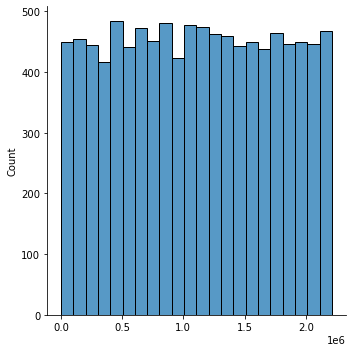

In [22]:
sns.displot(selected_indices)

In [131]:
dbf['Entry']

0          Q9NWW9
1          Q9NWW9
2          Q9NWW9
3          Q9NWW9
4          Q9NWW9
            ...  
2214710    Q96PU5
2214711    Q96PU5
2214712    Q96PU5
2214713    Q96PU5
2214714    Q96PU5
Name: Entry, Length: 2214715, dtype: object

In [9]:
selected_proteins = []

#for i in sequences_list:
#    selected_proteins.append(dbf['Entry'].values[sequences_index])
selected_proteins.append(dbf['Entry'].values[sequences_index])
len(selected_proteins[0])

100

In [164]:
dbf['Protein names']

0          Phospholipase A and acyltransferase 2 (EC 2.3....
1          Phospholipase A and acyltransferase 2 (EC 2.3....
2          Phospholipase A and acyltransferase 2 (EC 2.3....
3          Phospholipase A and acyltransferase 2 (EC 2.3....
4          Phospholipase A and acyltransferase 2 (EC 2.3....
                                 ...                        
2214710    E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...
2214711    E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...
2214712    E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...
2214713    E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...
2214714    E3 ubiquitin-protein ligase NEDD4-like (EC 2.3...
Name: Protein names, Length: 2214715, dtype: object

In [134]:
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
tsne = TSNE(n_components=2, perplexity=30.0, verbose=1, random_state=123)
z = tsne.fit_transform(np.array(sequences))

/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2214715 samples in 7.484s...


In [166]:
len(selected_proteins)

1

In [167]:
vf = pd.DataFrame()
#vf["y"] = selected_proteins[0]
vf["y"] = selected_proteins[0]
vf["comp-1"] = z[:,0]
vf["comp-2"] = z[:,1]
#vff=pd.concat([vf,newfftdf], axis=1, sort=False)
vf

y     comp-1     comp-2
0    Q14687   8.376608  18.156538
1    Q8IWV1 -13.375229  -4.253807
2    P24557  21.693562   2.646816
3    Q5RHP9 -33.048794   1.636937
4    Q9Y3X0 -18.345036 -11.332590
..      ...        ...        ...
495  Q8IUL8   0.603812  -1.612566
496  Q96N67 -17.254913  -0.854105
497  Q96GW7 -35.705887   3.279931
498  P54098   0.927179  -1.809448
499  O95232 -16.952433 -15.617852

[500 rows x 3 columns]

In [168]:
import plotly.express as px
fig = px.scatter(x=vf["comp-1"], y=vf["comp-2"], color=selected_proteins[0])
fig.update_traces(marker=dict(size=5,
                              line=dict(width=0.5,
                                        color='Snow')),
                  selector=dict(mode='markers'))
fig.show()

In [3]:
#Feature extraction
header=np.asarray(list(transpf.columns.values))
feat=np.delete(header, 0, axis=None)
feat

array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'Y', 'V', 'W'], dtype='<U2')

In [ ]:
print(transpf.sum())

In [4]:
sumA=transpf['A'].sum()
sumA

2323596

In [6]:
sumC=transpf['C'].sum()
sumC

765441

In [7]:
sums = transpf.select_dtypes(pd.np.number).sum().rename('total')
sums

<ipython-input-7-8325a5acc728>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sums = transpf.select_dtypes(pd.np.number).sum().rename('total')


A    2323596
C     765441
D    1578668
E    2363441
F    1216566
G    2187247
H     874840
I    1447418
K    1898820
L    3320116
M     671462
N    1196016
P    2097428
Q    1590316
R    1869914
S    2764970
T    1778854
Y     887877
V    1985356
W     402239
Name: total, dtype: int64

In [8]:
features=[transpf['A']]
featx=np.reshape(features, (2214715, 1), order='A')
featx

array([[2],
       [0],
       [2],
       ...,
       [0],
       [1],
       [2]])

In [27]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=30.0, verbose=1, random_state=123)
z = tsne.fit_transform(np.array(sequences))

/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [32]:
vf = pd.DataFrame()
vf["comp-1"] = z[:,0]
vf["comp-2"] = z[:,1]
#vff=pd.concat([vf,transpf], axis=1, sort=False)
#vff['aa']=pf['aa']

In [18]:
%matplotlib qt5
plt.scatter(z[:,0],z[:,1])

# PCA

In [33]:
plr

comp-1     comp-2
0   -8.184630  -2.832330
1    1.278311  -7.036607
2    9.674980  11.332603
3    9.835983  11.657096
4    9.859830  12.224159
..        ...        ...
195  2.691599   4.703526
196 -5.868804   6.053807
197 -4.236594   5.664086
198 -5.412570   4.824451
199  4.174160 -10.300190

[200 rows x 2 columns]

Principal Components:
[[-2.06117002e-01 -5.31382599e-02  1.37897835e-02  2.25525829e-02
   8.21946737e-01 -4.49564791e-01  7.21498599e-02  1.32834533e-01
   7.43133564e-02  4.33082824e-03 -5.35422800e-04 -4.48956175e-02
  -2.10403170e-01  4.01390904e-02]
 [ 1.65401392e-01  3.13748062e-02 -7.25616287e-03 -1.44191976e-02
   5.39621407e-01  6.06822514e-01 -2.13118711e-01 -4.38254752e-01
  -2.85275990e-02 -3.78737089e-04 -9.48783700e-04  6.26988754e-02
   2.63757185e-01 -1.31121295e-02]
 [ 8.70195712e-01 -6.10748517e-02 -1.10234755e-01 -9.41866020e-02
   3.99645966e-02 -1.48467625e-01 -3.18099346e-02 -7.17422084e-02
  -1.46599255e-02 -5.69890455e-03 -2.42971639e-03 -6.89399305e-03
  -4.28373642e-01  6.63554775e-02]
 [ 4.40256413e-02 -1.63691298e-02  1.63978634e-02  9.75529522e-01
  -3.89969413e-02 -6.82049966e-02 -8.19919851e-02 -1.64957619e-01
  -1.01847503e-02  5.50359881e-03 -4.11845656e-03 -1.47760477e-02
  -7.33150427e-02 -4.03296580e-03]
 [-2.20207694e-01  7.26238488e-01  1.28926539e

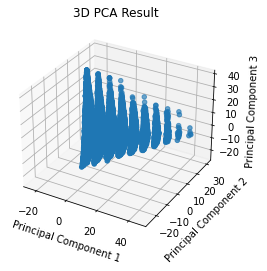

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Input data
data = sequences

# Apply PCA with three components
pca = PCA(n_components=10)
pca_result = pca.fit_transform(data)

# Print the principal components
print("Principal Components:")
print(pca.components_)

# Print the explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot the 3D PCA result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])

ax.set_title("3D PCA Result")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


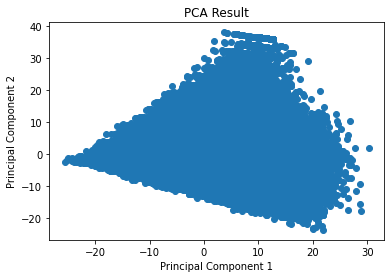

In [9]:
plt.scatter(pca_result[:, 1], pca_result[:, 2])
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [12]:
np.sum(pca.explained_variance_ratio_)

0.992895866722604

In [47]:
#dist=[]
l=0
dist={}
for i in tqdm(range(5000)):
    for j in range(5000):
        dist[(i,j)]=(euclidean(pca_result[i],pca_result[j]))
        

100%|███████████████████████████████████████| 5000/5000 [02:14<00:00, 37.11it/s]


In [50]:
import heapq

def find_n_largest_values(dictionary, n):
  
    if n <= 0:
        raise ValueError("n must be a positive integer")

    largest_items = heapq.nlargest(n, dictionary.items(), key=lambda item: item[1])

    return largest_items


#my_dict = {'a': 10, 'b': 5, 'c': 8, 'd': 12, 'e': 6}
n_largest_values = find_n_largest_values(dist, 100)

print("N Largest Values:")
for key, value in n_largest_values:
    print(f"{key}: {value}")


N Largest Values:
(544, 4361): 58.495222659921666
(4361, 544): 58.495222659921666
(543, 4361): 58.28668943107583
(4361, 543): 58.28668943107583
(543, 4529): 57.88825550912794
(4529, 543): 57.88825550912794
(545, 4361): 57.54795479048741
(4361, 545): 57.54795479048741
(544, 4529): 57.44892945699307
(4529, 544): 57.44892945699307
(544, 2178): 57.33444395742862
(2178, 544): 57.33444395742862
(543, 2178): 57.20816871512917
(2178, 543): 57.20816871512917
(545, 4529): 56.69500567072388
(4529, 545): 56.69500567072388
(546, 4361): 56.33635248224064
(4361, 546): 56.33635248224064
(545, 2178): 56.297156734761856
(2178, 545): 56.297156734761856
(548, 4361): 56.26525834666042
(4361, 548): 56.26525834666042
(544, 2663): 56.22117227180186
(2663, 544): 56.22117227180186
(543, 2663): 56.109849239688884
(2663, 543): 56.109849239688884
(548, 4529): 56.023021772082366
(4529, 548): 56.023021772082366
(546, 4529): 55.6277021606428
(4529, 546): 55.6277021606428
(465, 4361): 55.38054961914514
(4361, 465): 55

In [58]:
dbf['Peptide'].iloc[544]

'PRRRSRSPRRRDRGR'

In [16]:
import numpy as np
from sklearn.manifold import TSNE

batch_size = 5000  # Adjust this based on your available memory
n_batches = len(sequences) // batch_size

# Process each batch separately and concatenate the results
embeddings = []
for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = np.array(sequences)[start_idx:end_idx]

    tsne = TSNE(n_components=2, perplexity=30.0, verbose=1, random_state=123)
    batch_embeddings = tsne.fit_transform(batch_data)
    embeddings.append(batch_embeddings)

z = np.concatenate(embeddings, axis=0)


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.095631
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.205536
[t-SNE] KL divergence after 1000 iterations: 1.384233


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.148879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.370392
[t-SNE] KL divergence after 1000 iterations: 1.380619


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.057583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.193062
[t-SNE] KL divergence after 1000 iterations: 1.363706


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.226355
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.646523
[t-SNE] KL divergence after 1000 iterations: 1.410799


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.173873
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.769150
[t-SNE] KL divergence after 1000 iterations: 1.419783


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.169855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.038712
[t-SNE] KL divergence after 1000 iterations: 1.393446


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.121271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.368126
[t-SNE] KL divergence after 1000 iterations: 1.423262


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.158278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.318542
[t-SNE] KL divergence after 1000 iterations: 1.363863


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.034973
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.058441
[t-SNE] KL divergence after 1000 iterations: 1.434256


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.119765
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.057526
[t-SNE] KL divergence after 1000 iterations: 1.397621


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.094794
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.322662
[t-SNE] KL divergence after 1000 iterations: 1.375960
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.162947
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.284180
[t-SNE] KL divergence after 1000 iterations: 1.423902


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.403s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.166745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.167053
[t-SNE] KL divergence after 1000 iterations: 1.333075


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.090720
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.018707
[t-SNE] KL divergence after 1000 iterations: 1.409381


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.141385
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.539810
[t-SNE] KL divergence after 1000 iterations: 1.393766


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.133300
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.740494
[t-SNE] KL divergence after 1000 iterations: 1.378441


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.010011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.104759
[t-SNE] KL divergence after 1000 iterations: 1.306011


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.162599
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.234749
[t-SNE] KL divergence after 1000 iterations: 1.340499


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.061487
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.500282
[t-SNE] KL divergence after 1000 iterations: 1.422379


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.087951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.045319
[t-SNE] KL divergence after 1000 iterations: 1.335723


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.178196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.641541
[t-SNE] KL divergence after 1000 iterations: 1.383623


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.061566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.095337
[t-SNE] KL divergence after 1000 iterations: 1.401819


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.107112
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.746223
[t-SNE] KL divergence after 1000 iterations: 1.393129


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.065936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.286697
[t-SNE] KL divergence after 1000 iterations: 1.355639


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.110919
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.204109
[t-SNE] KL divergence after 1000 iterations: 1.363809


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.154878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.626358
[t-SNE] KL divergence after 1000 iterations: 1.352665


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.069752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.835220
[t-SNE] KL divergence after 1000 iterations: 1.391811


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.123135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.547455
[t-SNE] KL divergence after 1000 iterations: 1.369354


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.128395
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.666435
[t-SNE] KL divergence after 1000 iterations: 1.328546


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.473s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.977110
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.450325
[t-SNE] KL divergence after 1000 iterations: 1.321552


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.987106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.261856
[t-SNE] KL divergence after 1000 iterations: 1.382996


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.448s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.030255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.691193
[t-SNE] KL divergence after 1000 iterations: 1.403380


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.074440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.653175
[t-SNE] KL divergence after 1000 iterations: 1.411348


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.468s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.102689
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.724495
[t-SNE] KL divergence after 1000 iterations: 1.394598


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.100102
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.004204
[t-SNE] KL divergence after 1000 iterations: 1.368296
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.093210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.311829
[t-SNE] KL divergence after 1000 iterations: 1.325156


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.795995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.933914
[t-SNE] KL divergence after 1000 iterations: 1.273297


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.093568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.496460
[t-SNE] KL divergence after 1000 iterations: 1.369753


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.435s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.024414
[t-SNE] KL divergence after 1000 iterations: 1.362953


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.536s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.121436
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.652420
[t-SNE] KL divergence after 1000 iterations: 1.402908
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.448s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.026381
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.838341
[t-SNE] KL divergence after 1000 iterations: 1.365333


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.134823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.930145
[t-SNE] KL divergence after 1000 iterations: 1.386228


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.423s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.205515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.872169
[t-SNE] KL divergence after 1000 iterations: 1.337288


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.096567
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.799141
[t-SNE] KL divergence after 1000 iterations: 1.426254


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.172702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.470947
[t-SNE] KL divergence after 1000 iterations: 1.415464


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.125160
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.007401
[t-SNE] KL divergence after 1000 iterations: 1.398230


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.072013
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.235870
[t-SNE] KL divergence after 1000 iterations: 1.408588


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.155317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.883621
[t-SNE] KL divergence after 1000 iterations: 1.405040


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.069822
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.603134
[t-SNE] KL divergence after 1000 iterations: 1.431275


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.160511
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.374016
[t-SNE] KL divergence after 1000 iterations: 1.406635


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.282701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.996216
[t-SNE] KL divergence after 1000 iterations: 1.410987


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.074178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.252670
[t-SNE] KL divergence after 1000 iterations: 1.424959
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.095170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.559898
[t-SNE] KL divergence after 1000 iterations: 1.397955


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.442s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.964211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.078781
[t-SNE] KL divergence after 1000 iterations: 1.351074


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.125889
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.700760
[t-SNE] KL divergence after 1000 iterations: 1.337636


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.132228
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.223587
[t-SNE] KL divergence after 1000 iterations: 1.424354


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.087863
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.581070
[t-SNE] KL divergence after 1000 iterations: 1.355875


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.488s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.040085
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.229935
[t-SNE] KL divergence after 1000 iterations: 1.380867
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.090585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.173904
[t-SNE] KL divergence after 1000 iterations: 1.373143


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.511s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.070082
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.233246
[t-SNE] KL divergence after 1000 iterations: 1.315370


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.561s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.212093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.973999
[t-SNE] KL divergence after 1000 iterations: 1.339555


/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kmb/anaconda3/envs/cctbxenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 0.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.118480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.551025


KeyboardInterrupt: 

In [17]:
z = np.concatenate(embeddings, axis=0)


In [ ]:
plt